# Assignment 4

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTIONS 1 : Preps

### Flat Image : reference as "flat"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

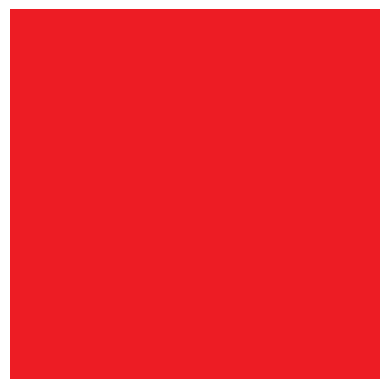

In [1]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_f = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjdlMWY0Yjk3LTQwOGUtNDg3OS1iODkyLWEzOGZjZWJmY2Q3MTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz6k2MPRAAADWUlEQVR4nO3TIQEAIADAMCAHkv7N6ECMC7YEN593nwF0Vh0AvzMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCLEHe0QDhbL+L+0AAAAASUVORK5CYII=

"""

img_data_f = base64.b64decode(base64_image_f)
flat = np.array(Image.open(io.BytesIO(img_data_f)))

plt.imshow(flat)
plt.axis("off")

### Edge Image : reference as "edge"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

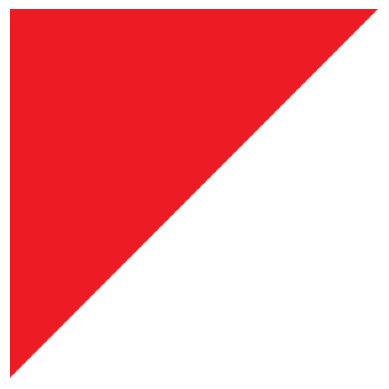

In [2]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_e = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjc3YmYzYTY2LTc4N2YtNDY5MS1iYzVmLTM0ZmUzMTgzOWYwMDwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz4ajv+YAAAJ4klEQVR4nO3T7Y9U5RnH8euc2d2ZObNnRHyARQG1amzStMbaWq2JMTFtjUZrGxqUivIsaJVWEAShQqUSjBUtkkgLWnZpu8vf1r+Bvphledp5OGfu+77uh+/n5WTOff3efLP/3fugAHAuv/++7sJcvnpVrr0ESNFSgSJChIBr1xcoRAg4lq9f152fXSpQiBBwKV+/rnv5Uj6z+oYftdYAqVm2QCFCwI1+BQoRAg4MKFCIELBtcIFChIBVQwsUIgTsydet7c7PDi5QiBCwJF+3trswl9+zZvg/HawBUjN6gUKEgHGVChQiBMyqWqAQIWBQjQKFCAFT8nvvqVGgECFgRL5mppyfrVGgECEwvnzNTHn5UmPd2pqfm10DpGbMAoUIgXGMX6AQIVCbkQKFCIF6TBUoRAjUYLBAIUKgqnxmdTk/a6pAIUKgknxmdbkw17hvvck3Db4FxM1GgUKEwIgsFShECIzCXoFChMBQVgsUIgQGs12gECEwQLbq7vK/F60WKEQI9JOturu7MNd44H7bh4gQWIazAoUIgVu5LFCIELiJ4wKFCIHruS9QiBBYolKgECHQk911V3d+1n2BQoSA9Aq8PNf43gMq14kQqdMtUIgQiVMvUIgQKfOhQCFCJMuTAoUIkSZ/ChQiRIKyO+/ozl/0pEAhQqQmu/OO7sJc46EHtYdcQ4RIiIcFChEiHX4WKESIRHhboBAhUuBzgUKEiJ7nBQoRIm7ZypXd+VmfCxQiRMSylSu7l+caDz+kPWQIIkScQilQiBBRCqhAIULEJ6wChQgRmeAKFCJETEIsUIgQ0chuXxFigUKEiEN2+4ruwqUQCxQiRAQWC3zkYe0hNREhwhZ6gUKECFoEBQoRIlxxFChEiEBFU6AQIUKUrbgtmgKFCBGcbMVt5cJcNAUKESIsvQInvv+I9hCTiBDBiLJAIUKEItYChQgRhIgLFCKE/+IuUIgQnsu63bgLFCKEz7Jut/zPv+IuUIgQ3los8Ic/0B5iHRHCR+kUKEQIDyVVoBAhfJNagUKE8EqCBQoRwh9ZWSZYoBAhPJGVZfnvbxMsUIgQPlgs8NEfaQ/RQYRQlniBQoTQRYFChFBEgT1ECB0UuIQIoYACr0eEcC2b7pRzFyhwCRHCqWy6U176buKxR7WHeIQI4Q4FLosI4QgF9kOEcIECByBCWEeBgxEh7KLAoYgQFmWdopy9QIGDESFsyTpFOXdh4vHHtIf4jghhxdUCf6w9JABECPMosBIihGEUWBURwiQKrIEIYQwF1kOEMKRoT188T4E1ECFMKNrlxfOTP31ce0eQiBBj6xX4xE+0d4SKCDEeChwbEWIMFGgCEaIuCjSECFELBZpDhKiu3Sq/+wcFmkKEqKhX4JNPaO+IBxGiil6BT/1Me0dUiBAjo0A7iBCjoUBriBAjoECbiBDDUKBlRIiBWs3y23MUaBURor9egT9/UntH5IgQffQKfPop7R3xI0IshwIdIkLcggLdIkLciAKdI0JchwI1ECGuak5RoAoihIiINKfK899QoAoixNUCn3lae0eiiDB5FKiNCNNGgR4gwoRRoB+IMFUU6A0iTNIUBXqECNMzNVX+8ywF+oMIE9Mr8NlntHfgGiJMCQV6iQiTQYG+IsI0UKDHiDABFOg3Iozd5CQFeo4IozY5OX3uawr0HBHGa3Jy+tzXU889q70DQxBhpCgwHEQYIwoMChFGhwJDQ4RxocAAEWFEJiYoMEREGIuJielv/k6BISLCKPQK/MVz2jtQBxGGjwIDR4SBo8DwEWHIKDAKRBgsCowFEYaJAiNChAGaaEyfPU2B0SDC0Ew0ps9+OfX8L7V3wBgiDAoFxogIw0GBkSLCQFBgvIgwBBQYNSL0HgXGjgj91mhMnzlNgXEjQo81Gp0zX0y98CvtHbCLCH3VaHTOfNF88XntHbCOCL1EgSkhQv9QYGKI0DMUmB4i9AkFJokIvZHnna8+p8AEEaEfegW+9IL2DiggQg/0Cnz5Re0d0EGE2igweUSoigJBhJooECJChGooEFcRoYY873z5GQWihwidy/PO6VPNX7+kvQO+IEK3egW+8rL2DniECB2iQCyHCF2hQPRBhE5QIPojQvsoEAMRoWVZ1vnbSQrEAERoU5Z1Pj/Z/O0r2jvgNSK0plfght9o74DviNAOCsTIiNACCkQVRGgaBaIiIjSKAlEdEZpEgaiBCI3pnDpBgaiBCM3onDrRfPV32isQJCI0gAIxDiIcFwViTEQ4FgrE+IiwPgqEEURYEwXCFCKso/j0OAXCFCKsrPj0eOv3r2qvQDyIsBoKhHFEWAEFwgYiHBUFwhIiHAkFwh4iHI4CYRURDlF88jEFwioiHKT45OPWG5u0VyByRNgXBcINIlweBcIZIlwGBcIlIrwZBcIxIrwBBcI9IrymOHaEAuEeES4qjh1pbd2svQIpIkIRCoQqIqRAKEs9QgqEuqQjpED4IN0IKRCeSDTC4ughCoQnUoywOHqotWOL9gpgUXIRUiB8k1aEFAgPJRQhBcJPqURIgfBWEhFSIHwWf4TFkYMUCJ9FHmFx+EBr5zbtFcAgMUdYHD7Qemu79gpgiGgjpECEIs4IKRABiTBCCkRYYouQAhGcqCJsH9pPgQhOPBG2D+5r796pvQKoLJII2wf3td/epb0CqCOGCCkQQQs+QgpE6MKOkAIRgYAjpEDEIdQI2x/8iQIRhyAjbO/b2/7Dbu0VgBnhRdjet7f93tvaKwBjAouQAhGfkCKkQEQpmAgpELEKI0IKRMQCiLC19x0KRMR8j7D17p7i/fe0VwAWeR1h6909xf4/aq8A7PI3QgpEIjyNkAKRDh8jpEAkxbsIKRCp8SvC1jtvUSBS41GErT07iwPva68AXPMlwtaencWH+7VXAAq8iJACkTL9CCkQiVOOkAIBzQgpEBDFCFu7d1AgIFoRtnZtKw59oHIa8I1ChK1d24qPDrq/C/jJdYQUCNzEaYQUCNzKXYQUCCzLUYQUCPTjIsLWjq0UCPRjPcLW9jeLox/avgKEy26Ere1vFn8+bPUEEDqLEVIgMApbEVIgMCIrEVIgMDrzEVIgUInhCJtb36BAoBKTETa3vN459pHBB4EUGIuwueX1zvGjpl4D0mEmQgoEajMQIQUC4xg3QgoExjRWhBQIjK9+hBQIGFEzwubm1ygQMKJOhM3Nr3VOHDM+BUhT5QgpEDCrWoQUCBhXIUIKBGwYNUIKBCwZKUIKBOwZHmFz00YKBOwZEmFz08bOyb+4mQKkaVCEFAg40DdCCgTcWD5CCgScWSZCCgRcujlCCgQcuyHC5sYNFAg4di3C5sYNnc/+qjgFSNNihBQIaMmFAgFVOQUCurIrV65obwCS9n9NRCNhe9hOWgAAAABJRU5ErkJggg==

"""

img_data_e = base64.b64decode(base64_image_e)
edge = np.array(Image.open(io.BytesIO(img_data_e)))

plt.imshow(edge)
plt.axis("off")


### Corner Image : reference as "corner"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

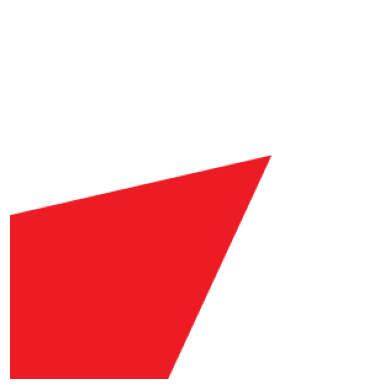

In [3]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c1 = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjhkYWIzZjdhLTU0NDMtNDIwMy1hNWQ0LWY2Zjg1YTcyNGZlZTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz7b9SPRAAAMEElEQVR4nO3d629UdR7H8XOd82taaIvA2houcjFKSQAlTYNazYIiCoQSKtY0BUpbWtz/bpN9tFl1N6vrdmYKIt6X9bIr3nZxFUXomZl9QEMBK51pZ+Zzzvm9X08V+onNu8e03864lUrFAaDjqQcAtiNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0IIlL/86sbv/1C5dk09JBEC9QBYoVIqld77IM4X4vxMnC+U//1F0Ls7d+h59a5EIEI0SuXq1bh4Ls4X43wxnjlXufrj7f+05XeTqmFJQ4Sop9Ln/4qnC3FhJs4XSu9/6JTLC/5r/tYt4dP9Td6WWESIZanEcenCxbnHXb5Y/vrrav6UOTvhuG6jt6WFW6lU1BuQMuXv/hcXinFhJp4uxOffdq79XNMf97rub3/jVTfgATCH/xCoQqVS+ucn8/+f+fElZxlfu6OxkxR4O56EWFjl+o34/NtxvhgXinG+WPnvlbr8tW5He8ebr7ltbXX527KBL0iYV/72P3PVTRfjC+84N27U/UNEwy9T4F14EtqtXC599HGcL87e/LbKJ5829sMZ0/HGq96a1Y39KGnDk9A6lZ9+imfOzz3xCucq33/ftA8dHRugwF8iQiuUv/wqni7MFopxvli6+J4Tx4IRnmcmRgUfN/GIMJt+eSamXuTknt/vP7hRvSKJiDA7Kj/8EBfOxYXibL4Yz5xzfvxJvegO5pUz6gkJRYTpVuWZmFywpy/Y3qNekVBEmDKV2dnSO+/WeiYm13J2Qj0huYgwBcpXvrv5E/M4X4zPv+38fF29qDb+tofD/ifUK5KLCBOprmdicmaKc+17IcKkqFy/Hp+/UPczMTlv/brcwQPqFYlGhErlb7699VOE+MJFZ3ZWvaj+DOfai+FsrbmafCam5nZ2drz1utvSoh6SaHyJajjhmZicOTlMgYviSdgQ5ctfxtOFm4+70rvvOaWSepGCMR1vve6tWqXekXQ8CesjgWdictHQIAVWgwiXLuFnYmK+b06fVI9IByKsTenTz25dq5Q+/CixZ2JyuYMH/A3r1SvSgQgXkdIzMTkzxZ1atYhwAeUrV+LCTHrPxOTCJx8Peh5Rr0gNInQc5/YzsWL890Lp0iWH7xkvA7+1VBN7I8zqmZicv31buKdPvSJN7IrQhjMxuZazZzjXrknWf1h/60xsuhBPF8qffa4elHHe+nXtf/mj6/GWezXI4JPQ5jMxOTNxmgJrlZEnYfmLy7euou09E1NzV9/X8carHIvWKq1PwvkzselCPF0sX76sXgTHnOBceynS9CTkTCzJ3NbW9jdf8zo71EPSJ+lPQs7E0iI6fowClyZxT8L5M7Hp/Gy+WPnmW/UiVMH32//6J/+BbvWOVErEk5AzsbTLHTlEgUsmirBSKf3j0q134eJMLN1cXlZ0WZoX4fyZ2HQ+LsxUrnzXtA+Nhgqf6vcf2qpekWKNjZAzMRtwrr1MdY6wUi6XP/hoNl+ICzOcidkg2LUj7OtVr0i3OkQ4fyY2XYiLM5Ufri7/70Ra8Mu7y7fECDkTg+M4/uZN4f596hWpV22ElTguvfv+re9nciYGx3HM+CnOtZfvXj+sv3kmNnvzPnPmvHPtWjOXIeHctWs63nzNzeXUQ1Lv7ichZ2Kokjl9ggLrwi1fv1565+LsdLFUKHImhiq5ba3tf/uz175SPSQLgis9j3ImhlpFw0MUWC8eBaJmYWhOjahHZAff2kLNooHDXneXekV2ECFq5Dpmalw9IlOIELUJ9+31t2xWr8gUIkRt+K2luiNC1CB4bFew+1H1iqwhQtTA8BhsACJEtfzNm3LP7FWvyCAiRLXM1DhvMtEIRIiqeF335wYOq1dkExGiKtGpEc61G4QIsTh35QozPKRekVlEiMVFI8Puijb1iswiQiwmDM0o59oNRIRYRDR41FuzWr0iy4gQ9+R5ZnJMPSLjiBD3Ej67139wo3pFxhEh7oVz7SYgQvyqoK832LVTvSL7iBC/isdgcxAhFuZvezh8ul+9wgpEiIWZ8VHOtZuDCLEAr7srd+SQeoUtiBALMBOjbpCIt1K3ARHibm5He3T8mHqFRYgQd4tODLttnGs3DxHiTsaYE8PqEXYhQtwhepFz7WYjQtzG88zEafUI6xAh5uWe3+9vWK9eYR0ixDzzyhn1BBsRIeYEe/qC7T3qFTYiQszhXFuFCOE4N8+1+59Qr7AUEcJxHMdMTXCurUKEcLz163IHD6hX2IsI4Zixk5xrCxGh7dzOzuilQfUKqxGh7czoiNvSol5hNSK0mzER59pqRGi1aGjQ6+xQr7AdEVrM980ZXl1bjwjtlTt4wH+gW70CRGgt1zFT3KklAhFaKux/Muh5RL0CjkOE1jJT4+oJmEOENgp27gj39KlXYA4R2shM8OraCUKE1vE2bghfeE69AvOI0DpmYtT1+LwnCJ8Mu7ir74uODahX4A5EaBfOtROICC3itrZGwy+rV+BuRGiR6OXjnGsnEBFaw/fN2En1CCyACG2RO3LI6+5Sr8ACiNAOLi8rmlxEaIXwqX7/oa3qFVgYEVqBN5lIMiLMvmDXjrCvV70Cv4oIs49f3k04Isw4f/OmcP8+9QrcCxFmnJka51w74fj0ZJm7dk1u4LB6BRZBhFlmxk65uZx6BRZBhJnltrWa4SH1CiyOCDMrGh5yV7SpV2BxRJhRYWjGTqlHoCpEmE3RwGHvN2vVK1AVIswiz+NlRVOECDMofOa3/pbN6hWoFhFmUMskj8E0IcKsCXp3B7sfVa9ADYgwa8yZ0+oJqA0RZoq/dUvumb3qFagNEWaKmRzjTSZShwizw+u6P3fkkHoFakaE2RGNneRcO42IMCPclSvM0HH1CiwFEWZENDLMuXZKEWEmhKEZHVGPwBIRYRZEg0e9NavVK7BERJh+nmcmx9QjsHREmHrhs3v9BzeqV2DpiDD1eJOJtCPCdAv6eoNdO9UrsCxEmG48BjOACFPM3/Zw+HS/egWWiwhTzExNcK6dAUSYVl53V+7gAfUK1AERppWZHHODQL0CdUCEqeR2tEcvDapXoD6IMJWiE8NuS4t6BeqDCFPIGM61s4QI0yd68ai3apV6BeqGCNPG980Er6eWKUSYMrkXnvM3rFevQD0RYcrwJhPZQ4RpEj75eLC9R70CdUaEacKra2cSEaaGv31b2P+EegXqjwhTo2VynHPtTCLCdPDWrwtfeE69Ag1BhOlgJk5zrp1VRJgCbmdn9OJR9Qo0ChGmgBkd4Vw7w4gw8YyJTgyrR6CBiDDpoqFBr7NDvQINRITJ5vvmDK+unXFEmGi5gwf8B7rVK9BYRJhgrmOmeFnR7CPC5Aqf6g96HlGvQMMRYXIZXl3bDkSYUMHOHWFfr3oFmoEIE8qc5dW1bUGESeRt3BDu36degSYhwiRqmRxzPT41tuAznTju6vtyg5xrW4QIE8eMjri5nHoFmocIk8Vta41GONe2CxEmSzR03GtfqV6BpiLCJAlDM3ZSPQLNRoQJEh055HV3qVeg2YgwMVzHTPJbSzYiwqQI9+31H9qqXgEBIkwKMzGqngANIkyE4LFdnGtbiwgTwUzyXkv2IkI9f/Om8Nm96hWQIUI9MzXOubbN+NyLuWvX5AYOq1dAiQjFzNgpzrUt938/QsaulMkBUwAAAABJRU5ErkJggg==

"""

img_data_c1 = base64.b64decode(base64_image_c1)
corner = np.array(Image.open(io.BytesIO(img_data_c1)))

plt.imshow(corner)
plt.axis("off")

### Multiple Coorners : reference as "corner2"

(np.float64(-0.5), np.float64(1499.5), np.float64(1121.5), np.float64(-0.5))

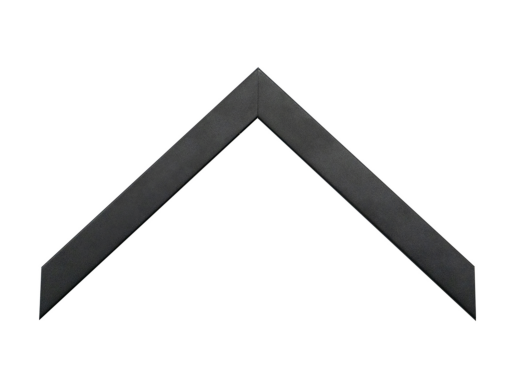

In [4]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c2 = """
/9j/4QxyRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAlgAAAEBAAMAAAABAcEAAAECAAMAAAADAAAAngEGAAMAAAABAAIAAAESAAMAAAABAAEAAAEVAAMAAAABAAMAAAEaAAUAAAABAAAApAEbAAUAAAABAAAArAEoAAMAAAABAAIAAAExAAIAAAAgAAAAtAEyAAIAAAAUAAAA1IdpAAQAAAABAAAA6AAAASAACAAIAAgAG3dAAAAnEAAbd0AAACcQQWRvYmUgUGhvdG9zaG9wIDI1LjExIChXaW5kb3dzKQAyMDI0OjA3OjI4IDE5OjQ1OjQxAAAEkAAABwAAAAQwMjIxoAEAAwAAAAH//wAAoAIABAAAAAEAAAXcoAMABAAAAAEAAARiAAAAAAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAW4BGwAFAAAAAQAAAXYBKAADAAAAAQACAAACAQAEAAAAAQAAAX4CAgAEAAAAAQAACuwAAAAAAAAASAAAAAEAAABIAAAAAf/Y/+0ADEFkb2JlX0NNAAL/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsKCxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0ODRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAB4AKADASIAAhEBAxEB/90ABAAK/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcICQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCESMQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl8rOEw9N14/NGJ5SkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9xEAAgIBAgQEAwQFBgcHBgU1AQACEQMhMRIEQVFhcSITBTKBkRShsUIjwVLR8DMkYuFygpJDUxVjczTxJQYWorKDByY1wtJEk1SjF2RFVTZ0ZeLys4TD03Xj80aUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9ic3R1dnd4eXp7fH/9oADAMBAAIRAxEAPwD1VJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//Q9VSSSSUpJJJJSkkkklKSSSSUpYf1n+tOJ0GgN0uz7gTj4wPbj1rv9Hjtd+d/hP5upA+tf1wxuhV/Z6A3I6nY2a6D9FgP+HytvubX+5V/O5H/AG5dV5bk5V+VfZlZVjr8m87rbncuPy9rWM/wdbP0daSn1f6rfWvF67R6T9tPUahN1HZw4+0Y8/Spd+7/ADlH83b/AIK23eXhWPfbj2V30WOpvpO6q1hhzXeLf9fevTvqj9cqustbhZu2nqbWzA0ZcAPdZR/Lb/haPzP+LSU9OkkkkpSSSSSlJJJJKUkkkkp//9H1VJJJJSkkkklKSSSSUpcp9cfrrX0cO6f08tt6o4DcTqyhrh7X3fvXOb/M4/8A1239Fs9at9cfryMF1nS+kPDs4e3IydHNo/kMn22Zf8j6FH+F/wBCvN3n3FziXPeS57nEuc5zjL3vc73Pe9303pKSWOsusffc91t1rt9trzLnOPLnuV7ofQM/r2b9lwxtrYR9qynCWUtP/nzJe3+Zx/8Arl2ylF+rH1czfrHlurqJowKHRl5oHB5+zY2722Zbvzv8Fifzl36T0qLfW+ndNwul4deFg1CnHqHtaNSSdXPe53usse76dj/e9JT4/wBd6B1DoGZ9lzBvqsJ+y5bRDLWjsf8AR5LG/wA7R/1yn9Es+ux1bmvYSyxhD2PaS1zXN1a9j2+5j2r3DqPTcLqmHZhZ1Qux7R7mnQgj6L2Ob7q7GfmWM97F5F9aPq1m/VzMbXaTfgXujEzYiTz9mydvtry/3f8ABZf85T7/AFaKkp7f6n/XhnUyzp3VXNr6jxVbo1l8f9GvJ/fq+hZ/OUf6GrsF4GGbh8wZB4I1EQvRfqd9djd6fS+s2fpzDMbMdoLOzacg/m5H+jt/7Uf+GP59Ke3SSSSUpJJJJSkkkklP/9L1VJJJJSkkkklKXA/XL6+bDZ0nodn6USzKzmH6HZ9GI786/wD0t/8A2n/wf6x/Rqf10+vjss2dK6JaW4olmTnMMGzs6nEeP8D/AKTJb/O/4D2fpVw7YaA1ggDQAaaJKSSGja0fBb31U+qGX9YrfXsc7H6Ux0WZA0dYQYfTif8AU25P+C+hV+m/mZ/U/wCpd/1gsbm5u6norDJIJa/JI/wVDh7q8T/TZLf53+axv9PX61TTVRUyihjaqamhldbAGta1o2sYxjfa1jWpKR4WDidPxKsLCqbRjUN21VMEAD/zL89356OkkkpSBnYOJ1DEtws2pt+Ne3bbU8SCP/MfpMd+YjpJKfIfrP8AVTM+rtvqNLsjpb3RTknV1ZOjKMv+V+bVkfQu/P8A0387iEggtIkHQg/xXu11NORS+i9jbabWlllbwHNc1w2uY9jva5rl5P8AW/6n5H1etdmYm67oth0cZc/GJ/wV7j7rMX/QZTv5v+Zyf9PalOx9UPr0aDX0zrVs0GG4+a86s7Nqy3n8z9zJd/1//Sr0NeBh7Tp2XXfVD68u6WK+m9VeX9OENpyDq7HH5tdn5z8T938/F/8AC39HSn05JRY9ljGvY4OY4BzXNMgg6hzSFJJSkkkklP8A/9P1VJJDyMijFosyMmxtNFTS+yx5DWtaPpOc5ySmVljK2OsscGMYC573GAANXOc4/Ra1eW/XL69WdW39N6U819M1bdeJDsgd2N/Orw/+nk/8R/PVfrl9druvvOFhF1PSGHgy1+QQdLL2/SZj/wChxv8AruR/oaeWc8NBc4gAckpKZF4aPAAfAABdl9SvqK7qza+rdWYWdNdDsfGdIdkD8220fSrw3f4Nn08v/wALf0k/1M/xfOyjX1Tr9RGOIfjdPsGrzy27NYf8F/o8R30/+1P+hXpiSmLGMYxrGNDWNADWgQABw1oUkkklKSSSSUpJJJJSlF7GWMdXY0PY8FrmuEgg6Oa5pUkklPlf10+otnRxZ1XpLTZ0xvuyMcS52OO9lf51mE38/wDPxP8Awv8AzHJMcHDTjkEGefNfQK8y+uf1BdgOs6r0KouwyS/JwGCTUTq+7DYP+0/+kxf8D/2n/R/oWJTU+p/1yt6E5uFml1vSXHgAufjk/wCEpb9J+P8A6XH/ADP5zH/0NvqlF9ORSy/HsbbTa0PrsYQ5rmnVrmOb9Jq8Aba0gEGQeCNQug+qn1wyvq/f6Tg7I6ZY6bsYfSYSfdfiT+f+dZR9C7/jvppT7GkgYOdidQxKszCtbfjXt3V2N4I4/sua72vY76D0dJT/AP/U9VXk3+MrrWdk9cu6O+zbgYXpObS3QPe9jL/Vv/0np7/0TPoM+n/OL1leJfXp7rPrn1JlbXWWPupqrrYC5z3+hjsZXWxvufY9/wBFjUlOE54aJJ0XpH1E+oL6TX1rr1UXiH4WA8fzXduTlN/7l/6Gj/tJ/wCG/wCjW/qT9QGdMNfVOstbZ1Ie6nH0czH85+jblf8AC/zdX+A/0z+3SUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU+efXn6gF3q9Z6DVN2r8vp7B/Od334bf+5P8ApMb/ALVf4L9Z/pPnddzXAOaQWnUFfQ64P67/AOL8Zzrer9EYGZzpfk4ghrbz+dbX+bXl/vfmZH+E/S/pElPP/wCL3q+bifWHH6fVZ+pdQc8X0HVu9tVlrL6/9Hd+hZW//S1fzn+B9P1xeH/U2xzPrd0trgWOZkOrexwLXNd6dzHMex3ua9rvpNXuCSn/1fVVgdL+qOFidfzvrDkkZPUMuxxocRDaKy1tW2pri79YtrZ+nyP3P0Neyv1fW30klKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTzvVvqdh5nXcH6wYpGN1DEuY/IIHsvrHsIta3/ALUVVu/QX/8AWLv0fpeh0SSSSn//1vVUl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKf/2f/tFSxQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAADxwBWgADGyVHHAIAAAIAAAA4QklNBCUAAAAAABDNz/p9qMe+CQVwdq6vBcNOOEJJTQQ6AAAAAAGNAAAAEAAAAAEAAAAAAAtwcmludE91dHB1dAAAAAcAAAAAQ2xyU2VudW0AAAAAQ2xyUwAAAABSR0JDAAAAAE5tICBURVhUAAAAJwBTAEMALQBQADEAMAAwADAAMABfAFMAZQByAGkAZQBzACAAQwBvAGwAZABQAHIAZQBzAHMAQgByAGkAZwBoAHQAXwBNAEsAXwB2ADEAAAAAAABJbnRlZW51bQAAAABJbnRlAAAAAENscm0AAAAATXBCbGJvb2wBAAAAD3ByaW50U2l4dGVlbkJpdGJvb2wAAAAAC3ByaW50ZXJOYW1lVEVYVAAAABgAXABcAGcAYgBpADAAMQBwAGQAYwAwADEAXABHAEIASQAwADEAUABSAE4AMQAyAAAAAAAPcHJpbnRQcm9vZlNldHVwT2JqYwAAAAwAUAByAG8AbwBmACAAUwBlAHQAdQBwAAAAAAAKcHJvb2ZTZXR1cAAAAAEAAAAAQmx0bmVudW0AAAAMYnVpbHRpblByb29mAAAACXByb29mQ01ZSwA4QklNBDsAAAAAAi0AAAAQAAAAAQAAAAAAEnByaW50T3V0cHV0T3B0aW9ucwAAABcAAAAAQ3B0bmJvb2wAAAAAAENsYnJib29sAAAAAABSZ3NNYm9vbAAAAAAAQ3JuQ2Jvb2wAAAAAAENudENib29sAAAAAABMYmxzYm9vbAAAAAAATmd0dmJvb2wAAAAAAEVtbERib29sAAAAAABJbnRyYm9vbAAAAAAAQmNrZ09iamMAAAABAAAAAAAAUkdCQwAAAAMAAAAAUmQgIGRvdWJAb+AAAAAAAAAAAABHcm4gZG91YkBv4AAAAAAAAAAAAEJsICBkb3ViQG/gAAAAAAAAAAAAQnJkVFVudEYjUmx0AAAAAAAAAAAAAAAAQmxkIFVudEYjUmx0AAAAAAAAAAAAAAAAUnNsdFVudEYjUHhsQGaAAAAAAAAAAAAKdmVjdG9yRGF0YWJvb2wBAAAAAFBnUHNlbnVtAAAAAFBnUHMAAAAAUGdQQwAAAABMZWZ0VW50RiNSbHQAAAAAAAAAAAAAAABUb3AgVW50RiNSbHQAAAAAAAAAAAAAAABTY2wgVW50RiNQcmNAWQAAAAAAAAAAABBjcm9wV2hlblByaW50aW5nYm9vbAAAAAAOY3JvcFJlY3RCb3R0b21sb25nAAAAAAAAAAxjcm9wUmVjdExlZnRsb25nAAAAAAAAAA1jcm9wUmVjdFJpZ2h0bG9uZwAAAAAAAAALY3JvcFJlY3RUb3Bsb25nAAAAAAA4QklNA+0AAAAAABAAtAAAAAEAAQC0AAAAAQABOEJJTQQmAAAAAAAOAAAAAAAAAAAAAD+AAAA4QklNA/IAAAAAAAoAAP///////wAAOEJJTQQNAAAAAAAEAAAAWjhCSU0EGQAAAAAABAAAAB44QklNA/MAAAAAAAkAAAAAAAAAAAEAOEJJTScQAAAAAAAKAAEAAAAAAAAAAThCSU0D9QAAAAAASAAvZmYAAQBsZmYABgAAAAAAAQAvZmYAAQChmZoABgAAAAAAAQAyAAAAAQBaAAAABgAAAAAAAQA1AAAAAQAtAAAABgAAAAAAAThCSU0D+AAAAAAAcAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAA4QklNBAgAAAAAACkAAAABAAACQAAAAkAAAAAFAACGUQEAAF3AAAAAC0AAAACxAwAAAHxSAQA4QklNBEQAAAAAAD0AAAACAAACQAAAAkAAAAAFAACGUQEASoT/AABdwAAASoT/AAALQAAASoT/AACxAwAASoT/AAB8UgEASoT/ADhCSU0EHgAAAAAABAAAAAA4QklNBBoAAAAAA0kAAAAGAAAAAAAAAAAAAARiAAAF3AAAAAoARwAtADIAOQAwADUAIAAtACAAMQAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAF3AAABGIAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAQAAAAAAAG51bGwAAAACAAAABmJvdW5kc09iamMAAAABAAAAAAAAUmN0MQAAAAQAAAAAVG9wIGxvbmcAAAAAAAAAAExlZnRsb25nAAAAAAAAAABCdG9tbG9uZwAABGIAAAAAUmdodGxvbmcAAAXcAAAABnNsaWNlc1ZsTHMAAAABT2JqYwAAAAEAAAAAAAVzbGljZQAAABIAAAAHc2xpY2VJRGxvbmcAAAAAAAAAB2dyb3VwSURsb25nAAAAAAAAAAZvcmlnaW5lbnVtAAAADEVTbGljZU9yaWdpbgAAAA1hdXRvR2VuZXJhdGVkAAAAAFR5cGVlbnVtAAAACkVTbGljZVR5cGUAAAAASW1nIAAAAAZib3VuZHNPYmpjAAAAAQAAAAAAAFJjdDEAAAAEAAAAAFRvcCBsb25nAAAAAAAAAABMZWZ0bG9uZwAAAAAAAAAAQnRvbWxvbmcAAARiAAAAAFJnaHRsb25nAAAF3AAAAAN1cmxURVhUAAAAAQAAAAAAAG51bGxURVhUAAAAAQAAAAAAAE1zZ2VURVhUAAAAAQAAAAAABmFsdFRhZ1RFWFQAAAABAAAAAAAOY2VsbFRleHRJc0hUTUxib29sAQAAAAhjZWxsVGV4dFRFWFQAAAABAAAAAAAJaG9yekFsaWduZW51bQAAAA9FU2xpY2VIb3J6QWxpZ24AAAAHZGVmYXVsdAAAAAl2ZXJ0QWxpZ25lbnVtAAAAD0VTbGljZVZlcnRBbGlnbgAAAAdkZWZhdWx0AAAAC2JnQ29sb3JUeXBlZW51bQAAABFFU2xpY2VCR0NvbG9yVHlwZQAAAABOb25lAAAACXRvcE91dHNldGxvbmcAAAAAAAAACmxlZnRPdXRzZXRsb25nAAAAAAAAAAxib3R0b21PdXRzZXRsb25nAAAAAAAAAAtyaWdodE91dHNldGxvbmcAAAAAADhCSU0EKAAAAAAADAAAAAI/8AAAAAAAADhCSU0EEQAAAAAAAQEAOEJJTQQUAAAAAAAEAAAA4ThCSU0EDAAAAAALCAAAAAEAAACgAAAAeAAAAeAAAOEAAAAK7AAYAAH/2P/tAAxBZG9iZV9DTQAC/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAeACgAwEiAAIRAQMRAf/dAAQACv/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A9VSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//0PVUkkklKSSSSUpJJJJSkkkklKWH9Z/rTidBoDdLs+4E4+MD249a7/R47Xfnf4T+bqQPrX9cMboVf2egNyOp2Nmug/RYD/h8rb7m1/uVfzuR/wBuXVeW5OVflX2ZWVY6/JvO6253Lj8va1jP8HWz9HWkp9X+q31rxeu0ek/bT1GoTdR2cOPtGPP0qXfu/wA5R/N2/wCCtt3l4Vj3249ld9Fjqb6TuqtYYc13i3/X3r076o/XKrrLW4Wbtp6m1swNGXAD3WUfy2/4Wj8z/i0lPTpJJJKUkkkkpSSSSSlJJJJKf//R9VSSSSUpJJJJSkkkklKXKfXH6619HDun9PLbeqOA3E6soa4e19371zm/zOP/ANdt/RbPWrfXH68jBdZ0vpDw7OHtyMnRzaP5DJ9tmX/I+hR/hf8AQrzd59xc4lz3kue5xLnOc4y973O9z3vd9N6SkljrLrH33Pdbda7fba8y5zjy57le6H0DP69m/ZcMba2EfaspwllLT/58yXt/mcf/AK5dspRfqx9XM36x5bq6iaMCh0ZeaBwefs2Nu9tmW787/BYn85d+k9Ki31vp3TcLpeHXhYNQpx6h7WjUknVz3ud7rLHu+nY/3vSU+P8AXegdQ6BmfZcwb6rCfsuW0Qy1o7H/AEeSxv8AO0f9cp/RLPrsdW5r2EssYQ9j2ktc1zdWvY9vuY9q9w6j03C6ph2YWdULse0e5p0II+i9jm+6uxn5ljPexeRfWj6tZv1czG12k34F7oxM2Ik8/Zsnb7a8v93/AAWX/OU+/wBWipKe3+p/14Z1Ms6d1Vza+o8VW6NZfH/Rryf36voWfzlH+hq7BeBhm4fMGQeCNREL0X6nfXY3en0vrNn6cwzGzHaCzs2nIP5uR/o7f+1H/hj+fSnt0kkklKSSSSUpJJJJT//S9VSSSSUpJJJJSlwP1y+vmw2dJ6HZ+lEsys5h+h2fRiO/Ov8A9Lf/ANp/8H+sf0an9dPr47LNnSuiWluKJZk5zDBs7OpxHj/A/wCkyW/zv+A9n6VcO2GgNYIA0AGmiSkkho2tHwW99VPqhl/WK317HOx+lMdFmQNHWEGH04n/AFNuT/gvoVfpv5mf1P8AqXf9YLG5ubup6KwySCWvySP8FQ4e6vE/02S3+d/msb/T1+tU01UVMooY2qmpoZXWwBrWtaNrGMY32tY1qSkeFg4nT8SrCwqm0Y1DdtVTBAA/8y/Pd+ejpJJKUgZ2DidQxLcLNqbfjXt221PEgj/zH6THfmI6SSnyH6z/AFUzPq7b6jS7I6W90U5J1dWToyjL/lfm1ZH0Lvz/ANN/O4hIILSJB0IP8V7tdTTkUvovY22m1pZZW8BzXNcNrmPY72ua5eT/AFv+p+R9XrXZmJuu6LYdHGXPxif8Fe4+6zF/0GU7+b/mcn/T2pTsfVD69Gg19M61bNBhuPmvOrOzast5/M/cyXf9f/0q9DXgYe06dl131Q+vLulivpvVXl/ThDacg6uxx+bXZ+c/E/d/Pxf/AAt/R0p9OSUWPZYxr2ODmOAc1zTIIOoc0hSSUpJJJJT/AP/T9VSSQ8jIoxaLMjJsbTRU0vsseQ1rWj6TnOckplZYytjrLHBjGAue9xgADVznOP0WtXlv1y+vVnVt/TelPNfTNW3XiQ7IHdjfzq8P/p5P/Efz1X65fXa7r7zhYRdT0hh4MtfkEHSy9v0mY/8Aocb/AK7kf6GnlnPDQXOIAHJKSmReGjwAHwAAXZfUr6iu6s2vq3VmFnTXQ7HxnSHZA/NttH0q8N3+DZ9PL/8AC39JP9TP8Xzso19U6/URjiH43T7Bq88tuzWH/Bf6PEd9P/tT/oV6YkpixjGMaxjQ1jQA1oEAAcNaFJJJJSkkkklKSSSSUpRexljHV2ND2PBa5rhIIOjmuaVJJJT5X9dPqLZ0cWdV6S02dMb7sjHEudjjvZX+dZhN/P8Az8T/AML/AMxyTHBw045BBnnzX0CvMvrn9QXYDrOq9CqLsMkvycBgk1E6vuw2D/tP/pMX/A/9p/0f6FiU1Pqf9crehObhZpdb0lx4ALn45P8AhKW/Sfj/AOlx/wAz+cx/9Db6pRfTkUsvx7G202tD67GEOa5p1a5jm/SavAG2tIBBkHgjULoPqp9cMr6v3+k4OyOmWOm7GH0mEn3X4k/n/nWUfQu/476aU+xpIGDnYnUMSrMwrW3417d1djeCOP7Lmu9r2O+g9HSU/wD/1PVV5N/jK61nZPXLujvs24GF6Tm0t0D3vYy/1b/9J6e/9Ez6DPp/zi9ZXiX16e6z659SZW11lj7qaq62Auc9/oY7GV1sb7n2Pf8ARY1JThOeGiSdF6R9RPqC+k19a69VF4h+FgPH813bk5Tf+5f+ho/7Sf8Ahv8Ao1v6k/UBnTDX1TrLW2dSHupx9HMx/Ofo25X/AAv83V/gP9M/t0lKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklPnn15+oBd6vWeg1Tdq/L6ewfznd9+G3/uT/AKTG/wC1X+C/Wf6T53Xc1wDmkFp1BX0OuD+u/wDi/Gc63q/RGBmc6X5OIIa28/nW1/m15f735mR/hP0v6RJTz/8Ai96vm4n1hx+n1WfqXUHPF9B1bvbVZay+v/R3foWVv/0tX85/gfT9cXh/1Nscz63dLa4FjmZDq3scC1zXencxzHsd7mva76TV7gkp/9X1VYHS/qjhYnX876w5JGT1DLscaHEQ2istbVtqa4u/WLa2fp8j9z9DXsr9X1t9JJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU871b6nYeZ13B+sGKRjdQxLmPyCB7L6x7CLWt/wC1FVbv0F//AFi79H6XodEkkkp//9b1VJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn/9k4QklNBCEAAAAAAFcAAAABAQAAAA8AQQBkAG8AYgBlACAAUABoAG8AdABvAHMAaABvAHAAAAAUAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwACAAMgAwADIANAAAAAEAOEJJTQQGAAAAAAAHAAgAAAABAQD/4RowaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA5LjEtYzAwMiA3OS5hNmE2Mzk2LCAyMDI0LzAzLzEyLTA3OjQ4OjIzICAgICAgICAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczp4bXBNTT0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1wTU06RG9jdW1lbnRJRD0iYWRvYmU6ZG9jaWQ6cGhvdG9zaG9wOjU1NDFjMWM1LTU0ZDEtNDA0Yy1hYjc3LTI1NDcwMjNhMTllMSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo3MGEyNzA5NC1lYmJmLTJlNDMtODc1NC1mZWI1YmFhYTJiZGQiIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0iQTRERjlENDM5NDZBRkRDRUYwQzBEQkI3QUIyMTM1NzEiIGRjOmZvcm1hdD0iaW1hZ2UvanBlZyIgcGhvdG9zaG9wOkxlZ2FjeUlQVENEaWdlc3Q9IkNEQ0ZGQTdEQThDN0JFMDkwNTcwNzZBRUFGMDVDMzRFIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiB4bXA6Q3JlYXRlRGF0ZT0iMjAxOS0wMi0yMFQxNDoyNjo0Ni0wNjowMCIgeG1wOk1vZGlmeURhdGU9IjIwMjQtMDctMjhUMTk6NDU6NDEtMDU6MDAiIHhtcDpNZXRhZGF0YURhdGU9IjIwMjQtMDctMjhUMTk6NDU6NDEtMDU6MDAiIHhtcDpDcmVhdG9yVG9vbD0iQWRvYmUgUGhvdG9zaG9wIENDIDIwMTcgKFdpbmRvd3MpIj4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6U2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6YTY2OTZhMzQtMjZmOS1hNjQzLWFjMWUtNjI4MmI5YmNhZGE1IiBzdEV2dDp3aGVuPSIyMDE5LTAyLTIwVDE0OjI5OjQ5LTA2OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAxNyAoV2luZG93cykiIHN0RXZ0OmNoYW5nZWQ9Ii8iLz4gPHJkZjpsaSBzdEV2dDphY3Rpb249InNhdmVkIiBzdEV2dDppbnN0YW5jZUlEPSJ4bXAuaWlkOjcwYTI3MDk0LWViYmYtMmU0My04NzU0LWZlYjViYWFhMmJkZCIgc3RFdnQ6d2hlbj0iMjAyNC0wNy0yOFQxOTo0NTo0MS0wNTowMCIgc3RFdnQ6c29mdHdhcmVBZ2VudD0iQWRvYmUgUGhvdG9zaG9wIDI1LjExIChXaW5kb3dzKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHBob3Rvc2hvcDpEb2N1bWVudEFuY2VzdG9ycz4gPHJkZjpCYWc+IDxyZGY6bGk+MzM0MkI5RjgwRkQzN0FDOTk2QUU0M0NBNkU2QzIyQkY8L3JkZjpsaT4gPHJkZjpsaT4zM0EzRkZDMDkxMTI4RkNFN0I5MjFFODBGQ0FCQUJEOTwvcmRmOmxpPiA8cmRmOmxpPjM2QjhFNUQyRENEM0Q1QTBGNTMzRTA3OEI3QkUyNTNDPC9yZGY6bGk+IDxyZGY6bGk+NDYyNUU3NTc1RUI2MjIyOTM5NUUxMENEMjczQ0VCQUI8L3JkZjpsaT4gPHJkZjpsaT41MUY5QUU1RUMxOENEN0VCQkZBRUQ4MkY0QUJBMjU0RTwvcmRmOmxpPiA8cmRmOmxpPjZGN0E3ODUxMjMzNUQ4NjEyODhFMzVBNjgzMTgyNjNBPC9yZGY6bGk+IDxyZGY6bGk+ODAxNEIwOUQxRTA4NDQyNkZFOTdGQkUxRDM2QTc2QkU8L3JkZjpsaT4gPHJkZjpsaT44MTVEOUJCQjQyNTRFNjMwMzQxQkZCRUZBQjk0RDc0NTwvcmRmOmxpPiA8cmRmOmxpPjg0RTZFQTUzNDhDQzgwODM0QTY1Nzc0N0U5RkUxNkEwPC9yZGY6bGk+IDxyZGY6bGk+ODY5NTFDNUM0OTQxNzQwNjRBMTQ4RjM0NURFNzgxRDA8L3JkZjpsaT4gPHJkZjpsaT45MDRDQjUzNTc4MkU2MjA5NUJBRkM1QUFFREQ5NjVBOTwvcmRmOmxpPiA8cmRmOmxpPjkyQ0VCMDY0NzYyMjMyNTkzQkYwMDg1MTI4RjMxMUNDPC9yZGY6bGk+IDxyZGY6bGk+OTQwOUM1RjREMEQ3MkIzQUU2QkQyQkJDODczMEYyQTE8L3JkZjpsaT4gPHJkZjpsaT45Nzk4MTE2RjlCOUY4OEI5NzVFODVFMDVERUVCRTA3ODwvcmRmOmxpPiA8cmRmOmxpPjk3REIyOUMyOTY1RDM1MEFCOEIxMEZDQUY1Q0FGMDM0PC9yZGY6bGk+IDxyZGY6bGk+QTNFOTg1RDYwNDU0Mzk3RTlEMDVFNDM4QkNDODU2N0Y8L3JkZjpsaT4gPHJkZjpsaT5BQkU5QTFBMUYwRjAzNjZGRERCNEFERUVCNTE2OTcxNTwvcmRmOmxpPiA8cmRmOmxpPkJDMDIwMDQxNTZEMzEyQzA4RDY1RDgxOEQ3NzAzOTUzPC9yZGY6bGk+IDxyZGY6bGk+QkQ1QjZFNzAyNjhERjAxODRGQ0QwODM5MkRGOEU4QjE8L3JkZjpsaT4gPHJkZjpsaT5EMTNDQjk5NEQ2M0FFNzc2RkRGNkNFQzg4RkJGMDhFODwvcmRmOmxpPiA8cmRmOmxpPkQ2M0IzMzBFMTBBNTJGMTc1ODZGNjJFNkIxQzIzNDJEPC9yZGY6bGk+IDxyZGY6bGk+RTRCRjczMkYzMzdBMDU0NjFCRkY4RkUyNjAwOUM4NzM8L3JkZjpsaT4gPHJkZjpsaT5FNkNBMDY2NzRBQkI4NjA1NTNFOTlDQTAyNzgyMUNCNjwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MDRjMmNjODUtNzUwZC1kNjQ2LWI4YjItNmI2MzY5MTdmYTdjPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDowNWEzMWJkYS05M2NkLWU1NDAtYjliZi0wZGE1YmQxM2E2NmE8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjBkNmZhZWM1LTYwYjAtMGU0NS1iY2JkLWU3NDViZmJkMDdjNTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MTI3NmQ2YzAtZGIwOC0zYzQwLWIzZDMtZDJiZGViZGVlNDc3PC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDoxNjI3NmNlNC03MzVhLWJhNDYtYTQzOC1lYThkZGQzYjM4YmE8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjFhZDk1YTQwLWY5YTItNDQ0OC1hM2M3LWY4MzYyOTI4NGNmYTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MjVjMjk5MWItMTRhNC02YzQ0LWE1NmUtMTYzOWJlOTE5MWNmPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDoyYTY4Yjk5Yi05MmIyLTYxNGUtYWY5Zi00ZDcwMjdjM2JiYzc8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjMxODVhM2EyLWVkMDgtM2Q0Mi1iZWIzLThhZDFlNjAwZWEwNjwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6NGJlMWM1MzAtOGY2NC1hNTQ1LWE0MjEtZDBlOWQ4MGMyNmFiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo2ZGU5YTg1ZS1iYzRlLWY4NDctYmViZS1mY2UyMmFhNTJmMmM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjZlNGNkYWZiLTFjNjYtMzI0Mi1hYjRkLTUzNTIzMDE1YjRkMTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ODAxMjQzODAtMGYwNC0xYTQwLTkyYzgtZTExYjExYzNkZmUwPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo4MjBiMjIxZC0wNTUwLTNlNDEtOWZjNy1mNjM5ZTYzYTZjM2Q8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjg2MmZiNTk5LWNhNzctNWQ0OS05MDM1LTYzZmYyNDQ1OWU5MTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ODY0NmQ0MmUtMjdkZi1kMjQ2LWE2NTMtNTMzZmNhOWYxYTJiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo4ZGRkNGNlNS00Mjg5LTdmNGItYmVjZC1hNGE5YWRmNWY5NGM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjhlYzQ2MTYyLWFmZWEtZTg0Yi1iMGM5LTk0NjYwODNhMWI5OTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6OTRkNzEzMTAtOGYyNi01ZDRlLWFjZDktYWQyYTE2Mzc2NjhiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo5NjBlYjQ3NS01M2MyLTExNDgtOGIzMy1lMGQ1MmQzNjliYmQ8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjk2NzIzOWZlLWNjZDAtODU0Zi05ZWRiLWM3YWVlZmZjODM3MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6OWI5N2RiNWYtY2VmZC03NTQ2LTgxMDYtOWFhOTFiNzE3ZTlhPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo5ZDNjZjRkNi02NTk3LTU1NGUtOWIwNS04YzhiZjE3MzI4NTk8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmEzNmMwNzNhLWNhY2MtYTk0Mi1hODMxLTEyNjFiNjRjYjI5MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6YWI0Y2NlMTAtNGE5My1kZDRkLTk0YTYtMGMxZjRmZjU5YjljPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDpiMzk0NmVkYy1iNWU1LWE1NDYtYjQ3Ni04NTA5MDM3NzAzNjM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmUxMGIxZjAyLTMwYmYtMGY0Zi05MmI2LTNiNGEzNDFiMWI5MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ZWYxYTVhM2EtNzJkMi0zODQ1LWIyNzMtNDE2NDZlOTdkNWRjPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDpmMmUzZjRjMi04Mzg2LTA1NDctODFhMS03ODhiZTEyZjU4MDM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmZjZWU1YTEyLWIwNWYtOTA0My05NGNiLTYyNDQ0MTZlMzkzMTwvcmRmOmxpPiA8L3JkZjpCYWc+IDwvcGhvdG9zaG9wOkRvY3VtZW50QW5jZXN0b3JzPiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/+4ADkFkb2JlAGRAAAAAAf/bAIQAAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQIBAQEBAQECAgICAgICAgICAgICAgMDAwMDAwMDAwMDAwMDAwEBAQEBAQECAQECAwICAgMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMD/8AAEQgEYgXcAwERAAIRAQMRAf/dAAQAvP/EAaIAAAAGAgMBAAAAAAAAAAAAAAcIBgUECQMKAgEACwEAAAYDAQEBAAAAAAAAAAAABgUEAwcCCAEJAAoLEAACAQMEAQMDAgMDAwIGCXUBAgMEEQUSBiEHEyIACDEUQTIjFQlRQhZhJDMXUnGBGGKRJUOhsfAmNHIKGcHRNSfhUzaC8ZKiRFRzRUY3R2MoVVZXGrLC0uLyZIN0k4Rlo7PD0+MpOGbzdSo5OkhJSlhZWmdoaWp2d3h5eoWGh4iJipSVlpeYmZqkpaanqKmqtLW2t7i5usTFxsfIycrU1dbX2Nna5OXm5+jp6vT19vf4+foRAAIBAwIEBAMFBAQEBgYFbQECAxEEIRIFMQYAIhNBUQcyYRRxCEKBI5EVUqFiFjMJsSTB0UNy8BfhgjQlklMYY0TxorImNRlUNkVkJwpzg5NGdMLS4vJVZXVWN4SFo7PD0+PzKRqUpLTE1OT0laW1xdXl9ShHV2Y4doaWprbG1ub2Z3eHl6e3x9fn90hYaHiImKi4yNjo+DlJWWl5iZmpucnZ6fkqOkpaanqKmqq6ytrq+v/aAAwDAQACEQMRAD8A3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XF3SNHkkdY441Z3d2CoiKNTO7NwABySffuvdakH827+fBhaHd9T8Q/h/udKqnlranC969/YJXyNLg8VHJ9nmNq9dzUjL55nJanqcjC/LaoaVv1zKtjh8NDK/EcAfL5n5/4PP06SSzEuETh5n/J0pv5PP87TbGXyeI+GXylzB29lsJNDtrpTtXc5OMfcWEjfwbf27vx6xrRVjxaEpcgzaZG/amIfQ7Nyx1BlQ1GK/n1uO4rIYmFCOtrpWV1V0ZWRlDKykMrKwurKw4II+h9pulXXfv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdRa2uosZRVeRyVXS4/H0FNPW19fW1EVJRUVHSxGepq6uqnKpHFGis8kjsFVQSSAPfuvdaYH84P8AnbZnuCq3H8UvhdmMlTddrV1O2+0+38PJUY7K73JY0tZtzZdQAssOHblJ6xCslYOIytPqMqqIpENbfF/g+z5/Py+3qjDUAa4/w/7H+HrXEptl0eyqFMjPFDW5COZ56akUfdV8NUEWSkqJlW/pLCwP0WwAFj7ZlleQihx00o08Ojdb4xHV3cm1NvTbjw8WJ7wI+7XsLFyxY2SvyMNEitqWC0SxhPGhgZbAqzA3J9p4zJBUA9nkOnHRJWLNx9erv/5Sv85/cfUGR2p8RPnfnak4WqlgwHUHeWTqTkoKZI/8mpMBu7NAkz0hsPtq1wXgUhJi0YDIpIV18RP2dVV6HQ37etwSlqqWupaatoqmCso6yCGqpKulmjqKWqpaiMSwVNNPESjxuhDI6khgQQSD7a6e6z+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TLuTcmA2fgMxurdWZxu3tt7fx1Vls3nMxVw0GMxWNoojPV1tdWVBVI40QEszH/effuvdaNX83X+dLuz5Tbgy/xx+M+QyG3fjZT1MuN3XvKgaal3B2zVU0l9UgQh6fBalBp6I2eq/zlQAmmIOgxiOoPd/qwP8AP+zpoliw9OqJtmU4wUkJRx5aaU1OGyNQrLPU11zJUQ5CqOoEItwTpJX6Xt7aJ1ZPn16ten/c+4VrWleaKkpci0ccT1NPEVmSnYeYxMIvTLEjDSsgNyD+Le76BStOPWgM0PS13XEVx+COOqmpdNNS18caLLHUkiIKPAzC0nl5DKDZRwOfdhherk+XSWZKHc23ZcZvvHx1TUbpU4zIUsjUmRwckBvTVtBGratblrSL9CL396qFFU/Z00QCMdXz/wAp/wDnIb1+Jeb2z8XfmBl8lufoPKy09B1d27VeasrdjpWNrp6KsYhpHxK6tMlOzGSmIMkIMRZPdn0yd8Yp6j06ujKFAr1uv4DP4TdWExW5NtZbH53b+coKbJ4fM4qqhrsbk8fWRCamrKKrpyySRupBVlPtnp3p39+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdIjsjsnYnUGx9ydk9mbpxGy9jbRxk+X3DuTOVSUmOx1FAOWd29TyOxEcMMatJLIyxxqzsqmyqXYKvE9aJAFT1oRfzYf5wfYnzs3DlOp+ojuLrr4rbbzCrRxiZ8buPszK4yp/yfPbyggY2pGYB6XGM5iiFml8k3K+YgVVfLFfX7Pl/h/l1oVOTj/J/s/wCDqm7C4iWgnmWiVbGSSbLJKjsI5pI7RQwTyaXbUTqYpwov9R7aPDrRFOHS1psi61stHSVENRTK6OJWiKiryLRgLAY1Gpgn6BpIBJBb3qo6qFz02VdPHF/GPLEKiKrpBDFTTA0U1NPC3lqkpoAVfyf6pi2jSCR9be3A2AD16tDjp6p81U19HTVsy1MzIIYcfFVmMRUCRRaEWgkiIEwlANioNj9QSfe9ZoR15q9dHI0dfJTy1dDRwwUNNf7p6WdqGsbUGkgjggurOxuGV3sTxxf22TqUjh1QccdSclWUm58XlNvZKkp6jEZd2qKOXHxmmix9VdUo5cGqsZIHgW4dFtb6AkH36NcjJ9P+L68FBNT1cj/K4/ms9jfy9M3guke+67J7++K+4chTw4fKx1EmWznXDVwHky+LEjs/j8hL1mOYqjLd4dEn6lAiJFAakf4Or6tFNXA9b0Wwt+7M7R2dt7sDr3cmJ3fszdeMpsxt7ceDq463GZTH1Sa4p4J4/wAjlXRgGRgUdVYEBrp3jkdK737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdBD3r3v1T8a+r90dx907wxeyNgbRomq8pmMlKA88xU/aYrFUa/uVdbUsPHTUsKs7t9BYMRZEZ20r17iaDr5+P8zP+al25/Mb3x/Adv1Ff158b9t5SrqdhdfLWrT1W5TRSGKm3juupDCCor3TUY43bw0isY4Qzl5XcJERKfz6qw/i6rBhx09NRu8DmlpZoUEzR+KVhNE3DSM4Ugu31YBTa9tXtk0z16vn0oY6qoNfjqly1UJ6YtJWVCmKGdok8Zp6OBFWR+BdQSNR+rW90xTr1cZ6mffNTsktHHDJTRQ1Mxop0hjaaqnvpbyuNbNGp1+GNzpIAJ/HurDPXqCvp1Fr3mpsdmadGgSNcVOkUzzJG7NLCZJZ5Hq+Ym5szKSf6ge3QvVad1R69ZsFTT0+NpYopHFHS4ygappqilVzBLJCGinMljPKGJ1ahpX6EXHHuh8+tPnj1yWd54KKGeCKISS1E1PJRuTFVQKxZklZxpQg/5wJzz+fp7oMmnVD1mp6h8hSVk0sLLUYabRU1NNGgcagGppJUcoJo7ekWXTb28ARnrY4V6VtFlcPPjM3is9j4auky2NkgngSOMPilMQkhlo57XEkrc2QAD6f4+3QxBBHVyoOD1Yd/LU/midr/AMtneeN2luiszvaXxO3hVUsua2/ItX97sirqnEU2awbZCyUdQgt5YtQhqFUByH0SL6RlddXBvT16ajDxto4r5eo+XW/V0r3X1j8hutttdtdQbtxm89i7rokq8XmMZMr+N9I+5x2Rp766erp2Oiop5QHRvqLEEtEEcelPQqe/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFy+U3yq6X+HXUef7m7w3VS7c2zhoZUoKFXilz26sz4TJSbd2vi2ZXqqyciyqtlRbySMkaswvHGZGoMDzJ4DrR+WevnnfzA/5kndn8xHtxtx72qJ9m9ObYrKmDqjpvH1M9TjsNR1DmNM7nFXRFXZari0meqlQhR+3CqxLY3ZtHYnD/L/AKv2dWHbnz/wdERpaSoE8uMpnpaOjpnaqqGmenqBDTjkwRqnMovzKgWy/ke2Camp6qc5PT/SUMghqI6uFGFY62d6otB4gNaU8UR1QqJLakPk1L+FHvYHTePLqQ7xtJWSQpF41gVI6aQxVDU1UF8KLEYD+oD+2bX+p596p1sfPqVQ08lPHRT1VOzwVkcsQV4ryy+NtLvJFKpJMX9ucMb/AEBHvyip6tx6a9xCFMXlZsfQRy+DF15aSmLqjyTwEQslFK7iEj9SuSSSP0/n2+q4p1rhx6ZqKtrkw9FWPW1DVdNjMYlbW1ctSrVMMkIWOEUMBCjwgeqSQhfwAb+2iAOvFRXp2espjPj6WdBJFNZo4xULHplMXkiqKaYsbA2Jtwfxb21TqnXqaramqq6UQxZD7mOJqT7/AFuIGp/pCYJCw9dmFmIFufpYe3Bw+zrdBTp9x1U0tHLJHTUVVLVxk6Z5XjSMF/RS0LghtCcldStzwDa3vRJp1byx0qNu1UIgrjNT/eRZKB4KyjyGmTHmjH7E8MXrj8btxdXQk/UD36lSOtdHk+Cvzz7z/lrbzpd9bRp6/dfxt3PmqTHdm9XVVTVSY2kiZ/HDk8OWulLWopY09VEhNv251eI8KtIddJ4gVHVDKQwAH29b83xl+T/Tny56owXcPSe66Pcu2MxEkdZTrJEuY23l1jD1eA3Fj1ZmpquEmzI3pYWeNmQhinII49PAgio6MH711vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdE2+bvzm6K+BXT2R7Z7pzyRSyrPRbK2PjpYZN29gbiWLVT4Xb9Ax1ablTU1bjxU6HXI36VayoWqRwHXhk06+eZ81/nJ3r/MI7bk7Q7fqpKLb+LrXpetur8TVTSbW2Xg55bxw0VE1zNUOoVqqtlj8szgs+lAka7Z6DT5f6s/b1sHSPmeirfwR0qIZ/ujEJ5JEqjHMKiKnkPCIsRQFS1rlvp/Sw961V6oT5dcaMyTCSNKgw00dRIldHUrp0i+iNGpwpIWU248ja/rYfT3U+XXjjpWpH9hRS+SBHpoJKaZsX9rahq1Y2SWNZmPlkQ/pUgW/wAPfuHDqp418uo0csTRSulDJqkmWSDyxR000KM2o0r1NgpNv16HLKv9PeyDQ9e+XXKiyL0cX3hrGSYGWeh0u0tJ5NfhFOYmDiVJL/rYgEgWI596QkHrflTpEbryVQuDzUNFPFAk+LrIpaiUrKqTudcxlWI6y6EllRWAvxa3t8Gh69TppxUNRSYygyMlTHIExcVC71vgSRxOgEc7woAzMLHSgUhbi5PtOTmnW6+vSrj1rHTjxSTxVMKRVdZJD4niX6p44eC5C2YFTbgWF/r5cnrxHUyWDIiCWWnSCN5Io2aORHqauSOFlWGsijtEpLgfuSen68i3HvY+IgdUGDXrOvijp446SdxOJhqx1IYWkonYjTPUioCokbEkFfXo+oI+vvwGaHqwIGenpK4Sy0tfF4ElpIJFEryvChUsRHJHoYn0nhWWMAtwLgj3ZeHXqV4dKHGZM/aU9b/DnqSzSgxVCqfuajT45VnpJDwQpv5CwNze4+nu+KHrxHEdGT+Gfy/77/l89m0fcHSGVfK9f5Kujp+yumctW1DYzcOC8/lyEwoLst4QWanrKdjJTt6gWTXG3lRKGp8sdNgFGqnA9fQD+F3zb6P+dPUeN7W6az0c5EdPT7t2dXzQJufZObkiEkmLzNHGTdG5amq47xTp6ka4ZVbIp08CDkdG/wDeut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV8fzCP5i/Sn8vrq2bde+66m3B2PnqSsj6z6poa6GDO7vysSaEqKpvUaLGQyMv3ddIhAvojWSZlQ2AHFsD/Vw619nXz3flZ8o+9Pmz29nO4u7M7PncvKk0O3dvwXo9sbJwJl89JhNvUUrBIqOAH6JI0k7Xmnd5CWDjEfZ8v9X8z1fCggdF++2qxR064+Mo5q0gqjSwhqhw36TSVcrMzIf7drWHF/z7YrQ16pXzPSiqKVo6OSKnrsXTs8K08hmKR19KkzhZKXxMmp3c+oulrf6o+9V9eqVPn1iP3VNFPQrBG+h6NJZpUaKmVkWyS+IAlpXX9PlDX/J93qKVPW656xRvVtXLSUtS81NM84L081O07SqmpaeuGrUo1fpXUI/e61A68TinUqWeaGRpqhpIdV1So8HnpfG6BHp4oZl0LLIRcOhJ03tpt78Rx6903VU87mNAXkoqRGnmmjdIdInk8ccUMSFLxhrCR2D3HF/r7rWmetZHDz6ZNw0UlBtjd1etX9xTQ4eqhpJ6hZLx1JkAklWKpv8Auw3Kxek8fQqbe7qx1U49eY4x014anqhRU3lqCJjjY6aOpeETis0wCWWKpmDMtxcA3bkm1wePbXV+nSGdaieno/JM8jCBZIW8iLCUDMViZChIXi6kA24Fzyd449e8ulHDA0T1FRFTQ49IZ4JKdnTzIFVNNQFN45oon5b9xipNifew1SOq8ePUuEU1XUzaqf1GE0gEMMJMiJJ5nlVQ/ltJcaZmVR9QAbe9nLf6vz61UeXXGnpYP4gYjTJJTWeT7mpk+1kQU0AdkgpH1yOifTXHp1Eaiv5HqimOrA1FenX9yk0PFFUVFO6q7tFI7LHTzEgsBcMHUWJJBuRz/T34GvW8Hp2pq+to1pJaQQPB93DTxxLAWSSFlJngleoVlRWFrlQuo8EE8+7EinWsVx0Ofxq+Qfdfwv7Spu/vjtmKnDT0NSF3hsZ5xV4HeOF+4EuRxeRxKlRNC12Z4kAeJv3ISji/v2uq6T+3rSoEJNeP+qvW/J/L5/mLdJ/zAurqfdmwshT4PsHDU1PH2F1hX1cZz22MiRokqqWN9L1WOlcH7erRLf2JAkgZRTq9erBvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VUn8zz+ap1F/Lw2EuPtTdh/Ijd9E4646gxlSstfplvCu7d3pTkyUmJp2Bb6CWpYeKEfrkjuqEjV5daJzp8z18//ALl737k+SHbG5O6+9Ny5beO/NxVclbU1mUXyY/b9JqaPGYjb2DpmMdNRwRsYqamiGlLMTqkMjvdiWAr5fsH+r+fVgQBT8+g7qkqJY/O9AKCMysgiSqLO8oiCrJNoKhjJ9CnB/F7D22SevY046k0yQ0sImmL0qhPBIkaCcq0bDyHVJqIH4dLm/wBFPts9Nnh69PWPoqfIUTUz08TU4MhhlZnhkhlV9SsY5SA1jYqA304NvdetZ65VlJM3onjMTQxKktfCHmppo4lLFQrXeS4PK6uPwQPewamnr16lOm4CB1qQszIs0USaYqcUbEpa6RRD1vyASxHA4v8An24MHr329Y2qUeN4Q0zwyT2jp1WR6llQaXmjDMTGy88k3P0APvdevdYKYvLU1LsGiXSsa1Lx8SRowKR2lALuLWVVP6vra3ujeo62RUdJXd1THLtPecgashEuDyeMjBH+U/eWUxRVL/UoyDSxVLKT9B9fekajV68OGep2B8cuNoaVWiihjiooJUvUm6x0SGfzsoU6NXpYt6rL+VPvVMdWOOHn1Lp4FglrIpY1lheIaKggQOsxlvDGVQDSJFvo1C541W497r6daJ9OnqrkggpoZIfKyeeOnqXZQapZpEYeOaglv4wrEXZ2sDawINh7Ix1qnXNEqIo3qmncSPKtNLLTNqq1kjjLkg0eh9C6hqCrwOAQfdqZ60R/Pp5hp3mVZImpZkxsH3LxVMg8+PikQwzVUyKNAUv+hFJfkEqOffiDWnXjgddxxSRmCnoMnDTVtYreDyQozwKGAm8cMo4UqbF24JII/r7rQqc9eByK9TqXyWMUPrM0c9NAXiCzSyBB5RLqLL5EZQFXkgHg2Fzc4PW656cKWqGOFRUCd2qA8EpjLmA6vHpimp6oALp1EBle4uP0+6nqw4Z6ETqjsvuPoHtDAfIT4+brrtrdnbaaGuyGFxcCxUO58SKkLkqHIQsRBOsyj/KacjRMtrKrhXXxY0xnr1fTrfF/lofzP+p/5gHXdLClVjdn987cxsZ7B6wnq1jq1npyKarzu24qgiSehaQetbF6dmCScaXbdMV631aT7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VKv817+b51z8CNrVnXWwpsXvv5P7lxb/3f2osi1mJ6+p62IpS7t36IGuqpfy0uO1CWotqbRDd/exQZbrVc0HWhD2R2L2B3Jvzc/cPbO6s3vvsndGTety28svUS1UzVFQjBkpQbJDSqrRpDTU6KkaKEjVVUAWaU8PLqlM46TsctRUQmWSSeWrWOmh8yzGodoFJRkZGLKI4rsUu1yTfg+/GmkdbDdtB08yxiakp55xTxUsNXJNJNUU+n/JT+2tGaFLMS4ADPZrm/q90rUdbB8unKSlgp0gmSqjWjqaNRWhYC9LEsj/txyz/qSZwA0YF9P0JI968vs6qfl1loKwMrpRSS0yxVE0VPJPHHIqNIwDzScOSmkDSWIC3/AB7rkZ69TrEI2gD+aed6h6mTygu8lRNqF1epYiwhYf5sKLn+vvQPV616b6mFlrNEq3iW6xVGtobPURen7dk9S/gMP7Jtce7ipwevADruGkgNU9ZWzzQOkVPeFZRIZYoASiFzp0SMbfuA3tz78MHHWqV6acipiq1jgEdVA6ySySCpBalgB1QQtEpsWRiAWFrgkn3rPA9b6ZdzyvU7RzKwxVFQKjEzUr01MGgWOpqAYgipN/nAoC+r9LHgA+6/P1611xwslFSUtJ91ZpxS0tNLUQa3p5hFF4paCcJYlyyg3VrE+n6X93J62a9OUetKikhZX+1rrlqaFGTxRrZtLyysyvED+L61Hp/HvRNRTqvHh1OWJY2qFlcvaolSim/dJq4hAqvNTtJcKRYGPV+L8G9x4Hrwwen6heOQSSCmiqFSFTBJDJHJI1Qkd5Zqi108obkrqIP+H193AoMda+zqeamtMhSVYm8cENRLR1KRyTRFWLROaq4gIIvpFifx/Q+9gHj1v59QZZqmaSWohmmxkslmklLqVluBMY1pHW6EgXvqKgG3upbhjrVPI9OdPPT1CXkqalRZHIoI5TIGVR58g0wiJKtYCX1sVHF7AD3tq9eIPWNtNJTikqKeWraV/HQ1cReanpqipcyQvNJITNJqF/SrgWNyL+6OKdeJPn01R5ulpKnxNRTBvIJNVG9RaWopIkv4YnclQreqRrXe2k8G3uma0A4deBNKHpZ7K3nvjrTfG3u6uk9zZXr3t7Z+TjzuPyGLyRoqaump6nU1LU+O0ayTQXjmgdGilRvHKGRj7cVwBQ/8V1vJI63mv5Sn84rrn+YDtWLrzf5oevfk7tekWHP7SqrY7H77hpYys+49mR1DFi/pJrMfcvC12jMkJV/d3Uo2k561HIJBUY6u6916c697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wv/8Azd/5zW2vh7i8z0L8da3E74+UeToZIctVwPTZPA9K0FTGFbK59AWjnzGl1alxzXERKy1I0gRSb1Kpzk+n+f5f4eqscY60Ytybp3V2Dufcu+d8ZnKbs3nvLNVuYz2685PLlcvlMhXP91JWVU1Ub+u4BX8AjSAulRQdx1evWhQUHWCWFDSpSpVFZI7ySU8esQPPHOgJELkm5JcrY8gmw/o4U9OvEdSKL1GSpamMlO/lTGxGKSnMlJFLqlnAiIHjUC30Jv8A4A+9U+XWjWleuSIYxULGdERlaWOCB1aZHq7kzrLyANQAufwCLcj3pM19OtZ4dTxTTaaoQAJSw2gpaRpmrGEzBUramRIRp9RKugPCD6D3qgJx14HqY1OKaKKmEVWyV4aieOGYSMI521zNMqixDOeXdrKOLWHvZB09WFK9Zp5Jo5UpW5+1giij8b/cMrIwWOJYhZXAJFpAbXHtsdW8qnqC4qaejp0qJoIoSZpWlqJIJpUDcTiVW0kFj6rj3cLTHW6gGg6ba1YlpoWmmWesKlo43TTB9shKpVTEH6sTxf6A392xq9eqFj9vTbj/AOG0cISV1q57STyRiG8ttNkjkjuBpB/Rc+pbubAe6kAYHXgT5npk3I4i2Ju6GsSKaQ4ypSGhaIULoS6TMUdfQZFYiMcn0klfr70MHr2fPrvF/aw4+CODzOEhkISYKkdA0SxlXp40+ou50tew1Aabkn36uKjq32dKKhMa0UTtNAnn1JIsEc50wai/3UUUgKLIrckWGq/1JHuuT1qhGes1KZftoxWu9fRwyreX7hKdoKozGZ4kqo7PE1iwJb9QB96GOtH06c6eqFKGocfTGpWxlHhgEhlp5ZSWeGWwckamjAI9Q5/w9vr6nr1OsERllo6778lZGqoqCmp6eSQspif/ACXwxsCVTTYMzEEG5PvzkHz638upcFMqS1hkWOGRZpQoeeRzGI4hHNLTuTxwy31g3tdePdBg9eNKY6d3cvJTiaXRFRxSIKeaJwxeqjLNaUaXije1wEZub/UW93I8+qUznpvkqJleljCyGJNXhWqaWocToSnlkdpF8cei+mRwz3AsB7oxyOvE56asuXYPU000MMdKF89TQkV8kqu66YVgqH0Mqc62UlyTyQfo2fQdaU9eSYeWvIaVHVVgihlSYGSmcBqmpidAqI+ki62vbgg296Boc9XBHSkxAzG2tx7d7G633ZX7I7V2bVUeS2znsfW1NHODjFWpoZXq6HReQNZImPKsxD3QkHdSTX061roKEdbsX8or+dHtn5dUuN+PXyNqaHYnyfwdJT0WOrq9qfG4Xt2CGEBKzFkkRRZZlGqWlQ6KgfuQclo1cBqK9X8utg73vrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rJ/wA4j+dzi+iqTc3xo+I+4qLN9yutTg+xO1MPU0tdjep/JHorcRtyb1xVGeRGPkms0dCbXD1FlR1VX8XH0/z9VrU44daVuQyWR3BmKvK5iqyOT3BlKmqyOazWUrHqcrk8jWu0j109XUFpKh5ZJWdpJSS3LNc+2HHd1o9O8LyzNLNFTVVWIkmNSaWbwRwqmmKVtVrWX0K4t9QSPbigenWxjqPN4Bj2EUkiMtSsxLxNPVRun7CeKS/CadTKj8DXY/T27Svn1v7enulaSrmr6QTk1CQoY5NV/tKaePSacK4AVSC2t1Xkk/g+6nNetFaceuOOjhxLTRyTRk0sSQQwQSmZJBCwKSMDe5sbMzE3/wAPbYWg4dNEEnHUnFU6pU5OlilCzvEru0bsohSezLGPJyqgcF1t78FNfs63SmD1kGmFpqeZqd6iK6KKKVg1QsdnXyBP7Nv1C/qPtyhpw6sB6dcoKiGekk81RFF5i/jrWLCmAQG8EUarfVe6hi1hY+6lacOr0znpmqa+slQNVxfxKKmBlZVSHxKukx0tTd/VMklraR9Dyfe88PPr1KYBx03yGqylO71CinrjRPKsEwYHwwaQYa54uEIBDkLe4H9Pbb46oRT8+oCzK9XF5dMBTyI7kGORisBQRxzJ6i/ChQ/9m5I96AJx1YdQd1vQR7K3I+R8ZpqfbkzJRpWSxSNN4lipa+Qt6pXU21AH1i39D71wNfTrQ6xYqj/iNPG8xrfJURUMUbKypRTLFThZPuATqUOQmm9ufVf8GvV/n0qlZYK2oWGLkPCYpHcGOno2XVaAqPSkpHq4JIuvB59+A69nh1JnSmnerlpop3mqJY0khgpTreZ08ckxU2QrpXS2oEg2I5J93UZ6rUefWKlq1gjK01e1KW0UzSvGSzRFyqSRAWIdCBdABwb+7ggCnXqYp1MgrpJ55A9M9XKI4afISyx+CKaoiupnqfAbIliAWU6iBc8+2vs69w49OsU9O5pli0rDTVJ0VVkqYlkQemSumfh4k5RUDcj6+7LUnrZ65mafJT1skyT01D6HrACkkwh0mKKYpP8A5uMGxjCk/j8ce7tWmOHVDQceuFNSUs33TUxmkSGjFQKiOOxkqHQQkMV0tYkMTyeBe3Ptr4uqE+fURKVnESzo1KJpH/ymkZGSm8kep5qiGW0sqDSGjgVAfxq/HvTCo62Pl01RySx1oHgqhI9npajxGWrnj8ujzSxzFUiQm7An1AcHgW91ZdIx14D16U2MroqSeKpkpYnhSeUxxvZaamlF28jSx8lJCNJLcXYfg+9A0GOtnI67GHrKmrx+5sDVjbu6cLXU+VwW4aLIT0dbi8pRzLLTQrNEyugR1jdCjDSw1qRx7sCa0HWixHW4R/J0/naDutcJ8WvmXlcbtnvHHR0eI2J2VW1kUOG7Op1iEdDjs9WylY4swyqFSoOlKs/qCTGzqNHZrBqOro9cNx62dPdOr9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0iR5JHWOONWeSR2CIiINTO7NwABySffuvdakv84T+eMadt2/FP4Ubmc1sSVuE7a+QWEqF+1xqxu1Jl9ndYZKIkSVC8xV2XiJ0XKUpJDS+3KaBU8f8AB/s9aJFKnh1qJPDBk2rPvYqlnkWSrrJEldp56uZyTVSVbXZnkkbyEE30kl7m3trU1fmeqmvl074+mqRU0zOqywpIJJA7KZY1VlVZkB9bpqHr/FhwPewKtXr2a9PYpZIDMZFko5g8UD1EUhfx00pa4npTbUqByrf1+rfQe3OHDr2QOm+rqRRl6fyxx/aJGVMC+CKzyHxPIT6ZXf8AUSbX/p7qW8+t4J/1fy64VlPVxQ09TEBSV2QZoqirqEEUnKiRdIYg+IJyBp5Pv1eIrnrxFMceuH3dLBHG8MkiSU9PAGkdRANTP6G0sPUW+oDfUDn+nv1Sfn1XSK/LqVVw1axw1EH+T5GuYx1NTPGVm9S+RAq/URBbkDTyfx78GIr69WoOHXdB45TphVUmp1VQZpBE7tHw5JtZQ9+LtfTwefbi5Xr1KfLrlGGofvKKfy1aS2nk8bsklJf1aKWN/SyE3C6Qeefd6AjrdBXpslramop6V4JkgnkmijpmkhIioovpJUM1rSIANJuODe3tuh9eqmlaU6hVeQjINP5pKempTH4pKaUTXaQGKWokaT1aGPOk3texBHto9w68FzjqBHB4YBPJTrVRxSSMY3eWSaVakCk8sMtgHdrkhCOQRYenmw/n1YdYN0yKmzc9SZBXq43wE4bHBoXyGOmGiWFKQuPQ0jDUqj9IYA8sQKH59eoOnHFGOeHG032Yp5JEVG8l9cqTQqEppIlIUurkHT9ebj820PXrZ6lfdZOlWSKSkcBZSzhzoQ64/JqMqkkXXUJY14HFrH3YDz60OPTk06VVPDWeBaWmnURvPFUyKJQdLQx0shN1fUxdQBwOSfr7vwHXsgY6zFPKjTnw09VFCI4FUhRkxUEEuVtcSQqAWdODzc+2zjrR+fUgIKeio6WKrl8rOs9TGI5Fl+4kXSz1YsBo08hhx9D9fdRXh148adOlS32iRLSU+inpmAhhLakqpZE1Nq/ssAb31gG/P1Pu0fp1oH16ixTvX0U3gjnJT9qoSaojFTUNq1BaaEW1hbWA+gHBt7s/p1o049ZKpnoaaGNKySJ4qg03jpwFhjK28tNKzcEhSbBj9bge2SeqdNz0cpJDyyz+uJ4J6WU0ra3uWeaWIDWG5bx8WvYe99bBFKHqKY7VEEMlRT5A+aaLTpCR6QoW4dmJVj+Y/oSOeeffmFePW/OvTvTxz/YMhii8skjrTySM0MZNPONNnF102u6qfqykAfT3Qnz63iuOlXIslE8yVtM1QaqGKYrC6rC0TEypPOhtysYMQjvc6fe/t6pjpL5KCgyjF3fJYPcGMp/4nRZ3Hlo58RWmcuKuKKD1eskMEbhFtzf24r0Ug+fWs162t/5PX87qulqtsfEb5wbgSm3DHBSYrqru7LSNHR57HgCnxOJ3hk6iysHGiOlyDNdTaKoNtMg2CSK0pn+XTqMxHd1tqRyRzRxzQyJLFKiyRSxsrxyRuupJI3W4KkEEEGxHvfV+ufv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UWurqLF0VZksnWUuOx2PpaiuyGQrqiGkoqGipIjPVVlZVVBWOKKJFZ5JHYKqgkkAe/de60xv5wP8AO1re3p9z/Ff4c7mrcZ1pE82H7N7qw881DVb+BBhq9r7HyMel4MUT+3VVikSVI9KaYCTJvUENRk/4OqPwz1q9SU1SkSwTCNkpFljk8bDx000ZLQoJL3k8pJErfn+v0901liSfPqopWnWWgdHWcaGEcgQiRCVWp+7/AM5ewLaSEMacXHHP9dCvVuPz6eMfVjxzTS1AignljghWnpCR44mKoEke7RhVDK44HN/rz7cBND1o8eodW1NK1NVwPUztTvI9QKWRvAqOwAZQSdSx2Gt2+p4+nvWrHWwaE16kwy0378qzyn7VZEigKCWGZXTUrSTMLEgkMF5tf3TgadbPkOsRkyJnkrg4yYSKBI5KkPJ9y7ga40Z/828X10gfQe7gkinWz1LhaN2lmaaYyxBwtOUE0c3lXWWklcclWOoA/Q+99aPCh6jPNUfcUtWahq2OncPkampdo3UMBHHGjvchwR6FHH9Pfl4gHq49OHUpayDKx1ApfDSQzP8AbR1rxyks8ZMhEpUBfrcFv9b24DTI61kHqMlSshhlq5ZgiK4eWrjdZY/t20xS0UC2kVgo9Eg4Zbi1z71rNc9bNOuVRVwU8n+TzO9II5Y4UWJj52lbWZTGbkqeSVNtJv8Aj3ViSaDrQAp0mah4qqeKTHS1CU0AlkeEwERzVDLxFGRdgAPUFPFx/T3VQK8evaeslJVTVNPKZ5nmijESyMIXihBqIvAnj8Z1Aq6lmBX6An6D3U4NOt0zTz6Yd71evZ+6p5IPuIf4fHjJpCDFIWhrQRWSWCkg3DoUtdbg8+9nh17j0rIifFSLHOyPRQ4+N/JHEiq/jjSIQSPcmLQ5UMTqDizHm40OHVTTPTiY2ARaieJ53TzrLpVIKwlG8yRxXZdV/q9/7IPJuPdwaDrXUSorpaqlajWpX76WfwzrKiU4lgvpj9TejhrStYchig491dxw61XqczyVM8L0gZK9Y42qjIIS81Mp0SfbLMQYgxVTpAubf090J9evdOUtW+TURVVa1VC8qzzT0VO0c8FQgIkSNxy6fQOpHB+h9+HDrR86dRDFL+/E5nysccyNFSTP9veVSGVyQbgBfSVII4v7cqFJ6qMdOmp4i0VRpYLCr0YSndFhj0l2pNEd2lLfp8yNb8n6e6k1x1vHA9dQSM3gd4GWgmkWpx7ft1NLFLfS8tZGwNwRe2t7gWvz7pTzr1r7Om9HkaWZWMUA/wArIjR3jhTUxeN5NVtUUyXYDkgj8Ai+xjrdDXHWanSmx8c7VKaFqIfGjeJlZ5IyBTSJIxJKSXC3Atc3ub+9UqOvD16fRUS4x4aGuEUUcpjrgA61UUkSETpTmlQFo5WkkDFx9LN9AOfHjTqwoRjrzVM0EFUtfWxsr1imFwfJFaRD5GRSNTOPIAWawAB/1vdTTV1qgPDqNUVkeOlyMsf3sFUssFOniXXkpWnjZFmlqJOHjC+NygGmxH9T731ogkZ6dYcbDuum/hW4amWiqAYkxVdTATZLFBXBlmoHBVYZn5cE+j0lCLH2pib+XVWDaaL5/wCqvWx//KY/nRbn6Dzu3/iJ84txLleunNPiuoe/pqhquLD0BPgoMLu+pa7mCMBUe+p6a911wiyuzItdcZ+0en+x1aMsFpJx9etyvH5Cgy1DR5TF1tJksZkaWCux+RoKiGsoa6iqohPS1dHV05aOWKRGV45EYqykEEg+0/TvUv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3THubc23dl7ezW7N25vGbb2xt3G1eYzuezVbBjsVicXQxGerrq+tqWWOOONASzMf9597VSxCrknr3DJ60b/5uX85rcHy5yWf+OXxuy2T2t8aKCofH7x3TDJUYjc3ctRDMVjVlJSSn26XQGOkJWSp4kqQF0wrapQkDjmv+x/n68R69a8BgNKkqPM0UtKXXRJKz05FrztC6CxlK2P0txe/09sHiOtMa9ZYUpY41hp6isqFl0E1FWwLxKy+WOCaBrERuBpZx9DYm3PvQ49U0kmvWKJK2WVWj+1KxwSLohmAWd7mKdppbaUCfkL6ri4AHuwFM9WINMdSo4K1XSPGVSxuK9XnFQ5aEsyf5g8WcMv0C/i9/ezXHVSM9Z2pIIjMPWPv4GimQXihWSKQSBI3i5iRjcaLH63/PvVSM9aUVP2dcYZqOCIY+aoqIZZpJFp6Uh2lppw2po5WUWZiOB+bEX9688dbFT3dZZ4hNDKaeBgZ0EUEaiRTFPHJYjUpst/rK17/ge7KTUenWxWvUuXzCnpfKJI3WxnghiaSN3vpPiVWN1X0k3sSOPx7ueHVs1r1jlloqKiloJJJJqyeRoKmZv8nx9MzEGCaIXMjFV4P9Px70ONOtg4+XXEw+HzokyvTeGFRFF6MbEQNMksRhPke4uXLfX3bNOtg0WvXdZF9qlPUVUlVXyMqxhERZnd0QNDFBKrFgNI/w/wBf3unkOvVqfl1FyEsVHTrTNG0cxi+5mqyzPOEcjx0sbAkEgEH/ABPvRND1XJ4dY8e0VOgp4acQCKI1DPKxaGoE4F0gH51j/PNf0nhbD3RmA+XVlA8um56qnqK40cSJG8N5ZKdlljSRQBJKYJX9QeWNkVQx4AKpyR7bqSOtkGtese95af8A0d7plSQGb/Jph4vJUxQLDLGII5Ypy8jsx1RmULaw5P093/BnrWK9SUc1PjepxzLkKeCCoeGGSM0fjNIHEk0Z9ZQobMLCzabDi/uqmvl1UnPTnLLLVI8v25ZI0ElYjfa00zxRyj0U8EzegoQFGjlrEhT7tnrw4dYPvZfGClPJUrT00kq0p0yQ6Jns5eZSNbKTrUnk2IUG1vejTqhqR6dZVmWWFp6iWCpeSQsZSrPMjRnSsElRTlj/AIKCoP8AQX96pXj1sfPqQlTSwxxpDPUqqSxLFraOniSYxlrM9jqtbhSBq41WPvVaDr3HHXFBLJEKqEItFNC8U80bafDp5apjYsCJOfVwtx/UD3snPXhQ48+p8rNBLCJ5AjrRfaRJ5pFqpRNCRGEEIZQlrO0inngHj37Gadep1hxqVEUVIaiUJjZkdI5o7GGAmMM0sy3LSapAwDfUgXKj24FUjrw9eunqPHUywCNCgRYlkqpIpDUpIwZZUjBYqQ+lmBuALAKPdSKdex0301aKcTT1L1FfFUIKesX7sNU0kJclQmkWUawPEF4CAajcj3QkDh1ugOOnQ1HiFNUzwu8QkjqXllEMlVTTUkWpZF8bF/IraC6EWbkG+mw0M9WApjpxirJGqoYpclTmmlpSssCIrzwzVLFor1CDUsbG7P5B/ZsbAj3o19OtEAY6cUpV88NRPUGSJ6iaINOvippwI9UUEdQ5BCm14l06gQ1+D7uo61Spp1FlrMlI9PPHTpSSwRvR/ZOFkNZCsn3JZ21EEtYBnJPBv7uPl1sZ6di4y9FUYvNQyPt+YxVKR1EK12RpZ6oHwHEvCdcDwv8ARiPpY/4e/ajUH163kZ6vK/lJ/wA47fPw2yeB+Ofyiq8pu34xZDJridldkS1UuUynVM9XLenpquSUl3xrltUlGTqi9UkA5aNnRHVa1z6dNGTS2eHW8ntjc+3d67ew27No5vGbk2zuHH0+Vwedw1ZDkMXlMdVp5KeroqynLI6MPyDwbg2II9t9O9Pvv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690huyuy9h9PbG3L2V2bunEbL2NtHGVGX3DuPOVcdHj8fRUyamZ5H5d2NkiijDPI5CIrMQDsAk0HXutCz+bN/N07C+c+crurOs2yvXvxb2/XCbH7fesah3V2zWU0pFJuPfFLTN+3SgjzUWIdisa2km1T/wCbfWiL25J8/wDN1srTJ8uqOamVK6maLziuqasRRSUUdTHGi0kb69LOttJ+oBB5+h9sNUt1qhr1MqxPNVwy01bULW0dLGtNC5UoaGL0R0dRq9cYi/UwtZrfU+2qCvVaDrDBAzyFzHG0scE6Vc9mjg+3lYtIYA5Okubi9v8AYe9DrfDh1lxdVDT1UcXgqjReOeqLRwiSFpC1qeAq2hWjjYAtICeCQfd/KnWzx66mqamOkpqeC6mDIisipREogDeYNURzzqf92XIAvcLwB72BQ/b1Xga9SCYBMZkjmMLs4apcyQxapHIjESMQ4RD6vJa/4P19+fgOtHHTes0wmaGelgqtLGKnFIWeqn1k6C1QP7RsfVf/AF/d9IrXrePIcOnmhnLrTJCZYkqZXjqNDAGOT/jk5TUGYIpGr8kE39+oCOtkjgfLrIKuelkikhq1/aWaOWNT56mKmDnmoBA1AcatP9f8PfiMdaGR1DNRVSVtNDLj2jMPmnlqJmjMEZm/SHmhuW8i8oljzwfegCMnq4Hn04aKfH0ioVMmPqYo6lETTBUAyIdJldhqChgRo1ckEW497GetCgz014qPzVrQxLJKI1Il0jyvGsw/yZKiQ/5vSTYsLf7H3s4H2dbIHSenao8ssNRO5WZp6WiipU8jU80Q0tNI1yI1/Cam90YjrVK464QSrNJKKj7qaT0U7xwVS0ywxawDMk5fQLi/kQBtRa1v6tcfs6sARjp90x0ctSsRqmmllp42m8Kyhoo0MoWspVJULGdIDgB/xcC/vdMU61Xz6YuxshDF17uOOB3kielx8Mh8SQBmlrUE6wwWD6CbsFJGo83tx73mh6p8+nrH0clZCJQhEbUqUkiI06SSLAyLTPDH6bn8PH/aINjY87jFR/l6tx6e2jNFSJqFMxpnQR0+oFaOOVwqTySzkyCbXcMBwpNgFB9uAdePy6aJaKzGHwOoatYvBVskcutl87SIyOG1AAhZGDBRfVwQPdWXOOq0PXCRWqBSvTGVneplDxSldcaWKr5qr06HY+lSAQeGNjx7oQPLr2OnaCGgFL9lkYoaCEhp/u3VojN9sNbpKJUf9wseZV4b6W91PWq0PWCmdaWl8fkiWWSQPS1ojlDPEZQFhW6212AN40S30PvfWwM8OumqGmrpKeZjRmmLzTieTzvIF9TMahyWkWVSbhWuh40j3rz6seuVS4lyL1dJQ0sUDUQFPDBPMv3hdfGsi2PjEqeq7C5I+vu4OOqmg49dyq91lqHggqCdUlNJEwlggAURGIKAzDg+Q3F7f4+/Hr1MdMshlp9clMsLqJYmaqhZ5ZJonsZoYKckNM4AEkhPK/Rfp7qc5631lDtPUKYfFHDKrwQKs0kdQfISTM8UosAVH6hcEgAi5v711sHPTga3xRJETTySQRSSisLt4HjsY/BU6gCG1EqmrkH6Ee7UOevHh05QZMvTEpRK5llkrJ2qbKYiF8MiEMSSePSdVueL+90oM9arjp1L08ywSvBHST1YEDVcZlSieIxeMxxkiysoNyYrg/nn36tD1vh1Ap5shBVQxUlVX0kskNTHTSUFOZpPLFNoUzOpIbWnpUMeP9f34Vr149LnG5HC5jGZna28aSqbaDxRGekaFY69atYyv3lLoF2eOXSUYkkc6bfX28B21AqT69MspbJ6td/lc/zbOyf5fG7aXqvtLJ5btH4g5rJQQyyzGVs71lWVhVGy+3RVHS6rcGrogwSYAsNEwBO2C6B/F1uNZEYhjVfL1631esO0Ngdz7D212b1funE7z2Nu7GwZbAbhwtSlVRVtJOmoAlfVHKhuk0MgV43BV1DAj21070vffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QQ96979VfGzrHc3b/cu7cfs3Yu1aNqrIZKtYtPVTkEUmJw9BHeWrral7RU1LArSSOQALXI2ATw69w60Af5mn80zs3+YJvmXHI+Z2J8aNu5Grk6+6yp6n7atzhpYzDBvHf8kRKVFc73aKnsY6ZDojBfVI29SldK/wCr/Y60ONeqhp4ZzURFpUjqJqZ0jo4oTralUeuWmZ2urJ/YuNV/9f36vVwescQ/QimWKm80Ua1XiEFTNUNICqVFMeef6E3H1t7oSOq8TXqdLCgr6qk0tUGJmFc3gZmXzD/dM9x5FX6m1gD9fdOq/wAus0zNCyVDwR1/kgen+/SRlpaWInTBIsY4JFiWYi/492Az1sGvUeovPBFRx5COaODQ0sklO7OiyHU6wPOQFZ1tfS3050/n37r3XCGaKH7hoqiOKngihAqZGFPSQCuJWb7RyxKtpARg2q9z+D78Setfb1yjmKwvGql5jJCjTyFgzPI+gOrSkroIPp0i/PA+vvaCpznr2T05fbRQoJZIjEJZvFHT6/2gApBlmkhsV9RsADc/kfkO0J6t5VHWSXFvFTpNBOKangZKnVC7l2JAHilVBqVLA6yRz/X3vSAc9Up5nruetJqoikT0k1VExlYKKuKNIwvMQsbgj1Pc8C3597K5xjrdABUdQFrJaYVNUJItEU8keOgMjJJBpsZ65tfEiSfRUfkfj3Q44+fW8EV6hzyIZvJLNWKnkVlWezIVncl5YYhw4BJAAFv6c396GOthsdTajyJSSw0VdM8AgCSG7QtkGaS6RytHa5jX6Ata3190Lde65U1PNI0dJOIY4YEDQzwLIn3r+MeiSKG4ZwSFuxt/X3pj/PrxqCfOvWKKhrKaSSOqoYoqKMMsrtBDJKZNSimVRIRGtuQ8lxbhrj3WtevHAp1nlZleGnovtzCDLDHSpDBPLL5I7yMlXMwWQg34Rj/S/wBPeyBwPVSOkV2TTUybAzYqqYzQBcVH4EqKq5D5NCtfJAwa/ia3qADL+Bz72uDUdeAFR0sMdNTiOWgWsqpUT7fzoaeRKTJVcFOGSdRHpflSVEdhcC7er3ePAHV6enU6ONZlrat3pqiGOOKMRMVWsiCLqaIklgFv/mgiMxPDWPHu4Pn1o8KdR0Wnr6iGjkknMoq1nNMqkpVO8VxRxOgujL+qTWoHFjb3WvXqdcKaNpkr53OmfRYQxyJBFUIkhTyzxkhxYCzOBoP1I9tkefVTTqUrmi8qyVNaGnjjRHqKWFYncrdkWCwLax6VdbA2uSPdetHqNNSeWWCaGSUoySQT2LPCLJ5JVkjvrdvppNrr+Cfeq9bUeXUmjeepA/allMcZp1mmjVwsco0RXjkBBiPF5WCkfT3unVsddP8AZ0amOSuanjjMiVACVDJOBEIy1OjErAyOLWQ6GH4F+d56qcddzppkhElNPS+cQzUM888UCToFLTpPGD5VD2BQm4NrAG/utcU69SvTbWJMrSRR0jPNIgnW1O1NMbH1tQ+OysthqLnS5+re9A4r1s8OslNLLIwkjpoXWDW0FLUOqPWLUqBL5KixdipXUsjovPCkjn3sHPWgMZ6a6COBqktkhHLJSTv4oBLHDTwiYlqeIQEj7h1b9TcKpsRf6e78OtDGOnjFIjMVoqek0VTGOrnnqVLGSndnjlp0JGgfUOuktq5H19+qet/b0866n7eDTDU09JHLMkj0tQkssxlJ8TuF9PkU/pKA/wBCPevLr3nTp5p2FLAhpzJXSRv5QatY4VdNIaSZw+keSM8kD0k/m/vQyevcc9cFqpnWpqp5LpUJeOOrpJFqJXD+iOCSAhbC93ADAj8+3QcDrWPPpaIMBFAtBVxrUUuVow+SxVYhNAkkfoeQs9wVlW/iKfkci/u/AZ6dxQU6sP8A5d/8zjtz+W/v+OlmWu338WNz5Ghj3X16KuWok2195MIhm9vTOpSmq6eM3aT0xzC0U/8AZkTVAwJ8x/MdVdgorTrfu6F796p+S/WO3O3umt2Y/d+ytzUqzUtbRyKKqgqgoNViMzQk+SlrKdjomglAYHkXUqxp14GoqOhj9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690XH5UfKrpv4ddQbh7n7r3LFg9uYWCRcfjYNFRuHdeaMReh25tfFAh6qsqGFlRfSgvJIyRqzDYFTTr3Xz7fn7/MT7m/mC9jVO6uxXfa3Vm2shVS9RdPUeQl/gG26FoykGc3HNEy/d5yZAHmqHSyg+GFVjuXcchF0p+Z6byePHqv6pDVSUM0jww1NTDGaudoiq1buNEbxc6Y5bWazAArb2wDggdbBp03/YSfcsUjYMNNCDM1M0LTN6A0MZF5Ht6wdVgfpf3seXW6+vWJ6dIIBIWSWqhlYVsjgrNMsL6WYecKFJH6mb/WBHvRxw60TjpuaZJaiqMscMWOJR4ZU+4menhj4Mc7RelPI54jUkn8m3uoqT14cajrqOaCSSSqjp6mmdmlSnPoURgJpFSKIgiFb862JHvY9fTq9PTpsm11AWCq/ymWeSA071YvTuitzTAUxUXYXYuLHkfn3bzqOtU8unRxTrTQU8lLTk2nH2rStDW+VfUtb+5/ulB6I0kOpm+o91+3rR48enKBI1pqUzyhAhkm+3YLLIs5I0oKmEKbEgMEYnn62/NlNDXqoOcDrqGvFHTpQV1PDJkJqhxHACZF0zepfIiC6yhTzb/b+3ARTq9a8OHWSoLrUeUTS+OtDU8tNSRSL9v9svIqJn4SMsAVkPFx/T3stTgetjI49cIZKNYAwmRa9V1pFFCxjVpEMclS51CNpOLTaT6vqB9Pfq1Xr1BXHTfUVMEsDiYyySU1MQk+j1NIt1ZUla2oaiAqW5t/sfbZBPHqrD08+uboKinp6iKNBS1ccaTmeFWmp44B42DvGx8ZsbAW4Y/m/uxFBU9aFQeoj0FDVS08LS1Ek1TMopzHUPC2R+3kBjgZWsqeIfqJA1jj3TH29Xr0rDJDDTvAkElVd1kppIqdYooS8fgmpoif0BWUEtf/VC9yPdPxdVrU9JydJJEqZfJU1sKOixOoqYKeKcAeUJK5Ersgvb9sr+eT7sfTrY4dScbSPWrKxoayojptEkFZoSaU2a8hJpSvpiFzdw2o8ix968+vH59Inur7eXr7ccEOTD6pMHVTQUkf8AERLFHlY3llnhjMaxyhQXVlY/0tfj3dCA1W+f+DrXDNenGPKKYqe08UrSxwNJFOKqmklp10rTwIyBpAAP3F/cVS36vdA1KU68T+zqXHVBoaqoWf7Z5pWFdShmep8MYKGaTx3ZI7keUKSeeRf26KVoOvVz1PpUjq6OVqpKaSeJYIqf96Clo3lPqUq8Q8jIoA0sQxP1bT9Pej6dbr044ySX7eorKs0zmlh8E9ZFpnmoRJdFp4zNrS5/sOGKgH6A+22PXq+vWHH1TH/JKj7VoUik8EiI9VVQrfUkarOx8a/1BJF+be6VHWiMV9esq08qM7SxzSka5aKSn1pVurL+8ZlTTH4k/wB2AckfQe/VzTrXnTrC0ojo6aP7UVUwlNPTy0Pik8pl5SGSopwLqD+mJyP6sfds+fVif2dcS8hlRZF8NKtNeraSIPJqEmtaaR4VKRqzA+oFmv8Aj3alVrwPVOsL1zSzyvTwTxQlWmDNFM8PmVbomMVLu6KbhZODe/APts9WrXh1Glr62WlWad1qIVuxdJS32ZnYLK3krPVb6DSoNje97e/GgGet449TAqytDVVApqSdKiMSxtFKI6iFo9C1jrBdZ1ZeI1Rguo/Qe66jXrfz64TaZJXemnETI2miNTRoYpUB1GlkWEao5V/tPYsBf3ccetHHXCSjkSalxz/b0HiVn+9Rw1PD5jrVaI21SM9yC5AI/I92+3rVePThBTR0809IZIEqYIEmqvKjPPKFbVHNBKlo0Yj6FF/1x711bjjpXU5gKtUwtVELAKipSKcvVxA28VMKoellX6tGy8g8396ofLr1PMddwFK2OqgZf3JKgz0i0UkjToZFDeNpJRoERPqZUAsfdlavWqUz1MxK1KmWOOOjqK5VnZTd9DrImh/FS1AIWZP7LAlW+o9unHWwTTpUYHJVU6iiyLsaesY0VXSzU9OdYiUo0Fhc8r/bPIPHtsEE56qc9HC+EXzk7d/lo9kx746ur6zenTe78rDB2d09XTVr0ckCtoSroSfIIKmFCTDVRx6oz6JA0ZK+3Y1MpIJAPVAdIqfPrf4+J3y26Y+ZnUeE7g6W3HDl8NkYooszhZ3ij3DtLNeMNVYHcWOUloZ4zfS3KSLZ42ZSD7qQQaHp3ozXvXXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RN/m384ekvgj1Bke0+3cwJK6dJ6LYuwcXNA+7uwtxiPVTYTb9C5vp1FTU1cgENPHd5GHAOwK9aJp18935q/NrvD50drT9rdy5menhx9VPD1/1bhqmsXbfWeBZi8NPj6CUIs9UfT97XTrrqDckIgSNLM9RpUUA/1ft6rqxx/PonEWOlytSJKoy09FNPG0ksXjDtVVI0xSUwvpN2Fi3OgXFvdC9cDy6rUZHTnPE09Vrpljp8rAqQs7oZKSVIm8BqaaCG/k9F113HP0v7brnHW6/s6w1cf8OgqIoZae/kjmqDVS0zVU8sLakmfVrMQJIChf9jb3YHNOtE8OpcU01TV0ruKaAWeKZjEsiyS1K3aED9dh9WJ9J/HtwrU461XqAKVYIp3SN5pY9czKiB4JKoPaHHSF/StxyRGCQP6n3UpQdWBqeo88Cxwp4hIEYrVS08cQZxO4AkpZXHMiKeUXSLf6/ulMZ6v8+oNVi5py7zrUXqIXelV45opo3ibSRMkJ9d/qFH+292wOvdRqWm+4kjmjqY3rFJSp0iFlMKReLUiTBiqqeSSC4bni3vVD1o549S6WmjjlEtbUVApYKnVVPDTMaioM5vD9qzkKbEDXqH15964cevCvCnUh3pq6aqrBLFQeKJIRLNKktcrRt6qmHV6dT8BityPd1qB1sEVFePWREkeRZHlmgp6uN4ZJJG0yVKqNcTRxyMPIrN6rAADn3YVrU9XPEinDrHSLA+uXwTPBRq8s7MDBDVH9H26RqbcEDUR9Aefr72RTqhwOHTU+UpIqqE1MMYWaUuqxqzmiXQH/AGU+hKgj0kf7yT71UUp1sA9YvBJULNHFqWV5EJGpY5GZHDwiopT6RGV/TKtwW4I49+1A4HXsgV6eUSPXUTxypUypF/DwKmFQPED5HWKUWBl/slrA/i/I9ts2KAdVA08OnGnqIIENMZ3Kol2jjJVUd5BIpljduNJ1DUGufbdKnPWwP29QKRFmjlp2RVpqmpkqzVSPTfey65NKx1H3CixY8XIva2m/u9M9eOeotXKmPp66ojWeol1y0/8ADQizxa7cTIysqI4uedBsQCQfp7tpq1B1ryz0TPtruDEUbVmzaKpgrsrmK6ndqYxxtHTU+PZaioNdLBxdAvqcKEZuSl+fdp4XQ1+X+qnVFIap6EDYu88flsRSrBJHUU+oyTTzTOtJC8kRvRzyQsXYF7esiy8XH49tKhUUPWkrToTsZUPPTR0U7EPrkP3Jq6Rg4Y6hDHObMRGPSsgYFv6W9288dXpnp7d6LV91UPLJURN4RA0NMnl8aBf22jCeRRwVKaTf9R/Pv1C2OvAE46VNXUiSOGqZKd1gESmkWIRmN/FpeImgZjZ7gMS5/ofeqU4468OFR1lp5JZqm08SI9YscKUc06RyaoE1gxpSlERUFgEJ5HJJPuhBoOrU8+s+SqIql6fW80sqKTLB+zT0U1N+nxU9VGNJYHm7HyMBYE+/HjjHVQM1HTLLLSY6nbU1XUQSSkxTXJYlz+2KunkHkiVTwAGF1/1/dq5qOt5pXqfI1RE8ZVjJBDRu0lS0TyfbygajCYQzP4mv/rqPe89VPHpNwytKvmjQrBHqp4niZpVCTvaVprkuY2fhVYWH9fdSBXrw49ZaaapmqKiDIinEcbIzzVCFo46hbrG0IiAMaqtkC2sSbtce6sKDq2OniGvWn1RxNMJadFiEkMDyrHJUIfFAircPExBLAm3+pA96CmlOrU6j00sYaOR5amKWGYw1YhRDJK80ZYrICGZENrBiA34vbn25XJ699vWRlng+2eF5+YQNDsyzU9PI/wC+kpsxEbqbpMBYW+vPuwz1XJJp0oqGOkyNQ0lSauDE0mhdVI0ElfUSRqAvgMi6Ggv+tjY/W1/fjQDHVh1nqEX7meoopiYJ1+0o/FBJHI0sdmZJY473VkvcsVJ403F7VYEjrbU8usFO71ORWKlpaqnniKslLNYS1JqlAkVo4tToQw9LyAWHB/r78MdePCo6nUmUZWqqa9H5RKQKiOaMmnMilJ46goV0sOF5mJPH0vxcnHWunOET1kNNSz1eltf2yUdKsUeqmPqMKVF9Ter9xma5H0B90pQU60SKdLOhrBQ0FEkVOteI4quGJp5ZEqzGGu0cii7g67HXpNx9CR78OHVDnoxfxP8AlX3d8Dez8P3P0XmmqcJUMV7Q61rJZnw+58RG+uenrKWM2kiNyaeZIxNA/rTjUrP69SkHy68HqQD1vz/Bf549H/PjqDHdndSZmKLK09PSw742DXzxLubY+bliDTUGSpRZngZtX21Wi+OVeQQwKinz6c+XR2ffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV9fzCP5i3Sn8vrqyXdm/a6DPdiZ+mqoetOqsfWQx7g3flEXQlROvLUuNgkK/dVrrYXCRh5WVDZVr1r5Dr54Hyv8Alr3J8zO5tw9vd27gqtxbizCVWO2liqR6mk2rsfAyylqHb20sfOxSlhRbCaUDyO4MkrMxuPPTgOqmhHQE4KN9ckQmR56YCSojmqNRZlFhH9y7amLAEK3I/Pts0AoeqEmlOlBlamH1CmSgCwQl6AJK/iERblrRAX03Ot7W4sR7rQUoeqpXz6yoJYtModpohEs8wgq1ZrGKwC+MAJHY3VQxt9fr7959XHr1HrYglHMJRHVNkTCvkEMTRJqQmOmpp0XUXIHqDcfk+7Ke4V62fn1hp6OKto4UknWSlpaaVCkD62cobiM1CgEEWJYNwbW/p7UgivDqhxw6iU9ZQ1UlLTDVRfa/5REz1BjarA4MDSMNSqw4twf6e/YI6sCQc/LrJVSwy1AaCniWpAKQpK7RRAOto4aZ2N3INzd/Vce2SKVHV+HUSnnWTySQFGPjNNLM8jpPLNFJoZqfRcIyE2P9oi5Jt7r8x16p64yS06RrHdDLZwywMTFVPE95IGqGGssSVJAXmw9XvRr17y6dNNWYqBIpXnVT+xLURxrBqRNUkb3v6Rc8nm3+Puv+HrQNT9vTPkHoIKMB4xS6NcMEhkUtHLPMPJqAH6ZLWjS+r/Wv7eAx9nVgcU650kbxMHb7mWiKGOnglZx9pIIgXMmsM4U31aCQfd6itOtnjg8euhTVctXTwxVkElGvnESwJ4JqiW4cqhk4VVNtd/qLW+nvxrTrR09QchFHGukM8EVXHGtW9KIpWx9TE5FQaWSbnyX/AK8FTf2nNetqfTqPTVFbE1RJSOY49QWd9CSSyCVPEqTNOQAXHqsh/BIt71XSadeNeHU2crBTiWrmqF8oQxx0+iRtTcEVLtdWYqApW97c+9UHW61NOpUErU0ZrqmQUaHwMWraWV4pkQ6YxMFVvQAfSym17ce99a6w11ZFTyLOamCGCZrVUssrSFyf3IY1ikV18YUjkAW+lh73gdVOTnoi/wAg/kF/dxotp7Yqv9zQkZWpcesmmBpnKx1UU/qLA3uI7cn8E+3A4h1Fh3Hh6cP8PTTNqFVNB59bAP8AJb/4TPd0/KvZmU+XXy9zWY6Z25unbmWn6P2RmMX9zurfdfmaApjt8bxx9WqT43BkSFqeFSKqo4l0LEF8jLu9xCQjUNRRqen+Q8K9OIpQUI8v8Pr1RV8tfh/8o/5Ynf24emPkXsyTBUcuXrqnbG4oIpq3ZG89v/elqHPbUzWlInEkekPGSHQnTIt/b01f7QDtP+HqqKyDv6eto7xx+foWqcfWQ1c8jo8MdGpnajpWdS9HOGBNvoQoOsAn1aePbNaHuFOnKg9DLRZeaaGQySRwQyxsUmrJFqKiQRsF+3WKNSQv+pCk2H5+o9up15QAadKOjMpkhkpY5ft/253p2tTU5YC2mZCoJB/sKBweT/X3th16gHT9Q5OkRJra3qJ2EWTkkdpZY1VbokLaDdQD6jG+r+oPts5z1oHz6z1FY1SZIaDR4qlYqeKlgeSiWZRYXhU3LEgFvIQpH09+x5560M9ShJGFkCJK1Yz+P7Z2FRMkdOg0VEVRHp1eq9xf/b/T3o8a9a86dMrzw09WZpJJTCjeGp0ToK10nj0mJGh0l2vyQzFf9V/X34Cmet0pgdYKqWSk1S0s71NNTzxtCUAWox9NMvjaIMp1W51N9VJvY29+Oeq+Z6gTVT1cEFU8IkhUs6RtNGrVVFSOR5Xp+NBBIHrNz9Rfj3unVx1IgqDR0wcxKlRUP5YYKMyBIlc8y1FQ5L3FrAD+ht79gDrfUygkiMcj1S0kEtQVmkmLSQCtqXN49AvrZ1Um1/r9LD37Fc9a4cOs1TkKWoxFUqYvI1GYpso7zVCV4paKXBxqIvsGpdJYPr9YkVyCPSy/n3sDPHrYpTHWKjqTaSWihqaiSujUiWV/BVmWP0KI0QiwB/zbAfQfn37HXsDp5WsdIKirkqvG6yLTqv2sbB9ThZoWqAJWVwPXGVQf69r+/GlKHPViR59Z6x4zBULVGoilTUkFb56WCSp1RXo/LWwsAWH9rhS1raTb37BT060V8x1BrInhhSqSsURwxRtJIHp3tJKFhmrQoZS7NbSgt5PzYgc14fZ1qmc9SKOWMU7ZGCR62aq1GCadHhqFeFdAKO6pYDT+5qQci5I9+J8uvEDh06YzcWnyyTVcsKCL9f3Cy1Ir0BS7abI0I/BBtexF/dfPqhB8un6h3zV070lbVZGmrquJXhTwwNNBMhS8VLpiA0aQdLM2oMf6e7o2K9eCgYHQs/HT5L9u/E3trG99fHrM1G2tz4yaM7i2hAJJcRurb0solq8RkcW7LDOswGqSlNm+jxskgVg6NOfLpyuevoAfy5/5lPS38wnrCnz20aym2x2rgqGmHY3VGQq4v45t+sI8b5PGxOQ9VjZnBMNQq3Q/tyhZFIPmAB7cjrw4Z6sf91691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VVP8zv+ad1H/Lw2AtFJJjt8fIXeWNqm6y6mhrVSaVgviXdG75YbtRYqByDc2kqWHigBOt0tTtLHgOqs1OHHr59vyD+Qva3yh7S3X2x3Rvar3f2Vn55Iq2WvWSGh2vQ3M9Fg9uUEd4aajiAEMMERsoIa7OWY0Mh8sDqpPQL0YWQFo6VzUzyQhaefW+lNFlpahSNKqFs5P5HJt7ozMePWj6dSVC08NQHRYWEcomqZQweLxsJJKSGRAVLqqnw8/Q8H35cnqvE4HUj7yGVYI1P3FdWQrLRRJCfKXSyKtQY+QJV9TA2v/r+7UoadW00P+r/AFY6mRvJSytKwNPAKXxzwQostPBIXstPPCpupBNxa978+9Hj1sjy6n01NUrhpqYVAiR1Nb4INQji876dDSSDgcHXpHAuB7sor14kA46iRyVdOKmlppFrIqlgEhpSixTThbvCJJeEbQLjVxbj3ehwT1UivDrhSxjJT1Qq6NqannmpaUSSLpefQ6pHLBFELWVuJHNvyfp7vlePVqUB6eZ6YxotLLpSohKxwzII1hjWOQq6tHpBLXFi/JB4v71xHWxT9vUUVOMoIpYZaYBnDwVcwhLyNTu5BV9FlV2b+0OeAQfetPn14j9vTRC5SpkrVqnSneWnSAVcB009Oh0pLJoB1av0lib8A+/eGaY619nTxryEjVWqpjlpwFXRT6FSmdF1PKSouYz+Qv1/qfbQU8eveVevV1JS1McvkINRTxpUNTSvHGsckhUGWJ24Z/oBcCw9uKKdbFFz1AWGoeSCnjEbxSPI9Rq1wTzTpGDqlvzygtGw9LHm5sPdzTrZNePHrt6eaGKtkjMoq67VI8gkhlphQQkCGO54VwbFnBBPupI4Dr1cZ49RGqK2SOWM0UGqNpTj5I4H8X3Dx3aOUqwF2tyknJ/HugFePXh8uscX3EsM6+BFrgkS1ZpaaCFIXb1yaNXMqtbSWHIv9fdCKnGevVFc9SYlMq6FxRxZKzfb0zBqkl9AXXG78XQFpPULH8D36nn16vz6xZ/MJBhBR1GVfINTSUtNDQPLKaCCidh5JY4x6NQcBmQKLG/PvYioagcf8PW8k06IF3r8hqtaltibFi/i2560R4p4sbRyySw1dRIIUpqKJA4nlckIF0lmJFvbwjQprJ/1fPrTEaSDx62+P+E/3/Ca4Y7+6Hzh/mKbUav3JV1FBvDqL487mpRIMZIkiZDDby7QpJriSYMqT0WJddKel5wTZPaQqs7CTOn5+f8Asf4fs6cGlVHAn/B/s/4Pt4b3kMMVPFFBBFHBBBGkMMMKLHFDFGoSOKKNAAqqAAqgWA4Ht/qvRIPn3/L8+Pn8xTozOdK977YpK5Z6aql2fvOnpac7o2Hn5ISlLmsBXyKWQqxBkhJ0SLcMPbkbhGqQGHmD/q/Z03JGJFpUihqCOvlifzCP5cPyZ/lId71ewexcfV53q/MVNXP172diKadNubv28KoyRPI4OiLIKtkqIHbUrE2JFvdpFjZAUrjz+fp02GKsA3Eny9Og/wBo72ps/jcZXULiOAsXnjjaETUhY6jFUBwx9PBb083BA9sLUNT06fFK46GLCZiR5MhBf7qKeRtRkmbw+SROFRWIYNxcjm39kW9vkVFevEgDHSqpK+SMY+N6yCpeen1U1I8ccMEMiEskdmS3lZvo3At+efaZviPTeenXVHPRMwCJMzl0p3vDLFUBiJjTSKbAfXShNz/qiPeq463XOeuMGQhlp3ipYaWqx8ksIlWRpUyVXUtLZViYhft0iIJADeo/nn3qvVfPrnUvTUsVpX1ojLS00dTShiJZ5SJjLM9wxjX6KPr9R72Cv4urE5qOm9yiSSQUlXTzLeC8EkUkUvgiXyLL5dWnRawN+OLW597wMde456a41nNBNJEPJVJNJCv3UvhE1GnqSS2n8E+hCbcf63vZqTx6t59ZHSukFI1NNTzys0cVMLQ09UzyTaJIpFA1iwDSKWIuT/Q+9EdePHPUipiWGppaioaSrpVqAI5VeOMM2rU9TGI/rIljwLekXJ49+GOteeOpFDHVzTZD/J6eRVWKsWlWplSKnimvGtQYwRqLgayVb6/Ue91p5dXHDj13LJHFTSq0zVE6vqp6qCMGqMI5aOKNLeMICbsbk/X36gH2der59P8Aj4GjgR4qmn+2WAVCsQr1NOsnJupHk1E/6kG30tYk+6k+fWq6uOOm+qqmnkkEYIm8jaZI5mSaCeKQ6ZIoFT9qVgQdUlmHI91qeA68R6dchM0jov2sEy0xcwwojNWzz6wrL6GZmlUfuAJpNuST9B7Omo6rQ1r02pV1dLJTyw1NT9xSLU0zy1TRKPG0pElOBMCzlB6Dpu3PBIHv1K8OvedOPWCKSNZfAIJqqSrV5aWRJGMi6AGb9iQFQ8RWysSWe/0492AqKjreTkdP5krIqalCU0TzogqBOITBHSimcvrh03vrFwxewubAfT3sdbB9eslLXQ0lbQ1j1xJnd6qHHpEVSDSLPVzaOGLMdPrN+Rx7svHOOtjodOneze0eiey9r939A7jyOwewNoVcdVV/wxlkiz9PJMs9Zj66K4R0kRfFUQSK0cqnQy3swdUrU18x/qPTRBB48Ot9H+V//NY6s/mBbHiwmTNFsH5E7ZoFbe3WdXUpE+SjhGh9zbSWY6p6WTh5qcXkpybNdNLmrLQ9O9W1+69e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VLv8ANU/m79e/A/bVb1z13/CuxPlFuDGg4TZ6VEVRiOuaOviZaTeXYhjb9uNf10eOJElSQC2iG7Hx7RU9UdqYHHrQP7K7N7I7q7B3R2h27u/J9g9ib1qKvJ7i3vuJ5aiRqhDZKPBxKNFPBAo8ccMKLGEVVRQB707hsUwOqny+fSUjSL7XhXyqzRPKoqIfE9RMUBaoeRLFQpQAr/iefdPn1vPl1BrsmYaiKJYPPFWwj1K2mJ2Qai0POo2QaUjPJ/PA96GcdbpXz6bnwwBakAab7iWkqJhLNKsZqnXzxQeEE+oAEM304PtxTRs9aGD1OpxNS1Uk8lD42rIv+BMcj/c+SGZYSsEUX6LPbljwpPuxYNUDqxIOOnyKeF654xTineeRJTK8zuSw9APkQWf63fjT/sfdQAx49VPoOnfRUUNTBUswmWRDTJQrORBMqjSJGmSyeX6kXNgBa3txFAweq6RTPUFqhf8ALYVWVYINTGGSIl6iVo9aoZ0AKEn/ADdvqo593004Y60aL5V68lTNBDFBPOs09ZF/ls9M4V9JhvBSJA/pV4wAGZbX/wBf34+nXjjhx67plgrZvHGauskqfGEqHdtNOAbnzWIClWX8k3P5J92UU6uTQUPXeRNLVzJSJThIvKKYQanVax4rM0tS34Dn6kcji3193X59UORnh1jqCs8Ap/EkEVVIKKOnrWdZ0ZU8aVMoQDQUPCgm2kg/X3sgU60D1DeOWicrURCKOF4oYXpp3EEKxDRFKQvLoouztY/UDkA+07KAvTmOpVWWknWtpqUy6YBNW1NVISJ4/H445KKH9MkhJ/SDZhyB9bUIJFfPrYGKdTaKvpWpDRtDK0/iIaUtKzrCikvEFQ2RDx47NZCLe/VxTq3nU9Ql+xkjpzUIwaKr8BRkACQMphWodORbm5uOTze/vSipz1qprUdSzE9TSLJ5IpYIZGjeSksgaJFIhhCk6kcfqufrcfUe3KYr14D16afDVUcstHURa5leKup6xYhIv2zLqNNKzG5aO/qUcFvddCmoHWscemDMZbGYpaupqmyDpJHBAKhphTrTTItnaKFjYPIPqLc/Qe70UAA460ScdEE7f7ry++NzUnV3U+Fyuc3Tnq2mwuOpMTSz1uUyGQqZftqXG0VLSBpJZpHYKkaKTc8+/SyxrCWbAAqT6DrQLFygzXAp5n5dby3/AAn6/wCE2+G+NEO2PmZ88dsY3dHyFroqXPdadP5mKHK4bqPykVVJn90xSF4azPEaHjiYNHSH/VSC6o11S0YkhPT19Cf8g/b08F8MaGoW8zxp8h/n63PAAAABYDgAcAAfQAe3+tde9+691737r3RXPl98O+iPnB0xuPo/v7ZtBuna2cppxQVskEX8Z2xlmiKU2c2/Xka4J4jYnSdLgaWBH0srshqvVWVXFG6+Wp/NJ/lTfIn+Ul3NWR5Girt4fHjcmUqp+vu0KGimnw2ToJGLU2D3CsZ/ySvgT0OG+oGoEj26gaZqgcP5f7HTRrEBU1J6KvsnsLGZ/E0clNUtLVRUokqcdGv+UJMgvqZwOFJsAx5A91dmUU6eNCKjPQ847IpVNEkyczxJWTzyvBJTU6hQI4KPTaxjPBj1c3ub+0ppWp6bpTj0q4K2MJTpRzQTmGcK8MSWHjawkmqPPbhSfSb8fQH3quKdbGR1mSUY2euT7RKqoIbUIvAsTpI4ljqkZSQGRfopP+J96/yf6q9VbPn1yimqK6V4oaqnWjZGkTFyxyTuPGtpKipqGsAzGwZARYE292WgND1759cTDSTVpinjpKSJo4oZov3Ehq5QgEC00acqmtrHUSRb3f5+vTg4U6a56JZIomkNQY/u55cg1VKsQ1RSapKeMsfRpFijEcfnn37HW89Soa5GmNY1NB4zS1UEsIjaGRpYLOoikXg+lCEZTeTm30966qR5dRzWPS1NG08FIsLKgoYpQZYI/uiAsVa36jqFwTb62vb3bz62Ac9SI4KvXMZjNrjmWaihpXiUmOXmBtCn/Ng/pUn6ce/HhTy6t/l6ywzmHVVTUtJHVPJLNNWvMZEmqlXRAkkYtbyH0+n6ED3WlPz68eGOpNJNUVNq0wTxlJ4zLVI7R+JR64gpJDEfVQQCLe9fLr3n13H5KYSVUzPFLLJHWSrDZql64Sem8MYIZCDqL6SeLsOfbRIrQdWz1lmNKk0lOv8AllfXQPKyxSvT1sxa5eOMxaS/+LM/qBsLEW97BqMdVFOm/IypWyid2qIa+mFPHCJmjV6SCJAiUqrCraHIPEp1E29TD27UacdaOOsTwPHLKhZ45QlMv+elqmmCvdzJOBYsV+pIsBwOfbi/D16nmeslPVa6+On/AMuTySfcLLHLaaRKdbx+SMEqkLA8oeC17e609OvD1HTi81KsohrJYqGCYvTRrG6PIzGXyDIyS8hJWsyOq/S4496NRx6qPl040tWad0ljmdpwzKIw5ilK6l82QhlQ3YhGsEtckX+h96rnHXiOhh2JvbsHZO7tv9u9Mbmrtk9pbQq6fNYbK4eVqOoycNCQkMckw0jyWVlk1AqwurqUJHt1CKZyetZJ9Ot5H+U9/OB2P85dvU3Vnaj4zYPyb25AaSvwU08FLi+xoaGPTJntqgtpWpYKXqceCSvLw64/07ZSMjh1evkerv8A3TrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUB/zbP5zG2/iJT5P4/wDx4qcZvb5M5KlaDcGUiMOS250lj6mMo+TzwQlKjMKCGgxt7Q3ElTYWjZ1Ixp1tw6ozGtB+3rRM3zuvc29d2bj3jvDcmX3tuveWVrc/uHeG46lqnJ7hrah2+6rMnNITIfrdFHpVVVUGkADcmQB1WgHHpix8yMIZaddcyzmneOSs9ZkJLSEK/DMVCBFH+t9T7TaT59bNBnqWuXtTPHTpFRnGK0kwqUby+OSW0kUpW4DsT6U+ij3rJ69WnTfIKasjaulpYGCSu1BO8oR4n06SFiQ2A/shz9bH34GpoOrVzp6mrURBTM0i0wRVvGyv5IYiumxmP0jZ76CTex49+ycdVxw6kQ/fJRPBTu/3ctS0qKWj0y2BbySKb6F59ZtzYn6+/DAofPrRxk9ToMrTTTRQw08UktLAJaqQCSUQ6UKfsvGBdeTpB/w9uAKOHl1vNK+nXa64NdK9Q9VHE8Uiu8RjxrCpN5FfyWEnpsJIgbi3B921HIr1ag9enRpaOONWo6pr64/u5FSRPGtMxtTxtKSeBcxsAQV9P093Y+Yz1SnUOqenyHkgpZKimrpnVZZEpgFWHXqLurn9drEMP6W9+CVbPXtPXCopa9Vkjgq6enCyw/cJNEbwRJIFSQSpy/l4KA/pNifbwXr1AOplbRmGMS/uLWUksbqhnjaWqo5YtKyVf9kIraw2g3F1PvVe7PWqA9YitRBFEsDvFI82uWrEwnGmSNkZ6hnB8aEkgHkcC3PvROM9aArg9QlFfB9lKFjqmgaSn8kcgaSsaRANEKN9E1akL/Qcgfj22zeXV/n1ihWFC8FY0MyJNBLBjQZKbyNFK8kS0tQf0R65GVWHJ/1h7r5AHqwp1jp4Y4jEqM9HA1PUPUw0ssqiBkdfJTVcjXB5sqX+vJPujfZ1skZ6leaNaiOFaFlragKJZvCnrCi0pd09ISwFj+T9Pz78vGnWuHXoXoaKtYU4p56mJ3cvO/8Ak0kbErEqyoeCDwS68j6e3qA8OvVJHSS3Zuugx5q1UsNMUMrLPNCpx3lj1VSxzM1igPqAPN+R7bZxGTXr1BXj0QHdvYHYffXYOE6N6ExG4t77l3Jl4dtYGh29i6iuzGXzOQf7cwUEEAaRmYkguRZVBa4F/d5aLb6qgnj9ny+35dJiJJp1SPz4eVfU/Iep6+hL/IU/4Tr7F+AuH2/8nflTisVv75gZqgTIYjD1ohy23OkIMhCHelxgmDJUZ0qSlVXciG5jh51OU4LOBqFB6f5/n8uA6VKgj86t5kcPy+Xz8+trP3frfXvfuvde9+691737r3XvfuvdAd8i/jj098rOpd19Kd5bMxW99g7vx1RQZDG5KnjklpJJYjHFksVVMC9PVQk64poyGUj+nHuysyMHXBHXuPXy9P5wH8mfvj+U52rPv/rs5nfnxg3Vk6h9r76FNLUpt6nmkM/9090R06ssE0KgCOSQhZOGU2JUKmZZ4ySACPIf4R/qx0lkDxJrU1p0QXYnY2M3ZSY/IU7UUM1PHDSVGOqjdIyxAYmnJChzcsjqDz+fx7QSK8fxDHr06kquA3CvQ6YyqpTHSGN2qKeR6mCamYx1LO8EnqFJL+sSKDqaJha/+t7aB869e1Y6VcpnpqeOVlPn9TQVCt/m42JijNYLWLKnodLWHHPu1PMdeBB/PrnT/cMoq41qI4qinCeTSkYjjJ0FWQ8SNL/q0+htf3YcOtgVz/h6nR+SWdW8LVKTyH061KqtKv7lpXIs62BjA+rA297635dNtWakyRSl6dqX75IDU1b6Y3ka5LeNgQ/HqI55+t7e/H063Xy67eCoENOsBMpinWorW4hppQrxxinWE/oZmb0PflT6be90AOevUHWKWJC9ZWQvUJVGRHSAKssEcQY+SKLUDbUCCjX+vHuw49bAxnrFSlZKWqq9Fa60sChw6im+zmll1ASi+prC1kA+hv8AW/vxoT8ut0x12tQFpZkMNTJURmaoMxpjDR+Jf3GkSN/UzRr9Vtxe/wBfdSOtHqTBDWJJRuapleWGF4yFEiMs3qjnlVTYKqEoI7Xvz718+vCvXqtZIqwxy1MSwqxWNxI0dPTVEQ9NSNHqZpAf0FuebfT22VrUDq/T2IlWeUfeQyOYYXnYBf3ikZF4nNxG/wBSWuDyb+6hTwHVeGesc9ZFIiwRSU4jSGOOQIw87iR/KtO0h/r9dTfX68+3hwoetCnA9NgqapvLTrEqwxuFRY1RgLfuTQGX9TLo4+lrH3YZFD14jqURHTSLCumQLDDFkKaGP1yxVE2tY1kXlfHqbTGb/wBfp7uFz1rj1ApqQRTgOsM6wxTQ08E8XjepEVRoZmU/7sAuSbi4HtthQ9aoeHTnAHp71FQk1RPHLJCstPoZFdiHaUIv0IT+0Ppx7aNa16tTNR0p6ZlgnNRJIrww0U9NBTNUO0sU08hIKQxFbKZLhh/av9bD24CetHj0q9sbkyWMzGK3XtncUexOxtlZOjrtobhwpq8XXx5GkbzQUk1ZTFSpVvWr/VRYE+3NRANet/LrdS/lF/zo8F8oqbEfHT5O5LF7O+SeLp0oMDnquWLH4jtiCmURRMvl0xw5ggXaNPRU/rjtJqQ0Uk469XrYh92631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsj/OB/ndY3pF9zfFn4ibnx+Q7ulpZcbv7tmiaPIYXq1Ji0Fbg9rTxa4qrcYQNqe5jojYnVPZY3EUfE2fl1VidPb1pT5TOZHOZDK1mUyVdkMvlK+szWbytbVVddl81PVsZcjkcvWVBZmqJJCXlRmOtvqT7eJqa+XWhWla9M9LTLWskqz1OqOM08LOkfljZXKAQU35LggBjfTcCw90b168R5dSDQU9XHTTy+WlpWyRip5oSkU09TEbM3jsGTS3pNh6j9PbNNWOPWqVOOpbT0wkCxePX4pIamQXSXSsgMcjtICrFWAJdxf/YW9tOCMDFeqrgmvWD7v7a0JoUngqTIKmtW8dKyA6lqYUC+lSfrbkkG1h7rTPXhXiePU4I9dBKfIiNKPDOzOy2VCGjmijfliFt4/rb3sVwevUNft6lUMkGOH3NZJWVDGAfZU6r4XcRN4qkV80x4DAfVfr7sc49er0NPSn+DrJSQqRT1FLOi+eeaaaKjKlnjkHEFdNIQ4CDhVQf0I93FRgdbXSKjp0jpXajknkqGMETtOtPGBPDEwIFUXSZgwcH6mxufp7uox9vHrfHy6mQNDBTfdGlcfcutLSR1bODAR6TWaCeLixUH/X924dUPGgHl006pIhVSQaXlnMeuV762iilAcQz8qxHBCj1hbk+3AK/PrQFMnp3WnMVVDUOjqaJPHSrTTrKFyFQ1zPIj8tGQRpRhb8+7GgGOvCtM56j3yJf7NaeKcVBeCZ1jiefWJ/KBKL20KL6rHSBx7ZYkdb6lPPRUMqIGgitNK01XTaZKaNA4khgZ5fST9QAAQGtYc+9FqY61Q8eoUcNQVRXWVJY5pF8U8tPDVFVJqGkEw40KmmRVUAEkf19+rjqwPUOOo+z1pNT5LyVZ0xLXRQNLSJPF9vFM6uSRJz5I+bWtxe3vdKdXFOPWSenWSmiq4GE89POYZXrZJfSjgNLVyUkQCfUXDuTb6D2yQeB60TmvTSaqGlCUwNS86NHJTyTuhFVRzAmn8rMRq0tfUQbDm/tup1V/n1qhB6R26d4fwxK2WqmpaSGkiJmJRTShmTVOTWJw7ADgA2Xgj29G4rkdVBFCT0RH/jNPzK7dwnQvxy2dmt77q3dl6fBYnD7ZpJKupydVUuIWeV4uVhHLz1cpVI0BZmCgn29OiRIHkwTTj6+QA8z0zqMzAHz4Dh+Z6+lL/Iv/AJBvVf8ALB2Lju1u1oMP2V8xN2YtJdwbukgircN1dTV8CtUbQ2AZ1JDobpV5M/uTNqCaIrKUtDIVZxTTwHpXzPqfn+zpUEWMkKdRP4qZPyHoPl+3rY493691737r3Xvfuvde9+691737r3Xvfuvde9+690Gvb3UHW/fPXW6OqO2dp4neuw944yoxOdwGZpY6mlqKeojMfli8gJjmjvqilSzIwBB97VirBhxHWiARQ+fXzKv50/8AIp7Y/lq7+yffXQdHmt9fFbO5RqqnraSOWryXXss05mh29uOliBvCP0QVX6W4HDcFVKVuYiFotBUj19dP+bpG9YSARUHAP8P2/wCfqpPrztKh3LTRQxRrS5Sjp3myULRvHJ4y2qWuEjEaDHf1utyfofZa8TRqDxHWg40kHy6MJga9QtNWCpUmqIR44leWOWknF4XQzFvUQCZG9IN+ebe9rTj0pU1FelK9QXlmh++NTTRmGOklgaOOnpZ2UPp87m3LWDKB9Ln3etM9XB6cVpoTTVdOYZWkdI3aKOdmhnK+uZYdN2UMVIV/xY/19+rjqmRnpudC33Ezxyy0cYjpCrvEuiNzY+BV4VyQFUkA6ePflK+fXlNePU6OEnHySRoaiO6PTBo39JZEFTT1KEjUCASrX9AAA/r7tUHPVl64SRPPAJY6hqJlgQCponQJJTeZi5aKU2BI4F/xwOT79UdX66qoKARTU9G4hq/RUPLU1nl87Snzg0sYtqDXst+AdSn6D3v5dez1CeYS1CeN180geSFZSZGaNoxBNDVxt+lV+tuCffiMdaPUmKKSmmoppdUtPJE0EsNMT4oKiLmni8/NtQNr/wCv703GnXq46lq7vFVtWRU8Hj0hoPti8E88RLx0koBJ8ka8ra3P559149eFeukp4qrW+OEtVO5j8lOVtAYHTyLL4RYaw1tQZuB/h73p63Q0641ETTxU8K0CvNVCL7tad4Hh+yp+IapXBsspchdLH9N7e9UpjquOucMMoiUTRxRhPIaZTVrTvWVVDpAhaVBwlrKbn8fm/v1OPW/LruORFeSGKWWFyI1RmkDkCpUSSeSSTmRgSRcH9A49vCgGOHXiDx6ySRTz1ctNJIojSWSbzRqr+inXxwiQmx1OLkNfm5HJI9tsKnrXz6mzRKqokMi0ckmlaldLOZptAEtRZWPq58ZQfj/W9t08+rDqRFSyz3nr4oKd0pw8FRRvHNLbx/tRzx3K2IHlXngG3193A8utV9Oo0VZSyMEmapM1IviLVLiOR31FmqJYT6wSCNbAEEWA+vv1evEkdPMeVqphja2qr2xm4NvVVNW7e3PiJZMbk6OtgqBNQtU1VOwcGFgpUAgkC/1F/elUD8+tEcT1uP8A8n3+ddH2Ou3/AIs/MvcNDh+0qSKjxHXnbWRqBDiN+0wAp8djty5GfSkdY40JT1sjATGyy2ezs5x4dbHCnW0QDfkcg8gj8+9db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0jR5JHWOONWd3dgqIijUzuzcAAckn37r3WpZ/OC/neyQ/3t+K/wAKN0lJ6Za7C9xfIfAzwzRYVIyafI7R6zmB/ekJ1wV2agJEZJjpSSDN7dC6MsPy6qTUVB61ApKo1EdXerq4ZJvuJa6qPlqZaueokM9RPJVSapXlkJ1M5J1Em592LGuetE9Y44xFMtNJIyGKA1MMS6pp5o2/QJn5XT9CdXF/x71/l63k9cIZaqjlhyJSj+08VSQpLylaqYkTTyGk/RIVsUBbSSAR71XNB14+XUN1aqiiSF1VvP8AdGqLvFPE9GwkjlWOQgRgfX1kamPAJsPevPrXDPU4VMkjmeMwhUdw8EBMsgMpPlkkq2ABfTxa2n/WPukmaD068QemyP7iOaRoKuYI72Vq4nxUySEkn7dbmwt+mxv7tTNerZJ6c6GtSb7eJnaKZJrSSqpV49bCb7qOA3Fn/SAWAF7W90Jxw60aj7OlFU/cTPUmpV5YvDF9ykojSaWMt5Impm5s5P8ATgC9/beOHWhw6yUjxpkqhooo46loIyyCSCRqmEoFH2xYWDKos0lvqb+3cHq5p+Lz9OpC0SVLyVFKHo6YyBQ9URVfaOgv9x41NpFJsjA83592X1HWyAc0689NWyzVVNUTQTVc7oaSDzCmpI00Kx+/drkKVB0sLAcL9QPdiSBTqtM46n0MwpZXDUpqfI7aQJft6aN0i0maC/pkdWt6uCy2B9+Q049VOcdcDCtVPaniSqgez10cjyUyq8x8bRLNfUpAsy/XTcj3c/DnrVTXrvxMI6uRZ0jqlgWWjUITC9OiNCoR4TckldJHJ/JsfbTcOt54dNFLTuI2iNYz076WUPAmqMugtK81RazwuLgfSxseT78QOrCnWX0ZSWaOniZmp/CVrQBGl+NFPTCQ3Yals4PHA/sn3ehxXrXn1DmyDu6S1clLNJO7yxLK5P70Q8BMumxPIBF+BYDge9sKdbx+fTXkJqxGeltI5FOHq72WTXrsWo5E5YvYMY29Cke0zDr3Qebr3LhKKjc11XG1IkbVn8QrahVlpCDpeCVgNLKoBUgMByBYflOQSwA60V6K511138ifn/3rtj4xfGbZu4t2Zrc+USkZKKlqKONMesohq89laqRfHRY6miIknqJ9IsOCSVBWgLBFrYVPlnJPoP8AKfLpkDWAlK/6uJ/ydfTv/k0fySuiv5VXV1LkPt8Z2D8m92Yakh7H7aqaNGNCGQSzbV2QkwLUlBG/Ekq2kqWGpyF0oG2Z5WEkvEcB5L9nz9T08saITpzXzPE9Xi+99W697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XukrvfY+0eydp57Y2+9vYrdW0dz42pxOdwGao4a7G5LH1kRhnp6innBUggmx+oPIIPv3WmUMCrCoPXzeP55v8AIG7B+Dm6s98q/iDi8tuv475mtq63PbZoUlqMx1TWVzmWSKujiDefFFiQkxWwHocarFnwRImimR/P7Pn69JTbrENSkkenp8/sHVC3V3ajZg0lJJUUuNzsaU9NU080Hlx9eIV/djhDXKMzA6BYEe0SnNDjp6N00hR5DoxOKq6FaR/LI6RO8dR935kAWWqmaOPVToNQ8YAUcEfgnn3Ynq3EdLGNnhm8sdTAstQsaU1VIqR/uldImeNvSY1v6gTcc2/r7oePHPWiB05RV3kpzJkFpVjcxLPPEhlFW8Q9ElNI4U2Bu7ccA2B97Hz61Sh64nUft20mOb1S09PIXlRmi13DtdVcS/Qxgem493Ip1YY+zrA1PDJDS1FDppKqoE4ZKxCQzX1zpLTyCwYcIq2/x/x9+4Hq1a8esVTDLLTPK7wyCkRxjYvs/Cv2jjUtGWksyIrFv3mP1+nuy8ader1Dal+9SGcz64aeUyVkEQZpK0TxjTI1WCG/bIClRwbH+vvxrw618gesqyGHy00cWh3tPU0hme9RUEaI6tA3p0hf0cX/AK+9VzTr3HrhR+WNIUl0VSPUOkVXVSNqgZULeS0BuSv0Af8A1j7dUAfl1sA8epyJWRVKKGMTVUAqa5pVRIpKuKfhKXRYnULalJBt+SPdDk560aA9ZZNMuOdKGKnimyU/nq6ksPKGie7JHHwiWFiL8gXsLn3Qnr1Kceo4aHzPUvUIa2GJT9nLY4+sLuTKRAb6DHy4b+1xf6e/Vx1406mVNMrVcEsEZaRE1ExMuudnu9NMdXojSPUQtvoL/wCt7d1AAU638+shkraeFoQsUlNksZHBMC6f5xqh2pPEeWvwWINvpb6297w3XuPDriS0MZjx1KBMKeF0EzyqIEij1SLjo7kuG5u5J9X19tlSBnqv29R45ayVpKV8dVRvSzLOKSmWIJJIwCpJGGJIJUam18AXAH596638j1Iq5fI4qHMHlmhhpYq8TB5hIpKPCJ0stgQWHqIPP9APdCT1rqaaqnWDStCs1S0UUh8jMKqeFCI3aiite9ySzuOR9PdhTq3SiNXLUUsdEhOMqsa8dTic80kwyFHVIvlpjTVHDCNRbVwQSLce3FNSOtg+Y62mv5PH877I4Go2v8TPnBuRVPjo8R1d3XlahmQU7AQ47A7vrprmSm06Fp69zqg4jmJiAePdM461X162/wCnqIKuCGqpZoqmmqYo6inqKeRJoKiCZBJDNDNGSro6kMrKSCCCDb3XrfWX37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Er6+hxVDWZPKVtJjcbjqWetyGQr6iGkoqGipYjPU1dZVVBWOOKNFLvI7BVAJJAHv3XutLn+cN/O1rO6E3X8YPh3uzIYPqaF/4L2V3jg1qY6/snzO1PW7Z68q4SjJiBYrU1oZWqxdUIpyfLYCmfTqrgkU9etYLyU8shWIV9VRoqU9NUXhpndZTpq2yCQ8jUy3Ktdvd6NSp49a8uuqmQislZQkVLTKiwylp7VSuPGyzxL/m2NrIPqRb37rVAT1iZ5FdYKCeSAsJRVUE6/wCVyRy/rSWV/SulRwWYDn3uoJ+3rY4Z6bK9qNQiVFPJBBTrC6RJUyVXkJYyJ5IqfnQD+C1r8hbc+68Ot9cPNoinrHp6haaYUkcUcF2qapwxepSWaZtDi5B9R4At+PdDjrXn1IWOq+1jUApSSzxQwMp1xtplGtbOQBItxqNzccgG/vScT14Z6eBBIIRPEpqJnnYSTRRiOaKJFsVgS30P6ix4NuBf3fHn1fNOsVAJqJxE9VCJpI5pC1VDbW/k1yQxlhYNGOAOb2Fhf3V1NKjrVKdO9Ia91pjUymqDMw8qMqpJFIpJiCgfrRbm7fjjj20AcVz1ogVp5HrhMYYHgr6OdjUM8kIqQEaoiSJQDAtItyyW4Cqbm/049uL2j5dWFAKAcesEeW8UlRU1EkcEKG8UkZMUcQEY9WmwB1c6r3Or62t7uKVp1eor041ktbPjqSalUPJPSy1sFXI8ZaKDX44Y5dP9PqsJ4/PvZOOm+sFOJlpaWjrKYyAI9SaapaZqiqmjYv58etwGRjyzH6fi/tteFD1X7OnCZlkSlJRVFTJetYNphqpDDZUqI25IH0Ko31+p9v1Grqtc16wEyExVCaaSWlSKhgSdy8dZPWSXQRQrzGQTzL9B/X22afs62BnPXdfSzTVEkM0VqhRUUjq7I1RFUqFkqXSjhJXQoJ0SSEktz9R7sR1Yn06ZarIUkVPLUfbWqKB7GIvOK5IiAogFMCFLByWZx+P629uDrRJ6Z8rXxZAtUU1VE0TN42SJA9SYDYOYSwJDFx6DpAsDe/vxHXq/y6DHeG+aPb1FV5Weq+0NPIVNZLPCkc8KRampzBAdJdG+lvSQbNY+2zHXieqlvPh0Efxe+N3yi/mj/I7bfRXxx2hV5mjGQoJs/XyRT47aO2tv09ctRV57eGTKstLRRqNTXBaVrRxKzsqljWkYNcscADif9geZ6utXOOH+r+fX1bP5fX8tXor4FbXymS2ltnbmQ7u7Bx+BHbPaNFhoaCpztZhsVFj4cPt+BtTUOJgKFoaVGu7FpZi0jcUii8NACakClerdWPe3evde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6900Z/AYTdWFym3NyYnH53A5uhqMbl8PlaWGtx2RoKuMw1NJWUlQGR0dSQysPfgSMjr3Xz2v58X/Cd3NdBV25/mB8G9s1WS6kerqNw9jdT4dZZspsGaVmmrMrg41DPJiixuVT1QXsQUsy+oK6vPz+f+z0meEAlkx1rHdW9txV8rYncHmpM7RUsVHSrMdU5j+4vPQSRuGYkH8PYnn6e2WVviA+35dXTypx/ydGoocqCQk0tLJEz1L1GhjLUrFMo1tTw3KrJ+PVYhSbce2AxNOrVrw6fFqEk8Lyzw1NNGjVP24AURJPJ9u8SWOo+T0EAn1fW4HtQuer4PDp1i1LLDBoEcjx0ki0jlZEBkk1Ira/0arBGCMrEeom3vdSeHXsefTn4nKV87gTPDO09NEsgmCv8A5usgpUj/AFoi/Um5P9kn3sZPXsHh1CmijyaPIrzaHvj69am8kSTIhnjlZTewb6BFHPFx/TYxnrRrx6gRiSOLH2jpXQGVJY4QwlLohKOkP6lAHLXPHvXr1rrpKb7qNzBJE8y0qRU8ksJQvY+sxzoTqCC/Oq/+x97Gc9eIHn1BR5IVp4L1MCqtTItqeR46wa7PS0oUHUB9dV7/AIPu+qmR177Op1HlZa2CNGp56WailKU0IjV30xnWTK0p+jf2vT/sfdMkfz631ziq4EjlWpg+4mnJqGiETGeJCx+qLYEF+B/hY+/UHl1456xFIxI9QHNLTNGYYRNDGlTSVLRtLOg1XZlYkFAw/Fhx7qSRnrdDXrNT1MDSRzrUtTZGmpAkDxi1M8MMY/draF7lVcf0+puR/T36uM9eAP29dzPJXQpJEmMRkdpqiRNNOGKxj1vLK11UgFwq8j+l/biMOJ695Z6lUFWaaEML+Mh5fPDIrTtTH/gQqWF/ryCPqPp9fd2Pb149NLGnx81XPSSu8FZNDLWVYe0kUVQRqiAn0nVGvLBbsQSPbRBHXgBw6zSTpCkNFM9OkHlZ6ZGp1ULJPxHM0RNghsCtidP1v7oerAEdS6Wf7FZJqqOQxvqgFRUSmKVqiWQBCZVsyx/QLGPr9WuD7sOqmtepi1hjrSgmjJkMn3FNqeOZpkjIp2ppZg6xm/6+Atjx/T3YE1rTqtTWvTm08NdTpRV8gpqEeulMkqCuo6mP9xq+mnjCtqUghVQkNe30v7sxqB6dbPHHWyR/J8/nY5/oiu2p8W/l3mKjMdPV7RYzrLtetlmqctsSNyftsVnFbXJNikFg6XMlLfVFriBjHjTAHW69brmIzGK3BisdnMFkqHMYXL0VNkcVlcZVQ12OyNBWRCelraKspmaOWKRGDI6MQQbg+9db6cffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TBurdW2tj7bze8N453FbY2rtrGVeZz+4M5XU+NxGHxdDCZ6uvyFdVMscccaAlmY/wCH19+691o0/wA3H+cpun5f1OU6G+N+UyW1vi3TZOuxG5twQTy4jc3yBNIPGyU7kxy0u3AwdlguHqQFef0EQ+9htBPVCajh1rzqKzKuggx9VRUtA0Rp1higFJRwK3gDNTxkh41XjWGJY829+BLZ8uvVr+fWSbE1wmqDIrT1TTyTRTxx6YqpaQ6YVZGKhiq8KpI/qP6e754daNOm+M1j1dZVfv1BlkRpaIzeG06gJDHTxxqdNhdnZ2LH6e/D59e+3rpGrZYpZaqOnbzTSwsBFZdIXSKeCWT9yWUC1w1wPrce/CgFT1c0J6aJU+yK08jLTwSzRSyNDIIZaedGusoZCb2AA0oT+Tb3onVnr32dOpqJQyUcUkz1KwziR40Waj+zlHl0tFJZnlc+qSY2sn0At7bPHHVWoOPUmGopoUiCoJKlPJC0qladWlJC6/HGNLWFrm5uOePz4GmeqAsTjritVWYx0xVNJJMBKaiWtJjRYI39bskg+kVzpUt/ifdgSRSnVwWrnj1Imjlrp44SKGaoo1NZF5JpF/QSop0bgN6rOv5JPP0HvZoR1sdcqOZqWphFR5oZnBBcSnRMrNZoEhvpV2JJC8engc+6MKEU6qeotRFLE7mGkNPST1EaU+qUvkFmibyShg5HiS5/blHIPH1491IPTgNKdZxJUUxNVM9PS0jqoCOY5K8VDt44atUlBYKxPIt6jyPrzsH060SePSgSL7mggbIUUiMag2KPMwh8MerS6qVMev0sdYAUtxx71qzQnpsmhr152iWGEpBUUBcCGOaSVir+MmwpptRRFjvZ3W6gn6H3teOOq4OepYhcY+l8cEcULTyyQ1jGWqaIwuHZJUYWbm5VlsTe/wBPbq11ZPXj025OqpWFZJW1KQeq0tORL9hVSRpaJlqogDGVFmaMcfQG591NSa9WFemZ8zI08VPDAt3ip44iiqhLOA4V6m7PJaysCxBN7G30LmoVzw6ufXpjr2gmp0pK+oaCSWKpq0qIVIjnM5IniydRKBYagTf6gWC293QefWmpTPQOb27CxezKKeqyFRT0NNTBFjkjlanE0aR6Q1Gl7uzXJDX4vb629vDI6SvIytReoXwj+C3yi/nA/ITF9PdJ4LI43rvB1sNVvjfeSp6qLaOwttz1dqzN53LKqq8si3NLQqTNO4CoLXYJZJADQnJ4D1/zDpyIFvy8/wDVxPX1Tv5cH8tT45/yzOisT070bgIp81UUtFN2L2dlKWnO8ex9wwQaJspmaxBeOnViwpKGNvFAhsAzFnZOiaasxqT5n/APQDpTgCi4HVhntzr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UerpKWvpamhrqaCsoqyCWlq6SqijnpqmmnQxzQVEEoKujqSrKwIINj7917rQ+/n2/wDCdCsxlRu35pfAvbsv28MlXujtLo/CUrSz0JjDVeS3LsSlgBkeP9Ty0acp/YBThX43gRWMoP5cPnX/AD9IpY5EbUh7B5DiD6j5fL9nWn3132zVU00m2d1w10WcoqgioRT9jkLBvDPHVU0qgtIn6CgUWP05J9t3FsqsHiHaetRXFe1xw8+jcYnMwjHtVQyQBVWKSAzwjVIZH0I1fQzXu5YfoDX41D2mFa56VJIGFelfFUSVYkqZGM/3QUrH5/to46tVCABAzD+p0NcL+Pr7tTq1f4epNQ0qmSCWeaSOOKL9DJFJAIQCkaIoART+lj+eTfk+/dWHTxRRGslo4WpYwYpzJKiS2pGZUEiNWVZsLjgWH1HpPvxPWj1Algd/uVqYqEtCsssM8HkpkaJH1O1MBa9jYBVJAH+HHugPn1SpHDrlFDAip9pIYYxJqqFljmleNFTUz48geOSSS/6ioCH3euKdbBNK9N0Rkkh8clUYVmkk8UtR6JoShOmNwlvSVGoqvqJ9+rTr3EDqHBWOiz0gaSOsYmSlrKkRQ09TRyC2pVY3LMRYRB+Qb8H3ZOND1unp1xlqKdaZqyn80dXNViOSN4nhWnnCeOpqRDflkH0uwFvwT795Y69THWdI/F4ZpZDVyQ0vEKIyxyqjtKyVEsnIFm5f624X3U8K9bAzTp1kjpSk8jwtFGUpGqZfuAKiOkZDKF5AYqpPA4/HupHAU6sNVOuKfbRTCSopJDQTRxF1bRNS30FddXKt2UkXuD+fUbD3cCg6qc5r1hjqYVoZ52annd5W0jzQPBDDDzTxxiAE3ULqUjUBYXP493yRUdapwp1CqvLXQLH4jJAo+6lViJwgmtHKZhqU6uBYE2tweeDo8a9WApx6ctFatIJZ8WK9p4kMFMHjj8iNYLqkKnR4wbrpINhyB7pT1695gDqKUcRiN44nNMjyxiVIqimWpaNXjlg03LkIrLckrf8AtAEA7IzTrR9Op9StLVqJTHKaiCKFZKWGRUE08tn/AMpDgRxqxOoqqlrcG/u68evL1IpFmWCpFTDIZRURwO87q0NFHAygKjMpRnsdahX02NuLc7Jrjr2KV6WcGRpMhTnGZiCPJUcsUlE1NIBDkIpUs0dZSMotDIBYh7gcce/BTp6rQUxx6vf/AJWX83jdnwa3NtzoPvfcOS7F+LO6KiKDbO4ZI5Zcz07XzuFqKWnlqGLzUiMS1TSPpDnVJTWe6SWKjRq6sK8T1vJ7M3ntTsTauC3vsbcGL3VtLc+Op8vgNwYWrjrcZlMdVJrhqaaoiJBH4ZTZlYFWAYECnW+lN7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690guz+0Ov+l9hbn7P7S3Xhtk7D2di6nM7i3JnauOix+OoaVC7s0khu7sbJFEgLyOQiKWIHv3HrxNM9aFX81n+bn2F87s5X9d9ZSZvYfxawNe4wW1HRqTcfcdbRyXh3RvOHgxUq6ddDi2JEanyy6p7CFsyVFF/1f7HTGvV8uqR21ZWUCeCOOMQBBQeuBImp/XBTsDZyjH8q3P8Aqfewc46v1Kx1YFpZKdYDRtAGSmqY1CPJM9zNTKiX8jC4+tyBwPbyU+HrRqPPqdLOkMtNVZGSYxxAIGJkQlXUCSdnTkk3GlNP+t7UaCxAPDrWeoreH7e0MkMSyiRKOeYOG+9djIK2IgBFKjgK5LX5t7qy6RQdbFa56j1aqTDHpQVTQpJd1mCSzAWeqGkFU1DliFBP1I9sdXHUVqOnLTKJYDLLSk1mhqhKeAFrQSI8y+hCAbsP9t78STw63npup6eCSNBUQyRLTu0q1EuiYyrYQaTICS7sP0OVtp/AF/daADqtPXPU+moftWgqkooKo+YPj6Z53limE1/MaqJCAdNroDY/j3Sua9bHGleo4qVrxItdFJLNXE0tInitQSx0zC0L00J1BozawY8/n3YUA62DSnU7zUtJUtHUzujwoipGdZgBUBfGY4yCrJ+r6k/T+nvYI4daJJHl1wEjFa5qhqdEmCiGN7hppwAYZDq5HHqT+hv701T1X5dRYqwLNrmnJeEWlEqBnlDSeQqLAhlZzrW4H9fpb36nb1sdPsVR55qaBqUFXjaraR0WsGNgDgNVufrIH5CgH0/ge/DHAderX4T07CsDxt9s9HT01TIhcztJLL9wgMDzMCLnUoBCk/hTcEe/BQT1T7esdRK8czyyNRwRU1OS8TVbST1upQpjhsdKM4sxC8MTzf3VR3dV+zrCk0XihaCNxKZ4ZPsjMKeip4pTaNCw4D35sgNj9fbo/iPXsnh0jspPPJVfbmugr5KaolhEkEJQ000hu0UrMCJWa4Bdl+g5t72wJB/Lp3JHSdqKymxkUlDppZYkimq1lBaExOy2qkrrOLsTcwMbWNxcC3vdKUJ8z17ga9Bj2Z2Tjtq4Smq8pXLFh0Qy06yMzTu6xhVioxG2tlkN1YXa35t9fby6Quempa0Gnpc/y2P5Xvye/nKd9jCbVo5tl9E7TydNWb97VyFBVf3Z2jhpJwTjaVbgVeWqIQRTUSPqv65GVAW9pluh4hSlW/wD1P8Ak9evRo8iaiaAGh/zD/P19Vb4Q/Bz4+fy/uitudCfHjZ1FtzbuJggnz+deCFty753EIBHW7n3Vk1GuoqZTcopbREhEcYCjmirQknJPE9KMDCig9B0cD3br3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691wkjSVHilRJI5EaOSORQ6SI40ujo3BBHBB+vv3XutMH+fV/wnZx3bkW5vmL8Gtt0+B7Qx9PWZ3szqDAU8VHS7wSJTPV7k2jDCB46xFDSTUSWEh9cY1alKlZPFVYmoKefD8j/n6TvCK6xigOPU9aOOzN87g2rnZOv99Y2oxeZxtfLQvR51ZqeakrqVzHLJVRVag+eMj02AIPP0+tpLYFQ4/PpOk6AgAVB6Npi9xTZGlmT7qkZItCr4LvNXsnArHVBZC3+qexb8WHtMYioqOlwz0rKHIR5IymacVCossNRJCplJq4x6V8rAMCnBaNFZSBe49tkEYPp1sfb1JhyMtPSETvRtR5BGqJZaR5Iz5FYRKZZWZVJcDVp0qwP4t7p5HrxzgdOMOSmmoa2mkNLEhgQLVQBGkrSHv4o53/ALQH69Nr/S/unlWvVBXjx6yUsxndwyxUU9BSCnpV0/ZVNU07f594qk+E2H1UPf8AI592HDrdCMceo8tJJLHHSV0kAg1AvUSRvBpdX1RS0KoPJLKDw9+LfXj3UVpnqvl1GMjRTLRTtGxmgeCnrQiCONjJqDTwSC0ZcekOBbngX9urw6suV6gVMdUZWpBUuqn1zCNY5Chk9Ni6W+lr88n6kj3s1OR1biOp7uPJAKFnR4qW8kksscv3MKjR4kMxsrv/AGWcEi/H496pUdeNKHqfLM6RSTkQQwGjikejbTJLqcmNl1nVfSp1AH6Hm3HvVMV631GeHyRLFHTVUtPRs8NMk07JF4ZIgZ6uoiFzLdmA1KOb/wBL+908h1U0OD1xpadwI6eRYbOY/LNWkO8dOJNMYikYgLEoATmM2BAA/IcStCD16h4Dp+pKaFqsxqslDEqq0hZZKKCKRrFZJiNJkXj0tY8+rn37jw6vk9R5pasVQq4Y46uqhMjimSaqgjpjJLeSqRhaJw1iQ59V+QAPemoKV6qc465rSTv45KWOCMpIXjkq9axGeoA+4oAiryq/VELsGY3BFwBpqVqetHj6dNMMYSKc1k321c0bp4VTwVGTEb6FgggJNmC3AdpgeNJB97Ioc9brmo6yU08slK1FJPLGy03hiMsdOHpzO33EZnWBo08tgNKgM31uBwfdhx60SD06Y2rUrKIZGkpJkp3qpqqExNVWXxoizA+sIRrIItf8/X25Xr1fTpXUmXpEgqsdWzHIU9fI8FZRGmlIqKQRgjmJUjJP4Yr6CL3vx7bbh1vq27+V/wDzUuz/AOXtubHbL3OuY7I+Im58zHFlcQlVJXT9e1tc4V8pturnASCqjHqqaeRljqgLOUlCSimpeA6oGC8et+DqXtvrzvLr/bnZ/Vm58bu7ZW6qCHIYjMY2UOjJIgaSlqoTZ4KiFiY54JVV43BVgCPe614dOA14dCP7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QPd899dU/Gjq7dPcfc+78bsvYe0aGSsyWUyEoEtTMFJpcViaNf3autqXAjpqWBWkkcgKPrbYBJoOtE0FT18+r+Z3/ADRe1/5hW/Iscxquv/jrtTNLX9f9afxOWmqq4DVFj9578SmfwVuRkQl4KaQmGkvpiLSapXu9EQhfSnVWoR1VDNAWyDTxVINUTG0rDUKiSSRiIzVT28Z1IBzZrDgN+faRRU9McMdPFPHU0Tsq09N91JErVU7SmcUSwv6PsVY2QsP1EXsfdwK0HV18wT13jxR1uP8ANVmWKUVM2lRGVnMjv6XQWAaNjY+m39Pp7UoMV6cOOnYQRyTTFFMr01LppI6i9k1qoLeLkMTz6Dz+R7Uq2aDpsivUILLMA0oZGoWV/HV00ZWmlRwfJAFABc8aCb2/Nz70adbWvUGpqairll9cqq8nqqYdDz+SZLSSViuQePpdRY3+ntO4pgdOfZ02UxqZ0nZoqqBaaCYiONLRLSRSaXnlDA+RXHqBuW4t9L+6UAFeHVfl1xMssrR08MTSSKoMMkjwPURE808/p9Ghgx+i6hzz7oc563UdOMlCoiguEpIkYCZI2/fgcINEgLmxd2vb/Hm3uny6qKnjjpuqZpYnpVlvpM0kUiRQRAogN45UcG4F7GSQ/X6e7qVpTrYp9uOvVsj+qGoeOJadFanmWKJWR2YMhEq3D8f1PP197ND1YZ6hzQtHFR1SU80sEbytUJKCFbyEOGbWdQU34b+vFvdqAdepXrLTUYmYpCdTmWV0MnKXVRK8sb/rH5BWxFrW91b06qaDPWU19Mspp4ZUgqW8euFXaFmWS+gKVsDHq9QA/wBYge65Jp14Dz6kLI1PM9RKjRNTUumeKR4hLLJ9Fq44I9Q1/ThvVbm/txUNeNet6amnXKlgWupmkqIfvpoJ4zUo6CKWqjvrilgm4jeM3ClZNLKR7qwOrHVDx9Ops9bEWalqUjgtd4oKmZljp2U3FAJKZvGUY20tf/A+6njXz6qAekTlsjSq1SrVENM8U0s5o3kZtVW6BXmqUjsrx6fSHjN/wR7UIAR07gDHQCdj9pYnZOGeqzLxtWDyR41EJZ555V8kcTRMC0sYFihPpHu7ws5ATpO0oHlXo3f8pL+Tj8j/AOcH3RHvfdn8S69+Lu0cvSS727IqcfPDRTQxSLI+2NlU0wWKty06DSdB8cAPklIAAKORikngxAk/xeS/b6k+QH59XjjMgEkgwf5/Z8vU9fUy+L3xa6P+HPTe1OiPj9sfF7F6/wBpUUdPTUdBBEK7L12gCtz24cgqiSsr6pwZJ6iUkkmw0qFUeRFjFB58T5k/PpRjyFB6Downu/Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rU0/nvf8J5tofMPF535RfErB4/Z3yRw8NXmd3bMxUSY/EdtQQwmSd6eGn0rDlrC6lbLMeOHPL8c7rRTkfzHSKa1UkvHj1A8/9nr5+VBk969UbuznWvZuAyWB3Xg8m+HqaPIx1GMyGPrsVO0Eq1lFVhSWRgVfW344F/bknawDCnTMdx4beGwNW/l0a2gzC1NFExq5C7qkkdRHC0U880oBaUsANKJ9FYXv/Ue08gFejIcAw6WNJk6+oqHQpFWximNPM/lWJRMih0kihkA1G3DsQWJ/qPbJXt+3rTcOpySIsJkpJamKmKrDJSxiNZIp1F3mjeQBVvc+gXv+bce9U9etDqcHpXlxtIYkm8CsJY6dkaYJMnBFI5P7imzXBB/oPeqUHWyMZ6kCeSGnelNVUVMw5gmivHXh42t4phKbupHBXSD70MjqhAAr00rDTypJStRS1TSQvUVkExeKjEzteGSnrHYkSIeQOVB4sPewSetjptEAngppKSkkqZWqdE0YqWjlBiFvLJPMfWynljypHu4rTq+K9Ogpad42eYwmonqEjEEamZafUdTTCZ+FYkAoLEA/i3uwXHWqeY6wvqYKyQTiakldJVidGqKlnJEUtXTNcEA8MQb/AOpHuh69nicdONBS1VKIHkqks8Z+5LhoRHclalYZKg6/JHwQLhT+Offs+XWqdOJno0jpq+rm1aDHTUyVyvA8aKNCevRrVj9NAsedXPuynq449OcNRTLopqynqqcCSplhSpaOXzyzMG+68jF5JVAsdJYA/wBlb+3ARTPWzwr1JnKtTxyKVjjl8rgRSPN9xNoMbM4urIt7EcXufwPbZz5dVFfi49RGoEL00a0SLH4JxUVLET6iyXhDQ1JLPLEf0tC4sLEc+9ajkder5V6jTSRyvSx1KRTvC8U7zwxxjySQXhSAmqkLFgSGaFAzEXJIt7sSDTz60aV6bshRwwTIYqUzks5liqSKCBDKyoJvuJ2ZC7X9ERU6bX1An36tMdeBzTp4qKYmjn+yaJYMZLFHJCwSaAVD3UUqpUaPQT+opexNwCQPftXXifz6l4nT5JqulqqpZ41geODwiqXkhXoYHA5A5vE8g/2pf60JznrXS2WesoYq+GmooBjqpVp66ikncyVVE51VkD0asYoyLkIDEVvb3oYOOmwAR1Yb/L1/mPdt/wAuDflLkNuPmOw/jju6upTvvrCtyXlixUGsRy5bCO946LIQxcx1EaCObSIp0KWZHV7genFIA9Kdb/nxy+SPUHys6q273F0puyi3Xs/cNNG+qGSNMnhMh4w9Xg9wY4MXpa2nJ0ywyf4MpZGVjrqwNeHQ6+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690W75VfK/pb4bdRZ3uXvDdNNt/buKRoMVjY2jm3Du/PSRk4/bO1cVqD1VbUMAqovpQXkkZI1ZhZULmg60TTr56/8w3+Yp3V/MJ7OXdu9jW7e6t29VVkPVfSdBWzHEbSp5SYVzO4ZoAors3Ux2E1VyEBMUAWMEu6KAYx1r7eq8XoagwIaqq89UYSWgkXUDIkl9JGsgxoo0mMqb8X9V7MPU9UY467hCSV0lPP+4hhjnRpEjiUWXySR1DIwBa4GmMfQce6gAivVR8s9TYaOorKiGHxwwL5nSaWWaOOnpkQaoxUSk6l1gG31uDxz73j8urL/AKv9jrur+yOQasVjVx0qRGIR60ofuhZJYtRv6UH6QBY3vf28hoBXq4GPQdcJKupoJHylOrzS5JRFFRR6GjjMZtGLn1CU8nj6D6j26r8a9eoDx69JNNFJHWTzGqkeBS8KyiZpKqVvC8TRgWUD+231W3u5YUp1UqRjrBJBQ0pVRMskMwgd1YP5jqa6yF7caSSn+sAT7bpk46ueGesdVlanHU/piU0sL+VEZniWb1FV8MKi7IAb/wCx910k5HVCVA6ZGj8Inyk1KIzLLBUVK0srIfFbyLGg5sUF2JFgL2PPvRQaetY6yq1FrlnjllRqmOMAVI9dRCy3iK6v825tcsRx+T7ThfM469xHUmSojEksLAvOkKAPBEHDiwZtRPH09RKkX/2Pu1KHrdRTGeo1QlNVaI0nkkkQsHp4dUoMUqBtUjvwG1fVf7PvxPW/LqOwqm1FkiqnRUiaEs8sc8aMBpeTUNJS4vpH1H197BJ6t1lkglaP9wRxnyIsKiVmtKeb07IdSC2pSPoPdSfLqppWnWBmjOlrQpW01qimjrV8cE8bHxapF/1S/wBWNiOf6e9qRXrY67qZ2Zo6mnpn+4kZfLRgkeaQca5KtLBIz9Uube3RxwevZHn1kaBwuTEUngklaCGZVqHFK0Y9cmiYEgkHgt/X6n21LUmo6bJz0ncjkKml80UcN6dYF81ICAIvE2r9ozX1q3Bc3B/I91AqOrAYr0XntntfAbGpfvJfNV19dHLFT41PUsNdIo1BIzchl4sxsvN7e1CNoH2dekqE6ss/krfyOO5P5rvZVJ3t3x/eHYvxN2tl4my2cqIJKeq3zNRTrJ/c7ZAqlC1DOg0VuQVTHADb1SEL7q08y9iUOrifT/Z/wdJ4oll7m4D8ix/yD/D19QvpbpXq/wCPHWO0enemtm4bYXXOx8VT4fbu2sFSR0tHS00CBWmmKANLPKR5J55CXkclmJPtlVCig6Wk16FL3brXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda1f88X+QtsH+YNtLOd3dDY/FbG+VuBxE8iGmigx+G7UgpQahMXmzGoEeQNtMNWP84bLJzZvewxHHP+H8uk80Ak7hx6+cpkh2P8c+xNw9Ld14HM7S3ZtLIz4LKY3OQVFLW46uo6kwPEsVUoYx6lNpF4K2Iv7U+GXP2560JfD7Tmg6MDhtwUldS0slJMifuSVM04qHWSSQsLEFCTJrW9rgf049tyJpwcdPagygjpcUVUrzfdTSS09JU+QrU+gQsi8LFLBIWYOf7IAufdNIzTrYzx69IZUqJWjSKnpZPTDJCY5HqVIu4MkY1Iy/Usbc/n3RlKjHXsjPTuIxKY0iSR2qYldKrzMJDHGLN45TySx4IJuPx7aIx1XHHrsyRa1pZzV+cpKktCWMniVj+01UWA0ux51f0/x9+A62COHp1L+0jkU070y01UpR3KVCyKZAvpKkf5tGFg5PH+HtzJHWx/LqLLU08jTRyl53pwVTwiT7ecFNFQInA1nR/Vebjjj3Yjq3l1hop5YpI2ZBNDDN5aFpnU/seO0t5DpIcnhgbkD6e6mlOveXTxLlKivWNvBRfa0pc/ctNB55FmAQQIso1EK9rPe4+nP190U1OetDqaUD01GYKg1Eq+ZYpXXy6HK6JoqlCWDpe4AANuTb3dQTjq2OB6z4yqknhmWl8PmjqrTNOQZIWp19U+jgqLE6VA/px7uK0z148eoVJX5OSqMOOpTIojeomLL5pKlIWtJJCHtZyTZQL3A4PuhxnrVBTqU1c7nxLIHrBGWneUMGic8s1W36fIT6Y1Xm36uPdeq4Br1nSGolkdmtG1LC1UkMywo0KyrpvCFC8kk2KuSfp7rx618+ssdPJWxGlWVpZa6UxfbZGSSOavbSDT00Yk9WtSpVmktGPwbWHu58iOvAUHWKKOE1c4cU/kQ+GphHjpqVhcRNCtS5BdhbToT6EXB5t78QVyetCpHS1wzQpHUNUSQP9v41oHkphLVTBBoYBIV/bZFsis6/T1Frn3YgAVPXscepEaJRNHVY+aWonlrY4VasdmpKZZFIdHa4ZgwBF1Nri/1v7oQB1unl0+0kgpZTPRU0UmNcSxVNQ7tBTVErofOkOv1PY/2n5/AJ93WtevfLo0/wo+c3dP8ALn7Koeyuo8jUbj6yzVZTx9u9S5OokNDncf5S2qjgZ7pVRRlnpquOPyRfT1xFkO1UE0rx61qoMeXX0FPh18y+kPnB0/h+4ektyRZPHVccVPuHbtW8cO5Nm5zxhqnCbhxwOqORTfxygGOVbPGxH08RQ0PVwwYVHRrveut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RPfmp82+lPgx1LXdn9uZgNW1Inodj7ExksMm7N/7iWLXBh8DQub6AbNVVbgRU8d3kb6BrKpbrRNOvnv/Nf5rd1/OHuPIdn90ZZhTwCel606rxtWG2r1xt+Z/wBsYuidrT1J4arrZh5Zm9XpQJGrrOqrpj8v5/b01Uk1PREKyephlSrqmepjZ5IPNRRSNLKtv2mmeQkEfk8C3HuqkMp6cFK1r1zoBTRyQQ09QNQJqmglCmdAbmVnduGU/p0C1ib291K5FePWqDifz6foXZ1ieCCLxymYeKGN2laRY9fnAa4svFyTyfp7rSnVDjHUunehnjp4JqaKmaWUrOBJaSqlpQWCMSDpcfWzAD8C/uhr1bOrqFLhR43k+5lVIpZTkIi7J5/zEoRuQygW1Ko9uA4z1vhw6wz5KRqgCtpGo6SgjimanxqCJaeWaMRRyyOxLyK4sHI/r7cBrk8etnrmYKWliplqFFLRzu8wiiV44yHcFJniclmFxYnVyTf8e7igPWqny8uu5HhkqNVP9rBjXKCrlEdQCQRpaCGN78ggMzDi1z+PdhjquadNVdVS1NbCsrDmYLBIpQinpo11Qfbg8FhZiPqbXJ9+XB6ofU9Q5HlqAFMokZ55KepehkihpUpACZIYfJYtwus351A/j3pmHn17Pn03PEYakBagTrVNaJJwplmQGzN5V9MbKtkH9P8AG/thsjpzHXKeYLP4PPZfBqQqgjjCFiPHPqsSOOEX/X4vYVpUdayRjrFAkdVPKElZZxoi8URaJdNgWWR1sAW/Ut+SPeuGD05T16doVgVS9NMySKNbTSXe8mnlUJACD+yV/rzz7sM8OtU9emCSpqlIq2iKmSGRQ88Yu8Qk0uTFpvrA4Bva1jyb+9N1punNWpKmh8niEFPPUQ0yPOPu51OgnxRS34RjwdY491U0PWgaY6hx08EdLVUspp6gQRyrXaIZUloISbxxpIGs6j+23J/1PuzPShHXiemyUUMWOepXXKslKyxLBKz08VOvDs0BGoXtqsDf+vtskls9NE9FS7a7lxO0ad1pqupzGVngjXG0Skc1CGwkqFvrCj+v9OD7fKdtRw6uho2nj/q8+rvf5F38gHsr+Ynu3D/LH5e0+d2f8WKDIx1+Hwsglx+a7kqKSfU+EwEVQuunw6suipyQF3F0gu12VuSRmk0Q/D+I/wCQfP18h06FIy+fl/n6+l51715sfqfZW2uuettrYXZWxtn4mkwe2dr7eoYcdiMPi6KIRU9LSUsAAAAF2Y3ZmJZiWJJ9w630svfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUJ/zm/5IPTv8y/r/J732jjsPsX5T7axM7bR3zFAlHR7tanjMlPt/eBp1vIHPohqmu0ZI1XX6PRzMlB5f6uHTMkKSHUePXzN+y9gdy/DztjcPRXfu0s3sjdmz8nLjJqCuglicyU85QT01ZOtpaeVfWJFYrpIK/19qLiNXSqGvn0xGdAzg+YPl0MGG3DQV1Gk1M0k5q9PiVZdcNO4QaJhDFe4J+jE8e0SYUlulgAA6EZpYado4K1itVKkIjqRrWmJeK5eV0+hc/2f9v7uTUAdbGcHrNCUvF9rFUx10SoftEkM638nqkjVzpicjkEH6e2mFOtHpwofHI9XVTSiOWSaRIlknAkofFxJI8xuXVz9Bzz7pShp1WlOnFqmSNK/0HxjxQsIomNRJJKofzQPJxIzflNXA+ntxhT8utD59RguiSjrZY6mSCNnmSSkmMPiq76ZhZL3UiwZbfW9j7rU9WzXqU32kop6MQtSVlVJPWBOJVliC38ejldd+L8HT78eFet+VeoMAFNMHqKwUXkgqXZFpfuCJJCUlkiJW4J+gW9vfkFSSOvVPHp5xyTUQpIRHLT0U8S+eSZtcFMXOqNhFbWHkAvqUi3I9ur69a/w16cmRRkaiWQSQq8KkTReKVqtojpUCST1amHDi309+Y57erD/AAdYomeGVJwWErVEiJGyFYkvb/J6WSPhQ3BfSPr+fbZUgdex1LP3kz+dqqONFaZTA8KmcShD44LsAZZSPq55Ufn3XAHHrXy6iQmWOppamvjhWNITGY3qql5ZJGuEfWuoIn9ABY/k+9VBz1rFelJHPU1CkwPFTwLIoiSohaSGdJFKPT06whWDD6HUbH6/6+xXj1vy67+2ZJqV6qAUBhMlMjLFSuY/H6v+A9mFw3IlHH9b2v7s1T1U8enumikpjBLMkkRjeYNKsuqoZKk6vIlOoLHTwzun4+th78xxjreBgZ6x1ZlhpHjDsvkk1yVrLFU39QsPKi30OLAE/T/A+9Yr1Yjpxo1lSdozFG5FNBJAlPVutGJi1jS08hJbyH9RQofzY+95FK9VPp0/QVJSmYtM8VSZ/HVLNSwyU1O17rFTvMTcWHIb6i97fT3tjQ9arnodfi78o+6/gf27iO7/AI+5qpigrHiXsXrip+6rNvbqwv3HlrKWtxdM3hkjnF3iNPpkpntIhVrqzZLFq9bWlft6+gP8Dfn70l8+epqDsDrLKwY/dNDSUqb+63rqynfcmy8tKmmWOeFDeajdw329Wi6WHpYJICouCDgdW6PP7317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VfX8wj+Yp0v/L76sfdm+alNydkbihqKXrDqbF1Ua7i3ll1GiOoqB6jR4uByDV10q6QLpGHkIX3YDGo8B17r59nyy+Vfany/wC4q/unu7d6ZrfFck9BhNuQy1sGz+tNsGQzwbf2fj1ZorabByfXLJd5mdjxUsQfl1Q1r8uirGoP3RqRdUlOkVE1OqStHGoZIgjEamIP6bkDni491LeQ6pjrHUypVyzpHNIC0qJ4xqtUTSC1nRBYMtwDY3/r7cUAZ9etgA9cVpCjAxlf8nnkkqFhi1rqZgkgM68yWtYA2sSPpf3sgkdbY4ovU6kZ/DNTVmihlaVpqAgSxK0cn7j+eSI+lrG5UC1vp9PdTwr03Thnr0tYoiTwROY5YxBPoqRDUSeMaqeaWZ/Unq+rC5P5Itb3TUK56uDQU6y6K2WneSoFMksiqpllnju+lOIWcNz6R6TYX+v59uLXV1vz6iyStDA4hm1RlVNM7wRymokja0sVuWYLe0cY4/J93GB1bqc+t6VI0WH7GdlFWJY0meDxnS4adCdBsbD8A2+vuwIOT16p+zpqqcfRVMsULSVMkszq0TxzvAa9aeQaInVrCMRA2ZiBrHH593qPPqp+zrllFiWmlj0s/wBtLHVUsy0oWOm1qIJYKVByGuAVIJ+rf1HtstpPWqVz0yTp9xClOyM6o1njePwNCWXxiNCbAyfUkP8A1+vuhbHXgtMdMOgiSnSdpFo49aE6gpUKgQIxWxIBAuVPB+n9ffhUjPVqdZ0qYpUVYxd4JGeSYszxxgiyszv6rH6MRcKfx71Xy49eyOslLNGruZQ8CS6XkVRcxFSAXZwCG5AZWP0Xj3UmvXqnz6lVVdTMs0NPO0whA87kBLrKwARIn4JH5Ye7DPWxw67JkqImaWeemlRDGaefxmMU8ZChY/6yMPUzKePzx721NHXmrwPTfBm6OBLtGJJ5JmpyIwBGlNGNDzLVqAnkc/Swu3ttQSTTqorX7OmzKZiCkaeakZPEkagR64lQ1MA1vDLUEnWSDcagB+PdWBXrRrUU6Kt273Ou11fH4v7fJbqySoIaWmeaJqZKz0rOaeP0gi4W/wDtvfooy1XPDptQK54ny62PP5Dn/Cc7dvyjzu3vmn89MZksX029RTZjYfVeQppaDJ9ppC4nparKQVAWWmwVwL+kPVfpSyanNmlE0fhp8PmfX5L8vU+fl0p8PQ1W4jIH+f8AzdfRb23tvb+zsBhtq7Uw2N27trb2OpMRg8Fh6ODH4vE4uhhFPR0NBRUwVI4o0UKqqAPfgAooMDrZJJqenv3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Tb/ADcv5O/R380Dqetp8hR47Zffu3aCaTr7tKko4Uq2qYYiafCblkjUPPSOQFV2JaK/F14F0kKVpnpuVNa0GD18wfvb4996/wAvnvfcPR3yJ2pmMHmcBU1MOmWKf+E5+hcFaTMYGtsFngkWzIyNpvf8ggbkrUHyPVEBjBB6VO3N10kuMgrIqycY+6SLTyO1SjNMLMBq5Ji+pH0HtoMa06fDAgFehKlNjQGkcimOiZ8jSuH8kpIInlDXKhh6WF7f097OcderXFelPW1NNKTI1DHPWp43EtHAPtJV0emOFidLyAXN7fXj3o8anj1XHH/V9vUJWLSIoWWKmqCJUpZZp5KmGoB9NUQ3BAPBjHNv8Pdq66168ATX/VnqXTJoqKRaqskjUPULkxQ04hiiLHTEyHlSD9bD/e/dCPXrw4dPL00kEZlWjpqmNRGkNRHNJDIlO5tIXJ5EhBBsDc/jj3UY61X166qooY43oqeCeSbyIlQ8/kppGiABjZgv0cDi6/UAfn3det54jp6FVEoeOaptKlPBTsul3AR0DT21W1P9FDfW1z7sD1vTXh1mpaOlpoqozBamjL0+mGF1knhv6C1Pa7ggH1DjkW592IzTrdRw69UwpG0JopZamGQJ9i66b1siy+IPO0pAj0j03vcN7bYUXHXq4z1ymmokqoaWrE8xhkkda9mEskdXJ6ZqOSQ2Gtf0sxHA/J9tE+Q6rivU2iiSGWWjooociZYmkNWn7s1IIj+7CryDj/afx+Le/Vz1vPE9SIqoNWvRlWUwMrzSyJoncONSwon6Aben0/737uATQ9eI/wBX+XqRk6eewenmfySmQTTVBCrTKwtHTkS8IzWtza9+D7sfn1qvr1mocVVU9NBUxu9e7wF2pkkeGugmmI86B5zxGLAFgLgfX3WuadbqOpNLTs0khmmSO9PKahZiWx/iUWK08LEXZSAoN/rf/H3bPXiQcddQUytHTNMkLyRx1Mssz1GkzxKvkgWJdOiP/U+klr/T3simD14cKdTohW1EULVCkQqI5HSOmUx0rS/odai4ea4tci9v8PesDqtRWvSzSGmpJBQQSE5WoRKyuq0h+zgxVOUv4YZKk28sq8GwuP8AHj37hnrYIr0vejO4e2fiR2btnvb41bhqNu7xx1a7V+2RVE4rdOIMwOUxOUoHISqjmAvKk1g36ls4Vg1TS5K9eq1Ot+D+XD/Mx6h/mBddR1eIkp9ndy7co4l7B6tr6qP7+iqYwIqjNbeMhD1eNkkBs4GuE/tzAGzM6D1bz6sv97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VV38zT+aV1N/L12EKV0h3/wB/broJn6+6oxs/lq1RgYl3XvA05L0eKgexJa0lQw8cI/U6WCgipNB1omnWgL8iPkN2j8hOztz90dxbtrt4dsblaWorYa9jNQ4DFu9sbgtt49SYKGlghbRDBEtkUXbUxZjtmLKFPAcOrk4pw6AMJPUVMdPkFaOmiIEFLFoqPIzx61ippgLtK7HT47Ef0t7YNa9NkdYUiinyJVppKt5irzUM7TwtTvALPSwqA6I6AfqUAEgj+vv3ljqhxx6lRy/Y1VGkiyqa2dnfjyCCIRhE8pj1ejj1Mukc/T28DWnWwRT7Os7yRQtV/wAJaeWrAARIgBFrLBpBC9xf02stvx/X3utK9aJr1Eqqt6iEVcS07PKYoq+FVZ/HEsoieomGoagTclVGonj6D3V6aeHHrWkk1PUqmpYoq+pFTMoj+3NLGywM8MhksUDRP+QOTbg/Qe2/kOt464CLVko6eGaN35kV2p3887wLpkH20t0JVblD9VHPu68R69bANK9Y5a9aiWopqM/Z0SmOJ6l3M09Q0DXlEAFtNr3Oj6+7E1FOrDh1iWBwjx2kUaoppWQMrSIs10D0wBUrpHpZTy3193UgLjiOtd1KdTI56sUswnDRzfSmlUF3aFruizlWvrJsNIW1v9b3YkdVoeA6YGmWWRXmmnRp0JhiSMqq+PhjUs3A5s3pFzx7a63Tj1IkSnqqKFlqGltK0zMzhhJJGdQM73BDBv7P9PeurdJAPPJUXqiVdJHWBUtJUJrbhgOVA/KauDx79WnW6E9dyormSWJjLPZZpoY4VMJWEhNcYuAXP6pF+l78e9UJNevUJ6VD0taSlN4aY1UVCz00sshjp/HMBI0NWw+jN9EJ/PHuhNOqnT1FkRosc7zx06zeF5TNVoPDTzK3qfTYHSo4BJs3vwY+fVdQHSY+7k+2ekSperqalQ7s0SvQ06T/AO66eTkxEL9XHH9faoGo4dW40r0zzZKShp3b7OkkkfVSLjYZW8Iih4SskncaGIPIZOfbYOnq60PRUu1u4JqCVNp7Wajye6q+QU/2VFB5QahjoXzCP6yj6Iv1Y+7kAkV6akcoO0VJNPU/l1tufyAv+E3lRumbafzk/mE7cyTx1NXBuXq3ofcsJRs7EtqjFbq7Ax9QNcdGWIlpMY4DOArSgKdPtjxXdiqUEVPzJ/yD/D04iGIBm+P09Pt+f+Drfro6Okx1JS0FBS09FQ0VPDSUdHSQx09LSUtPGIoKamp4QESNFAVEUAAAAC3vYFMDrZNTU9Sffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691WB/M+/lYdA/wAzbpuv2R2Njafb3ZOIoKtuue1cdRxfx/bOTaMmCmq5VAeooHk0+anZuP1IQw9uI+ntbKk5H+rz6q4ZozGDSvXy5Plp8PPkt/LN7+zfSvemBrqagpKyd8Buf7OSbbm6MIZT9nmtu18g0TLLHYtHe4JIazAgamK8Rmv+rI6okZhFCag9ZtobppsvFRVtAzLQ1dQIKqGOSKQUyy8tDIim1/7QUcD6e2uHToIOR0IcNbElI1LS/cVAetl+8qGT7aHGvq000kUSkljb+wv191rnrVK9KBJJ6o0olnRRHEKikmqFsk7R/tSyzQxjyc24Unn24pzUDrw6caUPDFI1Y7Tosciy+MR/brJK2mGogj/VpKnSbcqefeyoI69QEdOsUdPjwsUIqaiOP91KGSZdTtouagK1/TGD6C35+vtojqn29ckNNIsVbGtbW+XW0MlcukK0rhfCNHJCWPqH+wNj73kdW+zrJUwySz46FrNUssnkaWNGNKsS6o49MXrYFSDrIv8A4+7BScnr2Os5pq4RJ9yYqIzqzpJTRq9RUNY6Kid0J4Yfqt9ByQD7eCkitOt1HDp3w8csaT0M9FHVImmKphqFQGSGVhJanSMkjSbOCD6vrx7qevHPUeop2jaelkgC1EFWZ6mKNU+2jiJ/anSpuxLqvqk5P+8e2SoJI49Vp6dcJdU2ivcz/wAORVheop7RwsgfxrICn0MjcH6G34v71oPl14evWZmFOkUtRCqMjJHM8E1qaGNm1x1tHfWzFOFkFifrbn3ahFOrj16cWroJKiVTGJ7Sipk1RyIKhyNCzIDZggsGXVZvza3Pv1RTPVTXp5s/gdFBKK9PLDomXXUS1HOqJZOWT8MxP1+o97IHVT6jj051kGQaeCJ44kqWXXUUskkFXSTQxi6huLjX9GIPJ9++R63UdYPG1PEldNRwQRT1lqyhQlZKeZVIidYifRFeyqlrG97297Na9ern5dTZVngiSaqAjhpkOmlADCNZJA37iIT+23C3Q/X6+9gAZ60fl1GjekrpcnLJMJqmpqlhp8fIZJCGVLxgSVFtUYsVVwbqbe7MRTrXy6doM3HGlbAEpqLKuFMortc1ZIAoSGOnqolC+k3N/wAW5J9s+det44dKHYG9uyem+ycH3R0buvJbE7W2LJS5CkztBk2pqPdGhhJU0+So2His6gxNGUKzLdXBB9+FaU/Z1sHFR1vXfyrv5t3WHz/2dHs/dE2L2F8ldq0xpt2bDmqI6Wn3WtFEoqN07LinbU8T/rqKLmSA3K6orMHWQrSvmK9WBr1cb7r1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VMH81H+bj1/8FsBL1b1vPht/fKzdWN17f2eZBXYjrbGVkZVN99ix0zAxxRD9yjxxZZKggM2mH1O6sZK62wP8PVS34Rx60LO3O3t+dpdibp7C7H3pluwuxt6ZD7zPb2zU8k800lUCJPs6VG0pRAWjp4kCxxIAiKALe25CTTFPl1quKdA1L5l1BtFTVI5mjaORPLMLFVbkg3QAkC5svvVfLq1fPrj5KxGMCOLVIWSnrVjMa0skx/cVZiWcOV+gUAFv6e9Hrx4UPXGJ6qGKJNLxaGeKaVpzMzhJGvGNQCgte7KSTq+psfdeqU9epR1LQSpLKsdVWgiCBSTV64iCsRRDYK31NiAf9b3sAgjrdOFOodGBQz0tPHD5InE0+otrq1qUUCR5inC8sdCXueefe/l1vpxo0UTfazx1kUbVMcglgWF7oYyagSqOFOr/AB1D3ulV69x6neConnZ6fUaWGRoWWVxUVDTGP0yGVrKqEfpI5H459604r1qnr1zaaVJKc+QK/ilppfsY5HmgsPpHK/OjT9T+f8fe1Hp1sKPPqNrgoVX7YU8sEwMk0roRMWU6zaE8o4sVa1r/AIH593C4z1brF9+q/cypTz006oHWNnHl8Eh8jzh76lVhbSrDgAkD3aoHWifUceoVU8/kOmoEbOsc6LOfI08+nmNBay/05+vts+g6p59M1ZkqmQ2WKWoepfwBkVRrCP8Av6Yfqmg/m/8Are6ivl1YD1641X+Tt6UjiWUhZEcX8ilPSyqDdmP1ZuP8fd6463T16wo2pmjMelpJUjDxQnVM2i4jkkW9uOEt9Pyfe6dbNPLrnSjzrVRfaSR01tSVU8pQUqM1nokZLljcGz+9cRTj14/PqXSrHCzVVTR1U1DPAsaSCZ2JjhbVGsjObMFcX5+q/wCPtg5PVGPD16bq3L1NHIprZK1xkZDCaJoVnRUA8kcKo110SL+gE/Xk+9qCa08uqDJ6SNdWzUDSVPlpXpRHULWwUieGohV11rTO7HSJdIs6Di3tUmePn07+Gvy6J/v3tjM7gy9PsPrWkr8/ujJyihoMdj0nqjS1NXKKeCClp4gXeocsFWNASxNgL+7URWOo8OJ8uqLKxIVV+I48z+zrd1/kB/8ACbrF9XU21vmb8/dnUeb7Nr5cfuzqvpHcNMKul2hKQtZj93b+o6kES5AkrLS4+QFYOHlBeyqkkLTS61NEpw/i+Z+XoP29KMIM5evH0+Q+fz63cURI0SONFjjjVUjjRQiIiDSqIq8AAcAD3fpvrl7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917ohv8AMG/l49AfzF+kMz1D3Vt2kkyApKqTZG+6alhO5Nk5x4j9tX46rI1tDr0manJ0uP6Hn3dJGjJK+Yoa+nTckfiLQGh9evln/P7+X98kf5V3feR657LwmSqtnZOrqJtkb+oIpJNs7vwMc14K6kqreNJQulZYSdaMbN+CfTCPtCGtf5fI/wCfpnuiJ9P8Pz6D/Zu+8ful6apo/OFMUcH2qeNUjaOyzsUTkzhuQebj2wVK/F09G4cHoaEySSMsEUY8FQ0cnlqH1VYCx6EcSrbTY3AQ8f193QVPV8V+zrM0MtolBepKI6RtE9lazmRkGk6Q/wCWUH6c+3ft6twx09B5p/tI544KaYIqTyrIkhrKdh6Q0sX6UX/dqXvfj8+6sARnqhrnpzp6rTUwjwNPRwa4ZoKZfHAIrl2qJGY6rhr2ReOOfdNJrTrXUuajWeCOagr6sSTVCfcxCZaeoiQuTErNJzrIsRHcD+v59uDtGOt1FK06cYI4/vWFSENdWRqsQ9YoGfx3jnptN41eS1pUPH4F/dywIA8utfPqVIKiBRSMkQeaVEchVSYszXjU1TEeIlTp0MwA/Nvp7bPd1biK9SV0LIx8vhkpGcrC8xqRWU2nSGDP6bXurMQF/p72ATwFOt09euCxtpnanWWWnhWKKWGa1NEfuYzI0dGW4Z0b9A0njm9/divEDqvEUPXKgNFWPTmSu1uojj8EDBBBCpIlekkZdA0GwkQnUx/w59tt8utZpUdPVEDQmXWiNUNKHgrchoaSob6RLDT2AsUOkIS1ib/091B8z1skE9cZREIpDJDUmaYeKonAWdqEs93NMnpAjLH1Xuf6Wt79UcOtZ8ustJVzFGj8fm/Yhenr4W0ofHdKcxDlQQ3Js3qPFvegfPrRFOpyQPT1LUjRkPEvjyctV/llXV1ikN57r6RqB0qosBz/AE92BH7OvfMdYquSVJGqcPJNkxTyxDIVtRTSRU6PULcUiwm40i2hSfT+Rz78eAx141GPXqU1THQUrrTVVJVVWTlEk1FOEnqBIbNItJMBeOFebAGxN729+1kinDrQPWBa+TH07TzQ08pnlMM6Q6C82m/2/gD3MeiwBXjUeRe/vR+fW6CvWelrQTUvkHRI2ijtTxwNKZF08tTwpdllXgljdR70Bnr3ljp5xOZ3jt7du2Oz+sdyydb9q7EMOaxm58c8mMyNZUYttdDFJV0ulWn0W02ve5DgqSPd/FopViSPL5dbrjPHrdg/lFfzmNnfNTC4jpLvPIYPZXyjw+NjiWL7iCiwvasNGvilym345SoiyJ066igHDm7wXF0Wte6nV+r8Pe+vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUE/zaP5xu3/idS5r48/HKuxO8PlFkse8GayyhMntno+hrE0HK7hEWpJ8yqEvS4xuIzpepsLRu6iqo1ycPT1/2Om2ccBx60Wt7b+z25N9Zndm4N0ZPfm994VFbV7x3VuXK1s2dz9bWapJsnW1d2Oh3/sXsAAFUAAe3idaVOOq/wCHoN2o4jDEEqIKaporCaSKPxm8765adZZTqEXPF76v8D7afPTg+fXdNVNEX0yIsyxMGq5qOLyAsSkUcMbAlgR/ZBH+JHtumet4/wBX+ry6cTEJljd4JoBTRBuEMNQZNP8Am5JY+PH+VW1v6H3sLTNOq1rw6zDWiqrRLNEV8ximm0sqMAqTs/5Yn6r9eP8AW90p5DrdacOsPjR/IQrs8cpkmkMyskZAHiIUAWsSOAbkfg+9HHWvl1jeNqnWAkLTRNErgahI+lvI4BhIPH41c/19+pj7eteeOpdQ9G9O2SVSZPuYdSyPIJJVCiCSWFYyNYSy2f8Arew97Va9b+XXFZ4lE1NC08qJ/lFTQTTAQVkMq2WqkHDawbFUBIA5PtymOrHrIMlDK6v9zLkmZFC1UrK9o4V9NJDLDpUeL9IDDn6n6e/ACuevGvUfzLJEKiZGjAgM0k0bxu8xe/iQKo+hvYm9h+Dfn3c+g691Fk8bCRoHhiEqKJGMhlGllBViG9RIH0AuL8e2+Ar1U5OemzyR6hYTyC4jiqJJfQ8iWDeYN+lhb8W90bPy60KU64y1cUKNMs8gkkaESTLoRoSX9ZRAObr9dP1+ov7rWnXvxdYp3PlCsfJC0Vl0jSrU7ODHIzudSFyD6m/wH54t8ur8MDrGlRFCytJMKaGFj5ZJgzSiocD7caF4MXJu1+SR+B73q691j1RM0sdHMalayb7y0UypGHjN5pWgv6WaQeiMkccj3XUetauuAaUVKLJLLTyRNoSGWZREshPkSEg3R42/UXA4/wBh7pkinVfy49I3cO5ZI9cUVfHJTMsxKQktU0rGQKX8nICfXRKbH8e7xUBoeqfCadFL3lvndnYm68d0901hs5uTdO5cpQYuJMNRS5iuq8xk5ftaelxlLSBneaQuFCi7XPA9uvpELSuaAft/1fZ1cGQnQor/AKv8nW/1/IN/4TobT+HOM218r/mNgqLePyZyVPTZnZPX+YSnymF6ZSpj8sdfkUbXHV7gcMGd21JR/wCbjvIHcpUBfuNQD5evzP8Am6dUKi0p3V4+nyH+U9bdft7rXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RSfmf8Kehfnf0ruDpLvvaVHn8FlaadsNmRBEM/tLMNEUps3gMgw1xSobalB0yLdXBB97UgMCRXrRVW+IdfLd/mdfysfkX/Kj7uqKDL0WQ3R1BuPJVtT1z2FjI5Rh85iI5Lrj62pA00tbHCQs0TnULHSWFj7UERsopwP8ALpKFeNzTNOivbA7Ex2epYUg+3FYkRDwyRyGILJICwkqbklohfi3A9XtgoUanl0ojfWtR+zoeMPn0kjkiI8sLRygU6NCqRtIh0SRA8qxCkhjzbgjn36tD1fHSghgp5VZnlEUJjWjo6amca/uZiKjyyNyGDi+nTfSfr79Wo69WvHpS09DHFBBrqA0cUB8MrEQz1OmQuyBR9VC3AuPX7vSoz1qmOsVHCJzMtW2gVMgho8kYTIs4eM/bRziOwVo9JuTzpJv78V63w6ezja5oXqJqmjqIIniEkNLMirUxxnQZk+nhRbWeQci1vz7p8utVAyOpOMqpap6umE3hpgWdy9P9yKqYtqW0qcelSGU8qLkk+/AV60KdSJxkJK4xGNllo5FI100FQFhkQGFZ5pCEcKfUY+Tc/wCt7cWg4deNCK+vXAVkPnWmeQRVFTL93VxTU6BZSH8cZpqdmunP6ShAT829+LCvW6GnXM/fDX9ykcMNTLLH6TBT1UssC66emmkkGmJWH+cZv84vCkn21WpPWgAenFJRLSVE9VTRSSwBpo6fFoYQVSOxk8zajEUYWBBJP1AF/dKUz59aNPLqDSvEtBTTyRSjIKWnjgqKyeWGHzMCZath6naxAjBP6vqPeuvAGnT5UVsCOqo8UuNMKCemgjBleo06kjpYgLftk/p4swuP6e/Ajr1MY6aq2OuqYJRSLLVilq4PNNVNoSUtF5GSVkILNBchlDfm3I97HWhTrHHm4UnhSnqqlDVq5eSkpgtHI8J0wrWwyMbWY6i5OkC3P9PcOt9O1VTuYFmdQJKueVJFplFDPNVRsI4o4jYoiMTcWFm5+t/eg3W6AZ6wtTzRJGs9JTwQSyR+dKacxyNob9x6hh63ZbXutv6D6+7gny6r09o1HT1MwjNZUFowUhjqPtlTzLenK1DXY6rXKNwRwffiQG615V68axqZEqYWjBhkjjFMjPV1CySr+6IIwGDfktpuo/JHulMdVr1JpqOGfLYnd+2K2v2t2JturgyuA3Fgqg0FTDUUkwmo4xUUbI6EShWLIwdTyPd1BB6shNc8OtxH+UP/ADq6Dv8AbG/GH5bV1NtDv/BpSYXbG+8tLDj8N2oVXxUtNVTTeNY8owCqk1hHVtx6Zzpk2wANB08QPLrZK96611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsv/N5/nYr03Puf4sfDPOY3M91pSVND2Z3HTT0tZt3p2nfVT1mG23OxaGt3Ja6kqWSiP4ep4hvTSAzeZ4dMTPRaKaVxXrS1qc5UVuWrsnW5WorM5mK6qyG7c9kaytnyuZydfKZKivy9bUhp2kZmLlixa5JJ59uE6jU+XW1GBjpt+5oiPNEk7mGOWkqPOiBQjveCqkls3H5juSeefdq1HW8jppWOJjJJVuKiGoiaxBOgJEdCNNK6a3sSTpH0+gt7oSDjq3EY6yx0kXnpI5JW8a1DSU0gdmMkkiAehJfqv40E/09+C5FOtkUyOnCph8MnjOi9/2jNMyzGSP0s/jPP04C8hfx72TQ9V6a5Vj9UURZJYjdVLySJJax0zfnjk3/ANt7bbhjq2Tx6lQ081UY5FMUNO7CWa8hWOIgENII5Lal08Wvqv8A1J96pTqvyHUSpV6apWJyFaWSRUEETESRr6mcsnLBxxpv9frz7qR5Hr3DqSpjSk9D6mkUpBMF83gRj5JUWn0FSw4spF/wbHn3VTQ460K+XUmtBmhhyD5GmKU9OlIaaSBYRNErhhBESC6zt9F/pySRYXeBx1eo6bYnWKGtItRx6gnhMkVWhi1+QhCo1LoII8gcXH+PHvROeqk5px6bRXiMzy1ShcfJGsUKeQpM0cS/qCMCShIFrn6+9kjJ63XqE8tS6pIGp6aOKNpTDErSSSpNL6JIS4tqH+2Htsk+WOtV66jgga0Ukc7EyO0J8g8o8g1pqdfqDY+o/S5B91qTx68OFT1GlvJoeRWmkkDw0k1OCGT6jQ7INNlty3JAuT7rTNevUHWHyxOIms00x8csqDTI0xglMQUAEa0jKhgByRzx7tX06tX59dJU1SsZqxw07GrjSGlIlSKRzdXKFLkqW1sr8KLAfS/uwANOvVHDqLJWfaR1BgrKejmpKZz5YIVlpnmWwJqXUXu4OpW5tzb+nuuonh02x8x0nNw5zG4+gpddUzPS00jT1tGfNTU4J1SyNHfUFNwXY3IHKi3uvn1ZGHn0UyFu1vkR2Vh+kfj3tjMbu3NvTN023sbjdr0MuRy+6szWuYVx9DBTA+lQdbSFhHGgLuQoJFioUam/1f7PVXBkeiCv+rj9nX0hP5Ff/Cf/AK3/AJdG0MH3h33jMLv/AOXOextPVvPUQwZLC9QLWQ65sRt2WQMs+Us3jq8mBxYxwWXUz1AZjqfh5D0+f2/4OlHaoonHzPr/ALHWzN7c6r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdF9+Tnxf6X+X3UG6Oku9tm43eWyN0UM9NLBWQRmtxNZJEY6fMYWtI109VCSGjljINxY3HHuyOyMGXy6pIiyIUbgevl8fzav5N/f38rTteXcG3YcpvX4553JyT7B7FoaSaen8Iczrt/d8cA009fEv7ekkLIo1qSpIVSWikYFAc+XGh/wA3+DphI5I6keWBnj/s9EC2D2TTZ6npZIkh81VII6yiilV6uKrabQJqhH4VAwFh/sBxz7SMCrEHpUDUA9GDwueMi6hGsGRjFTBU0X26tJjtJLJJHGfS3lsWZr8A8W+nv1fPr3S8xktOkMNXUSIszSqy1YplqIKlpYtKtDSzsD5S/wBOAR+Rb24tAM8evdOUb1FPI6ywxy0CQx1ccksiRo88rFHqVih/VIWJQAfp+lgOfd8U60adONS9O0TiGn8M9VR09Mkd3jppgG1SPUMAb6iAxXi5+vHthiD1Qny650QeiEsEMjP50EkkMVGHRIy1mliqZCFAA+sdrEfQ/T3tGK463QcOuFVX08Jgq6hFqoyxgqXeeRo/VEU1SyhiVYEDS1uDYWFvd606sB1Ghr/KlQsVO6TWWOnVilRG8DsA0ks0yMGDD6lSn+w90Jz1rNKdOUDtItRLGhI1QU8VWjf7vjOiSOnhCsWNvSdTf6wI91GDTqlaGh6dFFLFDSS0FVVrWrLIaqM0sH2DpyYoII3bVct/nVe1j+ke70JPy63TplaYU+RgCTKI5I5RXzBzG8kdQvmqI4acEiyuAFKj+tz7b6sOpxWqRZKgSRPRG0UiI3gePW/7EsbvdS1ja6f1P0PPvXn1uo6mUzn72Cnp2hhp3QweGYzmeXJSQqyrDE6XBW4uxFzfn8H37hjqvUsR1EtZVNWsyrCiRrIlDCYnKOiRwyvCx1X9TAO17i5K+9Vxjrf2ddv4fuFShlGUqmVGo1jqWtG0PqqXqQxK6gOEVTyfoffgc569k1PWWWqpY0rMfIvjZVFUyQMG8iadUUdHBUEISjavIAAVFyPp7t1TI6hJLU1lPDWK1I9YEMslM9THj9FIo8eiSSJvJ4rAM0hPJtpBv71XrRI8uuwFgmd6b92MxfdoZKkL4geJpZJbGbR/qBGAP6/n3ZQWanVdXTvDW0+unMs/kqJ4jM0zSmlojHD6mpxDYfukAKHBAb/A+1Ont62vHqFWYuHc9ZRyUdfXUWcwUq5vH5CGlbHVlNLFN5KemhqwWnkmQ2IQOVNr8Wv7YfBr06D1tkfyjf52a1+R258QvmxuKLF7xp4KDEdXd0Z6uUU25KUqtNi8BvvJT2Czt6Y6bKTFQzWjqTqKzNvSSupeHXtS6tPW1erK6q6MrIyhlZSGVlYXVlYcEEfQ+69W679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XFmVFZ3ZURFLO7EKqqouzMx4AA5JPv3XutTD+bv/ADuWmn3V8UvhPusDwfeYPub5G4GrQ0WIRWNHktmdW5aMPHNU6tUNdloWso1R0jXDTq4BoajDP+D/AGf8HVTRhxwf5/7HWozUZqGOGrpqRxPDPkGq8w87yvma+seUmSpdCdJ8rc+kjSP6fX21JXUOmiqnpN+PJSGQJVBRIwlqFEkYMqrJeOOSVCWdrEW/csfoSbW92So6sBTqUKd6iqVi0cMiq0l50CojQ+uYEt/accL+fx7cr1vrjWTRxvTxwa5BEVli+6aOJqhBz9rGsP6bG7DVwf6+9gcT1b7eoqGWphkqCpURa3Sa4JVFlsFOni9+Db+n9fe/Op63WnU2laRyHq2WSoXSz1BSJDIhFkVnI508Dg3/ACefdSetHORjqYYVqAHaDVIzEM8UrRFggvCUMn1CH08nke/UPE9eGOuFU9R9uJ5IxTQKojaKEIzmVRzpjbkoeNRH1P8AifdqZz1UtQdN0IqJI0mnlkaX1LDrAkiCSAeh1/xuCW4t+efemFOPVftx1GMsbIGaCmLpIYj47gTiIaY5DeyLdrBWtf6fW/tqmanq4+XXCV2qBpPpmDO4V3t4pXsFJaS+o8WVvp9b+91x1vHD+fUCqNSZfEpv5tUYdYgfSh8s0YddKr/tAA4/2PuuSetcPLrzGlrNP2auY1Ef+UVp0SSBV9UTAGwsQSoNvfuOeqE0Hz6ZcjM8MyNJUSTqsBhRmgJRmNjEI4o7AKv0BH+P19+4462vWWY/5PCknnju+mmeOyiSRRpqBIRY6QpuOb39+AoOr6R1CimlX7ho5JZYlkQJUah5HaH9sxqisNGq/pYfX6k+6GnDrdB1jraeCikR5FZZYql6aOKmIVY4mU+KSerBDesnQpsTwfqLe9daPy6gfxZTNHpDx0avThopQ8dFS1NO4sUqxdpr2e5BJIH09uYAHXtPp0iNy7uGNpHqHmaCapaZ6zxJE0lSiMJaVgwOiMMDrGogixIHuuB8XVGSvQJbC667r+cHdm1eg/jnsrN7s3RuvJRYempNuUzxzVLTvpqJ6qqjCxwUlPGC9XV1DKiRgszAL7UpJFEniNmvAf5umfDkZ6L61+X5/Lr6bX8lX+Rl0z/K368od47np8P2N8r9z4aOHd/Yr0qz4/ZFJWRrLV7M67WoGqCBW9NXkLLNVFedEQWP2kCkt4j8fIen+z0rFFFF8+PV+Xtzr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdBV3X0l1h8iOtN0dR9wbRxW9dh7vx0+OzGFytOk0ZSWMpHV0cpGqCoiJ1wzxkOjAEH3ZWZDVTQ9e+3r5mP85n+SJ25/LS37ku4OnosxvP40bgyUzbe3NQUxkye0vuWNR/dneS0qaVaIDTBVEBJFGoWe6jbUZCa59P83VApFc8P5/8AFdU/9fdnrlpY4mc0WRpkEVfErvV1ciJaaV1kFro1rE/1/Nr+26EAMfPryyByV8x0ZnDbhMxp6ylFMWZ4pooKhBJTzhGUyKUla3ldWLIw/pa/vwbq5HS4XKxSkU8UkczzPOEgeLXHRpIVZ1bxG4luCUX8fS59uBvLr3Hh0qKatpqFfuYVNbraOK0iCSTxk+Odatj6muVuip+luSfr7aJA4dNaes1DJBTmBEeamjed1VGiWtf7J7sapvGCA6twpZQFBAuR79w6sBTqZFFIArU8i1VGtLPeU0ixvIJpNcgqoiNOsN+rUNNhe/vdet5qadcFDQiaX9yarQRoGkaOlgq/Imlqang5UKosdaXsPpY+9Z60epOkU9KJZRGrpK6w00lLUVUsc0MOuepNZHbQqr9f6m30PvVDx6oTQ0PTNHVAtIYlSBqsfcBap6gAi/kLq66tMT8agwvf26vGvVxx6lw0sFRaSTWml3lmk1aaOTSBUCljLNqVQ3DPpsCQQLk+/ac9b+zrP4MfVNLVR02kUBf+HpNUxiOV3C/cKkET3HH6S4/Va6kH3oL3U69XPXTNBRgmqqRAsBp51aokZJp9Y0tGdfqV11KrxgD9PHq91pk9aGTTrLLWaqaJMlHNKYxKDFB9wkCrP6FrYUpx6h9PohJF9ZA9148OtjrLV1ccJoo6djNI1SacTrBC008qwgkqigNHCTe9hcEHkkH3oUPW+Bx1zqWghkSU4qSeEeB46eiaOJqaqnuWkmLsylZCPVdhwOB9R78eqMM564NLHGkvne/3MVPHJUNHEXLJNeKnDQKiSkNyFIsB9OfdeqH06m03knjqyY5KBPDHDNUy2llrnjl1GzMQTYWCCNVtzqJ9vxk16p9vUqonjamq2paKrNBMIKimo5Kumdqpx6J2migJFmYXQOC4P6f8FGqvVkFDk9RKCorqyogDNNTMklLTJApmDwCBvJFBT2fyyFretWH0uCLe2HyOnDjPSiyeHpN0088WQo6ujzbVNOtNMXeCXETpIfs6zEykyMA7nX4S+gHgLzf3oEoTQ4p1UgVz1sgfylP51mZ6bzWH+H3zm3IZNv0VRR7e6w7lyklTLPh6cosNDid2Vc+ry44XVIqjyNJTfQhqcAxXYAgMvn04pNKNx63GaKto8lR0mQx1XTV9BX00FZQ11FPFVUdZR1UQnpqqkqYCySRyIyujoxVlIIJB9t9W6k+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPIZCgxNBW5TKVtLjsbjqWeuyGQrp4qWjoqOliM1TVVVTMVSOONFLO7EAAEk29+691phfzcf519f3pUbi+MXxA3lVbZ6VjefEdpd6YWd4cp2bS3eiyu1dgVMBWanwzG8VRkI2WWsBPjKUvqqXSpiOfi/wAH+z16lePn1rFV9WVo6nHY6eegoqOef+GmldwrQooE9TLNe0jORpDFQ+m5Zueas1G6oaL0nNcqSIgjdwf3GmUxVFRGWYKxaoBBYfjxsef8fbfHJ60PU9SjUhAYW1qhLR07arGLycpIqR3sLgkrf/be3AB5de8q9conqJxLTrURzpJINQjcyRzzhbl0Z7hHKi5B/wBt711v7OpNRJS1KASz+RZEWNNCiQKYbIYpTHa9jb1Ne17W/HvYIpnr3DqNFBLUGOmhstPCSWjjTVT0r3uf2mA4b9RKi9/6+71z1vy6eKenmmWdZYVFWqgR0ijWRHGdXlCuAgFgD/Xm319+618uuE1SlTGiOZcfCS8bN5dTgxreWOOMXAuR9WI/w924561T9vUeYvUo08QLIKcCKKP1/sqAzTRg8vc/S30v70SFOOtU6biRIsniSV4Y6ZiyIF0ibkqULqQEIvq1G+rj8e9HPXqZz001VVCxLxwprjVA7KGhj8cdkWaUfpJDc3PF+bf0p1YYyeuSyRuqMx4AS87trZNXp1yKePra3J/1vdTWnXjU9cVSWOnmKO9mdhNGiq6RLbQsyO/N2/USQLD3occ9Vr00+aXWVljjBZP8okeNRCyodMUllPHp5uo+v197p1anTXU1En3cQOgUqut55jcKZDpgkUodLlBexA4/PuwWo68PTrJ5kSCSodXkaiqJJo5AHSnJDlPKzScAn66h7ox6sKV6jpUPFV09VA0mibytrkiSt8mtPrE7DSLkghSv4Fj+PbZ62ePUJnnegqZ5Ka5nn81PJR1gqnM0QEUq1AI9Qtw3jHDfi1vdsHh1roP90bhx+DoJ6nIM1PSxLFLOuuOWjpPQ16emZL3Z1+nC6SSG/r7scsFHW8DPQb/Gn42/IX+Y735g/jx8fNq5XPVu5Mok9XNQU86YnEYiIhJtwZ/LN+zRY2nj1NUTyOOPSupiFLUtVAIFT6ef+r/B1UAyNp4DzPp/q8uvqV/yjf5PHQ38rLqGixe36PG72793LiaaPs/uGqoEFdWTtaom21tL7gGSiw8EhISMEPOwEs3OlE2iFe5zU/yH+rzPn04TQaF4f4fn1cP7c6r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690iexuuNjdubI3J1x2TtjEbx2Ru7FVeF3FtzOUkdbjsljq2IwzwyxSg2NjdHWzK1mUhgD791sGhqOvm4fzvf5CO/8A4HbrzfyQ+M+Pzu9fjLncnNXV1Jjaeat3D1RJVSGR8PnRBczUJJ00tZptpGh7P+p1maXAGfQf5OmiulzIPPj1QD152V41eKstT5WgqYXnpqpjJGPD6Y5Y1Yj6LqJA/rext7TgitB5dO18j0bXD5igqlpqyir6syTovkijghAeGRlqJfM9WbNZxayD6Wt7tnrRz0uKauolqqcNMtNUys8ZM0zyxtUVJJkaOM2Ut4xyNICnm/vWK0615Z6eEnlqqicO1Q4kWJIKxpvFKIKePxGK8QKsVF5LN6SOSOPds162enqSooHjgppamdagCOpaphMyIisPFIaoKLvGoHIBNyeFHvYBPHqtD04McQDNlaanqKijNE8QhRw33TQgrLWhHBaJlNyAhHH6j7tpxT59UNRjrFDaVI6pHnqqFqRgKdVmprAjQ+kTXD3B+l+bX+vujCgPy6oeNPPrBPL5Xpg9RStEtQaakk8TQJEqL40krVQWjtyFZf8AkL+vvYqOnBw6yh2VjQq9HUSV8ZljAYOWSE6o3pdQRVZmUsH+pHJ1ce3tPr1uoHWNoYlmjqSDNkITE4mi8FOI/IutbabI7KBdnN725Huhrq+XXvWvUqVKeMNSVdNTUa60hkqBPGZkmqf3RPS1QjSMwvwHVHuDYC/190xWp69TyHUWdapr0ReGSkgVayNaWR6ed55JPEKWtqoreVpFUXViP8OfdSKE9ez1GpZspIPBT2DxyRqZfObRyB/JMsEPKKALodQBLc3IJPuvl1bpQLNS61opXepZg1VMJ7jIVYBLGBX/AEsV4KpqsP7IJ491I6qR59MdJI01qIN+uUTO7JURzKss10WFKhWs4FldNdgLkH6e9gVbpvPTvE0MdTUUE8XmqYJklNPIrQNTSxsNbCWovzbSR/Uce3CaMet08+pEjChhrxUSUqQ6J546qGOKKOikdg8aAsz35uSAA1+VA9+UkYPVqHrFLW0kuNp5V8+TFW63qKVJ/wBmWK19c8iyEFf1ubgEfUe3FHGnW6cB09UNQx8U0UMsbtVNFD5LRGvjpApqZj+orGACw9A0tyPrYWPD7etgCvT3UUdHuWhqcNkKekqUqwJ6DJU5da+IwVAcVMSojyUxU6gswA/LBR78CVI+XTZzWvV5X8pT+cVvT4f5TB/Gf5dZ+u3b8dspk4sN1p2W7T5TL9XVM7ARYSq0hpqjEqCWkpxdoBeSnFi0Del0k6l/MdXQ0XPW7nt7cOC3Zg8TubbGYxu4Nu56gpcrhc3iKyDIYzKY2tiE9JW0NbTM0ckciEMrKxBHtnq/Tx7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMG6d1bb2PtzN7v3hncVtna228bV5jPbgzdbT43E4jF0MJqKyur66qZY4o40UszMwHvYBOB17rRp/m1/zkdy/MSr3F0R8fc9lth/ErG1VRit0buo5JsZuv5AVEJKzU9OyDy0e3AR6ab0yVf66jTGPCVcQjQYyx/l9n+f9nVD3CtcenWu1mc27NiqKmaKmx1BAkcOOpIhBUzxavLFU07fQxkcz6gVJ+ov9GiDqLevXiaDrBDXTeKOH7eMxaKqSSOSUuZXkJKmJhYKeVsBxe1zx7ZYkmvXq16n07geFfDDA8ccZbzrIyU+tuLMh9eliAQVP+v/AE1xPXs9ZVgMFqxlLyJ5CIYHAhdbEPICvouOSbkW+lvdhgdaAxQ9NrOWiaGCX7eFpBMBKqEyzAftnkJxf6XFrf1+vulTSvVvmOsojifVPNPLC7iZljeHXfTYEC1lAJ/TqHJ/PvYPn1rNKdTFR5XgUI5kiZWiWUWmmUrqP7YYD0j1aWIA9ujr3y6yQVEXjEf3OibVIYpw7m1jd42kUktYHn/bD6e/Ka9bz1LpqhZldoYI5B44UcNILzRnhXkuPRY3LE8n3Y0rnrVesFVLHRmIo1OJGDRJIGYhY2IDLGqFuV4K2tzzb3Rj1r4umOarXQoSGyOp1BZWXTYkj68XLC5vx79knrZFB0laisirZRSgK41NNIIS4aRQQNMYUCxB/Ufp+fewpr17FeuoeS1PLNOzQM8khteKRGAHMlhYrbn8G17+9FM9V4dKeGoHiAMsXpi0M7IqxHTxGrBb8gA3a/IPvVM9e+Y6xSKk7IIYArxlQ4iGtUSQalZXPJ5vcWII4974E9ePr0zNTldVp4wZmkaGUwPSrLTR82jR1KIyn9T/AOw92UngOthj1GEc0tOlPT01LG05DwU0kriaCJULzaqkEakc+tgbFhx7TPWvp17HSdrakk+LVC7xKxT7F5qOKkiiBIK1zfRnYjXEpBAHHutPPrZ4V6C/dm9YMZi6mpyeUWkXHu4aCJwsxjDaiwnhtoaS4GrkMLD6+7YA6vwNep3ww+E/yX/mq/IXB9N9I7Wrf4D91TVe6twVpraba20ttw1FqncO6coF0xwR3IjgF5ZJLRxhr29+8URthaseH+f5fPpsK0hzgD/V+3r6o/8ALJ/le/Hj+WH0hQ9Z9RYalym+MxR0UvZ/a9dQwR7m3xmIF1tEJQC1LjIJGYUdBG2lR631yEt70iFSWY1Y+f8AkHy6fZgcKKD/AFcerKvbnVOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pj3Ntnb+89v5jam68Njtw7b3Bj6rE5vCZalircbk8dWxGGqo6ylnBV0dSQQR/iOffuvA0yOvnffz4P+E/G5/jFmc58t/hvgMluHo+SSTKbw2JjoZsjnOr8i8pb+IQRIGaoxI1cSkfsgFZOLE1WMAUHkPM8fl/m6ZkfwlJc0UeZ9a+fy61i+tOya6ac0GarZfvzJ5ZI3pEMNVLGrRByxAMbq36VUAf159+JNfs63G5cZ49G+x26ErKKmzMU0syRSQIYhSx1EiSaPDq0INSoG1a7AhhYk296r5jp3hx6WdPlaWZ1nWpq/OySTKGkUw+R4tMkFOsACgLcHVISR9AD7uKevWhk16npJJi1hnNjJTCT7upZZZ4p5qr9yFHhVmD6QeDoAU/j3YHNOtnpS0dTXStoVEljeMaSIXgWaJl8sohmiIQSAcmIkFrc+/McFQOm3B66JyFbBTa5Xngp6hzTtLTEP9xbitp3iIHC8PG36fqOfbbVFQem/PrBCZphTUU8MT1FRPIRI7vUtJNI9rz1bDTDE6gXB/T9Qtz7uBUVPVq+fUoVCzWWRKuOeGslgEsdPFXzUwBEcUFNJMq3QNypUggG5tb2qAxXryny6zy1NVTpjY5287wyyp4Y1MRmkjZnNh6gGUEtI6sVN7Ee05wT1cefUxtNPBLOkLQGuZT5ZGZ0mdFZ1RooxbSLehUUEfpuD7pXz68MdN0NYsM80jzVTQEFx4TLHUOsykvHHTVDJGkKgFl0gEAnUfeq1brWeozsorqeuYpLV+KUSy17MslDE1KBSmFQQrIBayNFYn83sfdft62CQOuTVr1dNSDSIZKKUvWVSGonEkhk9VWIECFmS5QpGNVjw3vQFePWuPTokdQuOdxMlZ43NSqRECWpkEn7iVSRorNDH+rTI5N/6sPbgUg/LrdMU65u889ZSVVXJVVjzSq0p0Sxfe2T0xGKoYPJEoA0u5v+CCLe9NUGvXh6dS6mtWd5IzTUkUEkqloIaszR0TJ6EeZqUDQRe5iZrG9+Pr718+t0PWWnyNPSyQ08NRLTLTRzNUNSkKamBrkfayQ3lS5+g9Skg3sfd6mlOt0HXqfI1ENXMY6uepgkHkinZ3aGJprSSK8YYkPZjqe34N1Pu2ry60cdSabzU+Tq5JZaPwViwuld9kyI6Rx+MNT6dCiMA3MYKg8tpPvxbh1r06fUix+TiqaPM0v8Uxz1jQVNzU0kCzSQhIXdtDklwoMYAJB9Vx9TTVmvXqU6tp/lWfzbuyvgJufGdPdy1+V7K+JO5M8KKkqFvU53qivyVRdsjt8ynSaVWJaqxzSBZR64/HPcSvyaGGsYI60lRitet8fr3sPZPa+zNu9h9c7nxG8dlbrxsGW2/uPBVcdbjclQ1C3V4pY/0upuksTgPG4ZHVXUqGOnOll7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SF7M7N2D03sTc3ZvaG68NsnYmzsXU5nce5c9WR0WNxtBSpqd5JZD6nY2SKJAXkchEVmIB2AWNB14mnWhD/NS/m7bv+fG4qnrvY9Vl+vvh9trLVJpdqrVy43d3c9ZjJiKTcO9lp9X29EWj8tBi2LKgKyTa5yohUKsaV86cT6/Z8v8AD9nTRLHgM+Xy/wBnqkfJZarzstPUfaLR0X3MVPBSQwRGnNO1hDSS08DFQkfDGQBWLA6/r70riur162Bjj011JjqKgwNSh6tWCVgicGnEH6ETyP8AQ2F2CkWJAHuhNCaefWz5ddhCGZodK1KnwRQoBG6rEA2ux9JPHJIPtmtD1UY49SJK8BolRFZf2/ujAZS3kW6wuviAstzyW/P0I9+rQ9Wz69cWd11wvN+2gZpYI2YqjPdpJytwz/QAj+vuwPW6dRI1+5ellmRJgt2aJmu5EB/bUEDUS3AH4tx7r1r5Dp5q1aaJZoKZlaSoT7laeQ6g17SQCKTiwX/Gw/1/fvs68KHqHPLUvWLjoDakplZnNOQTVs3JjE55JX+0b+3K+Q62Oo0gSD/N6IInMUZXyGWb0GxMocEBSx4Yc3/w96WoOOvUz1leOakSGSN1p5ZVaIiQsRpCAiTggk25+nJ/w92rTqtPPqDUVjwxRMkPkj1xvoksPSx0vJp4LHngH/Y+98etgZweostRGZXiSRJRVK6iBSUYBWAs6sbKSfSADf3cilOvE0HUajqYWkqQ8LBqcujztCgWaVAP24/yungP/qvd+HWiPQ9epiKpKZ1k0CqMojjjIPphbkSaOAL88f0t7o/Vf8PU+miiq1+3aaON3DKxKKjPICP1iPk/6q4H1ufbBOetV6k6XpEqAumGKB0aqDKZk0hfrLfga7fVRf8Axv7uK9W+zpP5apWGOaLQyukXndZ/LGkv3BDRz01M4ICW4KsbH6kA2931Hh1uhJ6R75KVpGJLOPtj9zOjTQwwNFdl8jSF5IyF+mkm9+Bb2kavXvKp6DPfu+8ZhcE0tZPTVFE6xu1OHNMlTWxqXSeomvfxqOPp62tfn3fR2E+Y603CvQqfy5/5cHyc/m5d54TYfXFDkML1jhquKq7A7Hy9BVQ7P2TtkVOqorcnU6R9xUSD04+gicyzSWFlQMwaYsB2CpwKV/nXyA/nw6tFV1q+B/q4evX1TPgF/L5+PH8uXovDdI9BbbSmjSOCr3pvnJwwSbw7D3IIQlVndxZBBexbUKakQ+KnQ6EBOp2cUEZJqfXq+PLA6PJ7t17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuoWRxuPzFBW4rLUVLksZkaaair8fXU8VVR1tJUxmKopqqmmDI8bqSrKwIINj79xwetEAih4daE38+T/AITtT7DO8/mP8GNtVVRtVzUZ7s3pjDI7T7P0XqK3cOyqSnXVJQuSWmpxdoPqNUf6bVQJ6Efz6qF0kBRjh9g61Fuv+x8zgpocJno1jyNIZaSeSVno8gkdO+j7eqjsW9J4a4BP0Htsqa4wR1fUAKk49ejcbZ3FR5Kmlgxk0EkySCphQIqy1NWFvUapiQwQAHQG4P097U+XWhQ5HQl0EkuVikqJqk006xM06eC5km0AFo6f9On63Cj6m5v72etnHDpwgyTU1B5Z6ikE6zCmif75hKYJF1PKkKWvIvC6QPpxz9Pda16oQDnqRT5SGGSWOfK1ImFO5pj9pI5QVA/bimCnUNf1jBC2/wAR7qQOqha9ZqaNI4nmFfHMZZo3FbKo8UyiPR4alrLYC/KsoF/p72P+K6oeNOpNOsOP8Uw1UtPLCzEzzl08zsYGqYJyjM7SBiUiIFuLEAX9qVcFRXqwqfy64GapknhEdT5dciMyziS5p4/THI7gLoZv7PjsLgg/197YAjq44dZ8q9VIyxSzRzVYmeVa2kLidqelAvRMRdWLhjaNGDkC5+ntggE9bFOHUdoXlhMUCRwhXFZ5oXIlhpTFdEkjcOCbXZ00knkcAX9+49e+fWCWSlPlpmejnqPDEaQVUbwVUExYqaudrvJOqKSqxWCWIIt72AC1etkV+XTdFJPC0yyTCRoVcQVRjnklmjdf2mjZbQpFp1C5BI+n19+I7gB1XFMdPLVNTT0Zpk1wRUGhqSGnpUl1GdBIXJJL2uSVUOR+SvuxORTrYBPTYkMYSd3nmNfOjMY9aROZH59Xm0MSv1HiSxuQ3Hts9eHz6k45cg4jqCsrxVEckdHOqQUwEyeiXzU0LaLEenWAp44X8+69e+Xn08xGGSpcMKiJKWlfxtWzpDUVlKRpMNBJFEg/zlyPLqYD6N7sD17FesyvRVMHkLzLUSxTNKzO8uuMx+IiGoiX9z9IvdWseLe9VzXrRrXrlCA2PhkqHX1CGmnhikhEomNzS6Uiukjt/ZkcCxBU/ge/E9V49PUZbHrQxxpJko/EJK2nUmGpWRSNJMR9bnSx9TWPBANuPe+PVq466mgSpgkpkCLjp6jz1NBWwxLBHTLqj+8R6pbBlk0hYjdvqxP0PvxpTr1QD1Zx/Lf/AJnfbn8uDetNt3L1mT7T+Le4Mgg3XtiOeSeTbtbUMqy5najVRvBWxrfWL+GpVQspVtEiaqoWo63q635eju8+rfkd1ntrtzp3d2M3nsbdVFHV47K42dJGglKj7jG5KmvrpqunYmOenlAdGFiPoTsEEVHVuhb97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QOd99+9T/GXqzdPcvdW8MbsrYO0aF6vJZXISDzVM5BFJicRRL+7V1tU9oqWlgVpJHIAH1IsqljQdaJp18+v+Zv8AzRe1P5g+95hl1yXX3xo2ZXzV3WnS33cbpuqanY/w/e/ZElIStXkmW0lPRcwUt9Mepw0rX+HCnj/P/Y63248+qiMrWV2YrVrGyC0j0q07CiMCQwEX0xS1M0S+m6D9tFv/AK/N/bTHNeqnB65TPOyU1OKpCGp2qZIZAGlmdpdLeHxAKmm2oFmuSeR72rde6yw08cazvBK0kaoDIH8TSwTOlpPIkQ1OObaSbW5vx78anr1M9d0U8UMb1FQ1RIbK1NEkbLJdH0SQzTMRpDLzxY/4H3Q/4evUPWSoCSH7tJAqsylSpGue/MkckvpKiJRYFRz7959ex5dYwX8iVCvHMksUhLOiujU/CBrsCSOQQvAub+7CgOevfLp1EdLUyRwL4KeOKBpFCMIAsiWUCaViNSn/AFJ5v72B14eo6zuhhpjHE7zJJJ6HEoj8Tx+p4hB/nBGb31MOfwfp78K+fXgPPqLUNHFCdETpUBhL5ICzpa1zJz+gj83/AOK+7hetjHTasyiUlpQzIzJHBp1BvRpSV5Tx9TcJzY/097Jp1o+vUCplYfu1MrTyavGTf9xxYKCS/wCkD+g/2PvXHqpyOm+SRw8kDRgwtGDAZm9QeTlSyxtqFgPov+ufexjy6tUkV6xpGjU61MgU6SAqaY0OuQaVjEim5sRdGIv+D7uGJ49aJHAdZIqeNIpKmRkBuqQya3eRahl1aUgJ9Zb8k/TgH3bPl1unp1njiMIMalWkkvJeQCPQs0elqhUQA6V/PIt/j70R02wJPUM1cVE6JK/hUxmCaaC8zNKx/bkpIUFwWsLsSfbTDBx14A+Q6kTCsNbFTy1KUcM1P56qOcvMhRn8g9TAjVcA8j0+71FSPTq1RTpK5bIU4FTDNNLNQPdZ6dFkWpcK3jaGKUFSI5GtpIXgf7f3U5wenBjPQG737Gh25Qlq16GSkpqwrPQxTOtcTEloaWrW1ypH9r20+GqeqO4jI1Ho3H8rH+Ux8i/5uneg+wxuR2B8etq5Klm3/wBk5DHy/wB3sJjPN5Ri8TqKpXZaoiutPRxmy38spSMEnTOjroU1biflXrwQOQ7/AA/4fl/s9fVF+IHw86I+DnSW2Ohfj7s+j2rs7b1OjVlUESXObozLIBXbi3Nk7B6mrna7FmOlBZI1VAB70q6R6n16cJrgYA4D06ND7t1rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rHNDFURSwTxRzwTxvDNDMiyRTRSKUkiljcEMrAkMpFiOD7917rSa/ny/8ACdmHese6fl98FNs02M3VB97uHtDpvDxfbU+V0I1TX7l2hS04/wA4AGaaiQcfrjBF1ClXWUhXw3DV/n/z9MPG9SUNFI+H5jzHzP8APrSL2buzKbRzlXt7cGPmosvjg+Nlx2dpauOdq+ElKiGpBKmNxb0OfbbUU0bqkRdRQ/6q9HMwG4cdXYik8E/hmRVFLLWOoU1M6+vwMOPFq9N29tHHSrpU0slTNNUR1kNHVvFD5UaNoftmaMiOVI5H4LkcsyqT72ADXHVTTh0q4hVDzJIF/eSnZYYoaaqmhVF4p2Fi50jnyEcD6e6acdV8us9ZJTVTiBTrlpoTM8NRMgkhnhNxUfaxMDItufGSLW5HvVD5cf5deI9OssM7T07VMtVSvNDTf5S9Sj0tPV1Ov0QUgYMVLR/4WUf4+3U7RTrwAHXvFJMGgpWnhhq4ZfDFWyB6RpRplkkpnDKYgp4Vubn/AB4921VP7et/Dnrs11LR0MlPIKj7uXSYXhAcSVEMg8gHjjK2PP7wUH8uT9fbZPdQ9WyT1xETy0uQmuieYqDWFy0xdbA/eSalP0JVHAFrcG3vdPLrfUSAUrI1JNFJFDBDK/h1mSsVdRKTfeEBymrlFZjf8k8+7DjQjr2eoU2QgoXYNFMI5xFegUsJqgKoIlaRyQHY2st+eePfqUOOvAGtR0501RDMjyxxJDThVimUPqR0azuat73V1ayxaLG/1HvWNVeq0Iyes8tO4lp6unSeVSDTz0TASTUev/O1IE1wjkHllB44sDz78wHl1uhz1EjqJCYYo6iFRGXShmSGovJIremPU2hi4PDu5sB9PbZ/l1U/PrMtZW41kogDViUyQR0ICyS/cytqnYmfgjn0+oL/AEN/dfPrXz6coYzGksdPTUs1LIPF92bQpHVAnyxRx244J1AE8i3IN/dhjrY6y0ka1MdJLqeT7OWVZn8VPFXq0DXilW5CyQH6Fr6lIFgBf3s/PqxHn1OnqWgWnrNZllaogqfup5IpjCqERtDIzWAjIJCqrXBP1v70eqnrnNmJBHPOxlC0k7PRRvBSzIn3Z5QrGLqpIszE/kG319+61nqVt/IJGaiARVf28kNU+RIWGrjZJGKmlgSfjSP916F9P5v7pXqpOej0fy9P5j/bv8uzsN9xbWmyG8OiNx5OnTf3VtfM4pqij1+N8jjNQvRVtMtxT1Sxlf8AdcoaIjTYYGOnM4A6+gt8YvlD098uup8D3D0tuaDP7bzMEQraKQpBnNtZUxCSqwO48bcvTVUJNiG9LizxsyEMbAg8OrceHRhfe+vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Ravlf8ALTpL4YdP57unvTddNt3bWKRqfFY2No5txbvz0kZag2xtTElg9XW1DAKqJ6UF3kZEUsLohc4wBkn0HWiwH59fPX/mE/zGe3/n92V/fztSSs2v1PtmapfqLoPE5B6jG7ehkcrBl91CIrFWZuojt5qlwQqlooFSO+vRY00rw/w/b/m8uvUpXPHqr/KZiqyWRqZcnHHHCVWakoAHUssg8IjjkjIuik20X4P6j7bGSAOtcKddUiPBQlZ3kUU3lTRLKpjpxH6kn8FOB9ASqq97/W5Hu2nPy618+nWiqImp1eIIYnme/iBjZVjTyN51IP6idRP1/A97pQ9b66doEqE4kjLyyGSYOjLErAGOojRfwwsLMf6cX9+NR1s46nsFkqEMk8AWphN7sC7iE6nqXcG6kj6Afngj3Q9VPWRvDA7whC0UoGrw+lYRq9PiuPox5J555Jt72BjPXsdd084ieaneSKSKGMwwTRW8sksqWZUP5RTbUx5Jtbj3sU6110qzxQQT1VJG8TzinbWVlZZm5WodSQxYWGkD+nN/bmmhp1YYwOo0lVPNJL44mkqyVjNQWERmCt6AtvUQvPpt/gSbe/db4DPXCKbzVMsMjHXULGHLKhQtGocqzMfqeAVP/Gvd+I6rmny6iswqGdZPHH62V4x+xAqC7R3b8G44IP8AsPdTSvW+mCrH3E0ktMGLReLSIG8kbNfRIzvKeQPwoHP4PvXl16nWKSNSgTXZpA9pgGVYaiI6vCkym6SEfXm1vfga9bwOudHTB1SZkBVpB5ZvIWJhAuupOL2bgsCf8fd1NMdaxWnU0V0LQwtNG1oJZBA8cIdIiotZFH5Jtyfp7v5deqeHWVylXUU3i8ipLA6yJUELLNKov4VCX1AfQA2B9669ilemmpRKyhnxwiSnq4I1VJhTPBUUcaSGSUzB7C7Dn03NvyPfqUzx6159J+udKJY6iCYZKAU3io5VqSZkSFrzeN5dIV3a91YE29tkdxqM9bA6L52L2jSbfx+XaaeKSeSM0tFQQrIKzXNbX45iTqN7qdJBU/T3pe4VHAdXLAYPVk/8mz+Sv3l/Nk7JpewOwIs31t8WNoZaOm3jvieieCbNpSMsj7Y2U9SNNZkJV/blm9UVOCWclgFLDhmbB/1f6vLpkwrIwkfgvAev+x19R345/HDpr4n9Q7R6N6H2Ti9h9c7Lx8VDisRjol81VMqBarL5muI8lXXVLDyVNVMS7sfwoVRtVCig6eJr0OPu3Wuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rogEEEAgixB5BB+oI9+691qI/wA9/wD4T1YD5NY/cXyq+G+28dt3vTHxT5nfPW2LjTHYzsSOnjaWoymBhg0xxZO12eHTpmPK2YkF1PCYaZMHyPp9o6bcEZUf6v8AY60G8duXenWW5K3ZG9sfksRm9v1U+GrKPO0UtLW4uupZWp58dU4+oQMhjYMAdNwfr7qRXPTgNR8ujZ7V3PSTU2PV3p4544QKef1yUmhjd7yaiSzElXFuDb3qtBQ+fXjUdC3S1EhLVFHAIrp4pPEYlkjv+pnWYgg/2lcXYfS3uvaf8vTfDpvrbCT7hZPu6F2YJUwRotZUVB/4ECSQrcH/AFwQfxb3YADq616yyR008ZRP8iSpsaShElRClZpGo106sTpdP06WOlj+Le/Acet4H29PZkeqloo4546RoKdb1FYVMDshDKCBxYkWCIBY88390HGvVSAMjrBLVN93LNjQfMZlhqVgnKgTliZqiOR1K+v6GNQLfSxPvw+Lrxz1FNU1DUVr1LKtKZoYZKR5pZWiRhqgEU0d9UjH66r6Twf6e3gPTr1QepNZGtNW0NQl6WsnAjaEMIVnp35hEt9UbMpsPSBx7swxqHWwdXHqNUxM9Y8zJC88TQzTyJKkhFVC94UpS9hpB/VcMR+APbZ9et06mVU0VS61EePM00bI7NBeCNKiVtN3pRw8pP6XAt+SPdVrXrXyPWWfJSgiCBZIqqlq1CGKD7maEyJpkeSqJ0FQCbgjk8W96Jr17yx05VmPSpFEKX1smuF6ktJAyMUJd0p7c3HJVrn/AGHumOHVSPI9NKyxOKanaUrl4EklFfkVCU88dOSgjgd+JDpt6eSPwAffjx60a067NTPjg1D93KJKktVzB4hJCOLs05IKBWXi6i9rXsfe6Y6tTHTtA7S0r1C0lOVnhlnpKeGOeKOIRC0jRRte1/8AUjlzzce7ZPVvt6mXhl+1fxQV1HS09ZLUwNHJAMeZUDu2QBPqYMLqxBt79QDqhxU9Q3raCBI615khV2gjVqeAKzwy+hYWAPrKtYF7er88e6nANetUz1yjy/qqqc0lQAZjI8UpVGaZk5qYI04RQPwpsf6X96Hp17zx1EhyM7tpqkmSI001JkKRkfVO07/5PTRO55YD1HULFfr79Qde6OF8Kvm93l/L+7cpuyuosrWZDYrrSUHY3VtdJUy4LP4qOTVL9zREnQVUsYKqAF4n5S66kavA160NWr5dfQm+FXzc6S+dHUeN7R6hzsElSkNLBvLZVXVUzbm2Pm5oRJJjMzSQsTobk09So8cycqbhlVwEHh070cP3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEy+cPzo6R+BfT2R7V7eyr1NfOlRR7E68wskE28+xdxrFqp8Jt3Hub6blTVVcgENPHd5G+itYLX7OvfIdfPB+dPzq7s+bnbFf213tk1poqOOph6x6px08k20Or8PNIVp6HF00lxU18gKmsrZFEkz3JsgVF8xU0C+R/1E9UAOeiHU2Vr5/M1RUeaczJG81QItMNVMCixeNLapV+gYCyj6n22T6cOt8c9ZlnEUSxAh3IETVJhiMkDxnXKkdwQtxctY8/X3ZVqa9ayesKPEv3CQaXLoksk4ZEDpq1RK7t6QPxz/AI+3hnr3lTpyFmhD0toI57SNHFGHUTkXdZD+b8EEG39L3t7q2B17y6hlHpzEnE8IBSpeQIl0Y6tAtchh9P8AWHula9er1no0+8hneMiGKTRBFVGPUAsBvoBAAt+Db/X+p9+AoOt+fWSWRJQQEqW0wCIvIWjWKSOTQh0t9FI5/wAQR78a060ccOsyvNE4SWaKnqlDxrN49SyJ4vQFlZdVwCePx+CfdRjqoz1HjEMtP4pYGijVGqFVnc+Q6tPnWM2KO39CBzzz7t1bHWSnZ5HppZAftxGI4o5YoyCgJ8Whze54OprXuSPdxih62TU9Qp54plWSwhjgMjtGp9GgNpMpla7AEi3HvdetZ6xvDZVaVDIs0qTN+4Bqi0+kwIPowv8AUj3o8OrA9RJ6NvG7U8zBkVnWxZlqSGACBgRcpfm5t791rH59QKgyKsYdolSP0JGkghXWU1EvHETdvrf63HHv1aGvW+NT13C3GoBnb1B7sqHxr6lQI1jYn6fXgj34cetDrNN9xokksiaVjdZClirGxkhEY9LMP6fj29QYB6qePXFchPGJqieanhkp4/CksAUtMHNmEgW4Ja4AC/48+9+fXqhanpkqsjDCclDPXQO5i81TWyyzPCjvHqp6KjckOEsLTOvIPA491r16o6LN2X2imJpYmp53nqGYR02HsTMWHHlSKMD9rVxGSdVuT7ZuCEFfXprxtKnHVzf8k/8AkIdu/wAyTfeJ7++Q0eW2H8T8FkVqKuvKNS5fsSohm8r7V2PrABsRprsoVKQAlI9cpsuklGii/n05EGI8Rjk+XX03+oeoetuhuuNp9S9RbQw2xevdk4mmwu29tYKkjpKGho6aMIGYILySyEa5ppCXkclnYkk+6AAYHTpNehJ97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdaxf88H+QTsH50YLM/IL46YbE7L+T2EoayuymMooY8fiO24IacyPR1qQ6UiyradMNTYeQnS5vY+3klATQw4cD6V4/aOmmQ8U/MevXzsami7D+P++891d2btzK7Q3Dt3JVeJyGEz1NPjslR1lHKY5aKdqoDQARfyAXI92lQED16smqhDf6vt6MNszeYr4VV0M2r99JI6kxR0csfqikE1Qf0j6fT1H2nC6T1elM9DHT109QLTvFDW1Q8v3EckborKONSJwGb82Av+fdqmp691md2aMXlhlRWaninYiSaCeRS0tMyryTbldI+p49+ND140HDruWVZKajollkpqmnCyzUmlWhkg1aEWEOGcm5uxHOr3QAnHVcn7Osjy08VPUxPSoKVJzJIxjeOoM0C3/bMbDXbi+og3+vtxAQa9boa9S8MYnoYVWGNlkqKiV5midDJDo8koAkJJfSQqt9L829uDjnrVCepEcMxqYoiJDRS+RkUMDLRlVvEYp/UWKn9R/obfT348K9WHqeuVTQPDHG3kpqlKtStLKDoQ07cu80n+6ijA6j+T9Rb3Q1GevV64xyQ/aiX7iKjWeMUFHVwF2mNQGtIkjP6S9uFdf7P49tVpnrWepJhWF1ORldcZKVQzUaKS82i3jaUggqx/2F/z7pXHWuPXCWWkpotK6ohKNEPimead2LWCsWIKFRbg/wC8j3v1p1416hVrxTVGOOSc1dPD5VnRafWKSokGiGSNl9CMF4JY/wCJ9+PDrX2dZyIkjhjliWOklZ5TDVOJi8bIYzqqI+UAAuQCR+ffhw63X16eafI/bafsNE0lLHHFF5VmailjkjPKyD1LGq8Bl+pHPt1RnrYPr1zMzyo7wyPSz3WSaFFVoswHOmahiknFmkP4Vvrb3qhr1qpqOsNRTwzkVUcMcEKKKJVdS1JTMEvUCoNrhz9Lg2DC3uqitfTrZFeHUeCUVWgwwNLAkiVlU4C07T0lG4jKCdzcEfVXXi3Fvz73TIHVOnKqqIMjUo1PHFQvJWhklqGbyGEj9mSSl/S39AxOo29+AHDrY446lnL1SmnWNzG1PM0DSzRQvUV007+OOpaIG7KlvRrFtPFveuHHrVKnoc/jP8nu8PhV3HQ90fH3NV2Mz1KYIN7bKMcbbd3viYJfuKvFZHEoQksEqlmFgHRjriKv9aVII6sBmvX0Ef5eX8x3pH+YV1XDu3YFdFgOxMFTU0PZHVmSqFGe2rk2QLLVUiSaWq8bLJf7erReP83KEkFjcGvDq3VhnvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Vef8AMP8A5jvSP8vLqw7r39VruXsvcsFVT9W9RYeoRtz71yqDxrVTQpqekxcEhH3dfIukcpGHk9IsFxrOAP8AVTrRNMDr543y2+YHcvy17czneHeO4nz+/awVNNgtvQTSxbQ6n2sZdWO27tfFhiIbA2mksZJXvJKSx4szClAPy9OtjgQOPr0TKWvqaypimhkhrCjxyzxzOBXUcrKSZYix9SH8W/P09sV9eqY4dc5SJViMFIIWKN5o1mgneS0t3eVW9Rcjnxjke3AOt56kKUaKorIgVpPLo1TvHFKrhdIaRr/t/wBD+Lf193Hz68eocPnLCmmkdIFMaIqRhY5YtRZv3GFnsOLoTYfQe/eeOtcMdPUcEmmNvIyxGUWihiDmUIf2zpAtpW/APNuL+6tU8Ovfz6d7wrAYJJJVle6SvIVSKF7gxsisS1xc3/1/eqderjrt4mCyAVCtTgKIoYwEpI3PpJRUIJDclifdxXrwIp1GapdJJL0+hTRnXHrMgDp6lMpfgahc3/s2AH496PDr3lnrF5KpeFaACNS0ks7ktVEgLIKdGF/TwDc3t9PegAevBem16hoPBNUGRvKHNOkbRsiRB/X5Fc2axPp/offip09eOAKdcR5I9cEUxjEYNXNJK30DPcNGv+sePqL8n3ZQOPVdQ6yhoZdP2lUKsM6PMZKdoohCPo4jUaixN/TfS39OfdmHVwfPqbNVCMwiadmjKkIPHHdE4ZSyr9Be62vwPz7br69ayD1Dq6gOBJFJGBFGGiiSJgoZidUbgAXUn8fS/vdetjIz0zzNAEEknklMiJeRysMa6idK2JNlU29RFh/sPe+PW89RnXzSrqZzJ4GkYKfEsqH9tYoZU4AJPDG9z79WnHrx6wNkqamo6eikgqmBtLTxT3lKzpIbLKOLsj8ubWI92Dg9eIHTHXZp6OnrfuagBZBEyGJYyImd7OJGK8pzcWAsOPp7vqAoD59NE+XRX+z+2aXEB8XQxLlK+ofVj6aAPIYZJTbyKo4k1GxOnhT70ASadNajw62KP5D3/Ce7fXzd3HhPl38z8ZlttfGyir48jtDaFT58fnO4WpysscdB+l6fBhgUqK22qosY4PTeT2kc+KaKceZ/yD/P0qVRQMwyPL/L19JPZuzNp9d7U2/sbYu3cRtLZ+1cVSYTbm28DQwY3EYbFUMQhpaGgoqYKiIqj8C5N2JLEk2AAFB1vpTe99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rX1/nT/AMjjrD+Y9sfJ9ldZ0OF2L8qNu46efDbgFPHS4jsT7anP2+C3h4QLzG2mnrSCymwfUvt1HqVSQ9o/l14YJI4nr5qPYnXXcXxL7L3F1T3jtTM7O3bs3JVGH3BhMzSyJPTVFOStPM7udMsLqRJC8RKMCpBIIPty5UIdKkGnmOB+zprWVBZuA6GLaG+qfKxY+Ouhd5CHlSWnZI5Z4ioWCJ2/Sh5Hpvq/PtMQQtT59X1VHQ4UE33k0bUsFRFNThVkp5WEkPlX9pWilhABlIN734/rf3WtaderXPT0oeOCcmmgRoqj7yjrUqGrMgkkY8clNTyD0lr3bwsRz7dC0p1v7OotOMtU00ywSet4ZK9IKqCIChRTrebIXuwd1DaVBOphb3cYz17HWSYQmjkqI2YR0rx+Oqv9vMTUqrJH9m1xcmxD/gEe6Fs9eqK9SqarmpyYESujniQAxhkEGicX89QzfQk8WFrjn24uRQ9e+3rLjnSOoqKSuhBilkjkakgkV/KYL38AFyAwN3b+1+Df34+vXjw6z1sFNJJJEJpaqCCgXwmq8VMfHIxeLwIv6poxwxsDpHPthloc9VNfPpveVYaWlMZMki+N1eeWRoWplN43ipm9N9f9RY+29JGevVNevVsoqpPNVyx+ek/faVIFiQwyprqGoBFzIyC2sMP9b3Zagdb4DHU+GrkU0K3M0U9NKgpofS+UM7WgqvHJyykcMxXgi3vdcdaPy64TR/bel3NbLTSoTimRi8oILNGs0VrqgIJQi1vz7qCQMda6csY9VT05qJKeKcVFOVjTyRrNj1aYsq2a37Sm1iVv+Pdgacet58+vO1Mq+crXU5igdhOjLMkci3JqamNyQSbmzAcH8+9rx691jx8s4/ceSaYyHywrPHqSrjCeUVMETaUWwDawVOu59ugUNet44eXUP+HrVRSSS1c70Es/3EL0kIR4ahG1xU8a3voYAqUt9Pp72BmtPy60T0/Y+GP7mDKS1FJBHKWmpKiRjNTQyRgRLA8aD/PBvrGAfbeKkHrY4dcxGKxWrg3jmhrylfXqPGKuBW/canWQAh/6/QAfT3phjHXvKvUTHmY1tPXU+OM4pauSKCrlmkSeop5H/beaVGsfG1tH5P0vb23ny69Ujh0KnUHeHcfxd7cwnfHROarNq7723U/e5AUkrx0G5qBmC1mOqsa7eOeGRQY6mnlBSVTc2YKw2OJPXgfL163+/wCWH/NP6n/mG9dww/5FsXvrbdGqb76wq6oJLUvTxqKncm0DUEPVY92OplAMkBOmS4Ac+DVNOr08+rWfdutde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVV/zNf5pnU/8AL52KcXCcf2D8jd34uql606gpq0CoPoMabs3q1MTJQ4enf1MxAkqCPFBzqdHY4i+TgdUZwDp8z189r5G98do9/dsbi7r7w37lN9dp71naauyDVbLjNrwxXbG7b2lQC0VBRUkZ8MFLEAqgXN2LMX5ApQU/4r/V59UGqpU8PX/V/Loq0v39UkNbPSzmd6p45lknWOskhSQr5Jl/Jta5b6g8+0zqKE9OnB6my08LPLJBSJS1CQBoYxaGcuwAIlkXg3A1ARnj8+2V41PVKevWaJ0jmMQhqQ7IJpvHpkR5tHrmWobm55vx9fz7eXq44Z6wM0EDEmPzpJrSDW4uTMf3FKr6lN+eRf8AoefeqgGnXiOnCBGCRyytEkAsW1s0kf6OFip7Brt/aJ/P1PveaU6r0oKTxRzQzQzO+pEtHEouC3pVZQw4CixsCSBxc+9daOeHUnTJrUOY3jEkppioRG8jcyLK5vdfrwfqfexxz1sV4gdYkCoiwwxNCgZ7w3hdo3PHJf66jzb8fjn3vhw690zVT+aqjpki80hniZWi0GOZ1Nkh1yA8Mf8AOA8j8fn3sA062B1GNXXvUF2CuKKollNI1NHH545G0SLFci/q9AII1AX93Apjr2a9YWalkEpp6dZTUNKZ0mDx+CodvQiRS8Lpt9VPNvfjgU49ap1jqZ1x5kppvs6pwQPu5ZPLJ45Irh4z9CBcgAH/AAtb20CQetaa5640bq8U01GzIuiMMQxDqqNpmMgFhyL6VC/7H34kjrYoes/kjCvEhSQlkLLIUYkKfQwNrWH1W/8Ah7oM9brTrFGp0uPXLKwcLCttEbN6hU+ZrBkU2AFj/T3YenXqYr15KWeRJpWMbiBLvJUTJKI2clZUrKVSS4LngAf48e99W4cem2eakhLUkrCnijpARUst2qp9JdpYXBPihU6SBxwb+6saY6qMjpGZTMS0hWrr1pa/xQlKapikkXxoEstQRANQ1t+jShuttRsfbdTWvWyPXou/YXbFRj3qMfiB99uTJwRwU1LSkTiCVQD59A4IsfUSPT9CL+61JXVTrxUaajj1tKfyCv8AhOXne98htX5s/P3blbRdY+ej3F1X05mIpqLI9haJfuKXNbmopAr0+BchXjpyFes/IEBJe6liCD59Nxow7n4+nX0NsPh8Vt/FY7BYLG0OHwuHoqbG4rE4ylhocdjsfRxCCkoqKjplWOKKNFCIiKAAAAPewABQdO9OPvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuqVf5vn8mrpX+Zv1lWV6UOL2X8i9s42ZtjdjwU0dOcs0ERam23vB4V1T0jt6Ypmu8BN1upZS4jqtVcalP5H8j03JHrGMHr5iPyA6G7z+DHc26ulu6tl5HaW8Nu1slFJFkI3SjmpIZCaLL4aoW8c1PUraSOoBOscD8+3WUqofiD/AKv29MiQDA4jj8uhH2P2Dj81SwRGsmSnrXgNa9HqpoI50ku9Trkv+orYqvFvp7ZEdM9PoRIAVz0L1HKyD7RqxZY28gKSylNEsrHxMyry2tLgkC/AJ49uAdXrjpxmPgepMdXVTVFPLBqgMY1/aqguyFbxlSD/AGjfngc+9keXVa9O2PnFdSycU9XNNE9WkVNJNTUwhhGloHRwHYowGuw5IP0HuhB1V68aV6mwVNTXU1LF5IYI5S0taadA8M8TABJcabg61/TLEWNrE29uqQFr16h6lq0VNNdo59NHrEDQiKFrSOQzh2X9IYAqhH5uD7o1T1vyxjri00uQFNcwVVVAks1FCsDJoXy2njRrhS4PJsD+ST+PbdAft69TrEwFLLLUQxxSLUyHXTystS4kpob1MdLBJb6AnQAL3/1vd9NOtDB6gRQs8LQUKs8MLyyeZ3m8sMATyyJTq4/H+7yefwB7qy4z1qpA6xJjqanq4IZ2ghjVFqKeWjNRUzTSTDWszK/6RGedDkG/0HtpgD14ntr10pXziSQ3ZWdaOWJ5TO6uoMrU5+qpf9ZN7Hj6D3UA9ar6dOFLO8cIRkjlEjNTvL5Z51qI5PWYak1Nm8mknTH9bC4t7uq1OetmpPU+J5aedabTTSUrRtNFHJfy1IA9EHl5sGH6Rf8AH0Pt5UA4dVrQVHWStpnkieUxSvO9KzY/ISTJ9tT2ZJDDT+L1IEUFVa1r6gfr7v59e8qDrpyJ8YkuRSaneSpiqfvaSkeBnrons9M9RIxGgR6b2Xk8/n3QcetmvDrMlNR1DxwQRVdVBUpVmWkoZTTzLPqLwT0ayAFDfUHKt6hYfX3sChJ63WmB1kWaKljWIQSDXFI6vIz1ENOsK6Giqh+JdQvYkXb8n3UiuOr8Ou6eqR1p/GlStVXy+KWljiUMYY4tYenP0QsBdr/Xm3PtsqScdaPy6yNLeSNqipSCJZYUlln1mWoPP2y0lM17BT6Wb/b8e96ada6UWwOyewevexMB250/ueu6z7R2JloMhicjg5pKOKpejNia8g2KTC6OlijBtDqyn218+vV+fW+Z/Kc/m87F+eO06frnsxsV198odr0iwZ7actTBR0W/IKWP1bk2lBI9xI6jy1WP5aO5eLVFfx7B8j1emKjq7H3brXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VKX813+b/sD4G7fn6s6yjx/Zfyw3TjlOB2ZBIlZhussfkU0U29+yXia0SKG8tDjCwlqSA76IPVI4ig5bh/h6q1QKjrQV7c7X3dvrfe4O0+0d8ZzsjtffORrcxvLd+fkmnyVbJUORFj8POLJS0dMCqRUsKqkaAKqAD2/rrXyHl02gZ6Ejh0A9aJJZzXvVmWWojZknSkE7xyy/tiICb0kkcIf6i5PulT0/mnXDH0FRKsBmnqnmgSSESXJZY51tadyQrFRyTqPPAv7ZY1wOqn06dI/DE8h88kwHiiV5SHEZkXxu0c/K8Na4YXH4F/dPkeqgZ66alDI88iholmaKV4kPkbSgkvEyi4uAbf7H6W97BoerUHDrjDHTkeRoQ9HdjTxSLZvH9ZJDMPUbDgG/J9+I68fXruRopFkSnvAwNisS/5qFjqDM73Fxxz9bC3593UdV+XUyKrMay08E0SyKyIp0kvdgCOX+oIBJPH+w9+IoR17zz1Ohqf3QJWeNBpJZSshVibLIABwCfqo+nv1M9VpmnXq54IV/YqZZCoLMqIpDSD9y7m/BPBB+v8Arj3s9WrnpjNLLUDwTwvUGugIoI6eoCSIQbztO6kHUwvpsL/4/n3sGg6sB69N9E+mNo4y7U0GpiUicpO6JaKGpaQsw0soDgGxI497LDy68cY6jrJLMsTT07sI6eaWoRP007OdaA1H6gG4KEfT3UkEgDr3nnrEIEnpUVmkRpWLCElTMsbm0Rct9AW+l7XHPvwArXrYoB11Ewp2ipURwbWC1BvGJtHqmLL9U1CwHNvr7q9K06qR1z1zNK7gQF1N1jiKrHI7k6pEYnkccjSbDj34Ch69TrjMkro8UeqlkEerzMfLyJbyin03UhbFnIsbG3uw9Ot9RaiopcRT1ANFN5BUtUwH7rywzujlFD1S6iWkGpQrKPqB731vpHT54SGSuXIinjPheqoHgiJi83rQzCazkxqdPiUc3A59tOM46rXz6LL2X2jU1GSpcHs2lq8luaZ2x1PCsJYQ+YskckngYglC2mJCmkBrfUC2lQkVbh5dNs3cKfn1uaf8J/P+E35p/wC6fzg/mDbTmqMxXrQ7m6o6G3LCxL+QisoN39k4qceiM+iWhw8i3PEtUB6YhphqoPL09elIIXI4/wCD/Z63u4IIKWCGmpoYqampoo4KengjSGCCCFBHFDDFGAqoqgKqqAABYce7dU6y+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqsv5of8qfob+Zn1FW7X3tRU21e2MNRTN152xjaGnbNYatRC0GLzDadVXjZX9MsDm6X1xkMOXoZRGaONSniP8x8j03JGHXGD/q4/Lr5dXy7+HnyI/l0d/Z7prunbVTiKzHVVQMLl4oJqjbm4MJUu38Nz2CrJFEM0LoWYMvKkMrAMrAPgApqGAfzp0xEdMnhk0alaefzP2dNGw99TV8tNJUV+ukgFOJjFLFV1yKH8C1EROkkNwGUX0p9TY+2+B6U6geB6G/FZmppaiVYhEaapjqoPFVFtX7Y1xV4nAMkjfRrEkFeLmwPvYp1TBOOlXSVsstaocUbVJghZaemiiUyzTosszCeNvrccng/n6391bBr1YdOlVk4qqAoYlqI0DyRwS2gvOF0PHTzaF0kWChzcMbk3PuhbHW6DqQmUSZqalqlGRkeNIVpb/bsaiUFHeo1FdToAFViwL2BBsfdeP59bHy651tSsaLTtHJ9zBHqiZqoBo0hbQlNUNIdJUKSzKp/p9T7cUevXs0oOssMsKSLWxoEkgpmj0S1NPLUTzVXoWelqEF0BX9A0cf1t7dNMdVFTXprqUpY6tTLTV00w8UjiOpJ1TEaYlkMZKI631SMpGpb3HtknNOvUNeskdUtQ/wBk7VDVNqnVUwoopJJYhqkSiqrCUhVFhrsTzY+/Bamg6qRTqU9dDRzIswWmQU0sHihChpFEQljNOE1BgRq8wsCSOOR79oJ4daNSPl1mHjmYJPFEI6tmnkd5xC0AuGT7ulcJYEAHUh1AH/Ye9KGrnHXge3HXFpFVneCOPQrSQxTSuzJPPCugtVF7eNTf9sgi/wBfxb29Q1691jhb1tFFLE0QihYUtTUSIZ4Hbyq0RaykEo3I9LagLW90Px56uMjpzUwzeEyJLU60MqUjzpDCtanD3sCQikkNYj6cn6e9D5de8sdR56g5St+ySVPHkFmMxi/yeKkSnsTIKtSZFYEegL+pubnn24KUPVM9cp84MdFHQpI7xsKd0qp6Qoj3b9qBnVSZmB5JNm1W1e6dvTnE165U2Qp56uKGuYx1yH/KzTmTQixveJFWIDXwb2T0qfrc+6inHrdDTHUdK9IpqaWlgmqBI0k4eGOJ4fS7IplL30g29TKeDwR703W6EjqfWS1jVlPk8dPQiZKMM9NU6o6KSV4y3nlaT9MgUG5+l+APp7aIyR1rgK9OGH3TuLa26cDvzZGZrNjb+wVRisxgNzYKunoK5MxR1AkpJpaqIrIlrDQwtoBJN/p70orUHrWB1vHfyk/50m1flkuK+OvyMrMbsj5OYuhgpsRkamelpMD23FBCB5MdKpEUWY0gs9OpCVIBkgAcNELEU6tUHh1sG+9de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wvz/Ny/nP7Z+IkOX+Ovx1rsZvL5R5bF1UeZzEP2+U2x0bRyxaDktxAFo580FJkpsY1xDYSVI5SGS6incRX/V59aOccOtErsLsjce681urO5nNZrePYW7svUbn3jvzcWRbIZfcFdVTfvZCtmkLSA6tJjQHSBZdIVbe6hjxOevE1+zoIa6pmvA0dQX8siy1cPmM1NEov55WYXZ25DELbj6C492D1+3rw4U4dZ44JzIwdi0MUJZIUUEvUSD1zanN3DLz6uP6i/vTEdbNOPTjInkSJpHqIFfUKcxSK0biNbJeNBqtY6WQXv/T3Wo49VrXrHdFaWnqTIUdkfwQELAsicW1LZlINg1/p/h9PeuvUoOoNVUNUPqqZpYnUxwR6G0wlfJoQFgByQQbt/X6292UVNR14Z6f6NNQqYwh1FCsLOyssYRdLBQ3H05JHHtwinXj1BWnRQI43SR9K+YJICzrG3pj0m9yLAj+p+pt7uB5dUoa9YqgkuTZQ5QxgxgKZfVZhJf6X4BP4P096Za562RivU2CN/wCHT2m8M0y/swJI0s6zROAysF+ge/Gr68e6Ht61ivUdYNMI/bP3Cuj+CZvXNZrhwtrWVrn683FuPrqhNetih65zRzOacMRTUsrKTAo13eABZAKkc2a19I+o+v496Ap055dRYpA88rU8vgaF2kg/ydhRQxs+l5mjNmva/JBI/I978s9V+fUZkmUVrlYIkUx+QJNzPE7a9Sq12KH9QU2+vv2B1qvmeokqiVzLT/u+ZY3VYSPGSg/bkjQ/S/8AaDf7D3fT5jqwI4dRmc/bnSFlnimYKzebRqPDM0hFrC5B/s/4+9MtOvGh64QyapvPTxo81C5KGXWIXUgJIPGxBBIuAFPNzb6GzZqevefXKaQUhW0hczU0pFPFGZvuJCAU801TcKgsRpWxIAYtY297yB8+vU6SVflY0oDBKixVU9QxmKyeaJPCU0V0zq41qCfQCQvFrMQALrSmet5p0UHde9s/n8/idkbCiyG5d4ZfIxYugXE0VRWZOtqq1xSUFJT0NKrGQySPaCONS7OQApNvepBQ6uAp1SOpOM9b7v8AIK/4TkYfoGg2h8wvnbtWm3B3pVx0m4uuuoc9ClXR9ema1bR7h31SSXjqMxqIlp8fIGSjNml11AAhbEjSKKig62q6SSfPrc0ACgKoAAAAAFgAOAAB791brv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV8/wAxT+XB0D/Mf6WyXV/b+Egpdx0dJWSbA7HoKaIbn2TmZo/2p6SrFnkpXcJ9zSM2lwLizhWFlYqfl6dNvGrkNwYcD5jr5aX8wT+Xb8j/AOWb3jVdb9l7fqJcZ99PVbP3pSyVcu2t4bfLEQZjDZRgvkaVLJNA9mie6MLj2rlCMBLHhT86mvmPXqjIUAcZPQM7G7Lpalh94Wrkrp3WseYTCRtKBaQrKVIU3BMoNjxx9faZmKNwwetIwPHowNLl0WFY0kx9LBPB9wzRhneURoSfs2U+S7rZtJIVLMfqbe3ADTp6ua9PT5PyLNPaqrpI6cN556gqtSlKPIzwxABf29SiNkUlj+r1G3to9W8sdTKOd5ahKx6YmEaIUSpR4aymeQkmkby2unpBDAXU3B+pHvQx1qlOHSilro5GporxJPSTSCmg8Cz2aazN4pmtGx+qoVXj9JJPHt0ca9Vz59TphQ1dYKb70TSxlasMY5cfNFGi8CeSIaibcHShUjk/097brYNOsCVi1FKphZVpp46mCRbo7TU8XrWDWiesqwAQyBSL829s17uvZrnpskr6ipHmXHrT1OiCBGqKnyyLL5tKFtDyXdB619RI+hHt1OPVCCT1MV5xK33Kw4+GCoWVY6iJichUMgSPQy8xzEXYXte9xwfd656oQenCYPPMsRqFFTWUjh6im8EzT1NMTJqrPI2qPTEVvpVSONFz9ajjTraila8OsNVFEsEEs7zSRy01PEa2lrpXVGhJWanlZ9ZjZyNIJIFwbC442xANOrIAOpVNT0ZgZ1qRprpFZioaKpp2LCaJTUzpYo4ChtdiQAwsp5bJNerjr0kkkjzvVQyRpQtKPGZJUkaKoCxrUUxjQsY1IX1OSxHB492FBjrZGOs8uOevxpWkkx1OIiZpZqmHxLHTELO9Il9V6j1DSjkH6n8e3KgeXTXnnpvkjipvsYKaq8VPBWNUpWVjyMIKhwIXlakl1eiUgKLk/UcC/uhIp1cdPcQR5JjCw8jQCoFZTwiKiT1HVBWsXurMATpUBfp/aPugPADq4p1CgqlppzDiqeSKSWjmhooKaBJ0qHc+WrZ3kHp1fqUPwQfezxoevA+vUumimShirRCsCrTVBkpZY5UoZQJPTPIrEhplcHWEXgCygDn3Qf2lOqVzQ9RTKKmjOUjkhhUzpBOI6pHMTovEtLrUEKU1B1vZSQCfdglCerDhTrnSxZWhr8TnMHV12G3Rt6eWsw2ToqlabJYyqoKlamiliqIGSSOMuQ7OpDJbUpGn3Umh6qTjrc1/k/8A876j7eqsL8T/AJmZen2t3dj4aLFbF7MzE0NHhOyYjCiUeKzWRkYRJk+RFFVlgtUw0yaZ7GVoEDB6tqHWz97t1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsd/N/wD53EfTg3T8W/hduPG5LuhY6nDdod4Uwjym2elkdvtshgNrVCaoK3dQQvqa7RY8g311dlgfWMJmXiRUD/Kf83VC2aD/AFf6vXrSd3Fu3yZHI0dNUZSsrMrUzZDdG7MjUSVm5N0Z2plM9dX5euqXkmfz6mlaXUWYkEksx90ZiF0DhXq2K46D8UyGP7elgri4qy8ctG0YLvKukP8AdL6mjK3cKf7eq44HtnFevE9ZHSmirFgljUyEq7/bqsdNGwAQs8nGlr8kqCPx7sK8etddxaTUtctDAHLSTRsZ0Lxi3ilVgbaja9+Qfofej1anr1Nd/OsCPFpWIq06aRpd7ftx3ADEpbk3+n19149apjqPO0R/clLKhYRIXRWaLUbLoVfqbmx5P0v7tTqp4dR5Skl4pZCEiVndECaJVVgtOI7afM7EWJBFhfg/my0GT177Op9LUh4zVNI6ytwssxjLMjNfQtNHwkZ/xHP19uCj4XrRA4dZApDaFRAZidQiIRSD9bTH9N/rz+PbvW+okYdRF54DLo8qKdR0ANfSRr5sT+T9bf4+/Z4dVJNcdcY6mJHNwVnmDNEZnZY45Il1rK7KNLAFbAW/x9tuvmeqHrlU1khMlRPVQJIzDwxU6l42Mh16tQ+pPOkC9l496GBTq4JpSnUtZrrS07yp4NRnlBGgyzINaFJT+kMbatP9B78VxXrYPr1DkpgPPMxqTVMV8mhz4oaa9vNpF9JYcPb/AF/e9JI6sadYKh4wCmhTHC3h+4CuUXWFb11KN6v8Q3449+YZqOtNx6iyP9uGJh+6eTyRlIonWBYgLrItgfSn6mI/1uR7dWh4dN6qdQY0jq/sBHVrpqACzy+ZVgmRgG1LHwqMCv0sTfkA+7Mhp1dGr1G8sonejakdHVqqOOZnZ3llLFI0ppEABIQFHJdRzcDg+07ADj04OkvuvJpi4RSZB08kJKwz1UkTxIYolkE7XtIBExbVGnLAqACLn3riMdePr0V2rzW+e3t34zqTqTBZ7eO9N45CiwWOwuApKzLZXKZTKSJj6LH42jpA8jS1LMqQwi5L6bcn2yW0EFvLqhJYUj49fRG/kL/8J4tn/BnG7f8AlP8ALTCYjeXy3zFBT5Dbe0qpaXKbb6LinQyQyC2uGt3OI20TVql4qK7Q0jM+uoe7nxTVhjiB1ZV0Y8+trb3rrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdE/wDmz8IOhvnt0pnulO9tsU2Vx1dT1Em29z09NTf3m2RnHi0U+c27XzKxjYEL5oSfHMg0OP0srkchjaoyPMevWiAcEV6+Wp/M7/lXfIn+WX3jU7Z3dQVWX6zzdXXy9ddlYqGZNs7vwaSBIGMpRhSV8aMv3NIWBjfkErZioZFk/VjHb6cSPt+Xoei9o3jGT60+zolGw92LU+VKp0qSsGipjnkBZUiUprjkBW6rqLMqtd73Nrge6Bx8PT0NWPRncfkaWqiStKIsctJTGQwVDCemZ47QxTwSLa6IokSRhyG5Itf20eFR0r8qdO0VZUTutRD4ImeljslVDIz0mtmiMKwxs/6jZxIBpu3pZVtap4deI6WUVTHIwhSqgeR0WSNpEK0j0kimN0YxKWjYt+vkXJBP9fbinHVa1HUfHuxiSRparWnnaqx0tKlRMrCUraOSq1aoY15Ug3P0X6e9v5g9aHThVYmwpqqjcaZJ4pYlllkkYRfq+2DW9DuPVqYEheLC3toDNetjjXp0qEMviqpUmgq2aXUlFNKpWRmCmooEbgIqAixcFmNwAb3uvHPVTSnTU0lOamP7bQ8kNXNJE/kulS8R+5ajlaoLs0ha7L4yQG1KQfr72DViOqefU4K8NTJUxJHFVP8AaTszRvHPUSA8wZCJ0kJBVRGjcKC1wo/Gxk9bxx6kwRzKqfcySwh6sSfw6CD7YwwtGIFcFTaXyPqLhi1iSBx78/WxjqRUigcVR8TapKqSEU+uXIU8Yp6dYo4hEul00yAcAXuQtwBb20enB8+uq2Tw4+hjkqaKdJpmn0RSCoWkcVI8YnkkGu1kHDrbXYjgAmwNBTrVa/LqDTR1dSyDGs9cyyaPHVCKNZRqaZ5PGxOlUMgRdADEMATa9nKkDPVaClepsWPhepjki10zGdI5IqiNZhIIZNQhEAAZkRybseP0n8X9tFu6nWwfXrPGsy1mWmM2JgqYJpIPLUwNoWYepoi0ZcSK3FyQ1hbk+91zjq3Xc0E9F/DcstJTSxVFi1fTSyrSQyzftpSKaezqJGGlUcXBsbAH34kaqdar1KqamXS1LR09QWf0z+RGieinmPqSkhNwGPKu7E3P0/Pvar3dVwM9NNRIzxUyOlP5ISz5GlqIad6aCkT0CWc04Gp5ioKD6GxDEE39u069q6d6iKgLU4hgjculHkYXWO5mqYtcBhlaQMohCHTJrY2+vPNqMvl17PDrBkcQ1U9F9282JyUDQVeHzCSwx5PFmSRYyUMPKoeP2yvpW9vrf2wY6kV69QN+XW2B/J3/AJ4E9PU7f+I3zb3EtHVUENLg+sO9dw5GMU9XDCUoqHb2+srVsPIhZkipMqzEpwlUdFpxuhHHpwZ626opY5o45oZElhlRJYpYnWSOSORdSSRutwysCCCDYj3rr3XP37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0jRpJGVERWd3dgqIii7MzHgADkk+/de61Hv5v8A/O9FbUbv+JXws30uGhgNVtzuf5MYacPFiy/+T5PY/UVdH6ZqprmnrM3CxVGLQ0hLq86KYqREORqI4Dy/1f4OqMC+K0Hr1p6bjzqiOqw+NaaHy6Kla2ereZ6qvM5eqes5JaYjWWdySG1Bj9D79IdTazx68q04dJikpfuvJVRU501VxTOaSWGNzHKbNBKxJGv0WJYAge2SAeHVzjqZQVDiSpcQFNDhlCM/jBCGDzmZOFBJYEH+vuhU56r1JnIeOpXWkM7CCORpYNVOsxtMopnVdYJXg24tcm3vx4deJ6kCopQi00Mc1TJUVAZIYY/t4VkjH71TrHOhifzz/Q+60r1uvr1IchAsiu4bVKRVAXMQsGZRGDeS4FiL8/7D3ZRQ9e+3pgralZNFTA3n8LrG2lVpIY2f8g/q4+rMePx731qoHXWiQxzTrJHJUMkbRwy/uwrFTGxnMdwDyeLN9effuqmnDh1gWnaRUPlZmlnUtDKrJoSMh30k6VZCCSF1Gx4sfw5Hx69QDqerI1Ek0TqsUVS8sup9QZVupMjvyCBeynj8gG3DooBXh1skdY6xtYDxypKJ4Q0U1MwZbDlHhDGzN/W9re7jHWsHFem7S0dIsqqJljkI+5ZmeN3bizxg8n6rYcf4+6uK8OqlfPqDTzAzQKIpPCtQ6PKzqq01M6arMCeL2va/B4PuunHWvM9OcsigH7upSMGKWOiCIWcrceKCRkuPV9SbXFvr7uQNND1avl1FLVSsA8kiVEkQhqFDNHTz06LrVnla5UtewJH1/wAfdOOOtgE9OSTCKJoauVEoo3EktJ6iAiRalClVBk/BDf1vc+9MBTPWuB6j1FQtKtK8tRNUwSsPtNUsLFZ2i1CKZUA0xEEctcj29GopU9N8OmaqEMdPNBTGICqYEWaFKkOoMc1XQTUQuvjLaXd0tIBpfgAh1qaetrx6DvM5qho4q1Erafw0NMJEpUrpW1yqfCKm7qAkkh9SsPp/T6+0r5bpQMCvQHYPA9q/KTsXa/R/ROytyb57A3rmKPbWCw2FoPv8zka6pmFJTpD9nGFYBHHmd/TGis8kiorEeZCi1J49Muxk7VHX0qv5Gv8AIO6v/lobNxXcnclHg+xvmVufExy5jcTRx5LA9QU+QpQKvauxZptQmrQpMNfmrB3GqCl0U5kaoS8cnpxVCLQdbHnvfVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xui5fKj4p9J/Mnp7cnSPe+0KHdmz9wU8gheaKNcrt7KiMrR57b2QIL01XATqR0NmF1cMpI93R2jNVNOtEAih6+X5/Nq/k9d2fyx+2p6vxV26Oh9z11VN1z2xj8c38PlolqBUrtvcbU4ZqTKxghQjNZipkTVH784qAyfs8+k8aiJvDY5p5+eeH29Vt7O3+7xGGSSphqqQzQwQ+VVp4JjJ45G1Mb6H9UaxNcObktzY1WrDpSKDj0YfF5talTPJ4ccyUhlU6dFZWwyBYngigZrGJTYqWLWIAU392pQ9e6fKKtimpxOk8sJDCOscRS/YUzyHwmZ0ksObKNDkgMb2UD3vAPVWwen+hipqeqQxU9NNkYXVxk3DyVpg5VE8Gofp+motpBN/pY+9F+PVAc9OVE0zQSmStjoqgnxyyS2M/8AnTK0NUkpFQZNPpV2bSAbKSPdakg9W6dYZoYqaeVJZpqpNDQU1EzTM0cim7Csl4KrzwygA8MzX9uoK9aYEdRGFfWlXmmiZY5WqVeWkdo4JqmLUfEOFYnRZ9MekNc83t78oox6bUHj1MZJCrxItPNenCoDC0CtKiGa6ObFg0gJBZQG+l+LHdRXq5HWGGdoAk612jwRsYqhyFqIPKwR6dkkUiVbEqI7cADi4PujNqx1rqY1JRU4hj1vDUftLHTqJVqTKZfIRVMLGVI9RsjaWsx+gKr7b8urA+XXOOrEklRTLNJKnpWru0UiVyzr4lVEfS2hWuyKXtcfQGw9ueXVj1IShpYPDXfd0BHmVGcieNKeGJh5JaunpxHYrEVSyyC7XBDH6OE0Feq0zTrhITTGWWLK0suioCU9ZD960eQ9Z1IICP2lEfBFrkc2+ntmoLY63ivU2Gqp8qrxSwhp6VYi0VC8gaPXqfzywsqpII/pb9QAsG/HvxqM9erQ9exkdfEGaOTy0c9S1qem8jCOGMfvMIKmxGoXYEWKn8Xt7rXur1VjTqIUSsg8aK7PSNUVtLJNrDyOsp8ZWEC8oUcuHta1ub+1S9NFq9ZRpp6ZaWFooJD5ZlojTTl5xMg8iGQtpAa50qjHT/Qcj3aor1scOpFNA4V8ePvoMcVYJWTMxp1eaK601MqkMXsiDUSFF72HPvdM/PrYJ8+udLU1kKpJlIoqoCNw5jCGoqGQsoCSSKxLSSHXLccWKji3tpgK9XHy6wypR7ijoYMzSyxUkFStdT5BTE9XRShfXLSRwjUFNmSCNxptckXPKd8mh69WnWyr/J//AJ1m5uiK3a/xT+Z+YmyXU88kGG6p7hrqqfI5LZFFJKIMRhdz1DBpKjFqGSNWGqSiUC2unGmLdBTtP7erI1RnrdPx2Rx+XoKLK4qupMnjMlS09djsjQVENZQ11FVxCelrKOrpy0ckUiMrpIjFWBBBIPvXV+pnv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPI5GgxFBW5XK1tJjcZjaWorshka+oipKKhoqWIz1NXV1U5VI440Uu7uwCgEk29+Argde60s/5u/8AO1yvfJ3t8Y/hvu+s2p0tjXqMB2l39i5jR5LsipDPT5DZnXk7aJIcQwUrU5KJhJVr6YtNO2qZ1AqsAeJ/l02WatKdasm4N1QyU1LgcJTCnpqNI4FgREnlqIWIElWkLAAOHZZTa5uX+l7e3cDj1skkZ6R1HJrp0hloVhkm+4DqSaqKCIepy8r8pqPpYD66jyeT7aPGp62D69OkUnhkqIqapWCCon9TmeRoKeE/5mOKmcgDVYBQv6bkEg8e9inXicdc4xJHECJDFTRtPCHQLFLKr+hRUgkg3IPj5v8An3s060DjrMtHJOTTCYD7mOctOwHko42QafJ/qmNrC45vb20a9aBI6hUL1baUuaeOmUwwO+hFkYGzmUWPNuTzYX/w91456t1mEM0TEUziMtUrczStLKzWJYVBIsI2/sBRcj/D3rrZz5dQ5okieVoxJKpjAqo1C6bK+shUZroD/qeT7sK+fVeu5YwipTO6ijEquhkVmqXeRNfMsf0QfpCji/vWPLrx416yCoEammikCousAGxlMA9UkoL8iwuLA/UcD3ZDU468AD03CWBF8UaRjFTTi1UsUrRvK4DF3kJAuDwVYD/W59uMSAKdUetcdd1E0YR3akkqbGWExMjQ0K0z8CeMx8gJbV6OT9Pp7cVh5Y60PXrHBUt+40Smk8ESfay1KNIjHyfXxuPoOGvp/wBf3euM9e8+ucUi20uFaodr1DoiL6CfJMaaA3Gpj6lJ4I96r59bA6lRyQ+ArBInidZKqnXxhJ6tQ134NyjJ/avZfeiSOHVh1GlLyoJfuFSeOSmmkmUsWEBIASYuGHqIK2A+ov8AT3UkDqwHXaRa1nqg70jrPIk0EAglmlQqWR2WTjSTy11H14I+nvQzw61QcOm2XJIZZKeBZZXEjfdwyNAiQaFVJEm0RsG13sv6ib2LAWs9UKvWlXzHSLzG6Xwc1SYY5cVU0lI8KySVDpNGmkzfdU61IKlVWysmm5vexv7o01RjqwjAyegg6j6r76+ePd22Pj38cNm5bd+8d5Vy4qKDGKxEEcX7tbkspWkBKamiiDTVNVUMkcSjUSg490kUoA7dbIJFB19Pv+TF/JH6Q/lXdY0uarabFdh/KXduKQdg9q1FMKmPb61sKGu2f161WuumoQyhKmqAWWrK3bRFpiDBZ2NXNf8AJ1uij4erzveuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QP979DdU/Jbq7dPTndGz8XvbYO76CShymIycCSGJyp+3yONqCC9PV07Wkp6iIh0YAg/UGyO0bh14jqrKrijCo6+ZD/OX/ki9wfy29/T9h7FhyXYHxh3Lkpv7sb4psa1XV4KeaZ54Nr77jpkP29XFHxBUkiGe2qMKwMaKEXxA8i8Rkj/ACj5D+XTMrFSAcVOP2cD8/TqnjYe/KaEUbVsyUs9GyyGnhgvKIniNM1PKZC4IsUazD6gkBSblkyKafPq0RPA9GIpsljzSxLBVU7aXEtRCK0GSppK19fikjZWYSIwDFwQBaxPujk0p04fTpYU2UghirfBXVMv3MnnqoJy9QrSQ8ERQKAyKyAK8iseACGN/bXz6qK8OnunkMjGWOSmWr8GmiqI2kEM3kGqqjmY6SrICoUaAb8lvdwOrUNOnugigiglRHlrAqslTUw+ON3jsFaRgx0Moe/POv8AHJ5eDU6q3WXGTwzVDxRz+BIPGI5alATFEVMUq1K29Y5GhWuP6+9j59VGOudWKyi8lPHoqpCsktRC9UJxIzm8VQZEsEDEjTcWtxwRqNSMcerA+nUgvDJHNojkaoEUSTRtUP8AaMsbJoMrQgksCrnkgENa9vbK+nWqdN9XUfxFiFhZXcTQQEL4pHlhXS4XT9OVBAHJDEg2+rhGetggGnXKGssksJWJJqWCAJUzRKY44mUa56aM6QSOV1sWJb+zf3scerDjnqbS00cMMs9U8dRG+rxia4hq6RZVHmkopBaNB+k83vyf6+7EkinWz08SVLBaeBaimkx8ZiqainSNz4mDc1cEiWCvoICgXBH45v78i0GeqDHl1watSaZJaFp9DNLTS01JaIzRuSsBnd/Te3qIRiAP6nj3sivWzTrOmTp3qftsmpp6mjZRFPTI09CaaeM3M1UvLOSPUh5HtsAA9UYE4HTZW1EtOuinooozPJDHj3Opi9PO2tnkmXSLNyQ31HtQCKdNEZp1Ljx1SKUSDQqq6vNLTSxuyNBfxRxCQtYEFiDb9XHPv3njq4Hr05S1cyRCvQPOJalFXHMBJUQpKoWaarB40sFChgLjkfkj3uvXqGtOk4JKiuylSnlljjdWRXVUWChq0iCQLT2sUHjDXt9Wvci/tpySa+XVhgdZpKyOGWQyxKZakkWmeSnaNkpx9rVR6zZQQodl/Fw34Ptg/FXrRwMdSNSTU64qrekrYGmqRAESVaqnSkW8jUNcTe68hJF5b9I5A97oQOtgeY6vl/lD/wA5Tenwxyu3fjt8mM1kt7fGLMNHBszecpnr871XUVNTaSlijfVI+NjL6qihZ7qP3KRb6opNcc9PVxw63sNpbu2xv3bWE3lszO4vc21tx46my2Cz2FrIa/GZTHVcYlp6qkqqcsrKwP4PBuDYgj3vr3Si9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690wbp3TtvY+3M3u/eOdxW2NrbbxtXmM/uDOV1PjcRiMXQxGerrshXVTLHHHGgJZmb/efewCTQde60W/5t/wDOc3D8x8huH4/fHzLZDY3xPxFfUYzeG6pWrMTuP5ASU4YNTReArPR7eDpqjpWAerBV6kLGVhN2rF8GT6j/AAD/ACnr1DxPWt3lN1vkETBmomTEeOSCnx6IC1LTDVMtRKCLaw17MpJItfj3rFa9VpnpPR08bTRWilpZTTN41qG1x1KkgU5jlQ6opGK6mBsCLf092rXPXqZ6kxpVK8KSeFNKmQtG5Mk0zE2AANyFvYf7H3TgePXuGOss6WWUK8cLeVmjp5ULuzyv+60chGkqG9emwI1c/T34GvWs9c40ijlpxNEUknC00Gh43EjKNaspFwgF/SfqP6+79a+3qc9TNjpZGhphJVsiPOQzOkXjaxSEE29X1ctf34AHr3lnrmgEwhRoJ/NIGWSO4fwpKNbMuiy2YkXcngfj3ph1scTXy64Vks8cUVOXJWBwbh10p4ba0ZxcNcCwtxbge6AenWwfXqOAk6Fi1RHA8TyTyROpnmjeQraAOBYpYWvwfdh1vHUfT9stpf3WsrU0EiOdS/pDmxIPpBLD+v09+oOFOqmnUd3l8SzKsUfkErzRyBo1kp0HJMqXMYa9iWGn/Yn3pQPPrWeHXH11PmWpd4YLrUSUcUZkhTxR6IY42UANfghh/r/X3Z8inVcg565oZYoY5W1MFjMsTst5BBcpYJY6uOCG/wBe3vycM9eB8j1xNnnpY6HzSkMCsodbPGy/vxMj3BI5/Itbn29qx1sjrHp+3eaWFmSATvdpIkaebWxCRu/9lRYsQnP496L46959YZAKOGSoEQnFVFoBSeRJCjWEjDi4ZLgFb8/0P190LcKdXGeuIqQ/gSmiqDTxFRIqARVaWP7LFJwYkuOTI5NuAR7tjr2em2d4I6c0v3RgaWe9NVuLu6AmUJXJpcWBF3JBU/2LX97OM9aqDXpEZLcdNQY3JSvWGpagWd5qp54KShuB5BJVJIGsxB/bja1wAPepKgA9WSmTXpKfGH4w/I/+Zd8hNufHv447fyefrs1UmTL5hhNTYTA4amdUyW4M9mlXx0WPplb9+YtzdY4wzsqFhZCg1AVPVRV2ArQevX1Nv5TX8onoD+Vd0tRbU2VRY/eXde4sfTv2t3PWYyCHL5+vdUlqMDtoOvlocJTyKBBTBtcxUTVBaQqsfizMdTGpPTlTTT5dW2e9da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pCdmdZbB7k2JuXrPs/auH3rsXd+MqMRuHbedpI63HZCiqU0srxyC6uhs8UqEPG4DoysAfewSMjr3XzZv53H8hff3wP3Rk+9/j/TZPeHxfzuVnq5a9YZazO9Z1NbIWjwW6RSIdVHELinr9P7igI2mQcuOsckashowwR6/Mf5R0wEdWJY1BOPl9vVA2yN/Pi5nx1XEolh1wzS08yLPVw67CHyzoxaGUE3AkBv9Bb2mr6jh1YNnS3RlcJmEnlFfA7VM9IqEUcGgQ0tMYgYqeeVf1oqj0jTyf7XA92ADdOYOOlXSZukrCKipqhTIs9iKITQgaVJgWNJBwz865NJP1A+vu1KdeHT22Rl0EY8pVRNKaZan0qIk1B1VgrXGluCxA/23vw+fVT8+uUNVA1XHLNPEHh8v3LVE8hhmeS+gNHELB7Ahm02PHN+fdq0B8utHhjPUmasjkiWog8tDaExNqcslZCH0QpLJG11UA2UhbfT6m/vzEkA9e6axVt4pV1tBVSrG1RomqI7MBaMV0tPzqItwAABze1/dQDx69kHHWQVLuywqopxInmTxSEhZXXSktLK1mKObp5Dwfp/j7cUV69Tz69QVqRoaKaAz1IlNPTOGZ0pZ5XHimqNZ80gY3Qqr2vcnn36majq3nXpwo6qngR6KeNfFLGYHjghnjRrjzVCU8ETgiJGI1M2omwOkW9+HWxU8elpjKvy00UklLHBGYdFNS013k82gpJ95G/0souEAB41ave69ePCnUCorIjWz0LuJFjSC7eIRMuldaxwMD9Twpsf8OfexUjqtOuIkqKWWrkSGCKmrZIS5kdal6CUKF/cprjxkp+SSB701eqnjXPXP7xKapkUiadZFQMYHWNXjVrJNKtrJGDwzLb+g97zx6r9vUrzVjRiqdmpljdo6n7aTTDUyxv+hw4syi40aebn+vu9RSvWxWnXFatGmFXAYVyVKjiqni9Sz05N4qeMSWMdQCDywsR715V60O09RKphFTvU0YWqtF5yaaQ+KOWSS0710igBtBP61Jt/T3XTVc56tTzPTRNUCeWOE1iGpqYnjipAjyCTHiKz1CyyA/S5BIIP0vx71pyW9OvAUxTqYL1VQmiUFI6Mu7ohphC8b6fLGHNhcesMpJuCLEn36gI6tpoOuqU0srVdFlKtq2lrpJGmoXtTGrjqJFtkYtZ/ZkNgRzwvI/HuhWmerj06ua/lWfzcewP5eG56PrTs6szHYfxM3FlAldSTVbVub64r6upCS5nbEczGwAYGek1KlUBqGib1s2Sa4z1quTXrf16s7U6+7s2Dtrs/q3dWJ3psXd2NgymB3BhqlKmkq6aZdRjfT6opozdJoJAskbgo6hgR7tx630IPv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SD7O7P2B0xsLc/Z/aO68NsnYezsXUZjce5c9WR0WOxtDTLqZnlkPqdzZIokBeRyqIrMQDsKWNFz1okAVPWgn/NS/m1b8/mDbhy3X+zchkesfhrtutkbB7Ynmmx26O6snQVGil3RvmGAh46AOokoMXcqnDzBpiBHZmMXahrqweq11CtPs6ohzOVlysjUtRTfZ4SONZKQIGhq6qLWY3ekMfCMQLsjc/X8+76adWqft6TqxRU1y6yTRP4ZhSPMk8lJEP2np0mJGtWut/wChFvdOAoOvYoeucimNzEHiNnQ+WTU8asq+VY3aP+zwFAIHulevYHHqQ0LQolYxp3nR/LEKdXDSMRctoBDJY8gEe7db/LqbEJfHLLFNNLJLM1yVj+2jYoD44g4+ouRb6H/H3rAx1Q066iiFSikwM0ySCRpr/tyoj38KBf6N+rTb6/T34E9apXHTjURrAZpyixyshURIo8a+nUVfWSbL9Tb6/wCt7uD5dV6aEFTFJO0cizJ4YmLSRC0iSC8y/UBWH9BwPfi1ePVqV4dRqhnddSsJKa6K3B8cayWZkhHOksPSR+bfUfmgrXq2Tx650tI86NeSCeMxlNI1owkDXSmRXtZk5Gr6G/u468R5+XXKplnhppDIpmIjtDBAskUvoP8Am/SSE0jUNX0vYnj3XV6de6Z0DTwsy1QWdtP3FVBFJKYltc01Zq9Okj9YH0/V78WA49Nk5r1FaraZoYwz07RTKHjZKgSLHGfVIsj+kjm/1vY8e9E17utZp0/LJFPG7iWampjHJOl30RxaLxCMSSfUlze9ubkfi/vYyOtjptheoaOMxl5njWSSRpYUheGFCJTESDeQG1wPqFJvf3sk0631Gnn1pqXyeKaZjpRlUKZF1Bo9YAHBa1vqePe+Iz1uleHU+khlFNVRT+eoYwwTR1jyRRTwQatWoKx40twQgJt+Df3unDq9DinUOeRTHolp2FNU0/l8crmlNJJG1xWTADWPKeNINzwRb3cZwOtEgdBJuLelJtrH1MlVUUMjymT7s09aHpgWfSlPJKdStqsCFJBB+vtzTqFB0nMoT4uHSs+EXwU+SX81/wCQGM6Z6L2jVU+14quGp39vmpFVS7L2dthalYqzP7lyYDABAWEFOpaaoktHEpJuE8jAinn5dKEUEaq8evql/wAtL+WP8df5YnReN6l6WwkGQ3RkKWjm7L7VydDTR7t7CzkKXeasnjBNPQQuWFDjon8cS8nXKzyMyq045PVsDA4dWN+7de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6T27dpbZ35trObN3ngsZubau5cbVYfPYDM0kNdi8rjK2Iw1VHWUs4KujKSPpcHkEEA+/de6+d1/PO/4T+bk+KWW3J8pPiLgcpuPoDJ19RlN3bSxwnrs31PLWyAzTNEup5sUrE+GZFvEPTLYWb24VWXIFG/49/mPRfKssTniyNw9VP+brV22hu+ox1QlFlKjRFSVMrRPKzRRO9M+ho6yMXbU55RLgX+vtphpbpxGNQD0a7A7kp66kRA0NNFTUzyeaaPWYZphoj5XllbVYjkj6qePewRxr0s+fDpygrv4dDVIlFElZMY4zUQlJJYp2USPPFBKdL+MXJj4JHNveix1Z60cnPl1Lpq6OpkqVqA8cvgiQPDELyPK2paqWV/2ghN9QUDknn3tCSKDqp+XT5BNTpHCxMfnp0iMlNKswinDSEI0hmP7is51Kb6Lfp/Ht9VqK9VrQ0Oes6ZaImamBkeaeZWhpo49boainKsKqMBrEHUFYG2ng8+9FCBqHXjWlTjriWpjracQoKFD4pIarzJUAIC6UyjS6sQLaSumxYix97QMMN1b09OodwulWijhDtE3jWQm0beuBaOU+p2LFVdRc34FiOLUNadb6cIampkRJVqol8bGOdoz9xVIFl8bpLTVJ02DKzMbFgCBf6WZr1amK9KCtrvKFnlWoShhZY5J10pxq8SSF0AILni39Pp/X36hI618+oU1YsKRS1EaqyMkcrwT6aeKNmDx11HfW7FOFkFifqBz73kDr1PPqdT19PUVNdE84SKYfdVck8Ln7nQAiCmEgJRG/UPIAf8OPdS1RSvTZGesElSkgljpJUxsYCRZJJ57x1SO+tBA03psBw2lrH8AEe/Vr17STgdP7VBpqaJaepdqJagiKKogLmCY8pdrnTFa+jVbkD3auKdaI9T1HrY6ipjjjejpZ/uKhSk+k08sOseqpmlfhkB5H9Pd0BHWwVHz6ih1aOWiRVqJFHikjjkkhhrfR+9JRsSEBVArMqfqHP193GOHXuJz1HkWkxqxJHAGlaD7uG8cwr4aKT9upjo1n+txdrfT834968v8AD1vzz1ML4+F4aeGoQmaSE0dTIyiKRY2DNBKq2Z5h6gyr6QRzf3Ra06vX16i5COHyPUwqKzwp4JyqlpKPUFjg8aR2D6QvJY2U2tf3Y0p16p66iqVOR+xk8c9DVUJWVMppkhZp4wJn8JFml06irk2UG1gR7YKefWqVNadWi/yy/wCaV3D/AC5d/rRJLW9h/F/cOQjn33sGStqJpMC01oXy+2TU3FNVwiziThJh+3KLaXStDx6utK92BTr6Fvx6+Q/Uvyj6r213H0tuyg3dsrc9HHPT1VJKn3mMrNANXhs3RAl6Wsp2JSaCQAgi4upBO+tdDb7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690DPf3yB6j+MHVe6e5+7t5YzZGwNo0MlZksrkZV81VMFJpcTh6FT5autqWAjpqWFS7seBYEjaqWNB1omgqevn9/zOf5mXbH8wXeEFfm6yo6++Ku28pUVPWXS0FQZqvd0tO/+4zfHYZpiBUVrj1w0/MNKDaMM95DdpFCaY+PmfX5fZ1qo4EZ6qAzedOVyVNVTPLTQAKtHTLc0KyQ8UyJNpAMZFxoIH9b390CEEdeIFM9J2uppKjwSyQLADI0bsKhBTUfJdqeAJdiHJ1NIf68fT2ooOB6rXGOojUza1EcNMsoiKM5kK08Q/46RSH6kDm1/UefbTjq3HqRTU4jWPUq2mjYBwFEdRM1tSuOQQbEqX/tcfQ+2aU63QDrEIo9MpVv24I5ooqgoCDpYW1MB6tRJVbfT6+7062TjqQ1TUB4KRhFokjaPxyOGWBUQsgUR2F3ufr9Pdqfz6bNDnqBB46f7KnXzU6yJKY7SErHIzlwzJ9bMfwDcfU+9lcdbpXqZTpDLeUVAklLOWEj/TxggSKx/VcDSR78BkdbNOJ67MlOICpRGvZo1UNMkjC0jxhieCwvew96YU6qesIa7NVQQSL4G1xxSKFiMZIJ1oxGoqp/2J/w96Xj8+reVR025QVtM1oJiJpgkkKRuipaVuDUMeFa1wT9LWv7dVainn1pmpj18uo80kyqtNU1LkFAasOQNSSAE8L/AG9QI1kXtb3R06rWvWNGpoZdU04hOvxx0Zt4yj+ppGC8ykgWIsLC1vbRXHVKHrMTTTy1TTyu0U7IlXA4eGKKSOxSPxW5BA1WB492CE063TrkahYBPFL46ankJSGyhpm1ajTs7TghlLC4I/2Pu1D59bA6xyl4oTO8T2niRA0OmR5ZksFZfHwHK2JC2A+h9244PWxw69Q0ceozJKJykwiWB3MiOKgkPJUQLystuEI4v7cCkjr1R5HpiyE5pqiaidUSjo4nZVmu0lcZQGA+6VisKxcNp/4n34+fy6tWg6Cffm8oMZTSivqHh8ccbCopJFutIyakgaOf9Tu4uG1f61vdFlRePl1ogtw6HH+Wx/LB+Sv83zvhNmdfUM22enNtZWhqeze2MlQ1Cba2ti0kDSLNLGqJVZGSO60lBGTI7WZisYLh3x0WPAqx4fLpsxEtQGg9f83X1Yvgn8Dfj3/Lx6I2/wBDfHza0OKxOPhp6jdO662GB92dgbkWLRV7k3Vko1Bkldi3ggUiKBD44lA1FkhyanienwKAAeXRz/fut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UDK4rGZzG1+GzNBR5XE5SkqKDJY3IU8VXQ19FVRGGppKumnDJJG6EqyMCCDY+/de60Hf58H/CeCt64/vV8tvhHtmoyHXTGtznZnT2JpHrMnslnY1FZnNpUsQLzYwklpYbM9P+Lx2ItR5X45P+qn59I5EkR9XFP5j/ADjrUHwu463BVCYvM0kkVTS00SQyQzlVSQtbwVYc2EqWswA4H19sgGtCKevVhKVGk56MBjM/FklonadKHyCoDPBH92S9gviqAxKsD9El4Pv2Tk9XEgbh0uKFEr4VU3ljUTo0EyBEnqI1siyL+kqo5JQj6n3dCRw6uDXI6cJWkepWolZXIigohSSxMJ6anCBYpVcD9xNXCKnIX639qozgjrwHU8VjLUK0E9PTyGGOOlhPkWaKkUA6pHYAiNiWRhY2Jvwfe24Y60c9YgyNK5hqUpYKGvjkKI8aUSUlQ/lh0VdO5kN1uT67Wteze6qRX063Tto3+r8usdQlPDUeCo+5gkZ51RlqppoKlqlyiVKFFYyhAdOgEm/BPHFS2errgYNelBAkNOkYppRUSUsEklMtN+yKlZF03aMqNcqaQEZCVNhcEaiWxnHV/t64muYxxyzI3+WgRCIySL4ZI0EckVQiII1YelwRwovY+7LTh1puFOpMCCT7aarqHVNEKRxRlYzHEYzK0tDqXSUHGr/Vn8+9njjpon/Ueu0bwiaGSGaommlXw1Ty6a2Zy2mJqaCMfQIeUJbi9+PdCCw682T13HDU+Fo9EjpF+28ySxJIZFXyN9nHZtKqAfqvJFr8+/BTw4/YeqmgPDqdFVnyQipnd0nh0l3/AFMSORVabDyrwxW2mxFiTb26i/Lrxp6dZaWeOJagyz1L00kqLLJIfIktG7aPCVexX1eqx5I4v+PbwGMCnWic4H+z13XKKhIYkq4ZhDUSPTvQq1LGYxCq1CSaLkBVGgOLXBAPumaHq3E5HUmedpKynhSGnyFR9vM8VRFLM80cMw1tSeef6KhBFkH+HvQwKdbAPE9cHq0geUeSjpP4hUxPTU81Mkk9TNEgjlTGTooVXYWPqA1m5/HvVKJXranup1wemycMrOsehWlLQBNMTyRxL4y+SQAFtJ4texH+Htsnq1ainUSOmoHijMVR9pWUSrST5CdjUvE0zGWXVEvGhrkKbkgcWNvdetjrFT5WPHLIySLUU1XK0dUEhtBLTFbBVimAJfm9iLKCPxz78FFOtgdWD/y//wCYj3N/Lr7TO+uspMhuDpHMVFFR9k9TZqsleiy8MTBamtpaePUKarRWJoq1Bf8AsOGjNhsJU9ex19Ef4lfLrpT5o9RYTuHpPc1PmMPkIYYs5gp5YU3Hs7NmESVWA3LjkYtDPGT6H/RKtnjYg8U4deOOjO+/da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Wn5YfLTpL4XdO7g7r713VBt7bGHjaHGY2IpUbi3fnpIycftjaeIBElXW1LWVET0oLvIyICwuiNIaL1VmCip6+fL8/v5iXb/zy7Sj7G7aln2j13tuqmfo/oOKvWbbW2aOfVHDuHd6LZchl6mIj7mpkXSn+bhCRj1WlUqTGh7f9WT/AJB5fb1qNtQ1EZ6q7z2fra6uesyFTRrPSMIKWkLKmN8YvIjRCIEGNSSqlQP6e9UUAAefW8cPXpNQ1VZVRQCqMUbESuISW8Glm1QqrHhSv+paxP49+OD14mnU4xytAKm7RsobVFFH5GndbMs5ifiwvbRf/H3bV5nqvn1jkMbGnkjWLiFpzT+NljieTjySl+dfB4Xjkc+2y4JPWwaddVFQ0kehIn0K8blJ3SOWSWAC0ei/CG4Fj9fz7qKHq2CeulmQrBKsmkkmWOBuKenluUdFUfUAg8kW/Ptw8OtHrJHLTQTtamMxXR+63qeZHPCsjfQgkkH3scOmzwr59YjcJLJHKvjilEYVgGmjkf0gKTezc2LDj3vB6tinXKN/t3KMojACNFG6oiqw4dWI5A5v/iffmx16p6jNF9rD9xIRpIZ1SNLTeOQkLpY/Xn8/Um4+l/dTk9ewc9YlYAiSqqHmanMbiEExCXUbDyML6+PoL/X68e9rQcOrZpjpvrPIkq1DeV45Xkm02DOx8YYpJHfhQLcH8293B8uq5A6bVLGQlwyRp5HVWXzvV3TiWVVP0X6PYnn6e7kYp17FOuJImhhnhELVHjkDlwFjgKm6RqgGsWJB1E3/AAePdWUda45HXJ66QpMrgPUyOkZBuULQL6HnEnJJa/6ebfk+6gUzXreSaDrpy87q0mpWiBRpJEJDwst/2o2/sarji309+OeHVqV6x0/3VUPLJLIlPH59Qx0wih8cakCeON/qR9GQgE8+7U9Om/Lpqr8tDC0KASRQJokkr5A0cpLx6SHMR9UY+oVbkX4593bC161mv2dBDu/eGB25SzVFRkKibHyI0zY6Ookpv3wD40DPdtLtyQbkjj6+07SJpNOHW4+40HR4f5TP8nv5B/zee5YsnNS1+wPjBtLI0o7E7QqaOeOhjpUkE/8Ad/bCz2Wuys6XWKBSVhH7sxVQAyYAOB5EdKKaTUdfVB+JXxH6J+EnSW0+gfjzsqg2XsLatKiaYUSTL7hyroPv9x7myhAkrK+qe7zTyk/XSoVAqh3qvRlvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691imhhqYZqeohiqKeoikhngmjSWGaGVDHLDNFICrKykhlIIINj7917rSQ/nxf8J5Ic7Sbu+XHwd2tDBWxJkNwdn9IYaiQIXa9Vkd27Do4Be49UlTQIDbl4RwULq/qsFPxcAf8/SVoAmp1OMkj5/LrR3w+Uy+yMtJjs7HXUdRRVH208dRE8LRTwuUIqVb/AFH5QgH3WZdHa3EdNo4daoePp0YfbW62yEbaa1JnlgEMMstaqLKkzcgwGxjUnm6+r+vtgVBp0pXhnpdNVk0bR1qPDEoYzTSyEK7pEVR5pNQZYgCdJQ/S1+bD2+DSrdbNPi6w0NaGqWamDEyxQwzRKNbhJz5DWwwL+8EfQFkDMGvchuffleq160OHU2mklgh8FHT00kbCaJqCJPJSlFnDRSxRlBpI0/ur5NXrudVre7L69WoOn6ikEEimrqJa8wUI1l9VFEktOpMzSxpxE0ZNw6KOR/S/ujfF1uuOshFKFpo4GXzJBAVqKx53jiaWE+ZzX099IJKk3H0soHN/dPOg6vXqRl50Na9PNWIwhgMC1tKkErvF6FtTMt1L3X1NcH6XJA9uA/w9VJBHoes9FHVOZKkwGpx7RtNUPdDPSiRjIoi/VISLq5B4GqygXNrnhnqjY6d46YEPJDJ4jDEam2lWqIVWLVK/kjKhXt6lQm9rWub+9IakjqvUGlqa2aX7eOCIirWGpepmkWOFI2iKSNT6ruhbTqMbcsTqHu5QUr59Vag869TYq4IjyM0siP8AtY8VS09MY5U/RFUTEoCuoCysl7gEG1/e0UDzr9vWyaAHqKa2IMuqrWVjICXLxAzSKv7qVC8BljbUyGMMfTxzx7vXOetjOes9Ix0xPH9zHJK5PhnMf29ZHDIpJjDlWAaMRi7D6khvbWojq9MdT5K/7P7qOJvCyurtBTxIk1QZoh+yJR6woBuQDx+R72OtN00rNTUbV0uVhaGLyxfa0zpJoIKgVNRUzMG0sBcRqpFx9LHj3c8OtAZ6jyS5KrqZKU+lIqVauOXHzedIaR/3aNNLgu5YWFmJ0XN/bBOCadXHThjKqQxVlRV0cNNC63IDqsokYiJagzQDyuLEgEW+v+HuvAdW4dY6hpqcLDRrUNAs6o9RUaJk+6qYwqKtJDeQr6Qignk8sAeDvrePPj1NpslLj5UpjPJ55lVmWGlkmYLGNf28jN6Rf9NmuV/Huy4690cX4cfNDur4Fdv47uPoPLP/AAmtkp4eyusMjVVM+3N2Y9pg0+IrKFDpQW1NBUKPJBIdSH6qzmhWFDx6qSQa9fQ++Bvz86N/mAdQ0fZXU2WWkz1BHDSb/wCusnPCu6di57SFqKLIUoIMtMz3+2rY18cq25DXUJvMj0630eP37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEv+cnzs6N+A3TuQ7W7jzBlrqlaih2F15iJYZd5djblWHXT4Pb1A1yEBKmrrZF8NPGdbkkoj7ANC3kOmZpkhUFuJwB69fPa+bHzZ7j+bfZ+S7n+QOR8lTRCb/RT1HjKueLZvU+3ppL0ePxFBIxFZXTgKa3JSKZZGuSVTSiuRPJQDgD/AKs9JvE1vU8P8Hy6r4ym45MhWmryEDs5Uqon8dRI9XKpTRZODGoHCfi1/buC1T0oB0r0wCVRPVU7x0dT93RxCln5WOSZX1ePw/UKLemT8Hj35/L163qzXrhEGqZLySMsE0chdqiIiDXFaN4o1UWYfj+trHg+0zHNB1etes8kqhRT/aVNPrDtRojK8MVOfS0qv/QnlSx490JPn14ivUt3ujJptHLBHDEdS6xEnL6pALG9jY8fX3rPVfPqMxm1NUTxUyxyFkU+mSpIC6v8ndjZrf2mb6X493BpXrwJp1xSXWYm8Ahd9TeZRxHCiXkjkVjqP9Ax+vP193JJ63qrjrq88iM6NTLDIhTwGQmWDxtcGWWw0qQbpbg/S/u9MUHXqY64SRtrliMkgeYCJ/QiwXVQQqLfgkfkck8+/MtCD69VbGOuLTrCQzVKxpGzxxnSJ51kt6fKn9sX4C/8U92x1qtOPWKR2ijPnSaoWNpGEdwl5ZDqV5XbkKCfSOAD7r9nVxXrlHq8KoY9Skgkn1+J2YADj9Wr9N7j35R1unXVSyTGUg2dh4Y9SjXTlRZphfgk2sb/AFHuy149e8ukxOI5S2l2p0LR0jNHdlSaU3kdSpBufqVHHt0HqpyOsoplganp4jLUSuZAUdQsOpSNX3YuG1C4IIN/8OPdCanrVB1zkcQ1d6tXelhVklqYD5DJIg1sJAvIH4uPp9PdQPPqwr59Y4vFkJvFSgrIqiomacTlIqVQZY7xsVW9x6W1fXgc+65rjpweh6Z6vL0kvlayzpfVRTiR6PVKOJfPDKFC+rhgbm3+v7cyOPTZA/PovPYnY0GHjkikqaqGGKSSnamiRZBPK51aIitiFDWI4+n091dhp+XTVDqPVs38mL+SF3d/Nd7OpO0+zxm+u/h3sfN0abg3pUUzxVPYE9A4nn2psFagBZ52H7dXV6WhpgbEtLZAiWpIPEZr1aEAgkdfUb6E6C6j+MXVG0Ok+jtkYbr/AK22RjYsbgtvYWmSCJQqj7ivrplGuoq6h7y1NTKS8jkkn6AOABRQdP8AQw+99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de66ZVZSrAMrAqysAVZSLEEH6g+/de61Cf563/CfLC/IHF7q+U/w023RYPtynjqs92N1TiKaKmoN/wAdPC01XmNqUkemOHJmxaanQATnlLOSC9HodfCai+jf5D0xJqjXVEurPDh+Y6+f4w3F17uCv2pvTHTYjJYOqnxs+OzFFLT1ePyFNMYaijq4XCsjxstnDC4IN/dJItOCKEdUDE56HnC7p/iASOKrp2yFTApJppNdI0bRFHY07BlCBb30DVf20cGnHpxcjp7ppaiedKioniOpYYneeklaeoggJhKEEuQRo0i4BY/0vb3tO0Z6uoI6djNK8Sl2WMpNd6mJDDUQrPcNIkYuAQ6rf8r9CAASbBwBx62cZ6dqeQzn7WSo1LXSBZoaYkGqWltIs5g0lkaPliwYagLEjm1SdXWuniM0cUzNBVlJFWWScweSOniidwQiRKdKySElvIDYsxsFBB9+Az1YZH+rHU2mqVroIw0uiFbtSioSnqEo54SYmlmsq/rZh5GKMeOT9D7eWla9eOT05pSUtEZYRk8dRCald4qx/vJ0aY2npqWmVAlm0A6iytpLfVbgDbGgz1T7esZq5aIxaKiA+SMtLQs9TMiRl/2Kj7mRSGNtTDi31t+B7qvHrQpwHXFXpKpTkkLxx1DHzT08s5pYXjkPjhSJx6GDAEMBp4+g93LUFD1U8aU6lqUllqauWGWZqerjrYp4Y3XITLLLeVLlyNIYekf2idSkD67VqnPXuAp1lqQ61QjjWnrI5AxRm+1gqoKSrkPnFUCpZAfqZFudI5t7qWyR04KUx1I+6pCiJTD7dJYZRRzSWqYqeR1IniM6qfHG97tGCwNyLkm/vQbrdB104qKJaeKqBLzRiWuAIjiFPGqxrU0zwqNCNG+kKZASfqbA+7g560QPLrNVR4xxBkG+5qqymUwJTmR2xsKAaGNSyAsZlkAD6WYWtyAb+9sTSnVAPLj01U7Rz1zTLDV1aokiwmNkpvs0he0+pV0kq1z4r/VlsCfbRbGOnB04JVSGlmqI4XdqaokWILBUidYHP1ybVPD2/UWUEX/pb3oCpPW/l0mYsnOKqWRJNElKCrFkjVZIKiIgXhddQKn9JhHq+t+Peq468DQUPTkKyOmqTUeaeVpaXwQ0irdvJAAks0zRyOVcgi5uLcki3Hu463jy6fMZlKqJZqCmlXJR6hNPpUU01nfSjLLJ9XjbhY7Xb6n3aoC06q1Kk8OjN/Gz5Id4/D7tSi7x+O+5JMHvXGmjTM4ivk0YHd2L84fKYPLYpyI5YJ1UiVGHB9SFXAPtMSQaenWhUCvX0Iv5bn8zPpr+Yh1hFm9sywbQ7e25R069ldT5CrRsrg6ziKTL4NpLPW4maQHw1KrqQkRzBXsW2pqK9X6sr97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Vd38xP8AmQ9J/wAvHq5Nz76qBuntHdkNXS9UdPYeoRtz71y0S6BW1EKanpMTTSFfvMhImkf5uIPKQocSMvk8BxPVSwHXz7vlP8o+9Pk72ruHvn5E7tXcHZOQVqTZ+zqCRRtXrbbTztUUOE21h9bpDFErfuawZZH1SSs8jX90uKSMI0FF/wBXH5npDKNYrWp6ILX5vJZCofJtJJJ5ZpTRvIAlRIImtNqVzqSNTfQqi39fapBoXSePXgKU6xxxGOlqsjNNR04jlBp1qJtStPL/AJxEt6mZhzxwP6+6k06UddUrO9IJTFC0cYEbUkAMtbDHJJ6ZRNp9RdjxY+gfUe2pH7tPXgT59STpjiWRCrNTL40lkYsaeeZ7FGk4H6b2sLk+2Qat04OGepU1mq4VlrohJGuos66vEQg8ACgafrcFWAuOT7c09bofLqHNVRS1Ig8VpSHR5YXIbWBdBHG9lXV9R+B+PfmSor17qCjpLGqVLzyOk3jj/RI7pptJUOAf83GPqVsCefr7qVoOmz1mpB5DO9Ks9QaaAosj6jLGurT52aQesEEALf8A3n26ARTrYx1LgnJaoinXyxvTJDIBACYDEtmksnJI/wBc/wDE+3erVNKjrEBFPEkUCPFH5R9vVSm0jJGunXGX59R4IPurEEdVrnPUeN428kJSnp57X8kYLTTzAn9rSwupP1LsLD8e6Anr1AOPUIipj0RO70npKrfVMsnlN9Lsf1An8W4+vu6jrfHqeja3keOJg8MS6oS1lWMDltQNmvY2v73w6tw6j1JtEruqrHJb9vXqEbggRyqV/sEcG/0+vvQqT1rqOI6MVDszaooIWeVHcxny6dShjGLtzYow/wBv73XrY6hyO0M/kWZFhmhDGoVonZ52HpvpF9QNhY8/Qe/A9VIxnqFSs6RzJIzfdU8bPIYislW7VI/yd2pgSqWP6y/JH097IB63UDj001GXkjnjkqGjWkmpWaunoa0BYauJSUeKKxaSO45U+kG/vRQ8R1ZWFQOi+9gdjUOHgWWSV6mpq3nhpqdgZXrIANQgBSx8rN+lxa39OPbUrhFp1Rzpo3V4/wDIw/kBdm/zIN4Yb5NfJ+kzmxPiHg8rHW0FNP8AcUm4O4pqWcs23NqyS2aKgjZPFX5axHJjp9Ut3iZEjkaFpQ8T/kH+rHVYVPxH/i+vpw9ZdY9f9M7C2t1f1ZtLB7F2BsrEUmC2vtXblBBjcRh8XRRCKCnpaWnAH0F3c3Z2JZiWJPvYAGB0/wBLv3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wr5/PA/kF7Q+amG3B8ivi/hMJtL5NUFLNXbh2zHDBj9u9upDFZ5JvGoWmzSqP2qkALPYLLZtMgfEmuPwZDgcD6fb6jph4AX1qaH08j186Pdexd79D783N1p2Vg8htzce08vVYjK0GUp3WekzFHUGCvoap3VHjZGX+p1fQ8e6SQvHTV9vyI+XWoGDAjgQc9CVtncFNlIqky1iQmaOIMkfgp1hEY8YWIR3ALg+tx67k3uPbDfPpRXz6XsUtQtRAkMX3dHFOfHJ5GjeOKFW8qqW5K6gFHF7X4bghvyx1UkUp04pWw0zCWnilmWheV6mGRzNNDLJGokSlpUBVldgxU3JAJAH1s6i1FOtAA9dKzyzrKqaJaeeCacEEqqSf5tpYz+vV6Tz6SzEf4+70yadX+Q6eY6v7ymjMbR0LztKHeWATVclQn+ap2AtpAIuQqWXgsTa3txcZ68P2npRU0EFP9rFOIPO0huKiQVJpKgorPFFNItw5HBCg/Xi9vfjUjHVGHl06PXfvSVFbNDVQRRSU9C6RurDSdUFIzuQGiUf2rXB+ha4HtwCnAdVAzTqKGqGlmFEzVET6amBJJTTY2FgNLg6rPZiSBdefz7qwr17z4dQo3pq/9+J6ukyEq+JoTD9uJKoyiN0oZACNJKr6/o1h7bU6cdbpX7OnellTEozwxJRJR0SwyJcSPE/MMYpxUXuZGujXXSL8kXHvznNetdZDVx1DR0ovAI6eFJVhlSgrFSmjMMl4Jh4hbUbM1l+rC91JrUE9OV69lFDTiSCikqcfUEpSQTaWZ9VgPuIIXZhGQt0IIBseeT7cBqadVPz6w0KRTGSsirEjqI4LzUcsLiKqdrhxLKwNlUHQOAARc/Ue9vUDrxp5dT6enpJ/uJI9ImejdBJTP4xJIU9EMcETcoxGl2e1jcm4PtgE5+3rYr0zyimpoaWnqTlY6mnkEk8UFYrrTK72mgmR9RIsbspIP9OPewercR1GyGOlhqzU0uQiqsTNGJInVzFDTqp9NHPFHdtcn6kMZsrAgm3vytUmo6111joUg8rVNLHSTxGGKmdKgyVMjTi4DKi6lD3sfISCPybWF654dbrjp8gpWxOSZBPG9Y1QkkyGmjlaIgqx8GhiGABH4BHBA9+JouOtVHHpQz1FVRzM0zq8lfUxLCUlVliYzeSnq3ie5jK/Ug3DfTj2z1ry6GbqbtntvoPs7bPeHQ+6qvZfaG1q5a1q3EvLDQ5mkpxarpcnQu3ikSeO8U8EitFIrEEHgjQqAVPVwTSvW/n/K2/mx9VfzBdlxbYzNRiNifJXa2Lgl3x1o9YqLmoooQJ91bMSoIkmpXPqqKU3lpiedcWmQ3BHDz6rUHh1bx731vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VU/8zn+ab1Z/L32LFiKSCl7J+Se96KVOrumsfVa6p3lBiTd29mpSZKDC0zAuztpkqSpig/tyR2AHFv+L+zqjtpU060Ae/vkT2R3P2Zubuvujcrdld37vkeSs3Nk5KgYLa9AjH7TbG1sHJ+3RUdGtoaeCmVV4uQxJYvRyMRkUUcB/l6T0Y9rmvz6KXlarI1NTU5WuljqKuuqIpq6ujgdGonqVCLJe+oEABY4bXPNvbJesmOFevFRx+zpOx09SWaseJ5mSOaKmcsBLDMDc/qvpSQ+tlF/aoEHh15lAPXGljWYRR1MUdXSl45EYR6oKqtdv3qfQTqI/K2IAt706jAI6svr1LilqaFZJaXz0sVXV+QUVROsCU8cDFGlV7avGxA/Qbfg+0Tkhz5dbAya8OsslAjzwzJUCKmaJp0jHKtVz8u0jqbM5b6Nbgfj35ePTg4dRmigihlaMFBoWmkE0gM/37vqiJBtqV/xza3Jt7eHHq5rTHWWSpikUwIwmXRH5FCh7zg6Q0bg6rD9JC2H+wv7vjqjE8B1FCSiNSoaOaNhpT9uCR4ySIjORq9Cj0mx/wB69+x1XPXKWOQxS6omDwMJZpVlLQKZGvE5VbEqtyGPH9QPdSetgddPJWNAjRxlSiskUbyeBZ0X9c9LKvOsfgt+OAfdsU9Ott6DrG1T5Y2mSLWsjrFrcOrBgupmjRb/AEa2ot9Tz7b1VNOq06xSvKs8ZqpjM0Z9QBvLK1+Q7oBa17i5Pu4Hn148OuJDqZ1ZWSV2RtDyGVo1IuXQC4Fzz/h738+rCnE9ZPvI0Bpwis0Lx61jkus44IMshsqkfkm/v1et0z11LLrDRrJHqWZmWaQWh0uBqjiBNtQHHPBHPvy9e4dRYah4aiSVIHIXSyzBElUBSYiXWQAAEXFv+R+909et1rnqUY8fItNNU1M+PUM2qBo4WpkMz3jkmW4HNuUJ4H0N/fiadeoSOkhlMljFrakRyLHTxzCmkyMMT001aE9SR1QqCCySWtEVXShFz7sD1U1rXounZfZ+OxsCpTUs7ZSWoaGDFK4KIzrpSnAHBia139Sgtfj3cd2PTpvUSdY62Sv5Bv8Awnb3j8vsxtj5kfN3E5fbPx2oa2DL9e9aZCnbH5fuUxTLVw1j08yiSi26GCq1SAJa0ArCVhvK6B11Mytkf6v9X+Dq8asO5sfLr6Qu1trbb2RtzCbQ2fgsVtna228ZSYbAbfwdFT43E4fFUEIp6Ogx9DSqsccUaKFVVX/efewABQcOnen73vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rz/AM6f+Rv1v/MN2bme2eoqDE7F+VeDxjyUmWhiiocT2jTUUZeHAbrMYVRWWGijyDAspskhKWKvo6sBFKceR9P84+XTZQKTIgqx/n/q9evmidsdS9q/HDsvdXVvaW2Mzs3c2y87Pt/ObfztLPT1sWUpzqdXibgKQVaCQEqykMrEEXSyKyuVP5fPprU7AOQRXpVbb3g8h8aFCDohMPmeeXyPEDUJPrAfgcrGDwCSOB7qqmtOtq1TnoQqQR1czHyt5ICGWASRyRzKy6otFRGOFY3ZVNiGubH2qpQdPqCeHTvUUkMlJeSudKiYJHEomamgd2YFKV44QjkqB6QCF/B9+Az1s9SPNHOn2r0miZFE9VWVUHmpZ6JZBHqpoYdJ1I4urzXJP59+AoaenXh8un2jyUDJB5KY1M1NPHURQss7Kkk50aqhgxQN4/UBosFA5On3YcPt69xz0IdO2uPTLoWoZlkZ4F89HTxJc04iZze5/tNqsf8AU8cbqem2zk+WOmqklirRqMXndDNHGmnwySrISplmsf0pbgkce90PWuHDr1PFPTxQUM320UcKSNBUJoqzVRfWJEqTxwbjSF1D6/Xn203GvWhj1/b1gFV+08CQSSPE0roZZR9rGQ2qoiBYEmXTcqn4/wBf3QjyOP8AL1utepU8qRNCJqcIJVDwqXcyzySMvgUXXXoC6bxsdIHAsbX0Bnq464U51RStV019Q8dZ4oxEp0t44PDJAfGHAJK3B/xsQfboOevcT04GbGSXEFJla+jqoZYGipKoQlKt1ExnrJqdAhWNlVYw97gcEce9OwA6rwyesVXR1MM1KFjqvuXpvuPuxV07GaKVwTAYYwYwVA0lfqOD9PbQU5r59WHWRvuq3H/vqqVOp4GikqKf+ICdnbxyR1CD6Wv+2wsfoLH3U1Xr3nnqHPQQ4+mq4om1iCngpmp6lZBMr1LamIktZiGHBYG97A2F/dErWvr1Qk16x1DL9q7VSBJVmEMhNMWHjABjWlRhqYA2JDsAT/QD29nrQY16mY+UrJSrGUB1rGJlqIPKq6LxiZFvpC83BHFwGP09+1AY6cycdSDNK7x0VVUO089NMKNIEAqIpRN6WQIt2T/XIsf6j3TJ4dVrnp+Seu8NE7zw1MkckgZqZZKeKYRuAdE6kKZP7LQk2PJ9+UfLrVTXj0qNpb03v1zv7bnaHVm6MhsTtDZ+Up8zgtzYmsnocurUX70BeSnsrlRdPGdSMpKlSpIOvPrVSD1vkfyiv5yex/nVt2l6j7enx+xflFtinSgr8dUKmKw3Z/2lOGnzO00mIVazSC9Vj0J/MkF49SRuZABPn06GDcOr3Pfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VLH81z+brsj4I7efqrquLE9lfLjeOO/wB+tsku9ZgeuKOvjK0u9ezHormGMAmWhxhZZanTrcxU9nkuqrxfA/1fy6ozUwOPWhn293ZvbeG9N49hb63Tlux+6N9Zeoq9576z9Q9bkK+rrFYSUFFS090o6WnUKlHFTaIo4VEaxhRb36VtWknyGOmiKgn8+iw5CuSKrnWVqqonyMlMslQ8yx+uJtKrL5dTKrcl3Hqt9Pp7vqOFp8+tmtafLptqFgWcTGSRpSFWCFZ5RR+eVrOTckyFCAImIsQbi3toGjGnWsGlepFVDkhVRT5WmEJQqTHHeTzMqERy+On4CMv9sggfnn2/G4pUdOEAgdNU5ZpoIVmkjx1TUX8gEVHI8lyZBSxyFdKqRbyXDfUjj3dj1oABcddW8FStYs8tbQiGWOKimVKoxzuNLrTCRuFc2Bdj/rfX2mkXPDreOp0bzGDSFjGQgeHwRiPR4hbXLIkJ4uFIU35te3vYBB62COsrQQkmSpc6RYVUTxBI5PypHkBYjm9/rbg+9hjx63XHUSWJoVVI2phC8oDhIgkgjB1JJCYhquv1vcH/AA931Y6oa164FVjlaYL5vDIWSFZDTw6AL+UMx9Za3qH+x9+anWxWvWNgVNQ1dOjgQNHDGYn0Bm5RwYRf03tqIsOPwfdD8+rdYYWjaOQq/nVSIJEqLhzb9EMUsX0FuR9Ln3snHVT8uuQLrHrm8cCa2CRQODovxqIP5+lze/vVBWvXs9RnaV4wsJLTJIYpjGuv9puQSx/3n8/0Pu3XvLrM5jtHGulEjiDFxr11DNcktfll/AFx798+vdeo5IaguZ0WOFCPJHUIAhVCBrZBYlR9QoN/e+PDrwOeusm/jniWohRxVpphjp+Ii6C8ShCdWki39kj+vuwArjrx6ho1TTaZFj1Qxl2roli80DkHTG0MbAF/yGVBwoJ92oeHVQfXpsrM0gSGMLTVASM1MKTOtLSGpCtMq+Nm0sukBY2kBIPpAN/fguOr6geHRUN99q5GnlaCCNpc5XPW0y01JDHXMwI8carwSqIv6WTgi9iT7T6zpx1Uk0Onj1tw/wAgL/hOFke1J9ofNr+YPtOf+5DtQbm6k6O3LRzU1dvIaRVY3cu+cZUhXgxVyskFFKBJV2VpQsFll1rOmgwfM+vWoVYDPX0Gcfj6DEUFFi8VRUuNxmOpYKHH4+hp4qWioqOliENNSUlNAFSOONFCoiAAAAAW916e6me/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qkf+cB/Jl6f/mXddV24MPS4rYnyZ21iahNl9iR0qRQbjjhiLQbW3p4gDLA5ASnrCDLTk8Ex3X2oilAUwyiqN8sj5jpqSIMdY4itM4P29fMC+R/xz7v+GPc+5+pO5Nm5HZ259tZOairaLK0ErJMIpLU9ZQ18RCy09XGFkinikYFDcMQSPbkkHhHFGGKMPT/AD+o6ZiJPxYPp1j2xu5a9wJq2UM6QSx0tJpWhpxGtvDVltLsvHDNcm4X6+07Ekk9LKY6FsTU1bUMKWSUSzU8sdAgpyhhMqBmilM1lRdQPiKoS301cc6ViDXr1PIcelPSRxY+nSaXS5eKOIh9TyQ6WsizumjSCbtotY/0I92JHWwB1njnloaqKud/BRS+Zo6aBVqI3kjiADTVFQTJG0jX4VQgvYf4WFem2anHqVFNV1FYzSU8qpZzre3jjIXVp8EZTyW40qD+b88X1Q9UU1PUqDJtFPErsC4VjNPTqiGUaDTGlLTPqL8hjFGGb8m1re9k8OtmnDpQo1K9GscoV1pD4aalkQxTMLanmknP5INwFa/4v7bY1PTYyadNN4amaLXUtDjD55qSgEheup5dNiypJpcsD6lv9Bw1/dT69XCtx6z1VTOaqKGWpWdpIo1hkaEhpIS2lIxKpN3J4ex/A+g9+9K9ep8+uM0toUp8lFNIYfKrQQCojiiEvoFUkUAudPF7ISedRA92FPLq68Mft6fUqIKc0cUZlnEs5pWkijRZKmZY1fymGMC0dx+VuCCObH3oqGFK9eIr1MCVMElRUU1NOz1JZfFJUiUQvUnUlVa6qrkg2sfp+q9vd6fn17IOeoDfcR1D1ASOm+9RtSsdVVJPSixWKq4VmF7vpXj3RhXr3EY65zTxJFUOahpaX1xSvJTTPVR00g0FTJUGzMkh1L47kf2be6oKDpl+Gemqvolmkx/2tXX/AGccEkSKBK1VO62YPKGIQX/tLywv9fbjY4dVQ+XU2jp3KwfbJ5vHOI5Kd3SjSJGbSfJJCAziwGo/4H2yBXJ6dBxXpQ0zR1ImlaqaRxNGs7w0ciT00i38bQ/btq0gXBZhzwfbiKAKnqwFeoOPDLPMGldcezs1MlQsQp56h7qNdigvwwEn6r8Hkj24VBp1o4FD1LnqhUU9LJXJK0kZb7SsplUy0kYkEcUDLGLkEWGpvUQCLW9tMhP7eq0zQdOFBl9w4DcmC3xtzK5La++NvVNDkNs7hw2QkoMrR5elk+6xstFNTFDCAbSCTiQAnSbA+/GugdbBIz1vE/yev52uF+UFNgvjX8qq2n2X8ksZS0mL21u/K+DF4HuTxR+KGOOVyscWacLfSAsVafVDaYmI1B9enhkV62QPe+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691r9fzb/5zeE+JNNmfj38Z5cTv35Q1sEdJuXLrJBkdrdC4/Ipp/i+5ANcdRmgjeSjxT+mM6ZaoadMMr0UYbuY46ZldlFEFT1o4b77HzVbuXeGcye7snvnfnYOSnyu9t+Z/IGuz+UyGWlNRkJMjUTnzljIGLq4GlfSCF492ko5BPl0kgMjVaQUzgdALWZHU2T/AERzvPUTSqkpNSpiQCrqYkguFXSVbn6mwFh7ZkFT0ozp6ZquKRHipxTLQU0kccZnknIgVpv3/FVNKhuHtdTYXv8Ai/u4BrQDA62a564o9DkNNNDDCZoXkWJxOiRmFEAE1REwUsrMbKA30HA/PvVGqxJ8utj59TRIKaSSmhnkZI7QrIQ/iLH6p42KkDV9Bqt9Pr71GcAHzz1cDyPTDNNXtPXColpjL/k7mGST7iKOnsQHhCAIrj8hDz/j7s0gHHj1o0HDp1hgjgiSNWR5np5Pt3kWMNrRgSGC21E/VVte3197ZgetZz1CMrTPFLGixO8iiqkC3arsdNyQ2pQD9QDcfT3RiQQetg/LpwEcjp4FKSuhaOKaYsQosWYyAX9J5AvyDYnj20ST59WB869NsJaGZaqquj+JUjSKRJxJFGfUwH+6yR6Rf/XHuwPWjnrLLGq+hdADVI+3OuS0cK8wQVDEjUOfovLDk+7VxjrY6iLU2FQKj/OuPGrszCDSSF8cpAuSbBSDaw596B9OvE9QSxiEarABC+pNK1DDxvGeWUWuwX6i/wDsffga8eq9TqWoWojEQMvjurF3SySK3+cVUA4JtcMTf3dfn17rDN4mJLI1K82sqxb1eluboDpv+Fv7t16vUeQP4XLOJVYpAjMxaGEKdcZdo+Sf+DH/AA92AIGOtHj12sv3E8FNVMlx5AWjfTaqAtHphPoLMD6Twfxf34ihqOtgg8evVbSuz4/zI9TDCJXqGpRTyPERpV/JLqRJFtp1A+ocke9aqDUOr46TuTzs+EenqZ6xaj+HFVXTqT7dam4jMVTEVuzGxYlbfgEW9uVBGek7GjAdFZ7F7JyOVzUW3dt42fJZ3JzqseJx1OJWnrJZPEjt4WZzKSR6VX6n68+6668OHWwAWp1u5fyAv+E20G1W2f8AN3+YXtSPL71mOM3V090FuKkZqXb8hUV2N3j2TjKrh6hSVkx+HlQLEQJqpTLpjiTlw/AUHl0+opnreajijhjjhhjSKKJFjiijRY4440XSkcaLYBQBYACwHvXVuufv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqnv5qX8pvo/wDma9S1eE3JT0Wze6dvY+p/0cdsUlDG9dj6sRs1PhNyCLTJWYuWS3kiLaoz64ze6s9FMY6qcqeI/wAv2jrVACWoCaUqevlx/L/4ad7/AAR7x3X0z3Ns+t2rmMNUyIlSbvjM7hkdvsM7t/IpoiqaGpiHmheMn1WVrMrAPmGh1oQynhT/AAH0PTZckAkU/wBj06QO1N6xTwor+SqpFpooJtIljmgjVS8EU7O2lrkaitwrWvYtz7aZR1dXr0MmLztYuNllTSRMixCKTHuBVqeUErwXsir6imkn/X90A6dxTp7RMtXEvPNjoIKR6ULqcrDMsn73piYXDKBb6X9vCnl00y+vWeasZXd5gsck8bzIYtUVPGmsoHj8v+cZr3BAH5BH5GnNMdVQefXFpHLRy+WNCpZoI5Vi/ZeRDeNVgA0vcnnWb8C5+ntk5ycdXK9ONNXftzR/dRzfcaRFNUu3kqytjqojUGz6GAVpAeCCLWAHv2kV6bKgV6mCfTJHqnmRo1TVUReplaZSdNS2lrpYFXZfp/QX970569QZx1njoZ6wDyaVppZkjR5ZJY0WWZSfHJp5TWBdSPxyx9+NBg9aBpkddxvVVKyUjRxRw0splMNI8sJao1LCtLPWIB5fKq3K6iP6G590AAyP8PThAHDqdQTZRl8FOVDxyRgy+Y2jkV/JOsEXKKALodQBLc3Nyfdhw6sPUnpXRVdMGWhkkkqXZXqpfLdclV/VmhR+FLL9VTVYD9IJ4GsdbK0FT00006zBKPQhVW87RyRTxB1lkP7QjnBs7AgOCxta4v8AT3rJNAem6mnWGpVGvSqaunkp6hknpyh4Rm5aCSQKQyHSSx4Uccj3ulCCeq8T9vWWOuDNHd3RoWuZ1VQ9RUxPzFDGAdOom+sfU3sPejnrXhgY6irBXCVWnE1MFddDyKY3jDPeJQz2IaQk88t/Wwt78EINetgGnT89TU01MsGOR6TxM1VLWeenLzubrJKJdJsqgkeO4va1j9fdzkdOKKjPWaGATSLWLIs6xRESx+GVSK1bQU1TKkpBtKzakC2GkG597BI62QescVHU1aok1GlMz1M8U7x5FY6oNTtoFRE7kKsPqtpALW9IPvQBrQdN06eKSeimExMTGaljiE0Yhj83kiLQxCNQGDMR6gFYFfyQPegtRn160Osj4+uqajDvTVEuNzdG7VOF3FR5NknoqnGMs9MoqomuiQtpbhrqw9IHv3hjq9aDrcF/k1/zzY+wW2t8Svm7uWhw/atPFR4HrnuLL1sUGP326N9pQbf3jWy6UjyDKEWnyMhCzk6KgrNaSbTIVz1YcM8etrYEEAg3B5BHIIP0IPunXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdayv8ANw/nZUvVNXur4pfDPcVFmO56eKpxPa/c2ManyeB6UimjME+IwMys0VVuIltJe5ioT+rVUDTE4EKkFh1qoPWlJuTdLzZLO01LkKzI5vLV1TnNyZrOVtXkc/mctLIZq3OZavm1SPJWSM0gKSNpJ1G/5UKAtSOm5Mig6COpjP8AxcXFPTstQ9RTzD/KaqrRmMdU58gB9ahVCk6gCTYX91OeOeq0FesaeGkp3qGp66tqJqqV0hiXSJoZjd4jHJYlEQXAWxsCw/A91pmh6sBXrLHkZqlZqhqiKIVB8bpKlRUyQmbiMOsgurXFyeSABfge7DjjrR4GnTfLU1D06UqIB4XP3EzRwzTNoa8jw1EbAoPpqDcqCbfW3vRAJPXgMV9eu6idqgQQTq6gSJTMsYmqA8cD+dhC6hSym/qZif6j2yy0YenTnWSpGp5DFGsb+UQwKacySU8C2dpGiPBCA+kkXPtrqpHWDxN55CsTNTJJaOpmI8jVD+rXRq3KWHHIAH092OetHj1iMCRPPLrAjLeVOXYq7kWUyRiwYkEG/HvZBIA69k46zQ1s7q1PGkcKxeVNSuYR+3d5Yi35Yj66jc+9Fc462vXKMrDT+SML5JUtEhs8EEbfts0z8agTzqNtN78292oOvHpqWN4UZZSskSufuPWDKukkqYJhwbG2g/Ui9+Le90xQdeyOuMtUzeJxE0kam8RkUCVZbXQzoBZz+Bf36mOtHrIXZmiZysK6f3JzILLb9UTah/X6gW9+0kZ69QjqLNPOXgmJcxXZAi3CA2JWSpUAABvwAfdwAOvZ6hipNpB4ZIvNUQq9Q0JHgYtqdBAp9RYfS3Hu/DreadTI6uKQTeValqYNUQxxsECzpeyyIqquki+pgb2/F/dhx60ATx64Go8MMojWirZIIFow8FJLUeMst/KwYhHvcKzAgg/Sx9+IGT14HgD01VG4pMc+Nra6Sm8ME0T5SmdXjqKimolOqkQxG8SSD0F0OoD+17TzYA+fW65p0WDd++twb73dRbG6yw1ZuXc27svBisRtvEw1FfVrX5SqWnx+MxsECmaacuyxxLGNTGwtc86DOEz5/wAuk7KXaoP2db+X8gn/AITk4X4tUu2/mH85Nu0O6vkjlo6fP7A6ozdPR5HGdNpUqtRSZTc4AaOr3BwrrCS0dCbD1VAJirqNKcOlEaaF7snrcRAtwOAOAB+PfunOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuq7v5jX8tboH+ZD05W9d9sYeDG7yxVHWSdcdoY6mRdzbKy80ZMeioSzVFBI9vuaKRijC7KFfn25FIY2rxHWiKih6+WZ89f5dXyC/l0d6Zzq/tTE1FPDTNNWbY3DTJN/d3fGAlqWEO4MNXt+3IGUDyIp1xtdHVSLe1M0EhtzdRgmKtK+h9D6HpmOq9rGh/l0WzZ274JmSniq4lmSVallWaeQElgqftzE3ePllJbTa4I/PtFGa9vTqyKcA8Oh2o5BVNk6VamOWSM080nm1GGt+4szRq04uzp9bIumxsP6+1JOKnrxPU2olqhNLDPJWP4mSES+MmKSlWPU9At+NMX4ckke22bJHW16fxHBeOOolqGoVMBNUZFmpameSMyQLKltaIn6FYWufdfl1fgeuVXTY2KOmjZnE6P4m8sAJhSNvItNdWKppJvEyKpPF78+3QPPpp38uPWWkyvlkpY1WplllL+Oj0LA9RH5CBK30szXMjp9CLce9tgmnTZqenRxBRr5YoKinnkYwRyVFTPJHTqpLzrYBnYtYiJCCFbg2HuleqivDqTTV0YqHlL1a0wjTQiokNZIjxHVriJjjKgAnV9fqSR7r50p07qqPl1nkS9TBXMyy1TxtHLLWswloomiVaYU6qVUqBaymP/Yn6+9eeerqTTHUxpDLDHG5linopCWqAvkjnlIL/AHTRRsCq/wBnUvIB+vvYFetn06zQTTfaCJhPUyCYy3SErFUSs941qJIgC8A+o8jckC9zz72Kg/LrVKgjrJWrWVcyT/cy1czM6SVEPIkeSMp4gJWJKqBZXc3FiCOB7qa16qMdSqRzUU8qT0LrPS3USwyQr9syrxPNK55AsLAcEe/L14nz6nmCoq46Y1GQjnD3nqSVePySQwkrB9xpJsOCAosSbD28KAdaGDjqNDS0jrK95oXq0o1npI54oo6SNzZ5IISPST+q7Hnm9vdWFOrg9ZJo44lqqeprmc1KnX42Lo8Ub8amh5jYLp0kECxP9feytOtn08+skr0t9QElTPUIkKRTUwkjWEoHKwuQhjUkLpkVr3H596pnqvWNZ3oqwk0n3UUqwmomnl0qFa5Y1LRkGQoV/IAufUT9PbgFQeqk8D06GpoqFKmBAreWYvT0Ks8MTtM5niaRrhCFBIfwsoBPq5PveknI69X16n17UOaho4VWp/ilNIlfi6ylMZqqCp1BtdNUREkAKvjMZLHk6j+PbbAjh04KUz1tJfydv55lfsuv238RPnLulmx3mpMB1T3VnKhpKzERPpgxe1uwqxh66UXSKkyTsWgFo6g+LTIicinW6enW5JTVNPW08FZRzw1VJVQx1FNU08qTU9RTzIJIZ4JoyVdGUhlZSQQbj37rXWf37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XF3SNHkkdY441Z3d2CoiKNTO7NwABySffuvdajv83z+dxV5SXenxR+EG8aagix61mC7m+SFBW+Gjo2GqmyewupMrAf3q1vVDV5eAkRnVFSsZA00byAIwLCp9OmywYUHn1p+Zfc0PgrcZg/NSY7VULXzys9Rk8vWyqZaqWurJpP3XD3czM91ufqfewHbL8T1sCgx0i4Jq9YIJDpUeuOnpo1imlksv7lVVOjjSdIuuiT6WPu/VSSemkyQCkdZZauFGXRS+enjqKjxzSejQOWZDYMAxvbkn+u8dV4jpwFNVTOr088M80siyJUmIIYKhIdEiab6SB9W9XH0sfr7b1Z6sDjrlHUSKs1PH4ACurVDCishW0TVszKvLtb0C5Fxc/n3sGp63XHHpgx8UtLU1pdqhmqmRan/IS9OIv+UlqaofVcKLNLIbcmwFh7scjPXuHTyom8kETyiSBA5Rwi+Rxa6BZuNH+DAC449smvVusEr/czt5ahnf7ZvNKr+NkIOlFja4DkDjULkfn3Snn1rqNUi6RN5A6Jqb0uTJHpFtNTo4J545/x9uKoNCOtdNszgrUDWZncRCXRI0RTxi7CNE40sOCptz+fbmnrxHl1hHlqXSX7eWyHWVikWOOEohaPzL/ab6Cxsf639tnjTqw9OpS1klVCiTD7eIqUUTp+6bWRUnCem9zqIIta3vRHp16g49YHiVw3jd2OoXjFjGdDFUd3Y/S9za1/p7cA61XrBFMglF9IfULmQ+RAouWRXa4Gr8D6+9kdeJFOszzymVxFE1SY2kk0zurrCs31knjW4b/ab/7b22aVr1U9NNRVLTq1LMKmZp5h5Kgnx0oh/svG0IA16jpRT+OOfelbIPXvs66SYwzl5BJN4ZEEDVDvC9VM3CtOL2Cg2te1/wA393JrgdepmvXUtXDDQx08YrqfLGWolrXCwzUfk161jUy38Yt9Cn1+p/HvYDVr1uuek5lc+2MFHUoz6H/cqIHewkaR9F5EXUNAIBdjxb6+9k6ePV1Grh0AUTdj96dk4np3pvb2V3xv3d+dpdv4LAbWoZshXZCpyVQtNDS0tJSgli0jX0qqgAFjYAn22zIR3+X+HpK+rxNKefX0dv5EX/Cerr3+X5hcB8k/kvicR2B8w8vQR12JpKxafK7e6Mjr4Ly02D1BoqjPsrGOpyYBFOC0VKR65Xb1FuIp0oVAvW0b711fr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6JZ86Pgb0F/MC6XzHT/eO2aWt8lNVSbQ3lTUtOdz7FzssVqfMYOtkF7BwhmpnPjmUaXF7EWDEDT+EkEipoaevVWUMM9fLO/md/wArj5B/y0u56raW/MW+T2llslW5DYfZmLo5YNqb0wUcmuGZKo+iKpRdK1FG1njfggqQxckijX9WA1XFRwI9ft+3pENUbBHw3r6/Z/m6JpsbfjTLBS5G4aEiBYEKpPC3j8kgqmBGpHJsLG4/Fh7YJdgAOlJrQdD7hqzFvR1bCo8s9Sl6iD7oCCnm0eON5U039d/WCCCB/sfdqmtD06ucHp9p2oVhhExaNJGjgqK3zxs00FHyKSLSpADE6UUAkj8/T3YUpXq329MQndqg/aUciSVaB5DkCjQ1cdPM0AkjdPVrQWS7c/09vKRSnTTKdXT9HoNY0aVYajKwwip8NlhqDAzSRzTgFy1x9QLqBdT9btM1BXqpNSOp88ELtQCOoqY2h/ZY+orLOsQklNXMAZRyrW0AKb8sbm2uI6tpr59TQzVCNFQ0jU5po2qap9QjejkVVjWDxSWLgsX1ggGwH1B92PW6VPT6KcukSmpgmi+yllqInSQBmWRRF4qkkBiAfyxItpsfp7pU+XV6ivUKnoIRD558gab7Qyiukjk1geV/2YJghIh12uWJI4/B93jJLfb14nz6m0dPGitJFFJpcxrHErSl6k6yuoMb2cAhtNyLc2v7seJp14mv5dKGtenWjjSJgmRgCrJRSf5PHKpFkDg2ZdAufr6vqQDyG6Gh6oB6dN0b1MJZoqf7xalZJEMaiSKKMECaFgT+5p/U1/7P49uqDx68QeHXqpXp6ekVXssyyNHAlQtRSogfQjROSDqvyUH6fr+Pez59eFDWnl1Dhp1T7mqZoakpDElfD5ZXrJ9bhVjggiX9wKT/ALs/wsT78R14H165zS1VD5KkmWjo51l8lRVr5laGNgJsU6Am/pAvwNJtz7tpx1oMK06mtXTRxIUhq3o5XEUOiJRDRTNbww+EBj6T+bfQf0HOqefVqjqTRq9MQ0v7tTPPPTTxysKin1yxfvyUUUYBUleLsCL2Ok+7AZ49VPDHWGrrIzTxxRxT1eMpWniFPIIHqfPUhY5WhhcBvFb0ySXBP0W1ubD06bY9c6etipw+NoDA7cVD1cLLDFSMg0tJHLLdyb2iMYFv6e6stcnqyN06O9PlqCKCvp5aqukIASOSJK3GaQ32c0cmlXXURyQQzcBhp9tlAOnC3r1sTfyd/wCdvur4xVu3PjB8yd0vufoqdosXsHtWpkmq8x1YXlEdLiM276panDoGCupHlpLFow8IKJWRBWqD8v8AL1pGx3nP+r/VXreSwecw25sNi9w7dyuPzmBzdDTZPD5jFVcFdjcnjq2IT0lbQ1lMzRyxSIwZHRiCD7Z6v06+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPI5HH4igrcrla6kxmMxtLPXZDI19RFSUVDR0sZmqaurqpyqRxxoCzu7AAAkm3v3HA691pWfzhP53Gc7sk3P8Yvh7uWr2r0lTVFXhu1O/qOc0VV2hS0ymHNbT65rIyJIcSbmKevQrJV2KxFYCWkUxBQc/F/g/2em2BbBwOtWbJ7iglohhMGGodsY9tdElRUraprYlBkNgp5f9Vmvf+oHtp3pIKeXVQFU1HDpHT1lEauWN4nY/blJoIZhK4mWPzpcEWkEnA06QV+n09uBq16ufXrjI8LypK0SNRQTQzUtNGrxTeVY7SwSOukLpBPpsQf68e9Mcfb1UgU6zTioanpq2nkp6aE1TLPSy2llijX9pZkI/oD+m1/bJZq46rXOfPr0csUKU6iN0tJNNC6nUhjX1S6wx+jfkN/sPdga5PXs8OudWlKD95TvUh9DRho3DvB6dTxyQxix9XIB/HA9uLx61WmOu0rQaaSPUHm8NmqHiLVDrIAZkCL6VW30uB7sTXHTgPp1FnDsjyqszCOLx0MUb3gq6sj1rO97iyi6WuAePdABw6tTptaUKi/bo9RUqukxzQ+Ro78GNgLabc+sfX3vTjHVTwx11rlhgBVddo/IqRRLJ5GV73+pB/pzz/X35So6oSeo8EVNLOQIaekkcfcVUMssgiSW9wJGk/Vx/ZHFz7crjqwqTU9Z5msHETxh5GQ+SOPQpIPJlUfUW/QSL+2mGajpzHDrnLC11kIT9mMt6Jl1JLL9AQ9geP1Wv79xPVTxx00RL6nQRM0DyPLoRPQz24MZ/rfk/j26OqV6zGRRG6rTQ+pF/bZC+nVw3kvYFx+oc3HFvfj8urZ6xosCJO65F/JAYQBHMyPcCxl4tcAcX+q/m59tkZ6qTmnWBoPuHWreO1lMlMkLrrq5pH1pKTITpUWNzbg/X6+9BKcevKfl1AqZaeniqlf8Aymrq2eSQ2FPCyxgFBLZjqJ5BIa5/HHtxVz1Y009JvPZc0EgqFqqKKEN+4sCs1NFUyU40tI1Rc+JU4BBHNz72RTPTSuC3QPbI2V3N8uu3NsdBfGvZ+Z3n2DvjLw4WnxO3YqmveSqEgg1/cniKmRSZZpZGWONQWdgB7bFCCzHp/VU6Rw6+mx/JH/kOdN/yv9i4zsvf9Bg+xfmJurCwf3w340UeQxPXorIA1dtTr16hbqQWMdbkwBJOQUjKwcOxUkUPl1vSoNRx62FPfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690WT5b/ABE6O+bPS+5eje+toUO6NqZ6mlNDWSU8BzW18z4ilFuHblfIpanqoGIIK8OLo4Km3vR60VUkFhWhqPt6+XJ/Nu/lDd6fyy+25xkqXI7s6U3RkqubrvtTF0MhxNZQA6o8fn2jBFNkYlsJYGsD+qMsp4ejWg7TWnH5eXVGU0Ga9VtbI31FLajrWUSxKsdWZQhlmRU0QrIzuC1zyrAAj6W90YUavW0IboxGNyiSywRQpJLHS0gm8UbEskTD1VEkTLr0D8A2ufzb34D16uaDJ6ktVEw09M32pp2dpaauHkAeomcotLpU6YrtdtTem/Ht3gcYHr1XiR5dSXnZY5vJTVsckcsEIkWGOSHzUqBRNKo5UMGC6he4ve/torn7eqlaH8+vSGZq/wC5Hk+qStRVCj7eDwqY5pOP1ByRZFJH9QPp7coKenV/LpQ0s1VVCkpo1SKd5HghkWFY0menUa2WQckH6MB9D9foPbZrSnXsdKTGw1NVVzVCNTxYyKJRHrkBpHgpgWngkElm1+Qfn1HgEkH23qNOtV9eofBWSqSCCOOpZpJVYsKeqp3IMa1EX5jZhZdPIPNvqfdg2lq9a+XT3G/3Kp5mmhr6fTSmi1F5GD3EQWQAAqyE3b6iwAH5LtfLrfDy67ip62IzqSfuYpldoh4ZxNDCPUiVBYtJrvp8agWP6j70CRlevYP2dc4XaNoZse0tGgqI1KvZyHlYmUtcerSB6l02FvqfbgPr1vj1inpYJJpsgkiRRwNUSSSidwk0YjKytDFGCob8ED639+rx60R59cMbTzy0zyUs8FJTrBaaY64a2UMBYHT6yyXADD8fj36vVPn1wgo5KM11SlaY6RylPVRPMtTF5XIeqcJICRcWOvj/AFifbnljqvA9chlq6pyjrMrwM80zUcsUJpV0QJbXVxMLNqAuhj0j8nn3qhp1cAefUesjWldp6T7mmyEs4nMjwSzSzO0fIo4lNo4xyNbXNwT70tK062agdTaV8j4qqaYEzNGqU1ZUKRTMSxeQROALLcaZA3+va/Hu4+XTTcOsMWQpYFpmkhgnmYtTVcRMjRN4yESVIYyWLAkn9QNufp72fXrS8MdOJyBd6nHMsMUyMX+4id/376ft3p3FtRA4Csfrf3QkD9vVx6jqHVRhJ1pamKmyVNVXPjESkmolQACWZWLrIpBZZLki1vdSSDXrdK46va/lGfzmN+fBPcWH6F+QuTym+fivuDKrSYHKanr8x1NVVkv71Vh3lYFqBGN6rG/nmSn0vqSRhhnHT2BUHrfm2Fv7ZnaOz9v9gde7lxG79mbqxtPl9v7jwVbDX4vKY+qTXFPTVMBIP9GU2ZWBVgCCPdetdK737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdJ7dm7Ns7E2znd57zz2K2vtTbOMq81uDcOcrYMdiMPiqCIz1ddX1tSVSONFBJLH/AXJA97AJNB17hk9aJf83T+c/mPmS+b6T6My25NhfEGhrJ6LM7uoXlxe5fkLWUEpWWmkjS1TR7b1KDHAQGq+HmtHaMu0MTaaVYEefDqh7hXy611twblnzk9BiaWmosdgcXTRAUEDBKahiv44Zz5NRYnVcgcl/rx7qzaQacT/g6858j0kzPSY+lejgqqZ1iqJiPuob1KyIbLEJEBCI5+gB+v59pyTXGetcBTruCSOSrQLEn3dQFlitAn3UBiXU1NNLITrEg1N5G/Svpv9Pb0bkmh69XPXIyK6TTVLRxvHOkpSNwYY4SCuhp0vdj9FUfn6+9s1TQdVxx6w1ZjqtCpMVlalKvqYKqQGUMkcoj/ALQt/W/4J9tkGuevefUeCZ5SHo7traVmZlDNqUWmID3sRYcDi1vbqVrnh175dcJauVCI6eFQFiEk0CRaIZ2tdCSxuCt73J559uBaDHWqCuOpxkSO6yiNaZSk7TAO95wtiwKkkKn15v8A0t71Sgp1Zeo6KJ1FQlQoDSEx1McTgCYcLH4DbSWBvwP8B78DTh1byr1jRJjKVkkjgiYyyeeBpJtZQfuTXAuAPo6MePeiaY60eosr/Y1Hkgknmp1dZmVAgQLKn7kRP1VH/wAL2/2Pug+fWqdRmCSxNaRJoqgvLIiOoMCn1xxFANTAf04+nt0GnXqnh1JhaJ1hdQgR4ikjoP3aSwvr0NY8/wC1c/096J6tXz66juBJ+7rjjIkh8cWkPpNhPobl1b6Ov49+8+vEjrAHLnx2GuTTLLFGyKFjLelrEcJ/Qm9vz7v1rrDWakYsJFmaWTTCXjSSKMIPUxaG+thwBqA/w96zw60T00yZemAZpooIYY4fFUVM6OI/JGdMMcKj1GORjYjgg8/T3dRirdNsxrjqDU+GKJ2arRYiKdTPEzyUginX92KnmPqYBuHAsb3H092wOHXlPHy6RW48hR4mlLVMqKJI2loSWeOiuyFQ0bN+kFedLk/096LaTnq1CVrXHSU+PvQ/yL+fnde1/jR8bdqZTeu49zZSKlnq6GOSLFY6hpWtW53P1/MNHR0sRL1NTIwRVHF2IUtuVUAtmvTMcbF69fUo/k7fyXOhP5VPVNO2MocXvr5JbvxVOvaPcVRRh6nyyIJKjauy/uQXo8VC5KkraSoI1ynkIqUV8+lgAHDq6r3vrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QI/If47dRfKfqfdPS3d2z8bvTYe7KKSlrcfXwo1RQ1Ok/aZfEVZBemrKZ7SQTxkFWHN1JBujtG2pDQ9aIDCh6+Yb/Od/kmdvfy3+yane+0KfJb2+OG68g/8Ac/f1FQE/wiRi0owG8jBcU1XEOFdiFlHrjPOkWkCynWgz5j/CR8uk6K8ZIfh5H/P9nVOOwt4T44mmyNetDUSlDS1DGY615Ro55WN/GfoNR5/HuyJUVPHrfilcDoylBWxxwzx0PgDVFJBNOiR+VJwzeRzUa72OoekCw/2PvbVHHp1TqFenOGSGtx9bPSP9zJVBp3gZZvuo5gPCrCNDwAfTzwPrb6e2zX9nViOGenYwSyNK6vSSLSQQy0dJ6vHTSSIIZzR1LG0xbkOGNwebce/CpHHrRBr1JpVmDmSmyMMsmorRRM3lERL3klhZbaGLAg3Nrix497K14efW6Dqdj62RajJiqp4pEyLkTUUzR08MdRAlqZ4hyLyMdUhW6k+6EDFOtUB6epmqaWShkaAVFPLHqkDkCGCeG327gR/qUXKkL/sfdQKtjj1r5dSBLjqdrioSGmedjXSnyStRtLHpJj+pYsx0rb6W+vt9RU1683DPUTSVhkmhmeFI6iFE1kCeFY5P23kMxPBvwqi4vz7sVFQeqg+nWYSyv4KuNo6ZZXkVJZUVJIWuVaebgqLjj6/T/H3QA1I6tq65vFN4J1+8Sll8ZSSIKDFpR/TUwovDMfyPoQQfdmB68TX/AGOsw8la8c9HUwRU0NKjO8TOK6tnjPoBjbguCLH/AA9+IyOq5GeuNQJHdnmGuSg0S0jFyiuKmOzxzSoLSv8Aghv0/jn3euOq6Rx64/c1FZV+OZ18L0umrTyk1s8tMpkEMZayIv1XSTdvz70erjrJDLPUUlPHkaF4hI/hMdRW+KogMkpkp0lMJu34ub6frf37CtnrwBIp1OyGQlhWKjhydLFFPUCljqam4SnqDGVqPLG4IH5s/wBDwfeyc9VINK9JpMdBBr+2rIZp1AC+a0NHONRWeoeYG7MPSfIPzwQR78Sa9aU9TBSVJMtWfXVTRxtKaQRzxxFCRALvwr6uQCLc8m3tpiwB9erGgFT1kp3yGP8ABbwGR5JZaqVzF9xHCTedYYjeMMg+njH+N/bYkoBX8+vA4HTezQ1M/wBtXQytQTylT97qmlhov1rUytKvBkP6HsLH/D3RnqTTrZNRjq5f+Vp/Nt7O/lybqpdpbpmzHZPxM3PmVbcuzFm+8y3Xk9ZIEqNzbRkkOlHH65aVbR1Iv+mWznS1GD1dfTr6EnTPc/WfyC622t231Du3Fb22DvHHQ5LCZ3EzrLE6SoGlo6yH9cFTCT46inlCvGwIYD3brfQoe/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SB7Q7R6+6W2DuftDtPdmG2RsLZuKqczuPc2eq46PHY2hpk1MzyPy8jmyRQxhnkcqiKzEA7ALGg60SAKnrQY/mt/zcN6fPTMZLZ20a7N9afDfbc33G39rVEsuI3R3ZlKKc/b7o3ZSr6mo1sHosYx8cYOuUPN+hSsYXCmp6aDqzAtw6oEzW4nzVbeNZsbRz00gooViIiZ4FtFFTAEuW08sQAP8L+6aSppxPVw2oY6bxLI0EVRHNFFBNHDSVkkcc8sVEkSl/PUsV8kjMbgg2sfz7SE560zCtOowkWqEePmog8dSyMtfFJH9sKYPfWYCLhz9bE6j71QnA61q6yxpBQidUlpKioQSRwVB1SVkySE6VjQ2BVRwAORbn3vh9vVaUbrhWiBqWmjqxMksl7ExWeoEQuA6R2UgHkcX/HvYJJz1vzp1iqJowkVNLUfaxeYPrQjzgrF5fG7/gtwgDce3wpJr1brFSSqvgaCmljY1DSSvodUid2NwIpLArbh2HB+vu6jNR023oOuTVMckM+oiSOOYjXHGWLBgW1zMRpdUb6BbH8H24cDrY446lRyUscZdZZRFUqkdTJPCxK6V1KYYj9C1/wL+2i3Vxg9Y9KrEYjG4mSSyUas0siKBeKraY/o0k6tR5H096X59W6iwSny1DvKsjeJopnWQwLLLIfHpRj6Q3+qt+o+9UNetYrjr00SCEwOrOQkf+UayqxoDxAXH1AH1Nufe9PHrWa9doXUK5NMVCyI4hAZSWAWNlnXgn+g/B+vvwp14imOoUJqY56iOSPxAxM8qyPF41cGyxlhy1hyAPz798+vHPWSJnUxl2cLOqxvUSKIw0YNgsam9h/Q/n3sDPXqDj16ZKaRmeOd4TTABS6hLC+i0j83/wAB/j7uTTr2R0zy1IayUr+No5rVEAJMhZxoEkbt/qTzpFhbkH3qvDqpB8+HTfS5ejpJHQ0tZJTQ1ToaqcwlpJZovHKPFIGH7bepZPwD7drpHTYU1A/1f6h0hM9u3HY+ikjMcFH9rT1Yip0e00c8kheOZWk413GsyW5uQPbZlXVpHHqzDSDqNep/xE+InyX/AJn/AH3gPj18ctp5DKxSzQvu3dNWk0W1dn4jz+PJbo3Rl7GOnpYwTp0nXK3oiRmNvbMjnUK5PTigtGCOvqpfyrf5T/x4/lZdIUOwOsMXRbi7Sz2PoX7Z7lrsdBDuPeuXiQPJR0TWL0eJgkv9pRI3P+dlLyG61JqanqyqFFOrTfeurde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Qdds9S9dd59e7n6r7X2niN7bD3hjKjFZ/b2bpIqujq6aojKa1EgJjlS+qKVLMjWKke9qxU1U0PXvl180r+d3/ACHOyPgLuHN94dKQ5zf/AMZs1mBU4mvpqKTIZrrmapnLx7Z3Z4QbUy3001aRpkAAa0nBXRMsiMeDDy9fn/sdJmhCR69VSD6eXWv1tfetbj44qKrZqKqp2BeMgslSdfrpZpHPAW/4P+9e9EYz1pZCvDow+KzsbimWkkjoSqKk9HHqIrY6kl5HjrPqrITf+hNvbJAPSgEHpTyj/LIsUqTQU5SCunj0u/kWO5SVL/RgT63H0J596AFK9bPEV6e6maBKfGwVBp9c4crFSKpMqvIE8NTItiukf2W+v1Huprjqxx1OqklpZo3qaAJQxuDSyzzRzT42NBZXjCeuQW4Cf48+908uqn16d4cjJNPRNFRO4ZahY51VjAr2tJL9bxo3GvULf0+nvQFAD17h1MKWkpHlpmpYqoGVKakH3DVNTG2uSCQNwIgo1al5v7cU0X59VOT/AIeo2Rq45iJoZpleoBdbw/5DTUyHS0LykcM54u3P9PdmOK9UoK0r59ZGM+iQ0kiVixKZVhMqinDAAtTWf0lbE8tz7brXNOrU9OnOKNZDM7yiFI0WZIolFQnjWHVrj1DkobgHm4497DClet0OW9OsVH9paKqqa5YraRRwSUbrLU1MqlpLxix0qP1P78Tig4deFesq1tMzyeVZRLTIY/FNFppa6YqWBp1P0ZOGLD34HNPLrxGOoEcaMVyVU0dQ0BUTU6Nbyyc+NJgeGax9Vzce3MDPVD68OlBQKKsz09SEpNbMrmoJRZY5k1QCBvU17enUf62HvxWp6sOHXA46lTGeOKijjnQyQQmtcSLBIPpoFy8rAcMTcKPrb37T3V6bZqrTpOwokEpSraITs2uSSARvCY34NO8A+mn63T6fn3qleHVQTivr08DTiJaWnnljgpJdUk9VFUJWUNPHMumCnMkHLu44ufzx+PbDrVTXy6d86jqBDCtWlfXU1fWCUz6UpJxFDLFFH+kRQvdtN9NiLj+vHHtMadap6dZI1mq8PG1XK5Ek00EqzPE9XG/9pjGQA/PKAD/W9+oOvKAAR5dSUbIRgUtO9MlPrhinhrIXjM8DLpWSoRrAta4Gn9J59uA+vTo4dWV/y4P5nHcX8tfsKLI7dmrd+/H/AHLmIE7Q6ieukkpaahZvG24tuSTEpSZOEElJxYSgCKYFSCtSDXUOtggY8v8AV/qp19En4yfJ7pv5d9R7c7o6P3ZSbp2fuGnQyIrLFl9v5RYw1bt/ceMJMlJW07HRLDIOf1IWQhjYEHh17owPvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdA1378gOo/jD1ZufuXu7eWL2PsHadIajIZXIyDz1lU4IosLhaBP3ayvq3HipaSBWkkY8AAMRsCvWiQoqevn3/wAy7+ab2t/MB3fNW5RK3YXxm2pl5puruno6mSOszUlKdNLvnsNoyqVeUf8AVDQ2aKlQ6Y9TlpGfSSFG0KakcT/m6TMzSAqcen+z1SvuHdOT3lX0VLUxVkz46WRadJ4o46KmhS8kscyWCi686R9Bzf2orU6uqaaAJ6dJiWqVXqa+n0oNCpRUqTzf5P4mtJDj5mUraQfqI/H09tsPXp1WCjqZDO0Dy1CU9UktciN9siv9nM2kHxysT+2q/qbXy3tI8ba+PHrZ49ZomeOO70chqK3yqscw00ayq1xPA9wwa3IB/HA+vugQhqHr2Sfs6hVHiMUDaEkETtFDVRxsrRTPz4gxJZUL/q/J92YGnVustN5qgLUVLTK0hkQxRFwI3A8aJCz3AUC51E3Ptuhp17HXAwaDU6RSvGGWQmqUyMkgX0y8/hgLBV4X6/n2+hp1enl1FyFQkiQVjRyx6mNMkbMBLDL+kuI0+im3AYWtzf2+rClOm2GOvSsyIsSB3qItZk4MohbTq1SKnHpXk3497qOtDh1kp4IayVKsytLOHjQvHM/kLRuFjUq3oGr8N9PbZ41HV6jrueWNa2RZgaKMa3Msk+qVtJ1NH5V/J+vqFvdcV63XNT1wk8wB1SahJAHjWXQY/ADdGmcC4ZuLso5/HtwcOtDPTfFPHIdMq/bxVMboUmusVPJHwZI1W5JP4B5Ye/MPPra0OepMIkpYzDGA3mbRG91VHcDUiLE/6Fb+n1B9sda6xBmaEST+OOFHZrEhpi8h0ug18sb/AKRb6e7Ajz69Xr1RUGCnaVPLKUa5WZGKRiNf80jH+v6rk2Hu9QBXqwFemQZJqmEPQqZTUnxxmFbVMd7mokCj0MgP1B5tyPfq56sK0r025GrSPSaZKRqOSRKStLswhnnj5bwkHUCVuOeAfe8VHWiCR0Ge+92YrEUSiBqeFZVMlShcoKUEFYw84JF3I4T6n3qRxSi9JpCUH29DH/Lx/lz/ACV/my98UfU3TWMq8fsPGS0tR2V2plKepj2tsTBGe0tbkqlbeWR0DLSUUT+WZ7BbKGdWRQHpuPVK9T5H/Jx+3r6tH8uj+XB8df5aHQmG6S6H2/F92YKWp372JkqamO7+xNxpCFqMvnK2MXWINqFLRofFAnpUE6mbRySelqgKukdH/wDfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690mN6bL2p2LtXPbH3zt/F7p2lufG1WIz2381SRV2NymOrIjFUU1VTTAqQQeD9QbEEEA+/AkZHXuvnOfz0v5AG7PiNlNzfJf4u4nKbu+N+Wr5cpuDbdLTS5LL9RSy3lmSuRLvLjSxIirAPQLLLYjUTBpxcd1ArAZ+dPP/P0kaFlbtyD/LrV62znauhywpslJLCsEBI1SeMtHH+mFUl+hP4/N/p7TFjUenW4yQK9GO25lxmEhlhpJXnMTQzs1fJ928EtzFDHrPCagDJwLHj3cAaanp8GpFOhLoUigq4qh6akMq0pDtUSI4kdV0PTBW4LRtyj/Qf19tOQOPViaDqa1HTSNaCSagWeWNIpql/uJKepkt+9Ohv+yxHBNh+PegetgVz1nlpq+hK+LI05hlE0VfYFIZ5JG0CSZ0/En4jU+7fh62TnPWappnqJaV0H2lVTGKJXXz08IjiN3fltKxuOFP5tb8+7L8NeqNlq9OUrVELrlYpqSsjrp5KWaimRo4WRP2/vJqYfo5/Sw44v7ueHVAAem6jjZJMg1WFdY0SIfbOhirNUv7cqyLxeBeCLXI+vtmuO7pw4Fep1SzSGOmVWimjQwwxCoEAaMDU04k+hNubfn+numsAUPVcDqbSRpBRy+OEVBoDGXnmkkkrArm5EUrm5DH9SfUj6e7lxXHWx9vU+SRNdKVSnlnjUSrOEb7VPID5Fs9yunhR/j78p6vTqJUVdOiwmqijm+4DxzRUjCLwkLy8zabavoWcXIFwAefboqeqMKGvUyDVJPT0skP2wkgqalJGWRa00qR2pvtYxYcMP2yxsT+L8e36cK9N+dR10s1QZysuPqK3yswhqP2IChEVmZUFyrJ+qZGA1f191PCnVSAePUGuSOdxWwQx+MxOjrDR8zlE8Mk8MjDQuq5BMbgfn3T1B8+tKKU6k0eKpI4T9y9P5IUGRjp4ojItZNENH2jMDwI9QJ9PDfX/FlxQUPTxOKDqPUynQ9SzRNHjtSrClI5knhqGs1OrDmSzcMB9PaTNcdapmh6eDKwM0cElPVQzU1PJHKJIzPG2n9qlRlBeOJD+oNzx9fewMZ63QDPTNPVQQyQGKoskzySVEcympgkrNFkpYJJ7kAH1GxPtxVNKnqw+fT1DBNTxtBVtTyOIIq/VVxrCsySf5mRo4fRJbkeNzbgXHveitS3WqDNOjnfAz5/dzfy7O4qfsvqOrqcn13uAQjs3qfLZCslwW8cdHMPup1o9TLDWqLmlrIVDw8A6o7ofac16tnr6L/wAMfmv0Z86en8V290luKOtp5I6am3ZtCvlgj3XsLcEkAmnwO5cdGxKMOTBUKDFOnrjb9SrrrZHRuPfutde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Wr5YfLLpb4YdN7j7s7w3LHg9tYSCWPGYqlC1W5d454wtJQbW2lh1IkrK6pYaUjQaUF5JGSNWYbAqetVA6+eH/ML/mQdt/PrtaPe/cCz7X6w2jkKms6V6QoshVfwDblBL6IM5upU0pW5uVLeaokTgnxwiOMAG5ICnTw8+q8c+nVV24NwV2ay/wB3V6569TLJDFAzLHjoj6RM9O/CkLwzEX/p7TlQD29MDiemZaXxExuJZ3gXzFoZGZ5TVctJNoIMJUXs172+vswDUWnn1bTnqPaNkT7KaWWhrR5YqqRo5r/by2emxtPELjSwOppeG9+4nrdKcOpNRNR1awwo6jy1n+WK8s5McVroghWwDuR+7Y2A4A90PxAnNOrUBOOsU9QZfA41zRipeFFLtcto0AQJICdKAeggf4e2ywDEjrWQcdRp3WIiNqbS/wDnZ4WmLPUKjWRlCk3a3IBPB901VB6rWueu/u1JkolqnSCcxS08UnkkaU2u51caAP0sOP8AefbfEU62CT1P85mo0UrCJ1kLM/kkVEjlPjjEp+hUC1wDx/X3ZTjpxSaZ6Z5UEMkxo65JJIJImkp50BWWWQ6DMagfVAOCB/h/T3sNQU60TjHWOdq+JKiJGtJFSiERQozlQs2uQPHbm6khSWuf9b26p8umyxHUqIBGSWlKokcPnvKHtrK+mFph6QdV7qR/re7Hj1YY67mSoq0jaoj8aTrqSPTFqhk/Lh25t/aF/qPp7rTPWyeuCyT08XNKFhDJDLOlUsr1ELnSdIfhbn8/j+nuw69TqMtSVeVBDG2iUGKkc/RwNMet25kH5uDYe/Eg9bqa9Z44o5FSWdnjk/d8Hla32zt+q5/taj+liOPbZGevGp4dQIlqQxMZkmnqHTS6wmYwPG3BmT8gj/Yf19+JAwetZ6gvWzyPk4FbRG0KOYZzy7RyFSkESehQ5J+nH4Pu+OrCtK/6sdNE2RaClpD5ftKBoZFqJoqc+WoW5QamitZ1eylLA2/w930g9e1evQN7z3muBo6+OqZIUHg0soPknk+hmRTwVCfj+vupp5deZ9AOodHH/lc/yofkn/N570h2/tLFZHZXx/2jk8dXdodx5qjnTAYPFyS6zi8XcKmRytRErfa0UZut/JKUjF2SMNRNOmVQy5J/4r5fPr6tPws+Evx9+A/Ru2+hPjtsyj2vtbCwQyZfKtFDJuPeee8QSs3LurKKoepqpmuRc6I1IjjVUFvdgKdKAAMAU6Nt731vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pszOGxO4sTksDnsbQ5nC5iiqMdlcVkqaKsx+RoKuIw1NHWUs4ZJI5EJVlYEEe/de6+fj/Pl/4Tw1nTj7p+WPw12/kcr1FPV1e4exOr8RTyV2W62mYmeXJ7ep4wZJsNqJJRfVS/Q3isUUqWuHCYBpjyqR5faek050LqA4nJ9OtRLb246/C5BcXlTCro0a1NVT647PET4oquU86gRZ7A/4+9Sao+xsEcetI2dPRqMRnxm0JhaikqYqMSwSNG0D08akJVU7qCdUdjcFfr9fbDHU1OnhnoQJ5ZvBSVUk6VUFLT08MVPA0cs5gHq0ZBowCUU+tdQuB7sOnBTy8+pMpEtK6yqTR1a2qJYnJhsQQtVAV4ZuRewB93U+Q8+vHh1BV3NMmOSpnlEUawQSyKiz1NOj6oIqZXN3BP5/2/u49OqtStT1Nhq6URzSAxnJUSK60dTUt4nduPBWEr+qQ8AIfT78a9exjrxyORlp66GkwkdBHqiNYvlX7alrZv0RQyP6mPFyq8W5PuhyDinVj69doszM1XG/+VmIxu1RGZSKpfSjUlM5BCN/aciwH090III+fVRQ06lmqqKd6ClI0TSSNO8E2uaWSqVb+WDxcNCw4DMOPwfdQCPLqwHp06SSfZxRXIpTXAu8lbBIY5Gmb9+jp/ESQ6LcrY2H9fdh8+rA46iz/ZJEqMkUMdYSlMyiRnaJDpdZ1jH5tq1MQAeDf29Ug16oSOuEgq6ONUWiZ4aySJFXXefwlvXPEkknoRjxbgj6gH3bWRx6oAPLqTNAJdcrTzQt4FjjpENRqeSnYGSlqJ3uwLC9pFJDC4sL396rVgOvDj1wMclHUmd6g/ZCF3aATQRUkEUgsI6eliZ1jaP6pob18g29urxPVWI4ddzzMJYY4quGleeZ444yfM/ieAa3gkkNo3LaS0R+rXBPupVTx68GHpXrPVVEdNplhf0RUwnpalFm+5mSRik0lTHTECP9wMLNYfS5HB9pSg8urKa48x02F6g1cE0FOwhlgRZKk2JSSuuRIEgeQF+CCCf9gOfetPr1sEEZ49ejhpS8bS1pSrpklWClmp/HT10v9iU+TQquR+g8H/A+3QtF9KdbLdOdNW0lDGtNSamdYxVVTVSzTOryGzww6Cw4P6Ufg/X3sLXHXqjiePThDX1UAFKDRxPMYwjVPjmqCJ7v4VBHDkfRdQH496Ioerjh0ZX4f/Lbvf4M9t0XdvQGd/h2VgqRS742JkJq3+62/wDbgmElTicxh1cxyCwJjm4liezRlSOUzr3A8KdbBpUdfRc/l8/zEejv5hfUdNv7rLJJid54elooeyOr8nUxf3m2RmJoh5BJCCDUUEsmoUtbGNDD0vokBX3sEHrRHn0fz3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RM/m/wDOjo34FdQV3anceYaavqxU0HX/AF1hXhn3r2VudIddPgNtY1jfSCUNXWyAQU0Z1yNcoj2VS5oOtE0FevnffO/53d0fNfuWftDu/My09TjlkTrjqjEVVS2zOqsPUMWiosRSqW89do0tkK6RGmlfklVCoqgqAmkefTBGp9X7Oq4JcvUZqeSavYxVivUPT1j0okpZoFktIS836GY8rfTz+fbZVdJQcOrGnUJIJXq46mGupZFd2WvdUYQ1XhH7GhZwXUg2DliVP4Ptto6kV6qo8x1kmygipFeCfTUTNJBOq0/qhcE+VaiXiKRXXhFuTb6H24o0ig6dHz6a5oPsnmpqGpWKGpooq2iRTJJGJVOvTPGwvGpN9KhyB+fbgYgU68RX8+uFCsyUTypSvAiB6hIVkSbx1Mr2mljkjCyNr5IDAAe6Met48upsjUyCNqlmDaYxR0sEhAaQ8+StlPN73IC8kcX9tmurHWiK9RKinppVp4gFiWMyyzMjXNZIpv44nbmIE8tbkH34Cg6ZYeXUdlglalRYrr5S6rK/iNOxHqMjDlhf8kj3UiletD59QvvJqN3kBVaBvJGbgs8QJKmKmP6XFrkEDgf4+7UoAKdOjHUuBz9yyxVcM8qKFozKsaLHT1I5i1oNLMOCb3IPvarnrZoOs88kUzmH7sl44mEso8yzCphuLeVwPSPoNX14I49uUpjqmD1EebyaPI7JIHUhYNDPUyEehpo/oCPrf/Y+9efVtPb1I0yFJ1Cm1UQ01TMzawVNki0qT61P4tp5/p73jqrY6xyQ+SC8kslPLICy00+iNZRH6SdCDkn6qQf9f34cKdWGeo8kqCKMxfawT65VWod9VUVC6WDDlV1fj6W/1/ftIPXuB67WoWd31+F5RTxx/aIrTO6RG/leoewUN+Tfj3ormvWx69Qq2SspaSpqBWzUtSzFI2o5kaRVdNJpWC+kAfm34/x91YHrwrTpMV1a32MCvUQw1VIV81O0cqrIJDcVMhP+cKn6nUAD79qAIr1v8PQLb03pS4WKollq2hkiqPuYKWBlMfk02MokudRY/p0cj6W968UD/J022KZ/Lqzr+T1/Jj77/m49u0e8twpmev8A4obPzUH+kDsrI0zxy1ppJBNNtHZEFQvjq8nUrw7i8VKp1ynVpjfWvGnzHT1K/F19UH4zfGPpX4g9ObR6I6C2Ti9i9d7OoUpqHHUES/d5GsZQa7OZ2vI8tZX1T3lqamZizMfwoADYFOt9D77317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6j1dJS19LUUVbTwVlHVwS01VSVMST09TTzoY5oJ4ZQVdHUlWVgQQbH37r3WjR/Pj/4TvRrTbr+Wvwd2c89D5K7cPZ/SO34As+JaUmpye69iUUAvJTfqkqccgLR8vCCt0DoJlOg0r6+v2/5+qSEadTeXWk1i83mNp5mPGZxMhHTU0ngKpKI6h5Iz41patpOVUMNLJxf829t6CspRuIx0ykq01D4SOjI7e3RS1UckkiCCZJoy7UM6zU9Wsi2UVsTWusZstlPP597KEfl0+pBpTpYhZpDTQz/cQxGWWd4TIYYjIo1sTpOhVHFkBtb68+91oOtsaDOOnSH7aaeOWVIjDNDNNTsZWFQJIlsUhqbACJQLkCx9vKSB16nl/q/b042hqYESQfciVBqngkVadoS15J6c2uGXgFma/v1aE9bC14dZIatjNDU0k+l8dPNDNG8TsrwaNIniiYadQ+gaT6nn3pQOtHyp06TwLUI1Y2MlrJTHDVO82taqOnV9KGeH6gX+irwR9B72a1oM9a8qjHUVmlirjNSxNLVLGZ6iB5NdTO8n1Widjp0otgUXgfQi/ujKePl04Dx8ussMoyEgqaaaFoaJm+8oJbSTUkkq3BuCQvI/QOQffgKDqtaDHUZUmeeKcTXeqkdEhBjZbAhWh/cIAdgSb3vxzzb25igp1pia16nCEzOzVlPAs8M0TLTAeKSphoojZBM+pCNPq08/n639+8xTpoYPXETeNIYlpHRQ5UeZR54Vq00xaYmDFGAPpKkD6EW97UVOOr0z1Hmw8NGwjEc1ZS6ifuU1VvmpqaYOzQNLKS58hCtqYWPFrW9uKDXHVaZr10A1LM328YgWurFpaiWdkrtF3Gov4QVikZBrVgQf7Nmtq96avVeJoOpK1DNXL5BFDRpal10zzt50qiEjORp4yyxWmYmwvq/tgAH20Rnq3AdQpnjqlSKFkXIQOtG7UMReneFo/LF51lK6yEZReI3U3vzwNNUGo6sCfPriMbkYpJY515i0U7y1IghppwlOs8wR11DSuq6n0i1gfUTe2ry60RUDp1NOlFH9zVVKt4WKxCEGKBkTiYMfp6foUWwJ+pv7r516t8uoF4RI7xvVz0oVJDLDTRqglk/DrIGCyWNltq45v70amvWwaUr09x1RRI1mfyOtRTqphiRo5WK64jJWuLq68eRAQD9LD2neo61WmOhu+PfyM7p+J3b2C766A3bNtXfuEyayV2FjldMbunEkhcjitwYyQ+OrpahQUkp5PSw5GlgrCnHI60CQcdfQ8/lkfzTOmP5jPW61OFnotm94bWoYB2T1RVVYNVRzr+zLuDa0kxDVuKlkBs63kgY+KbnS8lwwJp06QOK8OrS/e+q9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV2fzGP5knSn8uzqg7s3zJ/e/tPdFNW0/UnS2ErIF3Zv/ADECFRO6HUaLE072Nbkpk0ILpGJJSE9+qBljQdaJpw6+eT8uvmL3J8pO4sz3Z3huaq3f2LndOP2ztugNRR7N6u23Mxq49q7Op5naKlhp0OieUK0s0mqWVnkcsXI5arUYA63TGk+fRJq+rrqlpjFUSU9RGrVFLHOtNKNU8vqgasmZmAa5Opzb/Ae7V1CnTRAOfTpgkqamJfsJ5RS1DU0lYkNSTLRSJGxVx9ygRnJJ9IS4P5v78NIPHqhIrnqQiLFSQVtvObQwxzzUmhkqWWyxypEbjm4L6jx/j7epnPXqkD8+m54w60YpFV2esllliIbwSzRjyLSRwITrQH6SyghTxb22xouOnD1xq0aqZ3o0ipWR4PuKcP8AeWaQ6ZzTzIOQt/VotY+9dx62ccOpckMb+hlkMlOFpk8U8iQTITpKiSS5Or6Ac3P5HvxA68PL5dYpnEikzCONFlSEgkLUDwjiKGkHqNhwW/1/r79Tq1R1GtM4jWOIu7l42iTQmmMt6vKW1EsB/rf4297+3qjAHqFXVcJaakdnVLtMy0lvK7qAimKZLgWHDK3191YknHTZNKdQo2doY4JWghlZ/DSxBHkeBF9SfcSMqqSb3v8A1PB96rVurA06zHU5+2WJ6eKknSedIYknDzsOf8qDEq5/1JHH+PtzFMdVLVwepq1cHnYNT3kMDmKCSARaAxtLIxXhj9Pr9f6e/Uz1YUI66jgvDpRKh0lkDwzCNdTaBZoVdQNJBNlDAH/X90bGT055dZ5H0GBWmNNMkcqs5AiECoeHcSfU/wCrAH1/PvWqgz1Ujz6izyHy1A1JKzQRA1IKsXBFw9PKASv+JI496qevAdQjDNUVOPM0TrFIkiyGAgzTva6eXVZQBbgm5J9uLk068V8+m+rnhx01YkuRMQP+fRqB2r5EYehojGDGrL9CASD+be7FR5deBFOsUlcoQ1a1EUSUayRU5eFVE0s0QbQscqnzzP8A7s18p9R7bc4J69Sgz0CO+N+4fG0zzVFWYqh0khEHiE08cwWwSBGNm1N9FHA+vtO5oSfLpynl1cZ/JM/kQdvfzSewKDvHvGDN9b/Dza+Ugkrs21O1Fl+ya2kn1VO19iLOBydOmtygBjp7lI9c/EflIbLDPVDHU6m6+oZ0v0r1d8eOs9p9PdM7LwmwOutk4uDE7e21gKOOjoqSnhQB5pdA1SzzNeSeolLSSOS7sWJPvYFOr9Cl7317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuuLKrqyOqujqVdGAZWVhZlZTwQRwQffuvdabX897/hPNi+46Ldvyw+FW1aXH9gRxVmd7N6XwlNBR0+7BrNZktx7GiSyQ1rHVLVUKraU3eGzkozsbJq7+Pkfn8+mJkYqAgBHp1oMSVGf633DNtvP0uQxtbjnnoZ6CtjmppaGupqjxslTG/rOhgUKlQdQ5Ht2oz1TuioDg9Dxit5iujpZlrYpo4DGI6YKIxHUTWeSXyzBisYPFyv19sPUCo6UEgjoUJcpQtKFimnhM1Esy/xCNDA1dKNLllguRGv9m1lb6t7spBWvXjwrXh1KWWKlp6WNKxnjqQtO8DQxxU0dYU1kQJAJFC25B+h/qPdmI635cOnKlydo6ilxskjyrQstbUOgmbSr/uSKGKqAf02N7f092SpI60Tw6l4/JyK5go6gRTsFaqyECeVlQD0U6CQ3DD+3pXj8W93UCoPTbNinWSpzv3OSppYvtpvt38dpKeVIZp9Og1NNMwFgzcMuk3P193K1XrXi5p8uu0qDEZlMdDHVSeZqmKLxsZKp21eHyhVCEj6FR/g1/bZUU6dDddxV8IkWmrWFRJVypKtAyIfBTxCxqBUQAAkv6ZAEB45uL+9ZAFOvE93U3N1skbT6aZYaZIlQU4VJadSoEb5KKWnPka97FARp/P191rQjqlAOm+Soi8vn8s/jWBEqDMjqk/iAkUSxwXkEDtY6nNh9Ln26ldQJ69Xz6c0qoZFhpwSiqI5j9uytPE7KZAtOBZ1jVv0qpIP9D9Pb1M168CDw4dNVVUQ+csa6CqDVFTDVJJG9MgpHQCKSOIMzs5N21OhIcNYc+2QO89aBHUxzE6yENTyEUsIdZXieV4F+qyyPGAQEbXcJcErYk+9Dj175dcoKynKwRI9TBSQyPNNdWmqaSe9jMRGA5SXhdVyedVube6ORTHVjwx5ddx1lYEKmB6ZXmkqJY6Zoy9PE7/blq1JQUAVbWkAOok8KVsWi3Xh6jpxqJY6unpEZIacUvk+xSOhkggrnUNNI1QyuyKCrFQy+oseV5PvZJoOt06ZhJMNNFTsscb1BkinMk/21O3IZZIiFNwwIBFibGwsCfeqnV1okdP0dbW0s0Rkp5pIF8KE00MTUNQCpEzx1HAZgT61Okqfqze07Vqa9VJ1DqSKyOrgeWsjpmp6aYpURLBVyvHRoOBRVUZ8RlvwY5CP8D71nz62v29LTqntvszoTtnbfbHRG86zY3Ymz6ynzNFkqSsmxUVZHGNceNqYVKwTJIhKVEUqyJIpKOpB59Qkj16dFRnr6Dn8p3+b11t/MF2ZBsfe0mF68+U+08fGu8uvfvI4qLd0VNCPPuzYonOqSJrF6vH3MtMTqGuEh1dz5jrZoT29XQe/da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VUn8zn+an1P/L22THhKRKDsj5L71xlTJ1d01S16xyte9PHu/fdRAdWOwlPJyWbTLVMDDTi+uSJxYyyl/IdNvKiYJz189z5HfJntfvPtLc3eHc27Knsbufckpiy+XqJ0bA7XpvI38L2ptTHwgJQ0VKh8VPSU6hABctqJJakHiLUig4fb01G7FtVeii1FacrWtXV0kJVfIailpZ6uaWr1jWs80paMrqN1a2v+lzx7rWi0GOntVRXqPCiMr1T0xkjpnDrEk0sKrTP9FeWoIMdj9AW9X9PbiuQteqt01CqV46eYQJk6eoE8cRmkSmq4qqF7tpDhyyR8JdeD9dPvYk8z0wcHrNFUzskNTNTyiljgngqbVMc0koL2keBUCsjL+nXEbH+in26slQGPDqwGOouPZaGomjjmgkWNnqBAtOrfaRlLh6mUMOeRdb6ifr70WBNOnKmlAelFFJKgQwKjugaoR40dBqcazM4ZrKAt/QBYfXk+7eXVhnj1Dk8sipLJrFmeqQS6ljqAg9DRzkD6E3W31P1HvfW+HTVBVaZaiOYtUMTL+7MoVtAXWgLW4IPBYKPd8dVrmvWJRDD5KhpalaiRY41qY31tG1QdKPASbMh+jKfrb6+9NSnXuIp1nhpKyGWR0hjecvAZnRmMZWM8Osb2AY8t/Qnge2GOeq064VjCtngMf8AlTKpjSJ1aB5ERuVdlF9dr/Tge2q1OOtDPUZfFFK7OXhmujiOlCpEsUbfvK8knBb8FrA/4e1ANR1s08+swgDAyFGU3QQTqAi1Gt/LHHAjE8r9GJNuOPfq5oOvEgdZ6dXJ8sxRqd2lRvW8Sh4wCJ2iHqYX/AC/4e6k9WrinXkkXUrKZ5IbyK1Q6eYyPp/zTQyDUI7fnUf8PdM0p1406g/c6YpxJCsESmwp0BSRZkGpE9RN1J5IB/xPtxRXj1ZfXqGamtkQUD1FNLcqZEKaapo5FLqyTyMFCp9LAaj7dUCvVWJBoek/WZZqfwsjUcqKn2tHjlnlSWmmDETVVVJYvLFIOSh/PHI92alK168teHQHb837DijFW+eeqqmFRR0uLSM+QCT0ThogRZ2PK8Xtbi3tI7Ch61K2mg8+tg/+RT/wny7A/mD7jwfyp+XeFzWxviTisjBW7X25WxVGK3R3VPQTiU02HLaHp8IXUJU5IAGYAx01/VKjCAkVPV01AZP/ABXX0wtg7B2X1bszbfXnXW2MNs3ZG0MRR4LbO2Nv0MGNw+GxNBCIKWioqOmCqqqoH4uTckkkn271fpX+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rVQ/nmfyANsfLfEbk+TXxO23h9vfIfG0VTk917ApKSno8P2tHFeoqq7FRR6I6fP6QTG3CVLWDWkIYqkuKp4UuQOB9P9jpPcK2kyICzAcK8adfOozuL3l09vTLbW3Xhsrt7Mbdy9bicpiczRS0uQx2QppTTVFNlqKsAKkMrKUe2k/Ue6yxsO1sH/VkdViLUGoUJ8vn6HoW8BuV8pTw1iV/20NGzCoeAooRJiEc1BqLkpcheAePp7oF0qQOn6ClB0KWLy1FQxOrSUlWtVTPMJp7xhJYW/chZrG8djeJQoN/x70CSafLr1c56eoo3ilnq3VJmlpo3pZJKYx1FNGRrSQQlgrMPwxBv+QPblKZ63nj1Nhmqp6eLKmeLXTQvdqcRJWEFrN5YlH7moc/g3/r7dXJ6bYVHU81ldk46SRKWKlEKq7TTy6nILcSqYLtHcfUkKFPu/EdUbBr13LHTThqjyNTmJ3lHjDGol8UgC1FEW/zq82kYAk/Ue2ya9O1xTrOafiMyGlFSkYqqnXHd3LuREYJkOuVXFl0W+v15HtskgY63g8OoEFXUstTSQU1BLUQSKEijMsEkXkbytTrZbO6m99PJ+h459tliWp1rjjrtVkjppPWsT5ClWGtrzH57XmvOtXHELlFFrCwa/JJ9uq2anqh9ePUqjVaeGUiGB5qb9oOvkEZp1FpJEliS2qRStkB1cEfS/tWT14HrlTOZKpopYWjYQh1fxo0MIaMgq0Cg6S6kMxOokC/19s5GerUAHWV5oX8i1ClWZZFSCqSOnWWBIyh8YFgmlfUqgFgOSdJ4aLnyPV6iny65PT1aozBLutPEYKqWnj0IC0bSK8pdVVlVkJvqBH44sGQxbj1rrJkaualKRwt5KWFY5TGpT7ho4VV4wJGUWAB5OkLa4twdVuPWgKHPUWOVlMtfJUxCOaOCSRy0sAgZSP2KUjl2+ihIxYH+qk+/ZJ6tWuOsEmUqcjT6IaalDK7vFWSQRxw1EmsR6KqVFLNYljcgAsb/T3b4cjj1Uihr07x1EckiPU1EPn+2ijmaWX7WnaBBqaVIQmjycEAqASALjn2m0lhXqgz05LOQ00sc0XgKQU1HJFHG0ElTISsWh4BHrtz5VZbg/j8+9qhJ+zpwDND1xd/2BHWNKZik9OXSnKQQSKt3jnilP6HIuAqk/4g29uxoQa9bIFenXYe4t37A3dtbsfYu5K3ZnZWxKqlzO1d2YXIVFDkcXW08vnpZaaaJvKAwFnDOAQSrKVJHu1AVoeHW/xV631/5PX86/aPzVx+M+PvyEqsXsT5YYOhWnpXlEWM253NS0cXqym2SzeKLLaB5KrGK3r5lpwV1RRsnBp5dW45HWwh791rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Sd/Nb/m/wCwvgpih091aMZ2N8tN44xpMJtYeSu2z1NiayIiHf8A2vPRXNPCq3kocYSJ6ogMQkHra4UBDI+FH7T8h02ziukcetAvuXvXd/ZO7N4707B3dmOy+3OwMzNkt69gZvXUZiuGsRNS48LqFLi4FslJQU6qiqAojAFvdI1leXxCaKOA/wBX8+qNGpIatSB+3osD5Oumq5T5pqmommlhgP3RSOanjH0qRJGrREEcmynkKD9Pap0JXPWlHkOm9mrUoqpadadJZJHcPPJBHVRyu4hqceZWZtcbE3Mt+LDng+0rLpz05Sg6mqWgSmoZZ6FJvD+0sqF3jCkeYSQ00j3f+0lQwsw+nNvdPKnW+stPjqWHzJNS0Hgs0qVtMKmapeGQXMMlI5bRrPBZHS5+v5B102yg9NN8hBBBKiUsMUmTFPSTzVC0sRp9FmTTTqVll4IJUJxwbnn3ov6dNCqmnTs8ruJKJdTmlZ4XjjlaWM08gsUvUAF1H4a5Y/g+3EJxXp4cOuS3ikhi1NaeJoVhkZY1m0j0wyg/p4HGkg+3wfXq449drJUVcs6yrJGFKa2mqTC7NF+qlQQkKtgPT+T7tWhp1ojqBekcFvKYhI4XHiWxLSa/3bgoSVI+obUR9R73qznqtPTr1bTQytJKkUZeKcRlKWVXUqU0kBCARHxcgge6lqCp6sRTz6409RSM8iS1NQsk1IsdKCpjpVMa+oh2It9foSLD6e2z3VI69Trzyyw080cdSrNPoi8sfiWFBE1xFFrLOADxqBF/r7rSgz1Wg8usLUolmT7dpFMkoD69UhaoSPU9gePwPUTb6n3vURQda65N44RTzyw/diV1ihcLZaIcjXJGxuwU3FlH+I49+HWjwx1glraWBw0BImMDODLrEJJJUetPSgI4F7k/Tj26E69qp1BqZ6s02uSpijiX9/RcS1GteGSGI/RCONLEi/093VBXquuoz1haSphET0y1M1RIbMGkik+1jlAYxmF7ozFeAC3Hup+XTvAA9NOV/h1HTSTTXmknlMcIZiKgRIeWJ5EZv6CCbW+h9uA46bkOKdF/7H7OpsfIYMekM2RZBTJj1hh8jVRXxwLKVOtlUcghgL+6NID/ALHVUlzp8+tpv+Qv/wAJxNzfJjLbS+a38wDb1fiemQ1Lnut+lMxBUY/L9pyRSLUY/NbkpyVen28LApGQJa4enimuZWHIJoBTp8R51vkn+XX0VcHg8NtnDYvb23cVj8HgcJQUuLw+HxVJBQY3GY6ihFPSUNDRUyrHFFGihURFAAFgPdenOnX37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wt1/O4/kQde/zANr5vu/ozE4fZvyowmNqKmaKFIMZhO3oqeIMmPzzxqFjyoVdNLXMLSG0c5tpdXPFYpobIHDqpRWOevmqdm9c9ifHve+4+vOxtv5TaW5NrZjIYPNYDcePqsbncdX0EvjqYq+lmUOq6h+0bWZbFbgg+7S1UA+oHTTHQ2ehA2Ru5ZxTrUz0ru9Ivh8aR1kTwzpZ43qai7BwbHSykr/X20j91CeOOrUpQnoV6Dcix+WOrMFUzQr4/DSa9FNE2pfI2oAIbWJBv/h7eDDC16sMCvU41SLTQSa1WTJNPVzRX8EzRy/oWCQKyhdA9LfqvwRf3aucdepjrCMjG0w+7oqyGnZhBBVRStTCpgiXXLBIRpv8AQByzEkm3HvevGeqMAc9OKSUEUaVDCRaakjMlEKqCTWn3a6ZASpV0KKLRhtY5vx9ffgcde+3rjjqeaupKVKNdcUNTJLriAkqFjMZbXJrACt/Rr2B+pHtuQmmOtE4r+zrFW158uqF4pGhniMiiOWqaWo1BWqaiqQaSSAFChQDb6+6Jk1Pn1YVBr13UZGeKtSWVZKh10rLjYNMRAdgUqap3b1Kv6vHybfn27pPDqppwHTnKHmkMkzvGTVTQw1qqf4e1UqCQ+VYho1EW1M30AAuSfb4IA68Php16KsqIxG1OsaM88kUtTRuxppInQWl1S65IrH9JZCoH4t7qWBGOrA049S6+mppYqYPJT1BqWlSoDGbymURhtIWPnWy/pk1ci5ABNvbXEEDq4p1OlqKeKninZJmx0lgKeeN5IpXLalZHBbRKvpABUFluSykD3VVI+zr2ePUKUKhCslZVsrO9XDGDPI0E11h0Sqqr6NTaTcqENzyT7uwqeqk8COm2keaaOrrYlKoI1NSs7oY8eKZhCkrSxHxBfoTH5ODzYj3Uihp1bgaDqRDVvUUc7RRUxrJUkmkeOaFxX1nlGgxzN4rxlF9SotrkH8396Irx68R6dS5YqiTxOXp2nipxK0VOqvFDGU1O9Q0Z1BWN1XUB/gfz78FUfl1qgGepf388xvSBbwQJUtTFH8Pli/alCQx2XU3APqNweb/X3ZQK4601AMdPHieKnpaiQNXtUxyVMissqpjzKbPTxwaNULJYtfXpYfQj24vAjqhOePTfIsLs1ZRVMFRWR0sU0EyXmjlpYWLSUyQzoobggoPI2nm1h7bIx69ODj1MxNXX4zO4/cWDz+V2lubG1sGZ21vHGvXUVXg8jRFalHFXA6yQSrIF8YhZWBGpSfp7Z49XGet4X+Td/PYxPyGG3fi98v8AMUO2++KQU+A2P2jX1FJSYHt16eIR01Fm5gVSkzkigFHdUjrSfTpnur1oRk8OrsAcqKdbQXv3VOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda9f8AN0/nR4T4ox5r42/F+swu9flTkce0e49wyNBkNm9A4utj0tm9zOCYqrNiNvJRYi58Z0y1ShNEUr8UWrubh0y8wDaBk9aGXZvY82Yy26szk90bj3hv7fGUrdwb+31ma+bMbm3Tma1zUVWWyVbVFiCXuVCjiPSAoUAB0hagtwHWuxaovE8ft6L5Ekk9NGFy1bClXOJYq544lWlkVgXlmiVDIdYYaNX5vpNx70T8uvKCBx6bJFqKisjrqhaY1NNlWikk0zOtYtNBaF1mVgXFgC6FSqkk3DfTbHHV1FTXpQCGMsjRSrBQlqSYmOeOspIwGPlKiRX8agjUquVJYki/B9smhOerkGlPLrM0uOpsjLUy1M4Ik8FG0VOkT5CuEYZis7MQtjYaw5UcjTfj2ywJOB1Xges0dcaysqXqAkcSUrvUVc0LfawVDemnipXluJYmtqJKXUnj221QK9VJ8uoySR/Y0tROkcU2qSFpIVd6cK/7rSxeVjqaT8PoB/wPutCWz03U16kyxk/aqrRx0ywtCs9UVjid7+gKxOpgD/aIH+29vr6dXUmmOsYq5Imq4pFiAQXEpkBqGC8NMsQuqqx5HI/r79WhHVjxx1wjqRZw7rqkKRGFCWjjZvUs08sYYk/69/8AXHt0fPrRqepBpap6iKSBI5poRHDKRKhXhtQESgkITwQ3Df4+7n18utH59ZJZZ28U7rUVCpUyQ1FS0aRhVmUlYgCQH1N6WJIH9D7o7UHXuOB1gijep00rOYnSFm8E6ogjIe+iFjdmXiwL83+nHuopTq/lXqBJBL5lkEL1kMMiPJHpC1EQ1lTFJ9Fs36mJJv8Aj340K9aNaV66+4eOqKI4Vo2msys5ji12BjS/0upsVBN/z7oAetfLqRM7IlooVWOKMa4ZnEcgaUAgSlOL35X8f1HtxAKV60RivTLKUkUU7xvMrCSWSHWhPlADBUkX0/Tkg8e3B02QR02vWmSRjT1EcThGGqalbxSxSERhSgtzfkDgX59uClMdUxWnWCvraWgx0tRQzpIqW++gYokcchJVvPIuoBje6lSCB7ZkJp0p7dNOi5b37AMEFPi8KlTks3X1CQ0sVEsrymRpQjweC5dkBI0sRdj9L+6lnCs37Ok7kFqDrc7/AJBv/CbR8vVbV+cH8xDaXmjqJ6PdfTnx53BSEGtjkVazF7z7Px9SNaQm6yUeGk/zgtJUqFIiZgEkCvT0UQXuPE/6v29b6lPT09HTwUlJBDS0tLDFT01NTxJBT09PAgihgghiAVERQFVVAAAAAt7t091m9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUP/zlP5JfUX8ynYOV3xs7H4TYfyp2/h5E23vdKWGkot/QUURko9pb7kiA8illCUle4LwE6WJiJCuq406JBUfzH2f5um3jDMG8+vmK98dF9x/E3s/dvU3auzs9sXe2ya+pxWYw+ZoJaWeGZZjFHVoWOiaCcWkgljJjZSpViOfad0KsD69UI0rny657Q3ma4U5y0kU7rRBYYqKFfVNG2mJapBdizH9QA+nJPuxUqcdaDVFOhgpqs1LeFo10rqrY2SqEAWogUPLRq7qSIwPrGPr+L+/Kx4HpwEnA6zpNC7yywNBUiOpRqrFzRNTUzFlDf5Lqu2oHSSbeojnj2oTrXl05CtqpqmijrYqZGEdXLUVQm/ygUpQGD7ml06EIsLG51D8+78MdVNa16yQ1EhT7WihndqviRHl+xiuG1QFlAAVifUgUgcckj20ysRX0HWjqx10lLXq1XDG0Aro41aSeV1+3MqyWR0hkABkRWP6RwbMDb6bjBCivVq+fUStieVzLBRiNqJfPk/v5D5yJo7NUwOLqUUgMrMSp4vwD7eHoOmSSc9cYpqgVOOhaohaji0HxQPN4XhkF/POV9IbVdSBGNdiQ3vR+GnV0z0pIZ2lqa9UWT7CUeOaqpV/YgtHaCSSGO/oXnSoYk8hufdAT1cCuDx6gA0kU0onSH7sxSutWYqgv9vF+hoI4ToAlAsV1cHn/AA9+TPVgfLy6cKXJTz08Yql8M6RsBqjDJLHIbQxLOfq6i3Btbn6H24FBNOt18+sT1ktPPT0iVjfcTLNN4kip6ZllRNUBWRg6sj8iRHkXm4FufdmUcT14GvWOU01RLQnVJQTvLG8tO00FNE0AVhOv26swk1t6QfUq8Ake6vQ0r17TQ46xVCtj5UlmrjBFMxRJIljlb9lRFHShKcyFY4wfWQhQ3PItf23SnHrwp5dPvjTG0ixRRPKieP7qaJlp6mSAgkCXyizSD+yBYm3AvyPdbJA446kQyqKieaFUaMKkzVNNIqxpHGgCyVq1QIjsotIokUH6lv67TqhyOpMFZVOLPBBWpXkzO4kEQnLEs9MY1sY1ZEDAHgj+tx7doSOm+2tCepNNNhoqZJaySmi8UMkrk+SJEQSiQCQQj0FeIwoHqB4I4Hto5PTopSvXdXTNXL5RD5I1LVVGKifw/bam1oCgIDRpwigXYE3JB90C8T6dOLw9T1hU0c1TStWxVWKrvuBNjsvTs0ddjMlBaogqJquEJpGtVs/kDji5tz795EU63WnW4p/Jn/nrz1TbT+Jfzq3MlLmXNFt3qT5AZyriSg3BIWFLjNo7/wAi50rUMNEVFlHOmQ2iqG1lJXZICD5dbHd9v+H/AGetviOSOWNJYnSSKRFkjkjYPHJG41I6OtwQQbgj6+/dV65+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdawH84P8AnZzdWNur4qfCbOUOY7dipqzHdu96UElPX7Y6ToSjQV+F21WLrgrNzEErcao6H9TBpwqq4FUZfz4Dz6YldvhT/V9nWj1uneM7VeVjpM/V5qpyVU+a3Dnczk6yXM7j3DXzNUV2Vqq6YGRppZWMpkdnZnOpifakMAmlcjpMIyG1HoOKujZvH91TOpotVRU5F6iKWpqKyQ64kkIAaVpLhGkDEqOCLce0wao/M9Oqfy6ZwuUqJ6iamjimjklgaECaVwk0Y11onEYUk+MAMmoqpX9N7+3gc/LpwDJ6nQYrzTJLLC08a1atUVcBgikajkH+RK9M3DGOQlpPo2kfT8e9E5oOnVp1hiVXr8hSrTt/FXqZqKSMSIsEtGg8kgkpHRV1SellZbfgqbD3o8etjgeupdH3PjDmtLa088jpNI3jcLBFQzAiHyawFmc3sAP66veqCuRx60SOp9WsFXNWrUa0WOmilMbnXPTvGo8FNOSSPzxDEb6TyxPtuUrpAUdNtTA6bQgrJKhGqKiSdYopaZKkmJqaYL/lA/Vbw8L473/pYj22AeJ6qF6yhY3hlp52CVZYQmW2qJ2FpWiZl+tvwF+nu49er1p9vUilYINNRKhdAyl4WDQlGPoUiS5KkcBmPB9+Hl8uq16ytFLTwwO6eSJGadVpgiaqcG7NPJxa9rEE+3cdWp5ny6jrMs0cbUpWGCTxU76kASEzXkWTyR2JZVFxb/D8e71PAdbAqR03hTWvN4Ja0w0Mc6iraSY0x1v+7VSBR4xIbNpNio44ufdGBK9e00OOnWRqWOE1kFU0slNTiORamVXrNLsEWcIAAbgmxuT9Tbj20QaU8+t5p1yeYIzJqldKuKUB4wqSIALGmlkuNKgeq5Bt/hf3o1pTrWR1ABe0TSJGkiQ+ONroWVFGpI40H6m0+ppP9h70BXI698j0yh6w+aVozqMhQTTrpSZXX9qyMRqN+Q1wCOPbypjrTGnUSaW1kaJUptfkW8xjlqGjJEyRmHmMA24sePoPboHkOmC34R0yV+TEMNRSNUqrRwllZnjkkanZS/hkqCBqVCeAFufqTx7sCKdeFGJp0Xjcm567L5mi2XtGmrtx7oz9VS4/HYPBwGtklrKuUQUcccMCsZpSxVEQAtcgC59+TQxqxFB1tgSDTrfX/kBf8Jw8f0fFtH5p/PjbNPuHuyuipdx9ZdKbipoa3H9emVRPi9z77opw0c2XRCHpscwKUps0oMwColdy3b5dOxxlR3ZP8ut0wAAAAAAAAACwAHAAA906e679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VPv82P+UJ0l/Mz6yqJK6jxuzPkJtbFVMfXXakFIqzTFIWan2tvLwDXV4yVzYFryQE64za6m6uRg8OqSJrUgcevlxfKX4jfIL4O9zbq6k7k2tlNqbu2/Wvqjq4ETHZHHIxK5bAViemqppY7PBNESrof6gj28wB+HI9ekDB427uk5srelBllkE0kUEqpohrYYrzCjSMGSn8c/Ikc39RFx+PbCoVYU4dKInDDPS9jzNJV0hWjpmFHUSrFFLUNOpiaMAIkcwLNKFJuzW+p+tvaqtMdODP2dPFMkE0S1tZP4QtNJ/kokZ0nWnuhQufrF9WAN9LKSL+6mlaDrdKZ6kU9Zk6doJ3f7tAY6WnkfRPopVIdTTMNIYwxklZORb6i/vdKjrWPPqZXV7yzmmiykFUaSojNGvhjRJNTsCmQq5VBumlWMZJBBtfi3ugwKdWP9HqR91DWFJJXeKaoDRzRoimmq5QfEDHFe/hPq0KbRr9Rf25XpgjNT1mKyQPI9VJRwpNPASKcX0wCK/ngB9KwkrbSfUDz+be/EdOAHgesJataaWGMPR0M0cp1xztGJLsQWaF+FJUXVr2F/bJOfs6vT16kNI1NSxNjqmWGSGn8NnipnM8rt/naedyFJAva3+ufbkdAM5615dOKUVNE1NU08rieipUeGWVQ8QeblqdogdJeRiSOCB9b+3FIp14mmCOoyQzVU1XPBCY61VC1FLqZ1mEgLXhsNJ5uGFv6W96YkivTg4auo0ayrKrGKVQiu0o8rNJPAR5UjqAyqviDW/bVrAi/ulSRUdaIzXp1tNUJNIIY1nfSBPjg6vSQwlXjlJVjaOSxILkg24A+nvRwetAEccfPpQRp9pQ1hlkDfezkvSS009RI80EXklqZKiCwRUBvpIIJ+lj7rTFemyaHPScgMKys8cMcTVEasI6wykNCl3RQ5VysB/wBSRcfi3twCpA6sBnPTnTQu8TG7l2VllqXkk8Lca/tYQSuiMAgN6bhrEHm3t2lR02wHl1PoaKGkfx09QI1qiIjKQ0kKLqH7USScludJI/Avb6XoQK9XBoKHpSfd1P2iUNVTxzPBFWUsNTFdqlpYkDz01LIQBIF1B9QDH/Hi3uhxXq1fPpgpasyR4xshA6loalXgA4jdyB462ZltrsLej6E8+6Uyet16j0+HpMpDVYyT7qioZb1lNVSSErTvG1z/AAwsbqUb0lQwB/x9svUdbJxQ9bT38m3+ezlum6raXxU+be55Ml1VVPR7e6n71y1TLU5DY7C1NQbc7Eq5tTPi29KU1bI5em+khaH1R1ClVr5deD1IB4n/AFf6vXrdvx+QoMtQUeUxdbS5HG5GlgraDIUNRFVUVbR1MYmp6qlqYCySRyIQyOpIIIINve+rdTPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcJJI4Y5JZZEiiiRpJZZGVI440XU8kjtYAAAkkmwHv3XutQ7+cF/PHGVbefxP8Ag/veOCKhkq9vd2/Irb9UjDHojmlzGw+pa9TplrCNcNbmIWZYvVHTEyBpEdClSCf+K/2etUr1p4Z7dyPBBgtuUlUtCpkbI1JrWaaqq6iVhPV5IOA9TI9y8jyFmuSST9feqDUZGOemylGqc9BVPLJHV1eOhmpnFXFpkMjyyKtIjc1CSBQpJK2Hq/H1t7qhoKV62QD1jiiKmVhJLWrUMKKOJZARTyNpMcsEzAst+GjZ/wAgi596K5oOmyK9dVM5SdjPMrVJlKmvikWmkFR4UVqWrpoFQtwx8ktgD/Z+t/dlDVJzTrVKV6iUddUyw1VRU0yitEiRxtPJ9jFHRISklUhchSU5aS51CwNz9PbwWhoeHV9RpXrLUmBpkqo6eKSFhCfK0SjJiJQiCIQSvd3JOlXcr9eLj3agBB68GNOp1JC1TGXNDSLNBUtFiKIWWpSjH/A2WqQ2B0LqN0Wx/B/HursoNT1oE0r1yrkRqqRGN4aqqjmp6upkaGOoLQhUMRjKh5gF1iM/U3B96YBhQdayTTrgVpdcSeNtSyGnmngCxPUnRdJluWF1JuRcAA2t7o65x1bIyOuMULARAJJ9ysUxlYzArZH0qk+kEKCv14uf6+6EFeqNXrDG7vEqMiiKmncl1PgElKr6nQul2dgfqhFiOfdjSgr14VPUib90DUb071KSUwcF1eOXl4W0kAWA/bUXH+F/fq06fXrr+HvOKXwGVKj72qqGoig1KKezhJGsDrMYugHGngW592LA/Z1egApx6xyLVSNXvS1U1PE88FWs7IsNPHC0ZRo6ZJLqW1csDcXX3osQKjqjcOuomQFI70ksrReanlD+VaqVfVK/rudQX9I4X/W90J1LU+fVTnHUepEdVKtSZDTzAoUidpFhd39L+QMPo5FlI/1zx7qa04de+Q6iVMUyTNZQ8VHIFWSmYHxyScGCeRv1KCQtrc/j26vDq4HUKdfuKICrV4vuE0QP52ZIGp9TKwmPBcFfWLWH0vf26OqMKjpGVOeoaBaiWWaBvLBBoVH8qGribQZqZnb0aibG4IY3/A97x0mZTXA6A6rrt7dnb3xPWHVG387vLfW787R4bb+GwVBNkMrW1tfMKanxtFSUqszSNMQOB9Afxz7akJIwetrqrpHX0W/5Cv8AwnX2d8HsXt75U/LzCYfe3y1zNLDl9tbQqo4Mntvo1KtBMjBZA0dVuGx9dRylH+iG82qRWTTpSiBc+fW2L791fr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqx/5m38rboD+Zf1HNtHsfE0eD7N29R1knWXalJSj+M7ZyckTGKgyTwaZKrFzSW+4pWb0/rjs49TkchjNaVHmD59UeNZPi6+WN85vgr8iP5eveGd6n7m2fVYeux9ZJPhszRxu23N4YQVJWiz2AyDDRUwypYmRW1LfS4DAj26GBrQY6SGN46Yx0COyd00sMMVRMwStgSfxLKVjoaSCZiKoSxyG6sD+kDk8W49+1UyR08houroT4a77jTHFPIsES0uinciUQNLGWNfrsS8Lkiwa3J596HxY6cIJH5dSP8urJoTSxwNGjS+SrqalqWjpppv8lnpo4yCB5LHQbWuP8Pdx69UzWnl0/wAccOuOGWn+1MHLQQlrSLJHqhqJ43LB+bAuL6SeOD702KV6vmnUtoUkhighEdNVRQgTossgSemjv+1BKw9OnUbL+Lah78eq08j1Mo6fJQGd0hhe1KkLQTRxVCNSrNplEmoBtIYAsVYHTz7qzUUkdXAoenfwTlmklWDwyQTaUS00ZSJdEj0snqYG5YKrtc2HuivUE062DmnUSrihq1x6DHMqS6hGwmVYYTTRXE0+uyqWHAW/J9vKcfZ1ok165y1VRCY/DOiwTCFQHi8LQPDHo0LcWcrYjUDp55596J8x1avr1MlrUED6WhV5TFLFJRMzVaxxnUHaI3CEkeof7E+7kE56rjiOsAnnqPtppahoqit8tJOyIwWtkLmR1VQLKfGOfoC3AsD7bPV6jpyhalijb7WklqloZGaYUUjI0eqNgJqmm/bQfUkcErcgi9vfia46pXHp0608TSQxVStUVVE9Iw+3VZqa1xok0rNdZLg/QHki/wBffiKA/Lps+nn1hnbytTK9RStEtR9tSSeJ4Y4lRfGklcqD9sDkKyj/AIN/X3bINOtjGepcWpGNCr0VQ9dGZYwGDlkhOqJ6XUqKjMylg/1tydXHt4DGevH16lhY0fzaVqK5VXU4SnijVZ4ybFRZJGVRcyfU2/Hun4vl1Qrg16xtBPClNLK4oDjnkWGoodMiu1RbSrQsbaJSNLkMTc/WwB90NGJ6vTGepMkTqVIrZaWnjWSSeKSlSaWpLkCUpS8EMASbD8fW559tgkt1bIPUM0aiKOioRUzieZmpa2X9uNYWTRIlNIb/ALo+qg8X49+PHh1Y08+nGpqY6rTRV8STY2aERTRsIBK9RSp4o6iSYWRZR9dQ4J5Iv7Tv29o6p5jrYb/lA/zqt4/DPLbX+Nvygy2R3v8AFzL1MGN2Z2F558tmemaytkCw4yUyXmnwqatU1PyaYXeC8d4xQE1r04pqO7/V9vW+HtbdO298bcwm79n5zF7m2tuTG0uXwOfwtZBkMVlsZWxCalraGspiySRupuCD/gbEEe3OOet8On/37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdRMhkKDE0NZlMpW0mNxuOpaiuyGQr6iGkoaGipYjPVVdZVVBWOKKNFZ5JHYKqgkkAe/de60sf5vn86XPfIKk3n8c/h1uis210BQCtwPaHe+Naoocr25OkxosltLrSqQxyx4QWeOryMRElUDaMpDzJdgqALXv8AT0Hz6Ry3ADBF8+tT/eW7aaBKigwNHPR7eoYIqaKipIy7xxRgaK2IkKR6r+S5JPFvbmk/Ex49KEJ0ipz0g6bV9pHM9PItK1cHXITVdq6RxDrdIpHNzouG0Otj9CfbZAOCeHWycY67Mayq0zzwSQSxST1UbOUlbxara4yBpV2I1BLC3+HtxAKVHWtRoMdR1WUVE0VMshqZYKctW0zkUhjQXiiMLXBYqOAOFHN+fdwPPqtcUA6baeoileselhkUoEWeSRtYmOtRIsnm9QVhYkgg2C6effq9NmlOPUxqAVOiSARZCNIXkaJ9M0VPK76XErzHlSouQLtfj6+9A93VyQRTrjFkI6umqEDU1K1LUQ6JDThI/LMCss85kBY6TdI+DY+7GtOqnh04ZGZWqKSvgpawQTkUR8VQYq6VI14nkilFgnkuLrYMCT+Le00kmcdaLeXWCqkm+wp3rMZNUyUs8rU8yDy0lG0cxWWoC3/zqq5VXJ55sPeklJoD1ZaGhPXqhDTBEKpKyCRoQJ1RqYTAmGJyfTIrAF2sdSkj88e3iQfPz6dPDA65tVxLTJFGglFTOHiHmkjmepjBFS7lhwAQSWJsR9B7rLjPTJNT1FSsWSVaKnYmpmQA0oRgsKB9bVjki7ox4Lf0/Htpj59XUdSa1Vgpon0u6wxOzxNJPHHDKr6F+3C/2Q5UtybD3cjzA6doB13LMjVFMIKoy5erjsWglenMcohvUzxK3JVAbIx4bkDj3tR14sScdNyRNPWfbNIj1yJI7LUvppKZIZCJammmNlkkkHLp+lb2PPupYhQQOmyx4dYJ6mBXFZBC8panqo0QyIjJWkCCmo6eGwsjklyx+i3/ABz78dQShHn1U8KnqJTVExmletM1MNMlNUB9LvGaT0hXve5ckaSvq08e6ENxHXsjrAHnHjhtJ4tMdRN4iyT1KOzJJMsScLpGlmLi4C3+p9qVGB1etFp5dIPO5eppMaWnl8VPTS1EUdT5bSSAOwFO4PHrVgVa31JufdZCQCevZC9Bfs7anaXyS7P2h0f0TszNbx7B3dkqfb23sHt6glyORqqyqqAojWKAEFFLGSSZyEjQFmZVW/tLrYtjpsEP8P2dfTC/kX/yBesf5ae0MX3V3XS4bsn5lbnxiT5bcUsceRwXU8ddGXn2/skzgq1bpbxVuVUBmIKQ6Y+Xv9vTwRVNfPrZM976t1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Qn+YV/Lt+P8A/Me6PyvT/dmBhXJQQ1FXsHsKgpoP71bB3CYiKbJ4qrcXeEtYVNI58cq3BANmF0cp9h4jr3XyvP5jP8tP5C/y2u7cr1t2xipmwdVPNWbJ37RQTVO1d+7fiqD4M5iqtlsjhQq1FLIfJDJdGFtLF7T2+IMjh9h+zpNp0Ak8eiYbb3pEnib7mWKYKlNWxvI0C1EOq7lzIDruL6FH5I/oPbJND17xAR0POIyM+WVYaSRaWSOiaFUca4k8JL6yHvqGk+hmt6jce3g1RU9aFS2MdTCK+pVIcpBVx0SwQUwnoY/LVTqCdCQo1mMbsgZzewsOfe26fThXyHSgo8hDAaeiqKlKqeKoBleQvYhoiop0cAa3KtYyC4Ug3vb3Qmmet/Zx6k42OphrGqHqZRDU0xNNDDKBDEjLeoWR5v1Pa3pUXve3190fK9aPmSenqB/MyU0tUlQ6SGM0cLeCrC1bFolkZQFRwinUxva4ufdUAr+zqvdXrvTRCopSKN4mlXwiGTXMYQsg9MzfpZWPqLA34BPtSPhPXq5qepcsUcckfkeUx4yonhgfxmWAwyWGlmOpVAN9AKlj78F8+tHGepNPJSU6hYKeOKMEvNOhd30Scs00D3cs3/HMfQf4e7hQOqFqZr1jqDHGppZochPEJ1an84NOGM5/ySZGhDEENbSBZf6n3oip6sGanUynq4FanQyiaOQM0jshjaKoFRolhqpVut73cIGIsfbFKNUHq2TjpyyNRUVkdMGkjdElknpYQgZ45TcJWQSIbfpFij3A/ULn3cjHVDxI6ZoDJMjU9XEiypHJWGWfVUvUNLKIwyVMllEbD9QBASxvY+3APXr1T05UCSVMa/ezRUtUuqaKdR93HHErpFJDR1lQApEbMCPUtrldTWuHQ1cV62AepYq5RFjCJDVJGWdUjjaESXZpI2s9yrAEszE2a9iv49skZPVwOJ6nNTzTQSyxQ1cetDKJIYopFaJfW0UnkART9SmkX5seQPdBXr1PXqcppzAft1ldmMlUtRBVRvXUc+izane/7Ln9a35/w9+rnPW6Vx02VAqIaVZY6hjrZarxSROiU8yxH7hWP0EPNzpA5IIvf3o5PVqY6irCrQ007xSBGjCyU8cjPEaU8sYtYDBmc6Wvzz7YlALdVNPz6mpHSBpVraBpcO0mgQNUyeeGWRQBpRj/ALBSo/xPuij9o62OGPz6u6/lNfzh99fy7szi+re2shnOwfh7uHOJTzUEsz5LcvUlZlpfLNuTavnOuSkjY6q/GKdLreSHTNw+yp1ah5+X+rz6uKUA/wBX/FdfQL6x7P6/7m2Htns7q3dmF3vsPeGLp8xtzc2ArIq7G5KhqU1o8csZ9LryskTgOjAq6hgR731oinS89+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Se3ZuzbOxNs53eW889itr7U2zjKvNbg3DnK2DG4jD4qgiM9XX5CuqWVI40UElmP+AuSB78ASaDr3Wi1/Nm/nI7v+Ztdk+mPj/uCv69+H+OydVjsvuWCaWg3X8kq7H8NRzpHpmx22S41RQMQ9ZZXnshWP24pA7Uy38h02x9etbTdG/K7dFZRUFPXS0eMxT6Mdj6FYIo8TTRsBJDJTLYPG7ixVeTf1En254SKCQKk8fn0mIUtq6Q0tTLFkK6VbVM0lQHoRJeGmNRbQDOzXuG5tALaT7sRqHTyUoesM0kVQJFiponY00jzCQmDW0sgjmppJQDpJNzEFGojg+2GTJ68TjHTO0S+R4qv7tI6epdKJ54npgzOglajSVbgppvqV7/0/PvcQqCeHWtWB1nmr2pp4qDGVUn2heKpmVabTOtKF0GKmktYozXQ6iDbn+nt37evE+nWJqarehldPLGprlZxTQSDyQQFh4fIwGtdSh2I4FgL+9LnNemm6a61oEp6akpIxTy6YqqSMNI0VMQwtPFPCRctZgYnH9T7twyet1qaDpwFZ4KqoqJqeC+vRLk8oI0MnmjDxR/bL6Y6fXrkUn1fQD2xK5rjpymOsf8AlDiOpMM0ss7vTOZ0qIooaKnGimqJACFdyXJCqRxY29p8nrwr1nFdVQRU1BOqIZzDBL5PJLTSRt640hljuSzL9S30H19+Bp1dccepUUis89RLDOyo/jx8MUkU6Caxjmk1KLWVLEqRcH/Y+7VJNOrUqOsTvR1DRx0X2k0FMypXVmqQPS1DC3gpnN7/AJLMR6jwOPd21E16rprnrFL4lkIYVXkSJ1pslJMCyIHGhpPCLgWvYfRR9fdsBs8AOvUoQes8BWo0T1lRNNSiGohoqdjCfuac+pVZweAZATf9ViPr7c1AgZ8+nCfPpmnrlpZYqsxSGrRHAUSIGpBoEcQQEeS3N7P9f6e9rWlT021eIz16oMv+TFaepmqKtp6VljhjFJJKyWEMkkx0oHe5fn8e7AY9Oqitcf7HTVJV5KJ1pauOKaUq0U0kcISU1k0f7E0sR+rRhSojH1HP596I9OrEGnXCXLClCzgStXSypG0EiCRWip4BH59H0LyMbaf1A/X3qg/n1SvSdrtw09CmT+5qZqVBCtU0VTrimZDH4vsWZOTeQnUv1t9ePdA9GoeHTeunHpE9OdQ93fNDu3afQXxo2bnux987zyqY+lo6ameSDGCVtNVlKqrH7NLQ0qappqmoYLGgJY3sDtxUHreWoBU/4P8AiuvqH/yXf5H3SX8q7rOl3DloMR2R8rd34qMdh9sz0SSpgVqkElVtDYP3IL01GjempqV0yVTC7WjAX2nVKGp49KEQIOr2vd+r9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RSPmj8J+hfnj0puDpDvvalNm8Jk6eeTA7gp4oY9zbKzjRFKXcG2cmwLwzRtbXHfxyqCkgIPG6kAgHj1V0V10t18sz+a/8Aynu+/wCWP3TUYfcWNr9ydW5matq+s+y8VQvJhN14yNrQwVE8ilKfJU6ENVUkhDKRrXUnPu6IxQNIQacfX9nSOYrG2muSMdVs7T3fUM01PUeZGSNFqI4pDG1ZDTWcQNVLYB5H444A9uGijj5deiPcK9GPx+bp5IPuKYVc80cMULLVSGUUMcwUU0STJwGKmwLm1wfd6BqU6UigXqXDFUwmnlmo6eOCRnZ5KmoFTU0sEto45kDW5aQDQE/xvb3phQYx1YHz6cKSsTI0k6Kk6QUtQdbIminq2glKyTUzR3MLMbh/wbWH19tthcdaHAjj09w+NiaeGoojX04WQ1jxiVo6KZ7TGcyabuv0Zj/UG3usZrmmeteees0EtQatqqOCeSXyskaUj+TlY9MrzIbot+FuOPagcKdazq6lQ1dVXJDULFUxQBpkYXBeFl9MiVgh5Zrg+JlUgfn3YEA168ATx68Wl1TRfe0VXJGfGwYmMid/3I/JWKb61T0gWI/HvdQeHVGXPXfmrJ4poXrWSnWKR41nElPJDTUtnaKI8s6yNcK45HFvr7bJz1YA06imi8aiphhGur01Ekd5PJJALrMkVOborGO4FwPUAfyfaWo19epnp7hdI4gsUy08qmIrFrTzRQ1YIhd3uFUN9GVSACP6e1AYNw61/Pr1IQuU+zeR5SohqEkfXBUpUxroqNR0yRohvzZQGtqF7+3AKCnXgFPHpxcUySSRPGksUD1Eky0qokgIvI7xkKSdas1/UFcD/C3vYb16dAHToZPvY6qYP5Xhp4o6RW0eOeJwBB5nGldUQ5A0jX9VYH22xrkde4dZTV5M42aGv58XIihbwwaYABHM1TNwALG6tyQL8AD3Xy62TQ9YqxaImpKSfbLS0KVP2gYQxTkpwqiK3kRj+FP9T9fda0GOtFs9Nr188gcySVDpVQhJoRGwio3qIlUrE8YJ+3RVBLt9OBb3qp6vitOnOGpip/BWSVEscdFTkGZh93LJTltf28MfCzayNIuAVHvTLq8+qHjnpmkr4katkpPPEktTGKetqFlekov7UurUCyMNVlC3v/sPdglOPWgQBQevUqOeHHDRVumZoG8gYyun28dMRpaqELg6yWICopBY/X34pTq4Pp1a/wDyuP5qvbH8tXe9Ji0qM32P8VNz133fYPUlRO09dtJJ5Vjqd67GlnJFNWLfW9Mp8VQBpkAbTIrLCmRx6sKDB4dfRP6D7+6k+TnVm1+5ekt5YvfGwN20aVWOyuNlUzUlQEBq8PmKInyUldTMfHU0swDo34KlWPhnrxFOhk9+611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690l9770211zs/c+/d5ZSHCbT2dgsnuTceXqFkaHG4bD0j12QrJEiDMQkaM1lUk/QD3ZEaRwi8TjqrMEUs3AdfP6/mq/wA3ze3z2z1dszaZzfXPw62nkJ6rbuyp5JqHcXe9Xj6nxUW7Ow4Kch4qDUBNjsM11RWWScNKfQ7GCK/OufsP+WnTMjoSM4GeqHN056vys4yyFYcWlJIkeNoVabxxNKYlrYETToVlNkQD0AXbn3taKKdWY16D4RKz4+njjFFA88kiysySVMkd/Go89v2QCxZySdRF+PdtVcdN1FBQU6m1NLLOgipv8pkjkSpKKonZjC3pqXp4gBIWsbFTz9Sfezwx1ceo6jS0Mkhm0vTGtrKuKo88ZeCnVQplW0YYDWbaRF9V5N+fbLKCtfTrRGMZ67WDI5CGRWBgjinjqJYI5PKslaosSssl/HEB69II/ofbceY261Q0r5dRGSUxh6etgSGcATSvIUCxOT50pVkU/wCUBrEP/T9I93oSnHy60WYLU9eNBGLeIZJ4paeQCpkkMiCBjop5UN7MuriRgQebWJ93RCAK9JzxHTT4NDSSLTPUzyiOmyFNWRsIDTK40tE4OoFD6o1HqPIIt7uRg9OqQTjqS1Oa2KpNXFJL9pSqstPUmKFKyhmlOmSJP1hYzb0yG/P+I9pZBnVXpynl1lqKBnVWq56Z9FMppqKZ5qZJlYhDDSwQm10T0gm+k3Y8W9tDhnqw9T0noZWqjT0ZqPDi5qtSYoWlmkjqwSBTyTqQI9T8BjyQPfgKdeQ+vT6KV5TDGjNJBHJJ91DBI1PM0kCl0mjWwVlkJ0EKfwQfz72Pn04MdYKeFKaSdXjFLTU7+XIrAsQNVDVA/bqTH6Qym1nHPFifboViMderTqMYKqokhCSO9OTPAizL4o6sRrrl8lRF6iw4JQnki/PvzDSK9UBJNesiSKkIjkZYNUaxxJS0geBH1afuJI7eTUT+qT+x9fp7a1+Q60WoeuMH3K0qRyI8siTyUqVNUKdpJQZLxM1Qf3JUceofT6C3t5HbCgdbBJx0zzs5QU8EogRpH86zWNPjystzPEqsWOu2oi2ofn+vt3WRx6sQAM9MdRlKin+6lEstdXUtSkipAS1XUNMDaspfJYOFUXI+ijix597DVz02zYqekhn9zyU9P5qkRLNS6phOSoaL7sB5C0kR0qzkgso9Xp4sPdSw49NFhXI4dOvxZ+LfyK/mN9/7f+Onx02tlNz5rNVUc2XzwE0WB2/iIZQlduXc2WsUpKKnQ3kmc3JsiB5GVSzwfr0ah+716+qN/KQ/k/8Ax/8A5VPS9JtnZtFQby7w3Nj6Z+1+567HxJmM/kCvlmwm3/IGkosPTyFhBTK2qQ/uTFnPHvPpYoCig6t59+631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3ReflF8WulPmJ07ujo7vnZ1BvDZG56WSNo6iNFyeEyPjK0ed2/kbGSlrKdjrimjI/wBSwKkg+BINR5dUkjSVdLio6+XZ/OA/ku92fy0u0WyNLHkd6fHvc2QlbrztKhx7fasFLSxbc3PFSjRR5KOIESK50zACSE2LKr7gNGrqaknuHpny+XSVoWQhUrT16qS2dv8AniZqWpjMdRLVU8E9OVZJmp4ZPGsjI3EmnhtJ4H1B93U+Z62jkjT0NmKylLKss7Sq08KztHHNOZqeoS1vtRoFo1JCm/1U/S/uzcOnlIbPT3ja6OgKwyJNTxVugmloJzOqSMokaOCELrMsV7HVwfqefbTkBdPTlAK9OZsXmjZ58hHWkTSVbU8bilgVAzxzi4LOAFZlBtfg+20YDqoIUdPGKlhKzytkJEWZVgMciyRVGSjjFl+2+g0oLMrDgnixt7d1Dh01WvSgocsKapkp6elFTNLEaanqdSKpjKak1v8A2ZGFy9wP6t73UZp04p6aKoUUMBkTVE6zqDEqMaWonqDoaEg/qlHNmWw/HuwB62aE164yVSj7akeGepkgleOBal4w/jlXUUkqIRp0xH6HV/gbe9Fc9aBFOPWOOtllpcksk0kr01TKQIhEvniYBHEEMZs6oSL+rnkr9fadoqN1qnoeuNI0MuNpkdKemlnjmhpPI07rVy06kiarZ/WFUnSEubf09vItFp69Mk9tOlSuUgq6dopYBJXQmCKCeKXwUzhYz9xBNUDl0BLMWdb3IH0Ht0Dqusah1wooaaqpnbxVVLDOzU9OXS/mgaYCOWAWDNErKysCOOT9Pe6YHTiv1PpqgapZqMIYBHEkVQ9O8C/cuPBUzJfgiMn1DgA/j3Ujtx05Wrfs6nS1FFUeFqzIrBLEk9FVBYJfDVk2Anpo5AVcng3IsLEXNx7rwGOt5LdZZ5TE9OUhj+0pIQBUxnywTLGAgEat6Q1zraMmx/HtpmNK9WAoeu9CzllpYZmSdXJjM8iu7NzK9luI0b+yhuB9B72p1CvVq+XURYNdNEhoXYUltLOAlWlVJLpELyynQ2kX0D8j/H24AKZ6pXzHUPJUFbRs4h8CzUxJWQI1vDKP3BUU8n0YXKFwDp+ov7vTpkuc049OOO8Tx09ODQRUsStSTVkU33TR6pCzgwsukxMWCGRjcfXg+6mhx04r59eocxrcY5bHv91LC8a09JAxiiFJr8YDO/MiX4sCRzce2XXpwnj1Zr/LF/mEfIX4Dd4YXIda1D7v6e7A3VgMV2t0hVVMrYiXGZGvXHvn8DUMbQZSiEjSRVCpqZR4pdUZNkjt4cbOPwgn7aeXVY2YuqHIYgfZ9nX028dWJkaChyEaNHHXUlNVpG9taJUwiZUe35ANj7dBqAenSKGnUz3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RPf5gmUTC/CL5TZOQIUpekOwGIkRZEJk2/NEoaNiAblgLH27D/AGo6ZuP7Fvs6+VPm9yV+XH3lY08NTFUGRkkRaaBEjhVEhpYEBAlNgTqOkjj3dMjI4dMGPR2+XSMq66vlrKlWlraeeShiEFNBGtNSpTSWepkdowfGrfRip5/w+ntnUa0+fV+Bz6dczPCmNP2tCJIKSNaWpEZdJTTySah4WnUEa7/T9RH+Hu6M2oimOrUFMdY46ZmWWsoXkpPtQ0bxFp4WUTABVedbrEVF7Alh/UW9u9WFBjr2TEdVNImMRfu6VI4ZKyUQGOpbxehgI/QkqsbrYkn6i17e0zsuig6bJHDrjSUuWZaJpgzxIrxNW/ePDMqhTHLUyxjl0LGxQktwAfbQc6SvXq1x1hmkoaSoqSFrKuOkporSCmKLFXsxCPHEC5ZyOEY20/S359qkKlBX060aEZ67x9U8gnp6iGWJIZ1KU8zKymIoJvu6xb6VCEft6WJJ549u9NaQTTqI1VSLWVBkE6VRc6RFCk1NWMSFNRFHzICTZ3kVyT9OBz7qxGnp1QBnrhWU0bU0k1WtWGmTTNSCsIWEqoMYeQqA63AaxIA/rce0pFV1dOcOsDVDSUM0NcqK0bQU7gVRaePzG8UhaVGKw2F2eO4P0Y290pj59aJFOssDvFUJFLVQQUyeWpaoSIXiqpFKLJUOFt/hqVCW/BA97I/n1VWHDqLEKXJVn+XVl6uKYw001NAiPPoXzQRUsdS2gKrXOpf6ljf3YV4dPBsdYfBHVV0E9Msn3UqTJJFG5yLvJCbSLN4zof6XES2H9PaimPTqrHHUGUTpAYY3meeWqcTUqmeiNNEzaomY1j/k8tYAgcAH3psjT1RTxJ69M5xtVJM9VU1VO8bRTyxs33dKksHjmpo3NisZP0459pjxx1vzr5dN/hUpShVqaqlshonaRUeiCt5R5ybyFGHA0j6ccD3ZS1QQOvfZ00ZXKPD9xQB6SVpK5alqsais6xodMKPwsagW1C3JHIPu5Zqk9aLnzPQb5rcsGOEsMcy0YjR3E0siyt5Jh/lXnnUC2rkRgWsDb/D3qpGR1QnAr0K/wN+BfyU/mjd/4voz467cqpMDFV09bv8A31ko6mHaexNtPP4a7ce68qoCxx6dS01NGXnqJB44lI1MtCTg9XEYIp59fV0/lj/yvPjn/K66HxvUnS2Hiym7MlTUlT2d2zlqOnG7+xM/El5J6ypUFqeghYstDj438cS8nXIXdt08zx6fVAgx1ZP731br3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917oKe7ekervkV1lurqDuPaGJ3vsHeONnxuZwmWp0mjKyoViraKVhrgqYGIkgqIiHjcAqfewSpqPLrRAYUPXzFP51v8AIy7Y/l17+n7L66TL7++L26M07bV3vFSGbJbPnqXMsGzN9SUy6YHUeimrGAjnA4IkJT2p8USNUilfIdJjGynHAefVE+1tysmRpaGrQ0RDWZHcapSSVjejdvTcf0YEW+nvRr1aNxXSehxxuWpQKSQ17Q1jK9PVkPEBPFD/AMB4Wa4ZHIUamBtb6+2JCWwOnG00pX/UOlBS5KIDwoFakCz1FOMbVVEk8NV+p4hLJ6Sj2NyxK/0PvWmgBPVAGp8unijlWspqaYwDG0E0heopq6RYZUOkpGpniVv2w3q0Agk/4e9awO4+vVc8en2il/hsa0iiCeRXNT5qRYJ46qQ/2JJGJRbcKGdgP8b+3Y31VPVx6DPWAxJEhNWHWSpllhY0+l5aeqX1xyo6OwIS/r0vZLccn2oX5dafrJV0oqammRKyR4qYRlJKLyPUU9R+iSWskmKgxS/UCQjn6X97oOmy/kOoj1EFDVzVEbY772o0QConjDgOH8JhkCEqqAerSgBv/j7rQdW1HpzMMkyyUQnVSfF4ZY0LUqa/XJJQVc1/C7EfoYjVzY+/Yp1ohiKUz1HSvnWqqaeGWCjiePVC8KSTB6tUEctFFSsulS36mIe3H9Pfvn0zpNB05a6+pqIYxSU9QqxrFUyQNOVhnliAkpg0jFBrQEt6it+QV92r1ZQQBXqTBPDUK6QSZCpp43pyIBLpdGjfRI9OwTn+jXJuLnjj3okaenxlgeuVNkZRUVBhnSH7piadtKSCnjhYxzRo0hJBJsrem/0YD20xx9vTgU1Nen+OrkVft0lM3mj1LRPGsYEi+l5q5+V0Af4Xvzb3QgMuPPrfrXqJBPlJ5ap4KaKqZKaOCVo3/aZEfVE6hAGjcHn08n62sfbqjtr02xoaddzZaaSljpJZY1njEcwWqUsHn1esSSxAx6+PSf1f63u4oOmi1cdYIJfuaWo8mQapaoQGOaZjC6spI+3k1klVvca2FiP6e/En9nVwPLp4oqW5epo46fzNTpanpY3SUBF/caR5RoLswsIxe/B4v7br6dXC+RPTfVU+QqnqWZKyOsFOiBaCaI+FpL2iqRKLHTcMVuLcc8e/DOOvGvHz6feta2swnYOz6mFqqmqU3HgDTVCSvBA1S2TjMssmu0YQGyPqLcWPtiaKsLhhgq1f2dVh/t0r/EP8PX14dmTPUbP2rUSlTJPtzCTSFGDIXlxsTsVYcEXPB9tR5Raeg6UvhyPmelL7v1Xr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Xf8AzZMtFhf5c3y5rZiwQ9PbipPTYuTWqlKFQEi5OqwF/wDW59uQ/wBoOqSfAevlmVRmNZDTq6SJqMM9XFC0dNS1Pj1wTRK11ZwLK+u4DfW3twVFB5Dps8c9Y6pZ1p5oqgPr1eFJ3H20k8tUART1CW4X+1pU2vza3uiodZHWiM16hfYyS3iaelpkQC5apaY+WKwcUUSS6WJHLXuSOBb26M5PXiRSnXKqZ8ZHJDRyiGkq6mnSOrna1JWygh/G8Z1tEgP6tHIP6j7o9VUnrzN86dZyzyTgCKOliRnU0hUR0tU1xIcjV6ywfQTeOTQePx7Qnj1Ukfy6yJNWVa/awSCca6moral5qaoiqUphrWWiYaCVT6siBRb6397X062ooR1hldUaClhaOZMnE9XTySrBA0sem0hRJNShZLEMoclfqDf2sjUAH5dewe3rC0sZjeGILXzU1Okkr/dSx09K7EoiQyajqXSPH6yST9Tbj3djjps0rQ9N6pM1U2SakqYkWGCExUbRSFMhK+hWWUaY44yv+cYIfpyAefad2BQUNerilajrEwqfvi8GQSeiVXUyyV88lPDNTvfzRrOGkn5uGQWJPC8e6rXgetg91OuDVFTWCoemp0jqf81JUrKkbtE7WH2zHVput9aSoLfn8e7FDx6qakHPWOqan8MmqRI5Gmp3HmlljUwsNFQWpix0xOB6dJYux4AX3rTmh6bGD1hrrV88RpBFOI3hpNdLHEkdKAtzpkn0BSg4Y2Yg8W5v7uCBhuPTit5A9cUhi+/aVK37RaPRRuoAC/dOCIvFHEQDKfrckC/uzmpp16nmOsFV5m/4uD/ctUt4oamQhKh5IT6Y6yJVEiWPOrWzH8Nbj3RAxI68PTpqq6ieWoWoWmklqo2jpft6ZpKerqWJtMJ4qkAtARYsdOr+h92VccOt/ir0yZLJR416gTUyQz00k8sa0Ubx0kJkj0SBfKeFta+kG5+vHuyigz1ok5HQZZ7dNJR0ckbzpSxSU8jTyPLHIUUt5YtGhV0eocj83+o91fB1dN5qejUfyz/5Y/yS/m3d60mwersRVbf6kwlfST9rdt5Wlnj29s7BSPqklkkWyVNZUIrCix8Ll5X5YpEHkVonGjz6d8NiKf6h/s9fV1+Av8v747fy5uh8D0V8fNqwYyhpYaWp3fvGtgp5N3dhbkjplgqdxbpycaq0kjWIggW0UEdo4lVRzsYHSkY6O9791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6Q/ZPW2w+4Njbm617N2rht67F3jiavCbk2zn6KHIYvK42tiMM8FRTzAi9jdHFmVrMpBAPvakqQw4jr3XzTf56v8gfefwQ3JlvkR8e8Znd8/FjM5RJYjS/c124+ma+rl0RYLcphDPPQSM3jo8mw0gWjnAk0vKpU+IpZjVvT5fL/L0maMJmvWthjMzVUx/hmVhFJLTmMytIWWZYCbvICv+cv9AeD+Pp7rSg6qxINB0PmDytHXxwM8M0VGVVTBBZFkSM380CIwurWGtme4P49tS/Lq6kkZ6X5qce9GmQieP7iKo0Tw0lVLM0iBdBYPJqcsoNrBR/W/tkZ6qWIFes+Iq0WBoI6OSSiWWWSb7Bx9wlPEPIwqSW0SpqsWOgW/2r2qiXBr15XIFB06U8iVy09VFVVUxkqWGhBEKaTyCziaOMAoyD6NcMfoBbj2oXh007HiOntpqUNFVY6aJlSVoz93BpkljEXjm1xDUbseFBtb6jn3vHVPxV6aa+GklqKiqo4ZQZ4U8aY8JVSwzoNctPWf2vXbU1yFAA490JxXpQM/5OoFLV0NTTLTUcdVLUKk61U1ZUyRUM8V9SweSK0dw36Ywfr+kE+61x06Bk9TPs5ESlgqJ0R1iOkq3hdZXJKRrCFXxsb2VXWzDm497pnrWnrJTVrUxF46l2hEVPMyCPwrGjaniVNQsxAsw5QC4Nh78WI60FHUuKs0eOYtTGhYSuoQXokctZIzC4McjMDYCwJPF/ei/l59XAp0oPvXyVLTmRqYyxszUVHJHDSzlI2EczimDrYgW0MWFvx/iy1D1YZ6cI5qinDUSlkMaimnnVpKySCCT9x5KhHZy7WPpkKtb6+6fhI695V6wuRT6YaEVCTNRiWFKMmB1jRyj1KzxmJmDD1SOV4+gHt1CdPz6bOcDrDTJJBG88cjRVSDXT6VmgEzE3EsayOxZhz5GLKD/Q+3a+fTek16l0mh4qiqgjmjllVI6ousV646vKy4+STSQQfxypP4PurGoz0+BTJ6m1kNJNEzSxTGR9Ei6JKmmrEhkF1lMUeksQQVf/D639tE9W05p1yx9PVRSwtFOlbQaHIm8soZ6MIX8YAtYpyWRlP092U060TjPT1i5qBazA12RNJPXQ5bHSwVcTmGClo6asjlSWRYb31AKSFABP159uN8Bp6H/B1RQBIpPkR/h6+tr0/WfxHqbrDIatX33X2zavV/X7nbtNNf/efaJBRAPkOn3y5PzPQi+7dV697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVTfzuMouJ/lh/KqdpFjFRsuioAzSNENVfuCkpUUOisbksALD25F8f7f8HTcpoh6+YXWGcxS0cMc6lY5RNVLNpopp5h5rvCW1EyEaQV5H9F9uH4uPTIbHUSWYxTzuKTyzpBQzwUrzpNFEJABVu8VSf7NgFkcfmw/p70Ctfn1c9Y6eKeopIo6SRU/yvzxQwalIFRJryDfuKrKYwLekjn6Aj24T1Q8KdTaCpheQR1Esg8pqStF6Y3lCcIX1o0MZewuzAav8Dz7rIKqeqE1FfMdRKqsmnemEyssaTHzSoIWggmHoip6ZTd5VVf86yXX8C3tBpya9b05FPLqXFM88NcuMiWALM0dXO0LFEh/SpoVa+nU36I9YU3+nu6xseHVqZ6YhVGqaLGvaGnWWZmLotLJBJBF43skeox6zbUSRrP0JHtSgIJrx6sucjrBU1BdKemV0ggQDzQQ+bzSJELRzvBNbXKD6rg3Hu3EEdbAz04TVcX2cq0rTvE0EVqysqJKfzQwvqlEVCR6CLEkBL/WzX9sMnbWteqmlOodZIZYaeSJY3Z1VkamaaOYyyJrlWLxLr8bJbWSbg/Q396owxXqvn1AKpLPGBG5pjS+d/BH4aeGeMaYzKUGpz9dacv+ST7fAJHHy6rU0p1kjLJRPKaOjIgCR10AKvPGTJqgkc1IH+c+pIPpFvTbj34qNQr02fMdSGklx6zVMVZHUzvef7OoiWakogwA9BQhDawu6RBSfdQgNfkerItemisqJWWGpoZokqZUj1mWVEvUSNaT7XzLxe9xI4NvoD7tpzUjp0aRg9RaxZainEFZNXiRLokckz+VL+qQtNHpUNIwtqN7D8j3VE08OrU6g1k8tMHqJ3aBzQxwzzwyRVU0ZP6V8qs/IH1CAn3cfD1RsZPQN7v3lDjaioElcKmjp41d5WjEkbxNFdNetYwzluGItf8AxPv1CzaR027dw8+rA/5Tv8oT5Gfzfu5Kelo6bJbB+NOz6+j/ANKfctXRiHHUFD/wIj25tSB0C1+Ynj9MNNcpCGE05CaVkanTuCg8OtxI7sW4f5P8/X1X/h58OOg/gt0btP4/fHbZVFs7Y21qOJJpUVZ85ubL+JY67cm6csw8tZXVLDVLNIeOEQKiqobAA6WgUFOjR+99b697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917ph3Rtfbu9dvZnaW7sJjNx7Z3DjqrE5zBZmjgyGLyuNrYjDVUVbR1IZJI3UkFWHv3Dh17r51/8+L/AITybh+NOQ3N8p/iLhMpur49ZKqnyG9NjUn3Vdn+lpKmTyyVNKYtUtRt4sTpm/XSGwlJjs4cR1VDqP8Aq/2Ok8sbE6getTbA5HIYGtGPyU01Iyq0dFU1aJZoYWP7b0wGo2IIufqfqb+6OdXcOqBtIocHoe9tZ2GpqjUVdNTzMKYearpU+3jjaRdMVRUySAAFOAY9R/wPvygAUOemS1ehCgkldIZkq4kp4VgrKoY6KH7mthLeMJF4vRb8vYrY82J59qU+GvTi0K06eKyqglhldZUvC+s0vhelyExKhmEegaXaxv5GYL/Un3sNivW2UkAnPWNGMiiGGeGWtrBIiAySTPHEYw4OSjJXSlhbVfTf6avewwOeq6TUHrrxxtQymlWOSshilhkoi16eNdQBl8yCAIAfUXIcabDk+9Vrw6dFT1znRqaqp5KOKkcNTRVczNK1PHEIotIEK09nGr9KyMo+p/rf3oUp1fNcddgUcsb1TVDQVCu0VVDUT1Bnp9dv3EecNwB6AVAQj6Pf3fHVl+fXGJENa81NTxSRxMsDSyKi1DQtCZJpxDSAnx2HFidI5Yn6e6uDTryla9TvvpqrFS1DUssVPQzJUJO2kwUVOo8MiKtSFAdlOvUVbj9IX20xAz1Yn06nmaI06SR1001VKjU9PJEqThwvrjlSOQxqoYWALKSfwb+6B+4V6pwOOnGkoKiaZqfGv+9NATIq1AiFyl6yK4ICuOeSQF/C+6k8R1ZcZ6zxUcjrJTRysdKLE8vippqjGwREFYjNII9bMeQ4UIw40k+7aiB8+r065yT0y0yUuQp5SAD++zNMk2t9Jnd4VUrew9PNvfvFrw6bI6cjWU6RU0YpAxdIIIPuFaqSIg3JpifqY/qrljz+PddRJoerY651E0WOWf7cVsawhSWMk2vRJINVTLNKulhr5WMNqP8AS3u9K8OrYrU9cEkmqK0UEY8tRBOz1dQzGCGohaPyxhXufFIy3LpZlNvqL+3QD6daJ6xSLQtUotDA0lO9bSzGWQ/vEpaeKggjUKoTUt1kXk/Tk+9saA/YeqA9w9K9fW2+N1acj8e+jq9hpNX1J15OVNzpMm1KRitzzx9PaNPgH2dPP8Z+3oavduq9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691TV/PzyqYv+V/36ZNAWvqNjY4lxMQon3lRuWHgIYEBbgj6WuePb9v8RPop/wdMzkiPHqOvmnDwkVktU0VRop3qo6SZpxSVMKkaTrgI1ODyqpcn6sPr73IWBr5dJQxA+fTJSy1v3sC0bSlGU1EjwRytWAliJVqqgqVWNb8rIdP+v7YDaQT69OjhXp2jjKxhGby1X3CyRyUlakVMgmfWVSpKj/BmYFhf029qENUB6cIxnqJLX01fXPHVp41Q6ITWQQJLK6m33MhS/mQ8nUxPH9Pd+OOmmFCK9RaGUiXxHGmNZjPEupZaincElY3p5owTErXDDQp/wAbj21oXVUjqwwB1hpoWeSop2eWOOjWYTKKpTTVcojJRHp1C3MfGm6Ek/S3twAVr14mmOosUKxpTq0szLkbO6Irz1bkrqU1NIVvFosArWIP+9Vwetp3Up1DpfLUVRpJIRU1TB46c1EjRVwS/lUytKhWQ8XTUAGsLf1964ZJ6cpQdONa08rxKwhRoZY6Up4NMk3ncczzodEegj1pGqxsf1E+23NV49VYA4HWKBQwZ6nR9yctI1IsY0SU9JCvDSQwDTocAkhbnj6jg+66Cw1A/wCr/L1Wnr1xmmYmeop4y7OFFNPFGsZSVLl2SQSF5mIFmjc6go5+nL4U48+qEDqLpSogqndafXVQU6zTNqaCOSTlpqkyyo+pv7DhdNuBY+90JI6boK8KdNlPIWkmgc04hpQY0jZKiSOIxixhRUcALIfxJqsT+Bz79TPXgcU6bGp4G/iEDxyx0TwrPT0kscn2mM8rWmSSaNgHLEXA1qLfn34inV0IPTW1djoYjBXVf3ZooDP+28sFMwljskEM0QcA/gakDH9JYjn3TzrXp2gpWvDoHtyb2pcbQSv5NMMrNIIo4GhlkOn9sPDOdReP6GQMwI/w497qAvSdnCnPmerdv5MP8jzu7+bL2JQdhdgwZvrH4d7QycI3b2DJSPBV7xqqGpElTszYcNWBFVVkqemoqlVoKQG7ky6Ymb1leHE9OIhY4/b/AJB19Tj49/Hnp74s9S7Q6Q6J2Rh9gdcbJxsOOw2DxFOsfkKIBUZLKVRHkqqyoYGSpqp2aSRySx+gDfSsAAUHQ0+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6h5DH0GWoKzF5SipcjjcjSz0WQx9dTxVVFW0dVEYamlq6acMkkciEq6MCCCQRb37r3WhR/Pl/wCE7smwl3r8w/hBtWau2LKlfne0+lsPFLLW7FSV/usluXY1FTo8k+Kvrlnolu1JyYwYPTHpVpQLw6YmRmyKUA/PrS0w2Tqtv5I4nI/crIlQPtRIahXaQv47Robeo2BZGVR/Q349uAFcN0hQ14efQ74bPCOklpqiqUVCTyXk8hiq6d9F5I4GQP5lP0JOkn6X9vVAFOlKcM9LulrKk/bVaTU0zyQaqOOomEU8yePRUU9VSgSgqR+CwB/17+6H4D59PUoo65QVdLA4iaGOnet1x09PH4zInH+USJCwMfjVrAMXJH0Ufj3WHJ6pQAjruBIImqJaln8BSGnlDIdDMzXapEjG7JewYKEI5sPz7sCKE149XWh6c6BqqgjfUq1EUsPjWaZJ54EqIpLxwwSTyNZTH+llOkf0/Pvw+XTpHE9dTiAulQzUf3EbOsrTMskrDSAKSkSQnU5XlCdIv/U+3Q2a9VK04dR9PimSjQ0ASaRHpZlmdTCzqUuzppBdTfWsgbk6fdXbrXw0p08TO2TxVOs09qIOq1RkqYRVSRUUmkLG4Wypcajp4H0t7Ss2rqlajrJKFNMZ6SonjnZ0jghhiMKqIyCJlejjawUcu5PPFrX92SlQevV6dEioHLq9WJoy0dW1dEZaUyaIbvGWidCwYnmSVjc/2R7swFSenV6kY2urJY4IZTLTGWCeGiqqZIjMFka0cssZRvOqji6k2+tx7owz1bPSjIpoadEqG1iOONahlIaoeqR9IYzq7ONZNyJJCB/qQfbdOtcT1iSrqBSLEsYnoqiaWVv8qhCK9PHrsInClmP9pLi9r3PvYrWo6rjj03fcLPBJI0wraTIWk8Th2VcsqlooZHmI/So/WtyBwCfateGOtn5dN8gmqpp5fE/7MSSTCjhM0AdbBDNOzAsLcLGoU/g3v7dz02SK9PJaolxdRUVMtQDJHTzyBoo6QQ0+r/J3gBu4V9N0W5f6/Qe2pCafy62DQV8+vrMfEWuGT+LPx2r1XQKrpfreXRpC6L7TpbrpBNrf0ufaVBRAPTpRIauT8+jE+7dU697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUVf8KLq96T+WT2BTxO6SZXsPrTHJoD6mLZw1TIGQ3W4iPq5t9be1FvXUaeh6YuPg/Pr5uVQ8paSn/YeBakVEU8bOlVjHdGg8NSXIDOQw0qALcsVv7u4BOekwqeo0sjUUkyRxIYJkWnqWFcwglEZvNLTSTEaZuL6JCEJ/J9suBjFf8HTyn5dPX8OqPtQZa2kX/N1NPT1MBqXq3C2iixvg9OpV9UoY6bg8EcmqvwHT4pTh01RJRtUyVwnjeKpMkKS1K1MVRLPFHoHghhN2DfQJoUW+p59vqc9VZRSvXOYNQxRwP45oqeK328BEUbvM1pZav7Uq0ZUW4kcA/km1vewKkjpsr5HpshqZ3etmqJaiJIi/iqIZYjFMjJampXSNRYNwLA3P5NvfvPqo4Z6lmqoa37NKuWWGoRQjw1MNRTSU80ZF1UKGjWnYX0Pf68kWPuhIr04tARXHUWrqElaRUp08iSRtPJINRgCgtTLoqjaQOOWRAVt9COPes8Or8MdZJanIMaFW9CNEH+3WNRaGWpEAljkcoCQrXSJiLjgsfp70U7T1ogVA6lSVQZmMFXDHURztS1Uv7xnrqlyEWmhSnVokjPp51WX+h9uBcdUrnprVZI56kyUrJLDIziIVBlnnlcaWkhlRFY3Fyz6R9AL2v7t1qnTfkESrpiihJzTzMxCO8pWnVxeeOaUAs4PAUAqD/Xi3umCuem2uqUqUFF4HV4XVoZJ0kjj/cNzUtPCynSFuF1fqP14497p1404enTDXZRqNlgqpKWISF/PUyaopJYnUrBBNRgr5GiHqFiF/qb8e6uaY61Hxr0DG9N3UVJTRvBVySpRr9qjM8fkrp9RDoV9Am1E39ROjgAn2l1EtXp6uer9v5F/8gLsv+ZVu/E/JD5MUWc68+G23slFPTL4pMTuHuWuoZiJ9tbJ8ihoaFWXx5HMEFUuYqfXPdorMw+EdbWIOasP9n/Y6+nd1d1b130p1/tTqvqfZ2B2D15sfDUeA2ptLbVBDjcPhsVQxCKCmpqaEC5NtUkjkvI5Z3ZnYsadKgKYHS+9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcJI45o5IZo0lilRo5YpFV45I3XS8ciNcFSCQQRYj37r3Wk5/Pp/4Tq4/e1Fuz5f/BPZ8FBuKmTIbk7e6K2/DJDHloERqrKbs6zxdMNAqD6pazFIoB5lpgDqj93Qa3AdqD59JZYiO5Bw8utCwVuc2hUNh8lSz4xaGrqMVOayJqSSnq4J7VFO0bKJPJ9Q7yva4I+vuzDtpg9MjUpocdDtjMxjKrG42nDtVTRow+7jZlSVmfWsQqLKHK/6ljYgfU+7qtBk16VBqqOlvRZCI0SVFXSu9O6VVAkplSSdz9fEhRdfP4Icqv0AB96CqAaDr1B1HlyMLo9OY/LQ1EP+VQRwrAiLF/mJVklJbWH+jLyeSb+6KAEp69WVRSvXOKGXGQgqYa2HyFayJKlo0I8euSKCTUyGQgDyOVa4Avb6e9AAHj1bA6fpZYZJqPIuBFUq7pU0K8ytTlNEQyRaNI2IPMbBvWLcX49vDqpb9vUmKJ5aZEp6SmkUyyOr1zRxlokAn1+NANAL3jZSAbiwAtcpZWOunVD8XWPF1dBHjzEVMy1kZTUImlvHWSkR0sAFgpjcADkKVFrsePbXy6aFPy6zV801K8EVToZ4JKaUCieojp54xYJSSVgGhZTe0xcDi2n6392UHj1enT/APDVa5KVqXI1150EU8CmnLRkCmkEYMbxkDWLnXbk3v7VgZ6cUkGvXdHV1NNV+aMJW0BeQ05lhhlqUjUaKoFVkAEYe+q9h9OL8e6lT059vThDJLB5LvM0+paoTQERsyy3S5L2UlAeNVx+V9sstPLqprxp1MqY6eVoIDNPKJI2d28/i8cousVUjqpWQi1g6oPzqa3ugJDdNE5r02ORA0VJKZqmpZ1JhKLDDJLG2lGJW6oGH+pIU/Xgm3tYpOa9V1A449dz5CkaZ40hrJIoYoqg/aRyLIk4k0upeEktNHYMfIQGX9IH193qaZ6uADQDpwSqk9DSl48O9M8EVZVSiasx88rlxKkDAsEPAOp2YfRWHupPn1ahAr8uvq8fArIRZX4W/F3IQSiaGo6O66aOYXtKqbap4hJ6gDzpvyPaRPhHT701GnRtvduq9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691ru/8Kb8u2N/lvxUaySxNme8OvqFHhF5VkSjyNVEyKOTZkBsPqPam2NGYn0/yjpieukAeZ6+dzqWrWUyQitlaKGWpqER45mSkdUEtdK3Al8jFVIa5/PI9uGnTCg1z1zip4auIw1Ek08KiOWtx0k4f+HTKSv7hVv0C4eO/Jt/sPbTGh/Lp5RT59ZUIkpaqrjrJainAUQVDII6ippgfDVQQwC7p+FWWyq4Frfn2njoaHrwbFR1zFJVp4qo+TGMkckPjZkrKcxvwsqp6iuuO+kq3pIsB7VABePThJI6gpTx4+kcCeiejkieWCeTU2tpZbL5YW/UPwAWKX+vPvRan29e01Ar1ilo54qiDIs1TPImuSCloUS1GHjEbKVkKhw9wdekqljb6X908Tuz1Qr5nrO8UgqdEz1NTLTReYROaeRlWUKreR51l1OSw41abfS340HUmo60BmvUcZCNIquaoanlZj9hGkUgURNA93afyMUUFdQugBJ1lW4A9vAAHPWycfPqU6LLHFTT1SrG1G9FQeCFzUQJJediHkbXJFdQvrF2UnRYixtpp1osNQp6dNVSxTEUkVKErIKdgIYY0dJRcqv280LFGkkJ1FOBz+eR7oT59a8uodZItaiS0kDxN4iqJO5pI5qM6o1dZWbVqB1rYgi5C8/X3osMdeArw6SgyIppcg5lmjZJRJRqKpzEwMd4ldrk3W1glyPyD73UVoOmjwPl0z1OSSsNT/Eo5aZjTiVJ2LJFTqWBZqeJdN4iRdHkJIYEWII93Geq5PDoE95b8jgjRyfuCZHSE0kcSVdR5HtDPPFIWPP0Ymx/p7TSSCuevaQMV62e/5B//AAnT3V8z8ztf5jfNrCZnbfxjpKyPL7E60ycFXiM53VVUdTriqPt5WEtHtzWlpqtQr1ljHTkJrlDNCTXpQiM2W4fz6+k7tXau2tjbbweztm4HE7X2ptnF0eE29t3BUNPjMPhcTj4RT0WOxtBSKscUUSKFVEUAe7dKOn/37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691qMfz3f+E8+3PlDid4/KX4b7VxuF70WkrMz2F1JjIoMdg+2JIkM9TndvUyBYafOmxaSIAJVn6ATn9zxZzRQcdMzKz0K+X+Dr52Wax+7OqNxZLaO6aXNYGu2/Wz4zKYnJRSUlbhq2hkMVdRV1JOAy+JwVaFgDweeLe35tULBT02rUWvQmbf3OmQpKNomieSmqFlpqoEhkjNmaf8AUqtFb8MOBew90EgI6uhByOhFkrKauVdAcziqnk1PJGyTp6fHpZmZVRTfxBgOTzcW9+UDTTp0U6fAtPBLQmCnZJRqqKKZlNPI5CkuH1AA2fSRpCnULcj3cKOPVXPmOPUgZNK+pSOo8sUrpJLQy6StVLGHVFSR4wyFm51GUaSFuh96kYqMefTDN5dS4/tQXmWaKnjhilvB5ahaw1ugq0SxygxguGL3BIAYE2N/aRiWyetjJ6yU0ENNJTB2hqpZ6adUQPNCxDENBEzwAaC49RlBZb3AAN/dSDnqmkDHUgr4KeFIPDFUmmWOqx8sf3L5KaORYggV3OpyvIcKDZR/sLgmnTgXhTpxxzykzRmYqKaZomjqaiGT1afQhViAjqGGkC5b6W49vxFq0PVxg06daeWBjItNN/lpaZJXkprgGRfGVljjUCYSFfUmnUvDAj2+tGFet1opPUeWnmcx1h80FMscMckFTUkRUzabFqZmVmKsbi31B4vf3bSBjqhcgEnp1jjpngrvKUjmplMdJUsup1pIwJTGlj4ybkkhQP8AYn3QqCa9Ns2K9QJmohHWK956eeKn8ylZnqjCE1yV5lCjRc20+MMQ31B/GwDT/VTqnDrqNKqaWGmSASUooYo3KSReJHkmKpLK8QWR9S6Qzm9mv/sNNWnT6nNR59PFoY4NGlUlWtYPLIGZYVplPjh1H0FY31NqPqN+fbDN5fy6s7E16+p//LCrxlP5e/w/rwiJ9z0PsCTRHI0qLfCx8JI3JH9D7ovDp9uPR7ve+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WsZ/wqlzaYv4L9OUki61ynyY23GyGUwqUptgbgnJZ09XDaLW/JHt+H8R+z/D0xOcD7etA2GnTV4C9bTR0RWpp4VKVlMEmrBJElRpAdyzlzINfpWxFrWNic16bAAzw67CYxZa2nOiKqjkgklkhYyVCkm8MBiJu4eMWKsTZR9QfaR2YvXrZPHqZPTnyoI6iCOd2hRY5VRULfWOOzsNMZBBVgQRyOT7otR03XHHpskSomK0lJBXwrSLPDNVszU9O8lruqQox4DHSH1NqHIHtSrkmnTyNXj1Bpqp7Uzx01GTHHNTxrKXUIxe8zupW/pN2UfT+n9femPGo6c1inUmpElNViniqZXqZFhfSwaRoI1BMkcLqNKCS5IV7C1wR7aLDjTqupQOowRZ6OX7YTwCGepd6TWayrkgik/adVU+Qxtf0mw0m3Nre3IiPLrQKny67glp4lkp6agp5oaWSIyRSY5mK1FTEEnq5hMfUis5EbR6m/tEC3tUKV6o1TjrjLGaidq6GoJSnEkdcF+4QNC6ilFcNY8phEraQwcWY8Dj3skCo6rpNeoNWrxVGPV1kiqKkyK8KPLSuFp1VqetaaVgzB40Rhe1gOeT7RyPUmnVzjpoqakWdvvZ2pI/M4rKowHwsJDMsFodTyLcMEHBLMSAAOW/s60CAeklPk6MKxikVStXKFqSuuqgC80ghpwNIBPr9QuLnm3tQrgUr6dUJFCOgO3zvmOkVsdFP99kKgpHFQpITJG0koYSsTqJVmubAm30H19714p69UFa1HD163Cf5AH/CbvJ9uVOzvm/8AzB9rVFL1009Furp74/5uimx9ZvvQRU4rdnYONnCywYdvRLTY+QLJVgB5AsJAkYp3E9KI4aNrIp19CmgoKHFUNFi8XRUmNxuNpKegx2OoKeGjoaCho4RT0lFRUlOFjiiijVUjjRQqqAqgAAe99KOpfv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de61iv5538gjY/zz21uH5BfG7D4fZfyrxVBU12aw9PT0tFgO7IKeAu9LkVAWOnzpVQsFdcLUGyT+q0nu4Ksf1CaU6bdaoQoFT180rfOyN9dC733LsLsTbWd2zufbOVnweY2tlaCXH5bCZKgkNJUU1RS1iq6qhH7gewK8g2IPtO3aft4dJFc1+YP7OlntjcktZTJ4nVkaIzmnYRGhm0i7oYibBgw1abnSD9Db26rUbPDpQrV4dCUuVpakRVcbmRoEUN47xHxVFN4pwKgnT43YWYCzKOQB9fb+oHIPXmNR05yVFXBTuoQU7zHVGZlSOCmhRQ33UejmQnRYKDb/AGFvdXoSKdMEU/Pp8pVWWFTHkxXeIqYppccFpkrTGqAylP1lFZb2/PJ1G/tOwoadbBBNa9ZVrKeBJPBFMP4hTyyrLNTk1JdAFkVpW9aRhGdVjC2BP0+nup6tjqSJZpsfTxTlKZVnYvXTuy1upn+3WmnkQAksP2gdBK83FwT7sAdJbq4JI6daQY9J6mGVDTfbOkpleKaoRQBa8djZ24sJrFRb/Ye1C/4OrrWvTodFVIcbBSwJ4gjGeeraJYVVPVL9zExvNJ+oyMSouFCg+3I2xUdUcgjp3iqEhhqFqqZjTwy0qxtJVXMEs5AaQMQxkOoBQQLA39vV6Zfh1GqK3S8k7RR1CiBC6yxCCmhkRiAH18WH0ZwSWuBb3onj1ocMDqNPLNGprVKwvWCjEIMKSyU0Pqkljip47oRIQPECBfm55t7r1YAE16hGro/NSa451WKt8cUkrCnNNPJG/pkWO4aEi50EXB1cen3sjHVyArAdZcrkf8pRXYwUMK1lVJJFEyNrWJg0gjay6pLEg/XSb8H226dvDjTq2oFqDr6l38oiqNZ/LP8AhZM2jV/oE2NC3jYugMGMWEhXPJ/T9fab/Z6Unj+z/B1Y5791rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdapn/CsGqd/ix8Z8LGFLZHvrJVbsxCmCLHbDrVapVm+jL5rKbGxPt6M0Rj9nTExyo+3rRIM08NNWstXLTxqlWZGkeOWWRactCGvEbANPCq/8GZbfn34ijcePWiPIdS2pVpaOLyVC1lfVS01NV1sRikMNNKA8KFEIaNlU8ub8XB/r7aZADUdVApnrFUQww09hFBTpRu1JLWGXyJTrE5MMVJIbhirEMSbgEEX9tnrwWg6b6mavldYTJJNH4QahI5oaaGpnc6ZqikNtIBFtY/P9ke69WApUdYHpsgvjdUWCeWpV2p2cK606f8BpvV6UYEEFQSSp9uNSuOqsDXqVTiaSWajaSWniaaOrqFjmWErM0oJm+9b9bysdAuCFU2NvbZx1UvQ9dMJKSOfJBWjyra4YPUiGXVKKeVmihJL2chHN9JFmt7dj7K9eDHTXppStydRUzxVov+7JJJKiu6SV/hSGMxR8FQB6YhwGYkfj2oViwqenVznrJHLUM5p7VUQERWBwYvMsNFMZ8jHkuf8AdehRptzbjke6u3aT1YKKZ6ZZ5fHUspkp6iUVMdM7EyTNP9xEEUU80j/5oqSrc3W9he1gnINadUanEcekblczFi2MjxxnwH7YFUIhmakA8MtMxJKLqJW55ve/HvZHVAK/b0Am8N11tRkafFYGmqMjm8pWJS0NDj3eqqautqQIIkaKAXkZrqqqFuSQAOfe1oBVunFSq9bzn/CfD/hNem0ztD50fzENpJkN5Viwbl6a+Oe5aKOaiwcVQq1WK3v2niatSGqQNM2OwsgtHdZqpdQWH37VWpHDqyoMGnDgOt6yOOOKNIokSOKNFjjjjUJHHGg0oiItgAALAD6e/dO9c/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda+H86z+Rf1d/Ml2Tlu0Or6LBdf/Lfb2HmXC7o8EVBh+zqSli1RbU3xNCt1lcKI6TJ2LxE6JdUR9FSqk1PTboGGOPXzBO8+mO3fi92zuvqvtLY2d2LvDZOXrsVuLamcopKGfHVNJIYPMjMR5I5764ZYyUkQqysykE7YiuM9JAGVvTqZtbdlLJAwrqeQw0wi8cdO4+1e6GUx1EXLHWqgLpNufdA1R0+BXoVMbkVrCIMlBOZqchlp1dGp4oax1niimX6gkFVOk+mx49Xu4qWFetMvU+Tywc0ksUctK6tElNK0ULU7G0tHCt/85azRn8FefbiLWvy6a08adP8U1SUmicRRSNkIcg9TVCNoRFKuuKjEwJLPZ2aVdICWN7m3urR4x04o9enRqSmSeoWgikm1oa1XRxLRE+S48MrEkJGqswV/wBTc/Qg+6rUYPn04BQY69FkPIXhnpxNWPNcS69UMdOT5XWenj4sU/sGwA5vf3fWAuOvEimOnenyTySLClO4eqkdaaqpTTmJ6dAwBjRgVSVT6vCD+fd4yKH5dNlj69ZZJkpFenCrKlN4yYpopJJgpQu59BJJRyXPNzfj29UgZ6qVqOsDTB4oWfVNCInZYpncqzyJqcUqrYlQwDN9eR9RYj22ZAp69oHmOnGigWsoqoIEpp4j5ZNRkkFXSw/v1MkiLcMkZAFlIswBH5HuviCgHToAGTx6Y6m1XNLIsiiJ6Q1EUMMiiSSWIKBVzswujyA+lQLrqNvz7fDA9VYY6yVg/cbUJI1emmp6aOZhPHTRJGVqaabXxyDZH+ovcX97JFOm1AqSevqL/wAluuWv/le/DeRYvD9v1Ji6Awhg6xNj6yejMcb83VdFlJN7Wvz7RVqSfmf8PS3yH2D/AAdWh+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdagv/Cs/MqnV/wARtviH7iWo3z2DmI4TKyKz0eDo6CIso+oD1Ck/1+gHPtREtYm+0f5ek0/xL+fWkRUxpVpWVzwQ0SU4NLGEd4psg0Y1+J6MjTFZnjLN+SNX1N/bLip48OqgYp1xijSqlgV0SOSoLRRhRojiuuuWKplj/wA6heyIz2Ivxx78UJyT5dW48euppUgIx8HmNPTSyEyCld4jWcGWCJYyeAwte1m+v1v7qUqK168OpIeCklaKHzfaxssoqgsjRQxzkxzwJC4JWS54/AH05910UBJ6t+XXVHWxkwQSRTQRNC9ChmaRphO7F1dkkBLOUuVcmwH197k8utNnB6hffLDLDPBSrErfcxSTTRB5mggQI0h8h0FzyeBbUOPem0ihHTLAg56iCWOokrIkqInaKoll+5MeiY0yxAqtDCPUZ1J/cAOn68X91J695U6xzSGFJ0qXNToQTSFGdZXqKVvOkdTUQcqIW06PqS7X49uoTQjy6dUgDpmpa+llq66ORQqpqmnqU1xyzSJKtQzhzxpOsqAfq97jST7cZhQ9OKwIJ6R+XzMOPLQ1ggqI4IpUo0igWSneOGUGFmIILhXDkMpF7H20zZqOmifLoCcpmM9uTM43Y2x8VVbk3duHKUWGwW3sFS1eVrKzMZKcUtFFQ0cCvLLNPJIiJCqkl+ACT7a8T16bTjTr6EX/AAn9/wCE3uH+LVJtf5i/PDbOL3V8k60U+4OuOpMrFT5TBdMrMizUGb3JBIGiqtyBbFYjqioTwNc4Lo7Wo6Wjhnrcl9+631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691SZ/OL/kw9M/zROsZstSwYvYXyc2bi5D112jHSJHFnFo0aak2V2B4F11WNlf0Qzm8tKW1JqTVGd4oRStem3TVkcR18sz5M/Gru34Wd3bp6b7k2Pk9n7w2hmWpc3t/Ixzxw1NMSzUuQw9aw8VZQVEdnpKqndkdOQRYgUWMj7OmiCjU6Tm0N20dW0VJUVaS0ZJ1RVShFiVbxzSs7cnQEAVS17Wt9B7cIoa9XqGFOhXxdTja+mqCY5GLzQGqhhkjeOnhCLBDJpaxFlVWshLLclvr7djyD9vVW0jI6e0mhWnZGp5KegaFXlq38pkonmi8yVFVUTEs7km/6eVtzY+7kAdUB8wOn2lqaedaWOsHhpqOjjanKeSKOeJZjHpngj41lB5UT+n1PtPJg06cBPDp1kpIIcajyNqDpPO8Sq/nc6w8AkkjsfSDfSTY/Q8e29VB1thWnWdtNFMsP8OkkMcZlpIzCqtHNOoaorI1BsrG/KrcheePahPPHVaVpTrHMZpjSy1dVHaGR5ZJVQxeSmks48YQ+tzbxoL8/wCv7saKOrgCuenOnradXel80dclLEqq8EUmiJZT9yju1h4lUtpDLfkEHk+2HNG/LqzD06wSZIymWFoZ6f8Ah4pvBHFIZEpauVWfxvHFZnR1byMtyB/a9tHy6brU0HTf93NHFJLH42aXRMUkjVlmmWTUqBhawTSeSbAnSfr7VKfIdVaoHXdJW3UCoMstPNSRPWNEkbqxliMMnhqJDpBK31n6qAtvdZZCuF8+qgUNOvp3fyI6+PIfyrfii0MsU0VHtbP4uKSJg6tHjN319EhJH9qyDV/jf2ytaZ9T/h6VDgPsHVu/u3W+ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691pYf8K08xTR7h+GWFngmmBwfc2ZvHJIhgelrtu00E8Wn0+VZHUrq/Go/j2oiAMTf6vXpNP8ajrTdi1zQ1Ukk8ZmqY2L1EyvUwRpQO0rpBGCSxd/Q0p5W4v+PaQ5z8+qKcdYsdO8bPPSKaJ5KlEmTwmWEx1FOGhqD5BaOMWAVbXJb+vt4BtNerA9ZYobD7GBqGConVZ56oVJE00rfuUrVUpNlQksuhLX4J92AbAPVx69Nkc+lJqMmpj8NcYJY2nnWSedkDS1WsmzxqwBQ83/HvVO01635VHXdRPS/arGpqbRztJX1s41anElmpxBH6o/wQwPq+ntktUADrxpXqFV1M0tHNHJBLPTVMihKhg5LDya2SijHqZmIFwOVP5sfeimB1QgcPXpoqKkJWR+PwVPgSmSggrFvFHG6A1VljI1MCx1H8EfX3ojrRT067klZKclAsksAkLwmYxRmGecKSiqdTM5VRc/6nj25GtT1TgtOkNn8xVU2O0PVU8hhqpFq4YplFWwqbqryKbGRLfqN+DyOfd3UA1PVS1BQdBLR0m/e2OwNvdT9P7bzfYO/t31+O2htXbe3sZU5bIV+RrplggxuPo6NWlllMjDUwFh+skKrH21QFSerIte48P59fSV/kG/8ACeLZn8vfB4b5N/Kigw3YnzL3DQRV+IxtSkGX210DS18AeTH4F5A0dTuAq2isyi3WDmKkP65pNKo4sM9KUSmTx62pPd+nOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qqD+av/KX6G/mhdPVO2940lFs7urbOOrD1R3LQ0EcuX25XyIXTDZ9E0vX4eoey1FI7XS/lgKSAEuxzMgKcVbiP9Xn1VkDGvmOvlO/Nf4PfIP4Cd4bq6a702jktubj25Uy1UNVTU9TUba3dhJmK0G4Np5R0EdVS1AHlhmQgi5jkVJEZRYiq1HSMhlrXFP2dBPtXdVNWQPL9ylMKRI2kjl8hdjOyU9RFY+pRIUU3b9IDEfUe7DHVwwPHobY84K8tT0uqUI8HkqJ4zHQzAgLGktM5vJ41t+5YC1hY+91rjrwqKU4dOkUzVNNU04hkgqKaSOoiIWQ655byyU7Syf7qIkc6j/gAPbMhwOt1oadKKObFmLXUVtblUpY6OTzo8K1EkiR3qoXU2DMT6BaxAF/bZGO4dOg14dYkz1HKhlqJ5aiZXemjaGHyzU1Mq+OnEyNpsFjI1MP1nn2oAIPWmp1nSrkMkU7iGD7OnjppSGSUyRMx8U6wxghNQ+lvowNz78RinVl+Y6nUkiFFpK6qjvJHPUU6UisTUyUoMkaz1Edg0BBAswHPA9p5VyKDrVB59ZI5IPuGZzUwwCOmq3qISkEpSrVtaRMQdClv16vVp4H+FWWhAPVTQE9RMlU4p6iSlmEZjnnNRRNGkq0sywSIk9piPVE45NzbgEfT3ZxRj59aYjrNNLH5BBTRQgNIxrmB840EgkRRqPQWjsXQ2B+qn22ST14cc9fTE/4T6V7ZH+VJ8bpmaFhFU9o0kYgCqkcFH2nmKaCLSgABVFUEWv8A193AoOlA4Dq6P3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMv/CtrKSyd1/EDEwVNWr0XW/ZldJTQxIaaSOt3HikK1c0gsgb7f02I1FSDx7fjFYyP9XDpPKQHHWphTxfbQqIailp6F0+8MRZXn+2khLVMsoN2jRiifp4bSwPJ9pxGxWvTQFPs64qKpIWSKaGphrGJkqLPc0LIKl4TG7Ah2JOiNbkf19vDEZ6cUYxnptpHvT1qVVJpijaXmGHSJDqCUYqok9Suq31AcWPuwYAU6uVHBupMFPSS+SPXT6KSigd4/HLNJjywIYQTM2thJ9QoBIHBsPbNT4ZPqevYI6T6yxQT1D1CVSJHTtDC8Ei+Wq1MbmpikuHRfqUB1fTk+2ePDqoIJ6h08dTW0qipniEOMimqYJKCpfztEjXZZYtQKyNwFRTe/wBb+3jUrp6sFBz025CrhpoqVohOI5glLI0H/AmSMrenQkAEaLlnEfLc3PPurA6QPl1ojFK9IfMZWixFZK0krzoJKuGijS/20SmRXklkDl7lTZUIa6m/9PbsdAoPSZiAc8ekFsLZXbXyj7W2z0N0FsTM9j9pb8zMGF29hNu0jVdbU1dTNpmlqHjtGkESEyz1EzLHDGrSOyqpYaY6qnpzwx58D5evX09f5GP8g3qb+V7sfH9s9p02B7M+aG7sNEN0b6MC12G6wpa+BWrNm9cvVLqU86K/KhVlqSCqCOCyFoCg6UImkZ4/6sdbGXu3TnXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV3/zIP5avx+/mWdHZPqruDDw47dNBSVs/WvaWMpIDurr/AD8sR+3qaWdgDUULyafu8fKxjlUXGmQK42rFTUdaIqCPXr5Sv8wr+XJ8hv5bnfGY6o7owFRGQ8tbsreVFFK21u0dsfcNDBuLb+RRdDLG3iWrp5SJqZ2CyLZkZndYYYFOkJTw3AborGzN3wSRyRu1NPU0jymVpJpCz1VxAqIH9QESlwVY6eL/AFt7qrEnPTwyBToWIMn5IRFHWeOdxMxWNqj7KOCMrLI4We7H0hQmrj6n+ntzFa9UAPAHpSUk3kp6pap9EVMY5Z6ZdDJJJp0wQoYrKeP1Kn0PN+fdhpbq4pXp9Sa7IItMjVFKRSU4gR5KuKQBv3GQqSqaShVrWsRz739nV/KnXp38dKklPRQM3hZquAytAtFTRyfpp1kY6xrN1F9QNwOPdK0wevHHDz6lk1cdJGlGXnqYB9wUkjEM0dHNZGApVBWW6kkNIwta59syFS4B8v8AD1vJHWSkkneSojkRY9VbTq0fmQidY4S8SyNIAFk5MiIDwDb8j3o5cdNt9nU6GSGsmanzCsiU2nxJJOxWmlmj8qx1siqPHIAupY47gggcWPt1gK1P2deIwa9dw1dqDIQUxDq8jKyqrLAsc0oZqiadQWZmREKqTqH0AAHtvQM9eGBXr6Tf/CcusNV/Kp6WjZrvRbw7bpXGlk0u3YVdWMAj2IBMtxf+vvTChp0p8sdXn+9de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaE//CrnJVtb8uvjzi4MslFTYXpfK1M9LMkbU9T/ABLcrftSM5FnbxDxj+tz/X2piHZXpBdNRwB6daqEb0EDzyVCpULKs7iHy+KohCgGWGavZiFjF2sgNvrYX59+8zTHTYeg+fXPH1BpYFeilqakJPFJVxSpTinoopnIpaoPOW1qnGgvZj71+DPShJKqCOuWVqJoZDFNVIVrJ5HLQxSeVKeRjNLV1KRXZnuFcSITpB02A9tmoI+fSg9RDUWjFbAK2sjSKcIIo/sg0jxiIz1DzLdiw5VS/qH1t79o7R0y5qOm6q/UtHUTrNEsfm0GaOBYZBFqEpVNT+kcHxAD8G/uhRg9AM9UXBp0mJXrapfJ9pHJ4tUslK07U0kAQCM5ASxg+QOliFtqHu1BnHTqAkkdI/N5qipYxUwVkJqJPuE1sQstHDygUuACzE3u7AH8KPbTUFAOtErSlemzoboXv/5x95bV+OHxo2Vlt99h7tr/ALGKKjjEdHiqBZR/E8vmsiFMNFj6SMiarrp2CqAB+tlVto5K06bVVJB4/L1+f2dfU8/kvfyQOhv5T3VsWQEWM7J+Um9MXAO0O5auhRnovMiyz7M2AtSDJRYmB/S8g0zVbKJJrDRGnulYFM9Xme99b697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6JZ87vgZ8f/AOYX0Vnuje+9swZGiqopqvaO76OCnXdnX25hCUotybYyMqkxyITpnga8VREWhmRkYj37qjorijdfKs/mg/yoPkX/AC0u763Y2+cVJl9i5Wapr+tu2cLipl2xvzBxAFz528n2tZErCOqoqiUtG/ILRlHa6BjnqgRgufLz6rt2rvirpJZKVquGGv8AMjVNNUwqrr4xpjWFiSmvkgafSbfTj3Z6q1VxXphSBjoZ8bkKiSc1DygzaP26VKUFIZZXAkeEteSSS/Mn+9297iqQa9ODyY9K6PISvPPDBXQzVkM9MIvNSRpKaIv65I6lhp0CS4MbNx/T27gD06uQK16dqeraWunqq6tpa9RKv3UcTaKesMBAVKWAlRE0f01am1fiwNvbZFV68cGh/wBX2dclrZlTJ1MUoEExRJY4qWSad5VbRDTSI5VlW1r6zpP4HtKfi62R69PELU61DVMSvVw1IiiE8Renp0ljAWdhFUMxVla0Y0nlRZdI93jbvqemzTh1zEyr91SNIJDFVtLVRFBTzvO6jVU1CyhiII0IYyBrmxA5PtQakEenVFaop1CrpUpqRqKgqWrZJ61DE0YWikUqNKxotR+uGSwZQW1D6Hn3TQakdWqaU416+kH/AMJqKszfyvNkUT1QrZcR2h2ZQSVIkEokc5GCsb1j66TKV554sfdH+LpQvwjq/r3Xq3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xz1v8AhUllhW/zB9oYhwskWF6D2lVakkCS0k1XmcjUI0xlDp45ApAVVDFrX4HtTFTR0X3P9r+XWszT0wWjaCsjgqGlqXr6CeaKVJI6eqP7stdVRgj7S1hp1XL8Ace/eeeq6SFoepYSiJNEioaGIyVQeNZmpIKiBeS9QT6lYWEcBNxy3HvYqc+XTgK0p1Bg8RSlkJeQyrVPTiIjwBE/cip0ub2ZrLKeLL+D7ak1A0Hn08r1Wnr1CiqJDFRRqWp5jJKaynpatmUSuS5RVUMXi+gTWDyOSAPe2J0g9UJrTpPVMTRMY6wRosUzSr5T5noo6i5lBWJCjvIedAaw/BHv1eB49aU0Y16RuX3HjqABWmJ8MgV38qosaiMpqjK2MbaT6kuVv9fr7ozUB86/y6cUqGPT58RviD8jv5knyE258d/jNtCqz+Xy1Rq3DuZ46mm2zsvb0UwTIbs3jlgDFSUcCm5LXaV7RQJJKyoWXAJp506roYn5/wAvz6+rR/KV/lA/HX+VF0rFtDrugpN390bsoqKbuHu/JY6KPcW8MrFGHbE4jXrfH4SlkLfZ4+OQ/mWZpJ3dztRpFOlCqF+Z6tu926t1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFn+WvxH6P+a/Su6uie+9o0m6Nnbmop4oagpHFmtt5R4WjpNwbbydjJS1lOx1JIhseVcMpIOwSDUdaIqKevXywv5un8mbu3+WF2xLBXQZHeHRW6a/IVXV/cFBQP/C8jTg64dv7skjXRQ5amTiWnuqSr+7DqXUqXIMncPLPSV4wiih8+qh9ubvrcZMKOb7mOtgmYSCKUmMeU3QvJbTKCOWXjSOPfh256sGpx6HZsk+X+2qmloJxGFk/h858lPHK50xyQpHpk8gFyLlx/X29xA6sD59KQPDWVAq6uSlEVHEY1jQ2mp447BXkkiJj/Vc8fmwtf22RQZ8uttWtenfHSSzNVmeVoTIPK1YCr1NckdlDCGYFGDKeT9f8PaUgeXVdVTx49PFNkIImkSKlWGuEjyVE9RPE0Dwx28JeCQ6FNhdWCpzdTce9gkEdapUGvT9NJkcgaOreWnq6cVKw/wARpPUJo7CWRat4gpYHgCN9XA9P09vhmLU60tPLj0zVNNFpmbTPHG8s1d45ElD1Mqj7dJ5QzErp/SNIsBbUL8+3Kkfn17r6Jn/CXrJvkf5aBV1CtRd79lU5GlFe702OqC0gjRBc678D/Y+2G+I9KF+EdbGfvXVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69184r/AIU9Zeif+Znn6eeJq04rpHqGAU8KNJLBNKlfXLOzIwKqPKlwBfn6ge1UVAmekcwBk616pHr8rRJBFVU1FWwTFZaCxalmYMssTTrcBGZLhANQB+nPu3TekkU6lVdXj4ce9CI6dZB5I1Z/KlPFPMLtTEKBKH/5ugk24vbj37rzKCKeXTHkUgipJsXHKtN979s9RUJOlTTNPGnoMDWuAPpe6lvo39fdW62KhOmCarSALJEAEoadmNBSQLrllHpkmNgHCW5e502vpv7ZkfAp1sZ4dB9uHdkGNjeotDTY4JIuujkf164reOOSp1SDSxvpYEf4/j23XHTiBanoaf5fn8vT5K/zWe/8R0f0Hgq6m2xQSUtZ2l2jlYJY9mdd7bafRUZvP10K6ZJ3W6UlGhM1TINMaqA7ptieA62gqevq/fy1f5Y/xr/lfdDYzpnoXbsUuarYaSt7M7Sy1LTHe3Z254odM+XztfGt46dGLLRY+IiGnjOlAWLu+ulAFOrFffut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690DffvQHUfye6r3V0v3fsvEb8693hQvRZbC5anSTxyfqpcnjKm3kpqyme0tNUwsrxuAVPuysyHUpoeqsquNLCo6+YD/Os/kT9sfy5d81vYOwYsx2L8ZN1ZaT+6O/IqZnrtrz1DNJDtTfUlMvipqmNbLTzlFiqQLoRJdBtpATU4r01JGo7l6oQ2tnWjqBjqx5YX8sYeeoaTWoifljUHUVBtZSgsP8Pd1J+EdMA0PQ60GYiqKSapvHHJM8lABUusaSUr/odo1GpiLX8q2J+lwfdWIz08rahjpSUkuPK0kUdGKWnmi/yGaQPG7VMY0TVEMihj4yeCWBt+OfbKrqany68VpnpRxGJKhaWrekjkplBqjFGXJo0HkcR1pLMoF7hX06ubr72oIBp16h4Hh05feidI0o544cezPHHGhangpnc3MsMdOCTMy83LaRzx+PdtRDVHXitOosyvU1sKyxvT07QTLTSwusqN9vYHwRgXF73uyW1ck+384PXlHy6+hz/wlpqo5f5em76VCy/b/IHekpgeRJHi+42/ik1OVJ5cxlz/AIk+05+Ij06UAdo62VPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XzSf8AhRzuWCt/mq9uhpFH8D2T1fiiI4TKzCLbccki1LMClgXugINv6e1SfAK9IpTSXqi2SWKRqesjapq1KyNDVSUz6ol1EfbSxw6Syxn16wQn4t7c889bBxXqFJkKlMmXWYVUdP5Css5jlilQRgrWLGqapFv6dDXt+GPv3DqvHpK1tVPEpLeOSSRKlqQUio0EayPrlL0lkZeP1E69I90bhUdVrRanoLN4bonoyKiqq4FEEMKOBVytSwxREGOkjcAuysLmzBueLge0khAA68GPR1/5Xn8qv5Jfzde9v7odb0Nbs3oramUo6ntnujL0dR/dzbGPdxIaGgdNK1mUqIgwosdCwJ/zkpjjBb3UVwB0/EgwadfVx+C3wP8Ajp/Lw6G290B8cNmUm29uYyOKr3HuCaKGXdW/tzNCI67dW78sqh6ipmIOhL+OFLRRKqDm3SgADh0cr37rfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SF7M6y2D3JsPdHWPaG1MNvfYW88TVYTcu2M/RxV2LyuNrIzHLDNDKOGH6o5EIdGAdGVgCPde6+aX/ADx/5AW+PgluLKd8dC0+499/FbcOXcQ1dLTyZbcXUdTXuWptv7xWFNUlEHPjosmRaQWWYpKPWoU68+fSWZAgDDh59a1WIz1bgqxaCrcx1VDTvBAT5ahaoyyWYeIkhCPydX+uPbLjFR03G3kehuxucSvo4Vp2MVS0weVwS9MGhju1NdP3EDHgFWC3P0t7qgANfl0q016XmPysYoxSVlPTxNIXWqd41ipopFUtF5NALyMvHC3INubce3CSQKdW0Dh1O+9qUoKKopAvOmGpaqVvsqlFbTHLwNSyWJBCeu1vT+fdSDUsBXrRAHHqTO1Lj3qdX3iywKEMcDq0cyOok0yzENoZCRYC3Fr3Pu5DaQR03w6+gF/wlXyaV/wj7chjminWm70rpDIgbya6nbNHrjqiwB8ilNLC3HAFx7ZFa1PT44dbQHvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xy3/5/W4qqr/mofKN11eCg3Ls/DgrKqrNJQbWpY1gkRVd9ILXZgOAPasYRei+SplNPXqoCpq2pJZo6iCKQTvdagTO6QVDJ5BIjx/2GS+mNQPVywHu2qh4dXAoCOmquqoaJKeJ6iM0pilnSORANHmNolKxpqBYg6nKkf191dgB1YADoG9zbjgwtDW1PmEFRKVaZ1lkdmp2uDDEzjQtxwSoBtxz7aLaqgdaZajA6sw/k8/yXe/P5vPa9NmqpMx1l8Stl5WFOye26mmlNPkY6eVZH2dsaCfTHW5adODoJipwfJORwrJmVi9fLraxsWqMfP/N19WH4s/Fboz4ZdKbP6A+POxsZsPrnZdBHS0VBRRI2Qy1d4wtduDceT0iStyNW48lTVTEsx4GlFVVsAAKDpUqhRQdGH97631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMO6Nr7c3tt3NbR3dhMXuXbG48dVYjO4HNUcGQxWWxlbEYaqirqOpDJJG6kghh/iOQD79wyOvdfOt/ny/8J5Mz8Zqjcvyj+IeAym4vj7k6yryG+NlYyOsyW4+o5K2YzeeFVLyT4USNohmUA09wk110yF0trGBn/D0mEOl6jIJ61IcLn8hgq/8AgtUHppVkCSzxraR44jZRIpupcW5Frg/X+vtquk56UHtwehtosqcgVSGpXXOsdqhDrmWVOWaBJOPL+WuSB+Afe9VRxz1sUr69LKjLokNRMzVMTVDQx1wiZqapZRebTCpGqRBwZFUc/pHt0V046bfhU9PBn8EUn3EkMVI9R+/VVAhlapVo/JSCoSIBQ5IsQq6gLXBPtw8KHposPLrfP/4SW5L7j4r/ACWx5mEz0Pd+IkYhVi0iq2dDMqeHSrCwIszct9fad/i6fX4a9bZHuvVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6918pH+drm6qt/mkfNKrYBvte38li6eldEkjmOJx1PSJIf7S6guluLW5J49rOCL5Y6L2/tWPz/1fs6qpyuXgjhgFTTtRzUzK8X2hDiGWdQogCg+okkjUebG/ujtSg6eXgR0Eu8N14zHUJlEmisp2kTySMWm8ZbXLSQib6svF+LD8e2nbBHVZMZHHq6D+Sf/ACGu4/5qm/cZ3J3BBn+sPhVtXMpJmd0SwtR5jtCoo5hJUbN6+WXiR5B6K3KaWipUNhrmKR+2I2qD9vVol1Cp/b/m6+pN0d0b1P8AG3qzZ3SvSGx8F131nsLE0+G2ztbb1HHSUNHSwIA88xX1z1MzXlqamZmllkLPIzMSfd+PSkAAUHQse/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qHkcdQZegrcVlaKkyWMyVLUUOQx1fTw1lDXUVVEYKqkrKWoDJJFIjMjxupVgSCCD7917rQa/n1/8J0JtmPu75ffCDbElVsQ/eZ7sjpvEU889fsFpbzZPcWzaOmBkqcUSWlmpvVLTc2LRC405Bq79NlWrg4P+rHWldjcxlNoVpxW4jUkQEqs1VCsc8ccbaUE8cq3AH1BFiB/X35CCAw8+mvF8MivQrYnJU8/2hlajqKJ1MlPV+SR6eGVpPIamqhBOgM/pFhybfj2+jEDPWiRTpYVcslTJBoaSWWapSYLBCslJDGw8cgKDSGdfovNgTb6+7swrnqtRx63vv8AhIvV6ujfl1QpGI4IO2NlTwlnV55vJswRPNUleBISgBX8W9sMamvStfh62/vdet9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XyMf5ue8ZMl/Mr+c9UtXIyj5F9hvJP4Y0igoIcu1MKSCta7HUqhXVR6eL+36nR8+i9mAkNPXqpffm96Kj/AHqapu8qgfYHS7TuyhFdVQm5QelCOT9fdGrk9W1ajRDU/wAvz9OtiL+RL/wnv7L/AJjm58B8p/l5Qbi2J8OcJk0rNvYCtE+M3V3pVUE92x23w6q9NgwyaKzKEXl5ip9R1OlK1HT6oWAqft+fX05Ov+vtkdU7J2x1x1ttbCbJ2HsvDUW39q7U25QQYzC4PD4+IQ0tDQ0dOAqqoF2Y3Z2JdyzszHXTwAAoOlh791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rHLFFPFJBPHHNDNG8U0MqLJFLFIpSSOSNwQysCQQRYjg+/de60jv5+X/CdKh3zR7w+Xnwe2ZAM4oq9x9sdG4ZGp46vxqajI7w6+oqdT6gNctbi0FvrJALakFCoA7fz6TTwlzUCtcH/P1oTy/x3Y2SrMDlUqKQY+pekqIaiM0s9FNDIYKiCdZQGLfgB19JH0v7ujfwnHTXw9nl0L+G3PBJjWghgMyGQRJVmR3qqX7dRUpMI49JdD/aKjk3v7q1a/Z1cGtBx63w/wDhIRkfP1z8zqELGBHv3rjIu0a+MGWu29VQH9gfo9MA9H4/2Pvy8OlQpTHW5X7t1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xxa/5mXZMdZ85/l/lBPPPU5D5DdqPQokiymRl3RU00kMtOwItrUsGH1+h9qWUqM9F2jU7H5/s6v7/kB/8ACcXcnywrdofNP567Xr9vfHuGops91b07laefF53uUwTCppM5uOkkCzUe3i4uFOl64CyBYSXKfUadPRQAeoH+H/Y6+kFgMBg9q4TE7a21iMbgNvYHH0mJwuEw9HT47FYrGUMIp6Kgx9DSqscUMUaqiRooAAsB710r6d/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdahX8+H/hO/tb5PY7dvyr+He1sfge74aapzPY3VWHpKaixvaKU6GepzG14F0RU2aADPJCAEqvoNMlruxsq1Ujj/h6Zkj1EMOvnWZ/C7l6x3JW7T3ZS1WIq8HW1lDX01VTVEeaxM1JOYarG11POqurIyMjh1BDAqebj35TrUnpOaqet9P/AIRr7jgzu2/nZFDOlR9rn+kKp3i0iInIYrPJcIOQSYCDf+ntkCmOlaEEY63dfe+r9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMf8pz/AITmz9u/KTt/+YP/ADEdmVMW2cv332TvPof457mpzDVZ+k/v1W1eE392njmPoopBomoMM9zMNM1R+2yxlRM5rprWnmOqBB6dbytLS0tDS01DQ01PR0VHTw0tHR0sMdPS0tLTxiGnpqanhARI0QBURQAoAAAA9p+r9Z/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WsB/PL/kC7L+dO3s78hPjPh8Nsz5RYfH1lfmcDSUtLj8H3OkMJlEFcUCpDmeLQVLemc2SX1aX9urJRdJ4dNvGHIJPDoi//CO/rHKdRyfzHNg7123mNodpbQ3j0Vt7e+3s5T1NDkMf9mN5pjhUUFSFZHLrVAtpGrSPrb2jjlZ5nX8IAp9pLV/wDq0YURBhxJP+Sn+Xrdn9v9W697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690GG2emesdmdldj9vbV2dhcD2H27jdl4vsjcmMpI6Ss3fB182T/ALpz5nwgLNPSrl62MTsNbIyqxIRbaoAdQ4nrdTTT6f5f+K6E/wB7611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//2Q==

"""

img_data_c2 = base64.b64decode(base64_image_c2)
corner2 = np.array(Image.open(io.BytesIO(img_data_c2)))

plt.imshow(corner2)
plt.axis("off")

### Bonus Question Image 1 : reference as "ball"

(np.float64(-0.5), np.float64(625.5), np.float64(416.5), np.float64(-0.5))

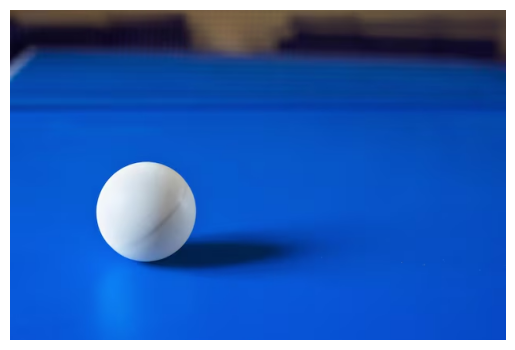

In [5]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
AAAAHGZ0eXBhdmlmAAAAAGF2aWZtaWYxbWlhZgAAAOptZXRhAAAAAAAAACFoZGxyAAAAAAAAAABwaWN0AAAAAAAAAAAAAAAAAAAAAA5waXRtAAAAAAABAAAAImlsb2MAAAAAREAAAQABAAAAAAEOAAEAAAAAAAALGwAAACNpaW5mAAAAAAABAAAAFWluZmUCAAAAAAEAAGF2MDEAAAAAamlwcnAAAABLaXBjbwAAABNjb2xybmNseAABAA0ABoAAAAAMYXYxQ4EBDAAAAAAUaXNwZQAAAAAAAAJyAAABoQAAABBwaXhpAAAAAAMICAgAAAAXaXBtYQAAAAAAAAABAAEEAYIDBAAACyNtZGF0EgAKChhmJx0DBAQ0GhAyihZEUABBBBBQ2WfBwhFFZS9/yvOSDUcKgNFwLnyonvtFi+5a/QZ2a5dK1fpgl/G4ZJu3yEa+X3UKKp4o53grMlT0TC2PvqbIqilwYa64APino8Q2cPzUSPn32BMu6bOBRvDbxgSHVq8sVxHinxnLumOMj1kJ+GpSMN441qnggvE3uFj1F7m/9XBC4wm+gLlBX2wFSr8aX16EXHbaKrh64QXYB3rK04pOFDRTpokReMNDq0jAFhVfQKRBTLqt364ntR59dLVEWSyBfVOnOqSR1aas4M/o2j1fZl9IAhnsd8EjiALsMY88/1PHxTbjwdFCC4XIMzBI2u9CCFDVjSTMWgzAYcVuiuR3dOhSDsJK2gvaXKEoJj0YOnbilz/DTBgaCKrcn0FPm8O9gXLw+Ir/wnsj8udOP//fpjmHjvUgLEiVoMITYzJjeJAhOJoyixrIbj2232UkGdjxeLfvYo4HuCwJl6qhDXGVcNL4+Eqdads3rzFVde+oRvuGJiseeoIEqYjipnFSiQendMRB4E7GB0y4pOkWQrRVCbtbNYh56VYkOHwcNrWDB5h5RWPwcaX5cTbLx4OhQ0biUbcWZ5ubupVvGzqI5qYkEMiFdm1m82uFnhlhECdoqNLuEzoF8raVM7LK5Lxevnu4ncYZthlmTk+5rp/Hl1t77jnXAK+pIBVfSaUP8seaBW/H+0He3MweC6Ctg+BS6EEeLq+J+Fy2TkCM0ozrhwOT47R94/XHajq2IYHNDUpdxYGew+pwvyz8QB/1w1sG2MOhFP5zm9Wr+HGSuyTrfcvT5a7QxCd1wygOXd3vrtFSMRIQTBsFxpUmCiN1hfE1il1iQPxYYba/HX80A6NxHaF1arZ2qIZHx14g96ECdzgFIbBx/qX5njyKqotbdPZBNCkK34/wkYJLP/ezexoc6tC/Z2LwClkgv3qmfkrDC1+ZQ7CaIlufQlhZlhqCpik3iXD8vItqAsDL5CfnF+MhPYVMkX/qy2bfAxe1eoGqiYXZEeKA3wIF888EKsR8stS5VctCwkpXe1WT2BfEsnsPRwDaBdbpIo/HlkRVOcJXoTna1EW1REoHnnE9c3tai8McAzebyYzqPX9ryEoXr0FQZMkxcq0jyVksWvmTfjB+EeZDELQ3LFRqe3iix5vTbf3fnsg6VbBMkgS+ww6zzu6gDY4Qaqu/bjIhi1WwkMQnI8iJjILpMlb+M7jLPpT+XncSAlfUwoi1ItpRPZoPibkmUYhN20BYzJXUJOc/ywJUtJJTqtHf3aGrVdgHaIA8DiEjrYGyjzyB/0pDhLUFY51LWY6sIg0Oy1hPPJTBeAe7Xk4btlpgfolZwKB12yliLHMBTWdlOQxY4tca2NzLJI1hmo3QOu/cCC2UEHtwok5OeiUmar3Wgijh7QZvwUcJEQ/0pVVZeRMpqVJ6ZoMkL5WtgtKwWCeAkpCPlz+E773jqavowiylITsUQHcP6Yx1WGqDNdr8UgATeI11ur5N81VVjme3cYPgUzGUwx+GIJb2K4R1uPbLB8OJ7M79tSz8USntyYT4i3K3novfd3PAN4LKAH1tiQXSdnSX3fK61779BrDUePPnEuq9epHIovQieO+cpcvOxET1loFpjTjSkCcwjCZMJqQO0F/+xQvmlqMcihNlidNYvNREH1CZJh/A8WSHzIA3erDFcjeA52JNKH79Pu2ntCsPW0B9HwSL7bgqJ34WHaxmXMEOvFiCpfqn5Ddi3J9ugCBIPMXVrOuGJFEuEvRWsmd4ytF2nchc5WwoQRk5Xw+1mLJy6zBo+4zM0bD/RSXMGNkMEBUPgrM8gvpPqveNOzwoF2hHbZwO5k5P2IIok0XtlXZ92w7uI25+NlTsafpmUYfaUCNahk5pI6FCSmEKgA2jyjYZZY9XCQBh+xDdLP6CsA14cqY5Sdi2ihhbiNNXtHlB8MHh9rjGt+HCKt1ek+CF4hgAvBhvKxaxA5XpXfaxLKoeAGo5ASLO0J3IIcea1zQmGmjf/kHR3SD1QjBSn0aNhsIihAOzL6Tr2flzEwQFt57RUKWrKEycr3yZn8ynz3lt+zr2YN4yPru80l1aOQZd+Kkk4OClzrrJl/Gua5FeMF34w3fMbNfFHyk0VRmn5rQYzFCi7nBFvZqbaRzzC0KfXrFNCcl8isWmaJ4/kOPqPmi5JGksnwj3b4OgBcsznlCfjRPVCyJRfRKhNUOq3RRybSWh1MeSFbjObIsa4qaPiG1chUCFySyMXn3/n+5Mk40XGX/vZM3hsPIY+peh+CdNFt06SuUx+hWhmGQjJ8TY4BShkbABmQ2WMVNMnRPTwA3OQ+1Lmk8LyOeiKRXFOBT7mYRbjEYP0g596YjBZAlq8UHfLbutmxcl+fSaj8NNdbVRud7WqigUiM0cMqPVPeLacteyLj8kjNdBSnV5ovVsXEx8mjh5rPV6/tdtppKz4uWUIe583UttU1PdSyksdbNk12FsXHtFx1YwDDuvGZOR7u5aY3jQ3hxedv/DqA+vWuRdFNhi40EDZK9+6xvv9G7CpINIZ2bkhpz8Yh/pdKTqnWoY/etaD/mrSWnW83nMl0OMHuNrh8jczL/XOQiFhxZBEU4ImhC0e/0MVwidZ+BjTQWK3ZHajjPtkNZd5gqeHxcLgY3f1QKwgq5L6WkuH2t1ykmVKrdCCw6vRZLsQop38beZpolim9n5zs2PNNAC+zDQ06gVEvIvlmf7PFwXTd8RAgdeYdrukXeJaO+7UD20bSj+3AIwNIiB0vEtTgApi8in4efm6glWv8Wv4bAg/T/CXZXc26+iGveSa8nx1ujsfPo6odJErJsavCzImRS+RaZoqSsjprT1tPQWMQsadQ3S+OsGsnRHUGJJt7uWQy6t+EW1H1F187lBcFq/Jq0hAALauvBpoM+h57Xo6WHFhUuAsAAqRWErM/1HhzinDYfH1lSjwmn145nNBKf6Tt38i05ZcX/JpJHmX4nCh8/tIgaN/V99hgRKK4JcyE6nn6IXkEqtSZNlwN7qB9QFG1vA7SvdlNkeUk9p2U4hBxrH5S7CFORXlY9J5CalOrX4c3PhkRjDcNGCuU28g0oqDLfRQRaS6svm7nPycb/jqqx0DI7I+P1mRkrdFQCB5VrXhFsgq+vFVUe7/IIUAKyn9YLiW3rFvt5GwxGaj72WsRwSZeJPNOGQ+mRmLHyTOir5MQKNd9suBig6ZFZo5o9J7cBDaoNybTAUmWj5dmRhoKP/+ctfn37MNoHKy1WItJl8j1jV0uhJIQP0iguKh3Cy4rvsSunwCvLdRiuVF+w478DI+1t5s6FyJE9WhF3zLsMOzaBerNuzIuvRjHGAWBmDSE5Cx+RtOzkHiKYIZZIislfc6JX49OQ22T83pdNOGgOeLkxTS0lIh14fbWLpbgQJSe0mjXynXvMhLuOoiAGuCeM8yN/p1OY2/YRHn3pQ6UO8Qy59liqK/Feitgurv+wUK/N40/Xryd2EOMUWEE2Gp/Sd3/2I21R1SMTGtCmP4YJhqIy9fEyH6foHlB9bjVuQ44ERzQ2T+/YXLhMOCCfPUVgqK0MvwsFte2NBtHT5MLFmIlJyP2zXm2OxmHP8LBAlUocZPDcB/7QObXwEWbAGgvz+qSzheBzlyzg/INEWghMnG4C+inavW6tCie26WkVSJdtVRYiVS2/SiblNwezK8jcUcQ31ENEf5OjKGmxO5tE4c/w0jHatDsoSpObks1W6FmdFf13rHNabC2DbIdjD+jEipnZhhHFVRv/U+gKonx0PDkTMSJs=

"""

img_data = base64.b64decode(base64_image)
ball = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball)
plt.axis("off")

### Bonus Question Image 2 : reference as "ball2"

(np.float64(-0.5), np.float64(642.5), np.float64(359.5), np.float64(-0.5))

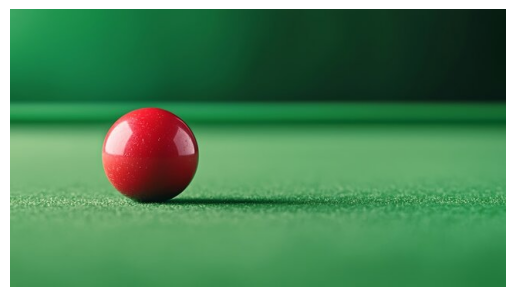

In [6]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDW9odHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMS44OCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvJz4KICA8eG1wOkNyZWF0b3JUb29sPkFkb2JlIFN0b2NrIFBsYXRmb3JtPC94bXA6Q3JlYXRvclRvb2w+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcE1NPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vJz4KICA8eG1wTU06RG9jdW1lbnRJRD54bXAuaWlkOmMwNDBjMzFiLTljODItNDM0Yy05ZWM3LWVjYzBhZjdiN2RmMzwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD5hZG9iZTpkb2NpZDpzdG9jazoxMGFlZDBjMC1iNGNlLTQzMGUtYTBmYy04YTAzMzM1ZTZhNmY8L3htcE1NOkluc3RhbmNlSUQ+CiAgPHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD5hZG9iZTpkb2NpZDpzdG9jazoxNTcyMjU1NTMwPC94bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0ndyc/Pv/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcHDwsLCQwRDxISEQ8RERMWHBcTFBoVEREYIRgaHR0fHx8TFyIkIh4kHB4fHv/bAEMBBQUFBwYHDggIDh4UERQeHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/AABEIAWgCgwMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAABAgADBAYFBwj/xAA8EAACAgEDAQcCBAUDBAICAwAAAQIDEQQSITEFExRBUVJhFSIGMmJxByOBkaFCscEk0eHwCBYzcpKi8f/EABwBAQEBAQEBAQEBAAAAAAAAAAABAgMFBAYHCP/EADMRAQACAgEDAgMGBQQDAAAAAAABEQISAwQTIQUxFEFRBiIyUnGRFUJhgcEHofDxJGKx/9oADAMBAAIRAxEAPwCuRVJjSkVtnjP5lZZMrk+BpMqmysSSRXJjSZXJhkkmVtjSEbDMg2IwtisIArCxWzSlZW/MdsrYUsmVyHbK5MsNYlYrCxWV0grEYzFfmWG4VyFbGkI+hpuCgyFihuEIAgapCEIKWkAwsBVKxQsVhYBiSYwkvMNYkbKpeZZIql0LEO0EYkh2Vs06YkkyuTHl5lbNOkFYjGfmIw64lbEyFisrpCZBkAMinSBJFijBRIAmQyIM8EyQEFbFbGYjDZWwZIxTSjkmQECjkmQeZAoisIGFgrYA+QpYbgBQsU1CowMDIAMisIrLDeKZJkAGGoTIrYRWIUsmI2NLqxPI1DUADJGAAMBAEEIDJAP1I2VyYHISUuDyn4C0lIplIMpFUpBi0kytskmVtlpEb6iNhbEbCBkVsjYrKQjYjYWKwoMST8gtiNliFiCsRhbEZWogGxQtilpuIQrYzYjLDcFZWx2VtlhuAbFIDJXSEyQgMkao2QZFyDJVNkGRWyZAjyBkyK2GkZXLoO+hW2IbxgkiuQ0mIzUOkEYjGYjZqHTFXIrY8mVsrrjBX0EYzEbDrBJdBQvoKyukIKwsUNwKCgECwYgEEIhCECQViMdiMNQSQoZCs01CBAQNIEBAD5A8iepAFYjGYr8zUOkFFY3kKyqAoWDyKQDfAoWAOkIBk6IDI1CMVhFZoJIUZisrQYFY3kKwFYGFgIAQhAtP005FcpCOYjkeU/nlmcityFlIrcixCGbK2yNiNlhKFsXIGxXItKORcgbFbLRQtiNkbFYpUYjCxWy0sQVsRjNlbZadMYBgbIKw3CMRhbFbKsFl0K5DSfIj6ldMYBihYrYdITIuQNgyFHJAAyVYgckyDIGw1ECAGRcimohJMRsjYkmGoCTK2xmJJm4hvGCvoVy6DsrkyusK5MRsaT6lcmHXGCtiNhkxGyw6xAZAQAbxgGDAWDJW4RBAgkBXQIpEASAJkoDFYWxJMLBWKF+YCtQgAMGStRBshQqYUQoQEA2IIB+YoRWahuCsUZilUAeRAMrWJSIhA2DAw+YMiFKB9AsWXQpBGBhFK0DFYwrCgxWEBEAgSBp+jHMRzK3MRyPMp/OljkK2VuQrkWiljkK5FbkDJaWjZA2LkGSg5BkDYMlpRyLkgrYWIBsRjNivzK1EFYjGbEbFNwDFbCxGwsIxJMLYjZW4gsmK+gX1FYdIgrFYWBlbgoMkbFzwIWIHIMgyTIbiByDIu4GQ1QtgbBkVsrUI2I2FsRlhYgGxGFsVmm4gGUyZZJ8FMmHSIKyuTHbKpMO2MEkxchbFK64wgCEK3EAQhAqIICCAUyAICkyBsjYjZVFsRsjYrYWIRgIAQ1EAAjYDTZkEVDIgiAwgYhIBisIrLDZWKwsDNQAK+gz6CNhrEA+QEQNgAmQMQqCSYzfBW2ahYAVjPoK+gagGKMABWALAREIQgW333eBzKNxNy9Tz6fz6lu4G4q3A3CiljkTcypyBuKuq3IMle75JkGqzJNxXkmSxC0ZgbFyDJViByK2RyEbCwjYuSZFbDUQDYjCK2KagGxGxhGWm4gGKw5EZW4BithbEbFNxAPoI2FsRsrcQLYMi5JkU1ECTIuQZCmbFyBsGRCxCNitkYjeStwgjC2JJlbgsmVtjSZWw6YwWTKZMebKmyw74wGQEIWnWIQBCFWAJkBApgAJkA5BkGRWwC2K2DIMhYhMgyBsBYhuIHIM8AAVqITJCECogpgRAg5B1IQLCMRhFZVAULAygMRjPzFEN4p5CsIBDSCthEbKsI2KRkK0ArGFYWAYAgADFGYCIBAkC0+27vkm75M+/5JvPhfhNV+/5BuKd4N4WMV+4G4pcybxRS7cFSKVL5DuLSUu3B3FKkTcDVa5C5E3AyKWIO2LlC5F3Foo2RWwNgbFNUjYuQNgbKsQjYjZHIRsrcQjYrYGxWw3EI2I2RsrlIrcQLYjkByEchTpEGyTJXuBu+RTUQfJMleSZC0fIGxNwMlaiDNi5BkVyDUQLZXJkcsiNhvGAbEk+oWyuTDrjBZPqVsZsTJqHbGEB5kYCtiBkyLkKIMgbJkA5A2DIMgHIrZMi5LELECLkmRclpuITIMkIGkRAZJktKIMkyAEGIDJMigQNkbFbECNitkbAFADZBWVqIBshAZDaMBBSiNiBbFyWG4QBCFEyKwgCwUhCEAYBgYIgEIQD66pfJNxQphUz4n43VduJuZVuBuBqu3Mm5lO75JkGq5SwMplCYykE1XqZNxQmFSFM6rtwN3yVbibimq3d8g3FW4m75LS6rNwrl8le4VyKsYrHIVsrcxdwajE7kK5CbhHItNRCxyEchHISUytRiZyK5SFciuUg6Y4mchHIVyEcg7Y4n3E3Fe4G4NRit3EyVbibguq3cByKtwMhYxO5CuQjYHINxiZsRsVyFchTcYjKRW2RsVs1EOmOKNi5A2LkrpEDkGQZBkUpsgyLkGS0GBkXKBuFLRmwZF3Aci01GJsiti5BktNRA5ILkGfkNRBsgyLkGQpskyLkhQyZMiZJkUHTJkXJMigcgyDIMgFi5I2DIWIQVsjYobgWLkmQNlWEbFbI2KyxDUQjIQBaVOgCMDCwjB5EAFQhAZAIAEFJQogCEofUts/aybZ+xnbfRIehPokPQ+DaH4vdxSjZ7WFRn7Wdr9Eh6E+iQ9qG0G7isT9rJtn7Wdr9Eh6In0SHoibQbuL2z9sv7BSn7Wdl9Fh6f4J9Gh7UXaE3cdiftZMT9rOw+jQ9AfRoe1DaDdyGJ+1gxP2s6/6PD2gfZEPQu0JvDkcT9rA1P2s676TD0FfZMPQsZQvcci1P2sXE/azrn2TH0FfZUfRf2LtB3Ici1P2sVqftZ1r7Kj6ID7Lj6IbQvdhyLU/axXGz2s619lx9qEfZkPRF2hY5ock42e1iONntZ1r7Ogv9KEegq9ENmo549qck4We1iOFntf8AY6/6fX7f8EXZtbeFEbw775xFzjNfo4112e1i93Z7Wdt9Jg/9CJ9Ij7EN4SOrxcR3dntYO7s9rO3+kR9iB9Ij7EN4WOsxcTss9jJsn7Wdq+yIexA+kQ9iG0LHWYuK2T9rBtn7Wdp9Ih7ED6RD2obQsdZi4rZP2sVwn6M7Z9jw9iF+kQ9iG8NR1uLiXCz2sXu5+1nbvsiHsQv0iHsRYzhqOuwcQ67Paxe7s9rO4fZEPYgfSIewdyGo6/Bwzrs9rFddntZ3X0mHsB9Jh7P8DuQ18fg4V12e1g7qz2s7r6TD2IX6RD2Ivdajr8HD91Z7WL3VvtZ3P0mHsJ9Ih7EO7Cx1+Dhe6t9rB3VvtZ3X0iHsRPpMPYO7DXx+DhO5t9rB3NvsZ3n0mHsB9Jr9g70Edfg4PuLfYwdxb7Gd79Jr9hPpNfsQ70L/ABDBwPcW+xk7i72s736VX7ED6TX7ETvwv8QwcH4e72MHh7fYzvfpVftQPpVfsQ70L8fg4Pw9vsZO4t9rO7+lV+xA+lV+xDvwfHYOF7i32sHcW+07r6VX7UD6VXj8qHfhfjsHDdxb7Sdxb7Wdw+yq/agPsqv2ovfhY63BxHcW+1g7i32s7b6VX7UT6VX7UO/C/G4OH7i32sHcW+1nb/Sq/agPsmHtQ78LHW4OH7i30YO4t9rO3+kw9qB9Jh7UO/DUdbg4juLfawOiz2s7j6TD2oX6TD2l+IhY67Bw/h7fRg7i3H5TuH2TD2g+kQ9o+Ihr47BxHcW+0HcW+1nb/SIeiA+yIe0vxEHx2DiO4s9oO4s9p2/0mHt/wL9Ih7R8RCx12Die4t9GDuLPaztvpMPRA+kw9qL8RC/G4uK7mz2sXuLPadr9Jj6IH0mHtHxEHxuLi+4s9rJ3Fvodn9Jj7SfSY+g+Ig+NxcZ3FvoQ7NdlR9EQd+F+NwfaldH4Iro+qOY+pr3/AOQ/VI+88x+M2y+jp++iTvYHMLtRe4n1Ne4G+TqO+h8A76Pqcx9UXuJ9TXuRTfJ03fQ9Qd7D1Oa+pr3E+pr3A2ydI7oA76Hqc39TXuB9SXvBtk6N2w9RXbH1Oe+pL3/5B9SXu/yVLy+joHbH4FdsTwPqS93+SfUV7ha3k912x+BXZE8L6gvcgPXr3Fs+89t2xK5XR9TxXrv1GvsTSa7tnVdxo4vEf/yWNfbBfPz8C68y+npek6jq+WOHhxnLKfaIaZXptRjy3wklyzbR2XqrYqd77iD6JrM3/Q6fsj8O0aGnMIOdjXNs1mUv+y/Y0vs2e9Rnc6J7koyk3iPXLbXTnBwy5s5/BD+y/Z7/AEz6bDGOX1TO5/Lj7f3n3n+37uRlpNLU1GEHdLOPvec/06Ga/UbJ7ILZHP8ApSR7XakNTTRXqbI2TjF93BxXEXjhZXnz06nNam6vDteoza3lwcG3/V9D5cpzn8Uv7L6R6F6V0eH/AI3Bjj+kXP8Aeav91GrtlY5tSntXLTeeDy725y2JvPlmWMGnV6mU2t0m4dPtWOPQ8+21KWcuOOU11+Cw9jlx49anGFPjtdpvuq1FiWfyy5X+TVpPxXKuW3XaZOPvq/7M87U3RzKScrJTi97sin9z6tf18+p5tzy3z1Pp48pfgvWvsp6R6jE93hiMvrHif3j/AC+iaDXaLXU97pboWR88dV+68i/Mfg+Yadzp1Eb6NRZp7PKyH/Pqvg6nSdr6iuNUO0Y1wVvFWpreabX6Z/0y+GfTFzD+I/aX7C9T6ZE83TTvxx+8fr9f1j9nTZiD7Pg8rxmOG8A8avcTZ/P/ALz1cR+CfZ8HleOXuB46PuG0n3nqNRFxD4PM8dH3A8dH3DZPvPTxD4FxD4PN8bH3A8bH3DZayeliIuIHn+Nj7geNj7kNpKyehiIuImDxscfmB4yPuGy1k34iDETB4yPuB4yHuGyxGTfiIMR+DD4yHqDxkPVDaViMm7ESYR5/jYepPGw9SbStZN/AODB42PuQPGx9UW5Wsm/EQfaYPGw9yB42HuQuVrJve0H2mDxsPcDxsPcTysRk3NIGEYfGw9wHrYe4vldcm7gHBg8bD3E8ZHH5kPK1LfwDETB4yHuB4yPqTy1ES3NIVpGLxkPUHi4e4vlaltwgYRj8ZH1B4yOOoqWvLZhAwjH4yPqTxcX5ipPLXhEwjH4uPqDxcfUayvlswiYRj8XH3E8XH1QqSLa8IGFgyeKj6g8XD3DWTy14QMIy+Kh7geLj6jWV8teEDCMvio+4Hio+4up5acImEZfFQ9xPFQ9RrK+WnC9AYRm8VD1B4qHuRalblp2r4JtXoZvFQ9wPFQ9RrJctW1ehDL4qPqiCpLl6/wBNu9WT6bd6s7/6Ovb/AIJ9H/T/AIOdunYcB9Ou9WT6dd5tnffSP0/4B9I/R/gWz2HBfTrvWRPp13rI7z6R+n/APpP6RZ2HCfT7vVh+n3erO5+k/pQPpP6RZ2HDfT7vkngLf1Hc/Sv0oH0r9Is7Dh/AW/JPAW+rO3+lfpB9KftFnZcR4C35CtBb8nbfS/0k+lv2/wCC2dlxS7Ptz5jR7Ps88nZvszC/KVS7OlKahCG6cmoxS82xa4dPtNRHl4HYf4e1PavaEdLU3CHDtsx+SP8A3fkj79/D/wDAv/TV0afbp9BHhyxzJ+fP+p+rKP4UfgurVSipr/pqmp32LjvJei/2Xoj7Rtp02mjXXVCmEI4jGK/KvQ1xcfd+9l7fJ/V/Tej4/QOCOPCInnyj70/l/wDWP8/9PG0v4f7H0OndFelhZNxxvnyz5R+MtLfo+0LqZuvuoS37XGX3L4eOvCPsN9s3JuLaXycN/Evspazsyetpjuuqa3LHMo85/sduXCNfHye/6J1WePUR3Mr2+v1fDu3b5zubvrkpZaaraz8L/Bzuv2dxO+mFrhOKjKUqkoqfDaTX9H/xye32u57puy5TjLc+HnGfn+i/Y5nW3ODnXVNqLXKy+eOVjp8nlZR5f1ngmsIpi1uK5KEZNtQTnuwvu6tL18jA5yy9jal5Y+eOf7l+qeFGMoxXOXJL7nkwXWRUfsb5X3Zfnzx+3TqIxceflqKV3ySrcGmpKX+DJJ5yNOx+pSnnGeF5vB9GEPH5uQ8IvGUs+XoaNNqNTonZCOyyqxYuosW6uxekl/z19DPT+ZNcc+fkfTOw/wANaXtL8O1aTWxlG9wVldvnBSz9vz5cP+h9PHjbx+r5scI8+zi9JqK/s7uc/C2SUId48yom+lcn5p/6ZefR8noS0tnyYfxB2Frfw52hKjWUuenujjC/LfX54fqv7p4Pd/CVi11Nmjun3mo06TU31trf5Z/v5P5XyTLGn8c+132d4+DL4zpo+5PvH0n6/pLy3p7vkV6e75Owl2avaI+zV7TETD8L2ocj3F3yDw93ydb9NXtA+zV7RcHacl3F3yTw93ydZ9N+AfTf0luDtuT7i75B4e75Os+m/pJ9NXtFnbhyfh7vkHh7vk6z6b+kH039Is0hyfh7vknhrvk6z6b+kn039LLsukOS8Nd8g8Nd8nW/Tf0k+m/pJsaQ5Hwt3yB6W75Ov+nfpB9N/QNl1ch4W75J4W75Ou+m/pJ9N/SNjWHIeEu+QPSWnX/TV7SfTf0jY1hyHg7vUHg7jsPpv6SfTf0jY1hx/g7geDuOx+m/pB9NXtLtKxjDjvBXE8Hdg7H6d+kn079JNpNYcd4K35B4K35Ox+nL2k+nL2jaSocd4K71ZPBXep2P05e0n05e0bSVDjvBXeoPB3erOy+nL2g+nfpG8lOO8FdjqweCu+Tsvpy9v+CfTl7RvJTjPBXfJPBXfJ2X079JPp36S7ytQ43wV3yDwV3ydl9O/ST6b+kbyU43wV3yTwV3ydj9NXtJ9OXtG8lON8Hb8g8Hd8nZfTl7QPs5e0blOO8Jd8g8Jb8nY/Tl7QfTV6F3Kcd4S35J4W35OwfZq9Bfpq9ButQ5DwtvoweFs+Tr/pq9AfTV7RuU5HwtnyDwtnydc+zV7Rfpq9o3Ihyfhrfkh1n034IN1qH3H6evRE+nR9p7ndondr0Plt6fbeC+zo+0V9nR9p7/AHa9Ad2vQbJ23gfT4+0H09eh73dr0B3SGydt4H06PoD6evQ9/ukDuV8CztvAfZ0cdAfT16HQdyhXSvQtp24c/wDT16AfZ69D3nUs9Ad0vQWduHg/T/hE8AvRHu90vQndIbJo56zQpRfBOx+zJ3a2LrhuslNVVL1k+v8Aj/c9rUVLa+DqP4YdmK78R1Wzgtmjo76WffJ8f7/4LjE5zGP1foPsx0+E9ZPPnFxxROX9/bH/AHfQuwezq+xOxqNBXjfGKdjisZk+obrEs56s06uzls8rVW4UpJeeEep4xiofpcIy5c5zy8zLPqrXhSf9jhf4mdvS7P0T0GnnFX6iK7xtv7Y8+nJ1PaWsho9Lbq7mnCEd0uP7I+EfivXz1XaN2sv1E3bZL7ZR4xjpj19D5ebOofrfQfT45uXfL2j/AOuZ/Edqsh3tM3CuL/l1yTy1lptL0TXOTltbbGM493JvEVlv180e12xlJwhZXZKuLX8uSeyK65f9f6N9Wzxb9Vjse/RtwxbdXem/zfbGccZ+d3T4PgnzL+hxyaYeGC+6MqZKUFnlppvOX5ft5nl3S5Zddb9sl92f34x5mK2Wc8/55N4w+Dm5asbIzjJKcXHdFTWVjMXymvhoqTzl87M9Mg1V8r752yjXFzedtcFGK/aK4S+EJCzbLrx5r1O2MPKz5b93t/hrQeN7ShXNNVx+6b+P/J9U0GpcrIxjw28PC4Pmf4L7Qjp9VPTSx/Oxh/qXl+x3vZ9u2WcrldH0yfXxR4eF1uc5ZeXX6jsnS/iLsazsvXwUlNbqbU/urnjhp+fp+3qfGIeL/Cf4mjHV17Z6OeZpdLKJfmx6rGJL9j7L2NdNaqi6Fv8AL/L3aXm31/8ABz3/AMg+yIW6Hs/8T6eqO2vbpdRtXDi87W//AO0f7G88bh4/LjjzYZcHJ+HKKe6tHXZXGytqUJJSjJdGn0YHoF7UYv4Q636n+BtNCct1uinLSzfm1H8r/wD4tHWPTr0PNm8Zp/I+fpp4eXLjn3iac69AvaD6evadD4degPDr0Js4dtz3gF7QfT17TofDL0J4deg2Ttud+nr0J9PXov7HQ+H+BfDouxo576evRE+nr2o6Dw6B4dDZNHP+AXoD6evQ9/w69AdwNjR4HgF6E8AvQ97uCdx8DZNHg+AXoDwC9p73c/BO5+BsaPB8B8E8B8Hvdz8A7n4LsaPC8AvQHgF6Hu90vQndL0GyaPC8B8A8B8Hu90vQndIbGjwnoF6A8AvQ93ul6A7peg2XR4fgPgngF6Hud0vQHcr0GyaPD8CvQngV7T3O5RO5Q2TR4XgV7SeBXoe53SJ3S9BsaPD8D8A8CvQ93ul6A7pDZdHh+B+AeB+D3O5XoTuUNjR4fgfgngV6Ht90id0vQbGjw/A/APA/B7vdL0B3K9BsaPC8D8Ingfg9zuV6EdKGyavB8F8A8F+k93uUDuV6Fs1eF4L4B4L9J7vcIXuF6CzV4Xgv0gejXtPddK9BXSvQWmrw3o17QPRr2nuOlegvcoWmrw/Br0FejXoe46V6A7legsp4fg16EPa7lehC2tPpu4m4p3E3HB6qzcTcVbgby0lrcg3FO8G8Iu3ImUU7ybwWuygOSKt4HIFnchcibgbgizJMor3A3BAtW9qC/wBTwfQf4Z91v7VsisTdkIZ/Sk8Hz7TNPW0J9O9j/udFRq7Oy9VO7Q2qKbTmpPif7m+LOMM4mX7H7KdN3+Dnxj3nX/MvoOsniLfqzxtbbhNeX+5z1342coqGr0i5fEk+Mnma38baBJ74WPDxuXR/J9mXPhPzfq+n9I6mJ84Mv8Te2PD9nV6SH3Susxj9j432xqFfTZhxg6IuS38b1lLbFf3/ALM6v8b9taTtLtCqcbMVKtxgmsRc3nLl5qKWc45fCXqcD2rdCyKrhfKco947ZvdtxlbWljK4z/U+Lkz2l+89K6eOn4YxmKl42uvUZWxrlKELMJxT4aznHzjj+x5WrsjvahLjjDxtL9ZLO7bnGeE+p5eqmnZLa5OPRbuuDnjD7+Xlj2V6ixSm+Ix8vt6L5MNs0m8PKXR+pbK2UJScXhtNf34Zkskd8YeN1HNSTlhtJp/KJXNrdh9Vh/sUuTIpHbGKeXPNct+mtlXYpRk4zi00fS+xtXG/T03Rf54p/wBfM+VVt+vl5nWfhvtnTaTQwr1DluhJ4ws8ZOvHlUvl6iNsX1X8N2b7VKctyhN7cLG1/wDrOi/Gei+qfw47e0n53XoZXQyuVKDUuP6Jny7QfjTQaeW5K2T46LH+5s7Q/ijbLsfW9m6PQVpaqmdMp2NtpSWHhfsdd8Yj3eTnxZzNxCf/ABw1TnDtvSN/b/JvivnmL/4PrTXJ8i/gHWqO2NfCPR6RZ/pJH1ts83km8n839ciI67kr/ngSYFyDJh5JngHGBWwZAYAuQZCC8CkbFyGUeAEFzwEFgBkGQhuAC5JkA5AK2DIQzwDImSZLAfKBkTIAHygNoXJMgHgHBAAHgnAuSZKgk4AQCcEIBkEJkBCg8AIQIgMkwAA5QAEAgCAYhEYuSMBbZsGAOAMIArwFsUFo8A4wRisqWnBAECW7ncTcVbgbjlT0rW7hXIr3A3FLWbibirJM/IFm4G8ryTPyC1m4G4TJMgPuBuEyDcEWbgZE3E3ANVPZfXP2zi/8nodq3Oq2Sb4l0PLlzkPa9kpuFiaxOMeW+E3xz6cnDmmqfvv9P+SJ5+Xhn5xE/t/2w6/Vbls54X9jwu0dZBwrcFiceZNLHOf/APC/Uzm7r4z3KyEW8OWOV/75fBz+qcpUK6VqqhJNKby+V6peTfmzlGUv7Jw8eGMKu0bpXWNSxnOyaWM5y8cdepzXaVrnZN2L7nLl/PmX6u92Sk5ySk3ltr1fXg8u/UdzdKLcZxjuj54a88eaydMfLfJlOMUxauUrI2SUPtj90tq4jnj+nkjytVNTm3tiuEsJYRp1Fn2NZec888MwatwjbZGuzvIJtRntcdy9cPofThDy+blUXS3cNvC6Iy2Nf2LdRJRslGMlKKfVdGZJy6neIeJ1HMDwGOCrcybvI6U87veWiLRdCx8mNSGjMlO2OdvQrt5L+9j/AKenHVHmQtx5l1VmWZpjlnw+wfwJrctX2jqPJURjn95f+D6g+pw38D9E9P8AhS7WTjh6m7C/aK/7s7hs4Ze7+R+p8kcnV8mUfUABFb4MvgQgmQpgMKTIMoCChbBlBAAyNithlGADkvUGQyJAZIUQGA5FyREwDAcgyUTAME3EyAMADkjYgAgMgAJCEKkIQiCggYIEmAoJEwRBCBjBMBIAMA2jEATaDBYTAFWBWi1oViEVYJgfAMFZI0K0O2KEJgGBmAMkwKy0RpFQmCBwQFusyTIqZGzm9AcgyK2LuBazd8k3FWSJgtbuAmJkKlkFmyHcVthT4BZssAjmkCMk88gPkORcitgWLkXXpWdk2xec18pryT/8/wC4sZYDGxJtS5hJOMl6p9TnyY7Q9j0D1L+G9fx88+3tP6T/AMtxXbcNTVRKd7ctrUfzKW3Hk1nKxk5vX6yUq3Q5tQhmUFjOW+ccevqdR+JdLDTu6uU7nCMf5bcFKLTfrlOPl68nEa62TrS3t7Ivam+nOf8AufLjF+z/AEf03Pjy8UZRNsWqtblhNLOMPODzNZJblGqcrHtTl9uEpeePj5LtVOHdb+8e/KW1x8sdcnnam1uTkscPqlx8ceh9XHi+bqOVnvucopOXCWFx5ZMNs/kt1M8zb3J55fGDFdPl9T6cYeF1PPEFsl1M85BnPyKZSO2MPz/Uc/kzkBSKnIG46U+KObyvUvkKkZt4VMmrvjz00KZv7Gps1etroqi5TnJRil5tnj94z61/AL8Ny1Wtl+INVD/p9K8U5X57PL+3UxnWONvP9U9Rjp+nyyj3+X6vsXYOgj2R2FouzI4/6epRljzl1k/7tmrJXOeW+Rd/HU+R/M5m5uVuV6gb4M7tGhPISzsGSuyeEKp5QS124GSlzDuWAlrGxdxW5iOQS1rkK5FSlkDngM2tImCEsoDlgsKfJMixe4E3tRQzkLkRTTDGcWyMrEJNjOSS4KJz56gk6YyZVW8pj5KQYGQZyiuU8PkC0AneL1JvCHIiRfBMoCBTEkxHNrgJa3JCtTygbxRa4iZXCW5cBziWAWsIDdwVynyC1oMmaVjWeo1cm1nIpLX54ApIrlPgpdopNmptCNpFCsk1lEUpSbRaS16aaFf7lKk45RN7bBZ31FyOsbSuSy+AhWyZEaaYJSwGbWZEyLGxNdRJzx0eSpazJCnvGQqW6yuT5zhBWOeSvbByce9juQ8a69r227pLqkcnpFlJNPAiUvIiUot5i8BVilNVxi8v1CBulEVzfXBba1U8XdfJebKJa6vbKmdEoWfK8gT491kJOQXJReGLCdMaXKOXLzK2pahZr6Y5+ALe9hjqL3jedqyiiGlfd2SVvMfJ+Y+jdkoxioPLeOfMEK7p2Zxhoap2OGUmjddTbTZCN9WHPoVaiEoT2R/N6BdaU12PLyWRnl8FUYyqsav+3PqXRhumo14ba/oEiFcpSzwgJtvDHs/k2LdiX7FN18XalBcebB7Ku2NF47QSpSTsSahl44fVZ/8AcHyrtuC02obhBQX3NRklKK8v/ep9arthZc4RsX9Txvxf+FF2lS9RpZqNyWXCKX3fK+TlOHm4fv8A7Lfayekwjpepn7vyn6f0/R8Y1s47pNJRXonnH/J5Vtjy8PB7HbGjvo1Eq7qp1yTw1OLWMcHhaiTg201w/wB0+f7H0ceL93y+qYZ43jLNbPqZbJ8Me2XV9PUy2ySWD6cMHg9V6hE/MJzKZS6iznjJTOw7Y4PG5eqiVrkI7EUSs6lbsR0jB8/xVNPeA7wzd6j3fwR+Fe2vxh2qtF2RR/LjJd/qZrFVC9ZP1+FyxOMRFyxn18YRcy1fgP8ADmv/ABZ+IKuzNFFqKxK+5r7aoer/AOD9Rdndn6XsPsnT9l6GChRRBRil1b82/lnmfhH8NdnfgzsaHZnZUHZJ4lqdTJffdPzb9F6LyPV1k5qEbHxnyPO5eTefHs/K+oddl1Wdz7R7B3rU8S8y5x+3dngyyUpqEpJqOfzYEsc7JTrrsW2HOTk866WWqWftGrk0V1WYlBWJpNdSyKjZKShJYj5lhIgttyzgisQKlXbL+XJPbwLbFTUoRajjzYDuyCXLK5WNLpw/Mpulpa493K3+YWWLfpoyrmsfLDJoXJ8NoNjaXC4KVS1bFuWF5iaq1Rti3NKtPl5B8vK6E9r+7gucMxz5FFu1x/M35przKtRfZVpVZXmSbxgURNNcXGt8yJqZ1qGU+pllNONCnFxlLqXW6RzmoxeXLpyVfl4NVJqG7yEna558hNR/J/lqWWuvJTKVi2p7UpdBTM+GiMZJPJUozy5rOPQujZCzbXXJZXUz2a2NdstPFxf6kCaNZZNLgonObfPXPQtpvqpthC+abn0RXrbKp6v7ZqCXVFYn2tt08G4cy5Dj7uTHVqN90lC3dGMei9RatRZOqX5sy6MNbQ3Qsip7ZcE1FEpQ7yCyvgxaZzvhJWrCj1kGjtTbTKjTKVzXXCyKWJj5r6K+9TxlYC1tTjL+55+n1GslZmEHFt9GjffKx6eKnU4WTlti10YZiYmBe5RUvID5j1M9l1lGmnDcpW1P7olD7Y08K4pJ+km0Gdoj3anNxltb+Ro2KUsFK1dV2tjsjyo5aaNGpt2umctO2pfa5QBE+EfL2oNai7NknhmaWrphqLK5P+ZBcIrusnKHeOGJZ6oJtDZau4sSzlMjnw2zzO9vlb3invwvyI2T1Ku08ZV0ygotKzKxgJGVrdNqYubT6Auvj3n28/sJre7025RrbystmS6+iuFc6rIynLrHPQE5U9C+Oa8xf3PyKa7LIRacRZQsuhCzT2pzazKLfBW9VOmMlqMKT/K2gky0d7KXDKrYSi8rLTKY9oRurlFKMeOpv02t0kKVOUvuSw8lSJifmohYoQe7hj02twzFZKbqbLLY6lOPcWdGxNRqJ6dJ017lH8wTavdoducqUWpIEcxTbM3jZy0stRKibk+FhcElO+2O3ZhSWcik3X9/CKct3QTxkWvtabK6qp1wnK+Gak+eR76NO/59FcoKS4ivMJcnqu38y4EsthKeE8mOFk51N1wlLD+5LyNEp6R0zdNU+8iuM+bCRlYSi2/sy3noPZCyuH8yOF5My6W6WosrjCSrm35npW0XyhOu6yG6HkUx8xbErfggPsj9rlyiBLl0Wqts7mq36co23S2KEG3LK6vHoboTro0910FQm6uISb3p5XK/uupe512xq0HZd0pwjUoOceJYjyouXtzz0/7mWFz7Ov1c5KnUaiWIQujLDxLrFJ5UVn9+i4OPl62tfNX3muurTVU1OVHfxlLCrUfVevR8fDH7Ru1MI10aVqdKipS1Mo7Iyfx/sPPV3S7EyqfDK2xUyjBua5WJTjnO1/3T54NFPaHZUu2a1HRSxU1GzUPMpKSWFJRfRv1/tgpGMe1vNslZJaa+U532zt7twjDCjLyW7pynk3dpabVQ1FWpu0E22vy9Wop43NLoueG+vkedPU6VWeF0+klq7I25pssnKDg10cufu4zxleeeodbq9Roa66dRKMtRdZCyFMpfy8LKw1zhdPtWFwn5IJFVNvVcYX0apafUUVSoo72NSjuss+7DSXpjl+iMVfdaTRVWz1Depv3SUZR2QSXl8vHJp7Xs7nS3t9oOx9oURtc6nGM6vu++P2JJ544a6dTPoe09E+2dRrtVPvIzgu8g39nomljG7HOEksvAbmItRDS6q7tCHZk04aqce9i+V9uMpY6Yaw8/JdGGpqVctRBYWVHY8uTTxlF2l7TdD7zTO6+Fq/lw8W33TfHVNPbjrHnPwUd73mrohGyENPC7FtlW7vK1lbpOWW3lJPC6MJrjXuGn1Ou1eltlddQ7JT7uuuE91lbz5obS6LW6edt+sc8VpRbn9rjKTxHr6kjbXqIa+WjgoXrULvNQ04znBybSTWI5b5bxn+w1mnrs1ds4a67TaW1QnOyUpWzVijztT5f3Z6vqIWMf7jZPV13XVarRudta+7p9qxnJKVLurbVVY5Vwxcm1Fwb5S5836Fa1846/W6rw/faeFbjGd1LdlrWNqbUlxx/TlFnZna/Ztup0+m1mlohS5Sg651NwhHLacW23nLw884S5ELEYzPuqzPSUSjdpra7ZNLE1lqT6JvyRfRVTdq3DUTjRZPMHGFbahJf6W/Jvko1eo0V86tT2t2TPuXclc6ZPdCEeI7fKOfTlfsHtKWqop1WtphTLdZTZVDvMJespY5lJ4TfX4fUGqT7MdObbtLbTZhyjKeFHCfqi6GnnPw1bsUbrZ4i4JtP4/wAos1Wuuvq11up1OonJwhvdMI91KC89rw1148/t5z5ZKJaOM5T0VEroSom665Sadbw8OMpNrc393PmwumMT4eb27+GNL2p2d2hf2jG7Qzpfdyti28vOMNLqj5D+L/wNrtBS9RpFHV6bftlZXLft4zyuq/yvk++aPV6p6++1K6jQ1QlCKcluuWOFNS4ynnLWM/Bz1kdRGdVOqjGXZrh3NM61962uTbsrjH7svhPpznHHOsJp9PF1nNwRXHl4fmbtCEtPJqzGUsNxecf2PIutiptN/s0z9Fdvfw57H7QdtEnDTyt7uUJ2XuyyL53ycVFbM8cPOMeZyms/ghddfpFX2rB12pwcnu2w2p/GUsYw2uX5YPt4+bCPxPpw9SymPvPi87085fUplbnzPrtf8FIqjT6jU9syrr1FjVW2hycoRly0njyysY8uOpjv/hRVRZqKr79XFeV0Y4hB78JfdjdHC65Tz8de8dRxQZeoYfOXypz+Q1Qstltrg5v4Pqmj/gx2rdDUX9/TChQbq7ya3teqinl/HkVz/hR2xRGbc4urbGVdkJpxsT88+X9n1NfE8X1c8uuxq4l4f4Q/C/4e41v4t7bVdUXxoNG91tn/AO1n5YL9sv8AY+vaP8e/hPs3sqHZ3YOgWj0lcMKuEcKP6s+bfq+Tgbf4V/iPTODlQ1KyKUIbsd4+M7V1wsrL88Mqu/hr2/XXbbRW7qa3sk1ZGUoyS5zFcr9j5uTLDk/Fk+Hm5Z5PfL/Z9Fs/iToXXKqOohD7E+VzJjR/iV2S9LKGoipXxScZKXD+D5rV/D/tadEpuOIxi3ZZLKjGXtX6v39S63+GvbNShG2W2ycN6jtcmsdV9vGeVxycu3xfV88Rj+Z9Cu/ijoLtNGiNbio5UpP0+DFp/wAddmae5tap2wfLSWM+iOH0v8O+3dRqo6PCjqHFyrhnbKzHkk+r/wB+Q6r+HXbWn0teoyp1Ss7pvCi1PPKcW8+o04vqk4Yz5nJ9Cs/iF2ba42R1cKo1RaVbWXOXlz5IyP8AH2jnCzbcq3JZcfRnz/8A+kdordKd8E4xcmlW+evGcYzxx/6wS/BPasZVfmlCzGyzKxJcZx8oRhxfVJxwn+Z9D0n4001MKktVGqqWXOTXKw/L18irUfjjSLbJ2Scmt0ecOSfR4OBj+DtXK22Fd3eOKkkpxa48pcen9v3H1n4H7R0V0e8uU3OClxLpno8r48i6cf1TTCvxPo1f460NkIaiuuh7eJqUuW/2JpvxpoZXKy6KjFPPdpvC+T5p/wDTtZHUSg9StseN6ksZx8/8Er/Czaju1mohJxbT25jx5eo04/qmuH5n1jUfj3sF1/YrLJRuxJxe1OHrz/Uqo/EvYteplVK1Xq+T7tqWVHh4WfVvB8w1P4Q19GHdTqqK+7T9dz6cvyy/Ien8Jal6K65amUJVxWYyfM+eWvjoiaYfUmMZ/mfRtN+Mez6YPF0oQdbk1JbsSXl+xp7P/GGjs7x3Nd3t319PLrn0/wDB8zo/C+pslsjrYSjt3qMnLDfTHQMvwzqYxXe6ideHtctmcvyXBNMPqxERH8z6TqPxXpb5d7Rq6YVuKcY55Xk/2/8AKKrPxVpLHXfLWWQkoNQUFu5+fQ4B/hzV6Gyi2vU7e/Ta2vLis4xjP+/I/wD9e11DdTmt0U22/wD3oNcfqkxH5nfaP8RVT1dNV7ko7sSWfNrK/cMfxHC2U7owr+2xQhGcuhwlXYuq25nfdJS56YjnBZp+wO1lFucHGqKUpKNnM030b8njKJrizX9XbLXafWu3df8ASnTGXeKx57yS8o/4Eo7ao003Rtc9RY1GMZwy4P0z5s5R9i9p1ZcHXKXP2uxP7flea8g6TQdpztmo6yvLjtjBt4TeMv8AfjHyTWEqPq7nS9o6eWhS1eprrud2KJ3wxVx1i5eXGHwY9H2r2dF23auycXuT2QxLcn7cZ9Gc3borqrqlqJ23xqeyahY8zg3+bnKT8ugq0soy08aJ3RsX3WQhLrNdMZ+P+SVCzX1dbLtqnR26qiThWmt1cn1lmOYr1T9V6m6zWdp6SqPjZ6emO+EeXlvck1t93XDx0w8nGW9kzUdO9LqbFKEd03KMUt/Xhrr5LJNRpb/DVx1V2pulKblCUpZjBv8ANnnzf+PkawkTXzdhXr4Waacd26xz2UwhFp2t556GfT/iKzSXd3p6K5Ss2pfdhQ4z93pnl8niaejV26+Hh9bY6tr4U5Ven258lnlYK+6teprsulVK2jE5bo47yectyx1zjp0wWkuvMS9+Ha3aWq7SUN0aKbG9imsRzzyn5rKJPtTV3U1yptnOdO3EUsfmWc8+XDWemUc7B2WxmlNWOU1OyPSOE22orouv/g36PVa6NUqtDpLKYyrnXe024zi22o88Rwm8bcdWZpImJ95e/o9XSrN99dkL7HLdu92E0k3w+Gs88ZXqjDRq5397eqId3Gae2zjnOHjH9P7o8q/SyunRcpVznCCbzXnc10Tfl0xx0XQOqSu1Fk5woqhKTkty3Sc31bxiPP8AYUzlMT7Olv7ejp7bqar6ZRm064QranJ8JxeVwuqXrjoXarX62eqWl0WnUlBwrcZzScJybW15/wBWcrC9DwtHo4xr8RZCq+cXmdm5OUm8Z4x14WH/ALmOOi0lteqlTdOqcZZgnY8pt84XGf6imt/6vXur1K7RjTbUoWWWKMmpqWW8c/CefP8A7iau99xS1qXU3vx3i2VyUcflcsZfwuTz4uD7Q72qV9VaW2KprTlSsPo315fn5Nm3WU9/pqrLI95PY97sbkrLcvEnF8Lh4whTFY1L1tFrqdPp/Fz1Wlc6p7LIQUnhtPEm8Y+MLOWUrtXX6i/UdlLwydlkXJxkpSaccrbjq/PGMnldm16/XzlTC+UfC03KyOWlOM22157v6+iKtN2cqdJqb4b67K+77qS4shzmTWP6EpdvEU9d6/VRrjW9bRbLDhVFNfzOcPOeY/Gef2L9Q+y413KcaKdU2klVmcalJvDbWVJYT6Pk8t/T6pRs0Vj0+oqUpqzu1YpzklnLkspZXHkn0wHsjfCyGpjqIx1Oe8cpSe7cm22mumcvgURlifvrdH2cpaiXc3T3Qdc1iax+nqly+X6M2aeKdGn0OpjZZqHe91bfOeiWemPPr5syuNENFXVfRKUq5uzTT3tQrTbcsx/1S3c5bbGtlf2horXdq4eHhY2obtrk354xh88+oiGbxj2enol2XDSXRVsaKVY6lfY1OLmuVnHKT45xzkwajT6d9nVTplfdcl/MVabjGSzldOnz/bPJ5t3cXw7nv7ozhXh4m1HOU0/Xqlwa9LqaVqoTu0Glsrsi43Lw+XPjh5bz154axlstEZ4T4ld2nqtUtNdprkq5aWiMrK/yyhl84j1fC6+Wc9A6+On0c/B1PtDU32VxsqjCUJRlFxy19rbysPj4z5gjrq9Rr5a19l6buYS3WLu3FS8nlRazn0+EVz7S0U4XRq00K9NfFKahTGDTi2000srPGcYzjnJKSZw8+Xo6XUbdHpJTbpVkoqNlklJOOUnnbnastLPqZ6FbHtG+u7T3QrxiDshOK5b2ybxjGU8dM+WSpa3TvQ06bSPT6JxrcF3UZRVuZbvuinh/uU6HtCfeXae/T0X6SxJPSXRbqWMvcs8ppvKS48hFreHi5elGF6ld2fW7O8nlutYk20s448/LHrwV0+Lr1Vdbu09mlppja7d/EIyTag11cuMYWcHnX4uhSp2d3rKqlGp19JNJ9ZLDzzhN54wvIrldctLpKp6iyy3T7mlVJxUc84z5/Oev7cFpnbGGrS9oPs/XXVwq22zr3uuyf+l85H0mtou1kadXqO70s4N99V933cpYz8h0M1fG1aWUKbLIKUndSpzjJdVF+1rhpJcGTTVz0V+ntp0cFKLaxvc1BN8qKl0bfL58yeUuI+bdpVdodRC2WndmY4rjLC75qSjJdcxabxl+fBNDKT1Wq0usjPN0HCEk+Kp5eIt+vH9hbNdqtHbbcq9NVe7dy7uOYKDeWorpy/VN46M86axrt9EKXR9trhtUU5xeUnnrz59RS7YYx4e/VXitJ6uNLXDrnXlxfpldSHl00dnX1q67bRZPmVdUYRhH4S8kQnk2xdppoW1WWwlqIxh+nhoz106aW+mxycX1mNLTZk5uf7/JXv7uWH0Zh6czTTXCjY6abrJwWH90ujJqp1+JjZXtrm2tzXmzPXJ17n6g8NG/78tPy5KsSv7RjGqTv/O3h4XmJp5abVXKdtEXDHKa5AoNNQnysh1UVXDdXHkQq+251wnDTxTjJYw49BXCCdUlTBShzJ4TUjLC2ydfHDGrdzWJttA2tKKqNPqp2U7IKfVJcIvrnFanv925KOIxijHdXJdOvmXaT+VuTfXowYz5Hx+os1Eo7UoY6Y8/UNl9sdkliU/Lngob/nNpvBZtbxL0YXaSX166W53TzVJ52Jg1UGtLCmD2bnzjqHVaubmoJ49X6lq/mQU31QFPeaiOlsojBzrklzJ5yzL3LreYRcZ7k3h8NemDbqLpRwkPlKvOOQe7JbqralY51/ZN/lfRGrVRs1HZFctLBLEU5ZfmV2OOoi01jyLqb3TpnSlxgqworSp09TU8TS+7Ms5Zs017clsxGMk1JZ4Z5MqZTcm5PH7j6eFkLE90mshIypssousc4uMbLZP8+eiEuqrjp4R1Fs1fCf2uLxx6FzlKMt8Zc4MUoTtvc7G28hZpq18JK6u/RuFT6bZPKX7LyyLtp2ui2iiasSU8xyuueCx11zitzSRjvk1Zti8Y8xCT48vR1dNc6lm+NaUVFLGcJdF8GaVN+qru0z1MXTt21Rz0KLap21KUm3FCJWQjivhAsdFXqdBa4anU1ampV7IKUdzhF+Sz0JGUNNTfp6FBwtmpyk45b+Bu8jBJcuXmWVRos5sjz1KkPJ1cH3SpjpKbqt26MbFwmb076tH3cW+8nLc9jxh4wab1FwahFL+hVRPGHJPK4FpGNPP1Wm1l+2epocXFKKkpcvD656lWh006O1HZKXe1yeVGyW7DfU9vUd9al3jSinwZLEqbN0VnHPQWk4+Vc9NS9U+7q8O7H96j0l/Qz6rS9xrKpQ0lUnBYjLaenKXexVm1Jj726uYfcha6xLwNT2XN12bZxjbNtycYpdfJmB9mvTJOvNjz0lHzOhqrulZOT4JKDUXLlltznCGKrsqrU6SU7dNCU2uZdOTDquzNNBV3rSKcaltccv7j3K5ah1tpYigO7ja4JoWThDxOztPGSuuxODnJpwb4aMN/ZyVu3URk4Z+2KWDrFVGKUlFceg8aKrpbprn1Fp27cz2V2XTfObdDUor7c+ZRHsyu7VOq1qlQ6JPOTrJUwqy61jHkjNCiErnOS5ZbTtxHh41+i0mhrgqqI3W+UpLODNo9LjT3xnTlyfH29Tq7dFp5x3JJNGeNKhNPqsi0njc+9BqNTGutU7IRS34XBR3MtNqVVKt7IvOeuTsJXKFTrjFY/YqlVTbW3KKTFpPFDmNJoNPrtdOd0JRrXEUmXrs2VFdq0sUo543dUezp6q60+EOpVxbivPqIlIwinNabRVLTyn3cpXyeORXpqKaY93Q+9i+Gl19cnRyhXGEpKKyzLXtjNtx4+C2zODx6aYQri5qak+iwWOFfewqUHs28pvzPe08qX+eC+GV2aOiyxTSimS07bw1opvWQqnGUKc9V/ua56XT6DVSxB312L/Uj29VGHh1GEVn1MlmnlY4uS6Be3TzJ6Ts6vF1UFCeOIvoLVpbLrNsrn3Oc4Swj0r9NW21hZRroUI6ZLEVhFtNPLxrqKITlGtyhDHp5mi7SaXUdjwp2vdGWc4LXXGdze0vsUYU5S4+RaRh7vP7K7Pblt393THqvUtt0+mquyoRlJP7eDRGxRhxwVXSW5ShjcEqIhR2lbfXpZQ2RgrH1ivIqstndoVXVBykvM02Xd63CxcMFWKuINYYc5i2Siq7T0uOPvs46FVOj1dVU5OWFJ4f7G3VWTk8xl0Nuh1SlQ4WRT9XgJGNvJscX9kUlFYzhdRNPprPE2Sr3ZksJ+ht1zrTxHbn4RZpre7glHG5LrgrOqvU1qOnjp74NqLzuDdRTGncpxjF/lJK2y9yUmG7SylTjJBm0d6hNwsrhYmvzbeR742xi5KcY4WIY9C2mquCw1yiyca5R5iIZph0i1tUlOLTjL82ejLsVafN1sIyUukV0Nk7aYUbFFcIxTsrvjtkuFwglUsjqtPKEnCiuClw3jlFOonptUtq+1xXDRoVOnjDbFLDQktPXBfy1z5AmJpX2Slp7HZc1OC9fIfVT08p2XVRUk+cItpoU65Rl0Gcaqa+7i0s9QazTxZX26rVLbilR4TRttVircFqsxXV+pfTp9PiT4fOVgzaipKLUY4z6EhiYlllbCtbfzcl6ojODsSWevUmm0SfMzRVS4S2xeRBq8uUtXGTSohhEPbWUsYRBS6ughZP1yhZKUpZBVLCYXYkcnq2tUvtwwxm4LgzSs6kjPgLEtDscpZG3uSw+EUQfI+5epWokYNRk8Isjc1wZ21yxVIETTXbPdH0K08LHVFSlxyRSZDZqqjF88DtLGOMGWFjQe8DUSqurzPJfVNqvAjfHXkEH5MJErJQU1yPsxDqV7sAdvyGroUsPoN0znoVu4rlN+oTaDtLlLgaMlGPOGZ3MWU2ys7NffOfHArnGP7mVSfqCTbBuvncn1fQzylmWcAcfMEYsrMzMtdN/2bGsoPfLo0kjKk0LJMLvK6bjvzFrAI2fe+MFOAp8BNmyrUcNMfvK+jRhglkeWcZQajNsnbFJrOclLw15GXLfVsdSaQN18ZxikscIaV0cGTexWwm7RK3ngkZ7upnyGLwE2lsVkY1tIpxl5KlnJYn9oXaxlPHCIpPHUTAM4CWtUmuBZSx0Qu5iyy2WCyzseeHgkJNeeSbUFRSCWdzjseVkyueG0uhbPphFG3kqTKyD4bwJCObcsZcLBE8BBlFY6lbgn0Q7JFoIrlHHkRPlfBa8NCpIAxm8cvJbC2Mq8eZmk8cErk8lLWWJyefMkE9vIf2CgK3xngosUpLG5tGi3Elgr2pRwGJZ5tvOBa65Lls0xik+QtIOdM9iSeXySuMW8tcFjiRLj5CUbZDH5UDbGKaiMunIsseZYGWyve22uB3iNfC/qWp9UkJZJflDFJpoqP3Yzk1ysWzK8jHW1FDzf2vkETSmUm5ZbHlPMBYpMWSwGVVybXUSuqW3MC9RyuSytYTxgJSuquWDVhQipNiLG0HVNN5ELEH7xJSkuMmeUdzzyNLOMDQeEAdNGOGibYpvJN2HwK5eYRa5JRS4K7Es5iwKazyByWQo4b8iB3ogSnsqWANgAc33iuQxeBSJgWbgp5K85CmFhY3wJ5gyTIU6kNF8YZUmFSIRKxsXPyJuBkpa3cFPBTkKkQta5cFbfIu4VyBazcK5cCZA2Es+UQrzkZFLNngCYGTILPkiYmSZBazPArF3AcgWbABdwHIFrEHdwU7gqQLWcEyImFAtCEyDIRAoTOWRMotTGTKcjRkKFmQNi5BkUtmyTIoGwh8oDYm5CuQBmyvKQJSK8lZmVjmhVMqckJuFM2078gyZ1JjqfAotapB3cFG4ikypa1hTK1IKYW10ZLAdxVkDlwCzuQknyLkDkGZkdxN5XkmQys3cATE3CuWHwxCWuckkI5FTmDJWVmWivltgbBuCC3gG94wK5IGSIsjLCA5FeQOQhFsJcseM10M0ZdRlIo0ZIpFO4KmA7fJM48ytyFc+AL9y8xJSKN4sp/IRY5g7z5KdwrkBo7z5IUbiBHTbibincRSOb7rXZJlFe4G4UWuUg7uCncTcFtduRNxTuBuBa1yF3FbkBSTBa5SJuK8kyFtapE3FOSKXyEtZuBuK3IXcC124GSncRS+QlrkwqRSpDKQW1jZExFImUKLWZJuK8g3Ci1m4VyE3C7glrc/JCtSDuLBZyJibibgLUyJle4MWSltZkGRM/JMlLODIu4G75BZ8kzgTcHIgs24ikLkGQWs3Cti7hXIFmyI5CuRW5hnY24WUuCtyFcis2ZsVsXcDIZs+4m4ryDItFu4ikVZImWBepDqaMykFTBbRuBvKd69RXNAtocxdxR3i9Qd58gtfkDmUbxXMMrXPryDcUb+BXMqL95N5mdgFMI0uYN5ncwKYS16lyFMoUvkbcSkWtisTcTcWAyYcle4m4CxyDGZQ5A346AXSmI5lLsK3MC9z+RHZwUuZXKbCNLsF7z5M+/5ApApp3/JDPvIEp1KmMpmdSCpHN9dtKmHcZ1IKkVbX5JkpUg7wWtyLkTcTcCz5JkrcibgWs3E3cFW8jkC1u4GSncDcC1zkK5lTkK5BLXbyKZRuBuCW0qY6kjKpjRmFtoUshyURn8h3hbXZJkp3g3fILWuSBuKtxMhFykRSRVkm4FrtwMlO4m4Fr9xFIo3E3/IW2hSJu+TPv+Sb/kJa/d8k3FG8G8FtGQqRnUwqYLX7gbvkq3iuYW1zl8iOZU5CuZUtZKXyVuQjkLkjNn3C5FyDJUHJMiZJkBsg3CZA2IQ+4m4ryByKLN5N/wAlO4G7gItcwd4UuQu4ULt5N5RuBuA0OYu8p3C7glrnMVz+SpyF3CBY5A3Fe4GSou3gUirJNwSl6kMpFEZDbgi7dwTeU7gOQFzmBzKdwHIC3eK5/JS5CuQFrmI5lbkK5AO5CuQjYuQLNxFIqyFMC3JCvJAOn3E3FeSZMO9rlIO8pyTcC1ymHeUKRNwLX7w70UbibgWu3E3FO4m4pa7cLuEyDILPuA5C5BkhZmxci7gbgWfJNxXu+RXIIu3L1CpGfcTf8lS2lSDufqZlMZTItr9zDuZQpjbira3cRSKlIm4ha7cTcU7ibgWtcgbivcByBazcDf8AJU5C7glrt3yTcUOfyDf8gaNwd5l3hUwW0qfyHcZlMZT+QWv3kcs+ZQph3BbWZBkTcDcEs7YMiOQrkWg+4G4r3ETCWsyDcV7gOQLM5AyJkm4qG3CtgyK2AcgyDIGwWjYuSZAVEyDJAAHIMgyDIoHIGyZAEQmQZAA2QJgyTIQyY2SsOQHyLkXJMgHIGxcgyAWxWwNitgFsRsDYMhByDIuQZAbIUxMkyBZkgmSAdNkG4hDnDsmSbiEKJuBuIQCbiKRCBBUgqRCAgVImSECpkDkQgSy7hckIAu4DkQhQMg3EIEFMKkyEBBlIKkQhAdwdxCAtFIm4hAsBuA5EICy7uou4hAFcgZIQqBkKbIQoKYVIhCBtwVJkIUTLJuZCEgDIM8EIAuSZIQpAZA2QgAbBkhAgZIQgAAQgAAyEBBckyQgAyAhAIBkILQAEIVBwTBCAAhCAQBCAKwMhAFYrIQBGBkIAvJCECIRIhACQhAP/2Q==

"""

img_data = base64.b64decode(base64_image)
ball2 = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball2)
plt.axis("off")

In [ ]:
import base64
with open("Screenshot 2025-12-18 201441.png", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

iVBORw0KGgoAAAANSUhEUgAAA0YAAAEsCAYAAADn1KMNAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7P1ZzzXLkiYImb/7nOr6S1DcwFV3Fz+EUWqUJzOrMmvIqpIQUlVWZWZlJghaDGIQAoRAIAYhENDMIBoh5kkgQFy1aDUXlZUn9+tcmJmb2WOPR/ga3v3tc2o/n9a3IszNbQ4P94hY8Y7/z9/7/SkiIjJFZMoUERm6JyIyh7eJjOlUxbCPiMgYY/HF9w65Z6LOmagz8X0s+6qOaWKYvuHGi4xBtF1gycxyhwymRmSjP2NFCeiuI7VP9zn7hrZ0DBGZ8/OWj4GHkNscvGFf7uohZxhDZI4pQ4bVi8iYQwZ08j00CUX3fBRL9Gtcxc4krhQgH+RDUB7ynyI8UbVD7irUo1xD9aodiiGWnCcxYVzgYDxIYzZYZNYxnMeIB0GKc6ax7j3oOo4x0ZbT/LpO+97Ws0RNXx4X3uIR37i1jo08PouMbPdwp+5rXCRkeqqWJOiqxz4QZx2LHGPW/owHgfr/mcAmfvfQjM+RDqYhMKbkhvxt54C1F0BbtMIYFcGkVUwZMueE0cT3QqZuaU1eY6ptm7Gw1pMdIS7SGlHDkAEx9DlItXLKlDk/S2yYFWraADszZ6LZ+KDqp46/Q21yPWpf6i7aDf0QoA0fy+cySkREPr77kDE+Ko/J1BR4nFRvjUJg5M8Q+fiw+can8U6ROb+XKZ8y56d6NNVfkak+DB2vhgwZHzq+xfxKayfb6Jhzypz+7XKXJ+ay2mEVYx2HfE6RKd/pZ3yKjE/5nJ9aqy57DNsfIvKxQrjkDLE2/ahbzh9tUffGO7DWRD4tJiXCbz1fVn1qqsfGm6PaFj3nF41rfgZyjDJlzV/SSWL8v/9uXRhlx8M43WsLI1IYS46ht0ui1tYhOLAMO+mOJNPl+8HrNISf

(np.float64(-0.5), np.float64(837.5), np.float64(299.5), np.float64(-0.5))

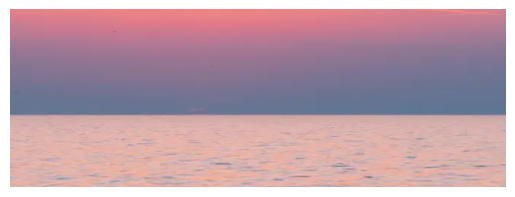

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

base64_image = """iVBORw0KGgoAAAANSUhEUgAAA0YAAAEsCAYAAADn1KMNAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7P1ZzzXLkiYImb/7nOr6S1DcwFV3Fz+EUWqUJzOrMmvIqpIQUlVWZWZlJghaDGIQAoRAIAYhENDMIBoh5kkgQFy1aDUXlZUn9+tcmJmb2WOPR/ga3v3tc2o/n9a3IszNbQ4P94hY8Y7/z9/7/SkiIjJFZMoUERm6JyIyh7eJjOlUxbCPiMgYY/HF9w65Z6LOmagz8X0s+6qOaWKYvuHGi4xBtF1gycxyhwymRmSjP2NFCeiuI7VP9zn7hrZ0DBGZ8/OWj4GHkNscvGFf7uohZxhDZI4pQ4bVi8iYQwZ08j00CUX3fBRL9Gtcxc4krhQgH+RDUB7ynyI8UbVD7irUo1xD9aodiiGWnCcxYVzgYDxIYzZYZNYxnMeIB0GKc6ax7j3oOo4x0ZbT/LpO+97Ws0RNXx4X3uIR37i1jo08PouMbPdwp+5rXCRkeqqWJOiqxz4QZx2LHGPW/owHgfr/mcAmfvfQjM+RDqYhMKbkhvxt54C1F0BbtMIYFcGkVUwZMueE0cT3QqZuaU1eY6ptm7Gw1pMdIS7SGlHDkAEx9DlItXLKlDk/S2yYFWraADszZ6LZ+KDqp46/Q21yPWpf6i7aDf0QoA0fy+cySkREPr77kDE+Ko/J1BR4nFRvjUJg5M8Q+fiw+can8U6ROb+XKZ8y56d6NNVfkak+DB2vhgwZHzq+xfxKayfb6Jhzypz+7XKXJ+ay2mEVYx2HfE6RKd/pZ3yKjE/5nJ9aqy57DNsfIvKxQrjkDLE2/ahbzh9tUffGO7DWRD4tJiXCbz1fVn1qqsfGm6PaFj3nF41rfgZyjDJlzV/SSWL8v/9uXRhlx8M43WsLI1IYS46ht0ui1tYhOLAMO+mOJNPl+8HrNISfiE0HNySAapsfGpjuceXj4P7yfh82cZHqK+WtsMMHyecgXWcuFv+e/p9sJuyBIZIOuLn4vHZ0YZQ6JGSZyFNs2cEG9x6/J/IhV/JeQV8Y7jCFmPyKLeX4bYJv0HXqodvpgas26Tmyk9PaJxMXx4n1ccLItL71Ok6s6eBzqpP8XtUzxLTwYHtQRYZOdBtdoS1D5ozxOXITE6vFT8dORFzMmu3iXEadIDpOFuhLJtAbTPQt368RTuLHsKuXMtHygbol06qi0TvKRHJLdTkH8mZUrVFE1JO0p5R7efcLo6g9lVdOK0TDkI82WdVOStP+6v0cEYXIR3STNUnONIYkpZzvOErkN35IahPRc7+I0FitvhAbJTnRt33JYPtD1hzSIqQX29MiykImY+iCSORztftyYQyRjzHkYwwZ40PnKkOPD10/DJnzUz4+vhNdxgXqgghWLIlHILK+gJryM5HxM5niC6PvZc5piyb3uFi7oqCfWRYFn5/2mVM+Py0CuHiSITJ8HA/gkbVslcZ6CfUs7Ujv776pba4jIhR+K4Y1dzP8wp/HRDn68JJkrzq0eEyR8f/6u78f2SOrQW6WYRWoQ7m9WK8RJ0HbS1HLVP+4I85j2y3iATqwAPjE2uORGpcqlEcFbIB9EebrHGRQQj24r3HvGjrfFsA6ZVwujDJ716IBG2IDSeZKdTPWJMd6dQdETOemqSBk4cIZLTySlk5Ed/JwXw51iEZhOe5ycl9fUFZa/b5D59MT1KmNiC6PnOcAVwy9Ta8edvvY+NK4ZuWb4hOFylkl6V6TtUG3QmjvTuHQiRqiUziYFtbXcz437UrzK5MVsL+ODZCXTmgaeeVFaU2ehEw/HLKFeWxgFxMmueORuUpb716Acq7wCG+PQu/dKSdAuRlnEnVinylXMgMr03Cu1cmq05yLyFx1dA2dqJWKSNuZciqPLwYHlXyPs4WR2sa4evR8Rh8tUfd6jOR4TJE1IWRgx8c1JkQCYkrkXUV98fr05gSb837QIqrF3ukX8rWmByZ16IJIJO78DA2fNoufH7U9Iq3j2Uwyh3XQBVTcWRtjyEcyXn3WxZVaprnyhZn2+hCZ35l9ekfLfUiSyreP034/yyMyp94k+/xe5PvPT/n+c8qn3SXVPvqt58Yh05Z55qFu2V2qIUOPvnZ36hol5CsG1gbjhZ+jp/jxYhE3NjwfjdxYqP6JPo0tHTl1DFDG8f/8u/9gUXtnh5/cYrK7gr+SqvB1WuzrLnEpfV9gDZonE1O3L8u/1rE4W2yYjnfCNJegZ7tNd1sgOTrNhtKEzrPDcjlRpohdEc5URx8UC1JA1xUiO7D8qoula2HKJl3G95EU+maZLFlDtlEJJ3EY6QP0ebdQtW0c7Q9P+KE3yz+lnYDbN9r1rkfQ9U9xnx/FlX3X8rwVufSx3JA3RQfiz8ZpsPwOUeYNV4HKRCq74HMmT09aX42rGoox1k+cFYR2OD57XCuIPI8fOenqyXJx1ZOsSJs2C/KgqjeB10GF2oEjdI5Xpd7Jq/DAsE5ezBgZAq+/JYvJ4+D2nsjw9js+oY+K55oIsEV9h/bDSefz0NhxYTWnWuMYszFrGGJhZJhWQdYXNU3jzxPbhqMxxvOWZfRczrlfCC4kO2sMzjAOx+Ih1Zbpd400KWti78bMJXiKyIfFOlvqMD6TnWWIbQ+J8Hx86DEed5zUNvVBlx4+HfKLTzofcl+HfMwhQz5lfEwZ8ikf02UYr+mPuOjWp97/WlQxzz8/h3zOKd9/6kezGouiT/nQvvbInbv3Ya0iauDnjEUEi5TYxfISvWkOT5X3scJX6+nT6lZjovsWbf0Ut3wnvn2RGnI94u5PWOVsy4fVFDzj//F3/sEcpjg7tPSsfX32UnxhNFTiFJ3phom5V3K9kltg2JYDXPJQLWrAV/cduGTI4C1dPvomlGsHpmVDszjf+1uxcf0WRRUC6IuXDMwV2qo2uWHuRy5kbZ22sZN5MkDWdoxdlswl+fPNiaJfEwdNlPcKBtjjck9o77Lhxwm9ksdzhahrKt3BaGl97eRFPHccDD0DmE/bm83IOtoPPemwaUunPAvXN5JUlB5n+h4rsu+BXf08jiF3LD4EkScWF99MrXeTKnZF3MeN2cPdeWH/CsWutL2EEGOVkuna06ZsQNWWup/pKd5z3Fjvi1YSVJEUjfybCCaP0QJULCPcM1L0aVfs1RzgmTrkN9ViIeQtZyBd252ocghofLGbj3V+hwKh6a6xUi6jNb9RRuzXx4cCIQ9tyDVh9KkXOq/g5k7vtRsKCC6rAuYDjBeHWxHPM8u2HYVD/VJe/X8/r4oRcvUYY/WPiKnOoSlSmv+3hjprn/7jkSkfwxYT9j3G8CWcyp8uImuBnI2PeExuiHz//afyTa2VaYspXeP675zC/ixLf3MU7T2Gcf6a9p92UUkoT1lqhOawO19jrkWNWuz6Yk4Qd5z8N+v2mWITT/PRfCr2kjrUY8K0/N//zj+Y4mNrwgDH8ZATERkjBC1aCwDBChaGqlurdmWibWPVL5mBFatM624gS0Jnxjh0jh1QC+5foccZ+yvH7urXI7oUPi3Kg0K+UkHVADBWEvOdhDrCeY/cs/dRmn4g52UvS2MSmWRE5tnJkwtZyId4xBYHi9IddvIfkZHx9fLY8dtg5VOzdNXpyr7I616CalMurAO0JBBU56980/7DU/aVtc+hRqogD45zrEcrFvrwTOXFKdc41smFx6aCxEXNofRKqxO1rBX5d7R7aBDyhC/D6epzj02GtuoFRy6PPP450/6IH4NvkmOsno8cEUOSN+2as8rCaJC+CV21Hphtola+ba933qKZZXAR2K70qrctWl6AirqXlznszJooQvZFjyNLm1/wLYeocTm3gP/Omyd8XYDa4psuc01Ybfat3az2nWvF0RfUFV67ql1P/p0rI9m5Rfg7RNktMpnpAnP5pLDvdAz6Swd2iPm43SxIcf/UFYb1Zmcij7Bux/xKeT/8To3d8foQkY8x7e7NkO8+NIhgvW5bQCrtOxkf3+mdrI8P+fz8tEVQ5FHE6jgVz7SFkPIZRjgf6cYLYlpi03hCotYUWLfkT93VO1v6WgxdpI3gkfVt4+KwW20ielE7n2esTXOp973W3a5sQkIcJ1PG/+33/v4ccCob9nEaS4LI1IXR+EwknKYqGM08AyL8EN8G1jK4riQg4Kjz2CTSamLdb+HDWXT2rXtxPIJnYFq4vNlJ+ypoQL65DsgMmDt1mn1rE/QlNO1cY0r9AIypP5A8y6VfMfVdHr/d3caOavMuH01vIgd2fa9g+r0LUVGx01HfZHSMbfygGByzsVashGcmu/vL5CU+b0bx7JSkVCZPUhB37Y5s52kdOFB25cPJxbJoJ+7tSPrXSxUS6ciONaXKJJLfczC9k9AxfgLl6Ju5G6M5GE1EFw2TTPKKPfRNk1gvpmOa2NLiYcPJRFKEC6MtXK/zcHllYZToik3fLfzMjV51W+khToD5zqD14N/D/3MGbdFyOVR+gL28alheGAV3jcu6MClwa4TGvy7WFxVM0QunaJ9r8YWsj5CxKJ8i9ubAoVKWDOOe/dhzW5YsOVwYJaO3vJZLd3ck2h30TsRs8V7tSEjQ+OmWKU1tKw1BLjGo8GVCbh0yZdhb8ob9dGCsR9qiapbfdcCRMXDpoS+P+PjuO/n4+JCPD5sQ+8LIHk1driR50+8kZWnjQ8bHEPn4UDuGCfMeI19KizcPf7i3Qx/b01Z/e59+Pq2upkz5fk75nJ/6+yixlwkm3mm1rjaqtBSV2P6IxZ0ujPoxUuH5mDL+r79nj9IlF110TuiA43PKlPEBCyPpb9jCg1ORHQlKqyBfGFEhSOse7xZGGVQ0wQp7CUqN248Pd947ON+HHWgZXgdT0vk50RS6Vfsqc9Wk0fNB2SmSZDt6nqZ8wEImagj9aZ0N0J++ZZGhHQxNVvCgbuCjfXdgMg/6Uh2biQvl3aEGIV3ASWiBukDrfCPPKFRs59M6C+baT2tRaM+MYR/lj7HJz4q9d1RV6Ag5AfYonYrsMs9AA9P0VsywDU6UvBvT0abyBqDuhS7sWFYkU5u+srhCxyYbiSxF+VyW+bsa5gdfGOHET59+yL37RMjBbImJpeWiIPeYaR/5JEm98lT36yufid7DyafCa7nODyjANBZ1Rz6nZD4eO9/fz8hxQv8SyKOc3WeLdaF7XCvvkCmjzK+cikAdHcN9Lf4mW4ZuaatPZJ1H47ceYZped/6JOJoY77LkLbtLKrLdVd4CTZ0eWzWCeLxx5Lf3Vf33yAtCRB4P3M+1TeFHduaY+tui+Wmx1gu/sSjShVlYjfETe4orjBjjYy2Kxof+7mmKvpVBI2GV2GJnNZB0THsRQ0U+p+pjfyIikh6DV52ylnjWrN/+/7AcSlygnsMWU1Ns9QRv51vbsXjy3+lOu8wzp13umUpLHrf4xfg8Zfxffu8fzJFWYM6Ok42cjGGK5UNfKbjgVxXSD/aXCSDPtKR9NypDJx5IvULNm/2W5Qowx71CPqFKsrbV1DfEc6ZgLmQVyjrQlET9x56Kms8hqT4Kz6dIftWoNWPOVx0BsQ4s/DW+d1g2PdbtAFjT1IsH8FXy8iNIrBau4SOCJbm0xPfKcGrv0OM19OPxzA62ppZhSFsYLZMzwU9CW3kaHy0zrd3LPPiEYvrdLxcMvgx9Y5BZuVhUF5F7i1281f57oH25zbHTcQqz5ao71euZShhxxbEiLtYtd1reGXBa4NC41ImQXhGo2cWLhHNdg71DHgN9SlSRHCk05BMWKQKLz1QbuayDXGUMXWidd8iWuu5qg0/VHJ4dzFLJDbqRoGPeuX13mPQ3NxexLP4Oe3DKMeVjfNpDQE6xPreTGoK5HAZ4lUf0442UcQTkhUdZGI1PkVkXRlVaUKdtVk7HtNqrNvL8Qd+1aKPMBSwCx/CZuAPqbG0nu93nhvQ3O6NZY7BeeJDmS0OkPLqo8WSCK/QtefrKcRkietNIF8hz2vlwnbpjdqZjmn0b9OUL7meyJZ3Xho3DtpN6V2/9poV+K9/H0DtR+tKKITI+1qN0wxSvhdG62KFxWAsiu/vkn5ns/hR9uy8fU8UfuFPv/89/+x+s04SG25kSMIljiMjUP0LlARoeWDwheNALyaiZz+UEo5/k+B2jHXaLISW2pqOTpIZfBPx44DzxQ4D7LczrDiuyTPBbswjNft1HNtZPqCVaiFPLZ9FwQMwlEI+8VR2e4dNyWSpI4DrlWaAxr0p+XV5ISLLWoPu4vIhfyAsptaYKWOH48TsXg5MVWBgGTq1oCyPRA1j7Oj2mW4Uvb08jDQl5y67ur7rpCyMHDB7DJlYtO67oAK3wJ43vrTzqC4PJbnoPcKyjw0sDteqJsFLzuchbmEZGi1pYuyt+1YaYpLg6PAfK6pXtq/K9BWUrMqdvZ1mJb/pukQjbXV6tvxzgKxscWYfvT1scITxItmsO95D16OB5hR2tvnBAi9BmPN5ehl2VDpi+mR9dCVr4Oyze1d8x4MJkisJTgIVRllXit2LoemISqgya21jImNf0wqnK8e7VfuT2C02VWpHtMkylnUSly3sA7mTeTduePtzeAe2NTKSLE/ZDlxUxy2EsXq+Q4jxEROypDpGVw1yvOYJxXGUdapPnUg8zlROeTvvDua7D++Vv5VvfU799gaQfvVskw/6Yrmhp6O+OnNtfRQF+2l0xt8qrNF7igPaELT6+jP/T3/79OVLT6hLxMjoQRGzBMtUNG4zGWr0HVvwatQZqCq5SzLkq7mForEJI9+0MGIMI5z12Ok76MnR5dhWgScQ4n0IfVSNrhoZBYqp0QtzQpqggbTWedG7WumKY6cqEfTMVCVyOwtvOf2/0q4UpsgasEmuRm8icQXMe48E15k2yonbP5N0BFkZlcq62rIGRxiVs8NbrR+nY6UXjo6hUnaghIgZ7LGuCNHy/S6TyyiDb7VMwWYx2ihPfOjzMqLkvjOBvpC0qB6dXebHy8ZYybbnUsRsPx4w6WpkcAlJ2OUnwwMiI3Bd2o4nz5W+tPx0b7vQyG9A3nyDhwsjtyyXH5AnQV2QSLYBx65NG3N8dby+AybNJ+9oU0f2ZF0sGmOiUtYnI1vdTxJ0eR7LNeUQV9wkxYorMT5t2BmlILMxVZhpR8/m8yZx6BLeJBPLZ/tPjFQP249DTJpc5k0krymSMymha0+E6JerDX8RgVJNvOYoOJZ+OCJNbYrKmiKzfW4nlKfUd6q/nTr9cfliR5epgmzz246HlSnnynUfkkCn2KJ3RTHzUkC2jZv69ky2TbEEl65yQ+2WoLesOl2NOGf/Hv/X7heoGYn1q2II4xQJVY6nxCZLSm0Ue3IpYaNm+KFvrfgicTO19O0W3xG28BImJpMVAByUGNvLik8FjfQJNL8rraNLNvka/kDXFj5/kQxlIe/ea3hhqu17Azr5Vzq3l1xJtQHgDNCen8WP1mjDyy0nfAVwYSTo+4vhRjdmufWWVMf9FeXyi5vKu4L3wALmJryNN3gKMdijvGEzHPZa30PXZvwPFs7GBxSpPgrIfrv9Elo6t/a106JfCdNw66LaQXJV66PKm+MLIwfLDaNJ15YWRs08pfdVP32cyM81tRz2yIunu6BGH8nB/d7y9AJS3/FXdkddqH7NBW9mFyV0M7sHH+5gQe2u9W3SB+T1fGCV5KtOu/icdXbpN0slvqjo30CDOichj1diwLweLX6bkyXcdHziWxsKU4je0cUxp8zB+x8gW3Mqhu6U9Z0QjrjwzXuntGPHYWo2N2+eyUpzXuTVppeeWjB4hc1vjaV3LwmjRPuylIMtd7Z3ULSsvTOh5nTL+D3+TLIzIxJstjPpBKyJkKoMLkQhuRXk0z7dacs+BCyOhWi3oSNwAY5C/r4Aer74lOMZxIBDlKWYdqDZcHRuezaN0CNa755zzOSLXMwKQF0ZNnr+1LCjO0ysQQBdGKg8XW/X7EbDq+HHJ64+SmJwW6zNo/Ig8GRv7fR9pon2G3i7veM5frssrIdqpdBzgV60inpf32X6TATwPwfTDy3FUPMpkepDm/uDE5VmgfKflbw6PUIm+/UaL1vMBdpzxXL8U+6an0P2Y8bW4WXkAhsSEovhVDMoTnitgTD1nCW4UkTcFJwksH7ZN+jeHp754tyL6hQj1r4ok8uE3WrqlfEH1OxPYH/dFFzIHOTqFLiyRGjmJOavSaJ5hD5v5mMNoBLZwW2aILC1ZwkwLmUQEa6aNBbgwkpaTtVBtx0eVN9dvNp3iAFt6ZPp4KnNpzhSR3rX35eh33ALTxZBtKtrnIEVctSPqJaguLxb/KUpwTNZjxceZrNB/cyPt9uQ0f6u3sBgj8jiS7GYjh3vm/vocPWsc0n+2g4h4pf0F7etjXsRryvjf/83fnyi8hkj01lIxSUEvLECR+RaOmV2LHhh4K7V1ewA4caagk+QNyAJqFdYFhrC+XpTY+96anbx4fWvG8ydVfR07yqvgtnA4L0WJo+pFVtShY3fm8re4IGcHc2t8dB09Lg+gLSxNFtF9i7EbmF+wr72ue42SiXaOMYQsjEzmyhXaz2iS/Mq2+PYz9vnz+qjLdURbk75iklt2b8t8Xp4+A/3MhY0d4OU4wsYCpsNomEqcCL2EQ70EZdKR8MnquXyfQ3vo3xNBqrxrYTSE1v8qjwWWNwaMaZf9pQujjKGPWvWFUSBEqH/1XNp90WlZyFNemKw5J07sGb71wujWX/Uuo9eGU5viDmNZZtjebfyW0mqfnj9qfvMEVpZ/Vr/gr5ZiWLNbGHXP0BZGi78FFJRsUwb2JZhid1N77yl1TGLbiOGxKuKqHdg34oH2mp9T5GOOwimLE94JICKfw3/LPYlMs79QlibFMh65Mnzs8n5ZB9ZAhzfnOPnmvpcCRYc/1ZayMPLt/93f/P3214fciKD67bwKXRhBUCCb2EfBgmRX+9KJfIWdC7nFkHjWMGiA5msge+YDFPJdlYRj9cmOlOc7EailIuRlKrsi4GDygIZVJNMWCkxexZCN2oTIuDM6Rfdrd6NBbeEVJrYwx0W+o1Fb1WuB9/NpI3AwvSP/AbdFRGc3aB39BZRA7XwUzL5VM7F7LK/xXcRvsiLx7UzDzri/o51hvzBypGG/lSnR247h8ZI8lZXHP5QnZH8H85U9mlJCsNOBNDGZKO8UTN6GhikCaOhqX/V2f3wgtYPZggsjKbGJlrTvYsj5ksOkgNtre8lj0u5oLiVJ9uOdyGuuihR/F4qjGwx98QJOnBG5xqfEhcw4ciKguDByqqLf9TByQrV5TvL7ghdxtbDUFrB3pG2wb9i8a1cjgQk5DmohrZr0Fl8U5dg5h32v8CtfsJHfGKUmWX3BX9uu3yIiU2sFxqsyEV8AWzZ8OmetEYuYZyISTF41z24QVFJptkbcbvpEG0aKVQD8GkpztpyP4NTWsU7nizvlYorYxXhvVzudty+Q9fyGcD6Vdw2XhwGIQs6PXtZs5W3zDzSixWjNlCQa7kiXcSf/hsueOhj/278FC6M0oHsMhwcdzcg+GXqiG8tys7Lyif1Un57C2PxdGmZjAxmE8AqENGu7r4HeogtBkADO9l6cZpE6tOiExib1ncsRbjhHtmOovGUfSkGbHSk+ODC7fSgK4N07m1/JcJzJ4/BOVV79fgQ/jDx+B+oUr8SP6e0d/QeV70PVyyRXGtYw4m5hhHvIi+DyaqRYLhn82OkTlwqzuSjpfihY3k6B8vRtQ8+BxcAjt5fJziPKzeXRK8RtHHoP0DbXivQKPAYZ/IS+j4tD3UV5z/rrb6TD+quy1sS8kHHKE9SdH5maF0VB7/K0/Li8ZzDnzR2jRMOJd56oOYbgHXjEqpJKGykGGRN/Qyb2ivA08RZZNk8YFgZMVkd6tNHpQ0RrqMU+7OE50YVRvbjh7ehLjxV65aDhQ3GNx+sRGGl+FdPcZts7jJ19CfpbIo12PkZY348yP02NUztM0U5rpBzRqBSMKbu6Y2MOmatX5ADo9hR9tXtpX7kMG7gXMR91i3VNYr4svuBZPi8duR1pdbwf/5u/9Q+LzGVuXiBNSX/52NEXRiORr1CNxhagUr4z4G+Msj9XYEWtJJ/cX4D6zwtPmZ+RtwOJHwUWBccYYfmilT1AmTSYb0aLw/sT9N/Z3LOw9sZJMpm3nSLiV/tu5G3R5bGF5Tl653fb97ws4fJun1x1fVD3pW4yGO1ZkIUbrY2MHG/k3OUC+TIek6d75LGgbbwy5ubRWgYir+kwOXfH2w5N3q6e7/xyMD6UFZiiXZDD6TAzt8aNfUh6A9g5J9M7vGHLkMD8QOjfC+lsPW9nsDsAWeDaDHkafzYZqjTd2p9/nVpay8QofyueX5hz9N9keAJBr9Rb68xf49r6Sz1Ok1WN1E38ptjC6AOkmWaLn8+Dh7VP0QWbXij2lyB7PykLqGn7LecemkQ9WUi7bbmNREIEOB+BxyBi4Q1sYRnIx/DueM44s03z+AnyPqQPxWOyO9yKKapwLYtS5/A3W8QvjEdUb+aure5d82dqC56odot7U669gzptIag2oCVeu9Ej98w6o1XHg0+15H/NFkZ5wuDb7dGj4leQ0MIN+oDvTnYBnXKG3R2j11CtYfLzolJWD7wq5rj3DuUFWF9Ca5NQ2Vhe0WpzpZzoEIGC8FwizRZGZscu5wvF9txgC19iY8aQqOETkFPbPabQeA76aNkpekc98b7PvocCk7GRd++v2445906XnQ0nPA4smN5b94ktXrqrrV0+tbZ8Imd+vCZPWVAeerGDL46uEMdioW0BMd3SMrjN/Ip95+PY8aE8xSQtdfJS5Q3ZLNzYefAFTKklgmipKWC5I0gT5ivovA/l8dwdYeJvvjjWpCipcVrG/ryjwNYcW0WVRxcyr6A9mtd9UC+UFv7ipDTAqWLe5bzat50vuTxYGMkQmfWOUbZ5mo0T7HBetxpjOErWWQx6Hxn9eOPZcVmQy7IX6JpPwMZdDwjX5LFi2x6kO1tWe1YxdKrud44WedY/ByxithH7co5iwVD52sU3t6eQdQd6lj1FlyUidqGkzv/qHctYFHn9Dr9JZ4s676X+f+qjbznWjnJ6HUmHgo0v5Y7R/woWRp7AsdleGHL0I/dz6EHbnyF+DEM0sGX/C4HyfR6f6bkoHwWTp4gkXoNdnRcqccHixzg0Rzu9q1qSfRe0qfL2frjzuR2qjhmZMITU7gKnvgv9LXevYb75x8Lvhvq6c9jzvLvSdDjJK/W0Q6qpshiqK6MhOur2enYduTZR79RBvi3ckS/THpQnskbFCuzL4HLQN4YTeQwv6rBinus/4XxvwEoN0BjdUSa5tq2smw5P4CpyMYnZ4SRWy8sjxMJohvzz7g21K7clL4yi9cS3a1zlViy/3ZoX8MTCKKoK+U7g8cxjqn8zeRj/oRPTMu6GLTPZmDmYhqCFDhXL3xzG4j5FY7j2h1JrllxWl/k+cB38Qo4iRx8XRR4/etoDmMuFcLowandAyQV6uojYgF14PulHUX5zOCww9m2eRLz0GFmxsBjOdOdyzCkfMmXMT+4TGUtyjpYNCTl+41/9m7AwsqBL6uYGrv0y24PIbUPX6djTQ5I5O889in0W2NXmtEexgl/DneOSVaHdXCVyOSo35yILFKaEHo1jI9U88OOBJOJ6IePVOBJP1uN9laalHz8QrDDiQH15scF86Bi7MADw0cvAQeeG0z9yeo428C3s6D80rvzFfKLNm5osbN5O+ApC1xCht7GCsqs/rc3VSE7urDZFNrxPyEvXxxYt9k3eAnUCsONxeY/C5e3kZoSOuf4LaG3v/H0D0olyqd7O+cMWt3VdrdxcZEEal9sxpXZm/RjtPFbN6wuErMgHyGd16+AHEkHwrUWC6EknWlBPyseGim2VhvKuxtNnwS5c9RjmSa5+73OZxaXs7L9XDqC4rXMjzbEmptEeUa3ptjj7RXE7FqrLmtFK636JSPtTJXPCb3iGXNw1Ci3B0TU/RsN9oJGFNA7nOWZ52yf0DOByOYymLwrswsHi2y2M0MDkLbPrCkNEJD115aJP+nb4o5IuxeJr9TeNpK2+MApn3GaPo377eqE7Hb6anhJnd6A6MtPxO/7Vv/GP4vwbHI3kxnSqfte1EjJqapGEOhTKpwdfBGIlpfDuUV1Pk9St3jvUN3o4MunqIOB2D0gO9xJlKfrCqIU92VRxqNd2150Ac5YVYiAOpH6lqE8MVWTw1VOGG6DfPCqmbxVg6pe5rkwWSXYTmy/93cFrjsl7EnTce9a+HZ6XNYY+r16R85lp+SQuGqeiOvLbwWgZHhP0xTI88iKYBlV5B5OBAFu27E/Ka8gXHwRkomwmC3nE+BjvHU78caiOfteT6WW0U2DfUJYnBr7v26uXX/Vfk9cqD8cRb810T89pZBxtuDQ8KudR7BcIUGuZXmgrool2g7JQtbsoqKbAaofozY/TIMIitNly/YjNN+DjfdBy3eX9QO3L57n9vO/0+t3BHpeS9Ntxi2ZuSjZPkO0LIyIT+KZ+Abo87q80vvwd+csKXqHl/Z6PYottDt9cixjYNh7U4ijepbljlbNZGBVz6tiavZgS+XS5jqy/2EueCnM5j0Mf8yt3jMSF6SfqLStQitvs8dHxNlsOKPG38aUBfYtHEcf/8m/8owvpATwhiOBAsMIPXLa/JsS5R+YNIwsVFhn4CmfHkK46fmMUEhjfGdQQHEh7CnPi7pDjJ0nCZmW1aPAaz9oUMGI3JesNnagyhswsa/f3WwLaDLfQV5/U157Xx4NPf0BonyGmlWB8tL7aJ+tw02ucsVcs1LDFbXkUFr12MnpenuAjxBab5+Tt8Ky8ISKbfDR5NbeLVPpqZTwPotdyMdJ2AG0cXEbBbvbrfYHWJheIE3lud6Jt5aKPcsEHNk+nJ5oGLvZXG5OJiH5awztfn0WOS4bGZgpO9Lr66pm9jADAhr4hEAITRFi3wMkyevFVKDaSK+KaJ7TG68XB6+DyjjlOXBgvxPRzal6CZL13vzNI8DNNhi60dj0eBx/vLX43tcfwqSlZdsdSfdc7IsoQd6pSDO0cvJZbyfxlr+zmPu4I+pxAfQ3JjdqYu+xcA/l106sv0oYkwRe0hV4rsnIBMbDT2JR6DGM9dmkVzucvVZgSZnkbTqc+qik2sa80Md1TRD5TupDN6Rll/mdoQ8ED0OMtL4xU2Nj+DbPl+dK71gOz24tYsYOXu+yQ8zv+F3/jD3g0AUzsEPoXMZNDeb+bNkoisVVRqV3GAqoUG5hTB3ZSk6bjGs1cWOH7NtOFeghLIB/n4sJ1aBprYeQNGajlHjHQjiKPXwHzdrJ4c9DFSIf7UA+/mfKcfUM/Rf8ia+ubvx39AOdvb0F/ubyV495UsI0fkg6x1ouVioRzsCJ9RZ79kBeI8b2aclx1m9XLpPKuEDoiv0kvzUeG93EetI8BW/L+Xt4eB/Km+5EvAnC5FyNmQtfRj0mldi2Z0lsrqi1z2qTxrUB5apOfeNnkZYc2RFgptW5TKpUeVxHZTMldI8oPYqljPZMtrDlBH8WZiTF3YDRHtjzro9EK5MUC5as09ioHnAPvwFIy3ec3AecbapQRNpNc3eex1YlkYHHBbQHdy5zMJ5x8Km2IGjN1l/aUZS+zZg8mK09wUd6EOx5O7/C7JyuaEesyHmr91fhkeYxmUfGAZJALB2thlPJbc5t4YV8Sr+6Yxe5OkBVGc561SHA+Zp+3ZRshz6lEAfVJMJR9B4y0XoaYpjBah+Uo5OtCplDdd/R59aiYRtR21Vftxx71Qsn4n/+NP3jU34U+EOygDg7b1C6W2TSJDifs/2RZrPm4ucgvIiIf98Y5Bxs4d8iFNUhf1BoLgIB3uTo5s6TPoSev+rpGDeK66mOo8d7Bo56OOpcyBjwahY7OTtOGVsBOL0i5L8T1UWhr9W7KkDE+4IRq/VBxOxBVFubNWwJ54hnIvpHmhXbx8EX0k8Yr2MTqFUCcK1gsI88DYqmbH6KVfoo6pnjdiA13Y3zwK9MixZborbSTXAdq3z3tFKwvo1X4xKG2bk74GSt+mUel8Mmrw2uJ29MxbGH08UCf5/FpMcmTFg8F005dKXWV6UqpY3kbSdTnRBOx8RzQ5N/hLqeu9YpFcGGEzIwmKUjd2+MrtTQHKVm+O3m8bkHy5vn/lguj2AZfHVPKEewcGILZ/tA0wS7G9p3tOkX2h2HJsvhPSSrJqYd7gZlLelcgZvpzMkqzEf+o/hj0aRfoa7WSbfS5wPQ7Mtal+6HIEmeK0TCCa72L7QeJX1241d7LPqm1gDkS0Tpevbfny2u4PxmfdmF/SihefMsmm52tx+Z6JJLJET/QFX56RBM9XRDImBJPQ43/2d/4Q6oV9FDoOLALXJbg225W0COAKy3xfxLhk9lHcHkr37C0mmgWaKT5oIZ9HagV2zOuBqLcbVji8r52zbF9dGGE3KrF2/Q3I1fYO7bTWeibCRhuB0fVVw7gDJa8JMU9LWyrkUkEvRBT2uUniNDcYbBynmvV9JMa7jNg3SR9Y/fKfEfWOIrN9M8ViIA/Xlm7thwDLq33uZfnkwCETjSwD50hKYYs27SmXabrATSVjSNBmQtHSsYb56cUPmaXictFKCSHA2g1Ki6wPi6VWrTZ/m/6RqdWvS3IgAlWMcwk8JpPFwrOk3mTn4uE3g7w9O54q+hRqJ1b7B4AM4NdYcf9R9AWRlNCc1kYRVxCX7eQLdr03OPnPfsfTkBrr4sk/imTm3plj8N1FxtQcDsW+rm6nTfp8WirjWTOXPYma0uhhWVd3j187AuZVcpMpGHbbXxp+eWYQ5lc0zD9V8eNu+26mRasnWYfsVF34y5RlXBhkANS4PJcjv9ObUo8ppz9VZLzW2CKhA6MX2kT0UVKuiOqcAedoPJ113T+T3/3D/ufLmhB4dAAks5i3rbQBg1/mL/21u9OKuJ3JxeATn4N4Q6ZxzU8QxN3m9AfhcvPidfkevwyt2MzlaS8jmlcqadtsjwsrIaNcELWLrnB7ywt73hHEWIJ+YOdtK8xtCJntYGLbyZPkePvcnhOfszoEXgNPACRd94eOLXnlE+qzlYvGVF/bbFOfwvH6nVVArRjv8yX6flbjuX5Ud/uUQz7XvCzzzYICeqxIsuoOWyH1RbGCFfBG47tewxXEwPHyfE7jK/21VjNEp3uQ/wdD6RXRE82U/S8mLZh9YDOFGQ+bAt5+pfpjW+1ZT6kifVTGp59cMJ+BfdI1rfb9XXAyaO47hfU7i7GLt/S73ymRNpYqNS82uB3RqblFLtFfTM7kFvhPkdrjX3Niz/uVs+/GMvwt8713HeloI3emkm653f6Z7I3W4x3BqisB7Bsnt23DNfqduH4ErYGncHdYfaCq0EzXNnnKPYQO3fwYWNX1xk9ByZ/mTfX3zHy+ix+JELUb/jmcQ7oXtUYe7kVj4csPx9nTh3/E7hjhIG7QrzcgGFJovQhfZBeYSUFEu6hPK5pXNqXqKDLZXBaaGB8a5/Y/yimqLDuLceKzy6mF/CM9PglQqI/B7Wt58+vTosFbnYtHgzIyhjOfwfoa/L6RHeuv6O1y++iJTPdBOQ9GbAewZBNUp7FxJi+Ap6Lklv77hqdgvkQMonuNnd5HdNO5PtxTfXk61W5ScerRF1FQOzT2YDtY7vjvfL4SSm/HtVxGYSELg/tyyfXe6A8vzuRe3s76n0dK3pkcuDA8mUX/laalpywuchNb/vSLtN+JdMXRnuQeJSa8fwSvoVcN4QvySsLNzo2MFrEoYRvqM/9+CVI58vg7npkez5/DpMs0rEmHgH/TaliisdE1rGqtRhVhPXXF0b1hUb4pri57I+JZ0WfP1W7bKd8Kxaf2TRNi9vPznVuC8pSQUjzJ5CqvyImKNvY5kV01NZaJnbdA++YG5isctE67Jpmdh5vnL7EWgNaPVKb7yONYYo+Bh37VfiyzcOa9plozQdad4Weh1pxn/Z3h9LCKMUPSwJjleMs5ivWc4rWwjreMpH5rAOCNv+P08IIDbvDfuEhOezVu4XaMyaXFrLFGn11q7mzRZ9DNsKi+Hzcpa9BKtNEln60Ykm2BDZNbAHWmALzgKdg6a2WeeFdg0e2PRoghIkAuyhNPcLBf0gukdyIUnAwnTI++GS8wILYKtUnu2vX5IC8IXWwUZojGkbvao9qoB9XcAHMJ339d/PjEkxOxiCv177ClTzNL4OezGusOGp+pyaJIBF3LA3TR/oN1D5txhoQEZjo7nM17JPpyCOJz/G8PLe81NrQhQdO/LreXreBHiw8R2y7itTkTGnyprAfW0vjC+xiJKnPri+bEFR5NQ79dftLg71FSYolSljxIeOL/wswPxDVhqCJ/3Iq0ZBPNjqQz2yf3/fX6RYeNpsQkc0jzfqyBNZSkSdHiVr2lHR1/AYWy5Vqm+SjfdPbCvUMQz7InEMxo8rq3zEa2orH4BDyd31swj78LJ9+W1TrsU9QdfezzQ9wVqVySABc/hSJqKlXc9ErYqyIelpsbTxlCyMxn+uLI/hEvgdexxdyguidRUCCpgU6MifF5MGiyPfzdmZHmzD/jrHaLFobPhGRKZ+0GWl97Oo2Oi0bimFkyBfohumI81IsVJ0vy4xYhSW+1fhgZuXb7AJh0K+x6kVExv/IFkYsWXfopZ2RJq3TjWU0xZo4O3XFRk/4uZ2hBHAx2e3e2LXGKqXq28EPsMq4RK6FSWJNYIWPx12GyyXdKJjeYXqZ7i2SgEl+k+Ey79Bcm3TdnkIahrLi9h9DLuoQmePz3hg7keCjm9I0KNagO7wv+fn/snftUDN24+g15pJZYUfb7e++HC6DyXJ82I/fT3FVTN1uDY+PEtG2FVEy4j+EzMwsYyUNl9B5LpcRmK1GJdVfAG1zfBu+KaP4FtPwfIcCLy4sKojsPDJMB2AKFZnQbXW8+/igdhu8B7pp0zrSU+u2LI58sTO9b+XPsdAJbEC1sIVC9ycmfsSnXIfD7/AQvlOUuk4Lo5bUax1TavMUvzB0j71UwMnCiJx7d3AbF/Jk9gnoW3q5dpepNaKxnGuMs+ii4unjToady9YP2dXhZfe2dpwD71gGX1NFgAsjfRmU00OAy0Jb3EU9jqp9cB1CN9ejg8bVjjsOj83qJybwoj5U374931FgqD53GsY383kT0rQmNOdbu0TUW78Qlhg1Dt2nCzdE3NbhtRoImzo0N9rRxz/V70Fwa4I2dEd1LTln44Yixm6tEzx7o+d75PF5/A9/1xZGm/7NwHSXSEPAwi6s5wqTwidMtbm6ZdlZycj9EwtAJ5ArzIu6/ifOdgpD92mKdU71qDqCp9ANXVJgySR81ZsKPBkPQhMiE+HHAhuEUFYgWtR/nGxoyeJrsocdRPl5dLYw8v0hbuDUQb4dpdivnlzWFpm45BPvXLzuR1zVq+WjRPU505+Z+F13wCvYZ7iS+W55vc3zW2kEeEz64IidEaS+WS7E4oe8FS5sisAUdk2IM1CYGpwarMNQeRXvldePNvUAVbSck/jt0HTYbteRsW+d679TnDB3b8amJ/4GBkuNH291ouY0xzqxplYHXyh4TsPGmWLLJeV68F6ZD/tkrXv++Mv0ntjOwzCl2p/pSGMY8gDjZuGRgXncAY+PFf97FRweCII6QbZ4S9QgO0/LlDpHsn2tPx8fq93VdZRYMxKtaeGxaKS7iEi6C+3/z9gJtuWz+xo+K5UtjNzbzGV3jJa803Gn3rEsejfwutlx9Dt4CRD7kXRO0i7mx3R9YWChqS32PwoAqLfBdMPe6jzLn8PUploVJ9lOpsW+74Xw24XRqj//e0Uu2akdYHqyQRdHHdVKhinxBMP4H/zuP67+JOxFKKxctdjagJV7J0eHTzBHUarxQBmSDqAIajTWAO4wxE9ytk/0nOFajySP7opYeMibBhwEfB/lD6MVmbaPelDHDnniUOK3ti4obQHkC6N6BVvtjr9LkBdFKKFi6u+B/MSSV3MFuu9UU0OBsRawJA5fRKeI2KMQD2Pfh0/UTsBkPiPnBKlmPPabWu3UwBRlYlNJRIuK1z3qJfGLvfyHi+fyo5ZT2lmyMY6uI2SoQcyP98nTveyNwGnS2/sZukelAyc2i97FETCOYZOsR3HVo3sxBLo0FoscEzvIeQ2uYIuInaOYsor9eKBx8FhOyWlqBgNcpvMxfudJJwhXksDnfVAdnSHZCvjABWTHsvqAccXmAo/I0z8YWxnb6eNhcAGY17xtm8U53e8JWfOh1HeK2GLLvNHNjSWZGlPILGvBGiFCrY6nmK1Aqz5aLfihwh6la9HzhdGHejbUwyoX7TPo8ELHQNS7sI2Zgl/Y4KhRtm8QPo1Wcn8wlDAbNd7dW2/DPpmLtYvE+TLbne3azUVFpMzj/EsXlqhNt6eooGhVoZ73hg1ZyMJoSr7TTIw15IXv+Fd8YUSgwd5hysfBnW2FSUpR7YsTrYhatLq9fqPQMuD7SFfkybykdHTdJ+A6GE6kuyvIO4UfQELoGA72bntcLO1kMWj47vwexAsrz9J1yofAM86W7zHzBCvkVVsxl7bQwiCInTgInMrc8i4ozeEXAYTGjvXShRFruca+B5vYn4HJfFxO9GDyGPZ3i5Ce867QhcpdBHfy6LEgdaLrdTBU2xqYlbi2LoA2Z1rUS92+wnPydrX72Ygh38m7+HWwPxDJjgUG7CUqb7tQuMJVH2IMqYMKlcfGyTH09yAVNUcaN59s1bwgrvyd5O+M5G0ObCG2DUl82b7KK2ITySJyVUcmUmAdqO1nEwSMPcN9LAKn8vRTJeYIPYNtivNEfm37FfJ+/Hnaqh/w8gXxBZHY5C+NX5j6RVH+LGWkKCA7c4fVMdJWHDe1jI8m6x4uWfwRMl8YqZ1MLsMnPf9WvRk85mHz/dlIgbl00GMkxxwVP4hP2fymCrGSUDZbske6MFT4DIwWIAuUuTJmsFzY/C9lVMbKLY+6X4zq9iS99lXtQBsSpqwDePwrv6MLI0yaZBGkbcxHF0b+7dsWlLSHRuieT3RjshLA/Qo2Lj+3KHJgqrkFyMPgriDv7GEIHTeFjJPBkfQgNuTASs8dp2sMzYtSBssp+udY0x2jtDCS5bcvneoVJoyUl/8Y8BsKUbklTuRbdQf89NAz7Mh3FIK2Y5/2H/a4xG28+6njGleyHI/LO+5h6ovNFrIuw49zxRx2vLeYA0gKfGKUw6k8NiCQ42SuSYrrs+F4MzkINO0xXokZI3KYC3lJHh03Cpsz4B2PM0yRdnx0KzJIchLI/OoAV526svtJssrjPGRhBBM6WXueo7CvcLG0GYP3ml5rwxa1t7UnXGCyKFBtU1SOT2wWMSN4dBze3Lof/IF1cStmjccrOJXHJvNnMee4qmdvmhivNL6xoQ7nK3q+rOdG3fblTZKX+q0OcAYZYr8RKrHaHzRTuqO6oJ5VY4rjquvke1sYTZ+vgb/zQ8Y6N6tdLYYMoy6MalS4c0O66ytsoj6ySTqDy9oi547QC8G+G2+BvnrhEfsy57AcOKb4wij2nS/zIC0o3d7Z7tCGb8ahRhTB3CftgcFKepfdaB2NuiLZVxZGyO4KkK5k/VH6Iz/drkapExlsYAi+C4cIhuiP+TAs6lCn3kF76PTZ4VtZnOWS6O1g/qJpTAfDmgwmmb7PuhLVFR52ZmRBOptXat2fdocnLYzQZvVRI6xXwNxOl5alTvkYm5rIBT71AG/2gGueWSZxiMr7xFjs9Lv96fsMVwsBHudrvFdeyswhfNEbPdycLgOOy1Uc+GPhjiE9DSPRURc7JtxMFRN5vTvuKpwZO+3r5Bpn8nzr3lZjSG9VW9Rb8/TIRTbcL1i1t+N6cCx+Qt61dJXjYzoeKvNwYRTQwvILQsjlk0GnZ2/WRM8WRXl/j1oHpV5IjVf+7odecU7kyfkoyDzBx/M7ZA6U8QzO5aUpl8/HiB/HmHI5Oq6crm3MX0Cb+4WwvKDI9qqUPt7X8TaOD2alyvP+3K4pslkYFZLSm78u1fxKfYb4ebr7++rCSP1KDRcHFWuJiPTHCK+wMsW6lLwF0DS7/Nv4Gob/MYDD86WYcr3RWOmOzdsmz7C8X1B/s0Rv928aEUIT0rfSImcJKxlMnpLXvPG/bwsjT1TiWXqYGF0YacmeA4KSdpmbYUDK3gP6dGEEOsXkdWoBalknT2hBPgeTicATsaMfHAYL2cpvwjB5qJfRStftiUB/DLngmyScSgtetyXDF0X9t0c6+OHAuU4wxb7siS6MMB8iPkjnXj64BoZ9MpcPeihx+GMuD9bgbJzhUwBl4T5mL4O1YX/cZ32k0lsXJWgt5YgdgL5Npz9i59KC106CrnvRCZqs4B8S7VlGpivipLv+L0bCgUIvuojxeWPu4NszTZ78O/i6K8M+Oe4hK8COBAaVt3iraAK1cZrlmb7vRgYdBL2byjohF+6zPgpWeb2/ZWOZHH2m4FjsNWDEJl4jNISNf/Y/qgfytO1Pk13Zs4UxUVy0ZdsIvwpq/rJzqrdmeDUQSQg8Z0mzvSKHUSxeTMYtLASn8tSmatlMJJTT0Jy6Yg7k/MZ+E2bglRt3j1Le0m5kbxaetZUCkuUvK6wGgNpQT+HmCQlcZsPz+8hEQ7+QjY8ORr1P0Tv81f+M+ih7tLHIBlhrlQFxybvY+WIYXDKBgR+1/e3AjTBEPu2eUUZLy8YmzQfxweBSQVSjBfr5Mi4WJ7iBy4DK0WOuMrrOTOl6Ig41PgVphT/+e7/7x41zEYpvlW2ItEluB7abUncOk0uwrizgmWbBQ9dl6aN+2K/zCSkWZpqagPKeg4unbuUTZSJnm3DB43LQbCofZHkERUL3SJ9sz5K3aH2Sq7UB9sm0LPVH6WxTv/13NG5Eyu0Uf+TVlzkmL90RmsJmXMuTJDZ+21TROosYVQfiYg2yFZrf3M6683dFCmxB3lefOw/DvTx9hDgHwSOTUa3OeUXJFNTZofEXbUc5vq8nv5i4XgKFAH+z2dqjm8c2n8Qj3joOVSXpEezAVN/CsWyIyRcRSYv/dRXSu0r++z6md4R9cbxd2FcmORlLiUi2Lh3PtVd2MPT1Nof7Qg8u0P3ZH8HZwq1C3r19yFlR5UVMcwx9qdD9ZZFt43Pzn52lAjq+xLfT8kbtr5PDOA8P8J1ZaZgfzZ858HFSkzd9e4NNk0rZ25DFIlcx4wJZ9ZW8jPLbzzLHuUOOB9JFX3VecsFR38AqIrgQ8qTnC3+llqrs7EtE3WwlWGxtnsHGLER00nNt5kV9HpfYjej08dStrnA/cszM2uG/Q1W+KVLvcszoxjxaYZbE4Aak8xKzP5FCBxiPocT2me5QLNryN9FaUJwQDTkmGRqTQlKgIwmp/FoMsihGu8Kc1BmRRC5L2eHxyNB9dVOPj5hD+ndFyK6AKNeF0X/3d+rCaJlVeiVjDSs1qG1h7hv9KjIECUPg2NHVHtXRC8pf/7ixIWGAHyyQ9/4+jr1fClSVw5WL9op2hynZKZsK2jzsY/DFw462tqktXsTolSqsMcdcup2x/zGGfPed1tGUKZ/ff9rrZpUv7nalE3ua/Km9yhMDwSRRV8w8P7DHApmdQdPb2vgHE6n04XrZySLkiUx7tIzxJRzK0zVosq/lzKHylhdbvgPMiIXLwNoJ2MLI2plO79rcJMBjt+qPSUFhG7rQHvLRlPgavgAP0gLPi9iDyHY0+ERtPZfsj2wsC7OnmgffvbBPT5LZhixPkePnGa5Wu5Mma3yWHHLY2E/5krzZjw8O94PxgX1PyhviMVXaNB+u7KtjVqJN0acpMB/rddgB1+vjyzQZtasrggl0Oz6CL8YAhtEXRkNkmrzCV74fw9VjR8u65PdSY4firdbEdykPYWbxP4d5BWaVJ8tjV8fThiHJWj/WUl7b+HEjzwFm9flQh4tTlWsvGChCZv8xfYbzJf61pfR6fFgrjpltDIl5pdcrjl1+DK4PARyaMVxlWt1tEcoeYpvTnaeZMmJhFPQeM9/vbvS49PHe9KK4Gyz/psTC18pv2DE3Ce0aytEXOoFluflxdT4aIjJmfplXyMVY+djq2+IqEobo+LyOSF8YZb4syChNnRp2FRDsg5ybAyMBe3SgldFj2MLoDs6BgWLFhCl6CZexU0zpQXALWOyHtJA0ZH/dR58EOHzLF0aS6mHpYLS0P1pMd+v5Cm11CUBPpCEi//q//v+V7//il/Kzn/1c/tLPfy4/+/nP5Gc/+04+PvwPMyrneu1kkq+t1aKrO6Bz1URI4UizmpHuGM28MEP4RFKa3xELH0JvTpTFRpQlxb5Rikjpri2Q/fXo2TfTXxA56HS1P7eg3mFxWS4ZNBqJM4diF5blQrQu63IHIypJfVf9dlcms27HF7TQYbEc7t2H7k+3GxZl3sVhYkPrtX24q6i9pcRvqLTcb47VRxcJ3ivoFebjFqnftNftJx0caXxqA7P39di+T97V8RZjpzdp4xz63xBpCyMRfFOnwrmm9ffvBrIwciz6FKuD7GPhMBJfGGU2Iv0hlDszBBE7YuLu/JYBPDt5OxuuFm57jGpJVjSW5osadKP7hNjIT8orFBE/lhs9YcVqWGuqmSus4px2l8z30b6dzTvseNEmtVXV+nfMztx/d2nRaJwqGTW9C6jfTes1yGKGM89dvOvfdVzxQLYLFD26cjvGvRrmmyKriQVeXDgIqAz/zbrI9GVSlZG2Jf3B2CkqgpZ5unDVFkY+MFeYoVBBH6pzA3dOSDBIgCa6doqdDn9mtdMRQzCSTFz253W4zqbG4Ak81XgnzzEsZ2v+IHK9MCKZ3NEysC64fcaUmd3xxMliMT8/5V/71/41+Ytf/lL+0s//kvzlv/yX5S/9cz+3hRFOWu3XcEVGt3pcDAQlVkIcdJQTWA600vog5XI28pKd7Q8wtqjLobzY1L3QMYR19frQj/Mw7R05HokGgehcOvDl17FnvbkmlscmoJlvfefsE1Pub27QRv8RcGHZLox2CHlT+g/77yaSjuj1vH05ZrHdJ1M5M6X+PAEMeULXkHKfToA/RnlrIbhqNUXeNmeeoCU6zQeotG4y3BqY1GcrIwsBlCfON8UEG0MZk1wmqb+yd308naBP+gLNxyf8fSR+DFP24/0e1DL7do2MJwM9RWR5SGPoTtjoWWkgQnvl36+4XV1ehXbQ/O7uqPYx/hrOi32IPXb8Ttt2PxxrP3VFU2aijVRDyPcuuAfLkxF3jCpOY4l85mx6WdHSiV0vUKy5mA/dgavsNcmgj0fOTU2Y37Ze0DVD56u+RyFMY8OxRETsCQZtGP+d3/nj6UUhS5AqSKJEikvWWexRK5EyCK/eS7ufqByYVNtbq8A75L57/t3EgFEZjWOv71GsE9gGjxS047bLupqZ5UeOjUUHi/LbHQWLvGczPNFaocVHJWRGm1AUUh0+pj0698tf/lLkc8rHx4f87Gc/k4/vPmR8CKmhmASEzWyw0dYRm9FirBYh/azuuRH9mylCBCtINQYLycariVpFXegqqffRG2lmn9neJbrH7m8sjM6AEnssXF6l2jXtTFw8ZpO1TdjeYkq5YyTUGpSg+/3qf74reYqQncdZB/+7GwlD7a82P29fj9/uCp1CF24+EaptFRPiyOUF349U3jpRJnnerU3CtTgzP+ZkSD8sh1jwmbyVF21Ab/byfMc2SG1g/SknjJx42i7YtzimtMOtYCb5ePyixWLuID37v5WHnQxazxcGIoow/HZMoOXtrIvpRZnzAXm4zxe+rQcOsPkbi2vVkX5PYW9pY7ZijHYgBYc2iCRP9DynHKPp0Sf93FZrdnE4xXCJp6Y+gBVVkN3/wPAuXrivwurZOuKRkfdYJBdMVOGZHsR7EAsbjhZF4sLmkur3hFKj6Jb5jHzJD4258wWdWqIFIyIi47/9u39Sx34lm9pgdGpW4nyih4hRgpb7ZqitmFhzlExcOu51iOjEPhej6mXp6ZSvhy8euP1TuFmc+xwr5lPj1xcRfnBpfpQfeSpN/Rjp+XTNC5rfKR168vPHLFWe31otA4vzJZLOom3ylk1uf4HdeoJb0+rPZep39F3sbo/vOyeOfMa3EjklZwDimrerBY76GwXOo3C9GaPzDvcu0yHIy2yU9yQm2oHxXmS7Y0l4p09CV0jbNmII/0Mt4ZZvEB7/Lk3xiCZHLCQZkDrHuLlAF/ah2KfsIzGLbQ8i9vVjK9ORR8z3ZAxMqFKD8v1o5fnLIXJb8EyYiOviaK6Altqdwq+XzqG/D7P4+xgaPypfjK2v3pUCkMVDR18Aa7q7hWoTUvL3BSazOpBlz2VDtOOQMzY0x04et1THeozyGXotcOTj6Ho8qLxOWl4QHkj09K7Kb7OL0sxikWNW4Zz+TXwu8ct8mYfQXoLpWbHheqeaR2wJGvrtscAYvQNUF6u+dn6UbPiCzl8S35AUj84fobA+qW8+ZgquT0givCouu1y2mZDlysoFGU/FmZTDF/h5DlZ/L2mxNpmDjZPm7xwi47/1O39CbNXkxECfB6QwZvGlAzgSlvkqzIX2GyPXmoEDoUI5r3SIiD9Ll5AmVgvO0ML0pYhT04X9AOfEg+xh2MHnK+4qLmL6Yc+hdxtr7D3n9cd/ddE1xa+KXhs/pp/wIb/wF5B9YYMHi9+GrZWFMet/X0fh/uimtur/VYbaFSK4LRELhcp1rogTx2j2sR9vM74StwXk2/0Gz2naX8eALu15uPxRYqCxyVw6sS8xtcmlbZQIlsGduTWlXXQxMUf5QPvE7GPKurxKcWFVk72vkasPY0UHb9TaB/oh+rZG5FR4nCyadVuMAH17/Xk76qiSrvkQyCPfTN6VvzRuaYyK82DuEd9OHfPDLiqFpvUoSaIljbpvyvvxEVayaDhw4uw0vMugdNgbncqQr9gjir8ScfR9mpFW4+avTWaYPN/u8Lsdj7+CoUbZKbbfhDnvsmYDZiTjZ/Jy3/6bm2hBNVhVGZhntM/+vMUU4zU+m1sgb6cxcEs6ktVrgognKfu7a6lmIkf4WP0iU/qrcHl4KHza+ajqY7GqWXI/2oXYXTbd7UKofUmvfr7cgRyXtCcyJawYAZvTh+B6QVvXhSSjOF/QkyVlPK1GDpFy93P8N39XH6Vz9AEzgh1UV4p8ktKmtFjYVKeYYflb4f0TY7NvB5v4FVY+qegysz6kJD6+auNoeiOuGd22AAul01gbxRTL0bD4stwabehvc/pdNu0bWlXeTIUqm+pgkkKe0aYdBLDQylhScvWmCUVm18GuB0Z9821oK+q0VVWFPXkQHWb3FVymx37FeXFkpXViJUMnajUK1tAi3bkU1T6dAzGb1b4VyyXR/mddDBEiOzFTXvMt5ZcdSh+ik/uAZzFbY9Q8ERIi0BsT2WVlmVdAV0azT8V0eYmy2KN9+VEZnArfnSN0VgypLyHJWKEY4pleMVSM3kdnuoWmnWqOtBvySZNH0WLw7eTFxA+RJ1Z5HIi72qoi5K0sgDy9CPSh+TC7dBzVdqfhkwUhr9o8jNbcTlBJg46JSOvHutVAowPSnJkh/I19ofoUMXZ2+gB5uE2xxtMtxwVW9Cu53cEbwGOxK5h7eSLAz+TlPRyvdQc1ZvjY2XEfmT5vzr44rnxjaEIJchz9G+X7HfgIiG5FTLBG1nGMoh4E8yDGiESjj05jjqVJHEZaCySjM2nYV8F0EE5qH0eTRoYIFoOwvX7LiJ3w0raMjnfVQ1901nyiVgPYOCUeDR3/Dfp3jHTQ1P8xKXoLWmyy+dn41IHFl2ghoxvl9OrDbtJS5SFWiyu6BZM3W1+1JvEt+fc6WG7yD8sXrZMK8MQxRe1QK+4LWU3WhYxfL6onnZDgV8T5SQk16cJIbcE2BdoesseS5yGNxYMSWtcd2iMo1hsnsI5ShzrJgyyLZEvSZF73UYYix7nQV1eLfaYX2TDhXH/JO3vHLJUluwNsGSO/IxqAr+4N36f7DVCf895mgjbd7qk+k/gJ6RYKagzWKFEG3s6nerLUPuF8BKykRvPF9+rVWR8zI5Z2LJTAog97eEQ5eGvEy157Kx4mXOwE6m8KwreKE7t3fRm+kTxj2XFGulL8EoolVnu1/vQC0MgW2fjZr4RWm5e3kKdhdRS2MaRjBuiILiPZ0doS8umfgNnn7EgX+ZqF0edbF0Yad8yviBmzxtKsD3Wjd4hreXH+dfQcVw1rBlCoK8dkIhvQhccZ9uNJAZxb9zjhGzLnXu+EGin1wrsco1m3ieP5wij6r1are9/2xirP92CeQXR0O+RoPklBXszmMcZ0FJ6cj2Shfkdnp0/7Q9jVt4o8Z6nynCH29Y9H2Cz/v87+jlH6I1m4MMp3D6YlQveNXjx33oHmFIMcLmftT91HPg1So6ytmLAkpi4kgNmSzu+SSOy3VAeRrthdrLlA1VQHryiBQJO/TtC+rfz5eXU64ZOkvOw4fGHkFhAh4oW6doxrFHkqPhZuhX6JWlSa1mG2BfaLFdzHaXT870wREl6TKNvpihwpZwyJFfUveRf64s2tnRNl5pdrIJZ3iyF0s8MlMN3ztdct6VHdi6y9VXemuZ4axdSksFpnesriqKfxGG4aRFm/IGgeIdTVxlsRwqXIkWN+KVI+IGyRT83STHSccKtl+Q/PKq1+S7I1GK8s5BnJ6PIUpN94szwJtnVq9W5rs76VTlZSYRE040KTw7otvjqxDbmFv6D64JMefzSvc2TsjgZAKZsszW1NAQHQG4zmbSNLO0SOsJtY5f0dHn75QgEK9/2a80rzwQHiuIAygXYjT9NfAwLTsVKTyjn0k/p5TFTeIgM256Ntp0pjHKGZoZ6L+pZ0qVNjwJCbXEbe571QHyD1b3zkvKJ3tJBq+QA4l7cMIyJntX15Fv1WfmpPtMJp3b5ruP6RbAsraoyyTd5WeJuVujdAZubxuGRZ2QuMl9Om1IXq+K/hb4xM4JWgotL+wBznM8yeiM7vC6uQvQK3KLZfLVaaFLMS0b7YbH8L5UVxCkI9EE160SsuhERgXDg5J3YgyeO0YrvGVh0yK/+aDrRJtLbkxNvEaXGgtGpzkJ3P5C34wihJqc0kWsafnjmfQ/THzTk4aUFWZPsfiE2IgcR1JZ3Fve4vUkq4iu10Wo+9bSCtCC3EvoIqS8QnakBbW2miZzJDssVtEfTEOsWvdIfnc2tRtpma13quE3bjHZ5ooOV9aQtt387dVhSbjnt4aWNXXWTUWhsSd2IXxsY+q2dEVA0ucD22/ol8ZCxNpreZk/5fcWlyXHZwIFxOXmxNDQLhllt5CvSpPtpa8Yg8fNNW3nZ9Ic/90O0M/e0QokrzyERLzgLesS27S2cQh4iNbTZyknhkbqyaHdyysqfKlp7YCEzpA9YQO1Y3mHWOviTOpTNEMilZHZqEx9uUfg5mMk8xRcjxAVjnbFBsqL118bporAvKQ/WlzyAMvkBW653Nu61UwaJK7Ap786PlFveDkluWPpSXkRJYxw/zC3VjckWWc1hLQkzn9u1RZKIpdVdpdGEkrfMUiZcLGCFfQEspKvtKKBFK6DoajS18b5BtQLsykG+SuOV+2d/mZ0I5x6x6UVobKxfd4PUyRcZ/FRdGJgCLBBEiLaRNiqOnhMHl4aMt2HM/+QCC8InfGdTmHoPw91FMQaPtVi+AkDYgtuCJVAiLf+e3r031t8XWNrS1QgemeuBU23mvZtDi623ZfpRkVVoaxowF3DR7pvAfyesdskyzZz9wYc5eBEGBOvhiZ7SLCHdyAzjO+6JokW2CixqUoUeQhGXZ512mTLiLESeg6GpLjvEZCyMToDmoQEtCV6W237QYD8pTiSi1niiH6N9E4ndkErY6CODE4drqYWhVlu/I+iQj00SPp3YMp116Mt/5LmKv1k5/Z4Q5pcZpvFlTgkYPqa5/HzXtgT+e9YUM9rmXp0C/p3yOfDJ0PChvsfikD/sYT4qb21E5cWEUi5WCMsmpEupjuxC/NfZ2+3Z3jGr4cZq7h0dv/b9k58dtMR86sSoWuM4D3az9c1PCO+C5FI9LHE+l8TyGOfRo2yLFDc+dqzmdH/KxvVzJnV6QlzhKhmUdl7Y3rN3HrISzhVFH1poB1dJhx8OUZZLxu1/wWPj87CfNFAOX42CcGREhjnLMHdTq6cKj/305y2TzLYC2a/6ugDos0nsVIhiL5PPwRqANWJQymiPyM5fPaM6y2Bp0X/+P6Nr+kqW0MU2qC0nzv/FfgYWRG3OSMpsOhe3RUHfCwy3clSzI5V733PO9tjDK3w61D4/9u8GUu++nw9pwIyphN4m6lzCSdo2b2pBPvMqTHkss8U2TmjxAZVemSkgEaptOEJ018yhRyWZf6qc2TJv4OYZ8wB9zneKLpZaAfkV3fmJINQ5zFNvUV+zr3EHoGpOba9/z2GODgHWbPfKKMV6NaXuD9igds1ltC/ogJz/dn8NysmLRF0a7hUkLn0x7a0/+g3XxkoWA6uk2dXwM9I/YUk6416h3FkTEBluMqgtbx5loylutjQllVf8gLcZS983/jGlxmmlh1I7HxVzqz//vnJbPps9k39Qw+qrEqx5C5F1nD+MjgjqwFf1ItBFvLSs8Cy5rFrpSbbxpNdmrXzly7JK8Ies8vMbJjPQWPCMsPle9WktdayXSnCQs62cw62IorFYbCvdCWxiJjqXs+Oi9O6b0kF66kGIwfCNBD9+uucel8yBqLDgiJxcLGccaR6puHA/kRXlaGMMYIpf9WMJ+u4l950NJsuESETryKMI+T5tL1W99g25BO2E6NhcpkqWkSYR6EmjHXLKV4exRTjzHO6r3GYx7iIUQG0S2OqbZuMPdsWhVVfYHefoh05ZXzZxJNCgKq3dsuXAutCigw5Wd4f7Lv/unTZsfaHcYooU3IAi1pys/GYxB7yaRjbbjw8nrMcLmikjOiv+lP1fgC6MdqaMXCrOlF1jkLfaVCRdG9k66QvNYf45YHM00B5hLzsmjQvHjY4W3+0flKCd2tUEl/aVnmUPG+E7154Ed6iD7UTAjK2LmjuVH2K5XcBBNmlEqZ4uJiL3ChDQkTLFxvlB1QIu0eWu3hWFI/j2e0dpAOGHYjJykAOvmmqgFz9S0LDi1xKFM2hwqS+96OEXl1ppmE1COj7EsTYB9agtHD5WPcff2fJD60z9om4RCPerxhtvspOb58filnFFkj3feDzL5gNi34/tVuKxuO2rJ4w+j2559ozwen+u3liEd4iKo3LdRj8UMB4YJz5Q5zTGE5CrpzXUMdSOeqoRlHaNPbZipv16kwOhU3zB+KqsvjHScvQb6kekHhxvHFPrURsdovnFgPirWMWvjpPvkaLFnsZJQ8Q55kQ+9qKVd6nll65Ffcb+E995KSbiKc7aPHe+9L1+4fR2wlFY1bFya24Vbgl387FyPxDVFh7L32IldErqKILasenSJtuCZad+1ZD7HpHl1kDHSgOSah3WQ2K4xZ5phiqx8jP8SXRgRbatBEdN6+55hQ+3pyu2Q9MaWh01PYgZiaQDe/rruC5j9CnVk1GmJtdQTxMmgzhERfBxmVXYYJlEZeMBqt+C16RzkVxdGH8Q+LXgfqHRh9LnY5poYlkHYdBJpa2AOA7ofmFsnrgPXRIzxIWN+gDvtdNDkaTtM2NcE1rX4YpBNRu/hPTBP+lgjczDg0UGusAVb7u3DCwcrBtS+tZdb1neOj27mxWnYN0yeMRXLsU7Z68n7YwUORguMqevjymXSIemocwdcqA5xJ5gt2VOPQ20dUtfw8Sr9mPRMl7K2sy7f1m+9Y4Rtvp0tj3xce4++VX09Gley7oB9a0ynhxpoZd/alY62QedFd0zyd4wczDeUt9GBRq8iQHlOc/pG3savLDXH4eq8NZwp7xdv8TErG3+HC64S2x/aFrELTai5HYIU2C3sqPQz5L/Dc4UchStc5ZHloMZykBgM6StB53uPPD33jnWT3+Y2AgtrChuVboOPEnA/o9eQw+tMKy7bZwO7OgB95H7hIdL6vYKmLYuGRo1fpTFoXtHG/ULBwVqtVDY+V9rVZSEHtudyyHXq+4P0ybR9OWGvOCdiGIoMY4o5ZgbUS375wn/xd8mjdKvDMjcFVOEcS/TUHVS9gzuVCTq9yhKU4cQpDI5Iu1FwgWCcNnkaM+1oy+LJe6NZcogl7pneGCelqb/czox+YmrZlDFFPka961N75TtGPiF2u7xfkuffzSCPYPhUJ+ZO69AW+3/ofx/2t5eyhPX3mBx0UqCPzuAdkw9btEzTod+7yfk9sMY9bLgYQbgVyBULI91TnNmGL9SQW/sy98qoGIt97/jCRx0gbdu+Pb4Z+CiO+9ljj/scescIUXUsSmcE2MQqYyq9a0nZtZfVKDVx0IWb9lz1p4Rkcb57VvMhHr9lY2/PWdMm2G/o1oXPQF/YyToB2m5U20XJfnwiIkaTx4H5MHxhhL8aGfZBTdB/Ot8pQJ6egCAGTEdG+DYxTjDRbdKsoUlck5kY4+PbxyOPa+2Nx6/4omjGb0HC4nugNPfpWbTjd4sT6xxcJuYDaxg1WIg7PU0uX5cXj/6u2OY6uYnvcfhEzALvcNURLVesc99aJOgf8aySat+H8uvCn8CuV9ZOeSa+6IWALIrUVDYb6MAxUSWRp3mIjjsNrK0NSYBB1tJO63ZmdG1TWkFzlDuley3651CUOv4L8LruYB4rPIuaODOXw5u7C4DtAaeTgIrRbAmaYRMfnWigPER4giHz4vFEskHJac+gF+cjmERAjtEOJHOrUoM2yKN0Faon3zVy/dqnXxkcgldIRtKpDTFhduz98YXvFO9gV8DsR5hRLVlPhK1a54ui0DdE1t0cP3DnsAff9oG5BNZj2LL30/E5pQ5V65G+54zBO0ZidowZd354rCye2WSYeC1iqiGPb+y73+lOU4KeM6qSKuEcbknruSaggSl98KagT0JYbBLmqhdntlM79MWFqnaJ+pMsIYV/jkENZvGL77AlwGgI1NP9jf0Tec9hSlWb45LRNecYYHvuPEXk+/Iop8gjEygWl1PMsAxPQgvVj0qP0aTWSWyPJNqxJLnqRPdJiI71at8UHf+h90KrP5ugjLQwcqAtDC0EHilCP8HtpPSNYDlAuzEGQ2r4aj4UeVx4Th55WQeO5SS+mlp8ff8OI1l9M2Haycs2rcfL8hyoj4FTDhYeyzbffgwe07ueGHvFiX3NLaUV353WserNZZgwnJsxTLtr9AgOxFK4lgkZ2UH5fSy6xvppBzYkaG1FPY///O/8yRwkqCpG2Rn4hMl6IPECIT2FJvc3p5RuPIum4OqmTo95Y0WW5/yk2HUiV3102jMYsg3vPciEDu92KBG5jIggMWULo8ht6NeDL/adBQ8+1ZCtyUet5bfFs1vvWPP65WOceJdY8VyCLSBWh1q0z+k+CRCb5PoEfTFdWFmBOY+lzb2Ety+MBH5jlBYqxlA2AxqpYjKeTE2+N2h/5TBq14dAf1O0ngEuPBRd/9n4xR7FWZ6JuGQL8BQRsSucywtw+wPtg/ho/VlT2e6TAm3o8Yvv1Tu1M1oG6qj+Bs1xJ+99cPdRU46TIsdAYdlY+4Hv4XFE2fAxsNg8gsh7AOXlUWNquwUCa8U58nkrYxhD12DDso/x5Xce02hJMCCrGWYfPy9cAyPhyD7tsOurv8E7xY0SkStNIpCHvO9gOUGa0wV8R5m7fp1u+cjjd66dylwwNYSHGN6Dh3LJYY1hU/ip8iKDvYrYwqhLz/16KwLdpT2Ii8PoFd2+LVBgiUaOyyIV+upvDHgMMswHF0Z5zNlhpzXb32t0g81ds0wxbw/9LQujP50DwhylUoOPYA4c6C+Yq88Kjf5vcny1JxKrw6Dt4RPdK/sVe1nun7fqpLv7yOJwgr3mE/TclDAa0NY9wBp7lI4h8oWOB81Pgg7PRVsYre/UlwwsFClBS+uMR+mmP5pE5GHO3HtcoLCJ6ZQhnz7hNcGu7wpYTwr/O2AYywrVi8OAX+m7UbyBLiOBBnfIlK/HKyKm8OYSA1uQqpaIY8TBoknyIyLtrLuO6E1dXmI+sDCSg5A6U+nqxWBvdfJ6cbIGpMXBQfORF+ZKKLEOETUfIhq/qsLbPR8CvjOaI/c1rECh1Q6zetf8ZqwYOTA9C2pzjqkmKRs6bVqAC6NToDwDN4hjZI/qeLp8G+nOTMrHdJc8LmnbuTKG8FT5sbkWQSZLVV1PTEXqXRm/UNLrvh8LJ0CfEHftItGIR0rAfeq+dcxLbXh+yNwsej7fqLTAPPXR0C+c1kfpJOc2AfcVa/TGhguYx6zLUsIao7nal2RNKX09tjmvPJP5uOK6Havai84OlDJk43a7cHUGlVPnUu5v/NZ7D/oSDoDH7so6Vs+MLrKb+wSu+m4x3Wvbtb5osx5H94KnJkRERMZ/7nfi5Qu+ESKq4oxVSrmZHFQI1h42TxtsHZa+qc+TBvUsgnlSu4fK4YEL2pC57qCgxNITGzcYyw9sOUGdYDkI6SgnKZtA7YdPDEz6vx+cyoeacu/dAsCL1s/AThU4LHvsx4pD0PV1EVRL3SdXkli9uKRpvut2fZ3pFDn/QVsZIENCp1V5qr/apntqeQejJVgukAsH26D3yCCmwI9k7KQ7prObxXNx6zc7aTiqUssB42a0hCn6xjeQ12YehqCqXCq92G1bWgyrPvJgvZ6JJ1fFViwqedEyu8uYYCf2ZdJEzKiUjx6UvB8y6tVNp290LGAkgzqQeAnCCOZMmeQKZ7K/0OriQbxO165PC04XRsy+RBtCFqqOQXIgi6b/q81On6ILfe9lFNvLdI+N7RsLr79qRvXIbLGOKpdNOwPsaviQusDLersERXhdaeiTAE8+9jJwX4SMCwsR03tMKt3RWlJe2BjIzr95n/l/ibn+s/2YX7ng5UGTWQnOV31qnRpH8hjoCj7GxG5bnGR50HXFJ0idL7Xc0ejfbQL0XkYj+T0GqFQ53Q4d/07Q64pZ1zUEVhuEM9MbbmKw06f1TVo3rzuHMmhbAUKz+hv/2b+e3kqHoyVRmlHfVqXgPZwr/5ag9pxic0vyg7qx5HoLS2wHTn73UGlVZp1c+6SeDWAz9cW2K4xJQn4CK5ReAD0fSkUwLrKYgCvsU7Rr1dsXPChHobZ9tJzgaj6120AYPO6lbg6xyW4GPUtEX93TPsXj2V/n7HrWdhJf96+iHxiSOo5JIpVp1Wbxv+uT/J3iBqDeTiu6RXfG6Os5DKcD/e5wQaAXOpTY27HktqEXbGLF0f3twL8RdIropL7Evr51axbfV5zTwmXFLv0ByG7x4/bNPLESSM5Q0+5qMjoVSSlv2V+vv/D3CCS3ss4FJznu0cK6ks0feGXjhsbEFkZGY/J0mXUy1UDv+pV+SXVQYUkksQBPFm2m3wA6gtf4rD3LwD7MRoax5HgHTajT9FFO58zoCvRCCfIpFjV1Q84VqkwDX/N+a5OrRZADNWxo2Y8hrjExWFMilVbrrufPng8WUudd7WDGAjnmmrw1/tZzv25jb+V0+NFRj7dcB25Aj4cCa4bxV3k+XjQ/lNxI/XXTKu9u9pgu2QVxzUV2/lxjRS91nyLtqYgdri0OMGmtPkiskoUiGzkU6RxU+sA8UcR8bcRr1JxD5+VHpdc9nu3IbWpNd6DGf+av/4mJD+IZJplK7zDUw8tb77P94eKXQRZulyiDTrfvI/1tZc9RGRtPw+He0wI9Q1cVh/M1SEFserHXnWOVaJT629wEDgz1F2smbuUz1GrRvyQ/y2SQ57dOMK32AGlaVGhY09NyzOITPmKtXMH5sv4sPbzLUDvQZpZLPOEsanNCF5UQA+Iom2h0WAxQR7NE60Dy0HR1HDB3C7i/FMTfa4RPS/pU2hCRKZ8yxueirV7pcVs3zWPnFnBrZ1/oXyB7g3GmJ/ctslXg75K8pkJAR3D7qVtj15DhOpKuTb18yiedqOWJX/zmy2guCGRqG76wdmdrjwVzK49ngYgvyi82e0GlQ8wvHGj5Vf3Rt5BL9p5H2LpiCMeAAu7fWYx34z3mQFxiMnpuaE5iY1XezuAXXswP1lTA/I24OJCDwce/VjNDWl4bz8Y3ykfqj/Mx3yrN735/NgHO12NRgTrm5g5AlzednLmwm/lbVaBOjnXhBFjVun6hhKguGKJM95o5mG87YE2jD47K5UyVmd2xLIBjL4PqnXK8EJSU5ylab03LEwutBfJm4Rzn8Z/+63+6FkazTAwPNBJjexJrMa4TF4nc+IKF0SOJWBZNvZSee4705w290L1hIu0Aw2LVo/AsHlAuUnLCMMXv4HU+jAveOdT27hwuniIGXYesilRsF0bodhPVCCLWF2Omua20PJl1UZ63Qj8cdIMn6V9OZJu6PB3oicPtWOp9hzR39zHAib2717gR93q1NY0zqUzQix26DV0vR/f3GirXfVANpmtqLoZ4sKJVprG4NptE5NrleNA+dLl1PYzLGsevain/XR/nQV5HM4TA7pDtRBQwuzrqws2hdyhy7DVr8YPz4AwsOe14YzkijuCczGXm8E0p8UVrar0o3/JhiMj6A6rdF8ni837CfUR3UElVHpdWPFo7aEkgS2mhv0DJrwmZm+2FiRNJZyhWpO1MY8Uz26OX49APyjf6H+Dehu6Abwr627s5pZ7RGc1jDkEo86aZDGnB6trbwsjaZ370V9szX/chwL296iEi6zgDf8n4QsK8xZ1WR+M7VbJ9VDeJIOOEYjTNY73ft2NKlVVketqA1F9WFG0ZS2aWQ9YaO3ln6P5mjP/UX//TKes3PPpR9gONA2+lxqQxUcAA5ydG9RsUr+ErF0YJk9BuYTfI2mD4I8EUXRPd/dDdW6sfXgTXznmt7GIwJSmwHwwi67V1O7iULG22v3MzrRRQp/7RVz9azIg0Ob6G83lvk56Ov8oX+IqFEUY0i99NNva416ut13rv0Nw9jT0ZXK8RsV0aii73wwOli6iRM7kWRar3UvvD9t2B1QbB0sv4w9/6B093Mff2Oz/0ILoZXgzMrg69mgt6LV+lljcLo3tMkUF0bGNRgZNSrxmomEWbbj7QtKvy+xVstIiNWz8sdjHJfu4x5PExYcXG1Ob41VgaHloYAW3lLpM/X1oYYVjYn1N4Ba3+tui5W8dMoVU2le58fq5aWQlG40MdZWK/NpzPZK1gorxTHIwlg/nrvpiNpv5O1MNo8+dHwBcKhWSl28eHmo/h89MLa1yOb9+DLHuJv02uM4KW83omsPPCDuM/+df8N0bxDKd+uVL9piJGvd24c1QxWmCQ8/wK4j30mDwNHPOxL4z81uKZide6rxYFGqmvxZ0PU3RgvlsYeb1UP84WRs7GYrDg6reFnGkngsT4/BPQ1yWnGk2DSIbnToqE/bPzHZ7hpJ8O+CFPqcw/1On7lY4xjmtiIdlT5ta5/96e9zvO9MrmwkvnMyRxLEIKjMEVeu89wqexbAxda4Qw+uJOL4uZIrF9Gb+9dxR3Li9bjxjtm+UwtvVE5PzIk+1GH3BfoRM/3hZgNjH4q2+zvOi7vLRJj5TF0pUNWa/JH/g4zWViF6YInJMwP9iWKcG7Jg3pCntTX0xqrRvcxdiBcWZwe1HmXb8A7bnrvlsYWZvvZ/B6ca1JO3YUIb6ZLBjIduOakrU/+vlluLij0IFW4UJBxzXwNvyi5zMe63VIeJ+5/kvnfYztuScVmLeOyI35Y//hZYng3eOq/coKbEM52H6CZXMbrlLeIitlnnOFadG5ZuaLtpTdhWxn3kcBfnEIiATMMEaTJYAvjJZwD1cOm7d4+Crc0U51Xi8qwjXkcoX6DO6lrTQAHaHLIl8c7cHlWWjL/qJZoQ6JSTeXcoPdKJygOu98MHvSwtcl537L5lIz3kLsIQsH95lipGpJC6OwpcvjEav9NMA60NWFvUmESUWe5Dp7tVltK9bQQQWj53L7owIdXRqncbAYl1ozUZmvD6A0hZdgeuXQcuzqdiKdUThOtDLw38LFHwRWuv8/1qOIfrcIt1/FVZ04xkv+1m9Fv2MEDmHxrH1u6w9zRXyIwB+wZNvcRmbfSew51Lzcl8V5J1vzmVt1YRR9W8+Rqa2VgNmDcP9xcYgY+oxFHWApTiwT83fHvbwEHZPQHDQf074b8tWwXZxw8r4xF55GWWQkfAssw6Cu2m8yfDyrnvhFh3rs134KOy7FJ8xGb/EzeTm2K/6HF2AXVOfa3kClJf9tXNGsneqioQy4u5wssomaA/udYHmxLg5Bm4c5UVe00IBkw1oypnMzT0v/u00j1BqHU21/46heEooLQw5mZ2ipfjakzuM/8dt/Mtd18lTMY2bvcOIrSxmSN34sIH+GnijvJOzBejJahfp3gjHs5uIle8hD3WUfJs4+jxiWn5XAY6jOVihlz3F4d0NXqtUWnEzb74t6JbC41vx6HPeWuAznyJxomKSgZr3WniZHkZ8aLX8Ln4v1iDqf9/c8ZdC/DUD4KmJhplFkMcuo8TtBdhl7rlCxAY0sQGpc7uGyUO8Jdrqc3qnIyfB4/BYwv1P0gkDR62OD5lJPQBqAZeGT6iu+xt8qMU8i3CV4xr5MMpw+k14yUUwYQn5DcYG9JAWedJVotuQcJNMjJyymGL/s4+PQhQwC47zTAXzL4rsAMr92QH8Z5nrf1zVc1rXMnbcivZv+poBy1nwSOsP5wogMYlQw8qE1ka/7vFnvjb8/GNIkGm32sa3SfAGVjn1a3z2G6y2fTvZjN3EETIeAzDs0mTskviXe30IaHAi0hJaJ90VmiRLM7UwG6395oSmdSyNHvU1KOHW8d10ofaVX+k9PhMZndqMx3SJmEP7GEsEXRkLLQXM5bdObq33VtvEf/227Y9QG5GB0l6tCFYsHSw9GRbM5gb0F7QQ9EHtw8TUoHGMt3LiMjBy7EH3fr066ryxismYpLkXWX2gEOGbp38kgOZlZiK7iKksMpR0ojFBWtxRD0dgjav0xfY5k0Uhv0csHit2xXNkb4QdK9ri69kH+onszd/EPlVkKV2n3PqDQe+Dx4RKYpl000bWnAbWyYo+0RNjZoXTPI/MmYQl9zhG28B3SHw8o+bVNr57rgf4UX+vvii+bQEx2l8Am7GNCpjwGezufeULgqg514ozU8CPyoYh8tE4JWSH6+Bim4MSexBjg3BqnyvtJFlpc2ond3pNLqJiHd4y6zRnZoqu8OjS93A/PLYJzK+hCWvoClB5ryCOuH3lj37dmu/uyAckv4q79fdBc1px17erXUMsuz2+9NvKjoUFM8sROHp7sNuacgOSXoB9vduySmlkmIXASTpkqmGmsW2YrXa4WRx5FcgOi2GmUfIeWpHrxRi133Vme9OxihIEaixnEXPadjkM9jl1s8vc/9tfirXTR1bbTYilP2BX7YDyP52TtLGFBZQmuvu+gC6OzE7nFrsWs688HwhDrmtp3QDlif/X4nfJ05nLSG9GuSZyD2Kt+1NjnSl3YTDw9DtGu9jlKzPKVj5VDv/qfas2Yhm23hZFtoj1DYiLZhwk8mQDYZPUCizPZ6t/TxDGfMtwl0vQ0ej44zbGzQelOxVaGx+KXkR/l1H37DpYN0p2j5Mvz+Dp/l+Th/yV/RScuvUacbzab9DcIrcOCvuzkSfsI7hZGDq973z5H9/ER9EfBum0Zwa1jX469t2F8e37k0G63Y29P4D3yrmI/WfuExQwZKxDX7ZPMc69z8jgiVlF3Z2dHXUgjVTHlzP9X4Tlgj7I3DElnflYj6fwG44vIxUL1Sl6j3aHrZegXwnQino83bx3r0WluTebLuOojqf0KQ5KAIUfzNV+8Fr3Wbaz5l7+Dj839EctDoFvKfcPOhffwHtGzw+QdLIx2xxrmQ41V4viP/rX/oDUbwYtt5KKbNqFzAQ6mkNG+HqVAFpGfdnu4w88A6UkXRnk/yRn+hUZFj96SpLHGBLRiGrF5cFPUM8lCuy5vzd5gCPf91jGYACRq6er+ZpBuIpsMKd2GuRSAka5STD+k8u19qTEd4oOotJGsR099GKI/zldbkkV2zCmFyGJO36BxJ9v9RL18IQG8G7yfgcashWuB6cq8qz0tOHivjJyxx6BxIfmQndrR8lptfgWn/opHGokNWZLG2ZMefYdcLYwc2qjh8mMrdYC++rKTe3T7OPaPquVdFVBkpu2G7vBdjz2YfdkhD3uKSvD3c09baGnASe+dtxhM3EfaO+SJiM8ySPPSwNpg4kx5jUi6N+BEN3qd9D5F5MiPLd1THdWjc7BMRP1cgDReeevsysPO6HG+dMTCSPeiDXtXzXpDZpcP4vE6NlHuDh6gK48lHUHBN7xWkn0o5dSKE/i5uSlB5HAM/68lLuG6/gq7PTpNh8CCgT0XhrgSrQMyAhKEvD13z0dBCQPWLbc1IxZGqcjW4mh9RIXdFJRiH6SvxE7jPqnmW60EqKgqdQg+Vpar12VlhTwtFLGWquIugFIZfzMpI80ZhsVq6af+nsFj3rvm+O7Qf+i+7XE4yVR5ipIdMHCtA4vc2CrsJnPRwGaRtGBqWEsyi7fryMNGkS6yv+6xDQLnr5hEE+Ika6dIIV5gshvNOhQ6W1yu7Z1HSN/HzxE9bhhFUjRz1JLOZfO93oIhSd4b/AX160Sc0KqX/LSk5XGd/PLv56gVZKqf3LywD+0MsDsACNeImhnm1QnkYdCFW0qfbsbEpcbP68owRWR+9nPLdD7NQXXTaCIrAw3NwK+Rl33LmMaCdBHRqRBzl+AkbXxixQQyGva7Qj0WXJ77qmA6/PH9PdyKXTwz2kLatUInppGffaof2Tels0WRf3d5xDyD81pjSS7tcAPUvSm4wmeP30O9ZMt2tehAFVfsLg/7MCw5Q/+rclOOGH1jxJiWkIuFYMV1K7PgGm1kA9hY2o5fA5wvqp8eE7Q59se/nN5K59+jLI4Wa9rewa054e24dPQJ+I/pOXLYGL337PIG8GHMdrQOl3Ia8Z3ElFoRnLwvxAl6DhVWvDCaXtHtvU8wBI3UOORxnvmgY15/LI3xIhiPSyljKZWnQRibCdiSk2gYtwxf3LXfHSVoU9RHP3mWrLQ/pKtAvudwNZG4cOEp7HSd6FlddeSujSmW53EZB4r7BBk1B2rOgjaafVe1gaB/+ftZf43Pe+YTsJuEORqiPzHC8SDzqRy1qdSy/xwAwP5OBkbP+6N9DHhHYYt5EqvIOUr1TCLtDnPac/EbZvW3/pBZv7m9Y9Yfgy+emQOe2x+1+k5e3kcbkU9AXufINcPyTBeWRBPpyrGR10DrpY8Jd0Ducoy0+ImeP1AtYGVlc96q6AvLpnVTnlNYerW3b6Le6DMvrXLowohpT9jW4Ss4PAfM9NtkBPHfsYvPCg2hfz45lfaFtIfJH5tjqPVXobad3C36dphkoSpSY81Kij5KCHEa//Jf+1MTPVeXWsj+3YPbKWJW8ZY76BUcpD6PvpDJyD4atBpiB5ubPN8bJF5p+6660mA0JcTtbecILdpzmGqUs/KdXFyuJ9qH6AkMzS/nyQugXlkLbt9jeGzCmLFiBzixVUT7js1kSLhok53rILbGxbkzn8iUKcdlUG3Dr1olCuM7hUta1hNbd4Pn81p7TaJsx64MSgU1o9GrC9AJzw5MF9q+k1W91b0+vlxiiIheM4eGB/wl9eK9Sz0aKucQ+aQhKNCc6YtFkBUtZJddWl2wCR92Muh5ErUiegz2mJZ3Qma0A7h9rLbV33THaNGdOTppmD/JRM39M9sLMu00Dlfy5EYe41c+Jq2NNUnclJ5b7J+BljDsFloNbZzwmjjq3TAlxIUE05FE3r2cBOPFjuEMNr9yN/ZarhC5dOS6VvqyLho2mAICKOaRrMeA+WWwSTh9AU1LXUPO+R4qZKRcHlaoiNj8NF/ZVSp8BxZbbzLl57E+4WJqdjiRZwXTSbDfSyrG2EwTkTg7/0d++09nvF3EA5H3M0LQvpT2LXfAge9VDLl6FOw86bK8wmEqFx2JWYnrHkMSi9W107bmA6ZE32WtzeVQBr/63LGuPiRaMrMSbqD8dWGklFq4Q3RhjTafAj3LGbqDunvoUJbdTpxOR0pF+F2txqvGYrLiTq4zcr2nKHG/sLUPLNf8V4iYQQNinRiuwBYrvk+MRjwUv64LNSuyvGn7SPM6T+Q7DFl3YzKt+HsrD22JLmxSVTm/ZmGERB+vpjIUGWsbBRm+cmGUorzS2mgH8DtGyD5X7Ny2s4VRv2Lq/pntBamGj2v/Sl4Gk8f6KN+0TWx1OmJa7JD/FdzXigN9i8w8ip3fS0dqQK0FiTUfu2ysdjB3h1hZYMMRwsIsutpwHiu1786SeSTrMVxG2nD9FrRl1Z2YhO6Fdh7rT4uwC2F78McuT3zbYKoFJ7iqu4XDOjupGA1P4rBNdh7jttW4aJ+gjf/wb/+JX8MKlu2EPgSpCKaR0TpY3/OBynHNz3QUlLP8tSwxeV2mB3N2GacLEElslthCO0UpCv+tDpnMkEkLgx5nVihGy/1WJA4Lnl0n7HZ4hE8kdnR5p5LqY34VvKH7X/k07swiw8pX8MRBDDo9l5VqXRv1GPPw7t/pIuoOLubOYlexV9VrqR5vYzciAmhUCYglh8dR6FDuIc/kTcflqu9kontPmym/KXoFwy6Y3uU+Fka2b3SUJ5Pdga98S1We+EVzA7sizoFad1BhWEZjctodZn6UiZ3AC10VBA/Jb1sYIc+EiKWB2pVd4k5eBvIK4Q8ep+Y4hv8oR/HuhZGsye4V3BaMQ/5+EC33FhcQx6MQmCR+WJd3OKnbPbqyJo6c43a4TUXBQ8w36H4w1D9wXbEq4kyU8TNmHRP3MWM0B5e3p1/hSk/gjMtwmOApF+bZEF+blZilZxmNLsLjom+v0M1YGElObzpi/BuvZrjQnQfX8L8JlKGD1FnwAnv+46uyZUKV/AUMIT+GXBMSNmt4xp/3whdHz0DvyvbJy4ToYLtsddZT3lVkutZ7XMu7gxrd+TqFAR//071+hwyxqs66X1Ufjyt/i98xrHRvcZq4Hwx3x9ugUWzYLigYkr4B+5fIOqzP6RnUUcYoxbQYKLX6oaFhR5FSVt2BKfv6Ez2xgcsrDLh4IUMvylSLK9W9yN7mY8O3W+otHoT8o4E+Ex+BQFsxbjU3ZKGP58tWy36MZE2+jdkgtK28jCQP7RNIFMgrY575rdzOg/KY/ueh4TuRh3YIxPQc7muFJ701XALDPQktgy0CS3qcFqQDVO7uxvkxqYfHKfe3wCeNoUhKYYLHAukBPL6grFoivHEnEeStZKAg3N9hp+c57LQ+osUvLu1kSZYHsc90HIu0PS5cjf/Qb/0x2OUtk5jcg44nNgpcTAi/Wvj4FSFmo0Jln/xexaPssmbys/ZtiyKlapBpvBjth8PyAkxgXlDoQ87XsPA1tpvi/TGiP0pHPWuIWstUXRThwohVgx1KrQ2qj571BsnvKYi4c3zr/K5cZecxd3ew/D4TvyF2Er/rvKmhB+Onuer6+h8Jju27sc97zoMQhPrKueh5YnsgT+w3jGhh3p/L72qrbGpe9ZOGN4BFmdGucHd+u/K31RHJhdKdDxdFhLcBdAiTVxph/yAKJq/4WRZFxrL0ZjAbXsDsLyP4cqBLDuLv3R1QPLxz/RwBxiBX9YgIhOez7KfvK6i/J5zfBlPwDm0Aj1uRqGsODxKL9kBJhqtoDmKaG5V1XOkFDGnzlx3uuIY4U+Xc9dvRK+rxcRf7Weh8PuX47t/+V/7F30MB+8EnBMVjVnvhDrag6BRAzzLB1UCpEZgWkOuP/8u0ePAra6h2Z/+dK3Mz2g+BlCfZqafEh7GXT7Djuy2GDd4tb9V1wpRjgblmjNDAxK0+SE/1G0i5JfIfwYvdvzF6ZILuOMvbOV+GjRh3XZc5d4zXWKNTEqP6vWXInLX+psjl4O81x6LIsXnICYm4fwE8ZtRmbtuEfbzaHaP4++FSs2uMdgU9pXEL2cQq/OUa9lRr4Qx7WP0EmLdo/Ux8TGHJWNr2nMW2rDgwOQI9Xsf7JDl4bp/GhbAp/fhY2ISP3u2wIWWu2JtMwspwWiEXw1AAO74BzOWnMK4XqTTmjLawO2YsqW0icgflLyZ6kTAdjdYxvDhucBUWh/LsOVuLm3jxaX0My+0dhhfknum7v/pX/sXfQ4WBbYO1cjqCLYyu8a4B5sS+CWm56MP8yFmgM1VG+2qYPZb8yBOx/wKnedtxeWSn7xDeaWZm3pPPl8gbvuFA6TvkeCOyPNzTrsuGS6hsLLFm8gOg5h7iFb3vQb7Tm2gP4WJ0vcPqeieAB7mZfgfyN5v8btEcTBbXi5hyFga390jqEdMGZsjWLpONx4GIfOGyiNixoV3D7lAQv6bnEWjBOwqDb/VQjxQkbLvGFGJEltesFrAkf+SCP16+IOBn9MhyFtePGho/pHbw81M8X5BFYDYKdo07ukhbKVyx3oH1RfdbOf2A8AsRPwiYn4y24I2ZyQ92ox3OvxQ7XjyOdrQdDuJHxrMroObW90F5GTl8Wwz/b884/vS3/hguA7pJ96aNg8c1RDTBnStTqi6t5yv9yUYX09i9oWuuOPN3iD/+x+SNjZwrmVdtd2A2IJSHTSBkXfmljQunCyM5tWij7qSEGN4pb8yrcYg1XNP0bw71R+kysp17LsUQ7cDqbxcHeWCAcb4sndECm7sHtxp5rz2u5LG2a6s7kK/uMw2BaPVclrsYi4Y6FJzKNSpVx7vMEUuBUevP/u+1ETyr6bBOuizFAKt9e+N2gbNM305XsE/tctw9qtawsc+l+LG2Ym8Ym5cv3NJMBLNxkni1GJCFEcW0CHpAlVh5GoY+WtYk+4IM5SHqwm3Pb3x5IZR81H2Tg/LK948B1ZbZSRXoZwHGfRO+BFovF2hHh+1adtsOykeMzaN42c9CX/s3gt+Gdz8qOYk3Co8Vtu5jyGrc4TSolt0ALCGn+ztIbeH+Dnt/M1S16cdGwxA17k5z1BCfOTltiN/BY1yK2sLs21sz/nj9xgiS0LalCBpiC4WWWNznyJNueouXIj86h31A7xQ6iax8TFaEHsF+F3Uur4On/g5oQTohjWn6Eg+o8JbQvbfhkYXRHZZeoq6V0Aa56zvkZQy5DAVgkDx0fAh5093NxG9XfWofXxhdgcpP5bJsSdjRArvawf0dTn24knfV9ijQntjP8Vr7hmExLDyQ30y7x5VP1radXI1i6JCdXuXLffPx4vTeT9pvMpxn+Qs2TbfVGEpcbH/M6pPbnWmP4NE+OFZMiTeVxYWwk7eXKVj8GA0xky2oaY5uqFnVmSlKVux7Zw3SR6IxZVke8xr7KN/0liHlMl24iXYI+ZtNr+E0pxyP9e11Fj7rJpH3uZ9IVu7DmcROT4MefLt6lJSdneaa/fAiT6Ixx+vlJD9K+IO6ewOxpcev+qvp2GXYYb1xohOFA0DaILRTTOJVwhqjVccFp4jY32C8OObCJV5/OVQaO651NKu14y4PjjwefETgnDnt+4/vh9hVnPisQ7aSu4ybTw7s9Se+0O1A4m8z0gxsSzooPT5xH8A/UT6xn+nIH7HbD3s7OH+yaSbb87YDXFhF1mznn3dh6TWT8+cEaMur8hBzI6t9SIzYR0Rk2lWPQk8pdD7HaqdtjzsWdqTYgA+Zt+vsNMWVLegxfpznFNh/b9XzQLn6PYXHK9eBAA/mt9COkLWlTzt+M7oCrrcSpvlyiqqz24LtItxm1FvoG9rp53XkMVqNrON2fJDWx3hOu6Kzdpakx+LjsnAc63b0vkzOCe/1RwRrA2PQ0Xm+1ed5qP9J1tU8ZUiajtd/OZIrnrfALLCPbZlZO9nOyf65rCn1ykyWyepHCO1H87nKk/GIwLk20XsN8eO6g/BMp7PPD4fwrdLYx3N7iVIr6o8fK77vnyn6Ahf8SM6F50MExo57fPcv/JW/+nsiJL6rf9pJCyWvk34F+1A5YdGDaocIcexfg3IsYr77xEAM3FIB687NNfQK2D1fxZUFLm/PEy3Oe6N/L+px3Ki6whRiywvydkAVHVbfR7r9WKjHhNc5+nQp0pkvmSp2Xcq+lUumzQ1tloqJrYXDum/CdziW926ofTjQOtZ+aiix2tDypzHIvb9LLi1SIBoz6p1iby+6841h0zh2Tansi3Wl5rXn8ildNM5+Xg7VT8JPmoVG9/kjOUiaknyzRkZr9NSE9Cswm26xZKfkLIDAh+SjLNkIUL4JPrvfrIdjyEbkjwTX85fqs0geX/TvfuVlhTOyqFawPHJcWxdQPpvIomgXwg7ItA7q+Yy8B6rwu/h9Wxxah/Fa6HnirM4HrY2Z8FCc8hFczE+jdlV+zzfXOrN7+NJjJjPpOgKV+XgMvvsX/i1/VV++QJEbOpOqQ/rjRizwHFRsJw8bvY11w+fwJpaNFeQr7Oyr8Gsjd9IqjLvYlrexLNkn8d0of/zBrV9tDDlKneEgMnDHyLMuSU1c0eiofXXj0YygXFbWmZbtQhqCiHoAr/X+eqh9GC8Wi0zD/OL2An3MbY88iY+TEn6i3ry9Yco29ugrm/s8hBGqiui1EwpQd6a9bMcViN6FtPJgJlzRstgr2tpPOf1SLCNSchz0SSbCR3HCI41P/VYdXprdBuv14DHzTbBZrcZh51fB6zGtztW+Z5E/41L40usKZluxeRf7xUWhLdEr8mu0fdc3gV/QeBo9AB1bnp4nzpr5Ekdj7vI4TvkYrqulnJNMRxnHWedh/ZKLq8uSV4+Rh+EuZ8EPxmD80W/nv2PEPHFaFTymyAf7zc2NJ5fNU7YDy7KjLYwmd5yKQT7GtPFXru96dzDZARX14MJoSrIr9/Rt1MmkR+nlfQb+m6od9nIC59Lej2v7huxYmM29NihI/PLU9VIdNA4RGeQ3RkwGE7G202C2fL6jtZOittSb475dfcv9vJfSMDKIKu8K9xyKO40K50rewWRt79uexib3LKY7b6ZUO+o4OrqRVG/4JkwTq4MbMH+dOJPdi5DN/BH8piDHsWXg4oppQAWMC84SU0COWe5/PSWRjbQTXFhDX15htSWy6dt7XKPWni+M6n7wFWx+U/DtUG3B3yxNjNx24re8t29FH3d3OI3K/W/lcvwnZLzbwmUN6hEufLnEt+Ltf6fqOiGoqi58vWMI2OeXRRCld3kcz8ZZa2XKJzYsaD699iK/3ti1og81BlgfdZ+htwyTKalV5ev/lVaRX94z/vC3/nGXvoBNkFQy8VNwqhCJBbcnImzP213nEBR3VySou/L6k4TXQBl73FlziXnVG20Yiabfu54ZuhC846xyJfXIPdeJIFEXH5p7AB/AWQVUeX7kvaDkNgbCT03rudhEsuv6ldv2LiamKoW97KRfpekc1/HKdKRtY1q+M9SA5kehXY52gBtG4tcOGNM9UhSW/KDtYsVoPH5yYciGngRP57qYZPgJp+tVPu+PyOykucP0VHu6/GaGSCyMUBHSrHiLTFrnVAtBlbdsBoE6ibQIG1Pm4YtOBW1KxEJii6LuHAca/QKmsIXqsA822Cg2hLQZmhtpEpUacvy9XdF7v/sFDO/E9DsUN+OfeaJ9Svyqb0OwxvY4Y4uFgsc/y8dSmsD3TKUVz9pC4RmJ57hbBD4HLnMmH5F+5evVGKLIDHkVwXgRe70n0PjxhVHNp+oo/m/rpVPHxNrQrV4zHTifbAst4Fo2EvvydbrxB7/1j29CvFiBrn+5PNORgzm0UzY8EaSYo8vsUtkZK6FSx5YvsPeXzHMfQulqap4Xd+HLyHEyvkQ7HWzZwqhrNLm5YeObPzuK6JQz7Nyo8kjNPISLOBvgmomIaRzjo/xo00/qdRHlwcLFUq8XvQzRvUMMgQbrwnhP0OSJv22vSiResbKg+Wa0OxR9TBGA6WA0RGTthLujh4rH7w7OPUWFziKh1sYQO0nsVNyccE6x3Mj2bGS3w+iTcTGob5m7h+9mkl5Q5XGb/eq6Ut10bkONvaP5m7A7belio48FHFzv05h4RwHle5vSYlK/t7ZalxYEha6yIh+qt3umF5V+rNDQae5qpKy9UOKKeLR231aI3wBf+GLNjavfUxp9O44cAGVHHHqG3wm+0P8aeC5R3Yr17P5uvc9CChNW1laCYhXYDd8Wn/vFJfiK/g9aM/UcyqyKkU/H8yYigc0nxxT5yJEa0+yo8tA+55+WsPEHmztG+eAZAskyfJCVwuK9cYohn4gcJbhlwu/IrgLaqrDbe4mie/8o3YbcgHzoyS7OHFe+oJCRaHx6R3UPaU73viwnCuRthWzdkO8UU6AzlWf23fAtDxqxP77G0WMwBIsmcrCljW5uAOInXS3vpyisxtitrhjC7OHTGxpDsQZGS8DmE1h6YtuwZN0594BenZKdcgd4Dx6/O7i/E7YV/W7iEHZyqrhpvkTW1u2pyLlaNDzp2u5odg0RsjCq4ryVW3Apj9SQ6PV/meIn1tTi15kWujU7TBK3mrbZLNnjXO8J9FESEuVltLepTt2z1XcbIzpw/M9+r+wNMZ191F1LDmvAvHxrTIuhSHIzhUw3vQGXeO9f9LU6M9t2WnDBJNX8Fm/GL8bHclv3ay0sENKzmG9/lO4CZOzLC0J9SuLEuVz3TSJmBNoZTvUChsicnzAeVEwJExjXEGgYcA5l07JVZNGRyVb0GAwTEbZ1eY7SPPQ6ndvXFka4une4wkrsRokbtpEjwJehN+0qsWqYrb14doseSAa3q3FCje38YEDNu3TROFOgRMQk7TutnVPEVaQWevJjOdnhzuavQLeP5i1POINkJ+jnbO5/B8oLK2vhORls0BB/bWXwKPVxLK03nbkOGz7yWYecGB6BykPqBW70NXkb/sa3Qbwu9B0g8bvDZkHk+dNFUbLP6uddFt8B7TnBJ/ymxbv280f1xHNWVS0LCtVxJY8jFkb36JMPJh0l8XOkLTROgDl/EXqFHTOS5WvblPwonE3oWz7UvOpJlYdeBr+OuTkMU7QwMB/D6uVbYw5/FIcbo/ZrtJQQcdCtvjCale0YQ6yMgH49ze35QKC8Hb/z0XaLE9bCaquUl9AuvHwhXBPmKyzoF66QVySP45NEMNNI/ChO+TqmVQxawVB8IbWn6BcXh5hLK/em7eSgJuPfkbyNfXr8asv4R3jHCIozpwGBtiPPnWvIL9Cnt3vrsYVI2NAqVnCRPrrTO17EfnKNndlfq99hJ/MKmLRYXjdpm4VvBcvJDigB978C3T7XmrVHa61AHMwesfmlhVHZU+AVV75oqXCp3NdEM4YyfqQr495/iqwTuH8zeY9iyIOCNidR5u8Oi4cJKlDOu79lcYr4ncSt4gAshvK2N+IRzMaR93jQUe05A7tDseqg5LffLZKNf7uYul3aembkQwujjKk01NIktRrOeyui9o3SHqGdgU8krfbh/8izR5Tr7RKDL9qSDm9md4zG5BI76WvQ8lWh9cwAj82VnQzoPeSw/qTJGwLiBjveKmpLt69STFIm0ot5ji6P1gKw7a29B6/nr4FrKhpXvahTWNHNulXzYyMRe7CYZnj7HR+DLou6zopiXVLDjslYFAXj0IYUK48Y1BddzHR5YrpjvDdDcN7O7EtPXo5/+Jt/5Ja0EBTDFkGxTCI0Mda7k2RrBgNau0hicoeBvMCD9go+VhYr7jV4cJETrxI9YnO3gwOzkmlVBi4C9i/XkJ4HgWKQXQGc0l7FjX0kH3jFzqklCovlwGZ8kk4EYk5sFB0BmCU6cKLNLY2BJGfxERqmKQ8ssus7dZirYdwZAsA6g+/AXt6K3EjydnEz2W7zPXZcQWeZY3jMN0ZTZH/di9lCGTvDGFCv098OEnuvDaQb2X5Tii0iA45E3UZPKmKxzjGb25UTjwERfyvTM1BheTzt8hErw502UjAv4e13fBxXE8llXZus63a7o5pMZ3B32GRpIasZTtjb+EOgac/1jfWycqZvbfK25Uo5Noj/8sk0EqiOpY4uUCx2mxxPScPorm5bPpBolthhvZfHfOXg1p5hyiuP0jEbmTD0LeDcfo7qEnuHymUSyrzKt7u0ZoAI5yPArtNq5ZER0GXMpbXrzmfgoYQ03lvh+tzCGZwfjVQqEhLNrde/E+a04Kh98x3f8Q9/6490m5zAdBDkGKLHLZ9MpqIAepjc6X3at8HmylGFSaLBfBxDdJK78/ca6h1CH0HI8jifUOo+BkH19K/196KHPKd3DZqPTlewRz6yTXtfCuYh38N41D5941G3BPmMdldXw39gvwPJX6prtFzRF2nMOgfKGITmYFWAkcK+lRa2oz2z0cBqE1J5SHwAkQKVd9Vj2EWIVhIUV1ENHIk6kiTH/nqEp9Q3ezEM6SLPPLuHi3VZzPo7+8oluoVu4TyQ5XndsbmaKzloik8OThGc6sOFqg1IFN2xC8OZXrR63ztw9SiYmAnaOu3uTWojeZNNDYpog5K9T+/bQeLzA2BpbPOhfCdIJ+H9rXkal0YtV7Vl8QXM18HfClbg59C7xdfcL7TQrzHDN95DWj5WJtvFtnjy4qKMRZodRrvps8PVQv8SK6mYD3OukCK/zE5GWyAXOjtc34kvaPM5ViZX98cXRtKq4d6W/OigjylDTFB6dHakGnJwy0Kec0S3oDH78jsOxu//1h/NIibxcsWK4YIumFhRXI3zHzLkA4kU2cEdXAFR9CQ0lHd6GXoSlIp+bPioSjbxD1h6U5Hlksg7+4To36nqdAXajjTuS8cp36Po9s0SM1zc2MQ5UbQ7s4/REAcLo5a/bnNF1zvIXYGMnA2kLaCA2Tv47l5e9YeVVTR3P5wa0Fi0EBlmu9qaJyndST/WulYfnHMHbl/GxqwtrqXJ8neH7O9MP2JFq68wxNIk6O/j8N4l3GQSVe2DDE+Y9C3bqm9kaKLY1YrjSg7rqqdl1rKHctu4+VhXcwA7YaQ5mF739y4uDp1HJo+TypULQTtj6tJtxH2FV1/0y99XYGPm1wM1ut1YTz6xqiams4o5jp7y+FmEThZG1hft9Dg79HhDLoXmNTZGk4dWi10ZT1zgm7doTeLfOuny2LFWx3mOiB8gTXQfB8wPlp8oT/mctbTe2N5+F0qx08twIq+D2i5+UehEr2ImWS1+G/iCZ5ZFkH5032l1YbSsagWnvfNcL3izP92+uXwWGf8gLYxYIr2RuXi3ImetLoe1/dgXRh+v3jHCru1E2JNlVALsW8FOippLXOykQkkY0x+l49q5/nTiOjroJWLzdnT7/Bl1pVa9w+4Y9fpjOTmxWQ+a/eKo28dpCjWhLt2GHZfPzhWaWxsM2ZqVUK8iu+jcbak7qI2rhYwkuV7TGuygd5sttkmgmmsD7s2g+fW4nvRlf/3qvJkvM9XCHa5/3HsIFmcyvFX7cCypr8N25MnC9NQ2Lo6xctqhcXsM5z89Dvhxilc3z9DjAZHeguk96xnQdGghMStCtNmJwS4+62SRPzpj8nP7Xby8c7Ps6+G2xr7u4Og05VP8MaBAu9zWjlX1aECmNL5Xf2AzgH05Pq2iSx5Irpu8FYBuH/6dG/ct8suOfW8Mmm6yO5F7VNvRPtE7ZDdz1D1QnstBecHX66R+ZyjbyThhvfFYY0hj5xVYztF2EVskPBA/d0V73Nuyzr9WMbqYUQERUZdGxjbiR+hN8paUkEftS3fIysIoB6crbGLoM9hDtHMNErRv6Hj4oL4A9t6jH5DPY8jVRPcOLIuN0BK2tjLrOkhY/xNkJ1KhpMJTX6+il4ss0dy2w4MU/Q2gbIa9fflqg1M0BcnfhCHSH6WbqyVTyT4HPnZfwXLIaA5fkjO7C+kcrCQBQ1bobqFXfTpvizicDJDf0e+oBlakRpKX/HG7r6C90stOSu1m3Ah6ByI4lW4o/qbLMy22CxtK8Y3r2tMNS0QtIAzblMRLnrHfL4ysXVyF0tAqlKdALuWrmnhPhJ4muzzHtbw6nt6iLMwdmTY2ehCmF1lRNEX/A6WlbdGt1WzWPW5fWxiJ0OOV9e1gMfoKdFtQqx+HhTb15+q5JWIT0MVD15H5dFJ3XX8VTF6Fv2VM1nieLvPmsbPVre9nuuW+3NGCF0etIKC3tpf12LkDF0ZCYu+Y4qI29q2JPWblDkyeA61RHqSKucfojrGCzvQ4TAKJS8OK55U8Pixp7GN/iF646o+GBlhLyGDOd8UaA70wqew42uu3LoxWN2sxeS52xVLvQCnJi73KY7bkdeD4+7/5h3NAYJo/BhT1uQmayxOUhQKgu/5dpACyPwIP4isyEP0tY6+h5KtQQw/XSKP7IqpesTt4XL94xVRSObmfTgy6Xiq7Qfv0QVyx3mC0gnx9ihlmPh587d37D2AImaAsMB+ZARk8pp1yI0ZMFFjgcoq8w0WRuCxghopYQPu4jrm9QzsFQ9E5ucxENd84n5D8fCWude38dZpOthhIQmRwfZiUUxw8SjIEHfBn2CuGmeFmxrF3n1+fTCZC4VH1bij2Bgyf6KLWgLaEfRWD0K4wMXpAO5V3yteRnwBBS0T0ar7TNXxqn04gTvWe8jGwGL0b3L6mlcz7PgWvsHc5CpzkcT62SOgx4H0R2sMWWqu799XvdUjQsQQpfneH2VJ5qRtUnn5XwEUg7LaADfyOtDYhL8MgMh/DPFJ1y8B92OJEXgfaqqnAeg5QKjkmArtFINwxEhFpi6Pe60qe1oxfWJCy6NpjFFfH3//NP1y7+eRWgmQcaML271C4jNTmDU7TwEOzvt0g9jd6T7GfLDyHr18Y5QjegUb4SXS9Wl5XCyNPENpQMnwDPtEXK+or+CM3OzYfZGPw3jAahtdLZnthUSSrXnb9mU1oAOBw8nHC5VpQW+v7wDE0pXZ+RIfTKxF7VmDpzETjxz5opjwZ9zb8kHjZXwF3WoczfyuHjhKsJ9qLpa2TNJRmgta5InxA+Vm8tvHHOUdbaDXHKW5/kyGib2Nz4QtLc6LdYUmsNBfRdDA8ozeBLFQdZaJhua20g7guH274trgZH1/FA/ZhbU+L0a11U+zq97WOPBereD4G/Dfh6m8pLzqWVCg/87jGb8iZPBEpvzMJhLyjQyCBH7+7OQfirA6uMEmd/BjhccVIycUdI6ee+8fijjHWoygKRrXwdYD1LealWvHxqZwTuC8KXRg5x4c/R/0pusJez1X7atGfu5v2+tL0QWT1K9j5A7y57cUa/EGgfpfQvP4p5eCpTB/j48QLsJgy2g8J9N1qq8aD0NjH6rWFZoXI5fjH+/GP/tXjfb0+g+Xj7sP+IU/6/LoDc/KDoQ3Yr6Ln7uTzbq9R/pxeZekYeeTzsn0+AFm8XxUHUJ82n3Y8Ep7yedK4bzDGxjGjfgnxrx1c5IMe5+Y8B3n74XKMlqT3fpaaSu//tOkzfaZ808C8DTnX/aMXCl+5WFgB48GDuLIvZfMnEOS45WP7Heh5MTyX5i2mwHwtzdtc57OH5Ac6gGPFtIbTwC2jHgy29/nxo0Xs6c/2X5uMIIdJgInLQi4Ojymj/cCYIlBctp/jEs5dftTdTl8fcZ7QvmK7/fdugG/lw/z0JuS1Nu/364bnz41vgE/SHzdgDPsd3hARq61Smw9/3o86RojMaVfG1iePNW4J/1fkPji+9/h+RdJrPKfEWCBrLDU+HC/w8wzyhJKcrN8OH/fTmKZ+S8niPqP1XxFd9qpf3xKYpvd+8Diwz4R9i1aZiPvrrX8N4Hmun7zoGLb/Cvz4z5/n0HJh8t63gPv1whQbq2BsKnmvXY6x67ejv4p6XIYPkr6fwfgP/OYf6FH+ZDAu+zwgU0u5P7z1rG/89tsrUIHPytsdpJ3KgzZarFVipvmTiFOSYLsr2Wldc7Fm9t98ddRbnosmQj0TO8FUGvDR256tl9pP33bjsNOX2bck5Ec/ktixfSviTv47cOarGHX3aF6ncBqCa4K+h49BOPQPPab9sqfYyat6WWwqprSSLWi1gbW26sh3WB5QqkIXRKrhc075/P57+Zxz0Z/BSb/sAlqG/q4QLoJAlMHfgbTVIuI+N46gBT10uL36ZqqK3aMu9dE32zAsWxYlwCb4OaUROxNs+2hBYN8irdUmillHxnbMdWRpvo36k47EUvRanHvPM1pGaUvP6UccW7TL3mO0A6SXG3wtqn0aX6XVLKEfE6NGoH3uHqXzEq1ISX8Cal3u60riJwzX+cz77iu+Nc95QiBKUQCfW9deT+5xh/g3e4m8+Smj2OeduEUBlKVQXRj7vSy09VsjW55tQ48WLh6lE5SXfFR6dVr38KcPOc7ekL6ziDyPXWCBVdqSMiZaat+971z/iYx//y/+YHaFgR19ocvfAmVhVzbNxf1H8OSjuBRDYuHxKLxQ8kCaS6JhZ3eew4nxLVobOi5glwUqpWGIXw2/wipBoCMuPTYwWXu5vjjaQ4+mkJD2pxRbhmi99IXRV4P53DGl/wbPG5D0Tnid3elw+3BhdAJeGX41vBALcgo7G9qBg7JTGSaVuDBEvvv4Tmvpc8r3338vv/zlL2XOKR/ffch3H9/Jx8f7K+lRfxlYDJa/m5NkLG6wpUL53MB4IcOuhvrCqFeCt96oDmQlrNNI9I2/jnIXniC38mGoEjV+lDGheszkhvlp/HO+K5Mvzx8St0YIZjrPqErfuwIaj/vP4Frja6j2RbrUeQ91XxAp/HXdFYyX0U6B8s/Byy8IIfmaprDbbG1hJJ13e1Eg0/xCZvcvx/s6B1Xe9qE6dlA1eaPR/GmTiIq3s3j9uNAXLp3ecPi6c5QRuYkG3cL5JFOe/g5Y+k2jEYzDtqYs+7y2y1tNW388xzXDFz4k3XrEz6LrMyP8Q/rsPrkdeVHOibyrT7H/DR+N2YjIvQjPgR9m5WPnO/+4GchXaW5jlZvBaJcgOvtH9b7+8SEnhp5pJ+E57I1I6SPWjlLqJ8CpHSjhjv91nNfUD2uXYspZHUiaoz0K96XKjONu98H+gX787lDHja6DfqbIX3z/vfz5n/9S/uyf/lP5J3/2Z/JP/uzP5J/++Z/LX/yF3jlqfd7wCZsR6Ove3zOeQNF70cX51Fb445dTNvZdCHwWLGAZiV5t7p+rtiweJx3xiX+1xxWuYzJN35Jo4Sz79l3OH8222u/u49DjstP3wJy/Cqyjd36IKoNe8PE5xaO40fMQUNZjH5wnsRxzPTsgH+NFnV236kc5u3h3vp3eNpmigxjKYZ8doq3H8MeHciyb6Xu77ULsVRgSjdeRYgrrjxVgvRdf7qDb0+z2MdBpzlpnkQituS2Sn9/92/7N//zvlUboSetooa4AL5WSdhTN7hg9C5fzLnkB9OIENhAkY4Y8LoqxZ5rfUEC+TuuRZnE6ebTnHF7JTGYq8dWcyx49UuQ/BnkFVeuHisuCGEwTlT9182EcXGxJ/m2Y89+Ssue6h+h/Tn/WvlMcyR9q3yE3BfbcRKQCO4lss7an4Pc9xhjy8fGxPj/72c/kZz/7mXz3nd4teu+xk0DFcn9p/a2rt3B85cl1Zk9iXYseT6FysQxoWGTd1+/cjhqd3n05Bdp/h+ULwbEs63/P38fdWzD2FfeYHTDdSMP9Ha2kyT4rU8yeLXKu3wBa0F+DmHjFZKr6z/xi9r05Bq/iyJRYkKxTbPvYHfgVFPtQ+Y/EIMsifUbm4RGXIqUYjWwG1sZoiBOeHwnATLYoQk+0rUa4pYTtL6ba6I9i32HxFOa0Y5tjRgqWlUk1rY2dTMB3/9Z/0z//e17fGKQyIBDoTaMufMd/BfXvLHAn4Kl5DZaDhxHxeKa3wYrAZY1GS1G/5OsLihWr0knzcQ/yjMwG13WBFbijKZrNV1hrsriSsOJS+DZX0JDvGPgCCIKb2A2BYwxyc9P9ZXicbvUM/e/6QsoeT3ZbaHo14Wt3Xy8jtZ44qvDfEuWF0XfffSfffffdytfdo1gINpbucOdvIqZdq5rJJjB730NXMLjk3KVqq8JwzFHgkebtyHeGKftHwRjY5OApJHN3E0n9euIMx9idNiOXJYr22Fcbw+7OC86LfT1GhH4ND8D78Jj+16E1Enc4PAZT/IUL+a4Gu7/x/hi8hANT1IvN3yYzeP20ix1U/kkMshz7sC7D/0v5IF19o9lHwdoZDXHC8yNBMrPk1eK396Rnv/BBJz9eVGAV/O6FkW/q8Rj7Yx2jjf1qp2D8vd/4g+I5Y+2hUbDfPOx4RVT4zDoSs8aP/fh9B2ZpYF3nAYOue13j5kbcJTRRVfupLZmPJTusOrNP+yYJNidaFJig3dt5pvdaUi5lA/5wDpur1cuPtWs73k33de/2x68meezni2/EdfzWRLsQ7eu661Ng/m71DM3DtG3ErhuCdF35nCLbq8U7vSJ+xmzUC8qqFNhOMH912068foFoit7E9zfTbWy+xnWfdeJp4P525JNT9Td3z1YUsZOFbECBJFtWAtlJEX9j5KicxZa0jZjrvyskhqOJfrc6QyN3JkvHkmt5ipDEcrJa7xQm+GKJwcWw5hb7oVv8UZWMsZH4AuwR1a9FPjrmulgmNsaFfvQvPxyW8eYYvAi0rtg3ZpqjJG82LoxP/53RBj4mrJUL4qKvoxxXuuVvyAtKbZeUne15q4DZ1m3uv4mUxYPUHe1bgc+FYp9FQI+3GlNJ86GdLBmJmHCyMHIdQSiXsnu+ybWw0fjE5iidmqHHu7X8vd+IP/DqyAuA1uiwyQBO9jlUSo5VC4DoW9BOpNGgI2ETyuT7k9hG5AKbiePLtlSoDq0Ul7v0LlrX6LnoLYY8GfwyTDKKzRVvVi9tYeT08kNZ+wa2porgNi7fCl+UD5dIJd/FC+PLFnM3GOLn2dTrTgA11hO+a7zCqpi+MAcM+VgXEcYYcYfoqQlc0nsL4tur/qYDglpiomfT0s8WQ2JhtNZHzK2pfzXvFHgMI+bNPG1hCHq3QSh07mzCitPBosiiwuNAEQvVrCdg9ebpc57CsQfLbVaA8hb/EMvZzcC4ZF0xOc6CcpTbhGxzA8QtMDS2ose/sjlNEWb0aujyGB5x5EziCbhW9U3rzTnC3+m7rHd7axnamuThwbt0EbkL2ic47DfHkA9vy3a6+Ko1H6hoK8LjEuALoz08duc9vhaRy9hPGeqA85iHV6vFWKwjDSs4frwwAixdAvZP/+8OOZfNo0VXX7R9/L3f+COQbOFiFiLGx8aVDBPf3hDRTxL4eui95H6gdd4SzoVB9P4QwJOn2/suWzRrGuOUXw1VovU4KRg9roxjy3Pwq+scVndFHdBarEYzLu+tCjiM/ZR++eGlejkYCJ7GneATm1HGRX0gOF/kd0D87zBwMW8bfdQ4gUk6UYwYkupueVB5RETEX9e9qmnxMe4jHC0Usj6g4Zh4+mgeWQBO6UnWP2Tp0xJl0J4529o27K10M1vcXOt6M1j69tx+jiSdGq71BtRT5HRvXR2277C1LAcJyOub6PGF+FhMwVdoDESe+yt4LCbbvD5jEn2Ffp7uqBPaS0yReSsvcMfKXbAY2EIhImw035UDBRTsAuAOJ/F7FeobWwhKyTOxuV2JiH7GkOiIC7kLVV7OR+8FdUTPZSovs3GgH4op0xZHh6DH2LeB1y3a4+VFS5Kcf/08PVPfxYEhA5knC6Md3P5CI/ZRTJ7PhvxTi7/7iz+CQ292jwimiAyyMGo94cCaqQcmYxe4TusDRudxfaFk6V2Ux4D2PgKcnMsLduzgf5xOkuyscyAhgdkyBF+v+CI2+VXUulO+oFHb4Y4lyw+Lu2z8FX8EyvByvcjVQvDrwOLAsDvnsv6UFYqLTcSbqF0+yInsU/pCVXa2NIxjzoAry9/EAMf4eOudu/Mrksw3TiMpIah+TuF58vGlivRjMMvItgSt1RVZkGXsWmjdGvPZxPlab8B8Q5EWBJfg8cpovl7Ao4dAuciT84HRFqcBAWVUqL/ZlR6pBxYyxbIdShQvcbLwzVJQ4q7noi/5wybhKiF+c3MqMdC6SF6A3OEkfq/C5lLJ3xoDWRFA6MI8e6KygjfLyzjNefg/JS/S0sJoeGv+3mEcPUK/9II4jQZfGO007+g/OLo7ZW40pNfqXDlWeOQGeSJHTF4GypNBzkfkvI+YsrF/rtYbRB1dQfOr8sbfeXJhJLJZGDUHfI8HOAN/s+Tt3aWzhZEGtCpBnacYcpbEHXpc3o9Hf+zt2PnGJrqv4FpeXEmLSXIqVN91DCnXrndY1ZfZTD72ZPF7tl7k1t+vgWs8sfukJnfyWD5EyCQSQPNRcq7QzNcJxM4WDpbhKyzLKu1S2TsXRu7tlT7DZL5x2n0Jdr93OcJHKxSuFx7FscnW4prOm3Htb9N/A52nHXQa13plte4fFXd3mJQhyoA98XjLfFfydljHB9G1Q8pQA46n3CbfO7G0yuM4l3eyMBKTlMtglw8OrV2tZXx0K2p8HE6yXXcgHyd3OInfq+i+YQxk8Ph9iv2tOYOOhekCiG+UZJzn2+2QJcLHH5M3MqXL6xS7w98bAJu4z6l/q2qDg3L4ZrBMFrcwDGi+jqeVK/Ngf/d/egQTw1w/vQm4LNTLsOxHOpmzdWzy2RBaxt/5RX+UzkqxkhuG6Fm3Kiy9RqbkFv0jTmiqTiQrtYgISuFDOQrtlE/lnO8Mr/QVdOEBPKL3rEg6djreN+lTsIVCUGqdKL36g70z5xWWFBsTvaZaz038js9jCOLvKziVdsonLcIcKO/ZeEwJYV1ErzY+DT85sT2J4litRwVaiPtyfnakQWQ0BqLjVG/rCzrT5OjMGpWnudUetZ/u8bw1QsG9S5WhXcCm8AOfVVcgFkTcCPUXqQlkfGF91tzR2q5sQvQr9lU8k6V6VFG3r/vcbXapTDqiy+s4l8eHZ/Ul18qUzVwcQK2yOx66INKOsTiK332dL4rwDpwGvlbf3FhzSnsFKs88TTVo/hq9j85afxjacpzTwK9GoG+wAl5jNo1W5GV11q2T2EHGbCG0m0edD0rim6FUW7LzMhubJ2gySjR4ChKhUTrPBizqU3Zv/a1SV95vEdkdv/eLf2xxcpJ+V1pQMjJn0GyfXhmoPfC40bihU+QRDGILR+u4oR2AHU9vQPet49RbgTtuFOSEKI/oeDeaPbxuun2nEzcDO2gTYYgu3Lqe5/HsQnWHIT2/rH5OfSBdRaQP8OwiBgOzxTElDCuZdcFzFMsju1WoX5W8xoUhW9R667QTvXLIx+S/A3d6DbPezVEMs0fpePfAgb0K8mQy/Z+zGsDfJ1TcRwhtG/s7WtPZu9T6g3PUR8YDP1vm+V9uTrQc4ilASKiRfwAWP+zn9iDdj7WwMSwPXvSYeZcl523sy2jPy1N3Sbv9ns1bZ2q6AqbDuwxbaC3r/JGyMue/V+CLBFtqmY0qYf1fzks3MpfOG75X0I7h3IT5YMcbA+b3NT/qHbd7eStnQFd4AnhrxpTP7ZiV6+VHjVzXvalgTr2BcQUP3Q2biPAL40L0InayJ12m8nze6RDQM37vF/843Su1CeiaCE0oqxC/gosa1wRH5UGjSL4uBc27hVFX8iziauEzeK7XHjWiG5jSWz6xAB4wYty/JUazxx1+v5EosYRq9pd/vIzjE8cZcGDZHUevAAf4Ux1DrgdSnJRV2tKy2vzY6Mtfb7nDJBk/wab+1riWSIK/gep+7NHtw/y+im6fpPi5/mwzMoM9V/aVEy4b+wkmsy9wOeyzfNDjDf3NTfnUqnzTN0XZuwmJD6iZNgQJER0G18tbFcWWafEjErMtxZ/C2+PHcRG/Qvt6eZrf3Md4Zny5vygZ4ZKxTFfeijzTu+TaEuGyQEX5bGFU5EQz1N8dkr9fBF+85UVcNEA+RLYLhQoyHhB5p1iPORbqs/JWJQC94+o3oE69LYkfCbgXgJvxWSTCdscm8ubz2xD5vBzvbc8YsubeJ+D5awsjScJKQZNCpkWw+MjBIFrQqxShmS2MRO8ZAe1ZrPIF+hme67VHj+gGh4rxN1pGTdtJ0KHMr8Sqg0I9fZTzhKNj7vTOL7hjJAcDyyMg9uH+q2Dmog48bhfYSXKNNBYPJy+aox8NQ0RGVuadmkUMbPxhYDyMRvTCowYKwkcxmx5+/L4Aap+YfbnBXzKQbeoXpK6Oj1jkCkwAqQGKixTNJJOjx3nSE7nzmW+l5mLCu2JAMCS7kfj8q+nEPsHETuUiFm6kAdA67m9FjmGJ6eznVS4K4ldwPT/geF6ejqclqItnSTuIozTJBiuFYp2PW3bXSGXn+9ZJ4TAhi2YcmZSsm0u2+3uHHpOvAVkYCdpov0u6C/aS44wWjGhMOEhekqchBnmlP8pn2NnSMX+FH6XL2HsAuE2u4oxLji/cn+L6QpjBh3ffPdRPF0aBXNCgcIcvWBh12rNwhWjXt8E7PeNADTmf93jrCn+DVgNmX78m2/GYN4FVf0BXGqM+B3bYvoIhfWAZcOC/gnV0HOjAvInYRK3BazCyNY1c84e1KvIxWB30CXvDkAeq45Sv20f9JRM6irIIKQ1IeAFMfoVy+GQ/29T9UMrevjXRKxOrvQ1aQ1ye97ro3fvuTpSzLvpCrdlqfJcLo7SHfGP5UmnFmPU4VrdQbiNFvdWJwVUniU7T8rOwWRi1Q+vgfK5gFhK8Im/WH/tnHo1t9EY/mipDsziNdVrPnjvPX+bznURcUFp+5A5fuhCyhVnScTq2vAwPAuYjf5/dUFBkOSjP0eXvofJivBHS71ReXcRe4e5ROoEK+FXHlOMEn+FbLIwAnT+Qe43f+80/VuntQPD9jL1ChRl1Ky8e2cvAK6YxqDC9jJaBtmdab8OB9Kvh/n+t2hy/ve878IXq86CSSAz6ZJhjyk7oDYjOrwCrcQq80LXBEGmTmaUDHboTuJkpTHIsIOuqKqD3hYL/PlDrzyfLTqrc6l1gbu5QHCyMZDfpYtjRGare5q7ImX3bRdG3gVqiOQpgPlKtEfikL3LMcgBYtaFYW5vXwQa6bSLWD31YOvJkL/1f9BCZBm2JyzYFZDxpsUqLRoY1Cd8A5YvI0czU3Xc2jyv7jQwu+BQe6yUhvouTxAF4C9UyJstbNVK/B5E3zeUKl9djuNSZqcw7RC7Z/LpqNyd5m+T5Vmo15Vnn6p/itp/YK625u9F8ii4vw1vzsetVgfkYQh8sCwcht3nbgdaTLLm8FDOX52NNgMgjdU75DjDlk5zjDBgeA6M5zrR+O/CFxzmyf1N0PjnfebEdx3u2XhiRBFoKBENExt/+zT+2YYMVL4YFJe/2kzVUrilfe0HFuLEBnPXkQPs5jaqg6H1fwZB3i2SOZBpTxmh78MnqOW77rpPYtV2rom4FEjxwonwJZMLEcOwDkTdEzz8o43ZOavxlYNkM7gyD2CL5UF/QxVFMmFGPb/WM4FjAePagxjxAy9jpRPo77PuhsbN3R9+jPvvvk0nds/RXfiD5InrkNmYGOwEKX5jHt7ct64I25vZlExVcL/olpBJcH941yNj6K1xHWyXAMenyVixtPxozNr4tT7KUg0XvbhEpNlktFweKhc4FGHwdONU+XBStprXDZHYM8fG01rFtLR2Y3wpYGM0gKVm30N4Kf6EEaDF/M/Z2VFzrywvdTT4Kabcwcvuu5XF035a8nA85qT+xoGN0iI5DfOoLypF8iaY+47AmvxXmw94arFPzbcRLUt4CfLJWJLSW8eARpdpr/O3f/BNYGJ0WsWyKzGnX8rCXaNxKy5Bd8TC9CNfZdSPYoNpxLu8Ebv3R8X0ILZK7uGTw3DgwH0p78nboA4uR05g87G4C1fHiFZIM9fVsEXlSf7tjYZgvWYbzXsInrRCI64pQrNrNRO+YRr7FB3cAgiVr69XBH+XsfBzMk+7v05iysYXRGLp9fWL/Gnj8TtH9uLLPa0k5zLermtzUvF4IU70rxAxkgsivcDpfj3e1s8vjYJOtjs5h04zeIJJ8RQt3GCIyP2e/gJTO5lneZSyFxzNi5/AYnhxH+shh5bqQlzido1oz5LMtjIxj6jkJLcIx8dZklzg9dtXPbCV64tB2rZHsh/fT0jmZcsbCqEWGjbGLsseyAegi2fH8SU0tfmxh5AE3j5vMO5Coel2WR1GrPCZZpbBjleg4gGp8bGHkoWA9PDSPW/LD4TFvKwbz7UsWRhuBJe6R8yt/9EhTjg9sfART9Jnf24/z5n/IQy8HhYPPfbqO3UcvR119xKS+EbNF5aV/e2yK5wlM6bE7+cgj/QRj3z8Py8QP0XEVwUfxTlmPYkoaCzafH8I+1+G3z38InT/hcUyxSWT+tLH0HspzwnnO9mUgxwL6+61NfBa/qnb/qqPEPc3Jc33l75/wGq6O0au2n/DPJu7qIbe/tDCSKW1qrp+8LW1S6guCxEHNXi140t6cuJukLrJh2n/Yv38OhD2Druj5D4WP0G9aHKHOw8/c2gdw/i6ifEQekInY6Ph1AvqGnx8KetW4/2D9J/yIwMZTGG/lB66brwSeP4T4/CuLfAHkJ/xgKHUEx9FqT4vwn/A+4Fjlx/dP+AkIHOd3Y/74W+U3Rt4VvzejrE0uA853JU/aDXbHx/jgj38U9qzjCjob3+kSEIuB6ZjkNw8vYsoLs/tuTH9wy0dlf6Zb0GtCS3jx90SInSz2iMOO17G63DEyWOdnuj6CQXNSjw7x7c7WsItTflQtg7AnkNwfn1DSs/MZ7QkbNyp7HH89XtrlhupE/z2b7TFnM2itX+zfiBPZJWmz/6R98+mxYIMWv0DWhK6l94Yumpp8fYUjfj8zIc+KXBveVqTNfrzsF9SjxX8fv1E00fobXRc73hTAJ0XoBj3n2Y7aYkjHo+qozSJC81G9te1kHvoZwAHA+bLE/IjUNbqejbzyjdF1bH5jZNzNX2u6ix/TFdblx0Hz/8HH9CtMMjzauIj2XfuBNe1Oe46fbXXFCznKilrvRkr7YVf99uZq32zyBXzockBhA62ZGfZNyU7fxE/Gi79Rr4jL/3u0VjykgswbviUgLPpkzeNYYrDz6Dqeh44HHHXWr9uqWOsnNSaMtF4Yf/MX/xjEd5GBjcQF1t7l7RYruiiqMtjbaRRMV8DD0LlU2BIJ4qkqw87uV9DtO8TssRJKMd4ygvr24/7QheuTcElXg/s12IOsh3haJ8fOjEI3nSNnADo6/VTejk+gxjlqEM5DogLZSQdzmSe6cxmsTFNyBxYInCYr7QzdGy3dTm9GI8yWit3AjHw7sM6MxvCKDoW3aApj8hE9UIf/CofLzNTIM7ZUtInu6qb/M1tqyVUbb9PYSsw6LL/R53uZCpiA7U5Z/tiu71o9lulHs5GSqQLnGal5sVlj9bNJBbD2mum6Vfkx3i0wQ2MSbOgUyJsgtPiUtgkdMUQZmokAlTdF85SANTMt6ldKAXqceIfR/BV7GVUVWXnyHqo2ixbyhYOs1SmMFl5W+5wXdSpQsyP5S+Yv8yB+U3Lsw76QlWUy2tehmd5yVzGEdfoGIHbi/hVYdJlvU+yJsXdg6H9dGtaU0hYfM9aQF0YfUVy5yBbrZnsHlMXlIceO23m1H35OcNOHFMQ1UN7rn/yo0SufJXOSj0jdfsmfZ/v1T7H74Y/b8SRQ3CufC5T6Bl7cPwHK29Wv052HfzY1dPsRkV0NjvRpwYm+jujffQte1H2CXb8d/QSs37PyWL9X+uPHefYo9Tcihywfgvkh7YFsww3KOFV1V6B/h/IvMWQmvxlwKMXPFTA+3acEYkLmb30xFGksKN9JbqazHPcP+5fbU67sh9XXsbGJsX8EVyZpp8kjAXLdBDu6Q21G6h5FHsR6ir+Q6AGBC/s8COpdlPhgZnC70nr/qo1BfWLc+16blhyjZ0LFUMqCCWW092PFJNcs8CAm8n+rzya/r4D5pvCEvf7Z24m8dfMEL//G6LHPfdjrQWw0TCQGnDismqZ8zvrRi3bkx/jpR/lX/94K1P3IB/9dxpYE6Encxu+Bz2v+W60g/aUPevurCXfDB6N2GF5Uyruhuq4GsZ/wY0CpGfKJE9uvPtYx8CM4Pt6NlUeg/4SvB9bP7vMT3ocVV5wXIuNP+AnkWCzHZDrHvbYwEsHp+f0/mFgXWYR2gil87q+PauR/uu/hUF1pX/aT9a+YNatETNHBZ22aXdNtRw3SV84/Ikz7j3h4/0mLmXd9NgH8lYJ7kCd9OMn9wUph+H/2+aH0/oSHkGumHWe/FkdFRzk+fl2APv10vP3gaBN0vIj761Zz3xBXFzbkp8XRTwCs89zNR0Rk/M1f/BGpHx9RsamOtNMn5EcYYJpTh/1uJckZSl87Nxii3SvnKIusuSRNGTNfVah6r7zpPwZ/ES/dpRglNrrH7MsUU+aPMRzhhK9r3aHcO3BzgmLoFI5TPw7lvTB3Z/3y7w6i/vTbrQ6WWo1UnnR3GR/KZhFi/c7hB0pIWb4VZehx/o1R8pf9kGN6NT9mKZFkmHb8Mo47WvYjoMfuY/btsbIGdAZ//OsKzsHluenaGvJSyQJ03OTx61hcLLeGOXfmoRFXnlRgT8dMvq1Iw37GyjhrBOCoGzENDNHzZdd2cQZN56MhpCtBtqSys/yyaB0oKVB+rEfVw+R3eF25JA0W9uW/6SOk3nWHNmfgYH+UdxY9Fts5uUGA0Gk+D3ekWvPM3wws9QI0nA/Jhi/bV/ZzYFNtHrhsQE5wbq6IbOFhUi58wUvamaLzoeNiuMHN3FCId79KwDA94ot3LSKIgP3F++cwm93UksK3U78eqLZjZPzub/wh8KJwb8YCy3dc7jDsw3j1B4YKax+2CGHsBEP8QKhUHweyGOVRyqKbojtvPt68MHrm7tjC9JgGzhdud546TviwXjg87rcTq1Xp1/IU+cerF8CjfoPNY+y34PXnCyPzfHSeqUxrbxrfVp7RkWaiBZvvB4Nn4T2ThAt7dTmiDGpLqqur/JEav8NVqj9OpdELB72n3mns9OeBOvfwvw11BR/kd8im3y+MVN5Fc8Gqx4sOdPxrHXD/ObBjgdEcrvWqPBmmiA4kugFtn76aDty459w3bAFfV0jqlGIamzDTG2K9HnTYgO7Gsvza8sU18/iQ22Lvk5jXyuUHwmS6H7jQ2XIk4NuwOjoAE8FoPjGttUFs2Y3lUhUcunqMu3Wl29jPJdYAGOvi2ntwa9uvDHpMsJZXzdwMgEMu6gW6ni+MUBpH1AMi+k/wrfMqlEUv/omIjN/5BVkYYZS2OPjbuEsWl1necmYTEr2LZDQSdIbh3RMlH2j+nWV5YC18JdBN53xk4XEGHURv4kcxWkUMi+WZfervPU4WHuf1kn6qe4HuG0XK2zXO5T1xgW4Bw6RyIjYeosyntPAhh5HLs23IuyN3uZr0vQcW17SHyrx1zJyClDO6AMm4ry1s3kkb4vm9lhcSdpICel3oTt57cZpXZhXWXpPBaACsyyvchaY/cWA19YCOYxCxV7EstXuIiGk9Nlb7nCLyieS3Ih+H6t/yJJi2mJto3KMfCrpztzASkXJecO291+513d8G3d/NQv8VfMHCaM56LKx6YbS8T3LyfLVsMK/rRY8vq5ODAzNfmCx0JBwgYvikgB8LlgPVCX4+wPGZ47hejg/gbh/DNLt3yO0narOo8dd/8Ycg+8woEZE5Pw9UumUbmQPvGE2RchfpxhpYOMW2XmHK1hU1JWCTHmhdb7VrUXvXI0wvlgexHjGCruzWO7ftZMEjKR9XIPWyXcwSvY2XyNviSfs2YLm9Q+4yBM2pjzwx8Xr1i/vQ5SW6b6f2fIg5OdNyPyJ2gdlZMOUorm6/1us6pSWj7/J3reOqJ4Pm9zofKXJA79BDl0v5CkBpBe5NXfBuqwvUTBb1qmd3ZukVRNT4qlaO5RuIv7MRcRZ27ocuBL9uYdQ1Shp/WCsCK+Ac/fTuzwa0hgXXtBZGeXJOzguf0m+4vYK9ZfeYxGfN7/vwzj+NIUPk04KHNo4Nrewjw+Z4egVXF5pi4m7/J4Pm1ox+YY3zneHCvF8xQFz6VFJkxZi1dGBYWL3I6fGxWdAirnKBuVp6nXZjyPhrbWEkPXAM4/RROpezk0cWRod3PoZU9VmTStLB1PmYzCnmC/iBqVG+LgFteAxPdvRbxLn70P/aRJj6fZI3jcvto28tUgailx1oPX4beRRdXse5vHHOKqLhoew+KMwx5DP/UoaZarU37U9NXckTSzkOOoOIjhNJAGVP43O4XORj2F2N6zr1Oe9YAOac3eWP63BcDVEYIyVKO4Z7zD0ITECCXXR576N017hStTMX+2Q+bEMRqO6qXlZGsdMF9Api1nqd71cwpYvO/rwjfgF+/tRzzNctjCiWHd2ejv1Fmius3Bfqvd4I0Wy9peXEFkaZ9AIeGesYcu0s2unE7xSH86ATzPGafQNr34jPymO4utAUNeYDtlKcznrZr0YKLXV9GJjvX13UuKzYNv/m08HCehE7Ps7Q84aIeuBwX0r7xV1RAf/Hb//iD8nRcm1UoHXcYC9viKTJSsir85eNHiMra9fRrtbPtbU4VrBWFu171kEpLKi2vG/oegxq7pnuyoWxxP2EfgNqA85VDowhbfFpZGICl9fROm5wJm+/MOJ68MQd/yt8WbnE9pFHZGhU5vDnW/vDBEuPN9g+8kkq8Zm2tYFxS/PttJ77j1px35F+KzjcqmUdbGdskyHivfbNxD7PL9B3C6PSwO07ui70Juz8nZdRgjazdWQvezhENnWgbdVh59vJuwT9TQYTwGg7NIELYVu1uVIV0YZcET+UV0ACoXeLury3o+nG/R2IbTi72UC5qp4+kjk8/nWSi/oxHz5xPrPoGkv2M8I2C4J+eZVjF5WOc85bXCyMMu0dGpkODtC2fdJKj7jVZjWJ3mC9KKV71Ckd3I6OU75vC+YxHquNRCLcvW1dDOWwNsx9ghNcYpd821WsztNu1Ezv3+enafe3f/GHdWqAva/Qbec4lZnk1TfV3QmwjnZCWD2NHAHIQQ/ZwYt6clzi56SBfRK/Et2OQD+PZdvQ9tP4vo5dhHb0b4EhbCU4D+JT62BMmJusIyzzXdWf1VqbtMM+tLucZfE62Kt9jvabr2U0aq3graqMTagDri9fmd7Fd2w1SYlUR9gA/rL0RpD6xZG2XdEn9V8HZlk23XYLBqkfBJW7iV/NW6+XNh+/wdkVxHXlChsIru94aIvZ+qw823VfH3pUbR78JvdljDNbjsCrg6Pr5b2crz6+rltYXyFxnX250KdwXFaneOAOD5ZVgz36dsCm3zVscdjcgMaAjBuNj/AYmTc09OOaT5wt7+l/7eqMZkjrJ6nWHgf14+J8++MFOEEd46QS8wws3k0tNLB63p40kF6fhhJReYX0wKKoy5fi6/jN3/iDU7ca3voM7BaTJ6eAHwBu31i5zHyednW/F0GVN0RE8DdVk+s9xWvx6ycRNY34MO05rUyfy6ltfPlC4Tm4qjeJ+xLwfOzjE7iug/Ad+ewaYzlw4/FFlIjjkdOGW+nplkix7qNe38NHJcfFQHUH8nhng9dsjukuvt1mhPvZwf34oOXsepgdjBaY7Dz+hUB/cwQR7hWrGQTK3cUv8ucIvlJ7h9BJ7l0Pt4PZg7jOl8IvBxzIW7XKoS3n9tG30r0JbotaYTmxtnvLOqJvxGAvr8fAeWsZeZHk85FOlpQvaB06trwtfE/U6x34+aPjjGt/hwdRQrcI975NWWFdWJlMxCu+puTuFLAwWiTahRJXLMN2+rnSaQz6mPOm8Q7EDxZn5Pnx4fkYWHQrYEz0mJxoaPkVObJPe9Xfa0tcKkk0b4F9Kh71ai8/4sYvfhUWRndn9+V5tSe/pU0TmINhMu1RpkVbzcQ3XBiJHxmE9wBPx0+dKbYM0cLrocLk2z6cnCgeuAL2Q2OF4I2gb/W7mRwprK4u2Hr9hezVLeW155FUGRy5Xoq5q5Yxt6/dMXK+Z2C/e2N2i1Tf4mM01gljBZjLNwbSdz65MGK2GX4Uj9IRmmOwkT0tpL2xu0DiJ0JiVPm6nGtM4SfLNpnOxm6grWifoskr31fg8iTFb52srxIhxtvOH4/gemaq/9v4Zba4SRclvMXqm2LgYrqnmxzhWFRibzKLcb7NDOZ/x+gVvFnc8fn8jOt8YSREJuvHUrToBtK8wGTucM87ujbq70hzFWw1GjFaOYmOQ6CmHU75vh2ej4Ew/9jCSBhjx/6O4Il9fWFUvw19mrMB6vXa03p6aWH05RPnIVH8lzAr4OTkb2nzsXddsZ+e4BSOpWv1TtuGTzyxOQ/hPcAQ/pa7M5C4HF3CzjZvistwOtB/C7wWeQ5+h4zEucHqaoNWfwt2x6iUruobqd8VhlgXMiDMRUO9Cv27NFjPne8MegK77u2xtM8yHi2XsIU1lXgxcD+G6ON0BWsBxhZBO9sUP+jCCO0u+eUYQlwyGpMX4PHr8Qi+ubHxCnjHyLeqyS70Wrhbkev5FXkK9DehHFv5e4/50qN0LCdhn8beL0xETmLvMURf1MFq6j4GGKu4U56F5TEB8cP+pu8ZvPt8ySeSz+NuvHgGjx7zC2vcTSTqr/Ox5BuN2OD1dnRn+BBTmslB/9HCFpbvAl2gHoItfEkdcCCf/3HfJvEQVV7Mw6xyfuOFhdFjA8EdL3HwUcehAHRhpKNBtHhAIsE+SCtcH7H3k71RCBN2jvFwDB1uI8TmaGHk8BjsoaY9Yx/H+yQ5Hhj27gYHXxM1tusYBVrHoN3Wn7MGbQibgFR4l5XJdeKz/28mb/wPdrp9j4O98CCQa9a2bwfZi0H99iTf+9l1koo1MJstheHGvumPa/wAMH+XNbf+a3jROq+Z+/7YUzax0Pgt21i3DfStdImwtelUKNxpfYM8BI//mbz9wuisf+djsoTw7WgZO1k7OgPTETSVpPUi4r8xUqrWzo2uYH8LXhXVvB2UegTW65E7Rqd413D1ml1eAxU6HGTJxjN94MYC8G1mjV0ieWp+1bE0vUfc16CFwY19l9EW/yfFnb2FFPcdnT4lFjK9xdH7iXgioS29nXr8+37jD4jk7RklYGuOMxAjGq6K/DmM8dF/DJ4nQmVidqAXT+Qih75xPL/wyHZnMn8E62mMZxduBGbXm6Q9lrejHE3z9UTeCVwfVGCrPyOv/9MDJ2AKejDExHj/tDCa6RHROfoCY6fjLFYcg8pLaAsh3EfsbbnryUAflRR9nXi3TW616BjfJX4FliVpaM77XgsOzwVal/eZZ4x2Dc0R2naEL5j4fTWyn4/avn5j5Eko9YOZeif2x1GgVNWbwPR6vcTCSMNwUAtvPr+V8D8Cs6F1pVdeDkGO1ZimvQc7WTv6EZrRSGBgdbFZGK0k5buJmefC+iGPXDq9xTx171thaxzScX8HjK0XPtIPcfkWUrQJ95Hm40YiGZ0DGGFhpLLiiPsIToDfbdl93o6vkBmHkX70zRbrY7daK8/15514/qCtSc1Ae1/5yIOxufpszH0BpwLfzfcIVGbEYcgcXoO19nKfte9pNtMq334/j49rG9yjOsa+rk6BeV+fNJmsn12N7ej6WSj233wkHfuWA/ExgY4FjBZtsm17/8fh21MipouefF37ACYzt0mJT/20eObzQLLlFM+Pf98GJdaPwl3NLq/t1+LAaoXRrhE2sL6Mdgrsm/t7DSw9pO5ynb8baNfJ5ypdyHvy2QH5Xv0wTMFj+sEPBTLhZ8eHNLbvtLy9+czM988KSBwokAc/zvMtkPWjTZkHT0w7gLzVJ9EK77hYGP0aQO/c6R+ijY/ToO3mH1nqvo5m2wMf8u/HDLcOB+tXPu+GxrXree7jW2+CHbtZh0hMGvwc8EaNv3aY4mNCHRtqQw7yVQ5/fEdcqQ2vi0wjYH12qLFLx4sPj639+sO0oc2PfBiQ55WPyM3590uRJwB4MuckSjsF68toT+LHEdP3Ys0THvzMqdHA8/tP+Ak/4dvg13phlIbe2J/TRuUyNPezIHxQ0jcHsfHHjnYV8IXP3STuaZAT13MfFPwGwLzIVUybWEzn+Qkb8IO6Lojh37T29nF5P06sIYHUS+bB9usPqfFprWsy98iHA4/1k49cSETelz4o/AcFDAB+sJtd01mQ9iju5D0xxuT4TdtfdGT+VYUfEg9+ROwwAlm/PoH5CT/hVwvjX9q+fEFpuaUep6e/yUgj6yXWEAH0Z1H/pkOmy3Qy6kTdta8+Wpl5Tn3jeK6XA21V2rnMQ85DtjvGIY8uFq7lha8nQu9kOZiszeGRMYXq2P/GzbCe1c16Y/vuUd4qWZnVFN/GWiU2ZnuUQvlOcJnjIZvjbNdBjuxovb0LyQmXljPE7GoaEtJjjz8A3KUJ2wxD7DdGiYH5v5qpLKzdzrHqmfbntCsc84M+Ly/08SV5QgQAHzZfY2WukprVSuuyE986npTLeZWsv3VptFuovGKS/4YRuntdLTr+dMr2xsYPXRBZS/6t0RWgnl/BNuyngFp7VR7z6yAie2yOR4ZTvnt4AO4Cwfn0zhnDSFbi9x7vXnS/muOvBXN2Z+yOjvAKBMGsWE8w13+Jxmuh71d4LrglSGU6vLPR0u+LRETGv/Qbf4hSEvOQj48QNj+nfM7PdX48/63hGZcCzSFnOwYcucUnpo9gJv2j2/2Z2x2PacjgPwZ/Fm4X2sdAfGt4v7whwidXDYfyTn/udqJSmMoXYjCV1jKcRWlASEOHszYTF7Q215VY/39M7W32VLA4D3os3cGnP2waVHHm7zMoZtvfVSoYmpF7aCzvoHdQkPo1yHll23iuGkb7uLGv1ksGq43HsDJNdAzRiVC2u9uwweaE6D47GA/FhTw0mvE5mJ8OjyTmiUNjj/FzOD1+4ZZxnbfo22nrTmDpjvIrQp4FpyzIcHVmmClWK2bLW27+VHln8auYcp+7K7A6QNIjaPIyPWHK1WLhGlgzV3hOg4LrwYJFJt9H+qklie+iIB65THyHV2voB8HchZDFgdEybKFQ2KjwN+DOFg7u7k4W0rEGq7SPT5nyOXXO/zlFvv+c8v2nvlb04+NDfv7zn8tf+kv/nHz3s5/JyIske5zkc90+9h8qs0+ovf9Av3HYf9S+PRDvgsv+Sh3PYJDHfTYf7Erxbt/sRI/hY58jKHOrA/axuf7tB/udyid8y5HeEJiJ7wbeFcXVj8qqanbyGZ3RzuC673HK9xxWHKgaSuTAmmSfHxg5r1hKO7QaN7untfl2xfudQx2snlt8d58N3Kfl5+lnA7QJfWDY8ezod/Acrf3N9glY3yZjvYDFFe8DlOOj2/ncC+N9hu1XG5CJo88t7j9o1zs+75YnxO6Iy3OfLo9/sN/rH8BAP3A/005gfQ7Y0ddnP5K+f7wfBqef8N4BZbzr8zjWuLUVtW04wgeOjPkq/JxTvv/+e/n++7+Qz++/t6sX+kdJ15X6sf778QEXBEcfv3BW6Wd3Oh5E0/3aR6xg7j7fEmgL/ZDJHPu8HVPiqunDn9r3dPn5CC59tuP//Vp/jTBnTxt+/B/SyefHjmn1kD8LPsZn3vzBY3IdHn3c2X3EjoOynf7t0HSSzw7Id/phmCLymT5XvF8PPNHXwYDZxmgnYLFhtFNg3yXj12y88lo/+hz8+7UKzk/4Cb9CaC9fGGPIGPpXpv/iL/5C/uzP/kz+jX/j/yf/5J/8E/nzP/+lfH5+75zQ88eH58YVPvR/xUQITxSvfaZMVPBrjnXyeNNnyoRJ8unH/uVJ81cUjJAJLExkf8IdevbKZ22SlVD7oOwfD9yNzxEfr5PMI15TGAmoL2V8zOG5/kvb+UOwIf/gmGITd4zDtzrteVLKoki/3da80MhxfFtMX/S/pB5q8dcCB+cMY+sN7PMTfsJP+CYY/9708oX8/5yf8hfffy9/8ctfyj/9p/9UvvvuO/nZz36mn5//vBy4vpjiePUIf6R/sgEfjzwC6goJQ56V+UMC7d9gkN9fUBzKO5IlInYz+h5nXOfyTv1gOOnrVkD9vTnO15Lq2XSKrB81K/IM17HbR/o99PjQBw/u8XUHUnj7yszr6+y7xIW9eVGD22KpvjPZecaMfign07JEz++VjRXad4LsimNht2A27yn3eq/s3v2sYQpVFmg52jGn2ImUxzNCtbYO+Wy+4wsPshanM5pMvLjme5Xa+/ooF3ZfIcep83aKZJ2QlF0EEfmYeRQjeShbC+Pi2B2GkERc9btyctfvBX9PsTs+Kq7OO72SHrJ6HYisjx4DpzOEEzQ3fmyYQi5eafU+DrvU/kzXHwAr88U+L/oTozEutZbKwihjzimfn5/y+fkpP//5z+TP//yXIiLy3XffyXfffWdcUeDbdZHIpnAfwUn/bsDJZKHDdfWeQw5N+aY4MZD4dv4mjafgY9gXqtjgavB8BcyTSiPvpHsZe3l6GvCtKNZcz9C7hSSO52fgp6Kf8BxmO6lVTKkLmnxSOBnr2DG4jo4kd4eRZFxDaw1tzFhTcBR44AeDStE/oOzwQ6DKWx4XKkIrGRcKO9gJ+cTwIjAfb7khBMWEPi123DH7VLXKt1gWtXuMNPe3pGQYTRlu0AMwR5WH9dB8M6Ak3UeuXj47sIXRGFLqhUH9vh/HNRP3FaP2qjzk7DqQY4feU2jveDnPJY6YdsHHBPs+ysR9oRZzWgK1QaE5YXqew2lY3o9DxdsLV4f9C75qYXQikDpR4Bw9vyPpyHKQD2lV5/j30LfSOfQKiD5ap2z6+yJ91M6NGN5AES7cYScBwSTt+u7ol2AKLmTt6L9SeOsb8jguxrDn0K5w7qBD5B32dz0R+eCr1LoPFwzuTbgEyq9Ix9maBKDCawmr/YkzgPbocX5c0j+7uFoYrciSO0fDjq3bWG94mlz7ZryM1qFXie8WW3O8t17ix9EBPubMXUPB50U+KrreY0zvGzZNix/musLHvj41cOzoO3zaeOr1JKTGHgH2nWKlgXwkft32FYlCPbWLLYy0c9eE0D9pcMfny6KmpcPemJk5u3TuL8epfYfBOpRXvx2kby/ezrOA8jaD1g121r0C6sYPAhJThu3C6BlMmXZR5H1QH65mmqrxTGuMfFle3nY5O31ID703CyMClzXFBhX9oIqAiT85IA+OgSUFGUlf1IjtOyw+FEBwKnOHV/tnHJi7BVsUdMrrOCmDU0w5GQgeqD9cyGxhE5dOBcLVcfEYbmty+aff+f/AnTXefs03hIgWt6E2HIV9g2srfv2gP8rmmGJll2lp/2Rh5HlzvlzCq3pWY5eHtmG7LJ6xaQ2oHj351oa7nnuwCbZQSq9ThmkXBu/B9Z7B+4ZN4Qde4Y+dVSlrBYMcj8PrD2Uw2imwL4ZzVy9dn/dECYy3A3vZuvNoYSQyyN97Q9wvjKKFLIxa3e/97ejxQ0zxC2bvkbe3b9f3hIaycP8xTMvzFYacq7mT9XXYxbRifsHC6L1QH65mRacLI+VwOVle3laucunIN2feUYLumeR/9y8eXBglDPk4GFh2B1BHHxw63B+Uhn1P+XYYAiYTWUbmDTdgKX0F51HmwEfp/Jh4l31fgasr7IHzyLDFIcdokcG6miYvD6ZeK6daHgPxEwe225H9vCpZ3b/zDsCvQv29G37FnoKMP2VhRNLNsPL2oLxpROzjfLmvUQsfw3z7yZfoRfErANhAcJWPAn6h5Axuc9ikj3dVGvrmlmH8cBx6BHlh7jKy9EflYl/f76Hq8WssF/4K5Q/s9Opwf9XTUWPPYW9f3FRMsWFWeb5VXfNEcnkVPX4NdvUf40cB9nF44EHeUV8hMV0RSrTXcBcSx2mYT+W9HxgrjncujPxc/jafp6RfIu6F+sLoSO9iysy9pvxP/mRaOursf32h0qL+u55eGOlVD7owmtk+XvCkV4wFN8hBQzdvcahDNjKzF83FB8Hkv4onTVmPSBY8K+yHAlsYtQTx+mM4O1GuQ6dSiXhcbIo8Vn+PgfiJRtHR5pRW0TlUV55Kdp5zvHps/SB4xUGCq4V+y67p9n1qyqbWxpPyqHWmY66FkfdkEjKsXrBGnwU9STKYvhO924UR6JiEJjsaQ2TE3Qi9+4yw2A3hieq9O6ac3iF7Hn0IcodbA9hsuUCfNzWOIOKtI2vIsGkcFZChd4t2FSMlLXeP0WXaXl4Arli0Gsro1OLatpY79HxJFFNAG9VzHb9boDjqbcXqkhiJGBFjuS2Dl7ATjlekjA/Z4Y7vne+Iyj/1gzoaH0frZvlWOqmFlAhlVS1XusaKS5YX2yHHjzeUVu3IR+UDC6Pm6gHNRWcVSXmiMgypXbEo7wy/k38HHIMRr8q/Ef8wXrGnLYq+wL7XgEUs9kwtWnlefwi+OOxxQVt2tGEyf1gwn3cY1O5b8PFSRE7fSneGKc+Z90NBLwwh9QUcXPHzmNywLbPuxrBTeSK7hZt1bneM7qH8SaYe1LF/CWY008vGA9t+SJ/jGb1XCD5f6My0/SrcxTtrpsjxtPQR0/rw2QhRhLdgjjxgDID3bApERO4fpRt+x5dLzVB3b+Slq9dn6Nx1wcPl7d3aNhhmP1cuYAzGgbzd+HKGq573mjtYje9j9W4wRUFz0zCjfu51avCdofrHz+Wdsgc/ZtBmU6wb5fjR7lljl9d16P7qNVSqw9lZfrOk8e/8zQcWRs0IhmGf2cNot+d880haEoHqJ6FlnOo4BQvmK7iy/Rm8Yh8d5Ngc4JvB68r2bFE02mB6UX8yL4PE7xhVvRRTCN+UjzfPm8/BfGdAm1/D8VvpDljcrBPWbwV6zLyCg4XRI3EZcsD4wDHOJy5aQyvzL4XE5TM9iIPaLcelWVi6HNZrwYFeERvcD/gMbuoUf4zkUbv2OBI3NL93bCKXQ2gBP7+dziMIWrdH6qVi9USZkDffQjbElPP4zYNjbum9Y9yg+WUo8ynxmnsO/XxpktDonTGIg+FvB/clA804xS72p244TtVXsfcVp3L7MujZhYz7VXm5PDmJgz02p/G7Zl53fWABIyL28of0SIL1iP97jrxlir+8Zi7P8GJT7ysh/9/xyMLoxkkRd2BYdFC0Grlzaid9pL+7ISmBPKGKnY5XMN4o77a4nsTT9o3+4oFnRX0Nav35wqhZeVB/O/SB3veRxlBP+EOm3oEqPD8UmO+AKQ/4dor9YIo40Xom6dvhSxZGBzjjUtxZ6LJOxiP+DLvWkJdTa34IyxqgM5zWrh2Xgx37jHaH0a7UclT71tZOncXOJwL6vWNWnEw8HONCtYMvfDluTLuopycXRrS2HqkXjmbKOn8EkGWHu4WRp+uKJ+NU7wlOdT4E9oTFNifI1xHjyz1vxqNd7mpXHhO3xYEakabL9/YWqNy+MBIYmf7/7P3NsiVLsh6GuWeuXacv+JQyEcaZJjRSMtMLyDSRjNKIA5n+QBhp93bfi8YVTU+ggQySSSTIAWQgLgC+AS66T+2V4Rp83+fuEZlr77Wr6pw+3V1elXutFRk//hce7hGRkSmJx1VNMOOL+q7QeI8uNzSKolUB0vMn086BUfn13Qaq4yz1LaAVpDUwQnK2cCpb2/L465sHRpmPjJ2g0taaRP+afgUxMe8xPFPXs/AR/P4Y4Wzgfmmw6l+YjStH/Dn9u4TV0AcTn5L6mg+d7w/D1nfoTFhx/lp4v103ZPmWrf6h4Fv3mY84pt8S4lln7dLxU+DxZB1vgozsOzV9Ub+80k2mPVNNlv6ywEjNPCqZ2OmIXM2WnnAGoB/xOd8nIdn2CC4D328NXxcYzeg9qS8fgYvA6Gm47B8FvZ89wwJ/XjXfhY+0+yy42RsD3Fla70GZv0d1fgxWDFTrWntXH/HnW/A+3uH3tU/5CMsCFLsOjFZ42raf4OsOxlmf/0mqliofBUYoKht4ru8K3FDYzabACAEW62/vZXuIy7cPjLpQVW2vPqbfa20rorbkyRqZeJF9grX+r4Ur/P5U4Hq15JcEs/65ccXoJBPla7qWgjtlnuBMfdfnt+CczwN7sE+B23tVfTU8R+sVzl8Hz7b78/WjlbKPNLuWvYLnA6Nn8+lkq/fg2frsTPVS9JnWUrIPM19tomRDDwbm7Benm8+FHYA5J6paSzsvYdgaXBRx1cuTm5unG61trPB4ED+nAJLHDhw1wznf7XC9VaX/uip1UQQQdr0C/02BspiauELmGuAwrTJ5H+eJlR0u+6/0pcFV2QsIuxqPAKvPsv4+YcIbp3TCo/RHsLb7LeDtZyyzxSX9MdRw/rBSs3fvFsRC73UggoxK64GRXeV9AI+ofJPfl8GXUs53OnDadUrB34YJbz/C7W34eQIjMx6Fn+9Mgu1D0S8NjPoOhnNglPkvceHn1wVG6+81TVX3z8fN+SWySM8aPiDsK+y+Fq7w+w4/B5z1z20Z22LNo47QhXYtQDf5BVf3V01af5/TEpNT1qv6fwp4pp0Tcl8BcmifaffbtnwCorC2EVeJKzwo2+EqILpKK0hteAPSwi3pV/Dl9b05UF8AuoTq0GpJD+Ca1NPnrUbeomadNHBDgTX9GmZC1O5E35P2QDm6bVeukyNudmr79DuRWPO9DRkUmZCp1h/VdH74GHmvsL7IOkP89KfSFSUrMuvvK1iP8V1l+RjclqypGmu7eWNJa3Dp0EJa1/pSoLux6qpE/gb07FftvwWoeuXfG/BExstTV5e+dYarNEBABZ+i7v0crK9l/Eiw85G81uX6bIErmGhfK1p/r2myGy2pUr8AfqrA6BEd1RaeLYIQ3g+M6rcbqnkUGOnXXKpD8X5b7nwB+HKt9z4G4XWdgGlfLq6vh47f9+tnvGTouvx90b3UGX5Zf+f389Xco4vrCt7OAzyv8pzz/jSwtn11fVv4SL9c5fktryvSon2+dV2V/Tp4tsI/TL6V/vVa8+LzQofYR3uC8mHD63xZ1lNQ/O/1P7oeQcuT2fhl/c3v537a21jTetkO6/21zNtXsNjKw/eubiOv4L37HVZ5/3xwput8fR1+X1MW0HBZxx3i9zysZZ+7HuvpM9cHIJVlrWO9rhSst3WR/w2Ipbqr6+eG1R6+pUdfjd/D8p23j/iJtNnO/sLgoV71tI/AWvb9Ot7PAfgGgdFPB+JjDcjf4Tt8h18yrIPI1fUdrmE1729dz4Hmy9q/mC88F/Hev26Dr47I//OBVZcvrwuH7pek+yd81wzf4Tt8EcgyPW+hfmnQ+/C3gLWffe9zfxzwiw6MjAr6h5ot+A7f4Tt8EFYPfr2+w5vg3O316PoI5CMjy2i8Jmlv/6NLskNQtDTyZwiPgp63rl+K7j8S36P07/AdnoZg5/gjNfa9D4iUr/E/Vd9qC3r6d/hlgv9H/8l/9uRot2qGfq/pK6xqcN3WR2vL748KcFvho9vf4Q8A16J/Es6SxOEGS3oqRe0rbTceArI+0xWe1VTmmB+CWj4/Ah8t8z5+3x7WzVGP4dl8Xwyn5wCe319/FYD0ov15okgRTznad/1aGl/awN058Qrd1KCLZ5pm7tdq0AR05Dt0O7reA0QVZIarfKhHWziuKOpQG+2W5Eu6VzjXq1OIrvjsreLayPcePDp+ufOrlOoK6zmNzV9De/hYGdesVy1MsPBuwvONphPCfobVQEj9DFdpDefGvMJQ365xvq6xwUUfOpc6y/fKPkBelzfMFgzx/XyS4/XzF2d4nOtx+2ZWz248BVetzGmPJFnA1prszjIsiDhZg0u4bPMd3e+g5EdtxUVRkbCmd+htnuU9g+o569JVC2dOn4pd0ixeX+V+AjQZ9kEAr2Z88YsHLSzgEz3zwTNBpl+Vu+JL5yf48b5dLai6/B8+ffiCnZC4bkHIxpyhEfvowbarB5iz2BsD+prO5OLFN4JGwnf4Avj6GeelE7idA6NL6I0+RuCypocd8n24zvW4/RnWfPq9pl+B+uCa9m1hxQQvtF1Tf3o49UuSek56HreJWyx24uDlw8fX04trynlABKz5jHlVZWrBkrGeP6iUS3qbvVzvrnWaGdy9YDCRR6H2h/SrUPBnDz1UJ8pn1sxxbnLF6hE80rRzjWfo7aKW67rOcIUx4FH6DI9yTe1PDuxjzOqB5DV9re8y2xmemhj6FvCIC6VD0++HcHG3Ea9qLnKZ2bW+A+pG76cPsz8BqubNNh/fXOARZXGRRnhWBx6CX3LgkR2bWstMlXZVLAzB0TNwleuEy8W7GdXwo2ZUxdVttweId1j4/Ci7GyZeTjhfwhmbWJIfVYN8j+7+jBCWvtpETY4pyFRyeQbnM1+MJ8v14ApAm3pV5AL8H/4n/9kzGDwP4RL7mwLxq6DlgaPbHYMOoeYewGUbXwEnXn+HD8FzRxE/D+eZ+vfgsU4+CtbNPjJgzfBlpUya/UTaI1AffC/ty+GMyfMvtH0mz0fg1C8vnYDnVwpWUP0d7zBM5JxVY+bzlbrp7tW9Dj1fD4zWNlFNHWqQ4G/rzHonLvlW/daFyykwapxlHf27cvXKL3nwDr4d9IDxR2Fqt7UXF3y9hBzffjqYnYPH/EBg9D4uPcuj2iCfnyswugbpzJom/LuuPJOmqpTlCVZdwlrfl8C7+vW0XinflW48Ht/sGRwewSQYfOavx80RrnE64cIsX+oi+BUuVztKCN2ePgPP0/vYjp4gAi+q/yBIHM+UnET3h4aTP44VJGmztVPovgzWPhQnCT+r/7/4Z4zsA8R8h+/wHf7AINv0xvU1pu+PDYK+a7+GTPbFvalsq0O/p+9mNi7qyGs5aGE6cEEX/w2uDK3/RhuqqjwT/hxh5fGT1y/BOUmxPeiTf85i/Q7fEn4Byv41cIF+t8Uf7ddrmXiizHf4w8IfRWD0Hb7Dd/iFw+Kwv3X9qUAYT2jLS0T27/g5rK5gcLReK59C6Sy/Vq20LD+hgoBmvYz5koY36ss26TiD5vr+5whfSnvYc07UTw2S5Xr9EnD7Dn8KIEX641SobutWOPWZJ+zBoyDoUfp3+GXAtw+MtD3hiTXHR4q2Xg/Tf2blyja/X19+fUP4Ink8QOJaz67zPguq89sB96q9eX0dzh+BaRbsA/Su/fhbXJ0HsTZIeJT+xRCWW7pwKTDxUzB0dR3tGhZ2XFzDwobj8+B33Ks6UB/z5urPmUdXlxHnJGnN0DKe+0P9Dv7M7BcO+JWMVh3qdT6GN/Kc+sMb7ZImpdWXazjT/zFYeXB1nR2mUwLhUfoMqi/bfgfeYcFPCw3X1JkGXVfeS7OljrUuQW9rzZNlL/Ba86/p6/VtoAtQSvMTwAl5tfNee2s+4nhW6jO8Ybd/NngHTXH8EednO/Y+2Subn70uG7+Aj+T9g0E7HAGfXwuq5UFtbyT369s/Y/QV4GaTY+cGLL0J+SPI+mlP43f4Q8Iv4hkjgnRrhXNteJjv5wV2zxMyH0FkKRyPzPmXwdnoA+dT8lfAag+uoNuIt0G8e5+Ha11XbaCW9QCA4rEGyLfs1tqO2flhXNWYdZnliXTR5HB5ao+Wjwgqpfosy1d9/bODal/xyzsX9Oq7GX6sGF7b5+d0CPUvOR/weYW5XZS4LPewvmcw/FZwjYEJiyu5EyaH/nG2gqcfBv9pYdbNc/p78Ayp9kZ9vtxb6+s8auqNzzXzs/DQPq9pypctzt/fEOBTepDF14wzfm5srmdJWDlIHBtuV7hoMudNeNCmL3JB4vPPGJUdzSwTqJaptpb3UX1vAu3zM1k7PEAR6R+t7OeES9nNhy98PfQWHte3yiflxs9vv2L0NfAOso/J/HqIb3h9BNayV9dHYC17df2pwMdp8XeveQWACnnO9tz1pfCw/NrAW9cTRZ+FpdzkcC16taZ9XEYNnsAxjDg90WY4Tr3p10rbFTysb92uls/u9C1tZuPB6lFfMTosmG9e+Tks7IhaPapP1hOqv5XL54fOcktcmxwByASdP19KD1+vmf/6LnhbHldyO7e9XoVjg4dBzBnmdh/Q7A/StTL4E14znNsvPBYeNJgctcfZTrDi8rXXe7DmV5mHjsvSf9er530Lrup7BGt9Pe+EcyV/I1iRWn8v8Mbtj+Gmis4699x1BXXvY7gs8EY/v9KjZ+At2Z/gjQa6Tn0EVrzfu/60oI+i3wKe59RlTqrpLyswugIi+lFlexaSMWvf/tJrZfQDeLrdP1B9f5awDrKTA/XxS/z+VrDW/7XXU/hd8OARrE5Kd1SeKf8WrHXMF2cj2xW+5HhA69P4LHywEw5F87jg2VOXhw2W15X1Wjtoof1Taf0S6N7cRgsM17Z5dTuxwppX7fWySnsWvqS/mb53XVvqfQ+mslfXWmCh8ye7Go3PwAlvXtZw7fV1Hq5w4mmr60vhUVtvQcf/LXyvYNKPN64vhaxj4UtYye/bwYp1p67ud519dH1rEL1rO9PlNk9GNVwe4fsULGWt4XPqSxf63PVrhWhlp3R9XtQlWnS/l1nx7LDev8ojWPNdXVd4/6LggczX6yOwln3qavJa6xL84gMjEfOTwpMCe+r6iHI+0+4fsr4/M4ir38/w9OLK8t8YTgb52esr8VvLX5Vd78cFvsr3EQijHC4u4xGf8zrLMIur3+d/z8IjWk553uDPe7CWV5sVEPW615xVx1Qfg8TuoJxOslO55fsKK/29vMp+Daw4vHld4PezwLP4fen1jehSXbGkmT2WVSyHgnScvuT6CKzlrvjyVJ2qZy2/Xs/W16DzbOXLVX/59iDs1+8X9K3XF9D7Hqw8OF2niZlWZq3soyCev6cza1q7HsGje2v5ta5L/r7H90bHw35p53yX1x8DrDhfXFc8uIKn+fKg/lVfzavuX3xg9FPBpNAP7r13PYR3OqTKvllHh5+pvj8nCFs6S+sUHdZ8z14yyusKwFOXmQ3zU/ojHN+Hc8HUmUfGodFwggf0/lTgBoS1ILTlhWciPE8a6HvY8I6Ifm0jzIdNV9WxPnsyA/rIeavlw/7zzXiy9FIheoLKEyLkMt8KdaBHz72WfERL2HVZpSc8aXOy3BvXW7g8ez0DV2WeLWsXZZ+GB7y6ulbI9IVHmbelX9bV+fwg39X1Fqx513K9/FRfl/tHYSl7UqPzIvOpeIcVR32utHwxLCvcj2ute2F2Whk/E3pBTIeHza2F1ozPXCz3jIE1NLnW8Oha4dm0Z+GRjXkEPf9C/VdBWIli5cHV9UuAFaefAr+ws4qubT26BGv/n65f1OELbmdqvwLe6odi7Er8FcMfwhv1/zGB289Dy7c+fMEevBD4lwRfTvG5JNzwZ+DME7wMck29yol+sxp63LisgrCaHcBavxyQNf0KHtkDpKC9mB4YR5qzneuSc6q3wx2u6MzPi0Mg8gS3CRgwMTtuF8bV/FrwqjI9RYL0kskb0cEFTDmvyvmVZl3ku8i1QvFrubGAGzK/k+1p+NbtPlvfI+i6pIQvrOoSruh4hPMJlweQz6VlwrtFJngvb/XTgks7o+8XFV5UcYK12Edszgpre/r9qK5H6V8E4Q9rLL5JZhDWim+HU01vKsY5bdWrK3naKV9qZU+8hGHTWTGXoKrP2J3BDc8KTmmtfuHpBvRW+r4UpLudlKvxCP7QQnDLp3raremzw0f48lPDFZ4/B35X7T6C9/D4s10xsgsGdoV+5lqV/48V/hRo+FawyvirLvqvX3adH3J/+jKbVjXsjZCq43sFPV3fT3S+Uf5LQLM2xkHCW1qtFuHazW13txuvF9+m7y+2Xn5xbXbzjWU328xts3aiET/W1aIrCHtkdVXfR4eIR5xduX91Vc4E1x9el0GRoOXj77WF9cpi74DyruW/9DL7tu2aPVffW1B9EXVlvd8ArugwtnkFHZdH1wlWu/LG9Qys+dbfJly6yi33noE131U7z4KKJp28voT+D4PbhZTmC7S+HxTZBV9Qv5BvxF0w/4rGcxq37C6blR9uqevXIzSWSzScyl9dzK/L1nYEvPko0HsP1naV9tVAHE/4X1y93fX6g8GT+F1dz8BVmbAzby6vB5BZ/pxXjHrHFkM/ygy3syQftXkFz7T3c9T3Fq++FfySV4wSs29TndmTsnge0P2fQ2/p/ReyfUtv+4rR2i/S8Jzg+ujR029W1NvKe/UV6c4VnVYGl8NFd8sQZXOkuQOVzSyPsJ5pbWn8FtYGUde7gQZPgEM6PmdqrvRZgSi+C1paQ2YOSeIskMs0wYzLCnPbHQqXt2HOl2sJT3gP7+coeAaTZ+Fbt/uR+laQLgma2N+FZ3AT9Lyq/tTMk+PaacXoSRAOq2pc0XE1Yz/h/SSuH4GP4HcFqywv4cLG2gfa+Cg84tmkc+8wEjqZ3JlvLvAu/WZmshLvNfwAnjqu2x7z+gQXx3VflbvSyWfhCt+rOq78q3dXjJa+0H+vdZk95stV2k8JV7qoG2vSI3gv3yXfbe4Lb4E/UFO1+2e9YiToDP2SC1wurl7w+xJOZa+uP2B9f3bwFTpwdf0UsLbx1HVhLMJKH94Dle11XV3P1rdCqmdbCerftzDb83J8crXnFvw0sxff7JNv9oNv9sl2++S7/WC8XJfbD4brU/CyLa8X2+zF3XbfbLftTQMZ67NhC2/eAl+Z916BE6yF5+utdaCvgXNL5+sjsJb9musjsJa9ur4lhF3Y4gfXR9pe8b1s5yeGbLvpf09/BoT3R8o8C98CP0EvP4GfbaM9yvst4SIoerZN8fxbAep7YnXojespEK/fuczOaU+38QSorrWNnwJW3C/p+Alp/Saw4nd1MeuzuE98Z/n3LtP3N9p9a9z/s4JJEOvA8uhqZZPpH+wYq9DW6w9d33f4JcEzwnsmz08F9SB/7yPTz4Zex3T97m018Ioi1OdYKfL6dHezrV27W/Aam9uxuR2b2X0ze93CXrewu4fdHWnHZnaswc7FVCZ+YkZy+sdZyvlf0SC8jdvf65rzKt857bnr6+Dra/gOZ1ht8dX1LWCt81vV+xR8qQJ+SZkvgWfw+xqGfbtO+EXwNai/CT9Zxb8s+AOJ7Tv8wuB7YPQdvsMfBchkry7wevW8Py+40cHXZQxU2jXdf3ApXyen6lygtWXL7NNwBDmHGwMfBEGfPexHG/ZjDPt9HPhuh/0YuD7HYa/jsHsMO6IO/a4XuLZtg50+23AtNJsjLXlidhHuLHWJ/lPacxf4tfDqIVzgcuJ0T1/zfofv8KcB2vJ0tc3mzwvWfn51/QkCdytcXd/hzwf8P/xFPWN04fgQViQf5evgdlGQEKwglu/GZbWr+teqVP+a92o/6Qq9rffg56jvLV49DW7m5pfPXphdP5PxNeDPe35PgfTgTxEwlIFAycGpC2s+a6pw1U8eAXz5FjBwpWUttvab0+8TTm4bb+qeGxaE3Ov5Iui/aHPzqOeHzHBvjGGDwQ4CHHBGy+n5qUCItLtvjTsEBjwtoTrie5B76To8SFsZ8gSE+fWefe05mOAq7QzXpF3h/OcN4tOXcuXKPj8DX9su+sSaeiXzBYjvmm1VW7fK23Fd8X5oZ65ws4uGL6DbjTUtf9uT+DHvE82e2viWMG0BIjL6/QxuoBV2coaZurWNguROpVzatecA9urUyBcDxqNzfatMutwfwcrfNf1duKj/yh9y4hdLm2v7a11X8AxdPxV0nD8CH8H5URtXaRNc1L+26//T//R/dyGebwtq9D2YZom/ErohvGp6VTSlvaV4V/X4o472BFzVdwXfur5ptjvMzCJnsq/gqXpphNyuO7y19Ou71/AIJzO0Zx90BN6qL5pe/ClB7wsZTAb0YMo3/WKWdgPf11yCQKDSU1oA1uHKSdHvroVuhaNTV2vyhActmCEYC2tnH7Ge6Pqh1Z5hwcAI/9HqpT1o+uBaCepwFSypviX1DFcBz/xskPCesHLH77XoBYSZxUmhgd8p7ZRvge4kJvDXiY7v8DUceUcSb8LXtDsuSp9TrgF99Yz7qhrSvtSlxbnP7Mq0wFq/XWdL0L2T1iuYWwprC817+GV9bzVOWNv4MDwY4yZ+NXz144pXKyAoWsf+xR483fdpgb+UYCzEr5L6YoC5rrr07VT7E7xKipaMZ76cIdtdbCxePD4lTdWDl/V91YNn2PweXe/B1MYDPbwC5JupSdejVXKZVl8r4aQX1wfFvDeMdZjl0Y5NCjP/n/zP//dX9c8wNVadKNZbD0CNvQusDB9LzVdG6S1gZu/n07dC0S4zOkm9jQt8T7Jp+XpyDzJWX0owtw94kDXpPccbZ+VYf3cItaGpZK8CcPEmAWSK+NJpmXHBjzkwasaWX3IbEit6C1drdL8HWY/nnwWYgwx/mOMDHf/DkKyt1h/pxiM4yf+JeYTgn4mXqidyJDqB+NFbwBj6qMXrwGhd1dMv9ZtqfdEZ5RUBpq1hzJMdVNNrEG4wSEKWvmJEWmOQZNT55jEFzSFw9hBBmJn7Nr3fCJjxelOXGu4tDTXNaYm7qVonnUp6JI8HTgYdoRmu0mZIjKds4s53WGF1WpkqZXrIb4n7+u4K0APkpfZctvscaIuoWaF3pUInuMBXdAhB3e/janf6pu8sj6wsEDaNq3mn47lQrrrsSsPDcCR/K9LzZLI7rcopVjDLyZhrUJ6VNx8F0bm21OnX74f0XkGQo1PFvaRsbfEAP31pre6F8QXTD8aVx4AV7m8L19axqPs6eCSXM2BVbm0POxJG/pZ+T9xtY9Cqa2t93xqufGCD2jR4hAXTWx3uqLTLueb5HjRm3FbPScy56dJB1Vl25FF9FRCtgaoZXgRvxhUjfFvyNKiVHDonnLWtGeHHhXXnislrUhrm0/54tD/Ndr8FRDcGZ5KJc7ttYWEjDN+aYB6tdgjyLiop+qz4UrPaFGrP034MNGxGgWa5wH1+ZDvR8eMnOtcZJPPZAW1ll0IdZ+u4tDTxULiY2m480z1XGdZtZhYDMySiNekjqJaJTx2EvosG0NF9vcQ6+c6OmDSfaU9YGn6U7RH0/KoqP4WPeMjnQB7B2jZInvn8OEiZoXTGoOddhwZv8GdColt933xuc82e14JW6cJqKZr+S595ORLn/JNOKmfLF/zTSFQy7o80fGbqI48DozAUHHTKEEQVzr5upRN+MJLJwxWK0hkYxi2pcEkmXem8rD8ngN6vqcTtBDNnn4Yrw34BPdfUum5cofQG/Oz1TUkXiQTZNetFVeGgLJdx4Qr63WptIU42UOMyc5zG+3cBBbSa2m23XbPgBHOThR/62zqeF4Qhe28DJilH5KzPT+0AOr97KbNWoAcojoAopzqYOe+riysheQs6whp+k9Gcodf3ELLua/CFvn5jLTPh/CAgm9LkIE6p5HKAT5lE+vmfAI7jW31qjFnxS7hCzKbqTsnvwlWdD3hgormTp0YeKaoZMnVkHDw543euw8XTDqGXQbBE2w2Bv45AQqwJTZRdw5Om+ENwbm6mt+wYPn0SYz1WkW5ETgAWO8Ls0vkQT3qaTbakWpK+4bpixEJJnNO8y+M//I//N9FlthK98eWScOQ2800P9rrFmD2QjRg/K6CQ00qhy9BHZ3i27Se36hIczHQzi4NLlY2+LpQwszEQsWtQWOGcAmC1ZvmJU7AcoiMaNQAiHbiJvhjAInFreSc58DPIJ/FK34eUr5VZAyNpZoSlc1h8Lu64O/jnyLxl2cItwaH4bjYbwm5cwAgEqAyMlKbbgsLinIYfs5GwCHmt5hs3QXBBSnQMtflAvhMshjQMyLxTKqHnc11gMnXBanB5S5/VplvmcaeH3miQvrxlLAXSkwqSMGngYTWQhRUV7rb5ln1fOHfZPqRXaV0PLsAN7XScRqfnGEnvSZ+z9eAzRuCVOydElmdsgNt5GIt3+Ac5OCdRmD/CjCfibasj3PvKG/THlbKd9DMWLjMtdYe8YUXT6lUAz04vviHAewYUOFL8GUQ7FHPJ9zZ0KpIvTZ87r36p9UXan8VBEqi/sv8G9Q7ygv2Lbp/W4hdpaIrtrrSNsyTV7pvAQsoHW8SxMFd5mWlt4A1Y64sxzIcmOlHRI9wyXbhpPGk2UB0aVVEH25hg2yyjuOCpm9m2bagnwraasDdrPJ6gt0dI/HqW9ftFVR2kl8rWf7uhDzt/rzq8lnkPVNfZN/MLITsq7mMf5SCZmGHs5VQR+odhjBVnKu8ZTmg0HDv09t+CZ+uzJe8qN9ABWPNl/5vuP7Knb6d5wLa4DTONW9m/lcnr0J9FP2yR/WP5PgeP9OhcXyJHnPUd6bKTGWI4/mxgILlVjUFbYuZX2Nk3SpvUEIrgoFS4jKwvCy6fBWuu7h/4P/yf/a/yfhEiQIP4igFfRsnJBNX+uHnAZTrHF+1t9sEEj1S2bA8NZtHL+hZijc5fNMFPxsZk4CKDlBXWlCzLL660lTfpUJxxTlx4N9todXZZdOVMnNmxImoWQfl6WdVn7hnUbr4VVlwmHwPPXwyN3I1XZnzSvaexPqODmJCOLng6mqGc6Gg4i96rNOVVWSg+YWBGEuWIX+e5cGm86tCwrrQLHOdS1zDxvNHgQV4Jx/a5DtodTvWZXS7H2xuBm1vJHHJmOpnrhncEBXVqLgv8wsx84yfxTrms+VNfuApLvisgO7XBwAL8AVIDN5B/DPZflTdZYjOrPcubUa/NbdvQq9w34st+yLKXgdGU0sAZcAu/drocb9vG8tLz6Piu9TW4vLfwZ+V0RNhxHPm9eKpnpBbtiAosM4k8eQ/El56THJ0g7NzsFUxYNP3r/c1+4fVJpmFvBEbkrfjH5MpylaikB3Lp7Uqcwm0tcYXWCld2LethA2dJP4ZH9QG/meA38XOzzTcWNq7Q0HaGAksFR6jPNa5tm9lGRzLbiTOjg+PbCLMx8DnRi8DQfUO2gzWyX8sG4kK+rY2NH4VY7Wn73eW7Oq5JI3mzwpX0zvoivHuqvkNyI3BgTdq2GHRFYds9UClWz2la2A80blzBSo81/EoS8+dbcF1fbau2pT6oD+nvVF/0X+WJZQcD7l8FRgwsz6kztB0MEWGD9lp+mGtvutenb1vR0Sqc/I0vgLUPJz9O9RW3IuQ3ajwiqu4WzgUVI+7IBJk0vEO6on4UaMMN38PCjgMRQhh8AnKs6qT+QfeghKgzqbji/sw/m+Xh/8v/xf82Sb/kARlgeT/yBhyQym6LYk/QKl/vC0GUZWdiBOhtMJgKPlGfjJ7qUxnd7u0WiDbAiSeELNtwC7McWPgjDa4rrRu+BwPhFWROzzC93Xy+HnVuDbYTDhEZ4NHeGdSx8YHp+p1Ogpw0OaKdq62NXva9NCuWTTDpSxhmyr1oE0oqqDS3Ga+13hVWnN6CCzt4GojkKkN8V5QVrPUJ97VEp/MRqP8qQHGHEpJtZgtfOnSc33b1ZzQyKOlpD/Q07YuCCWYr+wJEHZlSMKhPK0YIsvYN7jsMpQIaWpVWVvAWRTlYCC/yQGVETTDPeqT31cPsb0GgokpIdkFXSC7TydsHPLXka8cBeT+GVYEv8nwWHrX3JXXZH7C+0tPrvvCePN6C0vUZpFv6vtr+k+PyxkTJHwK+BD/0HyvJiDGkHb8as1hncHt6cCwI6mwH2Qk31Ke6fJIv0mEnaShVXpM2xK/TciG+N0Flw6pwT3NeseTp+R5BZm0ZVd8EcZVaad4m1DIb+Rd0JGc7GVw5uqh2gSveTfryhK50WOuLJTCyhY9dN5z49rRT25fjx9v86ylgVKug2Wc020IsViE9rpWQOijoBKfA92Ow0ntdV9F2FXhk/xB5vK2VItc4Ttos2drDS2fEpD6o6tUGcs3jmyYJq76Cwm8Gn8qXfMP8P/9f/x8pmTNjjMVgCNhwUtugDZirIprQWtIzPx2XXgf6apvtH3Q6WtnL+sjAxip+6nc5q8Eo01wzzsAlBcG8qYS0kSvLeSvT8NwQt3iRV2eRIOWhgi8g2hI/8s3JJ6VFM1JXAD2SApAO1dczchUJutJ43+hBVdIJ3CP7gZvqTPlW9W/xr6cl9KCGNLNylGVa15ekzetgid4xoT+zMxKX0v0IVGXe9MWSdd1xPudZQbc6joCeoLJz24IwbC0LGY7Uo8ojPvRBQdDxBf74PEPbEufkt3SL8qke3qHXDyhcUIfKb5YMYz7UN60YXdCglCus34KgPnQdx4pq3bcwCz1Q2o09y74Ns8zGg1VrAGfG+d0mPq2ANOCi+vwpjDr0tlicsv1a+FKJPIKfrj7JGH21fj+CSR7Jq/fl4WvZBr3daJNtstFo57rsHxegH4lPZWtgA7LrT/SCN0HnkRvj89HJiaXOI1QWW+RoYW43Iv0C5cL3OZ9k0PXjWUmkNrQ2rPthOUa3NN1aGrnyh846wXEnfzPXVBZp+i77i5Vm8s6ddYnrIGTEoC18Ytu6gAx2K9v51cA6Ybcf13nub+u4iDSx41xf8emUNgmIkmCak+EY97TigaJ4IAD8tQ15NOGG7WkrPapT+C3ofBiIa69vua9PJ+IoUeM9yimgxt+Zr6AZ8saW99Yb2IboYt1Kc+MKrfQPZcOwmqT6Ik4Rw0IL60zllx9CfP/r/8NfZfYTD5rwItB4z1SIlZK5nTup0qffdNBQgMtgeRN/pIhoe2mvZbelzdVoiOWRKwqwZL5hVnljZ9cnaCxaT4534zHqq3ZGcPtPaA9uQZYhsc/OKIu2Mkr1vadptmzlzQraSBfWGAkGgdcy8uwY6pg9uzU+K9g0GpaUkwaOuVfoltla30WaAPoCOaQVaVsbunylL7iV3RYyVn38m22581ktYPGcZGaQHPQ99Zc4CZKXOfu4tMbfSRPr7fmy/gaTbuBLyxdFddOZXg7b2jKZ8uvt0hlI+TbTo+e50Kxu8/NtbgpXfMw6nX1VzlCYdblb6D1GJcvk+8L7yMbegO44sDk36g/sPXjaCqBeOg7Ci59vUV50o5VLXWignMX3JW8JAz9ZX+fl49rPsOqIcCuMn+DnCdYCH8HoCr5hfQv/kl/Uwff4t/Jr+p76KOdlrg86n0UK2N+yXeHy6PcHAUVVHv37a+Br6kPRMy0pDk14nfhrcNw32HCNX8pXKCwrCPzuvDor0z8RDSJkaddkdyb/4EzDFQiVHEfbd9kD9bRLn6bj2tKt0SRwxzPN0QJr5POzw3QqDR6c/ZXufBLcMq3L6BFUluLfM+Ws0bqmwFaVzERzx1X+wAku0lL/4kqflb+Vg8NYv9VeOHB0I09TA6DDop84Zz5rY8nqezZ8L/XvjHDBaXzq/hD6m1n5wVe0hoHe6h4aNMWDogf8Q9C88XlAd+erMGZdmPlJHtCfzH4p3FpwU6fHzlv2Zh1vdLhlXuyo4e//xz+qwAhJZ0gBPhgY3MAIttFJuoSeD6xHvZtzr3BvEz8u2xWs9ZGHE4Tq5ABlhucHXAGRYUY2Z5xRIHGLCORv9U18Vx59CgFt52uZg/S4nw3eClc8VYdOOmiU8TxEy3gBUEQRwA6XASOVo3HPqXsyijLCChaNOJ4cU6NcO6O6zJmW9V2kXUFY1ZfGTfIWP+jAigrhNwVFvKlyYXiWRjRN+vdB6HJZZbWmG3nU7yf/mq4GZ5Y6Z1YcN/Yd1X/V9tA+fTPb9z3LSKO7MXnEgkf4VV1zPtH4CFZeSJ839k/hZmlIG1BXMq3xMoRD0wXpmH5PdVnVZ7rH9pzH+8rpCgXdbnTKVKZZeL2V9gGIf7r2fdedJSdk0eXYv3fo8ii+fh2ozlWnvrT+Xt+3gG9Z3xX/rmi9SlthlVfvv1dlr9Lsoh7Bo/wfhW/JP/vK+nqZzv+r3xM4xwEWj54WTBnoZy77wmdtQ+OfqpIdvOhzj2iKZq8u8buCxU8J1iMbo23B84jMvAsaGqdFiPwP4XKFn5Nhc1V+Qix9IOGX8sDdBEdeVfEu0NHFd8rDU2DvghAQ35QAAP/0SURBVOjN3Et9Tr9O31e5nGTpSZQZqiD1qq/GStSnPLP2zJ/iMz9N/EN94qHSkK9LnIGOWz3mkDXP8j3R02h4BFNdrCdI2LZt6Q8n75agD+kVGJnoZdrgSW8RI+nF95bb8aRuT1sVCOxxCxucgJW/C56aI/jVv/fqS5wDZSPo33M1yv+f/+gfP+baO+A2K5IbcWx5HoHyrh38S0H1UQeZWJWHcRsMt7iFwXEBy/jZBn6xMnhl4om6xj59jfYulXZrZfSVwbuCpK3/bvZDeFobGB6B6qoy/NYDFObdvGbJlZa4LGlTs7yRODH5UdmHaVdw0W7H2e1RYFR0PwLh+9UwEYIvq83quraCjNn155xW0HSXBlTtythVGeXrZfFZUGVktFPfuGqyljuRw/wdy0fgl/nOKRY2Hbltav06Kz6pC94mImbOte+isd/TWE/WrU2hzpn49/qhnVDGr4W0B/BUppMj8PVw1uM/NTj3q8dw6r90zMYIG+NYtkaif+radChKwmPelvNjZjlj2uFx2T9uEFGgf6U7ZSU/oq0OZf/TpCEL9D4Bp8+rfsPXOVR4ThcAHxdCtxOUcteYxG61JytWRcWclqkBXqyAA31WJMQXJERPBhuFVS/EPKtPs2L1GNDqFSXXMLd+AQwyQHvP2Fb3e3aOa0lr0tnynBpbedp5R2Dw6eEcRFSJbIDSaoI68zR+9nGm0OgIrbi8DQpiJ5IUXC7xbfWbhb5k1tq20lCRUJd8K4Dt/o6OiHxUn1iDYAb6XDx1A5NSh5Ag4zBX1/EjPnq0xszM/9l/+V9Qcz4Oroi8QzLqLZhnaObWH995Cy5LKZGfOEGjO5iEYLAU2r/IoKBda5GCizuS25x0Ysu6OvMI3MphewRXDp9gHVB6XSp3mWZmDtMygV+080jiV/meTbuCq3zPpr3LQ3uj4W8MbpYDVf+eoOC9fVqnS+kNvM2KKRiS/l5BT19zRKtDlyD7hbVT734O6APdVXrjj2SZv8Fk/HDwe6KJhaQnyIIKRJ1f6FX+XgeYhsObcCFHs5L3R+FRqaT1UQYNXm+Bn6x9wqNqr+BRHX9ISPz7+ECeTDpF/ZAOMVtC9sFHciVcOoAX/cib7ILfUwpdZhdlvyV8i9of8aOnv0VG177kHvkcSrQeRGD1FjxjALXasfzFNHt/nHgPciy+8gE6Ly9shk34Fy5XgdGbYzfTVvpmwEzqnMdnxEQLf+LzjHXQWZ3ue/v+Hiy8eha63JXQUU/+9dQw2LKrBtPXO+P90CSfkND3Suu4FH/oP7dgac5zDlzOgXQB2H1FlG7O2wnNrp9JH5xI0BXRiVdqg0eBB5PE54oXQFv64gzG3g6MjFEDnWvWRwwzh8ErybTq772+uW5PvRWiZv7P/vL/svL3aRAKa+ra8Bk6IR3Wso/yPQeTgeEzEByzKo9WkLjFyLl8iG112F6VS6gh4WTp5bOwvwyMFph26K6OcK9LfL6Y5RCEQblOIOO/DOKuQLrBe2lSMjgGnHVxB0MvmrZFBvZEGz3tCqZ8TZCdZ36xJ3uSx1XdonFN/wooh4Z8a7KDOCiTSwvNckQouBUHOlJpCbRDOPwDW+ZGDHN3bKFghkl/rps1Ew97++174sv6HuH/U4DbLCT8bnrQ5Ni/d7jakqB6nbqincpKWyEMGda6Be/dT+CgYNIPn9M+DNH6KfsoqlomhESU0tbfF5D1XUFrFz8bTR1kM35hgGCmfW96Ptm/MOib22RTs39JsRZ+hlVAo+9T/70C9q/qe5Qh6z7x9oOwyijbWezEm3J/FqTTFySv4/Qj0B038D75p7rXFWHxL1eMJLtGW367/v2l0MlEncszLuTzyo5YYhKNjad8ykBwsXZJexuwI2TWo85lVKBq5JiCjpie56hjL4RHfnsKJJ+P8F/0rq1IL/rrBZDWaTvrWtIpZNaawyxWx+ISfBYE2YGUVq9eKWF09if6e76GmyFf3YU0vP0TrPRV0KfflCVdOAEOMUD5mX9iTqVDx2Z6lST8yDjD8Uiid6kzea5KGu4T/dko62J9mWNO63JXczNfrrfc+T/7y//rtbVqsOKcae7LegIrJi5Cf74vvjxqs6VnUaT1vzP0NgqSt2p2ALGUh2bCQ4Me9ykqOOJ7FbDvsAkyQb/ndLf3jVJAbPlpOTPf2qG+uFTKfTLqK6C+3rBmRWbnVfhNuteKzTWUYS4eGWS/cY9s4Fmqans2tY/q0+/V+L/Fv54sfFZbtZFxeuHlWl9mXxB70OTTkOUDf/AwX73U1okXdKwZscUREbAaflft+ETPm7tu0BCALQz0HYF9yoyfJv5dUO3UFzlEwjtBzfLPXMO5vvfhTHtB1XeV61pP2nYI1SAd5vfJOHb+88CUHMjeGKx7G/n7g1B8FB7k6JdUNtUHB3DCnT+6PGtwQrsnE9cAPHsjQ7NdomHmM3V+QuqN+h7CI4nYF9cnfE+lmw7J3pgmrxo/tRd/6pfkKaQgh5y/l8FZNXVw/Vn621tjwPvQZEw6hJ8kZ4ZxQ7KCDK8s1PMg22TkY/KZNkbfU18WQWSW/FwCRmNdtowlTq+P8mjZLsHtkU1h8VVs1+iaqe32aXIGhfMFjVf1qN31Xo57tFEdv0c0dHBDJWfJOisv48c1N/4gM5ORlO2EI539Dg9wWlv/CFxWycRrOYu2M4B/jakLPBovZ1D5pY1kZZVXv1LaXDKyRyZfaV/zUhrr8j5uT/XzIxtQnyt6UFf5DiqSELFU0oOi/lmA/kk6VF42sQkn7ctUxVxfNbXy32capjT5991WLL7w6gsg1fz/9Vf/iPXNDa46DUdhrSAsJo96Zhz0j7+Xe2tNgHxf7hnWZdoJVBsxJKETbmmIgIeUy1ug5L4l3X2gK76B2TOocH1feQc4U6zjLU0Krxs5YM2UQenxC/lIZxql+VS6VeDZYS7wm1/yBhD/lD2sHSrRs0f+IegIULZ3IQ81d1Kft/BjpyrDUP8kJBykYWYM3FB2rcvI0QJResGGJwH4jRg4/YfGBZKs2WLPgHLuoGdgfmsCZaAVjacFNdBCr8GD+u2Y8WvOCbkJ/Bz4u9MZssKzqqr6RK9kgVsXgvsIdOZ/oL6TfLNk8Twc+jdEy4l/5HV7HsEaWWfbR9m2ZKFB7rwDxA3MBmgQ+SK4anGu66HO9f40FVnzvo2bT7P4oKTaWxglxn4NfKG+dFg4hHqy3+iAXMdnCniWU/aRPOCFngzpTPvH+oy2XK3X+KMaV1B5/To7Nk8B7adpzGNRyQz9AmlXurL+nuHqXjKMdqLshWx2kD+wO7zsPB6RA3Mr2T8pjfZC0TwsyGnXJJNmi0+Gw1qdD6BKCKNOet2N5CHbboB+JkdNNFSuqZamSr2a4uyMb/1ej+Hm3SWzm05L6+CtVum/FfeBcNNnAUeTiR8rx3qGM2fmz2s4obvU1w8MIEat9fWzYQll5L0zDhg9tN3rLVgQJNvnFg34Tn1q9q8KdwHs6xhBH4MZjXqeXcjrBee84HvRT/LyE126iNZr/DPYq27nOu+EJ1uvLALdb/YPu1hwo8juPGjEN1DqrFe25Gs08Fv6JrQ7IF+nJDl0/2TnAjj9v/9Khy9EGoq1Q+EBvdVYQekeMa6IkUGCGJKVJwOk9nXNAEPKzxNUu2YliFSGno+4hFmNNCZF4sx6OMpNOHb8+PsEuF9UKnnGzzInFM+13Wlz27cdwuIJeGMMG8eBN3DH4AO9RScGSRrg/qZk5hqBbYL5fqVJCkKGBmpxNMBzcdxt2zfbt80szO7HYZ9fP9sYwza+tXij0snc4WFD/l7qK87jukpLmPDjADv9qwLkyIkPj+sjNPw+DKynd0oB3lnQg2vilEjKMWntdn1pAytenKel34ki3E99lnFEHpziwkCGbavNcoq45UQ8awaNNbbvQrf3I+nJF/DPDDya2vh4fY1rSS/6BmaMhssmyEED7nVMO/Lm6YU6sZLymPE764u+oSbAWUpvy3cu/Sw8ao2OPYRkRlGFFIE0Eo2l/IU83gjc3N32HVtroHuW34e2K3OLZ+qe2YfkO4Mv+Hbuz+CXqbgR5Ak6hXwj6TXts9WzdLJlJbMomsL4ZnfpDLnqxGDhX5cDvqzy63BRX+u/z0CXCeioU1mRYa5LctKzuQ+4WIw84d/GDxaVsxJO3yBx6lXME2v1LWBxGhpTi+zniWnaM1QumcmunR37zuUzFAeUo1amkV45IuiEyjkTePUqN2zX7+OR7qFeUDO5Xe3+VTrgaoucdc4o18QXpZ45ADrnsDQYfs6BQtaeutRon/wptDOpnLZ2vQPiufVmVF97HcmQf2Xge+ajX2Ime0jaQrqx0m/gXpzpXTlyBa3lc/o0xpZfHGRW5weo4yW5NSUI13ikyf5qOSzyhDhwBd9lr6CX5B/9uCAHs4WsEymeaWeoXK2/iS7298qpMeoxXOn6bD8LvUrit9BuMaupK9qe4qmyEr//z6//K5WgEvEn6xQLJLDCRX87RV0QIgYNT7bhxFzdjHZ1oJIIgUptNJEj2eZah4BtyzEyCU7dSUZKeWu+RIYlmyTo/uM2z7eQu94MIOXJk3I0QGtQutActxbxuptvhs/W2TRoD23pstP4l/TOBjI4cJHqjL5R2BkM+bbh2Gd1JgZikbMaaoyDYWvhWbjEj/qa9Z1EHimZFS7rm6TRwPPPY0gal3w17k8y0U0lgbfLbWv0rNUujhm/JMVu1B1VoRnVqsFsCeNceCjlMfuAe6uwvl4R8RFYG/xofWt+1OdG20GeQCbiID91P0dKaNc88C5wkWSW7L3sswWt8FJP4vMRuBg5MHBU/zWjU0p9A8m0HZpcyYbX3lF1PASYVbaDT3d1+lZf9oWlrlMfITzk45r/Ub4LIFoqoSbCOMHUEus5UwY9tLuyP2OMVgEDqU7zRG/hKNsoXp3p6UX5JZUjMbeIqustkLxL5nqeFrSt0G1+UHdWmJNWjSko0eILAqPGkZONWjQwg5yyWy5fhKzztmKputCu5Kk0/a4xsUMv0iFxTWg21srrhx0FcslDWBP0MerQdpp4mUH6dYEi9LezZyrf/LUGM2dYJt5bMaoS2ppeqXFaQZnbWJBg8kqtbOzq310UxWd39bKJiXqzHBmRE1266Mr6WmBUuqy6UE9dlp+SzDQOro5Vgyt51BjUkixRbpwoGvFKDNog0gO9twx5qG60CygfDHMGJ1eHDbMYqMEtV5jc3XbKGf0TFVyNg4nrAlc0IRaVQ4TU2Z5cVMT+MnO+cGKN+KVx7pJvjX+2Le3OsQlqcfP/72/+KlA5uyF84apw+S4kHgOENYhkWsR8E67IUXoFY2lEPMxoAEWQcfkvi7Gu4O0TrIqYhrc4JzI23/ggnEANeZsr6YFUaz3bQb5HsA4qoa10U2JZetBVnJLSnh1s0Y9ZTfxWnnKChGvY0klT3nLUm8K297BEhB3jyMh72ze77bd614zkEgiI9M6Iie7FmD8LYrdMAT24lL3MSw6KGpgeQNUHEIqPAqM0X49wZ7EQjxea8UG+tt9dlm/hK5Bh6WV7nUjAT2hu9uoqL6CskwfUFZBQ3x8B2ihQ1jeKvAnfpD7ajWug9ji5s/QtfHHOqjVb9AZMcljbJR8/AonHtwLhsOjnCdhmtp86VBDiSUtbYdIh8g42S9yXY7glbzj4AB7Q/p4uCvK5vdZnRYc0I3G8pCnovBYiznpNK6oq6Lib9bWVRuMQploubbboYquP6HtUtkPYPAmVFCWejR+0nROflIcOeyK+6M8VgH+tPWtybL81duW7WxwvZD3Yz0aTC8o25HN7j8ao5qg1+XmueuethX8YC9X3rddTOZJXKwTHCOAJ/PAN8tdAEgbUQ/WHVn0Kfz0z3A8IWHE58cTINyNrtLJpdDz5wy/qMuaZfkeY9WeMWpnpkAHdnhz5bLmlSOkvGm8wodH6ifjW0wSdp3ZBb8JVfW3am9zJ+xjzXa+bLKCzCf3nymL6XzE9h8OURv8ZJp+rQ7c1jZ4VHeTqBymVhXOHsx/N7uK7ZAz9Gx4VPFmYpY8NHuB/rSB3HFbcH9LzBrjN9CZuPVNmIXUdF3Yxlcj6WlqY2WAT1VXAKw/K74JPKhv84v/Nr/mC17aMKdQn496xXzrr/Aveb8gJ7nsdVZkQCasj+qKUTRlYCn83IDOhwfrm9gFipwtdbZmhnRcJZay5raCVRBQNdgl1gFrke5Eyje21nILVwAGH2RWHorQcHKgmAXfFEjFqU52WdK1tihfF11I8PJszU7n+DOKgNixqG4la0qBTg0/DeQ2MWGhp5iEUL/CpGThSljjBSFxJYQbxwwxGpTZWNHk7uOUc3AuS4sqrQZ69rfPFOLOsOtzwguFHMLdVaR2vq++iW7RNGtYdAhqZnJRA4fz+Fg9FQbcJ1Revy7wFiVNLExVv13Z19yoNgFn/ha+tz4XhdvLygRzMlK90e+VV5+ez8LCtS3ivbg3qLUW6d6EvYIO4rpv6gkTo83vtznRgJbmvHAHE6xCb3uDVytsJ5Nyb2b73Z+LaFjFDg3o9Qq2ir32Uwu99lFWE/F71bWVg22rPwSikBatstBdGsDni+kwjczXa+i2lTfZ/ssUa5+DkA01+O1eX9Nd2wQuY0hsVzU4kPrqdFUMPtF1cY61tboNBUdpMFhJvpCApkcUh7s15H/MkA67sIa3ymZGPK7HqB10cdQu4tpdkh+S41sMgvT/zWspE3CibxD/RxBfoJ1KS+5R/UK9CquWFc9Z5omE5rTWCgVHlZXMMjJJhrHDlV1w08o7HvGRP2s+3pmp0D7TW75XOzs8wBlAGniG9/FMjj01e3knsqqlWxcqkVE4kySbMNaD299kimMZUpWUbbtu2N7x4bwqMVBJ9IfWUvlc4Jw7Y0Ca7XoWz3tbrLvFff78P5cuazbaDKfzsPmMV0F31j26RZDkgAyb2fm49MKJUgnaTgkd58NH/m19jxUjJHbJ+Jj9kBBsAuJk6IM67prGtlYV8n9DAW2zBILwNN7g8mYxBfNDOzy0ICvwxYKUnGTDwjA5iGTBHS5OWS9vaX1mn02HCEAwNs3zBpFO4U1tK66xsHRlNt5ukM9pDbx3CxAvUmXxpoDTNMKnMWfEAOUtFumYDjZcPGnGayHANnKh7RJcfeaL6lNcVxMjwzPicqbmGytc6lwb7BsJlbWcFyA5/woBXcKXTLHL2N8CkpIUpKEzarE8gWA0ex3Fwmw3r4naQq469grOvTGmtbmty7+kpb/L6igvKw4lwM8qz5bjUG0BDoHc+9t3Vsj+m8D0ojl6D2nmE5xV41SddDPwQuVP/csv+yZuFFeWolM6vqvdjMLX9FiyD7yOAftdv9M239SVhbcLt4mHcvFXfGw1uWMUObi8zZzvBSa6wacrpsc5dg3s/QdRzZhftatwByF5F4DjaEXjuUg8DG22WpdOpVjgAOfKk9+FsSTYocBvfUWcGRsRiDfOL972nKhfLLDoBmqlz01bl2jYNWquWLnONb7qpU1fdHTsCJok0SPqnBLNGR+BH4ST+tyAVdo385CcC1oJJDyJQtvdX8hRVqG7QgNdu4ILomm1z9QHkRbulI2atjRUP0tcDo2jBKOrmCyI1XpDvbpOxnSecm45m3xAPeSOWcR/kVn3RDqbKevGz/7r4XvmKVvG6cqCZCsbqbn1OOjA3UVBimOBJcwaQL1E/19sTr6Z8iZz4Jrq1Fa3TbdlnLOusgBi3mi+SPXgmRkNkl3neW/QLied8wh26jmfQ6yY0TH0+RuuPrX744wyMrCpVVegzlT+1UucL5B3CBepfAp5VFS5mhsC8mxuBg2ZmMpOurnl7PlIwxTEBmWNMwPivPh1h5v+tVoxOasHqpsqm2xNMHUuBkTuXXz1nibwHRhEUiLX2UU/uu3XW6csJeMp5kphAeTmQBd9IrplDDtZDxm2Il6zQN/Ntt33Dnku8qbxo8DDbNkXqCookpXK0BOCHpVE2zTBqUGe9RpJmQTGoe7QnmgXrYVak9fJmwNfNbN/2ciYcA7meC+oNRKCzQwTMj9orX2bXlyaQ9COwUnKBOrVlTbnKeQbgM5cGrc+Vl4zEn2FmIwe0oie3EOQghocWqyyWm6oPELeQlZOcm34hl1lr/z2ostBl0Vn9pxtqyqtth3TVQVz4SJo6GfBIA3u5sRBG2KIUOgHOHQzv3OZTcNXYhXYUkP7T7cuKUE/Yg/dQ9DJ1P+afT0F3rGZZPwHdSXoTlgD0CtIUzTU67wm1R6qH+2f5dq3Q3QmVViTtFicIui2CDu5mPLQFE1Qfg7RvECzev6GBDhnWIrZtm+37DerA/glXAeOUcRa+REcdc25jUZVMM8NYBTNAxqZhwR9J1dvkWdpnQ7mOaRCPHCu6XnUb0nDZfOPP0j8jj8Cbahefui+UOdF1erhcYwrGQNQHfpmCEtm2HNumKoASt2KP4xyUBi9Uha12iac5Dvyx4pNTFhs/d61AOYPe47AYhw1ONhafxUf8jra9XzhnDyQ9E7iZbVvKF3Vwsot6WJOu+mj2kLYY3JMcWitRDtpUbgHnWKqufT5kiuRQtt6C7d4lerum1d3Uu1p9FZ3BAKgmE6pd9euwXvECi7l20qJ01fEWqP5HOcVbJ3+i86LlUPlh0mdu/ml1u/wzFqvDOpA22fcLGWSKvxcYaZLtzCNj1WgPO5vQZ9HnuslJ3WG1Y8CpdcOpdIFzs/BCU+kYG0370oHbLDtPvwaS3mVCBvpWPEZwh6BlnTQxq34EgpnW7E4m5em/0OvcTjlQ5xjBQ836ijV5+t/+5tfoVxeC7UHR9TisACCYy5QbDVDJkAf3J2VieaRVxEgeIQeZyW45aU2r9hKkyCCtiA6iC4PG38RDA4z7ZrZtti0OpEN6FmNMgZEtz0oJ2O/Z9qKAyYtZKZOkiVdMao6uGRS2WN/d+bm8GxWFBrAb5CA9NQMpnlfdmZd1OjJM9zqEUf4ccOX4rHrkPS1lcu6kE10CENlTTrx8F1h8hAJLDsyTzPhD7AiDrPlbHFkxKSA/H+L1JM7NGErvJC/VLbnKqNdgDIoKB5Zjw6I3c6MSZc48gojzVjodP9/7+NWA8Aim+vPXo9JqfGVc/SbX+YOSugyMLoD0h7X+zEFGz7IkjwlhcMy6bDDgndssXhdkXenMXOiFW8ruEQBf1nURGK19MMHzD/K1W12+Hd6Sb5jBVkZ/Boa4ibcgNnl0idrjjpMyBluyRsLM+TA9hwSn4aDj8CgwSozkILEsKmp21xa9SvuFz5QrH3YmyUUrbQxyYSImf12NAUyTfhRuTSdpB1bbjrLlgEsmmCxkYNTZTZvsGhtTt4ifnJt0cOY+0WHtF2HNuZ/yISXIR9UG3pF24c4TD3ELtLnEw8BJ/J3aD/TMbjfVyEM63M13ule854ZxNTShJLzZXh/bSt5JZLahfiTuBiduE4NWHrjLv0JBUMOsoqnTlZzBHckLp8m6OQ/iIOupH/ihieTckZKTcpJiwfxrhmpdX+ZZ/LWuR/Bert7rVacbB05whQoC59ioBys1deiKcA4yl+PjhIjuTSlT+4UV70v5FBg1XnRwmCDuuto4yWSonffwib1AqX9W44cCI1QOSuXDIEPRDtqgcML7Cv+PgvTWJO8Jz3nFyOVNL432A0AmjJrvK5uCZ0PnHWsZCwQDI9mRlIVhxP7nf/0bjnVSi8owdbBKTgBhZL70jmzUpgvMLswGqBudNF6cjKkayEgZcCxiN+yU8bG4YhwcjMhC95wlEg6qX6KXoR8DBm/bnKsDGlSwXD+OI8uDBxCsU1nZHPKQFhmWTgSKg1d9ix4LsyL88bYlIcHZSbvkGm/xtfFcSsDMqZw5wDT8t2VP8qQd4pjk1TLSiA9ukxgxgPdA5we3SaL+NTwBJfuslnm+JajOMAVG0gltE2z52LHcwQh3g36I18hJGjr+5+8rPENb5el1UH6tTu9bl5rDZGkEjL29VmGnlpc+Ot0yNBlh02lG4WFH22olo+zgCGQNJlZlDdY7wqoG87lf9VwJsHr1uxli/N5OK0bqc6o0+BX9loMnhMd8oOcEUgpmC1P7FRixl1OCpLfx2FvdsC0LfQLS6TUVk7dgM1U7ZI8y1NOGwVy9frD9/FZw2BIYtXH1Cqomg13U85ggHKv3zBvE/RLIxxW6HKCv2ALbVx3citngGlcVGBhlzQyckQdtueYVUFnJp9gLLOSQiP9yHFEx+x5qRx0zIJu22RIPyavpRzYrXdW4YQr4qt+6cCa9tWJ0vWMDNdEekNWpu8lL7LDATeIlnrTPBGbNey3JvGZ0yS0zblPTarj0QQcVdMAuD13IC7qN29/p9O976ZVoxlf2PdQLPIr2E4gHm1ZVSv4KKIh18jMGT/1qTp7srzqf6PIeADpstZvZ1p+HYd3yhMJgdwHUHP5Uu9LZcCvb12y7eAt14Sm45py1bwfR5OqKdMWwOsvvq3yuAOyqfMJR39/kv6D14ytAnQCwmfiB+dUqtzbW608g/6ne1GlgB/yRn0nZXslCdjV7VLV/AcmTxHMmTr/djEGa28FVDrSlzLRDTgYR8JWHf2yFle5AHKQcpBWuGRyhT83M+ThIj4xt4XfpFHS1LmN/W5st04MTFafJla4fqESUMj+JZMZeN2ycwer9d3/9m2YJi2GJbCvJ9hNSJiK6VRN9hqGV1ClmuLCFYu+zTtIE1mGsQ8tqEym9M6qcxBphg3umt/4sEZmlQjlAslrhdIyRsyjG+hTAySADN5UjuxOlMjYsnvgVGoW/fie/JeBYjNEihOq4Bnxa2sSexGOeQUyedieHebE6NTcYliQwSNADpr0xBBmDs00IMMgzDnriLbbRlPyxmtV0iDPw4GXdYzMfhq6LIJP8c9A6LOw4hr2+vtpxHGYR5ny/FOQPZ0FF8uFy1dd4gT5R+qrv+uyDSeLyBqyDjzoy2gRg61It+etIdVBXyhXGyI4FO8/LmNdfgVtf0Wu0mdkxeCDooI7RWdE7rrQdFfWcYW0pcgaTzkbOKvU+ZA2P9smvxX9P5zdzJh2sUvxV32mTGsChZphiaHsr7qX92mA/ZOdMg0EOChdyY7tqX2ldd1o26FsSXzqWsovgPeqicDN9qhbS33AUNNVgXuSfN1pZ0yn9JjS+TlmEK6jgp27xG5CpIvPP9QdxLXsrmz3x0zjOt3FqyMEmH3CvZJwy9SajTpJs1rab+5aTKSPtHEB4bA3PCSgGybTXrbJdFSqtuKc0a/VL5uA07qEcVzXZRxPaczDMuHBaW3hnfHomyArlOn4mu62Cm9u+33IFJmS79Nyx0Xb4ZrcdthdFW5+lzJQmnU36jZN7iWznAqJe2SMjvurT0pPkBvXAc8tiJrOP1RafIduQgZEyApfGYYx3qqt9uoEspeVqFL+3kL4yt7K9P3jaMctnN5QQUbpvkpnLVmoyeGJ58ptSbv1EeYVLpxSIVQrx63moN0uphM73/n0FsQPYFV/wtcl8wyQo8CbutBHKWzxoHGhjRe/PQVsclFVOImTtc9+v/jnDKUX4OJxCPVLR9doZ1OIn6On1aOgLCzMdtJbjKcuxvrQlLTBytm0X+CWVyYcFsvqms8yefSe7T/eZSv/4kzQYS6KGJhmijDT5n8FXxyiT7Ip2Tqlv6vGSMDP/7//m1zEZRzFHX/u9E4jbHFAGVnSkHCZkW3Yho8Fk29xuOzc/GmVqVg/65oClbQ+8fxJQ4Q0hgimgeTaA2YGJ89EOZJCyfvrhV3SQP5OZaAKdBlQNrUal0ZwNhKOxxLMrAW4x/0JJQTmEUqiwmXDUWfSIM+56GDdLKbc5jyXWixd7B0Z1xL/RYpIrZSSsoWAzDWGYnRiGTnw/Drvf72ZRz+bsbY849ovTcc4glttd+HyCe63mqa1HXHsMNXtQSeCfZluO47DX+90+v97t9fXVLML2He9q2jn7qL6UgV2JAPzi99o+xN8P+lLyeB0o3oImA6e8w8zGceSM0uZut9ue941aBJ2hEVmb6wa34TOtDlHPih70nxHDDj5DIL3dnJMhlN26jVPQfztnziPoiC9s6zpZMwkzn3MlKPGVDQCjpgFTUELkJ3GRLZPjpEmFQ4FRFdvoxPXAaIx5QDD2G9WP4FrNrpwhrqEBudJTpunI0V4kbcSh1Qn1pEwvHLUm5ZYKqFMbBavTgPJQjxa8hQyo0rFaxGwJQfsCmip9hdD7N0SPBjQW0u/Us6ZvGa9wANTEEHiHCaOhmXK2UqgD6aTYseqxbzsnkczGAZulCSBB6X79ZhUJmZs2LpotJrWVOXOfGZUlsg3a8XT6agxTcdCzKBhButV/92YhtyqnvLADs08QY5g5VnJuLzf0Fx6EcBwH7BffCwXebszTxm/+QzvCRZNTtImSWYbyMHZOmXV9ATsqKNIWm6xPfHSuGKlGZ72c8DWuLh9j2HG/pwPbyyuvyiosgnjYVxQQpa6xP2gHBm2eeCthSHwp70zTBJN2uAAgE7IwedEyLCA5wq+YA6J9r2fcQrxZdKmvZtlih8wgCJI56ZfgNFZN0HfvJBa8h8nMWIKgbFeM03cxO/lSEWrwe/FZxWhPyBusrhURnVcaG9zKR4CMKftmr0BSl81s61i7GW0P9BZjXdKnLE6dyZ0VqqN6b+c9e5Ky1P0LCEuWneCRTnU63TSJoVGm+OcW6LvrNJzGc7aLy21w4ndwsravmMMGaKIWPqepj3Pl38zM//lv/hL61pBU50SbzLgouYRkVDh0shoMlT1nXyZVLcE5ml6Ez9xBJTQij6LJBLSuH2KLltE32283KhGc83EguJJTApwxw3OXE94cy6AhxRGJcISMK0cvn27mZna74V0+Qg6klPj0HbgWXyx5OvP1CoonpYAC8YYZ0ymysHrYVTODjIq3fU9ewlksx0VyZvYTLZCxAoKu2IVUGIwYIvbaqnHbN7vtWz0ER0MIMct4BQfBPjuP1TsVS518insFkkRJhOkOfdw5YIVvnAEOPMTbHh5HMIzimmFwKxFITia5Jf8ge3cGCYZCmLVlqWL1U1C8v4bNsRqb+kNZiLcjwg5xQ7xNJ50G3CDMbgeGVkv5PEIYZ2XS8cRAqZVAtXccB+SrmdLFpnQ4Bvps8OHr28uL7dtWM0Diaxp5y88InmxpMnjUGXcGC0Z5nNuXzg32Jeh65YW+Si8hXv3G3eJTdcuGb7sv0ESA8DpD1Z+z/ZSj54lUADdtq4KjMo6w47jb6/1u4ziQp09I0LGH7mtSQnZ8hmG2bEVkvpbkjf+Zi+MCUTbnwK6ZvdXWIF+nqqDuIfgV9c7BkNwl/3WJ3xVso89VYOSa6CBPzAwTZrm1SwjU2IiSZRM1eWKBCYpx6AAA6CBWsup7KCht9Zl0IwdrObWgqyGixAnQAtqY05lGvm5bvXfJscs5ZaFaA8rd2qeOdrvvHP+ZR6sl4Eu9UFKXGya4tm23/QWTCKpjDIy9yZA2OWZmtu8323dM9IjHx3HYMQ6zgVNtd75wfOcERcVTxJOTFAqAI4MhrVSVAy3cel/Z9p26Qv/FwddgQAR9qoOOZE9WSPHwXton+uAVfhVIBVDiLP+waBNFJb8yRJwNT/2o9F4GfXMejyodOEeUbyYekbMnvDp0vUmahUbqCKroKjzTvsKZDhM/0Er2UU2OdXpCgQxzuyYxtGq24ROUCQPxqPFlvjPpkHs7QVMTwRz/7/d7XtIV5QNvyCM24jpRMTse6FZZ+NZ75sWn+jn7pofhFE8Djfwm/TMzg4WYeepLSnGj2N95AfSFQ5V099R9FAB360Ia/EJUnqVFsxfmQRuGoGjDimpbLUa3oPyTb6zG5X2KumBg1AcR87bkL2Mq3OXocmBeOlQ64MhqZhDe6IqnNrRixH3cVa6YE+zUEKo6UrHOw5qjwNmpgQHTGQDIoIm+c0dkYHQMux93zPYcUJjNy8iiYYhhv+326eWGOkw4oE5WfDIsq0JZKsqcCiWY+7h4EqR/AsrKmENtSh6YBZu3zg0u8e/7bi+fXmzftA9bCJNXDfJ3dr6WR20a+Anq21wde7UCD1DNjkF5OuU5OKNoSlvwmGAxnu8DnCd84rcRfQU/ZmHbfrOXl0+27Ttkmacp4QW3KQ05O3SehYynzEBimAKHcjTcrNHZdHxyhN4H8PKcZq5uLn1XHykZHWMwMKLzZjWbutF5QVEZDUDWkw9qY8VI2GRZR3B+jMOO+x2Bzhi2b7vdbuhX6NepCqwfeoo+iRlkbF3lc3/k08YJCQwiapcOJ9bU2Wso97RjSQp1SPrA56QyMIJMMgDuNsT0ObswvR9d6a7TCYQ8Kg2fltJEPiFKW2hlY/VbslUFUEPsnb/f73bQqa+BFriDDPRHDdKWQVq12yHMToHRqoBAp+wQ9LnbwjBb+x/vhewB+XMFuIV+5Gwf9KD/QS787Kixf0VgIsRMhxxAn8c4zEk/3oe00ckXrwmijXbrGAOOOU/7vL3coE9ytKm3lnL2mTbpPf9Eo4GFmK3zndB0TSD5P4LEJ2dmJZKZJ5a8a3WdeA2gOPideu1mZni2AbomvUPBYH2dtUChVpVN25rvr5zxBY7sfbkVcGiFib4EAiL4FoW+7AEQzs/+3SxnodXXkxRW4a4Bi1wmT5IeZu06g3zFx7wXaLfXc2kz9GXqbu1kVGYIbZGiP6V+lKik/uE+tjzPK9rCQXLKlTonvqZ+NPeLTNOoL5wWPoi+3k+VlpMUagfsyR9vrhhF0ab6QikN9zDqASseY7RHPkpP93YstkQC/qrmthWVZYVqGNpMPqpeXQya3RCoHwzwZduB8xxUqQ5tR1caaCFG6WOIUTP+7pYrRoVxk08PisCMrMOMMgtL6y0IsX+qjdDwx8+ipRmNvC+CgkGRanTD80QC1pI/wsyOCBu+2dBrVzaMg1Rl2g1uyW36CxuFe+rX/t//za8hx4Y8TUM2KmrVGcqYVBndr+/5rchrhkWRu9OYdeagnupkiQvrUH2OzMSJ07cGLUGVtRy/7zsVklwKtBAMjA5uLVMaGERHXtv/dG2bbTsEO3S6USCIIwFkmRgnwcwAns+pntXwiEUwmspPo6e83Ygt/LdmaIyGIFrwGsR33zFbjKrBVacmodPPugFEuiEI27bdInTKk9QZ9aMz0wFj/uyAbhnsOWnP4HpxSGfKFBRfugsTTLiTR6iLeJK/d82oR3CbxwsGaDACQVE6zVoZ0Uw4AwvRoc5PA4hUyjA7JIL37IhaSZJDvBJ8CTXPod/dkYO+crmY9xMPBgGHcBGmzXjDScY2umxFQYMmIprOadBJneQM1Rgw+tLHzapPqg1rskz8ciUXdag/b23mzQxbBn1Du6IV+iEB98Bo/oSxRRn0fj7knKkl19TnnC0Wj5oEJN8oJVd/ZhXMg0/IpPO+ygRtAfLCkdU2Lypu6h/qqbJjhN1f7xwYyOu9PTNp3JrKYpmq+66BScCgYk4yiLycOzMuLaUrX7w96zQr6Hzr9uMRKCia+t38aaAQX8Vi2RF3jHJKU2CkWWU6H9wJhbrYT6mcmX7Q7gX7M1YKKu/oTBNvI/+Y0e7CDpJjZKZOeFS/KgajIHg68wndrucrXQny2VnOF76DgbyYBlRko8pegQTUO6JWTxPc0tOC/pUzFwNHd2uXhng3T5igb6NujV0cD4NyD/EAPATtlBV/zJxg+/rJfihtg+44giPycbJvSa8cYkqBdfhGx4o23K0mmq4AfY/4C3nJyYgfP8XOjRd+Q5bD4Yrhkt1pIH3VagkTFRgtKpT4oi/Qie80NN9g5Q/XY5mNdrdB1t2EI33NvAHarPE8edL6eKRd5Jhl2o2hvlT2QZWM4EFThAqM1Erh5+ESUpONdLrkIsAzsTW+ZvrEAvwYY9DXY98inzMrbZH0yci7NViCDMgfMGSZvBKT6auwzwC/ulw5U31UR9VFzgJP8ku0VnAuaTbIhFazaCJzqhRwQx7d0y0dntBxgT4PjyUwgv06ghMIwVLaEdNkosAI74iC3fF/8du/Tp3oKwtickIn2FmbkKOTYFyil0Cn2QYJ0mUYB1fyNMgJ9L3wQIqIE6fQtpxno2Gs33Ky+RxQOocFYVCUoQHQ26Bo2IaSUXzOrMLJr1nzwiuVFRkmvMEtAb6hU+h73VNnEX7obPO7H7L8xpnzYpsZBQ02dUXFt23Dg8J3zlSEYfuaVj9UjdrUb82ADm5DkL7s244TagKraZqJlhOr54ncqyN0IMr43lYd3VAGNJzld7LohGLlRRnyFJ+Nv3wmALroZttmMZaXCxpojLZFItosvglnPU9D2sWH1A8COnXTa8JV2grKoxqlL0Nb0LTl83bLwAEFQUm07XRGxwSks1/l6gJpSseYsh8KFJHmPOFHfRY2wW3ba5YLQYu2D8L4ZWBkcv4oG0lD9fTpX+bDB3Lmb/71Vl/pzlkful6BfM6alxKlbLNuKCX1PBlLXmjrFX6jSzXcjTonG4tWs16oSNkwn2ZiaZPTOWiDnRSzqit5ZMPN5nBm3VbblO0ao0vdYH+ZeCgF7HxBxrTp7ePcXXtd7JcZGC05lrIcDmf8lkzu7d0VlAMxrdUi5W2/IBe1XH0ZulI8CUebyXr2DQuOQ8rPe96Ku/NhaRXuQoDStO8GZ+fEv3liAlWURovWuSCDEIf+RK64GHuK2qv84p36KvRcfFLwIj1kqYDDaY6xBbsu4GNohrzGn9qdcbtxu5wbhYaVuGq3bHU0B1r9DI8McKzJ/sS6Qo4reN5tePKRwQP+85OylIyx/a7twtCkj1tOlmDSR2N56aC+SBcyOXVDE0/CS4SDVgRGoLM/1YPgKPLdIuiLbHnSdXwHb5inbQvUWFZ+T+lEh+QXcdandCL5Z53ulvYWpD2Tnay65Z857Z5297hjS/DWgtMEjmNheqZH+g2LIV7zf1vtRR5WQYCNUqC/8WAhtYnHB2L2nUgHVqAxSXjccarxbdvt5eVmLy8v2b9gt+eV5qRHsuz851dmmD6rnNHbqH9UrnOp9CugHwLnYypGWQQXFCIyHEB75DermoE8tqnNGvdCExwOWrOfUA8U929e204DltAOjAgZGMVyAidEV4sc+QwuH23QwsmIYf4v/+k/CSkG7HQtEWaFDaYOZYYobo1k2x5ctFjMNQoVgREGktpuoLaq3TGwCQ/V0NCIsGasaQ9w8bQ5kwJM4iWfs1NwZSUNADreiNZpyNwMui54kwqYDEYbZsw/GJU3GvIfOxj4RQeUdIsXCkQOdtrkgxzvXGlAqdqOABSU3wwP6Yn+YxxQOM60BF2wMQYfhhOvsOR75+z9MYbduUXqx7//nX3ab/YXf/EX9vLpEwe32keLT8lmhlW/UigyVizRA94r0L01z6l+pbXVDmiyuI329Sk5MSM/8UUljrZKo4zbRsdHATXl5CyvqlRu1adM4/fUO9yhmIl/FE4jajuY0/BCt7R6UwPftuPZOQvorHQcvG4rTRogZB+4DU91BZ8fSqCs9m2zl5cbAuOttnLhpWowqKBBfSorKLtBHc/AkioeoXUd1BEhuTWenADOkavuNV9LD1P71zrk7jj6v90CLyow6nmhl6x7sR+rWiO/Ai4BR4VCawqMLLR9C3kiYNNQkmlcPdqMEyqaPWP11nxvoFsyV5Z1Kx1F1JMKPyaIR83PeAB0PluFiVtyrxLmCTXoxFUDsrFUMxGX9Gbfmi5uI2rbDZdKG0IK5rqjxnZVv9lic/hOoCCPKd8wY5scC9RWW9lMuKB31nvkLxvGtp3+v+G52ftxL91gYIDc6k9YDREdEZKlGuuriUg7jgNju7Ne2pLuHIrP0ncFFNWO8BXdlT5PoHF1nHZuk6OjCRUyMTT5SydV8k/Zi78tUDBHneq/kllwTJZvYLS9ZpiQ2nc83wzUWcdJY2eJAgc61vrN9pyy3QJHbO9mCG6NDqDjuRFt93LtdpBfsAB4g4mddBAVGDHwky2Zy0k7xMvz/ZCqUW7JA2VaCy3Q5Qs+83dudYWODK04BnatYPt2cTRX8Ehvyjh1Ve2xLaugSP4pcECfznFMurY8pqExFFrASUfZHENd9/th9/sr6ggE/S8vt9QXE71TYDT70qkXHcKoTV2jet9RtCNdZ1pbmOi2g1xjWsnRHWmDY758jSC/NSlcFfE3zBxxb7ezE1rqMnhZOcATTThtdtv4nHro9S+MXfhc+8Eqez/SkJxxAyc1ZZs2PiOntvx/yMCo85RfesXNECGH8vC3lIMGJA1ByyaGSbCjOVcg/Pw8TJAhzuM9d86C79vOB7z1MFVwBq2QgjFGOwcPToCBl5CwFSK0xEpFdg6IEmp2LBr1+/2wO49zFk9SGdztdrvZ7bbby+3Fbi8v5mZ23O8IAOmESjgKYDRwRM4Y4AJPqR/sbDnoNKMsPEE6lA/9TDKbFRbKx5U0dmqH5iMgkpyMhg612nEwIDq4FeJ+Nz+G3Xyz261mPoALFBezDOq2M79S99CARWA2xbjicWsrUCIleUKa1iurE6+anrWGgB9EdgmSOwaYllHtQMmpO5qNkuGhbCIm3ucsIuUunFCujCHSLHVZfTJ5RRn3+86l/EGZgd9uRgdW5fQBGvBTM9yuwEg3ZIQlpyze5CY9SyeHuiV5p+DwR6hEDnriG7JKtuJ5ly2qAk3UzpKPFX5ouwHLoQ328zkHIB9El+Mk/tWA1PFWXzVOJhhYBtWQUy0HRHSlzhfdBbpT20qdzzW+3Hbbb5g9R46Sqwf85ODKhGiALgKfGJJzc/zEpyBqrN1dlZJfDGz6ilENqDM/N697QTmb9n1PtJ5Bq4QC4Yb6vOgFYpkPYpq0cgLVGGa1KkDcqq8yDwUoDe76l6Duv3k+6Hw/Dvv8+tmCB8joQAuUI+fIi9RlKj2cKGLfA6NEHLgUiP6iV46Nm7HfYBzbyDegj21sY+BdfDig5zALHRgg5w/6im1GdBZ5mASlzn4OBxw6Dsc0gyCWxXO7eLBcfTV5ahp7cDqdeAyZUKZdrtRHTaxQQikLTcDVyhF5Rv6hFsq681fQdMM6d1NPKlX4nfSC/NB3yFL1VHDW6cOtsgddj7tcN0NgtNFmmykYglNZ7zUqfVH9Bd3mzJM7GbCOpS+l3CdSzBZb5y2wTVlSXqog5UWlPNth8QEX/EDozrZh+79r9bJNBnW54WcFohuDFtDb2m944keKN6H4V0FEyYz0LUVzOzbHZGd/V18yqyDXtbOk6T64RGj4zfNSkkmc7INQRlFiRt0ofEMUoGSjW7bPouQVkrVWW/uukxYsCt8AwQ1/1Jmy5eqd5Gscz4Jj7RiYtBncubPvu73sN3vZd9sdPubW9HI4xqiDdlR0ptTknxj0lZTVrisHTyLC/F/89a9DEbPJWG102FvHqs4sNNgAf+peMopK4e627Zwt5yxF5WW73RCkwrHzUgAyNu6e7z2aVhE0e8Zq0BZwxBGqNMwZADDqbcKBgKFN27ZPM0cRYTb68dxoFw4SuwHpiECH1UPjmv1ACSlJE44CNT1g7ggIbjctrwbc3YYLBC0FZ32UykaDgyxN2/M3cVU2V2nQLv6kE6T7dID1wPFdR2lz9mrbN5w2pAGP+rG5Zh6kF9Xegh1PGsLR3tuGrRXgAfVwjBwUu1OqT+VddU365Q6+iWzpUVELXXN1oIkHlBP5G+IJc0YO2sSrzxAnezGrooA48bcKEBTIYWa16nPHqUi32w0Pefd3p7CXAJ+atUuaKGsZOdElPVa6pf1s/ZJCEr9EjPpBzrYI+HWMYTEwIRBioWxMaxvNgYdZePom+ZLHeVe8Bd1WYkL9ig4ztW1TIELS0+wvkkUbNrLCxo/8DPb3thoHfdPsVB03vHHGsXRWLYrxra1mZ4CatjzRDgTyp16FeFjklhNLUBPZ8QH1rejF7XmrGoKtgkKXuDAFKtL4xPT15briw5S2OKZWvSt5grS1bKQ9fAi83wdKJNM+6Lehr6UFSDk0vMjCwYmcSJ5VvyjbAXkhXXTgIeAIbkNjD0Y9riWd2dFdvXjZcsIUGBm2AzcsgJ+X82uyU+KtWdMh6rVpC9CdTgp3MrQJPefzQb4xuOEYGxzjj3HY6ytsOtBqK8DWZ2+Lx+pDhSMA34C7EWs3N+PzWOAv9WXScfAPciZtORFAH0C0kQdd7omb00MUjg1PTSSwQbF10gXwpGy9INvgd1WRFEgs0koIy/AXfMWn+gBLU8dm0JjCX41ey0kygCu46HSuwPzR6jDxxxi8UN+QfeFrUdlAZcXjRJZ3xfPkCOuDwyzZhjiRQRKdfbatusUjyLi/+Ba/oWNAwUVbyjLDIPyXDrPsIP19FcwZ3JY8eztufrFKHaRrhZRvG0OVBFQoHQVGeT/oNzOvZKNfVOeUD8vkfSVTDuY10S59EW4RiYwUBTtqDPqX9k8xRMNHsNHOvOy77WCsGZ89Nk7cHQyOwjiLQNtiWmUyBdP0+eWbs5m0z/+/v6nAqJhQCuskLjjQJqsoxDkPHoAqJcOfbdvMFmdwukoCABSnHPhDSgN2m6cspFhVXDJL7NgpI7BHVQ6kItWRgz6RoJA1OCV9POFi4xG3QK8zF4YXM8ncSz0GBCh8ZFcpV/HcueTvTv3VC/DS4GkZmQOKBlXxB8iYt8BISoUPfIezyo5qfB8I/zj5Ai6jjuwGbgzkzMzwUPyrgk3XzCnyajZrN26lszJwgjIemWLmUNrg8yvKJ70xIy9IO5zc4oNkkDVmGczguOG9OmQnO5rqJ6WkR52ogxtmGIfjrHxzMxw+DSMYRoPQ9A07XrssmrFtgVHJEzNgCo6SNtLhzpVSzsyJo+FmsdWb6UN6xMohP60Ggf7ExeRYs61cAmtGUPk39qpGA7YcdRo46XEMG4MOUWuvVkw5w0Teqh1kh2z1KT6Vcy6OQDczTW2p77PPuZE3tDdBHXDncyiuwbSCr0BFyeMVijfryhcCd5t4XIPc0DZf5slVRDw4gPz5XB7wC6M+sCztN47rDtIb6r+kJ/RQbNNlvLEgbWAHsFv8q4Ec/NURsWoDAA6fAyM4idDbTS/FvBjVkSNFaebbecXI+AAt9U2Bu7Q/5SOGXoBoC+lQk0/2wYZe6yVIbn2FP80dW8Z0zC5mHjWB19/NB45DnqjdXBMpuEYMOgeWE2ZmPFaXGE0IxpneHhiFOKR80nveMR6oghl4jsv5nBDGBtgCphkmajAWeZvgwZgHG8BAjMG/xtewJRCQHKEoGRihXqLHchMPabuga7iB3uEg3i0pF28qzmv8C7MwjtdsbwQm5dCPka3jiWtDXxAdE55l94S08qk/lmSAS/WX6rcbX0+AQFolwHNJD03zV1OJpN0s2wij/Bs+83fxD3rnxEfVuvw+9h3LMVY4FwRJU1qQz6lTrX2wg/ZNfkUWVC6O8Uxw2s4KMnCyrvCZP9GnUpRocOrX2waemln2M0ySggfpAzAN+fgpHIYCI1RbqKPmwQmt0v2a0HcNZkHHb+HLzrERPKWuNlwEpY+ircaWtDfWAyPJRb6psAZu4AF0Bx5lChNtUVdy/M7G0GDyQOXauJ0tZWCEtiSpEYN5yYOdE0gDO742c64YufkY5oHVbiOvD3c71I4eBaBtMQM+49CjAG0SOgKDIyfX/V/97T+B+nImdfDlZmnIOofZYdJQEPnqWNUr8L2tbvROnUakdZjseMyZ3OV3Gs0IDojUJQ02UOTCDdxkQJFb1lK+aWQ0vKbQKNzBM/+NShaBFSN0iGYEia+bVtowMOasGI8tVnQs+s0cK0o0NNofu/uG7Xo8OnzwvTn9JaNOPZ+CHOLXYWvBqLY2KWDD7Bja3rf2Ej3KzzpvqANZF430/ThsWGDrhMqR75s6mTFYGHiRrug1A6/xXfqTydBFPpxrZliJ4orURt2akG16BVZwWyadjgxeS8QMjHQ4hJnDXUzHC7g0pBQYGbb7QF/4PYIzbzJKKt/6y4wu81IvpPdmE11ZlWO1Q535fuehGdpz/YLtBUNOOgtW31QfSUGlgaaQU07Sb2fbKKF+xkAm5UUOsXNp0Crnn4Fm8mDWSThWsyzFk/rEn8j+Cz4XoDfDyOFIdZ/0FbRHjj+iCPT0wMj04CYDgN7KCWgPBSnLZKcCW8gOx5bz+HF5X7QX+bD2xn3aPCDFSIv6P+SlgZac4IQIZEGMErHWN5OXc/rEyexDtC18nrHylbznVKpANp0N0fEBfhPDzJjeNb+CgpkU6qPjnpuI6aXxq38I35hoQzorRC71hYZgE2fZLH2Xk9FsC26yLtNkDm0vA6dOfpt/AL9JSfIbRDL3rIxO/Hp9Ziike4OTdrjooEleAd3ftV2ZwYwu4yecYsPEEYN2BIAos21bGwfFNOcx/ZiO0pZ38T7o7Io/sOe0TBzjM4/sDidTsj+TXPCaCQ4+Cndk6HwpGwQ50WGi7dULMkE/8BB0DVMnKnqlX9wdQmZESKIA0btve75KJPWK9bjsFr8760D9soFMy6C5Y6fvqCHlqbshHQNPFMSLLyl7BSTyM1o9wjv53iDlhT8WaZugS04fJISh/CSWTr4a9AS6BcO98UAk4AO7dLvhtSnwmxudDOjEK+BQfdydO5moz5jYBT7AGTLJoFDybJfGuqnNFrjJ/wg9u0s7f9t38ObQRNcZnHy21Ncaf5NKB475+63AaHrfHfUnbRcf8aA/pKAH+ctplm6YYSJch11Ek1q1wbKEkgUzOQ9h4uTNMARuI6L6pcF3wDvh2ljobrdts5tvtlcT8H0cW7YV7mWgpS179G0OxTmkabDvmiYq//V//dtwKn8+UM2OMPRsDhmMF6xRWPwHJeuGi1g6ie/K1Du4Kb0IA9KNn83ws7rKa3pfEX7n0NtnIDh7A4FDGQ26BIWXT0g6hn5TmYYcbPJEhdVh2V+zTc2mb9vGbWV4szeKVbmDswzKP8awz9xqsLnby34z3ze7D2xd8GaMEOwYeE+FRf16Pqs62qZArQ0GB7eqDebbN7wId9/x/g1B549x4DAOpm4wJPttB9P1fBSNmALUccfhDEMGoHVqGCgIDXqj1jVggleDy2qgoQW4Zlw1wW+0D+WBfKG7ekBQxl16JBzFn51Oi/RI04aiN4hrdjg50Potg2E1C5UDCGlzp8ySC8KZejXxRTPKZYBxLDqeZbjfoS/u0DW/7WY7nvPCaU93G3xOy/rskyFodRomab/0WrJ2y0l/6pn6tmgp3U+ce1+X4nAlLvkg25GG3snxmmkST+oTdYnDxFi5zcxsBF/2eL/bcRzMxVUYtn/T8eDEdzM6eFBCCp4yDqBVkrqCjgfyQsbAXZfRQB88iSuyP2mVAY6S+JrM5TYtj+C7015s2zfa5+rrpHBVLQ72ko0GJ2RJ3jKvZs4L75oEGuwLOydvJM8ZOAOvFyBLonTkoD90BFPuoFXfxTtNyyKZ9kDiUX1Q1Lpv+I6/oAE2Un2SOSRYYql039jP6SCsOiiA3hIZt+IT9W3bsVKEYrS9uSoqmPsJ5swKd7OawRaQFWvKVCvyoH8ZcdcYni+rpQIo10bHFIlAPHEIEkKWbTCaGIN2jXHtgfOp/9Op1Glh+8axVCv9kFvKPgVMG0Q5pQ60LdJJedcb5kt5qQ7xkU6j2nR3vAaANKKO4qmL3aKHd1gZ/ubEh+ipHBpvdCUPfbP9tufLasH7In2VKgKjxls9TxR1RDIqnzE06nLifqHH+JwDIzP5YfBvjLSwMvOcxD23aMJbMsrAqN1vPqF+Iz84nnXqBfUa/ze3PYMg4OOtb2HxA3ib+NU4427NrmACGBO60Gd3hx/T7EsEdTVlCT4mX9OfQD0pIwaByuvky5YHjGyYAO98aDKHvJpeS7GagoUKdcjA6AyaZHGHfwJ/sZ7BdgYEG3dDZb/mhL47H1wlOE+LdMdkMVS8a0QLrJIfdResDDP52VwzCgZD0sXNuYuIZwRs9NF237BqpDoZ+A3HRDWCI8kKgbP4LR8cARNk7WpH7z36H//vfxsYEHDMLxzmeou3nLtxYBXjftczIJjFnzsVsZyi0wKgcDaiAAqUM7Uyf5uId9YrJV0CI6gEndx0lkuoCELkHEJog/VEwBkagQEJWzkqMDr4YkoDCqyiBhbRL2EGbjO6L0UF3fVpNmj46NTIWWOHOIyrO4yYwwaO6dzcbs7lRA5sMGTYJ7NveEh7U1ROnplm1Wk8NjrVcA5rz7tJPjQSgQTw4g5n7Tjudh93KrKCQtEEnssQ3Lgite+3dEAEpSfEj8GVOwKvlxsftBzzdjzkLkg9YiAz2rNQGJArOMKJeXA8x3HY/fVum7v98PJin2432zcFMOqgMHoHj8J+HTid7853cZijL+C5sJu93F74gKh0utQbx8s2qoW3+JyggdrN5OTLsZSNYQB4v9/tx9dX+/3rj/Z653MAgag9DA6yjsG97Te76VSf425j4KALowEXDupPRp1049aZFmxjXOmOn+RKGSWtRRu6pbaCycnUp/onoHQRf7SSk3U5HCf1dax240AQ7gGa8gp39VXppxtXSjW4NaxnmaxA3SCuNYDKAFeaqX3a1X1Dm6ifDmDrezmw6v067QFdTMpUAGKx8KX1Lwl1cOILD8LXJJgtdMqGbc4XZPN38qw5l6pfTk1qj3SaAzAmY8rRcqPd4rOnGIzpoLdqsgnawynQYjsln9kxVR43T4dIwZ97vdVe00jOVa3SOX4a+4aCJXdzwzuGtC/XnbPMjnFzaEV3oFxufxYvteIXnDFle+IpgqKizCjGJSn1zw3Mgmw4cUWZDOoS+kabfGSfB1+rDxmf1cl+oprynUpaEZHHR5xNei/UKAzarODRylBr5C09Il8ow23fbN/xHjk8n/Q5nxG+AraUDALGoF8OIAJ8zhgb3vH1u9//aPfXu7m7vby82KdPn/JUVU1aokLWyD5cClqTLy5GMp9wEq3SJqe8RbvqlF+BMbYOqpAvgApqlSg1X3JrIC7MEwz1xfV98kWAkxFn5JNt5nfaM8hxoO9qTBL4VGHaP3c8GoAXyuPlyffjbvfXV3u941RENAeaowWXRl/ldsPJc7B/1V9Aq1YiUUcY+mqi5dwKzA4PLeiWz6Dbbi24ajhEgJ+Ug4S9acVrsYmZQ8FudpfSJeQtmUx6w099nyXM343tSPSLREAG0UQmYtjRXtniCjb23fbbjYsLmLURr4M7gVTVNo1hK84zLpKLglDZAfhpfAdR4FlpsAQ1wMTyEC8GopvzXV6SRx5ag4dDwhisOXwK6Cgn8duOENhFnZAJXzC0S+Lv/vavw4Jv8D7qTelp8OgQaxDd2svaNkaWEjLbnZRthXS2m4EEFBPdSslgcjwfqpRTgHJ6ZkThR60AOAVhIoVG3ozHDWr2PyIDE60AOGeVEVGXUy3jpbqvLjspcaWF+BnofDnzy35nXBmRMRxWRh2R+7Btw1LivmHWYd85g8O94mKjeBSccREGas9z9gJb6GAEMICiPAJEySd4st79lStAGsS4DB0m48HnlgwB1613NJcxLg6FxmcapJIVjBbeSO94wHm0wdThBJjXwIT0WuEZA51fTmHk8jYcTunNvu1223Ha4W1DUL1M2JpxcIt+Xn7U8ZJ99m+eEZ2rQbcFzPqfifyCnMrbtDezOh250QzLEdimwAzZj3t/hqiCz1X1+hqQLmcAoaBsk06Qd4VtfeI2+DwGT1AkXa7JDsor7YdvdKISg9I91pfOHfXbOPbB2KLfbhuOICe1yU/1zQ4uPJRbtonaJ6c5e8CqEzPHlhTUcbTjkLcNK3q5JU5yzW1Mra/qUzQkL4QN+p/r2al26lvSKoeG+aOtGk2TQs2eCpz8Qb9tvGrf0QerBXUaOR/CHwMPSQCqlDnroy64c6CjXJ0OjhMhfPY+A/wFq4iBGbHr+fhvpRg41ngXCm6JeJjlDDtnqEqveUTzDz98Mnc4fpjU6uMVEMnnGZMZwkBpoFOg/raR5zOIPo0TME75jFBAj9E++CGJSb4Yz1n1pjFoI7+bM8jVCqPuoDrZA/UdoShLx75EHQCukvFKC+pM/mOONh8VgL7OUkMR6BGCObPNeWoVxa+2Nfuv6QD8lozFHowr02pr2kEGRs6GrQd3TFYRomfKKn7xrsrlRGFgxhqTFlj5djmSRh0J9Xk0UPyjvUg+MYMmmTVBloWZxj4J+wE6BZqMFp6buZkmG+88KWzD5Mkkx+xoaAt+C/WQfUvP5aVPyQmR9FlYR/Yt8v328gL7udVhXunxp5mEDuIzsA5BWiJ1hTaN+7Aga/KPc3PiDXBHmtFBlzgLT0s7lXxuOtDnOUql0KBP+dUziS+Loc/pBr82lidcBEZpd9SJHAghIIEc9LjC3iZ3t5yMhkyAowIj4qs6GySr0FCmp99FvbBpwqbOJgijK0B7tLnbpvd3kQySUEEaYw7wCm2OtgOMURL5xr4w8amwxv9h/q/+9jdhVNg7DwsY7CxSYs2ybA7n8eV2M3Pt0WS0TIcnvBuAphD5VYpbipxZQQXyO6hyPsBvZBiieRbmezyKLoqjqiRjlFDnsoebjVQWzBaagfMwJPNWuqvACDKmYaRRvgY3o+OigXYNjERSD4wwEFnOZnqMHFR3Dhib1/7YnXIxQ/063Y1MMNNgEGGu2YEdszARfEEn78vZImrmfDcFVqBoFHmBdRIo37FkO9YaXPjDwMjwQbzgSwmxroiwY2hblNlxcCVKs/6bnt+q2Zo0No5T0tD5GRjRsU4nZRzg2YYjIPd943Y68LLrkXTIHR5btCvFS/0B3yFX4GLQjaY3Gx+Yl/O1GlI0SFoaHmLz9El6fePKDZEXJ40DwsFjc3twmHwT7iiBWp2Gzxl452oOHl7EioxSeBgKSqb8goEReKF6NXHBAXcDnVqlLS7ISElvwFfZJmP/gX5xG8DtZrfbC3WCD+w/gCBfIRNjMMT25CSnsZWdYl+S3ENEi4+QmFuN1/fjsM+fX+2uI+jT4cQk0wuPuId+eZ7mJpu1bewzY+AZiIFZTSMvJd985k32iPdBm6Dzms2k08pfwbAweSN7xDpNjkRNiAHYp2U3Yk0DU/BNv8nOzjflpW2FNCy9i6m+nl/8aFA6W8476tUJRag/w5TWJzX+jVxx4GfjIex5BZsmXoki/sYzNtXPNjfbNYFJbiiMyMmhJrWh5yyttoYmTYa8Ywy8kPwIiwP1hPGkDY536HOSG/DTM5aes+zQwxe+V6VsFNoR0qzWrD+bJB+06Ree1dV4YjXL2/IhL+/z2dXjjhM53XFU/bahnHokitKOwCxj7LQ5MEp9oe5FIDNWv7ElbAz0U/g+0AhxtiwXyc0VIxHR6SBuKenGp/wM7lwBcuA7Agj1b6PT6hpa5VuE2aZnQxf+pdkwMsPkDHLMWvDwNpFCj+pUH740WnrQwW3/CjKM92S32EjqaAToO4673e93bCmmH7Hvu5l5vh8x2qQb+hB8lZcXPJqw0QeAQ8i2ZHPaZMYw+VfCCTZB4yWLwf2TqVCVWeSCJ9baGcHnm+jHgWXgW7OhOT7ynhmCDhLZRYM0jr2msfzCzqE+fqcsnHYhNGaqDdkN0o17h31mgLpRt3eeers5+xsqYt1CqdoUsxxdzPDLYM2oh+5YeBEFYd3PZKwh/TG9xDelah5hW4TdtIJK/YCvzPbUNhrHs0YOH95Ck0UgIAI0dFpMEzD6+W//b38TrhnwgS0Pfcm7AxjDzmA0MLo4WKaVSkTZY6VrTAfTcT9ojPC/HGcjAZu28QhptzqWc2qnGN47iOoUB93cAppgtrlt3hzsfJisCUyOA1dTvDV8paQzNKQluDTWWPhLFYhmVF0OCA24eQaFMY62pAlswTM4xgpYBh1hy+cE0BliQEboBAiOjFvpsGrEvdcNb6BU/3J9TZrIy42dyGXsgkFgH24w+IZpG1YpRYxhx7gnrWZweiU38IMBAJjUVYp87PIDLTVjwQ610RDk1j4+G2XQM3V6DlukUyrEQUVttBlmY2erGUcOanKSaARltFLmGvwSUhPwN/JPGgbUXf3D0TGyBolwxLA7V/lUBvclt3IaUkaOIDT5Tf0cXIFzOmpivrAVL9F2ObXOvAtVzI2uBUyQKl5GM/JjaG+w+rqcSOjIfrvZfnthCwxOSY5BBNVvlUZ5G53HNBPScMmdtuQMNLBCJPEFL8cYCIxeuSWWEwtmZrfbzX749IP96lc/mLvzIXgwA7TVJEkc2DIpZ128NM3Yb5sF+4JWLiW/UIBqhpE/9QTSHpy5pcInE8CWNmutAYW6hj7M/A6mzjySsy/JVoAy2QLxsDk3oG/ON+HHux1SBvmb3k5Id2F3NoPNN650B2mDulDexFvltB0Q283D7jEwy8lDdF7vh33+/Nk+f/5s9/vd3Hd7eXmxv/jVr+w/+Ad/YT98+pRbE7fN7bbjwBfpSi31QBbgGdsf2HKtPmTUW9h0kkjHs5lNs1zRB61OHrXbE+9H4L1GztnjLY+WL5vY7RpUifa26b3aiICdlN2R1FKUk7w8Pc8Rw5wvT0ZZXMruzrHRmo1levQxdALPsQKrNDIFyCk66rmEkn0616luwolsmIIltI8AObOk3BIC9sYku7uCIuCnuqQH4tVmZjvxNe+oFKckWaRmTR3rtAuQixiL+86C0fPpBfUcMy2dedbbfC/1IeRgi7QXW+pL2w0TcJpHvheyxkK0Bx9FBy1INiFikl50KCQDj2EYKwqYz6FnYdieWLYe27kgHCDh5IPTdyBq0Bfhop1WLKBcTnus8tZkMu6g140BLHXMDQGMazu+ZJH1g4/OsXmj34rdEnw9Dd81ebCNnEzbGRQagpXX+2visDFgzDrVptprtkLplrSL63ST3TMA3ThRzYcUzThBPxgsgeuyeQxUzTj5ia3kW5jdaLslzw0mCC1Td8XD4RjjhlEWgd/gtQpRZtKPZLCZ/9u//ZvYmMg+iChzwPjs+w7i2TkGZ+Gzw9BgmvZRZ82OtzHTuCmv0ZipvFYwIiPKZgwMM0yaKYNywUC6wbn3xtDqFAA4w2yfaXlsp5tZHiTRVr7yqFGUQyQLZsfRA5kngEabolFidXoGEuKJWQkWxUQzcMSRqTAkcOhVRPLJRsw4I43nk/BMUMSRq1Dbttl+w77dfcdK06FZK/Jt08ywERcafOegjONNUT+O2MZ6p5vbtt/str/Ug5qcBYvQ8dWUMHk00aJjYdtgiAf9ukHWwNnK0VjmiSOsxZ1OL7/DUKEDbo7Z3Bh8Zo3YpK6ljACot1Kgw1xZlRzo/Eh+wnnXMZPGAJC8hpHTFo2iCWpHItU5jXrvmIVKI0a5BB0TN2MwWSo1Qn2l+h9bsJCRV8DrXJXTaiVlqEBQszUS0DRgtH3owA18L/ug5wZRBnWiz4lPJD9tRxD3wSDbKMvsS85tHRwc3DDQIMDuUGXN+swo8Ckug0/G9ocC++RhG/BElqANmBr8cxsPDyJB/9rwzNcLtofsN+oleag+iDr1ji/IR8Ghm1GRcYnPG7ebGAMfbZOOQGBPtZwAIpEOJav4HbLatAqsPqABKetTIfCqmqDjmQ4E7XiupES2UaUoDfWDvCoL6J8JcdKRmRgY5USEb5gMYx+NFm8FxxDls3xeES/21vNZd65CB2clj4HAFddhzmcqfnh5sV/96ge7aSZ2321nYOQOu4NueOSl7dtwHvFcqQUcHulz8GCV6lOGdsPMbbdt50rVvsMZku10qz7B/u+GwX8EAvf7/dV+/N3vLSLsV7/6lX369Cl1SpNSsg2oT9V1mwLLqRETTXA7oIGebg+YxLLCiSt4PKp+k77ksCG7KTtbtEGGrD7rLzsJBx2BqJvGBEwOqoJgH4P9YWBdtWfVCoxAadVnlJMA5ELfLJjgWC3S+CMZuWMFBZMWTOdjbXIvUT91ljbeacPAW4wpwuCQ3JvOpOwmnoWZxmTHYS/GPqIdG9AD5u22OWjn0jaR53Su+9Y7TILSj6D/B7EWfnhcg49skKfGMQi8nXWovqMf50R9ykF+A/4dgcf+01/IFaaqF7hjjNM7GsGmGo+kIyb8aSOlB4IItAlR0/aR8Zg0ays8eg5T+RqJm+PZ7f12y+3ZkRM4eG+YDiJKP9jpg9zwrPeIsPvrK8YS4r2R953m9I31W7oh3cnVMozhFKKZ86RVw6RlpA8CHmtMRc+RvHACqzvHwONuNgKPjxj7hnQxVBLl0F8LD4xzbniGeNET5jPTpIN8DOb6u3/yV+1VCRCSSJeAJTj0ARoIKTfbwgABoUboLcy6Pws1tKWkKVCgcpLJK8iESCRACNS76kOlhqaEN9ts392BFNpr+FE5VWNEuodZfwRnTbKDqUn8bskFbBv4Upko3LxNerJIko72R1TA476Z8+AAp6EMdmgnDcd92OfPP9rvfvc7+/HHH7FX2dz23e122+z2crNPP3yCM6YtHtvGU4uqc5thENpEg3NGISlR3uBUK5FMO7Ax4CT/DVoXUs3Ge7ER8mGdGRTBocE7nXBmvmvWaZSMYKTQIeBkq/fg9Lrby81uLy/cbmj2+vmz3Y/XdNTc0Gul92UYzHZuL0EzYYf4zk+zPlsm+kr/xLtt22wz6FCwI+ZsvZxo8rUMrgy1gSf8puBu5/HluPDMg/RD00Qoztlbrd6zPtUMvnEGzfB8mfMUwQxEdjh7mMWC3IWbM1/oNMD73T6/frbPv/+93V85K5UrDRgcZQNCzuq2Y2vZp08IjjjIs0MAbzbtdEhqQkXcAWXu2HaizqY+R0WDLgYrHXjuALqqwqUHJSNyTPLIukHDptVHR16jgZYFUJt49oTyDkjDPRjbcCU3n/2jDiigEPEEfQvDQFo3KGEOGHUUMVFTt0zuKRH5dUu6aLTDsk/qD7Zxe9e6rTalQUfQgIz0Zds3BgecuXx9NQsM+JgEUT3qa2xY+NKugo7ihwBpOQBZBF8vwBUfsJ0zrXxAFzOmfH7ILAdUtMoy5F+Y2chXFTEP8cRFUdE2u4Nm2IAaA0LPzY27jfurRfBI9+PI5/N2bR2ivKWXAvXicQy77Td72V9sf9ltvwn/1o9ETfITddYEBgP5A8HdRv5kn8kaqF+oArxqv0cgRMAnxpKhF6SzhOtdgpq7oMhAI/sS8YQdRJBkGhso45xU4jNQGAdmORzHsNfjsOMVz8kaD+G56Rj8hleQmq29sFY2VUEQAH1Rkxc6C0sysuQH+axxm3qF79DNIKIRDJLcLYKTbVI6jh2piMIiLF8vkIol/gmPHG/n/qLqItlZeOE7jsjOTOoHBn53PBSsaFKnJrOrXvkTRTPrzFpmQGnoVqHd8W+T66wEcmLwvlebKAD/AEEiT/nr4wxxKTlVn9t4VDRyAneN18WUDqBZz1QFx8Bdz0rtOuRATQeCmfuBg52Ou4UmsfUMM/OJd85x0PlM/OAzYLJ1wopaZLeXF/v06Qfbby9mZvb6+mqv99dcWdr4HCwmxclp2nupl/oK/EFBwCakDuHgMUzKcZsq/TXnbiV3PpJAnQqHztxoJ93C4jgweaFYQPiwL2h7Z2EAWSDYo/WVPjdsVcKaXqmMb5v5v/qbv4qsHBpMdZQCVHVTtalMxXQpezCwMJ4sdnvBCTOYjYKC4HQmOs5SsHQu2cFi2BY8JQEtmDUzDzyEhDoZfxr9Qg1skhlXjMLasvmoshCWwdhq0CeOEIaaw5fskDJgE9QAVsaGQUzfK9x5q/r57zjkFAEXHaXojndjhJF2sWAMe73f7fX1s8WItofcMEPGLWQ5+0I5QYHmYFVIAVtpRWmGOo6UkQxGXkbGKIc/K3fI0UwXDyixZEwwkNYdb7SCdOTH9yxt5pjhcs5uwX7R+Y/+HgjQBjlCVkZDuDmPiHS0E1wNwFiBAgrYjHqsGkEzDIwZAi1MYHFVpyw9VxRq1Umzb0Jqc20B6jM5JSMzMCUssKTuYp50HbiIRssP4K35ugicFvT586t9fn21Ox0kbWVAcLnbLZ1XQAYF3D6mkwuP445ZMJMBAl7S/DS0HMjD5Czy/Tkb6SB+0v2NM0uDzyEAmj4NPJcBvS92IA1fpMmFFk8uMsv2oDdIWWWWsqJDkBMWRpuRaEsOWj3iaiHphM2DlBQYvbzgZMNdbWpQUNuGGTOKT+qXOg5ekPCGh/Kk9HP1wPL50GiBkVHn3cy2cL5EFjihDzGb6+XZ4hXlSj5JD3kbX8Qm10mipFDtGpAVn1cmSG5dJnmvDYZhOB1LYw8scNk608SFZhY39BPVEaYAk22GYTcEd0SIR/iUThBf5nduK5EsG6YGTmG802SD7JQbnTxpq0ilnNMZpcx16uR+wxWaPSVuQIbfY0gZyAbcl1lMG8NG0Q7Qp4ZgRSECzivNlXgc5jYwPTFNQkpeW74zhjepD8CBciOOCIx0OixoqP62aQZ1CYoQdB3pnPF0K42J6fyV/hS95Ll0S/rMICjzZ5ng87/9uHrxvfQc1W1trIViRSCCTF139k3aBshLF2fcpWsRfFm8FNTzuVB3bbPabLthNf04sO0zn+Mi4zeOk8DTbXO9RgAcAl2iQQnACXoB5ZCeIYgsTuCr+hRpoV5dQ7Van9IR/A72NYyfwIPkIJ7aip4u2+KV4bGKkhZ5TvRIV6tuIsdYyjUGit/kvXRcEx13PabghmfhcicM+ttm0Adsc8O7LLeN75rk6l1EYHzlitBxYIfNGLV1UOil/rIP4qAu+Acjht1f6/CFja/7eLm90OZYTXi7dKA+cXpvkwz1GXqtRzOw0p4rgtwWmYEexyQtREAushTyvbBSt1kdz+1WgZHRv5EuGsdkIMZ+TKxPAIfMjLqUq0x/99tfk4tCzPiiSiqdjLMGmjYQhaEt4Eal5CcIxAENWuZ7fX21zz9+trCAk6XTL1hZOoMSq44HDGgimk3XByDBq3OpsxmNMW2uSjjrw0BHXINTXFKkDbOvGRSxjY1KABTVTjPCwqG1pbIuA6wDIzTwGDbJKRpOMvgvZ5UZ2bnJaEHUogH7wa1m1gIPNn7i0dFGh1V1aoUA2+HCTCsauWzN2d2GTyklP3kQRC5pOtIiSCv1yCUD0tDZpIfulSbZuvGFghqItM0hV4y0p75mEEPyZaBnjsAI9PIZFRoBY91pOMIsIAk0546ZikyFFoklnYat1wEkLbDAmHoHXqIeOb87TxMUPVhGV/nGBxrk3TfbFWDhJvXPYFo0U7JtxVdh7uuQvehxgHthZsf9QHB9v3MrT72zBCuWPLijbf/bZLipZ9r244buBGOJtmWkICsE0UIF2wBe8Z4m9j2x143vT8ntHHoXE4E0myVxKV/oBA2f8tIpEy9NgZGcEemBbmvgY9rgs2Xafmq0sZvVihNLJn2S1xgjg+u0ITbMXM8WYTUXKxk1AGH2ntyTTaGSUcWyzhyANVBvpcmmCQLpnHBzGcQcnyw0BpjbFphksXVAo12jNlFawDk4U0iREFfohzn0+nbDw/7WB3VmV9+BPHlTIN1aEjVLLCwGnRPNxmPVUuhwMGwjC4YD1sv6xQc3MIdcTsZX39c4xroZcAVXv7Vi5XRgZXML5PwLr2QEZJuXnskAD7JfMAjbduo85ZQCYABEoVc6AzPn++3g3CGwQXG2S72m9cdJtnomiPnQlzYERlDUmpxpMh0hQ4mLWeEsUgOgFtxKZ2a+wYa6m23BFbitySRVWN8xwWgBm3Hje5WQFx4OADojxQuxh1t+kAM8Fbhxm7+ZbVtkYKQaSw/6gq7TGS7b38Wj+hHs8h4zkHsWnMySHcmAkJKFnhIT2gCthI4x7HjV8efARTqD38SSq/iqS3a8+lvhUnQCB8iJE4bMadQLJ19C+LZtdDOoLdoc5lD7qKPie7QBEYbp2SE+j0mdddXp0hmUwyR5bWGFLHyiZ6eDLkSJDf9XYKmgSFcYgrbjOOz1uNsrV4JgGTgZY1wtcWy1DT6ugElxaihnZ5w8G3zu9H6/47UkJB7bdaVfjTfGwVhrmyxvCopO79ZC20aey0fFPfo9zJK9Qnzmp+RsoiIDRtmP8tGHwU+j9DD5qVc5QAsMtcqE6XU3rUeGJszr+WNqr3KcQf1Cdbmb/+t/+hvs7KYylY3S22HheOSyMpVKkAgRNLTorwak19dXPJz6+tksjKcxYcuMqhMTXcuDdAahaFJuGAd8a6hIaB03p+ONG4bbNTNtbJPEk6uoI8tqUJEwmE15w/pApZut8+Sn2qfjlCtGwMaFofhvGsAMXKVMBh1BUCHFG7bv2h/NMkThxk7Sg4Ch49m5ZDsORfPtpDo6icmoBqglIAtYEBrAPrCBIhgiY0cnT0VfUg1+oCn83QyGQntsjQZd+IAXcnSyChiDZvyCzgjkpH6r9qI6p7kFl39Nwdc4cBIgLW9pjRWD1VaYWZ58h7aOaM4vt5m5m914LCaOMdcspGcgJs6xlUzD2D9pb2IjampwpFmjA+sMllSv6Myamg67YdZr3/kOKeqZgstB5wli0UCKeo2zXZrJdjk7tB1w+HWyEPp18OV8CjLy3VM0VMkLlyOpgYcrMN0R5aSBnESUoRNEOkE/v1PHgyT0++4VmKsu6VZoho5GGDOWOpGRAy91MKVIFqn+ZD7bhY5i+5Tqs9DWFNgLDFzYZrdzJrhrimDwGRjjgA1ZSpsgpzCbVimlRanrYqk+DZNK6o858cQBWP0N1VfPyp0AASfTjLYy7VthL/vs2pqHKrJeNl3l3Iru/JCz6s3e89ULMThI1pgXDPpUAVQCY6HRZonmTbO6zvNjc9VFtIiXAupLGLbH5DY56PV+e7HbzglC2SXppaiWDqS+sR06ffuGrcKbb6CU90WSeAcci4/ipWw4Jhmgwz0wMvZ/opK1yKaPgSuGxiM0MLiNLhz25Iiw+wi7cwJEJ5SN1ztf4Mj39Oll8u01FG6B1ynwxbK3G1+IzLHQHJODwAx3Oo14z5eQB0fKbpQNC0t/GLRyzK0+Ih1G3ZrAgJ1B0FaaRDESSndp0YSgMqV4shfVNz5fBPsiErFVafD+CAQCWj0ZQQeauOv5xG3jqyl2TJpqdQmTq9XvI9CemZziGvMs9ZzekcYSfrpVYKR0M9QXZmUzc9wpRqFHgjea0ClbSpxaMAioQFN1hPF5aavJVFBB+0C5jTF4Ih5XX7R1i31XPL/d6Es1fSl5IE3867xA/ZjEhU+Q0VvrT+DBZjgdd9uwo8psfhelG/vmjgmBoffEMbjc+NwR/OoKTDRJBj4iSJBvjv5eAVGO3Wb1agHRSbOi+xQmeK57khH5g37Jkzw1KSieqAq6UIP2Z2MMoHdOOhRcjM3AyDhpIS1I6UvfKHtiP0GWoX2WDMLN/N/8018z3gPxolPbPNDp8IJBHI98bqCgBkMIHXXcX/lQ6kBka2aMjNt2Oq1oUGn6bOlm/L1trQ22Q3CD02gOhbatHrjPNAqKGkIBZxVmpNXYimJX/K57LTNJ7R1cyDi4SmTVwUCPom06IMa8pob0BX+l4DJwY2AlbZPDyv2oeAFa66ysGTYFhkCyTeeVdOVyOwfE7LispxRNRoH7O0MI8+Qk2s7EgHQzR65alLJSSPkV1sINhnXb0VnTOAwFOTSegrTZqFf8lnMtA6rODz0zGAnfbJjbwYEc4gsEKqMCI/hp5EOuOtZL7Czlg1oGg9DCF3Lf9QzJDn0GQvjjCozKrwE9wlm8IdkCyUmzLhgkORvC4ABOjmXpyVEf6q90wG8v2AOtN2CTLi3bmw2sEhh4Di+yBqxQf06jDpnvO54juqWDj5ML9cB52gAeda3AN1drrA+SyBfSDzqKmwx9biWBQVZ+TXREUEB0nCmpYqbTFmkWMOBMWcDpYBeh6NAvZV+SL0YdszkwUj/Bd9pdya4NpMFBW4ZF7/GokzolU30CV72/K4wzkTzRadYc2iwGu9It6CE+t9AKJbdM0cai/+BdEebOqL070KAo9ZYy0irvGMO2Ww3eRswkX88Blf1ctpzQbVxLnMhLO0D5Qo9xJyT/ND/FP8ltcKXLWI8ZhA3ZKuBHbTqnstNTn7C7x8DqPPoSW+WKEfQbZQKzKamTY+AwpAow4dyGYWu0Tu1CX0WgTrQJqKfL1RlQa9zJw3NIvpyZDCKpV7B5dLrNcBx3uI3DLQb7mWwe/8EObXYfYZ9H2Ge+HBtbbQ+L17vFHXZ253uUbpyg64eSfHp5sReeonq73Sx4OibknBO/KSvREZILZQIbI5shkKybXeQEIla/KU/Zd9kzBm4bxyo0rXFRUEqJ+/039MXBNLOmN9BN6InTdygVR59jjMYVD47r1K+abEIgLn3e9s1eXj7hnTX7S9pKKiCRqK/gMBlDX8IM26RS14h34EumCdSnjQ45dIjKssgFNKJzwe9kP873hsmRBUroSr1usxE47tyaZINb8jUZKXxg/zAZh/clDpz8q8ON2Dc1geEaj6gDkgfYJxuDVtPPki0nb0Q5unqlOfvZpmd9nP2evFH7O/0H95pUBBu4w0D8pkhLuwG0zMSHASjlj4C1Jmmt2Vqqd9PgAuCOA2Ws0Zg6vu3wiabAiP2SpwQax++ccNgwKeJmZvQN1A+tBWdlqRuSwmseFhIoJl4gyqlD/q9/+1dM0eDDmX2V1hatZOYZUukjanuVGN0QjMBRiBFhdtQsujpXEkzqUA8CACjjKpSGVXD7BO86DeIgscCFCoOUZgdKmfG301yGEg5fa1+ZrBIj6mhEo1Dyk7ToyGY0igrqtxotvlVSqfdueMErDLJb8L1FuOBMqaMPzijAaOJ9F2Y6lOAFD+TxgUAFDkYenAF8M1sCI703JsKwB3ot5jYcRwpvjuXeLR1dGRs6qDSa4zjqIUIOHtI1zwBOONWF5vCJobnk3PFxs9wDP8zsCLOD7Xtuoxu2U8fgIEIOTtEPPtgLLAARnKHSYEN8YNSgf+KhDITKqw/o+RG3aWJ90r8yV/zNIAg6iBEGacpPDkiP0tmkMxeYgXJtCwCmTe+AU1Decg6lKyAJ7WGlSTVUP4gIbFtuugPZSN/023JW0Q3vMinnv7bwmZfTazGSWXhmhfnlMRHQKgDZwZlgYMLRCqSwqd2xnG9WqxEKBkx0BQYxLPTQiJtdBkaJBeUNcUtXWZZephscvI1H12oVJGsZnDQZSpHRI74MSJUMSGUuB4dMcfZtMz6TYTKUsotsj/0m1JZD/zQwb3wOTAOd+hyapQfUADJUkD4gEykDHWz9Rj9awDmGBXkoh0EDqinArq2FGiecM87G4Nd18IhaSaXEd5LIC9ttzdGvNRNukj8FjykdE7PI77KzwZeRWsgR0iQB+mYGw3TWzNkVxAs6ZilI1No+5YagjKF3F67iLQPSGEHdRRC17zvJh6ZinHSz2Cxi44oRaA0DX/BwO1o+zOwemx2a8aZu7GG2DQh+M+Dirr5ZDguiw8IzcpIIfMd4EuQvPmRne98TvdpF6pqFarSVXSt7ROXPr8Z+udPOFue73lrik3WxDVMX4GQp1Zc1lJpYH9+KOs7Ao9Vo/ol03XTYiVeFTqY4X0uCFOoinXD97iSgnHw6dhX5e9SltFvJI1XAlhx6p8DoyK1ixXf+T/7reGl3fB59UuG22+3TJwvHiYyv9HME4CeYHMYVCCCOo/fvrzgYiCcevtxecAKjGV8qCtxcjr10hGkW4BWol7IV0yQLBHx6T1W9F3RoRTXYBlfzNvo22LlDORCXjbsfwBMQ6ZQ9ZFY4BGVKYU14QQehOWNw7NBiSM5uwA8y+S7JQ/TdnafHSj+3HhjpYBW2OwL6GsI1ZU7d4T/jM/iYBKjZjo0y6VSI94JaAe66VLaaxSaQrrvJ3vAgpn/zT38T4KkYBUZOp5xwCWyp04z5XYPhNGCAMFQOBoFwROjgkMGJvqhZOiZ63Ij5lNaMJk+bQ1kkih78hACEoHJDRqQ9lUerRbzYYA+MqqxK4E9E5YeQ+bUZNQRwcvNaJeSVHGGghh9hi8EZfBuwtsk4ZiQPvN1vymdhGKCowOgoUMakKWekiochnpIIGUBkIXeSf+2QgpDFL1mF4YVbwfpgWFS/0pQZxuS4Y0/uOCAN6BSM87bjGTVzh5HjkZ/ih14ER7vLaoEnnKUyApIzXTFzC9vp7OyGU+k2x0t1wVvJgh2djdRst0HH5Ay2y7ycS+P2Hj13AAeSutk+S+M6zL+df1zOfcDIQMlg5CHx0jhwA/Wk7vOZRckn86nfubMGcoyyU16HW12zfJ3/4r0Giy4cI7/UBPmKAamCSr1tKjNxgAb61WsRPHAgF84uvguIc+BPmLavSVe4NY57y+WoAY/iAv6i81M9Go/tjcCIPGB7iR0UBG0pKNoVFFEuykI71yt36ph5rY5tfP4r80BZSG9kIKLQ0y0QoWBRgjgKNU5cWNTbxaE0Zs5VENeqP3kscTXGCOXeP7wIolzJF7VLGrpeJaQukpPiq+qRLghh5s8hlkjCcUEetE6ZkG/OzqDqNo3fDlqk40AdglA9+IXfptVVted0LhXM0RYZZ3Q3ntin7cWnl6lb6dGSmmlsOXXSWhnofMlqDPQjUl3BGPMzluFWurBxaPaabWy0QbKTttnYdrMbT+W6bTjGXE5VsEJ+rrRIV4Er8MZcEISOT0N7YUiruam0f1CMFOnEH9UvWSoTwwVwjLY9rN0n74LfC2+OeWwGtpm0hXS/9AitsLQrkEdaUZfVTavf6Jd81xsPdwEuKIV60FjQIYbclJd+WVh2TkzIYEUpt0ALJ67IzauVwAwipG+H/wVu5F/Dj/wW/YZa7CCNQXtzRNgrJ0zvx7A7T5u858thyaCqBnUb8Pz0crNPtxuep9kQmL9sm926/RkDL4DXuE6T0aXgGxIxXrOZ1L+CMPJBNqgxIgzby8xQrWRolKdsZwL1AbbM0ghumw4+qfEHdQh/yGr1KwM3Cy8Z5NQZ9kfVobGYOiR7INuZ+qu+kKuCmhTSLhrwQqubmIvEpKZzGy8e/+DrBsza099NEp0/eolsROqVeiQmMpWNZcVCgxzd2A9Zyv/lb/6r6J06eymJ1TsQ4NDOgsqxmI0EZxCEPHgpphNhg/ORR7+yWigl2tenmeXsLRqhMWGzbhXFw8lGqhgmWbthzivMzPgA8mYQZHbkrg9u3PZF/KlYwKLosfxQwfoWIkEraDKs5K/MJdKqEE7aaPUE6Fe7YeQJBwk3bZFLSZOnbE+qoHYp29BzRjQooieNMI2/GVdzmvNCaecl/dk4OGkwR1X4zBkDdcSkTUM1Z/W0WsI90oOdK4M2zuT6ttu232xE2Ovr3X7/o16siP3nt9uLbVwB2/TiM55M9fr6yn3+6EjufJaJqys3D7ttZnx02HY6jPsGJxEdj/Ip1yX5O/EQ31Lu4ViZwmopjIMCIzdsATPDjB6XJNAQ00IGNAc9dWipqYzZwGzeZtiiwkMkui7nRhJPqwyD0Z8jCVApmSVtpDxYnpgAXyFjNKbUFBjEGiRUJwskLaIZ98ldzvTDDmH1A5gpn6VzrzoRHCVjgK2MTmu1ANtmLPHjKY4KWImO2KUtizSl1R+NDiT5sgZGZW3Jc66K4R6L8ouzOFY4ILgw+o/GPO7sp8VDdq2Jh2m7VM7giEPI7Xkwg81R2g7m0REU5ljBGY7LjLY2ccAKG3DB4IoqVTdvcpsiAqlaCRP0lTe1a0YbuIDTvuRvfQbKZR2JgmqjnCigwZnsu/oYB2vPiQsAti2DDNHqOVNK3hPNbEf4SX84QRBGQZuZ2TCLA7ygnKRX3Skd4+D8JuqDXVKbVFQhoE+XoGhfkl2eW/2MtKDlmlzY2lb2LBZ8ifcICx5Bf0g2rqkmlApzi203219IB7ftckvaZhz/SlLAQY01fhprBprirkpyYtfgj6SceDdok9JeWek7Rv4mS72zUe0bbm7bzcxxKqbGEjxqAB4Bv6Ib7bIviMZQf1G/I19FL5GQzdWtZAd5ANw0VmIs0amXwkUBrhkaCo6r9zu2R2vnQkTwRFmhQDvaVlkhOzTqfDG1xthU78Af6CQRTnnKr8wRBPotprOCEXiRMl6mjO2X98Cx6z/eD/t8v9vn1ztWirgbyWVHFKgZtjrut5vdts1++PRin24v9ul2w8FU7vZp22w32JTQK1liYBWzQZfDxp1Up8CoFamv4kHpXeqqI0W2OseUAK/M8JGTSPm8bEoeBy1EcPU2i4jd2WYC7akySvXR19dy7BukvU9I5Wq7/B5+r/G4Jt57YBS0sQf5XfSiH2AnFMcQHhzGERRjQeLIsY74qK0w7pjhd8mteA86UKe2FAt/EO//3T/+PwcqYBTsDoOpJb0bjvZz5z5otcAyKpwzj2IkIRlNZmApEaO6G2cVeRwhOp+MARhrASdZJEu89Yk74AMZ4D0nBaffPA1jY+QL/WuKIsEZmg5HGRlH4RTCS0qmz943qFzt56xEqJr5lNaO4e7tJQ9YD328MNw7xsE9mb1F5hVNVFTNFCXL1P7q1NMg4rtNvwHAKRWbck+ZgODERYGRkS6UQS3SnYigo8jtcgwUNm5fAh2Qb/CB5s+f7/bj58/2er+bBfZQ6xmZl0+f7OXlxYynIv7+97+33/3ud/Z6xzuMts2xhM53O237bjfnilEM2+ywnQ8F75wFF51h6i9iIjuZjENlLf3hs0x40JMrXaRHAsFHG8iMM4fcnnYcHIz5AtW60LExg83PDTXubrYbDJxwmcAREJlVX9pER595pO7qGHPpUKBEybs7E2FcsWR+yr7j0NRngkBVbWCHQxdOfZIuMbfwzCHIwXu2DDqzzuqHuI/tm+hvnO2kiLH+JABf0rFVmxoovQIjZJdZb8FKoL0yyMSDs+fgv9rrjIHek60tuQIjwcxhppFXaAtIl2ZylrI5b5hA0smgvIjwID0KjiadD2CgwQyNqz1C2hWsiKTtIYJhGFfkn2S1/IXtflY0y5g2cEObCmBRFypHSqKaWyDHGHY/hr2+3m1EYKaZ79ZCD8cAfg6MPE/lJKn4Iz2w68CoDr8RH7QSgitC20/xfTDQhA1gX2pXBjeSFbmGpjXmOftS3lgCI40HfFYvn2fjynZu6duL2GaXTUeCw12te9Qq8BnvKJH92rUdjvol3UDfJx2lAPkV4wbKAA1+tufA4MB6C6LAn+KRnn4dtpnnShMeTq/nIozjEl6KzsDoDj3xfIAdNamnQS5CNqA/wsHZ3yzqOTX2SHfg1jU6v6t/JEug2xpDNXEyj+vFS63CHHe9OkC2jPXLxtBfKP1i8+rvxu2yuZpE5IyOc1ZIXNhHtaOgQxNt0jECEzDH0HNph70eeMHyaAeEHYN9iIERVrDCtn2zTy+f7Idf/WD7hhXKnb6Eu/HQj3oMYOMD/7u7bURINLiD4WlBue28ZKIxvMFMohlMJL5yKx2SwVvIhYniD5UlqA+hyZs8AVE41K8Jr4YG7HG7IR1a8GJTOQalDimfAz/x3JwtQzHABtkijgk10pCPAT4muWY5icZGywdxTJog75mGBPLKUJyyIuREBP3npItxDfO6m/k//y/+T+2XkIRHlYGRyUrTSc4qCsFoA94kEDJqRNhx3OGQHnhDdyphPyrQazYiNJOaykjsmhAzjdyPaNG1g0uTce1CzBoa+9oD+xYMivSySe2JlVBpODq0oD1xW4FYtcGvcEkDbk15At9zht8MbwE2NBHcm6pnBTJXKxsZwJgdMnLWtjwtF7QqKHvivO2MsDHAu2ZHqQeoEZ9ATSt6qCDn85M8bRtUJwFvPTRDvtnmmImCw9YCVoOcBg+SeL0z6Kbc8UAzTn7beWT35x9/tH/3939vf//3f29//+/+nUWEffrhB/sP/sE/sB9+9YN9+uEH5PdhWwzb47BdgdHmdpMxF1/d8U4AW/oHO9+Qc02Jg0K3O4O0Hz+/2uvrHY6zY9sfDDzq3TZuCeSzYMddL0rjQ5wReergtmHFrgdF+6btf0PhhFn2i+qb+i69CQbdm6UVplwBziAL+kvacafo9NY3qLtKR7vQD7YOlqZeFshRsyinNgKHeOSqbtM/oZy9LJ0t0Ap0GWgz4EEazTaDAjQr/Q3YC7UR7VkQ6S0DdnfqBfsx+okcQpY3TSR1WeB74YRBgYxBKRcmyUikBStQxyKIBv2FLRGPNZNGObL0zoFI2OZuKFgsONPk8RQUGZ8nMeQ1Y18mLvRHqVyycLjfdQh8RnnM+kE34PSJGmgZh2Vz8kU2TZB06B1SqSdAXvoHvWsTDmPY58+fIU9uzf3hhx/sphNUKfPUoSY7iEyNSLbV96XOwi+Mk14xcsvHvuNkKrCEz4UOOLH3O99oPwZPE6utexhj6wFvtQ1dBDregge81LuC+00nFzrkAN5qpQDfnYHRzneebNyOJOGI7MKAMtagrGO9hyK9eYUGPEXbeaNB6Re32q6TmObYCcXcki/4sEFW5DN66GbGvu9u+dJhEfTy6cVeXz/b6+tnGwfq+eFXv7J9v2FihkHDGIET9tAZyefqY2IMMC8qNpM+IUjsCjLJLoH30zTjt/TfSK+xh3TQ84kqN8bANiYF57Iz6msBHh8HTq698505g6+80NiqoHnjC+PNKL58zhRydGtpkqt0jf1G1EtPpQuh3RV8H9XgSoP093Qdh/3www/2w6dP9vLyyX71qx/gb25bLsyCD9T/wWdp5ItufWJKfZo8yn6DoBkOe+mtZ/8B3ZMY6LvC5szPTYJ+7Syoct2n1Lgaso8UlPTbDTpuPDRHlWB809jR1EiBB21T11kPllN/zL/sa5ShcDP5aQLSJT2OQX1lgWqrvosXRluVedmXzRA3uOG48Uj7gbxCVWniM2qYIQw0CAd8gBf+L/7yH+dWOjNGpWCLGQ26tvuAJhKWAwENDg0knDQaUwUTVOA7DwcYB48t5glV+43vdKHgkhANrFQEYgUGEF/c7vlKYGRPCgZJZfidBgI4kvlSPF1upncapWKR6Zg5w0sY9ZICYYp6gTMwoePZcM1LlVKw2Y6cnmnGHh/oApCBILedcJCM4My39l6qUk6HecPbiXvVxU/Ku3gCx9RMqxioo/MYPIQrDN1CZXKOUT8MDXjAWXcGRU66tHUE+5v54CQDJkvXTQO9VFryx30ZT5ChQYwve+Q2CTgEmPUKN26hG7aNw2522M0iTx9yswzYw+ohVg7/U0fDoEWsHKttw9yOMezz691+9+OP9vnzPVeMjoH904NBAIwtZ5J5cpVm5vbbzW63Hful00ELc2MQ5FwlopHQZ4IErKVszrjJSTLKAe/u4jYXdHg4R7asQDkFn4a9BTXGF2Iyi5NPRu4AYMQw4KBPYg8yfg8dL38MOLBhdo+wY9TsZ7hxtab0ZN9wwpXnpAOcLz34jUAS3eC203FyHplKWzHGYcEXLaNvaR9b42nriJG8Yg53hKUKHKSwrTx0hoEb08vhrIfHI4Lv4JnbqxXGgrQZ/C6nAf0YNhh6w61MPAIcusH+OSoq0elqQKmeMRpO0e+oEHwDr/WmeAVXXeJtcpm3NO2CfKVHbLvZDwQ8TImwCMz54z7z6Z1FbAR2iRWkzdDquQZWHVQBKZATNFOa2Qe7EXAXD6F2aAT5y/6VjSpHBL8gcDcwyfPdHU6nRLYf+CUHoum6kmj3tcJmxq4gHhBH4EIbk2MLa9Z9Oc6Zp+pEf+HYxwewnTKO5HPJymjXTZMtAz9u2ppHOYuXkhNHytRj6QPkgi18g/qheWapK1S2VhtAoteKkWxB8j8Y7OGBd4wRrzzE6DDfHKtEYThh98AkHHR9w5jgxrGL9lora/tmL/vNPr18SqcurFYpbBwWcZgNBlakt3S3mA9ewWcIsHbRK/ELfbVDX9HXLTd1XoBs9sg04JBje2pu4SiAKpaNBG5sKb9XfhSafyKtdhAhSAEv3TF2SifTxxHPqLfSZ7d6LlR0qz+I7Gi+WnhN1peDTzpFX3Acen21YxxIZ8Wol2OIeJbRFT/p/6l/yDbgFu0QWw2m5fgmbBCxVIA3sHJFLPOv9M8M/R4rZWa2Po+Pb+wjRMaEK3WNRiVy+3jHDWOwXTwXhbFF41XZKoxtzT6TZ+xEKe9N70ZUW32xJOUOWWtMs1WtKH5QAwQ0oQo+KnfR7n/31385PWPUjVJY2GGI0u+cidKyqhDHZZyNITFSCkel2Yn4x7k1apcS0liAuDIMNasUcx020QB88AUJ5A6HsMQPt0oIEFarqMluDJyaMuScpfZKKDDFmmkx4mFyEpvSgUeYTVG7bCoFqfLOzo2CwDuV3OGIO52KVQmBmpRWVdBgMCvoKAenM9QNCKUSm+FktcqC+rMs8/ETb4KHrNBhNAtFZDggAj8GRWPAATPo1KYTwBQMbeUqCb9Vvk2CpXfMG0ZmUA+lKztnR4OD6CGnwsw8BoKMcdhuw256vwYNS4AM1i/a6USpLQ4OGOiAc5gzKN0woOs5Bt/NXG+pB3/oi5KHcmbNzDe77ZvdXnjkNRFyPVOk1SHaZOzf5ypE41PXWfU5aEbTzdDDYdjeCP6ZmdVhDhPQOQ9WkHfzWGfILPWr52F70hXxEnjic3DGKegED/Jdn8a6k3ekQwGQ0wmTzUKb4Fm51aAXnKDuMhDKVQ/TQAu5umjhfbWd9CloaaoJR6qCL6S39hXA6Hjr4IsKDU7XRsdBNkaTHfjOTyGERKIsPQAv0B80Owg8lAaaNVkB2YGLBs5QrkM2zzVAooV8ZonMkDzIldQ07Qc3M5y8xtaUT45+paCPrjXWVl2WjxacpF2s/qm6BgdW54tmcTDAzZyHt9z5Hr7Bl2aD/9IhIcdP57iFxizSJ0P/z610JkdW+obLFai7ZWDkpllS8jXtWu8jXEGJyCCSzVLfNQ5WGTTbxi9daROIKQPigqUPBxwWG7T7opf9XWOV6zv1SY5aYwnwSzwSBTPjBIgb9Ys7BgKn3Y1cURj2OobdD47ftChusLFTjYHgBHYNqyDwYbACDxoZrPKBfQvD6hF9oJQLZ66rfL0TUJMDkcEmVoec4zg1wzarPm4GxtR34A1+le6KR5H6RB03ObrMaIbJIsoM46Sjv1GW0ivxnoXaZ+tL2X9oI6mjvQjqAS4WlRM2VXmakNVoGMZOTkahO1FpyN/Ef+cpnfKPdLEe5w4aN5SFD0X9dVr4Zg+0YhlcEYIPqgowgYgVJr2LjMB68bVNDsnvTKZUf01+pNxUGfOT3koEbhgLSgcMoyr1Bf6h5IW7+Cv/ZQ6MiBN/Cwfkg46CR+IT4wDyC3JxlHBLelVH2R5sGdKkJwurGOwveZ+yZT9C9aIPNWN8YiVgIqojKqIlFwWIP/wH4U974sQ9v7r5v/3tbyJk0IgpmsOANWzkEYnwkVCx04ClAHNgTRUgcsxvPFmJJ5jA+DdGSGH6LFsLjIyGKCGZhDYgSGLEfBzyyVMwOPE1Kq+G+/QMQP8wGFacGnbYcceboiM4CJCm+3HHikQDMRsdhO1yRU2dWPLDd3VQGmpuETB1YhovGVwzPBCNwbN4crBcBGmX09OED8VXYKTOJXrEgnLedU5V8jQ7dfrMWd8wvNsGtKAuc7Tj7uZ5kp6b6VCKCPNRJ5JYBPb3Uj6b1ww23QG2j8orBaA28UMfkDOMLDQdekjHOnhaSjphkIPHsC0QHG2qG7d5aiP0ywzfK0OB5GE8Bt98A08dz/HZxgHbb9nf0HEpz3G3cdy5p9jgOuaBANSh7LEIMrcMnOd8mxzWyfkgB8EibtEs/aQ1yX4JosCb3PPbhB0mpIgVGRfu+J79Uxv7ZHUkLvTXakpGTQaNumeWcjsUJBkIg+FWHXxw04N8gy6rD24mx7+CIzYNniaPwT+ImLJPR5y5taI0+HJfPdPinjOJOwdPC0xy3DZuP4ng/DZnkrXSO/RwvlZ43DY+7yl7EhYVfDUQ/WbAAajrk3ow+DJD9jGWpOzhj9VQJ1kyl4v3OOZ+mFalqBIMoFFONqzsPhx42T7ovR78jkBQUM0C4Rw8g5aJ8gEOkKAgAgcC5OwybSwVn/QiP4KdeneO77uFYxX3GIe93vm2+nzvkLfVnALYMDm80x1OnojxjvYDtFsGvgqOZO8wK71ry5oIbmMxcIDNrcXMPgmgC4exBFcCwQtuIyI30Ic4MnAFb6tNuHmBjezjoZ0J6DvDETQHadZEadolyg48kgy04qu4WraVd2mzcNBH4YB3z2Gsw3Mow14PvUiWXo1v5n7LQ1skMdj4wGiviSy+ysLdbd9RL0455S6YMDuOO/No2xI4d+PKK9LxjkbIDVnQN+4WozRVEzbYBh2wvbSd7ngptzCWbuAuINWZPPA2xotYWTSu+6OgW1r5dN4VKKjFXg9am3Suj/Vm2M5vxB31zbgoHbTxe6C8A1GMKdwSetzvmJA/cPgCqoLd3NzNdhzAhL7I4Ej2Qa2yf0ptuv8n1oJ3wEzjQwQnpRiE1Eo7tB42DIqZ0kCD+cMViDJgNjSBfqfHEIgfiuhFusSVviMYBtwxmUu+GzI765Z81ZSCFwB9MOIMPZOM0EA0myKdnnSN8upBUcgPVCbprp35jcysYxxsQjaQlTCo3DYeCb7xNRMOiZI0NVVeBHHyHJOZ3ifG0i9oNLg6Ifwk+Apu/m9/+9ehme2I2o4SJstFVJrCC8aQFNEYUMcleffTv7Z8aVUFJQkMvsQkMU/3jKhA6buxr5kSSUSKAqDSiLHsNMgnpWAHEvJk2DA4DmPUcdASoHPLQ8gnZN0SkDKl0nKlR7hMOAuCRiZ4g7oE3Wkd2jA7k7MSVN86XYarH5y5dKdDsWF7kXgoPEFTYJAkHcYZuQU94EUdRoeINA4R9KRI4+7cgihHngP87cZBQ7JQAExHTZ1F7ZjhIfBJY/ij42fUEd1P4zHA1NCKjOSoAnweCUELO1kEt6XhyO6uUUb0apZeHase/NQlfCK0J96x/SswYG+3FwRFtvEhUh5DOrBlLIIvnDMcRZ5bdfg8GVZeKc3AOko6HdRx48wWYn8trxdvjVoVQT4na8pQ1wBTBKUGNV0OKycmZ2MYgOaEQe9oxED1S8fQD0peQyco6uSriOQTnCDyVJMKZomts+tgdRpywnYJbFna6QRh+0bNGkqGqEmIynBAo5RstIfHUZMpd80uGvofnqXcwTtuMbjxGcsMTJwOG5VM/HbLXa+ki/yTLclAo2SStkiDQLOtwIGy1VUimQZy0F5cJaYIhPjMHF4VUM/o0M9HnQwCEXjU5BhJhGwPbFkah7Z11oSOdLZPrJUNA1569u5IPYKeENGUEexVkkInq94PZRznRj9Olvo4TMYejMOWXkhDwd7U/20z01a9Pi40/ZecrTm9cLzIZa6m15hJvF1eZyOmOTdm1GOufGAySvIYKCpnD7NB1Y/b943BkXBGqvSfbVqhEdSLMMsVRdgTFNhMh+tIr4ALuQy62uUcj9KWJA9AK8YgykxXIJxUnSAPk1EqLv1BtS7NwHOcdIihQ0faAGzjEe7kZ/IPz3tKN7fEnZzj7gcUw9gCbkHf3bR6VbyEPuo78nrqibIF+70AuCoYhRgj+YXWm8zVAGFk/2Ep9+QbviNfhJlWLdKmsCX1GQH4y8vBu03+EO1LBCaoUDf6RH/uKShb/CK97oZThptaqM28stLCkTIrHipahv6V3YeFMaN9OzipuvEkPu2Q4ApXnoRGnN0haZ3yCm0rviTfyNvUR95PvdQkBnlX/QG82LjzhaWm+vETfM9grul98i3AoxE4gEi8gsjpE4pNym51qq5spfQHdeeAhTSryZ0jDzmCn49xExMO+7bj8RpOUkkf8lNU0hyQS2yEicXm9pXSJJ5u9Il39kvKYXM3/9e/5XuMNACwchlUT8UrhgtKadtgQ+R1H4MeBzo69GpcjDGHU5EOG5mQM1md2exUOTMjo8XmzehUERJrpTVlwCdvNEUI4wCYhfHl9c7tFBwII8J2Bnoo2wKj1qGplw0F0jnKkcuyQ/iDBwpO0PmyAs4m0FHWfmue2oJnMaBs4BcUTaeugY/Cp5Qu0hGAbPQAMJ4toNLnIE/ccnCC2mFA0GwgVyt4fXr5ZC8veGv57YbTYWyoTpk9zjxyFRMK61g1IyOFtzqKcTA2DgjgEQMtq7qRDkcsiDQMDBwid7zKdbS6N56WBGqkn5bDI2bqpS504DY44GiDM+HUyxFYORKfFRiNwP5pXGGvx7DBQEYOe3C4N8NBJibn1g0rIm1liyYb5bgHWc6bDCL4KqUyRjSctadOqovAr6KBROb8yBQGuJJkUPjhPVgCH8VLgdt5dsesbMEYmDkctFUHneB74Hmjg+mDToo1mbjD7mBiAw6jnuPYOMuLbb14uF78xiQCOGmsNaCQ4BNTgCoGp4P9Do66nGs8y6aDZsZxr6Bs3+zlxlUK4U25mVluLetpyRv85GBE+wHlTBsWKGBh9bCq7AvqVyBoZtRfSzmXHpjRHg/0NMlymNkxcKIZgnnYHwQ3yBi02dtW29S0AhJBft0PHCzAwMrMzHfqqSGw3Lj12jc4udEcOWxrQZ9V/+Ut0DPpLkiD/YSM9203Yx+85zO1kc6fUfag3S00Q07+bNz+iwCQ45Ij+Lvf6WiE1tdgvyNXLFCjU2exismVIyxJzP2UOlL9uVJN+uHGmXR8aiYcHY12k4JEnzEGYQLwzwNb38RDoFG6gZKlLzEFRngGzYQT6XWriXWMOSgBvUb/cseEipOvaIb3DH0TE03kDgjN72gFtn+YDD2qh41Efq00SDci0E+OAZm9vNzow2BnyGZmP/zwA3hPGsT+1zteri6udH66HG7ZXuIWzokAXSnmspJY7XYzrhpv2l1BtlCFjJpjVmsHiYo55h+zesnEUBYjOuviZw9G0f+kb7TpbRfRwXEuL9Zn4jVpUUCEaQOG3PR9PPVEahoo5bA15hibu98hErXnSfae0mzEqP76bYYoWjwTVP9FGj/y1MbNcfKtOxoHD8ouVmBYFt2Xd0IilX2QfVNYoBToiGiTxSrHSW7VJd0FM9iyJswa9Gz51d3MtGtCYy11svsL6uNVkIFQBUYHJ7TQf2u1rCA1OvXE2kEWr68MjPIwNk5kSF4kR7bs4IKOfEw0MccD0EVLrsrGRACbbcPKVPqaejXG3/32r0PEI/rmALyhIHgNxKRUakpOuwA0tMhfd2f5UMieCtAHY/QhCphtajAXnjIwm1NBDGVCxpWdFYaGuAu31IrzYMN1Ps7yamCVoJmb7e50tOBMUQUoncSBwkIrTCOfTCsyRKErN2oDn8UDOT+gkxJ0acRmxm0sx/1u9xYYbY6jRbcdwRFmSNWmWtRVeqBZayf9hbWwI4ZRs3QuJdWMlfhnCnLlyFPOllaFfEZayoi4mEFZxT9UG1w1AZ8G5ZyyMLKFfMz6dTOsVrry2lCITpjJIKgyh4fvDoMIg0rZRdDJw7bLH3/80X737//ePv/4e5zC6OTdhjYgQ3D4fschAuY4VMF8s+Ag74591JDZyK014hUCMTn3eJ7IaTzk9Iuncv4VAIjFIJ59jfKQXqopics0qzTkcEAoTgd7s9o+B/lxEAW7LTLEbb2PeuKUr4mnTVzKRxQQfDmCIgSa7P+yAcQtDTDLoVO2VUnquOyKs29vrsBI22/ABcnczLidcOQ96Qu20ey27zdzMzvisPvximN9jztPuMLpTmMctm+bffr0Yi8veNcGhA2coX0aIcPM6nAK8KFshJjn5L1zxNBAH+wfZlzBdU4jyIywLOqryRAcNjEHRhicceqjb7dUJk1mueSUAx9wdMe7KTatctIZdA60coR9B97DMOFzvx92v7/a6/3VXrXFxjCovbx8wiBqnMEnfqYB2jFe4FQ52jfxyHFiZQxsu9OzhtQYMIX2BXqPYFd2h72aQRFtI0+XvB/E+5WTGDZs94Be0atNrdKMblkh883t5UV9tYIbyVIdwsl7E97EjSYz59qN9qTqk24RE01OhVW/yeOMrWa+yU/pEggRJeyj3GbF8LjaVVnTGGBpn9W34MBTr6X/vAd9RVm8L8lzLPQN2x+l0Mhr+UwDeNY2W7o4nQlmkrpsA/0KVpC5wsCuaA63dASyRh91o6EV78kqWavBZ7jxklWsmAoJUoCDdG6bbRu24m4bbe2uyEjocdJtYBsYIgfxCHLT574zdKJOESnInnXCxlIX1AhtoewE6uOkEMfj7hcGZS++eWvEBzipyUzxyjlWgVfUMwZj2CVQk09BnCR22TXIDjh4k3LiYBg4ENxpQlr0cEIsJ8ikF6RLPMu62opmnxggL8dAsA0ZoR1lb6MggLpjjW9IM7P0lVUY3zVB0yHlY9T7tF/wUSLwjFRw0u62bfaigOR2QzlOOAX7AWvujaTOh2nFCHwCA0gJ+Zrcd9TjzpNeyZPQxBrl6hqnNIFJ31s8EM89bSd+J7fIo5SnmE66cndC1KNEoe2s//K3v8Z4pz2cUiiuGGEAgwIka1Q5GZ9p8j2p3EJiguAgbuB8dToycFKU6hROhkLGVOLWPhtlT2TdEpDuo0uTgcbf86cZmWXENRlc9bjBaSqFRYX6Lj7m3yulIrlsgehz9so2Mz6D0/mhuqbBIgMlGSes0GlQxooUByzyV+hsdKydBx7sri0vmr1GSdArGXAGj3WgI9AGi1eiVLwCV8FPGbNApzQrZ8YcThh0gvxBYQLr621QptlWdhBlUOGmnGZ0P8osDeOzRlIZ8hMI1IDSFAF/aSTd4OSNgw7c62c77q/YT06Hw2kpJ9X1jVshMNt8u72Y7zdzBkfOlQagDZlo5kFGjV0kt9+4hVk7dcxpYCA/9qlERJMHYDhyQb7iswCzSnScXTKloMzymZBkm2TVAiMzY2jEWUCjXlI8AqfRTINHkC4PrkwNNo9PtU8+dftQCpFqAeel8ogt7iC2tBel8shhYM/6WV5fAwPzy77by8sLnU84PcfASYhjYBvBGJyZ5gSLjrvtgSSwRHuJTTNHcFzABK0+C/K71+Cp4A8rHMXZ5JyrLulpS5MTqNwhplFelBUGMTSMosxPh9eoQ1CN0slo8yRyLoaJLjotG567GIMrVZw1VLubIyDEjKqCXdKsQIsDIWhqDGDwlrzQOKMsvImkKqggQQO22DrGYECnEzB1cJ+2EZLJA5RKGpAzg3U+52JpvjQmMqfsD2kESm7m2tpD3gWOI4aM6GC4KQRDMdFKHtASsN8Tp4DgWULKR8yzOPVScpMdqMmHpIMYAti35WBRPuEuLyhpNupQBTeoXzo72oQb6qmA3ehIgR/Ch3LJPtFoJANIOuzOwPvo0B5v0KZk56EM0XCzu8QDJMkp5Ng3hDvqVJ/TAuS+me07J8NaYOQDGIc5tt0n/Q3oKyTv2+0wIIV+ATwH08KcPNDY6iWzJssYWNEHp9m3xPDUTcpUGZsP1dcYNsoXq/zyC8iWlA4e5qMozTMwouV2yKO+G8c3tHvc78SbqyRGGp3MbnYjnAFA9j/RjS34IJG2O7RrQjt5uNvhmG0KtJ2TuY7AV/1S46wmu/sjKWZoy738tQ0zeUxTcEj2sx9CV7WyN/thWyDo3vebvdxuZlqdY5upx1IUtoOa6SuR0ai3jZfUgcGj34+BxwLyFsHbS6bRt0lnt+2UpXUesKJel6WOlJoHy6ACPCsjPQZfqQNm5v/it38VwcBICp2KpuVT45K6AatSXyFEw8I7QniCIBI0XOY611zH4I4UVimOlFQMoFNGIgAQxIQTkrnyo9/EjTNvYmTSSuXJB2oDCjVJIgH0RnDWYTFAEBSFkkXbwEXsKRKV4Awu/yWOciBYrteRe4vdbNv5nIpehsYtjLSPmMHEdgAZCz3wuWVghJlyyVzBmSsip0OFwQTtwtHgu5EMzIR4gXQqr8MQwzHksxfBB455wZ63CF5L/9IdyU/6Rl5Apq2dlAELC5KRbnjclfiam/lmxzA8s8KXO35+vduPn/Vci5k7HCt3PCvy6dOLfXq52WZcrTG2F2ER2PaGLW4BFz4GXwZfOrNtOySRRgT6rkFuc5284xhEGz0ROFAgdYX06pS1qS8vPSSCKwDkdzk8yonVHjPwjSl0psHH1EXSUpvoiutp/uZx2Nw5LPTxuw8a7Ho50xes1w0BrCs4q35ADczW9Vf1lwUgP6gLRnygO5o4gA3gXfKnCHPqZGhgT//JbTNMMty4KgL+c9WFlaA/cIViHMVLxyEVg5/BzVfEwiwd8UxMe1W2kd8pESd9ZrVNRH1GDsEI6BdERR0QjcskmNrpQZ7nc1t8ZisMup+DGegdA/b+fhzALLcXYRXkGGH3I7idrQUxZub7bvvtBTsbQi9Khi0xhxOv7Wy+uTm33aHvgP5D++JzQkDbSACSoTGAUt9w0u3KQ1OS/Yt2EzxWQI86tJ8ethd8DzMujQRsApUtu1xQts7AUM6y10ogggIgknQaHRKHQoYz4GKFwLv3BPQfKzdNnDDHWW7mGivM4PQPHLwC21HbezESE29UrO5yzTDqbl6GdOik7HL5ADgaBi93tuyKG5eozUzjIXVM8lVuNwpuQQOIcfKPiawpp2CwtrOZb7sd5vb5MLsHZBDBHSyB99+BN+AJWiYv2Hay2OaTTcAHFZXMydvNzT1wwujGftV8MwRGdOhDkp2BHMB39i0d8oLDU4CDOVAL8gsYNFmSpv2mU4V3PDtpPN0V6LOUlZ728oodrfqXbGwQp8FdL+krmCGA2PmOwh0TByhEjXGGyf14agOd0gWPsIhh99dX4u0m/Yezr75F33PDPR3mUUGTAijsKtAVUbwOHYp14JmpwRV1cgH0M/jSyogCIzMjD/j+qBYYmVkrVwFRTmxrxY0I1diQGkCGUxiDcmCdRq0vvpOT+W4G7K+HhFtn2jQozwO+c2X+zpXRtFWpFog1NM4EkrK/Qhpsi3/THnM89LRvtB8cE2XHs07TWE8chUPAppmb+b/8m98EjAEaCKsoPIWt3hqJchIFZHS1gYWNSZCTAWSeMHRQIM1B09AWylEYEgQH2XqnC2dYRXSr3/jAXG+fVXC2lIbQIEsYzZ4X3/ugKv6hdjn5iwFuQkplCXamqYYeNAHUGfApB43V6LcG1S4SM2wj4KP3I/jgYnO8xzgYGNGRYUnPtRMFF5KpaJfieclaSJFXmOEjQq6ZvCKuOhvzc8kU+TiLvbn5xhkryV3NiEgZ0LwJmYMe4Q08s9MnGlruNhotGEQNvnK07gdevvr7Hz/b73//2f79v/+9fX7lsjMdRN/cfvj0yf7BX/zK/uIvfjA3xxHa+56njEFeGt7LTG5GfWCQodnj48ALArUFEgaCsz/p9HB4ckNwanizt/iLrRUMlpRPs9j8W1KB/mbfNgX5pVsoQkeMvFUAal0+kjlpzEa04kNZaWiV7oVxhS7wa+1PbhjEgBB0R8+1hJmFdKrpWrbNfpcrkGE8DlyOLTKmg6F3+Dgng6hC7m32NS80kzaFKG4bDxxxnJpmDHpw4iXryu1NgDBUOULKjcElHEED/GHSbwbDTR6KnyGnQJWRJ7KL6s9mwCH7CFc1MHDQD9CzPNtuHvW8HbY3UAbMj1O8sLVz4xZNbc/T6qjLfhhXhNj373fMDJqzv3DgPA4eqnHgGTIc6IBAxgwv204dkU7yjfZOeW7cZqSTJ9UHoq0WHVAo1kNZUn0kBvFFsg5O4kkPkjaOKXKsnUFa9pMB3LF6XDIw6uLW+jlsh5QYMo6Akwy8yh7gHnK5Q5nAe88T6BCcSgYFjuqlztSkGhXUkTzqOahNBYyTLzwyXbYt+zUbIkuROj2rVZ9yevFpwCGgOBjjtfVXzxoVFcCduMq484psiDaWNizU13ALmFO/kYZ+p2YiwkbcbQTGq40vCx9DusvTDGnnwCuCnDJuO647qDxsFNpZjnimYcRYAj3GRKZ73w1A+zrMoEkczdXhJ1C7cLjHwLN9Y6ivcQpCekv9Qj/QxHXBy6cXu73c7OX2Yi+3m3nbWiW7hfp0uh6cLefkqSpzNIZXQhx4+P9+xyRu5Csv1G/4Dr/9ZvsLDnMJ00ENnEnlc6LY2YJ7qO9gfKS+PGC39PoDLgQAHX5y0ieME1hqwJ0vn6fuOU+b4X3xUbRieyN8nwTmd6N/5CrJNMmh6dRGO4lbZW+gNvzNySbmMNNqZNo7+SYkJccO6ntONmlSDzYO26vN4uAENs7Qhd5hNijxDQZGEbSVnNwd3KINFnY97XaaquGGHQL5iAbwwFjCQyIG/DHJW4Glke+ynRHSRupkmvGmiEwMN/N/8xs8Y2R0TMMYnjk+MZhUtC1wcKqEo3TWn6CBVAae94QPOh6URcLDfeVlJzIoqPM5idynzplGXHCshmbihJSCrpz9c+7TlSPJKJ3ICwcoTlaSgpHAZTiSwSk8Kqq+s7Rod2QsBWhQreEueKtBGBmAH3+wBg0QYeBHOtZa6uXsngIj40xxb9eNcnVOY/XviRmVp+kDSc2B0Si/+iQ/MVI3eaANzPCaPFHyhp3AHfICZ7MNzPpoVo2yBcXgr2G/KDKj3TBNZDjfacGHdc3s9Y6TtAaNmLZJYM60Zik1SEg+fKdlzvZ4OkU6mhlOhFQC6kCZElMLs+M+7PX11T5/xjsygqyQ/kXAmIGPcublPPAzgyTmcUb9BsKDbTl1CG2nApcBSTGCOOgEaWN/0+26b8kXUoXbdNawVQg828zpKNFQGspKnnICUR8HO/axYXrQGg5Mfmd/WkFpbpZbGbIfUxKmgI/2QP3T6WpYOoc62po0ES/RWUGWNFADDBCIjUEPWyl85xMgg7rqPIo7WH/KLFNhFyL4XikO4s46kFPSaMxoELJjRnFTX3CimiSHgkNOEkpmgAJd0ywqnDroEso6HdoIz0EXD+tKzx3jzIHVomNwxYgOqF56vG04uAW6KhvPQy3c7eXlZi87nKVbO/1S/QYSqeBo+tecWDiAaE8ywPMf5bDVGCP90Uo6eCF7lTwew15uN9ZJvaP+ITDS5BAGd3SxmihEW3iHGQJQBrU50YX+gkAL2oXDc+qZpQ5dJyrUloqoT7Iu2XDxkf6Ac8eBa3zqCrb0R9QnzWnf6Yhl0Mk02a993+12e7Hd0TdlnEBvn7NgJ+OqCfS/zehvuw3f6STj5ax5JPsx8Nwag3/jjLv4MQJO9XH/bD/+7ne2efz/Cfu3XtmWJ7sPG5Gzaq1zupuC7W9uvxuQYEikqKaabLZkwYIBPxoCbAMyfOGDLF5kvciGZEnNs/eqmhl++I2RmWv/m/bcp07VqpozL3GPyMhI/fnvn/rt46lHDOvySl173jkCYgUe9spnrpZLXsMEiyIkdFA27FvUqUarNH9xjOwIdyjJfBsB52v/VfScwjC3baaG3zrVeA/a5YJKRnnPqx3E8gHaFKyxMSocI5UPf1YdZ50hHxcNRM9NUR475bm9yrr110K9q5Y9dD0ujQfOyZxekbE8GddFAMZBmNfrpdf71tsFI6qkx/Opdjl2ZAUG9tZjuVo9bxvnprJx6SqCMaDV5wguiSLj7nCMvunWjaJysGPZFb5pB0R9n2XDNJ9Ed8Erv+jB6Iv0t3iPFWSahW9HaC861it2wbk8Rkmad3HA+rwdLJjwS/bixi1ofaM6efxy0ZyMt2jcf+/HMkMEV2RpeGF4m8gtkSzgfdilR4IUpjET2rJ3179JamNkaPpX9hj9V3/1T6CA0B+SlQmmTr2Vr0z0HvVeMl5MvWUnjVnZLIUTg3o7CUdzi6D2463yRuYcvDeuawuZKKbgwdPId0yLVkvby8xGR4wxNj+f+zj2OPcF8diLj2Kr+u441B7ICaeOMWHrOoQcY/sk/jBPC0VUOo3uzUzcq2DeykE+sdp9H8u9UWBt658x7TnuZiPctpojvYXI0uuLvTNz7kpbz0cMEgwRBX6gmrbLhuc5V8+BGfjQMm4GY4WhFmc2fhO4MD02qR1y1AgckROsgDyG2RL6ktaBfxilX6+33l83K6mDqNQY7PWBO4EWcHN0yoYB09uOEVFar0qGLNZhaeElZn1VYSxNDpLktHU7Awet8AfPyAJ386zhu77Lw3x//AHM/PvmVSuBbmhGtY3ZNee8M/Yl6MEc7QUWaXW6NO9sqeZ2IldUh3OcjCleYYpuC2ZgsQ1tG+jhvWJ1AKeGVnZ67h5j6KK8ogEK+H3n9idyzXfVHJA7XMRiDDapXmPVU6JdO1DgCme0DG7Jjo6VxixWPcKXyE547j0xvL9eb71svD0fj1W2FLDs1Kj9DowvbeUJLQCjDKUbg2gFoHpH8tpVl15vnPP3662erXFdejyfRO2va9FTSKeFUQbcjaOj4AIVSeVoYwrOfMO45DSKbcjasB0pQIIz8Hg+13EPKw3tlAcT2FxxigZamsM73WdPDqVN72V+qNqzCujMA7LcvO+d68+eMdON4SrFsRm6xgMDzpkN8qrSMkIq1BPDiX2hSQ3cMLKsiANuWtysHidF6un0XZ8TdA109A7/eHo2HmXZi3PhFCjrkny3pMBBz+HzUd7v4sDQwoV14pa1bv+wAbAHtPEijLj8RrCUIEroP3PmhT5nrMAeOc2medKboCOqVg697101MoVDdF26J6nTrzcl56EMAjCVMvsPp0tX61LrUa3LVeI4doJRhc4lKhzO2ECWutMrBm1aJKUTagS8nmF0nnDsWQHcK0Y4KHaFauiyU1R1SUcAI3yeC5rh83LaJvww5WMQJsEJ5CaG6MaxVyMOxxd9YX1iPmrhYJJ55UqBRXrrgkfS+dpOzT0pD+8V4OfHhx7Pp2qU7vetnz+/dL9ZdTUzqCWNxwNHdDbOz/vWj58/9ePHT329XsgjO5uzpa6h5/Op3//8zzSb/S6s1LYTl7d+5jtSFz8el57PS8/rqY/nh6rRDdB8bAH4N5UN3++3V7M2Bk57r/w/VkNzE/Ioq1fAd7+YvvXfasMVNe83TuDrtWW4D65+eoXtTDGEtvY8ZJrJHRVchqameawax/Qq89ppK9ge9VYZOUBGa7TIvVEnfDcbOXPyzNJhlitlJ7KOAh3T+8W6W1cRFFswtnO4DqhP77/InwQ0Fdn/L/76r/nZCoIlMv9bhioD3Og0Miabts4rxhaPfReGYQJT9fKIy2kIsrdZNnbGOGvFuy3301Es56AkSMbflQkcNLjXrm9Krnuuil4VgvmlTZQIxLJ/TyfMJf0uhWaghwAYwtGw22AetHM+G6IodwHSMARWAy0bjmef+8IIjDCDCRQlfsBFjGTxZdrJeIgUI9DnfVPxxjeHoYaVSBUPQOMmNGkbgUyGDo65tgUzYIKBmPtiTchwQdsMLcOkpNvlHiuGqHIzaYYS52rMSfQ1hs89b319vfV+EYEYwxvnr2uVSw4f4EzzvgbkPhcp5FoIOe7zOGo5vDiWQ0TTX96oHeEUobUmftBFyCqYXEaHaSI0lCFsccdIMrrwUfqT4lDbaNPpYPAE/8XZPAkPOmo5uyCrGVldQ19qWGEq6ReJGrck86hjrocDt0KnZgpHdfcUeTfc6/jM33Eu/L2NB8lKehkyXhGYobGN32vlgQchq9U1bwy12PgDB3tc6gH9LUfdqQnyOTzvwzDjINEcEEkPYDoRPzCvYcq2LGacAYjv8Uj3fPfFeDOVI53hxvnFuIP3ywebnvy7KWrTBEjJHRheC6+yDjCPt2Vb9ECH7kwbnWksA8Tja/ocNiB6Tt0xBEbp8Xio1qoKEdA6ZAK8sQPSRmXAoEoVJENd5n2ZVle0NFPN3Krgo+WIbx72lBb4mEupJzLo9caIawGL3Ej7m2b5kiBQuHhUgIIhMET6SdLfys6TdDhGpTXx4CL9TdNyT+9tWFDwsDKXwVhkOQ788qOzFY5rBUhtqOweM5KM0r+u+aJT8tuWCaaNMTSKIEudK8mGEPsQaR05hwPVcRDsyDsYv9pdtOBS+4+HAyv326k8x0HX5mno8nAA1gzjsFie9tTtFL28CDjFiTb9WMdhxM69x8g4Z8VIKgGDk5hBMTBd+NdhT5mupnYAJ2v7PMrnbymC0jGjjTuFrmTYDTItWpbb60B1pxaeKV6e91UEwZ/Ppy4fLzLVmu+p9wsnAwN9y6ZxPda823bm6+tFEGPxKPRgaIYJ9L7fhhFgOoOZ0PL+PgH0URf9ObOBO9FVPeeqlquCFiMPpNP+Ma80j8cJOq86bEIJPAVW6MyskjHHDLZcWVVlg3rabjkPFg5NDbjiGkWWQMGjBBqtp1bfPFmiUNDj+ZAGdkv2gy7gGTJ8ckr22Zb5jukdPGKgdxzq1Te0fopAiSDKLnDDKvlOq4NXkYM0PZyxIQfVKo5W+MmOYv2zv/oPzaoMbPa9qcJlIVVa3toS9GrVPffJ5r6WY+R3luRsLPheiCOMj7cuC+YQ1OV9RDCxhZdTKk5lqgPQynuGX6DVsDfMIRaA7bzhhUsDi0GudkJgG9W0Z1xZke37TqJQvmr/oS3g29H2jItbENY8uwXUaqR4cl9b6c1jpSEfiCjVwfCeR4Dia/e0Brfuo2ef2zGP1ArfW2vG/L/bof1zmMa5aqs+7jWMFOdcS4jx2I4y9xoMd2Gk2la2kFPaW22WIxzETeUVorQtw+1+USq1ujh48+E6+l4bgKAtYDqY21DInGJcpA+ZXqEN3onsRZk7FcGO0duRjwCmEk0KkE/gIYqtaM0HjkDCC0GA05tidoRvqqh8l2bb95qmT/rrgy8wLPiirRLSF4J8q4KHkxGvONFylEqccdKOUsYx4llSP9W31OCU/rLqyKviGB3950L+mF4ytSAHtPCt6bEz9hgJprlfQV4WsjxNr9zD5xhgKtnJKK88PtZKRRcbxntuxTezj6fFgcNOVxmyvFqzTNS4rdyBJStzDIYZ7f0fJeC35CSIXOIKYxCnaJwHF+bAWlcKqoGFgEw+4NOmizgA3lNexjl4CE0YmoZFzrnxwBnxkoXbgMuLYJZcLGKvjs3GeFIT4X645CxBHSYZfrcVad6S6HVNZOH4UdJlWRNCsqp2GMdpkuaXFdrx7WuuKuuW4G19i2zyXi5kRkm1VxSXLOy9EheY2LYDB3hGmRqwtwEkFwRYulnGV9q2kyqFRdj7pxJGrFc0GjQuA5pheYXnCIDy/SAglXSjwD5BuchHGe7+u4S8iy2w9H4Mr+9QBVfHMQTKc9I3vKEDCTQ8rgc2RzN+C7yoFXnqfgVoCfzB/UlDu73PAQgBx/IKaAnaRP7TRuwgxmh5rdgjWX1klmXZVDLt1jxWjIzH5Rilv8d6dl3hwQN6rcNJPRyjlfB8PL9QBRlv+IeP5H1O6crt1ypkAK+WA0PIORv31qd3Vpcbor6Gy2VbwYM7im+wEu0DV7P67WAetDDUrrJWgoazhwx5BN4JgJFGVcZv/JPANnPqQ45Ww7P0Sx9LPrf3vYh5JL29ZKPEdCBpBQxlg/3omXYDy/CL6RVZeMgDLxjUIIXwWhkvduJnq+fbexxvUvuttdfqr1/d0py3xnioi4JeLQfwqmxREiArl3xHd1kXnjZrme8GK0rZM7po7qA//gGfLgRwq3SLeeJwErzoZk6zCUxgH4KJHJi+HKOVWjyxhRecjU/zNLAGh6pS/ef//t9vPPgQCxu6r2vo8tIhtM3Dw8RX3Y5SLjAs5tAhnCGesKUJKwLDhkp5+axPIljPghQIFyIzCtzuEW12+kyZWUk52AKmtawAz8UtLEPSnvfRfvnmgPO8QC5IgZAzH2ZfhlvG2+35HfOcy3NF4C7DjyYXTphbvA1Ds/3ZBsp9Ozd0MRLfE3ne6UBjXIudzzd3ueexvBuIveQUlpkxMA6IEKIu+SyTdqTiwKOsgIGpO8xVCEBaBX65cUYYeK6MF6bG4Qs9RR26XxrGwDBOYgB4HYB7Dd+am5HDXAhCa4TcqzhHezUl8zFm1ntgKRt5huL6Lo5rxUFLbvU3EAGLDWO+ArZHn6EH/jAU/OeiU8bUfMBIV+jrNEL9dIzdARyB82rWyg2Y5/+SnT4NPcfQ04eZMk9LmnNl2hHpU75I0pzk9vfktw0RaCmrF4t3zHPBZy86zbMY3fzL16GHtHvcbsNTiya1DaUoVgMjAnd4P0NZwMCGyLoZAyRuQ0Pv4AP6n6vCIzgjXVm2SBgUfnIMbcaSSmElC/sVOHBQRPAHdGtFYr5JMCZ4vO/g0fRvKyyg6SbH3GDYIDMd1/SqRQEXhv59BYX+dnU4xhQZgXLEsIIvKMjw5hDYCQxdJ23J0krdssEeVHhv0+uarwcdabBkyYId3z2WYxE6IrWr5P2LFcUePnQkfDkhC2LL+K8FsNARtFDDewRTpdLqXOWX57FT+ZJCFz3zCy5Wy+7X8MlVB0LzS0iNodPnakg7+k+K/Z4ecsOOy9HGbAxttduz3ObhPZ4qywPPiaju4RTZ+bjdTh0OMTRG6mTO9fmejgicI1ceTsuP45JpVObfOCbfxhfsL2emgUPbQIuh77srct17lUCQ+XzJPXdY9HVeDNvBRb4xn2PQEliCv6q0jkqtIpAn0ZeS6RF7IDM98BbavYUcvzvR/22TLd51IC/OBbpyNUe/YjqLPhYdmbcLIxq9YafalRt/vF76+XpREMJy4Xo89Pj40OfHp377/E3XuHw/tNEtVlpvr4SMi/PgHhcFISS977f37voeByUfD89pJDvJsAk9TwcFjF9kBxOLlIi8kOESmotMQq5ZFyVw5WYWb1pOrrbtQEUP0ubuef21opW+pxxUCr59QP1Q6boKHilJfavvW3O+kVmTvV0MB5oYOU/xWyJukappZ6ibIYzDZm1X/QxpZz/a3vO1A1zRAyesHFpalmebhrvRcQbv0rvAk0DYNcD5dcEPo7BFkStJW2CUPHrKMeAFHKX6P/57/6veh9oR3X48IK4cOhjEdBSvrGxnwLYNjfSRv79dVpwZH3NlshmQxmbo6fX8crQhnmeUWytAynK000wsnEpm6kRvpGUc1LE5PkKZFjcR0tIe93mVN8HtSNbuFwLan2WFYnlrAbmjJeV7jGUboGuGhwGGgss8O4d1pQxkjFYTwvRJ3VcqpmXDojcVB1kbZ3vcVSI3v2+Pz5Vy8jpglTWHJTdMhJVIhuGw5Pz6TqsNjIAoERsFMbztHM5lyJSFikvFuv1ToYbBafcwiC3gycVGUU0viQ8LzRMOi5eO+Saa2fKqh4Vm7gB3e9687aiaeuMWQ0vSUhS7kmJg1DHIDtzQX36Hl+pQWoGuFOV3COvQYJwrbUVw54C1w1k54aFK8YUY/bQ9FRjwWyr9PAeV+ljeLuhSBDKgk0SuOE18GyxOlTiUUtvg5FdPsoQxYAWA/emByYAR8G8N9vi4BxSZIWjlz70Gnd+x191ZS7JxM7s1baRs3Ji2kjYSGWG5XOPi8xq86VOl8Xhqis3gs608vs23VAMZVoGZGA/N0CpOvfdH8ZjKaWVaSjNzTP+ujDhvvd9TtySVAwSOQs6bqGN0hSl3KXJoxc6J2TIbYUPLgVUvxyhnrZk2vVqlIkjUVpK3U2fec+LA1aXZe+N8z0mZ8KIXxrZfrUQHg9bgjcjtNRjr48LIZoVlmwVV0FK1cFaLNEbkAHTR8v7cRXuSVjW2ltaZZv65m8BZ4HeRJaFx4TSXVEkDLtnBTtS01feucudbpHPW5Xn+m/SxGFbzP0h74TIw22lp5Q33kRtch5Hkv+FVsVelA4davJiMg4UHw5YV4unVnLmi7zKcONSX9oflSWX/32VH2nJ0eoUAwDEfVhTYs4QdGgpmDARTEkTaeELb8I/hGOdxzH3fbeNSZfni1FN35Xv5lz4zAh1yxIjwuxvPM5p2kHY63ZLPuzXrZI91jdmX+wi+23qWUtvIqtiE004lzmiChTRzDSDQ2k5DGV5rGunP78HNcryOFaOv+9bXfa+gSzfFN67HQ8/nB/t6IBYc0gZft51nBCxOBodls1p5uyJvT1bahuUoqXG7Kh3Clfkgs7PnDwcOxshUoMF1VZHKGX6SthPc2EzVxrPxRpumg8hJVZZtF9h+5d7A2n+tT+0Vum6OajHiXZjm0sfHh67hEuDvlwNNX3p9vfR6vTVv9pT+9tvvXrVP4DR91rLN0Pmbr8q4vVPEZLZkvZ/MLwrY2DHy2X0VO6RpPnYedBs4hpJapIuG79Cxo7KnNMV2nLUQGC+756wcCL8tnghD+Jv65//J33Q2CUbgnVGAErmd5D/H46ZmUaIHvGCY1a+FgxbwDgSaURmzV3ogd+c2Quyn0pHsNJ2EES99s+Aa3699h4R5dAMmIi/GzmrHCrr2Q9+uKlKfTHtSFBS/8iwPS6vEML1VpIYv+jdM4ndoV7MqOMeR36PDOFb+qrwyEqWew0VLGJ2XI6mMY/fOKB2pyFVbCHML3jf38VyYHtt2E3KtmDhzXZEP/6pvILUTozqMAE/cz0xHEqaBDVZ6pWQFUGMMIiA91dRycBqD0xmsOlgxuxzFj3Nqhe3P+R9f1VoxYkzbqVipQFZQGDP56rsgpQ/fb8e4FEV80iD3R/GHl6JwSk4pWzS16ZR7Nu9xzxrGEjjdKBFgzw1NE24j802k5rvxE+ENjAKXozePJZGbKHEpqYXykr7zgi3QZk+93y+Pj7nl6m5O9YzSjuJJMMgGIDh2754PPEh1JAzFBRHpgPem4ThEgc9e7TCzedWAVqAjforSZnbgSC0Xknkw1jjoThnuGokH22DgFXrpOGKJopu3KQ4hPR4YfaNwjEqNcxIcFikStuzUbiuKnxUZInr39Ng9xmsM3fdb79dPzfdbNWoXZLBrX3ZsrzH0vB56pvBAoaiZD++G7iruYxSobSAlEBQKJKWGClTj8VCNhyqOkVeTek5V395ku3Eg08YEAYwzOiF7S5v9b9cq81s4MCvCbDT3ZMN1yyt4jJ9IvQkBT9UDZ56Y83kePpJlp+Tz/LSW2KANbYdkG5GbX2kvtOpVPX+PARY55HsM41+vNtx5eht68KJM5zhpspMagzljaeus0D/Th/ImIPD3/LjlLH+HZpPVQP2e24E5O3bWbaT+RpbsNqGnzCg/1n5ZHuXr8hwr84jDmRWgbwFPw2HxYFt3yDRNW6TzEbmusYsQpX1ZZy66sZwaHlBoc0R+r0MyDTfL5JRKh4bgqQSQFhJ6r4xggBI8OuUpQd0d64yu3DIJPdOYowuu6ac0VU3wM1dZ3qebFm0qjtKCn51MiEWq0j2Qz7m6Jf2S6bDa9FXRP6aDwDkFO5CEveCVofGyczngtz0/85vbVyUVPZ2ad889jB0HIXJ9rBT/7pS7bSFZtXDqSXjFKPgutHqB+2RWMTa+ByYbEtgkcFTum3M6eOKS1kk1XQ6ZbYWBPp/Tq63d+vn10vumABArPug/AOgxJtMgAdVVtTOjsLN07yIQz8fDK3pP9FTSJQ3nbYVDF+DLdo8/4xgx3+BM0Y1xYu2rlDJctzGAKRD7lZbcWpXqv/nf/act9Mdi/Pt+6X57c2FWY2YaMxOvf+k8k/veUYeqfSEknDd4KgkPEuAfxqJsnIpJrXv8PhYjIXDKqnq36qi8hc0GsFZ+ZQC1X1pg2nPbdwZ4GeMaX8XhYcwQHlAL4a6mz6sDF0dtWjByxuqUQISmVsT4QJzbNVxsEBkjxw0eS/N+3PAninM/xw8RQAjtPBQmsWFQmYsFt6N2DGvDOjCtCDLjWSSuLAbME4kgRFHRjM92EI/CPANj1fed46RKXSaMIIAO4/j5maOPQDDKpG0YrGiKTv8gH7ZAW3SWOSnR290i4z7HytxWh+eH4Pf4zDjsxK8cdsPuANem4UOJKAojjWZsKOFUMoyi/jbOBcdfeNx+gzyNLSH4snVYmjaOKsaWV0lerzhGNFhWXmscgb0juFHwnbEYMb/CAJpn/MP514k8YySjRiXTgW9v43TNwkqTla8tyAHrlgdKjr1bLZGysR2PxeCSgye34UY7aSh4NgxnDuQ7C1oQBR1rlcZ29iKVyKooaHAP3E44oohT9S+GlawX5v1eK3nQGvgo57eP69KHzxkJbEn/chXQpTTD59tRKTumgae874oyyq26hh7Pp8aVapFbzhr5djwsLyawyryU1OqVPuPod4zv0P/AMQqVeZhS29m0tV+FMr4GRVqCqRjWgXPbmKlDF7k5vxsfhWNUSRmvHU0F3obLuixHjuCTzG1GTCD5//9qLX6WcdMSDnttGp5WObyb1g/HaNEtray+oTvDtG3cG7bXIM3n8WClc0SG+x4ZfiBrS6AVVE2QJErM90ms3vItgLS0U3uOqy3fs+WVjePgcO7gXEu/BBH5DA17ZSW0FnG3mzWu3WPzjWSH0bdBj0eWgSUA73HaPTb/k+mojYxqVq2uB6nzs33Y6AnPGjjEobfw32Fa0NwxgYxxhX5io0RGeylp0VBmAB0Erisw7j7vimNEm21C4/DaAzAeRxVGcugNNMATBInAZ5nOVhPlCXa+99wM62Wbuo/8FrgkaD08xxJzr/HgXuOeDt2WszC0AgKMVYf8ph+/m260+jw+Lx27fzAErOO0uGRTzZ48GQ3ROTTYIrsB5+bW1+uLQJqdNuQlKXmAhHF2+5yo+9b9fq/qcMhWH9rt4ggl6fF46OPxxGm1U1Qey/ABr207K0AHvwcQwsQHJHno1JmslMGT4c3IyV/aC6oOeVD/zf/2fw1Prban7tcLL++mzOnZ8HltL5tOzu5aTKizGtX9fXUo9rAaJBYGp9LXHiKvICOT9W8snwdScFCEzSKoU+AUTHyVjaMyeItn1gx6jewgcvdatPYnjpG7yot7eYao23eiPa8gYa7hZkyZNnjAdNsKQ4qQDh485vXKkrCXh7tdc/4XBnZ3C5M2OMCWlgDKAZY879TGke31PIthQCrEEgSJMCVlwAJsO0byiAMz04RMR98Uru8OTRbjO+mzKpE4GxwRqCkZ/Itg/ruvWk7HtDM0GzqdGlFHXHHaLWwzv7AuvoCVlcVVRruiRSXgGfz/MqwIjX1FmWEUdXHGAEYucJsNT4S+oCHTkzDuIjBGefxqjbpVY2qI0rAXQ1s0KJ+uvkFn+B4XfMFM23d0t2GZh8Erh3haXkynhRq+lQCIK4VV5r1Uc62UED5HvvzpeCQbqXGM7EBUyiAbh7jozDezMBTX2LsZYUDwDTclpx3ke9O0vAl1yfc6HCMOHv0mQwzgloEvk3RLbI0NiWe8/i64smJQ6Dx8ZNiDRNqljx1ZxoHIAZu0MZtN5xwWTbRcjQEPIL1J2sa9hFFPiqhp0QEWRVkdL0ho88b7plrbe6JwUaLw+0gZb5fwHoXFsOWFz0axXAX8nuNyPoygjVjRzE5PVPZytXT1wDEykd3vNzs8GgOMCfNiZck4K6LBGFGZnW+PjhROWcWSHgnChCbAV+hsWr626Tf9BI4VO2uj+LvuyUc3GD9Eoq+WdKt0h6c8Q3gutN1ga0W6aXAcGRWLM13oyC6tZRDHPiyjy1wtwYe71wVKk4jtidZyWhYnmn45juESgUZ032zH7BfMQofQPat/4QGcgkVT7txoOHjz+OwhxDG6zIPDc5T2Silt5CHrQQCtwl0xzZh0f8FA4utUD7YsKoIBfc9lQI5BMYKlF6zPMUxJ3VwrSh5/28qwf7+cI+YKX5SoOKrajhF8H0frF6dIdqa9CtQ3OFy/jwvdEHjfk+0a0zxQinEnmdqG7wdANoKXvj1g5+8Xn8h9e2CAPjjcMji6MT1yy4yYhK/XShGOEU0uIuGvBdjItnMehxNk3uL/+448nuug9uPKbD1PZyHcLh3/nuidu0uvKf348VP/7X//35OKbHl/XZc+P56aPUm/e3LG0+NxubBgqypbVzbcZg4LdgGstWJnuXffVAweY5DiGPBY1kVuZcUIO3jLcuBl+WI7hq8Pf6CDc/5G9/FcRxceMsoPfINZ5Hz9q3/6j4IxAO1oP6sSm5jySpMlCxOjL4ID2QrQEPhJ/dj7BbgfRoNgtyLYQIpiPYRWDHm/TEtmLgvKhK4WHR7fz0lkM+eRZE+Dm1zAEmOTPB6/83b2y2t+6ysGN1+Wzshw5pMWuALjPIGiC74YU9tg5cksX7cqySwWEIFnHp3eh3Q7t3OaaPdZKsc4TuHg7jeuuRFiK0ccnN6wTH3gvoi525EtbYG+HCN/5yiK3A8fQm+evduCxni+JQsknowiSstRSKszXy0r0iy7HhvoN2Z/vfg+1MGY9E04bfydT+w/1jh/6Qc+Y0YnrBl2aJP7YzytZ6MeXQmtpXVAZqr83JPKLbej7sM43GkrvMjRdZEEiUMElVRM4zLQDc96KKG98Ejua5BEr759Tgq9xCktbUUpzz0rDVq4d1c+V0WBQ0pvAiToxgUPNgYOfotx40dC69DWHn7JRlnoh5v8375x/XTIRhkP4NwreFGW/iHGGWmYjDtBkxm6Ci/6wRZGchQKDnaMTI/P75UeV0R08+Pmyz6e8WVngzQ/5O5wGkXadeMqK+sW1s8t+IggmBXcPPrOsxm/gJvCE1FKzBT6KlKqXzf58Ldl2Zw464/r0sfzqY+PD+i3GOe0TEEX0HHohEACA2j3Ic8lXpKhvZ2igw+HqCg4vW/h/XpxcLCVAPJx6Kps6N775s7xFASITDN/vs+DBqMLTePhh1wt9grMeTNeg3gdtrn0mvvyPNNeaJiZ8vAyWJu9ZpEj7wTVZFo15VWcMCBEGV/v1aoY6EeQYZQ4eDdFgLjJidK9PLMzkyO0bNKRFNs4NBy5u2Uj/2ec7Uh4goKzTQfS4Qw5ar168nvZtinPL850Vqhuv0eHeZC99LB5NOIJ4cVYK0Go/Z38N70RgPr+2c5kgowSto2yb5MxdONU4HhEbwITGYfLKYJIbNgT6Ey0PwMHbvAIQcXtuNbiltDrdoymfnGMCvqaTaQi8i12XT0eq7/u1nzfHPmQAGbRkiFoGWhHSuFVLoxgw83Pwcf+O3BpaCN0D00xXu73PhnTOdPceINum9az/yaU6KAj8BV9e3x535dpuWWq8bP5yfNcd/9pA99aza239/q9580hxvetH18v/fHjS//D//g/6L/5f/2/9fPnT1UNfTw/9Pvvv+kv/uIvdI2h33771G+/fejz40PP53MFMnrmkOtjPKaLadp4uEpkMge0+C0PeJDHPMp7jPbP1sv+MbIMu2/z6pJxdpLkoxPq0PH5v0nB8E2/xuv5+V/9k3/o2W3nAm87N/phD0BrxYBNo+RCM8dF0AoDOFrYdoxOwmt9j+h+78xEBBD8BZE0bUmzyczE6RxuiZSzna6HAd4rGu5zCaw8lgFt5tqDMEJlxPiXfF5RlDaLGJHkOUYYGdg7xPAnSm7BdvGAmbe0V4f8Ou4yELfSdPO059u2A4AAkLQEoBzVkRx15uO6Nh9mfFsBJ82DqNJeVIcQPR7xDDCnQYQ7KIxTRMRbzh11RH/BwMrzoJ20HwFUkhWbFr0Mn5vDWA+aW3iKQFuT9HereallFfkL7LsdPV9ca7gEnlHWfjesYehfI5LbmQ/oypEwVrw8FnpefwNrRjW9kjXFFpwc0DfXHhIcJAXO3bquoaf3hLDHh1Syx0pZI39cLuKRyF76XziSiU5aAYgNUfAxlgIOTzqY6XmXmLPMfuxdcSpEg5f2hIv8KPhigM+qw0MwIXtIHpexsRzp/Z3sqAT1+U6yQZS9Fgveu23wA5WvOZpiQrvQVHjDeJPxk+9MPuNK1JYOF3k1MF0j9vflQgf7MizLAtl0GowgB9MKLZbxxucd8U2gIavq6xnPq+zEqQf8f8h9DolM2hxzH0tme6W+FYTtMa9ZOlhgxwin6E2QbRJoKx/p8Hw+cI6eVKAyoTDv2aar8OF20Bc8Y/zaKEFOrvCe9SLXdV0a10Ot0vv91o+vn3q/32xcnjDXStNbG9WzZyn0t2UzsMeBYH/XeyO2MBiBv/nsMObaB2yX4tAAs6erM+F4nLrB8PfZMoAFA+KcLSQy9brfLmzBHq57TlcDtBxzJTRKKIuzXRTHHfg/rGPVpM4N7+F6Pi6KAfmw9va+0F8wczgP/ps3sJXPmZe/l9NrV0tdTh9j7Dyy5S+Ajr6xHuva52mZZc5N6KGRhQe3lAFmLMDFui5ySr9sAI8u8u8b/f7nFSMc7pR4drDRPB74zen0+45s9bB4Q1bKTqDhpqW6nPmR4EiyaQyn1aRlZcnyZME5MorRxzb47hjxeRnVax8Ue19uB82W3BFpq+iA6J9Dv9Cx7QN0grugjRU0Nky/0crm9bmctdXy4rmyvbZ4sGrZAywi8DkwNPUvuPJV7Ce3/Xd8it3AfZ67ac1ozp0bZ8fz+4Kn81zs7nXY7Jz6er30ft+6rkv/1r/194wxr/S39Mcf/1rXden19aVWsy8oB2v3pFqs93Uyrg23DGlkj+lFARLkpot6WHaF7gNDGScK6XZD/yettpbMTsaSbGNsvjfCHUxe7a6GgVLoW7Y1AuRRpfqv/+k/NH0TzUcpLfT+KfCrtmHXCP4olWlD0/bOaqEX4eYL/Wm731TQeTEaiCGrKZv4pB1BQiD7azPqGKXH9diRNMWzpTIHZyOxNFhyfrkVyGKEqgNx7jOGgVxVyBfOn1knEaEiChumPJlEmeHxXeZWJZh9gWDnIefOMK/J4XgX44CS+DPM0odRtrHCfHP3UgQwaSJFVC2jWss9SX+6u3VPj3Gl32wFfbGb1vhhfJdzPR8rJab0GBfjNxMwDuOSgTNe4zb0tgjB45UdI6IbZyS7Fx536tGGfQQ93yMAUyAgwrCs5NUuH75oYgtOFZvpF0M7XUFxio4WiWZGyDDGYAGFekSKDJdcCIKdTiZvmEWJYwSevNKikqQSQGjTU09zn+lJCMAy3y7H2v1+48E2Xcn4sRMbgfS4yHF/PDis7yC39bnaTrFthkToyqsiSxC2NDIusadgNiVHiSgextWynHY/J+z25cipE3jCL71waUPIMk1Gg580/5nugq+jq06gJHAy7eY+FQ22TIduI6sM0GFwX8bRL/2vvvac23gNXZ2/R14uGFnBQ79Ryr4xtwjcKg6Q5yZdnLtjh6BzXoUNDkYX69B/BYD+bX/Xx4vrnq6ismCzgyTYSnaUzUPDG/mfDxvseM88EzqyQyAbZe1pziZf/r5J24PmPefJMRbjgWP09X7r6/UlWfmPy/S99CsMB8wCLOgKYx8YBH+Z8ZJp5rG8EgEPTUSO1u5w4bDWZ2CZFY0WljrDM06O92XE+nObNDAcg5nC3HRaYIIXKRmN3M1MG3ui0wAplRlvyUVXRnk1oTXGYcwY5aGWXv+j/f2p1ly5Je+sXE7P4ds+GdsT6QGSRHbuyohD06vwL1c/fL0oQoXOshMccAo5lmIylzNTIN2WCrsDHRZ565GCNPVhv8gyB/JnjiVpFMlWrJCaxjzn4L9iXpuOzstUseT2N5lUdQSjLQeWrvHzpmU+w0vTPLKDIzg5GxuBOc+/XzdFvV5vvd8v/fj5pdf91hhDv/32m/7i7/2Ffv/8Xc/sJ7RjFN5oWTwlUDa9H17MF1zEMdqrfcAxUI/j4DmdYia0bfrmYi4l3xsabx7cq7EbVtCfMzaCU1GIYAVKvSq/qwVnrN91x3TWB50bR/+GK/JrvWzzzvaZYA7+PC4CN1ex4p6tErXwbHha5sjyhBTlUI1pzHCWdnA7MB4PCmvdDryM69rObt7TJ0RiGJuaDVNs7sD5rJi5nSSCGozpTjDNgbo+Ai3r3fNVdGqV6v/51/+gwWurhoG+HszAuLpqR9/8K91YLLUYXOYmgMlkNyDz7K/X6rmOfms7KH2ed5T+1gS3mDMlSUV08nnh8RKJbspcv2HI+/0ywdghPCKly0gY2eBnQeJ+6B9VEAQGNhv8GZSVMpNbd+XntLAgVEtCHoL1zDv1fTJRtu9dMKZN/gyEDgHmqH1w0m4ncIew48wZj2IlbC5H91zPMoFWZqP17DDxjgOvJYQahrnHvkbCWA2mZZBxj/sAMW73WMLPOBxZS2SPMdPGbueMGixwpwljkSgdAQPevxkaRaqGFLr/jvtWDI0DF1HQq9/Ay2PIWA58/F0XvIDyDvxXX4ZRBNQy3JczZLgnTSFlk1teCTZsVmrEUF1s2oyS5D38bRiZPhBG389kqrHpFLmw5ztMq+C9oADjC+gyH5SdUX9xHyTX7K9xg98DCLn+FJabnjBgEvlf9xY80t2scCp4iWNiWrGR8r0H5jl9GJ+B61+4M/jhj7ztlQIMYltdxXxzMXY+AamDn90XYyeyh1LIdVCp4Wws7d8Ow4knQPz+rjTGQ2M8fQYPtDGbMs1BQUsorF+oGZo9vsjlOc3ZrBb1tlhaVDm6XaqadDrOrlCUv8uKS22Fb5nudlfqjg1ZWnV01kqUYIpXMkynNXCMmIvP65Dndq6sefUbsNqgW3iJgcFbqTCShlOZfPXxv9AfON0gi7wGNJ5jyMSZEUaYn9l4TDDmmz7VEbleAcK9/0TFXoUYGD1NeY78l7Uco9r0XnLa07GClfmMMdT4rvCwGfikjdBpVnNoO8YU8nZzAPM754S+KxCzYJZUMvjMoNWcrLpTupoS3F/vWy/XHU8AYBm2HkFPzoYZYjX+8/l0MLZ2MQkHcCTzpEcY+yOGYvC6DPPQrHGdC4jXhkVnFYk/YtCbdfYz/qHXPZaxq+1DJvmgzaCTuzc1+atvjpMhsjtdT9BTuwpm3xNHbFCK/fV+a3pl9vPzUw9nDnyjf0Gj7V7Gork9mtD/GRvjQW17Ml91e+WU4YaeD+gu+chbGjVdyzD3PAyq3b71R/hs/1rYjpVeIoMMV7cpoVvAG3qPsZonf7lWLOuU3cuh0rf+S5yJp/bKzILM0k6+l+/6sB2Ci3XXsjMyZuh434RNgs2JLYA8O2Dreeep9fNBj1mECM54wdcreGNnfeFiDXW3vfD8TbbuMzrrv/rH/24TJWiNgfG9QZfJZRCbQdIF+xvW3ds4lUyyAeQZFffP3wC/l1pVKAtpe/oANoe32Sg0sX0f4YFcIwePOJ6wjdqmatopoKr2pslzHuUIY/4BUeeML9ZUSG0bpg2iO4KjxfOm+T72cUWxyO+Bfa0VI9/7qy0RpSiQvIRBb8gI+5fXwaQQklszjM++Q3CpwFOKsNvwOqN7q79vOIZQwzRpSe2N0alW1WmXd+C0/1YUrHFTIGvNL98vIWcGo+0QP7guGw3D+B5rRYsrU6lqWTT7Bb2klHyU6mnznrwRXE8LhER//LXhQQrbGKQvsUHXUz9guL484erkgeUYmQumBcJZTnoJ14zORlm0TIT3bKnnXqVqGyRTRFNnDUd9Wm872cxz6jFKV7ik+S60ycotgYkSsC0LPGCx4WLyWOlTGxQtycZBkXpWw86SjS5My4UIAwqGm865z9UGD+M5hbppzG23V9hSmrYqUXLzi+lIOoyRYOOgi2W0HIqlzPtr7sd34ZY9SEOhjlVEQ2XJHI9PSxF7on9yhQ6igDNWy0ahBM8xrSv9xDHyuU1ykKDlfW9rdakwAtJKb+Nmek5wGZ8SRJiz9ePrS6+b/S5dKHL2S2JUPx8P/fb5AW1V+0DQt3q+JRd5uLz6SgU/jNsqVjeGx8ObEeV00OlAEqPy/wdpRjKcuQ/dxHfHe8syProq1E+b8+a7Evn41/VYe7xAx8YJzhpOWrdX1X2VlQJ8EH7z926Duz2CNt5vO0Ztnl1JWh5faMPtgNcjAmvY9FFUYTioOMrFiSwcS9J1nDeiGC21V6h0GH5xpNFafJfxwVebYYDhwR+KPsK54ewULaMq/I38JtIM3bfe76nX7WqI99RrOp3QNEHZYnN+y6sVU32/NdR6jNLzcen3z099PB/sp1o07nF7Ni1oes6jaqNxWbZZhuEfRxUMei7mkwiY+kXGrO/dL/qGC/I5HItDhkX2gBPzpYEaPMiYASrboE/j4WYJObK5e4GNa1CCf3p1+PZjoe/QfvDTCca6+uZjjHV+GcOlgdyv8F4zTqQ2/EtHAQYjqwKG3SG9th5Lm6EzzwuT2bSb3XS/tm16PHi2he2M/Wz+zj44r7zRhp3wsfcNdolV24y7tPRsxtIdrrCd6+Gc/bMYYmREIBvGviONLThu7NPneW0dythLe+VIpqdW5AljzLU+9zKOlxPVh62yRwDclt1ZBE1adB/y2kOEJvPkuhFEoPPMy2qp/uU//ncbQxMgtSJFaTGRUDd38FvAZ2JRDNYtOPJsiY6nU7GIVm3YR8FI4GekYkoRsRpW+u0qRdPnXcToheGDjENBmIAR0BbkEeLZTzEcjbEiQThEap+XBdn5zWyMcQvcxf5JaWqWERG4PhixGU8VCDmJhzGP7xkOxgf3BQsmwjUS44pBMJYlCPilnfNLlPNIG6pCG3kMEUhlXP8KB8ZgvEmOqpqRfW9aWOM7hGZLy9ECL65cd/bviRw84rZixHFfx2A4Ip9nX0DLDN3C1ImSvjDUU3TgHGEd8xwrCgvUUswisBuu+BNYpSvmYQgs58mOxOIfjyUHzV2kZ8hGIffu2axVh/zdMZK3YzrXKt6R+rb+t3GLII043XBrHxUUXn3fU1+vN+fc5FT0KLHwoBvIsjxTBzbs/2APyMfziYG6nECnX5kHzmG2D+bDsN6HveK8he/h4xpUqxsVneX0IY9vTto/z1iILJB4Jugag1zra2DEPS7SOJbRcYx1wfFAdQztRcbfoG6lm/RJj3XN3ahNu6GRINC2kGSjNbzX3bGEl9yU8SAxEMa5RxQVI5lWWzbQoJqsuNGE52hqOXl1p4bGUBJyMCvSpnK+26V1g+fIjbJ83/cStf/x86d+vjhTQ9r4riKFbRXRMc2VnQIqDLrtCe9ma3RwU3bXwsAb1rl8Y2jKgYOZnypR4r0nQzZKZCeis1+pt+xi/ux9mZNR1HXp+fhgRcL3uJtv8oJx5vsDh8YLOgPdsR82v5jWcBJ3Pxv2mSr0+fZhz3mFT78Zqo1hXynocl16XuxHmJP9YOHFKqe1Px66HmzKbiHDNLZzxHdeCW+E/54pH/b8Dz1zMp8RN0UJ4nk35+t6zPBC4YC1lpx431P3mxLxL1fKpACF92vamcwYQjvqqed16eNx6ePjqd8+P71qNFwIKDLhgPSab+T8muG6StuoDqwSTl0BkrYtYd2W4Iwky64t62QnpYr7sJUY3/D5Z8vxMyG1PAh3lS6/vUKjzXzoL+dQeb9qaa101CC1Kmng77RZzmw4LvTglnXROI9r6OlVuauo0skgrfm+TbuhlV8C3v5gmvGb5yFnU6yJi++DQwJmq6ujPd6YcIQN88y9sv6e0QcODi/nKHC13I0M5r1VXmle+vaUzW4/QZJz/Mvxiv2xQIAsL5nfMkhmqlrO1p7Amu9xIUsAPPfbqedHj5/RIsmgwxbgWvQsB2mt60CDv2s5sMFDBDFdITlBc/cX3lr85fcVQPC1dHvm9i//yd8HEk4rss1q7CI49A0IjlJInFouvM3KAO3JlqNGuUC+izC4SlroF3iFiAAcTMoYqlzgQTbYfokiKIwep8pOhmN5IOmIcA0bEGsvQxwjD+Z0pECUQZTxhfTC6ClAYUJWVi7a83ZKCHPHwKsmQlOGLUvz+Yxih54OZBpWfMe9vBhMcJ8rxjKi8DSmMDra8+VlWPjFZI4VKF8bpfQbBtuEl1/9fjyfPtcZEM1JybKiyj6UCnP5Cr3xhkIoOe3lfuv9vnGY7UgEWg2CwAPIUNloeDww1J9P9p/1xHEFsDtlcag0ulixc444Y+IcpdBpz83UGXmW1nM/wZsIp7gwCHgquLAXpxx5f9+cFB06DB4DkL3iN1yuVeoIPwvxczVrjc20swII2goWGmGciZq+b2gmyByjHKAIL2EQfb3fmok4Gp8fz6eeDwyEbbDagPOzwCrVj0KfE/h5z8Hbm8HfNt6nhccqC3q5EphYiVTLtPHW/cY4q8vrSZYHAUyZXqtIzeL10PMx9Hw+VN5gXbFlFg+cl2FzxCMryqQ27Mu0GJoEL6bsKO0SMmbxltuPDPIccqL77WqbcorPWHTntsLT9LIHkrmkeMJ9q+dNJSHLAPiaK0ZU6QggyXOz4l9ycDlKKV6Rvai0t/kUwJSrUakuS21+p5KSjVElaGb9Ege7IpFbEgb6uPwdxCz17f2Cc0XJGR00QMQwypwrqzfB+3LM/TtRfCtiO6ZG24LBYjzPld+QYUSMh6ZcDex6oEd9PxD+Oxxkvy/JHhybr0YcI2llRSzZNzB/4vwDR3psr4p0+PCQAXOmaIBYNe/t9LzfPu/k2mnrVcWZV++35jul2jnr6nrgHCHrgNumF87ymlWrpD3QkOGy6UU6dEmQxI2GIni951RTYNN2Axj8tjfYgZd7tubtfbM3+2QYkwNVDqwMF3B6XA99PFnp4wyXCQyeTz0fpHFuxyi0sGkCuyt8AQ5Dy/sfuvw2n00QDty6l9FWrtp5gEHyqlAFv3aURjEE+JkXC6GMQ7LMiNyIYd+MbGPDvVinSebjebucXPjuxk4seEbjoS4OHJg1WJErr3pHxrndpHwmIDYn++GvQRrt4yJTYaBg175g9YbGFmMOYASGuWx/Baa/ymbkQhg79BNJcADdfyA+T9vV9mAM/RYzbNqJ7XL7t+mg0Ro2RI3sKw5HGeH3JQO/y8LzOwVHDm7ezroCDLE/CToNy7E5N/154t+n6Tb35BM4seNl2EX/8BI0ftit0XO7TWgZaR2biRReQGb6HLUCc6GrM8MsY2rTTeawiCEI8Qw8bdr7F//kH3SEjLKMjXXvO39xjFyFTdW6O6ILhjEaFhBUWcaGgMblzZbC+ZjJ27VCTdcBHJfHoiybaSNrEW0SAFhoLxvOpca7jiDdsPd9fJ5N3vr7/V4bLN+vl9Si5KoNVyL6pD2McTllAMRkCTwnN3cZeWvFzf1mDEGKDQR/uZhuKb0Tkb5nerkvV+DdxtmCn8fQQSmtHVFPC902Chsornaja3ozFQokBoT7OHL2M94sSfK3TEt7fLJxQjsYuI9EEbMKZbpBGHqspoeF40SSFkgZPyWiiSGFlkoYM2WjxyCR1KwmJBZlJuo5CXrNVvcbR3vIxv6DogJZ5Zlb8aRNMLijE4k28idijzliPI8xDAMKNTCM3sLauGRSmW8BSefnf6emWvwapT6/rVbYSJjedJ5VmThvxlvV0PV46Pnx0POJ4xocrCDE8CrkwjE8JsO9m7TJZbCZpiPoy+lJPGJD3WdzxElM0Y8YqMCN8VWRknhdbANn9QplNxykWAjv8FQEPZAdOSepdnWtIQzrZdNsLPyiuMzb7ffiXvDGFTbu9XkL8D2PLT/pbvdQoWXDFyX3dtBlGw7f+lxzPlvJF/twvm4OxLsuVvkeAyP9W/9WHHnt7xmrKRnatHEryyVSllgxYv7fg0/QcttYCoSh59B52SDN7MqreqxE+t7JvGhzqqZXbeat6vtwjLZ87Xk7ghDePejXR0ogL7asi9ybc0d3N+cHDuYAC/1mIlBVDU0N3T1060IH2dmd95tzP2yERzZE3wyvcA9XVM73ZacIA9l9d2NeOPId6XslcFkYGK1MwPiJAUcTm3YzF+29RhJydVzXqmA176n360vv+63yXjBJrnBHUCmOUY6TeE/DwGm6bwfT7vShXXU2/AIu45BTfZN0SoInpUYujIeueni10caYX9AL80vbwV8LHkIS1WHfJFCAUbmuiuPp+0zFyBe5r++GGvLUov7grRZfJNgwxblSobclO9Y/49/8IdOCWzc90D4+EPYSCJ5ItG+6NHIJWGtkJSktfhMPS0eFmBjH7bNvgjdo/9YF/YOh5fSx8nrQpHEEKxhmXoGC3qHvS62r/P06SLi8py/BfM9FMXEt0Gzvdm1ZFnmUCfYKEvPdGIZbeKi8ehyYGeIde8tz2HM58OQ+8nvbMepheSPTm1PtoflUKHQvfb4cWnJVTmxQKLi7dbuKMPrd2VnjV92TlaVQm3nFuJeD2b9+920efjLjXyAvvpP5UJah6wpRlVcWLeNK4LGqnBpru7BZUbqtTxBjzNcNrhf8v3lGom15nHmk/sVf/wMKQq7ITSbpmTAdM68ZIgDgOELfzxvveZZBDxFZT+qSSprvycuMG18sfeQK47ZXtGTgposqh8UV5j5bWKr6aGvPQ8bBfVPNJFjrGLFWFIvwzTjBMgxAhZ5Z20teRmV6PZTX8GrVGpM/cDvE3B2Ty992O6fY/TPz1XaVc1v7nO1ud6NmR14YqwXhWk2jV+AKk4w19zDMhmaEYPoI48ljRhZyw9lGcNc2Wqqp+PR8PDSGUzCOfE8YwE6LDZSyEbsG8CuTDqplBUbplDlI9+2IoFNE4gQo6R3uc94+E6Kp6CKfyzFKelyc//O8XJnIxvTqb8Eyf21kQM8IoIyZ+ZUr2u2NmRnz8fjx3TbeVkQygqWb36dxYWHSq6FT8MexO+5ZAr8cIMBw3ng+4e8uA//Vf+j3MAj8Ai7cnygVsohmk0a3Ju15n/y3jDeBgAPVvv+AfWkpo0B8/w1Ok2IEKC1Twsz5ztcyUM7LUcqMCVjlb0I3SmqlBf2mAV50c8Aswr/DF8Hb+crQwCGfTB5WEiu6fowwQaXHhdP78XxgSNbQaBTqfub7dVCtjTdD0/ql5YBRPqOuF41pzZE25mx41s+UdRKRTPg+K4yMfcMFetqpJdANB1DWPEzKvh1tdYqPtmNUjpAiY+WKdvDAkoMOWiArRPQ1xo+O4J0DZlUgpvjSpM0qEYbh0LvH2hdIMOAWrRLtJ9jCk1ock1UI80Tb2dF2jIbM+3GMsnopO07h1cgSs1owvladmYLvNWyDf/NX5q9Evr1vRi6wkKBXNPRVpefT+9PobGlrsJWVI0xsntr8Knklz3pmHXAafp3m3bViskv/b9o5VgkLOIDnvaejQduacXoPvPYf0W0lrSh9iMHkUuVglOWaX8Fs2gt+8wc0hcEHnNNl4EK/WTFKm8BrjzrG4IJj9+E0ZK8vQbP1WqP0YBIIiy73vENLC0MHrcnsQjCgdHfp3dD93Rw4GiNd1jeXM0eGHYPQmTQ15q0x307Vmxp9cxB531QtlVOfVbgQy+bbkO2Cgda88l4O0i8YcEfbCYmNueRQ6CWyYdk6wCKB0AQkyXaKrQhfdsvOiwMwRDuO8ZlObHtUPh+O0YnT/XluxzD/SqzKewtIx+EtVscD6C1bN3+09fSJ926DryMV8mzkR0Nx5kXewU2L34Kp5VhmylWqK3KU+4CVA8ULjtgu97FShRxnSqyMW44neHzQONdBIy3VP/9rrxgV1WdYNQDpGQSPReG70WKSAcdqPwDqtulAG4mu2HlF2cfxcH+kJvhz0esxGlZ/fAtLwO5j3t/zaHlAbUM2DSIcaxsvRizETyrDqjrUpEdheDXwshHdTleik4ia9FtSlt1NBJ0InokqjtEKNNXfQYyQ0RI09AazlKOqjvt4laXNAN9AejxrfMW46hQ+MLPn3fjKmGD6jJMiBd3ah4rG6GuMYp717QUstuFyLusyhkR3xihdD/KF6eMXg9STAoZ2jvx1GKF701Ai1J6ESkSwW4z9vqfeN7njUcg1LvXKfW6iEpOUz27S6Eqt0exXeAzp+Sg9rqGHFTB0afq1UHDgZ/ESwMlY+WO2iJL6DJjbe31MfepuXQ8cvc34iQsXArMQmLWMAb+3dHWMfQ/O+KB/r3xagS9FdKziVLmhX+l0SxbT2ZoS+Fg0yDzmDF6RIyVrezeAQP/ejjnXETNKwFfBC3MSnpndHDIas6HclseeqYIC+udjsB+OKo0mC8SA3xPjCQSzG56mLa5hiF8YMZ5aO4o1xf0rjeqQG4vPG1gtAT/jGB3RcMOw7JwT/U/qMkpZUR57cJJRyHtG2JQVvi49HpxtVT4fiRPntTH7DcHnZbrIX/ls+YqdSvoVvGReNS7aD/Edc4B26L8O2RkFRxtJzcbYZGUgSh78j8YNGWqpbtWkcth2jJBBcYzk/mTHKLwwEnyqAZ5tQM0j9as99+m5L3qR9nk0Xep6SHro3aXbztFdUl+lHi2NKV2OiEfPdoJmyHk1NCxBn/Nm/swLOg7PDxFJR5sA88jP5citl+dheTp1sEC6VaqzWZcN8HXPnXlx33AjoLBDW0Vgy/t7n9eDfb5CLy+eahyimwSs5TSOwhHKLGRQjcYeYUIN/y7DEbcqThTTCNx2QDDoKtsJy5j/BUbQcnQgtEyLpsu1orR1jymY9o5Vtg31tENb7o5r/fFLerQWA0lLBlmOWY6e+oimMpbMn/YYzmEbOEBGP3kZd0eQQMWcEpD4Bt1mPFT3Y/UfZ0h6zdLXlL7u4ty97m9VA8cq1MMVjI+Clj+q9Vmtx9V6XNKjmjBD0vYc7MHmimNkfPjKikwwIQHH2AzABThIkpKeF2thOQXG+cK/4Vyy4xFYJBWXv5N9032rGxh2U1AiKzjDiwhq2dnLi2APuj6rZ5ZphlFsuhzM22JxoVVqpzEyI8aP/Dr2gK6Jc1VS4LOiV8NHHfi+0KSfbcEnG1YONNsmr6RO0+qWJcbRwlRsEOPEwLIc3LYR9vquMEi/cY6wwQBOdAdjDo1v+sD1rH/xT/+hrYfDY+wMjYFnYO7PE/e/g/EWKAOkOAZeGWCPEWVWUeQYObLQYE8GDZaXpEG0u3dEmM1nEKuavHjFozdRMmkb/EckCEM+9c+zSmZmKDzoDSii43zhZUUbLNOIUVvoLuOCiGvua1cxI9eblsv/i1zLF78S1hbIEHDGKMUhCex2Q3yO4No4CT7a88BZCXNBJUtMuL2MdhH1ZCNrqkJ9699LstkjBCPRL8+yN6fCpM14gt/h/To4ETxZRxnYShQuQllInBU1MHwT6VuK6bgwg7bQT+TmFqhcRTMi/oxiEGGqqNLTm74J6pCCNOQT341JM4Hp8lBQG1UmbMaSDb7vOfV633q9bwp2eKWse+pxPaBr74daBrHKQsBizn0N5wtjqmPwqhfotiFtgSe/Lzi7MEIeO/cx0UN+PS7/tAScaQlJYJ5M0MCyZPHK4TC1BaoCU+M9KU0MvXAWzI/dnG1UrljE3iOveBkmwU03jBtZFklZDUI4bd1TWrTuFQkrB4S25ZVbVz00NaCrbr2Tvtg2nj2npbqL6Cg4hjZDJ+Ar8PI5HZNXLYdmn5sSgyWv6ca2fIAe6Wy5ahk5sDH/jQbObT7Z0iGCK/M95ZVpJT/7mfvGqcMxAhb8HBnB/xI1Dd/1gh20suVKOX7uEVVo2Kskni+GtFVdMg763pHWbiiz7RQZ4bVoxVTsvwEdQnWtDlVJWd2tpDmZCQxqRhNaHurxkMZD74lj9FaRNmZnC+fIRYLKUDSPqL1CMj322cj1m3lclqeXqNA4vJ9kaQsGs6720MDB0gDg3X8BrW2QMFXSVh8PzrAqF6G5b+TW7Spr0+lZO/0V2XzZObrKh/2CYrWLUtyFwXxHPlv2LvoVAx/WC7XOQrKTa0MW+bz7SoGIYYQGLpnlgjNayr9sGOEYYfRtkgnNZYWTAI6UCoZmiGWTwDO7D+YEdDb9ZZpbn/juPF/GS+6zrtGpA2I/HXSYe5Q5TOF2uWw4qxtrZEu3l7cPRL7kipxOL60iEOICHq859eq2M9T6mqWf79bXG/n4tkxIW8PyO7bTvOGqxyg9RunPPy79xcdDf/bbQ3/2+dTzKj00dWUjWd+Go+X0WsXfY55FIHcHjjyHGNZZSbNM2BKQFR7ZjljY8fhN4v4MnDowWr+jV5fOSjvOkKkiLfXxZJU19JAARw45V7dqMudS+PIIegWHWTEyDa+9XZb+s9EEHLEQ+g8thp6jV+wcj3+zY7SCevnBc8cRtCVQdmQi153GHVm+0XLA7WD98M/6LvhKYEzNuWF2xFqWDWk2/z/oduvwUv2r//ivkLfyYKO0DmNwNeXJL+AtTHiMiULL3wmuaxvGcY7UrVGU7QTQOEXdqbxkZFgFbsdIy6BP26l8wi1GRmczJd9nKV/lU9pXxA9PWV7infIGR4kKSibWRGy3gDKSJwqpkhrwuPT58cH+k8Dbc5/3e4GzBZy+yRN/vxDv78OOVmtqsZLAZ0dGYwwJosjfPB+ceZVIvatPGY5lBRJUpl8Y2A5I0tmmU15MKDDJpSqE5nVt5zbh6dDL24fjgSPD8pgdZGPYYDZacbrQgTLXLerDhOmnvjlQvs1XesMx5HnVWs5hr4YFiCqC1HD1vaPYZ8YKC44iDmacfXriDVpZGGzaXZheypZNzrdz7N/vGzYNHzgi9/Xjp6bPb5FPpH745HnJUaP076nFQQ1cInhkQaVDMEE/hm+MtMDtMAYxcDxL0wDTPSSXr/WbB0SfSxtvxRQeXrjjzJQYZ3uMe9VDwhBD4JqOBzigTC40EAdxyQ3LMHk+mc0ae6NX1sfZmjP04Jxky8pv860h1YNUkZT7danpGVoDKfDpeLDa+HgYwIxhDPZkYNhj5K34eXuvTLeu0bquwkGXnEp5Doe+VMC33Qd4ilpkEpGd7X2V18C07i4XP9iBI1wNy8eW3o40m+jhJzV920jqbh+Wamosf2/lXQj+UyWi0BOEslxgP0cUL3QOzrNqvmEAvSATIMPk3eMUQTPfA1aRGbDpNjhyhcYNLdPqTq9rblpjYd4mk+sheVV61tC7S68uvWbpNVtfWSlu6H5JIDs3y8R2ytRVBW00+6b6vvVwCeNHSY/iQORRppEFP4/HE166xobKt7lWgnHnxU2J8krQPrySfYoEKWIvTPLS16ygIjs2Ypmt7Xiwx0i6i/Owbhkha7UZGmIMyOO6ssqf0tfwyjUoxvEYrmA4hj4eD8PU+sWjUrfa8jw8wtwMJwGL0zGSx4zejWOEExE+twUTdbDkFXRsuBghoVOCVqZvWYd0aAvcBLahx7LTuqEcSHkj/ilDw0MTsLb3K8ZuSrDJAp7zrFzoJoEhwEKbwCktg4vX/dbrvnGG7qmft/Tzbr166JXP71uvN/RSDspsfEQ+EAR6Xpc+H5f+4vOpv/f51J9/PvVnvz311NSjSLHT2vfO2IECq0ZMh7GyihX9Y5tFhz7S+tHULgentnFNF4HyFj3W7m7D72632w5ZyNjYkm1K2Ya5Hg9dTmtGp8t7JFsyjTqlZc0yYwPf5l9fLfRBi2yFUMgsVu0mFgS0tOx4eAK8bKf/fP16hdd3Ncud5TCua60u50X7BCuuB/v4oYENT67AOTJqYcW4ZT5V0Xnte3NGGOc0Lt5wHydfpMOqUv3X/5u/6XmT5iAPpqTDMQKD38ainCGCMLxvTjGecy5P0o0spHHFgJGEulqK8EwrykUTCH25Ssfr9aX7/VJb4D+fF7nK45KaTdqv14uqd5KqUixhSONaKSxhn9se823DLxEhmYCWAdcWlEvpTfXNSgWbs5nXYwz99vmh3z52xbOkhy0AGgFRmYGHjBQVsGhHFZKfOruBaOep7QTFOEBosTpg0rCQs2PkccRJotcsw5qhlwyuJdTz5cbZNhgiaoO+NkNI7B26LqoUsXGepWMdgh0FvJkxhsxWnNABgn8zJNTlMfk7RuLx+rkdwYjA4gLWvrMQ5rI8xH47U0t5YVjw0H1Pija4ClrGXWJ+51jqmGt36+6p++acnvdNZafXm8priZIRQWLEz3Hpt89P/fmf/Zn+7Pff9fn5uVaqasEP3C5ZbVJa8zVe5Z9jy26YbmN/ChhExcQY2M6SZYKvc278LZ4MriywGjVkuGitEq8xMCBpVTzcY1aePb6IMrmKPWqfH0+USU/1+9b7TXGCrLSgSPYAejA2UoOg9arz9Coco9eb8r3v1wv58nZlTc9XHme300OST25eZd9YeLt0jYeezw99fnzo8/NDjzEc9bdcc1EPUsF6O0Y68uizSuiVQnoy/HJlnll5sWPUUbJ2KNfNVbquhx6PD43xwDF64xjdKvXApL1vVjlfXiF4z7fmvNcKXRf8MKwjxuB7Va19JYyDYEsGiv5AZlw+4DEpnXNO4G7ZEspAp9Se/7r4KzSuMiE3r8gdJXhR8O/ioZ7wFb0sGROeZDHAUsqyV5XIL4pkBRNUmoMA3Fuld7deU/q6pR/vqT++XvrbHz/1x8+XS5R/6U4RoHnr4/GAVj4+9PGgJPbH49JzXPp4DOi+Sr+5GtqzpKtal8c9DiOg20ZhNNDBs6S0efW2AjeekWUYqx47ck7aeOifD9P6ZZmIJQe0bMBYPg6xR7fc/58UX0iMotA7QwTiOAsJg+rxfGo8qP5FVsrbAdi9T2s40Jqy/tEr0WYxMvvmoNbMt+x41/BejHHtrA1F2CfLxLzejPe+4zyRpk9wtiw7MNg2DXss5WBWHCKfv4UTbFgeshbb4HtwCAN583bmHFwO9yMB3KwoSDnjK/RM0DDzCY4z4IXvYw70yOrdVA7KLb279NalW5fuemjWpbeGU9qx2V5fXw40IptIEXNRj+vSx+Oh5yj9dg19XqWPIf12lUbfuvqty8VVYPgGpUDMRwUYoP8Gx8ioshTZTgIB9r0vWzIsZYN+UNQj+qMNmwUTt4P9dUjq8nhWwMLBPLBIgGR6y0Mqo3plz96s5KAJFx9AG5/pwn0sxyj9I1vz91T4PC3tz5F9mde2Gb5focs4RnNi5zDnRT0LLhA+Y8txJUNxBo8+MubdwvGqowJhAjnwQHvhpE2Z4RFj2C/zg5uvKtX//T908QV3hmCLoLJBnSiCDfSOgeq0pSiz4TK3LCNrWTCQC+07bL7+7V8cJTnmzuMbHLPsjbqs7IpuuFpVxjXGpboelD8dD3WU6j051dqR+eWWrH79OQDOONaIGmUpCxrPYN3dzcqQhdHj4So915W9dMecM69NfMCe77bAicPq0SwlteEXXKD4DgMsLUSQ5jyYlIc0UVUiNRGeHl0iC7n2XJnv8JyhcEGAm+KJyEVxDY7+nL3T33D6MhYc2ft+L+YqXD8NKwYYfhuwGWfGfVLUHrnZEbKWhNIGxv69yU2dJU1XZpwlR7xR3KGLUfzdM2kj5NNrAvvrqHp0XeTOnmS9HF2nlbZstJqugY8l+oIrtPN8cE7G8xmjMfnksmPEzQWZcFlqlrz52F9X4fVwr++J8uu9WjQ9Zipm5QBCU8EvDs3mht1mJt+OTs1mvjL+M81F+hl82jz+TiTJ0wRvXrkd3nz+uCiR2/fUfL/1fr/0fr+lSYDlUQ7CmDfqGtJ1qS6MnuXItA+TXsESnJthJdZNuWIcfej9mIA/8k6bHq/PcXo8PzDumjLZJYoADEdHL6fIea1SNq3pZ3mGG+eLwE7Y5wr/W0ZCb95sne8afuhuVn/rIuotHKNu6TVZx6hCmWIQt6RSjV7FOR6rcqEkle5JGeO1Ums4LYPVugOeB8+pBjoGB58qATjz2zL+jivsAsls2oxDMKp2oQUHudLGoquDbAPX8/v9YTEefBBiNQ+lvUjZaYPkLek9geV04YWftx2jP37o6/VS25G8BmfgRI9k38WcN070nLpUejyGPlM0w2mjcai95m95iAGissGbz57XImPr/RFdkml63shaf7ZuDQ+HkfubDgMf2AWJrGRcBPHSWoIJb32vStd+Dv3iJ8xXVaXxGLqel8enFTAYA1ms9oq9x1SRHxmi+cKdrHFbe3CtlaCk0277BzY4V9cIBN7v2B3OYAmRetzpJ2/QrFFkXF4qXVkVbgfCfG/LY6d72xjgW67AeG3LGfhHNxqWuI6BG0+v1a8LXbuc2iWzvwdb+btXz60Eu5GbZOdc6vFY++reXo2+31Ovt7NJum2imz9LyJTroY8He9KeVTj+mnqodfW9Xqq9cm1SRPe4wENwzqosep5VPWA0F17wmja2PG9/43Ctg9AAHbskTyATgp/MDdRZv9YhXNaKt3srI1QyjKelSOwDaKmb5Z7IGfpbIIAWLP8uFzJgeJaJWcHh25M8v18Za3gvev+83Pmy65pRIQf4bcEvz67+cILlldxIhTh4myXTp78o7PFSOYgtcFktKXBbDy++X2BPizAc31Wp/m//4T/oUZdxYIPUVlEQsozXLPdlaEXE9/Jy9oj3nEkn2ua/S5TLsxRZwi79wtRbFFUbgJaFMdYgiJ12xDk2GNRVKNlxPaXrqVlEJSjDHWcqMEaosWEXoztjLxNCLW9+U1sIrQJPM1dZ8bKMD/HGmLucbhyEVyJ4QZjnBQ7bDhiGCwZRcBdBbzhs8EqKEf6d4TLILpzCZZz7GaNgEQ9fE91c6Xo20KJ0S06/621kILABLt9DH1XOQ3cOKYIKGghtoRCpZtQhaO+D4bU/X4RqF8OV8SQdUbU1M/pRHxWj1jz3fGdJ7yLPfyrevMfu9BNwPjjXaNZhqE2pi+jnyGodaU7XBU7cgHoVVSBCKRsscpRVshJf0SPjU1M93ysKqgpt8avKdLAMDs/OnQ8LcMAD/dSak2l90ULUqtNTJM4PioECwLczPjzKRBrdrqy4W816h/dSUfEx0erck3aZTPmw6WI4weJC2Y6e2vPAUl8rAtU7bawnsuU5Ss8l0N36xUpyj6EeUclZ9bltlMnK3YcJ2qFJuo7aRoWoakdJ/51WmiH2BJoJJEnS/X7r6+cX7UxK21JQwZHqKocHwDk4zZ4W4AyuDMPAye/QlpWo4ZHIZxwblI4NCcP1vk0HThdtnyk0LZNNdXZGH3o8MdCvRyKnRpQdGhyjO2KRZyNPBofqMhavakFE/o2yzvweZYuhIXleTAG6Nk3WUTZ5uIplTwowZBPzglNIT24ousY8qMzI8otRHA6Bf//2jB8sS/CVreAVxSmMxVdLr3vq6/3WPW9dg9XPj+el59O0tGQeAZT7xjkq0/YY0IjZjs/mg/VZWsZ8X47UmXdVdnQncmhOO0ahIdOf77bcoT8CHeuW3L151XQ6xmXnxCDu5sfALitrYj9eTMGYNtPyo+990CrODBksj+eV4P/aUzbsFJzyIuPrU90282DcSzgGgR7j4TAsOQJMW0SvumLfAM/lFHmVSB37YacM0XiAtWkx7yOrPv48DLcYjSp0+9aVvYzo4ZTL8PV0XyVP3q0iXzIW5pq2GRP3+UfT//HPwESm08gOQDGpWYM0UpWmLrJ1EnB3hg+wZfzYUqTYXddDz+vpYh3S1S6C1K0x365I90ZbFauVUfgtHLPWNp6nCILGBtLia0X5Ww9+n+/p2zYP207gOBrwllU5I/AgsvTBDMWKcqNnuYX7Uu95w9cSvuSnjR/zXgvaC96oqHnSBE7QKNsjZv2x6DX0sK9wO7JY/t/6Y9H/rxcy2s2VbF/sGcuwATz0n0DdvO+1mqv27wbf9/FF2GBnDttWwaPEan/HXpLpIbjIFR70inCX7d3/8j/+Jz2MWJnASxYSVvgLDbEsy325qsdSWGjNPYFvTG5lVbkfpC4gJsWlzSC+BpB1QxBqBMte0rZd5GXZ902udhf18e8onfet6RO440BdgwMdyYLYgmqNezjSVcfvRihMw7iHiy9gFKHA5n1zwN3tSkgRpkbMMpo9YWYT4Q0R3U4DQqBuQW8NtgQeY1nijPac3jEuDk7VyDJqxKaXug8BHlziUOVFWziAEaUwVjkySb9mexuq7RTNGFPDBmMi0cCCqXAfEXoEvtnS8FlwMR7oDtoJrjwEC6H1B/+108CMg2V0FhJiJjopG2WjLPCyDy49uLLhxNBN2ps69wShc60SMrjQOTjYY8OZTwqLzINx0vdcp97vn+r5Yn4+jDSGHzR58hE9dglnrmoZujij8zjrx31EuDRwmr33R9yhC3f0JylwElSxPnNNEUx5u5zm+/bp8pNVupWL7/2Gp/NaCcw4OjknOeeh88rZRVWb3t6kwmTDNSsOzP9jlFh7UJBih4fVwrt7pTux16PX2VYxaElrYHWnyvI09CRw8nw89HhwNMEwnCRoUDKPeaWr582ZNT2XY3RdPqQ09KkoM2DfZ8noogRyH0bJgY1FCzocH2RFoJC7MXVlQ/d+Od3nSH99vTnUtyzLL68IM18cwRpytTgUUpUN6PBy+nL/HlR+WOfe3VldKgJT2fidtGiMBdOyU5+m+b7yjOXyWMU4SHPbFZ3ol/uzonpEdyPXFoi28dRKxDwrwPnOQorZr/aDR3m17Z4pIF66HY2X99mWDaDHVXpc5fllCMB+ZH+MeSNwjNM9SjZ+t4NkcFoODtJIQx6BvfV4OwC66Ec2ziIH0l+BQ1OPygGdA2jwSVb6jw637tJePS47F5XUNV5tRymBFbJGQldZuSkbQ17JUEd9MT7zKXti+baFzJt9HN8QunukZPShKwqdteBkeMxu1UUK2eKzRdvAJjS5KCN6LSNpYeh5/x23AqzBT3aMDl7Ke/5cabVpc2d2mIS4ms7jbhUPeNy2t30PNInN5NvghTX4PYjAIrSCwR/NhqUwa6iuh3qQKstINw2Ey+Z9r9XmUU6vNc3nNSw3KULw3vuAynNsoV8ugivRM44mWL8ZYuXVrZgwPtLjtIuWPnKWR7k6G3tFTS92jGRnJFctGY2uX9k7C2Ybhu/71ut+631kJMAWtBd6hN8iPy54xil+JR+7sGyeoOugj8IeDSq/00je0AsQTPREZJp9nvOB8v3LPvBvCfz63sVXDa7Zi2972uPhOeOx00f68ZD2x2N8bV27ZQGPJkiw8QKecNrZQ2vHaAm1RBaOFAsmZmF3MPzs1uP5hJgSiVxL6r3OaUEA2SlwmtEycExcPEdkgLs9icC4YEqWZiOktuCMcPt63fr580s/X1/6et96PD9s0OzlbKzSCMiHrmtwQrUNG1kBkN+6gZZ35hNka417eKmSg+xCURhqSknqEIontmjLMMIhioBkRWFOTg+XmT0wyr4mekJwaeJMhXCrMDyvB2mFSipTWRCpODFjYqwCnhgFFoTBoSc8PFwULx7pKAS2J808mt/acx3XcOSelQYNG+VtQ2xm7wDGDFBilOr2KmaZub5xgmkXR6UOvqGJQChKd+NSStgEARlB1ULzwI/lWbsNj6UUp86K1BVoIghYHSQ2liG1Ta3uWsqrLVwXozZ3fetT0n2/1PeX1G9JPmX+8UQAhn7WfMEBARLzryNI97z1duSSimbQNKPZQmOPGYUF4W1n7dvL3h9FBr5f0Nat93vq7X06r/dNJaJitSZtzzM3+X7r40G6YAzl0zEKv630OYU+cNavcsU25/aPbj0HJ6RDM8EvMLrVFBFIhbCWV8uyepH0MfK9IRucAWBIet01kCXXQBFFZoQuCqKhiIb3NcirgfN+q1YqHfcvlRUir6LUamUfJ7RLhN3zF4iLMZUL3IaGtQwdvhR0gmejvrNp1oVavGcCerIM8Gr7IymjWMnbOLEijJNHn2FL9APqxsovxtHWYf6aAM1wkOq6CKxgoBB86hRC0Q4qDKcRXZHPkVk2qmSQKhRhgzfp4zt8lBudAmPDpsHc1omyUWk+JxXZcI1+6bTqM1yQ+FIhb1Hi3HENHKP36+WS5Ia74f18PDUOvEqhN6LqyyZbjpFhLKcOW+al2APNWNYKB2QjgzmW9SOfgWveL88zq1tZkawlg5al4WE5e2G9tGQvjjBZKMN6nhLe2yidtwtLyCs2HtuMHO/J1gP3eNVQXRd756zf2imz97z1er31vify+RpsfneVWTIfzH/dTpHbe3vmnBybd7DUgk8COF5hN9GbH/ZKUFb1tByjpSVsG+xAJFd+3X8HR/CZi3MkSGE8mAH5vExQ8JyAxHKMlHt3qj74iC2hhc8F/8aYb8HXkFB7PtAIoyiCAACtqUlEQVR+XRcpzNZ9NYbxZr4UznnOw2LsthkC20BoTuVMo3P+S8YWPIGT7QCcbcm9ykJwrEV63/s99XpNfb1eenm1jwBbZASwvsal54P95M8PHLfIOpoFNsg6O9/LyTIvLblnGBkPtyv7Rd6mvdy3+GogH1vYN+hk3jmXb6w2sFeybA+8FNtUW7aF5/kA7D0R01DshtAz+Jds99uuKld+BbJ28E0ujMl/ZP7RTfndz2FTMub0kzmn7ZB2qbZjtAKRG755NT0zluFzL70NqP7Ff/JPW0fkg8FFqTk6ZQQYxQvJ+hVYkpljs2oBbZWF7+1IqWaE9b6GV5QkZrgm4jeIYzsnbc+/TUyzfa6JDfJEnoLIYcHUFqxvV0OJsQ2oiAZHsccoxJGCwTxC3ktGDM8HhmVlPFxN5XE9iGwbTt04j0qESSaKGWLcBHDfrDrd9633/bKjRe5xnE0UhFHufnFsnFo4SGebjlrM7m/pCiYteu6FvRMq/o65AieEV/qVUy2GDSwY0tQKQiFuG+LFI9LE4KTEa0ZCH7ZWcEZ6rD4OLkApj+GxWf0a1tAQ8J7KmQmsYmCIUwEJWyAz3REcf8Xn8pCsjK8YvNLqk24TncExkqJAZJ4JLxGlTT/dXr0zDZOXHhpsPa/Sx8elj48PPZ9PtxAihOYiXBA0QYxWLn+oS8nlNXvlghYDWzAxWyilFDERc9SSCSjS0FXaN8PCm5PDclOhDVWGM8Uqb1Ji2S8osX9iaEvJjXLzlfdVPB8PPb0X5XE9VN5kDa0Z2k1p05p2VBuDnHfp7eOqZ1Fk4IaBybFPlNnKBgMBmMiG2vumCEdWgtSuEjjMC3YOxkDAr5e3l8/7rft+Y/gMMvyWnAtVJn142nFr48iR0B7QPsaXkdLG7pIx/ARMluexLvbyOQUthsY32t1KtlbFQ3C9aYE5VSEfzr1SJS15u6Rmc982jn3n4ITzKYIJ5/jbTky74mfaKOuRa52V46pkmZMaXvUIJB9B8PbeozF0PagICKdCL7lbCS4pk1n++HqRFhzHqJfyDufXuPR4fq59sBxqy8MpHoDMf2u+X5r3m31e00Eb+dw3O+G10sFt/AXWEb1moZZX4yYllNlrO+345xlo9apxBH2YcPQZutCfrQ/Hkjn7lTQpNTBXN86Og1OylmPFzc8Y2pf5OXpXxSHqb7kfYeSJjBkMzKzg22niJKVN3yXZZvA+IeEYve9br/eLQiI3MqGuofH47hjFfpieW+yIBBPZ35KAsOG49n2RUTLsQEZ3XAhtr2ISGJTpaPPC6YDu4KSWoQuVoesW93C/sL3g2egofs37og7PJ1kkwSM67tB11t8JG/RqgW9DcLsf05dhXgPHqMdAdr7gX4KSGTctbmgcKyPudNG3+2PuPINDiBxu6ya3YlpiZTLOt2roPXGEfvz80s+fb728txJaCb3z9/C2APBLdsD1IKhUMk3GamKQUmSXv8DQPy2r3Gy4xvSN2Vg4G8wD+b2drOzHk2EJLjd/hEZs7yYAbiepBF/F/GyPj4qohn3hcJ22JTK4bStvWmQq4DwrVZezO+oI7iyaXPhdjy54D28b4Feojn6Q5vC+Fw8sq7pJqQTaQcCm+ZNLSHkfXtG04/3P/6N/HH2zr94NRvntZWAIfvqBDsOYaWhpe6IMFAV2314V8Hcj7Rvz36OrEAATd08hjm9E5PfiPQK5BTGAnL1KcA1WLt732znz5zytfAOQtdQJceyxAYNhRMfALEcpcLYQKFc2g1txZ0WirQRyCF6mkvYgQu2ImUpz3vp6vewoIDwMDgPEYz8gw7gx7MbjWrCZdhRm5XBCRxykQ5nzfO4PbIgK2TEKmdEtePLnxZAm1hAutMEYh3zQn42RCBaYoE1LHIyIsFmolgr6CAwYT9o3DP0CaTslA/jboPd4ckGe/i4gdR90u1OdhmKQmc6bMVcVxrGhmXEtWvS4gI1NplPYBO4ej7ATETJOK1qjNixg+o173i240k6uKErJcOJL+C35yqaTCZzl78y+KG4btJs6PIbM0dHjWmk324GK0fKNRhgO87UhsBHu1t1fme1XlE61Kp6Nok+atPEhhH1LGPltmrkxuG41e8zG8J4j5x0fc1dvB3nDh0hgT8tNAzrOEKtH3jdU5fMo9gGUUmvOt0sF9yq7HroGS0A3NBEJLXkVIy44kwNGJp7Fft9gDKwqsn2NlVVc4IwhvWRMeMk4Wt+rgyT3g1Mk0zzy0bPghjQILG1As3rh4jgTRf++W3ecDBtPMeBaGECoMy24pYoX7xiHicjHEIg8xoGVruvShyO/j8djKeUYL8yFiYc3FRuttFZcurSOhLg7uguYdFYJroeeH58a2Tv1C+ykXsYLMgQ6ZW8RqUXRP0snWX+BH+soazToHupppwDiWHuFd+GR50ah1ybCkeGY37jNstV/tiwQmhVd5KmPujCghsd1WXadBLTIco2Dn1ZAYfDDNJwX/m6cWQMOndGy9jBfLJkFIqb4DgOPw7zveevr/SYos4I3OZoAXmFMTlHKu7D4+HnTyeYLT9PBhcsw2043NKZm1YNAxB4rdGbZXAQXRvBqELZlIQ94DDF2W85asKwsdOCiGeNEsn1ig7qDdvMbo978W141CR+0ZUir7RgyXjJ8DIzK/0yr3oYx76nX18uy03h3b+gtz64jQ9CRMZNlGMB/mXcgJ0ZoPl0dhCbs5Ea+E0TOeVz4Vci/MjZ4pxl4iyEUDFZi/sYDfawZbCgG9pGzHhOgIlV/rWQdY285zXTNzEH+4MwyCJZApqbiY3BCK36a5tMS496dMb9v38W+4avWpr/QDzQW+yarV+gjybbhMhbbcxHvHlBwA+7cU54/NN+ymzR3mfZGVsaBSh/gkBVHf2MnvZbDTavQVf3zv/krz5wfQBjCeI3Z0SLGR2cgg643kzHw7ZU6WgG326AmDWW1ubxGR7yWZxrCGMQPlrb2GAJbX2WCXMxtI5l5uA8DJPdE+A3nZoIcLbDJKV678lRoONGDlP9MTrcNRec/SxDKIpx52xgkF9nH331jDNraQp1oICs+UpHeIC/VzsBiE6fseEnAuEJpxR4f8GY4lRW503CS+iGFoTdpLQawYp3t6IJMswpOTPzfPufGRCeMf0cGP1K5b1XgQexlGRQ68pwzwAiMRROMMWPjtx3lgGH5G6HD/B0udaNpOtzJLzBovgcqKDlynPs4cXsZNhbYwc16Tx/GN2l1pvFBJbAWBvnSfo6kpAWLsQ0DTwMeNPWGlBdN8Dm8QZGLPfXAB56GHqGJCFr4I47abHG2T1LcDPM4DRkLRvHQY0jPgbOwxt2TAh4eRhx9Ijg22BdqjBDjeRuQm548k4U35gu8tGC+57csH68avsXBkrOG5mAlZo4cvrrnHjK8bdDTxI6cbccIuYAdCARzSN9vz6eqSQMrIgi6Xy/SRmwcSHaQTIMLFgHYomktuamy7BJGefiiM+g0EVlrXAX2y1CTowZHv6ccjHILTOPUL2SE/nwt2B/jAJZW5t4X+p6tV8qjv1uvm8IdPrRBklcfJ3IQuqK8+WNI1wDOOcJwGB/hT61IKTRUzZ6u5/NJ1atEMg1zyYZW0a8Ox2jxY7GuNNsHR2po9tDdu9JUdJ+6MeyGD2/0WtpJvsuZNplm9YY9F6nIh4UN3x76Lcjy3zKqRmuNuHsfmtoShovKczU9lA1T65huZzhw15I/knVFZJ/5rYwn6MX04ah7ZWWrkthq+jAJ02gcWEf+i5S3yNL8flWt1ftrJEvhIdxheDaG4j2tb4f3Fzu9/G7O3OEIBe57z8l3du7K8438IgADzCTGSaocEAI2QAKYshKcmHS50ih2VSSUmUIyzIwX41gJ+PCzbaQl3eg3NGZHC3mETNm2VBrgyeCybBtln4XO4UircIGHvHxSvnOQz2YUarVWCjTvDkaYEqE3GvLt6NS14p8xItMIzoe7XfLfumSK1fTYmzxlTi05O8ctJThqmopzVFV6PB5edb2kRr+ByuA07fId9Chbcjd9WTe1kRy+z0zgzf0v/JvvAeqSPgvOfEYvS6AaHbQzm+p4LrLHlHFkF1kvD+kxrnVIPWECcKlpx6k9T+u3lA7vI7Ap26sqHVkVrAxDah5vw7uLhy37FbsiGUymH0srLyaYrk0zVVqHkNtSWXqUOXMvY6cPcM+ZVvmMA2fErk1FUv0Xf/PXXYcxHYXsqfDtYXxgCO2IXTdMxW2ZbARiiGgjBAFI93zPsydhrO+SFpClezNfhPuBF49v71dK2kEQTY+O7rekC+FYA4NUije+x5Io3TII0k8EWow5vqKHpo+8snqEQvBY0n61KS/MAUzkIgA4H+SDy6s+Gas6KYGGeYARwlukwHI1q16S3K56FyOgS68CejhgziBuWgxOgT+/LaXpFzh038YZRhgtBh8YzFFmlrR9U957wFDZxL0Y3IJZlh0dhmTAHtvxKt+Yn5t7YbYDRqYzRRDIONpyfrWKoEy0v4lMOKoe3tn9BReGW2C04Mj/2vgkmsc5GeXVihgR4UgT0XKWLIIXvuQ5MYx8A166nSpx3/r6+lrKKkCqQi21aL9XvyhUJrm/Y9z0D41t3oyckJ1fDFdK2FPMpKCHJcyMYxsf8AmzCUwjSxjuGfFaIEbwzbTnCKyhwO/Accr01ChmTggi1fJtp3mWqxmtqL7hUkA2+xbjIN2T6lPIIB1OC7hnc+lbPac+n0/1nHaMmMPtkrXAhfGe9FfSkq3AyXucLkq4P54PHw/w0Liy0R2FFlqokBBNSqaJFchp08MSTQGsOLPLq2LIVvbzXNfQ9XiSFiYUbuYdeG8pKQetzA9+Z+O/XJzjdl5/0qJxUtEBg/4dnXyMQQn7BzRGWWNjK4ZhKHZNOmPaY4xOCu0ivw0T35tgUMvpVCG7Yv9Lr3tswDRz1ZIVW28xfiKYrKAYzKM0rqwGLSQBM+MGCdYqF1XJ+DGa80+Lt1LBGHjDpxSaiQE7LLw2riL/gIPpLrRgmUkRAwyhOEYMkXYw2GY6UWbDeElhWgad5yAHrXq6kNLrpa+vL805qYzplrpb1xj6fDz18bBTO669p2LuvUNLh9tmuZ4+PPN62HB1ir+d27tTxIkX8Ajd+aD6GKTLPpiUU4+cMl3FbhnFvsGRYJGQb2PYSYqtE/tAlmXrswlk4WeB1O+WpxBXljuwnqePA/B9waJkHWnZPlYwGjmXsbT2yqc8xlb2kClcAH16XNPOyuu+9fV+URX4/V4yJPZIUqGvcSHrDBtSYbPHDDpbkX3zoHv1eM0TcUAs/8MrGSPDyyo745+S7Z+s+gOTKvbqBfSL1/zdBn9huKcv8ylkn2AkQYM8hNm8cb2iIB5qR7fbAVXMfzejBv6RlXM6bdurseDHMsx2JKg9HSO2eYwh7zeOvYatUEI/0l/0uunfBEF7dlqjt4VTC40zv2/0a3zRPhgJhtYrP9kxYsobtqA9kg5q213wbcs8ahlmzCGzVASlDA8mue5Q/V//6h87RhwFEoPDBJbOAqgg1pFS/2Qic9TMAjIMpAAwkXv/zcRo5IxUhuiuCwO5VgSNZ6MgMpiMF+TNdcbRt2puJuggfIxB1ZmB0XcKBFnB9YrybZplYgFhkMMF3sIEvLPC42hxYOd5JjJpnKz5S9voZ2OsDYOL85kS1V+bgI/n/LT6ELb3zT4lIhkbP4SyPJesyFQWqeOEGsodJ2zPPfBAQGbPFBgtKzoUKHhMdTAZ99eF8MMBfan7XnnY3a17vvR+v4iSJozgPiJI2oKg4iRVSY6yMLzQBRIm+Jn3LTWpis+Hc9kT4cj4I+eZKGVAnbqzDXriNzFgEYzc76Gs9hAsMY6CsyOyL9NfjAQ7RigpR59Doyed0oE5CYEEMA568tjmdOU2NQfKuuLYuryDGPqD7lRDar5LapyKmDzoZGzvRFgtOOEh9hXgAJOyFGNqjcwDiHwhgB1jK04A92dFdTlPvzzPP76Lol30YaNe9ofoHhzO3o7R7bS6qaJSzcILDl2UDvujUPhfL++RettoskSVU0ze71s/v770xw/Oqvnv/tv/TkNDn5+fSyH/9vmJQ7Mw6cBLZNHkQOH7/ZLUej449Pfz48Gh0p8f+v23T/3Zb7+5oIz3WbX3+dh5RzEm9Sj8K0ebvaJiJ+99v73nxSeX11kggMppzwd7Zq7n5+b7b8V3RPEPRW+YB2IH2Kns6Yj9PZchCx/RzvDel5AOpdG9qX3t51gsJ8VI8hdjMAYuaC1806bXexm7lpE62KhIsbmzehjjxTzSYr8MWQa0GV0wZOPDirhiHA+PQ8JYGNnXFjk911EUofvoMjmdemT+iYC6uEvJe1Z7r/ywsnWcESR/V/TLJmRPzit5OGUJnuIMUwTjocf11HA1PfbBbqcB3Nu4agDYwvnLivg3+WWDun0Y+NfrpT9+/NAff/zQ//i3/xq4mJ+6Cbj8/vGp3z4+9dvzqY/r0sfl/YaNUzfvt37++EPvrx8aJX18fOr5+aHH08GD0KDfy/QQ+UXq/yJUFxbZhSliz45RHFA672VMgyvme9mxXzQJwy3+iOEP/1g+dm86jSwz3iXsmPCRTBPYUU7ZNO+n9tqce89VnKToksjJ6JcEY2uQWsZT6KpJdMCMtfXaGqPBdYuy9D9fX/r5eun1funn6+WsDqYSoxoH6alrPCynnK7oYDC075L9dGS4BI5aq/Ilr3yu1Xvfw4yx0wQ/BJLThafu+207x47RMvwN49OxKLSNopYNe+UcUEldONnw0PIDlh1TUdXWb5KWXTdtM/iBZfdh0AOL13vq9XoteIwqClsU2UVxjPjHxa3AYzlDzubIIkRrbwsJvHGGsvBAa8NZU1ecDFuHNb39wTA7XzTnd05Y36PLffLCgeVTeH7PYrMlBlpmGETswMx9x+ayA1fjcIqCQ9sZGf9/9vf/YV9qXdUahbJLZMO8AZInB1Y+Ht7gbIIuKwS3bQVzMJJTTm5HR99vjKeyoopzENoIvZeFxrfvCsNoXcX/8jsOkasp5RBAL2uOYoABRIz2o7c9YbE0qrJzYUGV+elEbN4N0LZS8M3cPxFQmjY6lnHs+4xSxmzF87gQ3s8HCmQhg2pGLHcb9sc4zs8YAjkrwBXfLgwLjJC3Xu+X+nY5zOVJH5fnYdmycA4zbVgCLGC6CdZNVC1GDGXkd2CGE1slPZ8Pdbfu91uv15de7y+9Xi+9X4cBH+K8WNWosjKxExYjpb2SwWnmeyVvTk44Vw4FfT5dcpjI1QJldM5sIkLVKzJhc0qKED4Yms80wPuGKAbuViQIegAGTEzfEDt0ZxqNojQF7vvWO88mIpKLFSeU/fv91uvrC2HdKeftmdigB93mj4qxRBAhKZ02u3iwmMfbB9Ri6FsRH7Bpl8oPH8GfrXGRLgqtshE6m6glBPY+G+giMpxzgrRptGobzpf3SdQoIo6mB9CxERwjc8ZQnE0hhp4YwOa7VbWmwEVb8L7eL/38eunnzy8Uag1Seca1nr3n1I+fP/U//u3f6v/z3/8P+td//KGfP1/qNq6MAPgJgELeOD6/fXxScOPjQ4/rot+vl37+/EM//vXf6v3+0lWlz+cDx+j33/Tbx1OfH0/ORCqqm12FcU7KGQ4NkCjTDPS85GfKFws8VMrBFjjFQPChuRcrRg69rCAMrUfh0FtoP+TjL3mbfMagsfy2DJeNysjVPfY9ns17oj//DT0HugQf0jfOgo3hyIeGH9ZYDSPonqMPWj6QNPxwPD9XtJZCQ6Okp4MwrG6xjwkYRKnzPssOy6R8wH3nVJMN86piZcSpxxxsnODOsD4XdcEN00wl+0rvRPYrq0dJ02HeE6CYvdBdhiSGoR2j8vlE4WvJaXi1+4XWk8bs/WNz6mWZ0Q2V3b/89n47Im67YqaK6jsFM3ACLqem/fZ46s8/P/X788MriQMted8UN4hMqKHKcRmmkeC/rScfzye6dMFiIv8VfeiJ4XUaRqYGy1X6Qhdn/x4wNL2LgA3263e6PrjDv/FEN/0PE/q4YqPYMJbt7tZK3d1UZr40LiQCPnHQWwmIbb1j8jGNb1zGuNSyqUx/w7ZK9I6PQsiRHBQn2fMpJQhpGdF7hbRjTzpAzTyYINNnoqARuMZCLEWO+HPg4t+NIetcHG6VxY3siKxVJI938QAXgToCqgRXS5cLAM2eet2vpWtLFAuTz+jTYFw4Rkyv3MXsaRmzba7SWCmccYxYNdoBxBobT9N29klJ9JHx2ybqqdkUPQJHgT33TNmGiNxxMOq6LmSbUx/ZdQf9jebvijD+5cqCw8qbgyQ93m1DLap1sBXoM6mpOJobqfhrwG0ecqxndAQwTBGYLB4UaJHaWRz/2T/4yx5tp6hchnYJ3wwWbhj22jFuWq+vl95fPrFYMG+JkQcRS9jgIDvSNPR4PNc5HydDL+VmQLXfc5U9tbRv0lK1FYlroc/soQjBGNDDQr0sINPGgmzZsDdhpmoJCIakljDwdwv5VqarOpWNRIW5ZtBMb8MR3Y4gLTanrqhsOweiYAQM/nju5T0eJpxDsBKRiZJuzRuBOJx6Q2TAys3vpCAYLmYl2mPcQMn/ys6I8RSKbqFcFSXjcpOMg/NlluFgRXu53G/OfUHBM6/7zYrR6/XSfFvBG05ZHeqFS0cAjuphoclwU/8yp8qqlVeMZIEiRUCaeVuHYwQhl++h1ULoGW7QwhY+m1pNZwCNMZ7MLs/JzLLp1vBeraA8Vn97ipKNUFnBSTLNsFL09Xrp59eX3k7boj3+x9w9j2JP2hg+BytlqB+kS7WEE+Ax088eg/WRBbbHY2O5zSerrHMm4AjOuCJ4AlMbGAIeQ0gx2rXy80pwBuIe91ilJYAZC78No6RF8GF29omQwtpOkzrbsSqXBK+/3m9k4f2WtB1KI3Ddi+NlBZRonueUK/cu2piWKV6h4h7LgemDrV0+/DFIqfv8eLJidLFqBI9DjzHtzR0LDt3M0Oy7KDpGR4tgTGgKJ46o7GNQwWtcDyvVRBXh+1LrkWCKIfjr1VgDS04mAAG0GUMJkKLojhUdf5/f6whooV+uJS9QrjHwIofAN34M8olBHS/DJBiQDpnnUa5HbNit5/yOnHt4VRzzLQ5HoqKzncbpByu67tCFUVvGAHJsraBuF/QqqW/LOlhkAakv6L1tl2S4wIZPoc/MI/ITegGOm0f5XLKu6jy422iXxX85Te7r5lysaaeo7XZMhYGzF8gVVVelzsZoXYYftFNZmdPQ87r08bj08SQ1eyj7QbfczhjL8MVWMB5DGwJwgGS5wMsWC21GN6zv3N75fXBe6btswCZYFmfAvx+Sy+Pz0IXMKEGDFaKnyT225RgB2WiaFvzbkoM9cXAchU8AoLT2HVPxlynN7i1LPZVpmndXONzhKb6S6qhGloCmVy32P633bwwOw/o7YBQ69URNQRuHkgEieLJqZ4FIkdOlUQ8HvqBhuo2MsGxyG0DvxANOi2Tnodl+8fV66+vrp35az3qkm9/mrXm/KBpgZ6PKgdrLttDjoc6etL2W4YbM054HdgJI79Crx1kM1LDYsh+69tzk1W7x7GTCa9zTOHYnyNZU5rNzaJ/PtOcRWy4zhP3HovGFUvNmxmRbefGA+1XoPbD0+BTZmYwEv0ePzpuVtR8/fnKkz8+X7neCPTR/Fen+Y5Tq//CP/rpTHQnnqFGipW8MHoEg/pS69fr5pfv1srApojdBobVBBL+EU/V44GgkOk/UDJRj+GT+fG8WWIUe+C6s4c8B6MySJUAJEqpwBDbjuY8Qim+F17ORdlnhy8iJ2Mt3MVgZrQVL47a2EUs7gWHGD2xIFWS8wH0QgVNxrsl8r+cgqsN47xhMjqRZucYhups0vjhMo0qPJ+c2ITwQSElvG+VkF3+WMHCyyoWEYCoOHWwB9M1A4O84RjNGYLMqlFUxHMac1UEkNWkx18Dgnvet2yta1dKVQ1TdbehA2mNZgsp/T9OeHG1EcDgqaIH0uIiYAUcRMipgWweNrRz7kyFLCKcajlVFiZpnAjsrwU07OAGMJPSMY9nZ8OmAwYoCeupDR5BkDcRjMzVmXCzHW+jdpOW832+UvlNNz8eREwg0VodIfyMatldpmMpJA+ENflf4y/DPxwgqaAr1qRggDhbEEFKNtem+KnPd8FpGx1n6P9EncS/070cnYyQSuJWHROWzdxSCiNDUoG42vVjQ6ggqCEWL0+KDfksutmA4eFVq2Cioi/EtGEjBmKXIWIVmerZeTtF7vXnHVr1Ylbq2cq8jbWEM48/RW1AEPeJ4OEqo8PaS7IsuH6u0alZaKAWLm7Ph2/fN/JyWnHmV5Hz0t4ZYLXmEVBZPePrGa8ZGZD7BoiNIZz6PfI9oZd5pyPdWiCZ7xGyQePTQhd0RE0hDJLSx8LFx4zAAf7uPXnQX/s188keeYJzgxOkjhlVHdvuxKeQAvDCcQsY5K2VdITsRm4L8qYa60SsjML2tj6yTAOrQjMJdvBmzZl8HWDFE7MTcd+s9b5f85k5Sa4ddatsRi1pc5GBOfc1br/vW66YmK20Yfg7itFqP50Ofn5+cw2eDNXxLPwQHCGDZWfZK51graaX360ujW5/Ppz4/P1bqJQ5T8AvtXyvwS5AV2RRYQCSR68w4IFwSXOUALzRxfhenM78Vr9ABP2y4H+NilIEknX4jtTVK32PxWHLqd7fifnNTmIQVIwJNMdwJCLXpkIqQrm/XsGdLyzaY1i8rCHvb2ZO/86jGwAZ5XByIyrwChT32YVtx4UWm+/5u42U+NeLgb/rOyuS58hX+G6b/nO1Ydankwz19Xl1EFHbMAVkP9IQ296WK5k3q4M+f+vH1pa/3a50TtlbK1Hq/vqR561Gt63Hpw8dvXEN6XkMfH099Pp8HLqPEnBLuqqbjury/0w7nOjcIeXPSywIygs7v/m0VKwlGLJeMvxnHKQUfLLMUG73lBYBUnTaNz7ns2NAqshkeoSw/wYvH5TP0YvMG/3lgTcDD9spk5H9kA0VC+DwqCMP++Xq99OPHl378+NLr9da0OKwqjZYeVRqPofo//dXf9JAN88HW62FGz9Kkeh6bzQWRraFGGTOpQT2PFTDNoHIF4N+m6Bvz3QaElZkJKgQaBdI2ZCCELVwAyx7bIopmXh2qNxG5pzW7VPq4A2hG9e3zRoihsGDgRmSm96QQxnGkPM7SHrcdSJZlhx3VTQ4lP1BIr3jabebt3np4mii6e43zuoaez6fG5aX7SaSZG3Foy7CPUAJvdNK9U/0WOs14a1zGV3DM7Pj/dzEefJxCkffhlQHIDkdKLT2K/Ugob9oAjwwlzAnUd0/AJgyOULL4VDnve3zDjcfp86W26IbqdpSCvuNM/51GRQBl5uNPr3IZ1rPPNqOIcMJaZ2Qy0Rh4bJjp8xt07n5lnBxw8HA3j3hAgBB6l418xrlhPCx44KfNzqudXOdn47g9d2CEMFv0Y6GHnDHerDjujCNzOttu2SnyH4tOM0ZvmtUB8/CLAPZM3jH6fUWw2exvx+i6NK6HnWbjY63qHk5rjYPPY1wBV3gMhbEM8XmvgEngymc2jht0pg+MEgNPXaV7lqb3fMnwzMu9Aos4NrXh1I1lw10mrkVFDIi+MRlDV21eItAAnjCEUqmOtjr0abwOH1T6HETj6ImxLE6NI3VbLUcuJEC3xhRFZ97jKa/2bmJh/owVJb4DR6vao8aioQ07mkHuBnbQUvY+xrCKbF4rY21ns4GNTKKhP9/tTurYH2rYivlM80xXqS4HCa6dlsQsTaPrefCAE+w9goezMO+p+U5VO+/9qay6y8rajvSiGWBpqljgDR28b6e6uc3MIzeVHYG00k6R+7pvO0ZT755uh3dWgsR5ffNWXUOP60EL4bNjVFVFmqHnigxjIEOgepT09eOHRjdppn/2Z/p8Pm14kppqNlIpx2UMXZeLJRgOoanQrrqdombgWIeDxUOnhVbMh+jP0G/ogSYW7DPfJR+5Zc09PCjaatPwt7boYJWz9937niw72jFCfZ2ZGGTOxFGo8j5T41Lus22XhYeSABB3Mr/JTufjwdEcBD+PtF07WczZq8vNuCMTtDJP6IhfrVNGVvpBZox5dOvBy04Bu3yGWFs3JCjazsjB0cMZCJ/K+Em/M3j0SuZr3qvABIU73t6jmYNqnWLb7BW9rqGP50OfHx/6+PxYuuIq6fG49PF8QH/drPyGyVygZzh4iV3HIgO8bTkZ8W7awVY5kHXAR9m3ruyfZB8tcpO/2VObQ9rf+nq7kuM7837p9fqyLYu9+H6/2Hu39m3mqAHsro/nU79/fur333/T77/95nkRLH88fPZniM12eWj+cgG14FQtVrJEQDAB/jpo7/n8kFpL3si8NmrLTEmq//0/+MsmmpklzUm+oIUFr12FK0wrn/pbhcKocZSgVOFkrTlFGKCQk6oQBZKrnM6EUDbBOsoX4u0gyszXYQADS0LoI1hcUCAEYEXBsl02Iu4Xw2FPzj2t5GRaEooDwwEjRYZFmC5wWfOx/ClRjQuGJFoyxmAvhcfSXl3xYoVGIZjlCErtqdkx4sWQw6wWku599va2y5F45jnV83149zbAK0F4WoizACxdLnWHT9bVDGGPI1G2lfvL92HatMktposQpIJo+up29C+RHg/Ps1pG5fq+4sCSCoVBi8G/6aWh5IU7GwXaSihQ5L79V7cPRJQ8Wugm/S5iafdhOgg9Qt/QzhjefByDozCI2LfAsrZMsxVlr6akuVtLVD/pkYyYeewxG7aJpDj6A78NeNI82sFxYDjnEriZdubLzNrvnvvxESrwnL3KojKN+qedBoATNidGEgU3rGUtX7TgKMlOSRtG0rTkJ6yAHIJGwtdR4mqUHvDASJ020oju2TBdZ66Q2hpFmAleVvDZ+6RlWPE7fHZrtnnNiqHnbVuUxmKQZpx8ZxmzimHsM5XurnXIa/uk9tsAJX1sB2k2OkxLeS3qQC5KWpUp+zAUdoCoifK6rekIXNUg4v/+kioKG159jNLH86Fr5FwhovSP60L9NuW0ITanfIkqatK9AnNVSaPktWw6QU+RJbbu8qPHzvzciwUy6UO59zTs9gdwUEW1pmu4eMgg1RejPxFsp3Abrui60Apac/N/rm2ETI9hv5tHypP2AZRJY4z8IWhCn7NJlR7Dqa6Jqrcr/t0pjnDbkWT67Ug+ei0wNv3ksgwNnOkvjjKlrbPKg/5AZynZx3IWhqSvOfXTK0Zf962fr5e+vt563ZN9oE21x/e89a//+KF//ccfDDXBjk3QmnPqz//iz/X5+WndQADwjEI/r6H/2f/0f6KP51NfP3/o548/9LwufX587KwV82vhJhjP7MG7FrFtOQpuY0dsfDM2/2b+WrRi4OI8hcRicnJ75PbCQ+gmN4jvYGUHz4wbs7eRehI0xl7JCt63lHUygVPbNdmzGcdI8Is1io1nxsAskFEtj8e4hyr9XWh+BRQweqtwfOZ96/16k3Ib24CWYYZMrKn+uhz+9GdnLge29qAgU6pEZuUI2DN6+IR9Jtmv9n7fe9XStN3ECoHNQM7OGUMJec1Yk3YIH+yLcSPzvXJr2riuS1MUf/r4+NDjcem+b2neGk6pez69hWNGLx+pnJaDSb0LPru3PdOnIy8P9qDXXuM2zto6xbJIVSK0ZTk1s/dv6uv91tfrpdnS++bz1/uln18/F59MFwv6+vpJwSfzTNlRGWPo4/EgSPFB8aCS9PQK2sfHh56Px1otrCPV9PIxGskwWfrOdtywTRQYjIvzMp/PD4JN4reTpwkq2W7+p//z/4UdIwsVbxJ9rFWGCw92eIPV4Z3BaDbM7J0tg6TkJf8toBkEA4FHY9TZ9E9aCGsG6qaqScoKI4hN8LJgtqN1iBgLk9LQ0GgLfQv/pQ6zdBw1FAAlx9TjWA6PxyoLLEVAyQy65uTPkBozaZZ7R5GX+fA8X/fLDhiRkNtCoidR0I/n0+l2EY7a8POmte6tKJlYGCTRf6IfbcYo4ehmbAtXhxG1JiQIDcM4UfBfroO4gpf2Ft40uBSqn984D53kVhRH37d0U4Ky5/yT6EcuVk5OnAiDxw41jE2/cZDamxNP2qXlCGAtRzWwQ3BY4Pl2aMHzsqBBmCJNI4TbcvRy+gwCGaEAzxwOfklT5dLRPmeqSYGRiP7FQcpGx6SFVCEkZJiuOX0z1LZgQcnl5fFWViIdmXGEC57fNCAxj+DVQKCv1R8wl41LdK/TZGyoSnLVIdInFcNwesO5T7PujVYrTgdiCqduz5GxVejar3R2jm3fi5K8Hg9dDyogZeP3yyls3Y5O5WDdpjXGj7GMYG4r8CYVp2+pb7XftSrleSVEiSjHmd+2gDGpqYvDQufkjJ976nW3vu5JRaKbwynvSVrF5+enfvvtN31+ftoBOWnC7fqPKeh17wPkHKHpbT63jdQ79DPZwB6zb3brup6+/63L8h6ngTSmjwf6Q01S5HIyqvdZQ8ZOaVdRKx/YB4UalykoYLit14qUOvq9JsuTMQBIEcp3UEgvBRkW8Qe6Mc3hJDH+Yd5jTn2zV2CldJVWxPsqb4q301zCaG3hwE7rt6/3W1/vm8qGrhK5x5v3RPY9Xzv/F4Rk/oI2p0ueJwA5yrRreF1XzuayLFBk6EEnvhdSD7y3013DgarF07zUW5cQvPPKg0T6nvc2vebUz/eLsuzTMPG/b3JJRMXhE9rtthF6RybTAXx66XpkD1dSPd1QbycBR8qPCwcXuuM1SqTardtijPLFpkk7lqaZNeosF2Z/l3qlrm4am9B4JrqeR37JToJZmDffiz73Cm4A3MLR2Shd/GPS83MHbovAD3yUanSeXRUb1Q7cMKwEmby64Pmw4mdesqwNVGjD/z8Dtg5AZAIt6zs7TUyW1TnwYl63kf5+e8WyhupxSRdFb7ZjFMCVXu+3fvz4qR8/furrJwWIXl9vfb2+VoEP5Ai0HiAC8l7bOZYt4QDA43ro+Xzo+fHUb79/6s9+/zPL30IfqDWaLI/QB4EFeLsG+pHsGObIaggruaEjOYtoDAf+Cr1/2QnZVesM0zhGhm2d8NWWhzM61bSAckoKsoWLZda4Hit4+74JFr7ut14vCnl9uXASfJHFAsuTRQ0WrB5f6ZCxnl/8jMd1LZ4kh9NtmL+5mPPsBGYK3up2kL4drPDd5SfMX7wSeHL13f/zf/D3uyfxnNx0FUZX+aT2BeC2cW1CNstJEQ7p9HjNpXQgiMwlbSh0exgFssfHxzTmyIYfCJp1pN1kPAhRHKOTmXk0SrSdj7kdo3RPtA2EhtDkNjdAIUrjaSEJ5WBEWGDQB+Me9vCHl3t3bXZgReGI1t1noQLDrbQdrCKtDKMzc9v/X2NcEPDXJpJ9EJoJc83joDeDX4ZZnMv1mzFwAAGaRGLs+w4h9a2bRRNZWzATaaeQ8Tf3nvPQL6lkGRfG8k4JiBHXMQQD55Di+t/RVoR6i0iNDYgYtLLgjIMDlXCd8P4V8sDJjm7uNZPWIaRunzHis5xX9Ab+89MxQAzvNm9KNmIM6QiFjtCQeaFquQ/7b2j/neqROai4aDpwjtAbpr3NW3SQOZ04iVVDVA189mrP99u5JD2L6BLzwSClH/OfHaMVXRf4ArKJ3npMPkDwlEFJcyxRRejxQLHVhWP0833r6+ulny9KVXO7lUei5XOXfH88yAcfzdGDTBkHKesCpYDBPGdcZKVcxS9l+uIAzBwW6j0+7QNom5LG797GgYR8OEtah76Zf0Kgpos68NBoACRCzj47eGVOO0ZvVjRtmHQ2Zc+3qowvy+9rEP17WOk9RlGA4PLqS1LtrAwfXlUaDt6McrpSt7ngwGv4QAAVzO5VFeYoU4CjyS6usb7zaDNXcAx9GExq44mntm4crbV3o0RGRcYXrQN+Y2yc42H8d7e+lmHnwKADBcq+icw8aUyRtenP+isrVqwOQROv10tq64zBhu7LqaGqbU9rBRi0ZjzszO1vtv6rFVCLg7ifBR5ZjdWaLw9hvHaVeexFtN6Fkkref6XD+ToOYj2dmQ6OLBOS5tPNSjhBDMuqyLcWstCRd2Q8ciaBoHLw4vIeXJwq60zDQZ4/ajfyL3osPABvlcjsUDVB2NgDzobI2ktkODRDPzS/aWkRZgt5t/owkloUEQCYUoJTlqs5bDU22WxZUGEMd9LI/Fz6kKJrkNWBZ/RGWT6jD+IwGzU8vfCUMXVjoM92uuc0HXuOLX4noyS07onasK9i/x02EHzWqYB3ZEEgq80TX1/6+fNLXz8pHz5NM7IcHuaR5+PpPdkEzEAKWMF5NE+oVBPZOhvH5eNB8Rv2UfnQ+hqUtHYQk4C4FXgBW6pPMq/xwDGKPdWhwYDSdIxc3gWy4KLDbvf9oasEfNWtuwjCIl9CtebXnFdYZcdIZIeN4cwC85u0zgqLczR99hd7x596Pv3yGYYMf6+CJc28lAUE9HuyMZbtsmjB5N1u5/g+IPUUaHcBALoKzfGceUd2FD3n+lf/0V92hILCyNrGCsD8ntsnR7JilMAwGU34gMEsxap4PlzhmT04G6LL4OOOKkqjIuC8vJuJmmEgShBbNj0Tjc+mZNYnILpSfXOMDC6EhQ2snqzKGNxLEQ/FcPEY+NmQsBK3gMUhiiDCEBn2hBH8dRyal6ZMdD7QjsgfMFSRq1h2jOS51EDgLEfB4wMWzrm00mZJkqg2vYUdQiAhMOAghaCMkx1CW8/+erVsdP0ytxSdzQVMQHrL9GbGBm/fbl4E7C+MC74sR90T8WiJZXU1s2yvwigraIoXB825jdDJ7iadwriHd+FIrOnKtAfsaYV5eNj2a0ImCHyj1PBvC91bhfE7znegjbFUq4AAfGNGZ8CLPcCEmSo0GFwH6zF2DOzpIg3TZXTPCx7kmREaO3ghRpEsO/IeupmRBzFEbRSEy2RjoaeNCxsjiSANp3UoMB5OO7SA/0Ygnp7Fu8pR4uFxkqcdEAzbBozk3a3X3Xp7s+l7Tnkf9mr4ntNVbRzseDxRSH0YVUNSp6iN55p9jbbEIYM9pzNih0K6cIJaejtCq7pYWZy3blemy+oANMh8wSl8NEwHUKlsqG0cqElHYcXFUGuUhWQl27eGV4w4goEXvgurYvAIXDyq9bzkVDpXnxxJ0yYldHhsl4PTV+EgDRlma3O9tU2Gb7oFyeBturJg6CDUzrpU7rGIzvty/lgpi5wOVR4Qkyxj4xSxcpTUVhvLkYleKdgIKcYQXkkAxJub6/K5etdFXrtXUNtywyS79GUfa17JOIg8qIaPXy/OP6oiIyQV3qK7p3YmBs5ujDWfmVeOZscZ9GpEZeN3U5Y3c44cM9Vh5HoOUowt6RZV6XKO2uyWRi/6jwwdo1RezV26zvIPdMAP9z31et/68eVz1KyZWsCro9NbO3BZXn3w7yrgdqnYz3qVs2Uo4nA54IDBec41sjNBM8suk6EhJ6nXKjIVKbPCBpVhh0zrkU1zaC/6sbCQMqfQpMci4Zxgb0DXa4+dU2JPx+huW4+VwgMO4QRWduRkWwb6t52RwiB2Hh9e9Y9dU/bzgUUolVFGbqwVJs9ldgvpkmlCY2uiCwbItmHH+ZQF7b1sXQRzsGM878lenXnbnoWRFj9WbLNrrGAZxQ0cJLA+Cz1XcZCw7ta837rfb837rTGTgLZnPTTsIPMsuhUbFOcUOp4aZFE8hupxOEYbKjSQFVoOVoMvQ5PdTrFfogd8lB0J20G3XLZ/wdu4D3/F7vMMFpwti+45aVi0i3P0Ut+3qqmS+ng89OG9PQ9Xt10BjtmSDl4QzS34jqTDOTAZmHkMEE2+Z+5bvtoxEmMs+yxtZ2nZ5MukM+2n7//iL/9twN4AoBytGcIT/xalCeAHEaZphJUwDtoTg1MxDu8VgYDQ0w7vEDrMb8N2SdF9H3MHEsnh5C8zrceSAWC0ObXFgms4XY/VFjx5brHKzPO+UACGiBlC2gp5gaVADKQWkbxHuCo/GTkR+hEegQgMnAbNECsS6tz/pWq4r12um+cdVWc4XN3SOrj1ZFQzUpRDea5REsFVNytnNqLoFsKjxHuI6vsVWLTHJTH/2/t8ypxaRWnmDVPD+CD2/X5OzHRYzIe/DSsDdaXSua9pp5c6/aZ1O8+7TbD8bSyV71B4S1mcxOLxaNtUPIO+hyIOPpKNC3WiJhbeNk57DPV18T6Gpg8ZDS24dXWY2kweWFc69xMRAJrmn2Yme1U0/GchnTzlFb0FVnFQApPvV9tzCN2YD4zbCFlWPngx4I0/mklkdkefx1oxCixR4nGMEPCWE4HTAPcjKU2lQyin7z30Odk8et8URmjRPukAzuPzq+QDXh1tHLJBYLxWY/iP4Xl47w185FQGK2kMlwQ+NqX5STY8N0ooUca87vnWffMC3qXrQcluIp1PInSJwlVkOisr05FLaA/66ZxX9c1AxbBL6ltrG+zQVdnBMr0lHUG9DlwdPsQxJpJWyh0IyMpL4FdOQcwenuUYGcOjnA9QVp7m9Y48Owg0siH6qpcBgAPRDkTFSTCFrJFCwzxXlnm1HIFfjaCM3x0IGRI+iOEvy784nulnapeJVxE4Y7wOhghDE3p2G6H8YmXouh6qGnq7HO2pc4Qpom6ck7fTYN7efzTbh8w6s+H5eHg1wLqzwRHOoWHQ6IPyXMP3mf8pLHDk6fe+b/TBNSjR7yh1yKok6djnl7Zzz+zW601p5J9fL/3x80vvCbzuOfV6vfXjxw99fX3ZGdE3nfdcFVmpGHnV0MfFGVMfz8vngFEh7CNn3V2X9WooxHMuAiFGp+nPAdoernKHI5iCEa3TMdoyc4Fr6WG+i3Miy+xcOK1ZxbeetXyKwwwNWb9LqgSZBdyrnPJZ4N7SezkYc3lLjuqfTtBy0rUcWA57Nyy0V6TkQ1/frkhYVVQdHGMHLtuOjYt5yVIl0iK23ILbJNCUtHrgH/vPsFs8Ck6uMUi5dCC6D9ggf7nQk/5sA71jiVnl7dVRO2PHSsjt9DjOUTwXGGg0urUKh7HLjlEqmEaQ5W1EEHk+7aqs9J7p75ebiEO7nXGb2uYt2UZCxmVlPfM/7CGh50JPBIexo3pSEptAlmWD5R60Ql+RJbJ+Tj9VwHg5LcFE8ONBBftg0+1bF2TSOJyytINtZvnMKBd7UrGayxiS1wFc6r/8y/+lQcCPEM61V1pqL6mfd0XghuCyQoO1bMJcAiwO0hLhDNbCc5n7jJqP/ocNYVLs1ntiBOzfExVg8jIyWjnMFACEma4i/7h8yGE3Eb+lkIv81Qv4eW5GwyIOI6ZkBJjMVxUlnutig+TsRE2+X8xDzHZhwfsCBsvEtMs7n0PXcSTXrNngZuomimjmbRQhQ1gtwSyDuQzDIFecwvVEAwzT3U4Z2o/4d3LOz1fboCsfEibhXFeRhoRA94qA8eBOPQLP8+grI7NJsb7lURviBewi6N/ztgGUSIfZCmS5Bf8zXAKF4FmLgdcgoYu/Y3yUkfZdi3b22MPw00yfCE5e9/rM+OExJlY1pKmIBC0a8kroiecOHPdXkiN37XG3evHfVvSnYwScYiSd1FFCoKWDU/gGrm0RFcf0XsIvsKTF4RQslD2CHwFrQK4lfkmOcL4d/WKljRW392xNC+3hs8heLyLKXBsf3a052QA877fKudyPi6IpKV19fZt3aa4NpR595EVbDggHCbqh36VDvTEdQ9706bSqOEbgGgGKwvDKSd+kmB1RWRrHqK6Bck2RAeBVNi4vVqEGq1DgARmLc4acYlO68T4Gxk9PdsCZt9qO/5hxfCPfh2bZpPF8R537nUwT7nuN3+kVsEb2ZzmaOFFbiya8ujRS3h9go9QUp5TPW0ZBZ/xpmMjR9OV4OlAhZFTgcV7hfR43HydVkhv4nbc1Xw7QBi4xJrLhN5oAo/Bw9Ew5iPLoM2j/PV12HwKUqlR16bqeOEZ366aWtrW9IR2+mz5XyyuOLRsMgzF/Pu0QXOwTi/PKapGNsKa9WkGgwIc5RncqvGaDcRmjAZqd29swQHdsvY6+AHbTq0RErEn7/Pl668fXyw6kdPfU+/XWz58/9fXzp+63jbUxkC/FOg4BPmQcxRriGD302wdHSDx82HrO2QN2B63EHpk7J6JWIMaBFcUoZm17E+XWcW1dLdnYP26LnP52n43jZeg7wq52BcKboiBZOaE3jy28HYdzcHSFxA24+5vPPSzTGHI1c4XWM77CERzWeQMuRP5AzykW8zbchve8kWZp/KftU1YIuoxekulR99TVpasL+izel6yGpKUDVpQMpyIh8p8e4zy2dfJs9rhvXSXkXGfFi4CFGwdmSRFsV93LapVfa3XfOjX6dMPJHnZxD82HL4U8tJzjKcYW64eB+neLC+jMeLLtdx1ndMZel8eyA6gJvtMDOi6ChM9VjH7PN3bFwRsSss50x/4p2y6mP9XeF58VMdLs7BRFlUpeuCmCkod9X8YBzRpnwZc4PLvtGFVtx8jQsR6T6r/+m3+3z4mrd5QjHctIbAMb+G8Cqg7CtCZeRi5KGeWccoqJjOP0mGhkJRkl7RKHfTBJXUwy9CMDpBXjlN8XM1tR+ymVAkgrUhNN1BUvvkt6hBuVPCbnjRh6Fk6VKAqEnpdGqQbzCbZa5q5y5SDPja4sqJIrH6Yo8jqhimJeM5vUs1HdzO0lTkqzJlrkfsy/ntAaJ8YIDuLj8aDow0jFHiyMjDIGx4jzeIy/bESnr+2rb+bKjMtO9TGobSy4yeIBv0c67yvkLLdXFipVQ21GSzRsdq+N6tmYHAPIhAv8j/FAYhZZ1Qu/rHIBu2GjLEYQcLXQjvEbw6Y85t5KjSe4pnkkxv6bVXovdWfVAiomcAGtDFm4VLm1VQ5q0+O3+2hnkeUxCEDskdUBG+MSQ2cr7UphiYXrCN8IRn+UFj8mLVCy8SlopzTW6tDCt5fZK6tdziOXwO/b+eR34RjdYmP33/740h9fL329iIh/vV7644+frqTTROXsiA0L6o+Ph56Poc/npc/Hpc+Ph37/fFBd7fEgxcv0ICuBPlLY1L0Ou0uRgTXryk3gADG+I+Gh5LwWDpJ2ieQ0fL03wUSHU5pn8JYQ8lnjwUiZTebF7NIbN8OpZzbCQ6teCet7G3/qqeo3Kzn5N6dqSmPa4Rte6RgP9bB0KM68mXPLrC0LPEfBZ8yA8ZTa9oFpLcq8JJLSYk+T5sQ0MB6GZduwQVTrbyvQIjp+ORWn+5CNwe/CB7zcErrol4gm98SpYAjChVnzuQzjpJ7xvfliqRc+dHBl2M0mf4k9ZZZh65yUH3q9v8DRWgFqzQmu32+vGtBoJqgq6fl46OP5od9++9Rvv/+mz49PPZ456JrBXYNCQQQFcEaHVwfYSG68nelc1hULx0egiyDH4ajm3iLFJfsd7raD3YZq8OYAWoJdVQ4A+Jn37fOQvCIYGTInlU1TlXPLFor8JJBTPnD8KopQjZLUrGrJNFRFMHHvV/mpHz9/4IB9/WT1NrQwKDd+XRxm/3hcVOD6/NDz+ViHehortkSEkdgOVhpU6zIe28EXLUegvBqGnmKOCaQ4M8E4qXLQSXaIrOPLZ/ex4kSwCd6AJtorcezlim7ZMpHPl0oP9O9Vy8gPHjv7a1aEHkJqedU/K//mOX7bQfXZ09CyveY9PM8qPRr7LWmtbtrGPHMfx5iHgQtczOO+byFmjcE4OuiblEBp3hxcHFstti9SLLJv68JSfyvClCwM9Xb6E6iIzCGIOTHqCxqxuIM217vtvW/2atLTKWT1GMN7oHD2oZ3DSfFYTC5AJHYkSPDvWzYbTHawPD7LMJkcidnbJj+/k+EdeZfOLdeWvGjT2fEPBwmHt9KO8QjtBoatN8nD4DI0q8gF7VV6SfXP/tG/TfGF0INAbCIdlz3KHMY6Vp6tV2sOJcWU6K6FoiX645zE3FODvFbZyvZV2kYxgEMBh6LwBpmsAoNKo4d3GkXmttMkjfqhXzqrw0iqYt1myAZwC5Hd2WjAmCCE47209kUstWoCyCDWWGyI5LsqUmbiuS/HSOAEwQJCV+tZTTP+8iLqYSHSEIlkgfuNiQI/G7PLuSLXeVXbWlELOweJGi4Qun0bmDLjssfIXrwVJEIoKMu4wVnmFrQEvccD+SsUhnjtCB+MlntmZYKVoZnUivut181m+jJ9L8emhkZdLmoRAypCHzxex+nUNVCQK1KhY3yF8Khm1SiyBJ7NuIFfbs+HtoK41yqI+ab9RIeGcZRgcAs0kHl4aVuZw9fQNnCmzW0wcTEF85lxtL+PAe7T1M1v6OHtxIQ3lKX2ci66D6rMQXoZ+zcaaDsUVhITAl6004YRxFGco+DS5lN2usp7crzP4uv11ttFFLJgFMOKKD4O/fNJed7H5UIBQ3pe2xjE1A8w2jIBfmdIjbOjzCedRd4EGTi00GDwsWF+UMTCDxwv98tbi9LxPAdswzUt4LypzWmMt/dNdXOg7bF6F6NoKWZXHWKOratvDVFWNymwDwFDVVa4vS/ODlk2xS8j3Su2pQ2XyF6+yne2xxwVNsXuwEwKNSxe3fAl+u/VJKdIjZEgRuRqLR4BVxtnCZisKO8K1Hn8hj1jxIJGZuzU4FFR2k4/FTSMQ7Hny2SDt0VVlhkuLCRRvc2bnWsMTacZrlU1ZS9qCYrVLkPsgj4dvpSgfcv3y3wpsQ/p+Xz4IFQfLbEMaVn/4eS0dc99rE6g7ykmAY4x8K9xaUh61qWHMMTQLd9Xyaek17wXxU8zO04Q78AsJiER+lQo+3q99POLimNDckluHLwYoitLorX0R2huLPOCAkWs8JyOdZGqOi51T72+Xvrjjz9wjF4/OczSPDq89/D5xBEixfVaNNyLrj1HG3nIc97Biv8fmln0d8gEfyeP1wS9ZBWrGPwU/Yb+SsaGo/bqVX2thfjZ+oIzpl7vt+53zqWxLithpvoIF5XLf5vflKyXpGxZTnvqasnBrUPG+6py2q9Lw1d5v5xTc68aeqo07qn5fun980u6b10augqZHiczeIy9BhYO2zE2SwUWtiUPGbHsq9kURWkXZ/AqCHJmy3f4MqhgZpH72B2BMXB/x5n3oa0nLGLoM25ol9XFfaQOFx1mlTcQXbjahLeAfY4vfwONXFDkd7rcV/l/Ffjli2Ed77/bX8/Yqqeulzbc2wGnNaRN/yVslzg1oJIbeXa3NfPdSqVD/lXFufaX/MCc//P/4N+h+EKE5uEUITS3oTgcPcIYFOVo7YVG2MzzoKiGeJZj1EyeezihO1cJYUs0HQ/QMFXJKxUm1m05G9m93FGTuRFqptxIsqHgXO2uFQuyIA+xygao0djtjcVUZSrJqT1xDpr0GxHNXRELC75lp3qmETabjF2FiB9MtTYiG5zspyGEJWCylG/i6pTQXAaTn7NAoI20tRVCYJjVpp7JxTaxWGhy1hX3BzcRMFoMTmhm5xlb0gVPYGc7bouIE2c1zMJkJuzNIDJsnVIkFPS8U3knkV3we2dj4H3rZeU9KilWSeMbGvVYZ9ckEBBcD+EIlXa0pmz05CoLTJjWc/Wy+jTcwbhpxc+cwis8ejtyRlV2No+rLvMMDtIhw75fh2N0EB4/HQKZQ04Dca6OAPc4wGvuYZwY/DsamQf75tBgHnX0Lue+XOR0b9q2MS0Uh7yCp4b3u0r3uHSbdsrFJs7TzbWij/lneGUegh+YDvsmKVpiuZDgRwT9AD+lpI1ROGHvqzCeGhwu13UFSw6om66TjpVABy8KHCjO6uZqKfnPAauhvvGIYYjECZ9/d4LWOFKsQUKNLpJ0uVUHre4EFmzobiOAJxPpv2rqYceofDbRiHNZJbkE9a2h22ciUcAC5+jOKu2kutIyzkKTguYiwSNXAp0tr/gu38p0zeow7V3L8IsusxPjFluslFNSfRv5a+XdspXfwCVR3MhsB3Ii84rw7VhOkvfpOiIsSZdpSP8Gx6iK/Q6nY4ThQEGUni2NoevxUBkfJCE5MqxW1aUaHIp6O2tgeh65Nn0yr7bT143T9Xhwhggl6o1bycUDom/iNE72C/nQ4pkN9OUUTOPjMS4i+7r0dNbGsBFyFyuX00cVvG624O8VRsNpS0mr+8h9F3O43/r6+tLX15fmnLpG6fPjg+i40+C2TeMW2y3avmDvVHlVEtiWjF4HxR4P0u2qStOOwvv90rzfms35WxL09rie7Pezwwxz9oqGc9nIk22P9e7PHsmSC0v+bOeoJdoUWSJxXIGaFw6QbNLSZQnMHHueTZ9+yrYKAPDo4YX7ZmXZwbBoQeaI7Ybso/2OvbMcou9039F5da4WwnsSTtHP+wVtdKudbl2NHHrW0NWtum/Nr5dGSx/joc/r6RXADd+y/KqjUiArCTbNw9Or/+1Y8s6d8NVDJYpXlM/WifMe5wiQWjYbsuuD51fmBXQ9fVwPbJAQQ8YO3dgxsv03JF3e62csLfoeim12POsAxmzL2axoycrDPbRNOJUpsZx5smexLu7LWE3Dlu1nRkLTGNxluN4uUqYq1t8X/mNjnHqNDzhFzqSx3go8eIZrmTjl7TUOsJR117KLF11K9X/5q7/f28DZjLmivH4oD9YiME+xYDKWA139x27ZBoYjidl4fU+nVyD4wIjr1s9EuWHEy+f+jIv0FMa5scXwiDTn2oCww7a8eDOnPVX80XirNmbTho2FHN7X8+0zN8ixH5LU0xEmO0QuP5uUm5H7hK26CQcqXYZMKD6flah6jF9/J9NtlOexStLi/Ip8tl93gsowzRx5r7Lh6V5CyPzsZUxHaBSBavgCU7dhRxHFSZpPh5IlKcQ63a+/yx9LQPv23JMXDJr2oAFW5/x5t2p4cl8vx4gqf0RgW7JAhs4d3bHBniBAaDAiLarh7JPnPA/Ph/HuaHM+Z9xpo+SIgQ3ublZFZUUxq5DggzMFNNgfsozjGAedmeYCofBKDN0t5MLHSXFiSDFH/b+yA2hDbzuD7suRarnvkjh/ygfyxvCJ8bxWjBaEtkMJS2eMFoA1NIszKTpgyhwLAVolO9eOnPn397z1fr8R+jb0HtdD43oux4guvapnONKxDcwV7JiuoBZa5J7W1FyHJG8YQ95ZPdgbx8nbAJ+tWqW4wUco1/RTKPxvFGOcECTZ7cQxitxd9NDAJgbkgrMdMpxIeuVZ949NYxkfeQE8rqFliHdWykxT51hnk/qF0xVnDNmQwZULRewKndDDTnawMs84/Jl5ABxWn5wyIqdTLB3FWCLLCNLQbqSFTMubPwI700VIDaQsuIcRqgjuBO9IZfoclicZjxq9cMkw8DziuEs4Wt3b2eU7DzX955e+10rmkiWyY+SgInDhTLwYv6GlRSOWUauPwO6XeUPv3i+xxh7kM/byPqGW+fNyRVmHvEZLl4YeKQhkGn83pYN7pcThzGEn4PhAPwn+bd0nO6zsOXJhA8UpufT8oGjCdV1e8Y+zXA7GoA/K47ycBotzbbwYtmPpP8t+UOPL8Dc2AaVxr9Aq+6NHZV05FG0903xeSD+uPhE3m6BM9g0bZwRVPI5lABAQbdPuylNYNJjb/o7ACNCW1moZenEdKGpeiW4LHcm6RAmYLFnl1QNTbPhIHio6T2qlah34mc72+PH1c52V83q/l+68aug5Ln2Mhz7GpefF598eT31cD3SRbUVwEjHaOPtqdVvyFLBYMM04w7Ztl9T2oXqwZ9OQD30CirKTZPnm/frQxIbVvrY8D01q6XHjt5b6g/e5Bf7yqhHN5jgW26cQ13IEJa+eeDx/SnEHHn0BmtDV8UtoyPAFdqZ941zmgV7yjXkhf+LmZxuMXdTIGMOdfvibIdSi58ZAML2EFhl/bCrZjo2sGoNVx6q9PxjMlOqf/c1fHn6EHQ8br5KjYn5nMAE8UZYsA46xFTbL+USMZku9NgEzWKJftkHCJlWUF03EuYzslMkcOBoY3nj4OqtlhELWyIPwAMEAjFA1Eadc6t4Mvhkcpp+rOtJjaG2mrvLG42a/zRCOUWm63Kwdo6plLJaZLHnRk0FKhm0iDYqxUkEV3xEBjvI2YYROSz5dOFDeDLXBsueVz7/+GkE2bxRviXzY5+Np4yVCzxFaL/eqYMb7jbG4+jAM1TYDm57Mp3xO1NgMtOjx231hzAZz7d/dxlj43wIQwYcD3jbMEo0I08ZoR1V5FcMKbfGD4OZSbKsY4+F5K6TFyLwvKDeG5YwxuUgVxxsHw7iKQ2z4wmReXxqP5TCXfJhjm04DJKMmAr4XXdMFUXHGHgGSMWNImc9Nu+CXqlFxlFTGaUxYG5LUtPZeBDtG397tGNEfnQAjj97Gz+3VZVci9f4K7qsFkh23uo40AgI5W8q1BXSrNC7K/gKbWnRZbnuNzXRVIiJPu4yWCFbwn5fprKfWmZM2zBI1ZUUa/mb6pjVBVFBX6DmGTuBjgvE81iqU22jLEuwTK+woImYFebW+rThZePO34bbsfvOX1E7PSWXAOs4W2nROL+7CWQMYD3yXlDBPXpL0eD6J3rtEbit7DNr/TFvGVymEDV/GeH7ft8oGIBIKKJrsPT8yBGb7XAsB9/TRxR6eOFsl6VnZZ+r2skoX4rJ8QCeZdirY2+P0j/q8ONOJsVlOGO9S5H9kF3h4+ByPtVrt9K7h+UYGghdaQnbJGo52oRl+R2Yko4NUOzntrMwXy8Dw/MGH4+rup20DlHz6fGSni+zU41J73HJqMQdd2jGatPp2wBTnx86uHaL7vq3XctwCAJyu8iWo8ICnCHRd7B8bl1eIHMRD5tNGCSKZ0QdK6i+6+7qArxyAG1W6rlpBgRibWSUs2aEut16Wq205P5EXJQxmjHVXs8ztymW4LZ7KAaBeJdC9DeW8tGxQB4rhGeQfdlgfwUdkHeSJg+8UWuuCBDhrzRG5niB4dCj0obWCGDzIdNfmmRYDRJ4VdoadjNBmXgR8vUoqafat1+tLr/dbr9eX3slOaOb6qEvPcek5HpwjNB76uC49gs/gyC8/qJlV0IRk7JidVwdPYJ0vnQrmKhMu/LP1sWM1ls+1VpW0YM1+tlERDwfmATRwcDpZKCP2BnvgbR8P8Bx7Tdp2SpyjQLY7zp9JNDbXJtf/31faO+6D/2gPPaIFJ+aQmzMP5Ml0gAw7Fqco9IBk9NgO22vhcFwu4mF4GYbtLqYdwMy1lUnafqrdFvviUizLq6T/8j/9a57xc3P6sKj0cFytIJ3vI5Cml+KrBqtALVC0FLvLtxaV4Cp7lg4hJGAueARDRAu8CJ0w7vt29SaPAwaEeOE5nppOC0sOdA6uhOlhUAQyyPtGgI6MXMcy/OfHpUfKS9txu0Q1lKuILve8WZ63oVbFxLKUKxuJbcMhUq27vzlGJ/wiNRhdjHXaQ/6FGKMZeWba8PsVl+2oOCQeQ834hFuMNRjxGpeuQaR9Ot3urVQBa4yaAm9qLFq7Geu1iHoPgh49FoPm2zhLWRrefxtcjpZE8Od7GE6tHSGx0dozBlciqRtU4NMWd5FmkR7z/CIN5/PGOPzVMcqrGYTialzuN9VYxkCorfkeYwjuUcfgCCjt81jAr+cTcPo6Bd8oDIXLB//dN5uG7/teKZMSVjXtxfgHOiW8P2QKqz4M03wb2pWWIJbs6NoIKe2VJy3UM3atoIBp0SmiKU9MZTUHVkqR+IaKq0r11LUOA4xiPs1rP7FwXJIjUzHYoD+b1R7LcAolxsxOGwmdjkWfwIdpAY97vlcBlDgohpJJJLjdxjS9Gk4ONsWxwtvEcA7BL5o1TXTLijB8wOwzz50OQjOq7WTFcEZ3Zw9ZHKDl7fFMaNwFclbVJuM6jvAyyJklTWR+iuO/5/Z2jPq2cZKxw7/tUKMV6TLweY1iBUDzlk3PBaOSBcbluVlWtWUGsn/zEcYqq/+j4f17clYOr7dPfWdG7KuAp6/Lu1PHmZIObi/LAfqHZvb1/e+2bLku0rXWKoWdcVY1VrhtydboxEE8xUYYtBeY4sjBZxLGRLoGt3w/k/7YpbqKA5CHS727vRicl/eWlJhguyBKAnmhl5rHcQzTwYRU/rIsGjYgQ7ORR7NNidzGeIPj8oqVMM46PB6g2kDnQdPo2AVpZP4NQcGddJTPYcFt/GdsdpQOOK6xLXzHFgivk9wLfRru6zl4Bj4xfqo05+19UR6XU8Gi2eAq8FfyftTdKOm2bjvwy9xlmotDtFYWkpLuoJfE7QQUGX8CeMw2cCMQZTRulK09M0B1dvuA38gn4IozGR0Lb7Bi6Qye5nBt5owNNjrp0uB15VZYF4VWRsWAkNrnywVcU6H5I+DhWV1FKfzHk3N5VBxuPVNR9pAhJu81T8l6zBcw3DwfJzC2iSRWTvs2Gjd+SwSZL+1KhGxxMb3R4HLESTOLnZUA587iuIPbgwZ/vaK7f6VxmW5kuZJDhNd+Ugc6asXhti0Af0SPcZZby4ddl/ljUH03AI1d0kphKo/LDiaygPasvKG3kjU29u7xCxTUyNZhXVD/j7/+97YdVQKYMagXUUXJJTeegS2HYjkWoIxIJhPvOlhlne1xAiatbWZdQmT95R9tzCw4+Y5WolSbMLodDXtn4zWGIDBHLB09r5Zkx6+bFITHg4O+Hg+I0DiTAKdT6Sps7pKdmxAzv3PFaK9egeQDqx4948rLWLVis+AzUfm/3LXfjct2hOlsTRY+rJBggIYYYzxGKAPlvaclm6h/zKk/3re+5k1esMvnPsfQJemjSs+GYal7snEaHDCRVo0t/Dy5NY+8oEe/2vctsjnm5fsWng+BmM/fBN9yBg5DK7hpBmtIr3GEckrNCqJ26lVwIJHG1bUjOfO+raiB9aJZO0ty6hh7QHidSiX7SGTmnsup92cx/ziAapRnQFpK9Mx7BY95lYj4cd8Bd8+FRk4SjYTcgZKNI7/F2JDhGEPYDcXxXwf+WZbc3Yx1XKS/XTs9KEZSImEUAfGK0fo+Qj4GvWeylDffgWNea5z+zPANbd9TCk3Z4TcMl/NXkhyQuN9vvd9flEJO2qHpj+lvPmMlLW0An0pQxMPN5ylXuFuUwA1rimu8xoc/597IPfoJZi1vIor8S2BSboAAl1Hv9tkTsGlM3kcD7OA72jDNe86Wlt6l1VRhbCoxsveJDfVtBc87en6Mi/TIxwerHDF2HNnf++aYtWQDqKAJyNCzs05Z823Z2dxra2ln2rEM392TZ7E/IlNplKAfc70ujF94jug76Vx7lBK01YcME3ak5nQBgNDqMhYjmaCnkvV35N8FLSLXPLpSJrkM529ByGbOGdN0wCRhBowfOaPBDyfqamOZh6373VBb1uL54lAwFxtPTbBpFOlsQymOQOBiyevAIE6TxylpyZg+Dsldes37P6aN/9Br6XvQRrI+dxW+cEcpzqZXjNo9/4KvwHD6u/CJb4aSiPDAjSn2s6gM2ugOz7ndYiXv1D1VXsPLqsI5DttpucB95O+6zUDIfeC41s8njhoD+xgn/+FwZVS1VrGGqq6FszUyO0bQLcJmWjaeVwu4VfimZGco7sd2mpA5Oz1TZ3aHkE0HCjwW86uHIdMq9qqAcIkfqiTZ/hUVbmc3Z2f9+KGv10uvOVel5UPsalzsW76GU7kdMDH49nztQGQVTCWqCgdyxeDL5v3jeuh5PVxdzosMdpK2ThK2R0e2x/H0HNt7dht+8Gy/X5aTVUe6WWDpK7iiTegxc+HzDkbteTPJyLHAfzapulqBQwfuG4cDCgwkgEZ7JVNFkGoUqWx1sRK1R4n+b2VxYU3bOs0Bb5Xqn//jf6cXUxb7BHaqRIxKvN2dv0yCCXFUG9ZypFeOSpTTbqS1YXqEaTK5JYRPSAccIVA7jEIbQ7A7ct7akSQA+t0YMLYUJnskNQgRBFCOMUQI9+SX4ao9tfLJMcy2oGe0IN2jLeYcmMpGVIkvQmQRqHUgKhSyGLTNwL0mw11esap44kJwBnalrXxW5JdJeQ4oN8XYrigR8Ftj6G6XS29SF6ShnqU5S3/Mqb99v/VjTs1R6sfQxxj6fDz0WZd+r6HPLjYce5Uly8IpOak4RfELDCu/eZ7+K4p0wSLw2+/SMdfj2W/vy/iwQ3Es2cdA3zjOsyx5B67XWrESNL3CAdDAwrlz7BFOyWf33QNlPYvSwT0uzbp019B7ll5Tet8chseYMAjD2NPpSfdszuyR83OZqOTxjjL9mwapNOWzeRTjLyWFnWMvFBHfmZ+21pGEgd6CDxLlAr/wJCzHuHjZmPr27qjPnGzSbwzMRLmrKHf7eD71fD6lJp0E5QF/OQyzXsHFh6tRgXLz+cFjgCVKG5rKuOU5+MNSBHvbKc9n4ya0kDwK02OzL5EgCcWxoXsQg2EMv2X/HsYtjNCVyJbp0ZtTgeYt6S0dTvpYtEhEviSvoDi9J+OPM2bZDo4iC6CdllbUvQojX179bEFkgQkldoF5Sez7m1PDsgaIBWZAL23dRVn6l0vT53V7JR9+nByOeM/YQrrq0uPxoefzk9PpnUqSVRV5jLJcRT5MacB912gN15uGDuJQeRXIsI989szAh53rlqPFvZ0HVjcADCNy0QdHc0kJ3waMoQFcvBqh0JIvcIRcnz4U1b8YnnwOpJORga6El+ZMqvhe7SwbJdANeiT0u3ShkI8rxdDO6tsR8lsxJq035D1F1v3LcanwmvuYUq8g0oKuhlqPwT6sIYIe1fB4BHbHeGkMLw9ZoMZpx+Ohvh72ZC5o2YdkE/TcOlzmA15aaTvyQbBpvSALlR3VGFKRV1KMM2TYPb1fmqYWXQAOqmnh0NuB9n3lwiGHJKVtO0tZyQRRtoyyn3e9ZHxsOmrTUma0LgcpkIGe66K/w4iyfFyPeR78iu1gcFr9MD9WoI7Rue0SKZXShs1J963gXnrYxlFPH5ad9wwvjGh53hkh/4/MomHmm9nYpbQcRBZ2WUeVezCMxiAV+569KiD+8fVTX++3q6Mit0yqwHxcrvz30Bici4Uez5C2rmRRIjJMlvVxNOERzwY9fhSJSoVJHC909179DXFZR3vFvY1fsj+2TkjvC/eyfLDcj3xYl8efVpkQeF/RrHzvZ5eMKcu481+jTZDKpvbQyuoydLuEpuSgb9WwQWC69jzgbXC6RyJwbL7KlOtf/kf/PjZaiGjeTh9wVGU9CnFFjMWgzktNidy2k9I6l7a1Eex5SIaTUnd/fxcigMD8rq10tjPmND6XNU1kzA3rWpsud0UaFFIbQI6yWdCWmTNMzeyBwGwqm1Hph9xnzvtg7qre+zDWfgyUjmyg8gkKi7CsCJzj73UVEUCIRcYYP6GePV4L9Z6geyvMTYzb4Iwnj2qiPhpPAWdWLGoMsm4dEb3vVtXgVPXx0KtKP7r1qlY9L9XHpc/r0sd16bcx9Htd+pzSmFP1vlVzat4vYJ2xZQWx9t4GQ0OyMF1zOZjKNx7XZujgMuA6l3PTdzdthF4gGUdDl3DdilPtMdr4zgGkMbDCP8NRRsbCie4qFLu5hBa8AitvVo4Ct8jXjFP0pprXnLw4bNlGm1rzdrUvzyvlUa+Hc+qd2tMKzAwjQSu90siyKfFQ1DGIpWUFBz8yL/KyY+nPiDbwgOHCNymAgZEFrFc0evaCUDBL+d/J/rYnZ65Auzv9b0Sm+GVZqCrp9/9vW2/TJMnypXc9xyOyum/fQRp9/70GGGA0f5mJWcBChrFkw0oLRjLgEwjQ3NuVEX5Y/J7HPaqlbMvOqqyIcPfz/ubHv3/X66RzVHgw94WMetHJL3RV/LegZdmgxX7AjfLYLSXmfWPA21E5HGHmRtOeB4+RsiZvGh7aijiwDrwxwJo9j+6mlrG3XPNwIHkbu15iDHs5ytbaTpBs0KKQoMuqlF1YWWVKyfBVgkDhD0ob6er3gI+9duCN7CZjyMb7OQblKDV0u+xpiuzuHadjghXk3WNPi/FW1hvwbDBlbyrnkKk1Dh+xYl5FLkBbCUIks4BhF7srcngHA4P9BNmEjgXmhZECKF26VSn7DhHy9+CQFr1el4wTry08se4LjTaD9Ar8QTvwpluwO3K7nveI1i7+sO58fs7p/cBcoqkdrLnb4ZHKwpF3oWlKnljnZIBFi7WCA3JrdUqfyKrZmbcjUL7VrCN5b2fYVh4+Dnxng7/pGdLba8ycuplIeLHKdsgajHegix6mYkINTd7OZkppUATNXt7vizzdB1ty5aZPrWzndoyGDTrA6mfbkZZhwg3Oghb2xwJQWZJGnvnFbzxbDx3JkgOXJ1A3j2weC10a1RJcb1lCxH3fvPWEGJdFYKQa1hlfj3mEBodpIrxdIlNGpQbf0RyrXTLWy4gOPWT+8OOuPpDLaGdzNlOaM91zruAdCzXexqnhLQU8g6x3m75v71Vf+s22cJwxZBf4Bp4e47HmBP0M2HgiC5UVWBlV3dAl1RWp6BJHLbikjQCF9/A0664aqgNb4TxPto2Mg2SGccEUNz2U9qH1m6M27nZlBW82WvlnCTfUJcI76OBX4aC19IiSYyu1ZX5eQDy0xXO6H1VCIlPUMn9kfv6n3g46TwoVP8D+H/7H/8EZIxsarkusFZV1as8MiSwBqXEe2ozN+CyuJQuoOEZOTRYKhuv2hD0dfz4Y1c9dv+eaDlFHYPlJRXihBtEKuT0nrQ9TvpDxQ2RtR9CKwl4+84CY0iHnMrFd3hya21UtHd6DcZjoHkqKYS2Q/JlIURAHjJlZCdrYitDr5Dcj2Os2LVOysRl5vawcr8sbDf3MLrfVnURK7nvq7fc9W8d5gi87RrNb5+tD5+slfbzU56l5lvQxpFM6q/Qa0oekb1P61tI5p8YbZ/twtgV8QyVjALuq9sbWh2CUELpLOVqISsY1nzKE9z1++sMxej63m+sxdLiH73jeF7rIeGboY9Q6/O+o1nkgpJ/R10R+k3EbNpRZd97gt2yUdmkZV91S3yhPhCnv632RuWtH9Uy2njbfFZmqGqV2BDUp/ttlaun8hH7fzhntRhFGq6W0jdc1X6W0B6c9eOQCG5hm2sCQUigi63HI1m0xdm000maZA16Dr3nfut5vYHnkGvlmK5GCjob3XpDl3eVK4GH9snD6fFX4xswXHlT2EDjKzbk0CIZSDBUi+slYcp0VuofN8GsIxcDgD9B5YAk9LyPIkOWHjLEfCD08YL5kSW4BL19PH7fTvJp78EZW76w8mf/awTA7DyvQ4P+hj6mjeUdJGTWPCKYNw/CXeWDW0Bx+a59rk32g8EIia1/XzvrRWSvSy9PJr9o50ReH2kZow0g9b7cVxyEo4yBOEcEV82fX4hHG384MqwLx/A0aYOm5AoPsjvPl7yq3+n6Z/yXpdIBANXZk2eTRAp6fnz813ap6HNx3z5sW2ipXfQReOJstIskJhARNbRiUZWUyudt43N1HHW9e+ni2D2p+rFsPmhxlXblk6s5SY3ekdCfrtzNq+lkZlAWv8Jl5RHgaYNxyynoA+4M5BBYbJgCArBL0bY7wumxzWHYSsJWO86W2LZiMwj1bNdiPcrxe5mkfMWB9in5q742BVnD4HewwnYaOWFbbFN/VF6lQARa7auHry/aCkDVz2sF7vH3ZkjULRkq28xGMsFyUdnZlVxsF7+EXz9nzy3lRwUebbta1S4ahW4PbfrQG3wENZyfM9VXIKubmIN+au4OSXkPwebnt+vt2M5Ix7AjtNd+u+BjeYoGe9d5rzH5dkyDsbedoBVqW7ABPVezB2jwHf2lul2whXMav9ZPB42C3ZWOypS5Nf39ysPn7QqahcsOfyPzjGOyX+njpdb50jtNBG61xw0MVHltnsQXeERZcN8oBSjHJ8hEvvFrMYgfy1qtopQ3NxDGq5WOs+ch0oZ3ZLNMFd4T2H7aJ6aSa0tVF56vSAPz2tDCUVP/u3/yl1a1ql9DNqZo3n42TNKxwRgCUEhLvOWKCIB5EA8X2HsoWQr7lPvVW0vDlBk6AsMdwqjAGmpXIvN21xqUPEL6j6UDHRJkuOowxVymBPUYT5UJ8DQyHJ7A8JwgdpI3j5CyJGpyA/b708/1Tn9dbU9MdcWAgVh9EygIwwi/lDM+60NToQ2TqrcShv531SdQWGBh+/BCIonwvN57wifaVszVcXhD8cD1M/r72Ces/P9/6/Lz0+X7rjsHwOlUfL9Xr0D2m7rp1qHWW9FLrm0rfa+j7cer7ceq386Uf3z707TQ+ZSFRUUDzS8MECNqk3iwwQhT6jTC3kBA4hxZZz1MAIiyBy/N6tZEvcBva9X/7T6ER9WqBMHR7g36EWYQB8+PAQxh2sXf7aV5jjKIoh5KkLsqe2tFEOXBjZbLmI5yAIQyQLzZjlebAuLzap8q7bGt8fDD72Rz2Oac7Q5Xe19T7dobHo6jgF1OKBUgz/iAAcBw4hETzHOG0kMQotmzwOSHDTl/K04iaWjl367ouTpHviSJym01DFiOnHMQx3PsXAG1a2PAyNPn/ec3jlWBueBcryHS6DH7Lw3VNFHQMA5xhZVzT3xbmPDZOO5F57ocv7BjZYCyXYUHLeaZn4CXDDxuG+UTYwytVKNAxXMJXOMV8xkEequN09jKRVO43YJl/wMTokkQpXd8ayRZMw+XOJmDTsf8NEaDRoNxJx6FpY6OdvYqK23eZl5vpLB4JD5r3AzuCL+blhSc/0XAO7wJc6wXji8yW5Y9b3M+WnaM4RA+DcVPOwid4dga1Kdq5L2Tqz89PfX5yQOjPnz/1888/9b6uhwO6qJ5pKjZmq6YNHTf9GD6A9Lffvuv3Hz90nNZBx9Dr40Pfv//Q6/UChtaRgRzr4PlZL0GABw4KmUNFxHa+gs3NO4a3mLuEcVihCcMjxq26TTuhXbnczHaGvMdjDBvpx3o+98Obi08tI8p6pSyLkAVeJQSx4Et2Z3f3e2BR5VW4uEmt0mxnXJdkLJuExX7RFg3/u1ZHvXv6yQCcIKrtnMNR/+PARuCJX/mZoBIz0SrPNQwi+x6yKbDnGYGV2cffBYyRhTzvgci2bLG9BusY5n6+oYtRXOFB80JkkX5tXLPcO655juU3cg48zTnRqTmA2rqzlH1irgh6BCnqITuxuWyvloNAtp9mKoLmLdXQeX4QKOyp633pui9dbgXPs4IdAuezH6V4a12mDX4wnZlKxqHX60MfHx96vV46ztP238Z5G3ZztRTf2ajQAo7OzorOOEbXrfeb9z3nOl90uqkDgVHsEwXOyUxGx0SHJ9s9SqfL7kecGybpZ+wgB29USs5xC4tAHqEb319ykGVTFJw61lx24KAM+VwV7ktwzrS2McBn15KTzwq00DoQEDL9f/3v/66PMXzSuxfTPi3FkXwMdTo2KMgz0Qcom4j3WKYdLwHibjmCP/F4EWJfb1jP7y/T9VBQV35ejLWgriWRn0BezNeeRdKcsuAdjpQ/nKA4HYmwfzrjMo5T58eHjoOD9Mx9doj8duqbqFdEZwRWVsQFKYtbhlbqHdsO0BL4wIuI2s7gdQjL68+aY0i1I3z3BZPE0FqOVGAgFH1X0cXvpoOfH6aeu5xjVqmPoR7SrKnbRXlHlc4qfYyhsx3duqfu91uff/6p6/1GQYb5jKUxyg0u3A3woGwPGCe6WI7QBIoyZtNq186wBQbwSOnKFp5hF67DuU4XlURwl6MSA2vA9KOIgBzFuS6vg3kk4hmBrJCF9nfliGEQ1LISWAqXlynn8Y/nDFkQCWbojgTu1Z5ScmG2Hgcnlk8OtxC/pw9RNMwoI6B8IC2y71BsaHvxvSONEwF1nqc+Pl76eB36eI1VPhbFfsgR4EfGBuXpGHOtkCKGY85KmXQ8K5cGvl7sJYGPbVTV1JhTH/fUy2edpC4buEbgJp6dsiFPrsVznsqGKVr0IFWglvxsvDqDuAW0s2F+3rrOP0DvycAFo7yh1cgxy7VFy25bnA3Q2nISZXWADz8f5ZG1QkVrzeL+RWePiGmURRR6jLjrvjDSPUcUFDIOnvKYPstONg1dAMH6+5m92vMLTGaCZnaEONNmR13bB0lmcqzGBnpFzhne4UHPJfjLL14Fv2vLg30NcjGgbsVRNp5MIMle5K0EbWJ03FPvL51Q73Xu1Wy6pXLdtQJ2Y9hZiYwlzOtor58/E9BJw5G51tQ2eA8HK04fEHmeh759fOi3337Tjx8/9P37d328Xhor2MY4ZojFP4veclAwk9z60gYT9MN1XBZaw34ItNt0ECFYHkfmozLtLOM/KFn0YsM2dMVT4Zo5aSv/CGDEeVg0sd7rZt+fl8cxr3Cd56y0E7YhbCrPwbRztj4/3/r581N//vzUnz/f+sOfPz8v/bwu/fkmIwEZAz8VDuvvv/+Vfv/9d33/7Td9+/ahbx8f+v566cN8hkwgwDDnVDdNXdTu6LYCMujrIcpFk/EY43k+k2VHhcCxI8gMi3CFZUYteeHA1QypZCyCHeDcJGL5XvXVcMaJ89PMUyuQ7WdCGdAKpmH4zCWh3sIQ/pgeO7Jw2zTQRPgDGe+yMtuNWRYEgs02BhMarqAYDgTI8qgbujj8d4jXfJRniecli/bMFvHObe5yd57Wb3basv4Gr9go2/5besbfZR1tvLVcKWP9njHbsKSsVtA20XcDXZb85oq1FhqRVVEVtPYgf3GMRBAigf3YfrHvl+MGd5UdnKcjhmP0CFx5aaGfRZGGkcr0Y9uIYSxvmNh6l9cYPMQxAny+d0WWh+of/pu/9Os89TqGXifdqg62UTJIIXzVtKOughBgKlg8Ss8oXRNDN20zgElC1JbwyzHKVdAMzwc4OyIq9d6E5e94ItEY7BEj1NFWc6Dv6YBoCTgM55xvYmHnzju3GWi2dLWNx57M1RumFQFwHKRGh6M90BPOjhWY5HalbYQV+5AgIgdsY1T0VN3TZ8Pw2Y6OI/Ro/SobPwzIfPKKMCxHW263Z4Ygn1EVGzsRKoZ9t88HeRzC2LPVN/Xl7r8H84qSyzG+nibc99R9Exn9p//0n/Tz8xOFbyIcBbWOUXqdHLiVTit0nnrBH4t5dtvLMEGMfYz8e5X9BdcyUybK2YbXdIp7JrsYI3QZyl+jJeNgX9F5xDHCCayHY2T+I207MMizVqkcdTPd+jPtaqfr9hfDNjiNqn6NodP4qdCzI2fTOACorHmGpp09yl6890VZZRTjfdOKmL/HMUL5LwVihkNw3erJBtCP16nv377p43Xo22voHDZwrCBfx9Crhk4f1Kw4FI/3UureC9FyycXAqV3MZCEnSV1c95pTv79bPz53ac+Us3XrWmBIt6soD/4GEkLHHmGxEOO1AxEg1vwW2bjkHZfPRgmvJ0QOicwIyot3FZ2zZCOpBeDaUb97YiRfLt3Fed30g/wYum63ro0Tb54+HSWNcmcaXw1DlKedZLFfM7SJAcj6VQ7qFBnnZUQ9DM4Rx8j0GTn+/DmDd2HoajntdLYM7cUwoIKhVTfZkVqlHNyPARajzhHDPYwRAx/tP+C2xf4OH6pqGYVWPTZibbBx0QNu4Dmk2d2UrV03Wdhr7khz3+r7Uk9KQuEjw7UICr3cSCKkFjWx5BhMwc/dGn2rmii2VFQETJ/vYpgco/Q6Dn17vfTx8dK3j5c+Xhx66oIGyWvcwsnziwy1Y0TJo0tuV0kmZxXSXp/nVTE/Nsjf8IsNm8Ar6OAG4DuSZbWsydwqMN7YXDyYC6l4aRvqfErOGnmwjiT1REpMpAUdR+Y6j/nlXV7/lPTutmzkbJqUKr8/P/Xzz5/648+f+qc/P/XHz0/98een/vj51j/9/NT/+8ef+uPzk3ItrAGpSsfrpX/+1/9C/+yf/XP9+P13/fbjN337+NCP10vfIv/CDw18Hu0vTB2RReaRR7Q+FSJHuXHQcpJsTtrZGTaqw7GRVUEHoA4GbLRsDSH5rtoqyLbNY99MiU5hNmop484KZE4DFzYRf9HTzpTMXlkQZuxMd2Trogn2YhK0iEOVIJr5WuaVA9sj1Tz1bJiybCLk+WHZGrqS6SrOUBu3S75YPkS3d+ZkftlGua9bGmr/VOGPhWucGMjZNlUNPqq21HjiT5Eh0QcPuhIyINjAdrBMH4xjbQVt1bZdl03bOKMF0pbz1rI9kpPhIrdXQNljNs2V1lmYBuCSGZ5Fl3ZjFck8m7UGftyUREKbfJEPeZm/vtD5UP1P/92/6WNQChMjeoQqm5K6LHbIJ0TbMYqHncYGXMfESmyo99D+bATXdFTV3qyxsl4x1BFjm+hkoqGSx0tvC2yzaBa9PmWkx9Ey8YSgWy6VaHdWKYCth1EJVbB3qF1H+nZN6jql2x17psuMFKdIIZqd6YmSAH4guxoP/OWsxLDzuODeMAGE6f0uK1r6q+e9f8b4xYCe7lqXrmSVrJa04B04oygwC4Cjv280yXR9/DbkuSJGUshYikPy6FAT4WHCb8MlUYmjOHV8lPfKLEGI89DeXxZ+7ghQR5C2oZOfH4Jm+A8PgRYKDGNEqKkMlzhGo1TVOgd3YV4xgSEegG3hNT3Ien3viC+GFQL6PTkf5breer8vaplnq7WFx1HlE9z3PpyqfUipV0dUbjB3jBgUt2yAElhgzdlHN2dTX+165HtCyxyu6ud3rygVe2l84vjr1LePFzTl7JkWfZa+v1769nrp+wefcktekyk/RABuV4a9RCc1z7On3o66S0sSq9V6zdZfXa0fb2MRhGz5YBmBoljEDX4sx8rwkQ+ZA45aRlayWKHX54synS2nQkehgfBFd0wI5ArRzTTJiMzZGbqWlaqglxWosaxB2fJ8MgysM0xRkg0FaSjnzKDQy0r/qeyB18Pu8Tw4INOd3wJbIL352XMx8ANl5FohL6K4mF7GstwuMI+xuE0to2SdFTeSgXyMxBNCR5FXj4x0UXqlZIsLQ59sGAEBjCR0ArTgudpobuMgA805KfW8LpdAxfmEzsKT8KUh9uCf0s5ycS9rHeveRyQ4MIyMHnHcrEsWPtiDeF1vyYGm83UQkChgV7KxaM3HnJIZMXIYUoXaWEbUjJ4UzlH0puwYtWxYdIOhBE1jdfPHxYORvmpneL0KQ/6p+VcAR55zHH2Jn7m+V5DtgbWHDluUsj6z7tB8t1Q+sBO4+sppOJte70kgdtsMdvDbAQ0HMa679b6mfr5v/fH5qf/vjz/1x+dP/fm+aEVvHlMN/fjth3778UPfv/+m33777hbM0d1m6BwKOoqmP87OH8smw2BFN4VHAnPDJLq2At8tF8fYxiEfXDFNy/sVWQC9+/ZF81KvKoEYzaspQ8UhcqZ4SPLemPCbIvtc6j2bYFOCQmtl7ed1Sy67LAdokD0Gr5gjIHQwUZad7b3itj+Og4qV6NcFf98r0yN0F8dny8S2Po0NEjdDD5tFlicEYXPOJj8no5VnVSUgC95TZjkKZ24UNJAHs/593ZLBrIBg0njBt6kiuq+F6/KzJZ6/ZU9gKcsRf5eAx0Me8TuNGh5clDvXb73oRNb9zvjO24mA0Cs6DJrdcnzZ8n62H/rQZ4ZJoPmk1Yfexyl1oAyoq/6Xf/0/IxfcUWtPbKrvmwNLU37lZQUZx3nqPA8dpz1qG96LOTJTAyHAa6jJ/fxNQXK0TzFYbPA/MhktFj1tOGIgePn+Oz8y8pzsMZLBZpEAqAwkO7ZEysWGdQQd7xiXZIQOtVrv+9afn5/6fL8plZhEdCmdcOcgqlu2QiqaI2BAYtzO6y1pLkF/jtL31/FoWYqTmvbQw7CXN+hlxaw3mSADwa9RLLIdtTl8rgbC1ERj4lvedgTA4hBQNMPtIMJpXl/f4ABCNaUYb7JRNs7dOcWP8Mtz8DrAEnPqGacOA/X2ieeBwIxCFkKKcfe7e7czbaFgMHqfEMyo8r6B/eYjigdnEbxuXijTF79HaUvv99uOMouN8crG221UsvHz1vv9qc/PTzrJtFRuInD69PYWwurpHG0g+jNEJwsCG1KSy55cxz7G0Od165rtmVMmeU/2UaTjlCH6gJDlQ9txL+kcOEhu1rR4+Cjpw50KXyfvX0vQWrLXGMXJB3aqFXAUZmllx8gq4Rj9/pZ+XH5m8dQ4ABmjXQ47ZyQCz19NGgawTWgKGiGLgrzZAYAOrZqOImD5DdzPKOAvihOeaJeBhVf4TrRtz4KX8I8hKgyJ5SABi/u+4KeIUXkJVT4gcC6lgiyNAbGmzA/NjckEBQZlZ0q1u25F5aQ0xXajBJnb0DL/LIMZpdYuY+5ypjQlYnGMotg8rVJzgHbKN4rDVyMrPKrazsAwALI2Aj5kPvtLJk667uny6AyWqDNl0VlWe13JiM370mXZ/zrTNnfoWOUlkUxZgwFqeVhKNhn2jMRUU4pHgJG1bZlI18P75sDHyLmncS0bEGU9kA51R9NUqeclzffm3xX02EYr82TcKgKFZOkpyW3RfXZpoDhLMcV76xPJgHvofUYw7uy0xIhZ0rhtMEEFLpOJfcDcYthD10x92S9e186i85zKGnnIg2d2QCSOUWh86TZnLEJxmg7YdWZOFUm71Ds4wgnnbK7keNjviUF2HFz/+SdNM14nzRrO17lsivvyXhBJ50Eg+ji2UzSGDcYRvWlYtRYsIrMiv0ahR1cL4yfOgURY+CH3gFVwy7mWxqjpNI59yYdfe19ZzblpVnShnKZfbC4HtkESIHdhUVuFrteSm6By6Y41P8s4N0fIuorFWEjZInCVSCO47Gzsipc8k+yw6WjB9vGOTFwdG9uZVtbSLqm77WTF2Wx3OZxNdvnXtVZRCsvWggREn0G9h52WiiJ/N7wW//HxzFPSYD6Xg2owhe87NEpUDPVUDfgseJeSwTFM2t6rEOwVHjPr1DAHO5MUXpPS5a7pslotNXvVCahsnkeK59mxz017gpeZUeBq3vV8GUymvw0LeBR8RPa3SvW//cO/bXVjaDSOUAg7aXj2VACYxTZIIe9t2MZDCcWAQHkYgLj93N9SpQuL/8kRny+bstZfjYJFq164QpSOQuTZIeroe8+9V/kE0G53YkuU5z1b7+kD7OwwzURnDdB7Tr1dGpZa8ulI0XviGCHIUHgh6NNtEV8vWiOOkruZ2aERQu7b69C389DHeejbC6PyHEOnoTRCiM2n+TkoBlIRGI+1j6cRb4Fn8QMhsVjTwZNwDG8rZgPawteMWY7jDozM2aKJg+G2jTwjpfYeAM/IXxtLXhtLteBwuVAEkQYKu1NX7OdsmtiPXkOULBA37aDY/N06UBX63cIr3zGfOSkxPI6hj48XPHIAgwzXzjSE7mNY29q0ANp10be7Bl7X261eRXSnaglCA3sJi+A46Fq4Mj8Hi1FIJZRxFRmDt6NwRMpOz3kbKgzwpCs+e9J9LVnMwxlBu/IbSd4HMYzTVYP8gBGyAZgq4woiXXSa7GbRfjwZMZV0ztZvl/T94j4yWknHWy4ZQMQFobNEBIms0WJ/nMA6Y8sR2c0Npiu/KOXIz8/Iopzxs0KNAM+C8nMwmECBhfLij5UhoGGChqPzplsifmQtIts2g4QeNp1kxFrr4P+lyNa3BDxwQB+L9pzDyyU7leY/PvdIphpN26Y9HX1Gymiu8jk7RjYqiLj6UNymhE4N3SSwcx4E5HIcQ3l669OLnvfU/b705+dbf/z8qT9/furz86IkRzv4Bcx9pMNBY4pkZxRjsbV0Y9kJ+u37NxwQSep7ZfcT1CrL3ZZcAnwoPBUjkohCgop2OWwUJBqM3De+0jlwZYM3DmCNyAywMCYt1MkW8Y7BKmGcxQnmDtNR6M6OURcO5rRjtP8eJx/8lwksmf7Q5DZUQpOGQ0MN629xoJYj5ZezS8AUHtoOEuMiZ21zaGranlhWhg19rRELmWki36e7gTP42vxsXVCFFd83TWKu662p0nh9qD6+4UAvItyVJ131JSvKNOysOICGowd+r2593rfe77fu65LUOs9DH69Dr9fBHrISuK962E8EWzfcWFsHrWHobgmxrlbwvxlo89ETbw46WD+B99wbXDsoYLxTVhUeGHSfLHehNF0tx2iNZlmIOQwVFN8zgdA444EjcA+/FfZBePvL/CKZBN79nYc1tWy4rBkZPp6NaSJgRM4/g2CRyTSSdTXLckK20e+He4nW0fmueVoL+vtiH/vmqspoa13giXXzV+B0zynyHt5jneDdFPsm1eEUn4uXEIj5Jjo7etaJlGXfyMGo8cubEBnysbDXS4WMnKyLzBidjV9jZ8pK0Cr0BA1tPAW3mw5HWTZt6G67L8kU8/IObGwcSKX63//1PxCkDEnOqRLtPmPMx3uMkfFUpNOCDYD7ML6HQQIRMcGK4I7RJxtpT0IxNUIILAQhZ8eoMA6/RM38fJC/CTiEtj7FQ7jPvxrWbWEf5qSlXi1jSk4ps0fj0vt609axQQptkHGI6qDdd4y5siGKIUztvypEYvZ36dHrRMmu7k7NOQ9Hsf8LxctqV1TRpA9ENmPIhAKMo6D5HlazeRIj3gQfAg8RxZiJ4ZeI9FJO7hwYI+n+IjAg0szKk7LBGWMKwWgpbBnVaxUNT/tFFI5nPhnA70UPiUww96yYT/C26HZSTjOf9ccLDqZPiFOdzIOj8W2rb7g86lilDVZyjrYQxXG98jh0rLIz1nQ/mmNcb9phP6j2sR5+Bh/+7VcD3Uzf0o6Ar4PmnGmycOqFQ9rfPo0Kfs47hio0g+GGLEh2F7d9z7lMo9WmZ38XE4rrXOYTJVC5M3wfnFmpGD95jZb+q2+/6Xu5EYrvW0I00sG0vwWnqcsE1rp598brXBtfH4LUUWIBBU0jZVounsdJ69PXS+eJs+nhl9zNz7z4AacoX8EX4GZnjmQZFOc1RidO3sNI8WNYfjgeft5/M6z97tyYsTwfs/6X9cPbyRSZH5XIG88O+DFEBcZ7eFzK0TCyg2EcJeTznl8ZZ5kaeyPKXRChu1GV1RKU8xNG0QVxOsP/T3/8uRyjzzfvn2/a2s5mgMWjPt4BXACP4zj04/t3/f77D/347bu+f/tgHpU2xS5Tc8aHoy8e+usBO4mmEtVuXeyMRy3eeFYA7OCCCl5pWQ8OYL8cI36TNNmcf0/pvlX3LfWl0u2gnOdtWRUaYTTtfWcLp8/3zlSN4YNU1yHwBDEgqsjivLYl8HjSikyDbwfxDIN1N4DjPssUhU78XEQIf2g9KgXKV5hOgg9fKOkZwC0ceKSFrxuLxnmVz9FCx4f/6jgcsMt0HVQVXek69oX30m1n6yGrlghkvne35o29QYaezOjh40Ce9IkPwBrDMzzK8Las4vmBaRwA4Nj+GzAzyIRtRsR+0yl/xPYo82pPtlOUhMGcLo43WZS7fVZZTG47jAs2zXNjS2BbBM5U7LDerM3wC14RSvKsf6E/BuCbRQGP71g7a7UdtsZqMpcQ2RoPcizgZx3zHDf2E+/IQqCG/RRUY1t4Op49n/k9eN0I9PePJT7X9sSRJJyZ2ezBvm3vPOX6hGYDT+70Wldgd9Nsp7R9XZ+OxwfNeQbVXuOwXuo8D2OUSgbKo1f2s6Qze+FsMyVQPtbcvr6gddsxoR3zZGwmSxqCcZbDSXysWRm2XaX6d//q71cwPwS+DqocMFurt4EU4pD/ZqKZMrBvALxKiOzzpz2vL/fPZmiVke4/Pv6PPTzlrjA26OYS5s/Fex3lbhkhPBMhF8R4sEB5vkKl3OFSv/19N2cQECXCUTzq1KhD03uPerCZsg72RwBwhg4KeGraU5uoymVu5YzbvNT3heJMi8Ry+UUcTkeY+PeVQEPABoij/YZj8NX8lJIDcAxzyC3Pd8mX5734cMPWSU4bZ8/Qj/H7OBQNnDNvaGkQRa0czOdIvB1Vfn+m1MNaLhXC9lgEntll3eWM3OEIxBhF2lY8mPXxvm/2sUQw8JhBFHGUdKCuKWXCobq9/0QdoyqXlkpEr7J/jy5RcY5wFsJTia4iuMDDWosEPu3E8rMVq8oGJ+tNc5JFaYa74rgmvW6+Bh0Rto0D9IjdMT+Az2fo1QqycPbH8PkAa3zoKNH+RKermz0j5kna8XtOmbkNHHC/heF09tAg8CClb9+oyc93ZZmzSN900Pf99fcYr3Nq9qXZlBmR/c5hf3aab66/H+UznPcFfQLn0us49Xq9eJ8vGzGuC7dTSET3iV1+yZLyVaN3H5+hOwyAtV4HJ4ILjAoeEkW6wCUeOG29PGVnFworWd7tvpofr5tztDKnCaQfrXq+GAItMkLcT+MRZI3xazx21ishSzznZ2ZQjyA89GLZ52sXXYoHtiIbGeu+p35+vncji/fUz7TKfl+O5IaeUeahwbyO89CP377rr3780I8f3/Xtgz1ziVpTjG3DsMnUgCPDzHiDfyhxHm5fX/V0Bri+lPL2ZpdPT8No48oEZYrfdK+GdzU5k3BMghujXApcLlEraLeX/tUOGN3ZR+p1BB7BqWVLq7w3N13BdoBsWgeA0Fjc0Cfyow0zeDNLYn7NatoBETexkB2K4NmaybSwLfcM3aUdQAM4i6y8YuScS7fm3AFSAh8pbM9anFEsmi1RDhfAMLdehrA/y9TpuTzpqh/6nKegs7x09bx0XZ84GsYTPB/e2RUZqcQILDItLzuQ4tnJGraDEpG3JXQDpAH9uXsu+5qhV+ghVS/MWz5fa3jy6DQCSKnIebvJDw1lWpftjpyxJdsSBPIcdHUZmTkJOAuvDt2fVzgEfUEwz3csPbQvbW0n+xilb9+/6fp8I9VGStgS/JPtHG5GLyG4YlfxL6Vd/r2tURd+eU7kl1HnuTNP9ZYDvBgrNuuW289rngFoP8vwzHx2UE07yAg4gcfSt+a78KDxLdMp4zJPKUEblzMvGwd74/BeZl6Z75Z58Ds8r55PbrM8S8Y7tujDIcucTOuxJbpKGv6MVDVdw5djVTDwfcgGqNe///u/6yysbPut9KQVcSvtRCFeFUL4qbiYvpVl5qzGSDbxsKgHPANrI3sRgpn6+XMXZyDdap+5AitHKIa6KgLfwOK5Juz13TaatPG9fpe0mgwwAgTZbcXuDm+a0nngGLUdiYWQFZVH6fCkX4jepUkBSFA4PM8ves+lJAa3vW+vI9DvdtxF0oRVGdfjmNCZgrN9MbbNwJmjQWLW9rylNYM8vSNMjWNWELjDHGze3hsay4ywV3vgFNlZ8pEnutzQ4rqn3u9b14Ujk/Gu9+VSRjJ55k0gMqDPY5ReL7oxffs49Xod7JtbTIUKLEn35NwcWflAM6adgXDeCjZOhvG6jKDlzrnkjE2ypyN8rL8eucnmeZ4OTmCyAYZ/Qw84Kfme6+OUSoJBI0xMzFlmoiRaI24cgopcz5wSCZVMpwU8uYwHlVCSCEEcE8aw3FhGfDLIrDnCizM7vMnYk21tvn2+qkJfkhyJDgzWmz8u4EALuyVp8J7fK3KvO5X/iWMSnPB8wEf2uSFY79n68/3W+7JJURu3Wc8YQx8fH/r2eqFgi0OO4zDH8Kuy5CtmJXNdxqQZx87Cfy3hMP/bOQIXMSwee2YiR30TBhryDCiZ573v8snHoZv7QubleVWHjsFBh2TIKaOMMzsVpUOzg/vynolJMIBne17GCLwVerYBZxqUHAmPAV0EOuSA0Zr1k35MB6GXOHxk+6D3Z4ZbprXykQWBuR+mw8cJcLQA38W4V7PvrZYsBzcyXfjpKgcEJMvxZt6yDCYCtIMQREuz74hrqjYO13PN+wsWVs8EIgJaY7oxfO786HvQ0Q/n1jJJyi2mE+uSXNPC+N18GPj5Xj+feeYAdNqJU7ITRwmZGoiFD+/r1vX+RO8+keXPWrLIRzsMHIdxlPpBNxW4WA9t8AGI7pI6zSZc5aihbspYkbFjHYbdCVY8AojQ/l6virLHOnbQgeBFZKzX+9SNedZszXlp+ky3EnJ4WA2Bjy0PiS+xqvDBWqOXmdfMnvAZWyC63DiW6WxiqGKX+BDe0hddeQSmdr4IemX/L3ffkt5z6tNNT97v3cCqJ/KSB+PgleFMIA847gy+Yf4InockCH5qNc3JC520aSe4CtGOUfr+23e9P39qjKHX+WLrw0nZYjIgxH9NTKZ3nLNdzQCr2sFVr+0bUH8sVJCDgwStIys2nWaAYCTzfn7yAj5PbIcX1zrz5dKdliWyEBDDgQDkg6zHxki5sueXYRzcXZ9xcMqOn/dfLpns+6FaaG/ZYo2tALWYZ70ernFFj488WLhTCD98blgkAPEYe4OH42faS+/eDlJ3q/7vv//blgX5GIWpWi2J/RFzRbiyCQsxO8YwY0wzNQyefRqSVNqbgjcDCyHqCF0rKcRNEEnTz47zVThFTXTh0tMxMtE8kDG8NwOYGUFm1l7Gs6NxRjZXGoYxqh7I6mVQ5Xszf9Ge2l4jhm02qq51GCBfXiDalLjGknCGEJqMtxnYJN3bEC858uMThlHSOAQyC7SNv9ybIYGc19h7nC+XWAGDohDbbrF7K3uy4omDP64nmvY66dUfAZBTr5ldrbbQZIyGLh8y+nld+rwod/n8RJB+phPgfftQtLFaXVfwscrHwNG3j92q9lsco3lLk3Oa2udfHIeFnhmMrA/4rWPoODFrc5YSjA+cOXAYnHbfmvdlPLqtt89oAmEb9+AnfLCzIutt41hWotAqdJX1LqUa/o04CV4fWYbldAlcmupV4TcbqTwPwULJXPAf0oFOoFPmFbi3I/TJpk13L5ztdZyOuB6k3FUQWNgkdC99VeSBT6dTkekU6eVxG+UXniUSTGDn4+WyYN81is2fh7S7PLkNfoy08nPnbN3vmwYr960//vypu6XLc0nqfsOdiX/7+GAf2nnqLCJfR/UqF2AMMf8EBxonbsHuhqYo2+TapciMu3yCC2F8PehEj3GqHbm28xU5EHxm7rMpQ7vcuQi5mgATWZXzODFwfX5byESOoobKp53ztzeU10h5EjSWxhLwgaN7XmKXBYtLN+FP+JR1Q5YY2Zt2kJlY9vAtgY1xnA7wlarM04Il4wjd9732LqGEhdywHhkW+c9ASGkJtsf4ptHWch5LOLHg0XTPf48MLbIBmU0ZSVnNYfuaiu1UrLe792npEWGKmQam5U1k9QzdqWjZn2z1AA9l5zp0OQVtxlH/4hDMtJenDI/uXlgbgaGamZUdmE1De8N7WR4kqHJftz4/f652y8CmgIvpYJRLzo+xGxMcBKTgdeD0lBhjYKR+ETI6yMA7SAdWXQaKRewodPb1wTlzOrvmgGR3I1/Nmz2IOk+ZN8OTWbOwoUomxFAlhLfoo3wPwQ9orM2rZPosq/tB/+F902Ne/XDg8/Xmuce3CR5ZloaAjiO8FwfARr6fhb4v8/ig+6TLA2mi5OssuzjU2wdoG27RUS3bgPfU3cnm0yAoZDVNgzLPRrZCn9EdzH/RbO6ZU5/vT/3H/+c/6q//xV/r+/fven186HwdOk4CeOeLAG+CrmXbDl0UuNsetm0WW5TVgOMjtrKzN+VAT37myge9+vkbHfwQOC8aWvp8X4fOt9OyXobtqhIynfwCl+M4dbjK5fgl6Gry9d7gPGPbs2Ala95ZpI1b5l2mJXVrXraz7eouGjBtX7e7ga4usdBrstRS8IJ8+ZI9lWXhLzZ8XjP6yrKq/q+/+5seNmpY/Fyb+EpeZ7dmX1bOxTlq3Qasz9AIsB0NGSMKKN8n5UTnpWc0as3RP0xHssgCEJXKmTkTl80AQSWl3CWvBfyWDQQz9yLGCB5f/7gHY9itsJej9ZUYyt/lvB6IxUKTra32Pu0gmdBAMII0zhkr8MuwXr/6PpjPkSl3UIkCyxqG6+6PQQvY4zhWZCdrT995CeNIKa9L2aPxEIdOXkeizg7BUTYxLOTUuto4aUN1OYXAh3KpsKN73KckyhkinCzo4ecnjtDP680egPvWPUXs0wRfPlw0UXEiPCcG6OBU9MAWnMY5nOr7bUPjl3MgnMFL+d0WaOGqPBGjwYTPK2hbjA1sh7NWKJEYQtBgxRBq6JKOWQiAmZIfn8uE4HUG7nzpfH3QzOPAOWzPJQI1xpFskGoJydCVhYHDJL1ok9nvzMi9GyOYpSTgAZ1ZeBo+QMV0O4HrRFKoJR2vU6/v31Tnodl0eOyeKAxn1L7Asnle+OKPf/pD1/tSL2EWY9a3rUyCZZD5VelUF6PFz6zJRuHh86nKJy0kYkWJWiHfHIyYadnrzcORb7WUoJ0Ld0qLETn61lmtsziH7HzIkvXcEvIphmcyFlE6raUAK+OCkGAG0BmHDRiZou+lLATlASyyBMs5Kxe5U2EOeH0qN63MWCOZZzrkCf4T8vt9vXXPqVFklbqgr5T+SZRCm/PgLaXkiPdWsuE386tlqaefOw0m89nEc8V4Ca4IbEAs1COVSmrzu2WfQw5cVmTDIhpLrRrtvXdbjrSNbGbYUvZMmThbxrV5Hrn+oMk839loYil05hvCICYAVtaIdpgCB1+n6LtOiZgDizedKC8HXq5uvZOVv8jwjGPo9frQ6+ODMtXXx+rSJ8ssFhR4ALcYTUFIxfB5wJSADwff3ulqablNsDV4Q8dNG8s0srFx56CkVokXhuVhWI1hR2hwCLccgR6hnz1FGfM2mIosRZ0gwU1NKPVOAwpkJjjcGQyMKujRHMW9IFM9rCuTBbY+B++ZVOiPCPmiw0Knl2UuhuoOnMqy+75vve83zZ+yD/b+ahQjA3YAZZTbzft4BFWc4dhDLoNKxtIgjEwqEYiabgSD3AdfiwargH7JVRdFgN37pg9rK68GOICU/XbQ6J4PeMvACYx9XxV0JOs5uLGgA8vnwMAXLD0z2wERBwXvyUH3q6TaAflyGeMMb3saTxIrlWUh82Js5K+sIzK/fuxZxsHbNsSSy9Kac5yV2KbKugJFr6stbDqVEEtPOUirbAVwQNF83c6gBW5SnPTI1/Ci6cs2zdcgA68va/D72awq59Kpi5blS74wV8qgOTj5/X7rfUNnlQ67B1ULCl276y6B7OB8kYm06HfbKW2fA1Npqv7Pf/Uve/gsBklExVIzWt6rY2HIhL3UDlkAoLLAl4V/Fs8fd7QukbrlEK3JGOD2wOkUR3cujLTdens+AN3KdUnrmyAegoov/Fn8h9JJqdf2imtYmJupxxrLhO8sRMVpiq6GkzezmDU6Qy+C2vNhQzpX5rUI2+RImYcF6WIknl8e00vyFKwoBg4htE0W4bCgpUXnHmUp5uAimG1HfE1VEfStoTmG2qUBOdciTIcw8/Uxbnv6sNpbNX1WVot2mukA5cil/Sa971s/32+yRClZsmM0nBlKNme4xCVNKip+XPBnePd96b7e3lviriqrMQD7Bcp7hOLQDcVYjCG5nd3F7ApdRBBs+GoxYuig9/cQvcmDgMH1cH5zrpAErMGLvHEw2CciCY+Zrm3Uj5N+hkRPTC9eR5wfxs+ZEfs8LvYIAJ8OLZiCS/A3Lft9evd5kjWwhug2tbcdI/s8lEdeel90d7zxeomuDcRlhFmMHlmx3Nczc8LzX+dLx+n69F8i6BI/rN/NP2Mg24JfAgqS0lHJF24+4fo2b7Wzwjgym8erhsrBnZ5T53lgAN1pppJufula9jAe7GgxpunCSgqlZr1jvmdWyG2cFGg9ryVjH4BAbm0enXM3NGY0aw8Hry4bsdd9r7Ir+fqSUOR3uimyQfxYgTaM+NNZ45cPwIZfMv89b5YGsqpirC6JCW7jOC6+yV9dh2599NQnwBH+kpyRMpZ5IPPJrDI/NmBjQPIXnsK4z1Cd51OGomGU7Iws04zFr81jjBNVDMjmzo6TZXme+VgvZ83gwTrkP3PwbAhn3Q+5Hn1yNwEpoMi6kQ3I28gSmJDXenZ+WLrSuAtcPZakVTZXwsa4L+iqe25aCe0Hp8Zd8GIm8zr5PVNDDosAggNc/cDJ9iF4dniWK72oZhXWGvBjrvMGe8/A8IxTb6zBqJIN+AQHJQ7Y7pGQ2R63Y9/4vWUbcypZlz10DDpNKwt2eN8oa8RB8WYpjN01Y8Nt0VCCun7bXiuMI4+N0M68oK81PW+72AHn6BV41Lzo9W5hvqG89tjlQn5acMQpQh5puCtiQo/mmfDZgtyio+w197wVxPu62IdBhOkudmEXgaE48e0xsQUYp00ngSmP4jlLx04HOFPtMNETe67YzvWcp0FVtQNVo3xcgekBHf8M4PpfsZ4y/xtBj1LcwAQ8xYmVHT9PnullLoPgK78X1Buk9Xa+NnD3CzvJ8yv0/HHsgGNJaXXh6xMQ5Np2We51ufTSwTbwYRqNFAx5Gk9tMhqC/gZlGjiYoW8vd3VSllT/4e//ZY9EQ+zphyYH42yZGAYqAwZTzn9KNNrBzcL46IewkHCMQpsYZcGBy+sedDp7G/ELvzY4AuRWIsY8CGBJoGlH8KqgvGQbFsE5CgczeB8MoFoTKRslRAvCfl5/E93xUnjH4WVkT/7hTBf3oMitVFbaD8KHkug13zaYEQbcsRwQsVb13jSZZ8p7wypMFIGx5gKCkzHquSMgU97jY+ODiBhC6ZkWj7hkRObF3JwVvDEK2d9xa/h8DwpJfBbW66XzRebBE9bsnDOSjJHhPsDbKFhpdTY0ww2vLc59DF+EL87QvC9p0hhgrhIlMkjBNaUYVAOjPGJ8GokmVOZi5h772qpEFR2ZdbMOQ8lQC19wPQpgLAd43t5fIqlrULrV0nU3rb1vRzmWojA+rDBUlKypyKoRmDBTd+gGnlIcYWf/MgfKmLzk8Bu/Yqo5mHD68FmiTHaKkg0LKwl4XLejcLfHt8KPo/uk1ehS4GslaqEOLHu1TK9RIN9jr8E9W9tIkH3FMXK3x/TWCCM8jW5/xkFORPEu6VrKJUYNQErZz+v1As92zK0ZdwmBXKZStK9FydrhZtqe/UMOewyFbkxTtcgpCnrDXQ+nXnJAI41ELIvJ+lIme90ue3Ng4n1fuoz70EEGKRtC5ejcxxh6HYdex9BrlF5j0IJ1lVvSacjm59e1xbGtHe1vrzF/e0pb1gSej1WUu18dyxakO29QpixgwYW7/EV2JkbbMVrX2GHp6e6F7EvraqmmMLN4yJ6hkMhGN9kGeFNKdPMgkm5FnkxQuqqVZRCaaRHBwjXfhE9rO0Zc5RU4Qpz9Fy7FuyXNAR0lqIQh93bb+wc/Gd57BmsSW+7KzGoj0b069HqR2R7lAFV0tgNUMdyG+SF0cbjTY0nsLXAr/sXbD5uEMblXq9SQLE9ICAcHnCA3gYfv4nwi2Xkurjd5LVsCACBLY5wzGsZXy5FviXP2RBBFK5C4Zb3SkfRG3kdmalM4Q1ZJ3ToLB5KKFuDF+VnRdcAXhyM0wdPqQT4LhyxgfcmY+SpAwzaThG5v/vZ4nP8euW86MQ5kWlbZqXAQ45A7MnrQ0LkVKHMY5pXBe2p3tcs8Z8r5pSWzscsS2PeU22VzT9nuP5Z4wJxkjGKPddvpUxQQNg6ljC65fOC0rUfzea990reuyTmB99VSLGcTZyn74pzRfzYtKGATvgivGEwCTEXba+Mksjh8ZEpfMmwtXJGP0Xsys1gvGYOBh6fj//x3B9ZXwGqREz+0bCcv1NK5Dh3HValiyM2x6auQfBL6CwfpvTpAh3S7HdAJDSoBqh281uBYji6vsZCMZVklHTRlkFT//i9/08DmmdrdqiOGDx6rkRdsrPpqJkAqMHBOdG9PUIIJVxQmZT2K8EExwxsAg8yA24DKRGpDPkjrCGwvuIaF4eFuYoVgyVpkI4GouOtO9XSOgi4D1p/X9X50LUu9syA2babcjhFKLbQC2AqZ2HLkmFrYZOzG6uBW3uDJUyjdikHTUnn/1kNhLRkXWDyYBychyj9rYpw5MT54HkuaKr3dkWhHGGOEw9SXS0Fy9gjrt9PG8I5aESVXTyLzD0dtZRxeLx3nI1I973XAXctO7HC5laNZ27QBn9hRMGoJwTwsNDBDXE5hYw6hGabmUONqNxrJfgnZGhRlUXlB90nHP5g+/4ynmfbun29N10+PX5T5KDvsx6Fx4jIuhd3GfxSoszxkezhskfcuibmNt5Vl9P3QRtZs3l4rgkAR8MyLOe5oWAy3KWA8zUNzcm5GIoaJQoUm2koV69eO7TjIJLxeOg/TgNudw3sR6CkVkvGJY5Roaa0DkoE/t8I1+xOMwUzmHwk6KXfIs8NdS465fb20+HgMas2PA0N2qnUlur+ULjJqeuP+eR42aB9riXG5ZER4zr/ZMV80YoiEp9etypdbXoUHlyzyd23jJagID2fM9XPRKOHzuvXzk65tPz/Z9D4HJUEQBHMZKp3O3n6cpz5eL31/vfQaHHiaDNkyhJ5OrwMJzCAyyzMq9o9IQb6HLWTeWq8hEZkWfcSzMCbbvtKKEsrOmf+FTFBMXBtBWOIZklYABXhOtVz+4szRCpstA9O8t5yijYN8P45Tx3Eu/o9+qsKIlLMspW3kMUToI/Nd04wSsMFpuGRfmZuG3qJjYBcdXnkmzj9L5oHtyYcnts4zLVlGoGZNh27gEbDWGDpfL+uf6bbmHAytnprXW/O6pDRH6ameF0b/INtYkq73W+/3J1njJhvylKNGOnQiyysHQrdwsHxTOePD4td85yPAmzU9So+Cn/0sYAAoLPfdiIlgJrr7DqzF/YzL5w4ouzTPWZ4KHRmx1ezb+vAh8eeBfq1kod32/CjptM4LXtcPa01PejHZN7K9g1sZCJLtDz9k3YcekZB93U87wB6P322wYVtRrkwHXmCu7r0/eAxsnwK2GC8EjdIiJ+dBxRnpVCFlajDbMtpl3lt8XcaX+QhpgEGOzA3xIvehIcOvsBODR1abORpn/m7Ny5ktcA2c0OfYnsik2KgODh7H4sF2QI3ySM4RhLcj96CFIHXJ2ILSa2VNAyG5OqYyU57j9Rnr63kbJpkPK0TvJcODoAVUXP+UUXsMr/PhmFSVRjljWQ5MLPpyxUuDH8rt7FeE55gasA0GMq51qcr6zXvxcihKN/Y0ts7Brf/4l7/p6XSfXZT1zOHyspYoeXLUKVHhX9/TRMcMHuThh4YRia4SIZmpGZ1Qa645DKRjuCWmWzeqSb+qER4QqiftoUMRx/nynhh+X46R906Qlrt1vS9Nl/OUo+pZBp4szHy9PzlzgQtZI9b4mneJ529jjnuX9157H1M7UhbDrj1+W3DFOUwxhb+EKLJiM0fLdsBDexJVyPhfmURtAvWhfclUTO/tSgRmujNPDPKug0zRitCAz3sJnBg7MCfRLVpefn7+ZL0pW+QiOwasebYPyp2XLkdqEJS77JE1OYK/1urJtFswm+6qvfbGmF7t0G87xM01931vY3tIZ8oKHoJ7CYeYPIVA+/W1aKhbONAcBDid6UQvmxYFjY1BLdc4UADtiDIXIxSu69L0fqvgajtHiUyxb+d2G9SUdAAenJcor9fpPYCLeAk9PuE9bAhULQJagnH68MHrfpvlaMiSAMsKYLSNDDtEx3HoPMjynK/Th0izT8nyS90T3nvQangFiHgvpE17RX6VwL2FJDgwq9ZQibpjBHxExRbOXU3b9jh5looll1amYcTgWig04gCmmJOzR+Z9b/haa6+x8s80hXBG0e8M9o6ilQTsvc41qJYAhPz9+1r7I2u3jdVnhtGGHJB2+VDrfd0+6+dTn59vHCPfm7FL0uFSmBg1MXgOd6o6BxDnoGrLB8u/sWrkwVlmVj0xf5yFCS9nqb14cfP/ekJo2V+UOFMi46kpR4lbNMry2mQEL5SkxuF50BA0A6TiCs12y347RqvcsDBy7zsyFSNfZXvNQ6WrX4xB+K4wvg7KhKGrGECsOPIl68+qOWKithGibZ9mzms/Z0VnwJt0B5tr9Qa9ZF6S4bG/w/CLDASP2AvXfUuVDnEENnGEnRUq9vwNsb+i70s19wG5mpdKKbMjgn+937wv9HVPn31UW0Yl0y3BSwRHw0fo0DGsS0NQZlGCpDiBc4Ljsv4ajujLDhLj+bsE7GS+K3TWAwO645B6fh392sjyngQkqARA/rxetPtvB6DKzuTrJBt7HOUjPXbwoeZNQMK8qTLNPOC0fvbsZFps2zELhovsWyV34KNNH8GwNM6Zz+u9PtGsqzWf3ZZUmZsdt85eMpfgnsdBF1vjDfosdKIPuJ7lvZjy97KDYrgGoX1ftrH4DtpdHORASXxb5PvH66WfP39ij1o+RxZ3It6GI7IWGDBEZOh2fOWsEnI20ObF3qWMY8eoHCT188rwV4J1qepK0JuVYQO6BB/yhIvRHr6mhPxaOnwuW96qHd30oA1WZN0Y3of5F11OB78jJ7/cH37zHA2pNU4yRciH2FK2exvnETjs77DUPQ8AZWfIvgVTZsyNBmsX732d7K+M79Gmhxoc01P/+Jf/umEEPzqLfywSUCPSKEnLtHpxT3AeBAOUxztcFsYhgfDwNrexpy8RVVZG5sjp+EQai818MapVBZ1GgA02TbYN7va+jdSNvi9OlH6/L71/fur9vhyVeuvz/bmiBzHkMaypl066lfFRuud50vu+Dke/EZg4JSGEwEPEPNqwySZOKyGD31j1yS9hmgLOgCAEv0vp1stwxIBMEcnu5CMzJAye6EbZJHBmyPiPEU75HN9lvxjA34y9DWKnY21M3PeuZg8NcbuZ0eWKl9zFzBcyP36uWjIWo8aPGv6b1Z9/jnGeiJqZs7UcI/ONlP0mC0eUlECjKIS2MMpAMVrjaEQwAFpK8U7vw4niTClIN3zEpcw95I4jA3xrRbn3nBNtmu2AhRuatKNp/IyBMpVSJOPY9BW4hdC6zc2Zx5oXDlHwM5w1Gr43e5BwdG1hPJ4ZAfpcL5Zj6DMwe8wpAi349rcrtd9N1PlRvkW2ah8Sqea+4ItnxEDar2Sgr5m9NJSN3f3MGLH+47BjNDgAlOwlhj7KkwVynpud2PvS9Ykx1zNOMEGeYWcw2aHhtrDHmT2f4G3LAvgD/PXukiWBbzvIoccyrIKS2c4Mm0ZSztOVOhwa5oRetixytytn1BNcUuecKrr75ffyGT6lzXtD3lNl5IS2oCvfW0I+ddt0d9/LFY30NStgZcdqbDg9QGUjqKROqAZ9ozYt9abxw/uJYJMCvnDPkqnmIj+a73E2bCTY+F0+lrRpzoqf9T7ga0W+goqmVebgWdhwXLrS+nIhthw8cnVFggzYI/GIW3ffDjrdevf0eTL83mVd7LXsbAztktFv0Gx0XPkYhifsO5nqyMTCWPnz81Pq1nkMG/XDlUkup6KQhQYKzioR/DBvVXnP5aXbjlEtHRCmd1BijW19uXjNjmeOTTDvAT9oOvS+sG4dVjvGY7BvA7lcXhvDruUmA4taLJuz98h4nwLfUn1x3JD5toH2Ixz8gxd6IlvUnFNFQGGX51NK51tNS4IloC/TYuwSFbIbG2TTgPxzZLCMK6qHLP8qwQfzTW/OmH1Lxe9op+gOAHnfrfd1YRu48mC1//eGevhq2x4r0/mrrjM7MM9esmfJP8uq4Hn2tlPMrDp8iCzNYqD77JV/7o2jIY1ohHSS8W0lo/F1T3jsJ2MUvrTc68Xvpp3oysDRcnEI3fs6qbL49vHS6zRvBr2xm41zZJ0Xb90YO/+pL9ffTdNV1paPn5esVsQ18oG5fn31GtPPXuxpnfB4leH8fL7adpXhKdtZz6fwaTj5WbMbXmtflce5pDO0fXXT2VohB68rvCGp/vEv/22n5aficTlysoeE+GDczazx0rgkii6LRNjUUmaZAvfwqyMsk+8gBGZbIapFs6TavkRtrMzLESCeHiB4tCaKtJo5zIznucdgNqKPKvXkzIR5J9kGUY41ZNaZ6CAIiQBnk6wFj6OjrMCfpYUSXgjj+aVMypF9MqimW/BU5WirN6zi9a/GOUvgDZ85AOYQnpqXaCtIjWYIkJlko6OdypHa3hjfPrG6gTUi+MF7/qEnXdXs5S4DLYSnEUUemrFDm3RztSNCnp+fPZXBTIYGKKSAs2w9Z+emiRhNFG0oBHshtez8G0W0lUcy33m3IxUpWwwr2uEwbW7HnvktgSZ4gJIxnGZgIfWTFxZPmYLN4GFShcR+VSpzOouLIu2OYHO07YFbMn477b2W6fnwK/e3aSg0HnqCnrfSLmlF0UYVB4BeOBS1BKqXVhgQ8GdW7n0UZnpWnbE3cnmW6ST4f8isMWqVCuW+0m6WwEQjOENCzBHDigj3dV/6vN5kkm2IGzRr7SPGwIrshxeT/bCBtYz5OF/QSwygRMlYr+nA8n+RgwTt+ct2phto7chkqPop66A/86Oj06HXliP93n+2op5ufoKmfTpGYG2M3b5Vwa+AfbEqadJ1slaJT8N/skz3nCIzIwsz31JkMRmjkhuiqFeAJzwUWhmhD8sugiTg4b4njqoNpNkuDzYltq8dw1mBB+3lKub5eNv5ue5LU9Jxcpj3NJxvL9FqLUS8PnkOhtAOEux3GVb8btjkZz8xRmu+2+ySNQTWdqR76uqpz3npcsT07Yzy3URlMx3mzrp3MMFrQOGhu40N6ekYbcdQ7SMuamg2nSeX7hz9xYUcJrt5X8YvuI9TFriDsY337ElceDMM72vqfX3q5/tTPaeDlaeO88m3lvuDw7+9EuYt06gdfRsUwFo4dqczG6vhzKKblKYHRw/0BmdBZPBmuFahG/mzL3rIKZlX2o6uHtI0o6/YdWgrLz8O3PjnNZEvI4LujV1/ckH4jfmid1eQIteVlkO0cpSm45EAnQN8qdyJIQ+scJDqSCdLB271zHTuIG3b8F2rCUHKzk/gtxy4XLev7Y6c/oo3ZTmFEwg92mlyECLycA3rR5TpYD+ymZOBufbAL+yZPgzzQGO4a+vrdep1HrS4Xx7RWojH5pnzEaC2NNg6KZLNcGF9zCPfrUXkgkVXhlnGWEO279/reUD6C53imLW0mtAE0to2l9Bn9dBz0Bz8sZ5tvb+fjr7MU2e3y+fcaGiU7kFDFJXtEh+JwEHaUv3jX/62NRJ5sRIPkHtHm/HKf3GMTASZkHGwdACpVkeB1GtDPEtEiAFoltl+2FMpLPlvxmgvDOaghngK4ZvzdNjzkugRn7ej/tUp7RrU6dq5OEuOZpHu78sOxAI1yibICPHsDbLBONdGwwTdEWb+5eFQ+Stt5pnGw5wY53kjOLwHpuwMrPat9mnyt1Fs1LTRD8JvqS9VX1Kj1J9jSqV2lg2HM87RoRonCs4O0dpUGvx0iB2netWLKA4RMCsl/KFNKAFDYYpcat1leEi/HBz4IMEHLeEIbhyF1qJgN/1tIf9k4rIe7JsSMbqfSaN85okj+LOTTTNOXU8fQwFKNY6Nb3ASpw26yHzKTMA8DFUrEEgkWbdeBh9t1x3VFWNLhnn5YX5om68w1uIcMa/sl+vM15MtZzBiyOBwbiUoM2rba+/5i2PkyF8Jo0OK/Y3j2/LmbxboTwszj7kAZz5br8eGWsk0ZcOtyo68lZ+hYlGyftrm7nL09jXXdFTdUeMnbTJWeG0slcxzyOgGPnNyxsvhduoIc68nxiUu+nJfVxTPziZDY+xnGtd0xK/SrCFHAgzH3B8GuZ+FnLbsNOW3A0oTClqzmJ0IXeTCAgAtfdNBsvjOP8CDghlGt44paw2AW1434Q14A6UaPvHssgFfc7VdPsy3ac1c3g8YwRM+yGGQkQfdKG4CTebV4bKmwc8d8eP7ZLJriRLrucu1cGS3Yn772XUcOs+Xahzomkbv3A5m9UO5Q6d+VgytR4uHakf7LZwjl4CNUfF4/Ze+k6TZtz6vnyvgNLzmS+IswDTWETwHHDgrBvFtBztU3gSHlizOqfGmrQTLwCKTsvgTZLFhUIVdgO50FznrsOt6QwsMArwtD+LQqMhYqBv9ZthFPg5RMnnfb13vT5WkVw29jlPnydhfnO2SasTC6Ucm2nK3yRhlMUNUkJyD7G7gJ699UXNk9woyR14DGHMiP3NDhjCsc5gp9wW2rTgGPLFGYOTmAErg4qvzvZxprVjFwy7J2J5jmhfZdlsqGwp+fD7/RbVblg/W0LUdo9HQm4QuuN1IiEwaxnKmmY61GpTRRZ8tx+jpJIVkHnBifZn0tjOADz+1ejmlMiw6OvLx+7D8SlnncSRbE9vB+qF5PtAwLL7g0PK9Wl27vXVwwHjRUH57DcO6mYA4Y3fu7RjeLLq/Lp7f46Q9nl45aFrwFp/MtGUYQGVrLrXmi5wwMMHvSgSEIjz6eo4vte2BzjG+Fv0Pzg3zHKXd5CJ0XcsRCnr9twT6/Af4yB1+Gxd9lnQP6TLaNUSW+nprzBsa/T/+/m9bNqTzpCrjq2zYNJNbL7h4E5EBdbtvvhwpGu5SlWjqGseKMoBjXJNBYNM8M8Q+beBZlS6h0KkrtpF+RxGuz7xhuiEEGu2F2QBOu0uQNtQIZJd/PA01lgBgYiBZBhnCzNcT3kS+uNZEmYsqsNw07dUb5q32QWjPTNcmCT/ioTDkZ2GMbfIsRRkAQer399Po1rPfWoRow2wZoA8DbxlsmbyfZkQtpQ3qgZtKXc+UPYQ7J7X6dxPBXPWffkavSGgifsVYy+lIxIobhnJgZ5o9aJVC8rQt6CG+lm4M++t66/35llqk1CtNPB6wMe0pBzUaTszR8LHghRbdjCCBB8VhhO6qmPMxkskKeRgjTfSnHud2AF/D3s8Elyaf4GnNL0vlr7cbBHQUgem97AyVm4I8HSPZ2FwHkPqMEfb/mcbDxBu6D0UOD2N6mAcee2qSienIIf3CR0jRrTyCE68VGpWNAvOF4RM+2bPiSkjZ+znKe7MWz64VcLUfWHKpguIYASf5e2Thzabz43w4RnwuZaxtpH2RFSLDYQBt2HXT4SpBIT9vtil6wYM1Rz5rcYZpYRQZYDsNOPxxIAzH9vAej/KZ0NSDxtrPLssa0wnKLvNYiPD/Lk81bLtx0TAsuCJG6yhj04Za6GD6wL/3m/at74ua/eAoNBHar8E+vjoPPi3jumNUBG58vN1sZ33na8qhlik6Z74vX1OD6LfPCMJ389pyb/jIcMIxCl0CP7tflqV+RqLphmv5WSsgtDKWtL6ukua8iDAnyvw6dLxcupJgmo9xIPgyJXfpbB/QDA2GECTo6IFz1doojQPA/EA7so+W72/2U4RXBgEy5LjtDBG5ffJ7aKgtLw2Q9Wz0jGncBuxxnGSHbETmbLvTjZXAR2iucQZKUnR+myc93liVBPLamUaxfMaOofYgoUAN0R1ZpQfvb6dvw5PX9BlgKTPDhrHM9eBxiNjHBVyzB5fSweVu56HG56Zx/lJrve1MOStFXxKUQF+G3uS9haWdMZYdwTjywGb6vQ9HRj/aObLRih/CpALPpVNduVI+JqHtEGUB0Bp3Zuj//GXbLPpD2qt34EqLN/1w86l/sa7cdJ0nhG9LBQzyW+zcPUFXB3DG1hJ2JVcYuFLI+3TJshoukdGWR9jUzlRmhg/ZotiAGaC4B1s5fPVY69YafsYTQvnu63X+y5Ztbh0f+Lb/Q7dtvuUCr3HZ9uF3j9DsfW8RiIYWkOfR7R7Ac5BUwIRrmCWyBAfumjhGV0/9nFOfOShYhvn1VvetUUP/P9hXjvoaFv/HAAAAAElFTkSuQmCC
"""

img_data = base64.b64decode(base64_image)
horizon = Image.open(io.BytesIO(img_data))

plt.imshow(horizon)
plt.axis("off")

In [ ]:
import base64
with open("sky.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOjM0MDA4Yjk3LTMwMzctNDU4Ni04

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

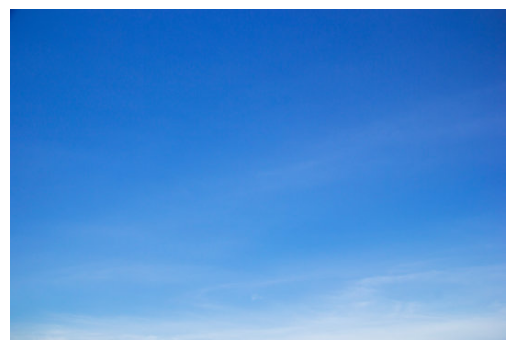

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

base64_image = """/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOjM0MDA4Yjk3LTMwMzctNDU4Ni04N2E5LTJiOGYzMzIxZDY1MjwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD54bXAuaWlkOmQ4ZWNlOWY3LTVhNTQtNGY0Ni1iMWFjLTkxZmI3MTA0ZDBhOTwveG1wTU06SW5zdGFuY2VJRD4KIDwvcmRmOkRlc2NyaXB0aW9uPgo8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwAFAwQEBAMFBAQEBQUFBgcMCAcHBwcPCwsJDBEPEhIRDxERExYcFxMUGhURERghGBodHR8fHxMXIiQiHiQcHh8e/9sAQwEFBQUHBgcOCAgOHhQRFB4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e/8AAEQgBaAIcAwERAAIRAQMRAf/EABsAAQEBAQEBAQEAAAAAAAAAAAECAAMEBQYH/8QAMBAAAgIBBAMAAAUEAgIDAQAAAAECESESMUFRAxNhBBQicYEyUpGhQrFi0SPB4fD/xAAaAQEBAQEBAQEAAAAAAAAAAAAAAQIDBAUH/8QAIxEBAQEAAgMAAwEBAQEBAAAAAAEREiECMUETUWEDcSJCgf/aAAwDAQACEQMRAD8A/iP4Pw0lg/XPGY/PP9fPXviqRuPLatIqapIMyqoq2lIqapDDkVtsCeRpUUKpcAlkVHHCDXj5YbSwTGr5Z0VTWw9HLlMCRqucq1Wyoy6Sz0z3yVLd9sk8UUlvxUViq2JWvGhxzQ1m/ppKnWP3Ea8rlxluui4k8u5Gy+EDlb02z/8AsZqblbFXWCnKYW1V1kmLfOZqf+RUnlvk3ewTfkZLtWCVqur2Bu+xzjcHJpL4hDyulp1wGruY0UtSvolXxs3KHh0ipfLvIoy1PLvoQb/gtPHyrb8A5Ws3sxhfL1TwzLfIUE0tU7C25U/zvsE0olXkzsi23GVq+C08bYHnAYtrNdka5Z7ZZargNTytvTU/4IXSlm0F27o5/kJy7Z4eeSNW57aRFvkL2GJz/aZML5eVwNprITlL1UsJbrfuSxrlZ7TLcRm3U2MSeX6TJu/hDy/0vwW0SxednpskanlWboma3yxms0zLU9pk+Bi8kUZrfjqbJjU8tHhhpjsezHyvK67JFYUipqkgiqKFIIUsgw0UvRoJf4eQv3ClnAXSkKnj2pUmhe3TZLhq10iJ1Z0zW1blh5ZOo2wZ3GabZS7fSkn3+4XLfpTp2Gp5ZdQ3qeS5jnfPldbZpA5Z0pb0RqeXY3bsqbbeylw6Cz+tpW1gz9BLdFSMlTwwk69FIjWl019C2zGSV/wFmJpNZDPRq0F9+g6xxQOU6ar/AHHo9tVumF3bgoJ0GuAl/Rp4QaszopOiNSXDx/2RqXIyS/clJIJpUIeWSJrCsrHf0pvGCYvOnOeCY3twbuhibtxWGvhK3MsGKwDZnQld/RE8rdw//wBRGtDV5IZKndqys+6qmjLpNnsNfsUs1LSDNkS1m6BUtVYT01OiN952kMaOP2GE8uk4oi7KGMTWrPBGvHuirbZmr4/+qzyiN7s6S1yRf+olvRMWeV9NS7Mu0k/aoo9j5S0is6pIIoBSZUKQIuqC3opWttim3GoJZDSKnRUbIs8dUk0Pa5ZtNYsLc9slwisz9QxWbFan7DWarYsZvvGXwJOvSqzsiNfUtO/5Kxd1VdIN5+kyWdgz5d1UVhNir4ze2p9BLLCs7j0342eXs6RpkDX8hKKKnehp9bg8pWj0KkVlkb7rSVYS3EPPqNWKSyC+sjVxXAMxlF0hpJc1tN1jYmt5rNfqWBrNn/qFRvgjc7ChY0njrac7jSeP9bTwNWeMlyCuAkkZxy8Avj/6oUc20LTxmd0RimS08ZPJtNxarbYambBtjsH8NWqDUmtVE9r69i8oYm962n9W5DO1UZdfSWknZWck7L2I3fSaKzkZroi+/SaoJ6Zr5uF9patbZRDNgcV/oJZEuO4SxMosF8bPaWgNVIi7kHJF+p52JTx940v9mcdL5JeOCNS4mvhMamO1HqfOtUkVKqhClLJWZezQLSippVhe1rYn1euJwyp7Zb5KzL8pWA1Li1RG9l6KSsi9WmipvwpEqzfofNIsiWzvE1saYs6VXZFyfRLG2RC3CgvJuWVney4/ERq9VsrgqdtTuwf1krSphctnRvKtDDl321ZIX2GuSn3RVbFYz9KrC4Mut7nTPbKyMS+XQ04LqZ1okuAnl+itiNT0pbExrx8uhQSSawXc6LJjVuNsCXPSbtMvpOWytWAso04f0mn/AMqSrDyRqddUJJMJMl0cvH+Ab2lxyXWMlZ/9Ebt+UUqsGTNCvhbBnx34tLBl0nUw3kmNTyGlPcGS+w8MFvYC+50KqgnoSWNgWbA+hi30yRKni1IjVS1dhNiWkC1DWQzeqAS/E0yVqbaMrdEsNs9iVdExrYGiOiGs4IZ+noo9L516KiVL+1NVuF8jpxgM4dNPehrVkh0/CxnPpS5Kb9NfAnVKjaaGrPHYpR+DWrO2S4CTcxSWdgsvZe5I15e1Lh4BO8rNNoRb3GaVljPl76TV4Rpz9q0smt5Wr4NLnwLcrMqq3wRrPdZq1lCJe522nFA7zGoL2yVrJUm2dqUfhNbkDWAzZ02Oguy9xqzYT7rUF4sCU6QufGat7EW3Qle5az4+W+ytiNy4zSroidYyXYWde2UbGkmsoitePQcXwhrNn6VX6URuXJ01Ii+oJFS2JcXV8Bmy+009IP8A5Zr5RUz9M1VKiNXropJojU7Skt6DOfVLGeCNzZ21YIs/bNZsF7DVhWpPZEJ/A1/oCdOKYP5Qo8Cp/G00RqTA1kJ/E1llSTuhoiz0lx7Ccf2NL4RKslDQaRVhKJKsMnsszqhpvjBPTpt8vQ0pGWsx23PS+f5XVJOis94px2pA8p10UneAd70Wv1bCL5e1OKSVMJckjOJYzWUSpIUq3I1Nhd8FhdvpSI1MvRSDXiUrY9JJtbNroYbTRS9N9YYt321ZKmZVJEdYzRCwJc0Vzn7av1FPvQ+hNzut9BLNL3GL97YNGLzuCeXeNm9h8S263fQP4pLGV/JK1P6zjyIeU+sk2hpOx/DBrNP+AeUKTC+M2msvBFv2hqsBL11GSJWpPhrAWehXwantlnIWXY1O63DX3AuV2KzPL2l3exWe2p0RduCsA3o1kLvbNfCLbfiVG3YqTx3tWmiN+mq+ATtqIuhRFZ8Ya6RGp/BVYCyWdNpCprAPY2BuNWCLqZLNgvsOPISzexp6IZBXwYs/Q04pErX8iJRoe2L0nTa2CycvSZR/kF8f2yTqtyXG/HZMRNK8iRPOyXt3STyd3h6+qoqW9rS6I1vw6eM0Ez4Wilxkr/cJJqlX8hdkga6Kzf4eypbusk0kCSyKSFa8e+ylyRdnsqISdM1S2KW5Gppdjo7kboJbuFbYCT0f8/Q1rXlhnldZLH/RVhS7JpJZ7CjnOWXST9nSndbhbJ8So073KxJhojWnSFs1qd/wDu9NpVWE6sVHD3JVlNEaareAvv01ZCT21LFFXq+g4tfsNMsulKkSrOp2zW1EXr4yVOwuZdYmLoat2VPLu6KdBn41AnXbNZC32ZRpIjVnWpazgrF/jJWRfGb7LVMNW5Wp2RbokqKl6DjnJE9tSvZhZms4q1RFuXMUl+qiNTq4NOQfW04DWdDnCFJe+g06IvxLRUFMgzXwLew1hkN6TWQbNTJA8r+hRKsFWsj0b0KW4aEodE1PLx/olFVsRuY5uOSpfGO6StHd4Lims4EL76K/2BVbWDC1wUs+NncM3fZSC+mrgrLVkJ3vZavcLe/bJcFT+KSsjU7VXJF+aatBc3xaqWSpmTtq+YCd+7Ak6+FZm4Yq6V0FnbVl8inq9mlYOt0kXRXP0qW/SofqGrPHsqJNWTGraluyrf59b/lTJ8Tf/WVtNbl1OOezGNolq+MZwvYSrfHfSlHPZK3J2HHoal/jOOaTLqWd9Bx2GpYa4I1cZrIXEu/8FZ8tZ7bkkPLy6Ml+kfWvLqMo5Gk8e2rGCNYyj2KT9U6SaWHR8Grxocc4DN/UbR+m7GtcetEYZFp4+Olwwia1Z0NOcjUk/ZUcX2GvmhL9Wd6JU8ffYcQYGv1WPhfbNZsF8e9CX6R9ak6FUgnqNWCNfGaIBr4GktMM2UNdA9SYloM4zTsNoavgDOJGsFVjcL4pkr+ES4yjZK6eO+w4uyNZTsj0x8q9ReXgHd6NWr5C+y1Sp/5ESyyZWWc8FZl32eaGLvw8bidF2wrjBU0tYC3DWNgb0M2VjaqK6JWvCqzfwje3WWxWZbnZq2PRe6pZfRPTUu1orsU8f02mhpxwVlutzTFaqSIZkhis0xq+M+VSS/2StRsW4l/qbv8A5OmqTI1mZGUaWMAyydNpx9Gpx6FPnYvXxLtnalRl08bpqgeilQXxmQUDJjNBLvsPfYpve0V0CZe4zTItlwU7KzN0SjYPKWt95Bt3VJcEbnpqCb+1VwiN9fGqmyE9tQI1cg/qklWxG5mCq2DPcPGA1y6xMlyhEv7av9hU6XbYTLoqn8FSbGSzYq+NtuisUCXYlp8YCXb6ZLAal2NRGhWFQRqwRpMosM2YlrgIKZGptjNATQA1gNb0lqwTsVkHdrLDJW5cK/dGW4mOx6XyvhfZYUoIWrYhdtVVqmE99VoxbRbU8fHZ0UqY9k/8+1JUrC+u2SwEy4urI3trLxq7svJJ4TdNYCZKzTrcStXZ9KTpUKsnRafFEL/ClS3+FZ7z2rdNf7I1dswxWMkrXjudjT+plZy3yoksllZ8u6Urf8hJbaUrWFsRqf8AqdFxxY1b472FFjUksK3phZd9sou9y6Tx2+zWxF7Ndkbn7rNdPIZrRWaFXwneMlh2AUVJG0k1c/bKLSoJ4zJh0trAdO8GnpBn0yiCNpGljaCas8Tp4C/wpEIa3DXrsJBJv1msEX4awF+MkDv4zQA1gG0cZCb0KeQds4uyNWBx5LpfH9NSIvQceQz90UGg45WAn6akRoNMF34zWSNX2nTe4Zk32JRBeg4hbcDiExGnAWToON8DcJNDiGs06DOt8fg9bfA1ZHOnSXB6Xy7+oayEpS5B77Ul0D/hV7DElvopWVJtU+6EXytZZKztpSbe2xGptqlaBLnsu7rcRfLZ1FLuiNS/xtN7hLN9tFOumKePpoJlrPhLCt8rAJe+zWfgazapP4TFnl8bN8bhLrLC2CS8ZmFL4Aq6wGu86Z3WQzdvtleEF8b8OFuiY1fKT2OcYKxvfTLDCy5cUraI3Nsam+QnG3tK3srE8rusrDW2mmF7rNStBLfLVKJl0w0D5jUwdwaaQSTI2l0Fm2NVcA9Nmwu2s0Ra1che/Zy2Q91qAKtlPZrJFk7biqB66ZoHvoNf4AKBBpsGaVEjUlgayE+tV1RGp/G04eAZocdmNXEuKAKC6zj9IWJSd7FoaIYlxBIzi6IuJ0MauN62xq4X4/hNXMZQRNb8TXwlaeOqPW+N3C001WwieWzMVToNd4VHJdSTspdgk32UugdnmrCcsuGKe95FPHapLNIL3uQtXxsC3Winiv5FZ8d+LSa2I65Z6Uln6FnvTSw7CbjVm4g3vfFqrFAt+MubQJ5Z1SlgLnQ2wVz34yTbyE7t7VTsL9b/ALRF2e2zf/sqW/W4wF/4Us53IvVvY/8ARWaaIrV9B23AJc1kreegs7vaq7I169kLfL9KStEanbVm0DNrZwC26KzuE6/bVSQPTNoYt8pOmoLI2nki4KyErJML21ZB2yXYJv0pUQnTVkLnZ02GvY0uwz2yWQufGSIRtP8AkLgq7BPLTRD30KwqBuRtLdhr/o01RF9VtORoNAXsPxsaSBwZNG0DVPrJq5W0DVZpJEXUVTKbBLOCYu7MQ0wsuBrOQtv7eZI9L5OWKSvcq+yoP/0NONKX/wChNNPUEtvJqVF1Os6MVaHpJ/6hUdsjVnj6MlmrETz95KrF75I15Zqkv9hZM/8A0/UDf0WtrwGvLvNMVlBIUqCSZ0aVXYWySadOLY0k61kgQNIrFzWXFAl6jJW7Bm3TpRDIdPY1r/o0vcrNlraeyLmslnYpPbUDC0v4ItkMY2CeO+lRXBK3499CUeBKnl4/DlfwFu+qy7CT9mn0Rrs12GrImSLHPy6Zf009yVrxvQcf1YRUvvpSjWCNyZ0qsPBlr42l1sF7wOIS61BfbaeguFpZC9NVAbghvTJCni2ixq8ZWrgJb8bTki5jaWExlHNkrUnbKOcjSSHTiia1g9djU47W0E1vOjoGkjaSK2n4CROkGJap/QehTIYJIqubiUwSWGFqWnWwPidNjWnDZnofLvsvIieXalwRuX0Y7lxnxulq3Yi+XsJfxZXKXTWccA2b0aeAd62l5xkus3xpim9ws2+1K67JjU8rh3+UCXVXTuxjV8sa07/7GJyl3WKf9VfF4JhfL4pPFMmNzy67L3Bb2HvsXGLf4Nwz/wBYLsKwE9U1bsNZ3pqwZvbaQvwaQzhoNRtLISVUYtErfiyKm/S07BbWUbBOylTIsyU4/kjUsxnGxq3b6Gnsus8f2rSRqRnHpEWzezQNNUGvTNY/Yid41BdDRS0V0Q1kvgIdJGrh0hcjJZFSdU12iLvxtOWTSTttJdJA1kG9tpJrVZxGlhUWRYdNEa9Fxoi5grsKKphBQIKfIA4halxyCJkgiGslWJa+AvbaQ1LnUS0FtrxKN8np18njqlF4+Ay9KUXeUVJy3tUY1sTdanhno06YTtlDH7l1nhc06blXY0vj/wCsKi1YtMsNBm3s1WOQvrqlJp/wFksp0hcztlGuSsyYyjQ0kzsxSSslWWSbVOOLGtWfWUXbGsyW0pOrCyXNNW/3Bbt7ZQf8DWc6KgNani2ltjUy6KCVlaYNs9qisBZDS2IufDTBN3G01GxrXHIaYMyNSv4RetVtsF3PQaeKEZuw6c2F+nSTWsxWkjWdNQIyiBmuEC76jKIqzxz2dJGsFBJMjVjYFnxtIa6bTe40yfSokGp3kLt3s6QuBphm6dOxNXDpwRWUXYpIdBNakOgmlh0u9ia12VDA1YJRJpQ45KYKIqXHJQaWEZojU7DRRLTB2jTIMyUKD6Fqyds4vhDW7rOG2CauDQxrU185RdtpHqfJ43vCsuuSm/FU8JkL+qutne4W/GSz8oJs1ltsXHPl1mKSzjgLPatNvIas32KzsWOV96a2ZG78qoqw1LtagzpSxsX6bJCovGAsl+tp2YS+M9tzghb30UqbKmKinsSt+O+jXwHrpVYIt9U9A2dNVgo0/sVntnEaWaNIQqP6gvryVVEaKWAm9HSiNd42lXsNMmtoGk8bWcQWK02NW+OnTWxFzj6ZRwCeuzXNEX+mtwsuQOLCbWUQ17VpIs/TaQeq2nAT4NONhq50dJG/baRqa2kKdIWNosmlKgyaZY6RgjNrUkOhdDVkGjJFDjRdMYhrK7BKGgvpLV2DRpoAoAoKyg7BIXAmr66GgaM40sINY5tIqJeBi7gbIsqXuVa8Gn/R6dfMp00NMxSj+wM0pfNgznTJbFc+qdKK1fGe1UkkRbkjVaXwqW7DXPAT7p052GmTVRS2oizPR0/At8cmlR2wDKVGwZrKI1JMOgal8SoDSRtI0pUWwSayWQ13DpwNZ46fgNs6FAzWroL6jaQmWnTTGlmU6ckaxmq2GpmXpk3RTbhSdkammnXQNsKj2RqdqSYJsLWCF9dskmqDUyxlHgamTSogkxSRlrxbTgutSdNpJpmFx+ELBRU7pojeqUUyNNou+SB9aGmFQXQ1ejo6RNXCoUTTFKJNaCjy2KSa0lWAljODe7oarnooupjaegM1ayRQ40CwaQsalRFS0isj9g1KXlEX2hsqSobGKhs0iG8A0fuFiXYWa8lPo9D5ltnxVP8A9Bb5U6f3oFm9nS2gveazi1wVyulJ4TQXbOi01wIedKWFwDejTS2Cd4yT6KbdUrRCeVishq2w0Ge56KRGoUmUNES+iUUljJlr4zRU/rUC9skAaSsXWcWDLuBJ7Be/VNNA2xsg7NMBqyLL+20ugd4VF7hqe9VpIXtSToNRt0Qvc0pMiy1nFjUy+2oqKojXeFRZGorSyN/GoEOlk07bQNU6Bq4pQpbGVMYi1YXFvAP4VHGTOtT0afQL0NObCd+2pbkGdFaS0rsJrN2MJdTIKllTsMi6LBosG6iTZcLU2XEZsmLqdWC4cqiUhickORcSeSWxhqWy41vSbYw0an9GHOoUTo8f/VqCJrWRlF9F1jLnalDoa1f4dORrPqlRyNSbrab4KdX2NHwusWRnHahE8r30rT0F3BVFNwqISKUeyNSddlLAJejwF7arWQlnWlKgzCo2NX2pRGmVVIy3/BVMrGsFG/BWZdgrkH/SlwGtpaIlrJFWezpJoVFgKQNtaiLVU7BrVQalxSRFt00Rf42kGKUcEWbiqpEb9KSIutpB7UokUqCJqyT6rSkRrG5Cb2K6KW5RT6BI2lkNNML2GDr1A2MJUNlTUuQxOWi7GHTNjFTbyXF1m8ES3pHF2XEn7DYxrUNhL5ZUt5KaG3wC1LsJ2iS3KlSwaGg1AwbiWitCvoWMktzTy2TdVWbDNm1QW2LQWU0RMKj/AJKk8VJJgklZxQ1Oq2jrBdZvidPQMraMl0yMohDpwF3ptOcA+9MojUOhDTjPbJJMHWqSwSkKXwLK1FShoJ3GVA2ehpLqYVHNEXFKIa+MokLPp0lSFRJasmdK0qiLcxtI0kOkaZ2yiNJDp6JrWfo6Rq2FRJqyKUfhFVpwTWsZRC6pRtECok0kKQa00RSojSRtI0OhdEUNfSlDAlhP+JZT0irKyGrIalxKgqwt7DQT7oYa0MCHyVN91gupaBU1kJOqGshUlTUtYB7iWsFT3B+4a8dDItupZVSVTRXk8lxjkhJSo2NXNWojV4qoJSkVn42yBuQpAlKvkpvylETTuX0m6UGt6agmNXAT+FRC5jaXVBPXTKOS6k9qSexNa7jVkMhxLKY1AFBKaB6KWSL2aCnSNRWkmtYVEmmfSo0NXjh0gKgTV4q0E1rMZRGnj+1KBNXPp0E07itA1plEiZp0/BrWdlR+DT6pQb4JqyUx8TZL5LPGq9TROTXHG00NA6KJbB5WpeSpbtDXHYSxLQW3E02a1P8AraM7k0yDSAOIZqJIomigkiLQ0UqNPYT/AKzigWRL6CoKyJBqobLiBsG4kEuhtBrUyLIVIVLRUuuiWxHC3apIL3iopoJLYtKiHoxd8Fwl1gzdrIrKhi24xUtamArgIUsDVnSks5B97KBv6ITWoDUA0RStykasEG0oamRtLLqSHSFw6SapSJq6dJUh0mda9qpg7KiS0k+lIKawRv3FVsRSo52GpPatJNasOlk1NvoqA0kxS8bJa3mKjAmrIuMES1rFJJIizoNpbDDUSbtlieVQ7RU7jVZRLVfQJoqB/AC2VN7DBYlhLe0tlxO4m2Gd7TkrQdgTVg0sKhvG4NTIJaiVs1GbUMqBsmNW/UsG/UsrNqLwXCeexLKu0OyY1t6iW8lNyj9iNZfjsqQefZFIiuiDTVwwznwpUGskpS3DEkzFUUxlEJ8VQTKdIWz6VHbA1P0VEmritI0xqKgawVDToDUTTIUgpr4BqAwS1SRFUo3sTSQ6WNU6Sa1kKiNTNUok1ZOuioMmrdKjkJKVAauK05I1J3p0hcVFEV0hFN2Ztaz6tKPRO16vtrj0CVrXQxdaiGsAMpoB7ZpBaKCRMuyxah9FZDKlRK2VNTyE7tF4Kb+wwm6lsKjkrG/GTDcSwl9htIJ6RJlxPKpbLhaltsYm3UsAkUtSwqGXGPfoNBe4hlSVLaGLPKWpkVbU5sE3UvVeGC+VemjLFXFEal6UkEh+BbcKWQl9qQSVSTbC91SQQ1wFu6pIIUkQKRVhoh6aipazjYlTDFUKSHSNLCok1cKiNU6CamMoDVkKj8GpPalH4Rr4vTRAqPwmrIdKYFaKXwauHTghYpRDU9NRD2zQLNUkGp67KRCQpBZ0qiKNI0LiD6z2Bd+gLGwED7QEv9ympbLiamUhhfLEORrGNvxNgS2U9dBsGAJaGU3tL/YJb10jkrMrMNWiWEWRNydpyE3pMrYi+VtS1grN9AGpe4NwDDUyLC3Ev9inJErKxbaGqJ7X0jTmyr4y6GvgbmUU7xsFnsUgbI9MUmtjnWJlilG10wvudKqgvUKQN/Sq+Bm3Paq+AvfS1+xMa5FA/hyVm2tQM/aqBZnpSVkPG2skDDpAdNjUw6RrU/RUSJFKI1WrISdKSMrh0gOnOwXO1KNcE1qTOlqFk1cS4tPYrPcvTJFSTFLYy1pB6NWF9tWQTVKJF+K0/A18ZRJqGlYa6NpIhrOQwtS5FxLUyZZGbReBhoci4aHJ3QxJ5dobuypsqXbKXsMFooqzamgxGYXe09BfYaKziSjMHxFZKxPYdiNW3Q0UD2BKmTwJEvlcS9ti4zvSW8DDfooACS4mRS0SWBFtQ10Vjd9CmFlraGTXSSwOPZGhpKs9jT8GrJ4uyjWTDnZioq2KRdKiNXMKVbBLnxVZBvZS5DOfVRQWfpVBPpoqKSI13aaCXqKiiVqf00Ev8ZIGRSWRoqiGYVFjSRSjgjUOiyaZvZUfgIpRQayVtIJCQtKBKasNYNOSseqVEmkUo8E1qRWkarUkCVkRZTeAaH2Dd7b6AMqBgS9ypt0ZCS2hFTRwEBTWC7kGQShoLUlZ/wCD4RZfgadFT+BlWhroJUNFSZ9FBNkgrIToMpqWVPqWVNDQE0ANFShoArAEtWChoFg0hZBpBGojcrV2RuX9jSXVjV8Gt+l/wZcVJdEXP0pLISzvtSXwMzVRQalikiEKRU3FJBDQIUiGKS+Bc1SWCEpr4NCojRUYk1ZOlKPIWfspBFpErcNdEP8AhrAQ6ck1c7ZQdjSTs6aGqyj8CYVEaf0qNcDV9FLFkGBpQXemVETWC/AyoGgt6bkprNMJdiWVP61ADiIcU0VlmuAtDQQNFSj9wsoaCJ5KuzQ1nAT2AT+hhAymhoFqSpy+AJtTIpaloqaKBA0UDiEGkAaGlDi72B2HEGJcRq/GrAWXplElXxZphe4NJGp22kNTK2ixrUn7UlgyxVVYN0xWQz1qkgx2UgRSQ0XpTC+1RjRFzFUCmiaHSNFKGRq4tRtE1VKOSaYpQsa1mlQVjUyFRJqlR6GoVEiz9HT0NGSGl1UYsE00Ro0ExtI1WcRqVtI1c0qI1c0UGWpILkiXnBU9h4KnoBGQGvAXWdBKAuhssS0VZWfbMi3pJoDCAIkpvaWAAZhfYKzRQNDQQUUgoIGuAv8AEtF1mtQNS4l1aziTUGkWrBWQfRpY0n7DRRtBNM/TOA1W0k1rcbQ9xrV3dZ+OkTSytoyNdJI2hk1cTpTDhc9qSBKpQGn8UoMaYpQJpxWofBpxUoDVnipeNk1cUoDWcUo/BqyapQt7E1c2qUCa1i1AmrIpRXRBSj8BmHT8GrkGkamWnSxpJTpJphURpIdI1c+FQJqzxbSNMaijaSauGgYKKmNVIJ6DoRK1YKCugmNpBn0OJdMS/wBgms4lKNI1GaAJFhektJlTqjYIGymjAEuipo5CaGF0UE/41BYGuioGgVtIBpCCsgZxB6occAwaRq4NOw1Gcfg0s66bQNMbR8GmNo+DWsZeK2TkceyvF8JyXifUqHJqePTetV/STVnjBoxsNXA4DTj0lwLrUjOBGsckiuFdIx4FMWo8EaWoommapRRNX0tRTGp7XGC3JauLUUTWsUoE0z9rUCavHtS8aHI49qXjROTXErx2ORPE+sck4YV4xqzxwqFk1eOleOhpxbT8IYNJdZbShq5poDUCM6KJZUbghNwZKz21MqdtT5DV36KDNhphU0ysU0GmaYKmmEZopbqWxjNqbKkv7DRSh0imxD+FQVQSzsMAZT21BPQA1AagrachPrKNBY1AaiHsaS6YNI1G0jVbT8IjaBpjKIaOgmritBNXBoJpG0NDVkOmhrWNRFlakCdDSguBxRVv7GhMmtTKPWXV4vPGDsuvNI6KDwTVxSixotRIsikgY6RRCLiiNTpcURYtL4RVxWSWr9V/BFtKBKpBZVRoixVAjUgdMkgRtNjTBpXQT7gcSp6GkJ6bSE9houmjSXSDSNGoGHTZNPY0l1MZRY1YdI0wNF1MyChqYKKz/WKtvaGGUNZwaY+iigaKiXEajV0FDiNG0MaYNJRtA0zWcBpmMoE0kOgasjOA0xtBNMbQNWeLaENTG0/CarOK6GpjaMbDSQacF0OjsmtTBp+DU6OkmrTpJq+62kmrIaGtDTY1A/GxqzxHrY0ytoY1fGUOA1cOj4TW42ka04KPRdcM/StI0k7UkFqlEmmKURpkUojUUo9omnxcUFlKRNT4tIiqC7+igpIEp9UtiLDWAMgkUv2I1P6zyypa1EA0ilxqtBPY0lG0MaZlbSxoNOQhUH0NJpUXQ1ZOjowTTOmcPo04/alwRdXE6S6ymS5LEqHE1K52IkmVmhoqVNFA1kJ9FFGpgwUENBqCghpjT+tRF1tI1TpdE07bSNCoDRtBNMw6L4GtTx1tA04n1snInjR630ORxpfj+E5Ga3rHJb4t6xyOLevsnJc7bQTWm0F1MGgaNoJqz+HT8I1IyhY1ey/GTTA4Pout4NI1U6SrkeZRNa85igLUSaT2pRY1VRiTUq4x+BMUok0yUqNMLxUo4ApRCyGgpSCKSI0aGh/gg1BSip6KTIvd9mshcZr4GaawC9ldkpG5C0tACiNMbTmxph0jV9tWw0DQiJZpntD3KmhlLUsqJZWPINNiJdqWjTIoGDS+hodPwaYPWxqcQ4DVw+sacW0fBqyHRfBNXNKgNXjh0fCacT6xyXi3r+E1cPrGrxUvH8M6caV4yavHpvWNJ4/W0MatjaPg1GcPg0waBq4XAatg0E1Mb1/Bph9bJyXiX4khya4jQhpxGlLgbTMal0Rr0ywwT20nfAxbekOikqXfQXt5FH4b1w9rjAaq1AmpIvQlWCauYtQ6GmK0jTG02xrOKUBq4rTkmmdnTY1qTSoZGkm0qBNXDoGmMoMuph9bsmwyq0MbFxlHA1cKRNSFRzY1ZPraWNMFMuo2l8F1nGrI1c7YBqiL6YGstsg3pgkDKJaRU1LWCohorNDh0XUocRqVtBdTLraBpW9fwmmH1/BrWF+P4TVsb1l1M6b1E0niV4vg5LxV6/hNaxvVQ5HDD6sbE5E8f23qyOS8e1esnJeLLx52HI49q0fCa1jaBpxbT8JqyQaM7DWc7b12NW+LepjkTx1vUORwb1k5Lxb11wORjaHxGiamM4S6Y0yj1yvYurlb1scjEvxsaYPWORgfj+jVkS4fRpWcBpg0Icmsg0LoauR5VHGxvXCTpSiNLFpEVS/YG9qSIm7VpBfRURpilEmilG+BopeN9E5NSKXiHJeKvUiclxS8aGmHR8GmHSTRtF7oasjLx3wXkkmqXh+E5LxHqd7DknFn43yhpxretl1MHrfQ0wetl1MHqd7DknHtn430XkYn1u9mXUz9todYQ0sS4Pous4HF9F0S4tlZFFGcRpYyiBtI1JKdHwmritHSJpxKgOTU8T630Tkcar1/CcmuJXjJq8WXjxsORPE+r4OTWH1k0wrxk0b1/Bph0fBq42j4NMbQNXG9RORx0+ocl4n1LknI4t610TkYV4m9kOS8V+h/DPNrg3oXaHM4N6YL6OdXjEvxxWyGpxkS49UXUxLjIuxntLg+S6mJ0jTA4l0S4voaiXB9MbDKy8b6/wBDSRvTO/6Sco1xp/Ly6HOLPCt+XY5t8HzUjs8q0iIpRY0l6WoMmq6RgyauLj4xpi4wRNakdFCJnVyGguKjFk0VooauFeOyclniuPi7ZL5LxVoihtMkCS6QWdqpE09Mq6AUkNVWkaYlx+FlStpQ1MFLoq/A0uBrOM4l1A0XRNDUavhdTEtN8FTA/H2NTEvwl5HGJfiZeScR6sF5HHpvW+hyZ4toY1cKgTVi1Ami4wM2tSK0/Bq42n4NXDobJpmsvGxyXipeLszyWeKvWOTWQ+tE5U4t6xyMb1ronIw+sclxn40ORg0DTGcENMbQhpi4eNPkxfJueOlxj2NMS4x/uLqZP22nq2TTG9cntFl5Q40LwTfDJykOFql+Gb3lTJf9D8epf4aS5SL+SJf86n0tLORyOAXiz/SXSeJ9S/tJyXj/AArxJZaSJya4xtCGmJcV0NA11EKzT/tC+0PV0UfGjD4erXz5FxguiasmrjAmrPF0UBq4pRrgaYpRZNFLxvknJZFqC7Y0x0iooz23FJoizDh7g39laR2sxVx+k7XYG4lZSyoUwpTBFJkUqgbqqIoaQQUi6NpQ1MFFGxvRUAQFK1AFBGoK2kug0DUw6Pg1cK8T6JyOJ9V8DkcT6fjJzXguPhdbGb5NTwV6uWicl4nQksjkvGY2mK4HZJBjiglxkxhKG19Kmi/gGTfRCVafxka01J7RZOmu1R8Xkk60kvlIZa7x/AzatyUTF/1jpP8AK32qP4NLDlZL/rpP8sWvwfibzaM/krX4vHWf4XxJYbH5KvCRzXg8OrJedTjNL8fhTxD/ACxL5HHxUn40tsk7XZHOUlwWRLRa5CalvoJqHG+TWpjKH0mkinAmriWi6WIaZdTA4oaJaS4KjWkTNaS5FxdFr4DXxkj1a8EILcXEJuqC24pMEqlLJMSVeq0TGuRUhhyNjDWQJcNjFtN0XDWuxhrBNZBWsYaU6GGlSYwnkpSJi6dWCYazkXEtwa2MXk2pjDTqGFp3CMkwKUGyauVXrfQ5NcSvFHl0TlVnir1Q7snKtcY2mPX+xtTIdK6Q0wqKsmrkP6UO16bVFbJDKbEvyusDinMObfJcZvlUuTLicm3BugJpqwqqI02kmrhUQYpQJq46+OD4Ri1uR3j4pdGL5OmO0YzTSUDFsbz+KlKS3tMkkLa5vyVhovFOTlOb4NSM3yc5eSXZrGeVRqk2XGeW0ScmWYbRkGtkCchGthNDkxi8hqYw2trlYyHKlSfRMWUt3wRd0LAA42xpmplBl5GJfjY5GDQ/peS4+Ouj0vnzptyopENWgsp6KWtVBCmDSmwapMLLpQLe1WRdIXSDSgRqCtQGouoyixqlRGodJNGoHspEXVKJLVi4wsmtTxX60ia1xXCHSJasipSpYRMW3HLVJmsY1svkIyX0KVXQCFK3oLulwklbRnYWXENY2NMjSxqZWplG0saYyi+gqlCyauLj4zN8mp4rXjfRNakUvE+jPJeK14q3iycmp4ukPFHamZvk1I7+PwJr+mjnfNueLtHw9vBi+Tc8VU1SI16aVVlJhK4+VrZxRuMeVjzzS6Okc3GUUXWcGll1MS0ICrKnsNDUocWNMaUWlY0sQk7LqSOmj4Z1rG9ZNXBQ1Wr4NVWkzqtSGrIJIRajBRLQTXwkz2vlaQ1ayxkM7i0w1yUgzvakFtIRlkLu9KSwFilH4NWKURq4VEmilEmrjaRoyixqZTWRq5jaShSJpiqGrhoauMok0xcYK8k1vitRSM1qSLUCavoqLGnale1EqnQnwNXIn1l5M4H42uC6mJ0Pous5RpGljNWD2YKppi+ie3byeRSf6YpIxPHHS+W3qJf6s0kX0ntl4rHIxvSxyOLep3sORxxXrJyXFx8Zm+TU8XSMPhm1uRcYfCaRcV2ZrUdYL4jFrcjpWcxRGj/BAq5bEam06JvaLJsO2fh8tf0NDlE41MvE6yankXxcZQ+GpXOxyl4U3yjXJm+If4WT/paY/JDhfiH4JR3RecONhXgm1/Sxzicb+hL8PJboc4l8Kh+NoupxxvU2OS4F4KHJOK1B8IzrUgcGNMZw+DWsGgmmJlGi6jmypKnS5bIu4NPx6dyTy1rMTRdTp+eVnu18rFIgpKxq4uMbJpi1BjkvGqURpmnSxphUehq4pIaRSiya1ilFjTFKDJrWK0DTGURodHwmmHQXVwqA0xS8aJpil4/hOTXFvWORjLxsaYrQ+ETVspjBi2LJV6WTVylJomrljqn3Ey3K6QlCv6UZsrWxVQlwTs6D8UGXlTIl+FdF5M8YmXgLPNOCX4GXml8B6X0XkcD6n0TkcVLxE5LxdI+PJm1rHRQxVGdXD6U80OS8T6l0TkuLj41ROSzxL8S4ROS8QodxY0xcYq9iaskXGKfH+iWtOkYLmJjWpIpwjwiauKgq4Ja1HXVp2RjNb3EeWcpGpJGfK1ycW0a1j2nQi7UninQrwhqY7ePxRpujF8nSeLjKCfkwje9MWbXaMKhhWYt1uTI5Sis3FGtZscpQT4NaxiHFIus4h0VEy+ICabvBU0aJDTsaJDYdpfjbHJcS/H/gvIxcYxjsjO2tSKcXLCijO43mt+XZOa8H5GMWfT18T36dIwfKGk8f26R8Znk1xdI+J9Dk1xdoQ+Gb5NSOsfHF7meVbnhKv8vF8j8lPxTVfll0yfkq/jjL8Mns6/cv5E/EtfhW1x/kn5GvxN+Ulwi/kT8VHokuC84cMUvDJ8E5wnjafRLoc1/GV+Hk9kTnIfjtX+Vl0T8kW/5aH+Gl0X8kT8ZXgkuBzXgV4pdDks8SvG72JyMVHx/CWtSH1PoaYpeNr/iiauLXj+E5Li/VF7xJyq8Y3ovYczg3oa4HM44fVfBOS8VLwjkvArwuicjifUxyOJXi+E5NTxK8KvKHI4n0ronI4H0rocl4leEcjifV8JyOKlD4NXFR8d7ozfJqeOt6GOZwK8TQ5E8VrxtvKszya477dF4Ff9Jnk1wi4+Bb0yXzang0vDJ8UJ5RL4heJrhi+Ri/WqwjPJri3r7Q5GB+NMcjil+KJZ5JfFPpTeByTjqo+Bcsl81ngZeOKVKybVzEx8K4qy3yOKn42k1ZOS8a5P8ADu/6jXNjhUS/Dy6T/kvNOCX+H/8ABl5pwS/w/cX/AIHNOAf4f+B+Q/GPy7+F5p+Nvy/xE5rwT+XyOZ+Nvyz3yPyH40+jtMczgH+HX9rHNeBXi07YJybnjhqS3M7FfkI+B/D6fN8af5/p1j4GTm1+OukfA/hnnF4OkfBLhDnF/HXWPgmv+LJzizwrrHwz6/0S+ca41frmnmP+icpVyrjFreJNV1jGPKZLWnVRh/b/AKM7Wsil4ocOicqvGK9KfKHNZ4FeBdIczg3pXMRyTgfVHhDkcD60OS8W9HI5nCt6ZLYck42FeF8q/wCC8jjWXg+DmvBUfw98EvmTw1X5Un5Gvxt+UY/IX/JS/DUT8h+M/l0Oa/jZfh0OZwPpZOazwK8S6HKrwh9K7HI4t6fo5nEeprgck42D1vouplbQ+hq5WUWhplVToimu0TQ6Bpio+MmtY6R8W2TN8mp4uih2Z1ZFLxp8E5VrIuPih9RL5VZ4xcYRXNmdqyRSpdkVnT5AGkXTA0hpiXEaiX4/qLyMHqX9w5JxDhFcjaY2mP0aBwT/AOLGmF+K+ByMS/CxzONb0Psczg3ofbJzXify8uyczhW/LTvcfkhxql+GlzRL/pFngfy0eifkXhB+WiuB+Q4QPwR4Q5rwD8THI4ofiHI4ucvHgvI4ucvEXknFD8KvkvNOD8vDxtP+k93KPmzwdY+Jt7GeZwdY+L/xJzXhHeHif9tE5NTxd4eF9Gb5tTwr0eP8NJmL/pG5/nXZfhJ186J+SNfiqX+Ed5RZ/on4h+Vp8GvyJ+Iflumi/kT8avy7Q5n47CvCOazwUvCycl4leJk5HGn1svJcOiiamFRLph0kU6Y8DTGUUhoUkFNfRowFJEVkrGilGyaYfWxyXB6mxyicW9L6Y5rxUvAxzOBXgfZOa8CvB+w5rwP5eXwczg35d/CfkicGX4V9ofkPxqX4Ttk/Iv41r8LHkn5Kv4yvw/jW5Odq8IdHjXA2rkOmP9o1To6RNMGljQ6GNTG0/GTVwqDfA0yn1sclxvVZORjLwp9jkcW9ERzOMPoj0TmvBvy8eiczgPUlwXlpxwrxk5Ljev4ORxPrXROS8ToROS8SoommQUkNMZuIXpLlEJsS5pDDUORUS5ICJSRcEOSKa5yeClrlORWXJyKmviQ8aly0d+WPJx10j4q5ZOScXXx+OP0cmuMd14bay8k5rwdvD4JJr9UiXzjU/wA69Xo8lXFmJ5x04V0j4fK/+ROcWePkZeKUd3YnlEvjUJK+DWs4uMU+UNWRSg+HEmrxOmf/AI/4GxcocG92v8F5JgfjXMqLyTAoRumy8kx0UPGllWTa1xhXj8b4aJypPGM/BDhsvOn44y/CW/6qQ/Iz+PtcvwcKtTa/gk/1q3/KOPo6tm+bHALwOxzJ4OsfwuLeV+5PyNT/ADK8EFuTnV4RS8fiXROVXjCl4k9xtMh/+Lgna9LUo8UydtdF10gDHQRrj0Ozpt9ijKNk0w6X8GmNUuBp2dMybFytpkNMpXjb3HIniteJE5NcVLxonJeK1419M8l4qXiiTkvGFeOI5U4h+OLHKnGD1RHKnE6I9DV4xtC6Jpg0DUxtPwauDSxpjaWNG0k0wU0XQNMaCn2NQMCZN9gQ77LqZUMqYhsImUiiJTLhqHMYmofkouGol5RhqJeRdlw1yn5F2XE1wl5Y2aysv//Z
"""

img_data = base64.b64decode(base64_image)
sky = Image.open(io.BytesIO(img_data))

plt.imshow(sky)
plt.axis("off")

In [ ]:
import base64
with open("brick.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNj

(np.float64(-0.5), np.float64(2999.5), np.float64(1989.5), np.float64(-0.5))

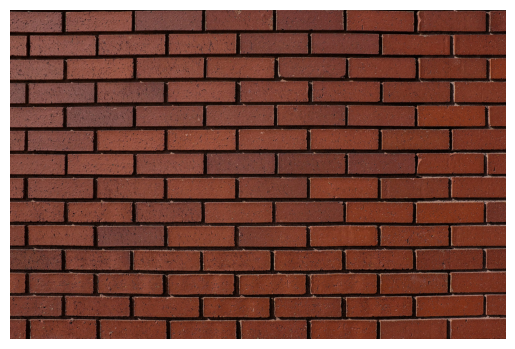

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

base64_image = """/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////2wBDAAYEBAUEBAYFBQUGBgYHCQ4JCQgICRINDQoOFRIWFhUSFBQXGiEcFxgfGRQUHScdHyIjJSUlFhwpLCgkKyEkJST/2wBDAQYGBgkICREJCREkGBQYJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCT/wgARCAfGC7gDASIAAhEBAxEB/8QAGwAAAgMBAQEAAAAAAAAAAAAAAgMAAQQFBgf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhEDEQAAAfl1neOgS7BohJJZIVKNHYm3arnKvbjiEDFGyk0NEKUUhBuEl0SSEqQuVQUEiSoFQWhVUqSoES4ES5Ky1WHa4MtEHRQj4qIyhKpQPF064QLzpEaZmvUcuKthRgmqamWaki6fBMbBVOpF3dqFnpjEOh9YpvKXnV1COVNSLFzqbjz09DU1wK9JS+cru608vPWGeRnsaXx9ek1J5OvWjL5SewWvk56yHk57CHj57FR5a/YLXyi/YWeQr2Ujxle1Kzw9e0h4ye0Ynh79cw8bPaDL42ezqvG17ATyVezE8dfr1nlK9ja+Pr2HAuedC1XmgvaIx38lfrVL5QvWUnmC9EC+cv0bjyxelE8/O0cvnz7qDhaenrs86ztNPOn1NRwL9Zmy8wz1O1PF36LNbxh7Zzfn69DScJffKvPX6IY82Xp89eev01nmJ3tKeYr0zF8vPShJ52djdrPmb9EM153J6ryuuJbsvrTg6Nx57cq+ktcM6NnMnTUYC2tOUHVM56+lS89PUG55uf0ibnmK7Fxxq7dtcWdHQcq+oEc2dSjmh0mHFvsyziX2occe0EcYfQb7PI36UDzl9szgX2yOAPo0nGD0qk8/O7rrxy3K1xF3rG8+vjr9ZJ08nPVWvkr9cs8oHs5Z4wfamnh79wMeJnsjXxN+0pPG169deUnrxs8nXqgPMV6dCcK/QjZw53Qjij31HCru3rPDrvOjzV9ptnBDu2cC+zRx769nLrrIOePSjPOZroxjuTQqXY1p93OvOF12TXEvr1bxr7YLyL6sOXXVJOLfYWcy+qByp1hs5s6cl5RdF0cmuqdchvRbZye7l6U0vznsmR42dFCc9mrRrPIrr1NckOsaceu0Rw67gnFLqPs4d9kJrjX2rs4g9sjhV10XPOj6uUm/py8adsc75Fd0F4p9azjj3rOFfbi8Ye7cdS0Bns6AwQyWi6bahm1BYFG0z7RAavF0EzAzSuG3kYz2YkXelpz2vtcs2w5jugac2uisy87fssxL2mvODrEcfmdzy+uNEDLj0nRtnH00m40oluaWvRIyE6IuEQa7Wuh+UZWRNVn0L0IxVPmsxOEhpJGKkVi2pGUN1l10KVozOlbieI+KpTIBkfQDaFiY9FjLb8+qzyOHbh7+Hva0snTXR1jsomQpLRpZW+EiRpzeqN3KqYE3ChC6tghjc5VOgsisU2zVNWSDVNKGzEW01UMYgRTUq2KmqcFFgyrBFllCdiuD6byWueTt8bpa8/fBqefrgGU2AsoCPoG6hVOWKIiF08Tn9BD0CFS0LKH2gpD2QWb5kps6NAdy1i7RZqpgZ0smVYLAYqrbSLmmpRznKqiopRxB8r6rynXyP9t4X1qZnpbj00yZ5p1GsuC0qqgBGNFYKSnWKi4bQRIA1sEEiEBhUDGCoFdIphgsqXBruxbKlkqqDUG2wFMCUgYEtjcsHp83rs+FGB18fucOd3H1PFbMdxo6aG4UCLRqxOQkzOlWLRNtWVcsqXQC2tTC+z1lZMrO87GLShaJKZLBWy1pbVlGUEkDgkaARTCIu843LaoLl/L6XF1y5rFeh6cPbcfs+U8/syMorZpzbmstnQshIpbE2OpyJWKbKXGDFXDUQsomfRLKgwKgNRjVyCcSa8zLVcrQmObU2CtpSiJ2qowkSyqqKbS3l1AyxBFrPQd4/tb8/puJ6Hicu/IczJacaK0VCpRWlEtamaCzFdx6Q1hegRIIUhwqlC70CkndMGpBROmgsElNaEEsoAZiBGWY9gghqDTSrtworJVHcsAIsb5r03jNclmo9cPYsTo4+okk+dEExKlVMjOwNFDdFKEByYXaapdMCXNtCXJlztakszlCxMURULmiCiKwsbjAhtMxkBUatbkFLqNFXT5UxtGVtyzxK9WP0eD1kEsddcK89lyrLDRBN1C7uiilAslgVKDQ0xNOSOWdS2s12MjFrcJcXDlgKjiA01RY2EdWAuEQRfC2BLJYQIDFS8Z7TyO+COxx+vePexW3n6yl1Nlm1qLgCaV3JQMrAGmVdBZQsWjCQcHLRTTznGvnvoK1mtC5RBpha5dl2VZ1dxdWN2UxTI3cno8yxWhGgIlNVJRyZfJ+88H08Ze18T7+uQ6Tn6rbQLYXVEVSLblgTBAoihFlVGNOhYXZdOVUo1xaihcuFGFWEC9EqmhZY2FWyLClyW4lxVARn0hdzYRkquvyXXHA5zk9vH6jVi0cPVRWGPRbQuUTg2xlJuW53PlGquW6WaiTAA1ZiAs1JcuUu2WLEoSFIIAfcoOjmlES9Ri6ZLQWUDd0VJVhpKy1OoAhTZp4/Z4u+HL242dfJ9I8518fn93Oahl0x+VstTSoXZDZFNtas1RJILllY2hk1LKgRuIQXZcq1sTBKMTlWUYLol1dRgjYAJa7oMl2Ksbsaq7loLq5pGlVzwDU7v4fXIW7j7cblDNlcZm1Aa1oyCy5Gw6K4kaCToW7NrL8ufopS7sYfPcHdxVxoQNOErLqJAZUUahVZXIUUoIbtZT2Jnz65Yqn5lE6agHRGVhKE+S9h5jXLAVVvh7J6Jy9b8+/JN6qC5SUwbCslQu7ZZGZ2zUtec2AOgw68zkYBLaZOduZYWZ80EsiZdA3JNsJsLqIebSkj1OF2NqMYqCqGWkpYNmQho6TwuHoYvR4O7tzbsdnFTM9aCOJk02KJZ0YLZBQYOQBi2lnG0UFMsE0BSlYjTC1HctofClmNXCFIJ2LKwWU1ZYPVEoqBs1WWxZSkoXUvz3pvI645uvyOprh1zMOXssgbN2s6SQAsDStinSGqQXIuJJChWsVGAyQM8mi5T0MoQhrKagC4JYMGZzNJVE1EGaEBLCYupRFg0BHmR0TqCDTJjP4v2viu/kL23ivaTWN6m8/UBhFBsGywEyFVBFLVRhlTQxtKgrEuQByrOLWecKWdg2QS3KbYndh1SgobGDRqNMTYQOXB0SluEIYjSFUhW1brjz/ABteXr5PTasmvl6lVZc/RaypG1cmoarpyQbFNTVGYKQ1ssG2BNEs6RZ1YYQSQlmzOFoVhFl2JamywCgI4c+kpWiTSrKkXd1VFRSjBlkwdLn748KSd/F75uPp+X6Ply2psBqmrUhFLHXSLG4OSlAxWhyxDESlK6UNA1hwF3OmJbNWtgAuWYBksgMVYwwKWVdAXqy2Go4CUWEMImdoXFZtmPWeS1ent4+5oUPH1Z161Z6kuzmqu6RelR0Z5mzQsHMdJmwd8lCtlHkY2MXSAhiMWsZm2BLlfldY/HszE1zOaIFDxXoVCNKkagjWOWUJLO2wLNNmlmR0o3CXGxudN3hPW+T3xyXZ74e+y0fD2P529TTqzxWtHEdBKtKSgzrsJHOsc7SzK8WtCo10YVqqaYOPTZYNdCl00WOldop1ZUYyKg3KzF7AszaJa4taOhc4rdWdUVpU82fp6zd3WdeIxaM/p+d6Ldk28++jO6nSEsUeYNmlXl0U9FnArYISo4UQ1WhMEB9rg1wi7gy0ZpsYsqBeJLlbZIsqaqGKYK1oYApooQ0odl1rLgsUGQQ/Hel81vzp6fL7GuXQ2mjj7Jdi0LKICqJKO6VZLcVdyWLOhibiNXGLBAxZWsYJpLfSxuPQNlkD5rI+1JpxvKUROCXAxAhxVFqx3LE6BmiJOtE7MRsq8V7Pxnbyl7TxftjC8Cx6YdC0JlSVcwWbJUzpoCm5cSdKwYKtzMICxayMBqiFSCISW0NuwBfSiI3FgyyVdLVPUkKYk0NulGwJQMCRZiKX1uX0U8pg05e3j7vWwaeXpErHHdqbbnWd13Up3NNiNELFiw4BS2MsApdgQbUwkDArloLKwlkSKJ6ChI1TZNRQMkotXYEItZELkpUOkyka1ogYgZXp3x86YX38PpPT+b9h5/oc3haMs0bs3SMdXcq6YVEsSLBlQDUuKiyWlOiUMgdXdqrbSARjA04Bdi4Ahg3O6iroyAQhrOwKpok7G5pDSq0FCZdOa54uvLq7+L0tAzh6uU+6nW6pkDLNRJbAqXYyCTXT52w98cWxy7MuvQqWiU1UkRHK2u41xq2jjNjDubrNNSCUBVvIAaIUuYzsawuZLpbCFakUGAsKiM9mtualR5j0fntcMpieuPusmguPsYK2t2s6LYoBRmYdhUsvmOuNxAubdEEQ4AWbZkGQpBpbSxWjJZoK6lxaK1XNVmbNK0qtEw4GNktWaJW1JYltHAEctBinR4XJpz+n53f3YN+O+0ZWetGDKMFnEuCUTVhDVEIljKEEMlkqijChq1uHaUu7lWy81jwZUQhlq+hlQOCFAkVBVaTO07sU8ggDobW0MivG+z8f089dTk9a8vV852Pl7GkK2mMUyWlsEowuoYXAgV2NgyWWBgGNxcE1GxgtsoYuiCyuCyXQmiqKWwKlobJA052gwgKgFYA29AYOeXU1VIPjPY+O6+UvbeJ9zZzG1Mem9KItENlUJJGpaqW0uHOQCkVRCoYo0wSxu6WRCCLTRUZQDwUtxioMgoIbhYtUpCVJCqA0VSmoqomKJK24+nceIzdnjdfJ6YyZx9MoKx6Sx7dKKWYzUkMaujAzaRLNLltZSKsZZLGygMrFXGC4wZaCHZdrOUW5m2EK3JQGM1UKqEHUkh3KqwYCMaLB6Ll3I73j9+dBDffyer7mOvN7+OxL7qaUNlqqNRBi7mFCmlsEoWRAMuKW4RQqXLJFtJUouC0AxtRtei5XYMmqFiyNSYQFSXQMVJFaBdwECuxd1YGHdn3z4zln28Xp6JPD2ZTlZ6S7XaTgqJYkR1UtYtibjqa0u1mVTJaG8VmhppUoEKuNRis74uOWtA1Njwq1JFPQDJcrQi6lsgtOgxa22JtyUYqyJn086w/Me48HrnnMWa8/rHsvl64d1OgnVQ1NpGtoCxYKr0VADtQSdOYaYELqNKSjYkEIrYwZYxS0dSnKh+LSFDUMhZxgnIBiytuVAGLakS1Y66kvgVtT6fnerJT8ddlpZnvFvGwGCEoaAsGCSWS2rahYFAKBklUojKAiDALAbTjMbAKZEhgdkNdrRrtKGWMWVLUYorSq4pRXRXmaL8l7Dxu/OfZ4/bc+tnqufqM6ObAkvVR1RI1A2ShZQxWhYDCUwgyAnDUKu5DzPGpRFKu1mUJhZYzRKstGGmrKoJuYwdCxVbWMTPDWMiiNObVsmeF5L2Pj+3kv3PhvenKMxx6mC4VBiSsgEC6aBEzoA1Wi4HyoNJoVURVEFpQhgburBYByqOWlik7GVdTTFwUhgagVrGLJygEtGKsSVVh1AJoz67OJxepzeni9YxA8vVotN47nCTKY2IROzWmYVGd4O1gDlZ2wCAo10XcEINeS5aBBNHUIqiUGS4aMzBrPrXaWJVKY2K2MbcgSri5Q23dGkUQhczqYOnDgHV9vH7vB2Ob5ffydOZ2j3pBXCa5YBRaauy6oWbgvm1XcFsWSHViqtaoi5ZFSQMbi3YsBtbAKqkpyNBUGAaM7UoZayrGypcKGQHLqz658U17O/i9Bn6ODj685sDPQahBUGlQsClOmWqzkXqKo98V0+gUaiE1HgXneKF9EaspTUR0uLegqakaxTpcb0vsrJvWWujVLGUieF6Ibm3AuaZRAROiAeK9f4/fHOYN1w94nLl5evtDcnSol8DdUaEFzLOukjmhjAlPKxlmRjlIzM9i1VZDTVNLkktQbCXCDWwCQTKECQqOLZIaVLoqmUDTVKSNWVHKMa8MDF9/nen05zx32MNOe1GxSXDGs7UNRgVSsKqlJbFWR2Z5Ulra7WNC7RTBaCUuVZJfZCQZHLxm3OYhMFcsZDKulrTnZU0qwbbAl1nQmMrL5n2Hj98B7PG7N4+m56Zj1OJOfO+hnFdPbjTZ01Z5m7LxUdBWVNdOsdG6c5ibayDLurJS7LxxNlZbNRYTXRSkmyYzNB5KXTaWpdYXrpWumdikDnWsUynxaV0TMLPS18opG+J9P5jr5S9v4j2xz9XPbn0a8q8Vz255nvU8cRTesUrk2lhNdlYROpkWmzpXikui8tmtKSVxZiRw4cmsdpnE6Mr5hdNPvNBrEiumcp9zpvPc1qWurGNSuXWOajReWGgVKTa7AdZON0edvyenp18/RYlnx3eVDNMqqFPoxZARm6GVmsLZd52NS5RGysgwaz712lLJktKKypoSBTlxV2QshYAVXQidyhCE0JWVhSjlJNhYwKEZzOjy+nn5BQ+3j+m8D0HnPN7+fpzbGwclq1VAjBIZTCCMohKIIMGxLEqLjKBC4VKsozXYVVUpjBsdcGUkQi7A0A4S2AuBGWCt6wCuWAUEmd+bWOM/Nt7+H1WHr+f4+kxI52CFS0yKl0RdQbsxLSn1Z1WeODfD2a/HPPX5PLEewryzl9Jfnky+kvz6U9Fq81ir2i/Ktj1KOAo6zuRdnpF8Kprv358T0N+duztzhEd6uAyO7PPy3tZ+KVz3XcIM3sTjVqdzyG/n3nmcp2uPv+f5UMdvcD4mTp7WeKE9vXiaPYN8VaeznjIvqmeRGz2YeSkexT5Iz1A+Yo9KPnoegZ5mWelZ5UT1FeYI9Kzy1nf0+ZBPTj5ypfSV5uz0q/PQ9OflaPUN8gVelrzcjvt81dnoG+WKz0i/PFLAK98dp4xmtw4al31is1BmZYZpqV4qodaJR0umWEmjTWexsVBlVQwQGxhosYSbh9CM02lXREuw7XIO12MtNU9Qw0FjhuXms3rx0aM8u5vXmMgCcolRSja6saIWHdVKV1CrGrCICll1CSoFQ0GBDZcAirOAHKKuiihOW1LkUUhKEiUwCrkKplAy4VRiQWXYDYIF3ctA2CqYqy7ZUowoDR1Uq7gYVgUyAUcF2ykXLqrAogMK1AruUIUF3CSqZSrtkBl2KsisVbBBBkAjIJI7AMqNSBWr4kZXgmrNQ56NdZas2FikvQVks3hjhumGHSnNtdOvk2nTnKi9BnMo7V8S17k4tS96cGS+kRwqs72flQ9EPn6l9FfnKPSF5mL6a/L2elHzkPUzypr6cfNSPVczkjrF1bN8Pa+fXj5+jafNWnZDk0dBvKlnaVzRa6K8DWekPOBemHPem0MInVbwmS9quNa9cuIJ2x41J3T88S94OGZ6NHFkvWbxJXerhDL6AOFD0IcCj0V+ch6MvMw9JXnyO8PBpPQ158a7mfmFcBrQe+X0nx/ORz69PVwVNejXwYehrzd16OvOXHeHjrO2PGhBeW+KY+Kk7KFR0E221TGCLhigU27FR1IEK1XZ0ARKClwqSi4VyhbAJREqoYWVI1FxlKLCWjQIZajJKmtaqVeihF6VRQsoETaZZqszR4Ukn0ZmjSFdRaW3rpxGegudOAPoRjhD6Gl4NeiBOAPonHmR7rzzs9SmPNT1Ca87PT2eanpYvlx9VDzU9JI87PQOPLl6QK84foajz89RnXgq9IJ5uehu54Q+izy8UvRAvm69TLPNH6E5fMz0TDy4+sh5QPZed1jm2Ja5Vo9Lv5+jxjPUlNeRL1ijzJekJfMF6OpPOX3zXz09ANeeLvMTzp+hTLxa7VHInai8YuyByB7FWc4uoiOdq1AoZehRyp0mJyL6hnILc2sFbozhLoLmsM6Ems+fW+znzfUuCtpmLl+u8rvjkPP0t8dN9vm49OW+ksyTQUuRfSic89dLmLSAmtgmaPaYx2gZS0iq07KTJNRLmfLM7bMBgxbWYINuAGzpQW4wRaDK1tO5VT40qHcKjGqi7GwOf0eDrkG7B9FY84uPx3zE41xXrFcs2XZhvXIx3rsyXosyhuhlN92ZU7IY72WuQNRyZa65nHDSxchPKznFsGTHe27cFdATAXQhga4mci9Wg56NvWrgB0yl5QdiWcZfeeeVz+08ZrlIXt08NXqHZ6eRr2L18RPc5U8hPW0vlK9cEeVH1VV5Weto8nfrhs8nXrgPKT12dnzRegJfOl6YE89O5a8F/Y2pzM3ssON+SX6HXrHlT9ItfP12m1wy7YLxZ3GR5u/SIs4Id014D+0UeeP0iDzyvRFc8IOu+58+7rGceu1WenDZ11Vz67El4wduq4s7RM8Ku+Bwy9FlOPO4Jwz6xLxr7YnIDtUcM+tacu+oJk9Dh6E3wcnsOMnEX2Cs5N9Yjil2iPPztmcC+8UdCS8dk3bRJ04z2p9UGvPAiTbOf5z0/ld8r9r4r2a7QSPP0alrUmmLisQhzOh3NfNK0LJGtzJNQJOm5TSa6LNGhF2AVGtMFQ+gaZ3oqw4QjSTcsZy9lywkMmmkgpSi7scvKVmqomaJuak5ePueY6+Y/S8D1WdKIqx6ID0F0UAGNRbauURJVhRorj2gOsrth5shQUbGSgW4JOcLEWsAwBt8FK1Jolmcqo2rKumSqujSK15Vhi4zMByZyasd530XG3y89uwM6+T2Eq+Hu0oqNMjFS4OquktZlNULaBFhVzt+jmXLWQs3KdtrJpq4yuZAI0VEGQEN2Kyyhyos6QlmmzTk03NWpsFESyZ31Y5UOW1sWUGpCbvD+48b18+T1vk3b4emrZz+XraJjaJGsFskDSdqZ2klXKvQYyuxRDVybbubRCJLCyUJGIpokq7OQhmjNUjAgLOio1hnrXnANbRTLIQRWLjYZbM6Tx+/5nXDL7HyHZ6cNcO+Pss6FqSQIbYLuxBasgCuixKirlkGzFRli5LLXIXHgoRbGROWtHVCTKlo6sS0SiCV0NHETTBSyFrSIZI7xvp/K9PP0vofy/wBfJMW7Jy9VPWc1VGoWxLrkbK5sbowDWRCWQBreirtStKlIcEimWuUnZGWUdDZr6/nRuOwjCEO1Yaahy5pcKAyyULuxcYCAxWus9MGM/N6XB7eP2+3yfrMduXk24OfeoM1DsokGSWwjEBbwpqnqzqql0KdJ3JZ3ICsSlqGBndLubohmwbBSCw6AWAlFRlqupbW9SddWpeskFNFMoYvPoKkW+kE1vOJ5r1Pl+nAfb+G9wPXGc/RAIRkGlytsrmOybJaWvQGm7UGZtKXnrUDg3rVdkYuruKFyLCYwBUs1Xi2rvOm2c6LXqzpRwFeplAWrUizu1inAAtqE6vz32Hi+nnL03k/bWGxg8vUs2tjBNOaymEEq61jRIcuLE2qoKOywZS3S2AiYw5BRArQtTg0RW5BmdCRuQ2rmYnZYmYOoKB8lWtjBR3BVnDnbALWH8Lu8S48/dM6+T1ezm7+Hvz6gNqlNOWlXcjJVLTFtLXKDGQurhSDqw6OS1cGWCxdit2QkCnirkMz2aVw81OtDblJYdDUOAGt2dDYDFS8VBFVCXDSa/G+38D189Gs+nn9hm0J4+w1NjUlUHAagkhkomI2EJkWJDLamDYxD6VR3ACuQMl0VhRZ1ctpZdlVYwdylUdWj0rOmAa5ZUI0IXaXVjYMgSs4na4m+PN9J5v0fTz6QW3j7XDRzQCRparJZcCqYDkWtwxJZqKo6gjM0GYhYcuKhy2MtUQTVwhKuwCkgDKsg1QdszVLamDNLqC4sasrlXJLNPjPV+S35i9h4/wBbcY3rZw9tsWTQFdRRSqvPqWC0ALOXLBuiVdFlRiykQNyRpVHCwYMtDZg0Qpd1FqFBRkJRXBDCuwbqyLbmK2o0FZ9mMycvp83v4m++8B9Dxvh8/oc/l6lGJ6y0HDm0xZ0IsUo0TEtZqlaJxZVjUBlJUsQ1HVyLQuaorBYGpaLYo0IguwVm+MmjXzrGJeteubk3K3CS3mdaCVZDUUzDjBhxfMd3hdfMPtfFenTrM4/b5eoIDlC2UZ2NEw7QXY2w0SrPPpFw1ABTbGFkeZ3wIthKUTKrBksFTDTLptKNIGTaWLlynZmauTeNIwLKalHFVR0gjLSeF9h47r579x4T2Mm3O0ufqbjTz98uzepGOq3qMVYmjlsBqMpCMMQENQ25YjVmli0aNZ1Xn052EjJTXQhWokMaG06MYglZSmqKdIZdgWGIMLElwo6qweD6fxfThkYtnTzezl5+Ht0tUM6MI8ZoA8qbMzxWyGRIDVtGlaNTLUs7TM5VY4IyKTG1nfn0gQ6UEHNc5o53QmhlrlEmwFcaQasgKy3PQWdTV3MKPZIavDe78T186XJPp5/VJ1o5ewiVUPBotRDRRg5tItgnKwLEAruwYQysBRWMQ0wRYMti/LVaFyG5dNi7kKgEU0Yt3ALqaEVnvVWd0CAYpdalARUgQfO6nmN8cvb4noOnm2RiuPubDWpSxLkOWss16znaBSmF3KkrosSGmrIYFqmWXKQugRkFJYQkBUlhgNDFMFLsbaopSWN0OVVrDIUAZZQi0xee9H53r5J6/wAj61MzAZw90GylqwOyocWwIQgeiDhAt1KKEWkuii1kywbNSy4QunoCIKSLbJaKlWMohW4vSi6jVUxqEAwu2waqGnl1Ex6sxi5vS5vfxaPonzz3s1xub0+bx9Usq1kyuZ01MuqEGRUg0wLtRhSAhXYt1DAkwQLh0iwNKgdC5zsWM3IykiDIei6lIkyw2hJeoQ1vm1BgMBwS2BJstnJ69iiio8zzN2Lv5K9j4/0eddYyHn6pqUUoVAsjsmoFbqlFyFo4dCgReK59K6SK1LqtGUYy9ADoYWSNtplMToXFxOoxvkAppUI1csNTkgUxbpiRcRoubSwpU+J9V5br5V+88L7EHWxHL1NpqBLyMSRqUoMGKdcq879CZc2nFvHSitGNqqnC8TdGoJgiXdAxpuS0lx6BEeuwJGAl3KXK1wjKl5tQhoTvMhZ9UoLBkTx3rfJdPOg1O6ef1dVo4+6ysM7OwJaXoUzThFZIUUJ5rLYdWMQ1c1TRuWrESnDWssGqzpebdn1lphM2ZN3P3g9VOlsGozujoAjkhOlZUuioqhJA5Pbms0tis66HgPdeC6+VhDOnH14Mz8fY2CU05UXWpFwqUy5GqOWGDpUWDCC5ZayssLaKKLokOiXa3yrNLB2e2SrlnYErKm9anqV5jVijtAsLGAI2maiipYofmO1x+vlx9Xk9rXPpg0OPslmpWxZrJZEEGLLUQ7MdFkIwxJyy7ZnCq5LKtSagFihLAISABitjKaOpoQJms1a6mmWELKhLlhTAo5UOtVjKq0R5f2fjd+c/Y+K9rcZqU7h7qYDJZRZkerQtSBy1urEsDtGZji3BlkOLlao6GLK0kAlz6lPZQJEosW6VVSU0ZcoBTQROgbuAHY2FCVKOnO2yJ05pcXL6XN9Hg3er8f7+b5HI6nN4+psqhtyiqcqiq7hd3SlRhZBIZZdqDsmpnKhWyWNjgkDg1K0QljLGxNnSOULYCWumKsl6bkTXJbHqHJPmVq2iUsztFI/LoXw+XvcDt5a9B5/0ydVgs5etRFUMiiM2jHusya6FSApDVTPTroxlTNBNshJ8zqiTGBMzkI0mFGuOlNcWLKyRdspbAiAkIO7QOQS7LuXKN0CZvH+18V18xe38J7+Az68uPRoJTZpLbsmZxQzK2Lhc9GsazWGdit+DWdgi7NYJCqSFlmLVnehmopqUorGVToYBcSuulkhD6cZ2iauyMsG1lZed6hw3cqjQUmnxvrfM9OPLYpvXy+zmXTw95WLM7iX5bL1pGmWJ5CLhWxjTnp03rD8u2ppQthfE7We50U3PnQVQ6zoKgzs7GiBd6xebVlXYJFnUq0h3a5W0DChtdinragrZarFq03eA954Hr5Y9Ojpx9GYjy9mlItmqgsg0nLEuQ2woDM6GqYWuxRqTKoSmSnmOFDIMlitW9aSiSNNag3rWRwqLPPoKOiXK4gRucqBI1WQ7GaJMNNfme7wOnnwdvh93XLXLnH1su6uqoTgqqLcFNmtQFLThEIaIG6IIbstJgSMtBuiURhBRZFWShorEvTndYsmZRzs1SkyhLWcqFBlklJKlk8n6nzXTzV6/yXrrzyqN3H2pYxWdC2LtZQiGQyUiUwqgMtRWUwKI3Oy5khy3USrSQZDJRV0xKG5NSXC1HQJVCrISXQjIMGLYgtinWUuGcvm9Pm+jw6fo3zf6PnXn8G7Fw9csZqOXT5bS21RbAsEpcAS2gkJqFmsMSWGBgSWyzO6UDVtMeg0o9dMVcaKUJlKFEIwaBerdO3yKECzM6Muylams4BpztPOef9BwOvmD2HkfYHQDn9fn6cOgigSoQQJFm4Od1CKRolrNuWNALG0IhMEF5fYx6bkDGpqNyuSENK2DADU5AKiVDKpIZZjUsW2oyamJLOQklMUwuQjxPq/KdvLXt/Ee0jTg6A8/SqOxWbs2lS07NpgkNpTkqD5/RwWaOe7VUpg5rFWtbtlJmZZimZNdQZQ1daJcTyXqMNSY0khspgS5SYlllUYBIByCo6E6qWavI+p8pvjzzA+vl9ixdef3tMSboDpkGixVsChlgEMvOFmiXJogOgVaBAgtK5vURc4ell2XImo89CTZCDmLfLp49gY61d0UWXagQDVGuoIdmdYgNa7EaxqMrGQDyH0H5708xMU/px9MHS5vD2OqyurTZEFgJFm5BW1UsNdrbGYx9BBkXQ0ZVgRy1KwpLujlhqlgsAohqNQI1rcqkhDdHKGWwhpAKhZGNgyyUOV2uPePK7PD7nTh2Ml3x9d2BXctgwh0Ui26M9hCLJowqyEFkYIi2mINSyS4LKiI1QhS7QJdLKaoIhWPBR2QrmdLaF2CYiEJ0oRlRAuWTyvpPM9PLo9b4z2dxh1JnH3WBTNuQmgqrsuWKPUJLQGsclwS0xRDVlJaKlo1dyqMYUVrCupBqcmn0AysAhCETCCjV+e7ZoYaxdDYT8+iVa2gc7mdLB6PAf0b559Bl4uDZy+Prfbl0YyTRBbUWSGgHay7u1sCCKKxsYoXliNqSGrQmZ2VGpEdQFLTKoFbBubZKAOljAcuXsqbe+YWQl0NDJm0A3UE7kOTz3m+/wADr569p4/18utwBz9Dos1lpemNOmtZcypnSyVoqqgS2UKyKcmIYmRFsoRK4NTFVWgbhZjKAkKZcTbmoNME3GKLKyo5bwF6kgQdOZGDdzS/Eet8j18rvZeL9zNSLLHoyzSrWdiGVm59UWVq5m1Qh0A7jdazPsBmaurtRO8yFVvrJow6UO4EpgvRVyZ5XULQ87IYNzcrM0UDSmS0os1mgMOuxqtKc6oADWd/jPY+K3xymB9fN7Rp5/N77ehk2NrOwjzNXn9LBrvN1DU2ZKBGsy0rVCuzYeAI0aOJtudTOLsXblzS56J8hk10pzMtd3Pkxp3a5dR1lc1i9IuQUdE+SVdA+XcdKueuzrDzLXqhylHV08dJ6f533uH08xaM+vfL3PFBHP1FpyGbcieedtmFZ118wJe1OOB1m8io6pci66R8gzoHyROtfMTZ1i5YS9cuVDs5+aFdgOQ6ToO40O0vlWvXvjUdlfNo6lc9J20c+HTvlQ6tcmjsBzbN0xVXX4bObeWT0XA7euOh3Jbz9XRLknXWDmzOuqrn1XTHnUnTZxzOifJI6wcojolzLXoFyzOkHOI6IYIm5vMFeiPOadAMUNp4Yb6w2us8UNq8pGha2j7SmXau1rGA9Mx3SrZYmHgei8918Ze18V6+TG/anj7c5hc0N2IUsVS65c3FuWqaiLJqhYHYVgM0ckCGRKiyDkogylOSwasYK6qrIQV6abIR5hDlMp+N1IDsjFMYqMvO6XK9Hif9H+c/RE4GbXyuPrfYSa1KClIlS5OqOUlWmtEqpSEWoJKaBLoOBYQSDINBUpwVCARwFlUaSxIGXVCwQOtl85l6+X03R8W1PaY/M1Ne5yeTs9ijy1WeynkVzWzi6cnThPaeN3R7BfjCz29sHjJHs78UqvXH5lCe1Pwz19bp8RR7OvGyPX15JVe0V5Gk9yXhovsdHhSj21+GqvZs8OR7WvFie+x+Oh7tHi6T2j/Bkew0+Ftfdo8UKe6V4uL7dXjIe6zeRieuHygnsi8VF9J5Uw3wv03nKO5fAub7TuCJ2pxYnaZw5L22cCHby82Wdi+NF7+Xkw7Bcezp3yYnUvlw6B8yjojguzr5ufZpdzbTp1zovQDnsNY5obT5pRtVms2JQYZItNwZCaeoBTRnl3IlDs0ogZ0YjSuixCsRsspCVVB0MQpVFyWVcpbuSJRUUJHSxZEGisEjqaoWQVZ0gQyE2di7MhQtlCGhKQHyVVOKszDYiyOLlHWsTbijNbbrOWnOCTRF04UVbhArSMqQbdiY8jPTiM46RsUL4KhiDDgJEyVEctBt4qujsVT6EXooRHEZ6cKLtpqiPWATIVJYoXQVTbFQgJCuxcOAQ6Kl2SmqlqiuwLOC4y4XR3S40RcOkqHFXZELF0ExpIoWwXTaFwpVQ7hRyAxlqqyhUsi+xyVy9jJzqa6yMNJ0q59HYTgFejfMtOnXMI648i16zOLI6g8u7OuPKtewPIqXuZ+ZVnVbxodUuNE6WniWdqcw876g86TWyZKueiXLqa3zEq56N86q6S8kjpIyDXRdxmS9IMFGvKZ65B6fzhW7+f2OPz2enm1qaXc0TpjhJdlYTNV4BTprxGr24RZ3aeW6ac3IqtcxUm2sgmw+fdm6sUjrJwxeheGS66yEahylZuXjhqvNSoNh3mteiCDNq5GPqMk2LsylpUAOoRJsKkzRcuWamRgrRKzVqpMp6YuStUsz3oGF1oqXPei6zUxiZr1UucmwUsxuRjNBjLfU1im8pedfRM5g9Eq5k6a0xX0WS8iuxZxL7pHBrt2vGnbqOGXaCzlV2Tl4c7sOFXpTXzFd4zz89DUednpCrzN9yWciu/ozry6vWw8ofp81cGelkvm79MqPOh6qV5I/U+V1zIadck71Y8/R5hfqrPKM9KJ54fR0eab3bOEHcOXjD38tnNruKl5tdUTmD07OWXUA5rOhdnLX2CmuI3bos4jexnOffTGOae7QclXWi8q+mswZ/Q4mecfRO3kN62eMNdM15Y9Fhz63S54mT1Pkt8dPQV6LO+ObLz1WnScuSdFdmK9Ry4L3WzhrbTWQ9C0zjsMw3tpcCuwac29hLzi6eazns3WUBjLinTRc4a64LzZ0rjl30oc6t7DlzeZyx7DK45dSo5IdajlH06s5C+9ojxo6ep283N63Vz8+vMrabpkjbBEzlzk8KahwSZ2RtZGGQttDGXWVmbQSxZnU0oNEszk8pcTHtMIa5YgNcMVbW2c5uoDHNlriraac4tB6zzy6S5ede8Y506LLOQHfbZ4su17C8vA7PY+ax1zY+tpa83PTrTzTO9deeZ27Tzw+mtfNT0lHmx9Qs5aek+a5F9ZScsumBzS6i15ldejlF1FJzq6cOYPVYnGHrnXDvuicOu+tOJO6a8NfoBXgu6zE4g9kziV2GHAV6N1z46+zy+nnYzq+r59fnb/RDN+ef2wXkr77F85XoM5xb9BkOGfes88foKODPQgvEH0KTgX3TOCztkcAvQjZwC7zD0eHhljQcfsrucOXs1XCPuGnmS9BDgh6Rdnn69GK8Me6cvCvvDZw0etxHm79Faedvuss85fpLuPOD6jTnXka9bJvytemYnlq9OmXg13Y1w79Ck4Y99Zui3NVWgVxNfEs0yFqcQhO8RJlKzFW1M1sauPrc0pVA+WZr10iF9CLxt7mJiHUJnNjZrJHsFg6jMxWgW0rONldw+vl9J0udqx12AFc/QdkADRoW5cs0KJk1nJiyyzvCqSVGqhIFNQZa1G2HYoyqWwcByOk67lYKaoE0Yw6jKy4RzeKtwMoNtNHm0DFDIDBYleR9h5Dt58W/D0d8PQP5nV5exNx2dBmfVkorgbMBbVUEGtVXLqVMaKQ6KWktWXIFmrNok1naQ2Vj2UhEWeVq9KVANNJBuLKsCwaSJtGiwhXolHjde7nLrEVX5H1vkOvl9C3k9Rres28vTFEMt0UlXThsXNFAi0pc82IQLqga3ZWaXoC6ToozKyEVZGLo7FSzhTZBJ2NlspUsjqVUbVlQdRiK2QAFAOjhllFfQT552uSPp8H0nz3P6vH0AYsz3XVOsGiqaIG40cYOEXcAhGALYApmixAlctia5QYwbLUTBLGoUShAy4Wg26yJ07OsZXLFw2og5FEpQJtzyg2qspijuPKdnjH28fuOd0uV5/ay6OdAW6AjZiyICUcWhZSDdMUIdRa2yhErRVuFRU2IuzEIDhS20oXcQqEygaqoUssDijRUlFdQltqsJbhEcbpcbv4fX+g8d7jj38aD8s7aJa1ttUJ0gNhJcWaNQlGC0ScMXYvBRcCEqDlUMg2WdS504mQVcCUqMVCEaSDQMYNS7GUqurmAyShRhRqIbMPW88Hbye/zYHeb2YDlTenOQS0y6IJWEsrAB1BdSTv58zs+qWhjZc5GNlELBBgwo7CXH0VLuaeK1MoSpTspBIilxOYNi60rPPdvPr1giEsdAJqhJRou5lrRozMk81yu7we3ld67yPp+fTWxY8/S0Thz+iNWJaYzTLgBUxNgsW8oM+mUDsSqsrJCLOsxOiLMatcu6QWqI52/Jsuc2iWtGl0qzopcGw5ZLVkNtMTKUOiAazn+X9Xzu3k4PU5nU3y9NWXbx9ud2XWAMkt3TDO9TBCtgoQwlQ+CkuWoVJDJYSs5+4NQosoMgqlHRoRWzO1rsUIDqs7qNLWxi0h6Ri2AZ9SXXKxKBFcmuf5P0Pnu/i63T5vUzvWST5eqHRQMlrj2AdyaxcqxKS1HLAKQG6tBsqWwjLKg3EKiWVILJTLGpZJRjKKtiltkzpbpChkBFhiWqhYAadTmgnWPKVd+jwdfp8rfjtpXb+fqtdrH5dAJDGpp2dpoNXSrIhsuozNEDuhu7gCG6q6sK6pQMaSHUBIlBNSylXBiyCiMFxntqgxlCWiywCi1jB03PiTBnfwe45XZ4/n92iSZ6CdXLVWuybcpGjMA2OFgTVEu0YkwDlXLR1VEEsF6ilGoQLBgA3LCugGUQliQli9JclrdVcU2gstLaBW8Ey+c7nD9Hh3/SvlH0jn04SbHn6DuXa1LBlArqiGFLQmKQquWpQhyCAnTLld2mnGJTTBFyHBEDQeZBoHLQMguURcJUWUugI5CoY0DKopehSRRVZyEtHv4u70uL2PP7cUFuOomELoGSwgqisCLkOOlUHvwtVuszKcyQ87GKkzoq6JVOgpBOwbEwiq5VNy6aW1ZlQYi3VS2C7TFuNqZyzPVtVJSS1Y0KI83xO5wu3k0ei816DOuk1buPrdlaS1YrsaBHBAxK2dCjlUa5NiX0AFcA7Pns2szzNK5VU6UolSwrEoQ5maxw3FxbaNFkdyjdECllg1LJLyU3LpNB832fL9fNn6HP6e+PoyU3h7Y3OsY40rVPzo0hpRpohINVmpQnCxasJ4XNUqMhyBZZn1ZipoSwywa0sNOZWjJKLDSlMXRoBRK9dBJLOWmhgiDl2CdyOX5v0Pne/j7HUwaJro2Q8fXCsZYtrLMlOoKgMcm6iNmZXhUGCtouoOs3qWOdWRoDqLp4AFhNoZTG7iMWAVkFEploNkmG0FqaXgGtiC7Gkfmdz948ywC7+Dt6M78dtUF3L1hRnZIg1jFtkWNiGthWCNMUGBIhQC5dlXF1HLhTgGWCJkuUMGWgUrVqLExzqWEuQPSpaS4YEoS2spZRVUsXc1nyT0H3+f9A5mzm+f3ME7z1lEtdCHJLIbAMbSMVa08RuZAOaWUiUQaJQATqjG5QZVg0JkqUjknFtLKsIxUWS3LUgRcorCGBKwYFhCxBk4HqfL9/AX0n5r9M59fOBFY7vMaU2KtQMoCu7CBlEqFKJDagZUMUSkO7ElAxCF2dWRRlHBAKm2EjQiJLKhKqI1YBLfIGmrUSGJVMOsjAKzzbWD6PB3Ohi6Pl93Nujx2BkqwiXJSIasoxuakijrDVd/NbEvACtFglMZtWLpQz7EBSwFawJIJrGpcpbgPSUD1WfP2FUtxd0pdKs2hGgS5VStNgEsoWS9NeZ4fX5PXys9T5X1ON62VfL1MqlK8DRYyWEG1RKJrJIBGVma1U7cNoN4OpcxmTROhWtMlG5OojXClrLuWc/axVitgBKyruKWxNi301Vi9a59QlICdWYYLaXN5X2Hluvn52/na+nm9O3dz+PvtkqLGQtuYi6rQLsAsDbaoSBnS6acDTESnFHYvQtirxb8Fy1mxKjT6zqDbLBW6pRybc1zZ5tQl4sWltGVlARdGgWR0lsQw4vnu3xfR4uz0cWzHXS8K5ekot4htXAljLeNi1MzqoUlhyllUQNgmxpZttyuQs7saUEYPsUaXqptVEJZJTlSnKvXKioBRWALBwWdADZLkbnfcjCtV5N2HXPzBUXo8Pp1tHl2Yyqx6i0ZygbFqjcaZbcuwRNiBcGW4/KHTs1j0bMoYsGaqFYNxSXoTRCUNmiGM2ec23KYJquEMpwGoAgxmjVbTIIWCQ2WLs6eUaB+jwe3x9Hi+b6GixubrQqkvPpEMrSLmitYNYhnocMZTQd2EF3KLkFrMBiJp8EoC5aEFGBBKgs7QCsJTGjWU1NQ6kXBoICsVGFYsbonkvRee7eI/pPzT6VnfnlGPP0HYktgUuTArzupCBgMQSB1LgnNVdouWjZSiphpQXRZVc1JV0AMbcJeo5XIZQBLIt2elt40ALLEPibLaS1BGqmQElrwjAvT8/0+nmdnze7lADs9F6lFKNFUrlylgmYjPrlzsPPs7eewomruJZHNsrU5HoEHK0FlLR1BRmYg1tKOCsuohIvQJOjlXDsWJ4k1VDpdXaA2xUizshWgbPHYtmbt5C9T5j02OutubTz9EG8asdLDi2ykvNssSd3KBCYu1nYxLJC4V2UZLmizaQHY9qyWSAQj7IyqmlNScVYy5YxZ50MS+pS5ZbkyUwegVbAsZ471XlenDD0ef2evm7h59XD3MVVSuxbs9jizslKxhTVrH2K1FidCYdVgNyOcgPysjNovOr0aZVQiULEkQ7JrucuwZKthIUc2xVyxys0uhhhNXYKRsNa2MstqTTzPJ7/A9Hh7fQ5HZx21rNvL0JeGBdo6Obc6mJZLZBStC7gapqhRUIdAIRwGqAco1WTSJQgii1KYUE0rmYMDRopFNXdI00RYMqUaJaGuxSMpaszwdc/IlRenwegaWzn1RYs5+urEpSqLsZLuAhWq5ZWLbVwKjbSk6KudWUDzu6ug4MKC22XarlVrQ+ys7VSmu02a8D13L2ZtE1EPXLTqotRiFa6LIKDSatY8vtx6u/h9rx+pzPN79EIJ0uqZKtqrsOriWN1LnbCsWbVTVC0UsWpLkurakoJJrCIaWrE7BuNlGWBBKIMhVcqS0YwlGJayKqWwZApq7F+Y9L5vt459F+dfT878yk65+hiWsqjEs6Wl+fWN6NOWasxg3PTkA1VnRuXdBRJRorJSZaolMWtidWWwQLkNGoYJVSDIBquioKqYBV2lDYhQCoKuk5Crr0eHvdHF0fN7eeK2Z62dXNQGUCSzBMaCWcL6aW+jy0adEtotlYtPJ6NxqVkua0WjRFkklJoELGaIWnSuhj8qa0OXNHYZLNalos3gws6x6TxWaA0DEwr6GpQiMOPOS+Yw6kdfKPpvNes59VdBZ47jSmhjdSkFqpxUcoVJYamplI4qwjs5RwsC52FlZKD+f0jBbdFJurLhjLa0bUy7RGWrU5aGMBqzANDyDfNs6QEqWKdmsnkvX+P6+RHQwdXfLtvWvn7ddZdmaeR8lIbNRXcuSW4JUtaoBhWZ8zjuVbFFnVqbQtqtJnKmURJaoFIlGtkLYi7WrJMR64TPoFHqJatGqDNYhDLAdn0J5fk9rjenwdjq83fy9Gtgs5906c5kkpTEqEmJIS9AKBDZAFoObYQuqoEWuAq1mfapouwaSoyWqqiMAhNsZZVKOVogdCtgRcNZCqiJeupmeDPkDEvV830PZ8z7bl34Ra+bj0tNTVAxgSyeLUwS3guAaIFOBtKXTS35ilNN2lA0tQbGZ1ZVCGqIIkNhBGqowOW1lLLqCMEhHJEEdGImoRqKRr4W+XM0ovt4/a4enyfN7XGtk7QpJQlyxqyCKIroKlwJyLR0tCq4befKsOVc0JU4UtopcWdSjCUgMgZUM7GlZSzkULBUSJSHVEVVsFAQ1k4He4Pfwz6Z80+l46ebUZc/TCB8qh2ZynWFza7qUbYA1d0oxq4IhpYtqblwGqVo2K3JZCy6rAgsFOJZYNBCA4BYqp8tcpXYoYyKLgkBVMsECE88wx9Xz/U6EaPN7eYSdGO0qmShRWVIKwgIq7hp2cnqejy2IyDPM8IGGuUrYZNAiMw9POWMy2anpdmqkUL1lAlUJbpS857CuVaVvaUQMgVxiQaRWxMuWQNCef4L1dfKXpvMeqz0eZFy9HOro3qUqHnUKQUVssSdoH0L5ocusSCbTC7LrsTqGSjlVquWNxPViyOW6vOR+dojUFRRHS2MohDC7oRyxVTGqZCaENZ4/N6/O6+Pm9njdjWOju5/S5exoUOdMhZDSaG2hn0EmbYq4tuZisEVDCBNj7yaIYASq0YNYVJA1lnCV7MEs3pytHlkZLpHkarNlYWQ+0IroHgkajyUa5jpdg5VJq1YMhj4/U5nfw+qLHMdu3fDdnt1JzZnXTnKs6V81xrrHDpYgqtOnnoOqjM00TnMjUIpNV5zlKKx2dVaxXSICParNc6LQyamnOyWgU4lHBiWpWmJaWMglosQBCguX0M++PnDFvbxj9K+bdOa9HzvOOx19MHl986docKprqBzX2a9fHWek5WF0bS5pTW0uequsrEKd7n4DOgGRZ0x5hWdCYBl6Nc4jppwNs1zAa9NGSszS3CTWi8d1sHISarSDeks9xomarCzc/fvjxp1ORrgMuXPveV0cXH2EWGs9dpYFHQmArNt4ijerIB0W8ypd0whXSvn2baxUm4sILtiBNDcDTSXOdTHZ5LoWoJHtQFrqGpWVZFgjVcypc0uEQEug7VSLaMs43O6PM7+C/pnzL6Pjrwki3j6zqWp0Fh0ohoVQRLMsboKUEMgisogsOqbEGgDIbowEpZGpsK1kWQrRojBtJKraoZHiqKdylYm7JEtQdmGmePV16fD6rSdcPXyHIby9F0alKpcVJLSG5YwBE6teWPv5PQafJ2epvyoHsF+WI9WHlSPWc/iCnqU+ei+oT5Rqd/peNo9hl86s9czx4S+xR5GtZ9nn8s2X1I+VlewnklS+1X46J7NXjmHrXeNE9lXjSl9OHmF3IqO+nBvo+Beenp1eXCb9Rm4dHfRxque+rgtO1p82MelX54l9DXn6Oto4VWejXwBj0q+CJ6hXnIvoT80Nnoc/Hlnoa4Ml685ETuHxAl6TuNdnVHmAddfMKzsr5NS9ceSVnVRgs3XzyTTWWrDG7QdiGI5IA0RKuHrAlsSCw5UhgUKtGAMgRDC6DGUVGEAN2Ks5YEZFCUyFldiyOAiwlQRwoDMVHULlkCJMhUKUMu0TbpYsigEJkqI+hVNIzW4CqYYkWiCTBAFoWLYayrISoYi7lpdS1uFJbE4Eg7JLolXFOgobQQKBSNtJKRLFDqrDXLLYMsqiOxLtPqsb8SPtePNcCa0awunCLjYKjRFWarLplFUcBojF0yCxYQmOpF2QrLZAKZUq5Z2LsjlVHAKtkpdOFBFwi7aIqzlkozlWdmLVouXPW3MqhaVyq2VKFFKGjJF0cUIcQZIDDoXGXYmGKDDqqlthVMtVRlIMuKNlQJygTCWMgXKcER1AKupYhwaRhLcg+l4Gmazj3+BNBogjqzguik2NSIXJtQY6KKWMXQLAlmla6leoBsaBrQ4uhxKFXnktXHmgwlxCoQTeGWTWqswpsUo1IlXYcXUMJMporMW6Vc+oy8/rY68nOzNLuDDRvvn0b8wMs6OfHS7b5xQuzvfIB0WqQ0wzE6kUOhi5A0MZyr11Wa3WJZLlWVsFR4SoO2WJj1AnbFVTylzG0jLHmmengLrTZmmmqQx1ADsuXEjpkcyvcYJfL31gs56+hRim8DNXQI5g9al5c60Tjs6dHLnUiccmDYF+gk3wJ6JcvCv0Qnnb9Co4k7wJxV+kSvGDvGefLrsOQrvHL5+/QDXnp3ZZxh7dnBnbuORXaI4ZdxFvILsFBZOyzOvIT1OKzizsEcWd1dnGLsUce+yBx77VRxq7h15+u/Vz56upguVFPVS+Ynpqx280Pqrs8sfpVLwR9AcvnX9+S+Vd6hSeaPuurzLO+Uvnj62lngh3I15+ehCzl116muOPoKThHv02ccewyOIXQ0rz83RkctnSZXHV3RXlL6rU5DN5GJPTGOcvr2cWu2NnDPrus8wnZm6efK/qvlQXf5uO+OaxXLNpS4a1QzGwzIemW5A6QyYz0xcB6QszToLzcYby1MQ6n5c1uitQA2KFhpXLp6nCOa7yuFoOtzs4wJXVAvRZnrciy0vGVVOtEhqJc9PoRi7HF1zyM7F9OGa/Q8zn1zJ6KJ1XZGJVpZZgvXaY5vCXAeyjJNJWYye2XDWozGzQJjLUa4y2gZZpsLq8Wo7fPzSaxnrrWcIdGrnDXRuXmD1COTXVTc88uwM1yK65nHHt5LOU3rgnCr13Ns80Wjo74ctfsE47eYZ6Ml8yr1Mjyx+ns81PRy3y5ekWnnq9KtPP36ZBwD7Jy+dvvbrPJ36Ek85foIvDvuEvEDumVpyapeZogC3UBmPTVc0+ilM6ukU1y9bBTI7S2sjjWmR+iS4l7hs56e16DfLxzPehm+QmjLnrlZrEUy3GO2gqQ16Lnnt0yXIjsoOY/oVLlZCo0MkLU1lmNfWecpPSaYOwhE10uYBycQPQhqcGu3RwS9CqzhL9BuTgZPSRdixBpqyCzndOhuLs5NrFlIlWvAnCZl265eg6PI38+4NtjXJ259FzcSc1oqHKEAK1CqoeIgNJC6fS7LuhNOc1DIMLIVDbCIzPoQNq0FkdovB1ZQU5UoJ2KpbZkTYpkUFvEmfXkufMa8c15/WNTu4+1MA0BrAXFbrBHWBj02aKydAKztq4VWoazHpSTPsUlKfa4jdaLtyyowaoTIzOoxMYcY278epKYUmRp2udlyyl6bUFOFBFw1xcHT5GvP6rs+D72epaJfL0sUdi4yQty2UsjCUW1CLOCzOhdOWhGNKprOTrOpwOhRktqEwIUw7M4ubqJJgZsS1pSKgNtIQw0gjsXQEaoxanXZlLQK8DmdPl9/B3e74nfNet5OrPz9AMIZuqaUqGWAJEYjNrZc4t67qATM7XdqgTIQaOtZhwZaBrJVqawTDEgMsGmCKIxsujqUbatYLFoVOUsqzQFvUAdiN4/Z4G+OHr8Y+3k+hcRAcvS4lPz2oqqWqbSpOhssrOWDYQaXCCL7FA2IBIfYNlc1mfRXKjhTQKcFlndSiN0h2dtZ9C1pCctVONSSXQxTVSiLlWCW3LQZOjjuMXqvn2zt5PRK0I4+ogYOdgwasMxBSzuJFskmizk65Q2gDkGatGqXKbslgOFaZFpUOoXZVqQSZKsYyEmZUOdugylZSqFhoBJ0VAYEo3ZmcnZ7keN2OJ28nud/hfcnFw9nkef2FcJoVNENRSh0ppFPlQNtXLYMGmpqyVZSyhYCYQE1ynIYUCBSyxslAhgRDSHQrDoqOjGTr5xybapYMuqJT0Wu0mrmdDnJ5yxvXD1XR5mzn6jMcS1tppYRcpMiq1ZyuKsrpdWQphIGrOA1QAGoWeirHvVRFQIkQsmCKI8SdBJKHKcNWGbUGmnlVIAt6Yco6Ky9Hz9zxrXe/P6vXl2cfZBpq0lwhCRFJeodVAA2AFKVUOmyCly6vNpWjsWhi4tKnWWtslVbwEW6rFUvSEoyjOxuWwmXQAaEWPymZCFasJbUFlZTkcvqczp5z9D5z0WdbrpnH2OgxZZKS1MMBT7KISlAWWUJVQwygYuw8msLM+xbhLaKaWNsKSciHIAFlZDi1ksSHLEsTsRF0UoFKoDJaUKis4/H63K7+BxVZ29TF8/Sa21nqQMGWGLl526loyjqVDHpsAqMElwtoHKgjTZdxY2xOWQilzMttiSpQ5LCoSSyKhlLQOUVdECVCNXdFUYVQyJp5nU5uufnGJL0eH1Emfl6dZqLn6LhyUbYuksTLh5oObgtkDKsQwhKOEHg1EgiwZqUxdSyhV1RVy4hRNmlDLlVdurOVBKa2gliUpRlARcIK2qS8uvDrHA6HP3ejwehDbi83vNcKbl0AdwhmcNDKiKTYEJWDLZKAENVLIETVY+rVK8auKErshDcoQ7pQmTIGLKVbVzVgLUAHClwCWXcVJFQp9HcZeB6DgdfLq9/4X2+s5uP0+V5fbpSIWnUtYxbhNFFEyBCqSWRiigZVRwiCVOFgJkA5FNCEqrQTCKQPWhrqqKmEqrqo6qKPv5jEoZWRyZa0DTF6EyrxdDm3Pm6ub4d/bl6nP0aENLPTK+xB05xrSqiLW8QLiULQNCEbUIy8e20KcEpIIB67tCKufZ0Lp0oLQaVY6RB87oWNSS1YuxB1DlNK60C6ooZhfZXN6mPWfJQr35vXacmvh7laKEtLwojQ6KEbGWuyjJVlEQy1TVWLS+7EA4DQNVKBrKxyyKUKZdY9IMRLqoq1MMw6M+sdFLV53YSWWC9Fi7upQKnokKccLka83TzH3fP+qzp+jOXH23oUdIIXZCJWSm0pWsBsynY28eoK6TLbhMUS2lHVKJhy9Y1W0WdMRqz1VJCjGIQg1VmUKXTChgQd1dgwYSiolxFnm8XV5Xo+ezRleeuVq5HL17laE56Ro2rAcNwoxvOwOoNQyqW1TIPK8IMF3Wji9rJcuWw5tmdlRIorGLti0BBDM7V2OKDKsgrWW2CY1wamxKiKqEQFPSgtab+N3fK748qS+/j9H0OR2efqyjenn3BRtERgnP6TFWXdjnYMhwmMWCZIs0BBlulmEQOlyuzv3iJ0TGwOiMr5KkJaOQwZbvPq1FyrlA4RS2VFMS9VlVwkTmo3Brxa5+e3Yeh6PD6TLoR5vaVrudKu7LG5LUl2LImSiNQhgQNqAbV3VXZJdqNauWg0YEKrlG7EA6KxbKMirIGnAHBGauxpLOAticQBKxHB7fI7+PT7jwXsdYZx+1xPL7hYLbVEpy2IkjF3UsoxCobJR2CpghmuKDVGijO6WVDDlnRSilhuz2skGIVQoyAZSbs6dqPt5xDPrsJTGSsUo0urUTjdzkWeeuTfD0+/nb+fpcVBneTXS7HWuheiPENRYu7Sj8m3DXSWF51n2TNYvQYwed40L1EHFWCaXoQrctR2ci3Is159KQCMYPPdgHDpLwEgNEvDsx3PlrGb83sNmUuPtiw3FEvIurNoWjqzuLK4tjmq51Q1TS5ZXIpa0i6ym0hZKmCVlll1hBaCwZzbnsoLPNFpSxFsUwi3JViiiXRkoMiEBo2lwCXzeEx6+U/QcXvY6dAs7OXrdi1cu56dmWdrFma5cV3NXaapgkuLtqLKbk3CyFkqxYqw1mkeQ1KQkCnVijFFa1eTVZnfRQePo5Aadmsj6uWrYAFUYKqbUqUnned1eX38DSBtd15s4+vOZ1NxmZxtyMXrLFErGx1ZeknNdd0m2yaEW5x2WtFyLFPzqqq6tJ2FRxF3QS3KcLYjRCTYNANrGWBkJEHXzukiroVMJRa2PHeR9R47p50tU3t5fUMSPH06LUWPQxa3FmqlHRnK5qA2UhNMrLG1ESpBIJZHZzLIGyiLUhELFGCaVdqU2BUFBEs1XYVkpbsDhDrEkE6IVMlEhtAx7+Tvjxulzdvo8Xps+/D5foWMjTGZ7uZQNlaqmSjAOyVJNWBUWNiFRkDMx2NA1WUyJNCtFZ1UqgZYjKcuxTwqUqoioLUXVMtBqxkKjBasqLWxdiOP1OT28ev1fkvdayni9jleT3yjXqXKtZLqWXcKKolOEWrqRDULAZRCyFoIwiVIMtVWSCUQTpZGhUq1hFAi4EOxi0h381NToAqzKsbFFBMiN3LueAVFrj6bTg62PRdkubDRYSCSLtsmUCDDRRgSqdYokHiCrZmRg6cykMaVDURkGWqI0WD8uoO7HrKzaKFrHQLZGGDWpyS7WtgwwMeq0nK2oufLSi35/XtouHuK1NDy6M9Hk3UiNitEolmstei6DG96Li3AmCBWmm2ZNuIhlsqBMbWwsgeL18+salEU0LGKG49NopbSVuaMM7bKwEGclraCkrSFnkU6EdPMz0Xne3np0HpHl6nxZysg2stBhlFwwhWOIc1msBXLpzw7JCWpXn1RnU+tZYZKzuVTRV2YFrMURFZdoKWxZBZDCroi4QxRBKEqpJBXZ5zH0Of6Pnuahq+kDN0OXqYEmei2nmldKIAwIlkKyI1oIFRKcmUabms0smeVToRQXBqwOGK1ZKI0SxgPFaBy4ohIsRuUiGA9Hn1ZdpYJp12GASV/jfYeT6efPpQ3r5fSEbeXpUJhj0GsxKbk3WcreDLm7CY6MXTaAszkMCOVV1a6k52WSxGKOxCoTlsTChIqhbAcBKojLWoRoXN3KUglQs1t1irMc9KhqByb8OuXn9mLpenwekyac/l+gIExc+nG/fMqtmOgEJTVEqB1IWJLCq6RubQCtdhbZVMi5mLdcAxdzR1JKMuIZKaCslDCalRei0qWQFwlE1kMA00YSoz8frcjv4tH0P539G1nmcjpczye8iWWljGKsl2jJcluCYEsgCphj00u5O7XNU1OgVLoujoJZUDREQLsuCI0BKhMblGXE0vdm7+bQEoXbLAIIlxOi1PE7/AZ4ty9cPV78Kefp6QOttbs1hVbIFTl1TcopqDRkV42UAnSmy61ZZWCYVTBuCWJVChpaDoJdkCRQCrpLW6llIagPqC87GWHANV2GdG4OhgufNFRb8/s2pVx9mh4BNO5vU4Op2TVedHUWjMmvj6x2ABud2JwAhoWZouWkly5NibS8+kS6slgnBSyfYSG4o10lywZaKaVUFWA6DCUTSsbCS8ugDzuLdh6eZ/e4Xbz03S38vUs1xWqdks1XJmyoRKVVj8mmFNWA2DcoMoxFr1Us0HCnXYtkSNoRlbUlCrRdmfStKMuQl4tsoUcBjRgLZSqjQsWjRl1jzuZ6e/h01dy+iOi5etqzmeitOPTYJ0yVJNQhWlrQiVyEBWoWLACqUQmuW6ksuwkGo4Gq6lpGpWsPUcmrqJGHncCdnKB5TsuGuxioWdUVKsOmYbN/l/U8+8/Otz7+/j7idhc++W7mO+nGemznFvXZdCzn1ErUMGoXdEQLhd0EtmtlBRiBbFIayIo1WQ7IEROWxuljIhG1YEuiWhKywkQWLtYFil4+lxenHj9DD0O3j9Fm3YPP7mLss7zbVFc0NFNEMGmg1JdholFRjZdqZLKFgMuipTLBXbYrO6wbqFxiyzUSsCAQ1PuVWaZom1Zneokl1YYWC2t4WYeN3ON38T/AG/ivf1y8HT5nk9xFlbowZUssCuZdU0xLTRTBourXK1VnVjJC9mZwi6MWp16yctGdNgmkWZKCHlZQ1JTGoA1xDzG+/mqxsElaAVUVSxGQ+R1eRZwiq9cPSbse3n6msWtaIrllgVWBwWFtC5/QFCq7lFqs9mkWVKtqyqlgxI7mb0ByNCioXIJFSynZROlTaKLZASiSrGqhXjCrQSJs1AZuhzbny7lt35vWGY8fdWhi5QqMrMxkDXHJfPNgQHcqHrOyWnXCVx1DTs0NCxoiuwESk0DQK6mKQgJQL7AKUNGswDGAMZBWiCIBVEGEFecx7Mm/M30fmvS53sOr5eyVZJEPyXL2JKaM1HLbFQOqWPUQhjec0RZF0g7LYDFgwYFkzWalUtdy8xGgVHBCNVdwYU6sus7LEpqjScFlK7NCq1GUkGcLkvz+jwaG59B2N23ncfU+wDPSmUdoIlXOkZedFQtDFQjWZWBXicXoXhudpROdU/PqpLEMlu1VYzVjoZEweSRNS8jiiyss0UlUarEJpOzndHeLVmZGhBCulArS16ORefK15ndvL6nOzPz76bwFnt0V4LN9c1psLIMuusLk11kuXYrnO1NczLOhMczrenMizrDiCXoKSJqPFF3JUKbKytXSvNRsyENzrEJjpZpsMknV2FJcuSmFkLo1WTPk5/Tzp9N5nsdfN3cO/H5/dRS2gKpLVwpZBqy4Ql2QkoW2LslylLAKDdyLQOaXLoooUCJ0XYwBlUtvTKJVlIs7qql3KamJHrhCmqqzPtx6dYTw92Hp5new8l6Wm83dk83thrOpQFLci7GCyKJBAqsIKQAxqWHdUWapKYDdzTVsUIDCrCKTAiAYlAnQ23VFBkgLO2nyAd/J7J3iYewV5Ek9oHjovpH+Sq59Tg41QNW3XP0+ryacd/aB5Ml9W/xkj2iPJFXqB8wo9mfijPRavJ0nrr8iJ7Tz3LTc+5R48Zr1xeOuz2AeRJPUTzAHqV+bpPUTy1HqS8pdekvzdx6WebpfTD5yk7rOCB6EvO2d6uBZ1dPnWXPYvj0vXy4bRZtq47eTnhOnaHjFL1pxxOvnwFc9cOSS9nNgqOi3k0dM+VddRfNE16+SVz05zJLuZzLOgXPg3bzIbk4rs3lzSN14Sl2Xis2pzhZ0Ziku4comu8UNV45ZrLIs6SMxkHYlAYsxUYoqrllSoWS2RVja3IQBXFApSXCAsWULjLF06hVtoWLBQIdVITJVw6F2dFCdFCcBOWowrgJdoMOCaavUFksaxdq5a3y579Dxc6z21dgymIFMoCOWBLMEToE7sGxsgMsUV0g2wFGrlg20Qabcqo0CUyAA2gY2xMdSgLCBU6hFuiJrUsTT7sq5YqMsVTWS5rdBFaAsXG3KoNEsy26AC4ZVTQNLpwoAOoXHULIGCY20CmGqabYq2iqqaSLpgS1HCKjZYiaBFU2hcOC4d2Ad2C6hHliCa3Xho3jihrrGSarxw2Bmutas5jHY7R7MdLqmaJtVntdFZ7H0kU01mseWWzTeV48kFNXUEao1jl3AWCQDKElSwQJyIt9UlhSwyoJd2H1UxvyymDcjV1US27mxG1uGENrOxbNMGszkpkhZozMFljMtDzzQ2jjZLqmIl3ViFdrOdE0txjZtrERoPFLH0RSpto2BZlCiIlXTQAhWGSHLASxmU3pxxL6OGgFllA6hBPACNsSToqLdcIp40NOgodAixdnQbZVg0zSYXNtct9AIxza9eWzoWcudWjm10mrx761px2dSzkH0ql5ZdEjmX07rkn1SOMzqXLx79PzV5IdlVzyT7Fxyb6Zrx66jjizrCnJPqrMCuta8mutacoOyyuMPZuXiTs47nBD7RwG+nCb85PTDL5q/RNPKz2BJ42vXUvlK9WR5RfsYePntFnja92o8UXsBXyQ+tJPK16gzyc9YK8Y+2WdeQH1h2eQze8x3Hml+yXNeVnq7PIh7Fh4+vVOrxxepbHka9W48qv1VHl69Rdnky9JqPGRla5TZ32Z6cWusqdObXTuObe415ldWJy76QLhvo57M5bZLgvZqTmTrY4zBqZWJe1hgPSK5700dCc2TWZfQG4wt0mvPLWZjDZZkmuRlm0KzVpcZF7RMbNVGaOszL6ibjzLlei3y1q1YOPphkLQRlIFXFG4diNKqFuEkUF7bMEfJUOYqKAzrLNi7EVsULTqCq7PLqUAbZkc+Imn1YkNIJS+gJyz3iuCbjOZocItWuIvPtqsWXrZrjm9zodfLyDWHN5a1hneW9a6zXqAzhtIwX0BOfOkJhrfSYK3w5Z9OjlV2bs4Yd4k86HpCs84v1Nr5NvprjyF+ulnkg9kJ48faBc+QnqSPKV7CjyN+rRXm56q48pXras8nPVxPJz2fLXgsT1NcxD3HF4+njaekNc4ujJeG3tpOSzqivKX2rTi32qXh13VXOFu05rkh1WJxW9Jx5+9+/WOcHQmeuNumk9Pn8+Eve4j8cc0ukzWeezYJjPUC4q6NHHf0aTkzsReGPfo4NdyJwWdqzzre+G+fnS9edx40vbZMdfIl6pC+dr0Znm56YU8+ztivA0dik4B9tlaOXrGadRLW87hQpTFw6ub1tZoamNQxpWNRAasdZ1XnHG9MSeo8Mtm9/PRGtmjnJprOTVnntDbjYtRhWCzNcryTms5WAc3Ty6/W+c9JOlPHVnqvlkKXbLFmSCmWmjIhgacKqtykVNQiG2K2hpolxJWh0XCTZZnDXVmW9URAb5Ln1NSKx7QEk1SrmiGcyGot2Yaxi1ryPqfK74a/ZeH6+XRkvHoGHJa15xs1YGSygYzNVoC1S0bKBo0uyOEWwBJvuxNkcqbZBLlpuTY/MpA4oUvYhQbIq6cKUNtBFwqKtSQWDASBtzTgJfEvQ3t4fb4eX2efpA1nz7DRwA6EGMoGyIoWmJU0rAp0lCqEqMMRbFC2RxnsmioyCLIwV6VgWUFk6ChcuxcOS0cMTIwzDqXYNvFT527j3nx+tx3dvJ7PKc8/uWLrm7y7MyCcJVi0rHimzCGpWubqcLQwqxoZZgAV0NmKDWpAK9GOx5XJqqIzKUvWLplSrsrAurGJaYqqbSDo4UbisyWVg4d/K1yx+28B6vfEizt4e0oEzsLcuywetYMYgySJKZS5cEvW4y26WCQbY574INyF2NLViYJjdlUZS0NiLMqQBmikmQQNlYAaAAomUBqazzPSeE39fL7Ph9rheb3NgstS1goshbnS5TLYEdCqtgEshdldLJehM9EYnp5qRdQpoaU/UWZDLUZUA4WWCo6BumSoKVTBYoOqMGQYqWNSGIPB7nD7eXs+m+e9Dpx9Xx+xwPN7dAiSsGUSqKyEJFDYhA8V1Q29ON4Naw6qFJ0EIEisBjClQGqWZzhAjoRKdE0WFMBojENsDPsqCS0LVRNhaehkFBsoUitSJ5vV5Ws8FGzJ08r/Teb9VnrbArHWiExbs+qkXZIEcklspQDTiNKjaAWLagCRSrjEllY0Qx5nKVA2aabQNEtgQa2UrERxd2BVKcC4IZzFtgEKAfKeg8708zO9wO3m9gxLn6xhrgbhmPS7NY4yqVUljUsJUGTTLHJKp1C60LKS9hnYs5Lsgto6MDMwkQ4ysG7VnTgFlZ9FEKO7E1oRctEpnQCTKT0sGk8La77/P7vZ4fU5etoi7PUlAYLCXENDxdtEt2caapoxFmYm7soNKRq5QsjVR2t8HkPQillanRqVbFaEWQGuZxVc3IU0K3CQSogmAxLko3l9TDrn5iWXfx+1z68/m990V56ANwG7RYVNiQHAq9aauC1pyrGRIUB0tCJ0wQGJaXWEFiES2GrFDCRqRZTYM0uE2xcWZTKEGGqw6tQywsFoil8nscXXLmep8t7PfDHoIfP7gj02lRDnQEY2FJUq20QF2dIeEgTtYMuWMBD7JUvOpINhXVIQ2xU2VANXAgjFtd0hVUVbI5M5FYumLJGAGIbLPFg1Xp+d9D5HV5Hi+nZjFFpjNBR2MVLLoxlu6qqhCac9RJYXKt1LsbV0tFQonZEWXVlLY3YEhiiuKtksRoFVy2mBNXUotbaSqqyCYFcPu+a7+Sep8n67r5+hxu9xfL7xkK6uruIBgkYFW3FnLdEZuJbOvDK+rCy7KEmxQQssFceI05zLRtUVV2QFytiRkpRlQNUyghiNGkwQ1guenM7lnN6fNs6AtVLS2c255vN24enm2ei896XPR6WSdc+oVJopAD6lgPxaxepRqCnEZNNpGqayRdCwC7FbGjpA6Vodg2WrqKfN35rnQOXdKIAwqCVOYtawSSlOPKE2BK3FrUi/Hev8h04F6Dz/oJOqdVz9ckOFtbmGLI1ScYiyIQTEhLCpVFpUBRwgORZTKqUnZmIllUt2l4BVcVdqsYkmgaF8yzoEFzVlaYOAZdXkse5LIolSvF3K9Hg9F0+T2uPrFZzPQa1Z5puTTEMDQrAPLctY1UrRGLdWKXGLIJAtyqJnbl1jsY9OTOzo7BMBGWEqxlyGqnC7o5ZEsuYQxoWBSWxdLLGI7j9XHrn5TQlnfx+tHbk83vl0ybUYWAZjAmFWWFywyq5qrMUVCqwdGV8qnMxVGEuKYDbACEEltA3cBOiFkJ0JUIQ2A9RLCYrDcb6IppRjCiU2x3B6/J1x5HtPF+u3yWVM8/ulFbQmMiEB2CSnyhVyhaNhLlFlVIF2IRBJaJGi5XHAsGillHnuX2BLIhhbKpRoTKsWJZKaBKEsGASEATkMs8dCH0/N+j8Ds8vyfSinXnoVBeaVxFNqquTu6mruVKDBuqKggxsTVnemwKK1lCQSmCl1KGUMH5WtVS7scqSJSnWDRGtDZCTpVy5Tamqq4g8LvcDt5c/tvGet7ebteZ9F5/y/QZFsVZhVHUJKqrUiXcprMzoWlnXgBIaI1qIu1qHGtgN3RQtipZFWOXbIEHLLYslrBuKwKNkKy1sIazXLh7HPuOkvLJW2RNaueyJStCDicTfh6+RnrvHewmzK157Foz2g5jpNFHTQNtY3MnZYaruWhswQYwFLoio5SyGothCLz6ctzoYtk1Ss+oHQMlASpF6JlrUjWopTMxtFwSip+Q0hBMvk/WeU6eYu1xfQHTYL+PrSQssG6Qr1MKCXRrIdCtmY7BoalPO/NZrAGy2qrQltsGrwpvWDmqKDCXiNjLWwobym3K0bL0IfNKW5KPJDIDDtrUdk145dFWSeHui7+Hvb8unl6tJCvHYwJglsgQHSnk1VZa2DKZUtKhEAJitFAQGjA1Z9lMTVyyXSA2rWhG0MKZZV50WbxMc6swgeXYiwbklILikoTudnP2Y2PKWu/R4vc5OvyPN9Ftys7obu5l1FlFUDZXZStK1saKxVuzowE6gVuFaW1chVG0BjZZqVTAK0tDGS1Uz3N6FtVZXUtXVoqHepBus6qyXStSTuR5Xc85rlz/YeN9rrjl0J0cfcl1VFywaNbgQSKgGRcUy12XVNVb0ESUkMrWS6IlroOXSw0aEADOUTAdYBosmhFiFNi2g0gku3QXAZRqci5rRmFPKWVej5/0fid3g+T6dzTnztbXKWrFkRiTKlAQ1vlCVQwZRALJrOwSk0YGMGkToDkSrhKIDaMoxlljZIOiljRFBTkA0abFOVJok2KEUsnm/QcTt5c3ovPeq7ebsed9R5fy/QOqK2xuEqxgiEqkEouCa9EQb14TM+BEBLAkGKcJVxSEis2s9Ycr86Jqoqru0PnawsPVFzRBZolggpasdpVSyGIhNBcrFkRaWVZ5jldHn9vJo9T5X1uOj8zVzqRxQ6ktGIuD8r1Bc3rBc0MZLFuBbqgQ4tpn05dxnxdICRlAARgUdKeZxBheQc1Yo3O1ijZSUcuwbFuEpVU7MEyAifH+s8n089+g4PoDpid8vXYsXKBsVYRXcttzrDQ5qLYNrTMjyEFlEqym3EQyCMAANIqaskzoUoizqoLHpuquyB0Zhl0ChlkFq4WLYb8Pc5tmV+YF8bcv0fP8AQ9bkdTj62rB+O4WQAOQabcJQsqFTu1wp4Ssew5cpYL5Vg6lTDosDEYMEtqHCwtSNYFEKwWXdg2xKW6lKwLoG4sYhwIelecbh6XJ1z80QO7+L3GBw+f6BXS87otCy7UQarEM03YVrbKsgYggxAVwhZ0YN2FEhw2XUg2CyVN0FhUVxRDS1GjZa6uDEqBWZg0bFziwdYMZCcly9+fi+w8f7S5zuzaOPtgUUrVyFx2ddeVkEa0xJBMGEIQyKNVByiYmcwEIjWXUJVuglwkDLCJTBtTXULMToau4kE0ztsKWRDcsVHnj6Nfo+f9N853eF4/pEwCm3c/cFjKgTQ3ZRRiMFnbepLWUpjUlhAZYCVksbBU+xTQgYlJYtg2Cb8o1UZLKMQate8HdTOrKrqLjIoYcqxZVl8DucLt5h9T5L1Pfzd/zHrPJ+T3QwK6qXcAUICFdVdXLAMTrBEdeGhgWNxNUaEvSFZgt5tDEQVrGFGywFqs1c/TVjlPTNMi7DuIQdFZzXSrVuLJouHsEZptQlAksClAnkMu7D28h+y8n6bO9VGjPZwmCCrTYhqda5DoU0ivRLmcrRSoSB6TAGzWgE4hJU5QiWxAauxtZdagSzDztqB0IsIhtQZFDTxtEPpgCjMqhuMPlvVeV6+Y/TeY70dVkPl65aiWk2q52MSqXQFVRWt8oywCtTCNFAwwotLBS3KUOshlXLIBim1g3VSUVzNGgZRgWcfIEPAJTIVrS85MmQwZmZh3jzUou3j9Nv5XU4+wmJXno4bMokNlU1ZoY3VtkLoyFLQl6c43ORgLeAy0yh0ZdIEbllYSzQRZATgGrPaQoSxtRqiuiLGCjBhCxbBcgjeX1uTrn506Z38XtM70eb3EYjOpKZCocAOrBIWIlqjUllAXJIpbUILAdrNgNzViVguVaNUJLbErSmXKktkJJB2NGDKUWZR1CEF0MqwblpOV1ePrlyvZeL93vjzmi3j7bq6lS+oRcsqzlLJ+cOQpmBKbtbLuSELlNOhAUGghoyoJrBo0GnDZV1JQaBgmu7ZKdCwu0C6umLOQIVdTVnjPllyvT876X570Pn/F9MpRNsWLJbogggMaoxZC7lramJscsqiVd0SjkMSyKuDLDYggNAywGBS3YlLUukuSpboqBMSBYsgDamiqVKBrO5TyOvyu3mx+l836Pt5fU+T9f5Dy+6mQbs7HVGQqlU0IRyrlEpDe2q68FaBEIqpRtdWES9UKkEZSdC1UoTookS4KDE5VDGy57hWZ2i+AbWZTFlol7VKNo0IsWWuSaefrPlauuni0+u8h63PbM2nTo2J0TS6uAU1KMK6UKjEQwrloWjSjq4qyVViThVgIy7tFXVF59BBkultTRg5Uq5Ki6oC4VK9IGDKJM7KYc/y/qfM9POXofNeuNLVr5epw02VVkIQiwWZCRiTIVXQ3UBaFwMO4g3AszVVpXn0hCISslSwTFsKqzKqoXEvoTAoElFRBoVAUy7RCNTPl1I1jy9WfXx+i283r8vWp62Z6wSBTUxMMOlpKdACyabBeqhlKhoHOy07XUWUQMuqiSk2PalK7EqtHMzLNY5yXRMwpoOkK40pNdoIZaAh9JAdE1Zr8518G+fHgn18n0Tjjj8/s3aORU6dK+cKdS+WFdeuWR0r5Y2dQcC47KuYZ1UcwjolzgOmrmnZvPm1HUZxqrqVzROwHNh1ZySjqVzbrpL5xWdKc+pemPKabGc412ryruNsziupmOq3jkHN38Tbzdc8HsPIer3yXaGcvVrHJcuq0RTFRGkc71MV3DDRZTl2FQGQY6Ewl0a2RQhyCS26EGiMS5SHVDLRUwAGwCEFmrM5RR1JVNsbM5sofjO7nyV1fo+f9E4fa5fk+kJAeehROlkKG87U4KuSsCmiG4tXQ6zZgyAlXKVQaIoEDdSpTaLqDZI3OpQNDNUMmjqrlq1HYVUKNulKUuBYtkubUY2zi9nz/Tzj1OXs7+X23nemPm9vOMgzspUaIaMGVZLEypYJ0y8Szv5PaL8XZ7WvGmvsU+Qs9kryVJ7XN5Wz0Gvx53PtQ8VJr2ejwwHty8SJ7c/Bme7R4qj12zw4nt68TR6rf4ak9wzwkX2ZeKs9mfh6s9wPiovtE+QtIq73wr2nkKmvWn42TfsC8ZI9lPHFb6yvJQ9WPlrT1JeUs9UPlLPSzzdJ6RvmIvc0ebBPTX5gl9IfmKT0DfN2vor82J6SvOWejRxaOy/z9J6lXnql9GfmRr01ebKPRX5qV6MfPUnpVcCl9Ffm4m3HTdcw34NUrG4FzfSnNh0j5lHUvkw6Jc2jq1yodUuRDr1yCN98+HQPmgdIcMTdWOq1KTabpjkul2CjeOW11rzw05hibUJo1rATQWW10VmpNFKMeoANgZ2CH0VyWZjRItuVMNxmBwVQnaKJliLIhUZdLj1wq2ELF6xZNoULasoSIUT6lTWgqzGdQFNirHQKLjwFVpEVT6E04jNbxRUdSrjoWJSqU0zNNVRnp8VQMtFC6WWqGLhNM7DgsWQXbny446ChcAuNiKt0VcfSptshNMqwKOWDTZKEdQqNIy3rAzzSJmvUCZibdIhwYltiY61TGFGe3rAsqoYZCqdQqMiLjoqYyIFMpQpoJVHaLlnQy5LcsVopCVATQWYlaK4OPPJdBZaTVWaLpfz4bpzjNzeYQsyu41O5oze6+bcdVOIDo3zaOmzkQ658W16s5NnWTzxs648uzoN5Fx165F11g5lJ0G8u16DOWcu8cNHRvm2dGc6HQrFZtLCcu2sgruXnYhUo7Hita6VpIYFDcktjLFPqk9PyNevHXzw6ciDBVZpiljKlWPpNy6FDSwnruU24jJNQCC10ZK1EY62RMQuIQPTOzmF0aXnX0VS4632Yb22Yr2mvNrbac+dC05x7RMN7LMQbLrNb5CK0QRNFUinxEVp6EvFv6Hw5rzE6OWzOWmjHWxVzVtk0FNUg04zMwrFgwlzHCuZXXZnfGvsmvHrpkclfbI4c7yjhO7MOKvv0cge6EvEnolVw53pHn56CHDDvivCvvKTj327OJO1Dhl2WLwtXV3y+RH1Oc83PR3Z58fQ1Hnb9CR5lvdKvNzr7U89XeKXg16Aq85XpPM6w5R+rjyFe3vHXxYey2WeED26F8pPZpl8gXr0p5WvZUvjL9laePD3C18aPsXR4i/asrwt+2s8QftCl8VPZWeHZ7Wq8bPYpTyuj06pcHI9pE8QPtUr5GvZvs8PfsBl8jfrGL4wPZqjzF+ouvJq9gtPIz2y68ir0/kt8GaR+kzXz1nSbnfJZ0QaxX0Ql55bSTn30imucPSqMFbtFnJro0YR6S15r9gJlR2VWc+tTZcLNqqrLtkYB6QHO66NJnwdGk549Ndcw+oFzzj6il5jOoMvLDticJ3aicRnUWvPV1dJ5VO7q9PPwevp7+Onk3PLPfKx4RkLVS52Hpszg0EWJMXM54yomkTOezVZybIzJOgqMda4Yz0XWSaWRjrXVmQdTFwM0WmWtDLMU6VxzW6Bmsq9xamIuplTK11Ao2JjMOyanCy+h5PTzo1er1Y34pfqia8m70yl4K+6ccEO82vMz1qU863vZV5Su42OBXooeZv1dXPmr7gTXBv0NVwtG5cvOPsqOZOpEpLlZ1knVHWeVOvnTnl06OU7oXXJvc+54tdXTL5no9vKYj2jLlaxVqg3YmeGmtHXhsP3flePpyB1s7WZ+hCKPbnlEbaqx0AJF8Ex8EndFQrF1rSJF7Vzi8COUUdTb52pfQ87nELFs0z2xjOe3hKomiU9WSzv56O0YCDSvRngzW9VSyGea9V4zfJPa4nWvHuRLcepgORKs7sAGGi7IVgHBiiIAhAfi20iyq1YkqIxd06KCVrcLEc7BsIKkjoqzarnaU22nMu0UojdeSl2lz3WaaxuGDkeaPJ+q8lrnk7fB0b8/qorR5voUl51FwCL0MjMTlFEQLKMgHBBA6Zcrh55dGfRnpgukZnOECOyDCuSiL4qWWVKS4kCNWBVtFi0CjZJVjpXYMWZRp0VyPP+08V28m70Xk/Rw/fh1cvTSShUdlmtWfYiUVtMFDGWQRKWDCsWRVAsaEq5Boo5UQ7FYNiWphXLk2SqmhA1LgApN7w1jJja6cMqqO7FNpkYyI9RosTHM856Pznp8PT9h899xjpiK5y9Ls7VLZXSDYmWRLWWdy0pkKk6lzzw7/OTlTdjmhsrsETAujMTqSRnaZKqjuFxgW0YGhIbULbUKqyVZW1Mp0QsqOxOiNrj8jZze/i9l1vnXtefTBSNuPSuyHOgYVAgyxVtuljoqFwxAIiFwiE2RgCWex0aqUOtzwsKqJV3VpUspaah9gqdYl6bgKYFuzLKRo0UCto2qbn0oAyjmcr0XmvR4fV9r557/HXlUN8+9ac52DrTWaoqurELJGFCHAarrRSaM6LSLatSjslmlOpKyjGUdCCQCjqzlRSl1eQFy4IMtS7WSSquDFtBtKALZqGSqfnuzjFz79Hg+m+b7XB830I5R2FBKbG6uVZldyNUyaqgegSBUMqiwul1ZzUgMJQa9mWyEQTUBlWGs7zQqXQ0YitQOuUiyZ1MewLN7BDfKA4hF3KG34Tch2Q6PjfWeQ1zy9ridvfHqGyufplkUojbVQdFFBpRZcbcqlvAETqiSZCThyroySlsXRCdEITgsunLY9elSg7OxFsMVAwMByyIvUmBy6pYarlmXc7JLfmvVeW1jntUXTzep3Y55vf0sc0KAtXLVvATZyArSFBTkSuULAqJVC4VoxZXVUvREti5VZtwXIsgTWDpEViR1IVbTAFiJY0SvNi2gXRCUxJi2HBNOq58tzvT+X9Phb6zyXp8bvdm0cPYtT20pLgRwkU2smCOzS0d0OT1mcWbHpt6vN045dGe6hkhKp4DVjLuLU2ppVsYKDRcZnCy0BKBmhKaCAYkataKqqGYwMGWPbg0XPB4O/D6fDfsfIfQcdeS5Q8fSy5ayUagQvFHFhVZwsqWMo7Aq6KpogQqJCoWZQCFRBI6WJkAVRFlZxFkaqKUVGJCtqAWWJFyrNFI3nlcPS5Xo8DfX+P9znfG15ncfWclzQy4MG7lC6lXIQCtKxmPQq5IjtVGBygVghWSiEMWVJYed4FyilM00l1ZqgriVTItRdjLIBipVlSHLnYzLrnl4Pa4nfx37/5/9FzvjPQPL0stmeVhVUoWUIRpoCqhtDIErG5ujCaC7updhKt0FGqMVjEMuaJTIqxuhK22KgszoaYJaiuqIYSGMoSmWVICXZZrOHmIfV873PL6OTze8W1c6JeqhgnJaC7F3bbEaFsFxGkGXM0qgVcs4XaXrYwUti6q6MCnAJIQSlYyqMbirksAjhuJV74sQ6xUWdHIECJsp/hvd+C3yX3/AD/Z1y6jzZz9InJNBTCKpDUXpXVRgXFFUlo0os2RZKcBBoAqgWpqjU6hywzo8xktho5tj9CyU1Q4E1EK0pYU2kKdKfZaUsR7smqXB5ztcvr5+bYt1x9Y3Hq8/vbCmd1UIC6NBOxW4RqIqei7upaljZYE6UcunLqVvCRAgU2zyy6RHOmoVlK9ZoGFIEaIFQSjoclm01MzcukgAsKsJRHZk8n6jy3byv8AR+Y9Rk9ymcfYa7sidePWWsE86zmJXLADVNIp+caIsCBRjlmCks6LU/kXGvazPNSzGU878tmi6CU2pqwWgs1Zl6xVNOaXCpGAuqLLyvQ75QYGOt3nO45XC6/J9Hir3PifdY6YWqby9QXThd2tTGyTRmuAnVSvHNospaN9mcrXnTJKGiI2DYtKWcI0LULU0tTFlGvVc57IM6sGjYRUix0FcrJE2aUOqaimqiac7bPL5KL0/OntfEe3x0zaua3j7NONtNOEzzU2N0ViRIFoJUUoFcBpg1BaMolj26xVFM6ECAFl1ZclKzHoTY+iXKYtWCUEMxqKS4bDG7WltNFjLstZKlyef9H5z0eG/oPz36BnXKqr5+lwtHOmLUQjUF0SyrNFuYtZZVNmhEiQRE5RsW1d5quYy7LoCzqS5S1v275YbFmOmrmtFLsqUTgkuSU1tVYJA0GitVXIgNpdnma2YvV833fN7PD8/vIxLPS2INYYUMVRwwKEauEtrYAY3IGmLsbFisurssWDKLAslWFjIQJdQFK3CIInIJAKrjFrrdJ04M4+9lmXYIxzNidlzdo0TZ+E9v4nfGdLmdPXH02cm8/WaNCR+VrgSA5VKZLDJMlbdCsToVZQuyM6WZ6mtGU9VJJRFGBSo1crpXLISc7WOpdyl9AFZAsYhopgMBO0BXDloYCU4ubYfm+35/p5wct+uXpXo0ef3vCyzuWg7LW25c7zOwAbWdGlD7IayXmdZWa43qDIu6iKaGsWxAS8i0vYqwO4lK0GcNI2Lfk0WAyxzpuRh2Di1HZZTNLoiGy59BUXldNZ4nA9b5Lv5Hem8x6jNfpwbOHrqrG3Vn43T1zfJfPqBUVggLbFtBwFUcKbKUjBcpMEqXLK5JaNqoKxzo0x2sgUmdCLWJzNwHrI1Cmli+oXZywITJV3JYS4pTK5c8bgeg4Po8U974T22Oma7Ll6U6s5jUMzDr0IsMl1KN5eilCh6g1bjOFzWTGmY2QXCJKUQHluHI0aaGgXnbKgGpabuTExmrEllvXQQ2KPzmhHVLXOOtdmcztnzWXtcf0eK/ceM9zjrySWfH1wjUMkPOltJWoN0xKvK8uWOdOQR2DTEDFMG5IV6lVRXnVjEXOkFsmlocesMC7m6tZRKYurNLUAghZCS0STirBuoIC4zi9lx5/m9ji+jwT6B4L3HPtznScfVBKpbK4o1KspwVKLFVqHUXGhbsljmYXhGklWb0JZXM6FlKG1UpqIYuNG5AwuVgQpQuiKsgo07czLFMVNVLKxYGdCNSONgsPX8z3fN2J4e4Bkz1K6LNNMbYshk1dSwhljswvuRGXNWAvQEsKoYWtCVwJLYUs5YZAEpqILG1VCtJSwVsHOqpo2bwWzpwjFWpXZS4NVosfBOW/Ee38P04B3+B2tcu4zM/n6lsJI3JtANTIt1nfJY2pdDUrVsQ0rPpsYvPaOkKUDUVUD7TK+Utg1UczU0tYMTvOyQ7KFpCBXldStORyNUD5qmAkbFsricX2fjunmAgLXH2OM2+f3bANWeh0dAsWS1n0S5rLvXRVY51YNFKsGQpxRambRQkJRRWCyCaZXNCruhOT1jlzY2OdFmfztZ6lXWdEIKrQS0jLMpQU9Vi1uanK8v1uT6PE/1Hl/UY6HpQzl6qOEOyOGLQa7GEl+dCVQB+V9lrcSoIGC2akyBTc1h0LVRrCyoIrGDYsjFBB9KpgNjO5ibHqU5VnVxKlkAioFuqBCx1OVxfQ+b9Hhv2vh/e53lIT4+o1Sw1si0NWTThdcxyTzqgKVZWqAu7oGSoGiqigghuEVE1PQAuypLllQbH0lBolyWqptSUxE1dlLayxcWkaxTY8/g6/G9Hhd7TxPu8b4z0aOPsuRavGwVOg1WHCGWmCIRKgQmwz21SCRAAwhLgyUSXpsWpwgtQasXWsxsXLGquyrq4upFDQokQxmPWegpufOjTZEBqLORzejzPT8+fRPnn0Pn149yuPqIGCaUHapasEZV0shLHZmCFozVZRwpYDFSti6HieerlFF1LKFwC4xdhkJKNECFYFYJSTQ6EWlixSiYmDY0Xat2seMDdh9Pzfdczq8jz/QM1lOltpOTQMFsqGjGpYGkpLmYakOnZy6OTS35nWDJctXarGiDQYokZVXKQU2qGVEYSLTg6WUqMZd959HXgeTQa3n0VLSiIZWZ1leP9F5npwDscfsXn3G5dfL1EskqbKIrI+rLsqlWcYqoVBXFEOiIF0hWuFi0BZFRayMUw0KZlngrhAFaqZdqHLopaMYMtFJZDasTGIrx3s/G9OMJWnfD05rd5vdpXKm7EnmN7VVY2UFUAIlxToXGTSokZQZDcGfUqmruCkpShAho0KLqAOCoNXHLnuUj6NIVqsuzqk07Gjs7Rs1Z10YvNd7gd/Fo9f4/wBVz6EbE8/S8FMV0zaJqrU0hZGpTJRTJUtgRUDlCMmZqVZjFtClqmUoRlJQmNWBnAiwFGyqyqPGMfj32JMDhKNuaxpS5ol1IglVnL896fzno8Q+08f7TO86HFju/OwM6uGJFmRUuF0JrBqwbpyBVipgQEhAMUUKu1ow0uVUsQqIQiRcW9egxnVWRlFKmjG5tlC0FywCGkmjM85HD7vE9HhZ7jw3sM6xOUzj7HLuS1RqGCxRZgwqhJSGUEY2BLgarpDCrDrO9RYuJdgQAnAiUS3cguFaEA2tiZiXJai5dlU5AxbFrebQuzFw+lzPR8+/e+B+g8+vJGFy9JMVakFiNBbEjkQul3Lrz1VQZZcslsZIpZnrNSBNWSnXK3LuUajAQM1BqQQjMFgnRVjQViSEu6WSqQhq1jEHrPEw6svp+b7/AIXT5fn9+pdFOl6M4wcpqiNiCcpClrlZJVEswgwDSKJR0JBQ3HspGqqlshgNwB1EMLOxsISi1dSIdAtdNddfObVMUCYaqVEo+rqE+Q9f5XrwT2+L3GO+k6x6YDKWK1rRbaGUYrRYIk9QS15kfk0ko1SlKiSqITbIsqxSmJOxeTp8+53LG87OzXLYg0oDcueExMW0s9lExavCBLRUSZPLer8p1862LZrj6syf5/erQebOxC22Bj22hWNTTBKiVcWwfYugYgnMxoqSWiJYvRVFNzHYnTSxoJ0gi5Utr0Y7Ebs+uxUI86HLsqykuJcrsmrWLE0Z1GEsxeV6vL9HhP1XlvXZ2w5fD2MRcqnBcVSniiuJLJcrcz01tym1ayvsq6FLMSlUyjBtY2WSNCy6hRIeglFyxlZNZYxtTWDoKYmd1QMbCUTIaoROF23Jc8rk9/z/AKPEfsfF+6ztFEHL1WT8tOEQG1KgoAGnM4bCA4oxGO407kVKweVssa/HpmilXKNjZbVpqMqIJLMNbRlcolLRXEizEdFQojEoG4rl1iMtvzFZ5tPZ5fo8K/YeV9PnarzaOPrfr4dmpuMpddZBN0w2ay5bbOlnx2dEMcrWfPKNt41xvmLn2do84NbKygbF57joIz2uxeVVz0aQU02IsaSRXQKzNCFXY4RXGrPYllYS2s02c7muz+n54fQ/B+55duOadWO43YSkMKVZA2glyFtZl1lsU6apVrTQWaxwAqzQQVNHFxDOlrqRmK50QSmjTRGhCoj6UxWqlDBuwHIGmNzHK4M7EK85WXpxp1jhj0+f6PB7nm9rz/n9zKLXnpkN2SaYJCGsG09aWD03IsSltBGyDEsWUJ3ImOe51CF53GKEYQCpqS289iizzemscR5p0rQJux7ObluOxflC6+f0rvK2vpp5wE9Mnz9p6cPPKl6vIcWua+9x4vq0eWW37dHjyjYzm3rn6hnlAm/STzlp6U/LEvqL8rD0OvyRnqb8pD1x+QCX0vR8RVe3Lwkj3mLyJHsR8hVe1d4W5fa34kT2L/EgnumeEuX21eJuva14yL7K/GCntK8eEvvEeLo9rXjrPVeSsd87ZbrjpM4o469wuAEvog4InpB85Z6LJyCs2dTgCnpy8wGd+oLyhWekrzoHqQ8uKeqry5L6R3l4eqPyYS+yT5Rp6SvNQ9MXlJZ6ivMGegb5iz09eXtfT35az0r/ACZR6Nvkys9NzeWdnSdxSPQ4+RYFvZrmrWqlXY3Dl0KnayQbsBx4yV9ZzNI5rjUOcgrUVkJdmoM8l0pVdmlaiCfjsOLGzTSbl03mFdEzkjzyw1DmtdEzimyYrN68xStvIVjgpZpTNNiXrUhDRyrtlC7OgLK1UTBSCDKqpALO0UR2BR2q5dpRQQSlgWxZVFZAbAYwZQZYVVXaDTqUVPMRbLhIaasTCJVRppnPTBQulIrSOdIrTSZ61LEGdiw0UIttWKBrBFPpFVqBUxsFRpGa3EIp8EVrTYqNoXTYi4yKFaLlzW6qTbYJjDTNboKjgFVoIzk2ijFoo7FUuu4TLsCXZQnAIdFLfViTlgW0RcZAKcCgLaZXDlULVkhiDGCVZXKuMFAh1QFTUXLijRWgwrApglQoAUIrSpS9nHhuXatAx0EZWUwDYIp9CWwSUZKkXAlC2xcOxDDgimjYFtECNGKq2Kq3QRbwAHQRlvQZkHWIqMIC/R3np5yu7ol87foWHl56SHnB9HVecZ6OR59PoTrzV+hjPnW+i3TXiw9IFz50/Q57OJfekvFDssPPj3VWcmdxJzWdOS8lPZlnIDsROPfWuuVfTGXmjvRcpC9hjL0Z56eZH1WRPPz2Sl8lfp2r5OvXDHlq9cceOnrmW+OL1tnka9S08jXrATzDPTAeZP0xHm+l0evnfgkeyyaz5s/Q2efno6l8wXoxs89XphOAPX0nna9GJwl+hM83fpRjh13arz4+iI82Xf49znuzuU36jNnpw67rDzs7xV58fRw89PSFHmq9HR5uekI86HplLww9BI89foiPOn3nnm77xVwfQVuzrR5vtFHkB9Rj1OFfds4S/Qmear00PND6izyR+rFPLX6LYeSr1Anmp6xa+aPu6DydeoieXnU5W+QwfZnkJ61eenmJ64DydevWeSL0Gw8lXrSPJ364F8rfqAPLM9A88tfqYeWv1ijzJepo82feh5rZ2RL876KTXmj793PnR9GR5yvSqPOl6YTzBeoE8q/sdC58rXsMc1wg7xnHx9/QeaPuEecv0lHlrNu+KG+z5md+aPuaWvND31pxG98ZrhV2rOIXZzphrsgvIZ01mEehUYGbLrJNhxhrYdZU7iMPcwsTsecK8a599ENzGO4jk128yYq6Axim26xHtuawVuswzp6E4JdRpxR6orzc/p+Tccd3W9jc/PV+nyzpxh9EKeenZbXDX35Lwa9VnPPT0YHnj7xHnR9GJ55npaTzQ+ls8ufoxXzbfSos84foWHnfZcdmdHwO7mjjj6rJqednpAZ8+PtuceaLvkvn79CB59/oAOJfXaedHvrODXrMteevvXHlWb/TXHl69757n25F9B+pxq7AS8sPQZzjs6gnLnWo5Tt1nIvsJOYfVM4z9kOY7oqXIe4DIzo7jzfoHY5e/wAzkozegzknW6sy66iMO5NBY8kdUOeZ0M+IDrVy31uTmSajy2Z9Vt1nmp9Tg3wyq7s59eUdKmtyFpt26uRUdNvHs7dccjv4eY+N6+VBpy3S6Ji1RDFiZUAlIEWUQWGKE7FndAQm2AJWoqM4zG6CU67sXWhcpWFUYg1FQ7EmRimCROf0uRrHB7fC7W/P1rpvH2BdmvP2yrgB14VcOqZ1nJrVyGwUumAqa0BYIaQlGOEHLqspYOFssCCwxatSpQrTnsahhig0KSDrtc8YUqgaCUDHCGXFryvr/GdeE7/mOrvz92Z9vL2IhXC3pOxJiyVatNFHUWA4CgdDLpiyw14kcDmKimXC5DpNssXTEjAswaKkNI7ISLUU5bBVgxZcbSLZYLcIzIZ0nF43X5Pfx9nr+Q9jNqCzx26fLeqAjaWLasqHLFG5c0MKC16xRdMeZxNooTFaFtIFmIInCxGyzhqg2LkgW22KISo2koW3LFxliaaIDKGxRjDzqzvr4/b8oax2all57FCGWBDAFwkjMlRx1Cow4UDaspT5KtlXaFrciqYQuzKVN0dKIpAxgJIyxQtpYB2BGXKqmVYFmUJHegzkYWnxNnP3583rvG+i3y6WeL5esgZVAbAlWdMFkJF1UKB64klla8t0syIUYMFR6SmAYuMpMOx6qvPoHNENFUq7tFzSlSE6lFZnYINi0lzUQYgPoAOWzmr7eL2ePNo8/tboxnNwwTK+LYARUVLuBphUhyHijE5YJCFCEA7qxqbFMGsr1LpycdCqUA0SKgNRRSS3V3YFQwWUKjYXcFcpQhQw9bzzvR4fp3nt2bj6OFF3ntAemobUppUo8qhVdVRihVdG+WWsLK1hCZ2qsqgkugJVEvndALkSZU1QlRTKaJuUQWIGLYYu7NQW+xV2FjL5fSRTqqVbCAqCVV5/0vmd8uX2eL1d+fuHG8PaBtUqoZGXUarGypnUHZliqbVDZHLnaSrDFThRSotTFWaBpii4alobHUNRFm0NmSXmsdBNTW5cLtibGBGSjRWCDBL8p6rzPThzupx+x18vbodnH3CunyoOLsYylynQkATFlESy6hF1VlULigYajUgB2tLuwlEzoU0hAs4BIwQ0wpBkwUxgQBI0WCt4yiLAEsKrPPcvrcnv4b9l4v17Ubmfz9NQihRLYa8pAJuzs0Jo5TzUxZTCSgoVoyKCzMulFLsWyqiU1YxLAB1oNQplgktoCmwGjoW/G9F6KYue3KKhAA5JWcTm6s/Xx+nWa8dmwl47PU5RbEsNnM0QLO01XdKRlOXKYgRYGCsS9KEBQozSVJdhSmTQxtihYMDLYJlSiobi6KigeuwqhSVV203LCJzejzd8uT6bzHq+nndm6Gbl7FyyShK2holoazolWQayAE2qlsGLDBgBWpxFXLCEhlIRIlsUU0AsYNmXQ0EopKUu1FZElWK7DA6VqCtmK0VXms7k9vB2e0nucPbx53uLz75tSQGouK0TCFNKqqoobDSMXZQSzi3SXouVVaEvTKty3WEhqZbqQsTFLILlHpc+VJZQFlRAuyxErKBglWV1wmId6fndvrYOhx9PDEHZ70LJKBlQBywJCKIDhdactnTKVrBhCobtQw5ctBm03KzaE1Y3CRZIUoKsyzBOsAhspRXZJcW5QlWlY9l2FcWp0mQbJnUjQy5LznouDvnxetyN2/N6kNM4e5Q6krZiMq4y9ZpgHnRUJQxInVOUkMjpYphIlomCQ1KdjZJVEBkpTaOFaaSQXUELM9RgthUhhDQhjdi7Jgnz/o/Mb5cTr8jr9/Ht6IN4+27Gs6sTlyQjzrOuAlncK6iUkrNCSpTB2QbYEFDUpAMuZoQ6ULMCrLOaYg5bpoCXLO5qGuaOAwA8OyxbqWyyjXNnV0KhLs8kp+f0fPP1Xk/XTqGhd8/Qp6nSpbQpbAtbFTkqygqS1IbBLNbB6G1KNGFWq2AXYlGJwBhZZrIUdpsR0VLQ4rRNBZJDlWUcoEXBUlQpRtTg8zfzu3i9Whqsd9FEWOtqMWig2hDaBsBpQicEDVqLQCwpclo1xIVjR0JSkBgALhISXWPTEymLBJoTSxTKZJRWt3DlWVCqtO7n3MJqZq/Pd/h648/0XnPUdvLtxaU8fbVywactQ0JWjasRwOISLQmpRULcuxiDBGBdqMqFEY2MUSR0oJSuClUZFWLKi4UtUa1umKRlXaiQ2kqrUWru58qHU5fbwen9X5r0Pn+jh5ijxoiS1VkDSwlBQrUkXYVgI2gsG5EIbJUORqstTVZtGtlBYaBAMCNCiigVUhkuLCorKsTFWQRLkLAqKsbs8/qzt9Xze/1OJ2uXq4kUGO2kTkrAqlqzsGA4VCMqwo6KmN3zSyBFiZqSGhZj2gtGsTUpLbKYloQg2XZbAqUCS+jziCahCStMApymrlu1kXnY1MoahqUtpYrahee7vmd8+b2+L2d+b0FQuHuqyJREjKGiW4MkpkNQFZWMRoymi6yGo8HQgkg+kWRSyZxs02ElcurlIRKxgZ81x0rSia10JrGKqVOxBWJ0CQuqYZdlCF5X0/nN8eL1Od1O3l7rlM4e6C9ENlEqCpjNKdFzvuxJEA9ZlKg7GqZRihcoIjXLaWy5JDSosxHKQnnNCmgya4c3QlRLFgl9Zxz88FaZVLJZM0MNfM83qcv0eA/Y+R9TnoQZ347ObjfNXFUp0aUXtTdhhWjNQ1d2ll1DZGKuLGmFEblyC9IQGBDE4WyqFkjXYqxNYSjiMSRIMBYFl3Zi8+lQ1dNVQwrng87Vm7eL1eFzsdmDRY7yaMo1ZBLeHo4tY3Jspq7VYwaoZQFLYC8YiWgNXLFuy7hNmuWSEqax9O4oTmelojbkbbnaYllJTRiwquBBkAGarMr6iq5/T5N58n0/mPUdvLqTU4ewWqZbSjciCISzpEpuW0zuVquUL0hNJbUW6FFmgXLlqpCjqBLhEBWq4WUqbICEuSwY2rILVgOoVlMGWQYQbBLYJVxuT0+b28Hu16eN5ve5cLPS7IVqjlzFsqUguS3Y3V2NywkNskC4uKYSStZYnRnmmgYxT0jYdMqUSWdUozShMZq1tGy7WUqXjEK1moSiQDCtThNWHq+b6Loc7o8fVyNKJjsV3c0BmuwqBssETRi7pahSN63DvnRhZTBognCoQ0ZKkshAhxmSjbVQwRlBZiXRDKtsUhkN2Aws5oELmrILBeCksGAJcvVYHA73md8+V2eP19+b0jUs8/0DyxmsmBlm2poqB1ZMHTRclnPLZrNtZ3AEgsmvHrMcyoOwubq0aEuAUqzYkchDrG0jTAWQreDdes5485W5bzUG7I5GKOs6YNDZfjvZeT68Of1uV2N+frmpnH26LS+Wl0aQwtRuyKEqBTtzWNOqzRpjqSMslFQFzOm1RSambVkuWkSlcLClzFZgCxIZZ3WWDKi5YrczsuWgwGqXoWkEYcfhdbk+jwN9V5P1Oel6UM5+kaB6Gs6UbqGjKdlws8NlrCohq6ZQLVQXbMlzqMCmhtqxVA65gODOotxWDcQpkDIhJYVQNFszMsVvxaCA1E00RpKsG15/nbcfbw+tyasPPvuiXTq1RLzqiFtDcOE25dlULpRUdWQoMtyrSVRLdA6hqhgjOCoLRbUS5cNhncuRLG7WoQDViRRacYcFouJdYp6ilnH63L1z5fpfM+p6+brc+J5ew7FkqyILJcKUKswao0o1kXa7WRLLDXDlJVUGLBlEqZZQ0YVDQVKMuroqNUEYQDShGsNMCz0uMWQGJTUjSggMqzi8zSHfwe25na4vj+k2pG5HALu6BuEUSnIMFgCmMRZSNVcBLMlKp1rsbJedQKGyNUyKz6NFgCt00o6CxgVcGt6lqoRUuyhuBKkSpd154TL1/M7vU43U4+vmac8x1I1sml0rZcgwJN1RChXUCsKXprtmuSHi0pNESxIBlBTlhIaVrVOhJILkvMj16KyaVwckiihPPYyFJaE2C9CbUF0y5RqhSpEWlVQheZ9B5rrwxdvi+ivHrlVcfc2LNQNLEqMqUGVAqG0W8JQrbUUxuRdSyAqGpEaJYVCKuS5NjbpctuDMjTE1JGgZQaAjCHONGMoSGILBZKoiQX5r1nkunDmdridvr5epqzXw92m1vlUd1ViaRlXnTSuRZajs0qW5SVJFMAgkOzi9NWmhVLUju5Ur0I1nUKm51lfKsYsrlXcYJpibNKtCzFtGyDKlNZQFGpFnmMPT5vo+ffr/ACHrJ0pkvl6TkNQBiyrPMjCHUKZncUKnmeOGwHC2aqguBpq7Lu4CwYUB0oEQpb87VS6UJaxSWNlLQ0AS3XZaWvErXplpRAFnfLPPYmL7eH1/P6/K5ejcAydpRmA2JijGCzsah0MrVXBibiWBNKGUt3QhA5QQszWOtJy2UBLISalGEFKsC6INLKAtmatFS5SC4CDLF87qed3xy+q8p6Xp59QbsXL2SXYvQq1qLZC2WQaZaDKJdGZgyMXc0gVYDBfALt5lMGLBILCIZLIMLlEVZIDZEluGhi6kEpq7WLIkNcpRNTbnivz6uvi62bQjyfRZKtoauFGFlNpdhEsaO6qVypZLqopojVgxdyd1c0NxsLEoDYlRAtxcogCVcSwsYsjVdOQMWd2CaqhsESXVV50yD1/M7vZwa+Pq54WjHdpniQdubRrBVV46sWQh0si6GjrLaG+YATgFtcKuFFrJYVsULBh0MKgbsiZ5puRJNTTTHIG+nwogpaYQChM7lL1yW6iq0goTVlMoZ5n0XA3jj93hd/fm6rVv4+yrq1XZGKF1mJ7qBthS58u87m1STQ4uhdylgtaxuIUOEMqWtEEShUlkz6ATPqK1zsz7QOd08Nzqp452MtYzPqz2MLM6ENUeo/xXofL9POHW5Grp5/WiLfP720FDQWwG6FbO4SnAXl0oRxJYsRoqy7CRm15dJZKJao7LFZxUshLKurBtEGgVkqkKqOCAlqxcNJSXUKoFmms2mXyOPQn0fPnrfKexz1U0C5emmjdKKLHDYJRVcMpbLbhighDlEqlBoFMEwMlzoJOpQci5aurqULBmY6iXdEBg2GooHYjLGCBz+qBXAXFNFRpGZK23PlFMDr4/ac7pc3l6H0RTtYiEHVypIpGUnaqnIKIS7WLY2qWp8VKICiMW1TyqXEJZQIkMUQMgDG4NV3ZcU5QaIy0TQBukWaLJUtixYzgd7zPTir13kfVa41IPP1NuASCCttZBCdSzPpVYcYtbILQXKkQbugIWKQofIuGtSA6ZooKmDBqpcIRZkNi5NWQUNWxKMq4o3ak0Ju1ktacjZxux28fSBT/L9AaMFuwIMAYDDtaowKKiAKrhwKuyCVLdjYarkMC2UCub1dYq1vlXBKal2gcBgkJTFKlWh0JDVxYTEFRUWWGszTWOWu56fB6bRmZx9WUls5+g4u01ZRKy7qpowOiVLIBgY5x69Hh7w8SR3i86w7s4EO8HEI7mTmQ9Dn40O2PFid8OHS9fb5qrn0B+cJfRj5+19ArgknoQ4BTXpb8vZ6PNxas6fS8zI9SHmYvqXeNpPX35O5r1XnEVrA9PCzWOg3lDnfVDlUd0OKJ3a4ss7yeMUvanEs7y+JcvdnBs9BPOmnol+etfQL4d16AvNjHpZ52j1deYqa9CzzJ2eoLyUl9Xfk4etX5Uj1k8jR68PKWeq0+Ni+rHykT1q/Lw9XPK2OzEzfFOpcs7mHCGenTTms1ngqXo1z7OnXMh0L5Rm1/IKzeeETXWSk6bOSM1075lJ1sChs6tc2pehWEjW3m0dJGUq2zGEu0sYJ0h5xL0L59G4+badEefDpBz7rojz7NbOfEJT5cq6CFrpWqS6wz0uqkUNJFWOvPcNtJDYlZpiaHzNE2AkVY3IdzpDPa6BVB8RDTeW5dNZYaxxsse3EJrmejUvKSbZjinoyQ11mGXWWS60IEkS4ojMmgAbuLUhCyuJKkIN2VcEMgkt1KptDJWLtSHYSmxZRTlQKEm1oQUbENGxYSttUCYkg7RRppFmhUiOUsVdFhUFxMqemDF0SypSMVUCEZWsUDK40GFAodaYumskR5ZSR1AsaeaxhLqx0z0aRRY00jK+lWFBuiGRLgwGHRZjUpLuWFKqW1tlid+bYLz9NM1kHSlBtsFr01SY2QqaRE0RiGXdi6ca5r0BGc9CrExtoqOpU26gA1iZq0WZrZYFvJclttEg8zMTqE3oULHRBBHBFtGwnA9e1xr9Rjfn8/WyzXNqlaw+s5GoFjKylDc6DzWrIuEH0hTXAR6KjzzvQAcSd+485fddXnK6HM1hsDZLjv1CZrz09IS+XX6wk8k31C182XpCPMX6Rx5Bvp0p5y/SyXzQ+pz2cMPQ0edPvsPOT0C5eMr0abOFffo4J9hicMe/VcQuxuzryyvb8yzzZdZtnIV6GS+br08PO332nmr9CJ59Xq8tnCX6PhMoplWKf3tWenlK9QK+av09x5QvUWeYH1VL5UvT2eWr1ijyx+ltPNB6ojyZeoM8oXoHnl56sTyh+kM81fo4eZr09WedvvkvnX95mdeYb7PAvmw713Pna9Ednmh9JUcAfQkefPsGcCegh52/QIs4V9DLcLj+7N+bnppNeZr1EPNj6tZ5wPRsjzKvWorzi/TCcAvSVL5gfW1Z5U/SPPJj6wU8vfpDXy9+jJPMj6VRwr9DS+cPuyzhH6IZrm5PQ9OPDD6Yk80XpLXzFerNPLq9VS+Zr1AR5yu/pry+f1uazzq/UWeYrqL1z5pdr0OdeIr1qprzF/Q8LXiD9YJ5G/VEnky9VDyReqK3x5etZHia9ipPJs9VVnkWetWeVv1lx5S/USvKT1Jx5G/VHXkR9oB5XoaO6ebwe4HN8LPZTU8ir2xHiL9mg8oPq5XlT9Nnl4I+lE4F95ieZnoSjyxdRW+eG/UdDHTxB+vGa8fPUmvkw9plTyw+0Qnla9bJryYeyOvE37gk8QPszl8XfrxryB+tA8gfr1J5Bvr0HmA9UVnk56sl8hfrbTl5+3tzrw09sNni57DNZ5avdZ5fH37Kq8dPVHHkZ7BdeUr1lp5SetSeWX6paeZN4dOIF2LmuKXXuXizsGvEDt2cgO4UcVfcs4d+nbXkD9EB5+ehqPPl6HOvn2+jXZwZ6Rh5dfodZ5ZPo8pwt+7Xc49LtmOvRw9I865yuljQac6s3H7NLgZrNMj6uBRryWp6mJJoCIlvPq07wBP2M4c58vn33dXz1HpV+cI6Z8wDq6OLZ3EcS17A8u07LOAZ6G+LkrvO86w6DuLR0+dTbOv1fJtj07fIVL6vF558u4OPts0qzsHdDiurVu4gR21cZtmt+Xt2eblljqIOoVTzMxkQs42vFj1OV28Rd3gd46TAPj7BqljTqxRMFRNDU25DkADkhS6WU5Ap7aIm1oYNgtjErFkxKorWZ2CMy6js5e5jLAELzWiDlUyoq7hoo4oaxcJ4313kevm0en8weufqAfm4+uGLptucVorSay7uqzvXSK2TCbEFau0IOXOxy0Xqzw7GHFqZPILZoRYa430ViluuLW4VQTLsoqOatMNFtlLAMUU6rLUxZbqUcXMCfR4fdP8J63n6ElE8+1xtCzpy5raETTQGrPoyoJJYqbeC1qRSJcFWRhIzqWyWANmoUyRYPzVYsuFWyVnLRSKaFqNMiIa6CBZJYJiBVnYl9tPPtx4/T4fV6PM+o59Mojp5+lMp1CNgXTxFiw4QZUCrSyxVxagbQEESWTaNLUakpl2ULqExhC7loBPSsRotEGYWSjpRlnKAEYoWVYBmJQkRxcvR5Hbx+753K9Hw9HOum47hZ00JXAasxVsuVMZaKJtiltirh3YqnVCxdBDaOzMbSVUNhnuMRY6IuYzMzk2ALYJBYQoXEIavRcoKims1tiVdgcTsecP1fO+leV7vG8/rCDqtylUmiJqkq5JRFi1sjXS7ZYspChapBJlVWnPZ0V4YAY6pUrJgmOaZSqwlsGDWLatRsMxi0qmpLCJQmHaruRT5vRx65B6zwHV7eb03O6PL8n0VhZayMsQGXYsoaBCqaGEQuoVEN3EBiqu7sAkakUZKlKrlWJDF2J2gwLRbDBAu5LBl0unVG1TB3zYC9SJI4tSwURpyeUyac3o8V9Lm9KPQSXx9j6Uanzt2a5YvQMrAElKiGWrKiLaIszRY2oEODM+iFwygQ5LnWJFLmeVUDAGGLYlZZjZTLuEuqlOVkTQwKWihkdlqzL5f13kevmJy71x9MxL+HtojGbXHKRqHylkdSjd1DUOVSjJaaBQxSuiirqzIzRluXlKm2JFVmhLbiUaQzMFsl0NIFDkGUDUlWDaBitFgEopTo7PLc7q8r0eDX6PzPsOfZYtHl6nDEysq6BuyFkDgITrEUclLO+WJQ9hdiYKW1LebRVgMXctg4QTISiW6zPZwCykpQbWoSmW5tFgrYRSmpWzICARWedxPR6fnaO75v0+eoaRnL1URjLdDdidKHRUNS2QGAty7FsaosbFLq6WS7QqtUpkg7DkqNWYxWhoqq3Z0YLAULMS6uAEQJKMQqAqWRCjFspeXydWHt4uv3OLt5dtimBy9ZWVTUqUFBsurqLhQYpjLzUqKumkLZUlCKS01WJClrZYDAi2UZYkWDKomlYm7DNYsrsIRaqrO0WYuM4OSQ21YkqqPLLKvZ8v2uHdj8/uXGpat9iNSxc1BORFsEslMAZcpJsUhLJiphDYVMXLY3osQ2DFWRqoSFDqxlXGY7lxMGaEpa1YxIwIS6CpJCFKL4/T4vThW/mdDr5vWcXt8Xx/SYow1HhTJpQku5ZJJZVrHSwWGIjBsSrukuioA6lXVlKSWQW0DQKq6KWBRCcUDlEs4tVUN623vmJUBZI0ou4KqfUTzPP38/v4y38/pM952fVx91KbAGXlTWlGxZUqCq7WBAGLtpS3AWs0IyjNUiyJWZ52QpM6sFusNVi1BOkANSLAdmYjAatR0KKWRZFjZklCifJel83180cF75ei25b4ezYEPOxVNFCNZbHOhZqrIqWwbFODOaNKaEwnJl0Va2lhxLQI5b7VN1ZIYxYNCihplq7lhJYQu44tUuM2iI1GqF0UV0vneZ0MPo8D/VeQ9Xz7Nuj5eoCtI9cuUrCg2WoGWwErBRsYlXQBkcLmdhVpbV1YgslRQmwUdBZZZtMtAdkpmeUiHQiDKAVdqIw7AuDRlzukz5LPrx+n55ep8t7TPXMwA5eozJQU0YrGkA51ZEAQQbDksgRqCkiCUwVIYUAcoJdXZd3Srcu0VoUYsWqRqG6azFBluSwLNRDiy6KyjA7KVDTmcjrcnt5er2+P1efa2rnH1WBHKplINVqAcNWt1LgqozNuzO1m1Elpl1ILO2ktZGslUVR0QbkQYRJLpR0RdMUsITQBYsuyuxFrdc3Q3nV0DLPI3K9fzPbJbzfP7HBLnSzx9CyIZU1VCUDZjVXchOhbqqhICL0C5DAEoUVUFAfEgCFQNsKgKapGlVjQqRBalWjdlVVg0R2KMkymsmUvBsw748/0HB9X28vR4XZ4/i+kdsTQnULWatZOOCURZQBFFG5ADBiAV0tjVpJTADIFEGrS5rz0t6YMESiVLWAQl0VgA+jUdHvni3DdmB+Dp3FCaZty7FPNYd2Lv4m9jhd7OulbFc/VsFL5VEKjQMNc2ijM+mVC6dKEX5pTILFK5va3zmLdWdJ02EpzK8C3AS4i0WFciifQmacdHZXKC30VZOFDM48VtAK4ZvKel8318tGu98fWyx4e5rl1nZobLFiOpIswVt52w1VWo5NKdY2Ca86mnOaEs1KVmkbQ2t0SUBqtQpuPQS6taMaIUEGhclXZzSlalWK1pVYUOS1FtPI5+pzfR4Hes8l7LHXO5L+PrEXSUVnl1NSXKHo0VKITTGe2UDZDKopWoZDUQosuSgwNgKwNHKKiLu1owCnHnuLpwwCNJ1keYxV1aksWFRJbwRNVm+Xy6Mvq+cfrfI+2z1wsu+PquECiYtBtcqrMJGUBFGKzPsS6xZyoF0WDVHUsoYtFXZdlJoBskC9OcXGClyRqU2kXd0WLVkksgyqIGUCVMTi8noYO3j6XoeH3+XozUQ8vQ2qbNLi2FmsiS5KLEMqzWYaipIWXSCupRTObLqlTRXUIEsAiAowMIaz2PsWzQHV2QLkSEEoma7L24ISNSgneWzzJjfr+Z7bB0Ob5/ayBbYtz7pQlhKh0GymGhTqigCKyCJLJKSil2QKi3dVZDos2Uh9CaXxd2lbWVpBjRRSqIYyUakLoSBIYj81lQcXucjfDN6Lgen68NnJ63J8f0SFytLG4kEooHIgtGFEurGULppQsqy6sogQqqMRB0VKt42inqKoLFy3UoZJYMiwWVbMXoW1szaC6cRdQzUURJBFxnzaeVvnzM+zB18rujg6Wb2NKi5+wqEozOB1l2pktErObJBVZXLmiRolpiGrY2sZUqLoZTAICxZcpgEIYUHIsIquyh0hLTMJ2NtWeTSdraw9JR3JhJNI8n6zyfXzCUfvj6Fy3ef2w7W0a9SDK9bbMxNSy+QptqWVKGV6tYewpnViYqByxZrKhaLIgDYFGCMoYrJYylDVZQ6FgWVwOfSsaohoxKxJNoWJ2eZw7Mfo8LvW+R9VjqRXfH1QjliDkmqIKHWokWdHA0wFzayVZRrYAwkSvSUILKKztaEqrAaMJKhFPlWQyURhpFtEhwpQgnQiJoNqMhQjyWfbg9XzZ7Tx/rs9AZjvl6dJ3JsallFVAWea51gQQxNNtWwFo4Za0BthQVn1nTQMlKrikvQpFNiRgOomdhoxF2t0QidEBCC7UDqDKoatLoCLQTl8jq8vt4+r2uH6Hl6EFVcfVZrdYF0Moal0R2Ztgy1zRMooWZ50csStWt5XIFYzUU1aHF1Y8WBLj1NuxQicttVdwBQZ0aqUjKFhFUyULptgrYsYsrBu6s8iay9fy/c8ro4PP7azaWNkSSViteaKYkiLZBiweLshluBKKEUCuUGNMUKtlhBVRCGxOhDyAwFErgBBSEaqojCSkJijFNXKbkLsuAxQyasW+WD2fi/W9vLo5XS53k+gV0NpGkgaIrJKuKEoUwRsIaksOM1M5UUtgURelYly88r7glGMWAxYYkwgSAGMsJLoQCuNkIt4q0mZNtDcmhwSrVoKvJ5Ohz+3id1OV1ZeuQnz9ZlBzSolBFLLWLSKZdA2pA0aC4/NYwIc0BGtBJuexoWU0KXiiymyzMawVy2MlinAmHWwqUo2QsiUGtoKVLspoUi/J+n8x189NAt8fUyF5/ct2Z9jRLGr7F0RS1018RGhgjKxOvOFmJGs7KopoIVwJ1FBegEZl12YHhVzpKImzYloFFRAOoJyJVQrItyhgWwFQ2QomzgYdePv4W+08d6Tn2YwC5eojSyJVhSNDFI9d5V0yDDqUwWRUsg0WyJGsBa1Y3ci6pLUJQyUBCFohqnkqglaJjRUJQtqzQhCKcGrAgkEayPMZNeT1fOr23jPb53iuj4+uMCpaph0A2tKcjTYNFJqkstAhERdWS4Zi0GGsr0IbNGqWUVUA5dwpthYYgYuzTrDXJubFgklhVSnDoXd1ZBlFMG14fO6GDt4uz1+P1OXe2GHH1lVQoaYRbKUhYskKIVolyRQ86WElrVMCLs89mlNjUKBB2oiMXAYTBLsxDghC45YUNA5YFYVWoOiGVi6CwCdSeRMb9nzPY5NuLze06G50hpcPzOBQvQmKsSq1WSS6ktSGUNWS6oIaqiu6g1SGtMgtiG0UklgLYlVCAI6pTKKUWRZdSRBOrJLFqcrrc7fDm+r8r7Ht5rw7+Z5PoMNRUBVVllVSlVwExqmiuSUa2quOTYwZctwLLGjoaKyr0ZRhLkVcZYlqrmqZcF3Vg0YWQgkux6tHTlhJzAIS4l6QXKSAufN52h38R9fj9jN19LPp5+vHuSxYYBmyCwqDdGzO+KyNKwxJCyVoFzQmCS9RVMBW5NOW5XpIKvVnfmogNWk6CszG8VAjTEjRBq6QgIRgiumRbTm+e7vC6+WaM2i8/RtucPdJb5Vrfn1DW9I7E9RqJDs0c2oNZKrKaEhKKBnO1nbpUyayasWpIDhiWtiiQxbIaQNOY6tZyDWdLLqywlC7ZoRGbSIhzVSwCx6zx8G7D38TvV+W9Pz7G5F8vSy0tLAqUqJRZhcWxdkGzFtpauXm02DAZLKMAbsxZRdhUZS0JgWMhUbRBohLDsAwoOzCVTBlkE1hixYxJjZ5jOSvV813t/E+759uS0X8vUSyigppoNgxRbmelLKA1DLQ2rCXTxYiRcpqrpbAkuWjLBY4bhVSLVFSHYywJCgYQhGsylRlthdxSnDZKtZzeV1eX28fW7HG7vL0IMq5elbJcqmSFA5dBZFFSEBd3crO2qoM6rnoL6CZtMJcBZWIbCBC4C0LsogsujVKyrEu4NjF6cwdgcqrcmwRcpXKImUXa7PLsWfr+Z7PDpy+X3WLBdI8CDVKUSqJa2AFcqUhOkGxpWqZdgCSx9JaSxCaOxqxq5IFizDoDLEBNaIoty7UpmcE1MCqElhJLUl1WDfh1y5XqvKeh7+Xp87Xz/L79KrEcF0suopDIlUwLA3Z3CGIKW2CKWto1UNMuhQ3ZdHS2EuWFQJRUdSSSkFChS7KuQaoYZb4l+nw9kuOk7d8Mk7d8I5enfLKzPGzXNjqkunTxym+mnKhT24aY648iNd1XHte0vkEnWnGM7bPPVL6I/Mw9KPmSr0Z+auX0jPL3L6UfM1Z6dvlRPXI80tPUX5i19Onzlp3T89E9Ojz5L6CvOknaHjFXoQ4FS+jLzUX0i/PWnU5cvfOOhJvz5az03XzXJuLliu7VyKs6qMMjobOHa9ycKS+hDhUehvz4HpU8GV6FnmpHpD8xR6m/LVL6y/KUvrb8mB6+vI2etLyFy+sT5oLPaq8iMvs78ZS+ynkBPcK8ZSeub4yrPZzx4S+x5fEmssC2a5V6nypZ33neZDO+7s8tdelHzdHpG+Wo9RXmqX1TPIw9Vfk4nrUeYlnrR8pZ66/HzOvXp8xR7CePh66vJ1Xri8aUetZ4sk9W/xtr7AfIxfYD5Kz2F+MqPcD40D2Q+QuvXV5Cj1s8oJ6u/LCnq55MzXmI+nCbsFroPEma6S8VJ2F8tk10KwEazwWm6c+HSDnVXULm3L0JzqTZo5Q10py2nQXjA2nhJNwYrN4YxOiGOLsBIJtrFa7KzIToTHDbWW103jFNtZCXTeSGi88SrjLnbr4tZ6dweHM77B8Mbn0E4FS9++JTXevz9HoK4Np3q4FHfnAuztBx2XPpcnDCXrM4w6z2y4d512A5Qndriid9fFA7c48OxOMR0XcarOzXIo7y+NJexfFlnUdxLOs7i1L165NWdkuIaCyr3z9bk8yXPr6EOEM33T8+Nz6dXniO6njGdd/Aq59EvhpmvQv83D0A8KjuavLFc+kycWztq5EXsVx6s7LOHI7SuSFnbHjXZ3G8DRnfQmGk2jjqtikEiH3esFSZK0k2NFNlRkskOhdmdMxeq1Z14pe9dxnthKqn0LjIqla6uUGdy54+Jntt0gmjA2y1EWAWDbFwrExhAUcEkZC6IiwO1WLrRdGs033gx14t9m14odu7OCXoyPOX30rxZ3NCeaDt6DgX6AZXtssb4XM9fzN488Xt0HkQ9JLPNs9Hms4LPRDL5qemUnBno0y8Ou8Z5lnfqzgF3KOFXoYnnQ9Dz7MBg2wK0645ddOzmL7kXiN6xnHvrgvKHtrOIzrUnKvrlLxa7ZnGrtkvErsUvKD0KTF6PJ2OevIc/2iNTyVepPWfLV3ly8Fndu58/fbcvnj78l88Pfuzz09AmzkB3ZHDnfWcS+uVnGT2uNc2wesvJPqnLxp2rOGXSM44dlKc8erS8g9ug5YdWjmt6RHILq0cgPQUcQ+qJxy6b05nRL12d+P5X0jky+LD0Q7x5+/RxfO132HnJ3CTgB6bKcoe7S8VfcWcq+sacce02Xz1eiPU8xfR5zNU7Sc8+rpXgn2pLxA71nDLuVHAPt3XCDv2cQPQkvn69EUebH01J5k/Ry3y7PQgnDHusXgX385xmd7THAr2zsb+cl7BOs+WP07F8hXrKTzM9MC+cH1CzzM9ao8uz08PKM9PZ5KepWefyesqvMX1+brmsOx1c68mXoCXz6fROPOT0izgX6Oo88HpDXzA+jI8w304Hna9NR5mvSieaf6Kjzpd6jzTPShZ5q/RKOEfoNMvl8/scB50vRCnmX+iOvNB6M5fOj6mHl69Ss8xfrF2eXnpFnnh9NS+dnU71z40fb5TylHquMd+sx46+fLvKXiX3gOHXedZ5o++cvnQ9Gs4E79p54+8xPN33WL5+d+HAv0UPNF6FieXX7jVHz8vVBXnS9dul+el69Fnjmetlz5WvUgeXnqhPN16Wjzleri+WnfJPOK9VS+WnqEWcG/TLl8wXXy6xgbp1mQvfvx0+bL+jWnzw/o61+f19LUvzefSpHzXR7XTZ4fb6bSvluh2Azrh5PVyvGX67m3PBf6lK+Yr2F5vj2eoz2czRtZm5cuvZb5lfq81zxWdTWvmMnrmnn669y+W2dthxK7jo4Of0OWuBr7WEyF1k2cyuxhjDpnQ3jAn0ObOuHp2YVoelVcfU18ZNFjKqnqsNiizZWqS8AnKne5ZQFWRJF1V3ZUZSc/oWjWHlJnou2Zrl0Ks10wlYLaIuiJoc+kznN1Ztc9CDdnpnsyAjZGUyCwxpsqPM+r8n282rtec7lx0k8jscvToHK3O0uUzWSXDlsLsFlHLm3YdQLslBoswioaKW6VDpULy6se+fYxvztMoJnSXMzyDbGUsjpETRarU8lzVeq5QQVKa40UzL19Y83z25u3k7/Q8x3c9NYZmY7GNXLLGrXJXrSx34mc5g5piVlKBQwd/PWNZzuhcx2es60rWFOTlfcOzaFTWqKCrCCW2QGUUAQlQN1oVTJcAGgAQeETJsHU5vI9F5zr5er6/wAF6THTqYEHy9LRXakYrGKE7HIhxCpai4GokruUSEB+ZghiNhoYQsrAKruxi5crVQaJRGirJsudhLRepcoktoqWaoKm2ZzYuK2ZnS+bBivT4Pacjmdnl3C7HPW49EtiwVCMoWThq0HCoVSC5Y2Ad2qju6GWRqw0dzUspoVPkJKEDVOEkp1yS2XNLhHZnthmYowVNSxRMAa7KNnT55cS8+f6zyjevm+o+Q9B5Xy/QbCtaYJzVLOxZ2IpzAsJByBtkUVMKxRNqVQ6VCl6buYtklAWWBZQAwKyS4UL1ADoBdGQtDKyztoDYjNGMBYQywLcVnNdn5XbyfQNfz32/LrzSwMx6D188g35gg9GI61DnOViKOmqJaOPPA5FXLnKTnT89jTG5zKMIpCJQ1YkVV0OWVLVI1ItyjWKIgXLCGDIQLOqW2jO6NB9T4APV4Ponl+v57h6nKpmoN1FoHUiowlTHriodBEnRIZR91mhHFZtQ2BBdLRXShZQqFSS7lEFHCxy9C5x6rFYrVjl0LN1yNCU3YWYaIQpbG3KIaimXSkhtCvM+o8r18xdbmdW82bc3Q4+xcIs7NUcgrlkaq1zOZdgrOSylPQCOlW1TauBcCtjLFZ9Q2EllS2LcqMKnzSrOxbhICyAU26FywsPPpBFkL5UmkN484nr8rt42ej856KaeSj5enRmYU2I20Vn20Th9e9c0G0JsXodEplKtokCNhY5balGLWjlsJc509EVDqUyRVDZdNzUyhOBYEsZBk1dEFiieEklRUeZ7/A7eRvd4HoF0GLfP7AZRKEshZxI0TEhAUtFYlhF3LhrSIlUoxlCisgQYUUNtFhRFgyqtygKOVFEMIDYVRECxDqE6URbQCmLqWebwvz+jwdHpcnpZ66hanj6WrYcqgO6lNQFVsslXUqzuA1ZoAsCjupKlyTSQgohhLTUxJLNFXVBQqJCpV3LBu6Q6pioKiSwZS1ajsNuY2fM0M7+L3/mu/yPN7yuzx0l1bUWdxIM1khuwF6U2XdnjdDVVCsbBjBiUQkOwqGNwMq7KoqWXUKt+YjSiUEKVULRcrXVzUkszudVyiFa5fP+j8138c+hfPfpNz51hL8vvKrhUEqlEBZhCHaRlnnQ4S1ch4EkhYWS0dDF1bBMjLEsq1pgWVY3C2lVlru5obuwGKJCAiURlA7M0uZdXLyMuvD6/m+44vV5fL1g+gaGzFCgQhrMlvSWuMgduCqbuqSgV1LSdSy6W4qqaiiF6jIwWsxRq4CrFgaxoq1zanSIw88l0r5OvWNDQmdS5VqSYSLijgxAhd3QnzPrPJ9vKfX43R1y39HCfD26hIs7XqSCwpEQ84KOUDpzWhrOl0JolsbIFTKsaAXA3draqTqMPJrZshmdsGzWiXSY9jl2VZIly7LlmU2LSmlnlaOfXrPH4e/n9/E303l/WzSihc/Q20um7aKM11FmrQC7gSYFGrJvuSEHzQ0ecOhOySGIKiSFa5SqCNtdrF2Ws52NCCvO0tsXLCTdytgprULZNDLGUosow+e9X5Tv43dvg+jXVdFw9lmkpbksCWNhku5TsKlZKAOCwoLBCA7BpqlkKkNbEluWu5YDlzQFYhCdkAjUBKi5TCgsSzIaBJ2lEQotgmcXl9Hnejw7evxezno66Dl6jlyJdMqhMSQ1EhZbHnYyrbay6aANwSxu0WZCSAdEMuKISqDYIGxIglRrFi9KYsEgnSyzEFi6q5HCqopPLCB+n5/uOX2eJ5PpNbVZ6FcuVh5rKI12OEDuVQGyiQE1TBKFxbrLXIVdurM0FyaqS2lHUWOQKNUQzRyWDVwlXYBQUu6i3k31cRDJNUB2Z/N97gejxT6F889/JzBk4e4rXYZAcud0qypdyhZSySFKqUdySzi2q2kS6A1JKwbqpUkVadFgGJSyHUWMBTqrsUyUGswIUop6QsMDuWguzkc5qfb8r2/P6/G4e6mBJoChWVGjKo1tsIYBdpakU9683scj0VxghNzus2paiRSVD6iHDQrVsiIXplVajIsmiGqKwWQJTgkDn1kgGo1uLyWaGqbA0cml5tKtYYdpmsXA7vB7eRnU5uy8+rqy7OHttRjNa6zAr2K0CE6Yc7Vl1XDSAc7hSqIAiOsJNZ9eE989gMzY6PGqsLOR2OXKzoWDEs5SkYUpoeKDV2ADRIA2ljl2ayjTm02eRU/P38R+n816PO3MzN5+gmg7OwqHKCzuhpuZLYyKBpcZNa2pYVFW/PLHGoZW0DAkMWjcW1FXdGGg4AJNEknVYVCOacNKy82m5kopobJdhLOoz+Z9P5jt5S73B9WEG2uPrFbJnQEIEcABw1FkBwJEC3CURinWLOhLZnJmzipqHVUdAm5NyWyyXU0sqZZS2WUSLg6N9mfMeghrWtUVRQ6FWE3PoXy+dDPV87V6jy/ruffnsA+XpArEZVlS4BRRMRYY3ZdQQhYMoy1oREAQXAoBWZNhLsKQJoSo0pibLF3JueiZpUHCEtEwAblkqxUiGJcCqshbHkguen53veL3OR4/pnd3OgaEMSAZZq5RUNHYNwTVibVzV2pqx0LuZAOaSxt3KqsZWrpi2KmWARLQo/Ml2dLQtTKVFYMOlaqrJKqFOOaiSA0x+e9D570eGvoPz/32dchoO5eqseuS6cbFzRWJZpKMqHO1qRNkLYLaWQjK5LAsjAOUaopTlJ1zMmom16hGw1nU1RrFDN2eWqOFDIWSzsJdRToDSqMFq5R5tbw9vyfb8P03nPP7hdKtgmJcaIInZCCg13atTdm1qJkJkukOatDAaVtFDHtllBVjknlLdcSJbapPPquc+Z+iwgh521Y1LoizLCqAbAsTT5chTEqxLil5fA7nF7eMt2To3PYiNPn91ZuhjsxdfO5GqYrPRy1SxtAI1Qrs1uWqWnIchPSpo2ZImkQIDB0styOoSKB4zUO1S2UoYeeBlm1XIRGuXm6ZLJBuauiCw7U1nyuPbi9PhP0nm/STTNAHx9Ulpmh2cvrCDYE03napZYlcHnJWs6qW6aWaGirEbl95HLbE6INSjUCKiiRqFY9I6yxg586YyhEESt421nbjco12ZegNRayFSJB2J8t7Dx/XzM9D5/ts9K6vh7asDlopZBISmEBVaMysWQodMCUGDKW4CQZdRUkqiGhtqgylsQdWe7AuqzqOTptxMTp1zEbPO0PGogmQFWBYlYGjM087k0ZvV8/d6XzXXx3Nq5y9FsJMHQSrsSIprLBTZInTYElyUIwCVIlyhU6JdOVYJb1Up2MiqlUQsSNA5ZUsZZV2khrVdmKEVqUqtaW4ZZ5YDV6PB9E4nX4/j+k66PPQaJ1ghVrYQoCEI4FsJBhdMRSepkq5lRk1QlEuhtWvyEVS2oNAay6lzl1uy3L060LQGedAJVKJOWVBgNmWs5tKRsxcPq8n0eC/oXz36Nz6ef6OKuPtOnrlGrEZKGWrtdySdoUxNrlZKGU4piS7AMGEq6A6KLIl2sspSXUgY2ARruUhGWFDXLcqtQlbkyIculs7SpEliedA1+35XuuL3uBw9xUdqJDctS7sGXUFRqqyFtiReedbFlcogdItbDuV3NLS5clGW4VVGLeESxAKJLqQ1i2su3C25eCXZ0TBk0QqfZl1QBRHAdCQHIsoURjXD5XpfN9/EzpcvSnpDUzz+4M+06MArOrFkJBMSywsqxaLZIAyLl1Yo6wGLMzFQ6w0xDOmS2TSSG0KKYp00ROiUtruQprM9kzaFayyCyUQKRNOPScTgbsfq8E9P5r1WdFYs5em6mOa1hsy0wG1LCig4p4jSlgLQGUl2uwqcRg20xMmkCU0EAVEKCZrWDbxBXUL3YbsWyRZAfFY9vL1nrqMM7l2oWwpczyHrfJdfNfofPd+52aAPh7ZIqWjFoDQWaFNz2WVlLCG4glagLRRbFsBg3YNkK0UkORF2PNdTRoY2xNwIaplgixZLkoXCKVCGUTu1UQ0jDA64fKl+n5+r0fnPS8+6GBOfegIlhxZIl9jVkEtXYBEJACYpZjRdQgaZYurXR2JJUYpTAwLt2UjxZYtZBBhZFATECASlUgQjFEypKVpqzyDJq9Hg9fzOlzvF9NkWybjlUDZUWBWKfi62sZsr7mgvP0LlaDrOztMsI12pQbiXUsIhGVhqpISm2K1ZxW6uyEFK0RpDA7lWamWWJRQFgpLGVx+X6Lzvp+cz6B8+99jpxWrPh7YRhKQLfc1IE0xZ3FWZri2JOwVXoFSmSoYDEU0h1AlMzqwKiRR2C5TDJpA9YFkLHSiznVLehnUly5pbLCy6ulgsEqSEujPMLer2/I9xye3wuHuZZJaZEsGwLBIRimkFCUgNXoXUlqopyIjrEFNmdgLBELO3Fc7StMrbPnG9VGosEA6BVk08vts5MO8K3UjnzXStDM1yJZeLYWs2NhNQc+m5tZpC8r6TznTzjtxbNce3tUzh77Rok0zKwJXVEWOssRqKlxoqlhXi26gGISuLkdFDtUVL8vM3z6Ok9WdN5zVzQaEkVdlKQWofG8+zTbkzQ0TUHOULGrSg0poBNOufE5vRwd/FfpfPevz0zvUzl6VmT2llGS88zO5ztY6aysGFqZSEUpQcoiCyoztIqoRqCK89GthBUspXLYsMVAllm2WLIYBu5b7NHN3DK88gWHLLOjl6LOF5/0HC7eSvSec9RK+wdw9gQrVLAMU1iiqtiJPQlSytbc0DJNLB8AZAQkGdgSDNEJrS7KpQYN0oyAo4SAWXXqLJi8aKwtSWUS7oVsLO5EbCWjF9cbla8Xo8Gvs8fvZ6q0Jby9C71yVAMoENeeiQ4C129E3REA7AKXSmg0WYiZ49iQJSkF0kKiUbIQ1Gu5YIGtqassolG3VLcuourMVYkQqE8zLr0eD23M34PJ9Jtmc0iFUskiXBtSKLsILhefQu5OrdNJJJkE03Lb0Zpo12UMRIC4Rq7WRVkCjpXViyuRV2Jd3QSraLuKCuEWm5Zz+H1+T6fn7PoXzn2uOnOFWjh7BuVKdSKViuV1LiFKisWa7CuglaQqRw0xUtCrLJboCqtYFXZCEglnLM2vTluRMZnd3aiysJbuqJVzUYI3KIPWl1CPOXU9vy/oHnPVeQ4et623OhAQlAZUNiyLqLVi5EYk6TDWCuvk1Ii9ZpqiStmVa66zUayxmbF57l0c5pXM1ZaV9pirEmXDxBU0+ACsQTkDWrPLodmhuXhJdJYlptZhGt4ZaHZ2AyGlZ2bsi5NdKcx+d9bV5kZrtHwBufUh5wprtTglc9d3Ah2ep5Oj0eXiQ6vS84Ju0cgrnfWGV6/h8+866l8ddnSbyDTtjxCmu8HFKXtYcV3Pp8/AKb71efuO8njFZ2dPmTrts88yXv5ORVnT5ZzXMepzRTo3yyXvL5Q532seGWdR3nzjvYcFnfXwymu+rh1XcLgROu7glZ6LHx4vpp56s67bPNlc+iVwrXv4+SVz0xxSN5c616V8ohvV4V2b9HHh2+SNJtPnhXQrIofpQEbcqYMUDbkfR8UZr0bOAXL0ejX54F9EXmqPSj5gk9SPl7X0rvJjZ6lnkxT2SfKFL6kvKyX1Q+UCz108pR6q/IjZ7QPHievLyMj1jPHyvV15I7PXL8rR6bd40D15+OfL6cPIknrA8vR6a/NieiLzirPUI4EO3q82SHAb046ex54M9O1fCua9MjgUejRwRPS15yS+iLztnolcCrPQv8yB6SvOiejnm7T0V+cGz0tcBa+hLz1ndnBo7ZcK7O3XDZHYrjQ7K+Yq56mrj0u5nPg3Rgq53P5ZS7JzyNoZKNN5SsfWe0Ngqr0aeOnl29DPPiveZ56j0c86EeoLy416ivMWeoHzEPTD5yk9IXm6t9PXmKj1E8uSekLzNL6d3kbj1U8mdvqC8pcvqC8qR6VnlIerT5xaewDyw16y/KyX1U8qUvqGeTo9PPLw9M3yd2ekZ5ag10zt5GfRfnHR59+gfJLn26o8g5rqXzLOoXEZZ1L8+w7lcO47c4Zr3FcpZ2tHnxs7peZ0HavzlHoHebad6vPkncPzrJru3wZZ3L882zur841O9PP2ejrzQHpJ5wT1iPNFc+mHzdzXoZ56rPRTzdp32+eEOSd/L6nk4dvPsWBQXPTLkxe7n5dnTDmWnTHmGdQedVb2cujTfrHY6eLV73PZ4ueztPII90a+EntGnih9h565wUvs3PLr17sdfFL9tZ4qvaLPK36jWeMP1wnjB9k+zxj/YrmvEn7Ak8SXs6PHF658eKV69i+LnuCs8JXuSPDF7izx+f3ajw1+8UnkfT62zXmeR7zLZ4uvZ2eLv2mGzzV+rFPLV6qzyk9TDyteh0XPlL9KizzjnquQmnry8O/XFnXjQ9Qenl69viPLL9LScEfUYZeTPUoXzJejiecr04nnU+qWecZ3iPNl6ATz5eiNPNr9LF82HphrzqvSgnI0d3ozfhq9StPN16hVecLvvjzweno82Pfs8+Po4cCd5RxVeoTZ5wujyWWgfRXnTt1NccO0Zx69FiXkF03HGvvqjiH2IvCvusueAHoamvPh6FbPIV6RNcUO9rl8rPTNPNV3WL5+/W5Dy9+oNPOo9Rul8MHox1nztehq54Vd6TXAvuqs4bO/UcFfozXgB6NJwZ6ZSeev0K7OBQuuV1p2S8wu4Rw67gnGnZo5FdijjH07Xmh0xOePUI5N9Yjkr6rU5BdY14pdzCuEO/Z59vTYce+++Xyu/tvjyoe95s15QfRBc8Ae1VcW+2Z59ffKzh32RONfZcefT6lRwH9cjgq7tM8KqdYsel0prgL70l4Neg115Vnpc8vAL0DDzqvUgebd6IZfNV6VVnnG+maeSL165fKj6iL5SvZPjxFe4i+GL3uSvHT2aDyl+zfL8+d7O2fDh7LTZ4YvXa18DPbLTx1e3znk69za+HD2+xPn9e6uXw4e1bZ4UPb8DXPlpcdip65eenl79WqPMB6mHl79BLPPX6Kl4E7t2efnpJHmp6SHmi791wK75Hnb79JwV9+HBPvqOIPo0HHD0rV8qHqFx5p3aKzz4erQecZ6I08zXpJL52eipeAPoovnJ6WJ5kfW2vlR9UB5Wet56cSi9XrHkX+sDO/JD7dNnmb9TU15lnodC+Unr1R5IvTGeVZ6xB5pfsGr4avevT5/Patl8Kz21V4dvs1p4xvt1p5z0R1N5eD6ZJ5Ge0qzz+T1Yx44vZ5Dzxen0144PXyPJs9YBwIYc/T0cFghUUULbBD7ZCPJ+u8j14X0ea/fH0Rw/P7l1ohmMpKk2ULp4oEO1Uy4DTKsCnrFOkEsMSgbYhjDlzMKrKFlFI0OMpWYCdNIuOFUskDWYgS2CyZRSGFZwsvX8928l9Tk7Lj1+ZBY9S9AAh0SZWpbKJMbCTiwhbFrNqpINQNbQUWASJeaQltqUGyGd2fbYiOpVixgiytFRlqgzZCa0ICBibHqbaxRlKjQDU4mDZg6+X0fq/mnp+XfQhGjn6AJbCgcsGW0EDFCAymqW5dVKYiY8QJZwEzbNRdOCVTYwBZwAo1VnQ3NCTc6tMdYOdwhHQyrdVJTFQIq0VnFokw7s+s+W3Yn+jwd/Tzuly9C1w50aNBNMdkaEOco1TNDXWcY03lC3ZfPbZrHKebrWizRMom1nOh0E54vQTlpdVZ7htrsrTnZZBiZWmohgBIZQjRNTSNiYuxaCN2ZCWcfd8fo9Hi+ho5uDh7Ovg2c3PXUldo1yVjry2E1QLpwvWgvCi7qh6oSp0rI0LTcU0DBIBDETl152EuKMpKExA0pgZpoKiBOjhiq0WipalWlQzs2cgOf28uf2niOj14++8x3/ADfl9wg4tSoMztmdo2Wt4Srepgo7oao6Bq6LW1VjBjlzmBsi9FqBtzWGxLgKloojIzmyTQNBol+ZusOWV51lMyaSctFkDVXb0oKtHC1yX9H+Yeu6+d2Dqcrze62BLCumLKB1ZzIpRhWVK1Jis0K26MUSmlXLCQUSjuFQpQCyEJVguAQrqrKtgS1GGZ6NcblGG8S5SlRCgxgxAp1D4/2XjunAWqPp5vW1J5voR1g0pjDAElwLBVY4jGWqJA+URYMy0TiUhygVhLZAwhUI2kVCXY8WgoHUFU4irlwsjCqHRzU1o1WLYolUV2l+Q9b4/rwVqy6enm7uzK7l6rB4tCG3CaVPUJcDTPJLkmCM1T6gogYXlbaEFsWsuzPcsJb87VpUsRrkSLjFhjQomJsB1lLQ1oVUqEhhDMzhsg2IbVw4XO7PF6+U/UeW9XnS9WLXw9iWqdLRxalRQWyoEN0EJ0CQmBZUSyzj0NoIGIRhVapJyCyEijUwG70GcSOFyOpBiQu5aSmDKxDQqq05gcu7n75edanR6PC3v8Lv47EI3z9AstQYMGWrEyjSQUNa3cGCUVFG5VgiYrcu4sRsllcqx0Kq6hS1YGhkklgHRYkEtOJaCUtRaFUNNCKKCCp+zWfEvaj0fP6W7l+q5+lGR4cPUIxlhLkKmhEqm3EXLYqilFWRC16BSoyNKsqS7FoEklAwg2CQIvCVVFaVszhrKrO86QTJUpwqtegZFQhspgmuMHj14+cYpvo8HuuL0+d5vcwxDPS7gzUsiQUWyjCwi4axq7uktVpuVldKBpcZyhEBwBQxlsRMUxLLGAYqC3ALeOq4zgw5pdUcolAVybtI5I3NUy86vzvoud048P2XjPe9/IHK6fK8f0GS72fIU1EnEXcgSmSWxU+yqpiwZICXdDZVFXUsemxLhDYdqOWpFjVnVhDZLQHUVJYB0JqoZvnpSQFraAVSlq4tNnivWeR6cIxTenn9Hrl+b6CyB81dDEArbSqVoQWKZKIobZoC7mqqmWLIcibBYlbjM9zpasc7oiUlClms6aE86tL8Nm1GiKs6GCBg2EgjUrTQ0qSCZCZ/K+z8r182NiX9PP3tePVz9JkDpu8WoCrTsMxQhbBMWd0TLoszNYdiyBstZ9JCaU9AM8y6FasBpvkdNDlyaArhYHYE05rCapkJK1qzNpsGCYC2LltyWHG5XW5HbyN9L5b0ebptT+HuuhuGXFqxQsRpKaqhBhZqYLOWXVXEEk2C9Roa2C1VJfYLFulGltLiNJg6XMfcuqVNGMiFKkoGvTQWFSyyMSBBYGd+Lpy4OzI/v4m+m817vn14IKCdtZnnzt6CuFnKIV2KMjEyCrDWwGLuClqGUMHKhSjYuVUO7FldSkwlAlShhKuLu4VCJRGzAuQqVctUM1kjhr44mL9XzOj6Dz3b4+q1Gvl6XgxcQqitUaqsCKAdELRFaDTADJbJaIKBE1hvCy1NoAZZdlCA0YSQNoLEpWqhRUl1Bui3JFAFiyFCsQBq3jz7av1fP9erVzfN7Ltq89lkQhQ1QJ3ZUUGs6gZWdgN3ZqwaKFW+F5zqUSg1amnrmN2yazEnXYNdDnRqXYWhoBWapqystlVnUMLAIZYqHoMmkIlqKLMHR5e+XI9h4z13bya+V1Of5ffdsq1g1JbWdWEaolia5py7oW2mUIxMj6sLSCEGowQo1aiLhQWgIdHBdHQs4unCZotqWyqBlq0WDvlYwwbWtNFLY1VJYgeU9R5fr56fnPp5/V29Pl+g8SW09D6KWQQwDgkqXrLmkvOg1JlXa4Tj9pGuexQFnd2pkpEllHj0GcndL1gG0zNYiiaIGQg0ZKBVjizuglsFU6c7bKuYURx/Sed7ebFoz6Ncen0cvQ5+glUx0osj0huTKeZ9BXFg00UsyRKaHjYWa2JpzWbVSQEjGW7CrFaLqWEF0VAZQ2UQhtRgHIVLutCTCUWoO5tLoqjqHE5rVdvHfo/OeszsWZ3+f2mYSaYMCGZ2HqQlJTUylzSn5Ndi2ZdALMvQhK2LUpTICXdJh0htVaocShLTpCBwNM5mw7gllU1cChy2rgws1pZJscDuemrj9nn9OfnnAzt4ne88F2s9Zj6uObaywx1o25Ybk21TkCc0UVSEypKSGAGDbpdEEHIgcJUpiYkhqlu4KHcKwbus6EH56ZDqmZ2BmmFkAxYjqGqu6EGoTPl6k9Xzn+28f6Ll6V2B8PXRDRVi0B8VT84HF0a6GFcSiqWysASoSyEiXQ06wGBoxGWVxQlBY3FGoxCGwUWMUAQPsXUuVd3SQbrUSw13PnKJXr+b7XL2eP5/atllnol6zmsO9bNYRd1jpLUy5qo5RJTCqS1GTRlWpaB+bQGstVpRnToIgNUOsOSjZKR5HEAWZ2NHdiiz9nfIUBOfS6kaULZZK0ZgCC7GcXqcjfHnew8j7Hr5S5/Sw+b3sU2rpkjoUorgZa1OMWCUslGwVUosDEshoksaKpcS6GrOhCuVKu5dzcolorpBFqyWUVeoL6cSQ21WUkWl9JM7HGPzfqfKdeAHTN+f1Tcx+f3tYDptFmtKLNrq0rbAxkCurmhjQQVaVWCdiDGCSWcog5dHYiEN2UdiWs1JbYCnEtKJZF3QCXUFxoXdzdBbLEed9H5bp58unNq6ebvaMfU5+nK4CnTn9KDZTAZKhqrGSqlArBDq1joA0l10kIhW7AA2ActSUVZKGhZFPS5EpfSiUsAquKaghqDusPSBaHFi1n6Gc7njcrqcnp5b9f5L2mdYtOLR5/cyLcqrjSlPCwDqoKxKWXQ0wasNdiEKtCGKmKozzXOg4E0LMr7AauSnVChFTlFVNQJYrCRpAElorS5VhSimkMWKVy+xxunLk6EaO3jb2eJ6LHZDovHa3oi1RVK1aiscloqvblbC2LgQw1GiIQyoRkXLRyQN2IypFoWrudWfSnOjCWJcktSiA4BqzUZJLa42xJFCrNcsbn0HjiofX8x3uvC+s5ehBrbw9kW0UFiiUC1Z6AjuVTLGQSK7V1dwl0ms1TQWrEs2iU9BqitXZANqpB2ICWHEE1lNDLEKoI01lYurktVa7Cojuc8C9488uy9Pzvdc9ufze5gC2dRBgpTyyra3VLoQLYimqq2SDspUlGILacm7WHAJTV2qpSaAQ/M5lLJR3Imu5orXo1FVoDFzFqqxFXatSSyEaySRWgxDLsOvma58X1vkfaejyBn1I8nvG1t0axNSypUtQ6owhQtkuwSG1FTxQgu5QKUCwisTZLVi2UQbXcuFg53dQLmrtgqas5TQijRGMVZb5TDtOxDrKVBRQ5JSyeU9f43pxt2dvTzelaDfN9BitGOXUp4KlwuRJHRYyljFNgGCYEqquwIYqxG3BEuBqI0VShd2lVVrdGsaI0J0UlNFEtWLOAjCS6G1XZRB8p6Ty3bzC5Zb4elZyOjz9GwCXOkaloJQYsokdUWstoi6K7JLBVaV0hSiUgp8Jl0jIu1Mc7bK0KuKJGgJEJUuqkcFqU4YqYrNBOwlEXKCVpq54XM7XG6+UfceI95LzGJPz+7RM7ZqXbQQuyULASVZIcAuojKu5VES6W0G3JKKs6IhsWdVUIDApoWWenJJd1GjSSxshRQkFEEItBWg2YLOP2E65+adl6Ho8I+j893cdsuiHntBjZVXKBu7lgFRGKfKhgVWpNrhg3C4tyrIaLlXCyh3JDQzRE1CsGZ00EILDaCVBBWAZRIluoNypqwYMgEwROlMPLUxHr+b0PdfPPV8vQ1Ds3D1tsLBem1qFAbqojFmo3V2WBwqrso1FKgrlhOz3KdVAwg2PHTlIVDLAhFVdlhdy6M9FclQjKZLolDdkEl1G5tu+fms5p9Pz/YZunz/AC+6mBU3JTVtczmkgGiJ2SGATZbzNlBdmCnSjWcPT5HV3xhgjn2dUk0SWQYt+aDg6KSdpsK0PuYxB53YiyUbgBGFXMIc+8aKu87qlugef0efrHD9f5H2Ho8V5dWXye5gi3Wro6lJDKCoqlW0aLYAl0VFS6LlgGBSxgAcQau2MXSQqtRkJBOwWjC4kqVZ1RVElNBVs6cssSyClkorOqlXSH4z1Xl+vAWqdrz+mmfZw95Xd50OnEY2ZrDOqDYggGrE1UFLBXLHWNxVC8ArVRNiYO1tBFg0LsmhIImtxL5QEH2VYSDlpAJgDVEtTq1g+Z9R5br5ksUfTz93Zn0c/SS23NrbCEshAg1Q/O65VMksgNURkoTH0QLgJHzbnoA2Z0ByUvM4rHZ3TOlNBgFGoZLAAtCEoXRVgZlS5KAWYS5VnI5fU5Xbxn7bxfos6OA/z+6PWUsW1avCJsrTk0yRDmUs1PlVcNVyyIomCNNCgiRSobLsUwZZYOGWwZBZ0Icq5SUVWGSotHTjM5djcrBBlS5ZyunLPJ6Mx+jwbfS+Z7uO43Y47NWQgsCyBbZQgQKyBasqJQnEo1Bq03YAS5owqhokoaIlAvFSvByIuxgSqZYQS5oqEiqq7LoLS2KeuYowS5JWeVtR+n5r/Z+L9fy9WS4PD1Ngwq4a2IwKrsgnARA5TobLg1YUCBVQykamWFSGkGnAuQI0VWHRJNuS4HAkt1VpYrdUIBhiabVrKSqqYunLjlden53ssHQxeb6AkerO8uvNcqbK95owbmouylAwIFlXQspKNGRce1BawJFctgYykNCrAcCEBCSiqXblGqq7SzpCjmgqENQ5VltTKkEYYN2oZteHXLhe08b7b0eNvK9Fw/L7FNGnXUColEFtUcBGBYSmaDJYMKCiJam2GISDlXUtdyw1lZd1ACllUVBUuDaghWAli2rOLSl+n5+oEwdSYabzWagzgrsptuAcFqyhkLO9RjrZnM1aZWcyaiK1plSbILKjUFMpLh2Z3WsZFUPWuWOZnuXSGVi6Wc+43XjFS3c6XPTnLKa6a+aR2JxpL2b44HaDkHZ1nefJe5xRlzGhVz293ljz09RflBmvWX5Sj1w+Vh6k/ICeuHyZHrA8mxPQu8uS+jnnBT0U85LPT15qHfvzxndrg0d2cSHoF8Ok7Z8C17pcMDuXxBjuXxAruTkw7F8Qpeyrk3Z0tPBs7VcYTu3wDNmAy1zL0Pn1zXqS8nOXf1rPHUevZ44T2JeOA9Xq8aJ7SeOkvsF+Sh6y/I1Z7AfJieuPx0PWn44z0m3x67PZF4uS+2V40j19+ONfZK8lI9bPISz2S/KCewnj6PYH4wl9WPmBT2M8gMvqNHjq1PVzylx6pXnRKJldfOz0nncud+m0eUXN+tryRr6U/JkeqPyJR6qvMKr1TfJMj008yB6wPNUvpi8wS+mzefNn0s8rF9SXlZL6kvKSz1o+SM9LXmWHpp5YJfXX5E09ZXj3npZ5m2vSl5kT0xeXh6lHn2R6Vfn6l9Ijz9V6FXFOzEyq7eSes8lU16meTrn29iHkZHp9PlBr07PLQ9bXlDmvSzyjU74cZNnpa82R3782Z6AeMuXtVxb1nrFx4nSVglz1pyTmusPNBeovm0z0z5QV2a5UOoPNs6Y8hidE8Cl6i+fR0+eB6z0g58zo9WK9YuHdnYy82Y6dYOWC9d3DuO8PEte1OIJ3HcAY9CPBpfQzz1Hop56WejnmimvTB5m7n0VedKX0QcAE9JXn4voR4Zx3V8YF7yeONneDigne0ecOzqXxrXrBy7TuJ5InbzYBs2t5dp1a5kXoZ1y5z97la9Za/AnHTpjzZNbX8sLOzkwEdScso23zis6A5VnRQijphiVL0AyyzooyAm+sFG6sMs6q8LJrXeGGs8NmssNmm81GgslprmWl3Tnyoz1Bp5MvSkeZr1STzl99h5gvUieXL0InnJ6SrPLs9G+PKs9HRHOdnp5TP6w7nxbvYSzxh+o1nj8/uEr5E/XFL4YvZak+ft9raeDf7I18IfqW2eML13NuOJXX2nnL9Kya82v0lLwE+uUeTd6YzyJ+kJnzqfRGvmtHdA4K/Rprin2mR5pncZZ5xnXs4o9xZw2dtVnId2NUcrnfROTnfka7i9Z5iu0VnFHuSXkTugvFnVhzQ61xxx7eeznXu0LzB6DDAnpUnMDqknLZ0XtcW+1UccPV0vlh9QDPnFet59vDZ6TjphvrGcSdnYebr0FHny7MOOXQ0nGvtqMnI9Pms5LdyAZ0Ojm+VHvcms1uuxBtqVduEWL3nPnSUY66eNE1o21yGdBRkp4iDdIReha52OWENkJIDsEHLDq6LWwhYaYuYdcTOLjTI6aTPZa5rFfTcnJFpVi1aDlz4vo3EzfI30mbnJrq0nOrYcvMLqVZy5uanLZ14cWdRhyq3UYL6eQz0YIEcQoeihUx1iR1CKrQS5CZQsdcMY7NCcw2iCdUWYxbHQkXNCEKpAzFFO7XE6GdBm90rOvEH3sWpxD7F3PInV2y+anoegeSV6qHla9jI8efqclcKvUjHBD1Cl82ruZ7nkWHas5DfUpx085m9TLfPT04HmL9OSeXr1uZPMT1iV8vfqbTyx+j1r5GeiZZ5Nvp7PMj3pHBv0fTXwrvTLs84PouvL5PrdLVnXgS9dns8uj1L7nyU9MS+WP0VHBH0Dl8zXoWp5y/RgvnC7ZpwB9IJ5melBPOMtWuZF2u9N+Hv3El8Rfrty/PD+i1J85L3kXwt+6Qvi57NdnkS9jI8cPrgryDPTaE8hfr1r5SevQeWv1bzxSPcgnm/RaGZ6Bk1VLzp1FpgPRFxX0lJnYt9ZWhrECUlAjWPxmdmE9yjByPR83WWu9NtZ8ffU52OzUNWaFIE2lhs1lgs2VzSNzucJ0q52I6+Ry1OaFzS2HiTSLHLz3GFiGrQxupg56DblqAvG50YF62Urey6ArSUdELZDlFyGhrhGdtwVDaSqYuXzPoOB08zPRea2XPahr5eoWG3O87BMAW1YN2SxSmIaXpHpYuxZEeavZnCmGky6w7bmOBedMSazVEAMklmvOlkupAWFRpqtSWIBDCwPOm4uc0eGYdZdh1ed1y9X3vAeuzcCVM5+l7BGaeGaG+ZKNGviFvHVz4zzdOzkgdEuZZ1j5CjtP4ZHRPlCnW6PmGr1D5KTtDyauewnjtXvL4LZdejAKdR3EYvTnLtOmzmprsrwqjooUynauMB6HPygjsZOcq49Dr+bet6curmyZufo7WXnMmtbcibOjfHdHTXgOXeHPWdGsN2b1ZATpN40s7NctEvfLhFHRdxG6dYeSyXpLwKO+HFh0dPn2HX0ef0G4cqU6Y8PfXSrlMzrTeak6NYAXbASdJfPE6b+PdzXJ2+a7+X0u/zH0DNbzt/mePr6E5ejU3L57szoK59W9U+TZ0D5izro5ZJ2Gciq7+fkCbOpwNYzocIDqp5xw/o8dlu6c6jpHy6jps4hL20csbn1fO4pGsMpLrUa5ZYmS0hc7WZmZ0EADTea1Z5z03j+vl911/nXuWUcjXj4+xohFNqzLvKwcSBsKlUjLFFajUqV42AwboFkiq0CFzS9DrM4HJXJA5RqXVUcAYt1zQ0WdkYUjBgKQEwum4rGUMgNKhswmHP7+L3+TndPl34tK1zoeVyrLbnkXGC0p1OEXZiG59xkppI6xUP0YW3OMetilOAGrGKkGY5JdV1ctraIq35R1QltOhaCwRKYFUao6DSNENilPmdTFrnz/feA6fby+h4Pd4Pn9rYVCiZdMSt8BLCmqMCWypVgZ2bCpWuVUwQ1y1JTAFNEgktuISNKrOqM7oCZdRnS7tmdLS0tRZrw3Oxj1zQmFS0dNFOrHY5wrlqxVrKeJ6LzXTzXoz6WO84w4e1jKGdKFkBhKS0r22JhrU4YIAnYQPCWRGkztU7UidElRTnGVWqirA5koJzVAy7RYvQIGxQsusKGEwz05KLbRagLILnp+I9D53fmZ6vyvpqy9DFs8/thDcow4sTLuThXnSheiyLbRV24UrRSxDpZYaVxmXN2pkdl3RlfaZbqysidlTQAJWS3LimDcoJ1jYEZSgLVwknDYs6ZAUyaz5PTi3ejwes5+gPN9AYRzS6aKgVrudGd65qCUTNoQywCtghksMFOqJdAIdRj0idzK1ZpqSAEvUkF2bTYhhHNKJyLLshlu2DKImCWpkAsrEtpqV5D1Ple3lPs8Xr9OPpeV0MXl+gk6JbWVKVGIMILksz7CFblA16JEiRWgTkxVnagDkWZN+Toa55VadOd1mgrVtqApi6FgPFVcHZWjYbV3LdQ5YlwBgNiWFbJ+O9Z5Tt5dezm9Lpy9Rx3B5foQrk1AOykvuwSCyhu7M6eim5s4ubhRUmikssYBARlraVLfrC6h51UklqmUKtqrCarKmlpJmpGKLuiVHRxigEdWDZDKNHSZuD3OJ6PD2PWeU9Pnp5xgNx3OhGVb2LKu7oGAUCcNUkBJRUwAJpFrvWJScF3CUxU5AOqU1RsWNQG6qwbYCkFNKW6xYnQxTs8pUarG5Ncsdw+rluOTpyv8AR4vY8bt8Lze9l1JqAYjgBoFLYSqYhQCWhtZ0Az6OnGGoIarJ01XRnKgoCDTF2aYVTeZjsNzoKSVOhRypZRWBi3Kua1pJRvPoBdmcpSCXVZ00hHKs4Zz/AD3o/N9fNZAV5eugBw90aFzZnaIflcVgUptGjVllaChudVhU08IRFtMAbFDsKmohjdZ5PSHUzmfk1Z3n0koMKKyn2c0A3DO+qQRy79ZyidF1AowuXM8x6TzPTzs9L5z0czWnPq8/vUdNVJ1ADpyZGkmmI0VFrcgvViaWQtUU7M1LdCQIVK3KySLes1GUA2qMxaaO5qrk1VmcoXQIWc36kEF5sMwLsSFieDXPguYHp8PrsujN5voMK6zpiyOaCGNKPLsuVRZl1KLsHSrBpWVKYUlwQzHrhnXqrUqxZLy+nk06wayDHSA27mxsZXJbZYUVASWkVGkoly2uGgU5aafF+08V28zfS+W9V04MQY+f3mSnY2AlSuS40DM6i6lKJGmyyogRaJZXdirNknP05de8uQATTLsJo1lUMzuqwrS2WGo1q1MQTXoBG4VBYq6MEozWBciafGez8X28rdOPp9fP2k68fk+k6qOaGSy5NCZUO01loxslECmLMiazU+VFwbCasTXmsZQKBvBHSMbYZoubOxmguHUF6hZncCDxCSarDoshoS0glFUAQsF+b7/A7+LR9T+SfQ5rzb8r8em5YylBBH1RrUGgSorLIClkNMtPGrlZwFZBsCmwUxLUZS6mtGbUqwYa5YQGDdgMimFWNFxiLGgBssC1tMZErXP383pwxsLV28nq/O93h+X3tpoNVCBWNTSCazGKjjPoXAwrKdKqHfMaYNzKdcqXZmoVr0SiNWt1ZCmYt1ySKSuwauUHYwuXJc4XatSqtgABNVlC4JrOvUyyhYiWmiZn8p6ny/Tz3UvfH2mVWjz+4iWc2vRzulcqVvRLMe7l2Pe3MY9DlWUVjK8WnNDWRljQy7Lkzx7M7ytVdhwM6a8W0BmV7RTocsFbFaCEIO+Rcr4KBTKtW1doKXFco816PzvXzN7/AJ70Mmyk3w9tak6JUZ2L1hHTU5oE6V5q2quxyDxWO0Y9sqnqNdVZN0uK2Z7HLA0lUITV3NCYZLjoChjTKpsqHqCxp53TQyFC1tLWbQ4IsbtVkVRfN3Zd8uAS9Ho8XpgcnzfQMH45diNmSVqdeDWR1RNhMuZ2EtZGbeUhukQojZNZTuiHndQ0cJY3KC3FYhtLGGhaaLpY64pSWyky9CZNQ22uWxlZ0xBil1YmzxHt/F9vJXpvMej6cOzzno830FaBk3bFFLbs8hTabqJFuZGgLLk5V53a23VAZ2CSqgwdFAChKsgaogabVi1aM9zpJdzamqdYLFszVjF3OijKaUJXYlklgMWUX5P0vm+vlvXm19ePquX0ef5feyxZNFBKaybgDXO6gTZ3VlZzly4VaFE6rOoSy1l1iOdCnQFlpPNqOY3PKnS3JYy3Z80W532FBilVlKFhEK6g1BAMEhRgKuQas7V+b7/B7+Ife+B941xWrPl6oB2LdQIRLloNhlNUMWarSGQEkME1RRsbsGNiSXJqSglanSuxdGQqHaicCJYFTFkUAamUpJbbhQEE0VUcp8zocvfLDpTo7+P13n+5xvN7iK0WtZeSVxZ9ompATMSVUGZnLsc1LdcqujW1NFTilox+TTAUttMEwXn7ceu82oKs7Wx1Vzejdso0iDZpKIYmlSNOoUfO6FyUW2afjTpTn6Sqy/Ket8pvlVGGuHf3izh7qMJNHTWyhnZSraSyCwLF0+kGrzj9ObTNKol2EwIDctMha7sRg3KscA3K1b8Mu12c5TYtk1FmFlrOhcu0zHd6yti7WpQWF5j03l+vlb6jynoI0NAuHsZY1NHUenM1pdrNOSyaWSKZdG55q2XmNcS5aurDS0AUvuzBl6bNc8bOjhmjqzmkRwo5RXnQym25NWY7k7klGiKKSd0SqOUwoUvldMenLyxjO/h9VHB5voGB3N0NtlyvokoM2mlkVAHJFqKrG1bJZKWWxZBZ3Zq0nlYSXUoL0KuWDItMsZIBxbuqCWYB1BorKpRsIQWKQhclC8n67yHby16jzPp+vByelzvL9AxZM7U2rqiqRdCdI0JlyDAljRis6fQBTnJKWZtSNY02lkqyCSgnXWpWfQ1lLFXN2aquV7QCaMW5JX3VmfRqw3LwEpdeO7UGpqWrNNyzynsPIdvKenLv6+f0eHUny/QFhc+t9CeelqMUsNCYsHKqykucmk82s6BgY6RwS5ded2dQSXURozayb9WaVb13KJrDWTNNxTQGmCxWdQrskXYMhkU4FGypLXCky8Htcf0+EPbeL+gTfm9Cz5+gbJ0udhLWmrgazpZcYyurtaoWAXCFpfzd8u2kZnoIEtNIGU0h4it3YRVi+xcdnggq6uLssGGKLQhYBEUVpQyApR5vV4PTgOhLu3l9Zw+zw/P7tYQJphpobYNRJsUFSnKtqiBRpcI0WrfEzW2UFGNVbalORA4VpsZotMU+wWxjFC1mh5XFQmIyyMCwF68VjDqk1JK5qWDlSl1M3YCteW9Z5Pp5yq5rl6m6Z5/adqdOki2EKiIo009R5EfmzadY1pss7GNpCqyXMxHO1z6LGhNg8GS5XZdVlRpS55ZkOylW4gKx6SQhJagQ0lRyKXZUhCUpflPV+U6+Vno/O+vYw7Mevh77zatUYiZBMcgNi6CUZJSmkoXGKLcb00qHEbYxc0JiCUdroZKss7GUxIpaUOizHtCxVNuzOTQlhicoy6Rdyizz6BIOVrHk+hgZ6fn/AEnz15/N79ZBM9bPNLNN2qUTGtYvVmXnamlVyrRh2azYuqXLoHNGwAfNY9QssUwxUQFaOXTLI1VLYkRRhM06FoJVaiQgjKWxQI1IBC6yKE5dPjPXeQ7eSvZ+M9R04dPmbsfl+hCo5u6ohYuHWc2lDiKbU1Y0SAVko0UGoIbgjGTUYnVQI0ZEaBCtmIgmskY7BrlScixbloUPNWgKdGboZXCZYrWhQyilxazp8j6zyPTzVqy6e3n9Ph6OHye8dmeNKfRayhwtzsK1YRo0dWMyoyMWhRkuVkO/LJTQbuxJaXdmqIXqKbx+xcEh443I7OrVkQJ5NVibK4LJorUh0OdCy1WUbAQVlUtea9F57v4q9t4j3i8ihPl6yo1jV3CQTJUgQQoE2pqraKCQiI1BN4pvT5WdDdSau0bqTUHNOqCx9UuUxsLDulDNSUIRAcshxVi1NjZVBoKFc3r8vpwx7cfV6+fscrp8vz+1hFJpZyhdnRRLOwF6BHLq5aFgj6x7unFegJKB00UQEKMxha3pudQIaVTU6UUOWqU0W5qs6OZtaLkG26szn70lc6Rl53ncabDXDKlAD5j0/l+nnhrdrj6yhvh7iKpNNOqmpSLBnQw3JKdpMNNqwlsk1RMKMuggpKmNReXWoPNrcuaMEsX1KkicY83Wx6xoBl52h4JRw0qnohRdC4CmLspb7rjcfs8Tt5H+o8r6nFz61a+frUGtcqA3VCSYhQ1CI7G5iZiaIuaV0huLeiF7Ic/RZqYAcrEMCgKCl2aJbaUBS8Uu7ABmZlNE1wVS1FGkbKeNSpZBQN2ernxrlF6fn+0ybcHm9z6NWekHemgZcUbApZz9Z3OVgyx1qOUpZy54wtTO8zlyGVJYmMo2TazC1SG21qI24EIaKydBOo1cvOnJMJUPhWANHcwDZnQrJoPjvYeO7+Nnd4Xpd8dGfp8/zfQYEbnc0ZbhbQKhuUKbK1KKUASdFzFx+bmaytRehDJqlaLMelNpA2ZpbqyWllVy0LuU6HJrOxDgmlaDUWNwtL6RRE6yk1edDcYH5f1vj+vmrRnd283o8fZw+b3KMxz0bnaSgNWMA1g24UFbNFZbhyrZqzWVAYg3pyEFiwHxYzHqgu9OSxoTUuJtapUU7nWbqQqNBSmltWKMbz9FyZqXK6CizRdslzea7HK7+JfsvH+3a5drLj6pVmFk0KNiGpLoqahEtLtZB1Khi7FIdDXTx3nuSgvm8uhBBgdyqO6AZIiyFirOEADQuY1TpV3VKUsLKsqIogsZz+hxd8b7vE6PTh1sETw9T4EmyZmocWULnapYGi81jm4xs13iQJJE7eTWlFy6lLqzUtMNEzMHTOBqZzTs2nziC1YjHqzlG+8Sl7WfnQ6jOPcvQLnGdMuRS9F3Giegzci17TfP2d1HJE7nCk1i2ihnr58hzXUzZNSg3GRvPl3NdEMNJ1pyJL2VcqrOs3lKl7BcgjqL5bF3rxy56mbFDvl58Zv0ePminWnHOzuo5aprvH58jvYcFHWfwaO9s8rcvocvFKz0Onyty+lnnBl7g8S7ndzGXvmPZ5a07+7yVY69t/nRs9MzzYTXq78nUeyT5Jq+nZ4+We3DxsX2deKpPcn4Vp7RXkqzv1p+MKz2N+QKX1M8sFnr68lcvqR8fqufXD5S5v0tePbc+sLyqZfW15az1a/O1L6W/PCejrzoV6sfNjL6G/N3Z6TBx82uY6s19OHtc3AnH0+i6fily+sHy717887cvo18LFXrB4LDuH52HfHgVXoG+Vu59UXlwzr05ecE9FXCyHpg4RndHzsT0lcIJfQH5grPUq8/nX0l+XvWfSs8s47OjydyesHzEa9Ozydp6lPm4emRwU2er0eMWz3+FL6cT1LCz23P8xOPp9UPmYvpr81UvpXeVo9EXmyr0VebFPTh5819SjzS09afj7PWj5jKe1z+dTL6uedUejrz67PW5OBms9bXkzT1geVkvr8/lys7SeO7WOr0/I3Nennl5Hpledaveb5qjtjxL1juP85UvZ6PlrOzw3TXOg0TWW0tU1rYhcu7IpZo2cyzSWSi+nzLsTtzXZuvCON9HAFXPQ0cimutmx1I3oc2tTarFaO04qN3NYdh2KjU7EE1tyQketVDrQQ9uWpqiKay/GZy59QVY7PchTYyxHRxxfQ4+YGOvYDmKTs1yZL1py1r2pxrs6t8SM9ouKFnWvkEdacmjVo5kueujGtd8xUb75mg1XlNXMxNg4JFmFg1QU9J2i2RZcqgkal2AQtBKylTeh1mYdUM+vserzv5TPZcq54Y9hZyy6A2c097DmD1yjlV2wXjV2bFV1pz7cedul4Y96WcVPfYnnkeoOPKK9OGs+cDSzfLDO/szvyen2EzryiPY1b44vXjL5MfbKXxY++Rc+GZ9BzHhy9wmXxrvVLTy9+tSeaH1AHmq9Dot8ur0zpPKK9iJ5GewJfLekaEBy+ytfM37IE8SXrd2p4jP9CRL4Mvdp1nxLfVyPIF6kbPKX64TyZek51zyR7ehPNn3ukvlJ7Ic68Ufusq+Pnrrs8kv1hnkS9lcvjG+yUvkK9cpPMD7tB4xXtUHjh9ednji9EpONfoVrwr71Hnq9Mq585r9Bvzrxde94y+bD1abnzk9IR55PpFnBHtqs5i+3nOWe4q4+jSKZhfEyW0ElsOaTcKlmBl0wJYJWVCBLpzFzHqYc2dSzk32ROSHatOKXZi8SuyScmuva8W+0CcZvXdNedv3fGPND6G7POM79Hny7bzzTO4Z52/QKTjTtKOYvplXIZ0SOSHX5aNCmQkoyl0wlzm9RKuwLO4G1sBjKEm+zLWttZF9CJzy6grgLYZhV1AXGO+RzZ0NZmV7E8a+fF7nj6nm67x2cFfYo5iuww4t9qHJX3nHmq9NmTgj6F9eandUcZnQaceas7Mtz1yD2VLzq6UOaPdM4N9g5eMXV1HnJ29kvnl+uGa8gXpG2eUL1TpfIn6teb5UfYsrxweyy15dfsMyeanoddcXs77578XPZ3Z4Oeuzaz5m/ZZV8xXtFx41nqSPJX6zQnix9mw8PXtM9eUv1lp48PacnWeGXoFJxb9q7O/Bn6+Hji9iVvir9gyTxY+6NfC37Gjxl+pZXkWevua8gHu1x4gPdEnhNvqNJ47f6BU15Podhyeay+quvL9zbUuDl+hZHk83tR1PJ6/SJThN7i83ho9A6vOj6JieYr2OezzK/UgeZv09Hlg9S2zxCPaeZucXpt3Sx15QZQz06k5DK6d8wF6Q5FHTrMo6dc05eifGs7Wjzy07p8KpruXwCs9EHCA9Mfnky+ivzbF9MXmAT0bfL0vpZwc6ejnAWd9XA0p3H+YNrtF59SehHlakQZrz0gusSDTrPRikI1l5NfO1jlgt3bx9TbldjttAJjuwWQElnKsqgKngCvQ0Tl1CLJshKthCa0EqxtlmQmGKjAssCKVLJUNAGqy0ORyJVRRlKmEBe7KtCGXYAui4eL63yfXzN9R5Nlx7XPg2c/TheN53n0HJVssLFU241ZYyl52QGNWq7fGVZd1WAOoc6SvUyzTxN8aXTRhdxlhZSAJ0s2c+NLEwzTS4LGMQMrWoCzUOZNm53Jebcezz++ZFxd/Xyzd6Xmc+vYvj5+fo6p+fedZvFbL2JxhXuFyUnYbwUHoUcRidYOQK7pkOzUpa860sSqnvyMzdQ83QhuxGpsyVT6FNl7ctxriiW7z6DpjyxjSCRNl81hpZzzudUwHGri9Xi9eQ9vyXX6eb0Lc/pOffmF5/Lnp6a+DUvpMvHFe2XJWvYbxxjtl5+zqdTze2wkc4prsL5uc6o88jqoyDL0S57Tucjnlc7VZqOjSUzWpnPhtmSHaLid9nmNyaWrXmI16OYs6LeXUvRvkXZ1V86WbsGrm75Z+v5bsdvL2+55zu8PTkz8DQ16DDnzY6dKZaXXMRq+kQceSJpTQjAQdlC8JoRcaJNoKqmFYspUsGQpelaVGr1lbbcqDZM6WJ0SmCUvVlRjsrAQelbU2xnn+/wAvpwH2PgOx04dvk9flcPUvQFW2BGRRMAlAsu6lu7FIRLWVWhEXa6urNFnsxVoRslmer051ipwSwYyxZEkITKUhKrM77BAazNNG5mZBqXVr0BZTVMSvO+h83vh1fY/NvqceNMpj0ks7mgYBKIskATKFRgUa7KAhwlEBZGNBCpKFyQoUaA7tIspLBJdhGVCrkimhLFNqwtmNivu1IxY1ZdAyyA1MR6VLt4+zNrnwXJZ28nacjRz76lFknXUT0ZrgC7IahG1a5oResqzAMlyJZNEEYy0rRLAEzM8OxRWNhDZS0R2sPHoRkLOti6SpArRRMRVVY3IOVtA8l63yfThHKdvj2mI1c/RDK+Xc1AQSncveOmKtuN5xJtmY1tsLNGqajmaOlVrUpiXmdaxdkglSy7ZnojILLY0ZZTky1ZQG6sSJyxRW9Mx0MVoWKu876Hg9PPzCFnbzdDu+a6/PvtyA3l6btlTVwhFsqS1GgixZdCMtBIHUSrfKANqWDKDAz1CzEq4Yp6c7uCUQrEhC9RcLBdmuVB3aLEqqhhIQkcuY7Kj4Pf4e+HJejR6PHo9Z5D0XLtzdIN5euHbZUw7WrYmWruIIOoVozHYIMJFkwFkauaE3IuWZ9FrkeUEGVIUtasQ0Lllxud49MOxJFcq1ssBqhuYDCoAZWaLlgNx6+bvnymZ9Hp8G/wBn4H2/D0+V1I2TrGUPPrehBiWCajdrQqElGmUWEuw0vCAYbTPTqAK1KYjC6jUx61P1jO4Taz7BKW1Q821FStzaE3MWMGCJFFUWAyknE7/F6cMDUN9Hk9jz+5wPJ9C2BUsISqiG6XcJmqmprPBtGjLKINM1lNb7E2LIFgFrOhlZ7mWwWk06RnU85pMJmsIHSmW6aa54TpVSy1hLl6prGLwiUzNYWrKy5vyvq/JdPNX1D5l9TTx50fL2LcKZphEEpwIpUJkEWpaWoDe7JVmBSrO6Q0MqyQ1hEBTQaUFYIkqDYq7JZWq0OiaUpatCYkEqNjbBKqzTPDquV2OdtuKFg53fM6nnd8sTc7u/k7GvJq5d3gZY7xbBH8/dyNc+2pubPQyysLhWqgKI1ormtEzps2iF5tMBdMxsvWSsSR+emTQmooIluWnXnG0LIWapcxUpoyWJZUdh6MJZq/Leq8x38kat159HalmeukIvn6dQws6x3qLXMktXnoIuBFw0ay6mrzqjoqxvplzc0ImiJJyhKIWxLNYpueZ0VtqiZmZFuRcpnRKsGYtTYlwSDKoGQgQYIzjdzD04eZak+3k0dPm9vn3YSdnH1520SiVhKVFYuMWSiXcmsxGSqUmguWMuWVUZKFrugVsz3GgYqaohQmiyLOo6lqZDVl2ys6VVhchCrS7DMjyWyBkFXczr8HfHk6FM9HiZ6PzfoOfVGlWjh7YpslNMMku1AGRIhkSI0VT86yWNGohkKwWhFMMKztqWSxkXJVVY3cvams7Jb8lmunoloaUlMoihJYcqpTUJVeLo83fLiMU70/P0+w8d6bj6sF1fP0aczdGdZxbKKpM6izXcmBCtWVJTRGjqFLVi0S1dIVQbCowUblWSyXKUu5SfnFKaF1pzQs6XRy5G5SsXVgkBBKJVjeR2/M9POk1l38nveB6vzHm97KqsdDE6sizgxDblGCO8HcrOyNRASOiqEaYN0hPzUPg1rMeKZXUowwO6JYN1kFtRjWhPJ6+sRRyaNgLWn5XwS7ogsBc+/B0dc0eR9r4/r5b+lfM/peb5ViW8vbTlFKUsSrFigaYhaECpFIEFjB0QhqKVV1YDBGy5JLRNSkohCu4LZEUy6hLkiBG1aThsCrZogZYSLtVyiSisJWeU9Rx+nHlEDu3l6u3Gzl6NtCzn3plCWZJ1nUipBXEKTFywLu5QMhCEorJYy3DQhLs7ENUdjlopNSVulfeElfJnG6girem4CrgN0BYPCoB2L856TzPXzVdM1x62/K/l6nSFz72IRloWSswMfqVKuUKBxQ59NzJdTQtW2wbi4ONXNUFNRaNStZNLUDDopbo2TRLDWIhxQS4UgmCDF3YN3VhpeOdM53Q4HTjzWpd28ejqc/fjte8L4evPpuqYIhN6GYDuN2Y050JVdg3ItuUlNNpFXrMUOmpWiJU1LsblwRYuE25hAWNq1Kmo5/I3jFLJJRJmgajbrCAemUyUsKHc0fA7vlOvnjs2rr5T73C9Bjsg8+7h6lMGTTASdjiWMssgRTDBU2LLILHilmc1UJwqBIXZs3jORDNC5YAvy6GVtElK1MlWLD1nXg2LliGBnQFeO50FdrEwwbolPjdvzfThjfnP0+HR67y3suPp4aXM5eltVM6gXayGAdUCXYWXYSqIwDMDlWnS2xctysyiDMS+qlrOUAfVhVS5WVDQWlM7ADoYqq1kkkQSodlpdnGiVZ0zgeh4XTz4CW70eP6J5vv+f8f0YVHNhaysba7DXdVpSSEKRstDVitSL1m6WyWjtYQMAOA2wZdzVJIhqqfZagcgBDXm9nDo1yAgrPWERom7qUZY0xTUhMCkvy3rPKdvJf0T559Al4drdy9lWJS3cEU0SLGlpoWdKxZgassO5FiizqWorGALhJMXUYhwFNXKQCwCxhcYtGpaFlQLWOQ0BTKjpoeiwyBqZ6Gay5MqWHVDOT1uTrHDdn09/F09WPpc/Sdp08u4FV2GBWtpNKEOhtmamiIaySoZVy6EPFYNHcrRpsmLZZkaVCiMLDIQzp9RNmkUkttWQSTGVDAbc3UOVd2tSUR2K873/N9PMblnrn1Nmd3P0Oopjs2gKVD8+vWcGurSAdTSwdVzUICtIhLGqouB2czm0QXcFyUGiuwWLKwbYc0s7ktEDrM77uazxyUWLrsVZrgyz6bzQG/nTT+Z1MG8+duF38Ojs8joc++nRmdy9QakuzqCag5Y1FuRBuRdBKiW0alYpqKaGrnXOpjFgFnbNRgBAMK9zI67ZS+rztku5ReI1YUq40UIZ3RVELM06JJXKBhUjfK+o5HXjyN2PR28k9V5L2OOvManVw9lSMlS401aNYJQqdZaSk0NkEHadOotijlq42XFpJdyYga3YyBA7sqmZ10qJkVoQI8FtWEBWKXoVKLbCyAxKEFFLBZcoc7fzuvDnKM/R4j9p4r2nL08y8r+PoFlMmhCFrLBYGNhZBUCruWoF+siQ3nah1aN45PRjs3NTwztNaU6yVSZ0uoVzRVQ0UtG2kpp4qdLKCVadAIk7w3O2tGVRJgkRrz3Ony3e4u+OUwf38nteN1+T4vpFcjUFi7DtWoSxB6hCRZ0oHZtY0GFZ25M33OCpBijHWWpspqAdS3LqKNd0t9VrEYupX5GVLd0RnacWAVoGnPLLuqlQd69ZxW0R3kPW+R6+Po+58X7TO/NFRcvXZLbbFnIIBisU4QhhQuFCmCqmQwhggRRgVgkN2AVjNXKMGrTcmcGWWxa1YNS5AF2wKlzQjYUQapOoUcqWrsYaK6pnn+55rfBVgzt5elv5va59waQ8/QTFUAxVjSXRqBVFXagrGgiDSZtK4pqE0orCapsXZIFi3ykgsWrkmdQqmaxUA0IKopL6sWUsEWSVTLXYXl/Sea6+eMUW+PZ2KnL0aDXOfcmLYALV11cSEayrTzerJVjM7JLguSl2olRysUDS1XFqWsND1az0eXoBmrNc0jQ09ZonZ+fUSOAUwEzmSdZjGKUqG4JV0Hyuzzt8/PGM7+HX1uV1Ofdrcevl6XpYOdtXVJZ3S1awHpkoxMSEVlLBwxJlK/C0bLFq4cEmi7i4YtwBgDZbTpbrEtR56HnelLAYDR2yBEirI0SsBgD+D1cfTlxHZ9fbxq9Z5jsY6MZVcPa2S5aLUqxBwGgI1pRSSy1sRW/MVKuwuWxD87AwYMWtiLU0auHhsZqaEo2BRR0Jbak0pl0kg0SpNRuNhXDAkz0XcVcnn28rXPk6EO9Pib6fy/qePfm3R8/ToBT86x61N1hgkrHWgKWEDs1hi9JbBuUSqy2KNBKwqyBcpqjbFCcLjVFyxHWFSuQUlZVLsNN0h1oy1R1cWBrWWSkPl9fg9OGJ656PJ7XldXleL6TAjKkWZZrbchVraOrqUhhWUQHAsXVlkYSko5qIM7RZjYMYuau7AMSpJZgtVThJhAhYATFxLqFKAaB1m1VFFtMS/I+l8v28fW9p5f0+dcNHSwc/RDG51NcMgGIQ0UWSiLliWNEUUpZCCwxqwCJaEanBpqFQ31nCyhRmxc5VaWkpYbBpQelZurXkvNqHRRoCKhyF2NWL5fV8/045mJf182/s+f9Pz7Zr0sx6M+fV0U5F0U1RFLBhLlitMsTGslQdjYQsFQpoRAsi1mC59cBkrXSvzwwoBrVEKHaWy1FOLUNpLqlcKbW2Cu5rg9fz/XzOJTtcvSqy9Hl6Lhox6DIDAFhIpwMrKbkpCK5QONlRHSljpWUrQISygAkBZWEENPhNrKnAFjGJYssRlq6Tc6IsCEFWMoJnQMsNSY9eHXPg3D9Hg09HBv5976HO6PL1AcmN2aiU0o1siV1aNEUKcpghtusUBkqWUUSxqnZWijlXFqqKFtBiDcZbn2ZdSJZZy54QLdQEbaDoVvyo1glKCxaF5rZz+/kTux698R9DwfQ4659WTTw9YmSFcEPOhNVahDdpdDTJCDrqCdSlTBgBbQNWIdMSLcjRrIyBLoS0Vl0AyykqWzQigOpYnRnLz7EWaclymxGkzldpOfu5+s8li3enwB67yHs+fXkGJcvU8NOXOoQyXTmMZWKeNLatgIOBLJRqDk0hsURLSdl0NykJVQtGDsxWi2y5aIIVKZVUxMtsWoao4hQSpDbGKklM4HZ87089XbO/l9jyOpzvH9FbClXYlnUGXZKk1LErzqVa7GC1ctWQWOyaBuaapktocFhqKS2JCtGSrliwckqqmmjIqyjUGlxNOdoLZAUoSrsq5dhhS6Ly3oeP28fY9X4bu5vQ5eMsdtUy3npqiGKwMgWdAUKNloGXSSc5umGzbWFdnSmCjdfPtOivBZ0R58OjOWVz0dHEh1K54L1V4hrpLwDHSnPidOcul6eXIFyh6C7eRimUqjNSNtJrmOmXI3LWQWIbM0VrQ0S5Weh4s0ikKudQJYjyzErYki6pYNtcZ6fS5C0Ezlt5rmtqSrW1mrElNJNCPManAuVtoctWMCNAxqvOC6DyQ13jEZmfWsLbIDbLSB7fJnfkj6fMqqu0qhpHOxmr0QLNCiVK0BuytWRkNmemtZZDjcPNA6beRa9NfPh1pyGnSZxFnoi4Mmu+jjinoT4IS+mrzql9UPmQPVD5ul9JfmxO5xkzfJerOeuTdeK5r07vM9zl6XH5d0vevzor6gPLOT0Beeo9GHAKa9EPnCs79efE9IPmBuPUV5gF9OXmJZ3dflzZ9NPKFNesT5i69M3ygnqkeeFPUj5qj1w+YE9PXmDmvUD5Uz1B+RtPVD59a+krzYnf1+RK56/GIOnAjo6P0PndGN9WcpmO3YHz5S90eK6XpnxqO4XATZ6Oedo9EXnDO9fmKs9TPMFL6MvMCenX5obn2SfJQ91yvNyz1leRh6qvLlZ6i/KXL6svJsPXJ8qc16QvMiernkoeuDy8j1g+Ui+qDy8ufTD59a9Tmi7pwURM1ier8mvO/X5fOdTn2dfnmWeiHzQS+uV5mL6kfNUnpy8yNeiZ5mR3h4daz3Fcqo605Vp075UroauHadxXIGXrjyjs3Xzis3ViE6E50Nx88rH6ecZ0ZzQzrsTlUvSvlmnRrm0vVTghFa505Lponbz84OfbrHxhOxXHA7B8a069cmL1h5YJ1b5VWddXOo6Yc5tm1eWJuPlSXprwVZ0T5lS9JnKqzo5Uss2KyQYzPVy9uSS6ZlhoFQWa0QR1NyI61QYIyiCNBOzUVbNULz+3LHT55PSTWeCfeWcMu5S8A+w5OIPoKXhX6Jcvnx9OCeev0jl8pPWBZ5SvXnL49fsuennwd7azwhe0k34dntRjxq/bBXi57VZ5A/ZJPIF6l55JXrgPJl6u1EBLn0WzAynNxVGtuG62Xz3o0kHNO0c4DpTlvXpP4NHeHz5J0T5Yr1k88zeXMNnQKTt2HmkMbhJNERQxQnY081hIPh655OhzvRax1x51cvS+poE3a6JqTNtYVRoFZBrksoD1phmpcqhcdZQ6K0xZOo459dAT0fMxNzvefOykzdBtxxh7YWciz71efHoUnKR6BdcdfpEJwr7bTzZ+huXg33Ynls3T4/Tib+9szrjJ7vQz08a733CXz1+lI85l9Y+Xxxel0V48PWRPIs9VpPDh9HTXz0/aKTxU9wJ4cfa6JPC37ddnjX+33NfNvS+ibnWPzPpxzr5+n6Bm3z8VPcKTxl+v1WeHnuQPDT3ijxy/YLryV+vh5Nfqjjy9erlvkx9b42823p01ym+8HG/DV7I5fEz26TyE9qs8Ufr3WeJP2Lzwge9tfBX7rIePH3cTwg++qPBT2514ie2s8Ufs6Xxc99JcqdWjHXz3D96nXPwDfX5tZ8vXq7TyY+sCzy9+si+Uv1Bp5UfXZTzk9Os88HpdB5MvTrPNBrTrCz35BFeqOb8m31TM3yI+2zr5AvZNPF37Ao8VPaqPIV7N1eGr3Anip7QTxpesceHL15HkR9ma+ML2MPFavVmcf0yLxvled9gi58cv1jdY8hPaOXwd+s2HiC9wEeKr2zK8NPcUniD9uUvhZ7ZVnii9xoPng+i5+sc6/SZl5Wb6Ty878eXuAjxU+iIXwE+ioPC5vfAvkU+zSeTr2VHjz9a9PDz3gnhR9gxfEs9cg80foqOFfcqXl9AXNbee1GbgnTHWeaWwjNNYQgypqxDSIJtoEkUrTujBFPsAdQ3PmanpOvn4/b7erl386w5NqtVTWwMFpu082HTPj6ZdY89VddvFub6hcIk9Bfn2noJ5wD0DfNWeory7I9Hl5KT0KOLJrvTg2vYHk3L1g50TafNlvWVzWRrPFRvzZLrerNJdl47QiUKxym2YvcfMX+n5/suN3/Mef3PJZtLOSFMurLA7IQxBhBNDTKpwsTefP6SS1gzEsdRsX3KCctQjKAw9atZLDsCU0MpTS5Jd0wCmSJAXY6w0SgA2NCgCScsBl0lE4VX5vt8Lp56242659rQlvH2NUwcdKVsz2XGrFMICAcEssLCWbEGjGWFItC1QBMqylPEjsrSSXCxYNAwoGSGQoSNVL0HYBiyEA27VRkkS2FZ5UejzfT4Op6DzXQ5dt6CZz9VA8c6tRREhsCgp1Shm1VrJVTM6ohoo03Y1ZyVGpuO5eFxesHLkhSmKNWJDWYNMCUSYFULRRJQ6q1a4zsg3I0apo2BcuLhen8t6PHu9N5K2PZ8bSvj61OgTZi4ZUvphmm3LrPRyRGdFBuwLq7m1vCaUTCMrxISrZYphrIp5JSilqxZEXehUpwtGdZCZVgS7BYFGdzVpQNOkUdwOjO488as/q+f6TZ5vsc+nf4nU5PL1IctmoIHomkMApahAPpMLo1gLYVlOCS4+miawVQJohdUrc7F1S2sEA1iCo3CAcVZ9N1kkiZamFGVx4qqzsRbBKuBYxRxM3I7vn+3j7t8jpzXq/Nek815/Yb0tugJZSWwkrdQhZLKjVdCo0LlemmCI8prOTZLWbS+55j2wGiyDk6jsyaQpRaYyoNgANpypcpkqWUYtboijujI/RLnPrzNXz8dj9Pzvdt8H9D4+nzgU3n3XVm0s7qUSKC7IrFmdixI5UxibNaWhKtbysQTKlCm1YBGEoNCy4LBZjQdXJahRSBL7lZVFArqKspVCUE6liluRql8pa793yff+e7vG8v0SMGZ2Iq0XIS7lCidQnQolydFJMFS7RFtylitNiiEpakIg3YVCFFQ5rnaEqauQAwtVxpqXNiZKsZoTcp52xMrqZWdtHETBLpwDVXdheW9L5npxW/OzfD0lZOjw9erOzPjswjxJeU9HTm5DsmdNBcudQGOekZdCybnHqOFg1NhHalzk5Nw6HedruoEFMBhxVNWwGU0zsoUs12LYQijYqwjFkvF5Hd4fo8L+jy+zB7lTj7HFBx0BtDYppLSrupqNg3Kju5oYwhBrbYh4sBAiAMJEIhtESpGWs4tRLpyzGWAyxdLbc21JzQwgs0JaqKcKVhDEPyfsPI9vKRg7pw9Vg6WDze5iyZnoQ1KoxGWraBaWwACuwyQSVdisMlBCdkHRnWheu5GNBE3cWXczTktRZLgRYylKbVLK7RUq4pOiqGQbGEt+b5E2L9nzGkTc69Bh3c7h7DcDM9BZUqpAlO5VlRkEK0mixMZbHQrSl6c8jqMFlSkIHqtG7rNuxu5pgUpCOhM7CFYLahd1dtgxKMqgLglYDasobO5T5v0nme/i1jCPVczoY/P7Tu2460uxsKMWo09VzFwSNokpcGw21WdPCimwqEUl7bgVqeBdAokRA2JLCCgiG4Fy7tGEqRkYpoasLiOJItolUZlcnnJuxen5w/RPn30Hn284Nnx9VFLaqLMtlVnVMA9SqlJKu86qjLWRuFNKs6BgmDdihVThQEaxLAR+Zyw5CzoaoirgWEWc6YBSKswKuVUtbUTqy6DyxU32/L9lx/Teb8v0DFgTdHIgmslGFcGA3bJdIQ2seBDrmLzUZdC9dzQo0TdrNZZWKCQHZBIpV0RGNzM2s6CKs7gOq5Em2KjMspDdhr24rKojRd2lWMlBeV9Z5LpwWxZ74eldJ5voGJqWMG5RWJ6zZ8vel0a1AyqXN0Mz7KApLdrYtXIl52XR59CIOm0AFrsaaGymFnKs6lWISw4WeVyQ0MoOjFsuKshZrPDwkvv4Wdvh9fN06sG3j7CuHnoNFUGi5qYOkJWEujzoVmQNhaGMKaKANMGCMoDIKXoV1ZGAJIpi0t4pYkEpXICVDYUkIVVLQsuElKNHjvX+Q7+UhjOvl9bj63A8/u3Qbx1h0SgWXUhAapoiUWsqYEkIA1qho0pXRynKxXGuLXppzskssCloZRdiCPMbmrYoi3IOVyKCy8ugbkSupRuyoakgNWazh42r9fzXactnsud1OR5fc2Pz3QGapWBCsOgKaBgUXcoo6jNQ16J0NXcnTcOdthKsda7lsVaDPTq1gWAsbYxdNprNoW1StLueE1qEWDXChNanBkC5V2czm7MPo8BnKr1mM8vn9mli759rOAphRWSWEtqaFlMWOsnRhnQuoRklKYkEtlSblim1ZZPxQaadYNdDnWEwwz0G2ELKLlGGOsuCqlJR50eIlY9JNyytRpt84tyvV82fRfnHv8An14Z1fH2SwWuqqEkkmiIYDLZcoK7zqrIRordZh1kOs1CrOhckrFGRZ2upVzJLW6hQsjoXCKUaKrJBKqkkt0xdyMYofAqhckjzLw0ev5nseF6Pz3l97alNGBXYBnnmjqXAlQhMQWowaOWmAzXNUswLtihUIoQly+5khjlhTZmcQZRanAmpJY16GzlEjse7JZz+pelEGJZ6IY3Vcc1rEtUa0mkgYV5L1vkenACo98PTNQzz+5pBJ0pq5C1nm1lzQYkGpNC8BqSVIUp65XSUssmxBNklRdEKYJBLOgbOqByiioyVUAYOmZwpYDBOpZUDWTWDU4WPscXv49XX4fXzdGvNo4+x9Lk1VMAJZ0XKBSqECRIRkspaWwi1HVSNxWE+1sovVi1nWDk46HSws15yyprMbztZkmxw3JYp0oLkBcGNl7guVTYFmPheu8j28tsVs6cPUZNGbz++nKPGy0JpU60MQAak1c7djEanVvmkpeOsMLljVWh2BWvyMpIuysqLkQR2azn34SzuiugnpZKNtQkHXkqpdFSGKiXXNAV5oaVlXm82nN6vnOOqPacrrc/z+5b1moDTMbIaqjqysWNaBdAVlL0Al1RZ3TBoE5LJVipVaEbWhIzM2zJtCrmOUU02kMKlCuhNtYza8dWtqDLVRlySKikQinDR6Dz/o8LhahPV5uz5/h7X2Zc+tVVay/O4Jq5LlAqmoF1TLFxKsjLDl1nduFCQiqhaEgUOrWYZoQLIrLUypqVZZ1Cq1TUO5hylXV6bkDXnGVYTUatieZJZev5lfTPmn0Hl6OdgK+PqqzVTCqs6EhOWqsQmpsolusCrkXdU1dUdySypauxi7CqlwYhjVljZSlVUpac4GvOGjWAVczsgugwKWCLKAdFJcpqeW3Yt/s+b7Pzvc4Xl97bqTcYuyhI7FVDltbVazqzPzzRmBSkN3vmLRIglBVNiCVUqtaSstbM4yQQ6YqG52XYL1Gq2vQFWPSkA4tFS4Lfz23JDnaoixauQwmVeZ9P5/fLKxZ9PP6pjA8/uCwbnpdEpaUrbrCLklRrG6qxpJIxUaVukUFPXldNbdZACzSzStgwLVNHdAjrG1XDBGiDDNogoLV0rEPoQ0TsATUW6WcTmdri9/EXb43dhmjO7j7GEJZ3UFpnsWh0u4WwSqisZalyqjAi4wRatKbClxaISQgq1FyhuWothLEs6qquytKhCqFKuhXc6spmJYZgqZJofM9niejwloxv3y9ny92Ly+99GqdKsqlYNwGxllDIQSIWyqLslykQPFVbrkFGKkl0SlPTWhMqUghWEu3S6cZ0Obh6tyOHdglCEys5WEKaR3KYVzSCtieThz1/NdBKb9nxu3xfN7njCmxOHKFSixvRYiqIgrcglcURtqLtqqJYMltZyxqGBYS2yEsKWLkuWFVKvUp1gVTJoRskpdwurUXd3ZVKMqHVmnyPpfM9fHooZrHq1aeRx9eliHcu71XAClNUVUkKs9jAIrFbEtRVDc0QsNVtRphDKtbECBtY65wrVY8DDOyBqhl0U0tytuspBqc0YNKS3Bc0Jiac9GXVjZ51dV6vms+geA9xy9HD0yuPpz6l2pShzu7pgNEAUlzVEK7kyWakEsIZEg3C1vz2NKKlVrUdiyqS2YipkEkU0ZvJgVZ1QHKZQXFgZ2JGn2DKk1Kau5830sO71/O9Tyulj8vuylVzQnKW7CFFJYVQFs1RC2AyVS3p3zli1UtU5F3JZn0EoctgLS3LRtVJSFhgGlOo0iuVRpaiNa97ONKNa0NoleQWtRbKJDKgiFtifN+j8zviLVt3x6PUlcPaVHWdjDsQwIlU1VHlJdy3SuKcEs6Kroqhux67CWrlWUDF6zRrdnVjYq4RItVusSQmlWUzpdXLFU6qxaH2yKyAO7JeZxOry+3jPs8TtJp0ZNHH2NlzGwK6qC1UoWdWFUWMlCQzCUWWKUdUoyypdRgpkSj8WtqJJZzUIIQTXYTF3LLToQZAorAppTLKwbo82LKrE+Z9b5fv5Kgt6ef1mRivL72QZnoeZx2GuwEa4OoQGrOrB60OgFadRWLunFasTA1hcssLQbqKVVZdgZNCRi2jFbM7QQcgh3n1mtNBYB0eNCFnYBqaeTJg+v5pOU2a9Vg6XM8/tK5M9DGrLsgKcuosgOrqlBC9twgLGauoVVdXLUurDUF2W1TpQKl2C+gIV2LYs5WUNFitgJKcmc2XYNSpq1kdgndM8vn9bi9/I6hbce05DcfD2aDzv59pl13vNGIY2YEun5m0gyiGZ7OgMZFnYysq6lIaEaVKsCoWpYnUtMGJYWkfZhLVlS1VxFNXKptAhhUUrFaE1d2cPLpT6fml77wXveffgUvTw9lVLmpREVKoqMqyENTQkwGbA89joYzUEwGqsbCgQIqtaAnSJoqVgwRggQtw1YUUxbCGDcuBIl1R0RUYAoovWOB1uV2vT4O9xu3xfN7jFhzQMUdi2rEqHYAnJVOqrDGiXYrk5uvl71YEL274MO2PJA698BdnqEcW47F8tK9seOs9Bm5N2douIo9Dn5WRn02fk469TfA1Z11A51r0z5DI3a/PjZ2D5lNbmIyL1HcjnM9fgNR04WxbGfR7PI3jt6bR5FbXsh8iuT1x+QcvfPzDD1SfNtO5fGCa7mjhCduvO9ccfJcvQTmUdnOgYaeVi6lrqNNJZa2KzR0F42WPKZF2rzw1RaTYPMdZobnKGDlyXPX0ZFzeHjaR7eMexyulJv0c0Ofr6syTO9R1jjctNtPrO2IeTTSztQ4ljNEWd8kqUXTF1LJcpVcq1sGTPrxdreMM04M6axQrqRQ3Ll2MpLhBWNTUIbKuUhi7PQ+b7/nu3korLpw9dgc3ze3OWoc9U1rSBdhRkl0ygdnndOwJa5cq29I5tvuazCwbm4dypF9qll2LBjETekVQNssUW/mub60Z51Kl1DRsFW4w1kYdIsXoH59CJYerCnEzNX6vnloy6V9CJlw9iqsMdLu6VwjcJbV1QMNFBpChWb7lDgpQjhQTWyVRrkt3Y2C5JF3QymscO+fXVYNGxRZt1QLRSWSCaCxq0UN00VrJGqokRwutyu3khVWsemR1uV5/aWldY61DsXTAtsQcyIOWo29dgHdxLTqtFqkQ8eRsuNQKk0ejnFc6qSKuPFdm4cVS9GYlWdNXOidUeXZ0Zz4dO/O79Y3TjLT0Aea3r1b5meO4rk59ZSVF28pe28N6vn3xtA+Hrl0Nh0h8rKQEum8wpsrmN1nfOecup/NlnRDlFZ0S5QnTZxTTrTjhXcLhUd0ODTPoL4Ul7h8BNno64IHoQ4oaz3S4AHopwKl9BfnZZ3dHmonpA83Z2g5c1np80maxm0QdY7nP0ei59vMFmypuFC7NlZSNyMwGt3JadKZUzXbycwS72DvnkrW0xXvyiHFoTCvZDCHSTZiYYpQ3sMl9Ns1y72Wc9XbE5Leus5I9ojh31LTll1Ba59bgMauqhMpa1LmrXZhHYm5AxgZL1rmHa6M+f2jZrwrdS7MStrrnAHTUqA2rhCtgUodCYEqIBOrPcuoqlFGhdg3bzLZvMhQbDtZyyDEtidKiN2q5cQ1jAjo1XLaKmgCqM5cbKljlavUZ14y+hz7Ah1c2D6lSTBoTlSmp6QCalNFIKVsUamtZ2RqBNZYajoLykaxyrNL8cratC5dh4hOhWFivPESaHZAlLVzWazoPGyW1NuxdORctJdS6LV1c68/0d3J1NOaDG9eM2tOcaR2jnsJt57By4JZoNB04yph5ChyYu52zLS6G5LW9WUU2TGM10r5ty9MuOR0ncgK6y+WcmrNZ6nWVy5nXQvnUb+fd6ytkmsETnzSfQeY9bjfO5fvuLnfkgMenEnpFdSkyNeaVTENpDbmhtLn3NOLONhmmk0kgwVENliUSmBFaoxGRTVtDBI1dQ1JCFozgNsIDoz2aFqscgGWUVbjm24LIIa5TT6rlY6ccpWsEMoBtSqqxCizQxKS0JUDGLsl0RS2CBbDM9maKtprmp6kEjgEMlQTxFxhrnHQaZbdYgtlrgDo6Tju7Oc5d9KJiy9ezlX3u414pfteJHDd2dx5we9rl8nPWDXlWero8rPWnL4+evA8jfs6ryFet1y+EntJZ4wfaWz5Ce41zXzs/em189D6E8+aO+iqjwD/fieFnt7l8Kz2ZV5CvWHL4vR6yJ5Zfp3L5ZHrTPKH6MjiaeiuUEbXD6x1LzdxpAwdca503iY9B1HnT77LPPauxnOJp7NGUOfed9OuWR2E80l6dcrQPbzaTYKEnMxkrt5fX9HwfoMb6WTI/Ho6S+ZJrWkJYjp8r0dxmrV56b6DecMdMuSyulfLqOyniak7eXAqu0HLKXpVzFnSfy6O4nk6V3Fmy2bX8Ytc1dPlPzrdXOZNbHc25ejWPRTi5rE6M5JL0i5gJ1q5YHY8d2fOdOGrdwulvl3OlhTx9W++XM76RcwbOtXKM7GTHR05zCOgPPGzpBhFOsrlvNUyEO0YkG7JZWNbmqau6CzX0+Beb6Xk8xldpfn23PUTgpN1qXK2lkXajsQwn2ZQPSYUdVJnz9Wzy6g39fNiPp+lzvyLPVTPTypeldHkK9ONnnh9ZnXzju+iXk13al4V9YrOSnqOOQfQ0HKm7ZHBd1LXij3Rs4zOi0z9rjsxvvcALOYXRms89mphzQ66TJWrRZxmb4ZNDal5+jUBzNGwTJelYPF9B5PfLXpV6y5xp9T5fn3dhLcvNmkqURFAy6U60Z0pOla2tslTbZYlhgAOho7VzazrrO5+WA73BXXo687eddbmqDWWFa7NMyhXRyRENG6I/FVzpblpdERJdKgI0oz1c8IOhk7eWdnf3sduIznL59+xOSMd7Pzob9XHKt94HS7B5tS9lHNXZ1X8Fp1Fcy07auUZvrmGvT6XmZL2x4jTvTz1S+nLzAx6G/Prs9FfnJZ35xaXuFwqTvhxGV2h4lHVnNTc9kh550H8PXDuPv5W+eP1PmPc3GMskx26buNR118wzq3xRXvl550nfnmsx6m/Lqr1M8uc16YPNrT1E84tfR156ztn5+5fRK4yrO6rlCvaHjXL1m8Qo7Q8ejtp5st1liGV78wJtzJK3SKLjUCRsYeUjQ3C44vqvGD38X0vX4v1HL0cnLmXz67Ly3boDMQ200rLXDH1+L3enDC5R8+1CBUwVyU7GB0MJdVTLS9FFVSkN0VRQqrCjBljMzlopl3LKqzQJ3rK4QjAogTKkSVXKN0087mJXo8Jd7ideXatt8PaJhJSlVYdlVr8WhKVKagUyNLu7hOpNWEjSzNSDgoCauADQNEmMK5PXHpy893K1shQ3z7rOzQVuqamgEpl2Vesrj8+dGvl9fWKjGzSvN9Xn9fPkfnZvh6EIfH1sl3jtBZmsZd1KRpYizkWl6Eg0a0sm0oA6Qu2QWp81lGoQmgM5ChZVULIZmkywQqSERMmlU0Aqkro8hg3LQG5bBiyaFMl8woh9fztHo/K97HS60hx9dC6s6sDsXTMOs6x0JmhNiYEHykx67KJgymti0qGUq2WNzQtGiQ0JoWrYJq7slaCzpBaVUkNAyDZSyqq1pgRBNZSraNUzzHd4HfxzXkvfD6t4n2viuHst1VjsUOpoKcFljRhLlQ3JoqlRgIadK1gkdgCRSgZZkddKqOU4Cxcq7lSictFuGiLOF3ItMXVxdQ5oRswVHCmAyzz2frcb0/P0+v8AG+wxvjPXp5etTCrGwNoTSNYDQOoEYuQGPULj1kBsUAcSLaSLBNhS5rRvuc1NXNCyWiHVFu3LlWQaLKS+pV3dFXAss4sIJaDCqn+Z9Lzunn43Z4nS7eX0GLZm8vvhEm2mRa3DiLhko2too6oMLIlWQmzoG7ZGdp5abbFj01cIhu1kbsM7YogDhSUZIMUVXNFBUmAs1LELJneQcus68+BD6vnbPZeN9ny9HnhsufoE6IguFQhURyRQmgALBKWrq1GEJamjYQnJVuAbmHKmiBlWJJglCULSxgWcrgllRKYiitTE0XY7ya5QdzNGlZVKuS0NDzPIi1fp+efoPO+yzrFpyauPtodKZobKkKnKUqDSmWAK6spElUD1S6KCTpkLdncSMUtVKsYswHLIaKDUS6JQYmJtRVyo0FnDOoo1RonSqwaOCuf1/M9fOpud/TzemmY+XpcBt5+hdgoYyQq1kRdwjKEWbBLsClW0RsIrOVQtVQ2DksBA0xbEzMCDbS2VbFaalBcqabesofZShayWCdoqyuUTq08rNeP1fOv0Xnu9Ntclnm9ww6mqKDYRQCCyAVUClwhgI0bIRbxsISGWA0A1kGsibFwDAjSmuCBO6luqME4NLKAhxa7NAFRVSpaAxudflPV+T6+cZR9vL9C872eD5/XpZV8/SBsBaGiskkJRKGKOIBK0FUVrVSwhogVPC5urhFmKkpkEs1YLjTVFN3BkNU5Q5JS2rDSiwE4GqYqjoLBavt65eOwd/wA/38bPa+J9rjpiWp/D2nEuzpbwJREolGBAg1Nl20IGjtbC4EN0sdmPWGqIprndnnbbjLZnN5jqRRR1KZVypadECFALYVgEs1qnKuc5GFllYSnzOz5zr5sXT5u/t5PSZdOby/RlFGlEQ2FTKFFLKpklAjAYuoGs6Kq6Lo4VRUt3VFSigDA6gwi5KllXRDC0pospYtXEGyF2arLliOCmxwczVer5+z2nh/eY7+boXcfSJypTWt1h5NEqyqoUyCp2OeHHYVdVcsq4QboZVWhJbVPRULkoqWIYMGWoJWVUbAwlURrGWny+nIWKMZlZA1w5VMgwy5VvkrAvR86/T+X6s1v2Z18Pa+GiXRE6lVCqVkUN5oM7WyXJsaNOsk3Jugl2yaVHKLsbFmYFI0LsYks1muKgwrZnWTWmXIti5opGgJ1KrObKZlUU1a7UO4noPL9OGd69HXzdwkv5elsqc+43DSkaE2HVyavo8+GjGJ1R1eSXArUcF6rkVrbjoLBz2NMkSlKKxTAOUly7LgOEldJEak0+qLG6qqsti1U8BZEKLBYDE8/iej1fOL0Pn+1N7asfP7TjFZ0VgaiNtAqatYSultHa2opg2GDKKoh1JT8smlZrmiCrKIQTQpO0Q5cUiNQVrfm1KUpqcuyDJLKsLCi2gaM5mnynp/Jd/IDVX183s8GpHD1MgN5eobuKFjLk6Ro1mBas6fQWGS7ULIEIG0GFSUwMLDLMwFOhdC+wuaW+hmPaEtsUM0ty33OdmbTZZCGdXaysqmYbH1typB6GazDwehg7eKem856PPSEhnn9pNGTVEsgoRDchsFwC1F3Ahlg5RtNhrccI3ZysEYEtOG9ZEUOLVGGrNoUZ9TJLng7bMOiTO10BpeLSe+ZpIMdClwlRZp4fofNdvJj2493bzekx6c/l+gMuLY6El1RqDbWDDol1cUNjTFMWgMMFbLWsYII0RoOhOUYJ2UQyW6llEBFygDsoVdSjXVA3dMg0GrKuS+bux9XztPtfD/RcdfHmt/D1sBLFTpGtZJqjmlVZgXRFUwZbGGLkslSyikKG6sKruWTPosq5JaAm2JtqIYxDAQo6kExehEi2ie8UczU8bqNWNyy6u5azuO58hdX6fnl0+X2876BrPz+6qsgRcqUpRqorqxnO3LuIwqm8mtcuY0DzuJeIQMsUlxWABWGzIYDliNoHSiQNEkrSCptEXozVoJQxJRi7qwlwg/O+g8914ZtOZ/Tzd+s2zl6c21wZ6CsiztVaCuUk0NYWBjnodruWjzMso21C49QJGK2poLYyyShLq4jAoy5m1GZtnZVS5qLYENVCFMFOstKzzoRlFMAbnjYHI9Xz3d3z3oc70Gk/P7io1wyWlWMSVzoBSR6LZQwClYanKmUUJ2DLFEbKSp45Gok6lxGlIltLZXU1GWpGqfnH0aM6JV1rF0zMo6SUlC9M1KYQ7xvrvH+jxEYH04epzo6Hn9YVR8/SW/n2ljQBC1eoaWqpqmrhehLbkxqY6FUKyxsS5Vy2NlSDIEqDVjTXSsqpLLXYRSMsGh1mXQzctiblgWWdUF0MAInDydXler57PVeT9djpg0Kd5/bBhqy1FnTFEFMCruQsWASWMFb5QfmqwjoZpojIIGBYphLsuosOa8Fy65M7u3pW25ySnga5llpuU3LAGHNLIAuWC+jT5T0Pne3kz9HBu6+f0SH5fN74LQaemUGspKYUdDLkFVCFVWhL0IKhgpMAhR1axbASzC1JbVoJFRcqSslpopVhyripBCG4RJ1rNwSlOLYedup6fnu9/wCA95jt5h+Y+HqIwtoxIbm6HXLlsZRgUlXozvSxC1oqoqSIdGK1UslMqwSgZti4KU4DRcuiowAhNVXRUWL+gzzmie4CWoQ25dFjHILNrO1cqzp1nkCGen5+js8L0OdloU7h7iSclITqFMuw8bQssrRTrgQxZmXQxSgsiAYrYyg11YaxGyCrZcrW+pRZRqloyW7vOaQOllEtKOqLWTAYSRvI6fnOvDPoRp6+T0VjOHreA3ntd5tAXS5QM9bkq1WKu6z0JJglMEyiW5aC2pBkWGC5VtlWS7SNLOSMoxmkjqDWJY1NNoTlozyoTVy2rSTNtoZooJkNRXPnsPV5fq+efd4PezrdlPTx9iTenOxcFS2Iv1hVXSyqGao7gYWdkHPuZSa7m2A1cDRWLklgGLazsq4rQEIKtparqUqgqEJaR0Ago10KDSmgXpk3eH934n0eRL1O3w6He4+nl6WE1XL03cOaGtCLlcE1UZSyKYkNWpesshoxu7uwDCy4t9hjYqAS4uhCjIoWMSjZNMue7AMdKLKIKlJTqAsxXLootc7oTmuNzOxyPR4NHo/LeozpGjO3z+9lUUtgbRLFxao6AsZcxgEUQvXMdjBXVKyxBCApSyFesMsxJYFLcq86OVawxGGBBLhLG5yqwCuFgVBrozR5f0vnu3lx9PmdPt5fR4teDze51AbQS9E1nMbKsCCEhDXYjlXZYlBZURKbnCXq5+pvXpzZ1FuNIqSWWDx2ZbqgEKWtgDaopRJdq9NRBUwrCRZ2OEl5156MV6vnavaeK9pjt5xii4+twypShWgEFhquy124CpaiBkhKKrWANxUuFyokJbzPoWSro7FOCXInclGXVXS3JS2BLYyq2wh3iKIUVooZbYfTZ4VaBmsznIXyljfq+aXqfM+4zvk9PnVw9jgtzS60qAqjENciywJ5nbm0owRpW0o5acI2WJhKaNKEsyXNLMHmY7sbm1Zi7aAsxoIVtlsZZRVSAwbCAhsKmJU+Vv5HTjz3Z9XXyejUjVx9TqtmO6DMILBvTqacsKDRoBqoJQLFmRiao35ygDjhBkuWBdWDTRAYOkw6lGWaGSoYBXNuzMWgYNFVyAMZBhcqhYcZtCz1ORx+lzfT89ne8/6SHsTp8/0M5UGdMjFkuLGBdlCQ0Q3CXLGqIwRuwlWpHjUBlEDG5xrVgFZCGQulzsSwujSsKZmdUPJYRVc0BEJVgaa/F+s4Hfx4NOV3Th1d+brcvRhYu+XqmhbFG1GADAsZTM6NxvfYAWyapdrNDUXA3BtMqRIwhhF3psSNE1R0MWQDc3qzMmlNVVnTxRaQrBXRV2CeTaihspoSArOZyetyu/hP0Xn/AEeaNgfn+gd1JaLNq1gbWed0cAkuqBqmXNUGiUbkUSYopgUgXrRZQMFGUFTUW2EuRZLKAaNSyFcoVQ6lFIDDsAoNlXQjvM+l8118qt+Do9vN3c+zF5vawaOdJKIqiEjAllUTFEbuBhFYsbslGMtDcF3HowExSKqlhBRdgVCwag6qhqTFGEBNGqRKksobqwlHVhyhmuMED0/O0+t8h67n34zLLj6qAzUJICQkCadlygYU1KKkIGrLoWyiFwNdnSzoYsYVCZrJdSWrt1zni22QCsqEKsGihJEayxPpyUTKWFSZHqeJUAlUJrufNw67+Efa+M9lLmZTeHvsF6dZzywzaIWrS2CPNtrksdOsr1L0Lx9XE6t5QGYprS3ExXMSWbVpJHjR53ZgNENvpayo52vH09c+Zv5/Uzrlb/P+m3yzJLFNdxO/l57QXYbz0PQ1cGbQvp5+OxTN8Ok7lLzvv9DzHRx03O43Yz0dj6HAm92zkehms1aFzom9FIkmwzmxonn97z9zql0KJOgA5UoyiMunmdffNYGGdsOMVNAUJkDWDuimoQPlCNtM9HSwZEDdz+jvPmObvw9/Bfo/N+gl0lC8/vYVhNpYh6UxTVmfVkZdJFIGgDKhZhB1NIXn1cmzfG5c27EyWBLBfnGktljlvzZtEs7WJfkFbEMZFbsVmynLmiz7cVkkGXT53v8AF7+XlOU3p5e/1eZt4+lA6k49OrJtyFDCQbOlQ8X2D1+VucPN9DkdW728fo8bWO5mdmx3olujRk6WC0SurEmBJRCEp78fZOMKnIYOSrGFq1nlml8CVFNLZarCogQ6eia0ZzE4uDdz+3hb0uZ2a1Hl1+b6Dcm7BLohQVBOVbKKqS7Hc6pYy3VlVHQxWzN07nmJ38wdBBXDYpLkWmqOU0sypuG6aMbGW6ooXJWoYsUWBLQ5RFCS7Oh4z3fg+vlPr8js9eHYx9LB5ffCjms9VYTFlWnH0OeyxRVNPz68djVmsvpcjVcoND86W1blzNS1AsTaqipAYp1LYpkUQmowwiIdztY6dGvO7uisoGTOoDc9jAdjubPDsvPj3J6fGPpvLehx0M6Dz++6tF5uuZKJnM0b5axzBLqdyuhLbMGpT0c3bnUBWfXPYnPl3z6enjdbO1KRg3z61c5dz2b5tS9Hoef7+eoZh5txs3+e7YCc/P1jubuB289Fhmzs9BWDFvH/xAAyEAACAgICAQQCAgMBAAICAQUBAgADERIEIRMFFCIxMkEVIxAzQiQ0QyAlNQYwREAW/9oACAEBAAEFAsyZImZMmTMzNpmZmJPqHqbTaZm0zMiZm83mcTabGbTabTM2m02m0zN5vN5tNpmbTcieSbYm83m83m88k8k3E3E3m83m02zNptNpmf57nc//ANHM/WJ/j7kxP/x+p/8AgBMSDuf4x3/kSYn+DAJ9SdT/AP0cSYn+P0tVhnt7cCi2e3tjU2KRRYT7W6HiXT2t2H41tYPEvUjh3mex5MPC5Ai8S957Dkw8axSfT+UI3D5CT+P5ORweTZP4/lQcDktPYckSziXUlOPdZF4PJeeyvnseRPaXz2fInsuTDwOVPZciez5GDweSB7W/Ps+RhuLeIvEvYe1vwOLcWbi3rBxb2ntrhDxblHtb4OJe09pfF4l7k8W5RMSjgXcis+m2w+lWqP4x5/FmfxjKf4qwlfTHZv4wz+MY1n0t1P8AHPH9PdW/i3x/HPt/HHK8B7FHp3Jd24l6FPSea4Pp1wH8dcsPBuWH0+4N/H3z+P5AHsbsew5E9hfP4+8q3B5GDwb8D03lmex5GfYckT+O5WP4/kT2PJMPC5AnseTn2PKMPA5InseTt7Hkiew5UPB5AntLxPZciHiXiDh3kjhchmsratv8eJ54nnisnheeKyeOyeN54mEmDP8APU/z1P8AOJMSdahsBXCHeNaWm8ZixzNpmZgOITkZn/4DTTYaZGICJ8J0ZgT+vGVgImoYBZ9zGW1gXtVmJrMYmJgzE1M1An0dZpNBBrDMGazWDoThcc3cbmeloqa5bEwdmTaa9ZJmxmF1ms1mJPuFSJqcYmhms1mJ/jExIPrEE1mmYDAuJp3ifrBnYmjzUzM6nU/fUGJ1MT/GJx+M173caymzMgXMxMTGZiazWYmJiazExMTExMQLMTEIkxNZiYhmMSYn/wCWO+pOhJo08VkIIngtnt7Z7a6CixiabFgRiPDZGpsz7e6DjW59pfDxr54Lsmm5V1eaNNTNWhUiYMxPuATUmDiXmrxWmey5Ag4nIE9jyYOBySf4/lNLKHpk4nDPLien0Kv8fSWPp9QsbgcdIeDxcpw67WHp/F8fsuGxTien59l6fueJwEnKp43HicLis68biGPx+ItJq4zA0cVZ7ejI49BnioijjyyjjhFWh54KA2KWlhrrhXjz+swLxzB7YkV8apP6IfDnNAR/AkzRufGblFGcU6samLeATWqEVscVqpr4+ulRlQotR6uPjw8XI49M5nj8k4VS38vkXH3JtsKs7aJc7VGx4zNA7ibNGyaydgrlnaxmJY7/AL+Ufz5e1lAY2DjUvWFJAQspd1SLq0dwT7VjLGD0Div7gFidvlnALMpDPFJmxwbDNjlbHSDyVru2NyZ52fllyXBPlNtjTL4d956hbyb+RcxDeVjA5xysuBBKStXoYGs8mp27BImvXUY97lWVTjBMEJ1Ge+9s4NSCmjGYvItsqZnJOBDszJkyvJRSQWP9Weu8HFY6yQQDMsp7x8nj22vP+vJrPJqps+W5mpMYN5CSSXd4vJtSZeLciln2se19ayRybW8lk9ErUUtaxbzNqttmfI5BucQXNBewHuLCy2nK8gktyGhttVfM88jYFhV0tIc2Ayy1Vlr01oBUIFrZ2rrVRVUavDx7IOPxsjh8Ygcbi5q4fEtA4fF19jxMD0+kheHxrCfTap/Eifwv9R9MAn8OQn8VtF9IdnPpbAn00rP4yyfxN+H9I5Fc/jrp/GcnB9O5Sz+N5YPsOTD6fypbxraB/jj8W3kt/F2VD2ZLeyrBbjoo9pBxasDjAFeJXseOk9suz0UADj16DjV59qIeOIaEA8K58K4PGBJ4YWe1Cz2uZ7UZ9su/sgZ7YTgNXxL2toctwuDyKr+C9B9pfF4vIsg9N5IHs8D2VkPCtE9i8HAfPsLBF9PsYj061iPT7jP423X2g19l8/aCJw12PCck8FQ3s2eHiXIxAmsCCewvVfYsiLwwY3C6bjLWDxKqyONQB7fj4HG4Ygr4cFHGnj4kSywW28g2TdobGEZ8xguA+Q5yr6aVKrUmqkQU8WNx6GSnmiu1fVEAe0XR6OKW9rxZ7biqfZ8Zp7PjbDh8Jp7PiI3s+KUPD4og4PFx7Li59jxTLOLwKh7HhxfT+Ky+z4pf2HGA9srcpvT6K4OJR5buBVP41Hh9IJR+FciAycT06mzjfxvH0/juMFfj0+VqePu1fHx4aZ4eOTZXxovG4WDTxZ4OKs0pWdi4OIl2BXY+r2sSltN3Pd2a/wAruxciD+tnAslnIdwHYwNgJbbNyAbn1dn8gdq5aiu5s6W9kHkbNnIWhaP6wCWnlwC7FQ+avOQTZZq1jLW1j5rsOVZ4CQFY55oxyBPTCQp+Mx8vpm+gMT8ZqzHExAAZsBL+Pdy+RfZln6Ig+MRdosAkTIPSzuWNY4K4jlSPyiiNMGKOwhJ1AXtlwM64av8AOwgT/k5wDrFxDWc41gn2Qw8RdfEARPNWq+o//JUiemUvfzeWuLkIDDuaeOfkw7OveIcxFaBZ+JAxB2SP7dTL7U8LZ11zOzGy9VeBZTYFtwtVvD8h5GWV+R49AuYBrIELOv20/FdSx+kcBq8bsewNYSioWLE5yDMjViWOiPGYuzdQp5Za7exEX5TxNT6av19sPrGYrBgck65gYliSxM7y35BcscbfNmxhGUNHcvPqZ8jKW2/WMLaj1N48Sf8AOFmZuzuXGzGWdsFyB4wozjGUq0moLZJchvHv3kXQdDxw/mpIkNZtOu73jW4dz0cD2dtWthqYD9Yi9zqfcnUCKF6B+3WskkibMi0qRYPkW0rn5izZmPUAAmm0qrAjAF8dsMSxsQDrGDqGmhrs/eIJ9CYyM+VMZCFc+a3Gk1iuaybXsiWlT5r8e75IRryG9UdntxAuSK1Wv1O7+zsz9ft2Fkxg/wCP19j7XEQBQZiazTJJLTAzgQCS59EcYI6Oe1wG/wCVVvCfyB1jWuRiZVYfgSyxfkpmoBK4mu0IyAoEX8FYeRj3+yQCoKBWZLGZ1B43DuJ43GaylVr4/Mv3LkaGyxhmZIIHzwqJD9f8inLdw/E116VzOsCMCx1iwjZnQqysNMbTAAXBnjrLcbjeCy0tErbb8CiFIE1Ooebh4egv44mOmRmgbCqNoV6ygqOSGr8hAVJym2n223jjt1z2tsq1kH1U2tHuGaF7DFchQA0bEJ+WQa/0cmYOf1/261MWsTd7ENx3Kq6i3ioEurHblgldZmBjEnYgmveOrWrxacQFRFBZj29gKz6i5LIu5/bDsDtUyxHZgTUvqEHQP5LjXbrmENeJ6YzeGvLzGCwEOFUfQiifcXOesjILKjg5zZ+JzrpDiKpaMAFLEUrlp9zuCdCAnH1B8R+I7MRCTqCSnx+4y4mcRcRV8vLwsH3rmdAOwVbLX8X2MYdt7H6Vyr+NVGeUSbFPXAfxc3nPnnjIiDEQgp2KwNmmoUEgRjrMlZPs4iYyDqGAUzGZqFLdH7lY1u89l84qqFu5aNxNOz0WBhOFt+JRRhT5J5Fs5Z6B7gBIJgMgrG7YFipiaYQiAmNl5+MHcxOb/RR/jhUG30xVTVf9v6u8Tk5Y/Z1GMAnboE5BORgHx5VaxXWeoV2ZjJ/z0oxmYxD94Gcd9iIhafZ+yBkYULr5IxBHWVhwDDkQ9zxK1ttZ5NralmLZXbLK0HcxgE4g/KzdEsB3npNpQBL0r/ZmcxcsxEUbT/oYBBxBiAzXLYEsrWpgATNZ9QfRA1+ht0v+39YxD3BqLPpv2csR8D2ZnofGfKdgZn3FXd9cAnSTHaGovAJr3kZTE9SIPKlHBSwseuU/kt/w3yK9CfTZ3g+s4JYUo57xmZn3MZg7H+HEBxIT1VWbHyCXHX1CvxfAcwsoXGCFJhYgEBWVm8fZhnUGWnanWbHH/P2f++gS2JjpolhrFd71GvnI9dp2NzVVgKUN/JOqUl4ep0Ceh6dWbprkCk6YGIahuwJVUxNDL2WuKnki4Y6azRXKoAuA87WAQDtlVVUbDedEJYWT8pBYnkZtrFYrBjOWyK33AispgUx9VLJ1j4TxDz4NaameIrb7Zbn5r78gfSiUj/w1qGQOuVLmdSO5MXdoq6y1yG8eSB3r1r34S/LWoLb9wHD8cM1THU9AdBewT+QrxFzF6HxWOu4/EmsxQDNcMtL7ePdteoWWAZGhiHuwtPHrFqzMf2MPmPrJUeJjORZ4Kj+M9FVbURWQEkzX4/Z+o32oKp9TvbAh+gOsdnuHUVgmDubYZnVny0B62KAbNO4M+Ro+fG3yGhIZ1UGwZ0KL+U7aE/IoRP8AkL1rBMgw6rM9N2rktNdQWGzAl8dZCqx6E9KVLfUA3k5dThgoEIFbYgCJCRGORXlIP7J/jXU/cICz8oGUg9jBEGS2ENg0n6BZqnK5NQKlswjaN8p8Et/NidT9Mufcp3CS5bZX1+Z7n6dSAB2gGaHa6CI+J2R42L6kviepplJ9z0uw1+lLnVOmLCLYymKzpF/AzAA11XuMAEJITvELNbBqCDsSQZ+gYhKQ/eqifUwcfkGIkdQloNigLidgqgy/4nTNoLUOlddYGUPc+gTlfpV7mP7gsYz7h6jKrV89Fr5M9Bxs1pteftVOPwmMECfZ1MMpNhnxmYRifQ23mIZYukgAhEMsbVAsMyAR1MQsurtU0eCK2H7J2EBgXJztM9gZmBk7ZYMkn7HU6LYwMz1EqbxKbjx57gtTyQRaD0TmBvl+s5XG8RBXV1mflEX49oxHTNFYOv0+IF3jTHSmGNX43PUYQSN9YmewrFuoegv4jJhOJSdxTpsquzAhWhszWiBVOFOJgA/GBj5ZyH/q/YT48TkrYnL1Fh7lNhpYMzzU4HUC5ici6vhouFI6OBLPrU4M1M/GWtxVbQ+X4iYzIchBUCoqrqjsEXqV1ExmxK/mtnzr1AGMH8pjo9xvv5MNijY75F7U1UB7AeoVZj0061EypgY2PawQNQsVKWAPX+KuS/hy2muCUwPptfl1FLSn5omSSVd84lqq017C9dY/KY+Wda/J0+a6u7WFYaKvbA4x8awImM4WYIhHWC0FarD8jgs4A8j6JP8AnsSywswXMFg2OWYKdG+VjMzNqQqrgNapliq9fIrWp56EQrps1oXWM20xMZiqpC17McLDkT92nJx3iePUBczot9n8SmMvbTWKzup2M/GAFmzGAUWKjhmzHJKVV6hChHuPc2gYn1AuS5Jg7jdG5wU1zPoYBbCx+g9qMtgFt6juY1iMWnJpPHtnpX/8ibA/KFZ0BLTrb7GEK/IRTkBNopn6AzOzDH+/+JcnlgCVBrFAGYda18qMFJQjp4SC/eIz4PZPx1yW5hPyHQ+o5Zxtle4/cOWA7i24RDoi9SodfJTbYLCp2Cdnl0tyeL/j0YJ/Hs+1o2ypKsRk9YJ6zNXg7OgYmEBoMZH+tRgdxxmYzB9/9U1PfZktBrswKt2YwxAMw2NB2UKx8zxiuMQJugbdGh2NhjAPPuYlj1KnWCYegteeS5Z4F1VcrPxFl1AS5mZ56KxWBGU4mMjBaZOqrmYyPpW5KrPlDrGbvIC7ttj5Fu2JMxtC3XkxPuFMTEKrr+UZlVf0MkknNib0dVJiFu69Qe89CZBhGwxOxBJmNiGf84E/V/Q01PqK4vEb64qzmVtr+2cIVUkl8i2wPAcTAg7UZxttKqwLP1G6gzZAMTOZAGAxD2SG1Mz8vuDqZh+mOZ9CVvhZ9T9CFszPQwZ0BnARSqlW80Oc9ZUaTvPcc16wGeksq8zmf717gpY2gydCfssIcmXqXlq+CwEGazULCNR8VJfR8dgqzZRW7aO+obuIcS2zM1XUBIaa7HxiAYDNoTnOuSidb7Mc4K+MHs5EODXRUgm3lfXM/wCcDdfxb8EfCquhz8uRYo4/0P8AC0lI2uyZxeUa1VzFsWKvbcirY5ncCWY6pK42DZlhyhYVr9k5EvQ+2T4T5KQjWWuyLD8pqNus/ZfqvIpSvkLyaGrVp41IjDE+gLLryK1z8YcbKnXQbHX4AKYqBAWXz/vAwEWtrCdb0NbT07/VWMMxnWr4AAmRXEbcJXgns/hOixHldiIAMVNlwhEZgqjqN3NFsitlBsKwMFrAGVladRdmGcz7P4lzY0rws2LxcYe3+1aulcToDYwAA9Y+5Hr8lwWOdmI0R/hbgCMC1XqJzy56V/8AyJqinaLHOo2AhCpZ3H/rlGShxrBAmYYRqAPgzfFm60VAoM/eivAiWc5lNcYlWrSkFa1WHsfQyVbID/gKuRbS4GGAmUM2OoTDIwrAB2OMj8calWFhYFoLAYOpgRILf7+Rc8EE4Fi0+kgkwNqN2YjfBBYa4glllwHHV/Ft5CB39T6hDlAGB21g2z9gH44xK38bjGC2k2YANog3M7iIJmJ1SdgnIRljD4fdfxwrEDUmZ6BJLl9TlSZMZYkQdFuiSRNMTj1bv6sf/XPQT/ffZY1mS02ChtjcQGA/LPf7V/HD3DnbAg0hI01IrEyCP0B2CMrtlVa0fUwTIZ9yi/2z6WVhfpsqWOIYsq891JODnEsCrB04WZ2n7TRjiDGcZnWdTNYo2b1ZMWf44X+p6tg66N8WZmyiZQEkzryfU/SmKMz7k+jjtVsZgP64cgfc/fRh7K42T5LjoYMEOFEJjjdf8MN13AmcE/WOky9nYB+MiY2E7Zte/lqMiL/stqpKdRZ6UdeRz9RbsYXG2Z9wMQu0chRMbvZYbG+pXLbwD7p/baiaM9p+vcUVWuiXPrtNOup2GBOcZbuKMDQZJZmMG72MGJ7AIRVL5BSsN9QVtY42Q6h2wERckM7KMWT4gZ2P7Z6lCn420Dk08hFrP6/WA/Ks+VozmlkY42NesLt5PGMv8VoNxXL+Li0ilTVu/ebrErr47nkUX8teOUPzfkV2TYWz6C2nTmUWci8MVbFnmC4KpBgGu4WSir+jWD7Z32dlBf5Rjb4hmMTaNviQSOlAO8IwRO8ZWqgO7qwYCKJzMeeemhX46YWuEbz4mfokNECkI5eLGtrNm2IfjOzBRZlVEYzrzxU6sZK1Fi2W2jKBfGF+j0fwh+UYap+Rg+z8YDsAMwEGW4FQYmEgVg7RjvDqATP2qWO1ltdcrzoq7EjA+ouzTksr3fc9NB9/yqRx7wNYvQJ2iqcKd1fpSXrQKBGwqY+U1wB8Ywr2Qhl+p3jWHM+oVBLFw/kNj612VO42zBmMNWI7VcNnIP0o8tv5KqgE2MxIjZY//cPsf7GAY1tkT8Xe7S78gtOsuu8XIuWt3/xxvLX6UctYW1G42bLFioZctLiVretjPtRimtmDuZ8i3JrssS6i7dgkd2rrzYYDiYMLYIOIcljYTesGDF7LL5FsGYWmYbnNOO0wsxPta/6piEQklWBmMnA2Ld43eAYBAlSi27hgtZyqPBYJ6H1be23JUwQfAdsfobYH1OsY2mIvydTuFNfmKC0sW8ZTEwcfvE/6VgVzgYby57AjOEhbv99w9CM3T5DZYD9guZVxC/LOuT2mSEIwRqIGsKakSZGG30xqFbSepblf8cZz4V+C31l+YwNT/k31K/8Ab/1YwWWtWT9EwybawA7A4bHY+z8oczb5Z7OTGDarWqIgUD9wDv8A1BvyAgMJjB2t2iz/ABQo82Z+9TnAwrZk6iaFIMJLtDB3B9ejBDyOcwN4Tx2FOs4gANRYQKBLEJGMpXkD7jSxTatAu8ZVSdWrc50ey3Ra6L3+RmDhiSfJk+ciVXlmsRRcRORyAt68prWJxGrmhyxwK9QbcFKLamnUszDy9ZY5wCix37tsQwpqPIhb6YH49k3YWVMLJ8UR38hgh64xbVttXpKCpcbGWKbKh1PmZXYDN8tudt12BD18ur3HH4/GFFP5Nw6/FQnFqcfPyYxATucz9k4gHJZm3yvkwa7GjOM4wy7U1o3xwgisS2ehuti4AHIW2ZGW5dXuVt6wArqbF72+wxbx0L0dQPs8r/bPSsSrbb/j+5CSiTY4ZgpDqFRsqWwtjLOpiCEmJ1FIsvEdXVmbAeqt4iBQ7KsHY+1Q4ZjufxYk2gOAuJ9S5i3JJATDFB9soMOgJ1dWarbKRK0SvUCMdW6EegWWdZsZFTqGbtWlxzZPTuueRnkoCZ9ncRcNDLPIQCTFxjvPyQv0v6fZlwNgDsAIuQmo0Uxuh/jUQjrWW2ClQJkvx1q8afqWr7hQoEGQa8iL+WevGXevxZ7gr1LZxRnTqNWTyLmy1W5Y2Fbg61zn3tSn+OLYV9GXua6idaVNs4/H6In7Mwap48D9EYgb+z5EKAKG8vhqr8dOYMLGJZzGn+GIA6d84JORqRDmAkOybRgXn3G+tYflOliuLInZJZm/5/WAJuLAfoTgTnBfcz0kM1lfp/jUIEIOR9zMypt2xMGKJ+uQPJUvGPG45yZjAn7NhA1WwfUn2fxPew2Mz2EMIyD+AIZWcBl6rzmExlZmZ0Wz7J7H2A2JhgmXrFVbJxx3Bl4HCEHM+5rXn8iWUT1Q/Cda+n4dLSSvNVNF7m0rRig+F7fZ+rNhXYuhPZ+2zP2V1P8AyxVjC4BLd4O56mIPlOgAvf5QgmagO5Jh6WwlJjJ21ExiLlpmT/kHsdQYg+SpXhs/GxWdbT3jJbGbMiuL9+kp3blLNMMej0RASWzgsxZvkV7IBGc964lm3iS5Y5xbdyBTWD5K0VPH8iyjkWchahs2sDSzl1U21bEMPiK6/cbQh7LrMVilndvMpt+4rKYoeufCulSCoTvqcs0lFu8gubwV1+Yzj8arj1dSZ+LS67DVU1qLK2pMxMWeE1VCfiqq2Vq1lY0fAzWu/IvYKqghGfUWjke4tF7pVxAKhWtaHuaBiA4pFfx1wlZDxyyoDydcFFGS31K2tskAOdlaAZhLtAWj1eZVFKi1TbANiSIqkMcSyms22/2WFVjwHuzDrbVY9JAQZGobEtYuZ6QygUnpVyqUqDamwawtysfIhXiqK61+4MSVNGBaHMRQsLlH3RiK82v1GfQJ8l/CYmIGGSllnJM6xNvGuJ+JtLlugvnqY/Zx30kq+I2dharFUr0H/NfUVw8bVk/UtF155FTce0ffpg//AGHIp9tyUwJ/zg7/AHPufagEKPjMxE7bOM7qLdx+ZyYK/wC3O1gxXXrCzeb7UZBsr80HUcPlvy62XqP8oDtCNQzESpPGuYBFGKQwymTDsbMZhPTObJhIAcAd0PtLqPHLs5cgV8+tjT/jhf8A8MBrHbA+pj5BjgTsTh1nZelJaN8pUm9zVs4NfjGUrhdicQRclL7FWfitv5sWAC6z/ozGzYxB97YjIrvjAZcozbP9wGJ4g/0EBacjjeZwlVZ/GIZbhWP2us8mQPszhTklPJPQ/wDdbyDaSGEr3enMOYvxD9mtA62coojfErkMcwvEtVkaxK4VKJCYuFIY4DHGggM61B6Ve9QJmdeFPGg6EzDorfcINbfrGQMw5mm8CsV1ZROQXKWL22SYe4WJGi7eqHK/49KRvFXjN3Le9/2T8Uvb2n0DCYGmSxi5ypVWH55zD1DBNsT/AKX5CfpiWk16gcrOp1jAB2JiIVKnU/UY9fpVCLjEP05DEQR8rTYGJJzNo8/X0LyfBiLPSNzbze4lhEEUeQuhDjEYKIyu7N1FZ4OopwMCeo1N4ePTx9LDoORWOVUAsb7yMoh8uQhqBvu5F1VC8bx1uzqoBLk5jdQUBeSOoMLBcjqMsDgjCxU6PRqsZ5+7/Ey6JSLq/cDGQXUQtoR5Ga7kJXKwzQInkv8AUB4nC7f4tzORh21k+oa8oPrAMcC6smwsFJn1OnH/AAMT6GsHbeYOxzPoXXNVMjH0Fbpg7WaI4ut9vSfidZyG5LFK2rH0cxlUzYRNlTwPatjIi7F5F+UOon1EFghMVUEHycdsuPJd+U9LbC0/RZWs2lWBNRsemirgdSMf6+gxInyw3cVVypzYep+ydQuWmS5P0Szn8l2wwUVKKcADMU7TJIf5P0sw7W1I1hD7iMgw0AzHzXYaVeeOnyAm9QMs+BPjqB0uM2oHpfuKs9MP/v8AUn8I+Is2BLsgf95VGb88DbMOCijAXOPJrKqxXXjv6JGDhsCP+XUDDJGrZ6OFIJ26EwJrtLCRKclQS0wGjiahZ9TozC7ORWPK/jxPqYjg+PwVqnG43juyTADlLQzYZZyUSwf446lfQ7HdAqeOjxrZDqsOc/R2LPU87I6MKhjWoCSyzZFOsZvLcdgMYhJaZO2Mx7EWDOqgEt3NO9RLa7CWBLCvaAjP1GPbVsCZ1qBPyXyMIARD8oAhjDBz11iagSuvc21lLqA05NTUXiegja8r3n49zUVxrKzZ4yQMTqaqSzM07Jz2MsrD4leyu0/wMrD9/UwsIrpXbc4zJnMPQQvr/nQLM919LHJmmschYcOvKtbx40jBkPcPc7k/RY76sg9SuFjf49NG9HOfTjDudzTtehn4gTqYJI6Bj51OgOpmQZjAD6lZDMNMaxhiDuH7P1tmCEYgKBiS1/8A+GcCHGzfUzmDNa5nYmZ9le4cYz19Tk5wcxZ6ZYqvzGy46i9z7kIn6IGYv5dx8VKtwdAwaVaAWAlyomwUv+ZLYw817xmc7j7kJ4bV41LsB8j8VFVPkPxnz2L1g7TM+Im+I/IvdqvcMNiRVu3JZCSn9YPl2+W2mrX300AbuBwUrK3WWrr4qqrDTRZc1zfubsZ+7h22YoXOdmzkG5A+MIrdqHhys1sflc2yzj1itlhttW91ax2D4VCA65msKCwW2+NSy6khRLG3F/dSViofQ8WWH2bYuWjDMYqqjZhtgAGPYgfGYHn3DOgDjEzoE/ES85eemVyoiJsT3MBYRW822dfivbDKgMcT7jfSxU7z8d2tNFQopAMxiIkn1FzF+MQbLjaAZjfgrbQAadiT9u2tKTMm2IG1ZCcAsHXOYRP0Rgt3CqwGFavHyCpsBM9OH/v9TH/tzkZFZ+Wf+pnIGZnDFczC11sfmb/Io+sQgRRBnEOQ57HxkbqrPS9MwycQ9xgprH2SK+XnaDXJGZY4wOgzdNpgZLDo/wDVqjapSi9iH7r/AC5PNZJXf0bizcjrhQZMUl/QxsJ0JnrPy+dhP3ZWqQZ0QO6Be+zDX0uoXRnmCWY4h3hmMQ5z+gOiy5XExs5Yuw+yegwB2tafFV26IOD3G7nZaz8oJnML6DJQAayZ+QKBjExthNaU/q9XOeb+v/6e6uedwDAC7QXOIzZgXr9g4P6XBhB8fQAzGsJP2eofiMNjPU6EfTTMyBK62skGDPgibRZWfKc9XWlK9GrXrBcRsAdGCYZiRuRZ437hGJOs2CsNiLd5JarCf49I+PD9Rskz0uDBkLnrXWKvkNa1+XOZDAJ9ByAPuGLiN8Z/jGin8sYBaZLMNgx7n7bAl32pMEwZ/gmdkEZBIBM6mZ/gfILqg+4syBLv9aiKMn0j/Xy2zYWLH9kYnQf97ifcTts5YgEPqoroFYOAQcQV15sdoF1BXeZJnhORksGsIZct0A7wZ0ddk6WZV7CBCFy/kNoGW8NYIPXxjNiLsBnsnWWW/NmUKrHDjtly7fmwy/yeX4C+NGrubd4JUj38XkW21ivdyDtNdoKjYmFlb95yRqClm0HbKw86olt32Y+NKCzVL1P1vvamSzYwp8kYmanUYxr5IfkFGRkE4i1BT+yhaQq1czgfa/Ta9+PWLNsQ42hyR28TCz6jnsT0giyg5qvyFBiGwztRtsqAWSrJC/k9lec5i9h/sKmn2OlOcDZVUscI2sB7YtgQkaFgBbaVQCFvJMgNr8WOTmMYSwHeqsIFa1ict3B/WF6HYh+LIgN5HTdxZ9RSMuu1dg1sAnpWP5LmB7OcDD3C246g+84PZjBmWo7RwQiPtAm023iFsCsuemikFiMQ5dm/EH5DqWCMNBYiu+e8/I5deyQQsbIdAKwOlVsVlUrmQ0xMdMnwb4ggCtmXITth8mAEHQ4hauy21oysRy6Aav8AHGQfxABEAgEDYYDMbMA+Ry1lT+J7AIbay6ArANgSxOMxXArJLToCADP6fUr0QCBPs/YYfAqQEHf2uO/0K2d2XFjN39HvIGR1jGYcAD6rb59CEfIdK9eLM6wYzTu7ergDmz/+nf8A5Lut7HLxcSZwBGLa4gGYMQW1JKLr+RydWn7IxCE1+5PIqxfxHc0EUho4kJdTgKApyDP3NyRkY5FJtouRTc+Ne3PRJAAUFiVNrazOFBjbsn4w/MMQq/cQZnPRlWf8+nDxen8ttmA6Gxt/749a2srLmfvExiH4xLThPlfiYEEORJ9QrifUKoRcPl9zqZgBmMRiWlgGWMwAv+CyrLW0jT6JPTgaWfl/z+s6xjtFGk+4foiDUS8+PjgwA7eldreP787SZGMkWDLQSBswdHM1WFTuSzHGY2RC/fubLeTjAXYQfEWBrIFIjeZWxYSwMUCMDt1LLCyZ7tsSpB/ZPyJUABix/FfJsmMwDJIGfoKoLMe9hlLFMSoVnOxyYLnvuqTSWDVxB98c+P0diAcYQYUI0ZW0IwaqfFEwIXCpg4CwAZySP3e4rYdh2tVE/IZMenY/cuYIisCiBp4cTT4sCV1Aj58So0/GBN1UIsCgTsAZsgdLSx6/S9w/RPRwCBIOoWzAcQDu38p6AM8zJNvgRbPuONZ28fVFEywX5Kaq1BIVpvidE4Z2CtqhDT8pvX7l2VIrB5ljCzYHxDsuy4J12c4wuJ+z3B2AejlidmGBGHyHcr31bAmVivmbuIlekYdf86qoO0alGZVWWfGk/kvZ9HAPqXKb/wBSn4t+Sps1jYLDMA3myvASBgh/yhwozmYzMDVGIk/FjnIHeNoFjayfZx30sPQXqRsYavyuGwdsGmizl3A7T6nezEg96EEzHcstDr+bISJ+l3WCsWLjUc5HYf442y+jUkV2CVjy3uutjDA1CJjEAg+UYHx14F+J0ASpcHedCNknSwgdHb5hgJmNMSYCgZaLYGiLsif1qcmZ6W16oMToDAwe5jo9Qq1Z0w4KbAMxwcdwGA/LEUlTQAz+phhzcT/+nv8AaAM/GKuCvymQZnrGx/r8asDMxfhKjr6plHK/lcwLA5JLyL1FGSLF3o5K8fk9zBeAZPZIBK/jNTOhAdioBg7mZ+yegcz9YzBnx6lWD+QwGEiPPjjVTInR9W7eGcRSOFycNWPvsWWP8h+OTovY/UzmZ1KjCCuqpZ3r+uhMGdA5xMhiPvUvB2HfY52UZEjKUJzlzFEi5eEgAAWIzZYRzLMNGJcjudat44NRNsQDaZMEHbcnusdFPlPTatuO6eTmBLnXG0Dsav0yBmNgEVgQPo4M7YbPgDyjsiy1cEvZF7jqFsVQXNrksSiorQXb2CpNwoVQMTbAQ94zANR82ssp8gzsegti+Q1V11Hb5rxVBwBHBnxNrf2Td676OOUbKqveWnxEaHSk1m6tblKWiCJQONxwS8+kVvi1mxUtNtYGi/KNpt+2y0xOhLNniVhF5N7rSmWRiYK8zQRiNcgxVXGcwDELHboTUzMs+MIBC9zOoXuWr4mVhqFGFEyk2wPssA0OQ3UzOyd8WOwWWqz0t+M9GJVBAi7DOdex8R1ACYnIWy4fKT7TXBz2taw2bFWSmvOkNlkUS3qYwvbMfnAqh+2gT4k5nk/vwxPRZsT9xi+u7NFOZ+I/X5wAqpO8BzDmXU2Vr+E1wcjAOYOxcl14sGrz0olfUeeeOzDs5yfuB0pZQZZ9qurj4TB2yYfyWAlTiFi0VYDM9j8tdTififxH2e8j5xzhcqGzktPi4xtB1B+SKUn6/IdCbfOwdrgnIEzmNCMnEwcrkWWKk5B8NYkCE+iIAkatqzX1Zw8tRpYVcYmRDnAE/wANgL9Re4dWg+UxK1JJ6JMUlZnJ7A6C4wkCyxxY+SzY3lZ+J6n2F+yhWfrLGHAh+QxWvJBGOkfGXX8ZjqEF4i7NSdOR6yP/ANhPQlyUHjH25ZcnBn1FOsYkV65OvWcxQfLt4/VLoECwz6VU3n2GAEBOdMtdU1jW92giKrGOPHCFEQBRsQv0B0uegMSYMK4J1E2EzmfY6h6TGJ+jjKzJMfOw1gB29UAW2E9Vp/5OYwe1WwVJAxmBVDGON2hmMn/o4LZyZ9kHv7hzgDrClf2VzM7j6XGFqwa1wU+kaEifuLtN/g0g7k+BG3WSIRrBOoMND1CcQFGn4Q/KXhWqWVP4z6cSeDybB5QzvO8FWmJ9kdTyFy2mSI4In5Dx5CqRDHwo+5oTLW1DZMtLrNXyi6wdk41/IMMyEuFXIBYickK1NemDgxgKz8ZMgMqKhSvWfZ6rmTH3w6ixHuwgyJ8tRjJA15HJROLbZ5XH3rgqW9pa3KBtygWWspHULZPe21gjCz3NAOVGR+UlmXmuF8mgRtVaxA69Tsnko11aD29IHX4wQDE6z9nXMKANjMPbnoMN1RCk1AVb01FuxUQ3VJEExiYEGMeVCPuDT3b5C8ilb0eT0vROP/rUpiWq5GRAIPr4uvGqp41mNSR/UMhWIneD0jf11i2hrSfmCoCnEbBGyE5WxGs+G6IiYYMQIcCGyufhKwxXYb51NitZx3SvPjwSRhvmiwqxTOoxK/gzOiVcEbUf99wiFkVBhhX/AFmzuyekDb1O0LTzLLK3KW0mxbace5qz50196rq/K4zz3lSxOTSs93Vn3lBnvacVcyph7ykz3nHEXnrZPdU7U8ypivLpKe7paHmUz3VTAcmhXXmVZ91xzG5VDIeTSYeTRLb6Wpr5NJg5NJHuKYL6TF5NIH8lvT7ivytfXXPcIprt41r1WBl84SG6sKbFE81YHkrZDyakVOVU58oYJcj18rlK6wR76x6MvJq2bl1Ge7qzy+V5Er87tV7biXLyqxG5VWfc1wcqvb3NZnu6QfcVQ8tJ7mhpx7a1o90onnpnuazPc17LfSZ568e4rMN9ZZuYFvPqLY4/Jsci6vxHk1BfNSJ7iuG+uHlVw8msRLVVPPWs9xWIL6p7uost6tDbWB5qs+WrB5Vajz1mDkVQ8upILqgByakicpdudYtl89AVXmuHHylfG/uM6zlUjO2B1B5PJPtuPqfUxhmxmCvZzB8YzhCqQOA7nMxlUzrB9jUzpSiFj9CfvOIxJX6XXRW/P+sIeiGAK4C5+I+o0E7ICpWMdRfkfVmzyl+27WnHtOWfkncM6jAzOAfqdTMlbatOpkRRhtuto2QHr8YrBhU4aTqO+s+kn3B+X2QRK2HiGDDJUhVhCy6sVhzttM9DIUgCR8TJWD6JKixNqx9r+fCQP6ZyQa71M6muGaKrLM4f8QQxORj7mDDaoisSX1EbRolqkJYSwtVibf61beZ781IdQSt6uasahsQKdhLrFrRNWlqdIgrQdxsTyJnI2b4zrG2w6M0GXbSo4EZiLLLLhcmwrA65DWrT7ZVZhUOPbV4m/ZYtEsC+mLdU1gBjE6+dFIYGb/EPEt0YX1ib1iNbUy2eoUoPOk93QDZz6ULcvjifyFAnueJ5LOdSSvPStP5CqD1Crb+Rqnv6hP5KnB9Sqx/IVbN6lSD/ACdRn8krH+Sqi+oVbD1Cow+pVAt6ioX+SQQcumue6pSe/qnvqtm9Qoh9QWL6gkv5/krs5fHDnnRvUlNo56Zt9RLRpicZzj3VzBuVc0HJtDee2G27Pmvy1j2TdoLHWGxiA7CC5xPK2ucj9dQEiFsz4zIm0DTIhfYBiDnsuWnxmRMz/GcQdHbsHEmTNsjZseV4bLM5OFtdFF9gnuLTFsdYOXdlbbFXdwjRQZxuQ/HtNhduphZ8Zlc5SZE+JIwJsJkCZE+AnxE6zuJsIXBGwk2Am08k2gaEgzIB2GeoXw3xzkCZE6mRNgZlYcTInxhxMzaZEzMibQsDN5kQtMYHazZwhPeRNgBuYXZpsZtMzMzNu9oGM8kDTczebTabzabTebdHBnUmZtNptmZmZnE+iTibYmZkwmZmTM4gaEzMzMzMJgHc43LPDTyZLWMQLCB5WE8zQ3OYL7BF5NoBucnz2Z91cZTyWof3Fk91ZKr7KWXkWCLyrVnvHnu7YbrWsHNuh5tkPNeJzXRDznI9+NRzwJ71DPfVT3tU98hKepVpV76vPvK5yeUtldl/Hx72lWPNQz3CZN6s3lrM89U8qZFyYPIUkNmZWF+tlg7b1N63s6wcz3LV8M81bZ7oYbnDPvsT3yrB6gwg9QADcukIOcuDzul5xg54g5yxucJ78xeYuTzzPfLg8yowc6oRebVG5dM93QQeXSsXmVM1XKrZfc0kHlccT3VMeymojlUge8qh5VCwXU6+5qZzdSB56cG2mNdShFlGDbWxZ0UkosL1CBqc+ameSvJsqi30h/LS7cnkDAiuSaBXxeO1zcrkNlXQZrHI/rFi48yk7V+RrqkPnpD+6Qn3FZT3VWvur4t1qlbCH93fEd6obLMe8uUD1G0T+Rvjct7D/IX4o5Tcdf5Gzf3VuDzi0X1K2fybifyFm38pZP5HIPqWYvqOsPqGYvOVIfUbBF9WsyfUPinPrRP5FhP5IQ+otk+pvkc2x7F5WWb1GwhPUGAHPwLOcboOSgexi7QTyNncA7TYGZEzMrMiZWfCfCfGZSZXOy52mVxsJtNptJtC8JmcTebTebTab4m82M2xN5vNzNjNjNjMmbmZMzMzM7mTO4czExiEQAzvGDCuJgwZx9zWAEwfeJjI1hk+5ifcmJif5+pqZAMwYMxMTEx3jvHes161mswZr3jE/wAETWY71mIBPoD6AiIWLKYR0QIVmJiYmJiazAgUSa5gWawpCnWpA+5Md9TEAzNJqYctABNcTSa4mJiYzCvfU0msxMZmJiazWazUTBkxNZMREbGmRGGAvZxNZoYU7161zNZpMdazXrWFZrNcTWYxMTWY71ms1zAk0gEKzWaTEKzWaTGZ+9ZrGXM0msxMTGZrMT6muRp3rMTE/wDyxP8AGJMTuTudz/Pc/wA5MzMzJmTMzJM2xNjMz/JM/wAdTqTMzMibSYgEFZshq1mSykmBmmxmTMybNOyNBgowUggBYBDGxnE0mkIMhmJrIVxMTE6E+5gA9Gfr9dTqHBgwJrMQ4mJ8JgTAms1msxFWfvueS22ZGciHuYWajJmsxMTWEYmJif8A4Yhnc/x8p3Jmdz/AzO5kzJncBMziZmTMmZMyZmAzvPc7k7nc7n+MTqETUTUTSa4IVhFQmBTNJrNIUMAmuZg4CmYEIUyBTrNJiYhEKwDM0mmJjr6hGJgY171hrzNOwJjMKz6mMn6msKdYjdTOza6zHeuYEmOyJrBiBFY4M+ofxxB9BZrMTVcATGYnxhQa6zqQiAAzuGFZgweQzxNBSyzSzPifPisngsYe2vz7XkGDjXrPb8gw8W4Q8a+HiX59reB7TkNDwOSR7Dkgex5WPY8kz2HKn8dyIeFyZ7G+J6dyWg9KvwPTrRPYcjavicii6ziNyuT/AB9zqPTrZ/HW49hdP467L8CxJ/HXGD0rkMD6ZyYPR+RP4u4T+Osg9Pt2q9GutnsHJ/j7YPT7BPYWRvT3iems0vr8VvUUF2/jmyeFPart7OqexqY+xrMHBrKjhLleFSYODXn2FYh9PqEPB48/j6Z/H0eM8HjiHg0A+wrEPDpns+Pk+nUin2fHg4lAHs6BPa8cQcXime24+fbcSe24xlIqof2/FZfbcXB4/EntuIJXxKHQ8OhF8PFDGijU8bh+P2vDE9tx1U08HWrhcQ0+34hHtKMJxRbG4dKD2fE29hxoeDw8/wAfSRzeOOGczicVuXcvpiFzwahPYJDwEEHDQw8JYfTxoeCqw8EBfYrPYjPsI3ACweniDgrqeGs9lUGTgVuG4Van2tc9nWJ7OvHskEbi1w8NQH4Ve3s657OswcSgJ7Cs1Dh1xOAjz2SQ8BAfYpBwPj7FdfYz+Pyf4qyN6Y6z+Nt1b0y8FODazN6byVA4HIIPpvLEHp/LaNwOSp9lyMPxrah/n7n/APexMT/8MTBExOs/qVUtc5rfjgvUxOsGRFUvNJrkBMQCGHM0hXU/cBCwr2q94EPyLA4/WveRkiBMz7Gk6WY7X7Ams1msxCpwBieOMuJ0IFwQmIE7wYVMwdcQjM1aa4muYBK3NVnIootr5HG8D+MZ1xAOtMwrNczXvUiflAJ9TqdCaidTWYxMCYgEmIYZNCZ42mDPuQzIz0J1DgTqT99TIE+Jhxj4zInxnRIkGDJmBJmfUEMwTMFZrmDJGIM5OBEyZnsZg7momCs17zidCP2ciDsYYQdmjgi2kemIWPpaLG9OrQr6fx3g9PSewoz/AB1IjenUwcCqfx/GIHEpU+04mp4PDw3D4mDwuJi7h8dK14HHdD6dx1pr4XFZfacXPs+Jt7Libe14gg4nFE9vxMPxOGH9pw4eFxQtXH4DcccbjS1ePex43FATjcW2LxeKYvEpz7LjEDj8UytKDyjx+KAvHoz7fjsRVxdko46kpxSPFSt3j40NPHVvHxpXTQW5dlL2ZycYnBuanjG62HkXebynHnOzci6t2vKQswmzY8jTc4DNGGa/noz6V5yq5K57Rzg7zY4Plg6n2hbEIYzYlfpcfLJgEZHKFQKwMOgKp8nZqi6kz/0WsrZljNY0xO9j3aAFhWzQ9wrgamUld/UQqc4ATiVPdyb6rGcfgpw6LXW2FgAgXCDAjHo4CD4wCDCrMdfga22qHZPcHUPSjuf9nJgXExhf0fiJ+lwX+5djOAJqDBNhknD/AJkqrShQigVgNloFy3c71UZGV0XDDGI1ldVfJNhvXJPp9Pt+KpdpqcjSEzAAig7/ABFi5SBdR9HMCw7CawTIyNhPFqPgpbUTqDLTOJQ+A9ymY7x1G2M1+IqVRgAMsx0VM0hYsGAUYAldIWs0qKrsMnLtW2/6OOvytBPkfaxTZhOLqRMkDjcLjjgGxLCdCNxK77Ws926AeGtVbA3Oo18TLQ8/qnwaF/gpRSWRx/UjMvHY+LhtWeNxBW/E4pg4vEWDi8bA4nElfD4VtntOGYeJxgRw+KZx+JXVanG8fDb03jyv02twfTEafx1Va2cUROJQZ7PjCLw+GxbicZWWjjeKnjcHWyrhpUqcaPXxDPHQW8fE0b2or8HF314cFXDLJweO5s43G1Po9gl3p93GHH9MJj8apCaace3Qr4K9npqJFNQng4+vt6xPFTDTxJ4uLMcaH25Bp47uvH4ghq4sFfH1emiOvHJFXG38fHgppx4qifDxwTVSzeCjZKuKF/k2rWz1AOj+Fz46Q3ip0FNOFWhZjjif+aCigzHHUf0ma0rDXQs8NGCnHMFPFU+HjmtfC660Tx8UnxcUE08WV08Kycrj8LjAnrIxxT7evzNlmdmrJrUctiRyC0a34ryltRbPFUDaK1u1U4I82qixsI3x2UTyiBsNx/jA+Jbq08zCG1y1jPqLWCrY0LuYrkTy2Ge6cLs0FthNlvkpHJYp5rCwZqrg6eZbBsL2x7hxBfZk2nL2ZDciwm1nsRLLPGjVlvIpsztZ6jyD5tqnr/GVatXbmuN85+UJJAGIVDjVvMNth+VjKx2wCBDibHNqsLLNkqUYjLkVjwIpBh7mi6iolESWPK86Mvf2fHiAfB8+J9a69twsfVIO4M7NhixUT6ioWiMSApmIygWrjJ/MdxCc+ocb2to+uF3yrKn4fGoPnVvmWYZGwv8AschdOLYo3wpQLFHfeNSQteJb464FDFUWuUJm6k+Spj8qymW+MWrWfZwJgAYwAdZhVj4Zl+3EZAV/XxsR1OV6KffkaoKuoAmAsU4nlPuNG1X8XyCqATJMyWPHGHvP9/eOH6siG92t5IyYIYuWh+5p09lSwAzHWuqowyp2Dnaxckt40UAMuuxx2/3nIVC03xNTHJMCzchNQZj4zHxVFU5jSZOMdDuJ1NYSIRHAz+M1CpgmH4rnBwxjH4eojHIyc+k893u1CMvURFqTPQAM7ijRmqPn/fYn1AFE/eDnvORMAQFjDqpzBgD/ADcM2YJg6A7mOlEhmOtj4u4QZqCvj+HUmDgiYOhXAJdS4y+IephmJyBTmuL8mXj2W1YCcPxILs9yn8rB8yMgrlDmGRKvkMT7gQ2HBaMxMjFQNdYZ+UNhUT9jqZwMZiXPU9jGxxZYsqexnNbq7oxsHMsRHbyS1GpmOyuD2ZiYgJn/AFmQR+xriaxjtMDwVXtqt1bcgFivI/LOszPqPhUCwK+WB1+5ophzkKkJ+RmcLjr9Xb4ai3VfyPRyZhXmMt5UNn+MDIzkDEb5N2B/ziYzO2KgQ9w5ExFUtAnehVCWwuspoqpjapMazGAvyFSYnq//AMdoPxrLGWEpPJaQTixaws6E70oVFdSRCvyMC7QjI17sq2sT5wzuucbNldaDdKLanasOo0FeJ1hsQMHfXut3pfUKm62FgUCMpWvAT/mrjeJx0pgXA/X5QWq0BEasmz//ACW+Qz1p/WmJzuMtvG11HG5T0l3V7tIRAu0qwQ3wksbxKUxOmjD4lkaUks7dswBQqvIQljYvasVzatmG2EXuLssDEmw4UYBPbWrvUf8AV8tVGYqKY2CAMgRj8W1UWP4lztHQ5YTOEUBYwUmPjI+QWwtAgL17PPVrRa4n1N2ZPGFauyhbLvJoR8UZHLfIJggdzvb8QcaqevqV2eC3jJrNct9S0oidu2CXLthu3+4tZYsOyexlRT4itTbVt8nciN+XiGdjfZx7fK74VvyH5RgIMCJO9rTTVFYNWqDOW1Q+UHxKof50FS/L8h5QJEQZs5lYRgvkn7YKzqQUWY7ddpbQLYwQP/ssxF/H+rxqOzroKFHDNlaIoJX9kRcxq/IwAhOxCOa89n5Q4BKYFNW752JHxVfiMM2JY+0Rws5L7HXQr3P+CJ+TldXn1F3IzmM+B0z8wj3E9Hy/M+ImWVhtnEOdAusXpnbcj6wNf+sYiscntgpaZ+f7mBB2M5I1cQTYMV+/qHAiIbuT3gACDs9QuzTbM+W5+zvquDBPoH5HPTfYPQUAAypDdYDkWKaWey5FitrOI93N9N5AQFfie4n3Y7WmWuQjV+OEQjCkZHUK6n8T9MAY2CyZHKGM2j4kDZ3G3Vrn7KaxiNT8kLDH6rC4+4tr7naMDn6gUCHqf9fRX8/0O5iQiLqzM0TBh7AHbt/Uv3x7U49q3LeOQO2mdjsI65FatkHr7jY0YYgmvf6P2RD+IyAbMDJaALkduwnWAe0XQExsYwBCevqfkVwJgagZfPUz2eo4OcCWWmLjT/rGQwyoyFtqDuqssJJmpiriesK2xkUFRtiFtSMNNQI3UUQcZFdWzDgxXBqxZsqgObWaFsxMOhWBgjBWAxmVjRSJqBD9xRLMvDAArHqCHcj09SOJ0zsZ1K3R0ClkzLPi6KwM/GNssYZbszsMep/UG6CMfgrYlR85Uq8JOVzv4iFtA8SksljPWgYgpXpLgypjVwO2IhEDAT5tF6D/AAXbeN+S/jvuVvFE7sOMRjqjEZLYTbdeQjPxuJWePxh0UNaNWXI/v9xtmWM1iivU12JYBhgMZVSZnrGK8MX1MsqZubgLK2xPVq0rtAkVBrlYLEdflkdRxllxqRmAlpnUKZq81hXUgTJypOv3LNGqG7VjEJPj/M+TAyPGiQh0LAEr/UjbKjH4YMA0OSqKieTh6iJHWGwVk665+PkrsZPlVnEbuDKtnpfhHUF7PlOKxFnMYnmKe0fWzlt5LwYpXI1x2WAKxnWtACDjMOVKjWDMDLhAcg/L/n6ip8y/YO7H8s9/jD2O5MYKqdCNW1BdbTU6r1gAH8B8Qw1iqWcy3e0bDCZscsuMfGWMLLuyjPqvjbBHy+mr+NnqOvnnogWz1F8PYWex5+8ARl2YDEgAwOh/zWrO3YJ0ViSxx2Am+e/8NiIuAnyCgEOGss/GO21bHtPjIIRmENMAxmBBOxOScBT+n1CZn/X7mpxjMxtP11ntotnjJ/LJnohxxK/iveYO53j44AmOwCZdk1pnxfpoO4YT11kT7mGcsGazoj6HH4xsjDFjDav8piQ/loYvxj/6irK37xDrID0o+QJNg6EEQFlY+NV+1/F/xXtreqkT49Y8Io4tn20+orf2pvMQRiIw67yPlGCNAYYv2CQP3qdyDgZwR827nWr2VVz9agTJgmYIuJD9VpUlmuBvqlb+Rc6B/wCyax21i9z7J+5jrGw/InG1W7V5Wser41aSjawMdZ+7NdV1eBBmwM6cYeGv7F3JrplSYPHtfbsQRn8fH46AKC2LnFNasTMTRiMpFUE5ydYuhCNmKVMd9WHc6w/kNHD4ttHFAye8V67pkM7iteip1WEeSWYDJ3B1P+gADtlbVs1u46chUfx0t+MzpQlRFfW3+uHTxM+yL0PzUDExmCwqTsswQhUCa5G+9r67DExmV7a6qIF1QMpPyaD8vo4OcfBlyQI7/PsjOI3ZABmr1XBdjXcKgzEtYdG+JXYMBgr0Y2XAGZtK2x6roRE/P1tWXkiHuVraeIjEztp9wrPkCMx2Uj7HyVxiZ6K9kAucRfsfUt1Ra3SxMjU9mfZ61YtqufGOoJbqy12GutNq7nTL/jMFVqY131chFsED6zjuTx9SZxy4emsJNlyEMOAwEbJixUIFDxidhF+T8usrePofGAxfzZhFODkiV7sMHOO7AwjKwGMQRiTYPxB602XvUZn0c9rnPcx19BUeuj4zUmZEclrABr9w9xxq6trKxg69dRCynUJFXLYyM9MmQ2GZi2R2yoomdZzkfE9AOOeVKRep3AO36OCQROhM4jHNf2SpRzkwagMYvyJtybPiwI1IKzEwuVVmgiKAvbMWmZHMVcqzDUnaCYJh+wcQkkrWbF+Inxzc4qC9j9Z6NmDqxn6JjHJud6EHcnoy54YGB2rCAzHRnc+pOwFfNb9p1kdA9z6k/f8AgdknEZlZhsJrhZmAdZE/x/1/nUT9wmZif104gVmn1MEpZ8p0CuMsveO7/wD4651/EE7ce/ClxmIRjMzmfu1SWY1oH6b6mqmK2JmP3M96iQjI00n2hwI30NWr10XHc7AwWliCpwAYHBgOW/7/AHnLrZ4zyfbVSw9OPk7CuuvDrgMawGl5xWtlliEKGnQFYirqM7z1jGTIqWe41MOSYsxl2JJGZOXx0sFJbASZmuB9AghBLj/XVUK5ks7ARNKyMODisaYG26JuypWUJRtf9kDMrcppnEAOckQqzWFRpXYOVXicjjV3RAqocbfcx0on4jOZYd0GNjqiP9L3LQldiNGJMFoKV16suzDDS2ryzYQs4tb5QH5VljLbEVpqis2gGbEet2ZAi45drJRWpPH4zf1s4WaNUmvmrUYhxWPuBw0bSMOlt+J+Ni6rO3GdI4yqjBtXajf4oDg9Qdx/kMQ9yodN9WdVep2tdyxPqLn2tX4WP4w5xDMzViKfkNyBUDXCGyciryFTOtWZ/JkVovyTP9eWtszhd1cZIH0upBtAZQIvUXEIi6s7BBybLdbTrglSFJJufRk/H8JksR96VIrETGZsAdVFq6iLkQf1hiSFZPBZ+Qlf+y3YMvUwY20Wfph1cwW34CEkjrIVdmGHyIzYGMHtprgM8wcxamPKBEECkmFh5JkKjFLBqCR2SJ+v2/yYRWOX+E/76EceRcYhrL1gaEbNHyEWFskfQb5eqt8sT0fI51wHklaNYFPa16T9LrqM4+KAXVuA+0+zBmaiYmgQaQhkmMH8imBM9gYfuxv8YLWfoxsGaYbE+UEDq0OFhhVGBOIxO3YY2O7fc/YX45hGYZ5EEuqr8P8Aj0L5VdZE6mMucYHyJB2z0v39zHXxAJ71AXpSIYMGdZ/wEn7ZGE+4JLF8kr1JdDW+RnTDnYzBnWMCD6ORB9kYIO8OMQjMEbtXYaf9OesZPJwKU6OCYyjwXjBJwVQYIUwlmb/qvx65OZgZxtO/GO1ztF+vqVAFK/lWynU9S1C6fUOWIHanMJlzrSi+YWdBmCBcR27+oKVE36IwVTvafjFcSr8SqmWMFT9bd/lEd6uUcYW5iMbADE9Wb/0mRrqqJXyTdYPx27Sd7jsCJvNS7AnyltzhmjAeR8wn+vdvGto5SFcQcge4LDcjZNcQDvvKrsQTHq8KsP6lqRUtrDqmVnH6UkiNusXZgz11sfFQvyKD8qb0unZJbWBczXcHCggCYyPuc5m9s0nItWhi2JjvyKks5HMuONFA+S/Zfdd0W5gBCc1rkS0L4aLQ6AZKlWNt4FyoC7AA2uMcbzceri/CBbEDWf1rnGnZYK/et1nyOrOi9BxYVw5JQEWSZV1Y6TyCxManY4XZp+bmK2GA+JZK+Scljiynk1mrkCE9A4htrVv9iH+sF9ZVyFsYjeUleNZ3gA52+WMxUwTNWh7H+tVyw/5zhFYmvX4LgB8NG7bIl++VIzoSlRyyhVYr/fwXxxcS0w9TTK1tuhOWbIUjBBVoGublcii3CAgAnb933PVHrKPjyyjp7zvyYBg8pj7jdapXUEB/K1Tv2XyqQY3ssxycjb99wFRZaBdDrn5NNTHcIUDudbDb0pycVKrEriKdjyb0qnRGgaa5k+oEXWwlZrbjGJ0jY2b7jL5Ja1ccN4xX4Z0BkpUKhvanllVdVNeMQTK5DlZylsS36noWo9RvTV/lspVAB0PrMaD6Lq8a6wrrAIWBmCZ25P1gBcnZMYEJwoznXeVFrKdwi5zPqJiAgBj2irv8Z3ktYoZNKflhvrGZ9T5tMmHuAGBFhGoDujL1PIheBmA5jN4f8ehLmkdQNiZ7Mfx3TuHM/wAV/SLtHrViSjyE9/2EsH8g7g+hC2WmSyhdpkCKZZhbJtrO59SEjautUYDoxhvUyrrNtqvNYg2Zj+8idT8VBnWzwHE5f+hTiV92O+85BzMxlUTEI6Kz6ijCs5D57+5pJgTM6I26ZkWDCsOj9T8YfvJldaiOVLW1m6/kORyM7QQfiyOsrBAFhmcLMbMDB85nr8J84VOBmYxMCE4iFS7HVFPlRBrPUh/64JxlHs/zSm0tV+JzFDbIhjXIjEZn7C4sxCIUGlKtWtlgqrrV2if0QmFAXtAS8bEBcjjeSmwnBY9lsR/xLEP2ZsUC5iqNajumAgby5qazwsuyuCy7NXbjpPrdJGsFS1WLaCTgIVH1OZyfacdpiM589yFUrUKNC9vjLVU1eAM5Rwiq3lhNghHxBIXAljKs8fjFTEzyXOSN5WoA+7XQMtQDJx6fbllzBM6y5vMDWpfkG7SuwPcMF0+0HZVDendNBZaw2Z/c/E/sZE+q+0bAgXvYgLnbOg49nkVNS5+aKVSci3zWr9a9JWDWlaoX+dr5pK/kTHfVKThzUbLc/FSa3yWAXZ+O4tosVWoc8aiqt/htrWpJTGEMJ+NvkriHYfrra21aRx7WvDFdVHQdRLjoaLPcN419wftvyZAwx1lwW22DZg2KunYzEBFn/ZOJYjNfcwa7YLOMhz+/2e5zR/6FOsHc6Edg7DbLBTYYo/8AUA8Pwln5flNcRR41B8c71CxgSuBlu59wAgVrN8LXWoU/m3cwcKJrlsFZsAUzkCN1BjC5LFSAvUUKQHxFOI7MThVT9M0ABg6m3yQ4t5iLXfPSevUL1deRWjvyFUM1jiZef8/QdMWGYkAUlGVUVSIqljCYwsycCZBH1NQIWwmNZlCmczvb6P2WfazcV1/jAO+8A9qz2THf0f1nEwScib6wZBxMvA3zqOpwoArcyxv651PQf/jOvzx33mfaZn1Nhgg5PT5wdYv9dWeirVxwxQ6rT9T99Z71IzMLH8ijXxo/5XNYqvWyFgpjOEb7VogmpZm+RWZxPpx9/UPcgO6gHEx3PkS3cACHkZahTmce1uPbwrGfi8r771xiKpaIMkKXPUXsE/GZOJkTsTqT8Z0JAmbPs65JxH6GcR+wHxYWAhzY2QVYDNjs8P24PicarMiYI5X6UYjHC+RcPmysdTyAvLle2eyuN6N0gxL7PBXbxrK0Ik4tze13E7RFO0/KH5DPjg5FdtmGYfjB1CdFNYNnyCDVR9jpQcbeEMUat44+T2LSlatUjsoU1rtuqxa022CQJ44zAQD48nRqaWKyuvVWIYnqeT5rmE5moEKzDC04FYzjZCM3WMtaccjKxMberqDx2i5JNDJyldWiOrPYCSon3NQ0sMHStYawHumrToSwbwHJ/srvq41rAZwUBlZEGXgz4Nhn8Y7LYlRM5FLtcepnVfENzaEtat2nGLMis8qwRWcwgA/ET9j4KMmEIYOgmRL/AO6qtV1NaNPygI25lTPXdS9BmZx6mPDYbTHx+yMiLs0B+Ouhw0YTBMwS+D52rVZXpLF/q6IcFlX4rsmA6vPHld8uE8aHOzMFRq1ZgutlhKKPLq9SmY9xd+YRSABK1UT8pjCsBsVxB0ewo1Wai10fdu53nL74zB8ZV5PF+59TmfPk5GoIYTMxiDIP01aAc9mVrCzGH4xZ5XVBJg6fJIep9Q/Nm6tXBPWO7R1lRmzGZspmcAfKfv8AYyYSbCWts5YM/K/7n6+LR2E1ObAcW/j1rnrvKlcmxAy3eFuZ/tM9HwvNt2XkL0y/dT7ojAzrbB1OVGwQkz6n6+4Yu0PxgYgyu1qXXcz7gmcFd8wZUZ+czPslFN1xR4RiO5chQrIK9SOgrECdCLmKRMkTImRBAzKB2Vray1lrCiYMP36Fn2o6mpmMg/X5FsqjDEHSFi0g6iNmEGFpPqEqIBMCbEQbEgksIYRgjEyHqZ/LMtB0/eA7wxSFsMHZzmAaD/mfooZjaCD6ijEBjErFIZuQ39C9z8AtRp4fL6gAZYSdRjH0GCxR2EzN95/jjoAP3Apz8TM9mUUHkz7jQsqvgFQFhYLPxbGTnV3UmFWSPrPyZjl8/HU6bYU5MlT+ZFUCWB1NWEXMDVOE49ddgkz32IpaXG3ytJ6UmGO5Px3uVXWl96u4DiFBVcazLLWqOd6yDqpzWoMb63+d1orU/SkrKaVqODHGwU4DVK6+RRYRiAYBbPNT8MYlpSutu4T0QRaqKDZl6xmO2TgTUAjDMiZn/LMKoKwo2Ex8n6gHy5iizgNK20Y0pS5CrLrG40GSv6PkRe8fTHeDELQ8b/1sfFWw+esYAu1WbFOto33IwFgu2OzGWWMLQ+D3CDG6a0qqr8hZSpu+oq6lkBGvlroys1y6auR96wEpZ0JY6qOgl9hqoAFVJr+X3MagYY8uo0WrPpbD47juzDAbPaZn2dGWaFlUfD9WZsIE30bUsvnV049KUVarXLj4pyayZXvP3bysX6hLlUat5Hdnets7ACFpj4uXDVqTQU81fHCcYooMscBT9/R/7Z+x0GZs/mVLJyPkRoVs/Yn7AeKxp43/AFE1Z+QgruSEFyGIh6mDh10BbRG+HI/7jHB6jHJwApbolfF+cz2O4wNa/EN2xYFpqAD8T9iYCgKxC/Jk+oHrQbhlTMnRsABhZlgFk+yMGAAAVPh+iSZqcOuJ1KAjD1KrTk4noo29Qa6y4/ZLgDvxqmqMdUJO2MTBY9GMgWMewRkBZCcszIYQNR1P8Eddid4/WTP+/uGATMzk4+LL4hjc+Qz/ABkZuQUnHyOVVyWIJwuDBXquQB9gazEtUrSozCvXoX/xkf41AswZyS2BjdTPufoNkfUySP1iT9Adk9/jKv7E+O2emfRD8Wmev0nxTE/bMdYPrBg6P6n6XDH/AKmMTAh6In02xE+WF/rpChYuPJyv9KwAmN/o5p+PxhhEUAQfJvqgQ/kB1ifUEzBgjEH3rkeQzM6hPSdLiFLBbriY8lncsTNthETBdj8lgsn/AAA06hR7EODK6zqXuS5FESxLJh2FPkt5OuQyqwcNqNkUN5Yk9TrxeZOCHaqtwy42OyCxaxSCqtOyl9/j47MNcQnSBQYNVPZhtVLwu9rsqMo7Fq+XYCd4T1Guy4r0xOHBavHjhAYgZg6GpNiw/l9iYMs31XtBMGM0zFIrLFnjIjNRyDcGYwyzVJXaTOYfFwXmMzkMBb8WDZe0WA1uBeqDC4M1zD8YGMyCScTlcYclGdmKZwiicl2atfhWGzNGaN9dlcYlaAcr/nTtK1rlzpTKHZ+Ga/FPqAAT2dnv9hYcDKp44RmV5efYDCARt1ssGwxqtiJbUmNGOY2qAWb0ptPUjtyoPxuw7t/YBrsnTJLrhQQmJy1a+qsRjFPxfs57VsTvNyKeNnY7fE9j6mBl6qmuRPKRZlWCMtYrelGBgGAyo8XIS9KwUefMIzkH7mTrZqwTKV4zIDsGUKmxSFSsU7FgTAMwA7E6D6evIH+KsF7cs+wRceRugV7e378Ij7mWbM7HdggYgfH7hZigYrCBnJjWLDqWezRftSYJ/wBFtm6Ln+teiwxO9hsBoqz9VsZmE7CvtSXLBSTZiYMRhlicMQJnE33v1nzSN827MTXPqGPcT0UZ5pqVYrZlY7UATAaGDM36IOtQ04vZAxgCHuDuMa6mdswnIGWOGY5+IEOASxIOYX/rB6/EuHa0dr3NzGTZdAISzRjmZwik3FFVjklWwJhGmzE5Cz9ZwM4B+VYg+SsP6V+3noOTQFZWVAY2AghOYe52JnJ+oMmYyIMyN+Wup/5CKI5tLawkE5Gdtpv8sgx9TQ3yBYGZn3MTXAhn/P8Aj6nRmMjBWbDP7mPiZPuYiMqjl/6esqxgIHF5C9YzPkzn7rBMJ1IxEZayvQABOdoIDmfkSQIQS2es5mGxjEjAGINUWs67GdtHB1bBOzY+1DGCo2N0Cxn0vxEx0p+TYJr8gfRbGmuJtsMU1EnWLsSBmWViDAlf5ep2pZY0nGz4KRvCThkPlz0DM6RtnlgZyu2eicggZD/6mPHr3zgnqFRgxcg5zHoFfKMyIdrAxDQdxCbaiGn4qv2uWhGo+4T8E6aldYVDNkWDCY08yrmIeQqs+k/Blzj/AKxMTk59o0ziK3lFfSvSlg5OTWmyUOSbEB8qOxGO9cyu6plYx5rlrzf5t62a2vi8dtFMXaoFt0VFEPVaPsijSEolbLY9idLlsEsGOLA4Eu5SVNXYNPsnpc5AXpVExsNeg51+TWqdh48pYxVy4Qb+Ug3vGHdThR6gT7j9D8bLK1sC4NjEAj4S2sWUV4qH3Cv9gX4kgGzMJBmxhPjC/NLBoi9r+IFfSDMyu33Dk231KOMg4544AMAnQjZwauQkRiylm8d1Z8IJmxE1Lg/M4OVYK+px9hG8hPyllfmVf6qLe3T+snHGWsHHLT/xN0VHxrP9vNOLAuiiH6TEB6dFdNK/cYxyix3Q4K9xjif8iY3DDUj4AiKMyw7zGICbLPuAfH6mFy27w2ZUOFUZJb5M319VkHGSAgAQws2nj0RTNe1gK5mDi0TqatGGZPU08d4PXov/AM8KK4AWQAAPHr1HyE1hBQ+dWU9z8ZNRCVkz3r3sA2xMAk+x9KuNf3VkTEwrQtlz+UI7CqZjMxiMcGuk2H8OOCxn4xmy/WuYThlBJxifUOTBgT4iNp4BMjHoGRRXmZxDJ8sDuHoV/ifrAYgrn7GAJ3NcEMXWElp+hB1CRgN0F+SqFH3BmAQZmMEbkkWGGKNidkP6zPsj6zmV1tfYqkjXMwcdbP8AkvT6rjHybqc3/WBFE4/z4PLgOVeBSXGAW+j9fv8AYxqRITle59TZxFHWwhZpj5BTkgz8WDHWw4gb4Ax33s3xMnyfZ+MjPq/5BEYkfajLakzxqrbdjqKx0Uax1TBNqEHyDCZ1BbJyBmepoK7DIgZePRevvjkDGRiZlpCq1wWs3BDxHa5gJ5VCqN42Hlis1KMZk7WbM6kGAwfKWVrcg+gTlX1bDFK1xHdUA1WftvlK3FlQdTADg5WdrGOlajrX5ZBfzayuvwp9gFAp+Ua01zdCT8iuNfVVeP8AYGTqy2JtqAEsLZHnXkgfWGLCuxCimDp/lM/HPewM8QyUX3ACiERjsf21Wbh0GBVAVZnANa0poq6xk/sbd2VyVIyXPxLO1S7MOMljV1b67mAYiiCEAsMLPwWhxbUjiWVm1KvhTYNwcAMr6c/vkCD6dGa05rT8p20tFlaowevT5/psITtq+zKx2Swimri32XLaWAMKdDYDE/6R67IB0MRk/tvGaAGWHOHd7Wb8jtBXm3j37csn4lS8wQPpllrb2js6fM/S9StNL8myFQDbV5FZH8xxDjAOSqizjfcWU/7+fUDyB0D1B9/kzl3n4sWVINdmVRBoIjfPdisBXXOxfayQt1hgEXMbVRkeJF3hcAKdq8dj61RK2JJfd5tGOT1PzOuWBkAM1Oqn5FmeBcT9D4irqLm0s65BIb4k04e31Yn3k9E75z2klfwh6lg0YjJI+XcoPtrR3M9HE2xP+lIM6xlmkwMfGAmAYnUs+J+ohwXfYeOvf7PQhYQ/YcBf+mxnAy43nUClyRiZM+RijtuzFUKvbTqMXc9Tk3LVVB3P/wCn8+A/FyY0HU7EGMDYzAVS3Sba9kj6YhZ/srZhnORlRMzHeOgcEj4thYucN1O1H1CBImBGKbg5A1yYSWn2VObVHc+ocQNhehGbMzm1p2Z3tnBz1y+6xAdTxV19O5f1dkcfFSoflYIR0zfKut7jt39EIzyfomfojMP1h/CiNZdkK4Y5ziH6BxE+UHU7Mn3DMZJIE2g6sfxh0VQ5liFw57P0MmFuvqGfo9AL0FJgHVqOIp79WP8AcZE+Ewy29zIzmMdFzkcnkLx6aOQtt+nf0VUA/ZgHWpjYhOYuBAWshzr3qjbp+cY6LquPJ0FzMAxWG5sAiqNayGRLNkxllAxCQIcxQdQBOtr1S1Fpr46L2LV8vH/esCmcz5emP98cf35y6jEUgzlVXcgUlxQCSSo8lhHjyWHIOqBdojgPXhw2K59x/lPlGGXb4pn5f/aKxUrSmz3CgZn+FIc5GfxH5KrFj+UUiuVmI7liMIGFkP4MLReXxN1tk2+LdzDbAYBPfe1TeSc1xZyRJTR7umuz+tQZkIymAYAOJljOUcXEbAwLqXAl1tvJb9lDjdWgPjLBngPdapS7dQMBD2UXLcTPjwFX6P0jamFjsKkQ4gylqBWYO1o6EHyNZTy/95Bmqk2IbRtvVkCDMOwnSh4nxfuqmZlI/wDRz7QzKhMvdbETwi09Hk3+2Hlqeko3jPczkKr1xU1THY+U26DZOxJGuRCc15GADMYjKuFA1VQSrELG+CZ+IEx8CsbVACVmTquFme2bKka1gd47BAjHJ6JwQW6CnU/Pa1Q61oqv6sP/AF4noX/zvzsC5iWpZaVzC4YgnYnY4yc4inM/es/aqTFEyAcwgw5ms617irESpKu8frqZy2WnULAxfsa7M67foJlNlFf1PzDLWqhUxjAdQAY9nt1P2BsMYGcT8Z7dvCJmf/0/n21IXQfR+wuB3NgqTrNNXxGJnsEZb5AtlicsfvyvnPWflkKRjGJ+TZ7JgMyDOpPuTJA6BGFfMRvmpxM4jQ2JXPiIq5UzMRWrtiiBiGBEecnuhfoH48cluBzBoalbK/GsZg+nbdtwsFjGYWdkggQ/f+DmBsjPZOY0+4PsKc4Ov3Ae5noSdiEzrGTDs8/GISX+3XNiA994jYjPmAbRq8i9249CsbEJMx0RB9+qGxuU0qIVwysV6gwrlcM3SqwZMTkUi+sVq8ODAuRRel5jANWFItwobCzoTXBIJs+4P7IuBD3GAcEMRuNgAxzkiogp93owpP8ASmErNbbzj3MzdzQZaZAFHxUlVmQ0cEi74VqBFXZyTFfA9SOvCf7pbS21f/Sm2Ca0Vwa2CvsCxgdGZVOO0Z67LKEGsdglVahhet9nKV+sbw/SfcU4ldwtGVLgMZXXZw7CdpW+622rXKC1tZbVQdjbcKJXYjDJhPx/QwSjzpCXENk7wfg/JeupB6jxsq6uMZOm0q3LMb2t44Spb2DHGYfoh04IcMqupGyA+Rs74R7ECrYutiG/mK/knkWHV4Lq9tsQsGLciuDlKyC+pJ7msT3lIjcwW32cmpLLOeob31GPf0h7ebRg82uLzqMN6hRLPUKyPe0Epy1rg5tMPOpZDzKStfOTVueGduesXmgv75IfUFnv6tjz0weeJ/JV4b1CufyGwfnNG5vxHMMPP6I+X3OOR7jlXV7e7rh5y6U8+qp/eptybn5Kv6k9kPOzDzcg84me8QBuYcDnZh53XvcM3NOo5ukPOjc9oOa4h9QicwhG55YNzGY++MHOxDz+vfw87MHO7/kDj3zYHObHv2i8wge9M/kOhzVwOdiDnNDzhPegz34yOcNW55g5zFjzQY/Njc0FveKZ7xM8l0ewT0u1KCvMOBzWlPIFVrc4599mHnDPv+/fkuObBz9J77s85ce/g9ROtfNGvvUx79DPepn3wnvhn3i6+9Se+XHvqzPe1Q89YOZUG95RBza8e8qwOVRPe0xeZSZ7rj597UYOVQZ7qnb3dBi8qnVeRVjy1R+RUgzSCLKiVZTDcHgZBNhjMJ75HNr1/wAeklF9MT29tZRvAPtR8RnGMzO0nQH0w/IAFlrr0GBE1xq2TUoX7OcEDC4jpPjtha4cTAnxwtaU8T7gGJO4DPo/QZy5Pbf4UhH2zMLsYJnY1NiMx2ziCOe7htR2rgzjHf0/lCmqK2s2mYcw5iEqmJARsTPs9CfU/wBpNivYfvoFz0oEzmTPYMOYPjDmfTdAYxASVzO1iAxviw+s/Fi2PiptzcTzqq34/NPI5K3VWFzheTyvApsErdQx1Z0cMMHAJQ+pA+5eTP8ASCihD5k6rIu3hwqU21Xpw+RtYuFs89Xk2wbSAc9fTm0CFc30chLQzZFdp8m03GVHZ6mnwrs683egNv2zLYIq7SlSLGqS5ba1K8yzThquq4G2diCogtQPsAC5JDDTOi/98rtFe03WLW7qQIGGfVippaKcHk+oVNf/ACOInPRI3qWVPqHbc9mr499VCJytE98wP8idh6mRP5LyIvKNVK859BzrBD6lZF5VgZvUH1bnW2N7+9SvNsrWrm8lJ728ovJuWHmcgAc2/B5nI3s9S5JQ83kMK+RyK1Tm8hT77lz3XJae45E9xyIL7sK7rGvYsOTYG9xbAxDNe7KxLwYA7WG6wzyuCXbGevM4BgGIfq3kNZWthQF8zIhdjMw6wkQTafGDSZSZQz4iHE+MyCepkT4mZWb95mVmRMdZ1mxm03M3gYwNg+Q52MNhm7TaZM37LmbGZOdzjeZ6y2djMzJB1M+lx8iO52JkzufIQ5nymTCCFwTP8DMyZ3NmwTOxBJmdmdwGdkZOOzP8d4wZ9T/AzOyf13OxMzudzuZmZMzaZkVGeYOMTuZM+UzDmTufIydydzuTJncw07zmZmTMtMmTMzNsTMzMz/8As/U/x1Op1Phr1P8AHUJJgkXn1pwE9Q0Dcl9jzbFB5lzReWzOvLuWDnvhubcY3Ks8fvLFT3t0PNuaNzrMLzmE97aD79oea5nvbZ75hW3Pcn3qw+oMYOamp59mV5zrG5yme+h54xZy7Gjc7L++E99kJy68DnKI3Mg5mJ7tMe9r1HOWHmAz3k97BzQC/MbWrlqT7tY3NBr93TG5qEtzO/PtVjoz0/lAcO/lGwmy9gl5FV3JqW4X2qfdbH3SqW5UblgReURDyvmeRDzBk8swcxs+7+Pu+jzWnu2JHJDMeX8m5jAjmHA5Znu3zXzNVXmWJPdkmq9c+7bf3Zx7pAvvMH3bEjl5huJFnLRbW5rBBzJ7ixhiL8GVzWRa8djaGusaDkWw8m6e7unvLhPcWiW3NbCcyHkWGnYTyNjdolhRS7YBIg5VoG03KD3V0PIsIF1s8rRrWIa13mzYDsFmWmYZtNoGwCQZuc7QtPIZ5J5IWzC2QbGM26Fhm8+Od+9sTM2m2Zspm4wdJkTcSYzAMz6mSDsZ+Um0LkTebGZbO5m7TczLGZLTJmTBnHynymTATO53ISZ+yZ/juHqEMIJif4AmO4q9lYF617ZcQTXEKQrNTCJriJsZjMmBOsayeM64msxNZMGYmJmdTGJjM/z9zE1mJ+xgT/qATXMxmaQV5mk0EK4mIRiBJrAk0zMYnjmOtZrtAJjrEwZ3Ne2xui91mOPl9EI2megMydT9ZhmoIIhysHymq62KNtO/CcLWXIrzNIUKjXrEEAkH1rOjNczWAFTjE1zP+R8ZjJmAIMQ/liYEbWAQJmA4mZ/giDqYnQmO89da69Y61gBn0cdAQmf50JmsPU/ZE/RULBABnWazE1mJrNMTAmmJrNYRP8aHH2OpiYmnyxiYmMBVhmIZ2Yep/n8Z/g/f/wCHc/xmZ67M/wDx/f8A+GuAoM7mMnGJgzUiMpmNhjE0MAmJqJiYxO2ms1mhgE1igTsC70x6qmTuYEImpgWfrGIRDMd4msKTEH3MRln+SMQdT/Ii/eJrNZjAzO5ia5mBjMC7Qp1riATSFSs1xDCMEfWJrIBMGYhExJiASYmJiYmJifUn3NZ0JqJiL94k1hEn3CJiazE6ms0grmpgUiMNZrNZrIBIFnjOdMHUzGIFME6AAnj607n1Ndm8U1yMd6dhCIPlDXmGsY8cwQZjMCsCEOTXCmJriAdkanExmD7Xj2WH2XKnsuRPa3Z/j+UV9jycex5JjcHlQcPkwcLkxeByXi8S81rwOTonC5DoODyJ/H8hh/HcjH8fySf47kE/x95cen8ifxvIien3uB6Zc0/jr57C/wAjcE+VvTsj2F1c/j76wfT3Wfx9k/j7i38fbD6bdr7Kww8K2exsn8bdK+HZyD/G2QcC957GyuPwLUB9Nun8ddB6dcwPAtDr6VyLFPpfJSez5Cj4mU1rZavDrLewUlfThE4Cmeyry3AUD2Nan2CuW9PTX2NTJ/HVz2Cb/wAdP4/oemMZ7DWD05jDwGE9g89g4VOMXlnp91bL6Y5g9Odp/HvPYvgenXa08RKyfT+OwX0u4T+NZ29k2n8a1an0y1Ivpt8X0+5lb064Q+m8jH8byBP4zlCfx3Iz/Hcl5/G8ifx3Ln8dzGYcDlZ9jygfY8vb2HLh4nIVjxL4VxO8cbjvybLvSfC38esThUM/saYOJxN39N4yuOJxc+yoKNw+MEq9N43IT2HFRvZ8Qn2PFEs4nERvZcWfx/En8bxmT2nHyvpvG0HC4238dw4eBxgPYcbCcThXAcCpp7CnB4FIh4FJnsaMfx1TT+OoBPptAf8Ajq8/xoJ/j6/CvpyMP4ymfxyQ+nDH8frB6aTD6dgfxrYHplmD6ZdF4F+n8faD7C5p7G8xfTeUY/DvQYMHc9pyMn0zkKD6TeFbi3h/FbPBdPb2gpxOQ89nyN/bX1lktB8Nuvtr2jcTkLPbWzw2Mf4y1E9nZheDc0b067X2F+3sb4OHexPC5E9nfDw7zBweQYvAudv4+0Een3mWcHkZ9hyZ7DlY9lyJ7O/b2nIz7S+e1vntb57a6eC4D29k9tdg+ncnLcHkqfaXRuHcG9nfj2fIMem1JMRahhawqhRBqB8Zo15c4fAE1h6mJ3jI3wVj1tqtE1BmBjXspmeFhChxUhCquTr3jpCIq+WzHxv9Mo5Mt9HtDWcO9YfTeTDx7EniYR6Wrmk1602hVhGrIOrTTE1grYzx2CLGxOmnUxiHWTWawwdgkYQdFcTE8c0gG00WYn3FwYRqDPuE4P3DibLNczULMSajHjImJNBNAYtRdrKGqfGYOxriaiada5irBWRNO2TvWMvQR4a8wIQQomuQyAnUTWamN2V6K0WWD21oPgsg49sHGtntL8+25GTx7lns+Tn2XJIHE5BC8LlNP4/lz+P5UPpvKg9O5U/jeUsbgchZ/GckQem8ufxvIg9N5M/jORB6ZfP424z+McxfTHYU8DVv4nJX00WK3prZ/i8kenAxPTFsB9MrZ6+JQ7+y4quvp1MX07jw8HhLG4PEFntOEIlfDdDxeMAeNw/J7bjmNTx8jh8QT2nFi8TiqxfaD5QDvlc0pYGfPnbLXMF2cr5GE3cr+EZmM8hJGA+Bgr/Xxf8ASrLFVxW2qDYwYQdzBMbODlQoAGSICwldenKxgm0qVHRVSFJmrLCQzKWrg+cByjfFCp28fg5WGMIG5h2UdGLnH5RhifAyttX5nJanhjBPBotuu9RFYevY1tYPcn5QKEDDxklSn1M6jPxYAU/8t9Y6Z1R/jjbrWOMFsFuItXHNv5g4FbBK/iYDrUDisdzG0NjmI73rWVobOQeyKs3HqKTv+/nkHJ7lptLEBZuXP7GpIJlhuvd1Xkqqita2+RHntHpN6T0fi6W8ux7Lv3QfERgLX1cR8sXFe9cEoSYyM0wMkRVBJcC3UF8QCZ0d7bLXYGDMO0HxQ4zO8EYg+8kD9HqDMAJm2J8mONV2gBEU4ceTZQzBQtbqwK2h1i9TbE7xlPG5CMtWa+K3CslVKLdyuT7Wc3lva33Essqg5Foj8m/YX3me5t0e23RrnQm60T3NxXy3s3mbZ77NG5FtgcfBgBZWjW2JXpS2zORManLNNSJriGx1C17N+c7M/EjbV2etXV0b6hzPlNpDqJlzOxMmFnz82IDOckTJm7ZoVFr59dKgLlfR60s5OKeGr23Vt7y4p5nVfc3JBybNDybI/Idnex3U3WgPyGWMzUt5GY+Swzy2NLOTY8e6wt7q4AX25YmNyLY7O8fk3tG5F3g87Ce75Bi222ILLgnuOQYeTdmy+157q7fz2u3nsWee5oeRdPdXkLfaK67WWNyeQ89xcs8tkFtrMb71J5fKCpzraQb7Z5XWedwWtdh7p808LiXpZwOIInpVdsemr05RziIeWxXj+35d1/tKrnsosGaZrXDpGtrKf1TKY8XGni4uAnGdfDxSy1cO23xcasqKRC6ktxeLgcXi4q4nDeNxOKl/tOFBxOHt7WgA8bhT2/DEHF4hJ43GEF7Ae04hns+GIOFxgX4nHVva8We344StKbeOeHxfH7XjR044ubj8czwcfJ49Gq8ejB4/Hy3H4ywU8cP4OJPFxyfHxjPUHrrtrpovg9KusfS7iU7uTdzHDUW3+5pbNLchS/yzbtdK7vJGLBa/gtrb1s3xC4H1PJrHYwjpuzmKpn1MZg+FWJ9TaLHBKUD29X6tdKUzmDCg/Gcamjeivw8YRWGVRWs8Nddvymh0smCRorIPt+lDR3QWcnJuEoXa5GVwqasUUnIMg2eFmMfyqTWVC4j+PZCplhCjACmHKxUWKy6fR/OaxB1iAfJG1fxGW17rgEgKZ4g3FT6zD+QzNMknxcjXt8EMxJxMdn4gDYqMBwFgGQDkc2rdadQ5JJ9VUezE9O5b1Xb+45BOtQXNrfKMdyVwuMTYCEF5411VBsRAPjB3CpEAxLMktnIHROJ9AKVRAXAG0OAv3GHxAmApRNUiKlaZzNDk4UbKIBPuaKq948fz16xAuS1XiYKIxUPTei1JmVjM+mo5f9XprUJLN/KBFQu+RFwJ9jqKuZMHAVIxBbHQzkV6lU+Pxg6NNISoKYQRCRNvj/j6TYldclk6wIJjo4KlDbVqRXifJp+wEi7Q7akfNxsFQ6tmdwfGExmZ67GbksErZP16bzLKbvVGVSjiEsSMz966BgNgmZ2IUxIFn0QpJxBkQZI/YMX6DaltXmIT0zs9jZlYyvRmzkdwYEzlp9xgokPc8a12fEydAfcYgL0F/WTD8RqVGohQEcxLTxGte+el1p7uysXAwNqRjJPbYVcLNx5MLMQrmOf75n45IFilo2MtgLmYzZ+QMzhh9hcw4i9xflABvZUCUTd7E+ZYmFRMQ4EOCzIRM624h6GYOzTx38UPyfHcGcs2QNtTyXqt9MKcrlUPT5/UWXwpMShlrsJLz7nWMT9nTB6PQhuraLthYswc/qu5GrioYdUkZzJqdWKJZ4O7fjbjWMq7bZgBxWVsrxgMNgRiV2NFqfKAMzKFmu6gat+cysyZjyGePB0Jn1KqsH1Kyt+SBmen+orxpyxW7aoiqKntbMRFFStADvW0oorrf/r6iqMBZYbGsJ/sxGMwSPuKikYxMfJRmKo2xiFmJ/aiZAHYs/5aseQD4rHDWBP/AJWoySWncJmO8xi5mqzIh2xYUWXNpV2TTRpZy335GJxW8d/Fsv5XJLbhbq2C2KJaCE1ayw9TsD7nRgf4s3xRjXCxMxlSdoV0JbV8ZD7ZORAvTBVR0BY/jFxPsErUz1YcdTxOqAgQCY1J+cs1CHOT0arGsRYM6V6UuMaWdVYmuZxvH/H7eSFlWeqf/AE4BVeZQ+8WL0+PioKw1gPr2cJBtD3NTjVRFHSCokLlcqYc4t0C+TyLscFcETqL8QYwk0zP0dicda4hxAq1oVZhgKNcqPpQwhwZ9BvJm6o0gRVzDWiMxy+BsGxP1/8A49gAfM9I79U5R8nP+psUCgrEmJ1PqGh/CM11drFAEzsPsa5hOAq7H/vCqo/14n7PUJ3trOo7aVqWhBrtA7JMmeyOnOKlFZf942rwoJ/LboYM62x8+mKIDDUQR2fufuMxFURjXZ6ngWIuJX8STgkTyT7B+MATXXc9T9f8FWV8BjriHMTDzpm61/XcxBjDP/WuSSCsOFA2xiYn3PuJjzDuYxDPsgQTBm3yIBAPX/U1+PHO/GEb4znrb4gZ6Xy7V5JGWbqJgAfGf9Y/sxhlwtjDYHJJYtD+ODqVeeQqpBh1AYZlzDc5ZR94iti0dT/DNGzMRiu3cYfFfo9QLlQh84QLWCcYzP8AqNmDtj0SYB8dcv8AUOAuOj0eQClydn02zblc/wC1LBVDKAC0zCBO8fcC4H0epOMajWv40f1wdH5Mz5Mi/Q7lndarhe4RmKVZrVdeU7NitNJ9wIN60Kw3YnFRq1O2cCciprE8ghXC3v8A2eolni2Ko17AmhhAmXyB3+MIhQNKcI3OXXkLD9bC0fvGh2wFOK+FbbYR8Z5Nh+/qKuTGUtCK2i14muTjvrIwCX6DeVj3MS3aFYJ+8DFmEAGSjBWW/wBy2VVabfIqbMi1CuzYmZ2ZXG3KawAEtNZ9Q9TOy22hYM7fvAK83CcQqVAnCUPyL+R5DX91tmYlnYRdFs2Ze2XTNowJc+k5SrZLTiYJlVR8RUocM8xrB2WgIUYUDIlPkRR9L+ahWn23J3Qqqh/ptZkCL+OPinyHJr86fSKCorXAb6yWUUB2Vv678+2sOT21fGR/Y4KkAMfV7F8I+/S8e/Ql2+gpEAyp7kHxNiGxW7Dj+ldkRFrrJ+8Zc7a46+TliRFQY1aHSuIQGOxmcFskkrD1OhAUWKMHvQCAi0/4P4CM3XkfDDExgDdmZt26EE0GVG4DmuD8OElbL5LaqT3J6O2nqTnHKRYCYPpn6r+bVE21/Y1BhzgDdHBYZyuyln+tcQGKBAMpqNMSYyuZnaY2j/BWVQBlRjBxqhDG4sca9OGyZZhzlSBrAvyHcY5h7jdQfk9laJjEMtIaGWX1U1Rez6phGC6rXWbGTGNi0wROhPiW72D0irXjg5EOTMq40eps7Hopltv8fcWfET/CgCfcEBbCMVP1DkT6GMQdzAUgFpnr9K0nc+pgCfUz/XmFmJySD98lDbTOGwTltYEl+bWX5D9EEjc1wntDtVnJycTHa53EAAmFc7FZ+sYUYC2N4+SejgMxnUZdQWwEL0xxquTj3DCWo1cJGPs+BkBwSJrP1+9Mz9bdTrOMQZSw9N+TbT7nL7sSel//AC/UfvGBM4jINcz/AAO4/wDXIIdQx6JcKfyjPrB0dJYp1RW213SvCp+8iAmEK5+rclVLjyPvgZMt2KYACHK9lusEFpqxXRGNycl6Xse5a7qvLnVsEzXM7ZvoWk78YBK1AWY79TAFy/c4Z/8AP9s7qrKO/kWX4jozGCUDNjpmXGup+Jeqs4BG1fNWwoCIqEta3jChVlaCut8idmMuZ9TAhXyRfiDnHWMEp6dSvtbNVGwhGDUrzXEGM/U72ySDtYnukfk7KIH3ZgDADMxQWHJ47cmr1ZKqnE4lvi5VVOoGuVqC3H4nML7V4ypzPiHHQ+U07/1Oe4fnLo2ERgjU+QmOH3wFT7CnJsUkgnKp3jEap6LNTtqvl2GFBM2Z52YjDQrsqnsKJ+0xlLHWBNIV2bXvlISjtvdYPI1C6+mouIv5eov5a56ZkcyldR/0zIsK6rgqqKFJENawCJh4x2BGFOXbbxz7mGyPtSNsEI/Sxgi1r/YWwzkmdAa5A+cxgtnbAWN3CMsba81AmDtpoWjv2AVXyMUazaBcRceQqA2S0K4ARABjH4G0V+CE5npI/wD2X/3tYa0Cs0dhq5Hj6CAar9OdjNQIE1mPjYmFf+yywM8VTPishyYcRTmN8ZqDHfrHY7hb5f8AR/FRmKMIjlYfx/62WBsDPX3F6Q5K9iooVX9YnYmAYylZMdf81Kslf5eqDK/pciKvWJmMMwEuuCD+xuvMrL4qQuR04QCF8uh2lg1aDMAmev3jABmWEH1r1r0SBD8ifyEDd9RBZk9gTXyRWXVrIYcAdkFNiq5b44gc4Ztnv5CDjxCQ9oXDDEDHHcPSj66ZjuQPqbTXc9TpYZnEgKyYxD3Pl4zZi1/jPogz5IGLOdROSMzZlDbEjKFle0sPlrApgid0AkHYlgFEb4pjE/bGTCw4g+iZylWu/oz0wkc3n9wKu+o1B+ORnYSM9dc32MLQdjUQLMM8qDa3relrlkexgsCbBXJDFiuFhIDFhXZ9qckDYsGyfuAdbALnIZVZUG6/87/2+TsV94EFaxcNEQVcjO9/mqz3FwJ3F+1rCTGJqDPUSDyf+usVDTjICBUFB2y25JUCazAlpqWJkxsJMPYZYQiqJx6PCoWGNqINmASY2bOrV7Ys1VmUarsVAh+v+h91VlKfGIuBGJnJc0UupaYMA7z3CRKUSuxhABXHJnyLORUnHsNtOuz+pnPKE4n/AMqtiw8uYWQ2sFIJMPZfEuNaMpDD/tkHnOQNi61WbuCqxioLeNkUERs7fc2bVF1mfi+d2Zi5IRussTazk7uNo9Qtq46a1dZKrNRn6RqSzlWDNMGw8dBdfsmysDAMWbYijtv9yErxxhYh+Xq+AJ6YNuR5EvvBg+2yx17BYKuWKurNWMnHxPc8eVLfJVzOoDB3HhbAZlsX6Zk8lT5BT4TQlcgjHkLEUrXY1dqgTKFWwpJGo+M+5XjCqqzJcLQtd2XmJsu3bTYk4sIzifajo9Zavrk1v4oVnoq7eotgc8N458oM5LFpsck7RmmSYVXB0nWNaPKs/GJjXYSGY7xgqB5y+YV8gGsdWNeJkY1wp/HBMygD43/KAjH3OzBXtC4WLeGnRhy58ube5jMI61Z2JjOdfoWWLVx5Qu13q9gSmqnZf0NXb6hXC/U+ofkPiD1s7jbbWN3D0LqiAG3OcQnE2mWc/tup0V6I7xnIZcHICjuL9DJgYiT5YWo+4qHlGBgQITDrjIkGvjzCxkEgJzeiuYPu7fL9Shmg+ULGxv2V1s71/RhmfiuFmdW7M+oD0vZjiTszLIwPbku6oxYrqdoxG2YMEg4MK5mcucbdx81wjs/Rr8cX7us0Q5EnUn2SMnECGyMuLAcT04bcvndzAE6mTZb+LDGB3K9TyPlt/j7AAQd5sTCouh/2EKFij5N0KyyBFlXYLYZwbJj5artnsr41RgQc5BWKTCInxSOcFgM5wqfV39td1ntqvufRZEVig2RviJnafkcROm9R0FrfYMp4y2cDR0AGISAMmeQM/m8kEx1k41y8s7JWt5mN5NgIMtAdpXZs/IutFzHrsRS2NMTWLkzoTIgEVABgCLdx2Z7UhYEkRsmN1FE1wwgEBjffyhYoBQdXrDJWNqeVbXUbTmCcNc8lcKa1nIV2r8agZAUQAYuXYtaxhfKfjGJIOhCYD4awONUzqq5VPxgAWE94zKsPXqCVVvGzJWpZbK2YziUmmldmKhda8xiQCwCjMrJtXJzjUY7P+sDU5+JXWAEg4E6wNjB9/wDa/CeqsZPSv93FXFX2wG0yApPQOEOrQECZOBWH5ljNo2XAUYrK5imwP9RicnGtVfjWk2NaZ+z+OJ42aWa+IKqxhqfqaZhHyyZ+LLd5KR0rYMubWYML11wF3IbERGRFGxV1jagupsTCiLrkYI5leKYJ6Km3qVof3+MRPvoj84SxnymTks+B9/kVE2TxqWASGytCFfKmskfJFRVkU62OrlDWAGC2rvZlzsAMTE7Zv1hXDHZinJ9xbWUb9N/rO7rqIljLPqMYIfsnBwQfuZitiMdpybS3HinU+oBltXZpKgNRLMtTaBHIhwFImOwrGf8AKMpVbNDY78i1UKpFWwVnqElY35T6YGAZGdCpNcjYEziCfuMRCSYx8pgO0/JNWYhtozisr1T9DrITYJMjCvsOW+vCg7bkZ1f82GYqOVPxGcArggZGDY752OBMif1767oBifv6neRgz4+TPZ/FShf9oYuyr2AuRD1J+kRrDX3D9fT4E/Z+c1DRc5UbWZwFfSWO1hxmYE+iYzq0nRHIx5VGJ6QM83mgaAmQD+3X5busGcFhJ3AAJFZTXS3kFbEWZ3j2qnICxIytptlB+a/B2TzHRVrLiuxqdWALKfk3aV64NhcVOMmxvGCNQw3SsawlQ4c2DZErVhYmqhezGDEEYLn41s7BWJuXM+oGyMavzxhzAZxfjxPkYlc6Dk9L2bWSpRZ5VsIKnpB+NS61mAsJXct6g5PIa4iurxJkKoU2r4la4k+VoTH2h84vbuzlr3gKd8Ct0tc0V+aupEZCh5ZijVVHX5S8244zLo/YIOrXIiUtbaph7I+Z710ylltfDHIvPIg+uEQOUuCGX+uvJQ/icGOA4RVrV2MDPD8FLgzEpqK0j6qcWjk7px6H3qxYLDnYhtnQA2LsgxNsMv3ygzUBTxYMuxUZxkhFSUnZU+MGINgvHQ8aGBCtfuuOZvqP3a2YPpR2Tue2SjqmK3Sffq7ZfE9NyZVnQTGBiYAA7JZ4c6qDuPyZsT/C9FFAn6PUziMe+qzUysITiDtlzi6tbitC1V7nPeESGzxjpExldjilENgy4AWsf7GHyhXaYyR3MzGwrTAuyLWAjL8CFA+2uvpNn+P/AOnkzzrGZuQqdw9NxV25ZXVhFJnzDpFJedGKr38n9g+WMJojGpa67rWCU5+A3UBDMw/IfpawFZJEcaj+yMMLiExRhyVYsYOx48SGM2V+KzIyIx+Wu1hmMRtUj/ledaJWNrPVAN7BWpX7z8m3MJTYlWHIA9vy+N5KcHHGO3MHFoK4WtP8ZVYfryLnoASqpd7h8uskwYmSQVxMbTJmJgNAASNgo/14kHxMZ9g81Ji9E2dOxaYwSJsSNZCe0y1URsWXHIfAg7gOBWAZ4fNybGzCvYgBEPUHxrHZ+ycMJrmZJIfRZiNBk3a1o+2YxGB+JjAeNvqBcKqqF2IrfYQiAbKR18fH/wBEGsmZ7JOB0BMmfiNnNv0upC29WLnHpA/t534Vg2ugBjs+ba3qLMQq7iqwKh/wPlD9aieJMBrgM2E2NYKqgFViQl/IWtQWZezM9vjylN3c2eXIQBcQLOvIhYhiccW/z0t85YT48xylTLq6F1qS2vyVFgqroq0KLB5NIqsQxaC3LgT45fIK5Vk/PmWF7P2JxO+JVnTJMmdyWZFTYxyVlezDHz7yMRcOEOZWMRGyQZ5CK/Eth9RuuWM6gtShafk3Lseqn5A10BF0QzqQYjucf2NEIinNg2C7Lk5MakPCgIwsx3lZvgAZZxsBaq2xSCc7Wc99uSDKCy8i2tEr+n7hOGByVfcVjCZn0h/sQnUvx7fLQfHf2WpwpZiqoy2KfjFUkqFSyytI3l1OPKcZ+xztWotRbLYVhGqVhDScSlS8OqgYaVsLVblEBq02sbYf8dmfkoIymwigEWNl899wrmT1Ma3T0l/DfV/WgUmE5nQlbKJYyu30ef5LKm4NCyrj01NO5oRCOye1+kwYX1Wq6q2W+RrwrLR9wDsS7LBawsJMVGCE5hJh6ERXe+sarnJYnXksbGVut42K5nt28ae724pHbN40wPKSucFrAJ4x473Sjk/cHU//AKeb/wBPIXx88sZhoVMI6i4Ez3iEjLaZwoXvBwFUAToEOJoVNw1qs22WgOc+MfFT+U/T2OQtiMN8Q9S5zVTXtZxz8yWOcuQbPjsWb9TM1O9Lqr8hzyZlUA2CqewweL+IJnjrjdtbk8aIdX9WgwoqbeDLMTB0CxKJiO7OybObHuWaso+pqCGKhhnbuHsd4MxCSZ9w4E+JX7ABc47mAq7HMroCQHo4E+4iqIAJswEEP0YwzAd5E7GrZnc5ufDM92RvsdvkxeoqgUp8Z1M4hwIhUH7mevsMFA+oTsfoH5T47fuvsjEc5CI2uOz1M9NLH8aYYVr1P1Xl5dZ5bNpD1HYgfKpp3AQAc5ENBroOZ3A5QFszbMsHzrnpdhr5HPdmDOuxgbDkMpMn66MKkRrTYv6ez+xmVYMMoIZyNmC6RrDUvASxKeDfYbx3Ndkn5D7lYwjjevQV1L9azZawwyq/gJtgrnx/EI6q4ChYflOq2KBickknbXSWUJyFUeML1PqMubKkbzciz+yD6pbWlSd16gUzNefLXc1ih6sKg+WmsxtFrWWdgHMGxHnr8mVDADyJ5BOR80Rfkrl53NsHVnVTtONZe0H30JbWtiVkqFLMol25CVBY1g2ZcQ/X7d1SYBZl3fExa1pHTDJUbHa3csaigBbmP5OR1OCM8o/E6kJjEZe1r1lJeqteg4XDamvrTUFj8Yp1OdmYHZUFtVaBQHIY5llqUtYCtdVxVFr+eO7dfG9IKf7J2h7ZrhtxKqlpruXvh0vRSO1G+BqtliCt7OQOPLcJVW6+OtSBhmcdgjL1qRAykrlJtmDKypCLvUnD8uelhiqHMax1rpT+qKgnkSxjZrX9HIZyMFiNcYYZEHZAMyuTgk421wehMmfjAQGC5nc2XYkBRkyMP6ypwMCL8x0xKtuGjke5QYOcTWwsFJn3PHNgD8tj/Wv3JjVFb+u5FNME9D79Q9WdEdjloBk42HSr/wA7azGWyMpspOKqvIGXUPD3AEVVOVZxXOLXZbx1KquxCfr/ALDtsEChNbIv9NDDvXEswaFR7eNkLMdZM/8AOtW4rrp5K3TOXQAwDLZCqB0zLtkQdt0ZjoMAx7hb48lilM4aq/J9U18eVrC5znMGMAwli5xP2GPg7i9RM+T8iFnUUYOJ9R9hW+RMdqNpUxS5vxb6AAnWP0Xdl6mJgwYw0ikeefIz6HcwY2Mn7JmcqJrPiEVlaWJVrDD/AKnxssGIrM9rMAq1nU9NdZottfiA/EQYLqpTjt9QsXBlwUTuKA8PaYwOvFVY9c7x/h8srjFdmSuPkAMZxP8AHU7mWn7EAJkAAb9H6zM9Kvf3EDiznZHKTOvpQzzecMDYg/c+pkscT7M68X+DkDw55Gkqu2QMrRiqh7RSrOu2H0FaBqSdWpO9ZV1sJDFtbeyF+2dw3yxCohKgjCqlZrH1FBVfuAHL/IqTN3WKd6wukHxNoGMqtaOZYwyBMdnSc5Gr5P7/AFUB4EL5A1jp3xkwCqTvPjUvuc8etgn1J9RVAXoT6sCopavJJErwp1AGRh2aL+IXJ02YOPJ+Lbv58F76ttbNlNbrbPIGOwtgrWlEpqQjpYKsuMZPkRePc5ChYyhp+M7zru1tYslRSg8pVVhPSmCcwOvn4x2C16S1GYHUxtXqKfH40jGYej9FyqHGbGEsHxQfFVVnU7ChyaWKMPqMbLa89ljlQLFHzOBHPbhDSq7nlcpeK7Z89f8AZGSZjJX526e2gPY1Ztr4VT8evGyjDV9YXcXkkzWEPgfGA7Mhw/qw0k4h14yjEPU/5ES3ysdhN3t5njy4XBfqY7C/L6YQFdsCH76mystf9hOYrZikrOoW1NYCEnEX7DdNnP8A9hMf4tGO8YHVV1gzLX+ODDgliYx6AwA2zFdmP4qyqjZaA5llQtr/AEOp6B/83n1eIjqbqQAQFbM6gOx+h3nOW+iu0Pc2mS07IB62zHswPqdTXMHyisA5bVCuRWoE2ydZjALko+81IPWS+JqrS2zrxGuKWA/7+3dSBksmOlOsLHJ3cfKdiKgQctc0ziHHI9YD7lAUux5iTqMwEEEATaR7KRFzNYe5kmN+HUJ7dxSHwteBIuBN4pKTLQ5JmRMbTOJnJHyZi7DIEJxP33t9MJ9nqfvfVv0omxn1FyJkwls8jyLVP3eJZ3B2MTdreX/yW7+peQTfj3HeYupl9z+B0GcE17ZhMTUEffGw3ELddlsaklnmcSfvMz0Tlj9/8/ZMQZPQky4XEh/IAtY2wYqVb99QflGBzqRLv9ynC+kqWv8AUOoWt8pGhz32IciZGcgyZxJ9Tjcl2taKIJrkYJta7RvuKMB+gpYwV6Rh1+QxuxIAZS8rawoB8kZbGZtJea+PJsCn6GZtPILZnE2bzPxlsUnUt5FiqZVmI9wYMEsZdYcqwU7eo3LfyRkNiVD4NQlgYiFe11UHpFh+ssYOgEmv9mID12yquEzo4X5FZ0gZxZB2JdYlFI6CVFuPxqfAl1qI7LtMisVMrVr+Y1CcNccciHEYhZ9zOW1iJ3AdZrmfRYvax6ORGWu2coWmi+vxPOErNcjhkswbiPip+akCLUEsbEALCnbyWgq6MvkQl6qnIlh+V43VGYrvmXB3HHULWPt21gXvIeWJ5TU+Q65KjrXKs2FV2MGLXA8Z3xDtGPzL6P8A9H6BwxGbFBEJMs6jYyYPr6KgEk4WurdvULFstnE/+FWdoihYFJCrYxwTD9aotmZpNdpcwSvLidwdnXRWfL47Ts6G2a6ANmxUAjM9vL618mg47WPOjCwVGywHU7Ex2MTOD+UJd3wK4BsW6Z8KQZgkdZ/SnruaNt1hlDTsm9sIJnM9EYpz/UnRY6lZkzUzXBbAIzooG3k8k2jNifSuoRh1CSVdpkhUaGzcA5CLtCYM5DFSANy6pMjJPRXUQKdrnDWfbZ1VDvD+QZlgAddmexFLPk4c3XMuVOHwCs6z+ujOxBXh+bfyWScf/b62m9w+Z6mRIs6hGSYG+Tsd2ysxgZ7ySf2ftgBHPyCl2r9P+GSV11n4zuAT7bGCWyD0sQGE9Y1neuMAufIDuD1AIdp9TGRqKkGZjBmTn6g2A5LMlHc/dmQLT2mSJQ2LVyZZtrbt5UpssutYM/ZAXMrwKMvrszxG+A+uzOp9Q/Fe0ijt/wAgYO5gSaxQwWHtj/Ws6i/gzBG+4BMdxWfCMys7GCL+K2aQmdz6jDEY5YLmeiDv1GL+YxsXVYLQazjBHfUPcUDPQP1NFRk+7R2HzLME579QpuAbze3pvtJ/u187IvyD2l9VGF/6/ZXVj2Awzpi1xL6/Ome8ARciciux7tvHPLdXfhsdLPqcqoWnZigBCJVcWb4qx/usXyQJ8Xy6cxdOUJ+g1eiLMjFjWeXb4mKVRfzNSvsnSy5glNVosVRsRZ5WxGuRbf39zkVoURjYh5NQZDuOXT5q8Yg8mdcQVA27EhhmVqQEtwBnXMJbe1wifrIYiZzFWLapfPbMwXj8t+SwmI+EleiC84l1rXtPTi3umLrc1joyPYOVD+LqvjXWGEAgDIbJIAjfiCTB+Tp5F4nwWzNlqqAWPYYJNCkv7Kn5CpUfJ3UYmAkBbXpow0mwMPVpPxzq5ILMrEbroVjkvApxaEn/ACpYQgksWLNULFHRpyyC1qhz8rx5wW/8tOTXkNAcByzWZzM/HOZ/gBntt1MY5Y9wuAo12qsLIPxUjY4WBfkScYwv4n7hdfHTt4DqDt3/ANN+AUw/jMBJjLZVRrtPuYWuO2zZxPuA5hGYCDAmY2MEBZ+y2TyeUOOv+PTbFp51ifD1AsJ0IucWZM+OVJwS5K1ZjAidmeC0Lk5+wWgOBtq2Dk/cA7CZXbAlVNNdP0IGxFTMyDDnVnYwdDXUFsqowcfJUWEok+17yp0OZZbmYbL4UgdjInwYn4zm2Fm+wrYPrP1kYXGv7mNjjSfcPcY96fH6BbMbOFG0/eOup/yCdMtAJB3OjBjT9gfK/wD+O2ofXM/6bE/CdLDgT4iBsuCCGOkGxXE+pjMwWb9a7RXzOoFM5NdtvEElo6twGzmGU1kwmYZmcAMxAiqCSen6P6UiZjEOpkI+TDR22Mn7PZ/ecj7ldheACflAcOHZRqLITkk/I/IkeSft1ycND1P2qkAfGBZnsCfbaaw9qmCeRV4rR9+isBZ6kNDvB0Psbkp9BWIAwJ+/qDoYgfZV+BzvGZKzlbAc6jsohxQR4v8AhKjVY+cMoZrqTvWDpfZ4gMvUTqoZgM5VQychjmZVIj+SWMyqQGnNHzbNs2044Ha5I/Is2A7sAM5f6JbHZn7xsfV1CcwHr7lSeOlzsp1Vb0Yjjf3VfcG+zEqCdYWgC+SxgZUjKoU5HwgXAYKrs2sGxF19dCpjVhV5FbyQsqm8SlStBGZ1Aw8gEHQVFIdxms2FoBgkHP1PqZXPbBcLMYmCIhKjLwz6hwJwrd7OShrdZ6Ym/KtVrLH7hMXFSZjZYoscFn/tAwFtocuhXViGL/rBaMcPYLIoIgwXUF3JG7Eu3lTyAGWYCDGM7QAwmZg/Ib5U/wBY+Rx8j21z6phYAGg7H/OBP1D1Dqo+QUkyxRdA3XqH4T0avNCDIBwFi9nBWTvJMOTMxkDAspZ/JbcMmY7YYs+yvS9bDbYA4duvuZs2KQEiKuXUq4U5dSYOTTQ4+QztPyi4MGuy6MHOIRs4HyxtOiV+2AM6jOLI7Zmu8yGmdTzbOPB9/wCE5CWcb1Lm1ZYMqMCT+J+RJHxY/wBfJHi46pXhL7kC82xj0Sv2FBkMsZnKggfAcYF3CvpK0YxyMBS0HZ+26ja6o2lWW12MzClhq3JQZMr0yIyeWtkrMwZ3OoOoWJnaHZob6yiXuyXu9lj2bD/HqND2OgcKA1h6CHZocFWO4QAL+vxnRQfQOWOA/ZX6jaY6mRgmDMWHEnU7J1aErXLwWrbEySAI2QsPQ+hnE+5WN7fslsrWcMT3D9a4jDUJXtMd9gcryVlYfpxrTdX43U5mCYASTiAQ/E/R6126yNsjJPxORARnMnxmfkPojVoZnoDArJCu2x/5LBR9T6izYbJqtiZWdQAb/UyACoUfHGYNsTsxjEOs/T/Gvl2+WuzuxB36IubPUwFgyZs+MEQMVHRInUgG0GWBswnJHIs5HkYJWXaXAFa/jGzuoORoJglttFIBSy4LyO81keQkix/HzRS6FYgDSuwPOifoId3qoNcwJ0Qg2WtcLYJ9mHIgr/tHQwsvdaAtYQHdoSVFW2G/2frvDqWKr0HWd4A1rRjYqppOpj+t67XY/EKi+XhXPdWjhkAxAGaMMjBVVAAtankqSFmsUjCcdfccjB49bNZWCNw2Xx3WDni3e6XjZ9uAIzJlV1mQBsMkw/SFTDYwtljeOtCfFYGsoCvgxb9qyu04VdS8nnv5OQMz01xXezWG5zlxNu8xR4J/1kR3V4Sutm9i7BRv0MTYGDSs+ao2Zr8x5P8A6gylWCAeStUROOCbUSNpYtVg8pZIL62i211I/IAcWq9fuK4Llg5NWeJyPEnuKyL+VSavc0z3VEu56VJZyqVr91WyHmUaDl0RuVU495USedTsvLrLe5ph56Y5zMZOFyzVxPf/AC9/iz36be+qEPOpn8hVPe0z3tGPfceLzKMe8oM93x57ukFeZRi3l1uvuaMjlUgjkpByKspyKBDzaEHnXb3FAHuKc+4oTki+kzyUwX0lfLUF8qTlNXyG5PLC3EtnYQviJXRXSGTAPYYxWPk+yMPZnEYZi/SqEVcLD0M10ritrPUcLQsmPlx+W1E0GMQq4lF7onuVZjytlNyXXWc4Ozc1TPemNz2dTzUEPNVR7uvI5tawcsT3qiHmKx92J71SvvFM92uKb6K6V5wBHNryOas93UAOaAo5iCe8rnvEnvK8e/UKOVUI3MQT3defc1Z91UB7mmDk1Q8iuCysjz1iG9MtyVaC9FnDXyvd4RUONddeyFHyJ9zi2m/icvkVG5OXUB7mjI5tc91Usq5iMi8mkQcqgD3NBHvKifdUwcuoIeXUYOZVF5FXl9zVDyqjDyase6rE93WXs5aFTyaNhyaobKGgvqWe58qeWuG9CPMpnmrlV4ar47jkVsxdM7ZBIWfUuZ1rRdqgMgFhNTNcTuD8iWMK9EjWwKTz33t/xyLkrq/2W6fEYJLQET/P1MExsRVLTufJplgehJ2YTiLkRayeRjtxtKkfXGSAdB2v1HsstcL3DLBidk5zMzXDZ1H7OQvYVfvA11YzBMCw4DhypP5arnkhRek9E6T1fAfORhVGRP8AA2n7IxMwt10sYzbo4A21LfXZjNrMfL8Z+0w0cHYN29tVUXV+NxdKkCimw/guWiDxhflNsQ2ok+LuB1yqa3qqbWpc3A4ZGLa7AwH5ZEa5QRYrEs01bfOFAIF9gq4jPkk/L9Jy0d39RoRl5aCH1CgS31SD1NALOavJD+qfLl85rq/dV2Ve/qn8nXj3dQQ+oUgVeoVV0N6hc9tfNUKfUELcjmrbUnqNU99W7fyVcb1LZf5AA/yiweojL8ve7+UM/kDm/m23Crm2V1V+oWVr/JPByrFb+Qujc+0weoWxubc0bkmxj6hYWHPunv7wPfXz31wPvb4vKtWNyrTE5NiRuTZYDrCehONf4LGvu3PId5kGbzytN55czYBi20W0mbzqbwNNpvk9GdTf5bTbJzCCRibGZEyJnEJnU6k+4TNuszaEzbrabADYQfee8zubwz7k7MnTDMn7z0Z/g/X7n/LdwT9K+s/WSQOzBFJyczEzMzudz/H0P30IBtMGEMDMzZsbETYzyNPI2fIwnmeeZxPM2PK8FzbbEstrrGd7J/g/jgzWLW7LO8diTJmZ/juDM7mJ9TEnymDO58p3NmMmTPufr5TBmTg5MyRMtM99zuTAkzMYkxMmfcn3MnAZsYLMAJqMMX1E+pnMU9ZMEgzP8ZmTP8dzYzYTMzMzMzMz/wDD6n+f1MyZgaFoHaeVseWyeRxDc5nmsnlM8px5TgOclo1jPDrhVzL7+Q9VjBrWssK1MarPcW7LybkPu7sDmW4924J5VjRmZ4hZCbXnnbQ32xLWrnurILnBPItaPyrHPuLZ7iyG+wkX3Ty2FvNYF91fF5dyr7nkT3PInurtfdXbe65Dzy3ENyby3uLZ7i2PzeQ895bPdXAjl3Ircy6LfcIltqv57p5bSQ7BPJYAb7ifNdgWWLMZg+/SuSKZz+W9l55VksuewNz9oea0HNnvp7xpfa18bnfBeZPeiLzLgfeXQ8m6LzLljcywm3kW2ROZaI3LtIbk2sfd3z3l091dPe2ie+uw3Idk94891YWXkusPOuxXyGqHurC3uHDNa1h8r7nk2z3l+RyLQfPZseTaZ5rQ3uLifPZA+sHIcEXuB7iyedp52nmJm0MCw4isYdM5mxEyRCxJaxptmF8zaMzAgzJneckwGTJEy0y2c5mTPqdzudzudzMwYASWVkMz3MQ9QrBgwQTvExiYM/x1P3qZB+WOiWICTQzQzQiaTXrSECFMTExmYmsxD965mmCVIgifFv3kCMMwLiYMWeNsp3Ne8QTWH6A+OuRjVSuIeppNMzQTSTrOA017P39zExNZoc6ZmmJqxHj2AQmBSRoDPFBXNDPEQfGxmhmnWvRUiax0LTTE1wMZbEbM6BwYBJiYmJgCQ4E1G2omgx9QiBMzXM8ZzjoDrAxiEbQV4mJjMxP8DuDMJ7o4zcmcHirw5fwqb4/pN0fjtXNMRqmU+KeLoo2dTO4AVAJEwcYYEA5wZNDjE1mvevfjzNGn1P3idyYE2zCZ9DWamYImIVxP3jA6n+Md6iBegOvuET/C1tbG47ir9azExMd/4MxMTE1mJ+9ZrgzowiQriBJiYiJucdFSIepif/iJif4/QHcxiTEn3MTEbXCgTjP/AG8rgUCCeHI8REMhUtNYfoVmDqDuKMQrAs1mohUCBZpiYmJqDAkP2BNQYVIgBhrYAfQGYwMxkYENbLOyWWBYTidTUzEx33nHZ6mhwJpNcGwaDiWV12ewS9LaGphUCFO/qZJWKZ/jOJ+x8pjvExg4h+M1zNZia9PjGJrDAOsHOJr1rMTE1hBziaz4wjoDM1M1mMwoM6z7hGJNZqRMTAz+ME6h7H1DKwZgzUZ1hSdLNQQPrWKOvuAHOs0MIzBAmIRtMTPyxNTMTExD1BD1Po/vTLfZxPlCs1xPGuoqEC4OvehMwCcfEZIP3riFVWH5TE06xAPjwuDVyByfT7uLAoZtYFM1niXBrVQBAgM1nxDFMNqpGs0zNOykMHY+4Op1jqfZZDqK5o8NbAtW6KKrjHrs1FVwgqtae3tB8FrT21xiUXsfDbPbX59tZPaORZwbpXwOUp9lyyF4vLWDgcmez5c9lyTBw+TPa8oqeHyTPZ8kH2fKMr4LvS3FtAbh8lFXjcg2e15EHFvYnh35Xj8ie05MX07l2AcDlRuHeIvC5RY8TkCHh8kT2nIM9ncR7K2W1PTPuET/AKr4DvR/HmexOfZHYcN4OA7H2LKBwWaD04mewODwTP48iHggQcRGA9Ph9PKkcE7H04gjgEw+nsYfTyAvBdgvBZYnp77HhZq/ju6vTrHnsijez69q6GimqmDk8eNyK57ni5teh6zw+I5fi6w+nsK/Zw8LIbhhJ7HEf022sn09p7Kzb2DGDhmDiWK54BM9g09iWl3G8AHbH64XD5HIWvibL7Ge1Un2YaeyEPBUseCZ/G2T2du3s329lcB7Szb2Vs9i+PY2GDg2YHCsg4FpnsHx/HYKcFlsPBMHDM/jn0HAObPTmrYcKceuuljbxmgs4lQ5aU3s3DcQ8CwQcC+HiXBvY8kz2fJnsrxBw+RG4XJB9rdk8XkCe3vyOPyIeLyIONeZ7DkFvb3VhuHyAV4tseiysQTCiRtQx0ivrFUCAOBq00ybqCpFTmGhwTU4nhfC1Nn29pnguzpdBXYoVGaGp1hSww1WwUWkCi3Pt7zPaXCGixZ6Zw1tFnpiYu9H5VZp9J5ZX+J5BNno96D+P5K1j0/kFfZ3T29sHHuqY02Oy8S61z6Xy4OByLCPTuUk9hytW9L5YX2tsb07kqPYcoLXxL2NlFqzUgey5LT+N5GT6RdWx9J5YJ4XIEfgcpav4vktD6Tydf4/kYb03khF9N5Nk/jeQWHD5Ri+lcoz+O5TPZ6fbVE4V2TwuQD/ABXLwPSORt/EXRvReQCfSeQI/pnLwPS+Rr7TkGWem8ipV4VtxHpnIL83i+Ycf0emgcz0pgTWZ4mMHFtK64OpgXvVoUJl3BupB1yWBUMsGJ8cMizWKusAUzxiOomogXUhZ/1lDAFzkTGs+MBEbqL9nWfGLpjIMLK03XGy5EzNJ+QKtkKwOGcaWYWiwwVW48N1ksR0nt7se3vwOLfkcW6Vcauzjt6X5G9nco9reJ4Lo3Huee0vE8NpI4XJM9lys+z5U9nySTwOSIOFyMjhXiewuI9nyCz+n362/B84C+n02D2FPlHp9bMOCjken1mDgK8b0wGDhU59jQZ7Ss2t6cgjcACfx5I9gATwAYOCoVeBWYPT0z7GvP8AHqYeCmfY1sfYUz+Pqj8GnPsac+zoDeypZx6fUB4OPPb8eLRx80FOMRzkZHtrtBr4otSvjz2/FMajivFo409vSre24saniFjTxoOPxyfDTDRxVUUVaoeM8ROChv8AabU0vZUiPY/ptIHBr5OFHIOyWMqNyGoXzWVn3HJ3eyx1ew2qt1rKt7iV2Pt5LXlitbLrtITYx8phNut1rNYbLMFrDGsY2V7BctguwgbCixtVb3NFw/rxUtTWFVG2rFgtahWdN6WfZn/rm7Kf9a7kwMVIssBe610KnA+1uItG9jE6w5Ma1gyAmc+8W2cakX8i3i0+fjemWWz1LSqCaKLE1LFdpbWXrzBGzNS8BeuaFFJNSJ/VWAYQWdVyKcvUwIn/ADhmSwPivtexNdAQkr8mfybHYXAbpcaTsyqvNj1uk+l1GB9Yn3LrmdEGhJcxMiMfGn2AOsiZzMNPJpVz1Pn4PA499b8KqrkX8bx+mMN7PisAzDnGuJAwVvxrZfgMhQ7JYcQCFkWMTP2iBivaHpsbL8Er7nUJza3ZzCJMiKIZPole1QmwwHv9ZM+crR6+W5UHyPnZpt0LMHUmzyHV2a2ULpOS1hr8FonA4Pu35fG4vGra3/0+clvO4husA89mDe881k8rxLT5Ra7E2kFjyJfaam8hUvyLGnkbIZssWYe4atPM6LTYUgtunltx5LGmS8e2xi7sG3Yw8xvCWshMOYj7H8hmF7I+WZt5sVb5aWdw9kHaV3eEWAitrGMwcLY4HkYyvktWeLd7hEyZ5FKczdOXl5vYq7OZtZF5FyRrXZ1zlLPbS1bp57wGuvaNYPD5rTPc3Z91yVnltJ8r6eSxR7i1Z5HNg5Fxb33KLnmcrDczkE1+oclIedyHU8q7Att193ere45Jc33s/luE89uFt5bTy2mV8q2xPf2+L3vJWZm+hzKXyttho5jmkz+nGtYmlMJqEtNTHneFuKzz8hxXaqqq2zSy1M2NUor5ItO9bRvG0DVaErAEWWmnQGtAHhdfIbcQ2tnbdbHLTzsJ5Csc2as9mvkaDkuSbGBNtjxnYGzdqfnC7MCTE8uN7MnYkL45sVAtnJ8h5Vja3MH8n0UJQF2z84WxNmaL8oe5nvnF/bNKaRZVs+2MrUx1ORAqgfQ/GY7jVrZEGr9EgfLdwOM2aPlivaY6KgHUscCtrf8AWdsWkpXkm3WZXXGJjKBISpT7ir2GYEKJ0SLAXwZ+lDBSNLv+3/rX9ktDvAuZ0y9CDRpzPL5KnZHr59V0fmvvTPxn1BTouIFABBYfiMHLjEITbrOMliJkb3DM6ESvVuhPjKgruxStBiw9BtFbkMVi6hMAz8gv3u+QP7lXYa/Nug1ZdMwugBO5YbwZIFgqTaxl8dZgxlRKxcLgqwkFgxeepArYp1lHqLBeLbby56gX12EV1z4tI57xlVWBY+BGBWIpL0UuJ4OQ8cMth+vuD4ALov7b5IPv4g27JP1+yMR1mJnFeRP2UJZR0T2FCKv2w2fEPc1AMxrNZjJKTPeuw6WBcTDGB0SvnFPKvbVcqyoGyvm+m32734i/n9ghRWTlVQaqhKdGNmLtKgm5I3MDdCQCfYEGY3Y/6pr8z4zF7mCTrgk6gdwjsdzMbAI+oE/rx2ZcCCzY5GIRD8VaEYOMmZAnkffmBivE57VNwb6/B6gQ3JWtPcFnYnuFiKv+RqABvBsz9CxhhvqISjXAmoeW6Ifn3kDrQYXUnUYz2TgkTVoH1QfERBoGRhWNGfppCS4QNApwY4+OEn1D2HJw4LTGKxrGaT5ucEVhXY8vQcWpzW3G5qclc+Oj1AluSBApaaxpBIM+55Nu1u5PJK4I7UExcmCVF4e5B9sdj1AFJJ6wJ9wDYGJ+Y+z3MCT9EtoAPGrBKlUsczVTOsADKBlowZWUcDXLWWWiwYULs2rLOcgWhpxeU/GcXrfYewxOq4mta3qGrsYgV8dvNQvyh+uw0xCQhxDjUWAQTx9KFaOMjQKM/AR/qwVqp/tTTFaHIYElHErQLBkRB/XrqRW1k1bW2mXnedCCzWyvIgUIU9xkgCHMAgUCW/1pyXFnEPZ/Sli6j4hQIw7Cjxqj665mJgLPjt3AOx9pLPJ5CNp4/GdSQ4VlCajVGf6VRE7F2zWganCkhUrgIIONgusJ7yRYy7IVGAGI5fH9uowY4Yo6ces5w2S9YJhZKl+hgZzBBpsldVM9R/JIv3xWaz02vM+gNtiGmNV6JstCKEs8Q1B12JEwZ3As17xlQBN1Sbd4LELpP7ytdIolKnx56VZjMmDjozOs7LPlhnZUXWBdjuqqpEJmuRsRBWHRgujCfr5A/wDSDs4mSp9S8uw+h0KOXdxX5l4upH2Ky4fW1WEGJkiN8CiwH5dEkbxH+QTMrZbF6hs+GsxgN8WXADootA2mYewc4HcQYMaA6Mez9grqeo+fEqZn6GJ1HCIHsKUldHbUjJ2fO7NtWfsTGk4yrvz/AP5WOgTPTMHg1q4XxLOhANxjAi4EQtnAEP11HxlgdM5h+tWSdCIYvcs8tdnyc6krjMb6z2w71g+wFyDOonYt2zj5VMVMC6xdQBMkT8Z1lsQrJpmKwlFCWGBmA5TY4k4fXM5i4535Q/WPnWCRWFRFmZ+waqbdZ+jnBADdkLJ9xh8c/FeoVn1DnDZ2h6kwCzZIK997WHAcQKWbO7AGb6vlicQK1afTpX45tPk4jdxnLmzPka0K143qxKX8dnG25HF9RRQA2AuNj2P1/jHX0sH2ewTtIVAmMFX2b6n6Veh9mfrHeszCcywav9tnQ/lMQ/fUzooYa56I2hPexARMwH5GgWHXIUawgLPqHplLZOcc44oJgnH6AmCC3ygqKWWExM4Ym06LUv22uYPiwhB3+5mH8mWEqkB1JGISI9qIlbVvAcgjtczpp8QDYqxVKV2t4kL7VjAJ+qrPKlSaD6g1Ck+SLiWl1pLvMKYRiMwWxR4wuSdd5ySBxD0VlD54/wD12FVNVKeR6VHk62szMQX1G3uEGW7Kdm8WrPN61s68wG0+ozEwy48jzHYziuz1NlxB0jDJTAHceopWdYpFoGZqIzPqFGU1tCM0eBThHzMaM/HpuljFicTTVSJ+QHynPPyH0G1nDG/DUnOuZ9QlcZ2Lp11F6oD6nU+Z8GHJinCgu5LBUstUsteWTth2vZa0jd6bd6xbbyFzEX4gdr9jYwdRCGi5EUYhhB1PyU4ArGISqn5FwfiqERRrDgHyFZiHGc7kfjqWjGerNtyV+h2My6pE4qPvYQTF01zlA3w7L42bjqaxrmKDM5CoBZ4hK0auZEwoPQmQCeimSMGMh2YMwJ+eRF6I+MiIGn9cyBHwHd1pA6cjuECB2muJ2RqxjZLBQsX6bIAU6/UxD8gmUf1KvNe2JtmejKLUJF7mbRScZ1gOp+ow+RKz6CmCH4sMQAZRQjZh7gzivIKqtTf8gTXBxiTEJjaivUYJ3i9HtS2gYdwZIq+8DyfYzPmg2LEDp1trYMNz2EVUn5Oo+RPfOsPtpwBnm8n5c5PuPWHAAE7A0ZlrRa4niB8ldqkbQ5x1PuT6H1DMZjHrHZIY4EZpnudmTAVx8hmAYgyw1R1/rFY+sYn2NcQDMbGzEi1gkPwZVVQqmOpcDsL1KjhrVezirE6b0nA4nqmPKPxseow5MEhYCN1PqRhupAExhfiIPyyoBJI/66ATAJ/IfE65GOsT946RPI5XECFzidQdHOJr8dPj+sEz8Zt5V6llpIPZyYCTPIoubZF7h/qb/v1BbCDBOO39DFmmMJy7XWytiSu2ow8VCsr+MVCtuGEIxB1MTUGDKwsGgY2TbEbafGOK/GE1ppVlWytAlYCqq4nxhj7Rl2NmbKvH4kbY8tGdqUQYyMa0mB2gbK4yTkRtsLkxq2rj7O+cjYeOv75TX3Q/eZ/qZGZ5uBcGBGZpmdhhkRe2dt7/ALXPVmAn0/I1stbC24yfyH4w4YlZ5Kq2wysuUmzPaxwqh8GNCNpa+4UrWlCtWMzYGxsmaeVdykRHsTAAPxjdvdZgDBU4NeGFdtiYK/Kxtm+Pk9Q28g+upxP/AOOpPTfGMhD/AEMdilBb9xsIgcM6qoJZp3p+Kn8DjFnjSv8AKFgVz2pfFGphbcqrRelX6Jgz48fAgiHpQJ3GetS3caw6ZZpj5FVBwMOTstQRBrPyGwJIweo/wHYTFhC1hB6lWRaDO0g3E4iovCAyx6lRVgBqPo/QcawjQL02hI6KFShfDTJw4AltS2LUUdLGZhqoiDMqs8iflLf9dpGfor1MTTveuKpMD4C/KdW1YOw6gBhXK/tvkdjgsSdisb4xm1YT9BtIWwrE7pWwTn/DjAzrPoq711Z1UTqYk11XHx++dow4y6NA2yADJGS/4roXb7i9t0IQc4hExifsYh+NeZjpVJP/ADBjDKTD3MALnESsurLiYzG1SsYx+l+zM5Gyhf7XrGpQ/dbLOf8AOmcDI5vPULy1GQCMlRBjOOzqHlzNWDXo0/a/We8TRmU9RiWsfaDBmxVatdh9s+oPUEVu+8awdzBWBvmWy36zqwc5QK79xi2+Jg4/G/5z8ixhmeuhGQWG1tENNlfFHQQYHo5/o9S7u/W+F7eYLMwjKGS1tifjO8CQ4Mx8lMx39yLrsTknJl7azJaYyWCtP3F6kdSBgGS60s3+GXaH8mczsjCrWzoCOo+WFfSDcS1LWvNjtc2MnZ52J6j1U0nDYaOIcKLN3mrGKHIGdl1DFo2JWCQ2MB1WbtPHqe51WvEZXsDnK4dg3zxtMNhUn0y/QOwCbHpQrMCuQUBEsbNlwUldSizWNXqowGDL5bTcLM9Y8qoNXK5isJsrVVfCbfLnNY9J+2EwmVGsZe0IMX/ZbX0mTPybIBOM7AVlvjt8sADJMJzI7dAazkcZ7GS3+oInGKnEb8mX+7qMuIrG6MDqzMKvMhurNNiKFategtxYFdpfWzLUGHIT6mck/KAtojeVm7hwynUFW2dHW2Hs+pNm/qDucNPJwaG+OkK2vyi2s+WMJWAwyjOy/NrToCn0NgcsRpsbHrQD6+4MaLNmE0AnUIyCREHYwC/Jt8iX23AYzmHyO/YRAQ/Qm4AHUQYUq0cshijefs/WVjdtkidCDoPlojZs5jvZYPx7K7CUqbeBNgRW5arEPU8L2VOrVsOp5Cs+20PkRjbC3yLLnH9muW8mzAd9wZB4vy4/2bfxdDA2YbAIfoFTO89ZyFCGf9iRk1gsQstgNv09WuSYhDAZz8izdTHSYZLMGIDc3kbkT1jtv8eiWrXa/wA+RW6XBD5VzrHsxYwRG3BfjWvZ6j9T4ibFm1WAbrrOySwVP13NfnmATAn3C6eUIY35FTttmZxKjsvWYG3LZ0QETtjYX1JxOhAqqwGZ9w/niEYOO/8AnJaPT5EdzY3PwaZwBnnc/Pvvtcgp+RdirA6sT8f+dsQ5A2GpI2UjXGg2AOxEOZ9nUWAHVQgpbAn1OiP9hPUyWY52yDFbswYMAFMIOtiqT3AI/USxgcdawiHGf0fr/CkYPc70vZrVHcrE9H64/No2tAn3EJFw6mYJu2yHFn/XUgGRAJMQnAZBl/yaZwtfarZvNswjqzGf1gCVhfEfxsp1MVHe0DE6Ddm38jo1a3WFS5zG6b4x8z9EDUoLJ3LvyDKp9RPwb7GMUr8ApYMJjM2MV2VV+7PKLa/irDt+lA1K2OIo8CZTbIM+olRS1x/6IpXZdUcfFawcDsWfhrkcdL6XsOqADHFo8KV3mw2oUs+4tCzJn2vxaYzAosd/rV6mTxrZr0fnMgRdgndbktjkDHE/f/NKFB2Fx8UcNK3XH5IcK1eu2xAuzg9MwAc1r411stDTua5hdWidn4qMACxhMjVsmB7TP9kOIEydiICxjfFN2qiVW46E/wBaggyxVMWkpzMGdCfJhuDLmuKL/sd94QcVs/idqDWAK4gBXlWeW77k9LaqvhVEoKa1pUEtY7fPLs2BjEH4CWNa0BzFUM9NjPVaPjWK+RGAKnSueR9h0BnUasfuEajdDaTYJwqrHhfRnrs0pMUawls/SjCV5YFEsB/afRztt8mYVVkZnQLfWhEZ7d9dw33MxDg+pke4igmKeuDanH9LLOqZUPkifbfb0s1J78Z7GMT5As0LmLhAE1uP55AUhWTTVwAeR2zqESdwBlO+WKki6lbaiQ6BkWL1BNiePWNKqjlavxxutqm+rjrUGVf/AFCwuq5zgzskqYxMCkyit6UY4C9xW+aH5+pOzPiZnpKZv5ThoP8AS7tyIP6xq6gqrzX57Wa7YJEAOhCtPEfGG6X4hfxpd77twlrBooKjud5VDF4q8dwqrxf+ciYxH1WHuLkTGZU6scbN2g49u/HjK6v9v0a61NrlcSWu5jroyjM6DEazfE+05+gpnAB9/wA7Yc4NpMEhAsZuvoEHE/71h6OMQ5cgTMMcnXNmxxOlgXSbFRgBmfJz8SzNMfFhB94xABMahRpBklgDAcwIVVOjyLDewEySfuY76zmZEEDlRkA9LLeuPWIuQ3o1fkHqWwf9ftMZBzFIEImoWfqdCMRlX2JwIjZmJkIQOjiEd7dYJTtk70b8dYv5HAWa4hinE/W3YE7k/YQLPsqqrHsrQU2NYoUy+0JAuJY2BoXL7sa6wqc3yBDFnHVRRTvipw6ErWF5LMDkT/kdAVx0DhPG0bFYQny8gp4O5fydVfGVOH/Cfa8tb2gPeNm/u2qtzW2JYHajlWC61mwQ/XjLNiagwDoYVUALNtAgywfKdkyz+wwDaVE6r/qLYjAwZE5Rxxf3Ka28PjLqlnyPjpiqqqckdbeCsNquSVDQYNikTtGsrDqxdFftq1SmP8ryycqTXAXoOSLHZUS3yYYFAxaLjXbYsrOdiHBbPctRLVSWNs+Ia8nQLGsCzXD6kw65gZid1LMyZcACsbNzkFfL/f3OKf8A9cg6DFgi/IszNgKcYmXLVuXKixyFzCAoXqJ1Wyq6ux23Xz221JMCEgxjqVGTWSJ0qVsmzHEbqDs47AO2O3baEF1LHB6aq8X1nKk/WanVawoeitjjRgoM89bJt0B09vZjNWkI7R9p6iqpcBkf9a6ytieEFC1oysEfKcnEtcPZWCoc2cjlE5gO8cor9MabDfDUu2CZ9KqidagYPiqqsH4quoU6lgbXXubZDHaEnJzv+RRv7rEIkwwDYDsqsv2GbIXuYj6FOoV2RhAp8YKrPuMdYpzCMzXWrnNtyIwnoah5yFEIRZ2s2K2AGanOQJx62VEt8U7ipWihI3Qz8SpwMKQziVuJ+v0fwq+VJJzjttt/0CjAPtMdRvhNsRWNUwQT3Omgq9xy/wAiCpZiGcHEUMLSwEIycz6mIXDWfUL1787X2v1PTznn89tucB1iAYFaUcqy3CXMe9uhtXMFitZWvxVqiNB3PiT3v2AWIhzMZhyT3qmMh+k/HMg+Jx02WmcghTBM/LsP8QDMZn1Mww/KfskiAZA+QG2BkhJ8NuSP/PX0zDaejWeWr1HJZZ+/xk6EwJ+/ufs7Ek4EVSYNoPsV7n6h+R2yTB9TJI/xvZXHrrrfqfrvLnRMHxnqYKw9DBhzmL5FevqaVJyHs0gsbHxSIPkn0CUY7sCzU1+ol40WVOE4YNwZEWt2at5scAOlwe15jAXDJp8a32m511DS2tyd20t4yWQWC8D6UZso+AbIhr+WTXCekRVC/wBi1vrWFzLuQUnWr6kzUqoV/I+AtLK3FYUiNsGboI2iBDn5YY4gxGbUePZ36NamYIHNYDj/ALMq/r45WslOMovru1avAt5d1icbCVVeXecgstO+K2GpYEx6FewMHfYwossXyU5Obbii1uHlDpetVS8Z8wS2ny03llrR7EofKxFCpcWddXacjkM7qBsA3mawImdgULqVKwDEVTrgPM6Fx8vxn/KawAKxmJkqjEtBGCY42F9L3V4AWmY4tN+DnoFjrKFda3t1A+UrHTXJsARHUGfUdNo3HXlC0rnRYzFi3UrqVOR/sre8U8hhkPkhvxWnBwS4AQL0MDNfIN1/1KyizOSKXuifOO5VkXyPiXsWlcCknyFB+zYrHIWb/LoH1I7chZg5DYlKBvTEGYAsDDBUlgRrXZ4o0QCbOwcFk45Vq6M1NscGBtWzFCpKifAeouVZAfEWDWj+s/HUKTGoPKhwLdS6Bg8wMn8jYNmJI/FjGy0cHUGzYS1T4HRjLOMClw/sKshOCxKxvrIVW7QNm+/u4z6HoR1uy9qqvysXI0JjERem/TCxiDkOxNX3MrrBjJyYPlAcNSq0V7EtbaKEZAakzjO0Q7QsxUHryMIVtyUbUI2rVmufUmep9Q4ZU0yOwMkT7Y4U9kM+qjAJ+8TsQYrHqG2PqcEb831Bvl9z9j7e5ago7rP9SBa6x9HqOMqOoMIM9fruFQZ1uzbNax1dzQqg+BtSoqrrpUKkU9BiIDhvyjND8ISA1dTFSJ9joBWzG7h1M6pqrFbTbICoJ9FcYTWtdhFHyP5OpxyyDVnJE9Gq8fF9QySv5XXNfcOoJrtZ+DzVg/ev1OgMDUDM/wCB0PiHPRipZZD9jsf4+x9DJyqMbEVVX/HxnjL04g+l8hR3ZzDvEGEygqFaMT852YAXPU7hX4KuUIbf1LXRpOE17carj1odX9yu+xIDfvB21HjpY1VzAyBZZyEcEBiQ51X5GKAqWWW4vNtRZvE95Vk6VkZ9jlgTpWuMBFA+4AodkzJfV5o9Ad8ZFeC6t4jZ5VusrNnGpu3VBiJd44RUXb4KsGAHKmmsrr4N2zOY48R+/wBVh/GFJYE6M/yyuOQWqVkbPLzWtN1dsb8QOydYqqktD4K5lVlbXLPo9K4GrVVioktj8aNhjOHHRY5ONpB2QMNdW9/qBYF6/mzhQodZTY3HalGJeVroqhd/p0s2tIZn2UxqQLI7hIjDUV/03Jo07E4P/wDGVZ9uoOyEVgnM+oCcQdIv1+gNASYepavjt1zFKxrNhlnrHcnSrSNyH2lv+w5yom0y0rTWHLHpQEM0Y2mtnirljgEg5/EMmZY61qDkN0/cISArGZid1EOBMSzUTm3vfYATK+m7BrK/xI/Ao1YwoYEuf1nafcrdrK1MySSLEirtPwrOBMbsfr7g+1Q1ixPFer/ET7YLG+Kdqc5G2oVYPpdjcJSNWBJhy1YJW1SI5UMOhAMzM4NdLXbFzifpsVn8E21lKlDactD0fRLdLbUsDr3CZ+yPh81gGAjWWc3olPhBiOmAgfx9b4JiYjMS8+RHHKpyLMPeJiUVimIJmfZ6wnkUKCIx1Kha59TvCjUCHLRLNopCzO0QBUCCNhoQjOFCoQJiD7xmaKR6jr4usengnm+oDF3Yg7sa1Uj2a3mzyHFoC4KhpkzGZkZf8D9wfeZe5rqHxn50sxY2cq26vGpyFiuNC5Wqr5Usp1/CNhprAhNro+WXDr0XMZv75nMV9HUnHc/Yn1M9KcKOwGKlQc8jXwL9Lgnj39ep48v3B1P3kQgGACN9dKv61+KxuoBOxAI/leOd36wruo/ZE6DTPUcqZk5OoJXMIYmfodEA1v8AUAg7Mtb+rj1oOPULJiIGR8KrroCCuSQZT8l+FN3qC4h6I++OqLWoWt9W2+2bkivhKPhYFFOBWcdfkFUJC+QA2CGM1E2YPY2SodYqNHqZ3DHCjVgGkAzCXSN+QyZCPkM5qD6+WhXUspRGWq6pbUCohFey/wBaFfpECW4xOzFwV/XyrHeMiOXqu9S/0f4u6prxgW/2HWDoszsfH41+Jbx9kMjfbrs0b4wYxtifbVIAzFa4BvLzZXTVqa8dXvThd1YfM9lisB1iqVjNllUBhWePYn+yv/YmuQykquYuuqqpI1aK3xBwruzRh5Fx/UuEi/E58UAxNLDfeALV6n1OMT7Kr4RrhWwL2KxXJXcMSE6CrkgZm6mbZGckIXitUYthLdCd5pHtkGBG201bTrK6rUwDXfQCt51sLuvZY9KNyHUnORtE2yuYQM5rFnYmSRswIAnjwv4rjSD6IxMYGWct1EDXTnpTW4i5YZMtXXg/8uTrnYqMuhzNtZgzvGBhmBhAMVIP6h8jNmrZhgOexgD/AJ3fQqFn7OmDnJ+J8eswJmudIMmqunyanUllChUWw4+K61gk5/fYh+UJEChh1m1HdC3xbtAFnbKMa09tZ9qpYr0PQFB5XJPk5Ck47gPw+lsStJ8tfTOGzcohpjVvsA9pY9B4a2jkf84JjeNwB23c+h+MsU2TbWEDAOS3whGDnEdsqeocCZn1MkzBZmOJka9lz0cZIDT6Cfk6d9NC2EEU5hboBlXn49vPS+vUPUyTzcgnJFwJU8v+2eOvjA9t9GsKkOJ9jbr9CfpiAgJaNoyblmJJDH+lgFt/YfEvpbkCwLXHL4wNoZMZlzsKymsPQt+t3VMdnCHEEUZgKEfofMKuIg1nYCjMPc5de1S/aDZqbFa/1FSH2ChnVCMmGAzowCDopjMGogGZmDMcfH9CYWuodn9//XnMmMz7k7JP39jA2xk95LYH1K172bAkTYQAKu2p22azBn5RiFYkLMrvsxNtK2VcsUUxopnGISft1DF6wyqpyRqTd8xu0HTnXZXVi3SKXxrBsZksWRmq4tjBCuxQAAYeN+LfIgYmy6E4Xb+pMmH6YszL3KyQ91e7E5nYB+U0LIVLAJkknP4zsKgYTi4moBZvkuJWA8fDTnbvx/3BXXrlY+gitmFtToU5A+cxiz95VXqxXbxixr3V4vUBgJnTAqGHG6qs2EJUBirx/D7guqxQFlv9fJbOx+lXC/8ALtoni6QnTfZcFQcCAyytS1eVGcsci7DQ6ibuDgxFJYAQhC1Sal60WcxQtwn6oGvAClp+dmhyGAHe5VjAoneVPyUHGJ9WHGfAqMoCjMPaPlJixWHxZi3lVvJD22QIf7SEwFC6qIB8uoV6aEEI6vpVUqUnAC2IbD8p2QMQN/cyBoV2hFazbePAzGBu/m78rkUcay9kafc/RCkNm2lNDB2G+kAsUowDAk67joN+yIMQ/WCVzqBsxwGcfEkZmP7GJyfr7lXyRxmHYKFgOACDDhmJsZKz7cA4Zq/Iqn5Kflj5anUzGYcCMcsz6kIEgwIJkiYYr8fGmFAE5iFLsdjM9FJFuuXHcJWgUce1gN/aceu5uMtlfm+rPpMmOcKB2fiuSVRdV+JXGIr5Rz8ckgsFqJzHJy5VFHbZBifEOyBdlx2zfrK4qdkt/wAYn6jY0B1grBnc/eOm7TpZpMjDdQVhU9QsUVCenHHP9RB/kRM/EHaXqMvlbv050BRpkmeMlPmxPR+mQ4JTYDXP1J+yAwNnZGIdt37jsdiu0Pwi/MAdBQz/ALwuC25KfA9l8iZ6zmHqCKdRqVV+mJ1nQP2CMTpRxcHicx7FqrBZlGZ6Sx9nzt90zsNshiCLCVX78fjBHc+KzszVnPjLWEgkTHeOvqFsjPfeS39YzjEByF38DDE/wJjo9zGIxusuIn0J9ToTZQtZzW5jD+0kAbBo+9leEUKTLFGvU5y4jRZxlHj4JONcQDELfIfn1F7IUGFlCJt46eQlx6lN3zCkn8Z20sXB+iG+XRFhWuk4K5wBXiZzBrtsqzrYYWvfeKvy1iHMKsSxK1ssL4B8z3//AFZhBMbJSMdmsbFdFhsPEFwZsCzmt/T/AIFKa2nkR2xXbskACw11JczgF7AGnTAYxwztzbL9SB8RqIDmMxlh2mZo21bh6wGVLcudfj9G0O0+wrJq2pilQSc2qmRhLUqeqqtseUts/WYAXP2XJEexKiuMj7b6xgawVHRWVp0Jzv8Acsz0hPsACwTAgznuE/2B0cn4FtmjDEQdNdszF2cZBJ+fie2WNmVj42AeVtmOcWWWHCt8i1njrzrj5CBVaoYJAOelmCZ+8GFczKzGZW2K1LmcHvj4M+oY2ApRWJY2EDERdk/M/Y5KcZBfU1TrMgTAyo8XGJJmBkriHNYUMFC4IxFK+NNSUgMUTIzhVnWo2EbCgZeZ61ZjjLbMVwzQ9RTgMcwq2CMTEzDXsUY4z8l/Jkdb1FmcAs2Nv0+VVGLLv8FVVmwh+uo7aKUAiOTXqSPVUXx5zGUpZ6F/vez+5SdrE8lVorXj4X27ZUAV1n943gXYjOjEGD5whlTH9bKyKX+OMBu5+2XEwMGaVSsFpvkYlym2jbMbbLNmsRg0AnePxFCeFHXVzP3liOxG22+mxiYhDTHRzGYhPUFJv+p6dWbOd6pWo5wZVi/WWKdR2LzOJ89cYjIGVsZI+Wp2coQJ9zIEKlS3SquzTvb8mfSZyVzPxP5THRw0M+oYMFYceSxGtjeOAR2NaOvjZQuvWxMxnkHGVyDmY1mzEcwE8ZOiAZwCPZ+o2ZYdQV7z/H62a18dk/I/KEmP0fqdkdlfuADbBMhxMZJIEX4jIEWseMeIVxnAKHVnxkf1xRtDKjpaQDCJjIZFItwWEjEK7HM71URnBfT5a1gplR0a/USWLRZSQlSKALNtSDg9qvSZVJbqT/2xrRiVBHzjEKeKo2AbYAkozTAnTz7P7LB1XOB9HFZrUGdZZtUDExiGStw1QzqJY+AK/JNdBrtMKoGVbbv7n2uCUbFS4eyWUrcRrKqQjWp5k5eg48Xs5NnIJV77eP7hASEQ92DJFexIJhzBUzIqiqNisv8ANQCJ/aOXgxZ9RQI4UMGwcM0mQIs/Q/Linatl6/Z/LIh6YgEoAr56UbQdwdjoICfGvyijvKl1YYwChjDECxMFub/tElGB6f8AFVXsiOfGCcjZ80ijVfhDhB1ogVUhOFzlfiVA2K/QHxBBYjEgGVVSRiDUHtZbV5kwqKWIn9azGR9L5H1ydlT551H7FYY8GtK+Pp2MRsJB+RDRyywBnUZMyDFxjph6sc8sfTsAWnMrvurEVgbD8ouDNcQ2HB3mJpmdYwZ0CFIYHNZn2f8Aq2prakbMJaw/6y/bFWYdQkCdbuDhiWLeE15IiDEP5YO7qam/KbBic5IzGRgcZhyTfca7tWR1+2yp8c5lho4z5UBvLx+GCD6gCeKv2Pv0HC8nRgal8A27QbS+tk46asFcEZOugZamK1YEwTEIMA2ley0itUjVqy7FxqGOcGsbFpHXZ8GdZLQnKgARsA6jJUJB8nJ7sfx1kdkRBrNp+9isGYDDCMzBVcGa6wfeuJ6lnwCeg6+79SbflLmfcb5O7KgAzJ9ECEbg/n+ycT9QbPZ+u8YxGPeTF/LBnxnU12JwYOoPp0Lrviz9no5yP0jPSPusDsDBJOv7Jij5BhFbE6mFI6MusRwy6nk1+SsfQ+J9MbbjeoH546J72JTJhwJsKx+K4n3AcR3LGZinuzt9sqRiFcNmKCZYIDie4BT/AKBncH5k5b9n5MPEpZ8z9j7z8fuZIisMkz5F2xtlsKuk7jKwZMgNiobdZ69QLbN9iUPjjHfJYqqTZxE+IOGYJUy9afDW1djX0NgDhg1hyOzCAkb/AOU0xmHBO0WzyPusdq15asWD61xB4wjsLPqCbkgfiDvS/kE78dLfFnVR9wdx91jWFYdFQ/Gm/ZYSNmxmullTKzmJU9cGAWGnKVfDyEAAf/VSdqx9jDhckEAz6W2yuqH8d8nPydc2OYGyc6Qa7ZWfqsMVAGMLSGBz0Y755PHICZE2/swoUdg4aWHR7G7+nYla0DTPWdhjJZfmThPjHWAgQfIsq5+pnDctgb8QGAAcJfpFGfLVt5ErKWABbPGa2WtFuVjukJWW2Ii2NqM1rAyCbAEOHnkUhTsqkTdd/JpdvWI1iLNgT5Pj5BqLBlBhvKLIrJ5mZbotlQnlQRXqWeVZuDFZMm6uCzQe9p8iOCS9W3kQTYZZ0sfy1ahkgsrKHVSloZuSnjtEYbTI1+S+nKQJnChlnWcGwor6Lryp+UBIUkatYIWwMBoCosLCNyaEdW2TI15NpS23XzEhJbh0uszGO8/GPakT41eRMCwNDdXoeSpm6g71l7sXI1ybWXJjjWi2lXTNbr4/NUi+4qSF+MsttQ33clfDWh9r7gFbLaWnnrldqJWvIRrubyBYgMGRPR7Fpey47e7TYc2qthzKTByKd25SEDkVqp5VXj91TG5wN3ua9jzKtTzkMXlr5V5dKVnm1u/vEh5tRg5dbReXVF5lKxuZTLeUhqHJrFKcqrzDmIJ7ukFefQpHKoM9zTPc8cD3NOHuqJ9zVDpdyntUwW1AC6ony1TyJMoxNtawuBB44bFgxGKz8z8N7efg38izkMJ6RlfUecmb0+0YWwdTMJ1hxk/S9qjbPnMY6xgUJ6ljhGPxhYhe59kKKxSLLebD3CWiiLFZsHAH3NsRYT0fvIz34wO1yxA2IyRkwdxOyolWGqh+Zz1vWL35aDjj5TmM8XEB1no5JPLzbyNSsx3pia7DBEwZYUqDIckPjBmCYfxnyxjEwTMZh2aZOuMTuSpFqEwLLAveJsZ0FP1+z+X6OYfo9TpjskwIh3ap/wCgMkZhrTyfcIWXVrEqROfVY3IZKFqvSwc/XdoOjQh9nX8QrbSvKnbaKvbOBBrqMKA247VTqW5lbcqkgNNps7W7AE3BfUg2YXFKcblJbBykZRelj+5pLpyqURebxyDz6I/Koesc6ie/oz7+jZ/UKAH51ZrHPqIPOqce+QBefVDz68/yFew9RWNzUMX1Ianno7NzlIs5mW/kgZ77As9RJYc6Xciy1TPqP6ivlHLWD1Az+QswedYYvPZYOZYj28i129/aB75zPfuVuve6teXak9/bPfWz39xPv7hPe3Y8r+RudYZ/IXCNy3ZW5dxB5tzD3t0PP5E8jlrefZZPfWZPIc2HlWkDmXCHk2lfc2491ZDyrTBzbc+c7nl3T31097bj3V09zcJ7q7Dcl3HurTPcW493Zn3dsfks4ss8hmoj2tpnWb9hzNjNpnI2nkYTyZmcwMZtmZm0BAhPe03zC2ZkTqZmZnv7kMhaAzaZmxhMmZmZwNpOpPuZEzJ/1sRMkTYw9wYmYfy9xd42S1AWYxnIm5m0268ms3yPJPJN5v1tNu/I0htZj5DFsOdiZnB2mWme+8bTabTczMyZkmEkQ5zMzbvJmZmbEHMyZkYOZMzYzJJ/wFwIR39QzOIc5P1mQgzJwTPlJ3O58plpkzJxmd4GwmWnZmWmWncyZkmEsJkzuZE6nUg+uxJmQz/GZPqf5xFEInmau33j6e+twvNsWr3dm3vLJ722e7snurDPdWReU6p7qye4bLcuxj53gtZbDyri3nsg5dyoOVaJ7myV82+qHk2T3Fk9xZPcWz3Dwcq0T3D48z49w+Pc2T3DsTdY0XkXLPM5nuHg5NsHItMN9jQ2ErW1iQ8i2e5th5Vrp7ixSLn18jTyMItrIr2PaYFxPqeayscnj3LBa5Tz2CMxeLY4AbChyAJ5GCq5wtjrPK89w6z3VsPItM91aI17vPeWCscu0QcuyHk2EbtPc2493bE5DoW5dzheZYIeXaZ7y7A5twI51gnvLMjmWCz+QtA9y+45tgh5tuPe3YXl2oDe5nkM82Z5IXzAwE3M8mQLABmbTbMxmIgE8lupcme6sE9xZByHnnsM8t0HItyLmE6DM7WQciyHkWkDkMoF7ie4eeVjPjlmzDidTqYWAgTeE5O02mez95mZMmbEzJn1MyfKZM2MzMmKWmxySZkmDM7gGRiEEzWYncAOSMSYmO8CYncKmYgAmsx3rMRkgAk6JEwVk1mPjPuYn+NMzIyAMFMnWazHRECzEmIFmIJrCvVhSxf3/jAgrzCoyRDkxfsjsAtNTjE1mIFJgAzrg/8ARxgTSa5hUzSCa4mMkCYmvWvxAzMQL1r2w+JGBjrWYmBMTE6mJiYmuJMCYEE6n+AVMJJnktWvlem+Cspg6YAWYE1mJiYxPuFckdkYmADiFYPvXrEGHg6n7xg/YxPuYwdZMTHQwZjaTByO5+/udTExNZMTWRfrGYfiGqEM6Ax2RDiPWVHjaLOjNZr1pma9+PvExMSaiYmhn2NTIcTAhCzE1ms1mCT2s0msxMTWYjHE1yusxPqYEKzSazExMTExOpD3NDMQKTMHGJrJiYmJMSE5Bk6n/wCHeJqYDP8AGpkwZqZgma4OAZiBQZrNcTXMxJjE0zNMTxQVZmuD49IFUwVCawISQMjTE9O4/uOJz/TuO1jK6HXrxGFMTXE17aszSBC08bQIynxkzQzUzXM8RE0zNSJr1iamYmswZiKAQR39zWFTJiazWYmJiL8prNZjMxNZr3iazEwJ9T/A+UbAmJG1gn2WGJ9zoTsT6XEn0cd4hE1ExMYmuYRrMdY6xJidTEwI9fjciQQiZ7AzNcCfrUQLk6Rh0D8cYA6hEAmBEs+JWfUZcFds4zB+OMRvicfKdE4Wa5g7mNjqGbXM0+WgEUfDTUiuaw1kKyqs1+bIJrg47YCZ1mmJ1BPufpiNdpmZGczImQYWXBZZ5AZv1sICs2E2WZWbrjyAQOs2E4a03XcviNwn3BhYYDKBtq24MysyoXdTGKz4zdcB1Eys2WErrlZWePNkzsk+MyJ0B0J+lRni8DksrekcsQemckwel8iH0u8j+Nun8W+D6eVpu9NsrA9Ms1/jW2/jTG9LOW9MOP4yH0phB6VvF9JLr/FET+GOp9IGP4nA4/pjXoPTSJ/GM7/xxDH0068Qji12rxuTU3B1Wvjbq3AwDwMD2OIfTjgcAQenZI9NOV9NyB6ZkfxpWD02H02fxMHpvR9PUT+LBc+mYn8aNh6ZuOT6a3Eq+5Wm9lnp/Cq5b8Pgg+14cbg8VXr4fCIPpvGDe04ZCen8PCcDjPBwOMq2cDjqycLhmv2FFjfxtDM3p9e3sahPaceexricGs128XhM3s+MRT6f5l9miz2SKaeDXdenFqIPCrCDjVsG4tGvuOKyvxqoONThuHlX4D1ovp9rOfT3qU8G1SnFOzeklA/C8UHBfY8GyexswOHZDwbnh4jxfTOS4f0+/a7028T+Puz/AB9ku478eBGdm9G5Kr7Alj6WCP419P46whuExLenuJ7FoOA+Rwmn8eTBw3w/BsWHg3q3sLp7HkY9hfDwOTg8HkQ8LkT2fJCtxeSJ7TkAe2vM9tdPBeJ4rc6OV8balGhqdBlsh+zrFxCZBMCdT9wDI+4MToz94zMSAGKm0rGz2VvVFBsPs+QtnsuSZ7PkLG4d8PGv28FmTWyxarZ4LZ7O2e3tE8Jz4bc62Q8W1ieDyUC0u5PFvWJxbnntuRj2tpFfEvMp4t1xfjX1xeJyGXjcZ25BqbROFhrvT15Mu9Hurbkce2mxuJbB6fymj+nclSeFylVfTeYJXxORY9/Fsos8drOeLes8VhZ6bEnis1w0KNOyPESW4lyo1bCJxbbK/FY08biLrPb24YBZGRoGmmZ42EFVs9pdoazBweRp4mJ2E2EP1joT9idT7n7JxMjAGWK4XAILatq1k43GorpPHXlFMLCEwCohKtPjAUzgZ6x0JgZmO8GazEGWGDnVoQRBNY5GuNQRF43IKHjXKvhsQJxb8e05JT2fIx7Lksf4/lY/j+XlvT+WJ/Gcsj2HIU/xvJJs9P5AX+P5AnsLp/HX5HBuJ9laZ7C0SzhNXXdwXorHp7lP494fSmMPBeHgESzh8R0/j8z+PeDgBgvp7w+mPF4TZPp5h4bbDgWITwcN/H2ZPBvh4N0b0+8wcCyextMHAuMHCt2X06ewJY+nsIeB8auM3KvfpvSqqbLfb8EWNRQJ4uOSqcef07FapRTU0apKmeqjQmojSiLZTgMkaxJ/XsrIBZes8oz5NgtuI93jtaw48g2ayNcWnnxFt7PMdj5fl5QsU7G2zanzoE8+YLAF8i5FiTyIWY1sWtUGy9QfJg33N4nfVvJDcNPcMo8k8gaGtHqZ0Nirmel1LXx+W+9ljlz2xbPjKlJ9lF6zmf8A2NliFE+Kq5tMC7y34z6NRTZKxrscXBrUIKADtfxJncX7Zgij5SDbPHT23FdczGIFO0cAsxxBjCnYfiJthX2z+Y0IVWfZmsLBe9S0pLJPVn3pHY4vp1tnJ5/w5/yjdTpWrqcox+QEwpmpclmwAJ2Zkiay93rpqQJwZ89Xb+vBM+59N8TX+oAIAZX/AGJ/0dVXAmvxXZTsRZX0xqZKnsttrRWEfkOKvFiWVrWRX2IW2mwzO43xmrT7jdjka7qqcqnlV61INuR4mrk7yo+RMBnajOzYErKztTtg6lYcYHQGSOzGzJ8puYWMN1kF1gnnsSG67HmsAHJsh5V0HLtnuHEXkvPcPh7SpNxJ8izZDB42hWvFacZqNaIfbmb0AvalkC8Es6+nagcAO9/GKHiUY/XA+XN5thWkXuV9zdr7iwL5rZ5bIGueNyHnmsM8rRuVaR5bYL7cG94nIdSxZ29xaJ7q7NfJu8Z5N5B5d6rbdczcvmWCn3N9dB5FwPluYLyr0PmtC+Z4bbIeT/ULHz5rc+5u18lwCWN4fc2Kvntnubsed8+4tnnth5FpB5FjQ3PgXvt5rGnlswLWUi60N5nMXmPctatx+F6W1j12PTSFsuCe6t289jQ8iwz3V4i8zkBhzOVPdX6ryblKci3UcrkIByuSAHXNnOAuc1iMajMceX+FBcvGrdRxHU38f3TCjfXjTSjIFWxZJthzbu9b3UVAuw8jB1taebU+5MN7KPcOynknVd7VsD2w3aw2OILXlV7MPKyr5Gi3MGtttdePZcaA9vm8lijytExZLOS6oLRqPlEZkpqp0XDluXftGOIE6V2x8zAgmQQOgcku764sgWIHVNfGcwfGYnjGtg1q/eu8b+tt2z8tcnVV1DoGrpJ4/ENutmxcYn/dXEZyvBsuDU2UxjlgAs62wrzUCaEQHZcTMNasfiT2tAYo47fw8avjITr9lhMTU608nxIt5DLZc7BEz1D9MvfYiY1I7bOu/UyCwUgjSqHyNYB8xgwfI4zMYCIijevUKYQ1sZFLFevqdsEWMHn7K4gQIFXA1zMKIfrJDLWTPIqG5c2sCWxsP2hUWLyKH4e3lOAYwxPJiH6+5sFg/JzB0WygUfIqXjjJr43iTpTrqqkrNP6guGZclVE1xIvxJ6b5bOVC/AH96JYPmZiajOuJqMkasU+P1PuAazVyj/M7Zi4I/dt1dMxkF4pCtznK8UEY43P5NDeo/HkhsT995ah1Cg2hQQqqIrJZC64s4xqr8dI4S2N5q2F0S0Bw5MgGZ+/3nWKpxjaT9rGDa/C5N8rpFImSzfhfr2VxGzj5NAnyWvrGZuc6knAAH1PqEMsK+JvkQB11j1HGtdjVz07ltzKEsDMXzWR0pkHU2xBnOQSuM4+R+/8ApU2mIPvbY/QxiWvrFL7EaFW3OBXZ9Rik2bA7n71E+zY5tHUPUwRIMEr1JrgfomYzGAADNFy0BGfltg1nJxx708vDrV7eYjWUAIKvstLviGRK016x0B8ACYQCNskAzGtX+AO9ckLFBmnx2wjstZ5C4gHX7HYx0R1gSawiVVLabV7hmvRGDEbWCNo0ICifv99CT6PeLlei5PUrHp4fFejjcpdVawuwOJFBZ5mfcx1mY+OJ+v8Aq2qqyYaFczGJG+A+phv5LYOSTG+4BMZgUYtr+Jr/ALdBG+KnzMDhT2xssK2sQYq2Am9qKSxtKL2MxQla2fSh5j566LggJlQQxBLmX3P4sak9ni8qzijbW4Eyr6+3s+iIuZ4znTxtoQod67W+Qq+QbDTVdTT5IuHr8eQv32GxgKgxjM0DJphB0XsOwqyWYmDAn3KbXFlz+4FNNHgrSuLyxWX5T2y12YaaJgBeiSPjrhQNYAwlmtKscgysCcnUVRW+Pp+bQOwQYRrP2wFbYEHbUBaqtu1XYa4hy51gBBfC2YgExrBv5ELBv2cEYOzApB034wvWksU3XZNResPd8WLgFszHf0uupAJHYe2zx8fOY0OCNezId9XUBCNnzs7kV1N0VJA4Xxp8ftwBksyhPmVIGPjgQdTEVzaVPyZolZ20ZrExhxlnEcqsYbDCiHOoZYdnirCMT6n41rqh2Ai9sO4MsuoCjuXZRgJ/rgRg+vbFVP6hXEr6njWqs4lii2WEs2RqANvUs+QQNpZyENPN+E6y4nks3J2i/kPhPjkCslidk6YmwryU/r4/taeOQ9aN9jGQCYZ1H+VVSYm3XLZMfVfUqwixsqVr1lb6WAf1pl1hUY/67gjTszGQPv4iEgnBMaxrBbctydwr0ioJzh1PR1Htus/oyZ1HeAMkYw3xc5dvqaFiQDOtcZmToJ26qJnB1BF19nKpM1AGsC4GOvuLWiyHuTXpR3YxdsYmsH2iKJoWmJ+59xzkwRc7orOzOyDJlPqN9A5ux4f5QtCCxWp7G+wnzVgoOwM/JtsF7MkH47DOMnIMxNFsAnxEnxiBa4zbM3xQBodAkBAnU/wfquw12OxsfE/WMT97KHxg9QmAlZnr99TrP2Ps22rUvIZbLPteObLLOZ1xv1+hM4MIy0MPUjF0mNIMmOcsAzK3ktqaYMdU8lW1tarlnbSpPJ4xNqhZZYtKM3x/QGI1ipXnE6z1kPtG/qSr5K3ymqqppBYgVxiGP5TxI1WAswYXaECNVtaQPJoGeeoaBWYscSs6t/8Ac4Ul3yT8mmcxgxQ4uYhJajk42hYRRqvxj7azYQCHMHSmtiMZDiHKHbVQEFYGYdi2yg+RjA25GActFT5nTeMwFm500n/CFgFUiHIU6zIllK8gHyWVD5MxBbkUPaX+xPTXFcIVGIBUffRYKNlYI1NDVwD4tiLbZl8+T9uwAnSLuqEHeduySWZNeuIpxFkZcFQA1FKidNCoUfHC9HkNYtSKQoOQACyEsq+Ry1a8gH7+ii90Ah0JtRBsVYqxzheovxiLvLu7g09KZle0hm/rVUGpen+sYJyIEwGAEYYQHMOS3aMLLaYnTL9aqy10LPEC9hVVGSLHKqqeJPL5IvcxsMTE5JWvkYJIxldie4ywZzUnjJJYqa96htYRARP1jsKrQV6xuiNtmXEb4oV2CffOqdKp+vUDnkL8gOhgszff6OFh/FVBmcCxsknLt4tXUcctTso8RrXLTxVWTyfHOWM+5A+sYiH5QHRu3JwJiI5cfv8ACC0lgCYOpmdzHw/5gcTJEKnSdYBxARuctCZ1n1CT06vy+nrhprC9awMTFwJ1gPtAsB6ZsKTP2/U7WfpE3gOZM4KrEq3dtlt7ycx3stmMQ4EfZGxiDuf4Jmcn6B7PkzSIv4sSzeIZwBB3AxExknBg+jMJAc1sOzOR36egVZkebOYmVi9AKAjopK2arqkK4jKjR2rSsQ9kaktVTXR9HoTrBABJGYFbNiI9ZOWsR2a8hr53lUrL4GP1+oMMT9EYiMSSSJ9riBGtaHxBRnXGF/x+QC0b8kIt+xE4HJrWvm1kgrqw7i7AYg+UEzI+whk/WwBSGttEASAZDMKhumCUASxrktZUBzkLiYwdY5+G6pVnItz49AGYrjQsydR2ax8uqoBWkEbsIon0GGZiPZW1GyiLkh1GPw5ORoTicri449pQ19ZpylnzF1lh8fTwauC2WRke/GZvWC5VI7s81OoCrGYzxYDqguTDxw7Dz4vyQx+TNsGLaImohznPyA+f4xuoMbP+FdWprPkq/GIZWDviEBIOyvjWxvi79jevTGsbBn6Q72nJZNc08nyoo5fMUyenUm+NWNiwNnWwOsIZh44foxQApw1pa2xx+JGsx2Apd11Df6xjXBxqFgGGtPyz0jBYh+ShmjYNjnaYzXlFTcsSO+vLjarGFUddsDnU9Re3+326XMrqSuN9dQlsgKBjDAb1uPmv16biVjRafJyG2UwfnqMMAkc4RFOrKbJj5fnA2DbZuTifvIIzkN3bjDrVsGIzlTDECb23VUoiknJCePo9DGIegQIp8kXuNor4n0cAKuVPdYDHWFjCemE+IQ6mdZF9dkT5H1bPjEGWPKVRytu/3jsYJOCWCY+IOdo34L/WPIxjEtCFYWiu2Z70UK5U2hcwDBxiEkw9Qrll+armWDEDB1uLaMVh6K4KivdACZggfUmczpZ1sp7IYPB99A5gT5FviQ3k/INU6T1DOZ6Nn2Nz+5vVQCuiosEIE+MPc+1HZLCBun8jh/xxrMzEP39Qt29RstxMdQdTbaHa6P2RiLUxrXo75TIA3WxScIcwnAyMYIbIBM8bLViIdGIjHJwUmfiiNKQMu27S459PGQuJnMCZH6GoX/H76zkFQGmuJ+wTMzufZIAH3PoftoQRBPyQVhQR8T9g9HsLjCOk/XQn1NXMrC1R6/IrDUQkiDE7E/Z/sMPU/ZX4uNXE9DoO/KY11rjOMTqY6/bHJnWT0www/wAHGQ6zXyHvOyAZdoE+TTHxIG37UbRwzEB2DYRCPIhUkjUkDqzVYSAMOQOgvUVcSZxF7Kuqtgk7kkvqmczGDYQSbwlqjSC9mi7sLxYKednzSobWqT7xl2jViVkMyqIWxGNllCqUN4JRM+ElnttYhquzYubblKT5bbESu62p1/FSJ1lh22qrkCFgA7Yro5IuSzoKmsJyowr+3PGD8mtX1BhJaIhEGs8ndzAtneKCihAWyGlhvaz7VPz/AOQIlddDOf6oMT0/kFacHAQyDAZvmSxWJ8psSWyYThXU5/CD78qbqzPNUBAaxe2FhLQiH8WZNtgx6gPyDKiqLGhaEAI2TB0qgGOwz9zvxl++oNXHxjBQNhFwYW1mxJgQsw7mO3JUNpWr9sJ6J8byuIgjclWYuFH3FsKTEdiYDtMnLtXRSpJgGeQNVgHx6Vczua4OgyuJrqgxj98hRWjKa7dvl3qwgX4fS/mdMwYi/bdECGJhZ/Xp3qxyP+SJb+YADdsMrjJ0raepN5awZV3Z6l8rwnwUh4T0EZYoxM7jYzJjlaqnYMWKJM9DE+UyS2TkglaiCCYAcfaO2qldZ+K6/I/2rWxmxaIuDjxvjEbCQnLD71m0HxDT/sIWgadhVD2mzXfGgH4qqG1m+KBme6seP1AsWno7BeAAc/YnWZnrbIsNZYzor9zMPczNYOweiAFEGFU5mS4axRMhYFh6k+43c1Or1tUwXFbJhMfD/hZ9H6hrMQZmMkjE+TMR8jiTHf6AJlQzX+o/Irp4FZyg2BclZkEtJn4sjiACZ6X5D95wrMQ2JmJZiHoscS2p+OzLsvWSmH/QOJsc1blMT8YvcxrGUiJqRrgY+Pw1x1nMBh+xgToH9rT/AOjJyVDBBrIAM67HlkHkCej8ixq7QrCzRy41PYXvBaNDjGczXEmJsuNQIoljMEL/AB0JL4BUTDFsGbHbQkTCrBkRVCov0lRrrOKk8/8AaQTa0Pzn1BtAcxayqfU16OFhVhDtWiPW0rze+uz+OcrjeWz548ambLOY91tvIo9u0rLb2l2YDLd4b+obttnMFhhwlPG8bJRsa8dM3e7CZ7C9NYI4DSvDWXCtZyn8ChWWFUChiwH0q92D+sZaG1Vn7BIUfaYDWK2E46i1dnZ9i32GQGDMAOcEkKREeorZWGpoUpHi4xrCuZd1xv8AHpWPGIvbg7qIUwrNm/OJuyhRkquZsyPr25tdgAxlnzFlY2JSGFVL13ulYUCDM/GStUtXIgU4bDWLgQlQ3kBq+ObrAHfc17xZStdnEc/E9lepgwfJf3gJLWIm6uDbXW41qNrk8VvyHU9LLBrMV2YMA1s12IKmBS0WY6rJEB+TUCyrE/7wRMuYRNonxmQIIW6eoNFQCHkp5GDPVYcsfvGAwALEgBNocCWfh2Yv5BB5QRGxM5j3GueTzVgZDsggcNHYII9W7Z6C7nYbeqdUAZgXLep+GtvtQZ+87TXMA1P1P+vnCkXUSAMZW7JZ+MxFc2HUFh92r8qcCrbUbCpkC6q2swVUn5AZmDMatjEJBIXEP4HufrBY41mNoRmI0qUV18a/zWYxCQ0AYTJjJYYUZyy4X1D6npY34A+MEx3/AI+odsBNVUAQdgAwkkgQGHsH66mfhkmLkT/D2oBTXZyLEfRvyhgxqR0M2McmL/WSUri2KyINoW1mMSBSW2ZJi5EORaTP3nrvNimtmJMQTQ3UnppWlVfpzOls/TYabQEMDkRF8FSKNuMu9+Z+ySJ9matg66/bEzM8zTExPssRWO2hAjdgLOwtY1oEwJvvCpnRaZBgK7/47mpEhGZuoUgwzufskCcsBeSgJnpeq8R0HjAn3NthFEPQOshIn+MR/wAgcl1FknI8rqfjZ/y2EaysWMjK01JYKNiTrY2qBbXPZjbQ1CxdElj4dVGTmbgWUPZc4XUaE2wi7yFZLL30/vsl6pa2a64nJSyqvMoZPLU1mK1cmyveepszcueSBSituAgwBUu3jGu2K0ua+dBVJWICDjrxlJVbcx/RIijtmVXH3ixT/XlQwUIqW5CwpXfWncbVS2ubq1ur8iRQK5+UUZBxK69U1jkZGSCGrle2oBLuDpuolF1diLswb77x+lJJwFPKyvG/x6eAU+1PyjHxId7Z9N0hLd1+TC5m5ygLsx0W1ivHFNq0B5mHoXXeBT2dMEKsTx2FvzS1m5B+lfBf+tAMzppnBFTVuwCwFRCr+XrK42AIPGapq1/LswEkqrZxAvWvd9llvKdsHT/0n8+VheCfuelfkdhRYrCFsT7SvCo6NYdQAuIDiVrk+UeR2KVoESZLMieRypWYyMYGMowtM1BatX8WPjsKx9q+uR9DsltiUO/WRhZWXEJCBb6ZXapiowDAhvqZxMsKUXC2cf3Jrqr9qqCsHqT+3bdMClEq9UJ9m2MI3jflLfby1O5UAyeTxyplsXoPmfpu5r8mCmDqPjyzPYwgVnhbI2/uJi/jgrDXWXLFyzBY/wCL4Rj+FzHyDIXBMBGdtjSuX+nYMwXJZRkYwRhQWd1YeWvjVLxKiGDKxUn6IxL8pUdksTJHqBUyelED08RvjDFHkHRX8pgbfIsqxUCQLmCOjWHNee5+tYw/oONR2dlebYFZ7GwlaHOe3Vkb6n6y0GScdBSkdWhQ2E4mIepFZsfrbr7HQAOYSA29RmQYT8z/AK5+iltvEFblsiA9qS41UAlFUL8K1Z5a6OR9/UncxHOWQAxSQ30WfC/U2+RxB9ntidp9xf8AWo7K5AM/7+5mE5A1FfWF+S5OBnIHyVlaOpy2FJhsbfrQHI7ihTJcMXKZweStPBuU+DIweh9z7J+jF+/sgZmAJiFQsttSpQdxfXWEVX0ttVB+7A1i0oKaO2T5aosb7QEzqL8FtvrrZsGCIQp1yp+DFiqjMoew1LaWZDmMar7k+IGsMb4ivjqvJ5NJs46UcapdQF/wwxEbE8mtnLsW3kD7aDdDktK3rtY4IK+OGwzex22ATrUdwWbRrk8iDBxgn7IET6sP9p2Y57yA31BjIOB42w6sIRoFFdynYcrRTF/M0pRA6mAZhBJ1zNlWEbyvxeeux630EZHtpVUpfM6yNod/IwTPRnOA8MH36acLqWQLGKoqk2ulLI4QM4AEzoG2JAhGRr8WExmMYp8i4+XiSx+yftbNQFXZgvasFk5XlK10sgwMfY/WGkcAKTtMLLr66Iczj0UU8kMxKo7itbPC7WZ1YQEg/Jl7ePWyG1tE18b8ir3XEPZno35V9qW2dsrFIUNgQvq3ZgwIoZhmNqACScFoSqxsNZrG+sETPeMN1mbYngXT4KM5gXafUWsBAWWDVY+xGuK2y7H5Fqt5xeHb7oZEMx0WLWLvjx2F89HGqiEw0LYKU49VeRj1VT7IdRpfqvGU6rX0WKgD/YzsbM5nxgzCemHfUODM9DcP1P2s2zA0fAi/mR2SFg+7PkDDrkOTLXCFTuRWVTDZwA2xDFR5j8ZXZ436E2IJ2abfBslPiGJgbrPf6tCsGbLNsp51fjtnp/XpQOQqZgJZOi33MNFqd4s+x3KzklfGQZ+QD+WOupyZlmhQrHP9bVrWezJggMRn6h7mMS13FTAIFJzVU1zM7eKupVqXpVZRNwqj7/I/qsfAfTlmg8fjj4cVWMjMoRs4nJVWrn6qXfjEYdVrbj5Bcl7jjt/p/v6mvRU7bL5bOqn/ACmcyNjA1iEXr9kABVXoTOID2MIMnXOIVIX8o5ClgRD8p/gjKsd6/wB/YWZVUcbSwYs+po7DJAUM4yZFTWcr/wCSBPRgHflZ8H67yB8j0xzPojqfcyFmSYJ+2WzCr2FAlnJoNjAQ4n7cK8LZjEqm2Ccxt9EU10jsEgTfLHAVXR2tXyKoCitrlaz/ANKGBiQXeVVsoY4VSpAqDVstd4VGVXctMaTuBI3UdgYN2lehPPY2cr91DNhXdq+49Sk/U6UKqliybDbX+tl2MItW1844XEeo+RZZZ4iD8ehG6LeTXpCuQrO/lx25UyytXVKVER1vVdagBGrVoFJZ21AGr94UMxCPx6RFws00t62/X0BXXdaWmcN8gv4gBZ8c3FfB/jgMnhrOSzEsv0YwOmFSDsWtXsMkjC1nO1w5FrjMGMYEZ8RTMYn5PkMTdQr5w4Yvb1M5WpwxOWbrPZidnZXg+3zkKZ1OTWuOfa1dyM0UkMLvBxwx8ODHZhWCxTPxelbAtBemxV3BGV08f+PSUd7hhZjWKSQAc/bdliQoNGtTKzuA8cnH2pXrxrt2kHG2dRotjOzIdQMF26szGmTrj4jDuCMTuEYFhFaflGHwb6ViC2FgTFhi67/Z+IZm61y0xHXEryo/YqzXXQ9Vnq/+qNObXhdtVIJgOAJ149dJ0YC0JFanfIsO4TYfEwqXirlgFwhxFJi9EDEU9tjP0B8J8TackgaRcCfIxT0xyc9AT6LHckmL+aqJmZJjNC5wgAmoBhwY7qjY1bbukKR6myM04K//AK0naDZI5YxkyP8A7G+4epfqJ+ooRxt8SF0TQuR8VOBmagzM6IwSB1NtEB6BMySW+UwQGw0E2metNa8CBlWBFDnGB0P68KJifizA+QEPB0K93qVOPlzWll2zV/UMq+fFrHyE12hxFp8Vg49HHU/N/wBKdlPZtcufwK27TNjUnGRqrdTAgsMQZhIznWdzErex0/6+ySoX9lZagatihf8AYWBssuYxzNQ8c/H7hJwc+S4HymFctMDA7gGD8TOT3ft16P8AhyUPhJ6n7z/Y35f4CAL+1+z0SOrajZUmQrYMprWpbHFKfpk8kQZBGYRia/LxjkLyLWrWzj3ormzY2IrfUbuM6JaRtGUtL6lsCjUBAsxPioFqWDLtG1SOvlVR8SXJWvp7SkN2JXvCRkDoPgj8udr7iV/BvkLCSZiZGAe3/P8A6YbwLCwnHIsW9A6Ftz9zBK6Fl1VlU/1Wqq2upNpsaebPKHYq3MP9hrAMFmiqpx27t9lvj2xg7XXW0qTHS1WKj3Onz+OYGQqXd4XStmJDdA6qjBtgvxnJ+PGgzPS6y9SM2RgHIwpn/WYCCXTEDvWdQIe4BiZ7ZjXEW2BdmH+wL5JrqAMzTd7ata8jYneH5K9RsqFdKKWAHyK0kuLLSB1k9nY7d69Q/Kxy0xHs+NY+IRdvqbQVDQZZUr1t5i45AIE5BNfBbphPTLDVV0kBDTX5Nl230K7uwxMuEitMOW2OGZnmMQsDFgJMCwfatkuyhvsxSRBnYNvGszAxxkqWGXtorun/AGRNNU/R+Kr2caWBm21yRjLkYP30kXHiigsDsrO+qaED1kgiJ+fqvw5grWbkwbLKsEIMq1ZdlzgYlhGj7XHeYAA7GsI1VDvAmGCgQ/fUA+PWSHaKusI2BHjhAJI7G2MiK6spOxOAdexE3EbO/ZgGJiYWfYK6yCv4BtZqttzN5Smoa3mpby/U1UGen5f06sYK4wMGQR8CahQcmKuXbCoF2QICcgN20IxPuRcPI0/scaEJnvTyy1vIxI1IwYT1LVw33MkH6k1mZiAkFjlhiTUQBYGyrD5RoFDRTuX/ADMt2q9OoWfR7z9x1XZjvM6kfJtm1VTj6gBhJeo3A2Gfcn2P2S6BVCr0o+g3c/5xqqpAcTuAkj9oDYqnILYILKK/GCMvVh9k4y2WvrbB8lI+f0Qjb2YDnOT9fULEnuchdLwZ6G2LbS3g/cXJgPeMw4yjaPif8f4+5l5jMKfPHeOl+ZLGK4dHmQsLELZTvXomlgLKPvAzjM8cPRs5DHlA9MxaBmmNoR8sErQv9IGBrrPyZRkhFrYqjMO1AEa0bAZjdNoJkE3nayYJiKquDlgTFbJDjO4M5NoprrbMMs0FYy1u0wwL6TQubFMwTF7cr3urIorhqrS+utQ0HxGw2+4WxFXvyRNVm+x/FEOq2YKpkDtywVHwYIFFUbIgb5tWCyMQTkzUTvIzOZgcT94npY/qrHWw21BIYiEaMbF8q6kn4w5xgbfjH7jAkt3NxMZkLNha9Yo2OwFYrZrxB+S7EN+P7PcsUMjJOXWr02gNCPkIfyGIzK01wEJ21ArJNjb/ACVDNgBYhrXOIxLK9jumMD1IGzjN+f1PQ6w7EICWJAJ1+MVY2bIF7BVo2dC/Yzl9QQC0P3qNugYAIPmrgQ/kMIRvj/kZx2Qupn1D3Njj9nMUak1s1LE6jOTnZU2mRlPhGQKk7MdYDlQvX3G+U1VXH36t8SIwnqLL5vuY+Nn4g5g6LKTB1FXpe5+LOPhttACBr8AApyqzUaibZfcgNborfGZxFIgzMBo1D3LaQbfufSrgwabfJ4xCAnMP5ifRDRg2P1NcTTZmcRc4DYgbVdIviRPUvqcBd/TQNZgzJ1I+LbEoFQn6mOkpqprJDTGJUCbXbLFsxcQkypdFCvGwsT4rjvszvQz6n+cqT1o7hIwKkRgYWs8XQgTI2ye5/j/kjsjExD9foTyqhs/2wf38AK0/cwMKcztjjsnIysx8sjOPlksitrEOyHXIHmQ9R3VQ9TBWQQ4M+p2ZnEJjggmqH4LhZka4Dk9t8TaSTOyCXMmFEh/GYy5PXTTLYORDiHqJiscv/bPRgG5FgygU4+ipxCMnXBAzMHGom9nj12hZSuTl3IVELR00WzbwhBnVtm+h3CSoyJ/juNT5ARrP3yHCwv5ANdv9LDEKjDABCTB8T8WbrNmJY2BWOuW91rU3X6qxx5nVt5v4wyFlJOWOpXbflFzbKVDWK39ncVgZj5WLYD5PiLEyEUEN44zWPFwpfIldatZYcVf62BrlZGWY2GELqxZU7ICqq7zXM8jpYBkLiK5EVOgrswzqSPGdjXron4wDaEzqfGM2oBJLdBRmAybBYAzTOByB/wCWZnA/0DMX4k9TIUbfNEsewLiLWEZt7GKzsnOq7d7ZOyVxRlW6ifKP0gIE/NBWKiInzuxrNyiqoQKdYoOHOx3EJyXOrbKF8ixPyJ728jYnWq/YcM81GPzs7L6GJX5FIR29WuCzPYBnpwLJ9gvqA1hIUBu58p9StFrqBawqNY52g+1JB1wMfEYhvpzYyz8Qo7LrnKh+nXdXULrLRqA0yLJ9zEY4mzAZxYPwOXinETMbaafDrAX47ATLGfF4Nsw9Q4xdYVp1+Xq2hsU4LYnqKn3uO2yVCkDWYBhC4ZdBSpshIDhex1X9v3CxMXqdb/hDrBnF25i4ibJD9ldCOwYvxmOiMQwifR/51UQfMaAQHMXGjDE7Mx2NnOtmmnkmVwpJb8S/bDJYCepLq89PH/6obZ+5GMUZhzjBmOz8SFypUCZ2Z9UvC/EA4zAO2+TdGCV/eJmAw4i6idmDuZgCKCjAqSJ9zBgi9zqfci/ee1E2mczKa9eP/NtttfH/AMcNiPTs5Y9xcmPjX6h+jgT9KcxsrDiQmL9/LOJ9zBM7hOZ/jEONs5gnYYkTEwWsPRPxb/IGZiCfU7EGDDhn7mcz5GDOOycMzsuZuhfl93A5Po3/AMq7fXJyGOgEOZ8Q3+M5HbNmQfRKhvtlCblZtgaxiTEADHG412ycw507E/cChIDiJVhcSMIcTYrChJYHVuRUhrAlnzVFbVWcFcJcpskPZxiHIjPpUhCTl3+3ogiELY39fMHIu8tVuzgiZ2mQYSXJQ6ZGTkz5mH7H2BMEsVAGVRvubAwYySA4PjQL5GI7JGdclS02DWalodmP3z9NlDIHYb2ZJYYhGIO59kfKAd1uGg6UDYBUrdegPrTM1M5rAcf6Ixj04AcULvCowqqoyMAssULnsQ9AGaw9ROhnrqY2gQGPtFwAWAbK4rdTLCrWET4z6h6H1MkzKxRVZdqQG6mThgygj4k/LSMNIB3idzrXfIDLtnsHBAy3YX9+pU+WvHy+p6U601NkOH8jlZ9joTqH7wMtipFPwCfDLqDlJ/8AcUKKR1XSDa2qqkzszjVBWFnepwSnxi7Mv5NgFW28YOF0ZRrNCIBF7OFLBkChiYcEjOzNqLnUV7YmcgDAOJ9q+ACSzZIbnVeK5Yez6k9iBOlC4h+tgJr8SAYGG2Zka9Rl1g/I4QEYH7EPTNmJ9MGxXhV1Jr2E2wMbJlVPQnWFrIck41mIzYVcZQ/0/jNg0KqifUH3r246exVqU7VN9ZVXSt7UIy3USeo7bzibNwEs+TOtc6hyW+o25bWMWwVCj7jWO4bXA6hZQhIZRHcEktB3HOSxaxsYh+U+xmdxISIPpftnaxVExgov9hgbEEwZjEA6f+pWws+zrvBibKZrkHE5LVvbyGYcf/Hpv/8AHnLNn5qMKENl35MWxMBh0kK7N3P0OhM9u+kWf4EJBf6hPZ6nwmepsVjj/wBH3Cf7P0O2P2ZnEZiT3IBFLIws8irpOoA4QdoGImORyOWU+WFEDbLyBi79+nu45fI5AAaypzlAcTMMHU+5PqfZzBs7nMEUTZnOpEwBKyxFb44tDGxJsqjVGKV+JcTbUDbd+PXY5PZzrgmYzFvuqn0ejEZWGrE+MM2IwllK3lae2+ACqoGMcnk18SsNmYIP5Kz4XkhXQfhnBrXa0C0RWeuFG8r+QFl/rpIarJI2+JE/I7PYSvymcRF0h+bizQrtBjbHxYEnqJpHMJJ5DE75GbKv7FKYvHy8bCvSdTbaE6uNmmGebu6scr1lfvI27wF6jtPyhbpRmcwL7fHX1ODW38cV6roJuIAIKsep3K8mCsZf7+4FWtbg9s10GZ+yuY7FWHxgGCfkXxP0V3CMLUbb3D6ov0rjKt0uCh+yddVy5eMdle5KGDu8KiM3yZhhfo/J/wD6l+jkhhgsAJoFHkTPN39ofsThY9kVAm86yWAdrVVC20ZkQCOhtOuqmxKq05tV7FixDgKbLLLWtG3lXJ0lj1IGurSO4Ja/tXpxvWKy9c8lbRuRVt5q4LKaz7pFBvQOeRUsHKRyltefJVPPWwsKPW9yl1trUe4r1r5Vdk8tefJWF8tQg5FbwX1iG6nD8iqeaue5q8nqfIFpwTHGo9R59VyHn14HMXHulj8wFvfbE8wYbl5B5a598gC88A+/Xx++GPeDY+oZb+QWe++Xvhn34E99BzdZ7xZ78Recon8gJ78ZHOSLzTn3i596M+979/Pf7T38HPKyvnsE/kIOfiDmgN75YOcux56me9rIXlUJxaeZWnEPNpnvqp7yst7miNyqS7cuhLOZatryi9aeHXyqInM46OObRPPVZG5PGjXUYPIoz7ivT3NLE30Ty1CeWie5pi21Y8tePJW03RR0J8Hm2WyBC6iNDgKvUx8cZmJ8TEBIDYA2IJJbV86gydmdLGbJUKsCYqCKAO5qAv7TG5xNYe42X4/+DYq8Kyh62GM5zCdmFNddH3CZ8Su2Yx1Bbsdk9GvLwJignMevWFevs9FxmywBjXnoKTZMlp5NIo+fcVgpJMUObCmJ0sDf2fr9jYqcz6lhKgzyIpO2WbEnlas7kNv8i2svfyXqCx4jCvmoxd+XV7dEOkyNSO9GwO53CTkqZgwqYvRJsL4afon4fIzHZPTuFUfFGvLTIV3vzyaeOnFSu/yr9AuSPk9muYHV4Mx7FqgE7zb4nXjUJTTnrf5C5d+PrsHjFGgfIFjmV61LYguFjtdZWyzbzEtsloVuMyAQdzGA1vGSLydAl6BW5CRb1B9xTv7hFr9yhlnIRU43MrIHIRV9zXqeXUD7qnHvKrRby6t7PUqVVOallQ5lNa8bmtlebTDzaY3KpMHL4+i8zjCN6h/YOfUA3PrYDm1BX5lTROYmnva9rOTVci8mnT3teff1ge/RgOdTPfVme/StfdcZh/IVYHNpWD1CoBecNzzqiferv7zjz+QRZyOQ9xZsxMY9zanHq5D0z31pnvbcvzbGC83kAfyF2f5G6fyNuo51on8jbj39s/kORk+o8hoPUr4fUbJ/I2w8uzy++tE97bPevj3tkHKsy3Nti861FXm2rLLjdPe2Qc62V8p6Z7+7HvrZ76zJ59pA5dgU8u2eT5Hm3PDec+5shvYn3Vk91aZ7u2HlWme4sgvdT7u/Ausnu7Y3KsZPtgsV2AxP1Pqbwu0zNzCxx5GM+WASJu02bIYz/P3Icz6mYZ+xP8ZgJmSJkzYzLQkz5SZaZxCxgYk9z6n7OZ/jMyZmZwf0x6ekqDWyrq0mJiEdfU7xgkZxXDI3UAzP1iTUiYMwZDP8/KYYCYms1ms17C9a9awCTDLMGH6AzFxmfKdz/wDAHU4k/X+MzMxMGf8A4dz/APs5JmZmbGbNNzPI4nlfGxnkaCxhPI2fcWme4tnuLYl7pBe4PurcW8qy+e8tg5lwh5Tsp5djBOe1ae/th59xnvbMN6g7UiQc25KH511oHJtA92+E5VqQ32Ge7twOTYpHLcA8y4j3dxDc+8n3lwI5dmffW6Dkvk8y7J5l7H3Nufe3xebcss5tzBeYRT75gW5trT3z6jl2QcywRuY5B5tk95ZPeuJ75t05rqa+YyT3jwcy2Ly2VveZX3bT3bT3J1925nmwvvLPJ722e7uM93creezPmeeazYAwZBXHl5fLTizmcy6w+7sic2ytn5VjRbiGfl2tPfWY91bPc2T3V2vunnvbdfPbBybob7IL7VnuLYeVcT5nJHIsDe4sicixJ7m3I5NobzPleXci+ewAXuSb7si6xZ7i0wXWCFtj5nE8rTysJ5bIbnnkebtncieQzzOZ5DjyNPK88rTYmbtPI+PIwmxME+h+ixMbqf46gM6nUn3MZijMxNZiHM+5O5k42M2Mz2TmCd4nc/wczuZmNocrO5hp/wA/47nYmZ3MGf4+xr3gwJtNe/sfsnB6aazWa5muIBAuZgzuf4xiQrD0SuJr1iATExAMQDoLma96965nRmsxmaTxmEQIYAdiuAU1bE1gTvEx1AIVwezBsZrPqYhhHzC/HXMNMr8YPh61muIFAniXHigU4KwJ8hiazGJ+wo8mmZoBAvXxwQcQ/azoFyIidsJ1MhhiFRB9fcn76EK9HJBSGHGcZBE1mBNdoKhnTWYzFXDatgLtMKCVnTk9N/zAMgriKoYGYmsC5GNYT8sfLRNY3Uh+8djWY+eJ+sZn1DkjuATUGYOT9DoFRAIJgwqBCNZr2FwwAY/oRRsT+QgOJjEboa4HedRkZM/yPsgTqH6Mx8eprJr1iTEImIQ2JrmYmuZrAsxAIRP/AMcTE1mJiYmsxMTE1n3Md9zE1zMdxNZMT/8AtET/APPHcx8Z1NehFGZ+isCmDONczXr7muDr3r2UM8cKd4ImuYRiQKcmphNQRp3yOdcq0irmy2mo2+OGnA1ms8eJrkeMa4IhTM1xPxmMw/eJgzExMd4kxMGfU/eJ+gMyYmJrMTXMmNZrNZifcwMHqYk+piHqTEmJia9YgExO4eguFgGZr3ifrSdrO4vyGmRp3riFYVmhmoEK9Nkz9YECjGsmPl8ngYZdUUFdwyhRWpmMwgYQbTHbKUgXMPUUQjs9TPf+Drg9KDtDkRRpO1AWawfGGjNSZEK6n4rFzPsdiKNp2ZqYBlXGsB6/5K9/cChYRgL2cdMAFLibCbJAezkqFwGBh2ELnbbM+UJMJJhGT9QPNwQzTcGF+t1I3GQ4nkUTyLN1xlGK4hJwLX0+pQoY870w8WTLQ+TOGhrdiK3z4nMFFqA12E+G0TwXljTcYaLtfFaodHWaGBLI1bAZELQcPlGfx3MM/juXgemcqH0rkZHpHIc/xt6N/D8iH0m5FPpV6FvS7Z/FXw+lXT+J5Gv8ZaIfTLBF9NtZf4q8E+l3Cfxl4A9I5LBfS78fxlwLem3ifxt+B6fyIvptpL+jsFPpnJh9M5M/juXB6fys8XgeSnk+mWg/xnKSfx/Jn8dyZ7Dl2H+N5sPpvLwfTOZG9M5c/jOeYPTuXP47mKBwOXbD6ZzVien8rP8AHcm2x/TOXXG4PKj02UkCY6HpbDiDgDb+PnsJ/F9rxA89iAPYgn+Ksy/o7VkelWGP6XXURwKo/DprnsKRDwqA/saMnhccz2HHxV6dXZDwaBBw6J7TjwcTj4HC45i8KiHg8Yn2XHz7KnPsqM+ypM9pVDxaiPY149jx8Hg0Z9jSQOAhX2NcHp9cHpqOP46sz2FZI9NVKG9L0Dekui/xFmo9EuIb0tgx9NOX9Netr+PZQcZioxb2t+Dx7YK7oK7Y1F1YPD5GF4nJdfZ8kz2fJjcS8D2t8HA5Rh9N5SH+N5pns+TDweWD7Hl5PF5Ai8bkPDwOWIeDyRBweS09neI3A5QH8Xyii8DkNG9N5YH8Tzdf4zlLP4wtx39KKkej8x2/huXP4jmwekcuH0jlLB6Ryiq+k8px/CcuD0jktD6Pygv8XyY/pfLSJw73dfReST/B8gk+hXAfwNqz/wD5+2P6HYqfwfI0sTxv9n+O5WB6Zymn8ZybS3B5YA9K5Gi+n3mD07aL6WzA+lgT+OIZ+A0Hp1xnsbp7GyHgXwcC0t7JwBwGyfTjPYZK8KeyCn2HY4RMHDYj2209mMjiUbvT6dbFt4IQW+npOQnEvJ4qZ9mIeJF4amHg9+xYT2cHCSJwkY+K4MaLtlqsYmm6Gi0IFLqOPeR4L57a+Hj3me3v2am4A9wLsfY8qew5Qg4HKJHp/LE9lyhBweWD7HlZPA5Zh4XKns+TPZ8mex5efa8gleHyp7DlT2PKnsuRDw+SJ7TkGe15AgpsMNFpngtEKOs8VudHnitE0YjR4FMKzhcXzvVSntebwK1ru478c56UFx8ScrDrYX+tYRASG+RkNbE6HP7YGdzHVXpj2J/E2Q+lWov8W62eyXY+nkRfTwVPpbED0v4r6WJ/HAQenKZ/D9r6UMfxg1Ppaqf4dYPTaTP45Mr6YmP4yvNnp1bv/GJP44PP4ykFeHU8/iqoPTaYfT6p/HUT+O40r9NqaP6fxUPEp43Fa7h8a23+NoM/jeLt/HcaD0zjgN6dQJ/G8bUcDilW9PoE/j+PL6OLVP4/jLDweLPY8fP8dxthwOMX5Xp3Fqo3wQOvT7PF6eLzh+S0t5FrKefYF87CtrrGPnOPM/jbkfKx7bkS29Fa19PeOw9zZK7rLGTkWTz2I3nJHuGee5OBynJXktDyDk34UXEj3DGeQKHvda/LYpW2+b3CHk2BVeqwXkMLb9We+2W28lku5Wr+e4z3Lib2med43IczzGNcQRa3jLWZYlgL9bBY09Vew8Dqceo22G3+pzisFVQWbIZkk1qz2dzJMivse5vNiZ57Vj9lUTXck4Of0q/K2qquM5Rvk5UQH5LgEfXZgwFz1LHdxnuwB6/xhYko1kAjORA9pXyOD5HMLnGxMDtod2hc537X5Spvn6iLkar04W1VenLenPVfamwu3/WDPGrQdQZhErtel7C1roCZUGWa4G2B20LQdivwieerxkLCi5fxtXppFTVcT9HMK4HizMbllCzXEVjWQMSym10Q1lFRmK0MR4NGYFC2cDLQhd76wvILKWdDOxPNawOuVFb3lFaeo3O9dS1snpfp5ps5Z685Zk5jhfd4h5jOTa2rWO9K3NXH5NrVUOlXF9zYYOVYq52ZrGuKX2VK3KviI7S3kXvGfm11m+52Wx9/c8h2PItWOSzeY2sLbQSz5V7QdmzkiEeSeawEciyqe6vMFRMHGLIvQNljL+Y8H9ltgLqyLKrQpXnW1A22l1tsKPWTEFojf3Mq2Cv1EWmv90f772JQs9ZW1wv3DYTNA1t9q2nud2DsTj1NZaa8Mx+OgAn6IVj9seoxEqyJnWd4XILgbEOIAWBGjYmYThMiRcFkVQWOw/ev9nQUTJ1W3azdqorFQ1rCNu1T2MUa0iMxaB7ABZaC1pFfJ5R5Ns9L/s5NhNgtvLJu6pl4Ad1tcBmYBU2uDOsJYgsJyLilIsARAals2ADlR5nnMaw8RHd+N2Z7i0Wee5UHJO6cm20eayJddPLfh+RdLOTcyi+3Su1qV9xaYbmUJa+L7bEo92xT3VoL3kVryY3Kcqlj6JybBPPZt5nlltqz3NkbkXmee3yGzYcjyC8Hvk8A0cCFtlHxFFN4cWf3lcTYtWHDBxtXr45M4J2MJIUHMzpL7/DR8zBmDZprrCh8z1/D+yjj6u8X8sAN+/sgQ51QnJBLLNsKvyXGs/Ry0+oMiflOlmAqYDFiXb8lEi/fM4q1Vfuorsa6a+H0icitfauNYo+SjMtGwtAACxcBShtqcoxtfxDV1H3MdoFyB/Y2FCriLPjjvUCL/s/61wQoaYybMsuwFrX2PTr8W+KapUfFay9xthFqXLWMqn4TJmACPx+Low2gwBTY3JHxnQWqotPVSqRJRy7uLOdeHQAwZrhJsB++xD8G06IgEK6tjaQCZxCpERCxsRlmUrG4yJr31jYBQDNcq3040gQCFcjrIEXEb4zHXU0JBV1WdRRlP2B0eivU20LT95cxvtD16wv91W1bcX1G2271PA4YK4HcOdV+vygxB9a4TXaGfrBeYn6RYp0c64J2gxk7scBCTCFMwXnc41VFyN4Ao+UJzFVYcwCfQSxkNjl7Ax36BVs2H6IBnFCMGbaXbNKvhZc5vsxPiDkq2kykv0uiET0z1MLOaP6K3al1Os/YFNVb4w9/mrHyOMzQmEd/jOjMdzX5KD5Bed7Lt5jEAYIM+Q/kBh6m7WYmogcmkTVgMYP2aj43vqorh18TgaxgSvWxPZzjXVWjDNQazBYquRMYjYx+E5dwut4nIXiuTvUQ72U1todYmAdfh9QdCgKK1T+3GpxFZ62yWgp3sUCDaCY6+5UPjmDoFjgDIOMrsk/x9guwXuT6EOc8rIpIwe9cCFRhVE11mdVS6/xkGXo1tedwej+yBoEFlbJ47J6Ynk5XjALfCM2Rt8mwB+mGJ9kL1giBTlulxma5moWdmFdGKiwV1iHKu42MKwr8SoBxmf8AbBnlWmbFPjK/HaHDBsmWUPyLPH/aiDdsWMPgxDtD0c2KPHrWqjK4ZyjvP2BhlAD3WGy4fe7+P6rHU/Ka4E12dsFslQ7bMtQWa/HM6n+CDhlrYA7yHNNI2LC3yN0p7YYi5gC7Jyqrm+p9xsKMaBQddm8jp5J0DskPkITCMU1mu0Z/ku2DmfjBrLT4xYIbk2AnJascOZInFyeBfWFrPQLWIGbkeAL4l8lS3X213MSIAIBM2WwnMydqgVldfipXJmvegBOddpZWXIXCkrXFtUK2SO5iH4sOoMVN+RKzSDON7NT1LvJ5HTkIGrIn71YkrrWFVgWWtei2DKlKcdRtEpayOpz6oSOMProjkLUFzls5iuyMFME3SsKxLOxEC/1lYPjD8RqJjEfbXgk1PvXelt3/AKLLUsbEy0hlfRAEbWbZapavKVXydrM9H8ckTXrWDJmIQFONp8pmfkD3Nej2xZNh9akwOtS1lmfnWGzkkNPs9fwqqzcdlyekHcI62GTD3D9dCMjUzOR1CJ8fIF8r/FlXJVAxpH0QZTZ5YVwuvxwMzqDqamLrPqD7rBVHr8bKiizynH2fyOFygGvQhwQwgJYLmBZyf9GB7bpRkLOS2tAh+uUf/IEDHcNOiEX5P1CMBoei1qUzJKnKvvF7EQbBbFR6wWXMOTGQF1A8l+5rsGti5F+TOyRkTMBzNENIBMmOgimAjC/kRPqYn1CMTEbEDvo+EqdBZWCBNiEfBlrV1VT9cW0NwRXllWmBw4yNguUJxPsZzNAGgjuEIVlJ/E7Kv7UBRnMPS5wGgR2likV6bIxAYnNxmeq63r4sx8gZiTsq3cdzbazvbbgwjoJiFe7NY6h4yHTGVBUTVGsWvMY4rpGDyDtfPTmAdvi3jwciJrvZZSg28hK4PYhatEVMxmM7Ca4A+0IMD4LgktmwY66UCOUWZXOYM52JgQCFFsrUfF+Ojzj6oU+EwYgANand1mp1QsFXGpUwffc+2sw9Xp9NFdN19YRN7LgMRC1k5A0uxNtYw1qYYC4iojtqMD42fUEPU/TBmdYR0gGxsyyrkfhO3h+MAzMBQqf265j7itV6bOB98Pjpx2CxYhu5V4yGY9ARvyCmBRkquUypI3h+IYDxtY7zXaP1MRkGSJSoqdw5ruow372nEsej0wfgMzes21D+o/KVNnmA5GuJ5BVHYl6yqWW/I0IrSzgkm2khR1GTjKMZi/ic6OGERMm2yux9mYYCA7sdmEWpnuV1smmxK6pjZmSRtddOwg3ZcTGWbeFMjHx/WuGhXYFQZrg1WPUp8RT1V6yRMywYsXWHQtmCfiqrG/J+5CPjjQ5zPuDOR9tqZWoYa7lvzONhMsCAJ0GnjJGomcGEFiMx38VOtrqH8c+Zs6nkIgEfIcsIO4eoCJ0aj0fqTORW+kJzd6gmnI/Fu4oL+hKmsbolZ+Mb7+hiAiHJBhAWCZjbiuz8jVZea1SpICCWXuBXxb9a+Kfo9QqdSxV2/L5ZE7dqqC7WKNv+WGJYibqWijEzk/cxiHqLgKMeNNEqn3HsrSb0acrkOlU/XLOeGFJirtV2Yow3/RCkxU+S48fmdiRlh9Z+JJiW4bBBC7T7jZwNih7IOJWoVY3TTVzbokK4n3B9frc2lvhC7GD7xMTGJhZgFtRiZxMrMZOljlsb51Y6sl/i8s9LXX08T8IpOgwV2bQ/RBYfr8pUd4W0gzbx7bgZ9OT8fpRhGD5QLiDKn/r9Mdw3YTXaxmaOAGKvFDVwxfy+h+v2WwDifcBgQtD9BgjLZ5X1OSNC42muJ0JaunIIlPkso4y4W45snpjHyJxqq4KkqgUKT3FYTOZNYba6lTdkUaxgFinYsMHqaSwF6dusknEgKka10pCCRa4UzE+pk8pfynWLufbxFIKw7YQidZJJBmm6rV21tdS/kA1xsyBGy0Wu6xShB6xytfLCOn7ArqFTKbYdcB9oBpMO7AYmA0x8shIoOPoY7wJ2B0sUO7IImK0YF4bLc2XrSzB9lrbFomYNmkAJ5KmFYO4G+OITZstYRrFZyxZhjtVzJlICY2nk/SgS34MG1Daq3qVyrXMHFH/w11A2E1OxPxlRt99hgHX5AAFwUdfnZsufqeahVp5jcu7bBbkWOewDsyKGhOxxkI2gr2dhYychDkMYB8UrrrBwpxmDMzmJ3LHzFyqiPcWtCyxTY5XxoxwuQJXT4ywIjj4goI+SfixZxVRfx7ERZ9SpeMnEU/E67LiZViflJnEq+bt9w6gkgw9BrLFRqWQgDJ1yTAii3oRp9nM0CzGRuDBrh22b6jtuV+sQPuAlZBGIiKYGwPE1kaCdiFcjGk/60DElAM4YLOsVKAPUbDZyP30YgH8MNhCQXaBvIf0gLTWLloMmYmvxFfkjHpeo3yhhQlSZ/wBZJr6DAVl0OzDUqB1kmIwCv23WdmU40LL8CdYPoHsDorlvirfclhFafFl6MM/5AXHcAyErpNvJ5Dk+phA31DBWrcYks1bfCvDkfAtB9zXaMFCsDgz9MQB1tVXXRZ9mdT7h+h3MZgGzwY1xk6An/o/7NswQqNms6rbwADM+y7KwHUxMbFu59Rh3iOCUxmL2dlEYKtbsEobAInAJHp2hS+xcTIx81g+tG11ifKr9+QtCRrku43Eur2jdkAwwlsfMRflY2uYSsBxF2xkidMDiAAxUsewroNcg/cx1O5EO7fUx0v4LgOFYOxCocAD4oApi2hppibmtWbaT0hsPX5V5dgcL9QjMxMEwL0R0RXZylA3X7xiQ9kYYuyoPyZ/yXGCRk4CO77fHChZnp8sD8YuuP+QxwB35ck5U9iFm1P5DuEZXVBNRksXXULLc75AAAi3BhSpua9DS3NqbkVXVvSw7J+rqsVKuYoBiWK7fUxmWDE06C6QbTGQBtOtuhFGT8nIWx6cmKxEx8ioEelWayhLLNVDE9On9uoh+MCzUCwZ2Vt3HxK9z/nDZzoGZWGMQjWZLRt4CqoOpWNb8Ygb+wVzbMpDsnqN6pxx1MyjHtEZcfcV4rMzrKBpzfIrPHfSFBAhMLJW9QYpr1v8ABgcFTOtVU48irPpXJz9G+y6ulabnqzvb8iMFlX7rrYT4CAHU/GY1hPeuT/WkRiWY5neoRRB2Qqifcf8AqL0i+twoP5EfSoVT1RMRY2TLzirHQ6n2QGZCIDD0OmmhsUHB7mvejAawsUB2LAYc9EAahRsyBLB24etpuu7NtMWeNQC2g1awRjgGMPh+lbEFeARrJyU8lXhFKNrB9ktCetYqZgCozz9AYVRs3M0HK+5ga9j0RQiVsw1XBm5mvWsxkkGdYyTHbZyzhsYgHQ7mvYGRgFT+QM6UKND+Lfr96pKaq6afqT7NajBE6aDORM9lSYpr37MLb2VKa0sG0bDxcQn41r39ODNiJ0J6lY9yQ/XK/r4q/fIf+pu4oPlrxaQNI27v9yz5le2rzauhaT4mNksTpAIfk2MSJb4j5SVYsWUHX9k9d5B6p8e9PhUYhDE8VEtZHXyFpj5KWYfjJ3GJMYpBnTXYYaYgsOn3LKlsFz+WkoVcdT0zr0/zWNEHXUwQWA1bqdFWPwxtC2H7K4rUwMVB+8nAmBnEISOPl2J+x1P8Lmaz7n4ksWY4J7Mxg5i5aKNoKLVWs4gYsKX8tWuJqBNWaVWDlN2xY/G0ALWDVx3xK/kG6M9M28y7QtkqNlbE1MHwjKDCMsiHyWWsVTdImRPsfaZxGPlsZHQBdydYhXYKQbDXWetijEeMAMNlRCRVyF5IPzDZgDKvE3fjgjyMWaLmRUCLs4bcCAHZRq+wda61rjDA5dYsFdfjUZQlzdZxQ9/qPM/3iH6PyrH0D0PsrliDLKswlVYYBWzcgifQOXHxWGdiO2o72Y6z6AB268qfMA5lj2IKmW1T91CzbBIotuRUZtQ+bFAZvIu0XoYyS4WbE2BAq7MJXxKkqACTPY+pYWrrP5jbK5A9RtrbjwZEpb/xr3MMxYAlCFB+6VFfNJLpnMuqr5AstUFxUxJVYNmjWbslm7FgptP9ODjMwuwAEyTcdUnqCs1LcZa0Uw9zBnW68jy3dYLPWqFtNWe1tRByOPY7VrbZBICrF3GpPYX+x7n5PKYGuwnMdmK2t4Qxq8/MsqelT2+ZZWjcLcLB3PuKNp8RFbI8iofjg4MUZJbBKnfx4ZGaU+ayY6/xj4/IwDUPYGtwAr/AHCJkwdkdxNvJ+2zM6mzR0t1Nv3FcMq/j+tcG2x0m/wAeTd42IcMlVpVs4xD1DmYyfKa+MBmJCe+j6QrK5UqsO6KyCZzCWKbmZ+a9g/1xAbLf02S/4lcqfoMuB9O6gRVnJrHJDmvX6bGZ/g4x/jqfU5DKOOcKinr8jWwZc6wHrBLAd/cbUAzoSANr6c4qf7mJ8duVaq0Zn/PK/wDhgNMB0azYZ3H0CZjWfc1wBFXWzOYQMhej8Ge5tBBB3CsYhIxDBCG5IbE+yNRBmBTA8ZuKvD3ywYrP2OoEyznLg6jMJMHUGudjVZtmKDtnJYYEzJ+ua+9wnB//AI/T+yDsfcONdH1zkAdK3ap/Z/jHyAImRB9fUb4wGft2+LqRNe/szGAJkRu1v6uVToZfqssr8do0SMTjfWrLZU4hb46FRkrF+TX8RvJVQnGrG0X+3ilE46Bmsq+xSqqP3ODjz+ZXdeQ7tjVH3MrRapR7hq2AEVRjqtU0asv8W+o0VmautfBybDuq2UOcrM6A/EDxchLWCqH2JyZORYWgr1AAEyMFxdKKhU1RZ5ZdUi7ixPoJmdwnVmZjXjCneE5AEA+X0XdlSwALy29vxvoCGAf+dVQHMEyC7+Q1g7R6ltPFpNfHe2tDjM+4R8eoOwB8FI57KN2D9XWmtUr1UuEQ5aYnIdqKqLBcmozX233NusMB41NlmGq45ro4Y5fFjFzC3yUZH6qUlDbUll9otsDbDUiYgXETbZmxFV2maq159YR4uZSh9mvUauxVCHIIef8APdi5YoMx959r8EG55DNZ8OPURWybFK9FFypcTP8AnGA33p2UXLVEiw4mcDGYe4MUquqTGZ3qRmLRUi8p2prqrrp4+e/lGQWJbZ46kPxV2MDOZZtvWy13/ZM2ECVWWUrQ09UPwGYVwOQ39Vb6HcVqwJo/1ndnr1zAmx6IVA0GobYPUuYuogdoMVgnKcdajxV5CWkMCCesEz/oMun3FBcLZ5i1q0KlfK5Kvoz/AIlo76BQrUmfZ6VQdYfhGHx+p0sx8/G1sUnP1D1K11sJ0VbQVtDtTyeO3HIODjM4/XpRcCfU+oWYXYhzHZVDIROJWwcZhFlblcTqfHAwEAxX3gZ37lw1rxs0zG/14URUMP47Aj5T3VZsxgj/AFkkjJx+UKxeizG6/OZg4P033iTpWwBJYBdF8XkRXE5vDPDn3P1yjtxQSZ/y3UH2cQn5fRH+vrxjbGOkCiDNhPxIxFUFgEaKjsfxQC3wgE8jE/6/QHWMtnUfIRj5GHcX7+JbaKNwdc/lP1M4n6zgP8S5En1J1GBz2YBOeVPJViJwbc8GjjsnFXGHxkHMOa1bZTo8wRKwu+Z9E5Cr0W+A+cafQ+j+c7g+bHJLoyzHS9ximMZgxMgqzbOzsyqArgfEsXaV58ZGGOAcTDY2+f5OvkDfnPjN3WcZW9swV0whdiVLn+jGJPT6fLy6uG1dxzYTtNADYzitVsA/6TJGdnNuopryuxDEmL3AAZSqQjIo4/Hopa5wTywBbyGqJdlP1K7e9tZ56VHt67+R1CAJjYMVtIxDtq9KWqPsdtqu7DMwWJAhPxAdq8ZjfGHXX5MoHxc2vzfUb5B3CenINNaCfkoXohmiU11V7CBpjECmtj+C/T1/ND8SSpZ41amu1rJnELv42WxCqy3mg2IHByJWgVLB/XgLCuVzCzG3HQXr9LVmxxUbdQsVusF58sJXqFCliyqUtNlpJc9AAGFTNfkreM85CaP3mIp9nbavGqViyxtKquQDyufTStKHLEwnEGCLFRg/91C6GtT1V5CSNwlYSYySxw6ramoDr2+Fl11Ya9Et42Kgc4PeFCUp8SR3GOJjrBgmuWy2+RMfJewQPLjKzIWbMZkquIK0SZAC4J9T3ZFhzi+wtP0rfEV4XGDmIGK3mmx+8dtNiXqNjXiVl7VJxC3yJCwZIqrSqofeMB2xD0Mwj4968bi18VrFDu9mxVSoySc4J+ZrVa7FB1I66MzGAdsZX8QNdBmH4xSrN1B8zkiSlASpNresk+6/X6r1X0k4SDMRcE/6fxhIBG2Gfaalya9ilVQOZnA1m2E5T7XMVUW/NeODYwUM3Day+kMcLgrjZM7r4K2QHoqwJRHgbEAE+KAYYMPiMgZ0n/WsRui76/7B1GZRPsGq6E5HmVXCkxWIg8eeYNuP+j+LZ9lUPgm4rziIMuwzLDucsCewx2Q5g+MC4CdizfUtXobRNDUyHELYnYlN1lM+lGROyfqfkNTgrkQHp/tMLyMYgGInzB6OSBtlQNiFyLPHQ56Z3LsTCJYApBm3xi5jk7TgLW3pvI+TKw27jtgOMRUSbeSd5/xtiwKUXbJur8q2eMzqFiEdC6kKG2hJmCVzCwmcTHQIx/0fkxEBjEwyaqFyX49lm8BwAZmAdLUWi2C5M4RPxY+VONXpxgwnzEx3lkL/AJT0h9LNixXCQCwvdb4kDdXpYUwdr8ldA8JbCvuXIUuA8BFa5MSfcppFSdw/Xaxa8T9lgsrPytwzVoQnU2hXq8bcmy7Qh9ooIbHQwVBLTUbZh+uO1Tx2Uvt0cmEdQtmZCP6kC7lSgVeiABx9beJjzWNgrga1pGxYQRlic9ae725DBrhxKVSgAKVr+Bi0KGIydiIqsFr1NjfaYEVUSAtkuhmczqMS0Plfk2D4uXQBu/TRddzNCGEBDzVmK2G6DqKfl3lM6QARzrM4hbvXI1VUBOfUlC1fsHETrir8h2ztYqTfRF1qCYaO0/vPIZQSBB033ORolTlZuudn8ladg7TO0wYRs1mtSD+tD0bqvLU7fLEaxFgQTMNiq6arDYQO2TMPcoR+Tzvyh08aOjD7OYFONBuRiBRCPj1AoLEnTmhLKlwITrLfEU8gC9sT0IANOoPioGWcMY6tWtb4Ifst8VO0XG+2sh+MzN2cg/AsxYjEwVXTEQQa5fXPQGMp0Wyc/Sn4v9zKkdzbEGShGR9VrhkJOCxaLKwMMGtmMLY271EVz1JNeYCI3QY6+lJ+KzuLhxsQ34FASrE5GWmAIFyNMHrDfVuGGMtgpKzk6AtpKVWhf2B8SfjD+J6SlXFORApDDsfHV6fNA/kDMBFf52t4qgC/H06QqZq9ljamPctTW7BmUCBTNsTogdADB5Nt61rrmcz/AOLnVVJHGEE2xD9MFMs8W5ksrWfFQnwGwVRHRwiFFcfmW+IUs1gUStSAv0IZ1j8oPwIIksr8i9CN0SMEtmY2I1I2OvRmckwFdM5ikmdzHYyWz0Yv4vneekD/AMPeyM+2cRe7ANQSWZmALKXioyQLFaqm9MNUuCvza/E1JPk8czP3Z8UdNW+51lvx+4k+zPqfcjMGikYJ2BAme/8AGctjrI8ZrV7NfHWH+RJkYSt9gcRSMjID5Y/v002M62i0dzJjJvBifc1Z2FKqPGfOwxPkQ0UEhbdVYFoPo9QEx7b15KV+JNZNNSEOcBFXAhxuRPiJ+0RVOTMYM0yoi/FRglLDyQgy3GytOi53PmBzPkZqGbRbLD942S6w22D6zHKitNa6K7EvX4tF6gYQP8XyIrCFWFpgTCDuePyA5aO2rW9VdwZyuwali0+pZhWLdYy0wDDjGcRV7YkRMrXWBSckSvaM6hTckUPx6ULMpX5XP46VNd8/KYJL9JoDBmW7qh+8Cc24XXfsGJnxAmfLC5WELt5Hxu2NdoLP/VgupIVh3MYV6Utt+gWYxV7T5yoeKVojW2srWKVxbWBza+lJBhwqj5QfWCLCYB/auIz6hfrpUyWmIMiNkPoHs21ieTJDMvTHXA6gTKwDr8Y1NTv6mHKAAw4Eu6v+oTq6v5T2YbMAN3jE2xDh3UQflP3sdlBEYbQ9RsEdajEz31l+lA7VUlTqzD8V8agf2TshdmHQhKwrlnOR7byX42sK6ufiRqFZLjWpzRukrscQGUWUeRBlawzKx7r/AD9VXFqmH6uxX6V9AdBYGcgTCWDf4dklSsxACG+Cxe541wWzMRkrBIwB3Po9iN8YFhYKM/1qzJG2JGAQO85IEqFfkUlq8EK9aCbOG1BYsu1rMYT1C/Xksx4UuFlmSQJifQb7yGblVnSETlAjjGwlCIowGK7HMFTu/wBDrEzltcT7hy0asGNahmN3z3+LMMgQ64x10UOYB8uiUQlgCWrVrbRslhOYvUPUdEF2m8yJxqinH1ImSZP2zkxO5n5YwFMPcMUs78OlrrOaFHKnAZv42v4Stw4/JSYHDvkmbNj7A6j9gqiu1zOg10csqjZ5XbZVEV61JLzYqNTZx8rJrBri1xWhBUa6mxDauqVzE+m7g8S1fYAO/wCMx8lxihVrc6CVU6IVQW7GW1mxfJutiLbUx3rrwAv5AOJa4r49ukxPTywt7adRvvsRnOwG0OMW3+CD+uOfjl1XJEJbGJnuLZvYNRAc2KXYnYlsRQSwXaKgqP1P0F0QfAdzPe2Bu2EBlzgRhords74lSvknvUiFUJOBM4nTAdKuDPJUhO+pizOSa9omcDsHYz6mfih3OBCAIJ2YfpRLcKOgMfK3zeLtaxibMbMBItoK6GbawmHMzCcSvtfINvo4MWD76mQy4UAICQRlm2mYv44GQcwP5jZatcx3x6QnJXoVa8kcs+54w+zAmONxN3m7C/OzmlTYywmfEBBmMcTUl9i8YtZZWettYPpTXWF/E/EWAkrqpb5kVVgN+VjYYA57x+JOSxn/ACcIuNg2WjAmH4gHMYsynVEsurSZ2jOGd7girbu1vNAstOtuocbTpYAzlkAf1DK8fEx3yQBzfwlb0lxkzMXJDg5IHjJQQAYJzBtXGE/JTqs8i7j7IghWMfn1D9n4z/DfAH5SEgr1M7Rsz7GToVICr8JrhezE6ZdnOgyhIP0QNIW6xg46I7z8/WCvkH034c4J7JQXjEVsBrCxAJXWL2wyT2D+3KELF2JncQETHf2rHARlsi7tOoChmdQV2IPX7UZmcmwET4k7BYvQOpneFGAO4F7ONz9U2bRFy6mZMMrw65hGsGYtarPUCfGPpupyjrxkY1hcwHM2xAGhxYaQDM4hPwW1F4kIGtF/t7cR9djlmA1B+I00g/Jakayti8OcDqaHDlGrVFhP9h7ifQX4s2suBlmFfTJxPua4H1NuiZlYCPCMCf8APcH3kiPnSm01tzxUvJ+5wcN6Z+nZrVD9sDVLBbXMz5NI/wBbLuQMNaFJO0EAXxHQTqbGAZme8sY0+4SNeQrPOQoFjHZ8DIVcDM+yBmH7ZdVcogEzhj1MwLKlNc+OSMQjBMbAgTtUxKrC6EYHN8rccttJ6aSOQjOxJAZfvV2YDs/1zvxoPlk5PYbOR8Soh1prXJq8iMxJjTCgb4BOEsZi9e2xxhKlVMCZry3ZVQG2tdvuufU1KkfE2r5GziM1odtQEU5LJ5yQsVfk+xTGY+SM4iqErusFKN+In2hUeOlNVLZGO+nLkFVwIAca7HbEX4zYhPxUYDgfIhoXOozkZac02Hi1PvXv05CgdgjEiYhbMIzMAHubEuWGRnGdp1NlaB9p2QfgQVxqNRhYy+J+yLjrBx8KikJbUtqtQhS/g110fs9o2NKMIH6rqLasz11pyVsmrZVvLZsuG21ySfqJ0H7gbU9mKoySXlqnV6ssuYPiJ9T45WAfLQKuDPpsEjquK3kTsFR8v+sgLkVxxa05FHjl+Fevu4/TbNPGRfgCfIw5h+z0M/L1U/0rM/Kw55CqFNVS8ekg4Uapk6Ed42AzF+U/IkiZGCQsMTK8pFZjgFvyMydW6T7hwzHAjDEIFa58kALwtq4GTkywjOcxt5g53+K4i62zOIxAK20Q/KDJIO9gh6RixgOIO4uA3rHVyz9XEn0oJZoPjCdY86SA7RZiB9TTm1M5hjYyDtMHXXA+59QdGooZtvVgYxrDjH4gLLPg2MAACN8T9T7H6ELCLjKN8JkKdtArGbdsOv8A7F7Naslr/h9rMdchbfGIw65QB4/U+zCMRcaoYkxgAmfiPIq27BpNevqMJgAn4w4hIBP4lixJwADuPnC2AOh+mBlljWDqA4hbEZSwsTD9QtsM9g6zBih7TgCfrqMFJGQw6n0wIaKCw5V/ncfXpi+T01dNgw2OfGVUxVAGN4ljknZZDY5VaizsQINZqgYEwkAhQstzpYMOBqx7gAA6n72bZRif4xsepsclW2xFTKzXAKCZJMA6u5FwfIJJwDmfRAMOUi1sSuumZySqcX/men6rZvrWiZP1H8gVshgv/od9SWBltiVhH2Fj6HyLaVxNALbKQWxFmcw5CakzXeEtP+8KD9zA1dVsr/r1e41rxr/cIuMkEk4VdjGIWDtj9wnVQzS1UrTKllJMs/H95E7h3nJ8T0WDEEyQLAywDeKxNgEYh1NYWWJmVcWqmsDExoMdYjCfsGGvcqpJ7E1aCBQimfUxgIuK9cn6P3Lq1uX6j5DBBMSfLFrItdPITkTuW9oo1nctza5OrJX4xfbWkQ4UxvjOzMK05/IFVcAi1+LiZCr8jB8ocs1enHXVWn/IB10BYDYiLXCMR7RVSqBawwsgOkOJhpnAJUTO0Y72leouSfi4WYgjZwSZ0YPzFjchlXeD+xxiW21pNfkzOCK1SbCEORlRGbsDEO2PIHdp6m+XWbYnKbHKrBaF122sL9zvGNio1nZYdHAxUW33UAqkJigFjkynjhKGZAUeDbN1yLDnVciD5N/1rD9kqqr8YTha/olo2BLAz3YwHJaLsrYJAPYHyB2ewKFZflqcf2GagQfQnzlPTcrym8dANtLTWfS2MC4dNoly1HvB6jBlU5MUHKlWn1ACxsrKP0opxZQOgdlX4lnyahXqtfxTGR8baj9fFyvwjZE0y/VZzsVGkZgjxc7YycZI/E/jmKImoK1spYYmG8j7VsFCTsT9kTOJ6jZYXx1+uQP6MQY2x2/cZy5EbsH5T7mRjw0XXvZvMiA4sPUuJNRBJ+MrHk5AJijrYZZxr0sHU+oo1gPWtlhhPZGYSGYHMGDNhOoViAEod2RitKmsEdj/AOvZfED3fTa7Wj5bZIv49HHfORPSga/T2Uonaz8q1y6iQjDEdnWXXtfBmCt6kDDC4DdZ1GEdbB9Q/c+lX/b/ANDTYobUciMprBGJMGW/hgbzOAcGZhZdDkwZaEJuLVqZNlVvmIMgE5jg2V0Lrdok7Vudnjca1jY4+/TF25BZQ4uU2Z7YhSI1FV0dMWrV/ZYxWVV+KMmyqnTKbSAuKmF15ztqZ4goZYVUxiSm2Dr0urQhmF/i8Lcry8gIzqwCpwaT7KwaxAwhUkZ7A+YEPZcgBSjxV2ibMyWZmuAtag6xsbKBn7lpC03I1diwkAc64mwDRQ02NjraSWbRWORiaYjDzFcWRTCO8EkdTEs38XQhMNQlf4z8QNovU+WLFFsIafKYO2io57GMQD5noXoH4/GpFNJbEYbTAWFgAiKDGdVrVk5V9oY3ER1W0GPbqnK44rn7DYlR39NCsQWzGJYVj5HpUy8XyGaHVqiSC0C4n3YMiaZFlaPZ9w/UttwzkTKwdDM+2svRT+1HxziH5Esyq7JTxzmF5iBS0qduSde/odhWyZWgV/t/25TZPjBgyzqv/wCwu1a5rU+pBfCvS/YvsZjtYAiiqCyuumu4Mr2aI4yBrnMz/ZbyBRWWOdRnYGAbF+Vx6J/I8fb3CEPdQhPqQ2q5XHKpfTe5zOzG1h1ANkWebyzesQNUIlqkbIykgTMDfAfNcdBqzN9pus3AA7b5IQfn5Ml03Q2K0DCCwkgnPqjq1v4Q9zyKvA81dU95WoquoSv3aT3FePdV489c91SCOZTgcqkE8usk8mkEcqkw38d1fm1+Gvl1Kh5NZHuqQPdpPdIz+5QzmcgvPNUnG91Tn31QdubXqOVT5Dyq2i8ioT3VSwcmgz3qLyrXrsd+RW589KqORXjzpDYs86JP6Kx5K9TdoPOrwWpXC+4r2NOwVt5nEHKrR+Tat1n0uA09RsrpFrrSrVlRjWYITBmQgBQkfGYE+MpZhdskQrYLWFa7qHaysSgPZb56s2cmqsnkUYygYNWgSxHLWVoGAEVqnl3JqWtbeL4c7zqboiJZXrVfQ9osqgspxWyMtmK1SxLp8ZT7emL8q1sqnlrEDDxm6rBupWNdUyvfUGbl1ku3GNvqF45PI1JHGYVcFrE2U7N7dtrLHLIyuT/TQ1q1r5K4NQrXhY2SbUKzZNNiqa6xXGVqwuwEAwy3Ua1LvynxTyK+Stk3+TMqMDmC1XJ/2u6JF5qKbbNHwzRLhY3nrUjk1QuoTWzNjKiDkIS1oae7pMHNqyeXVr76oj31ZJ5tJC8xMe6Sxjza3HuqBOVzPNXmDqcH4ILVBrrReUHpSP6hxhLL2a/hMEvs5fEWweqUY/lKxK/VKsr6jVt/JVF/5HjY/lqYPVESfyfG0Hq9Cz+SpPJHqHEMf1Hj6/8AmDi6rAtXVGXXK68s03reGNCWBOPW6ifqpgYXzLhY0GiN+0fwmttYMxSscwsRZ8KwWeDYAdjy1A7BZc2is6LXYd3EBnI5iO59QVn/AJKvC+pJoPUkg9SBn8jRt/J14/k68cn1CywVtxwh9TqFg9SoM/kOOsHqNQHv6ih9Sqnv6RP5CiHm8Yk8+jCeoUiD1BWH8jRF59EPOqI97QY3MpIb1GtFPPrA97Syjm8cBvUq8fyVZlnOra5+Zx2h9QpZve1Ce+oE/kap/I1mD1DjmPzarLH5XFcP6iqEc7kz3/JxVznLn1BJf6hcY2zFRPoVcmyqnZix5NmTy7nnubHC3ugfkWWj+zf3FpJ5V0HLuVDyrGjcq557y8T3d895fqedyJ7y8n3V+DcTF5NyxebyAPd3Ge+5BCX2CJzbkh5Nxnurix515NvJtvlfJspL8y6yLyrFPvbZ768xuVbYKOZfRX7u7b+Q5EPNvae+uE9/eJ7y4r76+JzLqx77kY99fBzb4eZdhOS6LW5qazkWXKEyWBy/Iudd7RC7mF3gdwC7sTbYV3absZkiFmMNjkeR4XabGT9ifcz0OpuUnym7CbtNiR5LIXeLY6z7nygssWbuJu83smXxvbNrJs03shJaG6zAJUl7CCzmdzE7mIMqfqENM2GZzHTB1xOxO5mdyDM7nc+UmDMkSdzEMEzMZmJ9TE/yVIOMGYn0cTBn3NZg5xMazExP8mZaQSYncAhG0hssEjX2mFiZlp/jM7n+Nmn/AOHc7nYmSZCJ/jsTuQAz/wDDE/8AxyRMwnvM/wDxE/wO5KVERn1fyCNY83Mpe2ma5j7E5JkxiCeW2bMx+ydjPubsIWJhLGHLTueSzP8AjE7nyn3Jif4xNZnEyZiawjEE1zJnrMzPlO4cwZM1YQ9QSY7PZ+5kzZoHafuZgzMkHJM+UGTIS2cmZM7nymWz3khln/57GbvAzCTyvO4GM3cQsxgZlnltyzO0y8ycbtPJZN3MBYTZslrGhZmAxB8Sey+J281mcHCmYmMzExNcBZjvEKzExNDjE7gmMRVzMTAms/wEzBMFh3MTExMT/wDDGZrMHOCxKlXxk6zE07KxU2IECifJTqC2mG8Yy4NRNeVCYgQEivJI7IzMTAJ0xPqEYn1Ne/GVmsI7KmdTGIQwOTnHy1n2BMCYmpzqZocBcwrPxIyJ+sTGQFnixMTBmnYUwdkDI6zrFlh2BrFbMuYQVbGARFCzQYKAwrAghXU4WKApx3r1jv8A6gGZgwiAELhi+kYYGO8DYYmcDGsHzn7KYOJ1CBOs6MT3NTNMzSELNFK+MTxiGvE8cK966zAJ0AgUmYxARCVEFYiIZZU9b4xGAEOFZfkJ1lsZ6xr1kqfzmpEM1M1OdSIMToTHRXAHcAwSkOwh7ABmBGU4Veh3MbMOoMYxNRkLNJjvWazUTTExNJhYVEEByV+A+Shh3oY1LhcETUgDuYmpncx1+gvWsxiYgQNMTXE1momJiEZOOvsD4mfcxMZH7wQ3cgGZ9zWY7auFcGYmJ+8YOuZiYIhmOlneMzYyawCamCtoOlK4hWaETWAbRUMjCa4gQmFZriYE+prCJgzXrUzE/eJiBdhp1pNczTWYmIFGOoUncwDNRkTEC5n+AMTrBGwUT6P1CIQUGNoudsDJAhjDEquamEzM+IrxJ+/+Zno/ULQEiEZB6BGjfcyJ1AcnEMmJjr6n3D9fczP0Dmf4x19T/BPX1JjM/Ymej8ImY/p1yUuV0AMHR7MxPqCNV33PlF+JKYLAbYzMGGYxB1MDDD4lRCgEIAgg/L/GogrxMQrNVMKqYEnZPwnxmuFPxYoMjqFtW6g6nRCjoKROp1jIDKdZ6eOStfK462UfxrliuLNa4R2VExpOozrj4wshhKtOoSsB+QZTM9DWKevjNwBnJNmG2GfjBjGs2UTZTNlm6wOufIs2WAqYXRp5FgaB1BLKZuMmbibQawrtBNZ+xuoSq+4WcbkUBds8Xbz+wHJHjZIEsB8Tzx2TSyBbDPDft4nirZnw2Aim0kparGu4TSwzx2Qce6yCuyGm1VamwzwvjxWRqzGDFHBUVoXCKzw8a6Gq0E1WwV2wU3A+KyCm4w03g+3vnt78Lx+QZ4OSJ7bkALxeTXPackg8XlQ8PlxeFyzP4/lwen8yfx/Nh9O5sPC5kr4fLR24PLEPC5hHplVqtyuD7iu/0zlITwuSx9pyc+x5U9nyhD6fyhPZclwODyYvA5WW4HLaHgcqez5Yc8PmMw9P5hPsuVPYcsT2fLnsOTPZcsj2XLMPF5Kw8TlIbaL6AxxFrdwKbY3HtJ8F2DS5A4/Ig414nhuM8Ns0tM8dkNVgniYEVWzw2zwXmHjXz2108HInivgpuE8V08VghS3ZQwgrswUsyKbnajiOKuV6S+X419TeOzBSwTSyeKwzx2CeNxPFZjw2zw349ryJ7blMfacqex5U9pyhDxuRPbXQ8a+e3vE8Nxntr52DVTZc38fywP47lk/xnM1/jOaYvpvLZv4zmQemc1oOBy4PTuUYOByEi+m8rI9N5WP43lwen82ew5Wx9P5Qi8DlGHg8kqnB5M/iObj+N5G49O5aOPSeWYnpd0T0rktLfReRQf4vkBavTOMtXkpUcnhVchV9Ooout9P9PrrPH4NlQ9N4lh/iuIgq4fp+r+jVa1+m8QoODw7bD6NQrH0jiFk9N4ph4fpoh9N4QC+kcXNno1Kz+HQT+HSP6a4sPpVYlvpllYThXQekDwn0a0Ivo1uH9GZR/FowX0Z8L6RB6RXr/C/P+Hr2f0dDD6NVt/FU4p9LVp/Bpr/H8UT+O4mTwaDd/G8Sfx/Ez7HhGD0/iND6dw4vp3HJHD4Zns+HPZ8SWcPhiew4kPD4u3seJ5F4HGDVLxY/p3HE/j+KJ/GUT+NRx/GVYPplO38eGJ9Jn8Zifx39n8VYZ/HWCfxd8/iuRG9PtSfxl7I3pXJEX02/I9PvWH07kAD03mT+N5c9jyc2UWVKBONxm5NqelU4/jOKJ/H8JFq4vHvYencAE8Tg5PF4grPF4c9rw8+34UXjcTxe34M8HBx7fhIvg4ejUcUheNxmI4fCnteFl6OAIvF4JlnF4WPZ8LHsuFBxOJn3abcivjcmV+nUeL+P4kHB4s9jxSf4/jhn9P4yn2fFwvp/Fj+n0IOLxaeSnsaCjemcfYen8eL6fWJ/H0E/xvGM/jePB6dSY/ptCj+PrZf47jKP4ylxeq1MOyVLNdwuNS7cbige24rFuHxZ7XiCDjcRivG4jH2XFF/s+CT7Lgke24ENHDg4XH2PD4rH2nEjUcRYtHEYCrj5SnjGLVxcj2q1heLFXjLNONNeOtf8gTPfW5HLdBbf7iHxTFeAtQmtMZ0aBkMdqgpCeT+uA0MM0ow0bkBeMDXZTC48VnjW1Gq3VhB4jLrJ5ExznXSituRafp7dIbOnusaX1iizyCK4i3YnFuvZvMzK1whsJnlKz3Ta+VmlfJuCJfbg8q0A8izC8i7I5NpHurmnu72f3NhU324XkWa+Rmu89hY32me5uB8zsfLYW9xbPMwZuVcxe+1nN9mPNdPcWYN9xlz2PF53Iay/mvaVvu28jsx5NgRrbmra21Cb7Vhuti32FPdW1ryOQbZxuO3IHpfFNXHu5Vj3+Z4vk8XuLDZyGtNRvOvmcjyWlRbZHc7WvYUtLo2TCpqX/rPXkZYXs8e52clhsXBy6vYVgsdC9jymu/kX8iq3i8hvm2zO7WkuzsV2MHkcVfOb4OGRrPkqmfi3y0BYwWsGLWtN/jbbtSz3ZS7ku632Ee4tSJyrkXk368biWcfHkL8fk8u4svItx57cDlXA3ci1a6n5Dq19rM9tjK/ObD32aPbdoOVapflXufLfPc2Y9zyJ726Dl3Ge75Kkc68T3lxnurhF53IUDlcoQ8m9p7twBc3mfkPn3lsu5F7VX8ky2225W57u/uuSLLb3ZRzORPdXke5vMHJug5PIi828Q8q5oeVfhOW3kPItaG/kaPYyLZfdkci6buTcobmelVCri5ybeS5a2zxUNZcZVb4U+bN572j2O0HlAzZYWNzqodYWdy1lrQPahO5htuaLyeQkNlixXcp5bS4a1ntvterRrKuONa1QWHkXrUG5tIj8w8gfIwfk+XLWO6EFVKhgL9Q/KssbZp5rRLLGnzaN8YrFqfNZnz3GYy/ksBNtjyi1qpVy2S7j8racXm7+qVcq/kTmFlpWzw0CxxPM2KD8PI+e2mQrJY03dp5G1+ebL3aBjG/L6mQsGYMwYM2E/XxE36zE+Ssfj/yF3m0+oAcbRcgsSJrGxCcl1BYDvMejzcnXr/psCfanph/XH2wu1QVBWrjZlBYgwZLO3irOc+mhvceQ+XBmQICd2p/9FiAWBFJKqrAZBGSASCY6bixtiuwGDu+Af9jL8TrMhYBmfpKR5NTCsU6zuL2e4Wn7RVmCsCEEjJ18YssFQwVUhmmel7lraooIb5EilfKDszMcVBrJybfPelgS3jL6e85Jezmouxx8jliU0WoqrAYABE6xqoip0VJhXIGVhUNNdWQZj/69Y3wI0UBOuhBs8CysCAZj6bKu0CxQFXUwgbYwcMBjAYHb47Cv+vRdyvY+c+kKOWrX+tQLJ8CMNDWMuisvNtO33ONzDxU5TeTknsWEsrseRU327lWr2EZ3MDZU7NFwybIbMZkRcmxiFHzB7hWYwv2NeskFs7r8V/xhVi+Mt0WIZpD3PuYXEG0+hkmNqs+htNcgtiz9dhu9lo35CVVWREXUdLcErsUDPpXOstFny5AAMtBZLF+b2M0Agj5wvxAyxwdh8oMZxPokZgI3JdJquDlgRmEazHX7sVRaFwzKWjKHBbVmUlcKI2NvqYzBgTXr8oud8YiHvBkrQnl69AdDqaBSucMNJjvnPm0NrPRr7LkahKYsjPpP2RtItZhM71ybJrmdzTaYxOp9nj1rbZ0YIcRQS47hmIi5KENMAB7laOI2M/JomAwGgbtshVyTH2Mxk9GYzPudLP0qgLqTDHV1i67qJztQ/B554p5NoDgDB1Is8SrmAEqPrXEAwF+Khfn+ye8xgPG5y57YYmIzRR8ugR9rsD5PGj+ovr4nsGFIA6mOv+BDgQAu+IPvHQVrDtgGL9liQqglWmcwT8pP03Ktp5XGs91zE+c9QViDUVCJufgZ+yDAJSUWy29rp1PofUCzfUrW2NQZjLBBA4dP3k5NlaggOrdD5T4oAi6Mhx+9YMZZSsCAHvTqN1PlPsp8y8AAgmRn9nEdmFXkrDCrLOMDUCCMMTyJZAo3729Ss2sb79MOeUW3tx0oijY7VNZ/1r1x6BxkwTNYuCSogxNPk2EUDJ/FmyTktBCpBea5JYVKGLKR3jUXBigRgAirHAnZA+K5yXZ3bGB2RbXvW1eXAUTXCsHwe4i5muxZtZWriYxM5a2s13lczihDyVJNviauZyM4D5MWtQEOw6M/Y6A7in5ucx+5vlgFwtpIb+y3Pwdm49GCZ+IYlF+M+UAwMdEGHGoXpMz9sJpsOQwmssZgBkn5GYGQB5NcP+9BAFRcHIQiOHE/YBQeokNYIT8eVaosBJgHfk8VhLWP+MBMyyjTC46GBHByzGHM6gTIA8cH4px9pgeP/kf2NkQ9T7LAqCF2tr8qYr1cbQhzAEDF/kyORmfKBcQ9zXMsq1bPZxB0U7mTa2fiZ+uioZVjlq6bU8cV+vRvy7PIEIXU5QlRDjImjsykYSx65rZbXaqV2jYT+zT4qaF0b/okA6CfcxkJWaRkKOmj9nHeTj9a5KzrP2AA0qRBSUIhUlF7uOTCWZ+pgZ1Lt+iNTgtORWtDM0JIn4nnumvJuW4z0Y4ayrS1O4PvryMVLJiDqAAnOZifnMbtjV2HxeDsYEVAYMFidoOpaFYMsPcx2V71zDjKHQEEwARtd3AA1hbsgshHfUB+OOh8oT8AYCQmIEzG+RgGBbYlddthsZZwLPNXkOr2rWjIVIzkchJjC/cHxmDMnE7JK4BP9gwxX+yZxBkxopxMZVRmdkWAmIj01V9jsQjCCfvogZM+5jr9TPf1GCqVhhncyS2i01lQIoHuTF+uR/vpYpPT+f7xvVFywGZiE6QQFFDlBAVcYijoTXushqfuYLTqFWLquAGh/ICYUscQ6qCNiQqlk64tL03Z7LbQrOxMdDoHuYAH5Qw/EKmB0oGZnD/9YwVDysEwnrZWYYWbbWIy2R7AEBFaudZzKPE09MyOVVl4HL2uzu2CIaa3IUE8ulnldRA7D41gB10E/GE7zBixahsFEIWufQYYbvJY4V2MVAhP5YNhsXFrYDsSi/mr2ZKptBiH4x/wHU+4VUjGBiaZf8ZiAanszY7BcBMGck73j8uEccwj+61gHwCgGQerEBS5AqwfkeP5rNuh8YMGMAFxmfLGqA66x8LStn9hrDohYzsPgqSGk+QnyEdmn6An/OVQzuKcgBiVGYrKYXeo9GM2I0GCiFc57r+QwBD9q2WOFnN/2Q9jldW/EDIyMkbBkU/HI2U1Ch9njoHW5VeqtiE+e1aBSsirgiksDrD8RgasxU/UtXco+VYDLIVpJYriLrpsML0xfBZ31x3nUDLEugVX/vZN016OonWdF2/Oa9t0vyxmMOq3ao+pNnl5nopAd/k9mSlf0zA2Yn/edSp3rWnWKMz7g3EYEqxjdEDEOoT4lXPyUgnI0I2OpsnUJ7fVS5xO8QJNYpBAOz/2Mcz5S2pVOu0zsMzHbqFlViuUsyFUCo/2M2SLkRXPzsvoR15PE49VU9KYjijjFo2sXqf14zkDs/JgfmGUqWOHz3PD4gTWJO4Dgz9H7+oMNAQVjT6n3J2IqABl2NhRkrVGY3EWKMBTmfE2wmEgEaZDdamEATvLJvLMJB2Bgw8WuyckVLbPSf8A5vJqrt5KUnSw7WoKrJxmKLYzWHEyNJ9xADH7bBMXC2zoQ5MwuSYGw0Ldg4gOJiEnA+3faAT6n6RS72PJnrAzxUqcfUmAJ9iNtqmaeODsUUVoq/3j+wgd8j/fX3PTDnneqsWilSoHX+G+yuwy08vkSfvAYaotakNBkBVzGOYVmwmuYq7FQGboAMBPk0+CFFy33B8VPUz0uWBbMHUOuSDkfRFmq42+prDH22ZdVPStZpTxOaPAqMJhJiZUTyAw9Mr5uYjbm3LY09N29yqGsV1Kg+o4saDo47wMqgC/lCAIMkfRUGdID2E+/olSxNdrHXEIkJlVQqVhayBdAXxCDAD5VBum4ifQzAOwpnjVrVOCx+VmPJW8xPLm7LMP0Ptl2J+TEkzGz8vK8gffAy/JrGAoeNjYHEbAZ21Uxz8fjpXhUexVbsn+tQmWR31RFxLDpHzZK3JQDrBU5IjaVj5NGIBcATZrB9gDEB3C9xjmLkzYq7ZDfCAsljlDZ0zY6wSmUBPGpWZAXIMe022jqYwbDa9x+B55HlhnLrJNaitCe8mBmVc6HJLDpiEwFAZQ6rudQRCAy7ZAwZyH40I8k6YgGEatspYACYLz7mZrCcL4XEzPxH/Kr2lmUFZaM9dZBYj8o42mV1/QpqruG0/KAtKyi2s3zXJmJ1Fxtym3uzmehbRW1sYgqBDpgk5OrxMGbrUR/rFpFfyWYQvQjeFioVep+yCFB+H/AH+ExrWSoUdxdYhIjByi4J1IktUVQIjBn2ucMB+nXSZn4THTZ1/XyAyQG8dSj6BChcLGJZu2IwLN/M3N2df16SoPDsTANFiUlcH7M+OMZgBZuptoFPQ/HU2zZwzKWsH1PqB4Bkt0VUY6I1AH72rgY6jOuDr3nWfIxFOVf5atqnbMcvjoVmyWAoOwuQoU7LXa1lQPfcZNziMCJrvOQwa79eh1DWv8vD5ZyGU3FiZklRgyfrMDMFE/IaghlQQnBMz1/wAgd7rv9gnsdkfVnUx8VnSgYwRmMRlYDg4nQkPRigMQrWFhqZ1PsdT/AKbEdmYHXPKweRXkT0YZ53qvRILDEUExT8gPke2PUrs/vxCNWmmSWXxYOFOW8bBsHbGJ3gYyTFr1H7Y5A12+4AJkzXLMAXIGGZ5k6NqqFdFxrCcJbfVTMkx22f8AfjSuHLHx7znZ9rRRTw6fuaBYPjKyzsf6jgkZYuuVs5o1M9NYrf5A8Vm97owdKRXAMQFUbXdmYh632CgzPxRMRFy1hXChWGdQe2wc/jE8iUpmEdjqLhmYkkmZxCcEgNLULVVIAmYxfKZZ2PzqUkllJTeT7nwJQV+TqKMxCDCShpVsxDPVTm+enD/0V8hKiilxrbhN9MTmYFjQdkfJdsA/mM4XopWoBzEBU2KCNht4xnGjudbdSo2L1k+IL9YxPkQAYrLCQVPUCnUsIFzKLfIzKDHVTZkAjo2DsHJbLLbqINtO43wHygLBRnG2S7FmEJl2TcX0RilVYJJP100yyuRldfkxLRuyAMsYpn6xGfAJBmfhXrjGx6Bx2vxnYgzJiOJkCQHLfGIgQCchW8JLs+Yextscf1L9EAjsjV9epnJAJH1G2hLhufUlcE9CXaIMQ4MrShOQNTMiKo2OsdZifPjn7AbWfLYfR+QGMDqHpVBwSSfwjnQ2ATO5BlfxkYR9YRPqVu3kUayuzaH7GDFJlSgx/mQDD00ME+5tU1hUmY1PyIX4tfyGcfv0kE08sAw6OSC5wc+PZP0UChR44PsMNtO1sNs/FJ3PqHJJdmhJdwMw/E4zPo563rtg6FhWqxewC0BIZQHbqY3nxEJ1Xku7VvWu5/IA6Lqi/ZzMmBdFI6XsfUIMxEOEtGHno+ZWs5HKCxQc64CfQzjufAL9SD6HaEDP0FLaIpcAFj9QdzuQ/dY+QgU7fvvUACCY7lYWGdBdSYfvT+tmwHBKIHqhYmZXLYIAxOyxmIAsf7u6uwVT0c6831b8idp+8AQsFYjAx0GGVVTyTgn5TOIO2GSzMc4KQh7AqnVWDzytso71WW8nHJyxY/A5hmMAxlbVfhWxtdlGkVtgXWD7aY1hGxBVUQtFHxGSfkzbzJZQVaAWPNdQRuMREQlCs/IH8fUiWacNPJyLUSq1WtFoxs+xTuEd4GwYxcLN9Yp2UZgGZCbMJ5HGGx8ixznqCEkzoz8SFhOJ0qqMR+4elmBPoFshVwPuFgIPi4h6lzJQGeYwgyVLYA+cA6tHji/fqjZ5k9PKjkoAxRiE/QX4/ctVittgpVS/K4taDGMwDBV1eG27Wl7LK/yhVoHBS8OZSxNxXaagJ0BrpCTajqdBMlj2YpLACyi7Z9SJ8RC2IS5lbopHROyhfxLZbxj3K/Vq1i7TFhlqFqj+X7Z667MI73KEtE6xYGQBm0z5Imu3ZIxWMjz4MH3/AMjqBYBmbZH3NggGtoKsq7KUYYVGUTsQYE6MGuUC42GegxzjUzTAA6wuiqxlq2YO2MHGWVui2MzBK1naYms26B+V7NbV4WSnAZAgWAMTz3drf16HYa1VMOfpRlwhUYwfuEQsWjjNeWrITrrRcsc/FtTBrolT0V46OMVsGh3eLuIvxn4qJ+s9iHsUv5JHVZ3AmJYtmWUhcd6Zi1eV98jX4jGBkwZzlS451q8MGOMn/qc7PuZ6M2tdnysyIW1HjYQs/jxmS20rDqjZDm2lWqGjiutiP+kli7LjCnoYj4M/X6/QGRtkNtDrsSbLFwGBDT6ArCwE2SDM32fOWUZJBWHOC5MH33k5MAGPliAYWIpLeof7M9eij+q+4ces/IL2D1OoJ3MKwtbxwA4JE+4frEhn3HCsATJ1YMFjnIbEyMZxG+oqNkmGLHBEwJMwTXcO2W8aOpKwDWsH5HOejP0MEakzAzf/APIUnX0tDZyvUrHC1N8bXU2fiw+NgBwca5xFAB/6BgGAgbYE5UkTQ2xj4orGfUUWiYSbqxq4VdbfY7EUd+TtbBY5j9tYJXa7WY1AyZsK7S2WJGfGGH0CZhoRAGebkGbKsGMeUWO7WKlF5stIDDURyqgk4/GeoWbvPSOuczEud/IV3hSWWJUFpCTMWDuTBgyWU9zIg91aB9YGwO0wSOtUvWweRQn6tPiq/KeT5IG8b2LnyDKnZe4UypKoM5gZ0mqpE3KoCB3CiclnP9mXi5AZvit39KHy1ElmGfHz01unp7hOTV8VTQnUJOiOsYAHUOzEts/eVe0XEmLkQDpMrAQAiajJyNNwDHzYuQ0PyrJmRhRY0XtzQy87oo2t8+iY7F7ciA4jgFtm3NYNiHLGdBgGmy5LeR0QIW2y1law/mfjBic5g1on6soU1BUrrRdQSwAxhMB84avqBNTWLLLFsXX5aD8SJ+1s1hQFsiYRYGyPkSTggDJOxziMWnbFM7YEHYJ2Cv5KiP7AdFCiPhooWMFWAYA+aOU18mp26DmdRh8WcKzMdc/KJta/qFgsvH3/AP0/+VQ6H9cJmMMF3Yaq5M+Wr2oFZ0W1Pmqp5WCIZfds+MT6BZmftY/wAXzHOJkhNS9hYIq/QMJm2sX4GhEpdBrO5gZ1Pj8fTamRcGfvRWGMwYSAJWmBkfRdRG8lZrNbVdNO5zASn3PRQXru8ecjQgQkKgI8QdHIrEpBPNbfdSUGSJUcHXysnkuW6nMTHhwIhXfEPS53mcz6gE3MVGtsABDfIkER9iR0VHfYjksT3IIV8lmAIgdiDmDCz9/czF6ODkzJgAE9SGLRPR1/8nLtFthPc6kAOWIVPqOgshcsx7m3VeWpBneMEz7mDjvOdYCfGqq1KYMYdjsthnbsupRSPHP8YZoCA35EsEXEgi5MEiqDcPs9wH4mWWZDocfGXf716npJBv5+sJtZEfxw7tY9b7EqIAoNg1ZSWXDQ4LIrTGDhFgYMYXJhsrSD4gMY/wDaxG0z0xBnxaeP+39MzIrHJ0JhijVVG0fKy11rTGWftmBtsbaLWc4CSny+Iou3Wz7mGbbyKhLfbJUK1PylbWvyOmliraOXgPPSyPdC1jVkaltTlZYAyt9pqQBGsIKt5JgzXWAJUiW1WT7jMXJVUl9jJFS5SE6seqlNexAetFUvWt1fTzQ5UYhGjGoWEuIrbPyNmd12t5PJbjVeMmMVL42Dnx106lf3t8tsTtoICNsmCp35Pqf/AMoYnp58fM8RqnxEUrt5Lyw7ncbjnk19bAZgBJsLODjJbLVt5KwXMxisLsFAyi9g5RflEKmE6wbbEGakzdtG+sTEecj3DD29vDrSza3/AAPjG6m4IJYjUGHqzvGcWAZfozx8bz47dkSTnKUIIjKArnEWnx3ePyi3z1j9P2n2w6rrTwxKwjE4g7mFxnvJmcBtfI1QtRiCcd2DVWULKbhx2ttF/Izk4Oz76ks0cTHbH+tB4Ex2owq/GfsdH7m5hPyHc1GUsq3wcz8YfpgZt1tiDby8sEciekuypZX4LMCZEGpF1AYlhn6Ac5XjoqI7MpMxhQ3eDN30ZtAW2lf0or0dsxVOuMwy5BbS4WoH6wzV/lGVVtHI8kf4WTIgQ7Sus2Ova/kX6gQLUOxOzP2cRsOtjK6va1khOo58+p6NcaaW2czCsWzYR+GFSrDT6KCYbUKEmzMXbCuU9ttsOgszBjJ49bX3BQ3RY6yCT8oO5QeTfyrq08xTWf4OJ+usfZu2rjeNXH1uZx6uPQhTCYGMZhInU+58cbDHP/2ienYo9OWYE/x2Z8ZyFraWnZ9UJzBPqfqdzubED7mcH7LYllnmZVjRRtOgSe5+UygUrhRmNDjLWeMr03eS3x6k6kEmOoWxHbIGBOQf/RX3PSNk5PqHRGcsyoZ9Asi1/v7mvxsG9WErXIFYInRiCtFsdsr+X0xG02+I/EEmfHIsmQxJIBzsQEhGJ+UTQj9v8VC9Ef2fFW/W2BgEk4nlUNnKMjmC9KQ3bf8AKDJIhrDq77uy7QnMT/fjAH36nt5J6X/8vU4/a5L8jiraTqkziatjOsCkzIMJ+Vj3e5JCtqrWBAswAWwsxgnpr7Cl1Nvklnk8xEKlWZq0H/ULddkitSddmAVZpJqMuRk42sRLeZSVYcgNYNk2a6pTxeXTbFhOYbtEwYWInIZxxbdNxOAccrO4wWJwFxMxfiD3M9nEezKqGhyXYNpUrU0AHXBxjuxG8jfWnXaMOiys0wMqsY7TZiAyGK4M12PTRuxr2V2bMM+h+MwZagetMaqDEtCnY+NWOFKmV2W+IZmNo3ynqRGBD9X9sEOwwYp3hmdWseZzFJWci177wJgw9z6mC0JwvRhsEE+5cva5M81YfpUQFoRgKuJYA6pkDUKLFFlYpXV1sNmuBNtl1in4DACgTGVXp2GUut34zZRs9iEYh7H/AF/zztyZ6AgeDHk1KgfemkziMSx1GfuDGf39QDYgGWgMAPCmrM4+UbNUBQjoSzbXGJjMCHc6hcB43bHOAfkD44/ksc4yADHOUYNo+Gb6HcAXLMyj5TvEL/LGA/xVvxZNwx2JAzz1IsnoiB5y7KHLGqA6wdldnYjQZLsGG3/Iwq6FnHxIySoXfszB1bpezPjJgTO0K5XGYMkk4T8W16R/G32WHyPcYDX6HYmMj6KaLMlmtTxwdReoIDmMxmPk6jSKMxSCPULfJbHTwenDEwsn7n2c9ZgBmOm7itJn5U2eZMZn1Mz7P1Cpjdupwv7BLQnEY5n/ABWYBk35SxgAz5adgJRXbbaCx/rSfEz/AARP3+/qPloz9gT99iXf7hkT0qzHK9RIx0ybVeQNkZyAO2YCQ/FcHXMnRUfXeI7qkwATsxBwc9xmWuYUgAxjl8yM/jAfaEz7HjzG+hWtYHULfD/kaib7TQQk4CtZbjaOu0+5mEG2xj8GhWdKqK/k2Cw76chf6p6bjzt8ZnWViw8tfs/I5yfk0n7DYNdc+2uaxF4JaxcDLYDhQCinDMLWbjVbMu0K7PjaWHDvUt0LwvidwEbA7Ao+yKFFvIrrjwTUCZwBsD45oWlla2p4ascVjajVB7A6mYzHYmPOnnJqFFonp2Pdo+6fcCbTQ6pNWhzsJ8jG1A/2K5VICMNVkdoGdUXc4VTkMSUPxJVQmDWMWAcauu35TU5U4Ov9mBmpi0H0+VTZoB2fvbtLMxlVirK8HQbCzIAyMr5Ci4Ua9mYmDjG05/8AsE/VuMoQYfxrTxJr8iDk5JG2pfpjmJ95LIFjMHg+sCbEQIdth5Q2zKzOApecbgcnKtmeTCjInZl9N9kscFiYNRKw7t40iHoZzWzOqswjITCMN1h6nW++5aq0faqhtlyTNenAspHxTYwDWL0/Nx5xPQviiyxdxjo9SfkUqewsPiqbQ16D8W+znSvJIwA/bT6mUdv/ALM9n5MMQ4rJbWY6Qb2HUsMqqsAah4Kta0MzmNqEH2rHIBhICdEllBLDNXLvoqHQIcsddLOOz19EpXWk7Mw05tuwM9FTai0Hy9QLB9K1mWZFZlM3wpipuxHTYZmcivvxwu2Ft47QNlf8as8UFYfonr6BbVW+K0sBWDrNopGR22dQCcDLuv39qTrLHxRx0sNOZhWJCiuYGbeltXFhhzlSAeSXa2hDZd6ifh3nOARHsa1uoSmezGwJK1NoOBEoL8ll1P62bxiYBOeyYyYgMZNW2Pmm+Y0yBBmD7HZS9q5jI1muTjI7nZlqiuHojqY6GJ+v3/jMEH5Wn+8dD0z58vnZ8pOYBAsPyPFAe1X/AK2Oxz0F7xP19yHLAMjNYNnisK5v1kCKcz+nygoSW1Gpwv34yQyPYc7RXDV5aV8guUy0Q1h8YPl+Xz2AeAVpXmZWYE/eOtfhuAK2NtfuKXYKTH1WDGM4OoJVk8/L5HujPS+ry2SEBmwM7MG222AB8FRUhXEUFYx1iBzGrUzb4jYmkYrXJjJsuqgD5N8QV5KyyzDrrFInyMErfeEgIiqK6m8qZrQCzaFVCzYbH5RdoSSOpn5VKcBAhQDZB3AsHxDLlOf5PcCemjPIRhMEIDgL8V23h3SD4zOp2IleWP4qoQSu3yoQqFWWxPIjklPFY2ygQYx3K/lNF4p2EGYDG7sMcBi4c0qwYN1HYJNvHbiYLlEXZa13X+rjgMVCjHj0W8uE1GOkR/zb8cYLKcCwZvSxYI2DL1/tQHZfiLMCf85aMThulA+PRRLBanaRvHgMVCayxSpTZHyyzPzsXWbEQqHjNqEUCEqJjMA7wDDnIHy7i9EFVanZUH3Q2OM2zgdTbqxA4zmYibYrY13tlBnsjZbcbZMHUYCucx1JnorMKK/wbNrgqYOh9zsxWNY/52ImtlhJnyaA/IZaDo6Ep0DkvFIwFO+SWGAOlgh7YopFViNM5JGIuZW3xQwn5DOzHKrgxiHgZXP0EikmZyDnU/EwphfGdfuH61wPUWk9JexOKaLKosB+QyEEyZjv7gOYNgHb4E/CN1K6etoD4Z2J/wBGQBmmcwlrG7n4mpB7tep9wfeJOxD2O4cagFlKEQrlcA14AHcwDD8p/wA6hkb5OSMYyATn1M55Poyg83l/7B3ASs/Np1NZ/wAkjJ+LajRjJjM2XQQ/WTWnUVyFOCK1sxqYuBDOzD95VWVgD0Jt8D9foEZzD1Ndmc5f7AIyIYejkZnxmYXZpiY7u/2LPTHC3c0pWxUCdzOYOj6d3cuMKNmY/JczGWYEnGTmH5D6lVTBLAqQ9xK8zrJjggKmoYwqpdtVn6DTVoMeNvhET5CJGxv1sNA93xfZtsgTX46d/FInyL+Ip5VASkCvYiW2b1vrGIn7cMycLjrSL1KtPRwPOXDNk4GVTIwXFkhxgYhCiFcQ6gYLAMJffWiV7RTlvoNZvNkqm2pOcZ2njRbVPbHIzqrMQtStbNq4QGIOq31i6kFWByzQGf7GZskTZt+iFUa5SfcCxoPrfcLnPN/+VPS2C8mvLJWvw/YxAQ0wnkLYHQjHWX/JlVRAe6/yr+7HwAOz9juI3mU/RbtTmMuYrRHENTYU/FZnE6I18Q+4xFdijs42T6UfLbAq7VlzZUEMbMGc5wn/AEr5dTsLF3TUKh6fnHVxJyszoFMsSFi/i3c+iqljxmyrYL3aV2v8gTrGzhqwkCkk+PJ/L6b9uFCsNZ0F6WNs0/CARRiHAi5ETohmz8RCcTGDb8o+TG/JimR8m2kYsxAUPTc1LIczoRm0q7EIOAyNLcbz0AqlKna0uTMQCHWuVaM8x13CzCGfcHU+o2YBMdfsnV/2QDJiDqdlq/i1VArg7DjaY2bNjXeMw9z4mdmakwCYG/0CNAVBlbDxnpTjI7P3Bh1HZPUH3yW8l89LOOHZxEMB6CGCZjfhgQ/WxxtpPJ1+txqPy8px+/GjXtYNq3W4EdiC+5E8ga27jvQAezloOpjvBB+pB3PuStd2J/s+OviSy/GQDkbqHxPygMK5J+9pDruoXb1Lb3Pora8y+xrrfof4PUX4zrI+t9RM/EdgltTNdpiY6JJBBBAg7jHFZIiKGjDawf1k9QEoQOzmEZZ8bqcQJ4yYohn/AF8oxNkLMFiDYgZn+D1PuQgzkoqWr8R6KK7budWDAwc2HWsfE3X0rPSa1IBWGY616+yVzK+riJ0I67FhvBXrPuAs7fEQH4l+xaZkQ/YZGhZwumIe54ww3VJbkBLVsi4MKFTmEKYoCjqY+TvhVP8AXBrsoFqE5XB1CTTWKOjZvG1EV+smc7/bPSx/YCAcvgLNshHZ5t0cQvlnOvKbJm2SS2D0OVULVAE2ExiVrbyeQQJUpUKrFAuI3cgDQdBjF6LJtIBiEWmUsQADtYfEJrkW8xKbcnGDkjBzmL3ZXb5ofvGsNzvd1XEK1rfb57VnBJz0yKxC/wDI7P1BMYO3VxDQ7aERchsZKhKxoIZORWGqREqr+jsZV+BHW3xUkWaCHJGe2+0UZwa7PwjYKCpDf3NlE1IWvLHU7Z7UsJjoZYMTop8wTuOXaUPmsxBLb3uAhORyBm3K+TDtD8ZsYOhjDM3yZsztZr3riZ3mDnBEPTMMwnEC6gKQArT4YVVaLMFyrYgM2G3231NDgIoncwDOp+MRdYo6sf8AtA6JmorVcs1vkRX111xOoT2xFYb4zkC5Kbketp6GdeKrghXswAQNjl/zH4nC1NM9EkQL2c4U6E7tC3WBHazR0Kz6A6LtiZYsRgn8VyWrGGUbclVWyLklSFhutx+lBwVg+MQ9chmSlCFufuBckg1r2zt/rUlkAMxkMAtj4D5DNnvlN/bPRGWvhZZ42FhyU3fxLuYBid5+oHABBwDLwzVEYYbGaENbciVdGWWNcRqVLLnOYsCmuFncBTP0Z9wdTHyYsCxZIfyd+mQMSNFwctklvlOlnSrmfHAxl8GEwKzQ/kpxYzfP1BcX+jD/ANNi6ucLIuAWigGMuB/jMH3naYZRM5HWSM1hzoQJnuKhdwSgD5s2ws/X/wCGOxD3DiIf6lyU2zDY2omckYgYzrH7IAH3OwE/Ffibc+TM9HRi3POHAIhgRtPk1Cmg1t4FgMXGMGxhkHGHHTDJB/DoMsO2ncOZnvJmYB0oUDOZ2ZjMs6X8ZgwJmNxazYU+TNmKOxjYXe65GBMEsdsugeQNkn5xE1X45N6WEiOzZBU112LrjMrUVo7Gc8AWT04kVg62KxE8lZJIEhxNoWFajttZrkfRP2y4GpAA1msVRD2cZi4WVgCACY7aF9BUuFztMKIPzYrhRgY7LBFqvHJmPkwLrdxt7GwpXufjNvkpUQP3WjzGsqGl9eDOfyPGv0B3KbDTddmq8MClRZqWVwFZWhfA2+IbK42n9bMr/OwqZC2jbZh+MS3admdmFfjSPIP+X+FQfZMnEYQsJ9E5zXYLaSFycFAV2OIzL4Kl1OQbDNsw66KfIxPzc9IuAzIsruW1F41S8i52ar/XW4IP+LsebDQscdsGZi4itmbAzsAhYuDMd9KP38Z9wgZKMw+KjXWw7Y1l/JrrW4F5sM5xD0VPyYnZmyuUWda/9TAjdwv/AOmHELBTaxcjM2d1DfFrPMp+/wC5nfIYizx+HlXJbRtLB8p6IdeDUpKfhDD8pWUeDM0DJW3kRLWbj8v+qpim5/EArNTt9ROxWdDnyAjEbWuWDEbsGLsIpKBRhR8p+mfIgOBn4g6z6n2f+ls1AGJtkg9mwVq+S64xsoNnJSps6zHywXYZ2X4taoW7E9KrWz02w/2n4jwWtd+Sa5F1lVb+XzjGFA7Kktg7f1vDjQiBBjHcwYQcT7j16xtArHWBczMQAkeQusM8TGt82P8Abf8ATYDJXTkgT7n0Fy0sfSr7n3MfHZWAvpaDJGSJjWPb4hda1z+k9cp82XshznZB8p3D1PmYpDXnqatFTBZcHUmYMAzNSTr3hpq0CmHInZg7P+sVvmH+yy+9SvG49QqqvVuSiIQBma4OsLDcDAFmz4Of15K8eSoTyVY6MRqicpnepYxrSYWJd5zTarInIqMY5OMj0Sw1NzK1bkQQYEBUAfbCdYGMRBmFiWzMyz1JnVeeAv8AIifyFef5JJ/KViL6nWB/JKT/ACVRC8+mufyNRU+oMQ3qi5s9SJC86muqnnV1I3qkHqKxOd/f/J1YT1JVX+Rrn8lXlOdRTBzqZZ6gjEc2lYfUAbjzqp/IVQeoSz1BWVOXcrpyqnLcyrNnL48blUFffVGDmVw8ivUW1B+Q/wDcBmce/wACt6pZt/KmfyZic8CfygA/lI3qSPE9SIY+qCP6kdD6m7H+TZrB6phh6iBP5IZHqs/lRP5QCL6osf1QGV+o1qKudTSp9TrKr6nVD6lWzJ6ks/lKZ/JVYPqFbv7+pl/kaBP5LjxvUaWHv+LheXw60bn0Ce74jN76jJ51UbnVvByagU5dGBzePPdcdYObVF5tRf3FbseXUZyLmvtg6hVRXd6q5j86x6/5K0I3MuZveuJ/IOIfUHMPNZl/krGn8hYD75zG57y3l221/wAjbo/MdlPOsEp5L0InKdW9++/8jZPfPr/IWa/yNsPKsLn1OyH1GyN6jY0HPtBPMuZx6hbBzbAnurAf5G2e/sMXnOsXnWgD1GwT39xLeo2ND6i5nv7PJ/IuJ/IPP5BwD6i5h59hi+oFU98893Zv/IWKLLPK0OZZz7nPvL3HuL43M5JnvbWg5VgJ5t2Bzbse9vY+6uMPLtnurZ7q1p7qyDlWmHk34HLvE93dPc25PMuJ93cT7mwheXclT83ks/vb572+e7vA95dj3twPvL57y4z3t097bPfWz3lzBeXaAvqFqQct1HvrYedcZ7y6e+ug51wnkZqxzblX3t097dBzLYObaI/Nuss9w5EAg5N1S5M8rzzNkORPJZPLZDa4CtYk8zGPa9hBInlbBtsMFlmfNbPPbPNbPLZhb7az7i2eeyeWwnz2T3Fs9xbjyvluVcZ7iye5unuLZ7i3PubRPcWZ93a09xbk3XT3Ns89xnubZ7i0z3Fk9xaIOTcsq5DVh3LF+Za5PJsnnunurtd2nUX7S+yoee2eSxSLHD+e0H3N0Zy6q7VjYmNybcNyrWI5Fs91ao9xbPcXT3d4nu7snm3Ee8uh5dxnu7xDyrjPM6xr3Ye6tnuLdvc2mPybmnu7oOVZKrjS3laDlWgm+yC1hPM88zTz2Q3OZ5bJ5GMzMmbus8zmG214rMpN1hnlsnlshJM+4hauZet8mC6xRs0D2CBmSeSwAMZ+zkn5T7g2hLPBkQO8baYm765bXubNAkxBkTuGBZqQNMT7mJjEzmdmETEK5AUTWaTsTsT9nJmZrmfLOOwBIeh6OQLbqnW33VtYstutLWPWPdWGDl2z3NufdWz3Fk91bk8u2e5sweU5i8i1BrAIYMGazE1hWBZjvEOIQRJ3mYmJ/nQiBczSH4QCQ9Sa96yfUxPqYn+MYn+MQLlhkQifZwAf0vyn4wgiamfv7nxmJgiHqfsAFimDpmf5x1iQjpe5rOp9QiATEmJ/jEx1rMQATXuYmsxMATUY1mvXWIR2RmfHITM8e0xPkCRMKCazNcsMzsH9a9n7E16xOpNczWLX2flNTjD5xMENjsrma9sgM+oEM7eMCpK4mpmGmpB1hQmFCJrJjormFDBlYPlF+/uDuYmnWrGBOsd/UIENe0KEDJYkazRlXQQCa4mJjB6mJjvEAGMTGZrMfHxkTxzRpqZ4oKzNWU65mjTUxVOoqmk1bPjIGjGamYmhmhnjM8Yx45r8YBqTiazGZ45oZMZjLNdQAzDGBrAuZgmYgzAvepmpE0M0MKd64mJjorhcTWNUk071ImAJrkmvEKFTgxc7axtQlaDP9kGWhUwDvGVKEHUrCZqSQveDBjP/AEBk/sQVsYR1+MCswmMnBx3BrnBE1wf3jqETXorGTWa4JyJiYi5UnOcTEIM0M8ZE1MwMTxzTMwYUxNDCsXuRYRB94MmDNeyCpQAlZg6Jx25FttFlBxmY+OCJpOprtF+gu7YnjyX10CtlsmaTAmFxgwjoqRNcgdzAEMNa6gQZirMdgQidzUGePJH5EQCDLQnB6xrhSFMCgjVDNMRuivxbTtR0A2+ozd6fxfHb6XfW1np3MqrO2PGIomsKfE4hBaYmpM1ImA0+1P2W+OMRh2MamTBx1D8hNRPuBQJPqEDJECwDJ6EPchAI+h0ZuTPuYE2zA2DsDPoI3f6yDNRnUY0WDGWPy/EYyfqGf9JVsz0muw1kQEhcgLjIKwfkAQSAZ9THeqk47+m1jdDXsqc/cOcMvyAw5+JAyc9fc6hGGBk+4BMwfKa6zvB+UHYx1iYEmIZ9HqEbH9ABoBgfiW+MzmHSFFQqBDXmBMHdoncQOYH+R+Ib5D8Jr2wwC2RiahlWHIIWbgQMCXXRh2EGZ1MxFJDQ9wiD5T7sGSQfizdwdxu53gAzINgWBvjnEyCf0RpFAAK5H3KKaL+LZW9QwAJ0Dr8PjlTiabKYRMfHUAnZYRvE6hxM7N/gjQKVmRsQROxNHhrtnjsmrAmpwNLDNHnidWOZk52XQOJt8AwiuMq03WBxkWZPkWbLPIBNxN4WyA/TsConDpXkcjk8Q8dthCAs37yIGGOgOhPjMrMAz4zrZjibwqACVyNZ0SO4cBiwMyDAyAbrNhNl2YoRss2zMjPxgu2nkGd1M8gnkUjyDPkWeYA7CdAb9ZGQ4M3WDUD44BWEjOy52E4PCPLTkcV+PNhA4EDgplZsDM5gUYJGRrNknwmFBwuBiYE166n2BOtR2NBgrqBhZgx+j48xJnrXMXGAvYBM+WfxU5woh7LohKr8tDt4xCqiY7P44zCpMsfMSxkKc+xGPql9srtS+L6bxVjen0E/xVNlz8Lhe4t9Npcv6Xw65b6RW1XG9PpdU9JYsno9eT6VQLG9M41cX0ujUcCrkQ+j2Yr9I46izg0Uj+IXwt6P8K/St5/E10k+mcZUT0rj+TkcLhsU9O4tsqqTjQ1cdn5HHqt47elcYxfTuGGXicNnr4PGWDj8Z4ONwBF4/BFi8PjNyfZUCt+NVXXTVYldtKljx+EG8FGfZ0WXW8egUoiZ/ibzKfTqalYZuOpY8eGtFZafdx+Fx/Nb6fxtHorJHGSxE4fENtXH4xejj1GDinxe1q1q4vCeNwqPKODxMN6dx8fx3FMXg8Vp/HcZgvA40PpvFn8fxSDwKBP4umWrw0jkCL3ONx/PZVwOJi7icNFTh8Nl9pwTPZ8LX2XBMHC4M/j+Izr6fwWi+mcON6dxEj8HiFR6Zw2U+mcSfxfEEPp3Cn8VxJ/G8Vnb0zipB6ZQ8PpXHWfxNU/iUn8aodvS8FvStp/E5i+kGH0wQ+lBF/iYfSdQPTFaVem8euz1D2lwPpgMfgVozen1+U+kYC+j5n8PiH0dWjel1oV9Ir1PpVaxPTamX+Jr1X06u1v4vMvVUaa5HE41dPDK8fPi4qw1cYw0cWe34wlVfFKiniEirhFF43FLNVwFL0cSe24ZK8Xj6pVw3nteNaPb8TUU8LCVcNp7fiGLxaAfacUt7biCHj8QD2/Cg43CJ9rwtjxuEs9vwoOFwyF4nD8fteFgcXhyqnh02HkUk3V8O4n0/iiJw+K9Z9P4sbgcQQen8bB4HHCr6dx4PSqYfTaFY+m1T+MQj+OpMPpqgt6cBOTQlK112XOOPaD/AB1S0n0/igH03hZ9hwJ7DiEHg+noo4nBM9l6eCeH6dn2nAjcfg4r4nEYez4Jg4nCntODPZ8Gez9PAPB4EXiemgDjemQ8P03f2fp8Pp3Az/HenT2PBjen8DA4HAafx3Cn8fw9X4fCUV8PhMy8DhZHG4SmungJZdyEtQcP0/YcX00zwemCJw/TnJ4npcbhen49r6d5/aenT23pyqON6fm6vgVK3E9PSe09PIPF9OE9twzDwuE8bgf3+yKin0y60W8pEc8u7DXcgcerkMld3Lb3Hvbyfe8jI5Vtdp59iE8zkA++vMPqF095Yqe85EPMvh5L5s5YVEtdq3uCz3GQOTYJ7x9hzLoeVa6edlnuGj8pjPNPORDcXLc0lKOHx1Asp41Q5CrPccatfJxWWplsuf29Te6GpuQx7bifnXGOIfaiPd/UzrWwsC2eaeSuw+SLdPUL1eUcJ+RT6b6cjXWXLUw5ChW5YnvGEPMZpVyGfkLy3sNnJr8vusD3JnvDPeHHvmCcTl4F3OM/kL9V9QtKn1Cye/uE/kb5798+/uwea5g59kfmOwTlusPNtae+sh5tmBzLMHnWCtudbVW/J8Ibm/I89iqcmxzbzHUcjkVKRyFg5vhr97azrYjlL0V1t8k8qQPXkvRrniqDdSpzxzBRxbLBxr2ldNljD0jlYPplyD+Ntn8euPYPP49seyyE9Prw3p9Wf47jwcPjgjgcfCeipYq+iAIeBxVB4nCAHC4TRuJx2f23CZBRxhBwq2J4Vdbr6bQ4HpNGqemC2w+krWh4/GdT6fx8fx/H2r9N4TwcT06tq19JrY8viPDyuNXW3qNQg9QfVufpF9RXT+SMHqFgi+pvkeqz+SvEq5jNOR6mWZOfdgc0qz86+NzL1Z+Re09zyVFXLSscvk2snGp8NPL8ltzLqV6jBsntgjvGyjMxMQ6IXsYEnJ+UQtXAzzsysugTl3pM2ibM7Pba83YQs+QbCRbes898S/k2tZZasa61lR7Uss5Fzhcyiyyo+exh7q/Avu2Xk2iDl3B7LbbGS6yo1clqk43Ifyt96hpX9gOZqBNGMZFRV7GcRjquIfpZR7IBdVgLANmakRvGJr0Pm+OtcQDM9mhgHbF/GF0RixneRN9TvZsCZ9ixpk4Z0V/sj5z/AKZZsIFWAkQrmL8QQBY/K/sFzWPS1znYBjZmbgDM2IhwTuWbYibGD8ksKrbZ8PoUsoamji30Nxva8fIA7gUiUu3Fs8vlsRFWa6MSMIAUV1QsNE2zYjPqttgAyq6kjTKqFgEKIRVYqyuqt6rClE8fFNeu51UVnOCsCVlB0FZig6CoWOuYAct9HJmK9ei/cUkHc5XIrsrSxye1XJEXuFkQc3kjlDi8r21vuff23Wb8tVwPlLWIo8TZfcBl8UyYWGQtjRFuVr+O9AZxyD9sGqUZJmYG1gvbSyoWQlnULMHXPeSZ/wA/U7h/IL19jsjGYScDtaitd2vbqcbiuBHKDE4oSth1PmxxB1JgKNlAXMHwb1EleVVy6rrHavkVc+sjkY7w7Eqc/v8A52OAoJ2EgTv8QUIhEyYuTF2UEGxlQxDmLgTGScLEHepB1zNck4AP3+UVQGK6wfGABQ2CiBaye4jh7woyyiYnUxiAQnMUTqazHx0wveOYgErYiel+oNfbyFZLdmmMHEwRFJyEJKjUhcKvUbUHBhxACYE1A6X9ECYzIJ+8YP760+59A4wBmdiagRvkR9tmKYdQNZZ8yBkkjA7KiZRZoXla2ioYjMIcmYGAMzGVXkXcS3j+ogApYeGfoZ1AAkxkr5GYLO5gwTudxyXgWYOw/IvIflMQLmKzSrktpw7EFnOy9ufiPoePTEwRO4ASx+UGMWPqDlVGZriIQ6KzZUd4Jcrhe4D3t8W7BYvCrQro3JsUV+n85uI/G5a2y3j5fkAJd9T7gyFDFYMQQh2hxsAXJWfU/ZIhmV1M7M+4MSFsRThf+sT7mFaLgSbEhe4J+JXtThRjvHeDj4iGfrE/GTEbGAuBOzFLZ5dFXHh+hPTiEvG0IOO5YjutdeGe+sxEMFmq6u7fHVP6p5XMG5IUBuzBXu2FSKIExJ4hla0qmnSICPqCcd80HuHpAJl1GHJ7UAkLm7BuZl+xgtMYAJQ4E+y+25brvYVAr8tR0Lx/RmKY20bke54IhcsNnEJKxGLliyIAZntvGLOJxfHZqjTETj0GIq1RHAAzh2JjOjV4Uz/r84x9qr/I696EwJHOAa63lYUnK4CArjJ7nUfOcZgXBIMhh7gUmZMUCHBCwKVs61YVmq2o8cD6GyAbaDVCnlfnYVotYWdLBpuMGDBJewoWV4nMsrTOzF/lqxi66gZgUmfjGzZb1H1g+1Gz2PWG+1yBYAwg6AVgv5TszHbaqcLPxGTMQMwGogXBqXQ6fFPkIQqiWE6rWJiIvXNrFXIlVrVS7lJZxEs+Y6YgM/yA/wCTgFUoYg5mNYOpiN8p3PFWK63UsXFgLEh/x7xo+hxkrBM9nACorMv2FOoIaa6whkhc+E/6gxedlcCD4WAkM6WIQMxwZ/19k4nxni3QszHVtMDG2DzEIpwZ6X//ACPMKeVFYlsszDZTtPmZ9Qxxkfc1wNO1wpQHa2l1gHY1JIxBkMzEsBM5gAhb4zWByImAq9FcuzdxT8ShUFcREZ5oHrbYzWYmcT8ZriahFdHtGESvqNApIAmcTrWzYWA/Hi8jf0hj0CJ4LuNX0IWgd1mWaY7P5fiGh1WGATXqfcIxCbWKLdt0IBLQHn5TEK2aWKFYQZhAEqA26Ex8VBY9612eanIz9xvnHbVQAZcgsbqEZFLbGnZJq2v61xCpxz2Xxr98BnPL5D4Zz5H47G5uwO4VbzKFpG2J1OLUpfvAExiMpU5y0+4v0DidmfUlodgfv6DHWDAYiKOj0f8AIHx8bU0YggyZ9zoHEC5l/wAK6xvUToShevXUfar1D8ZjY2gpaZOECbUrdZq7OEEP5Jtmq82W9uairgYgwT/hcg4IhGoLiLFXVfJ1lsFGn6P0CckTxdrH2IyzsZ3O8YmS43qJWwbgGuHOqgrMYCYM3yP0dcHqdgfTWnNnNrd6fsDbIbpFduMpBOe8dOt+o8gh+TO4SwMrI6I4xsrKqyohHR9oR5T9VD4wEYYAz7VflKwtjU1IZXsqufGgbafIIo6wDExYudV+x1MZhOJ0JDCYctDkTBjT7B7gEHZ/KBcQJluVr5x9noak1KYuWfTWYyWBhXWfYC4LLsQDuR/Y57b88Zn+sUqzriXf11354oZVWL+OnSH5Ip217OrzqAlJaxZVGJlAah8FHuFFgeBUFfYP4rlESxXadGIvwvXesV+JQRZGyV8WFELZnRlljIPUXD8hR8iykgqeO/jrChng+pp8iDKMLT8Z+gcSzAdRrPuATUCKZ8tsQifoLpHG9xQlgvyD/E51+ht01rFf60DtifrXUCFoxn7PY/RxMAQZMYajIn1B8R83jIEjfkflPUMaKTr6V/8AyXI281ZdYpJODJ/zjAHygCwLCPntidmV1NczjDYOCsI6xPuH6Gs+TRkAOcQfXcGBB2XZRHO0Am+R0SVBT6P2AMN+8dLiHJft36y5Bnc+2AWV2Gtv0PiLCTb+vTax/Fseh2rfKUUeewiHsOe/uGATGx+oR1+/sNkV69H6/Zz4zqjNjP6YaI/xEWtcYGWgnjMI1TOqnuMZ9Qz9fNoPvJBb6Wp/CDiEJXS3ZOIvQxKwqzlOsRQ44KqebyAQMZFVC8SnErrFrEbOIOooxMT7nWdcTtjiANAJnVhmfUXE6kAh+8dZynU+prkM3xE6MXx6/ERDkIjV1diQQKdU+JtBFKACPkjGoUZm5CbS1gSCqvc4suMnBP8A6Fax5/YYUZiRltA04mKeOT0CFUfIfmxb5dxjkn7ODG6K64w6wL3armqihko12OO+oPu6+7yKCJoZrHfxrx2V6iu6dKrDCa/HQCv4aglyPvKl/scfiimYwPuQ5MJIWpfEnNyKYu0zk7hKF6RQABGd4qlUwFO9qgB1JVNlCiaGHGB2r/NWXRqnWyAhrUtU357AmPkpYGq3fkGMDr/9bKPIfiQFMbUVisQfaMSPoNUL02JUYzrrBlmfO4Jz+tNpXeORDuIwuc7YnUQ/P1AWeXEIbWvUcNYvxgYqM7TuNs0zCyZA2OOn1qpDYIGDnBKvap+o42Ulnn2QWMzsVaBXwT1M7RBltgB8mBRNQTZNAT/x/wA4JmOxiDGh6jCwKp0Rq0KO20xFYRw62HormBdpyyfNqcnGOhX1FOwCgQMqEkE7/BQoOYeoJ0bMhoFyM6n4tYvQtGRnI2Lz6GdrWOY5xP8Aikb17bMWyG7g1J6zjLMAIAq2K0+5+TNmH7/Kf8/cwBPpj1D2AWsPecahddshzzCzWAT0rA9RBy+PIAdlm/Y2EX5r08JzAxWD6EbaLbZXA3GTheRaUrc20r1HJdvqD8VBwWHjGPJrMAjMM7mSY3xj7CZxM4mPm/xYDoTX495UbN/ypIb7dflHACjKxAOPxsQ/E9ku2zCcAr/ElwAtYQD7H2fstrG+UYlp3kDC4kA72KQFiwYAfv6mpmWtqh6GQANlleq3WMHsE1jdzoToR5jpgBGHi5J+4x2mTP3pMZOOtcr41UdqSIuTB8wZfQ1DSn538094M7gP9n/XwBBGBnJ7J6h+8NsFeFRNgYBAMyYBn7diaf2fybsH7CnGPiDiKfi4Cw9AZEWMcxl1cGW2NYMw/KE5M2ON1tUA1lupts2IcIv6sUuK8IOUhEME4LMOWMCLkk6rMru35d6sugOMflMeSHIE+gsxiGtS/wDymFO2INoxwoziVqFjlRGXy8qEFTr8f+2brImYO540aYrV1Yk/vbsFGrTONcg6YJ1G+o2a2fET93jWgxRMhS2w47go2sKnI/Hyals4ySWURcPC9alQYECtXsB4yJ+CinK+dRW3ylo+NYFNb5MHU68gUx8KMLHYLPycCErBFC7E/IDAIbU9xfjOsvZqn2EHc18i11qF1GckDWA4igsfUE0vhwBRq3Dzkk4dlh+swKYOoO51n8Y82MCsZ0ASbg3QGZ3AfjiDYBQjn7nxzkbBSZjEH1mF2FVddi8XbU97fUyWjO+niBmcwxUwQuZ9wfGV/krkRDYjtsbMkkZwCQeTWarv2wwHW1KICMjKlDqVquusByx2LjE7n62bHyE+m+lHyLitoRuoxsbCUK7QTImSW18ZHb/Iuo/rb7GwMew0I+VnkAtdNq2ZXLPi9NmGJBif9fS/8jMEHUAccn9baFsz1LYOOj6X8vUHKi3UuMLM4K/f3MHAHZ6YfWRC8+OLFII6S3PhJ/8AF42MJGrqVdewhXI7UCEdD8fzP6+ofvGZqJjLzsnAAXWHUgjM/SnM/UHbHBYV2GfoqzSs6Nu06xj5T0xcencinSATO0sGleuozifU/WJiEYmq5+KC3ASz8kwDmfUIExiAzDCfr7ncn6YEBjkjBrVTGxCcT8o6tZLHZ59j/mKqtDmYxIB/QBIMkCHAVXbxc3YovynotYfnch9T9zM3IXOIpKxm2g6gImZ00GJgTGJ9k9SZAP7/AMfUx3iTOBMkgDt+nwIe10AX4ifsHEAmZ3n8oF1DOVIyI7aqmbJUwZWyxYqJ8Y6ZVASeT/tP39T05GbmV52YDOSza6xm6/tNNSaxsqneGDNNe87R2VF3C1qrQ5yRFdZuMlzs2cqvxOogmMu3QbVZ9HJZ9cQiFwIiruI+mrciuiF/IlWbqwRL3uC9htsBPhVkAeIOmRMgpmcpF8ZgyJkFdpcldqKZhiqr/YKjZb2WbPuFYiLViFpHrQqgOWNaozO0zifHO3kLVvXBsJ8lC/WTg/I/CKJtB1AQBMgzHQzC3f3G+zGMZVZRkRNTCNZoSp+lxsS24PecFczl4NqjvGIE04i5y2c/UNqo/ZJJCJiD6rWNjPyIFLRh2CMdwnr6WfGeSFSRjUogRm2A+lN4E11bsifi2fDWxYv2T1hm2n2R8ptifc6sCfKX1PU+JnudxVMawCcuq22jxV0Lzn3uH4mKw/jsZLOwsA6ZnRXcoEHyJJJPy+lfLBXAdO5n4gfHcMmbAuGgIxttMZnU7i4j5LbKrMwUnUN+nO7gHUg6tgPkKrsBPqIrXWu2rT4o+dWySOp9z7mZjExPtm+M/XqTZeekMB6kyip06h82rKgI7i/YcXK+rTUY+4YMGdbQ/KY6TPs06YpkZwEysVTCRA08ZmMRiWmTMsDlhO8zXAHcZGR+hMQ4ZgdjlGAaN+OIuMDUTlXeKsfE46+hK9K2Y5een/8A8MwOw6glv9iW6z7FzNqPlOjCdyQYFhxlsGWvmw5af82JtLChb8YznLn5AgTvI+SZxP0X7/S/6vlnEwBPsGFdwAcfS9TqA4YZIKtUS2A6HLEak4AbMbMtfU+oVqIk9Fu15fLPfRGUn6+5+syxHPF1WqvHRc2DQmP03UzIuxH6VRsBKw7ViZUTGCPxGdvpsEJYFEYK7TEH2ep9mfUn2NczPZE1GqX1Bvl4q6eTx1pc2Iw3tW1CD8lVfILlxZMziPtyFZC1fKqssJYO20U6hkBi/FcTzFrA7BakZRn4a9Gxc6dFRnDtOll3JSlxapbfUcrk2VT9gExjpFsEHbhWwqFHsOkXYzU+OpFqr3WtRqosHkVpkzVmsALq/wAVH0Fg/IqZqZmY65lni4pizOoT8Rl5mfIBMGMcDazZfk5rZT5khwyL2BqWSopLGFY4vJrvLfjs5Zs1NyLvLAMR0Q146FgjNkIOtRhXQsloazErbdVwpPyOvZMLNjYiH4rYzVB/sA0EBnAykC4mFErtqDHBbHbCFVMsraofZxkcaveDubZmRqrGN8RgNeTrPKnl7Y5Oq4E8aZPb466h7nc/IY+E/Kdk5xMZJYQQJkD+0hctjEX4zygtnuYyoGsNjTGrE9ujvRVQ61H4wZn5NnEyc1qV4lbjZH+I++WoS/I3Jl6P41w4A7Han5Q7ElYMwkhFywE+RQpoDgztV4ieLi7CawrozFPJsNAs8mw+4ymthSPd/YxPsKupChayodgBHYLAuZiETrYvNnKE7TWdAH6Pwb9T9fuH4z1HGfo+nfHn32bzfK+PyXD5NmKxlaaoTmYymemwrfpVUTJ8ZGF+ih1q/wDsU4gbUUqDDZ8hglX0ZUHi7wCVCH5Z+Qs25CkQQnaK5Ea1BP8AAI1+VkbOTmD5wphtvl9quNreV5RCzQQKNfuT0tRZ6R9tjWWumvxijaEATLQJtR9mIxEyTJt8IepM4IxMK07d9VeftsaCz+rGpZTMzPWzWMvcQCZUCYVW7Mb8SxYhysUZisC8yTOjBiZwcdEIslK1Wnk2tY6z0jb3vIOJ9n/CbbwYzMYE+lJJh+sif4MUuR92fUJMwJMmTowARwMZE2IrGZtFJyZ0E+XjB+ITAR95hhP1WLGm2pWsVW2dLynWpQtjFvIrNX5aVq0lNXhW6uyf44G72dlaqaKZx6zWvxyuoJt4wuLoB9wBtj+XRPUx11OjO85zB91cMtzEyUyNzWtk28kwWhrzEB1VC0Z8TYgLW7l2Wtf+nVlSutrYbWaZfQEqCwgVZ/zs0vvt5Fm/wUrWbLkrDZw3Rbo+oLtQ0/f3CAqj66wZ1KwBD54ANiqiZGTbXl8lcdth0eoWUoFIAIHxh/DEAIGP7BqsBUMz6kNmNjXO1hX+3fQcZfCAGxkwtCZ20b4ToGxwq2KdOoqmfEHYyzU0DKrrlcsq2bYCknnu1loE+hx3VeJU6s+C0ZcscIOwUstMXGaqBXd2QoGRYthb4qYD2w1h+UdiIrlpXswAQvuDDszVF0X6P2B4gMKQN2Tg+6pp+h2Z+vzh2aa5GiCIURfua/L6bIA/exM27HUI1W2iqyWKtgbqKCW5Xy5OcToxLf8A9WGzDjH/ANeQIMQkgANMixdtoATB8yXIihrEzOskQQJmfv6T9r2FOj2sLbAMz6d9thqXs6r6yuWlY1QqDKmY0T5KG+wJ/wAIfiNpmH5EdEOVhgEYdbbSq1qm9QZ2vHa+jf8A8nctaciE9dMupLRodc/c1mZgYd3VXR1grGRULLmwZe1orZUrJQsln9s49YobRISJY4qWzpNtm0XYiTXWPHKbZyas38w9K/xCliM/0JoqT8ofuyxrAciAZXZFHxsncCkm6vcf9fc9LXb0fMH5FhTXUGNOWw6GyHIjDMIlisIT19TCGBUExs47VeiR0ISPMmA3+CDqMBvuMxdifb1k4iYBQawPoPtsQjJwTDlIFeMDr1Nthj5fvuKuxLYmYyjXUs7H5c1MPXPRMtybjFhGhx8iOwDPqTqf4aBwqoS1H2U6jAqf8KwEr+Q23j1OkGDMfHqKjKHJKqfkRmHG2Z9TGJGy5xF6NelKdmACB0cubLOTvszKcTSpWxqGLKjE2G+6+uPa9x+2Kzi98m3CwEhq7mtrGKxZyaKHrZNSAzNqLPikQbn7l1jUUpb/AF3O632DY11hVCsJNcNt/X9zudz8oz5cNmHLN41DKBHZQx+l+MwrWEiVpa/IXtrCugAVGQWE/GMDjOsAJm3y5ObeMw1BL6anHJz7RpmN9f8AP/IyFwCT+I1K+Nah8DNAV28dzahFPkmpUazoSp7NssVH0onav0s6LsPiT8N/IBCITBnIyI5MJXGBCYsn23cPwhxCfiqIsUZJZd+yNWme8/EtrEyLOX/twQZXZtw6h42tQ2GutKauBy2PI8bmz8Z4Q7tjPeDnRGzX+iAQAKw1VpdUy731uy4E+bQ4Uj7rHiXQhc/JTiJYLCE3GSYnUOWJY6DCobDAr2xQIBszYE7mGn9Slex9SrqLkwjxj5Ew9Q5Ez3zcjk4h+0I/j2xXWWCnHajJP2RuQczGA7chnLKH1m6F3CkfHDnvrLEbfknxWKcxjqe5lctjHU/56x+RtQYK4fbs/Bf0m7QhVU4gEIWWWLUjDEOMg9fU7aCpgMbR8KxzsBJ6nrss9Lz/ACT1srYGV7g+RSqupBB2GDLYpzO2moBnUJJnYATc4AI+vqEbCkWvQncyIMR/7A8BAhHRl6m63Hys6QTCqEcVsWOTvG2M2BCWGsrmAhTjtT2YK9rWGYDActtux7X/AKzmekNj0ojB20RmQm21a6VYhbMSYxD4lTPZ6GrYxIqwZNJxhsGfc37n6wAMlrPtnGY2UZfuxtrPp8fH6Co5hGJDOhO2Yg5bIOCjSttwF2kNa2R0NVnQmBDPUFwidT0AAjkZx9HqZ76Y5zPs1/Kv94iobJ8M4yruTMxm6M44U8sYkLNMkj8rN/h+zMCFTpjEgkCibT6HWJjWSvqw4jJ8lBMX5TCon6yBEULAvZ1Nlr3veyMvHgO04BCcn3HuK8ViW2rTWCrOlFZc3Gw11tr9TAeFX5Ngy7diWsoNi+Wzj2WXJt016VH5izEtAeAlp/YY5yx2I7z41znACwHLhVSNYtKAiZMKKWKmuAarXVCe+UzeCjhpRxwVy9vIHIDCK2Y0Hxg7jdSz5cd4J2B8jACwCiZXONIB141Z8qFaxmnW1Xzi7CEFlILIjLVXsXirmKyGYMSuMw3LBZjDXV1mmvULuYF1DAqEb+2hvJSuqsZgg52n5RjuUBz8hP8AZNVx+gNj+rVS0MWgr7Ydt2R3FISzlMzWTOQh/wDJXiflDEsNZ+TNrMgj6DNmNoHQQAGMWE1+RIh+tFSATrVc7EYnYi1eSYAbIg1CDM6WtFEIAmoxjIyFOSJWULK5V23tGMxmZnVQsIzNejM9Be+whPyhJJ+56h/8oGdgfL2j6FBZoMl4QFJzlnDWH4TaH4yyssp0n1HO0+gu+dfl9EgwfGIDYbj46EVqOMtOj4zAO0Hx6Cr40Ddyzq4KC/XjOxTB2fTbGhA2n/GQB3jHSrBgw9RUBY9DTWCN45pPUIJ6WSPULSMD4wHVtVqTsSofMz4hcxzYHGYeodmhbLKoy4DnEA1AdgQJ+IXsHt+oSdSy1qMSxt0GrRX1uZ2eaqwzsdSJSvZGDCxYEqHAmDqqlwAYHDLucdrcTNoo3J+J+k/Y6npZz6Sfyz0LJvg5Baysq07mMDPU5FjeGwf2DAlSEt+j1OmGRqcT9fUJxOoCuWxtidGdT6ODMdPiawiDDt/jGQBrB+KgsalxWmuZhp3O8qFL5nN/BG69CG05BCr+MwudhtPqD7wKk/f3G+J/661P5f4Y5NbVVt/gNgiP41ddZkYLdAaP92YGciZ7x2IraiDGQubcSVf1yN8YoYrYCRjE5H9apYdWCmPaqhkzOUx8W9siTh+MMPCkPUatLFChFJn0ASAAWYuEUDr/AJbEBzN5uZjryUo4JdeydQJjv/hHzcepkrPlZDnW6y/DbVqgtCabQfYfpSdVpOgUCUULWpwos2ITbxqNo5IQDUfFXVYWxFwZr3yrAvEaQ/iT8yfkMq1mHR12ZCjWb5njwpBcfOYyy4EXGo+ls7K7FT8SUrifJl1BIGDiB9oGERWMZV3/ABnJFihbLvJWgpjYMXXxh8wkKM5jKpYv8VxAGY1MEpOxK6WQa5Pi4z+PyNsBGKz8gHwy1/3ctmsKjM1xB8fT/s7QK2gBmrNE+StfTCve+Y3wsXJD+Qq7HO2pXdgOx0J3q2Sd+tezY+D8h4WCoQwbMI7c1BcpMABrA8n6VvjUIz7H6ClhPyixlDTtgR8iWVgNA97vSQTB0+Cs7Wc4Y5M2xOQrUD9EYapclVNsxPp2JyDE7T6GNp/gIRP25VJqRPuRPmr0VmEs16/YXB8zAFi0+51qo+PnKKB0urj9HyFKwtFWQ9a/KF81GVsZqFi9FmyOlA2wUOWYsBsVBEb5Nzz/AHT0k49TsUI5xCRPtyO2xjQsB1BmH/YGdZkk5LRv6qcsp7IIOT0R+WYSYMiZAKgeKxMIyi1vir/oMygL3spI/HHZiI1hbAhwVYDYZx1D9fBVfCAgSzapf2CBNZlIHLrY7hScmel5/idV3X8awCS2Av4F2tn+O86FoOzk4xk/UDNrthep0SYPkTjKnEBkJ2OcTMrSs1gbRsh8tAZ+U26zMjCEEuXw/wDWCVQFcFcmIMmZ6+mMzPudzmv8xPQPjfydmAbDCVuiQFrbz9HKxgJmDtVzk4xqAAe5203Q2H4qn4FgxGMnqbEzPwEBzO7Lbure3fXxjI2Vi7/oqRGbWElZ9RfrPZOYCcaIrEGW2rSNa2iWspDaTLAN+G+0UqycplFsDET082eU01vejeQH78isf+nM01H0PhC1VK/jBliciY6/ONYnkAMCEuuSxGJgxjLOQ72z7kw+pJh6muqWW+ME3Z1mMAQB3n7QqKmYlQsFiGPGxP0w2UBQquuNi0tKhDFGTldbBhlG04qeNX8mRsE45Y2ZyQoymuzsgdTPogGHRRUiszpWtoSuuX2e3sRy6tspmygjJHUOElm9kLR4QDEuWy4jWCFcHBMxg4LTsH99x4tmGfLXfJZ8iVXUv/XK9tMQtLmK03aQdzMAHsh8YrfLz4byMET4H7iMyL9zpYvVhJEB7zs4JmUQLnGGwFh+MJ6sOY2YR2tSa52jlQgyAK1BbUDYKNpibZmpByBANVxkj7n2B0O9yApwAmAZmd5JCJ9RsZ53Vyz8hzfi5mQZqZj5BehWpA6BOFANaly1Q+UBxPxIHQ7lT/KZn7zmADOz7uyKtjlpD/rXs4Ezs3xhYmLkD/Hta7YLWtt26+pjELHBnZllZDfEBvI87KQwdz7nPADiekn/APaPg8gsXL4WfTlmg6A6X6XWTrP0dVM8aC1FNl+MRvsnExggFoQAEILh/JIFXP8A0OpjIXs/RVfjt0PnAWdcEz8ip7Zf68ESwBYrOkasNTVWosKnXXWsiB8RnLPsgPec7z9z0g49LM6IRpsYo/qydiWm4WkfYXIPwmcTJn700Q/TMTMgzBx9xcZXpVw1ewwsJxMgx+ycqMfInWY6ycucT6fYMwi4AGgnUsVjG+yfj/znJ2Bjiyw9ZIme+axg6P8A/TyiXBYMTskDJT48nHXbAz7gOSp2jAJMYmcQ9DMYiBj5NmMzFQLAe4B3rA2p8pBLFoTtJnDJXStc/S5BbOfuHuBaiB2Zlcfu/jrbEp8ZiayMNQLGZesj5SKdZ6fvY3JZk41q2U0ce7k8oAfHudRtXmOgMBl2j2b2ZaFgiUX+5TpV6jCnZi7TtRr3gAfY+h0AhxNvOH819jYBZlErrewHufKDNYI8vJ8qXE7NPyg6XYMz5Mrrevj7CHuTX4ndESpUhcTn7eFvtfvGAQm2CIeopBFtjWWMW8ltabFW2tQsiJXFzD3Xez6b7zDYBuNm2ZkCKWIN2bAuoC4gtpd4w2PjKKpMDRQFZ2OPuKzhfHiHREsJV36gHYwSCMf8uAiQ5JCQ/Cf8oNkYEQqoi2ptzAocfc79r9g5UBbDWWINfZxgWHJE6IzGJ2Z9mByuRF+MXLTxsGTuLrusbGDhRPonYkfGMczEwIAIFEOcahIwLN+C+XSeWtoOioLWflGK+ToQ4EyoGzFdNTriHRbMkFXt25bMb84WvGfUnd7z82GC2OvokiAsW6LWeOyE+SeOwl1CWdsz4msgb5577n/P2NMTGJ9xsQL1kA/uuvyk43+yPkxVQdgD/YQh1CWNRB0VYlvycgCYjYWYh2wxZ2fLEIXillbowT1JdSPv0vv1K3CXq20HxXafYP1sMONWwBMTAEUiAjWp2aV9tlnOU8nbwkbjYVr+DYnyJ+p0JPufKdCBZ8dsgIp0kMX6zKUr1JMxgnWIdYBkfpsAErP2FOEZd2YtMhFgnpWo9JP3t1t/WieQkAQgqfzhYpNWEAhMx8fkST33DIGkAhDEAeOZkQAs4jnaMV3Mf+wLB9Z6UmHXPneK2JYzKk/YzEGtPwCytsXJZ2e4IR2frm6wdn0W4IeUcDJ2XqeQ+QKzwQQdNmYmpQssIy13HsrH6Z4/0uajtFKl9RCqrF/EdzMH+2fGf9A4H3DgQATMmZMqWPURd3GqQ21odNoUQWMoM+LIcVoqqV/+zkPTQ19ttNHbQdzI09L+N60mwWEPFOwWsM7QuBE1weouSC2pAMEdXeoUpVX5CsRwIwJUdQWWJNeiuZqcz8j+MudaqPwrqfYHXXzXVoPioznHaqNqtfCxTNa7MQ0jH5WWpVUuuHQvOhPlFV91bZOgfUgYTmTMucO/70OVpnkxL11dyEimkR0gwItyaLrur7NyN97MmoOQn1O9iMx2z6iThjqSFWtskwFjPK3ItU4n4q7ZmBAFycsrAkBV2OXh02+JRlwcfL5T7KrsPwCl8m02Wg5DMXGqxlJnJ5Htm5NvlIJkAB4Ql3kamutKU0CkfFqOOKqusMASq7T47ZUkYzuABkzGk1Oqe3WZPkAOHGZg4IBbPcxidmfZP3+QJOnyadxyFJGzMcxsYBXQsNfxBRUlc6BPyYfbZLYgXoarD2ncsVkaVFUb1Io12IuEYzKrC58f/OYWYqxxK2TG2x+5mZCzBxqqVu9gv62uJRWAC9sM4GcWDUkP8T2fuPYEUfXQG+Zmf9nWHqGAgKpMMrDPbLG0i5x0C0+juZ9s3xH79SzFBYelY/kbwRcG0UITOsMMzC5b7Lmw2N33JjUY2HSjOTg43NZsrtZQVi1AWuvepMz8sdjsdmHqaZmQDnaCAdZd22UIDuZkbbnPYFd11NnQGQAAUdymmyRSuAzGM24yng7CXOF48TuemqB6X/1lcePCloiMxJGax8EZlCzbMHZn1NWIsVxYZ2YyukWtyDskmMQdSDCwTOJ+LBWwTOyNsle1+xD1DD2Nu3urRgwefU1MO0XCOd2h2n4nUNMfLmHVRPRn/wDbyr1ZkZDMgA3KrYOTkAqyzBwep2Jlsn5GO+a8fHU5+zo/kAGwVlmhMb6wufqANhQQc4mDAHyJ2J3n5GCYgUm7BaY1ioTGrZl1Yx+bTcP5FMH1FYPUga159SrZ6hXYi+opPf1yy3i328rnV3JO4+uKbW49jcjjz+SBn8lLuc7V1cmykr6jbj+TGRz1Wfyiz+RTYeqLLfUS8X1EJVZ6ntF53Hnv6mP8hVgeoceH1KnUeoVANzwFHNoDe+pee9owOXTG5fH1Tmqye54891S091V7pedU0bm1a+9oSDn1Mbef0PUEwnqaVMfUEaD1CmJzaK6X51Lo3qFgZ+dRt/IVme+pnvONF5lHi95SRzOStsmYPo8tjLOU1ij1G3Uc4z+RbP8AIkyzkV2BOcAG5x2PNvZvfW7/AMggI9RXH8gk/kUic+pZ/I1Qeo1ZPqdcXmVMDzqnlfqFSR+dWbPe0Y95Tr7uie84xnvKMDkcfb3tIC8qrB5FBXz1tPKjQ3Ip2oZnsBcPWrBq8llA2UDyotm5jRHFlYdYdc+RZvhbeGLVfUMsE89NfC9zSJ7umLzkuh5lZZeVVm7k02UpeldC86kz3aNF5VOfe8cQcmiNy62jcykz3fHrS3lggXUVcdLaVcciiNyK57ytBXyK2A5CR7EQG1IOQhbdMtbWBZzlrRGHjHMq39zWD5kz7irHlqWLfQ4FlOvmTItrLeYGeVSQV2d0VjyEaDkVmC+vHnTHnrnukZfNUJy7Fu5AEbMt5ttk9/ZPf3T3tkbl2sF5tpC8+xSPULZ76wT3luf5B5/IuZ/IPhfUnwefa0PqNk/kn1/kn3/kHh5hn8i5Pv2A9+xI575PMdhVympqPOsh9Qsjc5ndvUbHP8heT/IWZ99dkc22HmWke9tnvbZ72zPvLBPfW597bn3tmfe25965f312fe3T3t095aYObcIOZapHMtWZLEfEenX1V8rk82p2PL46t/IVg8flgN76vX3tM9/UZ72me9pg51Rg51IJ51BA51E99x8jnUQeoUxufUIfUhrw+VSll/q672epo7+9rsRedUtP8ggg9SUQ89DLOfmN6hVP5CrVvUa2nv6p7+ue+r097Vkc6sR+bme+rh56xfUNifUUn8gpL89GT31Mflo8PPqaxeesHqFUT1AKPfpn365POrNMBxOFbUPS2BSB0g5FGByaTPPRDbSsb1CsoORTq3NrnvafHRzK2Vr6Afd0z3XHz75M+44wQ82lCfUQHHqgc2+rAoOYiz3VAnvlB9+kPPXK89Z/IVz36Z99F5pAfm3NDzPkOYgjc7v35AHPdYOdZDzbDPeWkYJld1laryr0jcq0z3F8Xl3IRy7557QN3z5LMtZYYTmDOVeyt/7eTMdlIBB1OxMsYMzaFmMBczLZFjgvZYSc4+5iaz6JyYJgRtDNpn5ZOdtSbHJLMYHKzyvjYzafcPYGBHteyKxyWJmBnCzWFYaxprgMuJiD4yfc1hWGA4XEZcQ7CcbjPyLNMALuCmpwMa6wA4ZSAoMANrHuadYmGwQcQT/PROBMHBExMd/vGJjrExP/AMDP8fcwYJ2s/wA9TEUdrPpR9ET8YaiBqIRBP2RiLBD1M5neOyMdaFSfvUk4xO8sMTA1nUxAu0IgExNYQDJgY16/xiYmBMGfU+p2Z3MmZn77mDjBmMDtSVCzxiaYmMzWY6xOp9TEmIFzNczGZ+8TEWYmswZiEQ4E1mswMYAk6MImIRAu0xNesTqaiYwdJpNYRiY6xFAMIn1CJOxJ1krgf8hYQRP1sIVDLqRNVmJpiMOnBCr1GE+OCuJrmKmw+QneAYe5mYGWGC6BZjcADOIVwNfktReYn0W+8ATvMxCuYUmkKTJA1ms1gBwF7zg4ms+5juEYOoMKw/GYzAsxiY71hHes1mDNZiaZn61mIVgTJCHGpExMdD4zHU1mkKzGJ9zHZXDEYncxNSZ2sxmYM1Mms1kAGv1FExAsAIhXEAGfwKrmEGYw2ADqCAqzxwTGZjWazWHqAEzEM6n7mO5rP84MAMURlmnx0MKkTBM1GG7mOj+KLkFJrsNewMzWYnQhXEhHXpPHsonK4XGePRZUTrjCwLGUYCTTrXMK6RQCRCBCmIU6CkzAMC9lDMCaz9EGBZ0J+yIqzSaFYPrTM1mMTUwDM+5pAvemQw1moYDaETEAUQwDM6ycQgQrGHx7Sfc/2Ti1LwL/AGTvxeR6fdxp0R0IPoYh+lYKHJaADX9Ms1ONn1wWOBiGEQdwQfGFRCsHxjaifmn0uMSYzAkb6zkBcTAmghXpc5/62xOiFmghOoKTTBK4mJjE/XC+HI5PH9zORwvC4QAaZhAEIxABnA2AmJjExJqoL/GEZA7YzXvWdwptMaR6wGBwH+612H0w+wJjEf8AqfUTEUho2PIUn/WIFEcEBfrTMIEKDGuZpNIqjZdks/2StRjj8R6+df6e4YBSp6BXEx269ADB6mJpCusB+JxABkKJrGwswGhXvBjdN3j8YRMTAM+p9t3BMCCEZIBwOprmBRlsCGanbGJ/yfjOtmHWNpO5iDImJrmH4mlGsnHpPKa1HVinWo17yVJZ12ILQpNBPosdZqJosQTEBLGaTYNPGuiQqDO846GFPxmq5YaBJ0Zjo9DEx8df7NMw7LB8Uz8OoYF1mgM0XLKBP20PZ/Q6n6HxIQuTU6nAMCwjMIxF6kxN9IWzOpkTInU/5xDAZmNgqeicQsXMxMdCYGP8MMSwawfcxJjoiY+H5TGJiYmJp1GXM1xCYZ1F6iJ5XupaoqMT9AQqVDfX0BnHUxiaR6wsU9YhxggCBZiAdfvGZiYn3ETLfFS1ZrhVYcNFqsYLVYB846ujdZENdgJ4ljWfx3I2X0qxLk9P/s49C0I9XFe1/Ta/Onp6+S3h8deT/GbN/GJq3pmS3p1arX6XF9HfyWcQvQvG8aLQy1WcShh7A2PR6M99i+lVC9/SKt7PSVVa/S7rLF9JSs8ipNf4lnn8f4Usoe69OF4hV6eDOXVWiV+mrY93G4+W9MoMXgU+H+OzLPTOPE4HDZn9M44g9LpweLxap/Gq8Pp3GNR9Lrar+Ey3I4FVdy+j1iexo2PFpx/FUaj0+gQ+l8VgPS+Mk/iqMvwePXPacbPsuMZ7TjrPa8QJ7PjIb/TOLx604HEeNwuEF9twtV4vFMbg8JENFKVji8NlCcPQtxwvulR6ubfdZ73kNY1vkDcPiqBw6N2Xg6kcXXTitVzPY1PyOHweOq8Thyvh8Nk8PCntuDj2/Dz7LhZTgcW1a+DxHX2HGIq9NVyODx8J6bTdKPS0ssb02ucviHigCZ7p4vIvh9N5rE+mc4N/GcxrB6ZzCh9J5s/jObkelcyD0rlxvTOQJ/G8jA9K5Ajek3T+LvSD0jkZHpjT+MYH+Mt1HpljRvTCp9nSw9jUs/i0x/HceVencQu9vGnG4VPHvt4vBuDelVLD6VQD/G1CfxlZY+mVqD6TG9OSkt6drE9KLz+LGD6ZgN6ZhR6O6RvSLIPSLcH0i5R/FX4X0nlwej8ifxXKsN3pvJpp0CEmH0m5aq/SLmU+k8nf+M5WT6PzCp9P5Gz+l8qqN6dfWtXp9lkf0/kFW9P5GLOLbXG9O5CqnDvJ/jeQ7fxXJBb03lKW4HISJ6dyXi+k8yfxPKx/G8ufxnJMX0/kMR6Zykh9NuSU1VVccJS853F4pn8Vg/x1Ag9Jrh9N40X06tj/ABHy9hSC3B4wan0qu2puAilfTqtPYJv7BBDxEn8fWC/pus/jd4PTC8f0quqWelVV08jjVoonYlPDtug9O5DhfSOUY3o/Jn8RyoPSeQW/heWs/h+WZ/D8kgei3wej8ifw16z+GuJX0ewz+GsaL6LYYPQ3aH0Kwx/R2h9Es2HotuT6LY0Po1mP4e4A+j3NP4i4t/E3ZPozGUemNxn4nDWlhTR4/wCKpd/4ikIvpPG1/iuLqvpXFEHpVIX+K45I9N4bQelcVi3pvG3/AIriT2Hp4ns/T57T09kXg8HT2fp+fZ8CDh8Ge14Ai0cDGeA1jBRbweK3Nu9tw/GeFwp7LiGPweFsPS+MkPA4Na+y4evsvTTPZcRl9hwCBwuCJ7TgQ8Pgx+F6dPZ+npDx/TZ7Lgg+z4M9pwBE4XBe1uBxElfp/Cd/ZcFmp4npzleP6YT7XgRKPT7AOPwJWOHQ11vE5U8HBntuBqauCIlHBssPH4CzxcGBOEA68Oqa8VgTxAT7XBr4tS449rOvD2xxQQvGxrSY/M4sCUmHj0Tk8ejw8aluQ3s+ROP6Oi0vxeMrVcPi2We242o4fF09pxDE4XFsZuBw657PgZ9hwBPZcOLwuEZ7LhY9nws+y4U9pwgDw+Dn2XCWDi8LA4fDC+y4WbOBw62XicKJweCX49XB41nKKWrfxKLJ/G8XHHp4VUb2LPyOH6fbD6TxUn8RxTP4njZ/iOO8/h6c/wAVTG9J4oA9IUv/ABaQ+l8eD0RLR/DEh/RXSVej7A+ksQ3pLAD0pvJ/EARvSTOT6ceOE417k8e9InD5Barg0UqyLleOqWNxq7T4e146kaIYaUZmpr0rrWp+LRdXZhlVOFCiZ0XJXKroqfZRAt93Gv5F700MicdRVom/1F1WchbrZTQiV3Gwce7+2tPEieQqON/TXZ0itWrZXd7UI47YRnGWaoBbqRWeTSIrrr7mskGhrDyUnGrqRvLTUFfjA+5ozznXk1vy+LwzTzEvoQeVf/jz3tYbyUGDl0kLzqrXtWh7h6jWw9/Sq/yVQI9Q8l3vFz/IZsHPUn3qQ2PB8YJnUxjsHsLv+ZyfGxylRZDjLcovWlCNXRkZXJdwTTXcltYUAASsp5LLA0NyeVt9g4ULhS77BfIi7o1aWIbOoynOhhGFHcBZG1JYTykBTHSqxWAldp8XHq4lje+3K8m8sb2eI2pZlIVlsp4Vp4zsysxXECVxNPKwrBChkUeOM6JAyLMpn8jpXG+UPYRflXRs2Pnr8+Nr/KDkVjkt2yJlgK0dNQF+DFfh4UZDq1j2GBHx4/kFwNC0LHZjY9mNo4+Pmt8RaF3qp4gZuPfe3h49gSyjjV8u7kcjFfF5GvF8rmzzNZV57WevVKfKTGLFKdOK9N1fmLa2lK+RXstpBIG/z2fIKLYQjSzlKyjkpRV5NgSGFTVUoqp4DalaJh3obWzyCMi2L7hjK7NXNt1jKxrPlbC2sk6wO2zkET45/S/Y6gM+znSNmFQFs1tnKNdIEoFTrV7eih+YSXZmsL2FhcS22Y9ru3lYTckal6Xt3sJ6sYYsfATffJWBiIWLQJq7ZyO4TpNiZ5H1P3gzbUljn/pmV2z2ltqguc+TFDHaYKrnMBM78b7eK9Pkq2YXMXoZPjVOyuIq4mTnHdR7uybwAJ6LyHtTGbuycnAaE5YkbHJhz5OxFWsWEl4PFksSyVgw5QD7fasToRvmCzE9iDOTxqlTqb/I+RyqlzjIxNcnx4nU1EABinVVBM1wzGARsltcLiDGpysxs2OqWp4qjkFoeYmOTz2FSfE8HneOcn6uKNf3hczqKoI3bbrP3CMl+4v1xzTvgBZ9SjaqYxNclpifsgS0+NHTRjMmdQHDYGPxL+OuEnzKSJxq0qqPRYdsi2BLtYGGTkTimuhtmUbsYfpXZDkxT/c/K8Vp+Rt2tnF9UZF4N/k5PKd0HurWCchvBazNLOVZY3kaPdY03OKeQ1MrvZbnu3tW+xRlgGsfxs7tLbP/AFbHz1XW3yv6RsSo3JxKV8rxHZGNu9b/ACcsc/r8xtpxiTCevxWyt6bB8oj99k46bZn+RXJznBdrLCAoP2GVgDqSp0fM1tN+jiVcz2F/H9vbDaUPKs8tllV1JUZmSAhYR2JCHKidsz7FwBmYIGdZ9RYR0iCYYgrhNYQJrmPjAXr6nkTSy3LY7+5kNOHSgM1JmFDsSbKBqj/IrrPqZmBB0eSfDyk2aKIzaGxglmvY6mw1zqUG0AxORrRS34qTPTj/AOjjspuUKXNasCQqhWZq2K1aZiLkNEXeZAZU1i/MMNSmjTO5JAIU4A6+O7T6k2AKjupWPqvatxwdH1UFe1Aw5EVFVcSzVQwIUgAj7jZJdXmEpXO0CCEwHWcny+PjU68blOW5QiN3yA3Ifjj/AMJBetA2rJAsAERkSFwwr3SXVVVF8VFrG1+5rAmARNevCueQ1a16f19QaYIXGFYNx2L0pVVUEExtMAVMpSBcQCY1m2pxlu8qnwONwVWHE7j1mqw5yFIOuR+5bs59QrXwj7USpvBSOpjEKgxFK1oAYTrGVrIcTWHqYJh7GFIdrAuDnAwwCQfJukRfkMbDWPlm1xD3MQfJj+Qg+ULMxRhWqMoULtBFXLsNW6aY72gZYPxL4n4wXm2PWRaeyi2Qr8u1TlqKrkOJwyRzW1bk5JbXMcZc1sDgyPguygHWD6x2R1DkwBp48T6AXeV/Or8oe4u0V/Jd2ZrAI2cBPkh+H/TnUd4ZP7hMdzOJgZzPuYBH0pU+LExPonJkGzMab+Rf9MxJht8/Dp3ss4y3NR9ASanPQlf32SlriZYtgTSdKgzjHY+9ZrqGQiTWJius5JmO8ZPQmnWFaK+5yQP06lp9n9kQ9RSa28aB4o8afcGRMTGYINRY1hsnMa2twMzj8u3h2c878P7P6/QzY34yHEUMVgOsHZAWDUDssPyJZVorropTxJMfHJ1ILWYxMd4AP76EyDMdYzJiFAY52Yib1pYMyfUxkKoTj4wcgxUwn2NFLfGaMSAZ9mlVrnJJbk132cY3KLONkAdA6the59ssRCnDC9jOxTwvgmbfCHtmtRZWdlFiiz5EkOFIV4CwGcn6CiLll2BVFWfHymzjZ+x+C0WMVf8ANhqHxXXXT1sAk+3HTab2NlmH3ocBXIwWBXvdrbkDa2Wh5+51qTmc2gvxXMXM9PBfk8WkVvjr7mm01+NcKifjFmcEkG7GYZqIyhRsMJgzolQYowFEQiL2a97HOIK881sl+8JthsmKDhUJB/NvjO8iYJmMlsToT5O2hyhYNtiY0kbtUUXenaFBM4HKK0vRr7TGD9qU7E1XJbJDi5N2anlsWQWeOmxbcLjRjmdZODOoNVhNOd7XGAJhFrHynxWyxyTrsQ/ecAEzx5sVsN+wDklln2RqsPxn6HziRhkfcxudQQTpB5M6jOJ6hh+P+wPjQhPFY/IdE4z9yYGsYBYxyMHGfi2uAJPqM2Ft28n4R+oVYKIVwqaqRLPgYq5P3O5+yvWMw1mxXsd4EAjHY4GVHxdvhrghiAA2FZ0lrnNQ0tLbWIGEDEjquuptx6gM8lfrgkDnH/cEm2sx8jNsTXv9kCfcGdWTxzqL2CIBtCqpPiYe5oxKgCHM+6m7kKgV4mBFfxwKKqtSDYRsv+vMIrIzmQdTOIMiMJ0FGMfs9zBJxGjN5HUgMr2U32Nm5uwnx9MqVmClaj2ZqUT6Wf8AQ+J/dlhnc6BqGeV9xmzIZgBsQZadZaYxPqCDo6jHYmSU6EOoYq+J9mWbPX/9Y3QsxLYMZgkdyX+jpMYNlorVP6IJk4uaxUWH7v8A/wCIUuZ9QqZM9gbH95BnQme8Zn0oTDDE7xriDBGMxf8AZiT7n+O4Mu2TtPyn6MsdBABDgTxLEO5mJ9z9aqx+oCVOMTJwYK61RDV4u47lzyuuQ/Q219LBh2m4ijEY4GuImz1mIMEneA9DBiP/AFqga+xjU+MT/o9gVCxj0bV8w/6sJd+hCDg4Ar/ENk67EqZsGm2koFHkbqKcMFMPwglfJ5PG5JRg57iKFBIm20SwRRLLChxhX/rFm0SvwnIh+Y625dpr4xifXpwb3VbqsVCYAZgAEARF2h8SzPzdlFZERCxyoOe9xNdzjBHziBcIzEYbGEYDAWxvkEGSSwpTkMfqVIgn5MGW15+u8ldp+l217EnxJzMgwhmh1BVfISz4xobHZmrp83A9R0F4MPa81qieMy+xXUQjea6t2YuCANjhCfyNqk1/2LMbFcZxMEyDqatFyDjNxJwWYMv31dUfkctk4aUr5IG8nJMyIU1sWweb/rXEGwg2x9LsPJ9n7B3J16VG2Wpc5zZifKc64rWPuVbniqGgWZ6/GzckIoVuhGYI22WPYxif4/fyZ7i6DGZWxDK6Ww/Z6hUTXaZ7VVz9QbYOoIYtJjExsCDBOxFGoOYcZ1ABn3K8FeskBXPZzC1jKF+XNSy+rXUchvLYD1xF/wDY3newgZZMthc/cyNtujgTXrsz6GJ1D95Yk17QYVxggdTtmz8Wg7mIYRibYH6/Y+87R/7Gx38c4ILEIcQEGFlJJ77Fg+16OCIpnYV2DDXM6jfa/me3MtO/pI6UfiazgTGJ+4HL3JgswyWsrF3lNddOw5HWudZscGMMzBw+A06ypONQi/vOIfxE1GIZjM+lYKEdRYrYYtMTXr7lN/hMOZC4EHwlp2sgwJblqMYk5utnppfyNkRSGbetT1sFh++ow3UKFgXJY5GRVY39YetlMIBSKSTmHs5wOp3AINElbhrWGCWgxP0CMZBbefvuR3zB9HbUZ1xMCY+OQoDB1mBIoLPyhtybW6+/SKUa5kYq2DtM9j6Xqp8qw+/Ad8CWAuDqqLlkSkW34JAECkxYEwAIPvABC6hSMjJjYgGIPoDaadHEWyigbbRYfu+7wwIQyzYkMAwPxClsVgmKjBWwF7Y6l5pPipJLTOoQd479QsC8Z4k9P/8Al8V/PP1hsN3NcWDBerCjbEH2V7YRUJg+6qPNG6ZTtGQeP7ijpiYcZOEler326eUGBTgdRctHtVGV9QR0jfHMHcOQFtWocV7rlqGsQBS2olPJ8071CtZUfCAiqJ3gtiritniep1pXdM9Nr5aD/wDrvKp5Jt1dHVozIo1JGFEZsnaNjH2FE/deMa/L5LMaK35aCbatgW166palxiVDjj+0gAsrYR+2tUnGdYazo1i2F6v7vEqsRpB8TnZzjLfJVOyXWjDeRYV2sHxBAhwhOEh+r6Kaq/8AoicNQ3F7gcNEGS2oPSkszsivkOpbYmfRBmJnEXGg7PeXOZ2CuPESFgHQgYz6irtFHbn5PqT+MVdbOyR9Nkw/XRmMEnMx3rNRM4i/JP2wsNrDrUZ7yi4OQ0GgHqSaWqOuDt71rPJeMoPkJ+M/5HQGScqICVBbEXAjF2VfiPufSj8cBQITCSZ+KgdZMYsYAM/cIwB3B+Q+9YlcXBUP3stdgHy7Ms6OukuDcmOQ9u2J0saDo9mARp9T9Z1B/I/Vi/8A6lScflM6torOT8kIR31as2tKioYrVni8YWWeTzLVutuuAcZxPJ/SYxhzKVbVvtd866wSpFslgSlSuSvdZxDxeRTxT+H+DMzYz8p3knC6lFzBAI6nk8m3/YDsIxIljkcfswzleP8AjcjQ/QEGQdoMrAN6WbsmAYjjYV1+Kr9k4LMVjEVI2wiK1g/GBCq9CK+69yabhcTufYA+PU2Ab6hI2w1rOP7IvQ7WFd2bqYMx349p9SwG1CUXjwsBJ/1co9w6mL16fWDsIRgnLQdN8c4xHGwLYOruAhSp1zEz4+wNdSdiwIMGTErkRFrXJzhtWZXTOJiZmCIcAqwcB2YwgrWjWeOrOWBEGVmQWtt8YsyF5O7canduGKtBYvkirTVVmYMQeNQCWOJ5EWZYzGxx36gxPBY9DOPT/lzaKgl1brfd+8T44fJjAKMgFV1Va5j5fKfR+WesJgwnaZzJvCcKD8/+t22yBAcAuWl1l9KenUlKR0/c+4sJCnUYdS0ap8YmkxtAMjVmPRVa18rsSGsETkWcicf+vh8ljZcJNi68f/4diVpDSmybAfoowFiqVR95M7Q9FnZbW5De8z/VqbI35ZiOLFHxsC6zSsxGxEXoKAbJnChYGxf8sHCSzXUhlZwXOAJa7KPkzgAAzYa05bgjAlJDzOXx3sphXMhUzlL/AOU/nPTyfYqMlpXso0k1doziIgRQPj9D8R2xORMmQYyH1Y2DKbOvRmZDkQKZnMLIzAKEVXfkDGxOZtO9u2YCfcZMTAmRsMmbE2Svulsq2S0+37J/rZfygQJKj36mzNyhmcQkcv8Ase7owoSfuYhE6nbEfWdZ2YAC1TZsHQ6JVS02gHlcmY6P3Nhgv1K38g6zASIO4Opdl0H1nZcFBNjWOtB8orKrlvnv4nC9Hs4jLka1Bc5irSBnM6KQmMQvp6AQaidmECDqCE6w2nBxG7iWGsjoD66BRg6RAM2J3Y2jZM1LQYWWttCMzGLPyBy0PxmOhMFp9T6hGsypBBIHxBDFhD0O2JHxBGysUYE1v/g9Gcpc0Qy3KemKMToQAm9sonj0PSKvVUH39H9glScR32moLmT7mIqs0xqUA17n3NGCjqABVI+NtviR8Bs9lyxX4wjE2IQjE+4oMM2LTaZi4UgGdCBfkuMDG36X8mbe451civhPtMqsXDDafUFrKGJYIymfDQ4MrP8AXYw0L7VqDm+273rVMsFeBZctYTzLAVzlcL5CxT5DIYFYRMiW26xEWsW/W2Ie4xwW1UNZZrco8pGZD/WuDLVDoyJZx9dhprEctXZZVA1jnBmXUlcQ/Vdvmgd9jtt6lsy/peh6a3/vFm/M9PxXVlZY1rRcrDgSzDh1wqqVN72heA/K5V36ZtEYMkXqbIQsd82dxcTjPX7hPlP8aYnTTUqLKmtDawz9CJZvCYe5Mtrkid4G+5s+eoJbVYGETZwO49xrrVa6eO1ptIhbMAPh4v8AoQWFF7LPquwUaZipmbDGJca6wqsY7BVyzTEdDnb45JlS/KhsVDZjqRHczG81doHNYjfXIrtsNerVHGM7odSCNpYzrK2bTsT/AJ/WIWnxU/No3xnRK0Vi/owFdbPETynzxv3icMf+EIbJQKQVO5N+9v7ZyJqWZvrImvZikNBgAEg/R+p1sv0iW3IVCQrC71cMbuMYPW5Bh+g3VzZpYaz9YllnipCFYcAIpJ7BT5Wbpj3AexGGXc10Dj3rXSqLc32swRPGqqflK2BnO5Hmuxmcb/5Vh9tekJ3hAxid64n6OMt8ofs/J6kqpJU6hJmfUbBJOJ8mn1OhMzsTGLF048xrB3MRmwCSRjqut1R7Xsg+8CDbdQVKY36WKplROv1EHX3PlbMqB42qhZfH1snbWf7Jz/6uMnU/RykG8VQRifU+5Op3j9/qh0p5K7CLPpcwZHJYEQEiO3jSt/Kv3Kq8E/eew+D+4J0GUkNn+1DtUqlzjJ/UwIuTEqNrQjvAj2og+p/jkbtx4ZfWW4itvauotIO1r/8AntRUnU/5JLzBVFIMwAORv4PGKkVvDUOx2AEEnyUkbj/HRhxlT42IzCYMT5Zc7v8AsZg6JbaZg7n0AYRiNiYmcjrUGfYwcAFU+5E/K1NLT9Mx9mPrAhPx7Ztp1YVYRmMGY32B/V5GAJZ4xUq5WzlWsWsU7sthBG2ABPqKCYFDHOWI0hy8KgTrJE8hFhKQdrnaBSI2N9w0XOG3YvASwbGgaNWls1Cz/vfkPy7gy3kmYnU/KJ8OB0TPUPwgUacQ+HkgIoAlldeHcVpXfVci2LYQjeQ9w9zIScTlVU1J+HyeN9k6KR5CltdqDDWMPINu+NXUnLrsZuWYg1mOgAoPxuPZxDgTI11OP9dY6mclWSHJh2z3CBWFRs9xhiYCjkZ8WjYt7SkCyi04sE0GL738fBJbjqUC9rays6jGMLGKqDFBWVavTPIcdzEwFgbo7MuQoo/+OpZJYoSaRtbAxONcG4kKw1VgHGTn5FfGUmOrHWuvUTT+wkEHqf2MGrbFjCtbbbp+tDv+MwTNfizpGXI5ba8U/kPv0ywVcDjhWuKNUWJEGVWWWJTWDF/JshUbM+5nM/f1GOSQWmAgziAqpGEiLqCSF1gYNMgQuSzMKGoNxossUK3cIBlj+NWwA1kK7RcZFqu3jVhWMhbGRbv6UcR8lnzBJvomwrh+ZUAKy4P64xK8rmUChV6JJElgDQMiG6zayASFlsgxFzMaTEzO8bMzIcVMchXDJifUDJZE1Eqqstb7U4MHbQKAxzZDgkDJ4+3ItrudKwuifTKrKPG1kyM5MwYqlp+Y/FfqHJkGMKDg/nnE5xzTrqM9ZJmsJOIhYT7mFnxhEJzMEnHWBOgMbKe2O0C6z6BUMnm0qwwmBt+wAALENRIRu4hsKU8ZQgCGcekebpUI+aZIX5Doz4ZyZjqAYjL2jlAWDowTVv7H5W7cYQzlMRxkdUsel6pXSSEGOPnYhc2EHKz7jDMwAMgL0V6jLsOgfst+LPVtjIVQi6jAmYlqe0fbRwd7K9333czEA1Et+NNq6xcrCCYxmYIxbyaeI9hQFUeUVQqyMT31g9kEy3PmYTkLsFwB9k9J1BjBZ3fQK5Hyz0Tmf4/f1F3WxxgVFWDgIFJtZcz6G4yoya8oKFsmRMZldm7H4xu4ll73HJgZgi19tUzsPhPILgvHBttAFtfyfWGCQgaoSYygyx2d2sDcpHDvp8NgyAkSshx6kh8f3M9cMM3O2rdd1qnTWcuu3kLX6c3Hijj1IoGpctFQ4zsoUby58Uh9wcluqoleINYHVoiwEmfhDjDFEmpYVtRSa9bJ+MPwGmX1CxCBMDIDNCFI2CLu2SevxrV55/7lyJ9R/kdCC0/KV2LVXbXZXcOpkkbKePxG/wDNuWH1PuZE/ZGpXdovwdK0E+KruWinWqu4PPtw4KDTPj8kqf8ApGw5YwYvZsfWHbZ67Eg+RVcHGZ8VC5yx2S+3x1VurK+Z1vqZZbo6OzcYFmpBXbd9Tne9HS0nY7YinskqC3XLrD8QwT08f+XpYbTYQvYzMakff5HIjfR0B7gEEC4H056n2M5iIVhAmRAczyNaQAK85mOuhFVdTWLKeooKpyOIEUACCFQYB3TRWLkfdshmZQypWKwFVIGVgFwc4OcH6H+Kvy5xzyQMzhjPL5mz2fOuH4tsC2B5D8TNcQ/W0JnkAqAzZY1gR10PbN+z1CZaikNkn5T6hLMsrZ0PQLNqAo1xs31J+K9Q9qSZ9TAVQvxR8QA5/Y+tssJjE+ocmFSAHXzIQWb8zL0Lun4j8RMGRXww+8TEadRfxDFSca4M7AJxOULGotrSstD8h0Dp8Po4jHMHEvNLWF4V+f4zHX2PE6pXm71AAtPqymqw2E5mRB8YPtflPuZkU7QfMXJZ47P6zzi4rn65aFuM5cJexydRMwQQ41yI7hSlbs/U5QDoQvlmOu5kYK4ifC3XWZwSRhULTPXeAcFl2nx2I2mFkdyYUxB2W1m0jfGErnEVajeNQ241UPo4jndwMTJ16DZ1l2TYx+L/AD4RI2yXGWMmBO8DAOYfufUI1rRDkHIqsfB6H6AisEq3YLZWtorqRFP1+h9OxRQzuK9UD/1BSzwE7TBYkGW0K7u9ayzliujQoU22QENgQH4/Z62ZgT9QkqoTJXWt0YAHMSpEOo1rGZyl91cvU2+Ppx25/S2CHpG5FdS6Vmqr4IdRHOo+PKSphizYjRVjkYRPGD4kbC7Vqtdfyh+m+ns1r5ZsqpTd0+nINcfIq5Na2gkuCLHrAmMT8m2ZoPtwWjfAKXwt/hN21QKtBmcdD4gfj1ksBM9h8Gv428jY8gZx9DjGv2XF/wBKOAQThn1SsryRklgW0Q9hsqNZ0J8Q5DR7BWa/I1iZnRLZMrVxQCyjg3Hkv5PGLfKX/wCfGdv0/Ryzith7U9Ab4df7T92WAHorgMeRUuUfRCmFydvyJwy/pQux6IH9yr/T/wDXaDXR9GcNmHBOFjDEsfULnbpBarhSSjYIhXUdAa614LDGJ/az9Nb/AIxk5rwurwrMgCbRcCD7AzD0EE6ygYVd4ONT8ouTEsVYqBq0CV8c/Y7JIJxvGwQn4t+QJJ/eMQQOROZX4+VmcNynMvsa3ljLHPb/ANhBGRiZkH3tkipiYfv8VAGQc1jti5AGApyTO4fyYnJgOYAQTgDMA6zhiNYB0RpG+RLbu3ZY7V5GVPaaeDBnRUnBZF2LamE6nHf1N9Y/dn1PUrG1xkaw6wkZRFsQjEKBGxmWp4rPoKDGmuJjMzD1PufUU6wT9YwV1yshIgLLD8Z8/Lk5n0U1absRyaUsQ8ZeKoxBrlGIb6n3K1+Q+8ZGAZt8XLlekGvfMZQZ+uV8qB+I2lR1sY+R1HaFrJ1hR2DHybGI2X/afkyspH6KgxvIJ3nBad5mDDlgVAjDK/8AWSpxkZMHUUTAMIwpGVgxkuj2/IGrWqDESWIGS6rVWDTIhDGfSRRqB+V/+5/rkDHABBJ7IGJ/0o6+h/g9mz8/Gz2EORnpdsMcw67QpmWIrVcc78MYrCWQnsdnb5HKuQcEkFvM75UTYl8dltZs/iSvuzKij3PJrRAygZgYvXiAZGV3azAqquMCsWvKa3LmunHipdUsYbt9t20Ijk+T/kfj6aM84mk2KA9nIG9HKre2lwQZnUfJmPczpFGJ1CnlRfGieNTb5PIftoqRmUwhvIFEC2GxXCRh5IqgTqYLQ4yvZxmHqV/GdaImLGMX4jY7MMjow5lr21UVDavKFVAZBoD9tSuT6mwaz/FFZ9txceFRidGEKy8dEo4vVcxmDMH4/TMflj5N1GJij5sST46y9b+QU58b0i9ePQvHAEB8lgPxz2ThdsjOJaiWL00QrrbWpH5MADKWctYQkx2igQ9L9TJxfUmr9lqzuc5JhRYCxnL64h+xPTs+NFWCdZsZEFmxr/f5xXZHtfyTBi1r5NfnriD4gsYOoBGZS+BMHUL05+JmMzGJgscBDYrRB18YTGy9ioGYRsrGigrP18VULMFT8a1P4qRgiMMKOjpidsVOlnq7FuWp74gxzL11vVFUZCxgMgCHUQYmRFOsUbs1YxPzdsNPuKpVDhYB8cQYhne+NSQTP3ghMOV+oPsE4ORCDsQVhMUAifc/WCJPmeQdvHsY2YIXJgncwVGZf5DT1FBaepDJ3h6b6igmJXWz7DbuMIQJaxqQggg6l8G6z/WDsvaxUAfEZ8j9AYB6HUJGwMfDA4gd0lVr1xCoN7K96Mjow2o/QUMOxUq5jp/W5SdiTBE+pmZM7ye7G7b6nOGp+hj48tg9JVmQlduyMT6lR6xgDqZ+WCbP/pb8bEA4bqldOItnkKlmGMyyvyDoQ4LKCLIJPud5ByzZ0cMbOWdeMcbFsBicqux/1ToGwtixVR/25Cr8sfc+2+LDYJNZ1P0v3Z/tb6uO3CHQxq2Z1qfrVsE/HuLLPii1llxlYScHsL92Z1+45+FS6cVlLHXo4mMoqiH8iy7difcn4z5Kxyp2wtqtsqs84yM1NArWVMfBXjzfkSYV2cYE+ywyNFybMvk2QnM+TgCEzXJ5KrRQelBwOI2lz+OuxfvJ3wBPyhKiZimAd9RdgigmMGYAAQM2PlsgAX7nhqaISKPhtgZ86LEst8pFqw3IHGDAvXRIb+zvY/QGoUaqrVzJdm6O2IoJjWqgCHe35Clj7cnv/nozJ2BbNnFegp946DMOJxBrx/kyt+F1u0K/2X/KvZWZ8lQNZaKPL8cExxksrIdsQfeQGpYWW0YSsRg8HRIRGXKPgkAfFe312OPmpyOgV1Eewb96qzK2Mn/lupZlUK4IxL1w19bjkWLHzntYVIXuXdcfE+p6UbAv+k/rZRPybAmYchj+KdTZXZRrNDhyUKlc5wxgwF+pY3xqU3MUatvjMia4JgbEbM2sKsoEwJ1sdQ+TB8QzM4P03wHQgjNtFQYJWL9qo1+AVWxF7ncCxdtLKnpZZx++XymU2ys1mQHELjV861KHo+ihIgXv4iZOw6hwoVS7BkYYgxGxieVhDhJmENHBE+4EwRjHYmAStgSoAs9lTVj7Caxexvg94+58kt+iOocAgkFcbdk/436AGWHfCKjler92jEM7Mg7LfnmEZgXu4/8AourTBcBSS8sBvWxszJaZ7IOgwtY6me/1NTD0FGSfvInYmZqFjOXbrOIAY0BxO8r9lzoGxMEtnBUFoeiACWOYx1mPny2HtoBkiheJxQpEUZLRvti4bVqozZPzd21U/voulXkXEJzCC0xWqRRlhB+NVpVR07DKk5k+50p+j0x2G1hZnPVpKpBGYeTqfcztLPk8AJZsybLO5nMGFn7iAl3/ADPYuqzwhmeUqveuO/qdT965n/OcoSSy6IwWx4REwsL5bazbMUZn5DPzNmCu2fuA5hYlwYbcnMP2jIZk4/aNZrksyo2tt44zIOSVPHa/lXgeZk1c4UkZaFmRT5Giq0Qvby16Y/dtvjRXLMHbbFrTkhWr/wCescEBuSuz3F8Q/EWWFKh0GZakwcEqF62JgExiZ6ML5t2DwWZnbHMVRr9QfFeLmmnzNvyHsMooFUXL1a7hPrtaxkgKWgGqnuvQGHChiIo6BzFz5AxJOuAAABkT951Fd4qfl2re/wCh9IB7bhHNL6Y1lmtcrmBOOys7h9qz0qV7qu0ELHPzLFewxgBWBcNX0ueswDExqT9TikrSx7qGDjRRNIQIEweo87znvMv/APjXtSwZsnmtYtXIIrsQjct/Z9tx6/PfVmxPUDikwT0hM0j4wHvPX3AcG/HkXckdTbMr/HJmXN1njqi723hczbeHDxcZ+pVctMayyyYGe58pM9fnMgz8pkxu4MLPxChmG9bHbICguJ0BmH4n6hg0Eb5RNbZqckds8E9X/wBydTifLmdi65lorZdJruT0Fi9LhsjufkD9z94hOYcla00TG0OZjt2wK+kQbW/MS/K8c48mvSsMf4YDb9N2ltr8i3XofY1AZspuqt8yD232AMQAiABgWWD7z3jWfodG3HkqH9vqa634KEfOf9YyT2MdYbIOJYqvEsFTs3wUkMRhu81V6gDr7XoqPgxO0+rQcr0GB+TZJUYn7X8ErLVifg2JGysD6LiayDCpG+J2Ib6mevigP0PoYh3xz6BJWEA5g49kHcXuZLTECzM62RirH4w/Q+vqPjMH39jrGOgRP0Rsr9tAJgiDM2ChT84Oz+2UotNCIbq7oBrfgG8Rcou2zZkxFG1iYVdcjB16i5yuMp+RHyJAbn6ez1TXWO+k1GuJifsuEiufHX8J9khVn3EchTBUqilC8/sJcrWyq2xXoAZBzEwzbVrPGzcxleeNTafkbeQtXJXXGvYjHBL+MV8pXnH/APTy6W8lfyaeLJY5nJ5RS3jtsm/QkORKytFmzT5AOPIrOXtxlePWxhFVdTEGBczinXkLxylr+FCWDBuqtpqXcu1jXbAjGGHzL5mwMVi1hsrU8pmTjHV2WuquPkiqwYRrihJy7KiI3Js5HMvtLrVY0FneNh+kZBFbYhwIrr4y+o1e0gJUEYvbpmHbBIU76t2Qx1mS0LgxmFcLd/mGrRpy+P4LVAJwMb//AK3hr/5mOsDf22WIoO7TRlYt3XZ2waqdrV/yWBCjtXGSLBAutj4z/wBIvxbXZrxjqAgNXZWYGOeMCKOsZAgszFbMwpjnvYFBBtbyGTxH5+TiU+FbNrqHc+52GwMSpiqqH5X7xqArwDSep6JMZOs9MY08boNlMkNnUgYmMmwf1kwdTWa/BfsqvnUZmu8YEwrgMJg5LDck6FNV+pmImZ9zHQUGfcOzHrYtiL+StYsOqSldV6C56DYnQn6xgfkP+WHVbCmoNiOcMMAVk59RBXmLOCP/AGvjyH5xn+SaGjxiokAO3T12+3v23fPxGdFBy9TLBnOsb4kCa7wdQCEFHJbcT8zqRMQydTGD3sZ1DjKZsJxjWaTXYhxWnH/sqHU1+X7b7/bONW1C5BmIOzcoF1X5+oqPP3LFDx2FjHqd4/RbEChRiUviA4PZmBF0tWqpEY5leYudfyaW0pL2Q2/s/QJWayKSEV+gIymDEHZ31H4r+mcvOxPuaCdNI3wnwi/WJg7BV3UqZz2WQL8eeAXOfG/j2GSzZM7C/cWDsjAGzZ/XxAzlMnWYhBAFeqRMSNArBc4XGAPsTGzBBkYwy9BUaJeQ3Um+D8pXmxVHxH33j6hZiFyq69hmR8TZoYnTE/NSN+aze2VswT/kgYyCsMzhySx1On1GGB/yRqffXGe+swedyIORZqz2F7ORZZEtZCObZtdy7GFXMsrC8y3z28661m9QuJXn8hYOdeKzFvsW331vkPMtMXm2CO+8V2rnveQJTy7aIeVcT7i1RZdZcezKb7OOw593mPMs8g9Stn8nZu3qNkf1C2yfyFonvb5V6jbSD6hdo/OtcXXtdIIuFNdlXuFtA5F/qHXH55VK/UKRB6lxY/PRquPy6mT+QoM95xjOFyqQreoVrPfBVbk1KfPx7OQ3M4hJ5NPj5XKG/IfjDkD1ClE90WFvJr8lvOZ+Vyb6jfX6txEVeaF5HJ9SsuY89Nk5tlbUctPEedVmz1BWFnNrEb1BRXXza0pq5P8A7LedxxPd0rDzKgV5VM91SZXzlZ6ubugtpSz3dKq/Kq8a8njkDk1V38rkVNWqxVzPd6UX84ulXqL1qvqfzXnVM1nqK5Tm5ernVmDm0Vp7yhRZy0j8zi6nm0y3lUGHk1JWnNDGnmKJdz0Fac2pYnNoKXctVQGiW82hzZza9q+VRlObVcDzKJZz6WnC5dVAflVFbeczNbznZ15wx/IAlfUBpRau1nqdZFfPK3n1Ctp/JVgUct+OvF5548/krC/8naLW9Qsez3BLjmW7cnn38grbYpchiK2YD64SW+LyPauJ+K9BS2o1xNhrsCc9/EtlTaM7LuSfGIJtsMYhWAz6C5nxCjE/f1NiJr3mZVD80lWoAcGV2nfpRaRryCDcNTMo02E2XO9c8mV9xSYvJpEPLrI91UQbUMPLpWJzEeV8igPyD5b1zjjkV8y5kpicijNfKQqeYhWzlrZW/Kq8g5CT3Fc91XDyKs+9qWDk0q3uqhLuRWJ7qlm89Ox5VUPJrM91Tj3FZnuaQTyqZ7uie8q291RPd0z31WX5q6e+q299WJ75BBza4Ocmf5CsGnlVVxuSpez1BWnvO/f6y2/zwc9wDzjLPUWae/ee/bPv3MHMtEPLsYNy7XB5NhgutyTs1fwtv51Nt7cysp7qkQ8ykQ8ukqvJpwOVSI1vHdW5NTwcipU9xS1XuqhPcoYbuOwF9NdQ5Vaz3FYK21CeRDPLWb/OminWvyoJ5trLHUQsmpsWfaZ6+l21hBYbpYfqfo21mwfCy/lg8pjm05y0HUVcTqDsdwf7VGpH2MZt+VoEHU5/INRBlLf+bJWT7i4MWsKV6s1+OJ2YeoWbErBeY6CiUrtGXDAgsuCNSIwlP5msqxxXYe20ImxgOkz8viSgVUXBU5J6AOMfGpAVJ/QarQuHC9wsJnJ8gm1ZbyoH3URbFA6LDAB9Upv4w5NdjvyqVnuf/QnN8jVcuiDk8URuXqRzB4F5akPzE194uG5dJD+obxuZvNYpmuZ9QwTqYzE+TQAglMTXEZZp8ik0ADJqRXgaLCkwZsxbEwWjiLAvfj6CwakGsa64LKJqdcfJgZqDGzj44UT7naQ9jY7dzpiV7hX5d4HRxMTUiQiawpPHCsxg4DTEmsAmsxNRMZnQn6KmY6/6A2mIJgTAhxMQiYImm017+pjE7hWdwdzvXE2GQCxYakqYyLlVxPHMatrga9anGmIAGmny0jIYVMKNNczQwZgVZnr8GxAsgDQKTNRNe9czU4mhxriFCJr2AIAJ4jBU08ZAIBVlMY/1gCfZb6TbJXDFVadqfc8is28q9J7rkT3XIz7q8RuVyCGusZTyL2h5F2PcXwci7B5F0W62MzEi2xZ7nkLPPdjzW5NtzTz3CeS0T+3XZzG3MDGQEzd89mbPB3CSQpIgOCytO5gmVLWYRoQNiFAfXDEgzGC2+QJgTE1gWKoIZuh8l8Wx8fes1mheeNslTPGZr1qJpNZidgawj46zExCpEGJr3AsxNTNSIATO53OsY6+oUIXGS+NoyETSYhUbAd9AkZmms0nQH+PudiPiM3WmR/jE+ieoVwcTE6mJjMxJrJia4mJrMT7mMTHQE1gExO53DmZaY77gk2M7js7tu83ebWCZczLTLCbWTZ9izGfIwszQfawzk8xuVPeLPfP4xzHh57mfyNgC+p2xOe1ZPqVsPJYw8t4/LdjXzLa2TlulfvX2HqDrH5tjqOY+q8y2t25NjqeZY6vyLLILHnuLVPurifJZn3VurcixgLTlORarjk2htnV25F7Ls2Tbew3eBrAOzPljBmXmOymIAwM1ySs0MIxCo1CwL23Tisk28JlDV96dfjPsaZh+/qFWmpWL8YVzNDDA4n1OgCwMDgAMBFtUQFYGUBdFmyzcGAiZ72E2ELCM0D5H/RIhsWOwENlZUuJsFCN8tgkdg0FqiF01FmRj4oIQyQ5aTYQMBNlm6Sms3O/FfLDxwsGb4xOO/Kb+O24vN4Bqs+JnWGKibCfZA7Gd/wBzBkImoaa4jjCg5K6z6GMTEmvT7E6mMohzD3Fjj5gajEYGYyB9/hFnQctiBVM0GKwWYYMwI2DNQS3xBw8HSAGw8ahrZbwuRxoVDzTEImsUbtjMH1oJr1MTQBtTnQg6Ewpivbt0GdBPsYxOpAMMxQxvxC9KrFOs9GH8a/g5+x8HA6/CWfAsSQ01yM9/UDYNmqEPg4FkRZjeNWXOOuPxjyWNZBK5iH4n611OMQAT8j+QHxP3NOu95+QYT9hp9A4AYZmoxrggd6wjMCZHhZVP+tlBgRcBZiYzAuJp1p2AFbx5moExNsQalutgZM6hVzGCargnEKfDw04toeogCafH8Y1isW/Ka9FegMQDCkTVca5gSNVFrJWwC06jAZdAOhmT6gV9SIBtNDIO59nUCPoBjM1mO8TGB1nIwBCp1PYOMjUw4B3E/JvyJxnZDGZdvhGXA/YCGfr7n76mcH7muJiaw9zAwDmdTAjGvMHc/wA/cAhExCMzuamdZ+yBAO8KZrNeuzJ+hMET7nc6kx3ifUmubOsETAyQBI2oLdyamdz7imImzMmoqr3Ddz6jDBxiCQgYmMyHGMRcBXHYEsXs1nCpgaHGuSUXGs1zNQJoCDW1czib7QYwArDCwgTCiYQnRYEM0tI9OrPueTe9fHPh9Vqt4S1j2tmqcW2cf05+TU3HZJrghSAlPkccV7Vahq1NDgLVewFwDjmtLuSan9yoic3euq+7Y3VmNzVj80hTzEsS3nHTkepXuVg4bTyK0N4gsraYqJ2qnlURbQD7sLG5htB5AMe0NF5QM9523Md4vNfJ5U91PcmV+oWsRznD+4csvMYFuV5B7xYOZqvvWM9/8RzlVv5BhDy97GvTL8kRfUVWoepEj35aPZx7HDcWBuOouei2qyigr4vTgnt/T1ng9Oaey4BZuLwM+z4Go4/p7kencJj7Lhs1/C4NIpoPIbwtUwrNkX0jkYX0aiVemU+Pnem1welVlaPS6KofTa7ZZ6PaInots/h7PH/FXq1vpPFDL6OCT6O0/iXg9IDJZ6Zx61/ia8N6RXP4uhoPSuKJ/HUZb0zjGD0rigN6VxhPYcJT7H08sODwYeDwzP4/hxOHwy3FXiUO/I47lzwOS543p+fB6eR7Tg6+y4U9lwM+19Nh4HAx/G8SHgcYT+P4ig+ncMlvT+G0b07iyvicENZwOI78lauMQ3a/ON6bdVUfSnWX+kYev01mVfS22HpdLE+nWwelPD6dF9MXUemxvTcD+KOf4nsekVeMekIF/i64fTKGA9OoJ/i1n8XXE9M4+G4XEZT6bxmjel8Nx/GUbV8XgCex4bQ+k8eL6ZxQD6ZxpVw+NxjdxOPywfSEE/h0jem8eufxKtD6UEDej4n8RK+BU17+kBZ/EgQemUkfxNRH8OmV9Lp2b0hNX9I0C+iZj+jCtM9qOwuZR6dyeQv8PyZ/Dcqfw/Mh9K5Yg9I5mP4jmGH0rmiH0nmg/wAbzRP43lw+n80T2HNx7DmGfxvLYN6bygf4zlmD07kq38XzWg9J5Zi+kcxivpHI2t9M5aufRmDN6SyxfTeQDdwOZS49HurqHoxawejfPlemJfS/Eqeu70ei2H0dxP4e3c+iXPB6Ncgb0jlT+J5Go9LvLt6TyJ/FX6fxfLafxPLET0zkCfw10t9K5FQX0jlaN6Pygyen84DlejXVyxWEHc43HbnWN6KUD+lso/jGVV9KID+josq9HrtUen8XJ9LQz+IqBX0VLIvpS4/iAJ/E1rF9NoLrwuE9g9O4e3sfTwg9L4hrWnjK3h4Sx1rrieN7duLAKitbiqWFPIXG/kpzujCo1W2G861UKxSmkx042deHXClTueLxhEq4trNTxywo4Sq1XF29lx0g4nFZaqqJ7Lji321Bubh0eZhxayauFv4OLYnJppWuKm7cf0io8d+NwEF3G9OrJ4/BWe29PnsuFluPwAvsOMZ7LhGHg8OHhcQK3AoWN6fxlf8Aj+Lj2FLT+LpYn02mfxSGH0wqT6U0/iZ/FAT+LOR6aZ/G4rX0vs+kEQemIIfRgFr4nE48s9O4+z+kAFuBWSeDxln8RUZ/G8fUelVGD0unx+y4vjb03irB6fxoONxGns+JBxeDDxeAs9rw9U43p5Bp9OwOP6dt4PTxFXhk8umhUC91+kEVvweAiNwOFYF9M4gL+n8HdvTeKsPD4AC8TiCJxvTzG4vp4hq9MYLxvTp4PTYU9MSD2r8q0en1HbhoX5HFEPK4hD8nhufd8Rj5+LPN6fHs4AifxbSrkcCo38ui4PyeKJbbxOQg5PEpqZ+Fenu+HEu4evvqMe84qrXyuNC3ASV8jgIf5Oie+4zQepccw+pcUSY65XI90IqkV9GYwQssb+v/AJsfTjE7FZwrXqvT7z2IRkr2ZjuZck7EkTSL4xMbRELDXoLlcEwFlb6n1NPl9n7Gsx12R+mUzGx7aMfGAh1+WAQCVVLdcTUZxPueHKIMrkEdwCYJn9tLdq3qKWGxuS9yqzI7Wta58dPGWw4fkMEe9xPMxgseBt4oKw3llDsI/I0rrd2XOY5IjnyhWK35mdlsZrmwMtnXqPkQ5yrYI6H606Y11zGFz8T5DO96mPkxiIRkdTJgXJSYBkHZ1+WKiB+IXr6j4xnKeo//ACMaHg8qjyW24R+R/Xg4VtjYFDAiL1BhFnj/AKfsM2YScj8QWMPR+gCVVQyVWA57aYJnemJgyytbQ1pJP5dwwAwoxmvkAO6dwEiDpXsJNql1U4hs1YtkqvTHyxnZjt2jaKFLHyeQ1Wsg5V5DyitGnsGWuyuykKXl7f8Ama64DYx7vHPPc9aWWwcqzbz26eazA5dgIvt3N9hg5Nrn3Nk9y4Hnt09xbqnJZp7trB7uye7ug5T493cxHKtWHk2sj8uwN7q2e4tK+4fAssM8toiO6LXyXrt8k2doz/N7S8S2xJu88zarbYDWu08xiPYFWz4Lc62DkW4PKsy3JvK8y9l53Er4d1NQqRG5yKnLufKWPu3KusjPYxXkOiDklR7u4Q8q4hmZp7giscgzOF2dSlhSeZ2Wqxqz5XydjKExWx2J1B6AzuD9PiL9KMzoTi4FrP5hpmGE5hnc9xaKlcV2BhPhCqMjGxeO9jB0sNbNbZavcLGEy0tavFcU8e3niq2ptX9PSm1bMjjuulSvufHsgyYSJXx/M1gXBOZiWKHTezyDo4liPTMlJ9wN18nikPCwx+1s/psORrg8dUa1WZqg7LO9DYwurS3G73qMAtYKlPxOmsL7FCdLWc8awV7VPaeMilOOE+HxDIrGlG1n6b8zmA6t3n1EeEV2BLl5dXMo5A7/AH+xjOMMqxAwTHYESADKLjjajxj/AF6nf6P7xOpD9fQ/X7wxn5TM/wAHfLr4yisbH/EmuL02mY/9YIxJ9TEIAh6mTj7Ex3C2gAJloNY0WwHsiUti3ADDYxRmpQpPWp6BAAMKBZqDMQL3jEJOMaz6nbBtw6qJ9nMI1ABJxiQVkxcK/wAZ/wA/gcf2ZICwgzGZpuoUmY2hzrvOmCroAHg/rn7GyvZs5RTLabeWMFW/YMdbLOKE0BYAdT4kg/HqPqFXV1OQNkalMadGACfvGJ2WWvxAdDGEbOtY1rsbNv1Iom2RqDXyDihlwVVSoTafpgMu61V7O6aWrD0CAsXEllWE6lYcxK8Kyw/I16eMNhB+PPx5R9/UqDPQWJKjJPzbRtUxsFwyHZfo64g+j2rAJNSHWAdkIZkkqMT7iqdrlaE+RhsZ1DH1jLlXX5hcQLk51jhCi4wCFPyM/RmdgfskmCstIEwUK2IVUNZotzEZ+e7AgcnI44+x85w+Xdxpyn8hEOI1hsmDn95JBCltRMRvgzbaj6PygJlp0i/G4fZEh+MGpPbDAh2M+2Vcl8tCOwpImo1IG0tdCBgB7FRWzFXJxCVYfoCEqqmH5RRiDCgJFEutDNYAl6XNUeHzUvSvAPIAmTB9fcepkh6GOq2JP/eMxj32SSBFGZ+vuAQ/YXE+mh+oOpOwQYq9r+TF7LNYfsGE7HEGcYyMQfKfagtnWZ1BGRP1HO7HMvO8+pxeU3EKMX4R13TOzAA/bHqL0dMTTKATMx8gSjZ1Abquouv6xGTMdhTW6iALtWPHVifZ+MapkLdTxotn2TnW6pEQ4WYfFgFkJXyH8i5EKXPNBXUdbCanrCxULAOXo6jdRviGr8I7n3OXYLbZ6ENl5Ay7QET/AAPq0GMMT7H3MQthFyJbb5GmdhjAYloSZM5kzIXMxB1IoAn6/wAfcg7I0S1T2TmVKr2OAthEb8v18iP2AIMTax42WXYgrSu/kWqE5MU4gYNF1JrXWaGVb7OVz1GdVYjAIIgxNYJgZGBInbfkflsytgT85kzGsn4kATWYjZDAbHsl+iJZkv3MFYow2Csb4INtRYykjEsfx3HZF/UwWQFcWNvYPsNND4/+sAk9xJjEzB94LH8VDL4lQBmYK2dp8tQI3ymgxnvGleO1AWERLXNxgiiLmpORUWqde2ANZA1xgFk8g+RUbNZm2AQYwYCAqoDP+vuasUx1gKp+MAjmc9P7cyXI1PArTKuIAdWysODEVZtFOIVyP2BsWXMVcvgT/kgYEAEwMBGaIgtb9CsCKQ01AgUtG7h6P6B+WsABmPlqZjE7mBkLvNZ/z+SVocZEZlwyYhGS0Uhg5JN9d70wZSK3VCKyU6kiUv5YRAJ3FXA6gm2K8FpidQAYVd2zmE94BLYUMcljkMxcawT/AK+59HsAjYfrM/Sr5DgisdnGC0x8TUMqMQtmBdTgMLSpbIjnEz11AdXWmlOPYDW6kz08keoY+dpywRQ+Ye5Y5sdsYBDJlpjDLkNjvUwfecwTrOAYgYCAZIHRKtMHPeDjJzAcD95n7P5a5kfVUVgwb2njGSvUf4zXQMJjvXrPY6AGT9Rep9Labzx8Yg7npx//AFhKsibVMqgwntejnBAzPlrrrUxDMPs/lbWfFuCsNn9x1jfKNpAdYqF5VkDEDrphWY4azx1xh2FLNZhAwCnbWNtMExrFqsts8SKt7NiDFbwKMztYSAuOlYM3BrpSfcP0B3y6jVbPQx/57vkzdARPpNQfyJ6neq5aDOe8H5AT7GZnZiDP8KZMfHJE7iqoAxBF49r2MuHZcHuKpaEYFOuUB8rfAanT6mZhdBMnH6GTIjMrdBs4mOv2O4oTLff3JehRhAMxFAZzlz2/ebNhXtspbrCBFAZvxm39uvymDP7hyMZlj2lVBViMH8XJOBlR3HXEwYF6oxZRX8wzTXZi2R+zgDTr/rGSRFBWG1fM3wjquLNkjdjWajAKQnuKZR8qhtMDBGRbV44+XrqYBQBFIm0SlCysAWVZpiNjcfj1sJ20atWif2DQKpr2nIFlvI2fByJ1Cd3+4DmYVAx1A6GsIzKrbZg4bGA2Wx2hOobMBk6eVBKkcAnGZXaRMnX1L7E/V/J9zQBoHzhD8j3M6GxmCtgWZSfkeyPqamYxPqHIswASvWOvwhBynRAzCuR8ck4I7mnxU7wHYg4J7txFPzOPITsxXE2IboVfv/GNp9DIEexnODhegudVE5C6cf8AYGYZx6vJNdpnA/57xjMQEJ9wkAA5J7n5QnaYWRQBBjItekdvBoD9N3P0zfMGHCtnVK1L2E7wnEX5kPWIXj6mFUn0xGD+/wBzKVqw0swScYXHedR+zkTHQ6lSG1ueduYuJxR/6uUz22WDJI1h+tjj7OpK/wDKr8cCDSQkwifUAJOhWdLWUM6EUkMMTAZUYsT9Y7MgMBIkfEwGigElUceQePAAi4wuJswh6MYrkJMT/H0K8COAyY6TsemN/wDrrnwmnawYMwc1ojtqMAqZjv8AeMz6mWg/2ufgbu2QLOOHYYGE3a0mdLAP7cYp6hwyEjSD4KHAQrglOyDIxrevWkrbezoilIu9b1Ii3qIF3axxu6xd50D2ZgxgVgDCc1Nqp6HX/wCO9dW/ecQLgkZmRMCTJwJr8pX85PuY+P8Az+5+/wB5jEYPQ/Qh2edNMkHYyD7Ayeqwv5BCS0/KfRAhh+oh1i6M/wBT/GSs+h+qQpD43UZifF61+aKZjxsIHaYMwFOe1+B1G/UNhKA4jbGzYgAtCRHQbVka5G3cDBw+pYWr59csw76mDiwF6wVeBsg9zXEPbD8dkZTiKRN/l+zCm748c/Gbdj6Uw4MKrgts8WVJa/CUNXUDmYgG0rIE0xOzET5dRgHK6g7DavU2artT3MMOR8q5t8SzsNAI9amHLTOCakIGTNkUlQ8Vp+n/ABjdTOSYFCsFNkwUJzmtfI5x5tngXAuVyEB8AKgaFj+h0cCepts+JnMYf+VMROyxyRLFUTEZsx2+AKbLPpcZbqWNsbdchQiJmfbA4jAZUjM7sgAmJjBT8V6h+ugM9BczKLyrMs5zmz7bJUrD1DM6wOjIegelPYZtJ3jfSCtbKuWnzI+SttDrsFeqKMUI3kQupYEAK0zmE9kYncAn1GGsb66xjsAiAmfpV7B6Xokgz8GizAnKBanUiEEjAE7qZk0rX8caJgZAGc9/FG+xtkMMzPXyA+lAwclxiYxPuHzeNlNduZ6fW9nNtda0/GaeRTrPswk6PgzdUDE7d4zP6wcloGMJLvDlyLCsH+tX8bf8gbBepB8mWMexOs/MWN8ywDQfbHJxPyjIFAn6WT7n6dlMxPqfsSvuX5RJldfTArelci6qwnIg+igLiEkzbpUzFyJKlzRgiMNgoDRTmPe68YrgdS3/AM9btZExDjIyGJXWhlagL860dwp8kz3nE1LzsBQxgqzTa3Gaa+VbXrrn6C7QLkn8cxFHurtzF+MGTU4s9wvxtxqG5DXJzP8A4pnojN7bm52T6/QjdxfuWNouvySixkAn7GbGindf1nMJzMrjbB+oIv2SFJ+/0Pv4VjEfVRMmZJn/AC7FV/eczjL5qsDApZz1hV+ROJt1nI1h++zMYJYY7jp5aCMGAbGzq8nsdD/n5Q7Yg7O7pYOwD8+zOPZdYlgO56H1NdkzHU4t5CryP+1/qD4yagbQ3eJ9AuzS5sGu3esNNvj+IJudtYv19wMYtzaMs7SuYWKSQdVhOZp0DCh35Fi2vElJ8XCATbMwSAYKxsl1Vl33PnvgsVsDsflBglB8qtjRiYImNYqkop6igvKrWbknqP1LaDYv9IpblCk8aq7yZ1P/ABnMP39n9FSYlnt37svxDatQqQCflGbaIusrU+LMP1jM1zP16l+f1MwWN/FgQdwnMEDfJizQ/EbkImMM9aumDMrIzEz7j92EZP8A1LK/JKglSrncsUcLrLbBUBYCo6gTatCxhHRZVtUgSsEFABCCZ9xyTaK5tsX7gTWfoqpP6H3oSDnJDaILKpzTP+jjUkOh1s9NziY0t11iuDCOjB9ORXXkajskYiozjYmZLQQu7Ifo5Cs6CBsK7/CoMagNqz0s+On2c/EdTBIav4HRwZpkgCYUQhVX9sewMQsdPxbcQksD2cRLfJZkxSplJKTlHblEzgck8XlWIa3+wSuNFqGJkT9O2Yq+bii0NCcyrxmfnAJWSD3gyHBg+yMQTHa9H4kL9k9AdrkzqL99AjXZgpJPkfMneMkDqdT7nWQPkPs9GL8XlU5FQsNiGpz3PSf/AOOBPlcnyDGD+K5ZiMAHIAg7KeZh9TUwkAm2miufmdgIfiu752exfuQnyR6/JXiuvi4mF8lebeQuGfjXLSusAzHfMLZh/NrNQDlPqZJimOuD1ERPdMpes43JjPs/xrUDof6+cTp2J6F1VyAVZZjEB7PZBg2C9EdEFWhGIYvUrOVh10HctbWHAsxPyhLVgxkDLaUkEEzDgjBM6wDpM9n6wQ368hVPub62fc2LT5CA5m5Yn7CmFZqJjvGRY6FP8D4sTm04Y/ovFPYViwGYnxm7YXqOxVbW86/84h/PAhbefUKh5evibECZnQcqsb4zBMbqW5Ytx/cVpnycjZeOrA16s0M/FRkxgczbLfIwEg5wp7mPIEtVrD0Qe5ySx5NqoqxZxkWxfztyELbRh8skTQCBa6EBlq/2V+Ojjg9sXax7NOQF+JGYCmbUNlQ1daK/Guo0c6ptZoqDez8f2owMvh6931xXWMzGFwRD+PUEMEZ5rumFJXBmfkcs2X8/ch2RvuEKG9QZDYIfus54LtpWhFlXWR8kyMZMuXCG5a02YCZiqDPiT+thGhJD/qJ8pmBiY2Y0dUY66g/GasExqrCDZrPwA1mMP9z0+qwBzFwV6Sxj3/yW6OBIDM4gnkCRVCpf7y8RH1bYCsWV08N+dTyV5JyzA2oNdkG5XGbD8uRU19dhUKM4A2gbQ4CgfJwzqCIcTM3ChybG6EUsKs/HOHNiTpQyT9ZhKla6kXj+SxgAAuIMyfrNeFBmDt9ptMdF2eNrrg6AkJ+M+zdg02MPNmU/7vUbvJeM4fDzJJf4z/BJAsJAazNartDiHTIyYOyejD9AYiiDuGFgFQkT9KcRm2LdyAYf/o9wL3n5QYZVO8TXY5gI2gbMitBiflOs7ZjkCIJbk1s5czhK6+jotdNYKlcdYwEPxY+Whi9lg2ZjgxnLR2ZoGLQEwInmZvNb8sfKFrVnyggLCdCO/i4oVqacRGUN82Th1OtobVQ4EsDV1uNYta+1YHBEIBCdhBbsLVPIPtvbQ5mCJtLR/UTuo+wd7CyiZJnPJk9DP/m5JgOitmDMwdVXMH5YzBD3P31Pqfv6n+MZDPkZkDYPW31P8fcE/aY2wQWMPcycwdSfYxmCQ4I7JPUOMM9emm1i1op6hfKvjXlWNVR/gxOQUs1OH7lo+E/OEGAZjdQf2S5FI4zV2qRid4yqIcmH8XwqKuyvxKrGSz5R8tCRg9maz8V2E1ywLQGxzb/ZAgE/KbYk8grQNLATZUNjkT4lcZapDx3H5ZGbL6uPdheQt1nkkHc4XzqyxGlazsDk2rVVR5TRtiZxOyYewqzE8aFiGYui2DFaw50pGvH/AGhLD6GNZ3BMQAAKAiBcmZMTyteW/vz3q0DT4ltugcuIpBJwkIKQYE4/fqH3MZDE5yGbY+O+hqG+59SlWs9Kr+XH3dmVTkw4EB7wBOwbLLijWdle6RtXfYFrbqX1B6Ax0CX2c7ULGDOFUsvWTgQHJGTN1RNg0EbJhzqBov7z8nYu/aDbBxEQKO8qukhxq8zmdA4VUUKyYlDmydznWaccdTGZ/wDW9m1Veu618drsZn0bbmut+RmQEVX0zOzN/g+5A+1JJzGEsAAU9MrCH7Jyi7NDPuLhYTktYs6Y51ifFNPkzZJZ0Vx43LKEJ6qXx0hc2T7jdwff7m28CrkSirNOfkx+NhHlU4nFfx8mxNbB3MkwDJx39z7Y4RC+VwgfO0sbr7OTFn2ScMDM4gxj94mxEWd4BxMw5mxATtxnOQ8P3/0Py+pv0hRUJJNTtWVyJSz2W6mfZn0OtcRtcurK9i1BbtfJ+iQPSKdG46f3w/2mjkAXlwsOKKblJc/WJ1YgJBOQxX5vs0dRHeqkJv7eq6wJmYwORZ4EsXD2oGfkW2XEgzfWM+Sn+8P5GNvhqJfUohO66fkM5BJWIlollNt19PsK2f8AsdgTPjgodK1RJ2w8lYRMFqlNTVDC3uJzSzWz0LqnllGepsRmyVxiw4lT6yfRnRjtliczoDshnaye3cU5hPf3C20H39zEHyP+f39BZAMRcG0HMRT4/iIK2RIASexM6wD+lOpsi1V2CwaBnsYZNlVdZcmf9Cq3flVm2iwavP27i2sZUTMB8cbVwVSblwHhLKwG6rgKVIn0CdUXLpj41fOpfw1+CLiEwEzbMOcbFYOyfyAMzAIDmZxAwYisb4yvWD3CmA2J0F6U+avfG79QYnWc6WAO05Y15EQdenlk4q/ivZB65gZ67Tu9Ye3kIAZYwa3OJ9n6YCwtmMZ9zpSoDOq/L6gMC4LEZxmKpFmevih+g8wuv2x7msJycgSotaPjYAm0yCfqD720LhkfoNyHdJZr5cASuwWJ5cP8FnqBzOpPIE9IIwinDbYjDCj5AHUj+wW2+OqwMTk6/caKMqFCQAQjE+oEOdgZ+x0wTLbZT6mdGVdiLRrapQr8YMsR9p92oLDkQuggfaGTYs/0rBiGsTyi+t72XLD4HXaL9sVhGF9RW3B6OphYMPvjiKtKDrOhWrMeOPjjaKuU1w1qhk5I+Hehr2XOB8iNS0+hjFpXofX7P2PjEQBROoIw7IGKVVp1VdjxqwYSxYQzIujTfaa4Gf6iYRD2wtGlamvjQCAGIdWVme1hq/8AzVnfnqVIE00CnNpgnWV/sBXInQn3DiBflmfroQWqLtcQVso6yOwZjAHyGe/uEZmIcg/R+p/0WKqquFiZh6H6z1mV/wBUBO0+oR1mRscezuHj+cWoa7DkRtKvR22rqACphWOzA6tbGzLR8/8Apg7vePbI34I1dMLKgPc6E47rxuMw3tGoG3f4q6pbOSx2/CH8lJgbJyMg6kPmu1Q6EM5HUOpVRWHISfv7mdj+sfFWylNSO+IyLZM9H7GIK9rVJIT69QLNxJ6IDpyx8h9dxfo/hlNZnJbEAORWzEfSGalpFcotuVWtiygZHU/7+4wZgD8tsWGARVbRQHQQwfl9QAyYhXMH45IGzGfcDB1hPRsydtj0Iyxgk3QxfkzbtHOWmIAK6WDRU2AUKgbAyXbStyWJj4FmveAJnABGSNSqw9wBiAOhhVA6xk5w22DgLMBiyKWXBU7LO8AQP8gSZ9yo/wBj4VlTVckw5AXOp6O3Z0hUZsYIcYUqrTUJDGA1vZXs6lf1w6H5iW11Vw5WZMOAc/NTuThQAgCmdiEQxhqhInkUzKPPuCEZnatsWZ8BKLPNWdmOcQ/iTMSvuY1hm0SquvidQtsDsE6wMmKwEVsyDuY6DCKxzjE2mS0E9RBDT/nlFRxBkjsT9jJi4VMzOT+c7NoyBMrGDGMpYfZxAO9W2TqAZDt8slYf9HHNpr+KQLheS9iVOc2HuHJBx41Uqs8eVRyU2MzrAMyt1s5J+uoa6vPTyPBx1n0mJnvssfiPVXxefpCVlhlqZj61Pt0JW2OWHIXqagyxQ4yDOsTowGMqmtem+3162iePjJ3PlO87YjfBvuHGMbTEqrVrPs+XRV+NpYg2lCfjGcqtdI4/G61K5UNhuxD8Q5dldqkNebI5FEKsKu2MQZazBsZsij/5HKZ05H1AuCKbrSsjZ0Wqqrj9wZaBVULkpF2i9DqAFgua3+4SLWxrIYu3jwqqBqfqFsTLNO9cDE7M7AXXLHLfUZjknMyMns5KxyWhEZpAMj5A3WvdbX936JQ7bN1niKv8SzBnwWNvFQ0u6ll2rBve2kqIcmY7xG2eWKyD9W73q7qYg8hZsxezU6WNy7mqnF4/j4h+QKoalsGiGIEFny1H35rLOOzZcKxDytbbrCXWoEJZfxbeITjLXMOKQpZfzyTOzBgVMTkT7f8AdoCnXIZi55h/qnojMeNyxPiZntB0J+z3Mxj2nc+oOhWqLRtqQrO/YkzATNSJt1g56nhtrLGdADsAd1VmpPpz997NlCOpY7E/jZe4e3EOMz8n0RAv1Cl1/NSvUQ0gsftiK4BZZZY3jR/uY+JwJjMH2RmaZhz5PItdRXxMMZIO3UP2Rsf31vtM7Bc5b5RRFxEO8YbAdyxZgzGhdjg4EyFi/akmY7UZJ7gzkodmhwpYLj4a7BYWYHqdiDZpbhUrYk4d1tUK/wBmuems1LWDz269uwVgBjAEyxgEsZQ/yEs2U4DRjrBkEfbVrkT7j9xfrOZjMzgfiw+UIO/Rh6SvsjuFVaV+S9mOhPU+1L61K+1f3MLFdayq7t9Q5M7hEAALN3CNpxU0nOsR5DOcDCMHDEZGu2Jmf9Y2jEk9gsThXfCwfVoFiLkEnDhhO4ejG7UZ3xk7Zj9HsT5TUyEK0xvAWVUsRoS7BBtIqrE+M+qyVyUWfjOjM9schh0yqw2hGs9SRntb7RsS0Ejlu1Vq0chqfqNlWVlQL3PsfUAn22uT/wBoyAg7TqMS7tZsxxrsFDZE2JsPYezMmFrWioLac5/OMDVHPYzHDKni1hJEC9IWdM9ZGC7ZA63TZ3pWeRQcz9/lOgdN3Jn6TMsKvbOGF95Z4kPIUocd7MAxOv1NsBu1OAQ7Kc5nbH9/USux7CAD2ztiGzEz8j3GbB1Y2MCJ++2PUAmnxUdE4IaBSsyAVEyZ+2Sda3txhFIZAC0Zt2CifF3xuUzovZzmVsSK6TyuBya/DyM4nEOPRcjUkZur4tDNharFawE9AxVSGvVVUUqDOiHdkXRliHIrUpTBkzjcUtX6hW6ja0cRB8FXdmZmIXMUhWe3QH/b2YB8z8jtmY8nIp9ukLkx2NkxmCZ6H39h1VovzvGporPltrOQAdutMkQic4f1T0MsKeX/ALAMkJsa8xfowHIx8n/JG6zMzLO7dPhdT8jAigCTC6eG218ZbJIMDYUZhRsftZgiTHfUzkjM7yYysYeieoVLHBMxOwPjLVZCQYNp1FH9ofxoZ/g9nHYBrFqgz7PYLqGRAGmtNdpOZgtHasM7nOCC2c/Ud5kakYnSs+GVGLKNVhAMB2VcGQkYIyqLug7UjM2+K/CA4h/L9ENnZdSMrgzXEdMw6hvynU0Fk/E31rYCS0/SdmtfJRQv9eqJHqpsiEgdtNW1mzVxfyuUMyoZnEnyY46UYgyxOaxURqBB9jGTjbvbGYMRl1h/ttIDzowZwzNZaGxB1GYgICq1DSBiIpAdU2bvHZOBCO8aEYyxDQGAfHnYHGCz/n1Mf0gfG1GepQKz0WyGDYJH148z4mHsARdSQIDsNczAWH6EzmBO968Cb/AN8QeySqnaazVUUQtiBWNi0oeF9zfEYitdRGgQ4X89oSJgF21d7seJ9RWurj99a35NDD5J3LR8L2+e5edGYwaD4nxqNvI/7YATpQfyH3pGsLMBrDF6TBMHxjLiGzxluz2ZG+RUCfRGQo3LZyNuw2Gte4GwjyFVcswM11SEC20a5Q4lY/qK/NKxWMifET5Fd8AbGKJgPORr7juUjN/JdjyLlKuqDOML9yZhBw/UP45wTCYvyiMpONpnvLEKthgUib9fs/KflFaYkxmSy0MzfaDMOdzBsX7LH7/xq7FnZiv5f4BgxZUQQCvyK4CKFc3P47v95/IKp9Jzs0xiL0H0FWoEa3UFWnWPO/iy5UAiOA7bFZiETQzZlGOuczaWK9I2zKwlbhQs+z0ZjYWPu5n4gV5CbqMhV44ccRl1YfZczPbu1k+hnUfsMFNbN7RLV3qbasfbfCtxg9GczPt56EevUfleVOdGM+gBNe9TjWyWf7BhF2OG7P1P3kgfoQJYIQAYJWxrn1M9HIgYsFmYcwTbv9/4Ak7kzgfo5guSZE6nxDMMjoBvxwAu3xRnMRQ8giwT5i4LGNfl8oE/R7hbWH76nyaDolAljOPK7F7AMwsxChjOrQGIIVidchWUwsAMZn0MxYv2iCmAYgDGHEqAMOMAZn7/APsQ6j4xdZb2jnxVgiwHqOgwqhB0VY4NlbVv+knAs0irhA3TZCiN+OqpM6E9AdAEKKtgANZ3O4Bhcz5GEB4PpjqMiWvvG6jN1+IQTCCfLFa6V6hTomPynerNl1xPxm+EYsE6osy4mDP+h8YSwms/EkTHxLEzns8Pcz8eVjkenVNhAWMC6xiS2NXHTjANOoWgqyKAxXEqrXawhUezcnLQDA+ySM/QyYE+WCqH4jBEypfBadzG0xHYVrOzGr0mIex8cYXVzqjdFGCIPodQtqifA5OAFEAm2lhRsc2/EIG9fZ8vx9RNdl30p+qwMLB3AohmwmITrMDH2E+sd4haMcknChgyVpvbnB7lQ3I+cXJgxkkAdYOGmaQNQzfJbPxAHeGx8st+ROsqIDEjaZIB+iMHGAGUsM5YrsudV6FhDWD7rOtvPUDkFsyNkwDZly8G0/Qzt8tMQ9D7EUQqcJUXP0cmFcwKMTExiLFOIBklpjInk2iE+M9RcF/uLcUPkGxBiN2XbI6nk6/eIqWuWJZJpgGJLj/TntpxFd/Tc+OsLq4+UGfHQ6gpOPVrcPI7WMGOcEff2O8oDgDVCuDYigbt4fo8qoXLy8WOlnkU/KN8mXsAYOCUTo0/6EqsMzmfISPftZ2TWMD9vqs/wcit+oMJc2rV+ZtgNKT95jEz982oimegBfH6iAGUmfZGJS6m5CAuYCYCM5y0z3P19H7n+PuCN8Z8VGQFEMLdT7m0mZNugZiGAzA2gxOzDgi/kG4Y2gh1MGGJxtjAJBCmx7AnIvR10YT9VNWnDIjdQj+y4C+pcZ8q7i9msLsZnJLCeXMFqmI62QMIGOqsN9gzVa08cDp7xx1PxlaeW/IC5mwxVbVYehNiIcllsaLsoyS+etkyp1IByXwThZ27g4nzdiekLF/IqFnWuH4n8Tu1iXLpbFM9PtFIr+Q/eetW1XpVXLErjKxB8gIrFZhoubJqqEDZ8TJMYKBiPCuIyYFHGNRf4kwLk3LqVGrCoWDaavj5ghpYfipxD8WJ+WCXPl8jMomQCciHuA9ZM/5JM2bJwqeopcrfclF1vsNTj9Y6YYmmo+wy5Cv4aeJ/8P8AeDFqCn85qQon2TkV4meyQsyCIOpnE2LRYarCKTtFTEIM0Czth0zH7UnUYBJLHVZ8tsYP6rr3gaD4zXYgQ/bKDWlhtRwrKe5X8WJAHJx7jt4ezr2E2hH9bfeRhMQHIOpi/YnRHQPczmBsTJn0rfcxmf4GMDJaH5FvicxnBjnezKl/ubRCZO2n2T8QDMZfiI3sM5jsVjb64IiErGqzU9DciojBHUxOcP7G+s6rUC5PRr/HYwk6uxrJ+y3THDfGHOczER/nsZn5Zwe53jOZkwE4mTj/AJVtVycA4mxMPY8mjTY4X4LMhYzbPmbfIsMT9BkFg6g+UIzC60Vve93Dz2DmEBPScDy/tPEywZgBa4j5gYmQtZ7kxh/+9dmaIJ2EOzzXSUjUatcvGCqQTVCxd1QCKOm2ZUwx60+zjAxkfR/WcxD0tm0I7CkyFlWvbEUHUa+XsT6lQmxK/HQTl6igieg6+HlVLar1eOKhc5lTa0+TMyJPN4oYTmDGcjJ/ETA1B6EsbWaeOgzBh6iERiYYOoTB9DXOY9m5VRXx9sT7LlnjdTOANptFJETmXie9v299eJ726Wcp7A3JcxOU9Y9+899bPe25Xk3CYnU+5n4gZmWzrmEEzQwrrMkTL47UdzaBotj47nzwNlGzGb2Cb2RiTPPbPNbkX3LF5N2z222Sq+ypRyrwPfciDk3Zbl2sRz7576+e/vx5SJ/I2mD1K8T+Qsn8i+E5prcepmfyTGfyJEHqRwPUsPdzK7quRz0vB53HAXnII5DWYBi9Th/66icbDUFRAVWb9GwowtqA2XG64N6Ai2tjuiy29C3nqMHJUIL6xG5VcblUatza2nuqY3Mpz7ylZ7ysg82oQcqrb31UHqFcHO45RebUlJ59evvq4eZUJ76kQ86uLzalnv0MbmqhHqQnvq8+9rLjnV4bnVMyc6sPXz9R72qfyFYb+QRlPNrA99XOVyhcon7psoq9OQBkyRP/ALASR5CZmbO0ztOM/wD44Oz8IjZm4RWvrWeYTydl8jyLvvsd1RBicLzPe2MdTdJt0Vxa7BRjJL6QdTbDLgzbWPbXrkROztNxWKbjyarLVqAWZCy24VTBBtuWta2IDWeWOeMs+27IYYXkZ9y1yrLF8B1GNThXWwfEDExmYLTozsz5Y+nIAg6Gy4LTsEGL3UAYF2Ruj9QE4/sa91we9U6mO+1LYEGviUqrHSKyadTbVDssfpmwAzIk2xUOwxyxbY7f1hstkmchbWq1IP7+56Y9HIQV97VyqwToxbVutY1CxrUFi21TdGn9cxWRZZWIvJoBHJoLebjxb+OsHJo1XmcUT3XGEbk0BF5dAqbmUiH1BBPf0xfUBs/PfZOcvjTmoFbm1z36knnJn3qz32J75ce/Se/UH+QwPfgz+Qn8icD1Bgffrj34I9+0/kGi2OhPqHfvXltnlc8ptUG5JEPqKNwTzuvf1kn1BIeavhXl0rPd0kryaEjcqpSeXVPd1eZeTQr+evX3VUt5FaE31C3zVslN6vwjbXj3FZLXI9KXq3HPJRa/NWyixFX3FYXzV489WPPUJ7mhlHIoweTUJ7mnC8qph7miC6gA8yqUepUU1jk1T3tWBza828qp6n5tT2e7E9/iv3ix+YSH5uQOd0nLVavfmW8g2Jjrgct/T4/NNr18zj+T3KZPNrxRylFb8sPUeWuPehLBzEJ94hPvRDzYnOwW5h3PMMXmvE5tWBzBk8xdvfkz3tWp5oM96SfemfyDarzbI3N798Z78YHOWe+M991XzAE94J7xjPfT3xnvXg5jT3ZwvNOtfwhRs6QpmFJpAhUmsTxwITAOwBl4y4BCia6z7iUMZZx7aJ+/+viIozF1zaihgsGAdAyjoBdx+JA2HWSAZ4/kcY7zP2PvGJiQTEA71k7MPUw2cDX9DufU+U1LT9hcMykTEmIZ3kNmZwcZmBnqATWazAyTCckfWMj9zEYCePrGJr2QZgGKMyfsyYmMTuTEbqYdAxhwRtgfShu2/FYJOoegFzF7kwZ9zT5FQIVIhxGJBDvG2MBYQFjNiRs0+oYNpgzGZiakTrBXvVpjrExCMTUmamfKf9Mnepx2Z3MF5h1hzMkTZpl8YtWYJhZjNmmxM7nyEOTJhoCyHHYE12gWKswIpGGEz8cdlMTqaiZxMZPe3yx8zAcTY4FtkcuxFzzzWzL5WywQ3XTyWbeW4r5bGHkdYLbBFvtWG2xh57VHlsB8thnmtw3JvY+e0xnayC6xB7i7BsfRuVe09zaQOVas91cJ5bJ5rM2WWWwcm3x+7vnub8nlXme5tUpyLkb3dxg5V4mTFxj8W/YgXJ6JmRP3rD+OuJoDOskBSMQZi4yEBbGJrNcjWeMwprCrA6GY7xNMTWYWajGMTXrWfvAjV4mpjLhcTGQFAnZPymRJga4GNdoqnbBmvWsxNDjxkjQ4CGFCCOgRPuYxMTEPc1mkxNJrCMTAwFmsxiYEKTHfU1hrKogE1WdT9lu+iOyckRiSJifLbGJ8hCxx5GaAwiTORiDBkMH0uUPhIk7EWZ2nazBMxPH3oZ9zY6agnE0YCGY6/YUAsvQms1mAJ9wCYwdcTWa/HGYoE1EKkhk6E1zAjMSpBzmZBme2IJ/WcyYxMqJnrAy2Nvticjuw4lhydS1fH9Na1LOBVantLiTU4H0oUBfmSQRPDaUNeAAcFGqjqIiEAJ8sZm6ywwVmMNoRhhiarOsTWfUxgkAMEyujKChz9xhPGsK6zPzzia5jfAjOp6VAMYmusxHHyPxLZwB1Z+VFTWPdwLaF0wCuw0JCV1ivxgxa8zSKBMGATGIcT7muoZRjxgDTMjYEX5LkCBugckjLfogRMGGuNUJ4viiAQjUKuEVNV6EAmASZgTAhGsb7hwB4jqDGXSVUnkIRqz4WHteNwbeRLuPZxzrNS0J6+oIIcCZmRgrGhad5GJ1g4IYCDEIyNTuMF8COoBB6SZxNNoPr96zGW1ZSHG+CJqsaH7/ekI1FaglMYC4LFdUw0+j9MrQsrBhgfQDhpbxbEXOYVzMNAPlo0xtNJ9woTMmOswyxcztj9z8oAzTvbvbXvUGETWFIAJqMhAR4hNMQKGnjGDWMFIahPFMZGOgIUxNCAFzPuBPj4xMBZ1n9riHE6EGGUqRONXw7nvor8gVZqhKopjqRCMzxrCjAD68TQJsAlgK1MZ+iDAMD4iFsxfxPcxCMxR0F/r+Uz3/0f9n3MTBEZSIUGsYz/lVOMTU7fZAOcCJlyVyQnxKYVZgmY+X3FxjeYv4NvL9JafU+iyiEZg+/qHEWY6MxifvomfjPqY2k7mMT7EHU/XZi9TuMcTOS77CdGfGEwkGQ4mqmfcATPxg1gInU2AhIivg5Alj4gaVXIB6YhazlemKT/DXmfxPIy/pvIaD0flNG9J5SAelcl3/iOWJV6TczN6NyJ/E8jA9Itdv4a3b+Gvg9H5DH+KuM/iLQLvR73YekcpJ/Fcsx/TOWsbZGT0zkWIvpXIav+L5An8Zdn+LsYD020welND6LYJ/DNP4SfwrT+GIn8Sc/xCpB6UmT6XQD/FcQxW46w3ca1vJxgRZxZtxJni6OvGFunEaUtxiueLZYaOHtZX6cisnp60mvhMvj4kI4BLtwEFrcGpzzxUjX1VkcnjgtZQ5ssqc71OiCgoeTh3sVZXZxaDb4YGFcZeM1li0kVtxawOTx2Vlpaf8An3s9uycIcRV8PAWXH0yqGjivXV6allZ43A2X0/iPPbcCXen8FBVTwbOOOLwsLwuGT/HcYReHxrmt4HEpDcHih/43jT+L42f4/iMV9Lqh9Lpdk9PrK/xQeH0lBP4ttW9OsV19LvWfxVpf+Lth9JdR/FXkL6Te0p9JsrsehWPK9NDr/FcyH03lw+kcuH0zlBv43mZr9M5YA9N5uP4zkz+O5MX0zkZ/j+SZ/HcnX+M5Qj8PkReLc1R9N5eq8HlWK3A5YSv03m2H+PvxXwOUYPTuRP4+3VPT73QelvsfSuUIfRSJ/B2YPotwH8NyMn0l6l9g5uf0e0KeJd5LfTbqCfSuUYPSuXo/o9lSv6U1Vf8AF2hm9OO1fp9tlr8Czyjgcgcm/wBLasDgckz+IYcfk+nnilfTeSyjjWmUVX1nmIGa/wBPeqsZhsiHCHEGCNhG7i1WtF416j211gqVnNHEutHjGcKsHp72seDd5Pb2748br0cHXrHhfGK1PjZ1xibJgePZyuQVWJZsykLAQQMGZWTAKghprWAKyTgpNDYBV8Dx3QaGeG3B4FldH8Pes8fhsFFizW6ocbgNynV0FnO4Ke4NNqseJcAvGvsVuNeGCPs1L48FpHteRnxuD4rWP8dyir+mcpFHE5Nbn03lBjw+QJZx7qz7DkMbBoQdVyZmAHLce9K9cQrMHArZm8FoIRrGai+o6kTWILCHVlGGWJxbnWxPEd5uJuMbiK4y2mFfLsMxmEKisbAwuDC+GDYnGotvbiJZcg4dNwPpV61fxfKV/wCO5Zn8Xy1P8Xy82+j3rB6Vys1+jCN6Pq/8NYB/DqAPSqkrs9NDD+DvyfRVA/g0EHo/HnK9KCO/pVqNZ6c6RczgUVckP6Vx0HsOPj2fDn8fxdRw/T5XxOC59p6fheBwLYvpHFslvp3DqC+mcYL7Dh2t7DhVFvT+K0/jeMIvE4XgT0xLAfSFEX0lVZ/Sq7CPTNQfTPlRwqLHqo4fHh49PJq/iVWv+IJfw8dZyeGnKlGKK349Frv6dw3ROBRP47iLP4/ibnh8DPs+DPa8LK8Thll4XCeLxeK7Hg8ZZ/H8ODh8XHs+NonB4pB9P4wb2HFIPA4wWzhcJCwQN3OD6cOTSfTeAip6fwao/B4br/F8IRKeDWpq4uWo4ufHxSAnDwPZJD7BilXp7E1+mbBfTUmvprzTgs3/AIMVnhtLKuGiV18S+Y4fku9rTBdxc+Wo3huNpW/Hfk+448TkVZPqTlf5IhrOewDcq3xDlciy33sPOckc8lzz7N29RtNl9jeZuTcWs5baLynWurkGum/mZc8vWe7tEPMtaWcrapeVbseQ5nudefQ1XKlRlzMEW+zx73mvy2EeSyFmmzLC52yYzgx7gAM4/ZYGEF1GhmXCsXi5J7lq+QFugrTynbZ9bLTVLQutii5Cu0PQxmo5rmqvzeMPl9H4i3PhiG6PyZfbcKWyCzMYGeUWuli2+KWcn3DNjVNUjFmgfe1FqRWNIBvNk5NHk4oiO1bcHmsSqW+ehzWgUo7HIZ+sB5uJqrQQoNTgT/ncK+TqE8ktHtYrYZsZK7wExGZH2fLHARsqqjAsatC7sWvaeVlrPLuYpyd3FzLcdq321tqWx4xdnK2OU2SVN4yWaxDllyfG3Zrwlz8n5Je8HLfc8u8nk8m323D5orA59nKrtxxOPWpZ7W8gUYrLAkv21mCCwqqt8q8e9w3ncg8hg9d7Cy29tU5tkPOuEs5NrReactyswcqq5quQFlfIpSxuWN39QPkflWVG5/LWOVsOTyRZG5fH4U84qa3wZs5FcHLqj211qvh0S/EfmFkS2ignk+Qre54ZvN0bnF3TkLTXvSKl8HHtssTkOvPTZeTVBbUGoFHCflcqhVbk+eg2VC+234prbG5PY5a6pd57jauwvrnuR4/OPGvJCxb1We5xFu8xF1T25oWtLK8q9WWHDrAPHJqu49B8tLH3qeZreNa1fNWuPbTfZY9Vj18rwVnlYj216G2lIvKVWbm7ReXabfeIs95e6JfZj3drCzlWkPymUDk2w2Xio8i1oeU7N7m3Dcux4LrsryLNvd3rKeVyrD7qzW/ns3I4A4Rh4vGF3G4vtuYTlTZYlzc2xrH55Y+8bezmXmpuWyL7m9ieVai18hxDyrtn5NprPOt2PJtaocqyzirzCVs5JWqnk+akcvFpZRKOZWz/ANIFfiZm5Cmcjkuq3OtTjkBYeUJ75zByrbLaeTvbdzJyeV/5yP7b3DrZyq4eVe49w2Bb422sAzrNgC9jmfjSXNaUf2Tjp4qLHLxWcUpY7X2BLuUNS3pvHrScVMAZc/a4YTdoBKmCzLPGchc7FrVEFu0BMGDCcldZ5AFW1ljW22zcxbHAY9hzmotUXua5H5OgGeRSXi5Di6wJvgo+i5+Q7YHYVlvHsIZACRq2wJ17rhMLdKzod2IbsjMazMGK5y3a6UPxDTTRW3E5Qevi+TYZOKSPOM+FmLy6jRTmbaouDEG6IENjakWkKD8IDmFsV7YtN20KWrb/AHpeBva/xDOarbkVWQ+Llbtah6g+hD+OxYgd5BhGpypAlTayw7TRS9S7Oq6Ki5ZVIpatWljmwhlqRe4YJybH8tVj1v6dzF5Scn41J0OofrEl66yEqCihZ5ClXywQZiEYgrKWcg6VkbH8pWNlo5HktK7K6fKvGuzNb14U4/I5lvkQzcFsEFV6P5MCJxVeZyACzeNNssq6/IBvHn+sr8ddmRutDGXQ2DwlWVl8b6V1rXPo9T4rOYWSoyVWlH5Vfj5QQsTXmDIhXr6mWzrkopg2K+PVhqYVIJxLC7roMgBAo1P7ehXUDWY65FIWos72jKwJmVAgU5jTx7DFgQ/VisxRcvUxIOAzAEJjOkAzDjOJtiblmUYZcwr39S8laq5Vc1L3clObwlYsCvdanGMBj8kTMGXgbBGG5RAVgph+RcawfiExDUrga4wzQrq4/D6DdRWJjszMPkrN884gfFrsSpsw3czltu92adRXzMnb5GBmDF2Mz8EYtMkjb4kbMS25bKm0g2B7pydkoDsqcPlVcqz1A4t7NZIZpUCL+hA7E/U1fQZneuuBjr95hOy/MN2DgwbCfKyfUGRFbAZikzib5OQqdA/piAAGIJd18nl5NHJ8C1jA4lq+2PU2JszMdEQAmHxMzsbIeoMAYjWEkCywWN7dfuVXvU3Bvq5FVjqFtPlYJhGGU0wK1TXtYLQTkhdps2STjGD9L8d3s+PmxWeRZbWrCpbb/JNl8m5aZbIln9sezyMNTNmB7aL0PmZqCuYf7IGaOS/I+Qg+aNWQnyaQ9RkckDV+sJUW45+vuYzAuFrXoSt2pnB9QTktdWnFhwJ+sHIEdgykZhbeCBcADU7ZY5DeYLVaGpLNrWw0LdwCKg1K4X6HjEw3ifYPYWMIbUZWdmzoj9LgzGIohI24rhk6yAZhoGbf6n5AfQrGTyN1WQfWFjl3XmhBUpxPReUtVnqg1UfiMNCDTfMbWAB4J/zg5sO46E+46GyXdsF+O2Yt7ox7dnZntbyXcysVcgjryMInysVFHIOzN1ixWuh7GABkToFF3LYIXGkcjxAMIoxG/Fc2zKoosUqp+I7B7U/2OVIbsTmN8BgziWacnmKTUvZCqYB1oQMwHaFSq1geWY2hfF2pE/6CKsOTN8S4m9q+oSK59Jk4XIW1jXVlWAVdbBqE1wOzghcdL5r3Q7AJd5URaVBGT8iPhNO1ZSuBEclj1BnXGq9RVKEMxgbQfGuYTbxubGvRQrrdS/5CVnD3O1XLwc6qAxM+4tZw7QBZbjYWriwK0bbXAxqQp+l+RVQV1aY0h6WzXUBUW0CwBa+PC6wlsqMilfCFJsuarWLXWiFgVwMnuDua9AKVYQiVuXSDAncICgrNSVwxlif2cixX9NGMKJxv/wCNBXZRiK2S2sbuKMNXkxUj/MkLsFyXwr2DeM6ImDr4wR2rjZZKypfVo83aI5Vk8dx11OjC5VhHXayj5KOpqIE7IDQ6b9sU+wO7M+3yDOjIrfEwZz+iczWcj/4UpcrZyOFVutZErrCz6bDqFOxZJg5Oz1/Ka7KiCImyspKsSIEtWDYWhDraNCW6P4nJAUrFUBrN3OVF3xiZJPcjAIBtXFqCgJtaKwYOjUldFLkG7ArmJ9T9nuDudkf9YjlnACk460ABOYZ6a9icq+trWFLBSrtDnGcJrmDqEB3/AEEFY+4T0cCw9yD61UxR4kPUwM9A/ZyTPqWJm5l78es5FTWixNB/0JoCVBjppBgwT6LL2/8AZaFGr2KS69TosGwAAThdDG22wdUyYJ0y8Btef6koDIuxOSx/HbsjMXMJWofaljPplA1+Lwam3aePaDEXLTXqpcV/cqrFEKBo2pL2JmzYkfFH3ZEy0YmYQqNoDs4q0A+snxsoSD6yc9GLJau0v1SZwBjULO5iaOj8/Jq/XpPy5/qa7pUvktbVYASpOkq2sH4w9zGQfr574aFcNkiZzIBhsYmTuZ9l7PJdM7L0Bx0/9Wch2V61AEODD0ARVOiuvdC1Kd/kDHxP2uHiFBWRJnYAQmYisQ1iX3vaPHbyv9olRXy8sHx16Cf9DE/QsaqNXhlGKMfH6TZiKg3nckvt3iZ6Qbw5EHk8zfgUDD9vWHVyHqA61g/Eht0BYoMt8WboWWAhtFA/Wvy+mAJOWSVsJyOQdmwID1s2v5IBqWTEzP7XsIzM7vx2e41e6umqcRT9dRTs3MOeTidLGcIS8zgFm1UYLGyuWbg4FgyFB1AJ2hxkkE5h+uRSbEVll9o46ivFfePljYTGB2ikfGvamEHb6T9OIMa5euMQHGFn78bJO5jRvGun1O8QD4sMyzVZzHHtP0spI/iqUAX8i4sCEBocSyreCplNx/rz0x+K7ZHyZorfH97MVfDgD4tWtq1nQWYMsLKqNqXdStLAcxQIRsrorTwuzq/WOgdVDKE8mxKFGVDtj4nKjUtLQrVq9YJx5CMk7PNcQ5Sfcs+9Zy8V8DszjZN/Mu/vB6z2owwExiNssC2V0GH5jA1PYxmzbMByqnWforqLGuMVwY6+NQ72RjqC6hX8bwsKz1s22pbWAKtvYBKmMhsdU/v1Cw5CYG3yWzrbVtcDWYOpXYfr/H1PB5K8UgXWGjjwfXpitZzXuK8gljP+VTAJkHccHVV1AbcY6atmCY1P0SSuOP4nmcxUZjUjAZ2h+4jB46CxrinuG/C2zZl2s5OwY/tsAY7H2CSPiD3OpNMwNibZn4w7JCCB3D9A5hG0rQnjszLx/wBgd+nMF5/Ic+X8piD8Z+h2B3Xtkx02m2pKFZqMMDGJyq7oRasGq8hc7/JawHFZgOZXXQl5tdZWuEBOu2JlSoDGYye4FwNsRa35fKtdXbJhYlcDO2TC0+2ICqFwQZ+h3OzPUKwap6PZ4/UPUENsXs9bCOAQjBR9E2qAyKJEz5R97lGztyF7H4r+mb+uz82HfHsroC/InosevosPn1CohG0UsSyssEBOCel/DqbYjjZdctMeKBQIW1ABBOQRiLZ5T9GEFzy8LTnWD5nl49rX8gdtvkYw1ZVwdDXbWuYpOB+UwMYzEOG7w4AXANvyig5PwZBiv6luRGGBv8mUtEYA5gDK1to49OgVe/PkE7/FtYXIvQ/Fg2nEYLXm7Xkmi7j/AAuCgCbqzfvMPcJImO0yxX+ulVwfiWdK9GxMT6jKbx+n+S4Ro41TJyxEblItj/kGS2H8VKAH67UlSF/ecAauPk7mpSbq1YBs3KSoEsWP5NOV4gXPzdGBf4hvJhScMpUV7vxxnXXEVcxRPjsMEMigg8ix8Dfjk3VpgxclcGMqsvM8fiUgQ4ApLN6RXKviSuQrALXYCbWxFVVAazUnVRYmM5h28rDEYrgB3oufa5AYKxHqNtNQ0Qti3CPYVlLJWqUi61maMq7YzDsJifczhePVjinsDueHSJWKqz2SpEb5hVSspqBkzDQYY/cxkDDDyavc3/i+hX/s9T+PKTVDkCA5gOJ9RtWinCnbxgYCMJ1MwjaNlipOQfnYn9wQGNtiENUzdx1Aldgxlw64aMyIbKRdyPFWhC5n2tiOyI+11teWBzMS5sMPjDl2DgRfr9OQkZTn95y0rbZNgsYZpzNdV9BqJsr1q5+xxP1jrEABJZdwcKyzOYWJgXUgZnWfsYYrp5JW2F8drStVrqEe1Rye2At+A6sHYsTYHskZX47qrKf2WjI1baCT7P5TXZsauYxOqmT4iDsZYTuLnx8ftj2204X/AMvmLo6/ZyYki/WcTLIx1jWhYUNkTJHQg2WHMRto5JJVguO3Hy1+S1CtV6AzpWFN7HLCHGxAaEpPzEHxn1B8ZxwnGgyIWgMOBK/DgZ8ee2sqCESxGMLKBkbZ7X5PzRrw5xnKcm61IKyLR+HU1WL2Ye4uqLD9/Z+WwGh616xLmUBgWZQcHASz8m7nQP7Azd9TEiksMnGprnef12Z2ZtIGKmfUmIxywB3XuzOJjMcx6925NNdcaUYD34NQwU+In+PqZXSll2JbVhg1psSe8Gy043PUFIC5jXGtcalyiRpgkKuzYObDlc+SeJByWVfMAwlao1l4bXYOAex3MjJXblMTZHWu2HDPqTMTY20ipjXu9iZXLBtmrNN2cMbWsvyQ4GkZ1hsHi5eNGIJhXCPvVAzb6J41rxajfFvIpbDlm3jbINcSZAJZFTjWeVD3F6Hc1sEx5FX6Dhp8XOmHYlSfI8RPjUviQ6Y82XPwinA/1IHRZSSYnZ/6YuS5jlXEK+NUewKwEzlhrDkMQ7V4nLrL8UfZAz6ecenp2AF2bGBtnXDf1vK/jAgAPQzizPy1w1pa0KAoxYSC0GzkfR7a0lJb5NV+UO7g9JVYwmglj+WzOoGpP2Vh+IKoLPlCpCuzGdsCoSbEAPowDE7qJrq+3emIuSSYs6K+oWVhK8FOg3qJ/wDeo2LuwpVsTZtRlgftVjN/6j2rBKyuGjflalmidVvPkIBl8Db951VgrMsxmJvH+Yq/HOHzbW+PlrqzN2qgBmkQahvyY5C9AFlbFkAbXJZSFdnh6WrLQif4rGIPr6HoNmr3dnMVt5kz9A5bOWQV6xsYx1+kwG2QQL32ZlpjZM4LM9qdLHtosvepiGrB4fhFUUYTE7hEdTqD2cAFezjGMnG5qOwxmKoA6DOdrDGGI35fTKLK1OMDtuyWrNbIwSoQT09hXzuayvYvUGTPofuBTi3ctX+JP9b3eW0AAfZ+Vj9RaxXbgsp7Hx3BBfZnY9wEMeonHzyxR41GHj7SvhW018jVJhhBCpycwRwckjUJ0csGVYWAsY5aXW+BcuYxzAp2zkwbKOW5HEn03Ks0FX+sfl+sgQsqBX2m2s/ewg+vihUBkUYC/IgFkJ+PezHZtTDsWE+4ddQqqVIY/ZIzAOx2DqHwsP3+JE/RXaY1n6C4X7L/ABnlq2obblpjYAGZyPGfFmYnLPzp/wBt6K1951prxhkEJVW1cDMUzXA/5QM5DYNiJU0YMQwMwIdY4AXks1dOodLHvFPaUNnPywROzOgV+UOdvIoqKqUceSIoEc6q3cqXxqXudePgMot8lFvkpCsAN8ratxxh2ZkBBLBZhQag+yrh/jlXWyax1DVf55Ff9gsGV7r6ADtbXsCbifbeHwDsKlmsdmVVLKKK6HrrP9Nhswjk0OxzdSts63Gih+lFpatSSmRKvcHkHZiwACHabZXkWU12015D301So+WpQVAgEaauyVtZ7j7ZtmlrbRyScDJ/EZxr8l8xHKb/AMQ+wcLwF/8ADZlXCgt5CJns4m1LIBUWPyCqBC//AKHOg1Y1jMSrx0nkK76nUWrsSsziK+YLUNgLa48UqC1go6xbPkeo32WgOwAxOoVAisu4qNJGs176BI7Iw7lsX3VoLHVYvxUnYo2HYnVhiUtu13EorH6JLTmDS/OwLaJuMDuPdWjL8wvmqNXFsuJR9gXjfechvw2+IAE5COFGl1nZmTswqeNX4plaqRhgWME7EJOwssuc1WNKkVEZ8tkKD8YyiTB2+RAZSfFbaXDXcbpEo4zX8b7PbTuNmfZEWMvjq+pmehEe49TsV3rleUiId9sTG6YEXofKMISNUC6ZxMKixWAnc13SutVVyVP/AAO6/wDgIiTUQwElcCBuwMgfOrszuHQtndUxKWNnHP2Z8TFzCcPsqwklsGa6t8Usq4wViyCBWMyFr/xxP/l87cuv1mwBVeD7xmW1KFtoYXuzGfsNgoQFHbKORdR8BXrDjGZgLx2URpVVW5UV1rjF7Yg7sYokDYiOmcYhPXeegwO4I6mRqSTPjDIMiIF1GAxFnKa2tqrntayi1ke3OD3Odt7OE98uzbip8ZOgJqCuBvnEyCM4lTDP2zOXZjiRVXz7ZCfPlZ2giBd67PMrMkVgtuAq0FUZFwOpPqdIOhC3yzGzttmZzB+KwnIyYWmdGawVXhn01+OAtexwFWMMTmFWVe5UzLdzNfDW4CZ+SIFrGDCQVwTBncwwZn6/GTpU1VYAGdcM1tQ1LK0EtUmOVSyu3yRF3bmVWCwrles4icfEyojWikV2gLhgvebsNORkStVVW7HJ3atAqzYgfGlHH9Ww3e5ntrrCJ0GNb1zxmljQ9qVVUU0IdpsHh6n+F6qC4Z5rPByOcTYpa1jocAqxB9lWWLbRS+o+FC5BKfJlZzj5L3LLRZLlNNN6ee1aVHBqZGb443WeWmNlLAE3JJRqfJXbpdCAY1xmwC0VgT5rZduKhV7dZqBFXJKxicdA4gbr6jY05tmOL/1OFW1vpmWuAsw7IjhtHe8eWpeJx0ru2tcNg9YIzdt4gg51rt5ahc39PA4llN9h2iL4o3VXHSnJ8UT4gVojPVWI1nTdrtiVt5B9xerGp5F/LFSLB+f/ANinxz9pUwsM+osm8KjXyl7cnOrYLMVYMVViCfk/qhVKgZSQt3K09yIGITjMzzowIsGvlp8rck51yquAJg41mfne/E8R5FQIOCCM2OKgKyowM6doEwnIa6fYr44RRP1FPahUSk+Y61y6jNlopessjF/xVQJW2L8dscwV4jfNQx2AbM+yMtO5symyrxxvznoh/wDZ6gSb/pNTgz9fS9xMoU+AQDAzqLP7uRgIPJBtB+P7Dd9hlbFy7yo/04w2vy/QAgGBhicYbXZdlpqME465dRma5m58jKVshzkBEF9e0OWsYYbOIiU1TrDAONL7D/zzsrxvudY4p15Xqe9fJRcRLBv8maD6B+RTQ/cLgEsBGIEIXQWFk47/ANTNs4gPSfNB9hS0/wCh9zUgnb3BRAKvnAujW2Hbwv53ZFjMqrZmD5TAYn7xD+GMH/rYCDoDMjfEAETHeVj/AFzXPtp++V8uIITiBDFHyJmOipEU5Q9xtS2RPlAiuln+uwGtsnCEhh9/KNgTYtN8xP626JQEITJYCyur2U/c/afFfsD7PU/x+JP1WzBR+LKBDUlj+YuNviv1MCTmf7ElWDdzx/QoUz7NwNgcYZbfgxbR8qdpK03YmE4m01dk5fVMFmK0fzVYw1dm5I3b9DqdkL+BTMdjD1OHl+Sq4jJ5aalQLahtqA0q8718psFrRYazBK93n3Nutd3PUbIsBBXOrWMWsqwZ00XlUMys9cqOJB9YnHyePg58bYyKKSTYmMuv425iYn6qzjyYmMFhkprlSxXYLPyloswi/JP9nUTYBlVjQjvx/cLfeAwrqAt5OcE61Fq65Vb5kVCkXOF6H/IxOoJBOslgSpyqjEM+5495ySltGMz6npeW4NepTWflAMzCmMquK6UVq1wuGgKFv/rTNbhCxWxixXMVRG2hxZXmKAsxrGf+09iq2x7OTWbJbzdGK8hzUAlucs2GFPHNNPH5I3LWXk4n3CQoqc2ssz8gGDfIuTkg4uImxyxLgCNBhp6jX3AJvtwM9pnDWKsJUOR8UDa4bH6bZp80AO4dBsrKz9kZywHZR0trfVrXssfJ2ODGIQ/8q2RkCrM7BKblVVHY9qysa2ycLuBH11wQB8ZqIRsG+Zwk22HepBJ6xifF13DN8o+1dGe56EQvI5QJ5E/RZUBb+89kAmfZn7Xc3eQqttD3pYEsncI1Iy0yActqjdOi2RXCzWzxdaj/AGfu3ZQiNdTd7XjrxjdyCw3mdycGMdi+wq1bUTefrAgfbknLI1NXFC4UcVqkt/wK9j9wKq2XsW4ucRdd+Kf/AFepXeTkL8YxJDOvkhTavojZBOxG7BdiRl1fatSnhXjWu03SAZUuiRq2vnzAMwMAZLLmNrl+QwO2OKyDJwsVzWx/2KWqg+6RXXZoli1ge07JBhOZF2EP4CPhoMisqrEj5aZgwsOJzxin956uUtxlXKUpSvHsbx11hnT6mMJmJ9L3OoGOBueP2B9wqdfqHMHbS/BotXDr0Oo1qoFZxSfmRlp+5kCT7jjE+JVjuf8AGJ+U7lvZxiZwFOYK61P2BMusE5djM84+Hv5OvhU/DAKjE/M76wds69HuVn+74gB9Z0YwXLkkXqfbqxIrPlBEHcfM8tW1Kay42CpiXUMwnaEp8nXecLhcryrYHS09Z3CbBqc4odqayEz/AM3nwUAMgqscIW7JDG1GMEuYmxcoLdsMZyeq3FcrrHHDJYUdfh+geozY46u+uEqm6hQH8ZELOrCMcTuanYhRCkK+M564lwvt28bEKA3xGXgyAThWr2VXEyQpOJnqxA8fQy2zVVlDNxy35D4sCGh7mxYP5M7KswTMQDItRWRVwoYvPsKcRfIzc69aqz1FMQ7elV6whWaV2B2/djBjYPIVrqUfKYxK0ZbLf9JdmB+IwNKqa6m8Y37eHadSdwnLO51ZRYU8at7q8h+QLJ4ys27wdnk+onkVc5lNjXKrdkCLqk/WSkJ+UCzsQOCQMgAKORWx42RB3OSj08ZHKN9AL8Po/kn7UYguCwMCe41nZBwSM+R912J/KPkMUwgLi861LmWHJ2Fbj/QCa5jM/KdMMuwWD5jzk1E9fcIzGBJ0eAd2/EfvTayw1YBi5MbdW/62Ez8MsFCeRT9/U9BX+71ClwpxK4SdMbTHfQmGDVkvIckZ/oUCwBhlBs6/2A7GGDtVMboKCpez/wA67FRmL8gDiMzbYEa2x4ABNta+HU3t0fyQDodMvUq28Zn1KuU/HRR8T2F+2yRiZxNjPIqUL2FwI64ZpwSPd+q1t5REWyqU1Vb52OTp+QNaYfOYpMX6Us9w2WLwjx0H2fkQUWaBoAPL8UJ+S56RvJY+a2/2XW34rd8tZqG7aJUUOflnAYGYzARkjDL8QV+H0JnYFsOPiRO4DPtZ8knqPa5IP75ZFdYWZwJuxAwx/FsGbQAyB/itfxHY6AzmHqHqY1Km1YbXY3WG6L2uBm1bGqsEBGMjDQz9PkVllrt5HdyvGOoXuM2kXOnUWW+Mv+pgYTEY9riQS7bzicUa8nmNtx626ABjZlZwepg+EWWLwxW+lR7xgdKvkVp/1+7g9kxVx4i6v+s9K59y27wKQ33ANYOyDsRtW4ABrV2f4mflMEsgAi5IDaylPHACWOZXd4nXGFAFz1eSgqxDD+1kbU1DONgmrNpWtpt+eMt1iGL9N98kD3YULPqV5x+nsWua5BhEH4Bvltqtmzr+UXplJFhHdCq0C4Feqh92OtQJpchM1JZya9tjgKVRF6K/LxA8wqlp7AsB8fWtdp5F3/Tlp5zn8GOxVPnfkmL1G2Ua4PyWfJT8ZcDbWZgA8TjZ9LHTXIHsjjFr5EZgswTCpeD8Rlmf7/5zgFlWL9dYJwuQHBIC0RfmMhoO1zPpsYdsbaZOd4hAi/icQbQjWO2KUb+tAQujEIlYqWfcfp2Kiv7mcn8hnL2DAzhuUNuJOGa/d801GqoNotg3OuvWPyB10LEIvDv5Scda1itlX/1imvXAWL86jkkHHJbXVAirsTNkgdGsNN3IIYu60YYDEDYP3B8K/wAortEUMAiEmpbRkq1gLIy4m3z1+PbTQ6gEtiD8etUJYHKyvxz8ZkRWbDjWyegv8PUGbdOp+j1AHZhif9ar7pfNsT8ftRDVPuaARfqYyTppXmMf68RawUvc1ghiRvoWEcgSzIbAjuqItq6RLrEU0hWY4O2IuotzmFhh8bgyxtUv0h+wColQXK5WWuUFZ0lwKX9a8Bd+X6jSEMrfMQUIGRmB4tGKq0pXYgflBsgAmhMd/kO1+iQDPynlL2a5VairnUgMxh1NgsCxu22YFF/q8jl7ChtGZ9sUrVwuUd8msgzxii3qw9QbFMawsILcRlGfqb/LUrKCbbwxxD+XKXfh56nNO1H6+odQ0+DQLP0O5+opUTUNMFW61prI4v8A0q7vVV5HvUtxxWnuEr1K5Ff6Y4IfakfdiYY/Q+jNYvcn0dA0E6MxW9Ddz6kxgZmMy2tROiR2rHE3UNyVRCBOBqvN5oHjgUtAiqoxmxPGQgWH6uYNEOs/fKDCmxNGJ6hORYg1V9woJfGDpUliuQv23xRFOVUkS9SV/dT7L1M6wMUYYzQdkWMy1QL1+g/kWvGcNqxrQcZmfj1vtd+HK/4r2qfzPbNyYqMSAmyr1glrK2eowdxvu0lz0JAixzhbAzRmIXOS303UXOH0QU132LYEEO62nonXQCKk+QL5ec1bXtNNnHgK+TRYAVClgTYcg9ZzH7n4zrKHBrZkn7HwVHIDT9957zk6/cAEpdWfvCichgnGI7+pwLBV6RWRgYx+UDKFyISCm3QqvssvwLdWZhl3K4cRsYT6wStL+RD8YzOs8dhdRgfUAJn/AEM7Eqs1dHUnAGFPymmSAGLAggKSzTvPXi6mWMn3OxF+MLLqDtPqeZVOpmDlwxolf589f/VUvjBb4s+Q3jEZ/FUVwcWbAqW0ClsY3OMRuorM8ZlWEjyqMRlpMtKVE6zvxaFE/N/iq9GPWliW4sdN6rEK12mlPKFqCNkBW2lygDdQHFiPWTMNkHUj5sNtsrWCPij+NmQmts7Z6/Y6HkdKWzmehMq8j1AMbAevjEwyojJKiGQ/1nbKZJu/QmO8h5iP3GGCIOo7KiUDkPxdlaOvx2BuGa2sss5HNLu0ZAYWFIIsAwNNML3L7lpRuocT6muGZd4J4tiBoNfgrZXk2te3WArZ+yMCd4ssNp8wBd97BicZT7jmkraudDuyHGWzqMqWW4t1E3ziFiCtRsZsSuzzwOQS8A2Tlcqx6Q9prourqiAMRhYDBkEw5zbyFSWN4l4n93KSzsa65Erwpb6r1AYsxdtbA2ZglmIwc6g/IIyz6ACrETVA5Q5C1j6nLsKcb9TmFPag5AwZ+iZ9w/FNBkdhsiJiftMy0h7hmdT6J/E4ct2q/wCm92XijCALs7JhkbCUhdpmEbTT+5Zn5YKz9a4jfOv41p0Wx8v3gCHCPaS9m3X6P5DqAjZfEjcr5nE4SqebzehvC64/wFARWn7xiZOFCorGE7QfWpxaAyp8VsdlhBDtmfHT4hSBO9sCKwYXD+tSuwzWmdbeU/ip4zB0ODdQPmLCl11HuGPY+pX+T5QfnZkxTZKkuX1XUeYA2zORsFs+oq9dZxNSBeSaDMxRs3Nq8PMGzTPxTZmx8f8Ap8LWzCDTbRnhTMrq91c72WTGr9BmZcgbQBsrbrYQTLAC11YN91jWXtbjl/OyPYmNNoTmYMADPCuYBiWW+3NbBqyGKJ2EIWE5CsRNtYF+eBhvsLE6sbEAYz1FPj1Ntpx2pHptFZqiExttUrZYrknNwbX5DaYM7REfxALmKOyJFGA+9jfMiq3KeIWWmv5EEJnMt+dY/HHxXJgi7QmMXxX+KnEtYghlw+SU2EP3a6vYAdP+o39hBzZ0FUE2WAsxEwxh+HEmzLOYfPxQMT/gYnySx12IYeNGFwCmN3FV9NHAxYDaE8ZfZMrliWigwD4mhWu+cTPjcfGnOdS0/wCPwBLiasqruoK5juuelP5EoUbp7Q2IUtt5AIMyDLGyhY5+NSDs7qXB+fxaZ1n2PuEP7Uyejm4ci2xvOucEYmST9Rk0qUZB2mYsdBa/x8RxAiWDU2LWNr8/FV/v5NXkn2htCJ20sIUa+U/6kzBmaNGHZHQX5qVeKEqOxY6q8DFgpIZVfGCxLToKe4TmWkihfKnEp8xVlxD9dQHEq7e7/wCSJxW/9XNP/uX5BfwikT5B7O53N3CDOZ9RSwIf5EzJ1/eRLQ7zboj46swJtSHuOTWAuteTi+pbBUoRRZ5Z9swCisKkE7yF1hci1ti3ZOSyrjx5EzNsVzEV2U4HizNeuZVniLD98mxBwhhFQ6L9gHyXAzkE+O5FZgFi5AmOq1ONuyuJ9TOAzA1zuFtEsHlluvkx0VxF/HBMYmMcQgxsZ6MChORqc9rO53NSqsuwOBDorTE1UDrEzmMBHOgeogc2zy36lD6RULedzUdnDayYmIc4+pvl2wKhhjnpSqPjBYMK16PCJesAFcbwYycYVBjddaxmfTdhiJcyh/UTuvx9xXl05TvyKK2LUsq2ipfby4imq0EFf9fKIFdln9wBijVR8gRlLLRUCwsLHWBCzK5VkIKvZ2xOwGgYaPdrZR9SBZctjujbJUgeChEoQ1Kj2IiFw8J+Pn04++zriLa9YNbotfyjA7FTAHFmi7cghZ4dpyia3Gu/xV7mAfYYByJ9qq5jdIB8P9cWsFqFaqxcsW+s4mcxfkRZucToD8hgCN8YzbMXXFe2OcmE/a/dC/8A635NESGrsrtNO/jkyzbTGUc6kqWBqaptYFXGmEIzOXZ4uOlRZLkW6YMKYYghUYGWq4JRmmgWL0zHDdBLHCT/AJCAxeo56MDasqh1KK0GgU7KoUmEkQrqmIPihxhvpvo5MsBHD/cenX0le4O0fG9lNps7M8amr4BWVttYzuUHUuZ3sSvxuq4CYMyCpUQ4liBjgNPDmaFCX1X8kYMqt2NMtjWBRYvxBAGTlodoSELWLPxVyc8m6pUrYvT3B3AMMpBnHWzzo/jqDZkOIFGt76cWYnoLf+znotbKva9xVn+AmC35dxc67YJGWziFMTK6uO68EGMdnsX41hhR3he4KvLBiN5MhPi2bqrAFmMQ15h1I/OHEuTx1X8ZngWmmlLNl1Htzkz6JUQ1OCir7jcb2F3inyPMAQJlkzRda3ku624505PNTbmGvxpgC5TmsDvVc5EVhD9ADGU441KM3551THx6CrSNCVEPzrx0vFNdGmY42X7K7FlHxUYrxHq8TX2pXx/JXcSoSa5daySbErl1/gclsWWsCyFDhhNYehybVoVcV8dNLI4Tyci5aZxr/PFqYNY9S2c674qmx/djaFPp2CjufUsbEdXJYksuNO59T8Qe4M75zErkz1rhYA73fkpxMHUit5WMQdzGsJBn6+M+oPvPX5CZAlfma/Baa5EAMJOGXENgE/W7qWs/u2WC3V329wSXbg8r2to5HvOV5kU+VDFuTUX1zz1ReYp43uEz5qmnuUwL6iPPTnz0hk5ANbcyuPybWTdzxXst8fu7jPd2CPybLCnLNDe6uwOW4FfLeue9twOZast5R5Le+IC8+0BfULgq8hww5zIh5bs99ptZecQPco5r9QWsjmkOeUlhPOwKeZ46DzD5Rz5Xzlrru52R7qohPUK9qOWu1nLU8ocyjJ5tSxOaH5aX0tMibQNLPULbZVyrOPF9TvWe9tlvIa9VvatP5BgyeoHK8xVHH5oqHvxDzqy6+oqrP6g5h9QYunqHkK+oEQ+pHDc1XlnJF1z8xW5fL5YvNPJpp43u7Gc8vi7e947WV8ynx32U6Py6K+MvqEu59az35WU8qlnrvoda+RxaaTzmnu09vRYlqeenL2capve0ir3tSwcmjx+egqLaiByqmj8qoC/lVWD3KjiakwDr3FVvp38jVP5Hiz+QR7r+XSJXzaNffUKF5FTw31722rsFDL5VSx2VRuviIUNbosV6HnJXj0KptSWWZLWKytWsH4BS1gy0CiuJgOTg4zOP2M7FV6UhiDsyiYxCjYtV7rMYfEyJ0SB2FEenSa9dmFlyLVwnkNPJvFNeCDWcW8ry8pgqkrh4vITj1re+R+ODk4I7ZmZVgMLKxAM8G7BAHtqCWYFSvqj65LfGrjf+l8iMq7Z3FQZpV84ozMZirmEKkXG2DqFmU1ZvJae113L1CqnxhHKqD2IEOWIVWTZdUJZlWzAnuU8lNlTqLKmf1W3NpHYxONeePfyiPf6knXBwYw1YJiGssor+SW+WfipDCMNZ2GwWUXkU5/sbVY4+S5EvsoqfPjmy4bpmOEwZoLrdkarLBWuFMCjY64vsBrtr8ELVvyeVzK/Lw7v6aOWljnUKvIU2+WtX8qZe+hbWerY2KYvLAru53lsTk8eur3XHxXyle5PUKUbkc/yVfps64M5V55Vqcuyus8xmXk8yy08fnMks5DXn3DGt/UXY1cjRRy2Xjm+wzlepNyU2YN7u3Ccxtxz8A+oXNG5FrMefb4x6m2o9RfQ81t/cXBKvUnrqXn3CPzLnnuLSF5rql/L8jSvkWVL7hhY3Mud15zanm2F2drLLOZbaX5Frz3Nog5NoYcu2JzHWWObnNthrHMuDWO1jTjW3cZxzLt+1YnM36+y3I8hqu4qLVyaxByqRWOTVj3dWV5Ka+5rBN9UHLUBuTQF91S0HNoh51cbm04bl1ke7TB5teq+oDHvLcVeoX02vzjH5eY3MJPv7tk5bLBzWVBy3Vvc3E+7ti8lkr91bn3NmPcXGHkW6+e3B5Ninz3gtbaSbrWHmsxtZPJbhmaI71tlzMvNsNlmBme/qanBTM5Pp9lK+LMYBIi+Qa4hELDXGJ4+sTHfUC5LLM5moJIwR1NMgHWBAVZJq0CLlkg+AJmJjvE+oy6z6OuR3pif47mMzszE+yRBP8foifo/XeBkwDM06gXM1MVGezlcV+LbpJ1k196TSQpCuAASdZr8jgn6n76CtlZ0J2Jhs6wflAO/+sZBWYzNZrNcTExNe+4FmJrABl1ms1EGMTEDTGD+/uFsSzsL3AAD8SSs1M6JEYHOzY3M2JhmZsSS1gYXWFWtsMZnZV5Fqqbrp7m4L7i6e6uZrORfYV5V88j7e6u2PJtMHLuBy+Tc7hOTasN1mPPYIORbDzLjByrtPfX7e+t3Tm8isryrdzzr2C8y8Ac69SObyJ7q8jJLHM3zE5V3Gr95dByrUrtutuNvLuunv7xWOffsOdaFT1C7AsdZb6jdYf5CwRPUL0g59vjr51tQfmvfLuZdbKuTbXeOfyRG5t1q0+oPUG59jxue+3I5b3z393hPqvI1t5tt0fnW2L/IWme+tEHNuWe85Gw5t0XlWpDda1nuLtPd3z31xq3dU8rw3Wz3NsV3DDkWh/LZmy6y1quRdTGZnbVsYxBMGKcRcEu7lfLZPPdPPegHMuA817j3XIi8i9QvJ5CIvM5Cs3JvcrdYrtybyPecgx+Tc5N1lk81u3mtI9zdMkMeZfs19li+8uaPfe8HKvU7XSrk3VQWNslrI/ks13bUlsF3czvX/AJx0qT9NiBczUAYGCk0+OJ9T/PePuHsYxMHGsooNxdTWy4wMKWxnWf4C7HXrUzx7TQ66kTWTUz6JmsC7TT44kCzE1xK1DOa12GDMTUwJmFBCuIRNCRocagzEHc0mAINVg6mesTEHc0GAq7M+Jsk+4MAYm2F/QhJEVcwscZxJkBZ9yYM/x+mUiYnUxmRqmCaNgCaklRiMs0mk0GSpEK5gDOnj+IGx7nUH3MxfvKmfsQLmHj2YSi22MG24XHTLE4/ic12+mX1Gvj3oPbX5bi2iDjsI3GtM9peJ7HktPY3rPY3z2HKg4PJx/G8vA9L5Yh9P5djfx3MntOSpr4fKz7PlE+1vhqvWeOyaXCGi4zUorE7Fuj8YrAEZsHI471TAwCufiY3wjeIFnTX4iZEDLK1y3jsi02MTxeVPZcqex5M9nyBF4t7MePyBPb3tPBcJ7e4EI+pqedrFJcrxuVa68Xk28ez0g2rb6dyuPF49uzixY2BPpTt4/IMBgJsGbaKwU3YMQjX8m02AXtlBOZP+fqJ3D2ramb4Cr8RhTtsV+TbfKfcB1PWc9Zn3PqbwzJnxwvymvx+JJGWK4nTDRcL8ilSGKpxr1rMsXwdsd4Ame+mJ+8dBOymp8WYR3+UPUYAzvJYtJrNeisGM6CYEC/ISaQpNRNYqgQgGa9YUzSa96ieOKJgCL9pgwzEKgw+PQawAZ11mgmO8EntDnMJ76kGJtsc4adT7BHxIG2gn1MYlbaH9KO8d4GNVhGIJpqSMkr19NqNtBNfj4xAJ+1HTRvkWXWL1GJgJMHc1y1uqWflGOVH3+M4dNV9nJ4NnGb4magTGsxkfagfHG40MCmFYBocFpgYxNTg/l+u8Y6xiYAn4wffizAs8Y0RAAU6xrNdQEyNYEGNdmwCfsLWs0zCkA+IZZ0YFmMzTU+PVECK+uJ9BmxAcwEZ9Pod7uZwhZH4712W0WKD2cazAmgmsAn77JP3iZ1n4jrBGRrhMZk+4dZiZJXEmPjjohZgQDM1XJxn4wkSf89T4iEBQQmuVh1BLQ8O4R+HyVTh+l2chl4drNf6VyKAvp3LsFnEsHI9hYrUeleF+R6Zx7rH9OuCpwuTYnicRePdn+I5UHo3LM/heVkejcsxfS+VlvSOZP4rmLF9L5mv8TyxP4nmz+L5mzemcuqP6fy8H0/mQcLlNL+PdTP8AmutmsHpBU/xiYX0vjmD0zjavwOFWn8ZxIfT+GkbicCNxvTwPaen4Xj+nrF43p+a6fTrJ4vTGIr9NLJx+Ibl4vE2X2fkS3j2TbhY24qD3lTw8urHuaw59QQF/UUrH8ggCc6pkfmLXP5CHmdr6mdf5Ldj6l23OGv8AItF9SWycfmNY1fLLL7253HqWC3qHIi2svF9wyj3Dw8i3CX2rU3JsYe4tyObdseZfv72/J5fIBHJ59VT83kXWU30eQcHStdeNV5gp95ZG5GXtvaX3FIedaoXl34XlOyjktLeXZYvua8Pz6hPdGe+i86Jz7p7u5Vq5xz7x9n5dmX51yR+Tdp7y1DZzbGK8yzxrzrjBzXee9cs3Ouj8+3xe+ZVHP5OP5F5/KWRvVWKvyGrc8qHlwWYWz2a2MvDRH4/G18fBMFfprTwemmDhcB57b04u6cVOWvEotrehPcU+mKX41PBZDx+EW04TBfaAa+n618Xg3PZw+HTKfT+NyKlq4hhq9OSw8fgMG9M4efYcBp/H+niNxfS0iemcVSeLwGPseA8s4vp9RT0/hMLeFwakB9P8di8Cpl9P471Dh8Iz2PC2ThcFrE9O4l1p4np6T+P4Kyri+nU2W8fh3J7T08WWekVLP4ldm9In8QZ/DWGN6VcIPSOTj+K5Zh9K5gH8by1J9P5cPB5cejkpBx7nnguLCtlU1NPoxRmAiArnI3Ou2wMz22S+CTh1IyAKrSoptLLwuTP4/m5HpnOZj6VzJ/Fc7P8AEc0T+K5hP8RzDB6Nyyf4Xlz+I5kHo3Lz/D80w+iczP8AC80T+H5gK+i8kwejuWv4PuarPRuRn+H5M/i+WsPpHJn8RyhP4jlT+G5k/heZn+H5mW9F5RlnpXMAb0znEfxnNEPpvMY/xnNn8bzMD0/mxuHy0jZEX67xnEjdQazdY+Nge2ImwaArh9YzCAEnDCaOYKbmnguz/H8p5/GcxYfTeaYPTObD6ZywB6fzEnsOWH9hySH4d4I4HLaH0/lZHA5IlNF6zjV+I08YHi18bihrPSnt5C+lcoSv0uyyD0/lmuv0zmSz0nl7L6bzAP47l4Pp/LlPplzs3pbI6+lOTT6ebgeF44/ptVNPH4VXLst4JSlOByiD6fy1h43IC/UrrssSmizkM3B5RFnp/IEPD5VpXgcsEemczJ9J5eV9J5mR6VzYPSuUCPSOTh/ReVB6OZX6RRH9Joefw9cHpXHBHpXFwfT+DWvsuCZ7Pg5NHBBNPDa1+LwnJ4vBZ6+BxBF4vp9k/i+JF43pyyvk0cZRzKxLefWhPLpAZfTzWeP6fhV4NYNXAsNVXD0xwBPD6a8FfAWCn04F6fTovF4FbEcWqt6/TSW43poPtfTWP8f6eVX0/wBPRK6vTmZPTUlPpdt0X0ji1p7LgsP4zhyz03gxPTOGrDi8Fjbw+AbRwOHTBXx1Lnj7rXxfH4+JG43CWDj8Tf8A86we0ybqWAt4883HY7Uaq1Ag5dWX5CV2W30uKbuPRDdXYnmre1bOOi+7pCnmVtKuVTWDzUj81DF5iqz+oeMn1G3Z+c4H8mQE5cX1Fyp57608y6wjkiLYqhvULAbvUMivmEcX+Q1lvNYz3VzW2chL6jRX7mv0xKuRZ/r89jHYglTYbCwvssLSr5cjZmDM5S18jLhNtIb7CPkIPvZhGdtWyp1IJjZ2qI9zlog3adzcwZeLuyjYBega/gRmdEqrNHUOMhKtp/ZqWs0SsrFard0GBX8fpVGWJJms/GdT8YkUzmHVU/BCZwTZ5rAeJU7HGvwAMOTXqEQEx86jtDgT7bGZgk95GUs1bCJqhqN7LSpAprUmpIlIMByHU7MmxAnkyNdR5DPkQ6swtYPAzMWQ1pxOODRVWKJYfk5JkcbTuadteh46jAY445UCOAx5FQNZJldzI9HI493JvqW9OXdqWRkC2agL0Oohsdq3FLCxhWFBTk8jjuBZ8mtcgu7HFhiMwZrQkoOgIHuePQ6ctBiWJ5K+PVpx+VbaORc6+2VvIchXSwlzb8qtDcyiLYvmBxW2vhpZqqgWcfIxy9kHwi2u1e7YZwpfkMZ52rg5NufeW595ZF5zZPL5AWz1HWk+q8t34FVPiop889N4w5XJNopsW9fN71DPeoIOfPfT31igeovrx+bZe3vmDNzHepOXmWcp/FTyvJL+Y+rcrurlJn3dpA5V0bk2mVXOWflMhHIuaC21mXk6uvKsnurVNXJYFrya157BW5dqoLmA902F9QvFJ5F1j02MbPO2fJyQvD8sbkEXPyndU5F2vvbFYcxxZ7uwleZd5Pe3ZHPtAN3KNvqVy23ceuvkWr6Y9fMr8SFPS6Ei00qC1LL5eLFv4oJ5dGTy6Nvd0T3dSheYjG3k8bVeboPeBGHqdr202rfUOc0HKJi8s+FOaxX3r6+8bPu/HBzHnvN4nJ3a/mJ4EuZSOW3jPJYBuWwZ+WTG5VjrZzGMHOsyeaRByBe7u3kW9kBexVXmEFuQ1jV2lI/L0J5bZr51mffHYcxmnv8Apucc2c2x5yPUrH43D5ninBO55f8A4aaq6KaLeeBTRyLbku5iIH5Lke6Yk8qzHuLItnQtYQ22E+RxYr2LRVyWDtybXG5Eywm2q+QzeE4gLA5LQ2NCWI8j+LNrR8l8wOYxOuxNjNbbADE13xlsnX4+JcKO4U6ZGWYgGzWEBepjv6mMz3Nk5FXis4/IyfT7kceobKTe6OVbDMDyDYElb4Wq4rcbC0XMqwluuZiKGVR/WzNuxzlVlePFWjFcHVXZFACVtnx4INaooTNlpA3wdP1rDYiDrds5AzB1C2JbOgzb7NhmxkD4jxiwMgHLC9NLCMVvbYn5WOnlatglLn58D1FuG94TxQStjWRsG+5WMXjADZzOhFHZXMPQn2YTrG6LqMMdiGOAI2ZqdVJwBM9fUn3P8YjbadT7mvaMySLWxSrFN35EEPAgz+yIxQQMTNjYQMzExmepVYZYMhfTMtya6vI/eVTEK7Kh1IWKo3hBy32FzMRVrWFs2darXvCJpAIV8Z0JgVC2IMsXraePySqqumsRv60VZ/0cZHwGu1pXMKmwuBnqZnc+z9TAY65hE1KidE248mPksptsXik5AfeY70hGsYNPzYjojB+y2VORq3xn5T/lVIBzn6NYYt1FCY+4y4H78YFfW3RH7bfLF9hVhV+MJcFUbATFBHesVMwsrT96ZjivX6n67dvqIME2aNzlYJKrmReO9N/G4XJstvZWQ2fF8FkABafhHJx20yTbuIGM2eGlSN1rRdmijECZGrPyJjr8D4tzjpOojC2ODsE2J1mJ2UarMKKVI2Ir+Wgw3zLVCHaxgVEJLHHWpAgzG28TnezBwv3p8OawJziLzbVoqto8GAa+RzfitbMM6wDowgbjVUDEjbAL5i7lFhJFI5hTiLVon2XZ1Ra7GDVBoB12Q+qq+FCEKbF3AAipmNWrHABz8cTrGmG0xI3KU0lmacqxXuVcSZGlf5H5QHoff3DnBinvnVDw5643Lu4llpHqfM5FY9s58twQCMsAe7mDGmIcmasw1IP1MbNbqZ0sxA1i0psJ0IR8RiasxC4XHR1KfYmMSMDGrCzpouzOHzNQs2YgbkBFn5Q9z4ov6evxptmfUY7Q4EHc6wJWBOdYHCEaemcluPyvUtsIRvtvyR9svkVrDei6oW7mRgfgVhXI8Y1VPj+rHGSpaEgn8iHigivEzWnHZmqQ16vnphhm1BGqDE+oT0uXQBmPcCRw9bnVVcs0ZtQ9ZrlmZcqByhDAACzYqyIED7UkkkkGvrV/z+2sGOKzFiAbTgbDTTHf7JgGWwJ1qDghVUCT7Hc7hYqMAOZWAvGMP0ez+v3tifjZ/hSId82rrNXMxmY7OoIHyM7wozLOPvXkYKMIOowexgB5Nvl3Nfk6itQ+k9Rv2A/Mdr6Yccri/KpErCjkhritqTxrDoRr1Wy2Bhqesv02IDi7a2xh2VT+pKmLZ+PxYBBllDVjCh8lNX8WK50Sq/EDFeNo2FYJ8jlmCgw2oLCcQ2DxurLbkk964jESHx52DSL2QTqOo/5AQdDiW44CzCrCpEsr+Okl1qbGvr6nblKTv8tKwtXFTOAMxiWgHZ+wvbj5foY17LmrRSW1+pYyJASFUeMAsDxfI6ZJmuqg4VTNN3Y9YYjWdZdMrXUm7flgY0FSdMw0riKWXnhfMZnM491vGnpbLx2b8MATRXYiBQsxmQCDUTbvExPojoBv6gs2VU38rdRtQ1mS2cs0q/Lh328XjllCmftsGEYL93EAEAzYKSHuPQhQ4CF4TMCHYxh0y6Kz6Ka2rVVzCBtEKqfUK8W/vXYZATzWP6CqqgH12kxga5gGY34gBRrAO85rzmfcrrDvboL7d7UGWh7mAxYQTUQnDDcrkk9xSQMbq3ZHaisx3QL9QuHFmRAhEIzP+i2w717iBfbsy74ZjmA4H6rdq21+fPxpWdZ25qOtvPuPG41Kazt3wVap/FbiC5moO0xDk1/8/skEfcHcQ/PHZcWODma9uPjgFgYucMukOAmO/wBfUtsepBXyLK9FJ2zAmsJPg/GFSFJKgDE9u+5AyKxg4x4sDAh7H1D95UwECc5ErvTBFblLPUczYvX2JgmfUxNg8evIYEsdo4GVIg+LEYfx2hU/1n71+IE1xD951g7JUa2W6LcngBG0Y5Ar6ex3mPi1a2QAGpmroVG2mN4TF1VMYA6g1Fif1xs+OxRsIfmR9VjNRZQlPjdHL2wyWKx4gIsbchewBnQnEKOgmSgEHUxDruSGOVriuGRmSt/2MibbWA4g+NG3w2zNvj0C2u36FLaZzP8AAbflfIHIyZaoZLdMgYJEMzCwztMKGAbUB6UwlcxkE5nZhQMbuSaH9QXasDJAnp2ByN2eblZx+OK4K/jGZWsN1OBYbJXR4FLHXRFOPl2So0LEE5hsOekD2tdWsJAnTKTrNcC1mYglZ+vyn/OuKRAgM+peK0tStEgn+yFdQ6YrwZjM/Wwxc6qds24CRabLEvTWsldhNdZxuuNq0+pgZYuYvSr40C8hrb1VyvjExkN2B8hH2zP3rG7gwsrI5NpJ22dZjWajK5MmMwBYueQehKworADTy2WxTpMYja6BdU7AQYDksSBAmGtO9mJnJz2zFojBJzOO1EY5K/SnWem4fleSwulZh+UHxmMsdQYe1b5QSeRVnyILIqptrj4fHb6H5ANrO9lXq5kFQ/rnHUVzkqSCGsr00LDsCA4YLhTnAXETsHo9mblEI+H5SxAp+5uHIn03UyTMYiYE9Q/LqA4Q/jXSbPSs/DPRYwK1kDVT6UkGZJnYip8mGjKpYbMxE6VR9nVTtB8VZu66WsNaJt+tP6hrGI1XYh3XPSqqw3fJK2EYjZTifUALS3NcaqToLjExtFFdcP5sCD1Mz9jseoL1/hvo+W/h/Na/skCNkz9nBned8z9jXbOzfU1xMdf9T5CGaMY6DQtl1xqWXX7HQBaaZi6NXWysvlayKQnJT+uU0bzBhYqPGyjQmSv4vGzBkD8iBD9a9/ojWJktzyrXDGK+7eeqmtcmA9dENArKoZVPZijV9tYV3byMKkd7F8thhUrKziiIp8XzLWZrckZHyTfQJbtShZYNQf2QQBmVlJrCBDgItY9xZYzzAIbuVnSfrDMiVt4PIubq6njPupTCg4VRhceMKNqdsjRvHExtZ0iZWH8gMixSVZFUlcQzWYy2Mxh8j8XM5GPBeuHxqflFyIuFtzMiPsadCeP9H7h+u8Lp5P2XWEYAUed8F/pc5P02W0OYK8LMTzUxWxPtj3P2y5nINqWMoS3sN9AHE9TftQpKrmemlfcojZ8pxVWtQKlyqzbxvdQ9tDttM6yzqpkZJquBM977QQ5pZANevD+85PjBAAEV8gpm+xkqXZzQ3j8GMhFOuMTrB6VUDch3yynsiwqyAzyl0/feWWYwENhDWFpV4ageTY0uzdT/AMrFE+vStQQsJ8kOuPynMOONx1WpvJhWhxjZllYsalXZmAwFn3NhpzvLp8Vcr5TXrrnWdT7Ocyo3X8nViv7DMp8lYbGWbIDuuANUqfxtnRdiCRtCyrX5F8X3MAthEsxpFwxBzFWKGV+dW1RlcT4nis78uwh+QnZVbHgAA/KfjMmQfMNG3eD4n4xj2zsS3UBLTXIATyZ2YAKMgQbtC+IFt8fI+EuSxWI7P1h7I+BAJqJ8VRdtbLqls+RBwC20bOBjBs0VRYIBhQAsncL7QHRfVNPL/wBV/X/NVunpIOEJMGJhWXf4Pma4IBM+RZ/wz3YGYLTWiMcC/pR3D3F12xmFdi3+0r2eidzC2CwZl2aLmtD9DKz/AOvVapqY6hYqjN9r002JlWJLNqGXLKrbDOZ8oPstvF7hztnMnOWvwDosST4zZKrTX6aXNrgu0Zugz7AdkpscBwIszkDGGcbZJH6WFdJkyKuSbC0wfH0JlK17EILViOCyqnY6rgUEjuLGOt5sRl/TINTkw4jBVJrKkzJChu/s5i5esjtLPG3qCNXd+q/i/NuE1YXma4hHbJ5IBFbCFPlr5WqzbQcLOhD1FG7KNU+yy/BQBG13TUSr4qq7oW8kb8vqZ772g6gcvMKIsTzW1Cw1qOprlAcgAKrgKvGBWzZhdjAVuh+J/L6hGJbb4hbvTVchHGM46+S7lnw8fvHeAs1ErH9Q6n+MZOBqfpE8jgnHWXfYjAk+p8Qgafic9aiO+Xx1B1AIWycibHGOzmdZKwZVj8T2wX7+e9mC2F2PxWpbDWT1rmEhpyA1l7HJ6h1g/tnOI9xAxz6X/wDMKbqRMkT5AIWK5YnwOb7Kir4BDV5HyxM6RiBKa7EmrKQoWNnDsa6u2K5hJgI3zc9mQwwxLWfL9Z+Ofj1CXaDEBGiP5CG8kAy67XVbNs2QmYCYRmD7yQZ+22t47MWA7inSKwHo3HNjVtb3bsK7KihH3qwbAe0LknLMh1bHfbKVtCWIEdUyRq7Ky0sUXlMcNEG4V4teoPxGNT2BZZYkVLfEBhQZTlrCS0JFln0OsL9/RxFjK9lA+vzfd7CSM9mToz6ikE+qeHTEErXaenf/ADq/kmTqPv6k+IgM7K4wBP3B4/IuWaEdpmNWAVr2nRY/IflG+cQaVEhEbWHKKvQJrRLu63CBh3HGk1zDAO/qaeObADyZBZVmWzuWl25BZQYMAAjVD36gnYc6r1GzhKwfRh8hkmAFmbAhyIBhemCA56AU6oScmMcn8ZcRhm7H0uYo6TafcikLLWefppnEi6gbO03FZz8up9T5YuLtWcrxMYghq2KoMrIr5UYwCZltVTxxV3nqditFPbYxZnF2B6KoLHyLWc7QKfD0JRWnutcBfvaEbTPZ+8gEnolVHydmdifowIXn0+2z1rTVWztr8tFyJVT0J1DgTqYxE/sV7PDX/wChmzZZA3X6/X72n7yMD66mPiGIAWUKlZ5FrX3ZxMAnmU16kwdTHeMyH7GGmdonxbif/D/KDEyMCf8ARKrHTRMZi/N9NZlSczJn/LM5S1cEtqGXuv7OUFeEgAra19FsHQ/Ll23Lb47akoFr0YUz5PMNj7uBzOxB3IDkuvliNWVe+zFnb1f7Of8A/FQ5g+x9wZ8mTM4KEqdf7Cs+gVzPiLFODmT4afr8pgTODNZ+iMrgCAtXGGZ9CYhJdvyllhSNXq7P4oZsRD9CuEEH45+WSrRAFjDEBYgEqwwGxOgB93p47we56eu16alifmO4VGx6hxGSWXs/IrCWcg9zGIXGB9HIJ8pHibUVAL8lC1roTIyWWFiiwTd3fSplQL5+oQTGpNUKaRc54+HsLtNDpXel8BGTRdyFtRK4SILQs/KFhly4T+7JZUsqEfHjufy2DqHAiKbvT+yehO2gxkakb4bYtFGVqqC0ooWvBjfUyxbcGD7Cr5WtHl2ZZut5yCNMDEIzMKJ89rP66LcIy/KMdKQjIrv86l1IxWtdi2k4y1atW5yRssNSi3qCfIEP8FJeLrkMcV4QepWjYytd2x16bZpyeMMIOi9lq8o1tW2YcIMFlVsjkBUvAzHGy5xM5bI3+WGxnfSPLGMpAqo2Qtt100+42rLZiMGsqLHDlZZ/ehIadg8XjptgKekn0t2vGhVBGEOM2uKquJxivGjBzEU6/cM6yGXfnXiy4dwABm/GpGt9GpGU2QDOqidKQMDufQ6xYfI+RjKbu2EBUjcOHYF/+RFGB41Ssn4r8obPjx2U1qCYF7ctde/+zGY32K180UYinMqS0827bweBb5e9rOytUwLFQMwzRRWcBVEyGWYias3qFu8/TqMEHXAt4ejgLqJb1YTATkDaZVVwdKkwgGZgwQYn7MY/JEwNZg7MtNr/ABJwwFlgt4mNoy9CwvcBsdXMtfxwKygdI+EDVhlFSJUFxOteoc5SsGticFdTkK41UbsVPxNi7Qqon1K/vnaecZi/nyqjaHzZPuCZxKzpB2a3el+iRnHHaqgfUTVIDhgcmGsWFkZlw+q6+NgrBu5LFyCyQ2Cm0H5/c+OGAddq9T8TW0be5rPmP3aK7eRe582BBlYiZuZfljMBEMxkMQQv1j4j8rLMiV535zE8cO2IPr9KO8CZ7+jAkdfGYBCyIrWtcxZdkxuv4T/69YcZzFzH2SogvAoExgsU0GdVUsv7/wBlOBGsruqDKjnqZyD1K3IhLGBcTHRaxZ3tAPkSHhWE6gM0RmM9QQCwfc9OA9zWzYyBGzjGJnC1t5eO14rif7WPZYOrbGPmsIiCMMPvscmKCTtiAsxrXAyWgX4vSCzsj2MqgIKaKFxaRiqxXfj00oU4qhUS5WK21hjeyyrkJaB1BCMzWYn1GcSuoV1gfIGDCKX1axRZLVCH9KqlqMfxqZxjEJn0lKGuNkwdJfWbqW11P9k21jRgdX/tYAVhR2LUcKtjDUCAZtFeq/jAcNXYHTsz8hgCq19KkIzlQRjxagKdEQ6OE0rqrrGozPqCGs5bCB+xqEqLnRsFtYPjE6e+vEidNk2p6Yhq9QIfbM31m2ZloyfA17PXxKKkA3jEYG5s/f3AsRCSWVCMUkkz/kKXexWqc9WMYWwpbadRQZ8s9COCR1g5EzFGHt4nms5FQaV11cfjgbTAANiGWrsLnUS6t6Ls2b1sVRvItZIhr0AaNkOn2D2Zwv8A+IU/Cv4scPNugjNcLF3b+uVM9VwUIPiLDnYnMM+pnyJai1mYxGU2RW/phGQcAKzhM4ncAjMM2NduelrX5Dtg4ILqLKxWpf501n/yaDL9nXMBdJbeGofZVUhG+WAMqWwZR8ruaCLxDNVFPEAetqwl6DWIWIDVllO7H8B3Aogm6FvJmfsorAJpOsBuhmdagHTj6cUjC1264r/0FA0OCAEyM4wbTrrGOYIH8peyMfFGzP12YBmdzAUjafrFnkr1D+S0VrskMOBFes1eo/8Ayc9pgWcy7Fa/UOITP11OsnM2XZjl0XFhzGUz/lXG1equpt0rr1OMxulrwywwdQ2M1hOzPBnJIgxKmSu0kF0UvMnK42UBuRtsFxA39LAzRlqfFcqaM2YikIwIUsUBrbzAgxwUPUrG1vqfXHEx3B2TMBouArOogy4tYqjLqi/f7GNGs/pLlpFPWC9v0ArPZXX5GWnIPTH8izECv4dmYE/KE5EGTMHIdvGDqT2w6JIBKkTYRVmS8GNuT4OPbncP5AszmN1GKrNuvUNsfiR3OCQvJQ/EzBI7MwAGGBnMYBCel3sFR3YBEVuylaCutfo/ns21Hxsb72AgvtNgVqoa7NmrxdWpN9o8lThbAilrQipCcxYfrHYUA56FtdqbFZq2rt3vVoPrbEHxDHJ+47CuKcw1m1H0yFYz4zjH/wAWdB+M13jpqsLf+iqxpaHNTapMsYcCKCp8j7oShVcFk8sawcZKiXr3rKllWO+ZZv5PwJ+krVQ4mdytQdXsDL1mpC1wgTsY9xTftc1ReZEJZi2MFmAKjOsLHVamwRiW+QE9ToNzvr6OTFYzhWf+6py9YIK2ItysVgyIfpzmFwH+bgrrGJ1tIFnyjZ1AWQfI+ZPGlu9psqrYWpyHHZ+opwmF3PS/tF1byOspF1nJXBBxt0FTfTpUyxWqlQtzqtTjUI+kQZYapEIdtd2wigbui4LbHGzZsrNNg+/ogfLigD0Re4pLnLE5Ij7hVVaUppPievC2fGdY/wCT8oT3+jmIvWTGrSFfIzLZZONZbegbWL+LqSi6Vrt8BkQHSD4he5nVUOxXaVHxup0Z1Bq+L8Q9j5EhiYSTNGANoZv2uBCMwdwdzAJ9QUeJRlP01k4RK0XIw5Fauqqs/wCdy7hE3+Jn6Pzg6gxM5HYPlBde4IWVJwfM1VlHmH9aVGwswzKdhG2JwMhsRQEllKmy521tXxsVyVPRXRgcm7YHrH1EGLmwIVDMx1mIfvErCK5AEHlekAgUV/G7Y2xP9nqM+m/wO59PjK/ofSYSzE7yZWCq/sAiAaPsDFLs2uRnabKYdRD8QM51IPUwFAm2Rvc8PlVl+hY9LcilePcQzL9sMOQCZ+S5zCGMFaPybCjkYMrPjsvJrp+T1N8j8s8i51qnpy7c31M4r/x9T8h8fB+k6mZtlcf14n3PjkgRa1FhgOy7ZiHxkDaLmVP47SzvGwDjvEbAkCkz/wCwRfz1GfozHXWrHoia5igVrjKAYmMwfkRbkEGzboKJgzvM9T6Ji/FeDs3MQHdTkA9ICARmduTlYi4Wz5K5cxhNsQ5MawuwPxP2DkoWD/QypPeeoxLBfkSNnbEGMnOTvU/WSO/GgVOVTZH83jIUitv6vpyHvh+gF8gDEHodTGwc6isI6gHbkMaaU/EZUouV4f8A8ao5rL1oBYxA6glm7NgIM6l1KoIPjZnvaZwvlRIhWyLhpdbY6+OtiqV1u1tftAxB/wCmwGaBcyzWgKwZflYWPilT6sGwQIr1YUsrD8caVdTKmE4jWeSzGx2APLfyQioxtbJtuVxOfvckSfIjiVheTQ+ziH77IzlWPxfLKkBkyBP1x6gtf3BnPederGQVOz2Dl/KjjXa8IFSyMrQv4phpiICCq1OT81Z7LH/Q+yQ06nkRSj+S22wqLXvaw4mJ9CP9nptd2cazGgH2xM9RQ7KMPg5xK6vF6KgwobSL1OoVwDq8sTRpdt7e+rQjMmQInc81QaJko7mA/FfvEZJgLG2Vd1SE5Py31BZhkVBtE2cnMLCsL+DoSCBii1Tx+8KMTrU1+MZzNDWi7CK2wIDQxcmdTmf20Kvb9hcFSVHpysSq/idmg7ZmRIowSPHGBn7Et8pU6JHLA01+Li7FgB3qonFHjJbI8hCfZCkxca1neYzO9R1P3ibAMnzr+yMZJwNcn6mMxQs8jGpeoBLqvLLqaKgANSNT9zNpRe4rq6curw3ia/Pnj4VkhM4jZADdDMJAi/GBxYEa424CvWCWwquny5mIc4dvHX4PHQBgBPjWBOOta8Y2azBWKvzO2D0eoXAhLLKP6XUnatmBZsQ4ExB2tezuYF7A6+UGSoI162+Oba/JSzVeJvGUxhlC2Rvv0r/5/qILKXyYylo6ET4rO5PuYZYO50oprssImJ1rhbAYB33O1n3DknvRGBcEwk5H3jVjpgN/VnDTIeEgzuahSuk1g7GwMBE+TSquw1WZrAZngyF/UWMNJrquRvz/AP5AX5fieEMclF2i4nQglfJNMT4qzgwCMTHU1jYhQW2GRD931ulSl0GcTXMAIZf9gzPqbazOZ/2BmBsSvsEmBjBkDxrkv2NCowTsugwZZYSD8V2JrIYqBquNoeo2IzNZWzWmy071WKEn2w6iLj02nqodOWzMwDMDdWOBPL7ap9XSp132jN1r3sqstabtX5ScCvIUIGadIYykL3JnJ7hTzF7zdTnzV1qqpjEoNj+qW21hUr7wANVeFq0Bgzk7CfFYS+i5AHcM3MySATOc/wA4uM15ZuD36gMeRcZT4zyEg4wiZHkRo2sK5U5UBGMzmLjCkkfoDeKoYtYs8xJi2sI/yBzrgMtlhMRyIAwrwrxrC7/jDWwRVyVXLKL+YGCJADo4EK/LPX6n5QfXkQEFpponzmZWhc823e0dvD1Lbg/o30O4BGKS7kI1mdlrqrpUYzs7UOMxVzMQ/XwmEsVrWtFVd08ostHUJJnyA7JDMqGZ6SywrkpCCE0NsPZz15CZ2bJkEsRACU+KggGEALrlttWdzYamTkBsqinEw7xZsDPUn344OsGAA2q3jHpNRAg/Fk1n7sz7qzUWt8o0wBGyIBg/uY1X8Q0/Y7n2udlU5sGdcZU2sZ9z45b8TgSLhRkLX1lfu0/JV2k7yT2WwXUsv9bWE4hAwcTGxOdionQCVrj1LLcwRGPk9QbpYXZi9fkBGsQMSibcgBfOzsZmT9JiERAoYdrjc72EARRvDhZ9KPGhQf1kbT4MRgjMwsYgtjEFj6/onaM7PDgsCFbTaH7bM8poLbbldoxVZ7l2pisVn/WRFQuBb4Kn7b0wE87nVra7Yr5AsVpMw/gOwwIGegm0+oGISt2qZWJYQkKP8Y6EIwyJvYcCMIPv6mrasmKusV/I/QbLw5Imwz9xVGM4GBkdIyeNU7b6mM14UT5CdvIcyeJDBCGQXtaWAi9HjHTk2o68nQsCQ5xMTb4ifrynf6hJlSbv9kqEgCizrItRBjAX6NNZBPQ+cLbRgIPvABGcj6xgjYg5rIJhQVP8MH76JCpvhY3wnTuWySTj4iCEKYYDG1AsDZwQK5VhvTuOCKUUKomBgf2D6SOzKhZLF4KZI1mdjmLq0+4g+X2GOIGsMYDfGIV2hLGET8YQCOpj+twrFWVD2ZVhGVdLa1aw/wDW2Crktnrb5OBtbULWdi5L4jh85gzC3zKarzKh4G+1OIhGeAc86vq9mw+ryvBmEArSoW9AZXUZEAxGrVyTA2sAYKMLBukFKReoCRANYSWgh+s5jQlnA+MKzQux8ihiNDPMtNCVtWCCw6JcqtlhC2+VGjbEn4pStjUtjYtXMMoyN0cBljr5B6kaVb/oA4IEqz/GKVjHyVa61j7R+KqWWeV89FvkMmYyOiPqZzB1MaFXBdTg8fERMsfgR3A3zPcTGSJ8snLNYimOnSV/HDCa6rvkl8zBaFdYTmHuA9rWrRmDMTkqdoBWAYww3QL/ADqdFB59mWZdYPkrHM9RrNXEq+1Rllm/hdVRvHxW5fWQxIOGncP5BiD9tqwEMOJ9Qfa5Q8dC5+VdmfiBiY1Gm0P1/ggbAgqGKkYE1ERIc4+4bbQNdJjAdrhK7PAwBmMg5wxzIq7x3HkrVmPNcNyVUtE/LndDHyK5jHMyFVXyAArt8AfyVxa3/WpKLP23cabIih8rsaoJ+MOZtq2cyve+7bCbdKuk+ocgMB5JqMftSwKpvG6b5ZOCMQnM2yf18REV77fjnZMYlbaTOq6OKJ6J/wDL5hAuNPxU4H1BmfvIAJZpAZmZmMQfUqz4ASqf5/X3NhWpE/xxvGrQjA162c8YdTb4AZATCwrgxhkZJdcbf8vlwoMC92DMwm87gn2U7UWCx/UiW5AiTifLl33NfyVTUVJqj4Ax1+Q7ABM8YjP2Pyy1j64H/PedTP1q0zqAxLDuQntmLHciEsZ3NpuWXfVQPmWg7bY41mPlNAJ1qibtsMYnUU4msO2HAU23+3XkLq/WVE9O69MUbQzGBgA7kjcCFkRGxPEGrTK14gkB+bHAH0h2DLNMytdDfT5FYDJIEwxhXY4ExMZGSSzGa/H6IE+LDAVc5n3JmWZ2Km1teiuAZgZBZygUWPWbRzK95BK1M4mfecbAmpVvudz4g/kYhafkhmflj4YEBEe7UfnMd56KmBcwhiQPjlnmhwxu5LjqQj4hQ0PymMkL3ZWL0usNjMAV611BH0dtR9KcGonUKSY1xQZMDNPo7gTz+2rvsNzn7X6b5HhUtbwAQE11lA8jFisBxB0MAwYEjfE64IxD1MAxjspmsz8ckvoNcTZhNgYfur5A5lazT4qxMXOPlCwqGMGfcIh+stGObG2KldZYgslzgutcyYP6yXLqCsUTmghC26+Tp98ep/Ph/cGDPtOogStAvSjLO0qyrZ+fU6EARp+84iIWJJI/We1XVFpxX+9xDFAc9lwCIlZYovkfM+4RiY2h2K5ADuFOo3z2fodQydLUy+ObZh+4v9d2RtyakqYZETuznBAMNrXSU4w6AMzkkkLuUYKcJ8KzM7Bc5x0J+swlifISy2G9jqlaJ5LSNLK/9QzXOw37EGNehPxPyaAaSYGVmBnaFcQZjDNk6wxPj6EhhXeFMj92g+L9eiDbmcjq7juGVk8dgmMHMbWA/AdkkA4zBD9YE6AhIypLDEMhIgUMS/eZ+v1jAXuHufEqBFxnozEhgPYLE57XXdpei1V+UFShIVAWDq6nYQoSqfNk+U2Dz3Vc5P8AvxElJNd/K/36OJW2rLWbrz7NIGzNcyit7I/xO/jUZZSkVHd9IBgOyeIsqRLEd0M2TbqCxLHnyzg516xhjiYxDAI32xJgOrEtjXM7lmzKi5nRI1SYJn2Mz7i4EstBnOUDj5hGIg+HpbqOQ1WjiuwyxXigGHuQtcraCqNTXaH+8FiohamsdQLsOoF+Wo22rBOqSxWzkYwhY2orJla2Kqxc52GD4hUD2h6BAifWQJsSdszfonvb+zuNhgR8CAkJzOw2ettoSqTl7eIxZj58P482rZCFAONVzD0Zo4TBAG3nUiAmF8ntmGQd8MDaVHbf1qfxAAygWW8nSvWzc/EZMD6jP9nWpORkwDWAkhdjWQ23ia1rK2qioBNzvuFVVJOfjkOQw1KqQF+I+R/X2/Mv875h+0MM4dntfSwmkC/CvtD3Ps/UWUqtdW2G7BX+ynbV7nJQLida64n/AEBgE7EgiZAGxjYUnuU06sPzCEr1YrfKdbbF4RmH5wnU4MZvIzLhbq245wARFOTtPyn1HVjDjOVYk7vuxnMZ9AMKpUtt04ZvTWoKPWDLLH0QGGT7h7lZMwACO+sbfH6n3DYbJ1NoMiDYrYSE/Xcx3phEUeL/AJDZK4VrNUHQHbLCzzAWZ+I2sJfafEhO0hn/AFt8GaYh7mDmwMFfL2kSo5v9QRnPYgHSrMYJ6mJ9QL/e/wADnr7gwYGXIQzqaloxmNSgaEAhXauws1jV/kAXbXDkgsX1BXRnZvHRSU4/YmQjL1D1MkgHU1u1dgTu4f0lFFyauoEzgId1AJm2wRir6MHQ4quSy9bK/G/A5XsuRyfUltt92jwcisluXWJ7qpH81OUspI91VleZGupAflIIOWGX3AJrv42G5VYPu6wF5lZi81Z7tAV5yEe9WDmAD3kXlQ8vWe+Kw83aHliHnde8+Pu4eWNPdtr7tIeZPdxeVPdme9OPdkH3Zh5bmYLQX3rWt1yxsmICDmxT57tzbdG7gUQoIMLBWzH/AKxmb2Gk5ytDMqM2HdyDfe7e5vqt89hAZhY/IudfeclWPJ5DRuXyXHmv28lrDDTXEBKgxfp3d4rkRnsY5tWeVxAWE8tqny2lvNbFutWbNK+RfVPd3Ae7uWDk3Anl8gxeRcB7m4x+Ta6ryLEVuVYxPKtnvLBBy3IPMtJ92cWc2yW8jyVa/LAhYTUyyyxlpS7kFvPRYLHEPJ5EayyC+xJ57tDyLmHur4fUL8H1C4x2u5CLy2Tj2X2XNZy7mJ5NzReRaqjnW6+9fB5tzz3thb3TKzc4me/cyzmbR+eDF52IvOM/kFMHqAEHPWe9qMHN44A5lG/vKFjc+uWcmlBXdRvdfWr4ZIW8Y0O31PjZGwpQBnYrQLr3uYDMNZrm5J41gTlvxrLOSaziwmBRDgwDBKFmOAPmA2FtPRmBPiZ8Q2ZWwB1Ah2yZ5K0UsiIedSjcdbbeMMGzWD4Wvjx8es8ijTExFtrZxatLNdTtTsL7s3chAHq1xAmIKy01JZHfj2+IiePWMhQshUb1PK1Yry+LVRR1B+S5nU4R/wD19a4I8b2spM1wWJC5YT9hSY66RlOcYUQ2C1D3PwgDMG6bLifLXBWd65RgXDorhRZdWOOvJBm9dgYKSeRRXFvqLBx5WvoqCcinbyBhZaGtBPkdCY1bmaASkrdKysYjIHagNB2a381Z+i9YlvMDK9jWADCjJgAE9L5VdnG5VdflseusHl0Z95TbaR3lSfMqDy1pMhFBgsUVO+bPIizz1eSi4Xl+TUiHl0xOZXq3NQO3NTJ5iAt6hluPy2LvySlh5aKR6gm3v1JPP+NPN0vPOAn8g899Zkc35DnROdYqL6iwW3mWWynmpXx/fhVTmL4hz1B9+gU8/E98prHOSDmjPvJ70x23kGIT47uTz6r5XyqmYX1WVNy6mnu6p7ustZzkyeVUoHMr193VDza57urb3qQc8LDzxt7/AL98MDm/Ec/FfvrivvDPfde/aDmNt75p79onN0T+RKxOY6qbC0bnWMPd2GeSxmTkWJX5rMe5tM9zaw81oPursea3JvuMNjGeazD3PYFtsC+S2eS0V7PCxM7wBFGYVUhSVlNVl6WDC46xmBcDTvWYhABFbTBIbosDnXM8c0JmnesKLNZjrMxCCsxNMzRTAgWELMDAX4zMmAZhZjrWN2MTAi1GfU0zFQIj4MPxJ6k22h7IIwCJmDUzcJAVm1WnFPI83P4ior8V6qCcTfvK4Y/DYMbAEbELbQ/WOsGfHHUxmHBeFOsdR+lVsSHAm2S0XIkE6mMTGzaTAk+5sMmYhMxkf4TqfcVRD1MAwAMRRRwkTjV113+mGgeJhPuNUsCKIteZpPGNfEJjtq1wvwhRc6rqq5mkKAQCYxMYgPX62xJ1J1kDI6yuZqwgMxiZzP3jE1UTHyI77BBOVtsU7PjY5z3++8/kwwSa+/e3LD6e78a5GqsPKtNh5FuRyLUBssYpyLFb3dgicmxC3JYuebbE5dlcXmXVs3Lu29zdFaxZ8588zWYmuJlsFczvGCYNhACIRO8dgnOcQPZXN7MrY9Za1zPI4nlsYbvNmVjyLzPLbPJZmy1rF7MS6yksz2zE61LZOQGptsqbjraztTyuNEvsrs93aVPLtN38jbP5C2LzbAV5zoByriU5V1Zs5FtsHKtC+9vw11jWtba8F1iwXWTexgbHmWI/wPoljBnGJ9H7n+OsxSwTE+QgZ8lnMLO8BYL5HwljVncmD6yYpImzGfvAifBgBgAletTmDDTk+nNTV9nRwWbaTBky0BOV+M1In2CsA2msCkQLNMTGZjE+psROzAW36yQFZk1n1NQZ4ppNMtpNVEITCpmeITxDGkIaBCZquNMSYmJrF+v3qDCDPEGbWaiERlmIBmTEzD9a5gyYVZT/AJ8RxoAQIfjIJOsw9mDuFZMSbYOZ/juTM3nU/pFXUDCFptPok5IOJ85rZE4nIeL6dc5q9No4yP6bxLK/4l81elXtP4zkZX0vkbD0zlGH07lZ/jeXB6XzCD6Pydf4jk4HpFuP4e0z+Icz+Gsg9GYxfQsw+iJn+FXP8NUJ/FcQH+Grzy/S3rFKveeP6TxUW/j1gez4yTXhYVOBsV4M19PVSvAaf+ESzj8SlwvCY68GGniqxTgZxwiAvDx7DhBTw+AFXj+nmLxOESvBoa32HAh4npojcP09B4fTKYw9PVhVwN9OCpK8TWxOHRB7QN5uNPPxqrPfLH9Q+NnIpvhHFzvxQHu46z/xk68Mz/w6+LhF7Bw0I4nEsVuLwVsPF9NA/j/T9F4fp9k/j+EZ/G8MRvTqYvA4kt9O4gX+O4+OVR6fSgXtOLY1+avFrx2DU8Z4KeKpficQV18fiODVxFtp4vDtcU8Hkiz0zjBfZ8U1ni+mZPp3Cn8dwgW4HD1PpvFNyenUkfxdO1npQ8Q9J2T+LFcX02H0+sR/T2Fj+m2T+NvCrYfFRw3499vBFvLs4NV9tvpN+59M5ph9M5AWv07lT+P5Zn8bzZ/G80Qel84hfT+WZ/H8uex5eqen8vLcLlljxOUkarkmex5Kj2fLx7Tka212VDbU7TV7XT0rmurcLlCHh8mDgcsj2PLdvYcuN6bzI3FuA9pyDDw757fkITx7jNHCrVcYVYHRyK0ssL8e+oTRsf4yM7BhkECuwzxZPHpbZPThXLeE03xPszMzGIabZXYRZ+z2AevqZghmcT7m3bNkkiAGExSJsAWYbbRTNhCUmZtgZyTOjBNpnMJk26n66nUJzNlmwm4gLNM0+n1OeVcl3p6NRZS9Ri4mvYUTXoCYgIhxOgZ3n9T7n1NesKR0JMGDGcSLrnAn3DIOjBoB0V+5NZjM6EdocT4g6qwDCZUTI0DQnEBTZnBiKzReBbSqtmlOBbzpfRbxWYiMcwW6R3DtsBM5hPWyRtc7DHWyncKesLDDMrC4hMHQQMxBlYrcjEGk2AjHADqCCAdljMGC/bce+uP5cqrmYcTV4VuACWEmuwTV4FYzDE6WTxWCe2vg4vJnsuYYPTOWZx/SCZR6anHa/wBGsg9L5eP4rlz+L5cHpHMg9G5Zn8HzM/w3JEHpN8Ppd0HpLw+kFZX6T8R6PmP6Iak/hBD6IVjel0CD0mpiPTKdeV6fTVQEyoBYrw7mt/gsEehVz+Dpwvo1Gf4njA/xPEWfx3CM/juBgcHgBvacV1s4fD1PF4lc14is/tHULx4t/DwLeIJ56TEcM+pjEx71QC8ke7Ag5Ww93tDzM2r6is96CfeIT7qvT3RLJymZ/cstp5p192xA5dmH5pD++YQcywz3ts9/dDynM97cq+ewBOQwZ+TawNzlUtcQM5VBZbZweefT24nJp5U5uVTyMJtmbGAmBjkRfp3YnJyHaZIGXEXbBEqZyrK5BYcQPkORlVKrXXqthyWsrLS2z4tu4isCP6akN21aAirsl7kqgU+5ZiYdcthT9xtRFJcnafUCoTST5bmFl4EPyVMKWC4Zflqi15U1WNlM613cp+Qx+U9PvsW2vk/24IYFivK5I5KXvSp2ONoLHwbcRTsyuMG3WeRq4LCHVgSrGy5uTZBaFbyMZWemZSTadjZFbVfIqEMuDyD4vTVNVe5WtnJVLTOXZ8rH2F1zIabL7Z4RG5Cm08jaw37w8ppRe5J9QLE8u0secyFec8X1A7fyZLvzuQ89R5B5TjOODwaVlFmvqlaIlnGso8jX1ALzLrHTm2pF5V15TlBLPc6q3Ls394RG5/IJXk8gB+dyFau+2wPclQbkEtZybBY9+z0X7cccn4+5dS3KlNzedbjnjBdM2tCLN/dVZHP+Ceo4ZuTXZDbx2LX8UCwcE254ePJ6aWUcLfHp7OON6fPD6a8ro9Nesewz4fT0ho9LA8XBzWvCI/8A1+4/jxG9lPqHiW+KjgPZOJ6dVxqzfQ4DcAnfhYRuI7B+GzizgqD7Iw+yCE+m1k/x5ltXEFmvpzOtHpxPg4AL1+lUq3G4qBKuCVb2CHf04xvYqx9gIfaLMcCphZxd7RwNva8fA5Koa7xejc9MnnIktfj2TwcO0qnp+PB6cYtPp5i8f03Wvi8Bj7P08FeH6c89hwCtHA4N9bel8MJ/HcXP8XxsD0yhp/FceN6Rxp/F8HH8Zwy/LqHHuRWeXcO7jxRE9IVVX0viCfx3BwPT+BBw+Fo3B4OBxPT8mrg5VOBCnBE04Ani4FrpxOCWPF4dUb0/gu3suAD7f09ZZxuJqKvTlho4dUDcKBuG0B4/lv8AaVmqvi3PZ7eh/PSXrsFjU8lbUTlIBVzlsu96Sztx2As4asOQFL8imJbxS/veNhefSCedx9Uv4bn3fDIbk8OFvTnjVen1zX08hz6ekUcNqEt4XiY8QT1WqmcOlb609OH8ZxOMt15WitV5lNjnlcbZl46q9lLlb18rXVz3ddk9/D6jYSed4rG9QwlfNs0/kHMT1Ike/wBnPKWm6/n6E+p2BD6nqyepusbnXNF5l+fcWkNyOQV89yqLbWnltzXbbmzkM1q3+KyjzeP5oVtczyOXax2m3kVXeFfKfIy3NZYzVWmhRY8DshJJikcmh0EFs82htVOXTW5R6PUWu5PEoNZ5HjWo80mDllB53eFnujOzzyEQ2s88rG4sxnm1LDD2O6xtlZ3JrUTZEbtWS10m75Pcf5ELuv1K/iSy4VQAIMwQZmIsxiT7JkyIhUFMb5wM9ASFRM/BV2J7XHxrxknuqw02czZq0OFhE/fWOpBFTtTnk4muZAMCr+sW3+NVU8vkkjE1jaLDXkVab5xOjFRZY/jXk0Hy2H5PYTc9ViWIcMdDYK8xfMIBq31YEJnyaMMQ5cZLRU2PUAJkLYO0QNYOp00E5LYWqTi/78Dj8osAWORrOg+CIRrAMhCrqPrADdkOCYpDJ847atZstGs+5gmfcImBMRp+8sZg1T6mVn6tBeIPCeor4U2gFMNWQizHybKHVdQgSvXWEfFCr1soJUHL+MA9TOZw724ttBpa/k1HyYmkh1Vf+dWgXdMfPGJg5fiKCXDHvOCozk5Gu+VBwrETszszOYd1lF9fGW7mPbRgmITOzPtzgwrmdZHcM6Eb628fGrAWk4njmIa1shJsfAg1YDoT1CpjU/3XayV180cy/wBV5Hjs1+B/I9sHmPjpiFmY67XX/wCoha77LNjuScFyRrFyBZZbYug1K7Rvij2HQBt9iawuZ9wfR5BgFj2qLLQqADEb5wfQTQD4gnJQfJbPj2W+WuAAtjCtgHB+ZLbADBxllJVgzhj/ALeX/wDI43Ls4s5/KTm8f0lRt6gBXC5tPQXkipbBa6qEJEGNUZJ+StgscpBc+3msxu8PkLL0HZnlNVs5VzoK1dBVc2mGZiNZuyoT39EEmbYUKWKMK3UW2R1d2qTSW5jquw+4rbKgHi+zPHsTkqYOlH09xKoxdGWeoVVhayyxfULrLKuLZZzOWpq4ncX8gHy478ja46rKhmIMLZlnxmu0bqM2YTP+i5aXLW0Ze1HYHYEqtYRMvKK2QocxNRCVEXIAtDuV3TENTPa2odRIupmIBCRANIc5O2SGz2IvU8dl14/HGZw9RyuSqryEYoPTuYvJT1Anwly4ziYMxg66xWZZjE+2c4jDNSV+XiOQWwBNtpgTALYe9pjtsvYVG2MCeR0fEGcvkgHEAzF+/uJ82bpkT+iCZ6UbmYn+B3D1APjjtk3DGqmv+2VjvMYzltji1JoIOoRK1bwYMGMMQIlL3W1//Lr22c9Ovf8Ai5maczkNXKksWfhCuY/4PrYzu9kOZ9lR2K/LGy6f9C0h2OxRvFM/Lcm3GZsQVOGih3byKbB8nVC5ChoFwADrvZAhyR2qaKexsGcH5epsAUPZPVT+Oy9N+Yq+KZKhds/93haqySYyuU61bofcEDT5GbYTosxhmBjvGOtczTSMMT6nZgcb51h2aTLT7mMw9zPfRn+p9YqmfjKs3TGB1qMmAzBKw1rZXzkrreKMp6cf/XsbrFEMwYVn5nXAiYB1OXUqeiV6gHX7/FTnJ2xjKlQJQV8qWNbHPwXAmwz2IPsbRmLkLMHY9DXMnQnjDDOTouwJAAhtTCkJFpd5YXrNf4Mf6v1k5NTGkxTiM2JzP7L/ANgdsgY9QjJ/Z7Z7GPHYZjt8z9iuBA0qR8D5M2FgXJwMACAZnbTEAAXB0PyHxWpULTT55bCh9tO9yIiYUjpm3fasw9Saz7JGZriZxF+QxpWezkaZwBWUXkAi/wDSHr0q7wcv1NjvkmYAXjV111WWLWhBKpPti2XJ2dkxBWniK/DHeuhx8iQsP0wwzfKOCqa7TsnVYCAommxI1bJwu1R/EAFVUZERdFIgzEH9iVT9OuF+Kj4tMyLHGIRhhlZ+/VrHyhjL3RzLuG3Ltrs9OrViSd43Z6mMRMb46xMFoy9ATBEPwXAEYsCV0ZhtApM6MxPufYyRXnrUtE1sVqA0+SRcV2atum237fAQgeRCLDjSdifQjdmEQjExlgPlkvHQ1PKvy5zf+3sAN4n5JJr1+ajEDFx0yf46mBmuoJMztgfiwg+Kn6sJEHVneIp8dmDJr0p1diWk1E+oK/Jb+RT+3kdba/H6n7+gU3s2CjqL5HOCJBFX4jufsdDMzFfCwTmnFA2ZcwFYQTHXR4qHXAjb2yiyuuxh3acKzO7t0p7AyYy7TJY4n6wRO4fiR1NZidwr2B0vUnWfxjgBj02MKnc+iOgR4yqM4slj+OshlijrQ5YQTEYZiLiA5IRYSPKfutTZZ5qLeYaw9lqaz/HxL2bOW/8AOortShj2wcyj/XrhnfVXUFfuf4ClVOFhZ9NdYzNr+UV//PTeLUOmRIc56WA5OMkYaY71ZJoFQr80dXiDJH5nBleEeKSXJxNdWnqP+6KcrwW1v43+rOYIAIzwr1U9dkEGc9GSql7J3F+upCnkZlAjWaoctAcMcQ/EjXU/f6+psVY9FAzEgLCYMTE1wSMnIwEQ2Rvi7HRZ5bPFkxszT4a4MuVlq+jWOm7HJcOsOsxMMsrGsEHcySBnH4lhghiJqYP6AlxSo41BNZJ1GO/jNMEp1jEtrILMK1GJ5hTYfJu2ztOyxwZmDuWklsDBG9rDAZiq8rems1+NR8zr1tNRtiWYUEaxMOYBmbdLY9NnqOotUEjCAH5Vkog+Lr9QferReo7ICSccltU44bwrhV/Tf1k7bL8pr2c2L+wFeEo0V2dTMzAi42c0iOpFT7ME6PWA286n3HIU9CDIJOVAzMpBkk6z9v8AFQMKTkT1esJBB9dyj/8Ah1Hw0wuIgqn2B3EFmuoLnCQnZQgyzBWZK7C6UvePxzmfcVtWE6kfVh+JZh5RnKKVuYjQjZlGB9gjLABZkZDFoSYOiNBX9xsmZnWPqOVAYgFQVB+AbdVdhKgjNaX8vZh/HkeRKf3lhYv13J9z9g91Al1+9g041CihftVcsTk4Xb827x9n9nuZxOxJ9Lr1BB0V2wtvjDbiaawyfcmrrMQMVBxnHyGxXBJIn6mpUv8AiBkjuEYPMXFA6nZnxnWYW7msKgzOW2M+5BiMCRlctZ4Y4w/7xJ+guxO8x3i6HWqe88l2ewfl1BkTHdp7yA+2xrOIvSbqhbxizCkpoEHyjdnszGQW+f2wXabMETKPk1j7DKA0HR4jBuRnu4vAy+QATkM/jvaupwLL6tZtnkNx7LUSpPCh+K5gHf4jAhCtX+UGGjdy1tRYmhYZVf6igy5xr+9sKWOPuJqXGM9CfUAExFwSxZgeptAczXMHcx8afgO9R+XqditbAO/T6mfnJtZblfNPuOcTMwdxXkq/xHU7EVfiJFK42WAZDYz/AFiWM1g7zMZYdwwkY8gEV/LMjZCywYjzuHsiYi5WtSTC5VVBMx8fo7rj9skLd5E3JpOGVz8hKV3v9WUtzuoBNSSVCKSWhE1SHCiKAWP1CRsMGazPyGNPtcgw/kDmf7n6aaazqMVLblhk5E+p/wBDJndsJxMEgV7NjxsFJT8TjcWOC/U1xIy5AAJ+21xKO3vwt6/j+uPWOTyfVf8A5K4M71+wOiiM9+OrUJqOigEmMxtR9TPt9e012/BlXkciHZZ3LGvdtPFAIBOQNqbLN3rRcgDBmMQCCYyWrBQ2jz7lj9SuvyDRFH0FLWkwbsn1AVeMJtk4JmWmqrFAsb1YjeBhFwF4wrPpSIWYAzLKASWP277N1ltCi4xWRD9uQ6BBp4BdF/IIQT+X23+AZ3KiBcgzcdSRqCMwBplnGOsQmFTsuTBkn9q0s2efMD6gjGtYbFrlqrjOIflNjNdQqlzzznmCHtXyKEyyRcNM+NRaGRcmf4XoqNi6ak6z7k/EUrvyRmLjLjQzbWYwwyy5EhTaowCCL2MasQHn2eiwkEwxfeLifuZzMwQuEWyzxNYnjdlDjkvmJF/PnWeKoFcBTjGIPxn7xPuQCdTaZ+P/AB0puLaXDE2zZZy60KEwgYHxYfRE1mTqq+EUHR1A2xMzGwxryW+Ckd/cU92NfolX9oYLX/lV1hJJBaPe1tuDLPlMKoB3Y9gkgWK1dsU4ZvjeGUsWZoOyOypKnNmehP2GOD+KiMgQbbCndX/REfOr5mZ+UepGjENYztBNOwMJk4wSMjYRehjSQYM1IP6yoP2WX+vOZY7LBUaBowXA2UbQbTAD8pWURO39KbXnNaW5eNZlYMWAzJEKmyU1V0VPelVnyj2WPWqwsc7kQHMyACDAchF+Wfh8QFirmZ1hwCT3tqMNVX8QTSa6fuMRP+huJiZxDjGDCdYGnbJlsj7AnUg6Y4wE+Nn5qOjPUci1AAv4jGqqqs2cTLM+Bl8umsbIZQtpH3+x3Mtt20D4hJadrCxK15UshwwxGa1yVLBrNUIYP1M4gHWZ3AO23nagZBzqLmQOo2hO0cIJjZD2x+z1Nfi349ZXG/NGLh9E9cKwU8z1sZXrQ9SMVzgtMDU4SWaTIx3Cxn4jXY6sT9Dpomkr/thurrs0sMx1iWf2yx9nINbL0P01ioBctgdirpPqVKEgbSPR4qWVjP6uOoOVQ/IkZGBOmnJu3rZTXNp8mrM+IlDFLvVmV/UB0ETyHE4mi+kkYgXSYXPRgyYQIu5X9Rqw5K6R8Q5WBOiNXpIF+RPqZzB1ADGYBT9lit9j+Gv6IJwZvlsK8+5ZYAvRgULD3H6mBjdbCz/LqtyesdFly3xK4I8ThdczGYnxfkljeJnE5dvj4yI1nIZDW648fx38jBJ+idQRoe1IC1oloh7WM2zjorhpgAcJHtWfqVgVrxrNeN9T7hHUXWdYHQg+IMzDnUwkwH4g7D7n7GNsqoz3j5W2J4LAd45UwSsEv6m39aACY+J+lUmTGsxBPuGRmCytC5YAHAQjG7OxgX4vRW9tjNZLFQwDqOXRVwjTw+W5nRY7FTjtgAe8mct0x5kvMUMyjGg2FaEZtfLNZ8Z/zS9KoFmc2u7FvkTsNlxj9eYV1/TxejdUF5v3CCVS1npGRMYDKCG+S8Su035O/wAcYCyK2SPk+Z889AAZkwysM4LBQv2xLNjBM8mB+M7FjsQMrPudQ5E1O1NOGt3abdNhy1fyBGJ2RLQc/Vllo43HssN1mekOs4D68p0ccj7h3DZ7xmZgbsY2T+s7btli5GDoYR8XOrucvk5/bZJYOynEMr++1GrPxnYwsUX5E/UYMBUrhu4f9j7FznGO8EgnWf8AOiZ+n/41m+IfroQz9V1l5Z/sBif7PUmf3PFLsbS61itjFJAwVHGrsUFdY0z2d2J8dMp8pDdRi5RtPIvcA7xgnMXUDyWODSOHYiMbXUKy4K9MGYlgcT6XyLql4efSr1CziFiZt8tsRVCI7WZB0VTsuZ+R7MR2rHeGOySvObX8lvUUxMs3qig1DOKAllanV1ISryro9d18tuTbJZEbWMcI48U6E+PkNthqCz8Z9zjBKF+47ta7bCHVJxwfb/2GLnCIwjYmMrnxKPwsHktIG2aUrpb3CkdjEVawbHNh5GHDoKzppU3xOGQ2Ya2GRCwi5z6gwbljZoPiM9Vpt6JW5vbrb7llhtfBhIWfrLEjqHTLdLS4nIu1mIxOCuSq5n2AqoNocZSvWwM99vZs0F1zcZfAzBnt2MuRd77Ev5PIrNtN6idTGVbxljjCGfJECnLGY2Kn4jV5qLaa2U1O5YJyrK68yj87znkEd/8APP0aviuxbLMcYhYVDQzMIhEzmO/kiJHYs3ZGJgifv7hZXv36+xoSpXK/UXNazGCCVn7TCQTOIge0n7Rt7TP8fHYDCf5Oyrj4zCw40+5+8GxKxtKa2az1RcBZtXFCkVeX3N3ipIbQ7YckkuPHGYLJqNyNp9xERLFxrmV72Wpob/xAzC2xpZrWstIB+JEFmQBrNlaBdU+5jDoK97FSxWuVa1Iaukr5OXYzNVhy1llK+9D3KgxP+a1HkZuxsbFOpOFAGoTJJbKLhUU5efq343Jv4jhgFyMx8BPuWNrXWg5IGzTBmMlchCz2mtCWVhZMTPWib/pcqPkSz+Kstrb9zHSf1wdD7VYxUT4mKus7MuyaX+L4mMD4w9Oe4O4ZiYE/eTm9DdRyKVoszEKK/pmF566vYMA5EyoXOZrgKAQ7aQnv9QtmHadTtQITg2bmYAmcqOofwqZBVmecs3Is/wDP854/nP8ArZipZovwUwnAONNsnG0GC5OoXGP0epfS1R0U3ftEZHJLPzl0qMErH9vrA8fKQ7z5MfoZxLaiH5Y/89ieMlS8fFaFNGvVraeTbyfJ40pOIWzMhRkajCzHW3yJGtnIsyMKxYlrWNUsUpKceVmSsfErYzSwnyMVUbI0OrH5OxU1t9nBymwYsNhgQ9QZ1+kmOssZ9mkf2cj/AORP+ksauzniyy2tH8b8azk3aV01zOyZhPbNYtKnDdBSVBrHmJysXOLVDwQAMwy1fajRWgUpM7RjZoem7MFlRTEaOph2AVDVX/1WUqhd3osZWBVWne2pMrU+e3NkNlfjmxMXfY/N8bAw/S/lyRjkrkNjMHxgLp6NWvtaPobYjApPl5dkx3gPlsZcJa038bgF7QSJ8nGSZjEH9b9Yiyu00lVgb5qvzQqrCpFVDvXVh2BWe8YWWhhX+Qpbyro6wpmADCdB6/iqsqEARVwkVwroE5Kcm5ryinGCCFxKvibD/dqcmMpFtbvadYo+ONoO2HY/fcn/AGZq2tn9VeQIInYEB1IllmleGrGIzGJ0ZrpViA4i7eQfjnphsuJkifcrI8nMr9tdbZYLXr8bGf4xiLiHCqPkvWsrYAFlWpOpxc+49Wx4ki/iOl+oB0f7BkAfcA+NZUchlOGbFn6wZ1kkPMgzuKuHEzk/FZnIH0drRaEatFxLB55VgVfLDL8dGE+kXy67BIePiioJ7e6kOzhJ7RNOLxBwS+rzoRWxbW6eWui29+SBVMYjFVS20Uz+yFiA53QfnP8AnH9uT5F/JQEY9NjE5DrWi8kMKh41+oN1GpAYNq+yysqa9oXVIV0b4tDmKnKNruAxzgbNF/HIz0IO4uLF1g1BDTyaQnELarY5sgIwjeQTDFx1CzM0I2FXm8eXU0hhbnE54/8ATAZwhvbUMJjv5GGfruE9MncGcJgnM0BTZZ+pmfbH8gMCyzyOzlal09tkQWOrchnRSmtlYAVEKJRUyBxXVZTyPIrAZJOdsGxNw3Uj4WvGD35JkZW4PycR2XK/2Q1hwAHDScZDdyPUTtyfxgf5PkQjZkwrnBjaBATLU2NhDWWLvEWhLWY2cjMOMxj2TgZBn6IwW7AOs02a1ly3cdxxlWttF0FeO+hGs8ttjCtPuBisu/2Yste1Gqne56B+lUTyWKLKarbc7QqzD9DG1RackhuRF+RYEi7diWrrIIEfTzP3MT/pnKsyYbbDEK4xquDnQK1yolibNyPmpHU31hHX2cLMdWuFCAPHV2SzDPMbRlOSCT/jtDZiERe4340cSlGewWJsdsGMZ3EQG8D+z8D9wjLfv1dU8g++sazjtt6TWPmfkMlJRm/lCpfcAIHE+2g0M/R7msI6rdbS2QS4Rf1kZXx4ewJMajHzqOoxPuH8VrQAOm9Na8axa3exlXPXiVNRO2JZmm6iFVYsdoXc1qwxWy1XtkzXLiRtZX/az6izXEnOu8IW0qR9JYlc08dLKUi9viKz4+5/hwTAvk4j9nYINfGPqT8hmFgYeoqlzmQMHk+xCCxgbZP8Y6yNT2SfNbnLf47yMZ6mDGOV/wD8dZOtB8ZxGK8n1PtMZkJne3Ux0W2BbMUZiHxuEJNnyafUGVZXyBUBB9AgD7ORM5AxCDLKgXYqj6kwgQDWnGi/nCFBX5HLtHGQdzFZc/8A2My79Z2Cz+2y/Pf4nJiCug8xzyyHUOuM9Zq1ugqRrr+0wUcmH8b62XkMweQDM6VVs0hB2WxwHRohwteVLdSNq0rSuuIoW10YFQEFcfytOP51QnUAgAYY+cWOfkK6jaQ3dmwdj2hxNgIn4gfHsrr09fkQ4yXAi6ikdQl/cWCxjXsaNVZ9f7dVK1vrZywfdfv6PA659bfJPlEPx/QwYzqiFs2LlVchrMSv4wTvJb49yfUztAdGExMEHOxZsQYg/I4zmMD47qeNxgFxHNupOSciCYnZns7eRWzATJMaH7IBlmamqVmtTDnOYBkPYLeRaALRgpRd7a/1BzvjAKms6qT9yfU6ELgRjg/cHlLianP76zFYiAmBjl3wM7z7hML/ANmXM+oRXLrvPyMz9dbZzHRGTdxGRHjYJ47L5uWy38nXWFSoXKzOx/4sXZg9burMa+2ny3cmtF6P2Fws/XJdvaoOvsMCRgTExgZOe8ftcQNhdu9FaYgEENwWcfkfPrXZZ9DPSNrYG2t2WbYRLBrYLfG1Xjo8ShgqmYwf+bXeutgYAJjMC/IfmDgEdHGCMQdMTllywJywJEADP6wmkXsj7buN8fS76vFdPsqxRtQEn6Y5kJ1UfJYys8+orX1zpZPxhUBM/BFJAD5IwDGEcO7DjV8YLXTW9b6EKBIJsPIQAdSIW7Sm3kOUNRP3jua9/PQ9lwdeRp5Y1myZxLsebMxl+bQodwcsFDui+fkZc2Hv8YYZ/jqfRXqlfvMHyJYmAwKxn7/RInWhOAy4LZlrEI33/jGZ9mLif7I/9FeMGYIhGwHcBwOoxshyIi6yLpApM2Y8f9cE6831ICVo9xzmAElctJkGKe/LvA2IYOz9BCogIsdVABm0CliepieOZxPlM4gXvAmGMNlSvnsD4jKKowNnVAusH1ADXPlLQrP3Y+TMagFUOMAdTO5cbMzDyqph/BJDjS1i/JMxlfUruJo3U/FsmdLNhnjMS7HcfcrJaqwB1B3gYCY+f/WQsCw6GV77H4Es+W0n4k62xGSmfUD6ADEbGRDklZ9H6OCYTiagDX5OHBWxdBlBMmNkxpaSlTBQoYgc45kT8/T9P5GphyLFcsFAxhmlZaZMfqpcCHAjPgRPqHGWznrHZmIYO2+hjvUB11IDGy4HExBmHoa9sBYWHQAEYHBOrZMXMbGQuZ8ZWp2pPIa13xMbFQBa20x0MT1X5Swl2lQBt9T/APnj68jWN8p+m6MOCy/AghLPqDtoMtIfv6hLz9AEzzjbRhMjfNjRaq66zqA2m9mqH8Sfo/NFVYTiYBbc7LgG2trpxeMnKu5ZV7PqBR5tCkH13qfJt/brtFYpPqL+VnTY6r6Ddp6ldpWg1AU6gwfE4EbBP+LTs376LITn9fcXQT6nkPjRspsViktGOJgTqVptMCFy08vT+Qzsx9Gr72wYXSFS8FjFAQY7kuS6go1UyRP1jCkzOVVgzM3WMTYIw+beoeF+J0ST2Tl+Ij8j0im02lGJhGIrAnI3nRijqYzB83xidgHe518aH9/v/kNgsuyWMWgVIpURz0gGSNZ0pI2hU2Ng6ZUSuwpCBABj9kiV8lq2u5DX2sDXDPqK4Wfc2KjvOMQsfFXU9tgbSonZswDr1AFp4Siucsv3iDBj7Q/WCCQnjX6Mdi06hy0AnYn3MYGpLfSwxvyt7U4VlXEi2MpAwJmfcdSoH2+dFq0Vjs0xmZxJ8p+xjABCt2YPtCys/VKTggNzvU8EcaxabOtsbzJn1MTOAfgJuclgp/bS23yXM3xsPX1GGB1tl4PlFbAtNz2LnOwUlt28mZ41Rs4bEPYEQPta9jHEzNRaZUzWciqprDavhJZS2vxbsAwLmHqDGejCuSO59m5sK2POR8qT86vly/2RGb4onXkXbZ5mPnwrgViVNsj4FZGJ++zC2ATgbZme17qB2ELAn8ioZorpn7JEA7+osPQ2lZgOJ9juMBLHcKCpgOYvHBTUtD+DK6IMCfGseoPhS2YpO3pnXqK9lfjVkT9VzYkMThsqg+Vf/RPx1zDPsDOB0DgQoVnyedCAzBhAcsRLF2mcBstPIzcroQts5OSuZ+2AK/U6n7inMACHsllxMMT3md5K9EGWojrE+v8Aj1Jv7x9AzYYJE21c/GNkKUtjYSzOwx39yzBVtN9ixsuxcQQ6n4ldlOqy2tKoXOrfKMx1Xsr94GMiBjvsXZjmDUl6mFderxcTxjxFmUDJGAYTtFqLE3+W8YWv95G3azOUPZQgM+S4+hkB2Jq9Vba0PvFJI+4uDN8z/n8T3rcyWWfZZMJjMC9sw8bEs9hLWCA961LWJqFCGY1dG0GAJBvk9TKkL0QUrbUWCnod7j7TqWLgdYJzMwfdqkuIfiRM5LsctWpGcnn7501Ddkr1wF09JazLY1GMsGr2caj5TOw/JhiKD5XUOR9YyyMa3YbPFaHLSfc/XaiA6tofGfpD5ITO5bYwXkqdyurtgQBnGBMYkwkY5hPX6Y6oldrzUgn7/wCQMhvlE2rPKXTldZH5eqahAkHchMxiftYM54tea2/1YhRgzWrWPoazOZifc7n2Qm8z1nEKCZ2J6IyYrb1mEkF85UZgs8MziOxUMmp7n+K9nUkAfjP8fsQxW8cnzNYM9O+fN9T/AAzCRj7gCqlLjQnp6/HaW72M6n7sZhXagRs5jU2In7+oDiATJSJ5sEd/UDTYBFdoEsSsKqiAd4KTxCuLF+TjAB7IdLGOJT8beFyfCa1W24H5GwYRzYdoT0e4oOQfjNv6UGzXY8bH+3/rQw98rPf7yBNgYLtDgT6XIBrGK7lttlK+Na22DDskTDrPqeQRCJYWQN231AJoBOe3tL9dQpYtnE/WBBCOiimfa0+W6xYIfv8ATfWAoxD9sBPsFjDmfjOf1ZFOW9L1POq0WfEoh0JO0wZ3BEHjFhxK924/7Z/ihTTowzICt9M7OwDia9fphhPosQDmLXqsWiHGDABCAB1kNsNyh/XlYOEZo/xE2h+tviW3h+1IhfY/bYr2ufzXA4B+K3K0J0nSz6h23JMz2OgzYZim2vX3AuY2NvsQVtg4UBvixwPIBBsx1QsW1J3MKuTDIfjP0ZnJmBDnOgY/TZwuoCk4hLeTxtUw6GcKPzyZ0K/2hUPbjYdD9IcT1akvYuJiYmAZqM6HA2ZsfGZIgyA/wmDKlL2PRWL3BrcgpCO2AhmvY7nyNmT5AQYvcW3DDZj4xsuue4PvtF/5+oPrpRggw9xz3oXgJAY5nZmvS1l7DYrToDluRVs2AcycfklPTV12z8iIlJugwsh6gxnaOxZcxjiDqa9fQAMUkw/SgifoZhzDkG21nYEspyoCBJ/irLcgmZOWIsub4v8AUK/CfrOsOArOtan4zJyCJ9SYn0E7a9w3IxmJ0/qVpE8au5JaBdmz8f3+q/k/6/c+x3FDePonKtcLAXXBbEIMP0lSnkCVldHXyKxzIcq2zTC64h6J+xgGfvdN8/NpmN9wltvG0+51gqZ0CRJa7iofn6UP/wBhzf7agC0zrH7kDFQSCO8hsT5a4UT8ZsJkNB+Nv9wx3jExuVEzrNlZT0Iv3jChsnOzgiBhjJKhlECKbUxFPxW05usu3ZRW9zrx12ymcAEkZCwaqdpvpEq7UQMQSQSJWS4qd628pYA/P91N47WQ++s1UOiVN4jpXSbJ4lFaJtBU7s9gZ/GyKtZU10mLmePsKwGjNHRUiK9ijIJUhjjPZnGc8YZLDSvP7yCP3j5GfhMRnzHfSBiy5OR3MmKS0yyx2s8czk47wAuOs5lKkznLhsys4npuDz66D5B0U+dfWX7gVyP11hWlmbDvGbZlIDb7PAfltk9rM9YxDknAzgQZgABy0yQSstc1Vv8AeMTHZlh2Za88pSBKKvKKwxmcQQTMLbExcRvjAhmYypYt2DZ/yZauaAdhgw/cxkZJiiUL4zyGXzkGOwrQHcDqMwJyzTUk9xumP9lWMzEH19k9z4hM4XBWBTMTXMKjCqNWdEmTt2YGUp9B8lfor97lXB7V9m6EYt5GysZ8Q/e85pLcnuHpXKznILqG/P8AwTACYDgLt4iSYc5btjMfIwZEtXz3HqP84cY7YLgxsKCMwffjzGi4YCoJYh2jLhtgADNtIqmHMpdUt+2JEOumBPqdwO+Avwz11MwAvEyQs5gI49TFWH0n2vw9MZBP0DUJ49FGFmJCfjgmdZ/wckL8Z8oJWvyA3Nmqx3BjEgjs5GXyEbWIAYXUsBBgnPXRgHRKCM+9YGw/UCFoy6Egkr/ZaCbSGBuK6FejFAzrHzXQTmTsT1HLT95g+MC6w/QDQ/Zy0HRw+ifHjqoct2uJmHYJrPuKAgxDnD4zjWYxAMwCAFZ2JiZ6Hc1n2PxUjEoQPzXJ0ODBCVWNajnCbFOOgKZDAxGTye4pxZy019yPFYGL/uq16LL/AFReVT7rVDzBLOZXv72e9EXlrq3OLT3imv32J775DmLF5y12Lyq8PfSBZzMoeVYznn1rE5rva/N+Q52UbmIyNzJZybWLcu0ivnEJ7xi45NjRuTaQ/NclOYBceYzB+c0HPtx7iww825l8zhfe3NCzGV8ywL75se/YsOcFlvODK3PrNZ5pNg51i3Nzas+9Qn3VGTyd+U3PBW+1bbWv2UdkrNJjsbCC1lZr7WdXKL5HKi+4AcuwVV32VBLbEUcu4P7u8hedasHNtB/kbYebk2cslv5YCL6iwh9Uy6+pbH+REHPoEHqgMq59fjHPpWD1GvNnOpLD1Dj4/kKp72hY/PrtC+pVYfl8cj3XG2q5PHVbfUKcHl8WNz6DPe8XK+oKXTlU+duZS6cr1Gkg+o1uzc4slXMosW3k02U2P5JqZgTg2V8Xlj1AIDznV/eceJzavK9lK2crkKkRt2I0qdtZ2GUhpowmShWODg9BCtkIwCAs/ZfLYzDktgiYJIPywRM7S6luQvKv2XKPxndEVuh+2cmYMBKT6mp111FaYGDMET7gWZxGpWidqLrShPcx1jrhluRxa9tfqBesU+PpgMMHcmV270gTb48xyTw0W8PUEnlqLe0CDpY1mLEKbKRPiZmqMAAowNRjCzKma4V16ZVQkwLrFcm64bV3bWgrgHyY8fZZnrGTKhsNWwFJm+K7DZYGUYssaw4ybGrtANe/Ic22f8nMJ3nGsXlcW7AZSdjiaYjvVUwGYs/X2PsaeS0ubZWNpZmtPGFiIWRVLpYtat272bFiy5ZzBnGxmzWw515Lk1o26LszO04DW38xsrAGYjZ17MHcVCEsz41wygEm1CllvHamhOPYUXLSxLKwyOGHj3IYI66DnWo7IJrCcTyUt6atldUFeDjM7xjvODldfcV5BVDW+AuDFqJr6aLgxW+JZZgQZWM0/kBmvkVWqLK8tdWEfk1rF5VTRrasnlVWT3NRPuaQ/uqY3Lq1fmcae9ryOYgn8gJ75dxz1E/kAIOesfl2vG59Xjbl7V12pUvlcsvPsUH1FiDzbmZ+Xa0e6x1GJA+Gt5tPJm1U8lRFViWUpbVlb6wPMmPc059zSIeVUIOZUIvN+PvahPfLj34aNzq9V5lbCzl/NuXG5ss5jY944Y8ywT3zmDl2Y89rQcm0ReTfWEvuSee3XzuYbbMKezY5BcmB2navljBB9/c0gSYmkKwVzWY7C4GOsDDdzi1/+vmenVWLdx76WE1zGE11GFwMRxvNMTCYqWaTXMwc6iaZirrNMq1YZ/1CJ4CYFYDfsGZyYApmgMwomBNRHSAEjVTNBjGSx7UrqcGKYfvAmATqCQkwFOmJqDPH8WrxOgOsfuGFZouH4tqHqYAVU8gKggAiahoE7UYgIJesahZqkKLNJ4xNcQAGeOCueMQrrAJrMTECkzogqJoZ1ll6UCPAgIxFBI/FvuFekEIAjfjqFjDMhj5g1gGYKrLhrNAZoBAmYV8RFeZp3q0KPjMDsJ5rhCbHmxQ+Vy3nt19xcIOVao89ui8q9Yl1tcW+0Mebfn3lwI5toC863X3dnkr59ix+U98F1gDc+94Ofcpq5j1t72yDm24fnWtPe2iWcu4gcvkCLzL1Hvr5Vc1TNzbmlnIsae6tY2O974gHWREe2qVvck8t+r3XzBy3L5Gfd3iW22XtV6hdVWnMt2bmWyx3ulXIuoD86+yui08e33tuByuQrLdcp91fk28mtTbaZ7q7LX2bPybWici2mMdjVyLK6l5dyQ32Fhy7t/Lbg865p7twvvroefaVPPsi+oWK49QfDeoFg3qQn8gce/sY3cl7SSzSr1EU8Qc4RuZBzen5W7Z7/wAAyfKluFSOTTet1bpfbTY9ljwjJVnrg5Nwicy2mG+0seVcYHsV/cW7ZaPdbYE5nIWWcy5y3Ns29zdPcXMlj2WFb7VDXWsHvv23ttgLIynEYsxUlYCYWczBMXkXLC9oDX3wMRN3nmthtsde1PkfA5nJBZ7HgtswHYRb7Vhutjci1rH5NrwuxIMbYLnMxEcrNZYttZLNjZsbPMtt3OwXZrGBOA7qd2gJ1xO894JON4ZgYAxCctif5PchHWDIDNZjMKTWAZnjncmmD/gLmBIRCJ3FGyzGZYF1I71ECS2s1NoIFikTowhTPHCk1xFXA07CQYhGZrsJoYAA2nbHU6rAIVCzUQDANZmuV8bZ1OwpOUrcxeDe4b07lLF9P5UPBvMXgciwN6dyBE9PtLeysDn0zkg0em3Wz+LtaH0nkSzg30n+N5Do/pltVZ9GzE9GsUJ6XRRWfRlaWUxkLyri8i7lXej8VrU9Go81vpCLVX6WPHd6VVVxx6LV4/4Opm5PDWvkN6byqyvpXKafw9oFfpvKldHIENd09ryXi8PmGLxeUUPF5GtfH5Jrr4PIBei5mHH5TF+Dymsbh3rBS7T6GRrXxLoPT+UT/FckizgciqH0/lEL6XyZ/FckQelcqs/xPKEPpfJx/FcjT+I5M/iOWsHpfN2HpfIV24PMg4fLh9P5Sh+LfWfZcjApungvj03KNGmJ+LaYnjyice/U8blYXgcp243EFVF3AS5PY8rL8LkLPa8lgvE5mfZ8kQ8Lkz296j2/IyeNyY3HuBYWQzYTebDOQItowHJm+ZO8mq4DDCL44CY+Mlszf49EZBA6isBOg8HUPyO2pJmMQ4eFIVmF1I7EIOxy0AM49tlJvoXnHkcW3jt3on02dsiH67zv8ooEVsTGAfs5E+wIRmaqsIInWG+ujMEz6nZGuJgBYcT6jZIx2UyQMzGJUCW+lX6+5+hidAH7AXIhUEggBvs/iIcTha2pzeAeO7NvB3MZGwg+9st+gO/1rAcQkZ6gxMnOcwYz+8CMesQgSYg6mDkgk4KyDMzmExRGSfR+j+4Op+5g40aAyfTfUSi6yNw+SEWNnmVCyimq3iU2ccAzqYMGNpiZIhk+p2Z/gjDT6In7z1v8ASDvFyQOx9QGf4A6ZlySJ8ZkTrJPewzkTMDiZEB1metpnokQamAZNq2wATafcRHIo41vMblenmm49TYTYTImRMzbo9n44TXC4A+JgwYRAMz7nRE1hEAzPGRMZgUYyc+J0h+zNOhiLrMiZEyJk7DuBHz47J4bMeK2DjWtG491c8N8Th8sM3pvNh9P5aT2XLE9lys+w5mfY8plq4PL8j+nm5uT6N5W/ieYIvo3LyfQ79f4S/P8OzBfRWI/iTP4dJ/FUwel1Fj6bxgf4zimfx/FRl9O4hn8XxlntOGIKqLak43Gg4HGawU8biV+3TlU+w4yoK+LSDXS9iKtVWqoq2GuEi2IUoSt1huM87Q3Ex+UKV2KpvrFuhvEs5Iae4EHIwr8ipR555+xykM9whHvlWNy0aDlBQeZUrnm15HKUkctMe5qKe7TI5Ysf3SGe8Se8Bg5I8fuksB5aBRzkh5aLH5rZHOcT35B/kHEX1CzH8hYW982W5LCW8pifN457p8NytaeTzL7pX0zMt1Tm2eUCC2zey8rBe4rsLMLeQauPRzbrV4TPaL08QQKnFa6wv5NyeQ+o5WT7zA978K+SrIOZ835elnvrfP71gvutW9yHC8nqzmOJfyTXU1gStOXaRRc9z2chvM3Pd67XsTjnm2a3Wtxaq+TZhea5nvLHJ5eIOfYsPOtw3MaHmf2DlJkc0Yq5a3K3NFRS6l2a6qbV68rki+1hXYnG4Hmq4CmiF7EYXxeU+nuyQ9+VbmVYW6t389DTycUx24lcruo3NnEcKvDZNOAI6em6+24BY8T09ovB9Pg4Xp2PYcWfx3EafxvEaV8DjWGzhcSs/xnGEb03jkj0umD07hVivxVqW/pHA4oQ8bjOH43CCt6XwZ/GcR2f0ilCPS+JB6Zxsr6XQ4b0mgA+j1LF9Npsf8AiI/pGlf8bYw/h+VB6a5sb0rlKz+nclQ9diRfv7Opcii4Q8XkgtxOSFHB5U9lyVb2fJz7Dkmex5eBweW0X0zmGH0zmAfxvOWfxfL0/jOZF9N5QP8AHcyfxnM0X0/maH0nlZPo3LWfxfLwPSeVqPR+Wyj0zlsf4vlxfR+SxT0XacLhrw0WpVl3o6NG9J5Yg9F5RX+G5Zi+jckw+j8sQel27V+kO6t6TaJ/F3tB6VyIvonIafwrBf4jlbfw10/ieVt/C8jB9Fv1Ho98b0dscilaY3FvWvhcM8y5PSKsv6XQHPpXHE/jqVFnAoUfxqZ/jKMD0vjMv8VxIvpnDM/iuIYfSeKY3pHGAf0vjrD6PUsPpdWv8XVhvSUDfxdYKem8a1f4yiyJ6ZU8HA4ld1fDorWza/j3VM9ftKKeVWKaaxfx66m5PEeVjiuj8Pg4PA4gHs+C1a8DhtBw+ERe/FtT2nFIXjcF3HH4mfa8TzJxvTxZbxeAtdnD4FSHjcAWHh8B3HE9O0t4fCULxvTljcfh3xkNb9T5BfT+BVyR7PiK3teJgcbiTwcIKnFptqWniWxONxYt1FaXDhs9acS0lOLUCeIY6cdQlXDdaqeLnycbU+0I8XCLrx6ADRxdmHHj0cUygU1H3AuINV1VldGERUnuCivyWWxeRDers9kBqZVWgw0VGBeOx8PC1FHDYacWyFOIIKuJXDTxnnsuJPa8Np7biCeDjEUohT2XFtB4HDy/G4tDqATxPT+O3EHC4iqOBw4vG4iRa+P424/HUDi8Qj2fHWGrjqFrpxioPok1AZbDNlEa9FnnREr5lZnvFcnmVgDk7q/JOG5Sqi8oecco+QcpbAeehn8hUEHOUL7oAW88bDnyvmqY3PXPvvhXzk0POjcp9n57ubLLL5by3Zn5N2PPZBy7VDcmzX3LmXcuxp5GWv3d2BySD7ts2u3ufTeXXdRxE78fkFj3h/dWae7sjci8H3D5blWANbbDc7TyETZs8y5656a9/sAfK3yYowFi528hYnJDWFoXYR2w3bnI1DkTczLTMDHCYQEvN5s0rsdW26LQdweHxdzE/fQIXBxiKs1LFgWgRhOspVU769kfEu0ZTbL8B8yttCHvv9OzmUir3QbsMRN8MY6rxxxF/otxGfk2OS02JLdwEiY70nIZhZ49Y2xY7VwhhOyxYqzu4rrt2BLQNYTxycLgGxuvjWL+Tuau3YNFG6n61AXokKpiVVaXgrG7Ynr97bTtYr9Ngk1i6MNZ3KOTbXXW6L6dYDURASApCHfY5+eWwqZO0Bgsfdj8tmWKcCy8YDMxDajfYrd0tu0BrUJZsE5HbXfHytt5jK7LAgfE3GPNrBd1Tclj+QC9nYTVc2Ozn9DCwOdB8g9xx6dwibWLPZdUt5vsQLezCWWWSy2zb3C00OdjyOS3JTjcWu7j0cNOFRbynrf3yrPe7CznUaH1FhPeWZXmpXX7sz3dqonIsMHNsE9y7Mb7WnnKoORcxF92icmzPunMHJdYOU7ROaQF5zhKuS6L7y5jZy72pt5FgV77HB5LGDl3CDkWmNyLTPcHZLH2v5LE+5fKWE2eRpyOQpqHIssI5DRuXa6nlNg8p57kqp5VjKt7wctgfcOKbL23J7q5Gq+nLx6q7vnTef8A0NmWe38u9crIyVEbYKPo4Kq3yUzYZyuDZk+XabnVXOQ5nFd1sFgSxL/HX7kg03urNeceVnm5zsXhwTtrCYe4ASit1hq4SY1mzBiaxPqD5G1/CULkH7n3CMlWCgM7KvVfPuV7KSN+E3GaW0gIb/LZ+lzNQRuymsmuABT1tlZXYfen8tAJ1MkzBsh02P3ljNzeTYLLIfkcQSxsIV1YgT6U/X1G+8gtkiYjNmD8+zMkGvobuzM5J8lixrGlr2GebxxLzSLrXvi8zW3b3bc24sqWlRweRTyeNyeS/mHqFubOZZZF5dqw8yzYcjkgLyrlj33CUtq3ulMaysqnh8lnixqJ9TCqBrlSpmh0UqYudsbn9DINRVOOSiwH+xh2F1H2B9Z6CuzdbOmk+MnWVxP8FwZnEb7B+QBxHOBjKs7O9p/uHU9P9Req+9/CrN5HYYhxhezMrk/7MdhcicxGeOvs+MgDMpdD+gcJ9HDEBTI2CQZrChRiTP8AjHxx0B0BmdT99GT6CjLY6/QMbWf4I70LzrCZB+UPEa5ltDRRD3H+wcTmHPJMDd12b+npjFjBQv13CMtE/LPbXR92jLZVZgCHo6zE+zZWtjXYyol4W1hsZ0U+5jEBhPyAG1XUNpA9xrXUWsv8YLfc7MVbFmcN9kA+IfEshV+Vf5KullmqrnWE6Iowi7CWsENRBqvVwx+xKMPxMSKpIGWFVHLWMSCBEyhCfHXaB+gNS65gAWCEYiTG01mJ9w4j0eMu2qg+MYmAAZ+RC4JVpXV4BjrCiudmET6VGUqw+NNbPyksq4yHK8nUT8Ye2/KSjAN6GuyCxlb3Fh9O3ZpWDsMw1q72OTZqyPmNhR2xLZODGyFXMXJg+JGTAsxKzo7sXtxosHUewoFf+sz5Q5zn5ByYwEICv9w5EZTnAUasRrqVyZCOvxKqJayF/sBgJ+6AZWilnGHzice00XhRXFVlezoso2CgT9957Lj6/aLsDFQ66DXGQXUTHTPooQGDY8g9mfU+mncJwuAsOQ36n0FUWzGJrmak1/YA7I7cvbBXmVb1vnZiveoEZiSwYEdwjEpPjnIq8UT7+oGtb0mtnsmAYOw4wAJ+Ies2LbpvKkUXYzDgyYMIUD6GcDuY7Y6VeJUgCs4YT6hG0b8iIPv6C5YhdovxcL8RtqR3jEUsCIJB2ep1NhgHI2zYAWBBBos8cttd7Np6U/i9Q5gZbs4O2YPs/GDUQdzE6x+hoCV+XcxMGa5mmBnErUG4SfZHYUlV7CE7TdrHRHMWze4FROsQAGY7OZBjP2Rp4h87Nhtgwg7Kolj1i5lKk6gr236PScjq4AmcddLPUOx+U/eSq6answECEYMVjjxMtCnEPk5VuJ+JBOJiGAYfAJ62ziMuykrsYx76gOW6n7OomMzAwAzDkaCCDUwCAp4gJEDvPuMfj2ATgCZzMBIRB2pxCEqV23s/YnH0Xhjcx8ENswRYrLYVs+ZJLa6z7BzOln2PuQCYOSq5TBksBVWGzVYwuM9bqBHYJEbeOO7CAGUWJVU2SowcrFbMGMYG4yqr8lzkWhuQyqqK2RA/U5LtbatbrxyMmhvCbFrpnLY23Qflxq0bgq3z72+4xOOpiLNe7tdNZWmsOMkZVd5VuZPuKMAifYmfmwJme1UoDiTK51yWUtWcAj8ocWMucgCfGN3MNiAmMfGwoFbGztVwoEBRJF1VbTs7RcAHBoqRCMZnU/xriHIlaWOluSelKoWg1WYn7K9gqT+sdqNYK/HB+OIPjGBd9SyzszHesOoNSrUirMRCREp2j9nXJZMFlK1dAd5A0gUtPiLMZnUVcxjOSm1EH5RP7KcakjNfeuwIA7LHCJueOqJYIIJ9wYAmEmdmLEtr23R7MwImQwCsm6iVB3BFZDdW2gumAX+MJjHE/WMwfYJw3Z+euNhUqVVAlp/jHWAIzCa9ghimzD1RfG0zvPSc28GtTxw6BDr8WyZ49Iqs0wYRmEu4mBI3xhn1MQzqNjVwtcbs1sDf3HZDLPlAq+9A/pjdys6WAdBc2ZnZi/RHfYn1Pqa4nxUAfIr1OwPuYmJUvfqYKmemf/P5akckxWDRQFgzBATqYftvrGJCO3Oqq+TnWH8fxOMQ9yZ6/KWKbKnIn0f3iU/D1IndgDqMz6mGiqTJ9yLgstgR+jGQOHzlVIEGNiIo1kfuXf7wTmn5W+oDFYE/xkR11YHAHc/RWBEEUZnW2Oi2ZCMTYmYMncGMhfgG0g+MVdjkT+sz6nQnxKr8bTsYcmKdZiGYmgsNgIMUs0cFlX8MdszA/vaYJmvfUHxGTq9mtLdT9L9emr5ShTxIRBLVDIOl1bOBIq4PU/W2ZNYpKwtmY1K6xtwrcfeVOGr/ACOsOJ2I+ocTcMdisH4mfkHOQ1gQIdql7nIqTjEDIdJsHB2yxXYwdkKfIz7jHQ6Y0DkP6o6PyT9V4np1I5PpxBm2B9T9EdP9nuH67xlZnxzsw4aKzG4iDEHUA77n+AAIT8h2uuJHesSvYNf/AL3LQKzLPuHIjdBSFjdzy5amlaoFZnOVP7z2LLUCNK2WOFYvgArurKUJOT+qwPaY7ZG2xiT9gLlv7X1JRsCfU7ifGT9n6UEkfiozHb4Jk0kkFs1j9HAgYIvQi2lyK23/AOfKtagGZ6HQQ6MOiPvYLC20J2D/ANoZctqNdWDLgwHDHEGZklx92rraI3c9NHk4Flu3IRt1EEx26gzEYkgYijM1zCRO7qwdofrVmn5TbC4zOtDiYOvGVhxMK6qAXXEYjyNLSq18bL8Zc64XbGUY9EYXCK7nSsp46/wGdIa0Stg2pwIzhZZ8IuN2P91KwAsOaPnnAUkH0ga8C5ibmXKEkgNrLPs4EHxmuICsX5Lt/XsFGwYgDT6M7A+io+YXvJaYKohSZIjjE5IrQ69dYn7xma4hG0XWfi3UOPGzYncJg7hbLIi5Gc5zMYVV+P5WT1TB5U9NOvP5pxylAMBxF7dshfwjDBGMDufUwDP8YmxMXIjHYjuEiY7PTE9gdD6HUOJADj8SRiKWx+2bafQ7neI3ynQJ/M/e/wAvqfc/wIMFjPlvy2zyf2n5eon/AM6HBOZADl87GNZsGvZTrpZ0YfrGG6Y6dK5znJ612jEEz6M+mPZX6G6y78sYgxO9W+xG7afUwc/rGZiFSDHY+QRM69CZyFOk/Kfr7J6n6T5rd/txBPTGej05Xrefc/RmMxalmoBXua+QjjWorE5wZ3hjqehBGO0I1c4gXpslnIkssKvmuWMiQsqsEWohTitmw6ixa0SlW/EYgtCV5yceNwTjGJWOszJwT2qgH7kbuaxCK2dt3yWPcoJThI3ksC5mVExGpxMkwDMI3XYRciMa1gBJzPkWGYD/AFoRktgMwWOyAECP8YegjZGcTLg2gFVzbHfd7bgEH9kX7KnP/LboykQkFhkN2Yfyx2pAtyZ+s/LPeuxtKOUPfNULyQIIQx4rOEDZLYwomYAIfkc4UodQDnJeKCBNcDqNqK1UkqvfeEUVUD61WMBCfhUub1EexzWpKqPjCuys+8xmCBiZ+tYMBCMjAyi5iktH462TWoK2syM4hwIig2fFRbnyCEEz0SxX41ZNnJrIqABLAqomC0O2G7P0QTBJ8iudJ+vqHOGwTAPl1M4JVcr2VRy7MAHOrBAtzDau+3au7c2JV4VM+RutcVWtaSBBkzHVinS7U2E/2aZB11dmMJ6Y6JgiW8tUs9ZwOTB23p9nh4C3G0A9CCL8TkmRKmdPqBgsbKzGZY2WHZb4QjssDM5gmMy1hXXxK7L6XGstUpMNfdycW3uSZahqX6EUZiY22AHWfyJHyOJkNLF3ZHNbAZmhlalrW/JVhzqCYPuoDfmFTyJwMDm8tv8A1ZAOfjnRsQz/AFs6CY6YTEzkn8RJ+8QEkahl1ZglYRCemBSDqYk+59THf7Ih7P1IBMZMOROhM4f7YYEn0FUtD0w+yMgfXWLcefPYzOZ8uKv0SJqyGuz5WWeAOupWZ7z5DtgE5gzgTkjNDgLVmMuGbUQdQAmfodzOwBymxmITBOoSWb/A+U/QJIcmCONIJUjGnE/GzBgbLa5musorZACSTgjUifr9danEJEiW+L01djFPYGsdVM8hM7MP0BKVCM3J9xdZZWpG0/Z+LfR/sYrYrQzAwVMWsz9kQlRDlV27xhdyI4wax8CLSFGIOhLK/Jx/afx48mtvcG7WY7TDvYdALC7Ohi9NvJjvUTlaJaIJwuvT0UlRYgf6j/WYi7RbI3ygk4lXHe3lOjcodMPyU9q7YhxjafjMkhGBP6z8iQwmGyu0VSWQHDdzow/M260gsdV+Vdj6QiDMO0/Q+wNo3RxrHVkilkt7Y1jZua23J+4Pxq74uq+Y4mCU6SfrM27xMdfLxkqthBgaZBhyW7M+Gn2a38qtyKYASW5C7OH3P0Vg7hEVtTqSCfIkd3dDgTZcr020WF2C64Y6TIn3C2kmJ+8ZleuDRuvKbfkiZ+PolTBbKRue2BEzGMxPqYzANTtD1HbLdePYRsZJJYRxguwAH4fcJLN3DFtasaB0tP8AXSLbp9AVb1OwWx6nqjWaPaCAAEcf6zGYiNWVQZgxFOpYdIGV8EBWZojLart/ScKfWLRbyf8AFWG9GySrbCA/LqMejnxv8Wx8War21bNvgBn6me+lGmTkizX5fUUx7EUqKNLLSZDkj+5hZU6BlAgUeMawKrmul3njtjDxhkZDsitY+Cj7TOI5LQKxmxWWWWrbYhrfozJC/LGZ+q9fJ6iuvKWcH/5vLOeXiZBmYRMZjfIHGYjhHAwf8nGvyYfcrXCyoYQZEOcYzAd5mGdT94LFCMQ4gzjME/6meuocwia7TEKqHLNu6eOxTMdfQPS3/wC5D0MFvUMrx1xiGxrAfjOPUjcj7mNQpVWmdiuM5wP3+y+VzCep3F6E6m+JklvqfUJ616Gs6jBcwT9TwOW/KYgMjHvC2A5lQrjrsvjwv/KliF+McjFYOPo2YFP+eI2YCdAS0OCxu8l/flCLnHyLIoPxLLtYNUTswdwYgxGNgfjVtVUWYwdQ/iW/oBxNd1+2GcHoGFe2+I0ssv5G2/tqlGoyB2O0sUYHyYOFh2njKwJ1+hZYK9Qz5y/7IJn3E/N8tYftcSh9fTFPxifZGAH2C2YJGXA7x2BNcxQYBB3IVOz1W22cryWJxfRLCqNtP+gdQR8j+TDYorldugNYZsJ2YPGs+oxEL6D9NrB+OcTPQwFI62xNWADfMnJEB+NNhD8ixrbB3OtVYDihV0seoW1j5DCrtkkazoQ/YsV7uRx7eOM9soIV3cgYmAT2xXACMWs7EyGdizwPY9uysBsY51IJxnC1ZejxCxmAaVBbIepUdXuJcpklW2XX4FesgwVjx/YP1giEfLcWTBwJMlK7B/YPuelMX4z60kYUY+Uz32YSwAOo6E11rLKkXDqTP39z6m2IDrMgH/qZmAVDuYM4jr/Wz9L0al+VdQy1jWEEA52Oem/FE/qe1vOCCxJJ/wCmDGfkysZyKtpbxhxJvgLw7LfTqqy7+od8rEX8uHWbfTKjlB8oOoSdUse5R3KFWnj4yJqcHMLveh6L6rGJLDOfJAdoDGfaBvIGGoCMVg1jYzXRSlhWs2a5H7otai1mG9aK9N+vnalWscceYGv4F3h2AVzYKjyG5r/NoZ1JmcJN+Rzn35f69O+PqHM65eMwCYxLn8zqcEQ9S1/I2u4Y7H9CDOfpiwSfUq3a11KReqxCBYwXW0fa/FdtQ50gBz20X6+ziY2ImYBg5DMR8vqQ5QglZkmGfHez8hI6Ok+pf/t1i9paiWMnR1OOiclpxh43ihsN+Weqa3tYRwGoJBEPZVdpkyfv6K6zGIz+NR2uDgYBYBGepK7X0DGbYhUYVdmOVYfIDIpVhDMx/i/6xiRQMTbM6lDVZ+Nb4j7xS2OfWz1f54qZfAncLRBWLsF2YEQ5zhWgbKgd+DRTySYMayvqwsGP7zmd4cOUH4lFZDE8gKeREBFh7z5GKqOmy5wQJiHEQ/H7n0qgTbMOwmcQYgD5JnUIzO1VPxQ4nJr8NxGIp+NAH8W1n9dV+xVHrSGtTPqK39qgCdTYZJjYnyBcNtmVWBjqMtmf2eKsYQk7dGV7GnGqvnXqfrbJsHkgLK+2JhQhj21iuwgII5XOpwRmGfHCpiZ1VdGWNPqDGQBtzf8A5c/VRY+nqNpQqccEjOhZsQLtOso1lQqJquuta+2iuzkUKd53CwSDuVN39z7jqviJ0mfmljGxc6HBFCV0V4LQEbdlB+TV5r8eJ8YKvLKgviydvEVpPyfGAdpVSSM5P0Kj7i/B1+iARGIWfqtUe1zs/wDj0YZrZf7PubZiqEHEppvftAO5+ngIL95JMKOzFS9rg7EKp6mdrGZakQNXUOocTHbHWNM9H66eKlQSrFTbCHufr9n6z1SvkjBq7Ta9lx/E/jXZW1C6In7BXbLFajYtXls0QjfldWKcTbv0v5cNfjIOoWGEbxwDZxkz/r6nH+PN11IH9eZkmATqV4qrtILY2dRXs1mT1mHubDIHwRu1b5fcyRFJSH8TjKgLMRSgg2g6gIVzndH0NZ1mJiGFWeu11Rh+J5GZyqvByBOEx9/zf/lsQZ9Q/WMIc6DWKvjFj7tkSAfIDKiZZJjDbAlYfvPc0VOKMwH4gxwCv6JzCusBmwD/AFMGfsfagF1Zdte/2R3sWnYmC7KCT5DZG/KbBps71n8OQc3HuIMFl3cgbeR/COpnqofPGJ/jCloFEzLGOjgCbIZjE62PUc5nWT0M5H1PyeO4SY2rJyfuamfZDat+U+Kz6n4x81nYg/5OQcCfEBsz6n/ZGwz8cQQ9jyJZV/nj02VUZ1H1B9/U+pnBU7LjsLmK5z9TUka/AwnAI7MDBpjMwM4AmRgGZYsqgnI2ZkLquGwzNZhptsdPHMqpOBK+l/XRYYhxDsYpfXuY2bHasHByQpLDHasRL28jnuD8qnxwaQdQ49tbrucwAlR8j4zh+C1fK9Q5O1pfZnJ18erCF8Oehx+7Hxtp8CSJgRsmAmAaggPDkxcCWqurH45OuNQBgsDGwGatboXVn6hCzIhmpDFuv2oFzFhCOxYisDEHzV/BLnFjiCcZfL6amFq6jFfG9eRkA/7EyWgLafrUkgxNgO4RMTKwYipiYAqddGH5JZoNmIx8EsqaEZFVIR/uAxRLPg37GMcl/bVfdhrDqw7YWbbMS2TGtLOmXQO2HbxBlKsTBgWHLC8vXwpmYnpPkbk8kBeZkZxNY35BZi3Zaz4DjVT18st0eo25te3dQZ+yUhwRv2JifUgVmg21SdAn7/QGZ/zkgrISICBAfliyfpWFsp/+MucfZGlNeZn4t3J6j246OrTgM1HppratxK8lFbVv3jsLq2w2xibaOep+atCRox1qtVQwxC0MxI2VXXWOGV/wbStVfNkx8qa0NSMLIOz9lALXEp2tXuJrua9UI8q23IAq7JkCfUBwlWbUtcih0NdVjF2Wchi189P/APn8xdeYMYOk6M+yxyczuD4BDqQcQT7Kr4pgGflNf6kzh22YNq57Zsw9T9Y6wJCypMYn0dQ6lsnL5/x+p+8ddArlSZma5mBquDCJ+NdrhY4wt3dy/Q++SzVBFCj6g+ptEVUncoFTOPotkftQqoRkE7mA9Zyf1/yOmbBKjcn8sjbNlo22GxMEBADEGD7H4rtpgrEYrB0TsYTDJVbZS1qzqNKzurXCtnBZjYbG4yUh7MBrFzBbtCHr40+igUtXW3sBktifQVRnrGcgfYBIA6ywuGY30z2AjsEZj/QXCMOnyy1rhHwI4Ig2Qkwg5xmdKchYAykF84wKzh/+g28UYXp1bLTHRcAd5bZlzgEAjOBDhlwuTNibPUGAuirmcMIvpYyVQ6DJM+icKqaK/qHyl3LV6gFiZgGoxrF/HJaY+KvrFwyPY+r7qWXQnoV9TBCuWWHqakMTqcHVoDmZi155Fbbk4ClEFojZaVjLP9HqL1D0DlphiMZOIZirxj+5ubWKuT/jjgfxqLkLZV46EvdAAoXeKMJ5PFFYmbbEAaquZnpAon/OMy0GxCmsQ+e3pR8ptiDK19iQZYsdm+KsNYSxilhCgI2wx7sepHrZvI4zjNphAjffyww2GYo2ksObZrs+cSoC5GHcWcB/HzeeqpyF+8fES5yyrsyvkhTqsLYjB1n0X1FdyPtXr4u0H6GDb/0YBNFKZO9tb0wLl67G8c726w0dtldsBVxGULNgDmEnFY25P6PydSdMkw58o+oHXz/REz3zj8/01jGVWeL0hCzHErXc46+ofvvdmnZE/ZOQCom7+L6jT9TE2SfZJig4YYjuqV2WeK2wWCYINvHjMXRTid4+43xCOUGMAjWZEzMKK2ZiVzAACQYO5+Qdi5nGIFnJH930fTv/AJ/Px7wSr+njgCGfUxmfEQyban7H4rmLZqksrcQrqn6/UbBhzLW8dVmVjibay5M12nZ/yk6iuPbnsidbY6GuR9/ch+qtNv1GE/8As+o+hjtL8+XbE+56q39YPX66mO9wIxxMzrWzEmcT6mxAZjOxC+C/jBzltz4wZgZycapPkZj5fZckBxhYf60dtTZtt2YexmYMyJWj2VHqHeMMELMYmcGls2PyauPNiHCjA2sfJmO+OdOO6kUmQdTyMPTB3P8AA6mCSpAh6i5x+22lZDIzl2ZQwH4gLCMjEdSVVw4JAXpYBsWbJXBncAiV6x6fIHVjAMjK4VNTgBj9r2E6ixSyLqJgQ9zIz+RIEfy7MurjKxcl7F2qew2uPuucKpbuChGv1LF2ILGYJhwZzeQ/i4lJ44ghxD8Suwh6G2Y58cOZmXWW6/OojOQGUhMumabz8nswT3FXZUHTNA+IPxJzLNsYbfEP3lZ9wDEyFX5mzGsYkw9TH9h6n6Q/L1JNOVifpMJ6egLNk6u+0xkx8heFwXDhfgPs2f1f46WdAbFWPlY0UVV1JqCoAmpBYgN+iJ+Kg4H6/daCAjEU6zMZ30+KvSfmjp48R+hjJxu1jEw5l6bV2qiDvB/rWsrlun4nRvz5REAB9MrR77yb+b5f/Nrmdx9hXe1AlStdYFAX6imMzWWAd53W4MX4vHaynyZVj4w2A/eFcSvA4rW+3TuovfZa3/IwJnEZsOC5b6B+2f4UbWwnaNbsg6gR1qrqFlxbYoNTqCGyRjIJ+OcRNKIPw/QxPUcwdGBdvRVOZ9wYMB6QbGytU48MnUBM8hV2+MJ1mFDs+zEwZz/zg7HJitvVOyf1yFDC22rdGucKvYVp+wUn1EbDVKZrmY1OIwmeyeh8pmE/HIhn4wmcdtbeYMcjM9OOPUPUf/md4QfIa7RWzUTgnE/X73NkH1/gQQ5aT7H5ixPDZgCf1kcnGeV/ubEOTFIWY6/x2UyWKtiZLWj6yQneYDgz7gOAPvsH6idWKm7VBSdurji7tSvT+pfHi9wnA7E+59zU6f4CbH7n2+SAPxx1Eys1AmO1/MmNnIGZ9AHpehaBM9ZkGNEVando3RMKnX7m4j6mdGB8wfQc4+4ZZpouqtjDCfMT6jWeM8dSq3HCGATE49Nt3pydyuwV0FyxZdoRstTqQ69MBtcWU9CbZDKtkTcz6C9gfeGExtEKA5Eb8c4QSqkopUgwgAgdHJYLmbqlbqWGNmxKx8MdfcIEH39xhmF9oOnwRCWafUcBgq7TM59a02/uszh2Mnpf+qfY+prhjs0CdmkG2hfcWKwY4hpFrfEwRlyV+ImrTMxrWBrPo4y3bRkRDudctgsMfkmnbpuFdhVDWFQj4lbCTnVQoJ6iPmvMHZabQAmH6xsZt3Xmyz1Mg8uZMrbHpqYEOYczsgfYUT7IEPQXsdYJzM5gI1M2i5QTokmE/LdGIWtZ0ZqQdkE/JQdYyYJIK6ZckTszBhJzUoAJGzubW/wEZos/TTGT9IRqRXharq+PW/5/pdcelORzXFi30BCwBzYjPP8AZdkKqu6r1EXqru1YFzGK1K7Ys/57y/4kRKv6hqU2xHrVozK8xAYftiilXQp2Z9Q9AwbrxEHdFYtUTQ68frj9rDs7n4uWZqCUWmOoyQpHQjdmkkN6gWcgd/c2P8IPx+oR2RmP+PMT3FQUqv1HDMrjWZJgHdleFbBLYBP05SDGO51qW6rZq0DAMAAMdqv9ewEVv7M4luEQjBA7AHkxmYKhuoWkP0O59z9f4LahdjMRsYrwtvIbe8dHifLm8/PvQNUPxIzkHMOQ2Ov8U0m/kA6z9ETEz1D97/2Gf4MZ/Gt3H2lzq5VGYTMirs3QP7Bysz2ihVK6SZ6n2v1Ps9giGZwqYcSycj/ZmINrPUMmmhS3Fx2emBYkTL5gPaxsQ/We8MZSj2V7tdVmdbHG2drsTKzPyAZlBxFfEi4mBj/H7/xsUgRrOTrOsj5Fl1Px1ExtPiF2aMVwCoiqM0gNbdyvb3OymdGD5F/w/wAA9elAN6atjUqlZQEAQCKwVR2jobQMT/kdFnzAQJY3zWdw51/6T/XTUfd5+Ajt44VJX4mCOejgKCRY33X3Pjonzgyra5dgaz9M1W7D6MgxABhbQW+4TtKKreXyKzquCxe5eO3M+XJzMjXjfLgphlA606/ZzgVms2nEV1edajMxmYCrnAB2WMCsXy75CqNZgIv4yZxM9nMI2c9DvH/2A5jLAOtcw4EsX4VnIzhvsgHLYVi2F6aawEwBdJlQmZX8X59fjv8A8cdRZ6Un1a+1YQu3ZQ4WfIx7CsTaT9OVxB9ZIggjNiNiCMuJ8laurFmcsxOf2MrGYuWG0I6FYUuxexV1GQRYWVT9/QA2dg0sZFRrFttZ181Y2KsC2TJjMHZDARVU1c9QvIikT0X/AOda5sGzOBMdLkr3P+vtoqlWTtMx6bag7PGASdiWM3iz8W2KgT6jsCxJgzHyp83wsqWvmsxtb6h7hOWAYsnyigbfRH38yAVFTGLbosyJqzQ1P719UYdCZ/tPT+o9uJ1OHarel52cjEJLnOsTysqfidyNe8hCTtCZBAGctUGZsFh1M7I4VTD9au0ZfFWO4lhRk6R2nZh+/uZn/OOwMz4mCf8ATAbjpgNZriYkPcRijaEsWAPbjODeNb5wR/7+exHqIOZM/KdT/H1BJ3pBHOIEJqwAveSYCcZKwjExtG/sf7IxMEBup1P1+/sf8z6kLTOSuIMg/R2yehNjJhi2emYTMs+r/wDfKe7ucdK1wKbBqyL5C40P6Bk7hchA7K/3DPqLsr0r/QrZUiDXx9LFC52xEVEU/f8AgjEUbQfjjM/wrHQHYdQORCQSVAEz2uDFUmZjdqqeOthPos6sVz5Snb6lRO3vv+NOIYJ6OS3BChRZuKrmWolWwoy2xj9zBVRmayuvaFDWVJB1aePyBq1qS7l+GWMqr/sai0W0FwKhYDXWxYAjRWFcYhFrc6Dsr8IrB4v411kyxi0PxXkk1Rah4OGTYuJyuX4S6sldpFL+UFFpFN1hUtZstPHuPJWoCzjnFbux5dnqKacj/qcXk+B254RqPUDbZyeWvHY8oOfj5LFNs5PJHGHHtHIC0zx6rrsTVBXtK68rrkGvZnqO60EisIz4h+9ztjAI66UZxD9NaEFS7I2Gb94ImvxsbEJiZtsDbz9/RmsVSzMnhb9dloe5nB4oBfmuXvmZw319OQRl1vwYp8jA7t+wek+ZsGpJzII/9UbMP5V/bgXQvuSpRkqliLXHv8COnigfJaYzNopwbE0IhYscDZxrM5c4zKwN7HJNqbB3axiMhbfPWqBKzlZanjP6E6zuyV89WF4g7Hoy/wDt9QsK3117ixMhxMaw4mIAZ2sqQHjOmg4y6SlxaTZ5Bbhq+N4LmssHtuY21zYWA6qBvGrwoBWdwfNkwnEydj8QXLKy7R+MtFS2a2YGdf6YieU30e3spbxzt5NV3Cd7kQ/A9Ka08zfcp8fkGZzcMQYTiemp5uTsu4+RK9fc1wf+c5mOiokP3XZuq5MzLP60UHGP60ciKCVSn3Atrah2cwzcrAcu07nbEfYbEzsfJk/offxDJM/IZgws+4RiN9fQ2+P4zGZCcRqvFQeyJ6WM+o8tS3JQbwdlk0YGfuV6NErrKy1trOxERWq+opzGJWKQJZbVS22VPQXLF5mKSriHqfowfX0B8mXuf9fSkEgyNcEtEnWfyrAHkxmdxjojLqoKCp7swHctnyQO1VnIu93xVVSzHaf8qUVk+Q8q1kcjdzcC/lUlbg8S9XLt4lFoMtIrt8itE1EFi6eZSy3rk8oKw5IsNh8aV3BqfdpPdKZ7xYnJDyvlLYPdbWgAtZYlVh5SxeZljZi5+QFb3yrF5PdzaP5l2PISHlIs/8QALBEAAgECBgEFAAMBAQEBAQAAAAERAhMDEBIgITFRFDAyQWEEIkBxQlBDgf/aAAgBAxEBPwGSSSTJ8EiZ7UmUkkkmpmpmo1EntSZQQw0s0VFuo0Nluotstvot1FplplplplpltlpltlllpltlplplplplplllVDpBYX6WSyWiyWUWkWkWkU4Uiw6WWkWynD8lpFpFlFlFlFleRYSZZ/SyLDksldOlwUqS1SWqS1SW6S1SWkW6R4aHheBYK+y0hYVJaRaRbRZRaLSLRZLJZ/SyWy0FGFKksfp6f9PT/p6f9PT/AKen/T0/6en/AEeD+lhlllhlmot1lvENFRor8GivwW6/Bor8GirwaavByZSJNmhmhlpluo0VGhmhmhmhluot1Ftmh/Zof0Qw0s0s0M0M0st1Fuo0MdLQJFuotst1FqotVFqoIINKNKNC8GlfQqZ7NC8GheDRSW6TRSaKS2i3SaEy3SW6StKYQUUUwjRT4NK8GmnwaKfBop8GlHCBIIEZwEchBsr7KOjaqYcnuI243QhG2AjkICDNs3sxeyjs9uDKDOBnLM2GE+BGyAgygppgggggygIINBoRi06UUqSCCDJjRBBAMygzggIMoKkLSxIbjkQU1akbJPa6OzZiBhc0o3aUH4SbYN//AAfBh9H+WTLGEUm9m+UzYxGWL2YXZ/oqGYL4gzdSXZE8ns8yb4HxyY/xFwLozXAJHuIJEZYnxBOUZpH2aZCQk9/ETChaaTZ9hPJK6FEgnyZc/Rkzcivsw+j/AEY3QikybEbkoCDLhG6Stwivsw+xGTOgZsbMke1V2YC/qEGcm5mbQUuQYjLG+AUdG+DNzJsZuRifHkRT0jk2wZJEh+Dn6PYRliSFHxQzL7GxtyKnmR9iQSZszQplyZfYVdmH0QNx2Em2D2pGpMsViKTKD2tIRyZQZNSTIzF7MPszbhgwkOkZ9m2pv6F+mbH2YPxPwEh1JcsfKgShE/Zu/wCGUGTUiXBni/BhhfE9hnuwGJ8WUlPQkbXyhKEQZP8AqjoOzOSTOX9BW/IU/E26vszZk+gVPMns1dmH0f45IQjLGEI91nRt/DSipwGN2YXZH2ZoaN0EHtMq4ZgdA0ewzOTsnkya4M5kx6uICj4ggbg2we9ifFiKejbULgGe+2YgUfGTezKeYMmIR7D7MPo/0Ywik95ns4vZhdmxiPYk9llXZg9G2j9Nk8wbdKmTNGeN8QpX9TJGXJsg92v4sQukI7PdZtdMmeJAhVcGbZn9gxHtsYzD4Rmp+zNG9uDbS5Rlir7EUr7JJNSNSNSNaNSNaNSNSNSNSNSNSNSJQ2akVVQakSSakMxezD7E0VVLsWIakSjUjUjUakSiSUXKSmtM1IklCrJQ2mSSjUjUuiUVdmD0OfozZR9mUkiXJ7chj/EEI9tHt19CJ+jdrRrRrNaNSNaNaNdJrpNSNSNSHWkakakakapNSJRXDEU4kJIuoul0ul0vF0ul0ususvMvMvMutF5l5l5l5l5l5l1l5l5hJqZqZqJJJZJJJISSSEmUkkkmpmpjYSEkkhIchJJJ7/Js5M+T3+SWamama2a2a2amXKi5ULEZeqLtXkv1F6ov1F+oqxm+C+/o9Qz1DPUnqGeo/D1BiYupQFyou1F6ou1+S9UXavJeqLtfku1eS/UX6i/UX6hY9RfqL7L9RfZfZ6hl9+D1H4X34L78F9+CrFbUBr5LheZfZfZeZfqIIN8mcns8EIzg2JT0W6vBoZbqLdRbZbZoZbZbZbZaqLTLTLVQsNlplplqoeG0WmWWWmWmWWVUOnsKcHiZLKLX6Wiz+lr9LSLSLKLKLSLKLKLKFhIeGi0iyi0hYSLKLVIsJFuktUmLSqeg0Ito0It0ltGikt0luk0Umik0I0UmhGhGlGlGlGlGlFtGgVCNCNCLaMSEUKRUI0Umik0UmhFuktototo0I0I0I0I0ItotItItUlpDwkLCLXJZRZLBXRpKadRYZYfksMsMsMsM9Oywz09RYqLNQ8KpFqots0s0s0FtluotstMs1FllqoeFUOloVLfRZqLNRZqLNRaqLVRZqLNRZqLNRZqLNRZqLTjksss1Fmosss1FlmlGleDSiF9o0rwaV4MRR0YPZnE9hAQEEEGcC6KTdWoZhG6CCD7PexuhFJIRyZxyZwZfhlPkzZkzHKXBsUmc+T/Bj9FLhhBvg2Jyb4Msd9GEQZfYQZMOjOCqgVBpINsGM+UYDGZwQZVKUZqfsygzZuxezB7M0SLkEb2/7I3sxWYPYSe40JQoBCc8myn7Mb4hQ+BBJt+zNDJB0icn2bcf6BG+D/BjdC7PcpQQbWbMf6Rh/I2MXRugzgzX6DEMxvkYHYzKQg2ufo2NH/BPjkaRuxuzCE5M45k2SbY/sEiIUmzGMF9g6kjJBPILsq6F9HuIxxFHC5CT7M2b2UOVJsdX2DcBj/RsYmbJGpB8Gc8wbkGM+BdmyX9Hts9jG+Rh/IQSbJNvYQTBuQzH+RgdjIPYjmQ+jlsyg3MTkK+XJhdmcm1qSRKDbBskMXsweyECUKEZwOejY/JB12Ecn0QZwwxn9CFykzJozdP2Z/YOZPsrKV5Nq/CqmQx/oEZo3xJsbg34tUlPZ7M8m2eT2cb6MJ/2EDM4Ny8nt4/yMDsqNqMmZfRmwYf9BsGwxFBhqajNQbUJp9GUHtYxg9jCDLrokZmgnmAqcAjN9GWP0FIM2afsaI5kqT+jY+xxMm1GWOCMmLs9+A6MsZcC7EZzzB7sm7H7KPkPk/0Y3yMHsZ7LEQEHt4vZg9icmackjRmlAI9vFMDsaOgRkzsgzRnIjPsyx+gp6D8EZauYNlSkS/sZdPkaBGSZH2EGP2CJ+gcHsSe5i9FPZSZqfs/yY75KOz/FJnIgx/mYPZU4MpNvYM2P8Bm/F7MH7M+ZBM9mTb0PgMVmB9gvI+QQJmUhS+OSSTNcGUiqTCTG6CnozXbMpJNSFUhVoqqUixKR4lI66TWvJrRcQqka6TVSXKfJcpNaMZz0CaJUyVV8cGpGtGtGtGtGtGtGtGtGtFxFxGtGtFxGtGtGtGtFxGtGpGI1AuxV0ixPJrRcpLiLlJcpLiLlJrpNaNdJrp8munya6fJrXk1ryaqfJrXklMlGzEj6MP5FKM0oRJJIiQk3yZIQzH+RhCciNs8m2STJGTxPAsTyPE44LiHXyXEVtGG9LLpdLosQuouIuIuFwuFwul0uF1FxF0uIvF0ujxJRcLqMSrUU1aei8y4y59ixC6y4XWXGa2XGa2a2amzWzUzWzW2ajWzUzU2Sa2NkhJJqJCSTZJnycnJyHJyOTKCCD2IIZDIN8EBB/jgg9hOOi7V0PEqLlRdqLjLlRdqLtRdqLtRfqHjVF6sv1ix6i9WXqi7UX6i9WXqy7V5LtQsaovVFVTfZS4HVV5FiVIu1F6ou1F2ou1l2ryXavJdqLtXku1eS7V5LlXkuVF2ou1eS5V5LtRdr8hBBBBBBBBAQQQQQQQaTPSQQQQQaWaGaGaH4ND8Gh+C3V4LTLdRafgtststPwWmW2WWPBZZqKqHT2CwV5LKLCLKLJZRaUwWkWkW0WkWkWkLDRbRbRbRbRbQ8ItItItUlpFpFVMOCilRLNFMSW6S3SWqS2vstUlukt0ltFrwWqS0hYSLaLdPRaRaRZpLSLNJZpLSLSLZZIKMNfZaRbpLdJbpLSLVJbpLSLSLaLdIsOkt0+C3SWqS1SWqS1SWqS1SW0WqRYSLSLJTRJbS7LKLP6WCyWP0sfpY/Syh4KLKLKLKLKLNJYRZRYRYRYRYLCLCLCKsHwQU4c8iwSyWi0Wiz+lgslksfpYLJZLZZLBZLJZLBZLJZZZLJpYsNssMtMsMsMsMsM00mleDSjSjQjSvBpXg0o0oSg0rwaEaEKjyaUaUaUaUaV4IRX2YfkciUB+oINsGVNMKDKlBpNmN0UlNWpSbYN0DUmTRmgqWrgRjfIwuSDODNM3QewxcFDkEDMoBo3vsyg2VdFLhlIiDfBBlBnBs+wr+RhNQZqSBBBkzNG5Iz1f25KPgEGUECUHuMpX9mzbX8jC+RlSoRsTk30v8ArLF0ZQaoM8ZOZKRC/TNqTbH2bv0z+z/0GN8jAM4PaRmzbUgwgk/zMRQbE/o/x40auDAUm1mbRPk2IZ7D+TML4CBEo2Qe3IkbMTsw3yZSbEEm3hcBBthyY1X0UdmbM5NiBOURzJvgMX5GCj2oNsm+t8BhmcgwkkzkzTDkzgKuhFKBmUAz2WhG7G+R/GP8DM2bIhmD8ARJASZyDMmC5XB7NfZg/I3xJ/wTUwDZAkGlIyqmOBIEZY/RSQbVwfR9GSK+hIzZM9Cn7GbMX5GCZtuYQpM5+hOWZR9iBuDKQdSQIK3wFBtiQY+EMyldBPMAxBIm2EhV0CCB88EKZNKfDNiUG1HsY/yP4xkjaw7PcYfZhfE7NjUmTI5KVB7shV2YXYgQI2QbPsy5MpM8d8FHaMmbVwPrgZ0RJlx0JQoQVJ/+SeTbifIwOiOZBuD2GxGxm6tcBT8T2PuTOAjkGOSl+TbV0LsT8CNiRkz38f5H8bsGFbhCBeDKeYJPdg+zC+ImbV+mU8waja/wGyQZsfLMLsSJUmc8wZ/ZKOZEjJHSNjf0DMfso7JEzd2hcHv19mD0IRtTkakGgp6NkG1lXQYZJ7TR7M8mWK4QUHspQZye1jv+x/G7Mn0NBAIPozTk9zC+IcmxM2dDQxGyORG1mGuQ08yZ/ZmjJPgJPY/4VdFHZSQkZozkkX6TySSSSKpMk1JGpGpEo1IdSRX8iipQXKTXSa6fJrXk1Uja8mtGpGpGpeSR1IkkrfBqQjNGUmLzSFLgVbFieTWjXJqpFUjWjWjWjWjWhVo1o1o1I1oVZqRqRKJJNSFiN8j7ChmpGunyKql8mpGteTWvJrRrRrRrRqRqRqTDUjUjJPmDNhifI/j9iPZR9myTe6R9mGI260a0a0a0a0OpMuIuIuI1ouIuFxFxFxFxFwuFxDxApq0l5l1jxS62XYLrLrFiMeMy8y8y9UPEbLtRccyXai4y5Ua2+y7UXai5Ua2amZSyWSyWSySSWEmXJ78Bye9JLJZLJZJJlTSOln/zJZLJZqZLCmUcibXRcq8muryOpsTNTFU0an5LlXk11eTU/Jqfk11eTXV5NdXk1PyaqvJrq8mt+TXV5NT8mpmp+TUwVb+h4lTL1fkvV+R4lVShsu1eS9WZNEEEEG/g3waGaSAg0kGlkBbZbZbqLdRoZoZoZoZofgtsts0M0M0M0M0M0mgtmg0mlmk0mkKVLLY8ItFoWF+lotFo0cltFlSWkWUW12WvJaRbLSLRaRbLRaRaQsIfcIVIsNFtFtFtFpFukt0yWqS3SWqS1SWqS0i0i2jQQaZNBoRbRbpHh0lukt0mLQkpRBTQW0W0W0LCRaRaRbRaRapLVJapLVJapNCNJbQ8LwWUWUPCSLKLK8jwUWUPAhCpbLT+yz+ln9LH6WCx+llFkslkslkslktlksosloslksFoslkdPIsOSyWCyWS0mWSyWCwWEWSyWSyPBLBZFglksBAqeSCBoKaUaRU+TghEHuNShmyoEZwQQe2j7MoMquyio9qpwUz9hAQEGcAqYCv5MVXkoNmmRI918GzG+ImYbM0bZCleQaBuFJnBkwr+LMOuGJSZsH4MmiAgIM2H0L9M8b5FD5EZwJGSP8D6BdEkH+Wtwgp6PZZtRs74M6vkYfyEey1JSoPYRsr+QYa4M1xwZ/YSe9ifFhgmeoTMkDpk2yexifFlPaKTKD7BHsxIvBlUZQdGN2mUFPR0f530FPRva5RskEz2KugRtky7IN7XJufZh/I3TxImbG4cHPkXIRBlJsZV2Io4UmTfJmhhVTLGEmyXPAnJmgxfgGD0KSfoclFLXZnMEmVLf2QbE5RnIf8ATE+DKe0UdG9sEoRtSIBG3H7KCno/0PoKejZJ9DmODKD3X0C6FP2NwjOTOQZk3Bvgyw/kSVOA+zNikGSbE5EDjo21/JhQuDKOQQuuTLvkRlPMG5iZnj/EMJ8QCBL6PszT45JF0ZSZtSZdEmWL8XIuxIKe5JIINmrmBydHtsx/kUdgj2/s9t9BT0CZlBm5NrEZozq6BAxoRtSJM6lJlBnAMMPs/wCm1maGuD3Gyr5ciMPo96fo2tBAfyOkGF0ZUmHMcmVLkygEoM0bVMmWL8GL5CchLkSNj64M030IIBm/H+RhhwboP8FR9lL4Rsky/T3pKugo+IMy6Zm+DdJ7FXZh9kGyRqTNEmyBcCZS5UmyuY4H2GH0Zye019o2SZyY6mkRhn1wKZhiojo9j7D7PaxeKeCntFHQRye8z7MkZPuTG+ZhmaCCD2Wew+gp6N7cGacnswFfRlH2e39ntvsw/kElQjZJs+ySTOVSoM2wr+TChRyZSbNSHxyZyEkmo1cwSSilmpTBV1wN8lTSogRhuBVUjdL+zWjVSKtGtGtM1UmteR10+TWjXSa15NVPk1I1Iqr8EkokkzxMWmGkU9iEewnJ7UhMFNXJjNOow+zPo3uTfJrRrRrNaNY6guJFxFxFxFwuIuKS4iquS4XGXC54LhdZdZcZcLjNbLhcLjLjNTYa2XGXGa2y5Ua2zWzXUa2ama2a2a2ama2a2ama2aqjUzUzUzUzUzUzZJLJZnJ/jhm2Qln/AMzXV5NdRcqLlRrqNdRrqNTNdRrq8mp+TXUa6vJrqNdRrqNTNTHVV5NTJZqq8mqolnJlz9GpslhLJZrqNVXk1VFyryNtlyrya6upLlXkuVeS7X5LtXkuVL7LlXk1M3yH2e9DIZDIZBpZBDNLNLNLNLNLNLNLIZpZpZpZpNBoY1HYqZcFpltltltltltlplplllplplplotltjwi2y0y0Wn5LX6WmW2WmWmFOHKktIsotItItIeHSWqS0i1SWqS0i1SWqTSW+S0i0i2i1SWqS3SWkWkWkVYaSEpKcNeC3SW6WWqS2i2i2jRTMFuktototoWGjQjQi2h4aLaLZbRbRbRbRbRbRVRHJRRIsNMsotItItItIsososososososfpY/Sx+ln9LDLLLDLLLLLLHhNFplpiRY/SwWCwWCwWB4BYLMlgtf2gsFgslgsFgsFgsFgsfpYPTleDpFQWBYJYLDLBYLBUvBpQ6EaUUrs0ogg9mAZUzDEeyjODODOQxSh8mcG6DJuAg9rD5Ru/T33+BicUiZR0ZI5ByhOTb9myDdifEw3/YR7EBBvRBBBB9FNcD5YJcm5ECRsaEjf8AyY//AKUVcj7P8sGdfQzDNzBM96TE8mH8jOIBHtRyZQEGzB+Ij2GZpGxGxmL8QoNrREDNkkntYvxKOxHJ7HMnu9jEQJEHswbeYNv8j6MPs/zOoTKp+gqfBUUIz/Ds2SbY4PYxTC+R7jZnINmbcEjDB+IzNz9EG2ro3zzBsxfiFB7CPabNXRANmJ8TC+Qj2tRlISZyZsKF9kEkkwe3BkjLikj7D+V0YfYz/H2DpMoGVdmEf44NmL2YfyPYc/RmzJA3B9g2DUlRV0GH8TYzcpNnJLRlUuBIOTE+IUnsSD/TayDKFJni/EwfkIg9z7B9kGScmbfDCkTEjKTN1QZoJNv2Z/yPiijs91szf4ezV2YRtdPJsQ1J7DRnimF8ja1IIy5Bg2IGpMkEA+gwejelBuf4ewzE4oYUs9tntVN/Q2VVaqTB+R7bfg2Qbo8kfQzwFdMiUGTkRlIQZoyqfgkg7Mv5PxKexHtwZSM26uYNlXZhn+jE7ML5GTZvZ7MmeI/6hhfEk/z4vxDDP9GKv6mD8hBAQCP8NXCGU9G7oZBASbIN+PGgo7Ef40Zz9BV0GEeyzZ2ezi9mF8jNHsSDPZr+LDD+JtTX0dHBJtlEokbCUSSSiTFh0hTWka6S5Sa0XEXKS4i5SXKTXSXKS5T5LlPkuI10lyk10mtGuk1o10jrNag1I1oxKk6TD7NS8mtGpGpCaCT3VJnUuICnoJ5NmokNSJkyQSSEjccmVSkP5HxKewRtuououououIeIhYiReRdRdRdLqLiRdFiwXUXS8i8XUFNWkuF0uFwuFwuM1suMuFwuM1suMuFwuMuMuMuFxlxlxl1j5KTW0a2a2XKjXUXGa2XKjWzWzWzXUSzUzWzVUaqh1NmpmpmpmpmpmpmpmzkOT2YPbgg3we3BBB/h5CTU/JLNTNVRqqNdRcr8muoFXUi7UXGXai7UXai9UPFqLtReqLtRdqXQsWvyXq/Jdr8l6vyXai7V5LlXku1eR4lTNdRcr8lyrya2NthqfUmuryaqvs11+TVX5NdXk11eTfBDOSAgg5N8GhkEEG63V4NFXg0st1eC3V4LdXgt1eC3V4LdRbq8FurwWqvBbqLdXgtVFqrwLDqLVRaqLVRaqLVRbqngtVFqoqpdPZTTqLD8lllgsfpaZZZY/Sz+lj9LH6WH5LD8lh+T0/6WP0s/o8MsfpY/Sx+np/09OvJZRY/T0/6V06XBh4erstKSzSWUWKSzSWaSyiyizSWUWkWUWUWUWULCKsJFpFksososIsIsosI08wUUSWqSzSLCpLVJapFh0+C1SWqS1T4LVJapLVJZpLVJapLVI8KnwW6WWqS1SWqS1SWaSzSWUYlMVQUYUlktfpaLIsEslgeCWiyWUWUWEWUWUWCyWEWSyWRYBZRYRVhJKTssFhFlIWCiyi0i0iyiyiyiyizSWqS0i0i2i1SWUWqSzSPCpQSZ4iF2QZQbGpQlwQQZIy+zbBioQjTIQQZxyDggg4NkmcGWOkmYXcHZJIQZIg2wQZN8mynrkMX5mA+zNEGTJM4PYgzxPk2YVXJTyZwbfwGhIy7IMoICeYDGUVGBVMoIICUZpDOhhA0DpCCAgyY6nMk8FPHBlpIPwiOTP6BH2ZxyIaRtxOintHvPwE/RsfKIhQhGJ0CPcdMsEoPY46MRQ4MFTUIgfaM6pKXKkRmnLGpF1yZtm1lbln8f7P8ATX8mYPyKTdUpF4NrPZbaMZvVyfx/s30/p7EiNzaGUdGxCk3/AGSe1ilHyIN0hJm2E8wbp5Cvn+wUnssSR+A3BJsbCIJDG+RgdmVX0I/6HSED/ArcUiUA4MpPszpqVcg2YnyMD7N0icmfJmxdg+VB0jUoGzLobkwexDM5Nk8mSUKEFXRsgGUuRmP8j+P2x9GUBT+mxvkRlANcyZsQQNIq4cFHQj3GDZtakSgS4kXRi/Qvw5GQbIHMknZIU+WEfZzBubgxHyIp6MokiFBn0OoFUn0RyZx9in7BjTZPMGUMxl/YwOyfoZTXqf4EAl9s/RSMHH2fZnAqeZMoIMtJjfM/j/ZmgpcickCTRm5ngabBiM4Mog/GVqKoMH5CGZJQUg2Ez0UuVINwD1fRskJEwgrUOD+P9iNv0T5KWCp5k2OTZ9Gyp8yihcJm77Mmb6Tb1wGKUfJHsQSZoIM05KZgzxaeZBci55MnP0aeZNnZnAUUwgbCTZiuajA7EZMy5MpKmEGcBECNjn6MX5GB9hMmXYj2239GU8wFTgkMTipmF8hEgjOBAlBlHMmX6cn2ZOTPE+R/H+zKTakZSbqeeza2Mo6QjL9KhByEhP2Ink3I2YrKexGTP8mMFJkja3CEz23wjscmJM8mD2dITlSJz0Ik2SewxNnI5MmYy/uYBybke4oNmL82YXZsk9iRntYrmqT+P9maGSbI8BBvmTN8lXfBQ+EeygqUqBGxmSNmIU9mz7MkbGSc6j2cUMPoOzSj3X0UzHINH6JzyMMSptmB2ZLwZv8ADbJkmHXYJEfZsxfmYDNkmTrpX2KEhV0v7FzyZTBImM2twElaipmD2SjUmjUjUvJrp8lyk1ryKtGteTVT2PEVKNS+zXT5NVPk1IqxElwaiUSiRsZINwVuamz+PxJtUIniR1IVSNS8kmpdhcUwEo1Ikn6MpJXkleSurjhjKeCUJkko1Iykk1GvklEko1pok1Ik1IeJ4LxdZdZdZdG2xcDxS6TzJdaLjLrLrLrLjLrFix9F/wDB4s/RcLxeLxe/C8Xi6Xi9+F4rr1BdZeqL1ReqHi1PgprdPRfqL9ReqPUVF+ov1F+ovsvVF+ovVF6ov1F+ov1F9+B4lTLlQ8WpkCcdEs1VeSWSzWzXUa6vJrq8mqrySzXV5Nb8mqryKqryan2ama6vJqcya6vJrq8muvya6jXV5NdXk1MfPLCQ5OQ1Mk2SSZcnswexBB7MGyDPk/06jUajKT3IMtDNFRoZbqLdRbY6GaKhUMdDNFRoqNFXg0s0s0s0s0shkMOy1UPDZZqLVRaqLVRZqLNRZqLNRZqLNQsJ/Y8KotVFuotVFqoWG2Wqi1UW6jRV4LdXgdLXYWmW2W2WmWqi1UWqi1UW2WmW2WmLDLRaLTLbLbLTLTFhMtstMWGW2VKHBTTJbZbZbYsOS2y2W2Wy0Wi0Wi2PDLZbLZaLQ8MtFs0Fstn2KgtjoLRbLZbLRaLRaLRbFTyOktFotFstlotFstFoqw4RTRqZaLRb5gtFotFoslotFotFoVEDwy0Wy2Wi0WS0Wi0WSnDmqB/x15LCPTlhFhFhFgsFgsIsIsI9OixSi2mWUWUPBFglksIsososoeCjSU4SaktDwkWi0i0i0Wke5A6Z7M4ICtfZh/IQUqB9kG6DZAPrggygMfop7MmEGUAyDcggGgSIMT5GGwg/yuk+goINiNsEEEAhmTM8ar/yYb/sDCD2YEgg2wZOv+0opr1KTgmOwgyQjNzMCpRmkDMpGDf9jC8EEBEmXJu0/Z7KafRnilHyRyEEcye6zdjdFHZukyXJ7aMkYnyML7NkGUm9GxEGdfbMPo2/h7bMmJGWKlEmH8ggGZM9mDZJk1I+zAo/ryKnSLyb0ZI3sSggH8mYIjZAjYme01KEo4Rni9FHyQyAgRlJ/gxviYfyQgaKqo4MpUgzJmUmS/TJC4ZmzCP8HRHMkm6v5GF0NSZoyk3JyZszp/Qxpgo+RnwuQZvkzaN9SiqDB+CP8aP+mf2zC6NXEmUG9JLoz+zZJnAJyYr4KPkjZISMbgTkkJM66tKlGriWZIzxuijsRl9nsNESDZS0buQxPkYQhGSMmb0ewyv5GGuDOqfoQzY0Z0NfRtgyRi/Eo+Rm0dB0yPsKm10bJnozfRuxPkyj4pGTGbkMzgZnAMH2YPxP0gR/hRtpMV8QYfyQdmbJ/tBlVP0JcG3gKqZI4G39FLcGWOvsw/kjdH2EGxm9MzxPkYR7TlGX2EGyfop8jMquzD6N0G/k2qSRORGN8TD+R7EntTDgyZk+ahGxMTHMmf6Z1KQgg3PswviQITlHuo3oyxG9JhfJGSM+jNiCQ+j2Mfoo7RuRsRkzcjOvswvszk9tECMmEg0Pso6Pcc/RI3Bt+jPGcUwYfyPZkJBKDY/wg2//AKCPZZ7z7MP4k8Dq0qWYXxR7vISbpDF+JhfI2QDU8BBuakQnJVMcGyn9MaqeCkkn7JNvYI2f8IN36iRmEj2pjs3MzRk+QwzOT7g3s2oybjsyxnwYfyBMmBOQfg3zBmzZIPgTmuTOT2VXLhCqnoykRK8kolEodSQq0Psw/iZQbLlRdqLtRdqLtQ8Sou1F1l2ouVF6ou1DxWy6y9UPFqFitF5nqGX2V4mpQU8FyryXai9UXay7UXKi7UXai7WXqi7UX6i/UX6i9UX6i/UX6i/V4L7L7L7L9ReY+QuVGqo11GuouVFyo1s11GplyouVDrqZcqNdRrqNVRrq8muryXKi5Ua6i5Ua6hV1GuoFx0SzVUamTUan5NTNVRqZqZqqJZqfkmryTUaqjVUaqjUzVUaqjXUSzVUaqiWZchyZSySWckslkslk1Es1VGpmpks1M1MNTJYIk5JZJqZLJZqfk11eTVUamamS/JqqJZNRLJqJZLCWEsEOSWf6E5Q62a6vplyrya6vJrq8lyrya6vJbqLdRbqNFRoqDstst1FqotVFuot1Giot1Gio0VGio0MdD8GmrwaavBpfg0PwaGaWaKvBbq8GhmlmljUAsJvksstMtVFqotVFmotMs1Fqot1FplqotVFqot1Cw6i2y3UW34LdRoqNFXg0PwaKgppdXRaqLVRbqNFRaqLVRbqLVRbqLdRaqLdRbrLdRbqLdRbcFuot1Gio0VGio0MeHUW6hplNDY8NlplplotMtFpjwn5LTLTLTLbLTLTLTFhv7LbLTLTLZbZbNDNDLbI5gpw2y0y0y0yyywyzV5FgvyWX5LLLLLDLLLLLDLLLZZY8Jlhlllllllllljwaghmlmlmhmio0VGhmhmhltls0Mt1DwqvoWHWhU1fZaLRaLRaLRaLSLJVhQU0puCyhYKQ8NFmksotIsotItiw0WkWkWi0Wyyi0i0i2Wy2vsygyqUcFHZl/0yggygIMoBohm7H7KeCnoySgZTMHJkiCOSDZBsgGVNtmE2zoggggSCBogHwbIKaeAgppggIIK3/ZmGzZAM3wZQJG6rhmDVPBBlAQEEBAQHZBBAQQRyQQEwU8oygygIHwdkG2DsEE8iDF+LMN8jE5GI91GUDF0Z1FPZk5lG9chU0g6EbG2Z43YU9GTZsky4QSexMkhidmD2exUpQjb9ikzanggyaKvkYXLM0b2Se5iP8Asfx/s3VNpmpdHuQZLrkGYfxBKBnu1ODY0ZY/XBT2CWng/wACRugrKe0e41IdmTEM2YwLrgyZnJkj2GEHRlX8jB7PfXAja1J0TyVfLgweyToXZsfJ7DGb8T5H8c/TKTP7MoPbT+gYYfxBORmUHtM34vxZR2ZsRtTk9tT9lPgyqKOzk9iltj/D2pJDG7BG7mQjkZsR7NShwYSliBsc/QdnsJybGpEoMuQr7MHs30qFBsSgz+z2K/kz+P0xmyTKeYBN/YzZVVBukfCDC+IxB0ZI2R9gmI9jox1/Uo7GbZN30bVMcg+TOtwir9KezLn7BsOReSRmyTJBPMDcAlzIYwI9tHsMzr7MHsjiB0/RlIgSgU/YQbYBG6v5MweyTNpm11cwIyfHJ7VfyP4/Qf8AQSJNkcyDMkuWwqU8AzfhfEZsk9hEGz7M8b4MoGb2ZI3szXYdlXgo7EeyxAyCTLog2Yxkuhs21OFJsZ0eyyrswOzNfoz/AAtGVfyZg9mxG3Sjd0b6/kz+P0bpM5Nq5M239Gf0GF8T2pPbYY3xKOzJGUmX/Tc5NqIMpgZR8kJCk2cybahIyg/6Zfhni9iEHSM2ZVVQC/T7PZQVOOSrswewp6NyZ77KuzBMvs2MmSTNmbUm/E+bP4/QjbAayD3WNxyGF8TNGyT2fslAzLF+LKOyRszYgZ7DM7tRdqL1ReqNbMlXUi5VAqqkXai7UXai7UXqi9UXqi8y9UXmX2PGZeqL1ReqL1ReqLtTL1RfqL1RVU6nLC5ULEq8lys1seJULEqReqL1ReqLtReqL9RfZfZfZffgv/hf/C/+F/8AC/8Ahf8Awv8A4eo/CrFVXaCivSX6hY1RfZfqRfZ6io9Q/A8dsvvweofg9Q56PUPweofg9Q/B6hi/kM9Q/B6h+D1P4eo/D1D8HqX4PUPweofg9S/A+XInHRcq8l2ou1F2vya6i7X5LlRcq8muou1F2ryPEq8muouVeTXV5NdRrqNdXk11GuryaqjXUa6vJrq8mqoKa3SoL9QsapHqKi/UX6i/UX6y/WXapHj1l2rsv1l+sv1nqKy9WXqy/UXqy/WX6y/WX6y9WXq2FOK1wX2X2X6i9UXai/UX6i9UXWXqi/UX6y/WPHrL9Qseou1+S7X5LlXkTg11eTVV5Nb8kslhDfJt5NkkkhJlLMtDNDNDLdRoqNDLbLbNBVQWai2x0NItstst1Gio0VGlmhjpaM4IIIIZpfg0s0mlmhlNPk0Glml+DS/BpfghkM0shkEDIIZAQQQxoQQQQU0lVJDNDNLNLNLNLNLIZpZpYQQzSzSzSzS/Bpfg0vwaX4NNXg0VeDRV4NL8Gl+DRULDZoZoZoqND8Giot1Fuot1FuotVAqG+jQ/BoqLdRoZbqLdRbqNFRbZbZpqNFRoZoY8NluoVFRoZoqLdRbZbZbqFTI6GCw6okt1Fuot1MtVFqotVFurwW6i3UW6i2y1UW6hYbNFSLb8GmrwaGaWaWaWaGW2W2aWhItltls0Ggtmg0Ggtiwy2WzQaS2W2Wy2LDLY8NlotDw4+iEaDQaBUGg0Gg0EGcEHTkg6YSIIKpSk7NmMUdlH9lJAJAhIzgiCv6I5MoIIIIIIImoqfJTEFPSIIICCCCBdhBBBBBBlAQQVIxFDMIgy5CDfBBlAQZT4BIfZhuUQQZQQEGUCINsEEBBpMRwhcC6QueQgIIBKCCBoIBkCpgaNJE9hBAkYj/sYNUkEEBpIINMcin7BIgygyTk2wJFTipm+DKBGfIUuUQCfJtQY3ZR2iiINiN1Sk9p9lShwUFPSMmVUyiBGyTejKAxPkYfYjc3wCPeTeqCr5GExnupHswMp5SM5B9o9iDKAf4ZRyH8j5GCbug7NiM4Nn4QGL8mI3pQZybPwyk18wIRlIY3YmUuFyZwD/Dc3BS2+TNIF+kAnLkxH/YwuymYRybE5CTKPs2QSH2SZ4qhmF8jYjOTNknspyGJ82YXRtk9pMygzZlSoCDKultcEEroJMujJz9G6pTwZfyfkfx+wkEgj7Dkgg2T9G+OZMqnJt+yeQo5bP+EGxo2tCG4ED7DF+QkU88jNSIGuDD67MpnoKXHZlEmyDOfo+ww/0p6NqEgXRkxqT6MkZJrpBEdDMbswvkds5JN75MtXMGcE+DkICEhDcuWYPTNjIN1KgyaG4M4NqBGzSpkOwcyMJG4KapFJJs5DH+R/H+RPMMcvgfBlEqCDLsyVU8j4Eg6NsmTXJmjYgR9glCBsRAiJNqTGGJ8hdiKoiGUUpdDJCeQQSFS+xSZySCMmVdmH2U9BS5BoOhGSqTUiMlyPrgmOw5kIEoGGN2Ybio3M3o+jKlG6r5OTBfBtggyg95KBiEb45kzZk0coX9uTZyQYz/ufxuxIzqKlKgUIy6MpCBm1cmbPa+xGcAwoOzJKAjiDKtQxdiHTJsg2cIk31dC6Mq22zB7KOhuCIXBujgSjgRlBAIgK+jPG7ML5CMmCNiZkwZsRsqc1SYHRmnPJ77Nj5BGSDVyxk/2CTbBtRIwx1FZ/G7YgmWNwPkI5kYiF2Lnk2f8ApmVR/kbBuDKV9lLkdJVUlyZNdEkhih12DGxsynk/6JyGqKRLmWbG4Ntc/RVM8mF2U9GX1B7H2QZokkq5UD5Rli/IwfkbIDsyaKaYNyfJvxPmzB6Pbjg2dGU8m37OjJmf2ZPrg97HjXwYAIyk9pqSmlJcEIbNy7Eb7lXkdT8kiqaNdUzJqqNVXkbbJaNVXk5Jfk1M7JqRqq+ma6/Jrq8murya6vIwk11dl6ovVSXqi7VEF2oWLUh41QsSpdFxmuoeLUy7ULEaL1ReqLjL1ReqL1QsVl6oeK2VOeRODXV2Xai5ULFqHiVF2ou1F2ou1F6ovMvVF2ou1Nya6i5UXKhV1IWJUh1VPk11muryan5HUzsocMWKi8i8i+i+i+i+j1C8F+k9QvBf/D1H4X/wvrwX/wAL/wCCxy/+F/8AD1H4eo/C+y+y+xY7P0pr09F6oeKy8y8/BeZeZfZffgvseMy+y9UXqi9UXqi7UPEqLlRcqNT7NdXkuVlyrya6vJqZJfqPUVHqaj1NXg9TUepfg9S/B6io9Qx/yH4PUPwepfg9S/B6n8PU/h6j8PU/g/5P4P8AkeEep/D1K8Hqfw9T+HqPw9R+HZhVKkv0yX6C/SX6D1FJ6mk9RSeopHj0i/kUnqV4PUUi/kI9TSeoQv5Av5K8Hqfw9T+Hqvw9T+Hqfw9S/B6l+D1L8AsWoqxKmXqi9UXai9UXai7UW2Wi2WWWuSqnSJSWWWWWWWmWmWWWmWmWmWmWSyyyyyx4Pgs1FOGPCZaZaqLdRbqLdRpbNLEQaTQzQQaWQyGQyGQyGQzQzQzQxUcGg0M0M0shmlkMdLCDS/BpZpZpq8Glml+DTV4NFRoqNFXgt1Gio0MeG0W6vBbZoq8GmrwaKvBpZoq8Gio0VeDTV4IaCD2nKOSBJml+DQzS/BFXggggggggFS30W6vBoq8Fuot1eDRV4LdXg0Mt1FqotVFmosVFhlllhlmos1CwaizUWaixULBqZZqLNRpYWquxYVRaqLdRaqLdRbq8FurwaKjRUaKjRUaKvBoq8Fuot1Giot1Giot1FuotVFqos1FmoeDUKlstVFqot1FuotMtVFqotVFplplpltltltjwiyWi0y2y2y2zbjCZtg3QbGjakYihlIiAgPsINy7MvwRuq7MGr6NkGcEGUGTXgggaCDOtf1EUQQbIM4PbSgggqhIT5KIgaNsEAkbYIIIIIICCv+vRTwz6IkNIQZQPggX6QCIg/CCD7EjSLoyxqopMF/2GbINkGyCD2cYKSBBJmxntMZlj/RSUmz/ptcmUHtV/IwexCP8ANifERh9iEe7Jn0bGpHxUYBs6M4PYalG6umUFL/qIy7BgmLk76FwgggkKujkEyQ0yGPTNJhdjPbgzZ7OMFPCNqcoydUA+OjKeQbN+MhFJkjenIN+SmqTYzJGWJ8mYT5PZYgkzpNzK/iIoOj2Z+jKPs9lNPogfZ/H6GZNnuI31/EMP4mx1GUH/AAQNf2BVGUEGVRHJAYnFDMH5Gx8mSG4MmEGxjM5CTG7CTZ9wZ1qTNmmOT7M2xAuuRuOzE8lJQuAnmAYNB9C8hB7SMqnLML5CZmn5BE8wJmfBlEA1Lk2twYq/qFI04gyang9qTo9h9MP45tZ7ycmTH8RmGJkikOwg1LogbjllQiClJHD4PuQfZqcwIOxCZjv+sGF8h8s/yJQZ8GOC6NkHv8/ZljlJQ/oRHJ/jSMq/kYXYjJm/7gJ+janI5+imf/Rlj8UBR2QSZwZoyQTzBBkpgzXCM8D7CQRmxT9iPdqKmtPIzDUqRn4IfIRHRPJpQOpOrQEmUckij6FyZdEfYQY3wZg/I+zaugjk2yb2pMmY4IZ/mxwpPdkEb2uZK+zD7CT3k5N+LTqpgRT2JHtrhGTccmTkyQdA+zAPYYQewjLsKqNSKjDUIa+yBuOwRlBVTqKfmxg0ZP8ASjozaE4SEGL8GYXyEz2WpPfxhFPKIOSTfJ7mMFHR7Tbk92vsw+xGTKekNGyD3alNPAuyg9ns39macqSQbaDA+zNn+SutJQC64MuGboXZS5XJl9iRsYw6DF+DMPsoYJgjZJuRlIa6vJqq8mqo1VGuo7CTKDdyamSxNmqrya6vJrq8irqXRcq8lyryXavJdqLlT7L1RViOrsKcSC6XfwuF4vF4usususvMususu1Fxl2ousususu1F1l2oWLUXai9UNtuWU1aeT1P4eo/D1P4eo/BfyIUQX/wv/h6h+D1H4eo/D1H4U48Hqfw9R+HqPwv/AIeo/D1H4eo/D1H4X+D1H4eoL7HjfgKvSXWXvwv/AIX/AML34X0X0XkX0XkeoXg9Qh46PULwLHp8D/kL6R6hHqEeopL6HjoWPSX0eoQ8aloMOvQ5PU/h6r8PUM9S/B6h+D1P4eoqPUVHqKj1FRfrL9Zer8ixqy9WXqy9X5L9Zer8l/E8l6vyXq/I66n2y9X5NT7C7UXqy9WX6i/UXqj1FR6hl5yeofgvvuD1DPUPweoZfqL9R6io9Qx4zZfqHjVMv1F6ou1+S9UPEqfDZTwLEqRfqFjVRA8apl+sv1l6vyXa/JeqLtfku1l6vyXq/Jer8l6vyXa/Jdr8l2vyXa/Jdq8l6o0M0M0mlmk0mlltmgVJoNAqDQaC2Kg0M0DpgVJoY6GaC2zSzQyGaWaWaWaTSzSzS5HQQQQQEEEGUMghjp/CDSaYIINLNLIIGiCOCCCDKCCCD2oBBDCB0mkgg0kEG2DZBBvRpIIINJpZoZpaIZpZAlJaqLVRoqLVRoZbqLdQsOotst1Gh+DRUaGaKhYb6Y8NltlqotVFuot1Fuot1FuoeGwVLZbqLdRbZaqLTLbLbLdRbZbZbZbZabFhP7LRbLRaLZaLRaHhCwSvDgVJZRaLJZRaRaRZQ8LwPoG19gkNnAOkpRBAkQQEEeSDF7KXBSiCCDKCCCCCSAaEggggggIK3DKKj6M0EGkggg0mlDoRCIRoRpRoRoRoRoRpRoRVTCKXLGlJpRoRoQqUaUaEOhCopNCNCFSiEaUKlGSUlMNScGkaINKNKMRQymGOlGkdKNKNKIRpRpRCKaV9ioRoRp5IX2QFVMi4CCBvkYqYIMdQ5KHybIBuCQgIgiTKCBP6MoMoGiriow2oIFSEBpQQQaRKURyJDcBBlBAjiCAxl/UofJmj2Ps2KmDJ1QjNhPgrCjo9n7Ggg5PYZidlHZT0ewxhS5IgIJRlV0IICv4sQkiCBhAiCIE5MkuZGSNEEEQQbf5ESU9mcAwkgzp7Y6ZUEhBlBt/k9op7Ru0gyeRqQ5+yAgG4NzRjfMwehH0JGcmTECRBk1JtkqpkxV/QXZtiT3WuTSJiZI2ZYoUdAxsGSpgygYQJCD7EjazE7KPkIyRtfkzRlSo4CAgkyxHFLIKT7MkxGTUgxqSOD6KaVMg0DMpnoOw/kfRR8ikyY1Jsg6KW55NyN38j6Ke0Iyk/4ZM2KQniTJozq4UnYgx/kYKEE/RkzJGdIQbehVSZYyUSLs+zbBIfRBsXPZKDojg/GDEQSJ8cmMFPQUuSOZKp+gSg/SJNRPImcElU/Rz9CJJEoM2YnZQ+SRSVNyUoG4G12UNtSz/pJyHQOqDLoQP8M8X48hSN8jn6G+hKDKfIJgmNhH0fg2zJi45KaYM/5P0U9lIjJDPuDKIJ5INlT6QU9BPBIaSlv7P5D5gXZSZaY6MmU8oEl9BAw6XIJm2OZNPMhj/IwPsyg2IyR/0SPYhyZY/xKe0H6NwbOT7EEmeGz7IKZ+z9BiNXIfYp+zFQUdBB2Z/hkg0lVMh0zbyDMXswvkQSFKhhJtY6XPBECIggKWbcRTSFPRkkTJtQxA/IL9MmiDZ/I+ij5FJs6I5kkkKlzwJg6eTS5CmqeyBmSRBl/J+mLspG/Bs+zDbgbMpRW+OBB2QRzJvx/mfx/sS+z7NqQYlcKGFXXAkbZ+jbj8Ui7PsybM4IBmTZv/AaM8YKOjY2KqeQ+wqcchyIgyRuxij5CGgfBtqPYSEjZX0FPYSCp5kIgpfBTydAkQNiOTg3NB/I+ijspMmUmyqqGH/D/owlySuiBjNjP5H0LtCRE9mlSLjhGTYVmxwYdWpSZz9CQ+zJfoY/yMD7MoNlNMKAdMspBAzdJli9FHZ0ZoalQZUueTZU+GauRvgXR9EE8mShcGzGCnjgzQzY0nwM2P8ADJcGzE+Rh9lIQZQZTzBE9kGcmxAzKroMPoFyZRJ+GTUnsVCf0CE5Mv5HZT2UmyBmWn7ExiYzNuAQMSMv5H0LsSEbmLgzalckwgQ6kuWagXBrUwN8SalOk/6Y3y4MA/R8lXRHJkmSFXRSuQR7HQSY74KOymqeSUal5FWjWvJqXk1ouUkslkslk1GpmpmqoTaNTZrqNbNbFW+i5UXKi4xYjHiMqrkk1M11eTU+y5X5NdRdqLlRcqLlRcbNbLj6L1Q8RsuVF2ouM1sWIy6y7UXmXWXWx8nQsaovVdF6ovsvMvsvl8WMXy+vBfR6heC+hY5fRf8AwvovIv0l+kv0l+kv0leLPQLFQ8VQLGpL9Jfp+i/SXqS9TBfX0X6S9SPHp+i/SeopL1JfpHj0nqEX6RY6X0eopPULweo/B/yPB6h+Cp6nILHXg9Qj1FJ6ikX8hfZ6heC+j1CPULwP+R4H/IR6ikf8heD1CPUcj/kfh6j8Lr1SU47XZ6hl9l9+B41TUCx6kLGqRVU6uWQanMmqqB4lURIq6vJrZqqE2ui5X5HXU+2XKvI8WvyKupfZrq8iqqRVU32aqhV1r7HVU+zVV5NVXkVdXkG2+GwnyCcDxmXqi9UX2X6i9UXqi9UXqi5V5LtRcq8lyouVeTXV5NdXk11eTXV5NT8mp+TUySTPSaSGQzSQyCC0Wi0Wi0x4YKiS2PDLZbLTLTLJZLJaLRaLJaFhjwy0xYbHhstsWGy2y2x0wQKhltltmhluo0Mts0VGlmhluo0st1FtmhltmhmhmlkMIIPcgyhkMEmOk0mlkMg5M2e3DCCGaWaDS0aWQQaTSzSzSyCAgggg0iRpZoZbqLdRbqLTLbLVRaqLTgtFqosstMtMt1FqotVFuodDRpZbZbqLbLbLTLbLVRZZZZZZZZZLJZLJZLI8GEWSwWS0WSyWiqiDCwk1yWkW0WqS0i2i2i0i2kaC2jQaEaEaEaUaEaEaOTSjSQjbifERRyuCCCCCCDsg0kIgg+zOJMoICDGpjkTKIa4IEiCBIyjkdKkaHh8QhoggZAkQQQQNIgxVHKEU0JmlCpNCNCNKNKRBnBAiAgg0kEEEEGkxlFJS19lNKZCfRoRoRoRbpFShUx2JGcCUDmDKBoggggggxKYplCMOmSlfYyDKCClyEEBAQEEEEBBAY1K0yUPkqXggjkSIIIM4NkAyURHI+iD6PsaMbpGDUSQQb0EG2ASMl+mVblNIMMc/RBqJJPbRskRjiMJcGWJVAiD9M0zJh9m1IgMaYCgXJuRs6pJM0Z/8IDH+AijuBGxHZHEMSMoM5+kEBA1IjLF+DEYX2inqAgIg9mJcyLsSN/8AI+IjZAahGb8GzroIDh8n2DDGZg+RdHRsfCOYMvoRmwfJJtXyYYrikRhdEBWjNg2ZdkgjL9FUn0bMXsRgmTomrUZdBIlzJmu4MuzJmzG6Cj6EI2SbWuAbMufozmEJhj/ERhv+wjNjRBJmzOAr6BsRnjfBiMLhsGMGzZAI2THImbsd/wBQXIQESU/EIMoBmxCrlwdoSgRk5MVGD0IEexBsZ7OMppDCMpXZsgyf4Zaimfsbf0NqSOIYqEjJo/6Y4YKCQfLNi5OQ7GieYCD7N2M+AXZT0JBL8GchHJsiQSgVT54KZ+wj+0h0H8h8QIw1NQgkbGjZ2EMynkRKI4ZEoG0hGX8h/wBAwVyJGfQSCKuQXQ+wjkGkbX4D+R8REGyIMkLkYNMzYUr+zYdGcmP9GB0Izb4kH+FITySH2bINjJBmJ8RdmEZsIEoMnyOk0kHQNm/GfMCMIyRCQyDrs/4EsyYkZf8ADNmoRi/EKJKejauQfBVMSU9SyTKCAlIqqjhEhBlj0zTJSYXYgg0onkynk/SBJpH0I2rlGWo+gx2tMBgdyIOzKSeYQaOUKiHIJRwEEC5NlTgQI/kfFQIfZlJqBvkG4CTORT9hBnH2M5kMbgwehEnuM3szxnwGGIaBsyZ0bYPYaMYRhdmbMNzSDU9kGxkCEmjNmeL8Qp6KegZt5B8gyDJqWZSNwSZYz/qIw+zKGdGzoRm2JGcGTp8B0Y3w5DC+xElC7ZvRvkZmzH4oEPsyg3QJEz0b4+wRlj/Rh/EoZtQmbJNrMpTBBJi1f1EYXbB1cm2TYg7NkmTMZ8wGD1Bk2bn1ASDZsqqg2Yi/qwpKOjKTdMckiNkmbMsWvVwU9mH8hCUBIyl8E8m2nrk2tgzPF+IYX2ikEoN6CT2mfyXxAlyfYlAM21GX/CR8FLlEg3BPEiYIcEmPyyipQUVJfZcp8mteS7T5HiU+S5SXafJdp8l2jyXaPJdpL1HkvUF6jyXqS9SXqS9SXqC9QPGp+hGUmchyaiTUSyRIIIMpCWS/JL8ks1M11eTXV5NdXk7MtBycksmobf2S+iWKqo1VeTVV5LlXku1eS7V5LtReqL1ReqLrLzL/AOF/8L/4V4moypxfBfL6L6LyL9JfpL9Jf/D1H4X/AMFjOeT1H4X/AMFjwuh4/wCF9l1eBY5fXgv/AIX14PULweo8obnoKHDLvHRfRfpL1JfpL9JfX2eoXg9Qj1C8D/kfh6n8Hjv6R6j8PUM9Qz1D8HqPwvrweo/D1C8HqPw9RyP+R+FVbq7CmrSX/wAL9R6n8PU/h6g9Qz1D8F9wX6y9WXqhY1XQ8eovVl2r6Llfku1ixK19irrnUXay9WXqy9X5L1fkyvVF6ov1l+sv1F+ovVl6su1lyvyXavJdq8l6vyXa19mtsuVeTUa35Nb8mp+R1N/Y6maiTKGaWaGaWQQaWaWaWaWaWaGaWKmS0y0y0y0y0y0y0y0aEaEW0W14NBpIDj7IINJoRoNKNBoRbHSipQJIVKZo/BUItotltDw0PDRaRaRaRaRaRplmgtiwxYclsslotFotlXDKaJLRZLJZLJZLTLLLLLDLLLTFgsWC0PDLLLNRaqLdRaZbZbZaZbqKk12QxYbLVRbZaqLdRbZaqLdRaqLTLLLTLVRZqNA8EtVFplqotVFuot1Gio0VGirwEFuotVFuotMt1FtlplqotVFqossssssWEy2Wi0y0y0y0y2y2zQzQy2yOYNLLTLTLbLbHhMs/pZZaZaLLLLLRYFgjwiyiwWCyiyiwiwiwiyPC4FyUYaa5LKLKLKFhFpFtGhGhGhGg0mkVJpNJpNJpIINJpIIFSU1CICCAgGuCnhwZJEFVElSIM5EZM+grf9goBjM3+EG6CDKDKBrgqUOChwIgNJA6Z7M4Pwang0kEGcEAoMsdcyU1QU88kEEDXAdHZpIEjSEeQg0kEEBBBBBV8insSIcn2QDIIBUR0QQEEECp+yCCGQQQQQV/IX6IgIM2QQaTQJQfXA5EjTAIIIBUwQdMwqpQggO+xUwQPoGiBrwZpyQCJM4+xCF2H2DUh9kh9mx1JdmVXR7OKFHNIxj5Y+DmTcpR7eL8ikXCMuQZnyex2ZQZfyF9hR0ZwZQbICDOAjmQaMvuAoBmenmQQ3AhmUBIjJs2YnyCjpGyfsZ9mbQnJBvbEZNctGCLlAqp6BIa5k92SDKfobjkQmexApnkGbHxIMRl2IYYoUmdNU8mSRtYSZSHYlAOIG5ZSUGXHYp+w5JNkmcG/wDk9IKHzBPIUy+wkpcqTOY7NRnqRn0Pk2Vc1NhT2aj/AKap5CQ7NIqWdFXgyq1Gpn/ROehr7Q+FJ0NSZ1fJhhvhIRsldgkZSOY4FUNv6NXEiNjYmCH2zCZT1IdGUGTKFpUBpMkewkMp7RSSSSbkg5JgEw/B8dHL5KtX0Yaq/wDQx1JCG4DF7QUdGTa6KV5NkQJmSR7Ena5MRQygp6MmbGDZT0OUnISal0bamjoiOjHpjkKDKOZGVrgpphyzd0JtiJ+ySTNPkyq7BGlTIPgRlV1AIjkYIaFTDM+WbGVqKgpXTDVPRlBBI+A/6QIfHQv0WrmTkgI8A+ehL7MvswREpcGbEzJm9kG19FHyRSewkZwNmTMpIkIOg/6YoUGXfJ9i8AkQFKhQFM/ZtVIQfYwxeygpfBl9gjY0ZtcyNSZNBI+RIMZ8wFJ7MyxsGCGFT7KejL7CA+hcm9/gv0zbI+zL7NzMX5BQ1wSZtjMoOTJ08ipgzq5EDGIkbMApNPZkmHRsfRtcmbFyFXRR8kIRtRJsk3cpCckmzFChQjP7G+TcmmIzTBgqIGMxfkUFJn+BJuqM0yTb/IQUMGN/QlAMFJuQIyYp+zP7EUm5skzlTBnBlIRyZ4vyCjpBEmUGUm7sbSRnIzN9mCIyQqYUGWoz+j3KnCMP5IQNG24kXaS6i4h4yLtJdQ8ZDxqS6h4o8bwLFpLtJdpHiouUmtFWKiqqQWNBfPUfh6hCx0XqWXqS9SLGpZdpLtHk10L7NdPkuU+TXT5LlPkuU+TWvJcp8lynyXKfI8SnyXaTWvJXyxFylFynya12aiSTKTbL1Em9M/kOeAo5RkyPBXXpUlLlSSewq+AkkGZTJV8mIp8mxg4bMpMpCvEhwbJJJJDFf9gp6IEglEkmaxaX0zUi4p7Na8lynyXafJcp8l2jyXqPJdo8l+lj/kL6F/IpY8egqx19BgtGpFxRJqpf2a6fI8SjyLFo8l7D8l6jyX6C/Qj1FB6ig9TSepp8HqaT1K8HqV4KsdP6PU/h6n8PUPwL+R+D/kPwX6iqt1dhrqgvVl2vyXavJdrFjVl6sePUaWR+Gl+Dkg0sOzSyGaSGQQyGQNEEEAiDSQyCCGR+GTOBwEBwCZlJtSk6N2p+SavJqfk1VeS5V5NdXk11dGt+TXV5NdXkuVeTXV5NdXkVbg1MyklimkdTf2XKvI6m+2Kpiqa6Jfkl+RVPya6iX0amamamvsuVeS7V5L1XkvV+S7X5G57FiVLou1jqb7CGUMqnyCqa6Nb8jqbG5NTLj8mpmpmp+SQkkkkkbJJEzV+kyZLkckkhJJJsg2wQQEGkggaFQaWaWaWaGaGW2W2W6i2x4bNIsNloslploslkslotFoeEaDQaC3xBbLaLZaLZbNJpNJBpIH2YdX0yroIKE5hlXBBBpF3A6TSQQQmNCp55FSKhGk0I0o0I0I0GMimJKUoNKNKNKNA6EW0PDpLVJapLaLdJbRapFho0IVKaHhItIsotIWFKLI8EtIKcNsslksiwSwWCwWSyWSyWS0hYSQ8KSwWCwWkWULBRZRZRZRiUqkppkWGi0i0iyiyiyiyiyiwi0kWqS2i2hYaRoRaRapLSLaktIeHSuRYKLNJZRbQ1zBh4csVFJbRbRbLaNCNCNCLaNCNCNCNKNJpRoRoRoRbRoRoQ6EjQjQiulJFCUjoRoNBpNJpFhmg0I0I0mkg0oVJpINJpNKIIIINI3yYbIICCCHrZBBBBBBAQQQQQZwEGVT5bKPkbGL9M2jZiUt9GDRC5M2U0xyCq1NofCMVyhGG5QNG+B0yfZnTTHQQED/DKB9swnzAkQQVOCAgIIBiRkiAg24/cAuyCAQQMZAMkEZsyggyr4q4MJ88FPRlBAQQQND/AkygEQZwQY64kpfJ7KQMRBTJskyggKuzA6PZg3dntVdlHyRSzOQYgiRGz7MkZrgMYRhcI9yeDbp8iQQQDUODD7PYTkjkykX6bm+ODJn8n6Ch9CNjECBrmRjH0TpXIuUSCM+jor+TMD5C5CDODOf7QFP2ezAfyPiU9oXR7qPaq7MHoJJGjJuFJ7yCDZh/IXBnpEDKXK5NjG4J5EaedRux+ikwujLn6BqUIOiquHASHZkuQZtkqc1GH8jozbpfAIyljfgyn6JBuBM2IP5AYa4MmyivUT5N0yNFCjsaHP0HRKqYfg+OTn7E5K/kzB7ECci8s0jfMEgmhyUoy5IkgUH9hBW/Bn/IfBT2ino3szk2s3VdmE0uylygpXBk+DfJ7j54YYfyINjT+gXAMzk2s2Y3QjD6F+g3BcMpF+jRuRsfAiRsqfJhfI4Mpkj7F+myGC/BfowcLkaBqT8IhSZfyOwwegjgHygZ9mSM2hKDJrwdAv0ICvio/jv8AsUicmVSkzhIyky1KYMk55JBBPEhjlPaKej2YPeq7ZgiP8bb+jKZ4GCUrkKPkIzZJn+mfIgRvxuOBGC+ATK/LKKeDYxG3SQZyZMq+Rhv+xyylQFLf2ZvwKWboO+DbIfyBGE+BGxlXy4Mp5MkSDq5g2MKf0MX5swuykG4PZqmOCSDJG7+R8Snsp6EezVwgak9urtmEb2b/APpvQ2CUIKPkja+TNMkaPadUBjPgRhdGTUrkGZSe+yvsofJtRsbf0ew6oNTkz/kCMERmn9FTQN8H/DOeDL7MkZU1SDMT5mH2ZP8Asj2EfYM9n+T0intFPRmzOTKJ7Pdq7ZgdMp6M5D7FP2ezBsgyR9MZT8qQpciMoICmpyyeSREi6MkT/YwuaExVuaiqppwMb/ukT/WSrmmQWI6VwLEq0lFbZivTTKMJ6qZZA0QQP6Nk8maNrK+yj5GSBm2ro9iOR9g+gx+hGGDMqeivspE3yMGC6CDKeRG2vsp7KRiMm+Q+zL6NjPY/kdoo7KTezJmaMsRwH2QVcIr7Ka23A+zAfMBPA6mkU4tRcclNbdLYq3pkpqY8RlWNUkU4tTokqx61B6isWNWYWI32VY1UmHi1NFePWmUYjhjx6h/yKz//xAApEQACAgEEAgMBAAMBAQEBAAAAARESAhATIDEDMCFAQTJRYXFQQiJg/9oACAECEQE/AfowEGkEEEEIgggPg1lHOSUSgkkkksWLFixYsWLElixcsWLFixYsXE5CxYsWLFmWZYsPIeTLlx5FixZlmWLlmXLEljEbJZLJZLLMsSySSzLMllmSSWLFmWLMsWLEkhlnDgubjNw3DcNw3DcLly5cuiyLYkosiUWRZFkSiUSggbSLIsixJKJJJJJRZEkkmnwSiSSSUSiTWUSSiyLIsjSSSSWaSSSyWSSSSSSyWIG2SySSWSzVnvQzjJ9LEZ64Oz2Y9GR9hhn2cZCTSRs1k0k1kkx7G4O2cZJPRJzkQ5ODUH1UeiTSD3IZ9jEZ9VGvj6PJ0fZRn2axJ6vw9CMOw/T7GPYNfJxkIPoo9EEH0EM+xiPoZpBzYSepfJiZnrR7UZ9n0mjjh2GfZ9jHsH2e1HrRzgn8PWxmjBD7CD62Iz3Sc0aYdGXRrB70cUZ9mqUgz3NmuPYZ9iPr49g+znJr2coOSBHsQSelDPpwcMTLo+tIkGHRmcGfUXRn2Enu/DRHDx9/IZf0DBI+pj2D7OKGfSR7IPd+n2MTLo+z4+jM+zj0Z9nHI4QcZOeHYPs4/Bwk9uPYPs+rJriCRqkfTQPs9sBAQasIEPo/0QQQVZVlWQyrKsqyCGVZVlSGQVZUgggqyDBfBmQJFSCCCCCGQQFR4kEEFSBIgggggXRn2JBBpkaQEnrgMOwfZ9hHoggggggggg1g5IKlSpUaKlSpUqVKlSpUqUKlSpUqVKlT1QQawe6CDlAQf+XBBBBBBBBVFUVRVFEUQsEiiNtG2bZtooUFjAVRVFUVRRFUURVFUURRFEURRFEURRG2jbRto2zbNsoUQsUFSpVFChRFEfck42JLIsWLFixYsXRYsWRYsWRZFixdFi5cTkHmXLFixYsWZdlmWZcuy7LMsWZdlixZlmPIsyzMHIySSSSSSWSSySSSSSSSSQkkkkJMTJwSSSSSSSSSEkkskkkksWLEklixYTkbguXLlzcLm4XLoui6LouiwmSWLIsi5ZF0XRcuhMbRdF0XRdF0XRdF0XRdF0XRdDyLoui6LoujcRJJJJJJiZGvQSetnJP4MjnJrJ7MBjNJNfw9MGqNcBqez7OA+jWT6uBmvgk9yZJJzwPKI5o1Z6pNMDM9/wCHoxMj67MOwYz6DUHLxn2sR9HsZ7MDP+Tiz6LEYdHl6EepHOTWDTDoyIPd+HowM0EScmIZ7cD6CGjhAJSHjPVB7WGHYz7OBn/J9diPH0eXoR7Pw9TBGR9jEzOaOCR6EaYHok4/gYjZyTgPGfSg54ofR72enA8n8noZ9Dx9Hl6EehHsRqjLo9TPbiZiOHfYI1ZqkcUaeM1RwkJEzh+CPR4z7WA+j7OBn/Ij7Hj6PL0I+ziZnqZ7cTM1Zojo+h4zX/ZrBwQ+jT8JBmjJGHjBH2Mex9HBn1MDP+T6UHLx9Hl/kxPej04mZ9jAzBnBo4Mg5wVYQYAyCCBoggggqx4soxYlGUZVlWVZVkFWQyrKsqYBAJBUgqQQVIIIKlSpUqVIIIKkECXzI+iCCpVlSpVlSpVlSGVZVkMqyGQQyGQaQGJn/IzV/JB9Px9Hk6PqLH/I8SCpBAjL5IKlSCpBUgqVIIKlSpUqVKlSpBBUQ1JUgggqQQQQQQQawQEEGkHKDSD1fB8Gvwe6SSTnJ9eT01RVFUVRBVFUVRRFEURRFEbaKIoiiKooiiKIqiqKIohKBnwVRVFUVRVFUVRVFUVRVFUVRVFUVRBVFUcJOEmsnokkkJJJRZFiyLIui6Losi5dFi5csXRcuhOQuy7Lly5dlixYsWZcux5FmWZZlizFkWLFmWZYTkb/AAlksllmWZZkssyzLMsyzLMksy7LsuyzLMsy7LssXJHl8/BYkksWLMsyzLFizLEslkssxZMeRZlmSWZYsWMsoFk2XLly5cuXLssXZdl2XLsuy7Lly5cuy5diyDLOC5cuXLlzcNwubhuFy5YuXLly5cuXLly5JdG4i5uI3EbhuI+SSQlksklkhLJJJJJJCSRDEM9jcmjYScMBjUHGT3ME4+RmHRl8EmsmqZ9B/JWGao4I9UnKD7GPR5OxH1JNY+DL4yCTgz2s4rozNGcGjm+zWSDXBjBnpR6vw/Aw6Mz7CDLsIPrI5QfTw6PKI9CZwk9S6PJ/RrB9FnDEyNIPdJxkwX6M+zh0Znpg92HYZH0IOaPtYdHmEfZ8n9AyCT6yMz0waSaSaJmjEHjGcuz9OGPY2cIGccejM1hHCDo1Zyg1xDLs90HpRrJpJwk4s9Hj6PN0ehHuRp5P6PUz6GYz0Se7xoZ9Bgv9n4ccejMkgg9CQzkzhiDfye6QQNHFHNs+l4+jzdGuK+Rgz6X4eT+j6cHPMZB6ICT0QaYDBnLoZ70ZgzizRMGetdhmetHpg0xPWz3ePo83RoiQk+p5Oz2JnKTnkEnqaPWuxjNININIIGiCCCCCpBVlWVZBVkNi6GipDKshkMIZBBDIEmQCRVhBpBpBj2DIRUggIIIIIIKlSpBUhkEMhkEEFTSIIZVkMqyrKsqyrKsqyrIKkFSCAaOOPR5ej1M9y6PJ2coIIIICCCCCCpBBBUggqxIGpKlSpUqVKkFShQqipUgqQVRBUqVRBBwg1ggIP/Dg9GTLI/8APg0fyHZVFUQEEEIqiCCCEVRCIIRVFUQiCCCAeIsUURt4ixSKoojlJ9CSTWThKLFkWRKLIsiyJJJJJJJJPkkkkkJNWyxYsWLFixcsWLMsXZYsWLFixYsWLF2XCSxJYsWLEssyzLMsyzLlixJpJLLEkssyzMGFiSSw2WLFizLMsyzLMsyQsWLsuyxcuXLlxsuXLm4XLly5cuXLly42XLlyxcubhcuXJHkbhuG4XHkXLlzcNw3C5cuWZuG4XLlz0yfVR9uD1JSM1k4yDYLoaOMjZ9LDsGoPTAM4SaScF2ZYydGqOEnCT1YdGS+DhJ/5yPtIyPUmM9DOC6DI+xj2GfZrBxTg4wejHs4SfQRwwMuhH2mfXRzg+nl0coPpLoGaR8HJP4PQ0ccOwy7NPgbNYNWl+HHoGcMez6jOPjGf+Ej6CPt59BicUM0g4QMP9nHHoGaSaM06OcnPDsM18yDOTIGaQapmsGmPZq+iDlB6EcEePoy6MT7TPro1Qj1pnoQM9aPaugZ7oPT4wy7NGZGjR9HHsPwPwbPSzVHPx9GXQjnJ/wCUjVGn4fUy6PoSaM4Y9mjPcmeiDBwwb+TS3+T6uPZrPwe/8OKPH0ZdCPej/wAJH28jRDOUEEBBBrDZrALoMmaQcIF8/BwgggggggZAgX9BkiGQypDGiCCGVYsWVZVlWQyGVYkQEHDHBzIz1RB7IGjx9GXQj1I5wQcqkMggIIIEiCCCCCpUgggggggg0hEEEEEEEEEEEEEEEBBAQaQcoIPryc4P/MhEIqiqKohEIghEIghEIhEIhEEEIgIRCOMEBAQiEQiqEiqIRVFUURRFUVRCOcH2ZCQk0kkkkkkG4LFixYsixYsWLFixYksWLFixYsWLFiwPIsXLssXZZlmXZZlmXZZlmSWLFixZlmWZYsXFkxssyzLMsyzLFmS4JZZlmWZYksWLEkkklixYkTMsoHkXZZl2WZZl2XZdl2XZc3C5cuXLm4XRdF0LIsXBeU3DcN03DcN0XkNw3DcL/Em4bhuFzcNxm4bhuG4bhuG6LORs3DcNw3C5uG4IkkkbJPXIIQz7CGeqT35H1kGPYZHJo9UnJdmXR9l4GPx8AzkwbOCZ6PFJkhH2cQyPsIz6NZBnq/DhJwz7PfBozjj2DOMn0sezLo+1/kGyTgz6HiMuhH1YBAgZ9jEz6PpI1QIM+zgjkkc4OGPZ9aCTTHsz6PXB7smawe1DNOzTw9mXQj7SMj7GPRl0aQcUao9SF2GXZ9GDREmmPZ9JHPHs8n8n1IOLfyNGsGqxPf4uxiPoI9KMjjJwZJ7MTLo90DBDOKDPs5tnJHpx7Bn1kJCUM8nR64PXJp+sMWSaIZwk5I4+LsZ9aDiz7GPRl0epHBs9GIZ9n2MOwZ9jHs8nR9hA/wCmeiSTlJz8f9D6PtIGfYxMuj2Qetdhl2cWaQQcIICAgIIIMewqyCpBVlWVKsqyrKsqyjKkFWQVIHiQLEgggxXyZdEFSCCAg9kDNUGX9MPw4QQEHGDXs0xYeLsZByqVKkFSCpUqVKlSrKlSpUqVKgyCpBBBBBBBBBBBBUggggggggqDIIIIRCKkEIggghBBBBCIIIIIIIIP/wCIgPghEIhFUQgqiiKlEURRFEURRFEURRFEURRFEURRFUURVFUVRVEGkIhEIqiEVRVH11kemyLIsiyLIsiyLIsi6LIsiyLIui6Hki6Loui6Losi6LITkycG4bhuG4XNw3DcNw3DcRum4bpuG4LIubhuG4bpuG4bhi5RllBdl2XNxm4zcZuM3GbjNxl2XZdm4zcZcWZdly5uG4bjNxm4yfgyzguy7Lsuy7Hky7Lssx5suy7Lsuy7LsWTLMuy7LsuzcLsuYuVJl5IcFyxcuXLm4XLm4bhc3DcLm4XZuFy5dm4WZdiyYLyfJuFy7LsuXLl2XLsuy7LssSXZcuy7FkzjiPo9cmjPTiaScvw0kk4wcsOjMIOLJPSkcGGHR5D7OPR5F+jPWhnp/JDDo8q/Qk0g5I4SaScUvwiGM0k9v4COOI+j3IIOCJDE90hJJzkx6PI/gJEaoag4NQcUcl8HkPs49Hk6Gckx/5PejDo8vRzyPoQGX9HGT6eJl0c4OMBB6EDPSiTSDjBww6PJ0aI5IMexuQ+TSDg1UEjHo8n4c38HNDBHZAjVHk6GIIOX4aNyCObQePo83RxZwQz2Ji6Mv6Pq9HYwxH0emDVnpQgZpJw7Egagn4NZHBpMEGkmD+DydAhqAkJBmiOEk/hykw6PIasGoNG0aqBOAQzWTSQx6PI/gYjRjBB0M1Ufpwg0aCROTzdHOBoJ+D3Loyfyz6LOeJl0e1hJwZri/gOjVE/Bwg45OWCRyxUI8hqjkj2ox6Mz6KOePR5ej6qg1x6PN0aQaSaNmkHJo4pCMv6YzVHoj4PXiPo+xiDPQkM9qMTyBBB9BgoNEYdHkZ8H2MOjyfh7YPXh0eb8NWcpPavgXRkvlnrTPbiMg9kH4enEMjST2oy/wBAgYgxUHk6BHBHog1Zxw/k8hpAQaVY/keLGaQQNHJBBi/gz6IIZBBDKsgeJBDFi2yCGQyBYkEEECCAgxXweb5ggg1YQyGQyCAqwSKsggSNIZDFiGXywggghmkBBAQFWQQyCosShUqQVNIKjRUgqVIIKjxKFSCpUqUKFSpQoVEoCqKIoiiFikNSbaNtFEbaNtG2jbRRFEbaKIoiiNtG2ihVFULFI0hEIgIRCIRCIQVRCIRCIIRVEIhFUQiqIRVEGkHCCD/+Jggg+lZEosiyLIsiUSiyJRKLIlEolHwcrosiyLIui6Loui6Loui6HmLNFkWRdF0WRdF0WRZF0JyFkWRZFkWRZFkWRZFkWRdDyFkWLIsixYsWRYsNlhDcEliRssWJJLFixYsSWLFixYsWLFiSwWJJLFiSxYsWLFiw38CLFixYsWLFixYWQ8oLFixYsWLFixYsWLDYnBYsWLFixYsWLDyhSLysubpuG4bhuG4bhuG4bg/IbjZJdm4LMuXNwuXLlyR5wXLFyxdlizPbJrJIYmXQwZ7/APpx8YxnJAj0yayGPRkfXTNGoOLPpYL9M+j3M5yaR8Qx4weyT0QaLo8nwzWPmT0yelo1wMujSST2o0Rr4xn2UM+ozgjLs+ojXBvoy6PqwaIPJl8kyetnobJBdHl7R64PUmcMDLoJPrePsy6GCEj1QcWfhwyPoyc0ZdnBn0WHj7H0fRk5ro8v9H2F0eTtEHq7PczAy6OaEpGcsVLI+YOWA+j2SaQQehdGQzVmiPorofZqgR6HP6enDsy6NZNZBHDo1Ryx6Mv6PsLo8nZ9p9mBn0HRqj8k0UHoTgEkPs0wZl0e1HODVdGR6kpOEnFmqH2cpPoMw7Muj0QfQXR+nCCD4OaPSujydn28TPo+x4zLo+yjI+izkgfbPsYdmXR64CT1/wDyfZXRn2ESZ9nvg9GJn0ckEnJMGYx+nBmCgYQehns/6QGR9VhB0D7NYPowaYGfRrAI+n/8msHprCkg0QyCCCBIaEZ/0c6oqiqKoqiqKoqiqKoqiqKlUURUqUNsoLGB/JVFEURVFUVRRFEURRFUURRFEVRto20URto20bZtm2ihpVEEIqiqKoqQQVRVCSKoqiEQiqKoqiqKoqiqIRCOPwQiEQiCEQgg+D4IRCIRCIRCIQQiEe6EHwEIg0ggIIOUGkIhEIghBCIR8EHwfB/4LQkQiqKoqiqKosiyLIsiyNLIsiyLIsiyLIsiUSiUSSSiUSiSQlFkSiUSILIuiyLosiyLosi6Losi6LIsiyLIsixZFkWRZFkWRZA3BdF0WRZFkXRdF0WRZF0WRZFkWRZFi6LIsiyLIsiyLIHkLIsXLFy5cuXLosixcuiw8ixYsWJJJJLE/o80XRdFzcRuG4h+RI3EbiNw3DcRuI3DcQ8jcQs0biLl0XNxF0LyIJJJJRKLIksiyLFiSyLotiSi5csXLFi5cuLMbNw3C7LsuyzLl2XLly5cuWLssWLFixyyPoSScsOho4s1Z7/wyQSScmc2wkbOC6Gj7XkUM93Ryn4NYH/R6EaScWcsOxoRB9lnqYJHODXDoGersIPRBAYmZ6ExnuQujPo1Z6IPZj0eU5Ig5ScZNP8Ahpl/QM9yUnPDsYhuT7CH0fRQI4Ynpk+gjM+smdkC6MzRnuRzx6PKc/w93+zXL+mfQRzw7GYmrPpM1y6FB6HCEe3DoGcviD6KM38GiR8Hqag4Sa/ALozObcnDs9mPR5ez1NI4pGjOWX9Az1s9WD+RmJxg9j/0ccRD6OXwe9sMD6yNUZkiZqwmT1M5LozIPTB7sejymrIOEnBv4BHpz/o+xh2ZdGJzR6kc8j1s9mJ6Uj3oMzVn0pNMejM4M9nZzx6PKcoNYPfn/R9ZBh2ZdGPQM+nJpAZdEjPUhs9WPQxnFGiUgz2JCPIIZyZ6WckZn2cejy9noqeqDh2GX9M+qjTHsy6EhHBnuqiqKIoiDRpFUQiqKoqiqKIoiiKIoihQWBRFEURRFEURRFEUREBVFUVRBVFUURRFEVRRFEbZtm2bZtlDbNs2zbNs2xYwGWMm2h4I20baNtG2jbNtFDaNs2zbRtG0bRtG2bRtf7Ns2jaNo2hBVFEURRFUVRVFUVRVFUVRVFUQiqIRVFUVRCIRVEIhA8UzbQ/GmbaNtG2jbRto20URtoqujaxNvE28TbRTE20baNvE20baNtG3ibeJtoMsJcm2baNtFEVRto20URto20baNvE20baNtG2iiKYlEFUVRVBAdHqgICDSDSUWRJZEolFkWRLEy6LIlFkWRZFkSiUSj0yiSSSyG/n4LEolEoklEkokk90jZISSSSEkolHCUSSiUSiUSiUSiUSiUWRf5LFkWRZFkWRZF0XRdA8kiyLIsiyLIsiyLIsiUSiyLIshZFkWRZFkWRZFkWRJZBZEosiUXRdF0WRdFkWRZG4i6HmXRdFkWRKJJRZFkWRMkj8iNxFyyFmi5cvJYuXLlx5Fi5cuXNwuLMuWLnyWLFh5FixY3Dl+QcGEnZxx6MjIk9MiJNJOX4H6PsJJCTVhJ60xdGRJrJ7pNINclDPWz1yYoZ+s6CTg2ckDZJJJwx6PKoJNZCQcfhpJxg5NmP8AJzg9LNPw54GXRketHqQhjNU4Bn0cejLoZyg90h+C6Mj3NnrfbOKPajh4ujy9H0ZOMhh0h9nOT1wQcsOhjPYkP/Bohs4R8CMhnGD0yc8TPo+xJj0Zn0Gj0/5CTTFhBw7NFH6ck4NPF0eb+QgGEmkknsk0xP055HKTjIJHDHoZkIgEZGkAzSYPWxnKQZqjVnLDoy6OEHoj4PZmcZOTNJEetnC3xAIPw0giSD0ePo8/R+Sjr5Ozl0aPEQ2c4NF0ehgzhBr0cZNMeh9DFP4NycWEAhnJmqMh9gznBz+ICSTTDoy6PpM5Loz7Pso9M/EHP4Z0cvH0efoZqhdnKDRHGTVHq/DhIIGehMfQxODhJ7UM0RkMRMnKRuRmsnDE1w6Muhnpg9LOCUI8hqz3o9LCPgRHwc5OLRr438Hm6GEfBB0E/Agk6OH4aI5I9qQQasTIOEBiM0QQcGgiWN/hwg44x+iMmPs0/T3QQL4INMejPo9Unux6Mz1ycOz0o0RyXZ7vH/J5ThB6l8DZIj31RCCEVRCIQfBCCEQHwQiEQiEQjSCEURRFEURRFUUQ8UyqIQsEVRUoiiKlEbaKIeCKIWIgqiqKooiiKIoiqKooihRFEVRVFUVRCKohEIhEEA1I8GUZts22bbKMobbNtm2zbNs2zbNs2x4FDbNs2/8AZtm2bZtoHjJRFCiNsoihQ2zbNsoURRFUURRFUVRVEIqiqKohEBtI2kbSNpG0jZRtI2kLxo2jaNo2v9m0bRtGybQvGbRtG0za/wBm0bQeTGTbZt5G0zbZtM2sjaZtZC8TNpm0zaZtG0zaZtG0bRtGybRsm0bRsg8ELFIoiiKIoiqKIuXLF0XE5GXNxF0XRdF0XRdF0XLl0XRuG4biHmLMui6LIsiyLIlBJZFkSSSiUSSSiUSiUSiyJRYsWRZFkSiyJRKNJRKLIsiyJRKLIsiyLIsiyLIsi6LIlEolFkWRZEo+DT4PV8BJZCyRKPgJCSSTSY7LIsiyLIsiyJRZF0XRuI3EbiNxG4jcRdG4i6NxG4jcRuIuiwXXRdF0XRdFkWRZFkSiUSiyLIsiyLIsiyLIui6Loui6NxDcF0XRZF0XRdF0biNxG4i6Louh5oubiLly5cucfGM+xj0M+yjPH9OEmsmsmiYScsexjPVB6mSCXyNfHwOZPTJ6pNJMVPyxn6aSEnFkgzs4NkjNMFLPJjKMT7PjBgwg1R78BjPsLozBn1sewyPsJwfh5D0SeiYOWLBr/wDRzg6OMDEfANGkh43DM+jE96PTgDOMGkHD8PTgDPZA0epdGZ6UMINWc12DPVBpJ6YNPKI+vj/QZf2ayJGkms/ANGkmqJJDH+jyfyYnqR7sOj1Ys1Q2cEaP/REmIxnGT3s0RmM1a/wDBnomDjBh2DJNF8H1vKfSYNGiP0Rl2yAcB0aQHYh9g/kZ+GkKJINYPGvk8n8i6PqM4YAz6n/DTAYwk+sujM+nAhx+Gnj7BnGTVnoZqzXyo1Zw+BntQk5B/DZ2f7GIP+kE/IJfFiTSSfgg+RmnZJph2Z/yLo5ye1M1wBn18D7MiMj6EHPBwwYz1s0g0Rz8p7mcGcFlAjPs0g4rKB/yI45GsjXyMMOzLoR6Ue/AGfXwBn2F0M4Zdnug4LsGfVag4eU+xip+QfYSc/8ARl8M4yaya4dmfR9WEQiCEQjSD1QQQiEVRVFUURRFEURRIohKAeJUqQVKFSpUqVKlSqKlEVKFSpUqPEoiiBqTaNo2jaH4ja/2bf8As2jaNo2h+OTa/wBm1/s2v9m0bRtm0bZtm0bZti8YNFShQoUKMoUKMozbNtm2zbZts22bbNpm2zbZtsfjZts22LBoMsZNn/Zsm0bRtG0bSNpG0jbRto2sTbxNvE20beJt4m3ibeJt4m3ibeIsUjbxICiNvE28TbRto20bSNtG2jbNs2kbSNpG2jbRtI2kLxpG2heNI20baKIohYIZRG2h4LsojbRt4m2iiNtFEbaNtFMTbxNvEoiiKIoiiKIsWJJJJJLEkliSSxYsWLFhOSSyLIsWJJJRKJJRJJKGxZHGSTlJJJpJJISSE/JJyk+kskz7VjSSyJRdEolFkSgviXRZF0WRdF0WRZFkWRdEosi6LIsi6LouiyLIsi6LIG0i6LIui6Loui6Losi6LosXQ8y5cuXLFy5cWbLmOUjyNwuXZdl2WZdiyOMGknRJpJrJJj0NDJOMmkkGiOEnBdDXyfpqz0JkkslkssySzLMkkTljRJJJLLMksLJlmSyWNsJOD+Ak0kkw+UZuBNkkkkkhJ8jY8izJJZomcICQ8RnMHKCD3M0x6M+wk1k0kJJBHCTjh2NCPoNmkHGBDGeqT2Y9DGQepmsGiGa4djHJ6GjigkmTl4jLo9jEzjJx8Q+jlJqg+CTVI5+P+TymjPamck4MOz6snLEGaJHpbOSBBj0ZdHp/0cmzngvkGas5I0b/AAEzh/018Rn0M1RyaUEHpg08Qz3f6NEzVGvi6PMexnoiDTDs9rNYNJOTMQYNEij9Bs0ggaCBGsHHEy6IBIyNEvwy7+Dkkenx9gxIX+xDcmkGsEBIJI4Nya+Iy6BnD8NJkJOCBhBomZHiXwcJNEMGEiDsIOEkiUB4ujynsbPR8QaYdmsHsyNGcINPgxBnrkTPViZDNG5Br8OKJX6SEyaNHHDsMjRsiDkhoEcUcPEZdHKfiCCAT+BgmSDUHBs18JpH+TjmiBmmJrJJz8X8nlJPRjiCOUHHx9nrR7Ea4AzjBqvn4NZPTgMZ6EeiRnDDsPw1bNGMiQkk9niMujVDOCRx+DRHFHiCSSzGaQCMpXRwyUHFGjDxdHl/Dm2CYwg9eHYzijRnGBIZxZwwPoo4oF0ZjOcH/D3Y9gz0SejEaBjRp4jLoZwkGE/g0DEapEGrNPEaQetfB2QMSINK/pBD7DDo8hojkhnsgwMuiAhkMhkMqyrCCCCEQiCCCCEVKogqVRUqVEoIIRCIRVFUURRFUURVEFSiEiqKoqVKoqURQoVBqTbRRFEUKG2UKDwKG2zbZtm2x4FGbZtsozbZtsoyjNtiwChtm2zbZts22UZRlDbZRi8bNtm2yjNtm2zbKMfjbNtm2bYvGbQlAbbNpm0zaY/GzaZts22bbF4v8m2zbYvGzbNoXjNsp8QPxm2bZtlEbaKISgIRCKoqiqIR8FELFIoiiKoqhpCUdEIqhJIhEIqghBANFCiKIoUKIoiiKIqiiKoqiqKoqiqKoqiqIIIING4JNZNLly5cuLILFyxYsWLm4XNwuXLlzcLly5YWSLFkWRdCZI8iyLosiyLosiyLIsi6JLIsiS6LIsiyJR9WUWRJKJQfB9OTcE0zhJKJJOMkkkosiyL4m5ibiLoui+I/IjcNxG4h+RG4jcRuIXkRdFkSXRdF0XRdF0XRuI3EbiNw3DcNw3ReQ3DcN03TdNw3DcLiykz8kdF2XZdl2XZdl2WZYsySWSSSSSSSc8OwZxkJJJJJPXgxoGyQkk0kkTLfISerD5GPL4JZJImNnyEEJkAxogFB8HPx9mU/g8mj5/SWSyWWZLG/8GnwcYPRi1IzNjMUcWoOEnCTl438mSMOgk1k1k5wcsOzyog+szTHsGKAg9rOEB4wyNMUM4wcJOLNPH2GQzkzh2zgzl4uwyQzSTWRmkmsBJojXD+gzXQ+z2zCgfRJz8b/AP0CNZCARojlJy8Z5RnuR6H0GC+RmXZpicYNOiDjBwx6DI0t8Qadmj6NWcUcPGGQz1z8hBzYePsZl0cUSeiRmPZozXx/0Hk+UcEjhJygaOXjXyD+Dg+zgmc3j8HTGzh4zzGjPr+N/IZI5yaI0gIQkMeRpIYBma/howZqmNHCThggZl2SEI9kyQhh+Aw8QzLo0gJOXxBpAwn5RIJSM08X9B5Ohs9CBiNfk5+LsJPQxBJxb+IOXjPN+HNhBzk9GHYzI4ycJJJNIOeHQZGvYSH/AEGzVmn/AE4MMOwyH2cWCF2P5ZBBpJolJx8T+YGZjCSSDSDRxJzfwaQaePsPIM4QR8SEjykJCTkjRni7BdGkEAkCRycBJrIfgeM834fa8fYZDPQz24Bmaoy7BMk4pjJRzw7DIy7PSgRJpJz8fYzM0+Pw7JNezgkM1k0TNMP6DP8AAgyZzZ6EcPH/AEC6NJOcnqZp4zydjOUHtRwwXyGQQcYPcjBBmI1ZwR6EpOGL+QZl2aQfRRphjHyMy6GcGiDjl2evDsM/wZAznMnt8SNGwRxRxfwQaQaog8Z5E2xplWQyjKMqyrKsoyjKMoyjKMoyjKMoyjKMozWDlBBBBBygggqiEQQVRVFUa2R8BCIRCIIRCKohFUVRRFEbaNtG2ihQobZtixgIGv8AJQ22bbKM22bbNtm2bZtjw/wbZtjwNs2yhtm2zbKG2bQv9hkihts22bbNtm2zbZtG2zaZtG0bf+TaNs2jaNo2jaNo2jaNoWKQNSUNtG0bRtm2bRto20beJtofjRtI28SiKYlMSmLK49G3ibaNvE20beJptoojaRto20baNtG2iiKI20UxNvEoiqKogqiqIRBCIOEok4SiSSSUShuC6LouiyLosWLlmSWLEknCSSWSSSSyxLEDZYsXLMsyxcsy7Ll2XOkWZcuPIsXLly5YQ8i5uFzcLm4XLoujcNwuXHmXNxG4i6Loui6Loui6E5B5pG5ibiNxF0XRdF8TcxN1G4jcRuI3EWF5DcRuIui+JZFkWRfEsjSyL4l8TcRdG4jcRuYm5ibiNxF0biLoyyF5C6NxG4jcRuI3EbiLI3ET8SSjcRuI3EbiNxFzcRuI3DcNwubg/IWZuG6brNxm4zcNxm4zcLhl5IcD8jNxm4zcZdl2WZZlmWLMkkkkkkkk4yNGsnBD6k4JwIEaQckvgMj3yckwyGaSCcHsk4+N/BljJrJJrJJJJwk4Sarofwvgk+DnY5SSc8eiP8CJOUkkliZP+iCQZwkF0eTH5k4tggTBGrOcnKT0wcIOeIZfDBGkH0sehj7Pr+Jgz2yayaycPw4z8QDF8jEcWc8OgfbPUmM9EGq6PL0aQDJPbBrB7HByRozggx6BmrUGjOcGkGjZrkZGvwelHp8QNfBAM0a+TVKSprDOCOC6D8IP+EQaokk7F/kGKCAYmHYjVdBkvlnBEAzSAgRHycoNF0eUyPQ3ISetgzSD2QaIj5FBlH4ccegZokM4s9cHTEZGXZ6shfIQQcUjTxsMjVGPY3JwkENJBB6F0H4T8HFGkmkhJr0DNcegf6EGkknNnx+Gsgjh5AiTgz6P6M9sntwBmnRrJINgzjJxxMhr5PTJrJJx6GwwX6MZ6YEhiBmiGaSEn0/w54dA/wBOECNJNUyTVDNWQI8o2SaMOzgj0o0Q+j6jOWIZHD8OUHBo1bkQY9GRkcYOSPV4gaBCQ3Jzg0ZwQzj+H1JNcOgy7YTBpJ6l8msCNV0eU1Y2aQfQXZl0eihVlSpQoypQoyosSpRlWVZRlWQLEgHibZtm2PAoyjKMoyjKsqyGQyCCpUqVKsqVZAhjxZVlWQEGjOPxBBzaPED+DhjjLH8HpgIOS6GP/B6IIOGOMnOAx6Bv5OMGrwaIKuCCrKsqyjKMoyjNsfjZtsXjDyIgqyGQxYv/AAPDIpkUZts28jbyNvI2mbLNpm0zZYvGbRsm0bX+zaNpCxSCqKIoiiKIpiUQsEEknGUEkknwemx6Pk98nOqIRVEIqiqKohFUURRFUVRVEI0ghD+RJFUJJFUPFMhEIqiqIKohEIoimJtopibeIlBRG2hYwaZCgKplUQQVRVEEFUQEEEEEEEEEEEGvwQQEEEH05EyUSiUWRZFkWRZFkSXRYui5c3C5cuXLFyxYsWLFmWLlixxkGjSTL/QjSQk4sbJJJJLFizMGMbJJZLLMsyzL5F2XZdl2XZdjyZLJZdl2XZdjzZuFy4PNG4bhuG4bhum6bhuG4zcNw3GPNizaN03DcLs3DcZuG4zcZi2zLKC7Lsuy7Ls3GbjNxm4y7LssyzLNksuy7Lssy7LMuy7LsswyzgtkXZdlizLMsyzLMsyzJZLJYWZZlmWZZlmLJlmSzHJmbaXwLNlmWZZlmSWZLJJJNJZJwkJNJEvgzRx/+TWQk0k1k4yaIyOLNUcMWZv5ODcg1CEYIMgR6Ezg2cEcM0EkiUnNDNZOEGnj6OLNUfQXR5F8DNJOEiNIOMnHxv5H0emTgzhBrILo8p9zLoZ6JPY2GAZHsg4ycsujjBr+Hu8QR2M5sECDtjIOePR5P5NUco+Af4cGcvH2Po+zj0eQ1k+xl0c0Ps4IICfw5eMZkcExmiR6EcYF0ZdHBJr5BmnwI0g0gZy8QPs1ag9CYxCg0iDTsGjHo8nRpEDOECGzhIfAwxRr4+x9HoR9BdGakYM+ugy6OKBnrRw8YMZpU0gJPWhkCQjLo0RBylB/0Zov8Gi+Ak08YZ9hIjkz1M1x6PJ0Mag0xcGss0g4tQaM18Yz7OPR5D7mXQzVEH0sBmRohnBHKTmhGXR0Ng0ao+EcpOjjAeMZmafpohdGkHGPg4sYYdGYwSOEHBHBnLxdjBnpXZ7V0eQ+1+hl0emD2JSGAzI0XwfVRkepIZzSI+DXxDM+zgxHsZo0aY9GfRp0fV8XYz1ye3Ho8g+zWDRnpk9H6D6BjOLRow/TVdGXZC+BIPw/T9CqY8VMGSMflmXwz0x8HpQjLo0ZzR6V0a+MMuzgwZBp+DGcI+Dlj0DEawH4DPd4hiPczTE0kQmNfAjyL9NEvkeKKjXzBHyNCxQsFI8VaBeNG3iURnihYIyxRjgmPFSUQvFif//EAEgQAAEDAwMCAwYEBAUDBAEACwEAAhESITEDQVEiYRMycQQQQoGRoSMzUrFicpLBFCA0gtEkQ+EwovDxU0BjcwVQk7IVg8I1/9oACAEBAAY/Av8A9EwsL/Phf/ouF/8AwvK//ikjTeR6L8p/0X5T/ovytT6Lq03D5L8t/wBF+S/6L8l6/KchVpubwoOk6eF+U+y/JKvouXTpOK/Jcmigy6wCH4BujVpEQvyT9VLdKRjK/KP1UDSJQnRK/FZChmk8x2QLdEmRIgofgm6/LK/JcvyHL8ly/JcF+S5fkuV9FyDfCdJwFPgOV9FwhSNF6nwnKkaTyRlSdJyto6n0X5T1J0Xj5K+i/wCYRjReYX5L106Lyi52k5oHK9ztVtAa23UV59L6qrxNKDZfm6Svr6aI8ZiAa9jt7I/iacAK2vplFw1WFGrVYvzWINDw89lfW0wo8VhRB19MJ72P0yxhiZVLNOv0KIOi+x2CkaOeSvg+qvR9U0QDUYEFFvR/Uh5b91NLfqvg+qwPqvh+qmGxjKmi3qppH1RI0THqoov6qfDt6r8tflfdfkuX5LlHgPlR4D1J0XIN8F0nZfkuuvyHL8l6jwnL8hyvpOUDRcqBouqVL20nhe7yP+i8j/ovy3/Rflv+i/Lf9F5HfReR30Xld9FdYK/z5X+fuohYW6hKUsLCWFhf5TM1bICL8rdK6ysrKW6XSI7LCV17pX+SF7zAX+WF/kewz+IcD90H6B7Q4+ZHpV0rShLcKUpqMr/0Myv/AFd1Cle7CULyOn0XlP0X+XK/ySoax7gM0osOm/6L/wDhOUvK76L8t/0VxC/Lf9F+Vqf0r8nV/pUDTcT6Lq09QeoU0uj0X5b49FfTf9F+Q/6KPCeraL/ovyn/AEX5T/opdpuDfReV30Xkd9F5XfReU/ReV30WD9FEFYVgSoDT9F4vgvo5hW09T+lX0H37L8jU+i/Ieo8Fy/Lx3QrESlqddLdMSTCq1dZ8YFDVHjuj+VNB1XweyivUJTYe8cyiNNuo6CQZMQgXF9U3grGr9VDxqjvKNnhsco9D3cdS0iNK7zgusr6WOHInwY7VK2j1TklQdBhjcWUeAPqob7OD81+TpgKfA0wv9Npn5K+gxpVX+HYAv9Mz0hf6bRHyWmdP2XQJc6kyF/ptKfRUj2XRDBvCj/DaX0RDvZNMDkDCd4o09XUf1TGF/pdL6K+hon/bhUs9i0SRu5H/AKX2c2y26EaWiIy2iUavZdCgDNKB/wAHpkDsv9Nph08JrfD0g52BSr6OlVH6VA0NL+lFjdHSFs0poOlpONImyto6UkcYQA0dPvbKZqu9mYJsGqkezMEbr/TthVf4VrovGE06ej4QImJylpabvK58FPazyM6RCkP3Tg4uNtsoQ53zU1ZsVZ7u6JqIjupqJKDaolwlNvcX9EXEn1REmmfqlMkrMTiEw6JaGYuU12o4B7by1VV53lautqa1XY78FZQ0gC5rJrcMAoSTSMlAaWpY3woaSYyVWN4mVpAWMEkNO602u1xpaTGl1lYqA4rJV5lZPopvhZurGUZ1HSDhTVhN68zhSXfNea3C/wAP6UqK4KubxlXdK3Q03PNrtagXW03w2xR0WODWjIaqQ63K6nGN4QiS0X6ivcCRUXFAboNhTZXE8JQpwF5STBKA5UeW6KBUwiQd0JJ9FRy6r/hUv1PD/inCb1ubp4aOe6JredsoXvKAE9lDTHdAzfshymsJMN+6xlLN9gq3TIEBCUj1EL+6H4lLRmyayrpat1QGF04M4XRo0NYIud0X+I4u+y85wsm6u97XC0jIQAc48IAuJ9SjQ5o9UTUc5WppnSfq6vOzQpHT6o9ZLR91LrU7JziZJOUtfVIFQMAlOd4pLlSZP7qqok/soq+SjxCvNEKL5W4G0qomX7WTnScqGO6e4W3OFTDP6VcN+imjT+iMt06Yk9K8jPogCzSM8BEv0WduhNr9k0rtmwQA9n0aY4Uv0dMvPwgRCOo/2ZgAzddOjaJJBwvI4juUS4uEbSoId6grUNer0fdSdTVngBT4+rPEInxHgeicG62o0My5zUQ32mSM9Kn/ABDV4p9qYGei/wBQ2fRVO9p0QN10+0aap8bTG97L87T9VfX0ROL5X5mkbTlVVacequdP+pWLPSVZsryXUeCV+Q5X0HIHUZTOF7o02/M4QnV0xK/Mbbcq+rb0X5v2UnWZHZfmPn0Xnb9F1ahjmF0Pd811alLd4CJY7U7SEHFxq4AV9Y/0qzifkh+JPNsIu8T0EXX5nzpQp1fXpRbXI5hfm/ZfnNJjYL8z7L80fRU+IPWEZ9pY2BOF+b9kC7VkvbZoGE86hqh1pTfCcGkZLVT4jC7hAhkk8FdOi891fSI+aE6mkO0r/t/1LqDf6kOrSk/xIgu0h/uXn0Z4LlSHaeYyjDtLpMeZGGWFpmyqdqaLR/Mvz9P0TG+Ky/2VtZi6vaNMBMofpw42kwgx3tOnVw28I+G5hjYmIUUJWWJPZNJAlwkBVamrpt7ZQPitAPZCjVbiTNoQq1uo7MEqDrwT2V9Z5PYK+rqfRSdfVjs1f976rr8Ro2AWNQD1UuwO907hNBwL4XS0fRBhYHNJ2CPQBwYwpfoNadrKGaOnJyYX5TDA4Wm9+jpweBlf6fSp+6qOh0bFW0A08r/C6QaxsSiTqyYgIO1NDTf3LVV4IvwbK2if6ip8J5B4O6/JeCP4kyNPUcXZ6sKQ3U/qTZ8Vw5aVNOrJMAVKSNRsd15tUfNf96I5RpGrPdyBfq6jTu1Bw1NWDhT+L9VS0a+b8I/mR6oaQZqabD8WUGnxH/xYREOojIdugNIarnnZOp1H25CDtLUmRad0Xu0+kbyvcNXVa+o3F8ovb7P9SifAag3T9jZ0m5JtCt7MwNA+pTafZ9Kd2x91+Qwj0RPgshX9mZ8kfwY9SqT7MyrshOg3qVtLTHyTunTYx0RLVT4el6wiWgW7LVqEVOmUx5NmmfVMD9JpYGk3/daT5NumAulxJm91DXupPxbpz2yC6xTai804uqS0MY8eXur4OyLKbeuCusn6yoafmoqNSFBNxuqATvlM8Qkl2xJhER07NUm02ssqrUPoOVLnFzzmduyqmFLYRkbbLFLrfLssI9UIhpk+qm8cShUbeqz6KxQJudlqAExKXtI5aFp486xhA8K11geq1KbF5ueUbhZQRMoRutIQ0MxMrwmaJLhl6iFJ2ULkqArJY9VU7q7KMQMJrWWEw/lZmFatzvSwQ5SFl3KwOFT0hwE3SwsKbScALUFOACSgGPFWb7q6FlNMq8jsqTldXyCJSYy/TaCgyjrmZV8KXOFzTHCNumBT6K604vR1FBwaW+JgLld02STKwoP0XuMCAVGUiQe6bVvclANsOSmOHwX+aERYytSxkj5JgIjpFuFMfJYVDnODXGSG7lcN3lObd1VgQnS2J3WpVqVNebRsjTpiknzHjlVAVGdjhED6K+SEv+VUDiyiRZd1AhEk+iM8IdN917nNmL1VDzEoOiHHK4g3UjCumt4TfGaXN4BhEn5BcQoDgGxuntOkHD9X90o3TNJrmagn8QzhCVnZExiymw7KZsUTC25WVb0QjCsg0qEG2ErzFrb2VzdCoCJmCpOf2V5gIuAgHCljrjcKAiMJjKwSRI7IDcqwm8JXuUOU57rl5n0U+ICeQi53VK7ZA4U7o1H6KeFE9yhVKz0ynw7w2j7o6khvSLnC6NIWz1J+rR4emT0g8IUiScJt6p3VsJ/U5xeALoZKDDFJFyqndPITxw5YRbu5yhddISkrsuykfJUzgKBKDWg4vJyoXlsBKBMg91AKe1sSVqktEQG5V5j+FNvJR6ZCqOTdZV05v6rLwpFDOundykY4ShAB9M/dBQpdXHrCfLobqZavJ80v7IrsdkTER900HYL02VcXG/Cpp6e4VzJXdVAXVNZAj0hGlwlCrW9Y3UDUv6ZWmGMc8i7nk7oA7DCTe5QDWgNAQ0sbu7KxV7lSUCBtwrrhQoURdbQlyZ3wjfOYW6FljZNBiaQD3QvJKMr3dF1LcJs/RAfNTuiYTOlwsKkrIfiO4Rmq/JQEXJgKLT+ypcDTyh+G5o7hI2CHIQgT2VORxNlZnomHkJzG8fZZSrDZ1PhJ2Rh11OkwOfheGZmbrT8NoP6qU1rNCo4c7YKzBphxtCEfDZPmbiLIFzaXYiML4lZwnsUHReUIcXPJv2Sm3ouyL3PAaBYTcryyqDE7rpgNPC907cIyL7LuU1sG268xag0GYsgTMYXKtKDtTSa6OU57mMlx6f4VBn/lFzoI+FCmJQk1LKNVQHZeExrqQfNEJG5tdH9kqLwLqyiJnlTTblZvOEbwgS58DaVMu+uEyoukm0FRdVTS7+HdeEBY5CpawDTY2ZnKkiJRS9mHmnTCiFKyYVqoxJ3VTsDfhOINig0Mh03PZVZM2V/ojLpCEtcYwAr27IdXUNlQMrwW31IkmbIhhvyvCb4jjEycJ2s8ctAW6d4JAfypZeBK5QWUYWcKMoE2ai7TMk2QgLCuOkYQa130TQ2kkui6yhMGNyi9wJuoVI8qX9llFu6RrsBhK0wVaaeXKU8jdLWabsMBfyuVroeimbnZFXvZL0Q8NoJiTK7IEjCgjyumeV5o7KwurKU9rTtlZtsoJ+QRZaMq7aey9CpzK7LgJRZKI6lAJaeVCr4SCEnq4Cj4lfdM1HBtLGWnEoBo+asIU7JQOolHUdSXMHyXM8K226BLAGMFioTCQYkiSg/w2u9QodFrWRHK0S20vAIWo0PJoswKii8YRmLYMoiJhxyV5bg3KxbK2QIQvumy43MBQDlX2VXZE8BVCVNWEKodY24VTjKLdkAJAFpnK/5XzQfUQ2fKE6hth0mpOY3hDR8rf7bBeGQe6Dv2Xogfp3TTih0qMBGRF/qmaLKoZM+qHKjbKut1hdiutw06uoWTqHVcK+VMSF6qyBxCkuv6K+6kBAOqJeKRewXuEvo06nF9k3w6h/NlOA30/wC6jgoaZJDt18IbgRshAMrk8oQKbIHhN4ToEKYRqNyqGikc7qAPmhONkI+qAGUYyeUwZ6RKHfYKEG/JDcjdVl15gBQIQ6gICHdGP/tOgT/ZABrWhogQhwNlO6bKIn1Q2kT6IBqMiCERCr1BXAwh4r40hhrVDGUNwAtiF37bLBhv2SnZCnJ+yzYYRNQnDbZTpuZul7TqZLWdKnWsXcqMISuEZkpBoF0GNb6lYulheq6kIwEQ188lExEr3CHS47BbIrlU/wDwLUMx0Be66bIlKZSnfujVHYBdP3UlQB1E/IKAoS1HR5bL/J+MXjT3pRz2XuAyUj90hRrMNN0DsNuUXRde6FmJEJAbqQZCQOQmlzJFYKPqpCygAuV/8ulZDuvcIaJ9cqioAZJKsrbbqJnumxZUeIXEZCCLjKM7YStnZHcKkOdRMrKylSBlZSF7YQDfKLK6Hqu6JML1Vk8ik7uJyneG6mVo6HVpwet3KY1seGBKoLSXR90dqQPqjUTU4WCGs4BmkGw1s5K8rAOGoOhF0bLV1H1uDR91IavFdqDgNhLMBVINlzW8BD7IHOyaNzssfKVwrCFImtExF1S05Xh0RG6yo7oucYpRchZEmAhPSrqCVTp9Q7qgabxG+yMLdQES58g7KUYcJ4RBENNy0IS+P0tjdQbwZCBO2yn7Juv1WtCf8U8oONoTjL3z80fEe4sAs0WCNLaWMFICKhaGscNFLvRHUbBYONkLVBGbN27qx3i6jZQMLpbElRO6+GnEzdVFAqSgna7qSBYNWpqDTu7fhUzZWHTyq6vM4go0gPjYITHUqd0G/Ci1ErCMbp0y49goJsoEUwhJ+qqUn5BTXQ0yaG8olzbjlIKmohIbBRSD81AaGnsrfNF0kn9kiCPqogKxX4jw/g8JxaDAHmIWZlLVa7YgqmZpXTxEtXKwl/ZQXSiFTfyqFDVbKjcIq+UvVWaTbZUtY6uJLnWQ8vzRmT6rCMqyi3dEqZDYup2CDlUXAXhczYQrxdbxsEKbAKQicycowtoVyFiPVQNlL3BqnIwEcwuApxKv9AiRb5yslajnF0RMBBLRD8T917RDKSXwT6Kqs/NRsmhplruoSjYhpGxQiQQLLdQMqxjYoB3lF1CXaVdQXXOyveyLjxZLlSmue0up2QAOBsoTj8DXQ71QHlixhBl+ndVOzKsTyim6pJqaOluyuiC2SiA4HdBwY2S0tlXRjGAoc2OnPKgBfw49UqkI2VRyvaNQO/Daemd0RUT3RAKEZ3RPiNA4Kc6q0WC4TdW/HZe7VIbVLqYUbqf4aVuVaB3Ufui4Gl0ELTN6iBKhWQdCuptZGnzGwXuBcYpsodZGnEqLSoJRj0VTbEbldQn+6O3YI7L7oVeVWBQkTBXgNd0gy4DfsmtY0SR1O/SgN91AsCkTuXIfq3RoIaZ+aPhyY6nPduiuxVisr3BlbriqCbKYX9lIskzRJue6IalrgielVED0Sq4UqRlyUhRk8ImmFhE6kVThAzdKFYAlGCYlLZMgWLVdTThKbrxDVS1sQl3UZK9xJiG7lTovrYN43W8pdTbDZE8olxxup22SthQ0Ok3sjfCVmg3vdEGEnTGIA3XuDhbb1VsKBtlKpoB9VoP+NzJsiMnde4ndHcqyIk3WnpnYmVbCVOYWs43dXH2WVSUYMIFqz8grpxtYKEpiUoOyJA/8rqXugYQKCc92p08cqIVt8oOP0SCec0mFU5tmiw2ldAk7rYr1XhZAM+ipacmbruoV8o88ItcNpSxnZe7S0qYpsShPEKYwjqhrS6mkE/CqnkvKqiJWUUNJtLWkRhRcTsrLeUGjOS3lYlBohKznd4K8QNdq6uIi60w6BaTCMXXusqSbLpB9SZUnJKkvAhBz9RzmzMKZ6VUnacxV2V5JG69xFPooarkAbrFgrCFGUXDSDoN7rxXOvqGRbZd1pRHS+UY+6Lbg91dSZjbuVcOAzheHqSXP2CYGinnuidSwhfNe72bSt4fhT81S1xaOAvMZ5KqQ5HKLjuZgJUj1ujsQbo9QobjpXhm+6sbT9UA9tfZYj+yJwuFaytlExDReV0ktixsj4mo4tHPwppLgAGTSi5SqW9P8Sp7LtwjTIbwlMKXOXTDQd1V1E+qaeFNSALqUa3pYXhhsRyuEXxfCJbvZCEBH0VRVR3spKNH1VDj0nKexpkAxKWu7cNsnucbutC4QjAUBdgqnOE7N5Wy+abQYJyURcnlNAaRyUB9yoaLlQThdSthQrLqMeq6ntFW391UjZxA34WFuriU1toyr7GVDRlUYutpzdCvy+idpsADdMXdmUUgqTYjZJoVDaifSyEvsFVtKk3USG7ofUzwmuZYnZeI9oiAGtN1fKplQnCLEQV4RM07hLQ/mWudOYrm6iOhRyukSeUVd/VwhMSgC0h3xJr29QaZMKUFss7oL1UDKwFptIhtVToRGkwtE4lbt5Xqp1XxG/JTHEhpdgLM34Q3OUtRtiaQqtkrKpHNRKZ7M0CSN+VBsZiFGyBTajZgsjf1VK3V5hGm3CcUGECkThXCmFIspoDYEW/dRdeVGnAuvc6qPPK1Hi0usELr0XZf3K917kp0KafulCucIuixV3SVCjlYiyVrShp6EEzMlUkgNBIMJ1FxyVG6E7YS9UdMNbOauOyATmNDTUZqi6hpjZNaOEmscack+i6Yi26iBbBG6QyaDK9wv1VxHKm8oBJp/U0iE1rXBom/K6fupGyPdEGG/uV1ZS9pLAS+iwXlc0RPUllfwhOi8YCNbmttPqskDsppdiw3WmwTqueKi1uxVwW+qxslKB8NwBwSvdY4yptBULp4ShLYzsuJthbyEgGi65cnacTOFotZ8A23KM5UwurG6MNc1uyVvMVSfLugxo+iyikJ+iym2gFeUDulGya4TVNMqnhVfrEr3eyv+HT0ccpuoYFRwolSd0XE07r1Wm1raW6bY9VVwhKnfZXF0Bay88NANuSlYX/dSqgelWChSi6Eh2XTE8lTMr3WUK30SypUtHVsUZus2VilZrWgWsvdjqnKLoJpWrWB1kELTdljLkpANaXf2SeG0irKsR6qE5+o8i1gMyvdfBagVdFziBpgWurJdyuFewWA3sFpabfidEqjSbDRZOpjguRBm+bqNkoUBTsixtjyi17wCFNrmy6TfCiUSaj6oToSP1G4QJaPQhXMJznNJ4PCPwpdEFx+y6yJWaQrIgRxIUNNJOEKjdDMpGuzXCICoaYawblRPQ391IsrfdSiTsh10ogCx4TvwjV/+RbLVBfaNsrsV7vZ6b06d/UoS8ScBS/KFT3l4NtMfur53UGoRkInZNbVWXGwCualmzhdVMI9X7BUtcXHtsuDsF3UNcfkpevKvsn0zOyg73PddTQqns0x07Jge4NnEogEHZUz81sVyoBhx7ouLj03cVLam9W6YH9S/hXltwheIVQAJXWJaPj5VXhtmInskXDOyLyLuyVzCCTYLmRdTeE4MeX8xhqwSVTJ9Qi0S6eVDBdFjshLUvBlVKXuNIVt+UJpb6KxB9F/EVVspoa3+GVypzKGp1ERZqlzjGwQ9EbGpFziSrklMx1W7rEyg2TH91LmBxFxKbXY8BEbPyEC7Oy/m2RN+xhYlPcWFrRZWspuZXVkqwoEYRgdRRq4UnlDT0nfDM0qS6XZqKiiqcIuPmXAVxIXv0vE6mjIVVrY7LIJjYKs7n6q1MwL8oO/uoDIeD0ulal90vZ/51qhph3iGPquvbMGyJ8rRwpIjEoRtldDA0b916qep3Kq8oOYXdNBzuU4cYVjdWEoPeQJwnHhOicKzZRbqAh4GF1SgcwgNRrXwZTdRulp6Olptn17KA6N0IEtO/CHi6tNzhF0En7ql30UygHtMco6e9oH6kSSUXMpqcZktwjMndbAxkp2Ox5QUkoyyoEFvog3cosmSEfoiwXaBMpxEgD7qccu4UVl1G5TmF95sQNll6JFkQ2npuXOsn6bo09KPMTle4GJcXG/BV1bdfxLzEd1DH0xkxsj1Vd8JA6TRUUHarYJ35UwqClueyEsOnIs3gIEkU8QvLlTEBRdEDCnhB2mYhEjcoco4usEnsiXGylTYclAggzK0/wCUJ5Av8K0dS5a9g6u6nhPEiXCmUYbBVmyT3XlKlVO6QdgugdRwot6qyQlVgbwFCz6o0/KUBmMnkqLFRaQ0Awlq/wAinU+Lyt4C4HK/F1LE5AwhpVRpgSS3Poi2HQcwpAXC9V02m5IRc4kr3EvdSAFW6yJDUCBPK5aeFhSUpxCDrmq6soC97nRUYgI+KRV5jHdBQRddz2SJWm59RJ8qcwiCF5Kqu+FSy9r+qM7MP1XUWtG5VhDUgDqBk2wuVt81crsh3VUTTdWuSmO2phe5p+HwwBC5fTCh1oP1V2VEYBRuLoi1ULpuSqAe6jdG+DCP0K4QSm5JsFeV5wzT4GSpJi033UWnddl74iy6sKumRgIyt0hzKWF2VhC1LtgGkQoIsg0ANGwChQkWiA1jaieVW5vTsjskC67ReOVP2VvKk4xAmL7pXyiaXNdm269z32syyYBu1AAINOf2UQk0BxI/VCthCblxgBSBHKYT8LpRdtlTNlI+6iC8ASYQ1GtcGz2W8FVuM2hR9lRVB3nlNe5kwpVirheqsr5ThsryqgsABvfKIDqDmSuqmkAGyADcqJTnSGnPqqc913xKPZdLSR2CJ8Eupyq6IaENqtk6GGAJUMYHOPJhAeGDzBUXUYCU+IJ4Jwqtk8R1bKlsxG693iUkWET6Juq4NpbYTykXBxqk1QjDZHfdYTh8IsIQsLci4WaZxCHiRKHhxJdlwsjcEl5JhVm/VKtCM01NvBOUH2a2qICgsc4nEKLTv2Rc7XYNPsboUQ5qJoxe26lzXBzsBaNNw3KtpuA5lCXgaThxeVKBKl+BdV0lrf4t0xh+HEK6QAa2jdyF83hEcIDT02udxOEZid4QlwFLdt1IV5ARKkbq4wpJ9Ak55pEIFpb9FSUL3WN1qR+pLXvBZDgq3FvGVOyusXlVRCeCzpcIQEUjA7J8soAt6r+yoDtsKy3VLcojU1PFHDmqkLhM1CLQfki4Lcjum12m08pzGTLVSCWvmxClRdGLoHlG8duVddHV6L+LdXwuIU4V7LaVMCd5WAOyBsFM9JQp6RumunzCoeishugA5rABJOUK3Qg6QSfi2XyUNPdTIJVKcRMd0tADNVk1rNSZJqUNRkW7qnbKFVv7qaYUm/ZNDIqd5hw1QLhQjwY+qvwr7qRnZdTxV3QIMjlWRjzfsveLI9FTR+66yfmh4oAvscd1DbjlLlTcl5ssbfVEzJjKsFJt/EcKhkeXxHOUoK4p4XCHogIuWEyuV8X0svstWBYGPmpVG5NrJumGSZ6uymHAO2TWsa4RZM02gEOdcAZXiO0tR73EuHAC92g7TbMvJKfU0zuSmkNm2yEtez1CyR6KhtWDndQMpzZh+B6o6fTFpdUrm0QpHVTyiWeqt9FJddNoJkZutIHUaxjv05hEjmw3TyG1PwAqSGYknhTlXc55qQbuUiXRdeG1louVdATaVAj5rw70zeN0XMLJqigfCE0AWAhQFp6BM6emagFMmeFU5FcJpEnMyZlbX+yR2PKJpK+S5JxChvqmXIaJLirFEAJtBOLnumab3t09PJeUXTAAtCDS6okSUtYyQabLUM1bJX+iBa2Hco7JfssqyjH91ZUgyAYMKad4AcpEOc3fhCouMHmxTmsdSfRC7YiIbspyvdCaG4aIVlUYDTxulKaA1xJMKC0jjur/AHSAupU0zGwVP1hBslAYGU95ZS0WkqvV1J0w2ZFl0zShAVFu/KyjF4Gy6NF9+bLqH0K7LC6Iq7lQer0Rg5ymVMpC9zHae+lTflB7nGWqW4YJce6moG2ykp0BU8NqKLrAm0od3AKnT0hpgG8bp1IJJjK90lSDBU3wlLur1WFdKHTJUKy6HUldTdV7cMqNh3Vq+0nCwlKc+ZqbQOybxClXCsAE0h3TuFgK6KT9XUdDaKY5UbJbUwr4WD6r3aj9UvmPwxsoTXZcRfsidTUc3psAMlQUtR7/AIW2XyUGJaqjypugebymNY0gNG6Nu9+U2u/CyvdYKA4tcLs9UHPLS45hAxeU6p5IyAqm37FVMYHRnsvHfpn/AHCJU2EYVk1rci5V8IE6TuIRadB4A+JCrUuRYLC09KQJuUPD0XUfrUwBeUHOHmVjAQxKMiV5mjuRMBfhurp3jKMwuinvumsOt1DDQulzo4JQqtP3QjRJ7ynML4dFgDdabGy53K6YdBjKkrGbq2mQE11paMx9lMEeoRc914Lo3RfSG9gvd7JLbNb5kwargJd5TlAZTanFj3vdHe6AVI+dkWMcBi6AJqO62A7qxrBuCrqk2/uqKgSLlVaT5HZOLSLXNsptLnQ7rvyg1ODhEE3O6P4Wn2X5g8OON1JN4Xuuqqauy/EdpsE4aJUjqtjCNQAdtGEPxjO4OEGDcQrDsvyy9x2amlwpcct4VTWio2TtNzKXJpGJWoKej4ZOVVZNYKg+epseVXKGhqP8PT+K0qcN+G2Qi8u+qpZqUd4WyJLZjZFrdRmk7efhUNcXt/Wd0ImVEkdwn+qXtH8iAqAHxWlRIaMHuvJpPDnRVwut9IG53SYwkgnhFxsBujG6BJk4VIJcIylKsiS4jugZkpzQag3IRO0wAqMXvuiO9l+IHOjaUKbHc8rziSsfNIVWQgFEkAujKh5A5K/Sl3KOiBAzUiS6B+6u2lSdlf5BSbAIimR3QaCGDaVc7YRa1wcJs4fssrgq3UV4joJiKUXEQeFLnQpkFYRNFXfFIRtCWh/MtTJh2UIUm6MfVVzdWlAsp5M7JxDR1NpnsrFYXULRMhbnsg6T1YVs8hdXzQLcDPCv5oXEqqfRSu6VypXuBLSWm1l90PZx0sqLgdxKH4r9RwxNgFe0oo6NREKlpdGOpTEiURVN1yjvCb1hjJkhP1X1nUHQxuw7pOgesKlmcL2lrnhzg8H7LC8Q69EDp6ZTwHdDreqqBE91LdSshMkBrjJG6hr6ZED0Xu02VAVvcFmCoR37qcjdHVikafQskFE3Jhdlsha6aTaU0tgVTHfkqR9VeU04gEBYgJ3V1yEdPSPVqWPop1IrfAgbQu6BthVER2Vjt9F65SFkb4EnstPTqp08v9E536tgEINCgSuOUCDi8cqCuoLsEJgThXV0ZI6RJ7IRqB/IC64xsgb+q91zbKY4S1sfVYH/AApWrjyp9L6+6WvTnwjCcHa5Y7znsm6TKnd1VDqZiqLIXwsQurVDWjI3Kmar2RBUo3uSoayX4AC0o1C18S5qgHKsgkQ05TSHV0+YA4WFlIANpA2RPK6oUD6IvdP9lmLbJjRagRKqb5cSmtHUTiFcyUrIEazmdgE1mS5IOMdrpWFVrIhzS0/datOmJMNbpj9052sfxXOmlYUC5NoCNUCPslEKp+mHeqMCOFE3WkLX3StM7rQY6bahj6I2khRGeo91GxMpF9Jp5R1Jy2mFYq3Kc4XdFlB8yndXXqgOUA71SlrYU4VF59FAVQddWSfAMNyViBtCEmkBKxAU34SvgBXBngKPsiLJz3S4/C0IXErPySPquymMImF2VsSiRJqG+FNNMoU2ndUtwswrJz6SW4le72iR8IXi7Iu6pJyhZdQkHZXFgofhA27KTcqJACkITgbJXT/DtwqXPb4gyEH9WIhdVupVNu1Q2QNqlDiADuMhPY/UjTHwxlYhTjZKhzy4HJam8bE5VyW+iZrUdUfVWhvZQHtDQPLuq2sLjuEDYNpxunMDTLd1woaQYzKHXVPbCHialcblTp2X6nDlSg4tc4NMyPhQc1rhN77qsdMvFbuyrLpaUOgV1eZKb+q8jiZVwA3eUxk2d8Tbp2rptfrvII8yLHRI4KRWlU7zNFjsg6BfJK6RgbphbpAFtwSZAKc/zah/dOc8vc43pnpV9tgtZ7iWzAaES5wg9IkIEAeifytOl7g34uAjT4c/2VBfS9pvS5UaV45KC6sIsOrJJzug2XW3RHPKrh1uUSwAvJgcL8vSMnOAmtrk8o0ti9kSRJ2TnuNphsDZWN1lSLobLxdIDr6RP3XdeGSQ3JhdNIjclB2mKnN2mxWCPVN6smAnuv1AAqFo6r2A9Ya6U6DYGAOFEWKhW3Tq7t4R0WUxtOSgMAWhYuCsiYTnOsSUvaZOdOyn6p8ndCA8H4r5Tm2+aGgxoJN5TXbhGcd904N/WQoSNsK0egU0x2RypGV6n6qG6RMCwaZXU3VaTcRgoOwENjwnOKa5zIPHCyi4pCm6qs3Spv3RarNqXCJpcZ4ypkrZabQJub8KTMcr8Mh/PZEZK5VI05PxSgOEK4E2Y1q6HQUatYF+eu0BT2V1IxOUQYfNoQFhsoBXhsH4IzJiUdJ0VMsYS0P5kQNSQ6SBwokxujCEUhsItF/RdO43SMpVIgGqozKJJEoG2JUNdLOeVP3UDG61tZ2rYthrYXVdlNp5TdNgsFOWoR5T5ijZAO4kInUa0tQWm/SbJwRzKp/Sm5V7IAWTglOm1vzVAPmySoCtaoQVXUJmKd/VdQ2WIR6HHvFkF6ptRaALWRpYS5whzifMp3U6hDWHclahoN2QwEbqxthVBpc6MLRpNQawAQi6oNhmDkr3A0tsXQSkSAXHhPZETzskR8JSMENPMLXdq1vbpiLHdXQhu6bLjcrV1HC2n0tb3X4b6DMoAOLv4v1KrVwOE0mYbdoK2HKmdkJEHhMZosqmJK5zA5XSagIARpF5CuZk3Kyr4CJLLATfCtxlbm0ofVNL3d7ZV1SSbqwgT9AlYi+y/E0jqR5bxBV8oUtJViGGeuSmt0gwtaIqPfdKTZQ27R8XKky0bB2UZYYpTemOBwEjK1XO4gQvw20iEta1vDTnOsOyjeJhyD3NDAfI1u6FibrgIhojcowU92Kfum+HpHqMX5VNiRmFuFUbzhEkjp3Vneic41FreN11uE/pV/VUglreAsPdK8nylA4PZbD+6tdTN+Ei6CZ72SsqPDHmmU6nSDCW0yFCwg0Okx9Eu5Xu9VMpxL4aO6cWkwBkIAmTuVhGnz9kKqSAMQrxKul3U3smGLTZe46g/VT6DdVfBkp16WTb0VlC8P4Uioyv7oypKcY6YsVWbmCAtJzvM29lK99V6psVZEj4TCuk1ps3slPCVjCKsv8Alf3TtQvH6Q1SkdvRdlBcXGcqV3XSKQj62UlRS2PhDclcR9ldcqZVknCSW/Ze7VEdBblMBaA0IxuIUpoprvjlPZ01dsLn1TaXOfa5ITA2KcvKkXQnjCgQlBdUi9mo+3whNewNJpymuL2taPMHDKaWBj972UUubCAHSlqGZmIQggf3VerpEUm97IF7hB/ZatOlVcFsN2TnhzbebsqqhG1KhllBpndePUZIiFIQUNLigAYA5Qv91Sd9gqQ0AIQ6kDaEQW95V14b3CH91S1gkCKgg34dxygsz6KALEeZRI/pX5gH91LjU5NcYc5pkJ7msPGcI04N17mwIY1gAPKbpknqtAUCVu5YTxVZxn0SngICrpnZUDSpafjlXhHcIpxx8lMi6zZWCiEWgHp5V3WKFQTiA2FcVKFb6oGulo25UuEqtosEy6c7E7IaemxjdPFRTW+M51OJC91LtMdXCzAiy6De9zdU67/EvMxCqJA7BRHTyFlSfqjSL4Umylzhc7cISJlGGx6IAdO5XZd07+Ype0CGnpm6bP0RaKiQJPASjc7lWEkbqBsu69SuEvVRyobshwjtbdC6Ia4QoAgKlud1VwjBWZ2ur5RsAPumNpvzytxG66auok5XZRhAH0VNXayEBTtj1T3UmBc8BBovGBKuQAsyodMHhAmZKMKicBN6nNbOx2Q1XMkMuN14p0ixs4JWPmoaFRLquIWy3T21+EIvdNvspWh/MuiJfb5JuRNj2W9kAySIz3VpQJFd7txIRc1gYDho2Rd1XIUORG2EI+ypwjVpug2nZENt6otBsPuqbdW/CpB7IkHFkBvCp4Q3XAR1J81oSpAsicGbLusLsFZsuwusircrqve3oiCJ7ID5oWRJ8ouhaFeVW6YleDUaJmFKUKNOGudvwnMZra1TviKe5+tNoBKuqccHhVtkECLjMqc6kWTiQWinzcr3NkG7pCI09IuMZWkD591efkYRDBbZDqIHZAMbI7lFjWFoAqM4Cfmgt6oCu1zZ5TlBgwteGtA8QW+S9QtMARSIV/Juq3CyBAzaSEN4upRifRcQE0dRccQMKSrkD1TBfK+QAVWq6w22RofAnfccoAPkbxumtaJPpgL7Iybzsmi11Vs7HZRsunK7qw3yuh50+4XWCOasq7Qr23MDdEGCkHE7/Moz9k0DPcoabL6jzhP03XLD1EL8Kb2vhPY/MpazedPKcwXbhHJd+qUiOF+GH6jv4bpom8XVlg1Hum13DTMLqVylD+qdkJpHouCE6+N1NyroPbZb3V8/suptR7qSaW5JO5TQ0hojO6bLyGjgZSKNORhdRublLuihByOo8lcqa6nmZ3UIta5ZJ7lYUECCmtYGgOdELqdjJXVY91PC9F7o3QOF5CmMBmgXXua23nhFrLDy/JI0wiS+TEBqPovmibKUroQFbK6GzbzHKVjKlyDt0ovdJ3hgSceqiqpwyRysL0VllBqyuSsokW0w2fmvfZe6xq74WL8pcKxKHdSJBzKLiZUqJVgO8oAKJuv4UrrVqfGI7oDhLCUALjulMAn9kuF0iyJcUHtbITpqiFFIEKfFbQVSo+ya+gvIyf0pDEbykat/utG8NqpjhUsefD0txujqEvfJy60pwDYAU1wAqtN82m2JV02mmjeyg6jaicShMQpWxUuBvhfheynpEVEwg7WqBOcJa7nEwLDZVgNqwCosfkgANOmOV59sQqouqnGewTXdTdwHDKc7wy+T8WAtagUlpgOXUQ8xfZajNZrf1t3hF78le5tTyWNYOkc8psXJcgBPmlWtKk2J6VDJpAzCXhjqO6DRHb0WFVeSvVO03h2qPOKLQg5lETcFdcF3K6WB2me+Cg6aaReDZAW/uvXZNtLm4XKjbaCqtSbZ7JsEX5UpNMNbAgxuntOIQobfclZQPCynODJI25XCgbK5+SJiYRAa+nAJC2QZWKtgtlYoDvfuoAJVI2QROyqdCzdWCf8AzFLUf/tXK1CBZwaAo2KjKbWLAzlVsqDOCgXdXoolb/JadJvEu9USApWMp/VPI4UZRqIBikEBNF3PEzwnHco90GhRgKylxFI25RhRwpnfCg7YUjpIMofDyqsDZTsk0Uz6lOBnE52X/c/hq3QUq+/KJjaygsYU6aKO2V2RvdQTJbtwqryVui2T8kV3Ke/VY11HIRLBDThLQzlMqvIWbqDdTsvktkRvGV6rb5qnlCCTsulrjOSiBpwybE7q6lE7pUDe6RtBSyr42UtyERABmZ7K7u6JOSUEGXgq4ObgKIpWnp7FpVkrwZQGX/sp+6EBNdvOFVkoDkrqT7ms7bdl+JquO7QG5RpEk7I37WU8K+m1h/Sd1U9vUQJCmMCE4xJ8rV7tKD1XDU3YjMFD1VvskTqObZ0D0SqLKzmKsq4dpztOE3xHufqeUDsoWE9p+K6u6F4jz6RhYRAuRlQXGMwoq2UIpN2VOeUDFk0mzQCSOStpUBKYnsEfgB2V7NUfJT3U3sIAH7oE2HASMyPVQCieEUVS3znfhQsIIh1RPAQ5X5nh/wAQ2WrS+IE3y5Npf5Ln1RP8IWFrfyLw4EacjCbdI3mVZ0LMzlABQgbH1V/MSsLsd1bKUuuV/MiZ9AuSV2SlXMBEusO+6m11JUAFx7I/RGRMptSkBfiZi8bLpDiMzC5aqwy03heVo5jZS4xyumY2lXeFCQpLWHMm8LmU+lweYpO6Qn4l/wAKLgcoM0jVSLv5KQ0nW2lTlskB3K9wdaZIC8KPmgAlPCdexWJ4AXUIOYUAgOO5wqXajnGCXEYHZf5AgGj1V1cK2691lUMSoJyiSfMZ9EBFlt6oY9SsU+ihTgFwXoUZ5UlHp6QMr3+iHCt80sJSoVjZdQPqFcWSJ8NtXPCcBMRlK69oryITmhTAGyhYTWl0Fyv9FSGieV2TxsFNImIUKSAY8oKGm13Rwd1ASqLRPooDLHdEiLJtLiwZRpFV1W+/F0Orr/TCh2nS5NMNcByhF+69VTzmFSbjuo2CiD09li/Kmm/otNmnAL8uKl0fJS1rQcypKAyUESYWpG8ITKaANQg2IjCt9VdMaQZP2TRSHWOUAYwuvUJtZqtYKgdRcafRa7eswRjcQp8MaY4C92iZedJ9nfwkJr9NoeRmyDtV4c4D4dlIXlq3hNDtR9tgV6bKHCOygXUKbq91qQDbKBeWgd1cre6dIt2TXHMK90nMDSIF+FOOwVwuqZbkndANpH8ycZJ/ugr4WbJCJMZRsjE35VAF1Zy3PYKgtIPddUIFEhs7SjypiEoAklZXblExICIKsAvkieSlq6LiR1VWQ0vDObHZSHAjEgokXhOd0wNmi5TnOBI+6kBQTT81cK9oXSQ52VgJAKkN6nGqULQtpXquowdggALrr+oRHwjCAiGpQLF26LW83KhobLrdSuqQ1wv8lzH3XlTQcNH1VwliAu3B4VkKiLbJ0iErZK5XScrlauoQeqLygWGXRxhFzjUduFGIU5CpHmwvOWCeqMlFowDZFaPqf2WpDZpylNOMqAEgNk7e9lKFPMqZyhAFIKgTdO8R3eydJvGy7FFQ26bFrrMrOU2JkIRCkfVQDuuSqqBUBC7rCIxfZIw2ZtPC06XBryDfdZyjCPSDOeya6sOLvh4V1m0IJVGUDFysGnlb1DZYud1vEqyrit7rEkLUbMx9SqjMboa+pqOBiI2C92g7iqPUqO6CVxZYhdYaLiIzCNIuUL7EoOblFzKiN0QHGaZ4Tqs7ygS0G+CvL07IuujphoiQUqp9Au6CiCZKDeoOq2RWJS8RxxaETNJOFQ053UAmeU0wY2lCZssXQa0XOO6OnF22KAGBlQDB/Vwpc4k5JN5V3I7BZXKlSGtcb+ZAK681RKoLlaLqE3TqgdkQDMAJax/hTpkCcAokNt+ygZ7pQpQaH0/3Xu9EXv1Wt/hXgjTLtPzNabQriCgpXiOLWbZyl3T/ABQ6Ii3Kk2UBTf6ITKnqj4ZV1Elvov7LF176a7REKB/4Q7HA3W6vBlSdrI2Vf0CgJuk1rs5CwQBsqRZuYUqQEsGO6H6RsEbLYpkNazTHSBue692maZJJKmIlbrTYAOowqfi4TjqvDWjYKpgouuUiEm4ui5m1lpaQHmkkpdkaYHACjPdcLC91xfvheMRP6ApIuliyxdcpRClAzJOyV8JWOCFUDYqZXThZyYRGy80nsEp4VTzbKgRGyhU7IXRjJyVBMlxSC155CccALhVJxm+EzUDR07lfqlTHVxwsXWcImmJ+qhTF+U3Ue6aTjlGG2SEoQU/QcyI4WNl5WqIycqlouL8Kpoc5380ouDW08OK8jGAbAq90CP8A6V91dBrWtNR804UbqfFoOwO66nLsEXkWXmEcBTEqWsJOMKCfku6FWUsYQa0Cd+ylAiL7FdLZ9cokYXdO0hoNYNPLgnGm7tk5szde7SY4HrM/dAS30UbwpIi14QeJHChji0koRA5hPNRcXOm6mLBS4OviEAoCJKwuUwG9X2Uo+ALnE4VJc0kZRuI2QBnMupOV2T3VPBwRErSdW17nNkqXROLXhGkvbLuVCjCsLJ9DiOFJMqr90S5jqpgcQobfuiVfnCqJLipaZUK6lHBKQLsqeVdX/wDtECEMJH1KTh8J0zKAZpghxO8Bq8n4g+iiJUciVwrG+EujHoskELUfkuP0TZExdXsgY6lXYNGLK+dvRS2IXK0yK6+KbK7ovBKmbLqJMYBQ5j6KSnQKZNhwpNu6nzFlwh09ULC/+XRajjtKBd5lUaRxZASQFe6sIELC8QsFxef+EEK3BuwvlGny4UiOLreEnC5tgbrlAADuVL67i9JyrSFqloDek3Xu0rcr2jUvTP8AZC1liAV8iUIECYKXSQbSumYRH1QJdKvPorAysKw9ShNgsmB9VYWVla0myhWBgKSV4Qd9FiUKjdWU8oRujus+qC0x+mTV8kas/CFX3T4cGdNV1IieV7rZVKG0HBRvhAkTZadi3UAuZyro2SJaaUS28/EUOqBvbKc2ouvZu692kSBT1SfmurCk3Ka02GE4ZgwoG+6EHqJ+aU0X/sgG5Oy1WzfsVp7hrTMo3JnlU/dNEQALlDqtGyHdQLquehmVdAhpAXJlOPJVhPouwS6s7KSBAEon9O6Bc97tQny9k+m5fzeEBc2CMiF4jSA9lwTgI0lxnJKhd0ABZcKwWAeyeCAHw1NL707d0BIaIN0T/ZNm5AhSpO6iLBB3dC5mpalSXtH/AOzTjNl5vkqnA8L0uUrypBjsh1/ifEOArYSwEwus2i6rqbSSspp+ymhhPPC64bOwUqUVhx4TPFFLXS0udsreXKzJSmZRiO6N7rpN1AXSjPqosPRf3UypK917I+HDSoDmmP0I+d+5cvkkAMqD/wDaO3ZR917mXbay92i3+GUHxE4CWlY2dKc5ojsgiPmpS4SJ+IotmG991p+FPiD4ilHwm6lLBJPCMhCoHlWwsT6o2Ji6Mn6IR0saKQFvAVqQPqUocFP2Xde50TY3KiynZEu32CU9IHcpum+YBkJO3pyuCFDTU3lC0xa6JOVAylKNtl12nyr3art6k6oUinpE5K1NXUm1lIc1scoMN4JPqk03+qeNJlIcib2/dGIBNyhzurNb/NuonpTTwiKnHsug42KEdHrurNwi6qNQjMLxHucDiF0NhvKFsrKczTqFF6gE4mtzzkuVrqpTFXruuB6rsrXC8rWt9ZTajNLqlIi/CuhZ89nIxvuifhbhPeHPB1ODChlgmgRYyeVeps2g4TmzbBhUDyHT80eUrV136zg3Tdt8SzA5Ks4Kx+aEElCSZOy1XOcRVxuj4UVcPTwSCQche7r1Kpw07KWNa3l4N1nCB3hAxAjJQcbqrK6nCcwizbdN6m3JpAQVOAFwrf8A2qzSLRDU1rWQ0d8p3h6dbpiCJTSQRZCBfFRQFTunZRMIw5vR3Vk9vhhv90BNgMK6PIQDiYVyJSEC5V3R/dVbKb4WKicCVRrGHDIlO7iPRWH3RlG6VsIA7KWPod3QJ2W6Ra86c7BmVbPK1IdRbKCXtTxmiApnOF1fJSMleXq/UoO6wiB99k7R0bkb7K5WYhAt3EqIuN1Zb+ioYOkeY8LhqMgqpjY/hKwoQutgIXmsFUuyLpsMqEGiLtKAFKkc7IGcKygeqgNknCGpVp9Vz27JFeWArMpgIlC63TnUENbzupNOYJaZhXyVJXbhRxkogSvDZqECMSo4S0Y5IWkCa41DWwcQiaY0x5QsRj5r9litmSIV0wzQ1v3VJt6IwCrzPdSp2KqiPRdQPrFkmt/SrwPVG0X3U5XAP2VnmAuxRa1sELlI7DsrL7KLpWgTyswqiR3Cq2xdZKJc1wYfKeUXDAWFUfohtJXCMKicbIQAEAOUFuh8k6cKnb1TixvVQZPC92hUG2lw7oGOrkn9ldDstRzmmrxPMhW9pMwGgYUndRdb3ysFUt04/iVyvNbEcrsrlGhlgSJU0+ineNkQXGkt8u0ohvKoDR6on6oQLLhNEepUu8pNivXEKx3VbWeGD8A2U7RCMRATXcyi4/RYPZQSpcIKDp+SLyc2A/urkyVBMdlp+Iwt02gl5b/dWkTe6/uum/KwlZKJLG9lRcoAmLxZPiLpe1WzpwqAfLbspqkndFgOPMoGN0iOUKWZ3X7orELTY3TrrtndAEjWp6OkINgdO3CsgOkDc7rcIlxJsgEIQhBxtaF4tXSxwMFOJMrClraRsOUADdE7qhozfuoDfmvdFPzle4IVIkkDssmFUL8SicCUIlAVm+yhBWTojG66bkozaFJnsArhMO5bJSwtITLQ24CsKWwl6qE2VKe91LQ1to3Xv+S7L32XZLHdXErdTMRdOipoVrLYItq6vMgRuhOSjIn0K6WNYOyv8kiYAZ90+BTJUUhdhwg3lVSuoSvh+aumgGZFUcJQGpdSklRUEIPzhZlPMABuEr4WpH67pzBNYAFSu7ugSIJ2V4AUpFNbpsaxreAgWzVF1aApAwLwVe3orGkncFGTKzZAHdDpMJxEWzdMJv1KOCmQYBN7KazKfeS4ySUpLo7od0F/ZfhUg91eFhOaT6wfKug27LKqOCgTlQo43Uoxe+5VkQRDeApRYNIRm5VOoJBRZALWnj+62EqFUutzW3m5TtQ3LsUpz8Svd7O+J6ZickYXiaenp6V7wcpuPF3AWQqS7thXyoFoTiZgq+kINxO66Gt0vEHU4bK+odSMyulGkK6DQYQCLwC62yuyCTzKDCb5UlRGUdJuoxk7RlNY6XFcr1Uoxuk5QumXWyi7nZTFgE523CgEg7EbKfO/l6NQBG9lUS0NiyiQY4SbXVB3AVbrcSpRVSJBDvRYVRqxCERc3CIcD9V7tU6jKw8wO0LTG7zAVO6ZS+l1fV6Lpc26nJCJeIT7OuN7KvTB6mwoc0weE6ON0xrcBgugJndE/dVSLFajA5jL3PJQZW10GYVzdbR3KPWDwhf1U1VBvCPBWlpg6TaekEqp7p/luFOywOFLirlvrKe62MoPNPVwgxsTu5TuizQpL52OEKCSGtjMlCpFtiQm9llECBwSgLGLlK4ynVm2CtdrLMGoD6otcSewShf8BOAxF1kdIlVc3S0bf/IWrp9Ld7lR4zTCaTqMsg6u8kZXnYjOsC7lBj9VpYDUBG6DaJP6lHidpX5jUZeI4CHVSj1XTtTWcZny8Lz/AFWT9FBFLRuVYnkyiScFEufeSorHzQHifZZqi5RJ1w6oWAGEXEwBb1TZ1Ajp+IIiF+YFHiNTx4wBAtTum16mRV/4XmaHeqM6gXnHzU+ILJum5zXACG/wpunNRO4ThWDsgC4ZRc3Q03amo/pqOE7rFVwoL2HlVVAD1TJ1GNBvlEDU7qSQ49010mDsoqHzRNbYCtRS0i6cZs5ha0JcLQdPDV/8ssucULGEG6dQG/dDSqPVyUH/AOJDzQQ7dQJVnGPRZcnOimMF2VwEYM/JAueTCm+U2ozErr1RVXvwmsrDhN3I/iICfmprgfcoy9D8UKawurUEDC1S9ztQR+GNgV0tgrUq1hp9MzH2Wm+vIxCu4zKDpa6EOsQBC/MCaA4W35RNS1H+I7zQAV0hg5cclXeCVtKJMwE6XNp1G+VM6mwABP6lbUB4R6srzfRXdbhXcumS7ZM6jUG9R5K8/r3Uy1AtIPTcpe0giRSEWgARZbeqNeuaT1GBdWXUeyEtkmyp4wEj1MGnG+yurJrWhsNvKsfmuYURLlwimB3xGJTp5RZ8QbKbvGFS7jCpF/VAr/hfktq/VKuiIwOYSqlXQTbQnREwqnvsBJK9eVAMv+yV21eqIIucK6uJRJzwgpym016bSPqmiTH3Vsr3Rw0BXMBTKZ/KrcKcrurkISphd0ryV7qoDvUJd0FmwauyV00mepEjYLqheiQrFTeBuoDRJTRwpVlDb+iqDbARKsIsnNIk7FLhXlEtkgMySgoiO6nYcok2UYnKVduO6IIlWTXVXJwsBXVgSU6p0ei9z/DsXWKe1dQM7Qsp0vqO5UNXkMclUDJuo5UVMaP1OVrhEknsFzOy/UOELRObqHFVO2XR+J6J3i6LtIN4uifh2PKOpAceAml3RInCb/EqHEj1CmQQqNGJdnsm1OkoFuN0TkJEEkA7xKjSrLd3GyqYGB0iTCpOpUeTurLqc0KAfNaypmbK8I7c2VhKi47NXCm3ouJQ0gDBuf4UBpMjTLeov3RfqN8MgfZfzXU6cTMX2TNPU6nMI6uVr6YexgdJJRZWHRuEpK9m0nFgL2WC8AfjuPGF+mNpypaA6/MLIzCuKijgFTyqXExeJOFA1AvO0DK81uzlTp3JMZwuvVZI4X5rEBWCDurawcOSo8T1VVQvtsrahtiAh1+Id1n/ANqmp6vP0WSfksEqwJXlsgWgyrz9FJdqMAOG5K8upHdSWu9F1NceVDWOhdDDKu198wuhrzxIVnXH6W2UGTzZHzR6KxdH8qPS4q4ddUMnN/ROokstCZ4bndBqucpz2shrvh/SqnfROoZE4Xuc0atG4lNFdmGQpdqpr6+pmF+Y7ugfGK/Od9UK3uML8x31UjUM+qio/Vedy8zld7/qrkn5qKrcLKBqWZSylk/VZUVGNl5z9Vdx+q6nEjuvfn7rf6qxj0VifkVJJPqrE/VeY/VZP1UVOj1RAeYKH4jrd0fxXGd1FRhFrHloPC/NcvznIxqG6nxXTEKG6hhOa13S7K9EhqM8wEIud1OOSrEJYXuyvdhYVwEpX+ayWTfK92FiUoheW6wvdysLCWEsL34XvwsLC91xYrw6ukGQF2WEsL/0bBcLCwvfhe+0JYXuwv8ANhYX/rarW51BE8KTqOvm6jxXFR4movO+EOt1rqTqunK85X5hX5hXnMqPEsg4dRAOUJPyRg0zwq9PUcHfqlZB/mWxXkYTzwrBqqFjEWUdPz3XwrytRESS6ZR+H0X5ZncyvK9p5C/LfTtyunTdHJXlei4tctVhvVEdOE0QY3JVspumzYyXnKs90cIAVRyjHUTypJFrKX6jb4E4XnEKxC8zfqvOEGNI7qahAtlFznebCBDgGcqlrgg1qAYZcLOKjdXTA1tdOnMr8RseiFTC3uhDDG6kaZ4wunTJtuupgK/LupFVXEK7DKtpXXWwOXVpx6I9HorMX5YXUTHHC6dMIW9Qsm+bIETbkI1BwWXHtC+IfJbuHZeUwi53RB+aqrAvheYn5KxMlFjddpHZHr+y3Xnq9FIeF1asnlfmBSdX7K2qChU+T2Uuew9iul8oS4AnaV+YxGdUL8xo+aJ8QThCHtX5jfqrajTHOEPxfqjpab6huVZAc2QbU2hlySnP02h1TovsnCbtsg95axuxO6OKS+x5UnU0wg0OhpOS5AeI2J+ZQAcHOPGAushwb9F5k/qAMJsS233X5iJbqm+UXFrdQn9S80bKxF1A1IHCp6HDuF0s0v6ULMTa2NlpzKt098lUtZO5koOoFu6eJmvKcPCFJ2lAljTCtpsHzUnSa5uwKtotRb4IAcZN1+XbiVHhZ7r8ofVdGkA7k3XRCZOkxwaZvuiDpTPeyDB7P90JbjAaraZHzQ6I+66Wj5qrU2ECleJqt8V+xJsFBFvVXAJ2vhOqBM4hGptpTneC2DFkXHe69zDUegdKkEgr4ldcFeYrde7Cwt15ZWF5V5VhYXvlYSsv8uEsL/0LqJX/AKuVImDulwrwoX+Wyuv88L3YKWUV7+F78L/0br3Wyu6lFQBJ4WCOUF/6N17rhe/CxCiF/mMr/wBHK91l/wCoY2SiLhSv8nZf5cr/ACSv890sr3ZWZXvsv8mIX/oXX/6blf8Ao4WEsJYX+f5ojU1HCkdK5CyZShe/uplYSmLHde7F1ML3WXuwFiFhe7slhLlYUUq8peVRCsFylurJbryrCwv8zdPz8ALyR81+WFut1usL/wDQLFSv8+V/l7r3yv8AJlf+hKyveSlCWErhWWIS4VjdUkLFgiDZe6xC91l/nusrZKV/dAOCKUr3xgLKsl2XZd0rhXMDlUh1TVfCMA5QKWyWFdHCypt80Xl3VK92ylLhcqcLy4RhjvkFfTf/AEr8p/0VtJ9v4V+Tqf0r8nU/pVtF8ei/Id9F+S/6KDpPX5D11abhK/JevynqTpOUjRcV+V91+T9wpGgY+S/K+6/KP1C8g+q8jcxlO/DAj+JVBo+ZRcAwwYipf9v+pCzAP5k3VadOWmfNlampqv09Kq4pM3RLSz64Xn0o9V5tP6qxYebqa9L6qXamgPVy/M0fqqw7RIP8SzpfVTVpD5r8zQ+q/M0kWN1NOaZMcK2rpCBJlR4+ibTZfmaX1X5uiurW0l+dp2Q/GZf+FP05DyDErumsGXGEQdZogxYIfjN/pVPjX/lyiB7QaxkU4X57ic+VfnP/AKVH+IdV6WUD2j/2r/UO+ijx7cwr65q4AX57vonf9S+P5U38bUv2VX+IdINMUofj6pPZq/N1F+a4ntsvPqKK9buhqO1nXMUzdX1NVCX6kn6KK9UqAdVAdfcys6n1QkamOcrDwNmyi7Ta6cdRVXhvH+5eR8/zKzH/ANS8j/6kZaGPLukF02RL7um0OsFFDyPVGGvb3BXTp6znO/U6E11LqY/Xui5jGapi3XZOFTqgM1brxDq6pnyiIVTfE/qyp0tNz4uZcqm+z06dyJfeE2quXCbHCI8bVjlMLtfUGm4Z4UD2jW+iP42oI7JkOqDgl4bbACSeAqHe0OZ6tXT7TUOaVbVPqvzyRzSra/8A7V/qP/YnPHtAIFoi6j/EA/7cInxwe1KAGvJ/lX5//tX+ob9F/qB/Qr+1MxPlVR9oH9KB8b/2o/8AVWG9C/1HVNmU3T59oii0RdD8Z30UHWd9EPx3T/Kp8Y/RD8Z7idgxT4zv6FA13OHICvrH/aj+M63ZFz/aHCOybq1ajWHlH8Y/Rf6lgXTr/ZX9ot2bK/P/APap8YD5Kf8AEN/pU+O0D0QA12X7K2to/VU+No1cSvNpc5QqOkJx1KltBdxKktb/AFIEMaZ/iCP4X/uCtouUHRIPcqfA1PopfpuaDyF78r/18L/JKle43W6DGOlx2RrbU1u7cKaEaQl6L3b2WwRUHClCUiHXnC90gLKyrlLP0XZKJskbLqWAlde+6KlWKWEf7qy91vqrhYVllXSa8fCgdH2bULn/APcCIcTH6l0my5Xv6dkruVkrQuF7vRWV1x80sr3QvdYE+i8jvovK5Lf6L3yvf2WVlbLIWVlK5WUvMuY4SuukFYlYQ/4Xkd/SuB6K1XZeQz6LyO/pW/0QJBHyVj9VSJKuPsrSfQLBHyXld9F8Q5srzKkkKbJbLEqENV+v4c+UQiBr43so1Paj8mr/AFRju1SzX1P6V1v1W97XUePqfRGdXUtwAra2pPovzdWfkr6ut9kTqy3T5ruq69WjmV06mrPrlR4msHH7L85wPBK8TT8Uxm+yDmjVLTvKLi3UB4qQFDzqR1ddl5Hz/Mrtf/Ug86T2jirK/JJHBcZTn01MmloDt1+S6f5itNjGmZ6+o4X5J/rQ81j1QhqQ55M/GqvDd/UqnabW7WMSj+A+f0hyDhpub/uK6w/0aVL9F4EWqMEq9f1UeE+P50/QOn0tb+pflnP6lB0vurez47oH/DiERqabXXMeikezt+aMexh2mW/df6dig+zsX+m01/pdKPROGlota0GBCUH/AOkNNsVOCgFUySAKroOGo6txuiyp1QuUfxPsgS90HhGDn7oS8odZUAlDzKCKr8poqhospLqfUr7hOmc/VOcy37re1rqeqnFlYqpra42GUd04OUi5UyT/AGR6nQhd0yjPl2vKUJwa6mbI0y1jBkrJjlAOJ6+orqMp7XMbm07BE2CZpacPk35Rprp7ppHS1q9zXNBsLlO6Xhp/jS6A1zv08qAsFcWX2Wq1nlBV1otZ+qVMeHp8f3QbSaskqoG4VmRUerkreZRMkypU5Q6Uh9USrJXzKlVQJJOdkiflPKhXPdKOyBblZX+QW2Qrmn+FYyUzTbd3xL3TsvKuk47KCVQR0xCd4bKADBM5TgzTsWw4m9TlLjsrW78BZwgxtgEvD6RFxOV1HGEi7MAdNW6PiiH7g7KGiTwEwBoFTKieSutxvcoN5RwXNOVeEOoNULWECNED6rp+6t5tihe/KUWsuoyhaFChQccohsDuVJi+6Z1NcXCY4Q7qSpP0XS68fRHxGl7R9kJ06QZQv3siVMSmsPlGG8LMqFAC92IVlLjMWCzfZGif5ion5nKa+QS4wW8IwanJ1DYbb5ruqSLymVOIaOE907QhpvBLNk3TFcD9TpKn2hxcINLSvdp62potJiozuhOkwQMDCH/TaH9KgaOjHAagJa0dmo6fhaR9ReVOlotrd5i6/wBF+XpQb+RD8PR/oQadPTLgZJLdkJ0xI2iyp8D2eR2X4emz1hABmlbgIVaGkQO2UXHQ0WRhoaiD7H/UbK+h9HKfD1KvXCmnUna6ZDn3ysa7z9FHhap7yrt1gAJN8qj/AKhlptBVne0/ZZ1fS1l5vaJ+Sr9n1S9wbhzUNMucMk2RJ03tJwSU38XUBNzZBvialItchD8R3UbSV+IdYAcAKt3tL29qUQdX2mr+RR/idS25C/P1X/ygKv8AFkr8Q6lf82EGhha93xeYr8XRLv5TCFOjqN/3XXVokN4qVVDqogMYtNo0L5LkdTwz4XflfkOj+ZdTNQNI5wre1wDyETpaxIGZapbraTmxN0CCx5pqsmnVd4bSJxcK3iX5UNDwOSco3K/Mf3so06g3+JXBf2mFeoOnled8cWXx/Moz47T8lduu7uSEPwXAA9Qq2Qa32almc3+q/LLG7XupDte3Cs3X+blfxJ7IeH4neUKdN7G73kqBp61A5ddfl6g9HoOp1D/uWHtHrKszVPdzoXleB6oWfA5KE6Tyd5dlNazTbDRACpdoVepV9AMHDCqS10fzI/hO7GcIyx5OxqhX9mrPd6/02f41/ph83FRSf6lDfZm+pMr/AE2n/wAro0NIznpX+m0h8lHhaU9gvyNP/araAJ/iuj+C0XRGnpaYp4QB0NLv0qP8Mz6L/TMU/wCHZbKBHs8yppeS+Yg+Ve5rdPcSSvPlA1GNwVDQPoosOVDQ2ruEC6Jm0NXkm5BBCDdNmmzVm7w3ZVGKjnhRDbdkZYHk+ZzxlQ3TYG8QrNACIDW4nC8rPounT0n3jCg6bO1k+IIrMCML8tk9wg1zNMjiFFLcIU9FswmtD21NdmnK/wDC2+iMwWo4AUjc8L4zJ81KBNL9/RV+Nq5wLBag1pIgrTIsS0GAvndAebxdwcQvGrIlvw7lF/xFbLafRG8qf2TmvALbG6FeXGwT2HqtdCr7qGN05bfy4TdQtEjtlTS2yDaG+GBbpyhDXM1NzMiFstNtdZY3EYCBgOH6SquEolbI73vCcR5HYG4VJIkIOuEC0U9lH0EKEQBSF+WGgYuiKRJIDDGeVqPa1r47ZRDG0Nd1ZUPbV/CSgGsa0bJz6XE7iEv4hyg4Op7I1Ra8KIGFB6k0TkSumSd1G62LlTYlEk34WMcqymXOcfmpK7KqAXcwgYgd0Pi9NwtwM2UxbZHCthVS/wDTT2Q2RMK5QMnhUtkscJaUmCGHs/C03O0x4hmADsSqsEWLZQEC33Qa11Q3hOiLq29lDMTDuyMeUJp/iwliUD8lYGN1qh2ZBb6I6lNer8Lcx3XmGAbIlsmZQOU538cZTtM2oiO6LZd6Qoa6DF1MknlIQo3VkFWAAd/4lA7EK47pqd+GHuIjqOEZmQEQXAGJDTkpoDjbZRNM7pzcgWui5guQswvVREyrgleCW/DMoUmDO/CBHAQIyoBus4UlMJAT/wCYr1VPtDRYRU0J7qi4Tb0RpG11YbKQnGHLuoMxuJVRjK8Mz4h8sLqCqjKqOdk0PYAIvHKuLKxW0Kh2qJu5WkrfskelptaUpCtCaIEz9VkrpynMBHV2XujshsiQBdShzwvVQsqAvNgRjKhrc5JVoKsV04RQHVVuj2RcQ47QBdGWO/4U47I4BjKMnInMqQVpez0NikiU5szBiV5Sb5+y8NrY6pW0qpQnQJrj7J7nl3Zqsp3UIF1geEu6mPqoCtCFvmUdz2Rhohd1hIWsjgAHAKk7iEuyLuFMpARfc8qMKkBsncrMoSR6AKO6LyDQN17rruomJVig7Tc5vNOVUyNV+SSbq6NJkcokQABnlWCmJMYhJzmAENymjU8tIlPE06UVAndAcpDKwZPZAJ7LSd+FZnTGVhI0tlzlaEoaJSFU9pUXhNZ1ScNbkqI35XohEepOFDSY5Uk3VpQRcab8KcqrTK6iXOK8+NinFtHiOtLlbWniBK1XB1Togh6hukyyLzEnsm1alctxwrYWzvRR9F7rL33wuqTwFgDsj1GOE3sIC1AF4Zd0xF9kBourfEeJ/wAIeJ590PRYUqy9MoDJTpDaR9UJhLqFQ/SvVQ5s3uFIbA44V0e69zPCYXOzjCDntAJyBslZqurpUNkr3f3URbldeETEKDhe66Uu+yCiAVZVFQMKf7LpgX3C6rBPGkXuqyShp/G7CJpRdBEKeyvjZaVt7L3NPYDCljZjujXplvcHZb+p3Rg/ZQAZKlsf8p9NTaxVBXKaS91R+igSVJXzQBQcHkP7FEgeqtaOEDVbeV4lMVklGc7HhO8bWY6cAIugiNwqd0vLMZQMSgyqHNGCoRocAYhSa4wey6XX37poaCTNwi5vcBAFwkNCyQeU/UdVqE2Y6cKAFgRC4hA49FdGJlpi4UuyqnS6LiPhKjrcCzZUcJOO6DQTfleJ1VaeO6KDaW6jJ8rgnFsCMDhbmF2VsJ3YwrnOyimP7qsyYVQYXibjlS2adkdoCs8G2FTq6dFpBmZRAFhuqJjeW5TawQRvNwngk0UjKD2ukcKaYCZ4T6b3JEqkazn7k0wh2VTlV9AER8yjgrpYxveLosaaTGUGl7qhgq0VndyIBFslSHz3XJFliyNSppzum23iye84CY8YITbsjumuF3h0OvFlYTKM+SZEqWsuN1DW9KE/ZDYIhopdVF90SCHQYlGCB3Wl1AlrYgbJAr2OoyYqcj0j9lSx/VTeMInSaXHZDHC1B5TplUqkO2M1bLgJ26hTck2grpbDUbVOVWLUOjMI8ldWOyBq+SeT0tJbc7pmrSQDbqTnmyDI81y5ODWw3ZRwoje8qLWU7KGhP8SHNDSfQqbeqBA/3RlCkkiPuul2RhEy6f4VpaxqqnjZaxdAY10Bya8tJUgCEZtCmBZXCkj1RdsjruBc7HogAapsg0bWRj0VdMFBsHxIkqlwDZFoVBGVqeJ5wbqxTO7gqwIqJGVEagtfhJkzQLuCeKo3jlShaVTfOylxnUH6bIN0/Fc2L1FdLKW8Sr39SobnleZ1f2VUXVJGUNIQHkXcEGdc0xjPoowV6LKpGEDMMacfqRPlaEIaLYRfrFlU2pRAV8jpAChNqESJCp7JEiJmEAnNyW5UI9KFWkNR047KWUtD/hCpjCiCL/VcBWGMoDmFHGyxCvvlqgG3ARlCBH90JkjgJ3AMIgICQIY6/wAk2g1CJnlS0x6LeUnU2Oyb4hpLs3lA5hajh09V5RACyu65UkSOAuynZHEQMKy9wXUcWlOLbANXKlVOLZ7LlLPVsFQKmMY0l0mVmOFJt6rNl1K5+agKdu6RYdSNI5EKyugb1cbKCrLtMSjayb+HptPZHp3stQF1LGsqClCoUk7FF2kxsn6pd+U5hc5xrz2Qh0kW9FO8K6tsi97y7UOSUBK1KLuA+iYHvvSPqlJVN/kVt8lByEtjwrwgJQf5YYRKuik1k9XdadJNFUE8rYXQFQJ3RurTcZQYBAhCTE4UN2sSk7TZaneVJJnde7MKV7oOmHWmSgrIpXwiC/As0bpyc97ZJtPdFbLWEDpS09WkupXitiDwhdKAo8zk1rsbwiaHNa3EnZLhW32UBXUoFKVdSqBvmFS4mFug391ZWVlSwZMkrCEWspyVC3uv7qS2Tsi4uIdPlTGzF8I90MoAbqVggKSVTp0HdFpnlWJjhDle6t0G0AcIEEoySgDhQmEkQMBe6LDGFiY2TZJbOYMrzYUzvCskdQNLTMI0/DYqN8+iaA3qO6iWeHzvKNI/mnlQTICO8LppQappq7K9luQV1VGFffZDdFKbqTxAgXVvmsSosVcJ7mXKE/E4puoLW8uFEW2WFUzCIKa2KnOsEdMiC3KeXkQT0jhWRHKDWx3Qv8k2RSUTlIN1Htq2CdV1dJK9VO/KcHaE+I2qqblAgzFsqGtXmU97ov6XEDdaepR4fAUtmqVLTCtgq0lzjgJpAU7rKmkwrQAnOaYp5Tju5MDGkHe+6jHZImVvHdHULXFF0ESvVS26vAYiYJM2QqEJ2np5duV4OoRXVIhbSFOqw6n8M4X4g690I8JjBtOQj0kJlMeGTDqhleE2SNuyuOrZpELgII1QPRS1LqJWU+nbTlWAhXCBbAc8SV7meGQAGtvCJdYbphZALd48y/MPaNk3eD9VNLAOwQKqO63KqLSY2Ck/RCq6v9FTInMcJGh0NmU4NAJ5RcqCBdFr3RddRPErEOlXsGoACOU1gLpklxJSY0DxTqG7hspMqc333VtMve4Q1AuBaGjqn4UWjKrIMRdB2LrfjKd7Pp6FI+NxyVHm7rqETgAqDJ9BhFxdZV2uh8cjZMOOlYBCbqWz6Qj2UCYmykfVAtAtl25TRNhwtOLrVc6PNspTTw4JxXb1Vwg4j5FEdNwiOFUSDsByUAVwqRn9lCvZHUGoMJ36bALsVKi0JurqP/LPQxgR2lOpDoncQoEeixCgLNgsISeyPAEIE8bK8ysqpkT3UklWCiTM4CdSB15Kjdd1AyhqE1xbEKbf8qwvBMcLpglZNS9ESHdLjPontZTUcEpz4qDRtuU0a7W1H4R8PqgYBOMqlB5PyQLYpIwkAfLQcJx0/KceiFx8kRMrKgZVRJ4uvVGb9ldOJ2CqKAaJcV5HSDfsoBbe5G6AiywrmlvKsl6lFjQM5X8JRI+SAgwnS3ww2zQDlJrgwtAse5UcDZap31G0+iUkpNtleipbjdSfRRELE+qjdSNQRj5p1pWLK6W0JHsFYwr1FXQs2QItunWS9oJmAgpUKAoRmatuFMdkCfkkQBJ2WnOXCVsirbBCwS/+BKF5DAamjDdyrqkNAjZF5BpH1JRNMEYRZiVupSAlEy0NGBynd0bkEqHCIXuklXQN7nfdH0TgzytySu69zbZnKLglTG+Ue+EvaPkqtlaVohumAYwOUBiBdSpQ7omUXEzCstkIsrFJrnve1v8ADurSvVXSzKnFkrDdMMSlZMEOdqHI4RgU9iiXK6lEr91f5JDZeMXPkttbC791LyGgGB3VbQYBVUwjLyKslAzK77QtkI3QXS5BCQViyLRdNL89lU52TutP9X9l7miIMK1yohfiOpaFiAFhOaAQTgqmlxhO1DbciE0PbU14yEJl3qtWcVGw2RRTnQX2wAqaDpboGbovN4ExypaekiR2SzHCF5Lvol24VRK6nPo3jKfPitDXWndO5Ck6b/5osuERJDoyoYWtfyUxxcD4jjSgQJhExfYIHUbUzeE+rSI0x5YVRtOyqe2loup53K2MXCbp1v0ybyFi6iZ2UXMIgm2YKFKltEgb7oGzYvKPjvvS4dIwVCWno6LbCK3OTR4Y/wCU2YunWvtKHVdQxoZbKE7fdFpiCVAlw5WFU18HE7rzGXZK7rFuFSi20blfJCoougwBIX4opfkhODSZ/ZdW26jfuqQSEWgzAEqrCdMRNuyppqQzUO2FlEBwIXCkCV6IgHPC1NUslrhSqVpaTtN7oeep2E7wx1zgrawkmcIwZAClpUzlGNkQzHPCF1S3nKdvGlcJrib4VLBPKBfTduy92hTNVJwNpRPyur/CkTK2lFMa2at1iy6fh3QnlThDMr/hGML+ZOgSkZbPDuESA4ADcRKbVAvhWmO6H3V1HzRcwyYsmzIIzGFuSVJypg1DykbKKJ7Jz3uAEANvcrVmYdZCkekrbqQI4g9wm6LWugktBI22RIAnupd8ygQMGFtyJ5QGqGxmlvwqLxM3W9O6yjJ9bqF6LYqo+VGgRbPCLjuk1oF5C1GEzClWQmCZRd0zsFLtWo70jCLqAXAdJ4Qv1RMpr3mXESUSso36oTJcxx3DbAJ3JXqq39Z47IkjupXePqgOEXOIzYK67olLsnD9QhN0qwQN4yglEXVvKGySplWCDWtqeSiCCKduETg/sreYiJUVEj902yrBgm1lVFgr4RUR81doonHKFU2Rn47qTtsi4NhOd+kbrS1Xn8wGLQl//jdChyUq9ycr+IoCFkeoSxKogRMqSgPKQt1gyhCvhCpvmwqdM1NUYm3qr5U7I1MkgW5RaBSW3hAyVVT1OkknZAWA4QbVYYC7lBCkIrEkoZULy/NLsgndQnuvKCZsVb7pxkU88ryv+YS/soRdwoQAIKwB6KpmmL4Jdhd+UvakN7Lv3XflZWQl/de4xc90zTF6ReOVSDBQDB0r3SlmUsTaIRFO+JWL7Jzg5x9dyvM4IElznHJK91zjlZBXugL32mF+y9wVAEdUzypXS2pKOE25pnCIEqMXXlqIuFZax5cFE24UrSde4U8pWN90un6IDvdOpNMnPZNLS47SRdeiRDiWtPCs0dOJGFcoYjurXXuIaPoqd+JlMPc/JSSAO6OyEGUXlrXajsfwhe66Xh1B9spQEgIlBOEdU+qjovYkiYWnp+yEOaLk5QlpdLoAR+6nA3Qe0tuMq9p+JSGpzwAXDlCXiY2bZSZwsKrfYK8LEDsoWk4Zggr3eKXT0wAF6Kwv3VJKgKq6BFoWUcSNkPFJAHkoV3OMchdspCrdQpcYUrwzTU/AKglbUoTHF0dIR03qbhqEOkdkTkm1l1fVeqgXVIElD8WxMlh5WDbvhMlv4Z+q02tdSXOAlW1LMcaGwsnulA6ab+qdqF003hNf4T2D9SP/AMlQ/WdEyWtGEGtZSBYKHX7r+6KikImWyDvdVOAEJRErWc7ZptskFSzTpi2UeoryyQjgOG8Smuc57zHUUTc9kD9kx0uFJnOUO6BZqMpFn6a6VSBX6qKbDErqdbCaL2VhCAOHWWp5RptaTULpo1A6f0rHUMSUXMN8CyY4irpmUdTVPVNN9la4R8Foz9EQZI9UWu8w7oE8T6IOmzkb4z2V3NAmJTi2kRypfFvuvVRFtoV/orfNev2Vz8+VqG4FJRog2hRG+6+SvmFE2Qa3KLWmD6KSBWfMUCvE4IWpX8PSB2Xu9j8Mvb034TpDg5rqfVCd3R3R45UZSgWkp008ClWCe2ZJiJTZzKJpqAvAVI6ZCsFmyaxwNBb5v7KoGVIkqAYqygD0wA0eifno+6wQ05lENEeiJQm1lQTAnbdWCKkyYUpzWnyZWo4sks0pB4XhjT1HlwmyHfYbIucHEtHTGyaThqkTPwrqCMRNH3U009kJQMYtZFxDuk/UrB5Q6wnO5GERuFYXTmhwfNx2V7BOO1CslpmY6gpd8Rd+6gnCxATGMaBJ6ncLU4XMoYTNMiXO6U2DYogGEgSOmbqGOq7qqYHKbTHmj6rhUxMojEJl7D4Viy7I6h1Oktv2KUlEut6IJzBdQSLclbDui1jzf5EIBpdfMlFs9l/8ulY90SCSSN+UhqtmxtUp80bDdYRAdeDAUF5aDxurSi+oRwlGJUGmZyFmFMOn0sAkIb0yBm60mlsQCYnuk2M0O/ZX2AFvRXOMBavLf1YhVASFJY1k8XUzGyzdKp5gDdCHH0OykYRz6pQMrCsg2IAUwQmiqi49VPdFxBgndE0hWQsgTAaBjkrFyUg/ADYAVkF2lFvli1krCSpsCqgZk5UcpdTZM/JeVYnclSutxPCjCVMeZ0o57rJXKvJPZO1XscTtJwvd7SCemxXZXW8IOMQBhZVMXOERGFFyewVRSF0hwoDbBYlKIWUV7obBe52+wUcboE73XvI1G9OwTGtFhZODtkqwbcIzHosr1QmbKo/RQRG6Fl6K3UuqrxOIgAL3zmCpYy5Hxc8pf3QBLmjsnxu5KNzYJumeoNEFNgCIVkQYbuTyt/kuB+yzhapdNfwcKQjuppuk0nzGbcKNlgwkZUhVbEkI0xPqmg/ZGG1HYIcxJjCkrCWLKp3/ANosf0NprhSeFp0Zp6/VVIAK8o6YqA35XQAwGJjdZVR1GhgGOUaT80D87rpFfqnCA2/l4QthWKpbI7qcqHFPYXOezZGbxsvLI5CHCQG0L3fgxqF7QO4TTL2txHKOyie6m67dgoV11RbhVagHThUnUAP6eyFIIpOZhbJs6xadm8rf0SLTBP8ACm0/pj0QLpICfpgCcyeUBqG/G5KpLYlCBAXUIHdSXEN4XUoAUNAqmZCwnllXU6pNOoXCMJrmmly1XB1TS/pQHmlAtDO9a6geU1j5l2LZXUfDZgIBzQ6N+VDjhO8O7W/Ed1JUzAU2UqSjm6KGyc3SmfiEL3PfDnusT2sg0nrc2aQVa6f0traPItMM03sjHdN6ptf1WS5Yb/wp0wITdN563CQnuADIGyndwQEJ7XNDm78yg1wI1G2cCpUZI3hN0/D1XH0svM2UBKdpaV3ESDtITmarhHANwtdoJc6ucp7XajXcEiF65QysEE9l3hDlMq03UYkBAQKBdGS655VhSBypDSeCrm+YUNZI5Kc4z9F5TflANz3wpAgldUY2VKaSrsLacTuojuhBjhZyizRb0U3PdD9OydpO+IR6J7HPqI3Xu0tEF1OiI9V+JqQ6EHNd9N1SeYUt+acG13uKgqb3GQmaNUT8CtuiTkiFP2VrFRJKaFtdBsY7qfgxC309MmwyUnb9uUC6xxCpwpk1TCM/ZDqc6LKkxU1CjUADbgN3UXkNlfJMIMiE/wAIO6j1OO69sLW1HwxCDy6mg+GKkGAJrYtuuGoYFrKZsiBEbIDZd1TN2mE5vhmhtnFagY/oIm+QmFujSIBW0EYS0w3L3ZKc3NKpN5smaY6gIkrVM/EUUPVazPhqkLTjzO+qc/UPiap3OwTtQ6j4Pw900m1TQVzGyLn5w1MdJq0zKYPNQ8C3cIi69VDtk3KpLBB2VDabbBOdDBeKRdFNDBbeE5xa5oserZQHNoLfMfhVnVBEcqHuDG/qTV5bcIabnCobLykd1JEqy5S8ot9kKWOfOwQOoxoJNhOEMIYnYLOUOy/Me0dkJeQQ0ATl6d4Qb4nlk8JrGOe54AbIXfZO0wB1GZ3VnRabo3cW8Lo03VfqcVi5VzZRYu44ROm0F+0r8Rwc43sk2Yu1yqe2Q8khNjpnfkogjxNpPK37KESrbr0uVYh53OwT2yAx+bIkG3GyzhZk/pU47KqVwh5quSUD1/yhCu3KlZk8QlSi6oGDAsswrKydJ22RF+yE5K69lOP7rKnSs7krTlxc4jqBCLWxp96VILnOPxORKly2IA5SLUgAA1TbMIOZAIRm+57qisB3EpZtwVGazLl7vap3EKF7syUHAUs4XCJC9wqueyMyAt4CA0gemzvVINaCSeygMLi7EIDxG0jzQkVZEQ7p+LZXCpjElclJoje6dRzZTlTZdWd17rXG0rW1NZ5DS2xTBGGwr7cIi4LhhMg/COnKVIb1TJdumt03UAcIlzi48r3Wx3Ti4i5XKMKEv9y5Te7gn/pnpHZBFCk+tkoDqe8SrY5Sk3t9U3pF9l7rC+67LM/JYUO3Qa3ytEKGsp9FLhV2KR7qJROFPVjK6U1uGg3WjptwXbrUcNkSF6JNLhZwt3VR/dWQ3SNrAKFOwUypAzlXbCwad1YwlEqaAHYTtOrqBxunENvsg6zg7hFsgBuE+d17tNxaHQJHZTptZJv1C7UC+JxhV0l5SNyU4VR2TWZe7ZTghTuiQweqlXjsrz0pzH5DjecqpxgJrzS1+x0x+6pcHOv8KDjLRMQVXJlVN0hU5v5h+FVHJRDlTqajnkozT6SqQM3lAGG8SqP7KjaEWm08JvRUZp/8rPqiGAHsvFezqN7HAQ/ZPp1jptIsGhCt1Tgd7IgoQXegsqolpA+RVqYObKCAobtbGVuuoE1cIZPqN05pAmUoaKWyrXfqWC9zPZywOjTtJyqmeGwmzpugIaLRAVRiQIEBEHonBVR1H6jjmcBQGiHDm6LgIJ+qkERMYRbLaSIKc2Wzsp1NQR3CME9zUo1Ih9r7qoAiLFo3Ra5ronplMa3SLdEmeoq8FjrGDgINEw0QEcEDy9lv04hQAG7QoGqe4jdf/Lqmoei6chNIBn+BVUNnki6DdEAu/Vwn6RPWy6GURBnko1JjizUe0AgtaY+aqArP0KDNTUGqeWrXDTU5ox3hafh6ga6JcSo1HNLo23U4VeTShJiVZ1QlXIF1ACLtRkRvKc+h2beipZJMSoTi4+XzFPfyjdFaJdPlByn/APR0jFRUjo/hCDRpNdXnqRtELeOE51LjGwTdc6bRqIVH8NgJiclCBKsJQl0BvIhWG90C4h5a4tKc0S3haTdM6jntkvcRaITdRsUm4U7hwhEREI5nshtKsVpnTc27iCCn3b04IUBF1ig4kBrWxHK8azWg0QMuUYnMLj+yPUBF7r2pw1A2GsM8rVo0/wAFvWLb7oaolzogDYKPqnEG244WmJMsdOE09kG4ncHCJrkfstR27YF1A9fmnOqknI4RmIwAU4h7usYKOStQucYEQBwm6Z1XvfV0ArVAu6cIik8SjH6Srr3P2sFMdp3hYSFIsBF1Nfhtbkty5Ahsj4ZRi8L2WaAaiXfRFj3T1W9ES8G2UYaYB2SgCCgyomPsrevzTkI8yqzsrgW2XZXEKI+SMw1w5KAuwHeMoU6bNQgz1q9AOeleqU5CBGF6oAMPdxKm8TujGJuhK1ybufFP8IVAimmqeVthVkxG6cfLvdOocuV0x6uXnLjkk8KEnFxwMK4lW3TGjzHhOY15fBiSlpn1/ZPm/A7L2aZHxJvU8R5oC+Nz/hDQhak8IH9V1YSi0GoDcbq8L3Q59PBhPwXEi/ZEkl08oCJlXCA+I4ACPUxgqiMkLzLBXmglbzzUi0GCbFMaJpBx8lFDq+dlDSHHfsoXKRe6Z9ENR0CUczwbIFxgRturWUme0o0aYsTU51h6KnJXNlLlGTlC6tc8oTpudNulKVLWt9CqKDVEow1rXOy4rsmtFNUbJ8alIdtRJ+qWV7R6hPcPLUsow77Kf3W6m3zUIwZOIUKMqMq//hFgcGlxlxwEKBM2vhdRZXw0pwYepUM2ul2QjhLMJ16hgHlO8OK02SC48KA6R2TCyOp1N06stsYhquB2ldTjJWbIQBcYCjJTQLcIle4DlKLd1mRyuyJ7wpwkJVlgUjdEIWlanZ0pNe2CQjWZvlY2XTcqMqlovlS4wobdK/Kur5WVv8kRtiy8sDa69xnCxJV1pYibrzfJXIslYkg8rjsgMCakNTNPlUu6ichGYbwxvCjaVaYOJUk1OiLpOjMLTEWDAltKYwmlsSSjc3RaJUB0HuFU22xjZFk9FUlKFi6aNN/hkfdHVc4Q7BOVEkxyrImmolB2pDSfh3Xua0AeIT0Rv6q8ShR1/NduErib+WUSNOGk4bgKhjw52bBTeFsjJJVbicpur1V9sKTnCklQLoAfVWyhMupMi6c1j5LT1LNhZeK67G/DGUKHAg3o4V7QmlwuLVIGJ7Iubpuk/qMpsEScLpEnlyEglFz4A7lXe7SxBCFXUobiUIIssS4o2I4RFyhT90SPiW8Jrg6zWxHKLycXJQg3Ujr7JpBDNIZmzipZOoXbSm9TrfdSblab9wYQQATtbU9oBLR08rzMI5R8M1UmCEC0iwwQr5HCvaV1NjuogO5Q4JXhN6tQmRVsFJOk0jsrfPuohdYntClM8NtV+sxhajdXo05mT8SAFg0U2V7I2Nkb5VVZ6DNt4VfN1U3K1DomNXMjK8xd3KDWalOnqmXxkIATTTed1aI7pz4ALslabPif9k6jUAceR9lD9INPZGensEaZO4RgEQUb9RKvuh072XS3eVuqB5fRC+O2UYw4ZKLNN8GYdZBoPTiVBlGBCTGNmNQ9UD6KnUbSTeEj3Qf0kUiAqnOcMC+EHFwUrpyeVmTyiW5xdMcXHBFKkxH6Ryj1GraENpXU6bLTgwIIKp0WkOJ6nDBCbYR6pwNPVYygTiV4Z04DjeUaWk3Rl8cjdBzAHxuogx6otwWAXHdCdUampqeb+FDhXEyYACYHaYN7FHzQ9xxhqlkOdGCvB1Y8SbwvDdBBWuxtRY+JdsnMDOgQGtGCnAxbYbKSCnEEurvJOVB+yDAKgLQbqgCwRbhItN54RwABPom6tNTotKIAead4tKO6YYINPlKsQCEXEyitZrB10bJSvmnmQRaF6IFpqHK7ohUjlb2UGoh10wvwW0o0/FdRJXucybPXdYEBA82CM+bFKhwvwEBugSKb+UItIAOSUR91AbEJgOqaGCG2wt4XiGqeJsoCzJUK26duBZYQBcZQrdacCwTtNun0tEyThG2e60tv/pKbKhx6TlN0mabA1n6d1eF81TNkm7rusrqeG+q1NfQd4nTd78A8BAltLiJI7q6DnYa0lPm82qOyDpJIV7DsvEaHASp72KvhO6NQ7AAKkxIQqm6i2c8qUF7snv3QMlAyUmu0iAf4haF1Rzm6HTACJNkPLAyi6fQL/hVU2QkZkrC5S03+CXQc7QmlniVHzVcogm6qjOyrcbxEzhOpu0mW3Ri391J6ibmNks5ylZKAD67LaSu6MOhbqpx6GDYwiWN3+J0yiGkuts3KhL2q0qcOOSuPVIDiyioD1TnNysucaRJKi3yTcW3UpSLqyZPwpQjvF4UkX4UKKC6cLaE6R04CQ2SsjdvmvGyLzYoi1Oe5Kq3hdMEjlFwd4YeZcG7peiVNr7nZIagiUDNylZZlBqPKUJNg3d1QuOQv3T+70jyFpNjDfuurhdX0SsYlbpdBJZyrWYg4vpb9ynW7L3avimmTaFygIWVSZnZcpG9IaKrjK93h3JN0b3Qa1znvy6pdS3CVj2VMINLKTwumfmgCbKikmVzwhUIPAVINsr3T5TMEAqE9ul4YrH0KGm7Urc3KyEdMiu1Vrouv6krssqlWsjeo8JzdQ73Xufqag6Gi0jJQ2b+mFQHNBiYXla4sxOExwMhStx6o6zckbYVf6hBBdZabCPMYrTmNfg+fCy6ntkqzY7FXaDK6ieE5sEBsXVWRwEDss/ROLJvujMXUZA7rYFUvuF4Z87lClMYyaADWIsiIWFU8Tf7ogCkEXBQgr83pIuzIQa0CB2RZDczZXyrDsjJur7om8tsosiE2LSLKyIgyEDurG6zj7rUcbFpCTX8GU4BrXPIqrIum9JmEwt0xD7fNCRSeJUhkhDT0QHHl5hU6sOMXjCMmxCNImLQTCxtlS3TLp43XjAnSZHlbmVyO69cK9lMujDoKra4QPh5QEWO6e1wGbOG6l2e6AHonM8N0Cet2FtjYKB1ui2kpLAO4TRe6gkGMwoEYsFXQHW3XUACRstHULbtCtkqyJAFbR0zuoDqXTlFp1RqRAlGcFQ5nlNuyIDUMpzW1ETN03nOU67QYm5TBVMtyE4g7RKZpj4Qp3KF7JUwYKdpkk049EjZMGGQKETUbm5VJmQrCFGVN7Lo3uVIBUkQXJpvZRGF5qf7ry1KD1GNkCdAARcHMpx1rkuvN+lABsN2CDmiXPdSFOm+l+njv2VWqWTEUtUNNvXC0AdN3hC8H4k40AnDhOUMzNwmBrWQ0y4oWaz4iXG0KoXtYq6bFQnlVcixQ8tJBtuV7S3ykajf2RaXFpduNkWMqc45eVfbuicAKkDOEZiRkKx9ETmSp4TacbrFTnbJ+k8Uwqa3kd+eyZcDTm5Rd+6Vk2w7rU1GQX4hHdJgfYVCStXTGA6yG3dREwFYqBCBgD0Qq+K6dGk7UfE4wvZnuBLg6PsgKrlbf8pwDVdccIRlT5BGE6twa2LeqGqQanDqU2arZ5QBcumq97qAru+QRHCvlW3ROPRcEBB0FdDZTo2XK6xNVsLoblOgZiVEQFp9qo+iuoaBiepXfm8AK2yLtR5FrQN0T5nn9TsI16jHcRn1VsJb+qE2WJQbqAUF8xCJsKtuEmz+kqXn5IKSSJ4ErSZalswgwIn0Ruc2alZWcCv8A5Er+ymFJwllEA9oKstgu6CPdcBGI+aVzbhauoYvDWjsvkvcEiIyfqiXZRbFQQNrI39UjmMKA6ruhlOfgNyiRDau2F1n+y49F+6IAWyNU9oVwtQDzEWUBL2kcoNH1Ti/XfZ3kpTgcei9EC5nyUleaLLhY9CkbQhOyR7Kykqd1cwi8NcOqBO6FLKaWxlWIUxOwCMpYXdOBbFRqUJGLHlZn1QCgIr0X+UbrCzdcKLyrKx2+icxgir4t03TYO5JySnEo/wAyQ5Kk+b9kLKTYnYI/sh2ClIN/iJVgolEkgf3VkslWt6KV7swoHwhTUfklfEoxaTzJS8QCW0xC/E0wXcHZVufYDjJXZaXQ7Uv8goj7qJDRyV32RlSx0jeCsKClGmL/ANlYIsbp6bBNrKgxQBctKn7o6jLxaQjcGr4TgJ5jSpDQHFqUFoMKQYp25Xi6jmUE2G6d5mw7AKhTMtXuDaeSKrqAIiywJ7rwyWyfhO6paAGjARLquLGFfbi6cWN6xmdk2JHKGPoq6vkTlBzuk9hYLoMhbyvB8xiTfCc4NAHPKa0vpJwF1X9U/MDtj/lW3wsYQ0y2Lq5WVSpMdWbqrfZV2G0qdgcJ0uLllIhuVi6KqY2uNkDF8rZIiLLupd9EPDJDRtymV72uiDplpbz8StnZdUcpz98BFga4Ecp7Za4kfRe4U+YNDXEnCBBDy5aF2Q2XXuqybIQemJBCiMKYKQiFdXhCzoJiQMIE6lLWfDyrCloGN1ue6u1ENbMi1JutNsXAFt1x2Uz9VaC1GIn7JtgE/VYbOEfNXA9F24lCBkZQe9rnU7AIar2eYm0ZCMHUc3PorHqTLyUNRr/w5ku4T4m3KiBfZUAC36VlFzzdHw6S4coUyjfO6YBoVCm7iv1D9JGVA6QMBEap6d4MJoZFgupVBpLjwg9jRdu5UwJCe7AdBCRQit7Q0A8VJvTg7FFsmUQRB9V5roxWY/ThVSbmVqPkufkQruJIbN1FlMnlWvvhd0RO10JunDd1lJpssxQj3uvK0EpNeWyWWCI8mXSd1MGzalVqdLG3KL2GWvOHbLMly7BCq4zAUC2ya4zU1pI7r2kX/MBn5IuAmNk/UpLdJrcHMprju3HCiU4En63Uua0OP6Vb1QhB1jKklNcLHZW3Mkp43Yr/AFXfMKMngKCBPCOrMuNvkjT5oNKJlJgO7gtR/wDEvMP7prnT0YC7IDAJ+igGYwRui5xM5zYKxobkrRZmdSZR6KRsuF5b8qNl4c9LcWU/Equqd5OShsFSS6o4gZVInuhRdx+ydUByrWSvMpDLpshPxWhBuLFxlAxb7lBzsrpJaeytV9coxv8AEjBuF3RaJuctKkSNrmVJKwqqS1p/UblLsh1BDdxVRyqOyEdSDgSL2QvdWwhXURMmDCr/AFipLMfhuug7S8nBz6o5gboBp6irASclcqUSsJ14tstAXmCVBNkN1TUCoqsuy88uN6VCFkGhQ26Ii/dXRv5StrmZ3UWTrScOJUQpUCDVz8KygTsE1oY4yLlMkCyBJdIwE5s0tNiqWtaGiwQsImO6c8aZ06TBU9XOUabTg7oQbKKZ3UgQBysrCyQDkLyg+qAJdCpGVkmDiFqEAkxanZBL2loV849E2u6kOvxC92YG6lFjdNt+qZXKUBYRBI/5SpCABHNkLiSqy26DNJheYz+lUVNda52QDabbBNtMXRdfuVHKscIgtnUnKBMD0UJRA5lKcIQpqXzXulHERKV0G/Eduy2CU4UqZQUpw8MOJwZwm/zKynjCFUnlMGPVTGEwtFpkoglGbTycoeivhE0tc3aU8i07oVPLR2RcMYRUQsr7WSp4XZCAboJRyk7UnpH3VlO5SMYViQvRJjaqeSi4Y4K8jGl1yQh3RFMmPop+6A+aJwneLaq7R2VRBnErhRYDdWVTnM0525UAI1fJQUBBWMoxb1TKH1n4l7mNh0AIBvTN7o+b1GymgFhHmm6WZKmFezTtyhqF1+6FvnKnEWurlWAARfApKlrG1uyVE3wp4RtcHKFgfVVZW+Ufa3+WoQAokKZgI0z1CJRc3TgC1LOVa087KSLoBKTlVBXuSunCIwTumlz9R3KMAgE7qpdKMn5lUibYiyqmemGqmzwPiIgpvTUXOARrb1DurlAyidlK9oq024sd17vGLY8S4BRFHylDSOm1vzutSj8PDWjK0dJ/nFoCa36p5c/pOGLqgcAIbJEsJJBjyocLZSFpv0nDwwYpO6aCbuyJVbfhsq4kc8BQ7WrJNhGB6pYTnH5KsgAoyYRLj07r4G0/OyEuFkZc0fPITW/BFlEw3soiXKk3MxEKep3yVRkdlikIcJQoc2ytCPSOxKlznYsBssd0TlrbE5Vw0tiBO6HQb8J3THCabAN5COo/6AK7AZtBTgYFPSANgkUW0Ev6bg2mESZDeO6gRS298ldIDYMrdPYSLj6JmnWdSkZwrOR1DmIRP7oFxCxIi8LpNoshaJ3VRn5BSUTbEr1VrHlTM+qQi/dWXtGg3UAc5ifpeLNMOJWn4ALHRvgolohdk1rwQCYlYmCjq6lLWPiieFrnY639kWC17laha2XxaU1ubCVWBURdVvbFtyobFPZVDiFEYungOgxbsh0kjaU6CDeLJanwvLfMtOrUIBG6iIhuMSpYYLUXvJeXFAPs7dahbNoxwiFKZ/MFSNioiN1K/ZOkK8KgzGbFPf4ZkttUV7NBFNfzwnt/iR/uoNwsBD1SBOOUQ0zG6N7oFvzKKaWtgYyvunWgbJTZWKmlUuiPiveFbUDm07N3RAZU8jKY02qcFeIH1KzfhVuPTx3UOt2SAFz5VDjdFrIkrTaX1Oy9GoB1oASdiQFDHA9wpxCwyt9pnCFMki5Mol9R39VcEVXXooymsJno4wl/sci42BAJBRI8gdTPKuFb5pmwN1H7qJcefVBoNLlHSdWqkNaPuUBJcVhYysWQzPEKIVP1sr+qJfhZwrmysjZYUkmVMCeU45h9+5hZ7oZ7pt/LK9AlCngQrKDur55UgepTnGadV8hCwbK+yJppGyxJ5WVDRO8q6CvumiqANuUcn0VxNsbJ9QIZGG2Xu9pI2V1GYScdgm1dPZAORJ2QfHmCQq+ic46QJ27KMK31UBv/AISDogQldWKRaBHKEQICMz2TnQKiIWI3WFMx6KTmIF1Awo5Ti4gNbZo5QDSBNkYMtG6hoklEEQe6zdRvle+BcxuVIwuJU8lctUNumj6qGulA7tUpv8ysrLTk/DUgrb8KL/JRMdypgYhKTIPAKslUZWQAlC7peZLuvOQhCgCXbQoKO9ohPbg8KTcdl05QiyLnAym8BARYyUuuY4CFkGA/iO2UWkI6nwtHO6wKSjjHKR1D+6t5SkcPcFiB2Rd4db6Yk7JnRLYuZwg4YWxP7KVdkBJrGiN17vZgx/hwOsp+j5hyd0YtKi/SkA1re7kZn6Js1SeBZdmsqJjK1nu06XGIJ2CujbqBHeyOYBsuU6ghpjPCDjcu4TpO6YxkNaPMdyhBkqpXNlRODsV6K+oPRE7FU1XJlyDdlsL0wrXUG6xZeQtO4KG9oUWtZcO/ZSPui4BzvRW3Rra6CfNyjo0QIlQwXGJRbp0l2QMIPdAVVYNOwVRTJHSXUl3Clrg8dlfHCsE1zLsLYcAkAMmyAbfw20AlQSAd4VxY7p2PqtOhmpNXSQpLo5hS0XzCfqudVPSGhTED1XYJ1Tm56Y4W/GFUTVsoJQL9SoDATT4UTbzK0fNQd7wrDCXiGeMxC9TIurR6ko0zCe2LEQmeI3qA+atvmcpz/F8uGlNPRPdWYOk4xKnpnuV1tmm9KbqN8OIETujuT5QEG6xILXGbrxCZqJgcBOAUm6Lt1Bm6bE4QhFzbxsnOGlqMBN+6u0zwnscXC1gCm1eiApbiJOy6nR6rpF7EVWkLUIwTKRRozAdPeF1SXN2F1KpCgA1TsmuYCJGHIOtxCwmgmC8wEBIsrPpsg1khOe7ZHxG0RyFZ8HAhIGF+oHJ4Q3mVaeLp1GBapW43RPyXiht3Cknhaht5fqvCHhiGjy7FDsnF8dUWGyaAKuVAb80GwSabFamm2aapR5KbKB5WwByU4yDPARe0RVsnWVZMmmmnhQeUXFwgCw5TIs181fzIkRMZRdPniU1rSJDg4yg7p7k8IyuVYf8AhazSYaW3Xu0/5gpMiofJd1d0QrAtjY7KVHh0tBkmcrMeih9TRuTstIwYBqFlZvU4kzuqZBJsTwum45KaHcK53VyABklNJqpkn1UBhpZHUlAbJRm0p1ESBN1cgon5BLymdyqrBsxm6RQbp3KiJvmcJrZDaXVSlJQNIK2B7KCisTZHspVx8lMgBZm6OyUub8k6kQ1mSgyxPCqJkk//AAKkuawnlGlw/DN5RLswl/sKLRqEt3R2FS3SbO4BTHC/IUYI+yLiZK8UUkuZCvlXCEfThAhS57nuPayJU8oDZYVUBBv1RAMeigSUJ+iusp4IMOdNvRBjP91k06geW7gHKnbYcBdTlIBhSqQ0VHdWlCCpyeUBdAkXHfCxKa7cmyVw0CfmuqSvcANu66rwkA2ABlJzSeojCUr2iBJW9j91K822yXqjuUWprJktUCagmghrYyckq2Fc/NSuqoSZsiXWXqokTOEtwO6lEx5gi0GCs9PMIJZKsuR3UrqujRNP8SmrO6FpjlKSZ9UQ0G2bWCIg/loxgJSMq7RPJGFhYWPkF4dE0iS5YXdG3FgijfK/3IKVp/yymqNNpWj4ZltN0XbL3NBy5GgYFRRgSsrp2EkpYUBe4xCbDgHuEm2FpSWlgN9kT+6yQVyV7ngiYKV9lyV7owl5l4kNn0uvwQae6c4xVtZBCgXBFyrXUFKAv8gRgqmVW1lqorJSaKYEZXuaX/FDjfCJGo6HbWSiZWECd+ylVE5wOUx9NIe2GqS5zj3Vk6loE3tyso9lGZ5WfkgZbVsoARE3C6aLZKkQY2R6mj1Cq/ZVDYqp3lmKl1Itp+ZXUforK7uysmeHbuiRDo7qpzbjICLxA+SFpUfCuNh3UldkCpgWlBmoegn6rFLZlQqTnIRMUzekJTdajrUyEtP+YJzpHhT81LRM7BB8dSc0UCd8AKnV6XaZiyDo8ydqDTLnnBc6AAm6uppgvYOYTQmjcuV7LUa59huUHDBVTqoH6Qr2QDz1A1NWEDPyRJs1L5YUNGbqCD3PC1aQ2ljoBWVeJ7K5+yrB/wDKdY8IUiFX0/NTFlH2V1OpJ7BNq06P2XTY5RbEbnssrThzhpwS5H9IVphuxUCSjAtxO6qI+6N9k1pvBVs4QJvOxVc1WtK1HNiJ2wkVpTqtYBpCon9lWxgHATQvRdUXuIVt0swtHMjU3CIiDugBlfssTBqErS1HtALQRZRHqvhA3J2VIa4wB0hCqRUfJN0IGF2CGjOeoBRynAiI+6kIAp2s+3i6sA/JUgj0XYJxPCWnTJgSiRpUl5yjcJ5uWmIOyk42RtFa9FdElpNILYj4junTZQlA1Cxrc28yAaKRO/CuppSFt0YtG6O9t1q09R8PyL3af84/dakmIAbj6KKiTm6ewTxJGCi4Utlou5QCUyQXF1/kqhXcKl+9iEXOspLsYVmwSLeiLjBCkYUIcKSnyd9kQCLZ7I+ihYlSWGNuyvt9kOFYQ1bWTNVsX2Oyupi0wiRMrheWLooS6fRY6lnNoUFKmFEX4lS97NMn6BGL+q5UfVJs74XYpwDOnJMZKFIM/wBkW025TA3TaBbGVn4Qk7/9mU4kUycICCqGVPcMlZFl11GLBA4i8d05z/O4yV7nANYL3dukLG6Ia2+EB5ncBH7JSZKVMondd0heyszrJ8xQWVEqccBENN4vZWQAuk0kEjdGmr5hXlOdxynXM7QkQVIqLvhbeE+sipd1MoABeIWVQp8N7ZvdQfnCX9lsAFq+16tg7yr3e0HAVZLvDqNzcfRNMecTdWUpVG3dDhLV1XOJIdSAu6mJ7I2jsh0YNzsrIMGc4wp/ddDAYMXKtf8Augpt81MuKXT9F7soLKhHeFBVJIda1ohUjZPJO1krvcGbt5W6VsKHOEonqTtR3lHdKwJ7Be0sdAI02gxdXVzuVbOUpTj3UJ3omEfoACDC6XKG/ugy1jhFsqyJyh5JGCUXU01W+Ss1WkopQvcDEdivd6L3HpQk7XXZOsL5X+Q3EBe+2V13PKbCcDPSi6LAwoBnnsh0yVj5qCi0GHfshYSN04ZBGE2jTqiFWBAdgLMhG65hCE4uwLAJNLrgG4VADgHdQtlIlzup3KHUZ7BTVT3R6paLSuyDTAh0hWcC0Y7L7InhOAtTYyjZER80AXCk4atpUTMIXRfdxNo2UkNbAiyV8cIgfRZQDmyOF/EqTUXDY7otm+4UYCLgJnJTpZTBVLQHGbdl+I8PZVhjYhBpIZNp2Ri0WRpIc27biFCndQF1cXQYHOLdpUY7rFkA0pt8uAVOL5WrqUNZ4eCfM9e5mnuXpMdw4J7fN+yIp6pIsU2am1GJFytNrNXx9N+SRBYtXULbmwvskW1XGeyJe2Lq9RM2hMOmY1WXgrJJPOyc4iSMwvE08OuJXgPeaY6o8oTiLtmyg5U7Kb3R+6iLnlGLFroKvnZEtfS6LEosLvH8TqFPKLmyA3eELkn0V/k0DKqGl4bBypvBUXgcrr5wsOHFSrgRj0R/dCMoCbpzC5pcDFlS4+bCsndeRdNMwFWXWwh4tQ7AqgkgNwYyg5r6mOMBRiER3Tg8NpqgFpyn0nT02jp7qlrnOaBHUuloAHSF7tJtJpLWwB8SsZAyuD67I3v6olzY29VOFYgu/dMmkbGE06vtGmxuncNBupZBJsbqoObHcrzfdfmA911vbecLSA1A0SakXHUbwhGtvygKheytqD5FefH3WnqWbpxTG6LXODY+a1aHS3pLR+68+b4VVV/RabJkMdUIQdFzM3whU6PujDjHEIUNdIU1O+iLQXPbPmciS4g/yqC5xMyBCg142Q83qd02mQPjsobpFsYcnVF1Pwwr6ZC8h4RhrqeVbSdPcofhmAj+E6pdOkbDJUEeiFDRO5RhhXUB2ARhpE2ylZaVZtWJKfDw/wDE+cLyPRYBqXv6J2qdN1dMDsnPOm4uPdNljbcK+i2AIDdgifCue6DfDc4N5QnTNl+XqVl2ScBdLLd1+WUYZSoDCUWt06TySgKJ52T6dJsOj7KfDn5oPf1RgCykaShzTqX3cunRAnkoENGLq7J7L8r7r8kwraOO6aXaXl8t1Phx80R4atpDMyUPEbJ3hQ1sd11CoqAyBuqQzCJcwyVNBtwnViq6BoNl+W5flodF9106Qjup1AGjsvL85RDB8yrNpZzkryn0RcZk8bKWTEbmUvaHvcGu8OGq7QSVNA/qTIbTpgy7koxp2m0q+lf1U+Fb1X5P3Xl6KYheT6IxotU6uncnZflOUDS+qIpLeIR8UEn+FWY5dTH/ACXkcurTMLyOpXU01dl5XqPDeV1B3y2WHqKD6r41gqwctx8lav0hXqV3EfJeY/RXevzInsvP84yrvsj1Bsc5K/NaEfxWfXKH4k9moEOFTty5fmNhA1N+avqAonxGqqwaLZuV5gj+JSG3XhhrXgjbZe7X8WzC9Pax1Rw1oEBdQALboFFwFt74TqiY+EK4lDulawnZRF1wOV1uo9QnEnrwCk7pkkIDF4RaYMuk8LYLCsN8qZTer1theYxueVDWnM3yvcQSmBt3ucSZSIG+V7iFKvxZTvC93ATXHYFSVJkpDDe8olz85PKfFM05OynAVl7oGSURwitOP0BUaeiKjnUJkqyuvdE7L0TjueUsqm8qJEqJB7pCXljBmMqGsLbIbc91ieyX3Xv3Qsr3KsCTwF1C42UW+l0nACeVhXI/uocYa45XmafRT9ERyhsCUYY2rlR4tLeOSvDkmMoWoAv6rpy5GLvHwrSqBhx6o2QAPe4yjpXxMoaddN7p7qaYdAn4gulQ6KlURAcLXXu9mcKfyxUqjAG5To8jj0uByqXODI5Rb02OWXTnHDRKDjbtKdp6Wi4sky4qC7qjHZUNNZGVJQfQah8TVJmEHTted11dN4XiDEQCn02dO+CnUU6j27Si0yCB5dkoRxdVOdZOpzlVQqnGJMXTHDIEfJeIP5Z5VLSIN547IytQ3IcZkhGtzWgCQD8SAGnJ5OE8u37ZQ2bC6ABpg/I917qRmJRLnZXQ+YtEIEEIv1TcbBV/CRZafHiCTwnvdLdGqls8q+pDyLCVBM/NHygbLTIe3mEgeCnP0muhwuhDHRuiBpkXkTsradLpyFI0vuiAwie6MeLW8iTsnMOmXS6oXVVB9F06duE78K6o19HxAU1um11W5JUOYXGZMoDwwvymn5r8psDDeFHhgdwppbHcoWEj7rp0WtvK/UO6LaW3XSGtWysQEx1QqaZBXh2iZUVD6Ita+xUhwnGEOrHZX1IVtT5r8wr80hO6vPlDrdbCkakfJfmqqt0ot8RxCl76lErp1LZX5zpVtV6DRqFoUB8fNR4roVl7tIOLpYIyoaSFMn6ow4odbvqrk/VZKsVdWJHzSwVhYWPqsBeVTCwsLCs1YXlCuFhLYrEL34WArL/JZDlXVldYwrqy4XuuVeFiUBC926yVlZUXWVugVIX+Wy4WV/6mUspZWV/kyv8ANhe4wMZVwv8A0sr/APRbrC/9HCsEt5Xv3ShYTfZww1i87IAaTQey6OhvC8jfUrz/AEUuJMCwFkZLXTyEag0nZZa30CDQ+ebYQYNtzuvh+i6o+imGlzkZbUVLYCgacg8nK8oaZ+SwwfJUgS7cleRqlzDV2XkHzRljp2g2RhrQCrsYQvyvuvymr8ofVCIaBwpY2BvO6P4X3XRowfVXa6V+W6+bro0rdyurS+hX5blNLp4V9L7qfDJO6tpfddWnfsVPhfdAMYG900agobucyj+H90WBpFwV8X0UM03U+qu1ObEOmVdJzNWej9lI0Wx2MqwhDTogh13TlOGm1xZ8Kmi3C/KMLDl+WQhSw/NXZb1X5fTxK6NO3cqzCvIrtELpaZQ6LqQyYxK62Z4UPDmtAtC6GfVeVslWZdXZ915Wog6dZO8qYiFPh/dPdqiCG9An4l+I0xwF5XQm+Yu3HC8iJLTSobpfdGtrs7bL8Npc3vZUjSDTyrs+66tUrKkPhF2nqUkr88rr1ZjlD8c2sF+aV+avzAra+F5x80C+CRwvczTnpaorKAGqbYhT4rlDXkDso8V0eq+6gatLcwFMmeV0OIX5pUeI5fnPX5j/AKqPFdyr6r0AHwqayAprM8r8w/VfmPn1XmP1XnfHqvM76rzn6rf6r8x/1Xnf9V5nE+qvqv8AqvzHn5rzP+q87/qoLnH5q+q/6r8x687/AKr8x/1Uy6eVJeZGFZ7wvO5Xc76rzO+q3UVOj1U3W5XvMbL38qVhe+VlZSysr3ZX+XK93K92V77rsvfCRCWFCV7SvddLeVZYmld17sIFIOzK/wAhWFhYSHKkr37q8qyXdAhXF1bC/wAsgqEoISvK9N17zG6QEFIrleVD90rZXU36I2Kt1dkSB6yv3VTQPmg6Ole7hIIj7qFbZTsuzlFrJW8vZWXwqBlZCK90opYWFK3lXN1AuoKvZL+yxbdEgWKjdXVwsL3WC9xjdfJSV7sZUcpWXdG9+F7yuyXKWF7oFyUDK99ldK6/z8lZViv8kkJWusKyDReV7phe7C9117xi6/yFe/K/9aUsrle+fuo3SnZf5rr35SIlNcDW45a3ZbhKV7s3X/pd1df5LL/LLhISmV7ulLzLKsV7uFdLKvdYWFGEV7wvdZK6/wDQlQv8vKhWV12Vkule7CW6/wAmyEjKsvdhYXuHdRTdbKUrLniEJV1Y4Vlhe7CMmFHK2K4XuEOv3SmFAXZX8qWV6q63S8v0R7KG6Tyc4U/4d/0VvZ3qnwNQH0RI0HwhGg6F/p3qP8O5QNB8lH/p32ypGkI/mVbGS3mUQdOO5cqmtbT/ADLyM/qXlb/Uv+2P9ysGf1L/ALXrWojT/qUfhieXLOl/UgWu0Y/nU1aHpWpnRP8AuVP4eJmbLwfF0qzsNlGnqNOoPMmtcW9VgnflwNqk1vjaYqsvPpKJ0+Mq50uMqoUOHqvgNk0TpgHus6f1WdIepWoNMs/C80qQ/S+qNLtKByU3rYC4xMo1amjYTEoQ/SM91Z+ieepBwdo0m/mTW1aRLuHKqvQ/rXUGO9HJ34DjCamsrDZMTwoHtEn+XKMe0j+nK6vaI+St7QRH8KIHtN8+VW9o/wDagP8AE5/hRHjWG9Kc8+1WYP0pjh7XNQnyqR7SZ/lRp9rFh+lW9oaf9q/1LL9kGj2hsu/hX+oZ9F+ez6L8/T+i/O0kQNTSjlEaetoujuqXamjUO6q8fSnhW19GAqvH0XD1XTqshB1WkAbiSg53tHUPhavw3P0+TFj2VXiaNuSqm6ul6YQJ19NocbBS52mey8+j/UqatK/8St4YvHU5XOgP9yj8H+pR+Fb+Nf8Ab/qRsw/7l+W2B3XlH9S8gPzUeE3nzL8iR/MF+QS31CH4Do9QvyHfUKDounsqvCeOURhYlN0dPzHnZBrvaPo2wQ/6oX/hR0/8V1jZrFPj6n9Kg+0vxPluj/1Gp09lbW1/oEXu1dQGum0KrxdWdwqmP9oZeCDynB+trCOIXm9oI+SI8XX+UIAamsSV06uv9lPja074THf4pwLhKcBr6j6cwF/qnN7RhR4usb8Qre06v0VtbVd6BTXrvPDYlVM1PasTgWRp1NQ/IL814Q/6h/8ASr+0Ot/Cvz3/ANCj/En+lCfaHROzUf8AqH0/D0ZVvav/AGL/AFED+VDVd7TQDcCjZNf/AIix/h2XT7X9Wq3tTT/tUD2lv9CM+0tEbwj+Oz6L/U6f0XT7RoERmVI1dKOZUeLo/wBSLpZS20zn0RvpHfzrDZ/mRFDbfxI0sH9SM6R7lIbkofg6l+y/EOnpnhzroEv0biYrRAZVAvRdUjS1JOelfk639CjwdWf5VDdDU+ip8HUniF+RqfRflajZ5C/J1P6VA9n1ZP8ACurQf8gvydX+kqkaT54pQLnsa8/BN1ln9SgUH/ci8BlMx5lENkd15W/1KA1v9SppH9SwP6l5R9VbSmO6Nms9XLzaZ/3Ken6r8sf7SvyXKfBcvyXL8ly/KcvyXR6L8p/0X5L/AKL8l/0VPg6g56V+VqfRT4L49FHgOkqDoPlCdF4CgaT42X5L1A0Xz6KTpuA5XulxU0SDyvdlVaOiXBuaUaGljSIIcvMPqlZTK5W57KS0j1CDiHRtbKNivRLBVmuPyVw4eoWHDvCmCVEEH0VM3WFfHMJrWXk4CgCFX1Nd+pqNGozUA5yurScEKdDVJXUzUHqFh30UajS1TcKcgLdYP0V2kHiFcGFcOWIVmuPyR/Df/SUYvz2UyEsrheYFWXdLhdMFZCzKlTZcrpSsbqIWFkK1ws3SuEjcLKUnKhcpTlWUJZQEgTyixwuMo9l7/wC6RBROy9VZYQWV3S4KuF2UI3XdWX7q2k49wF+TqfRX0tUf7V+Tqf0ojwX2yvyNSeER4D1dhb6kL8ly/JdCEaLiFbQcvyf/AHBflD+oKk6bf6lZrP6lEad/4l1eGNvMrsZ/UrMb/Uv+3/Wv+36Vq50h6uU1aX9Svq6Sq8fTHyUjXZ9FW5+i8Gxa4FGjWYBsIQ1B7UB2owVLdUO+Sv7SB/tRa3WmOyB/xPypVPjk94Tmn2qA1UeLqPLv0BEDU1fmru1iru1P6k1tTwMu6lP4lI7qvS0dfUGHXwh+C+o/xlXa4WmmVNHT6rTj2V13QYciPDJv+tGdH6uR1Dok0jyk2XlAjhWmU2b3umjw3gYmNlPikiVT5u0oluQLBXmexQFQ9FSCR3VnGcXQ/EfnbdGXG+UcidpUBXbMd0Q4j8w2V9OofuhXZ+LKXHCJwrJQhc1K8UxhqJJEALpsopmbLTJbQHyxzytypm037rkK7JZxumy3qIKFDDDYql2e6cJJVz9FA6VS4+Xsi6DYITGyL9OaNRpqCcNMOFN6lWJwqZAnZOcJMjKFD6pvJU9E5hO6A0T0gbLMDlAg1ehQAPXkgqgAtfqGzqtldBzGilhqPotHwrPdJxsmvLmkvGG/D2WnoDqrH0QomnuFgK2ozUqbejZdI1ZB+LClcLwpaGzJCMarJ/TuqdlClzgTgNGwTS47pzpABPS1e7jsiRjYJzmaXWcFGT1FSMqpxibADMLpqp7qBdskiQhMSr2CuTHAKdGp0/pItIX+J1CA3DQE4ts9+5/sp53Vt90Q7U1Gtc3hGMDCsfSUekuMoFzGsEKzpE5Qv2Wjo6Tg0OcLogGQN1mFSXEeiMH5Som6Y0agZp5J3TQQ6pvm6kfDqbvczK6nfzSj4cdepS1qdWdNob5r4WprZ+FqGls29tymrU1IAJFP/lGZnZa5oF2tvwqz1OOyo02w1+b/AGUVmBhGZF/MiGF1Pco5gbqEDgLy3RZBNttk8MNQbF0jYS666KXFhvK8TVc2YiwQcW2wCtgqQTCa0eWMI0iB+6LhA4CaBacmEJ5UKmyEfMq2Uv7q7rAJuofDkYAQCICAc5A5jEqXS1zjN9kdR9IBMAc90HNYwUiBbCJjBQh+m928FCqp8Yvb5IgTSs/JQWunkJrtMPbGSUc9fK02a7KKTkfGqhTAaAIGCqmsrkoO1oPACEz81+G6g8wifHeXnCvrOkcIfjPBOUB4z69+ya2twh0kh1yulx6vsp8Z8KfFcraj/qvzHkBT47gorcAiJu60osbgY7qGgH1wtHeLkIn4jwlbC7KCCl5sK7hHJUhUg4UxbgZKFQjlsppbEExlebHCqqcXG11krc9l5s7cLJXTUslXcb91FRRdWZ5mUS57ieSV5vSUZffnC8xRLSbp7XlsOdZhTSygP3DDZTsusTAkJ5bpg1X6t0fIw5gBU1f+1W1L8UhdOpTOaRlU2nk5QPR/SqgY2CprMcKqWt/TDcol7yfkhBpdmyklxO8rzO7I9ZvnuhOBwEHTdW1CunUK+I+ql2oXR9kC95I2UnVKDQ5gBtYXhdMNZ+kIjxPlAXVq+G1uXRcq2u+B3U+M4IHxHA9l16rneqk67/qqjqulCNZ87qo6pcRiyq8SfUINrt6J9UOqtdBjXE7+ivq/ZeaT3XnKDzqS6YkhEjWOYUDUcqIYTGYXwD/aneXqyYugGkf0qmGmP4VFGkG7gNTn9TAD+pVeM9jdt5RDNXUgZmE3w2hxdaXXVJYyOzcpxdoaZj+FaZfp026mxZHw9FgI32TP+n0e5pQ/6dnzXkaV+WxBngaUbWX5LP8AavyGK/s2n9FP+GZ9Ff2fSp26YQ/6ZkIjwB091b2Zrp/Up/wmhb+FOq0NNwNgIwi1vs8TvUbKHacu3hxV9Nw46iiKSRwCvyX/ANZX5fT/ADFCrQE/qa82X5T5/nKp8J3rUVHhE/7k5rGDtdESDNieUfw3N/3L8p/rWnSx571JhocGHOV5H/1FdWg82nzlVFoY6qJPC8VunjMuTfwp9TleH/hWWAVtGL7FQPZx83Eo/g1GbGYVQ0ZjILlbQavyG/VUu9nBnHVK/IChvszFDfZ9HMGya3T9nYyMxuun2mjUmAx7c/Nfhv0nx3hM03P8t4CBLigybl1mZJWuHDw2U4mYQcTndHT0najnbmE4z5oGUAAw9U9SDtMmHYV3Fs7q+o7Ucd1SX6lHA3QDbWTW/CFZOcVMK/KjJV8K5RlERMhaem2BApJUTJXKwv7J0A37oabq/Gdekf3X8SF7k4RiyEB0zdEHBTwWB5027iyaLXuir43hdOl0t/7jhcoOGmKjN1ays0SmmACsKDdYsk3pQb5n+akLVLm0mrCTByVAc82N3KC6VMMkcZRq2QN06ktj+VCwLuJgKC1rdnXwg4ixViJQgx88q1/RTcjshSWuqvYQldFxh1XKbAMjZdQsECuk5Ulf3WZCuCbI3iSgLyx1SBq+a3XhjUovvlAx2SvhbtVgtJkj8QFcQgFlTYBZsokgbgbo/wANij6oQGkAZbuVVAVrrT1WPqv1AbJ3QWiloZbITYDfpdaLsmuEhpAgtf0G2FqPiNPyj5JrBbTGAtDI/E29EXLf0QndIQDO6ttcp5LfnTKLqWguGUh0lQVKg73QV8qSajEX2UIX9EaWSTeVD36Y3ibKxLoVRm/KjfhMFP8A5RlSPkqgIvcIAYqJHZcqluA2L7LpV85B7KxTSc9lIJUALhTTF4vleJLiRi9guy6eV0glx7rwzkZXqqDmJQLxJEiISdLXQQcLcJ2jrEuY7fdUaes19y4XTtTUZR4l2tQJ3wqQKndkY2WrAzSlug0ZXuktrtkokJSneaHXN8p3CJEwsL2jVcOp2rDVCpJPMKAu8KEpjdNM2B+qynVh0kWG6PPdH0UuyiiGug8cphL/ADC/cqSrC6ujPTvKBGf7oP1X16z7xsAjaEMzusbwmtcenZqylDBLueEzTkQ1Q4wxt7cp7tR7m0tuQfslp6eWF2EACKicI4NN1U7dCJXKn910gj1R+qDmi6F8qMpTCO26g4XCUx80e6VW6p1XGnPqpgNbsF3UuJccSswr29UgwnpCUuBK2XdfxcrupyAsqqSTkDhdJLkoVwsKSlMIuibIVbtSuJ7Kp+iGiZBn9gmAx0CE+huo0Bkw9FpgKVA4QlWUlSKsRBwm6bQanHLrAK6z6KibHLlVUS0HjK7IXUAm6kGHKRjhKYsVL3eUY5R3UKN0t1a6WVYB47qnTLQGi8/2TWzm0os2bYJk02xSF7gpaMIIkQTEKVKwrp5fSSTWLrzU2RurLZC1UeZWsOFHTZQPLu3laurqxV8LZTvCiQIpCHVLpsAvdW+cQnz8S92EgGgiMqN1BeJymABzi8WAOFD6Yp83KABwPkjepF0RsiXTACcPDPYlVOVWZQqy6ylTusFSod0Tv+pD9PKY1pMkwULXVTRhTCJdJRLRINhKFWVTJU1Itup1IdWLIMfdvZE+I1o7lAzY3nlS68iyIOVDbxb0Slzh6oGCQpZYkzZEzhCn68KMlfhGQGwfVKnXaXsMCr9ITNPSc/U03dVS4A5KDvDlwPmTr2KAbYNRoN9+6c4wf4QuoUkZCe+kXx/CrzCEEq6TRLWt3DjkKA4R2SHC7oLsOVk3wpJm2At7ruFLsKGAAcrNlM/VOrMfyhdHVDbwpyZXiu05fht7BXNyjwgHQGt4yVrRB6GoNmBCuRDUOUpKsJQikDuiTlI8Lztq4VUF54C8kJzw2KslapkuvlLSdkB0pzi0eFBDtgoEIw0iN9isZygWkdObJhD6Wi5CiJJOVEesoNcbcEoAWa1pEBCsdXZF+2UHAwU426iv4eV5eyFUSdgi2LRlRDplbTCaImTBKgyL7hVeUfumakulhwF6r0UnCI5UG3eERAnzJqpZqUuqmVVG+6kmNgAu0SoDqeSrO+K8rsnEEWEqXZ3lCoJ/VE8J2m1zjeTUoM/JOP6RKTmtsSfomiBNwecps4ZYBdZziCtKxBL5P0S0i7ygyn0jecK7gmuGW3XzugON0ZSico+iwB2G6sMrzD0ROVqu1JsJA5TpMQgRLktNrGCzKnuXQ3fJUDCFRCxZTEiUdgSrAnhQcoCf/C3XogThC+VOygiRwjAj03X4mpPYWXllTG+VZSnFA7KB8gcJjS+qpWVyngDqm5lQLNabqqmXUx6IxuEOeBumBoh/PHKcJwSloev9k4YDLTwr7roE1NpKc5zg4kCw2V7K6RFpVA1nPf24TGxDqbmU0nC6nAR9EISN7KyhQREFVOcKdTUmkC6ad4Um5Xu/DZbygKYHzXkNHJ+JfsutpacwpJc48nZWi6C8q2TpcW9+FplzenTMxlJwqdHZRNkOmwMqgfNcFeaJ34RJOMcIudlUt8xRDy0Rm65AXAWF5YEpzNPRDy4GS7YIJrtwZWiW/G3q5T/qUXQ0jukCcIgDtdTM913UwQd1C6RZEJGXggjHCXIUCBySukFwXU4qav8AapVKuURwmhrerdA59F1umcKcngJbzwvdwiHg08LhLC8qXZKYuiCKlCFQN94SN4smPJ/hVlJWm/UeyMMYDKQaLtdYyvIXinCNovjhd5UqU0DESSrovy6ZaeF+6q2WyjclLkco3Aa77pNFPUclEcoBqa4jKpG90mgixBul2Vghi1liFhEsFkLfZTFuUrovkWXiGmKYHqi6eouUEpS4mkYaN0piypycq1ldZuV0YRgXVmx/dAISjVEqrEJ1TRVqDITB6ohpsUb3KgXlIYPZK7negXmPzXvEV6RDKTITen6osdIvIkpG5UFS4KqlE4USad12SHVDVZ1wm6wgsaIg7oQbcLzTupySicOIgq8RwF1Nf2ACpfmZp4WAAo3KDNR9DWnDcuR2cq3EwFoCrpeYKYwaLhcxvUtJnVNIsQlZH90CF0xSDed1M4VyBK/4QM37II/qd1EbBEborSc10jwwggiopvsE8amnB7JwMysZ24Wyk3S3lBo+au1up3OF0tb/ALcBFBZUZssE08KRdowsQsK1JP7KF7r4XqisTCOpptxb0XU8CLmyfquBGl8PMJroMJ2oLVDCJiGqF0gwvw5b1Xi5QnccLCEfNYkrBbdbAKYQ+6vaUYbbyySVcZS0w/y5Kp09ENAuVYLUbTFDoSvhHZRVHKBZMKS34bKFcFx4aEW1OqYMBeS8rqyhp3hvCAOIObQqqReylGEp+6rJcXON1CpeKb4VIyiLiBlUZg34WLdkKWl2k6zgeVTaeE7kIWSsCFDR1lYXhh1MnqXMWUcp+14BTSAtgJQdN4Q6afVat8tTjOMoFrbuEiU1zrmpwj5pCWg3WnpNtuUtGe/7Jx/U5LBwr2KgCwF1UL7JDq8hmBxuoZ0idkHViXOiN1SD8+EBTOygH1Qsu26iOpXIHZOYDE2IVpSBAu7gLqDvkoiIKotyeyB6om9oQpq7pZVT5p3hdVr4KcXGSOESqmj6pRkrculBUxvlOpMVZ9FyieCqg3unOmSbkoQt1ACMW5TqfiFKF04k3mRdaz9MScXOESlodzC9qbTcu+ivmMrJUvPpCgeqxlDUmYn5qVeCOFDYp3KqvSDEncoS7pGygWAy7snUXbOUpcU4qccoFze9SqlFSnOJFluvc5okPNvRGG3xU4y4rsRhYQf5m/EiXFrv5cDsmsAv8Sg9jCfqPdvZEqiqzYmOF0wPRbx2VYBVxO6wIKu4lYiPulW707lLMpsQBC5QZSTquBwkAvZzkxSiL3PUvDZdxwp4KmP/AAsJrYaPRZkhJrHMdO7gm0PI/hdlE032QGIuVZyFUNqEhu/zVyg9zQ9puKlfdQvKuyQDKrZLtyllAlz8GWtVSUcKxSCQ/UcqMIim6O0Kyl1mqq0HDd1/ZXStdEd1Scyv+UJ2wBspJ+S8v1Q6mjwgT6paTiHOE3DcphmkZI7KtxHV1WVsJEgTTdNe0D5oudnKa6IlLsF7nOdFNPT6pTC6p9Gq1kFVGbSgwTblaVibFAITNkroGc4UfCEYMVD1RBWYTtVzXajqaWKl2ULBrQFnZDVqHUfoF7sIDAVsLcNxUAo2Xv5QFVP9lUIwojAQtEDZcr5K6bf4SmFTKXS41eiq55XT817oEAqkqQkBN8ei/V3XVM7WQcLI9+FG+VZQTSNyAnv8Sppw3hOFhbKoOr4hW6kNWAFhQWlW0qvmpgiRhdFIEXtdVLw22bNynGU07of8KVkMJETCgphNy3CMjTaA6WOJ6gmEkSE5hdL+FB3vZKV2CTofApFokJwbGZsrSpiJ3Tbyabr3NvB29FE+Xsm8nhGUYHzWPU7qYaETyhOyhRM9gpO6rolzLC6lzAzsFuNhKczTa4lv0QBbflcdlZtZxARaGxygxraWhQMLExiEDJEIKZUjbCcW+Y2cqZ6cpOps6LIGrqd1FFohxiy09NgEhvVfyoarmueW/CCiXgxOOF1ItUfsrGEZd6WVn0d0dOuKMfxFSb8QukzC2Kk3KgFGvp9UGh1Ib1XWizQP4YZ90tPUMui1kKqq+6h0EzNk9951DdqPCunCgHacFSo2VpK7rhWLKiVBl039EXzZAYhNl4tsqjS0HJVQcST5S1U83RNoiE3JIR/Twlv6jZAXM5MKNkaGphqNEYVcVOOXFRFgKq+EScVfVeiz0jAjKrJjtwquE6CR6K11dQpfsqGCQREv2WZ3XMqd1LXFrQZPMImuoxBKnUc4ANmy02tsXJZvMJrqKaXFk8pNcBNIcfshUfMK7d1iOEJeL4G6vx9EYJoyUIXdCQOcokwAq24mygNiCqjurgLppkJ0fJE/dKzqnNPVbCcZ+q/dXsuvWdJPQ0uVIj5IWx90u6lQ0SlEyKqu6uFH2lD9K6WOef0hXsUBVnhYjgLum6bfMcqumruqTFzlOaASOaoUxE8rzdBOYTqT088r0yo/UgA55O5KIiUnjUfSDuil7P8AzL2io9XiSgfDLr3jhHUe2n+HgI9AB5Tmtfn4owugm6pFhEWVm9I5UznYLujMCEJwE5ro9CtrfpXhQe6pd8KdztC7oDdAZhDHqVP0Q9ZUZGF6I0/Ci+8kyiTfdSThV8fZDugQ24MrOcqZW5KO8hWxurwheE20BF8S3dXZSpU+UfurCO6ggH1VwY5WLJ3qrAytTUDQ2Wm+6Q9Vpas2HSoQLTSdis7ojZXyoDSfRT5ROEJBpO/CzZNqiksdSuqMZC6RUjDICcZJ7lRBiLkoNqLoUtfM7DZXUibZ7K+ENllStl6pTupsoCwl1mBnCxCB6pWpU1rRaLoiTBykPxKQ3ZYvwgXH5L3dlDS2RmUW/credldWgbzuqnPA5OyfoiHPJ8xF0hBIPZNbfCsEoiFTNlkCV+oYRI2RPde6BfZWHZZMq2FZIdN+ZUJC1xg8JrSIgfNBjZdbARls0qF6IOkdSki3ZdUrTeA0NLYEIdREcKyEi/CNJa1x5RGY3SmYhVAX5TZBltlPCgnuv2CncqN1fPZcK66lJ3XbCs1ENg8wpX+0rTtZOe4lxjpHClzgFg3x3Rbl0fRRQ4dyUhW6J2QbQ4GJiNkhIdTvCEWnlSGrhOY91/hgIM1NQOcy0NTXsezw4uCVVovEG8Bq2kjZN6327q4+iDWRCtlcJjIJrEqyABb3BQiI3X4eGy1yiJ7rsr4ClBxa10XuriOy39VFJI2TpgIzLjMqWDOUZk7qVqa2qdSrFm2VpinhEeM2cQFZcqfoE6W/VU2Vyrnq2RjYQUu60DHqUTud0YRNlDZ72svdGUw6hfmQAMqaSPVROVL3CyAz3VyBPKk3TyGBpc6fkpJN1CFkY33XK+asri/CDXOvwiUf3UZhKI+6zcpunP5eURNkbQhaEXtLqtghVZ24WSFlQMBKU7Wb1udaeELyURGbkoHpjdSnahFUXKa8sOmJi26BbpOq5T5EQAEtP1Wa3fusRGZTsz9gollXqmmR5rwjU83xKu+nupe9s7cFB2zlhWpFvqpDcbrpEuKewiANyiS4ZRNm7wV4j2M6f1XhYgBAtjup+y8gbfKialVzhfwkXQA8m97K+yyuoOFOJTKQIA6oK6n4RDi64iGotk2cQf4lSF2XSt1pM03NZJ6i5GWjteZTXW7rzRCawkhjk+guobYE7qQbSjM+iPV1BX3MlOZ1Fp03ZFlpscY/DikIADo/SsYNkDSBUZSMuLRQ6YTn6TPDZSLK5Wy6Xvb/ACqHEwrkHIxshLnP7pwYfKYlfPJRAnGyQkmE6kHpt6oW7ruo3VRyqbCf3VxLW8onTd5sLq3T2QOsRKr6GzaGKab/ALrq2X91S027bpzWnr2QcGS13SP+UG3I/UVZhBByXbJzecLymf7KcL90Ysf1JxxyXFVNEBeNRciMqJwcJQBVZXW0BZN89k70W/8AwoGOULhoU1AzunODdN9sRjukLytEcSV7RzUrZKM57KyFn0knzbq/lyVKFkp3WZKk4Xi/nOjKOe6/MHV9UOFAA/uuV3VM+qhMB3koVfThFvkm0nZAl9Vrog9PC6R04XZVuXzwhhDxH2RDDLRurzIGykNdYxdKkKQLNsV1AqoNJZgVWQqwBgbo1uMDDe6fpUxSMrdAfRWyFetukyZJ3cVwgIFkarJ5qYemmAUmN5cF4TT+I+KQBdOh4DmjfdXVTYM2lL1VjlLIgbIG9rLxS4lwENbFlHSfQQgW2PZT5lP7LwdSdMfEgYhGENyUcgGyFzA2V1zKxfuoieFm3CWVi84WEas7FYVvqt5UT3Wtqu8sUtTqcMySolYSjcr9kjqSIaYXS1XhGXRbhLC8rVqOP6Jqj7JBNiLhGSg8CGjc8q7o9VUV6JgeWUubV03UfZXUiUswgAIQ9YVrokrCdvH2Sa7oHTsZlKed1IgfuhNwi4Akk4VDQZ3CE+qC7bIBTGy93ZG+AhkxdAAK4OYUSivEcevAYFO8ZTZ/UEOTdK5Q4Szgp18m3ZQ3cxJThwVCH8pTFYK4C0dIHzWvwngehW0rhaesaSxnbK1HOeZcZ/8ACXKVj9VcoOD6Z4VhA7pw8MZgKB8KJL/lwiBclAwJTg7yqLyFEwTyg4nH3UmB2TS6gFTbspLsuk3VOkWOQaYAGURHTwqPoiC6Wnmyh0W4RtAKETV9lKMD1XCo/Eh1oYLofhnUPlDUM4k23S6fZ2w4zV3VZgEK33W/qVkLEq2VnqCDWfCOruUsKsCdV5p/8ql5l3ChQgukmGmCBurtdowc6m6N49Ep3RJWLoW6ReSsScyUhDqQMgfEurIUwApOU5trdlpsYxpnvhZI9ECTi6LnU1bBq2lXwoBsonaVmpQDZbWRk4yrajXcRuup1IVr2QBErqWDHZd1AgXuipIWFM/JG4urGETg5mF4RdkX7prH/Dwgy7XO3yR6Kouc4/xJaeLXPojcIgYTmCBVYnhRTIEXQaGhpG/KNspocRTMFUlmmQDIkLyADZrU3Y7g7Ly7K+10CJuMgpr5cYZTKI8Kfig8KajTmkjCLgGagcBQpnq5Ki6yqUqgelWRDukz5QpcYbuhQKgd+y1H6TXEttSvxWw8koBuq3HCd1GFBC6M5qKmC6cBoVrFfOPmrkFHlfqRZPmOyMyCgIRnKkKP7KfnZF1R6tihKq72TiXV3tymMJlsVJarzhmk5D917iPqnWvCLCA6RE8L8KSW2PTEI26YQNBHqtPULy1mHAI0ZQD3dOYBhEd5ujMwpvlWDA2JX90I8oGOVDhVOy0h4dLe26fq6nSwS1rVCubJrQDUMoLzQ1UteRVaQjYN6YsmHru7HKhsQET1eiMnFlt2RnKZqBrhU6IO62E7oimQVDdIPOAFcNl2Y2TficTalXtndSFBTR5ByUZBPpupa4luUWA/NQ11VFj2Rm9k1q/E9uq4YGwrpMvFIJWqwCxNUqFhRcGdkBcuUUR3lWTOm98boV0jsErQuYR1blw6aAFDspzsGLFU9U7WspAyLLw/EbXwhsDdPhnU7JVk14uQCAunU8P0GSp8XxpF5Ra5sjgWQcGxzGyZDnR8TdldHKnYKqbFQ8VDdWsOAmM0tRv4mxGFTqkPcPi7pGHFp7IN1XhwYbMiAuDMqzrRwgllbroBp7pRsEtlBvKeG6bDAgkbJAjYrSd5Zb5kYb0tAuiNoTGz80iRqUwdlIsG8Lgcqs4RAsgjVEypC6XT6JrqQ4tuJR1HxJUampU+dtgjEJ1cWdGblGWoR+qD2V7JWKNl1EqBCdIueV7vKMfEjwLLsuSuUAnONuyssobKatMAXLdyrK/7IUdLTiy3S57IgwCbxMpHMKhxpM9IHxJBacZiFDrAFABtgi/ppblSgTko4TYu5Uh47kphAeROApQt8kHakmPKzZDYzhLF1JXmsdkc2Tnn9NLAiBsrr8QGOywpvO0J+AwjKu8OkfRR9ErvqPphWRiLcogXshCmB6rF1wlUXutaBuqURYANlKqBOxIwqnEuKsFUoMg91Eyh0gRsjYeqg7I02SuPgKa7ulnC09TFCmS6dynPDW2xO66oncBUt2UrywvdLXB/CJBBGLDBT2vbYY7q1XzTWOnqH1RiuXb1I9P1RjpXZTU757qG7i6p1eoZp2CpaABwmBz4qwE7U6HOji6a7sjvtdUaTWzP0TZyAnnTEvQNILg3ZM1HaZPVHooaJvKgjOyp22lBdTaN4VZNggW1AG6zg4UzKgPoM+bKgEvAw4iJVh3UEuMbwnfhvbSLVbq5kpSyc8oOyTnhA5rbK92iRm6NzfdS4qf0rI+asp1HNk4qCDwW4iypa4tceEHEyQieyG/zV0TS0yfSAm0YvLlN14ekQS6zjHlQ0pkDflOdIqp3KZqPrqITGw4AdVlFJaOV7pbEpjR16Th1Epv4gDWnbdaF/jhVWsIgKSYHdDXa8voEI1DXLXnc2TnBjWk8LUa2DYTKlQSe6EYHKuEzSGqxrtSbmyhrYixLnXKg2a6yAEjvKa67/wCW8pxfoUBpssSr4TdYginF4X91SSYUt0vNxlBxwMJMJx/4QdqMcHuynQ5zSfiCFTQ0+qV0R1N4c1aYF/VS+57IQbDtdHVe7e8BSAQ0wRZQWuwqDT04jhSNtkTNRZ0lPIZVstKWxDYUufU3hZKEG09Vkx79QsaLRyn6bTciF4LCYbGBsv4olbGd9ytSohgrAFspum7UgtBFWxlOcQWjZptKlzengKoNA9EYDASg+ah+6iV+YXW+yJYAXbdk5jtWqeoRsUCCGeoRr1at8RCaPGFwi4Ce6LnT6LwmujVeLfwrcx033Rddbmdk7q2gdkwE+UZVYeKTulfKYJw36Je0sb5naRAHKFsWUleqO67pOY0xLqpOIhOnATQBUwNqmU4cbcLYOPKzulIAlRsgFCFjKMK42qklOl0tcS7pXUgXHOFcEt3heiAdIA4Kbc6kYnhfDSd4yuLIm90BE+iAdPoE1zhT2Tobfk7JlbWg7E4CI6Y2shaOyLoXZYCmFJtImEZXm+qTIcIpx3RFyo+HhDFkj0M1dUtydivc536WLU6qXi0DMBXmTe6UCPVMuIBm+6f6kIQqUC3V8Pl3AXA7qrAqpuqtihH4bGMqLqblZlCB5sBf2XVsU7U8MAmze1kXx5WqoZc2pqDtez3dUBCScKfohAjk8rFirVfMoCQoGyfO4VgpKurbrcFGgPdF5iyJoLPUqdhupFgqshWsm9l1Op4lEDMKDdZ+i4Rah3WReygNm8CVq1ungDlJoOJCa3EFQOp36lcSsNbOwwoZvvgBQ1oFsLKf8lAJBlN57qSJbpyG9yn+K7VOrVstPSbSbSYMqPkEhO+FlFguf2U7obBPLunSmWjdxTTJuN1dK/So2R2UCeBKdTg2V1JFkYmTdxJRl4dPCC/yU0mSdhKTJyQj9FN5V3ntfCunEf8A2h009lYAJQdlqg/HpmLJNOYKk8Shee53KlEfqWJ9Vo5DW3LtkTIE2urKFFWVZNH1JVrLgJptEbL3jSDWwTUSvdkStMbDzIuIk/ChAAUKd0hMyVVtyqYcT2GEXFNGLXQacKkMNTkQZqCgSSlVIBFgEwZrNITmGxwrKxLYyt0SlF7i6BIyYC8NrCRueERtyg7ZHdLUdwyEyJgGZUTErUJcYqs0JjNHTBc8+Yrr/wDtTTJ4QL2gPnAUB7XzckL3WUqv4uU8iBKDnjTgfpVvKcp/4fWLNjdDquf/AGp0kG468WTNVrHPBtVOFB6Z3SFjdF2+MoOpktwh5mtHG6cA0dXKESUYt6J0yOnod3UlFwYX8CVUW0vmCroupLo23QMC4wgPLB4yi2kQRvsp1ekAxUnaZOVkBsfRFxdVSENTScaJPRNkJgTa6AdE9lDXN4JRFVzgLdV3jFkC2KY35QD9Rl74glSiC0NptAXu02+HjdVOaQTsh6pGLHhGkBS7dNDWVf2Rq23K/hVUugfCqHOjfKMNI9UoiA3YIy1wjflGAhUw1HICa5wJDTICb4c9R+H9k1z3UzgOKBLny24ulM2CdqMirAlUk7XRA+pTZ6nMMhSp7xdHI+Sqd1OlXLQAZsuwTm8KLGVY34TfxKR2Vbup3JCNhLvsuqkDaUv4QpaC4bLNlboG68IujdoJkqPmj2QT7ARZLTLZmpdJoAM33VJbU3lCVDi2TsuVMbqnhyMbIudgXTQyW+qbUSRj0Q1T7R4bfhDd14zbk5Rb1x5sLUc0ObW/7pzpPSJKB03SE+QcR0qwj1TtQPJvubFNmS6ZuMJg02VBx6oCpq8omFDsLFk2rUiL08plm7GXYaIRdVKBi3dOk4WmKKWm9KDGtsMIm3SYTicqkRG6qZpGb2Rp03Hytg8nZHp+9/RQ0Bo3suOyNwrFCPn/AMoXlJha0C2ArArZCHRH3Tczwni85+SWpqfp0igDMnY5XKUD6qqA4Lo0zp+qVIdl4DkzTALOuHPnsiW+Idpc5GPumi3yUZ5WVY/RG+yv9UTqljQfKSvw3SeIQ0A1lhU5544TJHRiqMrCx9Vn6KkAeh3UHqO5TrhvTbsmeI6p0ZnZW9VAgLlQqDqaLG/C4r8RzXPc4iyE5TqPNtK8UmbX7INqzso81OeyBIMqkfvK1KQHOF6U7VopcekRyg3gK5gd9lqFsutAugJk7oHHSQgTHIRdPyTdSgPNOIXu1G7lq1Xu+J1oQGIOULZV0iYXorK8lXsrOybBANaBSNt0WybhE1tYOSht24Qc6MIRdXtwm+JpvLXgOAHxBXc2ABYYC8b2jVc8iwY0Qm0coyp2X91TpgdgVIbqEjJj4lYE26lZOignJBOyGtq9PiOs3aEYEXj1UCn1TrAk7yo8XoHSbp360eyOUjcNAbP8xVb2B3TYd0W6lzIl2wHAUN0mMn9KjfdXstTxaiBHhhGKZ7rb5IDUZYODspxAgZWo1ptEpNd3TdxX/ZEnZEwenKLnQdgkeVHH2UOEoyifhbapaZ0/PNuAqX6o1XG8gK1pTmuJbzGQiG1U7Sp3Ahel1K9+6XU6FUPLt3XAQuldGWSXYcdvRUwaZSmp2pqOUIVXHChRgLlQzpkSrqXPPoArLb5JYyo2WPqoa0uO8bJd1ZwkZC9zZvZfNU2hLf5JjBNR5Qra18cqBUTEutZK6BLagoSdnpKjTbDQIult8kriQulrWt2AS1Rbyi6jldOMSUBptcQOUcL31M+FqbMy8VKSTKVIui6mnshNkv8AlOdNfoEMT+ymZK7BPkTKjspytPVNhqTAU3WU5oNnZQyYx2SdLYSLRepi0tO0HPovCpLneiAnOyBGy6gQeCr/AEUJWdJ3V7JrbCi0gJDQYAX5g2sjIQAwd1LmeTBVpCsn20yG3uVJZMmYIutasWORwpG2ywlFwoQDzL+UWnpCAGNlEBReThRN8WRj5roIVytRrAQ5uEwawDnHzWUSTHKh0kLdQBKsMoHFK6Azu43hNIPYiMoAQ2911WLcOGU3uiAkHx1bJnUPQpzXDqBM97opezDaiVqSeIXKvcouDgdid03h3lKdpmY3UMtAsg19/srCFf5IOc0VYlU8rzSeQup194svC6qonC8P4oqhdwup1UfVabWX6wU5+q1leGHKdIsDAMZQ/dWEqdSnqxGyk2PdPbrRLTxsjf5wsJrXmmXfVPMueQ6IQL4neEvD0yBygDFRyvDZDr3QcGgzsqjErK6kHWMGR2Rcclf2VgGtFsrzDv2QGyLqb+l09jQ2BHUU1tnVHCtcnhajh+pLTbibI5cW2EpuZOywmuoE4BKtlMa5zBenMpviPUx18rq8nqhQPSVyo5Uiyymua4hl6l1E9bYshpacho6r7qGg+qmrsm1vLavsjTSX9101AxsvEa0BxsiXBFrXGp26odqO8N1qUdxhUtbNrKYlPEsdqGYpTBU52oMnZHTBIc5tnJzdQVurqseye4W6ZQdqFs8BNb8efkn0kvqNZB2KbqO+I+Xf1RBs4tn0VeendQY+SkYLV0wVS4HaeyeDNzUukzaURb5IBbZRBgTgrVi4EAJe00Dq8Oyqmou3R8JlTgL3ymWiRMLGVOAvw+v+MYCJAm0+q8N56nCpN74QlCEPDu5GDEq5hDhG3xfZR3sOF5QTi6mGj+VF0bRPK/skKjfhTjZQ1lZn6Kiqp+4GAnAZhXSJX7qXWCn+yAM0q4ybX2RMXKc0NfUAJKtlQGmBnYSg7Us71UzAQgXURYmYVScGnIgyna7n1OPTKkFbyieE+sA7hP1HaWfqF7vRhTPZ9IXa6px7rsqilEmdoVIuUVUYJwoRqVX0Re8zJjupAIkJpjyuBRMb5RJM8QMrykXsnG4IbOEzV1YLYpaJuUfGq622gIxYq0fOyvHCMNERhdbpjMLVovQ3qWmBpueYBICzbKG0rWEC7SvZ4IaHUjHa66TjdTtKj7qgtFeaqbuVXl028qAHudPFgjansoXourlVDlTn1R2b3XZCme8o/dNBwVmURGU/qa0RZsZS0g4gCpEfEXBNNUEmAFq+Ubuvle6d1JcrAqCPkmkmZcbDAUYWJT+gUt+LclEnfdZSOL4CUXceE+mzlpjzuJihi/ddPoE2YNougGsYwNzShJSusJlbjDBS3sFDcd17oysQkRfFzwsrnZLKVpKwsW7LuvKXI02lSbN7qWGVqO19SRT0N7r3MB/SELRFkEmsw3lKp7hJiGf3XoicmQIQFQkiSOFfKUvJibwhjqeXLO+UmgxDBAhYTAOq1/VLKjaUmjiSUSPiEXUQuFP7I9V1SHeYXsmMI8raVwhvde6FhAyJRk+q92bJFzqzOyIjKzjC9wBs05KjaVVLYC1JMpeWegrT74Uk3VlAF1LiSdyVvHK9wZG9SmT9VkTwuy8TxCX4Uaer/u791Jp0zuJRpeCpJgcptjqTboCpod1C5iwTRp6h/m7JxiT+66k1zSQ0C4BhS14d6bKAyx+KUG7EI0n5wjVdUR087oHdCHGymAgHOpBRiOEZxNhwFNldSu0qKj07BeZtf8K62E91UY7rZWBjlfy3urmlq64bwEG1PDjilXupVXxNwnFzC2o1CVP2S0JHwrWdAFwB6JyGoHwRZPE3rKA4vZZCrc3G68rh6q7rF5cEvMp4XRaSqSb5hM1X6kiYaIwiQDUe6uI9EDVNvogI7qO8iUEIEje6qhSXPMd1IsnfFbKBI6YT2kgiKgOEzUyGYVTuUBLT2G6cRIpsZ2UsAp/VKd+k2UaYi6dS27sq1/mrhEvAI5JTSLjlPdp9btgdkzV9pjrsAwJz2tI9UegQV6q5+S9OF5K/nC6dIMtjn5oU/EKj6pB7sBpvwnBxkuv6hajHQ53H6UXEk+pTXg2b8NUImqOEKIzdJwheUR3XVaFM2dhAl9JnfdF26dE17L8QlvMJtJiRhfxC0qJvutN5ElxN0Z0NNzzh7tl1OmcpmlVQxp2UqS4NZ3QdNXcKYbYxZcrsQm1Ak5DRh3qrQEwUzJ6vRadPNyeE4UwJ+qFWyuP/AAhqTOoBmVC8Tw5m0FPa91JdvwnN1f1ClRMHZQB5rKsyJWoTAZEAcoRjhQ3MRZVD52Ql0wF1EqsC02nhaWmHAgC0bJe096Rb1Q4UbnClxXZOnTMA77FTOyOkTSxunI7qsl0gRcykD+qyCn79uFMRGynKiD6AqSD6IGFwvN8l4bQIduUQdshSmh56imhxgIAe0MAxS28qqkCfurK+yd05sCoPY+qfN4SimAAPmrlCOloTWz3Xd155UZ7oNGlqOO8IEiEAz5qMd0GzHPdSulMuTQcLudlFNxuq7yhxutQmo0CwBXufv0IOBPXqXUfO6FFYd8VSL0EcqBVSOyFxMpzhtkqo7YCkhTLfohJkofdcBGfsjdYPcBM09NjwbAWsoqVwsSeEDyjKDseu6BmS4SYQbhvKJEdkRTfMq8JrLUDARpAvAHa6iZlUyumRIhNr0w4fxFANI03SLDMK+q93VuZ/+FR1ta666jAW55QKa20D6pYlCZd2mEQKR81d0gi1lAKDR6kndGRECe5S0v5wtN1qTk/2RY6e0I0pZVNMfxLe6C6kNHQBLNMTdKEGi6jZRSAd3JYwqnPiq0KN1sP7qxv/AGSb2UjKvdColEm/ovdiVJUuMgDlScLFygY9Fn5qZFPHKsFlKFlWFwpO6/8AllCurTJK/Uf4rq/7IjSYDaXngJBD0RElN7ZWyqc0NMYCICETiJUrR0Rd7ngp8WEpWXO1uV4ZtRYW5QbTtuul0XUiaVuFcOI7KUCRas33KwZmLKLQiFJyjC98BNS27KqVn0WYHKH9khaxwvdxUYsJhFrGn1K/LLnAwjJSDURBp7r+y/shsnSSfVJ+o3DWwUyy0xpU9Ri4wirKPqo1KwBctUxQOCV/wtl7u6DWaZ8MZdGSoIsh0if2R3KgiQmU6nQBBBTi5sUEN805Tm6YI+SC6yJFwELAKGhoGUZ4U8CZXSCiFZzmWsQvxruQknhP0QCKEBS5xJCFQy6BCNrj7oVNMG+Eo2WTHKDdF4z1QjmeU0tdZ1lA6bzITQ8+awKB+oRIi/KdInupgFrjgmU0NID8rqIBJyVeoz9lZQwkhtpTktPs0KjrHVUY3Q77JGNzJ9U528ZjCn7pBpMn7oAbbJVQT812QmyKYx0GytcnhTUbc7pX6Z5TXhhpB6XclSCk57gTGL7pUaz3GcqhwA6yQRwtLSLnHgKQaTOQumXRwg4VEE7qd05pZEuPTym4JbZIKp3oEsyBsoVhYDlQhCVnX/ZVajqnKysd00jqA7ro1GMY3JOVTWH7yEnMblzCMIODXATZxG6DmyXDeUWASTudkWG9rd1NRqlOf/8Akz2TmR8iojOZQlnRs47lfiaxcZ8ia0jqiQFGoGhwdLZT3PMzaFUPE/sphv8AuUGEaWTF52Xheztqe4X9E3zVBsGdlc/NPa1odGCqqrYhWnpTW0hx+wRAwDFkGlop2S6hHXKDWZmJK6SLfrsqqb47IRFtkXOcADhAADlOnKaOkilZ7qpAPiTcAIEz1Wq4V9t1I04ZiWjC5PdILMSnsDrACV2RFkGNEmLlEsktb0yl7VPlBYUCnOgkuMgu2R8x9E9zwNNmGNm5QAyoui+m8RUrDZXyiOmOdyi/9ABUEROyl7rKQFU4/NFjerulGxTT4RmfMThDhWHSqZMIaIY1rdP8SeyDsvP7JzmNbIH1T9TV+K4hWxCt5iYSB3hSLo3+iN6kLEynsWidO/XBUdZfcG1lDVFW9wvS4XG/qneUeqspVmhTfNhsuqQZ3VyfkmNJ1MgmTldPyRaBqFx2aEEoHxNKoJdNrBAkGNioJWTGVF5Wc5lbXWFY2HC7NRRXaifmpQYHZvhBrRv9F0tDneqNo3EowPkrjqW2cKRgzdVENA2jdFzhvJAVbWufJ6JvTKEeY2heUmR9FCqO6G5IQqTWMhzgf6e6pFkfh7qsuqJ/ThDJVoUAwZuTgI3qEeZAZXzTbMDR3uUuktY07kIG5C9MIoZthWRIBzJlflta03JCWl/OFo9UNyp+y9UpgLZRlMn4bxyp5Uuv+yFBjlDgq9lKuSgbJCWB5BlOJyTKsF/iWPqOr00lcXQKEK6lK6s10IfslMWURdC91DtsBZP9gmtpJypghKy9V/dRe/CDdvVYWUuy4R/ujDoLreoXuZPASkiBsjKLjmkyr2QGm0ucVS27BaStPwSyptyXJxPKXUen4kABEOhG9l1GYwu9RV0eVJRCp02gcDum0mTCCRV1K4S68/2WytcqpyiL/snGm+JTTE2QqmeIUXW693XY9lIkOC6nHqKuuTP2RFDXShcoWssX5WU48lSta8WTMZQNNUKp7hzTyi+bZsqNN9TCZKMm/wC6+V1hAKyiUn0Y1MtRm8Jr7iDhu68sdk0fFKLQweHGUBpDoyYTSdWjUjqedlBZWAwGSnOdQ15d0yj8TmuARaXAt7BWc0afxCLqAJH7LgJDLhiJWYQ/dOf+rhQTkTZMkTS4FWRduVeE0TGlHV3TZpaHGITmj2cQ67C7hdf2VlytMO8UAXEDdWseVAPVFimPfNZ81JshjkBoQc0A2t0oN8Nro/VsqtTqdKcwGCcXWpQIYcL3aZZPU0KIRQaHsktJghMmJPCi/cIMYDYQEINgtTU1HycARhCY+S9FJPS25QeGwCFO+FQGWG5XqvDgjUj6rCn7Iv1anNbehNa1p0htCe7LdM9UC6JFQ4JCDasGSthAUgy3lYhHW+IMpCDeF3TeoRn1WtrMadSXYKlzQxQhAsFADnP2MK8KywqrIbIsZdRsjH0RnSpbGUvidxC2k7cpzzplkmD1IzpMcGCqoo6jslSuiSS04WlBlrtu6hnspcSfMTZE6lHh07HCtdQwoseYkbbr/lS5wCDy3GE5xHdDssIWus7QsJwcS3+RNaKi29JcEHCW7WUySVF0Ib1G0IDthNhh6YMtUgIuaM5VRd/4W6tJcmuc2gkdSxZV1QP08o2ygRiL+qPUmgAYmVi42Uj5jCACkf8A2h2VT1Tmp02J4VOR3RleIbmcLzCmYDf7ql/7oT5lL2U9RaO6eWL2ZvSJBdS3ZL2vTpmQChNuUOryjyq+FGKVJn0CmLqOsgfRXuoKZADWAR6pzXeXBRO5QBMQEi98U5uiQCGZBIvCnvhSRJ7KasmIVRGUGiBdQEXOFyMrCfb4ZWmCL0otq2lOdj5K4EJpti62wrFQFKMeWfMrYUD6KEIbwLKUCYCvccIRCQgFel1KLuFMKwVPxualhabnYwtWW9W11oj+Fcqo/KFVOyJAlKluk41mMr4cwhbJUASpLTBUKwvNyUoxtK98qWWUZ4CtlVF1zsm+bxATEGF7tgU954kyiRNMdKbAEDKIY0Hm6Poql1FGBCRB6jEhE6sho4TTTARqb91UI+akmT3TdJzAa7TmFUbNbgKGPlsZhZUjIUF1RCvb1Kitzo+iTTOCtG+8Kq/yTYbHMpN4RjCUuSsqlLr2UkpTIVgs+qMKNkCRBOyFz27JSVAHzSa79V0uy1CDuBZWBp4CiFlCDMogX7rNyoF+6qiX/siablW/ZDrt+mFN77oRhSLSrW7r02SyqWGmR1Xyo7LZeIQ0BpO6WU3fpF0eF7nalg0IAINY+mTEqAZ7r0QJ8vbdThc8q2F8kp+P+yskBIzlPZMlll08pxtdA917i0H5peSBOUb2UygRFkaYFXC6sLpqPc5Qajn6qcAd0ganfyhS6J4C9VTuoJkjK74ugXSG8hWWVAHoiJR7GFeYOCOUWVA+iDd1rCLpjQVM4VVrjK5TGWhvFllWj1K/uplKFiyIcx2nIysyIstwq7hHwy1988JZAlEVRNys2aaY3TQWEn+FHUDQDqZEpSQjSejfTHxeqFQUvJYzY8oS4P3kbrlXsNlN5Nr7IDpo3UXHooJElGNiQVU0A3wpIWm6SBp3HddL3AcLTaB+N5XE3siJV7FLBPYIFjC75o3EbKRdfJTKlTSJ53RGegL3aLy672i3CTYEkrxR524PZMPhkC8lTJgo/o2UgXTqvktMuEVGEb9ZTtNkFzRhdbg4xsEXdltdLxHCSbVko2PburlNDnXf+yDhcIOLAXA7ZVvRHfYp+oHgdMUk4WkHQelSVdEm210oFlECiqbboH5p1TSI7rHop3UAfMrF0u6i6pASuE6KQNghNNO6Vw2Pug39VgjpPbMzM79k5rmtaRsErZDSZWk6trAHfdFxieyER0g09pVJguQqFzwvyyPVdWRymkmQ0fdHorI2nK1Gisgi42+SL9Rpawn5riUL9O8ommy6SEWWxlNxSDeVtGyoh0lObkzyomwVsL/DVS4i/ZQLgWCN7DKtfko5hXKr8ymcoVJ1UNyfRMdyFCDt1n0HKJ+vYIbVLJIFpKHKIXC7ojZdRj1WbuOEa+RShyhWXCkyIRLx8OOV7P0BvRn9SXtTqaiYYowBsjaLIIIATdX3RaYWFc9oUCfkqYEHIXS0NAtZQ7TigWIw5DsqBdRboGFKnCTugUjBnKQomyqcboNaBOU4Gq/3V9kX6jvkiWuDuSooPryp3/ZAe0tDg4IVAA/slJPouUeq4V57IACnsoDLTYDhQr23SsI7ItiZUhot9lS0mlQBHCM3GbL0UG3rsjDvF1KQARhq90LSOampmmIqp+ia59Mm0NUOV7/NTEcAJ8mBGVXiGytSW1OiLJpjUAIqitOOnTpt53KvEwjew3Sz3Q7Jt8qSepS4QnGPxJH0RJ8vK6RJiyh1I7NTG1AAirF1hA7IBfuonNkKW5kC6Dbckr3VE/hz0gnKo2BUYTwTaDsgU8kj05TugTPNgsgfJe84RGyDRE+idZ/dDUdZjfhjKLtTKs0N9F7mmkmB03sFIc5veFa55Xm+i7L9I+6a1m25TqfiNgkZPr2Q6rKEJxKJIjhRCzGybHzUkpHukIS9Ud0iAm0TO/qnK9ypJS6cqV7oyk/qmjSx3XKDU0Y9F7obK6lmbbbJzgPL3RE/Vb9k5niEsdDvVe7SbjoCEkGRNkFMWWb7L/JgTyulyGY4SpDBMzVuoOeyE2uozGErtFlEIElG2V7uCt0XWs+FJUQrtNrRC7ra6RhSeq0eiN0qqqZt6IwSY3UkwEJc3U34V/P22S6s7q8wNleygQpygTuUW1XqlaTdPTAYBcynFZWtPGyYhiArmZWMo98rCK9xIxEoWATWVGZmFQdZjGNFUIAMrf2sEa9Pw/7qoMLz+mbH1VVFMmLYROe5W0I03BRNWVi+yBeJITNLpl2ZOEn3NrYRL3QxFgE6bb1co0GYMQNkum57rVEQdM33U/dSVJZTxKdBJDiSr4VxnuusyvLSOZUC7lIhd9k1VSf5VB52Up2qWmScBAifqopAHqhLSeyIa0Bx8vZdTnl/xTylG6i1mxdd0QASQlG2UHR0nHosgMGApRebACSVpvDR4berzIug3R1iBNMIu1AJDqbK08BdUSiYRbMFCJetmgbqluoyJg2QMQMBXhGB3ReHuDXC4m5K1bXpWlSKBAyUST6BWVo9Sja37oua3Bi6bURuoARAu7jhSV77/dGChpt0rRJcrC6L4JjYJri1wJCcGkAu5QaDJQunFgbVNPWmkuEtvZeL/iNMeGY/mWo6xvsk4nfTIC0dJrHAkz1bqAAByshA9X8wwlSXelRVYmrlZbV+mV+n5r8NNqMAfDysie6DhJ7IuUBwCGEWjUG0qsOaNs3Wno8hRa6Dg7qGyJOpTHCraIn4nZKiREZlRW2D3TmHV03GBJxK6Xj5rwagHxfgKPEbCa0O2uUXaoZLe+Uetqu9ttk7rAt5pTna/tDTezVW0/JFtd5Ca5z5JUeKAvwjU7nhO6pOwG6Gq94BOy/NF7WGEfxLhQ57TvhecAd1FVuYVNUReV+b6pwDZ2qKYC7TNLYAYcJFmkaXh9TzPwoimhkoQ2dPdFzg41fD+lWDvorl5UUuhF17rzmD2Vnf+USXgcBTWVZ5+i85vlXcoa9zDyEb2Ul6cXauXWHZS7WDidkPxPqi6uo8Ko6zcCwRB1ICBGo2PVNAinLnZU+I1fmA2UVCOy87fqsiFoNYyC14kqNOHOc7C8MUMjLnO/ZAK0CVES6ZqlUtIU7YViUSLXm6k87p3XO47BGDdeq+0J0GxMwjzFpRaHfiHjZNYXXP6slPDnl1vIDuoAY2TdoCXZYVAP4bsjhf3USfqrFypIsATO6YHNcGgyYKp8oPm9EdX2hhIDYawIvouSrMcpGmgPCaCMuHxIUAqzC5YcQraZUuaV8SEh1KEsKIpd2C8pTgWuvwqeuayY7KRWF8UcKabqwcfVdLTMKaSvK4qbysG/ZQ0RakHcBfEZXTcq7iBHC8xXKsYU1rpe1SdRq/MCJqCF2DvKqrqstRhMS3zHZSz8UBgv8Ap7IuPs9bW2hpgJzXCkjZe7Se9stZZ3JXhy5rWc3ujLi35ZUBxxmFnCBqc7sAidQ0mbABef7Lz/ZEF0j0U1/Zec/RTcnhdTz9FMn6LScXk0rzz6KfEC86B8T5QrFsRunQ/q7Kz/mp8QBX1Gr8wW7qvxG6c4AypGo0fNRW36rztV3i3davV11b8Kmtro3BXhtdfeyypBCupKJYWtI6j3TdSbPCkK26jlX6Yyov6q4+S7rcdwoDnybVOUDDMQVEHpEL3aRcbkW7qkG/C3ssgj1S3lYXuM/dCcbKTcnAUKlDzGLWQK7pWVkCtQ3u2QSluB2UFpt90TVfFKd/NKkCwNM91kyg95qLRwjU6N/Ve6G8J3SaRvyljCyuZypgHsuo1TeyFjjC6lupwFdXSHZcrqCLWCB6qE4NAEZWle6V3ISCexSlbQlfCmbKxlu0JwAEuyUHU37obEO+yDvEc0AxCj9lOo4tY3C6IegulXUnMZUFanhsaC91zF4SjUmo7NRJ6WkZcMIDTPTyi7ANu7ikI/dFsNbLpscqGQSMqCRhdbw313RZVDXfoKF5a211OoCTtBQbTcCwBRDvwyLlqnI5RLRJ2QsnHvui4kesqG9XonMIMjsumQfRdR+SMwinOmH4C5OSrJS+GD90Gi/fhEnUb6ALJJ9EBpgxugPDfHqmNfplgaZlOp0vnKo0T0nK0w+qbVqaHntOFdjgngP1BW+rpUN0HPtElGdMzwmviGj4Qco+K3UkmbKYIaEWNa7M33RB9nhxyiXNfGzTsrscVDW5z6IUsdwUBQ5T4Z+S0njT6dM+XlW0lUNO/wDNZMpA0y0zIKcymXPMkoN8PTgLyN+qqFIG7eVdjV8IK8rZ5QggAJrnkGkzGxRcKRK8w+is8DuAvzV+b9lZy8/ed0esqA9Q59ipXuGo0SRyhqVmW4V9QrJV3FedyEudbCu56qa4yvMV5nLzOWSslbqZMrdbLZTv2WSuSogIXWVhXBWCrLCW6WEsLCusKYCwviC5VlcL3YK3X+Wy92SVZWhGUCtiv8ptYiLqIUwt1mVYoiy2C2XuypSyFssqykn6r/ysj6r/AMrpV3LzfdWefqpqM+qmqFZx5yo8Q/VfmH5Fedy/NciQ90m0qokk8qWup5XUZ7lLZCQpVjCLg0ua3MbKxW6yvfkrKOQoKUpZWVlXKWSt1lf+lmFle69llf57LNl53QrmT3ShUh7qeJW6tUsoyYSysr35WV78BXAWFZYX/oYWF7sJYS3SiXRxKiXfVeZ31Vy6fVed/wBVd7791d7yPVWc/wCqip/1WSslXuhSSU6dlpe0w0Dytb8SdqMJZK/OMFB7TjlTXPZPMM6xF15mqKh9FNUoXCFeoSpa6nur6hvsEzTDqaZvuvzjZOIeanLLfoifEMlT4hU1AfJD8RfmvK6dRy/MKk6rhPdUjUMDC/MKc2qxM3UjUX5pUHU+ymuVFSg6iqOpdfmlfmShJbYRhZZ9EesXsmtBbA7Kaxfsrairmf5l5wbzCLvEhPaXSXbyrPX5q/MX5pXueHEAZklBx04AFp3Vg2Sgw/NeWqOV5FfS+6/K+6whaITBTW6IMhX01bTMrzgeoUHVB+S/OyvP84V3lD8U/wC1RWvzY9FPiL8wfRX1Afkj+IL9l5x9FbUg8wvDOoYyh1AD0VVfVESvzKvVRXA7KGOEd1PiImsyclBztQkjCrD4dyEAdSabhE+MVNZnlVVmfVX1SpGs4fNT4zlfVd9URXnKnxHA4UeK8L815Xnd9V53LzOHzSNKF1ICggRuiBICs5XUq2Vc/JdlNrr3YVgrJXclZSoX/oyoF0RwkBle7dK8r3SsSv8Alf55Sgle8/2Q3lQQuFwoWF7sJDpW6I3QkXSkZUxlf5IKwsIhLhWKOZClcLEr/PlUjPKW5XvypBSmUYCsb7Lj1Urg8K+690AylyphLC7KMLKyg0mEY2X+SF7gsShZbhAfDyspQsWUbrELCsF/ElKggr3WXvtsqoMhdNkYpaG5LiiQ5uoXC97KoN8N36mrp1WFq6xE4Oyyvd5rrsoVlGVhBLyrCPdGAYSyvcaeoDdWXuwYXvsohLsuyWF7uVYL/JdSlde7oaXU8bLxI6V/n7L/AC4WFhdkYXvyF7th6pXSzK91ldf5QvdfdKy/yAskWv6omVe3eYhfge16TQMyVeFPKwpJVgsJbL/LLl743Uq6hD4UsKV/ltK98kQl3ShKYslgr3YU4XuhABeJqtqAFhC8fX/6cm4DVFTXg8K6svfhZUJWRUL/ANCxXugpXS2SCWVZIyolKV7+mY7r3YXuurXUK9ku6UI2UGwdiVfCwp3WFdSFdXUmfkpgq6R4CV7q6AULlLlcBe7/AOWV0Fc3XugpYkKAJHKUn6LKlWUJbh20IA/JYSsrgJWW63DuNkZLnT8WKVP5jOWq1IWAvdd0KzgVhFoz3WV1CyJGEoXHdKIhY+a9+YSOVTS/6ZUDTf8A0lfk6k/ylD8N/wDQqjpPj+Vf6fUEj9Kq0/ZtZrh/DZfkal/4V+Vq/wBKjwtT6L8jU+i/I1fovyNQ/JQ3R1D8lH+H1LdlfQ1PoiPBf6wunR1D8lPgPU/4d31C6dF9/RT/AId/1Cj/AA5qVPgmpH8B3yQjSfBx3U+A6Pkp8I/ayr8EgH0QNOm3VDqaVPh2nlFv+HNROUatAt+aP/TuJm10S3Qd02uvySPmFZjgWr/TvUDTGn/MYX/a/rXk6uxsqfB9Lr8k/VR4LgfkraLrZX5ToGVfQeuphbOJV7KpBM1a9PTq2PC/N0h2VP8AiNOc4VI1tKYX5umL7qka2jPcwpOto9oQ/F05Oy/O0x6qT7RpD5IDxWmTaAr+0af0V/aG/wBBVQ9qaR/IV/qWf0qP8RpzHCj/ABDBzZEf4jTtmyjxmfMIfjNg7wr+0aYUnVYy8XXTr6Rlfn6abreMwh2ABdR/idGU9jHaTiIMq+tpGLEL/UMHyyvz9P6L8XXqqEdIRHjO6v4fsh1gf7U0eIb9lfrLRujTr+GP2V9bTcP1LxTqMpmJjdAHUZe+FNYcOwQcdZgBX5+niY3UPe3Er87TTWeIwlx2GFB12WX5jOMKgaumRyvzdND8XSXn0078fTcQYp3QlSL3hOfp0M08Fz90551Q1rTkhfnMIzhfnD+lSfaGD5KP8SCezVA12W/hVnsPqqgdIejlTOla5uiPE0MTlZ0o/mVNWlVxUoq0f61fV0AP5sK2ppQcH9Sk6ml9V59L6o9ekF+awFf6jT9YXT7Rpgj4kfx2T6L89n0QcdbTuYQA1GmfooOtpzw1T4zAOYUajg4TLnRlakGkO4CFLiSBEuEqdIgP/UbfZefTU16f1X/b/qQHQTsA5T4YP+5U+D9wvyvuo8Fyk6DlT4cmMLq0HBfkuX5L/or6D1A0H3XVpEAZkpx8IxMSo8Jx9Ai7wnFvKl2m5u4kJXQ69lCIDpHKFij0AysE/JRQ76IWd9EOh30UNa8xmy/Lf9FHhP8A6V+W/wDpR6H/ANKgtf8A0qW6WpHovyn/AER/Df8A0qaHU+iMMcfkoDXn/avy3D5L8p5/2q2nqE/yq+jq/wBKAGjqfRR4OpV6KDov/pRe/QaXY6sBOaNODsV06b3jkIklum3+MrqDQ39RKnTc13ZVlh/4XieHI9br8ty/Kf8ARVHQJjlGNNw7AINawz3VXQ4RNnIU6TvmnToWbvK/033Ck6Ij+ZflOQ/DkkYBVZ0DHqiRoOCvovU0Pj0Uj2d9KpoAJ7rTDesvyOFAbpn/AHJx/wAPqWyQvEGn0kTm6aRo5vEo/hsns5AeCfqp8KfndQWBnqVTRPebKjwHIOoHzUeET32XVp77FBo0XGUG+HV3GFPhAepXVS3uhf7KRTSrnSA5lWaHKp2jTCtovPyVTxpt7VLykd9lRG+cJukHOJnbCcdQnWPEWXiezsmcsGyLaHT6KAzU+TVLdLUP+1eR49VYO+i8rvortd9FDWuJPZNNNc/pBspDgu6ysqSULrKylKWVa6xdKCrFXgpZShZWygFOnOyBsicIJRlYJVgfortI+Smk/RT4b/ohLHf0q2nqf0onwtX+lflPgbwhTovcd7Lq0nsnndfkan0X+n1IUf4d6nwXLSZ7S1tgfko032GA44RHh1DlpsvyHr8l8qDov9FHgPUeHJX+ncfovyD9QvynfUL8v7r8n7hQGX3EqSwAd3Kfwx/uRYGAluYKmG8WKpSbGuQCJKDfF1aY80Cytrvj0RDdR/Svznx6BX1nT6Knx/8A2q+tqf0KfF1foFpsadU1HzGF+cRtsgRrTOOlf6ht/wCFf6iT/KpHtBBG1KH/AFE2/Svz3/RGrXcB6L890eige0GD2X+oP9K/P+cK3tLjH8Knx3H0C/Of9FQPaHSqa9VNY3U1L7lVP9pi8UhZ1c5X/c+q8rz2lOYxrmtN7mQFdrqxZ1rKNTRa4BEFryyNjhdTHn5ry6v9SlrNRsZNSv4vZR+J9VLGveeHOsh+E5g7OQ6Xn5qzH/1Kzb93IDre/e9lPhMzcvQI9l08o16eq/tOFHha2lI6byi5oBDc3UaWm5y136ui2uemsKukVHgICBOTZUMdFye6hpFTsudsvzC8xlHqMcyvMah5b7p2nqP8RxHm4TfE1XnYcqXORHidXBKB8Qt/utKrVph1z2VTauxleYyERc/NAN1HNMz0qt2qS8i/7KQaQBfujJjshpgVQ2S6rC8zplG5uhDvovMUXE+UElE1Pa1yArLG7EG602dZpEeeFbyxhboienf1VxIJqPqi1pueFUriD6rsszJq+aUk7WCqqKDKi5dRxdSXWTNdhkwYKMm5uuXZumiY5TWMADIqJ5KGAQrGQD901jnBjckk7I6GlqE2kuOE0vB09M7fEVp6QbQ2I+WyySvFk+WmkfEnNIu268xaB91W1kiYU03x6IfERhTV2QlRUL8I57KqHHsFQ2czEKVlGuQ3dB/chGVMEow3qGykHTxMk4VQFsK1pQaLNZYBGiypYYJ+6PdAt2VzlXuhUF2Q1A3rmG2VLsjKGFdet4UxdUjKDXuHQ2kRaFWyDLYq5V9QzueyM3JXiXsb+ic5jRVFInZN5Av6oJQ3CxLrYV7mkSUHv9paXfpFo9U3QD3NrBsfstLR4eJn1Wo18lhNu6YGtApbHqVDrbqAFkylXAIAw5CGmafidN0GudUTdxGFqkUBroEblF1rYbCOLpOxaxVW4C80rqfQNygZlyA3hGcKhrT1mS5zvsiEhUf/AAjwlLlhG+EUNlOSqpuVp6gaS/1RrIoi0cqGmV2S6SjDr91FXU9pDioYXGMnlZV3Kaipk4snO1R0ERc5UfZCXvEfpKeS8ulosp1iZNoBTQ5lNWJTi8xptzG6axmkKnb7gLQ0tMNaw/dOAp6c2QA/ZfKUDV81dyzCiqyOo+aYvHxJoDipqIIQY+73fC3ZdWq6d42PC/G8R38Mx9V0sDeIR6zZX1HRGByqaihpaU2bBKcazex7LouYySvzHKKyGoAvJV9R7QDMjZEh5BJ8xTgHSOU0h7x814YdDi6/ovzTHqhLjbleidkU7rzvqmI2Ukmyzptaf4rpjpfYxGyMO6QeVMkWiFNRUDp+S3V3kDNlqu8MGrkoC9jWRVZeZwaeCiWyIHKpa9xb/dRU4wpHiUsu/wDSvFltH7In914rQJBLRKkPdgQZV3vv3UeK8D1UF7vqo8R9uCvzPkq6j8lNTh808ue/U1X+QC6026nSS3E4UDXdCnx31DBTTXqO1Hi7iUOvyq+q5W13Qg52s8n1R6jJMl03VtbU+qnxX/VN1C4uOVd07wvzIPZAnUHcAKz0QXByI6e6p8cDsFT4jvqmh2o4gX7ouY4t7KfGPyVtV31Uu1CVI8m54V3qa6adis9fZQHUoEsb9FZmnT3aj+FpT6L8Rmi53YWVen7O17S27aZAVtDQjkNX+n0j/tX+lYB/Llf6bRj+VCn2bQI3DmpzRoMAz0t8qZqgaY1WkNe1qVmuq7L2c6jC0CbfqR8fQ03O2KZUWaZ/S1kz6rxNTTBDf0tTv8P7O3w2ulxdwqh7O0X4X5TB6BB3haZ/2q2lpfRMjRb9FQ7TbTkWuun2fSHyX5bPovy2E+i8rfohFBnthQYQA24WZtwg1sK7iR2ViBdDrxkKrBFvVBxefQISZbVhVV0ohzvmbqsvc58Uyi0vJA7rpc6AEa45EbqKR8k6dwg1sBsYaj+7iryT+y0ILuPujcjq3VQDR/KFd3rC6SSR8TkF/wCEjDiDys3/AIlmVHaE6/TIgIJ/4zGOHwHdabCAIFoUTC/Mr2qwnRflUi/9kQIurW7qUQE2uenEFPiqHXnukbCorUeDIZIIjdMLqp+KVVFh+yOPQKxWm6DEwUADjCvS5w2RltQ/SEobkpunQZInqXEomBPKyEoKnjKlWRENINrqLoE/ROZS4R2RBmy/8SpaUamOpcLU8qTt2hEtYKjAlFTVbEIEXKptdWv2UD5qBMi5CLtRtIw0dkHss4YQPtE6ZBHl8rgvaSWihlmAeiDd1O5QhBKtzZPFSMWn7LM/JSTEYCUFrSYyQg52+yvhFmCCgjpiA1wQbkJ75Di4z6JwBvF1iLXVdLZIgI1mw4TvDfVRAn1QAyq4Jdi+ypo9Sg1oszCJsbIbqYm2EGlrnszY9RQD5ALS8tH2XT9VDkdMY7J1+10RC6qp9EIaWiN1d2NkYBpx6qekHuiZ0urzRshU0O9VYCkbLqC1GGPDLeruup7W2XQbcqafom/h0DY/qWAfVHT1Gh7SIBi4R1Hv6/LSPK1abKa3FoBeoplUWlFzWACblCU5IdsqpoBM4RvB9JRdqegIXjO1SDUWQUNDS1Dqaj3Z2bCe1whzTdZlclHuoDhSzC5Kc2NkdkWl7T/ChcUbt3PdU/dWHSrCUAD3QhZIE4hAhRCk3RlNkm2yMySoi6iICwke2U63yQUmyhoQDm1QcIxsd0TkqUob8S4fMXVpc6kdSB3T5gl/xnzBaj2ajQWxUeFUGw1vlSpdOJUUwi6sTxyg0BU/uhjEkDZd+Urb2Q8SaN4RIzgdkWSQDcxulfKvDZvcqBlQcpHnvsh9FmF7TqhtbdMjqBwpWD9Fv81dQ5zRUMDIV1ylcoRKptE8YREpr+l0mI3RSY1tRqInsp+KCJU7lQEB3mFKiPmu6nJUpumGuINzZGBNN3HhNa+HNGKhNKprZL9TpDVqjUw3phM1tTDBjkozABvShmyJBaNupNBh1tl5Z/srbCV0txvwtLRHiOJuVShyq2mHcp+S7PzTXGG2l0qcwlj5r/hPYDDQ28bICU0Tl0KNikLJ1JirK9wsmhskzJgZThu0YXuFzAOE8usJt3RKtZS4vp/hUBLCr/8AkqBETEhNmJvMIV6dbeFU5DdACD6lVFpG8bo0tdQBcq1TS7+LKlpP/K8OSzVhQ4NLiZA/SFf9InslAElLp3SgN6xedkvZz8I6pRMzOEzQaLu5RQRUJPgspAkgoUmZ5XK9wsFPCpQKmysEoNgpCjCgKAogR3QZcMGAi4new5R0xbeVA3SqnCyrJupqUNLjAaNkSen5oOyOFcJtZJDRATZOdkBT80JbvnlSOkT5QEpbcbtO6D/DdMbbLpH1TfhPAVL9/unaTRa1gi0taR2KeXmwCaQIjZODYsYJQPCk/JXuoX8RROYV1HxFLMIXUAqxxdWWx5CH/wAlNL3xSfKNyj4oBabQo2GAhTEJzzhBwm4WY4R2KlxKmBzCinKgAf8AKaTNjIQtfdfuiWtFxurjOCqjJTna7sfDyvVWPZXudlMXR1Nxf1T87ZXos3THWIdpiFMweytjaUJYCu6cYPz2V4Xlsr/ZQfsoQKlEXkqt3oqRdO03jr3arQ2FBvOybO1l5abK5lYRwqhExC6mOB4JUEWTumJWfooErGV6KHaeOoTaU64nZWkkAXKBilaZPtBcdQXZwuU0jUojKY32dznNLeon9SB3G/CM/dYU6jgEomViURZRB9U7w2vqdlxK0z/CqpW5le1GMHzHbsp+q9F/yjU0vPZXEdl2Rc1pfHwhMdq0gu2ClS1oA3JVybIpGVZNIBFXOVbayh+24CzEpwvHZT8S9qLm7xndVObJ8INscI2ifquV5S0DAlU4WYUBSBY4CpAbzC6qYAiwiUBuhTbmVLt0SEXF2MoGO6utpTnT1BFjpNSY2kCnMKQkCSUXySTyrYNlG+LoSJWm7WpuLNGwSAhB+kbbjleyPqietSjbaU2ajG07qVcgI4ghVG7nZUmyOoXf+UDEDhSJlOoJBauolxXSFwV0C+DKG6IUNwpAgqsSdTbgBAFFDZEcpBomVCT5aOzuULqBlQUiW+eYQBKy6ArAlK81HhVDOJVBJltjKITTy+5Tj+ooCcKy/wDl03WLjbbZCltitS+FErK//eE4panVahl1w3hNmuqMleZzrfJcLqpqXu1pFrQvdlQKqY3TXAwJQUDKjVEHYKaWkkR6IlzWloMHqusRKhoBkW9U3U1XBzjahqqUZVGnFEXjClReSupTFlKiAuymMlN09PTr1H4PCMGVXbpvdTC99s8qLlR4jQf07qyE7iUpT3s63U0jgIt8QMtaUYh0I0uImycAZkqVox+oLXa9u8hSVZRDiDae6c+bVQ1Ob1OJMueoIsoXZeLUSYieFhIxlC7jaL2XbdSXD+WMIqf3UcqG6bG8kbqYlTI/4WV6KHWhXSgNX8K3icK1oThGyFt0C50UqKrd1IXmmEfDBDSI6lm6XXEuNvRN05ybx6JjRJ9XL0UmfRW5RcTKlrQ20QEavME1n0RbZjGXjukHtdcYK0tSxdV1SvFrnULopWBZAu22le++F6prf0hYVcdQ3V1IbE7BIXknbhTiOUHABwB4WIRhZRE4SAUJWQC2SBCM7pd0rj5qqy/muryrCETylT3Tia3QfiUajQ5QIa3iFygMppi6tugKbzMod3L3aeIcyVt6leIHVDdcgHCPhknqk1BDzBdIGE4PNVriEI+gROyVIEk8IKKf/CpJDZWykM2iU1xpj7qyBd8RgKJujLm4i6bDz8rrxGvn1C6QPqiHi6N2ho3CFrcqIVDge3Cpt2VV+6a5hJP9kCZvuk46bu10QMfsuo35QeIdKuFDm/VGkXNmgBCJFrqwg7pMY4efCl1l7nio5iEu69nZE9O3wrGydidkJNbskxlStQPDg6ZvuFZu9lxdFeCCZA4RN55VO6oYBOZKuOre2UHOtZUSS+MJ+oT1m1ysq+VL8TgKq6Z4YbG5T3POybqPqOpj5JwcCzqnpRJ9SqtlZYJ2krhEmq3C6S9zcrxHmAw0+iuMcWlKprLA4RPzugWvlp3UOfLJ4UBGmztiUdPV1Q/UzYYTe6Mw7Ud3wvISMQ3ZbrgboE+nqpExgyEROybebL3RDodqxDTuryOxS+a6ppm6EYKEjpRcNrJjRDn4NXKH6j2TqpIdi+E5pDjNoCV7q9hKJ+6LWmvU4GyOrm1ITtoMLO6htr3XnrcdgLJwGqGse4EzcgrWdS3MVYgBSpiPnKspupiJXPCJiGzSrOhvYXTZkDujHpK6ibXTTyvMrAD9kAMzdeI9vyC4cSnuAuXXkqUTsumy6lIbAC6QIVUG2yJQlAZIEJE8KQF7Bql3qnN+cr90yXU1TEogAV0q/wBkAG2jKu7O6u5z3Ov2CmD6p4pilLVMWcAgGdPdQTLpvaFdwJQPlBUKKP8AdwgXQjVeVTac2QM9TfLTx3X4cVbpwp6RPV3QErp2WVssosAP8MYUDlQN0HahIv8AVQ83UnMLhG/eVbpKhE7I2siXX3k7qSPRXsHbqYMqRFleJHCtlDshPFk3Wm8xCRXtek51LHBskbIlk0f2VzJ5CgRZEnKmLqCUe91NMry9rcpE7pQpRlwa3lPy7gle6kfEIQceLlN8FlLohzuVSoVIurqoJD7psTVwpUm3otkW+LINrbp1MxsuqUSf/pA4RuTfdQjCa+XEkwptJSyynlBvOFRhdCINgvkohNb+s4S0bfEtaT8S3SEktvYhUachgNpK6inQ4N/ii6/WR/3CMp3+IdSxo2VOnpFgB33XdJt5O6XTC9/C7KBjsmkYKwrLle6E7BndE7JHKjqaJRa+SP3WmxjQHZfCjJ4GSgkC5pIOErkLRDRN89l+HVH8RQMz2X7ouLaR8M5KAFjKs4hajeow/wAyfqFkt0x0zuU628pWbMbIw+UNMDAlPcdkzwmx039VC90nAUUd1KRbiUImO6bK5V001GTkK1vRAbbucboIEtkDZOLbSqlVG+VZe7CGm0XcjeQCpG2xKUqckrpz3RLiHHFKppiE0cBd+ygqXSYsIW/yR02GxzZBXCbhrUGH4vKF0kStMuLWl1hbKgCQ4/FsiZQ6Y02b8r3aIpxuiAyobGqxVt9gmNazUpNyYVOo0hxbN1tKsSThU7KE9zupp8vZZVsqBsoGUOyNguGry0hNj6qmYaf3WZO5VDm1SU7wRB7qJjgdl8Nz/wDIUsEoklrRO6thINEQULKG/dc3VdQAFg1wyF4rGBppkBB5F7bIgEyg98lvYojkyq6hwuyspiSdla3KqOJsUw26RCeOLydlLczkKIknlOcdMt0mFe4eGA7pHyXVunTZRM+it8gqnWHMqJUlSZyiAwMYN93KEEeo/JTMBeVzW/um9GAha+5UZCBlFvmUVKJn/lAkk/2WYT7iWjGFlQ+C7NtkNypkuKFqRN1AtUi4mgC0qjvJQMlFt8cKBPcKHCRtHChrG1Oww7KB1P3E2SzJU+GxsDzbquIA2CmgMruRCc3Y2QjDbKqCGcC6g+UXWYHCLw2LQg0gQBZe5wLY/Gn7KJvKG6ch0F0mEJhePrPc/cNnpCbgg4ClxxsFQwTHxQnFvKkGfVN/flTGED9YV/UKRqQ6btV3G+OyureqdY6jgct4TZP12U2p3kZVT3OuXdINlESYQqBB4KiJXmHqgk0AXP2Th9V5oVNbauJUbIAZQEX3WPkoao5QOEOO6vPyS6QpjJWc2hQSLI3IMR3lTq/mOyBsg1okDabpr3EgvvB2XuvYcLRe5lRDXFvrOVMzKEFAmT3XXuYhWFlZNY0g0nZXysyt0IUGxRZA4ulTl37LTq+B0/JV+JPovDHl37qJB7hdImm6Y4wMppdaFG2/onPcaRmFcK8g8LpHzKjJQhpBCtDbIGTPZEkl391lpB3QI83JQG4REYUD5ruowuIP1XulxFuEKnXNgiLxmFGwUtF1e0IlzWtnYbIalFjaUZ8xdA+Shbr2uD1UhRJBwUTNtkv7IhXspvJKY0yAxhfbdMBLdNtRMuN3XXLwK+0K4grzUhTFkYt2lctpuTiVbywpR9EOVAj5JGJXJVspYUSD/ZF2wRUcfdFPO7R8k0mcboWgCywsGEb427KQkXkx/dA7LC2ShPkXiya+BSt6pz2Qvj7Iy4O4IQeTcGB6JaMZqCNIIjJXAHKhSERuuyjTmnkpV2MmIOypt8lssLqir9l7i4Czcqc9kAGgTeyJycrKnbdQ0zH0CMIW3he7y/VSpUBEG0GFIsn9ysBNkA1GIm6EL9K/ZM021Fx24S+a0LTc3TXWWSgv4irKAgX6zm8ABPI6gL33T36ulQSZEnZJrhlEBu6Y5zaXREK67ZPKawNdUeqeEABbcpOHIX2TQd8JYSBhF6N8hbBKUK3QF22WYUvBnsu3Cl3yQkL3SCk2XQDe267LZB1DNJpFgN1ykxswKhMZRtYbIQKSOFUomT6oNcZdwF5UaYBIieF4JFQG/KNMG++y03wOg4QZ0hs4TY02ufs4/ClY2TB3XuYJhwB+YTPAfEGZXSUWjVeG8Lqe49ijGFPmnJRlm2JWKQqnGnugC5s8qQeqUJqJ4Cz8gFm6MEi2V1O+YXtL2jpkZQht+F1Hr+yOBbCaD9EWWkLM90No+yInpH3QAmJwqZAvlCFIyuo3RDpucps2k2CY3fKP4jaeymTCnlDTBgBIAwybtbyhQwfPdXF+E6ePhXSHxTHUjU5SocKmTcRlDooF7JEy6mUrJsTdsgNTah9Fxfmy6YAVQcYxCfI814BwgSoCuTA4VQwVhREAjPK8IZAVRVyhPoqrBYJ7BYQcMUYByVpu1DE2daSnPqc+vEiS1Vw17I9Cr/NVikW+qbVvYd1fMImW8QNkYMKYqLb2TRVn6NT2vBcCmVMeN5BUmyaZunBxumvGpQ3Drp2mCKWCqcouvZdR+SFrIpoc9g9BhT1RyQqwXGrFSIj6IOqLWcNE34QmzjfsnEQQDCwv9qUFOIBc5mpVHaFIGQvMDPCArp06JVIw1Iye6G6DnCknZBnwBtUd1UGzbzbIqJ6eFUQA6IpV4G5VWZOFO5SJIU/dKMzyrX7ItK77LqzKsOrturezOLzej+HlCnQNR/pAVwipgNGABkruFqalLKtQi6iJQa4Gs9lEkd+EGVlztyd0FAaXH0U3UHASuk0hjjSIzYomzUZm5zyu6tFPflXpGm28Ny5ValQJuKuEvQrmy0HtcXUsLKRumtimhsQosI2W1RHyS27JzdO79uyy3qEU8d0U2CMWAGF35RDnhrT8REwiHPg8lEsE7ZVF6sxC4gKdlNO8NUSEbD5Igbj6oQ/DppU5Kkk3aWxwqYpdwpKDtR3oo23Vg43uqoifh4Thmk0uXJKMi9V/RVRlRT1TlIuBP8RqsmMD6iRNgqA+H5iE0zJuuqSJ2RkfLuvKagYUH4sIAMkbyiFlNufUoC9As5o+JQ4wXIl58jpC03RYylJWo1+HNB+i9pfcAXBhTWICDm42VRtgWRYC2xwoe8i96ipDXHTuaoWlqO03Mb5cLyzeBUEaNOHERVOyq7QsQuSFdVHJspLXujhTGV3RwohEoxhBRMuJiFhQLrpj+JCyxbccqwIg7qjdTExiFN7YHCiY3UZRh0gZCYAd4HZblbgcqQLAz1FeqspAwvdyiJtkgJHTkX3ITHEfD1HunWIgiEtD+cLWqMwVKt9FCb0E91SQUdpURJVP6goJn1VszCnAToaC82DnDC89buQFdcTle4tvcKzHGFRX4hyTwopAjC6lBaCEXfdQQqiZkQsW5VkexWcpHxHPNRlrW7IkfdNOS24WAB2RNbj/AA7BF9W214R8zRzF1Ex3Vj9UGlzg05jhUtxsv8kzIP3VrWW5Rq6tQtmeErYRfyVqaz3PAbalenK6sprxgAhe65sqAwQ74jsq8kCBKKukeFAVRwvd3wobhXhI9kKYcVIaae6sZ9FJwuny7JXKMG4cUI235REyEqbeUuKjZDa6cctK4VZDaZ3OV0tEHLk2Hs+l0JJkqkHCkc2UL7QhGixrgfNwgd0MoTEHYpnqvd7O4CpwbgDZRQPkrfRA7KwATgDkbq9uwTjplolsYwmucOoi55KBecmIUVD0Sfg1CAOEPF1LIlpIbtKF5lbLVNYc5xBLBsENRjg1otRykASJ4R6SJKPLlcIlQ0ie6FToAzC8M20ndYnLgqqZunTghAXJNySn7QYtutLUgupyeF0m0KQyG8SoPlRMk08ZQlythDVAa3IVXaExzdNzw7zQi1rKeyjARHKpCoTTBDtiU4u8zjlahgle6ngC6iLoiFta1kZHpuhZ08lBzjTtcq7mf1Lwzf55UMjsV2VyIiwBWpq1MmR07qonIpXS0q6T2NIJbayg7d05s0gGCnAeWbJhDZ78K26htuE+dCaTFQNkA5tMG0IVVWXZABZhFogAmSTlFoIvghPNnaQF+yQcXQJyi6CF4byHz1eXypzyyhrm4GF1bo4MIF0Aubfsixrm1/stNmmzxXHcqqZG7dl84aOAj1RCpcZ7wvL+KDY9l0hgn9IV/MnOxslde0P1WgiYHqmjgJx/ikIk4nZeHReCZNohN8rdOLxyoylUbBF2Uxj32HlCKIp3mUNQi5JkLSe534bXEvWnqljpHlBVPU3uNk1pdMLy3/Vsvkr3OSVJ5leaZMSsYTmVdbAh4dPepO19Z7i1nS0cphrLDgAbynjR1IbTEd+yLWySwNknlSiZsqgm/wDyVIuVU95d/Zb+iAG64T3l0tDqInKk0icSoKA7SiGzdAusIsi0NY3SaJnddV+VAwESbIyRiLoRHThQLgBLsrLTJbU81W7Sg3Ta5+oeE2DnNsKOme2AhWcmAixzbC9SqpLqR5Qnu19B2k8npMomcK6DemHK6LbQe1wm1Oucd07VLvNagbIuAFUUyicmYhXFgbleIxjSSbk7IsbqX/SmxTm5KcNJsN3UNEo1mL/RVZKlAuBb4fUiylzQRPC8Ey0tYLndSZRHeT3Q1Kesjpb2XU6XTLzMqQZ2UassncK47pzdSoDMDJQ1qNS7aeor2nVmnTjpP9l5YEqKSpwf2RM3U7LiVJT2F1Rc5U7p+MIQrQ6qZP3TQXTAxwlGEXwDTsnaIDi09JIWnp9HQ3EZK6gOLWQbpacudYMGXKlw8NzvMBdNqg0ukSpfUf4Zsm/iubDp9VLjl2eF8kACouQRCq0z4ek2BQMuU0z2TqlGZTtNrA2Iu7DVRMmcjC6HNqJ+JXfUeVZFH+ESn6h1HHVIJAGy0OtxcRWfVT8kIGyB7rpqPdCUaw0Rgz9luntEksMLkxui5zaqbwq3CmrUKFkT4jgB8CDZu7AXeYVDbu3XzwhbdFulp5yTsEQsKF0gAId03uovNqUtDmoL2gT2PdNa7fZGTTPGyZWxxaNtyi51gg4gje6gR6odSgbCSUztdIcrKsfmhP1VkaU0nCm6MqAIKhoqLrKu0okht01pPTK6jNkXSLbLPzUD0uoQWVUPMpN0eUpdcOQpHyRLj1bRhBTCuo7StNu7ldQvVBrQKQIUdR4WcrUwNkgByn9Vqreq3LB+693XNPZEjlXkrlW+qUp1QnhQ1wd3Razy8o3hCxpRjzfpV5QUqMbrdbfNUgDpumtd5RsEALRsrKmhzicQs34SxlSto3CUi2yspBurukq6mZKsiRk7hVFzJ4lF1bHjiIhbIdLztZB0Z5Q1PF+VMhYgZKDWeaN01ji18blMa+Tfzr3NgEui7+Oyv9cKQ6runPeSA1Clmo4fqcFAb8yiWNrPqmk54UkoSLNuqsk4Ul9PKzLI80WldcZlvK3gIBrqX10lSvE3ppKeS2prBIQ2C0/Cp6XTO6uo3Tr6fhg2qF4XUIJJAXYXT26Z6nYWm5oMBsYTXOFuSsOj9SP6QplXnKhH4j2U57bLbGVFQLl5ge0KwMBCqwQl5ACtCqj5KNRga7gHZFpZ6RsrOVWSd18k6SUsLS1DqGKbiPMoqI9EfZ9To1BdWNF7mnKNMeoVtu6c4GuqCQDKL6AJ7LAXhtIcSJ+S6gA45hWgrqLZRrEXRJ85QoL7W5VbnVAblQ0AVXKGpJFM4RY1xMQfVRF04AzHGyF1Q29rlVTbC6RLvom+E+DvVeyqmGhV1A/NPjp+VkX1CgDyKmJZFjwi2zQUKgP+Qh1ulpsAh4myqa11CrJ9FgTypb0/3UHzO2Tn/EYCHqg7xKaZlAtDf9xhNkT2CfST5vLwmDTZH6iTkqdygtVoiJXujnW+8K/CIgZhU906rpAdST+pD6LKFJb3Dk+v4HH6LUcSAwWjcoXVnj5Kfoms4lXFU2UWoA4TdKl0kTKZUfPYKLfJdPoo3XACcYAlxIG6l7gBynvYz8wzdQPqmF1425TZF23UZWoT5SGruQrtFrWRwuYsnduF0B4aDlBEk0NQ6pAPOVFz3RfqConlOI3yqzxHyQiS7YQop/8ACugJthA8oNEl5OyiE1wESrFxJzK7IKdl7Oxreo1io4AlbyclQwm2SVZodWLHhNcNP8QOBbf6qoMpB+EKuWATCLfEsBam90yR1R1HlRseUJPVgclN+i1HNgNaae5Q1Sw1HBVQrAaY7FCoieyNSvuogytTVAJ1CfkArYVdrWVfGyqkum8Qixpm0yFVVM3WEDqZtCOrAqilZ+aiMNklDrDjuv7K1mkytI8ugq5IHxBu/ZEl9HElXMpW+SNQq2QYfhb9U6QpaQLb7JvUCe+6mxjpQVVzHCsN9wohO6x0kNCPIsrqIutdosYaZX4T6ZviUKWA2FyomV4g6TEAg3RIB6rkoGoDtyi7JGxWq7W1GlwvCqZ3ymgVG8KzjPIEKFdTCpmFDdlqN21DdRp6gO1lv3WbhEm0XWnqugEruUm9bO8qdgprbCslEH1TRA7qycWU9ebLFqZLuFMAIN2Gy0nOMBsudOIRvLXYlCoOc3jCJA+SEW9FS1gY39TzlCyOy910Q0dI5UBwNtkG4JGJWn+qq6Wh2ctR0ROFgf3UlRlP0tZ+oxjM0DKI0j4oaLFy6RJ7qY+Sb4um0jNErds3TnPgu8Q3WjqM1fFc4Tf4Vb0VvKN1cwN0Gjq7qr4Bus2V0nOVl4cR0k+q6QzUIx6qTBdul6cIMuZXm3VvqlcrnhcKTAaR80YF1K9wBsvd6ldPmiJRJdEbcqafQLZcI3uppvzKnulYwjpts9rpKkHp4SuFaFjupKylJRlNYwAlxiSqduytcI7xspUqxbUTYbr3dRJK/wAmVdB2lqFjnGmU6Hl5KveF7ieE3UizsJAzB/ZLGcLM90jUxvh/zLygEHDTYo3b4huQj09Zx2XmqOLKXVdoO6Jc5xPfAToEBF2VmVUNOvlA1fhvNTQvdpOh8YdAVLmt8Pku2VDGBjc2TvM6g8KKnD1UjUhsQZE3UOhoGzUgRvhRAWofD/D07VTn0ToNLuya510CwabI3N1+I5nyatJ7G3Bl0DKL2tc1psKlCcCahCDQxzQ3FW6m0k3WfmmzJMqYBJKyTv6IjEjBQDz+JFwslN09ItJJ6uyF/Xuq6jC2oXXCfWRe9lFPTScFB7hVbCA0iYOw2QeIkWgrHqqqo49VLyT6osY5qEQdlacIgNEx0wpJKLQMco2b6KkmyLYyfovdoS+1H0UyT8141by7F1W3TD9RpjrT+k3N+E5zRDqqfkmNPQDAROmAWjd1kTS1/wAKbPooD4QizBsoeGlsz0HzIHrJbvszsif3Xibt4VLw4jhUjToaQDmVWxhffy8oakUWxwnagvBhG5NZyptGxU7LUbicdkXMZW53RZMGo2Xq0yUGWDRYIsbqdIG3K02tgzZaTNM0zZyIrdHBQ63PveVU4/RAySqQC5xxCaJ2uVcj5bKDddVv5U1rj1OwpnqWOpSaZOy8NjvLzld0iUXXd9kTylU0kditTcnUt2RDA7oyeENMHcuI3UrQDnjw2vtZSYvcAbBTlFwPy7qvXcXajpsNkGgOjeAjlbRA/wDKpYCTFpahN4ymhwx1CDup3THy6lj4lq03v0yy0hS1jWN7Kq09ltYfVUg3K1NS8nT+i6ok/smtgRqDbMq4uD0rpirYnZdJq2lWP1UeLSKYM7pWXWYWqGMPhNbkIFO020RZ5AUzvhHwxPKZHli5WABCbqHUc9kdIiEoYLTZEnaywJ5Rc0TNigoBnaIwgEQBi5PKLnHpAQ/TTYq6nKx8l7PTY9U+sppaZHqnbVGSumBH2TnNJa47lCCT35U/CduVbyqV1O6uyHlDherlPLm9QvC1C7WqruBThG91n6Lyi/2RlUOkWKY6iibXNz3UlGodMYT7G/2Wo2mkNg/VC6ifNZNgANiB6Jun4o0ZwSnCaqDFXKgC4vbJTOgt/hU4Jsv7JoQzYKBeN0YHSpOcQmwRJzKuAAdgjZEDzJo0nUH0Tnte8OBvLkWg9le8JFvxI0m6aKgHU8purmkUuHJUxabJx5cUhG61/wD9kSm6p6KjYDNK3KLZdUcUpoBoa11xko7NW69VbTbEIEhEaRFQthea3cI1Oc09sId91MG2FbfKgInp/lTwBBdf/wAKlrHufwAqy0endQ5nnEkBNDo+W3ZYCf8AwWKuTjCAufVW4pRIa2hrKqnFNnJbjhWs7ZEHO62Pokedl7hIxdHxWuinzDlBVkACaRyvdc3KcG3Au48ItEGq0lAL3SunT05mZ3WmCNpS0tupBkCr9XHZe6ZKGk3prMn+IpVuFuozOVpvq/EIknupV0WTFSaBYNELpa3fKzKQ6aULuPIOEMQMqoqsjyiLIz4l8DN0PEqDzmoQj0CcVcJgGoHO+IDZChkfNabXO6ybo2EEIOOyCnaV5kBuVpzTL3QDK9CiNjlWEcprlCuXR2WpqMbLqaQ4rqLiNwLH0QER3XiHUqfPSIwlOwTycuMk9kY2XCiE2HRe8IScGy9w1COrUvYJjRgndCqYTnn0aBsErhM7Fe6g25Qn6JXFXbZCCpL/AJLJQiytd5WISIu7+EbLlFe7KxdBPdS6ES4Gp177Lsk4G4THudFNohKqmy8QtoE2VzJStEd0G5PdF+iY5TdaASRlb1ShTIIPCWES6n0U7KZVGmwNb5iS6AVp0r3MbpjoaSXFVCHTmcqs+WmJ7p4LKWjBTBnm2FygnhzTfumsLMcOwpOyAsU8uqGmBAbyVSGObGywgTeSqWatLuw2Txogua09NZymFrAI8wCadPSqnutENF9R10QGgq/iiLEEWCNTm2tS0IjAUkiBlB30KpBpUD5qWtDfRNc+8GQlp38pkg4KaWADTBqN90Yacp3UeIVDhF4bKY5hY4U3ZP3RayGSecJlZnaVG2yf4t+rmTHovHaDLgFMJE1J5M0xsqzMJ5Dntq3UEQcQvDtVMpd1ptpDTSAat+6IMVDhDmUA7UcQ69gun7pj2iXEwAiNYMJsQprZiYO6gEAm9JRYx1J5VRx6K9uysAFWXG5jCbK1Wt0i0bk7qdlwe3CD1+oHZGG5JM9l+GYnJ5RNBaQuLKgg3v2VLunhKVx6KE0ixmxRbofCOoogDpVYNnBbyuklxvjZF0VGIX4mexUt+Q5Ku4vMzfZfik09kJa0mLFeHixNx9k48BdTmTgBDVDpdvbCDVcx8lVmcFOZcgthUXkZnlK91rst59/RVSKLWCbBwTK6gauOU3pAgyF2Fz6KRlys2o91JEE7BXQaIC914k7oMLpyt1J6V0THdOOianREgSo04pAieV5pLcp2pGBMlCYui0Ai8YXs7iJLdT6qfVElGkWao2RhH9JXFKzPqn9VOkRKbTyCrboBDrp9CoA9Oyu6U0F9zZrRusqF2RuV+yOL/ZQ3dA9U8L9IGL5RqbWGjE5Qc6IAhscKy2V7FaTHGK3OQdI7WTS61dwtyCJKwoEI2WDOyIpLTuE4UiOVPaAvwyC4/JG4aq2ySDhT9VbHC7ZWfqiTclGdWqXQA7YLwi/xS34vVOJfT2V8nKDQsR6hXcGoE47pw5X91MLqE9lWdxhAuJgWIRrkj1XCPxf3VJbYC11e5Qd1O1Ph4apzylANyIURvvyvx3FrLw7ujkhXNPos133Vb9QdWAndLXFwy7ZdKB3JwnH+IpUjAWvSOosRa51VOeyi8BE77JtUqLrTcdWS9kloHlRcLcLU0y7pbJuoq6v7qbOKEuucDlS682VTywEfALmFHaYVts9lno3U5SdDqUx8ClrryOyfT+XNvRG1kVruiGOiJMlXXZIVCRwodv8ARE8Kc90+G+cySpOCpCylGFvOIUExH2VpTW8fdTU1S5tVPK0mR5zHZBtdbhlB0XSCU5dymwOrBXdaIH6k0nhXTwBgAoZcTgDdezmkyHYcIWrqnFdNt1+O1rB8LEzTfLiPi7K2yv6rhI9FSsvd6qqZIG6vbpUwcT6raTvwmNdQfD8tkcQUcDlV4Re0txtsg4Nk09LV1AhCR6KIVrqovDWAU+q0aBk3PZObM3WMqOr+ypqyEoESMhNc34cSFTvP1R6f9y91OAPuoKfGnaRdRSqhlGxv8Sh14x6pAHy7prdIG5gcALulaxV0uQhYIw5UgG33XvspRSP4jWgGQAFLjJ5KRAeQ05A3UJwwuVhK+EKAYhZMLzSgqQML3uIh8iFC7Lhd0RVHJ4V6X1Em6e2Z4HCjlcd5UOcL91AddRBPKcCLcFAUwnPeZa+zWnC0yMdl7tNoefxLlpxKuHGVLvk2VweEYb+JVfdVOJQqDzewCDus15nZFUvDSOyuVN0YB78lA4SmroIgBO0+yazNs8oySZ2Q1iwMc3F8LhS6T6ouVsKnZU1SW7Qq4FtlJSHdWunDVILqrJulURqn7I9B+aGnloNSo1MFOZSANi20qHRCpbdVG6c4MifiOSr9SxPZVSrNToNwi4g9ZleFcd18NJ6fmhjOV7tLTjxaGxc5UWEJwkGCqSHH0Wy8wvYOCE+Yi6cQBw7upETPzXrhEBzpF4UmQcXXJK6r8BVHHbZAuEhagueq07BdR9IC5Cc45CHflWCp1H0nI7onUcIibKvIhVE55VIztC77lGbhQ1sD91/F35TnDUqOq2XKqLosr+SNcwERFpmV3Ke7hDVEAtv6FOJN84yip3GEKtT5QiCSLbIMDfKIAVMqVSMdtlJcDOyb1MZpVdV06HVbyipXhlsN1NTzf2RIYIAhNBa4OcJFkw00h3OVa7lfCIa0wOVd6HK/ZQwyQ6DCm+JKcNwPkoqvgSVqazIfqNspBUio+qF0xumSzNxvdQJnAhODHBrzvC8PUh0jbdGpyt9eUxxaG0uB7pzo7+qLZx0wMK2nDNp3UTldN+SomAiG3XUIWU8jqeeSiK2PI/SoUOkuI8rUCodb0QLbwVaBHBQc0ZK4QmylFvldGeFbHfdXu42XMG6r02fgknPxpmnpAilsOJ3Kvsj1Af3V/Vew3OHfuoCFQr47KHcSpa2qkbq7ccpt+l32WbLj1RuumfmrlXsum24QdAvymuJa+rZrYoV3ZUTUnC8ERZFxwBuqZA5MJwLqoV8rB9UM2wrboCcqUKZBjqKpaC2rKmC4NH1THalp2jCDdMH+IoGfVATYqgAbzKhrB/ZClgHolwlAVLhI4QuSAcKzxpg5XbARizjuF1DIugYlwGUDOUCZUfxEqkIgrW//AGa1NQdV6Z7qKwJ2CMObUE0ZNge5VTscIO1NXTtcALzdU4WtqazqWioGr4l1ODjMTsoVdIdBgEjCmkXVbCK4+q9ofracCiTwFCobDG5Q8LxI5O63WFH3XzUuv22TTnsr29EY3SIwFClxxgJXUBGQsw3hWQZvlVBNJBe42EJCkXVXh2bapy7q22Vp6lVIY6Si4A9ZRtNoHZXK921JMoDepLQ/mT2cEBG26ySHCDAwmwYpwnamrqX8QNvwhpF7nkurjARcAL3SeIiVMqri6BXuMKSJGUTADVGpcZRLhFQweFeLcJ5qIMJumwF88IvI6U7vYpujpBmkG3OwXhthwb09k0AujgIyvRWWUNyquBYIC0wkA25JTtMHpKlOoaM3dytlFkbExcoEVTureZclQT2WqJkVfWy7xlKlvzI2Utnpz6LCaO6LdLYJkm6uQFBN15CANylsueU1opazJWAV1KO8orC5dKdeJ2TXVNv8IVkgGgSclT/ZZA9UrJEyguyR/wCErmFle9xOo+ngKkOIuuVcqg6Xgh2N1yVVN+ypBA3heaqDMcLsEAbVWCFvmiLFytCoexpI+I7IaWk0zEzK9zNG7X0VyUMzysfNRSTKg/QLlBrWtLd0Z03N4JKy6ylmm7usw7hepUFxXK6hTGyk3GyMENMbprNTItPZOBmDayjZXKBOECboiL7LpMkJ3JUjzqCLr4eyqMduyxecp7aJg/VNc9jQ5vljKubq5iUJmBgKotPqlgBUgxst1Ykei8xAWrS2NKqG8FXfTB+qtIUziyqzzK6qmkFdR8p+q92lraj3DVOmOgbrqA7JrrH0RgSqQRPbKOo6PDp5wt1nZWAPdSX9S8QiskXHKmojqPSpNk7cuMqBhXOLKYwuya0DFkJa7N4V6iTiyAFabU3ra3fAXOypUnXu6wYiagE8xthZVgg1nmyjqCxAQdkxugWmRypUcq2OUNpHKOnTSMw1AJ24T5MtCDhUY4XdSXST9lZHqTqW7ysXRcBLjkp15m6ULSc5pd+I6m6l03zCsD+HYOKudoCJupimcBTW7mCoMFYXbusBt5hSFpN2JI+y9EX6HQ88Y+i6nA7q3oju7ZBv6VVMXUkTGyb/ADIPpifqgLRwsdSDaXxjhSLIugEc8rpsqRhQhACjhOHTJG4sqKh3dEQtLTbxM91eAnAbWldkJ2XdPbAhoCDy8iLLKD9R1IG7kDED915TPZSdtipj6I3a0JofOo9nwg2Qc0RObqyvhTxwvYsdOkbfNOp1Por2KuUWEzzBQ1KfwwaR6ousLrcuXoj1Cn1wozC8sLZcE/Zc7hAlxA3WbI9l3VBjpyjOSk6xq+GF5bz9lRmRjhMm5hGSLcrpXZVRfATi2mcDshp6moC8lW+q8NxgFUwW2+JQ2MJVWzTlQqiVG6lYcfRWmH3X/KM7lIqXO3XPCBg27p4z1KJhXXtRH/4kKi0ups3YeipHSULHN0/VAnRG8oO0xOo+T1LqY2GupL3p2kNSWs35Vz8MBQcojnKAur4RcTfYBOAkByJN727K4CaWjqKpwrW7oyUf1EqMhAAClS4gXUA3An0UFpcADjlCq5hTIaOSpDg75KasHqSmLpp9aZFgu6W1XKxfdXshAgqEZJnM8oDlIdjKIkgn7IBpJgZKklQoR1OsuJxsEGfGTUbJaH8y1czZXyoUrS3B1RKLnMucVBC49FJxGOVVU0U5C4CrEO08TKBe1rWxDQEvkppnsoBiVSA6BYE5S59UodcHK8JvTAwEop6eSuysKnG/YLe68pgXJRNwMXCnZNbOdphEyIG3KxbhSTcqokXKAmF0CoqQRdQgkbxIhadTmnrgwiMq1ljuTyj3uv1d1N5TgPMXmUG3o39VmFwjqFrnO3cq3b/ZAhskYRU5hRbKRdQRXcTuokJSXQFMQi53l2TCXOawXcQukQlIXuHCV0AldSMKcSgJqsldLlYUEIaOiBcZRaLxurldkpRqbXvdAwcochaT8vwArjHCvsjeGzJVQ6jFkRHVyEGtBLso29U07pYTdVwu5lipINJJhxKsIlVE2Z3Usa58/Epg3CuCoPlRDSi0PIJ4Chzy4N/UFTFDtguy1Wx5TlOJ+i5XZN1Ku1IQvBKsCQEeyDiKpsPVb3wnQTMbq5KiEduEHSZ9EclFz7U3Q8PESDCNMid+VKmDT6I9ApUaTWufOXHZXkDiVbE5TqaWtAyd1NN+UJyuhgK3PPZADA2QvYI6jsNH1UOaxpN7LVry4yFGo6KvLZeHEzf0Xu9mr/NGj/8ASZSy29W6kmkbk7LLL8qclP08h7r/APhVNq46kJexoOxN1heSPVWuVq6gmloOVDGOc/vheaOQokqdggBtwqQyPmsyOyLxq0BrerumWl0I5hAzAUlAIYHKlO6sOpgJQdken0Wbd1QWgE5IKbpt66Sbqcu/ZdOEIwM91Kkm6ymGCZNyut3Qd10vmDxlSZJTWriEbKoABsoOFXVyi0QAnJQvZrYc4yi2oibko36Rupg3WLSp+FbjVBpiMKn9rkoCwI3XCvuvDZ8PmjZFkCA2tvrwr7KE0Mi5h38qPVSDui4mZU5KFyg437KQw5vfZDp7wnlrKnOwJTTTfhAZXZQCIHCpKAAgIkZwup30UNW8bohBTYytaigvOp5SO2VSxoc7k4WrqODvE8SBfC9TKc4ASRBV3C9lsOFcT2RkKqbjPZGfVFx6QMd1E2TNZ7GuO7BuqHNjcBe6QvYnPob0kyeFAIg3MJeWydcADhEPJDZmAoRl1oVMtZax5RJGeVbdLuoyj9VyZ+iUunOAiYgJp+Ha2VVHokWg5zZRc+iaGj+YruoClkZ3UZSsvK0k7u2RbEkFCEZOVMta0A25Q8VzS08C6gZyVDDLYmUYJFVpX8QVT+lBsinj9RTWsqccTKzP90J+i57q4dSeAqahJQpZUJs47qN90CDJYYnlIXBm9l7SP/1aa/U6nm0fpagdiJlO0yYDskqPF1KNO1MxUtE6YLWwIR056Q6ownajdMHUcM8LurQgrxM7KwPyCiFWGB1jvC0xmWj5rMQU0+UBGB80NhwhaU20SMoXUiyHjNDmzKMdM3SmE5gn0G6xHZAmMQE0AARnugFGFJUof2Xhl9pKc2oOA+IKyuh+rgKF15RV0ErBWZfheHPelNJtLQlo07GSqqjLlnClduybaaXSpc6dhKwumz+4UF1TouVDkKRSIwuU097oQD3Xmt6KEViESmi91YLgboqbk/DOyAlQFuSk4TlNsbbKKGTzGFGe6gG+87IAIGfktOzpOwQYxpDPjfwFYQMAdlIsqok7ItKuSDsNk1u7lJ5TNIbgyt/khaZ3UIv+t0YtN02dSXz1d0rLRLcRACaIilTKFyG7/wASKjJScX6hLdPoa1cqIVrIqnhSrrFlKqiSuOUpaDKUbwoa2JP1RjJVLT5RuUylxc8ZGzVMrzBHcypDpO6s0Qth6pHUBh0UpSjKaIFLdkIAbHClzgUT9lkxCDbrFlAsnNYfKgIsU7pyjc4tCmvq4WnIwF7tDzEOYhVbZdEW5UmEeOButPOMIVOAJ7poAdDsq3CAvO5jCjxI+akPqODbK4HK12scSQ+azupqIHCVDqSRuN0KneiBF1iyaL3VGQCvRQLgFNJqM2A2Uz5sIagqxB4VQBcdgjIEQtRurNPCDi2Z5WMeZcFS5B7iZ+yMCTwN1N77IuF0dxzC7Iki6kwEWi08JtUQiHNopOP1eq/EMTkDZWx5eFIqvbKoNoKfGkQTvKQHdPf8Fg2OycwLw3Pc0dt1SYdHO66TLUHdEt5CkyT3UW6bIiRPouo/NUPLHfy4VDbNnEKCAR/KgM+qDzFI6QEWxIX/AJWEbWbsEHCs9psrLJR3UTspNliYTRG61oH/AHETMwosuTuqT8St5RkoGkW+6dE091dErEr5IucZgINnKAJsE43ElRhtOVM+iwaiblRdEufdE77KbfJOyvd7OTkOdCvnshVg7INqcb7jCkjsEzfstTS02hhdd2r/AAo+AO05KQqQqd6Si1rQB2UKnuqsATPdQR5brFndlSIAaFUBlEweZKsob81LpEbDK65b67LhCBCPKoPTO42QYAMfNNhGotF7N7q31WZQY3GSoVaITjOXIzMFRSCS4xKuSrBAlpNx0hG0obTlNaGBxc9F1wHOuJzCc6G9gg1rhMooNtBz3US3pEWUKIR3tZexNZpFzG6bUBFFJiFB8vdXNmqSfNdOhAhp/wByFLOr1RJCk7oAJU9liBMKCOrhAqJ6kcosY+gHM4UaZa8NA9EXky79kIIsm0k9Nz3QJ1aGtuhPSmjPKM7IXsDMBNLjfATYBDxlYEOR7FG3qi1QYlRaTkr4bWUTgAqVRqOBjEKEF4bLup+iaSAGkfMqQ3pmAnzaX27qfh5Rc2xfYKMuiYWmG0stAo2Wp523+M5VU/ElO5WuSP8Atp3+IJDhdwyfRUPE2xwsISZlP0v8Tp9V4A8oWm0W6RV3Km6RmIjHKgBo7KwU3QgiOy6sKKjfE7KG1Eu8xKLCDSVcR2QaM5QtK1ZJ6TEoVKP3QtHSr5UC5QGVAQkhRuoEAH7Ln0RAsrY7qaSSTDfVUrNuysMKFldLoPK6Gz81yUIcgdghYXvKW6JkBStNJ+xpXFOAospGVXTCuYCwjdKVx3U3siVlKCtVsCNPhHugTlHvdQUcX2Uua6kbr05QlICRG637InZSiGuIPKOnEAIIkboWvulUAOrBK/MHTaOUpc6Txwul0XV5Pqrqf0XnhQL3lOMNqcIq3CQBGFe3fgJha0vkx05UOEHhQKem8pBUzT4T1pN7SjZIs6YypFihCI6evsrlRF125S6l2SvgFGEzppp35X3VJeZjqgIr0EpvUHSEqG6QmfMcqcwsJNJEwUZULzW7KvXYX04VgoTumwULdK4mVlqM+VCdlZsulGp1Smw7KtsBsfOV1OlEu8gQsLqwATTtsF7vZ9MNHUbFYA9TlGht+6dkoUwBMIzcrqs3aVBikGxBUNgCcqdu6GAArUicIVkAYC2hDscLCstBrnCZJI+SwuEztlTFuF0NgDnlQQeFo6EOLgZhpwphAG07BAzjdag1BInp7pTF1e7kbA+qAGY6nbSr6gjiFvVCAhUyAY4UEr+y6Q1yra0mYFIEoiRB+qI1NN72NMWWmGss43PC7K+6pqqvMlGAq+uRukD3V2tZpvb9EX2bpObzkqkEmE/UYGujkprrCRcBOba4leY2R6YUKfhlSfsi4Fg/icgfEBtsiRI+arwE1wJqUzLlMHCpbSJvA3Ql3yVRVLZuUR2zwmwanDY8L3aTTDWESE6hrm9Vgd+6tJVHzb3RdhfNENEpuHjfsmxiFSR0kZTjfG2Stp4RkFXwlWCZx2VUGVJ8vdAtELzKdl5lLipOowMNja6fxML3eyAbhzio6TsnXvVynNa+XjKE+buumJjC8wB/ZRXp0DcfEj1YUVXKHl+aufkELgcyVZzVZw7LzBBztSaRA9EYHSOFFOozTGC52V0zTy5Xe36rzaTWE5JQl4vtKEmJNPKtAA53UbKouH1UdPrKd4utX1dHopbgGJ5WvLmnywh4mqbbDChjgLLpK8w+ZVnDsokXXmEzK6XVcqBSwnbheDJkWqRvHaV52yF5mj5qK2wnMqFDG9RUNLYVznumNiTNgE7EeqBsAF5w85MJWygz4gtJ4kObotjhAu35VK7NN0drqlglzl+K7Tq2Y3hDw9egtPUQnXAHqmwYG0lXOVLYARM5VUoA9LiLd1Y3Qh/0XiO06eqADlyImx5Xs7NIZO26fTZg7psPiUXPM0hRIEKHPW0pznOGEHultZtJ2WRyuHcLzt7hTW0DaEIM8yqhAPKNzJ8pwi3xGUiJ5Rh7ZFrJ2piGjTPJ7oisQU9xp02+JSAjVqtzsqy6wTfaol01Fpd5kCXtYyOkDYLp1t9t03UJLumSXHCbpnUEDCa3ULXQbBdT5ladEabQbSblQHVuebpjGGzcrurjC19V7gG0BOc72lplxIaOE4yXTvCqErKdZrRHm/UobHq5dWq3UdsMIS5szhq8/wBkIYKd9lbHos7qaerstR5aWgjEprWE9JJuEX10gbR5kJkr4vmsmPRXJytUdbqtSR6KKjmcJ1DzXtIWk0vqcG9S88MAxGSoaRT902nqunGzpt6K75PopqHrCbS6XR1L8y42V9ee4RocC6zRKb/1Gm1mgKr7lFxc3qM5X5jVZ7SvM0rztUB7VTW08rLe1152oisfVRU0/NZUBzAEYe0hu6I0xPdBz/svVafVTP3Wprjs1HNhPZahb5GQKuVnKuLFACY7rbuphcI3FNNjKQNrmAiDBdiy8smcKC2DsxFn19UBKcrWRDAXON5O6/w720wJcFBkcpSUh3urSNkM90rZVSl1vVQnNv0iSi6CBNpQBwnFoikp0Aw3J4ToqIGSoBwvNhPuLC3dZyqgIlxEqcDCIYywF74VuFqiW0jTuSmjSIZQdhdHUn8NvSKsuPKYy43SwtawiAjS5trKJQkokEXWVePlssIOeQsSr3KWEOkzulcd8K4kpReUiICzKwkTNTz9lmyLgSpkwpn6LdQlcWVl3XuhUjPCIquM9lCg4wFJu8GMIdSdAxdB5ovaluygwi81BsbJuiyfVyqcfRdLvkmfiVWxwllaAzeb4CcS5gvMq4MI7euy8ojYrKMz6FXE9lRNR4KLK2tLTaFVayNUc3VOlFnSSmkbbouvCgWZTKmLpjmdW11LumOEXc7Sn1dBbmU1xeGA8qfFZ0oQ4dN0NUvHiGfUJvXCiQQcoMLrTMBHqusmPRV1H6LoudgQqXNq5AUlpZwEQS4ICr7LJ+iBa0wvI/vKwR8l8ZUCthBmyLvDJLjJXkNu6DmtfAi0p34bgdl5bq2mGjhD8NU/DwlOYVQ0q/4jn0U+FDiraX3X5Yb6KaInhD8IE8kolrek5aq63N7SoLAe/KwFTQ31VBx2QBDTtK+FXpUwxeVhlfDZVh95lSPDHAR/LV3M+S8zVdzFNTF52ov8XqO6bLg2nEKax9F4niCrGFB1VA1EW12KvqIDxML8xfmIani9QX5t/RfnfZfmD6Kz151+ZhdWr9F+ao8QwvOvPnsuoyrgD0Uq68N7qg3yz8KmCFN59V029FJJlZKWFhXav/KyrifmsLCuD9VuuPmuqT6lX/deReVeVYWFFKwrWUrsvdhbL34XuwsL3YW6928r/IDuFVF8yizxX+HilNc5jgDcFTclR1XW6y76rdGCb8KJKuXLdRdRhZKm8rdWCBLnfXC8zvqqpIcN1cmVKKufuv8ANhe7AUFqWFjKNlhYSxdYQtdf8rEryrZf5LJYXuz80smF7srdZXvyvfhf5MyvfyvfhYXu7r34VgsJYWF/nGo2KgoyZmUAYI4jKdpNpALqsIdYPyXmH0WR9EerN15l5ygxsAAzhTUg6ZIMiUTWrPchqCagifEdK87lQH2XnK87k+jUIr8x3XmK85XnK8xheYq2oVFRUVlRWVdxhSXExe6/NMp0ah6sxujOo6+V+Y5fmuCit0Kk6roUVOPZWJATuqJzC85TWlxpZ5QFZ+RCp8R0Kz3I9R6hBVLXdMypLnFcr3O09J/nsU5zwx4/W3dNZVDRwvzHfRX1HSvzXBEeK66tqvVlbVevzH3Toe66u9/1UB7/AJr81y/McvOT6q+o75KgZ3duvOSs/ZRV9F5nfVAVmy86JDjfleb6LP2U+IZQ6vspkfRfCfkvP8oVcjERFkRDb9lXPyC2UWRxdESCHGTIyvO76qKj9VdxUSVBJ+atIVyokkKGr3bpFUhxACkyV53BHrcrahX5j1+aVPjFE+K6XZVVRqXW8k7L8xyjxnQcqkarlPiPn1X5hV3O+q4Kyfmt1hYWF5VhLASwv/XmUsrvyvdlcLKxBS3ULcKy/wAkLK9+LLulsjUFtCjCspWFmFsV/ktMJQRCXZWC90JYhK6xCUQolJhbkCCoBEq6wvVe7uFdKy5WFYWUpYXELdWujwFBFlFlCs4FXSCwisJZC90L+6Wy/wDVuYSsvRLdCAnMDjRuFpuY8mW3CIdIPdXwuYUr3QsL3ei/yOlXSLZAhRMrCutl2UACVCwvfCDTfuu2EjIQtZKAldFKEuVi5XCvdW+yau67K6+S6xSQJ9U0HdeUm6xdNNOV3WLq1xClSvflLBVkrFclK1iv8gba6iLKV/maeV/mK/zWX+QmLL/PmUgNgllXX+SF7oyvdhLCQEARuu69wC4KkrC4KiPmveClErC6sKy9902tkRvyv+ncGanGyIc35L3BxR4Kylgrp+64S4SwvfdTGVwv80Be7C/z8LC/yXSwvdde48hXV17p2XvuUgkbLCNlhf5LIoYusrISsveWyD3C990oS7LlQrr3EKP3VlZKMIgrslMEDaVc1IqP2UQCgVIwsQhiEVmyg5CUHpUpHdKEUZ+SrCmolA5XuwlFlKulFrYW0rPUoMJZSuV5hZLZI3Csu62SyvMpkSl5l4ereoWI2KAe6QRNXCyFkLZLzfJZWQtlYyon1WZK2usrzKJC2R8Qn/arOUyFSHBZarGV7jS0ui5hVUBoP6jCuNMf7kbaYA5cvNof1IHxdD+pfm6H9SP4+jPC8U6+mB6I9bHFt6Qml2ppsJ+E5X5+kp/xGn9F1e0af0U/4hp9Gr/Vaf0Un2jTAlFo9qZUBURGylntOmfkv9Vp/RT/AIpn0VvatM/Jf6nT/pT3jWYKXEQQv9TpfRUj2nTmOEW/4nSkdlf2jT+i8PU9oGpfpthOGo9x1J6HQi7x9O38KlvtWmAeyE+0af0X+qZ/Sv8AUaf9Kt7Qw/JH/q2dP8KH/UNv/Cj/ANSwx2U/4psfyqW+1C/8Cj/Esn+Vf6rS+i/1LP6V/rNO/ZT/AItn9Kv7WzMeVQPa9IkfwoT7ZpfTCbPtbDVYQ1T/AIlh/wBq8R2vp9hGVbKZp4qcBK/w7vFMCZqUN8V3o5AU6v8AUnNh8UzNd0avHt3TazrCRygAzUkfFUpOtqiOV+bqt9YU1PfHPCIHtDxvhOIe5zuX7IAazhOOmyp/xv2VvaC6Mlfnan0QaNXVkmBYQj+O/wDpWnqeK+h20bL8KvTbOSZKAZqaoO7nbourcxtVNTk4O1/L/CurWe3/AGp+mNdwgVXbsqRruj+VNe72jLZhowgRrkT+oJ0aj57jKa3U0KuAnUv1NMbNN4X+ocP9qkOGYx90PxWGTAaAvDbq6ZP7IHxtHqVB1NKfVajfG07GDbK8Rms19qvKhV7RpxkdK6dTScSru0RPdCHaQ/3KD4ZJ74X5mnbuhfQHPVlF1OnT/OvDPhVfzJrn+CzaAUSH6Vu682j/AFJtdJq3aVDWk4VTjpN7Siz/ABGmCMwCYVva9In0Qd42lBwjGtokbq2vpFf6jRX5+ivz9JfnaStraStqaX1X5mkUWzp/1LOl/Uv+3/Usaf8AUvK2P5lHhj6r8v7ofgH1kL8hy/I1PovydT6L8jU+i/J1f6VbT1P6V5Hf0lWa/wDpV2u+ipc1zOxCvKuiaspZWVlKxXZL91a6uvfMpWK7oNpJlRqaZb2VDWm6p8DU+i/02or+z6t1/ptT6L8rU/pX5T/ohLHX7Kluk6OKVDtF4+St7Pq/RdWnqT/Koc1/0XRpvPyUFjx8kKNDU/pUn2fUhdOk9w7BSNDV+ivoas/yqP8ADaluy/K1J/lX5Or2NKcBpuBGZCnw3H0UjQ1IHZMnSd/uajGzrCMrVc8NcXHhEvY5sYIQLB4g+hUamk9h/dAnQ1PogG6Dr8qG+zuXVoPhD8DUj1Xht0Xzi+yLHtkjjdN0jpEE4ndE+CYFiQrMeZ7Lq03j1C8rw3mLKIKJDT9ELH6LpDj2hVu0X080q7XR/KvE09NzmjJVtPUI9F5Hj5IzCB8J9PMKDYheX7LyP+ihYP0U+G+OaV+U/wCi8Q6Do9F5Hf0oPGg+k4VPhvq4pUWWVYqAvdlLK911TK83qpEBAj7rpBd6BP1fadLUdScTC1XeyjpZegm6MlZTZh3ZbfJLCwYV5Wbqb/RYP0WHfRYd9FMH6KYd9EDDvovK76K+m/6LyOPyUUu+iw76KLLkJS3RcQRlVeC/1hdWk5OL/ZtQ2t2X5RX5Rj1X5RHzUDS/9y/KE/zKaGf1LyNj+ZBhY0Ty5RSz+pY0/k5f9v8ArX/b/qVX4V/40QHMndSHaH9SE6ukqjq6WYibovdq6UDMJr/G0xIkBCdXT+i/1Gkodrh+0Rhfns+QTRpEsfvwUT4ump/xOkg//E6ZnsqvF0yvzmfRU+LpneV+dpJrfH0gXWCpOro+q/NYpGppSs6U/wAy82nPqs6bf9y8+lPqp/DPzXn0o/mUeJp+qFXtOnSeAoGrpkbEq2tpyoOsIPAQ09Gn57KIuDBTvGFQwE6NGW9ym06LBf4hlEn2fSA2C/02mr+zaX0XR7LpH0av9MwerESdLS9KUx3g6Mn+FUn2fR9aV+ToNjeET4Gl8mL8jT/pVtHS/pVwwDs1U06Qv+lUabWkR5qV+Vpz3Ctpsn+VR4emf9qc2lmOEBS1vyTatNh+Skhn9Kw13+3Cw0dg1TQ1veFBNQ7hDoaL3tsrs0/6V06bMYhP6GAiLxytPT8Jlm3Jbko/g6f9KgaOkD/Kj+HpX7KTpaZgR5UAzQ0/6VJY2Nmhu6toskGCaeyEtH9C/L05/lWoWhk7dKijT+ijwtP+lflaUg8XVmsH+1AkMB7hVHSZ9FqGlnlO2FU1ha3YJDWvLyQ4+hRH6m7qo3pUyY7p1ILrWHKBe1tWY4VlnCzltKLiTKDjF0bZTrxA6UwaTWwfMXKiqJ3XlzYBAm8IuDqXlpHqFVp6l46mwok2smDDauVZTJsFIMRZe4iMoumwVQmDgwkQms6WuJlxVpUb4V6bWtuvRAROEJ+LhEKPooSNl1f+1dZUklABOrN5ui5eiIuWzgLSDdM2JLjwoi5WmAwsY1wdLjlajqi6RERYKYsjCGZOVqueOlhitCNhEqEQ4A+qq4SJMqOU2m0KCidNt8JrtQkahaKW/NAGDeZjCkzTMTytJn/4xC6WygN0MxwntdbptG5QbJhu5vKeRdz+k+inI3RtjhP6Q0tgNss3QN6lJMIHMqZiF4s9QuEXu6ze2yGpqXJQqdYCBZWj5o+FQ0ubSVpaTtWk09RTsx6qctb5iosU6IYmkjZYygwG5siKsGJCqM3E3WVhaVZLRs7hU+zuprdUX7kgpoqm4qdqFe0ul1BIbDT5lcEIJQd1mXIwJJRRMBv8qzZUtEuXfdGkSe+yus3xCOeyV1lZheYrzOV3FfmPg/CF5j9U6HuvZNPiOXnMKzifVTWIHKz9lZzCT2Vw0/7VA09PP6UOnTJP8GFf2fTDeS3K/J0v6V/p9D+lR/htCf5U7/p/ZpbwE462not1KrUjZf6di/0uimlvsujK6/ZdK9rNwg3w9Nmn8TnG8r8HSrPN0Hf4aTxNk1p0tOjIY1uE53U20hZWlYqqadgeUJeAqRqEBAeI/wCqvqO+qtqPHzUDXoi5JugQ92fqp8QhAv1tT/aVJeYC/Mf9U2+o6/0XnJQlziOJTnnWe23wjdQNfUI5K/Mf9VPiPaavLwvzXfVfmOFxunQ/UplGnWfcx5sL2adR7XOHK/Nd3uo8ZzZ34X5zjGCUJ1XRnKtqP5yvzdQX5T21vrJypOo+fVS7UdAHzV9XUhGrVfPcrTf4riXCcrpc4/NfmP8A6lSHkD1X5jlVXfkrzuuorMLzmO6pnpCqqhSTdHqUzflfmvlQXkp3sulEkebCLNTU8QgSGtThr6XoShIZfstTUd7Q/wDgC6mskctR6je8AKzyhDwPkplrvUI/i55Cp8U09lbVcE8FznE4M4UeMUPxTbdR4Wl/SnaLvZ9EbB8YQjQ0am/qblf6XSn+Vf6XS+iZR7NpVF4GEWnR0RTw3KqHsunHohoM9j0XDeya3/B6d+y/0mmh/wBNpfRW0NFv+xR4Gl8ghDGN7gBGYdazYT3N1JGaWjKadVmmWuEiFUyhgjYK1P0VRaP6VeP6V8I+SzHyQsCfRV6Wwu0punqVAZpDcqHezsHH8KqqbJ2C6TdAMwCZ9Ubuc8mwAVRcB3Qc8mOOUWaWoB3TaQXUGHFzkXVxamF1G6PUb9kGS4go6AaBEtc47osc0TseEYBK0tPS1L0UuQaPEcIyV4bWB3fheHMuGYUus1TVSM2UK1l16rAByvW6jdSb8BQOkKQHXzdDiVQSYBOUXNuDdduOUAGBg7Iuq+XKbLRUcdkJcxxc42F8IklZ7Kgvk9lwAjyl0xKLS6mclXqs/MWhOFDjaRG6GY2BVxCsi4Au3lCHNxKlzaWm0ogFzjyVe6/T/ZRNkqj6wt/RIAnOFNpCAm61LRTsgWkgqqZvJ7o63hUuceksNgvKAllFdlFE/NO88/C2bBOdc7Ek4Km8rssNP82ymR8rQrIg5O6VguFldGAlqOdoeMXHzcHZFz7bATKq/hpV8ItJAEJZK6pygfEDSbhu5V7oMBp7rzDUAHmAyvLBS7oybjaMqs/Ecq6t9V0yTMklSUV8RHdZXKujW4Bo3UZsm2R093D6IFdZcGHcIaHshIYy98yhPwiFIwsEoQ11TjAi0LkrMK3UD5lKsLoot6as/JfiY7ZQaI8wKI5sup73uJiTsEQLjlKG1DmFVF2nqQeQOy/4RkOqiArIet1ee5Ur0QmG9yV1Ex2VplDTIaYvdF2wQEk+pRaMjKmChnIS8QzTML9l6K31RA3CFtl0sgLNR44Sa1xcLIEyJEwoa22FMWTW58QyXKE3TY/pJAEoCqS4Vei7pHhXx6yn0aRfBgk2AQa9zSf4VdGl4suy8QkLxKiXx85R0fDNI+KLpxc3w3N5yqGnqhB9c2NPde/MeiqAUYjKCwnN+4XACLdHzkXJKBa8xEO7KAAgNyp/dfsE8knGSvcMQEJcTAgeiuiUTuqaiVcLgo0lpO6U5TQWEThFrokbSiPl6ILHqtINNhMKWuLXchO/xEPLTA+iLnNBnZM07dO69x3QMJx3PCuuoW7K8gI0q6B4wpf5eywl2UC2yymtp+YVtXwxFxCAIJ7rywOSi0waT9Um9UncfpXCwlKQmPkFCBBKqc+52XZHhCURwlCG6ysKUS5rfmkLD5qYH0X5UtweT6IN1tJrQ3EBTbe/7LwwJANUzhDUqNdUUx90rNx9SoduQE89RfP2XCTpcOlXXduO6gxc3U4U0lz5wsIXgTf0RV0ekA7Uq26h2pLu2y3ngrT0tNrNTU1Dcx5UOoCkERyrqyiQhZQr/RLPyQUFzmgdlcG/PCwANgFPKLumFMJbH1SmIHCF1ZYHqspXV0aYqRBIn+FHSpY0usHCyp1yJbcQViYXUfkpiUg0Cor3Sfop+ywlt8lwk1jxvNkTa/2UQYCthKShJ+qLnRcWVDDJb5kgAsr3Sjohwkj4ThO1q+gWiLI7zygIMoM06BOXnZXmw+qmy02ampVVhrAjZ07SFN/numuL9KlVE5wiXEls4UDKeagG1VIkb4uoqEbqVAAazsjTY+iAN0Yt3AutSLnOcoUFulV0o3mEujyzJCJc4UuvBRJJdzdHVJgDAVR3Q4TVgzwoNInkqkhpblSGgxyqtV7HNfagfCpkCLWUEgmbHlEbINuj1XjdAWEWgKLD1UkCf2SNU2WAJVgYRsg43JWFDRZVSgAgfkuR+leLqE+WcZ7IHSaNJxz6JxGq1zx+oqou0nn9BVTNGGkQWzZUt/DbwF1OqiyEjKqkeihqp3KxdVOHZUove6NgF7O9jemqSjTuFPCJc90HYHzIyoWsyHObAMBC7ie6V0gHg32lEBsnbsoa4SDBQFO5dhcKzbog5VlZKSRUNgu6wl1EUMFoUyg0fdGn7qLLIW3ZdRE7QhJ+qc0gsoAdITQ3psIQJPQ1sepUVSiBZUudt9FMKOUv2SOodlGJErIACG98Js2Ckyu6cwOgHdNDIbFgoGCVJMQnuwYXu9p6S+pogfNDRpaHNydrow6e4wiXOMhMe4UjHzRRLlxKyt7boyynaVWdhAXqhAN1rF56WdLGBNzHCsA0G4CmPKm//kImmcI1OWVYH/hAAy7J7BDaOEAok3so3Sa6BWjuV1WVsogmxEFSig2WjeEDKc6kFw2KHiOcWZLRglE8bJoaZJyplcFeqbIymN0zImspUnAKJiLo+spvCo+BrZCwmu4Mp7i0U6nUxeWkpAREokkAhH6wkbzunfhMM47JpeA6kzEWTnnBOFdGgirapabdfV0wQ7qIv8lLNXVdWYE2lPpDfw7n6JojIlCoiCYHdRGEQEi0437pvUW913Wl4Wk5lrzul1WsugWN/VBNvfKNpnYK7Z2Rc4NkA5Qf8JUbrKDjBsrnaEgQCrn0UY5U8bldFx33XAWyaHv6Rg8JsVW5CgKkGD+ycxrnQwTLviTHTdLW1Hnpa5GPLK97sFCVlbKneMLKVlIVplQrCO6xZdLLN8xSq+SWjpOgDSECFkpDN1MR35Rk5UCQF7rC69zXIlZSlOcXSSbr/lHC90crkpFVDZVargJKe8EikGCplQ1wgbEJr8l0Sp8oHwhaUfEd1Y4umaw1NMN09iFzKmbE2TWlwxZUZO4Tv4YuqY+adZrZCF/mFe6IKix7qU4O1PDH7oFnSB3yhQCOZ3KunNBmpt+y06TBGUSfVF5HThdLZKLtVysygRhLuUroBAtRJuSoSvBC4HAUOdlQkA0epUqF/kwpOVU2b8rCZL9UtBhZiCsyvdbKWV7spdGVa9lhCltwrR8grGlxQFYtkxlCCmzJ+ardyVJHl3Ti1gzU6d0NTUAbXcBYXh19RVb5jsnO0pxZNtDok3wqoFWLIktJbMQrhQCCrkSdlZqeXA22C8RodVGDlQGx67KO6NIYKuQk0b9gjUYCLPhjdQFfZBjWF1WXbBNOSmkvcOy+yk3hYTGvMHYBOKiU2q4BTiQ6HXyqi2av/ctgP2U5ACAphFVB0OBCcwuv8QXmk9kxxETskWhoheUTslDS1rkQT6wi1jxUONkan9QwpgkouIV85VV1Cu408FWJB2W5KGfkgGN9ZX8QVMF3yR6mrM7WXTY7K5qeVQ25b5krXC4Cm6p5OFDQnExHK5qTWumdhypFU7oaRmo3DQhpGGeGYLQhMlqpZMStRo0WuhvS6qIXu1nvJDIEkKBIHcyj1NEcnKaXX7L9KLqeoqd1qOcavEM+iN99ypAJsumyobNvM44SgdRXdJpIdfhF5Bvys7IylSGtqJtUurK9UZn5K6AmfRG11qHL3HJOFVklDnhdQMRdSW02wEwaI63OiVq+Jq+IW6lHbCmLwhU66pDUXasNjhAagJEobQIV2/VEz/4Ws5+oXS6kei8UyBJCwrR812U0zwFUnVt81oCfPKWs4Oiln90XF1U5QaAGb2C35Tah5ju5Ebq31QLjJOwUhea26bGFYQFtKbqB5BmLBF7nXfut0amTbcptvLfKL5ubKZviFMKNMOfOUbCf3TXDSGkAKXDkpcqFvCa3SFyMLHqgcoiLfsg21vuqW3SebS53m7LOOEGjMTde0kvNINgSounWWFdO1C5zi5sAcIB2ykwB3XVTVtGy5nfZE5uFG8yoRc/Vc6+IsOEt1pudejTgAbLywu65K2lIesIiR6K9wpJAAP1QLf8A7WCj4tg7plNuxmnNvQJji8hoszEBauq0Ms4dKuVRqOgwSy+4Ukm5+qJVJwrK+wW2MJskuI6R6LhqnPqFUUsepTGeI3SvNZ2Ck85VZMcKI7pTCx/4W6DtjK+DPzV5jddUjhbHmVbzcFW+y7oNwGrqLqeyH4WLVzhKy0wlrifjQyZtZGSBSruzaAiy08Qu6XlC/uvRNAAPdBWN0LSqospJ+isvdASa1nmcYCdp9Jcwwb2lGTKQrdIGFJV2zyFdtM3Vxm6sveJEwldeDQSc1Jc9kpICMNSJaMfEVcoxKXZR4jJibbJ0nIiUQlp3izVlaANzVKO38Sp453W5Wm21hsqrujE/uiLX3hFwZ18nZX/dFhkt3R8LRi/T1KUnAmzbGE3UAdU6PilQVP2S8sBdIAqUJ0ttsoc4xmyNMgJhBYGNMwd08zKUGEBqguYD1QnU2Gw7LKndSjfC7q14TBTltSzEK4EndIMbPooKgl7n/YJQR1bpZRq3UltcD4k9rBbsoWmzT03HUJ6kGxN0WnIVNAHflXXChLCQHTykUm5RNMlV6htvBRgK+63EmFJ9FLmyBeyqIpBx6K7rO25K6mweJV4TZ1BY+QC6l0hqMMwJN8puoQbiYCFoJ/UoAmdijNR/sk1wAsN1uYC6dP6GyIY+me105jetzjNZylb7ot+ahWSJKpGgGu/WSsSiSPoj1UqvTbW5zYCjwusZKwZVbTUR8RK02tZS9o6+6smO4IT6og4Rc52MBbzvKBa9ruwVSomDwuEQwPvuQmlwhqDS7pbsgKYnBKNUg8croHZFzo9ENRtZNOIhOmzheFfM9DYQZQ6qYLaYhdIEK+OFiJVVXl4Qz80SQDxKbIlWFkpNTihbZFs0ycr4STaoW+yrpi+Ve+ytY8pxAucpcqmepeGQH8X3XHC3JjCzHISFiTyiOOCmazelzLEJ2o4uJcgE8veA1roEC61dNp8nUSbL3ObjT3ndCYcQdl5V1tJ7NUuNI2VRJXlRCgIA3UgQ39k4dIY1s23KnMqCrq0rup4VhKwpcULSUQhJsEa3XXUJUkBAie6MNsjTkZVRcB3KqG67rRMEta6XI+slBKCTTvCpbAb90BspgD1Vz5t04C8HAQp80om73cnle4kHzWDeFAf1TBtZf3ToMOIRCXtRB6vBMBXHV3TnaloilrU7ePsv7q1mqRACNOq3Td+opkuk8hdeq8t4AhQESH1DkIk3Q06Qy1Uzn0QHyUW9UJdMYVN87J0Y2RBdjhWvAlABvqUKpgKEJEjdComXYhTfqvdFot3CyeTKO+y68r14QPaVTAaIqqUlNZWKiJAXqr5wtQbmIKnddz3UWmUASrfJQoJkIBrANkBVurwnPYTDTd0WQNJpWmdsJAd08QA8taXHKxj7qArKCobypcwHcHug2DAEyhbsvNTGwGVi8jKud8BdIb8wvxBInARLxkWUtaGei8xlRSHUDzLlYkoqArL0W9JQBOMApoqrMdVourHp2C6dOSLITI5AO6golO1PFgaTanAjKBDURMKAk2qwwqWSWjFlhdk57zY2aiUZBJQZIqOAlaVRMbq+ImFAUFtPqmW+fKstanZ8qoNZptMeVSGggHKZDAS0uOOU66WVd1uQEo2V4WFhfmfZQHOchKsMbysyUjyqWVAblaUPhjUYFplLdXyp+il0SAqnOcXRF0nvA6W5VrIgAG/m3UlNe2bouvbZLOdghAfWc8Qrwsk91m3K8T4XGlWCDoBjlVOIzdWwoeIlTx903VfABHlAR23hOcdzKWnb4AotKEfVQhePVTeELeXdLsFFPRzOUJxuukC+/KsP/Csqla3ZXcBCulyo3W6UlDFJXCRheYi63Sg3W4VQbKhcWSNIVthaFBe7/lMPISyu690SlCTxMF2/6URVV3Sd7RTYCGp0Opldl7pVxZCgUrlSqZupBXuEGUeqAFWfW6uLIAXfKe3wiAD5yUoGFcScXTZaJBtZOESMygQjEEfsgC6W8JxjGAmtI/27KXto4aNlZyc5NlwlxgBVyLDBRL4FVrKwhbqSXEuwFt3SuQO6BRsv+F1ODSdlaL8hBUOsnD2j80eR0bcKp2mGXkolulefkFJcDJQdotGeoi8K5cTAuclLTBxUFquaTBOIXUcXCksOr/ushTDSRtt2R/8AkqG6VTSLmYXhTLneUd14e4RgzSZp5VXeE0gCgC08ry16n2TWudS7goyLgxZNodCiCCD59yt5m07KzyZEElHhWlVGVFoQNXVOEXm9rBVUpziPLe3CL4IAMDugT8l1wqRvlH0TNDxBqB3WKVS976qojZHTLhf6poxCvhRN0KWQwWq5Qg7W7LN0XeKM00r9RR2hNYykNiUJYJ/ZUuHcd0UbLo1KvEEuWqWibXXufpgWBqKuBdWsFN1dsrgIBrb4lXkwpiFG0zCH4bnd5sFSI7rZXQNBNOVfpJ+yJft91VNP6h2VgLIabPUlAm8ox0nZYIjM7qGg91nqXQPqi57r7DlMfq0gxgKUJFW+VBj0TRs1R91DcRcqAPmqZDeJwoaDaxdsfRAXRcXUgGmeEOd0N5Qgg2+iIpMbpsNwnGmyiFn5rf1VroN0x1kj5J79Yz6KUtbWdhmmjUZJKPwoaE2aJmIhX6RslYNnFwrsB39FUUL2QIcoBAvb1V043/Lt2lGfkOV2OVO5Uc7wt+Ag1uy3TrTsqjhGSswtKLU6oJV+v1RwlmyhXKubHKOKUMgIuo6ueFwYmJUlOWJUnPquq26lFzlGFGiKAf1XUTV3CmwRAYTtJwvL0fQFSfKtHUvSRYHZJgJtULp0ahgxZX7XTqTjKwL5Uus1Tb57oWDY4Wc2hIVmJsEDBuPqgHWJwplD4gr5WJajNhsoxO5wnnFJjKBtSv7r5qTYTCsuSojEIio/+Fi8YKAc2CRJhV0ioeVFgyN13KYLkvMAIjhWwFhJ1gfVf8JWtCEIF30QExwE4s0xU7pncIzsg29tynyNTyTYWUAIMZFR2VReDfuVpziLJatcwXwIUQBFkRzwo23XuwvQWTfDDxbqq5Xule490CbDlZ+SsYTXC47InErk8LthQXARf1QdqHzWFkP1GwCJ4QGV7gt4KIf9JTQ0R2TXSLqZ+S9FJgpbXRN45KWZhGq0Jwc+GAY5KMY5VlCyZXuffYr3aOoZeC2IG6D8VYRxGyFI3u7hA7KxSqGD91RqUSdgZRUqZsrWUcoC91fC6V1NDp52WVKpLhcKkagZuXI59VMi6uZWLIppdYFFC1yv+UC4SCg2Ra9tkHaenS0q68OSBzujeXA77hXaRPdbJSSiRuvJ6SrKt+oQ3jlbI1fZQAYSNsoWBT4EdknaTopYLIucbbgIhjDTPlR2vhTFkseiQji65U4XuvPZbqf7KNNknumSJWIPK87nE/ZG5VPCzCsR8lJ2KhohT8SuTMWhdQkFdNLWrpdLv1OWHOhq8NkMby4b8JtOlcC+oVEoUi43QWfVW1JI4SuriykW7IBpK1H+cgYWm86rGnUzuhrxTpNEAT5lMBSPMU1zC6tpzsiTrE/7FWaqldxE8o6eiDbeYkINc+XUgnt2VkzfqCwdOMBSAqQaO66QHPVT63eiaaZPdRWWvzbZaj2ukAEnumEAhp2TgZs8lVGZXT9VVbuU55MAo49UGs6QLTyjXJKDXOpHKp0n1zynEBjKW45KaHUi2JRpuV8P0UlXThHZDsI9EbYXUnFwmES7CmLd1S1wg7AbI6o6nOxfCJ4uUHiqcLPc2QIElRF+VHCRXT8LovunitjbQqQ6od0JOF1ENJVpXmWoKo6V7vaZtIACvYryU93HKDx5TwsSJQIMuJwjpnZtV90um3CDjJOVtdNZpsrJ+I4CDZWwbwiSLmyiFGyiVS0En0ssKskuthe0y1pZqMobe4VzO57LBWFUUNS1Mw2oXlbopm9LCsSqee2FSAJzUhawTWaeXm3og1rWknEoQZso7JunqZc51+SidPptarlSsKXXQpYW/wAKuLLJWmA2qXwpGy0vE8Slwj8LMpwvndajqQKb3Xu16WVOo6R3WoXO6wbRypKZqNzTGFeLGVLbqSrWhEux2WMJO6RNyHHMqydTfo/uov6LqJ9F5iokqqQSpvVwF4lXyWQBOO6beo8cKSvLYCbiFB6nVAlFxwpUwP5VsoGd02bQUQACENPTcQSfhCuZ7rsU/V3dZXVkOmIVtB7p3C03hhZWOc90FTqE9+ykfJAvzOFUFpwfivK5CbwOVaICYTTL7lIN5KFLJfidgsKlthnGVUgDeFiU7GFb/wCBB0m2ykul2JVJknCNIc3a7pJXSB/uUDHZVBoO10BOLpS0WYYAcMoxmccIWkd1BId07CAvOHueavRU2KbU6JkoEOtNkHXJFjKmDfdCaY+6UgYypCqn17oO3GEZTSwyXIBbr3Gox3W6qLCGEdB5XW8m81Fa+TN29gkBBq5RB5soX4YZ/uKOlot03Pdv+nvKdBDrw8jlaXF0tZgmqqypxCXCPAXJ4X/CUkNHYGSi60uKjjC5Ayjxsvdmysi/UIAVdJcJgAIdAkcmwXW+o7mEr/RQ4Oh/bC024e7lGXciG7rqbFrXSglFxDoQI0tUiLHZE5ccqoATTSupwHcqpuFwNyoHOVFVXdLznv3RpBLsCEY1NI6nFKLqxqH9RCJmSl3SgqVcSjo+JQMmyIFwl7NU4hpuUHtxgIoCJhFxyhGOycWumcSmh+qD8sLGPsjrapGnoAQGtOVbYEoXVroylz/ZCM7lNRRbK2+aWboLqkD9SppEnlRM91vCgmo8yumB07qHmpyypQqkxgLpp+ZRDS0xwlz6rw2xAuSF6r3Qc7rj0UoupdG1vMsQoWDChAfVPpiOyWs4hxMpxdxhTylSk4yTKVsbylG6Uq+coBfF/wAKXu/DCsbKWVF1QjgI4Ki6AqjsFS55EXgKwMbbK6rqhRpxPJQLonsg7UNNvK1fwqLhqpqcAcxumtYDDDI3TWlp6rVJHCNvK2S5VgU6Oxdlyhth2CDqjYI3ug7xulxikDCxJ5UWhD8I9VqQV4J9n0mUkFrQh4Qc3Tpv6rqc1reZRcyHW5whLS0o+MOgD+op0spv0qC6p3KdDgSd08mOBCQiZCFb69R9z/CiNPTrJEZQt1Jzm5dkqus2Hl2VROOyrERMYuqSKhxsgQ0AdlqOO5socnuL9IiOkHKa92nQ0+VQ42KsEBa6pJupvCBgP59FJ0mvjlQabbJz8V5R/dOBFcXXy32QF3F36dlaS3lFswD3TtM+IIwN14Z1bxVmVVsfunRtlBwnFK7KwsoBlFpb0kWXS173etggXRbhAAE9ggIdNcuJdZOcZpC8QNGV5Z9UYERyvMhZPbImL3wshG2fsvdrzaIKF1ECybAtUGwopKAPoi4lrSbT2VuoDCnUa5vYqleiq72CdDZKdAIdTYBaWo6G12cAbhOc1hpwCd16IS7ZNBPmMU7oh0/JWi/xIiWw28p2qDUY2KFVxmJyjpOYA1rap5TQi1lSxHdST8kBEBdMBXc58u6j/ZZlS7GJRs21rboWS2hU6VmMPzV1AIA3cm2KEulThZqfuAtp3PCFLIZpvBnlGlezGfjj0WLStXYYuvdrkEgjTqC1NWlxPomZEZSIJAqESVu71OFcxpgYBQVNvmrzZZ2la5oqZpt3/smtbZpGOFVU6S3CnJKayqC6yIOUFLvkjJiy8zQyIxcpsjF/mhU+p3ogBlFz9QR3QggyjE090o/ddFwBdya5rlaEYHdTuj4jw0TdVCXbDpUEObMgdyr2TQBa8uUraFpaeGtENQHCYH9N5Poi7RqaXkixxCArc53LkLWKm904N0ugC5JyiPEB9E3wyBUOpQ7d8iyz8k127TKPl8K3VxZLN/TCVYwEC2YJiUG1XdjurLuo5TQiR8kL5VVbxy0YVkiAC4zNlLmOYf2Vz6QmtBMm8IrFy6cKUDqt8SnAmyuNrRsqoMTErk8FRv2uFUG2JieE4WjgIXEhUi545UKqd4QbI/3J06lTnSbBQiIy3AWYi6E7FOdOpWXYnphAOkhuOyLHWB4Wr/3dR/S1obsgC0jOVLbFASenCjzJxaszG4RYN7rTpMxIPqk83/M/sh0rpv8A3R/hFw0J0uc10SDMIvbMfqK4U3LUYsii4gu6rXsEi2JQp1KLwRynw7ymFhSTPYYC2nZB38SmD3VMipellweV27qWzKjpnHZUjewhHT1Gw5uQsLuVVUvc11M+oUvaR+ngIfiU6e4B8y6WtaArKbuISIBMFQVE2F0sysfNZCdW151Zw3ZqVLbnfsn7CIXu9lbpNbNMmV4QMPNrqA6UnOYW8IMF2txKBJATJCcGnzHdBrNMNDdl8oUr3cqYgcK+BdSMwlPdWuVE4Xc5Sa6G0jDTgK9yntsaR9ECtk7biFv80wYqV1hFsC6Ij8TkYhGbBVgdMwDygJb2pCN0jScGFo//AKx2UROSlNcn9l5i58/JXEdlFRDcqpwDuJ2UwCJ8y1JS9o0jLnTLYVx8KOeyB34UrgcpSvklVzZe7+buqn1GdgEDQROxTi4AEiE0PDZ4C9F2RbNDed0AdTvJ3RLR1FN2hKnblIxeUAXSUGvq6sWVHIWUGiGk84Ck3CgNlS77I/qpQ8RpBIwiC1zG8kIgfUrw2Zb5nQv7LuvLPcoGpF79ap36TwvA0WgX2XhN0w7kvC6WNEdsrhZ+qF3KdkX+0Oi+StRzQKZSp+66hTABBOXBXVOm5v1WURUHbhEnTMhNa2nSaDVW9HUP0CaIKnC+Li+6c3w31Cwsqv2V3ye6xKaSBVgdlVEFXfUR8MINiJVDAKRkpx6iXfRXuRsslyLiPMvLKub7BNBblOc9jqsNvhahcemmmwymwIhZTtQAmTN3Jt/Mt7cIUkghVZKpy6JhRt+6cxlc7t2ajQSy2UYmBzunNbI2KZoCm4tUomCop/8AKs2ZTcObvtSi85x6oDZCo2P7r3aojz9BK2pH3QFAEbzlaVeqJafuhpabq3Ot0nCOmAXFubyjUzI3WQOAgGxCaAl2TunIXmvCqNwBwgXGAMolrenZxSLnez9VQu/hYjqO6TTkO4ypNiv+UbdS5VLfj6Vp+NBfH6pkKr6KV2Rq1OkwWsUgXxCDSCZ+iddYXUeo/Dwojujqua4tLSCwKzPqnxNI34Uu5iyA09KsfzRB7qp2p4jiNsNUk3X4jgSLdIgBS6txwuoRKqnqDpb3QG/KLb9Jle72k5/CiE4dZFulS1sDhYupebdhJUREIYpKBxwlUQYXdSXEcwJlXBxeUFVU0bWKioQPso4QE2Nx3Q/dGwiUYJMmUS4lzj+y3XdNa4+MIm/Ks1on9KxnlZRTQAGxsF0/dIvbb12THEkyhLW0HKgz8kNIEDq83C/G1bC4aTNSvMcL5qWg9yUybxyptYLr1h4c1FoUNFpNkhdSBP8AZZcDyCjG2reoqgLS62inacqyXiuiHgB1/wBljzItutzKTRlvbZT8pXdTvChqaAr8o0fKVJjKdpl1qKieVAmSr/NOAbTR910mQdgFI3EeiZSTi6uCVVyr2Tp2KvPhxe8K+SoAlS4/JNqfT/dOcG/h7E7qstjTmlpnJSIkQFIyjqVO8SE2CCXC8bIPBNQwuUvVQMndPIEGLSoqqjdqup3XbhC/Vv2TmbFT5QqmlvQvLANweUnGqk1FDPZfdZ6TwhU0O9UTkSuFQ2TF1VMRddHl3JX9kAZvayLTkKUXOaykXuqxcc8rb6rCaDaL2UnCe5o6/hQYLwFdKBMIC/8AZd1N3E5KsnlnnV4rtsvN9FTpip2UGcTTK1XOrqnpk5UWVwv7FWvfKDZAG5hfui7pBJIhQqtUiTyn9fUMCMqTE8JhexpjeE8s8zhTKLQQ583goMaWiX9R3Ka12qGsLuowvd7LMg0CE8zaopzne0Buq0w3TjZRSY5X/CT4psECccqQpxV9Vno3duntBc6nsibTwivdv6ppBzdDpA3JQfqaZe0HAQgQOAnAACTMqC4lKlLUx1OkcofslPOECSTBtFkx+wKugvcOZCaLWOylOGO6EyV4bealotyK8I1HrGUnP+EJQ5tKk/RTCJrDiXWbwE5LVxMAQnE7CEAtoQCAHxGFgBQoSsVcqYS7cwianehUvM73QA1g/sAur6LJWUwlrbciVYIUzKO5/ZAk5snDTdS+LFU+MasknlHdbBNFObqVT5n72wqGGKkMI6elo1NBJL3WXhtlgO/KplDqhUVG6PwzlEiXQgGmOyL3aoY1mZVNRLeVqCqbw30QYy0ZMqrLjygIsUt1F/ROiKQg4MDqT+mE8ltPZJs3kiUSHGG4qOyMJphtQ3hFNI3Qrd80KWyOSpcKUWhxkcbL7KqQ5mw3TiaiTiE/Ve4B42JWx2ElCIMmFcBiqmOUSRdAsAubyicrao78KwEEbm6wpMnU2Gy0xqP1BrP2bhq6S8juZTXsmkp7WNs7c3K6l1NypgYV90S02OVA3QEzK6mPDe6NJs4XPKk2GV4zY6vMOUYpVyieEzWPhvDBiEOOynMpzHOlFXKN1q+m69xBB6XyYRcr+X1WF2RBcWyb05KFLaen1KDjjZZnsqQJcqp6ULkjhCilmkLm91O6iSVyup3ZWgoNPKwo4yoc4V7CMJOqbS2bBK1lLb9MtlA7YRqMRgLczsnDAaq6HNPfhIZHI5VO5UhN1TpzQ4E2yFqarW+I2Y/lTZuSJ9Ed07QirxIly8Kp1AOO6MOjuF5y8gYPKpwgZV7HMqPZxg+UmStFp+E1H1Tsp9VcBv1Xu1QzzUTZGMG6zEKXRPEobKOTldpU5XilwqDK4GAE3UqJgeWcrAuLlB3FkZHmsUAJAFlW5oqwF0/UoF+oTN6dpQOEW8tku4SBdHeE5WN0ulplD9SqPCJIupIsqvKAPujJXiPcGcd1/Dkd1puJEO+yCtlTVMHZBxN+yiJGUSRA7oVOMcDC5gokD5lABrjVwrICq/ooyV1n6LsqoDqHVQ4LU1nuD/EjZad4GwXu02t02UCKQcyoNlbMLpK6QZT+lxPZCsFvquB2USpdhNcIDM+q8S1u1kcZRMRZT8I2S830Wq6mOq0+iHWQMmFYY5ThusGN1042lIOzF4O6DCeqJiVUXNJKQLsKueoG0ZQd1SD8SiTRM3QSpwgdxb1UR6oiLf3RJc0f3SqU7qBbZRZRKUU5QBPW4xCvspgcXGE4vi2BOUynP6f0pB3BJVpPqrNUm3oomFFNv4UYmZ3UzkYaVhNDdQv6QVgrhG4aeSVE42Q3nZVkSYgXQO+69QkT91KqM/RWwkXOhonJWVZKA6O4Qqc0u7IWg791sLIcjgwobaMbwtO9TiJPqu6ILS7vKHiSB2RLSe1kU0dc78KVUtqje66sqW3HKv6wjqPaGSbBVP0apzeFPk06/otTw2TxKhLRH/6q5TjsRaTle7EQtd7nz+ESxFoZU8tEmVV5Y7K5OOEHAGDcKSuizOFtbhSNHUNIJPCa+imcSjui45iFAVwiAKRN2hRdH1uoMXxyuFiVdlJVUdkhtyhwt/ROY3Bwrlznr3FoMkZ7L0WUA5xY3ctypktG0q0KYWh/C9PdJqLrpAl72t4bupCvIUwrukn4Rst5RQC1YgEmyi5nJTQvdpfzIwvd02C93opRDXUu2TZeDCpcAZQDWtHdTmSg4nC4I3V9lsvRTYRsuq7AUBpMqcTF0A8Nf4bJzlyDH6t/0xAlU0+VSUms+LUurjCAba90A7U1GtnZCLImLrC4QLH27KIbTKtk5VNSp8qsWT+ys1rScmN1+W/Uf2woDeqEPEKMGSowg4EilXJhPoEBIHuCiHU81ZhdJlvorlQpMwmHIBmVYysn0RAAwstDeVU19UHKjvsmyMqmQ3mVsQi55Fk4QD6oTsmalRPaU1zXFo7KWjCDGkdLSSCiSUZ+HKt9lAMU5lGkCBYKDchSaQNlJsOUKKZ2ndWuUbrMJlU1HA2Rv9StMijwx5lXQA1zbOlTaIUBkpQPLvIQbqTDfLaBCYHWqsFfypTLpOxUQFi5WrO9l7taNoseVU6x4UxIUvKt9AuohZyocYbssXUs1C1xtZU1fRWlQSAjs39100z3VWoWlx/TgKSqpgYtuh22SJJJOw4VUCYyps4ExMoEyYzCO1sqAEWF8d5whp6Uhu7jkqzVVA+qe+mdKqG8lB2v0vfZvZem6BQN5woXWZHCOo93hq6td3Cr8sbnZNYwGk7uye6EgGESiYsp2ahaITdbTLAHfYIPAID2yhC1OT0hLsvaXaZIfAbI2BQuW8SqpqB3QNItsArQFEE3Ti5lEGDLsq0fNU1EMcg+3CvKvjhUb1IHZSShJsi4uNsN5WYgL1yuleZoV3tcT3XV9lbCldl0xTGQoA6TkqLgKG/dXdPKb4gc6NlVtj0UBHkLCHcqMSqS4QAgK2hmcSuVlCCSVYpVl3ViFPKkiOy9AoqMlfiHq/SMQtIbgJNPcIOLDTYTsut30ylIbZTBkXyqjZOLBAyVEbrK8P7ptYs0Qi2h1EboXq7cJGUx8jqwpDhHZPfuUBgKAlDRLpXdAB1P91G2YTjQ25uhLZ/sqo6h3V7lSCAi9yBOU1uBsFH3VztKwrGEHOhLCWZMfRLqKx8ypm6kTVsh7T7UzrmfNlOedypcekX9UKGRp4ATCO6TNNpbJcc7KFqTWXRaXYVjMqYXqrEXwOUy6AVPdWyi6ZKLnGzG2jlAuEyjYAbL7yvdLcZSgBUDy7u/Snug0shLWbqvlrYpRdFPZKLpWgJeqVkirNKFlKGJU2nhXx6Sjcwr5X/Kx9lZKzYHqmlzQ6DMORL/ALIzykwDPhi61XHsGylKTi4VEtp7QsQvMqRc73wgCbYCOo2m2xV1eI2QaABpzdAar+rZsKVwspFSek8Snsv1mSVZ73fzJvUPSLkpQoBSxnlScryf7l3TvxW6bWiY5W3yQ74TgBTOTCBdNhsg6gtB53QAgk84Ce/2h3i0bNMBZLGDZiBvBVyAwbZlIieg3yqd8IATlYQwuUQj1Sk+TCf/AA3VkpyVjGFKWAVGSpSwuytuosfRB0dSOwVoA7qog2V8cblbX2TZd/tAWDK3USc7JrQIiyIxULIOOf2Stsp2TTGUz2f2e5+OyP3QDA1w3K6dMAblxUuRK/hwgQ0DIEBXylY4WFqOj8RxyhLuo4uuomAcKxJnZUCqf5bJd+FyjV0xe6c6iicBIINqIpFwN0bO9FMQiIA7lUiXRvCEIOJp/crMA7ko7oDUl7XibDblVGAIp6eFZTGeUN6VABxKBJXCirq4UW9TsnVIOANlUyup46ieFu3uomAeUE4fArKGRdSRUsZRbM91Nmt4C6cKAJRqqLhwmy01KJtvCgwYXKsYQHmKmV1OqXjQ5z5hqw0Ikqbow007KU8XuV7nuJcGl2yAre93dUzc4Q/ddLGknlATLskoNcYP6VGxV5cEDaFkQs1XQO6vwgICpYJ7qCsKjy91k43V3Jz5wrknSa2QP4kfumjJd8KIIbn4VYXlcotgkqkxBIsEW3DYhtOyO7xeAqv1IgbK1kVddItwqiLqQBZGRKEmCo2CvdXUvaLD6IcKlNB+AUqqoJrW/B1EYSutcHy0hfhghm03QH0VvMm2cRwhVZEFnTiEAIUh1UoZiUaWyMX2XUe6Aa4OHIQ6RCLRPChC30RXUfRVQQf7IW6YVIbtsFi4RkApVRYBNYBFsBH7LhSAYdjulmQV6K5MpzwQWMyV/blVbq5V7BS3C6ibrK2AClywAvKI/uplDeCuolcrsmY6mr3NY7rPSZ+SkWhE7Bbj0R2V3S04HCJBIlZhVfDutrHCf4kVP6g1pmlZuo42VUwplVUhWgk8Kx6uEVAie6EdL5u142TabwdlAwFI4VxdZSdojpMbcp3Wudgp7XRJp/3I6rpMeUNUrIhdghP6Chn+ZRVVTusqqPMolWCvlRMNATomMpYBRjK6wRIlFrNFoM+ZaXzSxmQFb7L7otG90jMBOdHU4RPClRZG9+UA0Ev3eV5jVwi2F1dQGyuwNqvAXVwuAjDQJtdEOM+ihlON1AJd/EvmnXUBg/mKJpIE5lRKiFcpWVnSmta3y2TbElxiyIOQvd0feyyFVFkMCEXEqFi6MGChAsjEX23CQuPRQPqoTMn4QwD7p9viS0h+pgXUCOO6U7Jo+JTCMfRbWWFJmVjZXWbnZD0wsTuQUH3uV045Kc0GC+wcdkGh56YDrJxaevg/smjU80A4TXXMG7diq+lt4pCT+FZYUGEaRDogQbBFoc3uSryeLolxNWyE4SGo8n8PytG5X9lEx6oDjvZXTnfEbKIXorq00o5heLtsrTHKvKGTws3VPUbyZ3RSJOwWoC4irdAKErKCrqVwvDNIY3HKnAQpJLt+ysB81DfN6IS91RGBYIC8lSHX2Q6i4BAMA71HCJkLIHZRFl7oBVl1mR902mfRbymtu12YQaA6/ZNB2R1Gt66Y9VDsheoiUBc7IUVCDMqpwncypLfko2CjJxlCp1M4ndXsFR7PI8Pqc7CYNZ+mJ4EuKDnadTsAqNOlsCZOyAkVwvPJdwm+qLqJPZVtbSO6DomU8akS3gpMBmKgtQgeGQYB5CbDc7oNbUeZHlKpDUXEQweblCk/ZPc5lZuBAwpcBJythOAgXOMAQARgINFpwmmt0T5UaJx8RU1QYwnuAOBN1LpRgQZ3UCAd1MWK5Kra0d7wpB9FMgeqbaajBlTt3Ra4VzgDZTSbotiO6L7i9gVHUZvlCzQutpaaiiRHTysnqVsqclYhYEq+OAFSwTG6NEV+ivJsk7sd9lSA3u5bkLuialZasr3ajqrNcLLFQQiJXqt6kIZ07p7JbYeJUUi6t18SVRTEbzlMd02tZei/8KzZMIBXtNpVW8o1ZX/KI7KXn7IlwMJzwfNFuFHwrUDjUSwXKxnhQMrBUj1VW0ofw7qBebq+6LbW3CsTPKMAwRcoyEUL4Ra3OSiKOrd3CWpS2zbeqzfZGsm4gIudqEjFPK7bIuHl/UnNriOr1TJ0pLAmabYJF6kpXtAYYJo/dEqAL8lWF1Y/+UIEkWUk3WLwtPTnyfdASYGyNeoHS6fRUjc2HKkiNk8/qEN7KqVO6mLQvD8VjT3VIdV6KGpdMm+UDcqkv1Qxt6AMptIXiE9DbZQcHteHCbbLhVN8vKU77IbnKqgLndOJd3plRMR90iXIY+aLsDlXysKaN1JZEZJ37oPYC9nLhCABc0fwrshG6zdVRNMW5UNBuN02H1OiD2SPK02ua0acC/yXfhU/ug2cDKssX2KEGbfRDlQ2915YB4CJDUSSJnHIU4sr/JbFXvCMC3ZIbA3PdENb05JWm8Bpa01PLkXNgxuhuP1FKO0lQLoJzYPa6m3qlmZSsUSZX7JmGTiNk4eeOd1ee8KmDOyQHKJ3VLSFWAaN3KgWkbqok1RT2KMiBFu5SknKzYLC075CTC3zyQAuDwFeVf7KkE84U8ZXfZCs24WIUG3qpi3Kj990KnWJv2C1BpeUeSbokuJO8qSbpGqXz9k5zWUt44RlWVRLYHJyiYSwUL4SFjzdKyhtICgtLZ5XorrdKPuvfCxBUpDpgDdXzt3KwZnK93CnS0rievgL3aBP6Uc/NdNuJU7K+5hZnleW53Xuqgx3UU378LzBX9F6LdN6XuzvhSSlyu6Jl0qJWy5Wp1k7IXhEK5sv5rIAprQQGnJUWQ4X+bKV3KUgN1crBjlblMj9V1PdDTm/Oytwk7mFqMwTurqnYpQMkp1ROF/ZKyJXvHJXEcq9TnfZbBTPyUm6htkDFwIlDqsrT80ZiNlHK+G1rJcd1snPLp2u7C3D/wBk4iTPxFXhFSl0z6lVOd8lFQ05+JZvO/8AZdJEZwpAFTcSmiQem6cDgfdM6Zc4Hq7KOlyzSue67qKT3hGu0oDTrc3u3Cc74nWHZTlJhPIWrphstF6+Uxo03MG88LUkkQ7JC/uiSSrI9SsC48Ddb1i0G8KpAuaYHARb0z6qyUI3uhUSCcBDvlDzCFUVq6Z0q2lgOmf0lCYJQgFehSL94V05gBhbKRADeU2qaQyeyqHSUGA1crqwFFON1E47KZ6ReVMWPKPCgfdOxIVWDGOFuiXG3dEhzbWspN1yVH6ltARBmXFLutZxbPUAEJwDK2UmBxKsviLUXOmY+yFTHCoS3uoXlh26ACLRlKb5Q5C7brsEKY/8KN+URmVnfhCqad4RomjaVsEYzGfnhAk4+ym3HqpIChYstPxag1snpHZQYBVlDYHqpMXUcKlkygDsu69VNLWCcco0PpJuUXEhomVU0mnb/lS4uR6bbLhUyt1zK8Vg8g6krr2jUfHwgeqigkG9k9jWEUKUhEiFmHK3orouruMBTNTj1EwpqMt3W0/xbrZHTAw0ElNLsbKJN0/U1ACCymIVmNAPAWV2XzR6RJWTTvCRBhCdNrQbXdf1VjG6DNhdYJH6uF0QT3WL8pFHCurELre0cSunHIRhVWGyu2o8ISR4hMENwFYLsBACqAss+qmbp/pZWwApIhF2Q+8r3aYEXip2+FAOEIEgxeVCPUJClNdJBYdt0KBgzdS0wvNkqmpxqzCu3KVzcmIXE2VisXnK2RleWVQ/pO912utPfpBhWxFl3QbVnPZajWvLyN+ylcdlJeS0+WrZUpYKimqfspWjf4brf5IdMRYu7LTc1xJ1JgLFkiZVZszE7Jzg6toNw02TDuRJQsmzXYYGJVWIuUbyvRfJNqp7QlpDTaXP6ohFjZmE2okVGAArHCnZEXQU3+a2H9l5i+1y5IFxBoEYRM5Q2Rkn+XlQD9lZQwy4ebsiGuNByOVJc1vMqRYKTAgWAXmCuZP7LuohWUQbq2yt6rKYCOlqjlQDdAPnvKzuvRYlXKzcbJeAWtv1VDLVEq33QEj5ldMeq8NxI3HdCpcqvRZ4bCMcItAFxOV7mOcBACJmm+FJumtxuVotaJ65+Sce6kuQFwtV7jghCzZiZSwUsqFV2X6hle8r3D7ryimZWy4K8jn32TNJrQXAEk8LKDZ2lRFh91jaUL2SAspNl75B6u6Hl9UahPorQSU2vz7reCrKC60XIRa1jrZlWbfZQfLvC9UmQ2ZtCdd1XAXmhx+FA6jgwL3TypXuyvdT8IbUQqqgPkpypgTyg9jRQRc7lAT81lEm2UdZ5Y1TsceiK81+FLiOlUElx3JKUiFU6iDYRlNLwXBuyMLKMmZRXhspDHjqMXQFSiQIVQdUFU6DsAEHu09Oed0v4QrjCmp/T03wmQ2TMIkNuSr3TbEh3CkEw4brPzV/VdIuUX6wc5jP3RSYMyeUaiJ2X52lnqgYCqYZYRJ7lNLgAyPhKdBDd5N00kZzCgAfRHw5JY66vaboTwgZMBWEfdXRi11GW5lf+ESA70KvnssQN5VWyuULSU7oJdhW/wDtUloa2mqrlRNqfohaey8Sv+GkK3Se+SmWJ08PXRHhjKAO+FVgNvdeIXy1yOf6UZ/8KloFI+68TpEYagFSMqDYLAg45VuFJd8kSGi6BEHYoy6AqYUI2EzZKUbefVsqaoXi6ntNVopDYQIBdC6ZuJcKYhWwE4/upc4k7dgjAKGwwV0yQpkCdiU3bezUb+qm/CcyrGUOpw7BACw/deUkobysCFSj1BOkxOUHabbYTNMagg/wqTTJsJQIiDjunMqLZ3Wm1t6irT2RM1E/ZfxZhWwhvCLNlpNcfONsyjGk/TDTBLgqzc91SBtM8IAbqIVZbDqYusHzZWAZRKv1EIuy8/ZZyjHYL8wBo+EDKV17TIENcwkoEvgm4Mrww8Om/TuhgqitpspfAHcprtnYXU5rAgWkXx3QLnwBho3VlOo6B9VSwGvYcqTZvZHC0dFjREGSSupzR2VnW5lMr1W5mHGyPW29gFa5wo8TTEK2ppuk3k4U+M0j1QPiMMnlTW2N5K/Mb9V5hTiVZ7Ld1+Lqh0lFztQQMNXW4CRYThTWPqiysAAbledsLzC2bqlr2QrFppe0qZaBsodqs/5VReHEbBVS1v8ADK/MbEYUAtk5cSvzGknuicCYLiVV4jD80fxG3QLtQXxChrmqkPLnH6BMY2OkbJWWk1k1Ahz+9lDdN1SppMLyn5lNjTdA818q7Hdgvyz81bT+6/Jd9Vb2c1Hly/JP1XhjSIk1FEHSd2vhBzdK7eXKX6Rdb9S/I+6E6XT2KbGl0juifCcunSvySvyreqvp/dW0iLRlX03fVXYuoOjsvyyT6q7fVeQx6r8ufmj+Hnuo8P7o9H3VtOPmraQdPJTWu0wY3lfkj+pdeiD80Z0snZXY70lflG3dE+G8KDpOLeJXgDSMkmt3ZDTfVU029FZmpPKFOlPNWynrWX/MJsO1Wt+KN1DKnM+6bTsEvZ/xKc2RJJB7pr/M8HdPm1dyQLnsqRqhozMx8lZ3qZyhGpp1bkbqATHK/NZf4eFA1IturPH1X5rVNbfVfmj1R2/ic5H8QfVCXtjiVYtYHfDKjxGj5oiWkd0XGg/NE1tn1UlzT81BN1JKlpCss2R3RjIElF3yWAHj4QLKooARUqjhbwj0i6/StjfEqGhb3/ShApaP1G5TnBrazkrzQe6Mmbx6qkf/AErHbMbKy7JatI6ohK60aIpwPVX6viqQgnCIjyp2kwu8SNtl+CHQ0+Y7pdkRDb87o4sNlOwXh39EBuoOVqFxENdSAEwO9I5RgSeyF5lb1cLhPa1p6byU6BZoBn1TnNaaBaUmtgdU3KsqiR/dWirhMdJJAKsqgLxC5TZiXMNI5KpktnddliGz5ipjKk2VwAZ5U/sk0NbP9goUF7QeFa6icL5IQ+mpGXb7qz8ZhRBPAUwRFoUBadRIEo06+ciEGg5weyN7+ixHKiVvChQsKF7ieRCDdMDvIQbk7xsoVLRHyWYRKX5VkGtb07dlDQJqjp3V8oey09LhkKdXUrc4wGi9lItsgSbIRTH8SDYkNbJcuycGh3SYKwrrlIh3U3BpTBeZlXXCLaZT4bSJ8tUrZMFHXPmTuVMRwruJXVTbE7IU2ZEEolvUEKR0xusxKewviRuiA6YOVCupD6Db6JwbrNLX5Bi6p8Ro7SvMx3zX5rPRE1sO8SnPEGDguQJ1Wydk55e15GyMuA3ucLq1Gz/CVAcJapkImsIdUAbFM/Ed6tOF0h2o/uhU7wjMwFNVTuE9+u/fyrK6XH5oHxDMImT6HKipNoszcqK/soqI+SpqN7+VTclUuLisv/pTqqqogdkxj/EhmF8XqvXaFFNu+6gMenZ7FAeZ3LRuofX6gYUdXrCkVntC+MEnhOra6n4QFFNuQEIZ07ysun0RirsYTZswYSKGj8OxnCgODo5Uy36K1IVLiPWJheeodwvg9V8HrCgOb6wprB9VEtI4heTSsdwqg+OyP4gg7Qs6f0X/AG/oss+iGrUJbgRZeZv0U1wfREWv2UVfZdMTk2yru+yDGupbxC8/zXWSU0TAY2kWUVn6I0ON15pXmKmom0TCprMeiDajAXmKDyTUN1fUfGYGESXOlfmPV3vX5jl5yvOVAebICp1u6JDnCe6iv5q7yVYhHTfcFYRdgIgPgOEHuvKrWW6woj6rf6rC93mKPZSFn7q692AlhYCiAsLAWyXZf5cLZWXvPZf5cL/JlLKsrprnfFiEHTY4SyvdK95bHzWUF7rmFMpZhf5Mr/IJFjhXX+ThTKylulZXXu6zZWXvyvdML3ZX/wCj7rJWSvM76qK3fVZK8zvqrOIVVRlfmOX5rl+Y5GkxKmp0qK0K34xC80DsF5vsgOm3ZRNuFS1rcQrEfRZH0XwoaXhsH8W5XuboT0tNQQJ1W2GIXnaqemf1J9DmdeSstlU9KE0lUwwqOiOFFqdwp6W3m26qETsp6Se6pDm5lONiXWVi1noprsNkfxYWQVYgIgloG4C8I1kdnJsNENbEK77cIANYAOy2XwIiG3WGrZfCqrSAQESeoxA7KzWl3cIYkIX/APKJcwPB2UeCJ5lCGx80ekTtJwutlZG8qloa1fl6c/qIunO6b7LLfosgIQ6/oi6QSeyMGJ43U1meVJUhMLnUicppZDv1NTfE0zp8XVjHyTieskfFsj1xPCDzU+NibI9ZaOAs/NfmOXncvOQFfUcoq+ynxH/Vfmv+q87z81A1Hx6r8x/1X5rlJe76qfEfPqvO76qGuIX5jlUHmrlTM+qoa+G8KznLzG/dR4jrd153fVfmPv3Xnd9V1FxVtR4+a87vqrSvO76rzO+q87vqpqKMGJXxfVeY/VZKyfqvM76rdLJ+qyY9Vkq5kKEoKAXv2SwsKwWy90L3RKuUrLKylle7K926WVlLN17jdZIcvflZWVKyspZX/K7I8BSeV3WJCwrr/Ji6wlgqN17rIEKF7pS5WAQlCHdd1ZWSwuFZLCpWQQote9l7spWC9UrIWV0FKUFExFWAr7IdSyvxGdlfK93UVlWRjZBwC7KFlXQBV8dkTVbdC6N8JQoK93UJHCYALhceqq7xKuvfdYwjbOUeErEyFfK91sqyt9EsIxYLlLCm6ceLoIVAuHAVQQtCysL3kkoBeqwiglC/zEKAJSqGynAXv5AV1dLld0UEvXZXSPMowF7tlZe7ukCuywuVhKFEJYle6e6/9G6/yyv8s4X+S6/ywv8ALyp2C93UJSlf/ohusL3YWCvf5V7sXUlWWEsqF78L3FWKZpadPh/qLMou1m1OHmd+kIj2Vx1GAZclJd8llLZYXdLhXusKFChe/he6V/klSFK/9X+yV0sL/Lwv8mUDvwrr/JcKoJGSsoSkIK3Rcvf/AMKIvmVK/YIhwIjZAOVL7jZCCS7jZQIRUpXKN0LVJHhcKEsIZVrJQ3Ku0SUoCgQiNlIatkBSvFyzBjIQvI4XZSZSq+FEi4ykSh+pOgYUhRugpSM7YXYJxmFkLPySB3K57I7oQx3cwoLDfsopfPohU1w9QrNMKIP0Xld9FYO+iEAokB30U0u9YV0rFXj1VIcI27KFmyifmsrK8wRuYVpPyRs6drICDYzMKYd9EQ7QfqTwEdTS/L35CHS76KzH/RX0nR/Kh0P/AKVfR1P6UPwdT+kqfB1f6SvydX+gr8rU/pKnwdX+lT4OoP8AavyNX+lfkv8A6VfS1P6VNDx6tUtY6Ti2VLmP/pRq0ntB3IVgpE2U+A/lW0HQe4R/AjuSF5Wf1KT4X9agO0f6lTXoE8VLq1NH+pVeLo08yoc/Rv3X5uj9VJ1NH6qfG0PWpB4foFp3qV9bRn1X5+jZSNb2f1qUeLo/Vfm6H1Xn0f6lZ2gf9yvq6A+aPXo/1KQ/RM9159H+pR+F/Wofq6DBzVKlvtWi9W8L+tY0+fOvK2P5l5AP96jXLNMT0vDlGk7T1G7dV0LMP+5TQ0/7l+T/AO5Q3RxtK/J/9wV9D/3Bf6a38wX5P/uCkaB/qC/Id9Qp/wAO76q2gShOjPzCn/DOsvyab7lflT/K5X0HcqnUYWOPK9w9o1dZmnpuviVA9pgxuxf6lk/yr/UM/pX+qbGZiyIGv5YvCt7SCB/CoHtDR/MEI1mGreEJ12meyAOqyp2GxdQfaKieAqfHd9E0eO81WmmyE6+pO8Nwi1vtDzGelR4+pjhfnap+Sk6+pfsmnxdRoLqb8co/j6tuwX5mrf0X5mt9l59afkvPrT6WU+LqfRfnav0X5+oPkra2p/SoOvqfRfnv+YU+M8fJfnu/pVtd30VtfUP+1D/qZ+SJ8Z5A/hTXeO4VY6UR/if/AGr/AFX/ALVI9pxy1f6r/wBieP8AFAlu1K8TV9pGlBgtpkqf8U2eCE4u1mfTKB8bT6toU+MxUn2nSUf4nSUHX0l1Q4ctwlDRJ4C/JeD6L8nU+ikab45hCdJ/0XVovEqfAcAqhouI5CnwXL8lyvouCjwjJwraBQDtEA93BT4B+q/Jeqf8O+VHgPlQfZ9X+lW9n1P6VH+H1FfSLeEY05jKP4RNOYVR0aR3KqIY0ZkuRpbV6Ffl/dfk57q+l900eE1uq7cu8qn2bXbqc1WVmtJ/mXlZ9VbQn0Kihs/zLqDB/uTnQyG/xKQ1scysM/qVvD/qUwz+peVv9SH4Mg4heGNF9SjoHzUV6a/O0vqpfraTdlfX0wi/xtOAg4P0zPdFhFxYoQp8Ex3X5VvVEs0ob/E5eG5rY9UHA6cH+JR+C7/cv9T7OPmjHtGhSN1B9s0R8kI19J3eVI1dEjmUSHaUfzKIZ/UoL9AH+ZWOi70cut+lpx3QPi6Jm0SuvW0tMDc3VvadBfh62k/5osfqsYR81T/iPZz81B1tIjsVB1dId+V+bpBf6jSBQ/6hl+yHie1NjhrV1auoAMAIsb85QNHUMGlOdUdJ3MK3tDXf7V+cz6K/tGkPVW9p0j8lbX0/oo8XTC/P01f2pg/2KHe1MA5pXVpv/pX5Op/Sj+C+3ZW0NX6KXaWpG8hS1roGY2VQ0dQjYwo8DU+ivo6v0Qp9n1Ldl+Rqf0onwnjmQlQxpJU+A+F/p3oxoOX+ncvyHL8h6n/DvX5LkPwH1L8hy/IJX5DlHhOnhSNBynwHqnwHof8AT6ivoPX+n1Por6Op9FPg6n0X+n1T/tV9HV/pX5Wp/Sp8HUj+UogaOpP8qvpan9JU+G/+leR4/wBq8r/ovK7+lOPhVNaLy6lN0vC0SWi7TstN7KWvc6mnZFms2DtwUdiulrneglIkLzK0OQpafosO+iwY9ELEfJWDvkECdNw+RXS18+hUXE7QpIjsQo2XZNedXT05vBVtbSK/P07Jod7QxtQzGFSPbdNxn9JUn2nSsvz9Nx26VDtfSHyUD2pp/wBq/wBU3+lVf4llv4UI9sZf+FX9qb/Sj/1IH+3Kk+1/INXX7T6dC/1X/tRaPbZ5hq/1JP8AtX+oIP8AKv8AUu/pUH2nrz5VH+It/Kh4evP+1GPajP8AKqf8VcbFqn/EH5Bf6h/0X57/AOlf6h/9KP4+r9F+fqD5BNq19a9rBFwq1X/qdsqxqamnN4C/P1R8l/qNX6Knx9b6Bfn6v0UeLrfZX1dX5Qj+LrAhT4usbTsvzdb7IM8TWe87WV9XVq3U+JrSqatar1CDW6uqRviy/wC+9oMTITn16ocMXSlOLWMe/wASOoSvLp/IIzQPkugtDv5co0aelcS0kJnVLhmMJkawz9lI1JHYYRr1HVzA9E+it2kDa1yiyRpVfZUu1ai0XsmsrN91UAReHWsFZ/yhBp1KZWrdppsIClxGOFUaZi1l1UkcQtMhjBMyIW0eiM+GewYp8NoHoi4hn0Rs3+lCw+iNmgHsiGiThsKPMdllzjuhOYnCcWEyMd08te+oeWqwXgaOrTqyJE7KlhfbKkuIHdUDWaeCMhAMe51ursvM5EeI4hfmujiUfxFZzk7rdV6p1J1KBlznZTn6dRjblQ559JVDnVMOxTZbVaG7QoqPKbW4zWrWTBQXS4YWoQYj9k6ovG9srT/M621fqVQt1QKrK0Elcemy6c9llf8AleiEwP4oR7qMqCSQLLpdCJc8uJzZTNlVSAso87BU3CZTq1ndGA13CuLrsiWfDuriQhCRX90mlx9BwphOYfRUts0YVrjlSHHMrUeT1OiOyHU4lrZKE9LeAVzaLrDmjvuiA6yu8/NG9ps0KtzGaRyGTJR6iVcO9SswmxeEBraoe49UA+VNex5ApEnPUp8d1MwZZC0d2CLcqsmS5G1xZWGVfHdPpb5oE9ksJr2GC1HUebk/REhzrblalZkRLSUHGwVNqZVRNpVINuAFlS9xkbRZGdCXTlEyerIlBrKimBkhwHVUpVhAChygDK9w+tkACqgeoGkjgcpFwgW3CDbklOdp6wFrtTGNaawI6cKAHHkBdH3Kpy/hY+a9F8cAfJNdHzTqbT8bhshXMHeLqqlwBPTNipDiDyqPFIHCa0v6itR7mFwaABfdTquLjewUVBrI8o3RLtWlwwCE7Vc4G0NhVESW7E2TTQaxwbIaY0xHA3VUCeEXGC7vsiIEeqGmK9Nn8O6LBBpG+y8MHw+4X5pfqA4cFPRIvKdW4Vl1rbKt4qfyVUTtCpa+2YR/FddVDXAtklW9oe6nLtNDr1KOSpOu4FEucH0/qTXxRwpr6nZXUZJXhVz4eArO7lSXuqVdbp9VXW71RLnuuurqjlPLXXf5rKzyvOUXwf5gq6mhvcp3hy0RDurKYPELWtwBsh4ztan+ZUsaTJ+F11Rq6ZNFqakejPJwhL6drFOgh38Sc6uknNO6s2p27nOUtY7uUS9xLWXbI3Rc+pzsycJga4BgwCUKnl10tMfxBHYkKg1Jwkw7KJJJCYLdIhoGy0jUWhp6iqqSxmGADKRdcgGmSoFk1mlFf8W663ljhm0wnGlz3bK5dbgZQ2lU4CFQmEdle6Aa0tbxMrUp/StpjhSg7CtYd1csDO2VAEThG6UhVOd/4WLpAOkN5TnUyTuU1oHS1Tuqi8nsj0knZXRhfiE/LZPALyf4nKR8WV5nHsp6i7h2E4Q0aZtTEBADbeUIe6V5iPmpbqubyjq1vOoAYjZB4L4pjKTmGwLLnhN9kY57tNv6cuXxinAddSSayNkJcfkpmTH0WTKFRd8kdSvUxYSvNB5V3Er04Ui5QgtBpvC8JjpEz5kBVI7FdJQFRWoJJutJlTrMhypkx6q3kpytV51nEG/ovFbWRHKa6wi90XF1/VPfZlomblW1CFDXh0j5JlLwD8R4Vnn6Klr7ZvdDiZhDU1HwKrkBA790TXDsiV5m33hUh/0XYKSf/aj0t9OFDiAThededdT4/wBqkarCBxlWP2Q6/VdOoROUdnbFajHPefVQhrv8znQAOECZAgQeVACmKnbBPc72hjarERKc4OHlIwpdZq6TTVhxCNJqDbSjlsjlCd15UaYCqLgrqclZuVU1vxY5V2NYM0hRMNH3VrBG5XiF7hLacKh0mRlS0lzwEK5q1M02hSfSjKqKQKwvdM/JJwdONgg6CBCv6qELr3bRyr/UqEKm1AYqCrDYBygOFwsI9Rb6I6snqdhKlxInfhaw9n1jqCtt0Q3a6p02hz3C7jhU0+X4uVeVYLHomdMSMIwyyFTifsuJsjCqGnV2QDhG+cLqcfVdVo2RgRIheW4GUeqmjPdXlVCyDqg4uV16KXODdKmCo2Q78Ky5hUhwvb0VN5A2Xhk/PspX0XTptD/1KoAADKHxQgWi7jtsn6hN3c7IUHePqnRt91wrXvstrXMlMc0z6IzeUYENjZOcGwwWaTuhF1VUA4bKtpaTOCi1jSQ8zVslS14AN7bpjG4ddZQGnIhS8ypQUA7K5Um57Jv8WyMt6bWamiYEyeUVOyMCSoyVDRUjW2mlQ+zziVML3bo4XqqQRc3c/ZcwjOy/ElhLbL1W6ujfbdNGXFVKIBsu4U8fZdyvVTtKW6slHaUXQQtigS/0lETKAY28rSk3oXTqFvdMZqlsYNlpnvsmuDGk/wAWyqjZWMKSJQKuFPKJSkA3zdYQ3XYWVMj5JPg1SZmFO+6Ub5RpEn1hUkGY+StZMqFUGVDbrTNdHPdVOHlEEVZUaWm4GbmqUF/dXbV68pQpW0HIO60QPwqfMWjKmYkx3UxZHUgNsoDqgr1ARhBr5gcFeXp4TKnVQE00l0XjlHVdk/ZKC4eit6Ko4GEb4uVra0y0CGq8xuhp6/NnI3lB7MoGTLbo8xKc6udfU8w/SsX3RlpmKRwEs4VAt33SkmPVAh1jwvcV0hv+5B3wjzj9SgNoZ+lRum+KA0uxdU/wkq6xMtWozT03Def3R/dZV7o6ZcAG3iMpeLW13w0b+qIJUBAgOmdkXO1OsizQgGsA1Ju7sjhxFrLEWUAj5rpqI72RRIE23TeYwgNuF4vmkwFQPLkqKjTOEWgyc3VzJ42UqHOhrW9MKW/XleL4dThhB+7mTCdLs8LVcXFwa6kSUsBZgKy3TGku/EeZjZVF9TRIHdWJ5nhIOaYKJguJvATHakspvTlWHzO6NSwSpS1OISiSe5TnZgJpO4lXi+CU24+S93AXzlXytlZe6qSDOyzK3E8qERMWVlbKPQ5/AVTY0zNMQpLnKxAQjK6iJ7IyiQfruiyYqESnsE9JSA2g1eikHFlv6BWd8k203QUDdSqjPqkLKUQ5pcCMBNLv0j5KA35KQ1g/lVt8Klwh24Tmx0kJjW5DYP8AEuCrlx4lRZRugwfZUt23QBuozugA6ls3ITnNGXHqlVDfdVOs0K3yVJa0jukxlf4Tszsi1uPh7BEZTKqrOxsvKShYU7ocLoIb8kY+K/qrvjumhpaajkFPNQa1mSBlLp+JXWo/kpFlZo4K02l5Nt1iF1H7KUo/ZYwrqUduSpBGJVl2Xqg0TV6KBzJlRqG0ow3p2Jst07wgS6VUcqm5c3PZQ0Qdyo/ZXlWCA+ac0GCNuUFUgaerus3XJQgQ0b8pzIIB+qoZZoQadQVbBNbp6bHN3Ltk1vhl5I+iyFlFstbHS3usknbshe3ouyJyUwbuICMCsjZUHzn4W/Cum4Ra8trOGpWKLmtJFf4jv2T2h/iCNtlE9LcQg6hpfIY0ErVcx7KNEkWCbVdxYPRNAfW89JameCCGtbEndRJ9FfCkix5UnSawCwpOVg0onPZS41FNrfOqfMeOyJxeB3WYMoGxPoh3Qhptug6naKoQ7QnVENj9SmZPZSfuumIxK7INAN7q0jvuo63XmSrCyi6FUUoTk3VNUBT8lpN0p6sjmFXkvd06bu6bW4OdvSLArddMIZHKuJH2UFzQOyAHlUl0DstJpt5s+qsUaRhdUVfstFhNshLfsgwlxe0DfC6bBZVo+a6rmVCq1CR6I/sUPupOFaUJusi6pKuoYYPKfXYUypGo1sdTvVTUws3dSvy7fq3KQa2n+JQrZVJcYJ+i9xawSeVXqAuJFIJ+HunMYXOa05IQt80HG5/dXjhe4lEIXxyoUKkeVTlC1v3V9lPdFXuE6LiUHWQ1Kmso8reVXaXmUXnmkeinZCD/AOF7JAmXJ9UBzvJBRaJEqn7cK9r7K31VIuf2W6jZNDpjZKl2YQi6HJSDQ4VEJoyo2KJMdIkrTqio3K9UCL5FKNQZ8jKwrDsgDYboADzYVt0MqNS04VWyz0zhdZhBniF/ddUqtsuLVeAHcBRUCoFvVN6jO4AVyS6V5c7qlIX8tks4RdF24WjX5nC4cqWqcLVAAFUYGUrJvJi6kvxgImcIPuZFlUTAWLlc2QRBUEkVDhB7WntbKODBtIXdK2U/Uc7yiAEHP0hq/wAJxKqfT5sDZH1suopjzchHWM2FKdAqeXCOyOPlyvFqdAERyrBSkdzyvVNcc1QiY2V1aP8AcVBmOxQcG24V8L3ZSuuqyRFXTGNlLuo7BBpdSNyFGnIHdET0rwzLa+yMD5ble7TeL06dKZXgXIO6p8AUi8ynPaRHooZOLnuqthZQiQLDJKBvA4R8Nha3u5IOIDhwp+GMd0KhB4XZCG1X+iJ4QgkndU3SgfFZYuhaJTxjpWiK4AaMDK6RvAMITsPukYutMvgOJiFddQItZLKK+ago6ry0W+ELxHHNo4Uqar8JXK6CZQMfVEA35Qmr0hCBlBmHxVdVbDlVRN0CXELUM5KWq02qanAuY1vc5QJ9crBK6kdQuYBhdAstlAcrkyqpJ5lQPsnW2SsJRxAsVUweXBXiOcDKgRTPUd1Ast3dzkq9kG19R2WVwurCtKRa8SOAgA0CBtsmksmDynOYI/mdZeYPceEg7VqowYRlxbp7BFpMei8MOje2yd4mq51sBqmsDslIuVBMqMwnWOLJtTWB1N5OU+S5o1MCPKjqUw2KZ5UxcBNc8Adt08WzK9zYbcAFNcbI2Poqni43lW/ZUx0x5kDGVB3wiFDlAa0MaOblKEHHIR1CTJ+q+KZ+SVJLlA27IGUXuNputV0EMcAYHKATzp+Zo6SpzIlbJe1DJsAUSTYLB5QfdujcQThXmkcIgPKEvfmVUZ4iVUQAO11Vziy63eghOPIhShO+E+B1O+yHRp6bBHqVcoWyqsWsoIki8leie8BjnOIRa3ULE7Va15058xWVGU3TbH45LnJ7ORC7BQLkEXWqHMPU81d0LGALBa0NP5YkxhdgqucKszbtKAaHehVTwL4aFdzQXO2UESV0OAB7IjxR02ILcpvTIm6e4NeI2dypQJFueVTvuqTMxeV6JzGvBdNwrm/CPGLbqS0NbsAh+yrrmBF7gBAsuCFNbwOFbHdCuSR3snOgXCnshHzCqwrC6lrcZdwoc6npkWyVL9STgN4CM3U3tsEhUBIx2X/KQna6IPEFRo2nLlTpuqc7dyZptNR090rZTyOqRUXIJxEY2UxdGUSgYndVRE3Vl32QwTyrqWhVON1a1WVvARjy7SqsKAMKOLLMqT9U2OmLyuSVG6RMSBleqyv7K5nsi0EKuKiLAIPeyirACD7KksIZ5pUBO02jPbZIgHCtlLOES4E26QOUL9UqwssIC5U8GIXmieyhriWTNWLI6d6G2apaVJXs8ZFX7pnRfy1bI3832R5V237rZeb5cozJtKj4kLpeaZUAK904tyBKtFLe26/N0tFoxOShpscX/wASuhZW+uy7JkljQT5Wtyn+HnaUNMvqIGUgfoh8M3QkO5VQFghDM7rsurpaMH9SaH6rhWfhAsgzT1Km8lC990MqqiC3yo8wrmV7soIBop9AnODTLXRKc2DU99Upcrr1Gg8KS+JwIyjpFkOdk9l7tMgbBIuFPh/ur5Rm7tuyunESBs3lYRdIgN3QMVOO/CrdLDxwpaz+a6VJwqZha2n8NkDCNwO5VrqWgGOU1zhEiVYAqUb1SZWSoaZtlXVXSNNovKf1YV8LCteVYKYviV5h/wAISfklZIKXtqH6ZWIHATSL8pEboByQbpDrLvsnAbFVfFyoMH1R8GaUpnzSrqoESqBSGtCnPCLMNzCsNlss4XxWT3hpobZs7lSZxsqz0Nq9SvE6nPORCaOTuumTtPKpGDlU7qnaVALnk/ZeispQFhAiyY0DythNqn5LdHYI+GGGBeSrgNd2Ukok3sifnKmapUqALqLrhIxjklN5wqynO3XErwztchRtwFFR+qgcXKbrdROI7LjunMLqTJuU1hcC4bp85qS1A0TqFsN7Lo074qflR18XKyrQpglTTZWWUbwBknf0VdIg4UnHZA/NVFUg+qjdXwnDqqA6U0LZdlKgQ4nlXgQroGygkSf2SuTZSd+E0sGoGtdMmypmAtkG6TPPaTsqTUY4RDb7lM1KbOExKJwJwptpjkqeiDkowRbkqJRe89P7qaS2cSE2HQ1oyN+yuanI78N2UiDy4WUEEJ0vGmIynUghu0qyUyB0D5JoIDiRcrTa5rWgGo9V3KA9rI+GNkG1BvaEp+yN1IkrCpEKbIyEiZupQhlRTnuseNgpUzd5nqlC8Cb90QWO02Gw7prYLnZhOEfLKo44QhwBKDn4PAVxDVsurVpZRjuiFc3QKFoP7Jaekx5ZX5iBsqA98fVabNMdzPCaLd1Bd9FLiuyzIHCO3dBviOkD8ucrssKk8KQP/tOax1cDKboMtu+BlILRmMH90TLhHZWVYdfhd1AOFqwQJ0roRSTMEuOF55UFZEoiYx81FJvcLdHwnPqbht8rUr0oj7KwRkAyLq+UdMSf2CpIH1Um/dOpOyJG/ClN/jaWdXwd010TItPCzf0wjMgYzsqNJhaDe6bbN0CfqiAG9QSzZODKSe6NVKK09EPIY4knukITDPmUAzf7JajqpOob9goRp2TQGYWfosVEbFVNALxf0Q1tWn8S+bpGeEHuaDqeGK4WM4UNbAyQArj/AMK0mdzuuq3ZCcHCiAYVJLbmJOyc23S4weVG65RaICC/DaK+6hzpX7JzJ3ugMIjhQsR/dAleiP6jcqIUCKRILp3ThfG262gWhcKACGD4jlyUZleIL7KNRszgL/hXe1vqhayJDbKmprhwF2Vowg2cqIun3WbJ1/KRCmFAtupP6iAjVFW4U2Ab0iFC6ivZQ2d/qhUVb/7VrJ0yTuXKT/8ASc6mnTbueVk2Q3XopKyoqid044hf3WeAnfFCc5vwCoqAe90m6c2BlYlOM9bQIXI3ldJtJl3/AAt7bnKunGmqHRYoddLJkgbq6Ja4y7PZADyxCqt6lEkkR91Pl9UDFXZEunpCyERP0WLKyLnSmOcSJGAgKI+awjwogx2SP/yVJ02OMfEFRqsZBOAm0tvF5K92jqas0hoIbOVdO7OK6gT6LuV3WYV9la54TQy3I4QMgnYLAWUScBWkeqc7xA9+oNvhShbd0VvbCwfkF2Q2aEib1JSajxdExZU0p25/ZCSi5hcLC3KyGtCc+hjy7yE/CjO6xCa0ZGULlZJn7L0UJcrMyo4V1Z1AV0dSqqBJHCc6fMOmd1Z0pWbJ2CoeKzu1iiPknHdEzAO4Wfqg/wCDGUhqH4pQjC83TNgMIAC/xHlCp2UQCI3TaKrGZ2hTSS2fki4ABoPKyYXiEjhOdMcAKk4AkoU4PKU/ZKowAcQcr/hYjsjyuJ3Tob+GwZ/Uuo3/AGUZXuqC97wPghbI9NTkYIBJwFcyUXF5fV9lJ+68zL97q5+SJMBHpf27oEukovAJARdyZS1SLdKefEIa9qa3q1JNySoEfVRhQF5kuPmtEETRJMqum8yjySogT3W89lOAEXk55V3Bqa0l0TwoDh8lj5qCrmOAmN023nqPAUnKnm6lBoDHSbzsrmZV/kjztygT9FdOaBFBhVX5Nt1e+8I+Xsoy4/ZXRnyqp31K5K/+XQAY35rqmUGlF5hoRLXWHCDb/JBrvkUAyZkdkdN5lwXuGpLYsKd1YKr5BUTEbbnurmJRMINdqFpPG6gFw+aiS7u52Su6hbqlmd7KZLisQoAHqi7UhknpjIC6cbyrbo5Qm5Q1KD+G7E+ZeKG0vwP+U57ZDozKsXNq3VRc5xFhOAhgld0p7QsfJO0xIAvK8k9iVL4CH3Umy6WlMpZQYh38SjKTYwrEN9VSDV97rC1dSxJbHorrhoVW/KFulaniPbNdghpN1GOc83g4S7LQnglVPNIPZXwjbC1HEgNmMLC9qc6/4coBgkuE4UJo1GwKqLbokAZgqWmD2yUHmXQIDQF4jwWh+yk23unNZSfFIJJVJi/6VGE2xJKktxdUB7a0O6YBz1KMKvTexsZrRfrUXeMdlWf/AKV6Wt2apcZSc6erYDDQhV9ER5ZUNTrjCpjaZJyi7JCq1HgDPqg+0jEBRKLbirJQkOt3RAxK6jH91nOyIDQ0WJ7qjFwVQ1kDgL0RzfhdDIYN0H+IHTsBZe7SAw5glDdCc4U4TXup6sBo2W0BIS0zldyn6jeljMygVCgqTZeqf0gmMIODKB3KfT1OfHm2Ut2VRUR8guppMd1AKJBdqbGFmrlS1tI5KgnTMurxhQTA5CkcprIuTIPKDbylH6lRIAHdACOm8hCp/c+q9Vujph1JOL2Q0xrV0xddOoCf0j91/wAqQpzOUXOd9FFUIGJRvKQ4R3Twzygq2yleyEWuQtzqTeeEZbnHZVOwEKeLklQUuyvACLjxssqK5dH0XSYtEhRuovKBCkj0CLZ83dZxdSVcLI+ae4ROqvRSL90K+vcgnKh7JaTcdlqijqc+wnZe89kWigwaocpEev6ku6Un7omannDoQtCkx8k+Xuc8ut6IzM9l1NF/soM2VIARDjUcKowA21OZXuz6JlfUV7tNo4Ck5RMNsRcInZFzy0CLXUHUDAbSr9XoizTbfdxw1Nh8RclF0W3UEHEpz4hoNN91VDAxo2S9FePkph0YmEsDiy7qF0/FYzuiyWxp5HCHhRLjArRJi3CLvKKYA5KkqCv2R1erUtRBwnMZVXk3XorJ7X0xT8S1AxkBroSynQ2wdEpVL3Q8TF4UkU8CIsnOiQ1XCTtKgZqr3WFQ/a8Lw/DDQGUtVL7IpveZTsAEzZF3CssWQIpCAMKRA2jlNHFoVLQ6cICcWaFsPRB1HX+peqiVusWSBqa313VjF8lGp7rNMU/Eh2V4yrJARFtlsPREpbcSlLjPdEtCUR9UZ+G57J0je3da9IPQPumyx1VMunZO75O6mEHeohZSkWCexrQ9jd1iBsFZG01CeyYCDWB1HhTb5KkGZEQi3gpOa34mqPrCu2BwpWRCsuCpfcyg7cfZF5IAAR8MNd81NOnU7gqXZU4Cym0gHmU5hbIY0GOUR1HU7ZC+KwjEKibHKonqzA4SBJuTEIASTnGEQHilwvAQHCcBvZdbvKEWi0HpaOFiBGAgAICLgJdFgi/V1JcXxCDKaqt+ITvhakaZJ3PChohBgZVV8U4QzPosRaVcQAE78Nz9o3TT4eGxBQsGphsXNITpfUTZBwMHIXi6xmOVqUipscp3qvdouJqNIusE+iuAOys2F9lz2TXBsvBtJwup7ROO6nblGGQFuozurlwBslDQpCJmYE33QLtu6aA2px+ytJTnPc4z8J2TnlziNoVb2HTHdWMLoadR5tE2XU8VN8wCEbJ7tQ0uqwF0vc08onV0JcLdOXd0XQWTsU5t+6l+yLKm1C0BZRhXkq5gqhun0/rldJpJ3UCMWcQtTU1j42qTmbBMDB63SKv9EXLxNRzwyIDReSgN4wtnbm6YwFtZNVuEojC9nd/MPuoKg0gT8yhwi4CaXTjdBsErXcQSCy3bsiLt4p2XlphNrceh0+qNIFRdFPCcdSCGH6Iubpwf0oeI7qnCfpt0nO2JOAiwDyWnlZkzcJ1Uy7yoCHNtHogJNKBcGuLT0yFkk3JRG0SCuq+6YCYFS0tJjoDB8yi2LDdShCoql0THAWppBkUfEiTOEHs0g5x+AnCD3socdpWW+GW/CN1UX46U9o1BbfAWlN2sNR7olHBKshumkevoh1PJ9MKstA4lM0tIu1AXAw6x9E4Osf2VvL+6NAk90yZNRpX42sPDDerTDrFfg6VLC6xiEjayY9s1lrVFQDv07qXSrNp9Qg3qhXcsWzdF73gDupn6qLqZUouu19gpPWJ6q3ZRAbJOy1XE6TWMdT08ps4RIBgqF2Tr2wIyqWi/dfhtIZsXIAAADZRYmAQqyDDQShybqPooHlAP1WOlrfuptlTC5LjuiYDqYdB/ZPcLSfKMNUIPAiUZueyiEUzwhcuvQLp/Q6WupIPfCAArk0+ic2wc3lMfr6wJ8wZSpNR2lyUwheJUBar2ecC3opJyrIr2JtrkhWLXOR6sW6kMUfunXNUR0jC3AQk4uoAvujPyVisLTaDQz4rbKaVlWVUbomJPCjdASI5G6UoNJiHdRQGixzGNb8WSm2zeScKrlFZVl7idyIChFpsJQYIDWBE5QaBvkKLZIsv+V2nZEkm6kqcRujEpXMTwrYXjHBlrBN1rH2jR8aL9mouiBwvMJVb+rw/h7p36nxYL3aXMBWMclFsyN+6MWQBDYH1XabJgvc2XqUbL1U5Wo1urbJ6bTwgISJgATAJRaCHAYPKiXED4Qd1VyioBRF2kcKXQvwmAF3mJFkW5GmJJ7pxPxlTSO3ZYvMkyicqdl+Y5zJXs2kGy5jqtXunBot3Tr2hKGiFJ8jD1d1J3KjkyvdKJMqoHOVLpusZCvLir/ulwid0riIEJadNrJzB8N1AqtlGnZN9VCLmQKLmVdQApwg60AEyrqyRMYSxKiVF77hQlKAtUFuVkAncqJR7L3HYC9k1rQTU6F3QbIBdhXc6mYNGSqCtWASdSwvgJo4VDOkfundRcXCERIVNk1unBG8otIMyhlUePSL0iblEafiahd5jhqb1H0WppXqrOCmUPNm9VRyUPEBY/YB1iom3ojM0gL3UV0Fwhru61GtMlpunsGnQW7oCU3TYLu+MizVIOrqHvuqtYySbA5hQZLs9lcJzqfqV+HDW56QmtLgJNksLFt017mgVYC1D4k6j2+VPdqOdGTBuUGDVnscqGR9VcxKJcYgZQs5zZ9FLviMWRY0WGe6tZDywFrezQJp6ZPmQHTXgvaswvNP8AZFp1HUTFjEp7R5C6WjhFxbAkjKqfWByug/NQ0x6qS5v7KSZ9F8RPZEh3ViTdAyeEac99gpypI+apiZ+KYhIFmnVJvKh2+wTtPQ6KiFC93s3FCmZDe6VzKo+d0W9NXqgIAPYyEDepmE2qS+b9kzTLutytAW8raQqvus2RyiXsp0mEXOUYB9AgYKdqENH6W8o8nKLjfgIZHZY9EXMYJUabdMS6XKoNwF1UjWcJp4CJXQK3bSUKnVHfhNNPltMp5fFACa6wB6iWNU+KBVsUPDgtjlAR0fqlSPqgtRzyZa+lreyiqp36QE3Qf7O3rPnOykRAMSpdN1hWOLpxL5C7BNlzdNz7ta43IVOnqNpqgGJJVTtNxBbS04gpSV7OTw5WKY80tZ8Jm7ijBMlBrdj1SshoXSSwFabqaSfss2UNiA4TNrol1Pm23Veq4N9Uw6ElvxOdYQj4TmuOx2Vetq1OeIIAwiTubL1Jcmez9TnkTUqzvyoj7r+6TyCRULhEw2eVDQKpDhUnOc7uSUMGe6+dwFAJytUzTX5yLmE84Go6cK2AgrynBrBLjnCYPZGZMYXg0iZ83ZPimgb8lQfVQ7DuFqajNMdN4TPGhjz8AKNuhn6t1Wd1+WTIzOEdSPxHANxZYj+6JiVYggqp+oKdIVEcHZS7Q8SN3i60m0xHGAuyWkMWhB0i9lJeG+qq0wP1SVTcdwvDLaQDMxcreEMGLiUJzKgktanQbDflBzTLSiUC6SJUG07DYIsDC7xXzb0TutrXRLWxleI86lbsucbAp/hDpFquUpVbhBdeMLmMlODmOD5tdSnMiarLUDctNKqOdu5WljS03Ove6nSBa2PiO6jfhfdN6o6o7rVAeA5o35VzKhRhKC4VbLqu1dNhsnNEkvdU+eVpW+OfsUTaYqJKYJLIPUQhO6k7LUPm8S5BsEXOuQNkNR1Ib/FunBrerV+QTWui4sUQphaApBkOF0NPTDNOjZt1MIgExmO6LBT5Qbq5SbtJj1QIc3TPMTK8fW1dO1VLeCpiXcoCjO5ULk8cK11MmqVBeTJmT+yhAAG+6Mp2oJltwnbNiT6q1zKUEX+yAaa7ZiFhWv6IHZXpp9FS0FzsQ1dQAVLnVco3uqS/xO8QoQawAAbNQJuE7UIAb8IUhQVEjqWcqyQEiThK5IHHKLTVa6dD3l1MANwFrEeZxgfRadeq1+o4T0mYXu0zbyhFU7fuoC9xAdKQOBcX3QdKphecAfpiZQrJaDmMr9pV8BGqyFTobvAUyN6VS1tRzZNIqe5xiG7IuewtYHxVytEzIDpoAk+qsSQSgEQvmg2wRncKys2AcqotyjYUssZ5TWQ6p1+0LC8MuDHE+fhCOqDvukfVKEmjm606jEuCeDW6cQsws/VYV6p2hCBKPormyc5tpRA3sgaTDGwtTU1S2rUvm69chQaR6JF2QFD+lxE5wvw2O1OO66gurCgLCTWk0bEnZO0w4Fs+bldR0wNgDdboZRJIhcINGycKKqL5Qktk5jZTBvhdYBOYKIGeyEEjkFFZHKlpPUVVvsrnN0XRLiIH8KDTdS687lOuLFOOnoueS7pdsiJwsyOVChrajwog/RUgOnc7K+oC3YUq9lueE0XPbeUTNOp4hnuofVHAMShRpDTgQBMqJWqBmnZe5lnENuYWvqOLQ07IdVLW/pTQb+qLut28TYIUgl04CEkVIucfkm7cI1eH6bqQHQy9ATTqtE5HZOp0qxzKFSlpBlcd0dYZcIVFZFtgi6n8Yn4vhTQGANPxEIh+rLXHphqY3T0/EJz2U0/VU0ModLvQqmh1viXXS2Vd4t2Q1W6pIb902zo2CIKjyzshFI3thFWaF1tqUQB6BRUWjeFXSXTa+y6TATYgDdXClrmicKNUNPpuhPTAiFEZVRwAm0ixvJS0mt1eh2zV4em225S7o8LRoxTZCr67IuGFMpzK7m08BeGxtsk7lcQqhUJXT9VD7EDfKnvwgQQ7up0qGPnqMI7jlAN03O5IwEKZl4qC8MtBbwtNmjqR8kXRMbJjNL2Y1TeXWVLoqjZf8Juj7OC/UncLq+iQa0UgL1UgCaaQTsqiZWyawDpiSYUlRFlEWOy1nnTbNhLggG6Lf6VBj/hWwUQTIPCgNme66hpgnIYEDTJGDwgPCLvQwntLCwMH1QpwJyhg8qDhKDe0IBoA4thVUs6blxN/klhezum0KoguqMWQaSWgdQDtl5kBp6eX33JQYa2Mb0ggIk1l0yXEqT9EBqH6KKATG5UQjIHlhNDw4CnZM02TS0QO6E4WpUG0z0LzSSboBoi3mXITcduyoJJacwVsG59FRKhuOU1n4ku/TuiCHMYDeSgWA8CRsgIN90aTflD1+I5VnFwGVSN8qmbpS3CiUXHiIXUxtAFUyrgKZsBDWjlXFinap354RFDXVG3ZEIK0gHsnU+cDplRU6NyLSjS1oHAURndS4wm6heKMNal9kJFwIU/NEn4guh0sAp+aunbHbsqZJ7rTOi2kUdTe62MIT0hOpFpgHlO0vLpaDcbuQ44T3lsaYdAJ3USAFDSpaLhUGIcaqUGt+G/qpU3K5QOxurIkLzRUMtynyfEc8R/KtMRDWOqgK4IDduSU24Ji6MlC6EiTIT9SS8uONkao5soTQP0qyDnfIqRysdQQAbAvJQvbhNpPqnQbf3QAu3uj4hFsDj/yp2KJhNa0gRirZQU1s2azHC7Bei0efD6fVdMDnlFZVWoGVk57JcoHG90c335XS0TMAcotrLSw5avE/F1XB3/cNkcXXfaFi+Ufr8lIYwOPQwN27qxLnTGFBqidlDH13JcX7IvLS8i9zb6I6r3tuYpATmtaOrkXW4/mXzRucZCbLtdzsZshE4ldQj1UOggHCp0wzRYf0NutQtv1ZUvcG9ypFxysruLLpJHopFpCk4CaAT3kfsppZp+rpsqmOkbcLurnJ+qIsIUnXADdmtVrLrffEJzm7DlIhrOp/dNeG2DolIR81p1C4aF7R/MLpr4iZhR/8CkTAV9lPFlTflX3V+IAUTZTMeq81SeSZjbhAMjKDaGaZbd+pOUKXec9Jhafs7NRtbpLnQg8HsYQuRwuycdM0lzaZ7KjZQvcZACuFVB4RugIVMAbwENUtqIFMcpFwN0C053KMJQ0yArua225UTScei09LS1C9jB5tyhUMOqui6MqFKBGox0ibZb2W5C4QRiJRnO6Rkvpd5kwloZsG7rVbHlhNiIJvKNp9FzCNVV04OJnaFReUgeE0RLjsusiauZXqqRFuV+GGxuQFmVkhpVIdTKsSR3QgoD+yMXSIiTyumxWJ9UZHyRdAClWylUGz80eqALmF5Ym8FeHSI3TJq0dNrrQjS2luy/usSuFLjJKIBeRmKlVtiyeGsaS4QKtkN4CcxtqtyFBMkEqynlRlEtYX9OwsF7tV3AlSXk/JF9V+CjeyJawujPZTPzCa1uq4XvC2POyu6DmxVcZ3QDDv9lDQ62SU25BmIA8yp2GbqzLqTZRsjC8xde8qwjlD7KWkA+iu46jzk7JbW74TnCcoNGmCMuLsKqmkYuf7KkT6pWumaDqactAQ/Ccb9UfCqmCobK5+iPKlSml9WNlNl/5Tg0eSxJwmtZRG5nCnKmVGSqi7FkKC0fPKLgGjaQtMNk7IhwIdhBJpuPDAzwixpk6RBHC87iPorK5CgkCfuukFbKRZeCWvxNRUVkDY8ImQeo33lVbosGDKFjCkSDEWVrRyUYxhX1TG8iE3UmaRZTnmVvHZHUDBW60qKY9FbmFuAmk/JQ0RvKFz4TW3j4lESShS2XeqjK1Z1MXcOU6va0LEEqWmy2DUPCPTuThGy6iJOAsqqGk/RTn0V7Tsv7BVHpthNTshXJhOFJsUw/E4xdQuy9nZ/DK6mt7dlKzd2FNLspjnQGMJMclPdpmq97WTS9xNSDA8M0sl0X9FvyUAAsKJl2CoJ85pQt2RbfE4srUAfEeUTuULGeEacYUUzg2VzAbspc6JsEIYqohw4wm6U9JeKvRSGm5QumgdTnYC6/UINAWlNREyWsGQr7poaLudA7oVgmZkMdA+as2mFxynTUzR02/VAu2TzV1yAByuk2xKO6m8pTIggpb/VWkqAuU50QDubUp+odR7yCKScQvVcoFgGn01evovy3OMbL+LKF5SKEXVxZN7ICo5WpMCmKpOE5+SRCnlGZt8ITTSYyJCve6J/SvVcDZStWwpbAlWym6bQLgzKTTEVbqnM3V8bp7iLmw9FE1dwrYhVRHZdIgcFW3TgGjqMqP3RndONoZlcduEIGEeyBMqXO6QvEaDScIdNuyu9vMKpahOp1NddqBcZpWQDkSnH9XCECU+TJNyhKXso/hkrFt4Xum0K+coF7h1cqXAtdxKbFiAs3Kbe3CpGJRbKm8qSqWiGlsHuqt06/iXjo2X6SE7UcapKM3aiNOYLpvskR35lQrSiJa1vdOfNheyB1iTqalzPwhLF0YObyEBqOJA3IvK0yNnT6rxWspDiVekHKbaoOMCOU93xN5TS+1bdkAMAQgRfZPnUGnpbIU4TRWc+UNVLdRjDtVlUNfWN3d01xFLTuiCVg/JXfPoE/Va2X+W+IR0jA0ycBeWeyTBc2CCbJJ6zA4CjMqyEZ5XCE1ETsV+E11Pwh690OpeyMKG55lap2cy0hVOOE2psEXA4WnrOpiSGzspDGeJmd01o+JRHr3VQxwgGOqkXHCJEdKPK9Fwiv/ACqVcQlZ3hjeN0KASOSg1ty5O7IcNxCzEqoPBvEDZUzYGVY3CJKa7F0egl/w3wrq2VKNFxynDADUB2SJ4RqylcRLjBUuM9SdcgIrciM8K7i4za0UouN5RGF+a5voMqHTO3ojMwDcoPcJeRATS352Tum4TNKgQROUNkBSXE4AVU4QJBBzddDYVolRj0Mq5Nl2VnEXUlEu1KnRgCwUpc90p3Xl/wDKcKf/AAuo9SEuIG8Kw6Uv7JrIucAZKMbJp0XW4AQeXGwxhAtaLm68rCPVR+yuQAOSrbHbdHoohTv6rHqiB9FJSfpsiCKnGEIqVznlYCgudByGlQJbAUrIpHaU5rWgxczdHV8Vxm1Ki08lQSV16YdfputgN0HDReXL8XY8KG/VEuwF2K02N8j7YVLar3lyyrGVVecZwi9xF7YXTjCpe6id0Qx3iCYBC6pXTUeQuEXAXPxFHw2OcQVAhFF5nuvXZTLTG3KqcSpZo6gAy6bJXsXucT9VNIHovOCwiwCFlUVtO8IYdHTZbZTmjzbJz3ZK7KyGkJDCwIlraRumua3w2EWByj2UiJCNh6oP6oO6PSV3XjO/TS0BCYVPcmAsWSmRbgQgyrq3CI02yQrhBGVqtqsDZ0ZXplBrgQuhslE42XSVKO5hYiyRpNJHZN5jdPLR57lbShWTb7o3HyVLA57iMQvCY3TOrM5UlsOIwt7JxbEgboOIbqfsFlsfwoua8af815Uu25UqQYC6ae0oRJErgA7qhkFrMHle72ftphGSiThDlM1NQTGJRuPRdR+QwrplNqekjtyj4jiC/hU4hGNuVDW44Q1tQFwaIDZ3Vgoj0Ci0re6bQS2nfdTqudRcupyV0VQPquqnTHJKY4w/w+ocQqi+t91gmV52gwcqcKD9OUDENbgLy5QdwMKZtCaJkm9lOTsjKwu6dBiViGgwO6D6doBjKbZE/OApm2yggQEpqvuVLVOSjugg97J7E2TnSPDsIHKMopptIApb2i6sLlNEySFq06VHhm5lXRaFUSsrCLfFLnjLeFe4R9FwFZRkcJ0IfsvVC3qsK5P0Q2UyU2l1uNwlLz2VJs0CUZsg5/TZEtY4N2lDhU2svQIESApXlR1tQzpx5P2QGbXQbY+myLUqdMRVneAmAyPDtBV57WRtTIgzlYwYWt42k6kWEbuUOvUV4r2i5Lcq8BS4ekJhql5bdWCXs7HxNNijEqxun2waboSOoomLwm+IO9sp3HpJWEJ6T6pfDT64KbeVYpwDnAn4kQBAURdVjUedRzoc1ByRHCFIknZd1IETvyjUY7qsEuCa4NHN0f4is/NTC5tZLruAN91lNAj/AITiJLu6aau6Y58mkyjyVgBvZZV1suk3haepqtvVJ5hFum2jTmy/V67JfsrAwuwXiuqBe7pHZe5k5EJrTSBNkr/VAAHJM/q7KKIcfhCIbBDPOSYUSphYV1T9Vx6o3+pTmHqBCrBH6U34d3PKBEJt+pVYCgKfqUiTNXwcLOc90qQ9rvREfwqADOVAe1sCer4lUMyjdTdNIt1LxDUdo5RdUGho+q3grVk2Y76oEjOF7hfCgWVJgTao7LyyOVO6N16K91HhPECbpzYlpF08MwlptaOcozcyiWnp7hFpGVYRCdBmkXKCLgIAMT3VipWY7purBeQcoTAFSfE1VQSo046uUbE0ZIThp6pAKa7VIBdeAi43ceUbwjECqyFLieTELsv7In4dkXGfRHUda3lUKmqkqGvLi67iV2UERCRpDvEceolKLUxclVAn1VUqG3cDclO1v+5EX2XR8ygy1u6LhVULTNlmyc9/VGGzZcWVyW3FwJTqIq+iaHHqjqjlYpROo1tJxC1H4EZUac098pOpdT05hAF0mbKMqkIBsyoDLbpOHIwgB8ZpK+eECdJruA42CuZPbCxdQ244S9O6unCkhrfi5VUdR3Um8IupgdyhLln0CAi6IFjKdeXOOxXooDrZsifE1Ce5Wm0u6qL8yrrAQDQe6uS432UYKaL/ACuuOVm3AQY0A8onYgDsEGtQB3UG6FgJ3KnKJiyECFwqS9skxTMp/hU191lLgpri8F9I6EJLXbLmnZYgcKSnVQ3uU1mm6pmmILuT2UqTdVRdXcFAUXPog3nurAIuiU5+mYeMIEuc9b/8KkXsid91V1Qeyq1HVHusSlNo5lYRMKSVTg5C5KmwJQK2ur24UhtgpjAQJaP7omFS0K2VSSAEeOy8pRd4bmtaIlyFTw0YHqpqmlPJ6mu74Rc8ho7lVkVM2lM1atKppMtaIsl2Xsr/ABB+XdvC1CWeHdR4R8EDzSqmigesrM/xVIQZK2U/dTv2URMKIMlMobbdHyURbn1Tr3lCSPVSyW+qkkyeFupOEGA07lQ3qRm6DQwvvN0cCE2SOApdBhXUouj5ShzwoktvkbprGCAAsd1tCuflFlH3Vs906htRIQ6peU3xHxNgr/UIt0zqVgbYAVbm/hjcZRJY9g2rC8DRbU82l1k4Aghu6pfJHEwoYPopOyb03iYQ1KnSMCbIMMeapIJ7aW1W6vkp9o1GMj7ouY+pxzwE4tAh2fVOc+soWaoUE3CaGmZF07HV5kIaMYVolZlRhQPMvCql5yBspGyuVygSUaW25K2TSboEwFKHCiPmrcbo9RWVeywEvRchDlXuV+6p02gUAlYXU2odk2XvaN2g5UlYRdHzUDmVbJOFImyaOF2XRfZabBctBle72SrYAwPRAJzJmETkrv2W9U42AQvC7LzOv3UpClvr3U8Kw6Sk5Co2R7/de4uqDi2y6W/+As2Xmxb0VvupGmJF7IybJXX2TXtJ6dtlMqxQHwi8K7K4xKytlnKhv1VrBVGSOyu1zbxcYVIdEzE7qIvOUTZBpcEbYdC2U5KujRH/ACgMTssrMpvVMQiIaauQuyN102PKm/dXsFqucRpimGcuKMlUy4Wt2R0Syt36+VK7nZF3gteCIpcsqAzufVXNtgoDQB2RN3bQm49OFK0dMgnTbLnfxJ5a0wDE8oKyguMOyobojTfEVNWmbiG8qW4wu6ibgoHlEboM0/xOodpUG8cIuAlZsFhCoqxQtdZhLy9c3KRcSBCHdTAKyEWz80Gh7mMfYwnDR/L2S0wDeCPRQDKaHQwDFAQpHojXNrleG+lgzAWD6rBIH8MrGFNgUWyOwKvg/dVQBGAApk/NcJ7b3M2UMZTC8qtYYXKjzequZXHooJMbwgGtpGAE3SY0ucSnNHlwVVspUuwNgnEutsOFcpZCpZqVOdkxhTcN7qcoSYlEBoAmV7m6cyPNJ2SEQe26i6pDpPog2UVMKt7KXcBNLpJK1J0yA11pXugZc1Oa5sPHwG0KAQCp8xHKa58Bo+EFW1HsHDEPNCdqRU7YFCGNI/V3Uk5XfZRJUuMT2XqpI6OVLRPHdUi7lS3qJyiIqCIa2J7qlrfot45TdPw5BbJKsYPKLqg4/uVVTSOByuyqdSNpKPwhyBNyE6GAMJgSoay4y5bpdyrwOUAHQJvG68vomM0mthx6nlGZnGV0rw6/xFDSi50u+aNDJ2zhbqKs8JBrWin0RdFsIJHo+YXs+oRU5zFcQT5ltcoAFQMTdFtO6OyrseUALlGQXEnAV1ff7LdA0hAvd5doWGkK1uyRJeiNJ0U3Mbph1JcS2SQcrEJpiSu6Uyuoo3lTYBE4+SsnAkWREAr7rpdA7IHGylrgWpDpwmy49VzSukdIUuPTuv7Kl2oHPf1FuKVfCqY0HU+GeVVq6hdqG/QcFCS5xzLkWupM4lMYRiya/Sa5xuXEpStLmhqcZj1K1HsmsNkFS9+o7ULJMmAjqECwlAabHuLtguLp7aAGsvVyimktjrBWVG+wUE3+iLQGyLVbqCRUo7Lus/RCPkg6evcoG5MbIXXogtjCV9lUd12VIuYXmsi9xs0JpDYnlWKuZUDbMofW6ButJzQ0Un4roDUeNUsa7ZdItbC1eoxRdAXV790/X5bS1Tae6F1v8lGEITWjTcT+rACA3Fyk2RaQnmIk2VQYJ/UblBgiZqJO6InKcC2fmm0ts2yp3N1NvmoCI2VhCmSpElNBIk3WEXyL6RHqvVPd/wDB2SIUXQtEpNBM/EByk2E9+o6+Vhf8KAgpbbhMpZd1iYwoAQaG9MXQd2R5CzZOImlu5VhCnZ1oVLtZjY+pU4CqdJOE/rNAEUj9SVfKpECcrlCUekCDytNs/CkV7L01YvwqnFndNuMyLYQjDbKpxDduEKpcCLKMBLdXu7YcppfAduosu6Dr772ViCpN5VSshgIwBEI+EREXhGmQMeqs64/SMINRurEGobLCJ4ZICdVqVumAoKhAI3wrpYM4XPqofFfZWQVWXY9Fd+8yVIv3Ci49CtNkecqP2TxqUiq4gysSUM/PZbpx4R1tTRIbqXa4ldkmnayUBcrESskBStTaXWS9VhN0ybuUyEQqT8QqKzA7qeCoVjlAuxIRjGyGRO6jAGANlKBNgG87oSTG8ZRDMRTfKa0bBZ+SsU0HyswiBYTKDqg3ujdAMEvJCLRgJAR80LVdlNijGdoWp+GQ1mSeVKguwkQSBaZJVW0KcK5ABG6sbI02gXKmIpFIRunBpuCZ7KnSYfCG6A+yJvx6Kh11Ef8AJUF0AXsobqFldj3SkZUi5GJC0zqGkMdJ3R3vZXR63+ihSi6suefoFDTEkSUWqxUGYPCsLLdSZ7Kz+mLxyuqHKysvcBEot4SMqFJOUNQ3DTiVe0pZA9U06GnLG5OZR6YgTKrJhZUKZyhCcSblTZTlxTnPv+mTugkdV0Q1v3RqbBPZF2alEIHTjN/Rc91W/Uc63SE0mu9ohDq+Sv1cAZQraGP/AEygXGG/E7hSDI2UpzYseU18mRYI4+Sx8kKfmQiYJRchcEKmWjvuoaCYH0Qlsd1Gy2Z6leHkHJCn9PKL2Mrf8KNQ6wbwLKL225U7q6tnugIzdSqoQkIEfmZshEpzmtLtQwLCVTTNpJi4Rdenb0TXAEX6Y3UGyktPogLfVAMMFPFVRCC7or2cRFGnFXKHW6n9PK8MM2kudsroChtKjT/AJP8A291DS6IiXXWq2TXVBgqzaRFgrRflQo2ULKVLiQ3cA+ZE0taEs3REi2QqWiAOEUoTSXOc45lSrmyQDv1LpQEZVgEUZUYlOc8SGJzWNfSBwhaFSajNrbI7k7pD2drrN63oCtwnhHqc9xPndlNY4EFws4b9lUd+cr+6AGx3UhN3j6I6Mmp+fRe72ePiEyt7cZKa4tLeQeFmeF4ZY5wcPNsia6fEdxCzZGMJMJ1D03gFdOESInZXcZJueVaFqaw6iqnvbpw2epdMLpzyqoe+ngoGmnfKmcoco2+a6ajT5rWV8r918kOqx5QvYLibFRErFiPqpIUNY5oHKTo0xpt0zBO7ip/+BTV0AGymCnsivUdaluVUTn7J/hGNQszxdGHPe/8AU4ryk2srm5UF3U77pDcrAQaKpjywh19wGoad5AlyVhgzKLg6agDHdYlWNUGEw7VSUCRuiZtwrmVcKOUZOVUUNRlLQOd0WC4GSq4ujvCtc8qK6SRAlMa7r+J14V+nYQsSjj6yqTLtR1mgIacDmVCp+SLTFrKDgokoS6PVSpP0Q7rpdQP3XSLLTaGNAg3lNysK1ln/AO1hVRsQE2WtluF+Y0O2G6i/zUABrc+qNNM87o1E2EwmHd4qhRk8q/KPPKd401IwEdl7LVmLQv7Km8jqS1C5oc46ZA7FQrIHkrhfsVuoQaMmyLHRLTCe7IF2nlaRde0uTgD0oEgGXAKJTmabqSdzwmxqB0WtZBjr078oBEkmHCArxARv1C/SFAm+6sB815RAyZur5U3lE5KYzUMF+LLlBKAv/C7KLpSVpNM/iy4LZabviDulEEFvbC2Eq6i+EEm6bj0tHSvcBiwQFJVlbCi66swoi0rNCmJUAlYtyhq6utplrW+TlCNNum39IWF8oXoiRnYJtbaTlTj+63oa2/ZXQE4SdImNk2posIhIQL/VSRciVKDWAHUOxKiforgeiG/UCnnELKso2VsqSgNk6IDW5KcGtpGoZPdfiSRHwq+U0CBeS5eHTeaqlaTCLWNrvUfRAvzE2XRXA3cIWoNaaifLuVJESlcZkjumvc7qdtwpqBm1lRJzKLoIbMeqXzXT9Fwo2TavhEI/xZRfkz9F0xBsg52n4g3byjS0CUCH9W8hFwuMJWySibFADqMXlBhsCLKKcKXzbAVANzzsjTLo+6pc0T+y93ZWtcIZve5hcrupDYS8pkIOiFYfdQJo5WoxzPKA4QcrEA3AK67hQBlAD1speUaHQ844Rr1nuhvmPlRV6SSJ6dkw9DjXI3RefMTJSdeIGTsj1+q/De1zTiMpAF1zdXcB6oeIyoBadNdIyE4hrCOExunoeI95ySjIZX8UblFpaO90LNY3YDZURDIypjG5Tyxr+kQTsploHZeYqGl31UXV3OPonNY2XcTCMMk91PzVTSY5hQ6qey/GgMJsvD0BpNAbd+wXXqteZnpblU9MxjcppnzuMjlQIAOXOz8l5rbLnhWRfQA7HKJOU2S4em6NsLJDRygaiGi990XB5A9VLS6nnlRzsUHENLhvCJiy83yVgBOVabIsaBc2A5KLHGS2y9zCQBYQF7nDjIhOEWB2VRTZwV0mDyt/qhOqYZwF0vkeq9F6r3WsiNOx5SAn5LVIqa/U+JAVGYuqBcpXhI/ZNaSem6zKsfqvMU/UiBAEl2UKbBJywnMcQJ3Oy8Mahd1SvMO4XlNPqvc50XdlSThF5mlomy9nfptNDXSTwvEEWODurINIdE3BXCdAc4gHGyD3v6y0EjeUuy0yL0WKrJXKhtinS8uqwJs0LflCxnMLUrhobhsygSOyYS22QiHCmVA8qu8zE0oxZdb3uY7mFcNdF7rAUCACobcoaLOp+T2V/hWZsjhLjdeG3zcC6B7IS+xQhbApwbAKBdrVXEtpuShv/ZRBcfspKdEiSjp6RkTe0AKABCKdQIJv6q93bqc2iUb/ACUC5UFwLuFI4QfOUeotJtZVOe6T8IiEYBcf0heHSxhgGJuFWCSaonlSo3TxQWt0iGgxlGHkWgIMEwN+U4amMiMqYt64QnykwSgA6IeCfREtkDaSqviTIuf0oFzcmPRQKYbg8qvUcOewTTmVaJVJffeFdj477qrbNkanx2Kvp2Rh4b6rTcxxOoyYEK2eVi/fCJkKo2BTqGk0xfukehtDTdz3Lp1GW2QDtVtXErUFQBZcBtyVLN73Qqwhs3KcS5zm5jhNcB5hPqjNlPitp5QIB5ErrdEqQVZsnblEFoq/ZVuP8ohHqLnRfsq9bWDQ3psm0wGsaGg8oXmVSzVYGiz5TiXScBaYZmmCr4UjdeyAUnoKAc8d7yiRqGHNLT6LTu7uFn6ogPV3K7/orEgd1FVx915nf0rzOffYRCNyfkpkpzXEmeyboh0N4Y2PqoJxYWXVUR6IMaIaMFG5HyQZhu7ih1gAJnhvkDjZaDBrTAu3gq5VQmXNg8LzxebBNbVY5JX5gbC/Mn+6moRGO6tqfVB9LdTaXfCnt8cC+RwobqWUeICqwQArPk+q6tYDtKnxGHtKIYCXTJuiKxnKaNNzTJG6LRqtKqGo1p5lOf4oe7kmVpvcWOfqYaOE5pDRH8Sy3svM36ppLiBdVNaWjukB3TdMm5VVX0TN6wgTpzTcicoahEAiqyDuVewF6l06jHLYT3QuPqrubZanTUG6czOEW+I2WiSeEKdQHsqi4D91TlxE+i/O078LV6w5jWzKDam1ExleG93rSFbU+yLfEGEHdE8qluo2pEHUEqaoA+i6dRpT6XdeAAmaY1A3pue6qDh6qnxAi4vbAVQ1mcosc8xmruj+M0L85i6XMn1Rc5wHoV0AmnJhUk3K8ODV8UuToPkdSiKm1HK87VVUITT4rcL8yPVWeMqBrD1CLPGfTstFxfUZudgEXNPSBAUjCY+emkSSE0OIN4BX8INJIVEtnESm6TuqLANVLXgnumDUyMonyl1pXmmMol721T5RdNawVOKPTG07Lw3ilMZEUcLqsX4b2RrDWkclCASSU7SAp6q5ccLlF5AhvlndRVTGBmUXlkMYIKGprP04YDABXnbpibk5KyyCbXQYTLzsEaB805rbbX3Xh/Hwg5z8ZAQAbJxJVOo5pi9lqauoRLj0idl0CqM7AJwcRKu5VCk+pUTpyeCtW8ldIBtyqB1uI+iqLpd6Kqo/RedzjMzCu8qDMIi5nkIVOn+Vqdqapd0+RkLaO4V8LwmaZoysJarwKsC2V06VM5c+y13+KdFgjEXV9We5VnyfRVHUr9cKp+qGBB41dQmIgfupk/RCNN9LcIk6bpccynEmL2Aarkx6Iee3AX5eoVDdJ0Eye6+OeIRjSJtvyhU+NEDYbrzEX4X4ZvtKqOqzUe/Jcul7UXgt7rzeiIdF7ZQY/XaxreruU7wZ28yYfFZWRPYIOEOduoEQmudQINkTaPVaRYDUHY7KitttlE2hE0sfbDlBdYjyokfYqc33Uy1oH3TWwcVHhdbxZEtLAItKBc6+55URDUWMIqTRu7AVWoXNZ8UI6gsBcVBFx3usIGFLASJGynqpHwqkNcEWmqPuVgrrZvtwrB6Nnzt2WHSqNJ5azdaIdpmprpeeQullLDm118YVi76K7iUK9TORQRC6ZPyVp+YX5jh/tQNTrYsovHouPkvxJXmU1o0arAYtKAOsER4v2UMuVmXH7Kg6hHdRWbdsqQC7smClzRvKEOfTETsh+I4CZsETekC0g5QJfctvS3Cy+fRfF/SjZ30WSPUIC1LSDJ3TmvfIdwvwGjy0gCwajLm/RfD9EPFcxrf5ZUXhu8ZQ8NzcXhqqdJKURJTtNtmuMyqnahq5BU+K4lSdR1uFDnmESNT63UO1DSqg81Ko6jpC85VANvRXcvMvzCr6rivzbziF+YVVUbKDqOWTHZEB7r8rzfZAl5thec/IKqpxPc4Rh8T2X5r0CdR0hTV9lDypbf8AmugC7F05wcSXZJXmQ6zZUlxujpab6Wkyqpuoqj5Lzn5LzT6rzqBqFAVwMWVOmafkvP8AZRI+iIDk6X5VIJ9d1W2alQ7Eys/JX8wVLtdxGYUVH6rzFXv6qKoC6iXeq8xgLKuSfmpV7+qEumF5j9Vk/VZXlWAum3or39VEBRAVjT6LJXnP1XmJUk/VWfHzXmd9VYx6KTlcqzqbRbhZK8x+q8xV3G/dRW6AvMV5ivM76q5mOVTWYxCkEg9l+Y/6qHPcfmrOP/K9/C8xuvRQXYVpXuypWVullRKVnFWlWK90EqFuu63X+XKV1Fl7srK/9Gy92V/lCo6RvK6kOomnHZeUK+o6yUVGFstkrr3eZ17L3ZXuupWV/ljZf+hhYXuiVMr/ANSTKOjXqnTd8IK8K/4eBwvO4CZ+aI3OU7w9Tw7bbrM/NColx7lcpYVsrzu+qlxJPJKUklXurOIjurklZKykTW6+b5X+TJCWV7rpZUL/ACXCsEsrK92SrLJV1lWK9+V5l7rhYCwFhe+JCUJZSyvd6rK/zeY/VeY/VZNkvO76qVIcV5nfVXMqWkj0K87lckqKjHqoXmP1Xmd9VdzvqrGFNRnmVDnvPqVDnErEIK5EKxwqo+ixK6gpCVl78LhYSlZVey/z7L3cpFf5MrdK5KyV77ItdkIL3dl78qd0boBwQhpN8BQZa4comZUOyqTCuY4WVlZWVeSOymVdId0RC98ArOVyBwuyx6pTwu6lf5cfNXj1U2RdKwVsVYZXdYWboXRRhQUvVAEIfhtbHCAySFvSFc2Uyv8AlQfKsFC90rz6oXm30X7oyLIbhbwrzCgT6KErqld1S4T6KFsopuryjNirhd+FAEJdkroLujdbeq8sr3XEd1i/KiFZXFkhBS7K4UIqKvkjUFd0LuTZFjtMg8K4hOaLeqwrjCG0he7Kt9UJuvLYK65Ur3br+yV8rhKUS6erKRFlm67IyrLEJGW9WxX+TsV/kulyvdSsSrwQbqIsrqpwIbyple7C91kvMsq7bJG8KCoSslKsvde/ZQrL/JKskbpQrOBUFf5eUoV1K3Q4WVkrKzKWFhU7rKzde43V0rL3cKF7pSlSlhK6WFKsoUHKlTC/5WF7pX+XKwrShCuvcUrq+FeyXouCpG+yqSFjVyrJQohe+EoOEV7rqyyrLKWV7rqyWF/mle6VmVyrqwV5lX+i9UA2S7Ycpuq6Dqu/7W8LyocL3VErCg+ZZBQlQpAupVMieUBjkrlRF1yoSvCtC5KGe6tZI8KF3S2VxBV57K1l5l1RlYSsv3WVlY+SwvdZKY+SyrFeqedKll8vZ+yZ/iiNSOBkrUGi46g0+RldQpI+EpTK2lfDdZSgGyE4P2WyjKWfmsqLXUT80TU2CYhbLiV5pMLKkEKmyIlXNlC8yyshTIWyyF1FXSmRdC/zWQlcO9YWPRXN1kyh5vorgyrMf9F5DPovK76L8PSefRq/F0nNlQWnt0phPs1UmOptvVah8Y+Ox0BxHS5FhYbdihOm+n+VW09Q/wC0r8rVn+VX09T+kqDov/pK/I1P6VfT1Af5SvyXn/aj+HqelKP4Gr/SVND/AJtQPgal7iWqpunqf0r8vU/pKMaOqf8AavydT+kr8jVE4NKjw9Xt0qHaOr/SV+Vq/wBBRPh6k/ylCGv/AKUWua4O2lZFlDGOJ3pCE6Gp9EQdLUt2Q/Bf/SvyNT+lflav9BU+FqH/AGlfk6v9KjwNX+lR4Gr9FbS1P6V+RqfRfkP+iJOi8fJdWhqSvyXr/TvV9DUsp/wzl/pnfVf6Z31C/wBM9W9md9Qr+zPXif4U/OEQfZnX9FH+GfZMZr6BFM0OOyEtFf6pR/DOs3Ygo/8AT6sq/s+orezPUO9n1Crez6itoOso/wAPqKPAev8ATuX+nep/wz59FWfZtSr0X+n1LL/TaiH/AEup9F/pdX6L/S60+in/AAut6woHsut/Sv8AS639Cg+y6wP8q69F7AdyEAZHqpbpPe3s1D/p9X+grq0NX+gq3s+t/Sqf8PqDvQpGhqx/Kp8DV/pX+n1R/sV9HV/pK/Kf/QV+Vqf0lfk6v9Kg6b2+rSvytU/7SvyNWP5CvyNX+hf6fWH+xfk639BX+n1v6FA0db+kr8jU/oX5Or/Svy9T+gqrw31fyo1aWpcfpUUan9K8mtT/ACqlmjqfRaWm8XZchVaIH8i/E0Hj5So8N/8AQVfS1P6V+Xqf0qfC1P6V+Tqf0r8t/wDSvytT+lflav8ASv8AT639JQj2bW/oK/0+r/SVf2bU/pX+m1vov9Nq/wBKt7Pqz/Kv9Prf0qPA1f6VfQ1f6VbQ1f6V+Rq/0rBVOkxzyp8B3qraDl/p3fUL/TOKtpX4qX5B+oVvZ3L8jy91PgO+RXXoH6q2l91bSn5ofgH6hfkTHcKjwTPEhf6dy6dIqfC35VtKfQr8n/3IMAaXfpqX5IJ9VJ0LfzJ1emA04cX2am/lkE2611DScOa1Ph6f1TK9NriBd07qA1je0IkabBqOwQqtbVGoCPK4XVRJbO8rRizZzuU38V7R/wD1JxPiQNw5VOrdLoBlNczpH8yafCdXuarKzS3aBZSaqP0gqR4rWgJoOrq1HZUy8dw4r87WQq1dUk7KT7Q5gH6oXT7V9lLvaD8gqR5ThziqfHNaNOoHnhS9vhj+LKqLneIfh4VQe36I+JqNHECZQp1PWQuippI+Fee/oupznA8WUFrvWUJe4heZ/YShSHD0KtpuAO9aP4Ugbzlah8I0YAlBzvE9A5fn60fyr8/VPyVDNTVpGXGF+drz8l+b7Qfoqfxvm5GHao+cr8zX+yu/WtvyiPx/WVBOtbuv+/8A1L83W7L8/W+yAOp7RH6rQqfH1p5hVeJrHsQFqVtrr5aOlW9p1P6VB9rcJ2pyv9Q/+lOcz2izPNU2/wD5V/av/ag3/F3/AJVSPaROLsKv7Vp/RT/idP6FNaPadGp2FbX0bIDxdG5pF1+Zof1LOj/Uh16I/wByn8Ij+ddR02jkuVP4RMT5l/2b/wAawz+tfk/+4L8g/UKPAfIQe5jmg7lFDSBF11e0u+TV16mvG0RdOcdXXgei6NDUayLue9U1EuGW1ojwn2/iRI03F0YrQ/BMxeHL8n7lQPZ//cUXHQZP6a0D4A9JRJ9mAA/jKn/Cj+oqRpaQ9SZQ/AYHfZaVWgIjrRHgd7vX+m/95QaNIBx51CvyT/WV0aL5jFaH4WpP8yvp6n9alo1bX86B8MF3JUnTDXcsQOqdRrjs0rza682v9VH489iqS7U+qt4x/ikL8zX+yAr10fxNYxeLJz6tZoGBygS/VmcWVtd9l+drfQK2vqR/Kj+NrfQL87W+gR/H1e1gv9Rq/wBKk+1OHqAmz7U6B/Aur2jWns1fh+06g/mYqBq1O36YXogOTCGmWveRkly6dN57VoNY3UI5qXk1P6l1aWof9yvpan9ajwnxuaimkgjSO0mUZa638aJDHBoyS5dOi8/71HgP/rKL/DA0Wi/XclNDNMzvLiraJP8AvUn2af8AeZQ/Cn5lEf4dva6/0rO91+QxT/hQ+M2X+m0fmFLvZ2PVvZNL5qf8NohBrTYDdqnp9IThpgNkyfVH/EabHxiQmxp6ffoQ/wCn0P6UCfZdL0hD/p9IcmlCfZ9Kf5V/p9L+lH/ptIu26d1b2f2ctpuQ3dX9m0avRfkaU8xCvp6BA+GnKDX6Ps4bmBp57Kr/AA+nTGIso/wuj6hiMeyaVUjppyjHs+nH8uET4Gi9m4pwU2G6bJdHU0Spfp6Of047L8P2ZkegQnS0dOoTDgo02MAqgkBN0mkSeSiAmsaAOlsCArabP6UBp6Gk4cxhMY5ulJ3psFdumQLRSraWhIGS1GdBjrF1m4T9R2lpsbgAt3QNDBP8Kp1PCh20ZX5elnhHyD0CtH0UyR6BPYXufe08LJ+mFZ9PYBN6trofiEBWdO8leYoCrAkofi4Rp1HCLFWeVpap1D0Z7r8x0LzGFBegXPfHKL/FeW8SgPEddNguNJm6u9NPiHEKQ+685C87h88q73Rwg1zK2cl0JoBaxrGxJdsmw53TZH8R0FMFbpLoQ/EM+qljyCeXKnxJhfmP9UB4rwNzK87upOPVDeUKjWWyKuU46YBDBeTCdVAOoZEeijDWWtujc/Va2pGo7wouMApwOs6qnE4VtX2mdhUmabXOhgiZyvMfmVDH2mSpD88FU6ddP8Sa5jnea/ZANdVyocZqHKaH65fqZz5Qo/usn6rzE+pTRU6BhoUX+q8M1egTNIGlmmIiV+ZQpa4ujpDuVVWZCLvFLvXKbpacVPFiXQvAc4F+mBcYRpqjkoMZIe7jYcp1D3Fs2VN7bypk/VSCTF3dWAnBurS9t21HzLy/JUmrv1IMZWDFzKpjVtnuVW6uYs2qyqD3ZsJX5j7fxKkarp9UfxXiO6g6j/6itMt1dbU1yb3pY1UnVd8nzKLH6zpd5QHQGhGNbU/qRI1dd1oHUnCouJbTdyoeC+XWl8rxXB2pq7aS09RogOuo8V3yX5+ofmr6zr7Sh+K9OcNR5d6rTe2sB+5cr6rwf4Sraz72iq4UAfQlQJaHHcpskxOVPiSRcKXahHop8V/1X5urV62X5r/qp8R2IKP4rxxdQdVx+atqvJBwpfrvHbldGo8N2Ep3XVVb0U+K5H8Vx+aio/VMf4rxGbyvEFTAT0iVeDO6P4r7XhQ3XdVw3Cpdqv8AqvCY86ZbwcoTqGNwgA6gjMOVXiPjaQr6j1+a9fmPPzUN1NWI/XCvquMK2o8H1Q/Hf9UHahc4DunOGs7PK6dZ4M5lVP1Xns34lbxmDu6V+a8/NAjUdM/qRqeNJrryvEF6zsgA8Sdl0OIAsSo6zLskptWrAiwlFjPiMm390CC7MourIH8OET4klSNawyJyvEZ1vxVui1zzAyJQbpvoAHKBe8mDAKh2sYCB8SSOU7rJqUVUjtugGv6RtCJ8VwGbIO8XUh2L5VdYDjZFx1XSEWO1CQbKir8sYHC8TyyBkoR1HKpPm4CB2RAa8N+gV3u9JVSBLnQMKgu6WoNuBsFSS6D3VPhggWaJshUQ1o+EKK3Aeq6NR1k38bUvmV53/VbpuQDsqqzIV9QlBznGobqut/qurVeiZJ5BXiRYj6LWHh9TbAbpxe0GWw0KfB8IVXnhQw0Vbqlj3nUOS5ed5K87p3vZO8SqQ6RfKu531QFbm8owXEeqy4KXEgnuvM76oBxd9VGq53TgBZcqJB5gq+Fi6qjC2XZQ0wF3VxV6KccLEqUYN/RLmFZK17Lg7qoeYYKlwqkoW+a2QKBIzy5cKQvFJAo43QkDKGHU4lCDdVTZCMhPbWXVXG10R91pwag0RfhQ0C5k2TXkSRyuokRspLoCkOdpE2lu61vM180tYPKO6QLDePonVb4le6sQ08xK0/DL3ajz1udEQiAahsQqphFo1fEuuqURFkLCQEEWvMDsjRpakD4kIj5rck7Jhv5op5R8Nv8AN2Vl6qohpvunE0iVtITnhxvlRyvVRRKl0rKhzCI+6wp4T40248/9kBZNujgtJuJVLQG+gsutpjlCbIXwgrmyECENS3z3Uo6j29YEdWyLbmPosAnlS4QOymA2NlJaHDcHdV0Obq12YHY7ytWo2bYBQpZplo+KFlF8+XlOdqsLw8fDseVd1/VSXE+qjcpzRg91aywpIUGoeqFyI6k10qjLlRGDdRdAaZYT8SMsk0kAzgqytdUwuoEHaEZFwpn5rzH1Ks6VWYjZQc7BLwwT3PCxHcrEWXdeQwd1EYTCX1OfkR5VZtoyeV3TuwsETelt00YHxOOyFBL+6t+ybGn1jUqrOwR+qqe76mE0kBzpsnaTpNpBOywmscPwC+p7Rkp2q3yPiB8lH1Tgx4BROm0wwX7LEkW9FAPyWsJswB3qgylxDjJIyhLTJwrmBvZA83TW1CTgBSTCMFCIkoPD3tI2VQvK9E01KIsiQhKABt6LC7oRgbJS8kAIicLpuO6BONkZbTxKJnfCULHouqKhhVVLsU0yZwAqiLqd1E/JaLRgak/ZQAZRrkOXULJj3aoDGXpha3ia2rpgdWnTuq24fgk3Ti6Kdyo0nS3ldXlT9BzQ57GSyFqng3RRaC/0ByiC2+EMkgQshqHJRBm+FZUgj1RJnupBkbLfCvMqcozZOBiMDuUQOl37KXfROANIdlY+QQ3ErGEJi6t1HlTcRdOdmeSojCc8eZwpPYKGFzXIN3xPKpv6rHZRvH0WJWUAqCwlg/dQQQ7uEJhYgIYsnMM0+HUFMJYR/iF+65thBs37K5UDGF/Zamg50hkFqeHPlzTUGz0hKcJlw31U7K0f7jAVPT6rb5IqomY2QY4wFDbleVS4x3XSWkcjde6Haw02xJcV/CrZUFUCzaSUsrtMIxaETsi7kojrDhtCIlVGAkX0CS2lWUqV2TSfQIkkYRGylSF7qswq7A9ioEun91Q60HlXxGylAjJujIlru/lVLBbzW3RzK/KHo42WkWkGl30CWDHOyyrlRH1VA6d8oDkwpUIqkmeobZTtlNXTslGymwA2Gy8uV7nbf3QFNWwRaxtMW6R/dTqalPYJgaIaFgQvdkL+FfeVW6AxjYaOUpSMequuFO6gmyyBHKDoB7JdRRjbISyvEYYcLeq0dTpa5syiP1LTaLmVVU3iEBXT8kbmdrKVYgRlKXxSOeVTkcr/ACE47pz9SmtxvT8K4CupNh3K/Dwd1EKmhsfqJQBPUcDlAFudkJItsrQAiLmXbIu+kL3XRdT6BcONxCOMzEI7KFLZXVC7L0VIzykYX6vVImb8I9VA/SGpoh0nfhV0XUL3A/pUsMgoCmVflBm7cpAA0yLp40eqk5dZLsqYXhjUaHNt6orfunNNHiOO2WhUpR8Ka3tKgLeN7ok8SulWs4Im5JNqf7ocBKSot8lfdOIbVtAVBBLhmUFj5o9NRUPkvFpGFv8AVbQuFshCDYaWtvP9lvKzhOZMSOFMuTrx2KmQrdLeUSXB1KdUTM2SPT4nYrq+g2VKjZPHfKJWlLYAMlPJy66Hibo8IxZC/wBCgNQajmTdrDdOJa4FrouspRAcUYRDZdG8KXFTUZVQRLuML9PZVFWLp7KqA4NOSgS7N1E57KRTldlklsfRWShEBST5bppE+qwrT6KXE2ug9xd2KElQwgOIzwpcSTkqAFEhZLgLSnvIirhEO8sYT8jxMicpjGz0jplGfsqRKpIpQFIPqoNht2QjIFyldez6bQRGnde6dNxn7JzjbdTTJVP6vMYViQsFbziya1jaWt7pr2tbU3c7KXfsr8qx+amq6FdNW8JdRtuUG4XiS2wojFlNFIpXKBNi7CtwmuOHcICqBKe0RcLTorL8Pqt9FYkQdkHN2N1LgXfNDohF7Ce04QIEcqxUusrfdLTdUIaZMoE/ZMkAEtUoOaZHZEuduqgAfVCSjlRgFdDQ3T2CNGeE0E9W4jCXtJzGnK1HuDbuqhZyoAdEWCi0wofe/UFONoQmzd1DBPqU4GZH7roIEiDK6w5sZT9LT1K2Ug1hFwb0AXcU0NbU4xKcBJWq/U1D/A1qkGXTkqbuPqut0bqSs090RXU2clVRVxKQKJP0XS0BK8CUJlWym8BUT0fFdawpaDPSd8pVAWwT3WjP6v7JvWbGQi7UcXE7lRGEKlDbp0kibFUtNbUGsEkKlupUYuhGeVhae/Vwi2qXg/RMp8rGwlrmCejZODrfFde7SLsNdUVME8rqmnsrK5j+6KUwFS1PbktREgg5hE/YKmS30Gy3AWJREeXK7BJob58yDgr+yVgoP0KEtaY52Vv2TgD5zJslUXhvqjS6r5Ig+ZXUieycDabFQ2BCv9Vgn7K8LJCs11XOyWy3ROGqIsosoH1VJI6hhSVdHRIuzqDlZybAdJt6qHCCRhThUh5d6ICCIUqQqozyvde6FjJC0w4G8rYJ3QRSrYV1Fk1zS6ueMIkmO6PU1rRkuU7KljanHATdN5bVJJhPM+UoWW/OEoUO+ywohe7K93wPp3OArpSl4emBVH0VDA46hu4vQGVpt2M2RQBMDfuneqqYeoXVJjTe3P8AEhBgZSE4TovVzssSUa2lxRdgZXTcKUZK93ibF0K6/som6gOFH905xuuyu667FNfAlmEg53yVzAUZQZe+YMLWOpUWx03ypPzXAQgKzZHKtlZRUmBG5RurK26MfEbldUqcBSBbuuVaJUiyl+q929kQKhO4Tm6dUs80jCqF0bWXSbKBSBMAlCrUjtyhSJMqsm70pH6SgRUIdeNytX9LDEJkCA0/VQJM5hNrbMYBUMYGtBtdacahZ1RlUAl05OZUWDbW3KNPG4V1VEqprRMWTWiCOQs2U4XA3cUYcqQMr/nZAmolDpE8zlWaS42gIjyTtEyvXKH7KCHAfpRBmr9keTsi81PEeWV12Rj4cqpyRLRbui8AwBJnZTefRRUR8rqHakCPoun7oF4qKc4SRPmNllbr9R4VRaxg3urhSXILUd/EsrR3vCfvByjqvMBVN+SwPRRzsiBqF3psjAyd1hCip5jA2QIso5WYQFieN1z2VTWzCqbAd5TK3ui7p+aDaTQGk+pXW0OTjxwr9ShwmyjCxPqrKConpS3QNo2QJv3U1TKIi2VLAerkKXkcruUC0iQiLdWHITI4RIYfU7oGRdeJWz1nKc6qXBF0n1TSQW9kaZUUlk2J3KeRX0ncWPopcT9JTi5rmuI+yUqNy1v7KCCSVuicwurHAXPC+I/2RrbU91vRCkgHkq1OnpzcVTLlS4ht5lX8mqLShBj1yvxJg4RBj0RbNltnKe7ZtygGnv2UwO6uPRDeBCCY57qAx2QjhVBhsPqqzT5qaP1d1079pV09pF9ncIgZ2ssWA3UnqVF4WUabKYXcpzOoGlVEdA53V1tJwupoFsSiGtDRtCHKjhSGl7tgN0JFMhU2R4VTX3GJTt+UvaTt4a1MNTYt/Es9IxKJAhpspje68Ms7ycJhDZPfCdpTpmv8QHdEt3V4B77IjqvwgTHYJ4dqjpvA3UAk8wqBjsk12XT9ArZ/dTk4RJ4spzcKHIAIKFarb5rykrCusG6C77LueyhtuAFGUtF/ivLXYHBhZjuo3/dBSXKXfNOLGVtZz8SJ8IN1Z6Z2TXVtmq7N0XhtMnyjZdOdlRpOqAaL91o3m8o1Cgk+ZVaerqVfpc1L2imxMdS8TU1Q0Y6srMrunNJFUbHdDFlLjZQ0KGkRu7HyVMQgMiFAVsqSC2q6gy2+TupVylHKs2PQLsv4eV5rLUh5qzSFUCsyTupNyrSt0aTN991kym/hH1cLQg4ZceoBXe3Tk5KGmzWaSZa6kTZT8oVTpICJiGyiVCBkHtOF1OhReFfBsoUrqEz3VhTMWCc7ZKpz4vekbJw0XFzBgndJvoUQKyGjDDCYW+xuF8zJ9SnAdIC62l3E4WqRo6bGsNtpQJzxKVIs0FKmoShUSBN4Vhb1VU2TXkSWgx6pPN+oAJdEwrKbxvCwCsLCl09ki3pbKGT6KJMJG8yrqjxvDad4wnOm3ovVcJPDvPsThcpclSkSHtEYEJjJaXeYublS66a34ryV4tXlFlULpFFaUTur8omYp2O690JRSD6rMj6IMbBi6ykQUxjCBvC1BItCjlEweyib8cKCE40mymyRpEqN91ipS5sdiVNieN0XEucTyr0woj5oWskBhCBZeU3WRKkkR91AC/MufiIQkn1Uk2Q3UUOndC2FfJR3K1XH9KGm1h1NTYBS/PGU4D1NkopeTvZeH4b2na1lHSVQ3Re6nzP4QMegVIYWlpul0SZEGFRLuk5KIaCKjJ5KpsmmmhvMpR+yLfhRawwO2y6LN3W8rhEBLMnEnZC8hENC5+a5KqqJZgT8JV1lYRAXSLo/ilp7K0u/icrZUuNzkranndPIY4CYvujT1H1XVHyTxBCkxjARKZq0/wA3dPkZNjOy6ceimzkHUh3qoTmueGsYN9yhSBE7pTEcI1XqRhCLD90JsVq+tkoaY6TfhSXSU4FhAsWlc7ra6B65jHJVX8QFltGykbbIwDJQESVSNlVZEvs4N6fVafT1EdTpR66Wndeay6tNx/TCtSTwUNFzPDi7bypKO4N7qSYT9RxM8boE7xLV2Rj2hzBnlZiVBdUhcIveLcFXgQgCEV07WMqkH6KSZExZYaNLZu6dQwtbsFdXaS4C18KFQXtk2um6bzpV0zA2TQLAIzMQq3xNhYKZyg6bqCQ4QKACs/RECqQ26VpVLyRLAB9EGDblTzsrTEXWwHondMfNKZgBF4dfgqQ0Bx7Ih1wZHqruxhB1JPJW4cL5UgN+SaHEMbNzwF4fs9ecuw5S4n04SuhX9FMeiUHHCGEYsEScqx6tkXikaYGEYXdV42SZqN4hSURUu37rFlJdAVxVHK6bHY8IagbLh3kSiT5szCBmn+6j6Sm3LhKdRYbKeAroEY/dRvKdiZUL2ugS7w7ItPnmLbLymRklf/LplM1fFKb81cfdGccIBunJYOknZNArDjk7Iadz3XTPqrzC62lrqpvlBslKJupDa/nEKQB89lyi10SEZE7IFs91wFdtkeVNrIZ7oySd7qTx9EB4knkLoa4QMZhXgTsurbhAtMO4UNIhIHlKLC+UKb+qmpoAzVlE2xutNpPlw3nurn6otaM9lFS6inAgBuyZvSrNdfsg4N6Bh3KWsQeqsFT4up03LimkgUv8t7rY/wB1ClWkkbAKOqOyoYGtYPMTsu21lIAcocZnNKUHUviO3qtPw2acl0dQwjYfJLqICEFVVmUo4TeGpwuJEdJQBvA9EOqTxworlw4XCPb7pp5SMGQFaKIQg90ZM909zLtHmUm8LAHYKZpCnO6cysHsFOykp7w+dT4BTZDUex1UxOyulLjI2YFgAI3s3dNnFX1TyAAJw3CWprGJwESQhputeaWqlraGt6YCaDFLcBAF9hsrEFblDaEE5oiHZXBVsqS3y2BqQh9VuFG8LlNXzSLauobKwwEqbpAVCXCybv03RU9rJZ+SWNlgH1Ule4WUokywAWP6ihAuiDkJYmN0IXuxK+EW9AmgH1KdSsoG3S1CDF0Wt0iXDlbKxE91s2d007Tco5urbJzT+hL5WS2Hqg1jGsO9sqfhCm7vQomm+wC/T2QWyiVQ0zCqyqoQkSpVo9UobdSbqJSFJAZF+SrZKLTb0ElAz6A5VwET8Sb4ti7C8x6ShBmrZSnOFp5OU1rnO7yplwE7Itacn6osb1PcOpxRaMDdWUukq/oois8KogafaZITvDGpjqOxUuI2Rqb1ucTVyEnCqmppFXClonm6DdJjnB46ynabtKO26gOf9VBXKcwuDhxC09PT0hRGyJg6V4RcdQ/ROA3XlQ2CPZd1Fxyh02WGhYvFk0OhzsSofAj6rgbLK2WZQACndSTmwEIOLATtPwosL8t+FNY1rWiFzCAyOya0UtHJRbMjcrrogcKlnUVDi2V3UWaBvwrfZF0A7GysIW6FMI3BJUU9RXZYzyhaOlK17G3ZGu8mWtCBIhxyCj4Y0uyh315QdwtJuiH6l6qoxypBUHpKqDpC6regR5UQEZl0/qVIiBe2FFDSOCqT/Mm1ajhF4aMq8VHbhWFzwpJd6IMnpPdFkS7vZUwB9wgXS52F/wAK8I0wI5VRH0RtF1by4CaYXdVZsmjdavTAY6lB03m3dF0dWFGUIjvKkyJ3whM9lFIRadPRbqvgt1HbAINdc8j4kg4kQsoYvdKRIhOeT5rr3Mk40wnOa2qkSm2lxUkzOy/i3QBG+cq8WupJ8yuup1mWAQ7ocbwixgcATJ7rgKAIUTMI7icKZVEepUkwVXK/sqipynOwT3ypQgqSVa6tHClQGh3MoRJIz6p9IpbkSd1DRAhUjTklwXUBWbwMBXKpJssD0Q6r5Svf5qeFUCA0eaQvRECESRi2V/EFVbKcaBDdyclMc3Uqc+5AEAJe1WnoTjbqdZQvE1AX9J6Z3R5i0JhsSdlcwETD5xGwXmm0q5Ngo/xDNWR8H7KFZVSTyppn1Rc4dAUNYGtmUbwMyhF+ylQMTJ9V32TA3RL3PsI5RE+tP7K4oVmiw+qJLGm0A8KkfZStOXRb6lKAnfop6rfJOaLj91HCjZQqC4Qg0vuMkrMgYEL+VCkudOQR5VKq+KFF1dQ18uCwurI2QpgfJDaRGV4bsscUvbAHU9IumQ+xRdV6CLICKaeBsicgqud1Dgfkh0h38yt4fo3CNxb7oB3EkN2RMxUtRul+Wz7pjp82E0nY/VWkITfjurhHvmUKmtFoE2XKtSZVzZcKThlyeFOlgC5jKxdUGzyMFR9FJ1KvULOOFd74+krpojGbqLqG4X6vTK0G6Wg7RLbVO+JHrqPOAhiwK3QCxZIEzCjZXPyVAYSedgtlLpukZd5kbQlqiqyMlP02WdyrXKnlOFINt1U4tJ3hSpkykT81IIhBgFxkr3OAc0bwd1gWEkoNA+qlBwdY8KzWtnfcq6yFUSTwr/JMofSaplRf/lEH0WJtGV3SI7KbzHyXPoirARvK8sAYjdVNENm5RIGy8O+OmTYJrXQXNtyFsF5p9FBwlbpSvT2QquEcAcBPTXR9FU7hEF0ScBceiss5VM9RuhdpnYLZRIlMe5zWhuRyuEKcLN1n1RFg1ouSUI+nKJiP7KbgesSgGhTCNbG6TcNvMpAB0u4Wnoaeo5pJh3TZXpgWEKmPmpdjhYI4UlcFFsC9l2CkaemWc8qS35JzqfCaDHUZUN62ndilwVh80DBKqfEeiAaCiaRViSlynOdndShJFkXU1I1/h/wtcqKpd91U0lXJG8hFxdbkp1OnS0dsq7RCk4lMcPIcJNZVTVYlUsuIm6qa5zaRLSi6JJyScr8MfNWP0V3Vd1U8OcrWUk1EqDAi6kFU1WK8pslDQGuhfiagP8oXTY8leYxwjEwogn5IwLiy8tuV34QnKkTdHKM5QV1dDtuoC/dWJvZQ1put0Ic3/YtXUpd17k7pCJcTwm1mPRW+ZSFWPRU44tZdDGhWV2/JJwBmkQl/tKbBawsmJCEvrM3dyopyuAMSVGypqcyeEXOB9FRqdLQ/zDfsqGChgwFIuvL6p1Mvp2AX5bJjyrxHaTdPT+GN1dS6IF5KhseqrPXR8OJQNMfh1EeqN8oyPqoDWiUSGyM0hM1Kaatuy6NQNd9029z+pO6so6bdYt1ImQm+IROCiW+H4XwtKJNJ3CznKlz2sbi6FIM/qTmstJrki8qDqyO+VTF1LWVO/Spe0sI2KDnvq4WrqVHq+EqE3Wfph4mI9UXNAbOyBgj5J4AlxBAUAiQkxhJl6LZJHMrUY2aQUpWm5xArApa303RLW2FyU59iSfoqT9OVBNkatStz8MHwBYnTj7qFMlNe+W14lbomYViuk7oNKcXWVbRY8ptLcm8qyhxAgJ3RNo9FEq+V/ZEzHyTjW4usIdwiJUASm2SugeMImq/Cp6VqabTphv6pXLNjGUG3+S0W1DrfThHeCrBGm3CtlGLoXwqdkIVIa0UG0rxTU8Czn8fJfF1BMBJPSM5QBsFGoXVjM47Ql7WR+gJzRgOMJAATARbxhGPqswkARKIxMC3qoIENs3sj1AKUJIExus3q+ypN5CgGzc+q/EDhqajQQDwrWOFhBxbWM0zCpLw1puUKXERuiLGU0TJ5KUHC3pXZeaE3TbDjUQfRFBtdjBNKA3jK6fmngU1M22TX9NxUQ3ZWTC0AubeYwpfrDTdc3+NDurmFyjmMLCcwOkjKdoFjHA+V0XahKLg2lqEoJxgdkvbCf0BFz6dIY8v3VTLt+Gd1NJIyg9zYacCVSCKZmnlE8LZMaLl1mpzagXDYKIdY/VSHmlwxunaWkwwACRsF0tJU3HCmoZ+iIld1JMbBXKoD3tG9O6gTC90RbhQNMsb6LpIaqi2t2ASom4yqYVlkXVRt8VgrCGnE5RpHlF0gXOuEVGSbq+D90DK/4SyuSeVEIdNNWEvTlKzelvxSmeihaju6aaanHAXUb5suylXP0ShQWk/NF+oYU/O66Rbul3Xuupym2mNjgr+wW6MRLcwokBaYd0R+nKzZSgR9V/dItpIMSuyVrq6hxKMKC0GyXUD9VKoL3Nb/AAqI6e6pZpMb3AymAx1LC5WF3U7JPQb8KAEQLklOIoBjzHhS0QByrvgt+EjKbSARE4wi6G1YlF2wREHFlAAE5squylZhcrUNQpp+6dDcKYv3TySeszfATQGuIwTwrPLT2UAQhYOP6jZCXDuiBSW8oPJe54My7hAr1XUZ9E4hzzGahACIMhnoim3+qaY1jB+ArUZTbTyXFXdJ9VlUXuJwrWUGB+6BD3W3myygKbqG3jK9Eo8J/qsQsHhS7HCbQNZrovNl+E3rT9GiKf3Rl/8ACqR0t7oBxdfCz6IVXA2Kb+IT/DwkyGzlEuJqUuNTYwiIsvM9v8pVVJpUDnlbK/7KA1FTe6p+EdrlEg4sYQzdJooYNMd7lC4KnsslWUA7SrMcHTEEYVyauCFMSq4J5hVWpG6PSU3xDU7JjAVkGn6wiW3CJlXVVTWtxfJKVnUyo2RJa3TAMDuji6mtzeYNkCSTQbXRcRc7BdQa2nAqklQ4om5j4eV4urp0DZg8yaNTzG5AtCmXWESSnOaJ+au5xe5tTpCTZ3BAXfBQDgS0IMF1hW3VTnUzvleae6Yx76qfKAj0uP7BGHEDAHCdpxaJEKATdbfNRUsfVFpXYWRuAj4bWSRfkr0RLTMc7oEbKijOZV3uwiDBds6FqidEAXbypnoAsO6DxdrmX7LIkpjmyAFAEjlDcDZamo6G1Yb+myaRPF1S0A90HONXAjBVVgEHxcYKJm/7r1VJIB5KxKgNM57IVjIyjB1C3HUUADA9EytzQ66pZkDlF1p9Lqop0MDV7tDSBNerBdHEI6AbLWgjOUGNa0QNtyhFNuVeVMGDsjZevKs0HuVVW070NKADesTJ5XbeUYz6K6eAIBuShyVpt1PM+4vhXdbuvkhBt+6AsTCEqTCHKkhNNy3cK+ET9yhc/RIfsp6mSY6dlAldVM7lELPSeyGQVPhtJI6Xnb0R+qFy0DYeYrpq8X+yLLGcQi5sj0RNUeiQuVQTDhGUWXjhN/VFgiT6yh4URBeTzGyn+FL2oxVDU9xYdQvOAqG02+yUTkLsoc6riclE05NkWzBduE3TkEggdO11U5oLWvktVUKBF+dlq6UydNjW1De6DmaToAAve3KiHBUbC6bnU2lxwFFjsiMlauqGN06Wg+GETbtK81TtzyvEawluq/nFlVqdJ4ypzxAUxJUQf+ViyNr5hP1tZpfquFmjYrZBZWo/03ULt2Vyrz2VTgZk3J2Q+tlslqTWdQvn5K8Qi0ABqxTNh3X4umWtAkqaTDtnBef6RA7IRyvFcCJMM7hL2rTuKmi4RaGGqLuqTGhsUCPVFMDON1HWXZmUaX1N5iEpp/LbYzYJxJEk4aFC8uO6q7QjNTQRHUU3UoDR5Gt5R0X/AEC02sY1sCDa5KuTKDnNqIxVgKSiXEBoyqhJBwlKqV8oCYaLuVTXGWiXSvKFJKAb5dygD91Db+ikyUSAGtOwUJStMFwZpg9Q3Ke4WrP2QNQY0ZLt1AM3V6fWcL3bLAdaLq5+QWyXZN/lSbG5Kc1zfJZsLhKywnThF0/RCBDgupod6oAxjZf3V5jYBDU+EqyUqwJhVWp8sKW8qTlPi5cZVYe2qJIKJN7W7KEbSN1NMDYJYyLIMJvTnlWHzSIYaStKdOTTLxKNrKSRfClLmErXlXdbYKpznUdlMA+qvJKgpHUgNsmdR59UKau8p/qk8k2DEyptU4Co06NPsLLouficckpsfNNHJXmasySoPSRzlB4s3uMqwVO4Vb2FrMNPKJqEbBTT1Hkqzmu7jCv9lM/NAPsTYI891iSgXNa2BEAZUuWwG6bIsfus4TnN8m/qqWt+S6GiTku2U3julFQUudXJnELZRdp4QfqO+ij7IOaMebumgveNM5aFS0hsCykmSpi6Be2JwMldXEwCt03w3FvVeOEbn5q5UZOyJiITy11JfuFlx3k7qN1qtL/w9KOkDKnhU7i8zChlZaPiclBnqaQI5U+C2lskuabiEJJ6rwLoTS2UC9wbP6lS42OyLp+XCDqXUu5soi6J8PA8y8xp5wgpCk06dRn5pxbqWZlcprBVpsPQVS1GnVcQR+mzVPi9J+FbhMLy4NJyBsj/AHWYUov1D4pN+oWaqCSz0KrgyLTCqk95Mp1JuchXj6oeJiZpTiabXjTuqg/pcJpm4TBqMcdIY8NGmkaYNg0IERJsg44BUWFPJXxQi+Jj5SmloibwUTuosYV79mq4I7I/a6cCI78oU0xvyg/xHhgw0YR6psk11BeRgd07TLgX1S4rN54RxjdQ8aIb/DuhTaNoQvCpa5jL9RfwnFjcnK8hRE9KgEtjblTM0oanmbumOAiRNtlUXZ+qqjGXKrIAqnsv1E4T3uuSjseFGyIhwgxCqOU0ny79wjaOFcltvMmNDwe5ajJ2Xlhf2VI6bbKnQcbeZ7rSm+PrN1NTU6qeE7Sh7oubRCtedl3+yhrpd6KoufYWbO6znZOLGVOAsF63N080xsOooTxdNEkud2QYKnE3CBlDVezxTEU1boupEnfgcKXOgd1sruq7wvcyKhUwH5J76qgW4UXnsVXqEOa34Q1ZKAcYDb5hRTYXqmyJO9lRBP6jymNbohjQ7q5hAiJJwrrb0WEbJqrZI/dNa67SZIwja3wq5wqpgTlR9CmazSxzmu8h4T3lrWVcYXSFDk+IHChj6SHS5QsKlljyqK5oJlyJ32TvK6fsvdDlvAwqW4WyXzRYHhzhsqoqWx9FZRGc2UuN0b5S0yKQDkn9k8OG6svaTp2dDf3Wox3mmTGFiJ2QCIp6iIEnyoF9v5TlXaBwuq6b2siHMY8lx3unW8MekqB1d1yn0gGYEhEFDqOreARspcbK+/7KQuoQ4EY+JEsBhx+yAK9FF4ChjqS3daekNQPpaAS1FMe/TpJkXOEJIF8lFjNXxW7GmE1rXdZ1Kf8Aans4MJSY+SJuajN1KpY2qBJVjTK3QG3Knk2CcYNrEwgcrPdABSWgBAkyW3sobVVXJLl+NqVgYqWGgzJhsLNymXvxwl7U7pNhlM/GBq2a5QMeq6r9lVhVjckJum1tmjJ3KHE5RyZRi5U1QXcGYTQ0Wbzuj32CHTUXOgBdUjWbqRVOyJcJcfiSA6fU7KLKpMqMaT3RqR+6Onotp022EHKxS1Ek2mFCvYLsoSeweHDfNa0KLvAOBZXUCQFfCiR8kTs3Kqt6KqzJwMwqpLXZB5VNR8tXWMpRJsnvczxNWqyBLuo7LB+ZXuMKox6cIUiDuv0wbk8JpgwRYndJrnEgZMLeF1EqECYvwrKl46TkKnR6NMkHGE4tq+aBcHupwAbKbL3XcZ2HAXuuVC911YWTam6emAPgbCgBXVle6NgBsigZusGvdAAgzf0UIKJJVZLJNhZXupKDY+aGJXuhKFNkqQbIElJ9kjF+m608X+yQzcwiEmUsAfkuhSbudul2G6sSJ3VGkwifMTepGpxtgKcrF03TZpgBqLW6VR5Bsu69FJvKMCFJMTsVY29FEyi4w2B/SpaambO5UWSG5mSFmfkoe9QyLH9FK3+aBqEIvsSQqSJc3ecLUtd5XljstkHG/CFk9uo8gu/LAaouOys8hvBCMaRfqDAAspPWTmMBbKEoAm6dqOAqNrJRwvaJ/S3CklN6YTQ76JAjYFUfCFAgdgsQqdazmcIRIHdcBFxv/ZHHqlc1HsLLsmtAaGnN02qmndxTq2yyZohEtAbPCAtygrWmx9EQ20WWmPGGjp7mbqWOq02HhUTGm4SUi0toLcym+IcmAj1XW6gLNlNp7BGmSAnBm9yZXUjTv3Smn0AumtvfsmN1WlzAJEbKsaB0/kBC02sb8XUvMG/aV16rBHBTi3Tpdv3UndYi/wBU5xbIGwV234V2xOy6T4ZkTdGgkjukDgwUbSTyoKg/VE2K8RzieICi5AygPsqm2+auShUYvay66COQpDQ0NxyU4sbJXhEyW8bhRTB7q5twqZlaNIbDTJkpWT7nquBsAETJ+a6WB7u5sEHDVFbbEMXVMjndSDZFwz2Uj8T0QcPX0VV7XRKHCGfms5U2uupWJQw2cElTeyoLjd143CMdLdglqAvDqrXGPRTwpJN0RP2iV1UF0YCyVuhcJjTPiNn0he7TH6dMKYRa35oRe6MxmyFI8quAO66scIGkh4Mp74DWOaLBLaVeL8IKwsqjKFQJPrCo8P8AlvJC9PupVFRiFfK8MGXO42QNMkqf1L+6E4RnbhcbXVz9FSTSD9VQ7yxCtqt02gbjKiqvaYVjG6MBXyqrEKS4XCwje/PCf1l+Oop56W/LKY6qmQCoAUKErNTqmjMBPgQYgQtF7yCX6YS9qHLQi3gkIH9WFzCJKlCpKyM3sp7LlRwiGrwyCenIPdMYIbQZMnzLxD1AGaE6XWU6ggds/RfFPdW+qDptYeqgD6q5QtFWxFyk5pmCnuy4mSv2G5QKa0Bsh1eFqP8AAc6XeZuFHCN2qSAUyS2H3FOyNIgOUALhG17JumWtAqkScowYVhYbwoXolUYACuSwZJCbiqzlOyFkHZERKXtMgOhoIB3RPg6fiO5GFLdDT0zEdIUtDQapQkTeSvB09J7iXSdgFLhAXZOBEo5nZYTWNeBVuTYItq7SFIBaPVNe8VBpn5olQCApsoFz2QvAO/CF0eyV9lCiT6LpDnPmwG6O+yRptIhLf5lWlcpGfooCyut9I5K03iwuPkiamntMr3gjCgJV+IziiboKESMIN/QIS02PkG1isKWg95XKsAlde68fVKIiOE059UjKLhpugGJ2QNpSHCiukDdK4ieV8lHKCnvsleYCPcos7Xsk3Qw9xg9kacYQgGAi75BadZIpvbdPI3OZwizTdZvOSmwYG6srpQoX7oOjdTAUqyv9E4d1zCc2RLmwtPnCdelEjQbqWhs7d0S5Zt2UK5AX91bCBqBGIXCVzdTG6wbpMkecwiboSz6JWX/Ku4D5p1TZmyz0ts2NlIItykDsFUblS0W7oFWqUqNlAa1s8IYsj5v+VfJ5WFGEC67vh7K/zUMJMeUGy3n7JhLiADccqKVAXiF/hhloRDcEbpzA8OjcJTC1S69QEQrgH+ZGh0ei09R5dW8mZ2SJP6cI2XVddVtOm5K4VzZRP2UAm2ymUQjGVe/KRYwtYaZuna+oC57tyurCdF+JQXSJ9U4xZeIYLjbrugA1sbACFM4+i7Kk2JTap6biFfqKx/dYVIkuzHZWikqku/D9f7KloDWjhMbD9QuOy/fsqgogfNACn6LzSeyuGkncotEyeEdMioGyjT9lbUwzUcInU0aHB0WsmPfqG2GgohpwYUFtXKOVEWRBNk7T4S6sBpVv/tBEGXdlU4WwngPL+r5BYUUlOlpnusrqcT2R+Ed0dWXEHphqkSC76oTVO0rNu66r7+qkA/JEmYRoaxjcCr4ivPV3TnOJpaE0tqc482U2pVbBecqyAX6SLJ7fFomzY/dQHF7o6nosOi61pBWDCwJnCFagCZsjZOYXH0hOHhzBsQqi1sjE7Iljg8C1lSAr3VRMAfdfhaQdeXHACNeoGlzvKL0hQHOtuspoFyMo1WOxC81E2yopqjvCeQ3pECUim/ytSIAsbJgbba67rgZCLWW2lCDDZs4qN+SjHF1Fkbj05S6WGyyr4QK7pzYtsiAICzdENMHnhdOoxxqqidhuptPZGAJzPC6jm4V7JzWarAP0gISbuO2BZCH1CNle6PhipGuKQL7oiJCtYIutEkBAsyV1H1TSbjlSed0/raRFm8IyM4jdNf8Aw/dNq0gBEtHCEppAkqIIndCPkgUdpKvCdDqrpe1GNgqjLWuNQtm6AFdkrnq7ofusFGBNIqPZXF5Vs8cql0zmFOUjhAE7qCPooj1Rlb/VQ1IEiICVIN4RyTsVOU1s0hxis4TmuhzR02QGALBNaGC1y5UTUXOl6/DHzJUZRnlSTvhdKmblK5spComOTCFMwtTQ0dQDTfnpQA+q026YFRd8Wyd+I1z+wsvx9bSY0nAMlVNH4WLlT4dUCKqjdS4yuiEzTIIIzKXtcDrpEFEOoq3pwpkKLIldJ+gQFUH9KI+as0QMAJDJgYmyN4tZS1tIPw/pRoY0n1ygLNYeq+VtCit8dgntqeRFhBUipvFlF1J+6ArIi6tdA7LN0qW3P7IA5dhOY8SXbzhWXST3kK4HqjsEQ3/3JQ2kaYEucblLIsoTiDBGJX+I1nMa34e6V703Q6zUT1CMKVZOcLjurtiQCgjIHyTekuv5Ruq3tpquPRMawSSVptJ68pVcIgrqbECLYVzCpG3xcoCW+pWbbHlLW+A1QHP+FAM1KyBdy05NLAC6e6I39Vwm6dhps2CTfMY7rq+fZWkuiQFDgk0hzXzxstNg+Iq6jZYVzEr3GQn0AdW5UlCXQplLtCgICQTvTgIL3S58fLCO4PK5XKTuylSnpNJ4N0BmBle65ZqHH8KEx8lqWuRZOFHVuZU3Xv7r3dbrZhRp9UbwtNkGQZM8KAty4qJ6ZSsY7lBzTLxvTlE2PdeX5Kpz4AyjIVQaaZ8ys6yicBCPuon6BajRNQ2cq3lEgzK3G6MdXFkXOAHoobqFvoFqVv1H658tsqDMlYIV0sdXJRuOnLjsuhpc7aE9zmtsaY5UaUz+inCgRdT4g4S4XmDkW13beJQdEBtkj6Iwbgwqr+immy4Rq06BMC93Kf3Rz3hCn6ICVKsZ/dTMH0Q7GZRsz5J1reqnykj1UZUOkjhRhdLfuonfMrUGmWOYRSbIaTSZyqjnuV0o3koQYTi5zap8o2RMn1QDAKdrovZpw2YnlfiagZfcqW0ibyLoZ+alS/VgCwQg/NOq0xA35VhZXXVmJiU6HNnho2TnO1HOJ22CkAJ7oHU6UuyWAbynO1A0Odtwk+LDwzKBLYUtEj9SypIxiUQPKsuvlVTjZPOJ3WPmic9grlB4eaPqppET03v6qo6vU34VUMC5nZVHpgSC7dA88Km9902wkcrPrZOCNy/aQhpgOpweEKfurZKqFRb+pTuV6ozV0Nn5rzFre2Sskeq6RJcmhxhxs31VIPW5eekeircQn33RtV3OCnt0tFtAMlzSumkHF1IdNsqzSTyRhHULHzYQultuUQC3iN1U07QoAjugZPoulrZ7oNkvO8iyfWZFUZ3SshH6QnA0xMfJfOVpkkXm0KBPdbR+y80cAbqwvsFwvErFPMrpuCrNFJt6Lv2QdjZX+qrm+ABhdRqnMjChwJI3lBWq7obIHJnKcWyDwgi3KbZWv81lCkkEcKBZemV0u6j+kqMdk/xXF1T89kb239FpmARLv3WBwnVcISZKbUY7ndS5wJwskRsE0EmSaYAUtiwMgoEAu5CBCuTfhQ3ifRQoE2WpRrUFwE1XhMaxzXNaIECEvawOyY2pxo/dPfgZUysq2yxfsnQTOHIWMbBWmcqo1XzKHSIWWj9kXAgycQoBA4lNdV5k4jyt811EygYWmYvqGyI3bupNh6ISDB4XdKlG5qwOAn0WoKsr3QqFLjexlVPc2qSLK66r9kW0xtC8jBT8W5X91GGjFkeqSPhSBoaex5UugE57KR8rI8xhc9+UqrXV1d1gvNHog3w9X1etPTgS0XKXtbmZMABBrjtMqwspKAimJwoQJu7nhDcpXz2VjlN0xTTugGiEggS7N5NlU4W7FeIatOoR1brpieSryeSVJ+LCRMGBuoIvshVlRsgn+0Oe0QIYHKDEq2UcL3Tn1XuBvUsBNMiCaRdFpNt4TG0QdMxnZeXO/CiqysFbCsQD3Xm83ZGLjko3v6KboAb2+S7UgBAnZpK6iQ5KQ5fde8xlMbTUZ6R3XkIsS7aStVjbucLudgJrRJ6RPCjhZThF+UuE1oJ7nlIgGxsVgn0VR0nBpFIqTlPxcod1Ab9FcqXSRGAripCBCjKhWUE0ypWIQ8ohHlQRdSDUshK7fkvcH/pNgrKHOsMJCU5SnAtlxFuyZ/iHNpiRa688z2UEhWsrrU3hEQATki6HK8nzlVzEIbLy0owPoluXK1u5VPiTeZUl3ylSr4UZS8rHTzsrgVchboWHSrPCn4WqRUjZTieUWxfmU58dTt1AwoxfATjkq2UJ1IHfCOna1zCkrCNoHe6BqpG6n/yUaSDTnsnMe/p3aCjBkDJATdH4YwjEcJk0M2zleEwtdFyU0Mm2ZXdENcGuwF4rml+rceiPSQ0mRKT3ONmtRdJp4GF0kR3QMkk9oV4tyVptAsXWQgfMq6RupJK5JV7KyifxNuFlOEYwVE2nhU+KWgWMLyu4Aymsc3q3hWAtlRKJ8zo8wCxKMI2gldPonVNY0aZvG6PUDyFXTLgopNsBqpeWxlx3Ca5twcIw2QhZSrjfKnrVwT6J7nHptDBsinXMOVJwDdOi3HZDrLQDJndOUnC6cbr/AOXWrYC6VWoKtNrSXN5Re5kbhqHVVKsFhOh0BDzEjvZOZZdyoNt+pSWi1pQfIRpgT91SGHTgWB4VbHTsYTiGVIE3tYRCtdSThVNbb91GArY7KzSOwKE2qVhCIBu3PZdDyJ7qqLpGRJQaJNWQEHFxvZDsmuDQ4jleGS2rMFWbEI26uEXfq4RH7J0GkYPdBr9Vl7lwF9MJzNAjUizXAZVyokqlqqPoqSHCMIkRZFtZ0zEghNOm5wvEHK6QjpUxer1Xuc7hrBKs26dH1jKm0uGV0yQelQHZVrnZQXUdwvzayLCrZVQ1xmYiylhkOEgqN1dwzgBGxKuIJQnAM5RodU/v8KFWVgBXTnPIhvC8MYzZPeTS1gn1XTeboSRbEK/0VIm6x81ZYWIACDZpHYJ1zmxRFSiSV+FoxpsEQFyg4h3/ACm2ShT81n0hVmQSImVU1rTI3Qr8xWPROaADUu681M7qh16slWxJS9oLjFwtRwxVxsqBhHZeUqlri8RclAOJY3coScqVlNYDYLqIJJRvtay7q9oUxLlWYP8AZZd8ghZNdptikQJX7q5UbeqvdThF0qo7LUyfEd0oOiDO6QpWm0MfQekupsCrZQg25Tnaj7+mVhe7pBk4CLrwMwmEimbwcrzd02xJxUd0+QSUuLK6qDgQoJVIX/lPcXbpe39MikKsPeKWVINguPrCYyJeB1X3Ryj0wpbFXr/ZRsrLk88Km5kKnJN44VpHylNoJ71BW8wVt7KW/VaWpql1Lbwi9t0XiANy5Nc7yxjleqdpN1XNY7zN5T6uvVpt/CFpl/x3ACU5KVlfdWVpX9lF4SgZ9VT+y89/0Iajp6PhCJDccIzyqRfsvN9EGirv3WFiZUFsQEISawz6TEpsy1pNyMgI5p+Ccwt/KVVqG6X/AAqQLpOt5rldQ9Fn5LpY0H9Qylx6qC6YUTZJlO6O4lWUSfRUrhcKszTsES1kWwEGXM7INDey8wX6vkrgyj2UIDbco047q6frOvWKAOEsZVlZYPrFkIAaG2ACpMN+STwBFIBUKy90LOF5qZ3TmtJcOUCtSp4BiyAe/GAvxHuTnA3Cz0xgbo6b2l0j6LUdXDsEdkbqyzlbfNLEprG9IdKi6gSShOVMg8dk2ep0Xcto7JwDXwDBH/ldIRkJUgC15QuZ3V4Ui4HZEhjT6oXRV9sSmjw3GVUHMaG8lOaDcDZV3nutwEAGyVBgqlosulpV1uLZOEAN91eeyd+JE7AL8Nx+fKgmowrWU5JUDJ3C7bpsOaRwN15wBuszeJ5VzCzNknjanqKFJ6QMBS2J7iUTP1KsxtuUS5tEGMyrK4lBoieAtGBmZC9EA0fNR/ZJhIgMMm2V5Y/srKoue93cqstGnp6Xmk3Kw5S7r1O5hUkubqTelceqsrQFtdY+aATjs6AuqAhCJKOtfSaenTECPmm6TWxRmTlHHogS/JhQjc/JM0Bpl17krpKiEhKwpERMeiguvEwqZuv8LpNaTTLiThUSP+UZsBdaj+UtbSHxsuuygGG7Jco9MBGCsj5rmUG3thQDB5QCpcQ2USS42gleFpjvPKzT6qXZ2UqgakzHlCZpMBtknKJ6qYtUnA6lVp4hSPugQAXfxHCBFpRNj3AQLmVmVMAQlC37LocHCd1BIvdGUddk1uECVNs4XaVSOmcQnl9MDAAuUdhkypwAswrW7lH4dlS2GcvKyDthVZKLqS7+VN8Qw9xdlcBdhynTzK91O1I/ZODajuJQHCEbKe1lCYS/uQFIH3UUj6b8o3TJwRdCY5QhrRv3Tr/REWEHlGafVSMLhVUzwkYObIzM8K9P+5fy2VrK1zysC+yAMkBGyFjJQm91aARmSs/JTKtACqNwShY1HEKdRzj3UCzDysIBogfqIuoqLwNyrcLVr1G6bRaN3LSczyxAhVSL4CJ7/VX3siT81TSZTg1gIPxbhUvFJ4S9pPdOc1tNRm6LWupnKF3H1VZuEerCVXKANkICm191EWVGxTSG9TXS1O1NTJKAC5hQwkyQiJkBfZXVkLCF3RMSdlBU2MJkn8NrX7rq1xpzfqGVx/dWqleED0zUISAvACzlSCh+vccKJFWngs3Q1Z/7cUqNlu5yu3Bi6LnFEiKtpU3/AOEpV9SsncNhSDZW4QgWRYKYHCXtbjiQs/XdXe3vdAt8mzgPMjp19MqkR3QV7JGpk7AK8wt4wjQ6kTdGAgG7qmZIXhnSh36gUeNk19BA5iEA4mngKGtdHK3V07UzLaZTHO1S8jYjCJGBlI/ZIwlByF5JnZX+irKpeLZui4afS3MKC2CbwrCO6uV5Wm8yVDW0jgJZdPbCt5VgrCgZUXsqgYdESgwMNhLnKQTcJ7p8rCnFren4iheVKmomyGVd0f3Q7r0Xu+6JTS5tJzBXCAJsp2Xi9DAXU0h10WC88oxK9wBdT/ZIgyTyjeFM1bSFN52Sj+ysvfdZyhVM7qummNipyqASG8Kdt1LlVsnQfNlZ+SWEpQJGUnT1CVGyeGgRkuTZi4sAjARsDspGAIlO8hHB3VLGs0tTcsCPhMMT5jlyUlWLWgJQqkbIGmmdlLb9yjCAg+s2QCvI7KTEcBI3uszKl1u6nB7ojMqFOYExyrsc0nYpXE9k1zmif08p3TYZJuqWxY//ACyLpNRTWndO0tN1GmwXMXKCBGAuAgHioA2lElYch+FB/USqRc5lUtBMdlDXSRkQm3wqNLTl7v1YCD9SloPey6HeJ3DVT8MK1mtCpDRKEfpS1YAnvsgwkOa74yq7aY5KhlxyhZQYXlWItc8L4pNha6WCououh3UKJVhKPKMb5XudqPra0buVA1PEOZVhK5VRwpc5rfVZ/wDKspMqUR1l3bZXmVfdOJ2+aDtOo0m5ekPhHrlaeq1oqDhPoi6BCmLJdDpaMjKlywAnO1XVuK7le0OLvhDfVWFx/DELwaXEPao3UJmqDFJT20HwwKquSq7t6ZATXPaGTgTsg5jyKe1iml7g5/qrQVNI9ZVX6V5UHU1GUSUKfMdyrXXS2f7IbO3XllagZ8JgnlTho5FyoMjdGpuBMIuIYSdwMrpIRNqgE0xCi6wVEENlWQ4PZEkWGIXiMa4MmKihI+a2CLbrsiCXGcdEIBVSStysX7hdRq7BSyY8sOUN+qFhPdHqJJO663BgTgzWuMUp+tQ8tyG1J3hGH7DdNc5zi+gW/UU6QRIm692/5YELEIRlcuVJBNs8L0WoYc01R1Fei63zVe2ytZEgSuSpE2UCA1EzdduyiOyiioAYUb7NCLZNR2OAjlSDblAeJ1SMbJtBMCL8hFzZHqrLmOEFE9SBCE1d+yv8kTFkUuo32TtK8Uizc90GsaNNg+GVGU0OMnspBhoC6c5TamgEjqCGt0UYqdhaLpbmwa2AQgasWQa1uiAT8RTpGmSODZOFTHvIWk12swbzuqHvLemCSVaY7pa3LtSkfREH83cq6a0A3Q8sp0EmPui28INc3G+ya95JcbfJeI8QKoEC6kGIIRLXFw2R4Qf25uiTl3dcqqCpVTp6iT1LB+VynGo2+fyQBFwha6uFCdqYsVi+10At+ytlQTCMH1hf8rO8Iiy/hU5KiJ9QpwkJmN14nBTi9sSdlleZpPqqXTKb8RCRtE8BOa6zfh5Rj9k9rTVfKXtbT+oYUkW4Ke3T0WyBJaU7SkO8JghjMBbgd2woBQBA/lVT36TSfKwG66tkZXl+SuIWQ4tO6z1LpJ9UrQs4VzdIS5JsvBn4QFVwoKsPlypv8lcD5rTbYEguP8IWV3TSyJLt1SNMu3kGEXm5TZJF9kajfaStWW6uBEuVWApBn0SkAprayS+9OyyFspMABBxIAG6JY6fVKLyVbCLz/wDarchfLSvDBl7rwFI8vZN6fmrzVj0UQulO32RaRYC6P2Rsqiyr1wq3W7Kb2V5SwotypKxCdKCXmb9UT5eSg9tDgLovNN9guixmFU94NpnhNbovqzsnVTXkQ5eZs+quWwu3qh1sHqVVaCLFEywADlTOe6vCnxGR6r89l+Cp8VqDW6jHTxwurWYI7qfF049VHisUHWBPKvqMt3RZpMJf9lQ55rH6sBZiNij3S1Whoxkpj9TWFLciFYrlSXfKFDUVKXI7InZSSPRXWbKAbKGmHcoVS4qA2O6kMq9VLmG3C8r/AERPhlp4CmhyIc3U+SNOkYV2P9FFDLouayCciFGiKBuTlFrfEc47lQXajnblSyZ7rq8T5JpDixg2zKw7q8wR6Y+6vK3aeU7wy4u1D1Fw2W6dZ5EdIa6F0k/8JuBp8xdQHqmsx6L84U8BqDWsee7nKovB7Jzobpnbqz6qKw53OyAdGpP2VLXN9FQCwN+yjxAjD2qzwU4iyTukOqyCgWNZpxs0K2mPmvLcqX6VR9V+Ufqvy4+aih1PrdHxH6x7WXTpkfNFrAWnlA+UD9ITnakmcdlUGGUS4ajnncuUlpldY+i8pV2ryuRoZ1bLra9zo+qcwDViqQFTS5qiHKTXbA2ROpXmyw8lGKp9EBVqMYL8z2QAdEXwrVD+IrKptHKIrcPko0tRrewaVbUJQcdWS3EhEeM35tV9ZpHYIafj0t5FlH+Ianfisj6K7mrzhfmtlOBfPDl+exvJFyi4a9hxlyLxMbSvcf1bJtLbNHxcot8s8JrOk0iECXi2FFDCh0t9EOhnoiH6bLqzAjLW3Wy6aQeSFQ57Y9FagbYyg07GfVGmnTnjZFgIcCZVZ1K+xVUNiIpVqB90R0yUG9NuQvK35oO8TGFhqw0LDVMgjEQmvkCngLIQaynSY3jKqqn+a6yPouPkr9Z5V73mSrBv0UwCpgLyNHyQ1OmwwgKGQF5dP+lQGaf0WGD5Lys+YTWDQ0RRuWyVhqLw6gkUmE1oiyJO/wBlZQqukECMKTqRtZR4kQjL/ss/ZWcoLhfsvMh1C1sLIXmMKZCEuPyV3n6IdZhX1CvzHL8wrzKSVNeE6XG+UNJjgGegVTn3Xm+y8ypDu6s/7Lb6LI+i+H6LIlZWxWQobCNtOo/HF1aPoh5PotvovPjsvN9lkfMIaVRoGyawOENFrL4forx9FEiEMdJkSjqVQ4mZCI5SxZO02PpY65C6TCipTK6VuLLJJ7qmq3Eqzi35rzvsuol3qsn6rJ+q8x+q8zvqvOV53Lzledy6XuB5ledy8zj815ivO76rzFTWVMyV+YruJXnK85CmorzlA5i6vEzVhTIPqF5l5l+YUL/ZWcQvOfoiayZ5XncjTTfctug95kjCmaf5Qh1fMqKyqfEMFZP1XdGyc3TeWh2Y3XnJRIcZdlFw1DUcleeV5lH35Rp+IQuou+qg6jrKTqvJUVuUVnELzlecr8wqaygJbZf+F51Z0LzKQQJV3FedVVmcLzKC5RWUes8IuZkjJWfuul5C868yyrH7rzlTJXmK8x+q91nqHGRwVTMjhWXmK/McvO5XJKQcxxaRuEXs1TPKsT9VSHkBGHHvdeYrpJHojL3wrFyqqcF53FXLlkrpefqupxS8xVyrKmp1PEqLwdkvMcQvcYtK78qJsjBMKyWFhLyqJxsV8Kwv8ljCWAlZLN1ypSF5Wo2Wtqbunh+ZnKFLNIf7U2t0RwF0un1WWrLV5gvMPovN9lNSyshbD5Iicqwul2VlhKy/yYV1EKIVl75Cm8L3WMqCv83KgpYX+XCysoor3xCvdTGVcLqsvdysLdKEsJXSsV7pXusv/wBDzde7CV8IQUaSUvTsln5KYUJH+6upQOAspGxlYUQlNkoBU8KByuyH2VlIsEXKVhWCvZdKuboTdcHhKF2Kx9VhKywsJYSAheiAj/lWuoRleZRyoVkIJnkhKwQXdAkROFJldLldTChZuhOVEBSlZAJSsi6ysq9llKeMrKskVlZSmoX2WFcL3QstVyZS8uDM7pYnulK92VjCwrCJV79lxCxdSlZKUsLCwl3Xu/ZQlZCknF/VK9lclZVjZYkcqxVzHdY+iimHLeOVCwrqFi6h2VKghI8hKbBdl7trbconCkY5U3hGEoCWyE47KDZWMpTwvdMqyUz9lEL/ACZuv8+690qdksJZASsVK90ZSNapOdjyqTETK8NmfRfiaT2fKymQoW0KxssXSiAvdIUAdfK9F7upRGFKKghd17rLpuUsKIceYCsPqveLXS2MLhTIWFBCzCx81kIy5bfJTsrK5HouF6IMax5JwIUO03Ck3leLLvZwbzP9kA3U031Y6oKOodPpFsqD9wllWUyPRZhbK5CsJSsUFH3QEKd16oLOEphTMIL3zCiFYLqXupS/ZLlcIW9VjpXZYULEIxdWRECFZo9VdoCBhE0TP2QUQsKpfJR9FIQ7rw2tu45JsiylzHDZcrqXdQTIVgrgR2XZKYB9d15YCVkJKC5SkJbQqUBPzXvwrYU7L/JCWZRVkgllf5MqdkoR4TRFkboEVtn7qqpRXUdi1GbrJVzCgdXqiiVBEqIMzlYUIgyg6sElBhiB2U2shZRurGCv3Kh+f3RQdzhApRKiMoWXU0x2SOZarojA77KHBWmECvdax/ZZSKsVLrIw6R3UTslUD80IgjlIytSdRrNVl291GrpkThxFkAbozbhRlNJi/dYdhQQiZYI23KuohC1glbC8oHZRyroL3SshWv6LyO+i8r/ovy9T+lfl6n9JX5Wp/SV5Hx/KrM1J/lKP4eoAdg1fl6n9KBo1P6V5X/ReU/RQTBHbKNwtpVUwqphG62UyjJSyFYrIUTZU12USh6q2ENN0wRnhOLXeJptMVcKA4IFr7hZz3R6grvVz9VVFudlMheYLKiYV+FmUgagpwFkSEbpdlNQVyFkH5rIQh8KqoKLSot6rzCF5mwpGpf1QqiyKkrKUD6rKbTYjeFb6KY+oViQqmuDSFdyyEesKpZ+68wRwsp5+DE91U9zXN/U1RUpBErIUyswoJCtf0XHZe7ZZSmy2U2CupSmbqVulducdkobfle7MLKNTapx2RE7ISY9VJv3SbbpVjZCysCF+pqsrhcLaViI+6QIEqFZVCxOYXWXFDT1dNrpNjghGrRDoO+wVQ0oqMCDKEtLG/paUNFmkZ3IMwqNPRDbeeMJrS59ZtJUNd4RaJlSfaHODjDaG7ojxHho/huurV1LnYXQHia57QiXl5CrfWW7Qnlui/Sa3vlXfBPwgYRa7TdqOFqip/wANqPdgNa5eM86rTE0C6a7xi23UHNmESNYw3+Ffmamo7gJzjpl5DsNKjwiP99lUwt0Wg9UO2VGnrkuzLTstNmmG8uLsuVR02E5lzVLgykfEo0w87zWn1McR8NyqNPQa/wDmcUWu9nbXu29k00adLeGp1NNSdWxh9BKcygC3la7+yhumx2ty5R7K3TGpuXBCpunDNmoCJY7MNX5eiH7M4Q1nhv8ALCII0xpg1G1yoDNMTjsm6Ps7qTTcCP3UDUaX+i0fF0m+K3flA1S2OMJrSWzsFOoxrjvIlVvLBHCPhv6G56oRc7SL9/NlB9A02/zJ8aGicU12Vb9HQGx6kHavgMb+kKQNKj+EZRc/S0WVHphGG6cei6n6c/FCJadB/JlBj/Z9MM/U1ytqay/P1B6wvztUrp1tb6L/AFGr9F/qNTMYV/aNT6KR7Rq/NqaP8W4TtQv9Q/1pXT7RqvP/AOzUN+pSIcSGsEmF1u1H9pwulurPrdB0atx5ScI9Gp26lNGr/Usao/3Lya3rUreMB65UDU1Z9cK+prH5qAfaHGcVBXdrPI7r/vt+eF0a2pAzK/P1Y4V9XWHaVbW15+Sg62v/AEoj/Evt2U/4nU+bVf2t0fyK3tZH+xf6zH8Caz/FGo4jTVvawP8Aar+1sJ/lX+rZ/So/xWn/AErw/wDGMJ/TSuv2zTHq1f6vT/pUn2vS4wp/xjPWhML/AGjUfBmA1Bj9UMefipkpoZ7XI26EBqe1AH+Syo/x7K+KVP8AjG/0L/Vs/oK/1jLfwIf9Zf8AlUP9uA7Ur/Vn5MQr9v0wXYFClvtZP+yFU722n/YjR7Y002/LVvamW/gKhus3UH8IQC5Xjauk179Q9Adwr+zafyCjwGuK6PZh6lBrfZqjixuSi13stLxsZC6vZtI+hKj/AAzfqVbQFXqVB9k/95RnSFuHG6t7OB8yj+BjuVP+Had/OcLr9nLOLZWoWadLWfELyvyZjgm6/wBNPq4o1eyRxDrIf9OJ7OTvG0PD/SPEUaegXf7yjV7N/wC5f6T060J0zP8AMV+U4f8A+ReR8fzq2hqOP86/L1f60SBqD/egT4snarC8muP9y8muR/Og+nUkfqMotfp19jheUs/kESj+JrAfJNcdX2j7IRq+0xMYCj/Ea/0C/wBRqj/aFf2nU/pC/wBVqR/Iqx7U6P5EB/jTO3Qv9Y756aDn+225oR/6t3/8tQPahf8A/Vqo+1i3/wCrKJGux7rGKYKDG3q7Lp0XO2losUx2t4viuyAYhefW+RX5msoLvafXhRV7TA5hT/1HNise0/VT+O75ofnX2qXl1f60battq1UfFb/DVhf96/df9z+tTGtf+JTGtP8AOvJrH/cpp1vqgXN1b/xplbNTSD967otadY/7lnW48yjxNcehXn9oB5so8f2n7Lza7vUo/ie0D6L832j7Ifi+0ellJ9o1x8kW+L7T3kI31/6kY1PaAmuDNWsXBqTdBzNRzHWJ2Cc0+KS2/mU9Zb/Opp1fk9Wbq+ta8utP8yhrdWcdT0NLwte4n8xdOnqf1oTpagcdqzZXbqf1lNp0NV5Jg/iWCIcHl4Hwkq7Hi1+sqx1QrVs9DUhTq6o9BlHS0dUOMT12lA62tpadWAd0xzXaZaXWvlOY/wBn0nj+VdJY2Z6GCIVT/bnTGw3WnL3xF3agX4Wq8s78r80ogPcYTXP13Ubif2ROrqAcQqvFdbDIC/MheZxVId1ZlecfRZn5L/tj/apOiHmY8iPiaWmyHRDm4VmaIAN+jKs3Smc0L4B/tVsRuF8P9IVX4cTE0hEFulLbmdNTRpelCs3Txilfk6Zt+lCAwD+QKoaDA3fpRY3R0WzvQj45dV/Aiz2fTocQCIvPquvqe4dShrdNoiMIM/wrac+UBQdH2VjT0t5KdV7PplwHUAMJs0jloGE15mfsj4XtbRp8UIkO9m1Xd9OEC/Q9kL94Qc72djv5Rkp9Hs+iJ+ENyqfC0qdhSvxNLSLN20oxp6Ib/ItPS0/ZNMEm7qcJv4Wg138i/J0JP8CY2jTDm5oELxA5gavFefFY0Ei1iUB4GiO9KfqU6dLYp6FZmjjB08qRpaP9CnwtGrmlNBDPCpJd0BNtpNH8ioboh5d5egWQ6NKqf0Lp0tP+hA0aQ/2KzdMH+UI+SR/CnH2mkVeQtG3omUNbcbhfDPoji2LKA4H5K0fRfB/Spac9len6KKNMxyEBDP6ERDG92hTGOyk0fRWbp/0oghk/yrGn/Snv/DEY6UwkhzjkRC8N/U+R5QnN8NpINulD8HTjmnKdToaMDPSmEaLHCeqGDCaNPS0bicYVLtLREnzU4VDP2iUI0mERkhW9j0C5x3auvQ0QB/AiG+y6Ji5NK6vYfZo5pR/6T2UD+Vf6TRDtiGr/AEjHnkhdPsns4/2q/smgqf8ADltWC04TiGOcAYloVDGPc7dvCsNNk/qcurU9mb6vRI9o9ltfzIu/xns9swEKfaNAzyYVTtf2ePVf6nQE2Uf43SH+1QfbL/8A7Nf66P8AYv8AXH5aa/1jr3ii6n/EOp7tVTvaC0egUf40n0EqP8VrH5YXT7TrF3EBCr2nVtvSjTq6rS34j8XyX+o1D/tVvGLnbwEA8618zCd+Lqsp82Cp/wAWQOYRa3Vce9Kqf7VSP5UI19f5tCnx3z/Iqf8AEP8A6UQNfWNOTEBEPf7QVZuo7u6VLnWjF00DAwAE7w21u32QhgD542Tm6flJ4VZZ1i2F+X9V5GtaP08oh4I/l3R/DOM7q7fqj42qWgOmGqNCr+Yoh3X3OyBDCd/MiZi8ko0PHzC/Mi0WXns4R6rTGs0M2ibBNHswc4Pb5moWIOTebpmlDj6ItIvKmVeVTJQ0tOXOO23zRbXiy3Toc9r1fUc75rzFcp1OpAcIgL859ki4OcE4Bwh2VLXuB7FeJM/xELq1JRh5CH4j7bKqt88qW6z7clT4+ogHe0kXRZ4xInKg6roQDXKh2rI7K1dPIVj9bq/W6cu4QH4bfRqmvKtSR/KqyQXbEjCqdqOnsUS12VQwMHeEAQwNPmcoUoHZQcbK/wBF5bbRsp+LhTRf1QJDWvxY4TnHp+SiF7hV4ldN+C5PDAc75VkWm6LrNB2QE1nsiAR6qmfqnOP1UYToIjlC55z5kQnQ+7rIN4+6BRAi6yAugpukCBpvyYuoAUh1UZjZWQkoE+Y9Ley5QkDpurKCZXTVdeRh9QryvDcLOuOVS1ogY7Jz9XXe/wDhYb/ZdGiS/aoEkIA6eoyBc0WRdq+G1o8oIuj+8KBBRl3zUhJrs+qtde4u7KMJ56iaZsYSq1NOtvEwgdDRl5N6neTutOonUfzsF5epWyeERgtXiCmW/qRfJBd2R0dPxdSTV5d1PFrr+68VmoHEHC9obHWC2JCBd5je5Twx3mb5uFEYHKjw2T8TmmVDg3tHCABlvZAzS4fCRlRWXCd9kTayl4r4E/dF2owGcL8Nul1Yq2R09TQ0rbhyDjUJ2a5EhtICeclvw8qLIEkAeqpcXf7d0bLq5XqFJuAukGeNlfKiU1oHqgQ51W4UxHChGModIiEGQbLTdMliDd1GNiUQHOgcpVzUBlMeG0nCGpFQwRMSFo6mg8sDGxRsEdOrpZphyLi5znTbsEndUIV6hoHVR/yUSNWlrRey0mdT68OcfKrrfK8rsxK8NpAkxdZDp8r02qNOhsYypMx6KYkjblYR4TrvLiLCbBFha0uF8LrYJ/ZRSABGApVWyAN3HCFogLCV1Jumxur2SjjAVIhU1OibwvaIcJdENR2GwC6hCsHO7BN8R3U0QVhe0DTZS4NsSv3KaQ4DaUTKRA3TQBgfVXDie2EP2RjrIEwELkFoTB7aytjQRIyo9lbqA6BEBlvmtOLDwx81cIuJti6p6iNjsrZUED1Tw2QMeqlzZcvK2oCJXKqfedlTupIhcei6/soCc6ulCTJV7hNafMXEK/zQbuV1YOIXlKlzpdzKb1QN+64lQJlT9lFXyWr6Cn1VMyd0QDEjZIHJOey8Vwe98UyTZR817RBJkNn1UCJ3hWGPMrGwU5lbI2UbYXKz9VdGyEuvEwF02OyBaXFotJ3O6MEibeqOjqBgNBpIV31F11TZOc9pnvaFCgDutjafRUhBzdjlNJu6SlCH8WEqVdG11ciETHoliVCvdXHyX7ICmOXTlYS2XdWUkVK5NRRO6ibLhTXjPZQi4m8KVcGqebQm3da8BbqkuBdwnA6j2iMN3Ka7w2NaG4nq9UQ4SeVNIHZDb5qEi2cpzdJ5b1Y2Tg/T8J77+I3lVZeWzKR/iypHlxK91DWQYwQtvqiZK3XupDj6IcDZbKMIQvD+6WAsrpdT3RptOUWinwtgF1Ou49RKgvaaOEDhI2dVyvfeKfW5WABwNk8UjrILii4j/aFLxSYmFF/REHp9QpBMIy0D91xKpGmXlw+iZfqORwsRz2RpMqQHdWICxZCfkiBTVyU4VA90dIMgnzOW50zYpxb1NNhaIVUO4hroRAFl6q10bRfO6gPd1ZRpiB9krOdHAUK0m8L32bT/AHQCPSZXSKUGXsjClLf1U0iSITW3uvdcuaV7owEpV4NlPyQur7rKJJaBtyiB1JZhbW5U2lZwlOOyADUhAaArAxCDWl1ZvcpWyqzDqQjSPMZcVuoqjtCpDp+a1HECokI6LBOtPGFDUYIbsut7HRwiwgEOGFSInsjb+66XR3IXmDgpVvsrObIslP3VLfquq0iJXT1cByvsj5bcorcVIfMQr2hbScKTkCyltNXdHZJwbDZvZfhm/wARCLRUGk8p0bWQXZW3C/VzKsFsAoAk8qpxUvqqyp2V8p0kgxslfZBzbcpp1HUuOAAsBAAQBeymcouPmiywKt1aZTRII5KiAb5Cn4fiJstTV1dV42bG4Q1Iqd3K88dlNDzPxF0SnmgBuwQwCVTeOyjJiFpafh0Fli6fMqfkgNgrsICGrYOmBKqcWuJ+i9VCpufRDlOa8ATl0Isa7w2MFqtwrNkkL+/CmVTBbP3UNn1QadkomwUgqVk3UJHZdRX/AMsvknCiGgWPKi3dObqmA4bD6INdFeSOFdGlxAOYOUHF7TqOYNrryF59VqOvo9Kgw8DbZUtBA9ZUlNk77rNkoe40Zgq7erkDKGnDXDEFTS1vZq/hnC2RIMn+JKUzqABtiSURcun+yxIWcfdThdJ+qDdPT1Xnyx/Ej65RjZB1hPCzcqRPqjZU2HqoGylGYHyRsANQ1KyKNELTaWzR+6Wu74jDVaSeyk2S6zC2RAyvNKQDbHsqa3P/AIitiq2PLTyF7O/UaDqub0numgnqcN1NpQcfl2Rgwie8KJPKq1Xut1CNyiSIVg7hYk91cq/yVhbCdqVmpt6Apbg3IGy8gzICabDZC2ys0Rspdpte/tsE1wvThSYHzVx8lbJXUDAExyqndIAsQLryuda1KujBFrRCgRO6mKt3Qv0fdaflh9+4UXW8BC4v9k/VmzmUxyVMWiZVOo6PiIF5Um0LMzdYJ7IBWdZXDnRi+FRT0rpgSIIC6xHrshCIFuJWnJtJ+astAd/7IeE0BzVuiZLicygL9/RRZonhOb0hsbBWvCTbWyhZVWysKojZCDB5UO9Uv7IcKyJO6XC7ostci+62K5XTH0U3lWEp5ZfTaYq7qRheHGTmLqXCNkDa91MAK7mxKJmdllKBPdTefRBWGnJzSEG6bywoQ9znU3ndcrjslyeyOxVz1nCdXmbrhMvcCkqJsrpoe2nO+QUV5YsiQ6CnPc+tzjcoccLdcoJpF3fsv8pK8PTZLoq+Sc59Ihuy90PhsRZoROAkGaZEjfsoDqhFyFZOKBB82yLqA8Bs5VlZBoyncwmOJl2JVgfmjJa31QqdEBF+YVzDVQ3UGmP1cpUMBC1QBSG/ZDwjcY7q/wA1HCzK6SJ7prGE0zN8ygmNY6KjdSJAWMWTy5wDdM8XKiom+4wu606QJdu7AXTqPe7uFyrkLU1dR7mkWYF2WVcKlwhUq6RM7rKuhwk0NG6RiLrsnDsldKVlJxG2y02upqN7L1WES49XC9+0J2oG3WmTcltynE+I1uxO6IDnDut/momn0Q3CnAQmfkU5jpsV7qGgHxBSiHCC1A+I2j0up2ndQjg9sLUM6emRawlQekeicGTSzJUVwEdlGF+yvdSY+SIDXPOwVNw42ACc3EboX2yoi3qvyi3iVWQpK7L3B3AwnQjEExZNAHq5RBlALeVygK+n0Xmc/bpuqGtkp/S2XmfReZVG6ypNgp0ywt5BkrF9ymdU8jhESJUAXQPCJs22MkrpNtwgukKBhaIc8ADDG5+alwLuBhACcXWV+E7TjepA9FIz3UikSiJbTzKLmOnuoOnX6q4lZBPZB8LMBtjKLnNq/ssNbHlGULU95TiHdQVSNMzyuqTyUYxsSg7wvFifOsg+iqJdJxClQ3KklZVXfcIutblVEQCldRP0RLiGhY+qyLoAMHqr7IWKiQJUdSjhQM91hbq3Udld0psObUD5d/ValLDp3wUopWhqikAtgqdk4yaWiDIQNoKhA2g4QLrbhBTwrlfsr2Aue6Boe2eQgSJqCvCd4bQ6kc5QLtxJW8I6zGsa4EXjZdL9MGPhYrSR3W87oK3zKlz+S1AKZ8u0KxlE9kBEo3UvfS39RQ8SZ+JDw9JzpvUeAqhcZTaWujicKxhLPVhVYGS4lfxbK9xKeQXAtFgDuuklxLanOcrKKX4wvN6qFEL5ptLqJN3fpXR5QICET6J0AAcL2LTIJhrnLeThrVAEuVkpN4Use3T7uCayqqlXlSF8t0GNkmLqqIKF04ubIO0o2pGICIAxhBx+bhst/mheygSlomx8K6q/ur2if/pVNtOyzlRhUymNMAM4yVDajWZdVyqZzdOasSlCabIblEHZYkrELC39UB2lI3V8JzRIqsIVJBc+wkoyIIQ3had7yVC0P/myOBP1Re3AtUcLYLJV7pEnAyrFOmTGLpW3VigqGtBt9EWzMd1OyygbL3TvMEAbK6gNJXqsKSz5NKxSCiI3WIVDD4j9R1UbNQHxR6IE2US9wJ3Xvtbkr3ue4k7Naqi9xbs3EJku6G3LeV1MDt4K+G/AVieAvRRU36qtj6XJVUVPFwOU6pt5wlIy5117oLyYR1enwtOxndXR2EracJQF2SnlKMkXVyEaLuGEPv6qScWhVboANBg/REnVb6LyufwEMB28LF0YA/3LMgrp+icgsLCEvBdw3ZRCwqWjqIwrNa0dkOpN9FuR6Iw4A+i6vmnU2JFpQc4g8kJU6ZDS4y58SSoqqjBXuK1KhJfC8NmAZM7okrRaZF04ktRyPREVF2pqZjDUqXalA3Kt5UrokAeqGZXCQsjJnukbADbur2hKFyj1j0X+T1VJdZDKgkIExBVhde5xLOrA6lhEjO0px1I8Qu+y917qrAxKkNujQS0nJUMrDdgSgKkswjEeqQl5vsvRaj+SvcJmw+HJU6liciVYMA+qvOeUHPP/AAFcgjkrVoDZ1HkExgLBRtAJlSGhgB3OVIvQMKA2x4ULpmFPC9co6dMNjIUCuOAhFMzdpupsOyc3Td+KVpeJJdN2krlYutleDG43TNJun5+DclWa5vZ2Vn1WQE91TagLA7oO/EDNzvKpd5e6p0xTaFU2apgQo3nZQRT3wiYPYMasRpD6oFEky1t5IXS6G9hlaxcKq7NlWEBLElAuwj1AhvCZOYRNscpWIVxMLSADQ17ZJ7q+eyuQF5fmul7QP4hKgzHdQ2XNjzFeDosBGrlFrnaZP8KlvmHx8oDhXB7IBoz5gdl4jRk037LqEmbd0CagMYsidN8gG8qmDJ7KjTHiBrZLhsoiVPP0WysQ0dk5jQ0BrbqHQ5yJp2sEyfiEkcLT3ysIRZRF+6quXdyg2yf+6EI1ac/NY8oyhypR6QPReW/O6uLJSTT6InTcXFtvVCp9A45UDyfxHKsyhscQhdW5+iLntDalZCfVezh27MhZUjfKs3a6pt6q14CEusAuYQuZzYYWIVrqtzrzCeORClVCLLqJjbuqGg0tsoCfpHcQmO1CJousxIVhZTgLbhf9rpOxXzSqzyiZtwE4xJKiPMqX/IoudPFt02ZaxuxML1W8NWEFyVcgu4IQgwhEALzXKAPULWW0dtl03spvKdpvbSeHZUZSdLQQeUZpBb0w1ZHyWLr2UNifCXYLhO6hO4UN6vkiQ14ai4NzkEK5wu6Vh6qSrN6t3K+eOUi4yAqjYnZZdV9lF6lfbCsnNJJIQgGyp3N1Gb1WTTU6HX9ES2YbyhfpRldQJJSbK3RFctH6cFRJEdrJ9P1Un6KBblWynFZgcLKGxVQzEKkRC7xZV0knEcKIjupUmSrCAqnNpHlAS0PU/snWNUrzdJM07IOyEv7IClp7SiHu/wCEerIUtaGsFrK0T3UJQg5jqPhlPDmnV9rfPXHk4TtQtLoQ1GsfRPyUjIuiS4ku+6im6gifmsqQDcwriqApFJ3XM7KIXZLOEDLTN7IFFzrlNrb8PwrpBp2CiRO/Ze5zpbb7oGSqRCqJHopBUotJDRyVaLr9k3SbSd3H9SAJAlGDJRkkIkcpNabS84Vm32V3S7thX5QkmnsuJUWQmLFf8JHqMz8llIfCjB7KxR6eqchXnCuvLblBxhtU4VsLa6gQSpDnApj9SdQZI5Tnhg0xNmjZSkOmEpiTKGFKTXkuDHgtnhB0Z32Q9Vws7LKuhBNkVMqx9br3dkTOE65EDKAcZm9lGy0aNiCU6BEpZUT8MhdX7I0yR3RIzyg7wwXcysKErxHCJcwNHqhVjdSltEL3XLQO6A4XuJmIRhLJJXdEUi+5QAcHBZspwiZHzV7q/lhdkKnExyldcLErACIHopdqTwOF8fojMiLXXZX3SbFiLzCt1WiTum6hAbXhvASsmXiV5gPVVH7K7gCSoBq5ug0GDFg0KDhXQqhXS/DDD6lKCjyl4k3jEZX9kSaWr9XyUOMRcofE5yV7qPmmtvJwAFouqjT09uEomJEqclTDbKKl/wArZbqaYjdS2pzhyYhTRqfiZNaDaIt9FmQOFk9Vm1JtZqcODZNvB/dAiHwpI+Sqod6yrU+H2usIYbF4T9bUABdhq91r2+i0mMYKqNymB8AlqjzH9la8DZSNjuiPD9HOVoTW2En5qb/JWKpZ1OPlcpKENkm9yodp6TXThXCKbpzQPicul5IabKaWs9FTpnPxcIabS4gblJsn1TvCYQficd16oy7CyEHUVdk91IbOAMBEyjnshC5UTN0Zk9SLyDRESvRSIkZWCU4gOaG3lqFL89UpAPLwBM0wqXOjlHT0gBJmOUDEnhHE/st/+V1NCqLhfhHr8TukQLr2a1oK6LJ+X8AIKSpwFmpdUIwnTMlCklgKvf1QAXMIHZCrytx6KF05W0qBEqS4KzojuiKwyBI/iXfKsQSfsiACe6UfZdkd05zB1gWWlqaupV4l/RdAgHARdAtsoMEn7IynDT80WVzHPdWEqyut0qvkASpeAPRfD8wpZpaVIvLjkrU1Hv8AEe50kqW2USqbVd1DnVk9RU8pey6bi2jw6x3QmxPlHKq+ScIyVaJWlpt1qNNxN07e8eqLAzLavRR22SthWIhU5IQfl3KmRUsoOLSXDyNnflSZPKcG3BMyqNplKysMfdbKmfhnCxApsvN0kXCB1WgVbNKMhXAazYndYwi+moAxCpcIfAceyI+wT/xIpvTNz6I4TWl4mk/JCLzulCJU8KS5pm/p2XC2X/CgEoS8eEO2Vf5kqC4T8Ldx6qA9CWxV1SVhez/zIu020AYKcwRJ5USDFgArSowrIeX5IXnaVTAUyFklGwQ3K2+SwtX+Ur2XTwKboRgqMFQ8H5qAJT/EZOzeyvMqLJZxhTFIO5XlQnzIwMK6gL0S3UNAV3QTyrXCwAsqohqg/RWCpE8wFawPNynuJbSHQBuUCs5uVVAdGxRxKIPVOxsiBskx/wDEUHPefFPwgWUTjhObSJdkr9J7IX+SPlK/5W692VLy+dqSgBJ9US49kWwrioeqIEieUJycL+yyolAX4R7GEnSN7JQsQEZUk5wF81SDN8oQVHzQaC2jeVVBpwAu4RtJ27LKuYpuuEDU4RsN0uqqsuMRsFTfGVypMg90sQv4XXhaZrtwk0uE0tlOIsroAotDWCreLpVWspJupNkN5SnKuja5XuwrpZHorkQoSyoKlZSkgD5pRSVfIKl0zspqH8qlBG6lcqV1YUCy0xR08krLV0j5q+U0taYwpkqCoaT81A+qjKdU4ucDuldaeQeUYQna9iqjHYAKV+DpCqPicnAvqe7Iiw9EK3P1HxubBKJjlAVCIiywvc54O1rJviPFRVIOLGFLldagLTtR2CpDQN0L4Ul2FMiFc/8AhNN7Iloj0Q/UeVMfIJzSKv7IXUlRLgCtQTgcogRIN0BUPEnnZEeLpkmx3VenBMSqyxzWmwqXSUzw3VHBVJAaB90bVWQEEGLyqamm+wRq8vqhZwYLWsvKap52WETS5z3b8L3RC0mmKqAhXVY2V4A4QNw2dkaWgBANirHWbIsqu0/JMpkwCTGyNzPopJzyummPRXCYXOOcAokffZeP5hMX3UkNZU6Q3gKT9kNlYendRqMzdWz6LZvdWv3V1he53TPzUrCUImYSMfVRJhZSk4TT4JPZ2CjLGhu1KKtlIuOwyoGmZB8xTi51U2jjurnCFkCTAbdPc0gyoU8L2cBwxJCsB8khIwmsINT8QtwiaZhSZxaeUqeV6IDMmQFKpv6K5sohFThKAcI4mI8qAd9F5oVdMOITRQ25+iEx6DdNY1ry47wo3CJAhqsCtpTdOoEg2lVT6dleqZyjsF8l2XUqZUcIAbZXSvDloO+62wkURdKi89kGsuQcJork09TsyppptEJbr2ZznCqmG/VOh7S3fq8oQpb0RkrJRcxjLfE8p2m5jTW0YsrqTKmaSeFj6qNk4ETHF1Uqer1SBGJyorNPC/hifmg2zid0G0w0brqOFEygMIOiRgcFCSLHqvsrk1RMBNqBE/ZYMcKkbpodZrDMK+d4RhwE7rzVE/FOVUdzFlBKTNEPZpMNqiMqhrgaSbhNG8Lw46iCVYWUGKRsl/ygrfUJW80jPCqOEXO5lG3UmnslpfNO+IkY4V1+C86d/qjS4u7/AKl6BIOB6SqGV0tEOOEO3fKwfVdl3SGYXTUBv3RvDYzC0HXNt0CHQozvcqTL3YuuJUK11j6Ko7rGVNDo5hUgkeimS/8Am2RuiJ+iWwlQJO2JRY+x7pTuuk25XmVQmO6B2/dVGokrH1Rt1bEImC+Ngq9MZMAFeQTGSEo5SOu8iA2kIkblJ1/iWSVgmUU8ucamWaJUx14naFhCllRAvKVxPI5XlAHZdsWUGywm2JgyBsnON0DCWm+qC1yd4YNO0qT91MBvyVUryLjdBwwUsyUOUeFpVfpwgZAXumCVb7oS5w4goSRfhOFN+V8RHMKPurCUfoAnNc2kjIXYKCWOkfCZUCT6qSRAVUyIUlNAALnui+Ewgku34S8KLPEgp/qqTZF3htn4Sche84sOEGtu5+ZWkPiDepVblNsA0CLICFEAfPCxZLdQ6EVUThQcrU1SYAfSEo+hUTtKP6kL3RBhcSVkT2UXFqksyvcb4CIG3ZFKFTus5yur95ULT0Wu8R2J4T6bmOYTWF+kdNokJri6fQQiT1ACyrZqsgb90QSFSHfhltjN04F9TpjCWJVRaYgrwxQOy8LSDqvRU1QH56VS17R6hAPedQ8gKHAHsmtgNp2wpems0tPe5cqoDDtaVBcXHkqN0CavqvDBJt5RshVumtgBm8hUspAzKmfnuhpG7yfoi46RBFqtipcJcbDsgxsU7uIQH8MxGEXd4UjPdXsqiZIKprPqnW6l0xK63E3t2To8xmE3obUW/dEuNImLr8LykzPKpcGlDFhZYP1QOGfdSW5UvLGt/dTS4SJEq0qAtkXW+S3RTqcutMoIhQhap2q0N/lCMVWMJm5KIJj/AJR6hdfluf8A3QDmabW/wm6P4ZbaIV873Tgep2yvBQqNLVGGo6bXeJf6Ive8UDAhQ3pfxC7q/hgRIIKbS2rlMFLWtaLNbhXI6vstRwe3xBYNcMqWmIRBElY+atE4uVUYacW3VLH9QuSBsjpA34SccQ6lYUxCBKwi2wHZQIlea6DQSSTAhRNuJVMzVdESe8I1FGkRN1cOJN3k/CFGoxxi3QVlWGUOq/Cg4xlUvF8pQvYiWaQrbGL23VpYN10qLl3PKFP9RC55TJaTOAMJrYqc7AlO0gTUzKEOFsIVFrj/AA7Kd1VEnAPHdOIqA2ndWaFC/sic9lgj1ypwNlNuIAQ7C6AGVGd0F6I8Lb6oAEhqhtyeN05tP8yPhxPZFtLi4XJGIQP7hEl2eyF1eyjTY2P1ErKWoKjVtG6A1Lvd1OQAW0Sosj/Crk3TZnyjfzFamnHWb4wruBM/CgYdfCIqq5J5RjCleyNLD06TZMYU+H4c2xdXEKIK6vop3S6rwg0tB7rayugDAYDsOVMggFFOdawwSus/iajpjgJ3A5RMBx+FoUGirDoQZWBuAngtDnEQDOFkSmughu3dDtYBFrxB3Wrqk9Jbb1RLsA27rurIFxUV1PkzaFD2CwgFC1k10ikGSibmbqbocLtyrtiN0T5RMXXSisBXUcLF112O/ZdkYS3l17XhaautHdVm0WohYvK06iWN0+pGgFrJ3SwmsAhoETyoLzE5KLu6uTdfqHZOOAEbHsg2N5Qds42Qrq4CazMGy6TMcLhEcXkpzhBLjJTG9M6k+qNNoyFK/F1TJNVI/ZQwASrO7KcoheF8LWVYX/hSVYFUgmOE8OfD9gblyW3rwludlBErtsopwoOysosOyBMUM6oAyU0OhkKfoirp0jp7r3aoc6G1XVh6ITHohSyknurgOB2UXSuTddUhziV7oqgZU3Pdfsh3UKOF3SOZQraHbwd0XW+SpcbFWAaF+X4nzTdGAI+L+y4VXwqyTqjJWbp18FGbykQ1kTyVdeYyMAK6EGP7olxvn1Rb+lsoIue4lygiVgNjAChOveLIRq+L0XPdI+NLmC7aUQ/pvZvCsrbMPyWFtK9xeTQwCGjc90nOjzBQtygg0C1ye6EmUrmAvdVwiC145Rhu0+iklEEmOFXJniFUAaRkqBEKNksSo6u0rN1TOcoqKVK5UjzHMpjiMtwlWdQdVgxGAYaYQNMBIVC/KERcpp02wfiEeZEOLQ3ElBujpVOmKy23yXm8kTFl+G6O8SV4b7cqNNsWzynFx8RwPS0cLxXtorNmr3UyAA0qDE8omCHEUzUoJc8zYzss3OycXFzuAnfC4CSQm2fBwYRAMq5A4AVPGynyhKBAVjIUkGdoXJOROEL2Upw9qNoqMbps9MCIUT1KNQNI4QPCrjBsVcyqGi3orCXZXmuNgtupXc1umDIaMoknyhZKqDdM3i5v9E6aZiTKr7QLWTnabhXsmu1oDyJNOyht9kX0kuwrLNvRF+pFRxGwVJYHt3byup7Y2pupc5zSe2UB91EqFY+Uz6oL3MDRsJXAyh0SQrlGB80d/wCybZgZmRlWsf3Qgh1SnbsFFQnhTlSh/wDJRbMShQ4CkUiF4kGnAf3RBJcUTeht1iXbIF4bPHCi10XBtgmfiF1XmDhvwqAyoK7VDhYq1QaBHyTnwJNvkjBAdBh0YRa0XdclxyiXRA/j/svKGjYzcqKT81dYIKE5VSvA/dBwcQfRdlmlpwuUai2cQ1PDgTIsEJR2PKaKwf1QITS7dQbKXNp2CRIC0DTcMgEolsmnzdkLQNkABtypQrMuKe51LWNdSDCu5rTtJuVqaxdUXtiEekx+ooSQugGkbndFp/mRmIHdR+yBt/yidm4UwEbCSfqmgDq34TGOcas0hUtYSOe6c2I/4TgyA17aXSJQDVHzUEmY4XlE90WjVc0HZqZq+I3Sfdg5R+I5J5V4x9V/wm2pgKC6GptRPyysYwd1qWkuEKwhDuqZ+aMFWRvgqkVVDzKMzfzKDclCupxG1VkA2pjbSOYWA3cIb9071SuFpOcanUwgTKLjhB0UyYifuiVuobAO6uSQqgbYU9vRKZBU6YEjFSq+Oryrpkrug1LpzlZHqgPukCLT2QvuHJ+oG0y4mUvLuAhgDdXMN7L+JxpEIAEkfxKIkCSofqF7j8MWCMttwg5wj4QjMXUgCTiVHmWTHdG4md1OPRFs2SuoVt7K6ThiQrqplrQjUZGyWh6n9lD/ADU4acKbKfoi0zfvCEuY2b+iN0uoWCw4bgSpjaVsFGV0aJ1D/MqXFrdSL03hdJHzWm99cMHlG6qbb1R8ES82nhMYx1UMALu6IO/KMksn9C1XxXgNe7ZCpoN5+ai0ougwBdQHZ+ywB2THHqpMo7KqSLUrulVpy1sXnlTC8RumR4TLyi6JUAbXVThEqjppccfEoAdPJKc35oACP7pMkN6bCEJ2RgGVW+kRvCdbWr7NsoBv+yIEuCaIMyilqjeqyXqtTxM1dKFTblNYSSBsndD4/UpuPUoXVUSRtKFmXE9KX9kOhrXD7prGtLGDvKMYuVPdKYlRKaB1TKBfMC9kiZQOzkJIsg6qf7KIc6E3xCC5zjMfCleyNIDQjZp9dkeYUqVYIFpgEJrqPwtyrELOP0otDSXHFIuVHC91vVSiNwrWMoN09zkqAg+3UgtUtxRkoz90gLEwpK987pHZTZIukUpjy0dVwkYAulE94leuycC2ZH0QpM906/l5UPGUeZwgsSOFLoFXlugJwsJPcHdA8q99irlGLpPYG+YzMoASfREuBna6FLrzs5f4cUs+Jzp2VLXl0KDCHA5ROdR/xFWsvw6PE7qHPNX8IWnq6QcGOnO6ly92kCJvdSP+n0zicq/1KrbAmwlRWXvyvDdJd2GEXNbbUt1Nypc4TyURpXaN0S4/zEqoQRysqpjKnd0H6rQwnYr/AA4bOp2UFoI/TsuAdm8ozEbJOcbFBzhthXRNrqThBuwTdNjDSPM5SJWXho4MSphTarZN0hNUTfdEWJ9LKTnhTcLYAI1a7fB9EZeXn7Kl5EfphUsaAAmgtlENgx9kDLb7TdEAVWt6qPi3VulP6QDPN0xk1Uox4YZuTlStR3yhBYSa6npoABhTGyAk/wC5CSjwE87G0oUF5O8n9lL2Sg3xCBNhpj+6axniGfnCnwqjzhH4Q7MLBgcqSVmyfW+puGilBmoX0Nw3hXKiUSf/ALTROc9kTf8A4VhLvVeakDJVQgjYq0rN1C6d1c/+VpxTDT1T/ZYJKxdWsVm6wHKSlW5pP7qJmkWcVbI7SumfmUgHa1A2HdU7ozci5VXaAh0FAtu5XMDzWCd0uaNgV7tMUG2kL7f/AGnYAfFu6oc6B+sZRY1vcu3K9obROlHSC2bqpwpnlU7Apmo9k0LKzcp1Odk2R1Rf1V/mr78K1uwQf47gJuOy2VOn52yHAYQ9MJuWnjhOpd1EQb3hNdHl+6P6nG5nbhTtMLspKqEx3WpF3CIb2R5Uj5qFAdF/qgTDu0qljY/iOF1BttgFP3RIBgLLRGVCh1oT303U87Ko3PCqcw5vsjsSelq7rOFCholX/wDtTutS2693s8Nl4H0TapL4l6iQPmoXVmcIoy6LIAACy2ums9m0mgb6jl4Z1G6r+GCwUYUeKHPGyEwP7oAOJNWNoVQcGtHw/E5AhvT8Uo02aqQ3e7lDb90RvyoA9VLiblQHA8q6kiTwhCTgBdueyY03+KxRBieyPS5oi0pzjspvyqn5CqLs7IEpNh02VbqsiLIN4MqBYBZXqiKk4j4codTWifM7AREtf/EMFf8Ay6K7rRgg9F45S9n9UXuM8u7rlQDJ7KxEhdLRU4yXblE2lJw8TSM3I4WLeqg//SpEE88KRso2WyEWQqEo37pYQDtQE8Iv1jLxqUolHNsd0bBFpHSbIOcMlel+yyoAPc7LT0JdBEloUXEIOdeTC5Xf9l7S2mXamk2l3CEBBrGgyfkFJXlE8qoAE+i2U59FKkoVG5+6YCS0TYBUuEjut5WpFmst6otO3CdTaVeVK1YzVC+Sc60NumHqPFldtRqTXOABhCnhe4UOqe7ILfIisFzuAqqYS7qTZVEXLysnuAhZIAHC3Vh1cqJJQOSoNvRQTbA2Rv8ARRaCn2DT2RsieUFqPLaG2a2d1sgvcwk9IN1YVcK1InhSHXb8QKJySnOphsx6om04hJjQ4i4klPaCHtzIQAcXck8r3aLkOV7RUOE7GVkfJYSvttyrNgT9FgouLr1QuEqQB80HQbYahho9EG2pbiBC2XCT64P4dllSZhAccBQfuqALhslxKpTZeQOOUhAg7lVbSv8ALFp2UbpCyulrC8gpVUtkY7LA9V5Km/QKf72CkXlCVILpPLkrSdQbzC09IaPkFmnfugfDtMVQvdUfgBKq88qo3LhymyLWHYI0OBbyE58S48oAtd07nCNWqTfFKjCpp6U7RcfD0GbwgGg2whc/NMeac2JQ1NU1Oy7unapYGMqhoAS6pc7ZjUQ/p4aNlYme6Zpl5qDqpnZF1MCbXyv4Uxg9TZWMQjO6k1T6rEKUHfZExFV8yqn2BMSrmV0tEqSJI3QJGRZANsg1pbJ5wqd2nZPh5G9l4ky8/ZGau0LTa0RpnKhAEH/hWie6JuajEr0XqtWchqQSbU6psWRg/JGoW7qHPa31K4KPV9VLhj4la/8AEqWM6Ru/dT1HUdYRhRcT9VLvJEsP6kaj63X4RE90xmo4nV3DRJR8Rrmn+Ir0VdYJ2SObco3jsoOSjlEar6R6praXs02p1CNySgE3hA1Td1/mnNZX1fqXCcIg90LJODjE8K7KTxlX/ZdbvqgW3njZAjZcAJAObVBwDEI1Mz/Eo/dQALWsuCVZOFQcWiT2TqxHZKy9ngOAIg8KFzupRLTTUbwjU427rtC5CdZCNggWN1G0i4L5kozOxyjm6iEML1Gy+aL5DavMsIjFk4tAE/dQgQiRc5JUbpo37oHpxYKcLK4HdAtcwg/pKiF6KMqqQDsOU0OnuU5oMA2unPc9jnB3UV/dVvcSeSrB1yk01dJuXcKap47owY/co32wUJBvvsVVuBCuTCgzTNgob5uSn2Xu9jZpsaam5KB1Hlh7YKsC7fCBLvmvIZ/UoaJMpwYZHdGMo1dRQ/5RhwbUgNNtLRb1UNhgcZMZXS2wQPhyi/i8qRYKc+qHAFylSLxYLVf8QsEw6lRe7rhPIFFY8sJRKJNXm4spnPC1KfEJdBJd2Unb7rQc+LmPkqSW73KPJ2hGPN+pObTZrbH9RTdIdTycBDdbpj7xqXav1KoumTlE5TeVYqOU0G38R2WVc5wr8oBpdVvK7FaYm95AS0T6/smgPYSyxHJV135UN/UFxKFQQYXOYN4yUQxvRva62+a0mtw40uThcNx0nKLS2mdjkLYRsrxCZmN42UwRexWcIwIBX94RJuTf0UlG+EuSoB/8ouMT3RvZCzRFrbpzWVGDcoawAlrSE4x3ldWmXxfsuEDBp7r2ol1TrAeig7ICcK5Nk0Me10/ZLmETsFsjThU5bKBvHKXChRCk7r3agFzWlEZVrei2Q3hBz2uDnCIKIurlSRnlRsjFvRDMMMqZNjhHM7LWLWRaST/ZKFJI6cBYuUphC6xdSS6fsFLGufGSbBSb+i4W9iuYXfuopdzjCk/RSuAhIpUF0DJW6y35qdlZCeFZODsN1CuvCTrCAlldTnBsbKy04N+FZe0NJsYt3RqJSNLi4d0GzcrK2UotG7qlG6VQN1spvIQAF3GF7iq/Bqf+qV7jBXKJZpkOOSqiXTGNlhS0T2VLrFBtrodSsrpFGMmyyiIxuqnPp0xsMle4xcVTBU8qJuhIE8qku/2qyDw0vM2hDoo9V1SviUwbou0pa5pFMJ2nqExNRB5Xu1DqEDphNYxoZZBxxhCQHTyqQ0D0QEFbKVUY4iVHiC9lNRhGt9RmzQIhN+Lshad8L4Xn4lBwgYMFaryx9dPS/YIam3KJ3KnJwjO26sU5rZ6WzPKARxdeWAjBhMDGNz5k78bUnDWwMr8bXqI+EBdQn1TnOgndVW9FGBunatqG2PKIMqlznUTjuoHKczSp7k4Ta9QvdiNgpiAmwK6u8LkpxbnlSPUqOFUGOAOKsoE7J8kS7hLuvVNP8IRjdPd40/w8INc1sSpqkeiewEdIuVMkbXKs0kBSxkgd0Jp0weMrqqcMDaEOkdNozZduAnHT1KX7HhdB/wBz8lUl8k8J1ERiSvPTViUSXSnnLtgUdzzwgTdSEaogXuN1epy6nejUb3QGm0lznZ4VRLSOIsqdnyWEqTMhE7rAVtllMcdTHwomkei3Un/6RaSZ8zWj4kS76oxqtJ4VJM/JTIbVaKd1NjG6d+6kA3wuYQExCwI2sqnEVHIHw9knL2ScUzZXsomCgwfOSndkWhtXMKxaAtN9bnEimlq65MHBUq+qH1YaNlxyj1lpOCpcatpQc1v1RdqFufh4SwqifkvRITdeUf8ACNRNxsYVTtm3QLjlR90L2XnCnSqcz+IQqRAG8Lw9OXDNeAi1BOFIM7nZQj5DG42RiF/EUPEcT2FlawUZQBFgiTcequEXOxhaek6I03ThcIxK6vMCrI3ylEYXsvs7NTpGnU4KICaRqeoUDCpar7Iyb5ss2UwpcTJ52Vws3UAryiPVRMGOVAmFF7WgLgcr3PaJmMqqpxIeD2T6XOLSZF0S50ysT/ZPAhofldRMBX+SNRgfuhxCeRDQ5sOMXhMLXAA8o3M1UqAUaCA7uokAgdT5yUxwmktlQb/NNZADWeUcJUxS07uH3TqneXjdW3uja53VRMKdypOITBSLKpwssIXUTMCEvZ/VFoIMuc4qUtO8/iC26Od0EKjOY9NlZXUeVkXXSYPonOdDjtSIUm3ojqHE27oVWUFI3B9FVuv0yo+S7oSbpxH6k4eih3KveFewcrFCDjKPXbs1Ed8pRsi0dM3KAGYWCb7JQN+ArK+yuQBuUby2YH8SAwd1LhSD5Z3V/kpqhWhOqvbYoFzfD9UaWeW9xZe7X/8A2i9Bcyk2sxzGyin5gLCuSfVYUISbDlCIgG5K9xS4DljF5WSiSRYQGjlSoWDItlTE7LdI91i6TnP1ixzcMI8yACEiLK7iiYSsnNzuuqfQLqBx033TPDZU5xWIO4BRpVKJinYDlU8rISGViViVkJDTA8iWrA23RoafP9ls6+6mUT4Ycdp2R0hDRFTnLsr29UIm4V1Ksxx78IukIEuMkWhXyEqR914bSHHsiTgIajg6HYKV5jsrFXPyR37pRhMJqHVkhNfcxuumC5wtOF8PyKALk5mzWz6pDeVjJwiBYFK5+S2W6hDqBm6updZX1CRmVU2JiPRR1Ocdys3W1SDWzYb3Xm/8KlgNLeTKVl0ta8kYcix3hP1GXthB0KD/APShrX/ML4lZvyJypIHzVryqeN1VqYWF5coAzAsoGJQFhCp0zUd+yFRHzwjqPfU7bsnuc707BStl0xIMFOI0PBr3MGytEqFhO6fRDc4VRaX9ke3eVN6tgFpVabevgqVwoH3TTVU4fpCxAWoDd3wWwqdliPRGiXRY2TAdTw2zcjJVhDeF02Ra5xHogNPTNhypmyJjpWpVp/DnaUsofqTf5QswjJmp0zuppt+pOpBPZar6SAYEEboNbph53ccBQGUjlPDGQR915wD8RlTFtlVcgm6pLQG/ZdyqHPoVIa7puj4enc5JMoa2p1Fn5bNkNZxMuvSh4brlXIlcqAYJ3Wf/ACpOya9tH6vVDc5WPVBDRax5DbVHCAIyURG/CipocbwsWWZXfZYk8cKIlL0QK6g1rUSAbIOm/wCy5J4QaCASFS74LSig2iRytRzTD2iQVOmSQRN+VCXswKPTLkTAuqKLwnNt1dsLMFQG9JTYgDTbSFOVEXWrAvDbpXBcFAsJxwproHKF5m6XmR4U/ZWklWFNXComF2Ra6af5ih0jlCGF7zwMImQrCe68yNOUmlYwVcUhNLc8cKICiPlyrLjdW8oU5VBj/hWdKhDJIVrLKJUwB2V9vsg2mIaApULT0i78Qsb4hA2C+FHDfVBOb2VMKqRUphNNTGd3bp5f/MtMS3w2mR6lX2VmIN3KRuuoWi67rCR9ViwWRwFVSSWjleqvGJVV048Wwqj/AEhSLhGU2wFLQ1Q4Xle4NI9L4VtJ7rWAFmhbLCvwg0mqMdhwuUqTEZEKTJReWFob0nspAzlTEq+7pNllJtKwvZ/VOOeshfqcTsEGoJ+wPzXvnZQXSVyqT9kA4kifKtPUe2Q0GG8q7+jTHiR3Qt5kCJxlQlnAQhsBSZPqpaHOrMC1kRJVm/NZj1SvKCI/ZY7qOeEGiwVdMNJIEq6dNfRuhH3R1S5o6qY7rf0TSwyHD6FdLt97oAum+F4z3lzmt6QcSvEkG8QmtvbZTCncYIRc7JUVXzfdVIg3RS14zWrrIREH1R6s2Qk9VXyRA+qvsoBknKx80oSv9CsKqiGk8ypIsVeEQDjKktjhKwPzQ05mCTK8QeXARLrnYBdkDcyjm1lZDvhDuidolCzrp1QusIC2JN1SLnjhYWDjZOlsyLKnCI05KI4QjKai3cXV0HNHQLuASELEU/EmCMmSeUVrak3mITjTPqrWGystgq6/O2iIS6jJwgZ7Qk4XjKiaQbSiHGwKXqlshRpsYYgkbqIB6TshJQFlqOqlzjYcKTKwV3RUx9lIA+au63Cs2EpHEJ2qdR3ixS1uxCVlUHXVWVdYsi57nBw8rRuuyUta1s5MXKF0TS12p/EoZ06ffdWhZurD6qqC66rLGsaOCiZkROLIkpdlqBu+mZWkdNg0g8+QDKnoFIwMLo9na0ZmYVUmSqj9FUVYtKwoC05dYFF0kgmArW2TnyXEKuCIOFMT81A3QdqGKbgHdQ1zmDssysolEowcqUMXRLXGkGxiJWkXwNKZLQmwZGwVJbLh1BS4AGKkat9+F0kBS/Vrm0U7pp1XP6GyQ1DwqnfLCuQobCkqBsrT8l1uMyrZCyVARcCDeKUQyGuO52Vp+ZUbJrJ3uEsrMptN+nM5U4B4WFUNivEcIn9KZU4ibBNBc+oXluymXHuT/ZdQgeqjThAQBG6oqsU25cB5WqlsgOsTgj0RllyYCboxEgudB4XARNIJ2Uv3VAbcXJWPmpJbC8HxeqcRZbfRQ2ocFN09QFrmiDK6Ysl5ZVDZYyqo3yqvonAQK8kpxB82SVPiZdZqLdyvN9E38T5IlWInsoHK/SeUsyuVTunOB6soQe+UI6tjCbSb79kanB3LUQ3yjAXu9kxFCvV1ZjJRDGwYtum6jmBoJp7yo2RaRLkP7LoqDe6nZdznshewVO6YC6ogUiNggwwGtVjdcqALlFuR6qqJUnCKbCsFChRMDlObnuhwMBKYXqrKP2QEAdlLnuM7Sp3Cc8gu9F0PseyzHdNIv2KGXQi1r5XuL3uDQN0Q207rMlAb5VJN90CG1bfJZYWad3Hk8Jxf5jlJrjytO/QGz9UA1uEQLkZXZXN+FLmExwU/Uexrb2AUYCh2nWAQYwnVtAB+FS/1ThqNNTTEThACURku3UE4Xw2T22IBEQNlN12UDdWVV4X/AAjPEBbrOVc2RhUOIazcyizTihtm+icTeb9gpsBK/i9VOVSyJ5dsjTe0Ep16qtMsHaUJ8oTi5oF7JxNkL3KWHVd8IwqeEZJvdZjgQoaJOy6nAnsEVBstN0ETKutERuf2XSKBALQF07uIXmpVkQN8pXJLiiwtIdN52U+Yj6JfujiAEeUyuZEiNgvaeCGtQLdN2m3+LdUO1MZg3UxjChxBI4RPddbi6OEKKoI+JAS7EQFDBHK6Su6xCmwVNLnOOIU8KXyRwDC/ZS/zfp5UbZScjiQnU6UvN6kaiZTZvVsMqNlLdkTK+aBF+VE/ZW2RJ2TrhzjiBhQLKeFKWsR5q1wkH/qVlHBQOJCyGpmmWVHHTurneykJBblIAc7le6OmPRe6GRVyV1ms8QiGiG8BISVM2BwN0eJmFMGnhXV0u4WFHKgtBUNpb/KMoyOnZFzMoSIdEwsJNmKo6gpLZnF1hagxVpZTHNIMXlVRlKyHlAmybDusGUtXS+J1wsb5W1KXhXhGkEwJV8I2QNil3Kg3RCc/eYsUCX6brfCtlGw2RhS3VaahsMK2yiZdEwsrpNRP2RjYJQh6LC7Kw9AiihlcJWXup3AlDuh1kdoTpyMWVId1ReNgvOf+UeiXfqUZ+StB4upiSSprB7q10KujeBdeI2l0mATwiV7okiW3IV/KHSL5XVfsjaluPVV+HiwV+lcwu8cK8k/sryvLKFVzkdlynCSDtdBjJp/dQw6Z2M7I0Nf/ADOESoF3bE7JOGkPMKZcqbr0UBe7utIvfYm44VT+k8IOiD3WJdOV0gGpXGF3Wxgyqt91DBDJ+qhrfVWBMDCBD7cELqdM8KIvk3TnuxxOUBp43Q/EoG9PCNNlmIQJe3UrMAHZGeSI2TCfQJhHlAj5pSlpw1oLWwYEKfor78oyQBtCsY9VoubBcX4KkuDRiSmUatb55ynEhp5coiq2Q3dDqpLtslEkR2RJ+HCa4OguPwiaUcjU7XhCGUGIlLsrXXgsfQHgNc6E4HTNLfiU3sLRytMNLi8XLo3UxI/cqTnNtl42o6p0QiRZWOUG4Qt6pdRIaDYSvNAXJi0oSUYsOeV/FPl7LzBHErOUR9yUi6h0cxYJrneWcLV1KWjYdgFUfoqTSoyobYZwm9Il4+LhOPT/ALRZSrBey6k7UlRJRGiS1y06YeSJOoSuVCLWgeaZ3Qj5ptz0mZW6IGQpy7lWAXWfRE7qJunMa9zarSF4Ih+p8Tsp3MKSIPCP0UnKiVIRN6pUzMCUEhfZSZK6fqvRd1gyQglG0XViIChoRHxbXQwUR9oV7ppi/KFvquP7pBHp6ivmor7I1SfVJrnNraDLhytMNtLZPpsmE4qToF3uqKzKkNJcU/8AWWSBymVG9IkrCj6JrS1xLuEa6tNwwF4r+pzipgcKynPqiY2TtR3Gy09IaPU4TB2WAVBgy6ixXgtvAiZ+6VKDINwjLkIP/hAu6uJSl5gTvuhexQbiO10KZhX2RaIsbFEaYNPfdWsoJVTTJB3R6s5WEMUhpcSVMZTyQHvsPRCQQ4iSt1ssLYd+FO8qW5S0vmrbZWh8/wBk21wMDZeE3ygSrQBKdSZIMEoOAidl2RpkcKSb5PdQMJWXyupU2WoGiwglCLxzdWElya13QdUwBwg3TEj+BeIKg7KkWWfqrETvSuEvRAq8wsRF1IFuyxhTuVLo6RCnHK/+XUrzWHZEAR6Jw5TXN1tKSIdIwj6/VF2BF1Aa6rIujL6HOu536Vuj0yVcfRNNv+VRA80qxvwnmHTiYsEoha+L6ipALtz2XS0jmVTzdQF03hDJT3PmZ6Qh1CrchQowF2SGyGM0hM0zmqCnR9EBeSKqVdpVtN3cq7SO69zhSMW9UoE5m6U3kKp01euFNNtikY6fVTFPZOvBQasFZslBwuSbKHPxshS60Svf4nhh7vKKlNGLmArgppL7T+WF1NEfsgcBBti43lKI+AhRPShDxPCEu3UeIBeMogEfIolSVhRyr7IPRmnuE40xOAo+ak2U2hWLfqg3pgiSZQDjbenKMSG/xZX3UyPqoc76K8Twp3VV+ArmFhf8ow2rvKHTKqhXXCWniN0vL8+UDyi3Y91tATWvrYN4GUB123hWDl1VeJyFSGO5VNLkBDhGIXlemP1PEgC4G6pYxw2gr3NpaJGYQeNrK2lqNcDI65C/LKmhUtBYTunEGZ/VdQQ0x2XVp3V9M/VfkmfVAnQuN1+W5dJexpEJrGscXfE5y6dP6ryFvyUlxt2U1GeIRqLvkrF30Ql5PoEKNYZxTsj1fOF54A+6/MUeIL7pwJDhGAmlz78nZfmtTfxNOyM6rTp0WPBVR6LqZaYPMSsh3ouokD0TRpu6RkQmgzMXKll5yS1S6r5K7XogeY3PTlFpY66FAjTFqSFIrcvK5iz815vsiXPl84AWT/wmt07gJSrIQ0SBug3yxeygw7ursXkhQ7T35XWxzncl2F1Bxp8qsIHCH4tgploHYI2d6qzTPdeVyjrCIpdc3KMg5tbZYeFDZHyVT+lwOAModRHqEJdWAb2yrQGG4grzofiz24X5i81tl+YFLtZpVtRSdVq6tZp9FNbaPhCs8D5qapjumPf5zeAZj1VT3MB4Cu8XXmn0VnD6qagqfFub0qjxOnJavMECD0kx6rqbB/TUuG90RZS/UpnCOoNZxpyXcJ1HlS7LS06ml1IJTYeEZ1BA2G6o1ehmIAsAvzGgdkfxE5tXoJWlVqtmm8LzDtKAGs0NG/KIGoB3KpY6TzspOqxR4zImUX+LU4m/dO/EmrJGVQ13hDd+6DGP0utvVz80xjSHvfNTqsBfmtVtRvzKJD2SvzR8915237pjfFZcSb4UVN+qZBaGO8xnyqK2/VGdZv8Ayj1NKZXqabSWzM/ZeFJv9EeoYQB1Wn5rzAuKl2o1fmCeFAeyf0qkPaUXh7TUm9bOkzlGnUaTGSVbVDvmmy9vOVVWLWhGdQQFWXZX5glX1N/omurARnUai5vlV7KCYHC03WBa2j1XlWRfZZajL9k1vQ0ALb6L4Qtl5nls4lHpF15WrytUeG1YEcLyBWYFXR1U0ySvKh0CAZhH8Jt0BThA0AwgacJ4/V9l4YAImUDDV5Wqt7GkRACkhs+ivH0XlapsnfxIYEcL4VsptPohAFvutlseyw1fCgXAOi6+FbL4UcKIap5WVU8z6o0xymamscA3Wq5mq4k4MK2o424UhpPZaniuaQ9kxwVlSXOq7qOyvPosn6Lf6LBPyUXj0UVPj0V6votQS7qI2XxfRT4niH+SFAmTk7wvxS4NmbBRouNPNKs19PC1vGZU+I0xs1abNPS8ov3PKswkryu+SIpfCjTBHqvI7heV1Sv4i8r4XldCOap42XkfCwZUAGEIa5WBXVpNDeQoDDHooOnZOHhKrw3TCEtdG6BodH3XWwkzsr6boV2u3+i8joVmO+ap/Ev5hsu6wvCkeIXExKNbgz55UB4Ul+ERVHyQNQPZfmMlDTpJjdeaPUKA2ruUI0zXN09tDRO7iqqh6ArzE/JeY+sYTZ9o+2F+cS6f0oUPcfQJpZUY3K69SJ/hwqJOp3hXqXmP0XkJHK8hK6NMn+Yrq0/oV+W5E+GY9VZjfmUag1ztowr0fJdOmF5HD0Qo07d1bSb8yvI1eRq8rF8I+SmUQ05Xn+q/NN1+a6EHDUMhakahHiWd6KPEKmt31Xnd9V53rqJd3SrY4gjdU1F54Xlgr3WssleY/Vb/AFWXLzOPzVnO+qyV5yEJeSslZXvuSUvKhS0tI7qYM8ypM/VZKkZG6qLnT6q7j9V0khRW4fNZd9VdYlKyFT3GMLzOHzXnf9Vut0hupm52hTCXMLC92FhYRECChZCFdFjaQc3Vr9lIGFJwj/de7GVhqgZVlN53SJGFMWKgr3XWEsIwFZYQ3RX/AKm6wlhe/KUf/As2UcrClVPa9s4tlXWV743WFdGAsWUwuFsV7roWWUOVhdkrJTH1SkLcJeVQoWAvflTJCyUcq6yQslf5OygFSFuCvdC/z2UpSlhXCWErr/L1YSwvfISwrhe6CohLCUwl1mOEsLhLGU50hQCpz6LF0N15V3VwpChWfJShbIWsUrGQphIco5lUhCygiFbK9x2VirbK/wBl7oRiEsJXSCUjC9+F77tkKcIzdd1GYXdZS7IXSurAJWWV7sJSvd3yvfhWspI7ISMpBSlhWXulWV1GUoXuylhSoXuwjchImRZe6xV17shXSM2Uq6yrqy/yTKUrdYwlZSlhe+yuLL3AoWVsK+V0myXCuLcrpXorL33C6bhLA9F/inMAYRkm4TiHajXjJyiHAuGZCW6kYX+TheWyIhKDnulOIUr3cL3ySEcSoCUqVOyVl7phd1hKN1hT9lMITeFEZWArWV1/lscqJvuieMKgXJRa9zHOezp5lEa72+MXT0jyo0isC9lKnMraFCQkXRLxBKhQEuqYUWsZUr3Vbr3lYUzJQ7rE90oiQVNl78Qh0ypkysK3CXolgKyhf2VNIuiu6uEvRJhDGkz8Wy/EDs5J/ZUNdX2+IKVJCwlhSMIqLeqzZWCW8oFCEeyXdShNlkFRslY3SMFFvC9eVhcheXISKvlEAQrK6wrqZV13XC8vzSyhEwoOIVUK83Kh9i42KDHN8YMu6hapY2pgOG7LcQpCsUYcEsq4QXrspwpVlEWR7o9liQVaVZf2QRPySspUJSsyrhDsiY3UqQLIqV7ue69/ZYK91ivdESpUQuLLpErw9HS/Fu65RbqyDiQvRB97qPMJUqeEHG4O6hFDdYyuEJNlER6oRkIVYQssrCDo/wCVcKyWLLlK+V1CQqh9Esofqm6ulCX/ACuqbKVuvLYr1+yiErY7pTKmF7p5XOypDRLjARBaQe6le6Gr3SrWXK98rurKErqAVBgrpyuo4XvthQuy2UJoWModkrLldlIUFWUSvfZe6CV/dQkGtipRqCP7qMJYQ5Q3XPZGMIIX+azPK37KCvdhIWSnCvle+6PUf7o1sj1XmCgFSzTeR2CLxpvLW5MYQhjoPZVPYW+oV8KnSqeT8IuvCfpPDv0xlNYR1HAOUAWReJUOh3z3VThJcbDYBagpEBNb/hf5nQvwQ7Tb+o3C6+u99rLRHhv0tLVsDM3TvDeWj+Necl03jCpDri5Cc6dWZsGquoxwQrvAHC8Dxy5EMqL3ZOFd5eYpKH4LdTsFf2RumyYEai1OujTa6O6IreWTF0A1xb85XTrOq7prDolnLpsqXPLz32QZT0TgBGHeGJs13Ca4uL3yDbDQnOjxo31Ai7p8Uu/pX4z5EzNNyqGNo03GXmlG+qNMRFQyjpeA8vbcBhWmfDdptg1GpfleIf1F10XFucDhGx02N+KbpgZ4mrX/ABWCpbon+YuUFrr7zdN/B/qEkoOcHMm9DAjSxzT63CaGtLD+o5TepxG6Zphr2F2LqXajjGVS32YiPic7KOm3w2/qjKobpuq/VKpOmT6lRBr/AJroCgn5ok9J4qX5+t/SF+frH0AX5uv84V9fW+gTX1e09RpAsnB2p7RAwbQVXqO15/QFDRq+WT14QP412z5k0H/EAu3lOFOr02JL0yXahc8xFV14nhTzLzZB2lpl/qSr+ytLvXdf6TSthM1BoaYcN6VSdLTaw7lagpaGtbx5k0j2LRcfi6FU7R0oOAEZ9n06KZRc32aaeTAKlnsTC6OU3V/wYHIm602t9nc8uzDldusX/pDkJZqxP607Ufp6jWgwOvKHTrH/AHKT4n9asz2i9vMvN7QPonnxddobkuhEj2jVpG8ZXRq65JOLLp8fueldXtD2TzC6PadQ7XZhU6ftJnfoX+vZ82oO8bS1AbWypvCPb6Kpui9wX+md9QpPszvqF/pyD6o/9OB3qV9G/wDMEPwJPAcEehn9Sxpf1q50P615vZ7/AMa/O9n/AK1J1vZz/vX5ns/9S82iP96v7T7ONsq3tGg48KfH9nP+5T/iPZ45qV/a9EJx/wAcHEZhiAf7V9GKf8cwf7VP+MM48iAHtjzviFHjOv0gLxhr6r35NlWNRzHG/qhV7YfoqT7aZIsKVS32uPVij/Fj+jKq/wAY2MXYv9U2/DFB9t0/6Cp/xmnYfoXT7VpH/ao/x2jfsv8AW6H0XV7XogYwre0aX0U+PofVAnX9nV9bQ+qvq+zx6q2pofVdD/Z5zZ6s7Q/rTiW6Za39LlBFwid03VfqaYabjKD262hfuiKtCritebQt/GsaNPNSLqtLjzqp/gjuXKtztGI/Upa/QP8AvQJ8IN26olWoH+5dZ0xV/EpI045rUUN+bl4cMn+ZCzI/nV2s7dS6jot9Xro8I/71ZumfR6MDS/rXkZ/WpZ4bzw16noZ6u+yH5Uc1qp50IP8AGm6Wnrjnu5Np1m82Xjamt4bRikZQq9pb1fwKf8UXS2oQ3KB8d4kTdqpHtrpifIob7S4GJ6tNX9qGeF/qz/Qqf8YfWF4g9p6QYJLUR/im/wBCq/xQHMtQaPaCSf4E4/4zy5FCj/Ff+xBv+LEnH4a/1WnJ/hQj2rTLuIQq9q0x8lVqe2MxNmrxH+0vIzEJvhO1HupD3WsEjGU5+nFLclxhdLtI9g5f9n+tRVoD/ev+1/UqRqaE8VrOj/UvNof1KK9AD+Zfm6PzK/M0PqvzdE/NS7W0fqvz9IKR7TpFf6nRX+r0Av8AVaPom1+1aVRsBCj/ABGiv9RofNU+PoWyp8bTX5unlT4+iFHjaAV9XSCl3tOkOwC8RvtrAR/CiRrB8urMBHT1HNIJLiAneDquI4AwqD7WR2hEs9seRvAC/Ne08zdX9peRwre0agHFlH+I1Psj/wBTq2X+p1T8wo8T2k97KG6usHclfmPJ9cqqdaBy5DUDdSl2OtTD7fxqPxJ261fxQf5lTVrfwwVDvGB/mUeG4tiaqlQWv0G26slPbpuLmT0kqhxdp6cF1UZTtOeo/wDci6g+0630X+o1voqTra/2gIf9S8T6K/tOsPoofr64P7qPE12xumvbqe00O9F+drjiV1O1SPVfma6mrW+q8+t8ioLtX6qA14PNZX5utfZfma39Stre0KkO177yqdV/tAJwLKBre0QMk2Ra1/tVthCor9pB5lG+u6nN0YOuRwjS32oheXX/AKkH6ekapm5uvxNJ9u6/L1v61VGsbxFS/wBM/wD/AJiZpjQpqPmL7KPBOo4cPV/ZT/8AzCv9HMndya3/AATCTtUV0+wsLuJVvY9J3KLv8JpQmOPsuiQ8SIMrp9j0h9kafZRA7r/TNn+Yr/S6f1Ut9iY70KAZ7JpDu4SoOhoUc0rp9n0Z7tTj4LWmLFgiEWgsxPUYQFFXBG6J9o6tT18qMMcQNw9URrstMzZFwGuAPimyufaBeMhfm64+icwHXLm2yF1v12u4kFfm+0+tl+d7R9lA1vaI3wvzPaPsr6ntH2X5ntP2X5vtH2Q/E1r5uh+PrNB5UePrFfme0fZT42s4bBfnag+aLf8AEas/JX9o1/oodq6rk6D4lQw/ZN0/wQwmYjKu7R04/wDxshT/AIp8cwm/jl0GR0oOcao5C6X+Ff4Qr+2kfJW9uMfyox7cf6VU329pA/hX/wD0Gf0K3/7w0/6VV/8A3Bo9QvDb7dpOdExSv9fpD/ag5/t8jaynQ9rDm8xKEe1aR+Sh3tOj81J9q0vkEZ9p0qOYXT7RpH5Qodraf+1N/wCoZVvK6vadHsqm6um/sMqG6Tp7oVaTr2xKtoalJtdNo02hw33UOuX7lEDR02jcwm0tHSZu1SaqcIsAIbn5qwiN1G4EpopDvVVNLQPRauvqvY7VcaW8Up5D2VFNNeHVeaQjqHzetketsbLp1WgblQHttgSh1t/qXSWwBdxN1p6h1tJrdM2i6cxmoNOqzjvCc1+qDfGLIfiaYAXmYCjOppiRg8oM0dfS02kQ7lHS03aQdNjK8PT1NOqPMdkBpPY0O+OrKYwPDoO7lSDpfXdOGvqMc6ctQ8FulIMmXKqrTqhfmsp+8qGajZR8fU0HOyYWdECZunOGppse8ZTRW0nfuh1sqNsKrpIbmRCB8QADYJ2pratUmQ0YTqfaGtLuQi9+uzU1nHPZOB1gf0g7IudqAk8CyLn6n0CDNHVZHxNdaU2evVDMaeAg/obG03XSbnbhDxtTTJGQAvzWgzaQtWfaNT8TgYQh74aN90dNnikwvEedU6mkJyiOuOEAG6tu6to3QcNN1WB1L8mXA1ZR1BoMr/Ur6YJ5UtYEGRd32V2gqyqMFeihSdlExO2FsFDvl2T3k1FyqjqO6J0ye9kwPd5+ukYCI4QppYO6dW5pP9l0QAOFaxKDVp9HTuUaW55UNY9xbAcAF1tom8KxHyQdTfYlTunRT9V0u6R1anc8JzCHDVJFDdlaCp4RwtvmrYCG6mo/Io2VI3XYK7KnE87IwN14burTF6e6ZTIcOp7XYK8TT0XNd/E7pHyQGpqCnsFTcVd8IgvfERJKaeprZm6dqNk1m5OUNfTddoMBZlxuUhLSf7J9vJF/+ETSJKcykm+ypBA5TtR8nuvIDayn4lZrYzJQuTCBbfTNpJyUGTA/dTsFqeJqPEmbIlpOd0LiG/deSzRMd0XtMEthzZwoFBnJlVA9rqpxkoyJed5woZS13MItrnuiAKZzCNOnQ2mEb+ipRKhOrEImHUM35R5NvRUlxQDi6IjshpOfLZkKnBNplGgOhtrbrxdRrAyLBtoQ0GsoGT3QcdNuoB8J3Tnt1NLQEzQdgF4TS4iIQfYG9Npug8ANcRBI3VIhumXfNBnkYLCrCOjbMn1VAh43lUajmGOkU3sidMNrNhOyA1buYOhOLnD1ao1NWL8XQLxYAUiFVQOrdCbq0NRcQXfsovsVGnGmTkndaj2T1XnlB7eipu+6M3larWCKhEgJp1NV0swBlyDWinSZtyhrFnUfstU6ZcHNMTVyrW5XUJCb0+XcoOOWYCs4Ad0aXSZyqe9+6eenqtO62RNGV2WFZu+6jlWCsMK0H54QlrgJyobhA8KotaSTjYJ9b3XLQTsE9mmyBVcjeyXhHUo1K/NtSqNC4N+rdU6ApB3REsLf2TaWtIndEySYK6y4ycByLryt5iw3QfPSd055d0jvlDSh7nZhphWNNuZTYJTGVOqOwXlhoFyoGF5lF8Jhnym3ZFxPdX+Sqm+FcrJhZvwgEmdThzSqjEzhDoobw05UiB6IUW6YV7oaTZDQZ9VAQ73WSig0+UfdQ2EYfSP0jZOZd9S/8qmBfKpgL1XmRiU0jzfsix4icpoaQQ3pmF1OLnC11G6exzqgzA3WqBYTCFt4MLrMukzKrYRGPVF7xPZdIjhVFQv7Iaj2VQLfzK6ZWC4C8AwnbN2bwrOhNmDV3Rd8IGFMi3CRv9kAZhFxMk2QXVJEbL2d2plxk72RDG2nKcawDsE0Vm+yGm3JMJR9Sv7KcCViVBws0homP1IiG33i4XB2VTshQ1KhpAtkiyiqqMlWTsEzsUHSFMEysosZ7PJOS9fktd2X5RTvK07BB0/RNGq3qdYO7LMDJXQ2OldkG1d6URlE1AEYHK6ZBiDC7JC4ATaXEO7NldIVeq2tsWHdAk3d8PCUjqhO1HXfqt3+EL3CMiysrKJlFzWun0X7IK6AFmpb/NQI9UyJc5/2VnU6bQYO0qQ654UPJcX9XoryohUPxvCbptAaxrDeLosog6nlIGCszH2TnGYize6QBJjEpWKJM/VeK4uNogGF0Dwy/fJhF0yhp6LSdRtyVTrCqfi/5Rb4mnqANnpQeJhU1ZWj+I6QSHIt8TUj+ZMYLACM3Xnf9VDnkRwVcmZTouXCE3Uv0m45Wo/Y4HCN88oS42MlDTl/6rGwTIe8FpG+VLa6S7ATqLNJwtTU6YY6LrVzd02Rk5TokDnsn/iBlDbl2/ZcIOa7Cgk1A1TzKBci7CUZCZpNFgTdLsqj6CFTqWdGF24Xpsk7Agbp8N8gFRQao3CyiSZKh1kLYRmAoEKu0xF0oDpDudkC7BUO05Y4fNM12aem4n4ka3UgG5RoJI27qNSnq2BSzN0b5SeZtVATp+SFAJcSoflXStACEwrKoLe6LiJhdIlVD6rhCcq6AAN0giCxzxuGlMY93WeNgvVSL91TTZe0NLiIghe6o/DaOUGME2zwtQjTguNzKubq8LGUvL9EA3TYGzgfuvZ/aIkYPdT4XhM4WC48LCbpnzHbddSMCVESV3UKdl4kivZCV0oiY6HBENmO6lwsF1NkJsNs0QpdRTstJu15EZKOR6WUtEduyUjSdHL/ACqkkybxGVGCiTuqf0qqDxdFxarBLGyaxrKnkf0pEnKtMldQI/urzHCbcYRaA0MvMJznaY02bAZKNVX+1XETsVjCLRcpos0YSaTk2AUGzkGi45VoUvuFAj5LpICiruXd1a/yVheZVmruEW6Qtv6LTbWHCJWoa6r5SteFp6phg1R0s39VpD+N2E5rGnFr5TKmUvjCM3lJw+HJTKWm94ROo82xbCq0NKdSmBIyUfFe0uf57eRee2xK6Y7nlJ1LTfK92FcSQqqZIO4THc/ZRTJ5UShwLDsogFXceOnZajQ01OjfEJGFA8+yLJ6ksQpgSV5ZRAwrOLe6baEabIueBNMAFCTMcIunF0WU/MboQ35oYveZXmhWMoGqULiLQ2LBNJdGT6lK0LQcCDqOafWFYICfVXXJBN0S75JAF8GKVb0ShvGV7iERptG1ipIgL9kJspKcYupa2zrzysJdXUtpV3YSBMSAvdCNhbpsjP1VesSxu0oZveEosi07LJgL3UuJZYkFIAtcfRNJ3vEIjQ0NXxN5VJ/mhuyMAwm1U/JKW52RYNhc8paJxLtlqSOmq6kW9EgBptYKRS1cxmF2V/qqwyI2Ri4/dfqUrKUIN2Uguhl4UbonKiF0Gk8r0+6FlZy9okWYylsqIUEq2UGuvCEHF+wRMG7yp7oWBMozEppiQP3QwIS7ZCwHIz9FhSbWXcbBcWQ1amATAZujZQlXylGU8+HU4GCAoM22R9FpvAu7TTpF6ceidq6jYA37IkJywtwnCfshaUj4RLeyqdLiUbHsF3VTpzCkR803uoi+Vn5LPyQ6gQRlLgdlS1znXnqVyoXuNsYQJwVTcDsnNFvDMXQAO8wsAHlHxCLBLHouyzEq2dp2Tuisu3JsEhSDULyeEQcqFfhSiP05QeW1Uiw5XliDgYCra+A61kpYfXutB48r+r0RgG2ShYWWyZE2PFyr54V0JKc4gCl0JFbpx3sstDv0ralSnhoaXRYrU0nOnyunuoawuLryqxbdAFxvtsgyYZuoSOJ4SGVvBS7r3CoTeVMme90qR5jlEbrkrOcoyUGDEz3Km0qAUC55LtxwjKYXAuANxyvDAa0i8BUi/KW6bVLufVOLvl2RfpOgqrUfcgExup2WVUGFyhbIptQNVRUfup8pTqx1KVF+6hN6g0d04UvY1lieUHcp+nE07owOnF02HetLrJkhxj4dlDtKYN3zlW8qzdE8KZgI0oyFPxRCAa8Ni1JRNyBwrWK1GiqmQHd0TVSIt3VzCDhovJcco9EQNyox/dSUKdKojECSFye66nASqRtwroE/CU8kN+SgyoFgE8DTNYHnGUC8jj5ItgMP9k0NaJb3wi4hS5bR3QeTjKEKyojLCFqmRmPRYSg4lGCOVAvK9FZZUSfmV5XSfKZUQO6sIGyndTCiPmphFOKMb5X/AApV1qlx8m0LuvZ3l1p+iOwRaxsz8lgD0V0YV6J3IKBB6eVd31Kb/CZCKwlSNQCk3SgMRblc23VNdG3c+igAthJ+4pWm3BosUZGUivZwyYgD5JoE/mOXTMd1HiGG3QddIOLQTyqnOUMd5jAWnpuP5WCn2h/iYA2haXS4ui/ddDGQ3K6hLv0ruULQAgO6UlB+o2Q24bEygwspblXRJm2LK4yjiJtCErCppc31X/C5VZcZj6Ilrp2CLnSQlHJvKUC9pPZNFja/qv7r5K2Dj0UbJRJ6b4XT5v2Xlc+P0q1IbkzldJVtgmbw7ZFELS1C7DiFT81CkCAgdluieNkMlZyoaMfErqRKFtlsru+UZR7KSnM4spJza6I6gI6kKjHZDlTsurOVhAbnZZCEI4XcCyuoY0BrArkUjAUEgNd5oFypmLUyOFhSAEAX+r4UlD6r1Rwq3QC7YFVMpqGKlJMmwBCLg4trBDr5RdTtsuqz4h1kITtR/lC8SMjpHCfG0SrLRLxapPm3UkzTx4dp/UpmF6qmUF3Xw1Bfst4RBIlGZED6rBCKXUV1FzRtCIO+y67SUTedgrqI3ysAJA1Ak2hJxqFtt0T2wm6bXl16iSoKEkiqy46jZYUOa5wi45Qj5L3G5N5ullTKHKVgfmvVLCnpbbZdc9o2U6bt88hPc7dxXYLS7MTTNMqrzU/dFEkTPlTb9W6lGMIkGOmEJEoNJ8qCmv1C13D4WIklRhdlx/dTDpKDi0WuJRdiDCMFe7C90zuu0fVU8FNsnlgprKmlsbGbrlQk4MtIzK0wP03CD1VYFXx2WnNg6yaKnERF0RKHdQXNHqt5OE6nUr8QdSzUEOogAoiipsG692kXCmkAq+pb9NKVwhAuu6WFErj1SmekfdS1xDvRDUgxTTdXRgNC7qML4o3AOUOnDSErpbKyTmUmwmVLoHAS4C9wjpV1UbqSyN1MwOSjghKFaSUKm1QcINsBmyqAHzV5S7nMJoAcTMuJOVqTpk6h8vAVtlMBvou0JadbZNIVwCFYSuTt2Rsr2CHBRkkmpQpi6mqUjVKLYgSmnytDTJKEFnXgOWalD/KNhyrWUPJuVa9NlScIQ0AYELIgCBCQOxU/L0Uuj0RgQFt6otronKtVSVMhnyQ8GrVfHVqH4V6rMo3MTN0HWngqCtIaAbLrGU8vnOeVDQTyuB2Vc5x3TtNumTTl2wT2Nl187L91QCIOUfupgu7BBjntbvGZWqaW1uvjCNT57KAelcKT8VhChWU1hkNPUUW6bS6rff1UDzeqK7q/UVTO1zheHp3pzF4V0HzYmLKq0d10z8lvHqog4UU2jKBWy4auAEZAarLrcQN4K47IBoR/iyult9pTp8JlOXFHqJWpZ0TOVEWROlVSDBlLMBCBdVENncqwXChUSiGgdGVyrZUCdLlwKEE3G61LsrabeiqpLjgd1LroljoaG8LS06je5RYweUKEtHwW9QYDLsBCQSS9xlUzduyAmFEz3UxHYozsosO5Qre2mdmqXHKPgupJuSmy+emJKGelGClYYRjMZQMWKvlSYCql0bNnCj7lZEI7Sqju+B8kYvGUYMT9lPUThf8A+pWppgdLBJhIBddpXhsBwYIRgyk4gRUN12VzC1GllEAW2QvfkqYwpfA9F2PKocROQQjqXHKkNUZW8JmmCATmnhe72doaCK3OuYRLy2ScAowu6aKot8SBOE0OuqUyxMn6Kw6R91lXVhlcKFq7abGj/cUHVQ22BdHOV0x1CLhfg1HTZlx5Vzle4HcLCJOSjAEnlRH0XSOnupK77KpdTiQhLY4S80DnhcpEyZd+y7L3erQQpQBn+6t8gULx3XVq1xao7qkXRO7ThMAHS1ownPAIDzIlWWjv1hahpEeJ5vmhbuFN/VGJjZAlGB80Y8ysoa6O63R52Xd3KlWSgEqpwD+UIrmLlWCmc5lG9s+q4SynXwkYGd0uUhaU0n4d1fhdAcQiH2hQiVZWIpWIREyRtsgLu9dyotP7I8o8KoRBsmwIIyeUSZWEoR9UtHu0Cy3QfT0u3TTME2CyLb8q8yihPSP2XhtaYcCZjKOVRqM7qmdptsnHw6agG3XtO/TFgsr15RxCQJc+dgMJWaBGY+JWELEoTndA9dRmeArZVl5f/KRPCEXSCJiStMXrI6+AoO24KY1ho02jCgeUlI/sjYQpGmx/82yWFurlrQNymahbUA6YJyi5WUfCFqWGF7tMh3TA+akoRlSTHquqR8lHUT6JFWVNlae6gIhl6XQUxtNc9J4CI8zsADcq+2UBuU3UsyoeUJOjayVpSFMj1RhLzAnBC8QYDo+SKnb0WbJCDLt7YRXZLt2UbqIwl0i6xF5WULYTnQLqp7gAFU02KUSkGjdEE2aqUx3EXTqcNEoFtiFsohFsfVGXY2UYFVkyPL8StKDy/wDCc24bsrLopYeV0vL/APlS5tJXj+HAZzuVyVZLdRdIdsKborntsgIyhS2Oe69w/dVbKU5uk6QbupGFZ1U3UWW6aKdXUqtwvLT2lVTLuUAXf+FZ/TyjCadQgO2A2TjiTcql5DoP2UCCFVYA7LJsdiocuiBHCzndcoW2wroRpy0yJPPK9wHw0lVCxn6LZB05sFEqwb3KI27owzJkgK4QjqvuuYV+kI45XmMfp5RqLgBgD4lTKOydM2wsKqT81AvUoBiNwmgPAverdTqRp6VUUjPqn+E53hzaUIUndQbBEhMZSXPOITmBsbkKXShN4K4Kwr7IudOOJTy2rTYPj3QqeXFagZMG7lc2F0YaeZUqstirk4R/Eb03ImFIfPosw1HplaGRsrTU7K92nYgO0bhCqAGvKpbD7XMINo6s3VUiMqXPj13RkBvN0Oo82VvMSsCErxKE35CIxunQ+ZzZAHdFjhJBhF1lySj0tqxZQILeN0Q02NpTNJoAotPK6XhiGnVUWmZIXS2oNugSILvsgMyuRSVFms/SEZPyHCc9jxpusRKrdreLq8xkrxLxREIEEeUhQMpGKu8oggfNP1CfKQ0f8qqBGE4V/i4CDQRp8ndDrc5NJu/eFcEo02HPCCG6e90mvyj9LkUqiwuof5uE5x37KGmeVCu36LlRtwuvzzsnATLLKzWgfrOSgVOYWb5Qsj0kldkHBC0TmFBkFUhtLW2slKlKFCB3lRgKG2bClllVLi7AKI2CwhDyFhOiRwFkW4XuhboHfhM7tlCVSaI/iVMm3G63WfkgqZI1IJI4C8NldO8mZWm34abDhFaAz1p4EhjTEcqbfNCv1Ssuu5VxACZnrMK0ONUCOF+xRP0TQThRMzdIgbotCbeSc9krTPPKlX3COAchdkroUtwIKyrqIhQ291lSYEbqW3A53VInMGEaJdH6le83KUufUImA1Qup7dORE+i6HyzbgqXECVYb3PK+8pEUugLzCf2RH7LKVU4TktC/wiUS3ZAyYmQETI9OE1zxUG3p5UzkqXXHCobYVTfZOhwDYiVL9OpvCqBcB+ly1HEN6rglybqXJdmV7TSbUiVlWv8AJLw9iZK83yVOFdO8Qyaun0VovlOc9hbfJ3TnvdY+W6uo1NSkHMZR/EL4OI2QdwgHC0QUNgEPadWiguixuqqc7pCL9kWnble7ceiyVeVdsdt0eFdZWjohuYcfRO2AOEHL3alg6RC93stLXUxZU3ldl+wWbpeqkzT4l10iOEFsgMVcLwm3FUysxCBvZCMudSicuamA0+UYTnuJpa6GhOaN7rf5q+VIxML3ON7DEKwaLKP0rKFV+VfCa0gw454VgqKpdmFosgRXKdxKyje6stORLQ66kYlTSQDid0jbKx9VSAy9pOAtHRAFTBc8q2V3KugnqqLLSbBMhEl0NpSg7IOhdWSowUeAgeLrGU6nVo02iog7rT3c65Ki3OUDuVOVZ+dlBgBQ0jvSVcLF4W6DW8oT5eEdSwAygAHKN1n5qygG6kvBA4QczBGykhoH6d1dPbpi781GybDWBrGw2d1U41GLwFOJNhwgeHbp0GSF0sqJtCiRK1HnS0wGmm5utJrBDiPOdk3rdqdyEQYEhaenpt6gOt3KVrd0BLnbyUDKUO1GNjlAkhrC6PVSMYlT87o8SgpGFpC8SnuYAWzMFOguA3n4V2Su0klENtNkBb1XK27K91gws5shTf0XmcCjDDPqryu6upVNp44Qim/xKqMYRNbneqbEW5WyuD8lJDg7cFOpp04bckXKPtLgwGZaTkqJudl7hg/JWFgrkyrPc3sN0x4aQ3gKQu26JIpj7oXP/CrIpYBHdyy6r0Uu02kZvuVG3AUO8QhonpCo0dF3hndy0qWgu5cbDutRx1PE7r3aGpFPRELI/NKZqaXTqlV0vq5JQ6WAYCkiV+WHA5ko4hv2R6cQQ5XwgKCHcIY+Sph/JOyaMMAkfxIPs4mPkm9JbBmRugabqXOwquoKC2CfhAUD7IOvUONkc0jbdTDi7lx2WJQk2cYgbqGqfugDFJBhYGVfPCpfeoq+lDRuIXm+aMTC6WxcX7KuKYlo7qSe3qhzupIJg2hMMhku+t0XO1WvAE2+FeKGhow3kppkiNkGiln8bsNUAzx3UlcqqYT0VcrWAgAvuVAanNBHdEmPQJFEYMfRG57d0ABDZlOL3ionEYC7oEZXGyjCzhSTlLhU+bUOGMTi79X9lfAX7JA/RK2Coa7ym8YCpGn1F01E3Wp1jw2skxuiHObVsEBnuEhGF3UT9V7jlWCMT1Xvwj0z8lnsm4gdNlTwqjA/upnblBOguL2RUDi6VdqiIS/2paJ//WBOGn1mo/uolfmOv2QFiv7IICVG+yEwhAEei4WVrmQTAiPVSZUoCPkihUY7oABTsr4G6thDp+agBI0/Dle4rhYlRhEgT/dHxtFzqWwJFMFUVeLYGpcq0z/Ci1mCYnsjusAwnkjJQRdYgFHZKxc2clNpZL93T5kIEdlqPcdTxsBoxCiDCc0/EIXu0Q7FAhbnZXGESUrJZBQDWsa3iFv6qF0xbFsIABPgcSmAz1mE8tNmupCVymagdcHy8pzninaFN10ucz+XdQmdmx6pXvIX9kOGiFULwqWj+6/5QqcSBgTZZQBOUMXwh+rddESoyruxsrL0WUiN1YCIuqmmk7IX9e6be/HCRvcXRcASspezXEUhXQDntl2AmPw1s4RIgrqMndOpAz80zT4JKQfIPpsglZqs6fRXMu5K03H4ThK5XujKIIuEGE0iSV7m6mGEwkQNzcoKIlxwqU08XQIsZujp6ZsTxlQRBTqWgv2lDqkpG4g9lwpIRtKrNh3Vbcq15ScYQQcbBZq/skXzAKibLT6KyGDp7oS1g/kUSpBzhQDMcqd+VAi/ZBrrgbIxPC8pq9VdB0zJKc46byOYsg8NgUzCa05ionhadh0mAAnF4u4znHZQ38O82RHgv1OwwnENGkdRtx2ViSQmk2RDjI+EBXyLKzbDJSkpubicIUnq45QEfJRhitSJ2XZW2CBLX6kfCN02NI/iHB2UsL3MwC5C1wu66bmVdfiQW/smsY55YwGKd01rneDIHSDJRvhu6a51XVck7oN03AujqlQQYpqd2XAX4cA7ErJKwLblVgTGTFkfwdJjQdzlSY9BhaYtSNpyijZaBiYdha5mzjUFrAeasZ/dSTk5Q8LRq7uK4SuLBAs1GvJyKfKr6hKZ4IkzcBapdJa0GyuqoPCucqXElNioVYqtKsgyZJ6oKypvda3hk2wO+6wVdRETsv8AlOpdVTkqZ9S5Q7VBe/PThNa3DbIkqfss/NE6Y6G2qVjK5KJMqJd6IBrR3U3Rk9OwT9PqnKyVc3PCtdAiXc7L+BMaNSlolsDYJl6mNZV6ok//AElC9mEeaHTytUD/APMYUGmvtZUokkwFVEowKj9kUeB2Q6gd7bIhxi10Z6XCCpdV8kzUIDIu0b/NG/mMwiz/ABL3u3DMNXmOMqoBpQxJUScmruZWJldV+yLXFgg4i6IvC/Dpt+pNfpuiMHuqUJs1B7CxjdPfcIvbBY/LjuU2Sc3RkdPPKENvhbfVHpqdGAvxGMD/AN0ZcS6c8K8ZSMNuc3QwAMN4TYZApiNlEtDRYRsFEfRReV4ztakx5UXgOo5OAhTPKYX3MlOqFMYndFCU/PTqyfoowCE/V0xYtpVvLgGIUad4HmGEjT9U0g3GFEX5nCmIUJDZOdBdF0C5sdlcXGyM2RYcqkdIN3Rkppq8HTPa5QDXudbJX91qxcucBbbumzct3UAoNGUWnAMwp8q39FqyJEIQyiLQtknvidoQqt0hBVO1zSMMV/3TmtddqkOrlDS0J1TuRgLpM07wiWgucT+6bpvg6pF42TPFs2uHJ3E2SaxjgBMmU1hNXxQsKwi2V0jpZ0hLR/nCjTOBcjurDaUCQ0DgKwUhGBn7IYR2cu2yMqzfVN2C1mjS/M/9qILYZNp+JT5R6KyWA4hWzyoulCsF+5VOT2Tby/VeWu9FdAHoHMImd1AsYVi1uwndS42BwtTV1NcN8N8DTYLldTy4TN1LZFoUXsJQbpiQ60zCc0kZsQgCfhJssNBVzKDrj5I0tF8r90tSW9GDCtpBpGIUPBBN77hBtHVPmWT9F80/1S028Bq9Ui5zXGTspeKW/p3VVQSgheXBUhH9l/ZI3TNZzXdAMI+WCZwldAhEMa/UcG2C6qQ7cTMKx+ic8kGEMuNFTowF/wAKJku+InKM+bdIx0jZUglXMoIN+I4RuOyjeFJILqiCgBcohKwpS8pxOE8dIaxtUnfshTkpZQl0VYSNpUJ1NgMr3eyNbH5aGm1ri4/RN1KesKDVOyeRiqECCan5nKyFgKIHyCq+SwU01sl4mkbIhnmTL3DG27owyp7pkrqGdk21Ji4VW5SOZ9FC947KtsSESlBK09Z48hwi4bruF1Fpn9OynHCqJuUoSEGFyrCEotZYly4SuUOggd1Ze5zRcApadzVTlK4kLTwLWCnlOvgxK/DuNlAN9124UXJKI34Tb22QAcYGAuoyU0XkWWg/TjUveF6cJ8VQ39StCguN8q1otCur2CsMKG3V5QMmEQSa9llQD9kHCJClxDSfuph3ayEH5Qr2QBIG6FBDguqyFAaXxygO96US+BeEbTKHSGxaBsgXNEjBTi0QTk9lkUwms0tPTu3JGO60vxJaPMQnxPzUhJ9UO7bBaDT6wN1G6PdaUHqSm8rTe4TTsN142k7o1X3H6U1v3Tazh0xKDntdf9KLwSAzMrp1a5+EfCsoY/5VkXO2yovpucSfkg42nnKAa6nuFYFC10JGFOnpvpb5nf2XiAUmPogBYAz6r0utSuSXNkRsvBbpPj1Vwsq0kqab9wmOdBOROETyoV8qxVLd9ym6eGiy2WFDXTTlKG4j7rN0DJncJzxY4KR3QC0wdVxl0QmvcykEYXRoyW7nC0GYDmXKLNm2CRK0GxDSybbp9NgdTzFX8SJiaTBVgAFkGNlZRORwhWaQbBRhOt5jPoiYrMltJUZ9FIsVfObqF0tz90W0qHbqS0G3otMxaoiyJLT5iLnZacXIMRPlVioGQb3ugF6It058V2DsmgurIbc90Rsc903rDo4bAC6T1Gype+XNyl4hE3gd15bxU53HZabmwTE3OOVbdWuoYyt02UmBsYU/+1oU6WhqGBckIOhwr5TIkX6lN+5JRtMBRKDKpcYCd04KdU4yT9VCWoZ6/Ex8l4T2uIILpaVQ9tJbsgC7OEGtMNbwoCL3D/yhG91ZVRmybLTU7hIDhe4X826WFVFKmqfQqwTut1RNX/hRKdseOVLPLiUD3wm2qL3LxzW+GnpCbqarWtZmd3KA1zueyAySYsVCYXNsbZVxO4CmHbNnMqeFbCobY7hdQQo036bBYOKpZbbCgAuc7ytV42U1mqZMFG+91z6pOFVzsi60991RV0twjSeyI4S0oFXULJxAN3YOUMLgbBIA7FNcG9QROnp+F2mbr+6kwnQ1V6bHsaThylpxZSpmTwr4XwxdEnzFbA9kLS7cqXvgxlNcLjCnZCFIdPJhG0yEA1jTDS482VXKHmiN1kXwkxxaHRe+yklE7rMzmU/UfWNMNMJzGvpkLrdLzYjhBxpNO3KYXUXvAyo0hU7zL+y9waBJlZQt9EuQErmyq2qhE91IytN5uaQocbrsrp0uOIAQmOFdEA5CshEk8Kaeo7oGM7rsgGiZU3KVlTyjSwMGIGEY6V7i3Zy8MCGxTbf1SaYuMFLFmiVXaOCg05PCtT8wvEcdICYDRkr/ABT/AG0eNiilSeoj4iFqampqwNrKhsNaD9U0OmSMDdOLhQ1lhKBpNzYK2F1ugKJPdVcLGVsr3ByumkbY2UXrq83ZdZsiXtgRsU4v1ABMNYBle72Mhsfh4THHVphpamV2qbMITivFVyqfiqdKvlUtpgtql3ZQV3UbJ1rYnhEARKLrRH0VnZQuUB4haZ2CpJK3ThMGAVQ1zi/cbqEGjZOJMQvd4dDjr1EufGy32siKYK0mudDfMe68sNXdSETVlJzW3Ka3pnJITXtkTcFXTRS3G26V0DLAIpbPdU1B1OSougGtj1UltU2UvaGuO3CuZXdIgBOBzK/umUwGht0sIMjeSvRUUyHOm60dLT07Nt0qDa8XWZ7hWBnZFxIuvf8A3WnZobPUIXrcpz9NhAJyd03oc8OPw8ovbpvbsSVO65Vn44WQO5RjzIu1nj+VYV7JwYD0G6nKprOnO4ahoaZkgdRi6NdQcLINe4loTtRzjf4ZwmvL3n+EYVzjJTzDqAOouGFo+y1uAcTcFBgdNJ6Qn9Ipbjui8kKYhYRlSVLT/wDSg42Q6SKW7laen4dctMTieVQxr3EZIwFSSSXIUuB1Baj9Kk5CqvHMLTfIAGOSl3Wk3+JDRY3p0nG6DnLNVP3QYwgQUNbXodpjLeV+A0tqvK3lQ3UjmynYKyaRTUBErKioMG3KFJr+Sv8ARZyokwX1QlYOpFpO6cRdoTrDqQLfNygN0GyKjsFS4kA8KPHLv5jYJ+o54Pw3/YLB7JzgC4wgXZCIEQeoq5ieMqL0qwEBA4O3dEfMrAjdVOdS04aMq4JKEiFrMLnuv0gJTCTQOnku2Xmt+6vYR9VpnUDuNPTGSneM0tcbwUoXs7zMUeH6LVaDjU+yDJdQDYKwurlOcdQ7ANbsrVfNT4Ta/wBXCAElbE907Ubcuy4qAZKwtRnhy9+CnBt6LFdSMB4Jsh1XUhotu9TuXH5JwcRSNOueFf7pCGk32WYCFTmEdiibWRvm63QpklCbAIgOgEzheJna6BbD4vPdErytMXvspPoqGjqiWpuo3qLrH1QEUtPCu0upMkBFtRE5TWteb2ZbZezaei55eZJLkGAggG55T29srYT3ymuYRXgqydDT03Xu1P5/pZA8XTX1OmIUxcK1+yIUlSTCK9bo0ExtKUlQD3SH6u+yUL0UfxFyW6Hqi/w6BgTlBl7FQBgqpfuqZIjAT+noqhCkNsLBNL3FzsuQ/wAQ4fiCWs7oFzqn7uGFZFpQpC19Z763+Udk6l+nS3YIkk/NUGQHcKlmOStoVbcInJKCXSB81yl5Z4VzLgId6paMfqQBJsPujS26IBFl4YbFF6oypcY9FSRhWS7rN1e44TdNrGtDeBlAmox8Mpwa3qaQGnlML6C89VI+EqX7ionZKyTRALS0EoA+VtmgLGVwg2bDZWbtOcKXO8zaaWqkTViAELSiXGIFu6GL2W+bpTa5XZQekDAGFTRjdTiVgElXUtrHyhF5yfsFaUVHmMTCBXdXV/ohbOEW0eI0ZlQKvNPon+qTi8xp6IFuTCuAsgwro3aEqoGN0agSPVBjAGgY7KZwYWJ/srXR5Qhzahu1Z+SREKMBDwyZB2TNLTdV0ifVItKmm8RlEuE3+E3Rbf5rKnCGuKfDcYF7rz5wp1MjzUqUunzJj9XU0zUPhFytNgfLByqqSAD9VJpqA9V+J7Qyl0/CrBe4pZRSJiADTJUsE/stP8Kp8h1jhP6RVsJQkjOy93s5DvLpiyfDb7FAG5gSTyrup4SN0e4hNDQAAIU78IEY3RIZdwyXYVlTfMCDldWo6IpgNSwgY2lWPyV8lO1Qetwi6R3QIhzuCu6hASid8FEX+SDoDBhNvDa5PoiIuXTKlS5w0xHV03CaRVScVDKMn1RAkg8oCzQ0WUlGB8lE3CQc69IsO6l5pByVI/2oVG/KgC+zjsi7crnu5QSA0YsgJ+aLRadynOJkykxzwdpE5RLW0N2HCtCuUZQMrzEK917xcIHTFyV7SXAmmAlW5sjDZGe67KBhAUmAZ9FDtWGgkwsWVLmkhRptgJbwF1KW6dZ4Qc8UngKGsmTJJwi59R/hAyiQH28wLfKpb0ulONRcTlXdYCzUmmYg37oBlMZiE4NEuN4ixTS4y4bhOc4iMNEJ0eVbShf1XZQqWnCiyOywDG6Lg3qiM4Tmgw3dWzytV1RLtRsSNirOdO5cgCTCazQuWtJIJwlhaWxnPyRawgjKH908hgJ2ATTqTfZqJBcXOu2o4XhzIsvMCTsi7shVpugZmwXTplowJ3RodSf1QvjcTl7iuuGNNsqKjH8RTPFNM7SnO5+oWoLjqy43Q4UFXcA0d0wNbUXmEcseOLpjyHdYlYupJ+SLNINEunC0bkUw4gKPxOelO1DS1s4mSv8AlQvRUwYXMKouFRNt1YH0C6mUHiZQa1tT9QUiQmmr5ZXXE7LWFdLDuBdNa1rnwIgIVCHLnurQpsvI5545VbdOHbScJ5eST3S2laTap1C4w2PuvaAL/ipwMOjhHpDQi95sEH6fQZ6oN1n/AMLmd06bUr5qNNlLVBcEAiCb7pune+GtGUQ7TLB8NW6tjsgbicd02JAYURV8bvUryXAmC7K1GuIY1u+UK6zsBCp0xphv6nFdOEwNA/iJUkFt/sg4tMIRbhaJG0sPqoK6mgXyP2TS5wc3ZpCHdAG5OwCsLYW6DnES1mO8oNZzcnlDrsPumuqpjjdOy4uKL3WaBcqobC0Kn+yuEx5BNAMLw2Wdk+JsrGpxyU5xFgL3yoSc1r6S/WAUZ7ndCFBIbO6CBJsg0Bsv8soBpqP7ldURuVcFYRJck29zsE6nVDG/C2MnhDw5LTueUZVsI3LbbJrmBwB5MlPBqxaNiuRyl6rupP8A9pXUDhXVSLXPrkm0YQbb1Oyqmx+66QacLgYR37lajKbV1R8k3Rb8Oe5W6uYEZRvhcqEHUxI9V2RSiErFOEG5kSloEfqRmIDtuENhMoABXcBQYvyjdA78rhAxMbSsYU4COpGnSxsyTde6sWRP77qBMcSjGyEbLyn+ZC8wF/whdCTIqlGcq4UmE50nrKsvd0r5ZUITF1HyRc8kuOULL5qCm1SYCcevxPEvJtCO0LeUKeE2vTJpOZVTZUqykoqcDunRGSk4C0gOcobK9+oWvuxuOU3w+uYXSFwOUdO08q4WFPwrCH3XxD1W5XHYq6nEIS6o8xCi11dVOcceWEVC2EKziOFEOceGhdOmXRnsrr3VAo6bBmLlVN1dSsyTGAiXa7Xl+mKI3SBIkhWgOXKVRPTER3V12W6hMAeDAjHlQZVUZu5JzC6p3bC9zHxS7wwLrf1hXNSa4/DdEo3yqgylmL8oowDjKhaXd8K2JWnqHDDNPJTptuSrGwtKQJn6r8IAE7qXme6JR4XATR2q9FTUVZd5TyXCYqAK83zCjYpErui35Jo6rculbqyz9E4Me6OQrfU3RkyXeYndcIqCAm6kyDbC6lb7KGmO66tUuOwhKG4Sd6pNJMkgKmQgDFuEsSlhblLT36hhOg7oOp6GZQcx46buTpJ6shADZC6DZu4qyBdgfDynMp72Wm8mXGQU5xcBTygxrL91CCaBkqJurm5QDWpsag02z1Oi682TvunXZJuY2Xm+amJPC8bULGtdgBNlzevZPil1P0Wm5720jUC1H6bMmoq9k/Tb5Znuu62QaSAeE52mRqRjgp+pqeGB2Ul0NG0LqEyY9SjBc0xtkLTfqahc5wkjhA6un4jP0YlTSGtnyqw+avlX3XtT/CbOL/ClZaPqj4IsyxUDqAynsEklR4YaWxDW5TQdhHopU0gErHznKgmYQUST6rqhHpHrwmM0mgFmXxlN1jL9TlyAy4mXWR7JS4gSqPP+qE1+pAgzZPa74lpsZruZpjpPYJrK9XVeSaVL6p4lOIFypKvsrpXPyVsKAZ7lNGm4uPxWwhLRbEpTAQjPKInKEu+SAG6cdJ1FN/VMe7D7yuogDupBBZvBUuuOF5qUmnpqjYr3aGq0WuCT6r2jAb4myIaSRyrz6IEvDeya23iOdJcOE8veC3zDshqVAN/SF/ZNdb/hG7ROb3KE2IUwqWU1RcuVjjeFJK4HZVMkcknCeRUGh0DuicvrM/wrzvaW9IhUdfiPHUOyv/8AaeIFLMulbgFRsVEVumCeEXyeLrqnhDT8MMY28N3RIBHyVyfpCEk5UYQ/da1fw+TT2cmtsCRJ7LEk3KAawCFGSEFSE1z3mhrrt2VsbI6vi42W990ATaFNLp27Kd1qB13Be7VcACGGr5oWIHdfwi5KTb+bAUMMGZlZMKeFILYHIQc49R8wC/5VcNqNkRn0VSz3XTePsrpOFRLuIQsuyMlWA/5W1ljCXoo8zimmDHOxRKyh2VLj0BtUclTTMNsmi7ZvCFosgnBpSc+cbrsV4bNSo/qcMIw6du6GZOKk2ahVOFhC+UL+qL5ns5A7Qopk/shceQYS0P5wng/ZeWFUOqy8wM7rKEJyIukJY538qLnQWzCWwBUXjcowPRCUYyV7ht6qAd9kzTaC4nZfNRCQdE3+iJbHeThXyF3XJRG6AsVKlOhzTGYROwSjcKZSboaTQTqC5P7rm8SspXV8AK6791VFsJFgE89krJpJioQgQjfKURcqhz/D5cpZUAMSUs9i2FhN3LjDVEkIimtoyOVJ1IOAE/qot5k08tBVWHd0YaBzdf3Uth3JWcqFwlawVjZQTZG8dlLSQRuE9odZ46p3QrbUzdTpNPhxAnJRcLjEIajREGkyVlUyb8JulVLGG0qNyj1RNjyEAwG3K+IDCjdRXJ3XKQwuypiByvVICBRkJSmObdoaAmRqRzCtICmCEMoLXZwagFEXVyYUjCa+ehhxymy01G8ppEYTrkuOVpMa0C0uRjZQMNyqg0RfdJv4jxHC6AQOJlCwT3GBakNVXaF8l7pPV2UOsiQbp2m53QzEfEVI+IwmgdOnTcoGCS60LAtZQPknCwhAi9lptZEudTdOZeW7pVbKXCnsgluQrh3AjlXyphLhPjlJo7IxaeUHdoS78q0mF1R8iqfE3lZVSLnCR2V62iJvuldb8I4U/dNoaHCUnCqJtK0WDYXUOApSGPVDASyFAdMJTFkoRl7ixYgoUhhj4d1XFztwjIiltUzlUTT+MtQlxaGvj1TZk3MngLVaDe0KSV3TQAZFz3XTsqRhZcPQqKYA2VEQVbCQ6Tf7KEp8tsuWq59zr+SO269zHYE7J3hNhs3sv4V0iPVW+ZUA4RAebcJSqiT6KUbif2UnqKDZbTvZZMqBKPeyg2U4XVp1Q05TPBDdMR9EGNc7Ufv2WEX+BqTiAEHf4TUbAPyRL2SDiDhDTNbnfparBw9QiSYC5WLeiLlHdUiIRqM+iBIA9MlAwFdcKGmN5Kj48BQS5zyiwMJtzZaAj4EmMAgNCPIQsbKTvaydW2AMStlBXs2k14BpkyLALXgz+IF/DuieBPqhp4JiR2TgWgRZPaG2ciQLMIYPoo5UOtF06lkvbFR/4VbdSSbUlZUzJwuoXXCtK5jMLWLbCRZOIbd2obqML8Kme6moO9MJxY3J6u6qlrm7grlHMV3RfSWg8q+2ykZiCg5rpRUuPyUiScdl67rUPFIEqMbyspgETlOcBJUypuPRN0Y85LjySnuvnEqBnAKHYKIAGwRyjj5LWe4TtnK92u3RcAXAC6gvLy20qQPkseqnCusQFT9kYPzTOtxfyU5zZgGKiN1NpP1TdhhDpk99kJFt0RgKyLjgL91MbWCGlObk8KH3/SRgrqMbjuv0yidgrLCrtPHCh2qS34WbIdUhC6Qa10kiFeypEnNymy6YELdTN1/whZRV8kTYFzlDTMIgr5ypOdgqseq5S4C1HN85BhQ8XVK0R/EEA0glouQro+I2pn6VMZUAD1KdSIqsnb0tsFo6rgfFv9F7iCrm6/g2CXqvKCUKcbq6Frrf5KqLK1rXQw45ysn6oUqAVhDtlLuFeT2RgCrYoNwFGoCybj0QuGxey6qohcLw6SCfL3XUbIR/9qpvS4NLUBSlbqSO8LC2RCpgWUcoxgFaJf5axK0wIqLioSlLsukkjkr3+y6eeuYWrqy7xXakNaMDlT1HiEQemcp2jp6bnHnCZ5fw2xAKR7rNOya1vEWS5U7oybod0f77q6sl1fJQjN11O7eigY5KU3KWYhX9V+6pk0zMd0mQ3SYJyU71R/CeYKQkwhGyv9kw1EN3TmkbyErYR0NR233XG0hQiOEIlVUikmjKLDHcBFaWiw3fmRgIwS6Eoe6kDhOdI6BurjBlGVax/UEYdqE8KyDZDZ3KnIUfdPJoaR0zHm7qebIhZwsqArfFuoCE4Dr90tNoBmuewTu6FRpdOEWkwm6ZN3d1aPRDHCBj/uUt7ouG6QDRM94UusdwlZ4Polusle6lokp05lJlI35VvmiIYZQK7bhbqG/OVAupykAGBsC55XUUB4bf+VTptqPdMqdABuApOF+Hj91D9Z0fpAWyMQfRd1cWKmCewUkR24WwA5QhOc5wIHwhAFjeSobYKKpjhLlErKIiNqk2o+kBVPbHA3TG0VSaioHs7AT5anJunr6o8NokhghHwyNFogyoRmYGyaQ6FDbogQSUB4cTbKDWDTYJuTcuWo2oPbpXAHKig4kyLKVBNPdAMvPxbKG6Y9ZThqdQ2k4TnOa0hmn0+qCWlV5ak+bgOgd1aLKG/Xur/soRqIbJUlSTur34X9ldWhRLVMrwtJ4p+J52VqoHyUuxsGrC6NsrYQFHdOM4TYJ8V3mcdkaS6k2EnJQ/w5qdglPf4hc90AynEyQN+FHCjHzUzEclLOFdV+Y7DlXiyE/RYlSjgoPBv6YU1QrFRIsIXZXOcALCgBFjsxI7oObUT8Tjuvd7Kcm9skr2nisLMqZKrfM+mV11qVrCYdXYKnQeTrZpCMVyfMSnODXVR1FWHZKGAOHddXP0V9rqRZUnOfkq42ieU6DaooldQtwpV7u4CFlcwEaY/MKBqrd+y9ofceUSeFJwcIbALZdkZimLGVeU8t6T5ZzZAm4AiyDbTwu+Fq9Wy0vDbBjqnCmAhQ6as8oSS5xAutPSc2ZMzKOYmyyodqhliS44QvSTdMbu4ylZe0U+Y2VLhKs1AKV2RhwdbLUWTSyB6lC0qTa+An9JprkKcdk1tz/ZS58OxHKhwhoF3fsFJsoBIajJspQ9U5/h1OHl4THkjTY0GljRyvRSYKLV6IyrAhRjlX2woloDVCDWzfKEmVZrolENdcbAISRbsqrWClErCiLruhaN1EIwIHJQo6gokiPNT+ygJrGjmUGtsmc0q60P5wtSAJ1NSyL59EJGQHBqx/4S2Econ4kKQ4uWUNoXSSf7ozc8q4SFWZTpd5uFSzyC6Cpay4XorkQ0YXW1weDFLkJs2VMzJKkXMhOMS3ZAzA5Rt8yvfEK8TGeEH6mQ0N+SMoF4kbhYsonBnCAdbcL8MkOHl5KNJLr/AFSmF1EQp5WG2/T/AHW/qr5Swh6gJwHKZf4ghqG82aFeyuvcIiFdABj3kielRMeiN3N4Eoa8MqG52QYDLfN8yhSnSS4nPCO87LUuIqslP3Qg5Kv8JRJFyUwOMBwJKEtI7FKXA+inb9lKQPKe8nyj6oDy90YdPde4atILQC1WnqCW63R6R6r3SErnKtPdWzshIRG/C6W1O4VYe0Wu2d0pc6d4C1KtQtf4bSxvKN1wnOikTEJTV8oSMYVQziVkQqwCGo2yVldNgvcVOyaADWT9V5Ui02lF8QDhe6FK8jXHlCTHKPZWKQocWGTW83X+Ie92pBgWTX+VputN0tEbo9Ac/VGeEqap6qsYUTde6dk/JAan6YbHVVKnYLzdJVzfhS5ddmoFrpPKd2KEgROE1gkDZSHur/TFkFK2BRXKR7ZhGDZyG+90TCki6uLJwbF0TNkxomGpwc4WxATA1jY3JK/E6XmzQjJvGCmFlInJTiT5coktkDvCgoMcTW/A7JoMhjs7YWRHCYDf5o/h0NGIUWpaPKd0NORdQNso2XmVbneXCdpsq1XZgBVua+ItKL63dC8sl2CU4Uy21SdqO2+gTGgwwiZCImYVpJUFfFxdQRC1NQfE2FTJMKSA3tMq4nhMLopaIDQrywGxKfpampDMiUQanztsArJaTTfqC1o8rX5Q03PhzsXR8O/JGFUcKXN+SghtAg4vKqOFUyHOPTBQAMkbphDBa5LjlfsFHzTiYHr/AGRDntHqvMSc9K8KrImOUaYHoqGdM7o+HqFrW2EnK6dJruL5RY4QWjZXbML8UAUt8m0IN8sWgLRDfDp08wnyW2TXAPA/dECyiaj2RNmhdR6UDGdkemqdlBJ04vZFVPJ06vLp9uSi4wbdMbKKgJVFyUSRPoheSshKj9kNPTdO5U/FuUg9ytNBuryl7Pp6XmLbuK9otH4mU0gXKgmoxccLqJqbeFe03Qsiem5nCto17D+ZHS1Gw7dGxplGmwHKBADfRGTCcGUvOMYRbc/NdVzGOFk1b91NkYAF1cyeE2zZi/dKpxgdkH122LhCDyd91qB3xPNKzddcG2JUVfJGR6KnANyVhNtDt+y7rwh0tpk9kR8Mouj4CIR1NVvhmLkmSojt9UNBkPduRsE8RUR9lFJKY8/9y8ytIw25y1EZLReExx3+6FWUWnKa6J1Hc/CEoWvSPiAlAcZV5R6TP7IoWQGE0t9F7iT5V6DdKaQ5w34UutBi26G44XUfkk0i390AUYAjZaenbpRg2K7rN0611KUWCgKJ6VAQ6arrElW1CAocXBhHVGTdCtgbbpavMAi42BNkCFnPKyt0b3CKIWlp6fm+J3CVnXCtldt1qSZ3UrRj9SfTe6uJvheK8wMuKBAE0z8k0dOoD8U2CLQ62R9VAVbX1lh+Sc+M3hCSjwFmVJxH2UBDkmIUfpXoig7JyoVFqrFF01F/mcUIK6RZbXRvhbSk0zKlCThRN0oXtEmHNgNHCLwSKuUsqTmN1U9xn+EbIuaHUyp2hQchK4PyGFtKa1hOLyiZlbJATlPjlM/mCYYOMJpMdTgFFbhBy1eUAAYQJuob0icKU9xgADZVRkWKQc3B3RG64V4WpWXcAp40g41RAyhKyMTShKMmUmajtQiLBoyV0DoAClLA+aE3X7phMHpRsLiPRe68pXVzUcmVVPr2QvcL3SXbr3eYO9FfOy93TdeNT1IipqayxcEsGUwu1AI0xA3RogEr8N9Y5RaBZrZJTQLDdRNkIzuVFguVCcC7ptSg6913R7bqxC907IS6o5K7o/YcoiB/wi1TBXlv+ygL3GTaIhQC2gD4N0srrmN1rPtkQErIOBmnBTGkRC1DqavQx3QIRI+a5XZcSn0NM4kqHOQJTRp6ZcXWRuLC910gJWTr7oO8wB+qADfMPovdNUKPuheYyUrICCSpypf0nhIuOEDiVYyOV1BhUUNU24wgBgGbLxCXEzysuA4lNyQDheUGdkWkBoPCt8kzWfDizZTMDgImGiUesEkRJRaHf7t1yUzVmXNxKfqENLn2xhN2p+6w0yr2UsMJvwx2T6SDXmVVXdWdlS4/IYW5U6ZheJ0ydosmPtLFcNJnKJob6I9DBKmzeYXlZ9Fc1euyMNYZ3IQEN+iiwtEptQDQ0RZIpr56gZRfrO1qHXIbuUNZ4LwHKn2dtDM3ynaeq4kHdUOqjNS6Q5nrun0gtcUypwYWjqJ39F5vnCmv7LUOu8yMXygGAvVdvEef6ESNao4mnKB1nOIm/BU6dLKkWDVFjnlMbpvFO5CHguLmm7nFCjUppEDpVzeI/mTXscTYVBeK0mN14mle83CFnl3onvpqY619lGn0sGF06ZDY35WqRfxBHoqNUuBG4UBhAG6Aaze7ncKdIknu1Rph1Z3KE1v1jngJutqmRuvD039GSV57oRqC91LtXb6LzAAqHtjTH3Kc7UcxpEANTy7WAEfVOpN+IyruBdGAh+JE5QcJ1AMeqOnpS4uMlxR7KyZpsbdk3VGk0saqXtrgWU+Ge/ohXVGU2kk89k46hfTFgOV1td65Q8MGeDuVXlzj1QML8MPzMlQ1zvplAN+4wobqX3KI0nCrJlS8Ma0Cc3lamrrEA/CwZKHgCHbkqoucXD7pxe908KnSzyvE8XTDNhupqgCwTKJfBv6Jj36nSwl3hxngJx1X0vNwIsE0NJ7mMKlri0fqDVqHWaXucLJ/QWuwADhAt8owCvwrNIwV1M9YQ/DgJ/4RrO6c7WfqQR8KAZpPgfqK1Nd7S6oUiNlfSd9UKdE1DkrUDYNe5WpLK6r/ADU0MQfDbSKdlVEADyiyBaKDk07oOc6oA2lGYa07NXiN1aTsiXlxeeVWjeVrtBEil0dlQdFzKD5tikf7qSh3V4Hqs9KCyiKrchNc69GBspARc/SpbgXymS7qdsi3Fl0yQtyhlZKmLK//ANK+dlVI9DupMBEDzKcIf8oht+/CAnqOFckq5joBPqi6c4jdODdA1NF5wrq5i4aR2lOAIWRKyDHdRIg90aiLLIXnH1R6lfU2hU1tCH4jcQgfEbF7SolGSGxj0UnW+S1HTuotC034ATA7V0y4i9Jwj1eqPWJk5RadQO2ytNpdpjrbIaFd8+iADp/sgA5sKK2qfECDJkGxPCNOpYYlTV8lDdcC+11I1Y47Ka22yVPihGdRqHWJX5jVV4uG2aN1FcwvN9kGh1ouQhJz9kes/RSSC3EU3UaZP0XkLRseFIk/JTcrBV644jCnw3J7y0nV1OfKEHlmNsyp09Mz3XlP1Q6LwgHMxwgImAGtCpOmI4lNjSY0DblYavI1Hpaj5VFleB6BIQ7y3Rcclab3DpDhKMONE5hQHUwfqvzF5iVk/wB1JfnbhfmBOYdVvXuj+O2eYVvaA4tOcSgPEY2HIN8YQgG6zB3ci12ox55chOq0uM9LdlIeAVVW09lqOfrNc+wHAC/Mb2upOowNoh10an9PYp/jGhwikL81qi08YQvN4snN/wC4DYoCoXVoQE7KV1kBU1U383AUN1GkrYfNeYcpjDDiVdoMHypp6Q57vh2CpLhUOcoboGZRGe67ozspVk3TkNkF10XHVLDxGVjpi0puA0ZsiT8XCQg7pjRBJbdS6GEnCc2JI1TCN4Byv/KRa04z2UVPe44UF50+SBKBmyWbK5Xh/DkhIw2YXudPl5RaHg910olXWYQuB6ohzgi2oOA43VsJBumC6LE8IbFQYAz6q1wtXa4Qe3B5Cp37Lv6Koug906YgmcqzhZTIRHxetkL2GFYzzCUyI9Vn5qYaSOVFQleYImoWV+Ug3WcWuwQE0F1LUQHFybrUBwb8JRGoaGnjZO8QO7ELz6gP8qd4ZI4qajUXeLONkfEL28QiG1z3WHFY1Z9V+VHF0OiwXunCVsbpYVlSXADkqymF/ksroKche4QF1XnlKShslKIELeVKmEOClwPRQphbqF3UkpRCUOSAwe6gtbZCN9lHKUFf5biF/lwllf5TKUQlBB+SWCrKywvfhbJCywvdYLhEwIFlZQEodIKErpmnulle8DhXS7Ky7qCLpcLC9VdZ7LYr3ZUgK4svfMFXC9+5SturXhVQgb915epTGFT4fzWDdIiISiU34eVLTBVPiOjaUC3WqB7L8wSEHVK2pf0XnKhx6VNa89lIeprKmsq2oQUHlxJ/ZedzZ3VHimFHiuX5zvVfmlCdR0I/iOQJcYU1n6q7nfNeZwPqvNKmoz6qKj9Vc3Xnd9V5im3dYfRFtblyiSt1wiNSRP0Ct1BHpwuoSOywphK4+iuF77BWm2UMxlRsoEIYKwlMrC/ywv8ANC7JXML3YSwrK4WFhLCq2S8seiQWO6XIVlB3Wbrle+FCnCF8qESDtK/yTCzI5ShIL/0uVcLC/wAuSryV5j9UslZMcJZP1Sqc4k8rzuV3ledymt31XmP1Xmd9V53fVXcZHdXc76qalBcT80pQuqnOa0gRZM/CY6nk5QaG6bAPujVS491BZpoCnTzwr6ekRvbKmhlWx3Rs0F26BkSOFHSEOqPRFwgyINkGin1KHlgbKWhjURLWjsF8P0VTNT7Klz7IdTGxwFJd9EOtx+a8283upkeiq8S8QqZb9FEj5Js6knjZEh9FSk6lSqbqGpQdSw7KsE1L8xy8xBRjUIXU4kKbrpMKLoWVJnsolwXUZWBCjCUOUrCkz8lvCADZPCaRo6l8jgqII9VNl7hdXyr3QKlS5pgr3YhcrB+iwV73SJlZWVlZWV2XuyvMsrZZCs4IXWfRWs7ldJhZkrOUV0k90bqn9laygz9FF3qkjUHYheUz6LdLzKEZyqWCp3AV9NwRBNxsQrm0LbKI0wXRjgIaYZpN1rVPqlF7PxWDjZWSsVZe6dl7uyUyEiV6rFkclKEvVYQ3V0IKkrpyrtF0Gk27KF7pOVdXXEqlXUrCDMboxvlKeVgBAzCbGUcfNYwoqIA7SutnSVYgBTKjKWEi1dVuFnq3ULCUKOLJV1fJCyaZXdSgrwreVScIUyH7ygLc4VV7cIERmEjGVHmGYVWfVF0jN0GiIO6gwpupm6kIFRK6rlQCsb5UzN91WPMqjvdUwDZbC102q1ulUuaTwqNMxqAVCUQ4Frhtwl3V9llLOF2C7L3GEJUzndUnDUoUJQFdWVjK/wAgdyoi+5UnzI3R4QhLnusqTKi8KxQo+FWKb9wrokNH/CWQY35SEX5UU9Q3U9rrGynZaTG69T3f0hFrx1cjCiykOVTfM1Dq+qhe4JAFYhbq10bKwXKbLWs2sjNVuFeUftK90/RHUA8mUrJW3VKuvVAgzyF3Sht7K4SlGoTKoKv8lskZWRC7Lp+yAkDa6yECDHZWcjcIHY7rKNboRbVZZV0rJXX+SPulK6ZHqkRZf5sK2EupYlTTCMrsvdlf5LpGUFgJduVAUqJXdC1ldd0m0EnmVKVS5V8BKBuk6DECfVSoR39Fyv8AJZXVkrtuuUpaICgwsqZV0InuV3UiAPVSepbqPmqiruU1KJC2XmVy0rKzKiHf7VJ0X+tKBLSGwqmiADk/svEf0uFhRsi46sM+GvJSPR5covFLOKt1S5gnkXhb2UA9CBAAad10aTj32UlkNUO03iry2X5TrdkXlzZiwAwiLH1QDmGSOLK+kIWp4enRTbG6aK2U5e8j9lJ05hfls+iOpQyAP0pj7R6br/Tte7Nwi0s09MfpDU0HBTdbT/F0WnqcE2WiWlCWN+i6tEDa4ynVtZ/CIwvyWfRH8PSH+1SWs7QFbTYPkjU1sjy2QjS04HZdIb0iYjK6NFi8jforMZPdeVn0Xl059Fcaf0VvnZXGn9EfKB/CF1uLgj0N7QocwAdl5W23hbFx3psvIw/JdTWH/ap8JrfQKQB9FMNAOTRcoD/D6f0TvwdE8ClCNJglsloG6H4bW+iA8MeiDdTQ0pifKv8ASaP0TtMaDImTIQ0naYDeAqWey6bR+ouumz7PE/xXUnRMfzFVeA9v+5eTV/qUeFqD0ehbW9akaf8AFGDBhebXZ2lU/wCI1KuLKXe0ax7QizRMn9JRa8OaeCqWtLncBS52kzsSgdX2l1e4auvQEg5c65CA9ns8/wAVlVUZp8oO6qe6T/EUTW1vV8J2Us1NNw9V1P0wZ2unRrNJOLWQNWmL3gqf8SWg4Cj/ABbY/lupb7Uw+oV/atOriFJ9tYD/ACL8T28D/ZlT/jCP9in/ABzf6VB9rP8ASoHtp+iP/WG2TC/1bj/tVva3/RQfa3n0Cu/Vgd1I1dYL87Wt6KfF1V+brH9lSNXW9F4mm7W4utRhBOJX5LuJwF5XfJypFXqTdGmuf5lHiPaeQV59X+pQPG9alDdXV9ZUD2rVV/adX7Ko+06wHyX+p1voFP8AidaeSEP+sd9F16+pqR8JVWnrO0xxFgo09Z7tTgtsigebIauoWtZsBdMq1h17AYCj/F6dO1WVLPaNArr9oY35Sqf8WXEDDWqHa2j9UB/iNIDsgP8AGafaWr8T2tgP8IX+o0v6VJ9r0x/tQP8Ai28+RT/jGX/hX+t658tKt7X9l1e1F08BA/4p/Asjpj2zq4V/afo1HxPaD2sqX+0uqHCoEsDcu3lCfatSPkqfG1J5lW9qcG94TX1amq02CDXaQad6XRC/1pHbKv7TqOOyjxdeoYuF4rtbUlu/C8Uvc0kWcEf+rP8AQre1/wDsUant2fKKVLfax82qXe26Y+Sk+1tB/lX+qb/SvBb7XLxw1W9pn/aiP8WP6Uz/AK3z46coz7WbGPKv9Z/7VH+PbmLN3R/6yAzMsQP+LZHNC6PawZ/hVWp7Yxg/iaomfRbLuvEbQAcVOQPiaP1Xn9nj+ZY0Y/mX/Z/rU0MI/nX5TP6kGnTbfHUr6A/qX+mP9QU+AfqEJ9mNu4Q/6d6j/DH6hX0YPdyk+z54cj+G0erkPwcnYo/hsb/uX5bL8vURpjvUoLtK18ofh1M/hQJ1ej0um0v8SoGbYTemQU1pYNVjeET+E9ziIvhGdelowVfWFO8i5Q09PUoGn5RytDSIBa0XU6ftFDu4soPtOj60lGPaNIjmCpGroGO6nxtFfmaP1VRfoR/Mor0vqreERzUru0Z4lY0/6l5dP+rCPSx2wIcm/jad/spYW63YWKDukEnG4REMeBuTEqPA+6b4LC8HacFAEOHql4ekA2m7nlCPaAf9qaHe0tDnfDGVUddn0VteR2YgD7Q+T/CiR7SY/lT/APq3mnPQhHtTurHRlUn2p1Q/gRj2uzcy1Oa32sxvLEP+qz/Cp/xL0R4+qSOyLGa2s89go/HdaZU0vjmvdeJ4T4n9Scwexin9T1bRY752Rdo6Hs18B4Rq9n9mDAJkNUs9m02uO1Kt7Postu1S3wg7YhqbWzTdJzTsnhjGRPTbZOJDY2FKPkn/APZpjQxn9Ka1zWhk00kLUGroezNf8Nl+Jo+z/wBKeGeyCW2kttKb4mlp94Yp0/ZNJ2nuU5w9mZA/hQaPZdMk8IsZ7DVFi7AX4mjpg+sr/T6dGxB3Tv8ApWGE0/4VoJ24T/F9h02kGGj9S6vZNKg7os/wmiGg3KEaOiGtz05XV7Loi9rK/sraP1Up72+z6bWsdF0X6VQIOMqZsqW9RTXaodWRJvhFw0dR7RnqQp09RwImakJ0dS/D15NQcdSidT6pzq9YR3TXDU1Q14nlW1dZf6nVRPj61PohTq6rpMTCo/xT59F/qdSPRf6p3aQob7S4/Jf6g/RdPtun9Ff2rT+YXT7RolW9qYebKR7Uw/7V/qdJf6jQVP8AitL0hQPatOfRFp9r0rdl/q2Sf4UK/ac4gJ3iP8TsQo09Z7AdiEP+oziWrq9q/wDaur2oyBxhf6hyn/FKD7Tf0Vf+JdAMWC8Q+16lB/hV/an/ANKn/E6vrQr+0azotZsLza/2WdY91/3X/NVjS1aQY8yJOm4er1+Q+ezlDtPVHepdOk93q5AD2X7o6vs9TOxXM4QOtqU9mhDr1Kt+SqtLW1LZXXrvdbZdHtDz2nKqb7U+OJC/1GoTzOV+ZqHfIV647nKqnp4D1+TqBvNZQqmP5iixrHdjKjwGv+a8NnsbYiSS5AM9mBI7ymuGlpSczsqtPT0Xf7F1abO1LUPwNNwGxar6LPm1R4Gn824VPhaf9CH/AE2m7/Yr6Om08EJ3hhrO4C0m3fB5pAQLpJ/hwFS4yDlqOlpiGbAJvigyLgK+kU4+H5uVTRZHSGlnFO68NmhBORCjwNP6K2k1o/lUQCOAFB0W09wp1NMupxAVmn6L3aYcwAstMpEDDnVJSN0og3Qq22V3Ug7olJlDyATdHdXAXTDueyVg63O6sFdKylyuRfZZVmk+qgBWChTsgNkQR0/CrqJlKlU5SIlUruhwEpJJhE3MbAIFzptxC6mUlAD6o6jGmXCJnCUlRMgb8K2OV4hc2JhAsuNk7pphKd15S53AyjU12gR8Klq8ZzQ1psE1hNm/VVAkOG6adV5de6e/2cQ10QZu5fvKP4hB+GyALiSB1LJAhecrrdZMpfS3Tb9VJcaydtgoqdCLjqExsmvqyJiVLiSqj8lDiY4Cf1Z4USheYVeo6SkQFiq1kKWy7bhIzsEryqm+QC5X4lRA2arlKpkCLuJUSFqtgCAFGFdGLKIUmyWFP7LMcleUpzqatSKQUbFZH8qNlasd00drq36AsgzdFutotrcZ8TYIOrZBwXIaQe8mbuwjrfpsoiI53QcXPho23KoZIpHzTQ+KmXKgTbCyna2pqPqrgNBwFLmTyuPRZJKkkNCxlXj5rcVdM7oabRSGqBDLzZMceoxzEITssqm8TMd+V2SHiTDb2VLA1jQZiFy7zSpUzdXXn/28pmnpg2YfSAg7NSRLaZcIkjCF0bATwiPsUKsjhOMQSsmCEIny45Ra6Zbjsq3XKuJQDW4dUqiR+okrzyU9w8pO6pMU05hIeJqeGNnKusPBxQJlabHdMMCsSnyLgZXh1dP7q6nULoyvF6g0mkTlE1Y3X5jkQXyavopCvdaRLzTNwTlGHQJQa39kRKpkOcN15s2aFBdJUuBjHqhSyj+6hZ+a80q0AK6NB6zhANsvMurUKs8iEYcjJX5jiS6fReKSSRgTZOe2W1CChcqp2RZX9PRQ04WSg0FXcV7S7Uc82FIlZp7IOJu4myLvGc7U3aRb5Jr3GW8DdR4htjsjOt5bXQOm4yXfRagHU0HyuwmvGjpl09Y4WpQGNqbNl4QbUZytOm7qJKDnEkCbLYDYLzYVHwjaFqDwwDqX9FNSypLirGb4UHbCgIGTK6bHEotrcYzdOI+Jed2Iyr3TQbWlN4iF07IFIwVKsrlLCmemTC9LlBEkyVNgslUVKWlwUeIYV/2VNdPeFpM0nVQLg5Rug/zmOm+E6o2zCyfqvNKCP4h9ZWpX+LqOOdl+GxlB8zWqsAH+Epmpotbp7vRyXQgHP8QnLQVBuQOpN1NV77mQwcJzogLhDTOsNP5ZR06pDfLSqiKeyUFR0+Xc4VRcJbcLuhWCJEhQ0pRSMo4VnAoBHKDhYOtCaG7KxlGvywd4TGl1gqtJt+6pqrc3dBrbk/ZamprOMNwBym6jr8KCQDlO/DqlXF8Qr5S1Bs6y8NrWMo+FB/W51EW5XVXZ/TUnCwq1CrmQ2xKqPiGkeUYTdV4pD/L3CIgOHfZKyHCBjCmzV4NbXd24Wm58lrTNkXaWG2Xvk3CMXSrIalhfNKt13vcfoq6t/KgQ6Q4cIYjdYRSuEFeEoM2wkPK0DcqRCwvc0NEyVSTdOcS0Ma36py6GltrXS9UCTZXBXuuukIwP/KxCCgJQsS/hXKuoeyoZhf2SZPKtcLZSCPUItq2TSCt5W5Szf1UypSjdUNOUGOx23UQthwEA0W3Kk/JYt3VmhTudlPKhZVoRDhkbIfFKjleqNHk47pXK7LaFiQrlWQqI7wqdgok3VIEAKbeGccyv5rKIKdNDR8MFSbk5ecldZx90ZNLW4bF1CVlo9QGnGEJvKx/4WCpwArtvwhbKGSd1U24RDHfOFSZIzdWIgJWUfsphANMWmUWzVeSrqo8o0QTG6YDcwmQIi65KRn6LCcy98hF1MVdF0A29kX8K+FY75hB8XwnPe2dh6oapa1gdsEXuOnQbATcLKDbXWAeZVj3QLTS6ZK6bLVD5pDkA1sDzJpOrSOApT20S9xFLp8oThU0mYACQjMXSlaPAZUCdiiauk4XfZOcD5bSpi05TrUgGJ5TGstLuonhS3fCsr3PdY/8AK7eiPxEDbdQTYZIUqq66hLdhKJdHp2UwCoV+Vps0m0MaeqMlOIBH/CzCtJOT2UKG/wD2hTZ05TaTv1eiucqeJJXqtxJ5Q2hTCPAVzJ2WQ1dkOAivlKRKqdUADEFODSS0iQVDG9NrFPdH+0Itt8kGutTgJ7xyrmEALQm+G6245TNb/wDI3G6sur+koujKuEBlUy7K6bkbr3NN63d1ebmEuAoDizuE0MYTdfw0lVzdE4E4X2UhCrdHjZKkcq8/NHYBHcq6wlFRFxhGJjulpt6Q5o+G8q++FPm7LF8+iR43Khky3zIiyBKe9xplbfJBSiSryG/xKT9U3R0tQCTJ1OAnAP8AEE+blVMJDt07R1PzCONl80P/ANn9VHKCurxJEoJHzCBb1Ud1ZQLIAJsCdieFf1RaG2n6oZU/CjTcIcqysYWcWQCdKKkpAolbegSyo2VUADhK6ySF6JG6qBhFWVzdeX0VK9FWYqdwmm5DX3HZODdLw2udLVG6cWxS5ML86g+FFrGRvK8PTDndmjAVnTPZFoWJUYUWlV7YU9PqlDrdwnW9LImYACGYj4lUwyCuEqXzG4G6oYwxVYIOiqkzCEnpR04B65+SuIKNlBGybV0tjCcGzmLotBjTg1f8qQIBwiAYWnoaev4jRuLJ2qYOo4wy2E3UeyA4/dVd5Tb+fZIwyb4hUGgF5gErwKidW7nUppDQyP8A5KcNVzC4G1K/siZHoqR5GmlqOeyBLsmEZCax1LyRJhONDiLXTWkRO66T0iwS1xBOMLgQldcooKppi8kcoRg3BW/yWEoKUmkQNl2Rs5XygEgogL3hlR7BYVwsfNCondSV74KAQJtakBfCaeVJzyg1ziByi2agEgIp/hhH6KC63ZLhW2RdqUgnDWoNneVYwqxUfVFxJpbsBlE8lKYwmPt1iY4RF0aWBreOVfKcNRob+hUie5V7BC3mUId1ASskbKqLpQP/ALUEN7gbKoA+qqf9FYQ5AWHKxdZVlIypkJVE/VWWFClBtMUozEKyzdTOVYCRiUf1bWX6XcFRaeVpggObf19UJdVJwUHFtlW7KmqlWBn9RTy4yZSuvZ9XSaYP5l1wlLRbuj02UuyhZKS7OwUyvEkUKQPUrzHsA2UZNij0xfYq8nsoISNzHdHquOouKHTJi55TocSTupfeekDlDTewMN1goqykAFx5Tp8wISLWb2WIAF0A4OB4RIbSNggnmS88hb8SrDAV8qFa87rCkAK5sjSAQLmTCGPkpJhbBYVTr/woOiKgrKVoNINceVAfVTPzT7f+FJnsFKuZ5UAQgAZgbqO6jhWSjCgFHIUUzwsZyVdTypjvlU1MZ6rLh6JoMAOwnji0LKshw26ys2WLQrSTur8LpweVEpcpWSgFtWyLX2huQg1HjCAuXZQ9NldTcQpTnNJc4/ZF4ppazrE4RQcN9l3WiHupHhzKgmlt4KBTyB0adpO5WbrsrCyEbL3Uw3NU7q+pASH3W8qOMwuyhok9lOQMpvdNnOAFTsgON12Que6QEKyuVAXZXwlAzyjqSMwl/wArKP09UPhi0Kn6qwIKxhEH6KYHqsR2W+VSIHdSCfVTKNV3u1PN+kJzSLjKwO/dez/zQntANnEINq+DdNu42lwXSoRKElVCb4WwUgKEhaysFfC9x7LqN1lWRXlDYz3ReaSyIEHdSBmyjdFe7C93orKSYUt6wi+2m9sjw+fRd0r2V7L/AJVrqSuyXJSvxZHpqqdTCZuWSKeGoEFYTJ7olpMWsnFr/DgKC4WVh/5VldD1VE9OYTWscGTk7o0NLR3Tr44UrUni4QMbBJmjF3L0shDYHZCgux1ShFLo2cuki53T5dV1ZXogRcHKGpu1VTI7p2pLquNk01VnUOOFTJJFrr9Sv9kyienykoS6UtN15b9kx+zjlGW/hxNaphaliXeHgIBe60hNDJpaIlOvb7qssZO0harvatWrj+JSVuueyN5BuEtY90Q3yi6yl3UubPZXwoQa51ZH2TrWbusEoXRCssJYhRPzGEgICullYV1/iHP6iKWs4WEh+Lv0hFs7wtsxZQij1X2C1/1VABACJUAgnsg4z6L3Z6lsiXOqfuUsKVLYnurGVkSoEpEAz2V5IhFKFp6Ag+GyXRsu6yiW78ppgWXAXqpYwE90BPX8UHC022JaILiprpd+6IaZSpLXH+JcpQd03FAarXQ0fE6c2RqdK7lCR6JA27ISdkQTdLzRyqpxN11uIt91UawRgRlT+yLW2A5UzPdeWZyg2UYxskLqfmqWBx5tuh5ZdwZWJ1djwmn90hJURK63BGbJei0/0wpcN8Sj9oUJgaZkSnDTeKuU2q8CFe4RuSJwVFQ+iLtYHUbMmLI9bp2bwEIMk5Ucp1ApbhQjAJKILf8Aws2Ti6o2ikIkmiP1JpPxKugS0zJTdUHTZuG91U+17NQSJxwp3RU3JQEoudkpXJHZPirSny9wlGZT2q/orx/wqRgfdObulNqXYQ02fUrMwvRGLEJaNvhXu9lfN4pPqjEzPqgHfDgJ7b1K6sqruPCpidljqwrk2GyEyrOU4WUNpUyD2SypUzJCqlCMrKq45Uti/G65KglO4CEbogtKj/4ECSfLEbLK1mugBsRKDVF88KJQECkbrzCeEsBLhQFvfgLFIgLMSiDuF37LqWpOoatUgwcJBtNxurW2XsunMVNyum4Bj1WFFVs/NQs27JznOETYLb57qSuEOy2lADCM3IxCXm2+qsp023P3VZY2+QMISJTXkOgeVvdXj04VkwOcSXWaBslyrCSukVHfgK8W+6lQPumVHz4TmiDB+qgPP8QbaEaG0ttZQjN0oQHZGowN5VOe6Jkn1S5WJKQq4sqFTAQaAIjhapNlkGVo/wA4hDSZp30ReEN4AWxKI3VI9VlG1TYg9lfFMBMY51UeZ0JOJdSYkd0CrKApJCgXJQlG2SkMrpspRrPyUEd4UbSvcfssKyFlMWXHoqWzZOa7C09JgpaMLMo5+SBu3suoSjFyeVd9aEHGVaQJ3X/KzN0rLupPVF04P1CC4SISCktBDSc7hahYI4ATsuquEgJVyAqRrNzFSdvGFZBcLG+EcKX3fuVTy2VloPdUaLQ5/wATuE3TOAJBG61XuIjDGz91zynsoIYBmE1uYQHzTRGfN6IkkD8SG+iPULZQURdQi4lF5aYOPVfFPCkzLcDZKFciifutIOa5zG4HKosGDDAie9k8h4kD6p2tq9cCAEuqQ0XtugKol2/Ccz4VD8QukOp7pAfqsEQVMEeqrcTLbBJ1/OfojwLL0SLU0TflG0CVdKJV5Qutkexhe7N1SvfhIm6upCKABa1ov6rlLzRKU3VkWBtA3SiwXmLkuylII91VunNv0j7rCv8ARYXC2UWlSSRGTNkacSk091qfqcbxgpNA+sonKdhCcqppN8ykaUbGEgxohsz3URJVr/2XdXKj7KrfssEqWshWF1FQIC6GOq/UV4WTEghSg51gF7iNt/RQy2jkAKyIqPyQBKr2CPU4QMIgk1K8rhXk8LBKulho9VGVdoWbcrEeqsYCqFHigdMok7pYTQwuyTAUCHRycK5v6LCyTHCe2mkzhEDOSuEaMqUJwEYED7qyYdQuo/hynUilqcQ0gThOsXMc23YotIBIEnsE2AJKb5YRk+iBpMjBUGe6BFowqiwGOV5Y9FeSfRHDeeVYQNuVtdYm/wBFdeb6IxhWKJ53VOJsnaeKbESsgBG5T2A4Rb0lo3CaL8HunBkREd1pW+GyKMfVbLzLMLSz5UoXsjowyLKDZv7oSN1XjZIQ6qQm3gzuo4UiwaLoxe02WTMYV/NK6vVblDpjuhyuoB38KMuBgzbCj5o3hGWvhCncwi4QNl1YAspCBwcr+IZRbt+6xbdU/C3C2iNlgoBatZ3bsjqc4QN+5TfS6pMxmFj5cLHov7IxBjzdgmkT1Xwv0hEBIGUBj0UiR6ZWNQTycd1pjVc2mKUoFp5Tp2C0aWuNDB1LpcS/buquNuFb52RgmRgJxdeco4yjdNNMlXiVlITbdXSbwppN1lWhWyiVMKhtVX2XcbpfuV2Xht1HA7wsWgK59AsymEeY2CbSQ7SGEg7lDbup2WFuQuFgIu3WJOyItGIR5WQFtEpSkW6TwyodR7ItflJlArp6oT2iPEJuUI4+qeB9zgKdvhhLOFGELRAsFXvmNkilLhJTiYCEZF0XyLmV6LKMbiCoMB07J0AH1C90rNl7rQAlZacxQTB5UDCiLKDFivVaZq3RJTY1GvqE22Xu7pWCsoaJH8S94TrWKc4ATT9FZCBFrpzdSaZ2Q8MBo43CAEheq05i26QbApaiEBsESYvhR3VUyXahVRw6zUQqfiC6mwv8OzTaz+KVFRA4CsSANlU9hb67rwzqWRnlT2WNk809Mbo0afhsL5jKHU7uE8000uhOLfI0wO6yCmiYm8IB2p/uKAiTFt0ektpzZadV3EXAVOl7KGj13UN+I2WpTogu/WgSIKtblWK8o4ld1pajoDWj6lGDG8ouqy2PmoDXeIBk/EvDgEgUhC7XFgPyRIa4+i8R5dbzSMJpcIJclqhp8rphGrMbJArN16Be4k7KCYT9UloYwY5UpUgSlW3B5SuEhZGnBSyi0Nl2ybWJE3CxT2XutWXvN7WCQLQPmkN1coKQJKveVey1YPkKBBnsgGjK3nZX8kbLF1N54Qt6+qWFCUD5lStRgafmo4SaOTCoLS0CwCMAfNRElLsv7oCZTmtEQE39J3jC2hUxjflGICe91IZMAwtNw8u6tdYFS60AFANK0tOoxv3WOyoApuU247r/ABD3tY5tmsH91Zcnsu6cBhM0zqUA55KjTb0N6JWFOCt5QPhjT0iY68q5Ty0XO/C6kS6O0LwZseypDZVIbB5V5+S6ysIDqLlTcLzLyw3YpuoGNqY34lU2Li69zH10mohCbV3mFTJW5UBdC8KHCnJXbZSDZLw2GX9lg0qmLrMgIuinqgq0dlBuRunvJtSc7phlgqvfZOMRBwiVE033RpqdozYxYp05Ct+nKE61Pp8SAA1am2qcoOm9zueQvGc7w9Mfr4UTM7qKbn5KypA+avhDhIO8MahGzk13lFRLoSES6cwnEiy2CUmypm8k/dYyojH3XukrS4iy93sungOe6UEoChWb80STJUm0IlvEhSOkFOZpOe9uznCJTheRlczZFqk+iHE3KcW+Sd1lATddRXh+K5rPM+E1jGmiZvkpxIsTIHCF/NYBIuLrzACn4n78LBMBGp5a08K+fTKvBKbpGaiJCWtksfDrq4yidlMK5AgBqeNRnTII/iTjujVE790SAAEDsLLrFfZSeUopknCzBCdR5osmN1Naq8uDUANJ2ZLiuUc2WIAblaTD1SyY5QLSUHXofY+qBLTH7IkCeF81xsrSi8iwQeOprsLdBOpYTSKivXdRwpk2+yDS8wNlsAhwhuSd0XGmFN3NyQENSikEm53TdQyaxK/shCEA1KTbsgQsZV90Ne0OsLoluMq3yXUUh3TWtwAsrpvFipyja85XVJCMD5phMSGwe55SAATxpaZe3THWVe7l1NJ9FNpjK1JzKGEx4bM9P1Uavn3ssKgvpfqWHqgwGrw7Sr4XZZXSIT3eVs0Sd0YkxaSFB+S6ifkhK3hSqFNkgapO4jCurbpZhBCmY/dEqF7s37IohdcxvC6K6QZE7qo7pbFIBe/si68RgKyxZIG1lKymD9Zj0TmHIQhO5BKA06Z0zUTCqtJ4UuO6abdQmBsmsAMn7Kt2FVftwsrsulraq4E8LR9nef8AufCV5bNXSDKdLm1kyeVYzZCTK2XlcGbuhCqXEYqQe+x44XuqBkcpzcpmjpkvcwybQgYHChxIZgwtXTH5bOqkbqo6TLDpptCcDoHVL2xJ2U5JTaBAaEwuq6T5Rv6qRYHHogL4Rx0heqPPZKVfKstTVeJ6On1TgMoxhA3KJ5VDBm5PdTOAi1wr/m2TAbjlL2g+gV109TjgBYusJQrxfhRFt5U1S7dUrKUo8TC/4QsaktPu6ER1cXwFZQqm3vGFKuY7oUNg7k7rClZn0S7owCVi5H0UmD6r3McD5V6cotbYHhCd1LciyshQYb23WBCF0QGEAWkq1kZSuLI7IXsjpkFznjpA5Xuaau6cZMd0ICvhVAWhAWBO3C1XEmJhqWCf5kAHWRPKqyjph/TvCa0eVggBSQtlLrIJBjscFP1Gsl9UYsxMBt0oxb1XU0jgrCFOChSFwtNtRoNiGjCb4jiHCc7LWgCmAWgJ7tN3UN02NxPolyvcBaymDCHZQ23zXV1LElXACcG6hb/KiK5cj0gyIuqCCLZSaxzqNN28plJBMXhWScdZxGnpum25VhPyQAyUZd0KorhHl9kABAncocqpzp7cdyvDbpDzTUfMUOkKKqdPhuVpAQ0OaQqWt7vM5XddL6gngODVpUfoTgXVuLlcjEr9AH6l4bnS34QMN9FG03hXdF7rhQSVAspdf1KmpsTjdQ4/NbLIlFswTZSuyR2WLTsrQD3UViBaVkW2WAVlaGkIjUm6IxCBT+noylUBFsJtDgele72Vs4L3BF5MAJrzPVdThNlsCbcqByl1Pqqb8KHiCdulDxNNzCdip3U/NdRgpjmvc+xB2CMQrmFCoDSebYToAmEYMcFfiU1N2abIFRVELum3OVcSu6A3hB1PTcNU3sEBsgXCktaRbdKp1UDYJcj1Ti/V8PTBtuT2RLBS3903qN0em53TjEkpCdleVKsqqrco2mV1WCL4MDblQdIhgMwrbobjdGF7PpVtEadQJWlp6QOnTczuUNBrjLhOd0GO1HAAXjdRgHErpHUhVhPovfplUMte6a1r5DBCwgHGyLmOcNvksrHyC1GA0tfYjlDqIj7q+dlTB5U/px2U2SGmRhxcL8po2AUUE2lOc7pkTbZTf6IHPCAygO6mDM5myOpq0O1HHpEeQItBgRnlIm1lcpHMq+oJ4QLsOun1lu0RgKqBGFEVEjdK6qc+5EqYsIkqkO8xuAF+6DeqcnhPbfFoTok+qWl/OEO1lSm9LeneF/MubKyFso0CXFMbX4kb90NI2puO69ELg+ive0wMqML3iyykR2UKkeYrOEum8JzzbsFOyUKyq3OVUSrKIKn5IhvwrqcOMpOH6YlFYOUjlZSMmEQEO5hKGupM5UuVM2T9pmEW3dqO8zpsmXExgbIm2LKZxklBxaettr4XtEmKLJzQ0t02NEGIlWsBkmyQaQLcJjqROnhFxPU7KO3ZaOo5ggGTbzJ+pFMnHCkELp3UVPgWHCJc7qWBZWsom+6HSC7TNI7plR6zkpXVTGAGYh6draz29X4YhUItY2lscokbcp0vpgTK0tTTEBxO8lbphREIUmW4WoTpktc6G3wvCCYYnVvvhdSRIMRtukZs46ddtkzMhoqHCK1GmOkArOEAm5S9oHokHfsjylJaRZSLmEJdnKMHCXdWWUowF7+oBSRBSwoyiIJnCW6XZKIJX91mF/mglRK90D6r3NLjj7IPvBteyBJmDMEJ8Aycl2VfHJ2X4VDimgmeUXMNLsfJe+oMacMEiydE+oQveFZpcRsAr8KZwvdyqyWgKDUWj4ApZ6LDS5O5zJKre4BFybSi4mkDlNIvuh1ug36Qj5pxdcJvCU3Vyt1PKhCSY/h3UVAb4Rc51TnJsusMAFHA3V10q7pJVheforppAvieFrX3AWSQlfylOLRp5zGFIi63XXW5w6mhTq6dyNzhAUxSKQlyn6QFyZKz6ouGf1E49EKCIGbIwXVnBhV64gG4hSLKQ0WK+6upIkJTsqqROZIUuPmuo6o2R09H8vPqnupm2E01Vajog8BYlGrToPCFQv3X90Isi34oWbhUl1UKmSfVe/y/hsHmVPU6RNWwS25hSBJQq2bZWA+aDZKdhXaUIbkz0iSSoNjhdTcrSrm1VKU9RQdGCCfRF1JAJNkYF4i6DXQvczVMMbpVX5TQ7JcTdXNTsKF35UhscIjIU4Cu3p3VjU/+LjhUUm+52TopgXTJJ9SgOq7ojKhqg6hbF3RkptdnU39UGVObpi9kYdX0qGt+XK8tJkiEAAhfK6UHWEk7pzh1AbqxWF8Rp72CJ4so2wgnafzR/UVbPdCWk90qGWYPqhv3R6nunnZSE2nO6iLQrmVf1ReT0oBlNITZhpXtNRBAIACkuIpOOU1nVfBXujhezNjGkJJ3U0sbOSAhQ0BzZSHLTKc54gk3gIuIAGAAnnJ2Cr8sbEobq22e6c97h81+GaTVnslPliwK5KUtvbI2ROUHHe6lNbs3YK7aY2UHCtKMfpV7rykAWnlbo7Gd0J5KaNyEzSYL3LioDWu3U25sZhOqbJkdXCcGvjhwRnVrdbOyDuxCUR3Q/ZWyuUnh3/bdDQrXcVstfW1H/iVBNFJLtQwE5zsN2/UjSLJaL4mHhajb+cr/AJXuNvVBQAndJqnPCAIwqzmIQEA8SrKTPySslNlVN9grr3m3zQnfdRMqxShWAJ7leYDurbqCbg5XvH1hRgeiDmsZ1Xmm6TiI6hBWPqn6NElt7bqDM7qJXuAAM7pNvPV9VBbFQquh4rqSLt4TqDLNkg1hFmBaOHltnhVyPZ9MGMT8k7w4bpstJTmMuQI5URNIphFnhsZ4ouShU53SOVlbQq2+WYXCYxrZc84UZpWnDoZN07Tx6KKogdIF1p6msKarDui0O6cwhYu9FVYpromSoGSLVLwrW6nO2VTmdIsIVsoUtDYm+5S0qfKJ+q1OG7oO1ASDMWQFxImEKmB/qm6Q6IJKzNtlT2gKQJKDGjTDL/Vaem0QzcynjU0OrSMNLU6gZPKAJIhdNfJJOV4ktzEbpznO71HZB2Q4SnGH+I834hXMLUuxxiZ3Rc6KqtuFXECoK/l2S1XRN1LAWpp4UwjbfKomaQriQ5sJQBhKFJj5K65KUlf4qR4cxC93ophLZJ07L3wvfMyeFqNc6IEiy9ECd0iHOqeTNtlsulcKwWkGyHG7yLyjAn5q9oypAI9Vpl16bhGlS50OndYPryrU4QcdQkDkI9r+qI4Xu0H6Yp02i3qiCSRujaFAKu5HqMeiH6Y+quws7IfSUOvqd2kp4qmd0GMYB3ChU8omKoXUKTxKVb6nyfiUPsTmFDXDTi08KPvyunbsocASuEbSVdxhxgSl2baFjC9zrWW0Itv3lE9MpsQQkLf+VU6blWIVPJlXaQ31RZVdF30Xou6vZPAol0XOQndY03n4iMBPZ4g1Iw4L3atLqOvO5XZU9NPEKbBNFbrnyoN/7bLABFhc3T04zCiLpjGuLjNw0KmMG6soEC0mUXdJnDViAsQlyvxJ8KMNOVVDm/wbBCXhrd7KocboQLrEchcI/r3ISiJW5dzwmgEjnurFwKJUQlYBrQuoJzohgPxboQ4fJG0hST8wuxMKMSm8zsVS/wA8oGJ7puppacOqpqOT6ItaIATqnA36Uenpmm1ynNDXm/CMD5LT+avlXWlpuBFWybAvP2UhK6FyZRkGIlTMWRMVwmmbZhZTZ2uuVwulPDd4lQ0AxybIxVdA9VMQQlO/ZWlElF0X4R52XRZqCGbuhH9QtCfefU4QjyqMrULqJcRFKDuoEWEGEB1UjlFlDjbmwUDLc9koyp7LhWidpXhVioBDTaah+oDBWZR6fmi0WngKBte6aGMpb8QhClk+pWm4309uyVSOQVpPjDWtSD2B3ilsOKdxgLxrUzSkLF0YaiZAA2lVbQnGPKYKqEmRCIiey0/aA4Tq/B+lQXHsAhVLieq+AsQsINHl/SrfZS5wLsAH/hDM7oxldQR2SgclylNEgzdT3+ShZ7Qu8KYq/ZAuEgWKb01HFkxjwDbEplVIJbUG8dlLXNcR9k4N+DpJQxAssK/yWfogG9LYwiWCpw+60/Eu58uckZWo2umSHQg/dpkL1CIxeEmUm9QhSYhxMICFcea8IejkoXqnmbNMLuj+ympLO6icdkY2UqXmNh6p2jcuHASdUSyTU0HcJYVIGcppV1ZEwEjyg1wgqxzlWV7Jz8r8Qgum8JWQF+jpul5RdZRdpdBySMpx1ATPK90pcoar9M1N8ojKqdkibodek2m9Ljdycx23CQYzrMfdaWgymwl55TGTYXVwKe66AGiKbBRXQyxJGyraxzqDS2sWUVVJNa2Axxp7lDQgCm9kMioTjC/C0+s/G4yU2R1E+ZS75rz3KDW6DTqEz4pytMuebZK6Jkm8ohp2VIPmlB5cTRYN5Ke7ZukoESWUnujupyAnN+aU5ZGP7ohuChpFzqNyE/Uc4uINEdl3UESOFUNICBZoNkyCajM9kEnCZjtZd0Ux5Bk7ELUe/wBoOkKbMjzKVS4dPqhYWV/okdU6jGgNpp3KdUB2Wx7Fab3mZeY7BLUmzCqV2S+awJ3QgEPGVdXKyulOpFVNyk4YgoiQO6ynNB6XZCBbBthSW0uRSHU1vIO6UNKc39SovKWfkmVENMSVXOcL3kBok5cu26MK6soISufKsqBgWSCLA2XBtVzZBWTTAP8AZSoZkZ7INoeZ37ogOaynJIRMylKZoh8ll4jlAtP+1DdVnBwpe4TwuSeVXS40GkRYBd1puPw+VvdXHWiylGM8JuQTyiBlTSFCkCwQv904mI9ELrldkOSvVWQqPluFIdPoiQER+oXTSpi3HKuk/wCGlo+aECmRZU5VPHddDiHcoVOLjuVFlJMcIHLh3RIymNJmswukQF5drwoZA9FJ6nJ7i0Q0TlOew5SlH2dloNZf2UMLiZiTuvVd1UMkzKjAPxJwLt0cQBuoApV2x91crshdCBJlEUkJ0/htbgu3QLDaEjAmN11WKaDS4R8KkiFU6zBkhVAECd1EikYWcI9HdeaEiHACklRg5PZbqyDv8RXrOdjsupxjkIxIbt3VPRZXErb5KTNipBwbjdI7lT9kakaWhqv9FbCpmw2UXTBtsUivZi95qLJjlIpQbhBmzUL/AEXSIbtJRhkUn4le9pnuuoGVU/ZCzrof/LJzZ6HBHEbQrY7qYKe+kVuuaSqYhos3lZhWkDHqgFSTDewmUTqw010gQpn/AMqmXHeVOl5vRHK8tirFam1tk1tyY+yyg7lVdMF3SeyOQrX9V6Lw2kkNEuO5UYCIFzlDXLLgY5TtLT0Wt8STI2TqSZ5QbxmUDN1VtGFPaFUdtkNJryW0ieJUINuWqwstHTZb8MT3XSvdqSPEY3SqpOJR7hDpXlRBXSyhv6VslM3HKRD3W3M4RgkggQDsg1ty7EIFRxay1HBpqPxm5hSQ6Te6/hBlSv4pQYbvN8rAz80sLKax2oNNk3cU5oPTUbjdCkbEIl2+yfptdLTHzhR5qm3Cx2ACcWeaLStNgIk3cVAEVXKjaZU+FVJ8s2U98K3UUQwgEiJ4XTLWCyAE3dEFP8QwWIPfS02JEqopAE9084ugtKTlw/dS2CKr7ruoqFwvFY5lOkOue6d23hJwaOoiymr/AKmeoRkKpEC1lLpsJTXlpbOKkW1X4UNQkdXxBKvw6qDM8LV1G51bFS66fqapOpqGzf4VdKpCrIOyZBk7jhFQi2B6ooeisvdUNlVqCoTJHKcQIH6eEuBwlaPRKRIVySTe6mVb6ruiTtlTxdHVs2RhVFeJ4mmX5oRcd0mVeWu8I7bK6YXazSXHyAqpohk3V2PZJnqtKGj0p36nWKtb+y8wtuFmVMWENsmzEOwgSMGbp5FILl4bajSAKjulV2S1odVAHyTaSQeV4rpc/UuOAjvaE52o+iIgN3ReJFKkGQbqp1c7AGyDqZkowgwnoYYbZMEXdZSCG3n1UtIkcoQLNbtuV4payicVXR8VpsNu6p16ZcKgAi5rekcrwWj8Mmu+U7qcI8rQMp8mGgS3uUCZ9VeAI3THPJ8R1oiyIJmLJNtdxVgi3zSJlExhTbEKmfRLWaB5TZWWUrcor38J3mWVcFDI1C6T3QwhG/KuFle6qVH3TRykdRzYaRYrNlKFo3So1HAOuYQJJvaEiqZv2SaAN/os4O6tEdgiVZKarNEQrDCrO+Ep+Bg+HhESSZt6LlV/KUFTbquYVLtWlgbWGhODeuy92UIF3tBJlXXZX52UD9kNoRq+Fym7i608BVfRB7tzlSsWai4AlKntKEANRZ91c/8AhZkBcKwurNI9UAEZ2QpHqVmBwpY25Oyu53oqJBcQqjt2WVciBupauXKmb/sumU2Dv1LOVzOyvDQsT2WI7BdIaRF1JioD6LKMSh5p2gIyE5poaDYzwnUeXbulC1NRkbNuhqUx6Y9U0bEotmIHmWelT1SMD/lEwIQnKvJjgKAb8IB0D0XVqRGy90ndeJEum0lEuS6S/wCSvlROFEIN2QLnSNm8KFsr7qwRcZmFvJRLAbb8qmeorww7C5ceAinOdHqg8i8YSAq+i6RPrsj1Bs7qyk2XKIUE/wBN1MH5qEG/DMuhaxfqdZ8rEwNdJvK93sZGnIOnSBuoqldAqNlLb/xKyQEbTPCDhimQr3Rkqdyo8qJwt1SW7I6jvM5D9PqliFUAGtx6qPovneE0NZnzH9K3VOxV9lxKiD81AxujvCLZzumtaCQN1BdhUgG3O6oECVYggWsqRupdc8LqFPoUbgV5AyVDfKpg14sshWdfiFhEGIUB5O/ommhstGV8le6Grsen0Vosl8kHi5pAgZwnF8abRds5K5R7tXXN/wBKEwj+6yolDzUj7rCk/NdZpBUjCAADrzJRJzvCGoyW8FNvYXKdjNgFJNimNkkuOy9FZoQxe8DZBjGBvcZXtOo/aAF08ThAsmDhNbTepFlMn+65KmMOg9lTBtdAtgOT4cwTlyc8NpAt6q6FplUloDkL34UNeHHAhAEkui4FynaHhUvI807KmROYWygiXzdytsq9TUc6MMOF6ruswIueE4tsNktAOdDapRbafOCUWNpzMoE+oVt8qmYEzCRIj5KN91GV5krlZsk1rBMlebBWmxod1mJRi6+av9lCGwKa7p8KNzddJGbk8IwZC90mICNxyhiT9lZEwhUjZSUDhIu8wVspjdAGsDqJ3Ui66VKztwultLeEafRPJZDZt3X9l3VJPlsE4+E2qu/eE5lgk6v9Vk1x3whNVE9VPC/6N51Q67uWow3rzKDiS8fqccKwRK1Xlz67ACbQg/xAarU7tQe5r3M8lWwKsbK7sJoDS+TEBCaRbA2W8DlS74nmAcrqdYK2cp+i/W09PxXZTNSgs0z0iTlaLXtNMWMWR3PYJvTXBmOU4mB2UNTS5gdSbtKPbqDUYhlZnsEtN36ZKkzHAWlp7my0eohvlKg6J1nabi0VGzkZ+JdZc8n4igJAhk+pUukM5hYiUVCAL6RMvctIsbU1pJuVphoNcmqB3WoxvmEWQ1gMS0OS9V6pAxulrI2Si090L3JTkiyoBp3hb+qR7FXshfC5Usn5qZ6pwqivfdb1LTGlctNS1IFlcra68NtmhIWt+y94qslwiFKulLV7h5rfRXV1mFOyDTCyrmr7JF0eZsI4iP0r3WWmeWDZQAbqDZN6zAMxypgt+amme5RbJpmT3WYUMfVb6K6lCrUiU0CkA3jsvKgCcLZEMzuSh1xUpOUOmyIpueSlEhC0kIFwvwrqwAW6AmmUb2FoXTFlZdGSpm6t9VKqss0gfdYMoJf3V9roi3qrKBlY+6wn3dXHPSESUClrMpmId6INbJHM4XTLipeBOy6gBsEbKTMLdSN1KgXAUUnt3V49FUQL7LASMlWVUhncqzquo3UrdRIlNkBEjOFZ5nYhZwpdb5otpsGqmuOYVLfKqk0kU6emLN5KJHooVtMPRloDv2RbnujsngC4hbU9lOyAkE8LuVAuo5V7QlCLwxobvATYAHXOFdLQd4lNLcxtCDiMqlnmcfoi0GR6IdcFHfsE0CLZQC6vLi267TCNAEcpPbP4ghHuphXsizxZlZwhPqrNSAHn4U8WlG09lwlUGy7YLMqJN188cpCku3sFU50eq1Pajq9TTAbzdGSb8cJzNJo02lAn6o3wsXV4hEWiLQvXZf8ACn7oB0lo+Se7w6oGECW0kX6dlNQK/h7LCdSLgIoYZDfqkXb2/ZO80DlQSQo+JTSHWsChOTsntDYog5SFJnlQjCj9k4agxFlNOFM4QcJyhJwoNlKE74QdJ67Vd1BC904BWo20l9X2XmyNlS0wgb+aZUE9NU/NSopt3MrTayJ1HRi6LR8JhNq0wQDPqjPSITOnziph5Upr9Tqg1X3Tjiq6gWHZDaS6Y3urWPcSnTd7jc8dlJUu+YQeAQHY9FAm6DYYAZyszAuvKCN5KdSICsmAn4gtcG94AV+0Kd0CjtK98boHle7CQqc5reyQpyN1SqdO7jYcBGTix9Ug9wnhCTUrqAkJSuuhtLJtytlfZXSHlaFhHpjslhABs/2UO2CEI3skbwFUyqWuvI/ZRKyswjeVQDS0bAQn+qWliiLom3AUL1z2S0mjUm1xwsrw26bnPrxGyb0RN1b6rwgGDTN4hfiSHcQgi1v4VvVNbmG5UlyVUW9U4ANvaViVosq6bwFp6JeXAN3wEUT5tU5P6V5pB24XZK4nsg7Ntgr7o9XShLwDMLxAAJJaHJxILgBKbDevW1t1CH8ymJAMwovAQqPlRi6aHRLhKi3MK5WkKuipzj9U3QZetxLii1jYY10BXyjHUK9u6jhYjgJpLYMpPAy10p7W5VgVhNAEXRC2WEIG6riJTmjM1Sv3VyvdTsrylJHTNl5nGeV7qm/EpnK90cIlDssL3wkUole/CNJxlcrhZVJi6wPkpQuUpLOkclGOCvde4TXX8guomAGyrnKY1zWvobIYeU2tplx+QUX7pbz2U03Vsd1Ew3dWEE5PZSBc7BB4BkWRfTFRRPCrEEnZWa0DlG9VKJzaYUkCTsgBWyopwHmaYKxdWVldXsgfon0z1eYko5CAgDuqKoWZgeZTUrSohF8SVm5QzKkg9kGuaB/dV0k+iIafWypmUWtEAqIuESfRDTbpeKXDd2EWPgcr3axAElsX4XSQFxOUaIlDlGIlANe4zd5Kt5e6mZJS2KMbruro4hdgbowFAEd1a/qoawNCiysICa3btkqSfkjE3+yhKTdykkzOFq6mXVAfdO2XUMpUj6Iipth5VA+ZKjdQM8qwkpz2mXvsWkKA+A7EIdZspaYmxjdSd1wriSsKyc4NmlNn6Kh0AA2HKEBQvZnGvqbsmki7OiFkgdkBtKI+EdICi3yXhRUCbkplt09rSfxBVUVXGZR29EaRPqvaYOS26nhV70xhLCuFOVaxNhKsV/8A1JtwWl/lUBX3CpBuOyMBNthRDpp4QhdVtpXcoi1+UOkK+UriVVN5wEX5tfsrZ/ZO72BSkjpRdBKgtwcHdOtE5VICPZE0NpplzpuiXAC/SENNkzuiCpF/VBsWni6eGCik3PKwc52UlOPxnCqzCmO6tMbrKBUbqJUndR9UUEVZWujOyM42myc/UmGDoHdTulT+6snRvlHdW8yXVsqS6HL8PqDsFAxBCPdSgaRH7rSopADwI4Tt7oiPqgdSIRhKJMZQJ3E3RXK6nIk+olRVU6PLwjIhpRdVAaMokTB5XKa7hwKdQQJvUhkxZShPyS+axZK2VS69zddkQFe1pXusV1eXCxK3hG6nZe6y7rCj90rmUCpdeBCk5hS7Kiyum8NTjJgn1VlImQvM4JWgR90pRoogNmSUBVIaF7zbC1C7hXS0wMXUkGXP3RBddTf5oHlOadNrrbrboXj6moZk9IQcL3hS3fI4VlMkobXGUb/JEubvb0R3cXTKiZ7hMAPiOOQNkxm0yFcTayZB6gYTqLwLBN1J82yUNnCFwnlzxPwtCOy+Sa8nzEhCoabmE4DrwrD0U7cqNitN8l1F42lTO602j4Tldimw6eeyWVSN14bXditNxEhsoaRu0Day/DYxsDCiGueTM/pSHYom090hQ+RlzUtb9UprwblZSGbKHibEkJ0sBJweFC9UNEFzi0TheqIXokFcpYWV6JXTWhEmVde4dkoXvC90SlVe2ylSt18oTZYG0ClZgBf3Rqs0brpv6LLZ4RJKx80Gjw4/ZOa54DppmNkWyDG4XuYauqook4ATLCoDByEC0NbOSvDqi8yi+qWYuVZ7fquhge34nSvVBoAssAqbBdJCdB8mbKBEo4unaYIkiU5mo6lkbFN02dyTyu66nZsFSUQ009NZJTS0XJUusE4npA3lRpvCWPMrALU8RzAGGIG6O5VbskIX+S/MAJvC8pRyqRZWyqRlomEZUm69E4R0c90GHzHsgC6C4wnSbBEkhf8ATuZfLiE4VTfK92u4iemn0U0pZCOqXsnFIN1HHCaLXVhfZceiwe10UeP3UkwoxK8MvqfhFoJ6MqQupcpAKZDvTZZyq3bpga3OUbTKzZZsCib3z2Tg2wBBJ5R6cqr4cSnEhoYPqVKBM18Rspd9lNMoSYBVh6Sn+Max8Ecqq0SohNMuA7BKoEXFlwFG5QnCp2Rqn5ZWn4mk7TaGwJ3Xu0wXVCo6bWIODgLwoCt1d+FJypuruDR3VxIAxsi7VYW0zb9lpnEz+64RRM9ysKAL5KMqCNt102usSuVb5ox8gr3sjMXVRU7JPocRW75wqZdwe6P2UE22R6r91GlALrdXwoxPqpmfVW8pUU+qnA2UOFQTS4yVTTA2WICiyI2XdXtbJTer1S1GcgoOc2HOuQp1RLdMVI7SVwqo7p7o814UPfLQiAQYQJRiU5g6XfqUadVMRdYvuVfGVhVNmkGF1C0fRXVvmrz/AMJdSsjfJUwXJxYwgD7JeiAi6jlKwtunEZ2QViD6qUyxFMBPdmVk+qLZkhE9kEpP1X/CuVJsFmbbI67yS4vhsnZYshGkXo1aDWbzu7svRER5hCpOE7T8QsvIbtCI+STTByENSZa4fJWujvZUu2EyoQAyDlEbLstMcuF+FbZQoYbQonbCQSaY/wDKUT3VioXolvKjhIkcq8A8KxugF7hdGB5gA6yt9FugxlgOEp3BRXu7o8KxQY434RXurfvtyj0QZz2QULSjLgmOMODDPqqiAXJ1RNQFvVIrSYC1heckWT4IMH6q9jOyii82KhW2RgzVdVC1k0fqsoAiEpiJwm0kC0CVTMuVT3NcSIkIhpLKr1HhalDQ7R0xSSckoObkJzzcuMmEAwQN1cendQZjdCryzsmt4lQEueyI4UKU4Eeh4QsaeUowUPRVmdhKhzZQFpKM7CLK6WrquaQ21M7qJTTe4uo2OyyZlDutXmq6gupAKlr2ub22RiICsmGfMKiVVG2yQtvsnH4n9NXAUKwi31V916r3A1Ak7cKywjC0W/FElQboGLcqyNd/RYV1ChLqvHC2U4HZMJf1k3HCWZWwjhLlbRylutifRQY9IXw/ROFQuocBHCsGM/lCsxh7rytXlapgJ0PPUlZSSoj6q024KuXGV8S8xUSR2SsYXmP1VnH6rJWSuPRFviEBTUV5j9V0kheZed31XnP1VyT6r8xy/McrPIQ/ENro1uJnKcGGJzZRWV+YUTVlXp5wst+imR9F8KFIAPO6FmrppEryCV+WE95YCXr8oL8v7ryfdX07jhTTNrJjHMcCwzITmhrg0oBmi6r4iVT1NaBADdkS2Y7ruuVrTi1v1IlxY2rAbwpkLIK2UJp0wOC5O3MW9UtvqiA4AFVN1Aiax9UwdJIUy0KkaovlX1BKHW1fmX9FZ8Sh+IPkiBqWQ6pXnVnZ3hO6+kC3dWDlhyeH1ODhEJsCn+EbrDpUdQXne+Tkt2Vg5XDlPU4+iPS5NljpF15XKS18rDiBiy8rpUlrrK7CUA/SBHYqYepDH2VDmviZRDS4jur1fRNALjHKQlab3tJLXH6obhXCc0wPTdTZAuMf2UgCyJmREqdXdu5WnU24mFkW3RIQkzTskZ6RuZRdUA1Ak5G6JtC6jjEK5HdENIjdXcAjlxyIWq/VbSwDBNgUW1tKioR6rIgIXQLDHThEzCn9lUbDuvVZCufoqS7F1UXUjhZnieFAycLF0dQ7BamqGw0GAr2pSEbiYKa0MOo5xwEQ7pPBKLn00j6yr6cb3dsnw+J3QhvSG+QORcQphWM24U1gNye6tLz/AA7Joe5nWJtdXdhRUA1SwhXRFpVgIH3V7IVEwrKAJQbFy2Vi6c4qTacBWU3BQunRcueXZUcrO5wpXcqaajKaxrdOAbmtEDur/DstPXLciWh3dReVVJnlQ5wW9Ug9oWLbrP8A9IDUcRTNMNXBX6z+hqBMDe+wXopdAkwgbQBBlBrbNb/dS1eaTz2U+b+yIAkruFfCe4voYwQBuSrq6thFmofxOP8AhU+IKl+Y22UIe2whEl4gd0zTGoGNm5K8Juq0uqhBgeLmkqgawHqh+MwwOVbWZ9V+aw/NVP1BwqvFCiu0ZhPd4rZdHyU+KLIOridt15nfRfmH6Jxa+XRYQmy81U3tuhFTpyoGmfqvK9dWl9CgWCB+66tMl8/KE2pjp3X4em75r8sqfCKtpfdflfdHoMr8r7q2j902nSHeV+SJ9VfQb9Ufwh9VNAHovyB9UZ0vurabVbTE8okHOVPggD1RNAIRftwtMabGtpbHqiXJaej4Zr0/oo8JeUwrMXSeviMJrGvJtdxG6ioJwrPU6ZhWfVGE0zJO3Cbu0HqldTqm/wAJX5jYxm6scGEHB4dS4GFqO1NWqfKOFqUvwN1pjobS7qO6/NBhD8QDuVpsfqtDWSWgZWiX6osKQ3hPPiDq2RfUIJi6dGoxrYt3V3goE6jV+YIX5g9FNUFHqE8pvVIJuj1TH3QJNJ3X5iMakfJecwn6Z0A+szJRDw4LDp4V2mITW9Zh0/JE6bHwvI5O0xp9LiHSvI5ENYBKHSZUeF91S5hc6IF8Jv4bbfdU0gApPhlYI+iLntlhUjRee0qbjtwnWf2TWOtAUabgx2brTq6iW9UKWaAbtC8hARLg5WYunT+pVQ0ASOU2kUt+IJ34dtivK0oNOn4YA+G8ldTTCvp2iyvpC3dR4bquZQ/C6Rm+UXHTEcDZEeGo8Ns8oSGxuulk+q/KH1X5V/VX0oV9IK+l91S9hLpzKtpfddOmAh+H6owwLyfRWYIVtOCuvS+YUtyUZmQlEYS5WbJf3XC94lBTsVOUX+I2gWkcr8RhHfZe67Uodhfhu8Ro3CJhCQiQsXTj9l7spbKYWVde+yUBe7kKUrQoKz6K6wsJY3WEohe+yChe6EsreVcqEpXuChWuvd2XuPZKFKmF78LCuDKEiCg4jpKlKAulXurIyoXHdXxyguyvhQEUqZSu2xWD08otUB59EYcbKQ427qxP1WSqSXfVRUSt1YlLJSsV7p4WV7rJbqL/AFW5S7LKyVlZKyV5j9VkrzOQJJE4ut1dx+q8zvqvMfqslRJA9VdeYrJXmLe8qZuV75CsdlhFpytzCiUrVL3Z+qyQpDj9VFTvSVk/JedyjxHD5qqTjlGXP+q/Mcga8LpeV53QpruvORuoL3KA50DaVLXHhW1CjL1HiFecr80odbunCk6rl+Y5VPJJVLXmAvzCqC4xwhVqbKK1Ach1eUQFNdypqlXdKDZsLBeZeb7L81ys+/MKqteYLIIi9llBWXBXuuV7tlBISG8rZERKDYFXZeW6MJRhZVrpEcbpRKwpCn7LKzK904WDCwoUL3QVYfNLCuoCiFEXXCUyoaUQlMhe6UeylLlXVkrpYWF7uUF7t1/6FeygnO6wlhK9kuywspWssr3XhEILK90FAJEcrYhSKrZhcgqZsiYBK8oCsv8ALEK9kp2V1he6VKuivfCxCVlNQ9F79rKQlayjKh1lMqZCzZZhDCsISyrleqpBysoAFU7hQFTOFUIHoj+I1oAmCcoavteq4sIBa0HKnS0jpO2k+ZflmeU+QWgfqRg0wpOBiFkdW/KwbofhOIVqh3VJqzwulrvSFb78pstMHeEbS0K8t3urNV7dkTTYKBlYp7Lur5XvmApppCthE97BYuhut5TJAWUh/dY+ayuxVOyKuYlIuQsYQS7qqVESvCayXFDUeBB4Syk6smvYBBRZWwrtVgsWXZSAkV7/AChKylFCF7pJRq2UEqxXmsr35RjCJIypN1ex4VwroDZbpCnCH0XfhRuquF7nHT9CDlWhAtNVlSIAyU46TZaMlxgKNTTLe6wrJXHyWEsK6GUgRsuEICXqqV0iCr4WbhZkFOnCysQVOwXcr0USD3ULqFl0mQiTthC9uyEC/JTsKxusQo+6gyulD9SdNzFkQ4X2XIR5QkxyqY+avhF3NggZvutQCBOytK0xrAu028ZTNYN6NSS2MwiQgaSF5V8lMKcLKmFNl7wIQgXSkLGEV6rsrKF7rq59VMqN0eymF7rYW6srL3QbFZUW+aupXrssfVK6/wAkJvjaoteKYnsi72eo6c4LcLEQhuTwhAmVMQFSD80G1EKIkItpF1OAvLfEynN4KNrq6tuuyFsoiUadgrT3SOyX8aUwkYXunlbSg6R3Cwle6q5V1lYUbol22y95IQvdKAbZRj6JRM7JlbIJ+4TnezdYzQNlH2KQtMq1lBCWCCrpd0hG692V6qF7oJhZuFhScJRNlyldStvksiVJcshZSykJSIQSgmyWyyjjsh3VAwl1FOe3TNLmxdS1haeW4WWYVXht/qVtFrT/ADIdLB3qWGO7AqKGt9SojSd/uUOoZHeVY6Tvmv8AtA+qjxNL0TvxdMBfn6ZRLnaX1WdH6oAP0T2UMGmPms6X9SkDTP8AuX5M+hRa8Fp3CqgNG1Sr6L7L/t/1Iflz/MurW0rDlXfoj5qDraIV9fSX+q0vov8AV6VX8qj/ABWj9Fb2rSj+VX9r0/6V/rB/Sv8AWD+ldXtb/kFf2nVU/wCG0vWF/p2OjcthSfZ2kAcWRj2XT/pUnRZ9F4mp7JQ070rw2+xtcVB9m0xG4Wp4ei0BpipzUGD2ZrqrVU2UUt+QUlpj1VZYMpzx7PLWjMqT7PkSqRpacqDoadvutMeA2X4hQ3qvCLpBOJCAsfDFuy/IB9SnHU0dN1PmMbq3srDpDeLJzv8ADaUt7WTYaycSBhdXxZKaxum2X4shUxrSerOEdbTGbE5Q1dX2fqKa9xdiImyezSMVbLwxqC4zlDxCAZBwjquu4GpNOu90jqDHEXKDyyH5qjB4RfrGTqYL7Jw0xq6jo2NkCxznviKRlxTi0uaP4hdN0wzVLz3ynUeLDc9Saxo1JwTKpOvrW7I9DrWrcIJX5mrUcOiyga+s5wzZX9o1fkEQNfV/pXXr60nayLPH1qhmypOvqVBT/inJzWe1u6c2wv8AVz6BW9rmM9OEXD2uwtdqj/GN9KUP+r05HIUs9oYQ7huUGeNpSVfU0gqRracqPE0p9VJ9o0Z4Xn0Y9VfV0R801ztfSAGaSqmu0/U7IeA9heP/AHrGn/UvKz+pD8v+pSdNn9anwm+lSMsZ/WqaGQf4l5dP+tRRp3/iU06Z/wB6P4Tf6l+UP6lFLB/uTugQM3R1PCfDeQvI3H6lPgup77oO8Exxui7wiAP1J1NDgMkOTnaenQI3OUSG6Y5uqqtK29SvqaDGv7qge0afaymrT4yv9WHHs1W9obPoifG0/SEIc0/LCvrNvbyJulpy4k+akhoVtVkg4RaNMvPIFk1r/DqOAHKPDBtOUKdOb8qXajG89lV4zdtuVDtXTxKDRrMjY8os036b3NuUWy2qYicoezubG7iOFUx88AjK6tAx6rx9bW8EeYsi4WnH4jXYMZKrLW6TOXlHwwX/AMqOm+WVWDT+60PY/ZdQRqm5cZnuq9JwdpiQZ7bqYPey6aSTygHRPKcHLo6oUtXC6WOMXNl4h0nBg3K6dJ8HlHTYCXt7InTbgxM4RG+6v9wh4bmOad1Q1lcbhPb4c02d2VDmyf2V5H7IdD4JnC3+ir8F5aT5oVnIlmk82yAt8XlbJu/zUA2UWIRqLbYRupBiMoifoomFYo3AhXyiSXXsCnXmBdWujSCXcDZVEGOU0u03dW2649d1T4bsIa2oW6QcY6tkwP1dJo1MSnsjxHtsYuFA03nfCJDHj4rhNJMaZuXLR0dOmBkcBOprb4hgANtKczwnOLDDqbwi/wADUbbjKlug5wPZUHSeHhfk6h/2r8rU/pKo/wAO/wCi/I1PourQe0/yoRpPJ/kUlkfui+jpAm6Z+C8Of5U/pDqeCr6TpOO6o8N/iDgSgfAf1ItAMjsu6K9EABUTwqjoagQqY4H0Xkd/SrtdfsoYx8+iM6Wp9EI03ntGVJ0ni8KzHH5I9L/ovI93+1dbHs9Qh+G76Lp0XOvhUuBaeCvMrG62UIyfRZUmi/KcTEuxCyCpDgspWx2Rpa4nZWaWOFw4t4Q9p1hQ+CCIiE/TdokNB6TwI2XispnNPxKPCmfimybOhUOzhdSdJgn+LCb+E31lDw9VmpztC/7Y71InU9pgngJrdPXsdyra+mbr/UOn0stUv/G1Pg6oTf8ADtZVHUS6yh2rox6ro9pHzwur2mf5QoOtrXTR7OXNBy7UKgauk4bOwiPF0nFtyJWJWoXteaQIg5UxqD0cgS/VvsUOrWPzRfGsBMZX/cd3qRaPGFpuVjXPzQp8cWnKhuproHxtcn9LboPHjO7EpxGu9naMIF/tLnCcREp3/UUnAthf60/RFvn1P1lNZpa48TNQC6var7y1D/qGuHFKP+H1msaM73X+r0j2hf6zTv2Ra7Xrc3IAVTSa25Lim0eG10mXtQI1yTvaytrs9ITw52kPFzTa3ZM/EDHNwY2Tm/4kvJOSEQ54e/MgeUJvh65a4WJ5VTvaC6NoheJ4j/DndZeROJUU6hPEqT4v1Q/P+qP5w4uv+4CP4soAaesZ/iX/AHfk9ebVa6cSi46b4/nVUa38sof6kICvVbO5KcRq6kMyg4v1hOyDXv1i7teU4Mkt2nKXi6moQzgIfh1f7lfSOpPKc0aIbO4Nwr1v7VIAezi3KH4OlnhV+FpSFU72bRhf6f2cgr8j2cBf6fR+idpeHpSLogaQ6e6E+zsLT9UadFg4nKDRoNHMqPAE+iI/wrQZiCMou/w7C0HI3X4fs+keeyDBoabnfwtlR4GiXcQr+yaZAzZM0mexaLi7FkdR3sela1huvD/weiA5lQsh/wBJpfMK3s+g23CvptMKfC+UoluiKo3K09SgCRJhAkAaYzUco9P3SEscZtbZPo8oxKYGnrJgtG6jAbnqTWsLYOeybA+YKdpvILto4RnqI25QOkC2dkHeK5vNlFcb3CczSk6h6uzVpgWeB1HlARVCvqQOwTdbVbW1u3ZO1dPUc+3lJsEJjCdBuFPfKrqFMwqql5yvMqaneq6HuKuShph0EXKgOqdjKvKkqAZRChupcfRBrnNJLqiO3CGApJWUGudE57oMxClHTgxWm6dfl+yDclxiyHieWd1BbbYAQsW4VUE+i3ZUq2tBMi603Olwbcwn+GDBJc6y0tOLbwMKS0OJwHIO/U7bZOZ7PpS03f3R05hgw3ZUB4DahMJ0OwVLacRKt9UXU+KcQcKuXNvhuFAkaYtCAH4nZT0l3OVahp/ZPZE0byiCyvU3KJ8FtQ8odyqC6oZNKxp1A1F8pVMMO5Q0nudEQKdyv8R5WMbub3Tw2oucFctt+lYygDF00OBIGAiS09la66VcDMhFzX5yUSD81QL2qVLWdG87rS0SfCD3fmEI6bnN1Ti2FeIGGwqviN1FUT2TdNmqGMb3X4dMQerlHqLoUE0iF+HIH6oRd4ZcB81ERN1fULRvCs8lRM7ydk11bQccQE+mfDG43VTIgiF5upO1A+TiVUypxjq7ITqGB3Wo4uhmwC/McAEXtME9sLPluurUfKADnWUXLQMcp2o51Rd8GyJqP8qMuLv7JrvF6BaDugaqW8blOYXPNXCbp6ratHTMgDlNYwkajtWDTwntPU0u33UuZIYJ7BAPOE1gGB80C+JbhSvzOo5Kd1mo7qnTqDdiTcozqGGy0BFry63fKaQ/Gyc6pxZxO6c5vn2KivAyVpsqsRdN8PTZq6m84CY00kbkpziGW/UhVotPdGGsb/Kg5mg1upku3TXhvWT5nFMp0qm8krw5biVceI52ZNlTDSGYnZaYc2sTzhMHsseI8w8Bq6NFhO+o7ZB3+HbqXzP7ItiYFNsJ06Eh1j3XR7HoZxTK6vYfZ5iSYVOnoaTRuIynRosNrhTpezaYItMIudoaZIQL9JjXN8rNkRr6Wm4CEJ06qTa8Jw0vZwKjLjOV4fgUtqqs7KOqz2e+18prvaPZtMnDjOAqG6ZF5KLhp0B25sYWo8Op8TAown3L9R9y56bqdeqZrDYsAh7RoR0+Yn4AhoO6nOFi8RKNcObmlNZ4egXnMNsFqaBc1ui1uOVSNJp/4R0X6GkIvjK1PE09MtYaWQ3K6dBn0UHR0s/pX4mjonqhsDZOp0WN+Sq8FgceGohunpRvAVHhaI02iai3AUf4TRo/lXV7PoHU4AsER/hvZr4EeZamm/2bQa3Ihf6VnoEGf4Roa+yd4WkGTmN0HO02Q3G6L2aXVisr8X2eoNwunTAJ/ZDUe2sgb7KrVax3rddOmxkzYDunPLYbCbMGsCe6EBtuEaNINncLcwZuh4bWsafOUMvKc6mwsFVWb7cL80j0TWM1S3lypqdIR6j6IhjpAPnnCEajhtYqlj3dOZ3Ul89tlUx7qXYXngboNGrbuiZb8078uNPqcZ2VTQ13914Wppsc2m9LVR7SHBxNn7BEFmoSTDNMb90x2lW4XDp2Qiak4ueBphsxvKHh0jjpUtsJ80KqRQNouVLX9Xp9EyHy7MBSXFqiZcBcqNU3Cs6yyJnKLZBITwdWXnywm6zKay6DIwhWG1fE4BQGsrgG4smkaTXSYNk7TZoaTg3Ji0yjW3StnpT2P9m04b/Dsnl2jp2x0o/9Pot6KhbJR/C0x3hNcKSGnqJCpaxowSU6puDZdDWyeRhS1rR8kwNNLcuIRdqvp8NuOVGk9xgi/KlvQ6qe60vaHuBi8VZHZQ0Q4v6nDZUxVTdysYCpBJJKbTMtZSFNTiXItmSTMrvEKS5Bku5k/smjT1LRjhateoZiW909ld3PmFKBGpl3lTK9UnT4VLq/DvEc7KdXqcTcyvE0aoePihUBsATc7rWcdQl3l9ERUawbpxv07ogEwVzZTayc+fkoXWT0+W8L8OfmuklYNK9EVgqk2VQMOC6rq7jEo7B2Va3ClP8A4nVTyqLRwm1vpEeVqqDjpjBA3QHV5YQj9l4eAFJc6dlqj/8AIblWWwESpm3CFQiTIsspd0U23Ru7YJ9Lo/uoqmDlLKZqubI2B3UTSZXVKMH6rqwvEpHR+rZeM+mZpsMrw9XSeH76gKI9niktiZVLbkClDMgLvyiGAirR+6Irf1KDummoGrYFblRHlVWQpx6prnMab77oMawMA43RIsuYU8o0l14Bt9U1+m3ycoA20+AFpN6XEjpheE4gVGOhPnLT5uVqOpPU2PRM1GC+nYINJc8locTK03A00N6QqnxLDT3d3QEQi1sZlSr7oTJaBEI/qplRuFbZTclO/sm6sRey6Zkn6Jx8XAtO6DK2sJ3ctQkBzycqJF+Uy+CUBmDKk0XToEVDqKmI9UsJzT5fRTpuLD2VLwG6mD3WpciFGyXSR8l7mgRbJSgPHotW0zEIthgj4qbqYukLLCmREQG8KrGwXT1cQpJJTT1Tuiyj5qnuj+kZPCmc4RaGxaxO6Zr6klw8rW7ozpm1+owAvEMhiFfTVgKMBSVf6BdLT6xYFag1aqxFlVXbFITi7zNsmPe2oMbFKOmD5swi11qQmTxdNkEVKEA4w0fdDZDpF1S1oc71TqnA07qWwR2XWzIuGrobBOSXZUc7oNkenKVLWnqyUpWlGQ6y1A74SoYaQNgMpdisIfaFBEM7ZVXSGol1IugY6drouc4kn6BUt24SF54QaXTebrb1TjWC04HKwFdBrvsnCAAuUSJlf4fTGGiTwoDtroSi2QRyr5lEd7rYqknp7IYUnUdH3TY07bp3mbcjOyAChjncJ+UJNKNipwFUrZUImDLt5RbSFMJziD2ToMKJQ1NIwWrTfqtcK9SmGqDylNv7qqPmvXlE03zJErj1ViLpza3aYeJ6RcqlpJHJUoGQhUbLKJm5VPVydlTtFghXKpvKdyuEH0gmIXdXJkoQMXyqYIRwT+yc7HRAO6JGSpj0VzCqbeUVclGXYVpDdp3ROJXSYKB1XN4Baui87cpumYkGZVVwAYATXG1Ux8lGSMXsg2qonhFpiYVtk05EZTnPdGwCa0FoBs7kqkOIa7I5TRqMnVb5fTdeK0wxrYjsp0dSiq8qrtlU4R1QCYG3CMkTCGIiFheIW9OJ2Ct8+yJqMyldLlEY4KDX9JGVK9E6bMAgeqxMrC1CMkCOyB+JNn4iub5SoGyqj5JQXBs/VRkrzLR1KWibQMYXiMbpveZYCfhUlFzssdcoW+qpClxlYhdlKLS15teN10wy9gjJQvlXVvisVS3AT6XfiOb9lCaQ4gtwvFa0M6oenPED5oGurmU6p0GYELpEaemIid005nZPe/VijysA85X3QC3WFRGLg8qMqzRdXzgQgTJstrXlTkAY5UMaRpOBCZQ2+7UI2vKJcK9RwySr/NWb8yp5Q0TatcACEekExZUs0637BGWxeFqCp0l9vRZIB2UG08KyioSB/wDIRpqaJueYT3CKSAIREp0VMxthVOgdlYiVG8pSSWs3hPpcS3HV+6utXXdqNgODWs/uvfP3Tx2KUsJjcSvDih9OJTNNlyep5lWNzle6U2nToG/dXkei2hK8JyABzhI9XiPq6VpsdDnkSSNkXEdU3VLkpU5VQ6jhbKfEeRxCLi12nB3UaVzHmdsgC4OjhVDCDnzFVgP+U90nm6uPQoyY9V6Ke83WYKnxajxwtUmaS+DCiVZFtkdOOlwylcgK8FXiE/TYJZ+or5r3SQbYV3G5kjlDpd4hd5toSOm801mycB+pJkHqxdQ6JZ/dKn9IJKlrYWUVpkGfivur2EzAS/4UXsg74Ysu82Cp+aBaQaeycRuUC4mWOCr0+knC1Gxexsqshclx+gVTnRaEHulzrxwEBVAUk/8AlN0tLBuSjQdoCZ1VGOr1XbdGJhED1Rsf+UNrYV00D4VbCuK1cYurC5VzhWVPzXlsoWCo3XCaJ3wlpGbzStWSkZbJ/VKpgBK6xdXankNH5aiVBwgPmoIgqLqckqfMeIwoItu3si7yDYDYJow5UifUJmmIDC6SnU/VXuQnOY3qAzwhRJEINiwUfiakoANcJsA5TAnZeYOKATxpUwD5jwmmTB5WrGoDXaeybo2eRnhTvN0WwT02UcIHTbTyRdxVDC52TfJTbnpuAN0arQYVkbWXEKN15WlqmKeAjMdYgryzeBdAOZUBdVXtZsp34bnUbxZPqd+JqHytyAvRJp4IT2deoT1OO6OQVi62GytddQEjg2UtbLiYCG5nZSGNvuobk2MqqnqGCpbA5RcQ01Y/hRgATdHBVIaaQLu2XU2UCLAYQqd1Lg8oA0mSAZKqmWjHdNFPTCljXuc7JnZE9ULak8Ih3OyIdIE+Yrw9NoMqmR6gqZMnHChoWRKaeFmJyoGUIdZSiKZ7p9dodAasozKKEXcswj5oUBNFcwdt1qtY0ti10VlaY/8A1ueFqOa45JUoWgKwMKy+SdOkSfogXNbI+y9EIUZKLWkVAbroExdN1HNr/hQeBY9QUyboNpkHdF1IAwrBodE3Ra14Lvi9EeOVfC8hDNuyayHUTdxGEYuG2woWo+YZSALrrMpwFsqmAAOFX6hXUWSNhwg1vUQLpWXUtUjYG6Y0EE0AmErZRpB7qkW9FPDaQsKEtQ+gU8JrmjfHK19RxL2gflgwAUdNsUsRJBfOZRAB9CqfKIwvKLW9Uus03kRlydcC808ojPoUWhyAc8hqcQC0gXV8kKzZlO1GkNjE7p+pqQ5x3Vm3Wao43RF+pCkURwiA4t3kKLXXqtPNtQApzL2UnHonF/SyAG90QoToE/dMaKb/AKinv1nS4OEBaIgRXjtC2P8Ayicg9McLw4y4FztsrU6g4TAjhOpDiTZNncfdXWVwpysNzunIKBTVtK84sMRlBapLQ+pkKYhJmiDLNQ3GxTx4Y5Qe6QzFSqnNgvDtEyUApVwpcTYWhRN/1LoqLd5N1suk7wnAGwK+ahZEFQ67V4THSwmVe0KYMLdWCEqCMnKDrmO6dTAtjZVSZIytKh4kuj0WmC2nI+alWXKbMXTC6OpoMjaVmQilImTuvg0wRsVbp6s8hVNwOFmWm9llVBoEq+UE5xdFP3UbJvTaUCd8J9I6qTHqkLwZWjHKbqCniy2k8oXFIH1V4lSla5VTphWx3CpsBuurTGpIxwgMN5Cc1oPzGUYChG9o3XKvsvKSmMd5mtuEdkwADV1dXJ2Ym3IA4XSHH5qgwT5lRpsyJqKAmbbBU1OLWmYJWPkhJ+ShwPdGokhRfpVfyQje5VAwTKwKuyXlqCk7IJVTT2TGt3amswNgszO/CVkZTCXDw90GgQ1l0tLdPPSAN15oaGT81dVfJScC6Do84my7IWUyhYYTWtcJPOy6nB3yhETMJCf/AAFlF3IhTKgCIvKk7rlHUIOIEq6sylCE55pI8OIQFk1kYXU2WtOBujSKW7BdIlO6Q60JrmtcAR8SWq/U0vF64ErjgcrC6VCIm+xC0xUXPOVN4XZAOi2LKd1EJWmZtChrD5oLzkp7VPZLTODULrU33U3NX2UHCxIRQLWhx4KNThK5M4XchAAWCu5BwaIph08K5lOO6qWVWJ6lEKizWlpKNOVc42WYA+6pqoByU5gO0Sms/hhZwrug+qFUGcKEWucAramNkdOki05TC10ae/8AEiNzsj5V8MLFvVEY9ET+xRbFJipDTb/uKfENGVFuVAJLTe6jjZQAFJsibI+M2kFvTG6Daf8AynPDBHqmvwTaNk5wexrR0+qdrsPiPEiXGy9w09iRhPo/Djpjc+qp+6GFf6lUtgjlf2Ui0Lw6gSeUeqoA4jCe7McqkGkleGb0rupJJV1H7JTaydQ8NIygKvn3T3t8+AVpNc+eleYnhdWVTVfMKndbxOVNSmBO/dPMWeACNoVB2EIRlWU39F1s3RpAxBUBTtwjJgnYrJKh1iqw6STcL1XVf0QkUlONTkQDYb8prrN7qZmTAShMmW9RxyqRacoRp02i268zW6e9k0lwk/ANl+ykmIum+PrVPJxVYBVDzYXSIMIAepKyrbK5KHKVLrDYKKcfdAREI1MlMgAaQkeqAY2/KudNgPxnhfhl3hE9LUGAXGSE/RgioSP5kDGcqd9kLEuj4kKXOxFlSQfVcQiXXTS6locLeip0+r5JzHC4zC7ogOAQtKF4bmFBu0mCvDmPgCc0f/YVt02cgUhoWER+yyiAaG8ptwtSm80r1WjLh5wtXSmK3ExyjanspRJRvPKETbbZCJJOy8TVc2t/w7oXDj2WLA/VTlI2m2Vg0j7rqZBj6JwuZAN1AYCe6qF52m60n6ga5xvnAUMd2xCsS4b+qw0Mbt3QcW3nIQBAbUbXUee+Rsvy+nGV1LpvflCshjiLBRUSTdFBs5Ey5S57gGxSNlo8l0fZcJ1IGd1yi1jXUcxvwpzsgKy1o4QFzG5KWPmowqRhLhbXRPjeGPRUaUw3Bccoloqc6y7JaAZkGfkhVFBdTC8NxkMmEe6qzsojCyk4tyAo8UuAF4Fgoa7vdWNkIdEIjvf1XZTaGpj3PeNQugthdlML91qVvqdlvcKYuheOUJNkegZyUW1PA+AMHxJzWAjTi3KQdEQ0YWpUXGGTflUyZ4QCb/DYQF/yleAjJXCiEoJMItsSpxKM/JREKZVIVJLbGycAHEt+iFwq8aYME909+kSH7L3aEzmFqCZFVgtkjEZSLYkpXEE7cIVEnZKodJG8oOlSXi/Gy5O6klRH1V4Qgg6YsRuqyXvYPKJwnl4ptA7qTHa+VJALjsCroEDeLrxS3pDTI7qB+mmOEGTMKPqp/uhYSjF0p2WQ6UEdOsBrLrobQ1KCiYhQpVKm8oETXK8o7qbHZQlG3CY+8iyWn3sntA3VlzHCMSFdMbdoiLBWUUOLudls5GeICa6qKVCBaIdg90xtI6/stQ8EIc8JPInpysEDukdZxFY8sq++6Iz3TbySYRWmI7ruoxCTuG2QndSvTurJw/jROHCyUAm5uoDbKMBbY2QLnOcIU0z6LF1LouuqQF0tdTPmKlXLj81LigyRfZJoG7gn5qwhCpOyAZFzfsi2x9Fb6KSIcNigTuiTnhRhKbqFG0LuqtRhvYOJWnuGXhcA7JOZle4Yg5kZVVYnAYhytStrqMFy8KBSzZUz0n91U0weVJaH3+qgRL7oEwBTlRNk4tEQafLcqBstOrBBQc4XjCdQW6dt0xrRW9ynSawOPTJymaJbTRcuG6tpAMYLAogGVSG2atlFkoIsURLrYlGeItsqYJ2WZnKdQ4uZgzj0XhPmBJq78BWsEpnCGvYFzQ6OeUvMqZnU/T2Vqv8AaomnfujLgG90GBhLk5p1DTmAEQazT+pH0XUKY2KHe4lYv2TRqecZ9VxOyvCIsVVqNDRTAhCTfYQgx1Xywm6UZaVAGM8qpVNYa+arIVakckboOB1SCcE3TBpANYQEG6bC5xOZso8wHC6C1AfFui77IVTpvjfZBlbtT+Iq4KvATnuMy+yc531K7qDqBxzOU5unoVtPxThFsiR3VUR3RL39PZT9lhQ5lQ2TjR+G3ygndXQKaG7al0YGFUOkov6vmp1BHYboCg4LvRN6otCBbC/LF/1bIupLvRSwTz2URZS0BonCk2P6SvMDGUaob34R8NxLBgldV1UJE5TmhxE2gKiG0zIXnN+yBn6p1yJz3Tos0iCOVWGOfqUwI2XSAdjfCqZI2yvkrEowAgnR5oTdXVJLj0NaeAovTxsk5wLk6jpkqZ7JRbsENQeduE6Xl2rP/tQ55VuUfN/ykAEHJtjf6BamkTnq+alMMx1BNAdLgjieyXfkr1XZRDu07hG0bKll0HFOEXGyXpdeqkkq4lDutFw6TVnlO6jjAVfnheVFxjq6YH7oVYUkWVOA3E7q7ujdsZQd9k06ggEphq1KTYu4WqWGXONLRwFtCjPqMKWOEt2K9mY0uLmuuYTg9pae6sgRBKa6rGGgbpgLwSWVl39lPPCLY3yg7YqLjsmcvNMKdgl/ZXOEJsSEJm6IE1RUOyQdytXXFqGx80zUecAvjui90u/VChG/y5XukGKfugJu7AXlkSpx/ZcUiyzlCBZFQPmiUDEKl2CqSPlKbr6nSwDobKLqzqEui+yM3lM03aczlXdMFFo6pcCD3QdI6WmyqMBZIhGqPkrQFMI1OqquOymLFXwqaYIyCp7ILhC6a0Jw/SV2UK6KXlErqNjsk0F2R1BERsjOVbhaP8wQFwYgBQhAbTukbLlQ1Wt3Tcypc8NRa07KC8wpUDy5+auVIutgh1Z4SGLhRMov8QUnDYwjP6bBNmJ/ZRROo29LsFEDzeiv9UZvG6q6nAGwKqcLcq6gX9FH7qBZBa5jrf5DwjMfJe6XEAI+LBYWpgI80ORICALANUnzSuFNRA7JjQ0BzRc8rIlQG4ymt2cURxqXS0nNzUFS5kpwHNlRbK6cIdjKk/dTHzV/oEWjd1S+a9zWDymfqrGO6sVi69U7RBvayreYLhMDYKSnUsk91ByvRNKVyfLbslUVlObbT06ahySukT2Qkic2RlcKyWAISkEgpFLKE7prgLNKM6jW2+JAfslJEei0oMzMhM8N73bEuwk104cE7uoamgTC99w6rlAvc4eiIZAk5IViXdyiLSqQRZAF9OmPujSICoU6j/EfvwFGSgC6ATAgSU/R0yTp5B3KZSDUXLcngKu6ufSU6YI5UVAQMqq5PC03En8R0FqjzRwnOLm5pjhNrIpHIkIua5rWzxsgfyxwclTErH0UYO69mHqfkqR/VyoMluOkpopigWjZeqI7JpLnm00jDUXtiI5unM8PTZDwXd0Sc8BaYb8WZVLtVuqR+nAXVmU7TDgPD25Wlo2l2SutwF07pcS0S0cq7WHUB8/9lpzgOuiRhIOkXR0nG1DQGqksFMbIimBwFUHbR8kac4TXFum6eSg0sBn4jsnmSGsFNhl3qmNhxA3FyukQjdOBIN8o6lQc0DlF9xBVj6kq5JjdWH91UHsYRcyMpviGTM2Fla/qj1XTXAVPYPNOFImIQdNhsiWARiCLqDYkKNR/iPtUP7JrwAXnIpgBUtBOxMYQbzuukWRLjDUJcbiUa3A8XusSQupNvDZxyrCYU3dxwjZGllplFp1I08gYKLYMHlR0jaG7JODm2j1Tbub/ADbLhGD5bpdl7Rpzd7qR2sonCs5G5M8lT2XU5Qfuo44Tn1G/K8uUbtIO4Fk0SBJi6lNkmBaE9vf5oNH05XTt+pVVJCG2H3VTWzfZNppFscqQKeyNJn0QpaCTmdkai1vorAA5RcYHohO6DnX3R2WUXE9OB3KaSVgQbhCkwQZ9V0y0RjlUp3BR9EIglZyZRc1raz8W8IvJJfiNlcH6LqlX4hXQCpGmm6DWick5hODs7dkHbAoxuAlqaenTU+Oo7JtXzTgNsK5FggakaJB9VoNB/DjqhHjlSC4yKjbKkBAeUlVhwawmm2U0G67qfhQHTYyJKqDb4X9kXmwCr6jGyEr9N0AQHZ2TnuccYbZQIpFlALa4m6a0hw/U3C47Lz9qUY8/dRf6oUT03srmZz3UQrYQbx91iFlu3yVntFW5UceZaTtOIdN3HhMeW1UGWp2qYAF04gEmJVZYGsp3yZQlCQqv4sLU3EFKy1gT00zCzJJKpHzRUDdFRe33VQhq1S78wjpefhSELNlCG6hlyDSjLqu3CsRxdXIJ7LMBXDbiDCAdhtoQNj2QjQeWxdmAq22fSQGgYXs0Gz2dfMhQdT4pjkIxtH0Ku4du6dXvhR3hFtpFli3KJQfVA3k2XAXdFGRjH8SJAMLJCpdds3ndF1Ia0mwCEpHlHCdUdImZCbcdwNkOOUVBs5ahHnpMJQtBxuA5S25BIcVMJZukTEqTTVOAVW61YTZDhO7k7S6bnK6n1OaIgDChWQcXmBYBdQJ2RDYFlFUTugeBdFtV0XaYvipUtasqJkjKPS+JhM1HyABGd1V4pqc49PAVrQLyoZvupf7TpBz+oSp/MpwO6q1JJjlBXMmZlSo3KMmUBELgFfCLQm9slOpEs2lBrt0YwmE7n7Iu1GFunPSTmF2QAYb7cry4yrKaoRDr1OykFqPzDPum/crslZVGM7r+ys2USLSjayuQqi6yNRLjUoxCPVEDEIu2GUewsqWNg0+f+yJiPRYWYCvuohAt2sfVdeMp72kGkxCv8KkpYiDyvNNlZL7oqyiVCXUlfKi5jzJn4TqYJEo1FKw7IOIgP32VlugAenhN3lNGnuYKdPmGCoCEGZQFyeyl4ASzZIDhbYyp4VOmWkZssLphWNxuoMQvsEGNGMAJzmn0TaxkByOmCKtqQtNrnSW5AKYMnuoz3Si4TWxceUqQd0ZbYJj934aqXuqf8TYsE0uu5GLglTChkAm5dldLnOdeVpaTqbeWMrV5DsDAWvqUmjTbvymOIuUap6pN1RVGl+hqMNmkxdVB2eyOoTYbcqCPksKGdRNz6p5rkvF+ndSfNsYRjMZcnFpbAtbdSntdiF7oTX1zW0Gf7JxPla6FIUktEblOOjSGi1bk0ilwi0LU8Mdab7P5yBU490QCb5Uah8J7zACLRpl5bmCqmabHlwgTsqXXp8yGnpMpZM3TnaWljdaZmp7vMhDS9Na/a8cqjhS3UDubr4YhDw2W7BTFK/ug+CA0qXTM55XG6ME2US4xmd03xWX/AGVdZpN+rdFoY7V/ZeKW0aUw3ldJThNJ5UXCBwumEdPUAgDYWQzEQnQSCMBVZcUSGgdlMBcK31RIh07Jx1Who+FOle7WMx+JmMJjB5WtQNhG6B6Bp8yo+6RfqkENsvEa3VYBgc90N16rwgDNOVWTYdkNWZDphZpPPCL/ABPEdquu5NDcExICNPSeSncVU2Cy62w3QThE8KkOrgXpCuyP4eyhjaWgRARaKnCZko0vGq7UHUHfCsyMKTYTkoeikiFYuhQFCNWyDKupwsE6dQveTZp+62kCbppBNX2ARP3WZVTeIR8OKkeppcLAcovHlOEGkkzczypEk4yiIxko8zsmm7vTdYIGYKfrPL42A5StebKmuTSELwBsq6S7+6lzoG9k39I+GMqhxFXCk24RILYAycqnQ03GkfiPcYHyXV0N+EblG0OwGldBsrRKIGQp0w0n+JCLndNrLqXdUDdS5suaKqacKMU4CeT2QkeIcwocAG9jK6uloVQmlCFbdLadiNl4uqSXclCnUDQe11moG4J3UYkKp7wAswOVJjK/coQDwVU2DJpzhFrXVQnA06OmbTN0xmnpu8Sd+ylxk5fCBuzR0HeIK/iRd1XlFpBIsAOVfdAZUkykepa5E+Xde57P1MQMdQYQ2EMBOqpPBQl46tkQE4k3ZgJOHLUCAI5lWuEYdRwm0n1lSAPmgGsgC88qYnspdmLHhW83dUuBfdGdN0l1UT5eE59LzOw2QQcLSSJTmg3OD+lBtM26u5RqACm1tkKhMYRcObldJ7qD9UHstcwnVDDqbpUkFzwJI4VR3RhNfYU29bqZSd4hc0xa2Sk3eVLpQMzbdTkTEp4LhVwvELapsB3Wlr677VGQE0AOaO6Ji3KcS6GgL3aI/jCOm1lm3MbqyhrgG8nldTg49got6I8JoYCG6ZkichaQPkc6c3PZS5sduEnxYviSjIN8LhHWOqAKqIjCa2Q58Xcmu3CkZKMlFmkGsecvOSvOJjblVNgA7FOa51JpXQwBzt038R0Gx4UbJ3pV6IF25Se3zutc7dle18IfqS88OHwq11NLavh5hcoi87BXJKvhXXKNh2nZOcdQB4Hl5VTWirlBjtQip0YT9IiaTEhHTroNocE8guh17rZbRMSgKRAddKUIHmhKVuSfsjCIImSq4ANNKVg6Vey7K4B9VckCLAYQAzEpwJOOmOUx7/KBjlAjdaTJdTeVA8xWVD3Ut5R6I9cQoa4O7heBS4k3TfwyXByL3aIunyIqdK90TARsrpwkyBKlTNlE3Q+FOqc48KMK69z3D4xCY/VJ8pUnTz3wrn5cqlrPmg044XuaJ6xeEtM71IkqpCoHumtiI3VrhRTflKmJqXCV17yXPA7KemTlEAT6oPbxEjdOL7gJprAP6UmAAAVTKDha0Ep7ZFjsULxNpK8NmoyJipND3TyQqdFhbpjnJRklaGm58mq1lnJtCNTdR29kGwGhwkbldVkAMbnhNZpzJMlzVpx+tDwbB2XHJVGxXSBPayYNbUEU1SL/ACXdUNoJjDf7oEPDepNqE9QRdCgeqDs7CF1A6ZzBygx+Ykynvc8N0Zot5iqWa18vcRvwEA2YjdaoDxFBaJ/UvRe7Rm0Myg8AC+ZupdU4lSWF9pXiGNHQZaCU0NFosVot8EDwxEg+ZYRdY26VXqPe5w8w5VUAA7NX4Yp47JuiAIFzbJTqvki+S61m8K83vIQdPyQIuUWB7y7lib4Wh+Gz/wByMO8NpY0LRb41jLrZjuvN1c4CJmR2RlxbF7oOa6WmwJEIAPd1CPLYIezy+D1SbVJ3hAScSg3X6nAzUqiJ2Fsei06mthmG7BddThsG7KrZeLFy00h3PdDEQj4dXiGw3TfxiXE3UXUtcS457Kfr3UyjCskVCFwCEIZFRhe72mDDaxIUmKjsNk2RZkinkoB+kHN3vhOoFGnsOF4bZDz8gmNf7QXuL7sAstQWa2IF0B9UiZvFHoqNK07uuizTaJp6XOOyHj0u1HCekyg3T0nVG0QpfFDbmEeCVQxtI/dHUM9IlahY8un/ANqZ4QIIHW4nJT2jBdKmrUc5xly/EOpd2GnZQ1jiBblVNH8yApcRzwjSCfXZXsoe8mY6QFQ51g0kU2C0tQkmemJyqp+StNx8laBVxlG6MOaNP0kkrqcYEQvd2REFGOqBJc4LS0yRMWAGApNgVix+6iwaERMIHhcLT0Z65qKWm53lDhK1g1slxBD5w1YXCfWA1vwzlU2qyjR+GXfGnFthMCeFrAiGtbsm/i6heR17BOhuo4ndZVdoHKnZU5JWj4GmWP8AjTr9rIODjbAbutSZAqj+ZPcxsuwB3QDgQ6ATIRi0mVACLjpkhtzVdFtJhuFsfRaL6gRqV9H6PVVbFHlCZsq+LIsO3l9E4wDG/ZVeExxB3C/FY405DTlMb4XWMucZXhncSopib5RZH0UQA1l8brN5u4NmyeapM2OIQHi6tByhPkbhNPG3KAjaZXyXuxdF38S81ZLaoTpEXwkAN2uBUcCEXuwgYsVP0Ssr5lGT2UCIGE6RIAR6Y4XhxNspxc7o7bqX6fh6cQ0brpN0PTdfshFpMDunS4lSXviIpauT9kxsy7xC2O6uPkl5Vb5qmMJ3SaIGV04UHmE3TElsn5SjLvklq6jnA6jxMD4brKdZx29E1jBIFg1tqVSds9lF+V1NLfVaj6jWTJHZafhnqBym0ajS1xDf+URuEMwSqqXnVcDclXn5LhO1XaukyOkdlBfM7hadPknqRS0f5whQSHOGUGqppAe11pUn1RslsqnxqazjkfApW6PflQPmpf5cqQ40ZhMIBNrmETFI7L3F8FvrupCgRYJU/dd0HRf1QLjIKOo8Pc4jBwrm8qZbY4hEabXO1dQ8WRZLenKBc6Jwg+tovh2V/wDAmzU0DIW8SsI9lMXWVhQTC2StnldZF+62SsvVBvLsq6CYdrKQhAKrLu0IThWCcW5Flyg8YNlP/wAChkx3XlIVUGFly/D6TsqS6XN5QEKcd1fqAXS6OVU7AU0mg+WVTbptCdq1CpwpHZZVQnMSs1LhZgrTe9zS7HSEpWrjrOyhRa6InC90YK7oiRB3hR/FZC+RKqfMNFo5RDop4CLa4+WUDNjde65QO0IrTO1V1vCEjuqpyqcoDYDZUiov9FYGeyiwLeF7oqA7lADK9we+Jdtwn9ODyi+mhtPkhM1LNbElVHp4ai+1x9UTQ5rY3RdsotHddAazuAi5on1UuTbnIK6gB6IEp7nTMxPCpaKWosG9s29UyL2iYyj1H5nCDDJtuE3TD+h0bIzFTPsgNOSbC26MC2yuJTo04AdCMGOCg0nfiJKZ0AyDBnCvP0TG4D/3UNNl0CIR1XOJKc92pp71VZQrDiIuvDawm9iU52o2F4hbXUyG7UhFe7Tc6YuAog/JZ82xKgdKaHuvFwAviDf/AJhf8oukfwNhS6SVdWOP1KqpllGEBNLZ+auLRhuyjCbHUcWRaZK0wHBrJikIuG+61jlsNbELq+SFQawr+PZ3CA1WZOT8S8JjGtaxuUKp/utTU1DQ5g6GoNioRkHJQLGPINrmUHvZURhsroBgXKc40ta/F5JRi3og2/zVJPeUSXFAhvdE5J3WbqJX7lGr7IFoicLulKbtSZWrpwfwjIS7r2hm0yU2ie6DpwvdcTCJhqaBp6r5PVTZHpMAxLjN1AgXVT3RyUDL4dsAm6gEubeSU4zDj+my6TAxC8xglZEomoNbFyVTYtKNg0YTe4PzWLcpukGucd7WCJNmDKPQW6IBpKaGeYnIKoZ18rQYdJ2k52XQnMDi8nlRF2nKhziM+XZOuGDLahJhBwaHFvOJQ8V8D/5dSBKQBm+wThQ5jI8xahzCs6HG0ndUm/oomQfo1MJkLxRNVBatp5WcJ0mKlfG5VdqTYKRtkoa0+axSiVoOIEnplRn0SFqWA5KeBkmSigTPourpMYBRWe8Isayo9ypNiMoCfNynMYDLB8gF0kTsrU8WCv8AJGtwVem8Swg/NPfqGXPMkrEqXZQe4xcfVPp65OdpQbMwOITWMFPIG6W90J1HMb8QCIqc6ZJJQAE88BPDdSqBhQ4U9AddVRJ2KgIdJc9pQBFJ4K6BAp3Qza8SnOgtFXRfKbSxzRm6JpdUcQUMQkZGFdqsYRbcStRoEeHAucqObBP1NN3U0Kd0n8lsLJ8uUsqXOgJl6qTMdltZTVZRsBCURshqeXSGAVDG35VPiBrRlCg1NDQKv1FAcI9anuqviGEUBAAyYQkT+lU6TKaSvEPl9co8qwm2dgjcrzuDRwLp2qZqabzaFo6Zd/GVq3cALguag0Gj+LgrpGRuqW6nV5ojZHMTKeWNJqwP0oP2IQAOUd+Sj0i8X4RJK8MaTiYzCoEUuseybpaWsdZuZ4ToyTMyg7W0vEZERx3XI5UDCDbLpUl2rHAiFqAbhLr8vZaUfrGU0YpELM8KXXiIV6WuOGhFGV0tAWRAUZuvKCqvD2+FVKWsrd3TPGM6mp1FrR5Qj7LpPADCTfcLzITGcKXOjhS8ue04AwoAbZXyoiUqJtuqW1iMcFeCykycLxDJh0Sfi9FByolNe3IXiZf6oOhrzqCGkjyp2pk4krU1NYN1XYaDsvL8piUwub1NdR6oyPKvVNaLNSLmiADyjCWYnhfO5XlBPKVcdLFsZVsLT/iK9zTwJhU8oZqJIn0RdBJ2hM1HMpmyXzJUBNZsFfBRSa82D3HoULZPJfXqk3JQwVBA+SvxZSOVqQOrdUbAAQniBd0oEgGm8LqETw1N0zAh1U90HAmP3UvMw7yo0pbylhd/2RmT+yusGNkqllNA/UujlIXQTmzdNaYpbhIHojvlGebKi0NwlpNd09WU4vk8IAqqtrexW3qox6IUGKbDss/NeJDqJiSoGyf01Rp4XUevhWyrolpVs904d5cg5ki2U42pn6pxcC4oGIQ3COlX1IyCXdyidLzTCAqLTN4UQC3lBtNjuvMA7nhS0i2CvFe1w0vM7uppLZJsU2XEBGnI+6l9PoF1Oc7lOZp6Y05dNWSnFk4+I3J7rTF5O6Jv/CoirVp32KBuH3qXbhaZDgZOyZS3oZ5rrK0fDf11fILq1m6r3dIgWCbRJvdeXdFrfzDgBE8jq7qNJg9VqP8ANqYCoa7yMiQvf7Pom9qlyYgKSRUp6jVgAXKweblNPIWoQGyLCXf2QGeVJcL7JXhAhkuKmLrqb1DPZSBKeyzSFLQTfZVOq6jlMAbVIlsORY4Na/gbLVJ8vSFkoF3wlF0mPRNkm1l4bBTuUeOy8rGzuMoNpLSeDKaPiOAChF14REC5UtEQq0XbKZNJXZNPTRvOVz/ZFcJOZe+VvS0WCkW7HZCmAPuiTkbJ1RDZ2R0W9UiK9gvcGtH/AHepBuBvC6hZuAUtRk3ZZTdNs0dIwqQXtceFS3SsP1ZlAsgna9kLmIvZOf8A4lzZ5EkIu8RzqbiyDnN8ORhdIJsp6qouEdRrbkRHClzGO/TKqNl+W53osdbbeivZQXOMblRlu8oN/wC1xCBmR2Q1A1rTGzbppeQI+LdFp1WgcNTSdSW3cGg/uuSblOM5Q6bBKOUSYf1WKgZ5T2mR4Zu5Qmuc0VTHdQCQj3R5O6t81/dXMr9l+HBi11BwjAyn9QaBd07pd9l7H7K6AR1E8KWYxJXKBcGuG0od0YiApwkG6lpcbwrWjlHuvyRptaLU7oDn7K26EMbG8lG/zjKgLqPVCDCAL7INo6DlxQoG/U8nzKd1XqhpEq/np/LWm90scSRDcqljjERPKXHqVb7KBDTN52UdrJ/pe8JoLmRmrlWjlKZTIkk9kD4kDELMoHYGAFBRqeWtF205KZS01NEAlGoSdlFqiqaRbunCHHjsgIKLRuVFi6ZLlqjPSco9ktTU/S2F4pd0+WFZbKCApdyurVDN/VWNkRN8p8wC2BSr/ZWNICPWC+TADVSTNryiGVEC10RMl32QdyvzPLtFivTZEcolwp7IuM2tSN0agATf+VDSLgNNpn/wm9UMyZCJIkgcqSDcbLvlRVVyonCuTSbwiCJtZF4y0SF47WTqkGZP7Kk2dkjhOvgoiV+yOnGDUlstTw4DniCVZNslAPqoq2XdDlU0mv8AUgfsocWwQiAZgwgvZ6jLalekNkRGUnN1qKgbd092vqHxSYDAdl0wz4Y5XlUWjsUA1kN77o2Leyk2hZ2U/shpi9pnhFwN1qe0udpaxdb0UVesK+IwpLiXH9SBrexonpYgPEf/AAIECXE3KJue5XUQ1NaxlVRpBndUOYQ4LRc0NEalLrXXgaLLh1nHAUzM78oBNDbudZHxXF2q03ZsruNN7K6VyB3UTcXhINaDyqg3p5SlNVIGRZNsCRuplVFIkXAVsoVWI2WkfVEFIxuAvdKDCXQFDAWVYDkGuPVwtTULYFrqxugAoOypjeV4bfhl1yhJspspBBRxKAyjOYsqWOAbqeYlamlubAKplnW+SPS6OUCdl4dN/MEDOcqDNhZK0qULfNOpEvJ+iBMlgImEYMjnlQI5XUUVM9gF1Wm6Pormy/DPTG4XdIQBCNbgOFAMzwkEE8m91ErSdnqTnRul5V76x6I6BMuc6oxiE5wAp3Wof1tpS6zblcN/dWwVyqbuDhd3CiY4HKz0fpCRcmtJpBaUBU7kq2N180cADdctUvaQ3si5un0RzgrY1c7IVvi+NoVUy77K90D9k4iTK4upN05z6anXPZE/pws/+E7zNgZVQdm8rY9OOV4bLFrplNo0Q92wAWiPWB3VpBG6a/VH4bNw6DKMtkjC42+adFUutbdFp0z4YFjCY2001RwoAdKfaICskYT/ANJaIHyQ6rKcLj5ogYKlxUgCHGZhCJunBvCbx3VhJ4RDgJmLKhrg2sR6IsL5xN1wtTDWv33KgSN7p0vOo5uTsifFDBzugGtdTy7JTmsIaXO85+EKnxnum1eKvRCjVdT32QY1rnO5lOYBPh5cr4/dEO5n5q7YQduF4sgMDLrpecROLLw3dTW4TXDO6jzf3WoKfLk7LCaGUtGSSmhzSXn7KWtaTi6iSBvSm1GlhmeyqRgBSXS5XvKpaC7cBXHVv6qLjnuiXwRpiQEtlq6ku/MsAoDRO6quITVVpgTm+6B+qk7hCHQBsqaJZFzMK4jspIgIiLcLH1QIF/iUumEIgNiVZXAic8rw5BeRVbARp+qHXUSaZ+SH3XF0eyDtl5QKtgqZkKqBA3JTatMCrvhYgiyx2VzFl5kTTCr3CcWNuPhVTrLs49IP7rMKdJ7nNdeooVDKibLtEhd3IdVISkKGtgfuvN6qydcdylpHWMMDpKLtW4iRGVfnCd+oL4yRiUHGJF/mi/sroupqKDtUjTAuKUdTUre/xHFt/ldF0HKZVsJRdN3fqddEiSm6zg5oO0qou22WkwCaiZRoH0TurHdQZEvpC87YCc0/CFL9RmnBsAnMcZM3cpfrPcb3jC6jJ7KbQECYhNZptaALhVP9eVNsS2DlQ6DlBxDDAgIg87brFUnKp08zEpzaoOK1SbybUhU4Q3U+JMnpCpAuo3Ur3cLVmC9zOjsm3EFKgeVEcJaunIyCqCenKkFbrlN06ep2eyWE3Ue7paPKMoNLfD08id1F+yvlLxDS1rb/AMyKNlwF7mww1DzGcqXeVxcngEtM5XVkhUlsjgp1g91IAjZS4P05i5CiajuV0sibOJ4TNpICMNbHxShBOJM7Ko74VYuMWVzMY9FQDATntPmiQrIRHzTndUuG/ZYW6qaCBwosqzIAWlQCAW3BH3UbrhJ0k4yF3lV2O5ATe+8LUG9RS0W/xry/iOdMlDObrqEGbDlaj2aTfEzJWi463VNUR0tVH+Kdql2SzCLGCTkPKm66ZBKpeCXDJ5VwQgG0i+6MC37q49Lq6zCc1uYWtphrbM/UjT0mPuvFZ5vqhYVbSg0ikYEYKE/RBunY5gKapVQs51nQg2mSdk9uo2jT02S1jeV4VVRyCrZCLnZKqDDcZC62x2VSFumYunOFybKgiqVvbEIDnIXK8vqmfxbcKUJ3QaAOEQ7IMJzQ7o0xU4p1LhfIaldE/pMr3MdvZfukB1Fp4V8IhxNsRyqi1xfEFxdKvhSskL+6MtmUFBGERTMhNYelwcXR2WUdXUkj4WoNBZp93ItZtcppbu4fsn9JdElaX8TJUd1kprcFpKhQ6Hdl5bpBWghFUgJYuoAWMKqo+IzM4Ur3BYtwkJ6t0TYHhSGU+pyh6qmboUyB3XK0qhaUGTZzrpWRtLv1FKmGpZhUh3SNpVhISLYTQRNICFsKV/ZSAGv/AFKqkt5VjTHKOybqlhdGboZW6c6kycJ15Vx9Fp9RDqwCoz3Qnkq/0V90BzuoJ2lfhwwXQhDxHBsqXRBulN+BIhB2U3xPikmNk57m9dMA8Jo3DjI3XgUOq/stOGQ6DfdZOcIug1TjhVOmS4kjhTGLBO4z6JgpcNNknOVgCoqXPDROBwtV7Zaxo83KXCTHz52ByzK3uroWJPATDpaokctUXdfIQiYUStvmpGVVGE/xNF5aBVwhcMqhEOwETYlXAdVkI2aBw0QF5ZRmfkgxrgxx818BabAzq+HumscQHwJ7IMAvdzyulp+qvfdRqyL7ZUt0aRiOV5QPVbK9K9VkdknxS2qx3kINyITm0+g5UEUoKOVb6IbJ8aYMbq83V8JziSxoMDugOVCe4tB2F0oLbrUJMEuIb3WepDlCE5tEkixXV9FFAPqoIj0XS9jNPd3CIY4uY21R+JF41HAoVugO3Rqj5IrCxCLqbSmtGbl38Kq+LCgtF04yaf4eEXNvtGyvBsj0xOFgj1XSmybKp9Lw67bIVXLuooXlEJRf5J3jVObw266Xf+F0AWxIVzPdNzLSZlCU6BS07BZJJRUxm6a1/wAIVgaj9kMLtP0TSJPeFyVG61QMeGk0ESJXVMDYKJMkyUSdlZ0yuoON/h2RNU8KapR6o7NVI1HEgc2QDdkd+y6hTCwrwC3lNPQWt6IaF1WabLVoYWsZAH6nJFooDclaZD46pjJXT0/2RFcVZKDCW23G6JbDfRCZWIhdbZIKlzXOebNaFTqUFg/Re6PhmQV4jpqbgA5UUlxJmTshgWOAlB1aXbAZKlzqSoaJqvKEPLf3QebgWjuon5ofCj1dTbSFU+Y7CVtyqmOEhZ3yiTZouowi36KImyc8R0NnCJO90tRvLbKIiBVPK+6Eu9VLccndV3gWuqqO11DnS4wQ0DATgxrQckndMmwZpxSlVMBQseXlDumxbm6m19lUsp3BtK0/DYKKaS4+slGMBQM8ojpJjlabxak9PZN13ujchO2BEIiYHPC8Qw92n5SU6ANQOA81k4DdCoBzhynNLukfRTNRPw8LTIGyHSpUEU8BRLiRGFOqRYqq8AYChGytiUNTBhB2zhZOqV1G26goVfZHUfgGf/Cc7kylo7S8LqNRHdKwbOxSrpqOwCvEtymhrWwbzOFINkdQNaaNOmeFe3zURKJmzBI9VPmOU7oLQ0L9PorNqThvkFMDXaYobim6bqap4tuoOk9xmoU7qDS2oky7ZPsSCuEaLTayFI6hkyv+EwdVQxARe/ZO1TtdFzHZEK7SH9t1B4wi522AoW9QwqjlD8OS7IaFIQ6w1o+6xKaJpk/MpxoNK68RhBgsOAoi+E5+o7qJs3snNawDxMkK2d17iy3UvdVHmHSkRxlK72kIxeLof/JTS5GnCnlGUnTYNKJZ0tdt8kL4TSb9glvHZAug8WTuYiIytJ0YLZTW+WsEF2+UADMIDlNdzxsnO9UG6jTdnm7q6i9lhMBx8SKp+avBlfxE4UYTgJBFkG6bnU/FO5XKuoQk25XR1AHdHVc1rAdmouzZNGAAi1tgeVBVJTtTWLjNk1waWs2lQmW2TT/EoAJJTQGwdzylMSjINRKMgkAxZI8u3USgBNldd1/ZKmJ9N1FhHAWmRlzrlc9lSg2eyknpCBqXZWEJ7g4QzYDKZa/iBOvgwYRazpAvKY0btJuq5IOB6oOuBEXOSpFxFPotVgEN01qN2JlpQe/UinlS6QgS6lTSZ7qgG4RHABPqiSZaEa4+SZPUefkqwY7qCaWjsm9kWUajnR0hqmkgpp1Q6SMKxQIUm94R07mqwGyKQHJhBsywtFKgYCJHShmiLFZgqarq7o4HKgSnMZJpzG3qrW5TuvGYQboaTtVzckfCizxJYcoOY2XMH0VRDhz3U7Lkryh9ucKjDneVGb/NUObE8cr2VxvDr32Wq/T+LlAOzREclNr6I35TtOvqnC6fqrz6q6GnMl3wqAPKVF78ZVr+uyo/McG45UgEHgoum4CaZRc4At2E7q7g7UJkkCw7JThVEhXULkpxgCfsugGlYMJj6pabAR5UFJWmxzC5xcXcQtMFlngwJVO3CNLcbq7zflDTpIMXeECSC3hSi0f+FgHsnQ0dX2U06b+xC5MySjZRgKPunt0y7rySh0gq5bSBC6wRfY7LRfcaWTG6NYzhownBt+F8kwCQ7c7BHYFXETsotYK5Sg7oUndTvN102vsrDzG6TKItc91D7ucZlXcBwtNunp0Mp6j3TSbSiPujItTCzIIurkUR5QJhRCP6Q2oqA3pyTwj2S9oJMmgiOErL2T2gxW7zKpEkx/dRSCm2gTKBoBkzPCJJ7roflRAaFORiU54bAG5WoRqmt8XIsmdbiWiDO5VL4gndaWnaljbAb91NDHcByLjzKtE91EDJwm6lgWNkBeL3xtK67vymp3VIAgT8Sp2Tqesx9U3F1LX+axHCE5K67q7T6LpYGMQruAhDTGauEaX1Wymafhz01TC83WU65a3T4GV0gikXqKgIDN1PSGmwAPV6otFTgT1WRJMBOadhPzTb1VNmyJdjCEixUAjK3WqxokOC9zhpDzNgnhe0CNgJPCE2sumJ2Um5WEKdMkuy/hHmUAlJU8bJlJEyZShzvoiJFf0Q0/hp8x5Ranchs3xCpLY/i4TdOS9jWgdgVAEunhW242VYYKiMoiD1C6pOGmLLA9SsfVajnAUNEqNlwgT5YM+q6FqPcyXOsC7AUmSgHapbO42R7qrzFF2oZJTdrfRLpbDYlCBCH0WoYOFpuGnejHKLtVlIm0qMxuvd6prY3WpaOo2S0TmHiy1oMMd04QbU6ImVEz3SHZBwAwZQpuNwkWtcYPmHKn91Ypb+qcIs3dXUBLplMdqagcWjAbsrGFtCNMAhUES6OFe0roYXf2Qe1wM5EYQUFzh801owm9rLKIJIndEtuIXuLzcutnCa7TEUrq6TlINsgXaoLmm/ZWkBUqinzHzcJTIVplEqysiXMb4jY6gvd7OwvuAjbITmjDjJUEWTw3TgNu6Va0iEKeU5jh/4TaHOjf1Tp8pS7p8m7nCF6IdxKCvnZNFbqhtsvcKupr4Ba3dey6bmxUS25xdPOm2lgNKLgsojF15j89k2oypUT9FKjdaOBXKdiBZd1KgKYMcqGn5oEmyhjqhsVhLpvN3LypbwkKWy4ptcCSCgGmpXV9mlNYwC1zKcYWNlKXU5AsuHbrq3VUOkGFEgKF1adc2WcqPDIM+ZF0nEZWtWelt5Ks4HYptUM9ViVAbJ54Ww9FkcwqbwERxdfJG0dlotpLvxJKL2tGmJ2stSX+VglM1OyPTi2Lp34Y8wBRY4lo7I6Y82s6JKIJHiOd0QFBEqZEcpgjzOF04QAFhWy49UFGCDeLKnPVMKpwdXPRStKA4eIKvkoaTf7rZFzXEei6T/AOUGgy/aVAvvPCA+5TdMTqO1L1Y+SPmo47r3CyLz0M5dsmjTvIwjUDAGEK9RznzsuvUEqxEbJjnQOIUt9Ans0yGSYLI8wX5neAnOxDoAWoxrmjxRB5Rpg0ZCqxVsrwsJthSrLzdX7Ju52upL25Eu3VXiNDcQVBPUqw1tZ+LdCVMAIkocl2ESUKQ+PSEBEBd1kiQtVwLAdTyTddT5TgMOTWCLbqRAuoaBPdGHVDaFC9zafqhU6Y2Um0p0wGhOosHBVWcZugrLRJOXOXU76pGULGJUHCVlDXhgFyYQJaTViEdtk2LKg+pUmGyk57rBdMR2UMd1PMSExusJ54KYdTTAEWDRCEgNi0DAWar2QM/JGqyDhcYDeVwBsjAPzRs2QjeSd010g1HG4UkWQjcK7rBVJsHqDpXfdAlVQQyZuUAVgkwhOVeOrcqEXAg3hEYH7o9IunEk1RSrWW6F8Bat/MF7vZi6zmiRK9Psiyd1Q0n6KXC8eVG1kXGIaPKrNVIzxK9F4IqpmZQ3TnuDnVHZcmIEqAk4AzeFE2F5CAdITS4SNkKRunMce2UGkiGikKIAKEXTqc7RsukROyMx/wAL9TgnkOBG5CitUyVkQpP2KwSJyE5japDRdNpF53wqg6ARhO8OHH+KyY4wBlWSYZsMt/UoLXLUv4bHtgFyY0O8oLT9VGyEoWvyitYwZXucCMsTOq7zhQlcwErWBwF5ojKMGe6FJlXypCKsEKRHoE/ScLtyTkpuKYCfte66geOVd0tO25VGJ4Rk9WyZOSJIRVEkNiXclajGMiBN/ium0Xk3lEzH/CIGzbJgDqiB91Cpqj0RcLDEoSUQD2TXOIBdtuqWvGmG7cyvD0ySRdzjug6NuFh4lwE7BKIXPCaS8NbkAfEi97tSIs1MqdA8qYw/BZvoiAR05CyhMTlQEHwJF093LpVpp7rSjNYujEF/7I6VIL5tB8qIh3gtbM8qqkicAq6JeYi6tHyRWLcAqAS47qouBtF0BTfuiJDXTgbIaLvhdc8qkIrqfgSqYh0VT2TXNdYrplVdLvEuL+RQ4wg6p05nlIQPqjOE3TaMZPK9VAcH9wgaxNUW2R8FpoFh3TaiDyFLRKg2OSpAqdsocaqvsnOaOlu6bLXPc4So33RrzspVrqPO52VpPfavfhOiS3laXiunrFlJM3sGpwDZIw1RuvC8W/7IaLb7kr/lfNaPsxAcdS5dwE6MB1Mr/wCFXBBRO5yiaTEraAqrGVM5Mr3ThU8oCwa1tVldPdmy9FbKbe5SDGtx1JlTz0alQCtvhEprtN7XS3yzcJ1/ixwpqyjGU4BsBRCAtysyge1laTK92EGVt8KN0NNptyVBurETELzIW3Q4VMzC6czujs3jKDC+kEZDZK+KD+oQmnzQUX4M7Kp5yi74XWnhOe7VGnpt2/Uul4TnHUa0qPEC8wRl09lp6dVNGy8wQB1bI+X/AIQ6x815vVTUgX6pc79Cc2l3ZUbdl8ENM90NTxmnsrOj5Lod9UKotsjGlpdQ4RbXY5UMDQOEcOm68rVzJldTAGC9MqkaTANoQAAsk50zVymtDBbcnKD+BZVX+qHTLhaV+Mx1MWawxdF3gAmLVXgoOLa3Dcql/iNZvQj4el0RAlDSpwZlA38MbLySmMIcHBtJKA0gWn9SB1Ot/YKohw7Jldmsqj5rR1JENF4wrh3opgnstN72hjGbBGogEAxKWEupwn0RoNjsUQ2ACtk1hpFP3VJaHGfN/ZdGmwL8XTDvRahoNTjmUZZLnfEoGmh0uDQiW6bpnpQNPX+pT4Y9JR8QR/Kn1VOJNvRWaUOh3cytO7m6bc8oao0fww6zVIbCEBzvaHHqPZCYY30QBrc0bove50RZoC/Npe7zWwmeG+XtElxOeyaNGt2t8TnfshVfkptLy8+mFIdJTtXWe6Ys3laYOrFCOmHfiVefsjDR6lMq6njLQq3O02mrBOypdS+T8lPiADZrVLXknhTS5xTXF3UduFPjstspOvp2C6tVqB83YLzuj9Ldk7QawyTNRSutL2cup1NN0+oV9Kn0Ugn6IdIYyfMo0yX9xhNl1gOrmVLX39Lqo67ZOANlp6ZojUu6U54fZoqhDVJHVdrU1riQHWk7FF5fbJQDTM3WmyRUbnsEPG1mhuPVBrTJzCazXaK58rLym6b8AdSLSYafN2CjRqLNi7JRe51NPSU0DqPfKqdLhwh0ynPm6a2rr47cr9l5cp+KWOio5JT2uApj5uTWuEUNyj8IG6MfDlQIlIYRffNtgiJEqLeiMfNVVeiLvhUAVFVWL3C5JsF+q9kQY59FAm+6miqPoVcWmVqaBlztTnZXTXQDS6aQmFhbqN5bgJrKpJvbhfgt3+JOoYH6zucSqnec+YqA+524Xpwt13iF5oCPTkxdFrCHEZKtsqS6O52VM34QdVTG6DnGokVOITdO9bvgXktyvEmB3TwOkMGXblRAyqt3IiQByVsAOFqN+EHzf2XourGyuLStT8OkFVfdXOUOiU7oikkfNNcQaHDCEggZUaYsMkpuqWVX836QtXVeAQ4gAKiboibKGDZMg1OJLYCBBzlEX2Coe4NPCEJ+lqCC07Ko7WlFg2Nym6bHdIbeF7mao+EprzTBZ0FFxBRJ+QRpabH7pF17IGMrTad8+i1Cxp8MGGlVQpNpuFGCgYsic3TNGhph1QJCm3UU2bQPhXSSDsokdSZptu57gJRFjFgFU65n5LuqlBO3TZZggdRGyDRff1Q0viCa92m1zrmlVggsjZF0zG+ya+/gwqHHqgOt3X4WoAdMEzyjavphaztTU8gFM7rUOsaAfKBshDxf9kNBrrZk4Ql4MfRBx1GjgINcahyNkOtpkzldLmTBIQeQJn6KNN1FWXOTGSZdfUI5TXVT/Cm+JDWmznLULj5T0jkIhrCCd+yUQg4ZXi00HBvlBjQO55ThSJO42C6ZYAIhdba4wuoxlUdRxk4TiGgVNFowVS9hdecrwgIdPm7IVOmLwoDaZ8ymTKz1cpz3z2p5X5c25WBGyqLzOEzTaAKRCDXNxwhVmU8t35VIdYXTo/MO66n1BNvFIiyjxHREJrBgb7r8KpoSLWGxyg+LYhF052CDS2YQcIsq3XKOwOwXU5eb/wAprmugtwvnKu1rkXFDTe51AwFkOtCqOV1LxNLKe4GC+ylrr8q8yqZhqtlB+rUdQWEYhElwqAMBMB1bag6zHlK8Mvl03fCLjqdVUAAbK91BJFzfsj1WVpHqoFrQSh5/mhUHAdt1DtMkSi0Ne1m/8SpDTHKil1l1McunTfPfCdVo32IOFkJuoykFPhlLzvlfhim0XTOkdOe6Dun6I0sbcymsoENU0i69VGF4bWafrFyogKEMKamyiahCzb0QfV5Tay/MlRVHorOXmUVleYqWkjurOUFyqDoKh2o4j1ViUrQUm2F14kV6f6grSoiSlhC11T4YnlYUzIStdXXSF6LhLCU2WFVUPRYVKuF0yrhWCAhEQlcKg5SlBtrKVK7qUp4S6VfKhXSlBe7C91jK94YBc2Xh6hB9EuUhlXWEuUDyoS4USonurJSIKnlK6zZGLhCyhXsFZKyEL/JAF063ZYWFCsUOV/kyvdBS2VlGyyjulhLLlklEVFRU76rzO+a5WSpqMqS91TvuiPEdBUl5lQXOIRb4hEr8x6oGoQFfVMTUnkvk6liShXqEqzyqrzNSa6RLcI9QHommodGFMm+e6ARh10PxHWQ/EP1XmUCkegQ0xAaDKy23AQdVVAi4sE5zSJIhFx6z3VNgshVAj6KahlFviugqXGVKARax8Ndlq6XBsCLDZFjYFRmd00uPlxChzoHbdNb023TjIvmFsbz3TrNuhJkBeaBMrobptl1WE8yHTyiy1/iVjUeSiNVjXN2GIV3UtGGhePNT+6MO3XhuIhNAyNymywFrXVeqJcwdr4UWYz9IVHT6oN6Ldk04p4TRa33XlavhUB26P4kE5svMD6rodEmVLtSEB4xtsj+IbrwXQWAQokwvO5eeUfxCeyGqHw4bou8Rymtwch4jqo3ROm9Fz7k5XZYVksBXMIMLnUtwOF+Y76qK3XVtRyAr+aM6hO6gahVtQgYVLdQ0rz/VEnUJlVhxO91fUMIfiIFzsXEbI1PmUOt0gQrvJhD8RVz1ZQcdT7Klz98L8wCd4XU8wUI1k81kVZPKcGPVVZq5QeHdQwV4dZpnCoqMKKjHCkuce5KmoW4WFEUhG6uvfPKwrKV/ltul+yyoPlNwkQyKhzuqXNpIRt6IhwlCmV74hd0j6TdVYBVx81/kgYSOG2+qn7L3d1dYQa4wOU6DblcKRZYXmsrFKArJfxL34WJVwvRSrJYMoVY7I5hXWwHCWVH3Xol6qZgBCTIB8q9xEXSkpQveOCJSMz2V0qlusrCuMpYhK6kJATIGEHbOUI9lKusrYrIUbq4grIQjzKo6L45hdGg93og1+mWHhadbGku6mn+ysOkhZLNUHbdS5pcOWo0aDzP8K/0+p9FfR1B8lfS1P6VbR1D/ALV/ptQK/supCH/T6n0VvZ9T6Ix7Pqj5ZV/Z9X6Ihum0+jlVDB/uX5f3V9An0KvoEfNVM0HFGfZ9T6IE6OtbsvyNX6L8rUaf5VfT1B8kZ09X+lQ9pbOKguogrpzutlMwoa2o9ghXSydl2G6vCgNyocC35IXJ5UBvzW8crK80KQ1xHYZR/B1P6V0aTz8lf2bU/pX+n1f6V+RqfRT/AIfV+ipb7PqT6ItOhqf0r8jU+iE6Gp9EfwdWP5V+Xqf0ofhPHyRljvorNJPACto6s+iv7M1uu343XKD3NOnqfFvJVfhlwG4VtDWP+1flv79Ku1yzCOoPLhITccLgKJlAwD2UtI+WyWYWVC4UD0Xv7or9Pzyu6yp34VSRCuVnCB4U8pZCWJhSspGUpxwrNiEBMolQpKW7nHDBlXXqs3UnKqspUKMrq9ELpWV15sKyJhXVkrr32lFe6FCusJQUpyp+ykLgq6nZLK90K6hYuFAmVgzOUpTrLKhQISmJXvlRCiF2StZXusFRJWVKmAfVbXX+X/lZBC4XdeWlQpXZZVlIUSoXJQMQlyqOm26g4CiMJzRMLayFohKLQU9j6ja1CJc0+HNnqCAP7qQl/ZU4GVK7hLClNdIceETHdXCypgwrXQhUqRhYRtdG/wAkCB2hAyLoWVVV5ildQMbqWkkbogmzkeP3Qh2TdEly2t91NMDYcK+MJEGBZZWYXotwt1yhNJptCJMKrLeV1SR/DlbFWRUSoMIP08AwSqG21NIY5VDmGrhVvZDeVTIU5UoZuuorKjCCKyvVZBXu8t1yjvC92UAl2UAWSEKxUXVitkLhSvcLhbFAuBCmseiuV5kLyUHHTdTiQpdouhfih2hpR5yizRFcOLQU29boghqbTpfUpvs/Q5/AKbpuOn1GLGYTvLqwL1YT3ez6rdNjB18BN1GRrMdgtVdFLR8TrLyOv2QGnpalR5avyxO4lYZ9VJfp/VWGmfmiPCxvK/LB+a/KH1TvwfuiKGzxUvyvuo8A/VT4UzwZU/4ZwX+nco/w75Q8XTLJ5Sa0Zcur2ifQIHxdRQ7V1Fd2oT6qatU/7kPzTP8AEpJePVyltUc1qTX/AFJsh18S5R4c/NfkT2lS32eR6o/gxHdBg9nC8P8AwrPUlEf4bTBGZRDNDTtmyhunp/RfkMneQgfA04PAUPZpxFpGU13gNg9kPww138qDHQ9u66QY4CBeD1fwypktdOC1fmVdgm9JM7DZQ1/dOdcQUK49VSAfXlCKqzsusgNRdpl5ARGo4s4unTJp4TNOSCTcjhODpMWyukg/PC09PyltrLJUXO10AXTCpfEzlTWQmjxYA+6/8oRCxZPh46RMlf4h7wW7tIwhqudMYT9T2jQ8QnYbLTeWs8TU1IgGRSvE09Jsu1KetQ5mgTv0Lo02t9BldTBHdaYboscHG54WNJrpt07KWtYfQSUzxPDJOWxcKzGnWm7OAuoMHaMKW6TavhJQ6Wf0rqY0fJA1FoUY7kqQ5oH8qyj1AXXU4uabT+lN0fFdVMl3ZUeK6MSgGVOO/dRHST50yo5ddEkUwcJokTujIaLwoOm1yJbpNaswnmm+11VM9kOrzOiOE6ZIGO6u2ytpAumAmaeoGSRJ7JopHVvSqRoh5xNKHjaei0OFu6od7O2aaj0puodDTLXmAIuif8Np9OV+Rp/1JzgxpDfopoH1VsnapUVOkbVKl7H6enTa+VWzVDTMFvdabaWNBZTJOTytbx9anT0PNbKcTpFwnzPyraDbbIH/AAzcx5YRI0NIbGF+Qw+icweyuDhy5GdL/wB1Sq09NwHc3Xh/4QEt35VDtBjXbAnK1AzRaC0w4nZSWQDgByswW/jV5PcOQDi/6ldOi0mJ615NEfNdLWD5qh7W1HYG68S5H6S6F4nhmBnqVZ0fkP8AlX0daTsjqFupptGxcoq1ghp+Jq1FeH4+rPC8Nms5jom5Ra/X1C5tolVE6w7Jvn8TaXLqY7Ni1N0/H9pDnYCMe0PFOZCge12PLV0+0jvLV/qmf0r/AFGl9FIforOk70cgIZ/Upoaf9yn/AA5+qDvAPojPs71fQfHoraOpP8q/K1JP8K62vH+1A0vpduQlK2XdSXIFSCs57Lf6KoNd9F5H/RflP+i8rvogRpan9Ko8HUq4hCPZ9WfRf6Z6H/Tkeq/KH9S/LH9Siln9SwwfNY02/NZ0v6kTVon/AHLys/qVm6frUvKz+peXTH+5U/hX/iVJaz+pS46emPVQ72hn0Wm0P020/EGqWv06RibIEO0f6ldukfmpA0h2qX/b/qXk0x/uWNP+peVn9SuzT/qQp8L+pfkt+Tl+T91H+Gd9UW+BT8wo/wAMfqv9M+V/p3KT7O+FEFeixdYSBWQtlIMyolTuEbqagukqaguhrn+gUUP+i/K1P6V+TqfRQdDUn+VW9nevyHfVCdA37q/s7vqFPgn6r/Tkn1U/4d31CP4dPq5CnQN95lRQGdyV5QYHKP4ZkJ7T7KSXixPwlV+EGPDYsFpDVc+fiGbplHsjycEO2ToY7S0jdExBGL+ZF2sfCOwG6FGk6fkvyoG90Y0/oV+U3+pR4Q7dSvo/KQiD+FG7rymjxS4vt0tsPVaz3mhrMCPN6IOcXadR3YjOvWwENIiDCGtq+00sxYZT3aepqM0Ru4XKbqtcXE/DFwFbQdOIU+GZjHZOcdI0sPUeFMiUXNaXQneFpVxlfku9JCk+y6gGyP4TsXlH8AwRuVI0mX/iV/Dju9EBjI26ldjIPLljSn+ZRXoj5rzaUeqHie1MA/hauvWe4eiI09XUZF73UO9pcR2CvqvcF53/ANSuHf8A8xB3hkg/xlflH/8AmIN8FllfSbVkiVUdOIMZVNLmu7OTjQSG5rUtaY9bKs6ro/Sr6U+pTvAa1gGYCqhs4koOLQCbTwix2nbiFQ3TADsq7SPmUY0tOV5MfpNk5zdJnQY6jdR4On6ofhxsraQ9ZU+GPmV1aLADwj0dQ/UU2rS0gB5QodpMv+hXbqTwHL/u3/iRDHOHepVPLo/mT2nU1AfhvZM9oe8eDFUHcKpjmhh8s5hDxAT3lD8EXR8w/wBysXAY82VdrndnFGNJtrFDTGkav4Sr6N+XFW9lb/Moo0aj2UP0tEPPCMaWl3V9Nt7CCnMboi2YVHhaOYiF+TofRXDF0jRB9F1N03fJEhumNsKdMMtnpVLtVrWnKpcakPEqd+yPhilS5Ayao80oObpi4nyrB+iJLLOz3TgNIwcwiWyCz4eFAEj7KA2my6XVSEA3RL3OuQCmuIAJ2m68jfmhRp0fNEUhfAqqmD+ZOr1dPq4svFFPiRlAANI3KkAARkpr3u6nDywqW3VVmpp6GtOQoFLw7lO0TqjTbs5aTtLrFM1TununpbmFP/wKWz6q1ZPAKaKC3+FRLvqgC21JXw8p0ZhMHnhuStINLfLS5Wucp809Q2VyrFX+SrfN0o2SiUdU3FEYwVcyomPVZIStss2+iJc5oh1MI3KB1NQNlfmNO6jHdR9FVDgOUWTYoaOmylgM+q2TiJp3hENcGzkqp5JK8MvfXs1oyspzheFJN+FMn0XKUozkoCb/ALLlKXCqOTb6IoprNJsk3jb1R1HOD9Y3mfL6KvlVViZindRJRYHZ3UTPcqGpzQYlFofE7jdRThNcctCqM22TTfK7o0kGm5hVk5uULQoOoGgXMo2Dztwpipw3XiQfrZdMST9AixrjQDI4Q/ujkqMKNO5HmcgawfRAbKWm5QtDEwBsBqvsgXCA7C65buS4qoHTNpYcouLpdsgJcQOVdxAnCn6Qto/dB15Zjsiyk1O+yPcJmmLQZPqrdXcrt6KQOofZBzjPqg9lkNfVcXao8rNmrUDj0jVE0jKbps6TG2wQEGOeUQ6XDjlCrOY4UBPNNLG2zdWFyIQY4kRsFDiQBfO60jp6X4nxWwpcJH6UR3wlYKyBqITreJJ9AhqNtAwhqPuLmVEuEd0+XvnZuycHbHpkLT1rO1TgRZUVY6ihkWlVBsjuvEIA4CYAzGd1WNJxc249UOfiKa5raiEKZ6/ilHq6otGZXh65q19T4ePVGXScBAOJ5VpbPdWcbd0NQu81gOEGtc65hP63CkQCoBbqGn6LzHUJ3cVJOEXEk8AYQ6vUjdHLWx8yVVpXutQPDxr7Apzqm9TaY2C19b2hshrOicEpxra2gSZTfFb+CJP8yoZpaQGxVDtPTFprUjTb8wh0tP8AtXlAXl+yqi2Fqu1OkNbIhU6jQJAc1EQPWEW6jQ5vZCo7XjlPod1ZEr8b2twtMae6qAvxKa2sTvATvFc7UAwAYhHYJHqU1ONAqkm0qq6iURWYwg06ha0D1lGp0B3KM6hatQvcSMtBys0ntlOJcQFckWwi52oSIEkoxVe6LYqMz3TQ55kqo67qb9KdqF94vKs4g/xcLVc99QaeVQfLklNa2GBH95XURqBA2sFU6DPZAvfLNxyjDoRBMnkjCrb1iMJtIAFOUGB3hGN9yns8eGNZ1v7JmhoNiH/iHttKdqap8T1wunS0YHZS7T0o2sraOkYthfkaQPoqqWVTs1UnQ0y48hfkafHlTo0GQP4V/pmD5L/TdXeEIZSnBsXvPKdAoZp+Z7seiGp65XEIRJPJKJcPxMgoOLx8k9zj8ViiICrkUxI/iVzE7cIzFvumh7jTpmYA8y/CFz2wrvJsiS4NKAPtNM/MqKu10RJEcL8ygwhQ+mV5p+SMfso0mX45RJ03NG5GF8Tj+rlfj0hxHlDVB02kUoOgNCeXvc7hQ0zV9lHPdGr7LyypfptphR4cLpYI7p503N0S2Ke6g6j/ABDwIC1Wak+FrNLfmtLT/wAOKpcfEI2haDdHNc+qBENaRVZBzGuk9V+F4mvqkS/G3oo0xWZRiGn9k7YHheYL81wUAvk90YcVd5Re57sYlS/UvVPyR1TUWgQ1vKnBVpPc8IgTlEuJ9FUUWy6PWyDaSgtQmeneVM/NAi1skZUBxUB/Si5ZN0Q2ERlFtDdTpsDhvdCsiQblu6nlCqotcYtynEqA+mrNk2iXxl3KeTN8JDql3HCEwkBUBVuvCyNPflCmQVJVkmsAlsQUZwbgrS09Z06TT9AvD0i59AiopsH4t01jRJfYXwgKod6oPib2qKc/Ue6yDjV1XhTl+y6nEz9lEmF4kl0furlHCDS4Sf8A2pwqjmE02FLptyi5ZQJ6nHdCtzW7qRJH7FalMibICJdMkpz29UDPCbebfdPq8zznhOk0saEs0xIhe4mCRF7rxmseRqiBKUSkXNJqb5YQpWCUA1rqR5tpTGBpaTtKslHSexTAWgdJ8qIn6qIwqiR0hOfqCnjutNvw1XQa6aB38yaGshpM4R9V1CvT/ZahnoIXplX32Qe2xG6c+ZLjMq6mOnwyJUz1LZImkwoUWxCHItZdlCg3CLousLOVKIFwkac7KouLu5RtZKOpFsd1e6V1wEokxlbLsnS8xsAi0eR/mHKsFXenCfqxLosvTdecHmF1hdP3QVvmSpH7IAf1K2VK4VTGGluX8lQj2QjNJRe8+K4fQKUe+6M/QK3GFeVN/qu6thXMn0QOV/dQCL3JRYALcIQMWCk+VQohQkZ22TpAdNrrhArxIDW+q8OPMFrMbu4C62spOm55OO6vlRQVTwukSURW95GeG9lcT6obQmgiWz6IF1InaUelfuoVKBi4wgMdyntqMbf8qZypTasHjhGnEqFhM/T40GUeTvvCvNsLlKLIfpn6qlhHcnZTIWyisINtICtqN1Hk/CFTBtkqZLrYTXW6/h4U0SOThSSPlZDyj1RcXFul8LAgADEXJXnkhsq6BKdYEd9lINyYiEIE+qcTMq3F4XhBrhAuU2GVAnyqNuybDB0o4qPGyO1XxIMY1vqclbHm67KXPhqDdM1DlLIUaY6v+5deimKiqG5y7+FQhdPYG1gGQtN2rHiXBCQaTVpzNBQ1qGdE9MYXVimQwBElzTqOH0RgXKpLoaLxyuFYKOFE4whIn1Wk8mBp7fJEz3SmVEvI3JOVLIqiFsQMdyr3O5URTVaSsdAHU82VvuiSrC6kkSpVw8A8KpocflEIz5v2V0OmP7rhEIXs1QRV6pcBfJZgRlRSIRko+aqLRheuVCOLqcpXu7YBOdRDSd1JKm3zRP1K02R+WIVk/TLpGoIqOU3WDmhz4r9UQTE7p3s2gwkYqTWmogYXmyuubHEZSgHG8YQq1RSLCVI3QH3WE15tVMDsurK8G1FVZHKpYG+K4m+wTZfUTc9lbAQAOcIS63EITqQGXIK7IcIl2EJtNgOVEx3VnGmYnlR2TjTPaE0uEht4CJcbuM2TwJPyR32W/wAkQAYbYLGVab5uuskQIDf1FS7c9R7LpNdokq6mDCLeqSbJvqqT6qxhIIy60pVVAeqkEl0yVSMJvhu8SY6HYTAA5jH/APtO6ZoNyW0KOoNaKUIMS4IuhonUIgJvs8RpNdLu6829h2U9102KNOyAIIBEhB0yrbL8MugcoXunCfReJrvFbvIwZRJNsWRn5IGwJmy4VNQpQ2Dd1Kd0vlnmC/slf6I2XTE7SrEv5KEBUtpaP1kpzWOFP7qWiyb4bOpt0cfIIriFYW2XVPySmph9DMKFKPJ+QU3hXVlIsjzCYABGRdRO6YB5X2IXPUmatLugotgXBdKEosJytMn4RFlXQ0udbErYWWUIELMK+FYFEgWblQFSLeqc2QBCbSIDGwu6OXN4lAQEqWNaXHPIVXm/mX/CvKXkiofdS9hLRxusEO4XJWcbKsYynF1PoEL23TnRZqLH5iU17ntk/DvK6nVFTTLh5U2tzZ4GyjTPU0zAzCDNLAtPK7iyDQDwTyqRY8pob1TmpaZ1EMwMJvSYRvSO+yKUUzIwUTVGxATX+0OIJzAsEby0Fb1T8oShADKV7psNNQyZypQl7ajKtZQlPClGBJQBNuyIaT2Wna5Juk0NEGblQEArrkIuIIqCslcVWVDGgmKrodYcf4VzZKMyhBqnheiWbJQ8QCNkGabaGjgKonKkoljSe+VIyERNwogqmylF1JTGFrhvdXSmaYY66AeaByV0F2oRyCnaTGNJblxx9F5yCVe6md/RG1inBmm8U/qCjdDb1Rx9VcSOFV4YjFITJY3TY28BWTnVDMKAJKmUQ6wXS2kKmLLAwqS2su2wAtJrSIDQCQppBPPCuAZREQrYQLpc7knAVIdPcKqS4xurwOTyjMgIaba+SP1OTqrnsqWMed5VNxFyNkIDYG6UlABWVTtWOVLZjuFZODWmGi7lFlU4VdijHKmUtZsS4v6Vlw7qlqupF28qTSOBv80hpmz3ZMbcKkCOyTnAdITiC4aRbvYynBjqRGyprL9Q87I1OE/RAmyDC8ljMWSspOFYqEXbBAl0dihMkxJKBaeniEo8TOY2UBpc7ZRJU0yQMSvGo02gO53RIhCKb3MLElGSGzlye5k0g2J3VtlayaKaoWcK/lKcxrIa4gy4pS6XcDYKzfzLk8qmYMWgK0k8p+rra0uqgNG6dQZXuIYRGoLp2oXCoaRtumX6qLqXTwv4dpSDQJ/urpSTCkOlHjhLqSwpnqcpMmFVcuqXhtNjl5GFiyAaZLsBdWSgJxZGm4mycOp5a6c+UJ3hgS4uFwhsYuFxslZd1DeLScLpmO6uU09R7BNcWDTHlhcn9lCPYKG/VXVLYA3cdlT4ibBABMIw0vJsITA+G8gIbNAQ4R9Ffqsmu/WEgi0CqfsqtyKZXTsEhaT8PZZkcq6dxNlBNI9E6xq7qUmcQh2EKBlBjnRtKexhloMAprGagZBQ1HOa44BCBuribbr0S68FYkiYLhsj4m1xG6hregC08pGd1EWUjnAQF3dk4ugEZQIvUYbG6sjqt8V87nEoPDZIBkSmvfxUBUvVTCa5gdImVE2S19Z2dPyDlSHAtI+6DvhjCvhXBulaDIuDdQRBQpf0ifqnYuPop7psOLL54VTRJgAHjuqjcn7prcEuEBOnzSUdRoFUU/JI6DdEz+qbZVIQtIOVptMRp9IQbNsqNkbX2U/ZLH2RkkqNPTcQMuiyMKVlwvdHNtkj1eYyQo6fQKd1MHuswFZCgSTZO1tcs04w0DKGmRUXfCgRDeKFkmeUdMGk1SrPyrgwE4ta2RyUQSg2Ki7gqCFK7ocIqNkFYWXZBEMsEmP3aQu0oM4OUCqjeEoFhlCi94xlUkJugxg/FsnDTbJG5wvNG91bC5jZSYPomvcGgPEt9E19rmQvVDq6d4VlTHdKd042aoyF4gYDtCaDFUSaTZQTlGMrd0C6bVsFsodugXOg+VrYsAoNuOShSx3qQiAcpg//ABikLV/U5wgpXKr1AHQMFPYIEislEgweVTp1FRwhDhAys4WkN3PcFWbQqqukXciXMEG0KOEgGGDSjhigieyhFc9kK/iuEoPxIpThMccaZlVjDrhdboCqZdq8Np8ScUoTMoqgNMxKJWmMmLhF2yFTLKmnfPC5HZEQTwoRfAAG5OVEJZWm0NA6CLbqh3S2b9lLTPddkGSR6JlNmhuFN/kvf03jK7qosPy3XXYlFvs8MaTeSqG3+ShtiVxFl/wr34E2TAWB2nug5zuoKyujUYFBueF5wWz0oCo5TnSHP3Tuy7JpLn33cFbWYCiWuLhgU/EiPjLpnMINGlX9vupcy/DTKqwpFrqVAmpWDR/ZdGoA4CeoKGye5TG+EWt0RBchGSrnCLmvBaBvYlRIuNkKRDWhF9LWiNgg4ZyjN+VEBEVJpLi7UPm7II3AA5S09TUe2f0yiGXndSnuflyvZTUL7K5+QQEIxMqM87qguqcdm7BTEBRM/wDKOqW9I+6NYgd1bCQgp7r/AJn9lTdoSkn6r838Psip1Hx3Kd+X+G00u4Q8WTqESVm2VfAROqe+JJVREV4CiEAOkTuvdyv7rqJjsUaZbptw5x8yhotzygcFQHVd+VcE/NQN9iu61C41Oc6SSpfNPbddLXAbA5Rvc5R+J0zJ2X6eJUNLGtmLNuv1HYTCGJm8Kt2rR2m5Qt8ldsqXmkb0oeGx3zsE439VS2oimZJVLGimBPqqSbSjwpHoFsPRTTU/4ey5rFU91ZIb2QD7VMcCiHGC00myhzrj7K1+66R6qv4QsjlWR7IOoDNqQuSjIwg5tV/hpVR3z3U6hNzaN0GnTLSyxlQ7G4R+qsst6RMcovY0F0QEXOIKqExlVBxLo8oCcBvunOc46mo4/IBMd4zLPkdMJutRDX3+aLp+S8yq/dViA79l5iVmCpafnCFy484Wy88ItB8ysMITZUuDoN83UxlWDrWg8qx3hQgMcqNkr3C0mHIairKr4nFaLTqQCXPj+yFoXmlVZKgR3vACLQ/xCP0rKwvVWKaKgKjFyqCZoloXyUGKY2GStvRBo4R2RBBPBWFUeUoEYVRBvZQg52f2V0zqBtPojJ+cbKKp2svN8kmN0/Z6n/EQiXsiDYDAViGwhThuLKXXU0qC2+0qS4GMhHhVc2AC7qDhOpZdwMdgoruFTTSEFhJ1r8phLobsz+6mZUIr2UOYDWzq9E32ahwe09TjwicCWx9V5YQSqnqlSsAeiNlvZWBSmEp+yTQXmnhWKB+HPdHUabW2VLPy9p3UbyoEclTuhJVg4Kdu6eaofIhvKLmNJodclBvdM1XNkaboI/UhRtgRhdWoKoqRkXldEVd1+JqS91yBgINVl5iwRnKnKF7bhHYbKKqqfsikLyvN9EJGQm+qJHzUpn8wRvTcR3VLrQrAq/OEUBguuqQT05Upj7ywzlScTCcHBwawwU5gIDHXpQa7SGnTerdynT0miM+JujW9rjPw4C01ZajqegnKAbVn4URwd1Y5TyB5TEolxsmam9wmBj2irzPPwqxm8TCMmVfEqL3Rlhda3C9xc/ypmq9s0D4vsiXvx5QFdB0QnEU3tS4ZX2TrxAN4TNXUePxLqgEOJsiyom2e6A6jSOlRg8qACA68cokxbCeay4ZjhPfBpc608KhrB2+SL5JlkxskKsTdWHSGwqjp7zS7hE/ZdsIwYcLhWwhCsYUqNhdWTHH9SISgC+FRw0SqoEqEanuLP090NQTUBCRlOp4Wk7Uc46jrle7ukHOZK7K3zRGFpO+FpRgQ3hTgKylGYmbJsOMbqou+pXucwOiDdYVyjGFcSgTCZTqU1WAavCZ1gbnlRv2SMxB5TdP4sldToVkZ/wDxlEMb+Hp5ed0PD8MybvN0ack3JU+I9vEGyjxKo3WmQK3Aw2UwOLQ0EmwuXSh8IA8tOED9EXmY2XUC2Ue3KCG5UAGv4tgEjMNcRnKeTvYSnA26lf6LGNl1IDCkXHCD3mWbsGFJrcc2CDqCwan3TfDe7xJ/EGypbS0LcqN1gFd1pzFLZJRJy5SGzGyGpqUAvvS3ZdUR3X5OmwYr3cjCsbLeFhEyA6qCGhPa0srAnyqzC53JUDpG8LUPNpK9x7LVN/zR8kwkuJPBupaLjlOc9rQJglGGC3Zd04OEt+4K09PwKXO0TJKIHzO5SsFMAxsm6rxROAE4WPctVkt04Q4ubwEGzS1zoIRYCyW8ohxaR2am0sikRfdYE+mEA7j6oSM/ZcNTmBvQBMutCr8OxwshyPRpmf1HCbomSTuG3KM05sAq+Ezw9E6ZjrM+Y8ocFVBocYhYEnF1zZXsnPcZLR8gjNZGoOmArYGUHBzqfTKcWsioRdRGF1Q1s7bKq7eArZmEW/ELIaTtTxCxe6YTabONlq6nemd7Knw5BE91W5tIPddliFaEgIgIuaHUgxJS2GmIBgZXdXMxsE0kXmQFt8t1f6KVLjHB5VfiDpFNITQGYy44XmqHKkipGQI+icbajuAbBF2pTpsmJaVpxpeVwdB/ZFrvkmtna8KaSOyAkn+EINEWtYqFn0T6hUdmoOP0lNZXU9ww0KxuiOF2XECQVgAel3IuDZjZB7tOmcTspmDykFK6YlOnOAtNrXVclJwS05mrxC1qnMBXEFQbKS0GeV4bQGtBmAuq+yvt3U/ZcpxczynM4QPVj4k5rTFTdkCNV7nDlE5WlJE+WyQXU6LcJU6LZcbBO2o4XGyjJQlzQ3iFNUnsEC5xn0ThUepFg33UDCO61ANQtr4GEfzIiJejDW2OZ8wQ6pMXQDjTJyidJwt+ybq9MHZq02n4zBXWaARICcd4mE1w43U7qqLBKZmcoWUnfYIxsk0w7xJtfZIA7I02IFS9nfw1O1XOy5ENGIMqRx90ah0xaFujU/1ARou3aV3R3RQ+imqoq73BkeUIC9yr7IeI1wqFgmu1Hz/CBgLdNkOM2zEKlzS2iwGV43w1UCSje+ypbSN3RkrpKDaGzfLlARFs4lceqFxc3jdJ0fO6VUTBTwWnKaWVT8VsLsg6pthiUYPSjDyywusuI7otIugnWsV1fZGYsgVSJmZnsoDgVa8HdQ9tNvqkz+YJumNIue4/RFzjgQrFYThujV+6LXVOBG+6bYNgQuITNH9Rla2oT1HUwq/0jPCBmyq5yE0W+aY0kAXA7oQjeCmgyOVbHdXbIBwvaZ+MiE6dk2o4sIRsI3W0JM3AMwvRQE7htk0E3OyIL4vhH2jUFqqQE4COoUmQoTnamq7pwwIGIlR3kIudqvaBsFoPc6pvhzS6y8S1URZOLBfzKCYgSg94r/ExOyW0o+uyaXXB+y0+tsHqEZTGXkiYSYzkp7m2wFNSDnZKc47mLIgG3Ke2t58OwaUQbr3Y+aDqh3bwlEj5oOLIqEi6X8XKtyirwmkO6nDqHClLKbU50T9lIShe6BhY+SpjuSokfJISwOjlXIuhmykfdOgEBCcICwGZXST81aJNysKtwDe0qFlQBg5WiNOSQZRhbCFIx9UOmfVEh0k57JSh3aRdadb6w3Le6hQAuo5TuxtCBOzpTPE1XN8RxMAojZXvdR1mdpwgKpA7qCpmFvJsE7xXEtw3kqPKe94WXOdu5yNJ6k3xNUtJ9Lqai/pxyVFgZiZwpF+6d5id5Ul4Zp9xdNDS6Hb8ql2sygtuNgtLTa2XFv8A7VCpNhsqRIPKHJyZVvDa3ubrunO6gB2Tz1GBl23ZSCKdoUSDZM1S1xZxyn6eHMyiR5uShZxOwXVfslfHChoPcqTlEVZyU5mlJaJup7pXutWbzqLTLy4ANx/dR5G8IBmVSXSY2VOO5Xm9e6L+ouimoq2yMCGjdSWS3hWsFcoUOaxkxUblUA1Rus/Mp/XcAQ1V6gB2DdpTX6mAfKFZkN4AU+RsbrpvwvNU45dKtE7Iib8ooDTEv1LX2Qc/UBtPSt7rKln9R/svSytWWjbAUuue5V1dCGraVJvGAjLhxdDTElrOkIQAOyqcZ2ARp35SlWmFEKGggjN1pva0+JqdTivfURNDXGyr5WQApvER6LlYSi8IVSQLKnJ4SbIJjAREb5Kh5Itctyi8tobhoOQEnPqE7KGlabnTY1IXA57otJHzQAf0+inAbsiDcHK09MUgtGY3TQ0AX3RLjIqCNQmZF+UbGMSV1H6lPLXUwJBXRZsDuoW07wu5yoHSEDT1NwUAMqDkrKJ6hwFLnBo7oHppcFBOMIOqpGncWyVBPW0TqW3W6QF1U5ogLRcJqcLyohL5ytN5NhrlRTYdMpomdkFSFEw5AKpoJbFjygv+CqQwN5soBSjAsFUPkvKS42mFTN+yUrlS3pcPsrEkcndWiEXOEnAhFjdJrAfic6V3QlyKPSQ0c7qe6PwWxlCS0nNPKrUA4QDWqYWrDG0UxK0WvgWuivL6JjanDZzhm6awAabRuUqnzHZWz3XK4TqH39FHCLsNndaQaDSJvyrqIvsVMXFlob2V8qC6EU1zHBo+PlUiacIamoAekhTsVflUh/YgItAIjechVQB2RgCEYv6rzR3CdBdJ5KqLi499lLvMcqDf0QVSwXEGYCsDDcrzddUn0UtGMBV0t7kbFJ2o593v+gCh0FKLldkixt69uUSdIuJsAoLNLTbmOFApbpgSSqm27rdcIwrZSz8ldO6vRTiN0YWUamyM3yi7U/8ApIXQ1avxNPqsdkSfiKwvVYVrpOhjgByue6la/Hiohs8KmbqyVgXOUuLRC0zI6xKJ4QbHzRBLfWVz6L3Cq5hP02fpqPTdUtMxvyrphw3futlFusytQ0NcXNi+yl3xwBZOkFwBxKHSGu7OkIcco6TdSppwmF+jTaM5Rc9sFjojsuttUbFEkX9dkSjkMpsCd0YyVB2TrRHdXAsg2wBy5ycDEDlUUNA2RggGc9kU31Tm/dLEqEot1ZWCkSE104CUJn8LpTnNSxlYXxB4KwuyQKWUisp7JEYMKFsuQEhgQFhXE7KLA8KHZ4Rv6I3WSrTCgo2v6qASJ3Cb+LV63X8UyZV4Q/DFze8KGnPC9d1Cwp5T2nIKulpmac3Ui47ovy7FysKd1BUugDYITFYM2GEzTa6Ks+ivW3T77KARA3WyNiSg607K0/3KMN8Nx7zCYf8AEOJ3kWRHiUkDLt1YgJ9QL3Oydz2QDoBAxwgE1tUNn4d1JLB/Mcqct9Vpsa0NkT5sLw2+QmXR8SZq0dQT9TYKkEVHg4QqpdsIMqmL8cI9PoUA8jSBJFTkINk4GvUc47lNDGeEzTy0IimS7ZO0w5rNJUMeXbuPJWVTRd3x8IWiVSDdQ3McLRBLBXdwaLhUlwnhawP6pVWo9w022gJzhZpOFZWun6eAzVB+qjYL3ZQLDV3Qc8ucT+lqPmg8oio0nzcJzKsnKYGzi55UZKjhSjUPw/1Ab8Kmh1XOymL8oPN6cDvyoLSOCd1jCDfCeK9iMrnZCBA2Skn6qQ3/AMp1LLhvmqwtKz3HwxYG091ST1//AD6KBKeWiTgJjHOBIF0WsvA+Sry82Liq9R0AfZdLw/jZRUD6KgtsUbDNgMBBrAHO+wVb3V04jCMBS5zoCppEquoBovMSnmlzQDvsvOPqrNcTyVQLucUNLIbcpQvRSD8DlGFa6ZIBZOAofEzgHCRJCsMKgPbE7qASe/dTEDuiKsrE+iwRdFWseV6qGj7boS8uPxO/4Wq3TJYJ6eYXXfUdLnE9k0A6pZ6Qo+6BaZbyrISKhsnQbNg43T9cvADdpuowFDv/ALRuCXDbAQhVBa2tqAD9AJQcT6IVOAHJTnbjZEE1ubfouph3iT1XWAFGVXv8Pqi7UePEN4cdl3UCmT8TtlX0gTczdyLjcuyoStIBsg1vl07Duj3VgoBWmGx0ajnlPIcLCYVF/E4hSpRixz3WSbqluyAQa0CAuhsdP3Un5lZJb2WbqXVQEHw+n0X6dwiQLK5XdS14dXctHwrFhsrEU7mFLNNzrWJXja7POOmFCtCqMBkcoBwPcK5IgzZENEAoa0AlqmF8N0nHUe5uib5ytQAiKTlaHimdLSZJH6im+EGUudEKlzg49sKbCEs7LTbGGiY3KjYKVPKgIukyUARbhNZswIJvUCDsNlGYXsukXUg6VyhVMJwa27Li6psiKfmhc2RqgtRpFR9cKqmB6qkAAbTujJQavfaU1s5z2Ueb1KlIse8yzZCGhoxAQa001G5Xs3g6fhhvmfvUj25URYpxcLTdOu2lgB+aFmtGZcUwUg1mLKXNLnhU0VXnpUOt6oNn6WQqfqP1OZsE45q5VgsIQnkv624bGV0NBATpptwjqP8ANFLU5wz5TUjcMaN3DK6X1NyLJsyBPMIlodfulPF0aJvlJlt1q/DbK8tmwKlwkSUI6SvPdBzH9WU4gR2RNMD7oab9I6jHPmyPE4TukdRup+iMjvKnnCZUNPzZOU7UAlrSg+kUYyntc3zYQbQIQt2su66XAcyF0k0jypzXnUDnUiIV22GVeyyagMItJIleQVYtwjGNkDaRiU7SABbqC54RBxSJ7JaGnXBm7uE/RqkV52RH3SZOrDdXaMIiQR2Xmt6Klzmg7SuFsZEOKHKPbdTsrOaKlqO1D0gY5SEZmyM8hBuwSKj7oXRurKUZMypj5qH5yvcTqVUzsmO8PboaRsrXTS8S26cEg50iU2LyokeihEAI6jBNJwmatMViY2RgJCJqRvHKzgpAhruDKx9E6jReCI6+6bqOvSiPuoDfullZlP75VmgdkPBdS+cxhEl1bj8SQ7J2pSYd8KtA+SWwU8KcujqShAdJ6TYpzmg0tMBBpcF00k90LoOdSP7I6osyqkVfEmkixtIuhqQBTiUD1OvKrD21T5WjCkG2IhW8Mc1ZCLg2rUfvwpqNsIANPTkpdQEBS0FxQhlPqVJPcpSGOeV1aLHOsDVsj5ZFoGyEkTcQmsqtMucdym9Ro/h3Q1yfL5WjlMD9IvdfplOaemrUkIAHuTymgOINYwi0Ct0ze/0V3Bgiwm6bS95JtDl1W/hFliSoKhIE/JEAX5UMEAnfdWISsDLjeE1u78BQ/wAgz3UAgjsmlG9l7UZMhzSIQvdLy1ImFqF3h/wthAhwb2F11Gq/CeBnYBaYDIhgmVfqKIaaZ4QB1CZ2RwExnhO1DvwqRblIeEZR1HU6Qw1uXFZq7pmoT5NuUA1jWwZJBUjJRqkngI6gbYOjqTjVFkIlRd3pgLx3t81vRPaLgfGN0WCfQJjmadLTu85VLccqXdIXhku5LIuQm6bA2G4sizTZnMIdUunhd1STCudkv7KAPK2JWlp1U7UtbsnA9QmFMAJNExe55TtRx/Ec4ingJYXhzEGVploLs2+S8TUIqOzcI2QiGyYhQA2N3bq2JTtzM+qeanxFmgxdV31dUj4tihIQvnZAUspINykS0Y/ZH7pzm1Q1oLirjqg3iUNNk1NGacJsFG2UfgDecuVBzlMnyyZ7qG+UbK0epRf9E2PVEwmiq4NkfKXOOXItq6QpJsoPSZwlZknnZB+o6sbMZuqJcG2ENTKT17jlQAG8q1JEo0uDnDKbL4g4G6q63ObNPTyvC1RDxddNJERjCcyhpncroyqhJbsmyLOuukTqQYC2N9l7jeLLWaTF3fsu6DpjaQod5V+XAGO603ufE9LgEdO/Hov1XhP1R1T0lpFoQH1CCqJumgaZnld9uyhS0OcGjOyhjjqH4jFl/blVkQDaU78M0D4jug1o+fZKFAIWnpZjHAVrFWlZA7p0Au7oDThjdzur6rnuncbLU1HO6iIawCwQsYIlQ2rMFeEwy47Qi0+Z5q9GrUk3I+i9naPiZkpoBP1RIU8JsAOp5WpqNBJmMWlMBbSSJI4UubUOF1PaJNgMoTGYCjMboCV6ZT5ETcL3TJrmI4XszTf8IfJagzDiFAWR1Zsr6gbeE6xbHIQOZuhsHXUl28+ilOaHTTlTXUApK6m1Arw6fDpV06GgyIQBHm4UiZwpNgFqasAv1MSERAkmVpOmXObgbdkWcapjshOJlOM0fphWdJGQclFWQ1KTE2KDpJnkontKJcb7yg6PN8LV12P6QJXlLexXUMKzbBKcKoW7K6T63WOAnaj21GLTsnMZQA7JOylxqKulqM8OXnB4WL0hJhd5ZErUAE19Mq5CQgQf3UBX3slZJun0ku+yT5LjUOkKFTgxKRsJiTKdLC+rJGUWkOY07chOfqXd8I4UrElaWoQYDiYXMZPKVN14r3VOxJ4RdhY+aVgndUHYQmufEZujSo09NzndkA1uc3XWSBHwo6j2YZb1RLtQgz5YR75TnXkahC6rOp+iDjpgMPxE3TaqW7oarDvMq7t0W71l0phcAKhIVm1dk5jyNINbPMq1TtvKiXMAEQk0RN8Ixs5q91lTICmQbotJgJ8fEiTYAIHnZGHOnYLT+MluUFdFp8pWjqQS4CJBQBtupOFuB3C09NuH3LkWgmmbSoqhkT810NvCaficonCgfVCXOj9lqPkugySTsp2CUgRC90WQcJUTypEFG6VkDFjhJ5ThIaxv3Ku8CeVS4l0jLQpaxzW/xCJQ8INqRvKpshPK6PLyRlTCZJs66RNSZ3siO6m0HCMYQqP0V5Lk3H/CpALt8LINr9lNRH918I5DeUHuLnGbkp7tNnW60nZGh1z8SFWrgXtclJvCxaMBAuFIlQZynGmG+qDNLR0ySCbuRdqaviO/hQ19OXWEk+USqvHFEXa1uVqOeXWApnZOHyEqNSp1vRB2nptY0Wk2UnJ33UGbYQVnCChFvQp78GM9k2ktaMquup9UQFhBx3QDHAp34gkGIlKy7oleil1gBMoapb1uFuYV25EwV0+SVbEohsnutfTB6i9vyVgXk2V89l1CybMGoYQtKg2bTaAnANDwRuETqazp2GmFDAYHO6saQcrNyYA5RilpxVElEs0pJtJOEHTLuydy7dQ7yjblOlopbeAN0x9LpPmkYX5onYKKXah/hVODwm6YaCD8UruENqb2Uuc57i3cqp7+kfAN0Ggi/BwoLHOdMnVebMCAb5RYWRunu1PI0Q1o5VOUanE/wnCfrv3ZEJjNPQkUzSqCXDq9IQGmbcoUw0bzkqZRgSrkudyrTCJaSX8QgKYDRJcShZFrRccrYqZlMeGQ109UZK93ib4WQOkyU4udDQbItDB/NKDCHTOVDGw3CPUcbImVDILtr2UOsacK2maQYlGM4ldAv3KJZ1WCdSRKc2rOVvSPhlFOJtV5inzM/sgxuk6Rd9VrQqnse4Dz8Iv05aJAEj6okHdXUHmQITs07IcfcprQ2SSnOySnO1QG+GJtutmsj4wgx3UDuRlBu5wpjbHCOOrHZPu6XHICHpaVNzSOU7UDXuiyA344UgDv3TntYGtiJO6LiJdyUS+o9+SgOv0ZugNNhHqZXVA6sDdU5E3TQdlwnN3BS7ohajyc1IwPLlW+FeuVTT80KX0zug3RkX8xyUdXX1nzVAaIRLC8ehQOiwUug3OAuykK8x2TqR0kznCWcBWB9F0xMQCUOpxm8O/UpP1cUAx8O+yfXH4W/KF7okb5ThUROYTQ1pgNQyWiyixLrIAb8ol0H0VhAU4Utwi5t6d0/UBbXTTCqpBgEXTwTT3K0HtsSIM4ATuslhNrIEahaBsFMRyobEm19kGF4dBqMYlTLnas7pHAvcr0QwOViFLitFxEOMwOylruvhAouOSEHtA6NEGU+ozK8QWAML0EKTgoj9AmZynH9LR8k7zD+yhCXTKIa0XRNggbQU9unqA1NpmERJNIypv80n0MON8lUMpaaqazlO02v1HFm7rBaWx8ME1KCWRFoyuOU41CiaqYyU2QCRdSfVbcJzqKycSU2p3ldeE3R0WmiqwOGo6YdMbphphpsqfhLqiogzOVJmcyjXNSRgpsuhu6WBbdANvPK5VM4U8KoN/8oza2UdbUP8AEf3QMkndF5PlTq/Mk2cSoaLVLC7qEY+HKGofhRlRwoU0S7ay90XTZqrvJJUA3TxHnhQ4dTdkTMwYRb0NbGSoc6md04tcYiIVIdVCyQIwpyhspO+yurlzib3KQBGE4AsLmEANjKbYNbrDdObOV0PLT23VDNQagiZC6jJKEANG6uYCq5VOQjOUJmNlpFzGubcGUwiYa2KSoOEXZOIOwTnNuG2ErT1Ys5eu6EGwXheHcN+yWl6yvV31Xv3TH/EbLdCNuUuqGHaN0GgdjKAqmkRMJOiat0Fp9PRdVkhAkQipaj2Sa8TIQId4d+JXTJB3KnfCQ3JUA23hZwgXHy4RgIAglXvCkJTIstk0uO1kLXG6yfTZUjCJLTCuZJSqN/S6c9+odRwvQNljwwd3XhQiZlxWYTmU2HxKI7ytLmlKVpUxVNpwi0AVgmRssKRlVajq377AKYlUwqcqzRSFDXb7YUN+HHAVMzF1ESeEml4swQAjbp5XojayaGU93H4UTMncotJcaBNK4kfNdKvJDdtlTlxwENMwNyUeo2+yi6aIjhQC3SJ+KOpEwl4hpaRYFy/CZqPfvCcQ8VkR2TWfqbcnKFWq+r+Fqrc97rWDiiSOhm67BNdRcGZiVJaGNN+o3XZfueFumwMmEXOY6FIHotQAGd3SiunKLpuNl7USYEXQdGUanBvZdIgELEoEio8KGt6iIF8KBU8czlYunaj20hsTKElVAy/Y8K9gF7nNdUHC9hKBaaxupcKryZXQLTiV+Wz1KBZpiRyhS1pc2G4UiQokRGeU4VAtAmVMLE/zFCulsiyaIcYv1YRMfNF7m1QEx5EDhDFTvhF0anAKfE9BF0XeUuGeynM/qKZDWgbU4Smfkm2FWb7J+oWNZOBKF4UvmkZDd03V/LY5wbB2Ce3Uqp2vErTYzyiXEncp9rNNlleJ/22L3UDCYHYcDUi5gAh0xGEf3UBXw1DlENif2Voho4TnPcTewULIKgJF+o6JMtaL2U0xwuomn9IUzZEmzLIB2nq9abLHNnM7J37LQZgwbIfjC+yAZ1IlwmkTHKDiIquoNVZ4C6XlgaPhRL2OLG3JcUTR0uvJESjJEQASf7Icq0T3Q0m5N/QK6iojZajNJgOmwTWg3T0vEc4+UrT0Q5rGPMScrpqc3FRGSuyVt7XWcFHITYVB3QZcIO4RsL8rSdGRC9FPK5WB1NLypj7q26V0yDtvsh1THCpt8kE+hjukZThPwNztyqMfJRKJOFNxuh41bGngIlrX0bE8Iu8NwvaSoa0oTuouqQ3pGBOFkSruMjACEuCE4FlCHVDhiAiW8QEX8IOPddWp+GfhVjMbgINcTU44QkQ5eYzP2VL/LutN1IiSz5cqOEoqWnqF19T4d10gmfumS0zycOR8Z2/wDAVX/ANIVXa28LEKldRgLT1jYuJDR/ChBQjCdInhMgTOihOeSnRu6VOacDC6cpmmwmXmMXKcJip0fRXUNiP1cr1VivwaRyhD6ic2UCmHN3CAo6neZ3CkknhTMK5vwtXUeAGh4c0d4V+SUykny0pz7VRGNllBu10Ykx5jFkjue6qLg5e6aaoXi0ljKycq6ifokMnsvRC6NRheHRpx+rdSepZwqpppBnuh4NbjTeopoyRlyhFuHHBXgMk6QNagKxNJTmgkjIJSaCLkjC+aLaW33OylV9KeGzfKBsEanAkbIP1Ht0/nhBwqbfJCGp41OnUQ3lFrHl4b8R3QgTHKbWTH8O6eNTFEhoQJGEYTnwP8AlN1am/mXbPZETlNbcr2gFps/54Wk5stdJrTYpcOVU6eye4vAEdKkco7jlJ5uGgxdDp9ZTnVVPdlyBGUWtcGg2JhT8kbQVldgqYaGgTJXCAUk72VUSAfoogZRseyaShyoDjSU1rXUuY207ppbVV8U4VnTCfUybSlpSJlM9UYG6Qp83OyA09Zx/UUAwWCle6tKmRlEM8yIQUzf9KuLFdkrLNipi4UuhttleAEGWE7oONlYSpgSoPTyt8IPPxD6KxKyl0mwSvwuqpE5ScG/CgHk09lGfXCFWV00P1J8k4VE1OAlzgaQrgLGV7pkKsm2xWfssk23QEi6LcrTk2leM6GaZOPicvLb9leyTvCcJdbGFE1u5KgSXjzdkuwwgHZdddNtyUXHUNW0BC+D904kyTdNd41M47oP6Qxp3yhuVf53UGycCCHlvTO62qSqOAnE+YHeyrO4jhc9kYAnuVXU55NgaYUwxmwLs/IKxWfmrgGoLVboimIkhuQgSTzCqhQaf5lOyoqt2V8/pCvObDgIoUi3coi6sqnGT+yAvA8oWi9r6Tp5sn1OFzUQoGCJQhQvaea2hDmyDgBPKvdWUlQwRyTurSQ3MBEaWmA92XOvCpfJDthlHQkdODOy54XLipK8S1IuEdR1TyTLr2d2TS7UububhoWmGdRvVbyhEkOIGwXlp4ByhuFj5BF0OEc7JNgT6qSBdR3Q8SHwZhaep7VqBnhgtsMqzXDSPOSgxmkBFydyuUGwACMTgIDTJ1Hk2hWaATwlZuUXValUWAEwhTe30QrPSqt53KNWowfJdHn2Qky6Oo91TaMo7rpyOTZAWRExK8IeUdSCUNLfUrRvk77WWpQ2AXGd5WLBS4ei7OVzFIuUDXpirAquoYaj2QoPy4XZNdHS7yqytCJJERaN0frhBQ2bo899kPDcSRv3Qcb+uyvvaEDAgCLp7tTTLgcNCpIDewRBmHWKFsWT2s03Fwy4mAFLny7EAWCDfNgxOUTwieMwvEcCJKq2hMeZhgNhutZrQNHSZfvK6fnBTjYN9VAJfU2pxIQgGM8QovCxNlUbqNlE2TqzUdrq1hGyqvBOVJdIhK6azdqslnK9nzY0Ffurq6cLYVLhENlHTZpOz1F3SmfhtNM35XULQgRMuxsrnOSgRKUpwOdlQ6CneJn4V+I5lBaSCOeChpDqdFz+lDgbo/CslVNgWuFW34XcIlzRLisKXtEo91AMWtdOFg2N8lKduE7ptFgDurMpAM1FdQpSkoCIvMDCDa//ACqe6xdDUIkmwKhpuDOE0vd5RAGwWuZhmnpzT+oytNjtmrY+qJ1NQBo8rG7oXwoBBC0puRv2XZSU6BkLT36ALLqZMtiOCroh2QJhQCvZNTkiJT4xUcolTP8A5XfhU1EDgIjsr7K6u4wUBHyQFhK3hGBK9FTxaUGaLHO6ajKkmSRgYUWvZQDDeApNpK/DqjcndHhQDJVkZBJ2TWbXKIlfCEW2JnKzACsoHV8lheWZ4UGoTwqtIEgIhOrgM/dduyVkjFpCZpsbAG/Kd6JMM4IhT1GV3ReYnsg2SLqG4GE1hI6swMLS1aJiat7J2tFRiBOym5XuyhUqzCJe2RClNaeZUjSYKsyrTbsumeye2nU8RxE3sqI3QEhvqqnGSXEi+yBOxlDUtx2lWTsy1RHSb/NEmcpN0jFFz5cFShIsNkTi8oypiUDTjZcFDqlDUaJLbiU4ONRJl0brqsFJMLwH0hsy215SZeY2iyJKU4aLVcLUpzGUtKATBWmxznZ2XSyANuVbfbhWXdAxHdWQtEqIKNplcKkYJlB7cp5vV5kr54AXdcolBQcoCQoCg3U2nlKrZN1A8XtHCnKG08oNEWwhEA7yvdTulS3ZQqnugU42lSOVJwbqWidpWD8luOrCdS2mvJGUQ+0eVgUiwCt9UsqKR/yjAZOJhENN+VGsTUFKWm7+IIt8ItDfMmDT0zJ80oEABm11KVkXDLt0bqzKxikZlS41OREoMqhZCjMGJVTbcIABBr2E/wAouV1ZUyVdrrYl11AaGj+ELEnhS4mAqqKZv3SK4b2V6ncA7KswXn6wg2/YIMdNahpi8GOFLYgjlC5ndZAUY9Vs7utp9UG3k7KT022V7oXiMK0/+UqbQsyrqDv90Qdkp3XtLmgxWP2TQ5AC3CAXWWtbycIwZtPZWzysyrX9FNQhhWrqAehUubIGykANHCuEA4ho7q3ouUZkDAXT91GnRVO68SutzrST/ZF2AN1L3PIIs0HdRaEJQdiTYLNP8WVYIDywbKC4yd1AvwBlQ7O8I6kVPIpHomf/AKszCIAThI6fNClWEDhGHXNsIRMRChNgHzCJGU51P0GEXdU7QMql2hc8nHqsSVdQ2+wRJICqNLX/ALoYS4BWg03Bd/Za2mMBxhCAKKb8ypPlib7Lc8ImwhPdQ2oixdsisGr9Suv7IVOcBk3yoCBP7IFxLnuEuGA1c8wiYoMVTvC8mLoUimLowBjdAAqkCre+6nbjZFxdKAXUx2LAWlF1LGEu5TuifXZXUBvUcBU00tIQLnfVLVqaXtLY+a1B/wDksUABDRZYH8x+FAaZHzC8PxGOj9KpY0kwZm0ItiYEtM4TydhMLSZ4JNUEu4VDGkMZYL8uot+EC6h0VHbhUX8stlNqZU31Sprp5KZp6PlaeF7y34RrdUrEhHSuGnfdNHyHdCy1Bqab3udEQ6AnPtdKkNmyAAl2ymVb5rpypsEH9IjCF+9lfCdYO9SnxpFvSXOVN3V9U/2Cg73XZdf5cYGVTJjMKX3tAUn5QUFptLw1rnGWjayrImgSmlpMubU4KijyNzO6jaMKXO6thhDgcKmmbXXusljCq3JwnCw6pWW23lSDKmRfZoz6omcKAagON1crUDbmLJrGkFoaMbLwmtsALotOyYIKDWCmbDuvZ2VRENJ+SFrot+KU5rTEnPKeKrT80PD1NRzGuBqcib3KN9pyhIxssILpAvZHPqqkmnkIJWV8u4UudTLojMWT5AgtobTwu6lHe8rtsqREJcSjmmEYqqmDZB0drrZAy2+xUinsFhJlDAwalpdsiKqu6tlVN1aQeVZswLJf8oYQiGpQ1N0my4uwYXTsnEKwlNvuEJVhZXKNMXUuqtwpFkHX73U5ScGBx+SG6J2CjgL5I7pVGBfJU9USul8VC9KUCaZ+qkCTwmbkXBhBqe1lmMEucVpsHlaah6oDdGFeFO6HVPSbLCEyLW7pVNsRuvEPN0QrOI7qIE5ndIDhcLN1efkorqc7AXUDxZeaQVZSPhcCJR/ilzmtRc97z2GEj/KtI01Em0LUL3HpwE4D4rr3XXHqg4ul32SuvdhZusqovlwdShVFZ7K++69+FfBssKEtTxWkz5bqLJTNu6DHFpYD08hKIS8Q0jbN0LgSfosg91a6jlDqiP2XxAXXmc491EwDwvijhZhBrDHUjYkYVmqUpIVMBl/sjZwaDEndSeEVK0P5wnvMXRgub80GtEDupeaA3Ck7o1TO3ZISbqSgGgKXNlSXfaEAelK4wqv2SBqhWEkYnCNVPrCMqAJ9VAUk3VhHdeYUi1W6GTC4XVAaDYBA/sn9RAize6tCFX0C+H0V2SUWpXbCAA9Sd1S2MTJKyAvcfRIwtIBrriTK8Qkue77Bb8mVGyhe1NEebdN2AyVKN85UWAHCEPPcK0qXKZAPBsV+I5ja9lQx4j9LVglRwoF1Y+hUm6LrlykJcrpi+SgC51AdccrpZRsOVAWTGMK4woRSF4hfujAsM9laxX7lBh/4VLWBo7CFssKbKZWPkoc5xngqK3WtY2K3ClJ02aHUpzqbkog6kBqrLg1rG77le4RklaIm5OU5obLpMmUJ9EQcZhfpUnr36l91OVdT3iEomXdk0A4EJdkfJV+mU1xfgRhZCGyzZTwg4xwkQL/EelOtbBKLjP6RzZQGyTYK5us/NRjvKs2kRyqSx9Lb+pXUKTv2VIfSM1bFC7oQ44RgXheaU0ANACdm42TXR5myvD8MEk+ebqaotykRYeIbxuvRE1VHBOJXK7rxHC0xHK7k4SgqOE4NExqy4KJALk2ggtAyvHdpvIaAW3RjBRMNKhZwquO6s76IAAAFDupslUhJMBIwIW57qSXGkQALQhVJcO6AJT2xYqBKNlqOPm8SIHosqPuUeN1WLbBE3vkJ3KlxdA3RFJaByjdXUye0lA+VGHw7ZPcjmEW/ZCptUIHTDQAIQBJgZgqlvS0zNkKqRzKu4AEWgKxsN0h0/wC7sroB94CA/SvZzMtMEqpzh2aigIiDM8ry43VmCqT9EJtN02DfhdlUIhOaDVBuYWSumyJhztQXJ2AU7oA7I60tDe+SjgXRxH3KnZP7OmPko1nOLz1dJwrj/wALBhbeiiQPVWREpo8zs3Wq+/VvOEhx2UouUAG6hRQ5gOCh4lVrwuyCNmyNyF7n9NT7QOVcqkUxVxKN5SbqCagEYmCmhribSZQTR/EoLiCMD9RR5TYIrJxug3fdQkUygXdaeE4y0090GNtz3SspDqVVzhe4WlTXDYwjApa8Q4BajxpmgdIQDWxT3TWt3MI6bwWuaYK05PlJY5O02kQ83K0hnqXCTpyTKNOoX+qrPEQF4YEyJ9FGI4WQeyH4loxwrEpeVRypFyiJb6q62+ao6Y5i6M/VcpGZxsd1IDRSrAotnaSEv9qaI2WoNS0OpRalElQqQ4EoDhLC/wAkyo+ai9lGyOywkC0oE7IOP0Xdd1YISFU7OGjhReE5rW4vMqwspOF0ybwu6lWVkTdXKbOOE6E3UGoIdsdkS27f1bKqRT6KJhBwdvsr/RZpCImY3hBxhkn4keptA+KUS3UBiyd1190o3TYIs4FOOmGhozCbJzfKa+CTbdDTcWip3m/SnM8LU1C05mxRsh0kpzi4dmNyg2RVwUXTjgKuh0G4KLiIAFyjVZsbNQjPdEU9SPngGDshW8NlObmkTbZEkKnzOAqKk9IQa19U8bJtj2XlWESHWwDuqWieZWJLsBBREkCaUMItz6XQJEE7K7Q7+FcTwomwuSd1xOV0mF/DyU4VA0o7lcKyXUt7rre4gNhrQLlBvxA9XqlZd14GtHh6nPKeNgVgQjA2k8pocXOdCC3tsg2jTpdaDlHrL3DJOETqNniVAY0ADyhN2bupAUvdEoU8SjLoQLAD6osHhj+XZbQrGYQLzZOa0U6a/YK7wpn/AJKL3F1RebcBfqUY9Eqi8+J+gBYXN5TqTJ5V5WBIV1le5lbnUbAblXvc/NRgeq6bWyoYXH1Xuv6qwplCf/tAb5K90+RaP826eT5pOE0vl15gnCle65+iDn3d+hqa2BV2TdAt6zdEnGytbdCdkOkXtnCACcWg+qpBEDsmNcZd+6B6bEqXW78JrnFxaL0zlVOcOyH4bzJsvxnDTaM6bVA+HCALrxclWA+aDfiTQb3sFkAkwoqthC5qHdQ1jTVkuKmhlezUZcRt2VLBcItfAc7hMjm/dFtEo9RB4AQlwk7cIiV0NJLRNtu62XU3eVMZKEujuUhepUjDDlF1rr3Fajm+Z+pT6KH5AwohPFxZZNlhcq6dGkBfzHJUhSXCcrRdNmy37pxa1rZ4Tbh2oIaAoJFvMhEyvcBEhtypwDsEMdQlRdWElFp52RhHMkygylF3CFUJoEN6onsiBiVfVazTj5ot2UlREhQBdB0XiEATclGRJaj1fNZTyQcJQQomypa4t7hS2TOSclCsGnBR4m0o/T1VvJjK+aBcLI3OF7LRJFIngqT8YxwOFH7Jvszvy2GruJR66R23QvhXKUIiPRcvSdUDcWVM2UZKPbK/4ULCRVRGe6ki6k8qUTHRMEp/VFD7NG4VUgSYpQyvLVbCLbPvY8ptMDsBhdQaKT81CgEC+d1Ayt1Fl0qmXVfZVbFe4EW7o6ZiJlQMBLC3PIVrGVMzKWl/ME2R/FKnKPSQ0fFK7KFHfK92m+1IsrdUohQuyoLop24TiLhtyvVYpZGTuuwUC/ojo1UaJ6z6qE3U0zQ5uE57nSSZlapeLFoj1V8AQO6YbtLTKN77jhXaXeih3T2Wq6nyxfheI6Tq6o32CKA/VcBOJAaPL81BVpMDbZARJdYQmgMBrMX2TnXc3PYI2IuMIgMjTHlAspkAzeVmyqd5QhyWyk2hrnXIwgXMJBtYoDpaOXJ/4tbqul3CY2ts5eSd0WyHdwvEioYheIwdIGeES4RJ8oV+n1RElw7JhPVyorb2Mog6+kALgxdOs48FdTN/siWalV8dkKGkjdMbXaNxhZ+gQ8V7gf0wi1ofR3XxfRRcequCndLsrylRCDADAXlMLqapDLoEDqUuHV2ShjQO5V6q/wB15IB81KtV6FXbfldWk53EmwXkXk+6EgxvddLfqvywrsXk+68oErqNUcleANQt0z8KDRqOAGE6TJOSmljiHKznT6qrxXy7eV+a/wCqySUpSwrKSqTqdAtTK8x4ynHTuGi7Zwul/ZC8ACIFlPiXTzVOoRBJQDHuacWKrbJPLrotOqaeFbU2hCvVJhQ7WdBVVZlGXnqyiKjC5RDTAOYUVFWdHK6nOPqumWzYwrvd2upqcD6q+ofSVAJAR6ze6DqzIX5jk4h56slTUZ9UfD1XNlNgi3b7o9Wb4Vn5UVCPROAdVySF5gAFEgegRbAkmZKEUN7NC+H6JotZYEzcqYZ6LyBfh6bNMbbrTZBlty6cpco0tjhBDqeUGsL3HgFO0y81YcAUKdRwX5pUnUcfmvO76p34j4QDtUr8xedsjtlDrp7Bql7qmtTdFogj4kC9+MIdf0X5pVIeYQaaLcqC1pW3yRdDTP2TnhjOoUokaQHEHC/LbKAa2BvO6kaMIl2n6LqYCeVLmGeyd+FtZflfdY1cQvJqJz3ExsEbmYtAyhDSPXZEB4fJ+HYJtJFM/MqlzwX4gLzsadhlfi6n15TmCJa0O9VyixtQO44QLukcKCHemLJ5dpOzkGbcKcDhIB1t1VlaD9S/WJlPu3NcBB1YiJA5Rc8iAMqxFx9V5rrujJk5K7TE90XveC7yydkGTm/oi1pVO+VcjOUYEqVuntaJ1CL9grtj5KIsDPqrkDeUxpc0W+qL5x38qqjxH4Q1XNEOd0hM06gXPwFiExn65bKqY2SMJ+o7zjZVcKRvuhotJc6cpwe5rTQC0lW1mlWvNnRwq7x5RNlVMkOLYGy+K6mkAoj6rp42ClphxFN1HyRltUZVxHZVOIA7o0PuiKQm6ku8Q5Clf2UBbBw+69qEB5a6YPooLw50yY2TRd7w/wAuyMOHyCk4F1nKGxV0UzEm65JKjhTxuiA638IRhlKaJucDlbWTWzU52wWBdeisMo/upBvJCFh078oxeU1tMO3M2TqQ4hnmdsh+O30lBjHAupn0VBeQW7IBrxJRbYDy1SiXawceAmAagcXW9EXtM0ZjZPNYqJ2TG/8A5DZTfugXb8lS9zGtA3T3hwLWJ8HNgUaZPoiARIgqZFyU+RAbcknCa9pa1uO8rsutwjsqdJrvmpMl26lIn4V/h39PhSb8J7GQAYuTuiS9jeALlSS474QAqAcYDRsnA25WQSi3lFrndaJ6qthGVfzOPlButQs6qIqIWnpjJz2U3iUG10zYkosrazq34XnrehLjMXgKXAzNh2TaWmjdGlrvmiRLoiES3TzyUQ8Fx+EBQ7ScP1Lyu5hGrTI9EJYY3KMM6psey8XVl1oELoYvK1Hp0yiXMkQr6f3VDrgY7KDptKEfh+iGmWuqmZRpZLsXRqmufLsvyzBC/KOVOmC07Lymtfln0RBYY2XkMLhGXEkpWlTggymlpPouoUwN0K3/AO1GowdowrFfpC6G0+qnrd8l8QPCk1SphwRMuMeWV1VkLpae6Lg03XU36KwefUoh7b9jCinq5RBuf1IUsvF0fwxysfRYt6ryBeT7rUHhgnUdMrp0wFMBzuSjOTm+UwQAGiFE/ZTWZ7J7A6zsoCZhTP2QBfYGV55KprMFedCXm32V3YwvMVd5jhUh5hedyDazSTMLzO+qu5xUTbhe79lmEadPTLonvCBmJ+FKFddKulAV0Gld1OV7rhWSmLrAShK4X+Ymy92VkLzBKbJoJtslhYwpN0SVc34RgQUhwldSjtCuupyN0RZZAXml8oUMIr6SS3CYBqh1FqdFnmXi6ksqwCrlHdIQfktgVFV91IVRM7LAVkDLbrHUvdVZXUws3S9Uuqy/stlMqdwvdsplZS4Xuvf0XZIzdTK7LCc0gFTCWF2QvYmE7/CaTn6r8BHS12B+o8+YWunRrNLs09lDwWngoTK86O/CWU2M91VuhZEiy2IIQj7rulzKtlWIuliUb5S6lde+yullWKiVPCmFhC+VAXHZWcZXmI7yjTqPHzU1u+qmp0+q7KOVlXWLLugBqEFtghqF1OqRefi7Lw9S5HdN1N2+XhTWQoa9TUVanm6+H6JzqqnOESVV0yn2bDuysZ26hKkOaTi4WR8gvzSnU6hBdmFd7vqpqd6ysle+A4/VZkLzO+q811kqzislR1QlKldL3N9FNRnmV0uLSVLnuK87/qoOo5eZ31QdVcbr80qPEIUeIT800PMhtgs3KNLrxCBe4u9Uu6ECIRKNL6as90WaLoc7K8eoGrJaZVVUlRO8numahiWYGy8mn9FcN4VRpJ7qAzT+YTqXxKmtdT7cIaYdS0bBN67ArxSetdT3KzyJEL8xygvdHqvzH/VRU6B3V1uolQXGAoqMFKyWFcLCTgx5AORyghS51sLzO+qaS51sKXElEXg5UVFS0kHFlk3F15iFkqxIXncrkpVAD5rlSFM/JTyochq6XUzndWlbom57pYlKZM8qRMqJInYbqQvcBaVsllZSnZSMKQruJlcq8pAg1ApTCsu4yowlf7IRKA3K4UyvdcLeVle+ypgZlcICbrlU1DEhQpC9+JVvovfKpgK4XvmRdRKWF6rEpcr/ACcLC90r/JK9+anO/wDaV7rLlYKXlMKzHx6KPCfPoj+Bqk+iijUA3kJwB1STui0NcDmpOoeDHIhXZT81SC0px8NvzciC1gHcotGky29S8rP6kZDBxLlNWiDxKv4J71L87T+inxWfIL/U3/lX+pb/AEqf8U3+lSPaZ/2oT7WQ7iFfXfH8qk+0v+iFTnOP8yP47vRTpPrj4XG6oY2pxXW3xH+uEP8ApdIx5kCNDTcCjVoaQ2wvytL6Lq9n0jPAX+na75XXTo6VkGv0dO/DVS72Zk5V9DTC/wBP9lHgaRX5LF+Tpj5Lyaf0Uh2o7uXIE+JfuqZ1Dx1K7XuAtdy1Ki7Ta3g5QIrIzM5WbD+JVO03tb/MgfDcZ/UU7T8ATyLwgw6Y9VQNIHvCn/DNMmAALlCdPS9Iwo8FocL3ag4MYTP6F0gSe0LK/D2zIRZqUmn9QUtGk2BbpVwwlQdBltoypPszAnVaOk0tOFV4DOPKvyW0+uVB0dKf5k140fNaxR0zoiRYw4rq6IOz1WC4tiZqRGmdR0fxYR6tURm6n/EPb8woGrqHvIUF+ufRAt1tVn3V/anR/Km/nPedwVm609NzXQ69hsneDo6bWjpbUN1GtoaVQyQFS32YAc/Eg3/Dl201Jzhp9R+GVU32U0Y6nXQ0v8FU5xhpDrJ8ezxRyU57tCKenMKtoFuH5Q1PDif/ANaoq1/kunV1jO0oNdr63UYCaXe0a18WQ0Br6tcVQQiG6zwYtKj/ABOo53AamnS1NVznHgQFW32tpEx5Vf2zS/pTq/aQPRq/1RA7hBrdYOvB/hVGk9ryPkup+g1ozLsKWlrpEDZM1T4cNbTTJKGo/wAMae97lDq/BDfLyfVHwqXM26rolzWelSP/AE/VyHoVaNv5giBpfdW0Puvyf/eEfwxH8y/JDot5l+SSoPsz1/p3r/TvX+n1FSfZ9T+lD/ptW/Zf6fVj0X+m1o/lQ8TTcw7VCFZSUGw5zuIUjS+pVXgH6qfAep/wz49Ff2Z5Poqf8LqTtZU/4Z07of8ATanrSv8AT6v0X+n1vk1fkasfyJzvB1Y/lQ/DfH8q/J1D6NKl7Hieysx/0UMY5/oFW/Tc0d1hV0Op5hZSmVFlmFVTqRzC8jp9E3U9r1oaBRp38ypLhDnTDsQi7ROHWYLkI1iSllL1VhCibIr3AFw9UvVLcBBcLYL32xlTupm67Iq/C99oXqroXB7KxS9F/nyvdlIhon0Wg0aDtRzm9UC6d7Iz2Rum54mrgJztGr8Hpd/H6IVsdpyLTul1Y7L3yFC/9HKvZKF7oSurKEtlZI5lZxstlOFMyluhuhBCT+qmPurqJThUP7oCyymyVGItbdWZqOngJ2u9l8sG8oP1mRaGgXKnVY/SiQLKjUBHdWwrowcousJ4woyELiysgukhZHovMFdwlZWy7JZWVyrI0qEa3gWV3WRl11cheUwlmyyrj6BWBKaaDe4pVw/6L8t/yC/Ld9FFDv6V+VqDvCjwnn5K+nqD/avK/wCisxx+S8rvovyn/Rflan0X5L1+Q9fkOV9MD1KPj6nh8AFCdQPG8ixRdoOYQT5cQvI0erl5G/1Lyt/qXlb/AFLOkO9S/wC3/Uup2iPmvzNOOUAdTSsv9Qy3bC/1DefKvE/xbI5pR/6ttv4VUfamfRD/AKtv9Kh3tTR/tRq9sEi2FS32nq4pQefarHhOdpue5zcyVIzMRuoAJKZp0FrncqD7RHyUf4g/Rfn6luy/N1Vd2ofmpIf9VYH+pYd/Uh+FfglW9nZmJQcPZ2wpdoMQ/B0aRmyvpad/4UI0dAW4WNG/ZdLGSbeVFoDJ/lT2BjZb/CvJp/RXDbdlPTfFkCxwPFkZIRFLCR5e6xZFoNhvyoIcStwvOSg68zEJ7n2Hwql2DhPYD5RK79lMAKGHrBm+F0PDhyrAK6RgDvZeYqzlZxQfZ7ojq2RqdcrzmPVC8kGx4VRsJxKcA4MES55TmHTD2k/NdLx8k66s5XWyhAKw3lF0xG3K3KUNRcHCfREkq26RE9LReyLot+o8LTDBZxyVaObBQcJohzqRZeI9pgDpYDuqzk8oVO+IFasZ1Oykloa0eXlXbKqAgclO8TTcRnsSvEDak0xuYVp7mIQlrpdiyZW54a+QWqnZQC13ogCOpQAuyfDIYzzOW6VTtMHiQtMvdZtyRunls0bd1hAEmnhW9Fzw1eUJjAJo53R1HCoN8reSuvUc92pmkKikuEfEmzAa0Q1oSZot1LOIE9lqFsGlxAkYVVRxhEHUzeFpN0tJml4bdiqWu1KI828oZR3dyqbhZgKnnZT5lEkA5hYbhf3TZ+HlCAKrlzsWWVBPUUd0LWCGq7qcPK2FWTdqs0SsbzPJRY0Q53UYyjVfsnATJMz3ThqGdR17leG8gEfpT4mp252TJNMbAohkMnJTKXl1gZG6AlGdV9BOBZMhz7ZupcY02GXNCe7xCGuwzdNaDfCpBiLWRre+lvG5XTqu9OEOt9O4GSngjfpA2CsOrupJceYshGlAIyXSmhjniDcA2hB5c/GHJaWq/Va9zsMAXtJmZEAjKdTqeHBu57rEKGnpYNsKrUf8gnP1XiNgF1CAFpjxaZPWRsFJc9x3ndNh9By6q5Uu1ZabDTj7qljjJ34UMfuvxNXdU1B3yTL0uO03V9QFDq6XfD2RazUa0dhhS25GA/f1X4gnMw2wQbs3CNQYR8IhUt0mT3CdOhpN04s7hO0o0wezchEsa0NFxabojVZBb5QV5wxkYR6g7YDMqp7AL75RHhta39Sdq6nsulSMS25X+i0voiG+yaJ4shT7K2N0P+iZnqnhH/pGgcwjT7JpHTDfM7lUN9mYW/qhH8NjoE2wpOk0RaBKk6JbeMm6cB7HjF0Z0ZHqp8HUNpF8poHsrr8vwqtT2dovCEez8rq9mATv+lYzpNDnYJS09SmfEmAMoOcfDbi+Si+ZLsOKIpY4DJIX+m0xHITfwNIzjpTh/hdMU56UWn2XTECbjZH8DTv/AAq3s2n9FJ9j+gUu9mbGJiyZ/wBKzrNkfZx7OwUkdUZQ0/A0WuOyhug0ot/w7L8FONAlmxcUXn2ZlmyR2Un2dg3X5GmZ7L8nSjGEz/pmXsunQ0ze9lP+Ea+TGFqV+z6XSqW+y6Zae2F0ez6bjNzsnv8A8Noti4tNk1rGBlQkkJ2q7xGgOhq6WvCJh1Sa3V0vFOfRR4DRBuU78BO/CIDY3KcDouBG5KFQ1BP8SinWEmBdG2oac3RhupmMouq1bZQe0akG2U4y8R3Q/F1ACJRPiakcyra74CH42pdfnajey/1T/sqP8VqVeioY/wARsSChSHH5I+IMjnCgCXYEKdZ5Lomlq6i/m5Uw/wDqQ8/9SI8IOG5JwgYE/wAytpAn+ZdWhpiFUNDSMr8nRV/Z9OOUNMaDA7aE6NG7bmrhF3+Fa6EDQ0DNjlfkt/rR/DZU28Kf8O0nOYBXkZ6qPD0qwdhK6dHTv2wg3wWFxMeRUf4ZhdEnpwi06GkY4Chmhp0xIfFkW+EzGQ1DozYujCe0Oc2gSP4gtWk302VkOQJIB4Qa6WtIJJXLWncbKr/Cad9t00DQAc5siBN1SdFrTFWEQ/TZO4pTQ32W82huV/p2x/KizTZUAerowod7LpwdgEWu9n09MbGFPh/+1X0R/SiR7M0xnphAn2dv0VtHTJ9FH+GbJwKcp2sfZA1rcgi6a8aLWt26V5dEonTLA4XhqeS9ooabRdB9H4+obeic3UcOjzd1W1rA2mRITP8ApGTqGJKc06TRTbypj9P2bRc0m5jCjpMfCcKg6DWKljtPN6gnEaU0nNOyfDLbSg1unptqMTwnNJki3SpANZOEXQOnLij02U6gi8CEGxDTuSgNU2IlpAQ8N4c13OyE9b94wjQBYWKNYa70UdAvNlPmE8J17k27KmYP6kQDZCdVxvZTWEAXtz9l4bC+/wBlqNLi4x02tKl79+kDZSHkjkqovf8AJEyU3rMi6c2v1hBrdR1lepxJ5yiGVSeEaj6pzGgUnZFxPmTg0ugqCSQLot1H0uabFEFxDTnunkCXOg/RaL2tbLZJTjbxs2Q1G5bdafQ3zWsnurrNc32T3agkJvT5EaKmk5hEkkceqDKjCdK2uuoM/pR1Dd5EDsh1GybRqu7pwdqEAbuUVh19lFVxZAUNkbkK6bXj+6E/TlOpMSqqyt49VURbZfy8lFSFbJ3CJ6lbCWFJGdkSs4wjvUEheUuFhdYkdkXHiIKhHuvdBnmyp8NgOagVAUtffFlj5r/nZH1TNRpggqw8yjdIcKYKmbr3ETCwVpjsUryoJUSobV1eZxTmuIbIjy3IXiFh8MYBQ5cLBQowr6rIO66XN+qJs/a5ssJSIzJdunvGnWRycBaTKZmJ6pQ09OzW2Fk3T0xXNomLo6tIHTAa268QiXbHhVONThvCmDe8nZE6bW25wpYNN38RGfkp1ajN8LrHe6a1poAzuSrm6ANg3i0oWMDnCyFZeVe4hvU6bAcKREF0DujNo3Qhpo+ivxZbyWyiuFpRaXASnaPLoaOELl3PAQCKjNuFLoXdS4n0VQuNlAN3HK7KDf0UiVUApDvkmtDXPc/ZOa1sPOb4X8S2ugNlZRZTYpC8SvcbD/lXsVgonPquq4j4eV0uPySDdt+6dRvjsjg3XE8IUkSPsrMlXEqWFoBtAWFVgIOqFJMd1YWG6zlScYKck3UaMZWo7qdLeI3wg54guyvcByrOM8LddNiiXAQTsVLbQlA+ad+K3+HeEaLD917grG53hGhNaSVi66phbJV6bgHgRKB/Nd3tKc4kNO8LqP1ThURSbxxC3lTV0pEmUBsvcSbQrZVOm6DeT6rT3kSUpg5UYX4rTS3LZTYAaPK0DZEoRPZYWIWmRPTlL8Jzg5wpctJjBQRakrTab0tu3koB2cwrjPCE8fZWsj1XJ3S4CBJcGYhPaLwnP1PM6ARwIQiRAgSnO7ACNlYEItHzWpqAjqgGQmzqHEHuhJM3X5jv+EKdk0BuHAynF9uw2VQmMLqKzlC5J+wUNNW0DZDUe5oDcNCoaY3lHrJKxnlGHwBtyoYPzL+ipmyC5QqfSB9VIHTtO6lCqPkiiBDWqLwo3iBKAHzR7XRJdJ2UzfMqG759ENWTIMp/GyNNJB5Wm4SHiagnfhAOtfhNdUQ/CD3ATTCPTEeUC8rTZoGqWVOcThObVA34RcAYHaFFOyLjgC3qgHzSeEKRF5HdOERGZQLXCTuFULmIlU1kpzRgrAV4ymlxMbCF1tHheI2U5o048OQ53I2RwOPRWjssuPKMjIKaxkNtsoC2+azc2+S6HGr4lSwm6qAm0KwtKDPGbQWzbZGpsndfhedOhwjfklTwoROn1z8Isi5/S6bDb1Vr91EIXQhuPiWSj5iDc9kHQRfdUuMhaDIDQwdS2zeE3VafNi0Kptu60vFfTFi4cKNLqaHeblaGkMzSEgCQG/uul3TwiqKumcLHZdZcB/CrOPokarHdSVB32WbKJwpJRc5xNAsFpP05oc2bqmbJsHdOB5SjxbfpC1IgjTbY90XuBc42uoOVOnPVddRpUtbfnsqG1AAS4o0tc05F1TU6Nk0vdUBsiNPyz08o/dX4RLSL3srNShv1VIsO6shU2mUONzwFBRvfCiZgYG6kiCkxzzbC1Bp+UFBzTBBmeF10B9V43WMlN06fL8S94tlRRNW/C5UqydDctTdTUc7rMH0CNglqAC7CEgCBYSFJ6nLCwtLSa6KnXRH0XuGmwSdWyNohcL5ysSFchLshJhGnGy05s66QRbYjmEQF77rjsoK3KREwtQBo6yC2nZQbNjCRVkC3j6K6XpypBBnjZVannLrALAHdeUR90TgC6l+o9mh25Wk0DMp8uhsRCDYLqjAhGpjg6d8JXTXR01CUBpul08LUbqjr2IVrq7ieypFpdJRe/TBMAAQhUcWAjCEC26TbC1vRUAWUiGs3jJXHohGngzVKKBHylEkeI43Jc6ENMsireVFM9ih4fSW7olzi87ShsjU92mwC1OSUdMy2kTW7dPN6bRIXKMH1K3Vbmho4lGkabVcqIshBwgwWBcsVBB1Nk0Z1Ix2RHKhNcPhdN0NSRqarmy6BABXhzUf2QLWy7kq53Rq6UXPkUmUN1S0jN10xGLLKQB34R6bBWUxJTH8KYuSgYUfdVR8kuyHSQ+M7IclXuk0YsVbzFS4klIA//ajCQgYUGwUbBWIIOey9100NJglOZvOUHT0ndbrsMBWSLHGx3CDWNiG/VIhpWlc9OU/U8tR3XqoSvhWWyg4VxKgZUWL8OITQ1u90QTbspKMK01krCub7KdykKtuFqPcLVQE23zQmUW2mFZXuUTtK/wCEVIhoUNeXoQi2F1QahaUdR3w3SqgVjeUATJ5UnCa0F3UeMoiluLymnTYaA7LjElOAF2mLobdl5X1F+RxwkIWs5pqeTN0gf2Xcbr2dz8+E2o8le5wnaFYRAX3VgtlpssAycfEVGDmVLfup3XrheGdU6bMmMleHEOp3d5gjeWi2EIWJWEKiYU3RJJtwr4Ug42RPf7K2ENNrQ0D7qwk4AXUR04EqAYsmuL5EY5VTjLvRZFRCa3hd1WQMRYQtM6YsB1HkoSLnZYS6cLKHosoNCqd01YndKIvOViU3unXS/hVMfm29EGnDXf2Vgpd0tWo3zVC5/ZOk/RMdqWcRcKUBTKItczAG6AbbmER91p6VbjT1eqBF5MeinCguyEYG0oJ/81vSFHF0a7yojzj7JrdkTMTwoOQjLHTtaVJBHrlBsKDtwiYnsmmYdtCmDnzKXS0DYhWRsiOXTZIk3QLW9SDaTS01GE+w6sdk5szbI5Qa0G2STlWBtysC6uipIsrIgoccIaTnVU39FT8KaeVb8t2QmaguCZajskOqY52TgTBJlCqCRsiXcbJcoutGFhSCrK4zuqiCZQn4t0Z9E3gBQLq30UylJAHKonHCokS7EqKWvTqZ6SnCprn90GHay13bajYEKsuBkWan174hI8WlOpaGg4AVJBFt14bbA3spB+igLpU5XvqlJrQ6m8VcJ+nZ8WmERIWN1qkDdJrmm+VpkNLpMOhE7DZcIdRI2XSHAzBle6whTutZx85NvRINm2wVJbJSIG9ylplv6oPouk4NkCQRNwlVHXzC90pr4uwyEXJEkSf2SZV5GCpcJui1ppaZcZ2To2Kmq/CUhABMlxDN4UMEd1gp7W6ZIbuvdhZJcVBsv8jhsQvcIPCY5zQCUj0TZClxHMcIgOLgEpkeiuqpMKt+l4s9IjZTsjSPRAve51kHqzHOQUAwUSYHDQv8mRKWwnZDfmNkbFvzUkFxjlf5OXG4WiYNtSJRpkCUS0tB/iVioSD3FokWLso6hPy3Kpc1zu0qCePK2y4XJUFv1X8K/urpOMRbZIuhs7lSpTNP9Ri61BSXgCJ5Q8Xo0mjGnlyaNqQV7qtQVAbFRXD8lSx5Mbxymv1bONiggWECOUHVVFwhEEQd+yxO3oqYQDWxCg3UyBCjUFygyD0BDodOw5REQd1wg6ozEUf3XjPBdLqYGVNMEWQc5hL9iEdlhQd11FYVlZ0qcqTvhE9PzN0A495RMPzuFJU/ZEU54TWAQ0DdRsnQ1AXPoFclW+qbmKc8r3EuxQUDEKwSupKIIsoaV5gT/ZcqqVZEtbIbnss/RdRSxJUh9HTnkrqiU9zosMIOM3AyjfKAphBv3UuzwFZoBwXcr3dVpRFxKFIk8KHtqpOOU4xE/ZZMpU5ur/JQfRS6qFlCNsKwe/tuViyOmD0/dKStOnVDyRU4D4FmVK8bTeAQDZe4r2VzPL4eEm39eynleJaRiUfic7JO6yvM1Dhq2QPmK5RhxBxZSTUTaVYC+TuU9rY6uV0tk4UNN+ZUCDujnuSg4XMxSUeoOI2ClAkSF4bi4mfK02XU6IFgnFxxsmHTI1Dw04Uxpi8gZV4FtkN1JKk54QVZIyj3Vi0NbYSvEi5U4UgS7YI48SPh+FadUlxaDKImGxxlSVaVU81HF9l3K6TnCiyg+XdYSpyvFYaXhNdS4uewEXspMXUBv1XhnG8WURIPwgJjAwTRSJ/ulNkXF0uLpjYKPsiQ6wdF1CAF20TEbqp9ReeeEeeUbnr3VT2yW3I5RDrlF1MDyrMkcIu8QkaZG2eyn/4E6rUDA2/qpmBuVAP4dWSLpDeSuFd1A/UVDNWp/pb6qHDzXajvNzCl2nUIwpNv7KQXOGDayk/JRus44WZ9FKp7pOm1rDuqQ0dQOdli6+V0Kpup8P5pl5q2WEy1Ji4S7KlNnFR/dFB1vRTFk46k2+EblLH1Ti+jNgN11ajqY+EfuqqvstoQ2XU0wOEJeQyZBhUHU6DuoGGlG9IV5hA/sl/ZLqMA8LT09NhFbvNOVROTZZT3Oph2390GRN5WEQ43+FI9lEg+ixIF4VQaQNkJd0jaMqQBJUODq+UrBdN1ZKXH5BUSW/uqXE23Vnm+ykt6X3F02LWueVFUd07xJq7qEtIs8oglHldNEbzsgGR2QXvwtRmm0U/mXyrmApd9EfEDmanmaSctScbUtdSnCmKDzlTG0qMABC+ML/IYcY3XuqSAAyoRr9ITCG9YEYQEiHOi+yIJFlC9/wCJnIUowUi4k2bYDldTAyMd17rJRbC2TgAlZD5L3WdKiyUShhZldTavVf8ACjZLKtEHdBtZzMcq4kcIOoaanxTKImT2RtYbq/yS7lfyoA0hYagWuBk/pTpJPaE3SYC1u5KLLTzKkOnulIj5rzHUdiqEzeHCFLhI7K+g6PkpL26cbqG/JzhdyaDnhHww2nYwr1lv6Q6JVDdFrZOd1eMqTcm6MwBCbUSha/CPUPkjZGkACLjcpxiu2DhGugk/pC6hA9UYv1QkPVahcJM7LCYWueCAgN4MlZgI0i+ICJYw+NCHjM8nTRiV1O22WkHS62BgIeLqlqa1usXNF8QpaSZvJRl1R5hcrI7qkmQnBgLG4QJSvfaZXcmF1CDsFF/kmM0zH9keGfdSEdgFNJXZbSodYdlH9kWtvFlCJA6s5VW6kmlUz3heY94UNAjdYUKeUeq6DQQ6NwVubqAmhpmBtslEwmMB9VqOeRd1hwsyOy4XZBXhadmU/pTtSoGBFlIt3UQqoMcpzvEjtyvcZCk52XVsrCyJ8OXERJ4TJuW4KEL0XdXP0Uld0chWDv8AcgHG/dTUc2ItCVrnvhACyzhImpQ0ib9XKM/VCM+il+UYOV1OdIxwgI6jhbJsnZQGgCItukQ05sUZbU0DBRtHbhQtNv8AEJTWsuKbKAQ5SiF5cokEGEgS1pjlLurkBdkIRuAo37r3NpaPVG9I3UturwoGEACQP4jAU87KSQOw2WPnCm8IXhoNumC5e6FcpBjWsbRcvcVa+0oFAESuPVeJqOl5NmDDQl1DKa0kcBHISHdIVOgco0sdAMSoKsnA8pWTNI2DslaIw0MysLYJo4SJdS1lEXWyio9YseU0MBMNi5Q7XQa5rBDvN2UtB6enGVE27qDbum12aTdGh1vhleK8igSKRumwD8wrX3WjoMc3q7YVHiB5Gbbra/C/La6cScLrNEyDaBKqDjTwFT5WlLy3V1ZCp9RRtUXW9EWlpHXu5Bumwl5+EYCpL71GRtKzKiWjUOAmugS7zL+ypbpvxKv81ViHRT2U9t0C2/ddUr9IUqKrcIExbCawSHOMBPZqPL9RtMJZTiTfbumnWFqifvhANHn8oTmusWG6IiGutKxblUUuG6mAOyBTWtbTHmP6lj1CJAgY9U9jIqzLsK2/KJOItCvqUR2yob5EzEuuERSRTyvdIAnurrsm6lN2YladuuuZ/dO3HdSRNlKJGAcFAHZKZUgIEOtuE6o+iuoVTfrwrEBx3VzKwl0SRvOygOLnOwOEP/yblXkqVkwMDhc/2QAT6srElH/5K0WiJA3K1S6zvE+yCMDy77KYnsE1wqhx4wrr3Oj4hSrAlEHI2UT1DKhQoRb+vSKsVEoDfhWUwr5R1Ni4hXIVzHorOj4T2SsFlXzKp3Cg2V1JBS5QTRNLd0+bNYpyCvfulLjbeEzTZ5387ItmYUJ50zSYSbP6gi4AEG0JsSD8UpbKmALysKQM7or/AC4S4RDXUnmVpC5FQkgJxVJDwhVPMdlIBARMX/ZZhCFKpDy2cxlOcKnersrUc2Q/41qvm5sAouuVcAdk1x1IDW3KFIab5KKRFE087qvTJb1RO5WsAz8u2blB2rGmeFiJ5WVbKyXHlAANATXNhrQZM7rU1YtEkjHoFexOwVzA4QsI7IkNAn7IXQI6nIg+YG6TXZ7J8QL3IG66RbvuroSLBG8wukwidNkR0+IVMudfKhdkckwmT5o6lNUTmN1LW4wE8mC51v5VAEckqyAAwVsAhAgQv7Jr9Q4w0KRgrG/2V3f7eURl3AUEATlbqmxJWnpx595VlZSXAL1RuLJGIUEhJ0+VIjT0nE/q2VD9WdwW5V7qR80Q1FuqANxC0jJFLrgbqXEdbi4N4V0IVUx0lUeHECFaAOyvKqFwpKCdVh1jC8MA1uN3SvDY0vOPmmS0AHum6bnmhtw1Oe9w/hagBnupBDozaIXSLHBUmSZsiJ6v2XVPyXVKvZyO8q8x2VsruCr+Xkq6qgv9FqDVp8Z8UtbekIiAXcxhO9odqdE+SMIHZeVCXEB3CvF1GyjdXJmdl2TIdZ2YyFCc7scL8SmYEQpwvN6lGAkZ+SyLoCqfTZO9VMpez/xacOCthLOMnlCS4ae4CIAnsnMGnZmTOEHF2EHWAFkTZSbiE551RbYmzUQHV0m7kLpSD9VJLfojYcQicTsEGp2iGtraannnsjHEeqj6gIADCFtLT0xeJklQ4xBkd1+XUahfhEOAHZGnOUhMei9cLhUwqRY90B9Ahe+5W7nGya1keXqhYMq5wE0uiZ3RbVEqShlZ+iWUiJ6RwvUJQtJ5HSCmlx2tCBAyuQd0jBmFJHzXXYKmCIUaYPz3R5iwV0bmVhEgGlqFIKe+hr9RxjqOy/Ge4m1mGB6KHO1HOA/WtUHUH4ZsP1J2po6bunS6pQL6Q94qoGyyOIS02nqpdKLjEuMmFcbSuttnjpK78qXdI+qLmPEDMprP24QI+Sl+u7Ud/CE45LjNRUyB3haL62nxRVA2XQYcbSi6sRVYEyUCwyD2RkxNj6LpsBz8Spdgme6NvqvK8OAhoaIVHVGTVlIBxEMsB/dAyOIV2XTHxutUgRdSjsEvEfcMcek7qn5+iqcZLzunOv2UxBSsZTnEksB6eEJ4Vj9UJHoZVhZNhtG0zlFsRCM7LpiYyNl+J+UBCslcRb6rutkC4wO6jypobaBcheJtMIB+dgFGyAa2O+6gktPdOB+yu/y7LOUoKHZCLpTvtZBlPmWm6gBw25S7FAAD+ZwwiKgR2wpCDjAacIwCYyYSBblPqypU8LxTBgSJXmHSJPdOY7IVG0yuh1Q2K8PGm02hbyvRE7rhWkTunFxjJT30upcBBhWkKykNgIHcYK1CRJd5eyg7hMBY0eGC+o/EF7p3T4YJLpk7LW/DYT7R/wCxKUReU0DYJwm4UDOVMbpYUwirC67pOvAGZVnWUBREqkNcYzARLrDlRupT40HGYLS43aUT80iYphu6lN4qCc0YlKUGxhYmETMALMypCVkrjBVVpO3ZCBPzUFwCDTqsnjlW6oN55RJ+pWQI+pTXOFR/TKufkEKnEQrSe7lm6jTYCdydk4l51D/FhLTDnOOnktRGlveFHhkuP6VSbcwjRMTuqWgl0fJBrg02mFXqNq4ClkR2slqmhgAE1Fyz6N5VTz5nWDVLugbk7K4cCf1LocASbFbkpag1NIu1j5IwEbSTuvEJHT0tYBb1TnkVOKqdnbdeGBc9RRgbJXtJgFOBCQ9VqbTddEnujDojcrTJoA37o0+YqdkHVFkb9l0O6tgn6j4GbOOUTagcLrdM4CoFibpXBH904gABdtl0mIVkLi6RgjFhwhVF+FVMNXqrrklWG26hZKroDifsEbs0+5upDxmFc2Q4Q/DifqjUfkqamjSb1Ek5Vem6Lq2DyhVjhSdTVaFa9sle9jgAO43RmsnJMSvFiol0AJzzkpDupd+l0QhVIdGEqDA5lROP4UOyunTaHRE5UgAuG/CPhtaC7JU6r7xsFECMADdQUTc7+iPVFXCa0EvBNIsnMLLD7pXwvREhdJlSPog2PMcI0gF10xmo89F/mibZULYDhTujp1WN1eSyn5ApBzmTHwqXXKylwFzdUTlU5qhFrQICOTvZeqgWKzfdBQVdEAwOyPqk31CaWUtDG1kxlPLm9BMhOGlFULRaWDFRvhEsaReOpXmX5K1A/UAa43KpdFuFlHKa3xKWh3lG66gCHGMLU0zpUnTN2jZd1DbHlahLYEQBwsCMKEFexCLiM8conQYQMF7tkGAv1Xva2UwP1ng6gdN8XRAJth26kCGzGFyEcklHYqXGAOVJrABiS1EhjunsmuvcTBU3KNmme+ECflbKpzCsL7KzYCaBSG7qBJCGoBAcLSlYQEJ+q1AADW2m+ygmw2QAGPulDbyiV7hHxGFRjpAugDsvaHeILDpaOeVI6mERKpa1rW7914gDnt7I+Kwez6Jv3KqcDB4U0PaJiXLmQUHMgVCxK05Nb3C6u66ZOJkj5LwgYZ91YKQsNdUtZwY2S7plOb+sQUDHVu5UNAjc90E0M0mjqcZJ2Vm6XzcmgU4uSpJxtwuhtLUanSHZXg6ejZ+e6DYEj9logObTp9Lo4TocaSdjCDZ8giApZoOtesoyIQiygsbmTZGcZRBu4kQByukMad+U7Ue5xbMYUEOkbAKoYFgVSwOeTe+y24XufNBBxOyEG6eR81AurfMKyM8khHUbjCqKKBfc4SAJuccqG+TYLsE4f/AgRExmVMJo1NIHlrk5xIE47qbxyuhri4mEZXoiDsh1Pe8bnCwj9oVWHxk3UucOOo4RpHcqhzS5pGzvKm+0lxu8tDZv81HzpnKqBNrwAmW8jpAQf7PoOYdRv43AT4pBDszdyDGHAzwVbZalDIJF3KjTcSyBJUNuAjAESm+K9hPZBxP4YGEDMrtC+HKiumRMlfmCD01xZAN2yVc4VDQ2DdWwhCf3KM5Sa1znABvkAmQvaJaWgC0hdUkldQ+RWOngBYwmiCajCiAYKWNoTWOw1AAqobYQJAH9koIUiyWlqavw4HKyGtj7KoIvkQFldKF+YXubPVHKkWT4aBVwvcWikYuURkcqkWaGmT3Xui11EmrhOBvWZus4XuebDbOUJ3aJR8v0Qu7uop+q3XmT2VU1XJR7LSg5eAp5SFLpcO2EaXVEbk5TGt16A4SQ0JxM6sYuqdQCk4jZCACAbynGzb2A2UuY6+yoLYccJNdElquCd1JAC8UeflGOVhPkhmmwZjK+I6lOGKBukdynUaRgbyg9zXaY/hvKgyPVVcZVTW+JwjLgALlS18jshYx+6Rk5wE7qFZsV1+UXKpppYBYAYQMUNFrrTw5tSL9UN0wDb0QIu3lOfq6rIq/LHmITjQ4ti25Ca8OsRIlTssIyXYtdYNztsvOW6cX7rpj5qTLvRGbHjdHYKmlvrujqb6fU2eUSblIrSbpEPf4Y8QzMFUOfFXnATmupLdmoNaIaNmrBQg9oQgpzjaEzW1/y2sm1pKMWaUDhIyRVyVLoJiL4T3ve2MBsIOYZCP8AZJr9Sp1oDBb7pbrIA4RfHlvdbO7gZRB+q39VaXbklHq+ihDq6R90d43QdAdI3C/skYkHaFJY4T8yu6sFyUPRZS9cJQjxsoDo7cqjg2VDTMZRsmmmq2O6Y5/lgkp2rBFTvslW6/c8qS6f3K4UgCe6uFUWz2R4GO6xCvbhWsjwu6su6gDCBs0/smVY37oQu4yn9UdK0NaSTRSAOdyUSPqo8mmx2+XLVND23IupcM3CGoXyRgFe46dgJkjuqmoAurduUgJ+amSOIV+Er4hdOVG5S7Jgq06iKp/SvEAn9MoIt06GtJvqPElOvInK8QeZ7o9AkEz+YLSdPSRSriAFgDsreb7K0punLJOzcLU64jjdCHVWTwLGED4k8kjdBoqJAv3Ra0XF0x5fT48SGqmo6h+J0bpXW54TV0si8ouJymtbjclFk2yumGlwuVNi6EXH4rAKHXcD5V1kCfhGyZKJL22ndENdInIWkGYLwU7TIb6qXFWMtO6tgYQFysQUibIB2o1unEu6fsqQZ7dk2GCQIWVSPki47JXss2FgspjcFxhathnZLiE3UjymqFouDCWOZJjldQdIJUOdQ0bbwhpeI57hNLZ8oSMz4Zt2VhbYG8I79k5hc40x0ypFJITGTiUOpoE/VUti45XhwwGrqJQxKa7rLRkLEDhYTH8zbhbhT8rZRnLnSr5QZpUzO6cS4u7op9tSvLCMK6aMyEOyefDHod02trBVelqmqwG2ZWpGHkbKgEt6zjhNpZQAITZBsZChExZeJhmmRB5KdBiTc7wiB6s/8pxrcSXboN2C0zVF+qBgKGtyfoFVGUrKMLUHdWNJRJN0RWtIN8xNl4JIOq90ujYIQKjwgebAd1EXCAgYmZRhs6jTNXARq+ybHlQaB5kPy26U0uJKrtbHCc/V1DDRIjcrbNrJ5OcyrI1cgCEW/MqYysKJEp8QahcEWU7poDGcHkpzgfVahhkubC63EyanBFwaYmZhB7tUsYRsMpwLauD3R9n0wTVZy6fmUH1A7/JOcGmkGC4qYpae6PU66p5H0T9MaYAEYXSwH5plepJIwrQUDQYO/KWvplo8k9Wy02+0ajxpHqtsmggNDBSI4VIuVhKwTj3Wc3SZqtYDDN1q1UtBmexUTaIQrNToiSqeVeo9psota6yvdJvaFBQ6fNhOJvF15RdLUPD4+yXcJOMF3psgDuJhEqw+6qRmJTWiAlYrPRTPzVV4SiY9FOGr3CYIj6FMe+3VWA1eIDSTueCi2qojde6MFXWrJg2hVEoPLSB3QeJpOCqlIg5utQubV0paPFYQAzK7J0WvKpgKRlEhwEKObKIAjhKZvytMC5Eq5jcpxA6SkLouqgIOaxzW4l3xKxaQEqt4hIgBItqIHZRBP9l5RbBVL9cN/hBuVGmwhk9IhFpNt2wmMbfdOe7Uqdtw1QDTO66tZxCLBYei/GfVwOyLjaFVrHUe4yaOEyAWunCDtQ1QnDqLcNaTYLU6NOcBeJWHavGwWIaMSlpH9BkjlOf4RJJhmmETqOZpMBq8NuVpm0FxabQl1VVbAK4knZRUWg5Yto/dfCyUd0im0QG+G3KqspRGnLbqxlC2VUfkm0afiOOyDJqzcDnZK5lI0NqOybfAl6Yby5UxE8IyflyiPqjLKh3SOo9sMnc4W/0WARKe43IE2Qk+qIurCyhFwMtmF2Q2HZYUXvwFE2XO6qJ/8KUCLAqAU7phrdzujAkqA2l28pR/dOe8t05MNlfii8LWc85EAoIOJFwvdYAmiFzTYlSuy2V0rlQXUjsFMY2QqynO38qTiXw7ZvKg1TsAgAPnyuVxypOy845lCPVAvdFtgnvpmBdaDHMphs/NQLlF2m3SqxJ2TAyNVzzk3RFUxujYtJJipUs80b/Eh1VEG5B3X6XRccqC2HTACuDYWCA2OV0j5rJ+SiykqqrqnyduULHquLZQBaKY8x/ZZTWxN14ekJsVktP9k5zulvIU0lvZAycos+FILSbVcuC0qhNIlAD4j0jlODbluZXmzC/DmP4kCObqImcqa+qYpVpWne3if2RcMKmYki6DqKqXA9RXkmo8xCvHyVjKCpFp7q2UQ0zCRFgO65hTTNsJlUmk1FOd1Eogi84XiH5IP8EMBHmfleGIhjcxkqpX3UNEMYykSPqn6joNOyHSQYq9AmPZc1RdNJADQIbGIQZptM1WE5Ce2mIRIPRG+Udv3QhTeOUWB0AonU1HxHlQNMDOESBaVCHiTT2UhsHC1CEEiRsvZNMv/DOjLgvw2VO5KEzRP2RfpDoPlPZScLsuyGmG1E3svDMx8QHxKoETsurqlDUa65NMJjdNolxzwocegG5BynN03+IwYcmC9FBNP6ig2IO6z9EBKvfdWcW+ilrSJ3dlQo6Wk3HKAqp3unMZkpjW20w1uEvSygyFtZTeQu6NLoPKu8iNmoS2LYSd1RO/Cd4j9R1pipeG5ob1VgDhQGu/mTjblC9TjkpdXlpNy6wWWxGZRdb/AJQXBUJpa6XWJKKn5JNc2G0hElRK478FR1lrBOPMtP2h3iXN/RPiQDxut5URgTJSlILhXVmHgQMoyIhOu+s2sr2Vl5D4g8rtgFJqINpC6gZQcnNkTvbZSrZXgjVLAcpml47adMG8ZXh7xPqjqgGpzemUGsc1t6s5RFqUGNsASYCDeO6iymLqqICuU0ls03C8jW+iGnPS0yE6OqNl4r2DUMQppDQcAIQHEmyhIQ+Tv2VHlHKMeVCd0PVaREXEI3HVlQ4nsqtUVTZP1daWuaelkK4pMSmtAu7fhI6dXSb+iUJGSQ3cTlFxENc2G91I/TsqtkWUkXm6tlIWV8FbrsunKXoule7CbJNKVM2nhLlSimlzTblY7AKSvf2VgrKknaFpNE2CcYyIHZQtQx8MILRIFXWLcp0/qTZwvdcrYpNs3p43UD6JOc3zGAtRoceuconixWLL3GC98HdOEjTrMk7rpxyd1cpZ9V5gGbpZH90HUB7sAOwFGnp6bPQLqVNAd6p2npwKnYhQRjZbrAsuPRQ3Ta28Q43KcwlAMd4bfiUeNUacbyrt6sSdlSH9Q+y/DuOVuSdoTGtd+HEu7IgeisugRcYyjS6DMmSmNe9rGNPmO6Lpa5o32XKa4tlzcInTdMpuobxsSnBERC9wdqRJ0hZARSAPqvda5WKiusNveOEWAanhzA2lNDcDJPC5RGqRfy3VgqoQD2TfHKdDep30Z6KGCpxWo4DSc7FXCBf1OiE/s5dAaTwtYkalZiBGU4+J4L95GFTXXTf5rMeqLNFoIbcuVQQYLzsp4XUDnCiZQdGN0SPkoLo5siS4XNgNgpsj01zshpOezN6BjsgA0N02/CFOJwtetsm1B4UnCmkBkKWFoHJKGq+xJgd0C9hcBtK8SPkuog9kJHyT3HDjIKVlo/HKeBuSU4UG26guqMzZWXZVEOlBgFoklyguqfOV0tobEQEtSY6zIaNlsqqj6LBOyvstkpk3srDaF7u1ijPmKvHdcppmIMqo/IIHiycGOpcd0zT9ne7UblxP6lVduxKHhDGallN+6NwP7oOMwLq907WadPwdOxk3JQho6RZTmFMSRhEWnsu2EzU0mCA2iAn15bp4lAFhiUbKCLTcco6eo7/DtcJFIz2TmiwFlYX3TNQCqg4Wlq+Vzx5UFBgTlfxKcpZRsh1dR2TJ80yAFJdf0UQxrf1HZYDii932XC9VKNoleWFiCiSUZ8ymwQbmvAG6owAMrIhQPqhWKjVNzhOeGhrdhwkxwq6r3RO69U6vYSpNi9olCRVGya0N/laMBNfqOpZuUHMdLaRQs22RDSJPKNJLqbF3KhocacnZCpza52CYa6SDsdkfD8V8DfyhOb/GsI4DKcm90fCJfDclXUqxWEHYc3QbHzSm5VN1Dlg3RkXU7lWcG91mruupTj0UzFlWW+qsuOEjLzTg9Kr0ahSPNCAAsETPUrpOcBeBcoaj5NJWSCT9VJpHqqgbTHlRA07vw6Yi6Y0nzgOJndEgxPfCmZgqy2vZPe1oNhfhVhupTAgndeYDuoWJVUDFKIG6MyraYajui4sm0XXkidkCYEGy90HEpwN9RoaZWVG6Nl7NS5wYbOjuiQ0V2nsl2Q1JvBah1G+y4WVmyzhXgdgFNfyKJC6W1qHsgC3Kp/LBx6LL3f3S9F0iHVVSpMDkqWxCdLhfHZTZQJ5XKPhfhzgJ93O1iIl2ya5+sbt6/wDwiW22ndOcJM8rN0ut/nsAFEIT8lEx2XgacNJuXnYKh4x90acLOV2R5KrEWMJEM6n/ALL8BlLA0SeTypTRA6U2nKdGEmiclDVfSW0UgJrAaa3Um2EWt6u60um9eFqQd1OZU7oXNlZf5AycOJVkUS4lZE4SgCV7oc7+VoCvAvZAiMgIjvC/ZOK/4QXuAwldXDgO6ZqVsMny7o1ZXuugAABGVbdLoAi0k7KG/Jc3lJwNdUdMLEwtUgQMILQt8aP8yNLcd1aEnOiwMJCcKxxe6s6ocpNMQrJXc0DPUYQDGzVgr/nKsblLMKO2VYKNyrAGFfdfNTJlDuukx6qDr1OXfKFkHXAC3JyZX4cShUZ9EXEAAGBfK3RJa6sYOA1S7ULj3TOkXcJ9FZvh6bcBeaVlZFXbZVZX6vRO6aSOMBQGg9yg5zRqbQ7BWAirGGsCFRmMI2Rc6LpXPyTG6bPx7TygMImongQtl1yFgxwtYuBHHZNa5xgYhC08pht1XRDqem7RGSuTwustB4CDuLpd1CAY2IF5N3FP7ulXygA53yQD21E7JD8MmU5mm1vifEUXFSPPyrqSUZSiFBKsComUhZWVTA0hqprFbsjhSHRG6/5WAO5Su6E8tymQ4GoSsT6rSPqkLLTdw0lahbnJTr2mgd0LwnFsVcuwmcxdeZHpq5UnCBJsTGFhB3P2Vypiy3KLd/2R7K9vVcoLgL3C/wD4U7K7CJl0kr31SoI+aJIMA2VGBusocLoybQdl1mXK0XCyYI8qPJj0WUbkjMJp1GhrJQEF1+EHG2wR1ZubJogAD7rssrReMRCqdkpadVm1CVGWtZlFCw8sIuPKaJsNlFyrCygGbIuHmNlXasikFXRQtnddCBLp/Ue6N7bWWy2SO4C09JgqJdJBGycNXV02gZKo04cOSi3SdpsH6zlX1NTUd9kLp9EvaYgmyDXtnsFFrKY6imN8QtOCOUaVur3tsvMWwumY7oND6Bud0NJrKdN3SScuTgKKdN1Atshj5qqx6aR808tc2G9JI3UoOtJaDZeJqjq4Ra5jtLcycqconcthWXVaUf8A5CXI4SZpD8zV0wD2CDJCq2XC2uqi4jYQt4SwiQfVKJTsR2Ukq2y63UDlGCYlFnwzMKkndXgSsQm3uUDJnhQqT4noxB1EDaTdSblAPY7UEzY7qH4a6102nYJrXMaSDM8pXc0KAer9IVBw5M0uoMaMIbwUYOd052nFQEqHObURKRR45S2lNaX3KiSJsrCF1XG6sAJxfCDxPiE03MpBVEyqBFnWWs/VNT7IhzKZwtpCgmAbEpzWGoTlKNlfhI3APogdOojBOyQdjZW8z/kE/wAYE6gbDCDgq5XuO8qkiQcq+wAX6JyUWjblXCkm0WbyoFkDPyKx3U+JAVeyqsnCxnc7K47I/q2SvPqqmgYgymybbBNnfhe41NqkfRb90QDlC5XqqI+KqVQ0tq74T9SgzEt4KPdQh6rSEgADcrR1OmK6onZOI5W0Rb1Xu6cqQC8KENTxG+kXXub2EBJsYm69wLkhc/LdU7JYRawjw+4V79Q/dFo5UX+aVjANl7rJS4ZQnCcB9FSb9MkcIn4kjlYSEQpTqiRZabibzJa3ZIpW+Kyfp3S0BMCtH+ZVFktiIlGGhjZsBssVKALr3WTYc0zsNlJS6vRERhMkfEFW4dPATRDendUs6tSJjhAWJ3VToJVUXUhF5yfmpFkzS0WAb1K5UkdKwOVH0CrpHiZwiRdSDICPSB/dXlNbp3c49KIkNixAbf6pboNJN7m9vms25Wo2st0miryqNMAxklUvpq2TWglzzsNgp7/VFuOV2W1llTujwh+ndRnlcdgm06djkoxhJuwqC1L1byUr3V15vmVAkXhctnZJ8DrgplzZsQVdam/XA9FqODYAbZNWFZRBRdiEJcii0+XKsNlwrI2gG9k8am2IRAkxupWbJTYkolymW3+q3QslCsqKpBzCd4dIPYJrW1FqNh81Vr67jfyMCobLQk0kdLxY8qy0wCS5xMjgLTbA5SlaRsYn9lq1+Z7vhQbYDMIXXonmXXCEo0i5W/eN1Lqg3YEZKBUS4irCxhKJp7rHoiZyr3lUkXQbspmynJ7r+660ZU3LtldSUGiBpsNygDypiP7IZlFXhd9l3UrypNk2AiEaWgmIvwpWbrpcGrqFI2SqtG8oienlTCOm/MSDwlISbAP5YS+SjeVSJKp6jEAIAFEshro4Xs+jpxU9t3Huv5Sp+EbrK9E38QxVcN4X4chvdXOF4LZc7si3gKbSuonzTDV0nrxbYKGuD5AqKkOFQ2UyMYAwoOAut9I5V8IWFjndcoQaV4mpd3ELF0CZHK0yRDXXBqTncSSsqtpEA3umRZ7TsijMqA2TvwE5wNTWiewXgabCTP2hYNUlubNVo9VPW4lTCa9swbYRv3Q1HS4904uzN0F2TbiG2Wg4DzaQhF1MGYQnZZQlRWLJdTSO0LCqY0hsCyg4TDGVZthlA0yJRLQS5sTZCqIkWTjA+SUg3Ka34xuoUw0fqhCwPzVtlIfQ6Uu6MUYsCEeoH0EKPEZIBsDdTV9kDqAuG4Cg44WtS24DZjhYKyVkDaFUXBqxm6wkLD5olhMbKkFpVxCqUrsE2okuINTf2RLgmgmReITTkFQphOdkAlAsAbU2HWUjZWCHiPpabWUNc48k7oS2OypPFlZtLYUbbIN8MvaOp/otwOFvZKpuW8qurq4SlSvfskDxyjqHyzCPKEsmm99kSmjjhM3JdCIhpdI9E6M4UnHKD2DpSzKU/EDYoJHui6DZMaWfiv2lQciy4akbo2Q6sCwynjvsk0d1pnwg88nZbBe7K/uk/gNBS9qloNLpvsgGjqmLqLSqN+FDgZHAUu6QsH5r32MQk6IsJSyuobyrY27qFxCY6STdKRdTaTwlNTS7YG6wAiYCgj0V7L3VOAbeFJur2XuN7cL3TSD2KmE8MYCYyUtAfxTKaf4kuJ2WXN9ECHXwQjpRWHS4z8KnhFh6o43X4YDtyvdITXDJ5CAzTk8qq9+FW4Qi8ZIpUKJcBuouUHAIHU8J07In9llZKDZ7rpDf9yl2p2lu678rEqBCMOyMoNP0lW6XDfdakXo3QEiScIMDcTJlGgyG2KM3Wu8/EwJ1Q82LYTtQnUdqaeS7CNrkXKJeXWFgMLy0gD5ldyoPzV7p0kdlJwkWtaZnZATFRyrm2FIFKQbYk7LUcHdeCAgrK8lRC6Wh0iFiUolMtkSoYWho+6exzmB1yGoh7GnsqSbdluupsdldF2ofkh3URJ7KMBQg1ok7BS10lxE9kGVhwkSQoabJ3TAGO6V5XugWTLw4qkD5rUDTS3S+pRLrcd1ZK4uqMclY/lA2XudTjuj1WQDi9w27IREJt8qkGZ6vRKSu9Jj1Tg0ucdyeVTFUfFygbE8FLgLssSgqjdNc4UuKyhSw3O6a34xMoxcDdSBZEUwMqmBPK6nScLgKUp3x6K+6NHylFOp35UJrbS7CiJSkrqyovG/dHpLb2QnTMHfZbIfhn1UtyBuiNO5buhyUiF2Uk4W3dSU7GU390HakQ2/UnPPxJQdxK9lkT+EJUSJN44StuhFmwhdog77JwYJcWyHuUOedR8y4xYHhAM/MCMBxtuo+yTZmCb91H2HKlI6rWjpsTun7yhZF/wAPpwg4AlpIPyTto5TXASLieV6KKK5QEtsLr3d17owhwiupto4XCl0W2hWSa0YAVhA4TNPTqLzm9oTyGhtTZcdwiMDzX3VoCtjkp0GBymNHlak2Rabp0AgEyJ4SCq4IWjBgNZKMbpdkOFiPRVQUZJc83JOyOIQWULoNBmRKAqTGMsXFeE32gHeojcbJzHQTyi0n5Qogq0xtbKJN4XUJKawCeFETyTsmAU9Tt1vlThZ7WUNF8BeJAEH5qCLIGfspBWQal/dXMWSmBUcWXXle4RJRtP8AZUxZbnvKPBGy4QY27u6x1EfRQTUcdKo5UbIyUmacSXOIuiN0W83Q39F0s05iqSjLjM7KSblNJEwU6fiW9ldxxHySDR81KzecJQi1wiOEe692JUyrOTnuiTlZ6UIvG6jq+awgmN+GClJTdBnnc4ZwnNDp+wSqn5Jq2yqkXHCDnmAcL/lB0qW4WYSlIcrUde5SZNuoIMnLZTS6TSlAbJQjdA7FWlaxwwNA9VwjcwR9UjKucBNePjsoKL7ubB3tKhpkfsrmyAmm91YpBzzU0Mx3ScbTOFTK7CwSllz3TWgiluFlIA+XsjGFgJCwPqi0u6gnA3IUTKUJYv3QkZEr3SL91yErLUiywtPtJTfVAAho3KDh1dlOAlEqkD5lXUbZQacDCnBUhC4xujeSkIcen7q0lXCsQIujsiKyQfsrKZwpvCmKlW/4lCAHl35K4UfdSRCbHoqhFX6kapJ3dsnGmOULUj0laemx8c4Tmad5tKj6BNcBAN5Iug2q2VcyrlF0fIows/JCXAA3ko2b6jdZhRKtst/VNdpmkjdP1RDi1xJecD/yiYn1XomvzBleG/VZU4dXA3TQCJPCDdZ0WqiYVbrThvClpBRPitN4sPsi7Ybr+5UaRri0BabIvEI1Z4GU+nSY2Mu5RgYW0wr2HKk1EnldR+UowAO5UWXVndWBR+Eoe0TVr+UDYLm6FTb+i6sxjhQRhWUA1d12WIsp25UhsbLBgBcBBXVgJ7lTyU6IJIiTsoaZfESVyuUbWHC6m52Vl0i3KmiWhDVJFTiYA4Xu9nHf+yc1vTUZJ4VDbx915SINN1uSuUYmEp+iqKbtSrKXXshYBGV/Dwv+VcoqFO6RO/KVyE0kVQZXk+QVoQk3ATX/AA1XRs4t2KMpwnp2Vk2nTotEIM1pLAySJilGMSYWpOpBNwYmF1Z3Rb+oQU5gEf2QHCUiBbZIq9jwu5VkRqGGyJKNNhsvdonxL+CIlAfUrClK6TvWU91TpfdNbpaMNjqKE/Fuqs8oPBtsU0AAQZJ5RtlS60KVDcFDSAyJVBcQJx2UJWFgvc6AE60kpt8qxXu77ofsml5gF0SomwMBY+ZVQM/sggoUTI9EXNpktplTdalpItJGFEIMbjcp36DZCdzCjdDCcSZXZSowvZCTYMbflOaBTSsiTsuUpJlOmeE7tCAmUDK5V7LqkQIwpUg9TbgoPc6aOFWELGvdEucfqgdm4HCXLiUDeyVPylfpb3VkQbAZcFN23hH1SF8mBK8rTLYuoe6otx2CCYS0uDTJCccXXLeU2BDR91ZYS4HZPdN7WXvAFjyFS0w0D7JHHX/Zeqvslou/jJTXC5fgLZFrgYOH8INLw6LAhe/lGx/4Uw47XXuhGLlA5Kg8ou+ytZZlVNAA/SoxbZUzCi9lU1tXZOvTSLNRqIYMpwaao3QJzyoK/vKQt07pp8xnpjZVxS6opAJW+ZUN6oMTsuAE58VFonqCLsrwgepELypX+y3gbp+oDTGCpO6BQ3kpjmkdDYcvdIyd02Rhd010loiICsbLlJ5YWyOV55q+6pc6lvKazYNhTTChBpxldkZd6IASlAME2VgQvspVoXKkXKtF1hRyoShScd0MLVEAnw0S2xXQ6Qtl1uDfVT4jECXqt/2dcpuoBAcJ9EMfVCp4pA6gDlXeumXFB3SXbgLM+hSbqs8zeV+VRqdt15DUm9Du6/DY+mPi5XkKtp37o1MM9kPw/KIUfEc2V9NeTpUYBQc1lcWupcHIkOZ8lTpEzuShOtSMwArVv7ppa2+6xLfXKoeyx/TlCQZ4C6NP+pbgcICYhUaoLxtdS1oDeE6NNsASbqzGgBSxrWD6oamrpB4A8uyLQ0CU2lgZTayjpKPVMmpDrilP3rzK8wB9EajfdBhhwHK/JH1TPwxQLkTkr8ne5lRpMIJ3KazwndzKYWjoacJzndTXfCh+G+FPhkCUHFxEdkC50aPCcGBzSYRdJDZs2ZRbFLSZpClWWVOVlTVUeTdVF5lGHEINrsMBEeI6CvCH13UNsg4PK8SqXcleeUfKRwES2A5xv3VwCVU/TngB1k3w2jTa3ZQ1tu6IdptuZJ3VVA9F+JGZsEfwmiTlD8OrmVQdNrByuoTqE5KktqcTlBoY2/Kwf9q8haulo+al0uP7rqq9Ea2OcRZqIqMO8w5VEhrBkzKc92oanOs2MBMpDjGy6Qf+E0N6WN+qaC3ULAnO1dM34Rqe5un8MBAHXcAD5GtUaAJgCJ5Tnu0TPZdLaXeqpe6i9xCfOsdw1gsE25xF1CTNbU8jU/w2dbjkoFrRye6+Mc2Th8EWMbpum3Va/uOUR4tbxtsjGoJc3nCOrU22xN02qk3t80cXsLpzR5mLYTvKNDvN09Sf0yGmJ7rESuPVOLHA0oOe6/CbBmRPohdNml3ol3PCK+UpoVUZSZptzV9ENNkUgASmNj8SSPTuq70zCqkQuSpeSSrthCOn0RVuEIvZRVZCxuJClIxuU4ulwbC8OB4pv0qqmOO6LCBFBylYpGb+CPL+yaSB3KxOyMizQg7xAewRd9l0oMYBdkySg4ei49UPoo2TS2ogebgOTTNt5TfCfLuEfEcByeFO3dUgQ4NkpzokkQt53Ql1IHKFyREpvV5lEj1KmQgSQOydSZRe89WGhAhtMZvkqjzOWbZTXZ6p9UdR40maLRV05JT9Tnqg7Kq1LYhGYqHwoVfIIF2UG4aDKwLLVcXGzYYAMlC2FiydpuIo1HgyUH+e3mjCM7rAC/8AllIZGp2UupICqJB9EvRBxum6BaC/TC/U+BWiQPMIVIJqzHZXsVRqGFIFlfClQLKpoWnp9MvwCU06jrm3qvErEN5XiVuF8DdEsLqYJ6k2oGaZKrkxgIfEWn7rrGXR6JoBayCbuRLZI9FZdU1bqzU6lsBp2OUKXCSJ9ExtQbGS44QoMjsojKvIaLoeU/z7JrDc991MwAPom0gklOi8WQAwqV2ah4ZD7TZCrpk2OycyIQrbpgl2ZuqxFIG5Q7rqYQU0dNDhMqnVLw02aRyqAaf1LH1VFLelsAhe/Q02Nn1VNQnZUrFl2SgnO3KJnFlTMngLq1IdwiWkRKsaz9k/VloazKsRHKJDgpCAcY3RLbzhYuqiQAvy1UXUncI9YjspB+JNLbkHBw5OMhplUvfLVJIaG2AAQL9QyeE0eIY3svOXT2UMd/5QOmHALf6J01GTa2ArgnhWaaSLyj+GfqraZ+q/LhOFZa07BMDNN8gQanZVDAWE7hTQXa05Jsq6jKdZpcd4UeExVVD6KDABEKhziWhe5s4BlEBwbEEd1fUsqmFrYzdTW3xOJ2Rf4jSAyA2d15wTyV52rzhfmfZWJKm57JjKRDbL/wAKQwyh0vMfCnAMIvaV11zO3C6QQzacptDDEXqVmlRpyDymktFivKFgKCavVbRwosnhryA/KgPIXnWbqC+QpqM+q85KiSvM5SHn1lecrdXJXUlurhZKi5XvmqJUgJQtMNYXAXKOp1N1p23UammW91cWVm/JQQLoWRmUBG90eFdKZHzWbKYKkBd1ZFScK0fJdExuoyso3wpMWRcRJKuSoari4S4X9yrXkLCsvdJQhWmFwkFhLC/4WVyOEt1IU7Kd1mSiMK/CUnCymt1G5bUIUEI2RiDCyqblW2UGyMCwysKd+FdXXvs2Ut1yvflLCUboXSpKmLLK8v0XSbpTsrpZXdSVKuhZe7PoEZnspWo5g8glyEzPdLKXK91lVFsIXPK6dQjdT4jl1OJnuuklV1EuVnmF5iqQ+NsL8w9lZ0WhVB+6c6q7soGoD0CnpgWiLJxht/sg2GmExzg11GyNmkuRriIiEG1WCMkEo2bKc7z1ZlOM3d9kMHvysNAUilbNnhRUCsg+qiGR6Ktpv33WWwSDACmqmJ8qmr5cKpxk4Sx81ypY4tkXUNfG8K7zlW1HQUEZdm2FFj8lW4iyDWsZDRmE51jVyohoPKFUWVOm6EdN8GUNVgEt5XJ3ndSHpxGpd2V5rlXcQCnS6ZEKrpFowpLpQ6oVsd0S4ynaTY6zlO6hJ3TXl1UXR1Q7qIpxsqajCyBaE1oay3O6I6fog0taoDGtTjSMRCvphRQB6JwZoxOJOEBRYd0JFgrEtbxKuSj7NQ4hxqJndNa5hhWYfmoOnve6imlhMwEY3XvgpjmuIfsQqny2owb+funN9n1fGa1sugeVF7XGuKb7LrcTeVcz3KlriF5p9QnRS6q9wpryru+yDw4yMIOqNudlNRzK6iTeZTYf5b3CJkCTMBEsdEo9eUG12Cl7ql0vPKNTiQUXeI7ug2su4VTZaVNZBV3SrEhRUb5uvNZGChGobCAvzDGV+a6687ggK3WX5jlDnuIXSS1ecqrxCbRdSThed11ZxUDUJHBVVa8TxDVyjW8ulXcSuUNm/uvdYkKal1kz65UB5XmdKJDz9U11UEbo9Rv91IN+VW91R5UVGF0khRUYSsspAyVv9VcyEqpCqj6L/NyvdcL3ZShZSgIL3ZXvuEbG26wrZTSPNuvdhAam6svddq6QZUhYSk3jZGlphT9VJbCmJSFpSuM7KJUFTMJWkhcrZeX6KfsqQ0n0CpLSPUKAxzv5V0tqKgaRVtIweCj+CfmraWbBVDSspDQ7+VdfQOcqigkg5GE6GVFtjC6mUNPKMOa2gx1Kx0yfVUu0XP8A5VVA0/XKc90GnYJn4kOf2wodr+kNUajRqvO5VbiGTjsunpaxmBkrSPXp0wYO68XWA8KvyOOV0GgbwUTJiPLK8QHUc6ehoQc57yDayBD3V5P/ANJjvEdVkwrar2oM9mOpqTaTyvy2u/3KS2j1KvrM7WRHQPUoVaGr9F/p9Sr+VW9n1J9F/p9RU/4bVJVXgaluyIbo6sHsuvQeAvwtHU+igaOpPoqPBJcNhsr6L1bTchC78q2mb8rytHqVE6X9SaCWdVhClrJ2yoPhT3cpnSMnFS8QjSju9VTpX2qTRSxp/myphhPZy/7f9S8rPqupo9SVPT/UnDwJC/0+orezulfkai8TwXAd1+Tq/wBK/I1P6UKtHU+ivp6kfyqYdfkLpui9zX9rKprXl3EKB7Pqx/Ko/wAO+6gaTWx3TtIydVw63T9lSYbSPovyyY3VR0tT5L8jU+i/IfK/IeqvA1FSNHVO56V0+z6v9KE6GrH8qvo6kfyr8l4/2rDrdlKzK8wVlcqmQumy5UC6k6OoPkvKZ9ES+v5KFIKULKWVBKmbJ32USrqyz8lIWUo5RM9XClDhAkTwlMGlO8J1j5l+GGUfFrKl3EtI3UoKT8luUg6VcTK9xkbK2SgiYyrr1V17r5Xdd1lZsuyKndNRjK5BWMZRVgr4SjlWWIUFFXUL3EK2yiYnKNOF7hdamg5jtSTUwDnuo03eLvG7UFdbKFhVKAlhSpVivdyl2ShCyQhKEsLuv8wvYqCvfe6WF2K90r3A6ei8jmEHHRcNvVGfMNloezezuLGxW50eVEtPRhzgtbVfq/ih01Ik3aLSl2VxKwlEoK2VKnYqFdFshKFKsqTHKgJXCLQhdDuoKWVlWwupZCtCyrEJZS5SsVlKV7oQadF4+S6pHyWysiG6bnT/AAqdXTOnphobBCOlpTqwKsYUGUshZSyvdlEFZUpbrIShKAV7sIqVEfJdTHNVldSjUsrZZSsCVg27Lpa76KPD1I/lX5WpP8qjwtT+lW0dX+lX0dQfJfkan9KDm6LpV9Kb8r8hw9Cv9O5R/h3r/TlA/wCHP1UjQa0/xlaNYYGsEOCq0tRotZjrryj+pQTpj5oB2tpiOy/O0oQDvamg9mqB7UJ9Ff2kfJq/1ZOxso/xL/ovzXAbLqe4H1Ql7vqjOq+PVAFj/WpY1WtN4qU3MfxKfBhuE5g0cGTUi/V0qf4UdbT055qvC1KNDTn4HBMA9na9w8xlAs0mg72TXlvlxKIaOkumQFSGf+V5e6IuQcqljIHHK8JjGsnCNTQsAI9IuupraN+yFPkyKdlYi6Nh3hDriT9VFSscGFVU2nBVbaqf2Tv77LzJ14PZZI+aH4n0Q6ncrkOzKNBkKQSfVdQmeFXS4X3QfccroBWmyjqf9kQdj5lYFYKLz0gGF1M6ozyqi7IWTHohJVnW7poAqcdgj6Kq42HdHEJuYV/L2Xlv6oNY17icXV3/AIhHURgJ1z2hOrBLY+qAd0N2DUHG+/qtGPC0/ENbW8QvGDdNowXHZVTPflMaXxWfNwrObPCgCp/Kl+SMjZMEElu6pBg+i6nEgCfVFxlzi2yaNRlF5ieoptLoG/onVFwZGAVYTwJRFBI2KjcfRVPdHAnK6nknturTCLaHSBKf0O8OJCHiTXwMBGajOJV2uJnmyJDLb90SGMMHyqzaiqxg+UI2NhHVyqdUCAfqixjNIAfEStRunnSbU555VPtDzWYswoUaUF1hJlNpc9z257qdd9A202f3VTqp2AWMYk4QiSrC6F+olOEukeXupbWYH1UudqneEfFBjtui5zQxuwIuqW6Ic7svy2VnKp8Fp3ilOq09Nrd5CBGmxum02AESnao6XVfljACOrV2DBynNbT4j3Uybwn1atXog4iacLDBwE5xYzp+5TqtJoq/SEPwGn5IsLLfF04CpLG0jAjK/0zfSEKfZ2PkfpRb/AIXSbbhPP+DZ0mJcIqUu9l0wcL/T6cDdV+B8gqf8MMSb4UlgB4Dl5XD1crB3Hm3QDmtmfhcm2I9HK2q8D1Rb4uqDt3CAqeJsL5KE+J/UujUePmoOtqH0RlzjGepNY0UtGAN0/TDqaviiSnDqk5JK0w4S1ggN7Ig6YAP6VFeq35oabdZ41M5QB9oeJEqPE1S7mV/qnegX5+oDuqv8Q+nmFV/iXfRFrPaT0i5LcK3tNjiWovd7SxsdsoNb7TpEhsgbrzaX1VHjaJdtdW8M95WGHsCnB8NI2VZbI4WEA0Fx4CjwNT6L8jUuv9O+FI0Sr6Dl+Q9T4Jvi6/JcraJX5V/5kPwJ9CvyPuqvDb9VPhj6qSxthipH8L7qPDH1VHgtmcnKn8Of5kDOn6VKYZ9US6gfNVQwDuVhv1WG/VGo6TfmoPtIns1PbXU5x80Jz5qc7snO0XUHh2Cv+39VNWl/Us6R/wByJ8TT9JR/K/qUeLpAkTlVjXYPkrajF5tNebS+q6nMah/1Gn/Sv+3HMqfF0ieFnTn1Vn6U+qkaukVI1NNdXtLforatZBgrxaPw/wBSorotOES7V1C0biy6fajcxEK/tT1Lva59Ar+2fZAf4ghxbVdqJ/xX2Uj2h8coR7S+6/1GojHtGqabGAv9RqfRSPazI5CZV7X5sWUH2u/op/xtv5U0/wCKsf4VSPaDmnC/1JIGYCLm6z3AZX4XtBPqvznnmyDCwVRg7oFrWVbmFOnquLSIEWQ/Ec0sPmCbq+M7zYIRbYac5zJQ0Ya1vCIpq9UWwKW3NfxLxJeGn9JwvzdWIshB1GlBzTqRvJV20kfDUqnskMEDafRaZHixqCcos8PWDhc3QjSJ5koaZY41XEOsFSWn1qQfRqmp1IuqvDe48VKBpuO8VJrRUwGbgyh55P8AEh57W6fiQPhuIz1Ffh6D2OdO6Iz/AHW6tKfqOmkWCp8C/qiPAbzlfkMzCLvC0wJhSPZ2Fq/D0dM2nCjwRicLDaSacZRq0mSLmyLB7OwGJHTldWloA7Jn4OiT2U/4bS+id+FpWEqoM0rIyzSIHZB5Zpf0qk6Qmfqi3/DssYuqSzSD9l1aenbsgKNOeyljWA7Kir+aAhVpjw+eEDTowLWVTPCk/ZOcDAabwqHPbPCkFv8AdRQw9yrt049F+U0q2lpSV/p9L6L8rRjilW0dOx4V9DSHyRb4WjHoqR7Po/RX9n0/kF+TpxtZT4LVPgtjso/w7JTmM9ma75Iz7JpsZ35RJ0WNldWn08gwh4heW5BBz2TrQ3utPUfp1OeJmU5o0/Nm6E6Nt1bRa3uvDEUG4BwvC8NkbhSPZ9Ij0UjQ0/SEfwWSOytosj0QB0tOXfwpwIbbsqaW+sJ7gxsDCYQ5pqR6mgKsGzsLqeG/NDqi/K6X3lWeDBtO6PWKwLhaepNTH/uoOo0afwlPaCC0CbI6jXCnddLiArB5crB0rxbVRb1Q8MHvKd+GXQnVkgThQxjz3VtN073XUHW75VTZn9OyqAHzTQWNA/dCrUIDTMNsjT0hAiKUZDZKAAZPMJjafmRumgwhJnZRaD2UVKst7QN0S0RIhEk7Juj4lLxkcovg9QvJWn909rbtqgLzXUkmBeAupxXnXmNzCpLzZeY/VRKXhiKXhTc0ukDkIfAaq05wHqg7JGL4KL48jlUp2QbCP8RldawAAMqKBPKwl5vklZ0JwuSTYzhELdZVczaFCJC3R8/ic7LzJcNm5RDbt2lXuVL9SDwAgYPZb2UBvoAo1KauZsrvDByupxAzK93ZGFAEQlIynOc6WN1Oruk1/tHU3jZOUBcwrlNdpNlxtHKZqRSHfdNfPS3JWo5mg6P4tk2CMdSh0hUhU2I7qbX2UlaAmArCSqiZO/JVeCryVfdQNt10/dTMx+lXiOEQ7pGyAExc3R/iRpgD914DLeJ5id0HOuQIVYEO2unBxvwrh3yWIUlIn4cfNVFo6bepQ1aTRPyUhdXMBYSO05K6T9EDwqTgpw4KTtJroB3Wlp6fne/KgvBkz0jCOYCBjOFjKmkxsAg3qqPCiVXDjqYalEJkCRPCgi4XB2lbeqgCwXrsiSQN8KSPVQLpohrQg0ycknkp3SaW2VbWQYiSdkzpuDK8tlNA5Wo6DAO26c7wyCULn6ow5x4WpINR3RzIFPoEwt+BG5yg6DWNwVJm+FK6bTf5qn6pwMU900Q58WDV42pg4bOUS52PhQOo93dDwtKnkixKpJPyWmyYZiQsmG7DdePqOJeT5Rt2RPJWlU1jaGwKQtTUc8l7BZoRewFznZJXhwaokq75dH1KY2Dd0Kw333QIaDf6oWFThYd0GEVvAhxCqpPZBxaJ3vkp9VumR6pue6sEQDHpsgKi50ZV9Q243KqeQHZ9EDXPbhGojlXUUNhHoaTsopBMZUHqRwABhNM3/dMDZgD6qziKguCqfEQlxMIEGDGUeqlMLnHpdtuiNFxY1EjB2Q1Dj0uV47dXtQcJgaZL8gIaTW9Uz2a1O6gDXSn0h02DbotqJ+H0Xd32VhNs90LxAiVpgmb37hWK6TepVtB7j+6PdeHrVamkBZs4TXaZqrNMnlFjRcmlN024iVCcdMFraRbusYXXNMbIOGVEWKB3VJ+icZaBQLd1uoiSjgq/0V1HBlZKN1qiKWOEhVRdEBvmMys1AYlebNjKqGoyrEAINe6QEHE4wsrkQvdCfqQ2B3QJk3wFBdfKhX4jCaywAwskzup5TncWRbAdLM8JtRVrkFNPaCe64Vhdf/7cL+E3KsC4gk+oVOkejMd0KwHNG3Khh/Hebh2BwvDbDCZJjEquDAbQITGt4pPdG5VmmG8qxIRokTZNcTAb3RNnR5bfVSW7yEId/wBsq+3IXE3TjsVAGbqBkrpZZE7oajozMKok3RdYvaI9FJuJlWW5UTEqLkkqIuF6q30UruoUBQCoQziEUUYMKuBJ+Iqonq5XTUQLXUCyHVlNpALxYSmsyKYLhyhEk3dJTKh0gynUiWbJuk9vQwEwVpaRjpvZQbsN4QZp2o+HhBrcNVwyED0xwmxQAMdKLgGAnKbqF4oxYIuqqdMtnZFviWyYQ1XOmn4ZRlroV63HirC666T/ABKltZ/mV8JGZqtZdTG/NGkWRNg1uV1B3aNipm/KcXG6RibZVLRJ1HTK6rIaUB1ShARhSvdpsrpDnQSt1Eyu6/yg0xslGYKGyc4CzUBygfkowqoa22ycpx6JjKi9jukdinvmwPlWI7IgZCHor29UgHHOLIpYwpC0yL3hM9nql7RLuy4BVtRzR23RDFS2b5SNxCsFdSAQNglZFrvNwrxmFi/dY+aUrIUwFIEL3RsVBhOFj1WhZUCLoRPdKU0x1DdOD9YtIHSAFFyrWUugp2oWyzTHlwnQJi2bBXMpVN32VlqHusKybpCb6svR4XVvwEDFkLoWWEDwvNeIngKWAhed19huhpv0wH+q5+eE0t2XmjcmFuRyVhCWx/EhRZsYmVyrguOw2Um/qpzwlhEmxHCE7q7fqrGY3RtPCp8N1QuOyac33VRIplWRLjlS90zgKgsMruqNxlNJxKhwxe6Hs7ADJmUBGd1NNUYCjw3B/B2QLyG+qLC8vGSqujsCVJxiB8RT9XygYUvgF90h+pS4W03mV7pAndEZK6wwMi/UoIGLKF3RKtnPoqRn7o8q6B2CXM7KqOyCOyhU7BRe6brEmXWpPCIYOrZCicQjUYCiUUVOEQD6SpqaXi0NCTpn6JX9FBhGyqG6b0/+VNdIoMk7IN0mknYptb/zLU8Jwn07qfkpNla7AYB5UKYnsiwkZUKaojhaTJvrF0+ivs2PVVEQrJod5QZKDmANpws9WZWZJKBc6kblWBA2nMKnhXKR6okJdKJcJ7ITHyWbIOiY5R63QOnuVaF7gahLihuYuOFLkXxbZT9lJUNtyeE3rmvyqRJKXPZQRfcBd12lKwibVKcBGMlcBCoE3RAPSPKOyCgiQrhQd0C4dpKduJylp6jTcFFwGbovcOs+ZNc8GKpkbLdeTurLjhMbJuV81KeXOiBYcleq2FvqiAu5WQsqbqzgg0jpLSR3Uu+qhYle69kXOwECYxsjYwkEjIpVMqrEIanwzCXkmbVLHzXVFhGFwtF3TLuoMOw7qrlVVRANuUHSgO02V7HdNSLiJgYTaj1O6o4V0HY9Edd5qcZj0Q1TAERAVs5UAKnw/urxPCVNVIdldGFZB5dlkWTi4nlZUI+WENzwrIyxpnB4VrKyfDQZymtmSE1sxXYIZk8IjcKMXSk7pGVAuY3UqY+SE3lKAiCpCmZXuOzUQEu6M1Tt2QeYtsrDF1lPO8WVbktHqs6xTsZSvvde4z8kSLgWJXuk77IVzTvCMYRle7MXUzHC8tXaVqVyQxsgbKOVHKxCkXR/iygQLZBR3qyruaCG0344Rc82+FDSDD1YVAyNkoCP2XZSbyvdynEuh48o5Q0w0kxJ7INV4ysJupHRuCvwmdAH1UhzYIkwiUeLJDuiohaTjkagssxLwnO2mLqIR2XUKour2Ul0QoF+6R6oB+6bqwKDwUB81PSSVBCqBVO2UhJlfpTXONUfdKUsxP6cphFyRzusKyRABFpldk0BQ5wH91bdJ9GQR901rXzAvZIZ7o0x6o9JOoTle5xLI0wbHlKIWFJWZUTbe6BaWkOsRwkIUuMKt/lH3R1C2xK91r6mpqx6AK+N0GhsnlYuUGTMIgOmEbOHyyrxfDRsppIXZWMKfMe6lYXKWLqZkxypSa2kXuPRTEBUscHAEmooVeWbou5KgQhm/CJ2mLoUgtaywVwXRwoFgUA7yt8ohSuhlli6aU5+oSRs1u5RIEuAQMIQJRLnRVmAqGNgfurQsLKGkxhkfUlaTnNiVtKeX77xsmMOpqHSO6r8OhrvL3SCqc+lw1fqsWUEdJUruhYQFZFJrj8VmqDMIl3yCN0bxChzYMKHi4WJ4ThPzTWA4S2EJQOMoVu+qxtCh8ciF7r4U3asA3V1EQl4VZ7wi1+diluv7ItkNvMBTNxsvVQw16kfJqDzqF74yU1rRVXiE3Vder7IxYclHwSWsba6MoudPZVcr3ezX+A/ujW8tOUReF2XuhW2WsNQkkDpCzsFC2RhouZlYXCrJ6T9VaT6r3TTJ2WZO5O691UY2KBbSwEXsvPdvljhZJUTbKV1bq2wojeZROZS2lUeLcyXOPKtYLdQUA7U/DN7bJjmMfS7Bcs5UThBrQR+o7JtrQRKEXRJU7d1ARe4mw8oXv03NJpLbp2j+l9Tncohf3Sq4MgINlNJdFEuWppEOl1weEuEe1lde42uhXjsnNa38OfMVTW0H/8ApUoykHCJR/GcO6AOwueSmPcSA4Ih3lTmHLbrU6oqhQCI5SvkpXRt0hI2whPqofaEbx3QPW7VPmvZMdpjKEeXM8rCN18pUkrhGHNNOUWj4lpMJBeGdUJC0u7LU04xLfqvDPnD4VDJhtquUBsmtZpVPOLqlx65wieE7pJgTPCuhURSMBFDMJoxe6bvKsonKhe7eE9tQx5kG1S0ZKbqC9LiPshGUDg4stJpBodqrUNLRaBwEHP1JfOOyO6GAEHxcKAt8XUFqwGzuha+6MIXuo5uvdJSkxlZXvlVETNlpsrDoEYwl7Pv1LVOW1IJ4LHFxwdgnXM5CslG2V7ukK5kqUpUhppCcYF1a5Sst0qe8yiNgnNatMM8rWiyyZNrLulouIsUXOzcKrDcIq6kmy97doQqOXQup1AxKkKkzYyuYUHZWV8cqJlWCQCd2UrTq/UFfZZsvc3vuUWuueQrKAlKJjqckHZhYxZK2VdROVulwoPCc4YagTZztli8KReEmtZqAudsoso/ZOIq6TBTNWkEt2TiCGuKFxi9k6PjXCQQa4w2bwr42PZXNkf07KHF8IS0g91xCENLjlQohK0DuUb54UAGEBwi4NrJtdUrKWtpFs6dNRO4U3Df4lM7ZSA8sGSeVDQQMwpJAClC5TazDXL+GbIlzPTsvkrBAuc8Xilm6NXNluEwOd2CwjIabWQ6nPdxKqbtZWbhdkrBtzH/AJQtcol1yqaurhSEZypmysQR2QjCPgt1O5PKaaZKdeYTdPxPE1CJIGArWQJebHAVlmyFLT80im6h1LgXgQmibAJTdxx2WjpEQ2ZPoqdPyMAYF2UL2gfEHggoVCEcGUIiyukKW2XupmwRpbdWEkocLFk4UUj4ZW690xdG5pXugz80FmCpUmJKhxA9SmloE5BT/MZKsRH6eEgIvv3SJDQLysSUZCJKhB72+KXmxdhOYRn90WO8zbFcLlUsJmR1RYNUuuF5T81iB2TTmUW3iEGuXogvZNprE/NTKI3XvlxKHhils25TqdvMUALxwpShC9gpCPKpa3bZGOJSdEm0JupBp7lUucDP6dl1ROwlGoyVAKPTJOLpoL2zeSnM07iMwpqD6uMJ1hIXUG/MIyrBJp+a1CTMmwK7qTflEtBYBid1smB0kNuo+LeNlLk9uKU6oy7YoG0Lsrn0RxA4UWT2jZy7qy0vEEqB5jmE82gOiVyr3lSukyEoBgbrdIn6oucZJXURSLxClSgGNlx2leiGmGgDMwli+ytMJ1OV1tiXb7qggLR4qj7KFck/3KpKeTwuua6t9wnTMz9kSMJ0kdhC9dlYSVTUSI25RpPVFlpg6niPdc9kAh3wmNFTf7pviUh2KW7BSU2BvCg8whDS52OwCf26QVqO8OljAaztOyqa0kHdAzc7KFITs3fNkXbG4V/KhgdkCLQs/NdLPPidlIkzkKHZ3RkSsGQJKLbCb1QpdcbwpaCGHE5VIAmqqVGUgSkJdYbAZRAk9yh4bo2Ko8QPMkmyHiVBv8IRF/VaXfU+y6h0woE25XvMjKlCXEoAtkg2ug0xO8JREOG/KwpNgvKYxK5UlOsJduUBlEcLKvlUgY+6+aJBS0D/ABLVYMVKmDVlII0qJXZZHzWV/khU8Lui4pTgJQcqEVnKEpSpJBKa/NLpCKoGDsrLMwvVRKyoVhCubRcoMnecZSgG6Unde+7oG6yhEdJlP2vKTT3EoxNlJurZPKVkKnSWpB2psIAaFpwyQ+wGFBiF+yTpMjYDCDQLpTaRspNypc6OyVhCaOTCKuI7Jp4uiebo9QCqjTdTtOVWGNYHiaRslHdFoMA8K0/NbfNGAArLrJjcrBH8yyl3UFRCDSSXET6KSUZuTwgDdcI0sfTtKupV1lTKcHGJtKdeq+V7vaNYU3dlyHUHGAhleiWFHkaiBdoWyhsz2Qa4RHSJOVTBpXUAQhssA2VxCwqYAXmwMKYz9lYKS0MnZqyUY2QkCnmUOeBsmOEucTBnZUkiXJzW3HPKAETsEQ+CRwiw2nhFjao5KLALfsjUp2/ZA84Ry4lfujapObYDaNlyVAV095dJfb0VwFO6kqEHvMAJ+pm6WVRXRpvea4+Lsn6moIDnYUrEqDlGlxYqwYhItJLVAsE6VOpvaVkRsrfVB0JGWdSBLZHEq/SjU4/NCmZ4QiUWzKkQr37cICLT9U4PDb+WEGuY0hNFVAkXOwT9Tuuw4C8pwgd+ApGSFS6apst2uS5RxCkmyDjZGq5KdbIXupmRssCFHKvtbC4Ep4a2ADhe72ICzRUVDW3K78pd0uq85X/CPCZYMDhibhdIqi5W8rJO911YTXbJSXRsg6iG0YlQjEYQ0+8qpBzR1mxJ3Rtaywnv1Hk6bW2TanYJhabBps0xozLhlya0YFkVdshT9ULRypjChd1iESYnburjOVsvNvjhTgTsut7gP2TBLqvidK6HOgjdXFosrbonxB2ao+F1k2o/yhOqzJSnAUE9TLLUfgN6bqloETPqg6/fgK7ZKWmag1ufVGmy9xvZReFhUkbyp73hIHvZQgEnl1m0wFnClF5JlOHATHt8ml1OA2U8IkmS3bhQM3cnA/EICbd1mgfRDSZbUeMcBCt5eS36IJoA6ZAJ9U3a6ohvqphF2/7oIGBUCHAohpqbsUMFAzYrqFQyl3Cc4oNdJI6nBaPhub4ZF/4E0DZv1XufX0hjyi7lKwSDiAtyp2WpqENbHG6BxyroS2BnKMWlNO0WsohXsd+yLZhUykJXZUl9BLbIa73ON/lCcASLpuIe2oXWg1kSHT6J15aUXJskXEhSp2CBvfEq4DuyBDge6ur59FSukzBWE3ytARhBoCumwLlX5WJG693KbVYblPpbF0tGf1Baxh0TspE9keyDo2S5TC2lysbx9ELqF04V04TZXSur2RF+kozaL+qLyaenpK6WxOXHcqNkWr/Pb7K+d1ZKVPC91ymvyV1bpxi5slKpiT2VPCuuEJEroJ7ozhOpBpQO6c5p2up5VXlHZQ9pCrb5ZhSeo7Be75p9WWkOB5XdHygKrYKyM5WiGNpaWz6pNmJiQV/ypTnHmyKRjZQJlQAF/kEhthCuV73SZvZVOK2zgrw3esbK6L9Vxqa6Ar5Vb3jG6VMn0V1EJ7tZxLyYaJSMH5qdt15VdOnytF179Pcu1IhVdDCCTMIHfuiard0J+qGnBpyoPl5Xub4t+rbhVsd5Z+6Fbh+6l8irAW6pJEom5+SIDS1n69yiRYNMfNVTnZWk2hd2p2o6eOyMUxspV2gynOFieyp+KJRNEk7ptQMm3SodaLlTBaoZzf0Xnzur/wD2lQHRKOm6H1tkOK0oIhxhU7cKkBtI7q5T2j4G1KuseiaGNdfgIOc0gDlYuUen5lWVk4OvIhFjWwGiEEtXUIBDNTf0V4lbOjacrACiQD3UzMqG+bZqZLD1GEd1xCK/6kNIDekO5RogACLJC5SodBObLhGRKAlrh90sXWWyMrCsy3KAuoUtXWJ2suyLXEm9oyhTLeUYyEAC4bFOE2Byi9xPKFOSmuy6ulqJtJ+yUr3FRzdTygDY5QoPWLhTKA7rUOOpSUvZbwerPCNOsXabfjNpUg2dcLmVEbIWUQpKRtbCcxrqA+A89l+G2kKwKM8QE291f0V9jIR6TXOZ2U7J9Ok9sfEolxMQBSro6Wm0PJgNA3K87S7eNkfMXnEbLrls7LERhIOsSNoQx3umuDY7JGBSOVEqIJV8II3RAGVTnuqfkrCwQNwsTK94Tp3Ra7Vo7dlqGZuvc90D8TyrTDXDzVO9ZRKLZxslwldCLyke2UrCmyjeVZWwpUZTXMnl3ZTXtPKmHAu2dwkZ6iYjssfNWEcpwa6kOEOTmusnODTJ4T/a9RtOnTSCVmSg3UNy7KdqAGYDJ4QLmkB3lTdNratRxsnHLm7LraHdkag6oTDVuY2C2riQnNZq16jhBJ29EKgRAiCuywCaYJVJ9U3S0mN/EJjsVDnlxHxd0B+qOpakSHN6ZOEH6hj4fULoIcBvymnale7XLvN4iE7CEASAP3TWYc7CtcLCgOICpls4gKLqnw41f1JppbbnBUqkscO6A3UkpkyS3MnKkbGVXuioP0Vy4Oi0NTiGPe/NT9ggwCBwEFgdhKdRotaWiTdNJpJK5lOnITrmR5Qnu1HPu2BCcWTqu+Fu6l7mNt5QrMr4bsEWmJVE3yeykXaN5Ra2wBXK+cp57wESGEkcKNPSdM09V1TNTtzwluZ4QJt2K/5Sa0zHZOvKWj/MtTiUhf5L3cqwWZSaHkBpsZXuMYV0b345TbBTMcFahmTXykXRnpVKxYLKyr5V0uygIg8pQFVb5qUrJeqVlZequjumUPLZdBIRANglK2U8pyicpg7hEL3Gp/qSqNsgp51JNoU57oZKJoqGIKXTiboyjsrFXUGUgLWSKdCVkr7pZQyu3KvfsjZdKRQSpaKzmyNSgKEhzP2VVIcJ3VNH9gEdRjer9SpJzuEILhG8opv4ZAI+iob0xsFm5W6iVqSaZC92VSb7gI/himYkm5X6CLRFirCwxKbpk1FQGk7fJFjaWibFxwoBq7hdTg0d0AL901xeQwWgI6bGtE5MSVUWOn+LddkdlAMp5ABaGSFQ8N6jUgrI3VFZ800wiTjvZTNjwtoCXCsIHdQThFw3uUyXB2nKazRkOLokDAXndra02OIWo57iDENYEZGAgFLhUR+q6a9zRLcKmxd6rHdFz3idmqfFAJFwEXBsgHdAVBp4bwhWCQP1FPIcHCZtsriQrBUkX7JvGFqTkuXu1mx/3QsZC+WF6J3iXveQifLKgGJzCrm+B2RCKRc4SRhd+Uu6QjPZMYXNZpi5TW6TvjsMJ/tWprabaZsmuiA4qPuiy3Vwm3J4ACgTATeBeBug/UpZLj0jIVKuEULO+iwpoL9WIq4Qj/6RbSDzOycSQBk2VsHEKdQAeGZF1JKtlTT8leJQwiN4zssgHlSPh5Re7JSuIKv7O79WUdRwgvuo3UL2TPx/ur0hvddL2uExA3QEwuEjKTjeJTdFkueeEzxA2X4AKV9+F1hjTgU7q6mPmjgNGDyjKqeYZc2ySoDiJPUJ8ymwaBkCT8kNR8Mrw3dO06HAAVNoyFOnLWfDO/dCXSeAgI6jyUnGcCUNR1uGoaTBqA6htdSwUtFonKcWuHSJKAymwASDN0GtaWy7ARH0Qe2C2LK/mnbhEAwYsmN0zFDI9e6ElxiVMJA/MqS7bCht4svRZUBONpPSPVOBN5yvc9o+B4LStYvufEum0ssi7ld1dJzgOwCbTLTx3lTm6cf1vldZgIPuAVAWwSaQLd1SOVcfLlGmGtKmcr3Mx0HG6PRzlVHMxCThVAwvAvQxtmzgqMn9l4bSXOPVCbJd4bPhByUGuNm+WdkXfFMt7KXHKx80bTvAR1HENiDCGlos8xALoREnpMLqyd1tCZekTcpzgCG990HiRUFHjOs6mI2Xhs1DqMbEu7qkXbeQAv8AGNpgOpcwjHdNZI+ac7Z2FjKuJC1AP1yvVDf+yRAIkrxHabQGmiycHSgBpip9y45RQlRe10ac7LS1dR/W7IGyEHe/ojUojMyeFyUZj65QUhNPlp3WnpB1TR0ElDG6e5waOACsonrv3QtLcgOVTg54M9I5VUEwOVXdomL7q0wmvY8td243Tnd5U1hhN4JTwxwcyENRwJmxvldGg35hAdIAS6ILlJg9lSzRdVuVDvK0Au+SJ5PK91wikyrESQtQxF1i60av1LU9UrQFIO6qYyBC99UBsjARqiF7xb6pXK+S12E9MT81S7zbpebvPCaaiGTek5Q1g3ApClaT5Jc5slP4i6t6BCr5oxay2VsJNFFRmx4SxKC4TJmzpXuhwM8IHde7TpBs4QnTyoUbKYp9d16YRKQn9QR0yWnp8pTtJxHRhTBjlUxNl6J+scTCXU4zP2V1INu6oY3uk/rh2ITekCBnlSpUWxKwIS+SVwfkruQbApcfopMTiyQJbIU9UuNPoo63UjdyPhyG7SuV5R6JuA8iY5QGJsiOFleY8Fyggow0oDabpwGJt3SAUKyUJODy5o5Cd4VVPLsuS6D/AOVU8BnHdMLbwbr3/wAomynJ7INcQd7DCmbLxHsr4aupZPpyrGNkJaHAcrgKE3V/VIEIAT1boGSUtd02mymIHChYCkAfNdJiMyuVDrhCLIt6c37IF1x+6LbhXItgKkR9MoT9FTwSQrEr3dSsV7qrKATKkkfNIB8hvHKfU5oZtKhAT8gEZyFG/wCydPMrEmbJzSbzeF7tVu51gtTVHV6JgpdsC9VajpP6VhVHKsJ7rww0ncnhHYm6FxfEqHEIQDm/ZS4THKk5P2TTU2mMLlOIPl3CqPmJuuyfpVEMdsg2S491i3JV+EwOaWS1Y7XXTYoEX9Ui0Xpz2QBMCZU1fD6oGSAgGC+5KupJipOGWu2TUcKZUSRV9UPor/RdODyiLAOO6kGWjdLtMBWV89lg3KeNmmISstAGzPEd9URlN6QaZ9ViEb1Su69MqIPpwvFY0Gm3VheIympk9RR1NQzSIAC8eiASjTcRCtZAOIBKiRhBzHehhd0iLieEQOkQBA2XW+nTA+pUN0n0jzGFS5ha1mAvlPoUX2dqu3W85RDXCW7INtYkqZhVEwNxKgCPQLgJ3a6/DjkFS0CRiVpaNVAZcvQuaQISNPmjJXie0e0vpZJ6bIuaXwfLVwhdNfJc1l6QN0Ii7vujZXMyZXUQJwEtMu6g3qRcNyglqhtocDK1muyXXSCcbuc45OwWoNZ9NLKh6q8dQldI2QK8xA/hQcSSz9KMhvZLTDTaZcey0WtxXJ7J5AtVZUzV3XdNaTchaup8UWVOoIfAqS7q6xkwo4ssFO5RuRtUmta2K5a505Wq5riDQGtVk07nK+autgULkw2Ce6dMhrdhkprPJvTwm6bs0TKJ7VJp8opR1K8GEHN0ruvJK3Tg0yW5hOueQtPUNnuJPoqa3Um8TZCfmqTNQJlSEtRtx3Tm/osvdnq47K0ekINqDe6iV8oVlqNa8zqMj+UICqoBtzvK0ybGm6sjfOV2V5jhanhtb4hNQkJp6fKLNEIS6lsoy2pAfNZuuUon7LMjucLpI9UrL3CPnKBEFYUldYJEbLsrGJF0NR8RFN12OE7+IQiYHccrjhTtMKE1rbEnKLtuwVVJg9lo6LGgVdN05lQdG4S0XHqJctRCkBtkrIXzyorXphWJLqplVQB6KJErsuQqjY8KDlVAwWqXZQ3WqT+qPst5QG7sIt5stJpcPEbkKFH0QHCO6ELJQziVhGTtZYQJGb3W6sJWaWpwvheqhKXEkpThoC5VdhDrQsrNihBk4hXmBZBOUJo/iCdNzQbjZH+IXXhF8tClCMyn1EXb91JurJMLsBS13zUKEdrJox0hDppCzPojwsGVbKIbtdASgOEnDgTKAuBN1yJhPbN/RSBC3XmcOwUN9VWzMK66qlTKyoLSDlVXJU6lj+kJTFgiGAEncpZK2jul1OEqxMKBeFfCp4VXC1Wsny3nZe9+tV0O6YBygOmcWSKkuus3W690K4ClG0d1MGZQEAje6iLbLqvurmyMSovCJAyr/ZKACpRUNsAokl4tAuioBaO5UzNKVFVVpnlXBEokCUOursswNyrXGx5XdWuFMj6YXXlc9ysLsi5swDCshVFuN1KbNzOy1HkRUbIQlHGqqLCfhXhQJD5ROm52owWrIi6T/T6ICU57tQMAdEHlB9Z1C3bZU6fs4/CNnr/gIgRPC81R3KkJtQLhVFrBOWmygFs+UJw7pxiA1C2crzW7LpKvYq7i5RkAoD6qgbJv4VT5WJWJQaFVaQmeJqBrCfmVkFabHxSXJzW/BaFdEXTdoV1eIN1SAjZF2q38PTw39SApDYwGiybcSe66mF1Q6exSNtso6jzZpmAnPE3dN17nS6PD1CW+sKXGIF07raYHTG6ZDTUTEqkr+yJ0yW3gHuhXrabYF6Woy00Zg7lc2hZFMWEKNuCpp6TP1RJuhN1lBkkBrZqOFb/7XqV4g1BbAUOupFuE4Nybl3KuZvKJsnijUfGXbQiHiE9zRSMeqsO5Rnyq8uLnWTqqvmrnbdF0gBOv1+URsjT5AyqTunBzvOs3TyTAEBgKcdQ3zOFAxupPEAFNc6OrZWhoH6VUGyZsE6cr+6a43jlEwtQtEE2StZKnTiI654Wt1gglRJK920JQxv4e71pOItCiLzlfxLvX9keyuYhMYwgN+JHTD/jNkJF1lB0XFgi2Oo79lqH4ngT8kV7zbey8QbPXhj4ilELEqMBC990CMtMq+FjKhBwEO5XiGfXKOs5gZIAaSqLI/EAPqUKtNjDMYugHGSco9kPDaKj5nblQDdFuUFCYdy1BExZDVgQdSO6cwzyO6TiXkmbCETu6xSsvLfOEaeqCiiY6niiVhVBpDcJsQsEPnPIWpTd0WQDCcCfVLBQullVC7sBMaCXOddzyqN5iUaT5cJwjz5XHov7Jz9Q+G0nzlGm4lXWDAQYXtbaxOEjqumg/lt5XCA1Jg2nhBxe0ynA+Q2HJVTnt6LUjZDVhw6rTuFaLJXui8De/ZOIlaTDktBfPKqTXNbOqx0jghPOoIf8Aslo/zLV33U8JlL6qm1eiEL/JAU2uIXK/deqpkk91dd0HHEx3Wp/P/ZZKDtwUTG6vhQF6KrZSPoiLRNlLvso1DSQiFMi23KQxHJW0oJQseiUbqr917soBtlB5yjCpHxC/qg2/WYgKjcJyHKb/ADBPfVENUL3kBounHLjvwrOg8p3ivvTb1SASikW3RUuUIfVYEKLWU2UxtCLgGtA2CAF5XoUYmFVqEFzVBGF6pWN9lYQd7q1k64HblNk524V5ujAFxF0CSVW50kr39FMOs6rhZdbjdd0nOsLxZNbEyU1uno+IZuTgJznRfhBjrM9UYCBi4NrrpDnEGC7YLWvUTdLK6j9E1+3ikKqx2gJGJkqyWVC9FM74Vp9eFcrO6DQOn+6BXEKQCXbIBxbUcxgKZgNUVEN7INvZATcoGCqXjC/+XRwl5qVOAqwW0nDU6uANgFIB+SdLLk5lNqc4NHURypGEPqp2Sko2SbPyhQiCfTulA+gRZBA37ro02sHAUK0yMIaYbAYPqgpXtT33qcAFXHoj3XbgLK9U0mxnbKczXgEw6G7pw0qmvikHspIqIwrrvKPfzFUyr2hEG/oqoNuE10XN0GNHTKrjpDb8lUUgGzijv6IqTgrAvZOIkz3VRRz6qdjhIbgIrU1tRoe2LVLUHkGxhQ1znQcmyrY2JtbCUmQJUAbqYuhY3RpwriUEaVaxjKgfJZTjB8QnnZBrwCy0jlarBEAr3F2D439lYS2MlO1NL2V9LcnhDWGn4WnB6iZ+i3JXcDKawRAugBF7F3CjkWlPAbZjZnlCqx4Ubk54CssvwQb5VI5WfqnNBu4IFz2xHU7ZADUlk4aE5rA2Suq/ARMYBgIOJw0fNRk7ohUAE2qPZFxyg83AG6JrB2sVFBC6XQeU3xKiPXzIENHbsuriUKhEvqJ/Uqj6I9A6SulrGxvKDZJ5KBgFFwz3VFQfTZxheUYj0VvQLSdMk57FOEzfZWXU4BsbLCdp3IbdHa6UlaTmnePVNJzqbBVQYCZG0yeUqgy4EABFzmUzgcKkG6pdbslMbxZOa8UO+6PKqyU8gw47pzhal3zVGfVIsdHlqaiuy6VDpLqqkG5DemByo1GOapM3QZX0nPdH1TQBlCEIQaABCj4f7qXTfZA8q+UbXQu2kKnysp83CugJtkrwxADZ+6umd0TGcpatEnpAngruEr/VDOISAcmkfrMfVFziXFTsiAYHdAfRIKqo91SPKLole6BJAQ6GdItZRQycoeiwpukFSTdAK+yaodNsqQ2wC0mOFj9intpLXT9FfJRa+OYlM6WikRZKzlHGFmSVptqilsAK6grKsqacukoOJMbJ8xfCPfhdVoUeUcoqo5SqIqEJ0mSbqy0fVEji6NkNMAVGailGF7hFrKVdTC9UONldObAulFwszJSN1KmIssBPPayjY9SA3UDPCcfiAsifqrr0WE7Tc24NQPCXdIq7ZRP2TXCRKiUjW0npt6pt5kXSM47Kj9kmuENIIIlOPJTrIWWn6hdODZyWysZUzCg/JZAjsur7I7cBCYrRVonurot2chNI9EKY7qhsl/YIDTfNrjhFubSvCMATKlT2XTY8owswh0yAiGMgKcFAWmMKNlJCa0Q4uVLqenhHIQl0wspcoO8MiSo3XTk8o3k8pGbBCBZajLnqzsqJrdPURsg7rpcMFWIAXQ0upEnsp24RXh/FUZTgLSvfojYvcpXu7LCxK9VYqED81Lm9S8NgDRguKc0PLQN1Cl0n0UYS9LoU/NcFTMoXJCJNyrugJDZNJNThyqrEt5wmuZIA+EbqfsjLhZTPy4WJlQBZBQepbKl0ug5V1de4hvmS0xpMm90WZKk7L15WoJi2VJSstaR5NQEdko7Jr/0fJClwG6ld03Bd5BZeI4scf0KSpiBssqZ+Skho9FUj00+iDhM7q6uh4Yq1D0hS4SXZSdV0kXuqjJXiV133wFM2lC9lfUNtkBW4DldRkLhoTqdxCQturKQemECuU91Ev+ESoGBuqTJPdbnsE7U1elkQBOFaY1OSs3SqLrkQhTyign3mbr3aLiC6dQ2Cu3y2AVOw2QbJDAjTMKCrWOyq1tX4ZpXiVzfG6UAionC90KI9FhpjYpwfqtaD+hqo1A3UfM+gTumBFIhQLBC8BOifmhzG6+X1RM9l62QsPVCQqRapQB6rGVExV0yl0RWd+EG1EgDzLEjZRPV+6J52RFUW2SxaMqTlI0mCMIUudVHyTnCA0Hq9UwySDZagAs4UogbIv/Q2SnTylJEhF7yfw7tA3QdLjv6I6AFy6ZVQBMZnYJObguWmPZ2vDaeouN5RYxpJGY2RE5O6+ygRLYPonar7ufcpM1ODIA3Tgx4G0punX0t1Z1FqENuXR8l6mFnssRKNL2g4nhaUXEEKf9sJ3wnKFZLoQl0d0sx6rTvVLroy0RNvRAylURZt4R9oLHQ91rpMZDRQ0txd0pOdqRB8sJumT0ZJTvr6J5u6qAOyHZ1SrpgE5QtgyoGTnsgvaTs8CkfNC8ukz2XZVbBaQIvC92k0+XxbqeUrhcXQ2laetN3apaewXuGyWEBN3YQuMIbTCILyXgxChpp7woB6UoRP6RAWUaZ6eyF1JRGSmnUdTBBlFw1CZuByuqjTAMgxcq+o6+UQD80hbq3XKBgLl3KvaNlhXQSvhWBXuwrBXSE2abFOHFktGOU+BcASul0d1QJdPxEqCUUdMtE5DkrD6r3OryeF76j6JDqP1XuB5T2nLUf3QDZatPeTC0+9l7uUF7okI3lD9l4bWiDMFJrrTF17v4V7pXC907KmwJ5RqcBYwr2XuYf4gmnl6vZEruglVZe4wy/KlaeQyeoJ7AbLqN1KTy2xIuVYBm8Luu0IwF7iVOVlGh5IQROSUqTLjOShApRcL3Xuqif7rBHZdNgo+HhXUQl27IXSuaR2VOlpAH4nFXSPh1CcrdCQ4+gTg/z1SVK9+kdNodQ52dgu52VOdQGbfCjvyUC4xGyMk34RpvsoBNSbMdlUXhrewkrNZSBdXbAaodEnhFTZSi4RG5XdUgy8iUghm5QjnKe9+o2XuqHKF8bLsFTMjlWGFS9veVfYryC7pQ6oM4QbdXwrJCEOZuUr3X/CmsmBF1GxElSuryq0otkx2RjSLY/UrATwmaYiQ2Xeq93tVMDqiV1C3ZCmVyuFAn/lQDPonGXnw22M4cvDPTO6sZg01HCUGon9KgXiylN8yygulslKovmowui/qVY3V7yrei6ZIH6l6KoeX90SRDe6tJCNMkBQTA37o6YA6vi3SqOoOzeVJyrthnEqNk1nlaLIujG68oFV5RulZIUguKyrLsiA0hMbYXT426UhOAtK+dUhWBUuGUrLKJiL27pHY59V3WFI/wDtKLJAKBb1RDIvlBWnCjZHMIsv4g27KqZedhlOA0rxIlyDJBd2QdqGGiQgSCJ54RMSdpRvJOYXna5qEtxcdkd1U/KwhFhEI1ul0W7ItnCAcLAQpV4QDRJRII7pcqkvtktTQ26govEd0/V1cDblExF8JH7Jooqm0J9bafhHoiBLRJF0m6YIAOb4VGBeEqdPpqz3QTml9w5e0DyhrAAiFYZVTiWgHpa1DTghzhhDTktZHVG6gtjsi79LbJjreQLW1nO8qsBDuq26zsmB92+ZN6YHJ3SI7IUtzhNnzTAUU/NITuopAhH0WjV0/wAIQARLn+H65KVewTjSHHUtnZfNabWty657IgmRMShokikPrC1Bep+OysAT64Vl6FWyvmng00NMTN1puIDZFkEtOP8A8t/VYVJysYQsh3MI0upazpbpgZQqMux6pECJcLKzpgZXKM/JMuDfCn/4FO5vKFl+HXbMiyzBUlZkpzswiC2S65AQGoLxMBZhEbprndTqiLo9LZnhAkVfzJF7nRiyEGd0tM7B0lHuU3qvynOBmoyjylyvcCvcQN0ZOUCbwpn5JsiYOE93JS0SLdQWtUgBjK80r3GcrMJWUVANo+693ol5V7mjle7uiAiYmE0ONJz6Kb2CfHwCSoR+iQbOeVCQdiZSlNbsg07L3W3UQLLlL0Sss+qBbuvdb5hLTHLgqBJvKGoZcSYQ8ovdXMoikAcqlQCIOZS+SVghhIxfheK+jMQnTDW6Zp9UpyqmWO3Zf7blImfsrIl0cQFVIQsMyuEe6vlf5MqsNrI2RY6GsJkx+y+ICU8xSJsFAUcI2M7JeaFYoWJ4A3VTmW2aogNm9ktNtupye1jxfc/CvEbLgVcmETFPbhOM4XusqC6xkp74FmxCPxbuKBIWE4HJwoiJysuSJLa+yl0D0RgbgAALqEjhGlnTxKIw07KAoi6BDRcIkndAvcGMe2ByrERJ9UKjCDjZnKLtkRbN7L1QAmeUL3lCcoueQO67IiJf+y1NqfupxCbaoYVGBNgjf5KoF9IyELQpWUsRwAjAg/up2CuDzheAI0gRVUdgEQ65aSg51ymtPmzCN5m5KQTxPl1KoVQqJdzhII790bxKg/DxsgGjPCo43UAWSMkrdFcKyGy03PdSwZWb8o9tkEsLurokAXKLiVGygArz0sEymNOeFBNkqkc9pToE9iUAuUsg91Eh3cLyoowPRbhBsHF5SNpdsoGU0kYMpzQZ3XuDiY8HVVU5TWBsOG/ZFs2GyIZYkKwthNECAulvUuqxXu06WmYNcqVKV5KwvMMXVABNgatlG6gotjZauq6TIgIuAjspN5SLkC66+a7lGIuLrSJfEWDAMrKBCbeZ6vRRKCdcBsWgXUNte66jT37oNY1zgN9ihrFzqdNuBuvFe2GvfWG7lcHjhYV0ncqOStbxPJHC6RAIBhK4WfhKcaTDsdk0E+XC9zzU0MaPLuVZZlQVO6NVMusEHTMrDnfwhCtgB80ZhFwJL+VzZcLUhvw5TGkFppHSi2TTuFZOlGAQFBhOMTH3RBAlNk/lCm3CbpOuGGQW72VRtwELGCVlOvLjdAbbrUyCDb0QkwNypB9Crp0lo4Wn4b7BqMz3Ut+OyhZmLIin0WlEBr+lPDZOzSU4culJg/U5EDC0zHwqUF7VoOF2kOagOVhTypyi7UFqunutSpxm1A4XmI9FlSDhLeEbQphGTbayh1UDuumwwoJKgWjKF5CgqO6sDiU2oNnVFQO6mOnF1+XUShAi7jHCBnzYXC7q8JZXMIKcr1V06LibIOqtuEoC9wlVMvsg2oAKMoS7y4ScEtETPUtQ8QirL3nslkD1XdGyjaUgoRl9IdZNY3y/3WJj7JG+V3SubIm6WUHfCbJWK/yZUylUboQIslVZSjO6yJ2WUtqYSEwOEmnkXRS0htWEDpnzOgpmm2RCpKDQLkwnMOy/yOd+lTSz8RkX+FErZZT4ml0FajPidqSiBFMrKpo6v1cq5jZIjZRcy6ZRjC914WR81eagcpYViAYyUWTKqiFE91bpXmJlCJ+akTCiyuQEoRHZMZJshylUxlLeEIMHYojN91Terc9kOyGkPVTEwcL36zAbiYKGe6qFIkVJrYy0EoSblOB9FJQG0IYujxlVElZyobCIEKJWd11ZjZabKetyi5ItJRLj0gbKsi5kIG9lYW7q/qqrygD8fCqpxstMkCrJ4UdlBMrpsidhdTK7DCAGUNV3USYWjrSc0BvfkrV1dpgBKkCXclab3xOoYsiDJhAweo0hBoDR3hfhilrekBPeHRZVeWhq8bvATGmTK1GabWtLXTJUHMXXu1KxLdRsFCGS0bKl2mwN7JumGTUqTUNrKi9hK8217Ly1EqQKThC6qnKRKiekCVKEJUVZyjJEJzWSD8XdFKAgFPKIjCwk20kpzzgHAXisYGnykqDlKVEZx2U8J18p1vLCVKCCDG5cUWG9NpUrsEvnCVJu3MLUcf1Qvd7R/OEns3ARBNt4VgAF2SrO4ldoR7GFC74lIsMOssold0S/1sqQPRPbNwYlOkxTcwrTYKQXSAfRQXF55UUzb6IHlKFNkZvupVEDlR3Te6v8kED81F5KdixTPE6oMlfpGICLeE2lsDAuqwB5oRC9FqO4bP0XrdLzHzSBsut1TiASUj2X+wpugywDZSiSrYIQGZsrfNC1xusogLTdkwo7Ktxk7RsnPMyBAXtE/pstOJk2K12N0yKBuUTHmshFoarTZYUBEzdU5IFymi3KWp0gufqxUhdIMN2twFtIwi4Xfatx3VQzTCq3jKr/AIqUmNBgudCdpk1Qg6B0mANk4E3V7wmF25UDldPSRug3JG5TSRO8K3So4Cb4jZiYjlWKZE+Xde4s+FzHT9E6gREfskHcpOJlxItOyB3SuhayUd0eyLioVt0qjzCkbJrtV1Ti5NFVsLqM1HZCEM2sqdkok900Ezx2COwCCKsIRC91xNko4UhRCUqVKaRulK93iuM2wESlpytTVtE0oN3lBndQihKKggytUPEu0xYoOTji6C1TepsQk4D5yqNmqb/JO/DkPUIBQpxskyDklf8ACUKF7/RFDuveGcrZFOnhDUAAafqi8iemAvddHsqaAcQeE5xlWx3RnOEgR8JkLT1YpFdwhVwqnXctIn421J5plxatSfgErTMG6LAEReywRCc6DZUNBlyDT6LCMySogrfGENQgm+FYEBYK8nSFZkIuzCrg5hTSV5SvKU8EWAkJ3SRSJWmBIE37otJP0XTUaf1I+YSJURZeEPjbMqIJVmFEukk2HZN0+VTBWDZTSV//xAAmEAEAAgICAgIDAQEBAQEAAAABABEhMUFRYXGBkaGxwdHh8PEQ/9oACAEBAAE/IbHuWwgv9y01JDLy9ahGMyxGAT1PG4lYzB8kPizGZ7JXdJkuAHEAaJpVY6hxFeJaqzKuY+OYHpNdTefOXdTCR9YIltLZ1HoEzMkhm8ILVXiDFEtFs8tRErFOohxmVeZ4gJhqehMOZ73GVzUv5l2ZlZhbKiV4jTEsTPbLa3ZLWZ7jfNzJniSpUplJNzxKdy2tyN8y3xO0ygYuZOYlBmQyRRK1FMc/EZoiUnV8yokpyVcWpFCXzBk4lL6nzNIanMnzMtyvUMIOqdzFmpXmioDeZRs6mk1mdrlGczFRjVbJjEx2VKIB3KDmY7Ji+GAJv5mKMyjslHcwys4Y0laYZQ3UfMrSAjlyOpkH5cAZ995l/piASYpheF1eclsjpfoiVkCPZi0u2ELd0mAO5iZK/KTTD6lxgC/iWF7vUaFx2lmXC6FlzXpW3UtoJ8IZbsbU2bg3+SPKw3kxKSocXO1mqvuMvxsD5lbM1RkNzHbrZJpq6r4i91YbMSvk+pVjP8QO+5qbME2scAbep3b8HUcDTxiWN1klSxYVd1F7K8F1UahPCtQWh+I1WV6ypSd51Fog5YxqAN4I5pC6NRsXVvEQDhxU30ERUwTI7lhbWw2wNNltYkbZaiK3GgpF8xExF4puNhtbwzLmmzUNKrFvfUbwQfxCkY4phQNMd2zBfw5iZpyWj3DOb6XM1Nj3DHCzzqHiwuaGBJ0wQAaFsPuA1hkADXcsi3Gk3uP0qXrkGZtY+BpjEIUS+tSHhh51IOsYcs2fXgwTY/FZhedw3A4Hw4gUAINSDmkEpKuKTMVO1KmI3p8ymu2sIazeqlkOFqX182qlze9QIDNcbmcV1mGSKC+IRNLG8F1Gwza1FYr+qhpLTcowdy7S61LYI4luw8uJKmQLl1nP028s/wBcpz+XKs/ny4x9+Oj8uIrT+cSsBOhJdZk9TB7nMvO5GO5rkqY7mnaY8THOYOK0dRG5XmTXmUMLtMgLN8yt3QYIJsOHiHF0aqWF+ZvK1USZHs9wbHLuU+Jca4llw1sjGVtkamsqNvL1C0XTdQQ8yxk/E7LYnRmHtDJbXVbnijGw113FJgUANHzMp+rlGt6j4/FTIxUwLAJR2Z6grxiAyjZJkRYx537m5WGZmUghdcs+fUqyuJmRIL19w4FEs1W5ZcFQVUP+TPGGOVQw5K36RuJWWR3fEozSqMzDSq1MgTBCwycEbVB3llpUouhrmW2eHwQF2sXc+Uw5bmQsaiNN1BSm8cQTkExNulS3Ms8xfcsr4lDKp5kRVYgumfU+Vwrhbl7qof4Jmtg1DToXiY9hzLZFydQv9jLuMMeXVdQvA8a8pLRPMUGkqVss9iL2JeVJXUC2PuIryRAbIVW5VZqOnBxASUpC6hIdZ7VKYqxN3Pc6E+IkrzMXkllo3IaZrEzITEM4cS+5bpsmTUad4lxmTND2QP8Asp3PC5LVR4gLwqRweTExjOIgXMrzKHklSu6gTmWQVK7EoNv1HBVpiit+JfdNFB/TMG3sVKMevOZP7IJq72jU02GRDxF7WUI/a9Ros8y8FYnBAI/LdJyE8EovB4uPCPEOpDnV22Ei8ertUwf1yv8A0yg/vimQxeVGq5KVgvqOGFjxESqTomYq80sSjE6Y5q+UpjT0i3qDGew1A4sWtm4pb6KQTDU2DN6lX1UuFCMhuDVU+QhdjRZCTXKZT44XMR7My31EoBAxTm4S32DR4gKFUtVCe2KmVBLcvog0tmLFtJfhKOwbC0w/FZyTqexgx51Byb35Fsy/Jiq884QHpNrbLQwXiJ3SsK/aUFrycSmLYOtQSt0Icyp1rBdpc6lbJfomc4AM1iWV+UsEBQO33DhOpT4YJVbpb1KsDHqXwimgrpywmD1F73tTd4Yj6iaUVeJnotNbXEzjP+RFha6vCJkVkDnKHEflEvWr5dyh/Fw3zAG1akVj0xDgLAKPctvIi4davcopyVbkdTNHmVk7PEoq+CWXpAusQbS0WaMcQjmYAOZRROQunEqIYMbTqANluJTqg739TzB8OTeM3GkQ7XBKlZTblxCzxq1v3Cz3kFtlvF/2LYqzdwumvQoSEQdtjaGQOJe7U44o3LhXb0GWRV+WGcGibTdwz/xBiG9gMV67WIeWjc3Eo8t9EvTChHyj1FTydnzMqAyb2RyJZrxLvh9Tpi1cbQIuhLTbC29ykFvlLNJTbccpDU+b/wAgnFtbxMnGWCzRyyrjG1OY2EVDZ3E6yDgOzMSZsX2ygw1CfGYsLszl5gVrTqLRlQDneI8ylNT7i/dHAV7WJtVvkwTo7JajCf0n7mWB3sl7twR0qQHtmWlEtnILS55gTIvE0NXTqCwWnviIsh9wlAzYOoUF5UOiIVdAr11ALWpo8Q0KKE1fPc8hiAGldpXKqYBsjMFWrlrUASjBvBp+4i7DSacoEdBtvqU81MpQXbAlWyfsVL/FrsFVTUSChXUexkflcwwyGV/kvQ0BMjmOTiIiCpHl5gKqvNS1mXupVL9ZLSKdS6K0lMKFxbO+Jlw4t/mIuX24mA4GKHtFM40cnJ9x8ITRhnmYcVttuI1c+xbpjdF1oIcAH4ErvSFDyPofMGaNdDlIMUHOqeH7j9L27p7hiUWzHtK8WHLxFTkMoJdXEowAXWJmsll0UeJmVN7WosFqi+EQ0sfKUBuMsZbiH3AmS+EuAwK9EFeh0spp+QXArxumz5nQNWsancOily6iOimI+CurcCAqrMC74m1FcXLTRplvMVjdjIuCo+hovuXgSluQ/wBhC/8AVEeCOAzTSWeFgYjKfbsvjzA3maY/8sw/ZFcVD9z1Qx8wvrq16lIYMdmY3JYq+glnG9HVhRhlXSZ/cBRtMK7fiWxf0HL8yDk0uiFlL+ElasSmdiMi0GqLKK80OUVLVGyoaoVaec1dxcCjYemcEsNMUMfpfABjke+KmevbqBwD6iYxyVmeIQlY7wD5i15sl4jmfCqn0aTaYaM96e4otCtjncTFFdW7b1NL93fMnkYriYo3KsSIvHA8+Y5KfgEvah86lx5o8O4Ook5pif8AY52A02TzMeqlck74eTogd+IXLChvEXQVLbA+YFcvahhVnMUKkHG0FUDaefBDXSjlnEtC2256j2lQLV7iNxgj7ibOrzzU3WCyhuXvxjc4JtqmibjGOWhtXXMvaAc0jv8AABHlhbkqAT8mCkFrrlBWpYXC4XmtZ1E9Eba4qLXil2TMgWoTXkziTfFOJhKNfNxkXSyktwDSP5YJuwtsBGCanI2EoXgqFun9jBBdYuIL7Fc1Fk2F0bQsPOk7JUT8HuUnOC7SZf1ouxws+Ncpx3ci0XQJsp6coxfIG1lzZX6zWDfdQplWsFBiGgKaguLIActSq4EARIZ7YC11NHwIrAXk1BXqZRdtknIW38iNHYUphdgVXFmeAVi6JO4Vnq4UIbKZuCmW8Zm7XxBCnkdS6JLLCJwK8OVmIKBYnNwkyxzpEReGdb3CoXWQAgBkLxYcriKWIMhezKofteCGOnkX1MjM7Fk0Opzc5+Kov9TPl2hdwt+Ey0+Q0+o+xm84NxBg3jzAaUlyAFNSrrs0EFoMKSxEzruADSfEfowGAJVca4X4lklra/qPTyyswTmW3/jiEMKuQWpQ7vKB4awAagigeyLEJh7ZqEoCt0nUU7E0U4g2sZeDqLSA7wS+fxAALDlvLEQqoJmNyfIPFcRRzibxhH0EHs5gekWsO3SQAMC8AExk5Gi26mFRMOn/ALAwpnfViQNbLaWznzMe1wW4m0GgYeSU9xW+Ig2szRzqXS5lkrmHWRxv5KlxhcpDjENeQc1+puKp4JjForvLjlUf1W/wTLh4S58Xkg/ZegLYY9yIX5KX1X89zeo0sW3g989zNkLIrJ8zPhkhcsXS7lKZTnUZZUYQtwAHi4vUFegP3E7F5FhuVuUrC2XzDpZBglXKzsScjM1AMQQMuC/qZWmEMsqIYwK5Y2gtVXBRYBwea9w96W/8MJSoaXzOjewVB7lilAoMy75e9SorhtZRji9MWEayJ48xGPkOYXLcCGcwE5HuDa+ViUAqRXH5eY3gPn1BTaHiIGtEx5YKYpSql2uVkGYsttBuDSVSoPfmGhpiWZUvgiMn2FXmZJo9t5mwawVU8TGfe1MsSoO+sw03cKgyatqDiAuYV9RzUTNdBAXpqYwNXjECwthKrO48IFZ/EQcKZuXttgGn4Tcw/CuPG5edLlA8oh1Kj9qvFNZlHoNOfMtlyKeM9wHIemte4UmgseUxeBiC0C3dzpS31FavoXGV+TmXYprfueYm3+R6HeXQlv6gIjqNVb0i9QNqoTpYnJ3AsXu9FRsBYpPKXsq3roiR+K2pYBCt10WDCBkdGTMxLlR7jqR5F6pzMK2XjsFoOYbiIAkc0bCztNnGyXL4Nv4nRFxG550YlhBgNLLBbFNFwKId+ZyjnHzBnmjzB80PCsQ1XgTqFLmn9TOqui8AvxNJMoS6uFATZXD01OjmUYo5hmX6qb8R3DIQas3UphWHUydjNyMMvGNRfjJMFc2qB3Bg4c6iugnfbmGmqrfyTDNK0IIWTRROq7gHsBjQExruFl7BgvENLklRh4aTDi27lJ0M/uKs8piWLQYAx5lN1GohVPLxAYIwovcRCqu4yoz/AIekB7BdSry+w7qGHAFdXDD0pricA8zj1GFhO4PE0qqa7lUjyCXvniJKjJmpvbIyniKNMcqjgE8RSznxAwnZ5WVIbAZEMu36R2wPhbL+wWjN2j6IqtHOcaIWurZxEAFBp8YLGGRq0uCzYwsUbZRrVWBhzDgALw+oC86GUVbzFarS1mW64lAUEWnDtSFsM4fwQaiBoh5/D8ymtIY1WmnqIp+fcRKwWU7llfEBRS8PcA8iJv3EfAbXBE0+jC1LXu4jTkTgsTsVHBNFRORnGrlhALNFJRyF64jonhXuAgmyWV3r5jxUt9pcB0jde5aS9Wa1Pdo6g2EPjiW4Fd7iCzQNHUAaVKR9r1MsxH2le1QeT1MALc/GbDrUT2J1AcBVLQdB3XXmFWcDVn9ECi0FcwDRal7MTHLrbN2NrW2wvcLt1IbjvECcdRuXcim4BMfwIM8GgbiKDLZMBxa74gLCYV5hOQLWH+pRcVu2rrEM4INjlhRh/IhxW0v0ikFamhlHUK0YAhhrUeZgVYFB8CU7db3L1RoxqVxHmMZHgYEAO3DUC+TsQM5VHGIzG7mDQagltUNLMwlkzl1oibtRwhY+GfMQKTdaYUSz+kGLQgcpUSRWhx7n1OJhpMxLKucwd5xmAtnVmSog3aZexAtCtrJpHBdwKiTUqZWbfK7jJ1sqW2jwMAdS7dIcEFjSCEGy5NfT3ALS7tll9e4QjbYxTAItguq4gfUJLsOoA1fL/JB64MA36gKxzLGVOAi4PJlIofBUxvaLki4OhWPjBbAyJ3MCUbu87lW1mLuYIx/Fz8woxsBVXh/0mblL2qiYZbgfpKXsGvClHyG3cCi4L6oNgoxedVC+IKMgXq4RsR+kxXFDmLhLjkeZsuc0TBwuW8R2olm2/LBtxChM5KfMtByK6QRoygFHzNPwQ8zO6agcuHXOJihCnhlUsgyJr6prqWeBLlgCMSDoQrgTLwk1BkUYoVjzG9QXshiq7vuATuwMGHi8u7ZXQqBsEvmJTzjSZiu7w0lyl7mIL0hqMAS/PM2HGQS3lbNNkpafhbg3k+dS9ivSVCSlWjP4TE705HqHRJzxCgS1GUi2TfxicxmYS4HUEAgZHmGQeYq4XEyWiNEReTQ4mMPOIguruhZkwC0wfWI53TbOEXINPkmGit29JQGlCKVj3ACVb6Q6Iquusyixu3clbDTlcA3EsS38TFaHfn1DFuBsfiGle4uEgxE2Jj3iHIQDji0gFU130z0Dr9zWkXr/AHBuy9dytYZpV4mELpCi5zi4Fr0KyiHVvNVKCJ+OJuQALeDqLeNG3l9TiKu7gq7MPSsxv5MLzDnAuwrP8jpf0lHuKyAoLZW7hqFL5mMH2lueo24LcaX5hYY8RBTfFshctd8woaijPGtMRianYhqA2pLkqV6hSy8cEpeqnx4nTdww/KMN+4Es1aeSIoQe5Y8PswlpU5alx3bomghtp5jHS81xKblFflAeAAYllALb7iCH8S9loa16RWPNeG4Ney3xMEbncs76AzKHKmqJN0NafiMhhh5Fl0arFmosjZj3muDFhiNlNre3UBSti4OZVFwbtVOAxN+S+YHMeDzBLWipRHTPZH9H13ENdylwRSxdbua2unUtUxOOKZqHwgvXtQ64iq7GYZIFSA7pORDWncyWwPMbGNy4SqscMLkwUl0vUOKg/SWC2foYzJovzTxEpbvhrcdbnAq9EuCjZf3TF24tyopwaWVuKywg6eJYIIIXWMk0lhS2G5hGlYNiHkv7JEIFN646iUaKEbCyx5loF1fhnKPQLgUzBSfdTOlyonICygTVH+EXWI6GlpXayhH2l3g30+iNtlMvH8hQgLK3tDz0YWKOd6Y5lwCgeDef1L1646vmPJRbmrJlCdnacTzEBoBxDxcsDeLMM2xFXmlUsFzugcp7lHlqFpaLbc5lRZVLTInIhC8xaxZt8S1KGNDi48sDvPUJaMMxKrgbgg5Sjcs+dztXFdtSpVLyj223p/cVYsY9Sgzn9Yho5/JET6q3uFCxzDgRUF52WBpB18znIg0s3iDUa6y7mclYLNVUUFINrLzKCtXGfS6i6DH2TISKxSvmK8U8AwK0RsDBnB+ZZSlHl+IEUor8sW8MUBEI0DgmTV5YqhwcwFuOH+EwBlX+yCvINpjrD7QHBoz5RaMvZY2AL1MPRx29TNd+lL4sfG4bxc1aNthKH4RSQA9Mbi33MzJgIW4MQcQ13K5umrqoTYRX9M0jMG/cuslyHl2yqc00TEtXKDxLFlR2SbILA36PmIaycr31MZaqb2TPqpR4g8rBFq+2NHAx+I+k0FYIxudWHxKSjktGg6m+phvi0osoVglLDeidzJAQZwC1p0tubJ/yH+ShPKt2wQMzO0Snm5vk/dnDQZg5SeT4RALBMWT0xx8AmXAkV3RNSlG2K24BvbmUcsN4trmNIpZV9wihfsgoNNryoRwLf1DLQ3mKZwOdJ7lmlj3LmJrmaVy66lr3t3k/CFTAF3nOo1a/QQqsl81aw2EDg3HMpXzKbkE5fDuAwjleRMCRbof5Y00N86Tgbx3MRt1rdHbKaF52xpdMQdqoGAhZVXxuIr73HAlWc9SxyzlhEDcGYW2yF23UorFzTdZ1cp2C6rxNFymdgWh7j5aB+JuFPim0Z6lqbl4b+iUESFbvczq3AichRojoP+IHBdx3FaoIWC7qohGMU4xCx1tBYlp5+5RwYHib2qrKyl9oNwNtoVZ3FV/8iGxQfbEuguB6iCu+ZfBGOaBYfCgRiYq2Oyp4RsiaJWATqvKWbJw2yww3uogwNw8cWgrLEvxpQ8wO433SAq89y0Pd3BK67DKxa7aji4BQ2nhkgrsOhAxctY4h9qgOQUdJgpTAOpw26shtSzepRqyvxL4qeeJSqFosfEohRK85YXgJw46GJNDc4SETZIyIy7WeeISSml6FzABCyxyvMCZ6gH5uLU7l96BXmgaCbJUEOpgwsVQPTPWnyhawAy9S4HFo6QXC/aTGb8iAata1cExHhIq2PLmNyCLsS3S29olgu1er9zeNKzKrH2qORHBuUY3trTLJqduoZsyg0xXiAeF4IV7Naf5EYAdfiEjeDULcAedxwQZbWBB3tKzAsK3ywSncbirVGbwp5iUMyuZRpXLMxDITV45lqTTjmdTy8pvpb+oJefYTF5xoF4jdIry16TMo5BpgBAXC8FMgS+U1nDm1BIFsQWoZHkLol87C1wOprw5fsuFj0eMRBZzLMmvMVEzvQcMcRar1gIJo5wjFaQmrcO5S5wgKCyZ5DuO2DXNcwqdQzO8NswfjkbD6lmC1beJSw7z5lzSVriCKKswTDEw2ScMaq6VqolFo8OZjMAqjmMLVKJ0y1OG1LgYKyTo8TCF+nBDKr2gujm6mV6DPiJaw74gUVyq7jQqXi5Y/uYimXDpkYgRlaOECDquoM6zpYdI4YbgJEBZ5+ILAomK8eXmEodh0fcsEbYgK+7zLbiGIwgYoRmFNjO4vCl3+kQ0tzz5iiRQrDcFgVcupYZHVdQQAPMf+3PQRievmANOyDWbloyUh6czeIm2CNE6DH3BFhYS9U+f5Kof7GmGa0Jl33hqoWrEEzMMHo7uVIBKM+JQygvNsxQ30ZUvoK0vUVAJd8TJryCADUrmcpWupyWY8zHvUDSGgYZoTki8wcUXJcuJhmFqaFOGBG9XKqk+YrLLF3dxOjalN+JbZS5hsE5WU3NYpi0qhVn3AIqUqXcS3IaWFxpgIxDSeHzGLHIV+pS4WdMoenC4AwErjjxLWWw6hK2UvuK6kGmGOtj7I6RZVr3mMNGTRwRrJAtPMYEBqAQYYOCCvdnvUxAdnK1LErdxpn4jmhlMbGpac1Lh6e4vdDngltVDJ8sztJzMuYm75G2XMac+2Z7jKNkM8TODbzxMVG3BmobVuVzEyopS/US+aY+UaXK2G3mXQQLDyTFkAtionK3xcxU0heJRureG5mF4m6dOWH3AAIMgNPUtoN+IU8jR7cfmX8NFHaohnQ+ScykhTp7O5SAWLZ03LpF93G3hnwquW2Zc/MHRzVOI1hYL7qGhGca45mUeVXcoI5fBCtwSn0URRYFbviWXQKIYUSkIF/iWfmjN8Q6E0Nu49nf6TFYQ7BFdFnNsFxb43WeR8QofJbVzBehYNzJbrOuII1QuOtqnm8ziZWbZcguOlkBXfTBbUVQOrT/JcoKDfmGO1dd+4ZqyQsZUE4GAuFqvw1KHwy+Z6wRB3fPmOH6dxbqqviXE5RNTEIZ5heB3pgw+mBWOpULTlrREBSir/AGC0svxMcCVCxtf5Rhz/AEYJsOygwLwx0GCWghbQr9zZ0VFB6eBzOwOAht1bs9xDkhou2bPUYHsW4HgjXG8ttxoUgbzGCjnEyqXj+CBENvKDiD6g1nhm/U79QLVUuF+7nBromCop/DKHRv8AEKb/ACDB7xUCZKiwfn3NmjnzARsKLAOoIwGxp4j7LMOgvvdXHYsQWuHqLfEyYFWvmGFunxKyZV1LU8OLNiPfculeCrlWzcbo7qUD8hxFOQxBmqXWDtnJWX0qVWw8ypZujPL3MSpojR9YDE6g1FKuKTHqbY0iMgDXmIIlqrAGYhMjyePiWbdSv7HuD0IFZbmS+UmHtN/pLrqDYy3xNw5uVBGyWQIjKnpKJTbU8SlZL4xuCdyntKdivA6mOl7DBLfJyKvzCLV3G+tGJjasqmCu2ZS3+mAWrO5gFrspUBFtV+pnLeCF3I3+6M0dVByGjhZYWfQw2zorUc12D5VKLLcK1g4anLxsHLFc7H2gZN3ekiL3NY8DqdlBA3q7busVHOYlTGVcXKLuo5M22FNzgPtiljV2SAlNAt4rLENDKq+4NsF5o3Aq0AynUxPWZHYw4sQ+TzKm33DsILKXcSlqM8bljJJW4bcRlH4iq2ma5j8YPcD5LrohLMUEKRsyMV0K2fL3LVTUMO87zLcweOzLyA9x7jfB1CCxVtXjB8whTbighXXNQYHcqx7IXOYyrECF1dsvLxFrjQ+4UJXOxz4go3f4wuHJxLJt0IKEUirhN5N8UcVnuUvDgg/MK4Qmy5uNmwtjL5qX9ZwC7guCnGckYl9jzFWocXwwM0DleYsu2MwLFA6lkzqGU+giysZbzUpBtdRCPbwMv+Zi4gMs7gv4lzquXPMqzkXBYB96pG8Mjp+IAC1nNGYu+w1KRwL5mGNO14JmZfLi4bd2qsQBy0stQqKDhuVdbMfxFOK10v6Iw9xzVah1qcOVHiBGKFJirHnjqNI8ao37ggvPLctSs7EzMAgTAlAccF9wDzPVwNLmWoJ7BpSpccU7hwpgoXdtRX5jbsqKlKZ12mw7BhCV27ZWuALCoeiBgjoZXCFdvb8wrWrxGqVplYNpr/kt+bMIPTKpCkE3RpubZG9H/wBmcKrDknXrxfcMprZUCw49AjQa34lSgHR0iuNNhNfHiPIfAy82yhy0x4lXoWgftHV6YrMQvoivPAXubAvCUXrr3asQUGl1K3y+gX7g7C3lc8MaC3QA+WPM9V/D7YqHODPE6yxp+IlOBaaWkKBnV7lFwg5Nwp7BixxfxKS6XjDFdwcXN14YtAxI83lG0mDWJWJ11KUuNstg+yuZeHsx3Boq2XEwQaZ29kqLfk6iMIMD+x0thboZeCudx1lC7ywRlZjF9zM42qPctH0XiVILWLFS5+8M4i6uLbBzMAaIe2LKjKJYBeRRMRjBqW/WZqrzeWNKCkSUXtTmZA7wqJ3Zq/TMYOBfnGBkbcx6JQ038kdLW2F02WgzDbRPDzNZlJVQU7iClLwFTb18P6Q82CrbIqGbjHGRYMLgjeFJUKpVsFYUNU8zHhSgavqX+xjN8nEFljaNw0ySAQuCzwuUwG/P5TLrFBkvFeJbDY7Mblg7WeIcTS+0YVAY6uNqMVwx2FXNbPco0lWb59TdiBV/JaGWeS4IiBmlQpgABfEBLT1Wr+RLRWag8sTPI4xxK3TmURe8XMVrg1wxoJegm4Ti/wDlM5Kstz/4h1a+Wc3cxU41mUlgMesczfUvEEcOPcaHoODFnEUEOKauICNU+PfiCrgY0cSkDucPlQsc/wDyuG8qUYRXLh8RBG9uN2B7O4IpG4spXEywh2P3Arqat+IKFeI+YFYlWHwSpEbVykyu1w3jTcLrZ/7M5e73ABSQL9wEMBUWsptNOmAhdA33FMLA1jUC1oE89k8+cavaAI8jwMoA4QwsuHmnX4JYre9hzOrQ3V4JsVpVyqHkmUBrmzxM8mRplycOi11cGnBcQwrS7qcCZihuoBIwXaMYUG4WgCG73ChUW5WSGobjnNNzwwzNUYNJtoaiNxekXRjxKVFWuTcx95i2qPmVUJgSWlAZ8jmOWGk28PqGriAgfEJpsVfmJop/ARrSo+Jkcq2wKrNVc9SmXQ+ZRvWKgCRdAwdssTZ/kuvnaAY3Y8FUQXulqZhhXrgiOlAXJySwfSbHvPmhAsX47n1LuNEI7XJzFr1eHPz7mFM8RZdaRfylisC6FvbCgnhyB5i4qnV3xA9HC7YWabOaJlSGsRCFZCulTHZ69TPSx0cW67nBfoUYHGktENTXUalneNustV6hhAFjX5YgaA46iM4LDOYhySNKvuWvBxzDKuXmoGu3qCWpnzXUoXE1ZPC42A5Z3mGLbRd1/t44vd8oMxcKYWf2CsuCNvNSwAe05fiGxS+AbqcA1ghFjXZoggUFoVLhfOosgCyhjMwnLTxNg1jqFnKN/iUooWtcRvBfE0JgIsGoDdQLq+2X6PAIvK+TxMFENu4VkIOntmWTLuPoLq2NC22X2R9zxxc1mGuJYpDlzxCvCmw1OFFlhCL4uxnJquWL216I3UvEE1eBuYjtkgysqJ4ZY8rUficy+go7NPU31gs3u5ydAu8yE4X5qXa3I7GAzcCH/wBiYQCO1YH1qi+WUtBlfEIUxTNkd1ae3cRUQ0xNxZdkZoKKXUPLe8sKKaYiVQytcLrYtnGE5PMWtSgzmXOK6ywPb33FUTrmAlEK1FEGi8+YByhvmOxp0KxEV2TwETdrO+4YGj0xvpRHTD5l0oO7lEGbD+SwqzJZbk2eb1CLBNr16m3Ince1BvH9iLwOjIzI05xiNQEgBoI2NBR4gZtKDTzG5R7Ggjdi50bY/EUXxqYCEeF4itqZLjVxuovCBOhVgStKAwHLMkRnqBvOjcf4hqOBhblbNqAe5wppq4nc2tvmYK/H+J4NTFDjNrcKAphjcB0fuVzmVl3NmlqjEpE0KG4K0uW/7Gwb3Q2+JqhHiSogyhC1V7YbFC8WYiXDmr8wVeRy8QgE+TDeBYsMpa1C6uXh3RHS9DGWAcD5GFi1OtCB9O7lHVJlHxAUHfUShdyHxjeLpMBWeM/mPR5bAVsbmsYigCxjPMA2FYt6jw2aJrwzOIDLkYh7mZ8+YgRan5hRSPn3AEWw7KlkgGm34II6DZW2CnIB3zBoZi7tmZllvNyok7MzZQcll/E0eHKUtFN2xZ1LVLwldfAlfhPC0G4Q1vMUqQeftiAA5LmPAhbHmXhMC4OqTuLlYallzGjCyUIu9us1AaFNyoFxhqkhVQYw9fUJZ+D68CYzRsCi5uU2xoVmD0/9mNQTvCKcxRrURSqeIOWsRjaw0eYBtpijlVbi3KmgcieZQZNLGbvmJN9+K5+C1iIHgNoDFK1xFMG2LcSzhxL2PUtCAxcsRLp1+02AGfUu70l3Ra/CVE8qZrK5WoSTWhqHqoxpDQ9+kvIDNbe4gJa/KGd5nljQL7ItAKTvqUKm91KlOsKe58DF5+YvSxH4HmJhWY3+5cqt7wRQLmXv4mHIxB8xiL3e5BmMWfiNc3eCYdyvqFfQqKe7Lz/U6UvekRDd6VMEJrFnCNXMgtmlmDQGFa1KqN/JKxQU4L7i4VF8Ny4A/wBR/GcN/mPX4PF56Yc2j+IQJZPg8x2QC7QWDFtEsIs08jWoObVcZNpjzVqDlG8UxKtQ7UZW2AolMkNVtvnECzDyi6UCGH1B36FzB0sLCOYqRQynmHGXp5xgitVaoGoSQawSKuimlp6uV9xVzHCExo88MKActy0QDZRCvnIFllt4gA15Y329VLWm0k4Tj5uZ1ZBV08RQKg50TIFjW3lTARkMsQNowuDaYAFfYnNmq/BKqXaPt1UBaYw+UW/EJnJ2IKZwDg4xE4UjUFkraoywd4O0zTWWGuYwNLGq5z3KMuZXDPmBEPK+I5GH0B6lXiTdupdKFvLFdULfuGPqrPmZjmxggbByxxKkqHg3FCaYNg8ZnNisZ5mQRaxbxOEgRzEaypd9Yrspk1sdkrgVTeodUKDTVambJVEKS9+JoAiW0wRvhGAV04KVUVJrF5HUEGlc/MTE3lpVVjqUvJVN8zBWgeDMqchnihsTR3LGwvRUrLya1nyeZefLXojOZ+agd3NuGIbN06VAzwdp9oWhG1bskuFcIbM+pl1DwX+pmSytVtiCy23RmyWpUFrT1KdKcYurCLue0tT0V6IJpzozGXO8Km1vspiVIKfA/UNtC5FxXw2xD1SvO5etNWv5mantW15Y1MWqdTIyU5mQpXmupQrSzhzHwDcQc2Ojs+ZkyHh1MigMefcrgP8AINAqoHzNdgrasS+G3k6hYnKBrO5rnL8S8lHArFTCWGB4QpQJwB4lDJ1qWL02CNV8ymYsBcxBvE8ahst3ShkYPyEwqWoFvvRFp8mW4uNMA9cwZfyjpFy0UYHZ5iBLVXiMa8ozUVMbnK6HlmBZmOUOLwN3DR2fmFBlDVUulzc7DEAAWfLUWfWx24lK+BD7SF+WFkLm8MRhcamt5VtLhqwQ8lOppVyPaBQxQxQeYS552N6tFJkAWySgQlZCtQLe0XK2FTK/EcVRVAzfuWaIVbuVIWr4gXF8zVdx78QhSlhlyrxM969yzoBlwQs6dEVH1zGn1/cBobmQSuJaAnBW51SmBlsPiNRNZajbp3AjWu65mcKmCa7mpRONnrhFeDjEJKm0HAt4IsGeeIOC6NTjlxNVcQQVbKGsnohYBLldencHjBh3hMAAC+I8TPuXF7fMtb18EF01TJub1hZyfuZKmHOkMA1RLdvFqL2ycfMsUsjNdVGHJFsUNtjHhIanDmBui0HD2/cvTd6PiZ950UADORqISq2u2ewZWYBWU5iPJNIrqVkL4EG6DqRh2eQ8yxnHo5iAXexigmCXoclat4JTGhLuyKx+OeKLgTnBQLt1alYvpHl81G3LqZc658xuop3iXgsnghw7K+Sp/sXD3H8Ey+YrS1UA6hpXN2FQOalYCYFwmrlg6eqGAlsDs3mruXGeMlxqQccCcBh/E9guOn8wmnZt0JuDBR3GkO1XUXwalXLhf4Sm8XWFZX4l0AkCrpfWz2fEsfKqU3i7L+oAq4EH3AdU1zawKGo8jrRmrmafeLNAFcm5l02HcQmjCpcLDwYuG/zQRvCqYtnMwXox5qXUMsDibZLNh/yAd1WxRWYXEKE2aWLrUQbyKjGoqNBSVjHPuUaLBwwtM0xXbIoDQ9kqTW8GNEBZDBXuUD5Klb5Wheo3PntZiFLeZyjKNwDi14gzCnvuMbJVZaVRgGmQfE1JlEbfc2Bjt1Nommpfsc7YqqIcg4IgWrVZmJSlPZdQ5jd2m4X2otojruWg/qWN7MMkybgTx8Q1gBWJAFgVa1TalBzZuKrNAJ4ldb5j+xlo+1QgVVtXMNb5GbnD8Nq4c7nPMW61+NGon/yJDzDWNeCVXcaOLZXnRlQsWlO/MvayituD31q7+oSadqUYzMbVdm33NhCr1ixUUZijx8Rk4R3whWJWe4xvZ3L1e4DqUSVZoGCMPasXBqwkuzYokpHWx6gTENrmFMm8FMw08eLnzH0Cfjm4rLQ6qgmBRjF/5zLDbFiYmgZ3rmWqCHC7hLgPCoUaET4SY0jPuLMsrxmENrbNS6gug5jzOGDqMu3q1Aym2T6R6JwlYCvl5gno8MdWRwSmegtWJXMdJzlAdDXmCF75rgXETqKtzUwAgZexOcFA+IiU5ITXS0WCxeGDUE288jiI5GaXlfULPL1xKC1sp+Ig7gonCSlRx6N1USOTIxBAdQahNaTb4QKIuOkQ4+1KZbHAviIWbe4NKV5ykYMgsMvmGuD+RdZFUhHJCDfpUosTV68Qyz5Cjy27BrwhzulbKy8TCHZDjyQqbmNtbtVxKA+7uKL6CS5DXvOqepwIvBcUpoKB6RxRirk8EtVA9LhydcvUAh9iUC1Lq73EKDycmdQotkweHMNsXrpUs4Y3nmcHcgyvVi+UxISvvaiUmBWZYFnCMF5vHojztUYq6vuJOuijC9S4twJbY25Xj21VMylbHBi/UxexUIvLi1rDy1Gs/wDAytEYOnzCFRvfcDci1X2uMi6LLzAUh5vmEsqhqPYE4OoJKa+XmYcuo8u8biUqs/Eta8ihw9oN54UDuLbERiXYGHTUOjut6niTbmW1RvuFMZpfgTC3a87uAI59cSqvcvy1YEaWMoAXhzDRDKosdQN2tU1T+pRq2xyFx31DRdoZg9VL1Acx2NxkhgW3iItW9V/YVYUEuTcvLgtGvcO9SYuBO+yINLAviBw4VNxx+Uwgqi0oxAXKwMZjrLyf9JY3LSDiluWRK9++UApX1BwDZHKEkUl9YDYutck7lZXVB72xe1hi9xQZaFpFZ4hnMBmO0s6eGLMllJl9ESn7ls3LAKDOzPM0NfTt9QBUVh2JE9NrAdsygmjyjYDNN7HiJixaTxCXjd8/9hkWIJ8zZpCWE0rPE3k6hsRDWBAWwZm1qadbtnsdAqA7JNlYqaUA8GiHNi1JgIOk0euWUnpOYMnMoVvUPXcFVYXmpZTkXC1KuKPiV6AckKlFj89rFMiEeJhk5lqHa2Rf/su+mBx7gBSyrZZE4DdzaDStm5x+cj+mVpXLQ2Rgc/LBMbyjaCyBV317jkPGEpA9EJh7dqNHuWEUA2r8ECnJ1UzqXx3G5DZMehLMqvea17jebdu3ExAi3m25S8SowJKe8ygkBBXrUCsGjnuWqqpXDc3rLqlT2DDTHLz2wscRm45rS1KFMBnk9q37ReKl6hzS8e8qLAvsMcwlslBF2YgEaL+hIkC5Q5fHiX6qCAqNTVe9EB2adxbVumprt7mQ+t8x0nxOIbdLMLUpm7iSxpnJm2jX9oIql4y5RoFuXMFBgcv5mSGKWh5meaBDFaBTmB0XQxcSVbkYeqiNfbZ4CGwXKDuChRW2WCrVOGHtnAkrglSxDXW67guxsqCEsAB3kiNWlWqFu9Obx6mUHiOrmI2BPAuORqQ6tFwmpxOGUHLLNscRlWrg21G4jb+raPcApDrkTWRngMTaoLh8RrThuOiaAB2Ww6g5Gm5eLZzZqMeU80FwKgXe5UeWjc2QvkAbEgauvLieUqUoF+DQIqtFtt/yUU7eJRGQ0Y2wpi3LCdvxFOvtq8TPcFIHZhMuNMDAImgu4oC8ywrUclZ8jeJVD0XEctwTNniUYMu6IUc5heIZq3pRjUIZFHc1YqZC++JVSOYfhG4ZVwSlTLrYZHObgz1fiVC7O2LlVeLvT1HlZ3uJkSQPygAA1W3mE7xCn6QoUC+iPEZSFOFpMrDgV3KmABQxFulkvkxLbhnQ7jkLau/1Kgl8jiDwUqd3N0uaWu4ZeK8OJVP0jLeyeRRydy1Owm8JbVQS7NimNFZUbmQmce8RpZLSYIDkCDY8Q1SDaSb0h0eIB3PjExlLWPEKFKH5jWcLSl/MWQvy+InoaxUUdviUuFluvUul2cqpSWWwbK1KLjrTLRcwFauKTwXBYFzf9mE7LCG0Y4DZZiN2uVwEoKVXNijLPmwFkuMk3AClbOrz4EsAs6sRfp7Ie5nhaFuTzKbek8GNOtHmVJanBtmdgNbzCa5xvc8QEXxfu8QwayrgHUSoDvsnM5R0bAryb0S4ZBIHBv1pl36HFhQAauqe4AcK6DhLh6o6UzEnXk4/EWrS5WjuaBMUJriv5B6WWuhMmltOiVqObznYaRlU4hFTQCDI6g5gaVyTpUF0vmUwQtvcvgVneR8ILTLAmAOruYcVQ5SVS2Y2J0MW3L4BsWH3DlretfcYSv5DaGGwpRMJaS7tEqVuyVR51HkWBeR/yeORDHtLxQlJXwTlKQ8wKRWBHnEvYA8j0lnwccyjp0s6Hv8Asciz+RQSilmWAI1Q2wAgrBbm2p/euErI2Ar3KMiGFzHHlhcEOxUf/TEwFBacNQR3t3ywZuopXXuKi7FqlZC6sS4wTQRY+cSaR4wWiVcZeJmpSU58xG/qItitN9S8dOBqDy/nT8SqFY/UyLPj1EvSnibEJkkCNo3LgQ+aAM9wFgIgJ6Q+SwE9KYurlFHG3beYJboHxEk6htKQmSO8WqO7MSwAJDoSrC6N1Mcq/wAQy6vlYFqewDiLgCrCyHjJu+V6hbs3BfMsVrOHcZoXR8kXba4l+slQOPEJVFsy+a4hizDZLxMxHmqA/wATVbYsvmEBsIL2MJmuZb7I6bibICho41PAh1OQ4N9wNHJLlV0VlvsXAZiVxcDmbB4alkE0DtHqbAtgrUC7qYQtaiuq2jirYjWDzDirYCqkwN3fLO6hoVsZ4WTmFEW7HE9MTuTD4SkwzK2iXA3SCeDDlVBHULStmUqYW0vUTBwHp9SouxV0bioMrlIGisvEvAtZ7lOAd17lFqkM5ZigGSrjStNaijcw2v8AyNbxvCYwlzkjFX2il/Ya2sOIaFXii42ekvG6hBQTcZr1FgoaPUDXXdF4JRHT8yjY0TdRShIYdRJS4BqfymX6uWps57oLloYKa8y964oq9LlW7x6FiG+HM0aFqNe4k0DOeiFNRtjUSaWgMD3FA9iy26hRHaznQk63MjV3ncAIutW8syItBu0yR0Gn6jP5sm1vKwBQ1lm5rOgNsDs5zWVuTMJRNFxokpsPE0Frpwz6IZubNsxyBChhwyvSCN4rUXILYxq4+6MEvXge3yZTvRtrryfLMuKF1TxLO0rI5m+fR1JvYLlGGcYYdwvGnE9lt3cTDkDw1bGsmzydD5mBUKNADgjGd2FubZ/TJlAQXt1CzHMLDDwnP5jrbnfuGQGyiIM5VA2s6NDcb2GrIXdwLgRSp51fUDzDbGgepZi2nTBiGNKvqOAuuK5nA8LJwRtnaY3/AMxNk0bim2q1XMbw0XA4sto76kcuM9rIzjTTbCYq7ZQu1eol6yiMiRpEwH3N1x3Q3uIvGLsqZEIYENSxpXsviC2zXMC1bs0UBFvzAbqWeDwj7mqB2fEpVRe5VA3nqJ9OZpWK1L0bHSe0ROfaX9JkSy9AG41RxxabHWhcSbOMcRTcuswswoSCF0otZlUDkzdEBMKs94PCPDIx3OAg65jYTTS+IaUKvAiEW3r9sMr4q4aLR4XY1W3riEVsOA2+pcWqunA9wd53S78oM7kGepi0OCWDLKYBZYPluyAvWRzaV8zbsxL1+RI04zwu6mGhvVf2aojKPcebBk4aXjlK6GBXcsRgyvbIq3AB9YpFquZbQuXXAypSdJqWaNXVSziM2uZYBbC7g3S0L+omy23mZpL8SnWe0aHbVB3GEBZhKyaxoYAwJVXEoejPlliDXTb8Qs5x33ClWOLriGhSmPKsajsKQddvEoAdBANs7KFzOqHzNCP2/EVS1raAmTD9TCXl5lJw3ZmPAe07CfmAFxWNIjhahdcSy2aDHCUzzxAChvK/5M4bW5g+qcRlrbVS26ct+YrrYUuFx9h8I+csC3iCgbgtjHMC+ng6lyyBvnEpabOL4mHE4cWyywbxMcI12aw9TNqoYgFxZQy2wcBjK8Rt4FAaAdBNAHyGpUAAaH7i5uzxMjMrRamACkbmvc3MlRZ33KLT5lNCwZeZfNGA3BuEqoMVCyrYt9Q6C84wsoaDopkaMQMDgDgD4h2GTDUssO1hJmaaIOGNM1NOU/8AYjuCVd7Qq7HphR7P0IV7EHzrmOh+Y+4vLdr8uJpEvgr1CwVk/iXaHCipS6GwUMYi5C7tamCISxqZmgcZhVXqEGlWzSU8vF07KgCgMUyWlPJbV4U49YlgZTbKcEsNI2Fl8zl/8PEuHIUCBpqvJ/Jp+/kePE77LV+Z8gQNxznmGPpcaVFW9HqWleq5HzLbicBaNurWoHiILtzeCUMCvhB1cyEBS7LqcWqHjuHrVBbbubHDMWbGX5lqUl2BolcbMF4PbuafseRvJRA5tJyMXvqr6i5hUsrfuXpAK6HDC1LI1zBC2vBbmcWYNdSu3Cf2g6WMifwQVFVkGGMyhreCKq0cgYfxwUr2mcCdvEQtKzKYhfricAWlJcJ0MDCqs5BX9mcbynp7hAQisl+bhArsf+m5Yq5KQ6epbTQyxvEufax+OYQnDxK4BQMI8xpwvcKEBUjy3F0z+4ZTb8J1ZUxSIFWyt7YQyhLKugKTVRaVlqHdwCLZTzJS5YFuWMZaphGl0eU4mYZZZ+EAiy63zCDtZNATO7V5e5pKhdRFmkRnKcQW7lVNmHN1KstW2J2BzyRKtixaWK5RrSJosbKIUFb6hlzfTCx/mYWfIAcTCKNkbkUW1LYErVwm1/pBh1yiqmt3Txcwvh+ZXTmKmV17hKcH5uJksdV+ZkoxU6lBcB3BBtqzm3iWcqmwhiNhaFfubzmwjcteosbTgsF+yLp/UbTaeAJ3JGFikTOq35ZW8jsLlB1LfoQBzUNvjuHpXLKNbwYQ0YJXMPMaxADIOCVcKwjm2P30TKOMiyZUh17v+GIJYLZ4NwLiq6XmFB6aiFmjvu4mgq5eUAY9jsQLr1QygVdR047cS2VnOOKIFtlgBoC36lrkDZWpcnB06RrKpq2B0xbQmZWdlXXiKWglSINW72r2sMnVeY/eW0/kv3n1CEa9g7YdQHWGWGJu8vEGgVdhgNpy+IVeltQd4mDRFgESrwo53KCl6BqqYKK1KtDxjRW5l2lv8nUbF1ncfN8zBvmWqRVh6fhLwsvDOmKkvnWZiA6owDPDyyj5Z08za5SUQvhSw+YvTaAnwJk/HUMtAboX4JXxzVmvCDyFVLzcaW3o8bi4TYHLEBSELFeSOoaJhZKQLpYeBTWJSjtW2zzqoizFFU3XUAMFHHnuI3vxKoIcCtUz7ADd2/sZQM6+ZpRrJWqgwIasuYBJzyxXNRwBxRjMzkYF/sk2BDym0l5hKnv/AOwYVYQQVVBVLla0q7luLyJrvMVzCl8hKXvIjtrPxMwOp1FsqroGTlyDUxGkjJe4a06uNwAwL7QJagGscHMoQBfZ4goELosnggmNu5aAWLb4uEaaZ/wiN1dt14lAG2cJeYm4e4lV11lczPEPKKuAVHYDqXbt7QaIZo+5TgaYlixmC4VM1asbD4JRvCpvmOFeddDp+Za1t5uBpnmkdxZ1bFp/6pgREFf75nEZQ3sX7i+U8dJfDCoTHzBmaf2jXEEpvNK6lFlWfctaxdEZqlyy+CzH0mbXka+E2vNdRqaoXcuxK5ITWAXbUsxZcq3KxBaWYEJGjW1DpeZRfA8ImNkaZaWjIzcsba8bvmYiOcyqBmHO3y+UFApT8Qs1U4O8o0N78SzASsqvxBNbuaGjEWeDTttirWnI9ysDKc3NEPtKhns0flDQ8xBYVfULyxQcQ9IlInHcljdXq/EugCW3GRyF9VBs67Ul2UW8S09AKTVeINyAldklokJ7uUj+xCrLicpAY8zBLSlv+Sma9DxM4ucVA73ArXgRkIBFngiKFkAjBkgNBav1KI1z95jl86iBwu/xKqdfpGExTu7+JdNljsTRCWCoOxZQAIni3mCwbVfY6l09mWoL5+YgPxAZt1AV08B1EtUo/vcrnhZ9w4yo1Kyt11FUI4w479znF1x3DJcDz3DJxvU/NyX2Udz5F7hiqp3S4VKeKFtghDWBn3cHezz1NBKa4czgghg5MGhXCoxzCtwdEfWbiRmqamTAlUy2bSFaepSnZKa2fLPPmMTLFVUNhF6ypSVwkC1iOLJy9ysUsgVurwfU9Y8n1KnTkLviNfBycsBLpTSGzLTApdMHyi8aHPBKrcojPkyrs+InIG5WIgNC9blDFnI7IAq2q/UDZ4i9WW8E1gheqozfy53O7ek+HmUN7B/FMAAHGoMscnG5wRV6JlqMy9d4mSE+No7e6trcepqEWquMP0bEscS4K5v3lWIuTBEzEzxZMti6txzdoOBGjYanFBv3H6Hh4lJd2+0V7UMAUtmCmuXJM0JaCtnqK1QqSEqJ4rg0HURqYPBDlkaKsMZs5CdQdRkfiQBAoONVGqbXiEW3es5H1GdEdNFjaY7VO1KO0cmJRLAl5iEFGyU25qEW7QFnM4ZanysrbHW27tTVXcwSxj3Du+iC0qocR7nmcfhNFmaDzBBeriroplnCbZ7qZchdLuPEQHRlxuKoYXPl8xSha6+ZmjTLWKDAQOOZRwPAmtf9IcCnEMu5ViUK14Af5NKzFQA9hsW4ZBhuhMamCGanhFK8PMPbwXmvcxCQVDWwgU7z1FRy/cDa9BTcdAKSF56imbcoahqfuC1ovqWB6XIua8ypQqAa1dpXjcMSQeKmUHfAEbJw655V23vENMXpzOeb5dTi5RzUucjU/VKsA7YwRElVtIyBYHBv5hWsearuYDihRifz3zJunG2xTxFdi/SUQEqMMLXjfUFF2zRolDyGqQtA85eqMu5bvNvueeVbh2GYjgmWZhJUi04YaBVKAxYUyqtl+TeVOvcvqEr28x4dCOollrQ16xiWO9C2rahymnGspMgpVlGQcu0CLUAY4UXydw4ZiY5TIFMh2h4PYvMu7C8s7s5LiOWQ2f5nCBevHcRLeLNQUxiGZH3LWlZag1xF7IOKithkZYYzk2mVihkgAUru5fHmNZ3EXSCxzy+ZmhgK2TiX0zks8/EV+FCdoccznd/UwNhZp/UBrg1fudxgW1uJJ7WmupkTa9pgrslX/tpgJ2azO2Y4Bs5DArfuCRhyX+QAGZdI7UPcKwwVLpPcZcbvRHUo3GJeCWrBfJ2QJeNpUCYPSom6FivMaA0aCoDIAYO7zKglShNekp5F1l/5UamKOUvxbbWmaBnAsFnJ5eWNlDa4yqeCFv1KvEGcc+JU3BxAEs7E4iC5EHLEw1DRCpQKYfeUAXFopocMssKVR9IGrnlVxN2Linfld3xHPF0VzUb83+Zk0Na7gzg2M1cVqv8ATzK117mtFUsou3dHEskQCzaOZZxS6jc2lGLdRcNr9xHLdpublQHb4G03AfQf9mHUOt+JDVMDqARlPMXNF2C6fUZSqMXYyih84FdotHNfMHbEuMDBI3sYqCBFQe4Fora27hTKRYGrI7j89McD2R/sq0AgwHKVgz6Jdur5xUymmRnySqqIPuVRU0a0yqqZh1GLN3walOIGtvzCjFpLZksBpgBDdiuOqgNwtlc/BTK8AQvoG/zBaLjaG/HuAjUQ0JO2cRQOor2er9q5Uo4Wr5YCgDYPDEqAl7EB3BNPtLlDTGNsSgxwilHTmW4jhaALwtU2yntjIygHQGMS1yFvILUtVTjGmN6Nb3HGfhUHIEhp5Q5TYvAfMpJhAcxc+yQMuU7Xtgv+wzMbZ5gs98S+zDnhDFSht3AXI6q4CWSjdVniXrLpt0QYUG1uIWS44UXFU4Ep5swXwI0QkG2Lm91euJdqx1mXBbjyyx7FRR6ncjiCatAwVeYVzdqqdy82s4WBnb13ORl4ZXJErcLfYaIRrJdsEopCxlegjvDzS18TSvRdymnDjqFApIr+lAD+hPEMFHEyIVBaVxjmA1kFAgNvVlnLEl3QOiBqzllikTbBEcmAl2OMQ3G4O/cq9zwniXKkvAoJWLuWHlBVYZbGIN5TtLUwPLW4UAWJ5cELZcNkcgBQ3X5lgto6HqX5m4yWy0zVcQuBA8R+OaZzWL7iNQANXyzHNtUhTPeVy3LtUaGFszF1C3rbBb6k6/iXxGgqoOF3XUweIGsaNfMB+C7gFHy1OBl5i4AWyvqP478zCEa37TCVArNO0Sgv1L3v4dRAi3uaNriltVqgg4faAPmXj1Ko87QhT5SGMtEEL2sLFurYkwXW/Mt+DULawV3AK086RQx8nJnz8QCqs8Z/cKBXd8wZh8+oC2gwGJbJLa9xbODMqNMRDBAVZfzNJLeIplOVR6RaODvthxbuPN7XxDLJseYu62j6JSm/iWFY2XU2zZRio45UTKh2hzSnP5mSAYL15QGq2+JwJSs53BpQl+DL7iokcdr4l0FsW/1Kchgp5gqjZGNRKV5asqan8QvjbWLah8Aq/aZkc8TOxt0GZhkFnmUS8VmIR6qd3aawSsG3+RP7qPwS/EFrAwKO1tbmdZyG9QUauuOJVBAFByuW3/8AwCJKUAxXLA54LxE2DDqGHKEQXURoyhdX3GCeqF7xLWqHQ3Gd9JaSxeAo1RBTXyO3llbpmWwn+zNP6L7lDFkhcZ0hhHMOEryMfDG2i5cwvM9UZRl7EaSYMtDrrSp4GK8YtGCGYxT6lwVDgJhtKzUAt68zkRT4SopW5dSgrBZXX/ZzvsYdJd5lyuWxiGEdaBQQtgHh3KCm031FQc+UQPtWj5ol1NA36YaaLN7udQFWpySwaxsUYQts8bfMAo5Dg69w3RpVdPMx5UGpZlth/AYtgwbNwBLOeNMuZK0PmWUtOO47NFs4XcqGyoXu+4WdAFsbpgTdWrpNzJBA+hrYP7HxC5zn1BRn/X5lpvqKCI0NErbk8igqSoMYHSXPuFCYNS3FhdEsxGi0FlszS9eIBaOHqYAzncLLE7E6cepnpdq6lhsH3i5Zj0fMDwwM14MOGXMKO6qD8WGLuYCMbWO5UH1KmhgML9yloJpChmcFZ1zDLCtlMN50AZnPa0DHIlOYBKCTrRzLN8ooUFG7IS3OLjEvjjASHEsWDl8sQpZCwTeGacwjKSsXKc2LPqHNDx6jquJeG0GhVl3tJmaFsviYciezEMWtKxc7DIBxrTHVjIuDVtGjES22ZTSmu5ZgSN6KlMs8PL0ic01MoU+ULYBgrEptYg7ZV42DWXzLQvaoxwpGRFohnY6StRasBTg5mbRQfqYOYXyZhRmYYzfx4nDB1UKK6ys6Rjy2AOOfE8UlKwGbarZNvJDqVPELFyv4Yols8zohuq2oFcjMwSvLDM2psYKu6VY8TlVMI/3ENfIhFrgni4CLBpjcEJg6JgxqYG3svjAiqg8wyBp/EBZnp1DAVS25nvV7FyqeesRXhBHcIyFUxyxoZqXe1LQ3cV1Sxhla7I8NNSoUXfsxO0Cdj7hBRkN8YlQxbEq61mFcC3XEUY7Q5Zh4F7lG9g7larIuiAJXM9OpRXjhTzOyqyuZe/JCVw+5YO7MkTdlWI5+IAt7cSlBIX2VlLG7mgX8sSs7ik4e2WUAnwMVF0meZRVjItrefBAXRq7BmA6f/e5rR2w2HLPmDAQvy6XVSx+IFxyF5Y2zB6I3GWCuauVwkBxWPRrNBCBPA8Pc5UHI2Rn+AEP9nBYvNxtxemipYcqubhrDBYP2dwaWVwcATR0qiYoFZP6hQYfQQq9AEuZa2Opep3l5g5roxc+0fcFVs5HHqJZiVuIqFqHoIWsxhfcIqrG5umtwEqK8j1A7S4hfNeZSH53L1AY1Lug4qKKLCko+axsXypavN1lwAPEFGMmhmW5IFfUJSawI5TtxAoFdHcSQsr8HruDVW1zzL5MzdssJujK9z9nwHWZc0KGeoKEbrzelTJ0qF+X8rBq8QL8gmHj2QvIj8XiQKKnVFL5ha1iuDmbVtu7Yibb2cQBbTyG5it2Nj8QQjM2rtyrCpycopbZTd76A6lfKcQGV+J/Y3aenUVb0TBKvELBXOEpZTmqIwFQUUDlD+YgwuGGq25ZoZLdTRYcsMMRvdQAYMVGr5OEFMFojXG3HcMpXFYzXuaX39y5muzg8JhDorWEMVgEcmcViKe+Isjgj5XECh5H4Hc2M2lHZBoW8Bf6iX2ohKtKNYh1KK/8ALEUenP7iEE2XQh9Jj7PArcausl87BCuZDnpAYmgm+6PC8Sm3QbeIuoRqGMpLlVm643c7Gir8pRwbczMAEuX+ESFgKq9y6S7McmOLMG3J7jA7MPhK0P4ctAlaY3+JYgF4zBjOOJ/vNgQpuiUIr++eIVlxMETsPuD3Qiw1nWczL2TIWkNXFDqZfc1JvSFcaqF5BiAo25XG5q1VeEeyZVK+pTAA4IS+SsxUUoTXSzMnqAxNAz+kFtD8S5dqGTz1PVisWjLi/iZq5IJTIZERYXsMxSrvLmWPniO30IDjWq6lC0McXG3QrnERYK+SJlwp8DxMB9k7lMpfi4bCOeX0ju0DglgZzCoSdVK+hJhBXGMwPggQFQ3wcXUXi8R5nBvqdNo/em3Nuv3ljBqKdFzIa9CXS2biOPr5Eq3W8i7IxJmrqYR29TJHeyMqlsvcAkUZUyxKhjenfhilFSnqNRBOxAEpTKd4wrGMt4jaOGGnsm04PKJnkxp4gqbTuk1PttxDYwPxK4XPaj/7DOF16QRJoUPJhJm11aNh5lwFm3CipVbbDFxM2zxNHyahDg99Euwm7HRUQ3F3eKgUWeCGvxoYeVyxC+LTaPODLDUhLt1G8jQCjHmYUxc4CInxZblQs4jC2SV+UUcAlLIDEFygAFgJNpXiKGOjT0xqaVzVWJhI8UoG6lHZb3K0GkcpzKoQ9KviKFC4e0a1ninVnuANLasiUColeBTOJa+gu9S8g1Tx1Ur2zRwzgW3fASgeHlChRpSKpRRemOJajaDGrq6hi31+nuG9A/BDokdiWxKgLuh4UQLZOhvzK7jHJUAFuvx5lhjfSZGFXiZoBbyruULEblBLNOUfGnZWoYOgyf2VGjSTA3ujciuzaGuRTXFeY3rnFwp/VX0T5li9rkRQFQ6O54YO4pjEWVCLA8vTFKcQBznKIoajRl0QJlVz4gp5U4S7vj+YmtzHJHkvEeMirdq2xGBOSRgu5oesQRilip5bYBkBab/CLK4cepXUhpwzEisc43C0+TUGio4DG4oBPzA8Dw3Mbuimu455c9keApvO4GELb3HBcVikinyRFQQst50fKQd+ym3TKYFV3WWDsvw6lAhyHEzEYV8wXdNHD6iYEXRniKKKbtWgtsQM4nHD7mSVhwRxaXqUJbvXmEF4ChllDBKCGyBWAxqNVLIGiHnQaphlmvUYwcWPmVTGGL6haKdMQFpdnfEOXrhpAGLCz7IqsroFRpxaXG638hNOUbdGI7munMXFQ7AoO1XOxbMW5pCvaWbV4Do7msNeOY3naA58zqslXCm3xiAwqG4MK0/FAHCHJtLDGSCMtjTEjYCtZl4cbeopsl5dIobDkqXw8CEuq/JUEhKXKCI2TcPO+d51Hq+WYzICrfD4iZQ4cfmaE5gKO4XiHzUDniGTtSFMwQUzlA5MSnd708DDAE83OBhRP2lI1ItJaLu2eIKCyaEmRYSzNvC1BvrBSLFZxDDTjDuc7lqo1mwM3nM/gxayyamy+JkfblXKC3dTDIQA5h5Ts/kAQAcIrUVZuKRd5uly1Tuq3slQcG3MehUDjoxDFQFxBIVRVdFnMBzLK336i8odNvNe4IF1rc7nPIz8+4slouP4Kl2YYvwEFpXLxtxU2ADl8Qg0bhytw6rNdPBMqJSFOBRIPsAOS/yVbcsZmAtnGb9xMLvG5gAa0S/DFk458y6dhovUYZBatEjoM1QajYqRKX1blz3xM0pxqxiIEGhJj5wMLiY1Sv8AUwIFNlL5isBOReooDkW6mBUhlmEqFvoepkkoqnMzW2MUu0BpDy1lBVo9G/EustWcsGQQVvzHS2X6iaaJKMGgAxMILf3mYjQeYGpswVK9HqXxnjxLU+Yyi0VSA47OVV3MG4nxDDTLdAv+YlJTdNzzBodyNEWggUtVv1Boxm8aiMLnqBM8S1a7mjPh6hRFBolRXc0tnTG2Z8BcNpKlBbWDuIVkdhmoLQF9xMh4F5lCP15Kaj+o0WovCOyog3PWMchPDxKPIDzB81bwWmXKDh2Qaxt8Ck00D1NhcqlVzNa6jHYCD3j9yhxz4gAY75bmao1GCphWtYa0mYKyUZ7RhYkMK7PJLLJBplhIEYBipQFU4ZkLN0EqlbnBGCxstjzHcuVcGNpbNHcoVYDiXzN0Nl/Eq1dcGYxCh/KBFBhhZoFv1AqtF1XcA0HhpzSczlnEdH60MRXZlAKZK4gzHGWzFy+vhSWRjyZfBENdUAua7h3mEvAu8E7DnrlIDBzAjCwwDb9TADPJLLqWxBmPRHZOf1NWMNwUajwPuEMhaQbYaKFctywODZRZPY8QPCvMTWLcOr4h0fVc1CytbzQltadbriV2LoRG6U31ECuHMvHOeJYsJeo25viVTsPA8y6utwGrtRiGdsAWFi/MotBWxJyvixuTtbUBiigPtlg3o9yjBIc4PUKRnZcwFqMrhWu7HQTFKjQJguhO1lx3KjB6jFBd46OiDUFgOjzKDuATggBXL1etTwZrZiVWTsYqY3LdfEHLgeEEElum42wegywUKQvb0mNIB3EsWb1V4IBAUZWDLhcvywIzh0YgaTSG7xLD3LPDs8TiI58ypWizW5hc4FCJXeImhZZe0M4Dg2+4Bojej5mpM8yANaNZgF2VoZlNtMiVaUnLl1Do1ucjBFJzPztwAwuhmCjE6unTNp9EIj2mC4WyKoLLxmVpQVVpTCirF8LYYatW4MWq83eKjNoixKWocYH8UUyVq2R8GHLT9piDDVxE0C1eiZldSugvysZ1cRq02JtnUOGqmakvoODDalm+44KoPS+4N5jNgPix1Qhqtl6loycA5gvMAdvBDYNi3VwCm4o3bBKP/GWBZhnMjzm4cUYdc741FozViEZdG24VCaGULRsNOJZ8OrrMBlhoHhcPhWqgEdvI/CdQdi1GKxKGbstCh3Ead+ocbGpUzSq3Eunwl2g8gvMA2rQs5YH7RE4LAkLzO68kuyzOKlWt8joeZjbgV3UxhLoshoEx+a41owVVTEaVjPDAoXnw78S1VUwXL1e+TEOT76g3VDv/AFKIKXuPU5dTOygZuK17/ZBzEX/2JHf43QL/AGK2Zkxod+Ylsy7uYe2AQeWjhrRK4ZthBZnTuYoBSu1zColSjLV11XlpFKN0GUHI/wAm1BGT+xJSMgMr8SwWeyKR12GFoW6sVRqsy2vm2XphYHUJX5XUBjmfUiyAtRVx3g4y3W4yoyDZalSFQVOseCuZpEquNXBasnLQzYDjEYGwho7icJKeGNouRxUDsA6cIxBHJEisvN7gGFRccTFWlXjmNUXCcEvBULE5wA8zxIyZQOI02eWOLgpYJqXZn55icEM76gig4C16wC+qRqjpAKpMaqnmUsACi26l3+0MszHnMNqYzLCoF7+JkYcl6spAvVbIQWqWUZx8zFmOTrEt2BV5z3ESLn9xFaWcuq8e5gN1eoWKa4S4FbbNeIpds64Q2shu9QtxnGwLcbOZe1+R/wAj1Us0uxNOhZhqtjKRKw4Jh523mpwWjM4hRo6lQgbpXnLyuIiNBWAzKquKHfCpTPbMzZ0HdRDt7dzF0r/I1tWUHUWFl+DXuWuGW3zKkcS4NQnUcMIVZNXuNHWBNOpYuDHiAg8qlsGR2v4S4vfXiIBQXlzKooIrScu9tsVWjkzHObrPuNPIHqeWQwr4ml7Jt8JlYBScMlyrqVxHgyq3JwxzAzSuu0qbi2NpBKD0CUS2YRn2IX04mV95S7E3LYGzuBaEMy3qKpr/AOFxYapw6GCtyuq1QnnavuERjN04QZcVlzGqM9vKVjOePUFiQVfUakqCgaV5jOpzEoM8XmUG85xNqM2eSMsGtl6TLIXAw1v1NQtFjuZCCB3ceuWtYc9S7IN0oPfuCssQvN6Swjb/AMCNaKlyq5vckutZrPVrzPbeIBfHeYEe0UjKG8kx1ZHF0MNueIE+XwOblSM1nZYlZpS3DwVOQOLOkLAGwPL3LFrniYuW2X3L2jg3CLvS5YqItHObnL1z8SgXtiSrWXiJrC7ncaatxhl+IaABXl9QUTWSPBBtmjxuVaWHFRqIrGO3dtMcWYq2uyX3HIxnxByQ7q4S4yMuKigCwG5WpT3MsKqqEPtYI/CIpCL0dSmnJixG73Ms+oriCsIndApjDKlQUPZxLFK8k5D6lWFG6gj7C5I2qYMb1cosp4MRFCag+5QtfDfiA015dJS0r7RB5F5WVHsoiWuzrMELU3AOmClzFuNQ2XiUW2hCQcxNQ17YaWvCYMuOYdtO7iUEKnqFyNDAhqQz8Gc8R0aKbjWXIwHPzKb6IcYYMEdgdQZFqk67lrMRS6lIZCAVWuL1RK0UVx5jdQ3ZrMDYbxWI2+I4mTeG4CtB3nmAtQ5jZB28sNk7bnOgWzXwT9Syro2HC9xqnTUp82u3uVVmBgXuPROMuGPBlYG6i62FxEOnmAuUQUNvBzEAsPwmHanb+WAS1voZng5g39zLboyuCWHnZHQuYoxuMFo0y82bmAtKOCZJruMLLbGswVVugf8Aqmthm+Z4jfkgvKEA1ctLZ7jCbAqB3LzByFYlwqmtZjBJ0Nz6g8UrlxGQOWfiIVm2vqKwcG/avYYiDcWXlMTMetYOYA+la+IiUG2R1LKE9zQbmBbnHfxCNAbRVmbFEdONmMKJllhhcoQs2FRULlD6GIWZ0URgx2rQ6iltrjXmP7DguyWozNH8SipHDOM4IHMMiAf+agVVIq2Or1AFP5mxPUqHaslY20szU5CVy1AfEraj1me2Yr6lCDbiUV0VuIwQ3WEMujlNoWVRfdt4lAM7CLk0GKuWDmQs9J1AsAPZKQ2wxnLDwY8+Jqn3HELoR0DmOQR4QQIdJe2ZK1hf2m0lyJdvE0LA+R4hlsNWaiE4EXsmL96eKimJRgYaxqIBHRNGVRoM0wm0SEBxXQ6BUQFj0qf8jhk3oWC7iq8aijXlnOPEux6bBeKqUIcWF2wBt0D5uYUnl3dS+u3AhRF5BRgO5m9GRgSsKbiLa6DLfMoqFiKuRuUxn2hVdBrF8olptwFXUziWrn7RgEuAviXEdXrEyHpiqmAbG1kBFZMNQg0cOkyKnmovJVWV9o8goTgcpgy25hsU4rLMAJy1KWh6lqLeziPHANXRFKjQsOiaIVYQIC6a7TMBs3IJiDRkXUOwL8YYlLgcb6jiUU14lXaqy/TLePhvmaaWs9xkAGFF45xDc26YhqjlM3NF4EuXsq9Z2kprZZeB7gYtbeRHdu6kdAAEZUsWFp1B2alZd+GGoFK2bPmTeIEVtV+IiMXthSwfoJY1no2rcFxRwXW5SNGZbRX3CuEQ5qNRBQbQZagjvucix5Yg58GXXjHiV1Gcw07WdZvxCVTGReOYgLYb5yr3EurgMvmo1F0rbMvXHjU5i2A8wUBvVPMdDWVs0BoypzEeWCAMIe3ylTG9WfNRsJa0XtEShlqA7BvOWOgvaZQbm6BmZmFAvM/aUbqhw3xCrFlmE/kc3FdhW5eSAyZu4IDGKxcQWN/WJ6J+ohgQhfPl6hzDaIC2EzSnKBANkXriIBsS/KE6pwBgoCCmuJkiYcQrMtp18Q1R3L/Xf4EqnBLuuRlU7fzJEFnYVLr3HJvnRaRgan7k8QJde8cXNLYX1bqBvA5FvEoiBdBLE2My/tMQMAXqZhVuq5kiGEBKtZ7Ea3aUYtnFwUK5iN4FXOAreF4XKFnLmDOj8KMio+bcMzc6s3MWZqviotSBfio1+iK9Gg7TZqVAs3wDqAIAVl4no34jQvIY6YgWRVLLMrLGjpbeY6lBLh5TEIR3q4MsJaY7VADAdkbJbJtZwApnLcrlqiXwPUQtjLnMAAu+T8wJg8PEwjKX5ZSuXk8ShmGJB8MHfqW21aL5l6x5e5Ts0M2UIpxZqLfO5B4haW1h0uel7JL4BENE5zvUpcc5RWdE9W5ZtRKpe2ZbZ7xYdkVFUrXlEoPBYzTUpSrfruXiqKeJY1spyX+Qyqr5XzDg0W1BW3EFa/8AsVHIO0oDZ7NPUArY5ZGqv7lFmCnuLZUBbfJ4lPVqoTYB8yrtUcRMbKqjvxLsHDDmpjbnQDXli8GNIiMjEbTsHBf3M1hY3LUYGjzTMHMxA+Mz/iFcAGacEOsNoeYAJI3jkvqWUxHl9qXAoGpVch82VjFp2eGLnqXKnUqwVhKHMQFtPh7mX7B3Aavlx4JrwrgJwNGOIzgjkW/EoKKcHEbAu5e5lAKCU3fmYo3fMq2WHmtxKG6HAP8AWVdZk41GZGtruaOndEscnEs1DTk1KRS6X1KC1auTKjbLrqdD+UZulRplr4hhuHSt6irFopP4e4ZhlbbcxPuH8kqmkNzOQOUdAykK+/DK4BKb7ZrMmTuEaaRzHLG0RvfiAditI8RlyHJteZiEtqhLruUAtJh3vZMr2xvYbGSw0jmr29QOwLiqW4L1AdV3N0/UW118RDSrMRBBsyDHEZluntWY1tgQFvXqF9KMu8QRodrKiMum/ExPh8ylLx9x2t688w0b3thQpwIMOLBOogKpPYZYiFZRhyLtCVcBmpgQCyBUVc41SjqKfNdEphfaIR9oj2QdfEteBKtVDnfVSnjcaGfBNDGd3ojk4xlfmIl4p9zwCLhs5gImNfcuaLvES1cNxDBS+sS1F75cEajehngiXws1dSoiBr3FtPFEW4AxFnQacV34iyPk4gLByV+pbb4JQzBxLVlf+xzsH8oYDlviBPQGYBwRwLnEV1hJWty02dXAjWF7MxsvBM08E6ZnSkLYi68zoFIlCFsfv7iptMMUgQ27mx5qOmWt4nEFErRnzvMFQzHKChVHmuSI8AV23M22Zr3+ZfOjOku74q4zXmAbr04WHctLSwviHcEFKrUb0zAq8R2MwYPLDn2wto9RK5GFYcFwbARLxP5osLK2kkZps57lEzaLIhaiIohHbe4N8HtPxKEIoKbL5i2MZBiGutdOmXcm3r8Rs2PrzMBB5PcNjiceIOQuHxKWeoeDBpEplDp1hLWpwfmLWHLoxUKojS6KeZxS4U5YgsNuHqKmXBgv7mXUYi8uJabAwpUHd1eIpabWIVcG7x3CgAnAwzLOcepbmUcBjola71Lqs9qgH8EsFrDFZKirKra+oLFlDKsIqjRCgDAKzfbKAMt1BpNB1UWlWaSyIvjQ0LN7+5lwHW5UVGUWVgUuDjcQlMencwc+qbU66AwNTENoVXxjmdmm5zdQNBRaQ39TNaOc9RGh9SuxcrGku03MIqtSumgipuJc9Fyy0Oykydl17iIStZZRC9U4/MspTrBVxXyeYBVAPCa2q1ysr0GV3cugu6xgh8NxPxKuXHRXd31MiUwFYWFAsIcKQOZ/Yi4VNhzLBWAyDCZcHR/yE40CrmXapatYAvrFeotFqSh0lMsM6wXKw3d9rAFwjz2z4gGdlUBpLyRpVDFUhxnZhqF9wY7mXwblm0LVAxXnpxCY6jZrD1HVlNhcMdec9wo5pnBcsCg8gkY58Yt75hVoK85c+917S5YnPwhKrKi8BzQsRtQAhtxmYpJe3FncEjSI7g2D4D7mY9yye1AtZRs0ayr5mFVSrygPMjW9QhNcHx57lYi5eFnqYHXZgAOS9oRpZhqSU10XEwEmWVDF1NCh4I0evgQBFu1Le2aIiulHMQRybscytoY4Ztpba0RHkZStmZbgpWMwzzZeKgnJzeCAKnhnyRyuefouolVoy8cSNC4DKZOohqwC8EtVJ56JhfLRkV8QUg4O3iMuaESuCIUaf7T45jByBV9WjdUvLgc5YdRneGib0WBeoFgsheA4gGDE2hM3Y1sGDE8orjTVjnuYAy5C6mTu3hthjEuRqAceGcXC08JjDNcLB0OIULJ9qnFeuSFGjLE/kWyrTQoa9xYwauyCDti8XuBrH6RmAUbLSg3PRomwUOVnyxYlNC7ZFYTmMVF8EzVRVAzBDUbvcFHkwUxUu1bpghmHJDnL9QxxnFpTB5xeWTH5e4qBtroYdkDgN5l6ULKceJwnGcqc9almvcLcH/JUtTl3VeDuagWwLMwMmw5JEzzxZaYKctTFlLptlZDhbNVM42ZtqVDB1Gog3SlvN8w4CbVeXM2oGHunMFe0tq0+077NpuVNpdS1ug1r0lHE6OA+Ybx3JbY3QM4XQRRA01zYiVUessaz5xeo1gXlahQRGIHOSgEs0qH4TL3Fg3zywDsGA2+0y1lYe/8AIFatvUtdnKguBm2X0S0BgxNYYZmIsXDACgYtzD3D/kDh3ZvMPhr331w9wObNlWOvmMGwpQcS0zcwvF6hg/nSJoBFmCtdsB6j8Ww+Zhk1N64hvNgV9ESbVlNfEF2TzuoG3CyY+o6D5nQ8+YMVPXunMQewyjVYumcPubURxIkKN/buAoH41CGwjhi5RbWGbP8AjEuduhp1GLceWVBgAauOJUU9o65hVkbQKiBd0OffRLaHgd7rxN1C+4oCNaLzFFhVPcRnXTogVkMZid19/wBvLGtemI4Mm2iMmrUTkM5gYbVVwFkrwN3G4cVDNEqgaO7isOJp8ap08Sqyzwg+vamkiMU7BcC2lXtABa/4gmgiKmnLXEgqVu/h6j3C1XKzlEHMBNQc+o3d7/yaDy4jnIDu+5R2zd7I28F1IiiV/wCKHBLw8MQLAsMnDmL/AOFRjRcrLmNwcjiYWDV8RV8EEq2nZsDglrpfnMCIgHMu4epp9xEks+T4jQUyL9sM8W1A22+WbEpIqD3G6hdlmW76T+oHVy8x3MRdB3M6o+HELPJ7xAW1mgSdy1KLgxnqZDuMz3vUQ2nM4yhKsJdFvPBBxtVdGolUbsmRxQV3BFN+ks0JAnK+ot67i6iw2M0AAL1q4jhs4Tf+EXc8u7p8ShXJnTR1B+Jb3B5amR5czUKKfT5jV6co1bCVhHJ57l2SD2X3/wAl3C40S2SleSBQ/QNSzwwmsv8A+Tucd+YQgJym5Qv7ISAFXMtSHwOfcQE3BqotDcUQeFxvFA/kFKawSa8wxCg8TsGeGELhDslCzs9MzHGYGw5h5awvTNwM5a3NlhGWnz4mJW+7mM06OdzsNHPMSL2yjcvwh8oWixyrmChRZfBGjlxPcAFk4Y9IsTlGTAhdHn3ECqGBaoKBF6BjQQO6XFzYapxiDsuzzChSNuh3ASUOGu4XgEbVGxV8IhpHDaX6Z3JQjdEp9dLcjsmOBee5jI2MXidTNBcoUF+5xE9yT0O5JfBc41AtqPUufG+O3UyXVvbuC+FDOczBvtj0avMsosLNQBwovfMeTm5cvmZNVE2muYIo2WbK9xDu5ptqWl8PS/UwsqyjPmUCgdyweVAxNpmJe4DkPCV2r2bjAyzbsxccg8+ryzTADreYRGC+iEWtNzW0nZfMB43dopXbMHFPIfJgQqweqNBoQV2wP4BxEiL9e4BxNleP9hYS2zkvEGR73kjdpJsjUpGVrWpljHdPulrZMGW4rIF+IY9oOajHHOC46DrKr+oss8BTA8zhjoLi3mfl0hmFzs1coXMwwLYF3cuZ0MakBbldkBmXSVOAuTRLWLuzUzqXuyo2ImaXyzCAqL0grCcUnIf01AHwbUADt/EMDgun1FrfDIsMK5jjNPrOUB24EpzF0BwCKo7Ydp+WmoH3Dc0CsK/SemPa9zAMQ4FHT4hQU3DajXAgy4C3JNcw+EKEZ4D2eIJ/UZhmTX1iYDNkNS+/f5e5tENVKLlrDie0V1Mq1Orh7vV3jLEd5yj6q3MlS93FqLzftNf2mE0rh9sRLjtHNg03qDg5O5fw6mVbStVfxqUSNm33EJICheiPNLlqLtkxhB2hXBGcX6nkxLd8YphjSrogRaH7IcotWplIu4ZYG5VwAob3UW1NiKv9oJH4ypQVFVHJKSpuELfsLbi9jdFm7hQtsGQF9wZTGuDPLcwTI3xpiq43j9ym8yeUWj0lrBuE2Csp3ng5mehLMmZtdCZGv9hRsGZbyY5DFpl2ItYMvNuCtl+oOIFvcvNdTRW5cZ+4EFuFCGmKdYlqUcKzBaKleR1DahqCjictGAC+hhQsVi8mojXSLuXz9SlxUtyh9S/Cz1Ob7VLGn1GjVBE+JfiLmDFai0ooxc9xw8Sh4Zw9riOpditQpeUrqZTaeiXZbToK8ygaW9SxwuKo52bgNMV2eyQXFm+oYgydzUUvZiHZb8Q1VOYx1xc55v3PPMGU1L4onQilGjxEGqy7j0Zbp7j4kbzTUbapK+fiR5NwBYoecxclzCncahmuphu7lG1y4ji+o02YlHn4iMKSLRiuYflcxeUuMXdRdNTXuWY3PEyjTzqJ4pjXzNr/AFMc0snRglauIpVEGezZ694q8bX2QBRDYXFoAeLmoeJcbXZel8MRGC08M0/ZExRbcEK9fmXWzMvuIMp4ErVCHvzBnJD4Mdf5wy1B4RlXUX5/IuoNXNhY10iNiNvEHMK4a736SvgDlGflHuvjMAu5zq5UvZf4gEGQ5m0gtMm0AaS5RYuR7BcvcpaxWcjB3ODxuNsTgqMQZX5kKZEA7/IQItDGT16j6P8Akue8QDUQHEDwheulzqGE+JavT1BwOTbmDKVHzK+HD1SV53G8DeU2rYBoeoA+HLNcxBGLpQTOFZpl6Nb5lNG0NXC2zKQCwkLsbhWTt2gIqb9OKmDJdsxCq0KWMR2pPhhTse6qXVd/OJkArh4TUXwm0B5uIFMB8TVceco3d2XXRFb/AEswYNqrW6l7ZbimlTiDyzK3tcHEGNqvm8EZR0FwRtk+MRJcRX5U4YqNg1vfmABNfiMKCoN0gLkFllJhMfVRxXznj3KKrtXYsEnBeIb2hYxibm04O4+pDuypQo110K8zOE5xDeGdQStNcMbQuxdRQAudv4g4FPB1AjlBBmSN7uDeXAZhM427QZogcse5bas9zYojQVSfK+UIELmRgMPqCnkwDgKISFR2EwDouFO41YU5S0Q7H/tQLy9IOQRW4dXkmoTcyj1BLdoeD+R6v0fssfDScmKjX/3Ed8rT2ym2gb8RVir8EOB7nc6MU7jkAjgEvvIDM3FbgxjRrhiDTvqkWOHpiAmwBiSqlFyf6R0KzZsltvTRKYDYKdnph2AQ6KgPkRULVJ9oimb0IvQfxv66l0rJjK5cWz8GWmztFq2mqHav9j1qee00O122EtzzQosG+bBKsQXdYQcqOYoqORU/OOooM7IbY785QVWgwD/ZarHFQPqKrixwojIvW9qRBI6FQE36Yd5rqcd6cRHbMii7MCC8BK6q0Loh5CQacyoY/JjYcusy13Q4SVG/zssb/aPS17mIG08zQv5VMufmAdZTJtGiKupZa33En+oKoKfCN+Jtkm2F+Gbul15iK29SqqH7hoKR5i+Yy2PEtuqlneYI7i94TN3FbIq3+Iry8y+JY6mjJFokzwRfQMTBkqJNFnUu7+4M1Hybg22zLvUsywtmFRzdx1rRB+/cQJvPUGyglczKoLfEsrT5dynVFjDcxKh/IHCs+WKOa+Y5lnqdIMWtRKsVyjCsnMUPcCyhXiUM7XNTH1HNeCOXCmAKFxIyVmN4g4/sEDhcOwFF5N+JSljhcxBYFBe2bnFfNE6hmjRzDKqsfxGmpkbqZOfmZ5XHVdeJrZuUXuNeNTw31DgfEEGdsVxdRVq75y2z0ww1a7zLENstB1ALWXm0GAlQSgrzMKsQjVNxNbpqJQw+42Yg7uAC298wD0HbLLCqvZMLJOIGuiCTQtdTJXySlUG9nUw6lgqZzOFqgrzzDvmc9yo809RIDXvMG3MC7i2n7iVj3HHKyov9zs8zYLrEfOF3qpShWZcKMc3KGsJApeSxwzyxK4xWa7hsEMaxOsRcp1qALWo2CZxAG2iUFY3J5C+pWLdTVx9zCzzaNQdzT5gGRAmoj1BQ5njmHFqBNgRM9/SL5XLhpbuFgtv8Sjkx7hqu/MP+kNC7YKxsxxKPnc8YbhZEI4Au4NDvMa3iKHHMLitRV41MvcGtDzN2vmF+E258QTC0+pWjJCRBN/qeQgkNfMaHtUuDWO5WlZZ4HzC/GTzKGPsl78VEOLgyzEekxJPxg7qj5iVpyPMriPjuUKfTLmp7xbcC2JNcXKSZgNyxiVXMrhxMJVy2pXDMz3L4LM8ZqZMTOpaTIviXLzMjUtu1YuXNKea5mu5biOIwWlfUs2z0JeKl40QaNGAmh6hvUsuHpiCO0xd18TWqxKVXEAmBQpfUDjieWpQ00PCYDdBsej1CV2hyR3CcFmpZpormAwWY3WeydgfU4Ufc3bVaHROZAYHsz/ohOqRAY+pY55g1TYQ14/EoOvRMuJmWPzBXkTqaFH1MmLJjxg6Jj5RKawx86ei8wtmsSugMQQQvuVa1LZhAJYKe5WgVdStnX7mDmMW35zQrIrrCPRlDWUKWkDK4kKlFK5js0mGNpTVIyl4uVaogK3ggBngiZdPMywaFdLqZxm1wn/suDC2hiPOeEwqEQZ4XqXN1U+0rjcRqiWq3K1zcLXNu46odyvMBxmXq7tliofTiZ7gtGZhG6ZRu9sVLpcVq7me5Dbc2v0nll33E56lot3BYzNTobmS8SyGDcRumC8XLL77l5tsy9Ja5kD5S28szvhamAhjyzB4gNcxItHuxV0fM0NxXhGAMNHUFjhgLyxLmbs9TDlB5DBB2hHmZJuHsvcdAlVp5mY8QICuwdRSVqA51MXb8OZlgvHcZv9KFizPMQM//AGUiwn5ml1Gjiv1Bttyr2lxajk4lmGSUwYc8vEDQEt1PmLnxLgDUCqbqtCYVB5lQHH5mcEMQtjt8yqxvqUtDNwWELqVA5HniGISjzC+QZV5/EqN/KJZcI1BrCxLmsVDuQ2tEQCquKiCOPozKCW7b1UUKAVFyahOVt0xtPNHM2MGaRpKBpHXmIx2SFZlGDbKWm4Awua3MOmndamWmQilmZSBvKcbuBGtZSvNqWepxBTaMMgkfKVw19Xtl1Ka4WIpWzulCoyfOf16VHKHqdkfhWLrZ3qDA5OpU7WF+osIEyKaG/RLB7xiCF+IbJzlHOMH5ltwt3/qdj9IMoXVLW4uMZWyBTTu6/cXr8OgtWJwl31CZpHsjWXDhihPZQCGCjhFE4UUegy7CmW4BeQfOWotjFVXoa+4YzLxIANWhjY+QB5/EKf8Am3iAwU/+9RWV3veNkbyOY+ZZj5soxZ7wrYjic7CQoMHlUWtR53FuS+WAyvTGFxNS7VhMAzUTVsAWP5Qn6KXjMouM5DaRCjm5tibgnDP4TNasrxhR+JAgJwcA7SzUtxK1yLzB7xY9zcZQ+cdSu2FqAG94rBlqRuKKDdqgQR75YkZnjZwzYUPAXMA5xqUOr7iCm/4IXmCcq/EdY0Amy6oFhjcqEloSktUsbbJiJW41FAW26QFSlltdQYwaS726gpvgB39yyxCzEzL+137ZnPYLZczrXm1TAtFasmsulpAdLKBvt5jcgXLuxYqjebR6hsYLHAO6/kQhay5PIjURlR0WVrh7oOzPmJS9sCQRwwW4C9dl6PMUfJBvCphtAs5aWBoapuBKmLFKutR9lragIKX1GZTgRSmFqr5mfyFeB9KXbjP+xG+8w1FBvbbBRDLDccUyl7dUwOsa9ohAQNqVpQ7B5SstMgdssAeSo0uEeAZql67ilXcmWZkAHQJlrgsdv3KFmrp0qVRxPZKYMfazuHjKio2OpVs3vHEuIE4azlwImAx+cCg7BG4HsD6SzM86soR9UXLdKu00MRdGaTm1okuu5foRC1hEtU1KHAl8/nEvDwrC10fFvMFDJ5kYGzpWJqWXSuZI+Deos0jthgyhfYdwFNgHwwF4Ia3MHVeHWKAQ3jib9YKl4hM1/pGEUm8kFKWQAuW6KS2njCsQI8woZ0gGuZiCr3Md4iY4mK3Ux3MYqpXmYqYkC9ZlX5l+n6lu31KepTGTT9IMxweJhixvN3OS1xthkqnMpQunm9zvFNxE+8A5LQakX1HRW5o8RMqZ8waqihWrvVRPluWFq0IuxgtQepYW9q6iqyliyzbmYWOdXKQr0DgjNmtTkSihF7lnOEC6FaxBaUZ4lzP7YbAqtbS7dxYuyjE1eRvmCrkItK2XBNwK6IwrQ8S5cebi9DfMCFr8DLb2EeQblZWpcCQFq3xUvZr6vMADv9y6zVh2DnqKbLLC6kmkFviCBAX8pesjB6I/IgmG9alBFjd2VzB/FdzN5YopfMw6LilXHebdwFqtv4lZtzKC+YDWbK5mU03WWyXc3Altip5i+4dirtgPrwgZMSgrD8yq2a2hYO0QdP7LKpRFc1ucNCAOHFfmYttZ4lSsK9QYMN3Me5wP7FkMtfbiWUjtGHQX0Sq4ki6X8RyMsxKNTsTLqLIa/Ed8l9xqrwXwxoyfhBrkQNpL3PwlnI4pi4LZ6nhZhlhPuZuCzh5mwZyvUsZp4YVoy9kLDY57I3FAy3Li4DzUbqr+EV2u2imXMj+o/ttoWrG7KrE7mkLI4m0bK1B0olgPsjZS728Sw08nQjZJQcnMCu2+7zPgGqbECSzeUSi2F4y5QFfITPq0yTiBGMzFRsYMLYfMzqbeIaZ5MamKPLxDlBVk/PqM0xyLX6mB63EDns5H4mec4Wtx7ymKIhqBrQuswdP2EqV7ISicHLVL6mY2qay/WohgbD+aK4WmaJcWCYNPlKUFtAIod4UzsQ5oCdiBiGIf3gAbixywFhWRgZXRO/fEeEDLnHYE5v1bi+7P/oIcIymPlmAdhK/i57jB/tQ0InlTb7Jmuv8A1Sq2uQR4xMUMlbVQws5J6JoC7XKMTrVW5carhTZLvLKyjsOo4xfubToLVcz2mjbLiVG32xN2jmlwb9/KJBf3caHiUxfCU3+hMow8Ru0jM3eYpVmbB4bJb+wIDUr+UVA5BXzHAWoBOyuYsULb6tu/cZTDF4xLh+NjwD3LNAAGoKWuE0VEHE+RX+xgce8ph0PtAiPrgYiqg1vZDUa9XuHxdlywXIQUPbfxEVA3Acv/ACBi6r5o1C29t9xrI5O7t3AbB3ylyG+1IiGZtPKA2srFkpLYFGkSzWVAuTmq+7hDIjlefEZcvWFunAQpmA0Dge5sW4KNHmCFyVHIgjlDo4qUUkzzHZi485i8cdyvuI25WlS5itgzb/yVYdO8VE788dvhYCWYgKlEwA+Agi1WwbTOCXBm8QyjWYVq8f2KBy6l34m1zQRI+Kl5ug0dzPUDCggtxWK5iCl35gFWIbN+ZTOs4TApgnxLC3mahqL4DMUZJavlztHeCFs4qUgqMDxLQAtew6OpQtA0X1BNxV59R0pgeoyw5alPA2wN4rRczEM7EB9uGAVOcjM7r5ZoKdiTGjhi5uI9g8QuStfntmoPd+RDRDjuUeiroeYALaErzVb5iARpTMofOo5C7cEAAG3Meis/iIA+7WYEw2zOEPDTMMjMYIoUjhqILfUseTvuC9KtzG5lZy6jI4qdMxakLrcU7jAzV3GC/nHO/uUKkq+2REXqpXR1BIBbtwaJkJRIAVI8AVUoD49zFDcUxTyEy7hgP5GxceWK1E7kV34jg3+AEOeFoDcvCqk27PxBRYpLzLi1bqphNCMc/EuGtAxnK+pnn9DDO3ioy6AvlMShaghs+iCGu5LpA0r5h2IduM+rmtWg/vBMAGmo5WErdwVhxLL1bIMsRBt1sgqR2XuystDU5HmVcrt8wovyTQk66EoxVWgVb3NaEyxrI6dpVXLUHDCNQBiAaWPWoQc0lnCsRBiMP/EAA4gV87qUfG0l1mc8Es06N8ynn3bMSQU+JcfiM9NmSqxmKBY5LLovqAFgJuvcFq0cZSmILOZXwJVIbOAzcqALmt4g2nO06SoAFy289RDbJTa+SXq2sv8A8JUGgpsI3nHOiIupfoNfqnBv5fpEJjOCAsG+kME+hxEQTF3ndoBpFj4QKl12Q/cyiY9GUJShHwgCoWKxfUtUdmv9z3PGMz46JfQ67b8sItsBn7TExBkq5bjWBaG0+kaq0aEKjULr6iKM0ZppepxarZWIVuu0BEAK6ShpJi5rwRrZoCpkZgDQnKsiXgjwAi3oF6H1E6pF2+5sJLSBiDKRopifMzBfQBKjm1ExPTRH0cXDMByULNqAtcMd+okogt2fEbYHpHthxdNRdZiRUWXhGQR/EP5FGjo3DzFagbuy+Y4SxVFftY5nbBQ1ystXsBFE7ldlrQXL9lzHAHKae5eedDbdwYjwuP3LsepYCFYvWVURAYwcDxB8+NPgStNNOOv9ldZHMYudVIViFaqB0GPU+SlWsbo9wYJ9QTyVVio4S/i/aXYB5Lo14mWXCbRDWv0BKTNOjf2j7ywz+4uFaG1tCnNNAmz5IEwh94S5QxKS7Pog9yBmyiADIVptxPIpHo740IojwdWRJ+bj6IHo/g/uOCqGzYyhzZeGKe2YcyoBpToJ8y0lTMHS6P6ld9rgJF9foJn272r6mc/aqJ0G8qzKxZW1gS9oocBVTxZDinYh1jCFk3GEnRuiCmLjCphgsqMogC9et46i52yhuJLU30R1d7KXMSl8souKL4YgtUyypC7IU12glKa8wuF07xNaQFbfUBTc0qoEX1wA8yhLXAC4YVvQHPiJOZ3yVMBI0y2MngOcRL4pJzwJmVorX4k5F9IqAVQS+nU2VMUx+prG4cSqlzg6imqM7Sy5XePT8S6yPIWTirfQoQA1wGi2I0FkB3M35CoG1pkDV+YfZu1YyuqNawg+t8UtjFKDBW5i1c6lpMWgsToXEbHuOSMNbixs97z4eZt0K7yQqmoHWJyuvF9Q+ZYeQOogjhQ9DBHAutc/XUt1U90QdeHhtDtiXrUa2wIetjnipY3qWIHJalMJ6jhA1iiSiSLlhDlmRVKHmFGmjJRUSYMJQOzB0Uc1n+IpkPIHuEtVLwdXuIO0Ar5JR7HC+JlNtCccQVl4nMcMkrnQNlVHixL4ZgK3QzftHA4YTaxVDPzBZTXIHM+0umB2nAwSxmFbX7nIow6Q3QHTSnqYMYANrhXzK3AZYNM02/MMALZr9ylmq6KmBV73i+oIGmSjOSrl6MFw42tMdto4i7TGrghVFRjCsxsyDRK1EBkEuAsuRyVLNyxR2xyFVhansrh1HQsIrhBqUnHMxEyNhxD6BFMTBCzniVlqy6kfzyFquaRLaJXdjcEl6Ns2zIdHkPcwgUvbn7homF0RorblCbtAQH7mTLFOe4m0OKKq7eOY7SAT5H4nIi+RvcCQVc5+0rR2EUX1GLYVF6Km9SaKjadXNp5l8tQZ+OJTija1wdzmuq7gmFf6+Yh5ZhmfIAiNJb8Ug4aNAqBvLaHhiWKVh4sjPGezgnCplDLw+Iza0U9ncdmA2pGfES76WpuAqoYVznqB0VcSStZvqY4q4bLx7lg+eWXjLFwz0m+ALB31MkjdYXqA0053xEI4qAPECqiywbv1C9JGGlUW5dov+IIOQzKSmBmTqbUWLqdkWGhfhMmwvN6lGo/1RPJA0sjLwA+eZoRTiCuI4ib8lwba14ibRFhLr7FTPuOxcwBCqzNx6IILx0l4YDJGbsOUdFDQbjtg1sjKG6Ssl4Ngi4MRAwKgiZM5ueZQHBCmi8JhDlgJiNZkSLTiOMQ7mrFtVnqDQo7mHEWcrbeIGUTm6w+puWFohsKKLq2aFgtZUEX3VRagc3EG3ZwXLE7FrYoxwOuAllAwbXxNYBTcKbKognA4jkWtdOZQwW5hSTukW64OJxND3AtpRQ+pkU2ZhU7OrYOa31xMXznJ3AJXGlzB2x2FYf8AmCh2fjuYM4lf9hdh+oAFi4cfcvoEMpS8lpby5itbaDlADkHhmM48AVt9RFAp8v5e5wBWbOJTEJjdmNv1P3dR5gbVkHtkwnkrPxUz+zfEGFmm/U1xxcCyKhOFW4herbx/4mMHrnghTSqaIWOTd+IZtitlZnT8TEW6ZyyrP+iZbS0t8TOKq5lArnbfyZkWcZSnRKL3DbTxKmNdo5vAHZABaGwUyoh0V/8AZk1jQDqWqA6PMNgfCpU7KsRL2dvUuhxit9spQe0uNn2MTV4DTmVVMvKS0sIoofLMw00ruCrnCkxFSbmbAfiUBXojF0V6RIBPDBxKosBrzMiMrDY+YGUFUdfUANIu9hCPEnFKl5i1tz4EFLZ9sQraKsi+Jfpcs4fykH6lNtXGFSFYufAhXLKLiAjjLMmrDODiMOwzN0il1dTCHAa2PECeBezjqoN2fBAbXEstkZ8zRo8EaVmR+JnCU3nQRA11eWFpPFWcRt0C35luuPLgDeKW7TRwByYOIDFNCniZlEvgBAELFIIaCcjWJR03Ut4aU3B8iMhKEhqmzE5cx4mItbES5f8AMbi/5BrbwksuYKsDo68VqED61zHR+Cv4EyTeY8Org1FDtCotHnSbRb06jywMwM3jV8QbwlZYiK05KZ5Ko5ZR2rtV1C5tJTOo0WrWrOddS9X5LBUYqkMAQCgS2DOX8C8Ta3c+BCsuGLsY6/kjg2vuX9pjQ5zbzHZvS7Y/+xVEs1Rlia5r8oJKhyXzFBUaWJToPzLE86BLlI0dF+ICgpqS5ygx/PzFNRo/EN6LppxMJYrBb5Qubf0UQss9ytGzbxDEGwhSGgNmeYric7JkZS7epk3NmMw0CnmLMxG4BlGzeNpEfAsDkDnmVhd9bmWM6xmAu5d3GxjHiFS/mja4ldmVLXO5Y0rzGtt7uU07GlI3nAd7SozmlcEuU6PUyFqg4+Ir5paLz3AVPQZggMnGX1LYhRyhtaicDgm7Ut+VTSoBduepcWiwYag124tyK5xAiyuLkBSY1saUw8b4KVLp2EIWEsUFXmmK3Yopn11FCjDidWwBArYds2R3WppKaoNwTfVdtagFHGhKrz4lFtqskLhX7ELE059PcyB5h3bj8TA7aua0GczeE8wHMNWyvSh1fM2vG7HqXm8xFYjh3Lq7StKPHcutGt3GS4rJeOYDjyl18jqCApoGy0ckCeCAph7AvUKsC0d1F2yeOZDeoaC3KylYWB8zQ3cdMHQymoqG3tAtmF+dxo3Wmj/szmPhcBPU4J/8JkuQWdBvVyyWOV7vxGxzQGB4naHAmpfTYjE8Kho8QSnGKmIEluD66j1oqEDPeZSlVcs7l2tfPMuUFRmYW596A52xyI4yyc3GBNChzMkfFLmOFsi/XytsY9Ubiv0ByMordb8kr5YU5E1IyfYYlQiXlb4IQn4ablA1ypHuTNABMHAeS/8AJSp1ZbNTv1tmMMbai3wJiVLwck0exsYTRuhSvljhSfDArRRQ5WPFOSiAU9vATFzFAOPUJ0AXl9RLTuZgpNa1x4mb131jp1kUFvtgA1G0DcpcmcWcQS5DbbB4rmYqGJKinEDa7woc1K08lvJ4xHBOE/maqpTVzBW7TYiDhxZ2y4wqT8hMkEgeeoUuNNL9SkVFftRMyoUbJHXvQxTKuRTKpmUNgrB1LWpaocwypsp/uaRKUuZno3pqkjzgiFVhL4AIm5fsMvcusNdozH2jgB4ggBLgf7BpWO7pk1zCP4ywxXBmHMYPyhigKqw/+1KtPVhsCbdaxwjtAlaUEUODiLDJT4XxFxphW1zCHFk4QOPymQDHzAG89svtx7dQoEjOIuhUbX/ipcwAuz5S9CxIfWXMpA0LleARa514g2xfMytWR3qLyeI3SwzvLAysGz34lQ1NNy224LPMGXK4EruBguYEhTOBN+NNKUHEOJkUiGARQ0I1V5xB8YprrEBLDbb/AOy/ijQOcxYa0qFEOcF7J4pY+4fpYhhS0rHAgDUx44lplZZq8YmR+VXsQD5VW4IovvXco5DBrscQ7fWcF3/JSSxsF+OYtpWFDvnmGqbHP6IAAZvHJMXb8QMPmCYBSr7htwvynnMfLvFvRDU0Aai17QYNph4l1fFvPU5X3o3LBtE0vcQK5FXMJooLeNy6n5nvuaCMqchNRxUtk7rA35hpFeUjsUl5BgVFuzfdQoO7mfvsIjZd57lfQnGlYa8R9EWtfyGVhe2mmoahWBtJb1BlgqwjMZUXa01VviZ6pysuzxOiChri4V7KnKK5w8IapE0GJKRt2QCGT+5sQ1QX7RKIlLDfiIIOE/kG+1K1wT0hOKy0rLxCyPlAaylKVGgAhw+pToUngeYqkQrqVyo5Mk5q4MQlKcK0PMFrkudaIbND6gNjeZhUCzBbK4gSnDzDgqwKz5uYa8pVum4bQ3LAUAuob5AxLPN8viCFv07gvIGuOCAyevhBleXcAF167iO8knliA8fCz1MBSAV5QiwoQ+psNZiLZRFhvNjX8RvxUckrKExqm5d2bWJ8wls8VAKh6vuPGwE8GNiNJmKl7pqPGeswjnrRrfb6loWKURnpDyx7i0sKw8wqnsF8xbzxQEvjpJsiNd+lT8TO+YivPQcQJDJlrygVTcTRi0BsCGGgplhpPkK7kYirod4Wu4uB2HTuNuu4OUdwK6rRCLF1LKwvwfEaNUOPCFQLib4gNlCpqVYr0J2AHGNRg7+DuYwPVMoumu4NQ8GSCs9cTkM9CoGb/oAf9mwyWpOoWoV1f1ANQrnqWzBq/qApDT62waCjf2giTeQ7iZmwxM5iKSvcTtpbLEUVzSgzKqvh4nUHUFeAyqtVvUtPuVOd1KoP/syI1OtfUwWi24OiHWamBdEtS2k38y9VXSHzEFZaI12uE0keZZUtNFM9b+YEFS8myQ3crSNJsHT5mXsvITDEthBPqXaUNXxBNJXy5lNeTQ7RltYW+4XSyjK05KqHuniV5J6lr1xG7GLgMA/MThmApbjNQAThzV6iWoYNOWIii+bmEKHUzTqLB0LhfxcvMUthAxiyjl/5AowZhC82dvcA/Q68xcWP7HW/s46gvH5TAahzlqcIgAbJg3dXywSlnKsjdG123uNgrVKZFKaU3EoAN3x7itU6zXEJ4hWo/BzE9gaXxKvI5ZP5l7l5RnNSoLutSmbF2PyvufaKbuMW3RMzKRhO46bm8MbUdVubmtzj3Mh6BbgJbKr+yXPddh4jwIOiztWzNkFCwtZRjhYX54jDrgu7efiWbRt6GY1yrVTGEbUBlstqtmn1Q+XpbQfnjAGCWGvdioNAvpxcqoMGV7Z1pPtDzTlQYJYaASPgI6M21GbyNoMhXOpkBozhsJTSVRenc2UwmzmP0JLNZF/aDxsTGdS1vvN14mFiIaQu5nQ40auVCH5Nk7XKxs+uYygw4EoWtvBqZCK+Iobfjc4NsWtHy8Q58Fc6+eZJk07r4xMikxrWif8AtDxKmVouOJgOeJQJF91Oqtdy7EFN+fZCmDkc7qOi8uTLILpkiojB4eyo4kB2FdMQMQyXLNxbvqWZwKtCq5gOuI2lW7M3KQqjXMYPucTAFSXuG8JUFqG8EaB1TeKSUsoLaFRjSmsVzAouXz4mDHTOI1CI2GsVdRpxiL5M0MUdMK+TCCGtR6Sq6zNizw2hiGVgyVFIkd14igXviQ6a48+NxF6jrmBxmGMks1L4rx/sP3MWtRA2KZsp7Zjuaa6mYsHCgnmGxwOjY+ZnfFpVnySh5LrZBCtXELlkpNenXmUqgr+QRYJY8zgmtSxXi4ohNmj+wWAF88EWlAgBxLLX49TnWNnjyQrAEWASoFqPOmE5QE4m7xHAhA5eRWvGmItihvevURdJAa10x12WZQZVTkPlExqt53/Z2QbaC8xtd29ziOio8kLluaMHOX4mbYc41TLr4GIySplbMBdGmrqABUNLt4qW2SwTohSVAWsEdpBmFq2OkjKzNfMppccBvqYTub6gbFGrrcyitl8+Jsh3AE2SkGrbwdzKrhlCeH1BY2cNNaje88tLqXZQRxVsSu5GsLqVIM8n+wm2guZVFKt54iLPkNKuAiqlycO/uIDUH/hKqw/IJnaNO6kqwbl/kBRYHB1EvyqFweY7EyAF3GsOQbNy1C+lGjuNcxxTqHCM9tzElWXLmc0Uof8A4TH4bSptRugqZNF74yrDaZIoPIr5loN5u+JerpOvSCTYfaSyoKX/AMIAy9OVZYFdrmRYHnv16jY0mys3M1fpL6yuF3Frw3e5gGlM28S1pWDwxVGlh5atZqYqqICTrOZm1HWy5cKaGo93KGwN73LEnBf4UqtMNjvzLNsetfmN5GRyx1jbg/ybZHywsUC6LAZVMSO3/IIorIYwNnK5QjQD4IsrZA5GpV7osUWxdx4B9ga+YRR9K8svYUqmSN/pLZbxqUQ4alkBsw95XULLMj0RBRayupsVLV4hj2hvuFbM040hrBIyvmGrXs/ieLge9ZwA4gHsI6cFR5GTOGZEJ0lRYsFNZ5nrZCBKWmgTX7Nw8JcRAZB9EtFPkYFK9sVKOSzadEsWHHo8QDhOFc/U91I0ZlaRSW9QdylrE0HwBz4gKDDkGPaeAMbuvLDCC2WGVoX0UMATvURV0Y/k038xC7a9ncIQAL/4g4jBlvUdFKyWgCyMviONho2LMOkvzCzBE68EenuU2wt0KnwSrfJom6RSYDuEyrsPiFzLahHE9gyxSvWsnghouy+4EWlnPCGoEtluUtacCNbNWU9Shxt5dym9gefEc9JxFc6DFSyzxKcZqvxHbDnIxrgmQVl2v+y5GJqfl5gaO0KMLL8ZH6mhW7vJLTrtXEEWhqJXg1KSpn9TCjrsaHmdfn5RWPt23UcNX1zD070ZZ3Z5hZhgsxw4iwt/4xHuhiqP3KFWYY+cVmFfNRtqNkaioT43E3nb6pSsNVnnxLpECg6IEYJMfDJZmgs2zprS2LezgZ7jVecM1Y65mQQXuAX4IBlQmC87fMVCIKaOJSoBdQB5dtsouELzBayppq8zbk55lwbYim0DFm6RHxA8h48RGxm64YiuqYjhRN7UysGTF+2BUOc/cF7DvfBOAhb5Syhx1FcMLSI4PaLZxZYZFOeT2ht6rYzTD2KMQM1V4JgXdg+oUJtgxqXLSms8TGjCm7hrVtRlgOEvU0oY2E7MPmOFjBbaVZo9y4ZuA5O6GjzKU5dDPLsSUBV+yZAzmJhPLrO+GAczzOJryywAYYgYtq1lAyUt2bgAFgcO5c3zieN2yhaeo8i6ihdBPtMCV7gM1B3HyFAcnURU2c/KNrfCZgKwql8sqBau7cBLMWWyiXBHiBa6RBYUpOHiNYQ8O4QGyziNPLzXEWWRxgDNXD9RnUAx6tnMQzQPSIACB163uHLxNwIoV4lHu1iBdVsbZQ1voSkoMDBuXeGK35mnUhx3MfRkeYLZh5AioKmbNxbizvcHjBI209z7jecylIx3ZqGX7wIxycMFbMeZcCeSxwTcHtKrfDRcFB25l1dy8IAkAsNZf9lI558S7XQBKc5meGY5hBWblLCjBA+LKQj7LuBiBxTE9XMd8jTAAGMAajs0Y/xlrZFHVTNTyyRovZhloy1B/mVl31B8VKst1HJYq6GteyPxgN8AgtqwYdGqOw9zAaLvbAra5EFHShdsVFfauULRXcxGNA/WAU4i030QKsrM/kiaRdamNVOwRTR9wqFTVhVIgsJOl1G9Yo+ab61co0wbJWOUDeWQBAjnYzMMsjX8S408Z1MLC1OLdSmqqZMwEFsObxcreTtBCvWJcQqCl09QBt4zsm1qMlVFPaoKbjdl6Bn/ACbYBbzlFJzKdI4zG4pUaaq78yi4V5AMAX6mEsXgQ8eZVsSD3OYe0HpFusLbIAInTm5aM259QRroxXZEo2XTiFew8PUUWPt6nBMYPMoOucN7eeYUFXLAV7g58aVkP7CxyUVm5Q0s5x+JoChZUzBPkm/MF/W31REVYwNxuAAC0yRn9WyupeVx9auZhSNmZJFp/UbMN19THLgbOBuNZR5cvM8hR+O5XZlBghLUl0YdxXWD1qMw976M6jacJXbOGpV55uGxQGyzCmxdEsZFbLG1g3iEqWKZgqmMjeoMw2a9F7gdBjuLA/COXt8zWEhcHCShHoVjELalrzcwtLpbU/hxBdA14QtoGCNXaXJk3K0ys7dEpdvhAsUHYXZKSyWW1ncKaFVbJqYAq2vjHEcBUUGzESh20VLyWtHZuK18GhcBPY8EwW3QXR3RKnu0m68cTKM3IwLfOCW47/5DW9zFrIIFolMNRbWi4uAHNjyTUU/soU0A2kbQ/wCEyRoylqMQW+0rZ28Mwp/ECVWDXNzIlBU0tXUqimElFhV6zzALZIxoHsbgmUPWKCBvRRIrOjtjvmYVQkrnC5ZyubndyhFdLNEEoPwICxArz6nE/DmXRtoGYBqHgJy6mo71HITTVReUTvcNOUBMHuZ5ObYDyNrZgiGG31MsOQtqCpeFucdtpxmaNDzCOphQwV+YDUAs56iQ6MeZuEsX4lolZgIZW29PEdXqELl8ksrcILrRqiNSXOHnzMl5hcdaxe+XuIakV4Svg2OIyCoOXcBuYLzAKG+fCUnuCz2hUCENDV03UuKtWEvluw5nOVuruGPOQBYsCGbA0A9TXUFeFL2itGXNHUojG/3ENA+5zznQjI9mc1AgAB8y9vI7DMyFBvPUBlZ3fRKTmSy/iJca2YhBvOvTHZnLLncV4RNPklSML0XeOowbPC+oDEoKr4GswK4JtwvxKSwVm5y4moUGFlVUcvUsTHFQhlEjY8cwLQQYqWVn+RP8lXyhp+2MiJS+D3LmOTrRG7y1ggpYvmWUzTqCoPAKz7lVicd8y92a7l0MFbfD1KCLE2Hc3tCcMBzzHApRdTvSmSDTsO9CWRr0Ip9CMvC95Ku9lje5bK3ekbA9zLC9mjBLKDF8wsmRRQVAmVxI83oL8qnIu1wC6jrWiq9tTcDA44nQOhGYq3bMU3kUYqXdCi22UaZQzFaXBROHV9R6xXlubL6addJpBmlPzExqCiUq0xYFxvFm5bdVua4jlqeUfV7loiq+JtjrNMlCZlLfBjc6hKZ5I8uBaU6YcgS2X1MImM8MwcdamXSOWUvyAqrHmfGO5i0Nc5ltVCy2+IYvndTLu7/kOjOPqWfYdzGXUWfc0XTUqB6VxxALnr0594jHG8xJHRm7qpwjX1UOXyw0CdFgh46fHiWVuW3BCqgTkLrzKpD7WKrBiRbrlGimm47zW/MpCmE0u4ehI03FmXLdl9y2GBgeSxxWv83iCl2ynHSMtMaAwWZW24C6qmFAwpRbKYtpWdFqcxLaja7/AIgMtfZOR3HDWE1iJsTARdCphGRbXEcJVoh5Q3kt6jRTzcXAoK53G1SuYOXGpVjhg8zI0Zq+CMiksgqIAYO4jeNYuJRStcHELoZC9aloBreNxee8BkFbY1ApsUHdeYa3BG2XywQ6qB3EsQE9AgaqeV1A4xiJKcsMsNQDApqu4hUFgOZWOyXX+URLkG+Gb3g8dkparhClUWrXcx9OsUEDTj1At4CvqTxMYChLAVzFHBfQxFUMEZByOcXOWi7zFqFVWzXgiAYqKgW1vlj0sBa5J1TXZV7hc6yHN6iFFLZp+422U9S1BjEPMzQvrEwELvcFFhz+ZV+dBUAwV/HiFSYSipb5MKi4MSruMzekLVSiBdhkwPeNjcTQGlQXZT2agHGUL5YAh9cEQpua+T8Epsrq6asApQ3hUtRxh2by3MaJuw1BYNl4KmtXH49wVwDI7hy04kReYnCrKrcICZXwAXKXUP8ApLDkhdzJONGTBTMNALdW8w8ID3zNoWCi3gJYWNU8XLLu8Ny8GoxrUr2oo0T5miZBnKEDkHFt5ZQIwZpdQgS0pbqAXwUGNgIBLz6gIFG7aIMAfKH9QR7SpVjOfR+VcxDZzbeZlEwNqPUyXIyWQ6X+wBXTJHngjhHLKCJXW7I2PJ/9wYZ4paw0+4RLQyQUg3VMPQnyn4+vMLEi9fuMrTOA3TRU47bVfyVC6mj/ANzE8BylGIsXAGQfMaEBBYDvku9kqFbVBMwAiDN3cVcQ7NhATRtvR8IsFi5qP7JmnJoIXBaKy1DBda5buLTfYdnlLBTBXOMfIbJmHOCMOMSzLzsNzOD4FGoaWV/JEs0Dg0yliXa4T2PbA+YtMwdrBgXtLiuvW37cxqwadKB5hhjiX6sCDPu4XMpQ/RmqbJ+Gn4I4BlUZ7hqsh5NEAOMAVRLqhYIlgXIruoaabRIgaCk7mWRV3xiZgZqhWbiTY8QA1h28S8Sx51uEukIi68JwElWZoWE4c2lRsqnC3URUDMLDjKMyAqVw6gGhwaKSWCL5YmUGuvMVqDRhSwUDauYGkR4JfIoVfuU9QwEHg1+pzYjIwWSoZbja3MpQNI8JzELL6QJUTkqzLR6cLxGo2W05bd0+o7uvMxarrA5u2jqDW6G9l9+4MlgNPcoKjce0HjOKsfZsgngja4XUheJURdIdKYlW7jjDCxsFXzc4SBBz3Il8iiEaZu7alFlADQ2EN5ssapmos3PGZny1FnikyJPA4nLuNXMqLkcgiANtEM4WVheHbmG8BxcVQTTVEBTcAH+TbuY8yg3a4ubgmjg8QACaMcXANBbhlPMeGVXAKOX7jbkHCBwb0IjktT2g1hHC5dN65e48Nc8ANEuPPPuKy3fMwUHXWU3ZesQTjVsaqsQyHi0HINO87fiY+vWrHzHWFKuVjAcLyuFbStO4zk93UcZF3lyMRkAlrh3jBeIcAYqMLziYGquBcZaWHrqCAi08Bm415LKcjqVPB5cyiAMJ3mVnIErUsL4Yj2hc6Opk52Z5uDSRZ4A/sBdXEYWwMNnoi4TEzNOFxdD4jarT9mCeC3CxjIlKbupzGAW63TBo8zPyxp1cYqBaX2mRDodygly9UnHcxkTLvqLzTmGbJzyHzKlDTmsQTYO1cwtKUPiBNlrm5vVL+yCK0uUOb2P9myUJvuaos1cIXrb27lVa6HrqZh/RlithMRGOG6uZFa4ObI1SeAhlV4IpH/37GssABWUrC27WU2s1ULSvBMAzFhaOpjWfjqZYZHcSUHyOJRive1QoZ3t4JYNWn4lBqwlv6TigDN1v5lEZE6BD0DetSxe7bgpbCvNwzngA43HK0PEuYmQvGX7gstazXBMXGpgjaOkrg9yiBFJfwg4nrErTQII6F53jmAW7557lZC0ZodzcBGel7lAXHWoVBZAhSUPeYAePgDtZQNmLSpnBcQSDga8TFao8EGm3tAURAQIPDiDu7vHiWLG24MBYPEy2PzqUJm77Jir5rhqcQBzgVdxNSJb2mhlaU7JnQxF4Lhh8RaBSldvllGOiVRMoyqa1DAdnUwdBSpY4iBIwtmXsF4VGyi2gOLhuxSdsy7iKKd3EGznOdy2HDhURhfpWZVQNYt5BC73XiAMGvMGHvuGqyB3NVsC3yg23lM/Ez/0dzaE2634lLKBMeF1UHhSwhqFycOITiCgcETD68wKdj3PCHXpY5VK8bbqFEUKHEWc6mH2uFBs+Y4eTleZRXaiWuviFOIFxpsGKXFlJyuVCUG6tyzJbfUrlAmzlmSiOl57ZpjQPTFAxTbSplQKcZygUtncvYFxasPiNDt+Yxm0rUqKLnh3GBAmN1LIK3QcxT803MBFl2hRd2FjbArXqLmbTiGuB6vLCA7GV2grhKCM+0u9j1FXwUMqDLUN6cS0JlGlLuVcg65eIi1mVGvGYAK0zBAouL6liX0ZOZvqU1Cr2l3RUGrQbZM8RhQ1YEzjzDj1B421lwKVpZVXoBjvM4mQOFeytzGKaV259y/IDiOWy0pBTayamKNLEBzDNpUqHlwRq8JatsRB7ht/BHLCKDbBNSexi/wBgnJ3xzLrqUBV6cQD1br4mAAFZfycJ2wq3KUrEhg38QN8ABNPSVzqwQLjsNupZhQ3W2WFtxHl7mrvvm5WKrzFH3HklJuTkU9xFKt3k/EtkOg+JTpbiuGsJHmbOiV++EYy/cSTRhqsx233mTHxBZwuGqYdNbsLcTQAOrBCh2M0s8oA4BeDUUGYp5HiFkLv9TWGnL/ICyRVlyioaM5m0gEgNOzPEbjFeYAqW728+IldlArWSlFZgpk2ZlxBwjkIKuqEtkE1hf5zRvfEzxUosr5jnM1k48q7iKHKxnU5Bau0cwuQB1dxoAtjp8QvF4bsWgmw1mHtGLH+S+4lAIETyw6/coBSeeImebWSj51LIYZNh36iKqzabq5TRnzlZQZQ4RJZEr0l2WQ5O6HJqu4M5OSX5Y9yrEf8AxOy5yHMrvsDBq60bmB3k1k1LrwMtR8zBAtK5eItbFLu0BAhqRUScP6lSz/bHoIh1MvkKzGLbTkOooqXUeqHEgVWoPscDFfcEfKsPJKOK1C1SGiUWqtHl1DRaq1yxy4y2DuGhaMuXnEbVVw8ynhWr+UbZzfMyzcSyYvcTAVHk5idzpS9HUs9NYbSg9TDNe5gBrNiJkuk33UAu+hSm5ZShYhUvzLortiAYwkvAQx5mH0jYZLnOKiDYPLti6KPGWOyrDE7QbuFMire+LV8WCWZJi6rplHlOgIYNFWNEpajbEsThqcVNkTTQ1C0KBS8x2u1RwMySJSWvzMTyGUMZza3gg2KUanHbE8PERxp7c3HycPMcpKO4q7uEt0waRZFobvMN5bZLiAOFeN+o2POwZjTUBo7bghdeDDGi68OOZUHHIMWYS4BW0t8hxNT9nN1uAblSsajs91X1F7hS5Ki9OCpxAFbO2aboGMY3HqWU9lwspzLCvDHzE2gH4BGtHKAWmM8edUKnGMEojQIP3mABzAtRTPmWY6CBjmXxa7Q+CUUaeuZSoTKqUHIK0umcSAzRMSAVV3nc0CleYAl1AGjK+XiV0dDnxGjLdHFb+4j6GgU1iW4IR6bf5lfJnhmIZ0YZsClaJTtbtPJ/Jlat7o78QMhkrnLLa20PpxLyfkLwSy31uKNYs58y0I767iMV0IpbCqzUro58qtc1zFqxQ28zIKG7Ms1KCMwaAcKXgCPvKjFrOQxxH5KL7hbIdkbUVfNS8S+C/wBhe9NOXajY36g1OqLUQEF3bFvrUKPcndbP/sQv2E6RRdcwcbxqsnVcPUQF1Av1FuwJGrg01sC/DiZPgyvvXyy5DxxiL5N+JZFH2xDRRoZhupxVXFQcu1IGTxBDfq7PzCxxkBj2ltrQyWUlHb6auCMsMxtNNEum1tm+WBLNtt64o61aXD7iIXztGalmznnOKIboi0LZlG7dywrYruOVKlsndxIXI7q8TJk3yzSz6jGngB25WZ5D8uoH0A5iA05F8eYKwThXPlKs7cRW5XjNUQNJuYiF4ngLPUNckiZfg1MuHH5lFLLZmyUEePQTCdxaFGG4S1daiNxb7vlnxYJzGiwg7WaFkrmyp/q2oW2FVdLEGSqTMYeomrmPJC/iBuFwZxQW4alC7upbhl/Uzzk8ViXVeFOccswyO+E4hoKy6zOUNGsTNW8u4eSKrfFcVCdvRGHS7VgNXByfIzAXvIfiYcBZWEMk5QVfLFmCw5x6uMy1ULVx3CYFBNqG2zK4TGW2GLNhqMjm4IMxVn1CWnkHlFULL5TV3sxo5N3B715HmBk02RqivcJa9t8kp46IzfQQLCssplbpl2ZYx7AJdHui10x3A33wRAhT2KLhHqq2/M7sio2K5RUuytgULNPoncYOmOA0HNvqDAa8Sk04mKA/9JZ1kcwBVosPzFORpHgkvYViqrUFeBXcstmMNrjhz1Gcp5yIVZewpY7ZXz3KS2uGNuptQrhojZ6qFtar1HK1tFNmdPqIAH4ETijgr3MhMYNMBXVQDAKLWs0F7qYWjV25j91WOIdGBUDQAeISoUd+WchWlj+y44Lmv7GY0d/EUiqfw/5MgGtviAYMObNSjYBjlYqs+fmEMljjFpKzrJuAFaG1cQsBPR4gXZmKvim75lGmXBC5HHlrL4gg5Ai2V3mnuABCXFS+WpldQLR5VccCa9Sl2WWCwyZhzwyiApKenE0TOXiJTNZtieJgBo6lDZUEjqetwrragy4gpJ223OO4FQyyovmK8AKCK6ru+JdBOMLiZehunEo/doLmu5XMEYzOCDjfMyWFNMrC61xfVR3e1UGaQ21B1MlNJmo5/syI7RjbNEzeQrq25cJXVri82k0ZtCVGZsVi8FdRF3rW14rzM2H0QrWWIpuWmHNOSjUKgFVWxHmCNzo6Q+aKspfUs0pbl2hanLdm/Uq0UNcPmWCy8mvKGnpkkwqpZrc0IsGU/wBIADN5E3GxqVtOeZn9UKNPHczQpxXEwWTFlPbBDTpPkgiwD2Ckteg1dQoXcrXJ3k9jiEeAG1eYItF7QwiLgWwupgOc8kq4ItDuE+kfEdzQlmBdNfQhhmWIgix0X1PoIzjhPpBj3G0CtRmvMrQxnsdEEdid0qYvLtQwyOzowygF7B4goGY28xAhhRR8SsRDsfqZIOzpFwK/4JFM0GnZL2YXo+alXIzl06Y9auS6JkCqDhDBKoo6ZmASu4svuLh4txj08QMEG9n7SpeSZ7kPByDEVWC2/cvYSP4KmJRxynGUQGUNNMCuGbxrMWkFsDCQxTVtmRuYnyhHJ0jGvo1X2QZ3p4jx5lPUk4IlS21zCuaWs46TA4EHW5cEdDqMENxeLPuAAVEnRBTN2xx4jus42zAG9H+RHApXeqAy2FFmKr5jqv5xMGPO4mVbvj1xKcSbPi5l2N65xEa45PzfEWn1XTHmW7FKitRYI+bOg5mIBQ3rHKat3bXFSga+QMBoGHuDPIHd+IbmJ3pSqF0T13KkIXxlr8QV7Gs9U7ioZsqzS3i5ciCzdkU96BF1avcz/VXazIGnHSPRbZkCpkq2IiLyBxDDaILLa9y6xLeYaezbPY8QpRFmXgHcOwoHuOpfS6WY0Cv1LIkwakXIRgu9riFalDTO58yrbjPtlEWusr+QIsFUVQIIcscw6G9XREBwNtr0hIOTSFxjZeQ5ckJmyOFfJgrUo8iI+o6ri3VQreTqOLPlxKpPCNtuYe8GtxLKMCjWajXWvDjGH4j5qGoM83Lb1DvfJqZCsqT4hKhHav5IqP1VlBsLxVy/UBm6jV1ddBbomVsU8kxuEL7VeL8whLuqIbm469cJWoDOK1/JJZTloMWQxoDMvDXl8OoNtguh2mG7O/MrUNrvsh50OVx6mX0g2or0fiDzFUAC3XaMc+NWRoV3bgR4nL0478yxSy7EjoF6W+IgMpcXRfoiKJ0XcSIueHUbpx0EDvAr1wxxOwtYeYy3K+OSE5nk9O2KgCyx2OCAb7pk0/Ay+g7g07I2/wDsJgVGmnXU5YZZuZJN45DEzYffGf8A1NE1i8zReNBUvx4u0W1riCwNHbuLjzLyU78Qlei2XHCYxUXRb/aZRIrLQKFRtHW+P7KG3mtmLS7jnJgCKfhLA2aUvGJd+Q41xAN6ZxYZqVsLKKqsEQjZfGJRVJbx4iLV8gvzAAPMCn8lqyl8PEC16uplaDBRANzhVVjwykKwHOJQ6nLi4mVi2umca7OKLv5y4iAawLagXUUgZxGUrxsYdVE4CYwyo2A53csbOGsQ0CZ2zEHWisGdEAG6vEE1ZQAcJkgSEqW4JlwNPZ6nJTdQMTFCKU7cyyLC1rUEpbyL46mVoUQqb8gvMMiamwL9YlGQ8B24uWZVI5HMDSqxjeoG3hoSvmIBK1QLCDmYcn7hcV0Jcyy2d1BqqWC278IZJyu7xiC1XBBGgUqzLURLKvoHUdEQddpdA3pwVqNMBVjKGoRvliWCkozUBYaZUgKXjUMz5xDam+mKoE9cOpdAm6KqCQ882jzMkyYp5nAV2y2q7inAI27Ivpgqhjl5gjbEXSxedB6mhs8D2hqtaBbrzMoAVSHMFIhcjExcCscQitUdGtxfOeOxKwriC1htPI1zGW26M3yw0Fr4Kz48TtEHkrHkt7WC9VnEQYLgMWIcolhNAyNTHZZNeSFKjhZhUb2PcQ3gIQMYpJUoLWZyu+44IFF2ytahaJmszuk5gwCt6jASh5hFI4vRiZEutdlTS4XSN8AmraJhRpyR1HyX1BwJe949RPwLAhar08mZffu4HiFhTGipmuCL9QsNPFE82Papt6wsLRNPhPKYPrmpZwOXmJsbYqWmcnFweFfiIqtizVRSjk2UlMSBcXbPXURoI21XiApjDgbhWqApCMEWu+EwsMtHc0COWa7PmJKs2J1KK69xF+HCsEYnONeJj0bcTh8EcomDgmylW1MVwuEtYJeMLmkXQNq8zGdMVg+JiVAA1dpT71F1dSn/ALxEYgH1c1bkOJk6F6s8GJuRRP2qVZTzj1fFGCOW36C08xIcQNzO66lWJTxBJHk9N+kttdW74lbou81AijIYctTLyiJ8QKncUIhu+oWJYimiAwIoYccXBStB8RaDVnV8y/oSC2I04jTQPbOZa7aamlDy8EUXGXfXmYbFcKgy0URa7jNs+poI4c3CStsuMirU7lxmaTFMwXO4ixw54IkjVRce45C5IizgEV6DupcL+zjUvZrrcl3CLDxKKh7g3bYDbvyG5k9phUpZi6ruPMvHvI16mAbIqUxEOfOOZmtbu442Biv3mm8i6l4GHfkg6RcMkmLBFwQciZx1BNbBrshish/gJcEBya47uUCEcenmB/YHUR7TydjDj1gyw3g8wGKAFWs/JATcVYoZm34h/YGUoFoYhZRy3ozXCyupQ4Gk/wBmMoOFcQ6CVK3HlNZ6L3CDgAg1PIxwFq3TPtGhqR87l9oBSLRmXb0kKq5a3A8ZhtoIUKnzCjwcaXXMEy1znc40ODiPKQlINM+LcPmXYHE8i9QLUWOX8yoihyHjMqXgb33HI2HuBw+ZlQcG73iNAt6SkGdeviVSBM+FRJIe7A9INBDFuJcVcOxqXHMwOEIT88DfqJgshl0tc9TaIxYdQDYL5IGBw5eGI0pVHpLkMsRw+kuKisQu46P2K1Hcv4dCbuoHdQtAmuC0HcyFWVBvtjeEi3sR6ocMcGYIStvvbHP4lsvxAvajXe/MXC3MZzyLow4baQYle8WucHvUOPubEJAPyILYBt1cdMbyreW4reatuyWLSgfVQm5VJynNyjO1mEU7WB6grdJmODwRMYbQjUqTURhaCwPagYMkLZjniBxTMCPjD+BMlowCsHBD2mW+IwcAByyop2bjzE0XGDox5Il4wSo7VOBa4gbyR1KGgKtUAxLtmjAU5htYROBCBLFxLLnJeuTV2OMqqVevIDPM1DxlcsZUWOGb9M0+5Vw4Z6pLxBZdD4mJ0W410uJlEXRlYJYxlspglrjRDMtk5gyYtKGLogO0cemJTRXGptkuAFFhQ+MzMbAyp5JfjSwG4Obq4vSZGs+Op01Wfd/yZJfRLyhDU18ys8cexq8RkFUc+A18w8GHBzA4N+bjaclmctQFCb02hLp4ZYOz1F2rFU4MjvxFR5LxNzKDFt+fDMqoVsuXo0YJf2y/nQgzoi5J/wCbnWuxtfbDXmjQzS1RBFAJKerbAAAczTpgrefnBCaLWQo2Ms3j1MOJq8E0ElfUaLBavJDmnUB2sHVoKbgS6VBN9OAnLhOYCOgnUrQVcG3VGGE5uaeRdBMxjGR1AlrVlNX7ippu61OxTNeJk9W7gA7cVMdIzlz1FJK0JVzHdEqEpxWXiBNG2KzRNXqDM6s3ArD7jEx1BdEKq6jacIN2aC+fUBQdA8bhsGXMpQfnY33Gi+FWavmGVl9Bf54ld0APCMHajU0jecy7ABW75ir50TJgiqA4gKoTJQ1c+AkME1jU58PydmJvUltt1+OJVB2HmFTVGo4rkKrfUsdi3S4jRS6jlTkpiODRXfWDr7lo1f4IU0eXGY2LjLiOjY7YQpdZFz8PEo4TseIbAt6Yqd3w0DmUyzDeUFBL4rcXt0LA8fMAZd9xyVZyjIPCRF8LqXLGk8wuUPIq0MWdiupQwrg4OIIIHdNS+SxefMTGLQKB7YgQrdlF8D41RauuCALz1MMoLZx17qE7rTddQDFPKGwcPEyBYCEzCJhdBLCO6PmBVWE5aylRpd4fuEUwNI/9mZsp5gFWLrKQAIDjqCORystw2HFEvnGYtiOUVYDLE4TNG6hYu33xGjcJoFWc5hoa/OvEphpVP5lNVUvdKtzCAoYbApaBnUM11Nq4azicbXUK9XVA9TAIoGtGfx0UKubYxj6ggLE8bI7vjmUpUNmxFXjIYuWqN0s2RHBKwJohAMEMqirluFqNAdQZWVc+ILXX5n2mSKLbqGgsOh61MLhb2Q4ZszaM74C3FyqSV8FygUQXO1Mujdm+PED0xWKcwPG+CWhkLuLFkruFYLu9eI9XXbd8xGuBagZfBLggtIFr0RsSM7ckKcBqUWX8XMoa8ZrjHxG3LHqLs23CO8YVUm1q8DBWbo4cagWrStRHM/bUOiaGK4iAzjiaCbbiJLZpCXqWLCq9TfKDHzDMIhLUVnvqNDkLZqFooal4R7kWCyMVbzQloB2yFxQqthQuVqG9S6jaM2sncTVlHP8A2VdH6isgN3KG5X7IMmAbw9nmYkVbcEdwI3ficotOg7viFbcGyzBaRWTGZQcPiXxB7JV1sOauKNIYpRALVytM2XZUw7WdbwT0GvID3cvKDsbJoePG7XuAA5gSNzDLqiOtZcdoNaUqVBeYTBf6CVKAR3wHjzKoD7CD2q0ouArdfX9JYeQnuDDmUrUA3qUX8mTKXOCvMA2IILFnwIMGS1bYWPB2gLmbTQY5Zo12EpFdnq6lJShdVxGz4pthNVDu8sdUtMBZh8xCj6KzmUVnLLxqigLi+jPQW/ESqyt9zH1jOUeniDlZSsJxiZk08zJqW3OlOn7lhoGkrRKK2cC4aguYNTRuF7YVgNOE8Q2xwMZUR9EwJacmz3Cqi+FcRYuQVct7ln4QrbAZsu5xzKU4orhsYS+otRFa3VzOTmmrgNEl8mJrWFUYbgUP8BApo1FzRzMQqotC30TslCuGjbJKhsLW8Wd0b8DBK1DTAFMrnTmNE2XeIToWq2FzHF5L/kYbNvqRJWrKaTK10xtMPJydSsioOFfHMKF3A5ov1FnLCNeVjooOa6jVHBqqczYpSDMRvZ47nmxVYx3Pz8iyICFGOfcvgy77lwUMbGUDQLPn9R1wWNi/MGqgDZ3K0jqDiO3da/qbUo0wF8DGmLQ9/EzVyzfSNND4iOPM/suMjv4EcPAZeYGDB5jbTQblbzKfOJeXA4audn4G66TJBi0eXnUxgmHQxdS0fwQ9S8uWb7haxcJ2L5zC6IL4riOQqd7iV3/i9wu7yeZyXYY7jsFhiiDZo6uNGljEELLCmEK+jMQeL+ZmpPJTDmXBDbsuV6nemKlpInXaDYr9OZ+WUXzDYPIZjHDyK2Lip2RoCDE0N6KuPcubZQrP9h3Sty4evMrX9phqZxYKQCwSwa1CpGXAZKf3CzTOHfmEUKzXQMRVxbMSprH4mFOA9xlbsFRogB51CXHlduYNJisBupi4tbHz3Klq7s7hqXbMwYVLXR1KpC0qNQAou69zPVo4wMuHUve+czjj5gVWvu2iYLbv7jgNNVANF6Xxww9ntenmKlyZWvcNcyxl4dBeY5K/SVLNgOHZmQCwJiEmBviIGQuSDuc8LJMxBRFNu41RCAWDW2WOhMXuOgvS/EDJa8pZDgF4M4hSthIuThUZEBibjLoVMW8zp/Ffw8zrSNry90wagUaQ1HQvaOGbgFrc2RbF17bxCeW4hbl6xfLBaa4FczoF9zItNvcctFzRF3bk+8xsFZg5uoKh2GRxmFMGxy17hzTZ/EG4FgWr7JclORfHxBqFN/g1NFM7LWWFlS8HiMRe9/M7BTDhTR8wlVNnSHiYBCba3DvxIsXhDWILLKUu2VoBFAMe6Y4jHDT+oPcsEU9RLJijUvZdyg+oGK1rxGbzHFzTs4gEu2BsQVK8St7dgNQrEyQhZ2BU/wCTSAIAd3Ku6wZ82zcxkX8xyld7pZHXqFCt7mvMaRsmBtaxY32VDplcUU5/yYAKcalxsLbl6eElFQO8amEQ9i+4A2ekh+BtwEEqkyy+40i+8Rt1q3A00AZvK8xXRTfGNVvL0S84yNNQBeHo2zDqvb1EmXHGOZabq4gEcsfg9cQSXXbvKqo6qrg/5Fommi+pdhdKA1EvYvwPiUrQeUjo6UDXcqUvVDELf8JAArbLqaOxRnWoC4OaMZSgW9vaCiZopbjoANsMAYbxC+nkQUHfsxCv2aRHyMrSpj8zO3w+MSg92py9x0bdRacNy9KnJUPm8xX0013MOy82dyjgi5KOArKyjTDzCXK+zUGyxcABtXfibFKaHUa5wptgLbja5V/RiWpscQL3vTMra5+o3Zy98NwcBNO7Xe1WagWd3xKJ5UB5auBJhWK6jSXn54ngWu+viYMjtiWEkaL1jEhi2Vox5gbeHHWYKz7u0vZzUyQG3tzXMRVkrQ7hu2tagVbG5gRrt7jar4luVyRs7i4JaWe+oslFZu4N5gTBu6LjlIOPUypgyuvtHUayty9zPM7L2lj5Alaj0pxo9S54xKVVqBGoYvWuvEy7saZ5umeJle66EwXwUEZcLmjmnU54vEOowuw7XmIoHjJnmYwJ3AvR7igtrGYuWFnN6FLF3njR3C+WzrzMlhuBorbcVrou8Rbo2Vl+I0xwSy1tTWJ5HMZB5YLbqJBXuCnrywGltc2WtwrHwIrdm1sDIVFowQeWzsgAaWXVCTbaflALtf1CHpgldK8ruBBfO5lj8VuVgZl5rbMbUYauA2tmV+WV+Aty/wCTK47tmPqLqckpLBwsF1H34hhZoOYB30LsYxr3U4wNxAt2hIjinGl1Lpbm2WYwgvp6m8I5LGCKV6hKi2DicDrIiBUNHDiFAWHERQWtvCaASuBWZge9ZFgtWASsV0y64cnknqWMHnIhgQu+QlltdwLkv9IVgTk2VeDiVGypFnzMJWJqKp5eZ8LhsFrRpMGiHlKwHEb2zMLL/EobT2cRMzpeIX4ZkspbAdvU+0VOIQLVsOZsvYFdEIlOWnMtxor5nAaNRVxlhKrN31eortAKbfUTgCyNpDbS9umUVbVzScG9kslIK0XCQXRcO82AfWWlFVFamIv1igdkutAlgCByZiY4nNjnEYwSWNkMagmsRTFQWAWuIyFcIxBxMHBop1NErRwY4h4W6NcQytWqSyR4Lmo0G5ijGJkXb54irfk7qW3VvPmIA3XAR6FKSBymdycA0YjbSDft24gCmtvW44lVusPmZjs20BjStiKqWdPtiMvqUxwwxnBYOFLJNgtzcC+/ADZFVW+W2JcaLcy8fiCbGy8SkRs5328EFeoCAASCrapKyDwsZYtvNxvoL9wKgINmhySZGFstMrlFQIVVY3nqW1V7rVcYnLZKrh9zZEOS3UwW28oSwXpr47hEYvpDQ8zFAwg4iVPgHmEpArwXCKKrCVBEvzriMwi6qA9xDgWiYSfbRUC89Sz64BxZDpQx7grVNDgjuCe7yfcfhwq1YhVvSxZTU48uWXMJU5tXuUdWkwSFd3EcmV3TlrUMNq8q2sVZd8MOdSyHF3mIDRdPlDcWusZqKlbDDdXKOKMEHfEsM7F8rxFQzhzl3wgs8w/RziERzA0ndQrIJ0nhCVllHRNk7uqnqN6tbbxxiaM2grqv8mNG+HmGUt1MGJTYBh4I5dwOFjUW849nhiNbnTTfqENBcQL/ANhiZwPshqIKB38Qaa3JS3cqFDYDAeXmYdx24l/DzM6hek5JkKzUtJyWjcyHmiZXtgz6v6hhtzAe0+DuVtH5i4w0Cy28yskUHODpUAKE2EwNblObKC1BkcBrzOUMuMxHVwy5whYhydO+5XVk5gzixg6i55XcobozfgUSkjpVJlPUYbLPGcQMULkO5nJkbgeQZTuC2tA9ZCjlEEVbXMfdbZ3f4QRtgbwyzb6Nh4+ItxHIhX/iHaJU3TA5qFRlcpjrXDN2T5JFe1rBLongJVjvhGvJMGGlU0EeSnauXiF0HFwMKR1zwjQKqasp5LKrlZK2scdw/wDeZllctrxM6ALeAia72FhpYbKpgaqUI264mQAjBYpC4RMl7iMBRiVrY6qVuxXEurr/AKgcK3UdnmaXli0OJYJYMGXuJ2V4jgNesSgKStUgVRQdb1csxfrxLDRl+ECtWCstO3WeJVqZelTb1Wi6l/z3kfnqPPtp4pgCq3VUce5hZXlYDC61d8S4YreZiDzvRO3EHET2HEydUzRBUCuacEBVDBDqOt20wJgZWMNopIo4l3UAG92t7howLsWDXOha5xq9LnFT3wSjVrYaXxDg5WOSMIC3vJLFKvhl0EQ3amQe+YIeg1agBmiUWhjNwpsFwHLLSzDQU8Qm4RSuYWR5dhcBIhMFY9yjRAoM/EcvRuDCZ3HcX7dEAq3JipivoIFVlC1bjQS5l7lGPlbTBWjd31c2sKgvEmd+42gscnB5ms03RQQUV2vxC1dC/lc3j4S+y9ROwquIKLrfMq9uqjqz1doBlqWt7a5lDsYDdtrOxWi94jxp2cLWYLaxL8Yh0+ImrVOuYEdXVp1LY1TmX4HriJcz5c+k1osuIpsrqN8RBAUQM+G4zQXi22vUUMbjcQkGgaVZRA1UOmKWEIp5I56+chEAtW0uqHC/MTHXA6TzLIMGjMAqbEUC778nqZLXHUeDDg8wG+TdkXIc3XE8BI5ykPW4DWt5xK2ALP8AJ068dEbNEvslNBXsH5MfQfEum2X8h7mPgcEMbM8eJbZX0xtar2xA4UqP+4aFAOJ6meBoxCAtsaeJepKGmLeZWza3K2XsBWSrqIyq2dFQDaOjqU4KrRkjUbqmGBci1qbqcAYOfzUFcswa6g4EbU2sNlq7Q2Gha28QbpXcVK/C6xDy284BZlF661LcVZLzLbRUSzVOZbeFtBOaNQZrgVbzBoowV6iHEoDG00KrOLIDWvkjdsYouWjDh4lFe4Sdj2oOYgxvzOcBdOa5IoQ0cBxLbyijyxC9fjDRWoL+Uw1VdZRHqbHUQAosS3Sej/UtSabKICWPgBuOHQZsq1CtUf7PBp6Wi0AG7vLESmopYAeLjbMOQuMUdhbOYNqcY+Yz0GcJ5l/TUfsg0tLLVIYj/wA2Zp9CQqtWZgtfARIbsdO4ivEW7KgALgek6YVrGhtDCjcsAK2jGtp1a3BUcSXfM2INtO0gXXEsAbXO4lCwj0mWVVxTAwuSIcYxF2TbkQvCxaluLlm1d2RyohlgwJYA5+IEUEXMfepgFYLTaN+i7DMtg0BqK2AKlGYyi6WxtZjpdSncBbWJV7NUu7mEWTA2QL4VoGfFQEr8BsRAqsJkavDTqJVW/BG0J0UDq86vM2n12HzHwYQPlq5kAZN2hNLc7f1EBLz3qIpGn5lrU3e6leI0Abp2zaFg9NzEJ+TQYdXJTB4xeStjipXcdJGWMlw2Ajdqvo8zKATJuqxH2n4989Sjmhwlv5lQKy1AYNW3LBOFoiOmfcCCuF3XZCh+SX5knB5e5uEa4EZXWFZxvARoAYlrlDZGkztmUB0deKWXLjbeJvZofSUgxihsj4LJQqYz6vaU9KzlSy1UraAt1X7iGd2msoamDk2+I7TApvuVS4Kd4gsB+2IQGi3BlKvpEwTMVy2u81MNlb8pNvLWAJkWycStOoXS4YZcCRfinauGVAJRtKM0Ms5ZagU0tI4w8FrhQVMGmvmF2QV0E3ouZtGw7XxHWAZG7jy6JoOgkavRBI4U422dxL9zHDtUG6Fl+iX8pRWcxHeItIQaSiuSzuEXaszK5bZAKrO2AjZZeQOCZChi4VOU5NSukaYRxGBL5jGylmPl7j02vazlOWjFWeozGAttSu7AuXWBQuKW3T5fHiJlxGgv2XMq4Uy76hO0j4G0uN1AvltrGir6LO2/mEaBz+4XI03xMtCWNeLhzCeUOoZezKGk/wCS4AU6rdCawX4EARq87V5iXcLpgGtV4iJ0ANsHAPauiI0AYtcdXEtTqUJkBWaICowDVeMKxk2HMEqhg0PmKtOAK9x8RKOiHEOOgsz3oj+8LEtVfVxvOmM3GRzm3ib/AAcolVZW6WzNE1NBXmXD1+yWI0Nnv3KnnWvKxUkO8MuIecdYtrMq5Q/2CMolMjTF7YO61DFuznaFoOVTDq1RTEXVMBe4ifiCUqNDg5m1v1BMKG4IMKpGrj2vywk4ZcHoq6zCzqyOxFWtGsreJRWZhol+dRBpCuLcpGhV3FnMHFFmmWks+W70h8MX6lxyuwYCW5EKj3csyDzGz/IOdk/GbMdj8FQFRvuLqt6OiCpQAHb5lsMo66hykhvBuUVBFbvLoHqUXEbhqvMVrYeSMKGcy4AiMw71TLY0VjuelKWoitbnQpQQwVsYbXXiNBeYB6gqk4vzMOOT1NeAFFK8EoQ9amI6Q/EAGefQ69zcJM2VKqdXVRGC+D/4miFig8zHoeBiUavd2x+G52NVhVnJv0NMNxbpdUBA2s2R1ijhcEABTiUKNt51onnT+TgJRVukudmnVTWC14JYpzWiDd4EyjRWa3yqXoHWZ6ATGzuI3FsqxmK+0F8QZqdrOgJpdHfXiA8wa1hxVfma8aD5mNGFiBtRyx3jdg4jQXu/EHQXyZghnqH+js4IOHqu5dUYJqiHeYoUdfKIA6aF3MeZ7UEpxQviGTLGjBElhXVcRdWr3m5XZhNk5VSBQpPhCzg8G0qQR7yNGuYtVM+IkKsP1Gyzldxw2VnUXKTevYFVcp1BJYG8R0wKd9TqLJfEWTf7fU8KLORDfAx3UJUPk69SLkbZLfzK6Z2VbcXYUZeo0lqoDFQc9zrOPEQLPQdSk8XNcEV28VCUipaIgSOQDfbNrR5QBDBs7CUStlXmFBb+G9R2wgOG2EXmGRS1cx5oC3Cna0XNP1T84qYoS8HL8QmFRq2GdHAUQoc+NiWFsu0DbsC0NLoi1o3d8zJfc3y02ZQSxxbb4lqKVy3cMlm2vUsDslcDNxcbSXS2reGUcBzjnqBweQiM94zNJ8teJZG2M3jbscx1fwp7jgvXMC+fJFhdEGAg4GuJbZz+4djArYmrimqufL4guSxx3EU7irhu/uYrw38wL1FNM7OIlaoepe8l+eZS1mnUwMDiWR4O2Z4NjsgGqqdTRW5o6iLxZi1h7m8OAsVmVVW1iRyxsNx2g/OI2JDlDkm1S8eomiCc29ilfcVOBlXjoprzFQbs2EAboICBtRRgnFAvLTmWsaqNo9Un8ktathyag4Oa3WoohY2mGX0p0CboFOr0ICJWi0HDU3xe4Ghp5PLxC01fCbgjx2ldwRzXGMMo0AUGrm8tBnPUD+phjBRtgnC2GJcmAyt5mNF2y9YRmK06B2R+odkYBdjGSrg+AIkNOgYIhy7qWFVEF5pzqAVWwOLIRrQcTUaF3PlMWldb/n5mh0yo4jqJrM+GYSZLxqHYNOaZZ0pdpMR5dQL0EyzxylKFDJTLEOsyYeY7SoHEo7AVmXIdlnrvEqUvlFQWKrGsQNg0XjlmQa3IbjCumh6hTWmw5mJQdyxksFML+1y4K6zWYw8duIHEqDgHx3LIZC1FQTpXUhjUA4oUPyqWM7SlXA9RQbKrdMLi2G25cE65JKdDl2EvWjDEbGjqcBNjKTSyDZklCGszRjptfbZDVtDQdMoNkPwiMSriowSucQ1RaTLWm1qyGLtt6oI3B6abVA4LNnmI01m9H/lx7TwvcjUtRy1Ht74SVosRTBPBPunepz94GCAaG+GFQiUudqOI2WGhg/1MhUyUXxLIONxOlyzniVlPyDLSAZGgT1iGTgtlqLxKKGpQ9qZYYIldIceLiiHkpD5E0k9Y5YP9hdBBeNjq5U4ytrHJGsGyrBNTN4OJUdzb5h5vS/1DmyvIMEY9Tv1KAW9q4mlqF+Uo2PC7eohLAwrqXNW0KxXfpomINxbn2RCLXHaWterwWRFapCm8VMi+oNjwxQGZxioXaNplL4hgM824ahZpvN3mXIMFEUKzucFljMzQqrH93KxS3eI2LsrDiHGA7SrhodimplQ6W5kKqZ18EKCS1QxSWXbSWszRWLy3MMNO4LpaCvhMGnYep5acuRWo5ar4NXUPChUHiW0g6hiB/vyXUWWeekxCDAG4zEtz4cRenamABLCwY0/cxOM6er6lhXpS/omVJZ3AYrP1M7tIDhoce5T+H84Z2jPQQmBT3STA5pgczgi+6qVLj0jyjeGUSNoIFe2tS7nbuDj8YgrDFpgVhbs+BoqVMvDMmQqlnd5qvcRMlbB5mcZyySyttwF4i9DI4NlzcoavMzC3J59yvKK34f2bz8pid13t4Iy5yzMqaKaxb+oiiiaOOR9kOjF8Q8Z7YMQh7nUdz5D2v+TcgLGTygZNraCrlkLcDxGkMFh9Q6yYrolGAxGtMY9xjiu16LfEwBm+ZuQG7lp8HxECs32seO2K38RA8nKYtvuLgVjN3MIX4pEoCqryu7rqNgfVQrvybhb7YnJnaz/12vHMNU0FTJRolsoemJclzHl9gmmFvYw0NzMBE7hXRKmBfkXWe5XWOS9Sw9OepSG2trFx7tFGbPmFh5D46hiwz45lH2+LiUZmfaZ64SafMEypnLcYOzHQcCZOmVaIkcIdX1FMWjr9QvspgLrwLn1EzpDrjiDLf5F1A2V7Msbs1VEUArOPJC/gHMqthjPJqZY/Ap/O41rQ5Y1LlkeKh0RbyL/KWfAecyxZYBcRNsUF5mSLnKNLxS1c+oirg1jOoE8DVhgeJeVpNP1EiiT4Qc7iDlmBYvPg9TSWePMay04iognmwKloC99HiD4pWihVe3+dEzgceYW7BprLKaF8RLyx1JjhUZxCAa9+ZlrBjKANIylYha2txdj0JjaX1MONBLtOpRQvPO2YMFoYWnUrNPR3PAsw1+pTdf2CrewtpWFfwIXxX/up2VwNwApd1CytU9+Yas43MTRU/E2+1UeZtbJmMF6bxM3ADSk7Eurm4zFDeA8yyjhhheKv1Avf6DfiZyQoH0vETxDmai5rI5gljBxKoEtkeK4JZLw99SyWUbEeKAPlPZ9QafrYGthS1m+mCKEtJ4mBVRz8Nw7Dk2lWepqthoBniZsadxoX/om1dR9N0YhtJ+ktc1tNSh01Y/qBC813e4kP+yb1p0/IhLplk0ZxMf7Hcq1OniXUwQL01YyH0iMBa5limVm5UKrjGCokMq2aCIu4EL1rTAzXkoscNit3FGjSmPbmhUv6alkUolPSrPlCCN/2UltVY2dsvmAL5vmOqsOiUc8VCqlt6hjLwPkgqbfY0B7l/AM2USsLh4lshTMgAje7xN0MpRo6Xuazcw7HDGiiwRsrWD9EIcgfpHam7O0BYE5Jbn8k4O8tTJCqrg3ECmBL0VD4gWK5cQsrkN1CzFobtamI8h5Z0CnM2pA1juJCkdOQJ7Ay7cUJsq/KZA/DxCHK12q3Ab18plsnVRUcVFRZd88yrUt+pgovOGPKy/MAvbu7YgACE/iDUGwN81uVN1bE+ghNA+8yz9zE3nVFsyDS2yHOXOqwPncrku96iNTXPiUy2PG4SJAWBayFAXSX5mXNnOewHuu4q1SVa4gpI+YHCbxXtMpeG/cKBlnJrUxrc1iNwVocnENPDXZ7l7A7slk70Ne4QNgkBtYgEfJWLIrEDjMMhLxk8JdKcW2n9l5YUdFsbmWTd1DLK6o5ImJY3OZRb5gqFdo4bgl1Vsxx5lkRiuWZkH7nG6mcl9ZleTuOKByRWH5iUvXrcVKKbLgXMz1ALVJSbrcBVgqimaZQFBQYt1CQapecsC+KplrEw6BQfIwEcLDoS2Vrr/sqAt2RNs6N8uZMHhzL8zJ2SrFJuA1G6z9RNEjAPEwKEo2Dpj+xDLx48Qx0pW5prBSg1XuWxlXOjzrcoAylt+YaWgUcyyBo8dTKicYqIrI4isJ2eJk7I3aTROKzmbp1h09SsHCio1m6SRmAm7lKXR15jba7MHhcUuLIv3mVPDpGBLEQ/cJTyL0MOEWNXA74M+kEXBN8QOGXkSxPzuZZQsDeE4FMFxFCcH6zTcdG2ZVQpsNQpUA2VSzxLhbbkd9J1KQCMDBqpk1fiOoEnh8Q2GhcO4KFXKq35i6BHfUwwIzJsSXhhRsLpZCZIq9zMo0y6gUw7jcYUoaeH/IWBdS+niLDAIC9IX6a18og7BjRXZK1to0wJpVwaiC3d3o+GWiEcBgUwpTnpIgAsX8QavUYs9MVSw3aZAcN9QamqoVe4gpsPyCJ28Wu7/8AkxgV38I7Fz//ACZjuXlO+qlgflg/UwXbZ9SsONlwDIzqb7zA9gMl6qMsXFLr0mSzSarUvdfMBubauYGtgeUEAMg65jW5ZNPBKhbkzMyAi9zJG5trxKYWaLl84E2iGagHKMJ57jEkrQapxEw2W/zELYL1UZSjfjvp+5XgHd3Ghlu2sXORyHDqH+JDCnHuOheX/hzBGCgc8zAYr83KiuM1UxtuG7WWtJKyNkdxQrLnGMf4pVQWDGImVzEUlaDJXpARWFqVmUkM2SAazKhspZQ9HbK25zZK0weFf6iAZSQrzG0bMwzduOWIPCGTzFrLHeYTjZVyW8QobfJ3Uv3YrPBOF5e5q9HFMcqsA9O5YqosXkdy5nfO5uFXn1DCboAXj6R07tg7dwzJaOYQVJxqWABBNFKWWhg1d1oxUbpkD5YigPGv8nNTTca2ENoVWao54gEpnsywrVWeI1EN+wzTL9SgLOYCWuM1i42zsKqX4mm5vGfD5gDTXh6dzI2Yb8zDLAzyFih/9cthybU67TqUBCjVWQ2RpKPKLazHbniNnBhsa2vccG2Tdy2fD8TeMgv6l7qdjjMVZQcTK6EAwzCKrcO3xADdGLrqDy7MGso2cIReWXDHjqArT9TbR7CrgibGK03NdAY8x+QFuoIFrABsNsXV5zUxW06JgmfjuUWsT6uXBUYQDVpdlMJ1Eq9LXURN6Fa1OiIkcX+YGhq0ECg6HNx2oNCZTuXCAtPDqFmjg5Y5aptqcrgrUsBjNGoW2byCYPcpoq/F9SomitiplMbaUF37mMnEtJCXy4SFQtgODx0EKQL7zg8dzsXwNhAWddYSLlDb5gCsIwNTQ6/FBRLGkexo+Yg9PqJBZlgxogAHtgxzPKCqvwTAmh38SjM5sz+05lVDRruGxw1ZywMbC0MFEtbbuE/EBrDK4BOsTmCe4CBFCU2XUeAhYa24NBBtEsRLPqGnD8z65tqd+JnsYr52EAPMamh0rcLAKw5NwQTQ7YhFzOM4JQtQKgIlr+U4bXuOqvE0YeIJVr8Ssum8yrqmPUsVa5PEQpAzs3KS1YBRBCmAZ4hKSoBfPMeNeI21Sy58TIMr2HMtiMAI7owcxqDccKB7mvGBOXWIcnGY9pcHZK3KJdohhWBl5dKJXNQwWBg9Sxxvc2FVXxDlDBnA2TgLWEYbbTjEej4zbn3MEmSsQs9kVzDyzLRq9w0XGuXuW5t4lBhtBuWGgbDzCIIXyyxBblrFQixfzE9al3cF+cxUXxEUV88k2MuK/Us1mngR2Ku2IaAzmIbpvFyinvLwl155RcFlbVMWkptiCxxl5gNVy9zJi05vfqAVbl3A+R3cyHjmK61vl4lISzZaVRA4c4s4mldnX3NH/V3AGVEFuWTgmtOmOA9ZjVbTrTuPkTBjV/EoTWqwLEVGg5tqGBGyb9xeReCbFCuepfS5ZFsKgQdzA+l58bm0H+lewitFPRdXBSuseoehqLctqjM6ILLeNSIWUotPqYmdO4eAXR+Y4OHkbcqDYrlBsae3MsPTQ2lDQRW49U5KClUwoK3wR21vF5gDRLbxMqRM1QTXhAFceujUyO78QJvRjLE7EDAKqcDYNg4laSzZx7nPMa9SjLIwV5sQ4pSEXjUG+5cNLI5IcCAg4GJ/jEF5WHaA6ROLiRRgejwM1C7f/iONAXKxHIrj9zhCkCIn5l0KstaK9w1UbXvW6nKF9Jmh2F8wcIjpziWqUv6xtqAS+FMMTMVoMuzg8TTb/wAlKu9EEbltMjc15H5lrzY2/Ajo6UhRZBfiFzS0r7+bFStK2ktR/wDanQY8TIIYji2pQgsN2VLY5wkWy1Bvd5GBbSH4NTYOI5fctStCCj/kejvJo7iIHK6xK6duJd0gmCtyWwMJtTRhgOM4GYqZYHYSpcPJmKDJQGD4gi/BHyik5e38cw62wdIwWa0iv0mctYHx6jofQLligmZGGJ09ihtIJdtpCFbG3ccEK66wLKzz8TCZ4F4mNKttDwzADYfY5j8ovjGSWYYEYblUNBqo8tb4OC2MY9Af+wiVVFakWLYDq+orBt2iLu6U3VTAb6Ig3YOiTsg7VdcS7aHOQ5hogqKi9g6cOZe7hgcJxMyc11+SGshRe0G9NCEZznzwRzzENRltHArD/sd0mX0P7FoyDfSgzMbSizBcQUi6s4konq2glrKlqNyw0bLioEuDpd0dygiyxQKjhibB37lbmQp0HC6iq+43DlZpLhCLMWeohIGuDb7iBd4QLI63KzX5l4NlbOcoCZoixdOfHOizRMUpxgWItmcNnqp3SmzKSZxojDGKbiPiDxXCqcxXpK5fSNylDt4lhvDBslh5HuXTwijiWWQONLJjaDjDMbZwLUozPBWYWiWnMxbIXg9wPvgwahLnLua7AMn9xq6B0TMTW4aIxzKfsvQXLflWRt/8StvBXiJzrC4BEQhzCCLxP/UjcReFZdrbixhy7Qf2BedFVpCeqVX0+CZhTsmCCNZJ0XRF1GjbfnxMq2dZcxUrui2yVrEmGwi8G/A8zHAnvT4lr5rtvyg6pwikF+gRC6lmbeYO3hoCPDYtpcrcgFmOFraAx1bb1B0KxrM04IWVFvhjDX8Ijb1vnRE8QlCW/MTQZlQhhd7Zimm1yuiNf9CmjBysYBDbdkN5PAUSp0pK3/8AJaasZRlSClruMF1EbV+WIKumveYXZit/EJPOB0vlwmj1EtF12LfEM5KtR4fuVIlRfOkvzBeIzANbq3xApzg07g292QBYj1owbuM5m3VjZSF4/EKMHkTgyXxvEljDqCxwsu48zKia7UfZnV/2FkpscQJiD5mVWy9CqZGv2PliMhavpNTA9XKm1xhL8jLwXMrQWMQe49PUDHpsghhKggKCN9QAAPAhq5uMRVYvPKWVEXzLlxjyGa9weGYuXNzUbdHQ/KXug9RbB8GUM5+JSmtWcFLicps7YlaLUQAUKucjaxSVsCq+g4lUjencvtl12i/cvJqe5U74zqIsQNria42tpV3QbsglLnljUu9RbrXUC5VxjxLATkslLC7xSmlApq5XXMs/RHvEwezEikYxUcdTBhrIR8jLUB5aYTftlcMI0xzF8OKJdjnJvELJRcjk9zPoCROezkx8CvLqUXFVG69eYFzfwy49ou8kExU1iz/2jgIVevySuw3iwhkKFlcWlsDWdwBFl2mkUrHFA/CZwFpWylj41llri761LbEUprczzCeValCpNfuWCdh3DOpaXomSxR4hqBdYlGTu3hCzcAe4rrbvkIvj5l2bo27ma3COcy65OYArjgdEXU5DZtaLekynsKkYfpHcVp8nMpla3M+lcSo55nOQT8yuTKmVFKDcqYCwtjbZOZhsP47hhpfrUKaHXuX4ywurDTDxCJfwMwArbtVLTMsKvZ1XxKKpyav7guA22zJ7UYuXdzUoBwh2o9ABaYxounD9oN9Q3bma11xiWi3WHucV2+Jg7s64lsvH3KMm2KuNhNCmdEDjiNWu0Dmhq7xZl0gC77IqmLfMROClVqUxeHfcvgDxFilWA2TqUarWoy7rqBmwq3zMGo48XERCmnmwUNFsL9nMMLnZCSg1PTqFeY121NflwHMvAM7t6TIi9H8SVVaUMq4sJti49Q25ItuwltbXWOZe0LjUPbdoWE4VAhesKifGqipi5V4ipuULZHPqWSiOUVA2TJSoIW2cbWdw9Qz2O24Dl0BxUWeLHR8wbMoaCW4Og/MOAUvPMCkVNLIom4oF74juWR9TxMErGQ4IRgxpSpyM5hTz8wDlfMOS+ZU+Fr6P/sNSmOF3GzvLBhJFEfuUHBC6dUEIY+/RGUYR8/VL9qFUywOsM9QxYXLOpU9cah+Zg/YoGwpn9EbdcQplsCnRFnzY59S0useZfw3SzHxE3M+YEqAwQx5tSnGThlwhDHIS8skFLCV1s27S5l7IEZJmHgcAAv5mhI1ekFcALyuyP4W4HMZdk6tBiBAukzdMS5qOU9lLjEvXbMJMxJeHCXNgU8zklTbBiwHUrNnU4vDOLVVR4gPN8GV63s8xs1BnjPcrht2SV4LlPuB6F8RnVuPEs72otFBYGvbzM0zhsyRYOgZAhnqjb+kVBCllbYa1yPhfUttrbT8R1L/R0e5VgJ0Ny0Lhv14mJSkCW1VWO18TTYQhG603Fo1Mk6jgU6odyxYr1K/L7XFOa96nUTRLW38n5iWs5IYuzvhUXRvfVEsrnXctznCkRsKqy6JY0UzFmLFDvuZRmsXI3mUoniYJNm0NoZ29LldcojtnAJmOnv6q4xGFky1zAdpvMPmCUAOG0OaTzGVan3KlsJ5iHKb7vMpeCh1u0ivlfmUYzPM/5M3A7/CN05O+5g2faOGDxNSz7gOre5aLf4lBWXzHJZ8kDlweIpCzEOS9cTBij1LmqDcvuUaMdQfVdQY7XMuAniA8FxJ4uUOLlOOepZLJj5EtAnwlffNSvBacS6hs6lm7VjU10/5ALjaPavuWv+kKkF4b1KFohnEIdTVq04iicnmW3Vt+Wf8AxRS2FjEabXe4g5faWixTYfhHwjekYC2BuZ6plWZu4OCMKc6l2MCupYumXEyjT28xdkJ3mDmOCYqL2FRYT2+Z+RKqW1M+IY5xC+4ZEfEsNiZGbb0jNigxL1mbD8oKMGoXC9vqPmnyl9kKYtid5c2y17mdwZc0i96lrNoA2niBEwucR4FFcTx1PbcXZYPlZsRl3pni3DKmoK8ty8spbRFt0yzhZmKYoJ35jRlmOU35gzmOrMkcUtJcf8n4QWJUtLf8lo3uDqlxzZAgGJZyQeIvgmAhzVMR2IVXNwrq5di8Yq2fc8ocjn+Kl+cs4uD5Y4btFS26KF4JvylU3kxedFeaOUSxvsf1Hqrw3v7ZQKXkNxvje6bg3GDkO44BRXVAeBAoIVjxJMOpzrV7hW3a8qpcNzRFP3C2t8eoLWTWaqCuSKqBXiSz8qaCwNBpLmjkYmrsjeo+iWao6hQ9ANSFc3auL32J/IngfDmvmPto4qHY/wC8b1oOmIpMtnwa5+42VjtyOY3rOeAfKIAJOYFxJsgUoJxTbeZl9orjgg1s70kcZg4Wr7lD9MVZ5UuKhmFnuKGMbUrkMKZ9t7LKH/k7UNiGPEHZEvbXc3ZQv/1EvQFyfctFuNaxFXtCK4JelqtvysbdItw5uvGP/NRcJbFlokKjusMZwuHyHVQZF7fuYaXNmW0PhmFADXFbh8m8s0y86RAcrgyY7kxORlUPLTfyTYLGb7lqxF7blkq6DUQbdltxAAWeduJiN7H+Qftr0RZQRRavmOCuhw8o3XxzqAR8JlS0a5Iqw+RidopSo0G7lNRKtryjmqO4e0D4Bs2wwzxBlkpY8RGIjW7zM6ZwTAyTnlKYtmtKRB0W0ZFpzt9RQDCQ08abl0XpySsjKupUz9kpiHSKUrTZonpvM4RfKE0mP0Skepghqo3Y5NxZQFFKgQg1RGjQmqdy4QImS8MAAw7NQBstmbYmd9iqFynIcI6NFDQuNnstLFy62by5hmRXNMK0UvqFAfzOVm8wZtu5gMsLQW4dbu8wsGDRFN5baatgg0JYyZQb3jOXS64Kjeayot5PwS1P7kDJh4mjt+WUGa/Yub7jjpDW3uFQz/kovf2s/wDBzlp7jGENXaWI6+LRxGDVXiD/AH3m9vnyiuktrTIv7C2kL/MWPMbeZ7lDbio/GqKm1msty4WBkFUMXBbu4lm/ZHYXcUXL+JbC9cyvA2Cin9wmIZZaKLjiksY2lEDUHQD7uC1maByRf4VmcnyqNlXXmal7gbtO1SPc1Er4Z1G22WEq4+dJ2YOIub1KRNvGYFxzGzY9Jm20TWcxsxF0auyJ7+ZU5c5lOU4VtzErnES9W+ZssZxG/wCRMVzqZA4rcwEJ2Jw+Z8jmI2rx3CvIaY3HkqfZKc0IUFwaD4K4gwqfjmAlO69RFs9tcQOMX0yvOfUq9y9TkuGV1bMCws0cQtmiUOMzLiqjwqpltwS4tWJgdiWNw04/EtUz2I4AahopfRAOMlwKCr9dQS8FiGeSNHcvy9E0Laf3OpAVYZnbr64Y1hktXCgyHxBTBKbYrNkfmWVVqFzOTUpjLUMI/MeiMfdSrr4g3rZwTKtdqcwyQLHGZwHr5ic/sI4WtbmdnWbIFZ5Kjniz4gkigr7h6qvUCLDP4lQFZOUydRMaQiq7XKgFYdTauq4RMa0oBxCAO/1l5kKrlNWxZfmG5r7lbGQ+IBnDl+YGxfnMcrzOaZ3hK0KqepkPkhmF21K9jWCNzYcoULL9ROQOBwmNUpLbjkvMWJde4vCQgylmZxivEtS406QLpVZ9y1gUtD3B8k+b+TNlFtBE3aNArcyumnEpf/svbDLmOSj57lXa83R4SjLHQckSAGjxGlB4MoWj3OcnxDsCAz29wbNUdkCez8Qc3e6hcgAvLFGQNzuGWGnayexvxOOoDxbMnLhN7AUlZSNvFKY1td+OpsYPQ6lqHLqW14hRzh6jhXzG80AyxRmPjFnjqUcTY8HviA051A+O4KDVTGzbZ1BoFzbcepqwHmXS7SgDbzXEVWF0wGz4m9zWY8/cLPcQV1G3Eqi+SDj/APDzKbVvUBjLeNS/FvmUnchbrUwUU4uUBbXAwA6Rk+0TflHQFGbzcpcvsJRTcx4acR5wAIGSexAPNTutSglIWX2nFwCyDpREhSWHxPUp75mV5ZTSxbq4rVsthmV9EL3MsquZn3C9cdSjbBP/ANqBHK/MyK1CnhMbDHkjbtu8YhaWCMGo1VZWyo3d8Earj6wgvH+x7ZuN1X8RaG2UzqOjcOH0mHPxNEAfJMKb9xVLhi3gjsvc35lApV+hiJFrW4OS8/coxaM8z0meDjdynaUcrcFG2ZgphlU8j4lXiCrWIMXMrki7FTZHWHECvL3PCfUvGkR7TCYW/cSqvn7le68QmLMTB/IKlS6UvqFMBL6UlrGn5hUoXGra1KLmqywhYCPcv6mbTVFy2h8GcXwqXZecRvqjNAq7qbLw9wuSn1Mi+xCUJM6fxPCVkHFylwdxI1ZySo3zqYDCkh3jgDDyxSXErMr7hZrVGSfaZ8hHOIM8S/CptlOHM6lSm3EaZYmd9cR1ptdYmF/Me7GoFVYuKLsOUBXaJSvHMp1OJkimw3zMqqsPHMDgCWNjuZOTER4Y1GCWWPK50BkUyuHBT6hmgRbYFR1dJYoJ9QMa9SwcP1EPyuJe0gb5JdePlOYWShQfiA5UOG43bFcv6ioqXuFlqdQY7BiqBCyygguODwblNjDtvHULBaNeYunKFHQfuExsQ9QFd1f4mk+6iFIHSC+SBgHyqdp58RBkY4p2gt0849QBop1KD7TNPvHwIPMR5+eYrisIq2YjFPMMMdyjD5ItFovZzFzRfOvubMTeIUihzZ/szjI9V/s4QQ1ZDaM635mK4vDE4pG0EpFurDK7crpgS/MGrpsi7vBtpABHHwjXaPUrFv1JWl/CHrFdpxL2FBbjQK11n/wj9CyJCXMP/OJWuAP/AHUHtpXDV9ztiWjD+dToPURKR0Dr3F7kWcn/ANmKM6ZaurhiM2ubYYpJplbFiwU7IRlmhFsOEM0Q5XX3GG4NxZZuyXAqW54iiByqj4+pSjlZ3+tQlco/+MbHGELfUFyWciLXVO8CsQ2uUpJgD0fiWwZQ4B84gUbEzT+S3SqvnYaYtWZqNQKsx7m2Jm8q6iUVQHcpDgOMlzE3QDJAracqUkc+gGWOYazmk3juvfx9QwpAe2G5IO0oGNQMzwwrwQ1dggci4w0MNjP/AGON+1jtWcf+MXZfv5mgofIlNT8VaVt4K7ZWAeWziPv/ABtb+Iu5syg9BXK5vIlWXLbsnI6hkt121jgj6w6NsbIMYBs5zLhjGyzR76ESNrb7WiTuQl7MfcOajhb/APIbuHOx/J1GLxofUvwuVKFphNdv/wCkDQqysS1LcWkuDTNNTqMumcq7yl1lWviEbbOMY4iUEovQxKJ8oP8ASXKWF8n7msEf+NwahLOD/tKxI2IajC1bZMSypYcjASCocpKacy9HmOYN7c51uBZ2Kv8A24oG3eISntYaOIZWLgBFssUsBedSkPY4u5SBVULXMGXR0QWIcBshtmuKQ5q93NpFpw7Jzj9QAmrIdDswy0BtVCGClIhiNwrg8eIgNyssfadJIsFDvMasI8n/ACZdnhxK6ekpDmDIvNrMyij0VCzTjwNxSn0oGei4y7Xbowmi+SsCWkLbiUR3jRDzHrV03GeRwO0DoBbFvtOxHvFiwRDnSSywdps4PO4+0cbDNw+ubq+otsnbm6v6tKbPi6dwCStRZAAKXmxEZ4UdR/DMoVgBe01zrUKqFcRxcYdcVxS5ZhTkNwo26huAeAExGvi4BqTX6qBWlBZfqYd+TquZ3gxe5djIbLYhUk6WuK2PHCHATFLSsaXgnHBCm3MUXDzaYiLFKpcJRa4ZaGk1LOf5mI6d9eia9vkhawOmOAYKvELdI4xNqn2IxsDOlECO7nAhy/Wn+N4llXLSW643WRErlYjFit84yibhxYUzRz52TqDxUycEf0mLJ/HKTtQvmazMHF9MA1k3aNYJXcl3MNW0gQx0DRKUnSUtx7e5YDtsZZfyvUEWEBUSaaYH3MzP43LMIcZ3EDpKG2IbOA1ALB/sNCl9DBmr6Q18sr+BBf8AiFNAvF8p3dPXMG1sY9wp0cysAoeIqil8OYk9rQgSt8kELlj6RsgRS2MRu113LYOTsnFy6EUcqlyKERdI/JEvgWow2btzBoeMdexm7ici+r+pkNV7KmNv2dzswrkfiD3eSoRrLYU3FNgFpQFTHXOKXMKJf8rjd5cnkmlj2DK2z2ENTKLvpSVP3qzAxu1p5hcFuKrjOrKGYBaD3i5s/wChs8InqlkQw4C/KZ6N8w0WSunEGnIiYLEEbVw+ZQ5jLNXKGFIyKU9dT9FTwDxNpiUKEXS6tfMxLFJ+Zgia7lbYNNVqHUajtSly/A3KTmZIMcIpsVn3Aooo3B9BiwZDOeYutDPmITbxsZoa6MbGFnHmUXuy1TNPTqdBxltIlo2tdXL8Z9xxD4QA3dWsTxK8Kf8AyBD34Tid6lMN+pwFKc1qHiuOJolCih1GEMXUu0Kylhar09xLeXiDyF8yojlx5lFwXlWTMtWPiiAoxzzMFflC0WTuONAzFm/SBo0hpD6SwldtL9wyl7zfMaCourXEu0TFOJQV6ItV5duIJdkLSjEv6k6lfmGUNjZX+xeqsZ1/sLqjY4lm4G7o/sKnXmtkt9XuhP0SP0kes1vhRnQF7c4irF7hhYeLwmPA/UBx39kpzSfDBmm9L/IXEKe2X1WuLYlZXxaNu6BRdpu1v5me5pyE5HMyluTC4VFjkMJYj24wIUbrbKLMuhqZ3UvAX5hUzVlDR7lXY6QGJp3/ABYfyU6y+a4g4YyJbOvcblhkc7qJgG9FpzKaXUIDEZHkD+4fUVub7c2lefUXrfRUSo0AxZBAa2n55lK8loRcB1EYZZEini4EAv8AQ9RoCtqHEoVqJ6iL+uZu5jDcXqLhopnDcUk35QaDmfL7hhQqzbMAhFjHkIXaDijdE4q8QbvXj+UCnTrOoByZMXD73V5nz2OpahfXwTAFV7YKo0eOYqzsHmLA4VHJ5iSuvHYT8xQIUsF4hIqbZOJcjYhtrj6lsdmbfEDFgsP0gU5m73VxgUbfq6l458R4io4KWbwRQX8P/wBlLSq4OnmOq1VtEvMq7asVtN0FGjmb5WLvNQ1wcs0xeMeg+/EULNIRxVzoBdpwS0lGXOLzN5NrVqEDZKLJ8zfD68J1KzgNZMvHcETD4YNKM5KvELNu5FcogPHgjDQOJo5hXjH8pr7qZl4aDyeYmwVr5SrquLuqoiwXvHMoaexfjzzLBhcKV/7UC22uJbJ5FwWycQCu4+d+Fwg1Q58S1TquHLcrg+0OPZzBA0DsudJXZkhV0JwTIGnHDzEvqnEZamFubKzPmwrXj1Facizo5FQiP0YS3vAo4ZjBVyACtsbKTyQMi+BRkg4OLCEXspOQqJPdvBh8JfKs3jVF4+kPFpEGX3uMVA4sr/MsLPRBQxu2/GobIJyjV9zEkNE8xbi+NJZ1O6c/yMdwPNczKAofUUx62Nuf8jvABx/tCtz8sQAm8gkSUyDDBqpUnLZVR4ZS2cdS08QHOdfESR5pekqiuZ3i3EeStn9D1FsK+oJjsRMvaYGTgsHL1CBL+VQALQ/CU3IA0qKIyOxUWSRLTZ8QZa+RyPlgzTabSvQtfU2iUTFQPFu2XPpavyMwsSnbzKZ7E4gagovMDT5AD1HGIq1FdVAlxtTHq5RwHN8RauFyMsyTUXi/9jzgXFuYc0AsLc+4LJs2zT1FoKOy8zM88+iWIRkvGcdMcHmttf4InKr5Si7QUcpiC40cotFzQPHiWFnR2gqszoNd8xNDOgZggUHqNSiV0RnRot9pd8c2xzC6DKH5e5mo0ef+Qq19cR4jVyFtQNZ/6jUGxtL2zFAkvIgbyG7MXPuoyzeUppV0VuOgtl1e0I4tIc1ymJxFXUC6zGyZ/USl1OAS0eIplLrXHQqazpVKXQsiitdSi4Woapx8x5rJQl8xNj0aP7gCKVcz+kZUW2uIqQc8urZXbHhyk01HDv5j1qMWbzK8gjHhFjXK3oHawBb2A4yws2ltP0jlKr3KlpW/+xSF1a67i3KJgSoqAAMtgePM0UGbtsKp00+CWBSzcG5XFVtHLAbhpfAj4VDvJvohEve1sRq6IbMEVbUXm4myomITZhePC3UtqlvETnXteYtbw+ZbD0hG1We5aid2CCtTlgGW/KzBQtHT8IDjy7gOamKxG9dgVesvuZGtV1pFa4DeY6KdQ5zF1NWFfwhPT3A0XBghO6TF2N/+iV0bqB+kp8m1X0icJrGD9x/SVQBggZNzIfmYUGKDUP1uX5QhAawZGplIG1lb3MRUTZ4ivL5FihOhoKJghAU1qK15xmjMAqPKjzEoqjyoy9uF1h4h5spBjURXeK6gjaWohnmgw49S0TpygAjygeIX9SvXKNVW1WCL9AYREwWrR3B2GjEfoFOovTuZ7j64I1LVkjVGIWJelczGv2HJ6i7A2zw1Usf0P8hYepYuYwErJeZX5qMIiuYaDDLGRV1USprZn8y8Z8AMShlipj9IBExVAuYFmWn0vMrPAKq4wilpaghtMFQyT1FwW1ZcSH2x2Khz6mfaVXmAELJsnDdeZRhH0+yH1FH/ABQsZhc5tkRbznZo9Shr4u45KjdJb1YL0iNAU6NypC09YSrUhbliX3shYkpQffMojK75+JmQvYE2/wBopTmjVgABDsKZtIZQbJF7VRQncw/Msy0eYNavCjigRcmnDO07mhuUMl2+bX+k3k9WpkA2XtZ/8iDoSjGz8sRc2bDophTHFp9wo3Ioq3jMDsa5FshkaCBeexb4TNOjm7MqEeLahWqEYvbFaA8qGofLTEQGclrtDqO8vMnxMJT9tw69nlcxYK8v2lGWvltohtixGop7CUvDrr/mDLdFJdvDFRya8ohRA8qaF5ZiB4xKlK3AP5ANqLlHowrsraNyuQSlTAqALfAhCvSkaqVhF6PUEFK0aqAtWNufUO4k5x388zCiDlxAIKMMwp7A5+IDO+jmJwv0M5VVD43NXYOWIc3T5qUeDiuoNNF8ShWxjLMnNeM2zAXhGdRs2nl4mDjCraMHiJoFtvQmrAprLXExG2vIeHpMhrPJ4YzJxO1zUavPEFhNy4K0wdrKTht5F3iog1a3rRcxKFXnPMAKrryeyBQQaMrmQH2hFlXrBUsoVOaweblKSgOdwSpZ/EUcZ3EFCmkqqFYx/wDJiOVm5o5ZaK41HyR3SD7lz4pzuOHrQWsw7qKyBUoJdIa+0oJBTM4LYrcYYfw8vcRFcAqBKtHYt4j2jQvMJs5yzqdCSyl9pgFpdxdHcBbDntLdPD5lDetR5gFeZgug32YHADInnM2DfiOVFWWASiOzGq0xRLnT4gqwc5jTZLvYgQ08RRdul3LbUANXqbEVlRlmJ5OO6i1RiPVGOMoEvdQQ4CqziZYqpXuPZP6niZaIBrqWWlv1RiUtjkb6lFX5iB/DiOVBPLmYrelY5jwiXsHqY+5fo8TR3rAhkXp6pngeOpRUwfuEdMom34S+g/zCv8waojbt4Zli4Fb4mLsz4gutyZCuGFUYA71hCBgMH7gZKtjdq1y6yVqr8yzwLbBlcQDiqSmTavcRRAZLOmygJbBjAUsZCcOCi5lAL5XcSjRBowGpi62kWut8wOvtq7gz9aqYjMWvERanhHb+UFr/AJHjSkaExDcCi8HUSmKrHaEFizdIGJpm4MVImjuVtFt4RuWFOy3mPp8Dy3KM2dPRCWXK/cyjbYrDLbNrkOukB7nFsbdzzXAiYMvNmyJY0OO4V1ItXHPMDPz7eXmoEBym+RVXMnbY3cBW9uCfv1MxShinMvqA7F3fmZ+c7QAjbRzDk4ZyRlZewh9MblM48DxxGHg22acZ7ISOsBk/+I1daAuzNrF4EBX4QrllGTdLvc4Fq/dXEyNGiDhm/iAeQx6lXnNVgSCOsY+ZaNStVlgLeZoWvnuA9PDLVdiy3wfEdoTIsHLEFHNzLUnP6I/J+hZ/sQWQTIdxQoBpfAxNgvLjxGiK6E5ZRyt6uUAuMlRdQHLomIgoLafKCZbPmKB4GFeoDauA2yeCWLORwHuKMKnBNAbxn+QhfG3ClhuNPg18QsPDxAFQpWDwQFeX/YC7pSqXniUdJjo7Mtb0EcWoV4ipvnH6gItL43OAA5LqA5oKpWPM2t5NEHieZgqUWrhKUecxl+ZoYZOYxuD93syzgEv7wWvNTS8ka4Atv5KHRuzbxARa3Bbt8cRMsNpewHlgioKPnzFapt07YL6Al8EqlDScIscsWmroyksEYdSlzxHBDHmF1RNwPRmCe7uoBTBZSuZRUvCvctTQH5jYVwRoM2OLdFQw8SjRC02/BGRSFhxAhIV9DJ2gCVkvEUx2BGi1R3AghrHEUmPCGsHs7lW5U2qYYR5yl05CcQquKFMgivkQUdhYpAXcbKzKwUuKMBG1eJ7x0cygWLilYjiV06+J30DXGYBafjiUarh6MqT1nnT+CEYqpRVn+w9e0Jle4rtOSzXzDd3W2WfLRmYtuoNrXeLSNVuMYIAiXbNCVNlKn/ogIqFOsEE02cXDkSNcXRzRAAXbeQqiY+ltwqhg5OmZTDcPE5cB9QoaBVT8yzcEQ4HYUVCtiIi59SgBlwVhiSkGMYlMgaLUo3SyuJVz6ytBOF0w0aL+aqZXT/25ifJNXEV0d2V6gUKjF0lQEtu8EBDAaFHyxFBeI3RMfMuBafyxYBNPErC7hYAFY1PgPUZsSyAIazEpaqzPkwOBAyiLUWr+JrPhzKsPIhNMoYFmjSzA0R1bqHIwzVaWXswR4oeUVyaHiBxNtpruGFWhfu4LLCDvFvMvpg9/qA8Gy7qXyrH4l2Jm+YB1FY0I+YFWxSXbDgaTO1c0PxDLQ1X7xBcSzq037BWLI6N/EFQE8IgdwVVKJ7dYb7qOGy7PqE69FiyoJSFjQutw5QHnHgzVmKYPzPWxT+EsIeV4L5M6HEuFXLN9TPm6aar/AJMgVrlxNkjvMcBnAouNBmseYB2MjTqUr2CXUEHF3LVx8EDzMaVjBr3Aa/cYqnMehZ00MQ4blI2HUsLAcTiKKQKZmgJbg5OiXbVB1GobmuhEaihkjWRXYi5DmW5caTdjMbiDWoGUOK6gTjpZa69TaaFZH7lLxaLmWtlZmpZMGquU24BSLwrdgUEVXGrTp8xiE9uB49wQ5SwZiv0eJWGwr9zLbq2sQUk5BDxQKG05WS12Wf5GQP8A1HyCOgKTFkdZuBAykGjvtQmxVtr4j2fj3G5YbYOoS5mlcsjpL0NhOUrYCsqYjVsizrPMwPJNOo+wr/ZY1KuZZcSNVvctTLAPsgEVZcfLPFgDqNbRhqllU0yyHMvd1XiZ5h5YkcoOblBNr2ZVhPZmSs+cSzICyVKbg4tKmv1wsGkImy7zEvNnoqUJ2Lc2mHKZTZNCKS8V5jCGGdz1aBfomAx0EPeXVOHEsYs/+W5gtj3hBx5t0XFc2zTAzLYTyYN5qVresKJoNAswSzvolQbL/wDIMXFnI4g+S/l5gXA1cEpQ20ufqZNWpESUDNmfuOs+GEyk0uSakuzbt4hNLcMP/iZ3vyxrxDKNXtUoz7ZZkAOHxBTqOWH3KCbGxxOsF5yRFshftuoAsZVHtX/Y2BAOw8wCDinyYWgr4ELTguMLSAH0hLFOFVLckBV1iBRwMDV/EFOBeTpIU2DFesNiqub9U84guRXrSpmK1i9RWlw5Za6yQjRAV0p2za4tYAvAIqWFtiI74DiPW5dCop6GCNUWGFuYBUsdvEbULaYvMQsreB0RMM5tCsdS5C8ngm60v3mKmj/UsHeWj6gqXwH9mWf8COSo/tFVlxOdS6gjaq0sDIWFQXRKo7lqvFt0QYrzm7/cBTyDweopj5XrmWRzqiC2sLTHtRTzLALwATASgK7QMZBuoqiKhtqNOe1QaFfSXYx0EA5FLJ1No1xMHeFRhJKIDtDKx3XTxLj8nDDtuTaKqDLtl7mVm4mVey+YL9K7Z6g9pfPxAQUWhs9wdMzHpvxBDWo9rlGmYw3M15ANaXmWPAShPWpyJ3sKQd69IrLUr+Za8QtHt+05sTm7S0ldbPMN1PtuI+WcHRSO8Uw3UxERnN9QsFb9xFBZ4u8e490whwLeZiDSMx8zOHMwaJZL2Vu3zKGsm7mMmj8saXo/M3RVJveDNxu1hRV/mbEHmVR3xqJRqeCNAS3cKV+pi7e4wL3Ch9xWyLxCglNqH25+IxTbRQDLNcBREvtTzxwFFG8Bq/omS5cZr5mA2hhEMdnyhDMK8nf9zHNuXL7hQ+Txt9woy8oacViq669zOudrl8QE8fLKN+Bf7GOwOTl5iqAduGUqjTQcsR46mK3WoxFcLg0XbGtcRwFWNlnFMyRdRvgGIQdIMxGL7cjEUNNJk1BQgaNJii/5FCzbmUHHaI35nkN+WZY2LdoriA5nu8/E5G+amGw0t5itBxzCxAUd9xXItEjNbTG9RVHOi+J0ibFYiEaIo3io2kAFLUvUqNHL3C25C2qmn5HcAgJjHiLQq8pplW7LUTo8ARa0XJNXscdks03iFMZchwQFlyuX5hrThzKqY5o5fPiW0KcDHAfZKaU+YGy3ma8BXTMnGksdVVb5mSNoAeHYxVir8ynU86YELLrv5hayq1eJatevbU4ZUeJ9HKWnISuWVAl+Yi1bloRKLNXeFXZQsag8lSuvEBycyzRCfQl6UVWWZg3B46m65duYlapxWpQYFYvmVLD9Am4hnWbjKazlv+RLLTPcILq3qIptPZK6eEWSvABuWkG+eoA5HJLXXDKZqhp9EGAUA5lguX0ZtwFwsbACLmjJkLnEaVtmCjjbATZhV5/KIVU+qETRb3KUbuKo1NPKCly+oQYl3Mf5UyJsEHA6JZPjmU6S4G0LW/mWNELt2xiaBo8SmIe3MWv2guFUypqZWStNbl4Cf0lYE3KrldxoBES77lEcj6mexZwy3IZCSvJugUY4gcjnhHS00+Z/go+peHcVqNDcYLEwNBR7iJxD0yktLzaiPbfXEbOnvO5qwguqKZPiIN2zJwlqcLBYJ4ivaN8dRbAOuyVeBl9g9zJZE29EzMW4xFcQ6ELJahj+Yll49QUsDHzGZxtVC9zscnNSsVVorjPiAw1ObyxLVuALewbweI5y3HFLJo2YJfcQIXeXHjMhyFFcEAacyRcOGL0ZlnMMJqp14FLgiqA+RVXEqYci4YN8eqx7fmAXZfJFqVRzBBlYqmVXWKWFPEqvT+ELwuFmKIC0NmnaKFg0r9kdZaXD2bHtDiviEOK9XNA3XEMKQ0axvEQbufEUAonKXbVS2K3KNkAv3CsxnmzHMx7Qrb9o61t3HkW86n9rMoyG2IZOLV6hAHOhGLPC6/RGwz8SqF3EsVqeZQZ2TdzcyAIMhAx6MvMPEDWIooEDp7lb1N26PMTGD8R1d4lLbUQtoIKKmfcDC4zmdMN1UuU82BeCZ83tIl2Djl2ldXbz2dwUcMaVaO4JUEVndwKZBu4pCDp1+Zeae1W/EWGHoAynkn3HLL7Go6djAs2kbRLyxobAA4mdgs1C8rRwc1FptpWZJ1cm+oLwcHuKs3Lai1QbrNRrbmR75xNIEBa+ecSmaCtXLsjLGMT1hfxAkV1dOSFqMZz5jYelN8XzFgFeYBzNo/Y6ggUymw+yDmVqN4iJKWNcxNDrbfcY7lblxEGospkvxqXyFXcqVeOa1K5y3tOSWLrxCwo0riHMJZbe4VoLzgSmNinn/wBUZNiFH7QrFmIBaSVGFrzMqB4yyxDAsCniOSNqzUAN7ND3AiK53f6jnQ4NcRZBOJWgIOHHiKW2XCty/wDIhsdot4QZy7O5XhoSmRTZrhHBUFFA7zVyxW5vG2GYJ2eN+JeisXUriBSqgYN9R9iYa35f2NQnM8VKeoYFS7uCU2ZwWrt9pfsqnGmsfyVbxwVB3yfaaBZncwcMIzL35TxAWrmvmMmCI5rQKKHsu1HEwJUo6V3LWkIFsvpGJQ5PIvMWwIvevQV48wp1lQ0sZ0GXiqwHSMBKooxdPLCy1066lmpTLar1B+T0c3KQqLPN+YoAtxcIzlAeBSzYsbFRFOe4WF08yh7XsIyVrakzXH4i5YWAYDghmUKyvUHMANioYbOq9THkR1QuZviYXXxO214sQYAI9fCpbxy3Kjt1Yf3NNOFmpsv7G4gJF8jtYlwZSj5Be4hEBLobmeNqXqaIzmtQyVRyviYe4VoC5itQHZBq+SKg5PwmxtIV6T2RDAcA4HliDQcIJy+PImWV2z1GKmjYVQcMWntmiUFKirdTzq+TgjMOSGz+S1/XXUcIMxtxXXXQcyOHD3QQvblwnZrAQua2boXiX6lbGl9EA1dUPPiFmme2YUGnD3AEkyy1BopYe8TE6+IEGdNErl9J6QWXkQD51MBVUbF3n8TCxc97hoYNZaRqnqNxaNfgSwIssVzQuhcoymBEATxEZLALszAq/Iaq/wDU1ahqukNgcG0XKkM+eIVIl1SblJoEyVeJycZmOtApzDHBpT1Uubm6G1i79aJjw9JqEUcrb3Bkpw/Mq7krjBwEHkEL6zMEZFF3CDsFa8E1xeEoobtEfEfAnFuIKFrV5I8dyjv7iUKI+mZM586JnNjyX1LpgrvylQDdBxGAY+bbHqDcavNrF176TIfswEw5mjlDL0yxxLG6ccTTeTvzC05wzMWwtO4NNAL+wShvPzNC4HrcxUBOZ0MSinRtm/vmZhi2QjZAUq2WivzLtn1MkG4hi1sQGolH5IcgPDGMkdiF6DPfMaLHwbgAoeWzA8zkvMUiqB1HKirSWAyd3EXei6XcQUHa+oM3SInlMSaNEwJyTKipfJeIpDLRwjqGofrlFl4IiWwDPhPWzLRxcsKcsXUVpRvFzAjLZ0QNYdG34lWYeS6JZ/UvnzNHGMUTm9wcXC2r+4Uy/PMrooqObMt78dQRyY5hyGZOR6lhzTh5hejNczHdL4dxmlE7SkWUkPMqUIOQCLALjnBHsv7h1NR7wHRuNTdjq5SzoilYRVo82RoAA1xLQxpHbLi4rkiuholGkHaKcfdv1T/uyjt0YqWq7Z/MVEdgdRcPJuORTYaELobQ87jXAq90Qu7afcTiAT7ZpBs/EeguL6QFohy8wLUqySyGmAHjFE5tEBTbUfEYY0lv/S1N402zC9Puae/MuPYcAlQMmD2Yg3arJJTxC90+pYW8W47KZvKZuZbBlqRa8y0MuTv5SqmmuAw4IVwsn3CxeAcm42Ya0BmU70Mtkbra04lfnfIJ16liY4q/SNJBfsgCjVaVGsXTmDYNVlWoDL0Q6hmrvMoaxC8Siv8Agg78AOsC7S5HzApkEZVWwP8AZlgVlSUzTorOTM4OnzEONx3OhQPLxKoLrLeLiWmyymcECvUxl/R59xlTMtHETYZSAYYlcU9TLklQO9j+ZTTw79Qj+3k5jw5pbEADARpQaK7GZSCWpeOphtm4dxKqIUTy5hfQWFKr1Wt+polO5aR34Wy2MpdvtCxoew3EVIQ4eQlMO/MSMhaYaDUlsojTS7mew81zJV2CdFlv6gObFt/xNCBeBAyN+QYjiabwLleo67fcbBAuY7sg2wmPQdy0XOLmAVMw1Q5XlWYBE0WJV/6Sy1ZYVzHuqcdeULYB4vUfqokFGC9sb9BzIBxAMwAohfNTA0k5KjqOSldFwLMoc5mcmS8QUSk2zHBqGalgz8QJ2RseyUjIfkYGDCbgmRDVmpmooy1UMpfcxoGcK4YhCuTjQRwjbFPlBdSuKWBsqURh91v93AGgsHDxAg5XUBLgapwTar7lwUHoP9INMCuNzE2LOaxAwIGMsVrVcPMF0jQxVynCBVy14i2MuK8wQKsqY25bRg/c5mCza1fcyKzei+pqHmAFgLsMRFiw2TUqAYC3mHLpduYCU4liXyyPlDWHVaHuAovQrgl6gLwK0ERfQzl5llgRWxUxby6pbn/ZiTFHVJc4u2Q4jbXZeqj8QUzCkLFcsHkK+k1rVN+Ik9Ndz1VCDdUklyLVfGMKsLye+Zhwb9XsjUsaY3xKcVCF+iOTwT118wnaMKrjFxLcS7ut7bgamK5bh56UXghZGD4hswpa3lLkSh+ZLWqwbI5JQgvspoFqG4BgkdAygG82syOvJ4jBsNHb1G2e9x3BbpQrW4NjyL7iWTamYAJoI1XgLzz4mBuby6naaciBqbV1A78WuW8xYLKY8rlLkSix5mAAOVnZUD08CA+v9hU5VRcnkfPb4lMW2yUvLyqoNjxljAI7MEBTUFho0lbJq4k3N2l5WcJQaZAQaG7hQKyqMfct9XJ4hBEqvLLG6b2eSoJzsZO4G/wBao7uW0sqvq5g4liN4mG2TKBnYe1GqNKCYukStLYgSgqFOlDC5pgHkxK+Rgp5hhvHNDmXwUWmX1OdvE6E3GrP4YAVOQAwTp05VTqGZyiGW7pw3UVVMWmjyzg4BV71ADrnSDlQ09oKaG19EsYytHmWb7Wli1nVisBPjV4bmZT+MtR6je1H3BIDlSPcbTl3Sjrb/iY6lt8wPlZbmCDDaQKFyWP9idoUZHuAWGQHtZdpiuBxHi5OPuWWNAu43fIu3uAvXdS954i9m6BRC3HD1e+YjzxOLhyUXZy3mbupg41Eiq3jggkownxFtaW6bg2UUbzouZl0U9sDFcl5ysDEtgjCzWcGMEcr6VLoUshotQNWZolHAOYdiDdtvRDKvwfMsF3YCdPMGplUd6AMsKM1c79Y/uV4cQKznmXlZLyw3sLYNJNkAYNu1lGgEYvuLsW6c3UQt/MuEU1oqU36l2reL7eYpRy8IOFaXMVps8EWA/KJd2GNsZVDlS/iBTC1wggGpWBf0eItZL/6YFA7xC7FLoaeZUrfoHMt2HNckrhh2R3eHiBXavqCVbwuorraVnPcKZdtczBX2+YFVfdy4GJzBVqF9Q7t2Kt8VO7Ts5jxMtboqYMUVbLFiQKpzDZbqLxAStOIIZvh49yikW6PCUtG8zCXX9mAW0cRbWSr8fFbnFFVgoZ2qtgGHzDVCgz5hBlDpy8Rmtm/SbYU1aeIZi5cNrMuywU/EqOA6lQ2fGpdbdwT7oa/UPW/KF6lyWTcdLPZ1BZKL5cxt2fUo1aHuXp3LSWtBRbN5lAcjMeOAmQwF6gGdFTYYHPR6mBQ5f1LGsdZiFgobIuo2Njt7iFnb15WJdAaZ3ELF4cnUTFYgvCV1ezzPCNDT1CpoDq9xBSoF1Hwev8AEpMm/MuRUzbTCZru8SDqVVY3Dtu8yxgHC9zxCx2CWpy7J3mFDQ6RzRHIlgoW3kg5VoAai1gwZRo4cyfQtlY2+obE+AlAheBnRMlYIflGVQDoMRScA2WXNBxRqHEsKsQcRC75l0Lg0opV0spvgysVBSmqyGaTNbxZXxM9S5dRkrMNN/qHqGHE1GWsc3i5e080daPM0nTfUNR3AqOV48D3c6UU2yaiAAfucjpLbibV30I8RM1wxKsvLEAb8UuF+V8RmXixLNAraRZp/OSE/KaV3iZezcPMKaSK23Ccsa0TIo80FiWLw4qX21j+jEDyAODxAMCmch/EopVGVzSCGQ5DiMo1ZF5iCVIZvS9IUpqokWmrV93cED4J0YFt2zZuDcEAvO/cRU4d1ELYC8+KUs3FeUDBQcF8sqsRcKG00HmWOMNHDNXq4ckULsJd9SuuHaIoOM1NPA6uWuSYBk+YqhdF+pbWIJ9mIouCxm3mpRAxxxmcrPAnjAiOIUZleFEtWvFjMDV6MCiAq34RVtNKWC2l1yzJHPf9iYVbW2zBmx54huZrCFSgqOGEC6+1sgFQ+HEodxRjjEBhV0GEBq3ZXcC087l2Saq7doqZhaE07ikdzhDcVNsFEQ1YVF6B2u4yoUBtLe4Zxwhwy51Db3MEsnuOqUMvmGdYp2yjZMc9S4i6DVDsmNKthWNagblEChDBuoFLrq8e4hrSETV30eWZZY6ONRyIqh4nG5slcr+I1ug6AuKV1ZKHKspjg9xKupf7zkEgosq5shpLAU2wL/2IrKpQ/pCQAdmI1VQBLhPKf0nDcVbEoSgbiu4L03nqNGjAvFx0Fu0ZjAzTHGnd1jFXGwfAdRwQ430IIS2Vs3iDxV29EAsU6VNRAYOY4gG8LFMnHzMVVSqrmBhRnzECkrs2EBcaG/XUYAHPeJdjV/bZOeQemxYyhVbvZqoy87X5ieJzX34mRHK9cTYbWYrqAl9xXEvdcS1IEur844+YZqjZ4j6QzWKxLVszl3vM0HBDQDerSi3ZMZ1CMnMdXC4RI8i8JM+wEOfdviUcaKA3VQM7fQnYGh3WZuDXQz5FajlmU6xrtF8sSEq276l9WaTKBBVN5i1z1nLhjuUDgFVfxH8LcRi5ZCpp2eZYoC0YrZLM4t1MKm7fmE0S3zVxKQFY/KYKKUba4j0iijbV1LUXy8yyUAzX9pU1At8JpuMbtJVJZbvuVETYUorpShV+fcIt12/KGac1B1EA0cwKxq3aqQkBTXNHLEiBzZRSKwqlXdiUG42I24JiB0+EoKtJriLLk/MRVFmIHWDQ/sattu5iQCi8OYwV74eDz7gNVhghJpacNsKZ8xk2wHa4qUVdKXFXOmUHlLCj78s1l96vD7jKSwekyHd01tgFxagOoEDCR/mR1cowyF+oTzv+CAOtzfFTk7wboqGFlrjSXWzjtCzh+VeIDlUtBV+JXdbbuI1G80bZQVM1i2ByiGqlKaf4iooCPqXUJqPUuFsOmw8QtJiWnDhBZ5Z5e40VRd3AF2ZLODT5XggL7cUuLa2DzLdVXVd0Ssi3Rh278xtPybhyypWtkap+tS47A+zn3EuTrQxWKnLwDEpnkHHOXM+Sr+U0mWx6Oovd3uqeLeiXqNau4gkS0PLljqPdhxfzHnrxN9tOMQgDoKHF++5YCAyoXRB86WLB9TTuoVkHeLicq+PN22/Ew+jZ5gDOnHiNoXe8sEwFt2XVzJPEvbxCW408biMQe63GmaDS1UuOcOR7gXhZVXA/MClOkzuU3SQZp15g4KydzjIWLucy14xKHFmGIIRQpWN1AsitX8wI7jZzMBzPpmKTQlsF7WAsorBie5UKSYTdvtxAWbrB5LOIGTi64JkhbjqUSZuXrPQrUw2zoOSGEOEh8mC2Y7MNRKCcFUcvKbcofaYhcXygko5hcjGYIN2iuAQoUpeLZTAy5NSy1Ss5hN9No6ftmDfK0txkPI4iptrdQ+pVcfRBhGyw5os5lQHkIqNXuopfnqYeyc9vogaMC5RZiVJf3CrTEty+JpixSFOG1TjDNhuG5Th0LESP0xpQKc/Epdgt3MSR0/geZZXmc8Iq281HPjhK9SrKwcCcMvOun8oZs14zK6Kce4Le4or4U7mPFsnljwFuCtxsxvdTHIDUOxjnLzGcpsV+Us+JaUaVIstvU4/yU3LlAQ1BhNpfRQRaxcxvNDKyzFIiq2lM8Q2Xp1cekEtY3FbLxg6l2ujOfqBXhP1K855IgLcpwaixtlKdBfDMmwWU2rgPbKMJpfuDBlT4h2w2YErtmDqaCls2dmjvcrJMOFauBihDmyU1uvZBVGKc8szku2AFYWdywq7kGoMsrwGN2IQkI3zDytSwGw3UNIMU1zKvncTaisleEQ/+BJlq+CsygVqhmVKG05LxLeag4KjN7vzKxyPEqgq64hGxPKX2BxFzj89/MCrjzpMvVGJdvbCEK8j+wLwqHhArQSfSBTMHO3BW+I1Xm85QlXVZ0w/MwsnCLXfgosWYDxyxN8yaVgldQuLTMTNbpd5mGOCbWKUvqwtFZS6VZxHQy4UrSpZW4rPVwUKXF33LkcVIOnmA8O65mxUDSdxnouZm1zGUdgCliCM9GYHhmGz+RA5i2z4SsLACGT1KABXl7R3nSvVMajZxxKsdGnqPVUI0EPqIDpzHKkVKHjti4EOiTwP6TNTqcRC9HOY4Rm+pSAAJhENwFq/UrmZRYfAmNPNYlAor+4hetnmXZL8QppMGb5iTY5S6gbZNBkr1KVqHTVYrVwRqvLo0RXAt13cZArZrFRUslVYMqtCnb5TJHSbeZaY2/a/cNYlqYJiLE3Lyyi0Nu6lHb5Zn0Ns+oXCDrTiK5mzk/Ewaj35ZQQGyvXuAbjstjYIMo8QYnosloJfLOQLTNNk5NC4TF7ZAYJsxgYuDdQ7bWI1xc7DiMBvUOoRus5IDclyKv1L0b4mYBMtv2lJ2bqPlwht9cwLmACHVeKEsz20dPE9U8ZhkgRHC+oEHALG/LF85b6os0+jfmZENJ1D5G0IXrDLz6luBbylMX5fvLCmtDqJCN9YwTdjvLkjs/bJjtLI5GI4cMWkAYVQ7lgsjbogYYL1W4JVswUG/rBDYoPPiLBT8xRKV51G151ctBKjz6XGhEHR4MaqBcOseYHB5NeO5QLCqGU6Sc05IyFB64nZzILxLgajkFhFdykifGL0u8JYtwhio1AotJCpu+Rf7lDK0ZiyMDw6jbIl4/wBhFW5eJQCuB7iSl3dVqzBK0IWb2pj0Slyuub1DHHUFjfeKGOZmzgcaYNQhtgfM90Mr9QSpXBXqKsV4gAvBhzLCvsOrg0KPavEV4mNsL3AbWsarmZvi6kgGFXZxOJL353A7qOwTcFNqvGoIGuhuFbkCG03LfUNQ1quYS/kDTK4jtqNv9yxMJrC8+ZQ4jlTi/wAQ0gp8uYi0Tw7lDOY9ZkUAzcs0Kq3G4LSFVsq5dMzS4/2WXQ5Ng6YhdAlAaqKoWuh4TPI/lZQ5a3XgeZdi9M9wAAS3nsQWZ0LQG4wK7iYtbNRooGor9LlbRiDOm6otWdMXQwYuXBF56gbRM6TzKtDvB5+JbtACynPEGWaqsC6lgi4LZqruWZz+JrujSv8A4TFVaZZcRmC0P1Kl+AbsiOCwvMo1bXxDqooG+4qjbzY++IAI2y58efMyTfDxdRqQYWcAHb3KEKijbG5CXX1G8K3n9yjabKdML/cjMUv7iM75nUvkrCA0PEwRJOyORvJ3D5waplULlk4ACKVrbX9TFJR49M0SZeyXzYHZSS4Urqw+KhFhLdzojl5dXg1xFcDKgpdSsGy1XEBxwzAEgGc9+5xPIHx4jnWGxUfGz5wlRPNLCK99wOPbeCvELMpna4+BEFyJfc7mEXsr/EVCzElKSGytcJmBVm3Usha6j7g5zCcuHe7Nom5aG8Ho3XJNhtWrLzMnH2GE1iIotz7hHRUgjAjgu2W6gobET+opRdFsfYGM7QOd+gnZROdcnuAVcSheNS1wQWsVK60uBXmZX9LhywLr3HO2AOiHwXONRG9Dp5lAJKdB4ZywrBzKqF11gGBU1QuSELrQaUeoV/AmEMI9yHzDFMsDKrUtR4NsEytfMyAFwEU+p85i2UFJwvmOKtuYQZPUyCPSBGM8+5fnVW2bjSqxA0WeDxCmM+2UFes9E1ogUNXFIstl78QuyaWDAMA7LPEpgOpRk55u1ABtg2rXe5dxk3QEReR+I19Ht3EFBrovEpszAAW3Gw7zRYeXxL8EKEMqVAC0XHmG+wXmaiPYXL5IvcuPhdY3K401HmZ5l4lCGCrmKG2tImD/AFYY9sXtfiKWt8ILOfUMvbG3WzJcEAgZR4mGx/hK2txRY7Bd+46IorbwXxKNoh7HllAhDZ7lSieymPciPnfEugKrt1BGj+wjZURjteiIBztQfWZSqKbv+SnFb6SgIUNUS3UWqoh5m3u6lQLy8Ubx3SGb6JfBO0TtaO74hU44/dhWSyGbbrnLMsGIAICrT3PMwQDKzaq+YUdqrMwBpyEctjmtwStdSL32wfQ+UysgMD3HdFKI9MXiybC4KgjNakYTHkjJ5hL1PIMkKpOauC502APeHK786JLSWFm+MT4fMy3Sc9wpxMvsMQoAdhslKwbFEDuW5dK6mXaOusogYBvbqYF3+S/RolXZYZeEplLGLzKiGEfNw4YQUmkaTi7H+zPVbQleSOczE7RrdrisiACrU5fmOTkNswlA2IqgWS9RzxoZzKxhq+4lL4Nm1gDOhUcuWC24C8wKLhnhDJoMJbiJTyp3Cu1eSqPMcNiu+47/AKcwVLYEWX2sDl10q4Jrf1gwOYeBrlHlUW2ZNHucha0sdkNfG3mo6oQbrhmNjF/c6EUinXgXf0mv8gjczebhazWsRF0tg9ZzUw5nmyRMZELGarGcSh4K4XEdirveIsJ+STTBKec4UURplaqtXzLORTpFyPlZmyATqUhs7dOyOF246q4h5NpfPNjS6gW6zdtpoyKij6jYC0F69zfI6OhfM80npfUyffcqqw+JgPYPHmZx0FSyVolo8QcXLlN8XYkVHhQwSmOWfSLJkWPM5VzMH42zBDy8ZymA0+PMVCDLzNpFZM6F3LxMvgdLCl6IeHge4q5sQipOuyuZbKg8kEtSUbFzFl7wh/8AWOj5KISw2IVY7BFh6nkWopVK6dfMK5HRlXmPgCwHjzIY3c7Ku8odlQf/ACWIV1YCeJpENWb8zTguLBtu2cAnIyTASpHkt7+Z8Y60lomJlyUGichwTFDUOwytYBpYXNXK2W5cwD1WB3LW1uCs/wCTLtrAzV8zOiiD1G5KNFSiZbdTq+Yms0WtOp6Tm6lFVi3UN0fCwCC2nnMLZeFiahXfkUqGGmnk5buHE4NYFZjll0M7AeZhicEgugFfrBaB7vHzMHjKuqF4lq5lWnqAKAAm+EQWWi4HbCMVlXK7PmXsAHdhKprrYiO6Y8fE+IeKCyZ4RrccvDt6JjVEXZcNxBq7bDjEQC+DGGCIqDEgEsNvEQaoC6aTj8wQXTecR1fMfNT4FXkwsxBY+ayY1OFq1cvbgGYbamucyigW2b3cafL08TZa9SlgitzBXuUNc43g8zOsKyZ0S4TGzbSUFJCzkO2OJaf5BdYOYpjlu4/Jd+JmRe+tw3A6vEtqVZmW/I1ViJCFFdvG+IGAdpuDUb0R11QclW8QpilDK8R4AqSgYM+GsdIrjQsXXyxLymVMP5jbL+V1KibWDPQGwrcspmBdWuNMZwTaKlley7ioVt22qDGUbwrPczleeIsKLSm9wW3SVh/cyTZLd1cNRR1N/ia7HohYsZOUbkwbqJEgsjbFq0DDWmXjMyvS5QaHDG2aso9vEHhBBMSh9wXdL+Za1hQbmr2PceJRsdTmjGIxUbK1aR7FAEzuoLRbXHMEbJCzGSKW8wHcTgMtg713AE3c4Lrn1MGzkKNniEOQpFHUotivGptPR0NQKO9dCUyFbAlKF0Xps+5nd4uL4gsKs8MXDiBcEDj5glqqtta7/MaNrowJrzfq9IhYbYKgrl223/kqQO/OQ6i3iezBFggAF3mWQ2F5Za4qcrAICQiAtAEekU7at/MGwNRoPcZQICXz+pmmsWRtlW1WqnKsAaGEw1zC5ad5XDAmsZqPBWzruFgm7PHWJhWQFuKJbgXzylfAN3FQNPkzFizaOqjowKMmIWjAOGe4bg0FYYBg5MifuMSUPLzjiCHSM3a+oh1rw8y7dNwaEPH3zahzCg0UqNXe5eDC61dsKWF0K8xhVyjeEPESy2gLpb58RLHoPEHjPFqtcEcWSzUt8y8ZAcGiUO//ALGh2eEroCV3zc1APpl41KNACZTfnK9G3xNweQSqdDxANkKQVDmruOI2MwAG0lHZ5lkWqCxWDtjYCGYbjXTjcpBMqF7g0Q+mLNd5itQV4YK+CU2XnMyEol2BxcWlsDkfUsXm6IAGnX5lblY4QOia8MTLgYGRBuNfcSg3RxiKGrHIbWHDlrqB1jykRkIkqrbIrz1InFhr5jD6LpmuVTOzsicyXuWrZX7qUhs7TkGXCoRAFhR4ZhGS6xbMcig0VFc19HDADMt/EAJbV2pdgUOYrYIF5eYg9Kaf2i+S2OG3zFCjjcceuYc1FXJXjzH0p/EzR0NXKQHM8IVXnJ1BPQOOYLZZMDc9oUsHO2oB7enBG1JRA8vUpKPM5PlNSRdO5URom/KsfIAEICrVQaJ6AMcTCNnmJQTPITdqImXzMNW1JcKgDKu5khF2mE2rPxEXD03L84tRFt1X3E8C2RXEyiJqI8mlwjtiJlvgx9wXOWL5laDbnmXY7qBd3Q+Zl4RG4ZIWVuCaAd5FbWEzPYSnCuv8Rjr8Wlp0oNo7Zf01s6upTkrXbLESsrubsMbldr0QdAGFUOIU6zzw3KYR45fliViTJl1MS/GpVLCzeYKmtA0PHuYrOzguq7g4u41ZHe/UCC2WzWKIMCqqnT1DR5J1AuVWWqD51NBzS5V6lAWji8QUGxywttEVbjkp9RiF0aCdv6tDE5SwTFMybUZ833ALJxuUqqUU8txllLC7U8ShmUY/hMkDCsjCEgIX4jWgKW8IxBmvaQACi5IornxHaJCibwH4lekDQ/UKogXbxBKMq27uNXZpFtb3OfBzl4YgzUGhYfycxLvBL73fIvdx2hxjmUyZa3M56guUlnKYoKCze5YK1WdTMV1tJchQsxt9QU1hkDkXmKXDXVIMlz0Vfmbc2DB5gHR2TQPzEBtOJlHgnK8oftpGYqGpBs8dW16Si1HrlidON5FELXjXS+ZTkES9PHtBSMaHcMAboFznO2DjZGqxFcWAQlUtCxjMGsu1MqW8EWo5wWWroYdEaDEBoabjDa2+OUDsds7heZEKP5jLrHJVQMxffiXjUV4NETQFOHEuCwDQS/i5kcEwNdwppbOIpLbmg9ssYOvqIGaN9FRyRnDrzBUwtuURgFMdyzMVkZP4oQMv0gC/+JqtdQ6IwnPiYxga35lZxLVlu4bHvNG5iogPPcExGxfMDPVMdsbTDp6gWhpvbeZZaV7VUw5QLVz4nuiaVCgxWMAUu6eSKYPK5jkAs003EDwMVkpn4jrUwEIrRl/kskq6AaZqY8PzMcqcKdVOKBEuLQrFDyEO4K68/hICEvdNQtylI8a+LmX8fsdheJReZ77lwaNKUu/cxzPwGL9zNxAO/UIwBXnruGkEZmFkOlSsZkNLBgA0KJk2e0f2Ckch4QrHuFrOvEtBVdukMa4RMRUQLwYdHmEYlG8aqnNS4WNKWPMMaDLlJRAgTb+pdDCawRa3utA+kqwWHw6liqSeqNQs07gq5JQjwl9B1+JiNtsUULWfUvcWZekdwMvPMBmKMbvmNYqv9RhzEHdwdI2+0/6l8zdtw9czTU6xSZAiXfadjldmNlSv1LxSFbjPlmF8zkkNq5qHRq2JQWXchCIFmY6WlTVCgrY4gWDliaFVeVC+Suozv5Hj95zMq8Xo9TMFxC85idiUw6EaoSqwgaTLbZcpQ+F+IpnC+PEIqJtYekiX2KBgzv1Nhw21o9TQKCzgQuZVSa9ItKl8dlhki6aVUJ0SjYHTKBpw01kZaCQQcwzspDKMwtCPcBUj5gX2ieZjn1DZR6YJwAyL/NRBHlQePMFQbvZlfEFK5Wc/mGWguJHUDLS0ehzBWYp4sn7iET8hG4FoHerekljU04CVZY8Soutq7g64HmBpUBl9zIV/iG5Su5mlmFNbXbMahsD9S0ijbz4gFxTnLPtMiIzPPUz7yxfF8kXMG3TdkEOMCrdeokLigN9ZLHbaE/8Ak6m/OzzCgz2wE4eAuo4DRXafgcJlD5Vr+niUw8L7eoimfGHuOJIQTclgsHsEzaI2N6cEDWVNRdEk9ITIRVAOXUbheW+C/JNXuRpzniBX/pmpvEVpBqVaj/JW8Cuce8BoImo2v6xW8LMvUQLUCk8xGwaGEMr/AJGG6EuAedbl6LFswCU8tvDEpvVRycx20tgeCbqdmOodkYKlC/mDhkFwsFdpglexKqLSRSmp0piDIv2gK+NQM9poB7uSIlCtdTIRtUofHmFsEX1RTKzJOuiGHDDwNsdFsL5EagCjnYMcNhzUya93uchd89yl89yy4T5m+BUZyhvNPEq27ojO6ablkUeQzFlF5LZQN747ZewN5hj5cQYPoRg62GHUHOtYlIMBPEsSqzdygqNefc0ws5nSrQE7Ty6iFZmMb8wyu2sLMle4AUE4EGbuHJ2zWhKwNCZMagC9trj0wMEVGS6sVmWKoLXB3AwC2mczDLlQo5hicpDeZorFMzFkr91HvY38JcBkW8TJu8Y8QGThuG5V6o1nHzHiVtYbJWDZAaDomTUQtFDOCIiyNLVykuHTep9niANsFKnLUt2CFs1MbGZkaHiNffd8TiRXnT3K4t3wJgs5xYTBg2uPnUNbJl8MuFbNLHmVBjV7PlhTAmucE0BV9zCi+w5gt1xi+Jtla7e+aihpHtjM2dQlrW0ZgBZ75mLRwUb1HLAnxuG9HuLNwBzoe5V5QsXL+IXhYg3c6W927ndxoZnYCs/uWUGMr0RiJdpSi7sRkaUMMEb3mlS4cyiFoYLiB1vjALGLDOwZhfmBSWhdUR6HMdQOlMvEBA6iz2hkSs/mIWAMLsIGAZX3OBY8RWmKmTB0DXhmAOGaZrvKZCSltovU7Z830MCvXzzCoDxNRrRNnNvonER29ypRwGu4GUbYx6JQeWOIJc9tTlFVBvTt6g7FBr1Dm6HvuCIqOc5mmJ1mL2ZDNy4LzI0w8KwvDLKod1m4Ci1WqMoSW1DKWAUucI0Yl7TUTmpvjUKwtaw36jpTLXCOJ4h7dQKe+DwwHGqVboi213dTJ2Yr/sCPYU1Ahq7rWeu5bolftlxxOyi/sIAVOgIRqLoNFXMeysKKbR5heQBxfctLVb5I2sOjlHOGJkIgheZ4zH5BMBwQIwtsqxOn8IKuNJ4TXGm6H69xIwsU3LmnEs3iAlC7ahlMDS5mBsoNibAvDmaVLlxgE08DADLekKMLRbnkj/7KtNU+hjeVFD4lAL9rUqnEFixfXFZlQ5ZZoLcTeljo3KzW03aNRxVoWZxBWhbV7S0CpdgzcXOKt4XAc2zYIbWqLtrbKE4qDrmH5qt4DVSh4zsqA0QA2Isf2EMW55g6aGEdPuKApplbjeZpp+BogVlT3CxTneNTZTcxX9dsAY4MWgPRWGS/EygB6OYwQrzCVAMC0EbNLWZKeIDC0sOvviGbjNLBCCYUfUMIgzlb9YjocJrP3NEa08x9wOTRrctWosCVmg8axF2txQ2tuB1R8biSShs41yQtclsjoGN9y0bSS/V6aIWQ8Fz8wAYldM7eim+pRACK3D1KpRpbVcxJWXXGpYLNnDmKvGcZfcdKrni+ZgA++i9eodznZvj1LtYrr9yg0pPDzMMgHzszd9RPjMsYlIzIwxRE2hW3U0wB1dQqCM7lfFTu29wLLUjZkx5S/O2rxKrz3Y4qOiANLzGhs49FMLLdtqqEOiEiciIpB0s8u5ggL1gPqWQG6de4zJB1XPEtXOjGLF0O+z/INoGk5IMizgwfmWu45fMVfA/CAEmYbSXpLKGTIZ9Bvc96d8ypXaNXJUa62Spq8zFOR1eSMLJ5ZgzyXgIOAFhWVHgiKVjESWW+Q3mp0/uoZKOcH9YoN0OCXaPLXmEoE7qcZhHJbLEItKEWZp3BZjrCLjkKBbx+fMHBCxRvwjQqNHfA9yqcLwQV02uc0IeLliMRJjf2mXjWw4PLLoVAoLi0K6WAghYpEL9Nd83UaCnFb6lOwgONV7coj1nNYalZhFo2elyoU0UWS40FwS50phlG1za2dot85TQmuxdvEpOIc3MtWZ0z3MqRzxC9RxovEqZUrDfiP7xqd4WoS+tdiWhabdjGBNKAaH31DVTRvMAVNCZfXF9MTuaGZwWXMUqc9y7jAvyS0ewrHuCCAL3CxRnSzXEEFc1j3DABXYbx1HpBt9Jic2kLHmoAGtibI1oWLjGIm7ht0Yzg2gkTJxzx67g9yd5t3qVUW5SB44IAKnNs/wAlLWHfUUb8IeCLeZA5dwlBFMru5xCcv4lJ26CqvRKYGgtDi4Ah2RULFmJTQLrrONZlIup4ZZcajyD8jNFK2FywTgOJ9S0WJurJzAG1eitWdVKJ0fELiKUbIUsj54GU1mQ3BoA1y5gvRgJF3y+UvsY9DtvmPAODVy8E8thjfEPFDatSjDyYgAoaOgyncyRL24iYMgNPnmGqjtCHP6jxN7X7/UEQRgMLLk5eKIYMZfxM50mpTjnyIBzjdG4MbFn3NBB5RnjD1DUS1MKlLtPeI1jgxivcHftCwuscOv7EXbOBolBAK8RxLWPhFa6BDtYUVBAG2trLHrYAmCAVdlWzmJOio0wMFpClYr4h2QmFsjom3q6PEL2VTiVCsOgrMwKtl333WZaMgbzM8iV4PE+LYtON8WFwEU+WJltbVRXUtQKrmCwuwaiyf2abHtxNN0mMK0zQlXtTznmA6mZnXRu4ImrN4wSsF3AZ5DV/1ODOYE8QN05B71EKidHcwSNpe5cpXpuUEtyjbMUKc1iHdtAt0xit3bB3GvqAe0ztfqqQYXyI2zjMQEFbk+JZ2nc0TZkeTcQ/4Sr1Yxx5guqa6g1Om7JaH24gXDzEpc5u5Sz4IIyKSHVrBEgoEcPUDaL3KXacCFHB6gahxg54+YJgSACuyAbYw3AYtitz4RNTTjvqW3gl7e5dAtcU0cwN1HeVdtXMgtu9MWccOYitKDcweY1NXFsQK2WXmApdmGrym4BKDW6m6AWeamLDVV3Bgu7CrWG4Ve0l9qcStyY3qJoNsuZnbQr0RulExnxGgWrRsgti5fr0ImS2jXceIUFWnbtZm7pmDOjhkHOkKzGvoBM3AvRzfTwmiApof/ITjW6lg3QLjyreWibV5FHzTUlVZXGobtTlG3zdZm/oSiXp3buKEXJf+IBNN6+mIQgbV+ksAQXiptBsdk39i+5t9QSVsDOIYbscs4k3le5bS8RdHM6zoeWdhv6ngq+SMeFWLC0CFC7mlbFV29A0v7lZQNZYmgVDQEG5LOXHVRF1DZsvjELR31bSvUIIU34JZmhi/wAlQBbc8nmBc1QWKdEZgCMdJWW3DHDhjDGgO93HBokd0l7BFbpilIz7dTk4ugQ7sIBzxDQ2chCmF4g3UEtUPwiwVzB3KyqypyoF16iGcOU1MEV7ZbgMPJUc93KCrTcfrtf3AAR1lUI89tCrdMeYr2l4kLscpiM3KgxmODMEk4gBvUHD6grUAcyjCWFF3BUhss78wpHTyu1y6BsU4uqiCptbjg1E8t1WF/iFUxtKrckqLU5UUMrDR4haqB8+WUObGKMyAY6GFbuhYFSVbpXxOluz+o8npev2mQtk5X2S4lK2lH4g4AQW2JS9A1C9+aiGjanEgZGxwmCvMH2eR2RubTkulxMdw8Mqr8pYwyiCEMZvrlBVkdFlRUNrY0f7FSLjhr1GV8KXjiYJShnOiBiPjGYJl9SmJbKsOZSwH4EGawqn0lxltR8QRqVKwwPc4MclVk4wlVNEwwwMnEit+Nw6dkGgvEA8T5NPBAwo0DuGHJrGaicCFYuEoiUOBZ3Cq74MEwKF3Z9xoxtbKBYNCrjsURBq5P2i3BXBigZ3LFT7QkDYoBZjNA7F8e0RqhNGZA7o4DtTh6lCySFGGLchExHyNzR837B3KsDyUsiz2ZM77hQII0TAI1zl9zOVAqkwQEABwIzOy1uvzMlV7IQ0Dmt1M2AK+zAXJ6eC9TCZnIaF/lGaABQDLvSy0cS6WAc3n1A2IaWDzM0RNb8EFuEOAURRlFau3D9yjOJPY3EO7xgqEvNWjIO8wEMRvVryiyoAPlDvstJZWBrsShbG+H9lhlFMeoYWpllfULjEKS1S1KMeybLheyo9mmchAh6D6jnwvNjyWce2Mg6g907lLOu6jC5s2ji7ZLFQqn2ejFKaeDTEq7o4qArLkWbTGWDIFyXtiSAL9omXF6vbKw5Lu0rfc0Y+5ap2x3ELXymAse3hOBudLfCGLPuWmQaXuAtsWuBTDMaLwMANRz1BY1qJUGvszPXjWlwCnmXYwq1YMH5iUtSm+JjwDk7PiKIUnRR6lpLDcsEDtmlvQqoWE7l5TKTfU7uOYULByzI3DCS9Ezzqckm0HICDd0ZYoxK5B1KT767laqjuNcx4UttjiB8Hg6yuCcwCeCvMqiG79fEGzcgVBa4txsAHQ6hIHHEOgC3nk6IVxEHD1jxGU73kwu3C7cVDCs4WbqK3DyTBoMDtiAXRyMaHWnMbLOXo1LxtFtXNC407iMFxqdVV9S00OVCAqCSALWVOLg23mCbkc24iEvOdRUrK1iFZlePMwasfqWjglqKjLR25RrlhAG3eZbYlbYJOW1MqJXN5ydSWbrZ7hih8E3ohDhp5LiqLgt7xKU03xOICOFmGCu6Oa6qVPLtDgXHXEbtVQd5uI3ED3YNiFfaVSNrxj7Zg1KamskZ7JYDF+ooE0YLlBq0N5mSNXyVmW0Xy53A1fAzWyLtc7CXdK41+5tIT8sc9dtMsiP5MbNONpiDI/qWSkScWHbiagEIrPEKID0tENi+jOo2QLx5Qraw56ToFPZf5NCEvT5a7hvuqI0MhXriIlULqAI5BivA28yxobvlxFQmkStSxBZEyENRbYF4I2N1RVjaV1BooqkRab0bhVmOIdnMBxwV/UGkbL5IqRwqzGvZM1wykAHio11G7APiNclVymoCsbmmECtZmFGgt78wFm0crEtrTgmYmGRDvQEOSyy8aFKOXmKGbg4uObAfbMFbNkWLA9pja1jLFVGl0Nxc3SKXXmGaoGJqLDuX1ateJZ2mSFPTFG+KribYr3MBZf7jGUhM7vwmJRcw5B1LzFoLlb3/aWw4C2h2G8+EewhlSy/JntdShbe9PM1NtGEeZ/wDH3CNLcChUDcmmUAX7nAdsS0g6ih18dpiAybEbDK/U1Eb3tMGc5j1bpADlHuHGWxBiat4uH6eCbbeIb001mmKNN7QSh5lwxY86Tw5OiAFXddQtb/UQysgiMkSnt6i2Xl4YgA9AuKmvkSNpFWQdwco/p3mU5tAKkW2NK0DGpUsTd1CWbYuJdqFaOYeLPDuXVR2pY1ptZZhhZamMzaArNMvlA0GIiekGiVXbFvUWBPL78wzRQxrPMButPGtl4umzmBqwAkFu9iQK8gc1qUarM9KjZjV3t6jxR9DG4OZWYI+e7eW24e2XlMWKHi7WdwCBeDM0slROa+I810qGCbFhN+oVaRUtL4hrsHzqFjAxc5AHeXmIABzi5RvmuTmWbMImmQprbq5aGdst6hZ1dmDzAEM4A3FXmsVLPpAvbqm5fHzaXX6lkxDIbRJBNPaVLbnm2Y0EaL0PiOf0qAnkCqeYmiHwTPhBeOY2DAFOVTlQCANmKbMhYQ2IFQxfipdBvBEGPO/ECx7loEAMLg2u0LuZtJdmviD/AJwBMRwur7jWQ9uZ8SwRuPKWaxAFPzBSzNKvH1ALLBti3LADYDQNNy66PMNsMQTZ0EKV6PMrU9QhZcqhUOpWfoiLa9WcSgdh2cTRzV5h2G1LFj2g4qFPCzOcxCzPtGTHIIp5k1MvEx09A1twYrFcgXBEIcyOJUDCYaH1Laic+ZKzzZ3i8taL6m5DR8kYFKLsj+tVkqqLqDLrNiVkY86qPdCTTETrts0mmLWABOvLKgFwyEmroDHD5gFKmbNJAiwwjRRspJJgx77hO0qWtOoWlthdpgzaHPdMRuXFa9yo1rgiZmYg4TJ2kwMUp8IIU/b5lzrKY9QwqeB3juZx8I0eCCVY57Dn3LOvCqto4xOEhyGPHWYS02ADeYuvbIE3ItjNMHBo3tLZHDgGPjieaO4nf4tODFhMiDpkHErv5lALiNYBMiqDvqYUK71DvTRuDdC/0ytH4ljw37iiNnnmpSFLoDTY8LzJUrggfNuIPIKuoKAtkgHBEpAHXOCzZYskMNXv5jtq+sTm6BTxFWmYyVxcsOV0slcgYWs0fqWoUQrnsjRBVdslJibOAMNVctWK3XUu1jO0PSAKNDMrLxBY8Nm41rqBVOY4lrsPUwDpyrzLO0lt8Tb9DytKjfcFJ+0s6NMKx8zBLMHQJdJpo4i6/H1xW46zoIreAzARD1epzA3nwhaKqtwWyBgl3DBu5X0EYsBAzQdgxZqrlBYYyuo7s6UBmA4RRxFq0wscuUsXBdxYL03NvANeYoAjd2wzE2rZs9PcMzILtp8xbKhVXtKkgbj9ghgAMPwjnZUYVeWYKcSixom+FJinMiGjv3EgbMhuXXT98y1rAcOL7iLh5I8BeTasAOczoibIWsQSQ7qwq2LUcOEKgJLuFdSsQIN4McsJGmSDR2VWSuoiKU0KMe3qGB05GmPEsXcpmVZK4lJVoLbNawBASjgMOYg6qR2jbMdBn2ljr4xNvBbMPAO5UV43XmV0V3XcBVUZn0kqIBQL1VxB4uafE2/M6HKlAdhzzBuEYWUuNUR/T6laNxalYJV0Ft1W2BbJoAu5e/IeXxEjkwDKzTPMItnxo6lDsfEp2ZG01/Iv+RWJkTwbmrEzuOb20vEqlwphNOsvz1OS2Tuwx8TAT+C+YlvZXxLVyjQTfmBfGC3xPHad6ioCCy8Rt3XLfEvkx6hLtSko3TGVOom2umNUHCsJKabsmfTbEuUuTxLOxzOQ5ObxNCYIhVHSzEu4FIKEtlNpYbUAc/iZsDJiKXdqLyc9ytqAxG1o5ZTVfEqjV9QKKwy3uUZeXJyqIU9RN4qSsBOirKXCs9TE2diUCkdo6JZgEWJW5Dhmk3MjlBSjfhMDVoxl14q3uJBytuzfuB4cHvkjZAPqe33PT9LuNChfIZYd4u1HTon6oUxOFHMuG12PUydYX5la1GhLBAWvMEwOw34Yh2s3G0iUUZlB9QVYhheLjgiUZU49wwMXOAHkpTomLywDk3cMEG2R/wAggdALiow0Mr79y5QA3jN2R0KHrGJdwHdQaBi3HIS3Nts32gYjTt81maZl758Smi+wheKuZ0cdE7vB5qGl1VXLJcatdcJgB2lKMDR5l8KFbGbRMZeeHmDa12TXqW3yxVeZtWYBGEpF7rcu14HdS3lXLBKUzXbzDlEdgspcXlWT5nLNPLmAEqrrWCCHllMkIafJFXB2gisCsWllEvnuGpnkgD0nFKHDHZU2UStoJ2Xq+4yMW5C5HU7p4zapUHPTM14PLAOhjI7WWE2vpmFDBojkAHUcAtaNww1BzcI6L79x51bgxXzKK9JnbCGHb4Lqo26ADlYw9w5Q8XAwYUb+BLlLKMqw4yMZFSiugeS+5l9DAmPmKfuGf/IxqMrGhMcHCV3MmIeIzKqUgLqFM2y/DdvpOCBlXJmU4StxKbbc7qLcFfyJS6C26+JTarOEhE89wuqhbVUeVvqbCi9WG5eFFvEXeArgCH3S4XsFRwjVZZVi4mtXWauUnRUUV8nc3GByCNRTiy85hnyFyzAOi3g6lfxCxkl5vxOzApqu5kXQ415mMCvD5mcLSTUwqGTNwLIYNX+YmtAKcEzKjv39xYvY1ouEMDUZja1OjDBEKqlKGb8ywnbZCVbQoz4iDzgzXRHPWwMFGeSIihr1XCl7sbgC86VO0vDnuVvsTBGZv3bCw4VrwFxVYQGBfMp0bmifqFjxWXmJAUFA+O5bU38OJQZomlH/AGEQW8y3ubYoGyGeDb5yg4eO2s6hKQdLcSlTB8RQUZh3GTCVmHzCsmrOSYAFdQW4pnqUDwXVmpoNqrmaQZ3GuAwv5iPji8quO7lU4WTDOLi9uRocIrn0dWoBwlsVXR1HDz1g0eDuIJabqoBcGwVAbdwWNWzekOViIP0iYFI4flzL2o4D0TAVEy4l3nz0AAq19IKEscDLoGrmCDwI6NayR3E3beb79Swq9guXRh+iKrmkC2YqNdG1A0eJcMqt2JcWQ3mUCq5CoMVVQzFdsoGADy5ZRirAGk3fiLqM3KlF1HEsRN2AXDWq2ab/AHLXBc9RlYpN5+PcbdDamBXA0crRZkW2jUvfxYjgSzJvwcyy6tLlZATcwFJSkoPK9MKHVKtdkzaHV9IK6OGNPmAGl8zanI4Bw9XN54AxOFmJwIzUABfmHNiNLppxLB5vio0EIh48wPr4fUvGpnkLzKniCboB3LxQ1edYl+oDJTucwbaMMok8C3C2xBgDUrQO14YpidKKH+pSWsyzRKoyDVqR8SCihWtR3Eu7AqsgQ2qVVM4s5KKguFJ5I+WO1OE4paD/ABLx2SjgziziLa+pk5S11LXBs1klshV5jWkD2TqBQDDeNwwGA0fGpgY1Zi2QBHiA7KquBckIx3ENS1KQ6HCFty4jjNiteZiJbcVWSFhj6CwoAZcbYB3FuTgRV5Oemr+ZUAF7V59xHbffERWBq77jzFBRTcogLP5lx5fEXpB3UWmYaJz3d2y4C8fzHRKjEo2irycw2FupRkuBeE0SzGnEUKk5+4mLORxesRFXBcDRFrt2tLr7h0pTg7H5m+Tp8Q6RcTYHyS0x6IC9zFpwsprHEr3QrqKmMOAuNGNFDt+IIrKtGfEvV+gBBymC9m3xDIoLFs5l8JnWZc1yrVbrxBTDW2OuhDNBnWKuCGTGDWri1WyUWmuI2WTTst8eI1gsXAdTF8rLjVDVlygoUsLHwS5YUOG41ULCK4XGFPuLyML3AYPNUFwKLrarr4hVQPREYW4OM1A7EA4q4JbjPO4ZFpnMLVWsVoy30cWOZkrLbXhLmtSsL9U1oQ8/5DTlRceXieoMxphdDApBGXpmAxtk/dBdRc1QP7ClJkgIa4jpch2eo1UoB1ZnGb22vmBegdxLxxbHUqk1RupQDsdENrscSlGqvcPIL5YLMNe4FRVbGdTZmP1LB0TW4DNu/Uts2N8mIHBomVFwfaLornrn3OaFZai3Q7fhKDDfmVkY9steh2uIGXg5gQCqbPE6c7hNdCBGI1DpeZeNQHYzJZJycwLNUOC4bVF0gtgXxDQreFwQ7Ur4mcD0j1lpdi3Uwd+lzIZXsOB5WCg2UQDKnZuFvNRxuIxohhs1UwFxKCht+oYqueZS2QJg5tbvTn7ly8PCwBYqNsNRNUO5Rjb+TVtH8CYKjbjiXBSdVKXUObUtu5Y1nq+IHgwt4vmLQVa8opht6RfcMpt4epUkUOoAg2NJQV9EtO7aR5a8EMUW+eDoEpdCjECsXb3KQtpbUCkMtWoRtghy9czQOGHqaMxVXnxAXoJlmjGKoZl1M1RUEaQUtzEXRSVRdP7KXLHZuDNrYE/Yua+ISGhty9xMbeS56wZi0sM6sKlm+bwVGyaNC19xyZPlwTQI5aJzSdLhN2xZuqlEEo62oUbUqA2oKJqZbgRsDSIRx9iAfVZEPZvd6RBAuGwL9QbZq9aICliu0GcbQiDwHgkXcI5DtHia1MKp08EY7zGaBlaSBble7lAoXe+ZkCI4tYZWh5GaZVBVAFY++5TwHiE2YM8B5ZflUVaHRms6TLAN8x4mZAfgmZooFcA7Zexe89RCTnGPUWQMmiASCFWEGvgGrP5SoZjGZjgC6bjNWvAohCfDBEtBNO25aiDMrD8tTMyv+QTly+UMYsAXm5YotYOpc3gvwmOikZSHMW9/5MGwt05e74irpDYW8z8RRitzS6lEV5aiZLcYjJXN55YVWqwqNF8BAta11QFQlqMaEDF4alKcgrUKgXTHTqGVLPXTNLNaxPriEs1YtUuGImbqowEXxxFl9jk+lRVYDbcepS2hsnNUnDoiETwLq5kENuPNS3hQKqZ0KMp1wQ7c4+LhSqjgCUhha1xMNhZU9Ri6ga1w5B4glX1oZVFWIvqVD2TBfkw3fAVm7JSl6qZX33Cva0+MqjK8Bz5laHZ8IeCXBFAR3MRNYMwb1p1KyJoByi7hdCCOn3ljlAIqyx0TmRGbSw7PDuNY3xV3UxQyeK+pQPkaIUS3fmJVu/xja0Vu4dLoNHE01Z/ZY0XmU0XdujzKDCOaZuJqzBLso1VJCECwLHfUUvOztpgh7yeMlvjuURgWLVPcIptwvw7l6oi60v4jUCqQercqC6XHzM8U2GRHnhMEOqFMpzr1C/oUVvtDQsg4EqBuZ9Ir4Lp0eLlJ+KIJbMs3CtCMb5jQCW243GHHWRb+upyKBRZCKJjbK81Kk7m6x9x4OTmB7epePHmFwAPuAsJTwm9dT2aIsMQtErsxcBADMbByysLCGTuVmFsc7l0oL7H6gFKtFVolKAXQ6cS190SiaxB+RA0WwJg3BYtMYCK0FCsYFisqx48x5xCuCWQReRWcVEN4PHc3gWnRMmSuI8TBdXvtBzmNCpoRoHUQDBa5Sw2TGnuedCATEHRvLcpjYSSAve4+zbGmoBwW7agGrzzEoOcHuLsgI3VK/DiKGLeNyzfKBrouGYNXQ9oryqu4lAC8MCJlilTB2sCYJ4cwaHLNffEqDXBdxjiBSxXs7mYHagJVAtA2rv4isIOUZKWfBz3KQFldSnOYFHiF2FKLoiUcbOblRpw3KiKzVKuGwywXBL3GsBtvlFtN2u4eoAGrB4E8wqGeUPxgEVTn7mGuouiy4NGFQkE/sYrg8HfiGCyOktED8YOWHe/4iuArQ9SmK3CVqFaS9wckdSujNGCFreoqY/MsVr6TrDMNMTcuyi+426MFXSKLZ9H3+zmYhriVsZaxUPqMPKYzLbFLi/EjV4PUzX5mOChinEoxsNxobFwNdTLZkq4jYrew1xKQNAU57hhUcSoPULxri41RanQeIdw9Hcq54GEJtcIVgV97lxxH6R9UN6KmfN7u4YCpVfeISodNE+KI4zELPEOvcJx7FvXxAhFzVbYLzBxKa3KzydYjdNtYriC8ayWx3NFK4XfRKMY3KXyhmFAjTQvwjQuRrmJbFK7wRBGLNyZU4K5mbHe+5pqytm3gCKqiqqorPBfL1BFux7jWUOG7iKq3A99xuDaQ+ZifkTGg9sZBQG5RrqPkurFs4zzNvTjipg+1FhhT4ld6uY/1s0wbY0xC6/pcBgobvlfcTQq4qCILQMEqCvSxYFEFhwTOo3zdHllud2mgiF5UFqL5DzXZEaWt+4dPVFgcS1kW06lkoEKlldDp3CM+zlqOKEVqqzXcLFJjvmWFvhKtlFSy83UGHZiDbvEVwnC9Y6nSy4AmTa5qZgYNiMA6ye5ivRKrE1gx1ucuT3CtTXUDFsY08zxbTFSjZbCrR1lYWMMLuFlq0zQ8JUxnlf5AuNuEZoGmIGV91ErQXzMuFqYz+YA2Xk+6UyKOTD6l0QK5GoiWhZGC6oQqd1fM9McbDR5nUHi17mgKqDXAC7WWC3R3HoZiXxMSgbN3M6KQlo4DFrUh2EvXBObZY2cY/Up2EwZePUwKFGdiAp1aXupTNuDhZ3MDy/2XgMcjwzFMFl+5S1N4onCHKGEq7jwAVzXMbP8ABMDy5ZUJ0g+LiN+CWWurom4wcJfiOTfw6i0ogDkvqCGHHMsgcgpqzzAOLLd3lns0brNxd2FSi6xDBOz5jVIdsVUK7AeoYEZ9rIKt88f9lQUYXSDezyZYnZEvBxKL4TLBYdZrhjeX0b3FUcP4h29J/wAI2xqmpgP2ijboVCx9/EFpAmAJYlAKzmWhsHKAY9MNkwLsGiYOe4tOHMKvLiZo4FtYibpXxt9wrAKXU7hMKADH1zM/O1+xLJZXHU1wp2Z6Ey6eYPqSixqdldTK83DsmD8g9w084VGwt0NBgk6jXmFvfg/4ZlrVsZ0+YuanDRRFbamSrdVEYRinHiOXkBxEEuXBxcfFaDhfiVQYeYo4CrwbnKX1Ww4GVvRHwI1agZIqWgGKzjjMevE3wTFbgHPGYtnzIq0OA35ShZq9VzAwGchovuLIF5QW0+2KNGvl4lwCy82jBxnIQnZKvSOsfyu/C47vmQ5DV+7j5ClC+CWGIWDjhELh1fmYcLIeKBulTfStEqKOCaRDN24sgH4UFNfu1ouOpVomo4buZT3F65lj1K4XMbkFN2sTVR+ImtTi4HtP0yhWsCuE7Z7dScRsorBl8Qas9WEOOa7zKxXu2vcyBny/KhSbBU1mYE9jdXgiCauNRjcrj5ywKK4KClFSFSyxmswiqQ1zmIwa/czBpppfyepUUt4L1Cgze5RZbvB7mS0dblC2PK4BLQTxcvKNWPxBq9vRFU1TweYoVtpzCJNXLEOOxXZQdyq6LjHgPoPPmbX6iqDFXFXAhftAGbMOFQ2oL9ygQS3nEyBVhgEWsHVtzZa3e7jYGrbU+jKBSFusy9mvNV8+41sKUnmV2WIwOEoBKNYxb6hgYOh8SqW/Az7Mb75KcwXlEiw+4eOSrpYChGLoJdMeRiuoXLIQauS270xBTO72QmY/GFEjJtxGGWr/AOHEsrGanL1FjyIAwpXyc+sRg0c44LLl35rkf7NSnldf8ghgyGlPRGecFuWeGpfYsrNx1BjQ4AgrtMeiOYFgt33DjmVl+ZRaJPiBBYax6ltNZ8TD1sG3kxkKoc9QGJWmZK7hKqoLNlyzWnRg3KGpcODHJB4ofmYyka0EbKjM+fUqKo30gWyccBTzGd8XK+YWuIhmtlLqfcqWFnF20xOFByysGIPD+kCCBG86Qm/esS91Bd9vUbtnQqoYh4zOYbXBmzKltOZoW4UdnxUoodzNo5ck2/EFi5grPZgqN4HXDasoMo0Q9UacwQ2lCg8QxN6VdCAytw5iKGsLIECJms3KTmt05XFfY1i7GjqZRUt7l1lL4fifA3VZhYUHjJljVJNXmdHgaJzLnUFGcaz1D+Eqv4Q2AvNvEoA8gw7lA2XoVcWLWnbdQV29ktjmXfFZ4+Je9GAySCWjWVbR3uEKijTEvL1wwirdjd1mPJbr7Km0V6CpVVGnyR1UHfg8Ewiri2WLJ3Kt9HxEXgcKvvqpf/sxhrCYgdjFwVXn8qtkEygei6u461apZb/QGZPU72ks41HN0x1vLgnHAAF9sA+Eorjq5YLOrYA5HIreYmj7Z/KGlAHIFdxKdFmJ41GOIFkNOFxcxrq9DAzgLmpXSB7ZfwpWOZSIhr0eY1r+Ei/Evg1KQq6AsP6lPVOoLMpyU0wdW3btcyrFO4XcEtlbRqgogWbh3LrArZAmcOBkhu/S5LsWhMM+Q8TJi681gluCsezcM7CdkVg9FJWA/wAPzOwvklTarPmaYUoYzc3Htz/iNjQ7vxKFlHbXoiAl+/IzDgilelesxv5h7GAZdm9K4ge9xbUlYud2xmUjcZhyO34mdHa2wiWM7LA8SwUynUSo+7dj5npkfDzAMIqKDa3ysmXU2cort3orWVY0HafkkoJdiGaUBsyWkxqb19QhQrHitSmK/U5RORIxSFvfqMgFAK0QYB1nhcw0rQEGMQ13Ler+n6TsKyvzjfQOtoHwPylxtfFy6nxEXUnf14ywuzYUbYT5Klhhg7lEZCJLl15lLaCphQKQjKLNrm5cBYYXghbjjWtyns4YhSlRyRrZB5blrthwpcvLdG4iTFd9k8tkLx6hfMFWKPcYENGX8mQ01HUsSl+jUUUjnjuDBRfp/ZmqXe0IbL+IbOS4irylrm8cEN/5LLA1zaekOWozdGMGzzGXLzU2fhLUotBTMcyKQyt3SA4ctcQs5DNihjMT6v5NcPF18xTnrxKlZny+5R1OIwEt6EF1UzptaCvEymNtT6R50aDK7IUkWaiWxdupV5r/ALNHl+paFaAr3LR0emzLcaoxUaUGPLlmgj71DANn4RrQbsWSLZdtGPEpFBbK4i0wvkIvarHZKCiNO9PzEu8L3OxpOZ1ErMSjbPhMG1RyDUZQfGUrdy8RC8PLllFb0WoWrUt14nQp0xzcB0YmV1Cgw+5iXHTy/ErRbSVLofpNXgfiE0PdALR1IbZc6AqLuHJWPSYgQF7M+IizlKs2mV4V9IKvxnEoHl4OIA2Y2cRTg6lCNKxtMTBffMdTZ3qOIluXzDBrOL1fqNRvxyJzm8Eb8wnVUFe2swCuKuK8VxopAvAtrEMYMiYXqKdG/aV7d6VGVsVuZCWBbAPKIilrCS/E0ZGWsX0WQ+YtxpaSxClK9wAlDRY981OQVkdPEEaxysCYQWrW8dysABrIpmX/AOV1EMh5A4iUWPF8sBm6XhweoWsXDEytmTtiOwIW5ZSEgp3lrrGGu73PactxyLfNwX4AglE56ZYIaw8LhlKsZuuIN2B0v4hNhy42UBoFtr1KLTns/aWUttk2HFRTCiQyWSbglo8+2YQVWNT3DhJFbLXmH9sCGbg8OHVTuFLGWgJiakcwg2gQnQKqxrlHhWsMUeJeYPStZibwXGsrMzLOVzBrVy4zqFPR8wSqDIso+palz8aMyu7frpM/gYP2hQZZyzg6nVxeKhh7RAcCcRsTl3RCgdXB3Y3uoKJ01oQobzdtSo28sZECjsIEUDMHLt/MxCOcvMePdvmUNC/E0sEKKOqiDuHXlFWFW7xLLdljMG9/Z1Gi1vmN9F7Kmt+/ibgWHGZUtU9xL67YveTW2K27X3cwOQK3AC4DZmMXOc4S8OD2lwQ9r6hShoc4VOaLKBVp2y3C/kSFoYC4rj0JxbDxLsDltvitlcsO6lvDONT5hyE4NJPMv5eLjlhe54X5JTD9Jw1rknSkCsWzo4hT4iyYVePfcMALcbOfKKxSrlzQlSz9y9NksNAXhJlv7TEXxmImr8wrWRlIOb31MTI+YNma7xEHZMcQVvgQ3SA7O5fAEzYHGKIlCAm6IPLuuXxZ/kvTdy3DxiDK58EWqXRUOwDab15JexKyxyByx4qBxETaB9x3f5YpBaeDyEz5w5OZgaPqCCyri8AeILyqGrom6Re8aicm31K5sOrmRuA7zNAV3FACfUZAxF1z5ilnKZX5WO8/tM9/Cjf9ggNFlU5zUMLKyIbNLzCBqImB+aFg5DqDEit3IlifJl7leDlir+0QADTXEL1Vk93L2MBglGxTE9Dkub8kcoBTh8SzsL3AsLerma2kMu/lisZmeAIWcmYbeQh7F8yqrmuyXt0+ZTwUc3BXZXMy22qcNupyISqOWoaVUxTzhLGVcexYlfiF0BZnIuUvnco5YUr/APst5QvxLzctM/cu0wdzG6i66v4jd6uCNKNlFPZEB34i3s+JleDqUwWK7iOaKh25imqg6Xz5jg2OnEWDAbC3fc7wMxa1VYzFNg9wOM8moZerVd1FcsF8s836lgYWSyLdnmZNQYgrxKpc35gBTdwy2+CH+KU2qx4pr3Byo+418EEyo8Yl7zhL7FBM+EyOPUx4l3glxjjg9wL4noXFzBldo58eJWVGCA8LE619S8Ydz53LCs/mItikKFo9mIjSZ1aWPPC35a8WtRw5tFbbWUW/AIq/MReLVatYgUh/Mszkdt7lxZ9pscrN8PiX6NNTSQS5w2hHcy0fnMUFmw7hKrzo4fiKFk3pgnRkQ0dkApnrdagbFINq60koeIb1K6cGCXhIKpzF6OmiKpg0Da3mVafQxAu9Hct2WNwBwgpztgUTBQxQRQqljusxtwTvUswPCxewrUHlG0AxyqDEbByQm3taXnuGw/Ucf4Klel85TC1OyZZ3OqqUaaqWo0jhdniUaVvEtIcGq4lsBkijhqFVaYQukpgK/tYbRZwrI6qLf5R3x7Bj4KFCC+AxWW5QKh41HBz4xBKEHcyXbfncqbfUx1bQfE3YoLTuM0OiVZ1d0csRCqii0rUGvcbwRyoX3BfnHxHjcmquPVqY6B6ZuuviuIF+wmwR5shyE7i8lKGSiKUH4LfmWiy8cfUtKFFBhUBB7jzMned4EFKje6hcWtYuLnLGnYjUCpWxrV0QgA+Ciz5jRRtu1mUgxVGEbiaUA1NMldt7iMJOtR8Ha8LzOEHxiB3Ydlzd4lN+OVoxF7k+SclXbKakDNd+7XAaSdXBoZDYU98S9uFSBJoXcBmsyviU1gcMwX0MsynH5R7qublbmc8o2vN+WAML8zQ/KaEHuYTmvavHmOylcXuomrs9ktIBqmyDKX76hkSrUGVk5pqLBx6RG7OVQyxuAMb4i1e0NkLxUruIq0kpeSZHlnKPpinS/M215PuCFckKfMsGeYg5SYfMM+mNb3O92SzrjqFGTDmYsYBmC0t9OI0BDjLgj7SnhdyvJqYAAkDdYTpnK/xEWTWJnAKxLsd+IsXiBT3GzGc5j8vZAqwY5lGUfEKEUx5gcGOo02tXjUKYFRnFfMk4axmrY5BEMXFS1g4DqbGvSQywo6YI1DZDO5jvTkilnc6pDLpLl2WcwlmBrHMXoK9dwSJhxDhQjFcwZGt4g0tOGLbo4VNCl+ZTxzFCEamC2ovjpmU0mHK8ytLjk0yqQNhmmmGCcu+oMVJqW8RUHJpgUTyI7mDM8i3MsQrLDJHHUyZbvuICOnUw49Rq6xniJdYE4ZWazlbBMbua0kNUr0QCxz11OMK6TPU8qMckI5WoqjLDg1LBb2jqWvttw3L/AFhynLFF13Nlv6EtXAVblF5+JwFsfkZOYGxokV3UxF0K3FKWJxL9dvURFoYgsCDh3xUTpDmFQ6Urueb6mDV41BLxaThT3KPSLDF91PRfcXwxOzp3zHpaoGtMma6iF5OQzMybTazv4m9seYd5XSVFG1jORs8ahYvIMBL3eTki5+lJEK5BdytYNy00HFOpUu7iSwMTqWyjvcAq1gYw2zvI5MziRr8RQptWcYi1x10kKzZBB9Cz7fiWlsW0p+o9m1IZRByNxqI1v3BI8HcRpdaKgKHy1LNLXQczwPpmCqeOJa5vuD+bQcS5xRMr8CWWL3xBdrYL6g2+YqqiizI3nmWNCFGJ8z7MaR1D66lCL+Yh2vxMXLdiaa1DHOZ4q8vEoil8V3E3pUtYcW3UUJkaXfcNRG4FnqPqiUwQEF1XU4d5R5UeY4Sr+eZWauu5TDcsvDcsBsQ6Wx54lU96lKC5ykQvL6qa3RXcJsfZNntAVdmvP1OOLuOBiaFkCcwoLZfQ/wCQzmmXs3bxOGrhfdHOJudRd4HEucMyCrS22otbiqJSm3ChTXflmtKmFpL6lgrmI3gruNXWJrqJQOFb0mh3cpOXUNKuGV4OZTsxKXht6lI5Fwc1lCij8yl1YTlbcxWIaiqF34iOB9wtWoKtPCJiUxR8yvuAbNToah+Ewo3I/hLrZoZXmVm1qo1kGEAw55dcAGL7gxFfKJdPmHVoCs8QBas9xIUdYiOqlzToxF3h8zLuY+2Dm1KrGleYNZwMVA1Zk1MuCMDxOXXyg71l/CZbZjylPmJdNQ0AoH5nMBnC3MfqZFYviXB5gvIgQeMd+YZ2pju7XFVNOXllZHwSlKfhEc+ZYsW9wLeYvVEbGH4lShk87gf4SvgQmEOo+XMWaxLN7zDJNPZK4PvuZ2wstmCO0dJ56nZMZ6hmIvXUDTnfqNiqZUPmVV7f7EBv4w47bIuDKV9OWLeGiBXhPA9xx4uOJV+Zk3qDbhjVZQzIMz955P8AkGYGXC9SyFI3ElhEaaZqYQ5bhfYB3MSxlK2L4n1lbuBU4fiBQRpghFlrE7KJ3GL211GpbZFqakW0zUuoFTn/ALAOU7ZeCVg16lS8V1cCWPqa1g58TFpl1EMiq6zMEePqVsZDm4Cit4IFS5erqDrfJLY6S6KuU+7HmbmDMnMyqu4maqaTuUVBl59FwVps12Q8R09wBWD8YBmheU3qUzo+IUUt2VxLRS26YO1j8xQ59mYAT75Ys8juAQB7Et1Uf7IWbqiNfXMKZ63iCwgtitlRQTtywN1HuW03J5m3b/2UwURcVXMHWb+pVn/lj3YCKZNLWKgnKgm2RqBiYW2ZgIPdw3DekhRq/CvmXBusRiNzxGgQG4BTzeXuYRqaqV1X3FYDUB1biCgyXHRBYTTk/wBjrSh+LyQVscQV09uOJQ4LgRFQHZUNi6USwq8BAdoefcEwCelQof8AtwpNltdxAC8S8zsrNVNcvmVoaLmLGq01fcTORvuDS6xSy7eEgHLPJKPgvO5ZTT04hqXd64lAMnmi7lWKjaOEMmbgLa+YSAB/Crh2ycrCDZ5QPjmUG2l5PiMN28LZluJNYL3KJZzTFLD+opibOZcpRvrBfZerLrLNrpUvujzGXGoKwBwtJZGriv8AZh/ZfB9xCrgvFv7ArYXf/wBJbX3xqKTKZymDzKoH8014nZGa1AwAXN/6gjiGW2n5QK8IJg/mBS2Nt83cA2aBpuUFAJYv9wYvDGGI79EvSq55iIFrYGeoX7co/cA11qH3LW0VLxWXuIvIpkqJhjSJ1zZoYsRZ0rbHb8bYx+ZnFT3Bi0BlZLTrUVj8y/KGt2f7BivVQ5fumoZ/cUaiumpRnGyy+FwSsx3RaltGA7NQymyO8Tk0KOU0V95Icq/BrcwDX7zHesHDLqEGsvMChjVt+XqNcJi6G1CD66Q/49s+p1AuhUFc83/2K3EVXx4mKRllxMJ96xbn+KogxLXGGN8qUKLXPqBewAy8rymZU+Osqgl4I5GLFIiUC/MvrtUBmQ33FP4S8xNcQxbYQwh5gDh1Nb9PEG2ZfKWZ6DZrFYfUUlY36jRdZBLJWlg7aO50ArVA4YugVKrnU5ztdkqFApBvMxXnx5Ydw2OtFWxRWjNIwYFUFkVXUi0cxbk/ZUx04bWEOEx+HMxK4S83vqKjPRlFIKguQxnABooVUOhTAGZcQm5o8CY63KQ+GNtVGkFIUVe2fc7+ayvuZ6IduYgprZUVHn1qhgKJTn/hLVZpY4kuDSBA8R+NWVfqY4eloWD3MP8A4PqCgPbV/wAS3ritZh14jx8ioqwqdxaGo1l3FMhD7jSUDySmCl4TMNJoBZj2kecvcwGXABYWkJVqgHc7GpBY4GUctDC/MkKcASoMs2iQxuguqghA3YKgAyeBYVk4GuMwTnogdG3CqoZ6Q5wXl/2gba/J/wBmiR9n+wZYayn+yvOyqIsoviaien1q4Cyu4JSM8kGEH0mhkukUShKwsyFzOxTeCoFrzCDAwoZTspd5z/sV8sdxsAt2cVnqCXbHqYM/UNWLeS5zJw9RQvxbRZYHznA094KwQtLbEvLeHSYN8Gc/dCuDZENqpvhvIWzK275BWS0DDFizD/Y4lYOinpPlnMi5N04+W4ttEp8f3zLePlJabZktUTgDmNkXFyXtZbB1XzbGsgtKHupw7G+/glTFFtQfuNU5rL9EPlSkTwTI089sCt82XkSqrPFfwjlDzUQR4PMCDXACMoBVuASrtgfLKQfECXQfYK+5sgGUcepaEXY5v3BFyOuJj+Ixic3yCWRbQOwFkDVPZgmBHWbCO9TA3l2kR4JTZqQyz/CcQzE8VGLYvsQBZIuh4qFGsOxXmEqEZ5SDgK9Wcs4DmqDCukXzfiUND3bR7h9WDNlV9wYCXhZgmfM4jHZMBstj2do1X5h8zNd6eYNRo8OshtPFTEUWsZS7Vl1Ml8oPqG0g1eWWCuC3L6qCdnqtop5RyfqY+R5yZGAM8KhVmhfL/ZQ1YXpG/ov9ZLNiNl1Jk+gS5QTDSCxEoPoUl7dP3itKPNpqona4ENjtEIqMjvnAPgl7l4Ko8pFIU1nMQ4/cf2Qla5zmU4PqU3vxHHJ5LiuGPmYWvcp4XrDBshu28olbX3ElksinPcow+LDqJ3ce4cqY7Y2slXUeiq7hM0Y7dx1op7jcyKO5g8eabQG8lzIAjVahsC3i4n0spmu3ZJkNUOiY5We1TQqc55lOFTzn7oMqAXPKUYE8KXHVfaPSN4H9ytygIPOOAcKCYFW7nOuhzVTBKPISh/PFaHAG0cF8REBwVjz9REazoMZJR1qZaD2cShSd4V8zTDXGP9hQUjVWXc1Hyv8AUtpXjX/SYNX/AI7gFlZoRLhcz/1uAWILE2e5XbKsJUYa4Wv8gTvDTqnmUDYtPK9QD9MeYGwqMFExq76lQ7l3A8JSG9qS8QwcFM134wxX01mBKZnDFUXiE4qe4D7tWBRUGHGVUKZIVi+THUhsOn5hdgHggx5kIpbnY1mmavGBcFppn3LlVgxRqYmmGVWob0ReVUrww3HKh1WOh3KYIB8BxE/QuMR4YbcVKGuuDDL3MtDqAU9TLEQpfgQ709tpQVD8cczDyz+xJ36Rq2ZfgXTf+ynfUkYOqNAr5PwymrveruUrSpdUingHKQo4VEgu3p7y0WPeOG+6YTUGYVb39am3QG0pXUqUDmFmJmefR9I2qi1G7zcUOHk+p25TRsmRMA321j4iKusKiJVjoUajUAdXk6nfH1fjRGgutGM/5LBsGXQePcxyzv8AEj3c7amcaYK1a9wCyvuYYNLxYvQFsOXcnl7QrpXXMrlmV1BzyzCPTxp9yrjG/g+ZdpNFVppdcoxAwws5UzDtSh5g/kncNTOXB6/s/ufiJFrq6hMtnSwVLsCylFmxpaitKwMiIt4rhF+k4yTp5tviXi3pFI9PRamTFbcAKJgM4McmbjrpbUssiZxe7mgwOZjaTu3lBAK15nCaA5dQc4cSzyvX+syXKgvsEFgAFqmbAWLiMqVQ2aitDk3eDxLBC27eAmJFw445Yw2IjzSdEjsBuHq/sh5mPs22R/kbMAsDjFOpoxUbwbg+5bxBfQixxcGgvvb4SmTnHjqLvEUw4E56FNK1fMFl2pwMy43rXiU3WeUESVvLuWz1drcTsCnwX5g0QlvMbWBCreCYGZeHPnEv0qwHNREi2vqNF1I1EtbmyjApgq5FblnnWL5gpVsgvuIp4MzPlg+a0pyvOZ9kjAItgw014gUCyw33NIueDbNm+VURyBLMZ1MmYsAsmy41H000L1D0DLniia4mOHLFjNbhT2D4ZSn2D4lE3cGhlAGYPKXeYyOUMv0IradpZeZuBs7TLOcpsrSl/DMKEepbC0zzmIFGD9yzG2P/AH3LHUHyThBBrSS3PxOf0uV5SeSXL2UBbVXcow3O35IfGXwldDh5mVDAynECzT7ZlXgsxrcKVQeVp11E1zgUOiXjym3+PEJThNiLAU6Ew3Wv1KQZPb+iBDJaDyHRHPBozX4m0Xp4mYNlLTziC4ylbUTevFppjetztihqB5BXPcrtm8EfRaLTYgrFXfxDKr5r3HDNV4IVelRRwc6mGjmWysRi4u7OHLDXTuJUWq+ATeEW6vkyv8iqmiqc7lgLsOLlSqkMKqviQessIUlbgE4Mrd/4TMu44c7gyi1B2ohoeYqWVp7TL7ySriZGQOhqEjtVNkY4WDDAdEfXcgNo6mTNHQMNA22z6IWDkVn2GcoXqg05haTuqUcV7lTQ9JntWYIwtbytdS60cV4LK6e4BK6h3kCtdZlnoasttmdRo7kcTKm8UtyUd6MguvyhmCuhfuCKIqnM5cqPNF4K6HqZPcxS77i0X5C6Sk7DQgu98zAN53FgUatgIoGrGKsYeSr3GdM4tahM2EeKfEsUtrW69o3GlnNuX5TyYIsDKcLjYWEF2/NT3kjmOVm+EyoxcBWL4BYRXLCV+XMBq7kJF6XXForSyF717mnqeUsmUVywceIIpMBM016iaFtS0JS/60QBkdy1PmYBvbbuAIvMLLjPiNPn+QGwi/D1DYZOe0MnVIl2s8AxFtjfOUzsDymK8Bq0NA98kxBY7aZcli3XCCm75yuVR/S8PUr3yl53bKY8HDuXLIKulDgt7s3RCztaxeaitqPhqAH5JlMAbL1gpg88HiBuxsYMJd1pK1q7OISdnJguJ6XBwcFdEtZCchCFh1i7lcFwVVQg0HlzLUej2QNAl28mCk9YvKVJy2UNRxmVvWZ6H1CuNMW1M+YFOE3xTW4wLGAOWZNiuqcSsZYzi38wvw/kzSUs0DU5jFukAwDpu0msYZXn3BBlsOrKqLTl8I1hc4xjmwMsXm+V+SgboZhdNHzBru4JDKwlzB3tuVkBcLML6sRUzOC08xhlW6A/wmMhtP6ikGhRb1hdpVgrqM/t0RpTOu8AITuppyQ5jMNagqvFyu3P1g516MYkoKVaY4u2/CFpILRkhhZtKhw0pim4oqpcNKYhAbfcdcAmZx4rYRtZTbguiVDgY3Z5Sw4cuCpST0ljMTrO7r+znoyfoS0h5u8eu40aC1pmMW5YL7ioZnA7+UE4D7RVSmht1GtVbkK22nQImrGnGoTOSi/iIrIZfKIRit5PNsVQXHJpiFXrVy3GWCKXvEOBVcxSwt+I2dJKpePMbbIBsVcdQbHuKxG7Ia3jzFQOFZXFyxOKmfVlGxmNXjMEvpcwuqm0/SEEiua9RszfOI7QHHELyrw7M3XlOTR4lKBXbyDOThn12jRDgsY6BwNmJT11GDkm8JbyLLByY22E1pcrwSq98qENfRuGL7gcSyvYGWnzOFHwb9S49Bo4lhlYaDiAoDLYAEa3Sqjg37lDc3CY0jkvOZwLM5lgZ9soirApxmAjDfMRF3fEomDRiFdlfqIMW3iCNwqxQ0xhnEotjZVMMLRdWF0eJdF9+W3EKWFA0foiLmFxui+JZg+Lg3BYoN+7joDXd6qIqWXfWoFJ7XTXuaBt78f7HhYVjDyIahDr10j1FSmnJGvuCXx6gR97hQyIJTY3ZuDenLuGNBrV5lsVZfMvnEGqKfXM3V8kuEMHvwuOADgHBMe0ANc3G2WtFpPrKqIIzNgPEsAH2BGwDN7YtJSsbmnNBmXUyB6dQWGr9MaCtJsfzEG4gzRcV2Lbywxt0bAzZFMOnHE/5UXxGiWuuJxDSMqt+ZkwgqxBE86qovdEguzMjUfqUvLF4UdvVy6FYc+fEMjJnNcSoEElkZ5Cnq9Rrj5bF4mDqM4tMa9ptc0jSla12vcKRX64S1UjrX0ysjHVlh8S6QBuxARWTQoSDa5N56ik6hqm6GNarLArMfF5PCKDNti6p3FGqZ5x2ygtpx4eo/TOBTjMs1rhhQNwmLAtFMEarHcr83U4mZVU8/BOSbomwxiiClIpxUopzkItB72zBhXqvT46g04clWYCDjeEdJDQRugeUEtTVcLzBeBG/UpFBxMboHtGJQqXLMt7s3DxBo+ZwMXFDcbojjuTKOdtyMUF1OKi+N+WYwyr3uV1mflA2tCNiwQmS4qWHFVVREpp3bATZYzCwDq2AhQu0azBBbBbbM7tF5iJRZxE2CviWrQAuiULY+W4asbcCjUVxkSW0Za8k3NnWYDSZDPAt7xWYrI2Z/2V+BLuLsbzLQ1rzK0CKWGpfhtCnG+oDIlru5mC1mQDWeo4UmnVuIWgFWMf7BYNXp8SlsnFj8RraMLnMEFFruHqaQLy9wNzdW3nfiV+fIDdSt95egRLRgdShbVyQCBFrllQr5PCKxHOHn5RgeISrGWZw31WX/5FvpbgJ0AaS7uUQT1MZxhhiDJxWnPmX0DALiIWW3HH9hoHP3A8RHTSWyvkxk8OOLloKxdj3LjtLc3+JibrHEcrAJgBDjMvqOhIBVumq5ioEGyYVLNGaYPrUxFLpwNyrKJBS6JS7NwAdneNTMEYKXfXiVKzwn8R4ARReCB8RJn4lF/OiNcJ/AJaw9Ox6xOyIHvxEMWsDF/+uWKXKfwBCi4YDUJZ5KO4gS5YBALxAaUHqNFhLZmHTSyxAxuBdNHzC0MuP8ioqrk6hoMypTfadjEI4125bmdkvXzKw3Bi+IoKYTUHbliFHah0qX5jO+p9r7hgzwpEGeMhOO5VVVUE7lWcax3MFqXEL2DwRlBTzqUtShordLHTsq/Z1niPgqW0BK0ckwOdXuHIDtKgUlAr+0cHV1BePZc78M03ANpm06lc4O0PDCNF1sNsKqU36Fq2IH4K4vE3KDNtMS1i/M3QHtmpQHf4JT3waeEvXeBDKBsJa2KdnEpqPOaPBjhE5jpxxKlVhdJ/39zCVLkQC+ZlUua6hS+ecSgbcFZp1iUTMDJikLMtW7SFXdq4kBTOqEek8uFRgWYgwOIMIIL9zIEpSrLVtVEtfEw1VvWqmCw5bg3q5lSjwaJgLRiEGeFdyhBPIO4XKDX4iGWh4IWAKzaxXVVvqVyPTBSovzFXgmOug1Lq4atZdJnVWxwQQkcKMwIAFssqw36Gal8o7wsKKrx/ybBreKlidOeZfwEGtolbwPAhsrIA/cV96VGT1iItQvEEQFActXLFERbaRTQhdS73Ba8zDBCtAfyNFrWst8BFm1HyiwuwhjMp3ICoNBY8sKEyi64fQwAINdADWq+YgpS3UYAI568wF0ufKDnJtmzMXQUDllYLQKxiUCp5K0RjgfHUBQYLrxG9YlPLHNXELfjGv5TruL1Vg23G4WU7gOLNBDosR1+sVPm7XiKguDOHDcSSMdA8RFMDa9RcDDfVQ4NOBTHqEI4tA7hamrFzAzG1MylLXYTCMsq5iRNzliyrY6HklGlA2n8R5UXavcRs4cMBCdVbWYT/AGVgzdahZFENdGZoroDEkxVwOIltOCERY38xWCuRfNjtWNhEdCLcBbwtxUZ4gB1FUUxoUviA1t0Vtxc4VaDggcyg2eSYXji0Ioq7wRS4Zqe4ueeggRS3zBi1juH5JSg7+SW8gErZCTSYNOJaAteJdiBscnuUqQ0YpKoelQCVDADxF3AYKFMuzwB5YhWd1zqCjmniUbA34ujx5l6UTk1ANB+TM85Vf1ggpjhXAhhabYA0pfcYwSheZaMumkPM5KOHEozJbDbAIw6fMypKxVIyOp3ByW5/EsZEYt8pTIGsP4T8hxYUBSJiVCNtDtiXVkjVCTko1AXpTLcxUVWcaplQ3muhAsBVfXD4DAqhROZox+NNHI5+hUEZFYy7l+yFmw24pqMexNRZkPco6IN1b51x4iuT5jD5dnRUa6Zq+4W+RZzN9QVywX1fEwqPyJu5VxXXcLkw4xuHOp17iHNSbyPGI4AQ2HfzPpIys8xnXHC2szAoukNFwdxRptAl/wB+5mXKBYoYCM6wspy4JkYjiAhpTuVxkqrq5o4Xk+JTLAtmY8yLat09yrmkMyNl9vBDFeYhklFA5DzMgPmOFQ3bMQIgQ9Iess6qWbZcTRjjTp4hk0kU3EY9HDaRLCadQHBQTbEtKfxKbQjNuJTSlSzuEWrws/xDECaNXG2b3/Vpb/Usnlc22WXXvKtEVA5Xo+5USpepQdtgbhsI5DwO3mEcm6mWvYal6thWVkg2DvaZyjdczKizis+EHtNi2jkKrRH8wTv2T2kN5v3BquVH3BOG6dQAZH6DMHC2jOCcb+GOg9MpGBDdkzBQAryr8xmztI2yuup2Fupgnz5gwM9VEApYuFWoU0Uyx4dXEFXxU2+dSzGwaCYsLGPUNFqi/cc7ReoL3QAvGJdp3S/2FWEk5IhQEmcbgYOb2wSOw0bfMZWBQkyDjEJglN2oBt1d2YcS6oWTdUsftGIyKqNY5gEoCsZ4jwt+Ib7/AGqFJAucxYQVQOoKgSniCoWidTZeQh1ma24k/P8AyZPKGqnwdRzuLQEw+e5a5XtvmBPYao34mAW0ea6hLLhdQFUAdXhUiG+HHqA5bdQ0KWZxxCKtFk7dwFqfkxpWMRUwoZuCcXLJuyc5MI5bQQrBTTTj1AVUcB3Gs1lcRQ7iiYENvcXGmGvVytVyw1KUTgMU3+4Wp+upW3dbabZYS3HHECseG44Vw41AEUr2cc65lnVXQSpVkpxInRTmKaIN+EEGpVzNI5cyycPRL4xZq4KG5VMM5i4gZQqrzDrBdDCUVe+0jWQcAiG6VvBBaLogVVDy+1nM4beYpXwDmIygFWvMfDiXFyyHeykIRkg+tyl0Z7jOxgrDYjXhDcKK7WOZSG3Fq/BDwqazmVu2E3nUDbS35jA5RLgQa2N7WA6WX1KPi1PzESzsFb7qFkF/dBtC3A/ZFGxeCGagwY6fE+BxowroZ6ktY2PEHDS1ovPtCrFLcVeZVasDKS0dT5heCpd0M5qI0rXNr3CxyYe4rSDB5TFsBcECk1Dd7uH839x6qmzeICIp21F4bGNUe4LHU9yrbIzJb3HJCx8Rql2Sw5F6Q+SZZ1aIQU3lir8RvWcjJFsy/CZwUUDnjzMy7dtypwpRx7lTcQU5xLC4zR4uZ6DSufbuFFyxM5WiUJTy9TidMgNB3Go5FNblIimvJ7juQ3c0CLejM3oPCX2z2YYRso9zdaeZUxgMUySq0s5vmaoIxoJdeXUCrmLpGYGkATontUpZdla6i2Abe4HAMyMXkHEFHXMHYAI1sq6zUw1/8myfC4g0Nw0wKrA3UTtrlluN6s5nRGP/AB6h4X5SxVWsLCJy1iXelWF3BOYACyS9xCOMQm1bxxANbdlNSrdWvHmEAhw1O88cAfBCqJqm84lVPiHaFWLwY6LY8RiFssfE708HUpbznOHmt4cxs4MzMv8AETnkFjh6mdJw2QAKrVEoIEO+cVZGJ5vfimEsOiI8j03KfUBiEyUC4AlAFcGuWLWOfxFmQXPXzFQDJ9xJQccsZFM2nIrzWVoU2H+wijQZt28QDBdhfM0U0Gobd3fiUaw2KPmRvf8AUoRUOhIuRPC4PzEKB5t/MVk4y80acINWlNA8BEcE5sZQ1gzpAbDmkcEzU3/xiG0vHBnbrl8QOc8lTh4mTVODMcm/kuYLKVjomI3nOJRhGKOEyAOYVf8ACAb9A8MAZyta4fUJVRnMZRYcNRQFti2Egru97lEWtbPcYIJ4dxCdxGWoui22cPC2XTQ2fnAWBPlKP4ivSWt2nzEupUr6pkhh0VcABzXgwsWK8stIXFNGNgC3FWpcF9ZlX2SKeBYphAmpSlXMszKv4iWy5TdglHatZ7laaGtSiuT4x0yl5s7Y0C+xjzA4ADdQt8w4oizQKHJPbHIp5StzA/6M5iE0aAwc33NaK4XCOJBFtMBUtcTKllVtlMom2KYI4DJjMfr7ds1yzJ9oeau4czxValNBuG7MG0Kd3MkFXIJaRWlAYYwdnOansZr/ABOCF8m0/Yjw2Ky6+Ja7TVoeoWwvTSoUZlwGVn4JdUwa9RJCDGWZpRUA0w5ls0qo3kGweWZ5U4YLbngIauUiabe984iZItjEsLR2++vctQCXJp9prB4MCDgGBRh2xFWV5Bb3LDQUcVCChyS4ovtVxL0YvfUpNgXxK7miDW0qq5lB1Zk3du7iM3A9quI4PxLzULbQBU+0xR1XAf8AD7joUyMaTj3KyiN41xAsqBoux8zFqPdyiKoJdwdBxFagsZpyxc0yy75+JdaSzWQ+5Vr6GTLWRvYSnVGSmKlEKuepZghSq7lAuLxjSMl4BqZnqZsHMKjTka68QQrMoaqIsrrR3D7Emym+Co0rnepXSeQz8063KDucRzKe7FudQPoisYN+JsmDWujMkpYqdls6HMEIwAKbeiBvSQypcN6ZXsjLYf8AYVFN1w3GoHEnLANuspjHiYmyNFiMdIoQEYffcvso5dQQ4J9XNzEciyILhVCj3FUoOUZiQTVeZuorj0yjSVL6eEFow65JTWWXgqpZrkVa/wAwlq+sVFnosJ8c1BzVQs7/AMxQLza4lsS3lHQpWmYFH0lJZri4N2ziyweYbhj7Q5S0tslswpVX8vEA3dAHEfIrQdSuRYBdtWX8Std2KrwzhcFviOAfCARhS2bmFHBuMgohtZErG2vErw9jF6IelRVURxfK2lHyBXRKGuzyxc4D0z8QTBQIG7mEBVMniAbbH8RY7Da2gqiuHw5fLOGACCtuDkuIQv01KbTfq/UqcYy1nMLQx3deImDRW4wMQ2JIWObaPMqpLp6qU1s17hESvrREvQa7WMTkSzKERKU3ZLWwYgX4lDIdMMh4YNwtPwS1YG11vcX0Xa3uNy/MpgfI5hQOSNUSkMt3seZtdO8REocZRsLaPAJZgvR7jrBgFDqIuvSNaFAG3bPUogwYEqr4MV3KBUbxmBZ9G7qOF3Vw5AoGb5iuTW+4hGmitHmK7NB8nUAsoN6CqnILTbc1LeSNQ1hzu/JLQQphlgHFeebgmFhciWs93Ms8hyxHrcM+WEeXOBfioEQlHSwLfUIqyyMkGoZbT7heA5sJwK9regRJBMhyUnEzhsey9Q3yde2Dqt0bKYvC9z9WBo7uVkubi5AYdyrVC6gprlbhSu3FzKqgxxKL6txuK2aUvhLWBOeI2Yy1MJZOIYPDNzqjLz1FSqzxLyWSpzARtqYAFcXCl7uZ7O6vn4gEeUHDEWZLQ7cRQwh8j3BbF8AWnRGxcmwZi4hWLLbVz6PHUqIysZ0S23zsapmXQ8psz4mhAl4fhjDq77wF6+B9yMCU6ZpN3sgLu0taIncarYANkeqO4vNdw33Bl5jLcOSg5Dhjui8u9sOtMKvmElEDPmNAZOIq234hdOIamoZrdQc44XuvMLGAkyuWhj2CBKY0KLigVoqrqD0LjxBdtjqJw1lhqMBN+eERMlRsEx4JX8RMZGkoBVqp6nAME+MMlzKbK7ZZ1x8RxQ1DHtGCLN9TXiss5lzgPUSzby4XqOSOOJRLG5eSVVA9mJS+jZ+6hpACijUaKOo3OLauIPFf1F3TaCCDg4phMN9wrjA1gu78w2g1jeCZPQc9sUQW8HHuNdMeLti3XRs2Q0+XA9o25hSt4qJTc1kZPUeZ1tJ4658HmIC2ApJYG2yOPiY6qHeYH9Hl/jLnlVQSGw2jsqXA4U28QFCg8RcTQD+fmCW8GI/izxCkoSBuAXuphLUXPEFlLOWuJkRPyMdXHMO24ZBctKMSps0FOIqxV98EuDa2P1Ar1RQOOZQ+9U4UrxgBaXfdJcSO5cEyrhFR5MeYeEycTbTmR7giya3z8R4uNlwAaywo0wsPifDficowCMLtUaVAMqLqJQmTP/rEaiYoWZ9QKTCtN5hZzftqYW1cjBbRkZaIQui/CYBtU2CzWeyvdy1bgEQoXr9KIbBodIv8CL35i5zAf3NjHILpLqxXCvxKFejRemIFo3yIIcrHTuDyk2zJn+RvbsVRHsq9QppQy6j5hjud+pTUxi8QNi2JlrcQFGSzlCwdhALiwCAW825zBTI0p/YhH+hFNH1S8jLgJRza8+IRlRHXUc651ulgYgHTymTkVXLgXcCGIDors7hHuGT31Eq6NE0HqDpkzKApjKBGtBnLtlc6NnYyoG1LGeJQ1ZWHawZS+7qFk2MRov8As2gViivuKVgA2Ug2fMsUljifhAT3aaWjdXSYrzGBWlgCUwLlBlKQoZdlrFQ2lXIfMx40eCRbZiZcEW7XV3f+EbdspisTECXJew9wukbmbLlRFo+mfEkal034i0MEI03HllufURQZX1FisXhOZhNj1PmBENnHUc5BRokyRRFr+4uFN72X0jNxD4uU75wbs8zYlLvavUeW0WPL2igDVzzA26srquItyeBxGA+MOLma3K0EgO73zzWJXgquEubSJgrhEito5fSDsg9AXMTP7BfUWx2gOeKhws98UxAd+3VTDzcU2RHRgryQgBdcQWq8hFGUtNv1Aslg4vxBuWxyQFKCsJq5i1jt4mZ1u4e8RyCg1bFQ9bfrcArPKuZRNY1CjGS3s+5UYYYNoUNDd6epgsWvcvHFmDZtggxIiwvJMmNUV8EHzwVjkcmEiwIRQ3oDBHvaExlNj9Ti/C4mQKULJKC/u4lAE/hAzruuUW9BqN15nBXX/wBUdLpbH5mSRQuqVHTge9Tctbeblzi21XcqsJmrdLB7vISnU4y4PcsyRUy6mUFtU8x8ga4Yri/x14gFDOwQJv5piNfNSvU3Y861tqI+AP8AsuslWFXwdQo/jMmtES3E4xG67F15JkrduwwTBI8AzDTxPCy2yuzj3CBwc0umcKRWcNJaEK+X1CzjY6yWJN/JE2VMsZX/ACGZXXwmaZcKo/UFlSuEXxBa1eiOL/LL1m625j3TEwu7hbU4e5tcHo5eous5WIChyOyU7UdNB5glZRMBDyV9XKiemnHKWW8f7GmbTWIexgz85lOKmjlrbL8a77V5jbFPeO4O9NdOZl1ZwzB8vGoAudp1UrVWAtWpbKEH5n3UBmeKOWh6jahby8EULCZszUUl0CwIirruloAinC8B3G7shiqJdAt9EHUctS8c2dQNqgXRqOoh8bgFuTA8Sl23ggIIKzu93Fi2sv8A5FBVFXvSbBOIlGW44jVAp+EFLpVc8SnYC+V8e/EAqDTh8S1+AtXM2Od7Jku7ZSKweWGY9BqvMG1+6h0zWG4sEtPmpo1m4g9h3K4shQoHEKIoyDVRKWLOtYlBi/PhG9cyB0B7jAjD6swu8Q9JqLXqUJLItGJWpwIU7D1LlFurYtiW45gM7SnMoNEW12xEOagGlKkwHlligpxgQrHwUzMorNdSwV5Lo/CWsVthdDdZlNGyjqatg3bTAEqaKgmEUqtbxAA883LrBRQjtoC9HgJRBS7WbHpfMvW2spRFRtx1EVp6ZlWPWqmljDqXCDnUaoFgcxtmuvEVQ2bA5heWSsXNsOIyehhEwTi9Hsmc0S3OvUEcAZoRF8+OA5ZZ4077nZA2al3r+mKqOjXNS1qoDklLpXXcVoIoYNgdzoO6yTAhSa8Sk/Jlje4QTsFQ9LzADE3H3McIsxy8srXaHZwy6uw8yue+QmTNZhpjgTa1tZqI1WiWMBotmpXIWN6lQynW8+pl5XiPHTVxtpmU6m4LQ4KYuLTBKAogZYxWZlcMzMUfLLFBs2nEtagjNKQNC7lcFRNxwJooTpFENm+o8teom6hrZuYOZbAOg9IipEGdwpVr0mu9KtjG3JjisaiPMgs+kOJzkBGJMNXi+42EjbuXgL6Cn3Lrhbb/AOxAAVHGskJb0g1jLC3xjWKszigJ3SuYCtt3Y8xAnNeIVAypA0nsZnguZ9QZhZMgmV+SEcEtFeNeo9GTBiPxgHMaaDUFnUbDUdWQ1GvxN1MO24/TgrKkNqNjL2RyDwUNcywVxgGpQLd0b9syYQXwKlxXJxwxcqjWLQYXMG7mNyusxqZI5a9koUfYg2/BoN+osAFNCNKwLbdSgMK7BUTAOS6uKFxozv5QOXMRfiI4rZdPERBNvcwFwwpcOycGyGWvIM1CGuY7SYAFMuPmJQAYg1jhVVy5SS1zABaO8nqPzzbX6hrLNiKdJe3+BFFh5ttTEJt2pfxK9XsVvHqFbUS5S8auXR2Vv7JYC32OYbER4NV7iUxAnE4oCvELiVFo6L2s7BrSl9MEtjd7lFkDNsVrwBwyzP2okFxBRXzbuA4DHmpnCIZ7TefDWSDPxYtAaKxFaLhrjibUGtmIV7qNS4hxTG/cCrsGs5iXaiBXWO42iu+XUwElabxkoxn3bTqXsxae4x6HNavLE1OZFlfQaMwl6KXTe0sHJtcuDdg0+3mE+A1uVAsYYD8TYpdtdHMznqSruYrlpUaNEVlAbywmO2KDfzCsI83Ad2WNcQWI9za+rlDKZTAlDexu40CKSmTQ1XZB3ALSgXvmFk4FUXiDdeWjHiG0waxlLzELLJ4Lomnw2ORySy6exziZ+V9y5L4Y6hp3K/iVLon0OeWAkXGvEuVfAWgdyza62fMdVIwnmN6OvMrY2nDCzHgwz4ggXJhwOJQZy0vKpkMWmD9OJRoqqnDiMrN+L4lahUjRmDyDXbRAdjS7I7nACylTKyxiG2g8xDKHOpUNE5B+JZaSzDRVnET44cjtqISnei/GUDOrvUIUC6A5j2H1eCCxbbWyhK3Babpy7gzabE+HfcVIFF2XzC7k1evEyB12VPLLteQlivRNAQBva4q9eYJqFaMKgEADumVLB2adozJPghKr1wsHmbLKvMUGDYyzHL8wGbwYo3MWNXuMm0QIW4d9QoyMjzig3m9HcGwK023FN80hNmaDhbEy9OIZbB8i7ZuYRx1swCtLut5lBp7eVTYxeEMp3bXG+Y7BjePKIKFNmvaWFooc4cIu233BWF7AvLzBpXx8mG0p9IzjzEQtBwSwRzX+REompdHdymOFguNtIdE6jmaDicH8g6F0HLL0BTVcprYZS8xdlFoP7Zbd+DUFN3xJOmdAzKzWIlQVYdaVjLL4ib6F0jTQAof7LrCOFoEhVEiYFglQYJjTxCRpmSfhP2VPGYlwpkf4gIVWjM3cOXwEZNRC/Ed3QpwQxhTkWOOYAR7jlLG10HmFqDYWVHqugxcEXbVwlAdtbR3CoGi7TicwVpPMxdV2G8bZkCNHjxLtdVXi2w18TEx8F3FrgagL5sx5w2jt/wBmA4nSPLmICZVfVRStJSnNcwRscuU2yiG1d/cyngVhu/8AkTlUs4VKVJ5tU1GhVQIJcXD6nSoX46aMTAlFUEsPOviWKaXwxMN53iMshLXB7mxAYIZ1x1NIpX7q5lRpe02yihwtzkF7QAga7fMUC/IV1CttLajA6HcqEYDZ2ylFMQY5diOn4YbVK7MQCtmjZi0EaI3Bd1X5She2csw1hoCj1NmZpaLmcyzutTHQUs0tJb08iWy1aq5Tp8JQqMNvD4hZG5Z4Mcy2VAl1hrdhAiuKwSrSQLYCVGCoBiAwVh0XmcWuYhuf6RVE4HxAysnVQrLHVIXQpZsqYRn5iFZXk69yiwpGS9fslFYKTDKNONKrZbSugVzCpvkYOtz+MzMEk5oHxPB0slprAUL3Dy2fUtK7Uijg2I6h1AGgM6lBYnQTxKKAuDHzGtgeDcz0BHMVQFO00gznPUvbTYmo4y6MECsVCHLug84jpFWW1iRfMO7IEG/yzO8DXWK61+x8wXV9VGfKzAPkgcbdy18vuaI4FqoT9SyLPRf1KKlN6g3E4vZ8Jexo4C3iCGRnVwHAWN1lzq+olWlHLcxvgEIosEYXf5hkOFM8+4qlsScAgpXBKAWxR/GP54qJgEtLqBSZXIMBmUNMrTglg3oeYstzKuYDdECEILdwOpdUOR1XNJ1nEpGaBkImPBLM2iiuI2DBg4H7hTnBNqmHFyLQNC21S2/MSVCzxALzMli+TKk2F07YXyQKzEV/jEp7mtTQsA2KYOkAXhuP10Z4JWhXSu0YuEFo4l0GVAobgY4WCaCBwUiqW0C9y0Sqs4qZ6UeIYCD0bBqPjjWs389T4CMTFAadx2tdLVVxBpHLd8EYSwrDRYErlc3wi3Jcq9EBivWWuTzK4XKErM3TlfxPRLWbYKjYv5hZQlF2GcA08wJZMMDHzxWYaNKoaB9QS8sPPZ37lqDDY2dkPIaQj6goVl5LmWOBrgieD3Io8oY7BV9ssBk72NDkVdEow5NP/IfApGvmUX58Dg7YJswPEBcEsLmBETZmKtQglOceZYlhAsNXiiXrkmxggE069bLzb2cjUwLQMtYvcWO0rxN6Na88Qh55294xFJAcWitVS603ClUG9nzmBNFDmFGZgeCFgsDeIrCwO4kVq2r1Brq97thZs5iwRrSxZwmi4znOWJpo3zUxDHCX5jIrO1z9Tz+IW5xjaNYBC2NwpkYZQ47S4xqWAO+SZZhaidZ7rFnuGTFeu0LbsXRWOo7iNsh4lSzDNFrhhEGbgPS3hsgWccnGp0tnIepgMooc+mI9gvZxiI1qZF4iWAOc1MVoH4JahGaiKUMvgQ5AkyXc1wFsrYSyC56pQMvhA7ZgWrT2zAPN0V8RqkZgzzFeuz2M48+PEaD4q01FANF3NDy5Jy+YIA8FdeZmG8K6cpSePd4iWfh4X6IE1FRsywJ4GNDoTIeGjJxqoMAvtuC+XQjg93ug5oS2LEH4eM5ho301RlCWRaBDERVHNV9ywO3aq1BCXssYwpJYnIikhBtlx1KLEdvEWKsVJ4ijaTS7pqdBCyANW8k4d/Fx8i1AgU50pPQje0LQcvAloqquTUOQa8RiURttNRNZmn4hJjFuAL5ubijyHEpZmUYKeJcwKg6qYrK2aJfyjQLmHaCyvlmZl4dDxMyqUtvbLqMwjKPVSgakqx+3qGa7ARUUKgtpUs4L6lxV+XHzLNDT9t10QaQLMYUGXuHTcC43xXCO4Osax8zKCkLZEa4h2FXiAJLujEYbS2n0lLoi78ISpbyp5gyZphm3ArGNwvHUTWC2bICaEM9lw4Ys9ITpeLiHMPkjtiCZPiIsGXLmV5HEQXDFrMDVdkNqv+ylLJgddsp0psu/U/USavtmUUsl88MvhmkGdQB/qBAbeGDhzD6bILctxA1b1UDEYUt+CZLi5MtTLKS1r8MxgjwqGFDT0Sx9AVtyHZEacgaPMS2DNZmeIAu7O4QpoVXTi2VsxYzolmtV9twMYU2VS6CVF9OZ6MtUgv1OX7gAXclgKgPQLlmxQPHMowdN48D3FIrvsgGlDbRuWfN7VzNX5tWzHgmqGlbgtGMXAXeq4EIxmLXlpmKI1uD0QGBW01qMcCauVDgiEDe1QZMGrojUrpY6PExagUfoH5jFuVLefMqAoM3KHVswN8qbzwSsXxaHtqYq1tOIFUW+dsAHcFSxVafExbBw99xhG2Z11KRwSqjOEU9lE6aep5LRtJ9rtmUSMFbtrwRUqmBPSz5hZjoYaAeoi2QK5LimFeoj57iZ+aSAC1ZVaX7Y1oUkdOiXtpYChx1d2uWxUeYdZTWNj3CyB9r7mcg4Z1HiOy+DzLKK8h2dS5eBrs5Y6Badr3zOZKaaHmF8HetXEt5fif8AyHMY0rO7eJo40bbtgrthc2j1WXhKKIJRXudoFLo45mcOxoGIqBNdEHgKdj+p0oWgeoeljNbiLQ7PKDYgLDmajaGMKxWwrcRqtriH9litCvsjWoxasyVMiZL1Lm5RnJQD+EKsRUoheXDslGq1G89hVEwLXuAsMhaQ/wDYmlelud5iurs2Yu8/iDjUQBhbpRKRSzlAW59kaGC1MqrcLy+1ii38CZuAJUFDNiLqBnIZ7uoWq5OkGZ2Vmq50wWUWVBFmfs84NxvB4RAULW4rirXmYk9eWC2ByogwzOt4lisiswBZDiHXJQv/AOQMpTu5l868B6jmpFq5gGRU3x4jZxYBbKzR24cSmg8X9pW+JS6m2TwuyFhdMe4qMbduydt1Uf3AMk7HEPwHuZ1oaRqyaSAcLP3L81Kp5bGVl7A2EbBBacvFygbVWSCPBD+wFpQD8TveXMJbdY5thVlMVo9ww1LqhiUnlwXLOpG8OS5dfniUiHlTxLDamK8GEywHJS4IbA4uAulG5j4OccGgyryEfKdINTJUFq1q3ZnJunqVn7SrCoOWomsjY1GoI8tc44mYuAgZFtdavzKrYqawiwsoOi2Es2U3UyNNylZKti5TagcVMhYLzDrUG3iIRjeYGJ0TTWoh6Xt5mWFDhuvcoMF76TD68wyaCwdwliM8E1at0YuFWxRC6Bw+cRaEG7S7scZSrKxu1GpeWJxxLcqsJbBjVmRMvBNpbRtuNgvDnL3yRSNeHiaDVOWvMymlMd4BgvVLD01AytjxSkAF04AS7MMheeyUeEVo56m8olVFNy0b/wDjLbOgLTAGvtD5S/qLdfqcPIpn6gx39Uq3NLV0LjrCPOd1EKwrazLU3veIGrj2E/sdRLdsxVhHfRABvWvJa+JTG3pYxDDhCVkHv4iFTdYruJmVYByReNODTcHFHdnmAhAuD9ouWVHeY1vuYJxAdJctSpcGjkvjqC3yGGY1rUOI2+WJbsnkwR8W5xyJAa4EUXR3cQrwx2FMIgkmtOpTqWutKifc8cjzFteFCtYjsgtV1BXAJTkphMADnh8S4YBz/hK7AFDX6lZLL+ztKDQZbbYLge0talW3ydxmZLb1N5QsJuoAbCjpNlKmtLH6yjiMUGTMu8X4mEECwhFGkWCVUrOPywlTL0RmG8kwuAEI5BP5KGUroyJgI1GLdRzgcZhwYBoNT5muIFtQCbGscS8EHBrfxCpTCJhISowSAmVBJtVB5ghhtObhwUIvowo0dpGMimxMRDtsqUWu9FwCIa+BnsCL3Knli90IZeAMoCFva/cGEjh0YOhVjNrPucopMwzBL2RuWXjvRVcwUoNNB+SUCeU6L7ZnkVVR8IUKauPMCYtuLiRl9ppVn7ULsvbTXuJ4/wBmKiwDTr4gIFgZtV5JksN70vXmAFJzVuaKNE/WDaUDIeiH8LMeJhWr73BFAwD1Aq1w89Eo0B/kS8Wq6XXM0pKU5ipGIXq0xcJ1XwwaZ3SpbkQg16gLv1CzNyuHh+JjTSJCyqF96IhuqLndly1/DLqX2w02bLuYQdvWeJQoQPL4gFuX14LljrW1F8yxL2/DzFbql/J5g5uRoP7GMfBiHcxh7iCI82cr6ibW5ARxK9OXlxDYKbb1ZP8A5M0GkLrH/ZVSqhzCJIdvaX/yZ6gDI5rqA7BjSUxqeTUoWgoFdSlhxhWVS016Vq7gYpztZpOjCbJSwLZs298yjlOVlmAr0NccERgVPQ9Q7UuauGYZTmbBiaAnvP4R1bj+4XCcCpk0htXUIsycFH5jUBuvmMEB3iUyMz9VEK6BE28ma5mXvcXAh7yhEXRKbxXUuwW4rfqEiT5BdkWeXA4HNiJ3CL7O5QtCu7+JQ9e4DjV9Yl0CFAyZo0eo4auDREyBxhDMFysp/kcwbDPjHUtCpGIWSgXadmUFbV4lm1tdG2VQQN56iiYt4ZNYPCuZjHtEzMts20kzEHTUPctlLIFTWUjIjdYgZdxrWYPCIHZGy6zEKsS7eA+JZQl6CdQd0rZrEsx101MBZgB3FwFLdax+ZVrLkVWLp412K6rmUorDBBogm3xKO1dHMFI1ybTPZMR9JBWfl5lcQ8jGSx5YY8opEoridmZ8JfDJcNlYgJVmVcpSybBsrmUO6WIKULLg1KslCfOYPRlGXwRl6vQAMzMu3yIqicmfMOC9DASmHE6A2MYXqynllhKnS7TXA1jVbGVnTb4I6wW8N7IFbalP9ZlDZncXxDSmDqpa7L9ygrHjEzKl53ibwpYvqEWdzyRCugcvExhyduZaYWByygWERcQDw7jni+TqFMsvEp1nC91EFa6rjM0S7vfqMQePe5SnAlnmA3le3MCEyWtcksitURku6+0wNw2Ljw9xC4CvfljQ4LWcBmfVW1Ef2Gk81OsepTRc0cq/kqIDocRVwjeLHCDluo5qWkx3azVMvxFLu3yzO+Lg80C3vZGwaSGnYHTKiLUlhuY2RjMmaIx2q4IgCxtuZXdWyx3bx1C+Omu4I5U5lO9thXnoI8L85dQ2oP2o1mUK7eO16JmedN8ealAlKBxWf1LPgDfddRPdJit8YlLje2rlEdjwZiD2ZBcB4o309QGoDBZ/UI1cDUHYL2TtrO16lyDnLUvLhCBSqL2vbLi7HIafyWLKFfa5umuJ6za14R5dLIvMxGOMnqJFWeURoN7hPJeIqvd9Lm5MqvP6i3GweT/kCqm2G8VFa0LZSytVE+PEqORSZpVp1FtvxFQZzSQ8QCsrlLg22RVMwVaMuTLK1dmsCa9TJ7Lk5m1lgzk0rW76j37j5zG3pmESi0NOsvXEwEBjLK9s2zVeYckB/UoSDGOkpa4EKLttAQ6OOO/ExTrmGJb1RMUWOpk5QXRBHGrwlD0MQhUIVb9wUDE813mnMzHKDpC65LHU8HuZtQK9QIGQ89xU7LId+O5gGvcxS7GipVP9SicCgyD7hNWRnR/2DZ+hHIUaZoVcQGti3xBwo3LluF9ENqpawHEm7jWNg5OYKNnbFwurv0TYb05Puo6+zh5IEbtMupUIUgoadypocnCFNKaQVeFy9eKcr9BAORG3gJhL+JLndqpXJRsCfcRd3h6gzBaS3Bd7aZClqktpiUtqYlGrAWXz47l9VvZGVkq5PCDBhVd+bizOuOohbBvCpuqWU3KwlzHt6EUSyz2mSKhqUMU1mEpbpdRKIa2cmz4OjgnZwVmOFPp0/wDmE5HAGnxAxkzFfiZ1QsoKrgv7hbArvic8HHUEo1rFBgwBxBJw6JiKxYuh57gC5XycEFNCgN8+IFpgLvl6lBY13WWFw2gBrxL3ErMEW+HAswC+6sqHBeyNzCULvL8TSiXRgCKOXhcysJyhupRsQ0ZmyxpfcIoZPJ5irOQrbU8A+YFShCjp8TGFWYTA0Wkcj8ROyox12VPOBLB1SgDBKGZAoFsCfMadNtN5RMlk8xoLEvup1UxgPruDVt2L2TAox0jBhdnZArbi/wBMIndpk94nHzmRxBftghapRcoQ2WLer+YEfYApR0YIgdUN1xmFhnvMq4K5OioZadkLuIE0pqDd2o2aJrRalvG5Q0tuNSxd3ZquZgKPojBRWn4TDBAa91dszjtas7geL+2K2ZYKqj9SuP0svRULIuirLWNDlhyYaIWvs5lVpK7yekDkszb1GtmHN4TDIw8ouIdJSOay24qX2NVHiM5qh3yIQ8G5S8BRp1cpaK9Swbi3iFHtcri6gxZsdncbVHHvDMsLCn8l9xKoGhZVMlDt9TgOqwKz84hQ2ljs1cqkSxfqAAWj/CV4arsexMxdWEtdS2hBjVSx5uQ7iyrTdKuUBuhLlfUMcpWVJwmblGWF6tU5Kzj3CTxSer0+Yl+ClY8wayV8jmNuWMCKFoD7ZqOwHtn9EKQNmqvgxRjgNnJUoEnMPHcFUOA9lDg9/Utr0qs7fXqGNLgrEYiVWWBCgXn3M2g3WZqSAWGuZQaCm6K3FawIjTLkAG9IkRdY3kJVog00dQNWUq9c4i7GeqPNeoq6NRHBzWlLYcHqbM7tt+JXaLKl16gGm26h0dV0GEGS94PxHdQD9JNDuxgJtehqw+ZXMFC1HjkiBzeooRks48kolUKaVU4O2K5mtoo3npyfNTNYCllQiyfswAtXXVPzENeNRxqZZFBAu9ofYJyWADjxDgQUqXNZjjt+2KjmJdDbLVt8jTuWVUbKA5jOMW/EfakULOz7QAoVv7YHl4abffURoQNkA1CyN4hYVnipRWgatJ3MhEaeBFBxJFinwfFYMFEa5RLoOkej3Bm7QYPF6hxOah1Wrsa/sqSxkm98PDlmI8UN9wVpgU6E3SFkcRtwzFneyJoOXMtsrE8kFpLdWWUoc6hn9+ITVab43KGC264mApTdVBNhYvMDX0TOCWIgqqhUewIBaeAJQqxsHe+alt9yvc4W3UpvMZy/04YHiUJRYL0C9QDa7LwHiUYWhh+ZXoIsyHUfa3iHqdQeOYUOy+UprDYV3U1KvC6iSiWXT/sLTk4laPLFKTZeQgD4izayUipe8sS5YByTzAo+TPEz2sulwWyl0ZejEBW1ofMRMIbfhKxmhjU5QleEE4hUvOfUvUbseyCshw1+4lMGqaTJGF5K4gsqxRvsPMooQipv0iU9Abm+1/JuBdt4qWT3LcJiBzZVeBBbrD6niW85qb0WrcZOzVB8cQNvaQjQ6mk+oAWIfHcUqN+eJQFWmzH3LSOSdIOg6jr1ELcuZ1uIqs4PEFAULuBiF5J0lFMrNe5pcqF5cOJTe0DbgaENA+ZeGr7hzWz4JssCBb5pevwMYBdQZZx2osvdvMAKj5marNYzAcoKY4ICjpR3UtMA9hcU0Uqx4h2hs2Pd4IGBV2gAeIWstk5fETuNHUwqA6KlqAw2gNiLFc8KvoisFdDOz0eIxWq794ECIeV+YdMaHjthlcCamBFd5hYepgaUKXCqnwmS+eqNQ4oQjpteoeVbsPDHL1xO5TghFANOoa5J56goq1SlXzG6q3209eWN2AoYhjMUwoPtGXAlsEcFvNQpCAyV4a4BOf4X4ueLyeiZ0D4NsRoluaJJ/YvqFBv3L5uxNZnfUHJUFS2FVVTKorZDkmPUZQKNVnfmK8QKALORlr6sxhuVm+JUgodvU38LL9IXVLuF1tcL9o0PBbMqlnGWvMvMqN4gFI9nMsGGBgyQq5U7lcYiINZgNIShZGQOIvLxrzCrKx7ZVG3VS8Fny0e5kOmyN+pVLn3DKEcnbqNbaKwL7riU9sKvhlMI19oZjiiDNoHmbttAtrLrhfqU1vUVAQtGmqKLQXAotjFz7my4imX9AeIAJ3DlfiWxqziXilnVJi5oDJrpKrWrXvBcwEJcJSbQp48yzoam1QPYkdCtmqPErQypCx/koYA64WAC7sryzdw8INFdu01LwBB5itIDijUuTUoyUgPZbTmecmQldl5J4AtalPct6lDa0KOviO0CC8PKvMWvgVMLqupli8QEXOqxB6Ng4lIQRbP1CrfEAWRJ5H/oREw1eZTBX2i5AAyQ0puWtsq1jvhVxMEM2NQiRG12+ZZ7tz4iVUDU/h9zzycjpUtcCWHxGogFrYvxH5potxBipLKubTjdurVjZx2BuO7VVX7RKEAefoIZUBW4/EXL51WpWg5S6grgDhYTrOYssZYNciUsLPm9s/fUrVXgG0jEqEeaQ5pqNSxHWg0qHg1VM7BouEYhAtPUsSkzvCZWMjXzFBFaM1E2gFzLbqphK19h3C1hCsbqYljo8phUtXymdv8AJ77lngCnS/zKZx7lczZSW9cSlfBfcdqZfKPG1q7zCx8g5VA2j2hQlAuyGnXierWbrMADvTffiJBwO5lBfXWk9x0fnHMxXyQzyF3C/MsiAX4DLXgop0crCOaZrNHU2G1TFR12AB7nhrLo5jKWBdjzMkhS6sjKc1NC46mWRaSpjwm9eyn8QGwSnMXx7gBhRFhacIrDFAEcS8wGwZ14g0pwEUaDy4zCPByXqWIWi6OHxNqStcsBOFDw5S6apfUujHgVGNwvdvBiNChs5thMO/AJK6rTL7RnaihvMFutOVdEMAeRNeZYi2FZ4Q4huZPzAF9TBLbAPUyxbxiKR+HEAswpUDzLa3VZPGZRXyMeIVSoc1mMVETHaVg3bOjBcI0zMp2ym6NhQq2aUChoifMNVjxMcApeHcOkuAbgoJ1/Uy0OtzhUSg7joG133AvNXlrbBvjB7lbQFVcxrZZlaamEZwr+fMqNcZOoqYOh5mMG3MbSkWuBzxjiAZfenSFiAcNZlWJKC2ksLWcIRGToo8y3zQzRzKFDCljshpw8Sk78IoNVHNcVzM8FUWlR7BpMleY8czmqKnYQ1OEOsXeoqkFiq7gOPSucc++QYbVwA6QdAFu5PEUXqTVPRLapXuOKFhu2GQ6Fvg7gZOMW1wy2bPoiqCHlFoBdMGiWrogXLuVcmbF/Uwq0h55mFk3kaqU4S9olCY7uPcTRwjPFyoc4eB8k3S2RroQ8oWitYlcNqwTtIhzzR3GSxYMq08AjxcMEKpLXUroXO4+G1XnGCqwIU8w5JCr8mZAuwPLiapCQVuLePy3FS3tVnEoVlBrOZTlSWNHkWVrAuKGwIsOFdw8sdCzurcy1c6fqOcio5plUqgrb8MpFGyKxyRc29Uv3z5lcKeUOEq7RmVIrkzVeGUkSIo+VErdoliHDBMjoujMxbtr+ZdusXKC2CzmbnDpeM/8AYv8A2gcdCXqHYp4lnF1dzFxBzW5acL7wEXGR05txNJFgK7hUKWNKCZGJ6eCkLZvlYGHiYgMUHh5hsUoLGoy25oQtDG4PDDJUbcRpQs4xVxErucIK3W4tswV1HKolrmi8QnbFleoPAEv4jLvMbSGvC+XiOdsMlSgUXuFyvp1cpm8vplL7bPMzys2N1KpbegvMoYr3BRw/cSicS6Oi5muZFsl8PqC4LQuzQuwmD42VXtuLPYgwXcChILdTVK2zhmqrUq5nCj+xSXkgoM3uNm/ucp0dI7IjRO6idsbkKRxFOx1AahaHxUf4ASu4yrXrKYBcYQxbAgH8JfOvcldpKmoK6h0PMwvdgu5dXbpmYjXlEMsX+YMuCwR5iMlvziX0sCf6gGmjoy2Mywis28zMHgNmdIgUA2/ohI8o5PlhrRmK7lKgDSolrAUfQzkfVi3yuWAkXIr/ACBWdOUuVsEotKzk006hS939nKNNtPUc2CpPhcetUoVzLaPAh47rUiywOYz/ACIG7P78QFsAGyHut7WZ7lLa21Q27YARaja0wTbYRbq61LNDbQ8mFuBWmYBBwDTX7mXR8Q9o6qK5hlVuFXeRRUpzMzS1eBAU8ozQ5jBq3R4KlUc2VC9RL2I3KRsQObgexN1NQQGILqOscTB7Qrau2XyTMcTxf1AZC68xBrJZRVM99wzS07CIvfcB02MlZtrgOD9S+QaeOYEpcycUFZxFDa4TJOEorqaXBiKYCtpC1GyvzHjQ5KczIaK1WrjxR6bJUpRcykAu9TWKqXiZuIsbx9SwD84PXmdqtTNYOVStS48s4/CY+r+RmrkQeD7IPD5U0eB4lKA3TrmCCqjjAS3Dc4QmO2ppU5dxZK5p/ka7d28y1H1fMputX4DOZBAyVFTLx9RkJcjn3FMpaxQpjP2iHj/ccVBxTGal+ggbmOZSpZZ0xxFlPe6xEcInKA6qyYzKget4CU7etMFKMX3KG8V45i2wCQZXmBmBeH7mUAVuDmradJh+QTs38xFGhV1DM0u75S1QAtpczqvnLlwVxUoM5qwqJoUpRpHqLeDiKXZ3FFS+DCL6Gq0MtfurIemVeqqxx7kEgKxazAS2dHLb2zKCwamg1BvwQLWzeZhYTycS91wcXFelWUWc/Ere1ja7ikAtqE5KrqXoBePMbCoxwWPiA2BsMyXseHMV3hlByB2+5ZwWODNe5L3+ZQHEoo0lNmtm2M2dQIYjVcut1UKiHgdQ6lYrL/EKzIBXllBFYdlNRzFZa+UsjTSsI0yHKCl9+IgqstNpgs5FsQtbLE3mbUw4EbVthZ338TXuYShexAo0UbM5mSYgQPupu2tgKWFLUF0HU0NcHeGrPQiqJWgcAviUmi6eEO7EW2CMYI2VyZgmwbIg0IpRzF4rDPIPCVHSAxzxMMztPOTJSmC5bkEhwWZHvzLDh8DqbBWN4iYIUdn+ko5bfB5MTJm86m4cNzccF7RYzv3HvloQIu2uYztgqta1cslxdPmG4z736QN0NuZiYNrWSjrqVIlaE3F6mbdDNdxrsMtNgEA05Q+4j6llheCPfKNGhUEBeKHRlyCKUUEK/G1R/kChXaKmOPsyog8UE3HGA0K2ytq0L9pQgHghLyjt7b/+MwIYxWiFymbeVxykHgiIEX8jSKwuM5TFxO6JpcDhjKPAiobFnNlot7Uv8x5RhBcNVksrkDb5mWDFrYc3PWWK4mxXrcEqH4E287beZZMRMg1Mh+F+IK+NoxEVkxlvg7IPBbv/AJG3bEcESwDMBkDeKS6RprLGXIyWs4BNdufiVZRwzKn3K5gLcjOWpvTkPkmGW89oyOZM+AlsqXbTNRLCwRzwiLYhPlmBVvRhNaPDuBMA1RuGlIU+zK0rphWscHi9SwpVUdPiGBEjWjjmZ9hsvKBbQ2YD6QwaBsIGsTbbyirCefcyzBXDTEbx68hAvDDG+IKLVMl3fmO0Lelx5wxQeF8wnMClDqpyaJbCchgssoUtJtREANBDwlSCRT/Y5LSx+IFRs4PHcyC+xqWW/lzMLW/SVOl68kHQMC2bi3yWccvzAJe4GNNkrTs5lBRq/J1Drd7z7gbMqZeoXIhu970jqhAisszBki+hQGC9y7wbvzLeUyBrPcO1M7Slv2W2vEAzWtdjxBhEF9Esrj4GcaiBcEV/IHsMKrcDSFNBHmzPwMzkCuJbgG4KVb29w3wEovX/ACBPEfQzgY2nuOaDa5nWcUO3MyB3p3/sq+qEU9e4fHDTfkjHCcPaoZjZuItFAAtVyPBEimGnNHhhYQafTLooMu+Yjwm6HEphDrPpW5xLcEYq+Mt2bW2ApvcUd1b2r68yjQM8rTAIwdaRbChVURjhNblAbOWVtsxLEiDsWV03rzA2ClTJM1OagaQri8TKUYcO5yIriBwBiXsg2w6zOgk3UFmg93NhXxcuto/Cz6hSYyY3U8ukXj4K3ESoo64m5Hi8RezjPuJzwRRIEdW7BeR8zhDp8Rrf4n0ef5oa7is2xt5OIbYsLKGoyWsn0xL0NI1S5iJV/wDJgARaMXchWpRCtNd8sp5ntjQK7wQKG2wY8Lz5lVa1OAfMXYRa+CGFSFByepiIVwPEduoAjpooBRHBJYNcTvRHUxzA4hxuMaBRo8QCpCrZ/rLSvy21Uc0lDAEoTOyibzrynfC/uotBw8am1BTlcq8mS0wC6C8wobQ/UuhtF7+4BK75gBpOjmDl8LiXayZajtY/BwdzSY7mPEaBftkubhmxjuXcZGx0eYrJIaeOyYw+g79xKK8dRgsLcIgBCzy4jJ7MtGqSfmNtQfiuCAV1W/GYjpbg8yzK3iXnTPJ4JliueY6dg5JYWPTwjFK7hKXxM+sZKYEeAaIOGhlRkG2j6YgE20xAVVlrjQbCljTBLgWOT5ng1MNZzzGwRXyTlKK0Q5I9jjD2hwg9y6hfYO7g+QIhjN8JlYFMwXqzyUuFUDC5aa3B3tL7jwaIGXl0GYXsQaPRdRv3AEBbNTO827lU6PmFrNjJ0liCjvTAm6bBtP7QzC5dmJyKJa6CT+2WjMStt9/iVYqeIg4qzDVsLSk9xlChfc+JvKuYKWAVCfEdYpZ6JKcGxFnBZXqDZUHBCITsZjVlG3fiV2SNhUviUCnMkNTPEcqIOvzA3cpZYYCt3EWs0ymbelMpXVe8tCAgl2UiBeYhwfKL01FXziZBaYAVAlC7DxOf0aJlhwwHEJcNDcoRv+SwfM8RewbYZUyqZA5iaXRrCo8tVgEYjPBSYy9SLHOjD8zEF+3Gm0Be5bNWeCFUjUVQNxRfKeplEKUESmRVwS7NkbjDrHK6INzrPB1EDPB1q9S9Fm7fMD5K8Jc8mKIVca57CJTWBjtI2N6jNVia82YXFrBlpWjpC1DYjKghl4YS/uYNZKXdtLz3fqO5asDqauy8txCroUF15nkMHpAVxnW1vXoJSAanOMzvXPp4jZIFxMUZeyGApbh2Rw9Es1VZlK5Rkcx6RPd9zWoDXBghAdOLZq13Q2cQFLywfcEpaGc7SLbAE8HichfHcTQx5OYtvTmNlrQ23HuCtuvEdIcrq+oZPbdYoEylDNysWuoaVV5V1M21MxgSiWm3xAho4cnuYjinOZ6wZTiUWFFjVYgdK9G4bPM5lWNsdxaMl7lmxp68QRwNL57glYr35hDy7uxjiVpZRPmbkLsPWZwqMwBr8y6BArjJhbwxezJ1DIR2Hu91K0DuoYLHjduWFrHUPEyg93DMVoOAmQD7cJQla1Bl8wdWWaqOSQcfav1LPGUZOAuyHzyprRqUGjYbdzErchFigcMj3MwNMDyR0cm4WxF905eqYVRlUXwJekowCKFo9jllt4rKUe4aLS1EcntlGLbtBNCOQdS2s556iJaKau8MoptdEZZgpt6gGr3CkVq6xcDjqMeI36KpX2UzmVporDn5mBo9mahjSEZUb6rUVz1L9xnO8F7+IrFw5lSuCpdvExHZzmFWNfdMwGloV0dQgNLeCA0L4Da3m2VDJxx7qZmFnM8+YHshTd12NyiTOHnFZiBH7JfaibveSVv7FQDYq4lJpeGzxGUjBjHhOFJ1vHUaraHXBOQ2i+xlCgoN8kAIGlyGdMfJHCEWaReV4QGIQ+m4LuD0lcLz3Mql+GolLXKV7YNPuZpy3Uza8yjLWB4D34iUtUvn/wB5mTrZ6OZKEtfcz7HVi7IBUAv5YYF1bLC8XpZcAXXl27lw+212yiC+fKX9ol91cDEYJlbOyT5VMMt/uIstHRkNXNf4mDwjWpRBd+LgPUrnqbVFYpg+Y658RUiekumG6ykpD6h0M4rqFgSw+5YoSqZ0EsKG22oQnc7dD1GLas37gULJz1CrO34gw5HzXMbKqkGg48vcyIZczBmgH7dyi8DOiO2oe+oLotqviYPaY3V9RWaGvbxMq6kA9pVyhPQJYYAxUrt0ur5huIpuJ2drWDtlzgKfMC2bPBUMncxe3xKMdx42EWpVeaysQq9j/iHpBKCtzMQj6lx9KisS2sQZdRChbmtCXcITRtrPUAa/7kVMP3S3tw6dTuDgOMRFDuv1KqVxsYDMrkswZ+YBRejAvuUto7K5rqNUPci4BfBqVWlnPU1Tl/EFzVyQadfyQW1OuIZhV0G9Q9GROUKKyDkWICETg9SwvQX8ynYyhirl7Y16eMKJlhILG9SYVgFjllqyu02Fw4eLgjNePqGLcAc8Rt1ZvoPHiKAURao9Dal9Adgy31NjHZMrbAZZiCRnYUdwFFrjPuBc8YVW2CbwO3MZ2BU40RUUl4FA4XnGWONLhVxdeSYIiLgrmG9L6+PcDhBXbnnFeNTJXFvwzNrkq0dsqU0NKYHEqrDHgbUFGKxi5sJVm5KDGL2U5pg2zHWp44Qcw012k3iI6GzPggUqU4lh4MwW7wTQQtmgNtc4blH/ACKhvKrmBiiHsMDa8wsPP0YgnpWurmWtmANxpFtKAIpasV2lgIAFMjXuXBNfNWqh9JogMtyBcsbXcIlp2nBTLUSYdUwwHPwByQCYdJ7ng9lC6nZeCVcaiNuFTJSeweiPMY72xHGo20INyUPPM3qmIJbEve3wQbMJYTUuyOc0xAts1BubevMOO3zvg9QqlwLWAVdyq5FOpllKgqZLamgIXWti4J9n8CVWON7TGo6IVnTyYGwHtZdCLzWpVXDd3T8R+elNbIgoKTGJfUaFjQ+4hSXnhFF6aYmytCLfiKQqVvxKCGvJmu5aD6Qf7ApffGcDv7+pwiTM5faN2g3H5EmQfiZGqjiWkFV20nmQINeJqxM3iGdaGam8FTVa+YSQdvUAfWG5mLaRXIkcq/t6/wBhmFNdUxmvswRbqDxYti4mhj0jzVloiiI4c0pwVwDkgXuCqcXNFXpzGfpUpgjM1bCmMzLa0I5m4wXnmIxcoETttu6mjCfhCz4t2/qamMySqqBhcWMuVEsvhn1NECLEpZMMtcPUx/fwDpGo39uQJgDkPQidwO/rErHO6xMD7jmFfrxMij0sGDuBbjhdaRgJS0U0JmvcGrHbhPTI2vDqZe4nEZIwDy5jmPcJJ51KKYrNdY/aXyIMhH0IGYycDwlbBqzx+KlbewrJKyIo9v8AxGwKnZX1MLjjuJSWKR6llXA0EuxqPPUthjHC2APJAK97g5vZ1RYC9Ubl6uOFIrXU28vcUKklW/lA1kUZYM3pq5q9eZqvUt/Eoht2QFKu/PWJgOfMU3D55ICMZnDNdEH1uI7IUmOYk5TjMppYoA2hizs7mKWC16QsONaQqPmit2t58x4ttvODGK1I3VRteEMO002c8T1gLgliCrzW5QB9BgO4xQyjS6+I1TEfRUTdNC+pTq7rmNzdlPZMxaeIx4AlOdS8q0KZx3BWsWxDcwDqoOZaoaHcxZ+mXcoKK2quXcESAsKzfUrgO15LiOZ8vEzN2RV6f7HRgFGBBkGRsbpl+gLQKOdsQFpaXyQEltXWkDKFdDcpOXeeI0AE78HJgK+fKcTKlLjjGoSkKPqWCwCqOYjOxy5icgX1ekwGWIEE4mMh4mZ5rt8cTkLGfcGEuq8dzGkgO3UCAQcJ3LBu2JR7Zpq5tZtV0jQLPqCW5YRYRaqk8Soo6wNaJZIOwW3BFR9PwV2hAW8+HmpVKK7oOZszjAmKgE3plNkPgmlbOW5aGuUriCpCPwSzi/8AiQD4Zyq2NiNDt5VFWXnKhqD54efiM9DkXQ6lKVgEvr5mdZVXk3PzbFmwmCh7O01bXtidk3ZbN0/HmBVgvY1v3FoZYGbrC+fEPlNsO3EQWoIO/uDbk5XMFJmkPMvL3+kWzUXfZLxzp9upZqFvLXlBx1fiFZ223SxpbzogXS5cG/cuFdq7SwHea4lUBfusmsswR63bJRHLEZGo5mSK0F4dp3OSpw1VzSroZkupXXMA86/5Zio5aOGKtOSNdDe3zOYmwzJalLuC8F8LgnGkUim+SZeIKNTelvKyxlKvUutw7eUL71BPC+fiKXSGagJZqs2nCq/pBS8gLKz2AF0Yl8FwXmviN58stTH/ACq1pBIrc14kKvARd+5lLcVoy0HmV8rTfOKAeogzAljCVfbHLDKAAHV2tynQ9ACmJluAZ+JOC55S6yNWqvEUQnuJbmlGyCUl9jKmlHlYzstF4oOwtsprDhjlQOi8eZQCx98sFyKsor2gwcoZWU1g5m5W1i/EWNAYp96q4nWJb/JY+A4rMtWStE8qSjbi/Er39RZYqpVmWAopG15llF2zNvQeGXW7RrtlAXM6mcnDmEsVrninuEKuK0sNpZUgFbVzcpwZl7Kj7e/MQ5r1KGSlmherhZpmOxz1FCUU0ECuxPfLLtYX2VLugYWBlcJBdPiCZBTvwBLzLG9SnJqy8XAnRp4RqNdAxO4BQVodE3ZXWE4iUKMRerz7jjrXtMHBixqX2PYXVS/FxPxCjDXBwSiKwUt5vYJYVa/LL21nUAXkL9kVmcXqXJQ2qUF6L3Eox4HPuGQmtRWEaa4JXUOYhsD6sl0UIyq5lY5qs5ii5XNzuWWpsW1K8pG9n0iIMCYK1Bg1AobTAPFt1KrbrUc83necsasBsgk8zT0D+wqcBMMzKJAHNxRFIaXMtqAwYVsjWNJMCmX5Q1MoW6l2F/MdMV0aCNhTpycQLO2tH9SaXIt3cRzKy7PB6liZqKVqa+YbzEFYsrwrEgJHxxLG8WBhU2DoZnG1yRwjTcTzEF3VwBgP9Qdijbxc2NrfiWhu8XAgXBxWmNApaS9De6CiA3uxRlmTQq+JliqoviVLunlz4gcP5gwoBTepbLuV9HX49zKyAqEIvBHcGsCm4VHDVWCLdoShuvaUfEzUxneIlkjXgZg3m7hqrw3lAPNQbCd3BOeaW2mCNJ4QlMob0Upbb7cA2h5dXPSXxgrGuEuWrT6ZVhks2sS7st+Zrgi6li0OaNQyFKO5os4QrPaOK7mE0o9x5OZlnqUhZEOL5JlwHDipsG3ZHngZviFHS7EHVHN6zxDA0uJhdjZ4SJqlcbdQR2Y0YRaAfBhcxdjKXBjd1HE+IqgI6MMkpKxu1kwZDrohcG50wnegdvPUtk0MKRHBT23KrvXGJQC5R4XqAovOB4jbVbA5lumtse0XvmNGNtKRXkXA/OXRhBQCv3M1S6ckVCDrBCCu07ekNWgbtwRavV5+oqTLRb+EyVZw5gFE2+h8wr8jFbiKq+kwfEovGOf/ABEFouJ5o6Nws8OGFED9PlywA8KAP0i6GKtsw4gtVKNK0I5p0oN/3PsQFtQ4KY4GuZm4BxoRMjZIBwNyxXAX/wC4m3BuoYOGaSSug40RTFJjgh2zM3qRO1+iJgizm1RhRR01Hm45HcRWEDA9v3AlyJekB3hopdE3GJVz5iw2JqpSqroo0htvuy5U3bEmaxPAjrQK01piilRMywBWWq4lGy7S4fkbm0qW2Y8bfhzEpIrL+YwDgLUO77SuYC7dEoqlF3qMQ4HBKq/J1DkCtChZ0MO5YtrGMSt3gwkDcjTb4lPMbnRH4Hb0TNaeD8wHIMRXEtAGQ9mEZK02NEpKy5XcDaGnUobQH4lBbpsbjFRA5pU5Jk8w89TQne2Np0KsFsvxMgFHWQGbIgSdZcFOCUFpYC4ycV2xv2RfPp5h6t5XU9ywf1BaOMdzcAFwVR4X6cwLwtJUWFcoPmAco2H2Dvom0xbB2hslhnolCvIvG4QCuoCRRzqYzwHCVFOL2rxALYD28IBGs+ZkIAyHLK4VujBCEqPyUiWgcF4HmMjxbYnaUjVrMElDMWV0a18yyqtxR2do2t/ibi2t3+oOjdlV1B6ijXFEoJopqyJdhJeLw1xG+i3CKut34mUUMJuBtshqrv4hCm/Z0QECAC1xy9TMJ1QR436iwgPJR8zJS8eLerguUuL3VMLyLACUzIEhoA4hVDcoEl0Nt1AhlTZKGTGdrwzBUCp1lmapdiiowZbWqcMrqOSCASrxzUyJeVViX12qpwxueI6zxE0trj6mAIByxqxWdy/0iCGm59cRFAFp8oqv9J3C1sQ88RTkvKsPCCk6J2w36ASYqGml4F6ItPnarSxXCZWGEw5jlUZedzfIFrGbxKGdXtFpe47h2UUHkhsEHpgdyUX8zIThL4mAEqk5lChWuXEKAUGT0xi2hwx3tzCVlOD5w3nht7t/5KHTxEdE+AvUHQGb5lCu63A5aQri8wKhrk0/EABWkq7ndyt0ooisIzUtpTqZWr5w5gwygFOyYLV+Q+vdywTHtyKufmcaQlHMGLwRizlIkQ7Ue45hITByRdXdtueYIGLRu4tbWX2wMZdckTUzK3DxG5YAAUruUc6WscymMCto9QSzLDJjUdhtlGDbQ12l3ZtvqOuPMxY21UNu7CqksQOy3MEP5weI2CucMQ/aETixUxq/uJS6iuJnS6uoDC0A07e4aVhij9wKBoznghZVS2FYI1lhxiLi0cblSkepsnm4W/tAMJ5rc0LSgFiYGhyIoYfRqHqt8zIiOEWAqyom+Bgol66P1L5Z0oKZ3z/TCcpV28xnIX8TUG6djMDkW44HBW9wZDAtthZRy6Zm8YbZbz5gTF6f3mLk2UH7YTZy3cpFFWzcA2xwaqWyj2xNXkvMTGqmgOYWxmxu1u4IiHfEvLbWekoo+y8Q7PWpSqKoBuG6KVq+IUyAZH9lYq4hiW2sMFt1A8yPZiC7cVm41CsVcJRKWV4XUUtXAtVLdjssrbB0DRdy28Fu9EVi0VwC8T4DfuNwYSMDODpEAURTu3mKAXfdH4gAlbYiQABsczbsumawV/xSr1sRSfaEmyyXL2+AiM6otC78TV87NrMtQFeCVEcFVwtH9g7oTZ8TDH8AIPk4r1A0XwUhnNBb/JAQpLk8R17wuPEERDi1PUdgaI8uy2Fzsy83nEvwN13vEcbI/cQFVVYOpirJfGfuFhRwVLWV7vuBlk97QsAF/MKXQLMGpSZQjEL5idpfMEzY9p4idDMGt2KuriPyBqNcDJfK/cTZTEGeDHAvxMQVuLtZybeIIvcfXiLUKz4zCnNMfuMopUWg/uCYRe6NxU6Muow2QAyyHbdHcxoxzKC6jUOkE2PMoi4vfErkuKwpwds5YXd6hp+MuGPmLWuedRRNLom7FtUVAmFGhANu2rFTIMLeNQw9gH7jA8E0Wu0f/rSPEVGQvEWKVrjklcRDXcY5ePBNUsOGZFLW/kgGREurIUNTQxK8n1k/UyHODtmSuLmEtexpcsARYDMXBfIKhQHwsbgtShzWYTGRVlx3E4sbr2+YWdZ8Vs+JZKtwdoYVVPFTFEvogDygBCpoSHEv4O4q5c/eNjPs0hpRhJjcXVltCJji4PCanjojbyjsl6YDZ0SiBZujBbKFdTa46jolAV6KwTNnA5UXByLmaXhEFhXH+oblVmTcDPind/cDZixlAoZt4tr4hti3ywy0tVhHiWQijaXDxiUqrde4aEpTJYmxaXap6lxgwpuF2LzDVwBcHkWupUj3XLXBhVoeK9w8y0baGDmXiDapz5TW1ASAGAyu5grzyUy2b+kQGqcDcNCzSC4WWFmdKU8LlmTywC3qI5KpoGVjEnhlcH/YWENLBVyoRgp4QdC0ovcqKoXF4SBjNGd1KVsGT0yoqubevMx0V0GYt046uCkojlgsxFDpCKwM7e0rGub8TMFXUS1sqy42TEVqlpcWtBlzeJQLo5umqgg0RzMYMLa64iuCzzgmHXCgYi4Rl8otW+LcMqRlgfgymV0mueYhfiA9TT0ZqFQEcagnhvenqWos65vuGwUMWIKU6tcRczR3jECoo3bmBs3mFDE4IUsVZYHj3MCV2OoU1K+quOE2Aus3iVKRti+5RymjoUTgsyze+CDtjxOTNvBT3lQ8K8Hh6hPMHgU81KPLohzFaRs3epeFrN2pb1sycjKAZGUFV6F4cxUqjoOCNEe9YIMLK8ENmjZ0I1JZoIZurZar9QxlHW0orgZu8YxMyh4soMtUU2WC1lt7QpQSvaW+YCXS6vCbDYbpZmZdKBDG3/vUH6H2apHjXi5Zl1EeHb+ymbWv13KFcNbi6ZazgqXt5ecuJor8oBCyS8TELJkRBPwaj4lBdh4V6gZXMygCVsFXK1beWUaG5ZICCtG7VwDKwQCqG6gjcFMC4SWFqFntiCbC9WnSU+IuRVs1t4iziWwtc13LW4w0QyjM67b+oyn38pQlRWM8+IQc2TplgPBQsW7ggFqA6McxNrHYwD/sKCga2/BHS5HdKPcwAZyFIC4eDBtgDB3BYsrDHDD3cYzJHwiKMjd6JWC8OzfmVzgtTJ3UtRS6w3LIGznNZHGK5JzFqLWdN+JiAmGa9GPcziqjXnmHclLezfEVJVT5gHkJ78wnWceeE5Jg5XM7jJaTEAHIbHIzDuObMTQULa/U0QRFuU4jX7seH8iC3GjJriXJaWDxMJ1ZNhn9oZBhRmVcoLF/P3EqT5maRMh2zM1dgjqZXhM2H5zD4I51nG6eHw6V2ywm9iyhdxt37APcc+Wst5rxEwqa2N3+InNaqqzXLNy28V4hIVeUR7zkdQIaPecvEpv2Da07+iUIdyYXUuGExVb7nUM7SqnYi0LVMGbdms+JaafgEGeYGzuza1OK5RuAMqAQYR2r20mBM/tUDMXKmEjPcyHXzLCgDysyAh2r6dQpXo1TEGmnh+IsCHKLS6qvUFoouKOFCEVJzQ3zwVp6uHCpCx+ZB0Pku3ohZVtjo7jIKKLMecCy/RIWNJ7Qm1sZGLlQadyV4hWCq/8AInQxQxMtRPUYh0XZCLZZGsKgRaPeYhwmN6lC5i8sROZw04lAFWW3DGHGGjj1BqwOYXFrNXVylS4ycpRSBVm0QX6VcyCMVa0nmFyKMpxCEaaf+REDBQCiDNN3CJNgXp1CQWLt0wNDZyqr7TBFagbRF2yYEoCAJVbx3CWFlHJlCMqdIDIEY0Ni3cCriewzFRocDCDUfkmUlBwyt8QaDDly+JayumWrZzeEPEVVgTBo2AaKCKBwc1ceQSt1oWBX5l13MPAcOJYNGKrMaAFUZvUozR228QIWMWFujiAtuuPN8SiBY5ahT/ktmLtRiZ10w3ywzCJzAbfpM9yDBLSVq6VjXL6cS0AUWl2dwuBQDCmKQjFj47mLmLrqbdqZZoQCReezDXD7CTr2AVg8zBSOT5Y1DLiPsmacUp8xUQAck8e5yftzF5i4fatO4AUhnbcaKo+txNLMGd8e7ZwczFjay3wOojE4eJWgBULuN0qX05gSq3pwUi2qGxcAbYLgPPE3FDAVVR0YuWHIP3AGAey4SZxGx0DTtLNzmnqArVW8VoOpkV9vEu3Vpy7hj9fPMzVT1lYb81MmavM89yTB6Ijv8URkXoqmoQzQ0MQZ/GMpWR3FwSq2sGBQVmoNmztUZXKlUvcNWnPqZuL8EVDGfEOxcZlgudSDBDhn7QsU26waitblY8EFQiRcMXiFyQ7cWTHQrV4Y3RE31ZnQXqnUYUPFLZlnivqAxH5MR0HFpQQWaO0YUeZxcpi7Kt0L+5Y478QnFE2VV73BRYPa6TiMur9srtk7xAhghQiteKRuvHHRMNyduuZpFOg8seBUPRDIKjpGpRXcoeIguOrFwKpAhdsegGGKWUzttTMC3lBZ+JRwtUZKzzAwLdXTRAEfHcW4+lVkm0nK3z0SyJLoXZxMRAZp3Mwc8GammnC6sOvUGFWZmsQLBg3iLahdILMQunlCUaDehAVBxRf4l+W5BIEJx05uuExlmXkBebpLlFnNtVfiWwLe7ha6CqcUQpp0E5mYqBgpgEPU3j3ObPCVaImTVXCoH7pZqR4EwUGPzLdx0wIllD+Jxwsuu5RVDnRp+BMwBneIUonsdpoDrstLlB5MFDF53GD9fS/DKSXwbhK8PWrFUaj3OOPFpgsWvDcEVAp/uIHh5lAFteZqP4gxYhVMeFsB9Y8R7E3aZr5gbPLxDNynFqlP2cmyOSxVXWZe2wwA5PIXFer6UHS1RZ6mRkO4HugUrQn4mCGgKPEvffDmGNb7My8d3mYlE7HMAlb7IDcbS8kZao6UmAsY4ZBSaIdf6ZxFO16eIsHGO1rigJmtl0SuwpsW3Z0iY9+qqCzhAA6qBVTgyfcpqsD9Ahoeow1AdoAq3lwZY2A5uYas3dzqeXM3P6llujzxKK7vbK1w41lLF2fbMOX2gJdIOljY2+5YWG92xAyPYuZaX5JosBilamBTjcNuR9xaawGoQdfMq2yrtl8DEEvVPMwyPQZhRW/MsKp6EA4qWOMy1tZQ6A9Qa18TnQSW3a4PY+KY2dW+ZzTELx46g6VV8T0vUO7SXzh81LQUb5ih08GVilJZ2/MTS4ekOP0JuVNi3siR7Rvx69QWUic+nxFL5VjeSKO2q21couz2uKHm7FPN03qFIGVvtG8kOrxLK6HeY0S8I5i/KYIWHd6hriOpeoUNN5nZ+UsqC46auF24AkaxylzY89wqat7h3ofuVbF5iosYloPnmU6zHK+dZbjDZxnc9BUW6p8RqVXqUl5puMQxcWth8QozlQpyLxBKJl3Ndaqbn8TIgyg3VW1nuhKkAq+NS3gfbUN3T1iulHENmFcBCQ2JdhMr4uBxW8eIaDnKA78dSqBhZfv1EoUEt0ryR0VhXCU5OOalHXYuC2rReiIusM1sq5jJQ25ZldL53LcwdCUtQc6oEdmZbtlu2ZcM2xzMju9yD83MtcswZolRZ+pe087LVHG66nSUeI2luPUy8S4FmuS3NHDMcHGLiLWNtS9nziXnUYt4jA4IRdOohKvLI7VL/wDXPZcq9GOpAcy/n1EDDVjUzl2TX1LKLt2wjPx7yuOAq5zQgVNiRyLPmMrM3bEQV76laV88VxpYyfczZR9QsWJEYOLzjEQrI5bqNNYsXOZlCNtR5s0UZDdhcyIFQPoenMzr+Ja+YlVzRcDB6hqwR1SBtwTuzDK1agWj8QHW79yyikyBjMoXK0XmKW2GmCkzXFw7iv8AP1w2lnqI12Ig37XV/mYYAUTCL/KDGUXTkj8OqO5RUSlsgaCDy95HUFi+QSrly9Wz2JH1CitG5eau7YCpdt1bLFOGDhuFRQxTmBkXFtf9zDDL7vuahXq6RNXRWgBgqMAGyds/oVMFtxtI1HorLY8jMxrOL2zTTCK7ZPswCLFt/lhkjne0z5XrAlC1eypkfnVU5YYz5DwqLbSAhGYkq5e6zFgOihIWHwlP1i/QLgCbAJH5Q5zT8kbDavRKLNwZaQQF7cIpflVaAnKWeazMQfassoqR3rMJ9Bf5HibCcHA+dorNPds7Pvi5CdKYIhdmdRqbHxcXa8pKXV3iHz9x5H7jarZ7Y5aJkXwygakVGjDZMywfCidqIvIHxORn6ZU8/mD3p0RI+cOZoj2vz3FMezbEBz+5gQ1IlFHm5DRa3n1uUHe8pgNhmyclm4s0r3Da7XHH+nU2tl96mQBcvd7eo1yHwS1fknQr/Y9T4iTDEv3cu8XFaxqcVzWxGuvzB6TKupkmA1zANzpmbkuLDAOQhgW+riw1ZjjUFbetwyjWtr5WNGy/hMjlWiVptcEKULvqJZ/CovAgx04Q5g3tV/UxM2QpX+yl5qZWDKtl/wAnI5Sp3LGz04ZlowTAcjVw2G/SFsZuBfBvhxEZeIFXQ+kpikLtg3fEqY2LQphmFD85kuGWoUGbYhdETpk6nPGZReblOwo0wD5JMhZuCDflOeTyzhnLxBYLi8eJj0a5lA4+WGdOTWJV6lXJCW3wfmXT9kF2siUK2d3qWZK91CFq4Vj3NwHZaV5gBjlGhXDygVpWeNxvuaRuCS/0gXZCAvcibdcdyutyuagv/DM4LUzaMDqYyj4lgOWFSg5Fs5GjiDJIGi08MRq5TlFzzKH4CW5fUGwqvMoFtuDvMJmw+5lZ9JdtzwwVMlcSpdc6lVccx7WMc9x12HOUUso8RT2eoXVGvzC2tRrnE14Rhm6sh0h0lB1llb6zPSGA6mZ0QubYwrWZlThjlhbx6Sg8ksCsIaE5rsjajF24YNDatnNcVNAIFGmOoyxuUYlQ9nExrdkOBqJBRiOIUkKyLuFQ3iUcS9rnht37iUFviVP/AGoLha8wKSvjELgHNXEPOeICxReYsvEIUAKJKNi/qJRVh46hduq4SlZg76hYoI4mjWDupkrN0VmatELJgz+vxBbUwbylIRohqA4k1KsdGJRawInIlgbBJm8oDTHOeZQ28RORXzCt1hiVtscMoJKbCB60wx8AagdLNttRmRswxEFraOdfCr2zNvXUAy3yqYMAIXI7iFE6dQZAbtniU93Bb7I5BUsbmCq7bO5tCwziIOY2rEQZKxlgfLqd5XuUWHMbcCuJm9eZaYoPxKOQ1x3KksR6uX1XqEBSJFb63Z3MQtyRF0XVQVw64WOH+cQB7I5iCqloq6MatVfiCwmuY34wTW8Ec7qFq56lb3ymG6jCAyfUuxMJUdJboxzrMa/Ez1mGeIvXEsYazDpX8Qmt3HlKmWJYaxnM5gG2HYizuuHuVnM3lr+IzXuOmFvxKzHFD0ZibOolcWVyfEDfiVu4d1iNLgq5ewVIM6lNoh3dSr0XMF2qVPMmCwxAt60puByO0qWGSCpGnHU0JfMNfglXZGy3I7iNVBbw9O0Ke7hmrXmXGRlsumHYNzigusSxWmcXFsK7Eu0suo+MYYXplr3qZF4dwz70E4MCOCDOvgmGCyWj3Oa/MqIsuqIZ2uCC0tUsWjVwdN+6oTjiLiwtzfMyA8EuNpymfJBt06hZWPqVtXiC2M7j1EXRYaMWXr5TkhaZYnFUWZn9xOUJ5iWtz4JlVTtPqAy0EViWljhhZbmEGeoVrbqVK4Hcqsn1yTBrfJPsxvgr+zMQI5RteiWblmYzKprUr6rMdyJ0csVFswqrS7mLqzEILBvmXcLRi5dHHuNVGhjk5L8RyFnqIJd61EMniOdnvMpLmHiKhdLqjuHQS9jTG4LWHcwYbI1a2sv3zBaFrmGFV9VCiZEVUlE8QMEDUTd6My2MquDW5c7iK1a6GLdV8wrJnqAvJfmII0uW1Bo3UDJ1qcAxzmU8D5SjeoLLYL3ETR1DKOKri6OT5IDmXsggEa7mhoZz5hZxT2cS7d6JqBZWmBrcLO+kAYOvG57MDlKjgJf/ACJfCvqJct8LFlwlZJrBXJepnRy15mHF/BgWFBjEoQ3XCdTG5WLoY60+iUoMsU3vVlQRHb/I04HTELvTI8TOwd56hWXzfEDwuDwOTCepVlLx7hA7D9Sr6BrmYTgNPiXdsCobvS/M2HHmFA7XyTBrWY2MqGEA3RHDZsuGKZXyeLiK0L56lCkqTUbGYmGZThhXQNeYcYpyzSfM4AfTA2QK/My+AgLkX3BvHlcLlsCZLi6046upcn3lKAAZ9xQC5uoO9WzLgHzM3hW3MB+YoPyiHNF4zPJUxRy3mFhNRLnjyhvw7zuH9ylrL9pQx9LY6Ze17nJFn1Ed2wW5XoecxbY+46nNATCA8zCeArUbSVE+BdxxaATNxudTi7llqThzGxbv+Qyq+JX6ziaIbsXGVKUzW5yT0lYjrC3rPKhP/SOC6e7f5Dd17yYOUHBa2YvgUW2MDteSnuGFn+Zi4HI5ZgNOFBalRkly9PvBaoFWOWK9wx47QZ4ta41b8meIMMl7cRRTVXuUs1+UvaoozXMxp8ihzmhkS9h2ZTSMvhx7i7FTdnC3T6jP0G2lOHweUtClcF4NgtcDicX7mJQ0195dsBbF5il/Z4iKfCuFpblX+wVZ6KLjkCeKVHTkHvGWsfdoWDbw/wDuXJA9WlJxYpu4vXoGlvrcGjAzvHOQzLncXD29qlkluhVwmoLZfEFhQn7tRfYeWeJtwm9Mu5Nyzi7+mcVU4WmWsqYLwAocSmHgdq91F3NsII7z8DkZdW4BUvoROvXhB4gWjXSOcEyDukZIODQu61cIg3UAp/seWlDgx1Jtn2P3Cq1VLgaiz3LjYB32jqPBG/E3SoepShCoBdR1p0q1yuaBLOss3Oasy+GtdtVjOdWy+DBpVc7fUEFZj8mNdtUwvEt1hoEDYIW73YtpFzdMEGKcUSq9SlCOVEPlGbn2ZRm1i0KiICHJEfiPeBgsH3CWqFSRuXG4M2TFvjLlgCmtvMNVEofunKbliC0p1dP/AAS2JpbhFXBSgP8AiGpe6fkxNHO20eEHtpf4itmdVkgasocaXvqZGt3VwZCI/cLM0/5jL16RN5qFcVSrcQaIaxePMyn7YauDzKRKDnMtZz5dsFZA93mCGHdbYnkKUF2zIJN1D2qTu4+WaTi/GAK8QoShwPGILE+hC5fnH5m1tegl45CMu7a4itykUEovgUcbDMlsSmwV1ZLQ+1aJ1uso2pmbGZVQG/Ewun4iKCYQMsGu0wyDVC/Mo0xIKMVvwlWWPpjsnH0IhoocypvRlpRUQLQA/OOI2BWZhNlzQC+ZZoxT7lRoWjmZc3FLhkF4UwQsJ1J2r0Spy3W4I5WDdd7R1flcf3zFrMyUeVswWf3i5meY4D8tpXUnppGgicZ6gGs8cZYoo3bMri76upataz7m6Tq+JkUDRemK3GbRgkBstmH3b0KdMeT+Z2jJZvMWNZHSG+a2rUxeZiQoeEQS9aaxpVxwWolLgGvpgNa4M/hEoG8nFlve3QojlsHCIxlQ7YZTLkcD/YNStdFC8zj7SlkPAi5FmPznUMlmGHmbsDGSK3803Q5h8RuhdqU843tAIcYAcjqylFT8kTKu1GKhnd4JX00NipTt8UsKzdwW0xFqwkYJXTshRyHI4V534JmrRxDRRcEoownpxLcdX/ncp0i8ZRrFvBf4mFJ5MAwfa5Tk+NxFkn5lFt5MzFb+pq2JT0vmdxjwD3LKUy1qGMx7O4qkUZItYU6cy8SjuU142MMq176f1BHYFdHcWEEZ6viMqFdM1Jv3LG6N2jpgqxfMr4misBpmbfJCpd+TgxASvQVHUYmMoGbbXzl8Pz5U/wBcu1+XzL7XGs4NKvOJ/gXg1+yXnHDy8QNOB3bEGW8lYgB2BuYCYMvmc5GVjADicCG4Z0iuJ2yBqCuazK4/2UhF8AsfzEEDQd7pKh94S0ZHNiiP6sZcaaaGDwjtWlBbZR/9fqNoNV+P6nOcR2/EpYXZr7qU8F2Y/qXLG8bYObwoSlaiiw2FlZuCsDqD8j0moFj4xlczLZhG+WhW6h5oU6+RjRReAcf7EHKxd04IROMbNzgYdXGYa26VQZqKtVr1ApkH2VMrwyDV+5ec6s1E7HpWJWTSlRlCvY/+JWQ8flKnSM3tE4sBuGilndRsv1kXZRWdwi3S8jL9RUcvIficIB04g0ZSquVq9yuQuG3DllHOQo0sUTcqSy+YXy0C0GwjLJBVq/KE4H/CG9xetAIlaALggod1ZBfnjjhKZa1/U9GTBNN1G1Lj8G4Qbj2gerEWOTfWps65VKIJkLw8xLgZl9yK0wMCMRRdYMICUrqmIgmpit5h7o2YixZFgXX7ihZ2cDEAHUqBQPVr5jhCA0FwsnkLrhnONxOYUfCw/Mfvy6a9wCBnEcxkRqKDzQ/wCZYRlpmGSu2azOQUUGZiAUBYy8wzTKpDyuM8SuG6NfmOCOzQzDSQeGu5dPrinHcJDWBx6laUp1WJppleKFJyrQiygpePMw9hijHBe+67mMJdlYn+WUiog+AmPsFnL6hynAZzccQAKPHn8zJbUJDJZB02m6jbrGJenhvUwqK9zgu5aIC23LRrOrc/MtWyxxxFuLKhUp4/IIiUrKwxEV0QeH36luFNRdQwxJEx7O5TFpmq4ekg67ltcBTAfcuBwqD4lK0JvimGgwBFNM0OLXVTDmnxKAi9kiwyDi7jShrtS5qjk2RWOtV3LILIc30EdZ077ikEbAL4gbUXylahT2TywiUYU41MoN1paPMQYAN5bvU3JqqDoluVj3FpKxFELUj8EGGmAUHiBfg5vb8QTctwvPcQy3dgHMMeQwywcULq5mY8m9Q0TQc0+eCo1ELkqBlWuEsDPEYip7sBqZJUPGMR2swgVXX/ANjWAsL2BLxI6sDeiGglyNrjpjY+YjFb0MTL2l3hqMJijBiC0H6mPspzjPmBCz4gYnkq0vn3MJriweXlI7B/8CxcjzDXgE6iUzxFgAnJZEqBaLZYK1W7vNRWC2B28zFMhyKWgQoUz0ZggWbXfieJYPhKVkNjK93+IJS60v3KIHy6hVgKvMAUawE2IMDvJGc6/sd8FFfFu/cclOlr+Jdlp/CEjdzFcthqolBXJCzmUhTopXzLaitdlNcVGC+C+SEqHqis0wtRnLzC078JS2JQvFy7LK5yJ1Co3azvEzcLDBk4dRGhdUl37rmLKhLXcHqHkV4IO4R2gm/KIcZxLrk1oWNFRY01D3Cm+2Nlf1SWA0a+oIWHwwaoKwaXFlthcXLBeMaxC58FLvNcDqu4EBXXPcDsDL/pCBwU05YsjFGh3MOxzhjsDfydRFza2i4UcnARDP5lEs+LmRXcG3u+Jhq13UUskbI7jMNrWAIZykViB0jG4AM8llnI8WJYLARKY9yupfpMLsTTUEXKKNUVUZoDflMu8m5wdMJSxajElgXTJG8izZqCou/bsli3B0USkEbzVymE6H7EonlmWeDN9VbYE0OmbFfEvzzZb9ma6LZoF2cIbJSOz1OEJwfpMM/20vqLqzLw5+4WwIrvmYNtz3iej2C400RvXCXaB2W4yM3zFbJTqtntBrFxcBlyiSuNKX7XGucKLAnwR/kjkvhL6ZeBcaqFrL4ICjdiiYeZRMJ1GrAvWyl8SvEaDdVB21VD5IWdPzuMKofkllrWTAXpWy4dkl5n2tKJm6JKpazSc1PlIZMuIWCbT1O1ms4jXyDAhKKW1Tq+ph3DY2g1tL1aUEM6yYH0TXmOB2GtkCvVsDh+Jp5ZxiPtv5I029F7YJIu7Mcxv0E7joALg8QIU/BUvn3rlMpZm2cxM6h5ubkOAPz4mHxvNEYpCsoH4zNkeklZUhkDMaCoVgVNU83cNtpwZUig87PCdwEJpw4UCYIGr2wYNPIRQc/nUoSxYpFD7YhV1aRvoxqwStlO5R0vJpTL0KfM5XMoxSVu7aO36ITYx6XOJOrZfEAattppBdn8RtCo73mio5bXLmk7aZQmv6qVysUQV7IppdbXiywZo/ghiycC5wn0xrAtZsZILdOhhDqgcYZl6UXQcMwizy0JmAWwpYk3YfRerl/EALlIgpl7cBlCpyyvkAtvLMzqgdXKfiDNQ8IbqXCO/OBYHUtlK5C40QNzVja4m5PCpZwOGGJRW4C1VTAwABTc46QLGG/uGlC4ou4PQRWoFR+zvjXqNF5Rs7xedabx6lFwlY7lGpv/ABlVyejbK1MnuIf0sepYpX7Jm5rcZmff1Iml2U/iVi4DXGCXa2OYGM4Dn56heDgLbr1K5vL29QwBXg/mKADvYtHRLmam/wCcClEcRe5nmEW6xKpA4Il3y/7MYxZ0bl6CjUaFLaUxhB5GcLUEuiUTZWPkzEsLGcGR4uweIu7UXHQriBrNkyy+uFeIcXxRZv1B5RQyko12XKVtXRdxkB07gKstaqNBKPkmQoeW5asHyQY7pVoVrbsYaCXcafkNDFPPuEMXI0kWAKZEKOrzJtc8R+SHt1HtUdFalufS5gA28wuAKNsZKiZNLiyIZiiU6KVF7CJbtXbxMnCU6lb1mGYI5bGQUHQSvcxcBC6IxRyHBEma9xsdfCNYweMsa++i9W8wz9nmBFcHbPA9SiNgNAm2TZeM3caFLP3HklK89GIXBy4gwq58wE+Qhli3rwBNh229EKtXA+89yoBYYpI5GRQPUBw7lVbv9JXZNxktNhb1jbMp8pdEWXiNwC0XbqYP3rMEUKLtuJXIyrWVicfZhchl3GFQcqahXXLtmoF0KiuKgyjDxF21uFIuwYo4nHRE8zOBE7+zCvqbh1GxUFquWBW0V+I4eZhUw5/MWSnnWVq1VeOYMAPBvEorIL9xbGhOiDMrEulGAzuLBlUt0UESNBeJwnlhxCs/R4EpZILBlThqPFw7bp1GgL/Ge5SMu9LojaEKtBEPEHdB5ruNWVumJeDT9h1NkqF6eb4jgo+nMR2QUVD1N+kPZloMHaIQmd7RqtoxxioWU5OzMuLOlBKlHLOBwb4uOlgZ1KK+oUrMtpZQ9IqQD0iC8qcxYJcDU4Rx9xQDB5b29TLAHg3BdN3LxBStY9SxIAFKZcv/AIm5Zlq90rMjGqpnCVz3NQtjdZhM7lHtNwtoky0vPM4VX/MLLM9GzuoTtfkVMyctfH7gCvssMbefUBZQOM8sxhlrDqCSsFF59agrnc2XC5RRWa2Hcd2eCteSCtqLZt1AatDG4NbHDbmCGAvbK3tw7S6bClRdjTJOIVUpFNZv1AppoXp7hio4+SUNFjEIxdvEV3LAx4F2ppYHIZ+Yfdb3UDRrJSZTSZzogACEDreg8zL/AN1MCtepe1rEDu+5TAAw66RClwgFSy5lVy5lFgHiFhQQonuruC6QDTqA0JW/mbDrDbFuyXF+Y5BPphADF3DFGeL7laPZLKSmQz8zBe8lXGfiErsQFCraUaxHrK9ctv59QsrWuZfCh54nAXx3Gyy9QNTgR8HEr7qcbLLMdjPcyTRcLDXdthWfS7DApdk1bNxzLoG5w1mFjF2rUzQmFGtQuLy1mUrNvDefMQbFoF2UKTpaf9ig2vqih8zE9os1F4uZZpdvvjmKKxfESXPOL6lnHzBcs1G0WYaa0URwA3ecSovjxWmbc1do4Ut7ZlgS+ENFS3BLEwXsww1u9sqxj7JRlnW3iVCqv8ShBKxMfrtNPxMBg8CUFF+IYxVnS/qGxHUAraHNfJhCgBTdHzAQujb30jEFidKEtgfBvKVlUvqVDK9DKQlorQB/65b1Fy2/SLpyS0Wc1GdLzCFIC9fuIfbUSogxQ0o1aBucoR7lk6GNAsLDq5VmYCkW4FzAjVWa9QCbXAG6BooGeBQj5jQ+jai4DiuuWuWBsU8gsbZ1aWq+Opbg9qTYtUDRx3vUqo+15lq2vrcLBWTQNS7cTJvAg6XWI6WBktjmOUKG889IdfFMIBXHL6l9UWvLE0NbvqGTJuWLCrGFzIVpiRVzg6mGzdea8SnLlDlmOUEvyuVUOc3GxfpC0xHhuYUrjbqcgGbYmHZzaB5iF6/SUzeBZEW4KwcCaI4TXETAxgIN72fiCvHEDZa6EBcoV8oCv3XUUBHHHmWukwxcWb2OCK44cZriM0e8WX5l4m3fTqaQEyruVwoDtgeqMnmGxPb1F1QgdL6geQooK+o+R8cT2o7OaeXmdkKoZYVK2iV5jneq7h0OJeJGuOsrxdSvC7NDUYFYaxmJCPsWRQHAil4kOTUtZLfv2aeCjkfEty2d6fCDaZFrkqWaO3pKe6QLvx4mWt79S6kWDx3MfcOAQZbRwblmws5WFc0bodw3MFiaMwFtldNT5M7m0LQGMqFvUJe2RTnxL3czPmIvyDM86EF/UHX5qnf9mA2blPxBYWm+iVYtLXe5rWtt9QbveSypbsR/4wK7t3+yVVtopluZT3BURVmAFftMBB+BMQkycA8+Y+69YtgABKa3Mi5tFh8SxBdhf1K7BwxjeK0XqDnX3iKQqi7YRV4oyxsAXK+YBV1WDzxB2bH5ywCDmYlhUOLhMcAyeIQAAOvzCyA04eY3YXlNghcK0kNU6cQln6YX/wDULqaC4++Zl82Kn5iUV2NnZCBz6D5mfmpC4FdC9zGMmMcjFVUVtZ5LZmdYiJgKdkxHb5a1H1TBq4zo5LijEu4aObiGRU8GJydpBgBeYNRhUKMnuNvmqUDe41FhyrkNLbOpjQr3GhxaZJFadcZQ7ALVXPUVOeE9tSgkCmjdxcy6YzmN9F5YiNTIZDmGAfHxBHV1cD0uSu/ccl96OZRS3HhiUiAJWZiWy1PMa2Zw546JQt4hXSo7oSwpAxicAJXhTLLt+Ucm4J8kH6hcE5dkrS5Fi0IeYPa6zcy3IV1WmBzauP1Km03K2sLJeiV1TP2mJbJZ8wBehse+YUy6rFsTNR4tiVXSD4gwWgrO2Z3g+AOpUoCaTXTKBmOyU15bjXiXZi5FSwv5nvEeZYBLCjom5y8rn3NDJRWZpVnIyj24O/SA0Aw24MJFC6EtQ6UsUXcobAC/89zxNwQsjdHEwTq14g0oZw81FWpY2isCjWEU9o3mgmy/K+Zd7C2TamHkOWA4Fa23Uwfexx5jm8FQmpVMZUWpLFTdUdxKVYrLFeqSs9Jbpkya7IUVizqVUuJwlyPJHyRatW288wt3omrlhIIXmU6K+Nx8LnxEbT6W3L34kog4tzFbwnwRacawQasoxzLM9yqvBfG5jcTIIBDYfCEmVoGjh3FGw2e4geFrzmDimkrSwXaW3xCh2hXwxE+AZlHH+B6iAL0uo774QGrZlWEsrjw9zDiF/kzFTh9NzDDCl31AOD3XcGA5qsVUu2aLpoQcEqeI38I7SgDTC79yz842H1NF7fQvibn26ivSZCw5lt4poivtElvWUt581CxjYbrgufTF1OwaKlaEoHaZC6hAq4279RNqaqiPwcv9JZ/wEMiYyL3OvNXLjUa93EwsxbV1UJSo89ttX5go69wkNmY+HUuUTwMj7hEiKsPEpws3XqMJkMMoL6PqWHKuOCF0mhXN8RdOoiut/VQcgsHOIWLoK8JibQyc3MTndoZ3o537TEzoO4NbSbRiHm3BdYJpZWkX5hhmtLqWYyMJBiLthXqGKVrK6jTgsqYryY1mo9arFSzxhVKz7Y4rWZUCIlHiWuhMNQKrcr7ExU3yPE4gNdscwjbFrOIVVHNTtCZMNGg3LeC3ALa9kalQFruYqXK64ngEHS5bIr5SaQLKr8s6C++ZyEcW0NLNy0J7DlL5Cthi2fYO5gAr1EGt1FTsQAM/ME9O5TVEHGYNXK3G0EK5lgvU2vN4HqfVLk6AhqVR2xDup7hVqym25gq8VeoD5ssxbFs3WpaTC3mVcwc8S754czEQAFLLsrZvPcLoJZpMDa7FHKylXgHsYFb4BMov2RQ/3x758yrs8ivMFDvkEohEyrtfiGPRNEbLRRDat9TDGLb4ThOLa6Ja2dl0bhgDTXcdZHNcRA0DWEqNueI4ga/8wXQwNJh5uGTuAbd73ENA6i9oSk2wbIrm1Ys9BTyyxalJq4kDT1uVRmAQhbd+OIYcCcyuAD/Y5ahOpQYqIlZ+alkP/hUwBYTZ1NBXDcp0bTClKA60SozMw5jqK5htQXVTItjZEMjeu4q9qzczdW7/ABFoPUTIE0WNXHAU+o2WuB3F7oBflBwOnUWSai1xKZLKB5YFZb78woRyzLO6jlrTY6l87JhHDljleiUabYWg4bqLWNW3qZRhXFxsLCfaWga+Jo0eV4lAI52QNTdh6z1LC9AwVtFEauHiAYrk6PuItI0LvTRKopSG5aTD1hTOwLolM1y28Rs+DjFl9XKrZqZqoNWTzDJcCtrPEIC8Yq/mUUYVvMTewzTzLtXBdMACgVnKJlkWsmpsMF0ZZzh0NL/JyWlWrKmxZyRbWMLitur6gWUoq0P/AFQcqN1+SGCTkRlIFKreVACmqDiWF0eEz7s4KSnPkTEr/Di4uPtjJQeCJ5NSUqEqlu/RxMYO3we5xmXnbC1UVE13NVxcQD9rCFDhl5nrr2ZXW9eCC+ADEzVLt3HAQEE9MuYEgHEuAbhRrmC54M534ZkqFCwe5ochrMtIKUypwVu/MWjdQ1LfN5qCGzTRuVPGLeHz6x3LCvA2wW1g5gUskxlxUYBtjTiGwGlicxQ0BukHFpG7qrhO4qflAYFHLCaUbfYzIFV50jBMeUNEWWwuzUVwuBJqPc3lgoyDKIVdhWyJL4t1GxVVaq2GiyfMFtZ5hllD1uFTiWgoxeYDK5RCwtOxHOr1Wic04iUPwl8Grg1g3MMKwUr/AOx22F9lN4nlJrqMAsvYxKJuMFyLJT3qfAmINd3mWBRzACsO+YraHDF5nHAgcrjtya2s+pbQbt3CZb1WNVChg6TJdSss/nUZqaK6lK0V6SsIbbMS+jpheY+KHYbBMxocnwTCwo8zK3QQXGBkoPMva1nt/US1+mJllTePCJgtTd1KMAtz+0saiM3MStk1AHEMtWkGbqUplnwl30LaETWMBp4mD0fY6lmukFWor9ywAMECStjwHceBazgy+p0ToD5+5nhdQ1MXSp1OAibC910Zuh51FYKMWMLa/wDcTiQC+GPTT5ZYQykwuZYN6LNyoOSvzDhu3dRXSoWzUPmN5a+vcoMVXmFI8G+EB+eIrECihkUepaZVnLcSyzMNAPxMTlDrA+IUck7TnRrwQCkvgW6gMtVQO5ltPFStoTg7hUdHzHL0KYJZFUVpzFscsEd4AvCepdAyyi9PWPEHwa1QUsN9syUFdxpo7Kg7lgbWC+EMtLB90u6FtyZjRpV+iFXLPPiF6DC8/mHI6jULQ07RBrS6fcQZ/wDjMFV0LW9pd0M+/UwveSoSmbL5f+I/MBUaV5hErFlM+7mCalSrefuaEWNh3ClHjRzHGFPHmGbRYx1VX5EcYD2zTFK0Kly0FEhki1laN5JjORh+ZWoNArJFVn/yXCXph5QuouVlvMshicgTbEg/mlH5Z9SqNqbgBF8jLCgDye4qq7/4TMLNhTucmDFjHD7DX0mJW83uAYPcwkVb05L6jTkjhwVl7ZkWsaD99zBRX1WqupS5LVuGmKqpUCzSojylY7UC5u+Y3dG8eprk9Evo5OXgwwxlZ4XPxG0NmrP7Msrw8EyFqvwTBw1xK56Z5IQOReCz/wAl2q20sFLSaVt8RbQjdK0sRWtG+ogWt/ZYsqJxukOVfKbcdJ9NRXRypvGFpo5Dcs0Hp9uoZRk+jx5mcqtylBAbMMXmKSOW4NINAIriDRTcvK3IoBXFx4FyuLphnmYhFlt8EfM1htHPvW2V7c4MqrBN052HzPhjaQfA1zLhgwnd+YDgAQzSUXU4EVUNt9wgO16NQABTTKP4hDRA5CcJW7IYxQYCLNkMLT4lDA4iYTQ7zMpr7qYFGuWPqytaLhrOMn5Ub0FrFNMSxUy8+mlKhVw0tAcjVkG1BUeCa6rNHx3BlhV8Qxdb3AFqXdviWIQFA4CXgrfUBwG7lN0B+PUDfolCjWVlPzHWN7xuA3hPEGcLNdTBvBFwwocHqoEEbq7gfgOHhIlwBIKqlfpCm+S5PRlAQNB3AALQ1knKGx+6iCFl0xsUs5dUwLVqXTj4gLBrR3EA2V0XiIF89cXE09QPNIxPk2fcvpVf/JLSDOL2lUaRh1MGilMmiEumuI1q2tS1RT6WpZD4FVviaU9xAX8CWuB4hqgvUe3AMHRFzlnqWarHPnGWUBCg7NwndTnJD4BvZq8zDiu7HE4s+fcoq4cYmBoQ6uVZl3ZAVq7xCtHp1Ab6dxUYXaoKebGiEHNjL3KMt6uL0Qsq3Zdwy5Bd9+o4nceKy4HMCmjJuA6PkxXyzJrfFxRVhxcXC0voqXihVMAD6OSXCMJIAiXwaaliiV5mbOhz8QD5Rzr3GZFmabiSphnPMCxrcSt4sTNUa84mOjM64TF05gvTTTM4Ll/Uvbk5iFKTMbBpNso75ljsMKo3lnmWCTwJnFw4Fx1I6VLjy4YZ9QDsE12lXuKiuZDGB42USyPq8xuRiOEo22Z63L9G1kMnc639lrW/pGpoH7KDB5LC8Y9QWRzldsQSLdcMyWCWStrgAbR3DiY1LDyReG1bEeueczJEt8sWIoHLMsfxFtDi83EsPGUhmaDrRL/WjRyXBADjojNMneyBYSzlM+WIBdRcRQuSIPBCS8rbP0RfrxhT1Y5ReoEFNqu8xE6+Bn76hGFij2strquqGo1Ias1LJc0RNS5eF3BdhFNqs0D/ALHjr6tdsSXqoTh8xEHYm4AMzWGfImH6Ft4hk3ii8EreYDMPWvktISXeg29xTisWQhoAHfNy28rhMkW8oih4JiKTOFs4vlisAr0TQQcsv5lT0RVtZvEYcg6xfuYEo4R0uwinELWBbAoha1VyjYy2i7U06Ihw6JliUquVbg8uLuqgSbbxECbLNEd1FWhFQtIt3vMClGWOFzI4kF84lkZSvMp7LeGo3gBxLrmED3/ojSA5eCABapvxHS9Dev8AkrqGS5nU3hTxGryweCnEPc86NTAYunqOWLyhhV14gza0U1iZUlPO1lFlvnqdJIWm1hyy+D2a9Iaap2QqgQtg07wRuDArDq4IUhaFKuDdeDd/5LOFfHglTVaaGpjlR0m5iZy6NEDUEpqUjsg0LmuupfQ8OYOyNYmLBIwC35sfMDazAjwXJ68TSaL0/EH2LxKNkwLbCFRBZjq4w0/dTJJnO78zduO4Y41i24Yv3GmF66pUe4+FylgBTLbE/wDaWRsUmzRZC6YZBlJXc7QytOsSnbHPcB1eHolPtCoYy38xyhXUDuZObDQjgWoEaTzGOUKbnDVpxzKAilhyc1M/bQaWDuEsDVlX3bBgDBWOfUqsERwg1FkWR2EOPa+49gRQ+JS6ILyW9xJoJSYPuCcPWJjALBpWfAAVM6buqdCKjJuzLClXfA8xeIMMJQxmi7g17dTAFC1AMnLedxHzzHmEXFHtjZdEXKcUN2czMXWB3BM9ls6R0xhj9BhQj7n3A03eQr5jKlXMnFr1NhobfE8oRbbiFo4upiUVqXMTQTOWI+Y1dtC5rzN9MOcogoQDOtavzLew3ruBYToYTjKyayRxnG7WaCR0O4+ExxLKD0zj2lzmHAFyQ49xVenFluDyy0gg0GPzMDwKHtjdRuNnuFUlAlqKIO2lRp0SmORwuKc4fUGG1rTcOsC73MCZB9Rpd6bodQVhKs1a387niKAAVggKvM5XylMRqlbEy6gE1YzMMf52cfKvJKG3Q4nDyrLY9yxtlnEqnTjwuycAVuVdgOHUq6ZtnQ19f2AHtCsc1eZk5oteZbnKZmC4FCpnWDoeIORrxVnzKlfiHNusRlUlH4xBeg1mjVbhYXkwRidkKvomUVvQZhfjtmKJa064l5baPEShQC6dQWyLQUBnUUaR5OpidGF4WMGSc2QZvAzB7hoAWLnEyMVlu4iHYbZ2LzNviXmyp4E4W1ZlnbBpMDcKaRGDKxLcQoTV2UXAoiCsKCZKF25YzDgLbaUMvidwWUWW1ModMEaZqvWRLCnXXcV4IbSoMSNZtgclfEIF5DjE0BEcWarmX0rm6ofiXoV81OGFyTG90TqcN81uYxGU3zU1S6JovbHMkJI6lEbEhVatM1aIqi4h7pwuu2FfeQuIq09VjiWR+ZxcGxbWpQvjH8x5lmXGZoBHMJhpkDmWZ1dL5m6S6BBgE21L/wBRx4PJLRs3lS1vdilXKwXcsO2LvYG4dw1gNkF/sEyiw/Eujdz6lVUxaiLiHAZ51UNmFWAuLvTQ6iAqL8EdBk5l0Aybjsc16ZqjZtaqHJ0qQi5U9m42rao9QaXB2XB4wCze5VKQSpCtO6ajOft69xpdud6hlI1wRBRB0PzALomB78S09JmXZl2RNnD6gGp5r4mMumLBYnvUC9Cc+2YlXTuFcaOmA1tbNsRNhpdbqIQ2qeZQjhziIQ6MsxeAO/Es0b2OcX3ApW3AsaK0xAo+YVTuLQxiI2W8nKIQTef9T2J6l3Q69RC+1E2YRNvmcGB3U1YLmZbndcwHIYqY6G5lGrgABzOowk8OmAvMC/YTpZtNKcbhGvlOQ06zLbzjuCzMDCxi9UfuI3u177lWG1cSjaBbXEVbI9R8VfMqkKjv0nmplLA26JQdK4YH1C1qtDzN2CgdEG5fDFXxAbL8x2UtNrzCluJdCIdGo0hw44fzAsGFT2MtMJEHPSBXaSvpzaGl7gkfZYgqSaap4Y/CPLKFxUG41tODmghtIdZoIT8wlrDzia+DJx4lWiLrhBlxf+yjIPKm8pdY5gy+7FDNekLHVeWUlqaB24lbeXdSiCVuxzOGpT2hrY2zPzUBzTfg7mcI1NVRESDA2HsmwibH+CBnHMFPyu9y41nLV9x8SXlVTLfQk4PNyujzT7JTy14gXkQYgOzm7ly22j94Ysu+808x0/8AONxYRXzV4lBE6Y6Z+IkSwd18IS9rFlVOrG7SmKmr7JaBzFb2/Ex0QNjaWBigLWJBzTLGG0rWmWzku3eId9gERuWQLZVqDmiaQwJ1qZVj2CGxVJzFFCi4G4OTHQ/2Zg2i2GjCXY0Vx26lNk5Rw5mBE2p/CUBY78whKY5vECvFt3iIAulk59JRk1qKV5nQLUDUsauSmjxGjnJlKLhSHyRiUN347h7yWxZW628eErRxmE4WQvuott61hvglTK9x3icSg/kTjk91jUKSE6NsRaAMWszaLO9aizQGnRE1Vz7vM34GlqrzNV0G+LmRAaKiHgNDbDoOvT5jEU0flABY0KAP5MCtphrg2HGeJlhevDcDTb0B+EakoLXnwmyDlWqguKXY5hlo8hLAIQigsg2beIhlD1xCtluickwTNpjB98wL0kaBgbrz5iW7P7hZvUGhepo1EavHWYColQbeTLJ8Q/JqXUwTdo2rvYWiApK9DdACkVtrKDsJa94Fje76Rkc8CtyxvJTX0gRcDlUsgEFgcyh8nnUzncYepeGtVlMyuGrcwWDgcmSvg9yh7Kvbipk5Ft1Fi7+YCkLN5yuItgomCOGa+YE0ULwDd9sD4cYl/wCISuMtksiWk1aH4SmsvVGCoNJRYWAZEVh5mRdwX7fmIZIOaj3CA1ezP6itFRMHKeToFVEZuWupiIAcFRTtczZWfMoMqme7gVKyz1cyAuztgYlEAfuG1V1cGigrnUWCKxF7YtWUd5FeZfIJzjiUbY8zFTkLJTZgrQald45qtRsMnF/U3rQ54h/hOISqeAtwQ+buoi2q9xuF+5mh4IIdRYq/5l0UpdMZZZAC20jRowuiLjJOU5IhxrK/JBfI9kdMQ0DxHsVMUAWUdQgEcJlQSrKr/wATz/IgnZK0mgVwXA5YgjWDEZGVgHylgFvSj3qofIlKwvLiAUtfKKosCqGJbaWpo3BMXtja4dAWwaYSlPtFOvtZSFFXTteCIUrlK1LRhkKVzNQwxdb8QwwTAP3KJvLxCu2UwWHkfEzaw32y+eIQFSqpdy9sqYH7iWBQ4g211Fuo882tXFyilb1hpwRALTIdnUwOQF4w9wBsJpxxLprX5eopNgJdsTNgC2zMnX57hdDM2yrDEc/iLIuFG0QKucVWUsUtfMEHyFgVRe1HmUGheaN3KGglqURIQHwniWoGxQVmJLwTTAE4g4ntmBmNS4DktgfDFpKKxcg0njMbsbPD4g6j2PJy6JWGqv2wsVQVPaGHhotyrHd8zRzXEoVA4vO4KhW8itSo8qgahVpzFqNlO6iLvoxCiga/DGsGgDjn3LAHhwy9ItxygzYtmmzuJ0DnPEBKnJ2jnsMDKq8uGmQltIWXTuYgJdPpAFBwD8JmFx2dvmXuzwlGhZ/EXWNdQbr3uLBy+I+QCGTmvRAAQXQbXzNjFsDkgHYboG5bSuWeYVwCYy7lXK5eCWiymnqAyPVwTOAlaTymZMPMPCwvsU0IGA/FQYBbq2UCjMF9Arcovff1GlMoY9S4vG1xXcCEldIGUowFijxAutNYOYkqgz9DmVNtquptgraRALsK56iwG1XXMIgjKzPHdM7aVG8uyefEtW+KjqNIlW+4I8nVcEAcjwli6B3OKOAaruDFlWBlZXHiaTqtdMSsI2ctdEbUFOEwLmBgct9x5IjUxEsuWbWqS4h9zDOUmmCbp7mFawYOoGrgsxpDug7q4TpCx6eYVfYrzAJZ1AUT2zmALaKQCv0DIuAHFODRA/8AsdpTBWG8LXUpihay4S7ph7gKPTbn16lHF6zADPHKmaDHRCkut8ywUIwqUbpdzCnuPHcaDjJUwjpYM1ENFFW2XAomFKcQ7icqS8tczdo18pRMdZlOap9kMxWmLaqUwmW5ZYJHx1EXs4TI2L61KB4V5XMEAWq4jr5W6Zo03I4gpOweEoUNwYxKIuHmBCoBvxHBVZfj7mWq0XpiSELlbqVLo6BXEDeMjySnYnbEI6WuVgNVAujXuDRimb99UAG3hg9R8ljcFhXkswcDWNZhd4Dlwg8x8rqDUMvLm1iUwzwOI5H1IbErxaBYNnLqaERSlWyuD8NgO4cj0yi+66lnzKHeWVzR2kwdZnkEDMSFiLZae4u+uKJ3xpSAn1HrmqjKlYdoMqqpwNYK5zH++S3nzLinjbFVdbYiLleharywFMSYqUSgoBkBpZdH7Ih2ygV8szbuom2MRLTdQ5gniVCmb2/yCKiWsEXWuIbgDGHlllINDsYsDtle+4MjTKlea1xGGjzK1JbNaNLhcB6E5HiH7CmLMpWgm8DWYyKWbG4QoChlmyWtjGKqkuTjo9RURdXKPMZmdJcojYL0TCirUIa6X+IuF8IsuUYMPwIQRUQmn4lIauUIfOqpepZgFYhNIV10Sq1hvxc6oVcZcrdc+T4iATdXeL6gZQyjt5mVUbtYjXrRKllAG64gZ6+tTvNYb3JyDKrifaInNhHLBcqCXUBHMtheFdI754VsAwQy1RzKZOAfxIAGTOqmZDii5goCZW7Yux4FxF/+XUcdD3cwPGpBawTNgA4mTRhbzA5GxibgCi3uN6B4Re2838S6CxOA3xPIKEPcpNSqCDlVzx1AzwV2sKv5IaxKpQvCazDYAXUsBmszK9jvF2V8wKCPSGmZu8qeY2WWwblsqVX8TIG98R3Gsm8ImbjbQVz55qIXJu2WWcL1O7cQo0VcgeoHtiuPDnVyhcMvDGEsApFUdR1Fq21LlXXm3YdssqxpdcbYINYksyL48Sl9sOXGi5ZC1W1t+5gOFNszfjcz5rMNrjxMsRERsg5acRyc3Kw6qhMbXcNq2hAFQuP/AJM3FVdwhRkwzogMUBwK79wQezcuNUnrUKa/IR5g7XXRzcsUzYQ5TIaVxLl3b0lItblrljhb0MCdioU0dED54KOT3BdprxFDtXVypdFgLDNYzEX5CHo7iZqKwoaZl4rcHtYbGzlOyUQ2zV4Ip0GunxGrSrLhTlHMjzVLbIVUK5rvxC4JXk5lBXUK81UJQuFxFcq5zmNq+BzHu34o0PNLd7QwMtw7B0PUXi5YItls58xPHUPcXLi6oqpqoFu7EBYocrMpTnAOhNDiV2MVGRtZk4PxEBAOzUS6a5+D+4Byyhbaphl1K20tMZrW79xWkLFsQ2yhwkHJCYA3XzKBbzeY4NGBwZV/TCEZdg3k+ZYQl/8AkqI3fMddIJnu/wDzASgNF4ZkCW/wZlktF3uDaGnR1v4gx00b7S49LMEMGuhkqjZ7TXAIq4C7HOY3npsdYJuIUww/MVDQWq7ziF4QScL9TA6F1/qbwIvbqGFIYW9y4tT3O0VMmKm8tuGuIJsdc8xlKRzxDYR1aTAcW5Xmaa6rMKk+ojmJgcRVgxz5jXe8NtG2Ym5brCANuJdwf8mRv4ruAXlsp2S/JWTrjqWXajm5xYxfB59RYO4d8dIbkQi795x+NJYcXEMqyxoaIVqpbLmUq7u5nbSUZmjrzKyqXR8r1ylArbitEbJPJYPMuI2DzE9Dklha2BdRL2ePEuvXqUaD/Y8V+XqWO5MRy0eq4lxboVw5ZLWYKhLODiYLzfTHf2ivdcKyYtD+AcvUSq8oX9uoXRxsAFXzFvh8Q5Bd2EMwdWzKVBhsFFfSBW7DliLIGZ4uUpyFm4aQFeaww6qvxEJWjUKar6GLgghedxCglYrv5lTClJmRa7voY1IL0LiYEvMtReqisvwnBwsIUX4zH1hb8VOBemaqIBynL8wiChoe5cJwKvtjl0ul0DFaK25qIroQo6Za9vn0RSYKsiDNcJVWamBdMHJ1fMVYd5tmbdwkgWyLqo0qrTv3EEMv5LUwGLi2LX2TIFFsMmxZsMU98xAzQ2cxAhWW/UuekpdTB8wotFZwtli/UOlhwbiZBhOJeho2MPj3KoPBWo+epYWFqjhlaC3IOZQUG3+iKW7FB7wxRepjFSxsL0RsxLd+Zoqi0YLiaeTOKiWW3JtcdXNBKfKONw3QHiG11DW2Agot0Ey7XicVDKrRrQnR/PEeos7ZeIMpt6YkKXUFmKHPErLAxdsJoavbmAiyYpRNDuEhmhWpeRKrVqBWPajiXlRztlwtcLF33ByIWL0SydEuotjY7TiWzJBaT2k02+pQ+IYmAOsviLntfwUlxZzJdCxbCgGpm4eC1k5ISzu2RRNmXgdXMdl8DM0sE9X7gi3ymG5+5lM+upni7LzLFDbTsisegs2y1CKDa9ykCq5XEhwG6f7GC2s6p1Me7Sdu7j00t4ZoQravMsBh4Oojr1m2okQWgwLx1omZnBS4PMCkbqQWW7hXaOjEyUZxp8xu32EZYVstseXxLPWJZrl7JiDQu1fKKxCYwwI30KjlNhcfTDBXiO/FAjuhreOGfDjKIR1yz/E6CqdDubVCoINpE+Iu6FGlO7RFanTwyXgYXHpbcwSixkt9mDag5Ll+IiqUuKkVDExCjWYrWpmogyAGMtQdkOwLe5agNjDZ2ywvuhysvPLhnYAwXEOB4mSt2MM7C8sV2mQsawF3MTVtdhwS+Tab4xKTvF7agA+M4zAY5xStIaIY2Lp3NMXs6kzBEwQAX8lDaPcebwHBT33KrfOhrMAQeRTHiWck8MfMQsWMF7ZmAjlKqw3vAQc+WGvcGFkOcfZGK47WiewwZb7iKl1odBxErjmWOx1VF5x3AhonkZrxFeCfJF858cR8l7qWzUeyHBFjca5cw9mVcC5YzDVWcMRsY8xAGBteVmMCgUjxCBdmzxEsXpBHS25/8QsKbAmGxtrLjuWmFYu9TB16TDRTsaYqSEulr4iaptk5YnVb8+JaAbfvh4l7vXQldiflUrhoANL5i253CgtyvaKuELLUy4QDTXqBvtfgp8paMGO+hK1M93xApBq7TD5PEDkS02nLYatREpgYrLO4BhSGHPhtCJFUAWNTG6FGPLWoC7ObHI/k0tq54mSqBrHEuorT4nDAstt7jaCNtWcSqAMVCZNgyDL4+6h3BZWFcdwC5ffC8ymN3Jdlm/a2vK6hU+VS61L2m0qXejBdbgRXcse0B2Zmf7A+4/hASzua7BbLA+47ZQDRvNaYJQfOItEbLk8THUxriTldONb7l3uhxHwnixdMI6stcw6602XNzZCvLDK1X+GJdBq1DADuKbtkCgu+GJYkL5lFe7uDHBdld1Lq+UuVuiAKrGm9MB1pcIjpd3Si8QoDkaCUfrlq36imZIb3iNMSg8rmWGaY3cW4DHL4Gz1GVE3Sc1mUiKwXcs1rSlsZ1vVVxFIFv4jDktrPn1KIJZ4TrgII+2AQwSSsrLLAKSHEUGvPL3cpNcm4DJtgc+0AEfXVUyIO4YqYly1zbcJaAGsrFuGcP8RuDsoa6iywllg60sFCZP0iAhQK+5XQUWWtjCvqz3Mgizo0Tzr11CxszLWwjt4E5VTGEcwtyj/kCzeEzFQxhLucUK+Yk+xaSViv3dy1zl2lIvw3Lj/YaaoBphat8twWOx2+gIwohptI5E66DywplDwdcy8tzhlR2C3qnHHiWSvqpclWt2XzLwRVCKK8BKCyBh5jp1eyyhl7oQa6Hc0WgrocXAUAGtQQhNRawC5Ms0ITmLMPhiQFsoesK+AQLTZLQwbYUeO5hiOhVah3AB2/UOSOhm26VqSpP5AlpnFsalcNHcLOcy872b5IxRorUtcoHwguiJ5G7jrwT/ZVV1fROw0pysxKG41yjrzEIKsqN9Jm6h8SjQYHENu6LbY17ZQHgoid3cKQzUYbmbBDQtd5xLeZdwVKUKtZR1LFpSm+DqIM8/E7xOs4GJDJwekSxJYghaC8XHa0apoAwo+RzKFXlBncwAD9IDeGQXLG5stb3AYLTAJoX2vKOywrFuviCFhSwFQ5RzgcliYW5O5h2quCBdqP0E2t2O7zDetz9y5YQt0ssMlbNbxKNaNMEilpd1/idn+A/wDZgnlVWvUbTJOWW7D37lGqjE1mWMtiZYuYWKVV76lIux1nE0MKzlOSN6XP1O7ORx3SnaOIO9SPQMokmTa6qGpenUsmNTpWiNSOU8HuFbcDTKgdN4joIrtiIxoh2eYiEXULxQ57mNRpeTXLNOhhy8sRYLM3jcrzvRMUk6auPBoHXMsslwlMXDcOcYhzEKRcFeWNYoEH3Mqh1QsgFWWMlmUtVAqL3EZ7bbaatipFmynMAqLEt9tQtvSpnmppadsQj4LONfKj5RX/ANgqOR1Kll1Ct+YlktNmoyF8LxDoE3EdjiVXEXnOCpMHCiU9R5hWOOfEta/vRFg1l8YQl3AXslqQBXjiDyhot0PBM27Rx/4ws6L2i0CK2AxA/wAHfKpw3jDh8RhVu7lGOIADQAtl1YXaCcx4aiKTKDK3vUFXAB7MRQAs61KvTwRcqj4SPc8btRwbepldTLXe2Mgl/NMtMcch1alHJSuVhTalW2ERFNVsGKZ1jqE1qWhyeofhbRtgxdPKswJadMRHHPcx0+DuLh4u4rLNxdTJTRcQS5xLDETmbDN1MuWCoknxA7ZRlo54Yy8sAAe4kApwdpbQByJNg4K4JZ9jIKs5xROYLu3XVzPcnQ6mXF33TqbtZkyYgsQF1VZhyGcSZJPxhnNxAkGsiwHDetLRzVXbzKVG1xlVOuomLbEwB1WGSCOKpWnzCNe4m7VV6QVDslvsQwS1tolld5GtV4guJL3KQpKT+QFrY07+IlOxl5rVQQOtZrhTLN72dRgReOJeottJim7wIxjpiVjLUtf0yaSJaXbupVX0aOEqJHSc3Fy6YpRMGRh4Ig+1bAQ1e8DxKrYwjhK8k3jEwWUoHFwxBBosgogMrRPkJD/Jk2gyC3fqU84uEOH9yjh75uoimNVrxHDigUAxq1U48M4OHIbm+cd4+Zio2dag9VBg7DuAFXpi6hgexuzB1cNSil0V7iqbtDyRxhSwOOYntbrKbjqezOUro4gu25o1qIX7Fv2wrGYW6RVAwKuAPfADVcH1M3ND+IaxTMOiFpj2uXFokls2tNgHilXTqFgXXAYd8TSOlkv3AEuUF4lGtjFEQSAu3dy9K3lfEE0amRqQYcMHiYst6iISwBRylhtALxU8xXlep09CQoWoWbjIXkHlnH4lFNOG6lHbw6W4iZVDISt3u9w6DLzWz3DDX5RUGkAzTV/qIYu27WNPiP4AS+2c4lrahHEtWdHRdrFC2KxHBOysqse5YQ/MA3QO+fEr6gMEunmUFMapZmd2kzXkgU0WWs+IxWVj3Mazp8wOszrhDtMsDaBQUrwef+RoS3iHjGvW75Y27gAst9H9lGxn3NUVgeWqPuY0KKFMuB/BhHnPifJ7iUYG3yTMWjTgtZm7lxzKuq8V1MEmPIeKhWlyzeGOCqFazcy0afA7iUur7IyKthqVBw1qqIEiOEBDgtqKqUOgccylVOoKZNoPKZtKvDcLhqLIKBu3QjS6hag0RvbgduvUHCsOXXSI2has71Hsqu+pm2GAagpD/IViAoCq1V1LAIvzEDvenO4dYxOftlhhTizomGt55NsykNFUsm1Tk2ZuUmiVYtWVYMSgwA6lcNRl06iy4pY+AjC8qr4XMlrfLuXNK6BHUmQ/4lTaXlxcU3CMI61fUCYCxTzzGNkfW55g+ol3suOEr5RYbiIrxUsTjiaOLq4+0Gjy8jufIiXNTXRXMkooHbGFFtg4JgVGrzKSWKgCUsdYa4iuGp6CJaxM15q6jbVlH/kQBCUF1uYdF8ruKICYbOJqZZy8EV7Q3kyW1/KahI7S9Q2B6Jjptum7gLNGyufOUppmWsesaqLMiIso/ExcCrKQLlqmV6hRa97f1LgnjvuZLlUBRUGQuBqpUNJruAUOj9IdpdtKubYMKw/rEu5PRDgIoW3WuoslaZOYIO9Ja6LI4pjqLG8j6jX2rXFR9hbXzLFRV0xW4Bs1EBoU368SgTYLAwTA1F6livhWPE2K5VNe6N2dxSksl0/aHpaqKhErTFXAIRxwZR5ilhhiFjOOhRdxmXXViiNdM0P0lwHsrI+YWwAjQjaISpjUaMfaXoVrg6DmaKIG3Mu52leZ1Mmigc01CpKxg1F2wrcUoul5i5CPDXzC2LMnH0mBQeNmVJhjTKgktpzhBv8ATMEqcssvRIZXKuWXpOMBGqTjVczXBcdxbBPggNs5Yrcdi7Fo3FC8OLYvVAwhcV5UBDPzmDsIuyL7aGkWto+QdwmAiZ9OZRey7l1fnTWoiNAuVMp/JVpR5dDwEpyv7CssA5afpExRRyo5Y+hXuX1UbQUEuTEc2meijAYQOqgcoeICs6mt6WyDqqTs8Ec863R4qNcaj9Zba1EKVAtPyFIOZocXvAkUy0GCHbDwCFgLnzLVDtNLmPAUyrd+ouZW+IX5iprgS+CraXT0Romk2ALmBqo0dwilnuZXcEuK/cyXRSrYIv1bnRFgC5sWsrsIVotyX8S7p8fATMzYDNwqKPHMFaA9EEm14upt1zm5j4A2eFTAVVXS67gwpp3A7DyMwUS0CnzOYUuvqItKeo6GtZjfC3zi7lp6iaSmp6uawCNftEDFAvHPgZPUwAhMZ3OmciHLKCWhLaubf4AGBnJ5hgZ4DY9sQHfjUzpLuljYtt0mHgE1cQqCUQFXt3maGXIIWUfGsMglTiBZfoJYAwvccwFpscRTGv8AkzW1BEp6iBywDejRIOEoLw9UhK+KVBSpntwVBlq4Uq9RbvmLOD3q5n/aYJqu8D1Dxf34mXC4U0/c0iga7TQBY+UppWsXMrQCU+lxBeMjDirgDagWKcxsIwdpZdS0Ipu2WdT1PYuezmEh4buLvQTSll8zZ0QRt2uGKuWLqyGZkWjiShyivlEMBw78QCSNjNTcfJGHObL0zI12C194koGVF/EoAZFtNza6hvklWEvHUpv6RASOhmUu3W8/Eu6HzqfmGIpQDia2meEC8iOwMGJholrRrDeodqKjFRLyLgMwKs2lmRWIzq5+TzCgDsr+JdpIZhZabCgxDfeGKQyECpuVwec7D/YIpSLdV8zUVgrSsoDWY3iOAWXlxUWcuxplNhEp4giHTBwsRMXj0QFdiPyJUC+fuVo56N2/hGUS7aDRAHkudRSHZv3KusHac1EbKX1M6OHLhlH3gDwS/wBxBVXMzTl6eIh2XMJR28LcVFmaVreOorqPglDiDHBm3PmNBL4JwqIiFFvEDKzE7UB3qIhVkot7XmbeOGMabtYZ1BUuWH+QDdLOrjT4zywaBSisdxt2UdU0xl9W+o8xoddlEPbWUczmDc8pS1AJTPlg/sSUg4A6lGgeFvyeZnAgJ0EtM0vEsRKRdBJSjuOkyuEAyQBu2swIYjg5lL7adS5kvoamNthpGNGRfB1DJhd0WxbtXIkIVspLNoYd2FWywLAhzxAa/fHEJFb3BcSOjn8ECwHaWnuBTjY4XBcVbUvPr3DHagDT5TkFxpgyK80OtaZWfIqDSpa0yhl+dLUDQgBdIriVCdO45UxAsvvpZQW4DhJf4fdK5+8YlouDoXzMXuSgC3qXoIqZsbd0Xi5xQUA0ngfUswrd7HbmGxt41rQJSHdbT9xHYRKfyl5PUH1jM6N+jgcw5R8SGYzbK8S73SOUFyPEabMdnNHczOnKAFtois/gf/6JTSLWAgQi+UnWYwgIr8TKLDYmqwPeI3kl3B8TTQFZMGdkCoK620EsSkEwDlcZlJUYOyEQGNDHkGGXqcEy11LEI413EbF5XqLIAK47lgKtBxC7pK1KzA0yrvlHsFmhlGQFBizbFD4M22bQftNmzmqjh0G4gtZQU4qaipj9JtRBS9w+hGHIP1KtFxq0GahnZazKVtpr3BPBWVw2XHDzHvWhyLE6qr4aIaXd+PEo1UOwhna4SlTNmg1XnzmCDePUC8qvEQuHd8F/ETecMc3KMLTJZfNrWa5jVLSdn7i2Krnv1KUImaV55lJYdIMxlKid8Rq1DNxeAClM1YXfBwS63QVjLMsg3yx0ui2cPcCgxxZzLDLHTcZmg4/RLyLGx1bEs89HNPMylbbuXL+hUdgE1G0ptADvn3CWaOwx4e4tQ7DoTqFjQqrzFwbHiWNBkKzMQb3QBy3ia4VWCoCCpSZUxuma0vLAWqw6GG5k7Zm4S0IqCeW6R9ULvvpMIwzTv1jz/EGNgXGtEfdFOcTBlDZ5mghDiOVzFqn4lNdEGJaw/Mx9P47/AFEIlF0k0i8wbPhKwTiP2y3qAR4jiAVd56ivqdzxKRgVhUrZT1zAuVmlEXBeT9QOdlgWoizvOkq+FyYldPcWeUFbjc4HqUUfY9QN3R8sVnaO9jqWQrQpCFmeEsEJSaBB2KLddsPNzHcVV9S9hX7BPJ8SrV51h9yyR7TBze2Uv0y5IT2OcQFWycxv2g1A2S+jU6cLj6jslQrK7QC8Rl5Y8NiXmHqYYlSHSbW9pctpZ/5iXx1YwEFlXyi2Z0Ea7PMa6rWUiNFufwnye5kuT8SgttiAANbN7qMOCxliVzcWgdx4gVzV3CVtxYurxDR1EOkuoNfJURVikwkGJZZTDwEBtGj2L6mTnLWoW05HLOqgd5mQg5D4jXPNHuasHmBaFhsVk4RzgVniYA88SoftH3LzWlb0gbACaeW5lIteNncBow9SoSus2TOiwFBMFYHYTMpUgovuLQZcVLBZhi4mfZemVGxq11V5gi21uDlguslxNgKwtmZzXLo03vcbwfIljSiMNgbdwepAu85+NRqiKxleOcwq+FgIsL42XmLa1cL3RwPwhiPyAyzcry1xAChrUdszS7iL5ykpYBdfiAAirk5bN48SzIg48yn0s8wLN4NAghl6q1KuM9+IJra4I+EfS2XGYMn6nomIU6+4Heph6d+JylAsQMBg5g5xmUc3t+2IuPE0BzC149GLWmuY8cnLgmeWMtVbELdVJKgm6G434k1dsc4tknFyllcg6ShvjbzE8TgVxFWQeVR3aDng+4KO73enuAGr3TzCxBVPtd1DqUho5GO4xssGUxfiD2ntnBd/2ZSZrf1h7ifSAtrlTqHRFa5e420cXlqY5Fs+YXzYxKIYCXXiFf4toEsXJdNQpWKDTqNphzUPG2G15m6M938iY1k2W0dZ1CNvMsiCzNYuDCrW84uGK56hZ8Ku+ZmiV4mVLZ42zHADTXPmT1f8yBhMvsMxGm6Mcze2tdeJRy9wMUb2ksiGAIiKkxxcHNtw7JLh5gC0gzbNzL1oaVcsha4bPqUYjy3cC1G3VGX1GoDyJ46EWCAVNGyU7wuSOgBRq30R+xG/+ZYy/Lk7gU0ETnEBh2u5owAteIaTg8t+IVZsqyAg4t+q8EfeC3RtJTvGWLIcrD2sleepYie+iF0/qhdDAvNcyjAqbXglrbpX7RhKU4tPqWWrqOGADoTL+KlSy9FrCypeMwKFNhVsy7cKYH5lfMihIalagQwvjGyVfwZvyxSfuSobpfwRPgfqIvrDtu5zFwijRsjk7RGIOA8QopDGcT3hrvwSxUBnwBLNIrdGiNLX6JaUBgauAb2m7uEL2WFtRdRVtih/9MCvsG5YIbNQj9/SVqA6NQwxgrUdgVC0UoK5dJnNt/llhLNDwgAVJYGajHUFyvqCP6ghKAFll1x7lkyLKzvGViWb0H4ENgmzcORCUrBQHR4rR4negHJ8lc55jB3MyIeIGyk/8M5tR+SVcSwJoBSlPqAhEFsOmYBh7Je1LbJhgW8IorCNfuVB5RK924yAdfHmFfS9xdHiKDO4ULPGNZisEKXnDMkcXnYYxKtw/KewKbnKGe8L+5kGcYhG4wt2zazCq5MYNHcwJZO1MyRjVj/KzLENGYIzZd6uESG96G4wtad8o28BVDs6jYYjVFlfPisFzSE0Fz5llRj0zqEW4c6uVDUTvmP5odBmZVEHHlNntM5mps7vM+UauJlofERDBT5S69MVY/M0LsxncRdMYIELO8xs5sSwKqYN1L4v5NQv3jecuxFt3tjLE1DUUUBMAHCG0WtPnxHIB+2N0a7YRWoEKxlC/wBxPaEG5h8S1XLFOl7pcszNBzDiMwlYqOtW9VHY04xUoy1in9wsoUcHdfEO0HZ2w26dCnEGxYYK3KFpxqARHIs+dw4YKoOP3R2/BYcL8QOUC95eEoNYDg5gB+Ac3MkomhQhGOD3zO9iX7gtN3IrOK/2Al8W2+JehG9jpiSqoahliWCv1Fe5cWP3iQEc9cxFJK8HTE5i0vOO4CwD4YlKtcP+TOdr1qZVkvFQwrcez3FdVzFtSMbMExvxivlyOUhkcir8Qs3bk5QfbTvQ7lTvZlTmBLCNLUx38bovEE63x+paVLizPmXAMELNLC25YLUPFSpm7PUdqH9lWPdyYFwNf2BObnSCw2ZouWhCjYQwOGfglt16tepUFXRxBGVYzInL1HpGyiAwzIv8JllHgVc3HvSr8zSwEpmeCYTeFIcxsKfhLxlcKye46PRBq2nKB8G9L9o95FtcEWUd2rupahqHdtb6j2ovxC0uB5N59TcIXL2uzlr2zk0X8hDslGoOEK9wooNG1wc45OYnCPMEpnN9DoO5UaVHvPiGHG85gwsVFNC5lQkOgcVMIDCo6F5JopC6mUjohdXZj8zBdLp4mUzoiSgbVd1AvSCpsO41wQVt5lq6TGCDARtjpojsZZZ/hMVQLWDBLVnxCXpog6sQwJSamm4YBbQKpZSqbk2jAN0Bn40QrVWqvzB8Si9sEdQHRx+UaimDcL9B1NON7eZb7TXUOVRQUTI/AdzivYoCYlAK648Q+A7Jn6g2vP8AsuqUnCG8yDq+z7mZDKL/AMqWp2vNxeBSdXSo3y92REARvdcxcQOuRgBdEceoUxLmh+JVzAORaBO1ZzicMXNxuZ936lA5dXfczMHEqFsplKXTGcsviZRRAlmAv1j2prqCFW/KBQB7jAA1UKXnuNlaAp9oICxhdeyJqAK/8gl698DIlcFlDuUEBb5OmYmRd5j6wyEyuF1ugqUZAgomDCzfG5drZeZq3lCzoefEcPluWSmnUEWVzQLWZmEcI4R0QUp9BFpYbXAnpjcHR6qpmsgSmFA2Mwzkz4lVTzzUKxnXBUbG6HE2mnJ4l0DtgCtptuVyUXMs1HYwucktl18TEO1pDQKDJ48QZWIxhh8zhr0DEQYywiXczcxybGOqInVQMMOIzUNOfMXhlDWYGy57/s1Awt8Sz6NrKcC0M3aV3gLaA1hC91Uc14mzQfIRXWK1qUEGzEMrTfbdwqjj7JBLf9IbDfcWyVPG53c6bgNV1UUas4vbUCOzKRKnhDBLjGZD+koXxcAFU9EMJWGaiaX5SLixYCiu4ZuFMLbgg4YfbnMVuBcKoBMYcRgPIPyzDtLOiYQZ2CVMm84CV/msbEKWE4CQ4iCxNorKjUKx7eI5XTBRElU4qzCmxR77Yn0Tg/yLQhSggbIW8zdBWTx9TM5M13AnLRiu/MGl9oiztwLcRnkHCMrLHsA6fcNwd8ywhS62so/0dTfwCmotjAwD44gDGNc3kIbi3djULGBxRljade3UWuWMrGokGhajW6grXuI7Btol4A0RsJ0ZOmXy2DnmIeUyzFQy8cR8zw3UsxChighpAnDnMtIe76lrtb/EAYEK8vMyGA9xqBIZ8yLDnEtqAM6pDEq7B8IUxl8PEwLi7j3uCxByWaBqBwZyNwX3dniJ1apwSwWCUKrla5l1tuLOMBwSiDbKwAnYyRqKou3UOSKt6QHaTuhlJR9fEtDlyDJ4lobHs1CsovmIDQ/KaAwTtbmR5ZVbhBK2RbVBzC6HFHE6BQrogruZVfERYsOGa2o8FwWoFlKJejRqYa4iIClWhLrClVs2Kf8AUK7HiIJbwBFLQHKVRymhYzHDLCiXfE81x4joU2UdynSsUBW/UWsq1F9Idu4PFVuYDoZ63FDsK5xmYjDlt5lPQi46H7meHOoGgxNHq77/AORjiWDtvedR8WBi2plhkd216mVkovKsyqyLOC5ghwLNsxBlVrEnLtnEWbZlrFFTLCO42JesQ9oKwK2/EBFGhyHmKrR28TYYaxMgWxFDbPbcCKhj7TPSXfFNTCiANsRgi8nZ4mKbdkzRHL/YgpwHEoHGB7lmA4OCiIPAyCAJyuuSIxLkRVoXLbWoAs8xbJLXTsitjG6m3iaQN5BX2jy66dHiBrcdGJbAf4xsbBWYW7ibz5igQ2X3LUEoM3m5Su04ile3mamhdW79IWTTtqNMXSw+pipHBa1MIITTsmYtsZhMJPygM8rzEC1rGIwQ37QEVfAMy+obC0PEsc+r/iMrVhWOYb+AftQMxfHMCKHTnmIcwaEo18QsN821AqqYaaYsJBKvwdwRcFr3EJd86hO1Wfcqo0cmpNyzQrxBkX8vEqjYLy3NAOiAt5VTayjipqqtqjYR8g0+ZRtn2jti2eXEdy2tEuBTb9j1GYwKHnRNXAqo8ykbatbuFbQq2nEFYCzgW8fEy4V3jELc3Nb6isbvQViYAnKeN6jHI5XXNQprQNyriZrTV8xNvhlFFg7uZ229sDYGl3X4l7WQWuiaJQUsisVP8llelmYspmVNxwDIYrZL+KKpojVXf/MzdvMMTNWdWb7hb7dDFNXdck3G0McEU+WJYElmKhnuU9fRMKj5irhTzXM42SAuvZ/RxKpsWMtTKMCkGh1ebmUQyFgOoGlvI7idX2UzQ4af1NwoSxRODl2yA7gyJrba+pYcUpz4hkKc97gopFXqPR3NLhjRX+zKjfq4m7SVyipiU4H1BM35oJlA9e5jTEZXAxjAHm5hfSVzh7t1AUavKwK7FWvwnAkJ9RlVNb8wyDwUIaQX3LdMHEtrCtucLVXZA5r5zGqVcgNwzBjzt+sNeWaWbyheUQyXjsXkzxGWPmL4IXnMqUDCcuHcKy1XfMpHYRxqAJVWWLmpHBLoxaazblA0L5e5VeAxdQuQ5G4WG1V1marSF1NeZYM8gSyIk4CWbQSjuPRX0IBng5RBdGtBk3UTQVUK7eBL2xoOD1HKb5X7pR38XF59QCrg+N+YX2PCGIUTizeico3AywVlmHshUddG0+pm+MwMQ38cfENQc6iEAq9BG1TTC8ixO1501KVVhhWpSlJhnB6l8RYpUAUQquTufQKphrDO66iUbKdQcgBvEDonCTMMABfaWsh/Yx2GgSztpHG3IFQH48HiBjGFlztBrmYDHVC6Jijer5jmTqWMKTgRfEVQpW7ly6AcQ6w1LCrydy6xxUzllXRq4IENekdmBvKGSbHlgiCMTFV6JUTb5mohpDfa5qDAOc1wlMyTA1AoyE6wBR5SpNh2scNZ3Gr3JVrF9LGq6J/jqEllNeM3TLwl6NHTvzNDNi8BlhOb1bZABduNYIQfbFYidMrxUeJYkRhFcVVjjioALC8iF2wLi2plpUrGiANQBovCUAdH6EZFLFahYCHmI1r5BSe/ExK4iaQecxPbMc315gTcLYK+WAvAzAjPxAbOLNMpevxgfMscIAtkmaBZUWDHgDasDmpuliL2A1wXEU9qMw4VK52xNVIdaDYJeB7g2vUD1DXkcrympZQG3uYK1ptqV7YhV1X1cAEb3y7hAhFEUDBYItWRlo0Fin1LFQ7nLxKhYXjmVnazN+IEFDaqmJgCAzbuCVOPvUx2TZhgopymMr5zlubZaaYRKHyof8QNwUr1SIY8F4gwMW7SsaVYdkctew5SkEe8TOU4BxXcKktoRxsw1xFCjrniCl2Pm41ro1RzAHGYY2VLOfZwoZLqvAjKoWQ0IKtRs8ywbFzEozdfTCM7BPM+omcD+agGzZOITdLW86IeYMQ1LNEsxCjmtblm1KX2wy/kDpxAMCqlnFwpKbvW4NXYaJzeuQ6+4xKqhtnFEXK8avuHdwm0D6hbRSOS/hFaNTmy+yGU0mFHEpZZYVWVsNN1ks2m0xqKhuqoywtgDEwWaYO4lJmDS0LhCvolrjdQOhlw9FHefLKqgW24NgES8CwApXThA2igl+GUBDGAZeorcPsQA+JdhECqcPqIBTThziU1gVNlFbMQ3QbpqXFrkE6hZgeJQjVaK0yy22ycDGuEj4I4M6N2PCW1M3nmNACl7wKv+y1vLUZz8wXIagOps2GzHlLs4pQt2fyIKb0Iu5nEOnHmomzl7lFycma8R2d9RlbeJgmVd+UAyzRfiEYmCw9FzQEXWUOw2jZNIReVhd8hRxCnWFgVxCfgG3lLcqHtYIVSCMD6+46qcFZCbJY2E09TGG6Dw2wxQzxHiVbZCqDNRyxiA+zFjCg6Lco0yLjNZuUC+N31MGQPRPwa9St4g1XGSXRwbxzAzFODovNRG4Qrp5gFA/EuF+1GHQu5kFmPUxMMtIQzZnkWnGoWQGhtm5aghdly9SkNjQDbzFeA1zCrNHFTsAYEP0mHcCjbJTmWZUJf4Mi5gYY/yRLZSboX13N1wriL8vE1XEB1Da5kL0nqNb3QU5McKlCO54nHFFwCUWY6BfCOCA8clWzLu2Bw3DRAFZODLxXYuZhjJPGZUpxfB2yv5GflMvMjVyxyNq1FHlDMvuZxC/OJWgGt90bnIKw2ThAAZOnqPc07TZMWAwol7Dn9Q4c7hCY3sskviJC3mq/MyuzKWvcBFRruDMAG91GRP6EoAU5fMA0qllQiZtOvj1HMKBlDuYdZzm5dQH6JgbzAagaMMNhT9swC7ai+tDIdnMQgo5vOW4WJvjsqUUZnrXmcXgqXcN8Id4MHUpQL+C/cGaIfAMrZK1LwgOEsV/JCSxyDDRZQN1A2cNSuJcZacvEW15QW2XKdTnM1E3/yruXIKC15KhulHL3MYyL4yagWVhlFBGYFgpww7mSgDNmCVVHBc0y9ZjUB2xegYzeB6R1cHA9lTQl6S67ZWeQW5s3MF5XiZeo6gVF506J8V5mvmUCy5hDJrG+pVSWdKvSOjy1cVd3rFLqYNj2RjReGJVQwZV2rNkDHoIL+JZX4QU+iAVb/ALOhIdiMtG35jyeamKkfXiF0NvcpR0DvdIUz1zLtea/TKCnmbUW16qcWJtYrgt+8RSZMat4irLArDcyqojCV22GYtx6iYcazN+jgl0GcuIZQkG58RG72/MlstXPiOMPG10R0TIleWLtLF8WRAGgDHMswtTZJhvuu3J1EA7rjuXSaw5lFAqPP+ctekAzo65jTdtmXiBYGsD0SlmwTHDBVZaYgDs4pics+mUChy+oODrDMyNLYuMLrJSjiXTb2uAO0AzcDuC7AykaiuYCEMMEIW8qnKxOBorUyUAvuojkJZWHwMXAz/kAS9XxMXRlJ7JEXbx1MRrbuNPa96i4KMw8ADxll87XiovBTogza110EXIjWrYHkQ+EeBCj4AGzVEsI1Yu9wDLozwTMNQSpsRIe0RSFhUNYcQJgviEVS28EIaVYtJpFEvi+rlYNt9sK9BLUAP7L/ABCbU8ZlWoOGEFhlj9Vcs92gBKc6nOE5n/lNgq6F2wVKGWc1jqP5k7eoSbMsNDL3cJVdMOEJ7EyHqtxvAuFXjgU2SyM0uMSqY4VlMsQ27Dcfy7sIeMxAU/ap7gZb8hSwxpCvmNAByVdmZZgFnK6mrt/EKGTwSz5a9Jgt4Wi6PE1JqQ5+HMBjMtIxS7LZ/iIWMthVsGKuRPtAWExx8rlKyw7GCgqA+NQKmlYMRRq/E1GILdwurAc2/iUDrdR63Kcvm8xsU25lIaTQ35ldAGS6VePPEJk5UL8HxMNrL4kfVNBnhfmPJsy3sghwTkNTCEHisHuZAi0BUX7jqSKFq6lAQvpyQm41zYmV8HODE4VfMssFe+JlJVoriKPRKWr2wqqsrJmgsw7ioeh+4BdAdcnzPSzOogXI86INhxkjvI1bAqCug6hW3jlJ74VyQM4rzmaDbLoSsM317VKKtpRTi5gQksmGNhZ6xFlV6NMYsZfF8RRwmRj0UgDesGWGqhVmcLh0GI4P9hlga3cQ5GyaviDSKx1jw57jEhp5pdxoqtOA0S/0GFFnZrMsiUhuLogV72yTHt2HcTbdLohQUyuOpvL4X8EFtn2ckSKKVUViUoODEKw+CV3EEsG/mXlFNzHcD2V4lCBLU+IMuB1LaLYB47uNMK6KlqGrX4TCq9ncCWOuYwylfSXavtRqYBZ+ACcECeAmc+2YzUpCmgszHQlosdQMiqNU6igjK/b4TF0L5vUADbD8RYb9EYsK81uhKg0/ghwHeLa4lmebUXiZD+ATXhiAdStE6Vk5je5Z5YJo+0NdFqt9xTjuXKncbNIGvB49TDN6LQFzAtGAm47rdbgLyr5bmSpVXTKoYVbfcsNO34ji6iN+T/kMculcB4jpM9VKF2uLsMhfapRcuFdfECwAGTmUIm748x2YvJfVQv5BT5mCvUDud7RAOz2RPyFpywl32U/gS8IB13uWFXD2bSpbZygRw/bV4viBQlMHkYlFiqvUAgfmY5hFxviJmiUouGGv0gVCryeZfwsy8zhppkIdBsxfUB0zN6IUGbLIOKcShKRWX8jUVq/KHQS8q+kUgUNc/mZBvX6Q6Z/sA5OsvEWkqBuwhMoL3OJWrdTbzUs2wjIdHkm0UO+IXgsMpQ8mFquNlUAr8vLGxCWqu9Eca7L4BHxywF9ypuz4S6st82cSzjVVUctAGCUpVWq2x7L8y5ITzMgoXs1ETaKMMBWNC7lQODJ91lgXAGtwZkd0Fdaurf5LvuApelQdOFQzv3E3Q5K7+JlCgsrz3MugHoiqsgz4lKlPEoKCqh7KuLWVUOGNKYeg7rcVFgV50Rq11rENK/Sn8hMQdDTxEtW7YVxC/wB0qO6uACnRpl7nYtblVtymsQVDQXKLf+ZYbXG10KaEE7PkcI5BrNecSl5aDiCUTN3G0B1ZvOE76Lp7jYWNaQ0tHNQ5O0WHcIZxK5q+oWOS5lzfPEuoNG85i80aPC8SjQ25fEEu3r+4LA5cy8J2eY1CKojZ+IGyVtY0G3Sbi2DYZl+Bp07gtagBuDRruUci8bqUiqv2UNg02qWB+JNca3PEsF1RR3Ehuf0jLFvFZ+UYUqi7KxdzUG01ryqUdAQhEi6YfM50WByl0V7agIPCWYcEYUGGAKOUriANtBGxGDBCdJUKWQlOy5eyjtGMCLZvhuCMLMyK+UrWeYYeZcoYwU5hploDlYSDHpdNr7mgWqr1DpJ1LGGQwU5UKjWwEK7qx7dQq2dzE2bK7SxZaN1uBNd7jwXDka6zlmKkh3AlVLgxEKxZnK/kHpAF6Mur6mSFWxC1MKo7mK9NduYVnZfb6nG5z1cs20gL3mKxsmJgmrMfEB6iX8jHSGmPTmLWZFJTiKS5XBL3wZWXkUMZ0VcChvujRxHLPx4lLbBq+IqLKiVQ2ZYRvW+pjaBk3+Y6OeRe4U2B5i4zfmNsvUpy88XxMWaM6WbBVbjpSobULZAmWJCFBVANHUFHn0ai0Ue15ktIy9NEyfsZiUaXi5CKNKGveVHuqZ7YMxQOjmcqY3DlKMHCoipDXmO9xbKtXUE1g4Y5SBcTcosi40zGhiNdeZrUsjrxCiuU1c4zZoZoPobT6nHQ1amc1CsHE1A29kzQ63ULgPqqwaxC2og+GKOyEKkdGIGl/EwLMvcuN87uJ5C5QGj8xsWQXFEKsvtUOjEKtDQ8RpvlQPEg03pAZu0KqUlKGbRIDsq+k4hojl6eIYlKOYC3UXuMHuUB4v8ActEFLaUvaXpz31N+Oh2zgypToncS3Q+oYXorUvQq9rLGAqb9kQ8F54XzNRDgCEUXM5iZi2V7iT3wB9QpjAAxKJ5BV5SBw6yu+o6RsnjH9iSHuWktxo5mTYfmhBY0EdjMA0Fp9FRWG1HjmAipNGLZbZ4H0xJW2BUxkV8SlVBILVmzENnDSuI452KXULIdbqMk8w1OYdQADOG4BTtThjWCcPGN/wBD/rBFaDccXrENo4azH+w3VlIrESNlFx5As9CHC1yOTP1K85HofcTMpeDepcz4QviNQtbq4wIDbmpUaFgpyyyEaNHMPixo0iPRQLY63zN0h1Us2bgV0OFkyNaPgjbYjvqMFKhGarzNajGy9ItJakb9QAQWMBSoEbcfD5jupZXDS8wlA2UKgDQy7a3EwoQHydEVkl2tvW4BRIOnhHPRRXBXZBDdt00x7i3lc3gEO+CwlAbwJZTvfiaMnUeIMOTc7lNBy008MaI8kw0Lt6+4Y9gOpgEg4OpZQabeWUEVDBFviDu5x+5L3GlnZDoxGEobvOjP6mbeLvGT15mKA0aCL0JF2OQq7rMqxauCOeFQ1O+C5LjgAhLZxazi968xFtE4a4hq9swXRtFWqtPMHymMhzcySgD7MC6fKrTLIjWG/c1SkOlcEpxEwrca3EpjTXqDIN8eLlDQiUIMrhA/D1FKd9bqYnwWtsdMoE0hZuNWUVo/KVAAWEtuAJcheo2AOMkrEByoC+Erzyh8wVc0+qVdQLg8LKooZlvM20HvnxBE5eQdTKRpptmJzfNxDG8o3ENoq/8A1wFADANQaDbz6eJobF08TV7ZVBo7h1C5fZMIUT0eqm1A2KWsbuUrW37KupchyZyFeBgw4xcGAp6lPlRBF/m5UaIoK+YERbse3mBg5G1XUshKneTqXauYcEyAN1OoReOKxFt+SNDGUM/LHbVit5gbO6rb1Agd8uCK+8BhcESl4vlmfnnAHf3L1F1TmCgDDKhMRgQ2EvpUVndw4uKgL5gJAgKLWRUHubRzeaWxMWcWURpj2mN2t+4EAyvCMbrsIpeE2JFAbq5bGPAwb/8AXog2GJQQMMgOB9R1W5jDDEFqRsYcA77g2yyld5iIX2WiObHnMecYbGICOllWR4lWWeoOL7gNUNgB/wDYWa4gRXOOoq+ty3wmM4S8ZrUDr5jEi6ndQVCyezM188xRMz2hVCDTz2VC5KEaZSYEaVnUvE51klQAtuaIZm6C4o7gbEomHBTViCDaXmzcp/mxjQce0S0U1wCIfZCznDMgQ3PSw6L/ALMuTA3nmjX2lclxSLkq3OFsaRdoFKI1MnCHQtAYy14lVxVFOSZ0EBuTvDm4fEUUKYqsXGROrvLcrvkRjU/aTMy5RSqU9w0DHwQ7P8OLK4M55V31IosqOHTVxUcr1LemzLXiFt/hpKRa+BtGLIvFamt83CXC6zmjLgnNGKrXhFD4SEG+Wx83ZMwBxc30HmAcB2J7Q8PYSqS7t41uaCypaxwaXPv3KfcgNsxbSROAnRq3y/QjiCvcHlMQc7L/AB6i1IdBHpbCNIZb4WGShZaN0hjg6NxDddoqLjTPdxFsnORMl1Zz3mO2vA+iFI4DEUaD5jKQy4HLPcUsBvyiCOBu0bOZ4piahHhhrMKqEYCWyXiKswuqvmLY5iMBviDQKmtgtbMViVTyH4oLTA/aZAZ+A7llg9xyLC8TBty73C7cKSlwOdkpG6TgxHG3zILxPfRLAx+yctDys8zjgEMkBTpVSYraFZt4jhEmMvEUPIlk6eFyxs4e+Iqq5cxm/EFEPD3D3cos07ZhoKI88Ll0x4RMWzZJaV0w4B6S6ctp1heRvPcyjOvEAzm2DEDvuxuMtrJDSgirVRtqLmcc5aYKFtazvxKCVchNRJVNjNncweEzsODub28TRMnXHrjxBWGDQai8GGNQtBBb+cqBuaIu2qzN11LVtKc3BluFOoU3azuLLPAOMpkzS6fuHhhEMGYoCwmrjuxfaoIyKq6NsoDRhg1GCmt+6jgBEcrEBVWjyvQQpGRTiPtMVExF0TkdxNML48JTRyLj3KMN2a8kV1QUxZHyjhgpcl5tqYC0aNENjnlcaDBA4tigFWyPcpfdkI2oOAtjouQNkBZV0EYRWT8QkTNKDZ3FtUeACx3NexlBlAwWpte499JzCw0O8Kr2UdTCsmcj3WJeyweJqDPqA5zxMmu8YkR0IWFhdEPLm4msntDZYcrshm/QdQB3kMAQCZPGrCOpSweKayVF7gE5Zi2ptskszvHt0IJKXulUniZEXhMESzBRdMtF3qctHQneyo2x2o0a9S1XnGOrlKAWdVPoIkBQteQlICE876uUpVc6gDJLGCvzDBXzMw2i5aw99Q7Wx1K5aVtipaHRot3H14+3HdRFF7eLVZkDQ0RSQuKTAaImxRqyj4eYPABZ1tj/AA6skHAcDrcTr+DtNsYFMXmVhqKV4cXDsUX94hqiCoPKruPCZNQdpQFjawVFCMQ/kByQ59gThmUCpbfgi/dYH0GCji3Zb/IkqevDV+2CqBRzbcDBR+WDGuZZMOrroPz3LN2zAZYODys9S0eui5aaDhT9RWXntuByErW1xe273XiHqNGrKbXpyeJ92YVm8POXKIFvDjXAQrUGV1AIGpvXPmGYgGq29wpuehB6IFWMfiViiwZpuNuN8thBtIDCi8EWGCYxA8RiOESDIPKBg0fKXcaCLHBZm2CtpqmQKNsRD6jwSXlrcrPhiQ6GWxHM2BxGlpfQmbqsP7DwrG7lwWDwdwuZAtdWMW7SsGLZ64epdm78R9k+VnpKHVswCWGvKbKkySPDJmG8jCGiT5IJVtkMlSnmXDHqZoOwYM7RO3he88zFXzWmW7/5BMjk4m5AS5Isuebh6mP/AOiMyhNhlGURKSC0Aq2YIT6ZPUq1gKOCNJUATQgKseUSqVlaJc0FryRQSi+gnKS9w0ymApwIQqGgqU6weKI3u1svrqb5WcAT3UWVrkZ1fgl0ytowKgWjGpqR6MsIOjZjRh9KrUXGbQgpADt7peYJedtxEk6tQoxpRD0NmIqqqTQ6iKzkNV1Aq/obhZ/pl7NPIynZWr3EGVY+BAjpP/ZHZWnFuooCzysFoW8m4RyeJs4+VHYV8yjhfuLdWFRx5tYjVmK+JvgLNWexrUorI8G4IrC/E4bPUQPl4nw+oq2XBd+PEustfUs4v4qbxVwfQA+oWZF+pg1S+p2PxLBm2W/+zxhfU2qeEXRxnuFborwQMdywo7lvT6guDactS83VykyXmWvGGXcpZLWGeqBV7p+Wbxa3HgKF2XOQZ+kAzZEzjCZ1xFEPAwFXiLsz4jYeZrK1uNZYSYO8ztqG1JXMQaVbYAqzqflKyHZmKtPxLu2NXPmAG7gvNmXG3MLqQuWojTsSmDuDqXMjFO3UpYvDuDBTLCXMLedwVRy4uInP/YoUV6j2+4DS7gAea6lmQeErss5BeNzWHJm4imMJvmpVVKB2KyXuPMuF14lpTlBTfMmFyzzLJSzacdxGtzPP5ieCZhhKVwkz4mA4v1NcEp4p9TfE+CXzU9EsTaX7fuA6ftOb80Vb/Ow1CvcUaVbrW57D3F9/elXim98x333uGI0+5xFPubTZKB3DtjI3PMz+RvUeTdQqoGUeJCwst8MOHEAVVKjRVWxEhlhLasaADUnguH0gdP0hEwKQfJCpiZzZTqJUcdyM1GxKhH1TDtkttuc2MaMxBSwVZGjq8EGl7Ys2G6zLyzYqZxLkHmMMp/NYHaqzANgXLqFPnN7nGTUG2LvEis0eI50jweOoU8NhRM8WOMQTCfzB8dp6bitFVGrrRBI5JpK6gyJU7nuB0h0mIG3xXsso2teuZmM/cXFMIbAOq1C4sVcGLg5xlClmAK1cqvW8/rN/DmyFdDYPEXkb5uChRWVV8xufJNwSgi895kRkXCsobOUK6qVQIXrf3M6ntybRwkNCxYRHOyUN+1UFAozHzXUmeGO6Q4QaVlLFi8tw2Oq1U1kCtLiGSHp6zMF3nZj1FQPZ2hNFUME7egjS3bcpFVZN9EBQO3kTNgfU837hT9ibl+zxeIAjhVWi5lqj2OG4YbYkgykUZKaOYJXh5uZYnVxgkHUL3cmJb4ZVa35lKGlU3UWKaM5ai5CK/KBQIOLl1z7QivjVrFMeViolQrezNBMt1L23HQDVEV7t95QpHNtO5dm3xeM63ymeqPlAqAXC2wKEG1KXAHCHwo/6FDnR1co/PagOghW8rvLAF8+2PizyxEANbjSAjQayx7wcxXdKlZR9zVjL1Ht/HomXhJkMH0TjR8kcKL/uU4x9SlvKLdEjHGRGNrN+mWwKLgqnfUTw/MrbMg8cxhbadMMoPWRIaZZi+yuZdzmncs7Jaba+JbV1C6rTiZcXcel3KzuLSwtrKy5xF0tWNkVd3BWtUcTMXmAqBlDgxxMKfEcMzW55dahyGyOLi8RXaORKY2vzcppWlZqWkq4LiABHBrMFe9OoFYE5Did4nKKICxc1LUTBAuxfEKLbUVwPzBqtdxq5fEWtUxUNwZ8R2Gu0iHN4f3PkvqFbCW1FpFiVUwXA1lrmIrOdwtpPbHiWl7rUM2rJnYiuIFmwx6l7SWKb6gAGLDxhMEULds2wSGKxeeZWxjC9POclPmW93A8Wu4ZWpiM8BEFWBkpZwF13BdV3KVpU5056f3BgVzm4hsMZQ97llweIZAiAKtZ4lTBRum9SxXrJK5X9y7RtXjxBC1jK6h4Ip4TmNAC22xxq18RrzCYVzC3BwINUpuWGrmaYvAGMwa2/6mdmSbLmWrtmYqJNkUs0+US0jan5SprFgBgBghW+erBGgcI5qUE889koZtFWXVzDC31NBs6lNNaYCzfj3ADytiagg35loMI5WCZLFjDYaG5teMXDK2s4uAtos1MsZcC1GQiezIQDFR0gaDfcLLoM/RlSxK+oN/iBK2BGpgvVzL+UZHmAZy7qUVDwnU8AlKIpnRG+jA1cCoh3LxqnwTNavUEqrbUypqxsF1MkVO+oewdVC1hhyeZqivmAxneGNnHIXx6l12VqY3ZpWJVXhxKEZV4ldxnMqFA3xU8DysoTdBneYbowQCwzHP5iAFXcx2lIngs4miQ7Fu9dRzaUdMX+45nCuPxM9jVlcwuY41US6/6IbLPNyq0GvA5iAxhKFcXiLfTWYAMKrD5g5hs4gALnSku4V4YFyCYZkbcVNCt5lbCwXuq3mFvHOdQVgogDP4ghQvw8M1i3GY/iOEAVllYdx4B1KHC1VTHO0arEu/SYoQDEELcR5epk5GdDGEpUXmJefiJZs9dSmUrWZVyRO8bnQ5lHTBglXiKzKlx8y2kutFHuWjYK7i4KwtXNGSVUCCdSr9ycoU8I8czzGaxE6hcsP0jSpl13DwqHAISxdc9yi4cIZKVsZlTuJmq4mbQ8RoffHUEmGO5qVKslSupKlRlQDSMlTMq5hn/5bBQk6DZszOrpXPcThc5Bv1AmbS8jR4leUoMmZQ/lSiuXcKI1w3DDHulaHidTZqWE4pLWsOo2gdhLNL8SuLR5NzbpTzBxlEVQBv4lLYfDABnHMLciEljNC0HrEjtHFXmXFYaM+JW0Sq56hOD4SwnaUSnrcyXaCU1R7gyy9SAU45IEqaITJodyrAU93KGm+KgHKybsa8y7xBXXMypVozWNRfkRBStbg7fio518xXEpUDW2VOiVQYV4m11EYqFmjfmf1UUuIHFjPQXqOGsxBxcEaIAZkttkp531C5jEUDbiJ2e4B5fqLnaJNqleCZwwMx5ILYrjczufmH5RDg4/EeQHqIOV0jrBDdxPLUw2fiYt35gkK29RVIZVTVVNxyn5gKrjN/yHUyTjFHUwreuIYKi9kK1w8RUjitHc41dzQpQiYVUOduLDMf8A4T14/MAus5aoiQqOlbJoFgV5IRMdg/cU1DmmBFDCl7b6Z7Dichs8TaRecSmuFVGlBtx1KRrfHUQLnxcEsrTyS8BXmojbbFVAaqDqpQOVOqjV5AvHiXal/wARIUNWIFy74mK4Yz6lLId+5egrKRjARTL1EayOIShlqL2jtHdQbXmHPUA6VU27GKIAW5ZVBtW7dQMJow8QdtmY5DrHiIclSmAmFsIio6mL+PiFJNDWpZvuVpvzDXdfshWZMj3KoaKCtzXeQccwNosaePc2qckAFopqLmyK+oKgtVYqNaNisoDBtgVqYJy7LcyycxrOJfBBjwPOeCXQpaVUxwo3dZlgZqozqKxkgZyvqoKGR9TSkd3CyfoYmHQb8oGLOqv+y9GgxMtGoOBZ4TjOYLR9kUGBqiWAhu8oCit2xt+eQ3Es3jgHuAFL1bY1jPVwpFuqbevzKuw4HCngV99QpZbTaJ0HerS2/aSwfRgnGUHHI4IaskkuVfFoXARxaWFZNU4TM1yt2F7T0ZwIRe0CXljwH9JfyR5RK2UsCWVRiCrxHxKMLjOoYe4f+GV8nGvF/IY+xLJ5OP8A4io+tXf1HEG96fiawxmyVqvlINBrsLHn4iWDBpzg7o8w6anZmLAwV7S2peWUlyY8sLEJ2ypV2YLynNTZsDxFsUWhkoVhtdIMAxxWUhtXZuRSBawEh2D+F5PzNBW7JA4BC21xrp8SsyPyhKJzxG/XmPgXoB7naDFBxLyhhrBlN4fWFiRXBmPVDx/pMFiYYCIZsoYUP0hgE1/43Llez/7QwG8o/wBlZ75QJ+JKTwFtnJ/sta6gZGSwV4mG0joj/Zujglc4vmNUMqW7TIDqdpAjGIVc4Wrf7AuMhlL/AOypoVbH8NxbVE6aYg0h3upUdnVAJkSLAG6mCVXRr9ymX2GncwBneKWMBeKxrJqAG0rDpAVDxTIUsmJVycmUI1vAjyrciG2QgJDAEvTwMGvO2QNYMaCF1DyM4MxmRtRT5gC9S4oRWGDK1gKGoXacyxCfNJYEPjFd4ug3KLtNZMMV88ZahJXsl+UAQ7HGsADaKkLiytNWmmczfMMzeEG7v9Q+QqEoIih23FXHgBg4y+q/M8KFVmMOYFiVzRj6anldq3AdwBY5lYOubZ+RJekgLQ+htY2L6Sb7VjFJq3DSVtrq1lmYKtpuAwJniMuHuCf7MRfntxF3sma0Ok1mWInjZGyLIWJU1/Q/sONrwUWS/vCC5YvpsxvMh2ZSjeNgi/c6gee1ai5mdzhJWYTnalzVN2BDAQQEqNNwYKXwG4UHE7C5eqnzWpY6HxHcLCDbQ/2VDbWhMsLnszrDFUL3Fbj2y7MNvPsEGVrSxpXXuCWmG2chp4iyqa/CDJeSkNkXqDYlVLOx76QYH2MLNq8RSol0u8sB2fm5Yo2URxGl00i1guBsuIgF3gJYAa7BHrcTnGYBTkILJGrH7lwkrs1jjZqwP/Mzr4Dk1O4UZRHIM5UTngtKgcl7VajHkvG422Cnrhhl/IWMaR54YjO1t4lPOGcv+7ikDYou9pHWpxWGYXJIbMRVd5UX8R8jhZGDp1l+kYIi43JW0IDiNSP2uEyjDaxTq4udwwAgANIWDbMa7cTxAwq2FI/EZ+RSXW5/aE3gzgkAvz1o5ZTqrQyCL5HEupfTYMBgH2bnSxksxCBq4HaYZE5yldroprK1UPeMghlURc8doY+UDqBAeIkCeVxNcw2c5bhpyCmKELwcSmcQ0PNBmY1F2TErqgc6gx6omPzCEfwyvVL1ZN9HxGYUQFXkmA/CzDN681iCH3LP9lOn8n+y5tHNEl6x4sqZHGfUdL1YldPxQGw1ykvVZXtLuHfEpIU1hspLZ7S1hcZUpFAcWogmQmvEA4tKg6eZawnDaogUsTlS192cQRa/aLu3WhfGY9qJsWeIOY8BrKdn3mVlE7oJbcNtxKIF4M41K7HvxAJaVipYqgxjmONq4cPEovG+8KW48pdoFvCmbpY9rCDwc5pSFC3zS7txsrZgM0wAAS01U26tKvNpZdRdyFbLmJ4XmHJFZp/iOVKzGRh9EZ6ZeiotCjOi9K4N8E1eqibsaxv/ALFOBXd8fmcaW8P/AGNqaF7f7LP4Dr+Uzzfb/cI5R4J+4jbr41jAKHCymJgrVqV+fJRplRoOp3ADApZ3AjLQvtKYTuxo0bgJt4c6UcJ5jRxp6we38AuWJVfkQJ0r4OY2hQzTAudeiO4PrOQw9RDuYI0+IWly+RNpweMrUf2Jlty6pGgp+EoD5ZBb7o1mB6PRAFYry9PcaN2AAB8xzkV0rHjUGJrdVMY3qsKPuIvA53TygjNsUvnuP2wZBF6mRuXB76gDo0uxczNHdO5ZwhwGEgUF/wDrEBro/sMqFQaa9PMyg9xrNsn1MpLWEC1Ap0+yx8ypKkUuLTvwWEFKGE9MWbU0Lw5+4HhbI18N8zdZZgFX9SqmO0Jt1IoftjxAHTmGVXI1IMoeCynZmC1ThglErispJ9FH7YCukrTLKXSF3WPt1uChRCsRDmlsoRlKB/MCchQAz7m8JcsWzLaHKAr4jnqKw4HmKZhXRRoDFYozJAMNHtmNsFyKgRwWNtQXQCy/ZFbrPLHh5YWy4us8Sk6W8wxmySFu7HEpPlSlRhFcCE23/QCZOBGjdHmYcL4aS3rJ4Go7Bqw5eyFzJtst/EAUq7xZUW9nCBlVgGKuV7OFJkGII6Muul6YDJWxaxXinyLG5fKHOdPdQIcbIPEL3B54R4BU75iBXVYC0zjFCtO5mGjYyha/cZw3folkLOHiBKzk4uF8TJQCQA1TyxqFDjiNCl3B0oUpC1mK3seD3Lw68NEB+IUtHyLhXmjlcqZNMsBczpn2RVR8VMtVf+Tnl9kVy9rMcZ6zVQx70lQ4Mi+JUDkwNr38QaIGDTqfZIlDzRr1MqKujhA+X9RWcGJhUK5W4WolqN/mWxoclswFGWwEqb18pyve7Hv5j4cr8K5jMyXFx5TxoGFKhqLXqVo7LXBFIC5TKUTwFty+JjUzuWc7g7iyi3AavxEnLz3DLY4j2RKnAdvEfBtxhvY2cUOAmq7LwssayJYrWL0nVRJFx3QOiUhKNY4Lb72VdTMQmM7YJxkslbl2gspbhUb7HcwShfPMQFkZeYlhgmFQ5lYcrLgHiURu4aJThJbl4ILYFllSr4FbHXAXxzLXk1sdQqjxzE00wRxtTZVVE8oGK3FMxjChO3d4hZEDyC7CCfM0YoYMRiwHJ5MpVK4UPCacaY36K5yH3KTkcwqQsMlhpHbXVWYlbswrruIOmVb967iUrVIzF78ssZE4bA7OIX+EEzv4B9sAMJ3XmGCfGg2mwkpi/MLJoPcGGodwqe4kCfQdxXjkI5SmKbD+lzEtg5mFZAORZ9wmLNX+ic+m1jlimVfaZN4dke5QQH2zMubgNwBY1FLYwqwprSIopeRl6GlC6ogHetmaYoFj1wkpt9WMeGUJoJKMylOeUa8zIYLw0TBq75HxLX0XUoruo0pnG6gNXvt1EDwjFQ4aDuZ0xm7mxNmE6nXOXMy8drW2YQ3gMggyQQLC6/UxVY42MLW2uGHCGcw3fLWNfRErscjl8RUdI4viWtQrybMaHSgyPmE1ByqjzC7npd/9S6yp4XnMIgLQZsOYdNvoIcivvMngjdKVjcQhUSdugzloeuoeCeKfiLnWTXxC8Cf+C5gAroE1EyYt4YsfvnqZ8SK5YLglMaRf7ZHOI9tj+QmXrnPXMto5ZNMsFVJVpmoDJd05WgbaR7F8RcmNHaxSoPC63zomh+ggpnBesx0quwusxoAFs3AUsiBoOWcxmZ9tkyOQ9NqmF9+RIugLyRNHh9llp1U2QghQ3tbRAXkWmUTiZfWHnrwmCr256lcNZziW4vZBcVxwQdQaEDFxbqWHeJMmb2hwGglgsCxySmrWADZ3nlQugVQmluLDXuap3lBoAZ/ErmaEVGAy3VRfHoIlQAofEpFLxDoRwvDLQILMYc9wIWirm9xW6vEAyFhOEFjrVMIxB0S0sTMxWoUDFqM8LbGYq7LAauA5i5kuRZmdEwfR8wRbDrpFAc5c7hEC6FHSK7ivnUHKAbMl7zCm8rlS9ylMe1tgVXOHsgjQVNKUXOiWAsKYrrM04M1FMPHHyOI4I4U58SIw1jdn67ivsNP4lDkWrw+Jd4ZCDI8QtxR6IbQG5Ul+gS8Xc8IkZdoK0uhR4nfuAcudRxN9WtqqkCw5QUEBsm4Npog/Ai8rkxuW4QcYKsbNxnA+0czll16lEDr8xuW7fEuxeulLMyAznh7JWAv03No45QpldoJa+upUByarRiNjzfcfwfuWSAkMQ3W4a4VF0C9vMSyoYRoiDniquKjVYFD9pdsELtzc9Aeg8wsfMs2wQWFHBvxGrOpwr1LE5GquCUEOjXiG5iyq1UyolYqIx5N2VPa6OJj+plTlywpF9mGpa22GoZ8xQYXi7OLiEHYYUStdhXP4lUAmvcwJ2DsTTkAwH5MNIcF8fEWzisdVDUZe8w6tGGZWD/JmLuvzCSDXSKlTHqUUgE8kxhLAW8RuOVUDmF2sF5czCixG2C774gDdvEtOG37SjEY0hBKiGjz6iy5isphH4BB8Rs/asriDesb9yu2P6gCkXAoC7BKuImev9mAYMAv5kYALfOFENj/6ggBfMX/kq4jAbbHMNVgJwQHdtP0TY4XhUocF8GNSppawDbu6Mor3fY5r/wCQhtTWO5fYHPCol3i8nfMy9qHJlZUWHEWQ6XkyOprGrSzYwPUCGhWCUGWBzj6I4cP9gYvNOO5sxhHu45S20xtbMbIUwKcdzjbMXA4jk2rwS17FldwXnDy5cTE0MYqPaYP2Yd3Hv8S4EN8rOWXRUdDEfQxVTuAZNAUoruojXNbJu1H7lqjnBa/CCOW24IDrgPKIUnMtAEERmreA9TC30bha6tt6l6icoY5LMmfEz2CxS7lgUi0r5hQlW8+gwK0acXLJBCOiHBju1j1GUYF9RJUDh6hzB4B4iMBFo9H1DgdgbHmYWTOczDtOBogglaXsQzYDZbS+2UDqhS0jqGbUGYQ2wj8w5GtZxU23J9yyFXwXKzbpfUsXxXRMlBH9RWuduVgOWuY50w4AgmpWnuZLdHI4livuYU9EYiigq2MTmm6OYTiiDi13mdtlKwHoBdwDUHrknMHl2lMOi4P3L5tXvqWVFiCxrBo6ill1MXp4gF5eT1HCyu0ta40biKR6/EO7229QXFMdQLWsxo3s4NzYKDy5mqjQ5+o40JjolQ/kebhGt5vxHwFsg4jAI3yxcDyzAFOJmA1wuJvAVtqx4JYv0JdTU3uYcUxfcOxvfcbG7ZqFEy8iZRvRB04GnM2bSmVw+JpXd5bikFr9QxtMFpZqDUVNuLc+ZoK4VVGiWKmbajJarmiIi6ZU8SgkmAYFylVpkPVw8NaahgewC8XW2XMDBq8EvGFlDvSOSC1la7ioNK+hmoXjN9RAVQcKa51yDx/qUJkM66ld2TuVYL8R+GiFuFNpZynhRDWI8zKc8ygNUHVHiEAri9zBNC9mJCgUMFHfqFm1Li3ERHhbfEeBqprLR1t68CWcVfE54JiE14ZHBMaucAuGYhB2YmBILJ56gL3OEVVQ5brwxrMy1XAXuYCT3kiVCRscsxQ+BDI8QmwcQVlrZX8mCZHLj7gqr0uoZyns7mTQjNdJhV+YFNJcYbIfpAiUcalZ8RXNVUvEzGpi2IAGQ34jF2ii3fuWWNUwrQRJyqOnEIw6+jCldjdkqMLHxmCV5wRuNaLYYURheHLChyCUBGStV5LqWvlp1L8ADHgX+UEIDHJRRi4qhAq2+7hO8HIfiJ3xlILYo5vGphcMbZ5nlgdDtqFLcxeSWedxGAlMDlEdwF6EdtIjlzERUlQxVeJUM+Jr5mIxaHFwyIWasQ5WnSEEgztJbyxjKpRIaMkqLaz1FwQ6K8ieZSoLyuMDg0ModiJxMAJhLq6ihGQ9w3sgERZg85lMMhCcYFYI3Tljy0uBp/xFe83l37jlCyMb4rvyTWVIRZYMrBa8yl9629dQ1s2qO4o+uWU4mVHt7q5oog1AbIyyJQZsJSpYupShm1ImdLzTFZVbuXnJCgw+SPgpg2zkob5R0JG9kqy7yssrFpYRiSqjPLMNdyxufIO9xVbbKIVVeYFp4bjTCDQ7fMTXVm2XullG5vhr8yu21U1qmUxD2SoC3EGNo52nuKxESQCqwMEhkFsq8rcUE26NQZGr0x9QUUBmrP3LFyXhYvzMA5Gi46wRVseJT85ATes4nsWwcw213cFK1uhg2sDjBAPETmYmpFQAMCFlR8sQM2F+fliKAVWBzNNrduHXQNtTJGIt4RzNuIPUuUzhwhkQWS4i6kE4jihC2nZ9x4+24hmwUOSy0dynI7SW4o0O00ZjC4l1eJm7vkQiFm2OZjuW2W57E/kq6iUYF3Wnww52bMMvcoi3OoiBL3hmbg0qLG+u39JQITe8ruEoS5XEyUBsY7gOOLpF4KlrS2t+YVlr2btmjMRkYaM+JRyuZx9OPUeGLTwIdc0Bu7HFRQOeCO3pw1mKMWB6BAhpjre4B2unqV1c9VqOOqbV3EGJNL3BWH4TZ6csaCwU0mqHYOkVgchQbnQ7qkilpXyn3KwWisnVTFRXBzdsdI8vEtQtNUoN4mWBWO5u3XaIHmNFblDaMVgq7RMakF+UHFwZlUwfN7YDTy54T1B2PZcAKuoiQkZt8ojYL8jxKpVQPRKWwd7Gqjet7XKNw4hgdxMErw3zOQtfRqGaUfAzKRewEPAnK2svueFmnzK8fsi0FZJxbMy0Ibj7g6qvTnLeYgoKbL7hemgbR8zTmbWSAsO/RB5skcH2ZkVVYY21AW13ExbMzGLa3Waj7SG6N8/ceQpLBzca7KN/nXEq6jmMQoW5dRqLeCsCYAD6JHLRLl5nlHa5nyZkoIqC3HQ4nEqBVXOG5R3ZGIKXKdM+pbqLVctRvLJlhA2syvwwA3dhjy1LPptqgdTAJ+tkwo287VFGf2CFKRcLsjAlTJ6hd9rYKi9Suxuh4iWKCwHNRsKhX4hW9m2I0poL3x1AKHbadwNKUXCumRr4ZVLnr8KgMZ1k/EBD0ZxCjNkd+PMRVZsiUo34doNsbBwuIrAOSWuEOv0h5XFItXaWsJ75m6XOsywU+TFpFKdZjys8zIH/ALwBEwaW8QsIo4uZMLcCuUccYQbK21EXa8Z1LoKNFMzhXoMkwQ3vFpgDjG2BdjTNsRAIO0cRBuyYy6j5lOpnZ2XzrxLEBjbrglZYpZn/AMJbozgVEZQyQxQXiIGFdhzKULXxD2228QD8hK1nCtOIKhZ8QTpZb4HEVyw2O0AbkClcSwX4v+InELsdqIrgDDtmy0NdcTK2HF111ChZS4IaJRq9zDwG3ZuIAi6hRx51xMsm11HK+hXqKgfMwQA9sETe+NfM4C/LzNRbNGLxNm+g1QTihJ1sAjXzjtHJO6l0UmaFUyzYqt68IWKkl92XAN5oXWVqWE4YbMQaqgaAZistWhlUJsKCj2m2UYcRj+Xz4llZw6meI9A/KxRcZqpjDC0aHBvEdluOz+RFvdTC2e113HVp16IiE3ia5hvJ4uLV13buY3UvAriWGqDyXhWXsgGeZ56lne2llENqim4uhTtfEdtWqFZa/wCSiJlyWVwYctRDIhZXj4mi18K2+ZdsK/Bk+ZYSBNG5mBm1FBfBEcd1wwqgDVtV5hYyHNVmI7XK9ynDLh0JmLL9FAvMr8dSyejPKUeWNE0Zz+o+JQ0rcFroaJgcL4DqVoYem4acocx9sMM2wzqRXZlUB7dwHvuKqcM3OI/MFQY4NQ2zTd7XDOPUg8sGnGMwgt5kS3XlAADe9wYgtXhjxZFs28QRvaIXY9S4+yFMwGi3tqqlvnyy3Po3+ZRcpj4b5hdKmsHki25yGiLWe7QrG32yyHjOvEN0XcZitzBcVW66WAHcxs05uFrTnOSZI3LJmm73EOVJm0TtCaSv6pmI6YgUvKshxBul5ogOfyKLiQ5oLTAVRdrog2Fu9dRbV4liuDHCre7ZwTTzcFSE/KW3WXtIW3v8ruK5flGKiRElvxMUhxe75ZwYN12yiJoYtMdojk5O54cVOdyrhMvDCwFvT4JMsyJv4m5oglR9EaGDtYuFoU7kIZe6gOPG8GiN1yqrTEHJRW7mL3r3MXMrKWjj5T1IDM5bygyAw86jt64x07hVjX0mKWuUqAUT6izIXB2TdKBuCrHBxzL76Fy2AmxzcSeTDsw4iJTPJpdBhM8MUefriYWFZprLDxSUOU8x5bTDbtPPmWLjJuU5p8S7VqtRwle0xgCbzOvEqDxGAFqBoTxJUFkx0i2UyPER3lbVlGMpsYwlgyPBmOPogrGwOUZVu5C5LbuxCeFX5xuLlXkfMPmAfMve1qQcxdlAFF3mKgj7vSUu14GT6g9liLkFOQiAS/8AlQyKFQU4h7JQurFJ0RUXC/YWogoyb2uNcBX5X4iR9R06Mab4g+QSxKjC7KKJ4rW8rGZrcDHpHKidXzA0fMXAK2bVVDcpQJZpxMvDXHMU1WbzyRqn2P5lIBRK+Ijgu8X1OKrWUsw3yKEErmguhcCYyS0TFiZpnAghVfRthd58HMyUCtNtwLQ5f/UMtDlyTgeh/fLk0eeZSsLN55hMI8XE3yBs6jTL7MQO2CgF2sZM9NLfU70WlV5XuG/iKe1w1LrR8CZ8AqmcO5/fBAXe24vJdyr2YLz4jmqrW7iRRuOHzL7NZgKllmlOeFe46Lrbnn1C8imUy4FYEOZmtZg9QNzAsAcoCgorlb3EFgZ3AMr0SxcmOVBw2YpNDn5mLLqWtNe7lSIqvLE00HAlfcaIXm4iYPdyeUEwfL4lDEzQmG2heUbLY9RBUyJV8yyNN10wE6Qi5HCN+yH5GUwdhQMYAPBuMl36PruNxPApiVnbVJ/KEqtB5GZinihUp8VzuiHRK0cQ5GkYcRZs8iY8pUkzo3MfvYDqJr0dYgi8OKc/5KSkRQot0i61cpPLnBW33HTFiofqMNene838xLdcsTByAZsisVtBkDELQxb7Sww2Ur6j3tuYqDqPh4hsWjAvUBdzJbLmQqBlShyckLBop/8ACAoViivmGF3aUX58Q5dBFgrqbVFfME9lCoZWKEUTTFSgBtssp0Rz8QMFQJPjudzrYMYsspiIBN+gZRHYaqKBNBLmYu0uURLWF0dFT6DFShas6piJGMAHs2u5QItB38RpLAWaq4zd2O0uwAYMI2mMPnxMenJllt3kM1M8YEtzviZoMUHq4t0rlRhe4UqMVF2yBaxgYIJYNHUvZL7G5WujdaIFCSu35Qw6dlcp5EE5ieW1hF3SnAiOijRCsaQeDv5letU9PEGb4iTwa8Tg6FviqIQWN/uLCGjfaUv7HUViwRi0DYZ9+oDaAJl2QcPpczWjBA19SQTaIK+LyeYmhM5vgit7/QIlRdCuIKs8hzAtrZtbErQCYV5Zy0KKs90+EAd4dV3MVTPhMaWXlYgVbX1G1XTJ5h9XDDUlupjavlFB4d6lLQuOnJMp0OOBAgEGlJacFJu+4C8Q9A8wszesw8SER41LQA6/MKhYlmnlfcy5N6IhEaLu40QKPHEFKCl2w7ZANzLjtY+zFCtzlcQbk4LzNKo4g2VZCgjcW3Y4TiMEK0Xdq7hVQWbOnqUroC9VcKBdOSZLo4gILRfkS7ZlCly7AmoA4IbEE8RjEW2QprYjUcKvEbJ+g2hlUgPFilNUynMqAnMpnNZzM/bRnYSxgDsviIDKwdbj4bDuFKnWeT7fLMdcZJhWSOZWeglYWji0eZ9pM/iWICBvg+YNCG2NzQPBUvwfUFJ6ek0FdU0s3g6hpkEXyJUxdDBqbLRnwE4z0XdTQ5+2iC3GnNbgICtw78PUsQwgCnWYv7qGO4guO2IDUr8RQH5JNgcimjMPYwWGk3KyNRtAitERmGlyMZ9SiqVz7k+ogZbOMETdyOf9gKAt2zF6Oi9j0hisGTdUV/ZlV4qdFD+JXGr4jWHSq5U0OSCA0mwRnBXWanzsgYoutiJYsBXbiosI0HnyAlJglcESrpG9D7l3Mx31C9CrXMTAOuZRqNU5zcd6jQxV8B6mAVp29R37CLYnUTkW1CL/AOtypMu2qzLW+Tcya8rAJplYPLBOTPUWsWoUVuUT4PMyAwJfBW6StLK3cUWMoXJocAOYpWArTEFG6pihyxu6jhe11BBfviW8n3oMwFE1pDxG3LfhNuB8XDI2aa1OUh3XMuRt8TMRQCsdm4QxZge4WuLSJYCT015msA4BbzN3fuXaFpF8TIR28qxswCzcFB+/li2Fkw4lmBdfy7lGwhhL5kGx5hlOFMvUHW0dnER4ZsMc06CyUYInkabWnOoONxIUp8QBNHBhqGq2y3GDLMvTVokBWmCtfMxxaJrVRaZjgVFSu1caLK75qJm3P5Y5JhRhU1zB8oBQqupuHwMbq5SXo6lksWKqiUOI5FcxoCvFx3p2FsW+eLeEAA8QTipdml38TtAu4lVvCBanhglRdeJRiYW0KYi5b6JRCjjliijRoOpVmYNdsWxrYcMo3UtdtXC3TOHWas92CBeVwW1CtXSpyMwIqjOcjZmVDuO/CzE0y4qzN05YwrnkPgOofZ+arxF6IvNVcr2DbUolD1Uaq00y1M2msKF6czRLWqvWAYA1K/8A1wDgeiz7gCUgWV3GsLtxOFu1FrvV09Qs0vhC5bQ4z8wdCnl8MaDAOtso08Nsw8g/UoFgatcyR4x3cM5DZu4qMbwdQbRw4aqMrhKShIYmBoQGkBA0gIs1+oXwA1eIU3swjLSw7TGG3lg9x0iwKeI25gOYkWkFbFrqZAAdVeblrsvmameOZdh0ShUAFNS7rYDuG8GOxRhioblwskIOjB/sFm9cmLQM2E1Q/MrgLvOY1bEHj6ht41Tapm62lCK+Zy5Q3tK0d1y37i2EuKjWY77qul4wDkbcQGWtP3MK1VWNErUSG6gqqwNlTIXQjuJ2tce4qgw7YdgRMRdDnqZE9DDYY6OYXNKrri5VuZgFB/sqX5eYKnocOfDChR9G/CWJBdj6S3klimD3MUbq6aEqbIWeEznUHmbUlKMVSlZh22s26Hg4lV4GSOBE5alQ5dNYgpgMNXLWvzDuAO6UPmVJaQBoE0FQVsnnqCQ28MgGaXlLaQIDKdHqBjG33Mj5EWmNFpS9l4JY4nQUGkM7K1BQzaFsl3gLmHhxrpWeZZcnPg6ENqXNCZgzYMUZk2GcGBFriqIE8gZNVXcQql4YvUXOaZKO2IM4kv4lFxagEI5YOOPicp975ii7Hm4HAnar8CXmg2hnNB6cxXUm7aMLPM3+kKGCmy5whB4fMAjQTeIXtqEXtzNJms+HqPgU77e5wRWQTVjlTcClgvBWY84ptXtT2THRV2N/CbOCvATKWpatoDV2yZvuVXYvhKhBrKdxZEx5MnrqZbdVAVXF3LVCGCxUvV1HH6ItubpviUQoDQOvmYluvLMJKCjv5gcgJVysEnOoxEt95qaE/wBvFFBANYqZoNDKY/MDpgZzt7XmJGx12gDs3WjXmUIHWsHgSr5xG3ycTKjuY4WVPcBukXpzK39rdQ2uswAWIAhXe/pMnuF/i4hdwDVI0lLkYFW206uAEBKxR5Q1mAQOv+S8D2ILGUGXuCEJwSjHI5jMQtK4hQ7DLx8R9aM9I1cIHbDifDqxOqNXOJ7ru5xokK943tQY6qJ4ci/XmWUXfkn97co0G4qenmPMVFmFZsAAcRzKyviFtTu56IFyoDEpWHg4uZ4TaesNTGldvpZZuzkeniWJSF+XiAu2Xyygsccw1QQ2uRO4MDTbcvtHA6l2GssELhU5DxHPEvEsNRp7lisoB5uXv64CHnEv7M2XUobWsQcVBcMBbNXbVxBY/wDk4LALGUYzMjhP6hLIpxTmYoumoN4ver7gLp9CliZDdxZRFls+h1NP+CokSWNdy3SnIinNWcRxLhd5lIuvMPuAoMlEyrVlW9IrXasB3mG6B8G2EjRYeOYVZRjBtmTLL4xOcGXm4NU/7R3IvLsfB/ZQFPabZwZ5AenMQBp4L9woWK7YnbNEx0xVMLYFQ0B1AB6OBRjWJRnZ3bXuCWNB2aJgpDBjLxLtWCQoB0w8IG8BR5iZiwWrxHEKjhW5TlQpnMqi6viEhQ4rmVkyFlVHDgmF5QNV27nBaJzEWeWqWXtr+SwiniGD9XiuNK5AK16lthiafG9TpLpfEHdDrBVtnZhigrmMmlVq6gCBFueo8OudNzCzL2mNnRqa41p5mu1jVNzF6L4RzqjFlkKshrvzLAvBzMi0mqg5L4lEUHPk9wHKlrAopy4jQWKXBVYg2tU+UtamrfBNFnhFNYBu9xehvzxDbLDjqpfo5Y8gm1CU/EPMfMGsW7heHdVEDA0dcQA2opkXmWAWDV4i0uwbb2UlnmV0aZ4Q9xKGjf8AkC0dngm1LVasXs1pF6CNgaxZph8vi6mCFEMVx78whbbEB5HdRulLzzXXzGx4XUzdrEUeB2xY0z6/hBUqVuqkB2nssw3zK2oFoz8TTLu7moWzIwFywul9ATptDbKLVdr9S+V2fmY0AeB4xHNmgcG4ibvmThDlgcsKzYYgsTrHsDbmnYzU13ePSDbSyb+gizdS6l50gHL4gGmVpGSHAK9tZg2gEoJhc4u5RAbxU0e5kNcVmDKVXM9iZFLg0sviPIF5ZZmxNC7wnmMJZ0OIJ0Pc8riIQV9hz6iLFQnF1VnEaCWMAL7jegFiKqdbrmNB/kwGNnzLrRg7agjdHFw1huUZlGoHbF+nYoEYIFZLUTFigpebioEajjyhgM7aywN3Yv2l8uRafMCSW8FsZtto54iPhBzXmG+oJeW/5K3N0B58QTHHq0LpctwTso1EBt1HvizT4gVcD4XAO01GJ8fyWdQha4I4LKyKggYFKq3oZuPEh6GZbKExf6ihZdjtNjgf+XM3Z56EyQiGql4EB9kBmjI6IGYUN1MkKotiWTpb7l/oNsfhBVylgNEuaG6ydEyphWew8TI7V24nyBmA5oRMMx9quDb5RSVCS1tX3EWAyU5PUvhrJxwhy2FzWbYGspm4bAvsr1KLYMwvEw2h3fPhPAAlLRiuCrZTIRaSBkLgKNDC6ljzQ8pmQU0Js2S6pjO8CUvn4lgp0t3LJRdZWWtF3t6HEBUtHXU6b5IpsS5f/BOeOKDlnsBRcBYzS9eswoDVlH3KCOQXHogRaa6OJvmroaginDXxGiJptFZ1RzzLByEU2BbtLmbGxDyzDV+O1l4VHRqpctu1hcwUITKdTQwK4MUiqyd9pTGos714i0yADnfmI0Y008kopgcmiU3MtRN8sXBsqvlhyY40YBw8SH6iyBZ0IHGtcuwm6Locu5i2ekeCjOP7L6LtGbdwPgauHgY/sdCwVgRQobhnWbw/IspVSt2vEWhVGvKajrbFLlBd8vEupvRU0NmbvPuW6MBYD2wKgNqvUonVdwwwuEvqaU/MBq2EHoTqoxmCuMQncpDlX7lgaGcxN+AV1iUQXE0HtZWt05hkJqtrPMXQEwDqZ8dtPRmEWi3Lb/yI040tgTSh3cCCDblW6Juu5t9R166zWwiijUM7jmzq4/7OdotvGPM07VzuoInths/+waL0N+ImOKly9TeRpfHpNupLpvA8EW+QaFV8s1nmCtShTvNygQp2TkfLHGV9Dccq2azxAW3GK4lNyWqsZ9QKGq/tCBwlLeiFmCsr26JVO+r1XKuTGcdxKh4TtIgkJAu/uDfBQfEvFfQz6TC4gsXIQGaKBz8YkNlZloLzCQjMYqICvFfgjoFQKbUsEWbtLr3OVZil7e5e28SpkoNQcNphy1EA9cYlWLWyxoijBpoOo8pslMAZkbpk9wUt2PUVMeQLKikLRsGYxAyXPiUJlhajcANgTMK7OEVd4HBlG6Jb8RrjBqf1LyDIJ1OoLEF3ZjDnLwwwFbbdLcoV4yOFQVADKNcQWrFo4vwy7Bkwryy9gzsywsYAOzSQgznC5ptVTM2c0AdMwWLJqjiDeLxNidFlUc9po5birAB5Fxq43fkbcfBpdDqFODlgi3kTgGeYG54DW4jmwUZnyupW4U53CKSkpuIWKtjzE0CVwdEzDhFy5lKKLpeHuJaDsUvcbajRAIYzcaLl3obgO4kgfzeY65Qq6O8S1NujOy2XvEA3zdBBc0z6QFYbG2U4lR5R8TQNqW+5RKVo44my0BvLsmyEcRFaNWhYFiso9wFxQwGsNWLJCg2S38SixwZlKKuyb0auyaamCciZg3gqUX4cdzEob1MlpvVqhk7IXyBK6r0lqM687kTOK3gEXFquN/BhUrm164/UCtjSckHqOQooPvzEIprhc1fEBN+DYOYJN4oDGvTxEr2zHOva6gs23N+50JDwLKDGvfEcC/PMFK1lUaJSAVvxFoezhUsoumnXlKKBU1PhAXxN0wBRijkjbhhK+x6g3VfJLGGuIXlgThu5igBdhkPMcS4qcQKyg/TE2se0dbwlrF6hwRLXZr1D6MlusHJ2kWjs08iAK45dQpQzfgVKeoC7e4hsBYhgOJ9mbPjKmNgGFfEXBSZ7gpr0JksrDBZXpei8y3bHRjo0bmMLq2q0RvOF1cRrYIWENE2q5e5kU60MTek6RYuL4qRJxaKjkCjtmEDpvDURoWNYbPMF8g5vxn06dwa2Q3UMncsWE0CMoIKlKK1XXmW4sRAbIV8RoasO5kaOINviZa91iMyEDZXrG5jiywfiQQSo3MiVvAwbVYe2Eymn8HqBoWvedy0l2KHcvB6RupUC/mZAOP3A0lqSpZsalL8xFFUNXzMRQyk+d6iqU5pz8wW05ZXM0FzsXz8QkxQcGKYsKl9JlJhYoYgsNdL2gy1A7LnxLETJyuZI6r4gKK0NAwKmK3UF7wVqDYk1RfQhcrnegnGjANuvEOnC0QeGOFVPylpQbgE3kZeLNKPaLZRggbme4kM4txBMFoMy8Wl2cxQzv2iagbq8xsxxM3ByKm9RgUatEd0MIZx1BjN+EQby9j9INDVVSMqI2XoMsZpbLZwyq0lvA4LtY5SAcys7hfmVgXsQTYVy7g51owo6Fo2IxWdOF1FjZ0FfcyjChEvqcjKgeZl48Vc/MTAUeV+4YEPiWLfE1M12+NRJavgeoCMvfGhli1QhZftCoQ7wqwYvTD/qG1tkpmplWm+IaHY+Ygi1N+4eRH/CNncy1a+Kjxwq5Qu3ANXxeI6U2wPXmIJvRAOnmCc5TEVMiFcs9xS/zTFooWpMlahEwusCVqou6xKBbZyBtZWtuA0y6nGrPEptHzIrqR4IS4ztnBhAObWM1K0SsauaKNOiiKBeWP3ACyXgtEWC1xhGilYU/wDss7LgXmJFu5F+0qKlmyr2+ZwqYLbjAAIDNjuIjBUUFZ4i5jAOobt0FqqmIRedDph0lVRzcPN/UORBW7Jhljc9WgUSoudrYc/mQ7x1w1ctXTxtMRb5oC7mdA0/wlCHHPKEzI0N5ZlZwwYhpHdnc0FlA4lYbHwfycgF7Zhw3+piTYAt4YZdNGz5i93/AEI3Sq+uYbG3RGfxKDp7QnmZB5YwwN07qWHEqg9pYLY2NPUpWPtF5OAbBF298K/s6o58+7RLWcjIRgNQre+mVIo0zLwsts54hi2h4md5v/mbHqdypqZKOvczwaWqpHjslc3LTpUqq+CHKrdIf7DLEvwB35l/IdXzGOA9QyqnOmwziabC2vHmVoncjGmoM9sFamHpBtwIwAag/ecsa0tsjM2wpQRwi+5p9YJCKF4830h+CVTUcuGmZhg3FmE+otJUiFO3WtykADh9iXKNoz7dToJQ1b/soSHIODuLHqqi4Dj5l60aYF5gVfQvMOuIcxoWMNHYiBW/EGenYGlczMpU01x5ZQ00q4fNS+M0h7fHUqcqmwa9RLY5UN1EVDoeYUGh9nfUsTFB5WwpVpJaJLsriHVNh+2F7K2GL4UKb+JlD8rHwInfTW1RvuQUW2xbCulhIzXUu1kC2LP+BG1qovnmCrUG6HBBQsY5eoKGAZSBMS7VnaoFhshcovS8FpzKioA8nwlJlVo8epYWvAbgeKjhi5dLhisZe5sG5s04uLBBXDayExOuYKr/AEgp7GvB4jT5r2QZYLnENlxrkgXinAG//kbKMLvLnEQNVA0RDy9RcZA6TuEWjOemUN9dBqYZsuC78TjqcxUr0zQfNQ1G4ClH31BkKws3FbME15jmlHYPUqzbOfcbgv14g06X0NPcOtoMXu3tgh0zYa7lyJLTFMBXseAjRiA3uogBKAperlVoXD3co2Q0TYPywQKWize7iaYuXuYCulX/AOxCGAgHaOfSDnvV14IVsxeoACxo6ILoUahptwu4BKVjWpS00lqJVoM9CIoy+5f0ybr6SoBH38w0cUGT18RbS6GfREooUHctZeDn9wWFBwjk5RfiFDc9dcoGhtlc/MNOz3xcu8XmdyWC4NuYsOcF5jd7K+SuI1Nliu/hLSRVLAlWYF53UIGw4fiakqq3ARTbEcZfyAwVac8yj5DDoWPwIN0qmUq2wEWwztx6ipA9HiJUWtCIAwkN4LmCGDTBk12vuJxLZvK6nNVohqM4c07ZfXDhKS+RKbRfM5FVKDtZ9QC5t5uVkqcVo9wybSy8TanJKgnFtZfEZ7gF5qIWMvFVAqXl4OmINobyGIQh/qIbNx6Mc4S78Qj/AMCD8Bdpbdzi9sGaJS0i27HmBZgt6JQGdgNeOCcosdn9g2Aq2fxHaqR1U8o00y5gepiVVZ5nljxGNi8sL6jsfpEzKAFMUK5M09wBjz3y+YmyrZOZUW8R2wrdrfl14JwJ99TDzR5Qpbv21Gsp52/gMusjFrFi76jCsjTL5qXphacW5xA5l2ch1LNKzkXK1gW6lspbErPA3TPuBZQOLLt4+Za7maa3HzCMK68GGolMXYzGcJskAaE2ch4gRW8lmbh+8ZvqBVB6jukUGnB2/MLQXbBZCBIpg9zYD/7DpTyhuUWIqq34Iv8AAqlvrk+5uKXTzEpaeqj/APG5iBHjuHssLFHNFt3ONOBHmNi10DNDE0M5KtRN2pvCzJwAOeYvZhiaS3XiIArKjDd+JQ4jPHfMzzgFN6hiwXQYl5rNV3YMuo8K8OZYD7IrwQu5l/EoxFvzGArRjcJwtqbvqFV25iapDA7epxCwfcsdYhbObOeolgbc1A1wUwmWWY5Tl2xRotEcSz1mGl5NRoKVTrmBQOCOglmVauTmFh3CZUOuWKK1QQtxthpXMxoPgYl21gpfWZbLgMNh34w6ICYDH/rlt0gDYKIZrAGFhc5QAPymazktvE5YVUs8jfUB6y4CUnJgDxUviAqU6v5F/h6iNgDhB8G4ErQY1CLGq/BAYcg8HqXRDkAiuX44ssGUFW3meGeoHUuPwIIMeVdbit8OvMVYCvO4FXFtwjuWlWZVduMcTAhPEpAVNDTSB0v74ltHQRvQLcP6cykgYKcygwVfc3VfKLoIcvHiPD7G1rzARRdbISghSypPcB/Uq61XmCO6OUvNg6KtjKRt8IcAFixVxJrvKupZphsQUS3pxAeYzVWbjBFQ4FHxA4U7A6uAFM5tYmmnbryj9QbYSE9WNwjj1Idsbx1FQ0guYvqOE22w9RXKXLoksrG8hlC4g6ukIEtGA/2UBkUwjuWs3w1LLIe+J/aEJC2qfzOm3yIdcB1oeT4m3FUy/lps0dxXk0csewZatmNRC3hIG/5Nk6g/GzskAKx6hW89w7Wp1MMunLT7gFZuMQPczbSXMFxdfZgqnJK48SVRFx3N9AN1zAfoVwQgjYYUsGa24llRdaJcgitPMwaFYk8kBjq1mYQinrmJRK735RWVWbO8suoAUGViBui203Rx4R4s8rG4Gxrk5gnNFeZWtYTZhymr+ItVD4FISpkpSrbxBfyCLCyBqCcLh9xeIWcf+qMq/wAjh9wGjOKCKpGDf8oNB2MUANVpqceINR2iJivFz76m35LbpzAdHEWaMBvVeJZbE3+IgXLyZlqbiObii8mxIFjlYuwfEapbMkecG4nIfhiPO+pVdDfMY6Vg8ZnzXMJ3MBt5EbclMLg9RpWGVYL68sGhaDhWpaFZrWbIIPIE22apsMjcxdeiW0Bdv7rFcPHf6EM5AgHsvmAtt++MOyYIcMDSUVzDMLuseM4lBa0vqXtOML/x3MKWCUGGZyOrVipc4UENMqEbDRfEPY0HtAlLZFhUwWM6IgayOQgplqjjwBEoE2xK4RzBZ1hyX1wFEb7w0XC21V33GWVgoJkS4ltValGXeN2oIFF5BbFGwFC0LoqCtopemLtlridSMtgmfpN4m5jwEscn/MGtLVs0QWriPnUBTSlqh77lFlOze0ArKm6mayDCO/EC3rs3by8xYMjjIe4vetGl1GOreImLIlN8S6hT13UTPIRZbFJ23l0/Eqt2ByidSypVY0g11GjSXKXrxGyx6XVyoNyv4MVQLZfgifWDWpUs60D7QGDMutwcitXephAeVcxTgzew5jYdeDgqMkuGyrwRddQVR9gdS9vlNPxAC8FoMESEAgGyI4niJgOcF0YyaBLKbJi4hBRg83AFbbuZ07Ar0kKSy2ctRq3q2PKOJF9Ew3t/CIqgQcbLv4iOae1tTEHysQxW8QagcKpnG5ap0wAL0WO5gcy0rmWpbFhcsQKSm6Nfqbul21zg/MC3DMO+JaJK81QuzxMJ6ZHMseC7koPmFe5dAVrPuB0zNmPeilrRhrzGfAVig+OoewzA2MdAjQXl8mowldZtl4nfrGFfl7lCfYrwxK5sHS17S0wb6qOfbDyJkpa87gHYzHbYFdxLXf8AEEq1Q4zbrzBSzbKpiAL2nPiESx6vUvC8jR+6DZYthrib4YqrFRby0uqoyNsGaIWh0U4Y4ZhmpMVyy0IBR1fUHxkJ3pHAUKG+J43cqBNnbwmUo/4ETVUPxKaXKEet3zzLtkaawr2ygZ3mQTjI5zdQOVbdqqXILG0/cSFhyaPqBRRhxV7IYi/pxFU6Ea7jF0lOae4I7vPcxhtTMVWVoXxUYu26MeGQccxxhLvOZbgtDdzYoVhpVXGE3kpTRDwyA9mYY4bG5gg27mF8wwzs1F6QQsMv1DcqrD4l4FLbYwbs7jMQIA5ywcSVmGFLL56mRas9JzLer2FbO4kgK2nUdyfktS+J8lmQStNC1AKqP0Q5BpjMvv8AKGYBRYXZqWrCPgO4ppIZ+0fdobiLiNtLBNAbSgNonLytxQEb37nQHzyeovypBM4ue5kDwZmW6FcJuXyZRHk5g8ds8kqvrVW1xLCZu14k/dxu3hRoZZ8Aqw9VN0R4HtUSwK7+pd1Fl6eYtAFZLiEC8YYt23UtYl2HTEYA/ei2i3zVmGjHCv8Akw8ZdQLqtbe6lsapHgHzAFnYVaD3AXBQy6JQ/MrcNjCKXdM6meEOpHNewgRlAHIQOua8Ai0IaISjRZrEZkqFhi3xMQ5oZUZY064Whe5dTINMpOXdMtwW4LhoRfmO5XPzCDAshHtg4FRKddwvM0q0fuFioHZeIHgydyq6y51Kpo4Ydw1JpHdRYENw4PCM2AF9oconBw+52DlSE6Q4LDSo6lmbLgcwgiuK9TSdh8aiKptaUPWG8O4FQ81eWOXtAI2SwNvEeHpCNpUAbZfMtQscsfiYWPt4iCt6BAUAL4wD5jToUuvDxcN8Idr5lWXHu9wpig6fuY5SCOy4ZggosT8GLxsy4B1LMCN+o30JiLztEaLhzFzZW8OotnbB3MKzlUpXvMeqG/SLbatPxE+1jF6l6PVd1FeZYpFXIlaVGt4xs4vqMzFmhcTcSO0uj3EVWadagBYNZvRGDkIqIXVnY3FVeQ5jKb3C1FheimSa/c7TyL5epi6FZr4YaTVdIiWDrQIDZnkDcQuEp6L1GoGbUbfqUZlLVVQVaLW1f8kTZ1DuBdHRm2W07hsYw6YuMlq0MMITIBRvDKg8gDuVE05C8ylqcyFWagq7KF2xYJA3a9nmNeyrXREWg6XKzZX1c0gurFgeiZRWxtiDVGgcSgyPk6hQVzFe/XMKJzpGPJDvZVdwyi2E8cy1ziohzC8rKexlTRmmo1fzAUWHKsCGQAbBNYlmNuk5JU3EMzAVqbDl7ZkC0dY9j8CymOuvXaUE1QYTbKsLIWJyfKYh4jPsiNFWORROd4oAJqjSJx29QmZFqPzANju7yQ8sMQ6mhzD34p2HBBekX0Zpzf6e4pcVSoiBQ7W1h6jy07xCiqWru77i4W2qs4hU2+WsXwAYqNTCXy1G7ZJRoPG5VQKYY00vQ8I1wDWGvXxLFM9Q+YpueKohG1zRc0PlYVEFfyJSo3NW1fy8y0O5l5Srz5zIMa3OzBe+I03KCENAmdtQWS29JOzX0H8heEp+CK1YMmV8eU16zsUXb1C0imVeswzihFO7wQJg5yhXZuFYoFrflSzpcob39xkF6D+o7B5tz/kQGBrjm5esH0sxj2GHoOZYQLaRXHrOlFbmIrOCvaFZ7Fdxskzp66goKx2tRZVYWTjiWB0H0xjOd5V0lQaDutfqDAqsPDqDE9qbubdNqnLGq1sByviACxZrw+YFDoAoAaJTIDdNVEQalNZu6mtoqjaSDTV9RVr0WHSLAtOoKmXzOIumUjygLezULIeC2B7l1Sr3NY1BW0YwMU3V8sHLMrM2RJQoUgOFGObgKcHuNnRdS4HML4sTwSIPguAe5exuNjL3G1sH+kLpbbCdIXUA6nA2vcRYn3L8kV4TIOlR8EpGKwfCI0Plz9zEsR4HhHCS3V2wpwSxXF4vznifhI8yxWtXH+wvFrR5P/ErLgtf1JmhY20St1K5U3Ak83npGPnHmVaUaxxATHc07hoBSjxfMQOzDfKY2Dl6j3B+4Au3lAKZ5kbaFDg/so/8VyrDtCqnuaBsdjd33GihCm68xtgaQLKCHjbB9R+iN4WDuYAbIs6bmU8DoEgHqq3bduomBq951AyNQCHcpoX2s2kHBk+YWLMadRW1TkslSw1Nm1llCh0HB8TWo7XutRgTJ9wjcIpsa9QaYYsYHGObQyF0ZgmGlYqUMXSzOkQJeaWYAIgHKF54dGNzdBi0fU0ncABl54bSih6zOgDuuJoLfgWnH1DHPEVIKNGrgxd1qjjiWcCGmmspb1DWsuZYm/Gzz7mD9M4HOJVFWy4aeBnyQo6myjvuIS4otjhAFahGO3/ULbQDh7uERRRXMzuI7IcApX5ZZTM25Guky9maHzAaI5wK6miEWlFZlBW7NnRGgq6AVC6wUONqu2FXYUtKlZ3wqVpWjbMe+Frm+8Uhyd1orFBFoQ1BiQRrgRHBDfDGHQFs7ZZ32qssc0KUepSlrwBGaJN9h10l2845xyXqJj/ScK3LGVvCnRUqhRoKis0GGTmdS0/iXDxFLmK99Ey7vmD5ps4epSUuDqVPb2ugE2QqrP3M+kJcXWzuXCQ9AAvLSvU8Dd2Je5kUXZRGxHLUpBalgCPXxQpGzGf6RI5PZcfBOYOwnMuMtSuudXwlxWBwxqmkVYoeoWpnlfJCFICdmqJUYakwuKieUg7iNMa2C4C0tgGpeP6KzZemuYyIPpMq+ZbxquZxQ0wT4Bz4rYHXcbQOTqAljLUQBZ8uoEpHfsS0xMHVpaxWVqAKj5SgLlXBClXMSSyJ8UHmG5s11D/2ZMdxSDSIrg8lE1ViAvqLkDlWgnMrHMY8qvMCU3j7AlGfmS1jIX7iYGbuZKN1WRmzdtDXmGJrP9VHRFVFsnaxmITQPMyrXQ8UwTCgEWKQ2KNygwuNO3z4grAaU0JdKMVhxHVp8dSrynT3HvJ9mNEjSGSnUEnPK4dNZFXx5iSgLsH5gd1PEzPYa5hg1haGajgIaeUqlRuPyaKopiYg9uJmFt0bir8EydQR3qyyjl3co+/FAKUQTaQGtepbUv1G42o11eds4AfCbZa6deolZMCiW1KGgracszLgbkHRAdM3HmWOl7cQzLs5Y9VXZNGs4YBjQ9BXFRqq6VcTcDAY8oWhbBkNxRNRU3/fA5WCj/ZQWo/SI2INeZWrKLs8rBVvLDfJLgoBV/qGamrmgTmhlU4JcF3mjqDTwtBiGecl2biqPIDcdoI25PiDOyoNCTbqhttlQg0vuLW/GBQMqVqvAXmJ2MGDabR3wFVMNe15kTzCkrPEpRfatllUCkZW8S6dmM8iPFTXKrjCsuMUPAQymmtQfGa/+kuQV4N3MQzd48e7mrEYFfwOI0aEBduYUXHMHbYfzLXV0LWen3NmegYHxDwdGS7JzbT4weRbcxCsHNzjFGADL5g4Sy2iAKU1uUvgVeYzT2pcvHc+DiIOCFsnhUBHJk8zAGjK6JX2i2pnwroXAcsswgoPEGTE0CGpTYZaHKxRapfETgoBqW1Uv6IJPMAg6IwgWX1bqBhKrtaCE47ABglDe4qoLG3MxWBv2xBDJyV/8mjawEK29o5hr6jMNPzfzAEOd8zfKpy2MrHknCpXtqKhSFBiOaZmkG0Qpy0dcy90ZZUaTflpKbJ+Vi7RhuH0YH5SXePCjkl8GAZg2PM85wG0MZ8kxLLBvQ5ijHDC9y35L/S4hrm1Cwuu4mwBJ4fW2S0Dz4Ql7qN8TC6m8EuxB9TO8iMCOKrdNqglQ4Fe0TIvHBAFpTgillGAzo7YlGzaNPxAp1pysq4KwbEr3A5eVVwdEM+yMqYRwTme5guxgZwd+4qmre1labVENxQdZYV7idDJwUysv0/YVu+eYioCoTiJofGG3SINnYswWFFwlmi6rc1Rwgde4icYp5hgAuxdTETgf6R4NcNvTUO1Xp0x1cKVTZKmgDrXTG1uHsanwkEQiLAN24iCga4wMA4SVysPdzQ1hvyhN8wUdQsJsW2PHuXgsUMaXlyPD4huXPi5sNSxaP8Aanc52oX9zHyrLy3+I8Kthi4pbh0Acxqy5F0Lls8kL34jdhWnmUfNJ22+iWBEuDlmSXhj4nMOD4gNi9uYWHTDnT3EW5foKnLylVL9tvEaUFsuFivUZQOW6hIBn7xS6nYjBNLuowKiQ/j2jSmUIj7lEFLZNRPmLfiNFtXOxZjoung4nA3L3KP8zh8xsCQZvHqGozSw+jLKKNeS7i6vB5qbwzTYE4G3miDINWO45HD+0HDi9rOpThlCpa93B3Y3qWbA0OVmlgdNcRLEsYoX+DiaSLVbEwW0fSA3XwHUOA6mrQl2iahb8HIdrFWAdHaWjgqyVKMnwhVy8+9MNSMmejMBV0iUNgGNI9QbVVIOhp2nWDaVKYie5l1GargGAF2majC7hJpNYNnxOhw1Q9dzPLT938gCgx6A7l2ar5EGyoS2K+iU2wuQ5mtoPC9ShZts8QaNJYnPmDYcaOtxGwFsOY7HeU3FA1imJeY4gEoXk8EeXBq9MVqDlXK4SCwCj0GqliqZPmIqUWxKO5Sx5lKQZqHiHL+4cEq/tj1lNdttzLpXF5JhbAI4OtRHEsDvCe4JysQ9eIWynTaXB2dB01KWxd8S5BkyOSNRRvgvARUm42+OZykVKbmHTxuDgiDRnNYgY4LLn/UBlUEy5Sh8gUE0U4lVRxT2MXDCYBT89xrABb3yhD1Vg0u4kgrWlVKZKhZ8SyQTauYVrxf/AL3Gqtwuql0JKt5Tlj8RgynwrCiB7J0ncRak2UfuFq/BapdEr6KKjYzDhH+pmRzN038iLuirmBW6izxCoLq79y4OLXsiXBjtTb8RTswFhLhdPzA1jK4lOSBKra1CxD56jerGngikvN6Of+Rp2W3wSrpQA5nOZZmoTZAARpf7H6TR2R4jDAsunmX5BOTjFzHGj7QhS6fDzKEaT+hKBgPqMsau4qYq1mHbddqIZGKjTythWIuLilZ38SwcowTxR8TAKLpzFgAhszORAAe44h6MwJgqqrEdyrJxuVdp7incwahAxtZyZDqGwb3NUKVKDiGs5J+yKxeXMRK5SxhxhIhXT2NQYBbF8+Lj9EmlF4MMsUmzijnzLFNPddw1bHpgQNBW9m+yYZRiVzCqj8wiWPF8IJVTbShuLLdRMXTk2zCGLq60KQvyqF+kwIOkjRFmpiXKlO9toU3O5dRyBcq6SlgC2Con7RA2w4Llkv8AEGKULBqYrscHMyEUZl4qdXVSNowBW8TmtpzUQ+2DkmimDGc3AfCzRNpxUDLuu5WQKK3dw0vh1Bsv4eiVVDpbgYyvMVNlMX3FgPvkqZ5IGi4bzeOO4NiWXCfDoQxVYw3MCDjhBEACt0X21uFomzrEUoE0rv8AMW40xkabKOycNzMix7SjqTpGAvN8GXzNAl5cRtTYPj8x4j8Qa3zKBN0Wqpch1uyolrV2sZhlQO4JKipUs8xEqoKF/sHKwmumVLWWRuj97LyPubOTQ6JTTTsQMEq3DegBjzi0DmjRKEjw85nO62cIDnQaivYksD6L38kdIqew+YFBmbHPcsufttl4t1oqFsCqU1+EB0FH7RuAFrJ3LgEM9DuYUg+iiIAy2HEqizJkMHqOUZrvuC0qpyMqaJLxQ/MNUVjEsEBowjtlFxarLDKWpkGOkAN4jVv/AIirEF3UuTW1pTwcxx5ziUSA11m4oXm0B7uWNcOSqqHYsDl5mBq+OJkVabXbuXAVxHSVUUDl1OSTmuKSF9T2nUVWWO4aqVL0uc2cwAAy8KWAIyEy8svGE7GmXIw0G4AXJbSC5B8V47gtVYvOFmtWBLAdA7cx3gVcBuaNkIncI+jOOY2LtB/UJq4CVCY44YNhCOJzN7ZlhrrQ8zAOGXJazKAsUsDbMqhVpoqXQFWNcRDA9lX4hqR0DcUpyhz3FI1t5hI0ly5lgU7adQW+XMJC6yWfqECsRwu/iOSt76+JXbDTHNR1FgZawvE0BeG/qVBgOIr28SlCU8Qc1AJdBbCK3SwwSv2WjgkqQzVuYFACqBURRHFZAddSnui2X0VK4xTiyAUh7LrfqFjToS/ktnBuptqbnGI0+WWZSwtxyYCS0+ED1C4regMxNC4kVrjaPXqHE0WMhjtgOXmaRovhRCpFGu5z5W4Sz+iJfohQF4CU1eIoKJi6HKUEAX6ZuConpjtjiUHq4OWJADZR8PcVWLVPMDgqLKaghXay127mI37VdHjMoGQqlShoWYYs/wDrZqpCXjTMvYGUtYDiFOXvcWQy1C8EthwL3KXTHTylw1FBX2z0DSXZStR17ZUIZgxCVyFhQRDwXPh7je4AXghw1OSOBnI4lgIQC8xM4kX9oYp1S/8Aipg2heOMQCmYsBogQBWbEUpG3m4rEl3qtSrWGeTuM1G9MM0IAFUJXLMxq+6C99zSXFRjr4xCOE1EAMqRqFXlINro/RKQwSjj3EMlYWwxENu/E0J0rEK8e6lnmOWiuPU5UFVgwm8EOYqQd6bgd3wVzAK0qjNy4UPyIDd6YiXC4E35vwm98cHDMsqc+o8/TilCYGvMHOD1uGwCuP2MvoMFdF5bcR8qik5ZZVWcY4iw6q0FqxIU+aav4mScjAQIsTI4fuYFvH5JT4gBMrAtWj3xCXs1ubOaVYFDB7ilLTYBVMYHWXa7PD5jySZRIqNq1R9xdw9pTk+YpGtUdnbUAu21UT+o6RpqmkQaRf6sJcBoXkV+Km1UFHHzK3BUdjbLLADVRWt3XtAatWuDOJbmiYvnEN7EAPWpZwBsO3Ee27e5Wk0XHx3+ZmGuvVnR9RhYUWzxKI6DTgY57slCADAXErDXlSC8Lr8IujBYbXcVUtFXg8lxEy2OO5ZUwOa6lr/d3JMEh2QVtSsKwQoQOUMY4xMnquK/kDReOIp26FwvNdoUUgci9ShorYb9ozUXdI0rL05mdYYU48kzFvJdVhlPbcwQGKu6Zan73BBCixeJwxCoFFsC1Wphs6XVmIayL6TAtdK4hThu+WWBbdaHBKMN0C/coFZcXo9Tdn4Rw2YFSllToNaJZGKq5R4lWQWJKL4Vaq3ZAW228RqvOSLKHDboCFaoUO4RrdlMecxxmYsEw1pGOMQErDDljBjdxrgbuFr2YClOowjHOLqEJgaaPXmAURhXuCvg5g9rvURkZS+otalRgNm0KhoBnY9QABRW4+ZQVlhLukigchyQ+juHB9JdZ+ZdgCLr6lNgReGUt9mdwKqgrJyzMFtY53NC6YBl2s6UchCNOazATUzN9eIDCsEzumA6sZeILLtgs8IgCHFumJY3OWWoKTCzSrXHcRV1J0PKBupLn8JQ1qbINC7LwTicGxdXc+QQy31LGxPTqAcCIWOAhtPiW1gIDKCNlOWZh+B1M/BFJMidIHFyCV6N+HmXiLA3o6SyXIqc+CJ8zx+uIY0xs3MwYYqoUVMWYvqYDJWrILuGm3wi2XVzbczU5gsKJ0CPC4UNAVohen2DqMavc6SsVLiWALk+54kgGCdfRAF4lpyBlT3LJXuG4AqWc0Z+4paCTfFcssNZrkPEcv8A5cobVt4TJv8ApLkwUUwsuEoewRbZY1xHYKVl4JT+ZldVB07pm3iComjbzOlhm759Sp0oqsTx1McuY0EzXheIFaxK6VL1sMaYr0U3udRCOVS/wIVy9hVsXHsLTCadVs06qKUoeJMyBF1D5rmWsNtOo4wyZKxjBvXjKC0gpRuAOD9uYgByDf5jo4lNt8SpyeFYsw437sqCS2cNVBTTLnmBPymCfkGIL2QzmDfECalUOkoOcHIpLkpF9KkzHL5D4WNACbptMDSmiWx8lu4C9heaNEC2q0VSt+tS+VVtVLnq9IgJfKz4SoyNM/8AsxAUuhZiEnqOlBoyGLmEDoxs+nJ5mrQIWA1ncvB3TF5qKl4bL1VxaFB5IW4aM9pbbFMv6GL4l2g3a4mEFFGGvidI2WzMISmcAyfM4JRWEOfHTglhZv5TfbUXFPMRAzS4mYAeU+Uy9RhQGg3Kk68VhlpvuguML1UQJ9lmavFAjyylPeg5ds7nb4iMNaa4ZSI3jkoxg2dj4qI5MmmorWlFeD5m5RLag3noJjHcWoMNvWW5Rk5UE2Vg74hYOKVVR0DbeZg6EKs3vWH3MRELmVulO1KlH1UqmRzWKKni9eIucDhWvmK3QZezVQjrMaMNsVwrR1KZfAmGV74qX0aPDh+AgVLVksrmYzxGurxHEKp7Jaga73DOBi88zZEexhpiiy4eIKugO0KcBJAO4KNXjxBU6MPl+oShWqOKly01zK5KOynEHcBwfcF5acMsAZTwVK3VBgt7m7lo5YQ0XbD5gYmoqvxqMFRyAENOkqjhSdc2pp+5l1OYePtxAJsrwtOZd1o0c+bhSGV5GbSQKuwIxyAWWB9S5sAcQEOn1BtGzTBFs2vSscXBrkIwcTBkTNTAV53fwy1MHA5doRbxyyrK3LC5s8qmVrivkdxC0zpd/MOAFnioikq1MAZqg5qWSOWeWZoZaGKRM4sE0qDle44CN+7mIq8KzUcWSeeY32OcymNtcnuGizvpzKWnnNo6mhfr20SoLnp4JhOzoqMjo0MH+ylHOMxZ5jkamQEaL5ivDoAxlk8Tx3KrkcckrODaK7ix/RpuxEulLwcT0VdCWpCGG3mJ2x5IMRxOAFS7ra6TWx5DxE+4U+znEGf1ccWJDChUZqcWfuFKwLG2qYPqJwroNTWsJtXT8wlf0TWaczC9vMNAdS0P2WZgrUw0sFQcF8zOKsPTBE7cjbXmXekH/UC4Ycxbv0S0DyzRudstnx4grwBra+epVuKZE12f54mFby63KnBc1xHbHG7NxwU02vcTeUPFQ5KzAMou2LLuBi2VqocFWvymI3wtVX3CrdhQ549SoKrqtwbBmX1iVWrPWWYDNlQwPw9x+UOeJmQUWRsl5JRSQUdZXFFZimKM1nllLkMbMGDdBcVNVTeXO5gALzqI8ic9Y+MvOtwwWeIirTsriAaFF8X3lYiWjgMpQCWrVLy5EqDgtcMta0uszQ2J0vCPMg3cRmRV4+vcK1kzV3cxUzcxmhuyX/gytqCo2C9UO20NReQuN5rdzYRWVRXwtiJRbd9wyhqsYmgKb5TmY3C23KjeziKozzpIXLwDxKIRKqWU0XfMN1o9rl0FlL8o5gFE9ICKto1jmGcNy3lhnJa8xxwB0kbaVR9vMzZtDVl7imFu0ikefridHRwd5WNhFZNYPNTZd740w0bGeeJcmV4NmA6JY/mh0ZpsHmbUFwMviCLEhKML0GaZi3Si2ZSFwZXxMdw1iLO8mfL3LGi1ckSifJLcBrvgmRhRdhmOKm/pqLmBOyVFEqrgAF2wwDGS6WNLtuWApBmvUyUtYtXpmkFkAZzFcFU5BBB3uo7cTgY5GT5IGLEALbbI6lDdNEvmbGN81ojWSzZ34Q5DfFuoFeLiHaWcJdRRWN/g8S9774IA4LvLe4RAeYi9tVwRhwFNe45bB1plNkSwCcTM9Ce3PmZjLTwxCnFU01qVvZYGM0ciqmH8cYsX1FYaoLMn8IEqW5Fi5towXAVUGroEbSgefEUyXDhnCvyY63RDDkv35luVOa3EFO/G5ilAVWBwVS47qQRVWD1GrRuHt4X+PcvR8lzAz1K6bKuALUBg8ysEqpiEAss3lzMtpr4JVHzbbXmAMvsfyBq6gqH8itGTwuJ2WNHEbwC52KmSpqpYNZd0cxUzxbB8QjTVObltIxro/cqDKNQFyzvMpCv3JpcJcGXJ4DxRLXCtrqZXmzzsRolDbszMIKW28SiC/GplMFId9TcvI/UyEZ4xEJHZzTMEv2QGSmj7iU5dZmzIGMSkVlFWnRK0QBarZUdkcR5X6qtzbh0Gb7YeKuoHTR+4mpYaF+kLqsXrO5yQXg4QBoitQBemFGkqXP5BbJ2TF5xMLypEimTBdEwUSsUJWam5XuFvMQV2AHl6jwqf+h1FG4alL1tc6IKO8bGXy9eIza0aDPyx4PRj8sdwYXAGI1qLenhAcxnAWtOqS6j1A5rmcJtKii7Xy1DoBg2uJmtuGB0C7rHmGrKKVYJTLhW53Kqztk/mFa+BsUHuAi/CxDsXOlAApwXyR7pHF555UI3DXXKGVHDZKLF9dTMtdSsFOZhelWwyZRvL2yswWvqOoP24gV+ONQ+UreIGmxdraRaw7nhlKXs14QyyhwSKkPRWE+cepesILTqVBPczk53gHqKkFe1aeoANDzjgmPMNozadUFYgQ1/aLQiu3MsC4JSmcwawEwQy0auNbYrV49S0zai/EE6Fu5hmtFo/MnxcR6lDV4uNoVHRsJbCbN3Rfcc7QxMeZkGnplsDahhGwH3XU4GDLyx3CbJ2f5H4CS1vT1Kiol5cRXb9zIuqxwE1lBNhKNEIhlyNU9QU2/qXO/LBMna1qZdn+Qktv2xmjbKLXQpYUicMbQQ1UXxB2mgmrgC4O3iFtw1w1FseSUWsACWFgLkJyOo2Acb8Smw1ydR0rI5CwAKMmcMBZgfAi6qNCU6SxaHoiVubXcOhPuLDwnIAhrOV5jZerfoxD8TBcfMDCFMdFcwqF0coeCQvUxEM3SOZhFYxgliejmnxNIORWpeCbVTl78Stms5M9TYqhlj8RMfaja6hyIPWLl3DMu+cEVra9nHiUA3rgJYgHMDb1K5Itl0iYRGKmPO0opzAh+HUeFqDRbc4ArN+WXSQlC8xZGQCv7gMD03xiK2BDQoXe3zEyihq+otpVREqd6jYQWrLCyhOIxMBZkrr3HRLdczzPGNSk2mweYuAL44ivyHuVaGvsRwDeDBZMkvBLcTXovH9m4Vjo2MFoREKIcB75x9SqlVtYxbEip8zKESwwZuZ9lu0lDg81iJJkZqOAQWou9w0AMjB/sLDyCHmXqFtQ/dM3H7Gprzaf2DqNzmUDNSoDmsVCWcfCB3hSU46j6uZbkhtr1GKuztwQtHyWbCj5lbGTAMXr9ianTrw5riUc2Mywx53LIQPkzPog203pUDkvGiuoYOM0EciXrvFSxKdm0m3FHcNjZgcIFw3jnuXEy9pcHcLZbK4joEamkAjwIdShJuZUKLUDOu/JawQULjPmYgm8yzdwyK6AdURJYVYUQ4jXliZMoN4LrxBiitDIS5HJxiYiAaGCvetHiFNeKBiUhQ9jD/wTR00XlmgKFQ9QG6zbYvCwOWJ5AYlMMixyj5gajq5kHJ1MNxVy2tCeVJQ9dR1fETmNEHNq4QyGh35lLwkNqSWA9qWPe4KLeIA3Y4ucsXJF24gSaNBxmDVCnEddWxbmvM071Ui3TzwMK1FGKgEbk48RwbZbAJeNMGup3CLDVTYt19jBi3CzWDMM7AyfaUYGN+5kH0K3DfsRWvEKtn3GhWpB0sdBFA0FfmNCO9EAoWrrUHAyQpQK+02ihefc+AdrKdnBPROt/SW2N17lXDN2ocSwlKjitQFMaXagdwGXpyOoGuVuFgyF3VDGEavgIREp6WzKLgsLiWVy8Wy+0q2kbytfeJcAa3q9RqojSTwQYvPtCyHxUVhkMm37mGwHuWWK28RUW/JxLL2m25lpkGJppyHRUEKpbuoMsfKYUta4vqXaJWPBBCEvSSlsTHNzAHbWnEA0AcQrvaBnkjYu/qYsMCllTWbTmKd/N1FdXM4WQwKFwwTIOcErFeccrUsiG1M/hxKaZ5M0SifIwMsN129xNVBeY8XBXqYBLMHUxxmvCUlZvl5iNAwQMZahZWneL6nNjT2JUVoOUNGZ5MRfmRhhmYPoWCKhkKS6xzqVmca3VsFheQ+KiIs233NiaO7jrdDwzBsr3q43hGs7lRgB6CU4HRKhaG3DuZAGFbv3CXG28T8wI+AlroTBUc9qXAIInm/IxVFXEi18Rqa0HA8xgOQtB7qC3YeUQUlrkfME9QF2/EsXscsNKVK3jcBhkLHT+YzBQ4zLI33uG2t1VDLDg0GMXmV23mhJoBL9RZpzGUuhoCaZctVCsfAoDzOX1XAxdE7MOLlgFN78SxeXmAKqJ8v+xAizCjthrbeLTMDVWYuUCr5uXVqusQq2OGY54kYC+4/gpO65mWYGeET4CyPbOoByGZQK4jqYMPzmWWmms0YmWK+nEGpW8SieF11UVw5tcy7lWJ6hbKrC6lzErtYagXsceVqBQTO6+MxrHJbfqFm1Pm5nmsgePCVQiByNShAuaV5l2AYBlcGKwM2/suoVwrt6l4EmTZOmYenIlvxm8X32QUtXvqVEjY8oDioC8fUwWubmmZQyIYb6V/I6iC4ObgBNRvCBw6hbAnPZ4l1QFlwBEvy5l1MvDVsRYpX0ZjW1P0JoaJA5loBLIylwcAfPEGODk4tDfzK9YK0W78Slsis0+Jrc2V9cQm1r7mywDF7l0pROuZ8ORWTZAp1q5RBoLDn8QrK0d0x0tzlhfLqELQFC+jK4vfOoVYp0O5mUB5T8anCJduzxiLgG2GfMqB3CJUVKnWyXGwKrheITuY4BGq/eA/2wQyxW3bLcQc3eZfibBWj5mSQshb2y53VgKN4qVM20Opg3FvpEDrvK6mRYtcMspaI3TroCcwN/mZifuffog1Lx5rzMimf1LDZ2WqJUyzhGgnUBiWVPP0SsEvqco5KvmOBMWlzvVQAlhY9sDSk5A5hJCBTxKuAC8BTLG0a1LnCWswArFzpamZYa8PEentF1vruKIsJ5QrQ1VcvuEZHDvEsWOs5lIBC9wZ6Y1a6JRaSuBbMZyYtg4InkdNVdCPcZZph/wBm6Wt7tTFmAQG/5l0qeYJVLtYXl/sx2sAZqLy1ghpu8aqMp2eQt4gjhWyZwAAhfA8oKBtP/PUQEjsGPufDfi2NQeVemyLQGtbgugmfUavHEBfMrQeyxOSTQkwQ82LDbXUopQZXuFaAY8v+TAdC4WkO2Wd6gCkBz4TVY7aiGVodG1eJsRlwSqLll9XNpKtPfENTK4YBTECxsz7YcGWsU16lJ4S+oK9lFNMylC0MLW4AuwERbAoC4Y0i+LuJaDjNKi0495ZTIoDdDX1OGNUGoxRTwi+H9yxUBf4l5UNQsYx+5idBpNpqQAwMNpnUgve9dQoL5r57hS88GiVaqmttJkVriopZocsqFUfm5goNm0PdzSl7NxZAC9YC8VKdx2XcxCswMM1WBIX+dE0CEw4YhiZh4qsTKjLwxOpXz5SxWW+WXGyzjzN0/DENZ68twLIzMbIQ4dpwRuChzL5cAwai0atw6lwOCnp2E1wQaKDkuSoepcNuHK4NjajkullJNl0FgeZS3WBUHmU6olBmC0CPOILbmMLdxoBvumRwUsoYOQ3EC64NMwFMG7Jcpfi19SwjS8DjxEld9RaPmWKq9twyES2ktoOLiGVlbe3uW+wLxN5YW17hVoq7eZVdW6I1af5DtHYT+xvTeabjRNPK1gDsZHFniFiN1tzA1RKJoIO5ECdGx0JiPCKTlCxYrKphVyttwxlpFy1xxHeyeYJHAlxVRAvuIi6vhxFwqZo5O3xKBe3gmKVp7+WGnnn1ECy2FrHPm3LEfEopejZqKVVN33L0AvfUEq3BeM3KQzWXeYr2i5h8KhWwryVt1PgBd1KXNxukF4lIy5Qe6anGXEoO6pGjgdRgq9r0LPEcJNtMaS0MFNzwhmbg19yqYK8yjESnA/cC7FhlFHdoq7XolLbUce421ZalLWYp4YYDL7PcebymRbr1uXuqiXqqqE0azpokt8moiq7Tiax3yxdVMlXB7eSvjg8RMMS+e+okjNKnnGuYGtGLZXCrDrm17lZF6zcBVj2L0x6HzUFnzfTLCOMhSvjuMYsYY+ov8pBaJrl5qGl49zBa1lnUHlEAKMVFdkKxDFy1QMt1cDgQSphHkLjYrBm7MzBK3fjCVKFHCQGsmEimcR2zILV8OIgi3uORASvUoXZpwRTrRK72dTWXEsDgO9SylnUBkfDCsOzA0S4obvi4iLleALRACxxejzEeW8wTqMUColOJB9JQn0E8KN7zEmhshGXDzMipC7SxxzGhXsImaU4piIHtU3YCWbYRTYuwzM1rhZHiPIvLzEEhhchOoFYOkz6j0wOQZiZ2bRjydQgHwF1LNWthIjtVyDTDkpyBOJyoixGx4yB6srHHlB3GNGQ8zKoMcZhIK135QWumiFJd4UXUwOdZfGXZ0X7hWB/qcBOhzETj4Nx3Nw3WHgjMiyK1iAMG07GzwPx4jy+YYpgTXwzDIuqmRV5EtsslmsXM0gcmGZkkbo4uAF9soamxtBzMKOh/JBCNKqNxk7AwtwtEMOvMRaCgi1iFPzKOKwi95ldnekq1cq8SmqkYbiZ0BgbViDNUfqEV7CzN/ExCvgeoKkLvMZGfLlEIjgLV4iFRubYIbQt2rmUED+EG2L/+kMOqZuEVYyDA7i1NpNyFNEOTGGNYPQA8Y7C0Hp8xhb9InZLoDJAG0UvevPxxKxgzZ8pauBsuWSSpWagXlsvKVgGWU5/Et+YwOb4zGvC0ikfMe1IYtwKHYW2hcfeBgkA/EgTmSlLTZxNsYd7N36rlxL6z9llYZMHqUZ5fGS9wChgGW53DXltjFhxQ0eFgiVBWd1DYV/qbMaC5fMxnUt0lfD68ULB2LCINPmgFThhwUAY21y0aihvnNwOvaWOpKG2B27GlfmWLMZtwFm8pRu4VnE0kX4iia0p1K5AuXG2BYR4QCAGGsAgMsHDEaDO1mp5DeCQFgrOZ7jymG3hdwBKk8v7CYPYMH9l4+5QW+JgNubYDJBFuhJS4fLD1bXNsC6h5j9wN1pHY7gLYvXMDJGjGYVOUsGIDDNW27VN2VYYZSEO/94GadqxuK752Y2QhWPMPlRHBfBawJLTlqGEypi+4dKl2WnATbWgdQ3pRZMEFs8hWo0mrXljNZTxuBw/U8K6RPExd2JMWwTtbuJfu3tiOI4MyxXkgqzmLCWMLqDBz3FbKvCBC3A63cJietApZfSrK3CpYJjkZw7WMxYKVa+p0DqE4td/WolOt2Zu5RyjhVt6NagDCRqz8uJctuOC5bU+gagDx0YiX+y6V9pf/AG3bT/kBsVdRHbjSdeC7hupiAaKDFQBT9+Y9rsM6vOo5ko8QHXdxAFUMcW3MhlFlj4ltFAMo3z6mS2cPMLCXuTqLAWKvqbgtMqZZeDlg4qDYpLP8i1CygIc7yQE0DLNqpdjBfPcovfC3n3KAHA3iAWddWPdhjCuXXljp4DuIQIAr3DFt8wN3o1B6l/gcsXmHNlRBTZ5mAG6Rb0kIC3uJQT7pckwEtghG68SjCrZp32nyAusJYrcvUcONresEUEfRRwvbMXUd1qY0F4h22lGV7mEZFbURox+Ki1NgrCBVyzXiIw6urmo7NecPHiARCaHL8RoriBNsqzgW6C/yM+d2uahRKAXJ9MrjDLOkBi4l0HNsFbiq0IZVmZdLgBWeYUGhjkuWKHSycnBKHI//AKS4pA6BN9UY5eQR3hLyKmLk2YHIIgYOFfblgDhezSXZuaOIBjaZGNRaig3dy8M+5T1BtBbvL6QcTiWFbUUqW9DUToa3BhNzeC+JsOovJOfwtuOpiKboKwmcrjdFA9R3ERRxFEVC1Ly4nk77i2h+KtmCcwozbMTGrew8TEFGKT/koEwAK2SzLoYhV0swig+YIAjhVkcwjkO/E9oBwuNLi+hiHAB4uVWEOWoqdngVZfMxgWzmz5TIL10o2IgEa8I2bxlzXzCmmAcA3MEAchmSq9hvxHACAArHmUlUu95heQ2xUKRT+I3bG3JY6qWk6aFEvZ0Ucoih1be5luDY2NSrdM6xLbXLuiW1mDizifNoDiIqdyDThMN+ZVBQ7Q/ISgb20VRwpI9OYhyPGvkmBl6j2nP1ASRODYmKFOcooGxwZqWYFe4Aa/EwgQthxTKEFpKorzEt6BV8kIloLDV4Br5mCtoGBZnCi36qVB1lkVunNxBe5wAtyloUcutxBrgXvsQ73a+1xMFJ7agwEnBOkOMjULCnXbFsLJvgYiFb1sYrGeBYH26mNZuTUKkTC6dsy6L3e5gjfb8RcJFuambollUOYvk7WG4mjvujEjIwSzUtqtdbiF4xla+YtXNsMioRfqDKKqrNxWC9WuIW13mCFQsqtYp1RxXRKBEsWN8SqaD24lGZ8MsMoYJhcu0iuMPUs3U33La3o5OYGhkC0IuN7yphUf3eXgiRbkPDzBSuZa1FgzoNF+JsJkNIiC5XvSmsv3uLFYZWxpt9g3iKGEZDUrjCGMsEuNhY+RziFI4VP5uE2s1uesothwZSyO81e5boSt3KQ7GzSMBGZQYv5RQGk97YBbDzuYfrPkkGNbYgseSiXrRcXUUF1DWWDlkupdODm7gm6D1Ikps6GLWD2nUwI3aryTMANaWZZNdtr8RKpnGiJMRRbTMbs3ZgFI0gKD1Ctuk0NuaCHeKu+XywGoaOWBYWb9uzXmZFh2hXcrkK2qohsDuBu9e4h2PAyY1p3KOowX7XK8sALz8sJgEu27dS5u04S/ZK20BK5Qtjcu7XlLYUrDb6lFoNjUYWFkIpFFA0868ypaA3Z8pmeSUtmuYWzW95lBbIZllDZ/6JlVIlDnZXEtvB7mcChz/icqAz5fiKglaYvqV82Mi2ZT9QKMsfOSU63DywEGEQAV5EGyPsRuvETjLK62vWw+AjQSlnRRm+cxCWIS6VMSnYUfKV+mRZ0qOXMRehXxc/Abl8p8C7jZqGbJTG8KiVJjA8L7YEGgKr8E5DTAQ6CCJdrFBS78waI3GOFGigO3MyIxWAfHbM19K3EhmI3eG6lWU2BzAjmp86+kdV1nzBhB7wQH6Ddl44o5G4DMcUKlnAfDOX7lq4D1jwBV6r9zA36tTf57XMXpSZSB3FgJezK2MfWtduDaYeD8zLKgnHPitQZwnI3Fu1YazjF1gM6ILEJqvywaIIZHKwWHHqJhcBVW8TMIbcQUogFgYqDjBAVcLgS5BnqEJ9CcoHBEV4R5iZKJSgGj+yPTTCEtjwrd1V1Svna1gywVOSmrV0ZlVinVsVgv5l1xGFDZcpsynOstbWdUNfJ7B3NLjSuj/syVzQbKdSGXqGqnsoV4xHSWvLuYFAp5jWgKRamWiltNQo3NwML3PkAlI6G6KfknN9dXFRinMTu1IKG8cK7RVmdziXNUq22W8hHnqJYH1ALMtxp9TfZ10nFX65hnK6X/QhKvwNcJe47zZmHRTQR5nsMmFL8oswD1ldi8hAAR35Iu1lxcrAWjzL4EvrEGmDiyGK8WtzZGLqMIB4RKD2W1xbXjVaz5YUdBt8Ipk0WA91zHQbWVa9S4Wg2H4RrhyA26vxLF6m75mOly3lcXYIa3nPTVLMeBMKEMdyy6GNy3K/8Z5YcyQYvaVHvxL9cspYRLRvWafhLj3mofhiT5Ax6t9kopfzRay0+UZDpQojmpRCPolMmNF1H1eDd6gTq3FwWcIw3WJSgakitQNHD8n2zfHfUpNAK0QNijwEvbC+IBi+hwiKoL9TJGcLiyAHpqFVQsIqv3BVwKdsTA8KDPTEUI3oxF4SPBFWxFXdFsJCtHEo+IrfEs2iB6iz6YEMEbxGCCSr0eoNgkCjkmTyeZcw/wDlRIFuFx16Q1MpqVGVmBc6XLLpytTKb0uqB8S0i/KaxTxykXPYQo0DABGNEGcGzyzUPwzHhF3dRlIHPgmQF42FV6m15eHaHferv3MReuaYXNp0mEWHGKRmWi7aL7lzDPaCba7YjFVXDU5bHxHgB0pZChrcCwVN0MS32mU0F3xu5h3Z7XDxdBnUozdfcLf7JXt/cqs0cwUsBcSOzcNpnLJ3AtmdPESaeSyZF3fW5iavFwrftQTDzAuOWz+EAsQOUNoC6LxaYJvoii5LuZbJJpsvFa4hodWHRM1uM5UXKPsglH8i2YvwagGqIFfD5iXwbnI+6KvWYhNlM8FSlNcqmWhQ8uImD4txXjMKcsNa3AdZX5gu2DmRyNynOoqmk7XmDbFK24UOhaL6g4KO/EUMLWvUatjmOGSkLlaSqLn8y1M3jm52v1cPUO5aNVGlexnUtOFI0mXmHMz1F7v3cwNTuNE1V+oF5Pmb4uLPPlLcH7nHdsL7TFaZdc7nqMrVyqBHzHIPwZWdfme1RADKo0/iVF6IFpY8+ItpNfcULqvJFcynS/qAVzVzI2vuVnWWWPEof4lr4GWJeczQ1NGnUuy9Z5iZD/w1Eaql1vsmamErf+EBBBgZ1NsrXmDHxNtTxfyl21p6nCqs5CLTKyDitnU2Y/E2+QzsmucTk4md5ncpPUx8SrbJBQDSRQ2s5WUrtjVqGPMzrcrJLGSxUg+Yrp+pz/kDx6luQleJS50hPOZef9ldCB3TuKWysiZOXtnX/wAz9eI4aoltV+JmvEnpDLupmBwLV6gVeLNZ4iqOg7GORi2Bn5l+2CVqi/4gGvbEzWdi8vzNwTkrIlsqWfZmCMOypiitNC6lXfnZ3MmIuI4bHiUWKm6j5mcMb5IcgVysu124ZlMOCVpEx9+3NonzOUmu2FGxzwy/KpFK3t8z4jTwwcnPuCNfIlezC7u19zCOEzFHO3mB2R7fhLYKfiKOTPqCq8T4MUb+pUssvlmlp/sV7muBGl9wTuNjb4nZCC9K8dwFTb5i3YxM5kkAtqXK7bl654h1J1bG8Vtabid0v9gOlYDr6iVaiVm7I8KPiWatM534jtOfUGj5lqlnmK7r2RGycUDxBlZqZWH4TSWu4uh+ZUxb/wDEVKRgwrGD6nqvqO8yY6KY/wDppTZOiszuqd4nlzVXmTye7gUEexiLW+0q76dsfsvdDFgtnlmH623UxWbpap5E6luH547H+Udp+4EbLQYYfssj6A3lSY8fQtyxr7INz5G4+LDjcYBIcgrc2cnSCp4sM0AJyWwnany3KrIXqNQa+4Xuoam3cF4SfEywelQwenUS+yD0GuK4npvkiFRvVsK6uNtQN1dRSxcsLS4uFmmjzGGljBez7gXxnzFLVgM+IupYBvuU+Qg9K/ctu7h3aerml49RG6+1zOOWXQexO8hDDT+ZQpvfHMDjAW3MMW6Go+p3uLN0xGC+0A7mgmQ1qPzUvviFK1jJ5mEPyMsp60RAmWgC3HHgQj9MTMpg/wBg0qEWdQhUOU0Sxxqgw5Lt6l6gI86m95sCRVVvqDTgS7is8nUU8OalU8xyiqFQRqDzLtNYmM8S4bp5jk2axPEDtmNStS4uND2EmQThgQw3fUMsKNiaYmGzhiG0utygdks3VxC4Cxi4pJQNVas4VODgump04vUS8xiyzmF+BgPpLIlUJTTHMYpKNAlOZ1EWJjRl1EcK6goHjN7lfjDcsV5mYg1aMFF+dwQNHvd9zuUWY7wcmZ8NceIUkPNy1QsvgalqjtV5lGHvdQv0GtMSjTUr6h4QwNDwgoC79JsIagTmJhctwWWMSGKYYoLPwZStN8YzFViXcWTs1FulW4HuGAbG2aBjLt8zbJq6zBxWExjmDRQDPiKuqLCuoLDoD3EllxuoulN7PSBp21sfx/MXONoHV374lAyqs3BFLRgWHLRcwo72su2of4MLMUe+ZV0wbTKqPKKHfgOyUMVF2rLUMlzatylPrBcrDfz1BVHI6ZUIX+0vGhd+YgWxe44hxuFA6NvYmWBiisUy5yLdXbUwClpfrRKFSzbJ5l6FT9kDAsLLQ27uMkVhW5YOIhxFZfcR5VAVRfXiBTk9+IlBsMoTB53KvejNVFFsC01TeSXBlfvZEHTfk4jxxLmVQ01cKd0uDlEWX/sDNcCqMQa0TkAxqN0HuUkhNeRNLrT0TeMPzGsypdnEpFqm6JQ4Mds6+te4FDBVz1BFTyHZxMhKx+pZpcDGLuK/9xLmybI+RkuVrafE4sL+pUGMe46iRgAv8wbqAFcQW5DwQrev1Fe3Xubp4xMG0piXJZrUBX3VjmWShvmF5VjmDhh8wdaHE4aPiJlrG4czPUpLJfFzaR6j87F2f4I1TFepWMnFy+z5ilb7JWXcvmNZ9EqgIVzCiveqjTP1CBWr2qWxSgtHS6bl8lTaHEpLw8M0tlZXa3qXKzZxKFetaudIjE35lFfDxrgx9QMDWJ4RfhlUuDlJcKT3BOi10TIK51FN4OMGeJ6lF0PUbYnJ+Yo5WMv/ANoQiseSpdwvqINWHqKrhE4mTvkmqhOEh9VcEsUN+IV21KQoZlrI97lXzODaKGIFYZ9S9LBRay+CJOfxA2objcEeqg2+uJoBZMsmYfD45hbFrmcDM2Cxc1DAn5ioia6IDI86hTKlMGW5fE75j9u5U5/HcyBqEV/rF5LxKx3UDUzK94Dmn4mHLjiGKS41VpGywEqZ/KGjZmGMB5lYlhutQzXqNKlMzP048wDd5JwEPMAIMeoLoXE7r1MfJhM7gzTGWvg9iW6hm6OJ3S71KIotbbCTggsm2nN+Jrs7l2aMeMzofiCNMncpbijcsunPPU8XzKy2mjqWk0MsZV43PIYg3sASywWHMrD8I1OBAZ6fmDITF1tNJdxNEA7LgUvCt3K2RXOCWocPUaZp8SqtcEONTb1L3V/7KaH3Glb4IXeahCKIFcapdgGAyq4VMFPRcoojoqKbIu/lPgec5QGg5S4YKx+SanLk6YHK2G7L6ncEWuSynsxA04Bwzi0C8cwwAK/UzaafECLeLcGji5kRE00sz7QeyNCVQ4qEv4MLPyl0hrjHUAt9XLrD2lHIV3LUMms4IbRSl2OZtWLxzDyqrzApNF+HqVnB8KcThjoFOI60fKAaE+po5b5YZEsdVfiYFMKYNxG7XexhnnfBzE2Uy/MdAaePLKByuYq2NiQAqxe0a7FdVECg1Lpd6ZSaZdtzea6IX5CHw3heIDtabZnuA+UdRNrxUYaTdoWczQiYZcI4rWimpg5vq5YAGtSzZTscStUUa3BvQb8QmFXqCdCK5hsqB6sNe5bRFuag3gDFXqDWkm8pa0DPLiYD0LYlrrWUOoPkEp+/MMMnAXqYijC+JbDmd9TRLxe4aimKh6lnV5mJQdJg2GVP6jVQL8zggIBu7luztiLj8Hiah7hGVt2GpUcfcClXLVwG9WGuOXEM+pYt+QVMmBXKVRfiGJm0diElxxhQGS/1jctd5T3hRTD4Vc2CebiSoM9v+4SvlWr/AFLbPXYQWmKNlL/iB6iqiPn/AGOQV0I2Z7ioe4JvDiQxjxLzNiZwQ249mSL0rQwXlABjTISw+M5yDdJxCaN3qmCMcZJnXdlyRsfCOvUEbKt1ohdNN9JjBSb/APlAa1u1LOn7IYwU3IouiDml2gKKL1fHm4tcUgViJbSMEtnIjRCPEZY1q8opM7vF8p2OWrRq4X53OZLfaDigaa2hRgJyNWchr3GAEkTVr1Lb9csZawMKamVrvqj+yly/EtawuqIMYveMy0dvkY/M8l/8cztS+bP9iDD4v/pBNWPi/wBzLCBnVn5gKW23L9wRgK9n+zj5l9vmU2pfQeJYRutv6m1F3NdFHNQZvBxx/sPwAE11PUBlptVXM60caibuxqojz3jWJUpH639wL9VlHii9SbhmxQX+Zfg+uUxTAdL/AKZk43LNRZY3WqYvD25QRUPFipd3a4+TDPpH2hhamFwd8YJZE/BBsz3lUsm3yS/ENQY85X3UdWiy03hQUX1ZIMnULkcnNSAs+zEGwZgpviStMVoGH+dmDy/MQpaIcMFwtw840UWNaohVuM5QNCgOLykOZL6GWDXyU1qIGWHuKw4apxYMTi3+Q21jV7/MO5wS8efM5RNdvniHxEMVmPZLGHLgF8hVLjg7tNYoedShj2Wj+Q5T2DynS3zl2Hk0MFfpckoawyXDD8Qe+nMJK5YtnOX1bfOY1N9oUixzlLgWPec55m00Czk5jrZLXEwQ2+RqVGX8RMIfa/6QIek4/wBi8xtgYiImc3/9JsOd2RDYjlh/s2hvNhM3Xq6pcGkl5wxEh+EZl2ODd+YPOPKsEusPYg2YPBZLhVW8mIryVSwVBt3TrxBKoA1hiFsZwNsrhQuKNRIoEyIJqJMd+DcqYU7+kyinCnxM4y5LkWtBzvScNn/rHvRhp+ZibDon4lRRmNH1BxA5MT543DzWckAhC04swKVhdV7ITJCpdr8RzOOdb5h7OLSbPrn3G4fUZsjRBzfG5btyLofmOqRdCA/Oom6LGYIDYmql2kPRLSi4sWShx5gPMqumiP0TO1pgKpZSkC8auUzKOWXohxtimIDqPIxep0KqTFr9ErHDH/VxHBb0IaZMo0Qy3GNxA7IZyagVEi9CX6i2bYrAoKXblxNRsLgGnWTnfiJslTQxK1GZ0uDCzeARfWl7L1CmnwIeNPEaxv2AXLhVYWkMfz//ABEuKLEmHUtMH1MsH49lrlHSjMrbNWhhzAcu2nGDK+jaEZopZSu6ag6sOmYIympa4Yibg31iAXao3Bbh/NYrl6o9RTTWeJAgojF3he0mlK2ZcDHeOdOBfglOupmCUR7MWJtBeX6gSl/z/wAi11R/71Cwjdd/xBIInNQDkuYR12bQOu5b0rpSXZd0YWxV+cAT9X+0bpbdVNRYLUFhiNnGYU43beAjsx8H7mS4W1sRYOFoMUHVAWeai1GoBVbteZw8FmXqZRLQWrgeXHX7uolVh8y3/wCVdcRUyGjqdtQuDY7+rI65S6uGVtzyDhCoSSxSngCDbKnJLlCv4EhtA6IP+wC165kC7rEtnYsFp1Fuv7yoOXk6QsoZuzLHLGSr9w7BnZA4gHB0WTKvD4QHTY0IwzGrVmp5igROvwoOqthOGxsRimONsH5llYVYQWLWVsCYN1MICQSr0YhmMhyLlry3lYYBXcjaLNZFwPR8IMCzdSUFMRAfQMQ1i0n0LGSkPg5XBe1V92Ct62B+IwX80kXOzGcL1AZoNbzpBjecIXlicJq9F7lUr5dTzcoGVyip6nJKoxt43lFQ/KfVFHKMlceJlIG2A5hnQjKKhHkKEjNdrd0Ymfmtr/mA3YnbUULI3i7YLpQzspLPFVwGULxVUeI5kFmC2HqFp7eLfiC+jELAj2bw2v7PtKxAygVrM2HZ69RVOfUXT+HB8zMQmwu1LUInOkPD7xBkSEMKmkB3MOPLYsxfavQxPuJA4aCl7lgWE7SFT5x7u5kXRfA6hEcWKDasxBvFWITDMuhTFGFqidAeLm8C8pKVu7DiTkibVIQ2xy9CDQhG7NRqYmONvUTUWLVWbm12clqINnaAQQzlWYYBGEUAs1ryU9p6irYgjgRXduo1t+o4TscAuUwAGEB9JWLjNHCPTGMeXqCPPTyJYH6wV5itR42PpCWz2lICLxpUglsvTkQiwWOcRYXAtViBKNfrESw3ZIRDCuzZm4lNILx3KrLN22xpQuzeBLja1nEqkf2nhBuJoi6OWLhRAYqfMxhbtTUe8AV5iNUVxXEXKuzuVS3X5hXkSXhhUTDpSAKjTdGXmbl4JxZGJ6EreIpdA/U/Kcx6I3Yi5fMANpwLEvxIBaiPE9Cji4FexGjdC1Et4No1CPL7VupaqdFin6iN0VjOTZUwpoMbyS8wZumhLOq/sjYz38IqSkSmRq5deVzEdmXloKO2e8cSqQGAftsIipMRe/MQrqQr+IlmlRi+SYK3tujuVZmLWtYmGsMtWqVEcUsnU9sW3lZjMW+oZxKCl0KsQWmcxd/mK0uF+0uqrRWfy8TU3AeV7iaZKsXNTti3xgA8Urf4ly02b0itzotaxGaYlvwiqtb8kcIsfbzAKEyK67lGbMp48/8AIC4PhUsRGU0gKgbw14wXCc4Kb9TMHzGJQ3GT8MyowS1tcyTF5diXy5/5BvR1sZxNxocp8Lsm4JlNlbMwCjfc8TFJc4m5ombxQ+k0eBQ92cRYoCliT4ivUktvuPgrsuPJ5lc4zHqGUiWLmjBXnqFxyqODJMFYd6BhyWubTKcnqC7HCinh1DLLlZU4Xq1XuuplXH2wLyGV7GIOTi2hLwiTsx1B9Kg7jTM6EuWVTl1gRl9ZzKLr4rAR8X7zLZOxv10zrN5XEsY6te8jX3G3cM0/DxLleTCiWqiMHfpHPpXcyA1caRNPmpsKK1waa+Yu8+2UqLK9oSoh2arbl0IIL+9HtdGwiE0K0QtxPJuUkje5UcGFsYWnmNo73iY1Xe58tSjupXAwQpezhi4DLyOmIt8gQAW/Yz21uVEjA1uVw4Ba0tdRq2lSwULHa9ksP2HiXGKrbaiySWZdzHGy9vFy7ws3CJxkobe6ivqm211AwmMH+YlOLuVBZlVGepitvaKrTMHsTUxOGysgXvceTDqMGFQYQEXkv/Mx+vQOIWM/BCvwvHM+VxuGOAorCkEoqArqEUHaFxA/ZXVEKPMCs1LA83c06eJl8QtyUawFIYD8ceJmRxJYG+hqbdePFwUo5HB/ZwKA5YUzqeZgGdQHK6iqrqKFMXZEPVFswahPgh6hARa7CHMBtDCCRLTcci2m7NxRK898JkHXW6mQru+JMXDK3GupPcSyNCLb+ZhXgXMabmNDHKDd8gimloVWRLLvCzt4gIqm5kmQvC0MLLruz8Tvd216jV4rvEtFeWgja5AzciBkUt5ZWLgJrKdmebjW1M5Qfv8AlLpkumKt6lYH2ymNnywtU07BFEIRaga2/wCkDG+uvEtFTN53BYLhtZZdI47gnaxzmoG0dfCcnDgbinWBzGjqi46nlJXL8xEBoCsR8kdtOfmpaqW48OdQiFbgTVCtHJKhDX0GoDQeezFzZVwZoB6lBbRvU8CdEUJdso18cRXJC+ME0O2nMAAJPJzIt04ZzJyAupirdorZ0dYi1DqziD4I3siZWr3vUJMwjazsjK/cMIG0DcCJgcOWBWGZY6nnOyGZfWGPTp8RbG+/MWQC89IgSck2MsFDNZYNs2fmUyajkVGFrB7SKha/qEubXTiZ2fB7YwIy2kLAvPbDEGn/ANm7QesSwBzNbxEynVag+txVCy5tuCZOSof+qNK4YLuxoGtyvHh7hEvSmcQI5pttJhUUUDD78RgkHdBQeuiYBQNE9zGcX3KAF1yqJqihMrJvjiYWgD1YQ3m3FuZu2tXj0mz4i8TIBZaVVcMlunhGpAr8y4D3fEN+RZeYYGzjAjpQjBLB8wfZuCqjeXBs7i6FCiWTZfqCBFqv7OzjBDqK8Q160DHlKVAAmEgV8xtxEATXekvCRUDx3LTY9MQQSgL3bkh5UFT9spsHwyxfnpp6uCoqh0al2Gsl0jxT1o8EVODlkC+uYsKHTFCjPJ1KgHa3yhBMZxCsin7YO48Fy0Xzv/ziVlsMDklLeheICQgZSqiDQc3iNnk3XE8YRN1A2lAqXcpzCD+0KWlqa5qO14B6lj422noJxFzAvkxJPNXDcDMBeQOO7nAJ8IZQQYOIWZ33FotKuMWmaJpizcUUNsL6hruHHbKNuOiOQjyMyi6xBAEjVp0FUOnZxxgrqOwaWj+kwxTIQ45lXmm0YKYghV67/iGN7LylL7+Y0CuS8marVXMKLbzfMI9TF0q9ShfKE/NwAmFgPgE4FPiH+QBZTz1qDYTUOGDYNabqoF848TEcW2sc13LIwpq9D+sUlToYPNy6uBq7MqnIxIa5INFhkzAyBQzucvJot58TlE9qWCMwS8kNVHBZpzqNgK6AicSoA8qwIOhEXAAydTFsypgvACyNrnmKKmyMOxEr91DZ+RwwLoOT2iuaasrGbmO6u7xAPVXYALPwIFRyoagVZmIdh4gbWTSkzQqjxFLcu/M3fKoYx4ho8QRhpxW48Og5YwRrWNSqUKyUVTOAPF67mFZhx5TNQ+EylX3U33HF6Y51KwUVux3L8wyIMMs+raJlr9Sif3kB5OJTMUTouWUFp98ynLW5nUUEH3Hx35UO2XKVzBMBptAsbiJA4+ajTEDbQBA5wPuPhnAQ0YaU6miCvWoaQYu0bz0+EoRTYXFRIUUxa7grvI5lGFfrv3Ct7NGviYNDVsLQqYCvwgVXSVe24Gpgi4FikkSqnLhMTPLS4ZjABsQM00J9SizKBJoRZOxYBWCuh5gWhvi48EA3UVQUnmGBP5juUMGB6+oXctVaG7lbWvJSQB7O2adNt/yFpMXgO4nRD1VvjzBqkuKH6ZRUoZRlNYO8x3oLZOZxYA4PcwYxW9QFDTnUOtB3qaYbL/tAHpWQGJkAGBSvNRxYAxbjMsVaaL+o4rZtiuxCvEp1qjdF/Mo5X6Il3S3iYgQtWLvxKrM9BiA6c6TohkQDy0zzGLy1KimNX3KyoYnSWiwbF4mDIrTjEtCtkwU8zJgDadQFjiGiC+DP8gpnBHRc+R8Ez2aOL2k9EC6C3zMBLJfKcR4U1MrH/wCpSrHDAMAtB2joJmgrVvuFZbFVFZgCxL2rziVZGQifBNxQHRtCbKMl6ijick1lW99xXWEOYh0C57lzYqjWIElJgVvxKHAj6gDojnBRMrJ6SJwDjkiV7cR6jmTmW3BZMlQClro3Vr3HUdJqxcOFtskQruhWRYLPc5uyoXrWOB5EzNKrYPygWq1ldlqqQ+WJeMoVoQz+YUuqT1EjiZ6I71eAhjMTwSvVsvkw4ndtbMJW4oU0LFtKj+RvFODJ5qIJu5kLLtiJxdxjXqAYYPtDaqWN+2W+pUDAysAPBEQCbUVMq8d+4luHtlkMHA1n/iVKLoLqMtzLfawWz5Gx9sDQwc/mIW2OI6vB/YstWO+I5WDOoG1HLxzKOavbdjZs8mW8xpWb5rqW0ZMymWF3rcGBx4BAXUBxafqcAPgxIzYMeoAsDuNtZeW/BCHLOWZYYRiyPg1cMVehf9JY6sGXXk4lSY/KnmAoWAVVwizIN3qDTkmWqO4oVQ/J3L45Vq1zKrg6be5TlW2YCJlctSWYstYWqA5hZrFOV+u46irnHGWUZQzMIaBGSfGcHUsjdHRmcUnLeIC2rywFtPF3KoCLKCBfY9Q/dflhbL+yAzcq0siCiwbVdwzBkqmvcJQyaC2AsAlWsOnyQKLSg0czWDZslSW0LFhnmOqC6BTcS1e2rzNCj9zKUWvzDO2hdVDRScIDKbdRGQP5THARGWFu+5RbauG31AXOg8QUZ+TMcl37LccLBbC42Tq6JolDlzAGG71iJugRu6lAa7EO31Zx49zVQfPxLxVPCG8mf0iwxcJ2C3q4OIVvgcgdxOy+rmBsqKQZ6q/zB0G2tr8og0N52auFUojgEUV3/wABCiLqZFAX3EhLbkMzkGVli5Y33fBMk0qYOMHHWUz8TSqxOditVCOAFBiLArsqW4rLqLOWt8wXuvEG4VwjBW4biDNiCwf7FoDASwuB4SsDRgWplIohDX9xoD7JUiq0LplfoJem6c2XGi25eIDKArrGknQVogXvBULzHFsy/vDW9ag+0eBfUxMTi4/uQBV/mXtAq1mWeiLolhzVdzCNibNywtl5PwnFuogMzTcbOrn7S4Glwy6bwNiWRXrx2xAw1pcGW0XHcMmPXK+oz1vBBh1BVXdfmE1tzlwKtnupWZla+CH14V1E6GeSXcwQRh6WqKhaHN05I9kCoINatT/ICoSNX3LKtaHzUVaguRLTFhXOX8zkgbNfUoYP2oyhum7c14OYFAtAWxcrwI4RB3M4pjo6xUaZ1UrwTXBvxOki4cRIZSrtLcOXEswhWFFZmVQZmruLDQOQ778ROdF/uLQBL8OEl21qncplfzL7WN31B211xrxBAJoHgSmyM91y3OS1y9+tECGlS5fEGwxXwqKJ4YS5SqwsNMbKJbEFwZ4AFkLufVrhug556jNODCrRU7wTKaemWizq3uYNI70jtlrVYuDWnX6IEa9uRWiJqrzW68SmIlmSu2wWphrqZ38rLUWIfvmpYamnRa78RWT1RwrRmLg0JZiyYBqlnsx2+6+pcCrPpMQ5AcuZwbhrqc+5egswtvMvobs8cwFxarPcSnBuhwRSxdC91UJZbCf1iG7ZlaDzMRisCl9+EIlv8kJmkg7cSxQ7dou6PxUO8rTmeJlYB08xcyq0YNVMvuEVUrdqFZW+74iLBha6xUMzsraiBXBdVuY2GC8RVDBwrFxonvath6lqZNV8vc5bnqVhvv3EybgL+4olvbCMdHjTa+I4s1bzvUxC6PMY018reZYgNgNhiCwthyJgUNORljVGiDdfMJxAemPUr2a6jxYFlm6mTeeMFTYEJj/zEviyam7hgNzo38sWABqm7mdwA4C6I5IBh47iVUcLLT3Y77jVcBAGQ8Q+xAqNM8SyvYRL4qu6qZwaKOsNDy+aLbY0OXmBQthWcSlNrEa3G9OfEylj9QDJT4nUWF3KKBjybqN7JpkWdSnt6YwUu2nfBACyM6rovVQjKW7CByh9CKKpWJ95hFKqmsnMd6V2WsNtkYvA8wROxqmXg0CGrOplHwMTdLe5SJRfbqVYBVZcQTAe7Ii6xOPkn+S9dFIMC0TbmBeHUUOoPLeow4JyYCWyUq2mqirS5kZcgFVtt6+pQ77LWGIgPB4cx7VhyQWV16jal3XDB0EXmGSVULe0zBBaMaG1RjYbgxyxCzR7Rq4WPiF0WL1MuO3uFyQNvU5zN8S61VdmQaEReR/YVN7PEzGUiGKYui7iCfqD4TgTDhRcyBvEviFWiUzgKTCy/EuwBbspEQ4YuHnKyniDgLhMMGgwS/EdHmWlUftDufpIUTd4NTgqcZl9LjfTEOsbXmJgwcspVKLNm4xwAZXiBwSz4Y4KHw0TAAPlGCN5B4gxQHBAN8ImGBBuuoKrYNAwhS+I2uCc2EZrxBcMDviWSwcFamsntAUpf5E8mncU2CnyYVdhupaYGJeHaZgNxs/UApBjfjECB0c8wuDAZrjuG0X2lzZ6oiG6U6SOXl19PEdwDnnAaB1qtegIgEvSAlMZuPLNogDfMtSmg+5zIrqXZ0VMrPzKu19Q3LeXavExaVDiNY8uWZWqVej8TwwjwiPC6IRE3KFSdiWt+5jTrxLDjh8Yl27ZowNxow6CTBcyB5RK+d5TehruK6wNoh+vAlEEWikwuTY6SsB/6VNiruNy2vCBQLCoBwDRoYY8BLogTteBtIYVzameiDzAbgrQEDjdwTRqgyyosrHolGx9SlV0HDliEFYNVNU5aVn5SlIN5zLyw7BVVHlZfk1FvP8ApLuZPaM7y7agxDnhcMEPKTJhhLKHP/R6m1ANxl3BKw5ukzEGyqrNQQ5EsTK3dqpmrR5VlgsMQxdp8VM32LgJdr6nEK+ajTK/DMTJXYn6m5Z6IrWLOAjaQcKTQbfwqK218u5VV+l3AMwcKGOOItMKymZmH3cfyjzmGJvaOk7qZAnImYo0C/Uo8Bdc4UZcNx7cquXXiO5m4G/EVougGuzPMENjHTHcB6hUde0c5A6PxCIa6wg7mkUQwqHI7M8DuOzouy1ObjaSChyJgyWYWJcFmt8FfiNtk7gJo2i3EchyVShlznA4no9mVHbewsynbtzDhnJcss8i7EJcXmnUXB7kBa4QBm/8gg9C5LsFodLZp4VMQmeU234jmfFVUgq1QLtg+JyZtir1DRQYbgHGODNxMxSsHZF8h6qvEowEZYpz4BSYTQEXymViV8ES8bnXT/qe6cDnR8wrgDSaPML91AI+CJyVrbXjUxQW12lwQQsbezL8Ea6zIwAYpjJczLK4v7lQYtTNcL13MfEtwPcxPSpzUx0w1LYrNcLlepeDA08cUahpNSwRT6bNM2w9BXPBExCbdVDmI2Ax38yg8GLItBpjDmNZY3lpFAOGoou4weI3PqmyMuPJ9QPLI5NfUDaMK+oJRKQ5zFBQHWFBDAzVmbgi1EYhMTK5uNCpdqLROReTU4ca5Dcs4AcVVRL2oiJk6VW5gDxB6mJejngJWMWzeW4FTZvd0R3wir/SRmA34VMWm9CxLLQaHcAJ0BVHMWhT5n98SiEpa1DsmQFomXkP5kQLdd36l6qVlXERcANrYd15hQhC0JK2uFYbo5hURgLDywjQK4GvxFgpmnRxi+YzhMZiNR8UzFCj9mgjeAR1eyGgObBmvcTLFbkJmn5yDXrBd8Qw5EDp2RlTDp4mzUEbw5ngL1qEmnCOCUAxS2C1NTGty90DvlBrMfBg3lHJWmX5q9ly+pvVG0aEBslX2nJlcnz5liglr7jnZv5lohileKcwW0uBlHq7Dy7m06p5c30gQQWFNhDOtoAJtTZ2yV5g+w3kiaOFC1t5SORDxuNyhoocsKgwO7jQKzt6gz7BR8cxFzoKxMoKClCg6jO/Qqz4QqGnVExhTgy5gvM6DmJh5bBfHmLsqxSBVTBYt+YogIOAILLumZGe1mLYYWcsoVmFUCdj6lQXQfaUvnwwx5Gf3A0hForJXiEgKwIy1y+Jm8VNEtjmh1L9XI8yr6DAwhfMG13EOmpNEHRBVvlmXk8jpGQCDg9xYIbRaydwSSmVhjol7SMGiiUqRII9KgZtU4LjOZUZPoYoKUnljAJZlzVam1fi1KdXAq7lz3X6ioF1mWxGPepoC3T4lRmF2OUXCkKcblYSjG1CL1rAu513nPmXX0Dog3tOamgyiHfWBUUr0I14loo5xuWNs6dj8TBh8adwIUw6YWVXA8TNegPMyQFF4agoEaOF1LkQtwn1Eihr0DP0x0bkUUCXNtKFTYgheGYajsZY0MMRp8MxuljW53mOrESB+a8hLoFaBb+ZQ77xa/hLLsR25depcGgrBv3CZR1Jg2QzdYjbExafoJaHDQcSnEyMZqU9G/mAl/BiYNPiTaS8+KfoG5kUFMLZw9Eyo64S5dY6wxiOh+QMOjkSgKXQh1oqHBdMtggp0drAEqK7riJprYU4ZfMWUOsaZs5hvwdzHT7BGJtbVqs2Ew39QmAZi3B1UEh3o3i40hAlo3DvuD2+49b0FNwb6zqlgUMw3aJkMzT8kfbMXV5iuZ9IYE5sozhqWtWOiBa8FxYCOpIjwe4BhKdYiRyaGl36l4aoplOa3HrVUTNbhWpoLDs6m4ltB6IU5bq4QHhpKhqZkRgv9mW4AbeiYo+eSoqzGO+40TyB2s4r4tllqFb9RX57DEI0bA6Qy4pLTKp4tzDO/uCthw3GGBbwDv8A5HBQOl3CrA9wivjwe5Y8B4YyhAdGiByPzOSFsB3/AJMd6/crAoJf9hAF7ERKJxgWUljRe73OprL1L1sck8rQCwIaJ3hZBN6BYVMkIYQ8DkGUQgL1Uq9LhcMv8jtFGSXmCvEvQlAZ8yqvCty5mPbUwXuIua7vmXeu64a4lAeWLo+Y3kYu47kcX6nPat3M1upgYYC9kVdKrjqZnY+RxMC0AwTLfmNmDl6iwpA1Mq9BYSwGg4zgHqfFK7j1hcxhHIoZSkbdGLV6wAyyanYNEvBQdNxNZvy/SVVgeY6DDiuY48H7J1R5WiagGuorMXyR/Nv7mByutSCAZmeDzPKafR4i0/NbJTDP6R20+kvlRdVbA5oEwDoM93BgUdljqxLASiwLHl4mmibW8y9SieB4lXirswEeYyblFVPKoBxyXYr4lRfAwM5sqfEAF1BtJlkgSlax8S0Ot65kAMNvD+0rQl/eIJo0XTEl3A3fKe4qTYd8THpOvEjDasdktTZnyxmuLlRoeYAGUpcvmNBkyNncKfIGTm5kRsLcniYNZTGWCRw3DSAwzfMLApfAltASswrLAMWX4gaZAXZLFK8R2BzrfEXGHoB8QFA6ILIFY9xz3mYOCwBYoZzMwcZNeityyG+jFw1W1mi7l2jetXNSylDWSUStq25bn0b4xBqTnujZ6jHiIp25NzNLmKplETpRasOfEKcFiDofMSICfDmYsNdhuX/Fj8xK9eooYoayqnnuJUbr0iLVRobafNwABwX8zKdhwawtjXeIANOZUtMV+BU2kyNxfA8xNRgyLlqZuS9QQgAgeGBHxm93iZfguw0vFZjf9CW6W2nMBQ0Vr5hvpycstRg5HY3iG/u66WQzV6GTudlSbCNyq8WhszFLPZmUL2IHMaWpyyhJtxWFYgNcKBc+/EVOVF2/xxHuDYv+oBXKuHdytYyAs68ymlzVjTXjzKZIUZH2wb2W6IaxnHDMs00Yq+Y0YxA7eJi2bIUTOUvV0wCW9FoP9mbsjcEDds6YyZ1KpQuDlfUtg4MjFwC7+CZvfZYfEVMJ2X6hqBbDclwclZ47viLWIZL+ZogqtHLHNgIdPjERVngjWhfVbgudnPu+eYDE0wAlKpaDuDUVVwABLWDvk4uPfDKlgSgVtZJfiE8LmGoUhbULse+oSqsDcz9QHnCOUpy2gmktjmEc9rspg/7GXxNqYISTscvqJiIcYJQ2A7SVggaCzOKHFtEusWYlonX7hMkNexq6gDDAKVeolhHnlCtIRAWZYXoT7IKMBwjYLQ8TCkWUvygwDuqMXFK6lHgyPQOjZLlEpo5qUa1jmAyhoOK5hYBXDDawBg3iVlX+o0WWBpiE7UVi4C9braNmLldk5uII+cUfcMVV/ikRWiTKy/i2rNzGTv0m77iokFFrmDlU3LaaDFVnBMhTQtahWIC7DJAh3JqrlN9ZcOCBMgwnxEcn2YhfKvjd2iStQAjHU4EPmsQVNSB9Wji4jq/QUg8o94hYVDkhOtTfRvFTHsGT4ol00hxtMhkscsQtNW5i2lPGYDsCP0lPiFace2BxF7O4YCqPu5Zil14v4TM85DWZXO64K9TuSdo3U0GcQYAFux9JhKDbKcQbaFavh0RseroxBOSl2ap8QAvgNygVmmKazLNQjdZIMDq371GFl2P5Gu791Y3VTVPhMmm4MHgZsIdlfA3MoGpjiuop4sthyuRWL+oYZut+0gibsD5i8F1qX5CrQ3fUa2L3dKzEE6SXUvBCkG2HaiNvro8nl3LtHc1dIsB5LpLDkrKQFg/BC1hxba9y22iyHxHk0W3CTI1QOL0ZmFlpHAainl2oqv1Ny+rZ5ZgdHTcUJfWcE0NqrUt6mt2JhyG6YX4gc+2K6dHbMLMg+SZzDgWpQRK9dDrM2I0fyUxG6sl/+NRRV1e33n45GGpoRo4J5BNrgjV2Td6xEsFd2f7MLaq1Da1vicRFmSwdQyr0UrxFMK2BSNIA+lFRj40PZaEwXVzgtLCrYoxLzrz6hgwY4mCH62paUKKZ4i7KzY4lB3OVWYYeq7avxzDcgOCb8S8xSTew2Xd/qWaGnofMwGQNli+5QEFPO4LMcYMwHAmsJndy7icAqfmbuviXSlfuoJ99GFmeADFGIMqanScLqaMfLxLGO0FfCflBo9kTG+3wS5styf8AZhZWBl8wCuGgxMtyX0GCyoRRJkprsirUHg5iLF1Rp5jxb1iLNVQbdSsA33oqKdXqGfXMsLhs3SnqUmJk3MqF8AlKtNZgd88JolW4hd7YMPzG9ZzQGpth5QyikoZqsJV6JvMM+9DbZ7j4ZmQg2yZZb5ruUgxbFHUSDJ4mSNClk5iZy9CyZWmZydRNqVLMEuS+oClPUEZq8AQzRRiLhWyPT8SnmqFi4hzhZxCmDNbDiGcxoKu9yx0MKYqoWUQoW9OmPi41llRtGM8y9Gi1iBIA3xlmRIK4S11dpaWARqWA0LuGhUNqIysg8oMCGiBc65lrySyNXYHJMuDEFVoLvC4R5bKZ+Vyi3gtdTOkuqLhmaezjqZFmGOSMaRtuxY2d4XmOwB88QRzwyhRfuJavJ4uX0/UIjC7pgOG3WMRTKojiqDzUuU6eeYPMuvQQUg+uIAKeh3GpyRl8FTMqcCxXAHFqj4g7VqNZV5ltQ1HCqrUyxVvG6lPyFJj1KvS4PyRbar44gTbLpFTEOTviDiGOl3Cmfdx3TY3X4SjgCYo2NXGpxQFYiuIl4Dn/AJEDc/FjFGCtXLDNadfkPMwvjWwAiugaKZJbEvPDgJzDQtcXDUYuGk5KIy16/wAmOOOxS8qTJYq349XKHNd4csxAR0EXUcxhxzcuiNMaBmZcMiZ9xuK8CLgxta03nEs9IQPdmmWEL4nMMoVFMrwGEZo4uKcjqr+5hIVsFWpdchkdxZ3C1bYg5Apyg2pR5lZim/maEJi6j7hvONExAFTipcb7QMcHeNVPcZeLWciV8R4zc22dGhg/1cEN8BC6gfMWs9XB8RQt2dRmFgZDpgC+UdfEKXJa8QR2cEKLsaPoTYIKuRxEWAF3Nu8e+IgMjKGDVeyUjf4CYUcU1cspFyyzLH7HcrUfj3k75TJg9m3qPNtcyUXJ0HFM2mkwkPxhniK5zL9EHV8IshE1rfxKPYGW+pin4nCMsCssBsiMhhiq/cOXZuyC27Fovx6iIgqCDA4ZUEQVd+EYS1yHQzxMWwsxdZibKwWUl9QbXFxaZTVtKeo4ONVen3KZ5rrg6lpy4+qg5Db+ULvFSXFWA8xbDNYvNDRKdkbXba+YpSu5e4CxYqqXmATQ1vMcNDp4j16sgtbYuVtnZ5+5fKoAxSgYJ8EaOCdMtkpujTEM3ytkzeByWxctS+bzLlQcs7nyxBFpz+dNN/cBtEv4gChK7uv5KWL2ydkxC6bNYxNdLx3ARLxceIqcuJuCkqCwKTV6xLtCCO86l3UtlcO6nmUnxK0QpbfqNjZwZQ+Iaj0UV9ynDndBrMzNOZljzsK+u/cVgbdnqLu19kdMlZcA1juacP2KxrDjVncLVeNvM0TVDt+JhWTsqqnCpm7NxYNqusQGBbauUBvO6GuoDEGvMYjA7gsmbirU8xK7VjJ3GrqjvWCVyB+Zc1gAwfuUwIdKgXhglvWi7Eqac8l1lo8QmDSWWuoCgAVrtmLF2eMcZlQrFshdXDghfBOwja3nHBKW1b2wTd3titH/AMmhzSoRDsvF0ll/Byw9yBH4hfNN6SiC/wBQCoPsfcwG80emcC7S/wDkx/nhH9J3mzJ8RUXzBQtQvXMJraxpwXKyMHXU4BS220kq3tHiLKNoe8WA156iCGDW1D29rMNF9MOHqUy9IWyUpUJvhcF0mx6m2LdUQo0vtcVBbtqAdabfBKrK11MgaEq1Nl+BX7mWBQXuaOP2aQeaUK8GILjlY9oAC6UBc9vmXw/BrT5JVRXyWxZZINNJx93aPWFtJd6jdk10SUMtJ+Jg2K+GBKqGgO8L/wAJlJqrPDuMTAtzHeLyO5oKxtDcPkCLSWLLguRUV4uauddCr59zzEEoCt2XXWZAencJk6YZ1LCHsvNspLZru+IJbA3+DuYjAfzF04aOksBYXdmbAXoflC9WwqW4S1wfzoyrAHOSvUCLDRwKWQZqCmvcwRdw5i6WJSvPUMsG9XgtnF5MSjiq0H9oBsqzMbdeJYgv+JNyjqi8tBAKllqNnTMprbm4a8wu0OyFuFodjCnlBChRu9bCJNSvmQHCcBGj9jURoW1cRXyFXUTFUVuiF0wy8ccwLRCqvAgPiEc1NdnF05mBYVYCU/HEGXqzAFRV5ILQs7eF8Qa0XNJYHUBUwDUsgWNBdcqQRgLYKJu2Kgh3FbdN4mUKrQSjJhly7b49y2gg0ZwS63spfF5lRcG4V9KZxAlP4JQ1OfccFv7yQ81cAfEQylemDw6jYLrVEGwJX5ZStvBtliMTyy9g5bmgU/BPDBWh4lq+EyEA71Uzk/mJl8coxFk15iLTuV5l7m11BHyFlURQKC1I+jE7VuQB/wBhpoaKjW/EITXJhFJ5zXLG6ylDBE6lJsGBFs9aYxGlshaCLkbZxjMYWhwih81FreVARzRW1xF2fBFxq4NEWN4/2U8vvZiyUKqzAm75jBh0zlV7iWzWoothuwpuyBN0X1LFQXO0zQ/1DFZ8BKrrTXU5OPPmLLWAcBzEYLHTpnCyuwh1uZrhZA6haB5uDIVh2MwLLhVWqPGntcTIwvZq4cSAoVsiZ1F5LJayA9xtVE1fEBQLRs+Jb1YzR4gAFjTKq/MCqcUpVh9qlThZpLlHseeYV0KOa1Fochb0fEwRt3Rbj9zPUi4qNpfK2yRQHtxcpQ0f/PMWhULQEtsDV8/MGEqC1GWUqg4RlweHREI2uIra1YqWAAfLENtWBlqGSagCifHUdUm+L/YN0xTAYSrdDk8wNKK95gqhvMXdlNAYPccb1KttXoleEZ/9cE12oPzHw2cX3M+h5OI2RtHL4BEVkMFajFB8XzF7kI1ax3qLGqm6WvapUKY1fXuBvAnoTMzOW4i7K/LgeUKwK/MoLyedQEqPfmczTZYHBAY2lbsu8MgxcopWrcW7WLZba8CF2i77Si29DxpYzj6mhxfRKL4WiBanZiDyeXWkcRzLG7msuiuepe6IKWRgFKp5fMSz/M/iUBeyUpZZco5MjLoWBF03yy/+zHQsE2d+ICLVcFEAZrqPYAtZTqAaWt2yrNhXxAKSmtu2ZC15sN6jFaN4Q3ALDdCiMzo+qlhNWVk8SiwOLELoBXMxiiDSwlWjNhK/7MS12nn04gbzcGANUAis9nQtuK2H2CVL58NYsupipbcUIVix0xe2CleRJdsxxMQW8UdsF2fUOhAejAb6nif5ogkYdlf8jRcJHSYlLVyjmmoIUBsiJa1RTalJgCqobvRAQ7E8wG+6bXa9sOV6VxES03tFjY3RV9XB39wv8xI64su0RBwu4qyOdmSOlyx3mRB5U/hK4RsM5Y+cMUJwhahYZYCoLQLhS4WzBZYavivaNJyTF/AgpLYN8ppJpQBiAOvMXQwqNV+Ln5hXNl7D/kKFo0FVKih2Mol5UU7+CBjIyDu9wTJOs1TvmJmEhdTLipmDM5zGlV2BL5Iu6pk+0HOg4m4VKGus9zjZxj/JgwdWc4H5ZvPEoLXg6jbqVacJ8uyRDhTR6uoWvS5trfiOWaMXULgvGQ+SFKKBcoucxFQ466l4aCrTkwNGppYr+RIq2wNpQaVC8YNKLdHHUSgusX/lmBsb8+EEx3d44lcrJqs1DFG6M3LMNYW1Yy7C5U7lq9jm4ZuvStsRsu2vPMyBoe36laPZnmOAcjpGi3MJEFJYD1NZKxvl3LCvCrrcoKNsSsj8aYmiBoS0O80wWOxAVLkrxKoGhyzQ7WXxcWwGa3FXZDg8yypewvX+xL1eaGlK1dtzDLQLrIWzkBMsOZiGWxUvinuKIlcJTIbmko5Go7oN2eImWQN8ShQN85KD1F2nRVcMcCcvGSGLnbnECWmyXlcpLbdi+tCO2BhapqWQpmV2/kyGt8fuBV7xcHR6hhVmZq2n8wVn4FuAoBmu5T2oI0FGV6zA1F1R7MLr9lwRNV7ibFMHGIbuy3dukxJjdjPlfcYzDL3cULehYrRQGsQqURdrKOq/7HYlsg6fEvV74dCObhYMO8+LjYFEwXH5lHKeIBkzIr+5ZURRdniUEAitGBgBlGQ2GXM0K/cOQwrEwFVNPSDC6bX9y/Yog5oWPqFZYtaPEtpiJ7bB9MLibJu5TUA4cfDggg+UnDncTze8by78zMCe4pCXlpf5hHu5Nq6gq1Qs0jncsBaOSAGgtGm+kxDuxwQZn0lA/sTBWGoVLVXyDKV0HxxKBT5TzMgoowMS+ICjWVNZZVjZ5LSDePKFUjJRSwPEHch67Lg/KpAvspYl1QYRbfSOmPUmOTPxApgUax8oYwGbYMQYiThgP5zQTLY0aS1tRLYxGGj3UobTnV3xKnQuzlmaFga7mK1YQ/aZ4BmnccdmeV51CuWXKCU4b4i6l13B2cckrxUbCvuKc4XTFe4t6rZWIEZPqOFeRmJIIcsl4gzWekMviPZrIOIsqPmGbui4/wBiX4sTdcAYqaRWiLk4Zyyqwa4VNA7I2XAivfdUURXObYWvrys8dx68Qwz8kbyaGXZ6MsBfUOR5m2zA3DKXEuWYWs3iChsWdtsdrY3oruUQimwuNG2Dwjvv6mAYEWjN4ClwQCNd34mgJihylUKBq0LSG4KKZXMyM8dR3rUBoCRVWv3mWOx2HmV80oaaPUf9V1C4uwf6Q83NsxwK4o07lGl0XdQBpAhkIdCDbdx1ilmGkStMeYWAtGrhbzqJCw4cSn5JctQA7DM+jutwqukDx5lOYBVRrFJmWB0ViOQUvtGNL+G79y4sTbnRmoCpvjFylCiZacnFQ4VIKZs/iUrmWpg1mEoMCwJHabPAhxLmMrb8I6MBUZLjLB4WfkgjhMBwHhUqeaKItigC023G1KtCOmFFTy5FiHZxCOtSuYlUOmTzAyU1uziYya8vlqYsCbtmO+BWYsUOF+hDKiaJf0h/kmGJuO527gizSr/ACIYuvSeFUH8mVOFfp3MgUcwzN55PEZ2PEoqAqwh7mguhy9y+jecPiNYYmIrRT7D4cQkoqplt4xzNVNiukeqKWwwuncqlpcF8wno7v28Tqb7KBWrbNwSmz11UEagMtH8isYnCYJ3uMDJcpeA/sbmVG3mcgLaRoBE5TX9mM63F8ecwlNnfLbMKcGVWalCWgYcmZDhxX7ir2FKwhQVhY2LK+BLyKmKyir4Y3F/0/UoIcPDXlYugTkNsNoTHFOIrJhChyDjMNUdnNptyDiYVe+IrmMYMUTZiWMsu5RVjWIM5gxyIqJVUcGCmBbpDBajrcvFjni9yowDbnUvtdr48Q1a9QoOcugGaEz8xA2QqEN1wWz7gFWlwE0DXlUo9xaKBnUxHSN084gKfhVeAiK1cZp1KaS8vATS8cuoGwTgWWZ/8TjVR+imLANdmpcKm41m7hQH58R1PIjae44AtlmKYRtWInHRtjuZRuiQ64RafgJU7OfmYhiXC8VrmK81FGNn1jNHmwmJMiDXaIKSEoy8EWJH7gZ0LfwMXVlHLCoRGk/s0PlMA5VEXggY4PcssVLQptTfy0agPjmALHy5AIidCUHHrFfhD20+ZmJWtZc6MH4GSv1LLa6CLAG73Kiz0Nyiilli14b1BFZTZrIErc2PR0dTiYGCZlB+BFS7zQ7mBzlYhvuYMjmtt0S2PwQ2QgqlR6alfaJ1CKuQ1dY+ot4PiYlgQWTW7hfg/AIEeDofsk2EOHpKoxrHwc3AqPBrN9xN2tuOIpNuVQ6bBvK03CyRXw3MQrbfm4kmeJrIcVEzHZpcUtKXIepcZPe1x9qqF83HQwZLssrrGUpk+Zi2AWN1EnkcZs7vmEvV3ELNBjiXoKqtn6TUFAELlZ5nKhf5yygvdymEkBn35mecIDee4DvFollQWilhgtt/4RcMGgEDjM3eGTf8A4TfTds1m4kFX2KYjXVLo5gpYhYbz4g9d4Y1iBwZhOCNwv7YhS23biI/JOqPtBsGQUMSwKy6UMEqEpEQ6GcyizM6Ido0aNeYUPiQzA7ECtIAbIV6YrOZgDZo7Mr+WhZpCcl0O4yrpwGpZsCjPNxhxDFbEJ0jcoBg4/KkfhUWqZm9ZL9sBld6qsRlIry7eYjIRnlF2Wa7V5OJQDa/hlFIta7Y1NcdMzOl+UuL7ZgF5drBKxhcoKWLY8iBMo4GIb1mARRQeW4w6CuEMw3C8eGDpytuYIrNg1sjAO6KxAol0UEHyXJrHcbWhK8HiJbE8oIJcwrcE4uKr5sbisvCPBq4kVjMWy36qVWWdsBtfctgS6UmTONBNvbOajPM4fqb1Y2TklMfXl4lBEyOE5SCol0rQEDtLSbS8pwQFrJCASyOMKgvPAIhYoGDVsPFQx8pZBUBi835lqdE5i9ziZIJ5HqNknp5lC2q3KGZN2sfpi/1OYjyWLnFQ5argYlxoG747gZtYqxx3A6hM56RCt8ZJXjgXlmzm8Y4qNroFNeECKgs94gBi3IFXAmxjvcvuWFslxb+Yhqc2o+dQsXKyCwVgVujMVDsq+yXe6+CAtEiGazK8SoCz59zQyJXMMaBrKzJODaHLCWBC2a63iDtYG/2KmjTrHH4h/OXIDysuAeAD7hQKCN8y9hlNoJ7Xl5DmoGyaaeD1Bxq05B1DsaeU58y0y3J5G2Bt+MqXSX6p+iXTR0R9CnZUXZVPJF4BAQMwtDM3IJbSmx8EIdctVtSxIijQdV3MdyVfzEb18ZmS5S+j5gsRjpcW1GdB2jXlD4lOJ71EqDJPEoxRUA9vcCjgcDdxpFspZimgg+7ePQI17XCzTBfl6i3iLbNG+OGJxVR09RXNlyTQTTtf2wIb91i5mrrieYGyIP6QXNA3m+YOKs1Yvm5ZZCgBC1rR1FphkLuCtXasy4Mr9E4BzhdSrX9y+WKZIbDtKmbgpwRqrDFHNgoGntiBCKhfNRAu1y6CsnE9x7gNqgbOCUZinyEshK0GJCwJ+ICxTpuiiCwGsM14iRdMTAATXcG4Hl1LDwZwRtFVXFyyN3DuKXAG+U4uvJlNsNJbERwCwtnqIIKL8QDXLA2xy4SsX3zE52hxAdnuUtpbpDeWvwSxgNn4TD0cET6BLdjN6z9xUCLbx1GcJhgxiUILTrFpav7HaIQTxlA5+IJzvbc6ldOFSH0y2HT5guqoYd/xESqwteMsf7uIgllNGblwOkO5YDc08vifkS70hymTiCyRz+oO+DR+Ep6MGYJQ3etX1KGDvf6TBTQOtKgOA8tsSUcUcvuBQmXbBGYV4OI/9y4D3LOXEcAHIIrCxmMUWohjAXj6gCxsBfA+E3cfxABz6RYCJ2Cj6m4XTOMh7l8DQG2Kg2eI3p3K1KEQvC4ALlhZ0jMqOv4QFmN2i+IDonln5haNd5nCGi1WpglctuDycTCFNlCWhdK84hWpYV37ZhbCH5MbTNXJiK4oqaQkOnmOFK1lb4i6ryrlRC2eUTPmAs3VzLQgABsprM3E1ZcvNTmDppN8ou4cwHMI8Q4MT5TU8KioBSiotV+oiNZXlmK1ClgR9uhsfiIHA1L2Kszwf2ESkOQGT8wUWjjzCh0c5zGuyzeIfGaxalWuu13cHtFtN3Ed1UZZTKl8w+P3AB4SKY9g2dzDZ/afM8RwtciKslVT6uYVLjiq4hpRzD6CILk2dsNBF3L/AOwxNnYw8cRgaV9pCRw8br8TDFBNIEtEKbCIxnLMj1GhYLi3zvUJ41CH5eZf7WhyyiEwnN2zSOBWi74O4N7RoFmplaTkGnpADSKhkfMpzFUwIxLfcXVqs4NwaXnbNV4sgstddrTTuDwhXsuWnqJQDj9M3FZ2oLbhtnMGigp+OJVSdtwuVl3ZVBZhUdS8FRiESrCo/wDcxJABrwEqyHveLrxASXUYhE41HDHU2CjXr3GaF+M2SjC/8mUWt/lNEANHuYtd2mPCKIqw3hUo2W/iPDErNbIo4AKFolAIngq+oCg4qdTqHvBP0MvPUBdLBcdJq5Ss+CW07MDqK14EDURQFchfiZCV40HE05hhzdpRtLJwMnL5gCcktnpCJ3Rpn7SvUnMP+s8jJTaoqFlZfAnIUb6Qr4lEA9v+Q4o8NFREpBZv2zD51cr+Y0E4D3X5CGdvTLuBStWBOP5MMhdlUeeJdoWnid9g1dH/AJKlQUKcBDdUI5XpjqHQNmlPzzCV+5gG6tmFwebw0ljjCdG/5EkNWLinz3Nl60r9y63LyDxfEqg5yv2St90rh+4C3ZVotJqvtjdyyCt6Pk9ahBARZ64+5fC4cyi14dKx7mGNptlBdvUGxyK/MIq01Slw19VvKOLh4VLgtteYIoiYeKiEAwPTqdx5TgmjN9q6bl2TWyNsGqpmY607XBBQt1S58NwvGqwx6YrVvNdSig0eJkoUmXFstDTcjDcEAyjlthXBHeMGFVMRW9DxBKFYMS1idmKil8jlMXaERn3EVYHWMQitd4XxFi6fDMGWlekwMpdLDC29PAjdLW3xDTQbXayxquX54gzQpRXERUu1Gi47qk3MMVeG8uvhGsQUxd9INbpSV5Z/sbLBRdJlC1cxaB741yh5mbUOqIUmjPhHoU4OOowVU+apmomWKy8hyux5x35h5SlaYiaaLVd63MzSPBXM/Ky/7FLc4pj/AOIGAXy99EAWEd28EXKmziDyGGF0vP4gZDFZyeZLQbLutwFgzRoHcyNeQBwzYk1th8TZhdJctxGL6IE8KrJRr/IYC9F8BqUC3bp7mCtMgfaYAZj6z89TIWvEZqVhp9THK62y2q+RWDzGcwbq5xUm8YmBMO9j/wCwUbWj/pA4TdDC3UctHgRsRtyqK4CzcYsBzS6iv6gGlWbmQpUMyVgIPSOGzBT1LTIYg1Pc/SSVx4La6Qwv9QhFg1+0dptsyiN7AOhyi4BB2wyzptxLZgaHNJiWeuyZRyzYSjS2rlU7TdDcXDA0csx6bAliSccDea/MvphzTo+JjlSpXAVyOVK4VF2SLyqBQ25bYCgIttLSK4VvdZYab375gkgwb+I3FOZR7hd3+DNEIo60P6i0NsXxBpum6jbzF04nBxAnAWdu5iZQJwD/AGZNmgtVYSxRMVLryD5g0XbLNRCg3OV4maXBesFw0FeWoHGxY3CgFhKpY5qDx0b/AIkR0zG48JTqMVtFm68x0oRu90e4LoXndc4nS8dQVBvxKSgF5b5jdEto2pCzpyr3BWVzVjyh0a+Cqdx03MQiU2qUrGRvO5x/GczBW800BpbJOEefcyMtr7IqnpSvvUCxC78nuX7iugt5jk4vBMGsQcIGQy2IxBtbXHUGrW+IUrY6gmVrmpXlAZBOodag+bjtZFQrtiGogFCXVocm4lNO56IahonhVxhMhh2QLt05uXs2HC2W0uA4AniDR+jKPK7hazS8XKKA9puUpVVN04is3Gx5lNVlvwRExAwcmXizo+whuzES3l6nD23AGpdlj8wV7015ZRedPUpr0aGAqKFVWpYFv1AUSZyQGMQIApL1BYGwfj1CdccMtPCpe1jT0S9geyZc9SyZd+WOf/I2755e4JeC3lDUdolknmYlZfyZi3vP/wAmjbJgjReN8t7+J+QgnmCD8OGit4B9upzYLbhJ9J3Cogkx59S9gbNNRHIHlQHq4AsoNpCAWSy3TuFj+ZKnk1ze/cHE62YmFhtC1PMa/JjhKBjBxFYkoJan3E1QHDFQVrTjMYpUg5YdKgHgh2xA3y/PUXGt914mSYeUjbNGwxLUU8RKrhwj2MtYwbyGO2g2Rv0wWqzQHy6IH1Ka/wCEq6BbxMoo/kM1l8dRtU5Loj1hK1oKiLDg2cTW/SCzdadIC5VyHMp3RZKMagtNTmYvVevqOZFRK1BwwZVFATqHQ83M3LFXu/qAdYDO4JFVYt9zJebutIZGzylBevEG7vwiIkcgv1K6v2tqC5uz/giyNK1RGuWGMSvD9QAaK7zqR8S1F6qL30qUudlolaS0C/iZwGxsD7xuFBDIm7vZUDOdYAihMCgxKHTe9yzjDYcy7ay76iBDN5lEug8QJsYdlShUzS1RLxjeha2eZzvEC27HomIU1srUoWMaGEo1GWMDzMfMKwTd93FG02UPY3LA1lXR5IiBq2mvySjG5HfFXL8nQ8soA1CxZuD8gYtgnf2mVChzu/iZBFpfUer2Q63qAZVb2fMverjkWTEtsBlUxIN/iA2G3A4xKgFx31OfA8i4StsE7ubRac2nketqJQmIZxmawDoZ89xK23tdx+xEQW8USur5l4PRV1QOY3Av8xTJb2lwszQoetV1Lu5CUuq+pkqHrHMKfomy4L8pb3DcMryhVs3o8lwRpyNeXi5UFqGbXGxQaOIoDwpxzMJqqytqTIDOQ4faWYUdSQQ0G2+pali+UN+IdrRVpX1GyaKWuDiCGnVrUtm1VuuJgNDceDLqCiK6sbSBAAF9zUAIqLUViNoL3VRpzS2T/aApeUaz62rirnAQGm5kBRgpDugZt3LG9N62zKaqLcx2ZFqefFTOsc6m261xHjsBB9RCWAU+MzICHlXzCqwZe41xHKo5YqgcrQfxNjduadwpxsaPMscCIaGY64E65hDdL1nbGmqNM02DN+XpDw2ceJh2/wBs68ODuF72Sh4/ETeADLEeblAtKhnXiUCnRaHzEYHDfqBBfYf8Mwg+dKW1MY12Yw/9mMqLHcs5VNWzLEuCizrjC1+ItwtbX4xNvSl2+WoMu0bfWWv4MMH4iNVg8pawW49QbgNDM0Qy9M25WhTfqKbVmVyBilq23A3jBfs8TRGirtDV/UeW4EXDQTqlD3lmpsVlh8D0soBpxZzPQ/IrzLpUe6NeoGMRQVXuZDRUxDgL4LYCfWY5pqNFaWrlDRFILB9Z3cRQZdlxrWPW2IJ2Dll2xA7YShK6DqFFt1dxrxApkU8EU9OHEAotvhxKApA0rIriaZhtxKutWrHHmbFVb/5Fdr+1/KKwUsVTZMV3p7SzJ2Ee3H9gvA3hhhZYPSagTKLG6f5Fxd8EWBQ5HVTJasjUNBWXRt8SikOLpnoTRbbeYvHZFf7KbBw+piQcqwDH3R4gODTwHDLHyA6OpZcWYXX+ooClld7EmdEpnNcE1KFdXhjZlmDKg+WZK1ZkhkwemJr2vbNgw1pRcyT4AcsgkYea3MqdrpmhTDXNy8WMKVDE8M6WhhGpyy2HuoPFfmHeUqupeh4vLCuyoT7cykVsvkjiLNg6mWePDqANoL0OKmA1l4Ej94YF1plLY10yvO3Gz/yJ5APmkyYBVUeJk2x/EwDg4JSWXGdpgnsOJ/2FKjB5qUKdDlq4Wau9EIAYWu5bc1UVFTXpNjghr8reI3rI+EWK8RsCrDBqzdG4V96rRAFHYzUwYqetEALgI7Ep4dRIAdqcS6Kziqq10fqWpbfJfiGTp0BsLgcBztuGlLvMezAG2chwDAKu4URXy8QO7Wmyd11FosAQkpxvcHET4sI9su0lQG6C1i6yCNTixJoQDgxMuj4RvkJ8Nxu2/dzoaPPMtV/E08FXmAbX8QPzSETIiwpj6gU+OZlcoCb7m1ylcDoXiZptV1HK3tEroyFc+CGFZQ5YbfRgg1tYKRKoXlaZIWpbjmLNjOVKmzXO4iSwNQun8EA2G2yaTa0DMC0rbpNhgxgw7EgaTnZuMl9w5JQiNHub8xMicyjVBO9nMVXQ4uCcPuBhl6QfMqlgJ5iFBpyRQQPKsQj6o6lwoPuC4BvMwjZekv3oa8Dl1CAH5COo0KBrzEAtajDl7gZwOyrA3crSYD3AVF+mk+IlYdBbG/uKUIa5XmUfiixuaB4goKN+ZhYrXKXdn9I0eLa+pVlYqDWrp0fuUjZMYlCxVjygi36LlWoYZv8ASm/rA1n9TGJGwuWAwXxAqGIpNbZiWjJeX3EvJXZLXKGjELOHGs5XXxEppQOe5zgfmbMqcDUqnDdDb5jUkBt3Mw6ZoIc+AgAotXjbFHnNjxFbBswz5Q2F2W2yheDZMP8AZtu3LOFf2AEDoOkHFErnuOWArGIPVrNW93NIYQr8w7Ir1ymhy81maC16xHh4vopcRXWLpvQR7lDZu41oVLcDiaYhdUaNsXlXV3m/MusNDUuSLKj/ANmCsEPZDVpvPLGgMBcaMyqh8B5hlKG+YU0RbzTLJX4QnkOVZmBQRcFbKgKc25LXBFrPV2g8QQWeyEpTbeVqIFN3lHXmaQXcEylqQeZegxfIB4IipLFYmUeC2h/rHU03yy68oy38xrkixgiXVwNaPRFqgt4dJRro/cLc2VMRsC8m4O8tnOXqkB6LUnnw9klTGPCDiyuNZJZNjcXxoYKiwxuzrRKbUrWvEbBqVdMQCQqXv3C8aQraxgqYVnHY1AU3AwFmUddeGWWAM+0UaZOuJhhQFeZSsFc/4Qh/HqG5aGi44h2FAXNUjuCtBQYzuWCf3RR3rYMLkBs8Y9SyrNuTr3EG/d3HQQH4zSIvdHBCPA5xb/ETMovQJoDG59Ep015/5uWY+QhVzpryjiivpGIzZdCogoVy7mAlWZP8IFNmqahyvAMHc8tfOnqBQM2c88zfKwbgfB/Y3Mkcm8JKwNhtrcQQHSJx3L0nhq2Y5WY3KwdKwC06ipQtlx8stR0K1EGlxCcHlnIXzjUIruEwBWgurqAcAZUMwfIUcQ7SGWcH5JDCRW9fPMwFW1hmJW4rFlakgwPL3LBi4dP9ICoKy218vmI3G7rdEq1C0/aYIBf2Umfa5JZPMKsvZqJd1QOLjUVVL8XiDKaLPWIBg79hDVAJTebgZ4HPa9y+bpt7japdsO5ZJoadHdSyuK2S57gBNtmy/Uoqwuw31BTRny6uNj11hmK0cHzqUGo41LUzKeJkwflmPaHXiZxFGUlRkd25SFU30vcBLbSX4UY/ZGNu7XbMuCRdxTAQQ7XCmVKmIwLiNfMmpYkArMa8wN0U2/8AshN7jC+CAd9DtJZTQVEuuLlm1YRt5lRlZyVCCA6dyyml9Y5hbuh6gtDlqMw0Lo3FeCUQNstEQLmq4qQEtTZO1VcEKqQU8jcKptdNe5oavOcxrtZjzFrD15GIBdDCZ/4NygtrGjfuBqoR0M0ULUDYf+zMDf4izZS/1mZgrIcqQTimV6r1OBsziYrsHEeGuYdWoxncvTfoHcC7bkMYJj3BacINZ+EqF4RTi8R1VvcR5PByzTBRo7m4I77Qwa9iDsmMEco32D+0scH3/ka029M8hAG//YhzAab3KRfI8DLFO0MWFFAu+vM084YxiC5sbLD5hLtWk37fM73vPGoO3xvHB5hTKXtGYIVl2DUsshyO4KpaoA/PqXaAWlgUlxY0yw3+IvKKYa5liAut9xOLt8j5loA4iy3pnudp5hD/AJVGxDlrFM5h1CcLnx7jygLjIcVAsKxyq8pNMIcp7f8AIAPhgja7DNpcaxbaMPmAvcDRINxuHcRMpNvBorMzFLbtgws8qsNdjFAlEVV3QywDgvYf7MMIGHQ+Zam8vdyxIDdrzNElwcsePqNoISOcqxM1YGvJ1BsulkUOSJ0TKFg+pRXNUb7JnBfkSDV4DdcyrC3GKgSQb0sr8xjE6LLIDJhAMtqloUPce4cejFubhw7V3YBQO+EinK+KLGOQjs8RgcgLnlKOBtx2kwU27pZAcbazWpZHt0HgIdK3k8wt9CzU6C+t0SukGWkb1VRTf0SjVXmW2LQDqJAjjCB7hQ5agAddsWaZmoxQugmi5/UzAOWMmhTq/wDiNcPr/CNEFoidCZN0S0m7a1EoL8DmIvySAUqGCovj8Y8hYEovzzqGAC2uAlos51wekoXd+CLeKClAqX1S3sljPlx0mI7O+ECxnCWAyCHQvbDdVRi9y6q9msT3AoL07VDF0VR5vqJimkxATeTcEpBaWPWWg1dnoIOVVHmCYlpg8QK1saIsC5r5Y2t2ByzFeTKRZRiFWaQotK6hkTnOOZV1zSpx4lFbrjEVbmoAclVI+YVblwC0MRFMwz+TmLKaxYPMsmqPMOSq4gsou70i0DH/AIGIZtKGwHpqKfNzLAw69sDWX4mQWZnEtXct4OagtyOKNa5GtsdNgVjEQWgvhWam04V+kSgDGhU59B5SoJ1Fp8VOxXuIOWoiKG3juVVNx0AgTUflmDivUdDZ0SlTbTyPiIZ9FyYGkvlZkhzFhVRWagsX35YAVQ89xXdVgp0mGB+0AlmnZZnUY1aPBmreGHMR43HC3orVyrjfKVdV1EB1Zmi36jSFazSDAKLtyED5vgiw7alr9GAob3l+eoihAYKY1jkq/MtWYcGU+ShB/cT8gcD81gl8Bva1GurHbzPkONYlIQdbo1OAvaqNShjN+I7jYKGidvbAbRx4+33MN+2A+4CVHQ6l9V46d9TZbXjMHipLm4I1S3WiJC+Kwe0jd/Hlm2Pr2C0usxatbfFvLGMm82x7ly5s67mQ5VrgjQUNjP4OJZBswHGWFpWysRogMYi6AzmyWFccYle3u5poTWjdE/M14aSN3BgBCpWSzJbgwaSuZg8ZEANvKoVpoo5gADDipawCwLbH1L0fRgAfxmqemBV6WE2QuxulWjR0E8B8TIrhnqpfO5vW5SK327/53NwbCGmp3atGLkodW+VlOrcqLYyuBZdj+TClTOdr5Y1sq1w6igBgjjMtVVdbcSlANV/pKCFcKsquJr7ncrxI9sswL1ghwnbNH+CYWlK1mpkRvCp1UppO+YmbunECODzHY1NPTLR6XV04uLRRcOu4FEAAqniUAOcNjAxZJ9TJ9gS6I6cQIpgV5eJkHBgFdLuU63xaeINUF5qXyS79XP8AsD5Iq8ns6hcvqGSKXEMUzmNS5w5MFAaNN8SoMLV7i0zU0UqY8gHt8sA8BhF05UyBqBJKOfB4jZgGDI8wdz9dobZjhVOJRlFyPOJfM7W9sTertwQoWgrvdagMQW13Dj1Ad1dViU80t5ljrRTm0SFwFyaO4DFjoyvMobRxrJKxW6a9TDmP+JUzL7fL4m4WUeMJmNXziCyJcj4QvS9nrholZE02lXBbGHiluzHEXIeA5hrR05uDdigVoEp0LCo9T1L8HC4G36izmLBkBuYFbqPiZyDkHOG4NvgOJmW2bM+fiK4HanBBSjBrGkdQYCgZ7ZitAR4Ri2v7amxxvBiNbqs3j8RR8gXavUVG2mfPuDGrv34xG8WL/wDMQE0vP4e+2XqqtwA8EwMADJZ3DIG37bgMslLw/EBUrHLCqK8hivEBKjFHjqD0GubdTSKusGPuVutd1LBYRzwIWsMcxUMKZ7Ib+I/cw3QrldzTWinoeJmDkYW4gtZuPVjELlocpAgrVWDiGNorBOIG4vAe4KlwJTtzstRKtYKUrTWQr8EQZaSyvmFwvWe25iKdGFPAbicHgsZYijszEOAGl/SDcFjyvqpZrQJhwXqW4qv5kMZ4lZCuvd3MKBp/j4nly8SFlSjqpfyOanEGy33HhsncFhEIeJVWI+TmB8gEwNSxPsWfiLsAKo0wwHdzgRzkgPCKuu3i3Fcf4vcwTa3ASjZVcGoqoUa7xOkhvj3LwMF+HmFrlNdKlkTgGHgz6SgFVlqquWs1nI91LFBhhvJmLvAZqCVWeF4lMQ5ZbmlWan5E1R9YOI1ZfipbfIQCQXXBkJz1ANlolpu6fpGy3IbPuVDZ02tgXujScssrYGHxGLHGhBUsR5Uv/kzDQMPKZ12HQ1AWF0QUqbYP7FLfXmBmpTo1De99C7i6gwWl/rBDvJZ5WYDyxiRujvuVKF2+MAZsHi6g4CTE2gfb9wUBujF3uYtgsf6RthLr1f3FpQ26HqUHPUwizoMMmJjujKDK+5iOQrHM0hgIslmTFzDJqvAgKa44oYywVApgwu7N7G5o3V2LZcEFtXepecfGJqCLa4PEqDJGVZl4LwNVLRlhiDe74YQ2UNea/EpnLkwz0f0jrLar3MDNY6nC3vucmhW4wGsal5VoiKG5z0Rw7uYPT5QLWd6gs3GvjAq1RcjbQtVpdH4pq5UaHy4jACAZc7imFQ579QqODK4VKehSywbVogAr9wuq3mZZLm8RqboAt0E/oxEsh5EJ+JXHEyiLEYHKA8sS7vHyy1R14lqxjzAx0dM/yBYSLsYBTgIH6MNZy2IZs0BVWBHNZ3+Ebsq/1KUlbi0s1buXKWDWtRyB7tl7O4oUCitw5WPQKmAYIp7ZqUFEa6ZTqYWeJzKCnO1MUhFGcJsEhtWDDazQB1Exu2y7bijJRdHELQOiAUy+ZTEAtatqUtFDwwYARve55YXb11MINpgqBd3LUFHe5lgzXzEJKUYdvaLWyXxepZTa/EK3Fmx8QViNZISXNLqCxw+5bY7mGe8z3eodXK2Xm7s3S/EU0AvciaAGamEyENNgHFriUo6GqalN4GVZn9BZlHD3MFEk4XdMwQUTFu5k4pjGpcyIQgz+ajLaNpqYFVw8kuVFbpV+MwjY1yfUBgsYbrZnMOZa4AKHPmDkRhjp3Ga10KJdXDmX6xoy4un3NjM5lvPqZ7LMwUxObmBhgzhmbC4LDiQC3dqlqqrutzHIBgNBmaqrkjRXqMBAOUFvNKZksOfiWMNPMVeCoVyfEyIByUvEx3aOgs9EbnCuw34MoRtuKfdSqIO0K9RlZFlmrzLtm1ta6gaatO0YQaMO6/7KIlyChYHL2zNgECXuMmJ1Zy69TL7damBmVHF5F3NhrdQj53M1HSx1+oUHqQfEaSqDOCXo8J43nqXYqA5dwEpG4MGgXzCAB8GcSksjoX9Sux2kghiTVzC4EECjedWcZgV5OzxGctb2TDIHBhcRUxhqNdRPWEKApmYuAnQ+YHgLZdEshGuMVC4BKWMHUoQbMJiUwDfMfGEl3MRW/AYvUxa12OCVoslYNS9qLGcV1UdzcFDi4j4LMhzU4bdU+rlAPmb1Bot+EDYtG9RWzOWy3KA2NZwDAG4gwzsGZwngDcdiFzbXEpwXQBhfUbuuUq7n/qA3KRFbKqheNTJIHky5CQZRCsLA4TaZuoOHqFup/n+IWPCTYHB1GUfV0sW6fJqE527uCKpq13ccJjukuzthouIAZUmBUEywv1EdW43XiLBTx1MiDwaKpLNCURCKC1+JNaKxFsYrrGmp7la4eHBFbQyqBZzg1FgL11SxuumaQdFcv7k5WcDzNxSGs5WW/wDzRUIzmmAPjMUwq43LCZtcXKXMuzxFvUPErOmXtB7IDtb85hDiA12zOSpmZrxAqfJXBgyptjMS/wAi/hE4jTQrYURIZGAJlLDxsdrA+EsKkWNzisbmkFCjOSKQjLmc1LrGqlgAOXce5NGu4ZCtI5JQqnbsbYROTisZjjUFy8nk8QdtxGnVVuI1Y2jlCYAFbFOZVA0NWwpupYOE8qOpmxaQYubb9tdQtygNUIpvK1ZJk20U/AkB2Gdn6w6xYAV8ShZZSpmJQ/cZoaWQC8xQuANMtQWqaR6jbyx6IaPgNETPh9zLQXkq2I8b7WsF5nudzvEZ34ELkVCC4AvNAKqIoL5yDcNdIY/7NIwcdJcrNloQ08PUNrSkQ0TcVw73zCoLOjzAOxWu4FKSueYjh3iGe8y7lFiqlGhKrzCKqjyyjCNd9SuAX8QcC2lnqUDE1or1FoWE7YjS95yryRgxvU8xQ4JgDiWj1Lr3ExuHn1NVxqRBp5px6mUkxBDzCi6zKR2lYVgosNPCVpIgcP5qZngzGAMiU3vxPQZG15+IOKhS2KpcS2L4I7GtVNuTqrlxQltcy9ZBLDHMIoBHKmArK6SqyRDDe4gIBcaY0XZw/s8RtxR76lrj59XbNnBICIeD8Qq6FUL2IUNn7+ogGG95q46Q8pMJmlfds3egpXA39zYNwqBIntviW5CLFUsI9mW3Yq8swbz7TYBsGS5VAq+ZQsLTMBS821ggJDX0ch34iN/Q0Z+It7DTU9ygwL2O4kAxu+afyboYzcTjFTMEeDPMsV8eSVvaAyoEC+OJ0W7uss2gtbRwWUGLhiJqPlEznDbUAcaF1SPE5BPGJ4lYMgZa9ty5ynIajUp6jRGhA+Vl9QUWvkhianDkJcL244RXVnC3BMBQ0sumsxFaqBVYXCm8qjDwRaI2aihBewc0RUeRNAgj6wW57ldgNoDcUzcsESmbtDt8X0TLLV9DUBSOCqhqBXIY7WU842mT3NIqyW9rtmmAVuA6lDBldzWA8IJwDm7j1ZHa7q/yiFsoi0W9Y8xKMejSALDHtC9lZ1QdQqN4ck1RB8ICxqnvEdgqz0I7FqMlCXxp0W4HOV33Ar/sjK1Gjki76Ool+OMxZAts0BKC8R1+FBQdeVbcVqcSr1Sm6uC5oyVzFLbAHUOTm+My1qaSsVllLDtFtuI7WJmjphvXh9vcpUz2WZMfc1F59sR5JftKuK7HVweQ7ubCHEvirzDhdC64lrbVC9qqy4l/GdYzBNuEKm2nfUoa9FTddyuQEORgKCdNXMRaaXgDzKXXtcZgouzqrK9VNCA11NDndLl1LjMXLKtLg4l+V1dpgGrxMBcdP5TJ1gOdwOfBevcuCIsfuOOiCsjlZGD5gFJjmJwBveJeb+JY4vuJVsi+cRq60JjAR2quIYoo9wClofkyoDxbFwIYaGVcVJvmVpCh5Y/bouy7D9RhtFFF3KKjH5hEMeA27YSwcGosrAowBsa5BzLYMD8zBL4PEEhbH2nJa1iWASHzEsACwYgop2jrBYGpUD/iY1/VLiMs3crbfmDo/AhmuAbPcODA8VKEuyGWJkaqvn/Iy0eS8zVWXTERfCfgib5ZB6PYtPxzDatbLZS+cPHUBaN8iZroRNEbKFGqo2Egt2vqpSovl1iAtXW5RyFjLiWGa44mI4vO6iJyD8Qrs1o4nEZlFWO/bLbbC1Ns8G+6cRGir2vxuZBCm1Z+HELxOLg/7ChmALeWUKBBtzMLRIpOqbPMDOnKlo78EobUdNfMvaWFJMRWL6ruduOqzTERUO1lUdSrIqYqm+26cKWPK89Sltj5WdF4Fj88E6RHY33UccFbVkPcx+Bi7eNwICJ+sdcU2iKzFRkd7lJLwbesKK2GKqoeunZ3C61s8R4I60GWYtMa3g7vn+xIiy1UP+S2tXPtqYGAHG0r/gRwqqHC4hhdFuDABfCGODOUrU5bSnxqByIyiwMe5ZQ3xm7I8lRVRdsY0HTyeVcRKLVy6StBxCIlJ9wYDJ8pXhxf/UW8jM0Vu29zAWXzUrY/GoOuVi8RMCtKv/LhCgeAqpkQBl1eY44aGEALJRSmfwmBuUeCUyJaw8TlMM0rXgY3zAG95qbtGxU5J7yRZr03UbPoFcsFIyVx+pRFpNRpyrauIoGJPlOSpFwz4zKdtVzx5hrm0Az8T7IgQdijYN2mwwV8olFnTtAwisuO4pAlbdvUFsLf7mo4W2JMU+oWPhoGkIFsj28Ij3KUgjbLFurmyQUUI2jDheiCgFZuXbbXzLNGMbuBq2XbiKXR1qPUuxYHAlLSdo7hzYiWCGGY0lzWnZiNWmw41MXlRmHm2VlfWNRyd5dVfiaejNp5lzKK9FxbCmzKhaHk0epYuv0U9ozQuvxAAU8YKnmYW7kus6mQW2NeaiWWKn/xLVibq0cHqek1uPEygtuDqwZY4xPYqOwNNcEZQqztSClKrDDnuKo8FYlMJOGz9xAUjdOU/GgUr0bmKqcUyzZGx4dRvVA2PMWBxjH7QuHCyBKiglWuYxLFg4mEmGg2xG18riPR2Xt9xGo3WWoG9rwahTIaHlHCuG3SbG8tNVLPNLjOalirnlXE0Wi2uB59wPK1VS7liuNyr2bMVxKLGWAblwoDyPUpuVWwuo31RDEaoHAAl/EBML3NbYURdPcysgrmxQ0EsK3M0QeVywCwLor1HsLd/qB2GPpHdeFWfOfEAzDvjFRDqC8rX1NbGuCRuXtU8QDar2uFdPDEq/NwaLbOGG6+W2l8y5a134IhmyjJlkGmpl+ZeVTC0+pbcdDbqIAoiwBIGqzahOHzBhNLl9A6JlOTzADSNH3NJwX3L8tpb12dRKocp7fUpqbuZKKN18zLwI44uI+wNXNiiuk3ByOpTq3rGfcLDcKvzBsyrKy6LODgDEAiuTqITqWbaEuoIdAcBqBK2qZRUFGdwIEqd8oEN3I6mcFCPB5jl4u+GLQYAo16lFIVFsNxt7xxGWulzQasFXK3i+5zeNByL/5iRXCOJmcjGf8AY8qvAXMchbJcpi5KPctRDzWPyhc1jPmKdtd+YwAoLQB4g8xrSn6j2DlURUJJGfViO8xbJwhlXQS5S78tONytWT5KlX8rKQgDwgD+ZQpdmXPxLKTJvM4FTsNRquGq72RURvqLpmIrTisly3nmEOqcbZRgAxGBg1B5hC1rjdSoE65BnTC27VbtiLLV4LfJMgxxYuFVA2jEchymWNTmYyLRNa9Q4o1gvy5lQVbhOl478RZyxoTy/EF0sLl5hcH45mlGCyEW2ow3LAFjyh2oAwEEqtVMLmGWihDEpsveCVNvZO5ahQc1i/cHSjQYfFQBA2PK+ZaqrXc1X44AHuU0Fdon4DXctvtnMcFvQzNQz29xE3hpkJYmOIfuBaCS3xDcQqDuIf8AYTcBYrBaEsRenTxLdq4dTYYNZjlhXJZ9IrH1Opd4x2m7x8R23mKrma5cQ1pUsASxoTiWN2UMTgA0QwWoYqJbKAuDG4Oo0sH2A6xNiFQRUVvqJ8LdtWiVga6a1MwGX4xwbPTo83DToYBhg1qnYaqBrTfMFSpjxkxawvcvGMXimUfL3EVjl2xYi51PnaHcsygtHRxL5MLELuwWl40ZeHuBFAoMuCWzTDjfLOIN4CgckS1aOK7Q/buYgLvazI37mV+AWx2062xIeYkttqCKy/aYJ4cgJkXBCYfLPuU1B5A2LqObIbSytZSsRAagSy+ZRBPYHqZ7Qo2DuZFFHF7loiF0jbMhZ7uGyw+JzTpDEKQ3FuYuUg8gg2RUCGhtu5iF15ooeY2Lr+IEtADEAbipRwRo6uNcFhxETZfAyxFRyynELOAYhbkgvVk+oynhQGK+IFEMiTWPjUEnpw5ExH9nuZvNR1D5lLFNHMGKwJthtH/xLAv/AHYwSxWa9yyz1cSxWlmjcXZtuhgA/RJcZe6htVELWfqoR5IsTUwY5YVn5iHVxxiVxy+Yap7DD5ZTQ2b2TBosh+JepayKSE5fmVQuAzdRnUnfEJ1bsnc5upalaZF0qdgBQU1qgjA0GLeO4cLmDm4UULqu3zAtblcXiUiCzoInp8DOAUXYtMRXx5hS6uvaxALDqYKkACtNKqPQKeqhmJ5uDTC6uZ0YAUVi+VSg4aHUecPiKublwfioZ3qsue5ofIgEU9qYOoPDBz4wKrMUbaVlYaMvvUCWOnV3LNhjqYYW9QhA0eLsIexheogOA21Y8w6q0A1KOWahpR0Q0gWMYrVkzQQV/EzA2aP5KvgILXB7uLpIlw8kCJp0YQoAmbrYwntKhrlFSVcBBxoDjEwqgOi5eoA/EV5dE3ZAlCG8N+bldd2GXRm4gKfyZaFPgTmKbRqH78jOMWz2QdxXrtlYkaZKCvEqWL4ouJMUmX38QavHDIYJZIh4XMZq7TMsqLFcrisjNAhrLbxKqwb0LKCrcuoFnDH4lQShOHNoZ1xGoGROpbVrx2+I1ADomNKVuMOBmzq+pqi6j3OFP26iRgDBZruF1msOYfpay3Lo2lZzU3ZDF6IsgoDltZf07RJ8EUGi85bqNBuH1LHRrMRS2dsVQ9AzoZUsQK4GCVhKyu4yD6SZddV/rArKtXdfmIFtSzjt/wBmDxK9Wsv3ODI5MmU50Ec27+oC8JVQP/krCeGLtHhIbxYW11M6La24J3KZutTNUetdR60G1m5b2w1Oa4+JYwDh8sNcaRj8IhNHmPgBhjX/AOSdSrYWkXLArvtiIV4dRwML05QCt6cJKi2Mbfc1qAyiwhSNc4aM38wWLy44hYoA30eoWRdLzreWEBzUtkHMNTjDhvV8sLmrR5S5OaQqMfE0Mp96lR2eMYMtmAsVCVXmUVa/iVU01/7MpRbL5EAtNVjdL/iFZXFpb/zKV6JxVwP4mGQijmZa0YDkWoZhGD/2IQYawAVUsQKeqnqFv9CmoNWPW37laxUCZe4EFrWFB679x3RItlX9igI9k947gnJLTuyq04mAVvPc0QtnJ5mqHPGdwoIHNU56hwXZ06CLAgXdRRU8tVuXwI3agPcZlV4BTBEgXdxY7lqxgDsu458QaQ0toDBWWFCAAfJ6iV+tfh4qcGv6qU1XjENEpVe6lnyTTbDiYODJgWeAlC9tmrpGTbxVWHOYjEDfxPU79ygWQuFDgFub9QXc9VhUOBVOGs3HNy2wc4Zamhz7lA0cLa5ijQEygDQQcUwDyOBvbMGg5pjquwVnWYq2WmHO4C0Jxwe4ZbZcOLmYG+MahN1jaXDaFXN56lqi0Ci5YrCjT3HAaDMEO2DiDQrndX4gAUF3dPPiXNsV8HxFimIFj5tERdtneEKmDgq5Z5rwxE27a5RRhVpr+JciUY3fqXOxWJ2NTQ+7ZfuOWBqr5nfGWbogMMXNPwnEWjYLSnmnNQhkg3hLcwdVqI1YRw0k2zflpySyruNsQzdU5blEZi+rlNtW0HiBK4XmcLxxKwmzjLqYTX2Sw65bQT3OjAtajUBPHcVUBhQ7BDDifwjCwA7UHuDRf3gml/etx4bwnlz7jyKrwOZUuzhGOZSoLN3DYNTylBa2khXbxG+czItq3zKMDjpRchqGik9Q8oxqtOqhev2bgU1QxiWtuDqAANwq4WCtVi+6ipmHuLrcFe5TC3kw64WGKhFtcHgh2BXwXKTChTjm/iMqu1EYIe3tcyYL6P8AqA+T2zLRu/NwwBEd+dzFFePHggLcl6c1F7a7hZirX8p0OeO41rNG91DCpDypbHzw5xTMLo6nsAt6hZUcuGFe2OlngGKLgtYy7vcqjSucsFoYu4psAOWeoCUhyx8xLUN26HrJW3+4rQZg3Tubuyy0KqFiW6GPZAX6jMVgVMl8wRuqcwUOdezxNKSjD+4DQAFCl8TcZ/BCywocrBPnEpGxPJ+4brDm6l2siwWvKLQTZgdlr0cribJXm4zjS1VXxUAFrC1Jq/2m9O4Oo/NgHo7l7Zu2S1oZXqI3U8RYSy3SlaMuksNFb+JSuf5gWinSR9zttJilfU0WQMhORu9+Ir85KuDFXrZMsHk5MuoA8TMyvA3OToQWLnmiYIXrAy/RLnl8RFWH/uoWlnw0J2L6QEcLoWJyw+phrviMxSrqJl5MmFXFyoQ7cZjntHFo9QhdNcVKNAeB8eoCQaw/jMLR6pmIMhV4X9nyEcvaZFs5W0L8S6Nt0GUFzl3rU2qJqlwJ2Rz3pM4fU7he0ooN3lagvwhtgBsJnPGvglI1B+UUeEYut+4yEMlP8EEFBytMpnmxS3fb1KPGc0y9RdO1l4msmeGK6gEELoChDZW63BWldZ1M8Sj5jIhbVN4jRWQeMCShjpfXcr5V4XdSoau1rqWti29oOAFmI0C3ZLSsr2zWaMAN4FPzLtDcDDWQd2IC2DQW+7gzBWIBFwHxyYl2+ZxPR1Al1fOI7e/RTBLB/cQ2jz3EOa+2oBZpsuDzKjhFzdvmaqCTkPcow3htg6p43RDgVyxQ9stxvEc68YT6ydI6MwNZPDqLEXWvbxLVHsDcszezxC9qOZkl2YsPeUoI915lRgPDKF1ZpWSDWA4uohMdN4ZUjggtk7DXzzK5btVj1OVgy7gbkc3UonyJep3kwBEg0b/DIAiZqr81ygwuTIQHXPMaO/UJKvB8CbmFO5TZXEPAU0u1e5Y+mWR161isE3kFxLA29vmI6Jqj++Y4UZWKVNQhqltihWu6rUNIPQGonTyQxFzmVBZCldnyia4FvKiCIWDJy9zekp4e43ym3xCs2uyIZ5m1uVzcDLoFYEiBvZo9ExbWtiXTW7AYPiLO/e7iwEHplJftpmrcyYS0NtRib7jhryYjHZEN33B9rPQKeiWOD7OcdN642ienbNfEUmV8T4Jk/dgBqjxFsTmtTPFsqHZzUUw+55ABijMrusm7/wCpVDW21tEhPzn7lqKj5YFqtV8uV5fCVGuOBGyYk8vN+4u1cOnRKQw1NnY+YAqUw2o3NYLoNy4Ajo6uOU6TKaStgAYxtOKPmBVAronhP1LM3ihSqi22zVdwzWFxUzoyStTg2GM3/gJTsbBdR1PCqiBVZ7qK4ycnD7jnXrxRLV17ZiLvSUJJ77gpa2G5u8xGXGroKIW3X1Sp3ZvggM0BdNrLAewrMvd+kytayfA9Tu5bgJvoXUusrfqew7DMaFq6qDcE8XLiVNcE9zERxh5TCgwx/wByu59kAoWDhpK9C+yMcvxcLQ4jhMDjrakd2/cPIfnaaYvTMTY4AC4sxbRqnxFlb5PLOsUGot3R4XLWCol2wPZbgauV3ZnO5tVfdsavBOb4ixlwAzWJmt7DhFNt8sMiTwEY1pSjM4lHLiW9GhqANn5QUGmBBzdw8NvFMt6/cQMUe40EYTllyvN0yhau9VzyxVtZ3CQuPWdSkrHdwpdY+V4lGRuDXvtlG2McYgum9yhqk9y90I1FdK2aPiZg2QL77i4sxRfKZVo82B6ne3tjw6nFShm+UiShjwly6TkhhtndIm4RbjZBfggcHa0Lb3F8PMjEW098Vxm/GgMRpwq4mWNk0BcEKz7uK/8AG4rCNVuMNGV7gHcKY7gdI0Lu+I1dqcuZyry4YBWabaZXmEuOR3LJYKqABCmLlux5GoTCny3MKpeAi8/i9ZhQ/LFi2rgwSgFwxHgTPUYVXqBOZ0S3vbxBV03xmUdHiYth8xrEQUTGJaAfQQcrhwFQocBw+SBopZa+oMoVKLT1LsqYCOGrcaFpPDUylxPMqRuppcylykK8r1cy505uYhfZctYmFo3BuV8Qy163DgO2YYIN0VQxLUQfUSbvfiAZ/JN9Z/MpPAW6gcuIzgKG1NQLVTLNgJd5QqKazDlB25ToF8rDq9qlItW2uZcWz3ct+wLmZXIyZY8x+2ZbaNVljrweBRzLTVsFFXfQt+4Roz8XA1vzvMuaFm+IruHogSutlpwL1q4qq+w2dRM4Gpd3x8wZl0IO4FlHt2lEvsvBLgHW81ccMG+SOR4lUwAnA+0TwlKEcigvAfEtwmHROreDg/7FCGfiBN5mDzWrgIt3WJQFH4mWyHmp8KYZoZ6gDipRsIBxjEVhlbnYEC/J71BifAaisJ4uSL83uqw5lEruDfzHbrCGYAemYEtw8JuJBqvipn8GNYiGDzxeaB0QpmWaNEydRgNQDnGWYIQ4qAFm8qZIY7IsUzfUAF8uag15khh87lQvN9QKuT4Y2r+J2cxpSmpVLeNwYHwSUyGntiZyws9hxKHOXiZcRd1SNSqaTMQP0TBp5K5ljqeBiKvBaByMzBYX3Ch5gKbv1Jla4gXYwt1fpHKip5alPg7mA4jePEtYtdniFVYh4lCZovUBdNK8RgEF8uoVF33UFyI1eh1qK13ZxPAMylrL4lLEU6Zwj4QDKMrDITAwWELZt9dRfCCOypYZB7lWOJlAzHqdzlaMri6gI+XLALmYRV2ckUZeI4MkJ7epg8w4bJXRjmVheYlNcQ6tJsVmVzXxBeJTu5XMWcmZmWphWJmXKW89Q5CeaK7jEB6jBY0oOIJqYUYo5Ex4hxe50nKIuD+I35FwbiDJi6uoZa+kYl6ZQMHuMpgLpqNixemWSzN97g+FWYH7MzCqVrMDOyuzMsWLF4s3L4FSjTYwkC2LeJcyo7rxM1LxW5QHZ1Er55YYa24mhqFX5Fy3LwjmKDgTx14uWHopdBzpgAGfRqCRskRbDzKwD5RBhmrF5jXdEWBLRVz9AmClJ3rNkQGoBr/wzJAK4uLph9RddiIbIvsrlDAXMMwrnuHAmTVxNjIcRWyqgdBeW4orrCFwrMRkZuZ+CVXipodZZi/9JSdmb6vOhKN2D6jAB5a4iQc9eo6xjokFnDy7qLZPKAZB8QzmccMlaup4h/cTFzf1KLtWKeHuOWgj1UyGnNQQvUOGziVtXzjuN6usTOiklwbKSyg1O5Rq9SxWvWoxsbKjsuVImOwXxnMsVqZqxnGgVF1NeJZixjONw6fae55iALFVdygBdznuGHKMvqvMbaNsqcsuiof96OKTjiWAVHwbhlHGwNCUJZf1Gwiz94Vhz5JUaK3KB9wwsxAcmUrhuih6lrBe6uZsPolDtbcCyhrTidg+UcLYuYOLeJcNM8zDd4gFUiJeimfViThL6qxNNU35iFHHSNA7uUxWY6ay7RDya4uGRhzvMun9RWA4n9IO4XBaG0TfrTEu2aqXtkYRwR8Rdc0Ng4rylaXJOYwlW4R4gsrI04lKhijFzPAWb8ylhzWIAFeOIdRtuUsTxbnBNOL4mSihDAaioWchEC6PMs3ocQ3W1NXM0BbwPEvIs9zN3zChPGPLUfEWZlguCRAGspBQSsQRFjqWVtaxAOaEGSRb5Ev24dx0wdxPCFqky53KzSVBDI/5AYk3vGoNCsXtiLGXwwDWNRoBnOdzfzG3EVzImTxLLp/JmOnSFTzFVt+IMR2iAN0kGs2MC9/UwLRdVOAwHmBuN71MzA7HZMFDbcF1dHcGOPvUANC/yG9I03ArV5nMgnW2Nltu4mDzMlVi+JvGPdTWBWHWBWPcfEAxwQ2yDyGczLDCws3/AJFAyO39koqvjQQGARvlm45NktR8MbhQx7opd/iWBpPepuODd4lBpp3FVNBMETbMisto3ctjmzxKNVb+5VRdvG5UBcE0JLeJa1BXfMbgcy6HDDXOXucyY8M6hTds2zglFBtxEVLOCNTcUVhNiX4S33Hr3qAEXXRLjKU7g+DzK7tjXcuuvKYNi9MIFB9ROIvLTFeRtNjM6jUoJUQFZMWPuf7SmWjXlDtXe7nIJ+ccxSuDqVNWtGUATlzZmKASdVucIZYQ+Ishitx8TLu9CvxMt3pMhGwvBOgRYYDKQUvfSJ8JGOnXMDdYELNxNoXUsZrxCxs6hgHe5h23iGNAdsNL4RijZTEurLapzM+Hf/IC5dXiUbXDNqXTVVpvEq6Nsx55nTQyAUVh3uHMFYo0R1uANnrMsdZdEG2rzjmZc4IRDiukKOl6ZbEhGkPCyFy0HSVWxTUuo0Fo5LHxGxKncAKHpGmBhnEp/NGe0DPcKVYXlxHZXWO4fhHuYBVp/iLch6uLyfMsoCqhVDlrBqbXygWaWcFmP6PExmOlO5hk0MIRvYGqEYt9nEVXq9dyqc2eepauFnPEqqivEB9QgRn5QiqzzCq1/WkbMG4OI1KRaBX/ACIgZHTHJNjBQWi4EDagywQxmX4eYMAH8pUrIc+IB27UUqq8pYwETVW5mTww0XC8h1M1Qg7YeSfKBQsvPBcTTbBVqjqGStTdVHuZLySwiYmC9CBATLLPFABiUGE+JegMcxVjRcTSwKLhwfoSxXhUb4VeQlArqssCstzfUEIzULDYabG9QPzQanNgtKbMXHCwjjfM8TbzO5ErGlw9MQtCnAlsw/XMsMN1UHO54SAIBoitOLzA2a9VcNQF4TiGAA1WY9WYcZfMcavoJdNnnqES+QNQGyjvqLbXHyQwCuwQGGjIzJGBhKoFXECBasqvKZCGSrGnuNYs5YW1QtKjx1fFGIAMyMxbgX9xsYKucXDLS3EyFUPPES23jU2oY5xKXQsHIxmcI8LzO1b4gI6KB7mLU+4C0OFQyLAzpnqI5byZRhdniI2jeKGoIEHpmHSc7OphMNkaHCzk1qYd9wC+mKFy0MCmn0EpOyrgioIc7V0zQUO0xC64NRDZKGXyEpRoEFKKmDQ1KIYnXMLYWoNbq9txZDSmCyFM0dYLXuJeaRm2qx5igCxhEcxrMF5HWUCx92VgKuM5UY+5/kVSNXEgNvzxQri52sQOc5bm8S2lBayrmTmfPMPCEipaq2PblXQ5XG9Zln6ogwOrZW2ZIpFGK5iaL6ealakXxMwHDbNGcVDqZm8SkQR+ZdxyzguPDZzmALptNMG++YTZV9wEss4RidX2zOUii/SVAMQ3bslbhEqzmIPLaXiWopeTChQXmncscmeWCUDWbblpR16wKsAd3DKvTUvm3zL8hFdOOFO2Uz1ShyC91Oc1aG47JZEBaslu2KNTsplUFVfWYgOUdy7SdWwrUfmMjxGKG/zy9RUc5gBTN5zuZGs03qU7vTWVxwHBcxVu8DdSi+YuCdnBfiF8pFdpZqp1bbhVKL3U4Rr7S85XvEbg1qcJfhOeBMiwrszNAh6lHkL5jHRbV4uZWyvqP4q5uCbHLwYnSw0r9kU6Oo4RHsjxrPK0/wDEp2/BrPDFywol17AyhN62nUr7fc3iFTQhzGUv3BcKBHHYipiog9+ZkYy7uaAVzMIsx3Bqi3iEfoJRu1vDAs4dwbSVvC3UByOq5lt7yjNRfNxYCfNtKKMWO+50InwZhQaT6mVIWHEC2KOuomy+qxELQp3t3ODSEO6zCttd5cxsc49SlM3gU3KRQOsxCreNRRXeW4QMcGYgurioWZHtuUFL8oJuekzctkB8ILN5iXpk5qAl64jIdCyrmZcMFVj8TF6Aux6jtzsboQOIGaxZv4gAzZ5Ad9ROHSujoVLLnJX4PM7tAW34nPAnmzzAdFNnduZ177Wv8lDwzARbnrWH/MRWiWB0PxDaKu2ljaI8UfUYSqIxzXbMqPDP4IctNqavtYMcvVFXqHu0ZInjEVtkBWl9JC4cQUnMoMhsHxGgZ1t3p1MPyVs8DuXospC18uZW0Bsfmjp6vhGDwH4g+rhdQQ/w9ykCJyq5uIUq4oUQsA9mA9xNQteJjTvTg6fcxagAJA5ZVsCeYHVxyrgviOlcCwH3DhN99sIVhecV1LGGbDXtOWJL9aoLO44XgKo4PEdaeoND33ADbXLebDcbiFlyA+eZhTWbP4czXws6RZpttq2E0QNr8aMa43vUC7lV5IMTq4Ze5Bqeq9Ez1zFlOkF+WIUoq7B8SgYaRz5YlHOz8yFli0o49TOunCkD4mYAeuExRWMmPro4ysExHuoE2hMf/CFelXwEyDQ20qb1HoE4fLlZk1W+kuMv0TJm0dl9Eqziq8OPiCVfKcAj7anRTEHOPTLuWuM+Im+G/wDIgbaN5o+I3ibFoqFnTWKO2Bhbeaykt+bmUrc2kYDdFXUXSRwG/bE0EXNgx+JqkhBxJ0KlHUwG5LoDFDAwbM/EW24PTcwLTWHP4lW1/wCOplIewVPbiwgdSNYdQCwrE0Y9l/3Lmz2OP7jZ9hKZ+bgZE6f+4bw3NDxCo/E/9gOjzZYt7Xlz+YhanauPzFLVt6LxqirtuYMx5P8AY0J7HeJdUxt9MfEIq3+GKd+TP8oi1xjP/sHM+7QfuAarxCuJfw/+oSCwwGv7l+WtctzKY9dMRoBsW/mbM6qc33AqlOic2ns2r9xsVJyglrDaB+YZQUPMCOVPHUw2FyK7VGaOsYIM7IhcvauMK/qKpHoXekSxpxbQxQoXWofMpyzeZW/6IuUAeEoZdXuHIPATlyuf8pYq1wP9oC59qXF6TIhCbP7/AHA6OcK9LhesNVhQXD8Um805FvzKuFXSE2nH1vOYkN3NMCuEff8A2WDR2vbBDyoxEbFT2mg9elGMi8yXtZ60WicarzSaaTIGXUD/ACk0/NXBB4gISlIwYUepeHN2UUK7nkEOJs6/zA3uBZwXzLBIjXdBoPeguUlXjBFCh+i2GKZNCi4pLD5H8xhqXTgmnBY2Z/MD8N5/WO1vZX7h/QoU8Vk3uGnfT9viIEO6sfOMG7sCCRzkcoP4lRYvOR/kxqLWiV4amecxaEXAYQAvJXBKIBVzUlf3LiY/CgaGE1liFoaih3h8hS7Ze07D2aMEtYHKoo1o7bsQzxN2uFBmfecJ0en3Npip3x4ih4SG8uIugGFLkspKLhggvBEjLHb/ABENgMCH+IDf3sCaGx0/pALtR32PqKqCOSKoMbxa+iCWhzQBnJDuM4ZvJN6YCU4CpeOfqgZD7HatKalTsuUERvJiJafKm1Q1ChOUzBMGty/CXyo1iy4lKVk3qlGZbFk8wPo5L9xpEgZSxCvGVI+WdpY7zqM0MKU8vmGGeAZvEiW3tbR/JXvlmcH/AJNPWVUIC5NAW7jMq8hXVT4YupZhooC4ZFS0iE0pqWiXKzUWgyxiuqVcs7ChyxxjlitZVYiqzcX00bxUA5Y4pqiNaMtFrB8FnpKw0D4ZjBdtZQtQfo9or5ZS6Ay7fucNQQPkTG7LRgrUYx1YMUszQ0xhR63IBk0G6XKYFALegKzBlop0fURToiceJx2ssbGBhTG6xfcq9hdDn5iS3BofxLabbLVj1HCtAW6RXNa64VepbEfCt8Rw8BBmQJfNEzcepZghSI4CgxYN8JeRVpr+IQg6ba/EwX+w6EOkDCVmeSUE4eE9niZDzEekDZUGjj3MdZZXgMNb01FeZlLhqBqxFmuGMW5rdJuFbwXTGFz1W0Ts4lMF2PpuSZI0trz8TgVSAXu5fQSZbDqYIL6QT2VOYH4cUUztr1S2dRgVFaSqU2srxoOJiFHaguV/giK+3N0tmhaAiq1shZhkqvCtMFsIT0oIkrmNOe5+rrAA4d5OYI2/KhHdXLuzka+tsyC87ZZs7xkb8RM5WrZBaARRYbiOX1jiKJQIdQbnKYyiuYt/WuglXPdNa8T8McZ3cMFTFxRCToNGUekjeGZIs3kphN4rcJtPsHH1zAAAEpx8lS5WDcATkplfMoQ8lAwxMDV00EERbmU5R41GrzjULWmxNDr65n1KYsxbK3dCTRmZeveLWftwWZ/BgPyj/R2eaZ2//jBMCGQ2j6hnFskagjyMWwBQuGTcpfU5Bh7U+8PTJ4t/srx/DFaa+WKLmMQsTpZQT5IARurew1A3pKQJQJqpX6h2AvSNnid7czHpC1nkVKZlXLY8XatQwnyRnQi8ArwwVHSjcog1VRM/Q1dJXOzqJG5uo1yVyYx/ETBye5WleTX4gtRG6ESzWqizSLvo40i5sTY/KCwut0Q5fNSgZ1zrzNtLDVqPLF2w3y0zDL4wnlG2lzgHymQlOFkbTu3sWy5igBs6nzYafgmK3IViyGZW6jFyXerXRMXTjHiouFC2aWSjK6hBp5mOp4BRwxn1MVq9XxEwOob0XbAMAGcfuaZHLZDalE1N6sm73A0nTi7i6bxpj26EN1JxOCUNuB3MowlVpPc0msVwiioh5uHdQmDFQxbAGfcENA4bz9ysi58xUTpbwwLRxVn7hTQWzLXmYc6OKdsyb/3KVrd5yxaXcLalpA+DmefSFlS/LI7uaEIzMNtcHMKKdLqKDF5c1LVFymjCqTwXUD1G7nrUnK6bgCHSY2kaxsvElwVCbeA0jMAH5Wiz35tEYLwVzNpAq87eZdGDa5ruDkwajkMVjMwRVGLLLdOGJRdjpzDVucA0CIrPiz9yldqNNC5lWhR5HBBthyXZl84KfqeKN4u4LiNIFgugbz4PE42zqWILjkNQRVgAFVGg+I7pgIgbifPCGdO9OIIdvbUwNDscHuGoCsgxRRL4Jo+eG6PUuikG4FW90Eu0NWSdn1HU8AO4q0Szy+LhBxb3cqgUItVhesVMBYcHcs3RqzVtsDgUEqSoVGs3LcnkPqa3f3ELD7PzKY2c8qebmWS+Zw2lFwCkQq3/AJmXQSqbAEOXhIXnzLhGKst6hyN6AHcGVG2sSjCFFvMsiAb3lFOTsRYWOCuOGWIdrOTzcuLI1evmNoty6riJFt6watiyxbpuBiA4K5ldMqDgMNs8igvwPcv3kHOKinGFKLTwQ2J5NwuIreqVTINYG+XmoITN0uo3PMBf9cRHZU/dmUsWtg8IHHn4RQCAjzFZl2RUEBe3RjuKukEKYV5zBV2oMbTB5dqKeGVVtdD9k75LHXiVdq7tyBz63SbGxHKAM3tRntF19YGH4meRsgfSLVQ2OKIBU8zi+bj0uS9TKOA0grBR60QwV2lpMg17wxGHQuZhVvCuXyx9S6Lqow9g1EVb9ptgf7HsrTrUok2eZrAhajjmmjHwxapjhHNyxjMcFbK1qOocFX+ZqkoWtvmXhMqhoWNcfW4wU2oUvwMS50Z5VFcHTqU/uAlEM0Q0OrxE1iR5DfqAYjU4TqoeDMlLzpIqnNjR0R4VniVLkr250eY9Ok+YUMXtLL4JUer7Gchv1NLnXBwS3BrgYz7guWwSMZgPqaY9xQ0dB58ka0GTl8ahsKTJp7gKwTaMRWtB/CKyM6Ez6Q1ZPdTStQ3rm2XV1VnpWiV0p4GiiULiLlxuD0N3zUonKXEjgKKM8sXsb71Lwd+JaKy8RqEwMHUVIJ3rmG1K1mLZt3U7jQghhvbBmhU20viXm27lROsBwIoULa9kqXhdWL8+IiC+AeiDnbiu4lorkZ2EaLKOx1MFbZGQ8E3SnUTpQanH2EFcQxvlyznZYw+0sKPOBHhCrZbZTpDkaR8RxxOezy9xYrC9cXIO4mFHku3mDrY846h1ZwqD1MishkwiWqj5SilmOeTAbzgg1BPEK8/fBMhnpK2/DKvHs+PMClDT1X3MXNsVy+oObSs79Swq3DlSsuyi+LfuUegXUPOjOo4Jcp5ua1/CcQrIANaw4mVoLleYILYvsgV9BBHAv7herdaKtJNvt4TwbIB2mt9EySLvhuZF0HNtRA5To6tn8QFTsJbAmgbZSBFP3Oe3wjKTy57qYR22nylqmy3lKELc9jABZay8xF7gtUoqageU4mAoBo79y1tkcMS1DoiaDJoa3ia5veFW3U2+04l8eo3HINn/ACVfTDrsZwpM8rmNSjYgFyqNXXEtggFXHxOAOui7lBjrWwnUDVR7qIECdpb3mNKxGItpeI7ytS77/cX1JcVeJZJeUqdS8bYlkijAziClZuWmd3mp6NoidwppNg6IgBjUYB48ROCiK8nHcpbX9I0MA6G6jjDHhEVLXyISq4cXByXRzGjeXiJSi1qiF6WLw1GkClYTEtZvV+PE3I9G8syUByO2IAXdd9eI21IqtFhVevsZ1ULxuZi0dG2IzvM4KQ5VSbKXjUFavnlZa5NrmoZM/WE4LlOCUKR5XEwGxaNfcQ4txSYzI8UZocZjXrjNuJcpmm6lSG5LgZmYLY7lBpe679S2dKmVcxgMVgO4HciaI3UpdVlywGjXiANoT+1fEtc6bMsxBQic8zOgW6f7KVxjxzMLruDUoL5YgBU4Bg+pQgWvqbCqYrqYmm+5soNu2yeK+5R57cmoqnrqcQX4sClcFHDA+KyWJ5nlYjvqMbkV0vxNqgTUPJTHuVm3dBx6qJMmyJSbcSgY3EDXZZYSKC1XBnEzW5oC7hG1aOssOzXabooPY9QzYVoTqcizF7eYXPJb1DwAB9omOdB+EoNtA5VBWCbqw3BqQsmRqG4RYreScgkFV8VmCLeyijphmHCBvxAluLTNepuYWr5rC2RqwTHKnZyspBeCLHehquo2Q3qcktussW/UxZGzOJwso3czJL5oz8xAn6jQNGSqnAxrTLOyS7dblv8AqJvjq8yohHpuCwpHY7hvEZVupWAamDJyXZAW0qoRKRnK36gjsQ1kJZgp/COGdTcH8QUIxxVfmZjedTSdepVkPFNmw7hC8scSl8ZoBv3Fm9tIEC98aqFKUr8o1XSFS38nxGhj0dQCFKsC9hjjfBpZYALJXBN4cuPcrAbvGiktAfMMb0ymYBVYjYMoIhyKKCQx2YpKVoPfbMuVax5lw4Zr3KtWmtMn2wxU3UE6MgGioXkAOWFbimhyU+5aiVyRX6lu8qQj8nE3KkRiKlmj08Tipja2YXoOuVEC/wBSXkIV+ZiBXdIHRaWLie7igzodu5ooFc+E36LASgDgJkGeZp2/eKznnb36O4c2fiiNRF0MEK8A3TciPLCqzSK3ZBheYjd2B0J6EOUvGbecxo0W6cznxBFWwSrDTk1AlsuW1MYh2XDEZfBEAVY0zMFeLFRs3voitYVfEeAvmOX5lAxCo2WaK1EibGVRRqaNrXrcHB6VmVvlp6Qol8ksqnauGVDEOxCwy2xceeBmNv8AyhRfYIFrkC1JdW8gO/MDCCOWBlJYX17lgeeNEhkbvQr1GhJwVs9QWZVsWcFssEjaXB/8lMlyNoCEJOkVfghtC1Q5T+syGXg5qYoaGwVZlJazZwdSqsTALPJyMnxHKBtz3A3smBS5xiKL8w25h3peZahnlXJK/Hxc0WRw0xCEC340TXESmY5pmN2DygXwuY48wEu7uGGzWr5nf77SFLrmMoNA7TWZA77irQ4camy70xw8PK3KuCqE0NlckyAY5YDpbhIWmg5Zc4PdZg0N/ZjTQ1MoQALlVmBV7aR8Pc69Q59XzAZGJDciiEUQjh6Fxcp8sDQcALdXAyfCIByFbkn71AZZs46llO3vwYM2IG2pkD4gDsC1KLNygW6XTmPXVOxODJZu54rm+pRlDfJb2xVpuF0oltppcsYhC/CnFcKlI5HMKVwCDiALVg/UOjE4sxyZ2UDTOepjY9mPUQmleYEwga6ZmBVrBevmcEnBmTTNdrqIVUuWAWJaZuUFRMfHUyWhfEA18sTaVW+o2FFy/MEHJvcANhWY1UR3nmlTDXl1A5VCtVUeD0IZQO1lZlVwyx5WhJnmnqIZBYubdsDMfidEwAW46eY6FXLtuWmrd1KOurP0TFZEFeWIOT1MMVK56GniDhdFZ4j/AMG9QLRlMi8xYUcBOKdxcP6OV+zLbX6m5wuGcx2X1BGhkW7wSy5nLzKw895YNiCvfR2sH1IbBHmaBfEeZWCsBUpUp0piF1wbd/5DvetcTDpR/CYD/wAjiVEUTs7lb24qefRLC5gG6QpYm9IlcHtCsy1RQ4FwRy8XYZDLpuHk69wC+psB6lgBczjJzOxkeSYywQLg1TxUa2bEUs3dCDcBD7Dc0aPyOpjMrvBcmYQBy2XqWLaHlExvq/xNpjzephoqYutxXS0KOA+/OIhMgylcx2UF0rC+eXbMOVjjNcy4i9e+GaAov8opz9zO5m1/aJqspa37mg7YDjzEv2ossIy3FvwlyC58JKbuD2Si1kbJzE3kPRxLE0HaN2BPnbLIbaJzANhKkDk1pfLGZMd8UxGykaeSLbVfmMKjRD5nBsPMsGg8zK07NVBrV0X6iAh5fMoLVvl4mLB4SCiyqTFc4lK4wlfhQS3aeepQmJpL5HEzBydz0gtkoZ8y1oITs9CHl0WNKWkGW9Ec4JgWulOk/s6pRoL8IZBf0Zjv6cu5TicVlf1KEWi5yQuqFbr+7l4J3fEqBejeF3LQNW9bhPZbC6mpVW2DgLb2jiHhYZR9F+4BFj9k1lom9yjlVJc4IVxjbCBoHzBQnk2UZZVRctorB3GUbWwJfHATpgAPom1dDfKfY8xBK8MS1ZZ66gy4eE3iA98x0cfJG40VvO4AGHNQz1MArPmYikJsDLMrIZ7c3HJeDeOWIlgN6gh84PxiVYkAuqlFoo8y/Qt1Me0QhQR0Lzw4WUGGnYe5WA2atqMA5Ia4mTf3KOzG15YfpttqZUDZalZYloaOKHPKwvE+7urG3FoYh0OGMFwZuoBfN0yJjy1rGIdYnDm1+e5nbIBwf/sb2VG5izuNqlD+UtbMiwXGyjsxCtBTYuviGT8jmptlHJk+p9F/EJ4rCm5TVQIJxQHbvEqitpoDwqZYfaEoZItu1qOjGApDEonVu+4DPojm5wLrFJ5Jd1KX/Motvg0EpgCPcCkpnzHgrC6IVa5X+Il/fxNTVKZImtmLYVp44lcADRWiWUuv7NgzOHC25aChe+YgV0LZhQtDNdttTmo8hg7jRyz1DA1h4mcqqTDVugdwYKK5sX3K7wgpKlcNmpYHbYHB5gW7bzKoGbxM7yr9QFh+SYUoNXCZVTRtgXl4Jv48TuJ3/U9BWLXOOjWeUOFP7S4vb6OCfTGQ/EuAKbbZxgif2WCCqyWqOzaYiveCS42lQtNlCg5jvh5DAYudbje24Zhw3YxM8JqhLfmZhJXKFw7i0GrTR1iYpc5MK3FhLdS5aV0SgWT5JkO4AMfZAVwyKzn4iEbLd0nJd6VNpfRsOSq4fKetVL0i+tRON0uoS4GJn7XfUVTu8FvzMGkTGYsuNBqKbhx7PHqGyqrN9MSx3iDhwpnML4CwXma5bwVywypQmwBmt3XExgruzWqqU6Kd4qDYBunTKqooNmJlp2PRC2iapkwOgnNm/cGAU5ohnwEbCCEDqqW1CiTKvLKwozSxB6QW3bI5F/cu8CWZltwx1VvsXa9SkBqoHAuHCPUHphsBtyMR09SNL3E1QjuPWqb5/UIiFqn8inAGOkAQQxjdw00V+M2wBbyMFNFmBWZS3XWinO4tIgPYfGItFm9kZyYyXKPC3KamDUnPtBbPk5IN+JFfNRSgws7u5uMqq0PiAuE+yV8W9L1G1Z5uKjNE+R2wVWz+JWhds6KlLw5XriLWwFxFpsqovNf1Y9k+qGvEQUFnLmG1cKxzhQFytGIgGEzRyyrVoAVq2GLY2ZBQAOrZUqgG1yizq9Ai7yxDqy7dEFpmBpolSge01HwfqttFgUGz+ZhVbIVv3+IDIJ7g3LcL6EZNbFTvi4U+LUy2Rg3DWcnyhBFmHKvJ1LgeuLqNBzGfAiVrZq2jo8xsfYUWOeIxABsDuXZTTEsW8lHRuYT606JleB0NyhSw5EWMMCSpEGsLyrfmGJnPn5lNLJbVYFQtbuuZgljnwQqt00CsPbAbABVdMFxFOkUuKKCsfUQrNKs1mB3E6nXHxBInJp9R9wBRea/+TAetoA13LoLLHmVhQ3bC3Vwy/f5hwU1t6ia7WgZmk5OGdAQDpsr6fMqxZbhS/qWkMdRC3CpHs/EQG7xZphTYSipchA3Xb4gow83DwYGMdQoCstAhvkgxp3MoCWj8wrQlapzCrtbcK62r3cQbrkNbffglng2LnIrdaxEzuDcAYVMxItNmyWMKHNbzDt+BLupX/uIVqXt5SwGSjgAdkWul9RFAxuyU63Do11Ctl+iXqB0KXqXLtQZuGTOoxHGqfM5g+o7YAaVuUI6zSD4gp4lnm+I3i9DD8wXnsvzC8rJjTJ3q8ENrN9n+y7RgNXH2ErOeoXQ5NvEqNeZX9ShVFPUo2fXUTK4FVMXNprGIUK+nc8ezeoVn6tMb/IyX3EmMzL0iJVZd2+ZS1XicpceYsGzPuaEHkM9RzOibeiX9AOoli0f+MOkpg5qJwDWYeLa8+UVIagpZRmRQnXL3KFgOTudWbcbu4WVAzebdxGHDcEWprFaim2hfBM/gzGyps4hyRfUR2tBonJW7WgdweioXd8kpx0cPXqZzB+NTcVRXqALXr8zG2ffEpvyw6YYzHlRvquIGbuGqoq+WBcl6hqFtPwucHe4VfeYDOInsXla+I6DZ5vMXDYAxQZs+I+m7HQ8VywTgd05fMAF4G8oWgb9cwBaiN93nUSo0X9SrK0IDfalbgF3LCjK3jVs1DUcfG2BGmq6e0SzLsD4TUAjg49SoBwZKq8QRQB1Gqgd7ascxjdndcYFQWkLYC8sZpiuwKzCiQ3fSZsGmDvZUO4FMNW/Val0a3FXEazyblOMDkjHhdKU9g8Jmo67qYtFHmFaGm2D0p5lUFh0gYBVweA6DUKWhXcvuA4XcVtpqhAT9oCNqRkAeoxoOY5QLIJQzUqtiZDGYG2xkqweoF1nxz8VFaubbUBOvYDVk2OnkaqBpm38sGDztSWCyhKKTG+WoSWmyx8pWklTcZoQqqNETC3Avx3EzwAKMoqEdqRzY3VLlUigMaBLgUvF2Ji1Zhz4mtSmaiW6FYFMXPghHeChvXomoqdUSni4Rs28BHJad13HuAQGql8HLTZe4UiBqO9baxr4hghWA7mEGwS8Ikgpf/wAmPPqJbELy+oz4Ad9zJujJzKcZer7hIA3bTLGnJ2uPb4TQXnqNltyyncVCwHKUrm2MzAMrzBLb6PLLYq9MIPtNM5QmyNcctxK1LbNvucNZhyriZis0gsHzaSX3DwSzAMXQ8eZWxtHkmEYTnPERvBGvDm9EVjOyIDuzmHAXHPcAfYxotnYsw49IKW8kyF0l98woXRJxxE37MjHrQ46hxSFrx1M668J9MepbavMO15uWOVWaO0zdp8wMY6JlgrHR2wS1ukZfLMmXchudS+zlf1pk/OoNKBlR+0p0EKq/kgm+XaJQl5gfRBNzPDMZLp5e4baGFwLuCW4aKY+4TUUWCzDIRkxiFcAeU3AuAAfmWUW7Qq0nYTnqplBg4rv3KBdTUZnv+RsgzocEZRT+OjzLBmavR1ZCkVYdEqU0Zb4l8a2cPMTcp+JK7bRp+wQyvIQiOUOUUy1Op0aEWwmhGKa9Ex0qz5RplBojcbLHPcciwLtgP/sTyi7PyWwfFGofbBC1GCv2mdCaIo8A/wBmvb+TzzGx/qHLAlSJnO31BHiy/GJrjmqXqBTfmPKGaMn/AOzaGtvuK3Ays/CJSFQ0X5kMoaOYglKxvpNKgMcCAaH7ZrnlhNVCjxWrT6hTuKz/ABHIwDRVPVRsklHB+eJVSGHU/wDdyosozb6SwPJzuAFsDky+8JQHwqZ/ylrS4eCLKhgU7PJGl4NZ8StVDCOn5jZlohSi1U2zvUSsKwzekOco8vMY8R7MuuMtxniALoDxEHF24LYGTjNfpEjptxXqZCJVxm5ek8qqg8wVCW60qBFHNbb9HEQGRcygBaIIrUo31LOGC5pYQBo2Y9iWpn34n2tLzDRdIOCUOgEBWvg8RuD+UzxovqOygMvCAUhIQ+UsrI8YuSclABC7J6sy6LCyg5YYL4yTTGRoIZ2HMRRy5mjHtefmZwD7DxLWtKrbAbGOHHv3LkW3BZZgtpihTbCt4IFZOETDL6YYShlkt1Mm7M3Babd9RgzhZWrl0Z2XMZxWfojyCuJeDA0PlAUIAF+I2+Zz3KcBkOoISYqF2k9fsvZAxfLQZlkqMSz3yHUZxDUrk84jYqL0hfxKWS9jwTKbSAmLgVqAHzHuWKULVF08QGwS6c0NtK7jGpdtKA4om6WshxcENWfMCk0vItENtNvdQWvd5RLImu6uiBho5eY9Cr69E2htr0Ab9y6qimDQdECOWVtyq8jPOfERxaWFdiY2S2wW4PMRnGmGJWjrBRRMg0MBtwPNw2ehXlFbIZLn8j4i0OS4zHQIKUiQbJm+fiHLnDlhxCOQL/sBVBtXEvrBlrqLiqy9mVe0wLHLdYibIcpy+Ifb4OUWCrxz0x1a9heYg7U4TvxBKqDguvZjadAC+C+YYrMa9Y3bi3ljWMS10niaaWteyKgFhl1Et0wsdpQuYAb/APiFwHNRymrZUMeGNsYXqHBxGnvAdMF6/UummBarB3OIulI6g9tbXDBqEraC2qfaVbBq7xqqwBkVcToMcgdsRmhW4lMBRizFzCMeFbgiXV0HBFA2F0sxSCld8xOJyXWYFOAsv5DS7qxSW3ZyrolUXDdrmM4DWtXDUxjMwC3lNTEYycMa4H/ZLIWHd5VuXy6N2BDMSyrvmFZ/UUhrwHUsJacC1weRLrR6g6iuyYmgCG8KtRbZgzrcV4r1Aqwq7vmJ6M0F2RI90wWuvgEV4Xec33ATsFuj1G3o0LJk6BbtRM3QubjBZfFY1/s6A9xyReRx5iSNQ6qFi6gt4l2YJgFiCGwxElWeEyC/uVjhqe9waBxWtPczYTzK8Ba7YUbQLFeYBYBPc1AI3PBuLEGnE2tK9y7SsWlz6QHoRW493bhcEC2IHyZvWJi232vcxLbKML5NLJmJV1AbZsLL8+JcNk6ZQAauyFoQFrdVUoxdpzFfV+tRqaikJBL7XiXDG3WVvcBho5HiVTF0HHqXpY7c8SkD5JzA0lBMUGnLmkfZ6gNb2I1h/syzf0RC1zujuIl+UuYBs9ksoNcUagLX0GJk0AwQunqUJSS/IkluND1N7BprTUoN2xzLWcNbyRDazutQpXPJxEAhbeYQnYQYdszbH11G5rADW5YNjdzMLcTkweSPkGwIpt+JYqo4v+Qt9pjTGEEpbTIc3EyAy6xA9LNH1LrAHzAVQvxEk5C0uIU3TRmUT8k4DdrJYHZuebW4ExhRgANdzXlB4/crmDnpDF3TZDMwD9Yud0moA4xe/MRVvWpk7n3G4GVuLrtFD6VxjjL1t4lxAeWvxA5cuiWyHvEQatRykOAcsPiDhbr8RIOX2nBUdHEzNY8zNbYyt/UoXf3OW0Hlu5lBUMot+JVKrcGWYOFLF9NTjSL9xAZoxDWNd9QNRezniMEHLcO/nXRaRhtGEKqZS/ZLYLRphW247ZYmas6JsL0BzP8AJDTRC2CYGTepk5McLwMXKE/8EoaoXa1Kz4Nru2UwWqgz7TDdJcANy5urcvVThaU42yktlUErOgO2XiG0zVByoyNQ9ZRp35JRlryzCXMnPxKjaF2LlBaXxDc0oHLMRGOWUYVCpjQhgooRQol1niDCK3TzEMrY44meqK+iKvaILBsC7Yj5XK8Q0isu8wVMPzGbQK7vePLF1iCt2OaPyzI0IzS0lF8mDDBLb9qK6hOkYhm2XcBQY7czKdraM0RzYMqW8LmAyOAzCh2HbKvKuAhdQ03ObrRDW34eUKWB8Jlq1X4JezHmzcWagtsH2lsEjkFf+6jrsZZIKrIaxx51231KCQFOgxxpLeciMgehczoeoUCPyFQe2A2C3qUYUK+IaMBoDcC1DKSzph13UsXeOO41VLZZjCnD5eY/wqm7F9xF5+UcQg2Rk2qZaH2JRfBTcXv4lduS1vR0RGG6dWqlpDfu8I8fPiYhIpHnuLLL/wBnUQVGZbESxt/PmbWjfiFM43V8wD960KXupicSwVn/ACNOwcoyyzfCl4P+pqgDzfEQrZ0EurCbVRM2SoMxjh9sS2VuwNxQaLrGWIG6JpcSlsbyAhnE1iXccC8IFMBcQLw58S1CjZDfmFnyyeuIa4CXEWBoiVUzEu0psXczK+3wQqotZT8y85oeBuK488wq8yCKXxU4rN3usQvJR8HnqZQQw20zCKaPNohaLFVaxd0DzqA7p1yI53UL18TiWsLGzmXN0SrzctZo0VdwEV6ZMnf8X4iShWOdsWlFrzfLCCvQZwQXyi9Fqxnmcnwec8Rq4qBdpA8znYJob34fcyK00KxMjG13XDDtNNGsQKqX5Ycdl+JbtVWziIUBes5lxBarmFau+zhFnhLV26gNBS+nUUEMC8x56NMBAf5KLZb4RJTVLvm+oEstmHsbN/3BcIcPhcKlVGjOeZd4NNIYC5QrLyhb2L40SwwPKwEW9m7VHNQK6qUaLthfuVDUd54IdhLd2lyiziqr0eIgWr2CZ5PNKwh3I44IKN358B7nHmx/UKiD+fcBrG/iZksHTXmVoGweZfSC0cQMk2/4jlPF+IYKXIo07iTS6zNDEIsM2tsYUK154gsUyXIHNQsmg/GvMax2EMCEddg/aWg4epS2VW4I4IOiSgyEZlChlwnXiNsKDuAAa327hQy7AEmqQaV5h0REujiNsdQDXiV+jmcL1xmZNRByVJwC3JoXGJjglbpqAg2AzlAwRFDUf/DEv8BXUu7BhGX1MmaGmNxO4gvu4XGUR5cRQHetEJ9KgbH+pQwbBAmcUxVdjX9hUGywTB/kbyis2lTsDqiKtGtMRwdRtyy584CPXfMpeYOeU8wNq1qZOtfcaFekOgRqC2sMh3/iXC05sOYdswti1Utiyr7jVHn+IhDRNudxxZKKtY3OOCnAVMgY4xzBY0XlioDhxChAV0qLcwC7tWpim1y5fQqUKPBRqdAq35gAT5rmQCsdGj3E2S7ujcAKNZjxBsZyyxWy7rI/yFwsWiy+5lWnfiPxyhNWqdeFeoruF7gjB8VCF2nBOMFVbt7jpSfO6lNwRcVC3sOwGoEbL4jaUdWszuoaVWrPzDfbB3qY4K6N+YANSPlGoFLV9yxwCHUX55iUSU0ncpLDXlj3G8Ym+9wNa6HYupiLCP8ATAzdTfZKTAvq4DzehiV/yAJhRVK3XMczxt4V/wCRYYNnUbcgwM28XmZYvCFvcAtVcouxxHZiNkTgM7lxuTy3UT3mM/uU54r7MvHts4gHbjxKLrXMUh01W5UBAaJ9zU9WF2w0cyU8x5oKrxxOM3YUuNawi70SUV08jcoRr6TIYMbq5ZqSuCZgbQHa5xuDcvWoUwB2DxUNre+ZS6P9lo2O9xFJ7bmbhv4pgbzpeogaK3D4JToYw1xOVtFBlenazfoiOIqEYJyuysSww6N+XcrNZXt1LhrYaDKRIvRirNZXe8+IOfe5RsYIssmiliysTN3mmKhpPI6EtY21rMpqpB3KimqbSWBkXPvuWroiE7VPMcVm6HUC1oPcKKC/cbyhYsHzNlN85jAVWsHuLek1ehZgeBvqA2plct1Cij/JLVskothyRoyjMf4THgfc5sOfolBizmZveQxTUN4FeS1YtIm1L3M2TMQi1frUplMdRpcvuYYK71MXrPMEeEYtGKc/iOsUNF8E8JwB1Be9+cMVKx5WqbYguB1cUUC4yHKKtmZOKUHJMxLXs4eYLAitbh0yWICviW2990QCtb58QZLWNvMLgzTfJBdB4g9r3dmI2bk7hdK3auoEqLjeIHPAL6eJDnylVbCU8RNmVbm5QcqV/pFJRisISmCv7KLCWehe2FAxNArhyseJYviDSq8FwvgWxTcKoD0I1pgB8y22DmWu81jzLqrMWSsrJFeFwLxEtx/4GD2kMXR9kEd3B6OR9sU0Jy5iqgKXdZISxHlyxmvoA5ZZLveDpOMM8calhhLg6zFAuDxiGXWAXfSm/RJkyHiPrcuIOaRxtZyCBVpb1FfTDv4mMns0gKpfiTYhq4Q9yp3ZN35hwy8ambRa63fMycLOvbMSHNajm+IUhOtl08xvT8ixjol4pozDYhS9DwEyKbwdCKX+WYLJthb8SZVd3GV3iopFW88RWe7QDlIpJOBwzPQFoYJfStF9uphXTdEzbeGARu1lXUNB6ETzGci+2lRkNDK9JRgWexKQNnKaJyNrCWDugTCrYVJQsU3FI4AmWrllsqr52lNa/wAwYdmHImaACjxUGBdjYl57Z8pzfIiFqHfmXAUHbzChgKuUlgL0cEQCph4RB29S08tr3MI+qOJaKY1KNEDp/EW1BxdaIGCeF1EuAL/EFUN4Kp4fEAFseKj4rZHfkJQ4FHCZoHEvFOeOz1Mw4L5h1QUFaJZt4tgqo1dohkvwYikQ23zBYO5Y1GYV3jGYiL17jk2p6iHC7R2J/wDJgAMa5SrAL66Oo3ZZpTxHL+CxFSGTFS3EaVCrAb7FjHO6vUDhkWW59zZbTAB6inXgmUR+olrUW6zSwTQzyM99TUHy7qZoDwW4DpQLg3+ghw4smQ/9imbNsQGSlHKRUDkDlizCpHjFzLDW1ybQpcwRie3iNrE5LvEUQdi5WVZnZ/MRqFCoBZOQu+KmAh0CiLYDkJwnggBr4cHMbKmvpBoGq6e4zRlz8xyCl7xCuXLrmOZN0dzYqqwHPqOEDVdC/wCxeHhlXESU33MXb8R0DIwHc694wRvELVLFnL9Y6ljPN2lwSxS5veO49LKPEZVBQlRc52EP+IJqYC+VnEoL2WZuB1pZEXdH6hi9OeUopdUwXNYjxeJTsCi1fE5ArxGUq4UGonVHzHURTtm2YsW7puYRTi8H6IMu0jDI9RddjcBOQurXg6QdrIZV9EHRFjzhzvt1Nth64jjScjG5en5LkmdlWhh/4y6GWjkqaZJYF2eLlm1cU5Jd2NramdeEP/fmBtjsldQHUhMKns1bSOeXEIKBAZyaiZ0eGBVi15XXgjBnKwaxiYvJbLzMXCpzxGuh1vmCL8COJyuggOAF8WxBsqORxNe0Fm1yxZkXynyg2Cu1GIGpDEFW5aJVfCBrzcR/Ot+ph3iLKbQPTUPDJPh4ZQXa/EvrYDpR8yke75fOAAXRyTZxi8TjVhioVRdiWBeoFzgrKX2hQoIS1aIuBASjZ/iYC2/HcOwDiMsdnWLYA2y1+iW5g7bNkGkG6YjZBu1i3FHgO2YLk4YgrDec+al3DSWOVisRSOMVmNwCtsI81E0Z3LUByR3hG4Muhd0mDMGnGpYuTH3hjDg1nidFBAjPLRtZhgd0JkAu6IsLWLFxjKAeBBrA8HklE/DhV1AvGjuGU4CtIKrF5eErBSikOImYGPk6gh5vydy1Lc7IjkcH7YZ6fTUBrLDaJAeHlg6ajFrNRXnYd+Ic2jeWbMil1xMEmnbKKtBGFcsorJUZYCWVoi3qAPA7mBbSi5WFyQGGK48pjtPhYlGBHNkxOsrWR548wHV2r61LSUa4imDb/Jni3VbOZRRvfNUKyANX2j8EcUQ2at8cENvJ8uIgsoAt4iLuo0puVVX8wwbWiq1EbL6czJyUbhV8qp8JRIWrrzMtObiVegjWZKyExEt5gcIOgQbXLtcDy9zCF1q2o0RvS6JhdnEHiPYlxocgOWLD2gySgbQbZzFa6hfFwIfAZWYLkdkBHIsMyCaqpt/kwi1iFO/wmp0b7ZdLVgziEVEUm0JmjMM8ycCLTwWA2iWHXl4g2xd/+yphLdthUq9rJXdsRVOC8SpKOgxiCLKuuLlEJOsoxKFXQ5YUxqFLpeAlpRunD+JWAFTk0Qp0DitzfZlzxH9VzW4rvZ7ijBcYGcEV5LqEGDrfiUIB1t1N8CbrM2hw/UEw3DhFVqAm+SVnc0+Sr1K0sgFZog1XKyFdSt9GXS/3K1VXMhl3MtNM2sbYao2tst5SvuHQWSzP5WxCENwC0fcwA82RuApCZUHxKSuGvEswYlGuk9kiDolsgNTcPcOqFL+rnuFT9krBTd1BKfl/EvJi7XAqWVcXsuElwTKyHicOUSFP+TZQ94HEpYSh/sNnLHHiLWVokwZixWqHQd73LCs3J1h7MrkQwXAVuD2YgKlCXpxDQdlQvhtlvHUwFBfaE/TjLi/cyfc9PqBVugcIWQs2WYYzlpqRhKuSqhjF7KJsoG3nMyswIBXLbR+ovNFs7qBlkt2bgLnzbV9y47UWXrqphRMKtvt5lAQ5sK8y8e+e0BbO3VFX6g6pxOpZvF3GISjjZ6lwFdsSlDGc5VNPFVrEFafksFWIS8o6qDXfDQ9QdUgBovmF8Ou5q66qyDmW8IsWMdEa3BaAUUx0VOabOoVzKCcscs0FXdRZuDhTtlrQdBZl56lVAmbleIkwzccvubFoWHQhQHBeWIXhUy0YhUci1zGpDwXuWzEursdRDTEMprnLvYYtBE1l1UsjyEPxHdhu1qvNxBjA1Hy5ZYLgLMwL8plFufiBqOjP++ZXrVw9eZoh57EXIHwRB1ypHIAGQHbMwYJduvPmZJWW/mMwgaGhalbO4voZuCQMH1Mt0U0M26MtNQzIbygNl4hVTFu3CUv6JYlEAWrsLlSC86ImSlfcV1bF45dRYVicH9dZqJH+DCe2WNpHmswVcHmQ8EeKD1ZDTy5qXGCw8ncGjle5taaN3qDepR8rLi6r5iRj1RnfctZQN3f8lCVC17I6/RqhawD5ty8wSOWq4Ncy0WrMEEqysOpTIm+WDWllLMqME/6m8wqz1FGkG+ovDuVsVcjT2xNArO2ck5PzL9C804m4Vi1TbBLKKvW3moDwTTt6imEWTRZgWTjYgU1QsOiNtPIvEKIXGjiMrJxKNzdrv9xkQ0umC8UATcqjvYBb4ErQXXCkiaBQXhVx0MtPk9QqIOzkgpxTnCU4HcEK9aW9eJYWG20UPXcRkCniX3Vu4fc/HGnlmdA4M+vmUGvuoKW0+xmk7OamVYbVjuFhsBFhBRyfI+JxRDDRxlmhdw2wS2EZ5Q3vO9iM3ktEsNsmcwDFaDC0JDZzUXmakGRhXEGgIaX+QKTackzg4TrNRHDM2jFx+Zsf8m+dvuXDLPUXM21yL27nArFMP1LbLCxC5djTjoFxWo5fxbelgNDivl6I2yf0a+ZiunALDvMAhCWR/cpuABt7JctFytqpolGSi/SZorCC8PUGCLhuBH2c960QyDB93fqZO4RSufEflSy25Ym0NRMIDlj/AMmjVLzMABE8VEKAYrKol3sXTAEYy3eLgb8bwmLrsVuvmZo8WvHnqJRC2e4BF1WXz14lIqhywWMvMBkXopqF3DBydQtOvfk8S9baZCDdZTjMs3pYRW2DTb2qYAcF5g8h9R2DIVx6ZgAPyFd3LEZ7HmpbP+WcviCpYKC0S1aq8fEE8ExmAeYsMxj2Ml2n/wCRsB1PVQNihWzuY8unfaCDMO1gidWU1lixl+bGHMriJgD8R18GbON6+CNYFZViMqbTEwRlyL/yIAsx1KbeQC8A5ZdjlqzUpAXAG01Za9uMQPYRyk9kEV/ZeOLm6uPoNN67mh0lVsxWFo21kxF7FVrmUcn/ADnMR+QpQGFG0IOS893AS802rp5i7bHjuOy0EF8SrSCN21twl+5lZ1HWzL2RBW3uyVoD1PM5ih/5CoC+2tpeI5wunaOUmWd017jE0H2mLVjqVYTLWrTcXfH5VEpNU35+5s2NwUGZGuQVm038wnJqWcjj2TZxHVVnEst1xcOdFvcujff/AKi1wFy+JS+YyYoD7lGFqZshRWGcpFTV+GZVsl4gG3QvMVchNcJaTmxeyKNLRzxL0B50r6mUXq9q4HRL0JarzAFuVHlnVgc08wpYWyWm96l9j5dQ1k1RuFUWjVGL3uOc6u0u+Yp0j/Ieql8juXBYnBI3XaDhfBW0BN5G/qa3rnG4oU2rf3KCuXLfMuMwDW8gur2zqS0w5hhsUr45nqBnz5iC2eEX/YMljB0IPD/YeK2dco3QnPcqxdk1vVTexxCgyDdsXZ+Z2YIy6F3qBxKPKzAUDEsKiyVymZfgKL4gwuq15hkwPXMaN0sWgzDTYjkQg4DhZzyu3BihhqADltiY7FWuJPcTFEHoltMPXMW2lg3MHzREOi76lX0YaQCjHwlhVleGZVhr9zYsfJolDXJL8/SVRVCuKWnxVni4mFBAEDSFp5XiG0S5fMdxLh7ZeSQ5F30GY4Xoc5IRYnBfLzFeqyTTMcE/QCFw1QsHwnaoz/QjXWWaAB5gYo44WrzLM7ATiALVspv6nNzkYyitg6iEwGQBh9ziaB2WU398Q6XLo+gwTxArVEFVwDRYDMV3IqhAOyLtcYPl8rDkkvYMLwPbxAWLfcUJNmfcODcPFyjsIGuDaxBR5liKX61Hvq1xjBFYIynwipdAAMRrZq2FYlox5gQQAFa48y0gBR4Orly2fiBZLg25fbDNUYeCUutfZG5wNBcs0jWeWJcKyNTYVMa4ijxgbeIrtlg6VzB9LKL+WZIwWKEXn0TApLFnvH58GyuviGbCNs/U6Ci79RPGFzLsdQhq4HSSStzbKM1CoyLI8S9qa5P+JRUq2Bm253qJ0AN5lfiMCuk/RK6S0NvEzwS6ZzU2BaNrhng5S69RrVBe/MrAFPKZLgmD9pa+cG1A4OTt9mc7lede5VgsY2L8TBKhu5+oiCuWWFnlq8bmBlHAtMXDLLUtp7oV7YPVl6j0mF29qUSwEYWCGBmhy4hHVbS/lBXug3mNQAw3KmR4j0RFpxtaqdWDi+YDgAfLDMAg2VR8TCQEDWv9QzAC5CZWtl1eCHP3TZb6jO9jBZbWHOUSqtuA7gtlw0SoZhwjbtIHtY8l/AnQRsNeZiF4vd8sfT2C8TaC44eLhYsiVHB7mqHh2s1GIb5+YJ5oguUl9leMzIC76wEo4LRLraYL2RhEr/IcQyqoaXVXG8rZ05cQre4KzmVIDsZSgVoNYlMeIfyAG5ATKLVFpR4SaNVBVXKoMbGi5gE7UiZs9cUWrGa9WsEPFyK2lGhsxtRB0a6OYV6TAC/tmPJR/wDIJQELTlVj0S3yhfQ+ImHZdo/PiOvw489HxKN0ZrDC6IuJPXmZzauZxKKvyh2ts5F1iZNTtlPCyAK/MpDKhLpysTIzPkpWMWLXecuoFIV9cpdRqLPM5MW6eU5iCp4MQdzHA4Vs+UqRUR68xpDqVXbBZcK3uAYGlv0lISxsrEaFV91NNlXreLlVLYpfmiAeBZus/ED0KHTBESKLqEFtW9avJmEbjaAL8witV2rqUDrIz3OguCDg8RLAtYGaGHkGNu4i1XCVZrF2mvCcpeB5jbZl04g0LFrcY7c5WbbBz7lXfKU1CBmNwYaqWzeQq5Yxlox8wuVQLteGFWZeVG4pYHbGlg5rMVAijbHE1lZSeEaEy7tuFmXGZjpxYaVL+ZDK6GZiTLbOIe4j5jeLDMvF1n4jeSw6bY8g3+V8zFzQ+fGoqGXaKnUwH7jXH7cA+4MM7SJcN5LVA4lt2abdx0ZvRAWFU5qvxNyArs0ubLlCljHwXikJFawKTgVd/UBTRXMeJYJZ01LnBS59TAEX2y0APuHr8iWzwxR4mCiVbuM9Q5hh7lsDr8wYavg+UE35bZS4jivVLUhusP5ECltRk9sMSjktnhM8ls1q3J3MnJxdsMKSLwxxGmnsccyyNNEMgUcTLNtXoXD1uwPbEs2NbPmMVbN1X4bms0vIv0ShFNuQ7m0OAw8pUAB+kNrhQ4ag807Yual2wbYC0y7zLyPE39RDVHB8JuAPKwnhEi8LB0AtvqBm4s3+XKqse0XXxxmUwhJZvlURQtjFRJ3uVu3WIkx1wHKzYl4UzcFoq5wvmbUrI/ZctPntYKOBrJf5OIYU1+0D2rQcQjAnE37h2FqkqMBHLwQWETvZ9TFbkHF8ymbPBeacyp059+ZStXe8HuVVlOZVN5nPl6IUvKcYlmgLr7mI/QdYgTZmrqL6f/SIAr75QNs0VsqWOvzcrwXQailwqI7D/scoVX6hfLzRiKwDYZf8j6vDnbyyxX3FqXSmbnmZDkeKLi2spKtYLeZyHAIYaJ6AI29Q81nsisHwgU5YGwWugu8alJSi2G6BVNAfcc/sGDMiuO5cZW5mwXkDLNiTThcdAclx0FXczbN8vMyMFEqIbZeIvOctfxUrFD54gX1KVWt+YWiGxkP7LbM4MDffmDRV29RlCFDk6JiB2hcbOzZ4mJTFX05E0cwc3BqpQGjjxNbVXfMBwUr0WzFRYXRlNAOXNSqXpG5ZVtHUtV3R21KGAMQT0lF0+Uy98eYXScBrPMMYPoTDYkwnG3dzNuHB0xX8ke8Uq3iUhSzGGVzyfYimqPZKFRUW/aVoQ1lcNRIuFQsCb1e4hBVKUdQVFUOYtuBmkpEGQLKeY7LGAQy1GjTmNk2FmaupjJhAmV9T0Rc1BpzDsbc3HFfZFat4iALw51coBWILcNJ3qZLjfwlOwuGEE7eDJfUAAIc5DTYHFcHlmDKa1BRA5MdfMw+pzyV4jkUtEFktClQwt6q9QlXAc6cy81+fEKo1KcKEJT3EHJUROWGK3nghfAxeG78ErzeUF65gsU7T/wC1HZE2wVF2WaGH9Exbglo+QGxfHiDg/nh+IbXzQcM8cPBPGhh3LOWe5uCyYMDR/wDITccJjKqE0MO08PaUaofBMIUFe6lgErZA5eiKMp/yOUDlAiw8lRCgbd3wXGXlXZKS94JPgXnuNbmDJzCavsdPLGpoXrklU0MRVK51nUDi8o5yxrIgS714CJYwaEAB6jmp8h+YUykoiiAN1cQEaNGoE2tVu+UM025qYGMYAQ49NQBInKyziNhYhfTG0veSCevPqbMaqN+6io6BBL0cQAAa7mccXJS2s1/srIJNqiB4ii2/mZYi4OiMMtpt5lzN0gW49Sk6F/O6hV6Cy57ZhPzoTYMbBcHcICR7bd1OGSY4wHeILZqGVIzjubbeO83AK2o/tBbVrrL8wAdHB35idI9f5NwJeKxCAGQv+croei9CGWEtGkyXn6NQC2t9sQXk7auZE0ZO4yCzWMRE0b4TCNW7ixTbIwWzUNLmO4YlTtuPbXguBLQxRdWNr5lWUXl1iLbxd1Kq/vIlL6uYQvEDa/8AZW24GoVBYatP1F45QouADPkytwl61LbHsEQ5xqkdSmLpC5hw5DqPdJHnV6l8tle+DKBnYzBPYtTUcecoaDo7ht/Mpi9R7eIXSrs5gkgCbFXWI2STqsKlWbDgdTIBbSuGUaM9RKWnBeqhdLDlpl3Sl+GXErVc2njqZg7VyhHXmuCEv4B9SIjnfGqiTJWLS9rK5sNqbgsuwlyOoyA+QC5s7DGroihl7JaDYsbF/eIB8G5kMXovUMBbkdk7maftZiNlR5HEFUsuUu5RqjOC8S/OMtRTzYWR+o2ysMZPSpzB8gd3HBTF5UrPSSocQ66JfHVQuqVtimXvYBZnXRHTxW5ll1Ro1FkoYbZeJqkay2v/ALuHYWjc3nAcT455miz76lQRQ68ogC2aqABp1hYvrDGUiWGpu9Lf3LVQbmno8T0I6ylDA1u+5a05DpAUY/yUBTjZi/EF0V20Ecxo6HRAbI6H5iGhb0r+scqeHqIWjK8VFxOXaOb+IUBUXyeUpDI4K3QRuoaDZlepzSOBJptfITr1HJWvwmCZtnS4GTg6O5Su/sDg8RRMjINksxKMsHUATGB7fMMFiq35YZqwFzZ1Lq2Gvg3KNUmld+pg4Y1VM+oy++V8xabvrCYIYMl6viAxXqNkqNhvF2nuLvJ3DJyrPiJEtRTCrzn1D3VoPcuY2vl8sND8E6lCrLAUKM64JUNoJQjiKGX2DGI4gHyEFuDOVjk8FhPJimPMJE7Z5sznvxNRhxPpmxDrstSHzOKxkrJqOTLBB08kqGeE3/wlKuqwHEreeOMRgX1JRH3KY46Xylteg68eZdUG72rBqtFCFsl5s8It1zLasHOdMsxWzTKU5vDUopzRzWpfKwmG6xCQJkS3cYTgPirmRDBjPBG/Q9F2nBK+azMgPI3CKAtR4IggZWTGTi9BxKiv105Qv3vsSXcXDIBtbSi0VlxW5YB8+B4imsqjFF/0iAAxzLFlzK0Pcu7/AP3EoTE75rqGzQTNioFq29ksAV5RQ1uqywrgvVdx5T9NxeeWp8cwLBbYJ7K6ZbQILcthYrWwqda9SwBQJW5gwIvNTJwiIOTy9RSspwp5jojY5+IsctVcPcCvBi34mwepfMFrGm0VNje53XmJRS/yDBvZ41LuhWg5lhTKoD3MneZTT01GGynXcJaWJ6Iwd3gEovTaXAetLLGVWpjjGXzGlC5XZxUB7gMr3LAuii2r8TY1z6wQUAZdvdQA1cU8Kh51Tjm4uRiFDUNj5wInehcaCmokO2Q7ZZk1aseGF5BjxLOLQ8sot7x3HrSo7Oqgsiw1XNSkAwwAr5nJJopW+JnKKt3AJqMrr0lQngX3DXG+ZnSk4DcUgM+L4lIpVg18I8zWdRHA/BOtkSpdUzblxUoUwjOiY9bWvuUVjeYAGOe7gRgWBKQ5kSLpfiJWI8V8zfu/AwTDTA7iH/scyjwtyrAKbMS9YW+f45jtWsM3zXEbGQV1uImqFmCIKooMwcyPj8wDdkYIuAOCUjoA1/SZQX2gq3BWnEtxgN2f2AYObBZKbvh1GlLZs3BYnVawsL+JSOXHVyyuq8w5MVUoVWZkiycphNu0XsuIhlc1iKKdofFOCNZqEtcVWvc4rbmp8Dg5VV2jMLm4lYD5IIO6q9kIImwZRSt/1No4jorwRMK33xPSVKFc4ltRTYMMxhiN7zHq4xK3l7gm9KkmJUy3xFoJWVwIoFRHgI+8ezS0LmrcAdpigMuLrwPxEBhTwREop8YWU3EFa29ELV64cSrFgcuMS31j3mC1XdNThqaNxWgseNFxCKoVL5iqhZvc+fcRsF+VzFHXR5YgoZ86kuxsXVAVU5VtpwPcoDIW+fEW+MZUGCC5bQ1I3Lw95A99xrAX2rggJcNlqubIVYsvUx88iEs/RHcEPwWo4DuU1MAeY3mWKVyu5k0Kt4e2DcJcF09xmAck0viLGUYzp35gWux8kRKPCrD2y0gtNlRPYwQFCt29q+ICjbiOGK9tZfEtRC3n1Dwj1k7YalKtLDmPXH6tQaqDduIMFhOWGGV+rqqXLni7hd03/UMoaaqpKEtTVKv4iKKi16PQlkFLyMj1BgsB8xhU8iL9pfInCMRDwPeMRtqFkyl68XjBEu3QLVnjR8K+ItyecwrtZeb5IQ6YFQ7o6TETnL1zPoYYmbh1blfMD8igv7qUK42+J4Bfia/BbfqPlCpUEkvlf8TpR8oItSny+YKzOuiJhV2Zo0RqA1rRohO1BbTh9Sk1EzizHRxHPCCFI9rF9U03lJhzkHDBxTl5lCPcWShnBHQ8Dx3M8viuEzMUAL8zJs2AeYEheuGprLoJfymbBdlrofMsoI4GD4l1UG0yr/sCRAUX1UpQp5HkhBbKlcajakHZKHSt3hUyc3sb4lva+LVw4XV+CYHDDvbGWDlkbcQO7a3aA9zXMumrqvUskozxAXlD2JQrR5RKO2rtoxU3uTXyEG6WlizLmHSuVrKgE+7Ku3OLJtBHwJab6HllFGXxpMUKkdIcRWoiMCbhXuliYIm7wcxx4qWQDgEMwu+XBHEh8t4hcqx5H/hBDecTDQbDT5geYwMDWqOYJbqs5Zlm3fZLu8u2lfURNOjQ1RMaA7RU7ixkC8NO4sQKYbdky628ix4jjOHCIUeAMyvIfmAEo2NQuuWzAfUvNyoS8yqSZckFXCbwZO4b9akX2QmAKVVhXQQcs1rgeoKaC23AqMVCZUYDtiXNYiokBGFEsuKmi9DAXVsyaSxnVFbi8IZbV3LE6RbLHc5E7O5bYDxeD3AiFMGbv6u/cNcpwcoowzG6g/7NyZO4E9aV5lW2V9OWoEq7gyHT5Zm1Ba0iEJzt4jKq7YhekVXQHFTC3rWwTPy+XAcIgCZNY/CUAK9Buxv0YlMKvAxLYbCtgeYLNTKI39Wy7KitT2i/PUe6c+IluBuFFagpxiFQ2A1cx4Be3MKqbVYPMoAgcuiKiyuGqjNTx8xNRuELpBYUQUlQUhnCCgXpUQ6RA18zYaNGWMMJ8IM4mLe6NRj25/ZBsDKfkZZXVLupXVj4oV5V2N2q4zN4NbF811KC0ZzkuLNweP0ZlAQ2sPtNbNtAhw3b9e4MltPKH8lAgMqPyRINDvTcxYwdaJmwnkjPpNTBNdWHEBdnglGvK0c3KkVnat8S64saVR6SlQvmuGFwJS6ltA0VjEU4PZxDYqtlRQIVHgSjGyzPhvf2Z1EyHPRLmn5KZnY6/JHAxTLEORSngbJkNxw6PiLVMH6lKhKVqW39hKCg4cSoD7cV6zLTfxLKW8BzUCY2fUwA5ZuKDFWXwy7DZZ8zp6KLbZLjA7wwVDh3rxMBG75KzAq6+YtuDLMpsXpqYM6iGuGESG6aw+Ja6w28xzFO6K+pR27erilyBm/1Ku0gaJsLwj8DHomTRNILUbcdzlWHUaFSAOrzDpzMB+5hW3MOKleOBPiBkZFu0yEBYzhTuUA2rW5wjUBxaYFeIOekPILpjczBa/OmYWGgqiX1HCeNqUumbEwwHkLecOQDGrYqWOZvoHmYXCzByg7PT1AqDl6i1wemU9B43JGtJR1cq9Eav+J3nBggMWWtoplWMys1znLiJwoEeEuosQe8rPfxDMcBVuW5k7S/MwLTyS244B8yjbwxHSDtfSVUBu3sgIDm+YTdyqDEq1OF46lHkZgsp0BdTWOULNVpds4Fj34nGvlXWJumsL3mpwzqKj4OGEXb3LTQk7xUsawB1iVTy1uAlIY7YisNvGouQ0Wd14hvmXy16moFlTKnPcn2AYQAdBEuB9G417U1aogpaaY6gOnBLLAHqFhSNo4i2FtVVyuVC4XA42uswWitf+Ey5H5WZVaoQxv/AORJdPZDO65VwXoccJolk7lao0SU6NEt1la7gVOgDQ+pkmbYckzSy4JkSwdVn6hClJ9cx4w8sr7l5Sj8RjWKzNcOZwYlZlWILnp5fMoAbUrmE+zgNMqIrtBWYW99dzSVbuKbHVDAONVdR78xYbfkZnKo3TzKpEXSg89yga+XX3LOBGF6M5pktuB6gpqsvgiTj0NQWJQaK/MrmvZyykPpDUtlVcHohahRSg1n+zSKG6L4navr5tGIW+YIoI7bgg3XcUy0EBiyDPjBWbvmonFtVQ8OMSkAXHK8vMQRqGaN1ErWknFROZwdIsKkdP8AI2nZMnLolEBar58S0yrB58vE70eEQtZChHZxBAIYibwxbiYcSutUtlSjjBcqsF8OZhofRDqVTJ/+RqqBOWeoWYu95wQlqNFrmFQBxcU4FjbKshGy9YiUHEEjS4Nl9TUgFBp+ZYimRtDJtX1AM55URqUJhEwSmY+TZlZRsBWf8iHsIyfgSMrjWl0HSALJbPT6gaCZvx5RLip727xGcevSi4dyQVNz1UrxHR4uFyNxVJUYXqsYO4q4KMXhJELaPiAT6uokreBkrtLeyrm3ErDPv+7CnamkIQ48BDIZdaA99w0tb8s7/MQorQ3giuhaNZgaXO28RGrhxuVeUq7jpLYlMPu5kDawwvmY3dNHceBs54QZLJSrHct0PflLthcMfiYXoNIGDauD+o3gLwbKjzrXyZ0+fCVwWwzuVpUKy5ljb2a8q5ilSqhUGVuZQ7LxAnTbBkswqBG+5ZOesxmPQVwvY/5KWh2hcdVYyx3BYUfK4+5j+CBh4uNe5WagfU5LzklE6nD9OIsRVt1l6PUZQFADm4y0wybcblNdmRc8/ESxJQ0CDxrzDgCkXA8IMYwK2jbAcbZYUBeLhWlGhSbWKJjIfibLvMqi6mCbqblFgaOm4RRe1LfMv2jDLQWvlz2FmV7Rzf8AsAHDk8h0dwruHEMNjEXWWub0gVbnEomgD+B5g5Ct3dTWZwZLqZAymsCe4G/2eY8s1D1LCmTIbzDEaMFbQgrq81QTatpTmLdaAMnGLZlUI3ABrzDM6ArBMGQRSZIGDfLcUKcmZiQoJnPK+4uGQu6mZoyeQ/kbuiiuIOpd7qUAMlU/9jhAjaEU051m4bzdBzGojlL3TqP6r3DFS4BUwXZrDXEESl6ZHNgjgcqwItUMGc7m0IVMscnHYdx7ax8yjNu/qIowobVXqUHw0hVkKbUDlUCrH0zAIXjbelM8iuplgZy0uWKhj8J0LHj6ShsWDUEdsEQpzh/SKiQ/Acxc7CN3Dc0wMDQqVfEIUKUn6/cBxHJYlQtKCV2YmwN0t1nh37laiqo4xRU0qxfMexbQty7N+GWYNqPJ5g0mOnLKGmVPKQACWpOn/wCRlLXx1MHS9Q0Uu9XDDZuI683/AEzSl9VSv8lBR1zEV7tshRUWXszn6mZSi0fmUYymmnmGVg2Hbb4lXVkSkuWbNkyAvJqczSdxltECmO0flhgF3YrhM4+RaOAPG4vGBslEDX9gxLgWrEe66YmRV4MeZcvio0uEUFmydSjSrgc1MBtNBWn6lMTIYtHBhRAdHAs3KCwN5HuGWyDBNQPdheJly+vLtNNOKlgyUaGY42UtH3AoKVnqEdWzjdlh1xTEKuErkfuYFWs3LKAmgsEtC5eJcMj/AOZClNGD/kNvV2nJ8Rcqawl4mgLcEErdVu8QVFzainMdN3MrfUugUZQWK85gffmMNdY/qZqGEtqPWIKVq/2WIh4LhlKTWQzTqG4YAxgOHqeD5QsUtPUsBdgr+Jkbrya+pwkKOWXLke4dgpcqlrUBR7HmOS0LLtHHKLyfqHk8AvtHTy/kxFgUF6iuyWDhDeMZyMXMW/aUmDbFQ2u2ZWp7mKbXE609gP8AYGRV4rFzDJ7FzUJzbfMCsrOLntjeYip2vLN04Wxg+ZYNJ4IsFDmNYQGGK1A0I7QqZTYzncZKHxkgG1R/sTADLi2LRXHcvg4BjhNUMHHzGhgU/M3FCqvUysB/Y5FFjjEG4FM3u4C6vcIu1B4czowL4tuW72qN3CU0epaCZSB8osZMBdHiLQzFNo3LwhMfIvuX0sVwbYGwVmobsDlBZAtST7uLhBNpjsZRYdfic39zQh4tRBLVoO5V3yJuUpo8xuXENdExqhb5VGPZ7MxFSUxqYTy4mEfJBVAPDcfmcIm5AFwbg3AoTTvPbcLA0mc4JgN8ull404mZHIVCWaFFCeU4I6Wb1NirRgf2OzaKGsHKsQHmCAQKeSbWFnJOygAOZ3BUHD1MEO8fkeZRbWjBSxHxLZbMX+4i3GRFa457PGLRiTobCvMxjNSl/SAdpcGD3ODRl6+4Btxsvj4ixs7Y+d1Yz8xeRauJYaFvkRWlb29pdDb9DKu4Li8ljm4XfM3zRrSQgEUK9eYEwRhKbVOHMq1AbPfiCVU4aUN/ACNEZwrAgdbnCoVTS9EKrwuJS4hZjHIe5dMY24Hqc17zKVlZz5jZjL+y+wHDv8sCXxYNwArnFtvzKWMIt7odcSx/VAmZerONw3ZvzuY3DwZqKnVekS8VsFB4mu8UFgwrB0K8y5LyjLdOhgE9iFYD/YLAP46Ezoug2fmcqbbZm7hK6xBAAayvuVXzj+S/5QjQVWSh6JmX9wCD8ItgsPM182edTQ4N7jbzj2HEwLH1USzP1puIkXhFjf1Mtg3g+D6i6e3O0qzTaMeUrRjLrIdVL1wAEOVIizMcVq4k9HOBDQctipX2DOsy5o5FKS4c1Fzn0naZ4KvmWAD1UyqeCrcN1QWNMus36DDLGlMwCWvyuEOZBdEyqKSjsRTgmdb9R7LZMuXxccxxVVxLnUu6ng6gAS917ld1oDel6jhpA/3ESgpWb3EJs8SyYbNBg5FH2+U5Zz26lUpc6omGVqlY36jXC8TvMZMsvATgwaBo2rqA3Z62qcVWOc+ZamXj6ZQaNjxu4RUE3bUZF/6h6gaBInd5TJSYD1H3lJlvIeIKsYbvj3HyB5TR5bYfqIjY5/rjd+irMRSwC3ZcBTrpfz7i3XaW2+ZQKzlXevMIsWtbfnMtP51Bq8KHEQlGR/C4HGr8E1KNamnQdxZCysy4LgZuHtZTbmAd21pFBdl3eiW/IMhcA4vMqoK9kjy0jPJ7hfxv/CFBALpzgHWVVufqUD2G5XGVdG4DBZ/BHTxiuieMjev1C1RGAuPATWJsRTbwikAvglxQp7QqZ631KNOFU9RpUtlW4tqZDpvDqGNDeF4ik2s57jaFLxV3/wDI3GE+CYXh2bl1VfNOMvzHY817t1DMAPCZmVCnqMsx558x1txKfws8wViCcBf7EgWjN+amSASAK04M9VOKswXrxKNF3caNAc7iKAffEfG517RTBoo1xNYaIcFxOx9IAUEyZiaosNa9zAVo58xC8PO4dyzicxKLC8TMtuvxNX88RwKpwqsypHuZlllAMHUJtMsEfNEs0KaqQOH+QwYX6a5nIEdlwuJJYq4DiWDOaDWqmmZXAViI40jPXPuWQrJ+41j8QHurM3zHJNDIrQ3iU2kv5I/EtZGltPiWo5OiGqz4S9pnBbgonaG+0F3MvIBM7ihoNY7guiALoVSvpEngKFZjaeVVwQxAWWn9mSJbMUMltEyINpbp/plT5PqK8QmN0D4DbMGz63DkbxiJcbqU5VC+RnQNVqNZGg8SyVK1vuBS4JXqaCvK5Wga7WEyBOQwfMNOcDfh+JgVmq70C4VDAwCJoOBHNQPJzGlvOiNWmuSOXpOIovatVMHCH+xuavAHNTTN77RMig4RiUT+qmVe12BKCKGYvNbYZoW3hxFUCP7IikzZZaTsiy1Cpu8BKxWoWYjNzN60itOMTnpLOMuaROulW89EVFLtAggaNeO5RMy1G5BG3kRwBPM3WZ2G5oLMgdS9LbjuCdPELMaDYmfUbMS7Rc+4plDeuJV6Y4UeX1CXX0l1BQeM5gWSb02RHQrwGGeUjp7lpYsdworMLDLGxgiNglbREcNO4ssPMrlr+wwJS+CmDfJ4ZzS4G+XzCvQXuHbLrzCqWdU4lVoHa7uGLaV2RO4aculygisKK3KIWytw1uIXwGBuUtaEGbdTUHVAG5g8bCQwLMp8Nyw1RazzUaNi+8J7hgmVACwbtj6AeohHPiplVwXAmf8AvBp5gEvhrxLKlFbaipGwLGmbCS26lwVUp5YsD84AlflMaATqBOFK/qch8u4PCm9BfMUrk5qYRa+3mLRVHBpepUyVAxRF+CcparkqXmqcNqx1LHHJhuoUim8zl267gGo1N04MS0WkcrohaJZ0SqU2Z+YlCDhbudqWSJE0izXuOR1UvbMUtTEa1gUag1YQPPvKUZkXYGVhb44nQGetsBWgHSJkUPMTNlNbZXTKtX+pceX8nKicFrmNCiqs/h1MYiG+kCgBqsSslHxM+jg8dwt3uMBrBiDsK8x4R18sDTd5izox0+AqZoYnx7vUu3HaUFMrKdfh19S0einmwlW0FKqqE3lLXaA41GXEoXa3WoFt02+0p+MVc1Gwlj8xuq/U7McRpzuBiIZgUUuGiVQ5NeIaOJte7KVHs3DxMqKeO78yy1kwHE2+EgypbujHENqIOaYC1xY7x+pYRF/UuTVhQMoW4kpH8QWjaxsOoFsRrpi6TD8yjlMrTonYKjn4wDzFS5VG1KO7hY7eWCKoksYMvfccLJvBtscXU5GmRR+5V490PXqV0GEOTc50FJszMAMc66jQyxQCAvbKFplXTWouvJQP/EuxGmr6Jc6yd6+UIXa6rASlBWdtZ9EDZ0cEWQxtNqitQYzd3mh1cLubVdalrhsubbMb1kmabwBtifuNL+EOdXObPLDme3EVFi+qQ1SJ1peGNmsniJ0VLyMVBcDssppVOXcwkdw6WKAp5BglAvGXV9SnYtOV5lDXpXDijcXe0BdwNpm/mHgRgcyyBiI84gmcQDFfEKsFWRV+0pa2+X+XzARdlQhwuWqiC/c8olOYivehjMZBUgeIeCmcqJS5dymbZVZn3FpzbNXhUSi2icwFH39MyLKnETviZC8bzxNuzB2EOfZptlPXQB11A3G0PSOIXgLmm3z6mAhRs2QGxvdRfiYLpg9spO6ZaWuRGaFnpuO7/wDHiNWGhbXuXjfLvBPAqEtYaXh1EbG0VRqPg3lFo5MiqhbuDeWYtij7EnQP2XRNdYg5q75tl1HAEoi4QHDbZKycK1Il11fNoG5yCOOLmCPi4nnldrEMgrBeV/5MeAXMdlFXWKgugXAJace46dRmMEvmPG3tgGxWvcrR2O5ndSeo0fRdLavctUA7y4qLJlDXc2oAc3Mdg9VC1yOGGyOg7iss8wNdwYbakPEiguM26UrnOpboMYxLjYFKYjk0t+uoqbJn2hQKHDjzAvYmhXxKEsUdyoowwC/n0SxYulsV5hLBjtFcoXeSF0WuVvHxNZlziUFbe4RqrXU76UYl0q8hmXyqkyxTs9EQO1FXRK/a2La+UA7CcvxPxE1HgaPBBsmOphkMVfFwccNag/8AMTOXs3thZgV14mCvY+WFVhcuDWFpRRC0jz6EsCp/FxHhMc0LxAFiUQDQDpaKgxgqKW3LUaXd6mEaqKi8zyTx7Y1ryPiZxej6kq2FHB5jWnX5Stny9S1qt7xLlABhvuG6y3PKNLXqHL5ljikpuBVVkbivQuZBFvS4g70rqURkQJcFCOYWqtiPBMMmyOodVeQ6VMML6LiLprF2B3Erj0GcxC2qVv8AUQLJTH7hLBSTgl4Fzo1MadGiZ3fqphgmvgi9lcJcssKFZX7lsvFdKaWaWgxpVzmWQteVR/qVtFQWGQBaiBMxNdTgARbxLoiuPf6IAW+cmUaWGHOZVlAvL2y9m6ZuuZaZpyVxFAC63LLKhQcxQfgASkCd1fl/8lsoWu17lTZrDqVDYtXm4AN8YFRvF2dR0M52c1axsQjsXSNrsBRbiFA6UoPHiKfbpdvUsilSUbjRnRBWe2bYHAUrNhKoSqJW2Bycxou0q3FfEwdvJjkVcHEbDhHLLIDGvJ/kLGHQjasDOAfqIV+WkuXBQpmYd2Wyg3U0vX+Srkc5uVBNcmeSIsnvN/8AIFQRjMqLDhew1iYNh1LQ1OhWojVq2BKtKF6HiBqVdCKGwbByimGymAQDllTqaUUJxc26CC9VR3uco0tyg33xLIZafBNy/CY266P5B4lG2dRQ5rjzC27f5I4eURv8swJJULl5MLFWUHxKC3HbMyqL3EZEOfcsTp/UrVcynh3thIHn1HGv/EqNNLR3Yte4nRAFNOEwQRRdDCyOPKHAS0Om8wQ2OZUl4E6k3PMKzABthOZVpdo4OILKjer4lChDBruPS6yEavRZaR4RYQHUwUHVOBHnuNgDlvL3Lnk8Et5QEtkxwPsgZg4+5mPgjbdwFPo6q9xvfKYNLuT0ynQYpcWhDlc2Ou4HCZxLZqupy+4yFliHqbvLxE4Ow7KiJbT7oAdKa5gzauYPCuzR4jmyTwRF1cZmuJhTlr1LNAjruNs8rq9RsNHFFHmZDMIQy9XBXu4H9JYjBaog0yvhllalwqcaLWmJ9wROZxCoIz2J6Bo4nIbv1KhDI8+Ea7aqi8S63QRrgW78zdLu3MKzsvPUL7LbLpUl46CPkFn3NAUc2xU0V4K5mVwd1DGszJovNk5WuYeeJ8QCF4MIY8DFrh5uF/FLIZfw2K07sxFUIDGobDgNPxBSzXZhMhzuGBM1pAZp9ytOd5RShYnEr0XsBk9w3rEL+BChWjmD5RRFkSpG0FIwFf8AdCEbfHSUS9A+KHHqAOOj15CCmhhwwlbUOCHIbWrA+IgoVHGIWkVKvK229SqKk+hxAmS0QRt34P8AkoHg28uWZF42bJY11H4IdR+AyfkIHKrxhlRKvQ7h2/CErVn5Ylpfm9wGmi/7C8nGiaJhGsamWZET7HzC2Kw229MBIsbGSZFD6QlHxnJk9S1SLlnbBQ/KoBIv5LLPM6Hc0odztS0Y05cMoWxKLRMQy2VJCh1ldY2yjiTBpAFE5DS0+SX+bjaXwzvpcw0U1mDSgrl3EZkHp7LK4DCB+krBQGDUUKCsLyxU1iDTh4jawFOXiHAFTSqOaKp+sDNnlBZVy+RhkaKUsKjFFuXFXGm/M6iOC0wLL/xMrK5TKS2sNwX+EEOAx+BUBRhdcsMWFqD15iqdbpDg99z+1B8O5YJkEZSAi73K04BzABakWvEl0LxEQPwLmWjEb6MOYUhXuu45Vl5gxSAwga5DIrBMaZ7lmA6FZmEPZ8xHa7hCv66iMZFNJWnrZrMBiJ4BAvB4GGlQN8lMPjAIx5XMZY8Bv6mDomVjFS1vLamNLmArMlFQtPUBuIuRmdLNZuJC1Zx8cr5mYFX4SmpKxiV03DvUoqNiowRql4VbmD4uaMJodkxZkuCfE+ZLXYK4eIaFK1usSwpti1e6jkas5piKLvnmW3Fm+HREpI8nMxsYPlVQWaU95YvIul6Y2O6M0hFgVLcG7oVX/wBg2Jpk1L8JXbyS6pPswUbusqXzDIaYi1XomOKnK6lGmHFjcLlkGM1ZsiFgvOophNh6jzQsdkuwHm016hyu9y+agWzxKpTzPUoCwGFFSsQDzQ3GmbHhKFZY9sUSVg3AYbCwfMW3SV7rHUpbRY5oI0Zickp6XpSvcWvbeBd4gwlA5pSOiwMDzFYMo3bHiFLLVkh5lYZau0oploK3MhkvvENx8p/2XRvoY29TLKg9M+5moLvdIXSa8SmyGjTqGuseSBSjoWocQJQMBVVHQYIY1shG8EJhVFLHpKQApRF21mOmTnATBAZ+MVYD6GPuId0HM4e5m3WTbvzBaKl0lVwa1dSmMBUjOVbI6jcEDTZj6946+YJY1GrmgoJqy83EFiDS+0sY0mNafM2DQfmFBRZHeeowKk4DJ8SwAwwXKQ+B5mVbjNsopFVCllarGuJgXreTdzBdYYxuUUwC18TV9aKPEsBV97/8SiAA6niFNVNfgVyJTFHq1FjAioI51K4mxTqHqbbN1q8Rob7FYiYGXmY6VmnMsZbfMKWr8IN+UTIt2Z3GWBZLJRmmXdSjPFFO9xUq9rQIBovJ9oZNK/BGMRXj7zb7YiKVh8QcW9koaAFKtnzLc1LZ8kpQQ3bZUYXE5HaaTl5ubHqXnIFMsVkbK+zBtoBbXEFNFeHuaKigyZ7gCW5LZQTaTa4tv9TLmiHIOYG+Iq1WTthpxNW8EUYlk+4MvIM2f/YlR2exj/kNbgnDuCrhqw7gV40lhoHNm5RbLaWZoycL1Ka6uODBZaqF0whczD0RBolHtPcoHatFuoIU1UKWpz9Esdt0JaWZx+XqZzlGbzGSK1envEpKxqn+pmsHI8TiuG0PZMIEN2j0jZQgrnCygA7b3KIBC6pVQRDErEGoE0Yx1UujdbAxRzD0+i2z3Kozk8TI5Ljq5EHxEcm0utAiIaLZbYZDSp4gbNfhmJCi0ZxgqGt3YNUHmBtBHgTJtmi/cVUlDdTkobEzoi6vZl9FXsczEzijTi46FZN+UpKVqG5rVdSzhzlwE1B3kbllUZ7leQ/uO6UPNqDFw22Ml7Sl5FGP1BXcTbXeHBRAGRrhlmUWuo1yEmaaiawDqDxBxW5eYMeJkozvJoiRRYc1HnKvJcLaZGaxLt9Gy9RZljTNzbLMxUunBfiFeB+ZhLLrGY7YUwLD4jVdq2VAQYUPcRycV7H3KKcoXy8QWzRo5YXR0biJjIAgX9zbMKWuGDhmgGUYAaJzBGQuOU/4RcFCujV7nKGNTY/aCxRLVuXe0BY9TDLtXRuPqDdn4YvR5lmpREzw5h1DtmRZU+IKjY7I0y8UMS0LLeIPEYrdprcntY0SK7CbrAh45xe8xLIunkwgvVcxTS1UXgg8dqszdSzCZHuKA6dUcELVkPpmdos1iODB/kF8ngu5dS2r7YAXYu2yocYM/cc1AvfKCrvFm+Gwhra4NweAmBNvMpy3YMwNtnY6zMF9Og8+YWQzZ7YhfgJodOnNwMwjd3BBxG+pWKVkaDUL1cC2GomXOMBy1o7HZGFh2xUdQKpjfFS90ueagtIZLCpMUwrjivFGW5OHDHlT6ikza40ixb7BDDdjnDA6uQKG4NhBYu5kDZKbfqIC6rogZM0C2fcylkUBGIWy8YOTLEs8GpLaQOmY4VbeVt57mXuNWV/2XaXoiVBknPXMK07ShGW9qFmNFM+E887fcp2Omv8AZdRDm/RL5AFAdvmXoXiBKHuzLGV6fMhtqTJT18Q7lGEcyzGJ4LqpX8DXCCpR5xD7b7f7RDitcYhLUAYFSsUOqqAK9rcuMq+UQqFZ0SdmmOqSoW9bpzBvOdpzOK+4IwLI+Koe64G25iVZkoRGnfcPdC+GpUKFPMqgGrXtEgtcYh8Ep+mEooqssyjFzCekQBR8wpVqhK8S5jW4BAo81mR25HC+J1g3qYRyy24UBiaNoXagcObgLA3fKXy1LLPuPK/lXJmaFA9DqKs05L56mnsOMQIgNdrD2ZmShjghYv2HM4Rty09E5l/sMhLexrVzljXFRyWxljw1ENSNjWkHoHCTr7QV2AYl1G5ZczYAWAL8s40+dGZ/h83Bduig4lov6k9RKbOFviZxY+CHA8Gs+2bGOC2Zp0Vlzr3A2Ch7M8n2H4QgZsKXmC8KY88R9XXqY0SgyjL7uLbfHuV3pjmjkuw9bRxVpwxH2i7reyDMOMFIYE01adRagq4JeETKwqbvbEFV0HYqANnfT+IlgAU6TWY4gsssxqJ9g/8AkqGUFS8+iNJOQmDW/wDEYQiXANesTRcGEubdvg4JpxcLmnucTwy4q5ZkhXjiR4zUH5PMI0e8J0ld8WkKmEp3ylK9AAu/ScJnA5Vlcvg7Nw4Ub74MPREXzDDTyx3oUZlNxxeHMFVcFWalGNfTrucaW8zfgIXqF6lgFKnFstRYdWRvDEGqlOGHgmqOGfdcxJgG5Qjxsvfj1PLHFzkytt49CNCVxlyQOAGrjxrQITVIGVEjXjlXE5mkp6mRcOVuJQtfXLUDSaIyL37mA13u0zPxEKlhOq3KLAlq0IDa2108RfjJHOZgNjpWVgnzBuK0NcQrHvMAedqxaPEKqr8O490SeydzQLqaZhhyxLVJx1BVV20zD47nHojZE37jHBDHtzAhS4pctt8NKlRZ5tOUbSdPomTavBWoLi3FXioeX2Irtq0sW7rlsnCtGYDgwle7RsYzcECyqqocl9EcopzqFou5URs2dwrULv3qVO/pHnv7gFErsjjBdLMEYzlFJHeM2Fw8SnFidGsQsD21baJvkkUqSmoN/LuIz6oKpyEaAvJpLrxFchTh+CbG00YVlbmgTEVJksTuOvTmMsE9ZsMWBbOUxlYcQIBbg8AJ4CKi9eCsJ4Lj/QQdV+cth1he9FiB8qauWGyFT2PuIVvDiS+iOpiGp3aD1CTTmoApCVhLe0oHE2L07eCKYU8hMVUh4DMLwaUsNurlYQkE2N9wkpzvGGWjtN/qU4X3DY8ni2CFyc5GNcD8LZmW9RyyzOkoHUbKE6bglxwNTzCLtTbvhyolopeLKLtZFbcQ+0JtYEKTne2qviGrM01CvY+OIcLqKBHiGInVI+kpK95pmUIqqrLKkxPO0rFovky0BhrEZB+im4jancDZXkURq0rL0eO4l18CMwp33gjZ0N6TEunYNk5izd5q1LTeqB1URPJU19zjgD0eom9EqMCp26MvwX67mK2v4S9vgLVOGl2uZnADcMpoblY1oMI7lLF4DAkaXXDCNDzUIYi3Ifdh5zF7RcqJViOzyy4od5JhLT5jBpUzb1FmivxGuv0ZRQrJc3EW0afHqAVkeF1D33gxMVC+0ThTnULZYUd9Jfit7i9lncFXbCor15l23Kh2YAe4F4ZuCWlKa8dy+NgaTm5Ve5aKzuWrjEorPsnKr1tFpZ8xbComctkuv8SZyNUnI7zuXAUazEhbhuWUdkyrs/MLsgHmGLjztgsqm/cKKRjmK3uhb3KNprRLBWdSBQ9NsuN5kLaidB84S9u9jBdAuzuAAUtRlmHkFrzeZgUpHK6lqlUNWrUobD4ZnU42dTTIIQooNdIInhu+Z1pHi4XHjqUNNjM+FiVk9FxsKHyTI2jTxMBapmBwIRG9bJLDtDZwrqZv0yBMcFqbxlb1BxqvqLjRctYiitbNwweRiZK3UyZ+GYrq2YiuMrCOlTYArue2PeJbQHDEAFAcv1F3ecl5mKMOZTFaLlXs7gWwLqOs5uBwsh1C3N/MCyPwwk5ArnqaVXG76XLDUeEUcQWcQ5MPmW4HupmGr6gtnMznGoXeqrMc5/MxezMAGNwpy48S/BRKKVIjWbMeY+GN2hpupVZzK3KYd8w3xJbtHQ0seWLsYJM5auodUi/ELFEpxTKGkUtVMAPHdS7i1glVFfqNFGklDBCN/FB3A0iiT9+pWYhnnA3Mi4jtjeGWLf8AiFAZauWsYJKFjL/MNYEEolsa38RNheUWg1hmpk9MTofUyUt4EbW6qKwWIhkS+oH345jY2rk4li79wxlf3uIWYK2dwFr+JXibKlQbeuJaqM7vM0vybheh/wBRBmwGiAu06jldnm43sqPmIMW0wXZ+9yq7pvzMW9o6I6mIFvcyFlS67jZaX6hS1qKDkETkiPUyLolDRiVTNZxmdcXUq3NR4OouVE8zHpQ01KBy+JwURxycxaUabgMaycTVxfEOLAVECU5gXqiCrf1ALjJKYqWeUEFPhCr1iBZDlYmWUM8QCsVFGAJjur8cw2RTySkhULjAjyM1CvcwbK50al96RNjPknymrlM0Nxt0DCtsCtVB0o+YF1WXUC8DmKjg9oWWYnVZZnWeMxLj07QDLJRG9HiblpawZ8RpOHyhQIY4lIKX6iG4bLTRMx5nqDtsrDFK+Crblio0jgUhZj+5kRvJzBCy3iup8XZBWVfCpRKRdRFzP8iBFe5efMSt6uGoa4pgg8RPW1LnJ6mjZrzEk0/aYOKs4eYguC2oK19ZmTcOFqGPiJRdisXBgVVsyKHhIAsWkNjzXqNRTU4T4DKc+JSVDTTcr7ucruIUyZ+5sZIPFvwTrknGMWrETA7/AGlTI7pRQ0MVKK2ZVmHmtTYHnRDAZLuU+7lqoc4lAYnfcG9EKspcF7QfGc8SlXvzLDdPubXC6lY3HtuDcG7s8wRcKbUq9WuHuZmVOo5hSLEE0f3ELCxzqZCUtXi4nwzSOUehXiFWA+yONbp1HoT3N8pgpfzEOSUvtKpZDhgMe1eojaDqK6pzklW8sS5zrmGbx7jigf8Acs19I46lMrFjMth6imnDcK5X9jbOh5ma8BzLQu4MqmSmcalcXxF8F+JY2t7ia6fuFJy9kzHIdswMUjQax1DAATTGimIzCrrzKXrR5lM/hDPuBrqdlHmZ7dfqKrDiYOJqReov6dwYvnO7lLII95jtdDCmVfULYLqLlpHL3AeFfqIynpngZfq0Voo5VFoLwRtYbp1Uw0YdQjKdvDAzbDMrFq29wXEGmqiGyZiOnSIraumoHt1B04i7R6mB9RPEEcf8lCjEOliHWD0wMjN2jwg4VPKEwdE6We5RBuHZXcNCOPcOZHxLND4S1bx1MNaSUp1MBlqWrBH7gW1wusQl4GaijBpzfcsDJvQqUWgi6HDlgCjVbibU3zB34mQ7RQ945lb1vcoWVMf2BcQcUw2a9RzVb8wOfpn0pkCKF2aiYRa0wDavc9yD5xM2bzxMBYnq5QbqKMsK6gnGmXIfSXQvjdR9WK2jqBvuABwX+CbMnC+JrZh45lolTvqM9SCsFXKkFT/ZSBt+YANWc43KKBepAQN7baIUkcqqdRTDvgZ5mxnSWOtSw52aXiC3M47fMSuavSMaK5bXzGKKK4qDRWc3M2DnR3MpqzBjNAqsRF2PUATsezUs0DiGgQ4uAVodgzE1ti6eCe91maLN9MstV6eIjlcuWDUzGXgpO4BWxf5iBTLxCMGHNcyyXOzENPgEsLGeZ8yLYBWINPMAtb4lg0Fjz+olrglSATjzAwdiVZdu5etgugJdwAZB8TMwdXi5bk4z1zDJmuVoSCi1NE9EA3G5g5H5hxPDEtgg82RS8V11AZBnS8wrCscsSlqn9Jliqx1vSIwi55h5jTY8wsNn4uGeLxxAVhh0zJY+YNn/ADl4NWZIY3DXDmGv2Ew5JSuhahZV+ibgwMBnPMqDVLZTC54IgyDpUqdNRLJIMy6BU4IXZ7REhRW72wwiDWslagBArhIDlrXDiUEi/sh+3XELcAjkl68+yYTBbmobDFfmMcOPmUBA4OZmoLULKBK3HlaozCZZJsxiEbBzKerG+I9rFJshnQYFU5T8wd3iS93BnM4A5N3KDI+IDR3CyhdpHdQXDhFYia/UJMmv4/mIKU2KjL0bG7hVGR1U88FzBoaI62Cmb5m3Pwzhq03MG8XtHmB1KAATqCn/AIShZsX5g+/DxLhYf2YAKRLKY8M/kHLTVMqpHJqkxo7y4l4HecOA1XPfiZEyHmLUQW8cTg2zjufjqVk1rggAto0Q8EjiNAL8q3LyHuJMzi+ei5c2NcspQ9dSwSszSrL3A8mHaGx9TBZXq4g5D6gRW1jHEsEAruWYP3EgHrcw2BTuzcydn1K43jfmUEZe+I5Fm661KMAH1zMxNaY5Zd00zXM59qNJRxDXuZmHxcYxSsyLoBg4hiwzKOJlygzUQDRtZF1bUByvzEOkxYu3EzQg5wv0lhsOZZtoRmDDg8zIzFzHgUrBfMWYpjUat74sjgiux2mj7LmAXvzNF59xtv2PmEGDwYAbpC8P8jbpezDVCAtcZqMLd1AlNCDDHRhg6imkZvErawuVresU+5iF3fEoqA3wJaoK1lTMIupqN9sQXnLFGSNpjFi1njzDQWzHklDd92bl6Z9QW+K5agw8xaGM9xWb24YFBHt4hz1mWms5C+YLe5rZ9SzQoTUocY4YppzfAywq1zUxbfJOdYlFNjUohVh2O5WunpKsvcPF8cx4C/5EVXycHMvhZtUbJa+5sG6/Uo234imrepTEKb3EP8AxKvlqBMvC5V4WeURbmuGCgB5Ebg55menhdTihioL7iaOc0Sl7yjTgdOWaWjK5GI8WT1ByjhF5mOuZSXOm/Eqsmp0Ue4NN/MXWPTOC5kxhjMbItSYAvISooMpbWvoQVdt8xAtBm/g4zUroexWwQEo23xKBPLFqnadlOoK7UcPlBCBVyQtS8dxGbbXCLEcT0gtiFNupRX3zHDkonsPEWca73NnnMbCEd+YK2nG/MBAKR+JVq8ts2o1E3VnsnXSOWPwgLuGK6ztMqxXHUAlDeQuZQ/fcowe12IaI4sUyyzFQqBYsoIuVhb1M9na8ob3NVXBATEj6TqB3aGMgDvAirmcK7y9zZK6oyf8AZSl3dbil2r5Wjcy5aYxp0qEk85AxgSLYC7Lq8Q4UUWf0hHg3hFx/JwBx5mMfRzH3Hq3DgLDabXwdARTWSHxr6gYU2Kx6ih1NPv5lw0UjZ81GizmmcpnGN81Mq+W1f6CWjIVRN9YlteyBaRbXNhgHuYdNKfcll0t2F+UGJULXI35iEPUj1VTP+C7p4uWIAM/lGa4AOWNZjdlqkP11C+n4XdzBAtyniXy//QVahdqoYAEPbcNqf4RRKC4xDm5zQZUKfUJqSy6k5BTOSV56NjB17hJtgqoiEK2tpKap59zFxElh7ZYA+DEXVvkZTtzVm0BSiyLN/wCRvMkBxk9Aj/1qDO7QuaynowFg9wA1rxD9bClxog6Wv6jWEPUByZ5Q9+o714JYh1JaUVjuo/iXzLEsogL9TGNVgWrcDH7e2xPVBF1oDUrl6l/NXQtDvEsxG2sw9qZmlUF8fNS/fcoRquQ9TOTzzPoi7syVb0mNU0uHqWigwM3GVcZA0+fEq3XJfRJyKRtVfUTg6bX0IBoW/Z68ywbRuQW0UUyGI4famvfidy1sdQxct1RlMIYLhxNUp5wqoW97B+oYfoQ+kArWFgPvMeYAttpKRB6U/iPq8ZYYXOnNsCGdjbhTM0cCHh8THgtLrEupVPPpLHjJqj8wlw4/8MCEGqP9JgLw5FSrVasb/cfg0GpWGVNWEQLd44lKn5BiUFbOBksCnG85hqjp/wCIso/jX8S0tjXErytZVjJc9yOepnnGCzmWAOePDzM9vPZLNzi04h34Yoe2WqVa2s1pP/e4ZrVsDOVJfIB+cwwlKWae/MaDA2iZZdpR+Eq4ziyw0deAaje2WYNttug2jFlbZ3LaB+yf7MsKucH5jWSoc7jHDXVv9jaQ2wOd/cK5bRtuXvYiv1CaTzatRjYlwZTKgusrLLQq7Vj8QrPCbn8gFH0fX6iEFbOSLGVzvBCxnIksUWd6ijbpioSBcVr+o9NsC7fxMUFbdtTL5HoTIsjww+Bm+YfM0y1ejMgRa+vepYX/AK0/EA1TkwYakYU19xwGEBAZB6ApivwMBUqQJFyYMC1ipGbDiGCrzFDLW9OwDUTqh4NynIeg3DD+piBBeUZSNkMY7EgbCzJTCgHsyGVBQKotNs4TBx5+Zk3gLK/McAlYBW4uUAiZM4OonE6gV1AKwLAtRMLkJoKYhINaZ4S13DUK0lVgMsRVWgj9y/kcZMc0U6DK8RgrH7mrqpUsZruX6FdbyhlwAT/YGFSVViGBv+WcEGqvbBK4M3/aJqgoSLi43ZVApZ30cSg5BxKcLBlEs5F8xv6mmQ9MbaA2Z3P/AHUWInew/EvZuW//AGpdpB6/+ZnfgHn8S4tvsi8YtYcUWQa276Uw/d6pn2sZmDKTmmXjY6RzCH8Jl92zIZeo0ZOrRsm8qqxtmYAHQtzFkrwkytvIziOtp0YuUSVW7cy7HR85laz7LCurB/8AUUdOGl69RZXwDKsBOQYSRiF7Ubg8SVEfmLG+/XXxqYWlaUQMexH8izlUc/4iKTMFxj8SjX9WYPxFVp1SwfiXHJ1hR7gHNtu5CQ0gy0y9Ja5+JZUA5zi1vkiT7jVl4Cg3AtDIv4l5Ae1p8x9uELrx1KpPctqcwmIZyA5lQpqOLg4l9kYmhioIhlK7+pjuzw/yAt9FrQ9sAw/ekcnmKo/iGNBwB/EQq3VG1+I0/ldWQ58Sxe6kZlArcZrKOY8NhOSoTWKzVsLCZ4rURW7NiJuQ0L/Y15A8QIKlc2f5BJNcM0P+w8s+rlV7i2gtEerg0Z3BV51qe/RHPxLx4K/5mezMxQwvPmqg3PqNYt+KFUSsb2iVYYVBrPT5mTeEhRy+VEdmqrdPbLs4Q3V9z5RmG7AAW3lqJIDW1gEEavq4/MqVJ9IQrNNLZK0kNVXnqJuy7oEr7Uob5gIPjCBOcr1blKiGKS4DPNXijmD14Djtepp8IQSr9wMgylcAl2FsJvCZpo0It1BWvL5MFLK2m/zxL8TJps9TNUGts11C8U/IohLRVY3zValYP+SA7cQx8Ojk/E4Crxw/E5NeeiP0Od4TGwfcD6Idxe8O6dmXpF1AUhhWNAC2KH6Ir9QzCs/84iXYKKLhVEbgQsQCjkV/JQKPwP5KILpQ/Uf0NFV4dMw4Qcp4NQEzjbr9wzQ24auD5dkRuch+UXMfs7cKVNd6yjaRy4wUFSFcN74zA6+f+o0/L7fmGEa6uJZooF2vubrqf+8xIcxSwKiXvpKuWmAtKIF8GYzjjJcVuCzzMUDS/wApovTF7YDB5V+iCWl4GYN9hB+jmIcH4VU51FjJBto9FSsXPK3OYQgegXODtTnHOlZ7J66aGJfWpRVIDh4Zz2Sk7sWW8zMLN9ZegMKAlx8wuEJBzwjWfcEbiZLkRCWS2aJzZXAYNdkM+SCxunQiGKA5rSJdmfgksRaVlU0/CfxS62gy/TDAYcBydXKMWkQsialZEz5S5MwJhfULzLpR1mAlsS9WlKFdfsVFoHHM+pYIgKGNxmLlS1hlzZwMzF1TAcxq0O+NoMi55Wi5VLlYmNR5GWkoBxGKRA1viLuOIsdm5iHe4F+VDtVBiYQMSrGELaXdsZ468w8JvFmhef7jz0HUKjllejTMvR2H84HhAD6iKZTLHX3LQqC7EDb3SkibhLpWjqKy44MU8SuiIwzDsZ5qwJWaKmh4In82EYlHY5otmX9ZqWWwIafUdp5B3iBPWm14gL2RqUgF3eoxsuNXrHm4iq/pFnsd8RKomszNlphiF0OMyyYnCKpXuLUXywe4dniCyYKfIRTIsLu+5+aOYEHFMAldXisLHYXaowBdq1n3H5cqmq9oUqJrjG6VKrd2x7tsOL5iWvS26szWzW1x6lpRAOgJljrdSwe4wGdIuEMKZBknNLcx8IW0JYZddMesw0anPObiWcQas7m7UYhNFfSss4SpgIrWpRrUQ1ekQmJqsEOUHHLuK40q1iu79krVEOeyESAXqUVid9HlcxLei0F4epoImX63tG8UZ2fGYdS2uXT3K6QQuNeJoojvnEQI6AZTZcqLy7WW/ILQEi4inoN8eUwmLQ73AKsMBH9SFaX4GHSsnk3Pn4NsX72iVS8xANcs04JQh14uFNkLVFEavMqeqBpA7o2g56su2eH65g6jcCdGL5kuwA2j8z0eG4W3AxN3DQe2H+xFy6yWjxPm0ufFx5ltXsQ/kh1+Yjk9ryzOAVsswubPt35I0ToBg2xRVjeaaYaMFK9Qdp5+YGqJ6eJYdYOVq6qJfFReDnUtalW98xL6xs5EtpRYTPiO2HkVFiF2kr7RE4KhYd3NLNfebdzY+LSJjS5zPAqZ0OoMV8epve4eB3MclEt85klKJV47ZsOomQ81NgLvhh7RPgOiz8xSfAGSeiOzJjyCjsXVstLnLYZWEXC2w1IDaeJgxV8I0UY/cuwBVNO5eAgKuLplnyZG8ssZSNIw4g8UdnlXiVPDBrLfnxLqD2xU6SlDPcZVqjTquVsNQXK7iNFZQv3gsTWcq2r3FBMjscyme62RqDsM3FRckDFK4ovItf8ACMlrlyjfC52bgQ9FlwlU71TcwHZxxOKja8OJrKlGSXVz0UeIm/Dzq8St3Tvi5x2c4DdGMY2QvhBvk7Jdch3WyFqHoYifYAOCC0lczBc5AmFNsD1K20bfxGYkFNoVzBse7fciAuIg2+IqAMjtqTHsa2yeSDoQKvKzHhwcQAjgtyriCB5nY7l/UFrvNqCBVLSlUeEh7hCu0pyRBYHOjWotroU9V5WMihaHteocDuqGLja2++JWjou5VNKlLdo+a8s5ZsdGFWv8hHMTMsZRtXcHJNscIhY/8mUD7plIouiqyoq2LIJBSMtPvF6i6pCAcUvL5l7ZTuoUtbnyuOAm+VcELCDT5TcqOgqAaZvfqNxgtcG3mZqh3dZghFSOfj3AUaGhvBAm11mml+CWSmWUmWZmNbmteooiyGTSrxAusrc4Dvu/wmuMpbi5UYymhHmJIsNjpIQ0tcQVlG4wHZ6iGZdN67ZVOK0Dd8QF3UXR4+IBV+28XUy7Ft7RV1F3aZC5uXUKtYiJtTKcCZaRLODgxy8OUrAypnW2UZTG3t+0LoHmB45WcCNNzPptdSiJ4Aq6uBi7pCqg6DJqMAclTGkVnbKsZTrub1orFUUhbxwphr3Up2BZlznEwzAujfmVDRh1h1GKvX3AAjvUGJTH0Rr4XOFzORwD3KArY9xTnpLXFCgyupkc2VAnelMOI5kpIMWizPN5lOOFzUNqF3MHj3CpWhVFXBYwtalxWTLJXiUK0ypyxsXH2mSpE0Sai7iFuWb1N5fffMJs1wZTEWWCN3sS+BgXz5RUuAMcy7UDT+xDzENHctbRefD3MM2VVOQx2Mmy7I38xu94cuVlprBEVWFVW4R5dpsw8zYUcW3bB7J166XMeio7MoBQNyioc1cywLRV26xOJYKg1wRFAFFqJvWf9ija5fEVzDrErAqqTDcurunZ5g5EqKBXccgoaPMrFr5IPgunpMZBbpmpYvfqnHk3MPkAtLpH2IXOT4MUfO+9TK6NQOjn5Ip5hoaVzEoaR+APqAUsMC4yP+MtPaFngXJEtIENKOeoAsM2Dx8QDIKxXgrkz3Av1rDxIl125mbW1MJLmbry3GUwLnth1/NVy+t8upmeOJqwdsE8BrKCM2pL+0483feaYOjU+5ffhlvEt3kPUsHSwHBrUQQo9m0CBVwha0uTzXE00ZXORvSSdVw0hoUpSKVDDWsIQdbB5RgSqi65icRssr2GrOC3BEPTu5d4RbpFsSvE6NS/MXe5SySrWyxalTYfqUuTheWNMr2Yl+aAMxaoDNjMIayuoFi8gjNxUaQfK4ihoNCg688xbMXbgI3FtRrDPUCaNq3GYqoK3rLC4gspzcsdURs9y1PdscW4Y6uNBKtr8wGwd5zmVNCqMSgoggDEE5Eu8YiRUdtOMGjorIeOZnhO6SY2PU5iaMRbZGpVuDlk1HRmjbcKjdbOiKaTYMXFGCjasfODQ6xL3mspfFStYoKnHGvUFTSJYVfk8z3YVK3FDn3MWtllqufkiXEtyh7Kj6hzI36mMPfhHEi7X9LmNXQ8cyi9MleJnP7iORaY5Wigj7hLhS1d6icl+0MkAG4oYLYcS9cVhhOpSBouBbBpilxKXcvUWIMlNEPgPkt/8mI2I44JQWsi6jVbRwb3MM8QEQuu9JdAduhjKAGo3GAXU5JW8VNFuekCxZmkMtyi3bYsQtxHRifpBlVCr3dAzsWotX5bYAE9b7jWMDLvqJ2LjMCu1gLwXM4xLy+FGa+ZaXmoO5iFAo1Z4iVugFs4IrhyMS1mzfJMau9rwhy1WuoeQjKyH45ZbgeYD1FwUBejE5qLV58wfhN51HYUzbh8QwQTG5oBisRWlLEc6HQxAQHFJ+UFJWOAOWNWI0K/+Qxewz6mrANhcOXAXB37gijfDkr9w6sAU9x6iZZdmpgjE5ai5PX/APeFezSw0RNu0ynHzKMUvZ/7Mca+JYi2p3lhOqjJV5l8tFrNMuUuPOCNcAJVtWxKAAaGIwabnEACkPag2XtnNKjimczP4lmrOJXveCuo2YKqrjA85+LWCNWpTmLeMGLg23ZXE9wU2xtCLq7KcRhCsBRUUKULpgj2NbmN6ihGuxUHqjARweYg9WifmY8KzIcjv6nISTXLPzCRwbQMvmoGlqlcohklqHbElOQ5fUA2ipRkcfqIxOGczE6V4iOo8qkYkLeN10uUfeZaioWzWcTgDkOk2mL7uOk5VDCE6Fo7K1r9zEW+4Ylr5lx0LXxEqrhgiUuqi0XsuFeVoH9s5DtRg15jmAtjzCgKhzyh11xuus4m4ZfKRuqaBa+YWAMDcIjRGAalROatLLF3CKoOU7eotNNENmi4HmK2yCboEkjEsWQd9ygYIBWYinXEWkBxm5Z3RlsPU2NfB4nFMh5QTkLVPMA3kLTeqlnkxgG2OaNuWpYGjw3XMydfDVRC3oeZV5C6PbxBmD45joLgw3k2SxItXVgmZ0Qu5YnJXTfcAAbFxeg5is8ReC8RUoKbDhEVPLmKHRUqhvgyuWXhBawfaAeruClKgLC4czIbSjWIeBVcTEzXDhU0SAuzVeZg0CjbxNAYdGQlK2eLioWzjeIp4tUzmQwVUphuchcS/wCgRa4+YTQzjJBSq2G+jmaDWobhzxDGFsBQHvjEvLoErVDuUUXgbZkNttwJpLSzcfZqcZaci2s5CXVS+mAVhiJ/Fhs8cWyMQfD3m49ei4TzGCmyo0Ewmb9Yi4o5xymOSWNmEKDwN0wus1hdBNp5xfEbUAvOIFHJbUq+dcrKqVVv1FIho9e5Rc05HiBehTi+ZjMZ3EWbwwsC9kuqulzFho5hDdDnUti0uSZjRVAbiLwkOtRrLWnGY9O3PJ4jNjQsHolzcB+moveGkdIgMf2BsIdksSDWC4gN2aGfHuUK+czulLUQBWgjXhgVFGsLFQ2qlQ5FC0LakBTlZooNlRzcLn5+ZqrIa4hlTXOZRkXwTYLfKNZpV4dYgDTJuuLhxzAIGjKrwmYJWAdRseoy4GYEhoJqAa5FsZeJbURc+YxA0FlY3DSbBdTIMF5zM3oekOlcsR4GVqc/WkSyXaKyhpRfwRRSjbiJbgHBbcudKi06QdW6NvUFX2p9JTTS8Ag+BXCWTghx4luAque2Z1bS28mZWXEwS6QXuJZ4SlLh6M7HT/7hgbmqDbXWsswMxYHAl0+PAltKJbyzUqJEqDb8xx4qsRKs7cJofaJ6GGX8Ro1VVhleIWt7f4HM1i9U1HCFLZfCpfXCz/Y76A1SLA2tl0rU12+JSyoGX8pCILY+LPcsDPRRwavmCnAyxDxCx0xZj6CaTJEQy8ICD6YIvIFqs7nLUvgzCCQYjCTay5ijUoq4dsEvEFhajuyVT1Cds/5NjJOYi5y5dcxXS5xyrub5o/MRYNrxMpAOS+iCF4DXcmciKdPiDxNKl8alamO8sPiZEW1PdYhrZZhT9MLA0Vpuf/EoLnkxppgYvGIYqoxEQBo6lnfxODTwZg3MCslQQ8VcaIOhu4eic31K25gKa6fpMLRisQ0miveTzDOZjRmpfQ46YDAy6MLxAMB4JOKQL1brkZmFD9RC1WfNzLVlxXMQKoyU3CpOXbhMBLvsmMZzEZQ1b5hkKV5csxBV0pMFqC+YcwK40MC0xZiGlxdZVTHFYzFFFeB3Okmst1KGgQKi0eDuKXU0ccS+6GexFNyiWQV20MepfMqbbhYbG2pVQOdNeIKrhi35wK/M3h0dS1VxLzcSlAxjZE3iwDJshfGNXB7a5sxmHdbvjDc2kz7hQm0YByOwlSq0BfbfEac0jyrmTS22rqKiEOD8EDCnk5Hme57oIKeQvUFqhsqBzM9psxTUGFEo6BjgrhpUpqCUeChzHz01OQDfMNQY1YxiNUjK4IfLAIDaAdeUGEl33XubQ1tXEeu5tIb8YI1eA8ShYJNmiwri5i8+CYMMW9KOJa+X3kyWBGuFzRlKBVEoek5jkO+hBdWOy+52KpnN5iUQPm5QeXzFOuzgmQMnIt8vBA0RXhVv3FiwArwg4pVZiFJDADzMjIVHg2otk+rh+QvEz5kfE6lhgcZIU+nU6v2S5twogKYwOO11qVtZB+GJcLO2CwY4DT7gTXwHgh3bfc0SLtYFV2B+o8rBW1SlgLc3aylfTgDuZb8cGblYtQxabcTM4mqr+pQu65WFTiccx2heJhhsojkcKqAp6QzbCzF+YDYRGvEp7xhqk5gAYRzBrF4mmKU4icKhObkGvKteYBNDBylOHNS2s9zZ1jHmWzi2vqLmZ0yxsZBu3VSwgzwbY2LW35mNYi/SH3AM0PM2ZZueNnMZWGBuWXHt+DiOpQHle5VAP68RLL5qaBWfmIYt5AigVzUNMWcuxmYDfmXqXpsyS40N1DomUiGg1LC3yYohqT8084YCKhuCoORuACw8PLUd6tkTFSqqB336lAG3I9QoBbsuJWNWuyHFbgceGe4m4qavpmItLzdsFsnld/mG785XlgLH5YhvlziGwX/6JRKFmF3GUPBaWwovBgy8RoFz6+ZysLZTyQggux+EsexYmQZz5ilErL60QUVTHCZGCpuZl483KOEj79zhBs8VB7qNKRuFOFx0YPMSC3LEzFr6GIPTlgC3hj4gFdMH29zLnHdzHA4Kgw7V0lit6PuJOC2LniC2oOoXhhGdjIZvxAh0VVshP/RiGTbPuGo7o4Q0VS+uYTAEhVoJ4HUtOSF+iJfDJ27nJvkJrs67mZmDoD5nLoFG5TaGVnglaMMAYGh3KEB1RglmsGSytQil8cxahEtoGSA4MLCNAITVXcMq5NyjuMm4o0cVKYznB4woGeTiCo6UUtvExpvGhiISsyFvEqpTle+oFPk8luJkzQe1Q15JZ4wU/iFDBdIH9ljSvW5QUYhe3FS7Vk5XUBjN1tYsVXxyR0LxEtAFzgga2T6jdG0q8HUOLI8eZaQAvDcdLUKKthUbHe4DYtbXxFON6xGqobquWAtkkod+5cESsMkLYQXRjzN6srk7nA849aix0Me/LAcu/PKwioM37lCi7zddEG27C+19TNXlpj/7NNSLy/yNUnDAKStTKRPY7m/ErVmh9s4kCGvIhXovA6jVZ2cdwVKzTeYbSXJCTTbyzHWNkKA4NlRWCHOFCkorGdK5lcNOOoIvNq4fE6YVkGXVKKcBqcAEBLS8yu/ZsHslGLWNe4sPBMtdFr4xMix5XkicWeDrpiZdAGDXDd5hRr7Smkud9xCyx5TJBaIcBaP7FheI4Ux2nUrILq+0vZAcNFWckoe2znNygUy6iPDYLsxAG78n9JYaDl01KjYJHFDhXmFswXxAVlyxBBH0QpXcxMkEy8xeR6iFQzSo2FVwQAigs3M9XvJe5byLG28dQGyvYS6e0uwD3KVMYrJC1ioBhGigtCXDGPK2F6lkciZdDbKWRWLXx6ioBs/zFaRniWvAdC2IvjrLDDb0RW420FW7uyO9f4IUuzOYFtmrx5m7UljfuenB3VsRob3o5lCkOY45DnqXbDe2Z+8b5hWhljAPUvIp5RhVqtXKpwYCLA7A4eY2YSuN3KMB+GDnA4vmYAu5WLM81E4WOgQjjABMs16CJnTBuHWrgbflDDgpVMe+uiEh8HSypYBbmcLj6g30hguVnWSKsQfBobvMtb62Qm6h/wCJa2ncCtlqemFYfqXNjFncdl1c17gOiXGpdlQ+5SVpLQ9zOk1Nld15uUnVniYrihpbQfp/Af1GF8CXu4U6qsdZljO5NWDa1RUyL6iLIlWZhPAGXO/zjiAFl+Vj4QlcZ0zOUDmKwCaPMu163ej1FWVVBcXo5ZdabZm3BZoU47iUBbvu4j9sZV+CUELUzA9xOBf4wL4iORQcX2m0PlzLcRoDXqZZfswacv1Gq7VRGQ4WYjKTA44gUmah4uUuyuARm2bdI2xPYSYQDTVJTcfkf8ldD+xFYPObH13Mluti0g42gv1CBVXl1CUsVDy7gbuxoruvENj2WgcwRC2o5JktZL0vEprUtJVeJWDNnwlLZeibESVnb2de4nAShweJxDdbLiN99q5TL4FS7OhTfuN7YLT4IBt3lwdEU4DLGUs7ARsHQ14m/wCW6z5lTK/mIB5cxdNrcXwRhKTkZN7RzE0tvCNUojxC5cLiWC6MheCOctlgwPUaWgztovL3M8FG1WMrCfNCC1O0Uau8X1jjLV8mVpYIQsUFr6h5DrxCk2jUC0ooyrtgyJS5ZSCXimCKjdZIUFlHCvxHdquaXuHUzTd88xS32861ALULLLtjp1xb+CADCXtiAbYpylYmCboCBVzV3pZWDgy9mt1cLIOpn0RML5RY2wpEqzzxUBMGd0ZZV0WArUpWutwBivlipcmJTvTouKk+i9tRhiUFlqm/cA8wyuY0FpuuJY4Ura5Ugg1bL1LasAq+JU6Z7lESsRyoYNg7izqYNDK3sJRUTdZjogOGpVTpbKswJaYSqMhqb5rrxwS7qfC4wi7kW1USxdowu2bxBpTVvmVJ+KGtU19zzEX8TNIBZaLqAOGHPL3MDj+Es3C8A5l83y7DhloaW7YK10cbGKsj4YV3oWjyixBZp3KrM8oIAdIuCpQRA4sq2HdlsXPua31DQHWszVTOA8VzOaplUv3qNJYrDSrnMvcgPKBWCzzUKey5T5mjTufhLMj34CICMsKXL5gpr0UcSKE3dJsXBFUcb8QdIaqnPmZZkujFwBtTWZhVrAlcE/1gSB8zfXEu3kblbOiHvJGo4lyslz68wGAeFREW7K3qopMRfv3AApznEW/hnBK8xJagSFIXkyrl2F23cCjYM+5WW0NAzUBoNPM0dqZjimmTKMFwB6BvjuWyB5d15iqlk2qPEtQYDn9CIRgRjtgKFa2xBd6LCUVNYfiaKs8+JhWtuXSowH+ININUxsQrnlcRABpcsQVvYw8SgMLckGIWL43KSYVh/YKKDnVwsq7bBfwlRjB1KsmbYLi2pV10I3RVsjfEFN81TBcthwQtorNODkirm2UHERcdnSGyjStjJLLsn0YytPqEAC+FZuXQWyzyGg4NHMZcAgqyUCn3xHKVTZM2a3uq0Yi5YcEDUKlwpWyvZqXdtXV4mAqvnGlc6RENatudY7qXU5MsYvEGolYWvBKtUZrtUM5F+oMm2O48P1UQ5hdnEVyGrcw33Is74qWuoIb7hnVYhZswwdtWDZ1Aoq89S9W5XRZByS1fmWqv54mGBRtsmr1m8ZiFLae4NqcQCsqceJzIfdMy2gFVcVScygBdrqVU2m8auJwLj9TdNbWZFRtG5mDgOcTKtKU0eblAChyP/RMnFhY5iqbwfuWYCj8RA1NmE2hQNKRqXTtqW0Cu5UozK+//AHGIVtIuIlx4QCKA4g9AC5epSJZ/0gTdmHRdw7BTfUQS0smXiOpoRseZYlpohZ0Dtu5mUtnTGHMLlWBOcuKJnIqt8Ewrt3CigEG9qmMHwVNi/wDYYpnGF8ovZx03FgmCw+zAvNHddzClMcA1bMthWqGplp0Lfg7hexpGvtyyoPlcbcDV1CwtAtWLZZg5pjtLorXmI0GD6m2pGDtmdC5lk6JnxfRQs/HPK4jQBci001qac1DkUmRGWZWFTGYCYHxv4QELSaDA77hyV28QC/sYl3iy0CKxunIPF8Q1gZwy6ov8kNWBnVxVVNxbbgOFub6y4P8AGo2rLSqmAhSZNSsEy0dvmUkaFvp2xLxl6guoofOoL4uN9zKD2YFVubS5ZzCPfEUoom4vqI+jmbR5+JeipfIGJSSXqNXMbHQHmIbEJIwc3VxAGo33xC75uPBR3f7gar5xRFaAjubpr78xBuzuMLGvQJQGyXrfKaXgeYF9HUUaZxXmU5lbzXM02N8PQiSvW2N6qi2HuZbXmCALfCLtgtVTWq3BSeOWUbHXx3DgQlJvLBbPUiyn7IV2JsYu8xpk7yikMmvmW2l8EBcUzfYqLmEYMw6xm8bGTqDg5LUUJmstto6gDo99sry2mk/9gY0a5VJQHhy2xXdU8kKNqKeWdxyja8wsUOIFnN5spYI+0kO5MlfHTxHIUGdw1WyGGYMHHEG9rKPcJSNu7XUoLHFVuEs56oc4ciQEI11CO7RqStLfRl7cWSzBDW5X2ggXaNsbeyqvMxZt3Ldk3h7PEtv6C8njxB3tWfEpRWhg5/EptaWv9OYsUW1kD5l31B09S4G77iyXGxeJg80MBzG/Hs/V9yjLyEatlxpZjAw6ZStCAMAI9o5POBivzKczfmpdgFoiWl55q5lHdnRLbBZhpmcaBN+IC2YQ1ArnvMx9RlxvL9VBwQEIunEy2r5QIlTialkPhBVYJ5JaVKN4RYZzRREBT+OY36Uq+YrV93cEeRxdXDwA4HiMNqumBeWZ0msm0NgCnPESr0wbJReBKlMCUtbuX8lxpGNOCoRsSq9xJY9eUeIwKDkKdoUG4LHEbo9xSspSlwzZozHVMB81Nxy33cQ0dvItgWsUT2QdWytWYNxvxfmO2jseWYmxauCWZAoy1bgzM52p3KCDiPLUAaA8ahcaW0oTibaWhbeghOwzjoAV7F3z3LIRu8rjyqy6gh33uUS0Rfq4geQ6VxN4xMHdQ0Usf0kr2k/EpLrMMsH5g0bGtax3CcLggBQvyVAfzdhENLL4A+4WBwg6/kMKMDNxY6cY7nWq3UpaUBYdRxQo38IHfXZNK8EMqtVBdb7lZIBJqWf5GVl3dNXgIqoXkeT3N4boFjHcC+y+7qUpkWrn3iIYugrL5miq+4xWWWkdsKUC3MUQUGW9SwWmFIXnFv8ApOAt4fwJRT7OVZgRw2VwbLUduog75b/UHz2muncH4j1ieb/2WDgGlz9RbUcRyG8qIc1RXDmmoutwC88S3rrlpFGMQbdrUFgAU2EqZrA5xXJEEuDwShQNZiDYruoPtdo12TgcZ1PBmO+8bma9St0nLEJnEnYcB1EM1Tv1BjS6XZIJufXU0ABuxv2x6AIo8JmSVoLaEXd8dQHQJn3KPIuiWTNFt0RvwPNQOix3wEyKHylB3Jm4iyr5D3EqfIplRM6gNvcNb4Oor5M11KmXHXEA3keyBybxFwmTriU1MKeI4K4cVAQsFbbzzBRQJ1ZczFHA0dxsuP0ROG0IiwMqa8E0Jp3LZAMXNzILPyQB71niFMerzKmVXXEV0WiGVW2NRXDD+xKLLdjA1DK3Cnhs/UUKQW9VKaglxTHLo6tqLVPPuXK0Rz83cIiVcZmYLz6tpgDnEA3FPEyc3g84iXAccoao59PE1uvjiWeWvqY2xKrAM+ZdVWYidF3K6Eoh023H02pQ8dSg9vQ1cEhV0XiHVIPbExnl1EwDm4ywZiy/uYhkKVGdCoLRcKivArUXC2xrPL1eIRY0oX3VZcbjrlc3XU5SvFdym7BQOr7idW8rGAduCuJwdnHUC7AoCQQt0DCjLhbasTwVcaR2zec7Gn/YJ6AoplgZ3owQv1gxK3Eb8R8MoXRXPcBsSksmF/bHKS1SwUJTcrcCwIcuX2lsA0jDQqrguaNaH7gWjSrHNu5la2DjtNELUXngiVtZWGGVy7cSy2HLrUAYS4dHAj6zE31GuwwsB9QV8FFuCwdbKPaI3INBr1K48edXE3pLYV3GOmX94ivRWdRCz1hbPnmWHQwBxsDmZE//AEiPCuC98wIhYmYO+vCB5My9jg6V1qZbHhOZdegy1BYORAtQ0BmBZPNJE6eVP1IN6GP2YnH/AMYzexlh8JXGLG32dSsN3pviVRslW8xIVGKFS4F4IOsQUaKVFs/U8cX9xNBl2lqtFt0lxwl+IWZ/PES2P9Evk+L1Lm1L0F3Em+2bcPJM3I6VPJjuWXpjuLPdykI12AdJg1OPM75WMGDPM5Ai4o7gZbaIsSzNBfCXIFru8QlbujADNi47JQtgZ1qFLpymfMLXbhvuDthFNocQlI41TqdmnqtxLmHOSyC7SNOpBzV0PmP+JAcAq9ZuFYkVF2vMIw388eiNEoPROoB1QmL8sWtnVe6hGkIZf2iVgUG1wEwQuBiCuDGpWbqmYRcK1tEMk0GjctXZrh1cy17c7mMXoMRU/RNXiNIKtmHAvEYKCLBuiJLh1fg2wsLsr1Ggbp+ZVlLPWobcrH5lLzEVoqK6x+guNAfEpHdSwLtfEo7WRxlglTLsUzgDbBDViJ0pdbPbqVdrpALtlWrYrcDAYzsmA3Q93EnqXLiA0wAoUOdsy1arqJoXpCwIDAspbl3bZVNBM2sxadyb9TKXDCM6UMsREXvmIAKEXOpiWCO1IgPYsRmxIYhHkn4hVfmX7wdqZBYJWWpirRoGPcFyvtTL+gbdxsFg28mZqtfD4gaPKXzKJDNdgxuBW0beWYAOVdQoFFvCV6WHxPMr8OS1089SsK/jqA9c3IRh0Jsmm1lAInDV4mZHYNIrNFsFWxA2qm+PUUwG0tCmp6wFNwUbPIQiKkdIf2ytFTf6k8boGKmpqLNp4nslRTVqn8gUrLXJHI6trm5xGaK1FWEL4Yhwqg2pZMFqLmVFR8uUROBM8+pZ7owQwcs7ao9lMa4qA1DIhazQz/YZFtjljSs3zgqo5WVA8wdmq8xr+B2ZaieV9eIrYztHVxEGwviPBW1zLDYj6KllZk1hDZSazK4AZXGWMMPMBXniFaI/AKwTO1fEv3PJS44WPEYlI2tU18ANPUMRtui78VDEyXFVqWLUNGSylSs7EuHkPggnPzFYESjd2iUpaHL1HAArqC8gOsiMBvoJcrSbVajIXuKTDncAVlh0HLKN4Ly5gqRV5IWHAdZjZoDqqS9wmU/JBVQF07RuIy6XRqDsAaOgmk9QEAEwV145gyX2mJXtL8C6qUPqbalYeu5Z16CujUCsUMoEtY2T0S5bIzd93ANUGMshqB3b5mDoK4YsHeTpyPEfg07DxAVAHpucUA8It61GkQ3L9BNnIAnWbYyKigPiLWGM9DUtZoG3Obi6yFWFXMSJenFx2eRk+2pbw+oo781ajtACRWPJPdwh2bvV0JSvg7lsUMQqrrE8Bu9RN83GiIWbqtTNhdsDqZ9c26cS6hhFJuMXCKoEvDRqsqCdsdLtl5RUWRq2ZgrsC6dxlYpKahVUo2UbWuk3cORCvHBLKDA8ZQ/2XZ3gCyvK/UxkGSAyVqF2gcug/rM9V3YrDmoiw3V1WzuA2pYO+ZkVlxnFx7HRnMVezEujB6hcD5XwYJgJRqUSxlYOvEoicFJdeY2G9u5qvZh5iA27YgXY+UWEh48sbOJa+hLprL8xzZ/iU6r0p4lwXDk3M5y0lAVwyzErF104ipkp2xz7kGvbxAzlFAOayYYeBrzLY34TNZyX1BgG38JdbLTN9Rwi8B3DmVyFn+zOhfoV49SrqdrYYq/c481K0Htgg0p9ksTeZhrzMWoylDlVirNP1Ed0HzKRXhoiwUDnlmZst/imBaMBh6jzWTtXiHi8DLNcwtws5IsoHV3KNaga8HxC+bslYPsD4CC2cY8zsyYbq5jN3XcEDwAe5VSVUQR5fmVt7EOCMlNOe4NQTKjmcK8RysQNDiUMr7EJyRrO9S8C19moNNVMJ4jzUWWi6lrVX3hLwWCZiA+4yOF2gWxK0g6nwRKItbpKNLKthlofKpZaO7fMXkwGVwVBlcEXNEQVbAhbdgzKjSHMB/FHuAs1W7bq6iWKK3cuh3riFWC0tiyS1yw8bNkpK03Q4m8lWANupc6rHneo0JUYCj/xB1mnR+oqtfz45mTzVsJF65OXzCX8KMBAuQ1HM1nIpcyBFW9yyEE5xolsNfLN7o3YiiRBtszXK40wzdSuK8IWUAccHiIA7I9FTZjioEKcFzN1sNvEQZUEOG9TCpemEK0HULx6lizgVKwE3wD3LLVbd+UVTr3OHFsrWSmoSiMfUsaRyk5yUqLZqAU7hTebvE4CO4a0LFCL40NN5ttl3F4IfJimO1OVz8xqnQfBBVtNR65UW6m4aHpxGxTCNcEWWg6uCCp8XZi426wjWbJMHxCsAL2QboHaWbiRfpHbTkuKUIJvEHIvm2OHAMHB7YnpFQ6t8x2LeWbV/H9m4UeJjos234mB+uxlDqVm6Mq6gqkURmSLpeLIwE5jMQO7yHMLcGEgf7cJgAzuDVFGiIOsNe26l00xjbcbJp7efUBkd2W9uoLyl9wuYmb+IMamNfRmYUXc76TqbbLm2CmC/MAkxwKZJday/LiU3V50wG39EzlW5bf5iNXD6lexbMQIyCXRQC9QH/VylbQuO/EGhAMRuRtYuAKcTArIC4tuZZhNnUK93S+5X411ViTOW2nRhG1jfiUKxbsV5im+HlNXKLX9S0QC0WYUu7HIzByOLhgmzK+44mfMWlrYIq4qiyi8CS5XUHogTLRbriCgYscpApWktgzUK6MtQ8olxhcrUXeSGoupUOhLFBVdypQUuNri36Qy3dbOpdVc+kbC9CprDKzUK9hvOyYYb89QlC5LgI8Dfa+ZmKvCPEp071rwinv8/wARuMc2BGUsy3GNf/x2ZcEYdcIXJGMfcDsPQtuYFKqHL3A1O5nUZdRcgFo56gUg1KMMdzSEbo8V/CU/gObbmQoWXRiUIfV4jIqkoBXs8MVhgNv5QpWArFlywLLSgrPMKzLkjZ1fmOi34VQutZc4iI40SbB7R2rqHBEKadRVO1hskEi+ABbwdQm0sduCXh7kOBBFsQNMQVeuzzLLV38+YS615UEdOtVLLolyyADMgcnwYEqiltbvOpqzUaoNJzHw+TY3hmsiqMV66gymgXK8XH5vdMPDC+JjoJiZtXd5jfKN6xcpRHRjcPVCSBdeZuE6swMuSzMKyIzYV9PRDXt+IN1Mgra8Sibm1cs78cTWb5AxW2kDIwEEOmjHLG2baywKggwYit1LNFsoXSjNKVcAy/Gu42pk5doXFpnmLtBZQauYXp0IBz+JgPazCDFTgWZaDVrrUN00cQzF4JaipbQ3L1b4hDjtuMq9YsrQtxMml5MffFY1sWaQJmwsHcMJZhBVqoWNjxEVtZg2ly6I3mEEZFVUXx4lGXpZZi7IUEtmXAm2xmKrQbQI85oCZPWFGcNepbBWZnqKxYeFIhHdpiUQG9zJsriBsW/XDzL+F9+JRkb2tLggQtMH+UpzOLZfmAigib4Ze14FplYPJqILFP0uJb4WQvBAvA6IU4BRW33LOH8Dj5guZZFmLhnR9yC49G5ZKZuBKDuOHRN5Ttcptu+yYldbydrEMULTmZXDRMxgLaO6hQmCo30nRCxTWTeI1jd9GTixmbwSiVRNXpDUBrD5+YnJZqz2x6gqEm7B4Ed8DyWZ0bv8wqUMdsKCMCsCqLB6nBoLQ9oWD03UdESMC7zuAh0HCZnDRyl4luIeGAt0h5YuZS2x4fUdDXBuXv4iZkuOHJHxGDR1GbLWYav5g9dN1nL7iu78jMEHGb+jnXlgBS8biQQNeUFC0CC7bi7VIQHUKCUMhcYF1d6lpEs3bKVUMOWABDnK5W3MRSXs1pz1GimNX3CXofiZZY1xy3nncYi2yzGS8eE1hpdu0cIYKaJbTEtzDQFbq8fMrDq0pi5jfVOo5g5XACG3sumWAKBQVWJTTheVjh3yTgVK9lhiDXg5jpjNuElv0rp2xMBRzVoTkD9EO6qk8TMimFRcxjANhdJj7l4Ok87Idy58zt+B2FP9gAqUM9JasXrOdSqQ6mSnaw35LX3nb4i2wu+JovVTk7gnQB7PM+A3Hga2S7z1UbbWRNZcrbUdaQcJP3ZW4XSjJgZo2YGswVKFvzMVtp/upRm/JxLEZBx3FQKjtMk1i1LCVaG6fSMsQs2QRMOkzXKaZMpV9GCAvSL4uJRBTtqILiOqrzDAKteGHJ8s24axzNQAn8Za84BhKVpV88V+JRajdR24J5C9zLM6vZxAYFMnp4mcoVd+UpWxUtAjhEKXTNtS3pLlEFovZEHyUDiLlsNSV2RZmDxDwp5KGJcIY5f9jULxt1BvHRtfLUUCBXDv/sDNWrzvUMzPq+piQVwdJmQSgrK8RGYFLGTqcX6aOzpJhp38SYlWGEGrh4+Y89sP285mEXLn6mPAv7gMBqAc8FStpDeR13Gun5zmIqguUqieogbMMjoJ6Ei2Qf5mAwHYi3Y1UEyWrFVLXhHulTAc1DJeVgvznvE+FvxDdfN4is9HjLlEYDDIPdC87EasLi+WOuqxBtlivk6aguQo5XgENZgbLTVd14Y1stwbhimPdxKVtGJTCq8xxfa06OZY9KYOzzNG9yPU0AABqtQWhGgupxgpplUG/mXboDsmTb8yiXku6S4FpL9BDmDk8Sir8suEcDL6jdaF8lJRhmyYwsPPcu7ea3Lscq7iwl6kHPiFto1Kt13VYQMS35jkAoNtJGbPDcLcOal69cHdO3qb0I8tS7JQXusxYNZiHCKuMkaNpVxt9qEt9oMh0ut14m+Ml15TFlCQvC4heY+yUDXQOGXHk22wH5i0FDw/xCwHPwjNNbWVYTJWbgVmPCKK9NLng1/c0ceI+Jd1EQobTvndwjbTWoFIs3Z58QGrIWQtRpjkOY7VuxjlXU21VnKtRayBzzCVuLl7ZkcC8R6VbqNCS92Rk7mjnVniWLinuIAyVyywbRfKY2U83DDwVLaVWswIhjSgQyQPjUI4mn7l5HV5CtnU0DVMncQCoBLaoUbXfaWKL0SwFlW6csC9ElrGNHaBw7NKqiUqnvguVbkuTcBiQtfEtaKlT+ZW6KVVA5ytLTfUs5SavQ9wNLaIrM0Aqw5V2xxUZ6g5Z5qmYoLFtwtWHXuUrQx1zM+zOeYH0Q4qZHRDgi4s53FLHmByQznRjn0m6odGt/E3MtuOnzKdeGS9xWi1p12yxTnWZuVoXU35R514WaXaBshk0vJ44l5PDDmohwamgReyN5IsF7ov2mdkOGG4WJ0rTO19QHReBUX6maOSgnMXwHcFPbWtEoDrVRC9JygubiKBFLRuBjJ7szTZcc1Lw3E4bGt4CCslrZnCCdbVZf8A9hICVtpuVA7Az5zmHN6mvd2okK3HOrHyl3ghwzNamIWpPcVGUFjuKze2hfCAbkCw3HcrAApcjXiUtxtrllKcjR4h2K8fKTGAbr/TucHIZ2PMttkCfhBpaoWhqOKp1gJZS7WR6dsCFaOozc7bHN1KFgkzH+Kt3RAFqObpF3GTFDYzCiK8KlqBwZphUS0ZzRwoA0l1wxiWDR9xS3mCHmUFiRFrZ8x2+iOfLaNyi5QJyyrQVRs7ZmEPBLsiiTCcEFyUi2SptCVcOTz5im1reJQxncNNeZsTlGonAW05BKFZPk1Lgb2Mg6GIBAebZQ6DuzUvpRNxBo/wGZ1DQuYkMQb1DXV+AKlh5kTMW7RcOVXBlm90X8Q2Eqqzyw1Vvm4PsTkzUW18GYEFjg6qDgQVW0hMTRVMb/ktOKh5Dio3RiGCjthloK33ncu3coYKnUYDxeNs4esi+HuJHW4AHuY72o1fctNWhf5RoMBr4nERUYl6PLKOJqs7WIOq+JoVguVEaDuFy4HcXQsuxb/ZmVqwcwUClnNsbmtBeK7ZgwLLNg9XLAXxozMy0rw9SqxA/wC5TgCnLNVqUJFhzZV4ligXRDZVX8QTdoHb/wAhcoFVxNCBDwZi+GoKyvxUvH46Y0hbe2a+Bi/TWNy1xcDeiXA3KO7NBu2rmP7owHaYU2waU5mKbeLmiFWzn3USm/oAuq7lNKMSwSqUcpymmYXHhGUJytlzi/5KE4c5lsHwMQT1h118y0MKj2TGuac+YN65ATHiAX/2gNlB2+0fb6vyHEzi1yIzcy31cepQCus9yjbuwuKJgggXWA9xKSqkYPuaDVOoTmvV4PmaOvX6rL86qGBNlGd8EVIzyOY2SnKcTDWWJfRzKHqEATnG4g2iiaQFiajz7XxGxTDtpPEPrUDPmHg3su2UpxZdqqht5/ENBIXTcrWlFNNOo0tw4EqJuq+IneqnCriDePdgMZiyLGY3NoOfUsa/KwLu6say6lIqyDWZZ1pMrSQSypr8iXgttvPaUrwcHLmF0koyBtlEo3gDZfuLlXQJAFyfcdgcayy1WwON1T1BunYVZdBsbt6juaFWanoG8nMVtEZ1Uz5Y9M8sNEZQcu0UuU5IXqptLGAHnhlzNCHIc8Q2W7/cV8VsOM10TkNfPUu8hua5fmi8y5mXBcSvFblJWB8kQZydByYmixslx6rJg4fj7lmImj8n/vE0VLYseGYZ9gcFGyKaVZYtwJpxcyKIJVeY4g6rjzzC9HxLsNLKy3DNV+IqHPKf0Tiw13xMTUcu4U5ZLfqX7VpoTBu468C0ebIAyAPeOJkMUJWLu7JzZzCYTyxqcFCOuFblnQ1Pkjq0ruUc6pZib4xNeupgwTslQc0K+ZpcG8wFvgVqIIjmq9Ey68ZY2aXWsy4qoU+HUWB2SlNpK2AF3He4Ih0SpWCSrHhscxQ1WJmJ6zUypVW/mIeQTc41ENFL3EoEsXsirFBcHI7WFSNwKO9R1HngW0MydYFckhRFI+bdwMobwFIz9lCywq1iAHHcfOC54gLfuTM4+TtuWsqp13Mc4CjMtWGDqG0rqNXLMFQ8I6jGm1ljwgNBPDvxAKGAFf4iL2CP7MjAvuJIdPTE0fk7VfEZCyjzrz1KGGZCqOvUIr5IOKZVnLk14iYihhacv3AnFWaIM89nuZyO2pW2CkNWlUJ2o38yiA0CsKDIht7mFB2tsExyqcEA2QxZmKjmoImKvhiXDIKlfUlIIGpSgOcWsGprRdwWrhitsXNT21G+PjQPfOJmAvOMyW7l7ZWo6JWjWhxFIGbYb/EtapGOTLWeSMgF+EzdVqXUNHyxTTSchrTGCEPnSwtatrDcQlH9zHLBiUc2mCe5XK3EZbHsZW3hnfMAAuTKLKQeJ3KRDM20RUrPzLq3nL2YlSyrMxTWyVbLPyjGOblqioM9fmaqFnUxuiOo7lUc+Eqew9uZ45waOZcJY2Id9F7MMRVoX0lgEr7lrVsL2fMsx5TPE2QvDWU15XR4buBR7A4JVos886IxNbFxvpKhu2uF6JW4L4tzGcWbbi2Rbun+5mlbrCTEvOuoYGcZbe4BmFKlbdv6hLIodanUF+o8B52Q2lgtaHmYl2COSEIyq5fmbEFi5DFoOyoHuUIIp8kyqCwR6QoKD71SgF1vBywXHGWvLjYsziryTBsB1My9Q3USijPa4jK1VOxhu4EqvahuLG0LuiGYpMhw+EHXErUnU2O5sCipdDJXg1CTAHHDEOINWpfqcTIFwTANswphDqXrPhM+AFuc3M3YMONL/JZBFlYql4gGC3r8xe7Cg3SoxoQYlPV8QVzJ4nW1Q6xFnZepWjlvMrKFBHHqazo9ma8Q1vVeX1Kgy0OF+4bFM8HUcXIfMutRjtQMCwerjS3KhURirCtvFzv+z6myqQnaoLAwe462/Mj8x5PCqmV2lytgdRlUVW/CDyqvC4+Y0JuGazUUAwYtusSkoJoyso7xhlUU0YNXn8xVGBbeKm0pfsgYBlwcswqO+TuIIuBynl/yDgq2K/cTmu3mDuBqbAqYF6c13HB2c9yg0cGDuIIpdMyvFQZqyLocqlpXCp59JZxAmXXzCkDeRmK02Ercz7ZibV5xHx821yJnSsK4vuHMDkylVR47lFMtFfrBcNGqVfmaUdxbAS4rRLA0DgWDKY5FjzmoZIo45gDFXqYzOvSawXB1CwAfu4CFqEwBohXmV6mJqcBtqUd3wqaeg7lAHV13lgOkZlPEOwl6puIKygxniX6Hh/pllgUarUzrFVlgxfKPUNSq+CIolry+IZRQu6xFtt93iLwqPSWSBDS2/RMKHMFHpDnF80ymekcYTcNHyuWmdzue/wBQoqOZq+X6iiNBrTEKaQlKWWJDstsiRl5ROxEAop72/GZmEgGLTVg3Q1rzMcbMQ2pzDSrXctuvEGwqPqUKFfebXHR5vHcsalc/hs/cz3eAwZOpdb5eMeZYKXANcS/CbYIKKf8A2YUihs5maOA4lA3i30TRirW7CJCzepSNjGrxAs4M5jzdurS5oM8Vkm4GBVwtcBIYt39RTKbcM8wZrfQ7YTJzvxKDLa7MQqN+HEsmkZeTyyoOQhxTuOLai+5avbqBxJWA7Yyyjo+v5HgZTm1iNgKaNYdSkibAjWjCW04XCMMV0GgJbSmm3xcM0XnuHBZR0LtYpHAvLfuDBseUuYByqZ5GlmU6gCqBvzHQ56uAXfk7iLg6nAMx5iuFf8hQ1eHMsdHdwpoaaNFx0CGYKO1S+uTqooRmsVkTV0pOJhdz0jcPSANzARdA34vmKLNZi7A4b3Asuuejcs//AGYjO6t9QqWOBqtzabySCp8mXKC5rMy5XuRnwHMIlXLN7pdWRxDtqWoRa4JTBNjakDRgDgjjGx5/2NlKESgOolS1se5nHbW4qWTFgUDnunpKUQRdO8/MMsXcvOeo9LI0l83/ACdZoVveZax0PcS6OWAuVs0phlWCxRe2CrKbFOdxUCZWMIamC9236hSaOxzuV7gjZv1KHYv9RDZZi7QpG8JDlkOGK1KCtsRafogQ8tdHcsKsMMyuJbz7lAMDiLEpllzK8AqylMA4Tg4itBd2/cV3m/Uv3PBycpXHtXz4iRcAJcSD0ZZc6A5v1E5PuA9gwTK5VufQ6NRBQpQ4h2ytp5iRu4eCLtlQ3M9STJoYn1C+h6ns1jFfPU0YrEozk1z7h0Cw2zUuBjYu4Dr4YbRjXqdowFVHxAKqla0O43jIaFbKvzo7gE2BUK3QmSttTBtrbHMrNPG7dRtUK4hgNkXcAauLMlmT1PqUyLq8KxqJqe9/lLRqXhrAeYmECkcMfqGwrAre/MQLaDjxMFle9xZHiBRoFwx1EXsJToBx1MLmjqY0+BdsNrMXK1hMDuhAoHDL7WPk/wAmAx2c11DHOGMmdxXmy9u5gpfFTbg5t8otElq3L4igovzEONkckpXez66nTfTn3HndsYmHkS4TozcIeu4VF2OZbQSqWX6qKxQoIVX9lObVXVk5R2bnDo7PEUVK3nlCSiqhHeJdGy8aMjXTdTSZctTIMXZ0DGNXtjUAgPN3cuxXjMXlGSCHFeYF4CYGCYkZWTaIEFkwnh4mhwX8xAucPU8eZUEKlZ5ArfnCNnYDBgG/AgGvEVT8AQZFHdty4FqLOocT7lSqd7o3l3mmTnW8tPmb28gblxTSXA+fCVyhblS5W31Y2PmNVKchghitivmMUJnRUJpfqUVCFmlI0DfcFCIVkTmCFsdZlbDN2VzOBLTXiYOkvTURD75scBkJsb/MtMU53FNwufUJwXVXMa/MvglmWfHEZ66p9EuxZbZLwRKS5vLdujygTL8Jef5KfEW+4PvisbmEx23m4Mrq9HMM6BNMwdLiznYmrhZ+WyF7wzuD/ZVcz5EGNXgQPcJlYFjuJhEWXEpWquBle2CLdQF4ZXTqMPFVjNYrRIGv+kAhBejKcQgD0OVSwAAG9sqqwIzLEdMeENl4cXF2rfUVXEZ8QdG3cdMC98y/NcqLmYd0ro5lgKcNXDT5rajsEaHsqUgVTzGCl45hsMIURy4zZCiu6bZhbmUu4GwgcPcOQgi60Y8ymsCajHszzBd7ylF8S3nQvNR03kFevLAb46f5LG5tCzX5mDY5FdO4ME+DJR0QuW/4FBGUGLreGIuN4VXsqYN0WYFiazI0PolIrA5FKmFsnpLIVA4lMzTmh8zgK/dRNEe64JeuBDUC9d3WyLYqv0lCqSdl7h9iwGL9RiqW4Ug/4UyspTGuYorOIUoa39RRVrXdQ3ZeWjLKIp2LgTmJ45JRvcLdEsBMpXbcZ4WOsDq+K/SY9OOyUzUu8e4X1GKi+kuZW9KOCYtitx55PzNehkG58hFLMvMVqA55EogKFpCGBR2r28TOvSDfiOimADUWrwBuUSI3RzLgl3iggPo6LYGsXRluMnZM1zEZb2s7lFchA/cwUamC8wFGVMZnoKXUuqOV3F+2Mv2QUUC/t8wdIdjkdxOc4q4R8EMNHVVpdxAoLjMnNhCh5S7rWA9uWVizVSAFTSznNQCpILMeOq5e0FRR3+ooczixqIZMU3u0sdLR9y8XWfRFgqdePcqIttrXT8RZ3UsTaFWzGjPa2P1FFxot+5gHt5QpxKDucl+EcgB55L/Jdyro36l79IPHUoGeaELacISxqvcWRRvFdSo6VRjZCcjYLfx3BHOoKnPqPIwD/KJtYxLxeC5x1v7UrM5Gw1Zb5TMKxrUrbBp5X1UoyBnCSmAjLTuYsad1c2xBKFZ/8VLioC7mo+NO1eo6IvcaRGQq8wQdfMRnDyGWUZi1FvIZTCwwW+RAFKpG/c0aUjY7EGFgRVV55Zxy26eSVDlKLBu+NajalGTLf6gWjPRHoHuNYyuuJmPmxa1mZ2zYFF48wr1L1FVaRpvGYnLkpWKCOAQ6tCmXPmGvOM+sRNNWjBcApE+bpmZPwZHzMwAbZKmPQGS4I6mA3ePiNWq6SZoPe6tjKCOm7XzHVh+W4xVWceSAvA8sUMF7zMy61+ZWmbVnEeqDyQYl7qpvOqZ4vEcKOS4cQBWAtu4FLgYV5g/VQ9iWTAD7n/kKIYCV/UacrbWlxF7xOZgIKXRK7FxvPEscBoqb6rOX/Zba3MXv3AITN94qspSCw+YSzxu+ZSItP0zA8wPA+I9HVEpUx8CUrWoceJRsFCPmObJVqUOTimK3InLeaeZijvOopduWsy2i5xKVWd5eGMwW6+SA08alIpbUOszMBirS4QRXGCouA3b+oolgjtOohUrutxDQzC7lVBbm00B3KNjkYJqMmXipVLloWoitSxw9QaAW4xORZfyxLEkzsecyrWafEo+F9oM92jTPylQHDGqKmgLHzDCkz1zMCA2bvmBdCBq+I8UsD2/8j5DbjXe/qNUhbLOZbNrRlPAE1cJLvP8ASfvmEFTQdyweFXcEqNBeufiYaKO9sri2Oqlmb8jMccPqXKZaQPyPAg0gJ7S5nvS4mSg2DQvcF2MZjbtEU9DX5nKVdBwXuVNGEq4xsOQNPuxZftxMUZPmduO2b+feIn0XSeMeIBacKTwVBCJi/tc2PUFY3KvR7gCliiyxgWW7eJQs48RcJVC+fKAvw/c+5lCsqjkwd4hbyuMKUV1UYzAdb78RuRAnAwMeY7S74opwjKVbFPAwDvZtIZbCyqVni26g5Xl8T2gi4OYVyN8Y3N6K3agLZ5zNycKRrEtE1qlBe3kENm7BqrnIE3b+ZsYqBYA4EXL9JhaNEcCXqCwD8R3KH+5WM12XFqHdmNLqY0YrbVLAaoDohmXVDfqW57aSY2S1QGNuEm+yUbLu/DLBC+ScHLdSi5irW3Cyqu0w9Q3pDCr+mpjram2FjB4I7C2t2ECbUQbS5pgUow6ZYuHJErNLHwhkLWcRoRUjSQDv+kSn6BvcWnj5h0BlcunqMVv0iK49RfxgCZeE4ZigcAVNC6eoi0/4SgVgL4mckO3FBepbyNdQ6ZwOHuVosNeom9ibx+A2MUdE1qHM37gIUVwDEJylAjeKnvqUbjpBt5jQOngzEUVfAcTGELVbgUgIs2vzBLzTuF9RvOYGyye4EJUdwBW8DLLPK8EoyywQtIOiXv8AMU7yNx4Q1I/Ii6SHtN/ZTrajL5jC2HcKgzKVy8wi0tR+pcAtdeJuOMSVVVzZfdjSXZiG7gKKagmqFhgHS1Y3vqHhCoPJ5WZ7HBCsZC4JCKDvB8AjxaUQ26ZgW8uDo6mMN5i8iOxVVFvnW4dNILdmLPMwBfUN5Mcko6lb1xhmMP0Y/wCxYRk54jjBsB3D5fjKp/JkSqNH0jVZLWLhiuhdEpRQoz/JMwzi8Qvp8HUbzNt68TDCHhh0FKwz7zWMW6pglm+rrEs3dpdO2BXvCpuXbZcw9UDA+L7HomYQtMqxFZVcL2QovY68X3BwysglEVWUZVCAfAvHqCLBXo5mAp5ATApk14ltlnAS98ZdDiMsOdSnALbrq5Vgu7NCN/u9ZgHJ3jMpZ8yu4lYHQpqCtbMt/kQ9k4EFULGQ+XQnGOilKh3FDS5TKnLn8zEDZ7TIiOTjFSkKpiOvgW4PEKslZHNeZfBj27T4l66lH+JvSVsUwwXB0zZLIC4fPhlXWviOkRb3WUumpe4Jg8kJGygwW17iwB26gAqgZOhxMwDCHw7ghDyuWe1DpBcsfC2SwbJkdQReLCdJhR9WmGogRFZuvMvWCOLxBdQSnTqHQ7YqqckZGiV3C1pTdovBK6XgmHYuzEdvBGCA+Uoc33KUTS/ylwrHIWrxxNZl1bT8RiUuacj7mWqnUcgvDdR568oaEE5ivkjGCRVvHYW/shm0GX7lsZ4JOBEdhWPmDJA7rcRR2D0OfmEelF7lECxX2d9E4RgrrMbCOETY2LXkcTUMOJxsLe8zb3F3s17gJhQU0imviAaWuHaZ0XVvKToJQDrbZCFShoLYmU8f4QEWNt3zFscDiXwcIX57nksaA9eo0cFwQ2yS3n37mDqA0QjJVuowqoFLFzOpbIeLbgvmvruI8FGLgRNTJ19zkKv1MimrTp/DVxcaHbFqD6I48sIWHiekXBKLAFFOo1amOuScCKPuABtasK5g8qclgFxbnNUsrJU5Gc833ImLVwKVZBkOfBxL4M7rmeAZ5I4MAlJx9Rl3lpvuDKHQp8qdRMCjKtPNRhYVMsFzuo2gGpbCEUYdQGGGXqFaeVs4lA25yZqLQBAKriZJ4NYhAVSzjNB5iGc/7x1dtY4VMQAxi9y9rZONVwwRoOVDEs7VEJ2XLWoNFUVQ8zKNHdTISq9T4kKCvLHcxO4UdHUq1PeYJYrTQDiYWTf0gR9ZQJybqeKZr3K0eWjPMDp6LpHS2NMsTNgY0NHbF08lE9Tkhqibwoo28zEa1EHPvGoNrwngl09beJ4NOYjh08RJX3WUgpfdjCbZzDKp+JpBNMlWVdabfcTAc24zKbCuqLuJrEHIXTDI8Ga4hILgJ92XlctEd6UMb3HwhqIVhjTgqPRKapiFyTSydwFpOMKtuM+0wgvic7IBxUNButwExbmYZhRsAbgLnDqniP7HucLX4gAISsjJ+Zto9JcQKpyrFxwMmkgcRCa8IgkpuujqFdUK4Y7icb8wutkIH7/Kdo1W8G/aDcJfbDOHoljT09eIQbTtRmXaqxHOnUMRc1NygRlx1EixxwCKCXxC4EUCWL4cDLUpiAUg+CMUswRHBqIeKI7Auty0w5OxLBuyYzFJa0wdykDZq2dTh8bgQvI2DD4mXBpchdQOvylWTDKoHcUDdUxBsU6I5DAswtloXlLABd8vUFXNnNbjiZCgcuy5VHmM2UCjONdxoTO6+IzD0VtZsqnFzkNi9Qbqrzo3KOKPsbieNb9QGVx8QFg8Bi7i025pPYTJiupvAX6zcRbLzwRb+XDdw8j9oDDmppqHbC7cSGi5Q2zccjqOoXqDNAzucFpWGr2yi7cMfPMWcP0i2Lmqxcqxe/VzBL4dCAyYGKLz1EaUqPthfinjYJoUTGW62puyZMsEeYDI3MEcQV0PMc1G2OL+Jt7IU6zMMZLeUsy+rhgCsTMiDdZuXSCl5uZ5MHEpPOuZd4yOSrlK3DgWeksKWpuoUHkmStQ4gvlKOwQsMcy8LCmOo1BptyjiguR6Jki6dy8oGVZQWKh4bgb09WTVBMllZnhZ7uLBYs4qIyY6eWWE4QGO4X1CqKZuIKFVo8TkUHJMNA1UVigyV0S0Ub1cxew6dQdyRy5uGfAKgg1jGl4lglodsQsK/rLBi33iYaj5gF5RxPsS5pXZi4uFanpTdVNsDxz1M4+F1FsExsX8CBSvVIcqbCGHgjLEfkv/AMmziUXGtR6DLM8mG5bikV94mXAu2Ue3XEcPZO/rBhrQrVTwFLTuIIdzBcXFVWwt35e4TpNdXzHGoh4368Syd1gl0guFLGcsfENsAt5q5ioaUcFv8hWXAEAo3uXO3moitgb5ZxKiiVtkvbEJETZa3NvE9q6mAJWrbdwochvuXCr5tzBotUH3NqxmUWobPLzAuIslwait6OnuZ+wUBj5gIBO1ki3AICjS9wst6Rbwpmwlrop4PEaFRqXl9Y5bEu4Q/wD06iG1zqYLbcC2y5thdGYL4U/I8w1dmu69wqoA0XEL3QYJ1Eh9RdNNbbi4BteYUNBG13MHWZybjKym2mDwTASulH5JUIlVjUpU/gcQRU4e4BkQskaJMqEXL/ZUcaU1/kwJ12tP/ucwqZWycTepQ8Ab+wLWgxLEU6ncEtZ+6WcYi2Zhb8o0wL4jma88j+zD+gZN4jwqP2irKdSGYWfM5OSLRJeh6lVe6scHiDugR3W0pQNPAcsB0B0X+4FaPYb3wItuVBql+c8cQRvoKHW5nTbNXK72ejcGBYsoKuBdtlFw+JRtQo5qFsudpWUI4vWpW2g2/qiYt1m7T6TKB8QsR2xLHyXJmyVYE3nxrBBVBc0Dq+WYUUuS+Ia0HIkpZHd5yrBYa+LZl07DDhMA58kUFLQ4Z5fqDTBI26YIFwxU2C3tmpaUeq7lFWhi38wm7XN4Stqlqyp/E5VAB8MEptFWBkJaLhAficGqwS9S5VvAy6AyGFh1VGChrmHLdxSqBOrvMu7OZXHxLMBnGGfiBRUnD+QBaONF5xcEcnPUeo7OWWXLbBMoYprdMuE2FIGvUL79Ih6EKxCl3UFocgO4AIXHSMS0cuY1XA7vcLSBp0chB82zDmPC+kyvWOYZwbt1JShDe0J1DArtf8Uu2fsCGeNlZ5lzOncpWFvSylBdOjmFU6bow7nMlzBFWh8C1XE8Ijt5zEKPDUteYaJnczjangiCl2cHUNOS1OdQpyw80CqUVqXG67XKNYcA2+WevFKlbEM3LBd/QdTNIXoj6whnhMaB41xDItvzUqXCBmaSfRmY1lTFjDWbITLG77l+UOlvXxCxeHPUUC5ulzFcmBAsB4MwC80OAll2VgbcS4QKeLtiPI4XQalKi+iUSDFd/iUOjL4oAeXNeIkVi0IFhzLGCFOw9Swgsus6iHNayBeR5VHDzMC8scpqdBWOozd5WGF+Za29G+UUHK6PEFtmb+ZkIcNdxTmXO2reJ1Lde4l7dcHUzhFKy3CJelHe2NtLuctRNUNLt4Mto0nkYEthY+4HSW75lFbM+C7ZgHB1RMWgt+4K2TV5BlmsVuFRkL64lJelWrjPU2gxM45bZgos67lUfaXTcOrZZJ5GDLGbMc+pQWwBhuHIalWAwh1Upo91MOBSJmXvfmIi2DWqauHdi2WEtQcAbhhqmWbLb34iFqXiPUVUZ9ywG4Lo1b9zcSuA3DAgwVZSJ/dUsDzmLmyE3g8RYNWxtyaXDNKHZz+JVwxhG/PuO2s+eILJD2lY2aPMG7IxRTW3siAeSjaAEoHcQ3UK9txLFBi4tVKt5gAZPGKYMQaoUVSVTc8oY4UtLLdk4wRzjiZN2FxqvcE3FfIuS8sGEBS1Tj5Tg74lADIEyvaylgBwxzKMAqdRYWviA1Zxcx+VsvcOlrxcKxZuhzFudEXTKFDNQ6PBmWYaOQwLmAIZeRKumV2wZSnwjMzXMCpi0aW9n3BCC42Kfc5CqAxouM2uOyAQx1aSq4XAYgWUXVytiyVylUaWlfECyoKscbrHkI5UQpVXuGc8sQnCqnURUoSz7i2GYNEi+S+9tRa2RZihbRCODCwDRibhBWa5qFlte21QrIg7uYzICPDiKNyW3niYFlLjBAVx5Z7mcS0FDajirjmVyI+FR4ZjDa0hRsYYVwRIJCGjmMRaM8jOx1Cftc1EtWhVobr5gY8y/DPPSWMSiQMOQg0Ne42WyRrzj8wNb+JZuVZcNGDDsi2flfSphsXW3UDQvKtTmGu5YILdheVUsl0Nzt2mkmmZe4MOIWrKpAvFQDa4ItX3qID2Nw5TXhUBEs5IVZcXC9quE1VOMOFFAzyEHq4b8Opjrp2xDD+E0ZQ3c4pvZE7hPtDQckbW4DCt/Ew8koz8zGA5Op3n5XFkz1rHpLA5Qu9URC1LlnExIz3G2zZ7eYo2B4C/7G0TxYx/sNTWs/af8g6dupytViX4xeh9QzK8g+peltAW81OdIhk5htvQcvmXwZ2I5ruOUu5ZhkdlLVy+g3+ccROyRFrlmcmDN0qJC28IHmaKq6K6gpk8tsepSoRkRqSTmv1UV336BFVv+dWuT1MPql05vxCoigI6YrHa0MVMOEUlLMsLwix4OBrkzDRnlgJkQuGH17JSuXTJMsiuBqAWWX9pi8HfUy2k6viUoPYbiyillepS1LXx4EHVclWmUCrUOAq+YFHfmIa35QsPELU6StzINbyqUrQhpYlH502F6jd0IyzzQBJoO/NHiUrhQZIiBTLT6RSbmVXVwCgCNmWYtqeF/BM+cs2rrUgoKrFtzUaWxt/CZV6cBv4ibKdAxMamnQ6mQnW4Vl2BuEYibznCWzYhVwREt4vqBBQQK18xkaPXqDnteh/sLGYN6dxCJvxEwCou3RKYJfZePEDaLSivzB7BT+B0QbJ4UoAZDTxKCol3/wAlcSgoCz7sKgijpSyY26t4mf5zPUCKQcJH3EvSy0bv1LzoFpxMIW3Z4hB0Vq5jBmsMX1AztnIKLbxBM2Rf1A3XYodV4iqmZhUMumjt8MTJXWs8PMsI3zcUGQ+uVQGF5lM/8BGGA5xKpxdkypPLqNf8TiEx25Ck7R3Km1uxhUA6AGJYurWh2k4zvS1HxPNvL6lXCzi/EojMXYKQ7RO165jYDYXhojk4vCniMpAOBLjmNNjREthanUz+Vxv7yklOnbyzAJvvADuVU9A8koGqPMBPWbXEuHqu5eyiaeCAu7mXh+4gHhPQg5ZrGbj2Aau7wEMpTfiWF5fybyMSfR/jE4zLWX3K1fdqGMLurqpR1xjq2s/mDgA6DRKybbsrr39TGvmDbVFfNjfsgHGPL4mTyU4v3ByjlqGi2dV3HBIYy5fUNYEoLTvuOjwYytm5RYLBV9RLWYDBol+x4jQIo9Fjyh1UaHO9xR0Rijbq4li0EPlYFIwPUdhsKTzLbk27dy0INFqLqr13O3xFXOjNRgWyl8waRm9Q5xXBtnEMX4h6pumHPCM47gRCFs9xg21CL9DIxWW1jVzQD3ctxgjhcEu3F2eoGi0DL3NfFM5QYqVxH8wYmXxrqhjHajQL3EqQBDQuyCwAggagtwVKvSFbvyhUKsYzBe4G3dVWtxdZcqQhVVueAH+ygs1VALf/AKorXYfEYqcBwZd7nJ2rzB4KFYw+BPcyqt8PM5jRoRXPeEBXUGiNjwdQtsyfOg4CK/aYN7mZdhqDKDvQ20uk83MXaYXOI5rPhCEDeJdK2uPEAlAsKZ9JnmCUcNfuZZ2dRhUKObFd18wi6kcMVhlgUaOyIJqLDZB7IGBvMa+q8yvUNHLCrUOa1nEYegrhjAyOADN9xdBQO+oi4DweY2ZqvEG8suK4ncF4HlgA2mfmf+Ebg7v1P7HAts+4UiHO/BABPFzIU0y2hOe586Nh5UBgO7jJQVZHcPp0SBJVUH+E5XjblyMZVnZjU9CXUHxL6WpwxMf42cYzOA3EUSAb6xww/Mk5MfJFW1FnMsWO0GCWK4ybGIjZ4mPTmos6ND4jGeTReoIMXHc0FYXdRWtXBCEwWcviYSFWq8+ZoNV35l688QtdOX36iNRo0moAC7VZoWDGcTeQ8pQChbwzCsPnEVgtsM0XkyQHCvmIF8DuNOquE21JC4FiVmaXlmO9IO1Q9MA3XXwlVA/4AZ5mQm4JSWCNPiWWfow5L5Dl8wDxNrRbgW/MyS7b33FGpwzcUnTPig1W2abhb2Lh7jBRWS4giUo3rsjYRhqUPLjXiPY1DYlXDFtcxC+YVpQgFsiYcwyvWIbiiF+IS4K0iHHeorg5iBQXe5mosoVYW1MFRC1LBdYwxHVhstWaL9Zm0ZgwHxFZMxeScwSpzHcS7DppxBGoz5CNs+yaOyZcnUAmQ5cRwsY8Y/ELCEB3GuNhL9ytI1o5xB0cckwMLLq5dUTkU3LEt3G8C15vUsqqKq7jX3t3LHlFjkmaUUiB5uadQ9x2XiAcPRWWYK8nzEmSicTDAxaU1bUyNSmjRCYyrFbnCCrbtKAwK3RHw7XDcutLyq4BQBVVcutAyl0DQ6DtnN6ODYc3GsBrhCZI0LzKBVyFUTkoclHiZtj4LhY4vAQKCyrsL+pdC5B46e50EubcJUtBcNwJuWW6EVJwBArwBG55YVQ0/Etj1fCXKAoaZuQl4Jjsml0Q/gFQ/MuBw0KPU4TdNfqFnDeBOkC2906gDTtB3Fw5IRSdHHXuXKixk1LKJV7gfLs/RNKLbUwBJUO5e2qKrxMWkNGVXcoPeJncZgUQzcdltjL28t6ive4GRVMsOCKAtsDiOMZX8SjAGr7myKK9p0RO6Ly+Jw+taL5gaJr+YNSp7ZijWYLZmP8ABe6jptQMh7iGZUV3BEZ1IxUukDg4lQBi8PMwHIZFXDl43eYSIlqB8xFdUPFleFHXEu0VlnDg9IFfZgq5cPF8ozAoDf3Kq1FvMJ7woYPUA+3iRRqzrRU15hCmGtEaQHatS1bHrwzBCHAy+Z2oMLbFhoytICy/PUpz7CUN44Is6jBmuby3MUExbPIhRXdD4dwGik5ziEPRVULrckG4NnYviipiODZUcS+eWNpzjXL3DCHhKzfUJtVHo+Iui7Mz4n7pguYinjxP1yjSrcAjl/qZyEypRUOTjU2LwX1AbYrU4yxmVUFFRdxmo7Tsl4Su6dTArN7W2Z9b3+X8mxisWL+JdeVHOY3sAzFjaYfD5/RNixR/VL0dCXknmWQxOT4S5tSq3Ph6i0B4FxCo7PlizAmhK+AK9lOQCpzww24b7XLeTd/CIgxW3QmRBQHjO4hKJpmjE5BvmEIWVXjgeICFBi3mW6ADKyA/tgvZWnqVBsN1z6RVdC7Qno2OLRulPfmKAvBfJcMHOwzAeD6JeYqKDu0bjDbQIwBm+oYIBVry6iWIFX7nZYO5O049RlZHY1Ut1rbqJgBOhuFFR5JW2X6BZa9dS/iT0Dio6VFkwc6lhmQcskFa76bvq4V0gDRm2ZVlf8XLIUYghGRNwAFW6IBnrXbmOhm39sO3P7jkmhmo1VAbOnqJcd93tjhUtX5SlbRELI7iNlOqQPZwQZ5xsiN0woj8gVGVI45TZoNiGV8segNPMKpXC16mxVuUtbNl5iKq3MVeJiCmYW7Nuu5UJZXQVbEFRTn3LIGtaM//ACDXUcXgYrVxSsfMXIEDh0IbdoTYcXFb5KT5FHaVKG8eJVl5KADktcf2JFrLTOcEMXOTgZYxu/qaOt8BbqUKeWvggG3ak0TDXRi3lgK1g3ABZst1jUaUPbCFs4cSvFGniA1qjtaQV7b/AICNrnw0vZiAU4uKeVQAXHKO3Z+JVdJDKzUaQbTUY9R2DSmJa1VYxZuh3PZoQ7bMmIXxVAAZy1Mim1X3G1bWzBUDgzA1nJt6qBRgpm5hwAG8+bhrZihx8TLiV1qJiytHUcTbS3UvVsNi9ygDdBRcbQrFeJlRk6mB5xsOhXo6gzd5X6I5W4HBKRZu8+IaJao45LKFJy6RGvomBmlHV/EdScQ9OpTGN04IQtRS0mBYU5anSWVhlbVcdEsXhwCK5OYpPWrmOGcFRf5MldKK18wybBvMLZKyTMCKoB3AUYHBv/8ADK17CcRSiQg1wuZd2FZ0SxhUA68zCi18Qp3A0jy3nUoJw7lXMsQ4sFNQV1XzKxbQpE6V+IqFW7xiVFocLqAjJoOH4mEwm49rKqWt8Svkq5O6jek7ireI+T3NlU1qyLt10d9kMN1FcaxS1C3lmGuxrSaDJv1MmKK2k3NGMarR1EpIBY2ZriEBpzEdV5uIRpriWvsBnAQxWUq6D0QKqCG3EV3oB2SsdU9MzhdW7jgQVoFxzuRvSal1TwTUFgvw8RANb/FLWzzF3jfCRTIvbBOhQhTR9RXWmc78TAOxODqFLT+ICqAV8xxkFircxb+tymifvRMGh1pcEra+/UKGIOpYSGIPRp3LLyhCCZeUf9Jl9QuJZyXtzcNC1uD8XL7A9kcanK7x+YaddKzAw7bOupbd7W4uTJVuvaWI+RvzCsva3iWFTcBRw7uAGNc5bjrVxBUrl2wMN7uIWbBRWnbEsrgUQowoMZunMKVw50MZmrVNu/56jWNnmFAlYoyQzWBr2dxFMoJtDKa6LruU2oErKKrdSwjmDgYFtLEQKhsOZynzmMcR0xLCS24OXonAi/1LETgcY8Sg8MrmBqnDC1rgogA8N9zstRw0TZTeY7JxlMapjV2Q6Iqxf3HIULXgJhiwYrUDNi/WFKjV5hmlHBlnAscEzAZHgpK4AOsVU2fVtgmyyvQTXCg6NwGIWt0YhvO1uZiuWeGJaAWVzE4XdRg6w2vUEaphYI5YdvinhkAal5LOBaEOJbuCVVybWOCCFeM2/BCNadH7QtMhlTPqNXAHEczffMoi6qztFKLrG2ZKHhChGsm+YkQGBxfSLSrRjPU0yMpVjAZVgcEZKtWNYWMAU2XtlN0soTYSmzC8RwF/TuUlouukKGnChEEqfnomjgrfKH+0AyxnBoOXmBVDk4qZYNMYYhh8TISLD/0SwZaltqWK3OWd4hOLKWzay9gZ9SwoBnC2NZ7ZgO2t19U0inloTNbPFrhRt27biG5uzeAgTYWcF01/2FdEAr3/AMhvmS6g3UYrgFpmvPXqA0h+DsgVAk1LR0mb6IAM6SyxbtL1V35LNZ6UJnmoILxB2cypNaelFTuJaQsCuSsxiyxVW9wdN0WtgpOUcPSoDjAK7i+FDm/EQiKNhPCHcIf5Tt4HZLVyA+bLXPEUo21G76jY2reeJSARZP1FoDJwjl1BD1AeIsCBcb4PiJVxMVjuGJgqssX3P0Ml7hL4S/7y4xuCaiSaO68nxKsb6Q8ECiuctzZp1bDPjA6W78s5Bi5zfLAZ6Bxr33B0fjXCZYQZPD1MXtzX8CLnV/jJSUEKhgIGwvs8SuC3g/silyCpOIm1YvfKDUXbugjZxbcHxKwaWYD4O4cSgG7hDn2VskBHfQyeo14AGIrpGAlNM1tSLS2vcK+/V65vzEowQA37hLxGi6PCHY4U2LDPbgPQzNyq59HiDJ9nYepSPczfnMqamftKDTo6QR9ZIseZvEeUNC527tg9RuDglh6o82N5Um+yMTKRYhTldbSyCtRCsksSK3wRKl2/pfiFDu0HBASrIV5bhBGks/iIHktiM7Jctf8AiY7xVEMpIrl8TK1RZehzEAODkgjpszcUmzFMnv1F3dZCXycnLbKyopP/AIEoAWujGmUtkXVRUjAt70y41QO3qBtWHLwTJz4u5oteT9om6PN8R5ylH5IBwLPl0S7YdD8xI2Fi9VMQuWUNqVjJkgCrZzZCht8OYKutl7/9uWS+OtX+Yg4lOCgNizPuWXfk3BgEQcQG274jBo5osx6QRi4F5gIiF3cZmtbObSyxLF66+nc5swIoMsmb6gLAlw1C9wsMvFRI12My5kuhoTZwRNplOutldNFnZEotBg6StQ4xfbLWrLof2JwAKuIS2sgVOD1g0lda82Tb7bcwCxHOUtG44vc4TPruXWWZvjDK4smhN6al6czyUbQOKlpOLP6SnO4CKGXVRcNutVN6Puqds5Rn79x0M/4ibbPDOPzU4MCBWpYNQYs4uu0MUKNY0EfaMi1W7N+JYMjjLX1LRa8QwCDzqNoxc5jbL4gbay9Qye8rEzVX3CAiy6UqXYqn+pXVS+pcgoUdFd8QeUYy5PiXKqDJ+FS3R7otGx1Latq3qbmE5oQcV5gMGThZeBbd8N8eYWu3ywWRRuDnhX+zU003jlCoiRkrtlBnzWY76DHAf9iSztbB/qqzDcrc4rqJ3w9EtIya8S4VZ8RIhDvE8QmeCDhZjA1H3iuqGmM5vMsBnTEe4uhsCzUQaQCsjuV8WfTEjZOCYxizVZSnoOSopMr5LJhRldCXSp44DjU0Xhc+Spk2IgOpQ2myuPcvZargCXMN0EanVUYjD49OYHNN223Ledg/AJcHbyikwODZNSsREOMhLUGYkyMoHJovmIyXgIQHmEBNqrXmWFkOXFckMISqOZdFqJe9y3AFKmbnq/MojxWdzCC4utwvAA1KobIw8UMhmxJ689S1FdKnGIOKVYMSRdJAtJSGKeNSwoMOIlFV8UYDp/4l6DjbbCpjlwQto+oLflZhriYinVLfacW26W3qctaVdsYjURSu8pk7rxLYgafuBEccPEUosQTMyGBOI0T2nqGciJwunxMgu6GVQL0RVyDBqh9QaTWbl1HxNduGWoUKTCSqQtt6hvQK+Zhjb+TLotCup7wRdV5hWg55lji628QK2lAqazMXBiupQGCPMyAI6SVqFRDLkmQlrFjDMB1baQ2SO4dzlgYIboxEa0FhogMxRt3KW4GHcCej2BsgxxS/jMd+KQsjRW/SOOt01FZoNXbiAQlkOEqTOw6i47X5lJXytNCBdYE2oHDhNgS/MSiQ91lLh+jqA7GVnOYQ0OppN0CvKyxuIy7EOBu7IFQjFrrWLqM+iyZu0XSw7wl2LJ0C+xCh74g7kVnkYtPBmRAVMMecSykEgWWYz0S/D120H6hgKVqxaCtDXhzBW5ZwVaR3Tvcei14nGyrPSHTxxUoDShfzIahH0EAy1TPxCGiGl1AdvcJpOqh24YTmnxG4tT1EpuHdTIiFA9cRQCluJ2qTxHGECoSN6gZowcczDWw6uBG/tSWKljjEAhJYnVGyGzzwxSzc+5XCwaeIPCtb1NNtG4eRb5mTCIa8PELH9oYIOqZaq11U5Qb56m8BdUFRM04KKMQph2t+4ac2nSNgHth8xrIDyXEqoDLDKyoJxDgbN4meWBcVmoo1mU2VmziYL1zKUZG5hx9RRxKC5jCndwxMDLZINHnmYXDJNsMMtPupkc0VtOYojqZeTjETlcpllvMFTy7hWURoA30y6XgJk8kmHtBWmnxOB51K3rMyeGCN31C1RGO5crWXuVURZeOdwEaB4nr+GVYQKl1TUUS7xe4tvMs0EsGCjrmVzrmKJhwkV1PJAtX5DNrvqNtC3LL1Xd8w0EBnDbUbhrRm3TmbVepbt7zDl8SxW1MBx2gjNSjAHCJHCvMFbASNu5yy1nIXB3Up1JMLsu+JnvCXqUaoHcIcDmADQmpdouV9jNS6svEqAzahhNhYzYG+pbFwX+ZkE+IZMB11OVeJerDSpfYIZAsjkOJU+TCnTx1LfzGGXjZgal0cWmdSreM1iccRuFGhWs44isPfqAq6aXJBVjnHPuAFitzPoBnSnqW7prCtzKaOyzEN+NNJkLN7xLhsh3P4iTFWygRyPESgj6gGxrjWIxvmD3D43TzGI8oVuKwetFQM+d6jjNvaFbfbLA9Eygg+TO4UQ+GdMaxeueETF5C8ppkg52nwrqEa0PlDCGc5ZjsejdrqIF5/fUuOHVXtgQtiMyiwXulzLHNThXMIhbTluoFRT2JRyq3rc8QkwKmlrVm5fDAWk2hMhynCyOOpUinuWwc4BgtrfSUpaX3K6upW2i/EyLmihUuXACn2ih8lDzGYDZtuAqbAuZhh5qidyboWnDACRjhiDCn6mVYXwEE1WrfEHhXzOKpe81MeAxzq69QKNCDzKbyTCzjiOLDFmGVW6SZZLHMKYagH3AJZjA+WX48CcNR26RUBbdVEL0YqBjwdXLdECGyZf6iObS8ysUbVvP1MErbLEgPPlNi2efMJCbOGC7ZPlEXjn8RipezUFpvAwfgsA8rTPSljjiYOGp2NwBM4h+Zi5n1cy8JVwwEXDbcQzuJ/0SQttrfExVcm8Shmah51Ussh2zJHgNRvr6j1SrNZ8zB0phVib0oSinH/ACIuhiGFKHmNd59Rs8x7mZpuelMR2XDCziLV4nNpErqX4LqQuau5pt+5bw0e5Zt7HUXu1vcFBW+Kj2S95mJSvUwxnOIq5djYRbOZ5Gmcz/7kvdF7YYwAdMcwje4VzbcEwocfcjUv6HhG7U+Ydq1dsGeRUwHhxOuPSjXiJgS9nqAG03mYbHhdhdprDsQLa/EA2otTt8wFj1sYxQL9WhKJv1srvoQGIvDdjxLYIJtH1u4MARVBe0vamH3LBdd934lsY4kHTrbCxlppwmaFN4KmaUysDiJWR3wlu1R+spadGCGldt4YlbxJUeoBSZy0uW2R3hLYhnxQPdWa0QFfOe8wqD5XCPFMaQo0TvMtDZ1AW7TDnZDhB3nca7VbtuVVo9zC7WzU0Jw7g3u4iNG26Rlkfi4ilr0vMFSovNShaeeZTpElqi3wy+tT1BAWAwAXjlKUUF3xCdcXaeIK1+ipXQk4NM1Bz45mfCYY/MsOTzL4oaRsWP8AEWKYrc0pqD0gRlqwwxwXX+w0xcUv0mBdV8qg0GntGJOKKqVvDNMteoRRoq+oa7hmFF3HZvcXCgVwxvklFW4yG6jsx9zLiVbHxAEwfBqWFvTcKyvK7lA9vMzFMdQDFOUyrAtLtiWGoahjelfEPLONs1eaSUnMwCKW8Nbhn2Y0V4VVwDWd9qVDncALRM/HdiLkQYOEtu7dPUQd14qZ7bzD2u5Zi0w+YEu2YCZ16F/qJchAwGvmYKeyXiXUtvc51SFHtjavOSod+/E7lE7qPKLlmlniAm13mWIUhT5oOJsMAyXRmA5ycdxBdS3KRRHcsJZHN0EKmyVZU21h5TDIp1FdvhrFSrrydkFmb6nAX3K2Vj8JZGRA0oEq6lBpVY8xN1vb4gVAZg4XLfUWxmlvEtGvC0qdvPcXox/YQBMXcsd5bqXec9QqyhR+EmCfggKzRLqoNqUcPUtF7eo+k1EClNloWFskPilmzneiISfMjzLpUoAUpWzbiESJrFbArUfxog1vuK/9iKUAblPoTE/LZGjnNZoI9BZd00EBSjHmG6GKjW7kyO4io26NEBNPmc0TfmDGa8RTEXFB1lo3Mxycim4om+fjF5GnniMoLXiWsUFxyS2IbmGKjeZm72cEWqpZL1CBWF8F+IEIrGWCPUzW8HS4hVHkzFAx7WZlQ2qBbC1wOmDjk4P7lqgGdOoFGsnh7lCqeYW7tf3FiZGglAKb0wNsUI34jsaLqZrPQt/UbGheiCA0XCkGSWypKyoGPFdSws3kDEqbW9mG6qLdDzLs/vn8g0UfjEqaB5VsmGSCoYKaJkZaYThhL1EFBcAocIUywXlpM2cDBuKvhNirJWjdRwttzFca6iZWmy9o760wm2CbovFXAUY6vPEuyDN3C6LalhC3lkilxXJNvI4rMIGrhS6ZT1XG4gX6jcJSquqjeBxGdjMrCdD9QxplavmFekZVW/FQMFQcCIfFKHM4IUWTdQCfRmZX2RLd2OyWsDBi7c8HPFzIAvivwljgCs28RrVjAH5RzL+IQ0s9IcdgPqNQw9GJlblf2iYr4bzOoCWsvAsq29q6+IekmzfmGQFeWKsKs+DLc2Y8YSg8L6iC6I3omN1cvVuqpGIxN+ZtQ7Z2lc1zKAbW+SXqXXnmYRlfHmJVpcyDPVDCVgK6jB6Kb5jc7vFYmevnKH7Z11OLKK6lU6n2j1KLI4uM335gE8LSOCqXcb2MDUpVVZm+TxHeLomFjXHiDJlsNMCM+hCl1vqKyGwNcyusoXKauMkywaggFqvmVWmNxFqbyHVR1tDOQldcV5jqa8MBG4agKWj07lq7NVWVwR6hyVUbJQnqpUwEpTt7gaOncabV+YOYCorj7mg093Hao2Z3CqNNqliKBXMEpYo1Pjbx3FDeniolsmeYU5OdVOL3PeAsRJW6mJhZC9pgtXzGBNhm12w8TQZQs4+IPiKiVzApnCH3MDEwY91HhS+5TaUOLiNoIWXgE0r2VEVNLoGYtD55jZJhxDkpC/MsZ4QAA4lNXWCVlVWsCN3rqKMG90ykWfURPJzMHZiuSGGUwd3AKFKvMq2iA49SmAPPU3rjS+GXCy7SjAsAzHsblsdrTi5Z2NxyG2AHS9zJosasJWeWgogllfMTFLFBbnxqY4LEY0vKx0thzcpQ+DpAI0IBXHxCubDqHFcyrzxB4lWJq9y2yz1LdTmHtKcUtnES/wCRasTHqVWQm+YncmpGHuVWlLx1CGC5s1XiVOTyi6grENcKG+JTLhwQu1HF2TizPMBkWNTjFXHgv3nmbLaPnmC4VE8CpKkbLAa0xFHswuoB0piyLmRaqK5lbVkpvuM13cDP+oYLUBm+IZlb03uaNgLviiKzULpmyKUgamOi1hIgTyxEwTl9TmR6YXzC2W5uFQSyNoCLjDIj/wAiUkCAegFznxs1p4maFZd1m5qLwtKjgIUPHgR0zKxwC+p2h8mCzcr2YChMuysExr22FzOlhHLBgJuXiBH8FcwZfpcFFeosFPnGOO3ozFhdpQSHLWPozPkhjnNAIK9shgMP62NdzXmxhT5QIeEOQVYLCX6Pplh1PHFZYN9hVaMpcN3TNWs+DDHcxVgZiIV7lortjcy+4F4T5mhB9sz2nIpgGXgivHBRjgBA1iru6zT9IlAKd7IY9eaYI1wJlD8vUUha1ZlRlUvCz5Zg1Gr+kQLlXUfo7vPctwjrtLAVZxDoLVJzDLJKGmvcAHLS9r4lwWxwvDzFRf8AQJKmSWsMYBIBXf8AcszhbsJeiWartDnRjKYt5kXDH9X4IlRXRXuDSG3SpO8ZhGBS0ESEe89IwYU6FwCNUvOwyh6kxxdgh3OWZj+vFhA6fmGnrUHuR00qYqh8AO2U8GRpBQtORQ54l/4oOZ56exG9u6rCTFhjg0/c4BCUqglsNfwhSQdmsulb8/3C9T84QV+DMb68F0cXK3FeATGK6yYOWzgcyt781tiGHrsb/EBlUWn/AIj+XecJiKtL6viFtKvQ/M5djV4Zjy2Vuj3OUl2FpUA7Pq2Yoo1mq8DNwZ6RDOrnkkMfV1tC8Q3vjjyqPx/Ef5AQukhwH+JhEc2wVa0zmCze6CpRWrwgv4sF/ETLmd/oh4czV+UqZV5uYEptyq41gO2/xF3ZysvkhUz0GL+I1CcOTMSK+tDm5lVAGPcXgrwLbHmDUWzuzOSZ2T+yyUei8fcqpD2WrP5lL4H/APULCPDKv3KXuZKf/cbexiXwmAt3quIBjhFc3SuDmXkOBpZdd9mjijmjrNADEcwkrVSs65S38n8lZzll4X9TBuHcUnqU7Wpcz6iib/oC3Wa8zzTb7CI4F5oJJTrpQxD494ouDs1ZIHlHhplLjnzGadXWVac8xjwOhkxMVrK4L61lvry/+509jymExK6SoMti+Jyg7N6/ucgPCPSHIAPOKAnfXLwbem5yyMtE+TfRX5iVssTPP5jIIaujP3MHXRq+UurliMMJfiel/BmEPK3x+IiXd5V/kTtsDLiCg60jyVMwDzZ1vLLborcuNoOBDZQ8/wCky/8AlfMI8Gr/AGiIPzJT+YCzPOr8wxADdCTLA4YMQUDsIVKIvgsaY3OJmnJ9SqQOmSUodNsCPV6LVxgfsZWOJUVspwlfUZ2A/Dh2HBadD3NSXlCfM4NRFjziEZVFg+ccRliz0P8AhNQIHkfbBvWM6qj/AGZRdF0XglexMwkPI8VHXWDlMkOcqsFofcVZg24RVjHNpyzPF/ICqfG3Pm4AwXFu34hRGl5cY0v1wSF9jDmz/eYUIu1o/MOaoGezbOEAo187HCCJc4wPJGx0UxxZDa7C83cfkwsWVLibnhOxiDDX+VkvYepzkKeD8xAoF1RlZd5RFKMrctUp97C0rrnfhAnT0G/URkwQJVRRZWxDKYOQIGxheJiEgLvF9zFKDcofHubLYGS/Co0bCjnc4jlfazEUOcmCgDRsbOY8MfWVeoVUAq4tl5K3Q34m6kVo4y2jtDHJlmgnT7f2HohDDKVRF1hUYLU4NDCgdfgL2eJ1Z6tjzGKfqkyfiKb10H/CNBddiahgdaUD8R1Hq2shozUolHnqA2t7B7gYv+iAq52FPgxVap4vM5eR5qe+fl8o4O4KcM1jE93rjuHoOwyiqX1K3s7nAVlGEv3IkpiceqLTz6nGDUzMjnFXMwTo8Y7elowbEebpmcwF7Kl2J23F9s+Poco1fKaqhLG3zqDU9mCY63bVl1PEgVmG1lVVYV2pZMWXKq8HMzK8vXEwGu2tYXdHuLBWrazFtXxUa/5x+Y0ODZUoWn5mVu6bmQN+bMfMtF2aAUEMcukxAyUA24ninQXKe+HgevM5QTnZheux5Mt+UI2hsNaoI8F5CDrEHqX6TBrpxBN2i2hJimJsvmaQeHOYBE2YZpDyURa5Oo0vnoEJT8GKrP35SjEOkuJ19skdoC6Q/EOwuXlaG7jrKlsRqgWVCXNnVfzLrqOR9EoU0vT+zGo2KCSgKTYGELSxnISKjA2QPI1yBgUulcJCQt7sAchQwPUVSund8TKAbLHMQXq7QnLyHCv9m6rHNAQeQC4r0HN0ihQ42g9y5cgKFQQv0YjiL180EDl69u8xvAaYpX8oMyE+LuYdXIbo8xhhtZsAi3ZBolD6bA5fcdr5kLTETJrq9SiEWtLrFS7a5Ggg4NcBr3lendu1m2R4TBWQXtV+pVQexYCFYC3KymsDg0QWneMZVGdacwzZzKyU5Fys2JXFyhC7b4hYGi8xuqmNyoeuLibPof2K2Uo0HEBkkUjZ6hUjS2W3PpCrAleH4jLspXLzBXwOO5vaQ2GMPeFtisDDqzXwhb+ipy7SwNFbqVoAvODMGHUeKuM56AbJflFaJZu8w9nuDQG9YmWWObjVg4iNVixgpBPuKj8xADt1GrWNbviGA3ieiE2E23qXQEovmWNBzFyOLuglVgHDMYi/HBoVlK3qVjUKEjqHCsWysBFoUz665YRfNI4kTgDmXRbmrrqNkDMoPogqG6lw85kAHdtYTmzk0S0mqVd2vU1TJfEpteh3MUOA2JZTm2q+2WCyxu1iliU3mFaUsa/aEVpYNwdQlbv/ANUunfbsn8IGy5rZcPLpyzR6JtCmqArEaU4WC3Rst1MpVYmZSsa9LvghZKhZoL+y6Ab7YvmAHcwFRmWye4MWLoXcTBestXL5VUKFYmqF4yx1YvHOSPOmePU45aFyjMYvBMbt2yXz3MJSJg5MSAY1jzzE3WgO5cNi7riYUUBu+Y3WpLumCjtSmWdcvjllsLTwQafKjr0QUbWNXFsIy+8zAj4mIi+VarmPqLxKiib5jWsWzjBnPUs3VvDcyVg+01XyHEunmN1GqCciHmoFQoOXmLhfxxfdwSxnlkxYg73NEVkeriq2sCsaCKvFVoHXiBXxDqZJtF1+x1ADbBtmvEUCzy/IQTJAHI/kp14RFuznMFLhPc8EZaaAF67lNU+eNwIUHCGDqVkDNrz6iZYw0NS4XVW6hy8IToFsBLbD05JmxoxDl4iEe6/cSG98luebgjEcM/k7uKgVwaGB0XUxN8u7mGWBw2xdHC+IL5WjAwICNE0xjW1suK8sK5G9M1LOMsXb3uXdGg34cy+eMOnb5jWnJli81c8QPYjeh5FQb1G/I5BKqKh4X3FDQ0XTDAEqM0VMEWBeqj00BQPE7hCxApeniEFWMQNWhz5ihBie4wwrkX8QvJYb9QIBADkrzUxzJFdHzHnw8RMWGwsHzMv1wlHcazNByHUdtM20q3zfEILWXWHCHOavuNUhmBeoHO+MOH6gy5eGUqs1c3AkdpcZHuGUcXiW/YajaHPUCpjBc3K9Fvm1zImvjmDpzxRir1EW4Y+VNghtQlsNSgZscyvKDGdwYb28y9oNeGSDubOSYjHcEsh0pecQ8TS+LhpFPz8xe9e8QuF3fOpbXSN7iCRTBmWAwmKvNxGXUzr1CYuQaD4mxEARxhxMU2LjMVsLcl/Mwtk0HQYpmaD0RbLnieADfmAhIHPD1CfN7yhc/qV0H8pL/FLvReJVSXNIHqGkUbIrrYNoHiHwXU1SWXh6jAFoBehxL2TWmspiBoA+Is5K4SwDgHGdwI2rYVnVy0BF4DPcqSzSxiq2CoY7YwNq/wAmCTjGtRJTfRFFXl9ymEVMtalWgcrVq+CZAIOdzBVwbmn2D8kpkCKcOokyKykcvDamkORNDBcsbbV1NQwOHMQy1W2eItUt9ahrUSpQuuNxBdB2Xgitt8HqGEQDMBN3cIL5X4hAfGfOZspGmSDGF03FfYnmC3AK13Cl0HNEtr86eSUgBykzXncG4VMqO9oyDsaaRIuXirMPRPbe43yi/Z9RcvLZwb1q5YooK3mIlsdwerWq4JXi6tOT3NcVzC6rc1wHRZUo9LVts4PEZtaWH4ELfME0wWdkbAdfABxcakU0XdEZQF9PmaSFVz9ZlNybBGvuDCZ+uYssz1znMNigx/EIaLlqeWZON4ot5nUyGt83ZUxgl+LmLo7auCljDuZEA5NEWWzIN7WImKmdvEuIc5w9QRyX3eyIoovM/vVVYgFFL9sY1OPDzFI3yzpVucFTo15Sj0vNv2m4JLbxLg+AC1dxGqnl23LAi8iOSobVEa6Faahi3s4jimMAy+fMMpQDYrCa7GBtXiVsTZM1LzbUC7ZbGzVNU8y6iGBLqBQcnZECiFmfUztQKyDFV48pvhskRFILl6ICPJKLKF0ERyqJstCxTc6rrVR2XEAezKiPilagVXfiXWu+ooJpqnNyjVC96ljm2Yhu6cjWCEzrws5WI+BggbRXA5HmDLtw0YLkHMylrCOM8Q5KZph9RbOVgbWefUd5ALMaLiqaHQzPtBHll2fBN0AT6uIDeGvHcrmxZ5sC+olIfB1DUiwuXKcy1g7lUx4LXnnWtrEUSsnBuu4TKnnucFc07jpa6l2GAy8I4gJ3Ggq1qV3iPeoOArjdRs8G3uKNr7ogYsYgmKRoGfzAsnkgigeOSNMDKWq0mYgFrhxM8aZyoBlzZssWX0AXzUydWpyviOBCWqswMwcbcR+f64hF2QFlXjcv1zYXhNBgaLlykGsR8wM7mSFpT1ajeyt6WYsNAHBL3T0GLjqgy69QZsasTOCnBhTQzuzcXGtMdJhKKMVC9TDlWMRXRZeYMVA2yTTQKrN/MqlwwuYC8CCuY0fYWwy9hev9lNMpmdClbHCh0XzKVvqYWI6sVTG5yKcKckAtNcGZRteB7lPwl1U8CXRdELaWHT6ISxRlTm2GCvujaxWWb3NmjvIjVMtN1mDC3q1l5iwhGW+WYyAs9VBC80mSEBI7czPLeorbJ2stSKGDllFMpxaWKWfDRLUV7an1Kt1PwyyKktF2UXICeJ4UAKrEovK/FS3dr4xG2lPXKIDg9yr+dn3qNtpIFZeIb8L6jmF6UbZoYcCHUgC4GACg4qoYGPdGy9Z3FU27AT5rGYpVCtBuMZnluE4Dee5Y7GUs1U2zol2ywyrS4ogw9ouZaB1ASY3/AMIsCcgVeJsbcVuAkrd8Q0zQMtJ4Bxoc9Q6DLdXfiGd2scyiub9jCxiobm0Eei3yzJYA4xxKXriyLePMyEPIw8w48dsB4W7uUvjHiBSjURlvggG5wtL6StU8kaweFV/8h6se0Qv2Uw4mZpoaj03B3duG42CaT9xt5W1aYzGt9j+ctgcExymxf8Ahc7jF/U7PaMFXNlv+Q3VaKKzmJPKLtkX+I8yublC2MGu5hXYNUt89xwtKaOI0KjTDF8MaEbaL78BKO5KzGasD2rj1GiS4ci2VF65jZVfuFyD5Qw3cWYXDYBELsmMQTSHJjV6jdXgAaIRyJE4uNCuWJyq0UcwHybUyy4rjZ4lLlwyq1O14qVo4sWB2wrjshpUqhL4zBMxXHNErqDh2Lgxi1W69+bjJ8hzWibxA/mJuLD4itl5bQP5AGaDS2EaPB7gVbDsMUS4cudVMW7JiI3mye6qV6Qyq8MvKRU8IAW5WFjH4lRkWX4eoEnBkdcw3RxXUGStjOC58jGr+5LmiYWDea09R2VYYLzXr/YSjkw8prY3iBS17vuGwUO7YWgIVE8ncupu6MVDTgd7zjmVuUMHhLxewRZFr+JTTwi3CrqNtl60dRUPbnFrmWNWdsxQooq89sR6nEyJefMuLOFe0vDTPlEgsWzK+ksi6TMsFHGAwWtWcPVQsqG64yzLoPmUIBBXw/wDYWzua6QYLrI2bhJY41GHt891Ml5qhFZ3DVw3zLqYywZ0eJVHMFj3iDT1NJ0wM8krR8Jq3/iIvdPJ4XqFDxV1ME4mQqM5jIP8ACp2DgtY5cHcoajQIWrkW1+YK2BW4FMC7qVoLcTNpWhb6R1Sc3lMUIVr7eZR4EbDHKl6jweEpMC7PWKhTVLqpn6mZfBGeUsHgD0zUF4umUGAbxjcyGibdEIAKd9Rlt2kJ2Y+AlzjnEKiweOId2rtFZBaE8M3w4h0A8DcV6AuWtzQFscwV4XWYF90wV3AZQYu8w4DPfcKDuP3CVs5+ZYW6JVmOPZ1KqnbDsGFYKJUiAUvtBqyuOrNVFb4AwpzErZc9zIjZFVVwbQ5ba8xsF0v8wlXML6SgBVEVr+B5gaCrhvUexplJfQb/AGl2ArPpODu2qgcAC4yMAimdtjuWaVwp1Fqbaegypn8QOYCoI5UEqBZbZVOrgzdxt13bFGsFbiXrO3EEUovPhHDNZ9wcGgMSmwWt5lQrMAZYgbM8FEHgLF0PAhSJBdsKQ/1ke5Szq10zxLtJL5/E7hazXcocviIXM1x8MRehdiLfUyZWbiOERho9yyS/RrrMogUJZh99S7ZAOWvlMiwRWIwluLN07mFno5sGXr7P2eJ46FMLGD82Zahl9CLcFzUTcEGGLhWMrDx+ZW7s7N4gLH4Ko2KzXMSbysBTtVWTGfpUL04NQU8q164nSAFl7wRraEgqi07mujHMDpTCRA4y6YxDSFakuy1rtAN5cVhhWB5wQHBGOKxBSlHuFh+JCnNPg6iGsRci8axH25BQNRDoFcXKtyLz1KxfeErLZxt4lDYfFbI2lB8ylLX1LwxuG6i+KdTt+agRMWA3ctyAsFLpl+208ohr7JmCpIoe5+SXPQMPyyhTB/5mXTmWAVjzG6dETaunMWCHlXbCwa6a1GGSufE6B+LY2xYUrWv+xx3TWQpXuLGCXLxmUMvwoFUKrbO3iIxrQPyZa1oLy8QssVgcxQF4+SCsWggegDJBEBX5YCcBBWFfEUrYHgZhf7bghbr3iB/kIcUFsEFDQfGps0AlXAGjdp/LmKwbVOIcNjTVNrFEaTAzZ2fg9SueS5Y54XcFyXWagmxO5F5Vm4cBPUAMXntNCcFZnP8ASIbNbzA10Iu8AJsGP1gxAV5brzATN4TEpF5YrliVTFYrhyVCCImKLlNrkzTJFSw0TTEJBFgDiPMAvyy223hUWdnFuw8QF3nlmyUZIqggODA6xabivqVWgOHxCrL3lj1tfSLpp9MvgVFxx0Gk3LFxA/E30t0EC6xTmtROGzpX7l4tJacyxclfQI0JFtVVQEmQ2sxLVcIotzDTEzDUaqDtLDa6Sjs0SPxDoilmIfSDwwHRMADeBcw041bNvAQZPRdagyjrcwPI5iLhF4zxWLrMTNPzN6QcP3OAFWP3MxECvcdTswZtgTN1hznMqAa7CCzQTyJLUveAlts7GupQcMEu2c30JiRc3U1k2sxGpZBQa1MLqoX3PsXFkAMUu2Ppg4mABY5jUEWwAweYmgYvNcwQVCVS10y7IGl3xMsFfZiciLRpbWalUytPhBg1Wba+YHplrvbL152LGjqUyZA0yo5hKrSKSbvlzEzWAPETEz0xbXmzXccVb1jiBuQrRMIFDY2VqDGTygryFdniKMgr7mhW8CIZbQHhKqxN+MoEJXZymPovhDAoXc8TYj5Lj17mHsQLeFbqYCNBllSBW5dbjrlMqsEQpCFsyisjc9o04t3HmBzKGxHBDCa7zEsC74OIr5Eu5tCdnqFYVoUhMbBTmNBfJ5lSDW3Uq87KnCEqFqaXpyxkg3L4MkyWDBwTiGNbBP8AYNGF+epqRTtEdKtveJYGr3mZZMWSs8SqUbNRDXJ5BwQa7PxAvHyl5YOMpQKgwrDUHHR3L0a26vDzMo5DJlZS6srqdxppXLfCbjqXHDmQsArlAFdnhx3Gh1sIqBOuZrXQn7i1rE5Ynwrbk8RoXm2llBZaL0uID3l7uOrTtjrsdRsOb/2IDaNpclQruz2waV4Y9NVttTZsDBlamtQvBQ80upg4Vx3bzpqFiWCgqkG4aKtdywt2SncQQqDUSBZkgBRo0IuCN4LbgDG9Khwwt4ZmSqBm0qkty2wg0M+D8TPStjmILQor9UzgF79FlTEguHyMKqiC3TWoD1RXvr1C6WRuzE729yp1AAd1UoYDNeiAipueaZurJ4gcgvt0wYOm8EbUcK5ZgVhGJcCOPxM1grxEa5eJo49QwS3t4mdrdb8Qy7e4mPf9gW8nEMsoMjnAbqNbvlHMhYMPJtVw6IAcvVQuy1glarCLWWXUfBCPCZgApwCaOub4J6YmMM0YDLcqwj3GCwtC2HcVXV3HFCt0ylAHBdiVBdtpSoGmQvUzoHz3Mxw3jzAa74M19zyIC2YP2RTEK4mrJcGhoE7LiBsN1Bh+0tdq1XwDKEg05IsNp1CmFl8bRT3NQA5qLjzHmJEeV95lmm9jxFreNp0YU6DdV+s1qGKNlBgG1yzY3iXQFjyZz4lgJzH1C3AcU1gqBWbTdaIKLYiVE5a4Glgd3MWdMq58SwzYHYJ5mVuYzAIizd6BhIYW8MFyoHWO4EVrUHiFKaO+kouTEP2RxDQ1x4w8gG3RFy0oYfMUNLNn+pahKuRm41oRX5ZufEYDac9Uggl74/MXgE2H9wto7t3GGYRRvMqmwGvudCQUGqp5g3WsKWoDwXZuUWxIKm0SdoWBLbt0t5V1FRdazIXgaLxH4H2QyyVkvuPU21XxUFosKSoYZdTYx8zYjtEOjcX5h4A6jrROcy8W7Lx4EV8YtPaBIOQ+DuUAw5g/YzbW6vLBAXym98SllAvuoJcwNMlKqaIgGAOjLMnQMEovLUuLL3AVUrUz7FRuK0U07Y6tp83Fe2Od6RwleZf1gyRnygyaLND5+pxwrlYDy1jB95jTgrAM4qNonliBSgN5QNk3plfMtFYzDFrmOg89dS7d8sUxVAwWxEbS/MODZwBGtm+iED8RuKLJ5eCIoCfrLbB3F0u3wRCpeilVAEFgtm5wu2XbxKvBzoIhtP3z3DaAXDVLFcS+hMlfMp5DO+WWbGH8yuD2h93PKsC4K+iS04iyH15hb+fvTolhSFwz6e5iwu23MdgtjkgOTJABS4BJMZZjL+4qgvNYR0WoPJ7gbQ4JULhMQ1TUZDFRIaqNP7Aqjp4S4Xhx1DkRUjnANvERM/ILV4jAalWhuEstzoS00JeWkXJhbzCC2uyryipl/JDD4baNSyrIYVb8ziXgxcuzGckSq5rRhiFTMyy7lgQ3ON7hAoMCjAvPzEFJjjlE0W1uuo6KlwXMvCG7eZaTJvHLFa1qQOoAu4FcV2hVgFlV3cNK2VWyohauDAbYmmlZmemXxgnQYWNQIvnTm6i0uW5epx4YBLZGQroRSOS6PUJtSrMRUBgXThmYW+nMDTQdbTbAbuYZnNcTEyLq4x2noVHSCixVhMWCMCtfEsD/AOcTYob1Jk7FQ30CW3sHlo9y8KrEwNc8wb4RVDcVFsDL7mQ4DfbLI8HGPiVAs5QJRNfK7ZQtqvBMbQYEynEUq+SWV0HHE7pCmtVBVMFN8eoYDLpEhIzVRYUTdWMo1IINkC8p/kVBhLEMVFYKLsMniXR6eO4E4SxlYbbYw1uXC99x7al/nMKPBzEXlUzMG8HDFkduQROkTZTJq72Q09BuzRDYsyuHXXcdPSAcq4iwZWDmAU9lCUAqPsSqBhuBdUfOpQY07lU0s7hzFOhVwI2hd8zJDWFtZRzd9yjQteYVTrAQjSpzuaiNMTka8dy3GKb/AIiLHOCjPtEvUSCvsRS2BaW+YCA2yrCuRxnZ3A1VSoF234Lz5lMa94iqifSCtyjYCtafMsQAtUGBPfwEbUslzUWwWGss13ODZW44ziXEc2NSw8OSFYD+wdSW9A+Ykt0l3uLaNE88Qc3UKoWp4ZmURjNjDsGiGWePM69xyFeRMfO2vjEv2Ed1yFTImQGujCoieSY4W8i0DVnPcv3EVOHmCHClWU7mRfDIKrQLQvPiWrU1GXpLxCnhzLCl7dsz5/ACIaoL7YImXJqovFBIxGvu6p1LvtPBJbFF/MHCRUKz5PqUgvZNIzhpKbUhf28yzhFceYgmFV4dSgKdrxFTSZsfZKxQdggSDN7g9H6Ts7148spaiQ4wvcoFjn8Av1C20wtmOa5fiWjClZmemeZzWyJVFW2fExTEyW4RZK7prxG/Q5VTDT5zioXQFKiaKwLz0sOCc2FbjfBTKEofG5qGNsS2OwfQTNaoUxE+X2IHRyqOdXGCP02eJraBb/PMyCcMjHQKvKufc7NHMq+ZRqwdyyuLZSfEyBRiERp8YhyIXhu3Uu35JjidU1KsxXuOLSB9QQZgFMygPvc0gG9X8QJnEo+DogJdzmUZF+GFLBqwdjiU0ArUVxAegfU+JzHR+yKV3Me0x71zFEvqItuHJLDCWuIaTLemIcNAwrbUI9aRI3zumeQvGo0YCqE1370z4ZmUS7GVLj4VmLlVupdZFIcC3xLjOJOkXbRcVBaJ1OpS8eWBZWm25Yzd0o8Sw4H0MT4EfCA4xN5fFSpGIgYibVWvqWDKaj13AZC6mmBdXLn7IlPk1Ml+I3yGlVmH56xmCzR2sR0QTbRXJj3CyDXuCDQ2aNzShvHvGIl00A/1FohUmYBLDC43F82xLRViCoGWPRHnRIqW+4QYALR4YmOyj8I1K3A6oQGS5w6woZgbRFqitUcMXQi27wkVrPBySubpWl+FW9pUNvgjFdwQNe05e4StVmCpepSGbqcMbtUs/KJqBXjtQay6eaNn/wBlH+pdWLxLeMB+ts2d0pKrMh8vCKpK2BdpqMuzWxysCoDBVOa19ykArc7SZlU3gJagJf3RBLZwSizmqIwrX6mgucczMZWjmN1EqExdS6fUUgdvEyNm6xKx0wuLrAsAXFNgI0aAxHdKd5ipv6JlwY0Dj2lC4Koc64mOTjFaqVAmygiorUXKNLrzDK39RNBhgdIEXiKZZOoqLIpdQpQcbivhfnFx7AEhl9Qyho5zqB+seIonYxxHg3AmanVajgC7jQJWyGbJk2iWRYbti6oYuGDgwW3HdZ+kHlnuBHI5grTQ4JbWljF8RMzYHMegNtQrXb5iF2LuKWip3UXNbYlU5svzDDGQiE7sfTN+uyvuFa34lCi8WvmUK82y/R3UVeGwzmplo16JXY25eWHEDsrWoWXe3UAvPqz/AOzZcVqlaupnSwG9HqU7Dj8wopXvLEJUNl5mSsOyDDUjXll6wzuyGq7fHaICzWjaiBpQ3/8AZilRzyR0bW1bMygprNQCaPD0RouPxh8R0xj8x1gFVG5WGAHKXLFuCMcKp5ZgeN3S46lMW7lshd0p2s5xmZ9WgIMuUANNwpsawm4CJkviUMX7SrSgFJKlDXANwUZA1QdzMGPX7iKUkI0VtzLVKJ3ACqwxQywC1I7VrNNqcWczFAW9/qIWS1s2RN4tKGwqPbFwNhyQ+PmhQJfeVxKAY0W/Etg5he09+ZWiofVMl3T1LwGWfcsCrb6htd4jEF5JWUyJave77gEC1vIeIcmLV5a8+Zj7gW5nNZIahdtnK9HcMyoXmMFjljMA0MZG7iYBtHXxFnmY+UwtZ3jkl6cscszUbj4fMPsWwl0oGsNoitFGHI5ZTbhockV1C0Z6TNWnDtitYl5dPiGaekS0L38zdjlBl+sXtg00nsKYlWhOpxyOeY7iB0vmXgNiGz3AJcARPtEEy/dCLTQpmgmELeJirG7MfslUu14nA0GbJWjDW/cMp0qCaOLvl5ZUUAK4dp1EJ3l+YuttQ6labMBEKKFaNeJohfkIABq2YgidIMsfqGjwTEa8QVAzc3BdjcshUpy/UulZOYmBwMv2QW60x4uAKfV+Yb3FqajxKS4sWE2dBuUqiosP7Bnd1uQhqoOHNk4UtQGpes24SIMiHI1LKrgv09Q0DyW8pgpd6fSNalsQ+PMsglivksoNsGLzFlhUKB0MajRCX2lfYeiKqjVgumagvS4fM2UO/B5mcs+A8S5kAg3b7vBf3GDoN6fUIigIb7lUF1Sk0nFzsJwURaAy4ho0JuCpfmHyeJeSVhcVXIeZSN/MIVIyvt7mZ3+2I52KYNSyM9csW3D1C2dPSGqr5Up6IFUQSMX5ngVg6ZWysVQNlTgS3olbINDHJfOrMsFxY1UIzVLFK5gwytzncSixu8dVE3U04ZklHhiEoyrHqHVTuI8wzGpI528zMofPEJAezQUJrujGU16m+PUyrFXDJ3odsAKAowL6Y4aMA+oY0GQmHWA54jclI0F0VFNbFzhlb2ZvLA2VWQgFQNLe0rcHiuV7i8yheYaOTd8kym7NxAH/AGlmzNCiOU+ewQWomNBKLS9TuBQgiKNMkMCrsmTLO1nbjueCPlp4QIWrzKo6sY7q7XNYCDM7Q7TdMXdadu0XVihb9hXmWFkwKTYOK7hkSnao6mw7p3FaATIWGSW1MY1muq4lJKKN3HmZuUNgFnljXYWoExHRe4yibVaGOaDUAhU88QDxU9RChoq2lg4HYQNnrUsM17mQtbmZtwVmoD+cAZG77j/EgnnqBaaEsVHuOXPqPK0GIqVvM4pKGJYLsVKiCKRRyVLH6eI3pWjbxZidv6jWebMBEIhs3ArdV5iCRJZXJbjVqnFM3KmtylNO+O4rZxAFqS81EAWsxElmPPDma3YB1F5Pcyqa8qvMqJVH4gywlB2b9QU9iquNAy8dEJdViYnNBUVR532waBXkgTGVM84mXbcAqQt9EuAAwnbzDzFchzLQPBQxRxGqu4FNbNj5qWpI+KIwBjWJS1UBBIcDgnD26B/sday4f8iSqG1iZI51xR7nviUdrBOVHcBTA8ePuIQDl8dw7ZbJ6xAS8lhuWNxfaYVysKtqKEFil5TO1HfAfcYz30tnFp9MOY8UQF0XuD0MYA2wGsIYzqauApT1KAIvZFRqwMEAFdszIWz59EYZy7dCLOwMFXtuCjiLTbjErGQJqvLGNqQt2Q6FNnlLIaaVVuoOCLV8eZSqi2Nlg2REgYPCYK8rNAePdTPay5lswDBUo8qm88kx6QdygTR5puV7/cwZfEM8UCOqnxRAFautsq7lMcpWzduIMYffU5S1HIX7RqWyWjOWo5YdFjKO6MaXa4RXbglsebgdLYcSr9NR2Cm9wGL/AMdERMIi8bMeKVxnxOY0Jc8VXOEe+IjaRdEQSO2WJTLB/I6LL7ezqJjE76S4VniFHdujUVRouG1wNLdP9jjQuIIK1VqnBhu3oYONPEuha5bgNn3LSlzDCkC6L4JWwdZ0D2y1sLhjUMsPjQw3L1yRCYPiLzES8kgKXJV4lVYLriDSjHS4rUOeETZk2VqUZRZeM/8AJlYpZyCjSqzuqdyk3gLXgTEugw26JqpJ4rzUVpTZdsbmCvUtKljJFgMVedxsYbpfEAbZ36gsKwMCrS65OgfuVDFWAcrGqMfy9QRRpO7OWLsmExW4Xosqt4EM9hlGOiC8RQJ9f+mpzjareISr9DENDVjqVoEuKyzC8nbYhUadZTUrklHRh3bq/mYVvdDiTJcv/wBuPTsu/wBysimHlDGF2Qcyxuk3lgDO3R1CFDiLhQ8GCFrNEMY3LOdF2bYuzVTqefcPUuAcyMb37lKEbjC7T2MLANzgijpDuDuz4jK8tnmKUrydQbX54cwzJKUeIP2njNEWV4teE6BDy8wIPnxqWJw2uZeKd6DUtxGNtfMMQ3E4GBqFGbf+M0EB9cteBgTmoPEaoxKTG5PB5hAUVs2c0wqFDJZmupkdcLTXzBDRuzn2g0kWmktyhoVBiqRLdX0JhLrDU4m6GuEbQFBMRnXmnEayaEFA697YBv64ho6doGU2BfbjUQWNVrMvrrnH8wuiqrzuVq2DusBFFDh28xK4G9bgLqa75Ex1dKXOfTlAhctVooKLlXQA/cLk5YvZlKdwgVwwbpxFtDoBxqWz356hhZ31li5IJxKm6t31LSkxnj1E16BawdT+TGKJrNZCadVu3/jFU8FcX75mNHfayG6BXF9R4TOD4hj4HZ6ma1WDsE1VDzzDgk1k4PEbypl3y9Sq5hZzxKv2Wg80Wyb+ghnhVqYz+otSqNXOcYk32wlWsrfIiL7L9ymMHyfMBp3bJgeUpwKzegOpaF3TBzChvRbUa8JdhT1GKQbuW5Yg6MBpsfzHOYCu/wD7EBAzpxTuOAFXJLI3CqMFq5wEoAN4PiN3Kbs48Su5dH3HeFZiAPIuoTR9hOGxexDyXbM46uWWgplsdEpbXg0eI8CC6rEq5epQC5i1YncquqGKiTuh8cJltjmEKg2SaC7WimvUDVtB4SlKC+5Ti2N/qX2YMq3BVdlzrUcpN6YEI4DqImqa32qIjEtdu/UTenS6IfjfD0SzfB/MKF1bVxGt1ADftl6xdy/qUUUDs4NXXFz5fcvryyAJG3TyInBk7lOhB3eGIPSeI1DDZfF8xoXTH5mI9twrTiBy4uWFXWU17uZbIG0DarR3iKoyhGgzy1AQ5ScwRgaMgrDQwioA4rrqHwsKdJQeQyhuOQ/NQYQFAZmPllL3ju4yDB8vRKOPLWpQUGXKqaxKV25BgiIywsUBQ9S0pCzXSLMqVpSI5EoY8SiCRphT2jNqA4PygC9OyVd6WOpSDyXuORz4W22kuhwDSuuSVhBo0IMBDYiCqwOJbpO91NCC3uOewFincdW8L1yxz63Kw3PMgXRVW5sPAzXEFLets7KOCDOvI1i5YtXKHRAs1XEoIoxmuYuWsxo+Inu4oSu3orxPWOO5gF3Dv8RJgBQzTuccOg6IBOr8Sgx5IN3uCAy3irhbBmoZBrzMMHDll+Tx2YvuPCn3NiCZL9xYhKvOmYrF9dSyIaLuU3bz7jqLICnBrbMcGEFcZlAXUunUvLb15ZlHvmIKTTdPqy0Nn1jyWU1IeeKgLdW2gjmcpi25OY9/kSr2lYCtuj4ilgbnXHmAQhLV1CE1MM/KUVeZa42rQgrDa9bm3yI3uWOv+GYjQhMo7QzouGU59SoZrWUpV0rWDzLTUp2RxsGzJqr5lD00c/UNFZAVVlgVXYRW5RVviwoDQFe5RC1FEptYdJQIzt8aRSnRbU/mI7kXfUey7CMbyYWcMEEVrupk7dRcSoDDKxv5mZCYepVhsH/ZW1ek5dNZi1nlcBtQVzmKM/EOcw5NbXBXsm+Aq05mwJcDmC8vjKPEC2dINylhp06lGmoLtahBXj8zyG4VMpFr4JQQqMU11LthDdXMK+GagLu2Yq4+dy0rtB4l9IGgi2rLcupZ1kqWRoF+SWBd4aXcwX8u55U4uCC8vaY8iCxmOBmcAtDrZN5tKjhm0lMWl1hUNsPzOMzYPrNcGoIvnQu6t3MbwZlLNhv1Oxc4ju5ZHmUUox9kpIJ4Q20FZWNbW0WPDDuI8hMAx5S9lPTzcuB+HUW8LpLL0UW8ZirLHOQmNeu2Kjk9syilgNS1DAxzkez5SkwypQrkYcQzaHOzCoFnPcLSYvjmCZFcLaVhKNs8vaLP1i4HG/iUHWMswW7NOU0Q1CoLiqbdXOrafESmXju8Qz9Ln5nEmOImtFFtqZNCsRMWnUMP9czJjJvBfiHzdGGLjzLlupd5tm72uEpWkORay5XDrdjcaEc7bgsDXK+VjaLdlHl+IpLMXT1lJkQxtqlgPIIqOJkRhVmYtm8G7m9KM84I0jh96gB0l6ZlDBWJQF6HNbmVR6zwhfAI4yq1vUcj9KK+B8xw0nKJjPGqDJGPp9iHqW0obeZtM+CIjA3yELHlrbr35lg/1MjQ9w+DMNvR6hR3Yq5UHvUCDzkpyqb7uYXTkiS8W45ljAAvWKIJItrcsMcMHN6h7a4NS24MvLGMOoxoDzqV4N6GXzObuDl8wgKu3N27lSy+HgJUYLpuoE1BVeSPMaRms+5mQRV4IpqslOYwNmAirExCYNAI3lPIwmGivW86ibVZzjiZkAzTqFRKGsTZa2ZqhqsUb/pHqDK5Y+I7jlrtheSj3AOILbqYPjQF8S2QXK89yg2oF0XLhpTIyxsWxplnZRoF+/Es+oumFsZHLMALNqhdDE5cna8w2QbbNEGwVZyy7t4jukUNrgdjGy5guWG2I/1OSN5mfIPmVQ58x1KVhOLr+z/XJdSgZWgTBJ20QXLLg+0b9GELW4UIVnUvAnQCvPUztcEHGiCEkK3JxHPiKDqWyHN5cykosUXvuWiECSh7vmK6pablFAYVaxapwZg3NrZ9N9ykoS0gXSxyGpYo7KOQe5lowUHcRVRbiZMKjXU24DaO5pFHA7lbGoQ8loMI0qvfcsVFkMbJqraXj9wCC0OV/kxlahqCsBvuZAuT5Y8dxXCioh7c8gdCGoAC1AthK7gmrysNxIq+J0UV44mCHJU6gQ0dPMC7T5ZuDit9QoBRXQZRBRaVuY+TG6x6lko7o5XAR6gqdeZaWHMabsIK74xZuPIIsVbUyI1hUktIZAoF+ZeVJ+hH6w0fEveRzipv62trdXmIoa2o6svmFkwtZww2g+PL4i0byg4W28RcJLhzFQg8VAWXTAbmVMiKNBlyk2dGvaGlrwXuZOTjQwfMC75S+R5loUsDBMS5x1EeFRyxlnzFV3Rr5hfKaHF33Mo6CuIXcxLLpfmIKJYtTNpAZrpYWyuLQ+MvayeKlyBrbHggwZUQadHiODODEb8anP6IFpM/U51PhNdSl0TihavUyxxM7qAZUtHE8xUqC/KWGhQF4dVCtMeZeWv4JTQ+4b1Uy6FLL+CWwizWHj3M8RvSJh6cl6HECBsWAzvEsKJbve5lZMES+Hnce6FlSe40qZeWZ1uyHanxLRXeyU6NDRxFsCtv6gvIm0etCIpkBnh2DxFCFtFZtzFsXpdXCWgUNNeIhW3+CRcheIlMfMDvMc9xvggQ/T5hZNDlmGhxfPMAsGMmZ1SYADgLES/9IYwKaczgXkYx0bwTIUR6mXHfEXW8BC2+Ccy6XlLjEBSxrw+5quRwSzF7yYCRlU2VBRsaUuAasLS4wF6k8rLoPZmZzQ8mPFxMBGKQ5gPXnUb2c3VyklQmhdNsbo1QliU0JmmDpLLRN9nTG6wcsyk8t3ruOr3jHUFbHlJmXFtThiOJF7L8QVGbK0ReLmdgplyy8McL/pEDHyy9S0ZR/EG9bsvuKWHXzEkfAmYb3Kxrbn/BGAIROjqOAw5Y41k4N6lZrlQ/DqArfPNkYUXHG4FpbljRWlMpTMsZw7ZlMdR/Uq0G+YJcs6IN4xBPz4lOdbsevE6kju9xy3qFp/MAkxsdIbqC4HZ4gMdZdT3Nh2C9x8oiZq9jxKwKdjqUeJN05SMCJxD/AOIJIum6bB6lSFYmqOWq5lF3cviGjj4rMvCVVZgNXeuNRy+JI/BAvcLIsaCymXGoZXOZctKwbZc8ssG6ZnEBWO1fEy26riV6N77QXGXlKi35l9cZWmyXkvA4IShAxVaJU0UeHuJprnqKjbfa5vJfCyk06QSzeLs8RMMNmIUscRb3C6T5iHEcg9x1JypplOFrdS6qqeZmijdXByKy6T7THdoNbLl7flBhVl1tOq4lgto6ZlqjHh3OmsEpTTTYwyckoSPgXZHBffMvilYxKU2J1F4+YLoN5lBY1ta+IlJfRA0Mw1g7VFo5lX/xcvRjcH1HwGVVomrWsqSNsFq3B7lTXsChZZRkWPpNsICsPEofDYniaKqxoBuARwwYjmJOM5YDe3aUmoKaepYdNF4Z0MsOKUjfUtmngrkllctoHyspKtONah6t3T0RyLtOQfio1ITTXMC2VRn1MwodzAQrUahEMtx35hys1263rzLSxN+nUODQ+2DbQWluXxKmxsxEFuMAy+X5wQ4L7TPAML7hYgVvaURPZqlWHb1LVMg5D1NpSLGi10APia4HlKs9NHfmFCddpuAgvEPErVHYXfwiUIbvTFEIN2DziK6lgM4MRHoMpzDasr7gGpeiVgjs1f7MuUc8EbWF1bO10GiFVMesngEDE18Ww5hu9TcGU3aLQXj/ACNxZr0uLjpiZ/oIUagyyY0p8C+5XAoU815g1dY1CoYyDtjYVyuHmHO2fuPUDAdQHNPcpQL9Ik7MyWohoOSozSBhDUwamrtc5lGcDrtiHciYmK9RtsWVq5cZ51qSlpWyUFI0B12zDBJvAGDK1c73NlgsaQynMClwza0Xi3xAN4xzyzRdVz3C4xsuG5kin1xuGCizntiOcXTwm3Oqu9S8QMnvDyDf+IouLeKCMyOGeZc8AsGVEhnZChSDwEzBaI0xnTBQwmm9zJR7bxAojyVRcpg4z48VNiGOpxLqVWhZNjIsTmVhRmWZ3cZkMds9TnGm6BeIWV6UrRA3Zpy9RUUsGD0GXMDJZHEb40eDtwwqgDsd8W5lmZb0FHtKrdKyaKmQFfHlf1DQhOksl5lKNk469ymYVAvo/MYoptSBsCrXD78y2QG6dxjZQs7ptJm+Q5gGyA7hbHjeeJ16sjEdGQXnfcswgtBc7zp+4Pl+4wXDlwboiabwAdTGFoVzoqVzFhWXcpq3RQzuboUtAqcYefCW0L1qKSuc08kBAh25V7lbGHSpcC1remWI7LMYu5RYztFYIHYGBDmODSPvogZHNYMUSbpjeup1mkvEHlwWHMeunUsMuZbeap8Yp2TaGqOpkwy4wZ4l4qytOI/U6dIsZldB9S5uL55Oa6iukHqECcMCjbOghbuElvv5gqiPyMA0oBRrpmNaBAfPVrcKApO24Q07ChlLur31G4wVJr8xdIvTbcZac41xASBr0eFyvZUV/IiEsliv1A3TvMVDOovzE+gseEougbY0QaNWNTBoHD56nLNDMQcdtb8qOo0FT0zpPYFVNGqlMY3PPWN6mhRQcHmbS2wtfmawloFAP7gtlgbVOpeVS8kqWVAVY2cMO4zmvJ/4ia4FxLrgp25hWr4xBqq0iGdilYC95hmxgGeMrNNeR1E7bJ9RgZQYNeJifBF/Y9wmF5LP6l1ydDmohHm91KO0geczvAlvd6gpWDMZFcblUDn+S+DALUMexLcKAN8wGW4mxUFnQUVA0ldDeo0IAcBiAhJjDXMsYQ1HEFEADpzG9laZci1N+JW3vzCB0ePE4I2O+4I4GO5S727gDGlbcTGuyxAlLIbYlsnfkl9waVobri5UZ3WiiCuqOWRYDp8QpVKPSoEtag4SNLzdsvkWeIXlWqtbF3FNHI4sy9ueSyl6azxFQFT0OCDtF/SA+jrvTzMBSOjDTyc13GleP3Ouq5e42rpv+o0a6d9Q0SgCGkERqNQWpbFky5pwzfaNqLcW6FTwsC2Z9DqUQFOzlp0CFUQxYbvVEGq8tVG5UCg/QQIGV3lb5Ih3hKamtzIt3x1KF8OV4gkzjMYtJgN2xhzBiFpyrmVrYk3xLNIiX2EdVdFL2iVjBykxkbqd+UtUAy8N7JZRlOUWHuUWiVlrMNTUJ0VFQGtk+n1KyXiLgQJkNJqoTyYhwcBXL3GuXitSwKFMuosFKvqs0EAFMMAivJPHDLFQ95hQtNOKdRNB7FxMqh0OIB6ctRgBtM082ciywx7mZgSzkqIVSM5ohHqQ358TrJXIoPZVW9hBgt5Ia1C3LQPJGyOpd0mK83MjZoyywX8nQXFSqDclazFmuMy4+zVD6lZ8QHDkTmqj7HMnEaol5Zn55qeaJy9dRBtAOY7W1GawyviWrT0qtR1VS0zzG3p3SoW639y6geS4gm7oq47WLrBUCb2n31FaoiKQzMAtD03LChlu47IuOWBYptfPEtxdXFtDtF0HzM6Rl15ucrzODD4hwlVExvG2EyrwdTTaCLWvEot3eFE7BnHU2uXFEErhmh6lXyCWlW1ohZkp0y/qYl4KasJdHUpUvi5ROyd9r+CWO16MbAJ2PEdd3phQ+p4QhqqwEYtLcmPTBEZudEfUqnn7RX+BahuVdLv1HwUJXfNY8AQxd/QZdRwvNzjPlcxJ0LaUfqKuKZQHKJaNKY5V3DMrDRHMNwqaKHxFG2bWAl9qNvIQIA25mVxHaGAeMvbBgPJkqb8NBsiay3qlGPEdjCEsoDxCh1gpcGROuW/KCqNtZXD1KbVGKNENgHjKqBR3CuVAA59y2hUgsKtGjFxS70zNyjXXMo3faQ6Eg1e0hkCi8TItUkjyHPUAxoxd7ZRstfENhQrWIyAuDxERa3kpgPIVaxlal++l2ZexJ3RMudFEwE6DfJG4kb9ZQAhuqysAUT0K8EMV7BsHZLYsKBQnqBc2yvVx5uow6NRaZwvMaisNYqfctuLXiKOocS8Xua3ooqHzHnlt7vqZFQOHiYelW56Z140LmIiC+ag+cKbv1MFB4CqhlqXmNd4j7YmFBWzMsGdMhioEyWXVXwepleNDXwRLZyzya8S9zphwuXTIzbMiDE8j3LITlYSrKRtXfi4qxjXUO+O+4XpQYOjcWaeuG5tGDfiJcWDiJ3KvfiZLjfUojGAG/lhduLauuJUBzjPlXUxtJbvlKA/Sr7lSjmwv/wARalXhLxcJiBc1gqDhyD5I6esjba3zCuFA3fXqZIU/hXhKhFIq7zzAmgTKUVkWKyv+xVXoqsd6WdNtsLqM2pdQYNvCYq1m4ZIZked/qADkEvXKCmwMH9hYABRxEDLPMR4ULxCAi1VxULRq0a/UA9eV5NrKeymU54g1HAb1uYGXKhwvmeahzAB4dTltVzu4NRe5y1FqGWWoEpwRyt5hDmRa57qIlyWZLgrRR4MErQEcurn5zTcFCmFM29UNM7nqYpgtXnueSclZUafiALdDdrMOx6dELAPluG+YNY4gcR3xdHNzBR+3PLCzIDb2xBEorT/rCDYldCHgxduJtc6RtCumeJRYoOu5WkTnYRCLXOhjlqjhQBBSxuPo8FTBNoD4NBKlxaNhdPmHrV9rtgWp2i/gg0gMUPoy5neYWCiSfoSu8Q9Ylmwysvqncxl4mSW2KzuJ9smnMFkzKaIyBpZXXMXsL4jQIs0q4waoU6sjliXPGdymd3Z6NxM6CpKQQDhF3Qv7hDLlLaOiNywAu63AxEO9ZqFkN98V7guQ3o2gb9jgyAaGg2xUyob1N3bOMcy4LgxlGyK6AuL5isq8fU4FWeniZ3W704eJk7I/yBa25CMrbmwmit3LCrs58iJTKI1drzP8MkliWtjW04g2qg4LsM1mE1tOQMZI4oAZPMxpVyU9RKLKRXotgr+kuSBy7PdxB5qB2n3kQu8fiYsKdSm1k4h8jDHg/wDkqcNgef8AzKjimtWjPES/oKbQFNXC8Ycru4HINV3d7fzCbcrz3LlqwptrzGwQ3Y8TTGe4r4HuZC3O31GAV9g4uIhr2gcm8cPzChorkIAYBYA8onMNkwfmFndpcM4s8VGrYYTbwiGCzF2eZtGiiaDgWhTcpOohKo8vcoFpe6NgpFmzgZqN7LBwy70FdRKpeM3MRt4XMcYXVcMsydKu0oTk+YFG2RzqEowLo3KCZ8HxKxmZF2NS4byKfklbDnzCiqijmXtpTQ87sE7wZWmNlhe5VlOdzHf7gQos7mM1lEg4p2n6hSrqVFkJcmzRSV6joFrJlUGD6GOv6Ip3j6tCqzL2rFBFNYWwlINCvyxRhAyal5iW8CpTzBOEcp3HcqZLis3/AISgakbtFqtzdoObuz0S2AwbV8RXWA5dSl22OKjoDvahP6+DdVouYkFFnd/5BlWTKnErAh4vzBCFoDRGFyBPYQwTRQ2R0rGqj2whNYzEMetJbyKKh79m3q4yiu2FHuaIzStqFNCUVmYZi7tuFA23TcCYYYk+e5QuPgEQtHWrzPPJdzdYqWYPF9yqsWWp9TdXRinNyoIbdSFXpOY6mg81DBSkawi6aDEDrqLiLdQPTibyUP2ShGgL5e483Ft/FZGSusrAcTjARz3VvzHAHKbOocK0xmJh43Mt6lcCZpKKlK6J3HPhKJbvfc5EE0q7qpoYMLx3G0srsgp0H3KQF29vEDgXqo8776VLR0nMTAo51L6cGQlN68wrRTOwPEwtlcTEC8MqKIgfcR0A4xKVywqWo1wtYdSqVyviaigw7lQdrAd0svQ2QqlnvYxgoYZyxL8Isu50ImKS+oWqLN23fmZAaiIBx5gI4XB9ANCqqUVeZoAaKljeUUL5mSxXV3AsB7YeD2KYUh/7F91pUqmpoUKPC4crFLKc3Ct9zTKUzSRR5mUbbIFWwPm4VB9pkNZSDmYg2NDiFy3gXN/jS1YOCZRLX3FXO1GRXMa0EenmpUQt83p7jVi9ARGq/YIVSrmJ4Zu9swAzWaipBsbgLbm9iCwWQHKWZxzbDd+URqsrd7iAXSady/eoVTINwhsU5rr3USxZU+UFyOKF7gWN7FD27xAy2Lm+YyDx1GvHqWBiga8uZsw8j5g1qRpDMuUARbyI8kWMLqAmwwnMxi0PERh7cmb0XYdKYMjhfllFokhPIPogXMcFoutPaq37gMf4BKV+MsuImhKOSphtYQXCVBMmcdJQ2SslE6lUbFGupbStjRCYDESPjoV2lBoXC3YSkKfcfErY5FOVmfCuAY+Y2BGpc2nwk2cSiXY+C8xr4DmZLA1gfCGeGa4Va2qNQuw8FQFdA01qdp90T33GiQ0EWV6CtuOq8jyPcCKGiQvTDgSymi5Xn1FKy8DJLiqVNUgjNrzcxWt8S8oq0WeUlRSx5OI4bJfE/lgWHwBbNWPFtw9Z2uqZmOB6gbfxYglCdFzBqWFOXR4jjd3dVOhby8QvqA0JgAY0jdRDAOirjgcVccorhWAVAyKZPaGzFPK8R6BinYygZnB+ZihLrtX6m7qmn3BQNUTin/yVM1D+YOFFBKGaoc8q6iLemXISxFOeN84mYUDZyigvU6q2CI3HLFwykkGHiILF3leIplAFcldQVGoPTCpi9eUO6TGr3DbjquACqJXRr4MsZuZGuVUOoFq4Svl3HNVtbCWF5FYV4hFo4IYyx09CxT8IQJuVyy6iO2mK4XupbNHl9QjwDFBQo9SrM3eTbbAdQtk15Skw+2IKiKVVcc5XBGUQyyyku+JelC2CkSzd0t8zPKUbOvEyX4Go7ig8Meo1e36ZHVZijUtFBwMJjow07VLLK9wBTzbxBhCWpnV/9i4F5B4fEdmRNnZlRYwyl4EXXS7iGANwAVsNpEyQKeozi14lTTWo3Imsw0Y0J9kPqLqV3MRFlMvmVUbUjKMQxzWYHak4d9suyqWbWaaq6css8gGO0XYWucyhptgU9y7OqQY5Y26ndbghGr35m9G6+j/svJsUVKlijh0ZZkDW0XtJdp5zRxMmC8g9R28Gt5HxMBWmgV4bmQGCKfLQEAaGIivX1iUWoQ0VHD9QQ7L93OJjsr4CL7qFr5oTuOyzTCjWLXEEooLxwp6qba8SgyJXcvEIupX1OVFmqEbgirpM+pxl1bP6CKCWtUHTiWDjEwXMUEI556mNCcBvUpi2vRxAqlT1DtDjWZdeF8SgC1Ai4cuKWPdEpBxu+W4VncZckrrIbcp/8RnFRF4C4ZGiF3JB843OLM9DPiVZWVxuEQ4NUNxiNUVfiAANaClmNJ2rmjuWttL3MsW2THiprhzOEnu1KcjDbCrkY1TxKgEX4BLarjbzFaKiuO4XvoxoF4gyRBu5QPAqV8xN8PfUoGws2yirdtMt4jQpdRovMpM64IXKC247GJwEMJ8FrR7mmbmnqmrZxLn8gFFYzCyP4m906eoiIHeLwBK3CyWTjtKWmj2jI8KlNIORlqO4YCnHmWsnnPJP2GwNRyBcI0iPibhFf5JrAGB4gllmY/jMzGxjBfygeo0dBP4Jbfa7lChYej1GWBTv8oUeQWOWOT8zuLLHwiZHB0Y5FtApZcx9bN4K8RLK0JwN3LDOlLY1UAFGpY6Su5gbUsYyblVZZocQE3AV/wCWLpG3yR5qxevZjKASK7amThCzJGFgKvAkD0MBYMG46+t+HmeA8PjcqkDZygKQtSXEyFKXh/nNyo8Q3CQdKnFEsweqJLVX78p9KBFWZhQgoG3mYUQODPVKFtx0JVtjJGEY9I5C6hQSWmpyxcWg2QfiORVXbBxVAW1BaFj6l0NkKjgnygc99xl9AsX7gLTygeZyWs7ij8qlmDt+JpLarcTBX1AllZ9RMG6dzLayczA5YlLsrS8wfVEOeeJaoKm6YQa7Wqpa0FVW9sM1ftNKrHczasOY1aPUeEXdnOdDzrzAWd5zGmIxHcVMgG5dK21ZE5dVtuLwtg8AaGcLAvwBHl3HdMKagpKLaCHqLKpjxbxuYzKDBjyYtxkj2PqOFeSggMlBx5lipN2Mqlo0aU46GNc0DglYghS6qb0zVEcGGDxGb0fKXQKuTfwEWIAxFnoALuI0NC9PM1I2rywb9waViUPW48tGhZSZzCnzDrj9fmCbVpToTJmvzFdeIhkOlGnGcwsLnTHQRDVeKnUqE1SUz6nYUxUMzl1a/uWAAlvcSkl5Nw37e4x9zBWIy9wXLQLatdUD1GLwJFW7PlqIXqcrMVtS2UBDy+IM6AxqPVDJsrHUw1erVq5sRyT9oBii7pxLGwxmOXa7MITM+sQRnS3NhZNXKO9ANG/EzW6KYWhfWcXAs+fgIyxIaVcR4/MDrDaubi09F2gRTwwAOkju4YYmo9o0Uprg0xfAsPE7yJwj2wEtvSFSt2WHf0mbl+ZpLemJNpY0pseJjhji+XhLYZoFwGA5E18RON6YTmZbdIgp7hul5oag4J8oq1FBfc4EacrgulIKWMqNiYHPUqKT7h3TKLKr2zA+IQLFtvti4WIbh0Jm6UOuB45jbsOE1CnuF4tOQ8wBvor+AidHm4AYp1cxtVcrnvGsYj0Bt4gQhyGMHKFhgiIoQFlwSkDXLMtejqlOL1jqVxwyLHwQKlQTa2Aq9dwBuXVpDXLcvZMp2bF9e8RBYAxDndjF8SrQsrbcXeiHisIc5Y/koZSnQuV8q4s4v8RSjreLLbrMythX03VR+IWye+YOtojL5guBZ5fyOi2NXzLFUjnPiCgLWrNRSnbhGZyAUZjgigxXcIs3UdQl622PEpdgrrzUxdNDGeYlBVPazpnHrxLimujK4Zq2+oNLUNEG6DC7faX8jgYJuDxeSUAHkOB3MEsHDxLYHJutQGyuHuKm1ZYlCsHd8IrkrklqiwaeoE+BpGyKt9U08bZeI6N4jIPS1/XM8dGUgBGXLQjtoOB3CNpoOJDZbg1suLXAuyZfLLe9FV3AbmVssQamWrEXMsmw2henpApLdzqYPQdY8I9k9hM7pvTEqYq6Jl3itXCYIwKvc7iWRbS82tJUAiqn3SHVLEF2aJob7QA4MhfUc0RjWDLOIvCobCLgLrCr1zGmFEzWNNXKhhdxvDG35RA5EWuuo+JXTxG9KUo4s4lWvfwgiS5ynGMRBMlyOI5EkxHHayyAMgXF6tJBfHM3Gw4PERDbr1HA75SflLMoMll8y3BFl8uWN1yBIOBzNw4hTh6mSwmepmKrquDgxBoLMRwtLsgPI2Y8MWEbAur7hoVzRV4/Mbowz8N+pSlpUpdB/HbT+YGrZ+kr4imasSEfBDcW6pI7bX/JvmE9BGzHlcby4Nv2PEXFW9s28zzp8we4hdMeBjic2Bgf1BFsbEwoovdTPXBXw8fyMJReZbyQJA4e1zSAsuv9xpXRShyDiJSydHL5mXxjvUsEs4HgzUDm5bWJdWlO5iyHxuoOnggmEXzxNKrrglL4XklrjmeoyKpVrzFCfmKO/wBSilg4GpQFFsFEvx41wmSzxeIQujRzUXOhzwLzUBMGvA8qjVPUM5PiZVdw7q5AuUlreCg9XO/YC2DoKFZvuaWxVfmAK2e4hi3uWmUqNNlOfMu+XvqUZG0zqoUSK7Qhbi6hRDjXVyryXgjbF1Q3KIrdny6mR71shgGDa5tFWziwvwWnEtgpxAhkD4Icbeasld8SiCjIXYTBQHwQQYCl30wobGfZInDA5M9oZU6xL+SUEaLm3KJ1EhDot5mGjN0sCWlgWTc6BkDR37iXLh+ZiK4I/AnmAjqXdAIuWVLkrFsRjuFiadyro2Drb/kqKShhq5SYpbZo4hdAq2YbSUaGaqJjKCPxwe4AXDcrTiVtV6yoBzjEyFI5PiU9cW4NXcoBqa9FYhw29QrmXA6xMVhtplORaBcnNxeFFqPFSugmMg8sTtMS+cHE16VW211GmyEh+SHAqtZtcSyXzGpazsqq1Bq75u8EF48zjqNLOQRxHZmZLVvbWIIx7TB2zbkugeahNaKgrLVsxKAlZPJGMuImMO8dRAMigHmOzw+KjBfqIuPTKUFcgSoq3Fnp8ztEvHNAPw4ZZd9wrGtXuFnkfEpVr8M4iBi0RwI4ZuLBlGb67lkTM0CYmxW2uHTPTLMKbVxCwrbbjUd8DW1RzDJ1Gyo5YQ1fEw/+mJRDRq+ZpovHLLAgGcMFa4uVvXMyVLcpUFdxc1UbrogMscMxrLXKTMrnFsrsA5qMc3rUGALvcrQIpuoBOm2JoU2FqLl2Q6j0PglODL07lh0BvzAhKl4zNEV79SxvAKFLPxClNe5lQBMPc3J2OLN+JBV8y7HQhFLtHoRPFHMzQTsMWRRgh6Jteo85MMNVWYOEFoHwg2cESq/PVW6hn2uVLOuZ6Hmrnx1VYyJ/zCvCEKdXDmGejjih2m2AHJTHuKFsz5lP5mTghPeN1LTlVjtlItdU4iHl6vr4lixLyFhuezvWJWoo+U6ljyz+kYggPdRgCxdvmWwHkZ4RarcL2PssbgvPczmadStWwtDcVvh4IRK833G3PGCBybKLeBNQXhS9zEDflUqy33nFQFk8wigGnQ4fMtFy94l7UsdEimQ1WJpnMJ4IpObsgMYsOiBOx+iGleOH8I4wrSck2LlbeCOgDp2X6nGv6iTAdKl2wq3csO6C9xzjIwSBOHBmaw61l3s42BwRuWKUTzLcF+Y2eO4Zc6YW3fMygov8zBpnw3Kak5k6p/8AswGZ0VwQz/iBEin/AEmBs/aVRepV0r5gK6q2ZcahwICipQNKKwwvuKPsZTt27HEQkDTxf7nzZF1Lt65zeUQHnuARi0LbTb5iBkU2rZeFYlCyXb/xJxS6QuJ+UizKmVVdsMG2k32xHCsxhjHgfcAR3BTKTHSxEzo1AvK+9lGImzUfuNdYCuHcYReVoHcq5fQaqDB50dsshYNXU16at6ItW6OgyNw2BRYLmZpOT+J4jO7mHytvB3LrKVoQdUVs5gXV1WOcw1i2AuK6mGGTRLKOHLqPkmVu8pvMTubKNOuYVHhk4TR26tRMtq2jxKkl6qtzMRIf0jtz210XC5R+dtSwpLof9Jk6iCrRtpfczCqtVv4hDwJwFP8AiFVFOWDFUgGQ1K4tg2yXBF1NjzF7PGZQXC+5dAFeRUbcZyyzUDSB6gueGq9I+osHKLQNmG/cXGwMn/USKjdmpwsp8bvmNHhCSCEDxzDN1bqZkapWQHV3XcRKIh78JTu3w8mZqJWGs+JROHfLU8MLgRt8eJxCkWQfL9QLtzzNgD9YFBnq2Y3bKM8XBeauQH4jgbWZcNxVyLslgyWxcq1rKzxCERU0e24hqBemCmBFDD2dwKUHi56TQCbG84nAffMLEAlsI4HUFwBnsKTKVWwy4eIraFiVxXMCFsJW8TBAqisPBz1CmBagIEUGrxLmWAyREgKs01D/AAvdq/U0/QMc0ZjZaFa1XqYLTx9TnM70Q8/zV+pine6NRmguCingmAcI/QmY94uKcQFsqrPctba29BWJkiTkVfaKuLdOYnTKiMmIubssQS6DvP8ABL6a3BVfiXfJHxGatf5mcBjTQdTOWQwN2VFJCA+4cJvuLUPLVufcxr8ymtBqAVmWafsNsvaa0gNF0ymHtiPSpZK0DliHQHyIAUb6CNK5ss6e4ao0xht9oO2boHAi1CwI1SOhzXmNuZaFl4GAv1GbqrdzZrJqOtFdQ23od9xAzhr58RtWlrEY25dy9tWGJigzfc5e9RXObTn6mtkmKJjTYaTzPZfZC6x6QRHvAerQUS2UlbTcvFNmMy85d7iZehBgChjCcQRBC7q9QCuWdksAsey6lQquLYGlbRnPMssjeFLKcqmDsCgbZZShwk22KdMSxTl0gKVnHEyYt/Fzg7ggXYg5JFaPKHtpozbXmF/TDf8ANAX3C1HJdagF6aOYivQhtPHyKhesH7l7cMtLrbyg1+lqXXpjdWMKzG3KMniFDilsniH0r1E3fjp6xW0yg0cQ5Crv7jYqEEw4jgDxFmtu3MrND2eIRUmB48+pT1aTLjqN1olcTAIj4VuI9cjWSEbdUK7iXw+a4ljYTvF+pw0wMRt2ALoggLKAljQ2qDGg6t3Ou4IY35COP1LuvfTzMLv2YUKOFsdPuWZp8JhUONXYWG0tynBNy4hQeOpsIAFhEoicjH3CwHwREImgMu13NpwmUWFcLiYqg8OITu7UmBZm3YmwDfXErDN0XYRxtuDK8qmNgeCYDWllMc2b3MBsr0n4ZV4l7fZpVvEEuVeHqei54moMsVGT3GI8qBCOUXxLZOSWdtEzmsNZV3FzWZY5e5xeamqEXs7levUtVeLmeAf2VbSpuWQvkJiu8jHmWjJgSgUr9aguiBnGIaA3jDURdtPB3Aha77YbAvoiFk0OSa0bK+sRxLNEDsdkomQH/BMzGVk3cwX0DzM6IMb7MpjAZX7I2MYRSlZ8Mvg5NxVyz8gl555QJUp5y3OWgoc+hFgPc14Z+6vu5ga6HgqZlmmvMvBhbHHmYP7IlvAKpTOYoVrYv1FewUceIUMnwJ36lK+RbgjA5xFqUVzAKmngg6y+uYm/ovicBboRwE22FvriVQOHOJWgN23DksXNQ1HfWKCaiwGtTFM1WXwQAWRiFSwQLF6O/qX2FoCpRauNO4AoMtwteq1UagzlwhqrBzEEQa7iCyj6haHhUSyw6+1xPV6NzfC/1GBfMIqzBN1bMvPI2RHE8SYUw4sg1pK55tlkVgxyX3M7oWeV/wAmuepsrBmWGCBsSh54iinmCBay4X1CqaUoZ/OXpyEQ8LzEwL9PcsAPdTPabHYHxEJLtp6qXHqWotQAavbEKABu/wByVJYORuWt4EAUmoF2667gmlIxXLNNk8NeYAtURrukVtiNFbnBEHOYrS/xDEiFxiFcGrXcVTNbfIjlSrfiNstsrqXiiyeYha4ZCjc5ZlsbeZci4z9zIqQYF0geM8P5MLtKHI6zLwZBKWsrgsG0MeZk274TsVCM4biCKMRNhasPBApeNvjEC4qAtr2y3FPFY/mByrMn/tQkmQoVnlgGdF44ytRNOhMioYPISni0Eu86IHFmj5uHCeMMKCCMntTeMhEpdX5lOOKmFnqYOWABb1UKyqXddExkWYzOQFTYB7gTSWaY52rZ3GiMGTnXMZgFfxDbeBiQWq67dXAqxGFY7ja3T3K2tXUaBMKZLKgEKYsDLabW931AqLY5GSuo6uK3nlmLa9IBMYNwchDq8y9+sNwDFrTyXL1oexFbZT0IsnkhpYacQseqx8y97Czew0QEcTq9EBtUTfxVMdQyINngDghAy7GU7ZZM0j/iHUsHZMgXhS3MkCgu+zUEIi+ARsNLQrlHgltVmBQhUGCrW+3PEW7K3bRFF1IG2FYN2cSgQaziNwCYWpxLnZAALaovmXm9Z9sAje8zm9/coIbx1+pkENajUWtVsRAUPB5lsGzzo+JlYPxGe48S8PncXJqjubUVVqqqUVWp8xjfYDWC9pdMpu1ceJhdr6g3N8EShg8G4gmE98dN5+PMsyoGm9lkVqjsvflFxQi9u2HFdLWnMBWrD2JZCLWOYHKzqiC1lcOIoUNlbliwKPkgWgwSm+zyksaFHOZT3HoTHdm9MYQsRuFojLaJ7Y3vNlZcMw9wXzAlh5i6UzKmzivmeTnzEYSnDxMrh9ylacgIQieZ4lp553A6i8qmRoRZootzlRXCWplPUrJUGxoZuhQsy7mi2YkTmBbI3KYotSK1RQ5qM1bv3EH4PMxdDrVzIrVt5iki01qdgzYB0cYzpl6gG9qLSDR+5anCOoDeSCWHGDxKDC7S6oTaLLh3cq2yH4jHkGnFLFCMoMflGDhfVyizYC65mmTeS99zICr/ACYAFHM0gr3EZtbzKD5b/FFy+sqVpvcUTZNes3ALbJZh5niXu4UzMV3fxGn5/mNDBCsL6mzdvNxZUoaYqRUma90avVRipaNm9vUIDyw2iACpakD+rahXSObm1M227YvAHiX4mAYU0iYfFdLy9oJLyjg+pzYAbNwCeXL661ZKMQmmUroDUOlmDUgI9EAYYcupW122URIFQ6dRKMH7g4VszR3MgaPMFDflL1RfXAxR3Rmq5YdWdEMBvKm2mVs6q9wUsAqUBibeuT9wQLgHk+Yi6HZ3mdxy/J1BKbHxLbvQlwYObRnc2gQbD9QBFeHxKu2VHIz0GPL3Cu/8iM5fEyfEcRKCE5guiaqo4jRScGcTiITVO4rCymWLNupkLWvLKjKzxU3nyHBOelbcmNtwGlIJvStqIrPmBqyh0jAJxotS3cWslwyfkmm1epbiFtz5RbFlukQmHfM0VTUc8Ucu5nQRqiABhcL5iY4s1RBdn0lZWFfiIvr3DolArGJWDMRyUyyivUxU8VOOSumKFUfJEi2+FHE2/wBOogIbZYJkeOIHVV2DWriiFUou5Z2rSPPcD1B0jM6XMDXxWo8Gpo6gMFB8ssBX+I7V3a4Qor8B2hAXVcDLrUCqXUb42h4uFbOwO47YgvIQhtZFVsW8BRBVqimj3LaMa1AuscAqYgKc1WawB3CcTpwSiyDdzKOzsZQkTxMzARPzD3tnu5YjvKzZGplBVWWVDcIb21EwfOryyyMX1XBbKG3lh78YAwabF3iIsUPO9TUec9Us0u65m1sfcpWLIoriVNACl7lesodvTA4trtzcV8N5xqZBy32l3cC+/EC5yzbEu+WUSNjgupsXViFNvkHzC2Jjs010RKio5HlgJADXnpFl58Va/mVFUIiFVfojRwK4bxMPYVcL4g5V2g2lxsUSq9fX5Mp3mcaIhXPyy/cuFxGmh8IsAow4YmwPGEunZdELgboO3Mozrps8og4Fu2UQ+FZUsVAvBWpu190cRDhMOXLpEcGDuCrV3gmB5eYfZgbBwZeYhKBLqAleWgdROl2pzcxia8sj4lLXsPE2QE70EQKvXxpmnQ7s4Ea5VTysqJbfbBLeWDVwAit7+qcAf9hWatkfYsu4HqkGVR51UJpEVXcAqmqCsfMqUdCFedeJm1WNn4juYvXFS7R2U4JU3WuYBZy6nMV5g+NXRsqWasMDxHLNU419S5IlUO54qEQh2nsrAoeI3zi4q+PMHm31McTAPByzbvo5ZRoLXnomAyvWZYXS7SVkQVl1c2cxXc8pz6gMZV2OkFKDJDuMdcNXuCINwtFGkND0StNFqpR8jypXMVisVDcs4K1BUAGje6gKA/7RWaHAPER3aBwi2GOzUMI0RQ8QKzjl1Ahy4x4mHlleDUBi7rruWlI52CcTIRVz555lnJG8OZRuN8PMC5Ll7NvXioPeGYeUq0KnMO3YCs+MvC1ucfUC6ljEQ2kcV1bp7i5Tc4Ny3pkbjilOC5YLWdW7eoKlTy5gtajw8RWQUUL216b9IaLdLmniJq7pIcRAOUOK1GmFk7fPiK2BYwS6C4ZtnUKvbMwfdm9EqvjU0DEaVHqaCV3K1SDnxDUeLlREZBAF7cRBAcvbALsU5SibETNralVGCAUq5tURw9kBh1saondB1UDvi6wQ5DV5YGpB7OIZQvBCmbPGIvaieccKYX9EcKw4WFpViLqKnTSaCHPMVV88f2KmBQpfuJoIBqupnmE4RG2aAwRYgqAlIepvc4F8ES7ovIPxBD4I6IUdAaVKGAljVRXOBJ5NoLTOU9RwC90QD/o3KJ4XS6jgW+IG4DJEp1cSwZRjvB1VDwadIRVu5iBSrhnzBZogHm83HcvDadD4gBpCgfNy/aljTOYCljCrDU4AtQuX17bqtEs1MeZqCJjkL6eYwW+nU0MrPRfMxWCpCIimnqEKlUzuGeN7epcbdx5m8QtfM7BzbdxVjUa2FavXUTC4adRfBbNxazuFbeR0czRNseJafLxACBrtmJawXCW+FcVHk1Zvucb8zNLILG91mDWVANq6JZfSM28GvURgs+Xdw6MwoZ1XxLwd3mGVoQGJd9VAisWyriolWFF3KMkxhqUiV3q5uCKb5nkL3bBSLQZjzKrHKPIsWw+EBkAAq3mBbQge6BV8so0iKdJRdwV8F9SoWU1MPR8R00Y4viUZXVZj55VeGJigCyRgW6ClpmV+WupyAMcS+P6QLGYF0PiGL1inxB4kLpWpQc3THUHkKSpYLCch2QUaQIMfMMyFWUKuWdA0NB/YsU4sA135hvSSszmNIBbtifGEGCFVhsv5i5JaonhAEqW1wZ5mUXdfhGuuNUHbcqjMn4h5TkYJMK4lA3lXzAMhcT3i4eoGQcdiXBiW9L6jDwnhgN8xZeo6ys3xzFGDQH3FlKkovCRym5zGEYlEzV7uIONXpNS3K9S1ZdFBEKC7qVV0bLdxvK125hQGDsrEp8OUNIeDyKg/nr1K2TqZXJ23/kaini4xJv2rqWdq3bgepZ38kpsCcPhKKqqVbk1KZVjMLWpGSqiASX8of8RGf1KBCcieS+oMl5EQUcYCX3C3Z3IVUvbPCZTg9wl7J10ZbOUWEGJwijjxKByplukNtXZSrMpjFj/1RlGrhUvaIwaXOpquepbZkeY4dAw4m4wl7mZiA+O22o4NCQxcMUsUw+dCaRN5UeQgpRA5i+4lHAlg3lXghIZqrmZnPnO49D4hgD81EVvLFxmXqXhT7hQQVKX0bpRBaPSNidxtf3HZftctqf5mKuFbbE3rzAGb0YhbDHc/NUlpLfF7mVjT0sUcLBGQtpe5Yw9txTTDD2EOGZlv5mDgKxBms7wwvQhq0LLbfcow9lyS3JPB7jdhd25gpNfJK4Y3F8fQQw687mVU2W5VqXsbNYRvc3UHxFXWZjPGuTd3NxgOIqo0NQJsH2mIfLcxyD3o6hzX1TqGNT4hYjfFRV+wWJstCMtTX/y7gtcAzl9wff5CBmvEjPJt95AZZLXfUOY52vtf5MusvNCEBiryxFFC3uDLvxbCllni9wThPRsiNrqVxBlWJWcwx30jiKBLoPF3KqLRDUr9Xj5lGxS8XtlIzYHMCPRXKoKDOIS4EpW0MG3CVWkhFSrh4JcyEK1qNZQzepiX4PFKC1NgNvmUDkepofNUC/QBu5WAgrM+CrHUE4GiX1cjisX3UsaoK/IBODPZFv5HMEaeZpDGXPJD4q11uqgahpD2W6lYuXW5TaovEB4tQXiWBakusykE3wTUruCtTcRyxAuioVwrceJHFIPuEyQ2GSt4qmbRrT3Dfn4avg+op6Np3MLWGC5kYCtq4V7KwRpgjAcQYqxWlznuUKgfJEjBzhYOIy/kPLnHxOccekyBbzGmF5mISuqd2ZhYByGFRNdRk21DBONpfiILg5Z2wOR0L9ynIFYDAAtcHjqWuMc5xLRaXQ+Yl4vdHBqOoA2WbqCsjtnSFClxWY04OdOoTJSuWE/9cWF5o7hbDfOXMpIBlZag7W5XuAroAtp3Ba1HEHVMjpSF2aeWYYaHDq7EsIXjhsl9L8TC9bi+JQwkufLLAuTMrcn5jQKsjZGPjzEpXRSAz8ERtaA2i1I6MS4IJswBzOE47qHPcaxwtgTe2DEBFRlmLTZqQ4VArduoVrGuK2cZ8yqnIq3Us0XbTmGauu4OWq6DMSWZXXU8ssrDlIHqA9kLQHb3UwNN7iIkTlXiKY1lb6ZyfP7hBeDPuWJCyeDTGHmL/DNQtrVpcfmVaM8fWv7PQw17c/AeZ5kxiWrOeCC6mS63EpUmhzmCcxdAzzLdhYbKZmS2GSs4XLvCG60dxyLcVFpDfVxNULQbRtJ5uS4xnbu8EUEgsqtXF9y6tGDV3bKXJhtTOIhrDVORpxuZC13aoJSMH2JaNcU0XUNXfKabQtE5OSpbFyDDHpLbNDWmoH2a81Gq8mOo9Bb6mLoIiKMojmYcmOYN0tXJmA5xcvqCtirEuIFBuGXMGpd2G66loRTLAindda4l+uozj7i/y/j8/cSWjRS7+4uw8V4WL1AtXerIhFCVo5agAcmyZYmx4X1AC0bDoEtHiXRzH7ypek7kcW6zALc7HGFgtDPuGKSK84DzmjmVQZ3CypfXPMXw/mJQFfpMwOmmKfsgwgrhquJ03zYio4XyRuB+SLbvmVbE5uKUL6bcVLtrzGR3FZmmYq3bfETZK2KnPYe4oDGwuNjtx1FKQ0LJxWEeNl2kqDF8uIqMvY7l1Sm6gySLq9SiBKUJup16Nz7TcA3MwPRUrj1Z5VOGX2sQRysviEsdHvFQ7UHgEKERyrK3EFYM3THkdweAdTBbZhuGBwlwrUbCw2R7eo4oldy0/wDxSwXS2dV3MASA7zmpe0KxMRfGyAirxFqPSHDuZfjKjZPOI6QaRa5sD+OTL5KDDmuILgbR4ieAITa5je1eaGLGmLC4gvgDuJbX8Ic2nMFRppfUxg5QGpmargb9JXgMW58wo5+KhpSdHCXsPxsyweGivsfEtAGzzHJUHwi8XxhpivHPLHrLxlGngMxDO9kCdSrL90PAChhuG1p0SgKzXMU4m7iQm2q27hfaF3LbmogACfaWrt3khDRc32lSrm0MRQrmvC5dHeHF3DhLsPxE/vydMw+QpbjnEImZ3Y1G1Zf/AJlOEfmLThIVhOQvZMtAexfUtbLYOvMDuo+pkBlaWkm467HMcqOhh9w5IFRmovEoinoHJC1BcJmAFBrhiAxOpX8UGWFujt1Ew/7IpuPqjhD9HcLGyeGo5AberTITz4up5pOWEWb93A3+1HuDVuoqCl7VxKZS83MbniFY6gBVdkFXJiHqPbEXdw6rvmJdVRuL51KUBcW4ydRDpuGGUMWJ3HUtoRSrxBZYgL/EoQtc44nL6c+YW+wStSI2dQ1sPt5ajVlX7JdOqzKrXjJKpbB/EHgt6I3U9vEXlC9V8SygYlusOaJyyHXcqa4m0iUPNg4jqc2QypLJltqWQHMpQsjz1NRviZU2dwosFuoWmsyzS7N5ndT6ia9JTZfMHR4it9S+l/UsZHsqVZRgZKviF0e1QWsniUJXd4dzoMQWqiTa21cQLGM9QJZtQI8cDkiUbljhmRZsnGMJzLN23U2HDzNh6s8xEU1xFMOTqDq6qOQbTuA9NxboVusxvzDTL9y+g1zc4DNfiGlC+jUtmEo71CqCoould1HCsHdQWz5hmXfRF0aSFVAwwZXHmOAxtGeRqZrMq46DHYwLgq9SsWblsUZdziRbmbmbxsRo10kDRQbYspbi+ZkOGo6h+YiyxzL+Bmb32RHFa4KiHF/9jSyo1Hy0Mf4hrzDVOYdemtwHgSm2Fwq8XqPs4YB2qYqZ9zAq1l31DBLu5QYMnmVGj7WLnIaL1GmIu85YS+dsDofBTLL8WmnLNbgmiXOVTP0QXEu07eZRi84w6lSU/mW/0THDz5mi3xKVlsNkZJG6mPJnOK3i9y2cvu5Wt3cAWqGQFNGG6uIK5eIBGImtxjBugXxNPL7TBlfcMVw13CkqXyzRKfDLxHy23HWx4wpgt8OZVwuAWJefp4Su2oJnF8Zioawc2hpD4tAWkXi9yweeVp7lLJTtWVkxWXuCZuXm9wqjr6Ioyey8yxdfMbXLfcXBV33FyDXiZgWsm5hBvklISga5ZkkQruNUaY3cLG1pyQEVYcxC7VI2J3iuI4DW9CmGHdRm5OuodizlKWa04yhlgBouKB228qoA64YJsnzjQZq83LrpVYrL0MLaeZbQfsysF9LhygUeWVWw7iMCTELciy2YFQG4IIiVV8TEtHEL1++Ljb7nXS5al+5S5WrBHOGs9Q6VqJm6GN7Mg62mAxy834zKbRxqUi4gScRbJ5LHMFodG86mHc/ROHbo4nrjjBKhY9wnnM5DUrGoa2QVfZmnTN6oXVYgDmELrMGKD+5RYDzmIAu3OOo44ByTZsfEsSwqBoB2Es+PEKKT1eogoGnMCtFi4dIHAHdFmKe44wYVcUlDfD3A29/E8V4mHu+biKlqxOoLVsvZaniBZ0HXEFatA21B2iqjra/qAHJO4483dRGTd0jZE6L3FZAHcw1TcLgzczMsqmJVu8MWQumFmjx+YDlMypS8dnDEZqnUqhkLILaleI+IM0cbqIC1dBHC8U1b2Y7untE7cyrYOuZ4F1MYZCPJn1DHjPBKplrPEQu8XUvPBeYOLvlXEcxSdwFY+ZQAhZgV+YhgCvMB6ZjgpV6lDiZYhUD/AO4DJULVnPErsMC2NrXKXmWMS2yW7JRdkTEZy7W5ZnEwq5gaJjxBphPUtADg9wuIGNiwlW9pgoEKMM+zEtsfgi43DVQcKv8AZWUyeEmwCFjWCxajfMCzg3LKsLiJQUku8/UR/Jgj3wJKNpQjy6jSHZNzEBIa1UDHCZg1g/2UrPkQArCyVtgBJboaIWwU+B0qKvkCZm/QmTGybGpTmUVnMzXVgwu2MnEoZALdkRmy5gTzw1BIc9+YW4QvqOu3rUtlx6iAkz3cGlsY7l+Jle9nECC47gUsSnWIkL+5ipTjnmc76l8lHqGawzzK4o/MtiRPlGjEoUt/yZKupdKt+UCi346lwujGKI7XbgYXoqWBw4JQNNOpdQiH3KVs/KWIGGBYYS/hDbtalDYue7lQWTm7meDng4lD8EMkZav8QBNqOY1upu2FwrSyYaY1fcOD5mZx4Ugsj9hPpyxAIA2LyMNc1OyYsqcNPpiRtpFTNDo07ih8Z4F7mw5F+AmjwMFbj4jtGalO0F+cC6x8yxLAU2Vy5aUDPKK496qn5lCi3msSuLwWpUbqS8VcFq5Z4VUK2Ac3jcsB2+A3OpnS4mK98I0Wm7+IYHL4gDgyzPPXU8rjXceFj9xzzcQLqnCiNkL0grkBmiVdagjehyhLLtXKoJZqxnYahJqkWdlCqwbiErRklpFCy9zBNv6mQvKV5PmLKZ4hbFrVUaz49S1Fl9xojXpF4PG5oHsDLCl24piSCplaTNbXNRQMHqeyqPSeC3EC1jPiYCBRljki9qwyhhXXqUXs4jfsLl686tyq6US2ha5lWrjWOZkXA/iHAHjuCtfHxUQ5DuYD864gHwriN4lF0nMJo48bmQvLjUyDYV3LqnUsCbdeJapXhcFLnYXglctquuYGo2XRqV1GmkCj9J9EjiUXMwRsb4ft1EbAu8VzNIeq6YabMclRTCL1OS2Zyz5zCgG2gcQoxQpqFjOeohUDbPcKjQ+pxLt5lIVGRyYzn/CGuLAaKzBXcNm/ULoTcIsQBqmS+pURKMqJwcncbANy8ShMEVvOTt8wBXniWayzqILA3eJZRnwygoB/sV0H9GJjGUbJoi7Ueolamk1gHt4JdAE8y2jRNZfVMDSOQhZv6SoEVeOWES+1qUNHyy/GOB1UcxVAp9yuHEekwILCWgaCwA+0ldJ5JSOpbQqkh0YjSCqz4SVV4bRiBaSwwh1Og6jAuNzFrnkwjHWLhk6gIbvgYC3gG4qsqZZeHG7go4Xsy+IB05gWW14ziUrhwNeo4r0+EesTMWU2ZzcaYdvVD5j72kXQO4g5B11KQIfplt1ajMSic2xLDZfUyg05dy2MCOFsH6hlkG/UrQHJgmlGl4lRckCB2vctBIVvRSSmwDWPUTSlcZegR6o35DnKqqLhYheWlxBw8koGiosjH9ShcnbGqmYZwuDA23LMBblLnMEcltcA9IJp/OZTbHHcQhyXK5tVHczIluXBIW4oHKD08ZY1CFuiYAvY3FLAtuFWFQGSFJWjMpUqw6Ih+eLlhq16ituM5g70S15mFItBQ26lm8GRjDA2Bu0f1MENB4nJT8TNMm1QShDmFhY0x+yLrMoD0PEbcrQ0e5QLND7jIPEdwunI1NGvaoFo7fUXGz2YISxeu5g4zoeoMadgxfK3GCKW/c0cXe2CIpo38Q0v1K1vawXMo/Eu4VkCmR1t4i7CIaeFRKqyVhlgWL5IXnSt9xGqujMsMCpQU8I4fT1AgmCXC6UajKD/AKgSCl57TZ5hDd+pUFweZp9ThI9MAb5mdi6LgqU+iVmWWFQOezqB0wFLhiVxpbGhjtD9CWm13eiqmi+tEzWUa1UV4YcTTQviWb5DuWV4CXShUbYP/JgaDSFVZ1tjqy5TgYLgG/qLbAz+JwrJ+04V5ZylVfM6YZcZrgZem35ItpuahQg+fTD/AOo2tQm6mkAXlmTd0QhTL3iVGwV+YQVVCvSCIQOguII3ANhmwcQCuP8AJa2uWIUqzmY2yXVrAX7r6YqEVbs6iRvLGqA7S63ZXcXYi5VNwHDYyriy1ds6j2o6eI45Wc4ai6GbGIXpbIZdFTSvMqv8e4FRiznJjx5EgGPWyKpaptbGmgw9S1lsqOAJw8pdvcxAOb94pLL7U0huulzMdZzUR0PziWJAeQysN14rjK8UyplZm8XqFUV3r/4lT1QixMPYQgfOQqH7iYqlhkttFuJbyqHYXcmM5y4iMRnb5xbkHNsygh5pg5/XAiAltKiDb02nC/RUNZ3wRjnlxaPyu8R9pQE5W6aINS/cW10sDdriV+HuWxUXmkGGiC7k41hb+IwxE2WFe5k8xfqgcLtVfiVwFqEW9ynQg81ysZkgIuBR6ABt8wCdg4YCFUMDxI22arxjIiKR15gZE4OUpqc7u4uNQnWHyxevMtVO7HGvco94dfwlyGd0zPRFXclvZ5lgriuIZZFNiyWb8SW+hydv/ZYY6xW+oE4Ey4r2QOoEBohMQbQ/7GZllYabyy8gLJk1oY0VNzrqqI7qBEOq6gG7VtvieoZxZU4eiZ8wNF5QdAn/APGQempvC/kDmhXi+Uba0qwvfXk6wmK2XZg3hrlV3MbYiaGegQGUlvG6GORt1ggwxQU5KeCaFmijV9wtdscYgSweWi5frpdsPlB8w6cMQHgl/kwWoyu3xKagedkURWarlxxyFKgYvqOX4l5lHdsyxgvmd8LdbyvCu01ljknjkxaozati6hltNa/QjpsBX7TB484zKTHwGIwrecaz4I9IHmOqcwgQrzpPwiMX1YdQvmp0mmxuvCDaBxpmUPgxgXBBl+XGEBdlQcQLHgShZU81q2+ZSXcUHwnWGnJ6giLc6x4nSiDqHrzEyALetKpDq2soQU9CaCsW2v1ErDY5GOd2nc7nwI4M9SkUVmn/ALmutu241A2lsH+ovRW0TcWlSlfMOZf15hGg9ygipmWib1VtllOb0oEMFMF+4MsQqvA/suhy6DSEvqaqxB2DyuPhBmmIOM8QNVxN78Ragq+zAsF+8isu3rHOY5LeQCVgQYqckvg2MGBoQBN7nKGXKteHiCT/AEkrMv1yxpVU+kKapWcmP8lxXceEGlB/5csaRVZ6lcXWZ3C0qvzsYXJSzybhtkZBjXueKBAgda00qoALKavrct5jNUF1LNQNALbjg3CsYMTggwsuQquTHxEmWL2GAKylJzDEy71DUAYi9ygDTdtJj4ucTBxC3Ysrh8rNB3cxvso/Msvfl4lOsXeKR6ybW9RNKztmAS2HEWNKW8Mo2Gi9wU1wMGzMCl+EssML5mF1Gcxe6i3DOMUtXDalJXUsX5Gpq3O32lVD8UJG4I07qLB9aU+kTFootFoMMyBWyFw1GzAI1/7cqcFJCzyEpmNWYaX8s4A8xWdjoHiIsLc/x+5erpZZ9+JpGXaKPAWuwoYPWHD9yl5NBdwmadUKU5iH5oCbLuQKLJ3hHfg7wzflmcaGjaLh8RA1ziz8ExZrOt/5At5jsg4dKbgK2yHYiq5gFVE05G9IIF+Q8yhYBeMaIBvAOnTOC8Blc3hFGP8AzHaNillxHBiKwpQBZ5dwMvxBRGsbyDZZdaLco6pPmpqUsU8XhqwvC4rLJ0pnhOKUslTH6Lxs8spVfcdsOPilBxthshTpjmZXZnUMNgiatL+EpGGPMHSFjpKNLQ8cwch5uIWnjECNUvzqZjJ0ViYlZ7pqLmFh1KuaXar4S0V4qHueVVupY9mNlTUDYvHzFbdXQ7S7YJbgXpF8ivCWOUXqaiBwDm09YbKm7pCDp7qm5kzXR9S4XX0o7gpfVoQN2DanzKjSJt3c/AlpBi97rlKA3LhTElUuKmE1P8yEcYl2V8R2rFGiRdgfxAXzBRtmWTg9j9QzDi8WoBlawBBQAEmu5WVCq3SSzMvfphmuBdu8wOKGu5F0bdXVNbjcdaCExQ+WoLOp2afhLp15RHEX0HTwY6IJvFgw15XEYTvZGvUuMHwMe6vapc1Oze6RwvHm/EpdfIzqkC6hynuSh9R+JaItszWPIMFqjmz15gbBgJ4KqLrbxtr4SlstUKeiWpjZPojhZCsj/kGB/F/sghdilIqI54h/jLsUKgx+4UYFZnJqL4rBtC3Cx7EGXbPGpL6zFwkwUbE7V+bliYcscurejMyci66lTUNHEzeGhZnyS+QaslxGs1u9IpwGka+UtGdEXEC/B3Kga7Eytdkp69RyK8fUYUm12oy5jWXNlh0cqS3w2shGkRvRdxBvkRKdnkC4dAPEJbEXun4ZahVTlUYz19IPQ/C1panZsMEQi/zdIu49f2BEASAcEWgaJCSIZcAJc6pTKWzlhGR8TJgueGoW4XYyxSKwuTjhlpS6rTlmgst7dRZQaVioOUInglHiucEZbxlwuZSt1YLBEW2dJZKKvB/2AfzE8rmh8QMvmFFAs3TyQSssslIOE2TwlNPImbctwvLY8p4VgbioQwaXnxCFI7n8RySGOxGtJlaf8j0eu7/c4Z9YaEm2Ls9EQh6yM9Ituh+gRMUGy1oiZt0TmYY5hoNkax8S83auiDA2/wAlPKLd3qN1McW3D6xzFrL3cxszlhY6aRdSpMblLeriDNLeUl7aK7mDzjPKMWdAMvEZrZAlDnqaZoGzuXZDMH1uLUEcDUSWK6xuCCTVRi65lBVWVGkwUEzg1cviKZUrEaVsHTJVLFMB0VBxjmsrjYCgZObYUNmwtDUc4H0taITuGYPj1KpC5KqIMCsmuE2GCohnjedxT3LmvSbsP/MbOjARj2GCUwWti1cdWj22QkXRcfOjIX5Yj2AlFm/bELii54JWwoZX4HiXLg8YwPUeno5zXHStw1QwFKNZB5QINk1SKfIDqdXA09fuEnFobmtGfJ4Jb02SeWnzB8zPNZ5SXCptey/cBM+hX2spATs3+JRzii0XHKxuqcPmAmlG7p3KpqFXmU+GXO2C7Xo7llgzuK52tymCFhov/oiDDA4RidcCPzSh7AMR7YrW2tli3A0LhAgUY6Spp5HJPcMtxmdQqgNu0Jd5ItFLPcF3pLh5Y7ut2DJAdh4IDFmh/wC8wzDVtp8JvD44eSAc2grq3KzBDwGost1CgL3LoSigQlouR/SWZa6NIocm0t11L11S9/iXgabBZ3XSASiy714IVNGWXcTrkP8AaXLErhWWZqVtib3nKLQIjtA1o78TcvqWv/OKQqxbAS8kJeXu+IErqjUkgtR2bSojmPrJc1WBxVwmYLLXKX2F+D1Eo6KyCy2WtPAfBxOdKRsywZLP2svdvbbe2dQyJipaE8mI9PSQ8KmSgsdPi4zacJz4lGUU45gFRYUuVLzxnWJpfJl/iPHBCNTOGt047ueSISH3EHd7ITn3AAVnEqH6Jcpo9w7df0B1KClg228R8PifSxe5AkPnzFS+uReW4sxAFKVn/wCpVwFM4IcoewA1N6DQ3JSvSRvomPdvCjvhgV8WRI6inuZlIaYXghhcceRxicQAKxfrxKGgFsBDGPMC9wNaXA2XdzEc+y0ywLrFqi4ykClWKruHFlXTYOJlKQlnhvMo6hV1wArg0CsZ/wCwLFNHjlxE8NAL1iA4itKt4+I7aucUS2GhAnC3IeISwKrJw1cQI6A2EunNkv8A4hmlnFmppHfolKVLUue0bpDka2R/LTbu6nK5eBmJ2GsOQO2Ac7drkPFw/wDcTtxg9T8lKvKY93nqBFtS0M1NhgnGpSHYIaQKMA206xxGkFTAtSUg0VyZe9znIhqMIn9Jn0zFbXwHWIVWPKV+z6lEl8DazJNIv/5iVjO5P0iaBk03cwVpJ3oEguBL3P8AssAxK8ETog7Nf7M4c8YekrsOqKFsXoICcMRG7pzuJczGmIvvJK20aWF+RKYhW3BNs+TSV7bV8OofPy/JPQCpEAX3vCj3K8NJZD1C4hdNbf4TU24uym52DC/FLMECyO7MSG2hxhKIy5vPUpISMy5TYfK2WwvW9EWGsNQ4i/IREqlqGD0lwAIh4rT8wY5RVGu4pAwSH6irxZQlpfj1zAHUtLlMcYriVJimiuoPQFQtDCRnt7AQx1ACr4C7mwxoIblwO1uMWIUA1yQQzrLfLtEQ0N22iPp4DlyEpRkYBwTR9kddE30YAZGB4KtCkDiUW23UCUOQh0le1vSUEqr0C7XTf4h5WKpml6h2OgJ6EtsVu1XcOc1BFdHBzLCpfC0qrScA7HiZ9UVpLhbelu3liBfFZZgDIHwmzVWVdZlvgGZYDb8Bdwyi+RKjXISfCmLtnBdFbPMeyToMVEUKp2DuVESy3EsRaZrgmUeW3DZVzFb3W2UEJ2YyrbMsZCeHiQaPCrOKlKmlCjBQFsOyUDZ/CJFXn5maWTHD1K7XQb1Ai9ivR+NwVas2u1zTEGLeZpFLnzDZdWvcuCrbOxPncurVvywXPuE3GVurzfMtrMaXCVTQDd1zMNaDSEwXnaR4scpFU6jWnLhmDj5TmlUtqQ38oGJfPe/LLgS9csQ3dKl871K+FDiMLagpwnEq0/8AqXqu+V8vUawqN+EXVbFkHGZuNua6gsOOoDl+zFG8EK4vXC5GUw8dQCLDyBxFLpW+JULwv6llPOhCZuDiKwtax4ZioVWSCd3Qhl5hobXryP8AYxg4WFHmBbbvcQRMsyXASVCeUiqrgTLHUH2blKg2XkdR4pa2Lgg9mK7YlArJxCWNNFYolHpALjiaB6LnCMsRyzUaDzAwxcckJIBR3CunIXjFxAoT9obCW8hfKUMga2rLrbCsqM9qEwovAj3GlmNoWGjMpIbFpgiScPy3Bp1oX2czmyg4sLJJ7Ys7OvJuNOOetz3gy5jptNWNcpnb/J0rBtwOr5uFs2pTic45ZhQlGF4mak3QdqmK1YWMpz+YuJt27vKJdwgPlKcANarlUQCjYVKCp5IA8L+YSh5ysx+hpx+oQhqG0lFb4VSjValbyZnj1jsVroyjSf8AQTAoFVm4HJ2mV3sPxAbHPKC3b7mnuBl7yNzFXQQwpZFwQs6G7Mf0JVCz7GCeM8EsgPAlNNhp8MJO1WFQeTeyo72wXWCrsxMLVMVzLVMWDnMVfS/SOlKsGNpcxIYvTgCQyvLiZjGQcQDqyrmLrM1eY2gG4oyo3Bjb7XxLKp1EQ5VvqO6rKHRMK/C1+Ql68BFbw8zO2sPD3AdLfj1Fnqwvt4nGiof7jgzQfcrRsbGra/2UXv1hWZwiw5I1qFUNi0OJysDnZfiIFiHQIIwt64fiXCWYMLZ4wzQ1Hm/kc+EasFUzaNMI7saTBa5rghhrUOJbbuF0RWKhK+ZStchXAkxe3H5iWSrKzWiZtWDWOSE52XFdEqzujUOjlzs9xxTiFdTT1bnNQ7Gt/wBoFyI5qCoyizwIaui/PEQc6v0JRHk1+e7l6JfnNBj2mhDylsqkZWypMbuuUVug4zDmw/cL6xz5OosvXldYiWl0JgZUTfF9QQFK32+I2L6P8mVHOjUDQlDgS4ECpitZThUQsCEQOEAi8sqrtgFhsf0iI15PB3NUHK8QBLo4LnJhZcb8QkmsyEtSKONyjhWsQVtOc2wpb1vxAH2DyePESa5q6M4gISc5YHhSlTjYWYiwqgTzzUYYdSyDk5jxmrY+Y2GN3q5nds0529S2QjUDtWUAMT1UcRJVmN3FCM9tniXjjDkDy6mUdWpbniXFd1cLS1HEG1VLedQoC+5yAm3MYFFlNxUFYMDxqYIq7R4YVS6H0EHMIoDuF1Jb1AOiWBfySrukaO5GBCBN+D/zOEhzdwVKICkhcGDAWu88QMWqydh3y1B3urdbahlF8ZaosR+iNa6GAXUsYBswNDPBISCm0aeW9XFhOUv4gOWK8qgKAE9p4lhRgjoihMtXdqYodEF6B5YoFD6rwXMIDCo4PUwqxzdsd2RUDRiUQhe/UvgvAYDJmUGrga+UYgsutmHKLZ+yLGyWnSbSsS7RboRkM212/wAiLG5pgpywQ2g5ZdGGoOJYNv8AWOaUt3smltXSFCVxfHbKVRYHKjHiIpOPcxqhHP8AsfYdA5uLYWkhid8MBbvS31CzJYDtTAobW4SU2tWYaljJ8cRD48ZpioHHjR7ZhrGw4EoFWLmUAvLyqzkthXT5jSgxz8ww0zAg2c+blVuJnOKjZbC2w3zEyeJtvlCLeYC8wZTk+BjBRZy9rly+i1NSw7DDco1AK0aj2dDRuWumNLEAyljl9RfD2evEsthc3A5thKBhjJnqZkLAgbIgpqtzxGr9XXEhlbE3TiPBFTEoHHn5mF4try1NiiFu0pdhT5ncAHfZkqFQthw4qWUYc5br4ljSjy9wGXkx01ExdncHV0y159xNaQeShgKS2x4QGanBYeTaOPkLA0azBK0OR6lxdJerzBeDAwZ3UtSb9B7lnDnZHPBOsoMvEVhgvDuVUCtWYlgafLqKogZ45qXjVCX1ADbqK9eZvSmzELrFNbizLCbw4rpM6bxatSxJ0dpY0L9agbri/IdQW7QXk4LmGJj0Nv5l0DzWvE6atl2LgImuDHYi2vCeSBRW3EHFSrCzdTIiSm25WnVZrX+IiSq+IHhz5Tp9wVpSynaUvX/yANFXHtBSgXivxMc7eZS3j2PDH+epfw4lElN3Z4hzb5Fa8TdC65IYE2rFcSu48U5dzQHAKj5cBfmJFKwkah0/cCxq8QvicHctAA8rLVkLCBkA1tpdf1M4lsGYLEHC1cKtjkZj/IK8Ue5S7ZXRdy62UmID1NKiOT8E0eQcIeDMa69COxy5Oa7AVriNhbdsvL9UHEQWCtIrUAYEplrbLBBhgXgdEQFn1UaHubLHxwGINn2RT5Ytjc2RlSXTQDdxGtcsqxwnM0WTniJuGC3mApo/D0RYpC7V6mtr8S2mfUDVhyDq4ywjJ0iTsWXB13MhHzllTxd1vqIexld6nN4vcNAxWtCW3oYrwmXFUGLgM6jGcLxMgOGZS1KUVupWmyy8SkRoDTwioC9E8XMgdRMlo8DEABhmvErW0qKtwLtu2jie48DQRrlpeHz3NUXZVcy7QETgHJAcb5tzNzIE4YlON6YjUGuR12QHwQ7LlmXKcAdyoBbaVmVgBuhho1BW0EbtBce4nr0oGU4cM1Lsi4LuJSzCrZU8Hn8IFgGAEQM0qRzUUFjAYS08mZ2Y8vEpo1yFw12ALTiYpj7TMNiwBal6EsrzYvmHuY0cxqZMAW2y4xBsYCa8oYpX9kPZAouO03MDnzEgGANwP2Rx6qBiMaaiGmuJrlfmc6F3QHI+IywzGuM7l3gH1K+A0zI5kVfEUqkOZYl5VYE05ReW4FuiYrX3uV33ON9I6bQr6lCtXAGOIkom4eqssvtillFg6XCWOj0qcuY2dQOdQqLrz2y4AoMF/QShz4DT+ZzcLt1CqpcOP7E7VO4a1Jw4CTEpVGOJQjN/xLEBKrtL1NRpbGoraulji+mIXg4gM5hiXeXz6iVZtFD6iN7Acl0PENst73UasFdMzADRYqwb4Xcu9W9MMCU6ZV2+o5ejhrBCBkYHcvC0Uq08y5jyO5yPfwCECvbkPEE2otFg4iyK5FPEaBbjiKXm1+YLDuLStEyzwMOvEQP2RAFYNIUKVq1KTMbqz0jFAHAxD22ZKxcPyjZSpYdlDPslMC1NuZRfS74XMoVbuYO0yBC4smC2ZfGp2l7oVpdSlM3Gmr8zFQe0NtiPa2K5JNVYZCF/V4sGuCvHOYQfBmVFlLFMxRzWR0hV0t8E6MC8/Ms3G93YoKtQ5dwUMfUsOwLR1MgID33LWMCvCWQC0q7xM6Oyyz2x4hNoVY6epRC/dw7ZSJhjqCxZ3UpZBXFH7m2B+Cct/AghAYD58SzWnjqGXJo7TVXpp7yw9iJQmkd2qF1wpm5fmv7jDGVofUe0OSjUVgoN+4DQEzC3pXEyDK6yCWBg6Gvwm3vCogKLVpEoZHggoCDhguYWHoOjasd5bYMwRGHRAmm5SyFVpCuHEq2wS6z4dvcvQW6cxuVe7/EDeNVxRmoIGGKwP0jULM418S0oRQ2PMMZg8FQr9YL/ABzBodHPF+Juy/8A5UDg4Smpc01u7C8QgU1Riocn7cQklvmUFSsMSlDbnQ+J4AMTZ1Ny/wBtqcTaN0FjED/Q0G4WNPjMr2tt4gVktaOMw8+AD5eIAcXQGgl1mlywagaAoTUds2p9TDBVQUzlmKtXGoyRoIGvSArWTUHmEWAWvXXuPYLBf6lu6mMrUwbQ8Yq1Vgf2gY4btDiLDBBaunia5dlwrlIxrlohgwBd3LZJzq6jX9TLcAlMBlVSBimo2nnAXbqWio7trxKbJyejuBSgIpDh3MStw6HuYDSphO/MGW1YJnWnFuYIHNjPEo5QtD5jYD0LKlUVQXcYpAD+zKLL2NQE2M8Eo5sX2mKK4DWwbg7iruHtwQeTMa3utqgtxHccN+yLTewOFMfULrjJahtgG4P6hgUrko1CYUq5dLC40ZDzrPqLUbXviBaLU+Jncy3W8+HM2Qu7ribGSq/qKQG7kX4ljjswHUoTNbx5hWORujiMxV15mjqx04hzyU84sxiAatyEwh2qI16CcsXYUllHUL0DgvMqhNOR5hEtQIwS1N1sI5JeBeBZjK4OXPUAKudHOeIL/UhqYscWvqIBZ/yAuXdEzg7Llg6y40+IAh5EKqat2bi5jSwvmPKXULHDxUzUQWNtHcIxoGTB8fUXOoFVw9QSHZMOodZJXz4+IzZcQu1DS/MaoBTzAuUZx6iDTYzUTY0tbf8AJiXzEMULODZzABpKpQWuJUq+NtjxE5AyBZrn5ldWimxyRoOADvB0GAVv3Ld0iYBBdaZd0tY9S0DUW0Ysrk4qWdcG78SwtthvxLik6ICvLxOKS0EqiUbjINp+NMx1Et26lKfIzChcVyoKHMvEbZr8T4UKcFdRQB5MClCLWKJKcHC1YblELcu45rVlK09Srgl04nyqVCikKDxllmhequAFR0PcsMZdsyEh4SxfkYHcpQG5RyQUTXBFcha6Oowldb2SULQF5u3KpKfK0YLhSCDRwbQ4cYwJgI7tyMyuVdgDUbiMco3kjvCRm89s1cwOhXK7ZSumFhxBBX6DMXpt+DiAwyv4J4QNrqIFb2DNTK1azLLybj4qjfaC0ulvqdMMFLbUHBFAtXEFaMuIde4oB2y/DGIqxtzmGPCEAlLWmLdoWp5IlWYMeRxEYZTJy5E7b8ym18Ca2KfCyjyTHfRnKxyGNOJY2FPqoo1y4WCposLymKMOQMOyUXPw6uWBybp6IFuLHCG4GobfqBJV5DiZV/WhzChuv8sAU5cEJDteYVK5Ec1Lcun4gfDMRcikUwDGRqKDC4tblw01mqlai/mQmMWHfiCWa4L15l3kscmBad9wer22sRJVRujMYhxveJwvHPiVhn9xESwydSnBFa89Tl0tiphUpejzDGoT4IFZOWpYdXMaZGsZhVeIU5uN101FI9S8GWXLNAMGCKizMCqrLwzKkcbQ8C2qMB0JkUfkl4jZHb6UBYws8tpg9Qk2ONtEfzCuIOIwryxDQc0HREq1iHEWhKu/EEcmJacTIF1dTBYAHzLaCtXRZHRdRtJZvkvP/swUOj8yi5NILyCbIxkk27amyvgZmfYaKoZ1Z4XLWaLrOIukNm2YKMcG2U4I7cBCw3A01fcbY5pa61EiFQOYwBatOB1RxaZ+Iqg2WQCmFUF5YMK9coIC1rVH5lB6IpvfEIhVI31jqB0kZFwmstdnmXdUJUvIK5eU0AeswiaBu6gBUpWC8Sqctt/2g8fY72l7S8316jEGwzgVzM0Mw5F7/wCzwOYFejuDbd7YU8y6qpl23HpDDU3VyoAwTWVMQU/OWDcg+L3BG3YoYmKJjKA1NSsbrEq6D5H4lOwk3ovuUpwAkAK5mXnLP3KZOC+5VWoM4hXSYrqWkTKBtOTAlkCgxmuJmP8ASwOyVbn5lcxdVYwxXFYxbf8AkuYwb4xAqeuNVFNLgxRnEbC84B+YnFdLeZQAyUXEHla3xOCnt0Y0h5R0amqgwK4jkSHKCF5Jj3MUttxSRapaOpdKFWahHg6gNUL9LCxr124rxC1KROYVXC5lXSia8xoCplACsLsVBd2i0ucxlChqPRBshj4AL4iyWsVpO4FbcxgivMJcC8pawXv2LasvDtwzX3BTWUvZ8e2curUyPMsDF8gZUFZ8HcXQ7b9EijSsBd69SgOUeJtbD7E4G2kYNjw8svjGqviAXN8rIabMSlwHBWO4gAYZGNqgY8z5Uh/sG/YGsuYjur5vx6iXEt7nwPU5tAobA5fDMsKpF/ct2qGuBuAcNHK/mWAHgO/MRXdFaf5FQdvQ5irAdUdzIXQFBUMlStHUyhA/yhVrq5yD7nByLP1LHRQK6jmQu63DrBcHPmXiEMqZYiOm9l8SgqR8gGaguFhkfyRcxvhVRJRakLK79x0tE86h0jz3mLJTzyS2aBYjNVMDQTQ5x3Cm6ILXmYGjCuOhAnVazA5qKM/+1LApkFHqCvodEQIZqIqwMOY1auggRXJMNtTPuEBkB6gUtUFoolrGlOtMWDZWoNNTQrY9fEtm9SlKlu0+7t+pTwRHEfBExsAxAK4G3xPUpLGr9GuHUtlPZsuZG0Z3yhqZqJcwSE1f9I4MyvtMkmQbkw6nk9S1vt9wUKV2HEY1LKmhKuZJs3MCHzpqo2BoMJNrKDsWPCoh2P6xCnueUvAYJhio8haV8szVMfcw0Ha+hAVtIKTtOGbs2yybjgMWx4Hdq5mQWEqxqo0UCn6jSdlGZYNfCo4aoOdy2YmCrv3LgniyvnE8bNNXBQqrEtrpmSi+rgE1YUhyrL62gaQ3HBZy+oYK4BQORmqo6GZ3CrmIMNAeZUoB5BfEO+I2NLqNhbbLORNpr8Rh68+dxkqxCC2lThZpXZWA7mGK2qzkvEDoimePmOq0VZ4mfZegLcxWpe3FWwUuD7VKqx1MePMGVledUeNYZW6czDVeXKi7+ZTKmkgh2heycynipfj0J+P91K5iOsx0o21Mmd+4gW0OIsZHxUwQvRxOoKMHMu3Z0wweCZc1nmAspwtweJVwYxRg8QAqA2ojR5X2lS9lHxAKL3FVPRi2tkYcCO0zFUNaV3NHdm7MExO+CPDEATqUS217vMPJ11EvBmx2VHZxzM5NsBzaF8EaYxKPAbPM4cV5lgS7z1Ci85fMdVvycIBjaQo7gUqTaaY9SmHlZOJeN1stn2gG7ygh0JkxGLDRlgkMbhrTFCwAywS4UK4GXiCqQnJcWzHuhtDF8XxIaehqa7GTX/7ENcAOXrEL0uKmsqi0VbLXVW7blii8dxigWUglOls2Xr6i/DrcS7kTOo6JnoIFU9wmCewKz8yxsrrMwip3ABZKwShIaMe5rT5l1A0RBswOXE9gY0QMYK3TmNTkXgZqZCHzBSmnMy8vNAi3ri4qOq5mqm/pAL5yrV91EU4HmZktuzoxZoC9LMglDTzcSiLwBHLfF4XmUGw3phFts59eJV53QeIRglnBlmSyyyqINmYtRhZs6x4qilfOIbtb2oOBjObgUqx11cLasIhvEEoZxAqRQZl+ZSlbX09zKapoczA6tEmhpjWXdvxlNv6hF5HIMs5s8kqQbcu5cvVUGB+piqMNv8TI2Xuazm1vqGZKCifmUwlMFRhG7cHziWDjl0EMm60sai3DQ4zFqPPIpp4HC6gNQ4F6iINXmwtnHyiiW5CVmyWvON+0voRjzSzB1DEujxL8fwQqx0QcpQ7uZHhSrFapLQfM2AatYlhfcFhE3shNLgsabvp1MNl8RWqWwglnr1HWWmOmidtWzbTpuUqeib8kbRlqphxqo2xTqQFJd9sQkFMWMCqkX5anCqPiaxo3kvh6mFgKEB8sxbthTER3MBgt4lWDR9u447A4xBzAbyj1g7LhRsFAWOCI6Cry9RyZRqUTK2Ew4AXtCRZZvlNRnONnWl4l2osnh8xBll3QfMSb0tlr/kaPdtn/AKlDwsT+XzNgLJjiDIgC6mBYAdcy6BafmEFXxK0QWLzfxKWMLLT4mwG+h7QUAI5G/cRF7J7lW3wSg3p3FqsB6HUIk4tBi5TxKpXLSoBXvx4qPU238RVYDfyyhQXZpYdrgYAO6NTDZNGWUTSy7RTLwB13cyVGgqU7+YQlFb2gNGbHqazPZfXcV8VLOkpBR2BStzswFu62UJXKFc+IUrXnWojGXAUUTKMNkJxTktDPBtDWcShhU238JmAvMxjqoMA9k5BjeeubYc6b1DBwdXm+IvRmeDyyipoUohGjq65m5KaBzHIWgo2AWxRYT2qaCDwsSaIPXMrWRHC6qKUFg4FBxNOcb5vBBv1xqdNCGADBOK3cL5kLigQM5GHMCai0jmEd6deEKEueaxUSkowePMDutOQaVcdsDjmVob5uIKK2JncZdkBV3uBNHbiXIEDSxvdRkoHHcoHL6Am02MHFRrlYIBE42N2qb0b0NygZ42pQ+TzeyOvbk8ylUpr8ENhXZ6y6mZmmv5EqlbBMuJXtO9MCqF37iIlAwXXc08ODluMlfhflhfBT4T6wDh1MNSAOnucvfEKdywYBs/R3AZRQRuf/AGDTmosWDHDVweFg46gVpTKUJZg7tiNBJBRJJloAyw7hyMt/MEmFmadcLCK1BXdsAuV4RSsa4/sFOUwdhAlRGlYLw3CJ3jx/9QrrpltxA20GFvuJFAjWSvhNusXXU9YbliN8RRM98wLIq0zsSqe2IBQqWJxmB/1GcQklLZhoePPMA0C2ur8So4cNx9VYqt+YA4yC6G7mA4MK/UZyFi6MzqTw7i2o/gPM4Ub4uIzmtFu4jd2u48mnL5grjhq5YCFmwlYRaH1My+3kVntdxMAwU4pSXjAG7yRCbKxbPKAIo71AKmWLzcJWLOindTK040XfOPcZc2i4KWzi7j4dPIOq6IUy9cWnb+5YdCW5iBAMCili7cNJ2SuuZyGm8ygmrha8zBr6WYUfKjkUDfzBZiU9UqswBoXJaYhbJMKF5ivUsT7jSaBoW9xMXqnjDzBUastcRprx1KrTxjpOsZcMavmLyyMbkZMYxLIAq44ahZXuKdcYBEupT9oAqlp8agqrXaF1coX+oNHasUIp/OIY3zO3WrauozB34Ms3awKuvNR3FzsK4dTBeKHtLrI2ZuBS2WkZK4nB6zYxEs8uz3MshdONygqUMmoItwYyvi4OrPc7pWXnQ4outgKAjCVPabICArFUVXiVDYCOAYfxNmPkF7iRC91cC6zqk3C1FPrGKyGbCXsArUfDCpGEVUgU93Mt4HcRL3QJsXENIksGYqDaDalq/UzSZw3qPKGrc46HjBOgvNQUvLqWZPPEKHDfFRtr0LNMLmSrHFeZVPIagNerrdPkhbrtr1LdmtmBhRg3AZ7pKY9TQ55zBj1xUvdMXXUpvN1zMWLXKXaUNRpQaTMFWyMUlAGxW6aI2WLiAaezW67iClpbxExNOIyupOAQLZNaIV9Y5mBYOAixoLe0AWdDLUW2BJgHT5j3zNO04uNVuUp3EcFS6hKvOAe4RqtuB8MdNJogGxm0OOyNhKMCl9kFRCnwiB01qZazK1GddvHa4BYMvE8x7m/dIn3iwaeLXcsCqo3UXNNWU4lXinLuXZ4w5z3MyKFFyuC+ICwRkz8TVbS9OoRkDVYygmIP28yzMF3DIp2UGCShiUtigtuolSjYiFWFM+Iigl83UsJ3KK1kmzZVi6jkhQ3ylMBrEA1RPcY7BjQShpXsQCgqrh0g4hg1cLYzKCN0sw7NcysPJplrzcTOCsw9xeSN1+5m6K1qxU0RlcdEtGH54WNCHk3KUehcWg3TeufEcNKLbZY69vB1Chd03L6LFcwMPAzGW7B+FcSo70OOcVDJqFHVWGO5Rk2Emg/ONlYqqiFGsKXdzRs9TAUOJpq873GCX39wBcLVW+WYuwXFmNuk549TBdjZFLZ13BXIcUxF6CDFe2Hr0iHxEVkuLWiPWYkKvym4CrGuJhoOTdrAHOaZWcKHqKC//sXplbzxUoAAStVh+KLMPUCkT7JZrguoLZOhDBVVdK6ieS3VwXVhZuxt3N4JRrLb7lIeUIIIimW/ZNDXBvCcx3VZFBQ1hbS9VK5csrslXgEEdbDA5gy3MHL4Jbep6eMS6uJa0lrC6jwqXTbL/VSkRXeWUM20Y+39TIATxqpiVALgUEVCi7cQwMuZ6pEatq23Fp1tRmArbj6npeWOweEq4KyzVXAIvqPd/wBg2I2THKFgnsXW4AyqvBF0IsOAHmdnNfu9xSAuor3PEqTPeNwZihZXqVMTYzi5sxHgW7iCFisrrocSllv+vUAmkteIXW8EfAF8EdqNPdb/ANggruREyDuNe4wXUwsXZ+SGpghFG88pLArXOV8dxDTph5OOkajFGzRrxKAwMW3aTm2BuVznAfqEjMQQGHaG4LYaf+qG8f8ARctVVd3SflKAFFMEbNBBxvEZW9u9ljy0+Jbl2CgH+xWJZVO4g04KcDC1IG0D3GujlvEwxu9A7S+wZWun7jzhtgEHOKMS1QKBFu8QQt3XevUZSej3EnXOqflMgOu1mUtsrghUuOMBYFfio5ohSenMdpFVojoZzMaFgEnxT7fcBUvJxIkNEBoEszQjjcBMFcOPwThj/B1UOQmG7mmI3vkhHMUCaAw1cMQGabGzGcXg+ahKq43UGBYZd0oAW/wia8lfcQHmPWW2lVvpHeygpXcwSzat0HuUoZJgfD/ZR01FVL5GfECO+G5Xr0DBrEW0VhVuQW1vOv0nKV3YcfE7/XiaRpq3l3CsifBFmLU4X4EJ9Kce5gX07+2IScZaLqplsaHGWjlGhEBK5oUam5W5VMi6tI5jhuu4RaKDK0thRl6K4iA7DV/yUaMDg66izlGLgdTAJVUPwuYRHOWOABHCx2r8L8SoGDo2wdzOINfoeJRbTU8O44TdqsIpCgOm4rZ06Stw0UVKeXjol54y84hrYeW8JQoVWflLGFBwc5m+Kt14h4aDj3FgHlVWYUPkRVG6b/qENTM3Net8kIKLnlaxHJCyYfcVbsUOYq8gso6G28O5pfI5lmi1MtJdso5YgM61b+iDgGkrQGYqzAXxftBersbfuIQU1u+ITNlA8mAy1MPucOxghiLNIycK6lsJxeAeYKsPA7fMLigxZ49Qy+DQYdQVXFsA0RvYHCn9mzYYwxLQsO+0sWM9DEuOXIs/I7l818wULuBjxDW7YN2nBo5GUVuClarklhbaz2rxEF4ce1wMbUtQ7VNTBV4+YqV2mPHqVwJgNxX8pDS9PUttodSimBz7j26fC4Fhti+pFoHaFSqCWpcfXFVnBDCrL2jIYExuYEqMG4AVOZot6YTHpNqC8RZm78RX9i3VXjH/AGWEFKtmfc1LoZFtpKIZU44mc2ZHliGaPAoHuXqjVIoCo/GKyUvOswQNW0HBq/uMXxr4CZSO1cys8OgsfMqCJi8NyrHDs7GL/MQNhQC4o3A3ZmFzwVKtAMWILJHBrojFDN0V3MiXLZsuLm3rXe/XqLMa4xmImewZmJeLAc5isvldzMdYjOpEivPlBegnMymjqiIXEinD5qCR0AyV2Y/UUt2YMvEfBtK4qsi6YRNMxbqpfyJcIuhUfZ6mm24GUFsyhLLmFpG7FjApBSt+Ip9IpmPyou4eQmjb01KvbmBRxHf/ALMzOTyuPMuyrYJpmVpswcdwrPJx4qIVOtOMcZ5ZdEIJy3yqf7FHJ5VuYnTpdRxMy+koarii8QplDiAANyM3ETKNriUKtH8TxhQchFyKYi5gsfZbgPiEjwUG80VNHmND6jRgOKIkorY/HiAL0tTI+kul9NnpLWvk4gsSSo8+mYpUSKeokho8ajM6NobiJ/6IyWq5A65mqAFkz8wM4qjfmWN2OfxBNFKcAD4z2mCg4FRgG94igMwG0tUEXtLMnLDnfiIBSXFQnFHfmQeyFtOyqi6raDzGQ5KPZNTlHEusaC6mIDPmWxD8AzItpKfM7gqq5ZriVbNu0MLPhfEvSkK4DPzMjbVFMKkdYStkwTCDZ4E5GYbtPlLU3kBHODJWXRHIrFVXtkit4Jqs37lw93MEyK2WXAq+BuVcqcpFuIXuWJlQqGt5gNJ7xADiieefIJgy1yqJNAruJwNcy0LKdB5mbbGOpdVt8z3Lgh/0Q4baxHAVvLW5ldY6gGGNdVEiblhUyejaPG4lag6ruOY/JDLbC3rkjcdFCwqlazyY3NKcBznczQB0xc12rOYM+oA8zGADh4hHJcq7gk4br8To6KF5ilcXANp7mlVHsHU4ZlvWLlZF+S8xEVgmzWp3Ri2K7d4Occoqt7McNKGBzAmj5oqNmOTzMJQXtIcyouiWrLNFmkOGWzjSh+WB6GhnzLGNgoZ4gDBg5Up0SrAh3ywuFGtM/nuV3AI8XMBQGuGBZXb5ZuKHg3FPMtqyZxLA1xy3m5py9ARBryzyPUHAPI+eJhf3EKp1MlvGE+XzF2JLTx5RSWx14jFmscg4/E0wUyFW8S6Pf6fEzlhg0HM9W75UbKVM21DEKFdahcjdd8sB6njGnN6XMHBWuhCi8g2ETSV9ihcqWdQARzZ4Zowz4xLxSByYU5qsD8y4FUhZ1FiRHIvUMN2TwRb2/IPEaMECx9+4xMc70eIW6qKmBce4dxqjx1CwtxzNdvUUkFPC+owUzgvl8xcDVSMVUEyQ5csFqKxMIA3HX/ZSLzaYljEHYfjLwBQ3jglhatiwT7Oe5SferN1d+ZZrF8uSFqffKUTsJce4rDZYSe0oGhaQhZo/hFVz5JZXxDl2u+fjLy0mdfr4gIw8hjXTHdaeQeZahM0QJh0XRzMV2jScS+Yw28y45tKX/wDYjGNziZfVNETjNL4+4AK4lmvcRoWHpOZK0Qb7cE5sFxSULB5NSxVutZ+IiKTVEDqg9TAUW8HECxSDO1KzLknYMqxwonK5glRXKz9ReDT9o1bVVPw6VZW9eSz/AJEqymnP9mjy5ylhC1ziUNTlhViuznHiC3wUXFyu0ooKYuo0WUYjUAVDoja6yl3Qxd16A2nIwOi8xhUsVlpixOwVD5jlkOO0W7lDfyxQszOkXqFcICCrCewLceor3KVdFQ1RThdTA0RlAupzIZqpSwFtr1OVvqIMLpEgHIdeZQioZrt9TI8DTZuXzUErL5HUQJQFWvxLs7JxI7DqBv66ssgfdqu1e2H0AhW8+vcC4KsH/gRgIPox4iJfjG4AG7YcIgpa6rN7QgrMjCsQ8a+U1mV0vuIVkVKhjYJ475uYCnUS+wGQrbqFunFl/Ai2NC9ie2CPCMVIGaDs7mvlTKn1F4lXGDuBPMAf2UJnRtDjuU3LVv8AP5invkrLV+YjMK2pr4JfJGi1o7h9+GuiwHUlRtN4PuEhv2o29+Jjp0JxDBCXSiqhFVzDvLE6gBkSyv5X4Ii5BxDNhvKy7arNm49uOoBpTXisMX6Ma8x4giqfsiAFES0paivBHWzZWEbYwZM4y0Lai5yOcpo6llyu7MEAXA6nDcBrZmWo3AVPcSxQLwKWGN/rOxdcQvNueNdBL080DqYGmBl35hkqeFRgYaaHqVdsvqB3bnUyTkDTf8gCaF70rx5j8g/Mz8EsotxFXpmkYIVkeYBQlja3AxwGg3ElfWFziaRjnzA41izzEL8BdRlrWK74lWWtzAArIPVksocFuoYWQu2yzbYd8DmJyE7vdZecttDuXhIOhbuJSqnCKNWL04uuPUv39AA0+4x6LOQ+EbxiVx0SpT5ApqZOpDvymcWB4zbaFzW/uBeYLX6R1Rc2Kg1PAhHA7qCUFrYmAK7gZUEUc1Cm6JIPNXxNOE1XUuz4yU9pUEvlRFZqn8EqwGztaVFd4nBBa1Ch5SrbwQU3l/ETMAqruIEWU2buLDQDwjgIhYO5atLXSY17XUOI+or3HZRg4IhpfW63GqKDKdSopkL5eCA1QQxe6eIb4kKqr/ex8lDzHKV54OEEIxyNFR8iXcYr2LGMRpIzWd1eY3VbcVVZSBhb25ZHEe2ZQx7CxFG0K8GWL8oAgLt+4PLiGFrqUultve/cAqX16JjRKnmjAeyJo1V0Uiq0OWlbMx8JZjHEzPS9rPmeesU/CbULrV5fEYZAu4fhUFxMFRMTnFR129+W0iRYo4RWFCnLXEQXXN4l3Vg11XcqWvlLW6GywA1spriNoq9R+5SAhrxAFZPM5iXKfF8y3VEIMtT3PEFR3j0HrzMUJKEcRlmAS1SjUocnmXSiDiUzBK3kanI2jgcosapmKbO5nI09+4DUUbCV+wNvqNFBkwyqLPxLXsLqodrIHqJdC/PqCkagNVHku1iZWLmIoqjjMVZeRLLMjeEwENMO3mLiFuj7lPmWnfl4lCc88kKSoSVDbDRkxeIG7Xoub0r5ZuvX8uI9a85w8k4WN6YMCdqeYvB6oHKXxLixLkpplpsYHiNNXXmd+C8zTYZaxKfN28ZY2iLvWckzxhLEOu67mi9ASjrqvEMBbc4lAsnZXBBbZy6I3DCCjgM4B4jKKt8ryTqU3K3A089RYKOvLyY24NjACLhuzlljTXInBEUVjctNDXiWC8gcRqxYkALqzMyLjMsGwDiGyBEHWJXA7Wnb3Bsclw6KFyOYO4u8VHTa1XqYmMHiVAw3LjCq/MCliOgNYxE475lsH45s15y1fiCAvk6TyhNLVFNJNBdTKC1XLXUQ5S84l5QKb14mwtakPZffHcMVion5hsEFU0MP3UK1u0KtO2DsKU1eJdyqa7f8jlNrMF3Komsjg+Zpgb3RcwFrOL5JVMLeiFZaHhPqVMd6eCp7wge+bYHd5jogtd8BHQSxC7deEAKC3EslFWTNvLmPUFvv45jQJqCWXxcU1y6q8pXMvauVOotBsjs7/sxGK9J6jfy+QzmAp6BknPqBLw1C/wAiUHCxI9aoFWqHTNRs3O643DdAKhO7YVy1Nlu4gsrTUp6gVfxF7p1PiiMNH/wRYUsqDbllDvbxx7m1SCxR7iGrLbXgeIQwhjjIp8pBWk3Ytxl2rHUR/CEkKbGIbONA4XphyfGmiDAHcyqVmaNc2xIrAu3L7YuegdVzKMhKOxiFRRKmCp/WCgeQLuPCRcFYhRfjYjFZm2OFAO3nO8MTLisNCX8bJ2jtSdWFDgROz2xC8GwTFeTDN3lYSsstNwXPaLZU2V3KYWphw9zPfunyHiJmhtvuY/JF11AROdrmAyB1uVABjNzBLNnMb5G29BKMVeJ0E2Ip3t8Qqyfi8xq9pRkhbrcB0sSwoGYcVOn0NEK309zu9RjCoSit5TzEq/ZZEXIpQrgl629L4WzNjLY8eiUQuOTdkGgK3vrxMw68VRULLf7IraFQnwO4iXgCx81zHMCvRlWbAKsHi5TJVvTmDQNd2bXawGLrFTJazF2QsP5QBBPQOmKl4WwOA9RC047ZVtQs3lqbb3csWu5PBALAltOECnHBhSFvDTvM1wYMfHbGLMwPydykaChUqtQlsFPpMieFrh5mNoqUQWobYz1DuhDcBkuRUDVt8katyfeYrKreKY0Xi/DmbIQF3xEiwADKeaiky7hDOZjMXAB5c3AE27aitdxQUe/coKW1qIB2vEbbdLW+5c04PoqHWc1xNkpjxcpuHvh0HzcRw67eZcHCsy/mkpshY4bYc1L9YsHZDllGUEyyjmLJTeRfD7mS7IfCBuaBM3MPi+iUETpGoG+DFfb1BKrko1Q+oFCazrojqX2Hh8+ZlCnLTMLH3SNuItONLz2jObDabdxJyIqR9SvUWGskp9fmplGk3hmivfEqDxIIVqUW/K5mYl6O04AKN+Y1ZQ4YJVVs2o5mytE0v9y+KsGuvPzKwwCdRy+4ta8CMOpVWTdv5D0HB8AgBU4uNQqMAU5UwECHEo4CX2tRtYpjsB2ruWrDUpwV1MjTgUWy970ho1iAbnJeAqXq6dmj1EyI/aWUmFnCKzq9x9GmDUEBtMF6r/YQxQ6XnzG1Blw4lZ1ECM+FazKCCwH7ueYMa3MCquIEoVYxVQ2+w/mFh5ItgLmh+YKjCLh3L6VRvvmY7M3Z67mhTbMWJYa28fUvxyNrLq5QFNdXqUoS6Papt3dXSepsmixSljWK4gNcvCuauaDgN4T1MBtUXCziYzkvbTG1RE4bgt9ndXuZbhm8M35jaSzna33MtuVOlynEsB7lWG9hKI6A1s4grIAy+UN1W8ULUXKQbwojCYcmjPMLxr2q6DLaLgGmVZ9xmNL23GrtTo1LbUFCelwUKejjzIhpFE40k2sfp52ZaOMFEcGxnPXmWxNjrS0LUGwHMO4cK39sSshly+UFc1BepYwdV6mb4l2XELQbG8WRgXy9IYI1RDFYhcsTJYtWMCum4HOvU2bRrdR0eq2WE68zbK+5Ucr11BahVCxcslsoVeF8QgSg5XObMFMe6iWAUrhQwqcmjQlN4aMX3L3XOHHMbWi64+dStWsrCSuNWNLLRa6itgwZ6SylLpKEzlZwJRUPjFFnEobOrMeGWB5TEZFYdftuGIlKuiXMKi99R0FHZgio3QhMAps708S9qxx1b8xBCrGbr/7FegfEDWLcWaE21rELI6MzqKDfcbPZRYS19kAL3WJyX25VUuiDYWBG+WJa18RSnfUpybVam5nIw7yl4NlxGYpqYxKp+DxCyDHcarG/gimgcvmAWZGNgrUWe56BHvdz7QmSn2/hHQLPymSwgaWVkPJDBCl00i6WtxBQujK66llu896nFVW/LDdi1h+0TUOlRN+3VTZ1GC+P8RKV8q5EwPIxSuChRswRfneoATLIzmAOV8uZyKZSig4bIU6FSjB3OF/RFdRUsa7lpwEQs3S3jEZiMlFtBLtBlWNTGbuu4Kuq+Zavxeor42w3xCUeZNlepa9e1uobj2CoiVVDzisPWVZmKgasM1eOpRzAUe5jN2nEqd1zCzE73ktijC2tszAgFOoYlB4cwFOBQKiLPZcxFR6amEQEVFIJi+CXD1sWggAZiLgypAl2ZICrkcEuAYc9wTbmo2FzjiUY/AvPmMHwPy1OKCWBlUEPqHXiUO+va+ZVQG1N0hiEWL7+JmJK6OPUwFYOMvubniqIpNkRjpAYgJayjdAud1xKTkHAqg3OMY4nJLeJUMChMWxsTMGVIs5ceYV/yVKDg4O00UqLZcrUwKbB8SkBs8Q9nuPvBVnzpeJkDQ0F0M3JWXv0S0kO4WVM72WzmKaVCFwhCrNdkaUtl3VCWMKwpMJsc/MSOaruCphwL1wncKe4Kr+iE8orKHqBMkty66I1SjhB4iO13mZeU0cw3WL5EcxY5aQRDgq3Io1oHv7fEdRe1OXMk0M5xcLu/tHujRRTPm5YOBhlUPUUVXFZuHDa88MdSqUPUZfhvd3KL54cqUbSTdnpcrF1CUOQp5Rz9DlAZNTcoLbtabr11ADHCFs8xEtB6cXMj4qNypjmNW4uYLXuF/qNlwFSwrohVTz2ooIwVyvGZRsYL7hOx2EL9QLmGkj9QjcoVNeIgaiqf8AlmBhXYgrG/atZS0AX5I6jTvRKoruimo85shtNWAjNwDnHcx1e+yURa2vE8wAQZeBKCWvFlLyutS7tMaqICzoiERMxwvcUwEtmciFlt0mi6xOfVW7xfiVyXbtdHli7Il/iUDFVi4kC67GpqI5zlHxLAWCRjwH7uIRyZmul+pTWUe8/UEUQqmb/APMMhPRmr/k25pXP/ENiTajLtijR5M2R1ngGh+ILFvAN/UQEaVidQhfMo2BsAxiHm02P/NS4VtpSeYcEFLmik4qGZig7p5ZkCXmgVGMRGzz0Tdpu2Lxj/ZfpYbXp/EpUd6+Bj/IKhsDoi43pslzjUKUC/SlflFeNQyeoOvMKshV6uFC3yPmUJFOdb4iN/czEFJ0M/E7Z6A/OZgl5GsHawBQOW8/iFUdD2vMGhAHF+uoiKpseIkWEjiOoqy0vEOcglV5uZCiY2aYVezi+Q3D+TJgbIO/c4M48zBIEFhliDcZYi9UfNysqrbKGNYIi95RnRBYt1LKjabg8lzJXjGZQOOKNv+EeeSnDbGIz2geJbKQJSwPiL2EtqB+yQjYQGvSlNlmsOiYxNDjruZgvFTh7n1+kXUahbC3ogx92srH/AImcNLOukKQQrF4A6lF9+fJGoor+5ZfktJbHXBqY6QwRuGBjwn1+JagHLg9wSKuqce4apTR8mAtpvaX/ACYHk7nI0JUwGBdmoxlbW8vUHddijf8A5GDRqsbHriIehFC23mDtxgFH3EUl5YOPvcLcAu7rMAkrn2wb8QZu40b9jxArQjFbGWMUWWfaA8KehOaB2kWpubmNeW5Yd0BXV5Y0Gks8AHEPeDKOpehy+pjsWlgZGgR0U2zAUpkeIRfptlpDuO65miqzcKNx5ESkqpsLW6mt2FXlwHLwiAAIH2SxgLwquYGQWsYxcKiwOS6qAtDLbryQujKavmBtJyF83K4xpQ4v3F61dfN8kLdgrrkBz+5hspuNqPZZtUu/cBvVuqHR3LBbErdZcErxVKGzgPf9it000522fMxCJwzfLM6bF2PRE0+mfc8Eire0qmOgMP2Jwlxrwm3k8ROYNGuv/sUj7Vtb8sRrvUjnAmUeVcy6DdSU+uIcBJYuPOUaxroXiWMfTlVUs5iVt/2lhjlo5VMrQEVa2dTOWTrueMMyEda+DqmXvUbOYjNI3O0Qg6Wb/uB19biVFxigaHUylUzOO5TeZorydyop40y8L3gbm9m6XqFRl3VxNRofuX4yklKK7zFcCNGO5dYZg0+olZVlFnEpMZJ5tQurYrRcVVSqhLjFwWdUl7sqrnQlRBAi0dxC7I28V4mMsDkhCwFsOSBZBRC2EFglQG8+ZZiKqGF/E3JenUsV+07+8smGNy/fcEA14Ac/MboXcq44B1pD3FG7jhssmI7S5w5IAqcgJcC6igEPbywRCqgDEc7P1E0UzsrcIaJobfLcory6H4jloNKBQDFZxzLKyubp2sFNla/JLNEtKOtWteol2q5bA1vU5uH5GpbpwauO4duqihNOO0yUul+Ioigy1v8AMLYZVj3MKutNSiWgWgIzKhQnVRwtx+ZY4FcV2dRoWMB6xmYj4uGm3NeSIO4ZYqoCEqf2bCEbvWcglKncLpuxSZ0OGuC9ZlYLDnoTPEf16nKjEjCyn23d80Tv3kdILFN3DAucgKKl3S85hVdSq4UNXyEtVWS5iU2o0hLONIvK4fUprmN9EnKVnuVXLKVDDMgFK4LMfh3dEt7eYC1kbxM1ZSy7FduM34uF4Qag5wbgktuYBu0z9EvgGYG5dFhmFyplTcyFUUfMV0C3LhFGrd+Z2u19Km7kHaXQoiDY2cwmBsngYjmOz1Kqmtw7ge2CtnyxHd7c9Qc4Uu1nYhgephnP4RtstvVWCZbDDkxak6ryrmFhBVMQE0ZrUd8Chu+CXAKqwaIazw22H/2VEcCrfiFKmIXPTKLeLtm11HJ/MXUqvqQWYsBCW0vMUC5UvI9TXrAud4/EEpfqlM9sojOnHEYzVmmYwAKrmK2dgU/7NbJa7O9FaKLIwXKSGpVi/mE1fNWxJnNr5dTtAzAKgDVCsrm0y54b0eYrC9sR2qNQYNTegcjmmAZpRHi8wUowcDmWDK5Ut+phBpOFpmMtq3I8SiAwcIHL7zCzrWeSiOVRUyTN/wAlgOLHmPQKmw1Vyxas2qDzKAtTPLHmiCMOKktozHuCLIlmJiRzYe/CByPk7e5cLrDtXxqWLKHmLpOeSCaYDRjzCcLciOiYBc4OpuCfGLjoCLB5qcTmJ+0Ysth5Za4NRmPc8YASz2mHTkJu/BDx5jFFsD38DM7wqCFBQweCcaiiHYxqdYJt+5WUSqhamDr+VY8cEvn/AMJc1CGdcy2FEr0vUGIPrCC1IvLUMG2+6lK4xziYLFWcaj2Is20a8QXO2ruNcr6RFBQjfphbDcCvjOQJcEvkNIrshsMpQ2CseZYeB2gKtZfge5VHOJlb/wDsZGu5TAtXmcSFn/CYHuQuD/YXby3CNoWZVWY1VE1EwxoJQaqqqKEUNW+SVUBxLUyi66xalj47ZSJnf+QI7d4pWjrzLNDECsQqvLYnQJFswY1BlFOGzyi7woQ7T44lpnXLxCAQi9IZojL3pMOQry6ZY5k7GEWG3/CMKptXlEwByH9S7pt3f+eYLiYCpfuMOptCiCwncEZ5hulXOKxBLzTHAQGquXDgIHAN1qF7aTUS+Lg4x1UtRDhadyVX/uZdUUaFmeEUVoOHPqZRZ3m//suwpbXABEoqBuW0ZaJd2Vjw1MlbGF3C0wlwZyL0OM9+Y+FBlWV5U7/7MbhqGnATwFVLVq8qpKTWXfh+ZWesq24NubGPUQvg7S/UoY1SzxLQ/tIVV4azqWK4urjhKDRocRgBs1gy7ZVylDCrB+eYyBo3zBK5IzZunUynGLY8eiKxtxq+PiF9iHYAD3c5JFpbCsgl4sG5XY3/ADLjqW/9cFd2x1fj5jkF2KCiFaLXxLlC5ud9oUN3eKTEFOLLkNEN8VXKUZW1hdIsKStFZe1i3q5FfaIYAt9WE1Hy95eII2ivLE4BkruAwx3P4jSa0eXqEK6DFyirgCM53PuabmJMjRTzEJXzP2vmWnfWNU/5A+HA6iTkqk2iGmHlpzGoQrm99wNzoXzUz2x4noOpW2zZQNDXBl/hFCin5zKHFIqVS/uLTXxFjP2lAo/s7j1yWxEuAZyhLkG9e4C5GJ8nUwJhQ3nnMKqhZ0q/MGC6ebq5fIQVAFczI4cmlwFwQGt+WX3uBusc5gOCMuDh0f8Aw4hbtCnsTEbIp2hrKMtXTsjPO6Lujo9xBEpdvdupYKMVZHEIFvSMy9EOjgxA3ePLFRATtnLcKXCZKVfqXnWNxmXwG22nhls1qHctO9XJexGWMypml8xuY0p1ZHY4VgjzUGtJUrCx3l5liuI0rLLvzAgdiNQ9lVzKUMjFVLO1Xy6I00+FEmqqJEZLfhEEDS1U0iDdOosag8nMFmrS6JgFoHucxxiNLEMdTNlNiGYg7dxAn5plwD9/CAtAV6HuL2yTldQBeDhzLKXR7ZXd+5m7ymTdRMt3YzITrR6iXKU8cICuOdGAySstTip7zlKAAbS5wEBmbrGyF7ZBpXGIKS+rMWwNhEwTN8rGxFL4PcCCuaTEajJflmwvYIOsVpPSSuRGOTlmHyy4UHMxTpnULEDFU9xMexpeuri2hDUIWKXQePUrYgP1B0pjuFuB7T+qAXMhd45hNxlV1GqpUuvnVn8lGM3vmAQN24HFTusKdQnMoIh/hXcQ9EsEh7xq0SxLD1QlADuMWS1onxAAcQoPshgkSY4g1rA3FV65qu4VRRGKYEsB3EcNjVteYuNtLbgeZkeVShRV2rMdSWsE59SNfMUt0zCMso/IzhD1h0CtkoKQuyF1WF5jc8DiiNhdrK8dxhTFB1zLDt4ExBkrgK8tMQhxcf1EgHBPEqdD2Yly4smHfMwr0GocEPc1wsxZoYmANvLcqFRA3HmQ265iFkuQsICw9Joi3dRXQ4rEVDtepzKyjB9JgooGlRGOBsiDd2UZhXLaDvBRyxIAbYYCs5MVqDggMMUCZsesS1o8Sg8jzFaRO8AoKQPDEsRdk8Rcksl6tq0dQinBXfLO/eKIJwJ5gAQcoeJQ1ZNHQjKcBZm+cLxOE/fMzEQosCrDqYQLUdDDGJQ7lnWx0UO4BQ8rZu3iZgG6hm+45vrxF8AIzBlapeITCi9AZlhEC3WnlCFFDPaAXPojZVMC4gEFsFswG7MrWJw0hCH0QsbAao4RM8LeNTg3FAKIqi5i+HxMOYOQQrHjwcwBe05vpLy3pQxHcGzWfDqYfy56heq2MrC1IO127lklkNN8XAXN8MFcxM3hc2EGOUtC75iKPt+ECJsWQF37/wAj5/b1HgWFKr4icBJ2ZS8oSG/aKsyYVhdMd7e0rcNG2szDau5RSiENQNiGiAg2DjxLcDkZ8ytZry4VDYJ2Nv3Fw4YxC5oDZMAoFlWv3HG6nLgl7wTtsxAeIUe72K69SxbWFa+0XZHsPzCjvLFzBjF12dEZ8CYUeWIXIpsW8EwG/W6eIQTBwexlUbLfAm4Eiustn8QkKnNkpxmG3PpYcvLEUQgRlmDDQZi5il08oikNkzMEo2pBW4ODWfEqwV7SAqRtBzcTmi4uAiYKaVmBm3fT0mF5KeYZdYorxLsCy6wYqzkaJUkanuJehASN9IgUuWJ369rLViG01Baa2ZaN3Umc8QKOsd/tHAAt5k2XOo1bXMLYXcABLTNFyWMG4a0MVDx1EmiMGiGqtZ3N0ByH2ia7PB5ZS7KGoKeycoQ233ouJdJXoqujiCigMh/ITE04TpQelqXwYaXFeJk5lyhcNFYexXuWmDFcwbsK0yq1EDIAaPEBknbziEtVhTjJv8StjJWXqVMbUrqLIq44FryDAEu0wNZhoNOK1N1UVgf+YJmGOaGEqB4wGqmYy8sTCmZTW4KFW4wRtRG8ZykDKXkCB1OBqpUMWgcbZdwRqELNYSzLU6auYyd2KeSYKYs7NdT0LWIQWYLHNw6uCHB4N5lOUpsrLjUDpK3ctytdxoC0U7UpThnxgABbVRaYVSnNS8kMdNTQVEkEp5+MBjDXK65jxKUosxKtkMNMzss+EFvNm2IHXJKAnggzR/8AIiM6Ba1/IArDABjb6QKrbYfceVNMYiy8p8qicLBYO2pTl59jewlKGgaYgKn0wIshxjw8wp13S8w0wA6ENTzCZSWcWC0b9xgEsNepwiYGsSjyiNGG5RMVWecystYvmVRdvncpalpy29xotgGxky6ctyxEGMmd7zEYhWF1UcZy3weZsHiOgcZmAGDLxywQTQxNYmnjBv4nAbW28kys0gJIveQ6jRCeDcTZ7JR90Sws5wZxBlBaYOppa4EuUjwBg5jDrcl6hU1q9x2OZYlrcs13K1NaM3yajLSzQvHuC+UhVyzAPlKjTTGISqgqXXcwZZi/aal5+xLLoizybz+58QgRAaaJSyhrtlArQDtXURWBfMQgoWWhz7mATJZiBa4KqhJTBeSmLD6YdHrxLWq6x6pqW4QGO/UrQjYzuJSvfm9SkqjjfQ9uYOCvytZA/wDbmCawrlBmY1DpuvA+Y7yCHdzBoBtsR4690hjhPtKElkuMEq6aOF4QgvbAzneZkAOw5xLAG9VwRsZ8jKJcK4cBWIrIyeIDMT0QC2Ve3mMLqu3xAVuizKknQq8+UwyZGiArLcxt+O+JWqgq4GLMVXCYnzdn/kRVeFRQCU4N5loBvb7iD7rHFbPuAdepW9U2Xr4mbXyjSVES936gkLJukWE2NPXpM+qNj5IeRIrgtK7zFyaY6QlaD3OqGqqKNzB4LhGM7XCldiqg14nEEsStMubvExHTM8jruAva9ZvglKVaFzdvkepbuD+wSgVebZWo1SsX2dyyNZXbtloQXA3LlZqpcMDDW3MT4OmO72Qrbno4O5l8+zNygFhuWviMD5HIlDRCqeY60Ojhcu0GbrcCuFjnRXcoqcCDtCoUOTiZ9U6vXqC1ajR3FoTHVbadISXfA0sjcgow7mJD2AMTs3Ub8QwD1Fx5i6pD1GrTKzCzEMBczV+YiBVjXxOBqzLuDYfiK8bBGmDhWAtV4lHh6+qKK2gkfNcTVFbNTI9oYp7BhJjJ+UEIdjxNRr9z8oWo5djFTBxyQ7Qxfl41UwgGCwfMHZdk14mw5WXsIPX1+LZYJQIDdPczpMGUviMpvUJc/VuYFSD2uS8Q8te4FoBTTJHwonhl1FYhuwV5lqvkpSxW4pVC1tWHDisXUV3RHbD8KAO6LdaYHHYDYcRUNB2zbU2Vx3EaT6czJwHu5hzfEpdMjSKXucDU2xTaGXgmesNO5YUvTn3C8oLytuUYcGdiDG+I0tdhHFFYJ6B5m6a7Loi8tZuck3OMlQyzJE3DJGRFGTRuZelqDeRZqXMDi/UpoAK+IVJmO5fKCavNnAjVSi4WkpxaMO5wKbyo+4YFLLdalw8EtX1UShtLLKodsxBc+WLlsrlnw9RR2LZFhKdHvUxixFFTGnTR0wd6XGoDSoQuJCqyP4hDyDB4gl0q3L/2XKf+Mv1gwee5hOMCuphr3xUXANYNA8dTJQ8HJ9QJwOi14EwvF3xmS6pV9pjAVvLhhE20ObERwcmx3LD2Vs4ceZa0oOvlzLHEKOputfDHpMLCbsTB4J1HRjmu+5S4xOWMi4OBfiYB6hHV5cxrRprqM5DluL/+TozwOiyzm7nKTfL/APDDRGwwMtTuEkcIaNdR2vfjidSk5gYB7JE3JvY7ZmlpzpfmLcwbtXrzKdlVmKfmUVANUYCYFfscRDfwCEC6cnbHlDVcpeyYbPZLGiuxuQzJiu0M42vmUo2uVi4thQ5rNZq/MY+R1vyi2eociPwOWcVmQ1uF10dDcXwFoldnI9RA1CrA2lux4l0aAYMq8zbA8CkwFgUsOajh704gV3cFAMe47iWazLKTNZae5wbAbdsA8F1meZScx6lkrezURsBWoi7qzgviUCnPEyGhyueeomVal9dq3RMAl8OoULGz8XOirDTHTVswNsEHMz1JQIPCAtRxRz5TmYVztbctTAkPZNJ7VwoT/YhDQsHlUwbAfmYYOq/MLtg+JcthkHMEp/Vczi7GfiEBTDpQ2315TCw1uoWREovAhtKdHcNMV45eYha5vMIRDrMtHQoOMoSc468Sy5HD9xNvxbxCjlzMKV+0YERoyErxDFzpuoyNNGX5GNqq94V+Ip2bNytxXiFBhy38TAEGyF1tpbfEOjnUAHBwcQW5IvduZWdbvUEqhDF9sSzdFmDGn5iULHwDC5qkr4iyd0Ucw7gzW5uocVmMbgG/OZmjIX0EMcnn44npJXghhX/SIQqNDbhHpysAm2VyozdVdktS2Oi8SvPQtyAAcscAwZ91/SNe8jGMtzJrf1ApHlqVHue+bT1KMSwSd+IskLL2bzNXF3mdQlDee2FzS+QUq5ko17OUOTBg3OvUtvwmb0dYEyDrzNpmUPC9huHFGA4/5EDrXB8papSxwPRAkjwgQQKpQwl/M3KizkYmWl4/sypNOf4GDlKtp69RJRCmyfEoC4LthLtEb6ROQv0lqVCtuIsOqZ2Vcy5w+OA+Zq3Tt1DC9NVZqEwQhatYvUToeQxmcDYdbbmCgUZyvDKfYHDLy5AvbMubtyfMvFMYGy08wxzBbkyqobbfqWLrXhL2zJDGwYXobowaq0irPcdlEYB8z3MBC1/SqjwOhdvMzR5e4QBhTbp8SnnK9VPl/wAZlZ151GjeMjIxPBgfBhq7VW17YRWLwThDAXfcQa2z1S4Hc0SrqxmKjAzC4iX0sq1+JhcrV2OGB6F2dXWa+JT98A48wEXXUMaAwrriCGbzy3MGBprUQ4K3whk8pQcpatXRrDXsbt8jDayXjGpj9kcm0+iNfVIR3BmgENfiJ70XbqHmW7q7q5oPK5lBfg3UQF0BOMbqUiUit4mZbtvEq1d4iV028oNGY4mDhQD2qatipv0IiTl8o1sdbJWs4VvO5yHh6TYvweWYTONu48peIbsB7VtR4ItgaHqMmDd0oRGegYqnKnISredjZAC1GKNxBged1cY9qbASqwSS3OY2BSZ6PuZnI5dB5lyBwhX/ANgnwU5nvuXllPI7mzkfrGWPWxsC9e4K1vyLHG8Cq1LzSu3hEYtdk2Ih5mPKVbUDM2+e5ZZrbtl0AUZdoFjTmWumFXkQAiVfsh4OQF5kezggwRKWlpVTruHkWFg0HM6i5hciuSrfGA7XPUNBhMhfggD8OjOoCVysLkZZ0AAlrbW9rmDjEGyKh8Kmw4jTXLU+5yVcQdrfUT7lMXkgmNZ7lZ3dZmILA+0oL3UYll1dMNx+5RYgyBwQbAWF63UoguwpVu3cqKbCip2gFwaFEcxVZIjlfmXZacQN3GcXY2oITVehMhBZp2BK7a3M9M0AAY0cCc/Sq0TlcBd9cQ/h4WuBEna9u2Vi5VFx7wW4nINMIbNNI6y003WFUUFv7m5sizhX1MxWin0gXFPXiYZeMJQsoLq7lGQrQoRSuWNyllhXiOeNlL5I4B6HMsdTxDcaeYMCW4TKouhFXDmGPESlXHQOY7mIwGyWUijpmCp6MQLzZuoTXah1Kt0EMZ7ZuYmCLXqedMYVnPiY6zkhKuuOo1VP8oGZhL4IVK0EU2jjgZxQ5O0rrocwGrbK7nSu9sVd/lE2tyuKTNc44OCYtm82r7QBhDQwEs3glPEol+79zQkBalbAD7YgvEbFZadeqxDFlRoZtMM0PPLB8hMm7tY6jGmsbMK+GLiseyqWxZhpDlLTorHEk2R5GC/NBuvSCDN2222YCPQ7RWpa53HHqpW4BdEoxF5f1EWHZtf3KDlWPMsTbDC1UWlmKLOZQasqjGRDtHBIzLAu1uuiXQCWOSy9agv8sDJ40bM8x2SZzogBAJ6Qy2VVUm51Ampoa8DEpSxh5ZnllHZC2sS12gF9zzaE6NTVF6MfmXGffoiwBL01cupDos3GkrRV8RJMjc7TB1jLWPiXB1r3+y4l3WjdohRa9WRcyHrebxE0VcXOI1Qxil+0LN8yltXcsdw7cSuBk5IRCTRxijYeU1MCt06Z9ywE8PyMspNaNBmEhVho/AQAzWgaSdZRUBlawCykQKyK0My1nX7TAZeLiW4PtLy1BMxrHR8Ecj64U+iNeTL94aKlQhUzqZplX3KtFhcHjLTQMQ1pF7veFnByqpZSurL+ZZ2O4NjdYAlFb6DRGFKAC5pcorabvcBa5DXUYos00a/7MLeLi3dbUsJANFAhFDEo4WUym32goVHA5uUthyzzBgk3g+pwwEBl8rE8i+JUpLdj+0N5Vb4ExpmmR+kqspSX/m4lhyPz1igqM3uCn2t1OnmssUhrCy0qG43wo0dxKaPIssL7LYI8s4QaDpPEe7Elbh/sVi6balFg6ZixMbDB/Y1RMi6lUVUliINjRd6g6FqUFXX9me6nIJo85epy84FLm1wtvMYOdcHU5FV4DUyoVZDPjLWZAcA6iyQK2mdvbHfaMpUOPEXAK7jgJbJ15gKlAZbaIIABW/4NS6hCJVTM1GZLp1ACaAHs4lag3rd5hqKnJK8YdaVIbA2JXZFqTpbxx4xEGni4FXYZCsLqHbpX5hehGhHPzCQuN1UowYFLzi5caqmBzXmZjtA1qGwrtp2qL7MK6i+JOETHGitQ3iccwdljX+ivDlMFFNCwZpStiRN2FsMC6P0LlY0ljCndwbiLC1fyTERlUfOJRzU2dSjCCpcnP1KufksG3FOBW0vIcGC7RiOaix+UCvJq+JiaIaO3zKxzb42R2Ukou6mayqheFgLMba9PwmUDhc46laFUHSomQrb8srl3h2Jfbl5X+sNQU7zFyuLTmpQ0QyEeUyy5UL8xdDJjUutotWVX/kBMAovCphuUvLVxLVFvmCb8NnOtxrDJGMOUGeJlMoHiCS2Lje43jHZN26lxKzaurl5LRVjULpsE8ExvZ8y+5uwUGZovT4qVUXjQTJq6uDlQGbVbQBdAIcxeTUyDYardPqU1ZwDg/MC/r02FxdSqUWy6qBpTJYLkxcIcUnFualWBz1gP+xBUOGEug4c8FC2AdTP3LZYzL34jRHlD5TXCdDqXXlbiLTHCrSkpvVoZvU1wwyEvRw/k/wBluJoayQyhzOB4JRpZ2QS0rPQhUVQzXMAop2LdTK7lxr1F+XdJzt+4jeUAy+JjBYjtWO64g53H664Q8K4FcQErDS2L3NAP48Rrpy6Nw12hw5nPCxWYjIbBKq/9rAmEjGd+xRbg98vxMQDwB9xpS0QFHBLWSEcMNhlM5Cre/E5A3WPEA6nQaEqyC8AsJxYXu2Birb4YjoyhkFAKpzzDQK07e5ZoHRzM03X6iORaqtJgoBgDwF7l9g9MBs2t7mYALtlEcsgpmKl3Wx1NvFu4vYWmFAGSvUw52cWuDGeVZSJpat9I6OGLgUoaGYYjQzzUvsrvcHfXqoeBFg9vUHI6pmBCDYloRS8RN8S0evcDol8fwhishzcu3YQbPEDsaEx0l4xu5osOMu5kwaXKqZa0XKrk4xUsXpnGYGiufiU5m6IKqY58yp0QMuzzKEFAuVjTWr1mOEa6MvH3Gp22fXUwE8F6jPeinaYNHJx4Sl5Ifjmc4uupTQY5SB6VEcr8Ig04nUummI36PKKFot87cVQEqvufLEKhXpKf+ppjSclf2SChKlzrECYiseblHIVfmJQUB8zfueOAm4QFBiaA8xBmBrKq6zLHWr8weUjeMEy1QyHioopRy3cHWp4S8Ffl7lou47lQrOkYmCAbsc9QDSELYk4fYHEyFUbcRo55inhTQGmBcAOnxPC26lNujXMwqPeJsgq1r2xu3Q3zNPgr3MQAXqEHlPmbkoywBBKWA4mFHBhSQWWoRbZ3xKBl6zgs2HThQcx2m4OKgwF7eYZsaWYl1UOnuJA2gEi9mBIXML4UqYwAXNzFsv0QKC8rlCbeRLhyUhaiD4b7WcFLMGUItbLkdyh+3qmEt5CiwLZoADgqW94CTCExAKFIsnhseJ5BVY2SmjmkVScB+DT66im5m+HqMEYXIDzGaMWeS+WA8TouVWV5+kyCaf3MRScBzMlbXTrEFaVeVy57leWla9dzKnPSwHUGIAKgnzCvyzLlReg6QxWmd1UbAd9JQ7hsHpNnEw0o4gRSnKCmuTDtmyQF4DWRB8I02PMwMXcLTBiWowtJX8GDgHMLGV/j5Yc7Ka6Xggtlrp6ix4UDiGVKyTLUMsC0OsExGmi4GvwD8y5QrVpZs1Bk4yVDpg0uoZHGq36hwZ0aWTLUdARYAzmmoKhHfbiD2+ecMDMn10jdarLGg+oXLUEzk0hBYKR5DMQLtQ8QNdm2elEAXUabdyneVqt+YZGg7gtxMQ7E6Y2vUeEFp0f2JStOJm2dOswCbUqaj5YpK1DK1sawQuq2XtiPYENw9WkeSlnLUwjppc2Co6dswNXHk068kbjENvmAdHR6QKoOtHEAzErMvzth0TDnALmvM1ZmZUpfbNOMbuA6o646OJc+e3mA6qaCbGlw4ggpVWItccZiL5G11EwnDoJXEyy4g4FNOLhZQGPcYEqVQ6imwDDHENsXfWZRqD2/iMaooQrqzODHmJKYWQySoEUghbjijYIiFaWR11OVddcy5p8UiGuoQxTeZRmIYbIehU5CVJaPlEJMYr+WfO6myBYqs3+RtwZPcNzC3IJmFf1r+omnts8Q1KFZqJALnTf/ACZOKmXuLX1ZHC8TQaNBxHgqeRFm5tGo2PTRYWuvDdYocRbxp+eIDqlA43vzA2FkZply2QEIKgZGZhBseoPSX0tEKhVhs2/9mnGBVx1hVqY9CYxfM1FBWFnmoADPh4j+Q1r/AHLBj0tGIy5jnoJgaUslsSUGWO4jLaHT+IiLEpZlMoDeyrzKAaznyQW1eOGYsxZ7grpdD3HcgiYcQfRX6SrZwKbx9RGI3ubMcP8Axsol1gmGpYjExsTcdVRQkSBpywDMdd0RkBW7bfE1MQjJKQ1oFc3iWQR2rMRfc/s6QKyYmUtohwRNnMFgzsIJuqnQSvvkpMV/ZY3Cz+glp0PZ9wUAnEyGTr/kJICubPp+5l8G0EjMdWvxXf2zkZqcn+pQxwVzzOUjGuYyUrZu24RS/KsoSwUY0OI7gqPV5hmEP+GD2L/zxG8N5uW2oIduBN1zORQQyjz4mbptzJguNaZRd0Fxga5Nd4nSD4gAKvgwbJV9QNpTmFv7IrWDjmzN/Ht3bgha6WrzUtxtcaz4lfQMtDdfNTthI+rGPEsawJn0loiDLn3AJXA9B8xGqw4isAYqdPB1Nhq6p7ZngUPR4lrhW3eoeVlemZgpwXV8ojZx9SnZXSBcGR6ZuI2g+++4RV4cO8cRKUBOiECEyt/BFHn8CCUqcBixOqT2ZlHJuKYT3MYvbbHzAF3kn/EvlYDdPmN7gB4yHFTrOs4/8Kh0SolxLC6pTjzMSg32Zjq+ZzcQ5qHV0Nh7jVFnCMhYZ3uKGmV2YcS0cmWAGxl25B5LqECvV2AlXCfuW1OMeyOOgN4bjb4QxZmoABbvWX5lny5TBfBEa5Yci2K6gInFie/BIRlCqPaFUnq9wElb0HMyuRV/CeVa6wXlCvuUC/CmIEserlTZU43TNm4QOpTy5lWNW9RUCVnHARaOR+YOKDl5R/lBomcv4l1LV3yzMAlKJA2A09DLGtK/+ZgCRbeCZAI4w0UEqc+UMUAu+LnakJGr0Cg4JgMOx4gbWW84jyDKWHYOWCWS5mrR4JQXS0q2ZcCoP1Gw2axcfkD3KQDUv+IDQepAlP8AYRgxQtdJQV4II51T0QmFbvJ5nu2iDEdoCVwCjDbUAUqql3UTY2ANJLYEyaZmLNfCdBa6ir3l3HbTSbb2ZQUt+oNvmXGd+iWK7EFdVupxbvtLWce1XB37B8zTe2C+UV5cS+QApn7ljYT7GImb49sIqqUZHMAJzVrCcGNi/ELFQtqWT4MuWBhRZrEvJbVCJSguG6BdxOKhWlp58S81U+8sVoM1zKlWwS6LjQNn1LOYeomQVeZqlawTKwE7gAXTTHESg285gDW1qpYYB7tFStNNiiB8zFu14hxEGvnsaV4DHRU9zrKKMNhLWAAy1FZuVlpC7ajph4QDudBuLmYlfdzPTHFpzeFr9wzAq5mIh1XFzDNrxaZigAeWMSseXUN0FWNS6BH1mQ1FX8+ZYyB4whvhiu/ctO43XfqOo+RGOLndOYEpHFp9yqEh6eYoCmgYlfL0rVmq2VF1MzB5rUvDSxnL4uZwFhX7mFRvs/7DCaUTiVCu+Zb6g3a98+41BSsiFjV0ZagpUTXSY5g2bindKwj2nMZs+5M88ZO9zKP5uFfviEZKZfjzLNbaB5lPA+QwR3WdykQY8l6iAydtpFgpVwB/sshoWA3K06iAZXtL8y91GZRBtBVzBGX7VLp8UuLrcw5CVqtlFckAe0pp3TiX97gmcIFHnJ4QQFzIOO6s7hGgeOXctVAbrYQ6QaCy6mQyl8YanUitisEETwHwlKYw5eWWkmzQWwIwWy17n3oMV6qBLgclKRkmAS4d+SiDCmnHEbaIZyG5Z1f2y71DgFraUTM1VWz9TgpAftKHk/KiOKY3NyryKYdl1pWjgOAlHLn9OhEEalxquhANttGalg3pqg5dObauGDlU3l5gUyKBwr7j1NxvFYMxRuWd7FbHtmU1DGqKinD3p2yxHM8GKVg0UySm3TRdBD6pDx7RCfNLZnKwquWzafv1DA7Z6JWEmYx/Jl6ha5iGhCUnB+YsOzSvyQ5nQrOiIb7u0oKQ8rfxD2wmhBAL3gZdA6g5VFbspYUzRre1xrIZXMA49zlla1WGggAhlMuY+DdVI7PEBVPMG1aHFTOwVLxJsrBQhg/NZghYD6RcZib9tcxd4xcyAI5lNplE6WFOSG4BO06S1S45uAOOVrUaNLzaBZLAcNvu4pNO8LS4NgCKaf8AJc0WXzbwSp4KO3gmErGOzKDnzLLNg0+Y3Yab73GAeA9RTCxHVBrBKvJy8TKnVPkzJUYPKoZSy1SWAKF0vMUGJ5DMwTSNG/7Lc8dHMqzWMmoOS8glRnKqdkChPA3Kf8x5OYkGCxVgB2AjsS1u+FYY+O/kj+2ePmCGAh/EiVfXXbCZpTIIUpzwirMqx+YlowaKgdI07ivgBCcRrqeZeBJwQ5hU2G+BoyoVN+Zhwa2x6hbkIPmO5LUOPccBptyzAgr/AOE8cYNeEgmZ3k6CDTWqvHwQQAgnX6hOe6G4GkXtii+krI0UW1qY7stuBS0cXZEK2hRUNIwVsQYgA+OGVWtS/iDIZAvNbSiAT5RlFJ+G5ux/+Ql6w2u4TqAYYDNRxQnxrxExQBmIzGDmXZbYqqYG+b5lBZmB3mYZnV+oqZ223FxugwDyIRwbuCxqyyEfEZc5ZtWV0vJBSrepg/2eTmCPVTiV8zTE65uDxBAB4L5hgKpLeVDQy5xHSFBzNkOmYRWFtHXaXvY0JtSu79wbcwOcysWFacxzg5Up4gC0KbaJ6iOTurmYYXRo9R4CyWi1hDObOPmOp2OnsJiCAtgObmBxNtzywzxWgm0GxpnBqHvHgmTdyBp3mKBhV7PWDwXVmrMpZ1N1BtzA6IDbbW4BBFm3LxcCwvCn9QzJqrkvlqKLGO4Bln4l8IxvkcRJLwV41CwNQBargF8fS7REJpscHSZHKrFWgDvjzkxc3K0P7lrcS1xDgUWNBDUyliFdFeY+2rtOV/k9KCagWrKjPgxwFg/Li5p0nIN66hDLEA+iNiRWAfSCtO+PEFUYSpboUbO5tKG4uV2TmavAEBrDEtv3BCxDRqpxgUu+OopCmsuB/JS2BTAOZf2n3sanPQKeGpkSFRauXAIcsX46gMfJ5mANh8oxkiYDBGGc1G4Juo8D9xFg/wBOogw/MjOZ04LUsx6qMJAhYNHSBDRnDtgOKoqpVS/EYaE0xV5qjy9z0gF8QsrXbh1GvozS5krUaUCAAMOqljAbYyoYkMMOyHEDQqOFHb8Mz4Y1WIKltlL4hgqcUxeBlqKxdrZ5gwAGvE5Y+Oo8VuNEdNeqxipSn4Rb7TGYBTfJML8tRo8QLuo6bjqrOyyyLPwRAypDGQC7UH5rJ1cVRKDelUzF14rjuhvlBHds6riUbpyOOBDbdAMTPEz0xLS5KhuIhZrhuVyB2iM+shd8QdmSgNo4lXSt1y+IES2svmVkVm+NQKcxrgleye+gphg5rMeCzut33KFdHLCZjYbrWvrqLPGbacUY4dUlCyN3BqdlNSsvcMSxp8C8EucjhZxByhVPEdxD8ARSivklEFX1CcgquZeDI0k0Koq+EKLDYmOwnWpeCPwuIg0Yqpfi+r3qFQD8yrm2slzOCldoYS5y5haOHyyxMPkcxEsy6bQg30Khoq2uSU12O5SjjqGbgKrILymAM/JC3dzqJAXolhRVcdyrbVjipsWORMkyddwOVjMtQWOIHJqA2X9SqNcPMCn5JosbWWIAnDNTYBfiBmxeCAqm70kW7Qma7ljA9Rnl3xmArBcTJY3K3LXncaytte4nJnmCXQQVqDUa4H1E2Ld9nLCsLuo+AH2g5rGKIRzLTMlopdIIFIx2FkEImNVgKIKtPxKbRfcuO7lljKpjNsw/kMr/ANIV0vzCuzK0TcdjHCJV2EujIcVOZcohBDV4LiFMA2oU2kMtFrxKyZplWpcFqGrswKatLmVSwTavTECco4Z9VDswlcF4qaVqXCuzHMC4oyxcDwQs18JYNcv1CxkY5mFStkeaVkOHEDihhjtiDpjhYBVN9yuHDcNyZW6suHdvxHlMWm6dSjaPE7gFCOxKNfaF8xdWgV+p6U+4DYb54wR9XzErLqZFIzXAYuXqwepYBWZqVnpmG1Td2THgRkFoOamxauniJA2/0iIsZ4JhygZtl6BmUFIOyUCgvbALmjjMT9osAoY4S8M5WvBaNAcWrSgttpbwaxKjBZFdTnHy3FkTeObmRAVSYqpTIG6XF9wGCwa5+ZcrxYYU5/WIhQ0gezUaLVy1fyU5gAU1j4gWmBwzmOC4v1KHJY2O4OC23F8jYJz3G5l5ZQs2q0mH7mVHsRG0V9VDKOmrTAaFvicoebyMRqOK2+YqExGjAYmJDAmI9Q2vL1x4hUylrieamQgxacxLWLstmSRd+EvJAbOOYrA7DuN125tdyjSjqYAs4nXWdZfcbQoXxnEbTMKdJlkeHnue3JWreZQV68LX3B6JCiIbqz9mb4tlU/E24WCFW9MiaZl5Ex5MCR31eohF6exF4CPkhWwwYLuBgCCjQVqbVtl6stwU2qtRbhGoPJnV8qw6tBeRFMfQwE07gRABRXTJHUhe7N48Wf5I00Yq+HcrclUsuFNOque0aql6XbeCDpebZ5j6WreOYIsAaepQBB4UsVcwmugpXcTDmjvVRG914thQbiUWsJVuYoZeBxAjY2QGneXcaRWJTMuUOE3LVthLucKraLLPM3/SFd1i6zGLnvFvELin2yyYczFYVi1Fgju+YYI3AJSumY1VlsLtmLbitbzMiBtKW1tEs97elxGYrXzLSQeyExK1mILNritxVOdgq0MKCsrRKkb0dSqClYLL3IN3YZuF6WVF3d7jWV+mooTWRTUR5dvwVAr2rGCKCWGLqGl3K2/8wKwKpvOCFdV9sxaHMZgWIWV8XDSeqXiYK9eWIrWaXMFNLhziaKF7Nx2ylW1cp4nEDK6DL3GqCWdwY7vmeAxwxTSopkr5ZZVHJfuaCWOPTL1dLcR2GUUdzNViALggGnBqLYVqLHl8I23/APETCZvBcFeLoLmGKLS/CdxguYBy5S2Lo9ThBTNxpyQusGJlM74lhl8StstGpe4FT7glXFbGWY7tVD5lRcDiFBVyrcQJybjjePMZW23JEGVp6h3LTYjZYExbcxSBnT8TArjpCsP/AEQhLuekJZJaFzLjdjiKe5s1Ay7UbZilC2fEFpTzAN36O4t0LMgLjgCYlTSbY1U5FNwVqqI0Bbblbz8y7SAjdw8v0lS3a1EZdZmJsMBjj3AmICnOSJobTYAC+L3Ls9tEHIFOekwFVfZKOFHxLaN3iDOKfKJqnGLzzHWwTTxPkovcRWU0NniVcGb2wQMk0uvhJYXXM8iomAjvmVdM3D2ugzMqd3KqDbpAIFvqP6gC460wyUDxK+r55lpSuFwjtOC5nkwczczvfiZA6E4gvEdzlV8RE92ckaWjilBjfbMcqpQprKFmfEQXX3Gg3glaJ6oUsGKyCITJuGhtZtah9waqW+OXT1FMQBWYUQV6FIVxvwmLDGStwL8YowHsngwbf4iSZtav4nOveGWbW94mWDbSlEHcQZdjupkZDeCyFZeHcKZI3rWIJU44Q9U4MI3onHo8w+rXmtRR+kMR35eE1ZtaitIucbMaLMucCCCk8yo2cZk3EhZjd3jFkdqnTTYNxNKAwnMsNmFzelUEKUYfmK87Mt/5lWKKm2T3AVl0dICyVavmK4LpjLAMQHDlFjil4aZbBt5bI21dHIqB5I/4WYUTlWHOpvyhYX2VwmVgvSlhZV7QUnaCY095c5rp1hmxXyl76obKouo/YomOubtRYh38pzExA3vGpQA2bDL44abFQ4rAA2hqJHRaXJY6ZYA/5Mgg+VQU3dkV4lwzfIhBLiriBAYbJKj9IQRYPbMXEcWMxBkLZuIQfaWzzIKhVsYgWPoCWSzjFM1Q1LrRQKDmPpbLKyhahKsumAYpmI65VKAEbhDFIwbe0LOWmTBUqvybqAHI+jGysNcYJUA1zcBVUgAOStVzMVLvlKuq9GKGMuS1zEeE+B3DTMfAtI0y2/Usnb8S0AbuHTPHmNFbrzFdJa8o0EKu9wtxcwSJkaqW0FSiokF9LUt8WpyXcHRU+eJamKYaBXglsljd/qFtW/kCcncqZATHCLXuL4QB4lwqJPFUBAt8TYqHmU48M3EN88APEFHhHAFEEYXjuKCDrUzj9dQCHMv+0xGBiVy6r3O3Usz9k9Qfc0pRAC7F9ShWUC83/kFQKlKaxUYUlDUqcB6SvA83mBnGCVrL65mWa9Lg3HiUNfCV2NOJpUfMpZGB3NGl3qCwpfhlXDx0HU4ENvEyAbVfid1/DFHSusMbKWTJbqWNXFLgsFXBixmr4hiROb/KC0/MtHvWJVNBcQzKTghQoF7jaVKli5HpiWMBcAVUVDY89QlaIkfIrmVeheII1TDUTn+61ZpUDKLhs7iSvfUWvbfJWpYYMw+n+TfYwJDyMFLvlcv9EHNoOJmvbkbxPi83uAeQu+IJhmjZ+YiaDKNK8typV88ssVtRsnKCueZia3cXZSGEKOSBjzPGT1AILOr4lykXncGgGhY4PQlfhxMlVEnZtotHuoirgTTGjA8jqKTQf2ZKTLnE0jQ2x7o8OZ5VuqjVRKNBqF1HMQYy5j0WlObjDEz9tqq0QDY9sBlpRmu4WsQ2tagv9CNhDDx5mQ3DNVzB3yWz4hu26eZUKFNHRCxwvwZZ2cwRIpArvVdzAUGbvxDXaXf1LmS2ZwQW4NeRBpXEKZuI2T1jU8DbUu2DbvuUbtlBaYRwais7PAmaMNxuaac29TNhC9xlcQ7leYPYZwaPJHZTxHXFWNRo1DBuoAiL/ETSS+vB6hDL8clfqLvjBkhdGAfcu4GcAzCxD+J+ID+4WLhLzBdHgDAXlgIu9ULtgZSYpmUCpemXo0JPCzxG1hwD5lVsh4WBmsrq+5d7PKANV5uLAuB1xK42xEXbowi2JQ4jsuriuuaihyC5uJIdNxUraB1qFnO/UC5KOIOmqUXE4qINhncTCN0/EUvsmcGs/ES0e4l1dQ8bk5ziIndHubc8QNiU2XLFK+J+CBarRmAuV1cM7+SCLkxeLiBnfhDjH5lBVMd4liF2UEMQW9iPzuxTcDnEhfolFmANXWLlXF9Wo/sQaVaor9pC5cc44+WLssdm78mNhlOHqBcfCTHfpjlG3aggy7zomMr5qqL+460jsOIJy6DlLKKpT0lW2PEpCDVRph2sLqKFKVCQNXkSxgGcFzL1TrmZXAy0qFAp6X2i8Wxqp5RfiGNkN9VLMFq8ohgYdypIShZgdh441hL5AjGUOSponb0hwmWsQU+UEgSlRRspqijgPJtEGoHBsxext22BsBcpwC2CjalcrzNpbyvMpwxuuROKSdkNGHZp9xRZ4yCWBOkO2OQYwjiZRGbYjZW7rmGIDuwVO4AK1AN6kRxVb5IaJFcTHcCUNOO4PFudlvtBxdhy34iVteB3G9IM4NJBH43eBulgVB8li1GDsRSxnvzyPmNizi1VsuTLYsIxcEi8vcHV/spYeZePZ0qzuUlmd1mKOWCjBmV1b3MotmeVgAA1hrEKFymFp1MBixzfCATA5w3cOJpu+Za+0nUM8XRjxLoJ40UfEt90WojB0IplLplnbRO9HUoCLThOqOiCF+qg54qXxrig/SGrqRyrs9TwqJeSxENQ9AvuGPbh0Ru5q0D84OV0AV7YXBnLumZhuootywAfdV9Vu5Q5IiyYAa/+I8N1WsahkMzW811Ep5hat/ZmaNAweAfUtQ9tPMtPzSVSDfAEXV9R1kIW2ugg3RQ20dSjKnDmYoJUpKkzd51AGfisTxjwxesdsuhXRhxPEXg07hctIB+UwFNq5jy41u25ojiVU4w4BomRyxgbguvQUL9QlvUsYaneNFr1KDpWylQMCXylxJUtpHVfFONVjpvyd+oIPJiI7LKO06vom1Zo2HhL4di4pQ9/BKGUdCOIM2kMiuL77uJgXui3BpzFgjq5/FtmvXl4Pqcv+M18BDyArpX+EeSVNq+3LKczVlk8QUHAF+EuccYIgqqOzYqWK7VmplEPTX8Snakrj7iawGVI3fQc/Uu1amxzgdqnqZ8uI4vOt1kq4rJk0UA8RWP52JzZaza/ECdvikxHbGRi9urj5l4EWou/ECVZ7lkRMdy9yg0MG5uLZg7Bn8S99NLUGoTJ2MFpxNoUDTXx/wDc3hPlBFJrtJYtg/8AOpWourgkvEJsXRwBmWUbyLi9C71FEPbIXndHw5gjqLbii2vdoUHQXaWGriKPGE6a4dyil97Jy5piNkTSRICCL7W8qgqRWcQdxDhzL+ChxrnBwuWOzcPh1lbV9xOEPCVIOt8GZQ4t1UwRXlgS7Z6QZggK/NJlIC+YbpvfeAOF3vLuY99I4T0do0haQkUqhYUwc8oyiruQiBwfRre0zTj5ShQe+SOeFbpLUsXUciqlnwo0/EzC8L8vxLWUHPf6gZAfg/4iTVTtkoG90dfxHKCjU+VKgsrmMDwchMLOc4MKJRrgbmhAWiUoFXjwI5So5xOSfyRxtZ4lW4eEmVo3gsLStTibO2uIFl3ZxGaNXnO5rBoPj5T69b1API0nMoCQbQwzlD3EJehdxpKMZvmBAeQ7jZA6ZgFDU5L4hU2VjKMFLmty488XaLth7olvBJ0Ync8MP9gNvyQ+gatzeNc01MTStwFSewIy2vRs1PzAL3OBUyDhGN5UGo7Mzj8Dq/wj1kR4i675l1wL+UZdhFFxTmpnqAWjT4OpjWLURf0FlBt/k7yRtGfuCaWHI4jc2PTLiB5RLci7QZYzhdEVO9OA/RDyhvd/wQYrWjOkGIlGyzMzdTA8jZ3Uu2jR1vBAdDiwtcRKu/vXu4GWrIVE6VruEBk1qLFL5TZHiGNHmu4CNhuUUzG7lu/4IZrCwi3HDMjJUzFUCglud0BgiHQj5iB5oWwlO/DDEwlLaP8AmULuNptcRkG1usujoOSWRp9Gk5Yo5IZN4NBMVRoUBfZGci+MIYLPbwiAQ2OCV4BWWlC9ZlS7m05uKxz1A6fBG/UfB/d073s/mWJOlr+kQ0PglzcvZdxLxTKXWyzpHLZG3BnMWhznlNwhTlZ/kCqDWJEGMq3mO7ZtmBL8WRkt3GwEVul3DIPuyZjuc6svxM5l8NKoUpS6ZU56ValsNeRf7K1iqtJmZ9ewjmMsqV+YpFVfRMhxtXLbkzrc9zLelyuHUs2stDaE1mrXv8S2FY2YjXw+lmErIqVBNYGCwTL7dHH/ANlsYLpBDtlEA8LFxVRBHAoYFWrgsZZyZpNBhQRiS9zgC7jkhoJdys6nChK8QTqaAEr4hnIy8DMxCzjJgpHeiXlW6RpOxiKweZUbZ2fuGgN5LylsHwCNUaXItLHEQrbQlxwyoYggF27DUKBowDEA9OP/ABmKNlyha24OTJ6qCMrpwEqVFgTJHCW6YeZudrmBDDdVRpBstYwRWHjcOaw4M3BRRrPUx76adLmK+4x2DAYczP6lwIXFzB+8nSmD3vJwSxIWEOV5mXrBz3rGZahemjQf7AXI5CyGplXbQHVZBtUDVesAxmAFF234lmsM3PqPRoUV0ncpPe0hFZDZVlxyHJnA9Y9zIhTOUeYDRqn0dwyu5y1Ki7F4TgsHxHa4eYmQZu1zDkc2aNwUsvfcEVfIlr3nUzsb3KH5Bu0EKsp+JXWtzeURN2ItFjjW+U2nFm3aGx6gnEzewcN7lnXxoNMUA2NDbGuChBfCjUAoNdtTAWmUiQFhdr8ywBVr3UHz1Oh7lgRWgzElK7xNo2j86YKhauLmNLAlUhLY5TKMehq5vE4ZmHWfqWBs41MtiHBFMBbYcIgVeERKLpaOiZItjVVXXlBTLUQdvMpyuBuDUZkDHYtwO4kquncwwmQX7RhbwQjo1yqAFycULBlFGrmaYG+ZqgBeFpxcOOath0RSw2D5ZktWFJxM8crXiJlxa68SgLdhaxu2nUYeatqozHeRRLJ5A8pigKrsEmDfKox9MUvrysuYIAckauOQ3dn9RmNV5ePqDdHwWGCW1Zs9ED6gbHhjSLWzUyaKYvicgGrc5ndGM4YOt0yVHAbDthnip2/FdSywhZgklrzunuDcM7agqVjxslnMSwP4R8NNlX6RTmAWmmzUSKVo/wBQVoPN1BotpO1zNBFtPEWlro1S49w7Cun+xio/K1hIWGVpO410EKKeGkz7gA1WtagIyPfbyy3Cc+SPm0lfDKJdmJat5jDlWxGYAqb9s1KJztgm/g2HmWPKb8vfcRGsq6Jc6KPqYFlbxMsevEQYl5au4CbvBmAitRHMpGYC3MpVvtuUpls7vtGV3XxN2tQgLr1HqVj8p3yr3LUU9uUZc0Y+ETbQEb8xlDlaDhxHSWqIF9ZWsYZ8nUogG30MZhGVLT0TA31E2+Mvt0xkJzDVnmh1U2hB2atlxRNK0ibUwZ6RmYi5sXWoN3meDtY+GEJx9TokG6XbL2BAOJfgmAOGTuDBCkwrcLKaZHsQhb0FN+H4hriynH5mVA03B34jFRXFg8HDOPpFjoynVr7X1L5W0eEcThhgYaj2ddIx49zjG1SOLjilVnCiDdPnAQLr0gyHvgQzJUPJmuxRnHnzO3CqCb8gDD78SxgHAr/4h2Q0dA8wj4HKFweYshG50X1F4Gx0fP4h1zzkbj4mMgDiMN8Ylcatb6gC8sVlbVG4pwNtHiXLec4aqCXsDjEtyq7suCUXVbwuNF556fEY1k4NMpKVy5TitizB5hyqo4VYyzXZOnomEWOlYqCPH28OCWkhTTidVSBo4/U0B2uBCtVO9vIhWjzPhwRieFo76hg9k2wRLdaWQS+FJmyoEdoqts0BDbONovvfEzi2aDdRxvnHwhAzbsERfhCy4cEvLuZvByrN+CV6CxjL2PcYOTVUwvwTHFsZCLsyTTEy71pvBbk+DYw9GUxklVoRTmGzNpjmDq4h5QAlrmupYF6OOT6hAo+AYJDBYG3UuQ9sIfdvTg1B5csHNwLLPIJdM4UPuIS3xhfUTtYUDF+KhmkGIIGQIpcbJrJpNhSzb5RzShXvT4lw1VgOB8wlRlk66lypVA4iLxioAPqU00xTbywalLD/AFD3dYL+4mm6/W5eNetwvjrBnlMSgBt9oGkJxkYweWZGgyJqr4hUd0wKOITWLmaqBwRupeuKZGjxMISNOLRSptjKoxbIZlRtK4L6ilCLC/yLwE2aaxA1Cgq+fmUy0KZO57mj9U4Dmbrpc67TPUuT12+MTLYXZGez+4HVru77jzgIEWnnxDHfxofhO5DC4qHnG3u0GRWm8GUnNi0yR0FLi5sdYfLMrdV0xVTXzBDY4aiZhL/J4T3LqJ59RsS0oTBG8Ldkv0i/HWWpWoNYGY0gZr4gwBEFGic1aEnED5logoU9pbytZHuC82eRcNMpu3LlnEnWqicpf6JhlwtvMoCAYtgkl9FcTcxwlwFcqJkQDblgvU6GHXpLAKdVC0XmZUEuokCJvKFTssa1NLMTNGxcMYW3huLN1niOniCzr3BobaDOe2VnNXK9y9MV7ZgvKrcxo9/mA1OQcBE2D4GGO5UdvMP4lOCKLF9TN+uGhExnbNkLjpLbJYyiCnQD3HUHKlzEGgNxz0wxi2BedagOXSxaVuZxpj1WLXA8X9QKGkGdSmrLxcaFW6KqOQjhZXHpkC43DbO2z3GtNaZaw4DWsGqmULKW76+Y1+y4x0RXyY0Ny0pUt34ldovYXEahZS4GrVc5GJnoras6Ut1C2UXk6uDhbDEoxdTBLfco5qFSAPheYNxoqIwYeZTfAdR6sDL9JRULKq/MoygD9y95yK/hJkQvMupweHNzIWiiXmw0cnmVD0K0usRtynbiclsrHMtwBz5OIKUWUqmCly3gcYpjrRba10gJlvZG7/KZGNxeviMuqfxcMFr5K1LVw2EVcy5u+keW2ScwoV9o1HB7SANGWTmLDfaBmiKGCnDvzM9YXmEbAvRNxSFuEytVlC/AzUUoBRqZhh47lrxPb1Ei8vCNh2dBqXsU4GW7u58CyYVUV1wTgZYvuBjNXzFWqgzQYgOvbvNKI5QyGZNW38xy1T2ufqU26gGAeBq4FNWcsAorWk5FoUMXAtQrpTlsLdXqIaUNm+Y84QPBgLVkyVDWqMaOyrMESmJpcRXQwsJ2ALQU+ojl7txjlQGVOJbbWCxvBXcMG+GVGbGvMDSENy8SzYauEDTDKeVeOagsLFbdEqtJb3Gy7VlobHdUUb8wG5dk1ObdLFpqa0YSz5blTiLVzJtx1SFZLWusVMs4A2tRxb5zfiYeYMrAQwjD6ku5wNfMUROTG5nmVe9e5hpdExj3qZA1fHEmiQql6blC2gGa4hWl3rpjKaBWajFOl9jYVcCPJCraP+xA4h0vVmoa7o9DMzbN6HXmBNINMXmIS/dFtZNu+F5gh0HEXDQGQiEZLF4e2Y2l0yfB2y2RsUS61nJpEQtVTSnVv/ZgSk2ePRMthZ9EERwKqG+0za2i3d1A3p5WOOXQVDTt9eoWEKldv1Mrj+M3DTdpwy6HUVAWSd+AQvkDWeJdOjFcRFNcF5jcgjZG/CuYHAXQHEpHIPMVyG9PEuryBivM0KJB/KUu7vUlXrWyyD1GtIkQOvmYMJgSrHmHMfONCCgPLqVz8yhYVwaf3NyAy12y3unBDD8wf8ptW9vHqF0NVhOIM1LAPB7lWFojGw1sBqN4trJDF9SxLzqbr5jc7ZxErcKuHCubFiuUH11LmbN41IFG+3Iig1LbX2RSyrYW/CCOiFTSJVKRmmvEraXI7HUSbnJwfMUO8YYirihiy6igC6vhHEbXI8RFtGy4yBRHmPUGAud7Y4oIPSu9TCeX/ERUUehfQeJkCKxryE0Bstzqbjuw24EsB+IUoAJvMc6AvBcMFbcFHgjQ6hlDhZv/AM01DXTK5Pcy3GMVUainruv+wUqIdi5xFQdCBdRKiAqOYJpvKTmXVJK8GJb7CQYHVfEd1bbmELnk8ymiwcVUFr5eXzAFHH5g0Amk7jdALaxLpeZZzlnL9I2SYjpTBtNqcVqEHtD4iFOko8ylBXf+owmikqHR4MVGo64GsQJ0GAgrWsQIDyk29xVBRQPGNQQBTa78o8edizWDXM0jKZlGcKMsFwFX8woIQQ6F7O2OBlFLMLFAJY6Bw/MU51V9kwXG/wAnELLTjmRwIQX9AuU1MTGgWfhLcyDfPmIbpi4JyLv/AMxKqUOA4e0hAa6OjDd9zHiNyziFk4ssxzuLN8iIeDdzPCCm09CXEBUm3fLL+lhwb0S7ZnXi16lYbuVamUWsfBzKW7ODQGIYD1BfcLuem5VCJwliwtVyqkSon2l4aUwiE1KVot41abqNZIdDCKdb12Vt5pF1KXyW1WIwqVteEdCU8Ialq3qpiKp/UBKxoRFJaWKVnBr3KnfdyeB1FbxLxyx+SysWTuRwikCGPmAGTHCJeAtyrBMkqVnO47S6PiOdraOdVLVA0Vthpu91mc2KvCqdQQA7LgroIbLDPzGijRRl4mMrdcmP0jrrBLl/9iWpQVHRWyalEd8mYyo2xOO4mGFQ3TuUPLCCOz/JTHCxRxjuA0pRthbB3zqOddU4fMMyF1x1B26Csy6CkPKUispydRvS6MqutT61KPrqXkRGil9wL494GBQKdXuDXFjg64nTZQ1mU4TAVmFeVcMQA2oN9RXPYFDbU81fFQdzBNxaoth5Ksld1eC5krAydzQLHM+qo6+JhmRlDJIV8w3mGVCU6vthat5+CtzJpgNrLqt0wlLLX5S0dWKXmbFlce4FW/xY9oPEJfMC2ApqyLiLyOoVXJwzf5mS1xg4Jd2DwtSpk0iC+RYIYgy44S8aHT1Ery/ysFq6Z9EzLcTguWKr/wABNjIvUaiiOWCxUYZZ4Cyu9+IBAhFCsX5mVhQb6hbKTzMdKTTiDTR1lIwkBvmKANWUUBY5umPI2XfOZHqopClRPpLFaXwluQCzQX/yLDJbT5isXRxAgso1dkxg5WmGJdCqjfLEs7nriPZWTiXieBiy30FSopvxCMnuBcqk3cepfgW1CsaJa/53HKVJQaI50oG+zHasC3xBmKgo4R0zjStM+KV9tlHFQgN9VMbxNsMy+3UVAGYydmIIyiQATJeG+YTgmQ3FnT5mpoZ1I5jMrWxPUpLAq2UJdgHa7WF8oG6UKulcMv0dS0IA+TEBZVfwIm26WA4iQ3QBOYbT+5Bem3iV4Jyi3FS9wCyq8KRxiM0YfCJQRdah+ewXtY+RTZMGGZbQZm3NlXVDK2kYMRVMLgltjIwF4ZYfYpPJzE8ZDmWcteXZ1E8NqVWlRT7jVlB+p0XRKE0rB2RM1envuUfJKewcnTKXyHIDBXW8B6j5HLuCWi/1MiKV6+JpL/JExrSJXGL3MK2G67mNqUTby1lIEct0f25mUL5bnErXU7uPweMQQ8A9RS63JLTq1RjFwtbYq3GITRQ/UDKkxe68xMij3yuhp6lqQyuZRinI+ouVSxbiBSAukfLFVEuiOoMyry1R8EaKwbzyzZXAXb4iEreDiYST4FO4Vgz/ABORfdpXipcgZGCOvDZVc6vrbH5jnfC3+LgQePcqSKHyWLr4XlqAaKPGLuAgOhoz6n0QO44Qb88y4baoS4CZOB7YHQCBzXEztdwPLB5Mq1XzMKHVHX3DSmwJeZkfnlj0ENQm6P5Rsy9BiksS22V8BHlSN0NMyqqamzn0EIg4RpVUDhylpcQMrdLZ3MZvQ0RyI4vEVw54Jxwm/LNApuM5+4eqjh198GJaX36ls4gmCWhtacZiGgBvRFejlQTLajEpZzExFx7rGfxAIPmh3CsjVVMH7hAEj3CU+otvKl1wLEZQluFeHawS3PFKQgXzgDUq23OlEz/duifLiLbgUL8yiwRZkeEdbdLWEUULcHEFwIF+2JbZHM1Nq+qlVq7XRLFybxqVQRjR4gDC+o5lWhV4T4mXsIDBEoDlkHzDApd7lwfzXhFTFghBXkNkwHeyrREQpgHKKogBi2riSLlzzXMsMEaLmYFMuOIUcqYqv4JYKCRsQPHMGU+RfcrkJ2h8erJtlJ+cNdSnl4g6rdO5e65lEVWt7y/UoqsOt2fPiYA/ooLimZWUo9AC/cpjuCH+T5DzBK/lzYVEj5JCvzomAq1hxnUVwEthuyrBVjLFEAXeV3L2MUcy85KL0x09BGlaqmM1APKK0lKNjyG2VboU8RDJR8RaL4walxS5qNTig5dS8VSmNRwFSqOnXmAK9C+IiLqXEuV222cU/RKN7DwUxOgwnTzAPL9di45Z9q9ygCByd33PK6zghDfFEw1qk4xBQQryFOWpVeJpmIpSY0y1VmArF5b1qJZer7Sk5LKkNlyvUNayrp7zJtWpWA5k09SoHDGjfcFlAJ3MieokB3zbtPnuFSPff2NwVtqVRYt0CbBpU8xHkafuO0F1glFFPzCAULFPF1c5jwKG4GrwczYLuRe3cMbExjDYG/MRDgIdND5UC/EVLE5XmuCbG3qLWqMwqO2j5ZyC8D0TarKA0P2MvGzr4nj9rn3CuYgFWdyiur5gvlFK4XF5gXm8moX7GB5YQ1e5dShpeVEvSVLrfKVQC74gAVzxqZjCsJqC7Y4BxUditqjj5hBKuF1Vxn+RNhywbVYcN9MrJ2tGnqJyPMZZUwnqg7V5jAqgjkKF16hiEwUxvDM+Eq/NS2AjQ2HMvrop17R7wrdvLEBRpjTK9w7ABjHMalCuIqBt3UVVKgGULdao7I1mVGtwywChkzBSDfRlhsjRxbmV1Ox7MVdkt/1OGYHbzf6INbWvvVLj8SyByuYFxxKthSkYcvcDKALteVgUGUcTqPZ4pM11c2zaghSEYZYhadAxXmXhBO5+IOysHVg8zF734zPEYID1C5XTxcK0YY+Rdp0YKlVKA4vuUYRVzcYG1D2GbXO1pqpW42cELLiQjk9heWW0yE0zIDaDwymk6qvwl4OaLkNwACGhoEsW/nDDi0yf8jl0KbMVHGgDj6lQEHkikhQwxFAJhsico3SwN9PfiMYLTQG4pjXScBb4Kg3qOT3KC921UBwNqJ5cYmKvEO7ANdMVB4nR6kJgMuFlQfsV1KEPuAlyihcR4CI7Zc3UUCIMxaXCCQaabjLFXpSSrAsHQltrMHljUcX4LDmMBVssUtBEzFiakuKUAWJW87lb5vtLXFbeS+oo2L4JV7C35MS256h0EcPMCwHuv5LBlu7zcuFpkf3LzJ7qukirgiXihBlGqxdstdRxJ/fMsht50bil9FLrccPlJ/8ASjS2+TWWUw4RbwEcyCK6JfbnfN2QWjmvHUaNOeSZLwd9QBCJXdww3LkgW30MVA8S7iVU4C9rDa81SeZSykrueIL0FsFblTa/4zDlosXXmFyG276CFFB8B1MG3hFziVCE03EmkzfJcvmGqygADl4uHBfruVlr1RsWuFvHucuYo1Y2PZAp9oss15JelBSqLzPq08PiUI5gxiWLDPazwQLqWQ02hXuFFDgxKNHHMX4I/JKeEa+oBPaU4bjRd0MjiKFnDWrmDZuiCKDjJ8ogYQYOG/MTAfuD6ch9SJdKeWXahl1PWn4hXuSFDXmXQltyDBpZKDYAvMpnRvDLHTKWeEye14vlMlODeYivn6mA3o4lpgjysuGNqKzMpgFZZUYPLBsgnJKvbB4/i4X3C9RoXefqKs7OTuKnl4Etl+6wPczD/jyvcpUsxjd8RRsCF71MFrESINfkI3G1W584gDDaFbZnYWl0MRTNcqu/BDIDYZ0mytddBCHlCreJaSKDHb8TMYuQaDoWVY0c9vcZGG44XBCw3S3MXVD2uUDQrh5nt2FVXuWGgOWsjxA2pkLKOajQNheJZh+UOb/bM0Z/JC0qLTDg1osdTEtYuWIYKOO4nqRxARvxSyBlF3OFsTRgdXqOBoUQSNCFt8esWgNhUuM0AFlU6lFlvKmHlh4Cy213NgFU7ZuS04KCVaAur6m9lsW3Fazye4R5gDohvsNtD55jMgDFfsgxoE0v1KK7qwVftM8wLYEho5m9RTcQ5VyddytmS48hxOqgHRiY8ROe1llUBm1LFUOjWmfSYGI+WwwytlUMU5DuJyo2nEOngQ4gy6XUVw1gbDid+V8h78yscJ9s6sV7KSsYRL+WPKsVUbFHLmBsgtfaJLUc9B3MFguITkS4W/KIgrgb1KPJGyQ5jOwwL9cwEl7WJTsNjXEsqyOB9SosBkDbDuIWqJDgB/IiR/4hjiMZq1AyigKci5kuNnxk+Ypi16EjssMlJcZS1gf2GkctxaGBYV0e4LWRvCo/sdRnrCHUcw/P7i0jmKzFTQ6IhpktZxZEjJrV48xy3JijQSyzuVe3cZzjc92SAHGXs/8AiXzdi2OILy+ampmWGjJrVRKWMniEB0RkXBqGjYBqr59xFL+g2xpatTzLIT/cqqEFNJMGqs1eJaooHeHiLMj5mIDsdr7LvxB4eEG1dSoWzZyvD7megk8krlWFg1UWilCS9m6JqnRLGYlzgf8A25nRXqAqpWo/5DDha3Xq+IcyGN02JqH3uKNpziM7Wzg9sV4PbOlxMRVUYSujY6jq5ZzlxFUa1FGkbBkbcxth0V7lgHd3wQqG7bpS/E6QTjeYt5hd+YWX+vHcO/hONRKh0SlOCDOtVq/ybuDYDiHJVh/hEtGpL44llPLV356iVDBMK8wv3eGoXK5dUxJZsKrUNcqH5iW4BEFZWljyWcxOplA6OU1B4BhlMeDUJSzAZ5lXa7tBKGrWNn3MqOjeXjxGsPAAHfcVLdvJi2DFY9y7BDbFcfmaA3mbBdJuJbABMD/hNapeWRe5RjTg4/Upkwe5aE2FmCZuVuEzuaMyhLzTmgja857rPB7iKtueQOo4su9X4lMmqxz2x8wCywmcFzGrmEKfCC32mlZekqNqhpeIhKd37V3MlDX4jiNr2bOLYGI7OSmZqABddytn4DygHIuyBtzek1LVMen7xc0BgagYs9DyS7hvyC4XFtUm6xrruMizLc937nLVAeDEx1DGd/MGx63mINJ9TKqvX2x5GTNnMYIaObWftKWsxxXMsMjHHiZJdjijiagwpo/8qWYaanbFSwOyLDWEsgCzl/sCqty9MEQAbsK1BfA+eI4yoYdblZPYvcVw5ZFdszmpdZ4lqxCrZ5IiwtHGdzlmKVR4lK+IKAlmmrlgqgc6mCaDQhh54nK3qY2x4MwrlYfjX+wYVcg5rzKt3WgmplsPXuB5ylvCSue0atiE6QDrczDYQ+B6l5QDQ4JaI65VEzUrpUrS1b5lpydAnnUvCNcpZrRwbGOfMSnwfUGpauZnNZjp0zGOVr/8zMQVb5nxLBQDXlLM4xmtXliOAmAmV+q6uI1MDqF1Bgvn1K1gObCqz+U8BL0H3e5nwiwcuojxemX6C0BxAG2Ht/MKZYKuKLB5ZPEVWvMYI0hcXV3GsLgcJXcuE+WYAFnbFgzw1VxScuyziFD7DHqBNJauloiU0unWajila7nHw8ItdSoYW+cxJ7uiA4O2SHGIS8pSh+akbGCcR5gV1uSH1Hm7LNUwJQcFuSNXoe4NaOhzBVb49PcCVvJY1UI1yc9z0wagKffC3FDxoLiY/wBPcDgQ49wDeVvYA9dQBKjV+2JxQ7QSy5iPGIggHpsPUAEDj0njkBax/wCuXoLG3nHVbKf5SwhEUNy7grUnymOCqfFDA4AocQ0uynS3+xXbLepYdTl7VYtjGllgIoUHOoUHAnJ4YBPkI6lLsIKtuVdw5mt5PJDLLEvr1XX9SqeJqUZCgeJmS7oIRoaa0Rqt8vFygwAgDC1A0meBeCKKvjl6li4tYBDygEApo+WF1C+ZURb2JmzQOjiWUbWGGPd9RZW/LmcgEppfkNxKwuzi4QWyGcItc2meeXbTVRP5jZuYulH5moMENAFNQQsTSZTzHZAJw3Lm83fJ8Ru8ZJTblmKy0DdviUECeGU4DDuZXZ4PcxR8C9QtDGbgOopBie0AfoSkZET6PqAMqj0eIOGYWn6jhoh1dze/TMQKvTfEZWOhigoPCBoEopdgWWXYoFIZeZTu135g8ftKguKlk51ZHqK2tCUhZOgOMouImnMoqgCMtyVA52UyBFjWgXNV4toeBnmFqgt7lOBIaWqBAvYWb7l5ek1nfomqXAxFEeLB5gAjKZIulZ5XiF7MthzM4o/oJlWFWb/hDdLC9g/kAdCVmhxUsajtcWr7ikFH7hsBwrkgL8hKVbegMHqMOZtG3qcz1aDRGrZ5j5iKWi82ZhoF0sEFxA0V/wDKI5WMF+YYGkbrmX03xdXMKhjRVh8S6KUhmuVimZVvUGY7l35ly/IOUISyDoZKuUbqKDDyhVBnRT0hmHRG+zxA3RuvlMgzkrK9EBRISl1PUS1rfOtVBB+KvQb6juSIWVefULrq/wDosWimiPCvmODCMpg4bmlx3GCNWKATKUDzz6gHb5fE7G/cK1WWt1sSvgOVF6HhQ67+IX3NBvIRT2dWCUYCLLteYYRrZrgQHb7mHY3xgl5YJtLo3ykOJvqcZfZrcvrk2ivjxHhq1q8eXlhq69GqlXI8kzXbk+fmbZkDq+YV7strMQs5YeI7zoFCyvIGE5O4NZCLohhSaLSYPES7cbr/APMb3g5NefcSjByNR3Vygukza2bDNRErNUErUF+1pGXiRer4icwWpfFy+8P3DNl8++4EwprbtskxXcLDdvMKrY2auPBATWDqCdcbqDVQLxjmGbPO6mVsUXbzFu1hYXkIDDdm8ceI6G6YVPymwWArwEsJSFTsi10IE3XmDru2tjPsx62XVKr/AOwqo476myCXdm3UcCmZsbl2INkFZhossGviFDBNowU17UFAl8H/ADzvuYtzeFLyEsdDtHJUCBVqg0epqhrs4nJ8hsixjBRQX8wkCytyP8iOFVykCS8nFM35ZeGgwNMurKrA0YIe4LiJayMa1BwQBcWl2eJRZKUDs48suNJW1s9suQqvhZCMRtHp6jqDY5d9EQVb4e7jY8LzKYwGTs1UJDvH3ruNgcPREpXkGUulj+GBw5xCbYemDuAoDQiFTqzU2hk3dZlOA3i9GABVliTs8ADMr5rXKZbSC9NwAFPDBDTOwywz/c0rZy5L3EEcB/uVzuvhqVlnWr3CLeuDVEVnC9swo7qmWc+qq2YYx1v1CP8A8M45gTNkoe3mZgX0RlHwkVs+4TqWYvo3SepUYPEshSzUDUdEXtTP/JSqXy7ucAL8TKEGdyxDuvIuU5CcAtRu7K4mMgMh3MRoLraEJTVWedLihIqxO+7lLSfG1f8AI6IM7y1qpQ5i69oTqwU7XLXx8Zo0cb5mabyc9wdtc0ByVZgkFqIBKd2jYN4L6l42DbTHVe4byrqJE9IDDshmsEPjwZ4LlkvMHZGKYXtXiVgNVp+0TZ0o1WeWB2XTdcTMQSnIQ8E3DuRy+ZZZdR0DQyksgDHRLSdsIXw/FRCqGwFvEWylgKDEFNlDDBK2zCFLBCzZIrHGHbC57qZHXqCUDBuWc3DXJmMl+pRb0CjvpmE765DKFsL6huR7Vy2EtqUqPLaEJaYbvAKhdIoBrDmXmtTwA/8AhKjwfmAwmAvrcF0NsXCQuxwOBlV8rgBXg8kS2BfmFgDQ+HExWo1hn4j6KIxXSruDOmta5I1aAXmkW4QdJThGBtnijHKYFBdXqJfZ7uDCJVXJGFB9SqurPubtWG9uJSReKTphrcBhh3m7mC5ACcQLG0FYpBrEIi+zM1AfuyhC4s3O9jL0H+xYqARxRUy0Ure1HxCjOoN6hU22tN3DSoHoQwZnliI2RQRk8wx/sumNGGfqa5U88oK0LQvV9zBY5PvsgqCjzeqYlI0aIblXXpBLlGtAGJZ0w5gC1uvI1VTYJhG73MFo+I1oHOAuLDcDWOYAGq0y1fQcZ1Ar7YNQovpqoijFQxMidnqISr+UwIzZyiyvh8GHRUa6mzmCV5jZdy05zBW3qHJMg4qrNnXHMHh8nEI2RXDhVQs6lNufSKvVlXo9+JXGxPnBWKyS2BQxCO0XQ57iU5F/kt2gJdah3pADgEt3nSwx1FyAFU8zWCxh6mzvqeOyqgqBv/mJgedaNwjHZAACtudaJhIag4l1YxEuVeS5lsMETfEG8n57hyC6pjb9tVfSYA3nFT5HqOgweJYVQzB30gPfV4xVEzuS0FFxFq24j2KhW1gJQ23C1X7IDgZLPBKhbZy5VElqt7iA98/1M78Qwph8k7IflMkIbQcMJeXb5lij7IktGonCoXKhHBz5YhEyIPHfIwa051NTTfmJtjY4SmgOA5mKgFtKl9AFNcwpoENxQaTkrnEYU4Xl1NL6lPagOIw01bekQlael8pQWKqsBVRLhZt4gKRTIKqiKqWVcAe+WKWLIvqDPoYH+QWaBbS/bMSOwurgtdFdKAiY58VM8FbZu2sahmxgAt9xC/8AZUb6qEN55o/oiD6GPEP3m7D6OfmFG6cAAwvtjLHhNht6rR5mfIgUEq4CUyt3QNmFqmfrMaFin4WI5hY2AD3H3E09mK1Ejs6OepXNg5FxQCVpbn5qGhjLUsAw3K/qZtpFuPQT9yjfmBV7BxRLaEtYXR3bomD5h3AcyyILXB6JijALRVxN2td9CCAcPDctwBOGIuiX6K6gt4stzko7UHkRDfLcxOZyomRp+odNF6YGDRmGk48wjS2Gf9M4cXnmCm1M4SurA9EETEaKF0IhdLwJ1AaiuDKXRKaf2HgkUrEoqnQEVFtfiBir+Axal1zbfbLVzrFs/EGBbxKflzGlDm1dNVdVAi7dxJSU2ssnmWHELlqLQpdta/UdBmco7SJT5+JeSy4nAPysSZo05DM84ytbuBjLEwpXHK+kcBV/RPNW04f9glk/bQbrVWTMGmB4zMZz/JiOaOXib1Vy2HuGmYI4X4I9bALjW4AS37fmZauvAJf7By2ZwLzfmBvJDcVsPIyr1pbc2NZwS8q8brqYTJC6ouNkrTqabYQ7BUNFMN+OyAX8JyxK2rCHXZllFqmauI9inmKCt2cQ7NsyEUlAU/yJqVdg79xANhC9gFsweWUqPss1CsT9g8TSmUXsPmYUCn3Mos1Q0TBuatirJMdlSgtlyM2bgEwaeMrwMzhXcUThrWyy4pCQvMETkJ28oQENn3NlWuOW8Q5eIF7cCKhaNMMNVYtO/wBS1OmA1fqYarABy8zMEy4ol5sqoHDxAYFuaHY9m1zDrnkDJEo7a8RyIHaxSytfojVE+SbBTFo8LRG8xGYF/JiI3WazG/VujosxqjlXMaMGM55gQKrmGJkyBRX6NMdQloS7vqVTz4gvoxsNEALpr3ZUVZewsZ3LLK3DgOZqQt5YA307gFI4Ob8zsjnxHJwtR/5UUCZeVqajxvJmUBDk7eZvZ5gflEZhhiTtCCoAC7tMKUYcBcpNHjoSm1IRBKZ7ljEV33GHNYpN05jV8ctL7R9i2zj8AwajUiLyF/EUBpWNalKyQyFw7AO7mVqEKtaotstMeJog4P2MDYWwmC2i1g0Q7tLnM1xhl8zhY69QI2U8Z8S/PN+mUyKJmxywF3Y2vaQKhXyA4fqC2QVtwam2cc15iGEpURQLMoZNv0rM3gVNKdR++YFLY2DbCbvkdEBPHRbygBsg4fUWcr0+CYSPYlTRScfMpp6YiyDLnTFWOW8wVhFYFM4M9kWoaC3acSszx3usS41bUH1CJyvBlRd/0kwK3dsOiX4RQDUR6xbgAxJva4iaTPYTIhBu5uNQsKL3hLhHgVMglIvkvxDFYLq3uUAdyCoWSoDY1bMhdmpm1xFhGFrjPmNMu3zMUvavv1CaQo1yKmCUqDPs9cESYI/iU9JTzBAeKuBuVWsG1GI79yrK2n/3MsJUBOblXcYpPBR1EKeW/Ec7NeYrVrbbhjZ8XzDafqZ9xUaKvMaeXStvJC+DljAu0q2cJ8jEuQbnyZaYN1UFLzAMDKXBK19DCBa6bM+YuNmoVamdpf8Ape5uvhqC75W4qCx8mWo55MZAfHxMkHpmCqmX57jKuy/kVoH2xOGs9TKaBfMIyVaLuOhogcEwBnsuZcyi4tojfRj0wxCAgRfB+5js4INkBc/DHPKLrcPQ+ZQ1JCAWp+olG68Ly+MQ2mqBn1LtnUvUVSDL9hOUSHlawKeLKmbhFoq24DiJ4M6dpcsZiVcOh6FlTaOYgAUH0GNQLwdOgEeCVqpYlKR2nKKgq6fMLUkZwJpq2jN9Rpqmc1q4FmzeZXqEDXMQ8YfS2uiEM1YRg1rxFZxviXx4x1BY8FCqYyd4qZVavLqHlxlZVWujNSp6Po6lgWnBNRu6xM2bWbzUvkMmHt5lFZLjdjRnUu2BAonHMQipcGOJmHHuUrwVaRcdPPMydGUWlJ6jVfyiY4oGY2ZWoLCWR7edTN4QLCXXuUPF6hQNME2sGmjcoWsTdxAAAeo1lL2MRHnUUKxShAvQBZhdspqMlAYq3+ZiNViuTDaC5eHUBAXTAtAsYepZkUUL5nOwmL5ULWyv8jbBLLa8ZnIqYeT6lqNqsbMZrZ0DiZhbCmKMOreFQuTywxMtLNy9ov6lsSmtxlmTmALaV19wtZ2+JKEW+xwvzASFpZwTBb9oqsThbbMXQQKmu5dr/kSr6oOhM6lsJiu68xxe1V0rwliZCqmWJGMmUY4fGGCk1amimN1DzR/8eI8MXYVFQjDHKYERi9i69wCdg437iqIXB8DqIa7K5oahnA0aEhEedQCEnnAVxdoOG0AX6ijug387gkw2bFhD2r3eOptoa8524/8AEeO+dh7eJdgDxSztlxPSBxBtIfBv1LboFNXXEYA6OEdncWrc3gs6rqV5OrFX3UCdHoDUCEk0b8X1LIRdn1wiFrdyrd8QnFINMwGnDGUKKcOo4YpgcmL3MxBKr5znk9xcBupeKSXbHuIS9QQ5iQaI8nnj4jxq/L1NwE/wg9EVDAVfmXowfuLNX31ERaZzsYLOZXZRKCvoYLBpnCqoQpNvcko4bltbmv3mSl+Pg7g3Z2qpQdgzB/RyoDwhw+bZcp5jrFpqmSGyo5dHgjKMbUUvxDLAUyVuNovIw6RsiirhqNIh4BqNAG+1ligP4Sx0/bFICU9Hau2AyaD/AMITEe1XTavVaBLY+0dCpy9+oKImO76iFI7qvbqXqAWw+uib3LNZR3LJfNQtQcFqtTHUfD+WNUBaaBUAJzswd3MZA0bEOjeYVyQ64QLwf7Go6Lpdf+JzWLjRL54JBFfDOMkm2PrHfliBZngNYuUDWoc+pAnzixbpUzFQwt9VKdWjDcvbRIa4lO2wLxzFCVJyi2cvc1rfiJVVQeoYAoV7h5q/FjiYo8BW+0TG25rmazGLTxMiGD7R750M34l1Apv1KtGJgRqZiUI0zmlrvJYwuODNdq5IeNPOkDdrOT7USvwI1cPb5nDAG8uomgLTuZ2F+oUC0W0pLSpQybW0SzWVYDfIRKIo4vjzfMJkwlOMOHyZ/W3LlWqLxjEsKUHP8nUCttds/PQ3iN2hP4TF6sl2vNzRfmGAbkXxx6lmnW6hBFgKWOKGLSruBPX1+PAS27HtrUFVKZ1ekHi1RerTCw7vN0eYMU95MQ1WC/MbXiBznuCotzduYxhvoTMymVHsb9Q1KOfREMBnHfdS5xowG47xKhbpFgDl77nZHNeGoS5jy4j2HSjqJY02rYZ9QaFdHL5iAINha9pcRKxRLMexErVrY+fEc0gujNvVQo2GC6XCYFNV5fcC8EtPi4nHIYIFvoF1LBc3PuNUzKA7s8S9Q6FyqrgilXqQ0HuYmsBGMYv2y+pnqWczZcw2C9mIAow2ZmbCeQa4mLVlg8RzQTvTiYuuEbPKqXzXUs3qtQ5ANCuJomGRM+EyGmZJrAAI5/ydgZTQXiYhDhtM1cqWt9XMBvK3M6dLY8sBqdHcanTrxAq6mj4gIcq1ubJsfc4CEXiK0vcSwG/5ArkHZIUq1FS/1bwOKmLBS1vkKuEmWi6w41BvdlOYrg90d/EtR2KNwbMhpPxAXUOpWXG3WzBQ7VSy3MCgCoYCvC9Q59mPMKrQu14jViyVqlkbC4RurFHI7nJVxmmlk9SgX8QWQGw1TW/5LdIAo3C2sV4Br8ypAXHfkfc3jPK2YA2tldx+F/AfEqrUTGVOoJF5eA1M5XhHJjEz0kItVmIILIAcvmdx2q2vqFVFFWsH4nco/qqh4K2Zd16lHIPEVFCtd1glJEe1YD3BlY9jCu498p5jWlVpXdwHrYUFh3GLi9Za5nA2I/4hD7QMN+IQtKC/wSihtTeW5aEuFVsZB5mUyZYYvxHqPqEK+P8AcAGjg00dzKbYC3JG+RyfMWKCuY5SHmK9c7Il7BZq4Jg1O/iZs52BwkSQOm4cppWqmplHOdNqhGt2Y7iEEK6TOJNr1mZsJQsiYoWSv6RJdYvUSAFlO111NoWlr0+uY9BrVVLGhHUFFw6SEArEehHPrgKJwRnPHG+MxR3MgKpUO5oVuA1OUgK5mPQUzO4tYZvsSnBTujmJ6BUatKGCwVNtS7b9BDraI2gsyIGgMrHDAG8HtHyKVXuBluaVvD4lQiWrW4XZoPa/mBbIyOUThPR78zsYgNUnBK6Dn6lnI6itXHIzKWTQgtXEO8qrpfqLdp9Tdgqy7l9s0JEEq7gzMuOsxJyOo24r7jojjmcinTxAtUKPcpqPHMGsqi8GmVVamisXdc13jqHYxK1rM0kjXNczGk0OA+I1fixXwzSFLVuU1auzuc08agAIgceRjh7mU26vZmKUuzUNLDHMVdQe0ETp+g9EpVOcsLCFTLNO71BgE8I0te6cqPqXQ7PB+phcQOBcSyfZXliFc6tXuKoGFu24aA7XaK+xuJtMvi5uLU54jrQGNCUtTPTBAyRistJqfY7eYI2XYcwrEsV5gKXhSM+/EsSxXGWT8xRQBvLqCYOGLhsolqGPEriy0Tw6lDD+BideBa+fUvWAy1zFcPQsahnUcbqoWUCuBtB3LfmQUH0ISsJgUJQuTctzLDIQafcX3CvFQ6DwMz5mTb1g4Jm53j8dQL1BQd3zEUfGjH33NiJeppxOpcAg1QbhZmfJAyG2hbf/AJHKpL48SmoOs88RCPchbl/4j6LaHrKOznuCclmIOi5hjEWlXyeo8Iu+tm/cYNXsZcMGsVFd6OZ5BBwpi65kXEZS2bi6HETswoz14liBu0/iey3SA9+ZS1bH1P8ApcQWE+cRAKi9XzAek0iRCpnbECNuO/8AxMiwhvqMJV0eaYWO0FLfKsJlzYOfMSvz6NWruJbwc5Eas2hsmgg1iA4HSMLDQzpmAVbYJWFO2sweZG/MIcTHIfUuqXC4e4qbXZ0IiGRlRBgwDJl0ZUaZYYLB0mNFo2qWhyJR3Kj5hsofjmOAMaGsSq10cviI3khuXRUwBP8ACL3eVNBotceuo9qnsgt1K0LTXV+ZXMxjgOo2e1TtKtqjI7hkBV2YnJcMow3qBmSwZ+zGqL/DfplhQ7WtPNxixTG+7YW4FtClXmZEQO8vbBWUahDYCvm78we7rAmO9bQ08QtcbYZlSA7hapjlxcVTa5K5la0N1fN+Y43ey9zELIoPZmHIrwib4rQVUou8UDEAdAM9oQqwlxoOfxL5mO2g8tArbFEtf+3UFXncGEpSMbovnzFWCiITrM1A4UOkqETwVzBxAmNt9JbFxYz1hx1bw5mdkHPiGvs4A5l15gtoIlVpf3NqC1112uNelheGoSKQGiKGtEBov1L4k95KPbLOhgagIPi3n2yyE27WnrqGNLbu4Ea4A4VqMlzkSmAnVWPVLIVVYGj1KTVgbc18QeJrK9S6XgPFxyDZzXPgh0bUaqvjiXYEG7YLCEpyr3KIA3TUXWBatJY7r2F/Cb9VyUVWpUAZXZ3/AMmZZMiqv3KKoLCamckYhqZmK6z5TSUqi1C77h6qBl3uV2scGx5YmLGuYPEKOwtc0XmEy6GFMZoA1TSRDIXT6l4N9rdLZtzVEQ1vF+po3wA2zO0SrzhccNVZKxGLJ0rYEwGeWtkWi6BWsiM0PsvFRIRIqTSiKilgC8+5WItqeiDBbacOHr1AKUVcGyWihsVxxMhmV2MeWFrTZyIH0BtjzQKlA/sXFZXKeInNVx2i4CKonmLYlfT2iBAKpHlqLiqwyiC3+JkQ9OyJRw4BQQSruPMdHCmLJdZgGVAVRhOxOIsyCJkId8EZCOmAayvxACfsAjzOMwrcMINdLYlzrkF4uPmUANq8VSorvyXRibMBwGFzFKW+8zALJhPkF9FRMCqR5OoaSZct8IAoxu1FLuKU6RGaPgeYD0yZGoZbBm678Rq0VV2xVbmBhXyEuKU3HeKzcHi3xqBCKmun/YPrrFuKYFvi8wDd2FcPE74T0PmU206pC4kBfMvc20SfTiNG3fDjDJPR0XxDX1qgMWpo1ALCV54lUJVUy0Z19wVah1cUHOC94yTTCjPRhjsWV0ympXj/AOwptUWASs2ziaxqChBNoU+YoXlxXlmYTaGhzAYsposnzEDMuSFb+5QVUOV9TEi1yBMNfvuE6iGwWbsdx5TCYIg7auwevc3N1UBlZTsoNFgvUCSlO9www6KWYpq2K3qIscZmODXeHc1Mrzar+OYqa5eJaDLhuFiIxVww6Aa67dzqABtgANLXEOAwUuaARSKnezpSiRqZ0So9Smp1cTHLZNAVh9zJfBGWOsXMGAGcwuWxd3UURpal8sKbSzFcwxdLrFRqk5Nz3bVdSBoDusERdIUaHzFQFl7YNsJ+S45BbjgIECluEJgnVs4V1L81u76LhIrcFrylstTYLOs6gsFhbK6nFUqlvJn5wAtatZgHALcnSY6UueoaqlTyxBgK8wYFqbl+VLOZcaFG0ZXiInaJJOa0lpBXVqVGNwMbLxuXksbTviWRisMUlGjSghNxN8nBMKzWujPhFeZAxHx5ma1aZq4pT3unOoSVb0ZiH9CqHJMBtIYM9ptT4mSYhfwSjQC0RblnCq/2YcyoMp9oAW6NT9pY21hpl49rmPQLVvEoWEYNcVHsHWFk25rmup4IoEIw/ZDMhMBZAZaE35IrKyO4MGEGYOK0QhCNIBaNYgAKcHcKLvPvLdOA0MGsFlLQTCoDbMtwEETpZkRjEvlWdZibXh5PZMyryIauefKDDA4zFn8AgCUlW4FFmGU4HkzuI4h3ZBfBL+AxeWOAFfqUL5fS4tB7CWuK2PZRD+SvFwPC2ExMOPxzMDODOH/YYBHLzImnMnAJdtiyEzolsptXY9CMBlq8EbKVffccx5b8TJwAMddw63teL9oVQ21FQFRobuXwj7mZFdY8x5buyo5qUAEBC3thHXiLz8zKFf1KuCrtwCcFDmwqEZEU81GArWhge5TLuwdoysg4reIDb60TyZhJGka6JVkEw07Qp1rT/iASOuXVxfRFWA1MOna9sUtmKGyU1d8uSK6mFGBVRfacQz1USrCkcKp6PUsAaCR8jtg2NiGW9xHYuFYv9iMXksEY0GGj9IMWaIAOw5YkiDXfabgrYdTJTq9QOXsGWcqrrIQtZasDWPhxnuENifUcxu3e9V/IlgQ2Wy2ryazfzKrjyDKVElX3uYHhr3BSO2W4mkOiWm3oXAOQHbxLi+mdIIWGJs9ssY2vLiIhrp6iZQOUVKxQqeBtfEtmIpXMzsafC48w8y7uW+lcWv8AEqvI1x6miCNwbSUEIF2fJMgVqtx+4XKmLVleYlT72rogO0+YVGhoyVT11Azguud26+IkDm0xqYr2u3xHol/YSiyOk9IiafKsXATRLr2zag4RiUBiLTXBMLYqmnx3Dg6JxndTAuGQovgXxNjTPqt5f5KrcZer4Ra0fQ8J8A0hDmUgNue4+T53LmAuh5d3Lcw1QFJk8DBu5tYzZr31KG22xlAlIBwG2ESDlG/5EVyB4ucTbA9w1lRb/EwLNtVeU+Ya1SgYf5FVvIuP7LT4u3ljEjkbgMLuphaglsJlxXxKuezo8HqV7CF+4ZAUHCsVNg0AcBUuSqDx/kOadj/GpZlCV0Eq4EYhQ1EAQNMJdyGM1HFDaBo9yrCHLZGxs46q4TuLuCaRwoZ0cio8tRSOxDDxL+KUg3GNXUyKX1bOVgs1eAmQsl9kXRkULV18w7rNhwwX9wfiOjHiPcZIeQiuVvjBNwBXnUpV2caTDLW+jYB9wRrTKOswoNLFGUjWXQUL9ztJ0r/6oEDchXlgg6x9zyFa/MGccjSsc+oRbtq6a/wg5JkHT08zKXV+TVzfcdMGch344hklDbolCBDa8lysoQ0FduC/mUcCau1HaBZ/FQeuBtZTuvEHapZqWA1creAzDsIc1Zu14lwpvmRLGL5BnoA8Ki2utXiXCsNY6iAQwMzPPmVSaE2j1nU2gNOziFy9UPpGgb4QYBNn4TDo7W3iDIRZpbUwjlnOrFF9wFqJbzHFGP6yioGjI5Bu1iFT1M4xM+Wu71CzOEGz4XLdHPrMQAwKMf2KIwPtF8geM5ZaYAA06riJtPJo+JWGWrNJTY/BvqXtMB8JKchxKMdHBZ1c1PN5XuX5JQPcSjLMD6uKKSC05JzBSKeMKnIFOKlX1at1FTc15jLYtyj6PMrqPU1mALULTuE+aY0EFEMEMJ4IlvyEv/yJwRh5lQsmhomO8K35qiHuBCotGgrpQHDM/wDlwCQdxDOZVUfT/ZV5g9d4joqnaZmZFG0gveqy+Ll9ZyMc1MkjIywZ0s3SRe5W5ZZXU7BrvNwL3w3xC60Wd8xBc0dQxjC+ZrLAeY3UBvBwOo6Co81j7QhKm+MqSi3Tawoiqkr1KqhS1eotW+1XW5QWKOqViPqyngzCWxORU7hrtuEW1Xr1CxShgXk9ytBaCV6xORl0bee5UCKNQN+0nyoSEil4iG4ZEa6UuKEFICUMPGoG3FckFULnLGFlo4bmRBsrvJKVrVa2ziEtbg4rqZuNvZLlmZuGDGWCkLkpzEwczXnExjCawwTeVdjMsBLt8JZBKXvFzmAMqf5NH2JeYIDlXymegy0rjsw3Sn0ICKnLzEzi1/Mb6uz8TFWu5Tax39zShgp+IXakriZsXOkeKAzpy1YcyrYlEzq4KgseThjdL4gLaWXKrAWbJduym9S1hiyCk5OYVOyl5ecfiL0o3BcpFj1qWw/IwM83A+epjUL278Eyh0b4qWykFRsNQtOtzjvqNLcJ9ok6OUQr2fxMpZXwg5Fg3jmJfkhhEDXFY9zoAikYSXRuLB8efcxBYycbqX+sZFgRxWm9ZbsjA1lridii09QYPVlqWbU03x6jtvLR3G1K9rdwXDfJxBhLoqrEPk1mi+8RZDe0NzOr6om8csYNQL7QE5MmPG5Z7tbQYy0aW8wqxasuHHxKZjEtDYljtLoqm4Hm/UMN3NpziOwupXJHKxlG0VOGxHs7x1EcBUM1QRlSWDctWhLKam2IWDQFcMqcfMuzkKObqBqyHdtTRhbqFAb+Y+ILN1NAZiy66mw7xnM0DlnNdwqVpDy/EF1Ut6hv97gFY8iOXUcmIo4hluAUY3sZWXW2EpRharUbNMmOZeZR8SuI2WPSy8wMBplnoIygtkcEIsqiVZw+JggW9xxwsY1fmMXIbo4jZdy1bGNiNqxBYTygB5YHUg20+JzBL4bsMwGXs4oiuMDheficRxI38BKMDLkZtez44mTEDQZiqxfEY11rjI5hols1AKlkwcLMwK4HwJkc60LohToW8S44+jhiL2HGrmG9MuzxK0kKYI+s5YQ5x9jEaCOhcTael6gIMClB5ruXYB2EpS6dipiS8nvqU1wz9dUq3vtg4zLtMLTVzFXWA9CeDPFQI4AHBMBWui/9iYkQ8vBoJyEcDP4R4gl/cYZYqehOJVbsvPEyNTvK35iPLu9RDv60LOZZ4JeivmX68DFDomsI+1pmBjOuMP1GsH+A/NcRUZDXn/kF8Dhga7EfhRpZHkPNS1hs1f8AIUPZdGfCARKe8Q7jpLiMl3rVD8xFh1lbUCGpTW3LYC48FFnRAU+nes1wfcpqrRbig95V9RKFulyxgHLHWSfhMGy4/YxOWpWi0piv0H9RuWCbWwYWHZEhWuDbxGnki+ZwTNnMFYr2pgCNLE4ph56mHMLQIDC1a4TnLrblHpcUFRXUqn8lUVIOhDMsZM8uX4gE/KblWqItsq6gynpaiph5wqoQqtjWA8svFjMWhgwDyG/xzAth4tG4AEsxOZ2bZxEyhc7HuGncV5l67F0C/CXravsQ1Xhdr7lkAGqcGZoJ7rqImjZpENEsVWJELP5lxFCzmypbBtbUBeUm/MuoSFHH6iBAUDG2WaBis6qaRpm3qvMZ9Qw+XRMbm2ZRiKN1/ZzBEOqiFsoWA8x3gqVd+bcwJgPzqFI2NM4M2z4jHUjz9JoJwHB3z5mSRYEcVzAClld9wDOhtO5YblM6mhVQWLfQPKbuJdCc8YtBmu2BiA6VB3+D5NzKiWgpu40Vi0aoceYaQtBdJZWX4ncWBckvtnjWavT5fEqH2qWKFda6weCJxWQw9J7IG5KH8WzgzeA8vcFatSiPqXB+UGNH+o0FWzkYE/LIt3IvBthg2sMHz3BpZtsXUpjij3Wpi6x8EJSBGWTPwcRG6gdcc1ReFK/CWANL2wyNrt6HxGUMjcOJbDyYO5YfDTz5iJsumnJ/kFcDvzUdEcLnMogoOOk4cZXdS4p+URQcbTGl8kiIORHdwaFnkYq6cqqEGirUqVhz9wghtfslfSytTmhq8r4j2GKjYH7xynnGtrggFQdXZqu5RoErFEcpVLo3NNSdEyRWvn7blWm1q0sY0WDCmYmAMro9SigWMEBgotWHPzGmijugiD8gJtZXwn3MQt0gZU89S0btFzKy4CgauGQeQDXOZQSmycgwdN241GeofDDRyIiLDzCC8lWATGIAJb3cuLkE+OF8wk0q1cRYLaxyxLIAW8PR+IoO5lbKC1g8ylwf5GEjSOg0zM6QBqz1FbsgfA5K9RprFdmB/tS3vd5wfhKgMDJQvmU8njmMMaF3UXK7tjS66vTmZ7XljKKrtQI3wjEwCwauiWD0HsiqxRmxZdkYKsEKGQtcpEWWir7ZcVIVrWVxhQTZjqWklh19AhsYsJ5md6BTGvMdBYtv3NziL4lxSDZnQzP5uc3wlBTMW6iNFYYqALd4DbB54mEE5l5GNy43wg4xuLaZ0ryF5hNYVMyMH6QyNXwhfDLKjNRURS88ZnN5OajkMeFt8wy1VadzKVMOT39Rbnl1iJdHiMJqAsYW7MdjNY75lxsvLEGYTq5UKm2RpYcCnjMdxlWmHS20Bj4SgdCI6b6lWUSu6C9hSXQFoFFh3cu0vC0BezmJLa8vgg11DE0yrZIzUddzwuHcmgFV/EpAdTPpMmm8EoNt5p1OEDLdyrQOrzKsnXxZgrEtu1upSeUulnmEKqFWncaiFEM2lIOapyYkzvCUb0QXxMS0KQqvV4t4hcUBRAGOGIbhuS7cwtxGs5uM0U8CEJyWtWwkrLBsTUHeiYmhUUpolhQaIXHweAML7tHcaDZu18YiQAKp0YuCwJOiiuPmFQrjbq5axLKp6hGzXCeAGiDwO34hbxKL9y+yNtl8QG6LHcbFr3gfmWt5pXI+Iq21VLtEZ25Y/UbfZrw7hQG615incPjuFWFLdY3H6EbQ8h5i2xvEOqjWqGycwVCCyt+iK9K8RFA3VniY9smhUuGOoG/Gokb5Y4IWJYtA9kxIFu8rM/AhhcvibZzznUp4UjV3qLhmWm05VzALtCockt0N0lQDldczGwP/AIuckMNS3nDBCrbRTrmWsC174mZXIrHM2wKXKWu0JGy15a/ssSQXk3AIRmU3GWO3fEGSsYqo3NTSorXKrvlhUyZiOpN3ccNuS8y1qnxpnMvJUXC7YVdBbDVwYqsYo5mG2KWU1dXLdjIHq5yAM0LqXgZOrUGPHJjG4x5ilvsZc3pU0vRBitTNcRNv+kNuONEKYaWCAZGvcAIRYTa+CW1stW6VLuWELi0V34ytJXkhWzItb1MVmaHZev8AZVQUywYBBC1Z1K1RdPccvwvdh9xNXsnz6iimMsY6fMvabb5inF6MIEAdXiW+GVALnZSqYuXDUsJyJWWVqF7/AIwzvzg1LYr2BcMVW1Gm1cQDlRgyRg4sIUKLD/2VplrnuU1PIXCp2k7H0TbZ7MBp6CMTZjTUHmAJE7FNfuMuwQyyr/xcGLscYgBjnaZcjaDV4lTGiif8oMQ3yR2AeMdSpla7FsOoiEj1eYcygyadx5zljkmEVzZ+6ZUXil0QCucMj7lQCr4GpajvreJwAMDWBLYP0fuHJEi6RRM9yIgpYvW+IVY0S9g3nGJSs2ufEoKtKMdhrOc2Lo11cu8H+S5eYL3U73Y/8DE3BMF/cOmkhH3xMw7LOvniCLsuYeF+IUCqDwPzLmU/WIWAb2X/AOqZIFaKW4EXjCBMeniXUc90PEbhhS14A9ypYr5YhbTVrwPMLFrfWljWW9LfJ6lALTG4hTI1iOvOPSBuZeuPb/kpoKOq7mE0x2q4IkqpOJweZttmDHy+p51Vae5a2X+ozGE4KpiO+nFXnMRbsg/e5WCac3ECWAoxuPHEDwX6uMHayV5Q30QXgysvYDZWcr1LN05dQZPrdsAWBPbylq1V6X33OFSnN7lWi5TQ/wBliUDqYWBi44hIdpU9sWzwnI/EqCMLGlFaKGIZTcC8n6mAVeCYKWRejUF6VDPEpxxZg6g0l0Mp3BCUuMz5ZpjkyM/KXQvwhYUG8jJ6i1ls2vEyFl31BW5FA26m3MaaEy2WHL4lDObYDiZKKht+kLmLdD6ERicQzjhport4i7pQAMHUpwwQxFgqPrmo2s5+Ij0gfBKAXrIolAWQYXx7g3JhohHfcYbds9EwkXC9lQCEYzAtVROe+JQIEPae5nlLNsaLj5klDsMKHl20z35ZcoA5grxAybYuHQI8qlurvNQrbJylC5KRyoUT5WUaA23cMiT3MHhNwbZl7Q8bmsVNnuH1LnnllnVALUdByt02S2lu5lKyeo9RWMxFCgZaqsTDuWmARw6lX+oN2NAvPTASVYQsr/ZkyDgZZ9wjwVlmzHc7Cs0e4ZUp9F4/EtVYg8XiDxDiAHGwuDKhlwSlgW5NRCqHS8eoqJQB41KB3s0vBVOT6H7lxSjk8xJaPzLtCVOzOhtOZnLYYyH3C4xYxx4jSha4MIOK3FQzQC67JWKhWIyAfuFQ4nOAcYNVHIMDhMAHF51zDGbKDL4JirXOrW7gUDk5jKyYupgcCGARxnvjNpeGsW3pgctl+IVERmaDiNHT1byqNeMweop2rhp7UeIE7DVsyWhjpI4/KBXkV+4oRIDGomCS1yI5mV1PNA14ZUuCxNXs8YylSuK2wwy9Lc7iEuI9sdwR1VXdSkK6nhklUDXJtltgdlOMSgWAYL7eJVu7LmD1CvBKEWrISsKt41csQtm+pRCkZO4FosGkFDWZWceI1SjyM0NTBM07tmiBEiY8GdsF8C4sUR4M4U0OvcHuOxmGWI0GILRKUbmfHmPVtJHXoS4ZYODUbzsQd0JqHEx8CssgDqESGDNzb3WihmoVuNt2vmO9yLxmS5aDuoDVhbhwAUU3TqWuyW8+JoNeDmZwZRlz4RJXIsVFrQziPJsbImxprMo6xoxCuEbN2ZlDoVjibYhb5aT5gudHqsDLGT7Rgb22mJg6Av1eZcQ2CTcaiQvV5xHJTu7qQpimDs8vcsEueIqjFfyZLDGKfMPJMOXGqIBdQcXzM9G4cfPuapw5LjWGMnxBXMYj1MrkpbVqjIrd+U3Coha3mVTbSlviM0bKH5S6wzYUcICAuIcMUSMVHSAJTWzzKLQwPzFHkClxtoYcyybNXTFXpUpl031DADnkqBQT9mZ0qigXmBkdNSgTgmf3UHzGkHpwONS2jQcBAB21cmUkrLwtUdgJgBw8upo0ZlRbuBxety3HNtQeI1yTmgjVvG6mM1QiWLqIkl/l8RCpqMO4fBGECy2q8TDD2NwhnbtAu64QA2acQmwWuW/ieQDEtJUc8xFBkYNalWrglh0iVDI4zLBguIDKu7HPcC4q5VbZ+BBHn0jq7t7h6gvcouxD0XaeqBtol3EZq4DVQ58xJSD8Eq+W/cqNSziWMLq5qLY7oWx7IOWk8gdCDIJf/hCAGz9zVVfuWAcLx1OmPUqRPfbBLyiKYNAP2TAzqqBmMMGRq5RKEu4qWWcOnlFhaR/9F/kAVGr/AEjNNAsHXn3KJLWzuKXsri2ZQ4q5iqfBi5Yu+o3QkdgPcEQgwuYPSCi4nKbJOSsVe8Ri35dmV6lMDcX0HiVNhQyVhla7lBpqjdcQGz5mWwlsFrOZq5SNQ2+DdwsDWKVzUegPEPODzV1MbRuhlkE1DIxoaz2T1KGR/bHCuqsf3xBJgLgbqK0cjVmH4mRFd28ucwagGaovy9xLodVEBVjhg+qKOctQOJeSohmw17i2YTWFzVp7WBKPTvsfwSorZfbDYVcJjzG3qjbNs0yxioDlUdFe7+SigIF29S8xQ5isRqNMwFXjzF65wO3/ACF6jgBZcKxqSr5WDoNmFbZdwsy1YLxlZXvoll6DhwQVfDjMF2td0GkoInR2HBMC4ZWq4td9Tt+5fD+xf6ZQBu+EuWGXJGzajCZR5AeqjMBRz4YqUmTJu8TCLd0JyDJzzCcMtMStOlzTB8SoT+z3CskvtzB5Q3NRrZWJTm05JsjABd+ZmappjkkGn3Mks9NQeEwWO50mEFGgfPuKWwcBuMWwIr4Q5H/kB5Ny1sfEFbPDmbStLWx2sF3bilARw+XStxLzRR8Fzs9SVFsELWKpxr8y0GuqaiqVb1ZfxDLGvMuB/IhVewYAf2YaFZ5hqRFbXog3gMcQN29TUU7cAlBToX+kThjtplU31iFXpXUSxuWj8xqgmt79TJwLU2jW4wqAdS3kwygYCrSGflMxFFTguL7PHyQw118ATwDjo9waTzSLNKWgvB3LXACzUMy5tvh1FY5dhi4p2AZBxKGxgtQ6gBSUN3UMcA0bSkaY/A8x7RPBblyhVB5LMTYsvI3f+whBrg4hyS2By3L4FuL7j2+y0i2FSNLlNBLaazMAB/kypQg1g7ipu6hK1NSj4XG8sa1xC1ViBQSpQwT29wNsR5RmA6s8wpzZA1VsMcYiT4OZUxgm9hzKFl8F7ZitAt3+yLRSWw7IgA4f3BoAgw7FSnOujqZCrpqTkAPTCK2bzvZ6JagAtty4mYsKD+UCnpbqv3A7wL1xEQIqeGJs8DCh8wpy1LQqrjqwsvf0XSpovZxqJZKjSEZE1c5VSubwOK8wgbDCK5i//EYoA0m6mHf3VvBA/Bgv+RRrAdf8jXEilAl7DT8QbA8GepZW8FuYwsOTp9ygXL3jYQ0DHWAIxQpoHqJRxL12cQxqoNP2l72Fv4GEvlG1vqAqym5g8zAYbGvLfM2t26g3xKsqfIFIdlGobUjZsUP/AA3Eyrtn+kG7XglAlCUcjyjpCDkTUpLinGiKNXZWYiGxis5uYMlpiW5YK6lxfVw4lK2LK4eoou5S8Kjml5cLK1Bydx5S7hUs0w6FqKw5fIazU+AnljoKlH/UYrgr2loBf4RlQOhvDMkFiXdu4khJlwEtqB7dSwChRvuBXKT2BxCRrb4YuvzNxnB/7mYHchz7g72W4eKju6A+1QMqJ8xUtjTfzMmVXIuoNxs6YAljMUtau+JnZdf2jRSrODia1G6qC/T4gdQ4D9IAHZRacEUgHBAQ4arbEZFikLlwcrGuJTAKwRcw0jiULMCZEt9zAwCzWUmcAUOEqo1hkVBZYr2u4jdg3CgyA0GCZWW8zOhFBgvn98MWgbu2tfiWzHLdTYjV3nFBfm8xtAG8sA1A1mhdTEUm80URwKlUyq4qKigovLuV51xG5sM2ywM43LAsVcN1/wD1StApnXLLZAU05SHqJhw8y+hs+J2FV7RdBfiM7sUZYwbgd2cSutNZsj0QaXT7l7roOOoZRSp8TK89+eYVRdWfmI83ll6BrIa4jZotCGiX8CU2/A8XTAlcGrIh5IHmBZoF1XUG8zKGF1FVHA4m6JdrA0wT2KifZwhTlbVdy7YekS1UdysbhEzKcEVUeAM27liVf9gJeAiKrMNEbPidoe4rtVmjVR6YO3KIo/2PglCsS1jY7gClftzAqxV+UyrVSUH3DMXS+25QW9kMVrcEUNiLGoLR8MUrIPDxzqXJgOilxodw0/TfyS6BIXD3Kc+FIz8+JjoDHEXdVeYFf3KEIxNBRHD2mvKpxQ9RM28cyxG1dRpYc9zbTq8Sy/CAtpAZLeeRgaWlR56YhBhTekqhdtINl77lAN75IeBjDPGncqE2kNd2LLpOIlljHiZc5ZaARpowwOz1K64G9hBrDFpCoyCXubKt7jLgrhlYAZqwpxKgKl07gKUboGIgv5Iniqm0rgUKh3q1cDPqUG4qrhG4rLXcnaHc8yiqO6sHKqBo4vNsrxHYWVeUC8E0+0Gbq/cvhTiGjDUobrswXp/jrxPWUepWrD4jrJSHITCeO5ZWU1TsJjjtlmVc5gpu0OED88AMr9cyzceUASE63xTxAoaf1GNh26g2JsjIILDzG7ziATKVrQfU7hfRDALxd1ATsIw2dtBFYhlvOPzEGwL2bgwrZQxPl5i2Fnq+iJPAdQRMotWIQH0aCgjhTaYLY7OpQtAZMs8EulkMs6mBZfe4D5R0/ljR3NuFSEzyoasr7MAqluoBhqld56hfsFumZVbsMdQoiit+5mtFTJQWu7hShb5y8eJVIMlUCoNg445ZTd04qZZIZvnTdQqBj2svKnqswSYejgDn5gmoUOvBMQrXIrW4OBw/MLcxKpjjl4qv3MiNy0bU6IKS3N1UpUVn6xHxGimvUwIbKMB7mohijG/mMGqvF/iKmp3bQd1LryFtOyEdzpeHysK0UF1e4XGgqqJYp5PUoBo1cMNUb/8AswXwziqJQf6Qa2W83MgNdTzFXA4ATFHzwiHuFDyRi9l+zUt6AW8+oGUO0cFR96l7ya3NivmZAKKCaY725Zni10wRTkKHHHiJV0+iIk2X3ZjYLt1UlAY8mCdocSqdVQYIQa9wW3ROWOJjVQaKffUztW3A+CWXwZmN8mU7KLWZWgqROWRY2Y4mNlKDbN08Q+h7i0U7mbCnQKhGESW9MxcAnhqQpOGFic1XC/ub2ZY40SnMq6bZl9eeRDrXeaFccnMcJxdHKYFlGM+IDJY0ZXAtEyDqpSVV+blwbDLM3M92Vyr3WEcs8sa0QrECa03maPwSnkrh8SuJdipyzH4uDj22aB1CgU26HqVqbB7CmGuIE2hZOHuA5syliVYw2lRkFzgfuZb2QBIHzGiodtXxhMGxARx4Rbj5qsOXx1FJF14WphBL3DVbAM9Z6gFSerdymzQuzlhcgrDCGwWANURMd4aPSo1NkGHKZy9vMtQFl1fKGH6X+4inDrnwEQTlr1AiF5bmAR4C1xMr+Agt1L02GWLkmwTAbtziiGnYAd0TQozflDcrdBAB59wBgbcPuX0qFUy3ZeYJzQvuPOQOGzAWhRc3+kR+H1ikOE48ncsvg48SoyA3j1CiKx2xScLIM+vNxsix1KFFsYN0Xai7YYDkS3UBkM7qJh1+MxE4mFXuJyIBxMaUvSEUUabxBtDWNsMvFB6xVQFVXujcyC4dnPcaYFVCriRyy9q8y7CJxsy8/i4luCu+DiU4MaFiR3nY1fcXoyDY4g0GFuiXBRwCLxLy0g+erVvHUCBgBomBG1ii4WCneDQXUx6vwHVXzKg9BVADm2GWi6rGGpcmKvxEe+EWnwjI5I77lKKmqIUexjJKnK9jnEoxygrOK3HtWDMIV0uX/EcHKhmsG7Y8nA/sYo8o3EoKjFKr3KUOHJKTbc5uPjEOFx5VZu5dLoBTeYIGkj0JurbdYCXWhb4jQ8v+mVBYmr0RaIc2M5P5BOiv5jXuEdiM386I4JZduK+PSctywVi5gFNsbZl78u9JSsHnDgiHY4zAEpi2obgFCRhUIONpm/mLgvHcYSrx5Jmo8EoHHgcsVEpnRf5hhEtN3/ku+YlRslu0/gzHkUDFhHxLN5ipecJxiCoLAJzZiaLfT+JcKUcuSCrMOPc4c+JhE0hM12xff2L3HcL7qahzvEPlh+4HHrivwwVByGl4ZZBZjos7sCvaKHbUXnzBcS9Y3E3cpdy7h0ah7eozEm0M9ttytGJz7lBcjklMt90R0/M7GY1NB1ZiXFQpQ58zEIjQNQEgjDhfcRMozW0bE6hnmPQQjp7mFRpG94YC9SF1cwVzpjlqZ10KlhvGG4dludgTvGFAMRoKnLmXiXbd36gAEHKihEch1LlWrKtCiviXdf2chXne5fFLXGWJ0P2JX+V4idnHRlVi1xN1LxSmio10JVxZNCYH/W5lgAxi4ADA9SoswtLBrcTsnAdw9rV0dxqlb5g0JlWeoaXtgf5Spy2TFVVwsKzIdBo6hrl8yutzVBplc2bFH1GCYP4ghZmK8G+4Bo7IBLrMjQcw5phbQTB0eZseuQ8wahBcN5YLKv7h0XmZvveNPJM4BlnVxEsQw9ogx/4RyMUOZfIqoWAWxtkaqLQ8xNfcuXllRIbeCKgpTGY3sJ+pit9gIRtn5EKrPPEw2/EovcTkmBLOL4l8UR35mebwoxVynGKhOD4UwngfgIN0K7NmYC40+JdJyoyWUCma2lEoRlrf/IQTkuiKqSSrVg5hjCotYMou6pvVvPol0a1rHXxMncDnXymSYB5zAWwbqMKXM0JnyIB1G2lKrRN/kU0CJ7dDlDkbnmXjUyPYlTd4F/LqIcTaTaqUtbosmDY5uJkMkEZLHetsFRWj0xEcvg7wHcw1o0cL4j+esA7mWztXwuJcUFc1iXNrQho9sXJBM6xD+UKudCAdS7HcRcCuMysOyVkuo6cTVMjl8ELeC2bg8yjNFL4D+SwsFmiHNVYA5igsscOpkETdYto9RDMCNCOe0IcC+gjhOf3TqbpeDTrqKr/dGrx2fG2akenPruMLhhzNmjKHL7tSKqsZ15iNujq9zJVSKu6qEG02Og8EOaNynFNEOKcVAXR1N0dqCorSjT+KI4VSlRfIuBAAFWsp2gQ8y9RVfiI7p8BgPMyTHCy83BdEHOTDA225RdeQKPcrK8yHPojhkenMo87k/EFpyX0ZhVQ+XrcXacunUuwBxr4eWPUBrDFnyQ4/MREFs54iGVNIO5XlRaVanEjdG7ltLKUAqQBDrB4Jj9uhM6uXQNqTwnst5vUprxngeJZkjF1BrfsOJYrCKNbbeDLDFfMfqJDu8aqBwGVv1AtGi/uZZQqbY+A4TY5mBzV28DU1ZY4y9zRGdDpKbAy3l5m83juWK1sb9QAzZVVm2L1FTfEYQxx3BTs9TVxZ7qHfCZGZEFDIOYjRxQ9hmrlp8r4ijVPKFjPzE3C15mwuUNG4XNLB7/kTJVNhmuLjjlb7vuELC3PAAbYzAUNjuVT6BELesD5hRbDZoeUvyk5DkyBXiZFpZz1ubj5fW25gJr+W0x/7zMLUXfCNZwBQ8mWG+0O4GA6jfmL03VRqznzKDQml0PruWWJR53LEWx+R6jbbV4Pu5bxyuXqdUyN4xn+QNbn8lQrRbQ/KKWWFDK/rD58xBXzkVb+wqY7My+xl10I1YACvMr5Itr4gUxlAs/PEEKFs6TNVLLWcqU0uhy8RzPa4aLqkFs+MfAaqUqbv0FQWt7Z2nJqtTjLAiy5DjMVjEurzEJhau+SVibpXwiWBf/kRErjruFAoMKdTFRxJbgfxLu24bl0K3K5nen0HiXDbLWg2z1GvYJ2Q0UhQCwgxiglGXcW6FqR34joOwqGZcHXczldFTe4ZXDLsHcMHiHO6UC7TjMSqWPHMqvgALrmHPyV6Ey5NzyESs7w1cMJj8pSYVo1cDiOlHHKKgFsdxUBXLNuoZUyw5jsp98ypVr8w8oarMwQDZRGTeB1cLSwB49ziAftLNLQrDPaMHcwcFykI01nScwwrQcS3o1pyQ5j3iVuGnA0RW3atCwuNKh2BLnili02fCMWsIpx5hRMzRYzClk0cj54iuvYW3fxC4NZwCWICvUyeX3iN6tF8E2QDpMuypdLt1klhghuXqVHJ57i3fQrwRTI84zKKWKL8eYXNra6GP5DE4OBl+oQKrnNKPUclHmZaGNMsODPO4lt1Q/yWYPwYIXdJTUyKORL0Tk16lqW7BuIRIDBFoLfLdGwliwGzBzCrZbL9zapkJpK+ggIDCCgzlcEHajvmGA/l0TdO0DVpX3HyhcLOIK17SckX70iap0XAy1BpupWgRgW4u4TyVm4Kl/FiphmHiB7IFkmlWbmTCplxUSkGt9xxLdz0b9kqIw4oN1cu4ql12w9y326jYo/7MGJeVJdSzU2s1epbpRS5yyhWB04gyqUu4CKlHRCHVMkvgKtaUj6tGw67l0BzS8RUIyy/QiONhlqLtDnyuWx4cM+EqYZvMJBqZj0FyzXP/YJmEBCG3mYK0NjmYYoyMCrZYqdCrkN3CrIFVw28S5yNF4F/sQw/NcywxU0uSehGG14Qg7DnibFQX0QrXjI2ywxT40yxaKRyMheK8RzEsx0vmPwI5A9+YDgqi0qWXsHZEPftcS9NuF6p5nA7YDJK6YWQiHY0UvMcWza4ruCh0ljQOmG5KRrHkPRKd1C3KBkNyht5I5mbuybRXjqKUQCUyszMpdNVZ3MrO9D5i9x/QCVFRrAbgYKgpiLnDMpqNZ9vimUhZj9JipZSsW3fVTfg5tx8xAbbTfiHaO4zRw7GFgPwTmWjI2PUzIk4iDRpec6lyFWeWN3JQrbt1TxBdv2YA2K3olvfZaUMZmkOty26a+WB0Lk8Qc7M6LlINeLEOR3yNQ34zDIepbk3ziXzaT8IRQY22jcJVfsylmW93MpRjV7he0MxfAbC3Maz0hdGEBGsCgXBBY/PCcCUJiV6IZzaUrtEH9W4F7Ue27gqP7Emn3BRVL1UpUZpz4agbOAa7llUoQpf+yzdxh+kJhvmo+XmKyyy0HMb8RLHZgFYIXHoK48dTmB7Bcsbp8iWgAqgFkpPDlFBHuCKjHVVGLI0NNQtOIi8v7MxeYFzc2W7cx5nzSXpXbtpgbYDgXuKVUwg2oZGyBbXsxOMjynLN7tgTspzuOce7O4IOuG8hF/9I+NfeYo4b5i/UpHPExKV4v8ALtgn21iJEdGqw1MxS91oT5bACVxMhoMMw0lF2S7jYZFZWmjWhHlJSqxGGYj79xor5F5mlA1Sb3vL3FIjDyfbMAbKNjMli4btNMt7qr9dzkKI2p/IAOe4vBNEeDKjXm2R/mYORgzqArWRfhJpHjfu3lCs7jmOgdRICmMVUocnBIfChzge5nxOLQ3LAAtveOqjkeg4mPOOlQgwN30xQnljzKRLwRVru2Y/i2og8tWMUepK+KC8B1ErGqmFjLiNjm2I1cd1mMuMMNzAFc4MHml1RqGAlaDQJlG1OWYwRv5MpxH8wF+IOM3dYjiMAV89+o391HI/xLCcUvqjSAAfkMHUF7dfqaMbsVM9bDIlJV01d099oFcMgdGBlYOrQ4hpJLqz4XCNNIVLYLxVOdmGJeGItyYzq8PSIq1MRLFMyiTYKxHaCNwQg3IKatr8S0E3g+T4gnlSceo4KYSVnLO4KTLhMiYL1m4lC+TyzJVgX5NER7RepIKSU08DlYhEE2+IPYpwgF0L2bjbYRriYSxX7jRr9IFG7uX/AIyrpDjpMTkAhGQRz5viL5WFDa13G9kin6MRY0hl49yxoFDmr3L2QOTL5uNBWzSXzK0IITHrP6mblzHObqNaYUGAepsBYM26mYWJyMu4VY1Qf8m0gAav/kWbJ1LEKBZpbbE94K0USFdCA5lrGALTSwEgDVZq4khX6RHKF5GTEr3aPa+JVSVWjCpeSajZQ8BikjzamBu3RKx3ApT7zMrjtXuDsKODzCAvI5Y2P8zlhCsQgARacdPMs8Qk6pzMv5lkg89RilzTolb+woJhgcSY0cssJFGvMWgItzU4BZml3KKqkGm/uMx7IiwuXbHUK5aGaYIifQvVnvuO1gLdLFogLeyGr2XFR0y16jStsjxAVMX04mRTfI5lLdl01KA+QVrUPKTfAjQpQ39Shr183mobUi4gAKHgndFjpr7hrmCUv/zKqIRs1GET0tPeo656O6j7pmWIRquMFme2ZeqwqzUFnHsXLDui5PtsIgSyb/iBEqem/wD5ACDDoeZhBKt2mtIQeohZKGPUpQNN4I9fJpeiBxKOVS5QHdLqV3gRFa8w0+ol3F2AcTqWOIxRjtqdspVV338XAo9wHlcJH7T8EVZm3aNI64AjUdDCBOksBxHwjVr+y4IrQFyyxWAtj1LDDR4mpUkahXQl2fqEeafinQLhvxiOFG6C6JToJ3oRp+47qnR0PcovBfI6hWppT8mIKQ7mQ8S2NeMJyGRqsxsE+RmPjRgcw0y4WWQVePBGGX0FyUNzHzbZxLg7m17ERLC4Y1c34dK8wpxuuVooXqZ9JQB0wS23H2hikKVM5Q9Qe2GhgHmxEItXsRhaGijqEFVoNA079xiBUG2VAXZbmsDy4jaXUz1EU0VCrC8GXu2pxZC69uKllJ11DF4zETLzXUQCI1IQJQ3OYbECN63KY7tsFXThZtIcOkcYl91CutIcsoLvsg+yPVLh0uRjwgpRRwEsgVfUCyE0aJdRRdVH7AtWoySp34NFQtbD1ABFTni6qLYVPQjJw6JETcAciAU0GfLM0qt5a8epY2kNJA05dI4Md9wFGkNnfLdHUtC0aVuomV490D9gt9obcZ40qcah4kayrErWLdjOJlGTZeZnAjVsNOVFWEY3jgUK3uUoEAVxA9kftzEvhK6xvcU2AHdYgQ9klKnOLHHrcAkagPM4cm8QF8KuyG4suUA4a8TAbHiIS85tW4k5LnplTUR4Q3UR/A8sSudZg6beIIUIihh/JQxWoY81BV2ty7QS855hRAztgWpvsTKFtAprDxLJe2bK1ziVFVrWepzBrFTAs9OYG6bPqVvYX+pbH6RxzdTFIqa1AvWfsga+J2L9TIWEA7HutzuFe4SVqecxCsNMyTxF8CCMgk8xR1GuxKplTmmCQDTIjMule5wdGfEBeHKYRWRI5CUtML3C0Xgizm9ZiLNIq3mXZZqtytFVXRGZhqsajMJCxkMquxPMu6cWpuGANSstkTv8mUZIcMYYauMgUGFeTX7qW4LU59Q9BLnKcp2DGoaGMywZrIDHMokI4ahSk1wxGARpVVFb2PMdVrgASU0OvcsV5NjiVRxU5rFhJRPJWJhTm8VAvqIhNLvZojgTN8WylGMpZbyuI00DI2cwnS0+UpkabiCqL16iq27CWt0m8+YkMembVhfHc/UQ4ypiAlWdy7NRo4lUo3EQHbwmPdO3IQDv4ZTbBfMyKgD1DINKtMaLBVHUEW7Y1cUIAszHt6BMBz0zK4wK4KuMIHVSh8w4CbW19g9EGAZjNe0e4LTVkq1K8yybDnWo0VXWnDF4JW4msL4lti+XD4ljbG1cM52V5KoIpApqVbmla1DVHyw5Ygm4HCBOcGcTWP4jHzFQVjzKZNBoI+TPaWtBze5fBXLrGFZLNkyTo75hQmNyzdwnHczCui4VxcQbGr5nLAMpUCqrM5lk1BjAylNtkBgoZgArscHmN1kTSQrFKOTqbweSMpFe90opHKizPE7Fvgl7VClLYw5KisHDrmewdLufwiUjjLHcpAhZRYe5ySRPh8I49YufEUl04BhitRNGLiipfInnOZdQ80NQxRZ0XmOVq57yhLlIh4g0FB7GFwvbemKxNOYYYHmVgAo2zLJLzDBo9VHUUU1slpcB7WZdWRxZcpTLVuVW7vO5jeXuOgRzuU1WtUgmA6nPE1nJqMRUguryQBprp1MAD0yo3cSsh6MzEoTyMNytiaMMzOo+UKF8N3VkSO+K5iZRsXcVWWQOUHVypvMclIWNUstdTJYHzMm0zvDOdxz/AKiYww7XRy7iUglfeGOUJq0zgJPacET7gwMuy1Y2e0qWDV/bDKXqYB5eoMFTh0xW36n/AJiZu5YFRVdbMXpLVtiYVF5LNxcI7ySyp71oPEppLVZzMSyuGCZbbQK3ASLYSmfmIEtsPXqIbN5zL4yQTdTBH4GLjQykJTNRR0nndVpKwoU/sdZVXDFoQclwkY0XKMBsDmLviiDySW2Vz3FcbEGtEyGpNLz4mDxJtV8zDLFGziDkBWQuJZcvU3wHauqjNj8sEiNQcMXCr4LiB4LdjqWkpwZcEuUwMlMaNxzncxprsGNL0bmey3ncuGuYsp1jzh74RZUsBdH4lLdzNWjeLnFQAIld5lqlY3x9IZ8DmOgwqImEdpzCnmoJgQPogL13dy5LY1ZsgLwvscseQZgpFTRmsMsyKJwssKMf2AcO2Vlhrh3zDeK7iK18IoW/hK0L+Yiyb8OYlckbDpw8kC1Uy3cBWscwsK5PEyks6WUQBbOHqFrNYmoAVmF9gvtwROQykGoy74g3f3Eza4FWTWW9zXcnMeW0bhgPCN9O5gYPEZRMFtcRUVm54nTYepYHN8TIutxv3KUwjiTZu5QtKEKBZYiFW+DBQhyn8SlG3cAtR8TBn1iU5tP7K1mFQyVM3wDlkguclalLCCtNw534mBYeJWKJvXOJgNSkI1MPgNx3JMqZK4itX2I4/iXtw4ZlVuaMUlXgmwY8EqtwcP8A7Kg3hdds8bd9QBt+pgRuaKl8ytXVM84ky+JZZRrUKTo5l2zOXWaNwkgkCy2pvdCmpA9k4TECtt6RHlHGAPgYRS7k0IfV4a1EMSxj14lBf+W4OAOitnqUVLezEnQ2stTBEfZEQhrkl4DqwmtH9QrJrChroC/cDz0cP+ZugU1dliyBuwqJRoaHBlOT7n+wCwP/AL3OOZyUIAmjhG2UJp/G7g5+kw4jjFL+CFYFTsn7la4NoPrANN0Aa8wJe+7wUW+KSVjxPMmstRPFjkco44/tAfQAlVRLgWucqkp+YW4GobKfMACs8gI+jbgO8VaWbYL9TKXPRxNMiNxmm7AeJMbXRvmKIQ54agd5ict0Ttr3mXZA2YiWmSlKvEviZZnaRe9wFJi4/G1yB+XiKtircqZp57TfzBDs77/kKs8Wgr7RUpyBrUABPKoJD2ykkFa+pWDDC+E9SkRrWBnW0AKX+wue6IWwdSsFCwinBxU4RJjaneI6+Fw5xTStm7lvXUpp7loEhpqZkUPUKhY5I8RSjkWtQbjWXrtjagLaX7R1F3cYsDa42EK0J1gTfSGVFMqAG72+5VYOwogZQlAKvzB3pb6i/FHY5ZmaS0CpDVrHCSaTPjxLhPdF+VRvkXIniVhUsuvHUIlXsvn66llFxb/1mOpg376qPwspTF10Tl+7Ez6uXxVWs9dzEb/dPlrEX9Yc/iPEBKkXrUETmBpmAF5gcEzIgALfNdRzvI6cDSEWkXMLKqv3PmWO5VKq5iQC0Zr7iSIQVyMtlQWqz7l7Vpv+IXmQFpQlo+HeZtuQEK8xAQFZ/lloWEc3stxPXXOaIZV14g/Z4TDybbYDC29NdS4Ab7rOcL+iD1a7EAV0PDD3ATGZqyZng2Yaz6lKLhprMpxs3Rv8TEa80sy9HX2jsYlvSD3EWLI+fPFFrQZlgzxDCO43RwavCMr1Q4EDLT+NFItHylk+EUCPGlywmySl2T/Ye6XItf1DCy7nfSxyx3b5qWx51sRwDHluZMYZiS+TGXLpy/Ng1jqrqjNa5NQ9qTkj8N7qfmWHDMsrtmIooXyu5jKU/MEL3G2mWQxmm1h8wWIZWPt1BRnlwaVnmGbxUwn29ELTnHbSSyy6licGY6q+40yVluJYD3BKhlBNRrR3CDWI5pMGAW03EFR8xVm46W11Dkb8HiWac3mncE9V6l1VKG518c1uIA6msGK6m8YYMoptHygZeQzEqLbrglNMrSDvDMbdZ8zKK/5KUUtfLCxrCmFBoPiIq3P8I0NBFWFonHqM+CDdO/ETFNe5Rrgp4l53sl5kFFVc6UcQFnrUo6McQrsDXE8GOZZq94XBRSrzFhRHMOPIxBKIsHLl+UDMwU0iZep5LbJtKcmojbOD8ztPMKKoD/IxRiWdM92QLaE9suwUqHozm7pgcnPiOQuuyAb550wzCnuNAVbwxw4T0ZgfDBzzBWYd1LA1TeWZKJgu2NStziAsvEQz05hBVdbzsjTbgisvbc6IV8otD6FRymENEHkvUpj/AGAeHLUCy15SjNXwcRwFfPUHFMFD+kU1oFXDkHmBKEcnlB53zMDCpQAu83qN0r/6OIBQrB8MdwmgZp3j1GV6B/F3rcuawQnvD58y9gSi2GPXF19y9kWaZ1kKStzPoZjARTn8s1k9CAUVmrrRCxuAw1zH5FvmYmjcFzQF2Wy5qdu4LxN03Bwbo83AWF3bJe5QvWMF8QyDjxmJKzfxAurBE3LTOQNK+p4mPEIiXbzBT9iXiU3OoMFRzBVpesYYwyEWYq77mccOzuC0MYuAcLjgIytxNhlqzuljEFxeXDGqlPLeYEHeqUItbylw4UJgvbA8Z2qXCvuvMDyWHBbN8oaC33mlUnnG01eol4vU0MT1UAoG8GuL0yclBqhYixI3OB6PEQlpdEx3d8JiH8acDJxCmQ9oup95s6XHOHcWnGbbCCXLvHuOVqpkE0j1uM20iOF3MxFsO1blMsc5YRRrlxbXMashipFQl259RDgtqG3DHY5mDaJDD66jEl4B2+IZ0gBuJlbRTrccArzNizPity1UjtWswbk1QQrDO6RyiBySsUYFtKWczszjoZsC0ghVCxGnqUsAZwyoBPeI8qyu/ioCHRVRhqIFhTCBK1nGJmcaY3MYBquLLdvjjqKzhuC2XLSF03F12gBdLtgzAEE+oPQEM2CqqgU/yD01pjLSjCalMw7w4wTKPgEXwBVNrBwJgq8xISrmZa3TxYpMZsvLK4zQLqkQALYLJy9e+mYR48YqFdCsV5U2wInba7rBBE2d8w9obuKksh+8l4TyGJ9UUAduBaOpdu5HIpOYPYvqZ5jWLXPrW5D1B34uAER9M00Ku77lGgFShhzKgTDd1qeBVsJwQ1RQRtpxdwahLNlXiCwx3ZYAyDu4LKZyz1ANmY9ieYr5lsTR4IFw5OfH+R1Fk2pl0mR1uBlnIhCrc2fdnG/BlF0mKjmgmHz1Vp5hBZXwVKdMN3MSd4cTJAShdeR3GrxXQ1KwjmOauOHoc9VeI9kDTCvEzhIHFFWRGxk4vuYFcPQiFQtHUVVoXlKjU51U5h5uCn0HmUFUPcGrf+xAi09HmZsnpMf9RCe87XLAG0+F1FSUvOh9zNdVPcVkr9h8wEHgzMLq2XtCyAp0kWhSo0Hoepx42FXX/JQRFoSJWcsawNL5BwXxGtaA3U79wzqOUxHAfgUcTEVRdjyvcHqLIZfQuXFQrKMAKvo6TcLvVRTjuhzKJX5GXA2168RBX0IfcwXba+ajhKaLN0/yYnNrKYJfgRwLyim0DjBUdYG8RolpX4hFBMuNE4MVoHmABKkMdx9AsIp+ZZ2KyflM6AEMvcIh4I+YC22DbXoHUaoOxZiNxHWsr+Zb/uH4TgdXgPuWLJkDkh4PwvMAhfzEXdTfk8Z4Jc4MaPPcJ5pDsgUSNmBweIuPMpWLYKoZuFcOT/IgGlTR4ucf2WtzYS75Yt37GAMeGOHtgRhm5P3KA1pZTLkKwOnlccQso2vMWDiWVrWsfMNtrjAY1DBwxk0df2Yw6FoNGLycx6l7BN6/EsGoXm3MGdrodWguUAJVLPqRyna3qOiLN2G2+UAlgfBM6HaXAUUVeIqqqyGNyxGisWHLHrYOByxgEJZQKivCw63+w+adQQcq39Rwb9lABeAiNUDq4Yl8oRUT5WGFisXgiCYJpIbgbYX2SiIuW7XKxiLBiq3Uq6EwFWPKrH1WAJEu3zDb4Ryc4vJ+IOxTMrYnETukWiCHDNXhoVAkMLtqdvLPDI7/AER2xoVeseDFSqGc+s2+EoG9mY/UaPRgZDdVButWK29Frw9dVGfAAW8rUb5Wx8wyFzUtwuZvJzgNQgb2uWMFrbL9Co4Z3MMCFm0Nr1KkEw+5RE8cwoodRIklwMYJRZ0xtOABPUAFP/MZiWQSo1VRagNdd5hq1vgmxQx3Eto0aBAzVvUv6k4fA7l0WLISUy3bczhV7a/yOBtiDfVRAJKppeO40WUAThgLldbS7kLaXua1Xwop8wsYIU4n9mJRU0JXllDRYHHL1Bk77ofKUA5BR+ELgnEgHoLQ4DcxR2LpTuV+v2kasmnFWzWF6Nl/MEDj44B6igUfL+JtVGWZuGipdnPqJtV0Xylh7QUlAyldswJVbnhq4nJFttSz70RTGG1riZ5qhaZIKQDholne5qJXloNY0w2KzzpzAreHwnGhsZtgp+HNgXFHKAojJC9L18iXV+jDiYHPwxYhsD1Hfl2QMI20v5SgMzJapSpDdqmBR2yYQHR4nnlq65/kSJlqy5ixR0SWEALyrX4Q4xb2tQwkmD1C2OThWPU1b8goH9hce4J6COVbfJsr3KFJkdjUOFhxb3RUUzDdICm2JU2jSc7aXzcq9v8APER5EyDmYmQ4lWeH6GeCITOgSzSOqcwjedqU1Fig95+Esl9gbf5KJ+DE6PUUGnAberh1qEwGsQQOpFGNyAGuplmhbVxGXPI3a9w5bLc76mobcYyItLNYyYLYwwsz+5XVvOL0S+/XM3ZHBgur4hW/0H/Uv0Grp5lmPlUSwBhWATmWqrK+BIJRSXbsTuIR5IeJAeXRtjeDbGFYl3O9hTif8EOEmC6pWAfEGleAUKXxNDArUwcpDhc3RDVQprAfqVcg7/OXTKsncE8Arfu4dj4DsDES1bRmKjaCtSkw+DeFFy+CIcDQjQjHphUfdxZJeHMqaLkDUsq9HWq1E5QtG9PERKxntORVdm53gQ2TLdpwyiVvvPhEyRVuB0gIwTkIVVn5XC0TbTT1CMOYLShQPccHvdV/yNiod1wVTNM4IvaNyiuZ3161cbHbwL3FNRyyWGB28SqAM22VKJ+UzPbAKrzMlqsObTKLYMQUaV4O4uAq7DNHHmN7TBmCq7qt61Fxo1Ky4mhotzUSquRfMrJoyxfzL9SU5Z7TMeMpq2LBUPAwsAUGbnMDlOEKAktVA8R4vqMzIbrPX5mEwvFfL4mlxBejLN+CYLtCXF8zAYMM5mQIXdImUXiliLT3KuZtmvDnZCu65iLVi2hoiWLR/wDMQoAsszbL11hkhqFQECvx3GFSualXD034ljRbfFQ+gQLUtduJTJgC8xO8XREpFOhTqLoBGNK4JTJV3GgNB4J0E4l1XmIFSVEEozDOV6IEsDLEDTkiO26ji3gO0CKk9hV6YohmV5EcuYYq129ypiCOnaMXu1KeQZ+YNv406hAsjbK6PcQedNQu2RrH9h3HLzMcGOiJ5+Jfht1xGsujcYSqsQOiY3pivIOWYuye5gir7gqV/KvRDzABz9iUZfcPEoqJa8MAaXEyWoOVgoCEVa8QmKPZkwYFw5sNdm2+5gMVyDuUagefeLZ84Df+0TY8ahfMaq4vp5qeYLxHayKCvYKe8xhp435INi5J3ypZcrOBCCINKLHmFZGjLReI5VtnPxRE2wFwBcqgMy2T4NEsuRccysJS/wBHcoCr/wCAQqdjzxLsbVqZEtjiNIDnF11MAYvFnEa1D4gbV4lc2xDl/kDEwKluPUsFRXlMn1K2mp8ELnUB3Nk8Eez0mIW+ysRuMPTGdwCEClCoAINjK2LxfEEQbHggiq18aphc10wZnSRimDywC1jSYeJIvOo4EAtEu8C20wRNspVoZo4lQeTniKqoHhuasSA1+ZriQGPB3Sre5yt8BqF0xF2tf8iaNsrAkDRgam65OXzOB9BzFK05cV4gnNV3AQKE52GVYBdtriU5MHbC2h6aRBeK2/8AqKpkxQotOQd33EZavY5+Up2aXHWtQ1hpV/ZQ6Tuh+5bcDK4gZVzsxLvcZWpbgnf+o3F4G+4lqFma3DtoAj4QKAVZfJYh3WLGWQbximYA6nsGGkg8KWuzQSgE1i/0TrruU3Wa2xAYK2/pjgJg2GfuGyqdxjcI0L2yh2inbUyiLll1HNNr4iSDoK3ptYiWChe3ccDdurm5/wCQr6wFGJSitG1pUAXCyhTctgavr1UE0UWV68RLfQt1ByBDRWOxjyNRXnZDcot1gXmGYDvtqWKsprlcPXXQD4IUZKsC8HiJbl0PNRYazXGbY2r61DVY7OWcl0Qa3luPJK54jcC2c3EJk4RrMUyW6XN6gpgT07lwHpadeJSujiZeyYa/fmOiitFTiY8ieOZdBV5FVAXtGm41VmIlxa1CtXKNugIltsHZ0SrfVcJ/rBANlooRovxuWtRenRKKaDdWYWseniHwhRi/HUxKxWoQGyr3MsQwGt1DlGBee4N06IHd4g5WX4CfMpdQi/aYypscHLP3FK8UwN1HCEvYhXjRHEHWiadg0QBm4FebmVWgtqvQgAgKV6lMdqrmuJYCzcVRnFF9kXQU5qwgYF8dhqYt7nAQVa/gHhAdIjN/M0f7HTxEBt83KVSKW9o71TXlin8hN/lbNCDYsa1m4S1h3U3btgqE5x7DTkPMFvLNc/lLtQvolI8Q6/qNwyJrhJZWsAbPUc5lhe4degC8ZwZMi8L4mMhqvmKqQbX+StMDTaAk7PvpL36rjv1BgLo34DmBIiVRuvUXjRHWP7BEW9raPULFSi7KMyoGUHSxRlgwC/kVo9IJc7/6Tc5C4PjxLzmcnHiHRsB29E0Ww3sO4VVQjsQ4m9Oz0RbtlrqZxQXjFmAxHFxxinFv/wBqNdnuxZj0wpRqOCU0MNbo2tvLioDuxKg4B5hkmIsfKDtqwq/Moi0l5b/5KYoa2d3AsAUDgOyUWFxn3Oaxf0imGtpiLFkLv14IPqwLRm+ZlEXI6LczXllkOvMJLLWl+nzMM/kUx1C66us17hE1bs8qBAbrK4YNMcSlbdTsVHPjARqjyfxOBAGqaYlbq8QRcEOWIahWQ5ZkUqJQQJQSoqxS5RmBpHS1yneJvdOWhlwNY7G4/JBXjbx3M4KMUgnVer+UVhcWnAv8zcTwMX/yClRSjjuAyBZozBrUbXxZ7lq0ItxAblrcTPiBwd/UoVB3t4h92eUaiWSj3Eqwuy4lni7LmMaw2/7imqHQmHZa5XigqsWwj4VCJENh0jWKrmjUO1PJ16hgqNmq3KM5+ZRHArYVdbZdoMCF5ckAZlHixOLXnSRGYIoDruCKWF1c5DSvJdRpaMR1xBRgKLEiwSGODcaIvjWOfmOxe5w8zBS1XdtuUmUQM4KLwg7oXusxMXe4BprtMNti5tW3MDA98wLJ7Y6hVOXihWIprB2dx5gW0jb+Og+MbMC1jg7gx43h6l11mrmKtjwRyqmoK8GCNLS+CUvUHB37gBm3jBcKApBxbPFx8xSVnhFElmrGFGwVPTU0UA5riWL2TU+LiO41vSZbuBNyXqLhJU0ImDZMzWpv9F3dlSvVdreblByv9QoAtmZzlNHIcwm0DlDAT6hWiGqneyK2swZoF0yQGLLCl65lzGQ5qk9SzhVrz4iqHKswiqhaWIsmjSjDZiG+aZVdYmL0/kahHONhKOWnUq0xzLLo3Aq8DMmhaauFA1pb0gfIL8xCipd2zf3qNtaskq1wBvWmULtze77gBtNOaldu1lplhqVltoU8oGZKFafMxY9oS7BlUMSog/aZmqrV2cvglGoHZtKzKmC2xbgDOGnmULE0+XEDAMFTbfcMWzPNMc+MQjxBBMsBSxQczh6oVipnJczLEbKUlrJ49Qt4L5qMv5iXBhUFbJlypLBU2LrQACIABtlfEsXK4q4JY1UNaeIlw45zWDiAHwI8Fy3IA9cJQcXDjxVVGddHCtvuUKdnBctcX/wwIbCehbXRMq0Nf8TEGwOR/hEwIAXYAuWTwRSwoA/5pb3N+AeodjQLhrkJuyD6ILYrQNfmFRVAwDmeG55ohag7uZC+3XcXTPSvc4u2q3WYbKFC9X5lhpK+GYAMtwLuEUzXSZgVT6mB1jVdQ6rGOx6WgJgkCWt3lO5RMhXqWLNv7j6RzHCwg5eo4VEF1UZEXS7VHMMQ944fESGAvjZKRrZuY+YvkkVL1TBe3zLubW5UMQr2XZtxEsdPU2dQ83ZzOTWuoGQX5bYjadHaGkwVGne2pSoR5NJdsLy3KFp0HmAzoFiNUtk2kz3XTdWxNkG7eImQKb56ggka7hU2xI4ETMZYLrfMx+ScsF8WzB37lHcwvbqFm1+WKvddx45p8wXkqZxmKK+RqpdI0eF3KI1SrV6iuDGDom4FrlZQFmHxNZxXYZilK1vfuaIxmCZGIuJkgOAiN3gl7QOJZnARZrGjxKi1wSgvDhAsQ15irBtqAhdXlBboZAurm4DbBxc1pMVhPEEAW0DqDFcskpmULXqaoJzmOVT5HBMI4FRBUJMIABQGcykujvMGxKCgPqEgGp/M4oIt866gDtfMrsVacl8y+XrqB2CcyooDEERrtha7ZxXEOA/Of2w5gcXCwboccxUosm6hU0+AIoQa0txcdajH5nM1OdMdVAKAsC1hyyzAio2y8QdclkbVNEM21VrbA59ylh4Uf+GbFXCvJjFhc3IYY/qOcPzAcwrMb1ZWv/tQ+bjoGkcPCYVWHjVc7jbErzgX/scq9z/iiiTZr0TQqAH1MK5fLMwjw88wWAt5awStO7cx3K2eXBw3iIom1GsrYasS3MqtD5Ig5ZpZOiW6F9DL2MIjgTrMHljTzKMMOCswBUl/EuolLaI1Nh+IOAG0OdLA5mGK2UQufOlaglQ0w+JXUtDK8sYLXYLIoKbeUyMt11L0g4NPMbkdVYpc2TALeCDxHJNzzbTEuIpQK6lUfCLXgirn2flKt0uKda4lZki61KjwMvEsQpeR4I2ZtWuSXqF5c8QrcMqFPj1BPPfStSlHycEuc8C4IpfI3LKeo5W/D3PBa7Fu91/SVYIdCXTeqgHLt1lMMCKVRlTHgLmyWqsQ4nHZWG8xzlYViLwWNxgb/EAUF0jswlQO6Oz/ACOKAuHaWBSnL1N/YG7+5XeLsYVkXdMywbsuCF0Vqgp53EXDNaMpE13XtmIsXwIvTlhx1KMHgZUdzAXGslQIoRb7ohjbE6exekrylcjn5lWkHtqbWl5LzKbKRZQaLQ4g7GGiAa0WUWrXMTrLlxRFkqIEMwrz3CEl8BE6cDCsTjVeuo8oik2vfPHRGz3eFPqWzQIys4xNS7hZz7iUSp3e4iCutRFyqxUQGc7eUYZADRi3F8zBZROagtrpbq4VFmP+EIXJPNwlsQ5GYKoVo7ic1gqGnAoLtf1MTvti7jzOrHtOgYXdC7nOBbV3UtvmD9QOpqrlUbBGUiGUDSoqzxM0KVdBgAdu3JEA8psiiIjXTFscL4YqCp2RCu8cRo0xeB5mYgOGjFiFktDUrUw8l1+4LPhFvEr1yqVaE5KhrdSs9Ass8wOkKVauX1C611Jy2xYSkqAtQSmyoNUuVMTG08AyS8hGtqrnL7MXqKNH5RIUeGJRVZa/MyWtzXF1+ZfYtSylYuWNIimbS9+yOD6gO2rqYj0EtoWmfUHAxMAQQMx0IN3HEMgZ2ltZhOs5DNgtUjqXyQHVuGO9xtXGpuXXGmyBhEJfjlLg431AuYPrIBgId6lkuzqYSq/thC1+CoqoFDb2l3vFLXUpCw+6ZdY8vE1cgzDmDWZj56lB8TDULPMyi7Cu2AzhVwKw2LpqEoB8gynaBc+pZ4Ufgw0sWICEQgCzTz9zgredTdrMwJ45OZgF3rXxMDxkyykwbsL9RVwVpzcTC2GsxLCuMxOUGqxEAGyL11EKz5zVs1zXMDkRYIsNzYeYeFuWhK8T+puhpUoWxwcks9wGXsPPcPyFA4XbMBOLC7gafqOvwNdo1VR8R2OgaWglrQGRSnkmwFDTmbN1mvDDhBtZ1EQAleH0TGN/5Hujk8hAPX6FvtZY3t1HJsL76mDo9S7eJSobtAhoM4Y5BaZFsyzUC0GbyfGUHODlp8SnbWZTbb4meSZ2uvm5dM2nwBKWiHYiTA5BMGTysE7Rvmtyl7amdmwh4Yh15cBAt4QHDpKsCh7YAPsRVQIVytq8TtclrqOBEfQmhrLHBmAyXVbUMHLGsbgGnO8G4FoLDwOotwIJgmqhNOYhZ3bjqBtld5qXMClPDMumidMIx9RO4diWXiG1Dq5nPPgIHanuFBn/ADE+FoDBxHdkM7ntB8OWGL1N9tunwTOarbVioHN5g63xGx1lCMhcWW69y5tuJZQKu7lPYMYlWeQZuo1BxcUOpawNI++4C+9QxTHYBu2W5Z05Ytl3wjCP2hpsCBvwjt2tiuZacGE/uXqmPPmXg2gFA5YlNdmNQFaHYcR4D3KQkeyaTQL5xNSCl05mAnbXY9SwFSYMygqeThEtK2x2a830lxyHZ+obhg8kjxbu3BgjrEK42Jiz9RxLxsm8QzCgMFDWZgQV/EE40WjnxFeJ2oSqwmK9Q1SYxvmWMGjO4mMLZrNQm9DeaigtQtvR8zNywODbAyA5dwA4lrDzEwtqlfILtFjhZyKJk2kM57lgLG2Ng8DBqOtCWV+CZa3pvib1TQYuXGq5fLEzMjhX8lAIobO4QjJXtKnmIpzRCWr0DI6htdv9g2MNw2EDHNRhRQNwSdsU5uUlAK1wjhliICdYLcEoLz8Y0RC0Yv8AMoy7rdzHA7HUpsZWL0Uf+xFreXqBYL+YcQGcPyyfyXdZHQ48RvgVxX4XFF5VtWMVbbmyIGYvXcAyzc1MSlyxgYavDPTKxJacOpYk43AUteY21IOGkKt+5VNVk2yrlwoJK5DcXOSrZKB2L3/+IaaoNwXT7mU+ymptmWyyLUG1zMEJR2auWer0eBAW2AS7gCrabf8AKAl5BrzDSoOxCVnmdMRQZDQ2S1yPGRlXiaYx6DuIDU7W7jamirYYi6HmVs2z9DL4QY0vomM3EaGF6IElrv8AMMbB+SWtrN75nl1EvC6fiXlZYis20JhmgNovD1CrZ2wVUrYxxOCGBsQB9QEQu3F4hOeYnrePNG22VunaDlUq4ZamFcNlLXwl7/yZlgYwSkYDU19CVsLH8kQdrobQ8wVksHrUJs9FXJiFFcITWJKRo/cOLso7qWUHzZRm/uMWFuOIq41N3y5iLHXBRaNFsN48QRuqdUsVSqL5qED3W4lg6pVo4mQLduRKpOhbxCVuCKURoCK5PvzHeQDx0IaigPHMA2VKU7izIGBpwjAuFLbwY1DRMjZz7g2uALNZhCktASfpMbBs625hGAlnfpAAbA2hgxdwmQ4w9RUrdpxv7iKxt0TPdPh5jZCt0QvCksGQEbj3l7/EV4Z8SBsSoU18wput2ajPsHgCuCLV2atDQbNRFjgFrnqJgGKyrfua6emCAGxPxOAPuKWAtLmOG1Kq13GtspgDCy6QuhhphaiiwbgPa5sVmsJCxNGRlGFF3aFkx8HXEKkseFy72WETWpvNxuO+OYZ9vSnISg5G3Ex2qY/8FQCpMsbhS/KPIuA2vKKOKsHN5dQvYJV+EajofculY4xE3LLyxzKoaMk+MTIytLx8xCM9S+5S3Q1W4VRFBhg0a3xgzLJi3SQ373SbrECBAU8mAvKPYLyMuHawBlajxYD3EIBUn8RgHydSx5O5zlLppPMSnTWMs4NYvEAKA7YgN24yF3LVibTEtgC7bZVOwCETxcBwEKtvGc7lu7F3MNsNy+yPiWYfMJY60ZFhBYt9CMrtZG4VBYdqWACKLuRH2Fzs04hlrf08ksCXNFLHS91Mx43EyKdDbNP2zCpsJMRSQHPZMqGzGIYRdXM0ocw4/cwFwqqnKU1rJqoRyqLuImtowTcFg7kp1V3KUNEdbnH+/mdAGuVExDJZFD1Aau4W9y0zbQLol7DC8S7tWNTkzDYdwalhpeL9Sy1peYlram3xLKCVZ8ykzw4nZLVuZTP+RJKmX0RhK1fAp4iSqErcpjTLprmKnLZdS0MXPiMN0FvOJVqitHULbQE28dxih8+43BSnMu3MBOIZZ84UHHbLFyPqduHjE81b6mqhNhidOZa+43GTfqO2IHIFlGDLTLzPFk2dR8AeItSlXSdS67J7G6ii5z51AxCziXTa3hlhXd3xNLV0ax0EOuBMHPl1KeGeKjgKp8RIb8jtEKOFbBUXXOVXCKPqWUf7CYyOFTka6W7lHLQThtmt5a5ilac+uoqdii2CyQTNbigLdxi5mwYJT9EptPfK/EQrzB836lCp1qKEHHhLBnL1LdOHTEsZ7BYHxFK9+OsywTc4wtmYPWNgPuNcgc3wemAy3nLV4P7Gn6s+RywC5zteYVF0UpgVqLNqTHjV2qO9NxDIHScTpDilyHqV0DBrgBDFsL3FzIvRxG0YAmcnHUVDrG7C58qgleogBlskXPc2W2KjqZTwaijm2wqOADjl7mg7fcZiDqpYD2u4K8WlG1P5Llxo3i+/8hhipU5K21EhSYwFHlONNYpjoDNFCd+ZdIudvwmcpXYuXhvW1wTgCrTK2gm0uKXojqgcJZb5rPbBYZlrGesmhEFvCMOpKR8Et22fT8yu6LVGF3KSDdl4nynnxAofGTLHJbQ9S+ppTami5lDtaAZfcssd4xaNAzkar4iCKHieYCzoQ7LOcx1FTmGravB3GAU+mF/Mz+8og2zLhVr0QZBGmWOWVZimNfBu035nda1sZWpKuXx7gaLYmig4riKl5HUBw4XonUw10o6MoXApOELptR5iXz/9SzVxtK3EopWc3mU0Plp43BNXQeRzmJT2oBUbalDZm1YxfuWoFcKcwDjVcxDBWQtWAZVqjxAthyViUy/aDw3nccoefPwI4WwU4iLUrfmX03ej/ZgtHAgXQedpUTmx6gAt5VUALEGULYmhKW9/FHEuC26Xcu0y2Bh8RW57iu6DOIWqHwlG+StxYOv3L3h4oE57nIyyGVe52gUYVcZbHGHvxJZBj9ICi0NilKE8FLM3cjXmZPMYeJ5CR+yUApUD/wC6fqXHSnNEVpZ0/CCivH5ha0THzmWUKccB3MrphlHB4l/ZSp2gF1E6Hku4tg0WGIPd3K3CluAqylLomG/lcEFjm10SoMhwZtwFNZiEsH59TFGL8o4GOJrzQfEFQgNlNwVCDyqhUQvnUWWJW0MRbAbaKXHMSgQW7AIFGbwtEgZuBYsZQi72CU1TVs29kKNbOERuN2/r1AdtxTA2+OIAjdAlF++pmPlivPEvOBLwX8zy/gTlJloX1zF31gtbRqu6kmnd3sY4thYZaoGKJooyKMSOcat1KBFj4ELJ3xNrFbTJAo4i+LErkTESG+/UANfKYI5LltcfJzHGu38WvxAm/dDmAM4XVS8WTbi5uUq1YlLqrydw07RKz79y7xW7S6ixaLBUFgRJ2PcoGNcvcABNvVrv1OK22x7QptTFjEenSKeqV2EaO9+G/l8QgUtfrVLtG6eBJVVN0tAyy3V/4lBVRkUGCpczbSWYshRjXEEg3cZHWYdaAtTRx4gRkre4S1JyTkAwwdwZKmN1qHVYOjxAl2Ki+vEDmRAL7SzDobFfHqEMV1DZuWYFoRQgSiCLFBduF6uYwiXDO5ZlyXpEJSZkoqEPLGEqWKfFva5dcKu3hN4tpRwzKAX4jlJgsOpYteNR3rK6eauVxJP/AFK5z3aIUyAZoOR8xGyADIT8SwLDhcaHGI5YbhT/AAmEWpDsla0fsnEVdHmabAKc3Oi3I0Skj4l9KCXXGGlnSYKikonCqVDkMttL/sU8aK7RmSSeuD7B1QzwlCjg3nbDuqOzFR3w0RbgUVwVviXjTfhl5y0qMmJ8QsiVnV1mLi1i/SYu6Xvaco6cpbwxHdacK4gHduNpVQEMxeBUGYLaiS8SH3Co9l7latMh/sSBbH0qVhQrzA1XfrUfkoc6fRgC3eykHjB2QUKbHxA03n1iZWzLvq8ZKBv7EsFjUK7rOS5TcvmWQg+pSAtsHEC8pjJ14JQRwL7xMuYTl6qoFMg8V41CGUW+kuqD7loOm9PpL5Nl9sr7Vc2PCZwKTZwRo1jGoUqO5vdJ7VgYqFaZ9RNSsjh6mRBaa9SuDNTY2orU4jXKBNc4BjkbiWgagzKji+paPKlMXCk9dR5BCKxzLV4mDwwXsm2y1jObhaqtMdoYttydOIXGGtzJDZ5eJc1OguLVHyTyAu5tULLdoOJpbhiGWKDlFgyc6tmQbu3WMxMBQrufIILm1K8zFf8AY2bpMsNd5vqXYhqwzGsKoWMBnLW3VS5cUj9RM27zB9wDwsn3KFA9ExHQyzH1LFxWpzcMjMsUyUZZeNh6nJFimClsZZoXRFac7mi5dq5gCyraxnJHL0zcDZKx1EInCvcrLxtqVAsvbMIoEaVPiPb3hwVH4ReHKGDtBxDa6qFi/U5ZyW41FFepprwRy+eIOUXuXUHTIjZfGYtuAC17ZQ5IUujHYS3V9bVFXTijRE3fcFr5lhGQh0te4NhYEFhMrFzp+JrqYr1hfcmBc231nEd2qiylYm+VGY6yTt1KiCDtDSJ9vuH0IPOcPUzfYFpV9kpyR2y4EUNmbUVMVpvLf/IG7jUY9CmcbIXLfgOWMeLFDi5fiJhKI058QAec0CMnxEN1fkoznaY9RIKMmHEDZ6QcRHsdE2+IoGe/ghYjiFuW6BebdR9bwKoNS1mBgMopmPXcIAB4DP8AiGLLgwxewOkApernfqYmw+QgpMCWHfF+2Z4o9Ms8oDtHdV8sVnqu218wINBeuCctp1S4exDPB4mRpkryeIoKvxjRMM2HqN0CWbwavTzEuJWKGQaWAII2ZYnZ2DCprPUSitT5RgxZXVazKs4ICgvlHbTVBgxFhFzxC0rTPUXi4VOR5XMDQ7Mu4GC8nbA61vypU+YcRKZqM7HmGhGIHMr54JS4Qp5h00oq85tlU1xihuXJZ/GI+TGHzBSZ+CN5jfxAaA6RLyXmEvFEa1bywdCDkMMOnmLpJTCiJiYoHt7YRWlbjYRI916u3uEy1zcSR4oIVuYXg5rEUOdCg7Qc+DuVpo8E45VM9RW0bfl4modq+YPAxUYjOFvBbM19DxKWqymO+pcEHYbHPmFJY55ekQPr5PK5RwGYrMo1eCjFTZyeIcnBMFUdxfa5lrcLLG/HEVuRw6S4ov8ArzGxDoixj5oudViYJSWHkcSlUsTkPETgLbh8i90YI2bHef7G+aPBAC5JaGzO9eJzTqq/bOfu0TOMR3Y77h5GsvASj/5kuystYnAGO27bzK3Xbj2xFhXTErdNDgX+xIiho/8Ak1kFaNzfCqsQYIlsQQBWQHwRCWwR0sq7tCsmob43f4hbM5misuwoRfFZHEWSiKSohgv1BpLfyh0IkWVl7jJVBB6Ey3ebDdzJbAPPoF/YlupuG2RqJieLaJacng4nAJS5xEsAvhEC0H6I6gZbe4/JDHuWhRY30I5RYZTVvM2Tb7JQcMfA8QRXkt3nqBTuV1UvCAUVEiLIELM7SF/EN2LAag8ymokAKt0tzDEumriKP2qUsFrUAUD5iVNPitZgG8DEbOtnc1Vi+nH9gYcNjSzNEW5MRYVwDyNkxVxVRbVEs2g4XMqTp1fcJUC9ckWIZp5dIBpN0Xcb5ou2jEBymIN2/uIVA/BcrqrwIbZeEk4INxEHOWqv/uYRV6WwFuJZU7EOr33LAwqBT1bxGkvCiYFTkH2QV1jDsiFgWreL5v8AEW7MYUQgAukZS+hNjWRnKsYfCWkAvlguOs00rU2kXaMeUFcVBT51DbatYh88zEqPayFaGXHRuFqvqOS2luPmYD5kBzUqj+D8SQL0N27QLswU42tqWBfHF25b+qjM111pDaxRxGApKtk5ZlyFV3LE1xWuZeoGXN5Y00bYGfctmzrAU14myUq+HtrcoN8nifnR1NKXWHzEKi2/gy7WtACFdXQPOOWNkpzBZ4LBmWQWv5EUHjuqgpN5BQYY/RbjuuL7RAMzk+0VJWjOYlgKh5L3vxNiaElj0ql2zQxxEAFN1ZyviW1Rrgdy7oBnmYOHXX/lzlAeyWQBkoahZfgSlE22Xi4VhiG14Yqg5he48CZkRStXhMaanySoWNVUzEixqrvxFzwNWkH1YWA36mB4XDUAuzvealUqo0gQ/JLs5Y2w20rxKm3AZ4jVLPeVe8BSpu0OYZS+TEoauDQ7TRydvLzFbL+NR7JgcvxLKmamBClxiP041zGK2fJMcpgAjYZoMEO3iYxWPQGYkM+PMOTeRViYuhcg3iLOIAYAa+Urjucla4+ZzkDXKRR8DES1S+wm4sWNublq0/8AZWrJ1eyNOLB3LIGqY2pkDiUKLYGu04RagjNW98pjU24+JpRLQN9u4csrc2miOtRZUzTpjoA/MTFQxJdjySwD5o3tiapc7UO42BuWQ4FLecS6xTnUBgRNtDzFAt+5lBe0AKCaOJcW3tubMML4EAaGmHhhkFfxA03Ve4w6hscTzFBVtRXAqNxos6SqmgdDqnMuMrSdwu+X1MiNg7TCh9RX1Sv5jWWGZKAtmaprnudZpiiIiMlXmogCLwrmDiyHiNgCsVMGwKlnwy2G7Nxuxw2Zjo0jQKMuYBBnnTEXhB2ssMah36QaW9RdQAgVx0TNW8ML8sBABtm/EL47uiqgDW1ssPibS7CpYjQFlmgglVf+NBzUzjpwTgDNkayhoNBKImZQ2soNvgY/axRdxast/wDsy9XVaWnnJfD2zBtnyscyjuLFPevEXbSDI/SCZ6vUMBFsaPHcNo4iZG176lzmNQrXbGGsc5GHjlj8wC8Oh8xMKiUXDJtHuWuG7m6H1PmWElqqmktmUFmB28wFufRHLQ6tI0V1q3rubFxScOHzHgEN5V3iAVa5M8RXiOybpAFrBdeyY4E3TREYAGtBESTVjlK9JwMKePCnuAiwtWfpDmqVqcy4doYiq1Dhw3tfiXWhwGbgamrbwfyNOnNUcVCSkNDvyjdaq3LUzUEtQoqWRavEoOycvcslRGC43kvfMoKGnleZYzvkunxGCJazLcM4MWrLDqbgNwVgLRO3lLCde0zqVw9ERFVgN58UwKCqWz21LNJgvF4uAVpbLFsC7QtiHRu3mLPgwcU83FopHInNhrKnnuVKFwXycwlNyxw+p4pQ2A+CIF0mHd3AK2r5i5TzdTDnvmJWOjBh3BUWxTdL/UOnMM+OYDQbQ4nY3URIc2Jjq9Qc1GWzyKYfMKFDSGzliqQHslLVc7MA9xsTrIhkDG3NTAMxgyw3B0iVyiG7qTnxLZ5VjFEEB7gdS9DI0+GFeibLqFAKRXNJXjlGmK64l8AFXdKhk6/sA5kcRZNn2xKQTF3wEJXA48y1l2DWZCo4bZeWKQjVd0R0Y4xgtGNR8uD/AOyoueSNBThxiyQhgY5S8MX4OlHyoFr4MiwCS2ZUX3M3oY3gj2YGbgUKrbd3BQpSLSqJau5y8hrZKGrqFX+JXk0jiC299TlzMauml4bqcgU4gFgTbPcpsr7nFAeCUbudwqxkzg+4NbZald5hPHuAcZ/2g13O2BgIMYyLvxMjiMu/iXard2577Z2kqW+w6nNPyKfqEXXf2azLWS+zM0zTwcTDNlsNQgUYu4ctxG+WVbxMFDgKCwuL7eJgCzXgSzFdb37iyNPJ3ctXTldxCN28QWcaVD4mHz8kOvwBRbqFJMoXT3DDsEthT9RgatLlHL8wEp2Vo6hh5TdRibax3nqWdoWUDeYaTZRAdzVUOHLxB0Z7gTJkm4swG609CWhw9kbi2AocE+tI1KbyGHbEcBE7+JtAXdGYLBmBy5li6w9VG7h5NxFflf6E4xRX4RW03WeUCnL5b5SnjJM8BifRhC31x3LEuAjxvtlK1S5tHkFCgdSzGn0FuCJ7oVwwJzRDK7ZQbcorr7mUEitsjOJeEPhH7g8RrQ5ivWAw1xFQ0Tkb8TGOEowHiIVlRqFkI/CLQKLNmuTwxa4DENa75b8zAVfTyJ5laTcGiv1cGgXSUaZkWoHK4qvUSGWbvkTE+MxlwFZyP/EAG8N5qf1MEBa5GeWbFl64w2tjU1coFiInW9TmhMqPtLtadzf0+IhPTJ15x9NZjM6l6XbWXKsZwt+EfB3KKp+CIiVjCvcYJUU2azNZA0Diezsg9Je6VQMr3CvwKcq6lV2FuRVMVLfNXEIpVwoc3LBp3+ETR28TIAt8ssxxgF+0ySnYliuKs8tQ4V8Ahy4JiFHc8fMcQt80UzANi/EpWFoxGzTfcWLD+Eur39x2k0gtQx71OIEC3gJcoFPLF1q+s6jUGfsq4Jwr/sJQqzjD1ehhmDoUriNmFvKthEKXn8oVuHKCSyuyqeoDF4DcarrPol5lqRH9zlk9pR9r14CWgGWAW8HcX4yQDUAC1pSCygVLSvUp7dwTfNPidtWn45agZWgg6yxyIKtK1/7BCzh44V08Lj3KLGgYrEAx3AP5lUnBy8EIuaD2e46f8CCwtBcbYmVtaUGo7CLFfUawIDSTKlrwEqUQG3BmLgnte2GF0OgbmxG33pWKBgHMs2yifUB+AkaeSSmioNtGr3GytLdn/rl1w41qfcvvOhbnUtdmyDj3N7DZmW2pdcpGnFMFbcySWWBt9wBwA6WWvpzN4gqES0OXUteaz+JZQNb6YaJeZ7EfrONGMIDFApeq6Qq4a4a2TZQgi5z1LvG11yS8DAOIdSyvlMmbCBsw+mF2KWVRpRZuPEFx4gxbh3j3DLS15jyU0OTuVsXxW14gZRZR8IM7vucPf7jfk5eYv4Mqs7FxFreDTAyngycxebt8QV28MLJ4hm8gHuVVbzBxt8xsrl0aq/EaBo0lw15ODiDWGXNcMqdUKdsru6pcQ8FJ03FbtG+5mAJncUdqFNiVioWoymRrekHzEOYvFfmXNMlMnpTF5+ocvEVJbYWBExD8kr3aC8yu9edErWW2XzMLYaNTewrgHUWgKKMseYhvbKu2VuszUZdxORcBKXN0IGu1ZSi1bNt1DTGu4dpdonMuT35kHuItZjZFqGwutmBbBWwXR4l7ndBq2UtqDiBaXfGIgtXFG2fUEiuvsiFW1baH8jSnRSgO555e4dXiNf8AzLc4XzcRAYtgOHuK87cVwzEArgbH4gnsqh8iFUNy2hef2RdeWoQmXbiHzL6LcmolRVmocuCPm2y3nbH+JW1loN9YUxeFhUjE33S26SRyMI9nQX5l6uGdGoRllxR/44jxF6iiupZ99UCX7haaBA0LBibBz5IqqmLsuFRmLHzAUdMrWx28hgHcBxX4eoqrLjbL+IK0YriceoOg8QJqoLh3McBCxgV4S4qooqb5Ml05WNUONeJZVmte44NR01KqFilbzKK6Fo5Dllt0NOQS9gom+kFAuLs1guUt0bQAx/8AIXUoYeVANexMlG2ckoJxxwJrqg7J4ya2uK5VXbkmC2LCEALy3zGmUe3o6mXzR+bHht14lGuelYUpSiHjgIjgq+tRXAYtWdTOyxkuRGdQyJ7jlCxTtfXU8Bs+pjBECqigj1UrtrIdQunWo5Atl/klzaLVZ+iCHRnBJyv5Eid7uuZSdhpNOFQLtN9jmYcI9n5iIDTa3HyBWsQeBljUMR1cNUKParlD6C7uYhm0Lq3iOYI93w69y1Zl54CMSliUn1LBFgmLgGhYLNiDXAvQ4jdMDjt8eJSCxgqw8ywlFr4CUuo3gHrzKfiuIdR+4hT5KRXMjSFwVSJibt8TJ43OYA54RjLE08+Zu5isdM2VivxBsRIur9Eaylkwl2dR2K3JqetZrceSad8zHcatr/sGcXi26+JVmX8TJQi+fiDhToUpZeotk9BqYp6irIKm5d5DjMzGwludy50DHEBC3QqLuteVtUOqgXj9tkdlBjQl/SV79fUMQY18NQrKLC5yTIBUG0XUBRRVeOkDctldajQio4CUZ8xKJaq0vp5hetX1LLbbntlpZZRTmFkANI17jx0Nl2sFkVsRWPFSXTNyVsS5axG6Oob3IZ67ls1L9QJgd4bzKJZq34trPcCLW/UKn0GzFHJUtsZ4qM5uGQEzQ3P93WHIh6x0CKBhvzBYYMBE1pqPZcyr3pjWE2UXxA1YqMsOnuFYuV9+0QINO8lt4lg4RNit5XqILzRbal5Giw5lm/8A8IU3TwSllxxBQ3QnxPSGFJydxWgYZShS6S5phFP1IHrab9zEcyhsosKf8+SqpWgiLlPYpFTqOY0grAdqiIgY5DUfU7dzxbK9tLeY1wXgtq83GN37NvrGsdi3B8Q82ljkxubls4NQy8Gxunq+pVAqGA6IRHjVkHRqfA8+YgXhH7js8hS3LkhqCMpefqNi+C93LaDVrV7g9gDFvqcnRxqM7cxufh/2WQci7ogyeAVWDMwI7blzIBQmviad6OANS0oZUD5DKgMpmkZEbHqtVMQxIu7TlliYjV35gYhSOiX3Adq1XxzFFHlT/wDJgIAGsLXh5hCnFYttVflDLvQcLKIg0W1cAoxe2Xp+Y16AtZ4NsHZrS78EWBc+4mvJHbNICiYlz7l2XDkxBeKVh6Krqtw2FeA8ssaVrKSNh4DtlTQlsS4ySiZviVw9YqY8QqktBdhqPYF34SnC1xVNwVsDRviDryqPdSxnPKxtKaGFTNx6nDZrKyHUqyEGbR8TMF4s5g77U8CgCbtcv4jmCXkzjGXmUG1rIeJwU7CPUCh6bSIE12lefccZuLz1Gcwsv2eYloqxjXFzunFoS7lFcjidE1XatuPBhSYGEOTXmGUs8P6iGPjAvUaJTNZWwwiziYCMSc0Xe0A7NRG3mUATM8KgSHiAMuBejiJWCYfTdTN4xWYsBhccOoCg8KZ1iAnuBq+DMs1aXmXArE3X7nEAyr1AoGNJYMLHKXEusuYyjrb/AFDa9geGNhV7MMZ7i9z4YDioDDSjnmb1/jCGXUV4OYLl5YqLTnzbKQ/cO1kwYT08dytOJt6jNBRB+oowoRLbqC3fxBbjdJ8RZav65iAy5DXmU7VMmFO5lCJZsTDlut8RF53jpLkm29OmOQQFRjRSba7l+XL8RroU4ZdVAFasxTDkyWViNrXjztmxcjMIumTi5cw7gWcP3LtYctcMKgkCF36gEzMjqQM3mmLh8iy74lAuxCywfMsKGh4cSywg4zDeE0bQNn9IbgO2g1/Ztb5BsblCgI3qYGmDCt0oOAA5iarEY4obfLGISttQywzSLFX4mZMb8sTYWhYepUCirCKjPEw03mmXpayrrG2IpcsGvOoa+cDLxNy8vUeOpsAH4nyv0rv1FjrXDkZlZuBtZMJQy/OY/khFYS1cdf8AiKKb2aviYWK7uK5b8V3AOT5tfCQHs5YsK8xrGZ0CqP7L+UrHoe5RT0Uao+WNS6RpBGKasLudh+TL35YNqqMZjzqVKYELRPLhOlj2Pqw8n+yjR7XT3F4WF8B9Ss7KDmxYDQ5kf+WVlaKrPO6iYQpTqLXiJXv1qIddIbf8hoScpxnxDAp5CHDKKs45mFLE2KPMphHYPMs1iNq2++IKQqKy5URCwVXwHcQUYZ1HJdQOqFUNpTFcbqZNqPAQbDP6gwApc7eWZT0DzFHDloYeoEuxjM4CPUweWYVUFgnaK0M31xLDaweu5yiru2APpzi5zIawMX1KVbDncaNKcqyajwHFVbK6jKt0XTR4lBhCVbmZBlDFF8XupynnfL4iV3GNYgMWQ9IGj6FX8S7d11/YGCmmLm3OvxLyNnVFwyzQYrHI8MvqYCsOo3WHrsjEWHhl/XSl6idjWQwQBvW7jHBCbjnr8w4JQNAVQo5YJOucL9BDLdLQFvcfFvmsPiZNHXAIUGkSncffiVi40YYvccvDhxPFwMZrgl6CEDte49WX4IZRKymmWGLB+JiWAb/8yt9+Ioz3mAGwLjNiDksXxDTTYaXfERrlnNaIkBQyzdePEcQ74mBQ4lYTXjKG4+HmbZUuAZoabTPA+GalW7rKOPEIyw/SHipTpriv7Ahxm9QBmtzb5n+yzIWZB0yn7B03jzH0szmX1MAOYFZ5gLlJ5+TxN6RyWqWfcdV4X4hdGyxq0houuE2aYBcQDFTQSGkChU8vj0SzUnf+Yc9wFsdW2VmEu1XLPmhVuMg0whjAbqc9Jhab7cS65G1Q1RFnlmaVzKF16S4LT5PR5iV8gdQ0G8BrRt8TNRo4uCmDtZjXiAUGUeJyUqxrOJVgp7Dy/wCy9qhowfMyEqLhmobiyB3ZdqkuoSeY03AMJOKaK3fuAU2YzxAYlwHqN5ijPiUV6MPe4JMeNi1xD2N2whU1keDjFwcd1B9JTboOMpSFKNQ8kHxMYU2O5iEW7b9TiPFRwTEQbTlVyoKGEaPEukulAXxliePDhqb0o4XtlwU9dkt5r5lTXsA6hLtd9Hj1Mo32Pcr1gFRFcAMaXLWro03DImgxUN+YLoZLgOaeYJjYMCDiM5++vczQeJtAZ4nHkTRDjczEWLa5ZzBpx+pTNbHJ+CXzj4XScBQV1DGTEdVBdcrxEJQsM/uJiVdEotQ5eue5WZW2YWqAL48/+1KbQL4zUs91Ft5hIJXcAAJk9zBq12l5UKO4i8tiuPcYKSf9JinzLANRCAXaUHsxTIVuYoK99HuWCMjMF5heqSXXUzq7QNUn/SAwL6vUqBqr01KtdLavZzAQYLBcppv3PKV3cV3W3ywGpFMxKG4A5Sjg0t1rcZzE15loEInIDUtvHxLIrgCpi6hMauoOooMxyWsm+oU5K7NaILWKQof2CxU5YLiZXEP/AHLLbmBaMOv7SmYGMQvEaMOgUltoEvgEcRkYHcQFSg8PwQtZRV36gYVWml0Ryg4ojCu4PA+B/iIXHxcADi34l8nO15g0TCRuyXxkoF02tOpZvOO4R6xG+KYmMvVeIbbiyhIAMgEy+CIpGl+Q/kUohUBf/BLfYEr2xceCgcr5n/34eI3vBUplsdxsaGdhUy2Nwvy/1NhgHMM1Ldhaa9O3cpDAjgnmaARcjEMkoa22BpGyV1gWy1BL2FaxNQBWS+JY/gMSOQK9HEBrp63B1I9gvrqKasMnqynF5co16Za53H3GS/kPcqoSap1UD2+Cguudltcvm2uJYCrvuZEshV8zbIrllfaqOJfFqNh5Qd5VuRYhzbGm7g3FsLhiLJ665FEwASWoF9Z3czfNxJDGY1V4jIuEcruVMoHVy44siuY1R5IUynmYMRPtPgfMeWs0OZclGAu2/U6M75J2spM5g3hln1srhFul9RgFbQxkeZhB0PzOuBuXm9UzDqLXka4iYgCd0mGltB6VMwum6LYV1Oa3cNXCATLarmoZS96WVt22URnnTQ1sjNM8GUQXS+rjd6l1d1WWIg2sOaxFXmaaz2QET8pWUQ3TzxAMEqRzcbfMacI+Ib3bqVUuJU6ONFbgyg4rjqK11X6BDkEOUqXuq+I4m183Me7OVbmS4SDWmyH4EXLK8ObqCr7UJ+UEChzNPcHkRJwMktPNGKJveFTSSWL9RK7Ylm8QWmoriJt7K4jgLzczcqVYp9oifwIuFfBAAWOQ1mYUFZVnojoHFG81G6EgDyhopmOQWtrVPROC8P8ACAsFOhmGVgfuKlYHi/3K7ujfwm0ObVn4hwrPUBddNDCoQT5sxMABkafkihUvOcxRv9U/MsrmEUx4lQtYYcQF2qepSc2zWfuYKtDUC8ir+yVDvDhSatmVjXzzHW8EDLpGxOYHK8DqWYFgR18457fsxVS6oRlPTBK+8tdhfa7Je5SbqIjc25zedylNN4Rra/yGoE05+EAtgrm8yiy2qU9iSvUa2wN3gA8xqLYY24aHFdcRuknFPBOCYZkYKwI8dSsqCYMqX39y/uqtzHWP4SGvikQm5gpZ4QXbNhQc55zKSeNkASDV5jzF8NMvM4o3YWiabqBMh0tHtLVYFK8jqENQb66uF5qBa8/cxGVzq31Hi4KRnlqDTiOEkjtzmHSwoVgvHcCjmGuXMS1J22rE3WJ+TxKDkXiKTyIauoxTjSwlaAeTHzMyzAA4lgAOFjXqNFImkxBLZ5I1iuGfZMhADdylODv3BPwXWh58x6OwxL/2EtQYB/8AZiKRBX4zzEgrywVuLNPqoZWUZozSqAIEsOQczh3W0L7iBXNlV1MiyNi4lrClNIVi1K6mGj9sGl+0qMcDZfiPYJe/MN6E/wDXxHFuRwOpemy7ZgWL+0SIl41U20+Bn1LHKzwK8S+FR2vmGR4cBA4oD+IX8y1U7cwLU1jpiUWdUB29xve1tExhcjXRBs18xaQm6ImDJWdxHOOo30KxpUu2Vow4xKKVra9xG9vCnXMQThz5lBmBARUIc5ItteQ7Y2to+EpADsPCJZUOhm+pgVd70qruF5FW+YvYuy6JjdEVVuW8EaN0mBpj5zbAoA10omRsEL329zApwK7jw/sKUGuMbvzAG8UsLuacUYMumMVSqDle5SmFm29TIkU43KEtro3QdPucR00s/gRTlaL8Q0aBs8wxXI8pvCptwVAtNuouZAUOepb2XTcwG22E5jjH4nKtNZgWLubLdRk7lBysygqsGbloyL0BQD/ZTrjP3CMpvUBqYCuiuly2m15wykkvwjq111MQCFazXUYjgGswKQIVfzCSwXKFsLVZGLSo5YeiA3Do2vCA1b1pjHE0jQ3GrZPymQqyHAOiGX+jfAsjdH4gDeC1BSU8zyFslagW9xnmi4bivwT+I8a3NLp0pseSYWpbMUVCnHsViDGMJXh6mxgDaXKasHKejqZFQWmj1KTeAcBUys2tF8qnD2BVxqFRy+J1gL4l2h0wWY1RgYfbMBtC2bzmVNOdvEVG5FZmJMqfR/UAQ3UCxYNBqoBIGrq55QOCbblVfUDbwOH+RbSYHGyKF7XG7BgooYgFi1mZRVjNJW25YxC4jAFllXCxqEKq4Nqu4m7rNF9wU3FENMZ3FUaJ11qs9wQN0eZjLA4K2e4NLvwdxsDL1iNoEHsjDrB14/7HnACq2mpxbfi7IpjKUtrqcI95G4HylojRVUMJRK7FnDKo6cE5YTZeJfSgVv0jLOaDyO5sJOVgIUACgrEq2eExaRv9ojRqgncN1DhPEtyijW5RWmsQ029PDOIDqtkZ6VYD9x9tVlJxmsN9QAaoBTzLFBUGB7lbaDv3OVjhE0NOPmDcxHl5fMHAhvvTiXReXM1Vm2nuaGH2CehhG4ONeEsuq9Ska2zRmVeqbZ5hNfoyCIdDFVZacyzYq8D1EAsBgvNdDDTeinBmSWCzZnsVPWXRC3VkxRqzhHIaNeDxEZNHomERmF0wVyVgZhLGmKJSqLNKoHkFWQ3RRi0fMyaeFw4TXZdNvFIVlT7B/Iimhli81gtdxUY2t5iZPyCgbFmsu5ptrw2yvHpyjGnfx0S1xdv6JXZC4FjtVXFlDVf9TSCkvM5C96uGWyXnqIJp62O5b3GVwV0rO5gQFs2xu9jEGSydyh889MxS1W4E1JSu3+SvXaLShFnT5l9bAXbCcwjhn7lxbvJY9QUC+T/JV7Qu2dAe3iA1jXMzSmC6nDDDXq+ZkgsYOmcmhKLhWe9TbPWHeYyDmFF3A3/Ize5Y4JvbENLfUsWgrYWzldmxxMjC/cal35BQ0F3QFPELPBepmzxvKZ5OIWYvELDthoRGCYXI4ww52TqjmXW7z4XK2BoC6RVsJ/EyF3AluA1Dqy9Q2sC9JeGGjOrj4irMvC2ChVydS2252Zu4uev5Eg6ycHzLCnVbXBMghfvULYO3JDqE3LLvmEd9s3sTsLNYlHrPK4lPA+XglroqDtVs1uUNrzttCm/IOZaxjmFcPtTcOIWwpa3d4mIMtihMoExNQGl0O1cFTAJrlltC2bqYIQ9sFQVbh/iWtwWbirMTL7gAew8ws3i5VZKWaVLMTN5V6gGXy2yxSo50Ir4/R37gSlvm6mSdlzfmVSYixq5o73av5iqWJyd+L4mLv81qnol9RBQLRKTwQYGNBXYvucnXK4AdBFjDcpwgrq+ZTI0FrgqaPJdTCUBdCBos6QxVEy0inVJm0UNv/syhuO0wEGtMUqD1GINmbp1GqaErcDwbTAHjzLoscGjHmZEtXbuZ1SzWiZ3C65OIu6C634PxFgHl4i3pXC4EovKvKBVRoBcuC7lusc5Zl00cOIUxYFwIqr1Dl15ics3dnF4isVr/AOAxGz4LVzGqAd6vqZOttY6mFa8eYFa26jJg/OpdbGZd2fEuxug6rFTeTbX9jagvXCCphWllXuWhoEpogJ3GjeGuFh1Kca/FxwRoxMK+AaiVHd5+Zac/RzGqhXXqDKqjggrkUqNPS4muxxGmsWVqZN4xioDhX7wE2KVe4QKDnmKNkqGWfmAMzfnlYRqibG/Uoiq9Z1AAYN3BpwMU/mNtY1IzKj8GUG3QmTfcFbhuo8AUSXWajxi6QwRGuaTwzADk0ysL4iFAao69P+Ryamj/ACXfTIe1eIBs9qzPXULZmaz9tRPK4Y/C46Wa27jeK/aVA/wuI5HCoHI3g1KoRiZFqb9r41cxLCdvc0KeZ3EbFLWjzNG33OX13mj3YxnyzH43UBkNxA1R5qJUsLNS4zQQYRC6rlgKUOTgwWHFMRqasmUt+ZMCp/LMsXIRaPKAY8pxLFbjBX7gwGKo0vCzmaoW6eYoXx5/cCyngMSzKRWNUzHUOVaHmUue5XxB0q7Hqq/UsS4iY8oXuAHkmTtuN4Bm8xRkzS0LCATEBdFwKDZXvctZiWANctcSlgBgMOJqfSHjhTO2rh3KF1MosJAy5qAuui3MdDDr4gsZy224uZ0WWVMMot0TFXDaP/jOAFOlIDUXIKlTBXvkZezVUXLwdhJY/XxrCsvjcu+BEwwTCjy48+Y4cjl+kpjgw4ozS/qosTiVsPLUb8u3y3xuUorbVMELUcRY9L5nLLOJAX5iEASuOAhvVcunzFa+kdkG4fkZhMeL8JR1v3Iyql2eDzG6xatC8BLGxFrg7TLw1xp2eJjuoyxMa6Qb3f5lwHs6NcZ6hQAGiw8EcFKDjzErgoL48nma1ZwGe5qDSp8Tg6yge2oBdDnUOVyZYWTh1DLbKg3DDlYlkx/LOZiyFcVvEy0Zofymhd1XzKpV2tRwW3p3cpgqhFc1uVg8eZiVI7zqJtuGuVx8I+dwC1SxcuBb8pdLTRcpt/s9XHYl7BABUODNhKqANlky2LOGCZaK81FTYafNi5q6Gcj2xLlgKbdkQZY0ortUdgFoGWHNxaQFp9EqBMrN+CS+ADijEdoLi11MrY6Lx3cJdBnwRxNQ6PUSbWeFXbHv1nJErFMrWIbvwDNRQNXermcwaszLoM2+0oxzzL8C++5R8xZ4Jk8IY3EDPhzKOgDhe4b6l5uAiRRgrDX8l6vFPljmJvuLnNytyrFku+G6lEwG1vqo4gGe8C2VogC/vALjgQVO01Zay7WeXbECUXC9ygK34g1SgctpV4HYqHIqizDNHKFNBakgt4agBCq4DmGBRdmbg0THuaKU0NamP7PhFTDGB0QzV8lH3M4K1eRMgoN7ywqw+EX83iENDxHBdOOxmAuVmmqblTpFXG2JWVKTMeTJUacfTYJvBnY2wiZpjwnvxctIL795ucEOUdK9eaVTJNn+pfHjvUa9/ErugCtL7jnul0uFhhJ3xubQCOa5lsuFHZ4v4sIXgXOqHmOi4zD2VGTjK5jcatapiXgdss6kYGdOag1DK31LmwHwQooqhOZoedzBSAN+yYrHLjDmLKo/My9XZelh1PC0ZnAZWFvgNEdG2+ZdN63BMlRSriXehhuOVx3ACU5U8EvArlkyS1yuQmlYYqEzMOxZYm4/DBHWrbfMo4ZKxi6bfHZNFgorZFs33Uy+PEpnl+ptr57hXsDzEXN7VMNK012igt04EVhlZYVhVQLo5lFllqYGouyrQ3UQZAXnGalByHFxY05FF2zQOshT+QCPnEyZV6qZW/MpDDyYZel5LTiC5YlRjQzljUtRvI0uU3WZa6SyQSqiDVaW3QRUFz0oI+X8w0Ahfa8xvR+Jb26udyWWJeIuzKtjxu1EJFGtOI+KHBt9zYOIYp5lIVpZBi/EJQsYGWkhfHqpUFVubMfUtnDyWjXGZVbnYiHkIibLvNGZwmZS/wBzB3FYmE6nvVwbiQnTtSpoBdsSKjmaixKDe7aTW7DxgiufVW/ubG8AkW8ppcza8PLiFcjJse3aCDpwEWe4G91KWvERMB0CLjLLo3ODRh8zC30ITgN7xXBiBClCh1Syl0FrpxON6SsJw3GABTtPExXpULJQgoyCUz1LXs255nKg3JRk+YlpXaSzHI1LHkli6+NTIwvast2AHzMReetiq9wyKAvuJ4pVVmVYwn9UF5V9y/DXM6hFBoS5YyCtWO8EDZ9ItBbDd9wyyO4HnK6u4I5V5DuG0a53UpjqbYzOCOkxjQ/NxU8Eu5fOTAYItQqlNPmVr5YcEtqfmWbGEs/8xB5OU6j5D/YQxQH0j5U1ZEwvni9e5VAxmXQOHfMLYW8Wxe3mFXKVuKDIwrsAP6xqmgxUVnF6Yr86JaKSUC2h7mWF134ihG0nCJ9GsWGonXY47PuY3EvygcA9QmLRHwAedOUz4yGhQHUw2tdGKlJazV9VMthUyq5zbKN6zMQgSrtwXxFeLc0Qk3erQPZG6InnqYCyIX7lnjszOP3vUbXE2dId1OxzBxpdcwgbtQieoLfE5LCb8YxnmC8tF9JYc1wuZuJrjiKVp4JbFi14H8lhwuonuFxcyCP0WkWoD5YGXdHQrEhj5M2wIdFpbFzsrzcBPBuksG1RoIOwL58y7dcAK5ltLetssqxH+0KEGcQXgFvLuVlK0BfGLI4WqWqtYOMr6AZZZlrF8y6Kq1Wa6gFUh4Vb6hWlMUPZNxtM6xddASwuirlDu2DcLYBfuHOziZDGsp2uT0FfuUa0gweYvhdo/EKCFqwv9xXpaNUpm2jDYyuJNKYBeJrVo9CAqqrub6rDcBqIorUCrxPKNojoXAaylr33FwVnbef7LaL21sZgsgWKz/ks/H8jzGDynFnmAKrGWbI7BpTrW98wR3dnm4yqxHAupSjbtbLsWtrkvmLaLvUKlztzXmF6COlArn5lqxeBiUsuKcunwps/G5sa0QtBM2KSx2YvtEB5q03ULHF2zmC8Yh2p+ugjeLABQSj2Ppo5IKttw8CYLKATHaLgmIGTqZ0RZRRje8pWAeF9VHfVk+01CVIpb7JqQKFZcyry/JMTFhgXDAvsa9wyMCHIAPLNN4aB+5V7ZiKjIXfKF6g7iJTyHmCW6Ioou/ERyoud3KMaSOkTwkvTAMNB0LdxjdC1KtHmUYlckbb1mMOj+CaAc3JPMtwDiVFtbdbij5CKNo7Voep0iAjlKlWlLArxGgKu07Mdpwb+YLYV5qQyisNBBcUjin+p4YOFxYLXG1TJYuu6ag4LMVfB4l2wnL4nMZGT9yx5QXU7EgoeJeuwVzBLbo1L6o3cmzca/uV6Ytm/UKSngzBKahYbdteiVNC6LI5dcgQVE6qsQEwAui5YhPD0wtjYXGuMPEA2kJeK8zEGulXiV2w8E3MSWvmCdWYUuCV10Kt1FRkAzyJa9KEcKuKDiSJe3uLVbouZRQGzQQyxwYx2XlBFW1+5SYvxW8w7udbrQzAYzfDCSh4hu6agB7dy22sG5V7ZlBXLeIocMoXazTEd9ZVd+o62V0dwWrGf/wAZgHR1BpSNOFQ0umOMRDFCai2M7XUw6+Fothtm91M5X3HOwoWnXiLhlkFxG80qyzWYLZeBM8dNG4oqW5CLldti42lU3mKOCvip4GznmUVv+o6q5RbQ+IlOWWwxAVoB4CTEC1eg8GWJlN5j3ETxmd6sOWB3X1qKWorg473LKP8AooaW8czPAyh9iWLhkK35gsPoillXqLaHBestZa+YIfmjQ7HMLuncdOiK6HCvHMXLdZ6jiza21ddRGRqpsratSiXabShtrNpjKtddNxbiuB5lgN5YowzYxxBg4cdwi2oX0J4DBF7bI9KqcDUYtWBtL47jVVd0djKBz6ruAuMd2y27jvuHQ5rmZQ5VFVQx4ZasbOIbnViKL1FzmZhT8EWkoLzUzj2S6I4uD3CWicTxHnJtDBas7iOHFFNBJeb0st1UsXb5uC3jGGGkmYnA/ExZsHDpcVrWOUoPF9wovCrnFHxG1ZMRR6OsQOqrsslh70eBepYvO1hMSt0rv4mibvCsJAvSy/xKWQbAX8Qyzs3MKaMUl5gotxtdeZwDeAUELuiE6mwCOXmL7grSoYS52LPqBhlNjBtxMZunJtfbBRKo8xcBeahhG8hLo8TAGUhWxoiqf1BXVkevzNCWPTu56EzZWdixTmWDthkuJxMJXmDTqyRgoJFb2D4la+Tax1CLF7gB4+ZdTshkY5AZKvUzGM5tzM53WZuJtpsaxUbgjNBBOCjtzUXc6quznPogVAUeEaBQmxBsAXVEW7E51MoeZXRAEwVBOa3qCGW3m4WtA+LiLB76gVXxbq+ZRRUXdPcbybYC3XVtGD5mpLyvbAOonM1GFDdM1AeNCXcmuopo3DVOpeRnW3EEs2viuWFeg4ERYEMtRALqUe0YoKcdzJA33UuygNGVguz+gUDXGbjmGABt+WArXETLw8EpRZY2xAX8x0WNzBTtGKtP37l9q3FdCqayrAC4pjC2OOVk7b1WIO+RqorB2x2HUrrWXIopywRutyrWgrrmEbFwq34hgOA34l/GkHQ1GaUDitymxs6EGa1YJt1CguXtqcxDzy54TFYMoaharGVMIVNFkdLiq0TNereNwUYJIKsS0K9yg2ML9yvFDjlOJqjQI4K0DjfqO5tg59s5ho3TfqUVfxtNSuRajN2s5roLtr1AyvEdVKS2m2Nzhv5l1QruUry3/hLAEX0inrdU3ip+Qr4gns2LeFdRQsXfMCgMKvF+ZYVswRLg0kydISs08iWBkeBGkIoGVFnYoRbTQtaqYoppbGlzMHT5hQATKye5jd/4RqXneKmfmWrAULy65jLK0L4lkaeUtiUGsRsfPBitRXizNR3g3I1xKN+SYg8CncNv/ndf2XLNQDwmK7+Zim1uOZ3AyfmUEAuE2eVRsGb0jXFQqpVFoIbDAtXNMUFh7LnExXaNL+MpXBh3pxDdXAF+RByHeJeQ2EZTVdOi8QkLY5bv8yzTxaVR6IIC1LVy7YgYmBjtucVyKrZ3HBbWv4lB2qqJqeNdB5iq5qOL6IBThar4hw7qXz6YhoDv1Lc3DdTBto7eJyW2KzDd3H69TJs4OviMEMSinfzFJMl+CaM6rNytNpd6g1eUrle4djm8svtlXCVrQOWIobIf9iM/6Bv4i6eBlLojxqO+tmklsPY7m8t5zELhTUznHB4jyyfltREbEq+WDWpTnzTEQKReqlWIrPzqC5bvuNN1SOCvDPuVUp4aRp2BcJ4jyhyWB1BLDRu5vDrFm4Vro6wRInNXsgwFjc48MULV+HUdMFymD3LysvQLZhHCIo76msQrHlxENgZSBX3sFSBsoBlCo5/uX8CCfLiiikehgupBKLUi+4LCaeWBfZM04Q2BjTUOtALCvvIarub1bSrYFagyXKwhdHuZp1+UCrb4OZoKzv1MhpYbmOUZYJTS8LXuUpzmZfJBVjd6m7jDi3PTGPIt20IjtQoQIoLbmO4JoURKBw9ZRM6F5dPDDeOBbyMWqWjdTYA1qtzjMzK3nAlQU5tzEiNMuBhVl26TZTZqfXuV07MdaipkbHzKVGlzx6mSTdDBqcq6Sypkn+D0hSy14GUFeVFfbGPUabVrDiNgcwRamVV32Wsl6C6V1MI5O5WlYgA0rfiJVkd3CBprWNzQg1calDuLgcMYGDBTsmBOTeUXC0wc8zTwrfmBPo6JzUZVuu3uFvJ29zevAnDmK2eLR+CaTEIc08iAUhpTJMls+ksgVm8SwJQxc1qJ2iU3dxszDo3MQMs0y0PJtJvnzELlLsAhVVsVL/IwMstZrE9sDfGZQxqkVuBEDQGpvm+IaIEeMwYgK0lcCjV6gWHZmzkiREbnfhLSAoGkNftDZKN9WGpk3rMvPmM5eiuajgNl3TG5u3PBMWWGiMfRRrHM8SciXCCBXrcwBjzA8oeHSC97iLHBXMu8BywsAKPgmsDnma5PjTzMYjXDUyFY8HcA8s2Aql5Qbr0vdQ4rN2YzKtrqLYVIuK0ZA1LqDQ3xOys/E8r3qYZF8wKQT5JgbqwvCUXBxKYul51DZz6mQNCrHEVDXRMAZ83KzyzMf1iw6lS2URpAzD4hAFUJy1UstDmNEQl0rGjGHE8WcwKo+ZauxXmouDS+So8huUMnk9xUlWQTMgsY9461FlJLh2nKQNVNWpQ6HlWYEbAwAYIcm9wT4RhxEDanMAKAW25gsMug0TIRqLEE2ZJUoxZ9x8yIVogjm3zWI1GN3Ayf5NDEDurvC2NVAkBQANu2ZmuzB8svzUbYx6CUHqwv9RrWTlzRig03oUQ9tR7EtKlXF+2J0gWY8RWYDTzL19bRLXZiK1y3D5qLydY61HmycA5iVBFsYeJTpZz+R6lrNFfEMq168zCnfLxGbk22PMyPbmQPGrMXruLNouiF4RgPDVyqz+zSzSFIcOWoFEXfAOJdeNYFEUAZaziXiq7cF/tG2tlpoVVtJmlf/UjnSRccsBS42bEHe40qXbqFcTQMzaOGzzVxim77R2wavlPEjVAtyhJ1sY6u2KyxR74R0HLLEGDVMxJ5a08szK2VdcscEvjaOjjkbQPeCzohldnniXWL0Q2oX18xRXT9kL56bWiUykrLxB0yBIZoUbwRweUjcrbtiGW2sOCA02h4gU406vKY90zg+Y7C8DL3MgygxUblbd5QuQsXbNe5fDI8mpZJXhfSWvd11KAYH0rH4epcaBvuKyG+vaLUyCbiiAolrCGbuwzZAAvsVomCm8tQqrrmyiXpT7iBIrk9yjIVLGU9sbl7WqnKRgW3TiG3ZBMMb70zqC4L2uMnHPCK/UEvhXomHYOTuKQitsxWcHjqVbj30i2VrxE9DHBolOcFF3UUVoXzYIoJtGS+5lWZjAxSLvwTJAALCiuIGx746iLtQ3ylFwTrziDQjWhu+2Vp89I/7KHqqvVzIdfhHmBNMC1qodthjp4hLesVTw8TMBvS4CrUrzAaqdtHzKaMYmjedsCXMiGO8XcLV/MI2SJrcTQLfpD8JRIAosj2Q6gDLTnsZcBbN1Bhg1jEBq9VQzM4blkXFFfEpcsAB29y3WbaPvRsYlfIGQpdGBp1BsJ5RmYEZe+kpI53QaikpBrBsgBbUbpebBN+INkaLdeGC2mFA+QzMU9V1K3nnqIFhwdS1k+4rV41MFwt7PUDRoqOA8sSWDwqIdjuXx1XPELN+mYBRpldwSc3UO5PvI+IJYlCPUeGpe6hiSnyXyfEWjzMsrDVVMDg85lha6s5QJguXuoRY5GbZckUd5fqJTieupiPZy6JzQgHu9kAjDArKs/oQY544LlKnYCaqFh5Ewu3EIX45E1iOkpss2rcFFAkPUad7g5JAyZF0TPjHfufKBmLcrnTFwaor5idgGX/AJ4iSLUYP9jyZtmGhsjGXUSFthRpUtXw4lu4aJzxLCkuFDeWWBfXdcxAWwuWziUmCmV2epVg3HBB04K33MqcAMQO+qbc1fUwt8N05qUvHg6EAds9St5eDzBONWR67ndaR8XKK8BMqoTQlhCLgP8AsA+BGLOJrODiiCC5Qq4ZBAvHALdRAOKrpxEsH8P7SxbW7JYb8DcaWJd7mCEp5fuEqrcDdjtlBAU3VnROmp0SWjDHiiDcIUNU5lcrQgJELXIvdLieACmYoo2+ZybvVwabPlO8S0kBg2HIymtWH8Sx1oN98dQpdiy3AL3rEL2o1EvcTOsJkbcWsXgUT0Ms+pn0pKO9ErkZMzJVvMWS+0RyOJa3MakZvMVV43ONTxAFriV7WuAEK+zZCzevJ5m+US/lDs6KtXqNUYWXUamAI4AJXsgyKu+5ypTk5Ei2Q8gzyuJqU4kj5MsxiCeO4263UrI2OSVlwAYM3GsfC8QUQXpHcdVkY6I1GgFwey5tBcrGlgYo8y481HxlvMS26E77is+DcIyityI7BCeyWXYrgpmBzKvoUEblZQgXV6mbalMXh+5VNpqDVQMMho8NTGtZoV7geyk32wBSp4/+y8c6ojQQp9S4lyN/1DUlNMwnvwjtUVNgWOMnMbuh1NOEbHngTuyZA6HMIsCDlbWWRruFLRp6YE244WDT3Xwi7aRMFe93FLWG6qDJupd/uYuiUHFJQwX4cQWqUreYIXBZjDDhGPuNYIrtRbMvFxevWq+ZmxgbOuY6kFzMW7VkpC37S/cZRTVyh4G2tsQjq2kE8zhzVFTIqYdGUEKvpEqpbfFQtuj6Jco5DbDuLbHKrCBWXxMQT2UwygLJ2LINyhH2sPIuPyWy9MOOQPcaX5qjC6OxUx0VRzHgBYaDC6wW8t8RC3LhnM31/KqJhBbDibQryVgmSi4s1BQRZwcdETTB4AivlZAEBXTnUV41Wmip5ZTal7iZTY4wPMqTE1d5Qk6WI+MZ5lMGzoqXlAA7rOrbOVe5lhV45n7sQlRDJfbuG/8AdHR4mNY5uEgEkHQ8R0BBbWTiH1M1VCxVjtk4dxo1QBikylV23LfBs5epdl03acwnguKFYfJLvxGIOzl+o/biq/1IcPIsb8M7cauuKj8RjZeWNEqDV7IP1kXa8Sma66E3UQXhpziCPKFQI5AwlouWJaloadjBmK6lsmSbjxC8Z1GxQ/AiJN83AiJlDfsxBDyBeJ/15RDTyWszLht70zj4dkKxyNt8wgJg3g+Jn+A4zX2xj24OVS3KkRKwo5t8xuNa4pzBUOO7RG3HK1UEqilTC9QZFOzljqbJbyUTDEq0Lr0QCCsaMS6DlOh6mKEs6VBjYcmkogxuXfuF+qc9ouWAYDNpba9UYHQo6x5gVGoHh1fUcHmmw8E5bQZq/wBiS5oMYhUyXa5gHhxvbyEUzTVqheCouDe8+OJjFTlZ8zCA1sg8sCXAcBbMvIfCoI88cloIywswD3LVp+HDE2CH/hFLVKHHEENHjEIxLXBzVRqu8ACFC2289pmNN3bZmxL1TSESaFfgS8OBOUw205fT1Lprx2HqGUrwDwtzFXwTsRxtUNcMsGdW+TDgpvhcuo3DtcByXZr4hsW87b6PcMBNqhJHPDIQhIrvkw8TF3UuiStf1C5c9bq4cIFMEN1ydQqjiy4/VbXzARQFuYpN9cQ6FfPQrMUlgBr4jT1sFapuB17cgRUu5QeYjZzRUWuHfbEc4Bk5JuBBvC43ZkrMbGfJSJBkKLfPcRRSipNJ1R3MFb6gOeO8ygAFsVnaoX3bVR8wxRn8XzUBd5pFDQbSuTM49ATzFxXw7iwr12xqBgCWg6XRPO2keHuJahY9EzEKWJuLeNqUmMtj8RbOI0tbiZpexu+YlJRbfhG3JinNF6Jvka15lMoFEpHBMs7XxVCmt+DBJSOLXx7l273o5M5KV1kmcFCQ58QBz7TAw4RMvJjVVAWeSF9kxo4YdehY0Z7447l9DVzz7iUhTDZqAtRgM49RADUFvqxBasWvEbjAaRUyI8h/xEWfG3Qg2RReg/2JgvUBjcUgC42j3+sHEUKWAzKrCduVl9QDO6yz8k3gxyFRNPcGaw5+ZS+YdghW/iaFk2cOo+YoEoEagAxODFeYMEwmljZQ1aoDlYUp2D+ZeQdwV7Sw+EDkeHsxKYPwTPhJTOR+T/8AIISWDwPENhB2icObhZmpW+4MGjhgGlYszuEMFw7+pRwMVMbXlIbQi0X4mktnTBNSFVTNJxGq1qvTAFUPM4VC0BJdr6iQ2jFgjLBtHM4NB8dJdzBZeyw0X4hhpx9xIYLp7aia4VeeJTjwmmoJ4e8S8KkGj6S6vOobo1LeOjsHdTAJvsm5b0Nqb45lYUBHRvonlES2PWXDu8pp3ElFc107gfVcW8QbTzWxiBf2Ez6gOny6iOzVVeI80lhtRLWYVmxFpQfOO4J4CC6P8iJja5FOiEBSqxNchdpCyrFNj0w2GWp3wlzYfihuE1KjTjFBQHL5nJnGPEqnrbzNYyOvEMx01lTzEMMvt6IwVb2zZh2zKNDGjiD22FtMBhd7LZjNQjwHmcUXHmiDNFXlqrEXq4EAraaNpgoPNzmGFUuMdgMwXeuzfMBVJhFEvELBXhleMxk7kucjXWZWcO+W7C7S/C8GjiLUjl0HU6NoP8jURN+YlRDECuIuNAul1OBk5/WUXd4XrRLhlB1UWqDacoweyk4qB8jkaQVxRelRGzKgWb8QQXvDHCPNdolc7dQhQNcTLAA88QaLTZ+JX+VGIPU1LvZmLl630JaWisfuEmiFeXuWuqMgXTwZcc3Ks2V5mI7JQg9aLWL6qGX3dXGkYNr3A6PN/wDTcsRARsufiECoy7FhnOjfcytHccrL1Bx8IQdGirlRa9fZ8QBWVv5ROwW+KmceIDQe2WhYOazzAtCDgfKMo5K+hmZWQ7l5qIVy7b6ikFq7ZxBlOTDuP3NxqXuCqvRLm+TDEFq58z7tAYA+UOYmBdd1BFjO0v2rvEyvf7Q5ZTjSSvVHVxQ2N8jqa0Jxyl7+kPke2p4DWEdSmlre1hfPfMwVYTzBOLQhhwe4Nf8AwQtsMUKhcYa3iXFAwSasCvuehE1Yldcy9SQe6O4nxFTiumKKhjkfcubHwnNZ+0AvoF7Iu80dPcyAtxUssSZZbI6QYOMSoy9hAhlHpg9HrVjQcPDkncA5hqCpk8o3NsdssF9XWGYgAG71coOCt6so2YJwAKB0alvSGpFLK5mEw7zKlDfUVSYcCykaDF0xDd2ltAdeiI5rgOIG6f5A10lAdXHMMSysPiYoZN+JV9JqJ2VcuXeNSgWJ22xEarTKi89eo0VZ65Sul+BxAhMm7TA78RziE5deHco0+Eqiv+IPMTqKG6hZsXwla3BrIeMzn2uZmnIseeoGYRHZAwl8x2YnPEw7LqLKA6JQeW0VSYcwyrNiJKQ8wOUNP9QrrHzKnCdFJS/HkhcrrqJaUK5nBp0RKDdpS3ZbsndcZnmWV0yn/UHfDBt6PEAWp44EEUsvNxTzKNWg5mugnL+ERut0ZVkHb27NToN8svaqPyzFAx+pQmsj1Bs4QMZYfsSArnU3V7nKcbWBTkoeJasIdxYcKydQASDX28xdWBq+IRdN1xKFKKaFS4UlvUsnbgYFhwum4WXaMVotnFee2ANEXxPM3KNBtn4R+slQHmOMe9q6ihR8HaZQyZa1C1c5maxNiF0q4Y6oqhZ09MfMTU3tDiUXbUt5mWn7MoSjgIB1KdHghQw61Bm1iWkCNOfV9wHNGVOI8VqNQ8zBSAH3czCSZrqZQVWzUVGWrW+5vLdn6yiJxqii9B3DBbbcSlYqZGoJYlcmpSnzzLc7RRpB6KbMz2mQVQdBuNhwAabbZfU8YGIseqosGmKlreGUGoeY/uWhiryILh1ydzXwsS83K2Tib7lRUjOuDggDIGr71H1tgBgIpjQFkeZhJyCRS9ARNZBRRN4NyPc4WBceQkKXmulX3HDh4s16jpOW5uVLfQ1r1Mq40m5arF2+pZUOaeMd5lK05TxC21rHKomUX1MMoXtiUizCotA4l/PWjq4fK2+Auo2leK3xL6sJiag2Dki/aD0VuMSM3ZhgApWMbm6N4p5m0NOcxYiXFHBJbYOY8OH2jU43HZ1EFy47eZsdfbHMIJ4j9QlhLaD4g5a3a1LQVMqbEuQ7Q2fuX4Bwm3zOJ1OZu+y4GwyfogA7Xvf8RDJSDfCZIUw2zh/AGmWC6eSawXmZ+v4EY2C2aXIi10agfyw2w1pmcM4ECylnZz3GuEt5L3LBhQCwYtR3Bo9epiiZ61isRwdB1KpfUG2WoLjxBlLP2g1vni4NuarEWgswLl+dG+plCqzXOZnc6q3mYJjeMRY0bXkzCqXTTfEHWMF4i6a5DNEIjYcB/cqK9mmY0A5aYOYDML1Mtl75jxp2MCz0iSqjprfE8hAF46mUa5GdeoTCjbMyX24O+5WXxDVIEGqi34epedJV5jy+8sfnA4ixjsCDNeLila2Sks7ux1Mr2Xh7mKNZG78Ga03zuVnDbVyih3vLMwV6FtTBYXKCuume0SKU23LU+OuIr+2jYqwU53EXui85lTd+JePC953GmynFwwCrpm1/aNCxM5dRG9RsQA6XcJ6AeIUmImBvMfeZp39xUMczHH3E1yhdkuuI4tTepVZsIIhCsNvE2xFTl1BO6Eq2DMxaFksCzOkgVY8TG9eZcpV8HcZsrUejqFxduoAaSzuIsvzponByOSDFi00EAqNcemNnW+I5oDWWTFynrCxIMcn+T0ZhN88QbsFTkI7OIYchxLNVYMgO941AqhLPciVSbhuol1uiMKiumcg6VG3S1sgXsEainOyXW4ttVMabHiW+bxLnFjzPMZxFhuuypqEs5o3AbR6TcRkbXtDKesMkBKZyCZhy0ZsxHPzgWReqjdEt0pmtYghYwGaWsp8gqBjtUXzAuW0qQUCVeU0pa6bdVL01qhhKq0ZVAxwUY+UpMLlMxDmHHCcTCXKQ73Gj3NOTvKt9RzVMGtfZmiq2DhKTVOIDARRQsO/SwDHXUzFmBpcUcYlhunGo+JcaCg9/Nxvghku41mDhpHySwY7W/iEWK9PI9QowgusY+YVhzlg95fWltD/ZyV9X4JaZzgc5eSj4J8qKZy9Wxq001+2WgX+qiJdwlEY8E5XEigXLqxC1XYXHBT7ay+VfULaht0fKYkFb6+5th8bjRqXz4mdi28oum8DGG9R+W/HBmhf/AJxF85ZF/wAgUgXI38wWg9GVlYGCU2mJMHRURlrgIXmO5QRrLjhqXFpvraNgMhZV/iax46pCruXXC5QNbBEjAHJriVzsmyALE04v9R/TGfqWM/YgqFdRWivW1/Up4TKiuFcqNBNTUh+EKbBfJT8zAUHIdE8mRtEW/oNENHOwP/MGcMB+BgTiAv8APuZFFVZBcwpJulxISxyMOpd2KJkoZzqLrC9QshJgW4947zlpG5ZQKjvhtmaSG8WpegoFe0AW1LAFGjgmVRHmVmhfcqar5nCi7uZa+Rl14cXKQBfQTM5OLdVD+xJecFQDmbxZhZHMAQrkKJ7iAAtvniZNP8mCF8ss5suJfgrB6Fuox0U3qGw1+Zk2ywUYGocnXTzEN66INFrdoA55GmK9xgDrNw3SL2Eix0QbzZAmrM1xMQQgkvFzIEaeUejuLnK5EDz1LRJksuXQ4mMg0xYl2JmuGUAXm4uA3G1Mhm4UPDxBrx74hYpMAvUBtuJlKvxNAcscQvYxNgQjH4EfP6Wf5BKCbONFYg2ToTIXikCZFXnMfYNXMGhY0AVTHiNyOkKsBfcDXboPUtXwIsOnN7nUwOYhcW2Eqt2l9XUoPPR9S25DeK6g2ate4h+5UT0HMxYP+x0LbFdX6lLXeZUbFOJRL8pa7Gg0wC/JfUtVbuMzbuAH54qjZgjvbqDRDasK2IIZTmf5Myyi2joXgr3FqAI2MbzriXueb5jOWe+4VY/ef6SwZZlUAzLkGJpgszGoqs7lLAN+pmb7ETW4fwRCyj1CBuVlV5gFB/8AZZV8S7grmAMeTKltVCqvibk1HooJZg1xMlZzxNk9juFIMTBmawJWNVMmCDiL01MDyhmYs3LHHEZNE5LZ8kvNQnnUEpdEB6FMIMBWo7XqAAh8TnqDIQ1SnUpzFqP38wzlwDXglEyrRiYVhoiAKI7+ZWMAlYTDOLgq1G8MuagcHHphqoLSlZykNmzFuFZOepZdYTMh5NSol6AqDG0qsnxEjsZy5iaOt5b4ZaaxvGJliz5hKbvZDmYfUVGmFxy09Sw5+IPIBZlNceZ2g9uYDQq4NFLDvmZ24A5lsFDPME9BcIlTSoECAMhw3DvCFanMrevhDmpZqJwJHI7SWeCEQtt0bY+qQsLwAUogJgYKW3wSgC6uzU5PzrU5JTD2qylmqfJUACk83KMEM909TOZN3E6AEDgh7JQHXcpW28xrkeb1FaQS9guf+DBMlJr1c51BDlPEUCaSABlAhoBt7mTLmXmnUsaJOJXm4YYKbGWEZpR2lcQXlMfcs5hapqYpi1xcBRZgTgfbqVbN+4G4YEcghdhct4JcaKqcMWgum0JyfF5ovDTadg9kBOR5SiGY8JR57B5TKcPlBSOC1BGFtsG5xwcNH5lX+pALsvVRsGszkicW8tIJKtVRiJSlG8vUojpTBHiUCj4hGZ+5SVlZFjul1b+JSgccH3MBpmmV9UMXkghZYMBgTlVymone8Ji/McOjJoQorf0jd12KEf6RlCWgcADCI70uqZqc22sjwO6Dp4mNgwjOOG5lg8eV6Z9FYUVuVLxmoxCU2MiAJvgEEDa2gwN2OXPtKwMBdMlw9aDhU8w9XEFzrkMXLBwsWGpRj3qhIXKlmPuHQ4AXSUwDToWhxdxC9zMqKylqYauEHML7Eee5uDon0PEa12TU3jKxUXNtGVQef8yqOJdKC9VNrgy0HGMeY7GoQV7zqeAAagrD4rOyG1rLQDwKdRILODEAKrNVMcFrjXvAWc7HP/IFYrO5kxVbYxWb7nCItf8A8zB3fvEFk9SMsqc4OIGpB5WWWg66UfMb9kwKeZRoBVDyliXFhW4gLSLcRfdTfSUlpTp4TKy8YBUaBVzpm8QcU7dNteWZyHIXPjHqFVirHEodxcH8JlO0k04fMTayXG1RtZNZ0/8AiXRm84A4qEmQM7L/AMlRFO2vqAMCRwPpAHc3/UfZ5d5KfMWuWLuxeRI+5wpJlS9+JV0bw3GX0pVz0Qeqq00PMbPHSvP+Rui9mGBKQK8hK0F3WKuA3W1miPZ4wwEBMAbvqK0NbTD75YXqBXbaQ6ui6KuZTsp7eGYHVhXt5l0UEHJRNiKO2/Mz+WZvwJdwqIv/AJUyXOG18BBHKWEDwCWSBtQwyqmy5qVz78yg1rq4fmYPjnPX2iDuE0gi8IduA7lHBaVauBYXgLWIq50TwHLBVG1LZ5QwoVQ8qWzhfk/yX6l4BBzI1kUArNKA57iQ6zV18walGKBG0MFsdThjic8x7R8JjpN2jwuVnzTCrB2nocAJvYrDuX11LEJx5AceglsDolFvm5gFnFFPmCLK5aQ1i3WZ9RslVarz7lHzQ0APmVQAt5wruUQWeOY2u7ANvjxFiZAFRtGyASQ8gVcPnKa3sKCoy1vcIVE32s1w2B9V+Z0oabMzJUAsizdhR8xKoFlTgUgH7yk52kS1F7Zwior8eYS7/tIXbDaiFJFHiKIRcgXzXcd7dp3DaEqskfEwV9owIemGTUbBbAan4uDE21gW0WSkUi0QwTGUOQqYBirP8wlHJqHXuBKaBtcMrRO1FToyZaMxhmeJbk3S/wDkZCv2KzsnqOsGxTuMAIt2q4W1POZyHqice1syga/jcSkVKkaiCuHtJCLm0eJh6LYH9lX9RFs9N2kNoAmixuZ8W5CVE15sTYZNFblBbyEq0iy20Ua0HZWVDcz2iHyG6H4ksWTmDd0gtY26m9yVre4kUpdFdFq6TFmJkD3mKDUi6xnzNzAaKrqcaXfA8SxDj/8AQTGXTxNc07gYPXKjaCGlrm1VM+EGXSwLqdwWH2UswK1hzTB2CDlUuc2j2lk+eyyreYVfuCIu53xmYA+8yVA2NSuHkkwqB7R3FcGSusum9JbhVDVUzL3kBxEDuKnK43pC2XiDLJY2QYSNXkIolBM1y8M1rwR4YXDE2A3Oq5wKjTWKrIZjDWNq2pmrBgHMQq59ZWw+Blmp1/TA2oGusvCLc85cltB5rqFP2Nlrl9bYzAchUYlfBboEQBoZBpmowixWX6RkMEerFI0s5njgEXOMQe0aLvr6jAMDuuiVUxV/aGtl5jNdE7AuvMvrcaP1JfF82RDKiXu18S+nelyRlctKYVHx8I5f2nSFmVHmVASocYAKVq/qGMxvxPmfZgq9QRtrTfP6l3aA3r1DjLa/BzK4IWKxBPSDFot9SxqraZq6iJlFrb+pVGIDgFczhGsGoB7KQGpIYamS2g6t5gQkq8Lx5ggMVWs718R7/wDQjTA5N56m2ItgYqAU3ahwisidv6QpWIgLaVTSuMKnpKLUfXfCrbKpkKA3EeGF1VmaBJLoGWnZcYI8SaNcQ73PCo41hL1Z1BCWVQsiT4HbmfiwaRVzxi4tBWMy0vaLOI+ZWlTV8fKZ/W0G4ngdNQnBWf5TBmdoiGy4SLISW1EpMqluNe5kw72AZlLWStG4lVoPM5HQ3Q4mSXNCJnAhdwhtKYxnIj3LGMbsJkh7QbMKswMpx2qAC1GAFLTCk8y0xA1ncB4HQhbV/IJZ1r/8CZTmRiB62ZKYyYq2b6hsGnK4HpOnEwE2UrXqPRQ9wQisVTylOjtS2UYc5TCrZT5QIYGIC2b+UckGrwRhzjYzK4DsNDLFnKBS47432mQMc6Qwvk3FaF5L4l46IwESFjZTDMdp5BxL9lBTvzF+Z9nv+SqqNAcjAaTNZNRCwyk4gYVxvUpultmuRC3gqxGEUhd3VQpqwCy//IGgaR/qITa1TAGDctL9ItvB0z9o5n41AAqUgsX0DgsjqLwFx7PMeJkwcXH2lKSvac7MdUNNbD2j5h1RzFN40og6xMtAMwHGQ1fMzjtZFQu0fuVL3m+0Q+Vrw+ctJnjL+oAxRxjqXODYZsc1VKcv70z2FVcT2PkZZHGWvll5W03GM3pmMyxCJDL1uHV5RXKy4sd6+SbcYDOk4mYnaNEZI5n5qICDgV2qRuBb1eI1rA4IQgxqVi7LHdxmQ2AB3G0ZZtzMbZXl+I/gYh4M97gNv2amvhhk2NVWKgo1/wBQSwuiaVavZ3Duj1UO5VqpoZa2dLvmZ/Q1gnN/4xAkv7xQAUjEttOMe4AjKwxXiJdJbDNQbFYYrU0gsxea6mOkxViD1lMnqbDNV2JZY0tGiGO47eo9Do+XolAKufOYWV0XW41peGIAEZ1RDj+A3l8sLAKytvDp5lHpTtJZYfHUo1SJhhK6KLUx17lfYUViACk3U8yzah6ipbnLlm6iqa+6un4dRpshtX4A9y5jGF5TzmYCxTAu2ACGavMFbW3fqaHyCKjNNKStKW7BlbCuje5etgKicxWSrf6DGNrZNt7ZiUl7dygGPlHAXpUxLh6lsQW2VMbj9DbBoac3mMO2mjFagPI2EtoAKHdoA0MnK73BuIutXWpewgUBURdaAtvAHgawuJoPuOIBM3quWNTGuVhtdkMu0sKTk2miaB2SURiJl2Qckg9C2HJs9LiZs5e6hQkCrp/co0x2xZuDKyXD5t7gvbYfUWxo9S9VbQZ1UeK/3OV+JlfmlVIhfQLE58rMQcBlq6+IWMEB1e4G7bWf6ihbrnMDSOkJl4a0TD+eAK2VmV4xKFcam93BKlcrSKdWxntFkNxdFsc3ddnHmDdd5LgV382lKrAfUdgBeUlx0UbyfqC5N8Az7lmIqsj4QtjHJlmLQezuD4AjgSsBRKcoftkq5dia7gDGc0ziMHTy1xBB8owf9ZU626WYJkVnLuNXDrmOoaegMuo4uXDruJLOQWM05mE8tq9wuJppYfBBtZiuWPh2eA7mPy0BA/0cbsSUZGwwhffUvE2qzy+Lg+b39Mq2gKchQgBnA4kblyMMAaqq/ctM0068z1WCVcER3QGTUT6imLgIFXA6hMlGl42lhZa8xr1Vl1wJQB8rnuAhh1RHmZrSzggg6bE4tEeCvlMElBlWVtpNi/aFYnRTi+5YqGOGYUrBp0lhl1asEAnUcMZ+IOWB4ogWHTLysMs4qugIk4u6PcfZm89QtqAwMZmywNAfCeQF+fMr9IJ3niaSlaBlIG0N1gmiKzcQXNVAwYaKvNzCJsTQQGg1X7jxabGfMpvMrTgal1vtcSjF6h9D3HwtWEbjQQejuZELC5csJedUzw5h13UJeqyvUWyhaeRSiv8AZw7MfQTd2ig4JsS3ycxiRxV+K5pKl7SoJBqC7jZFY3+FStAOFbPMOr2NvmYL758eI6quR9viXqmWFvDUVRWMXZeIkKq+pVbjcxO+0NKK17QNhA1l7UQ9y4WI7vErC+65mWNOYdNqNVMU8HzgreS5pQYtYlXWjz3Lf00QHlbV85ixTsC2JQihkaVO6IOIwOklojwtUNxwGoF+2EoO5f8AIZ6mdN1F6IvgWi819QAsdmr5l3IWCdMTayuX1D2uBNDxBAbRykYWYC2m6ggKJ5YZtIGF5Yg2cWftCILNI6xGHJWTUcNA15hZxC81pcrCx4+CUhKVumxH5yKatJiKoAaei4VpH4FuZMlbpT3A8pTw7TzEVCcIhePJVNvLEshss38I9PkmBR9JviBtdnAzL4lVckQltnK5dq2MilXGkWKB6qOvEEFPv9QmQFy9kwlDQ7IqKL5fxK11ArwHcK+PYrFaYrVXf5jFFcIWAHAN40sHLbe93OkIBQIaENA8nUyXtg1Urb0OJZKsLNMXgYq8e5lRoqMECnaUraj8pnl+ZVMn0lAcmYgcGfMQ3vNcTS2zUR1bAE9DEEKOWFiBWu4r0z4yOJxBYKajsEYSW1rcwF12zLa4eBG+4I7phYdxFu749SoVYIxiNXbrs41KgFICw6maBkpKVDhMvMz5il99IOgpBK3L4NrVS4KnHOAA6FwlPZ5VcNitUHfqA1fAI5Iw7VsYYKzpbLR5jXopinMGo79BCG5ioVk2GjNpx4qVvLwiC1MQsKNBOYhkN4/iGM1YtP1B+TCdzBqXH7SArEW7dwFM2XWJjnC4KDTqIrbK+E4izcfHV+ZRa1qRx7uXJcXjiBhKL3DpNytVw8xFwLvkhFDVPWLlBcLoYFmmOb3DCk/xAyBefOol267Yr5dinljRlKviB3zqXAaB0leFmqIA1jYMxtuTaRN+3vISwbC9CMUB+/mD0sOJQpMKEQuy6zHVLhyskT5WitksZbnZ6jKYVuzqXMnBhxMzWxddzYQNW6gqoGOpmaNMLKk4g2PcAUQiO2wt8EKei4CEtT7ZYlvQaL9QFafUIp2kSlS4xw8koTBuW7YmAsP3CwZAhzNFHiNDd6N8RX2jI2xhMY6mWNuiciDK4m0y4PMXXC30m/dXF/xCln5lioY7f1M7Ae5YXI/cRsAXdXdRLE+psYBkdHmVjAw3E2UL5LK7ibUvVTJkI54i0zRs7Zxed6Dccj2wV1KCdC0OhCChgtR5iEorzFQ2t4Y2a+dFf2H4dYYJWnuKNstQGDQEYuoxL5mArq8cx7j4RAZ+kouE5zLEgSrjGIMoaaqXRvCrIAJk1fM7BjNBMVoepTkahjBLFDOBM20pSrwcEZ2gN8Mz7T3mBMDacY1b40dsuJp/P3Lex2H4iMVwKN+ZT+JGe1RS2RU66mVfNwRStuYUBPIg8y0s05fiKTO7wzNKdcwpsLjAy7CwA1uIknpNSNdse5xV09pc7YaYH3FILCysONa7Zq+4qGDR2+pjMbwBAZRVKnBfRLplF/8A2OCqeEormL5e4j0AOPMoQON96YjR5zYfyPMzgl27Nrd+IpWocwEyjktSwW2c34lEO2NJXcfOIAbuyKhc5eYBDRzi4aoRlm32gDUsnlziG10NZDiUAHyzOgzFLXRgqo3TZLpdS6A7Pcue0S3Fe+JQkhXYXm4hB2DxjSNYHteWLwY3niMJZmojHNc2NblihpjaEcE0uUSE233zKqLy6Iai3zHHI3XWpZtQWhr/ALBTLOlXeZlljwO4KsDmdvdwwVH3LRNvg1AUl01cyCqNAn5lEmmiKwK2cB5lRZO0E5XzLYCV+4gFfdHA88Rv/wCSqFNGETgVCmvnfUsSMU1Xpy1tBj8FEXwlV2K7nnqoPtG3QOkVhazhebiszFr1KedCnxjgUuIsUpi21eohNWSS0MsMYmzA8Ip1AUnlqYaKLtOYAyZa6JY2sGsxX0x/bXEbkYY6I8UgUq2tPmJIC/8AyjaUuTI9BowtLgWRS9Gz3B0LgshDJAtDR7gsQjx3Kqi7srcK4sK2p+YxJsxBAUuSQaHJxtlXFzvz5gFDn9dQMfK7C3UVFyWOA0xEqhYFRgt1wIrQb6IPWcl4Sno2QOQ7nVBrAyIsoXvECQB5RgjQBfDomFSuKFBXXfHqVlcZLYfEorIDGDfmaJf4JhQqjHMu0Clt8Rgb8HNuFglgPR5lCnnuccCu4UBq2OC8ygjWg7QoopWYgrsrXEsUVOWbxKgl22m9ShKWQwvMyFo9Vb6g+KW28xvWBqXZd00NQLhYw41cWvJT1M2FWuIVp7ua7UtS4eUuGwUlkAGXbeuYNzHI9wsEur2ym/DHmAuTIWmoguJrzBUND7S90tYYFSmhXzNtBEexNSqACu7IVrR5lmKC6WrlwNgHlAYlQc8XqFnG+YCoNcyrUMdwAFbEaMC9EQuht5l5JevP3OjUcCNYVQYcxEFBOEpFWzDaBgYHEwvQeMD9uohVgVgaIOyEpNuIiC7wdRMFhkHmZTe1hlDh98R2jWPzCWdteXEXE1WEVs6ENJat9iuZWblh+0yAoPFULvsHUFnLzmYQ7xrD5h02p+0MjtfxNziW8XDaYanxzGrO3UwF0fSWNiTJ5lQwb34jaW0OojXgrcqm7c8CYq38w0ycjmMnDwmVhg4ikudh1KNCkr3EJndmaucb1OVtQKAfwjZGtLZYtm17jhSnBgyv8ytI5oP7MK2PK0QqW08cx4xsHKUUrbeIErMDb4iNgs/Mrjr7mqbu0mVjI7qWxRjrqBm3G7zCEG4vO7muQ3V8SqPZGtQ2llSNWGGtWYlP3FNmWXuUJ02QLLS4PxEDZ0NcQRdTEM/4pcRhgxBVeHD1LJaNrVyxWBFGcJavBL1K2VR0xY1pl0PUtlPtnhvNuNy3hbQ1Rn8lQaRQbL3LzULeJVL0M8GO4LDzStnUoXxGYCr+Ejwsp+1xphQ9JVF8LqZyYSm8ymbHcrlAyb1Fy4eEniNUhwKu4l3bGkAGC3o9y8k7R+4xfXA67lbb3xBrJvziZAuCx2wvR4NypqpisNYNfiHA48wrBtHaWglx+AS2KE3VkGrQcHqFqvMVY86ZvOZZ8a528Q0hSF+IgGSFy7ojx3DjxFdgNJy0wRO3iG+PpVwNwLD8xFUNGHlBa6qteI5pR8XmP/02nJZbpgVrcMyQDZ2jRSuYESoyMJBobH9RDspwTmHMZLqOyvnmUgDx4nAsrY3G63xqae4Ji0PS91LHBvmtJU2WDcbLg+JntzG3hpbCatxdpe1w3sbsxqcqwEO8SoU9SWshfCyI4ADrdx19DuDZ/wBIYF1W4OqjTECkHUClMG39wVVL9YDUbXeFDUl6Al9ZyGZRbCXKpJcMfcs5XDDyE0oVAZdjzNlvVbMSpW9h6jYpMc9xWs8YTU/CnmZth2lZUXqBR0Jlsv1BiKRPArqXR0OnBFylMqqKoBFLOJylY3e5UL4qHMADAfRS3E8Hgf7MlrWr5JmnQykyWtimupaFHldPuUW7A4hkphxMrtEfX9hdBFNs0LwTnKVrvmDjDmZLRu5gLdHzogHBIGNv2qckcUOq14llpO6glmz4X7YWEmMbPmGliY8SxgZUNxAzlPGeoS7MB0HtZ+uSplb5bqFv9GJdSL/c0EFur2PiUK4FvcHaC/USDY5JedMvkcVRBABPt2w0JxNMCmA8PXmG3tm5erd6/wDgm2jFL0wUath2UcLX+E3TM9Hj4lL1hToYuNqR/BH48EdfUBF5s0/qJd55cu3lxL23LVOicGM5MzQoAQ9rbYeS/cJxiqDcrgBpRALgRwb+5ms757l6vu9sxldtvcVaS3MKLsJKXUpF4xQIK4hq12zP7gVXZs3uGOQOZi9+U3a17UsmsPkjairQuJrVC9XHFVmUWw8tR0iGEvcCYVCLIt/iZO3C77jw4Q8R12DRw5FSuGWAphSikc3LJsU4jGhI5WItnnMtSinSn1H4AzFeZmStXAd+pepeFE2tFqz0ltEpyZjmga+bdszflzGL0DSYO2PcqumuIkVzFlShJ1DWSwKuzo8xOTkv4lB2HbcM5aI6TvBGsDxAF1Oz3EIdRMe5Rrbm+I0q57D8zNiqNOKnjBVxMthK1EsBX7RB08R5HiXJ08xvAOphtePqMq4VW48y02kb5TmYh23BPtlsgQabueRmAj4mSbJQPTKzK38iWWfP0uKwqriPK3E2OiWHCKCFWkeIB4j4ha8EtQLcFl1CqaHxHebYsCjqCqv/AIlmw+syiIDV5N5vzHAADyI7PqhAta1XcTSKtXAlVCTbYUYWC3AGUBFHLFfHSLLU69weC12cMKCaucS0GsczJEKy1lOJiNA5G1N0X6hblT6mQV022lAq1x4h5FfYPcuSxx4lil1g7xoju3gQDlmKWcQW0bczC5WUK2LBXxMgOK+5hqlMcxvCG9I/uZzTRholEYB7Tr3LlCWfSVuig7OMwoWBwRos3W5m6OhLIsVbSmMkbBdKwcNdvz1EdvSniXAYBX1Ak56/DHk/22plynXiWZz4ZZKl4WKP7MjvoV4ZQoYA9kHVeKYirE8DDWo0raTCKtocR9N6o2cRw9dXw2LBujLFBw19wTwCNsS3iaF8FBZ/beYhNbU1EKoXR1MQOFPLPSQIu4YzxHXXQOIwqoWOrgKF0v8ApLrOyxnDUWccyklsilpLK5bA5tgliHGDAMwDUUBx8RD00MRzlg6OY1oKNvmZeE5E0S1lGQ+JryNPuKaWGSplpxAa8Tei3/YloRuu4gOAUM+5blgWtELCpHRe0wUio/UYYN45eZRlcy+PEK4arthzKc4WZqMDp0SBAonO19ykQ2GfJUQ5BMJoWR1K00cVfmZceY3LNib1FYUcRtoKZxxC7WuyoFMNsLDm8y+CyzIb6mWlilXmBlrC+eJezV8yhLPDEqdoQaS1V0vMzmlQpFdy5i04mYAfSI4DjcaCQT+S5miJ8ELtD5qbXepYFq2HbFVmL3cQ2pfeJ8Ri1vMvTy3BMvgeYGTedEVMKOXiG+JC3TK0E0LzU4RZplZCmXCei8wjug3KB04jTAC+VM5DVfqPEil4mKEAIGiv2NG9sWzLWhVQWAo/dRFGFOOL1GvzC6GXY1rL4nYPqCaHQiOD1Nd04YbYL7hlGgD6hoE6t1fMfg5H38epY32O4A4IrmWbYKG5ld2tjW/Z8QqmzpqCNMmLqWA1BdR7bzE1M4KjbM5VmCy/MWxKS3q5Y7Cw/MbNq3BDNo5hWTrucprRCIu1BoYWBspvOIQVWwzTzZiBQEWYgOzGps6rFsBKALGcSlaoLluVAwh1KboFtXOQz4jW04PmeRVrWoUZ+ahZztxN4RskVqnYXuU8DUbV4mQSjQsdAKFmCjHnxLPE1Zqn/It8sMNQus2XGF6UScwjgFryi3iAhibHwvLxHJwwv4mHBHRWGyo2v4twJUT4XPCXjNCtcGLylMBiGiBntBCRgaOMlcEWza1LqAu3zndxGxCXI3EGSqVGMOAeI2BE0CfVIanmBdsUwDJpK8mXi4Mwhpinh83CwsOwhXOXgSVzwBcOoB3hp2XmAd2O6mCpfvmWuKVinqCBHZ9S1t2I7OIoiVv/AKRGp9oaR1TiUca0VX7XM4j5NeJjUfBA7HsLwcuIE1tV3MdLIOEuXViTKt/8lLMLdu5zIUzRFVbauCYcuPUOQlasL5SyXrxbwdRVQwYDE5JWYB4lDHmfmfqLnUFW4ghtB5YnxCtzPBaR+HiOTgZ8Smtbnq+ojjTLELBtGoCWGP7gyvA6OIKLrXUqmKUsgEN4mYsKzUvAuYHtGtRQLl7ZrzNtgUzgRymedCKK6RPEFCswskXZ9Sk/lkQRQzSlziAL5Euyp4Dx7j1ZqBxHuoEfA3bK5cMr3+IWCVd1ALZDy3RMi6Tl1BDBKVqXgsaRFIgpyJkyxRtv5jVe4Izm1AqOJiIAJzHOfFXMuYH2mppHNxcnuuWBnYjbHN2A2xCtB7I2FKULPcQmqWW8xVtBQV+0uQU8j1DVupyuKG1wXmGgksRy+WLnaCMUn3AXKFVjRFIaaCqjH+iiVOOEqntAcZKXuDaoA9TAYiwVe4BxMWgvURds80q4vx3Yanhg+5pNdafmYwEL3qIGdai5ADupbXR+QiRZHzBeK+bg6Vu6JgaPmCdu5mYzeNymIm3b3K0E+HToYLGUBXgStlXUMVdJcFdHFMqwr4OpsBXmUMyp6hrG27R21Kfpi/v6ilPpty+rCBm8xgjzT6ZoGG8hrtlrQNX/AMids+ajDgN6EKtyrMMaG7LdXiUFqMWwxr3C7LKDeS2f07AvMuWWDWklrF7y9RuSrlGZpp6mfvdlHM7D5yigjY3cDR6dSncC/UrBzL6Qw4uJSBNU0XUyEKiijRdvOIbCpfoxiJV2EFi0W3T4mCkS7txC00QqMghGlTHqBQiyqjrIoNTB+UbFGqXg1CahyVUGdfUoKwx2xMXRzpNsaZeLVaY2PhXiNFh8sAp43ZuGMTfaOwWsVdQGgGrtxDZAG0zA8zFeotnIzg/++pjkwrTVToe2We3igRxzuwksfTRkr55ibLdSglas5YlKXR5d3zMsFrZUvG+HV39y2KN5hBeTp8qgphtyypUn/AlLowurlAiGF8zRCLKOCaDTUt1SUGX5RdJKwUoy2+SRwMCO8R5k7LEXDb0O5hjGeDAZyqvuOa3lQ7ZSmlpm7X+CBs23gbIgEo1U2ls39y9jbogh2uXvCtsTMlJR0amjpNK2aQrg8DSyhmB8IaD5gJKTU51vHaiplaAB0VMYlRW9eIZnUDiWNqxmHduhZfTFXSGHmF3LjIDbVstWinBsIKis1BoB6nMcbkchGOYAzyRONF9KWeYB0xDYFgDG6B35i5IoxFspCzmDrLl+ghNEBkKl6kjJW7aiVpI0LmXbGlsSYggXhmOil212xQWDez3EBCqS9k4Zh+kDOTMxTGDqFPwDzBYXNUeIzSLsfEBHkFPaVnCt7S5WS2+YmQkWwt4r3mNlQT4xFSxexCbACXJUubOJc8vbxQUAW0nMv1lSyo562QDA2bWXYqhyVaFWVeNIt1jXU5nP2JOUq0Zb6KdY3c4VksO6G7PFRc44LiW3d1CDxsvcyF0ahPxVqGdrjmCVWOccXmGEXMomN8I8yzdoXEJ50bsj8yeZgviIs1ZiWxN1ZMBjml8Sqpc/iNYc7Yh2XglahyIrmZbbDeI72lHyhWoXwbLoiLnlY5q47Hc9h2RMmzD1EyVZC0yUcEpIPDPEP0gFetruXcwLUYIDuAR4Jg2qpoK1ClxhfxF30xVNHaW9zRXNzLbKGwqK9QUvA0x21guaxmW8KNHzDq8XFoKlT5luZF9QzF6BMbiJ8IuUw/qcyJTkphu5h/ZmR/uJ7hltFyHiO4uSPXEoELvgTMVxuW0nBWDPk2buC5Anc7RsNtmgdvuFUTKjtPjLhQeJtG1FQPIMTZdjVIVdOcZtbs6IbzAd+JkoCsukYmMM7GA4buBDstriu8DL3mK1HEWoQVdsMY0F64gptk1BMmdDXxGopnVKail9c6ltrpxMku0YzxFJo9Qw6paXjJ4TlzLcy412cHxDALaC59LVm5RCL8KszRsWF3MOyN4TR2yrMG+JXKzqEpRscExPEU8oBLfqKvuGwWoTRUFrztr6nMYJi5ahwZYZkn6nZh+JjOmy1uuo2IzAvxyyxs8nxLMVBdbhKXelFb6I94TDmql4GeUPEp0UnpxENKlMl57g5T6XLBZRjvaNoHMSsx4OCINrU51DBuQ1nLPeHGv8m1XjIPEDNldF3E7vV+EWUpd7328RrJA9jxD4jUEpmbFIy4VqVy1aUbYar+NLu44ZRqdil4TbstcTgTeLLZDywfE6fyjqcLgRitnEmOWMYCcNBN8ZCOCYM3LOxdEdcUp4RvDA1UuuHS4E1bfuNWoGIfNuWZU6LI3jmAgoF4Yb2ubU1BoFoDZKIq8y5aE8S4N6sepQSVj4ZXoDCr/NRdHOswTOWrqmoIaTB5JfwZeJSkcD4YFVNKRZdkYVYMHPEPcv8RrRfBouWHesmXt5dTgJ06f9jMAmrH5lfOXFurhGKLwdxrHpi5YY7YENzDyfhKUey4nU2bVnLCz3eKqhvOLU1s1D+FDBkWBClH6xAHxhurucfEvVsoDTMRWxHO7ptWIgvKxisfBxOUVweIa0ekqGTkLzz7ly0Azd2y1v8Thze+iWFwtDR5irX0KgqBlUBzBBocMckvts5Pc07F+EwNy7dVU2TBfmXkOqi7mwU14StKgHbKt1TaqJi4bO5gOIWR/EWBodoMEqX2fiBc1jt7IzIowcHmLMu8b18SqtC7QCN39IKktLWNyldqFY8sNpHZ78RJUrciOnxESQsu6lvKLUvRCVaCusDbAXiqXzEcKlpAblbUL8biUoYxdbYxSstzesfcwo24uLbwRj2Wl39ykEqBALa+YFlkZuWTIVrrVYlcjDgXiByUkOZG4YVu33MN0d9xYjEptXEy+YWOphh6EQq2Wmf7QZZYtr09ypb01nT12zKKDLZYQ6gE4PMzhqUB3/AJEYOS/MqKS12vqZQSj05uOSRvDlYgIrOINZmKAEy6Wu+nUCwXOi7ja3XHaW2WHDEeVVjMUWq078RaZdq9+NRIF6LxANt6uFUYx3KnQuIU9DzEz4S0ELoXojiySyBd41Ku+r2RaM7pCoaHMYfDVmZSbKajXVBFdtwGtY8ofwJuCMrn4iKyyt+5SRqDIqrjMXWUNYFn7Iq4NCzBst9kO0lw8YZYgRoxaTmAUC+nefcTYMVDUuj5tWINLa5XHzCOHdtM9xVWDqoEegQMRHMqAEx/I6DDYG7zGwZSm/UbeMhTxUCGJWnDBclvHEf1qCoTKglcjRwK4lvK2AwuZVwTA1pcw51nUoH1KMgE2+LIrqAnHSsC2MXuG8kO8w251zEKIOHTAS0BV+Jhy03LpVLtmAcKzGkKZ0ylmBw5fEWmzE2lzHl4NBLVlfFEssKMBMxkHgYiALxPAvazTpjQjfQji0DaJd1iFA7RaKFBN1LGmibY/2JNCFRikwNYBisRZtLupwMqG09w+RxMubgv4nOZhp+iVlI03/ADAOlaOCk3XU/s56HJI1VhfMuEtUNMUljMzQw6VliQS0TJZUbYO45HCHzclwZ5XyuVGwXS/zCxqxmS2HFT2YYbjbmeqNTAQKe/MqorNQSqZU3ihpDjt8yymcbxBUHPLzAVeb4mQ1GbAtNOT0wDV60DbqcS1bmjazZKOjTUNo0aqGgZXHctnaBW7hdMEd+JytTp2/E1HZfGJZ2UUHlN3RUGVlNY9i+6YOqYmn4bJ4W6ghyU8y85sqFm36gU5llFIH5l1tNln8GW0cdJRal2QwuRrqJy3j3H8cziU8e4afj4hU4DmXcwZzxLuRf6xGxqLPiH3ZBaFdQDK/0gVW9oAP6EdARPMB+SRoeBw0zJZ2Lrkg9gaviNCjVPnMvxI9o3FGOgQ1lmN4itJnMXKEIjuXdFvsuPv4BOmZO2zMrVassWae4gmtHvhvxDTzbXDFpyN41Hd4VVMG7DuZiwSqKqVUob25zFBnT0REcEeBg0rGQq1d4giPAED2TBgaPzKYKlS1zAoKd1qoX4FKVLqFCjZ+Yrbm+4s25YNG7o1FoOwX9zCWE3xR3cyYM9dxTaj4nBc14qNyXtuZAjAZK3mhzG+VY4hWtUTNVHDYTC3yNMqWWAYfWpWEky4yui+oKlNVudFwRHczO91mb98U4ZjY9G2WNrXWLYZBTEs4txizXcQtCdQ2UWzLjJq2FQkEogzRhgCwfCbgXlHq+pvXJi0KNhc8XM6HhacfRWYVJE9YXCumc1L1GYozbyuHzk1fSFgCm23XfzOJVDmZ6ozjiYVodVeoOAaC0LglqWBsBRrx5mZcKrjMwUcmL0+yCygYY+z5mabaGUQHZ21Ka5VZ5mriRqHCtLKNETwRnSKbJa7fcLL2RQHeIwhtQrqKmKOiP5A0pdZdxzlqolAVDXmDohZ1fXiZpTPYqWB1TmLAslYDZ+iBEVsSuQiYTg/7FFW+dBAOE/KssVFt/BAOxarp8zLlUHLF5LFS7VXPMJSDVdxP2iusY7h0qE43w8y+rJtZUB2GDIasZfE3oUstVeWZ8boTtLFoyhti5Bx/cuMvN8w3iiBeHHfcuXRSZdQlJGxxcpmS+Ince2U2rnnmN3ZjlXi4CoVTUoAh5l9gQdqyfM1gRrqLSzUOI4Ox31K2cj5kJH4Yig2LYhhOOf1LrpF06QM4rdk5jtWW8eogDQq21hhV4M5gzsZCXIMK7cegfn6iu4DvqUaWt5Jdcq3G/lMAFp4jDla4gOXZeYMef9lQG7tXqZHFYEphUcDuK5wYbxK0Dg7ivQzmY3GwC8eZu/RTvEyGyokpxctWqpEYLblVMWQt6ywHUXXxDF1Yn4gCUG1SwSiVgmWHC3Ew8HAQDdlMtYi35THD2hlvxDDVUHetxWMJzbEtCwzXAx+4DqZqnSFI06jUa4V3Tt0qZW/C62QhlVVFSwN2+Rl5iK7nFXdeYwSQGyzJfEHRFrAoupQ/BiqcxQtYlrLrxLVsCjxr4g3erVccxOAEhcCmP+kTZF8qhRVK8p1CQ8HlLHG1AASU5qiegaxDDZKxiAXHZ+4Ui8g78Rz1CqT/ACYFDZpAKaGPmXo2LYvmLgX4449zQWD7gr8JLaCaauV+RL6gJdVPUsyrQDdnMMlDAU6iPqBoZuKyo43uoFeCq88E2Q3rqIwG1oZV3UsDtxO161KzbMRRm6RrNU3corM9HEvgvqpdIVHyxuc2I9AxziXpSW5Ny5tXdRi2MPEvawq3a5+JTQzoLVLZqAmBIzoY/UGKVCGseJoFWzRiwBBz5T5mKBDHqmW9QFfPfLyy2xO2L1LKhUcktFFtMCPHqOMMJ1wiuxM8+ZdeA9YLOWat3BZSbv47l1rBST4H4hoxZl3QFAyAe4pSq+iQrehtY0RVq3Dg8YnLNhOX/wAQyuI5ESAQW/8AVQc2D4f8R8q/HHxMMTsd0joWuDdoYuWJQFVokiVho6gGM+5VHmF2uuvxDwPfEo0Lss+EGxsU4xLR9iIvDGSZS1lp4l2YrJ7mhcrZ0iUbXndzZA8MChs5lqJXJTCTW5osv0iU03EIWeVl5WYcK4i9OQvUAI1f5iVyKgea5gwHZESW9q8w9EqQp3YigIBOb4mTaTZtCsula08yrYeMAxARxHwxSC0w8ywuQGG7mAkNOm9Qajb8WrgdDr7LvzBJZOdXHcxw1NGfzKpa6A07ZWZJk7Er7G+1mVURwaj4Oz3rGKrx+mNINzbUMVi7QrqVdjYMCmC7fcu2+YHjqIgMyxBahguG4KwqYtS28GByTK9zLGPmCyesWqYfxKlW/BE9brinEpjdmJs8dwrwUrjiU0VeYxh/hKM1Z4l6NGyLdS5zZaCS78LtgcEG8F9S1Lgqq6e5kizF5jarYY2VCeexe2OpeNMYgPMvHiIWynFuIBlbolAtPBeaiqm7xcFhwWadkYduoNMGDccUqoyA3xFmNlLeInFxWdPqbCmOW5wRuYdniNWdHR1Cq4oYpd8uIDqhOINE3CosVzCwMeTL2WOsQFHDA9yk9rCECyMFsC+WLynOYdGRzmoQA44R6jnUoVVbS9XZD4uZBrGQ0kxKbNbl3xFBsB4BNYdqBu+YlpLSuTzLcz5RRI3OSokA5WNmcTluBBqDpO+5RDhV51LHYPELcxFKxV11Grj4Jh4BcFQMubiXDjmpYXIzCsL9EuzRrqWtX+kbhJ4YmOCY/MUqCHcBRpW7JcTXl0iDkUr2nwFwdQW1Ku0zGk9Yl/DqtxqivcDW44dmZwhsZfONww8GpUvBnYrUTgtVauGlaR0mMzXi3A8sMh3U4lawQLafIJjCDtDSi3hunLCzsJunmMqRto17loiHy1BbLzKosfcLQBwsnUhYDw/ETZHrX3K4j2Ceupd3l9A7lC3bXfuGh8714ibHlgcHK5RBeqBlVlHBYl80zLbFR3HTRKGJw6lG72h1mCdQmh2pzHS0bcTIsV5ieCuuokeiO16jZtOw2nvqVBpxUClyvniYYMOie+n1u5g0T2oQo27LWyYzYDn9Eyy6DiDa0S/LELzmLfcRVCmxy+JpgcjbfcvDPLP7iTebFSYnFpQFEiBgTMLecwr0cjeIHseo0hqaWfBKfgGJwDZ6TcBurAfuZMeJu42XAD/EqmmKpO+Rhk9u5dUCxshdgO34Jht3Fu5rXveoox9C21VBTIUrbbEw7ZcGkqoz6iZILa8ELQpRVQEePBicFba7hWHO7F8TevlMxFailnEd1ourTxK2I6wce5d0VEHOOSJqiNjFywY9UoxEL0mig+WI9BXKNjko2e5TJwQyhdhJ8zzxFNegXkmbaFQlhXNpz3cQtzLsz5jLVMGeZtm5NtwLAkIjoCPAzV4eJgCHlYnlROAjfaIlXXepkYAswepKDWK7uAWDc8EGXC6OXBA4eajEFRgnI+oQ0HXcwZVtggxpOMLFsoCjjTgm6RnHiLopVeyaHvhf0RQV2rIyfvvxANczlAWVG1iiqmqIQRGJ1OBlfiLgnzHarY/NI7/cYgMG+V4mWA5MtVNECSy8xVzn1O6vMyeZRCDR6h7s0A3juCuSZOg5lBXiupUk2GmKAAoeCoDyuv8A1SwGb9CbvH8jlNwZpPDOiuD8/wASx2qCl/PqFFUC1PxAhytToHcySgKAc57mCEVR2+SAkavUQnDR5fqZSzP6l2MlhrwVaNteZ5AMoBl/EKcTEZeTLAgtHARmNuZvUVw7qqvxL/DuJ4/HMuCz98ZmeoQg3EWyrhTD5Ri5lV0ywz8yuVBGgxabO5diWGog9I1pG9n6ibxwLYMypZR3e2OhnSUbv0JvEXEKDSjnLqJmFo8NzcRM3GIcJOe0hPs70KuDFKMrtmNZNA7InAQqrlUrJlzcOkuF/uIY5lUyr/EaR/JzLumfiURi8JedzEo2B2xjBjhm8GzvmKO71LMns+1NMazDa3zCpk8oojIMVVswWX2bzC0x8+Y00gw4wxL8n7l8rd7KxxBjQ1ESx5slibhaoWMqLMrt/MChaax0ibg0m6IxTX3WUbjyDU08IWG62rpTLIy1azZVlduoAsfyDLmgGbm3FTQVnF7CXw2w1T7lzTyKFiDDxtuOUvYRaHiK5hYCtyvMqovKxTTFNkS4Qq69y0MOBWXEqYWbg5/7FBvBs5VCluLt0a4l+TL8PEFgy4VAbAGQlp14TjEAs63UxJyCyHY5axK+OgTmPPmATdwVMBwI5SZfEAsF6jcdA78yi8kdLTUfuDecbt3xBaINCgXBgtYqKKRsoh4UNhAeGTQTLQrNv6IVg7zEKAK0x7wEBjti7Kz5zLBSWljllbaxaPtmWrR5lNDcA3DeaPsOYcMIEut4ByzV6vcrjhogLnYODia5wUZbwhS0oXuDmyBhVLQICI2TEtGhTkYMzRETRCvAtAdS6QfU4+2HiFGa0H8XLG17uweGMk0PxlUWJwlEVWD1BVTwP9l4oGphVMBgyVrVQguBRAvCD4iuc4ArSG24A+gtZqXp6CDwLVXU/tBBTS4lq4MP3AHADAAKA4N3M604BlZeOYLVxmIkFzm0Mxv1B7ozQdy2nGxiUIK4esdKMMDRBRZSLr3ACYVVlqFl6ENSwIbS9PcQrZux8wN8Tf3eZvqFbCVRo2icN6gaGeEyCgP/AAixGlW+5SSPSNLyHiJTKURwvM0eIo5WxEuNzKN26g8La4sqbWYzeJbTv3EkCvDUey5cRTbdqsKFN56nQnYfca2V5SrSo9zBsukAAU4IZV3e/tA50yL8ajq0cHkzHwxfTiYqWljVMosJ6o0/MRd1kvVSqcUoa1EGXj+cS223EblCqv6VMEDfmJpkNOEyAXdf7NHNxiwaHYYZXaERQ+PUTnRMCMgviXWpeDuL3juZE5Hs8RsDGszPfX8oUog9yl8KutuG5YcKtOncOxrcuut1q5o/pGy/Mr3ROS3liQLEeUgtW8IKzbirYuAJcJG4rvJ5MKk2SK7IrriEjcAWKVgwQzVmY6Rgd8QFo6bHBeWGxiKK9IcueYAUqDi/+RMaU/qAwUGg4nObjS7F1fcRUU10aiMII3XALF23tJ2fuYL0ZRi4plUvn+5cYmpweZKvxM4PqAzaFo2gNM6wQUF112eCwtKDgNy42mzAPcqkKcHFxi6E4l28wUXUIa1ps6RaDduM8Jxe4ZQU7HOOalRqaALuYp5jWWa1tgbTUHRaiABgKw5q0Ms9FfmY1bt0IfReYxvxNNphw4lSOWrgdqNVLEttl0wf2D2i4uEIBAyjJFtaf+LioPxFhxdVVYqFFSqtwKznuGRS9sPJY9xTIpKuFXOTcauvWiCzyxmoW90zzL3DGlfXctc0JWswJTcuTeunD4gWZF8sdE1n/RAVGApSUpZeb1SBcru5mEv7hGBHIuHiVd3ASA31Ao0h1ov8Sq8dUcSpl62Wrl5d6VCz5hbujAnTMdr1C6XaCuoLYoUNGOBS6vMUZWfIjYLrFGcxRKFr4O4tZxnKeCl1CCALtdwG8dPEtrtL8nECdjmLxXEsWqxKxz3LRtztz3MQBtE0YCZyL4ImLyepcSWFckFbpdLZgxrsauBowZHlLVVo5gLzQKrEU0KNiX43yyO3xKlSMGa3Lwe/u4gLHqYDWA9xkmN4PmNq7oAOpmZnyGflhVILQt5m+BbWkXJQAF5ZkgbYDDBLRWx4FDs1Da+gOWF3ms8czANaS86l2aX0RoYU3Fzkc3jxKiCqMcEvdYle7rqIAUGToQxQCqlAXivlfFy4a2cAal6zZb56llyYbJhZroLX15iawhm9vgywwT5HUK2sQLC8f2bpliiiVfeDfHfqErOIPzFpVFzRn1Arg6zuWbULLfiLlHwIHzZh146hFhDW+5i0UGqkyx8+1b0R/lQSjda8TyAkd8Q0xM7CDjMUviaFYLNxSq3k+2LWaiHJGlNhedQFr/QslLANVVGJ2UbR/kLMYFr3RBKpBW7TX3Eygz9FRINstvdR3QqECj2y4cZv3ETHf0I2IuClk4hSq1g1UFWLBt7hiAkYfQuaVRAgKxq7NS9uSRRN6rsllt1zBiU8cYOoeKCMAds8xM4iZEZPJ1LFFXRhYty3t6lsyeKZuHRbHQEWSXpauGo9AHNeeorgGEV29y33fqEEsRu8tQxuVy8f7ArVDbbM7IFGIQQ3nIILmevpffqY7mh8biEEnAww3uqTIpVS8BEYlAGs+4xMpckNwafQTirAzX9hZIy8RhgUVjOeI052uEaDK2FErpKm/MqjWvyRAGSc1VjD5ObnuYALrPljRRg+EsWU3gP8iX4OpjvT2cRsLqL3ANsS6PRL3Y43u7OUh4CuvxKlhOrqUv1Vd1Q5z5iGJlHiY5wyNtxtJYwXeY8KIg0tqKHlNS5jBWMGULOFbiu6gAJXJhWV5B7xXxEfIS10MsrfJbrqVY8rJzDC08TJn3OyYtS3yiBGP2f7DWuu/E0vwuVtW7HmphcKPzMxDWphAz+IDIQ7HhFprbmcEU3zPC3hMZWBl7iNu4YyqUIths41KF+AnmCYlN1xA0Zuy/8AI9qUONYlWYWzEug9vcpwe4Vw7bhnKtzBtKpsEAq5OTuIhA1+oWUqwqpmNWVXiAteXwQGkkoSAIfCAWjNbepVZqEeYFZemQgBWWWeY4TOLUuPFd8WIa82TxGt0LfIfMAq4+yc6JseZjYfceMynhO66h2RAHYYGiw2smztXOoQY1CwlNPETRchMxrqyVBfDH7lBrcdJOz6YWuuHAlKFDVBx7iDQY+SoAZgajundGicrwLyyqL1osBRq5mwL8LqVvkahUvCs6zHmluSWzTVkTYNHAgqFyZS9THLWoVEMuaNOJTpNAP7N4+ZvDUbvV8H5g1ulblnQ4lyzMcbgAFl+BmylUrGgtuua8y27k8EcqAaRtB5ZlC+AaYOHvLE5hLCczIl35OoW0bH4ltLqaAZVvESi+TExb+zPyB4nEWmHEOBncuhCtF+ZRQbg4mYzFLdTYtu8y4BKV6GJYXOTrMxqhgMiWrDVY9QcIVdO5R0u4ZAvFS8SgDC1nBaUJRSrL3FRrTiUuX8zmgb68zVYi0CVGz4IEchqEUwG35jJXZ891EtMCru7e4hFwrgNcPEYAs/CCXwcRteYfSXzFu66jn3KaUYzcHovZeJj4MbqEhnAeLiWUU4/wDKlNaID5YtNW03DI0OV2RSgdYczhhUfEdXI+oO1RawXmYsqLetSqCA+IrBAATc2WhgJatVhfTNOo3VMjPiBrwWuiKHG6zNNFM4i7nzaPUAopY6JZQJtXUNwD+FmOg0zuKUMKb1KBy0G9yiIbFDtPU4Echx7Ml+IbAbgwFI9wumUu1u2/MozY+TeiOvpXbGsrdCAsyf3KBRLzF5JXE2VhrES8h0kLVKu5qY6QQxHR+AqYGSM3L0RqApyllCnbuIC1ultaIflDWUq5luYLfErSZgXmFrPWoFyDA7eY9qScpiZhSpyfmMq+1cRbTXHL7hwvKHb5m6bcxKXd2WWKWLFaGWD5i1bltW3jqeFFYY+Yqe4iuPcNO2bBwS3wTwvsxFDVmWpTdPZDVa4Ls+kNat1wFUQ9xta2Na/wDBGzXl8y/ReqVnqWlG5YzFyv2lF6XuVhcylYiKg2PEZbaOqeO4O7aWd2RNyGq6iMbg63nfmo0SwWS51KXKkRAzoweSLQdzE3zDK+I2EZdcj1GHQGC3tjYqBoM0DqXFsL5jhVxFkXgO02yqvMoona+L9wuAEaNyh2aVVwXBcELvt4lD+ZxEXQVOHPUohQruowuvLXErrS1b4OiECqwq5WsxcBwGhWYhBZ2HAS9ND0zYaMFQu9AN3uIPYZh1WNo+EnQbrRKAUahyfyYmiALZPxxDACrF1zDVIY9L6lHk+pERvZvuclsY9xNJXZy7ZQDK4QTCCjx9rjXOhVqjljW41plgnYrUyrTIu+owlGHKSqXmanAHa0luvcSzRzTkXUZmsyYfATzVlzCwDHSaELJ3SL1yQFWtxtNTRQwbolYXh6Jk0qQf6mYBYPBHhLhZq/8AErN24oht6oz/APIIXAXxdQMSwWES60VFG7xilzaoEyb5ibYb6WVslDMZ522G1R1a5Dmc7gljv3CGcxHBpr7nK6MRu5m2VQy5KydQNOmaj1VeeIdVFXzdDMoDtBmDaVHe7h2L4It5btAgKb9RHqihu6ITXKgIEB5YQdzKlsrT0TBqE7F4eIwrWmgqYds8NB49y5DrAViZE0ztYWYcjzLNWZtUBuLVizRvNamNoLc1GoHB7PMctRlzwfAYB0CietRFlHXBDS6o2MRdtpuiarRTEVtrG2K1YT5PEKwtv23GqcG3rqAc6uCtkokatRDlTDWNpra5b8wY8DMqo1YWjfSYPxOAHOpWGh4gr8Ju8zP1avCk9I73UWrKr0yx/WBe7VTBHGNnMbpXTDZ3DhbxVWNbYATUi/W5kVg3MqKG/mDSNm4xyeQvU4MqFjQyNhba2yhdF9mpap39wKy8JcsNSXC05XDFSiy15IncOXuJo3CurNS1wBLbtG6SlHXX4gjFw6fcJRkRDybgW8Rs6gMoyz4ZQUMiJcKMutR7ejfxHcrAxwL8qg6ZyrbiYGSqPCGhaHGmYMn0AKiFOBl2ze5ZzVcu7Aas5lQ1J51MXGxBdt0cQA64FPIKjYnGa9m4GsngzuU1EeiHuAyLMBcfDMXpEvUGvM0eEwEW4dnKJAoDhxcq2bEcFylAeYx7goRqwjmVIb2fyWFzXBpUrofaB3qBMHdEGT0jzMQH1AEBN2JXJeNFcTdvjdalH6iAX5MOqqArF8LT5RkhTdeOYw1EoIPCQducE1pXWDcLNvdHALu+WKgNeW79TtM1vYgo4GE7YLSADto2SxFfF69QYwOt6GpflNhyh93Mruk3LhFV72l6Sd/wm97RaBdZmQzncPmSvLOIAbsBflljSzXrNTtejKYdrdK1KqpsOKlbF2m+osvLg8zLNpMvcthuEeEC6afpMg6MgbYlTZaeoHRPwmAUK1EYH1FM8XTUELLOlrEUTAcQWWtdqGYMAttGyxRbYzZog5EmV5o5U+ks027zzHROlW4Ibv2VqVhGL8xM8DOOA8ShbbWRwzwfEuoR2mKOulwNgvEdqwO5hGwXk7OpReUVo1A9mX4io4DLgYU6FkuuHUEp0GxYh27IT4ExyOVeKjW7/wAMtmqGPMPi3G2YLZfqGvYv5mvELlYramYiNYtv0lFzWY6S9B2HFzbKhTiKTScBxFQUOoABCXuwK1eSIyZD6jWlFZywAgGmLrg5BATJg28yhIdqqbEq5XqOkgkKg2VEQYDWQ5jYZTed1CqEJnq8Sm0MRqWnK9O4jFxmpTc0+4gHeDaFsp4R1RiUcoGS7NCo+xPcTVxFS8StCDg5YBsM2uYBzzNLYCXeIbyYcRlGzenVvMFGDPjqWHZjnzEGEGkbjXTqayhN/QaJM2pUVoIBVRdcmKinOQyHywKdicQeWAHW0SCKDtRiMrADER3BXDnqHylAH1CjgYWvMssVJiMvUCKUmC254LzuUfDLqHJUD1qFClRubDNwpxEIwJfSBgOhmKjVL26hEEl0tXGWmHNOJU2AXnn1Cl49B/8AYiLMGr/JMhYv2wZwD2hGKZuj4RMmHAcwPZfBiYzdcBmHpjgwceIb82u+pYkyOEhnF8k8GUt+blgDPB9xOeqpcmXBChbaJdiFDwhVFwunhlQLwqIcwdkrMYjyVvqIQmsEysb4JdGpqWiyyUH/AMYySxwgSdNEzQWF+SBZyq69IA12BOw4FxHc1s6JoB75OVnCIjtnEBMBt7IlCi6Q69LhXiI6ycNUDE5YzOjbVKKNHzPBAK9Df3Qtmjk+7BVvsXj29xochd1KJDLhA4Sr2GbYEFGPmovA+DVyjZ01Fk7cDbMogbK8epZhtS6PbGgIvc+moLVsBel/s1x0qBQXedMKADAXzELsdt6ZWhv6hAwHcri0N9pXfRlw3Foc/oljLgefEQvgX6lQBAe3iIHjzabt4IcMlR2lnNGGjywZXi+5bEDdrmZeVll4jpU1cEdg2jLxFU8FX4minLEQ2bo+paAXeCpq02OhzE/Ltuu4OKx1cPhhBcDVpx1KQVsAozOiYMEPZRoeYe5MhTcLqMwh8oMKgzFeHE3R/covoXwV6gnRZ8mVumhMX/8AdQHBrUfMviE5sxYL76Z4iOmczgRLr0/cFHQByRaAZcnohZ0qi0Ep4VxrYq4A1momm+YFBKvTstXTAVtqB/tOYZna1O0atbTS3lyuDjmYjXxXOAR2OTdy2N5ZRcF1Cdp7+pYVgFZwHmYBL9OCHYTnNmk2GmcIRzCmnMNhBcjwicLVa4OoqFGkXZUNfV/7IANIe7zA4RLy8epnTmhbljqsoDCZLk1jwjYjLDIIlp4DUTW1F4d2y6eZMkM2xtX3N4WeLmHgs0YFYU8TAx54Jhou7witgy0airOcFYl0kmRuzc/bErkSeLitYocMA1Gl+PU4GXkLQ9x3Q2d9RBZeHe9Q9UXT9Ll6FIpmXKCYDm4q5IvScmHLr/zc5vClRm5g2wPUvkkH2QbsuuJS6AFhO5hpXeqhnKIN48HqCGb3aVqPdpL5maKDPj/J3A0yPyywQcqZ5fU5hu8rBQwtuc6j0Aqut+4VBXvVQ6WKcs/MvS8MEqFHhDnsteJqhsKyzM1S7w/8qNt7b5jsF0N1DGw1unK5jKfcooVGmO6uZjfZfEC2nUotWxxsywAWrsbZmOjzK0wxljU9pYORDxgYMdRVFNDeGNjZZcTS20ZFE51aQ3GBUHFwS9ls6mJrAmvIi1QW5QMho3N5cy1u5vEZdEt6FzU7GRaDZDW3xVQuhIS1QvEMWiLqyJRmOCsqUvQUHJAQzZ9sty7pValItWqKiBocHNyk3UDEeyzDq7iI6RD0gDxK8rEBdcUWhDRoUqy+Yj0LSZlHMBq8y6DM/wDi4DCQJRslHmJHMpgYh16bOY3UUU5lMURNsEl9CY0gMYaJQN5TE/MTBs2ptgNEZTAYdjmYE0jxU2ghpa8S9klgOeI4mwGZ4EsKZ5TEHRPMrQs2Sv73Am5g8BuDCEerZce3Uyp4QyrrcOdK0MtRKayRLGM8PWkybWeYpdlcpmBnHMUKuljBs5pOuLicUDuYs2KxW45X5OZjijY3MYYDmcAMM03UA9xKuNLqJvTTaNSqM6LZzBQpsLPqJa0vUGthhRFVZajcBMKtgIJcZjC9uplS83AWXVamK6uB48zGoWZIx+gMy4ctTQAYxiM7bYxWrA4cPUEOpuNw1GAPiLaLVZMzmkRZsgoJm6EN4MDju7ag6DLi+Y9HQA8zQ/Uo90cnO6meg58R6JfhmFfI0u0slpf2jkI6Kcyk5i0vicLqXFl9NJtYaPplOdid9RNsDBXfudCz7SrNIvRLAsDZl+5TeM08QrR4hvIrhnS28txyHXmkAo95zzLSzRVTKxJ1eGW2LZC5UyWUFWr4llNGXSG8vDxGAi2895xKktgC/mDNhWe8sRh9x2leIOaJ25bhkXUub9sRAmoXGIMXrMTzg6GdxDOdVSAubrnEqF4EbICxa6menMlgxuje4NOiVyJFYcTQIMWw9EQ0J8xsShQU9RMcyPnGKEKmDUxjcQs3cB/F9j9SqKODEN2sbp2D4iFqlqYK3iKVQBl5qINifxBzFd8xTNh37lWag00PiXlCKrpjUQ9snHmFS6iuf+TTYaw8ymNXGgPKu4cC6JmHKLyDjY/UDIcCxUaBWyErI8uLi+Rr2zUPlzkn/wAzUz0xKBAUvIHuaBlKVKJE/wBISkBXSdTfYWTmBqrd8omUsNrg0B4ag6BdQZqnNXuXs0ali+EYuG25WamZ47M6lDgx3HGzdYqYqiKwujuITzxeYHQPbqLhA3XczKDZepiL25Q2TBYp0FsYeFzK3BW4DA2B8MxNuKovmA00gKNaXR+0DI96Fr4l1tW2jqUk+EaYpKORKO6VhfyxxkMt0RYvYcOYACiuV4laWO6cw46Oadyup2eYa1jhFzBHyVxAlHuXKPSmZEgADB5gPLyTdNQjnf7gCHNRimx1wQ3Hg/mRtPYaOYrYccGVgWACuN37YIYl+dRWi7qdywMVTn7mgW1PUFhVt4Y1SCrWczdo2XUXSKWbg8Fo76IGuQHThm80rPLOOZlOIHHay4gDlZjqV3VuGAruSfLESrGF2NQTYwMdRWTJ1L7r4CMoFhRlL7KWJZ5Ki37K2vuCzXETBznUdRh+aYng2xjPM3Y3ekAkVMdvMyA6F3KXIp7ieKwTnmKqZktjPc31FDsO/UqUBDWZqPgUzXLNe4DW0hWhdbl31lPgwtObNCwADNVPq2WKRk3TKQhDoUepjMLiUpVxadTeUX7dRUoq4GlhKnoflFqfCLHh2RFLAdNxABW+LieYkAMavLOgX2m9Y9pkgL/yI1SuIdmapWh2Tgxgo3OR8mGt9FN5blwfhiBQaWeUqF8kcgqLqeeovTlnGoFsN6I154R34mm2WcHmFKUlvKbWWhHKmivZ5h6k54jFNIHc2IVvZzBy6hG3cQbbDmlx2VBIxbCiVdXm5dL3BLHFRAtYY77gAtDDAg1awXKEG21oPMMGw5cMcGuW0sVLKBy4j+bR+Jfi/MspbaP2qIvlsy6iGAlXsyTdqvXjvHCwssvLLlprA6iYnp+JtNK3kxzAo7ntc3TB02ytO4oQCUn83MTastwS7pKCoNvUFwYHOIk2nzimJF6OpQisreYCwTcJge/UC4Ub8mZHE10AlC2r48Td0hy7XxEcjoJQEa+45+ZqikzwFwHBSU8aMtbA4UUO/wBzMVJZQ4X1MprzYOMGX0cEAqOYOK9nbShgYBWnBO+PbmZtrMndxhpLcjsvEWSacwEBZ35MxsFpoTIRaN+oeA05myUMAlCUXJlUpeTj/wAkcYtAcXHS1quI1jaGljpik2spVVvTLKvnFYs7hrZhFvUMvCQy7lwyFTHiBScg7NXCBU2wf2aR1ROCM3sMzI0KcO3mWcLGpZRts8GUNrnQcsvslqLmLRjnCuIBGquFIY8p4lFStFr+I1HJXgZJQeS8UlLe8kNY5xP4myjk7mbDHJNsrLpxFbXsQWDHzCzpjUoK0YzUvyZTmctQVpj5gOyiBvll1OjMb3xvDtxKrobZXFCc2j2hnZEJg45meMtEeSt11FPInW4hywOUzU326mwkNSVJVvMaUwLZFXgQwNQY6WcMXEbD1cdm6dYjhwc7mGDZAty+YNhrvRYWgbDE0bM6Oo0BhVeGJTtLUCM9mkqway1MVUITSzMCzr8IDdburlDu6HzAXAKpFlBbq9xLtsI1VFzqwbDmNguHMB2BCERK1ZVQZPmtw3gKhrccN1kjaYq55LauoaggsudgYLpWRWNxocQMkyaeZfMQZsmGUGLYlhHmJdvU26jURczg6Y+60fMwAzdAteR4i7ytBzKdvHLxHJNMBw+S45HlW8yq4sjuWvVzY1HYGAzcbzkVk5EbdQoEKnEy0S6pj4NVGalJQH2wSKBXBuLArZMfKmDYVWKI+YXW405x+JQk/SDELz5gVCsGK9zYvTipTP07Y6uZYchcdQSHK31EwR6DAdhxUwKTNWQAwHHUUG63ZupYmxiNUPsJeb8JQVhMO0auPBlmbmM/NMoqbYdLl6fdpnI29uoN8sw4cUqwkBpSqmUnxwQO2y8kvb2GvcFLe5gv6m9U9xzrcFXYw0Lun6QukTs7L6z3EbK5JaYWYHcSknszBRlGwS0CraGo2mq5bHuJtcV8h4imi+ziCdrTqNGb1FPcA94dglNDR1LtTCCst+4lBhtHJ6IUNcOeIWRYcUVAcmfMFYPPuNR6HBUsNIbKLr1FEay7nnqZyXwdSl4wUMcBLyzADU/hG7MutqgAaOrGoUNuym8Q9vwPPzDFkjrvEuuVRRQhupUeVxBTRj9xDT3GI+fGS44ZnhUDmiGCAYVYgMV63AhojyZmoLOJgFXW+Zi1LXWJW6eF2gMpV2zUsZZoLTKCFcvlxD6TJtrxuJGTnubQmwKgz0hSKiPJdqzGpgr41BT7gY+UBJVdXpP5F4CCbl7r0ROCKWDDmGSXrm9xlf8AIdf5FYXGWqZacdQsgrl6gHB4bm7O7mNs/jAoORu7Zi2i0Oq7iZpfEMit6S1iUpYJV9ph7nBVvMqNh8NThG5SZUuEH/xnIG/FQWovuZOi2X6SkIQtOHE8PEQkN0BaoosvA/k1lHOB1NApTuVgaBeQjHacgTt4jXWsl8niCQNLbWpTEOM3Fp4VEhgLSriVR7ricz5Zmybbq4mqvtHHUPPcJBw9y/YlbHKQxzUsLL0k6Kq61iWNDkNwWwOncFv9igHRzK6YdzUxoZZ8otjhthInAZVduotb7Ti2Yta5um/08TkhuWvyY9QgTLNiH/ZZ0fsYcBCWCLblRKKDogXk0/MJQLM+okwc39pUsAxlR14ln6KQZqIs7lwCjQHz0HctS8icoM1dRWLlAQC0MH/IhaGtObjU5LNxFRt9A7uNonXWDxGzYHF1i5xb0N8wwzzNo8COqLBYN0QxLUOiUF001U6EDay7tuJbZi8tj1C15p9cwVaaNXqFtAL7BKEGlfMqt3QxbYLzhPqNA2p5qt4TPpKL1x9pYzTb+mV9XbDyalbkQ8owFpzUKUEvsLjlDhT4omR5eOSOVpwYjCnN0sfMLF9jpIhavKTM0RwH1G5lGLQUcHMsQGeVFdxqvo45X/uY4QOtIfaFfExlQynN1Lq7jd9T2Mg+0yVmOnWZRVV/RIfRgVdk6GK3wcwR2Fy61c38NUOCu4xm1T3lxKbFZAYyS7LS6qdjSguWtWF1ye4MDN21x1AAhIi2s7fc0R4gk6j2oeJRG9mGCPgUSjrCrwxv84gCjjR9kpAa6uOSxkgBaKzBVKRQCxLpj/GXaXXZ+yUR3yy5NNoeYFgMES+YK79g4gCUFmzf9hDxQjsHc3XMDUI0XaLrYmISzwajgD1fEoZbKrifkeYFvKATejmIsAGQZYYBMBlGzgzzGHwCvUGg1XI2yza28ahLuu3UO2Cu26eSE7DCodouwsEbhyyxgASLWx4g2cw8+JSyXfEAjfLSqqJQLaEpWASq2XbLL2vmNr+V5gS4NMdTdKXFeBxMxcreExZxRtgm80msRPmlEOWBiprCZvV7iFKdYsiFTSV6i3sFK7VLbqcuIiilXMSzMQdkVHLbvxMZFs12XBGhoNkoIuUFLxAFCoxbn7Joc/CXjmEKvysdbxKXS10fwn1UqlSiigMthuINKYuncqgoOScjZxLIrihcuuyVfSJypGVkG+5VQLFNlRGADzDNhl8Eedtt/U0d28hi5hWKvdyvNENtLZ+4uTfmHeKb1A3MH8OoDNGr5iwDRrmpdP8AqUyALIwmdn4hGAVV6E5Zu6hwliGQV6lnm4UsM8eJtiML3L9ayl/OI8lNsy4dTsdU5l5AL3eUlCoryhgrHUG1dK3EJc0yrsIBVq3hXHctg1bKbrqbLdmJQarB+WVvtjJwwu9MCn1l+YaHmiuKIl9xQvQhyQZBtED5nEVTKcyrgCRv1LzfHc5VJhbxK051zEm0rErfeXF5+YJwz45hoSv0iZRwMUwQYHByeZTvxKp6Cw5nLC9oVcZBKcsAbg9GA1So5wtedwxTn0O2I+lm+ZX2jJWa6jwC22pAGhnkylmHBmcGql1t+pq2eqhkWsGpjor+PEoA076fcpeBQ09I5oAfxmYKhzXipotO5bjYzczvDFdz6T/6FYhzs7jg1XI7YfYOwdzC6nAZgdm+914jENCnmcQw7KniYAZvVNdxwYnrMSSQavG6qcl1FtudVuZDyxmWKCt9y+Ut0MGtnxLYYhhujuWW8jc0wBpE2lRaDco1QF2NYIcdFariFGGh62ytTps0WZHJwAilDfkcxhc9wqBLgQ8tsi22eOCK2tWy9RW8ME8iS/DR2e3xBtl0grhArhXFuaIN0ApYy/EvCYF3io4BSAry9yuUj5pLfyGzWDJCbzI5zM8rLYyc1axySk/MK67RjtejMA3iFzFtz8oqb8sq9XDIHk56lRtdHDAAYxtl1oerhzt7hQiLAjBrgwJLgz9YChDwdXEWQbJGiuuR8DtjqbhdVZxPuXcQblOdNdSjm6vkRyfLKVyeiWqhWuWTcGfI40eZZTra8TmPN+oAoFfwlpiWAkV7CXC1fCrDB5jLZGphxyxyDrz4lVYzWDxHOs+GF4UdB3PQ1Fo9u4mNFeOoZa7Fl9zdltx3jCxZwMjw8x4s1zZfcKhVPDxHx8+5ee0VzSDHRV7nBAdf2GgLrGpQMu3NQM4N97mKZEQOXQQDpRcrx5ilo/aMIOO4ZgaMvRKFkHL2mqVWP2JegCGTdRqFKXEtBaxoiqIBxoQJJR8DMADeyaA3im4mhR5QC5w7IQ2RHcwSsagbWoWvU5ZFz3KWxuEDeuzXLmp3zOMsyIK33ZL2ohX7afHaWg8A/sqpK4XiGjg/CXQUrxlgCWUuuLlIUKs1LSsHc8G74iKAfIN4SGoCZRYaGIs3ZsrOjmLFnpcTyAvolhSTgsuJjdXK7Opb0LxN0CjDNGLw3WckEAZ3QwTkEbitG/8AkuFvV1r1M8UAxqVUptDK2tURUAdDmZ9T4A2zA4Vyy1OjfbAepFC7t/swsy6I5LV7j2F7DKfcqjAysblM6N+YCrVpwFSgiDLXdlVcnvpi/EpGLWxk8JQIK93C7VUOPcCqus1BlVXDMzwURKbWjtbxXmPj0yMS9eJmPqqY2yr+UxIVb9HcuwQUNVLX33HJhv8AUDXNH5hAbhaGBzUCyOLjqFJ2amV8lAdQDwtjoruJUs26uZOEODYstAhT6EXiBdsVjcdq11b8wdldF5jMgWw79RYRIW2URCGXpYYgQKwcEpzLukrqPQh0msTEdX1wcR+KULyr0QkYum6epjVAFOFqnquzGX9/EGrTo0TmSpCmJiCpeM/yHfvLwtAff8ROSwoTPnE31gDwS6nOao/MvwPccvqOJgI507Pkir37t3C5AcKxEbKX45jU1k+xNiONcr3E4e2prBsfMVDL2HtgMJ+LipbowfuWcOyM/mEBBa8RUtLpXGOoUctMUWLtcyzMNdL/API8ABod1FBeDLC2ril+yXFCuNQMzPUdoa+Q46Qy5UdsRCQqvv6lNJhcRuqAXqDBjWxxqb0wUMlhIXhopLhHGzuYcFzmCqmw015lzKz7gXsDfxNg3F6rFkjHv4F2wEDkDazpBQCw51Rtl03fVLu/qKD2rdOfMMRC3flAq1Q7O42xWDTcVKYtwpZMlhLgO5zNLzBg+BUrGlF5zDg0PlmebaCYDtHHmIaXOZvhjTjCHMF4UgFTRLwwauyXBECfBCVo5WILsuGXocQ+phYwM1geKWLXV5qA5UWd6mTSvFSm64hYb26gcCml8yxrH1Mb+43MjGBkhns0w2xRb8TiueZihKzET55ioD+ecQrLa8/1LJqmT3n3dTAh0vmCCkIwSt5jY3FNBzxMRwXHmW0BdcEtXK/DuLYUqPZFhkB6mBhXmpWVSxDU0XuVj0X8RcFWIlLbQvCtNxrW/wBRS7e3mOlOIAajd5g4VYlHilYriXizXbmWLeFdTeDmYe9W/MSb+4ItCMSg5u4h5dgOGUt9QtFq/wCQ2DSyS2nJdsKjKrd3dWy5xo5Oo41gMxBAKyTv9SzR7Z3iIkOQ5lWB4HcMCu5TnzNqQdY1EFJBfRi7hdIHw2QLHDngJlfW1czBsc4mPqtvOFLFZpNo0dsPMOInvkFrxUA5Lwh3uZpIrPwSho4yohK3sBWb6lhbe4tXGXwpx+ppUxfjzCzpXFwyokCxLAWTtNRzbvyifv2CsxGtA02VmDWUX5xM0pTcyAX6n0wYgFRjiOo1M53NPFsnRPJg2dz5rLAds10XBLCR3bcoNFuzHgEBQzQhaFWNuoy6DiWl1L4fiCkrmFqUDM60XMgprluJlLUDrqVsqiruAItpWghZBVCaWs1Uy02m0x7MVfMWS8BpKLpDRK5kfpNZAcwVvNSB2j2zZ2bfBBuTkhK5swmguohze2C05hdEX02hhK4t6D+y89ca7P8AYb55XOBWubgtllgKoGtzJ2tod1JnCHKnzNAQ2oMWu5gLjZjiIWKO7y4mqUL2uWKGy8S5vGIS/mK5abn/AKqHPVfsAuyLZ0dbmXDjuUeOi6JgaiupcyxFupfOAD5lGIKpl5lAXeP5gvsVohglmFNt7mDcWLrzHSw0a8SnYlvxioAcXjr4mDSOAvWoQMOR+JwcyzUGNDwyEXQlleCYbWKUBfMpLFgMcq5QVyzqZibYdEGfYETJ+MUYycHwRKSqImWmA8ynbhg00LcxK1LJSXhsm0ArWZoL9noymTluolF5uFTA99R2yekx9TnS00FMw13ouUk8u1oAlmaqksr6ZHib3e0oXiWc3OZQKFG2oa11WhHde38zCgHk6YTnIvFy6EHuFqYJUgVBeJa6zhkeN3ULYpRL6AziWDm0uuXQMcL3B1gNlyyp+10OKhsuYODF8ygJgxnnEpA22BCtlyXywupML7MuKHgPU1OnfuZa6qLTK6Uxra4PM2yyhLOG9ZlXWVeS6Jo/Nw4tKZ69QCjY1FehjXqJb8HmJ3C0etvXqMRAwWdZmSBcgcwCzZiFWoFvMWwKw5e4+uFq5YaULC1/COigFuuJtLw4Y4HEdTQldlOpm9Q08XiKzocQwLqErzqFOq4U+ZWGLN49x7510IlWVRvtl12JGRtChjhh4OdQwEoAYuWwSk0KNTQxlFphJdlRiVlzSXzM5quPEvM2IgFu7+jwmjgHI/EHhsmiwfCue5c192ki+pBY9/ymdDljtjMjo5hYMObMMqoxGV8Qo6TKLCqOvJiNQKlNsFaUe4W1bDfmLIynM4JQGpYVoPFvAgsrI58AvFJqAWUyhZ5MzKC+7RcVPDCbdRAC7ldwErDDuGtB5nDCIdXMKbO3nMqrZBZOZimoXllXIBja4epnVmu4pqjwDCyoJkl1mXt22nXjqbrohcsFe/lXUwN94Pi5mt8y1zJ+o+Z7fYkUmpYTC5z7sr3EaRIwzMKK0WbLgtynl3DctqhDnElbJptQUY97NQxBgabdqt4dps8hbLFipftINVxLWUp97pTH0wPOkuudTIq4Y8Ry1UA22AxAWrYvEeCxlLHKMpQFYI5SOsAhTPkjVcWrPiUFXUs2MGviJs8Ma6dftisq3VGEi+Lpl3yra1M3Nqp5xKUVpOlYgMyW0+o8tsimdEGauzGJOkmVamE8zwQX+pL02BjbLWdmogqFmF8RqI1NbjbTJqAF83rEoMgMEtQzpitAxbF27fuc1X7mQBd2+YuPliW4XRFguCX5VXLuKi7PiYRfcocN4lW9g6qrl61IQNXFtMs41PdixpowznBuWiwqXA4LNI627PqZrZsYPYgvL3XMOyGkmdmhQyWaSUOUbVGwXHVgtXirnC7b1KAikOSVzRZr3D7VbG/aVjXA21KCh7PE9iLmzZYNEAaS1VbLpdz6m+0vbHBxHS+L1xfcBVjzKZB4jv6jpLYjgDyDco5slETYtgjmd5dhKkK4eIM1UXmmMyhVsdDjzHD64L/KVAo9DzL01nMpDqa11qCh9sbgzaW95Soh8pLU2BRwl94o6HUMVglOyjdEp1o8lTO1FBXDW4QbhrPCVF11ljxNf5X57lyLBYc3EcSuRgrgcso1wWwGanSV8Fn5gkHZeoYi2rVMfbdZgksS0alTEb3K98FpiEABR7S1ySwJYd1l8S8ZbC8sNH3ZfSgdS2Q4iFWyM4EMu4HllpJgUxTaVcwVA1pYfLkhNggaBmAAGAAFSovo9y/4AU1LsqGZsWuMwChkI1Fkq7TLye5evHtrMs7M/9oADAMBAAIRAxEAABCL1nUBBBI1Ad99eOq6pr+lz24ppp4fwhajW/8AEkcFxI6UYSEZBAG1EVHMjDPYUBYErpXBBRnwgZAytEUgze2Oqz0wuzAGUwiEXjx/7/1LqPbKMMZU4VvXdJugECWvLxz7/cr41LajRxK2tDfgrHFgsxfKEOXZY8AVuOtM71HfTnt47DHEiVUMQpjOf58LdCjKQdB9U5O5MUOlh8UoZ4pMl/H1uSeir3GXJ8Pq8XUYQobRC2EuTBWNvivFsPdBSjL26ZhJC3xqaWFZMxjCyYxe/wBgEowMqyAByIZegprqE5MXZfpUOcBkkfOMcrVL0S8M0V9KXffe5avnaVbleHRsPfLwI8Hc+N/NQEiHSDt0o8Q2v7dEsJot1mZcSJJMv8oP4YfR34Z/qWPJGVWJgH0gp3IYXHarlCYrdXEVVt4iGeirfl7Rbf8Ap4HCIXUDllD4ldg1JWmJ8qJxTRrWrOsIFSPgC+PqwxfigHSo6c/EvdAU5It6vWCTx1yrJTu04xE6egQyUgCRzfOQCrb1BkivMtQM9XhK+HjE7A0W5JBDxgpVtO9nxyOp1xQQ6Fn30Z9exeMwDXRluvP6KCiU8FrxHdhtZatAWaxirf1EVnkp+sxr2pcNKFU5IDX/AEQ+nGyYPefSbPt4SLyge9R+ANaA53n4oOO50NA1yQ1c0QcS2dOSaCINVkSjFRK0W7XZf4FwofqPP993W9narEGE3sDChpY/RNqWH7X+2uRtYts5NhLIx1kAnpa1Ucra5Rl5NMApwd+Uv4+90G/qM9Y0X3DGgvVwsbXDCRPOw+7q5BbghVTA8sL6MNoxM4gh/UYhmsB9Z9xBCSHhT57tAhCfreyhG9iVmp8EA3mxcg5tPy6QmmYn3Ko376SBjbQAoC1QRYsI0dBptPpgQqkJRGsVbiw1Tm8y+AkrCuO7iPna7FNQApY3OaXUKgjoUal0QgY1dmubKQwf7a5NhUR/CZRweeamvILriSpzQ2baW8OEVx6Xrd6Za5Xwsyuagj8LfRc1qqwSkJRzqO2r9UZczSBP6icHBBB1ThrjXqqM8LCYTFZCmBCEGlYfeW0qRKwe5H4Zj5GVTf5GCraRztn1Kw1hAdwXTWDrQJIistqHeHasVa/Eja6C8eCAc+H27C1WcMWPuLIovFceqVcWteJlmpSraKZGXY05VTXlihaTbZaXyeQAwdezERcIgqEKfGfnwmG9w8wYgLl3+J6UzDkyhO0KXa+ZU74aXnEGxeDZOfhSiXDBFs7at3CoGcPkO2y+DiLAoZUCnstCswz5ANYF5sW9ArCYEglr+zPv9RV/5QavSZnq8AG1BdaAZ+SEb+fuLxmVzp1/ZGkeu3R0YCB0eyTEmi5AQAr56Ll9JyYJdIoN8hV1lfzIjc+imrxrRYXXwYTmwVnVRxUAwX2U67YX/D1IcH/GUNTctUfrrwtyQ6wOnKu5+MYC6gAi5ccu+Cf6rZaqZa2e+TFg4d37FZXBRtChvhPprxhhmBXNYTMAQ7YdkLmUwPkLP3jaY5LsJjNyDjpwMHqcVeqCR0I5RxuiPMGhNftNeWROKU/eNNCp1zGU4PXJSYRNpthCM8iAlam+a9GcNzoy5wlKTfe9iCJk6OwGaSejerOVl/myGpBE92p8HfuVuLbTJjF2xTGlm2TOC24XSBBHHqg+V5szBOnSdbUggS+uYHEvl7OKU3Xa7IjZA4uUTdJ19Zm24wRkpmOg4nDTTE9WkX8f8t402ies4vS9v9+AOx0mNhN/kICoX/BpS6KOtXFYv+I9EPib+DPog+XqmEeVoT0AC4cl0gHrlGgkEpObonznmT0WcHVTJHsOCnSUW4KcShSd0TMa0enInIlNvimuWLJfLrqL3NjIL3RjY4kvfkFdUJ9/xkDY8pkEm50zXaj5VCpwk0UQqzKixRO8ob2NRKil0QiSs2ES7JuJOyMqqHabxZP/ALh0LP8A7s0En1iNo7fkgqHpSGJmSsMWndUGNy1yPVPNFZNs++CcF82IKEn0naoZmLTcGywT7LffhvwjHaZPaywVJw16q5SwMGKCjLkydOiyTXJ80bz4k6vsycBwH6pSifhncKot8IQtMwMtTR4qHh6jeSzVVmIdVDKVPUuXWDASX53a+xUqKHBZX3vwGQEW1140+/pV/wCRv1WmnBglL8Odwulq3lXhBdT5QisbEHQCEXfzmBsLDa0JnD0GtAHPuXbbfxq4BygHgPojxSSKFxMT0I4SnoEkWwJYG9NaBAfJIyLuQkc5CQUrluXxuoZM8V4TLZAqk6F6E8+ahwP+cpM8Y0K9wHob1FpAQtNZFdASL1QUoQsBXCFbjb2TFjyXQesTViI04RbpZWmvaRe0TmyNuBJCfFXQi37uMIXAr4MDQLsVB+EhT2oft4GmL2pzQ+9+RGKDlUWFNhfOp+nXYCoDKS9/gLommp+Q1hScf1AWarTl6dMVqSN6JZKtkzgic4U4dDzSrEGc2N/nzpTJaWjBrzOJrpOy7Vrr4kUxk5iMcfBnKp/DIt8ramn0E8eMGcDgDFqrBWfvfvsubEYi5/65SeMPlp2dSuMXlMdJZSC/r8Es0qRBOn6hV/8A2f259XgAFuFB/wB9Qy1CWTYHiNgkHJquLHa2YtgjaOyeaxGScDRQqSz8stj5sCJOKgRHrm5BLhh/8IWe06NfxmZk0SbSIOZK8L1IDbT09a4cSf8AAZhMBr5bEuRsryMOFRZTSPkdkN1gCsfwCPyssjeGCM1xL2GSDSCb2CMqWdmLxKTQn68OWCWvVp6UDV8t1mH2W3+ieAjk0JPlZtmD5+KpEgeR/qn2loAEaxjaQDvYRWKIWwWEReKKyUzeAcw04TbaBjDz2OK2HmRzSr386DynkBf2t3lCHk7Kjvd0kY5IKpxib9rzmsn1kLNYpgVRtQy+osL14sIL9isWQOmK7WuWMRkxLNLh0NwE7Kfk9WyAgv0abhr6Rq+gLVvnxGiv42vDMMTOMJVgaNGSUFoPEH4aIN2A+2TaA5BTdtZLxe9LMJgINsvbzJOC3pk6qoqErcKpzeVfx3NX77c3zW+OueQctvOeg9qGU6PZSI8H4vfD7pUQCibkftL+EbfCHlQ9fglo2z48k2ll2UruWP8AGYofodC96DlDg7dp8Pd2zLgM/wA8/sYk8nYFF1tcABFcUJQoB31LVD5BwCw3UtgHXWzqal6jMKURd69OS3veedOUcsbZJDTHMvH2lRrKewJhBsJ+iMdBBz3srsqrss2cLKWcMNpxDjsCWWmYz3DOqIMRbmRc4GiEhUF1SJZBJHACrrq6g14iEXCsDARX34ppTByxiidV14p98p1yj056Xg4wZjX9kSeF1CtO9DvtJaoNRtNBoOgqHy4RCkGlpO/9BpRIb9xIWGVCYg+uD1ZS/aNqHXh5eifF4vg0eAeIR/8AAPY09YwyKwkaHh86WqbpP/05NaQ5rsPOunrj2ufWWLKB4QAjpkkj4vce9CTtUlZ7++FF2Yg4RyQzre3oBPu7VJVJ6tGBsG2+e7T2i7rKc614G91v59TkGYICJS1k4O3b2qHIcYdJq9OjnSkGXZ0QUq8sfNIx9B8S1gFtWdsXvumCRsdSL3xylLMnrnlqeK+Gxp77/ho02EQjURtiecDu07sye7ZOtmRHH/2RnCW1oVupE8EcXZHbNCwM52ggKm6TBR8ZlS/RLQxizCdaFuSVQaCBp5NVvF/UGbSaJzXhC8/TjaVbbsD++U54DFBEP/Gw0d7ma0VEi4MbceGZ8waehKqOCNR+7nMcEAoKLDPThVysxtiL/wAMalRRQ265E+WtQzbFdWbqSfpzCyfCT+sdhonmpELTvZbrZ4EapO/X6v8AAYQSyOJIaLgPzsVZJX8KqPcI10FSuEC2UdbeFArUbHzBJhvkRDbO5jIceOtGDOZS19ePh1u/PF2IzaU1x1Jhp3QD17PFVRgQY4V+GTjKKSgfvnemWtdsS33v70vBwo8FxEf/APIYNkFnkBtWBVNyQDTbvQh1XMYEGOsuiVakweVir30fw+pv/Wu9wvDkKZ2FCMdobutFCgUgzuOiR+1oUslHlQv4UYfAjeKQ4nxVIm550ImeOfg6FRDq5lA3VbAUs+Nl0VKRuieLTM9Ia47JGyPHnZJiMW0QClnCgN5Twt1H1nAoIDG+qNImCKBxR9kZTP3hVdk1AsXgo+jKRbsfb6vnEbhqn4dTOBI721afAhOOaeTml3K8Dw4pUVEYGE0fjgkxMuRPlF90DVeKsL3JSLfkyHktJ+plY4ohnBpWcNO/K1FkcIeD1p2smudWWjMqRWc4SXBcXzGUSuD8AOplMFSqrJIFZPJqox7L3CI0lsjSNYtX2kqF7Uv9shRVJUhMS2PxdEyGugxoMgE6xJ7Z1T8LdESKLiAON7GgLPFLBkEeAuTSk4wnKtJTgX84ZndP+9ZFjSDik+yzHPq4eOhKjlNcYgG+F7ykBAbO0KIH7Zm2fD7TqeRRykiRHeR5z/gbma9yOdVC7XYvyyYVNu9+JdHlHwviVWDVXBVeDnkHiCN4gKm18eUFKvm17VVmFJqu3k/agy9KvFYY2ta+DPC05XLyTP8AzWXH19PZrDVdYe4O8zqIC9CvP3gSHgyKrz8taodmlkNOGmQ3y7Q1ecziAlV5FEAFUc9fCr4CET7xOoIIVxs9uT7nlRxKSM+/piG+tKrtF2v10xJUOJtGksuTtzW2hzYqOxrCj3MHZmRHJiQ5qXG/tBuoJG3k0wppNs7Sok6X9U+wQ6liTMk1Cgcb1k0nQAs4507q+FIzdoToaGY52UHMyL8gvzm70CtPKFBAL4a4kSbULaubFOJ8mE8aZZgMfZjBMozJQiGA40GyPjVRp6Xtqv11tquWJaQSH7PuYcdTJQRyUmcXRvTJ+bc0xXl4elwE7ZHTywyMwW1sOVbKLLecI9dd5SiYBllOjsqQGCKs7qkNy0t+KX57XhPiJCbXl4C0FFwMLWrxqgML6+yLsECC4DRrSS4ckfgpcRIJ3HmWtVNFD/C4lgtSRAfSjqgkEOOh+iXic18OUYaSqThMYmIWPb9mN2C9WzuR7bywIDi0wMtOBBIqlFxAklLNIb9l7iX+XU5VJoqhQisDAjByDLpa20xAjt3y5RWwu9/plVIYy7zY0ch1NNmxGFOt9Izqh0dQi0MSMUdSJOB1YvtvEEYFbSsfCcpjvZC7g5x5yqM0ctxO5YV/GaiVcmh2ZZmC5gmY+qgSynngnCbJR/8ANf8AbPTu/wApf02JEhm3p4trrdpjd/uiaX7eXWp6wNWTZjP/AHCDTVkowl3zH0R3YD2I/ouz9ZVXw77ztf8A76jWV4UYWWr2sAls+k6fkS/NR4yZ3Xfghci9QP7jo23tfCw7Mj5IpCODiYFw4a8V6ePczJgKmNtGmiy6p7UOARVVGxdxb4kJGSKvJ4jHbvDa7Qe1T3sRCtHGRamR5OhM0N3tZSBZxiI5i1JJ9CCggT7dGCiS82R8MHrRLyMNJMH0iJWYGoYwOorvy5aOXUUcdWPCya3q5KJ24tEpCFqCvefLplI8Vtw8kUXh9T9IFbGSA8ufNEco1q0Tan2jtyciiv8AYSxhiulRqV81X8zqCFxFXUlT1sSXzU1lTMa0m0apiVfXdLYUhol0jfpJJDCmbrM6cMTQUOM/tjj9gnCUFzCZDI491gzdKxZEyogXLZRRGMKXckACCxGN97VDLMC6vNBm2Ts5z1cVDJ/SrEkZvURJQXq0sXNey4lykO4vbHVbFCAAJJvSVhtVAkZDxdkHx6sBF08MsTZP0NIOn64aOsedOYyQShbvIl7CcwNuHzP/ACgAEah52ZospTZwnErc6G5jB+RcID6x2zQZ68e6afz5etjdNbGqHzNsLVk7iHUY+ynheyOZMp5jWM4DSQC2x4i50ixzGYWuK7EXXsjhdochrJsQdINYxo5ZcnKFrPwQKNX2/wDs174qqSN6H4osNy8QBqKLEOFIn7VuKsL6SNQOhg/4de6cmEpbCEvmxpTDMSRejbtowLxYA4mV2ZGlDsbmltPai1JKinUR6WTWzhnWIVp/i9JPiimFIpcaRoJszvRhaPgMM8AoNU/rGC3MpCPcSZiDmzA9YlhAy4FT/Bo6gf8ATKX0CHeGuUkBEhTkKuBpPyJyPURrriHee6U79W8jQAR0u6hTSgQ10uiN7/NKVCD4M7JxqZDePk6pBnJaq07njjKrOcPqVRy0Tr7+MEIt8Ul3Plql3m7jtd+8sq+PIdnzj6Hs4XJNpGTO2/aMuLbcuH0Aj2wZuwgI2inwfg7lwZSbFOXqG0Lq6L+iwjqBf79KcXpbBMeWsINSTkn3ppkt7yrf7xDxu5BOFxXu9irdhXapcVi+LvMWlVXqrvPHEVk+hKYTtodBqdmM5w2RQhRJTpT22x6LXduYe17NQCjOtUHb7vPgprZu43KkpURsDA5J+FXgARl0xDwOT3owgoLi9MijTM/aqPIZC2R1Q7ULoj3x4WLDMO8Vr0E130910rju6L2zgK3HmYZrrOzWCR3NHrRQaiU4vhWZn+CAaldXNl/djWLdSZ2lPxu8Xi8XdUqlXbm/Vd2gF6ueHAfYHYUT548pWxVslrAe9oCc4xPUlqR2n/bTAR6CjTdW/wBkJ3Rj8Da3+3I6oMLvNRLbfYN7sADPjNpvC/8AhWxlSD++tmtEI1x4VdBmHpBz6BohRRMIOD1ch9CaoqrXYs8yAsZxF++nVSDGMESiKaDUY0y2nXOuuR2Z9W4xYF4DOcEZWChGOSJNZLqZz/QkNchcAQuiNtGQwkw+bAw+AvCpMDNes8P7Db+U/RxIOAxNEioLz5if6JgvsFCX1RYG6BRUtAySFFekYT5aFLePNi/FIkE5wkB5V4jPU9Oj6PKZv26drKtovMTwtmlz7dGBk3CO8yz9tqsEEyMyYdi5Il/6MKY1MyUq705oiBZ/VKUEIBQBrCp3t5GpOR92kIUjcuQBkKdi4BmfCV4Nx+SRBFHkC5LRn7QdX+rdjZhSInnSBO1cFCALs16KqoBCXjod0OFAxo6OuiLGbrXtU0wG1ecp/KjAbj77irFz1iBaY4o/FyHr3BJsDim+reWGG23vHzfnOFcPFbxuOgEaczLIdnX6S5ZCDXxLaOjFNC9cAnpRu56j/GmJKelEv/aciu2pnDkmCboNWXedgjazrmMQ/ItkcOiaZrX+R2NS9gJdKRXa/Z2a0+isMg2qo1SVmYTryMJ6KtuU0M2m0t8nobLFvqawGUcSjUQlyPq0tVD2onyA47tRgjGhzzt3LDyvaxU84MPCE5qyqr8DKYGdHiX/AG88kYKNZeEZZh9R9R4lKh2+KoQ5fcQJ6NceBKkA34inegIPZ95J5w7Z7PPuiI/5+n82Bh9IvGaAIccZ0xxNm+1V7m1ldbovATk6uWwFw7vI/wA7L491EU3q+jZn8WjFccbubU2QzpLVu3wWI6d6QqVrv0CsCFNZ4hSwGi+N4upNuOJCRFj9MlQV2eL7AZ/9I0VlAs3vaOBIjuoZxFQUzq4evs1zkyXo006a54ruoeFdhY2HQwcPFQw9JlTj6OMtAyyk0QyViwI8WAxPMZav5jOeg3IMCgnPB6lEigFxqD0QoJqBRQb6qtQoEZNaKGQTwNAfTu4VSlRTNiq/u99IMj1J3ehd9pQfo8X3dFEriYuFgLdjcFZEFkhMuOlVj1JW/BZYGRdms6+sddd3W+lmzI6/ISS4twG/rziC1e5K0JCyHLuALdKgQMuQ56a8UBTd0eah4CBDpCfxPYAcylIGfoEA4zAxn7Evwu+uo1FWiEszbDVYs0oQ5STp/I7Fx9WhDOTMceakfMEZlOYYKBjo68eJiyfB98wpcdxIM4Z1h0owDj4WxtaWzlwSED08OuRjHdpj6/yR4EkjznL25xAKZ7Qo+AVTxkEKzStEfFpWPv2Im3psE9l9b/HgiHJ8zRsY17XCnOZeGzhfW18KyRug2RXNhdbWxR2VR5G93sMaVdKBrivtiosi4a4Sy7q3gRXHj5JgCpc6TC1WrsCDEbMbGnZc809PYC7b1MvlGhUBTVzAYJDDCngdQNwP9eHCOc2DOKHziNrc3P7dwukvMiRWhYCuGYR4tGcuKNwtG4mM3TGP6I9DZaCvGwuWa5/+sxxO34TZ+QSGcIvAt7xtqZpgFnnoguDhyEHI3r0o5xS+l4D8qN7uYHZo+eqVjwklq1FgfiHNskXSacv3Vc02XuEx+VhTTx26q0wwGDNRwyhZiZGsAzeNHm3Kjv5hdVWCMGwB2rVE93g5300at/k6or2g7fx/kuMow3kytyT2StE9+tPLPCwiQWgjIQ+f+D5e4PZbtucabszPkAmqpKcRy0FmbDXrujiDBTc1vlHAmlK6j0EwRokgwWC7f3ihIYVS0rDNdrPsBkrZhHJKIhXoQfQEtrlpOZ4Dh3T6EkgnXYzxcZwp0VIm1pqtXYXR9aQAgFBUwYPj1xTcFkJP6qoOeW8+69oLRAqy1KFclbl85v4QJlyOnG6dBHTyDKVxtIEX6owAROt/is/Ft4Dzl0pNev403BSZrK2uQKJV6DewQKyLtH5c0UnMFZwoaPiOCrKkSRyrd32H4DlRf6kSbVLcOlgKWJQmLCeSk/4S+m3sfGMJ3uEKbDot9iKUAqm07Tqv83FEeir73mto9gwKav5jufzHSmuEUzBQ8cRqWHer5r4Z9cDsP9i0wdJhHN4NgFOKexeYQS6sdtg5EP2GVFY8wgEdvDQ9Cr5e8+dLwbrjnZliSLr5kjaq2NhO8b/a6+Sil3/hFNSEgtrqk2U6pm8b00WLheAmut6Wf2CAbz/erDNWrM51KbgXIM7dT/cA4XQgL05mqeHM/teCUPCWbubDri+8F4BsyrQ1+S+RkdUIkPloWpO++VSkFgFzbacJ+Aiyu3y9+GDQ7ztLAW5hnEbXfEZonPihYQZoSAVcf84s92Y5qLCgKMywPfh82+fwx5tWisWHaF8kwyCMYIbGK6I5Qi8OsZ5iNwb+AkXeulwQA0C4U4bS6bC/UwkToGRo2U5aSBc/Xiwb68v2QpfCjBBYkwYbiDklUAITP79XyTJSqS9tuysR1DW7N9gMKs5F+bwH+/1c9Mq3OgVln6/dNCl98LCOh1l5sUpBgmvkXJ97dDpMZ7w3Qz1atYaHZAiriUS/e+IwDMX53GYsmTa3xSeYhEakm7CK89RvCEGL/lZpf7eVAZFpfNlXEYk+SoigIzhJcwhEqS20I81Z3ZDaed2e7r+OBZM85mYIgdAAU2zhRrABJUZemM//AE4TqRpwiOaLgAch6qKTB1XhipSP+nfBceyjrydCBslDqY0J7WdeyclTxtNN5iUMn7A+SmmsjNlSO2Zy7tgA+ScVkkMBRQEWVtw/ISUH/dAVj5pH1yXCHaOc0v8AHjpHy+dt9ESkLExGLDd1GZJQ/gIXxWHs5oCzSMUnxG3zOOJcim/DsK0NqRb3LPdXJ9kqIL+/H7N+X15cNSvuFCf1ghuVGBZ9/LlLxvBD7uzPRvC8TiZU1Tig5cJG5QbOQ8u0eI0JC0Lf0kALOemF8MgNcDxYpepuIicKc/TwxpJFAZapn8zsfCBAHfnLwcWzQZWF1a6QstQpikWzlMdscZEWOIjUxMIw1KKD7GuPvHH49JyMz2YEpmQEZ8nuHMHIKDS1bd3P5PDDtT3uRtGzUvITRJlwDBkty19UDgzwc/i/92yBPEUqhMSr+Xs4SzqbNM+nF+mevFtcRYMOon/HO8IFCkbcgbHMDMFDj9M8pFAJFz7DW46BOYqKgDvhE3+gCP4RiKhHjoOvIICmHLK6M/HHcNHViSbkE40KBqDdA65TwltfF3vYyfIQpPkYBu68G+980k1uhVGAbfrtYKd9SMAVasylZ8w1uXievQ8+5Z1BMW268vH1riWAZg21T7T7ej+Q0vAH6rNU/wBXwkKEVzVj3WSGPv1m028PQLHIzFPrL1bQp51BjCHKL4HM1k8D842Y5GbPybAedEk+DwNOTldMzekygSoSd2rezd4vKungRWsfsvwhGRc2UG2IS0q3OItdljEYpbBhGGjb34K0O8amI0f113qisvmh1GC4QGvWhveufd4uIQ4QpOR2UtDQk8s9eK8mge100H15ZPeAH2C9FyXK1QmaItL4dL32prCgvZ4AwG45al3ysqZ/bXg13xfxTTi6Pz6jV2qn0BCsyjJMjD6vbgwO6KZtpZ+0qPp0IgME+9I971JA/g40Ul/uzNvSli+92xnHbyAryCIlgI/53jRpnCVOpPE3eU5LgKPM9r9NnmZnM6gk7wxvYBTA2UEXfBYLniqq0ZYyw+k2fRaV53NgjU80jwLq410aOxKY7h6KM6Xl54DIK/YctNDP6an3mVFbqNKLbxG1pBBLh83g53GoeIOpaIdpSJCpp74ImArLl+QOm8Wq9NndcPx8mXiQKxjqayUMlKcqjRrRreLd7yr75jYRTAV3sOQFX3YMqSH9aaWJQ/GkycX7J0chQNrD8T84n0cC6ip1nsAnGrx49nina1tfT/wrDRhNDat7O5p6uX8QeC50BHocSLJzVxfm7pZ6s63x5inMdWzclqaB8QGL42IdPj448+OHsue2xp0++fjhK61aGrM4aMcaJX4nJ70zjVG1F8ufT3Y52xqjxQwXqpiRrhDO3VaIeKr8XW1MwVCFUmuqUxS0qDRzV3XKQZ11aj6pMQH630pyZHj+WZ/nfgzYOABX0CB6ZtV19Z1wXPQGWhNi78QJlPxBQsJNBqBVgmvVOvPJJRGCjHHZFo9MW1IHI59CyILvrsmyv4dkq6r9U4uFrwElJP8Ao+X2Apv1Jcn5weld2DK5OGU8h5iPssGkZf3cSisyiy4IlkRvisq0ub22Di/ZrUcHnAFol4KhwZBJRAssBi1gi7n8FB7Zvf4jHIIJtdddV9EPzSFoRwbOYn4LbrjUYWuns6fpUaI/c56nnSL3c+jR6dUUQTys+nYnafMbzoGgr8M19yzdlEbK9y/7MZ5z+JHWZuplgMf0VTM3HfX/ADHUKm0Tdo4pmrmrLeY5qiyJgizWJjXBDJs2rPcNcp1tmEqWPFtGCtS3oi945We8TPePdStKbN5SwW2VT+tAhdNC3jaWfwIDR2GTjBlel+ODL3o5K9bxAZYZYzmpFTelsSmzm59127Ft4G8Tdk42SOaR+IOboTx+v23p7IUJT0gIxlKnBvpfMtOC2MNuEyCSm3t3Anhoc7n5DV2b+pyeFFc3VDEINPDnCGScir9j2bkoVlAuWxXFlKb4qIAF5X34lyv11rHigWn90LPkliIhTffh9WMFovRUwMBHIMWwC1BOiTyelMmHTIg6NGmLOREieL1+4xK9r2yuf+R1ypY3W85WINAvq/l4t5435TU+1hvjlZQt4y7hKCznCEYCsYXPUgJWuiRSnjC6RyEfSQyUctpiScASFBSRuVuD+PwhNB18dPzS0BaYLl/IqcmdKgPPKgGeOvF+n3QK1bVJQY8Vgh+L1oS80FiniBXLpMXgjkaCpz2Nebx6vNkPWXRLK+djB92/pKAZNgxtu4tRG4gTbyQckr4h1NbUXSattKVthBzNjFUAvLHHfcXywXZ97pXEb9MUXuQ/ptvH0+NThKjTUmBI7iMXutxW403+QofzK+sCBudjQmlI3+HkuZ9yVMwzEJmCYK+WO5G8xeYwvQxS3Y6bIJU4MMV2ktOjOIBNCjh38jMj3KTC6+VMYWBxlwz/ALdqGlmnymQbQ8pWQblhFG2JYsPi+cat7WJZ1BsCPrEiDKgCoi3XKOY7f8z6eLXeMjRfehbIUxGKRLdZ0QDGIY0WEsHj4TIaqzwIap0/xZewoeBWXU+70suJwpa5Pu0SpVgXNtKGYBIbz0EDYiJRrgK9zIt9ExaFupZMqpQoY7K5JRhrymkbs3Ge5KOWUpWDuLnE3sckL4WoMFLE0dYyiCPeUnOdJHIss66WredSbwIFos+5XfJEXXvVJ7FDcUHlijAe/CFx9kHhFcOfzP4yD60G+l/BYwcwmEiTAUPAwChCc5WHqAxHY3C1amlvGOD13sI0/GT9sLgu7UkuyUI5OWD6sVlryt1eOU1ipP0WGTs7LjoSuWcp66tzVknUIw1ttdd6tNJNK7GbNFBPbAsB15KbC7YAa2m98Gl9lmJuIM/27gnp9beTy3AIzY4jp3KSB3vsecWfD++JXBtakB3fCXpmY9LvuvIKq3qFI80yco1tzHNsXrUcyAmB6x4guILEedU8+3RzPFB2XXLBe0lb4MrRPvpy3GNN3T8zAaoAMBRMLTPYfMirXp0WSGHglqS8Rm5dT9pyPi9SzCDPeS80RpA8A6/dYxM3BIUICUW4Iov/AOqeK5TtwJDYeiGZC1oH3PGS4vCRGpjEmBId8J2i7aU/Q42jrBSBHShkoQSLSRtnK3XYBkx+tQDHvpbOgN5maCbw3xOyoPATSf7ARKUWl+d76YdHnaOA93UogLh4jWwAUC7szOa4YjFPy6uqTe577V8NMLhuQINTGT/SFnx2WJNVnvy4rx+tylDxLaDOR1SDtKUNVr2y9D9gmZ63/wBumKTuhfWNnGaYKWDWtrjRv0de7Y6wRyHESszQGwozDEWQNIrzeaIXKRWQJhSjgDuUkAOjStj995IC0EzigsPLKBw7fkrhGcMm4c8MO3lOWHhFyP8AEowPZVr/ANuQp/nrfgvvwAlOIYgjnVWAOe7OzPnT7F3KP9hdPOwgsIvaMHJkUuxKcKC2JfiakJ3OuH7QDfU/sRYNeXOXnpjZAEY/yv8AqQz/ADOJBT6s1NgR+bBcpFRCgxxz9Tup4M87kq/K777LtNSyPhoAtPloJqcjuqLXPbvOWwirBckEk6WCafS1a9ulXNlvkHaSJUyzfiUwbyL3rA+R0iiDFjUlcrhDd2rxTzsSqGCdaTmlbBVripAWMCmkcNd4K6jTxywoSGnm8L82yB58isT+RChkpnsUauMPkVHyrGmUYkQq/Dki72P4ovgEEb8IJU/r3AunVZ5REtqAParyS+o45NdKwUlTQQnuW4xCnm+0555QhYsoaGtDfPj6vuswsLVjEAS6mjCfxcNpqcpB+4z8iOcZl2+BLeuY/JvwRoKSXdf0t29y9lWGXTmbg8eGIRosoCw1z2/eBes5eg/P2YADKtmmnW7KEvAo+L69DaPe/wAqTQ7tLB2rSN6tlVUA5nXA+YzMTTTQzDVFXHZdzErp+XAR5hzJELqiy+I067C+kagZoanAmNLvoDa8P3twf/SrYz+oQ4G6HcZ6eL3IFkby6z8hKXHynMbEJ1se6tW+VP5BPnPuliVatKVKpaqyG1tiVB6mlSMW7vvB1YMFbro2gz3LlqRdxZ5axI79fKqMWCquZL2zpguA4PdRL6jomRgLGxdlW/XnTtNQ0UZ2H7Ywrzwv3mxHdu7QK25IPL3X4cVBZLTK0jgYtGDNIgK+UjMbLdDkNYPcRODORCZbV5sjFP0t8yx/6qX93daODCVM8w9kW9afguvO8ciTxY4lxFAE1YgL7MaTwUgeKncZI7tAvwc2W6gNrgIR6YpZ9K/b3/7tdn9yqUl2DCXBifM2uI56Qn3ogz8uG3Hqmz4FzDZ8VITt7q9VViJKeAl5bqVAANlbEFnlkyLvO/mrqgf7i4MQ73alQIfz5mz8OYcSaVtAGxmjMeeCxS9vnr1kATSSUda4mX05yv8AeUPywIzBDLtaS8ZdXTapJMkKrX719iXVxIWfdd/Osh3e4AjSU2hOMFCYyB9aw8jcAdalxgUhTkc/McBDoTViMKLlX3GVFFgDyKparPcuE9rdlPEioHERVKI18yZpjEFqbg8QnmfOSbyYjGAvK/O3IwQJSHCc5byxH2ZKyRMQ/kx7S2e4HFM20JW3lmDJ1PyZukopiRsCgm8cGBBdsSTU/smNK3F+IGQYrupXjU7GpQI8Sbx3ZYfmePDJRS3y2+KHwQ2hdQ4kICkFmMxLm1efW42SKu8I2QAUnBhWNUPnmwj/AG4h4YSfN0L/AM6eh+8A1VAMbeqQeDuYPx6/Tu+lJCJrWMKCnQ1mRETRp9ane6Ij7hfsKlflfom8wCce6uR0R83zGa0nu/XpWwSS4XzWmZ4qXdejd8AB2SUIHw7Wp59gWMuBBYCcELHoiVIRgLF3iyjduBsTUVtSO0aWU+uW0YqFs8rwgxTGiwJE4pXgtxYAfchDeqgKqc/0pfKOTBwVYnv7fNkBjbSM1coPEBsmuqXFPkXkvdXoKtt/vHqYSLPjOQs2D8oqFwuhYaujajrsXJLAcmCQVB7TuKzlmfA8+xS7rYK4XO66P0HMUXVeOSLKQ3AX6B0rB0WI8Qc347bzGuw4UsWxy6Wf5aE3NarEpqP3tZVB9qY8VyPAJDm0/BH0Rx5PJrCcT2SMt1SXSEtiTQ6uk+lEC/aMwEwpTZIfLlf8igeT8U7kxM01wEvi2qR+B8WKFt2/a2hKVOAH7m8gylKEfUwYyCqAKFtVaq6LF2wSqlCW1sICgOZHMhTQ3fr4B4gyWIRahi7aQXsnB8cRUTpa6p4htG7CBMROmONs2Uwo7uoyd1oY/M7Yhk0c7CN8UoZEV1Y4LYR9meEcklZQeZDpkQaSfpqoo/49q3qy8bZdqnk5Etm52G0GQqGEsLhbO9ZUce4ArQsFBZ2ch9rr3rvS8mzpK9Ra343/AFGgH9XhOEsMsl/SKrocBmz+xccAFOCqOYq0x+yx7ia7maDM5LPpo0jDKJlQ9jVuBX6j4iMbgbyaT8cy6LOguzH9PJsJeOxG7FZLjNPiaDGQgCfqwL6jqttLBORtBkXkLBTeQzmm0IU8oZ8zh5zvlw45rvDKQh1gynTY/SgDt22Vrov9Ug5REePPBt271OEeMGoGQb23wLzIMoJvkQys8qiBpW6zbT7h+ovP3P27tUXRXssgr8PMVbwerJyr2MpMJ3ROSR7NbAR1GGFdf0OTO2me7zYaf28mQcoXuU1LiTftVdeAHQKAr/536BrJTeLSbac/Z3vMik/gvBgb44pg8bLD7IV2USXeUtNN3b+gzJXng2dvt1EL/wDYGjCqQuw7EEBLA4JNY9B3otYDVPEIvFpcZ2Bz5fFkhrBbJHdl7+CE6drAtB2YUP5Zb7CTCJJjJ+j7ArdN2oyh3LPqR2Vwr6czdzRuUG6BdnGod+ZXykDoZ58ksXGaXQ9mpWffKW6nHfdzosYGDzsQidp4cK3weqyWc687rZv1IGVmsV4o6NMYtF1pK2LpcEQTIAX28SG2IrL3kisXbeU3pcCAtmsgTih9QEqFyKa+CF3ao3moSk3igvggT+MZrsZifcWOa91tdE0IFMW7/THqJI50FynsaDpgQtQUoCJI69DB3ujG2pAfqKYZvcRqX1xDxqbZ0Mw7TwRMrF5dld7h34NiVIwNQ4LGEonG98LX3hOzwjAAlasShgyhQi/iaMB72S7+13QqJTAiNoDIwQ3LxmLI4PGwmIaAw07K5Rr1QUfrSVAwC45k5Bu/uBFLiZNxwKtZX+v7ZDAOuDmW7rtoYGgnWHIABDT9Xeb5/wD3GAdFE3eAyTc7F3WkRapkv/Lhn7r8uKiFlSQpAvtNzvss6vp2nCNXCCCZ4c746gI2+atfYgBRxxGNdGpbHpMNH9IzXKMYL91OUksWyXZKORdQTRVQZWqCbKk3t5iS/eq5XMColPn0zylhofWaEcZGRmlBFuo3FAJTNbjD8R3FZPJWhI3mTrZ10nVXPBLntnPwZjpdNtrTVrxvsz91YUrpxoUXPnwcsoIOpteDN0ssxHw8XrYERWMSVHHxwmThMbLLlYJsV2fOdyixjCmfpKH7BF3gUx6mheqxv1gLd8kGYFOrsBPemqNMBU92joBM2gLFbURvU8dBGN4v5zJXBOCuc/jy/FVJRj2Wqv8ADa9csRuWVr//APO2sPguWb9491YEdZObGGe9q44usWE2AWFIaIKhGg+xj1iIkuDx7CHbmG6w5rlFBNaXuqGEgBtdLf5xX5V8vzZbYjylAReZCOjXHKNZXAxafjDdEU3oMhC7T0PF6BZrR7RQliMjJkem5CtLI5MKZQ/1JRcRywjHleVwGopst+iTQkw5meOVrWyoFakbPe5X2wcoZVHK8yIEb2fcO9EnY16ASlhMDdPHilFigPq8DolKJtnaCYryPrxcgaIkKzHmtCik4Ym1/YHJOGXJB4W0SBmKCCrMzNTXefq/Q+zeOz1oTjD5H9ZSXakL/j5snFnfBqIVqgUNcIkByEExFObSp5t6FgvET7qSWGD3hPf8fciyuS/raOf9Ft6wizuDJzKdCiYtf3G5TM9Ol3VWJaYoc4PO8kMyX8OrmAGNMAxA1AX1SW0E+HQoqkSS9deKZlXfbBnwSJJYmJ1Fu3JDyom45Z80RisV62iGMjC7n/5Ib0oQSQ8aj7Dktx1U2qocOZOIRtEaZXi11Ss2GaSvbBpV4FThHYPH/hiIBJ6QRmUbI6Fi7u7wQl+gEx4FNoZMNt3LhYB8ebKCTAiovZQOgrtFA2JoY8zGjE2hzgY5QWKERigthjKFC+TLehh4HsOoRedoR5/4i7htw9Ax/Nu5wBU33eoXW3qJxI+cJlX78dP6W5mPlpN2bNWiUU/EQeZQaJyUu13PyY9HHxK6La8aQtyHB3i9TDNVdbQUgdFs9Jmm4TiOsidcTfHbQvcsaRdYMvBZ+b2Jnx0XsUnqa4HfXGIqlneK/YwvEMiizPo1F0AF6vSCRwnwbiREVJZiAs5bwUk+Lapr6JmGVGm+j/NuA5VqxCFZktA0lDQYuCfhPmPnstxP5aDu6ZCVC63cRMdqnQKzFifr/jhcfbgyc16W3eX8Fz3JjVUiXiM0kyWseTKcZ7lrhPvUgI6L2iGRFX20pIspM4H1LHMQl/SG9lySnV04anumkr52HLgQ3hMEtVRZuxIJ4doxxrysO3BtdZjk3Lt8CjpofShxnwupmEVGGiaD3kbx9RHgNSYiQwSXj41UeVvFDWauzZ5hUlzaRgb40lJyRCuFZgdGU/lX1rGqtiT3X2Lq5R8sg6pWiKreOak9GzHDt9IBumufhk9f3YHyunyEY4hfzdirrIrKNXjj1q17NorvC4Qcrpm1JBVgp+9ZOFbOgBbE8XvpIfPoPNjbhOL+GQF8UKbSWOjydVN2vcvxQ1sRoo1DfzmYPf8Ah94fZhFiP0ZI76QRbSjEBu/3knaXptH7hdQvBKMINN1KmVmoIvP8FPCekjMfxT0/wO029gRVVqHoJyVGPjmcRR33l75Xiy2WDBC46Pk6vIeDKzdTBoSSAJQ0GKakilCTAlSvdOFY+vOSMJMmFKzOV9ftBfCPs0D4GpB0Bo6PUQTitTuVPd+WmWi+dNMINEpAc9lUQ9mfvcqcZbvJTUUF1V/SqWwuXeqmcDRn4IPxu5kIwHIRTcicux2CdSUlu79A6Kert36U8VK1zCCXiEzApv067oNPhyTqGnUwK1QY/bWi30jc/frwP4vDTfE11/lBP4YgturxSKGWq7ESHzg/I/8ABSzhJ1rR2LV4RL3ymPhWIYOiPpRwXtwhQDgpqDscsrAPA5pb0aqdXW2js3x8UdcCdPBA2STjjjL5w8e2ME7uKMiutvviBY96wV/eA/2LrbEdD8gMlr3VmsyF5OZD7jjsxKc6DcNcI2dKT9hh0Y+yTQbSVHuSf0hTYzwYDXd7U6USuWgYGAH/ALutbJZIII0wDYkaIsZkjJkzV8LFkfLvhyQGWcXIZMhiMNURk3l+CQGfaWg0oe6UxsyBIpZ9IUfXyAztvSHYAK47nLtGa7Lx2ZdYdnDQKKcE1+lP+266RLlFSH0ksm0hcCEpAQ/OOQ9wNJ16lV2gPWJkAwmmlrKmFfePQlEZu4sbqHBSvv3L25JN0fZryT5lcfI54f8AuuBz5koCui5smH4UrLtpxvVyUOegAc/yEoLZ2up4+IQ43Iwtf7X9AiGCZywGsCQah64unEsyJZlBPmERjVFTe9bw9AmNFcfQ3xXTWmBpCqQSDDrtePi/GC9IYdouIzu1er+Sp5s20R1WUQF/RcGFX3t0T2seDTwpSYqhG3FRzIiO2/ilh7U3E5Rv0KqteIP5hZiV1msSMMTkFoTbKGmyxP1u2RVX1Sl9KQyzhxRjIuQDBuLUEJI8qxOpaZMEFzPWA31cB8d6jX8eCEPDsGACREfeMDQZ23AaLUFMMbh3chpsm/QbMzR6Ag7E+B2T77gX2yjmOVSauYQwXK2gigYMHPGXNl3/AMsf9UsIt/R1Cj+GYyc6sS+k5k/x+CpOpw8s2R6mbkIUKcpspoIIaC1p+nRmqjmKzcgQXRrTBXCra/J+kMmhBwb6T0o4VOetXVUjPgXCK8YZVMxj+NcLg/CzhtVQLa5Q7nvDnVqwaquvAotUthBSTVSCrKu8Gmp+ZllokK7ocx5KmYNuagq8+iQJuu/7LNQ2bfd7zGgkqc3qTzrwur5QddybET0vj2wfCHU6SZ0SXb8TZqTWpLRX9GneYlRZLq6zWAgE7um0GGm5y5lpxjq6kt95CedEpA9y7f5/SyeubhKXCQCioOu4ikgIrbq7YJBc0e23Luzt5ZCoOOybbn5gHvrJ6vQZV3sQUchxEcv1kzCFPIH7fV2OVWPT1PNg383hfX2EZ7J3gBlSirEcLTZHjcMWXuJelzhuYSn+VE1QoZIN89L8T10UVK766hKhLEkDJd5hDxec/pXicAn25PZVFEHhbRAdiTUwaqRlBr7kRa0X9nBEO7m1E00g7CrNhBzVMdBA/sMRFkSDnOtTsQnCQSlo3AC34hCErq2qxrr7A0Oz1WUjrmm/ZGj0GKJLv+5+DURWB5z4p6joQj0PPH2ZKVSiSxgCGw4C/I1YTO9k18GNGjPrH5cLOEHu8W4KJreR/B1NSsf913jANVSRckb4xOZCrs7AkgaqJscg0xaVt9fxE0llTRSexpqfjg5VB9MWgZf5KICV5HvBSiikj/zuNHpEEUta1AHC3cdYGjriIDqdGcSMX/t6IQXGBiWrKLYhtdwlptsmWtIiW9siSgZPEWRvOwjjtkx+QdcFy8gQCnWAkUAF3A4O5BektKZsb5jmULK1hBgPl8O+0oaxpGfrPExf0FvQMbNqxxGWTyjOF2Z40NvzEK2Ou1lYPuHY24X2+ZPzE8k7pJdTTu1GUxslqPhLXAsl2PVrEaGB83Ed67gjgP2krg7PBXjNzwufMJcf1gOnHTCw5fVuY/dDUDAW/Y6lq7XPg7nu8yppUIK6qLUAumMtos4MVpSTDIbNqpfva/fnBG3hCJ8azBlw4czEHes7Il04HXXh92qSgtCvnLaK1SVc1HJCp45cRJ1o6V+lxfOiXvH9kTFRTXR0+QocGDk0+esSbl+HO9spt+HqyNrXRr60Iu2mNxKnoe2agKD8/wCUqjDbRnpwzP4d208cENJW53whOCoaiJYwo9JeRbDoriOl7uFlsXHyMeJ3CitMt3uKw+LYmXTVfPTh9RkNEbSLZBMOexOcMrEqU4MyVarPRqOrQjl8BTO4R2YS6Bthkn4cIDwhG01pe/UOdgVeaZn4cHBDmu+jo0Xylujy0D8kU89oK8K7tmTSemulFqspvCxR1I/LR+OSQbQRMDGAicLrH141J49rIssK3M2n2GeZqwDpEcwl+wCbZQmZhhD0QXLyuiD7KQYvwk6VLoWX31i4iw+OkWdKFKoN0c66LJ4vRTeaRQZBXyqGk1vTt5Wi8mA3hKvYH97TKlD9nafaYOCNxmxOC8p/V6szFlQPz+9y6jqLvEMkRGFDmShfE46KRfoE9Y5wjxNykU9IIVtQf/bk+qv1Jkvy7gwckDT6NR70a/BOXLT0enPDlzgw6T+JcfromVxkeBkfww4j8dsKnrGDybaFf4UzJTS3U5cULZJwsCnQCYZcpo8L6BNW2JY/UDpiW/A9UeFvRDWali8DZRblKZJ424nKaWUH6A7RtX24iPijxPHD9djUCE6g9k4/ozU2nAJnIEo4C1s6Ojsc/ObX3EOxhG8XbCkCSARiywC1XkDJdJviQD7IW54k4XPVA2rrWTxKuTumLq+Fo0X5f+GBZYQdUcYOe4Ooh7rcHRjITEn61U9nGNIp92aZcVKS2URJeA+lePOW/gOANt5txb9Q4t7DO4sFr3QfjCP70eB+rC4PJf5Xrsjixgl5Y4IJqtNNtwB8Icl9Bmgv2TwqWXsxRlQppOkBxMucXrtYBU0RMh1s5Cn5p9wCuKoc/BAKs5ueausbiP1S3LcT1SYROBgN5uleg0Mdb7L4Pvw1+uWbGfDN8YbkzSXftcBGBtVIbj2v7FzMbyc7Tx0WDIiudBSUjPqv8r2Eq3rzlkA7EpsRwzOpHDJPbvq96eB1XKMLd9t+/wDZ5/hFYCRd0RQfgx4xAxGZ29EJ5dSiiTL894rWq3er8Xn2V2yQYCAcllZYNIX6vPagFp58q8GQialfQTi9Bp6VGXlz7/M0TGNfoeNIvDHioZi0xEkMZ/jBtOh/fV2AtbcycZHfNpPaMBHYXlKUjkLewXvXd68pM66tymAhxp++WdQIDhUWcB+XlQ5d/AsMXAZBUYjzgasEZwK/cVmdmSK+X3XB8B0Q5X3ksyfsea8A/FtxdUzodF+wPXOj734FY0KssLTGcLRhkgqU4mAYhLGWqVt/EFTatHo3S8LU2BQ6YAt8S1oer3h/EnBOgqqpPYk2JxV6akRsuFDEB8XGJoGxbimz1+AIUk4wjXFSMY1AcbljhZC1u3JusTB/LyX3psKym3S1UwopfNHAWQL9mT0xf122qezr5GbGNgrkZ2/RpVv7UK+Tr2zDTKqe+Cu1OSQGemqZADPnMnxCFn6RsXSr704Y3r7xogWk+te+XCrpIFPABXlSWHCNZ8MTy7f0UmOZJEelcjbsvGbdco2MNbJXU3YAh4/WAXfjM6JiHN5QketCNMSEWlI9kJVPU+DnYe9Urszk30gV/lH1lzAte1osE/zIJdvfGMO3Av2oZER4DY41jGXgQPO9Z8uKxj/WZWOiRSd3K2ZWt5wPYnQwOyg4aHvC8NPX3jQxSQvbc4yKYhsTzZlTJb+gD5XY65kTr5efYsyNUJ8gCBbGC/7JvV3KmGqr0Ilh5WkGk/EBvrcnMKpMzv8AZsmPpsNqmAy85uP9ecub+131rSavPY9+bTzJq+K588QPJ5kJLp0VvP3iMh+8ofX7RRV19Cc8mxjBkI0jJxA8xO+cMM+7M3LWHS+/sXHr9XdWGOBY7qIp0DpX6padmB7x4NNMxcd0h6eg3OaP1IoKngSZAW+duwNLyAaVGmlsCKY0+yfeEng85Z5M8O8dlpFwNhcrJoByuZgO+CVDI9eGzu3h7tgyIVI8D3dnLcDmqMJ+6zMsueqbIiLkV5ZQJG+7QHZM32AC6jev+FPKJUM5+FRph8PhYNmnYdGXJTVXgWzgE5/xIYALLmTAt34XJaE0PgRegkHtWmq7EEECSGzVs1d87BAMymgazGlXoSd7juCJIS7mTYFqxm86F4jJuJD6DJ1177KBhkihreFg5Sph5iqNCU0EQWxK1O8S922sbKZwmgVDainq4lWMz64Kf2Wp93CxbpJnaj6llRlqeudPvAJGR2wstUEmmboUqnxd/wCtjR0uo70ZPnqjYySFa+qLxne37gnmlyRKpojjEK5kVoBGjHa8mbYebKkCSF2g78dvmolMAO0ZCuS89ifdP4njr5YOg+Ru5ZFuPJLP5ADt8XEkrmt/uK3BiMx4qHwwPU3FLRxY3aujsZ4DDPnnHOMEgazJvzeqZnLWdhHeLMkM+7f7TtVJtOnzOzs7tSPkQLheTuLn3UJmFimTsY9UvRUppefYAvaLtWOpQX0kSGiw+zK6NzBFsu9/L6VXkzwleVJ8MLE+fy/5UsBGLMaY0bgofKvsr9VoCXDnSN4bpg482RkcN1l2ZTd5BabGLFZXdpcRSTX1mYrikrCreyD3Dr1LweGglTMDNLdtgavUZ99B9kACk5yqqVugKxNMrGQOuY2YbinrmLRXHeQ/CaSSFYgo8lydhrNjNSjMgXDmIZTeSJV3SYERPgFTx4LKFJGFvHk4bojRnN7g5b6vbfNieFLb7bJd+RLpqmD5JxLhjlL37VmEeEFKaaA4FBXm5qcO9Cp3cbvWZIOyYhIoxRar3miIqsxKhKLNjFKbRM4Lv2GDXTQ5wjVceWWNZo4bjvFgpLHbEv51Fucp8Z+XJW6KQUzwgdoFSSlwtww0445gYdPZrL9aAjQo2oolTHFa764LfVQ8jzyG6vOeZ57PtnQEwzclBguuSJdxKYOh4DNyv6WWrEovbRsto8ADDYpdZks04P4+YmxgkDUnv65GaifJsbOl9p1QNVQTztYbO0f+FjdqZT+ud26l97w33buqgeYTV+O99xlDYh+lXCNikvV0pdpeWVI3acy0QgLOKQ8qc9MAWl3qRZllUy9A06785IkMPXj7iQZ8LSGiRW5GA+C08AUELL5HwVpNKMGFBw2lNZwUol4hGyLtLStAQeYst/KV20HUxoB1LfEb8jvw1QJxkGno+lG4FOasLrG6yaYH+chEh3z5COvmNamP5o1wrNM6W6Cp0qi22SBUgXmyTWTSeuWGRmYWSFB13zwKyLMQAg0j+VxdfV5fydB8jqVN2xEQqFuaL3gHaf5mLQTG/wA8WwTE/XBaryQpGJYDo3J9imDpR+BmU7IiCPpl3lOdG++ihbKUuB45uJJk3X2+Y7SYS2bsjt9UIXkmWEeFuFkXVy5g21i/EnPmSiZ5lPARUYzWhsb9A66JoUcJAJR4iZAp3v3fo0ka3/KPFW28/iPR662gx8IC7NnKSza9wuMm3S5KKzH6SNHyO6AJl6hZnBvnkYbjPefL2cAkweukeY0C8e1XYI1j6sHVeb1Dz5DKZPgJua9xEpyqxLD0DmOoV45XrRk1WZDlxc0AJxLDtML5igxkOMJVfaEZ8/fEXQRJAraGTbjKWgcG8/n5Md1GK5ji/wBGivooJ7byj1O73ibtqyTisF7Vow/baYMj+ItHLxIHdnB0DUaulsXnbbkaFbksegRhu5oTiIG2JXUEEOws7orPAePOO+i1RcaD4/zDh4q4tr1QXwehoCZHLLjW2F696t5+SUeshX0lrtt7Pzy69PwVKT1UpHL3G38XMocu7o7dHi807jLI4sSbNVfqRHtgeiV2Sx4GzWgpiXzce/gIUMyZecR1b1Q4670oR1H0qryvX160hNoai6AWQSCiSe5tNHHVQ0gh4Kjs+isIamVQlcGZq2ujdG3jPJWY1VmHBVWdgsifrDk1evGAzYzHQOplDJYkUuorqSOAb0YUlESfC8ukiPOAHq86YQjVlB4vflw26f5DU0rVhWxGwziNj5pYvcVU+GJ3CYh6dRSrOTpS9/tf81zSAKFECoWgc5fGwX8eZzUpiLlp3Eak9fNtcqQRJdVwuz2X7VbwzSzm5tWBwjoHI4DA7hhxSiczW5wqnfkO1IbMuVPb7kaCrdwrs9e80sPoCEYebMHYcdhzHJCwd6cPeex9KlI9NGRwzlNZu1449kHE8bAhhLJXgidUwcO13p0qDWj+Iq5AEHxJ70lyIF9QUVWdtQN8cJ0hoCR4h0MVMgHhF4siTerA5fVGKAiLNzSPEAwJs9Xe9P/EACcRAQEBAAICAQMEAwEBAAAAAAEAESExQVFhEHHwgZGhscHR4fEg/9oACAEDEQE/EA+7HuZNfFzY5WOiS1lbW5tbW1tbVtbTa2tqFatUMa92rTayPmsZGnrbj3cSnux7h9WK8W/V6h/aRIbkOL4v6vgjrXB1/Md8Kozi+1+99n8/S+3/AD/q+cvmL5S2ez+f9XyH8zXyE6+L7f8AP+r5D8/SfYXzF8xcmaT7D8/SE1oU5mOt/ix7/iz7seG+SPeyR5YRzYBzpGbr83J23Hpgd5WvlvnY8iz7G+Zmmlj1J8RJ5tSPiT4aAK56jybfA/vfBJ9x6P5p+L+bUZ1FuK8g3r2Qbz+fpY+75G+R/P0lPL/En2/xPubHu+64+b4QHuNrz/UjrbguSMfgf9keP4f9s/8Aj/trx/D/ALa7/p/22f8AFr/xCig8OLy6fz/q+Y/n/U+HL7cYcH9W3OfyW/R39pLv+kl2p7GZGqvLqMd1+1h7IX1d9ltuoI9d8cem+C9xJnUn4vBD9F4En1WPOQfTue4SXKWfF8Nvzl58Z9MJ4nsyPVO/V2RTPRHonykeiQ8X47HxfvZzY3YPkvgnTo/a+F+1lyDbApI7cWvhIPIRpuXxXN1cvX9/7vUTxAydMC+CFAlsnKR637R34/a+J+xLeH7Eeh+04cBfYlzhndXy/wBdXLxIzIZZ5tfd5gGvuN6nWpKXPezsQ55Hxvplllqa7rKLLIKyyyy07tlmXG5McWu93NqFZWUAtaWsbs/Nw4IMniDnITPniSzzQY2Xdhuw0lxn0I6J4LxzfTLnbLLLJgWT5QN5soHxAnqDDLLMOLtt5tAQiLLA4LlPqMmWWXLhhHFIhOYJ1Zsm0DbM1DzNBqe7XGSDEywuJrBIsxEhphHNniRu3B3ZZzkLdkM2I0CzZO6WApFeDmAINtmvOZYHMWgQb3Ie5LMuTZZY3Ec8y8bB7k5ssuBsONsoAnnqABxyxLUWX0Hji4iA5+docOXMeFl9MpD3WzlkEWz0zmxlwvpl/wDLCbkszuTcwj11f/OIV8VrBvC5mnzNltF9E5xDxzOHNu9WDdyD3WlPTfU7iqJCnq89yoUm3V9r/wCdOr6PE9hHdwdyyeTuhHigTfvY0erlxYF0Q3cp0NdUI9W0hQc30ejxn8wX3ub6JfejxP7pY0g82HO4eLPDAAF3YEkGhWTZZMQZPughjM8gL0zq0tfMuUY9zCvn/s/aCIN4hdGTru3Hmw9XNObLLN4a2+uweJQvoYcTOfF1YAfEmmUrnFvORvAhbHDzc2Hm00TKoTgh3xXJPC+9t7R8X1eObuGGEOYWMxWOxni0suZ46rQflrGb6fEmxxxTlYGse4+aRqXLq+gkMOb6bzllkgmMegt1gHBDtzJy13PFvu85PDsBUPEsNdNfS31Gbs94IEAwyQUI8lviiw7peOLk7fa+JjZOMrbeWZ44tL3i7FnHEdtur6Y8Wvi53Mpg45iQGt26V8yLo253JrTJuubkt6pfERX6TDSXs+Y93fUvORXVw6pQ7skABHMkbrsnO3A9xQPmumkrzZ0jYbd787bPC74hcgdY9y5dttO5d4Gy+8a6tYReWs8Tk75tNxt287fTecnvHuTnNOHMkG9Qc8Wv0CCuktuP3hZh8wsBBynOQ4MJ0Zbxsa8WbzDvNkwuQ45tcgyCHMeY+1kxrpLZ62/uZ11fZqF5ra3DW3bA7d800WdxfaCQ7nDmQcG8cVz5diOHFtcnYuctOphfJEOzucTwbcjY3YvJnMmu1juyR0YgFjkXJyOQrxigyUAO7ZugQu5k44k0xtAtt5ykeD1YRIUb5gGjW3k22Hi6z5REL8w4gu5DYmAJ7QZFjPS3YMtvvQbYkB7ZvYsqWYLXcrAtun5zTc7+cSi6R3YEm7FCta8T80HukrWTbzc5t9FHvudGXm/gXawnPzuI6t5sh7+IYgIe7jC7a91lp05YUYHNfK+oVwnGHdnO5edl8s4cIRkc1Bcx9iu5QgrGKOrcK1y1nEfMm8SRJ3fe5Ct9QY2D3fe+h1R1d9xP6302/wDgXSiYK6vpucW3Ezbshnc0em8Mr9AOrLqwXS/+Nhm6OW4NprnadVxGhx194Rrd82M3l+I5crIjdxmprcglvqTzElj4rCuzu3OKb6Zzs5TPxdICF4YkeuIkExhk2L6jtO4N7rzt2yE5Fhx6t8XjiZQd3XFLGGzHqf8AFdP2IgFseNKzWeKzidR6t4onniL6eKywvoNBu23TEud25cbZJHByAMKQct/8ssHm6rLKy+9hm+Y4DBDRrlIMMsldOLc5jfNnGW5y3DmI3zco5sk5pcjWV/8AJfSl0LnzfUXzfXb6bG7t/wDI7zfQMo3YGl2PvLxQ23m87ZHFt9U2+nTiL6adV5pJb4aS+jexJ818231LiE85W85ZBnFltt3NObY9/wA7htnkyMnfFvkW8t0WzLncBQ8X/wA8j2vNPPEh5J6viiLbw2WPU7nHx/c68QwyaXjd2VpIy22mOreIed8T1G7bLvV9OOFyZ4H2/qXG2Y5hd5h3q+0F9Ej1eYPd9cIjEHOyD3QXGV6Z0pJ4DzQ8oeLbbbPEh2sNs7LcSQ0Jb3f/ADzvF97YdcmvDLT1drus8WUsTaXwS9WTLkPqthsGzrfVc7n0a3xEZFyRG6se7HuO7S+S+edQ2faQpow/O3zyXmE83ySBuwnmPdDpjCa7D0vJJPNidc3mZstGWRLD8wu3VscH73zT7r5L5LO5Ceb5rPu+SS3W6W9DBzuy8wpHuuEGDnLe5vknflPuiDuYPzuQzG1t1DTBuON3meCuThIT3CJPMm22BwUcW+7b6bX8KefrLxc9uZtJs30233fVgnFl4wtu50s4vpmzR1geL2jovj+ghh423O54LZB7J8W/n6x5yym4xb7/AOG5JHkdvm/ucu/7hTN/hvDt8lBzZt8989jys/Mvyv6S5AhfBmT4JHr+bHr+f+QPH9/8vt/n/lrzk+uQ/GSswCfBZHj+bLxEHw/t/wBjkNER6CPVeS5tjXbUnlhhkt3fhsJ721b7vmn4Wzot2pXzL23HrbQbYVqVDOp2/wC3NsjxHxae4+0o8WnxatbXgLW2a2upVrqx8WpC3L3a2tqzttzayvmTbqF2Yrvdzc2ts5ubmnPmYMjbmNnbG5uZ2RbmxswhHHi80++z5H+ZUxW+VseBlu7DpY03YLot8sAZPlsjv+L8sgP/AD/sHrqe/Fj2QRyQvJ+fteLCNd/y/wCWPX83CSzbyEl0/wAT7P4go7/8tXf8J9/8Sn/BJmQ+G+z+frfa/b/tz7xCOht/BfCX2L4yfUfzPoL4lrr+18S+BPjFwwGxxY5Fs6gfEeQvjnPML4C5UKNvtOyfMJ7se7T3bx3b833W/Nvzb8ywymbtp4tIDuTwYDuwJyMYE+rCE6bZeIgv/H+74/6vg/q+D+p85/V8N8cL4k4efHly5x+8j6vtT+TP3kOslTeITksDfN9n8/S+zHlj4P5/1aeSM5UiP6I9n8f9sn/H/bPW2IGPuvDt5Vb5Wfe3pWV9wMH3+fpZlN2H4d/eFzuNudy0IrGvmfFJvvT8kIMNeo9c6Xx/3fB/LHp/u+L+74P7vg/uMtD+74r474r4b4YJ0L4S+MgvE+uwOCAgpCOrk0n03w/3Y8Dm13px3Z/d8X9w3If3fHfB/LfDfD/cyeUvj/ufCf3fHD+J22U8fzfD/LfBX4Ww5rv5+kDhHsbHhbt3cD5kWFp0kNPlL5S+W0eyfA3DyzpOHEd+Xh/5vj/mD7JwMnyQk+b4/wCr4Jx3IXq4ucj4aheLuCYwQnVjfBMIeKvhvgsOMuS0k74I6Cl+D8/S+xfZvtR7y+I/a+J+0es/aGNCfW/a28P2hWD8/CHac6bPBZAAjmA9WTnJPix6kFDJG9SIiHmSD3Y6g420jpnNFunEvGNlh6lX1E1bL6YFk5uU4b8wMyDMBW2XI5ZJ5K83HVzsmRGa5HxAY8xi4PiRml1xAEwVg8wj4wR62DCAdWWXE+JM5IOh5Wa2ea3mjn+o56uNp0JeRHE8EWebkdOKL5hHoQWc3N5yy+nwU8UfFlllnuARIAYAYW85YX1bKZZGNl6FIPdhQU3fS26uQepG/P5/uMcQeYPdpwLIx4ssteJMJ4asI9dXiTbMHEYXDqmZZZPEHPEzAD1/mLUhlsruWSHhndlkmA5ZEEce9lkx4gmGs1kmmNke7u+0+dfEvm6nGQFwkcpQJ6G2m5JfRfFpQBPzZLzeOK7cvo3x3QtV4gWO7ZJxhfTdsh4rOZm0EYiHi87b5i+S+G+mXmPbKBxxEjISbOKL6qcHum6jkOOLR3bE85zGOLekroR1zdRxZdZS6jvWHTZ4IF7pD3I7fXXcyvmuDiguaesLHder7WJ1QeKy+uUI9WzFhz5ZgF9CZZAaw7yW3dM30bbhFZDRJyCmMeZFMI4c+a7sL2ssoub2hLQQyDt4H1/lvz/eHEfFlwk5nXDPVnqSnzcRAuo5tHqBuUjG+0p5I7g8snOy53aHdI2fb+pgq/EHIvqA+SK27dgMGX15yFyfP8d25IOdtBj3Aa8t/wDDNyyUzz1O/Mcm3zDvmvA3V3Y7cFNVQ73fNtvYW0S+bzpBlM9IOD4umwx1bkkQfMuDep7L7UG3mTeYtu+Iecviahvv/d9wXTBjZzs55kxBt2GxnWzxdZHttc5t210QOlmz1xeZ45Z47kHbxEgaxsm8WerMTbzzbqicTK5wWs5tyQzHQRxFmRKc4yNzmK4zq+Yt5ykrOZYWvqGeL6JaeZ3xDwqFg9xrmy8y+od5sEOvVYNtJjGPU67leFnHNrvxXL3TcoHm4fpuf5/PNPSgxtHiaziNMumhamm5L4P9Xc8WHlo4vovHFcDi5nF41loDuYPfUHOxbGtpcs5Gzm6MIRY3LBhO+KS85HBzAHZgphNNUSxYeoB08yG5FB11ablcnmScQbznN2WCi+Jc5nhg2dCdQ4/H2t5yAJ9wIDYzzt9FTm6GJ1x0XSJgWcVo7ZmpZKjpbueydyPmX1anwt9ww54tOFvgPzhuAOU2c7ZB7k9SMmGlzLhbZ4mHK/P+C7iJu7a9kbbfQe3m2l5nqHOK0O4L0wbPqLtv/jN82uGV5rZhcLJFTnLXcvp5rPdq+I8q4NCWXNlnu4cEnGQBwW5yz6k0yy5OHi5ernosOrbuyyBo4nNv6P8Acsy/n5l2SbxZzbSU1K26c3Uu7aPKvF3YxGDOIbdwuTMZjIM6sHIZEi2RR3pMtJ+sDvPVKBzC5LkAMLnFPsowr7uU4rI7u76abjZbzljYihLYcW71HLdu5NOJMqdaPDWHaN8xeVjbPyWaYy4w2TYYBHU82vOQdZ3HVoOWEsdT04hkBrLgsdT7u7XblLQ44kQ4x2E7uDXO83LD+cQAfZeOLecod6nd2BnFMMRi4cxtay7PzxfR2Ty23maZocvvHJsnEA4kgOFPN2J4EltztnGFMPpvu+jWwZDuy5a+C8yBy5msvp03GDQ71HVmW5DEOzzfaO87S5Rx5nLeNIAMrKy+i+6eoB7uuC7/ANLou0PcckmXzHxHPUeqVtZxDAs8/NnLcFfc9cTvinEyj5p1NLZNretu9+IBxBkykR0uUD3bDtbHOmhnENDtdc3U2UJ1T5xtagTGwW7PLNe7WjphJHym+bOOLXc3Zai7dslpt9RBo3O54gzu6YuGqceUMMuB4mwBvNeaETSwGQmvj/NswZD3W0EuiUvq6meHuc6DmDl24PxdEdF3kDNh2YEVPziWJcht5oLG5XOcx3fXOdtp5sO7xzMbyBavpkR2tm+hfTORnfEe76prdW30y74gyHi5mKC3mXxEvgvPENPFw8NwcEkWcZtbG65rCcUbs/SH9P8ANzH1BvNnEg2HYLPM9S51D5FCNXfFNluYoWg0uLubYTc80GT1XdfaDLbZ/QtgTi2ShrnOJYjZwx8wjyVvMgmNgOOpCF+1bNnf0f5lyAudgY2zOZa83nLdSCvS6OJHXaQGxo2UDXqESeeIYzYeI4XLga3ADsknNJKdjq6vsUQ+J8jbIbtPbZDts7zxL02xETiR5heS0Goz63727m3y3b25s2yV2hwbs79wIYRjmU0S5m+Y7lqo9tXyXj2+euflhfMe+rg7vnn33h2+W582e/bfTZuS4iFBmz556Nn2x7r5oXzfJfNfPa5zZTbwvJi9ovSL4l8K8JLA1bbzu3BdcxCC3/cFBeSG1zi24qzEObsl7abTZXbbNp5tlZxbbDDH5l4lheT4ny/p/mbkwyW5eaW2/Yt3itthsLkyeaMOdwnI/f8A9nyA+z9P9x6v6/3DhGZcueYUX1/ksbY9SB6gznmOhI2/8/3OXBZHgubuX22TxY9QPJJ9fzKZx/M8nFjdz+YLjJHg/mz6/mz6/mBD383THn9atGk2nyjtY988teJQwb5JTyvMez+pblf6/wBR3b/V8n9QRmt8z/EkxZV7gjBbLyx5j+9r3/Md8sn+54jfZCc/5llJzHqFu7b7bXba9WuXa1LbDltq1ZfUL7t9rZPuuY+UknG5heacIPFl13ZWWM+ttd0bW/M7BBZlkSUIj7hTvuz3WfNj7nayxp9tlzY+bmR92Pu5gZXdqx3mSCxssbOLGRbHyJTm3uZUzby7fM3zXyN8zepnHuT5gjh/r/V839f6g7z3bef4L1v8Qbu/wX45Ps/guTv+pUz/AAvHsN3/ABPtkdUr0ulqEwYHz/V8su7v8F8v9S3mB4h+Yg/OzL8WXln5surG+Wkp3Fd5y9P8CDeWeUB4gEu4SqDtZZM3c7RateC5WssZYFteYdvyS/VvwQvX8W/Q/sx6X9pbjH9mQ41+18r9ofy/aPcjHQhjc4j8Rb8ZY9HH3tT/AGvj/mT4Uvz3/kDni+1+/wDy++oNlcPKfdA+Wfcwd7j3NgNP5+k6Zz+fpeHX+P8AV7l/P0kff5+ke5vvzx0s3Lnhvdb38xCZ1vN6dsS29xjrPeMWRnYLhI7/AM23R/LPq/u08f3GfD+7g6/lnDU/mG8fzfnsjTwvvU+TfHcxiN+ZPrb7n5+lz9v5+kYdv8f6hFHePz1J8i/n6W/l/j/UkUN/iwnLGnCQbHUw/udAz+7Lx/c+r8/ePT/d8Flyn92vixObj5P5nLMjHJz+t+bY9X9yvj+W+P8AlnxEej+W+H+X/c+j+WG5D+ZA82HmfcwPCy9WCapY4W/LP+wPf8f9jL3/ABP4H/b5/wAP+34Z/wBg+ObQBv5+kY87+fpfK/n6Xzv5+lzdv8f6vvRr23OmvF8zIeb5rHu9zHsbTzYmqUOM5ie7Xuvxbgasb/4/7Z3ds+/4n52Zv3HztHmdmLJ93bv8/e++37lZ3a9z85Xu08yzzK8Nn2Xx0ibpDmkeW+Yj2F8hGnR+18b9o9Z+0eEIHwT618aPGF8ZB0LfwvhvhgzheovjvjvhP2j0L4j9rwnUQ4d2hh3Pw33A+bnfZZrt7Q83NmX0MGFN3SNV2TiE5znmserCyt5y6t9wxiwXEtBb5nltZllNmwN2LhOhSZxW85JPTWPV3v5kMMlVo384nZhNk2LLKBcoILKw3b2sbqyz1GagWQSb3PCSuJ8ZPXFpBaSdEYnMSGyBR9QTEO9UFDwpLk7B4sKyAJZASSkOOZFhBZJBecsnVw6sswoklmyILLObJ4xIZzMVA43qbNY8tnRkM4rG7N3LLJkhncEka7pZfTEyySS1r7oCXz/2CxBlnN6WiyZHq2VOodI6oMV925Wc7ZZjsFOKDo9X03nJOI5+PN/Vb5mQBdubqYPMHSeObnaynbqZHY2ofERhWQjfMtjs2pjjLuW85t5PmyLkD1WYcVszpJLkGOtbfJAajtgnmy51+n+Y15eB/wAVy3elvmKMKxzzWWQHdkc8QxPNGPRfMs7vqViLfNtz7/4tNwnFypSaza5HUkW1xkAdXN1Z5k0y2MK252beYXYukDtbjlm3O+lDhzeNtoLKL6LiFk931TZJLUyNmcVkb5obBfR0w46kBvS82QSaQhtl5kskprknzHU/ndrzCe5D1JObzdWV5uS2bBeI2Y+Yt22iwb8RnUb5tpuOm8XvIJsTyTdXcA4CsBttzkWxGBLsvi+iD3S2nwi63R9yLXcytBpaWSulMN2Lu3TiXGspcw+bGI5dQc7WO7Y+ZjltmXfc22WebcQj5t72+1sO29wvG92N3zZLO5Xdg4ZkF58W85bMvHFtl0p5n3sshjlLY8xz1A6ID1HzKm5c95zHld1jsivGZRo6yBzmR8NOqeLPV2GcvOSwl90cuKCueIVNjnmPV9NrebuBzfFrOYt5l5wa3nJQbA5cs7ukTW7pPHJdxDncM8Xd5oqTs+IOIX0bOLkBcl+eWMgi71/w/wCxzyDuxIO7mOrecZAcxDTJ4OIMb2vEjSfEPi3jju+9ul0Rz5tjmeq1y+P9RMvgviviB0zqcM26MiE/GRvmAFZXiwVk2EaHMcFBYiBjI+IoYuym80E0PHqWIzjhpjqlT5hjC5ebzBwmXN3qF2wjh0V8x1sBR8wFFA0yGbMMtuTuJFsclwp1kkcmRZWd5cyIeClwWAujm1mtnqDl4uzax1XAr83y3LVsvErqfeOOC+iaZM8G285Y3mwmfMVRP+QZxZIM2T8tRbYExTrijXi1zi7E9Qclw7+Id5LtsMK82GHmUYb8xwYX2nfFD0lwtsurhtZzFlF9AM1m6iOrQQ7Ttt2iHX4r3j5snTx1TLrkE8kS5G7N5h0i+G2O16fzljOj1Aiu2O7tNIXnYZBy3IPqQYu1sdZHxfa8xzBhfMvmawHY8LLWi7ft/knsroQ0xpKallC+fwlsbt0TJycy5BuoTq43bFkXfckciwkQ4uCQ6PiEnkh5Im6uoOYYyS6gfEAJHanniHkfFiRyZkA9rQDOG+JcyOOr6cEMIQUJxz2xtsPN9MIy2wtZzXm+gXi4DYAnJ+b48VzUiO4oy22CN34sNs2TseIrfcJea83xLrljuZx8Fr0m6rbbe/cOFsfAuFtk8NZXVwEPEHM88WZwW1l9Db6ZSTo/FngQ5N5tOSWi7LjW2Xh4tknA9t/x/uBsnikExkO76F9Ngni7J1xPDX5vz/VtVPVaWDfQoYqeYesdQE4hG3mLzs89WsWJYGyTuhhoc2cxrz1Z3LhstVsagOSGR5LzK7WPkpQsleENwMcnqHhzkjedudkMGBbfQR6hEXmvRsed077nBzAyb+lZZBxknknZAMi70YHMb67fRPc9Wy5A+YdNLW97uA/PMAOKNZgpxZbANIO1agEkMFu30G1u7bDTZDeGYNXIuZEOtiOXC23ayNhn3IpfTY7bt2yfcMHO3gK6gzOLyWcWHiu+GbLaa51E3bL6m620nO1s2mvGXdZzA6R5Bajz3HzHLaGBdSjogye6AaR1cyXIcS5zbeQoKUyzFGfT7f3GM8viyiLRT1LxpDQcRh/PMDxJDDu6bbBlrZHM+4ZbOy4a0y1u56oMdy0Pl3DvUm0nV8QY2qO3Au4GhDxxF9FupeNtl4he91/eQqkIU8yt95NuBjDNp2QHcer5TXmcAWDuz5gNjzGD18Wd7kWrYObD+b5rnzbl9uaY5GOrb5KgvhLcaSpidwnmG8yPLM+4nK2Pdj3KYO7mTepEK9zdkju3mN8yCSnoi2WzWFcGTyWA7xYcbY75b5by7fPPbso1b55bjb5o9kWut88oZsH0kH3Z93yQOnLYvm0hzdg/JOW4uEN60/e+F+98K4eE/efaXyyZ3fOR7COYWm7IIN0c921zJz4ua1C2Bh0TBr+d3LkruKPVc7NnMt8SvDI23eSNtvlRK7DXLEycWhj7kgF0httthbetPq49vFFczhx3cosDwS6TCfUqZl0ElfF+fvZgndQZxOsy25OpY44k5F4kCbDG2ndz7/iG7uyBHzeH/FuWEZjfNHacwHGwfTJO7O4j7L5LTy3D3ePeKC9TAS06XJstt1a27l7ZiG27zXNy3Pm1bGu7XzbJAxtrqxbA2Mj3Yk7cluZfLDbfRdttbdVfNc/dryykzaJF+IfRIlj1IlaHc230XbGit+YrJJrmze4LJE7sb/4y1tbH3K3OWWWeK19wp5hd3b5LLzfPPvuKde5cA5KFPcH4QHSvnXfOyhg2Jw/zDYLBnb92Ud1Psfuy/a/ds+BfuwBmv3jxL92+Z+8e9+7PiX7tl0rz6lPL94MwVzbreMX7tr5f3brmAD4RmLfky/IF1AWbv9L5v4LQ7s3m9EcrnPKW2BxGQSGbB5szgjNs9rCCeG4surLbZFo7nyLMhNr1b9XwSwzLzfDfDfB/V4Mke59d8cb8n9XmnwXw/wBR6Z9f9XwR6opOA9zdZa9W4jZbtZc7kmRHzkzdhHn+J15uHmBPNg3XiCc7cceLa10N8j/F8r/EMYYD2vQscY7NZPu+Rs+VgeVj2XzQqxx8kmzTmNef7m79MeYnxL4P5jTE7n0T2Y/zCA/5jLm5IsBwT5knkybfsnTgvAloy82XxWVOYebeNvhuXqfXeDseTb5m9d92MJB6/mPT/LesqC4JKZNh1r8/S+V/j/V87YBzzfM/xfMuNi/n6SRw3IswASXaPwP+z7/w/wCx+B/2Rnf8WI4askOWx4bjxt67fNsZ3Z62CGWN3Z6Ng+7BY62R7bHu++x7ge7PAxLNs9bde7Puz1scDzHswXtvg2Pc+yT7jF27sZkKZtr3OfMi9200eLXhssLYJ92PUl4y4288wzixvVQNZHosbuWFhWWXM7Xji+mXGQ5vMvOVkOEju5F4rJDwxgmBhlnFknizbzjZZXcS0l6ZBAGs6skYZmVcYOLPNhabkwVniQ7ax5nLfqLPV6WTvzZk67t5yyRzju4983UXSylnORI5ZdWSMPqzdGMTaeuZ4DIM1ss2uGSzDjxWSAr4m810TT9dhKkLWbYymzzZt3cnMs9TBAtOoOINFhtZOFWmGUd0ZhPfEB1+LPEOo+KL3+ZBcoGVy7RKZkhIPcwZxDSCXdRXntJfE8HcE1cRobZZGdfchqsHEly5siyCZvoAWccSRPPFkS3dLzPAsgNYBwV11fQlvpztt9HriVLeeJ+LduyzmaD7ltxBcNnIzK8ZXmYAmG8bY7se769OZuqTnSc5KHZnyk8JcU6dXzZuVsrBbAObJzHBDMcW7adWWQy+nVqm5JWtMa9/6vN9BjFYBxBhha8IsCGzwLF9ByeTiG+vBNLMdrZcc317OHX/AC0pchhZBn4v/jLLweLL73U8uWQYzm7Tdj1fyi6kgmQYYWF2ec+rIcWTfE95PBtdwWbICNg4RGK3T9v7j1YHVjdjg70WH2C8rmdtBbc7Wc7WepIuuY5pnqh2eDa2Ziz1N2T3HSNm1tulksdSKeP+QxLThD3XAbxHmH3XPi6s80nmGok26bdN2VssacpckBjfLxWni+gPmDLZMJWw65Nmcxucz1NzEeIw13uOayXq8SRNtoJ4sQHdhd5ftLGlA4Ee2DjL2lrfVQYxlIH4Xm28iuGteb4WvmEl6NhplK1P2h0tyHc23jSQwOLyojq+JKamSc7ZFMM3NBtyeXMNcWiLdYA6niZPbzITSOTWlODJ1RwBOCT7i2PNsAdXcDULJBMgAPi/lF0Wsd13Y2c7WDknO3YeLfd9Tiw4gapZpb6Z6yOK82XSfF2/PiGAs3htkXq6thG2ea2NJ2GTUaaDLmjVnrik4jnCe7ILXPm5Dnm2CCnE7q5k0eS8xhWSCweYeYp7yK7o9Xc8TXV+lwe0CMh5t5yhbmSerOZBcuWJ00nmOTZ3Nj5MsYNvOVnua15ZlF24/oYCcTASJcBHq3OWesthpLSvXik6ZIMXqSiyDkWs5eZxchrhtmXN9rd6liZHUFkXfED5g5Z3yiXKRX2xPEYTHzK4bmhvOQccxjJ3s6RJHckd0peOJeLgD2xFXjb7Ky/2uI+ikOpD2XkHd0SicUbUlrIyl8QjyQe0C258ySiwfeyMiHNPP5kJ6idg9XPmtnqB8ktZnEOAbKc8271BjdypzbsO9zF0l/EvJHWSU5v/AKG3L6bJwYdJ64jbc4vp5yOr6bcFPcdG3VyZLB4nXdzJ4szgh2J72+ucQ3hga5Y58wbu0HzbNmnNzVDgG26Wh8wc5tk8ScjHWsuGwBhdsgvpxj5u5LG7ZztZcu5uJtnq11hwg6X00LSTobbOrdFpdZnFuQ7Z4tshsNWeuL6bWHFrXlLi6D0EX0Nki2kO4Mgy8U+7GnlZ5oE7itDIfDPpZzxD+b/ETOFvFulx4bRPtdT7LHqZfFl22iGFsnmyAGFb4ubqeTLkbEwg6PvaNLlEHmCf58f4lw1jc5tpc5kq8p5lPM9SF+H82umzxIY7brRr3ZhhDEPE+5/xu0YEOsK31HF9Ngjt94vrnu+nXRfQM4lvqOFJmAPmYsmPa03Gs5nEuX1W7gyXK3azkZY6WdWSQKerct8XHmWUH5t2+ixkcwYsl9O55BWQZxPzWUg3Bhf1xq+0p1fRPiDsQ5xfNkubtkF1fR1YGFoc2NPHMnq+nN/taeVdND4gjlkMxW15hvtM2nZIJzLhDxbdsud5pQ5nDlqvqG8x4J3T2tl+G3EV999RhbcdXG2+7xfTn7IOdtdHiJrccC75sKyOJZq+1/Klw22Mt9y8cQPclPJjFs+y76k3qTeu7bnYfFwIXfqXDWhnG2i/a4hw9Ni9viHMQ0+OCfiddxh2+pxE7xsoc20VMHKV8Rf/AD3T3bzvoti+nmTUfVYL6aMKQ8VulbFZKHLPFh7s56hyS8RwAWCdkE/NpN1F3fUSLTdWzfTabvZmI2+65HdkArQtnuR1EO3xTnLJHGU093Hi48wIm4yEuF74sIfElRjnYuB7y28Ss33cVsMI4PMzn+LcNjndieWW82PdMbljsk6bYdtqqv8A5LYS1Cxge0h1twhBsIzSEz+1m4Mt5LLm9XL3bt33GOaRI2RMebod7jwi2ek+0vUkQcufz+rEeBse7Hu4uJ+JTWrLhHCQ8kNLPu3zbrw3Vz4h6xfESCYx7uC0bSDjC27ZKEiBrXVzq4ydXWR7ticGvBYzTRxQSZXdJF9Me58VXJ46mj3tTLFYIGdVkfF/X+5Hgj1WKaixknwRlyQ/Jcekp7vgo5rdWdrzbjsvkkmNlnfP/U9/5/U+RHskGMGZt80++yOI99898sB1K9se25tj2S3d898981y2XmVOWTm+1qcFra2KPJa2pa9Wtlbm5ufNa7tra5a3NzDltrbO2UMha+bWV92vu1217tb5pVtfdqStrcztK+I25p5rm+1BbTtz4nb6t9BbGxsb72XXdJZZZZZZnV44EcN8tr5vNst2ym6wXA2HTfMi3yM92r5o90J5t/P83pWRnKV7YIwWw8r5LXzdM3ixtTq4cqeAr/M+6Ve75rizWE8se5+7HMiwPlc8sD0oz5MteNXzrggPJDrRfyj22lhQX0G683PRcnwnni7szzZfewuL6LPdkHxY+oTxHobLof2vit+m+CGeLLlLk4LPxG/Ul4noyz8XwXNmT6L4Lk6t+pXWT6p+cbJA+r7d818185fMT7S+cvkvmtPN8lry3TF5n3Te7bzfJLfNDU5O75i+SG80RJvv3h5rqxHTfB/M+ujmeP5uerA5/uDmeJGMOKS/ffB/N8FR6f5n00sEJekk5j6o8KfRBvUHzku2HDcnVx9T659cPsk3rv72RxfHeGR6I5WDgWFZXzVGMQLm7y+7ffvv29P3b5W+R/P0vmf4nxM+6xOU4f8AFv8A8T2bPuvlL5yF83zl2WQps942iFx7hnzHyj5zjzZfNn3KGjGudjLRjw2D29XTu7d3E4Y1233wdzYPu6d2/d99X3TrpsmraODa62X3KOmfZfdC92vcqe0p4kCBfEQroO/V8JB9WDqDHiyy0J3xAbtGhz3JpD3bxLDWThgZsM4J55sklyssskh7srJ5adwu28SPimZZBOOrMlyEXA7YskHiOXFkFlZBBGCyLpyztjuyyzLhc82X0x3m8LHE8OI6iyy3erPFguiysuPEFlm2b3ZPBtkbZZGxc9rJ6MhyS2JYwyeHzYs/Lv57+JxraU9UT4eL7w8Rw5+skCwsrJOZLk5sEKyyssrJ4cQeomN1B7sssggprSM5T5dQ97GhcOhaJT7QncZZYMm2YQnHU5u/+XHUOt9GRy4ue7LruyyySyeQHhcTe4Qvpk8G2U88VnMomwcXPN5nri+nnY+YA6s92Jk2Oe4O8LnHhvpu2+W+9TxA9X1Cudjk2+uw0HO2DiQuPNvGWVkAYWUebHxfTPNlYd+q75hLd/MmgbvmhCBZvE8xxby0LTSJ47tU6pcKQ7uOi6ZZKBrHJJ5rbjtoZxSD3fayRvLDU+ruGF9Fdk44p10jS6ZGxMPqBY3LbHayOSdJt8TxdT5XXbTqPag90V1S5CkZhZYE7ul9NNytxoAmYyDo07fnuMKvn/RZElMbjzIPEGfaYA6rMksN2MKnmyzzbZMY9mLLIkiBwk3zsVtGNlcSNZd0l97fV/8AOXFpzHG9pHxYTtyRdzHE+aBwaTbKBuTWO300YIXzXM0aNIaM+STkPziLZc7nqy+mWTDtZHccGQ7cSDlt5yccIm2Ea2A2WC3m6P1guZZZtcUem2zfTzIUHM30aOe6z8kuG2mbLxxQVQWOY6vtE74lbZn1azm3HJc5Ys52ze7I2G+gDkgQ9sDss4u6HPfi5AhfROYdvo23muzzDSNyzzA3FuK3OWE+IJrWcE5lg8u/EpMGihzOLoHlvoCLfTFMbLTqTzQ6C3bZzcknpxZR/kkbNJYfv/i1B4id8Wc3Fc2m5bzkHO3O9Xnb6OHLYN8FIqXDHpTKf8hRwP1gfMct26WVZLlvNLlHEOvDbWWWBfM7LyRxD7pbcSdSo/FLMIeGVud22c7WWc7b4uL2u7zkj4Z4bHJtADiDmAasjhIcsDYdsGdQE5gqDu820n3uub5gP1oL03zMTB7gwyS7Iseo4t5u3EoDNvppjNhCbQ89WB2+YZxt4nYrJIdsxLlwT3ATJ44pc5ZS5tCZfCyDJbT3TI6tsxT0lJ3W2DzbJnJDvJS5zC5tni64jfNpwl45ujiBu+ZawbbK5xGnbOJJhBzfHNv3eRvNniwOQ85TxZMO254iJPmzieG1nO3O2QriQ8j86J4t8SbbUfdqLsX1LI7nVwtNy7mWweBh2uxIqTPMmxmcTucR7tw1tpN7ub26M48X1eUIEL4uaZlvV5VmfaCk1lngs2yB4YmuwWsZdlYbtalgylp1fT5RJ3iFzm5Altmblkyx1dnrm6WY2Ext3jxPE3xa732uIbl7vpgQdIPN/wDOsfK+mXV9Nnu+UDB+c2RJxLZHqXiF8xcDzJ0lkTBr4v8A4KyzeoGHlZCxqlxMN2TdU0F9NkDhXcE82L6ZTG5rdQ5ToV1eVvT7/wCYsJnZCMDiu+L0T3zWbdsIWVu7FIIjcFJecL4Zjgcv7fn2hbkcl/Oj/U8OSyS5D7znyh8QdtYHEUvOU3NIe7PVkjq2mDkyzcBfFh4OvMuVtt2XnTO5xEFt/wDAB1W3/wAl1bBfSmY2OOq9FrLTb4t8W85Dc9W9X0w7sBWEtHq0lmEL5m5G3bdJ9/7uEFG5zeNYpw7u2S3IfNttdWtZfEtu8lkoct32cXVviyvmODGLiljdS3aeeK2DJh9x1W2w2eIh5DTSx20hd81ydKznW/8Agls4wv8A42W+i0fUu5qFviO6Ypg0y1mElObImwA8RmsRhX3M/MVltvLcAHpume8xtEnNllHFbrzHPNsO2wYxxOnVd9Wt5n4scsyAvLmbQgtg6sL5rb/4YhEuUfMk+m30Lay0zkP1uRzLecrWc2WttHdOzzxHb4l42G8X0UOXiEeqGOb6AQbLmD87j5vmWdzizDmRyttxzOnmx3bcdVoHLKFyd2XmxcKlpYcbY92Pc+yzvDJDvU9XFLHgbwbeXZHz/d8k+F/u08/3fJfN/d8kQp8st23yXF3bvf8AF80e++aHwkYNeY98ibswB5nlMuBelLbz/N4dkdNp7s+GGHe7ljCfmxuaKxpYYN7vqmx6s4uosjkD8esvvdcNp1bGuvn+LHUMh2+cg9G8s9erWu33jejILY1BydEodscFkNeCc2Zge9nx+9vWSddua2Nobw3xXwtD1EowuPOrTjILsb4rPkluyDYFnwQDMjbqz6vQWPUsZk52VDL1fZcvF16h51CzcvinmyAhBlu+CKfRb9Ss5gDq+C+K16qun0knUkgmbfPYnDfJZeb5Y79vQ05+bXtnTu2MWPGwJgy3m8m3YNudyvCx7599p5nyNqd2UNzvqfaVeIPO5yN8slkjYz3XVrO448ztYnmR72yyyxsbHI1XPF5k2VeKDnb7xqwmyyywkLPiQssnltwvugss2yCuLJCzxZZJJO2vu59y+DGnTKPMe1+879tj02Tu2nbYu7aeV41guEG+VuPv+bza3zynax7WR23k1/ePa/vLGax3kJ3UexLQodux0w96/Fn+rsGU7Z9yV8p9rdhGiMvwjrop21Ttor5n7t8r9597+bn1fTLGxstviPRZ6P7WvTY+rXp/a16s9LH1c+p2/wDg04SXM+DfBnJx3JlxYVwwQhsyg/RKEsFxN2P5i+Ct+bKT5j+q3wx/7i6SXoL474Y9f8wfiER4XuL4pzIqwvN/Sfda72Uc/wBJ8b/Fxd/n7xrn+kvf9LSf6f8Abf8A4vyEf+S+B+1o5/pKGB7/AKQHVpP9LXn+EP8A8UMHu2SnE7SsG1ZHG1/P0tDhueI8d96n89vvT4drF93y33752Ee7FpcXbfe23Gs79t8r/Fy5rZeW08s8o8WvmPX/ACz4D+Wwcn9y3i+L+ZZs+P8Au+H+58EPRHrvivhvin1f3OXUA3lBOv7vi/lvj/lluj+WSeuPu2xpHk/uF3D+bWMp1b7oJ3E+7CdsL2sl6WxnbY+Yfu++Pc2PbfI3zS0n3Z8s4cMn3I3iTB5ihJYvEGgs4KseTZJpLjtLkyr5qcaSn1RYNvxPqjsyy8fzclRIOJMFpm4ngfkhCzZOnmkUYPd1Ih7sgNBWTcuZ44s52FVxxPBxM3XiMbDBhMx092kkIXxZa27Vl1b7vHqeOboGR+sElCC92WXVjvxOI5urKLCPUJyWxjw8SRsBzBvM6MZ5OK5YpK6LAuZynCeWwDqTe7Idabn+oGs8+LIOfKXmpHHiDzThy2E0mZ5klm8Q3xZZZze0/Ee7LLLLLKZR3kxIeZnEsaWc2ZZTPdYeLINLQYmXy2HFm9xZjkjO2WeLjQL/ACLJOTv/ALIEj5nTJXmC5E8lkTyQOMHsuQrB4Symllo6WeqTJj5zuDzLNfUh+caFsauIjGB1EEWYUzxQTwsmGS9JLJtG/EPc55LibzOk8cS4T/egfNz5grTciuzL4ppcs2xnCyAqPFwcWRPBrdT3FA5cRDnUkt3svqE3c+rzOabaOhdEAL2W5OOXWyeObeOr4kgyOVs42wHygUXYev8AVeTrfzP8NOxjzYdR5GCd2u5FzvNuGdUA48pNguNiCzOYyfF9B5kVTIa/j3blZsX0XDWy4ppvtOSOcR1xzAlbNiXzaxzZMPcoAMLzPF9Mk3izZsAPhSSc7XZpfCgx4rMaU3PNZ5ohXM8d/wAzGeF2/HuO76ZQT6tJMg52gwwsghJnBSQTG6rObzsIdlq2Q2REcg2w75gO3m11K2JtDi82doDc30UOGPmHyWbDvJPEcmt0JcH5gAnu+mwBqxTgtuE9W2LCIPmnA9orcOYy0OW1ebXDOJ3bAf0Rucy0254yvLsYcWX0zLuInJdgO7RdS45CgS8JQp92+pfBEeCcWa6zi5/b/UTsOce/8N25tRfDxSgbITS3nLWTxzMiWYHuyWgZQ5t40LA4sarerJQlsRnHUoEPjsmOiLsL5ttjbY8EsunUZ4m33HtILzEK0Tw8XBxDRebj7UhpbwBtMoNfEyV81s8SXqtLfMaUiOpyhOU4Om2Qe4y6CuCfUfN8TEAMs82BFsW5LIh3ux8QXEm33hc7ZJT2reNu77WGP/bmrvF9OCIRiS4DHzB7rgXQKMdyt+YCjxdNijvL4j1ZnVZZzOGtzuSRcDiHnCwGV4yR9wcY2N11YcYDh1bYd5beV/m/xJ0xzfLjluXEcjK3zDxt8TrLAYfeydziy7Wnm0qH2njqxou7Bw7scjbL6dXcfMXEhxZwfB/VarkgYxgF3DziWwJV5bIvGEinLLTrxJzxJcPE8vaWYd8w1GBx4nMDsGEactlO37f5gLh5JZz4kQDh5jqFvLOuhaJ/wgHpey4dd2e7Agr8KA2kdpBr8kMm7nDay6ZsAdXMDdYcrg/ovtHuwlpuWhYduwR2yzA683ZFliMceZTl4h4unEnzTvizLGT3jMZYWKeyNR4jDhkEzKSIYSXVMrLmXji4U7QEPNmkg4NtmIPGt3zId2a2Q5tojumSiZPnXu/2S8N9Nrzb2k5FfHM7vdgp9cgDjuTeI6vpqzJcbNrV8Foz1CJxXLGMucsOm3PC+YecyG2UdzrdTh1c+LRxMi+buz3ZAAFdS4J8w7zJhxZpjJsTuQ5DIXWNKB1ZCz1zDDLuGa73feWg5EkFt2uYj5LjIYB6zmQAWQ3VMYmSHmgIcaQB1HzRjfm83DLrzeLN46t9Tyw7ty8z7ZI9jq1r7f5KO+LOeI6fqRRpdOPE3Pi7YyBx3dkAVO5XxfaDFVtLq8RGHPO2uVtnmCy4Ic4z5H2vvA6X0+Fws90lzPNt1EOxZ6vEbbla6OJ9XAkbnuzmGL892+lO0r4hhlErdoNgQDDqOLduQ9LbNg5x5lmPJ69Wh1BmzGhzv3P5n4pDpt63+Y8/j3YLvqXJAc3naznbkOJTNLDqvmJtbYbsrb4kjRzfTayHNLgsMKfGnNoOM8WGzWcEuhjh5fz1bpH9P+0aZkBqXiXwzj3SuyGRpK5xHMDAyTTGTTG87DppaIXX95CbLW0w4s4yLqUi+9uWQYV1fR3uXOb4tJa58WOI5uQfa2YYY3/wHO2g2hpHorbm+vE+7bcct6HdmhS5OuIAYjzfi57euYNBByi3m7WeGOOLu3C1vJYeb6ZJGdX0Wc+bQ7Gh5iQB+8HugebLEeWRJ6m+n2hLdkvdt9GYrfMsTlaPFuXji81z/LxPkRuX2iYG5fNtErpbvULnMN2yGltnGXmEQSjc5p0SZDtt8Xf7T/MX0MN5gOg2Y7ZeMLqMOxckLuQB1edvEuawHZNHYRbzLE7QBi0v1A/uXyRu5a9Ur13XfdvOW65a81AHHNlwFBnVrOIuC2LzfRecy2ep+fnV1lxtIvVrCuC534u5DqW230WEBeOZ4DxkPii+hxc9X0724bcj9j+rqw5SjudX1Te4fEudXijgy12znYfdb1ndxXvZztpx+8huvEyR14teJwObZvEjYerJ3qGcOodjBs92kyY78SbCeLNgvhDdWnFb05LBYKsDddz80vOBLjjbFsGovr/NzuXmX1EgFfEj4jnq4RFwQzmEfIOnxNudyBzY9wJgw3i06uCcy48Vk0hgeLObvzeF9XzG3GL/ADfLZdiPQ/eE8yhwP3uqpxYMSeXxb3vIy1A3kxbf+L5y2CIDfNZHcne4O96ke5GgwkfZjAdLGj1CbhbnFud2+S22KebHwWBNsWvEGuj97h1cHK0HJ7A/eF3ZThYfpIC4MkdPMrpnUIBYfMd+P3uVceId4b/2HLlgnN8kJ22c5b5rkwYefi47nlp15phzHmBoW0ObG99yAq2pjB43zZ+Sz1c2LEPDfz7WvV8E+iU4yUdkzqz1tpmnUt6IfJCOM/P1jff8R+P/ALZwP/lb6/z97lEx/wCrBkyOhB9XxLI7klmfVnOo+MgerMeHBcQgjrvdk3v6jtQGTg8Wvr8/W+3OmYfn63N0R8F7gtfBU+gi+y+xeoPz9Y8oRy6OZTdz7QTux2f1dtkW8LPp/ufcjPN4sOl/e5d2U8t8j97wa/ePOrm0bxatXVSnahdK5OXNy7vM9erXR5vkXzL5F8jK+Ue5PBz1J5m2p1b9wu8N91s56tO21Fba2ji17tR7rfa192p1a+7nMnXzc2Vnq9rh7p2Yksu+Ke1nugprKwmZBJY2rLiFOoRuW7fVNiyCZPNl949WME0bzlzYvdklzHzaHLZZV6ZbMI6tfMtq2scW312uYmebL474r457sn0QPi9O8WQzkuzlg6F8dBPxZ9kelnpyelG+K+KR9QPAvhgoJzaniK+1ber7V9i054nyZfZiYtXEdOfzc3V4sn0wWhfBKeL4qjTkRl42JPHn5+l9u8vH732Pz9L7H5+lp6kDxfbj4b7V9mc7Z07a8UEPdsJ5vmJPmSN2+aR83zVTagyHn+ITzPsmGj/E7d2/f8XJywvd9191r3Hyh7ywPVv3b93zb7r75BQf4he5z0zvjbR5n5XfC2ObPllBR6j2Z+dgN1u/cDO7Hux7u3c/K+bCZ3m3Nb22+6+6++z3sfK+DLPMIe+J47tyy3EbPht98k5ObXuV7vut+77rZ5t+7fu34bfu3cxPJa8Nr3DfNv3b92vdr3Plt37tPmVt9QTtGma2M7vcv8WXl/iy8tn3Z9v8QPbcua7BPbO3EIbt70nwgjMubYTovKkndntheZqsHEjbBoPq1cWbkyGkbUam2X2lA1voFkwb3ZBY7gGRJ4sF2xu2czI+I8iA77uWybDrHtggwpknq+LLLJDy+LueCDZLBYMEn5VnMh7gctAPFpxBZcRcjHkpkkhvHFkNerFFldljcnLzkcJ+JPEGBCa+7FzRd544k24WXO2c3XdZztm2WWVvOSx1WTeXazzBA7GETnm2gzoyyuNmWllqya2RyazMSHm9p4uXdwsbIb1QDzJnULoepAZBnF04s8Uyy7KReIJOLLIXmU7drFnqyybLnMoGsm+OIIaUO5HZECssO59r2k80RWHB9onNkwcWFlwjnmSOWXCy5u+2XDOlOpPIYJwcZPC+ubfRCi7L/wCHgu76KHcYQE7tzuXGznP6T/eIOH82eYG6Fkiyysh2ydX4j1lNuxaOol8Thm1ldX3uZPmNSnDluo7ni7ZeZeHLg5slOporIIYpryz3NrLstdIXOaJLGZD7pAhWTzBztk8Vw4jnktnfF8yXsgHVnFZzLfvTMj83nb6B77u7cZ3NPVbG7bfQICc3zKFvs6vbBhPJ+e5azzcxZnGSmlk27LDQpruN2UrCzzKfNsU2dyQTGB34iGJtyVr6G6Qwx9ruyCeIAV9wB1ZIerzPBrDnbzNjmlPVENOIgB1ZwPV5v5zDj9P83KsnjiJG7knOb6KFCqHi+q5LkVzvPVZ6jQ9wEDi2eOI5IHOWJ8wXzzGO7q5XA5vpwcss8xbbSHJBhhdWc6y81puW11xIM38iKd9WczJhCvaFzm2Mh5n3LDSETS5vTzHquGQ7M3qdW71JTmCvE9VvgbQ43d/SiPdDtlL4hl8X0Gyy5sxwRhQDxN4p6h3jzYvxI1l0frHwaTZcNuuXxPBHQLYfVi7vVnF1JsA0unm3DmteZN6rQk44iy4t0fecW3nLJeRKeGDp6j5mngg9zviFzW0PMZOnUI8lr5sKbPN5p4t6PGYVeYg4lzl6iS+mu/ER3JxjRhN4vom9wzi8TDJp/mf7u9fT/f8A7IB7Tvi3J0YwT8xxYNwdtmzsLgrmebHkNbzkvxXbK3nJF6laI3y3MSyzZ5PZ/do3FnMO82OojwXmO5sZ1mHJkFcGLXdz3a92+58bY6/LfPVpkPPuDPMiujBhzDdvi0FPcuJcrN6WQJxablEFMj1IB+8m2R1soPmze5t4ly0OWA6IU8lxuXbsOx+LXedS5yXJeQtndlFY3aeIbrmLxbQXuKDLLc4WCR8V14lqX3bF+91O5oUVOXMNS67uOieo9EnGQu49e5cct5yTYN7tk8xh3IZC58QfNxTdWxi7ZzG8Z1amUD3Ofh5sb7WDAaNhfNZtkZuIJNtLDygHgnTMvo3Xcxb5iiIpIOQ0zNix2yIu7W3abOdrlzLDSu6MVAxu0+W8D+csATytLzc7K7mcRBnVmGHEJ1fT7Q4czPqCs911BN2fi22cHZhhz81QEvkvM4cTiyyjvGyUZunLuCIhhtjdtuIVerVoeLLDjHQxehZK8/xPJwzLx4X8yOeaGJvE8sXE6Mh24HJ3dKSZkPQ2WFbpxOJ8NuXJlB4tu+7v6R1GpzNBfRszulhhbQ8lMk3hsJxQ7Cy2N9pafouEMHiPMuBt5tvoUjd83BC7JpxWWG75jYMGcV2xR95adLskqTOIPaWNbHTYbuQRx23M3m46t4gvTQ82T13bzltu1uuTOT2vovNj5me3ywwC+m3drI6J1cLHjzfaU822hypYPMgwbxITGxu3/wAPfNl2/epD3Juci/8AgPLJtHczENryx1M482VvGlyvDxaO2JmjTB/CH71tsqO7zODb5ngtOoQfNs8gn2Wpw5Y6mts52Mjq4IcWf70N9Wloba7MT3DODq31EPFtruVhPBxcJsM5bZ62TeoYwnjqOOKZ5ZG0PNnOxfM2Z1FlQwZcDGuO4ep3HO7kbWnFzTZwX2razK2yR8X0bBPDzGjbgKx1Zd8R83fMO6ri8X3FLBt1HPLbhsNaeIdL7Quu2E0ufEBcth1nmtpZOTG7D6pKXxaKT3ezE2Wc7cDleZ92QNGieeIt5yVMy2LaEerZthj23w/PM41FoW+a+m5O3dh3OxfTu4vtbrmGQcPmOOLnxQcwnmUDW9LlbmrpozOIGSMb80RVbO8IOdiur5roQwyAadX32tnuFTW0qzdnokCL1AXieGI1zSWeZDu4kBBnV12HnLL6CJqkPd1em+i6cQ8a2qnIXBtrrczHHdsvRLfXuupA2HeW20tIJ1LbriOLzuy54lySXBJOWPBZb4sfEHhfNpqPzHFmnFum+LfF9Bpkd7bFsmmQy0DWzxCNV8y5Ng+ZcJctJHJjGkix015pFOL64bSe1pLxO5xJHgj1fEeikji3Nwb1Fi62EVy+bac3PeQNjAndzJvExziQP4POxDeUcy53OE235n1P3hum+Yvm/ksDXlsordzaDh6g8T6jNtlcxttzZxaxJ2uftL8ynG3pyY4ojyYQWS54nwBIMv8AtS50WD1Hol4GSWJA9Tl7nv3+LR1Zfebm3Z7F/i9bVx5eSR9XL4vsxyR6i+AgDAPz9b4n5+tv4P5j1n83wl8BL+LSV7jicM2W42z823m+e2O7neZ7NgwB6svM+NsvW+eH7YLpvmvfA+p898t62fbLdsLps3ueXWT2W/a/vZdLPvvmvnXtWdOWx8v73zz7r2N8q+ZfM3yN89twt8tr023a3ysE6M+5uDtn32SPu32ubh5tTgtV1vkhe75W35T7b5L52PAz7J9raebHtb0rG+C/vfM3y2uZ4nzs+5/eZJ1ae23HClpwuyuCfex7L52+VPsXuWfKt5dvnXJutu/ay83P3fJPtvlufdwcNqurfJOvbHzAF4ttfdr5bbNtchTq7tfd1W2c8zlw304sGOLb6kgHqSYrkh2ZfKnzL959yPYjDhfvVo9WT1fFfFLncCgJM3LYmD0XwXwR1l7y+G08R6LHsovFKWk7YFjxkwg+m8OT6JOxZFT7Nz9l9q+1HuJ+D8/SPeT4MqO6+zRHxx6oHdxaN8Ey+G68KEn1SY4lwgs+i18Xx3xzhzKc3x0p+JRzI9N7S+C95GnUeq8zuF8XwRt1DdF5sjrC0bk+qA4lyxFOLiOb5ry1hHu2eb5oRrDDRjPu+W+S9rOfc5ctU7cMh5uTlllAg2p8lpKF2Y/bPyXzy2mzrm3yXuizf6Vn2keZvksvN898kkatnM3m8uwjVn2x7r5aZnBxlj1keq9BfBOvUp4vivhvhjPq5Ny0eLm4LbxJMFwxOn6J4dX2XN2M3DxAspDFy8XAXE9OXJEYUL4I9Ny9UL+IIXaL4JbuDfG9Yx4jSC8QcyufSyyxZZLtRUwVuczPdnEY7sbtlkYnZTZkYm3LuTYUjbv+IMKyyd8UMDLsm2AZ1kFnN0r2vIM/9uHXP5+sfLJdLEcxsTLceeoJIxZZZZANTzJySQW0D3cZ+89AO5274nbu0idNm9RAOYG6FmcSOTTzZZcuGww/P8tkY4LBn3/uPKvQogj7g3mMeoJbObD3ZDzaZAXJxZYFlYcbizxBOCw79v8Acc2Vj4skyOvEhV4jVmQUziJnmkygUCMGlTla7kuXcvxeXGJ7SHmGnJ8tvIe7i0ME8FMowaxgnHJBHqySC8sjgJ1eYZwusbs4A+YKc2cW+KxA2OiyadXA26cy4mHcFB6krINUuu5NsgoKDZZTo2sWU2Oc93THRbbAdWclt9Etyd7kgUyyF1jksxrLTSerGMOLqAgEV5jDiJgIs5kzSzTmy2zICaQicWQKfN1PleZ3cKV8W0MwBpRB4hjjrPiR4lvr5rHfi0A7ieKQUgsvMbB5QZwTt5WEahHHic3mOuJEwmqX3eT+cwY04mRwC+ie7A6tpBM8f6vhGg+awtty+uX0yebRpLMRZbbfQ1hpIOu6yTi+1lkHuSzb6Z5kJlkkF4JPVyW6fzwWe7JTK2vOyWeSTnZ2PbExONg8WVnO2llJMji6/vPRsAB1Z5lsyW8aX2vqcX0Hin5iAML6d3xDxtdoYt/KIa3PEcmpNaE4nMlt9PI6oZvusHcuclhsHEPEjvxN2Bjg4tmvhXjZZFlnNg4szqU63uGGFmzJxF9Gy1nEXlAcLdrksnzfj/N8yhy0Nlj4v/ht45lDuk0yGAlsm8Tx1Wwe7BkAMt6E49xBHSGujw2CNtyt2gDLvlvpvmU62yLnfiOibbyLZvoGbb4Y87ot0cNY5tDjzfCG+mHP4mL2aXLb656uLR6rGHcPP+7KcS0n50SbaHPFwNvp228tC6iX043L6HPMQ0xudvp5jji3yy6cT4jnM2HD88Xg+0lPBQlpF9B2IBpfRbxxWX1z1EBsyOeclfFrppd2fE+SeZmZGpraByxniB7WDDCmn1TDYqIoLXa64CA6gwwlMyOSy534uDYXCtXojgZXcX2hPFPHnV31ZdeS5FuU7vEbnM1Be7653BJzZzlk88XGurjZaaUHAy0fu+123AsrzbKQvmZ+JuWYZ+s74tfFzF0mAYWlsh4Dr8/SB6bA862Or7QYQ7ZbBGBxbsJDxZzxZ7rzDrPLMZuWc9XpWQZfVn4ntN/WhpjHFh3eawGsO3nkjxJ73Jposdvi3nLlgedZfE2A7W2WOubL7zxzGtyeiGwXR+n9Es5ufMvMGK1k5zE3HZZzs8pCnzSTZtvp83xBjmU0P3+YcP1/pu1sGWRxBlnctkdnTm0cvoZDqL6PKT+TQeEfMg3cvBJ7g0QjyPEPOLzHL+ED3KeNnri9R/3MeEDcLQaWw3Nlp4LTc8y+oWc62uAu01io3fYNjhlZBnFmOlNu4n594AonQck5zQm5FPF9E121nFZXbc39oMb4HAgy4J5cQ4s52FKVMkbtO11Zcu6SljxbndbfQYXyyxsZ4bLTqgK7s74o2sgNPvJTmWd4sfsWOT2S71b4ud+L6N95jjjyfmOINxHJbhthHNMtvpvHNzEziHGW8y+LNnm8xYXv/ckiLuEeS45nnMvexDt9v6Ibc7uwzPUcslzI4MvplZZR1jW0E6DOqznSLl+Hm73a3indKQkO63xnugDq0dyheIvqeYKmX0XmCJ8TIBPcM7bkzJeh+lhu+b6PtssniBG7uBs1OYhp3kct/wByBsYIAYFydl40m2OpakdWXLmd/rIIHmOZfLJnN2XxLqh02yk4holwjX8ZceYZN4aTSn+b5h02QGvi57bA89f5hhPFBi6nrKDOK3LZOeLcJ3xHHcfMS30waFzfFtL9yHL9LILJc5nwFYX1AdIw4reLxczzK8XgjO53b6bs7eLrNjT815s12SSx8Sx6vosks8Wc7bfaM6kciXa20cJ3omWR4bzFyP54LiO7KytytiOm91pdRS+Lvpsd26Lq2WGzd+XCPc88W+dvpwvpyEIfd9E4i9F9d1yvQs7uc3XNknWvXdym4E5q+og5dniPc5nMbcznVpuWU0sOeoTzyzxTvCBzVMnEYcLmXI6wnznDixnwTgz3to9XHnxJzlcH5bcJqTINJtnqttvtPPVyOY6hOupjsu4+JcFko2d0CxIozonTq0Ivp5rbbDqd8Ruc2x7tfFPxa8MlSx5Y3a7iaY3G02uGDoPEeFdz8S45gycl3iAY3zLhzLl2bZ4s52W6H51dn3unzXU1sEAXqzjJ5YEru+9E7cTb4lgAwh1eJh5yYbAFUsP54J2JfFNpbckWiQVlcbbbdXMGcHmDDIrmRcxpmdsr3Eecge7GoSh5kdMkzuN7kbukbG4XM76ubyyLHTxH4EpqZzJAnJdJ/Ur2gOHi+Wce/wCLUxbhwbD1+19i83H5+sdvH5+segnPogTon4ZcXiW8Ed15uLblyfI/ae5/q+A/P1j1H5+tAAlDNpsvP9Qau9yHFhO6KT7tnmcnggO8vhI9JfGXxrecxU3/AOrf/r/kuZP+v+Qzufhv/IDP5bt2XaF8BG+ZUxCAABfGQHguXcQyZGhk448qPqfvP/ovyMM7kNxJ/wDZegWv/Vs/6/5flZhQy/2tDpNReZOzLOKHd8lA8TYE58WsG9wPOwkVwwIweJXhjT5p9lRLzUfdY+b5l8iPEtm2cX2IDCx8F9mfWX2/2/7Pxft/2+1+frb6vYgH2uf/AJKGb/E7eP2n4P2vt32v2vLs77v8Xof4Lm1/ojs/xAmb/FiZv8SjuyN4T4QveEoaAS5hhGvdl4L4D8/W48w/P1ufnID1Phz9p9v8WXn+CV5tTNuzs/kKi/lItJyzX73zP3j2v3vklO25nkO/mwj4udtZ33bjNvpzle1q37td209tz5t8yjq3fd+keu+O5Op06svE+m3cuPmM8fnUh1fYm9I9Wd58ikvF8V8d4cuQSGx7yxfEvrIW832St4I36vLPgtvIXrL4bgwS83L4q2cLZeJy4Ly5PmLZ4teuYI8Ql4I9do8QPqVoZa9R1ZLnUvCSfFp8W/VrrLTl8WPJPqvaXH1fFc/BfBaeL474L4bE4bXgj1QvQ3L03wsYxzlmXqkCD7U2NOrBZeIU6vNlL4r4rDhIDxJeJTqzLmRFnbq+Czcy28XxQHGXxXhyB8XxXxWPDHrvAvghPV7y26o4eYukSDDNYd5lcFxdXw3gEemfTI+Kx0ZfBfBPptiy8SjkniZYymPiE8SXIXwz35fDfDKMSV8Q2gVrzatZsfGAchZeyV4JjssepwdRrlJbxlvdyOrLa9QszJR0I+FiwLRxkfCUeULxHhk/GT6l8lv1HxvsjPimWWTw5jHFhraOhnTZcOIuaxOmHwmRg24LIAsgD82UF9wiBzzCPBJ4g9XkrNniOUGD+RYMe7izCD5uGhYsMbeZ1ekLHwH6W32T4Du0s+rkDcTCy8+beWxrQM+pckeiy4dWl5J97FOFkHGtQyjNS4GXPUTnbM5u3xI+JmJy2SHm3nJsWygCgOimWIBeLjqAm87PFg6xxjfvELb7LLIJqebtsnq1tkG8zMvJcuGyMTYzchVRMsj0nXETKYDCXg8z7S4vdgggpkcttbtkIykV4/mygQ8RygAEKY3ws9HVlEvDKLvXiffv8yBO92XmT6sWHVgdsPFlMgKHB52XZJbPNmxjiRziCLy5PVkjvBZ7g03IHebtYt8YGcwgw5gudLLLCOTG6mxvmeXMMb6cUfdyEctmRZnX+qcjmTXieDLWc1np6h0eyAwV5hthlxdxFt23AJ1lziC+0UEuTzEtQG8P+I8ni1z+eb+NZHNq4wtZlrOb6J5LJxx5o3qEZtHqaW02vLMx4V6eb6bhfXlJApzITSSKLdssN2yDLPdnNnmDDCJCxwExSWQ/f/EPJZTZfTLL/wCQDLzJpZcFvi+rcmXc4HxBMB6lDvqwh8/4bLLPGQe57voFiy7NCOWtkHJk53KdPXiy2B+Lu58f5gwlA5jmOJXcurTVYDmMtrNlpsTcQTq+gecpTeXNkMOLJcvyy14pMLzDzDeYPJ5h18xJHXMB6it8W71Gj6fFvEDurIuXH42CF0s8NYo/xsEyUPOLq64iRUyF5mbMoRsQPjb6OhxZdut0ZBDlsrxaBBi6z/UCktKLoviOXNsuOWzx3CnPFI3L7Qc62dnmaTnYI9WNwoeh6tbnueOYfJMfHcjdQ8WR2BfK+qDljri+iCUJp3YNZTW8ybxR9IOebPB7niXrf8Tx1fTzThPm+jfURNL6OFWkcuxh2+muy9XyS7Ygggdye4PdkO1zzfH+rm5cybdkZ70s52meSw2KRdMd1kTn080+paB9Q57+d253HZei5mA3uyzvDmbkv8TrLkzu0XPmBqPFZpzLzlZ3nbddwHeSfk6n4vvEnPbBlvizzRjyWBMdLuOvd5M/awSEyDJvGXBhb4u7OeWeLzlqwSzEuUbLWc65gy7pFCOhdm/za51wujHu0u3QHJcTk3mjI1ebN8ln1SODNG5zTy2+Y17vMafhbyPjj+J3ee7grGB1ucsp3M82ZCwvmfCu7hzZMgyd8s86Dzer4ly4DZr6IiHIy6/z3HT+sZ9i+DIDWtB5uafiD3BncE+o44vvONoTVlA1vOrOnm5czkGM6iDzGDK8S0sieSygkTPdLHLCjTbCbkw7yXIKR8WkbD3a7kccXmJB5s8RwzHqz1bO62JvvM8HEiB6jc5gNHUNxoL5hQMnhnMk6/N2y7o2jtsuT0/a7vzwxpZ98QDw0ZeFPuUiZKGQc3AcRnyjfNmxhBNGnNhzPcuFtNysh5zLmxuHdl55uYHuLM5nfEm+iWS44kcwjhyyvDxZQd4l4IPluUMVyQ87YNdlttk9Whd7bWgXNzT4ujHyXTiKSyvDj97pcuurpwJU2GHVskF9Q6aSbjsiNG7uur7XDm5m/wDIectjj8/3d2Baeu7jg+bnj4uZ385ZQsmnV5gUaeW7xLeS7LdDxYD1LVIfd8TwNp9k4cq7R6ufM+Vvee7R1DEyxA/eC03J4tilni+1GBhQZ3HzbDzZuHqDOCMkOAw5f1s8MAcEPONtDb+4iH94i2mxmWt5YoG7NkidX0ZLK9bTtN2FvldS6ShDt1xXdvM2R+13JFp6uNytE5gdw3WwDpdUU8IXfu2UdX57uTbnbTpvgh5fzxboO4cBMOuZYdCYnDd8kDdgpG+bDdhE0hc5szUOZdrA1jqN83dgN2+qy4cWa/aKc3JNKen/ABkHeKyvag+7eMvBfzuExXLtiws3d8xjkvoyH3/uZjZPTDvfPFZfTG7kAdXVq8Rk6cPP6yDlsvpkcGFOHMNU9DQ482xTIc34un9f7YhzYw8Ls2XL6E4IEFAxnHUE7m5yAPFyMZx7nhncA5vOXuNnnsmzI8WfG6X2g526QhgwDq42mUIE0vovEMNsyszihhc306nRGbAF97rql82Sdz818X0B3mW56a2XId5KEYKcW0NHGQahf6/1EmwziyEl4MP4/wCw2N8PX+5xtbkVtsg3N2NyQ8wBwSeaUBp1GmR5PiHmvA8QDWAMYIJ9jJOmdQQ5Y0x3P8v0iYk1gVPsf5v1t14lhm5sfM93B3O58xbkm7DDbZWc7DhzHPc71Dht5yFhs8+8rCNbaQeUzXcPESOeYHUOmzIuHjaaX4ndCAO2vcOI9cSc4sDSw6tLTNjmNtQhjaQSbhbwV8w8RkvguAeW+Wnq22LKeDtaP0T478/22abWZzRmFs97DXiC06h4H3nTsM2y1Utbkkdfj/MNtSeDzeK5IY8V+YiyDLwkkVz1NloZAMC/+H3K+JnDcFtdSu/FfeWp8x1Pz/i51fEJWzLt4kN3zWx6Z2i/+OMFO+IHCY4vo2efu2E+rpw5dnNx3MihPm2mn6FNsdX06b/4aV6eLkTew85Lj3FtLaV6r5thnfEO2TLAdJ03z3AJxG+bYzZc5azUuj7x3lk4voc3i06qHkqFzz3cENAMHnuX51AcsdZvPO2+bn3XE9utr2goDcuxoTzsw6inGpK6xLY25f6sfVwG+I/P1gsLxSi4SDMy1eHMGSwi982dr1Om7NaP42nbKeZXNerbni+1KdRzGPQQ2YSPUvW5sN8sq7tjxlcX2pbwXLcuyhjcPAWnZGWOSAuyW8wLu3z/AMROEFmzhrkggB4k4CxDqy9rkmGK7/E+Mb438/W+Fn1tjzjYHBv7T5VfA/xI+X8WfCkRPj+VTJ/1HGe0/P2uCw55/b/ly4/t/wAtf+v+T6p36nxheSDLqrzOHHceQJRmT663pCfWXLuH8z6V8JL4y+Ej4p9Rcmx8X7S0pF8QS43y2bh5jvnzXtlF+1uDt4uPz9b0hYcoShiPz9bB3D+b4Ur4QR0SruH80irslyb/AG/5Cef7X4b/AMufH9oR3/KR6m0A8/yuTtY8fysZ/tB5Zk/6nltqLOJ3qO7ZN4f4gDv+488h0XDt89m4vSbl4Vp4YHY3J1HnH+ITdIHcxH8G1mM3/wCrr/tfgf8Al6pl4W+YR4u9gc5lDLPzavc+NvnjzNp8w+xn2W+G3mP8SdJ8DL+b5Y9988I9wZ3c+jHvjstPm+S+W5uWSIS9+7sFbHxXx2fiPGk/EGH4herTxayWuT1ZeLL4r4p9UadXqI9Ur4vhn0w43uV2TZ6b4b4p78vju3k8cMJ6JM2CdDfHFPjk3tJcwbxOiZW08Tk8Q/ZcFkdk4ep8ChnDlfIk+yKbdE9EfcntFu2vBYnZfpZlp6ibPi+hvUORIEdWs6ulljEOcn2Lk5ivUvvLXq36l+S69Ss0IuhbIdzaHokGaOQ8Ez7I9UeucthrTu+WM+5HzDXBLmq+GA0h+JCS5ZhTBJNy+O5sy+Gw8Wkgl2Xgy+C+C80aacZPqsvE+qy4yO3IbjIzzJj4LTxCFfF1JBc5eTIbxHqprDxVadKfi9UCcSptuV4iPcXxR6KAACDOrAs8xePUAjZZBZZTMskgyyy+FlkmkGFpZWcxJJmMipuP83nD4u22SHmDjbHy4snTt5svOQctknqXKTbOpTZygkyeEgw3J+K77nURzdmXRsBnEZb6JxZu0cqJ1ZZ7sSydHyjhzY3SBMbMiBzj3ZZjJpPFeDSdCQWO/FkmWGbecste74syTeK5udkzi4CzbqCFZetnzbawbW4mWzBZHqySlyxAsssgk4pJE5kYMuFklMbfCI5IJjgvVnE8tskrtgSG8U5OertjFQ8p0TwQepSDNu98rg89SMg9LPBumEdG2EPm2ze+Pz88z8P1/qPO0Ed5ZPlBIFkFMgssuUxMsrKKDDJB7t4QyU5+P6jHBDDNl42xDsoUsy0F4isvOX0zzfRZBzislwKDD708FHxC7wsYiT1HuydIduoArZBPcHm2K5X4vocWXYfEuLCcShy3m+mX0bLqkxj3EclCWQc7N3ZFEl8IMVoOaLNvrvOS2bCLld0D3bTYcokstjxsND03n95NabGfKC6rvtJF9cuc47ny3H4rLJvpyCx3cX7QPVDshMhvFv8AEqpu/n8y7QnKDAbs5sMDeYDGQ6Hfzc3V44/7dgzPZkgNZfEjD5u7mzxzc39v8lys5iTnYkjk27vplGJB7voFR9WQSbf/AFvAyPcOCJjgjGuUL6AeZk/qf+21jhbZcSNGs225XV+bdrqPxWcyE4iM7Lu75szqHZDzANJ45CANmXcytiVGaEaHMmmXQrLyPziwoW0sPuEaSPVoNOZvG0FUjriHzCL9puc+3+5vtbGxZRHNPX5xcdZ8sPB8XXdPBrF/8aE8sQ6bWNgXm+0X1KkOjIYg9yNHmxnMLg1h13CPJbZZltNl9HngZ+ZcRfV7mtbzuTFJoPsf1B5jDm4OICBRL7wjwPNmedO1y5niXKnGXXUyfnuOeJ05LOGyHjzBxZaw43knerhnMbnPc3V6lv49k8Nlc582ujk1rOYBrS2s4idTWTo7BUS1nHdZT6cw+7l1LgNvEal9SbSS9vmDOCGXzY+O4dIoaZAWO7Hn4y7rbA2WmyeLXyRnYeflTANy92awhpkAGEnizDieeUNBFunEA6soAly0YruXOZZru+/8E2zKplnt6kXfCVsj2d2JkXHJGpa1iZ3jpl5ymzXzWRFma6jfN4vovOWoPf8A7aJ1A/mzOp8yNU5s8y+IRrql4tkssvNnq+nbIAW+JchU4k6voO8luIBIwl5YcrIJjfTOdi9IvoVt9MvobCvcfMQ0mlxMFN12HAPj/FvAeR4g3d/ObLgR3g8kAVD/ALaPLmAOwF4Anwp34hhlyuBH87hBDzY83V3LBY49b+ZHLZ0Y8N8pk+eY9/Zfl+0o3mW/+Fyessp4gvqO3fMX0yT3SNy52Bw2W8L3xXxC2rpdtrJOZLMp3xbfTeQrbxddQjbJsAzmHMOEgRPuDzG+a6lDuTSDDCLTcivNbiTZfXBXe6BLuuCfikdWsweY7pPi8S8kOlpLg9o9Qt1HE8p8WG7DvJQDS834JsSWSE2O+bssPc4nknYOObttnEPlguHD3W5YOqw+y5XizyzQ3h830Xn4sgb1cOR6J4WeCiNKfnVuG2k5gt42Lpxd33ftb80Og3/xjuwwZMAdTQXi+IWFchDpYDJz9Vs1Y4zbIIyeCAMOrQw9yrG53/iTOfEB6hfMjvEjn6kHF4IgaRvmDebhNjfa2MQjMzlebKe7bXa4eLXLaOJ72H3JvMLBSa2+bI+azBt1cENuhbdbgTY7HJLbW15mA7rm+m3V/wDGc3YEju5mZx/2dDi7vp5pB7rjcpL6Gp+Jqcz1G+bSu76aia3ss1LwpGi+m+oczZ5Mgzgvod922+aPU9xlzxCZzPEEzsurZ5LQX3trHlEHDNt9PtHM+qXO6yDgfP8AdrHewDUvqHOFl4WPiNQbScxhxYdK4o+Y6MWRMMT1IpcOYnUZfQYb68OLaHsXNkG8Sxc9yAWqek6hGzA6uDkjnFzxGDIe3i3+3PAM7g9yPXd1xAd3Idcf6soz8/C4IlgXn8yXRxPQYd4n+xeS05jdptdrImiGX02LL/4XLnaO6ZqHFHizoy3WPVkssuOiLY3Be7hcI0p6uod5LOdt04jfMO2215lMdovD4/iLOSYgw4vpt9MtgADRiknL6pzZfV6lrhuWHGRMjeZ6z6tEfX+r/wCJELuZO5xPzWy71bFM74mbWbKDV2K81sVtsnDa2bbqbZDg0cGS+LOjhwueoDg21V2PEOI55jqQcsAX042WEtttocttdud4vps8xjxeOJF541vPlFkiY+LL6Z7ofF2Z5ZhYKvNuEjhOrDtoMlDC2RnMBgLjB7m5wHreCPdoDDcOKG27u2S222Vst7lmjj3cPCvnS3mDMHJ98qOW6pJ7vhBaxvuFlehtfdo52+R/e24VhmDDeUA8Ky8rsEW3yH5iTd2TJDXYoPC2xBnVz8fzfhtv1IPFy8RrxfBfBPruXMI9Z+frfbvsftc+/wCL7ViSfq8bcmb/ABfbnugcdyj3/F6MqBumMnGY/wDU+f8AayFrPn/kn/1/yeP+3/JJn4b/AMvw3/lvx/Kw4m/r/wAj8X/ll/7/AOR+h9/+Wf8A1Z/9Sk4mCHp/KEYTWx/6/wCQt3OPVzbn5+1rzM935PiduoP/AK/5dPax/wCpP/qPRYOJeojHplXpvJ0j0t6bn6XyoRyrHyR5xj1t9yPW2JwvSZ9b+frOuYz45/P1uCXgbbDj+cLz/Ky5zY5HEN4fvaehPoP5/wBx4g/mPSfn6zh0fn62RmH5+t8/8S5jPa/gn2f1Pv8A4L3f0vl/g/1fmD/V+DP9WPf8D/U/kJ0ei/FkbuuWziD4GfH/AFG2spzx+frfajmXL4CVdwtwpfCjTAtXokehfCXNyF8RPZxfCfz/ALuCc/P1vs/tBI/1cX/L0P8AF3R9v9RbwG5NLhhnHD+oE4HP8XyT7P4LQ/8AE0DA3+JZ3+hLef6ock06/pfiC8X+EEYf0vN/hU/NkDxtVKLSF7tndXk2UcrBmXxtEj5m/fb3b2wW3Hgk8pHqH6LDuWnkop9EH4nPqMo6sh71fHfDHYLLkvtkdZHwjhxI+pc8eY+Ei+JF8QkI8XJ1S+2V3K8LcN8Wni5LXm31IwvVk1PPG5Pdwss23tuVasgsuuLPVvNpbWTAz7wcgZBgWPAlL2qb6vlPhCsbGx8zlm2LCQ8Fh6sPVnuuZ3aWlwSw+LQkeIXYWjst+redQ2+KylnVv0Tj1K9WjCPTK+L3E+mR5yR5yMupXi+GwOS3IN0R4yG8XQOIPUv4pPTPrj1w/iS8SfZBNYbrb4Ihv8Pxiee+O+KHsPN6L5Idw3kJ8q2gePNmx+f+2Pz/ANiDm9kWXYXmQs7IgJoVwaBOm3kbOduAeVkB3KcZu9f9sDZEnMCacSs0uMG7QFh1YziGm9rvAONr16seSPG+UzB7g9lwl7sR9SMzhxi5tp1KHMm8QM2RFqfNnuc2CkS89wDwg44m42ybx5s3nLG9TwcsdZZ8lkOrD3Yu5MRJbiG8TvyV8fUCck9OXnyxcntYkTxGQ3hOr4L4Y7chcBeHKPRsXVjzl8Nq6jqsPEDosFyMPH51AuTixgHNi8WPUAdQU6n0R5javZ83H4sd5YuSw7uTcvilOy8zYuZYnyidmx6bAssjZnjCByGDoFAOMuViRIYhCMLgwh7f8iQZlj0wTxZtnb7wdrOWWtsjDMuZHr882BxRji7bBx5WSUzYCiY6bc8kNPz82NXZ6k14vhAxpucwOs6J3aWGceFirnmybm/F8ZMXDmDpulwLIQLHZITbLmu5khj3dovosssJpHPdwc2ZZvdniwLNmN+zJ6j1Rpr3EtpNg1Y9UEs4tnIPlbwHu4B2KYbqwnu3WgyTmQh5xt5kK75jmxuzyi+IpHabKDMXXDBtvih01KSTuD3Jra09XAY5N2Ib5HL0Wc8xg5nzN31Qxz0HZL3bLj9hnyJadIHimNyy9rBco6CGOdXB3YLXEPNjb0XTM8/5uBZwHXVw6sssk4jdzLAB3Nynu4erLJGXHG9wXqHSQWF3J4TiCeIHR5iRQGygSDPOLibScHmUL94jmDJk9dxZy7O0uDuWc5GtZ8QIfVhAt/p6sIbZRPdxjNYJLbMVPMD1WhHlM/Y/3DCeOEgA93dz0QYWNz892b3cPBcIYQcxC57vlaJxeY0bG+bmx0Z9s2Bzebo7brfHM+Edn2t8zqcQcxjzPkmd8QaclvOQ656rrmeOfzLMlRXxD5IjdfzwSZSQ9wd2hdshM3zGLPxZHLiT2uZZzN4junE1zfFsa7u2ludzpZh33IdRszm0cbYF9EXjq52XLkW8QcZdYLnMouM8zsHOwQNgc5JztmnEAreNYRE+IwcdTnmxwnF8r6aBuBA8Q9Eu7zaLnjj/ADLw9y5b5sGWQ/ewSkfFva2Ac7/ifm25+15hpHqF2cIoQg0nQu/6rKLySOTS4knUA5m0O4+ZJ0B6l4lpA+T/AFb7vhmzeYYkJpc5zFLjSbeP7y/eLtfTlzcpDl2ZImXmcnO5ZaRPP8S4aQtIxiCNx9QNfMzQ9TgsHBWP2kTq+P8AUeCw82R9rDYvQuq7bJhkUhFLbhZE/EO0p2YG3VEaObeEknUNkd7bGNZR4p1WXIzY449QiaXOpkL5k8vC5s2lBwdQ0Qp8HmzHjqeDklzSxv2nB13Mh7XLEmSjxDPrf/f0uen2/m68ye24ynNjsQMZ8jotuctyEcbOXMgjO3z1IjIM7eYSak8sywZuwWTHzddgcgdyCjGwG2WyPGXabAetgXGFCGgjHduPJ1Hyh2Tw+IV7L7XoUTbT2u3ayxyG5bpLiwB7mCYct1mWvVmUHvhZzAuebPMK42Cb5nmzkHAgOiXGfUNIa8nLDEzdprNxhhlN8pAiynzRIPdgYFk5SN2Q8XraBw1582bh3ay6eSfUrw5P9xqV0yQv53MOGWh9P8x4fcmxy7t3IWeX+Lo1uDqGub/MgGyyekgycwlmQ8w80W7LfN9Gz3K7IJhPV2/pbYcEbIJfEbtK5sA5PMCK73bLg5gXf2QAS4bd8zviiJu40vRcbZLHD94/ud3ieBxrB2h3gouLVyXl9v8AdrveJPJYXi3HAuGdtjE55kOUctgF7DPGzdSnJY5C8wYiBN7fFiE5HifBOBHCfCOLGTxaCJ7i43bAQeG0Ab/24nxL5fEuD4Y4gMmsgDWHiRFwfvHAkCD5k3i6StZqTmbciYRqo3mfiDojPS82NNXfvaTmMgOoAYRyQ5u7c2QE271bI92zUb8SPizbCBwGzH4s54tFyyeOWXuXPMtKBsVt5E0rinB7jju3zPzPFvVdFHriBNW2HTSN4e4H3LlPwju4HlNqMWmt4nBjgerc5bAPl+fvGHZYh7sgeRYQA8RhWcnFyDsdY+74ymY79xycyviTTLGTdD1E5SEcPUOyHDIcnMM4W3u6bmbITmeCdMJHq74JOJJ9XJfp/UDNQ6THlvHq07h90iu+LIA4oGDv/UIoWhPagMm3Idl5yDszYOduYwuyaAeW6/uQj+ifcPmTOCV0z87jiHep15nHJHHVrDLCsDbgcgCh0sF+11E5u/O329haR7kfFqdy3D7z1PQ/BEvHFxLlgbBxTz+lnBg83PzsAcnce1iQ2Qc2jtkV7sI4mWbOgQ4R4tKYNh04hFmOodxJucVtmRy8wUO8Rw2hjYGFbxrbCPUdZDPMHV97Bs7B7Lc7sDguwydSp8ZKthz5gHUhYTjgjDzYuEt7GO+K3OrduTm04lmcJcab4t9wExtA7R7juyACx77npgvY5kg28tARfIgHUd5knUDJroxDzBTiZg83e+SLxYGQLDEHRl52UTIRBeW+8kNjEEvmnmXt1anzc+0g92YSaGwFfKAtcCHzancE7Tev1UTxIXYeaciAh4kzruLRPz8YY4dFPAmWUyhzOpzDMa7uuZ6zZ6x7/wAQ0/e4TAPM3GcQx1theYMoDmx3a22Y814Pznf9Tizzcz5hwb4/MsCp2wdHrP5mDeSCuvO0aPNpLncOR8XKUBbbbXOxU4gBwuaN6iVfFp5HzJ6p6i2YTxJplgBd00cUd5+rgZeb7pc5urG7fQKhaGQBLpMNjNs52ephcu1sL6dmRPhvcucyBC78Wz5Y84/eDjGhGfaDLzrPW2bfTJzqOhsK8puDkvb5/v8A1PxTMB6uu+DdzzDhl5sbpdI55JdNka+cz3D1YEOKeGzOp9Iaw7m93lSUQPj/ALMYD1aMy4iwfeYkdSbbPdvOXPiuHDZ6Q7HHEd3FCRt0FomnNwMInSQcttoc2S1Yw95zLhvCQ0O1+ITIHCMtQdyMNmTaUDG4RNNuOXSSyTYLLseLHZsO0uSXQcbDB5kAWAco9xZ+H7ywdJ9KfW/ed8Es/M6dz7pbtuPB4jxNi8sE98x7rlhkGLs4YsC6Mb7sEA9Tpu83Juy6L4hr8z+/EmbR3bu7bnwjXTzeaZojKnd72ze4PgZNjK6b3YgHMubx+frFYx3DOncfHOeHEN55j1Et6sTon1ki8cz4b4hgjnP2sFmRnF4ctnkuwy+2VvVmqljvGyYepkHiD9jCmJfCwfMc+Bj13wN9yfQ3wNt7/b/sIwQgxjk5ndHYnGOEfLOBidMhznZ++sHBxPzQRq8/aITHN2eXN/3P5kephZhdnD/FodNw0fIP8R5IjOJsCOfPqQCbi8xxmRjGfC3oG+B/izmHf0/3PjVz9Nj0Nv5RZhvDGQ6GbwL8/WchzmN6zi0OJyAZvr8x2Db2hLnAXqF4YgMAoGNJ8oHB5bzHuQFwhwEwYDee7ukEcTuCD5iDPC66ceKucGR2gYbKbOxbLbqvFqH5TrysN0I0dGU9tsZ7wcyAzr8/W5pH1cXiU9ftAeS+f+Ll3bw6leNnXYeNuHNRts+dfIn2P3l/L97n3V8n8y93YfuFke7I0fMs6JLs/i+K16vil+rUHBZN97anwT7cbh1Md385hnC2OtGvssO38/e17vuuHbHy/P2ufn8/a5vc/KH4ZTlbh2wO5DxD6ZA5fz95cg0IOctnMi4b1/n82HiE5h47ZLxV6asudvgvb+fxcmOQPZJXw2XifVI2r7IMckfVycWXEZfTSObE4yx8E/CzeixzqPRPosfUs6lHMteY8ZHmLRYJu4PiGcxHxcLYHJcZcdjCc3ESIZly+OYwzIHyS04LTovcW8nkZaeJW8lyeSjhuR4CcOYebazcsjUv1b9W+rXqV8Rv1cXUJ0R05fFfHJ+LQjykBht8lp4kSv03xUNfFdxHohb4Lji38P8A2uPx/GZk8jZ2OObb9xh4keW++5BYM+jfOurl5t+bXw7ssexHlJ36nwFidWfGXw2vi9az1EA9Wni+KAc9yXi28WUY4Bl8UjcCHUDcsLJDzZZNFktzPEHDt/VISOqJ4QO7K63iymO51wXVl8z2QYZYMzh1J4qSxMd8y/A8wE4sTLiZdcbG0a81icedhTGBPBkizO0lcLpkh3R5TQ0Mtjf6J88zBvUv4h9XxT6IMxLVuSd1DI+CBJPVx67jNh5I57IyrbRTwwAybmxuZY9WplknIMKwbPRkn4gfFt4l8hCuH8Q4OZIbgQI5Idtl4h4BDkC6shJMckYb52OssPiwzx4nSH7uRxaPDgmGcd8RgsPUA2DklQ8ySV4pm+ZvjSVlhvcUmJmE1mbG5ObiF4+Dx/2CyokhvhGZw5YNerAjyZ45Z8ZWnUtdW44zzDTLQ27NWDU6siONYYBDG+o1kBdnRzZ6skLJJsuQLJzsTpnmUDbBrFlh1YbtvNrwlvHF5kEdtx1/Oi5g6ebBA8sLg7+b0k2DDluieLDJNMs4yyyDeWCTqTtmWzYk+blkPMX5+bLtgAby3IEJ8mDYcuQUCaTzWvFuOWOObgmDxTzZGZYOY4up4vMzgl4WRxQPmc824a8T0GxfM0mv2udg5gJp1eYLHxDCazm3YTI6oGuyX7EQMLIx6sN2eIcE+lzhgZYBzduE84M7bDObzc3/AAWbHPWz1HtMMHIuY0k84LrklwicX57gAnVkDpdwVz5kOoNsPFpLncHx3g8XZxcUvOBPuN3G3wWj1ZMN38zxLt/QtLzkYnPMLVeP9f8AseUgJvP7XJNkh1y0kb7Qc2QBYJjJjO1imNkDDq8Q4TX7J9QdE+f8f6tU3xFoXlDseHFy83PiJ54ZqJ2RoLLkbzt1wlptI+LQ7tuZ8f3BAGX2RRvmHSjn6FOqSPMlWe/8F21sN22etLq12lyBfpYW2hKcElbr1Z7lCPVoceWM8pTl/wBtrHM2wzL+qB5mKh+ctvFYE8SbOg8102Tftn58WG7G5rSxLX86vEHuQW+o9QTQ4g41sO2yjwYedmnw2PGw930Nzm87PLKVziCLncJ9G+LzkAPxE+p4ZMnJfB3PI7gTit7T85u+2HD1cuZx4k3iM8XLi0MjJhxdmyTiwlhZShA3TuOLg8s44kNS15t5i12zsy4kIPUcHNy82sMsvRNnbEF8Ic7sB1kdxry8XRBOGurj1/q7k5goZPVkR7WOUmfosuRjYDxPRPR7gnyuHi6kuSSw2zSC5nvYeY1A8XrLNcuoMm531Nut+X7XsQBDOK19TucRvm+gWQBouaQGvVoctZfQOepjnq6uWPEOyA/PUThaHLiTy25za7lnuydWD3Fs+U8nDAZyGytR6mjRcwnALCh1JO2u5aPdnlQTk6gXgiD89tK0IeYdp4jgy2FVPFh0zdMOubriEGlpzBIHnY1ywvTqzTmSAOS58Qu2Mhk6jF5upDSOAsFd2Vzi5cOH3vlvKkXE2HZGHzaluEk8c2tDRnC0+jqGTznDudadH4yiaQ43KUI83Pm4F9NpOLqD54sOAuhjc5sVjk7ts1Ms8t4jiOYB+8A1DNjDuON73zY0ONyyN5gZxDvEZIYPLDM5+LXIfmETaMwWj1aHJkdEEBnHnfz3JxlvlDhZxaUrKHEl18QB1MjJpcvV8FmX9pYUjoQW82bxPF0Z/wCQAYW+4YvttckkHRzPJIDIJBMbrmAnMZ3LoPP+v9W5wwfuvOHc925zIbCobu/PUOK3iHjmAgtMxgEBG0Hig2Lrb64+bpzXc5MHxPDnj8/W31TivzzLl6n3DsdbFM9wDq6FfEHgMKZI/mw9yA45iEcWHwELnNu9Ru81uGt274gR5Q8EQMG4eLLsniELJzidXHJXz2YU4OZDuPch3cHYx4kFBjGz2gB2zJ7xuBxGVA6kvL5jzs5wkMzqWiA1fMuFzs1wa+YJY44sHrXvqWFO4GbLhedtcc6fn8RguNlHcBYNckGSEyyvmB/m6W+fw285scsbvmMslGD87/1d3XEFwdwCakJEBdZzgkAMLG6chWM3J50yeDJztx2wMG4eFkReTBxtvXw/3fGDIfLmk5nlmcWn95eJWx1zFk7YIAe0yExLhPGxHubuQaGyfVwEPC3NOl2Lhj7W5JvdgkcYbDpsQFPj9/8AyYFkD5jaB8/xb6t01uLEX2kEx6jhjcEAdyj3B19ob3YG7xhPJHhcfx8S2fDIOOazXm3INIA3Lm+0m8MYXFI6iyYkPNucF5k7rRxc2GU7gs8n24l4tDIMAIA2iKmEe0YRvm3In4jgFsm3VZlllkD3ZMQlzlnp6/zFtkzpkBfwiPhPcvN3CzEeGXmHUAMI5N7bgkstApyyY7CeKCrLeZZ+qR0/Ob4tKXPmt5t5C2xUOlniSuF0yjLhN+/5+lOebHi1Zk5NtDuHnJuB1c9gjD1b6vEKu9WAws4voZG4B/eWk8c3LO7uyY5YNyw5Ri+0hiWoDwjicC92NeX+Y44kB9n+7ha3MkX2MtnE4cSeb6bzlrzbcrNsHq56mNOXXko4viQctkD5uxemQRHqcXPNnXTzv8Wg4s2QY7Ob3Ri5YCmM8SbZBWWNj8Rzi4ep276jn49/8lQvr9rIYZac0zxUvvXVxsNIjrmEbsmmSHktse4OG7suZ/wf5gB0hMZFum285fTHuHeofmHermlNmG3mm2zzll5Oo75mOXhtzmNyQLlOocMtzuOerzIeYDpSNy0ICG2M7tIe9ol9A98xMHcMLQTIoT2ZCPVFjvNtIGo1zDi0uGIzv3Y3PN97ebg5tZxW+p1l4sivJGwadxK0y68T4XzZcTMBKXVsjfFb3kdR3B00BMZ57tdjdsbubl8haueoOBLxeOKDJb6AOCnE/FuR825c3BLrkx3BDeMgBjm0B826tiAFsFjt3xSltu2tM683RxO8L3+f6kc4XTWQNZNurJxWDS3pFp3eNkPJJHucuTw4iE8/+0T418b97HiD7hn3I+F4cXVHLSGfLeT/ACn2TB4ebHze1/uV42+T+L5v4ndm0cnEr03UL3/MZ3ad2kRQNsxK93PlbTzv83zP72vcEl0y9FkzphfDa92rxsF02/l+8d+v3uHlsjN4vkR1RYivJsk9QvfM545/e3sN8t6l/eWY5z08S66/zA6b3q908x/S5v8Ai1h77wrHxftL/H6SzqE+Ytb6feR9lmIMOCOLVMixxsDeS+FtfFnwSEepnxDZnw/l/wAtzlunohc7/KW7MDdfrLxkfAS7uthzk5jqiH/q+RODDEGtGEEIrGQPC942i7pff/aS93FwOx3hu7lHoZDpXo/lP4P/AC1QPzDboycuDmPPNR7v7XfjhQD/AOr4OL0TtkSrS0HE+1PPj+X/ACV4ivBHonDielz7ts6vmn2xTlsvkf4vcwJirfPcITtHM67t4h/guTdvwBMEV25jfeLI8bPxRzXtydfF838T7r1Np3PXF4fmIBhEWLsrNDuwPAv3vav3nft+8B/tdBbWdwnzcsD6tngtCPRfBb9W/V8F8c+q+CG6KXCYb4jx/n80M+WuNLfux8f1HRhxYPRCdj9oxuHEH1YOYd4LAbDW6WJD3CdSPEZdSV3D9oI6/gsb1elD3mcQHEmLerm+JDfHK8QjWloKV7uTi4hkmW87C8jONnnm3LzL45/P2vu/P2vZZ4br+fpdAkxvmNcbb3Pz+px5/P2jfn8/a17/AD9rXv8AP2kvNv5vcwhux772MjzeQtOpXz+fvPgnorMby1+G9VwsEep/P5/d+H435/jaWUdNp1IGs+S9/wCfzS36ITtyWnDxN4kuY774I/Hf9SD/AO/6tL4r46ic5a8w3IQPi+K+G+KvWqNm9rfL+fvcG7auWM9M7OG9tx9w/m9Dfn+Nn+f9jz298n5+8qDqZ/L/ANgfz/tY/mVzazjhM/NDem+S+SPFZ+T+fpD5gTmdsLHuT7ivd/mq2QbzELCBNwIePXPhITxPosfF5snDW+KPhZHqT3kPqCXwp8pEWgsWd6kF0Egg9Q6GmUJgrAssOEBzy+WJF4sCd2FG0MHLGznmyCwd3Lm+gUgzTZGj4hx07tcnjbIYb6h5IOObLMdgp7XB2kgySEbJCYwQ4sgnUA8hYPUcObkZJstgQ3mmTqIUBsldLgT2g5IHikLLJ11AAIB6lp9zwbZZ8Hf+Lsx+xcOrrY8WqDzZ6kxubGYcgbGfvcus67sy25M51lJmRhoeRTLPdlpluCT2y0LeCWAdQHDZ4aWWtzKfK64lKK4cE8YzopyuXEO6h7rT3UzZmcDLJxnR1lM2mQc5MPcO5sYnTsJwlTR2HDP1gHksciMAjxz3BGOJ4QQJfdy4nkPltAe48QjTIEPSyErxZEtk6YOWCZMUFnOwqsCcuTtklXjiQd2eqwk77Qy8CxLuZedZy3M4d3mEVHN9FSyNc2y3JyhbnFuzvUCVps9W3hR5n3LGQCstA7/X82WA+1q3nj3/AIuyybLrlk3mDAv/ALebb6ZZGhzcQYZcnFEXPk2eI/a+g9GgpxBMHmO22QWZKbSHdZD5F5yxIB1I7PEWkOsoyw3m5jFIPMA6srJnsnc71BLJcNviPa7PU9hgtJfBHeSYvSR62TzB4gjKh1HBC7je3LlyN8WXXm3mskFgSSUu7XA1ulq9ShxAdy7xeZJHOZnIt9X8YjMuO5POwSMg3R6hdaQm5Fts6dzJ24GEHmtw4jksCeOGjB1u22eo7stnlvP9P83E8Q4QRZGQoXj8/wASbk6ZvuL6CZLT2SKcd32p45gvBOu4MlA1gqjxYFev9x5C0dLm+8bYJjTkTyZcHY7K48W6ywuzmzn0EZ4k9wyiEeSCmbHCUDa3lb7ZBzBMUJc1uBLzlc67YdGSc7BjZGE0g8N8TzaDiV8QOqG1m5Lxxc8OrNk8SC16iRLx+5b533bNiTHMSuoDxOuSNHzXU2wvJI73J6h06tbs/E+7k5L5vrTxCDHP/J6Mj4mGx4nsvR7rDyx8WSOfLfF4ic/1ZrjedtjXNj3abCRw5scGzJfVvEcMwD3HYwz9H+49LcNcDXQ9sJnFgmxVg57lAvfP+ctwbIUfn/lvghU5kHh4/n+IA3uzH4fP54uA9Jd8kuRZjmyYMIcFk3AD2wASaPIf9hnES64eKQ7sj0nA1mFl6uuZe2C8rbm5k0vHPq1vN8W2qR8XFxaoeMlfNyS73yzA5McPO/6lz7QTm2VxHW2Ws4sTW22dPVd82vNuWhZKeY3zWvJPzZqzccjuHssoJYnu9ZAIeNt8XOtixhwWb5k52vkzlrC5r3KgpK71Z5Hf7TVwuDMMHlYN7Sw2gQwclrBUOCwZRtTzPm9vNdRgcdRjA0kSevvPd97As3ks55hOpPNp1PEuUauGB7tMOrmh8xwVlrOO7bs23O6GmVgOxwb8f1PQSbm29BJB24scGTucVp1DC4XviA1GE2Z8xzcFd4hM4s2ML8ebhydwLPdrfoeYZ4jDikN2d5lAr0TnxDFbqrq6aRg1nHqTy2+ZFDZrecu3Pb/dnGkPP54j5KTeLAhz8SJwTu3P5si4GXky6cy8aQfNocwaWeYzZ45LRFM5vOxZy2ytA+ZLbk8SI9zhvvBG+YxvMZ6sCDIG0vC8J6QE2LyE+N4bcH9N2M6uRzYaM6d7T8RwM8iyEOrdVx1/OrplhxcE2baOZF3x/wCz2ZWk44gLOZDfmy5J54i6Q3dpZJPPiNwu/wCz/Vx+4f3BCwrLhsaKA6viaCO5AdwB1Wly7L7wtxnomyuwaUk4k2HcbnWYcHjIdmOIIwwQyKJAdRh2OS7Zv3lySOWt9cy7sOfNvOM6yDtsA1oYwg9/JAjGOCHTSDyjAyycSRWQMQjZCiYvza74bQicpw8xOJ3OGPuTe5tPw/xkOdXO4jqnZPA2EN1EaPi4OI1OeLKc3RJbkY2CZMHDi6LHdn5jOXv8/S6tO82eI5jFxBF9e61k4ntDvM8oyviQ5LK6+1huZaHdib8U5uTnV1cFt6UL4jYfP+o0aQA30wchpkb5gkPd2+IM4l8RoXxdE6nidTiIIQZ8c2w9Q0y4Ek7bRW6L8/4hqv5+dwdXueDY7tJsxhfTzMkTbJjsVvNyYd+677reXkm1rPTD9w/u1n6H9SUGKNzm6nri+U6OIth2DFd7md9l9FthHkjR5dZBsjcoeZ5tnyWc6W4Ptpc6jbO3xJkziDzbNvG0uSnHiWl9O7TqIcWQdZvZCSokOHzdRhjiun2lCA07vHVKHdPDpBc5y2lOoPFjxGNxlnO03MPmOSw7rT14hWBrn8KGmW3Iq/8AlonMIw7yy64WE8wwyYYWSSzlslVZc/pJZib0tb8Rcy82X0PpY1zON3LDLyp3xZhI0Yo1bHZMjkZEGxzE4viJTniOJ083xPPcYbzbbbcr8TzZpt1FhOWDlYO7t4lyzUsqz2x3i3vXFtPefzu4hLc97Y811Cq8W7o5id2+gTw8sOzu7ttdWxKsOy4bYNwZQc0nO7TxzmegZ17vnh+GGLPrYPFDM4jTOYs4yjWE8/3YObD6jq2T87BMObeRuza07snKSCHnGZyjt6jHzSXUg65D+aFA3OL4EN0JDhFscCR8L0CcINzAC4sDu4dBLZLZhBuG6ImabOb4kvEbOIc4tjRpMcxJJsajOOLIa8SwY7Bl5t4iXDm0iQO7OJYPsikBrAcVbcwrh6b7ybw0VtLIrDq2FM8WjHxbpxK5xFPUPcuyYmfMPGsoGrkRxLjbYYEt4t5jwpwkBvqHQ8wF7XbPPFz1locTLwk4tzabPF1y2Q71RAy33DdNDXFkd24TeQhzpcoiDmIHw/e4ek+tBdym3H+Vqx4ICHI8v+rvBP5vC1sSBo3CwHm1wjkI/e+N+5dDP7zzJClZuHr4js1/ay62NeRjzKfAMg8fynLhWInT/SXB0/lLzj+V7hYOn5/aV1/KXMMIs9YUdIHQ/wAXg3+J/wDIXDFuRvIYDnf4k9YXByP7W97fsz7H7Qej+067G9IwJ3Ari+C+CUvUN0Wuo6Ej0SvJ/Eu9QvU/GcvVzBeMu2ZdbA6l70/tL9N8H8Su/wCk56jPNi8YeEEJtwtmlwZCQ8SGODi82ebOIcl5SeRIZp3YWEKdTr22p0x73723w+7fK4+bIwX7wPlKmKnLTxA8CncdQc1e1zbqD8v3i4HCN9GdeXueIQ9sJxr+9yAUisVHB6XH6RzBcuIWS/l+8e9+8B4V2GssadIPAXiPfHSV8qPageo+WbRUquEV839XOqG+Cy1P2h3i7y3YEuHNZdgsvZuTdbhnzP73Ju3zv3lLq82uZGOJ12w87/mW9sM6f5tO2GdNvd2U6Zadv3lru5S+94IeFw82PcIcbb8MPe7EvFvuEnmJj1fQfdw92Nop7I2H6lvhtlrrJfJI+JJ6jvD+rXsto9dH58/6uaoMsckWrUUN4tRGR43Lop98vnD7bOB4kpn+LTjLPg/iyWTx/cAOv7kWbG5BOr3vjHltyHI/+sOwWer42InJIe5YXbNj1AUPEOcwZILYTS0dQhzLyXH/AJcavmAWLyZCqerS4ssTgB1JcizuL4KhurFgjubFCc3xyPi06jyn8TtB6lnbSFg4P6/1Fkp8x6JkYXeoB5kdVnFcsf5uHn8/a++X7l8sfK+67cN6Qfdn3Zg+YZugg7SfcAO/z97G9/n735fjCefz978Gx5Kns38/e6yJcSzm5rzRJY/cnXI43zHmL0ER0FpKXwf1HhJblB9kQqw7fBI+Jz4IBCPm5Lwie0JTxAHMsUUvinzkdQT0WgXxXiy+Kz5J6kmNKto7smzlyfCR0JPHJAG0cFjxIzqPH/NwvtgzmyXNYeLjYgZzxHgoxAVIiLJ0syZFjLFm/vbmn5+bHCicWIEaT14jF24pmlgQTgpxoTIIxIw3m4O+4DqSJB5bo35/p/8AJ5OI7y07s2KnEXPayCA1yBMZ7y3nLMObd5LvUi/O42BAyzbQcG29XbZztmhwfjb4LMHs/P8AyXNk1oiNloHNknGQmlnNnun7SDNWSSEAzpGbxRHeJDbUB02i4T2b1MzwSvJ3SlMadYO6ZTOcjE7SyLmEmQWQc5OaBMO8bL7WWZzLhiHJ6Iw3wkzqWkEhhnV1nVkskaB3HdrcaAghvNg83Ybx8WGlp2RFPCXj5XUPfn7yYawZBHTu5cpTJODi4GQPcbUCOeWR8RjqTIbzTLPFli4TuXiQP3jk2ss92QXRto8lljZcBc1g5zfG0UfD/FNlPhs73O7cJ0k3f92xr89QTfR3TJIOLMrFPLtlu9XFrrpIzJKHTYzdlc9W1nmRhiLkHzadSaYzxHMgbY6XKOJHa6czhzKE94XnLn7LGHotebMfvS88QOkmxA+X+ieulsD3Svgi7ZeN6oMhtCHZuJXI7+YdbTcGOo+LeLk7ykIYw8XTG74bY9J4UNhOqbMh8w608c3YLTvxkjWvVtjucQUHqR2TwyGhty90uQJGC8XHnzaw3uDLd2+g3i5cNnMA4jm4Gurpp8f3Yy0rO7g66/m7DxI5bvSGTy8xoZc8yHJhRUHbwSBvuNu0uNPxGu60ss/LPtu+Pj+rghjmAgy+074sgxwheZMzJZj5j+8XMX02/wDlWNzm+oNWyms8MtM3c+f3Zco6oDUmenLYObQ9IXOY2a4s3qDJvoPm3ZcQyhm+oVNuSL4t2OKebeJHSUDG2cOZ6PdreaWc/wBTCjGyDOqzIPi0HEvQG/1cpGB3kcatc5YpsOktgHHLDnLrPzuI7nlyi4i6UqOtkEH6w71aDmeIcbBxzfaSHbpdeIucdxcS5bA5zIO7YZgNtOC2W1yN2eDiS833upEy4gXfx+ZdxnVgfaEsOk420tcjXxTIeS+bxIeIk71C1gbYNTMum8LTNtuuZ46jrmeOoHS2HPUg9ri47hjOFnm3osIG9XRkd8JpxyeCOAqDq1hrD0/4lxG+YBp5tp5Ltu2ABOBgPEp4uLCyOLsgfLCuz+f+T5I5fEg4XJeviKGMpsiGnvxWWwcPm4feLoubun4vo+2xp+eIOeZeIXY0bbzl5reaXHF9GDlYrt+7CMDQg54iOHzHJzSxt9CyLecoS5l9V2tLbPEuX3s52zYA07roc6uXMm9yWDWTlkcEOkeobZpjJvMHGRp4kLechh4k2nZA9QiaR7mPzlzxdAen+2KdpiGrkcXCVyGOTfuQPcGGFnO3xLhs8mMbkuyNVGTizi2XQunMaUgDW0eebkP1vBe7vqXOLwEgcHNrgW3PiXIsNnbvizjJGZWpBvEAcFk34geQuAg5cw4+0aE8+bM7nzIwRISRPQcS5m2vuUNMjhZ+ceI6nebiA08Nu9QOLB0nq3SZMhuDzLzc8e32ldM6nlu3UdS8n03TGwiT1xb7jIPuzmbecyGaWEuc3yuZWE9lkdxDFjcnDl4LDzSdeGXLzHOX3dL5LotHqsO7kOK12yXk/PFOnaerxzEbtt9SuQ5lbez1fzm8v1/qHG154ly47n4ud2tliY1N6bLuzLs2yYMgPDYl5LOtf8hxZpjNp2/qeGfD9f6afQlxIDY3Z5t4jIuw+Lbcbl2+0nJkMiXL696RgYSwe0dbTP3/ALl44tIGPRAcjLOLOcvON5uiy0hjfMudQrbcen8bBh6u7fEPmNX0ImMcREcpME4/Sxcu2YbINGfEucsEAFzOEwNMjgvm+mcwQLDkISzzJBkruZPm12I8yHDyy55k0h45jq534nhkE4PdoGxx3Z4FpuHcL5hhtncsgD5M6PEucR33fOXI4i1ydtf7loNHneP+LpARjmzKUJDObeIZXxKdXxMJXVgfcadyshhwXMknNmFlER97OfuVEDAgijm+mVuz1Se0sCNF3Dtu30yS+n8qzzv51D7rKPm3dsg5xGxZ4viLOZPVzyqyt1nky+j1DItzI64ixnvbfF+cXnL7283bZjYGQ+LYblycdwKPqPdHc+oYbV7LZOdhPEQ1vmFwM+bkU/ObbjIggq7vEBOrfdx3cLYrrqbfMBu2z1CZtjt9Nrpd+2By3zbMvOUtvpwWxMxHU7mEjlidR22wG7K5Bw3mQyFoll3zDXfU+YObdMs523ZOdslXzI43m77uROpDgkB0l4tQfcuSnKfiXjq92Hzs5nFyhOrvllrxHlt2Hsh9W2MscYfAXnZgN2NdrZUdltu4/PFw8EFEO76FbE2u3wX86/nETF9QNtLlPo9HSVtojizm64rbZmXif7zAUfzqGAfRMlOeCJHDcXtRawWXXFN2cQAi+uAwpDaK7ethhcWPZZ2SDX0Q4vdljLEHGzCfGSgnsf8AEL+KLNDx/qHCHnINy5bOGHx/S/4uYd/9m6vXU5HUA4JjwUjg8sJKvtf822EVqO88Xce5U7Zg7IEBYwsXF+VFLDcwYVvc3D5ivNNyuT26LwR3NTYvS/8AlYkuuL6eYmJgCZYT3v8AiADiXa8RNvzTice5OKFDj9j+rwzXd/OWMcvd2Yb2huI/SZG7dxK4XpeKI6juWtumW/z/AHQczSZPveJ7F5nghYudXiCOCSZR3ETK7S8T0LphwEU9R3Zbyzdoi6ft/cHFltAmUieUIL0+8GOiWDB6tiuyXXjIAp+cQ0L+cWxPzmQavluMfeevZI273/crlj5nq0gzBvMRh7JHz/FqOfdyS3n/ABAQWhXySAH+JrL1n8xfP8R3h/gv/8QAKBEBAQEAAgMBAQEAAQUAAwEAAAERITEQQVFhcSCBMJGhsfDB0fHh/9oACAECEQE/EM/GfjGMhLrFkZGRkrIyMjIyMMjDIyMMMMFllhkg2Rq2BsSta0tntidv2faliMpLLCxBhlhg4cX8P4fw/lfy/lPyv5T8jHwVvGt/G22myEtpSVBxGm1PTSWSl1r4sPTWJft11tVs5Wk4Vfs/Z+z9Gil4l4oFQ2prOEoLQSvbTTbaK4I38fg18fqP4c/X/l/P/l/P/lN+mesYZ9tl15BT6pf2z9t+q/d+791+iWeqO4r90owyEisMLMe7U+iSs3phLPpph7Y+sfVie37P2SfqWUtk7X7JP1UA2rXpprH6Ld7W51Wvrf1pO1+zf1v63jbbg0qubVVXtPZWvrX1+z9ErKzeVzeDavJIbV+t4xjIyLfSQ6K5eNeLqY/xrWleadvWms663Ctaa1eUvGFtxScmYhIlaW8NalvQsybSR/jg1/nXnUv1bJG+2t1V4TpGXXinPsRdI1PZq0lyuTUotalEtew9gNb7a1OUobVpK8SlNWtNa1CmUS8pLeIsxrY1G0zDUrzalU5txZnDxygqzLdWvGMLVM26MeNNMeNMTi8uSOa/3WrvbxDheHjdeMqnyjZVyIjCvE7Wu+GfU4VLnRlk/r/HSrUi1Wh1rxhrz+vMUkKwt3Gs1GRLXbEro3JYWY/xprZ/TxpqVrXK4V54XJiKr+Lzy6W7WrWtNaVuo1ct4M9qZHQYEaW29s4THDnpqdmGtSmPOv1jzcwvNTjk49vWvXKtZrXa7mIsmTFhkk5MT4/xHTfddHelcYrzhdw2P8Su2PHKnd3OUeIe1eNJVWp8Wr26XHNNx2XpOYuzlikzMjpP6sY3hPq3axPivMEnK9Y8Q9qYa6Q/6tnp20z6yPTxTNZnLxLkys3phzK7RZhFcTsS8Rfh615tISSzteGqj2qNf4+Cu+OHjZkVmt9EW6sxiz2x7cXp4w4fr1q5vBOeGWv69MhekjGbq1nwl4xaxZjcdNR7Zq8qnpUyY1HCcHR3JU104WKRm9MxtvCkhGq67a/Empce+SeF5Kt141isLCk5dpXRvGIxdvBOrGos9VnBXhSpqMT9WQlzlbteInDSPETeVz0xXjpF3hGbNpb6UrIly6rbrLuPNeOPa51DfVaS40upONa1nOHNizir0SkVqfqfhfx/iV5pLl06Fdq3XjMx4nF1dVvGPHaOL2ThioMeM+JJ7YjOjgQ0k24x416I5XPS8Mhutr/GnR3uPFf6pX+MeIW1UHs/idQ1rXbbOFf6juka0k43Vr/upelXtOkW8Y0tjgl+v9bjX+IqEh1F7FOpE7a2mvEJW/GvWMWWcMzRP1WV28dVNuvQTkaG47PacK8zp4qMVproV2max4jjpy5JLVeOiGtQjzJvJreat1t6cY7NTlOeCumvEk1Vf4jxO0Xs49NeLhTHmv8AddnCnd/FnELGPRrtYx/mP86qWxar6XxFJTNqyenjH+bD084rx6dB1iLK/r0sj2qXEmrUm0kedZjxPqyo8BfNO+VeNQa8H+KX4i9GPHQrsZy6q/iv8R4t+PMNSvEMNaVorAVreHpynfK8P88YYs4ee0TpO0nJi56YxlYysSMrKMQyNMYk1GXIF+nYs4xG2s6bfg/BPk/IKJ8Ft+T8Ep6Wvj8kt+CV7b6Sq0/BusuSLxn1aUvC/paSmm0VpplS70pG1rWlqNKSrTTSX21jjEKHtiUnKcXbHrkc6jpqSrqYnBqmFMBPB7S06R5w3YxFM1jTSpULyxXG2ljH8RK37bFpoSrG0pliysSmLKkrplSXHBRoROGH8MfBI9sX0krPxn4uuoM/C2WWMxZzEmJws2s/Wfq79Jpn6x/TBIxTGfq/1/y/5T+v+WM/WfqRVkMViMjIye6yMjIwyMduPbIsjhkYyJGMZGROHayYmJJnThwyMjhkcOGRFq44cJjhwcNjhsauVkSRhhhjthln4s2PyXTcfk24x+S09KGx9gxWXsX9ndrX0fknyWvpPixnT82fpz9K2nUxaP0QT6MfWPrH1n6n2RXTUnKfRYZBa1X+IY/4ZrPxjPxjPxIrztbW2tp0prVjG52sfWX6MMxZ+MJCQsRBntJKwke00xfckXWQsrCR8TFpcxa+Jd9Lc9Nt/Gn5AopXtB+i2S95Xs1g2tL9k25qkBUqyqkm1LrTX1r619bfs2/RLa+tfUpr61Wlr6Za39cLeV202/WkW1ka91aSlpptr600lrTTJr63jf1LaaaW/reNtttVjJtZ+LPxPuM/GPjPxI+MknKDZzhXbqTGdRfosR9gGEEai7pwgCAggQmO8IAEhr619WvrW8Vv6lfVbOT+x4vLItavaNen61bwh/G3t7Y9KZiT21bW0Ntf45aLbuu5uta6f6z2R4sa1Gyx8M9P1dTGmrdLV+lt9vHXKpfVWu46b6O2K9I71PgS7NRWrmcPNm9PFf4v614rWlrsmXklWsaf41rWmrMNarzqEdkxWtSXNpalan63anK8Jy3Gqrsa1rXb1ylRxU8aHprcS48VJdrTWPTxppKjxMNVXEdGvF5qxeEWcs4RhJWHs16eKYkntNcYWVvGEvO151ixI8S5di227XpVmcK8a9dD2nKpLWIrxrnNebUvLDbZilcs2amZq9la9idGL0sLYjbOkqlf4xq0qdtmHd2N41/jWosxHit4NKRMbzwx5nNrudq1qXnUcv8AHPT3y34876a8WzeFic1SuCtMazTc5Ts14xzql4Y112slvCVOivWJpIRwTbOFw8SrdmK8Xjhi8seOG9IxIsncXbH+I4aZicJcLMqqWcajpzHdEkrxjHnPT1jzeKuKvJJs1mx+FS4kb6UjONI7xlcelux6xyk9WulKyHavHGk/VmcqkJzw+EuElvSpcbrONaZwmSaiMbwRCuKxXiSTtWPOp1rzqOHjEquTpy7kvDVmcJT+rxwxZh08S4vTfiTTOCYqChxxOlrEYXnTeMaubw2SPtJW2dPHHt5kRiTbkcZjecO1LMak1tzG43e22MW7zXiFreHmRYTJJjHtbbEtW7dpTWJNq306rnEmoby130W8N5WvEbVs5ipmaq8WytPS3eCSWJjiosqT6yYxLP6emO3uhrW6n6u7yLhHFedReo8VJXMeNzpVNTTxidlTthXYlyJfb/W4zjSKRjNdpmMeIWskVxYjmsJNed+pedVqJw3kvWY49vEdGtKgH7ePx4vDx2JHvh4xH9Qs54I9rd7YXvK8F6RVwnKpGos4qfpbseajEdwzjXWOHKPrMWo1LqQxFvDxaqdQzjW/EL7bi3bqmfVTdXtjW2K6k1iLbkd3F7NfP1L9dMRnNba4zbDhma/+7azHtnB0i9kdKruMJmr1FIlVHjKZGHVTirdRbrxXLufx6bzyZxpX+Iawwk9uHivHWuxWQ7YpYnR+/XEqM+ry/wCjbY3exfQ6ea8RF7Wm7j+o1L8RaR56x0izFupGWrMuLKleMVuP9Xl40xU8PVLibYiPjgqTtsNSM9PfKnVcYzhZnDxqzK4xbrsX5GpLOC3a59o1mseLLO15qt0RbtYmOU5o/rdRN2Jri9K6xvCtlX2rYy9kt6jWEizGPGNV/j1ivNnPDfFxpJwa1U9I815wx46f41+puVxpaa9M9k+0rx1zHbSfWw4PMmKGuSNyLxwSV5jF4JV+POPbpDDGXNK4yPV52YWX2x4rxjxmv1eDE2cu6nJGRvYxVzKmzp2s4ZxrCRTHvlHPHSVbiznGW3F3U4ZbysOVyLDuInPE5aTb018Wmu8cUSmvjfxr4lPTQvwVyynBxPycSyW+n4OLCUpObKq46esS3lZPQ2tNmU237b+ttSNNDSW220ltdkc6jfS8+GglNqNNBoqsn5Pwfk38fkw9JbKzjMaY1zruUxkYrWhYuemMYxIaSMST2xFu8xYk5CNMkXlHiRWcMMYZc1jxUWKeyF6TN5aS8bTYixwaTgrr03j9Oox9ZNIa6So6LorM3XdyTkxAwy31Fv2w11isyOT/AIO2pMSYwcGKmZO2c8Vce0n6zl+rIxj+jGGGMZHEMnxw4YZ8OFxMQ4cNa1a01psTjls6YYjBVqcvEo1wtcNNa/z/ABrhsJY4bGtjDWvOtaslmV7k7H4J2Yz0CX4PwT5pH0t+4/FfmvzfaPyP8V+KT9PyXN+KHREsxJriLTmxac4/J+T8En6X4L8m3pPi/Bfm/B+D8H5szqJ8H5r+NrlahupWrWNa1o3WxrW8tSLcY9MP6b+sfVj6/Z+jM9v0fo/V+r9Fl7WPoYYntISLzhSKU+UXh7MT4LXxKWg3lrbTaK16Ckzkrlwv0beiK8722lWquTGlo1fcOTFl7T3V+i0vFfs58lWftp7cXL9yq3u69mr6Ep3QVeUT2BL/ABbnS4nKtwaxL55b+ttfVXoiq1emutfoteqn2X7P2fs9pT6/RPoueKg1ra2wcw3Wv5aH8t/H8vYl5oAaDicGtNt/GithW9pd5b8wB/Dl1Fz6fw/hPy/hj4yzX0lS/j+W/j+T/Kb9MfGfiR8Y+MrJpelmEsBv019W77W1+ifRr6Gvq2v2b+trz4aa+tNv1r619dOW7xVSXlWrZ6WzMrW+lh2qLSfWzVsS8rXg0149a98GzFqPM4Ya07a25iXHdJfpnGojnhSq26lnFxMmmniuAteba304LWr00lzpJqCxT9Lc6Il7q/hpWSx0heCkzHjgrxqW3hZLMTExWtVqVa8bjWt5ala1Kta3g9a1rsnjq9hq56a0tQkIlW8vFa8XTUqVjojgDdNarV+mFN1Y1vB2nfKpZIylZxpWnSEVt1rxvpSdpyuYSsJNY1J0uasLwxKvSRekcEjqrG8Gqlx5wrjCTV5mGM9Vbenngv8A7EZlcxjxvEXhrxmJV/HmvMf5rbD/ANX/AOWe0NecipVeM5dm7WpceNOEY9luqfpeGsXm8PePFeY8a9PGtIs5OGV0alKi0nbk2s3o1amKqXDEa0h0OqKurLO0qzcdvHpr/EVUUqTVLjEOieOSNJxTst3mmbwxw1hlvJ0x43GpyxIzh1pcwjxnCRS1OKs5xJVmXG8YdrTOTVvo6V8UqbV/GdPGF7Y8RMaSW8k4jPbxF4Ronm38NWLOEib6M91hM9r8Z9eOFiQskWz00lw7nEmPWpEhaTJN9qvD/ctmr+KScbTGNnWMycqjxOeCs1U5bjjFeI14l52vGtS7NTwMZHTVrMJLXCsyJNWJXbUOry8f1HVe3RU46qifWvMuV72rWSz2uekm2RIW9JcW6vJCXa3bsb9cucRfRXr2niv0n1eySLdOuC3lGdYoUs325VfibItTtj0nCxI7unU5UqXEw2rJLwrxrNXhGpNuLc4l4Y3h4vDWVyl3mPxfWK7mt/xXiXES49ampNvKWcqZby6dNYiwsyamZz2YznlysJ067EuXW2zGpNjunHtF0V5/DzXi30d1dSdFvr4fpeArp3CPWtRWEegenU5n/K9ThLwRLjgkS8Yrbqwv14xrxjxzixH66RGJONX8Lxw0uemOEx7S4nTNW5MWe1Sw/jLZqtSy9uS11qxIlI7N4W7ymS5WptS2I3OWXu+1bdrvtUtMnsRu9vHRi+avDE0kXpwYwumB24f4lkTnhVqV5rmGL4x4uOUTrFeLZ1DhMQTLwhOnnDuqTjleXidK0Oai1ZOn+q/xHFex0J0nEqXjGkR2yEe2JWcaxpO2vFeMWo3EuJ0VxZk0xzFaueiVZMlYus4VqOPZJobvFOJwcbjqIvCrWpNek6MuaiRupJJq1OVzItdL+Fli83WMLLO01NdpL6bx1qTXA01qX04pW3WOul/Cv8ahFz0zLlYzhytWq1CdzSRGXEuKwtqdq2sf4j/HSbjIRJdZrxikatdowRj03GtLU4KTbSbmLHiPMK1XjOGkWxCfHmMOpLwt4VztTGVXRrSTnKQss4qkf1J6NLz2RLxwnjXMcSfqUrFj3ivHNqkZ7qsW68Xhi3Xj+PGZwr0Xji8cIXrg6LnXt2ySzFNdMva9q8cubU7xiTLy+DrcamObwG4vN4WmYy1bnb8Pg6pVbrUa9LUredJT0F+CW4NxOI6l7bVt+T8F+TL0ks9Ja8rS226jSr0lM/HNy4NYvwkYpnC/giSCZe2ExYzZTMYy3tabbS+m0pa9NtRr4tOZv4+Qba+NMThLLwW6xbek+Cy4x+D8H4Po/B+CfB+Dfxana18a7b6xplcGs+vEOtOzjMnL/Fnt/jgnWqnCmfCoseZZvLoRulViT0w1Gkr21uCbGlvFutyJaEuXVpNtNt+gru1MRMpE9J7SJi7Iu2EjpZqTOYwkRskTpZZzGO1m9p0Yz6ZYSDGsF5ZGT6wmMjGGGRh44Mx44cMjhkM+Mappw4T44THDGP8AEjGCSMZGTGMRWMT2JZeY4eMvoxjzjxn4/wAR/i3jlLK2P85GQmNa1rzw4cMjDI64ROyWWLJ2Wnp+CTOlnOsLN5sX4JD0k/GPjPuL8n4R+THx+SfB+CS9Md4x8Z9xJ+PxK3al5kfm/BQ2Rt6fmdJWtbwNK5O11y1pycNbIk3kLWjWxLywsAJYBfok/WWVllIWIsJYtqWSFcmtrOGAnPhyFveI3fTdWusG2Uxv4nwje5W/TTtyt+ol/GzpbgaTras5qVZq3jTTS04kVwIZ3ta9NtrrtM6TJ00n0dO2/VTuep+ituVbi75S20pVptoL6kt3Suyrl296lJ7UBLq18a+JSV7jlUJOUi9Rc+m/j+Ev438SusfmNfF49P5fw7dNKXmVrMrTXskaCy81WcpVkqfgbVnM6a9LcV00K6avaba/hy9Lj049xn41Kt4a1Ly9cL+tX4XbNarH+cY86lQw12el7eypSVbzprUq1Gq6Wq1q8tInSzOV7Ryy5pWkt6OwmS8N+t9kwbjGuN5X4dtEq+DTiLxOWx5mWk5dNROe1NeI7pqc1HmSzU6eb2a1zLyvDpqVUvSpcVJtx04a1Pg1OS+CEJTtmTCvS1LnLd5Ia1a3U5L+ItS4tZlxfkeb0lpOla1fRbLmNK/10ba/rxK1jEelnKRa/wAyPHDHmTXnXmdrF5uk6JI8Y1ETrFdPFSMJ0mzl4x0dNVEy1vp0pJpik6XruqinJbqkPbI6sYx0ilu8l32rONM9vaseOlx0840u4wFNThFmGcat3lqp/jX6eZwWvSImdXqvScVbrU4Zk1qtRGcJ28abZdW7yq8R3W+2t9LZf+U2Sx3OHTm09GvEqv8AEKnx/nXidKy6lpH+JZlVUhmy2Fnww1288KlV26YYokTZdalWfXjY3TjMJFeZxMJeeIvBqO2VZnDCpyk2W6tl9LMLdKx/iK2FRbbHia0TgsiMY1EvsyZq8MVjJZyhOilknBHEmdlzeGcalxylcxbr/lE1OGc4/DBtNV3ym4nxZaxVfUqz21Ld2OlemcLHpHjeCTUvpbt4Z8f4t1txrG8I7IdK6pz0tzmMS4YspGlyuCVXi1wkY/x6WPbh+FnKXljeWeq1alNxTEY/z2LVs9JNrn0RZwn63htzWeiRXtJqRdaS/EpZtSAxG6qdL9Zb0nbFRMydkkypriIxS4uVjeE61N9m61jrs6VXzZFz03ImYt3lZwrnhai21Yro9aWsonK8Jz7WSdNYzlz0AnYXe3pnslqOeE9q7XE3eXC8NY3DC6/Vlna8oYTLOPSXgziRwWreK/x01OeWby8T8WZ20jVjMa12Qdjptf50sSK8TpZlRXmK/wAelZXjDXmYnTxUTjlbWxaW/HiVwpvB2VyvfDMRr2zeFvJaRhKaekN+HYznLNvClYxIxvt2uYqSsXgxKsPyvEJ9roxXF5rXnVuvMdNeLYt1DEv1a7VS8T7YmYfjCqi3jC226fjVu9vHDNTi6tmRaVxXpJwcbNZLCHpfxh2mS8pwkucFycqhLi9OzY/i33Xix+Guc4WXNad14xasxvxeHicPPbzHmX09LO6VqLGe2t4wnL/PbDD0xmO5Zt4SPZhm08zm61eUeOmcI8Y8QnQadxhl9pbOlmmr0Wu3iYXnlZzwjLYv4jxi8k6O7VjxXmwivHBldVJtWLGcPRJqaiEZ9Vbce8q5OYutkLdeOcf44xb6STNWJcY9EtVuLUjNnV6rucMXgiRw0nCkrpHTxYnbJhObkVWKrjB7nXlS9sTjmLeDGKqdXEmvFSc1Uj/GETpeaivO8EmkYsw6ecMNpfKq23h0RYhhiFnCQx/mQidOmGVqIusZWJKkYtRr4tJLZiV7GVle1otjKxlk4iUyoyIUvFSK4HbMY320MuusVntpKfpvuLx1KSvickkiXm1GWbElkRbFVpeO1tUhWry/JXW/jcmL3vwcjh+Dkx+DL0/BPZFd5jSy+4lMrL8WJKwKdK9LLO1hInwkycs+P6tdlKnFV2yxXvljOElqVWE4iLOS+Toxic8NeIjtWJ2dEuPGNNMvxnDKs/Elbw0W0cb9LVmNsO0+1k8+35YCmKGhmNLLLgspnmMMJDG8ssMMMMMEhkYYyOTJEpjIxYY9KxjHBHnhj/GMeKWJFLjIyfGRkZGEjGMjgxiQwkw4MVjGEeY8WRw4f5jXjXj8ls/F+D0YUl1Fi9vyfksfH5J8n5Ffkyx8T4JE9LJ3Y/AMjjSyLZLiR6YSMMj8n5L7o19ITqNPS7bj34/N+L6xa+n5vyY5eMYsF/XcSP8AMMY8U4cNn1sa2LY2NjH1bPqQ2LH1sWxj6x9Y+oYSPqcsGrDDDHwsfGWPiT8Z+MT0z8Z+O7HxJ+M/GPjM9M/GPiz8ZYZVSXI37a7DYSyqBcXYRbVwupwaW1pElttpRYhIv0foseNT6P2W6g01r9n6NH6LXqt1ptps2/rdaaG2tyupFJ1QQSCEX5Jfxr4/lv4/cZ+M/GPhWBRrLHxbit9L+Tfwm/S59NfGvcXC5uWOu4+R/Lj6cvTjeG/j3Y/lv4/l/L+X8J+HXkYp7YsfGPjB/hIVJeWkuVp0Y19bS3e3sxiMWRUjpt1G9Ozs8a1mvGtNeNS+qptNaSadU+3njDXmui0k3tsb6RpzIVG8J27TizlTXV5Supjxprx012i5GvFTeVcyyVGV0li3XDYklQnEeItXhLw8XrUo1rzrqTNWlNdNaal5WtSn8a1pbJwalautJwixadZqskX4uo3Erdqn9RvTntZw8Q3lb8aa3hrWp1bnCNjo867rTo1O15cHvHDxSVaiLc6Vyin+L+ERY84TpXmRhvpj5dhhavYNeNeNLw2TB6aWL28+gsuvymTSG0kak3iKkyYo8VpK8TXVCtMY0kZlW6l9vEVjONOodrMrxheXU7y56NeaSLmNOOkf5tteai9/03qNHC7G1PrtKrTdjW8Yt4ytaxqVct4eNJVbby7FcLX+NMR51KvKR/maWYudVsTzyhXlEnteHjSzHjeGEs3lfx4ivRL6dQrp2a8a8ZIqWTmry6ZUmvSPdV4jasuuVkeglw2sZ9tf5tLtRpOVfw1JqTWXXjoVeorVTPbI8TlWca74hrXmNScOUtj4JFcXa8YnSxDGPEWJN5b6WXNKY8Yz0jS2Ylm7ViTYmtei8kbJdjWVL6LMreE3HBGN9KuktzHIC3jSmcPS16a8dvGOJC8EsxxjfjUiMjhjxjxeHiP8eiz48dxLj0SADNfp6ePSxj2rqNRtxeOi3eyS25EzLKxi8JcrvjOCuSm0lxahrVXJ0cOzhizdMXl3VpHFirnS3Zr2U1Lit1n16xLZeH9JN4Y12VrdbZMeJ0XYrWG2Eu8V0SOGvGcInXbfTGLiki5Zwk5kalvGC31GcNazVhG129OFXpczhqTlGsmN1i9RH6lcLn4nYK/1x7eIiThXip7aU1nxiJXR2f465ThjxCMTDVpqRmrcJwSnQOjbmNJcReGHFVFz0mojGry6pO1bqXOm+0bcIKixuPGqXt/rG8vOPGE/FbNpOdo0jJ6Vr60iV/uNamXtpcYI4R3ViFqR4kXt4qNJG48V22NxF7DK89LVu1THtOErGROHK8ktlVn1+pl7vCz23iR10Sv/AEuidvF/GkZwR4lxP0xM9pCMY1JrxjEOJHi1/nmljzCoV4E0tJPqSFRXipNZ28SqZhEhIWInkEhV7KSW9ESazFY/3n0m3h0no/xbzpFSLmSvEeLdYUxjGr4qy1NvSTG3pJ6dw3Jkf4pvPL/MYRtxG5Bz29P8TmJxyxvKVGrDbe1VdTCPOMa7O5PcV4luNaZpJ8WJF4LXaPFz0laZc1rndo3HjHnCUwqV/wBHhC4xj/OLCJ9WmcpwsSJN6ZnaysebyGhZ8SVlSc8t28Is4rN6TY5LTnsy3qMrXxr4ypy5Y0saaSk2CynEWmksFKUAC/ANfGwltY2p6bDupu1SaxOm96a+N/Gu8WvcZfjXuMWYSVjzd9vMIkrzU2aTdCw/jd6ZWLnta7NLM7c49resb8XGJFWYktZE2rz0wuYRefp0r2pw8UttNNtJcWq22TTSp9rdrbbXsyoRp/pwOGGUj2sVz5OFlkT4ZoaZZMgiVzYYJYZLDLKDIsM3uM/HoSIkxIWGGEhIhjHDhMWxxqvEIduF/iY8TPj/ABwa1pKwprahprltS1prWtf71rWtQ4cOHFZFj4yfGfD0Y/Bp6fi/JatObH4s6/F+bD0/JPQH5/8Ahhdxb9xazMX5pP0/NenH4vzfikuo+EfmkvTPxJI1Zc4nXiZcR9Y/N+KfF/vY4cfWz64cfXH1s+uHCMY8W5yheG/Gpd7f5r9Gnt+j937r937v3fu/V+7937M/b9V+7tRPo/V+p36rKbQihGxj3EnrGPiR0mvTHxI+LU9Om4/hn4/JY+M/Ej469LXxWsz0x6j+X8tfGvic+Y/lyTiyNpuPothfQIAnsX1FUBbqvSLa3Gm/j8I09LD04xa9Bfq/RfokAjua/QJ9lXT9H6P1fqn1foqvayvb9n7vsg1Lyu3DU9iIQL+H3iBbPbpPyufT+Bu9Ra9NNRstby3eml9S16fuoqua6VtRa9N28qvo002UskKLdbiC16BVGJXiuE7S2NITNWkuXVu1oR2wqyZMSEMrcVeV7hLnEbrW8Eq1pOeE3mwcmW8vGPSaO2tSMsXbquE1LJyl1JfRK6vJ7SMe0uqmvG8LUOCc9rca8ZludIcSZWnNWWVHiTWSPOpN4qv+jetTcxjJ+nDh41rxKXistmtV+K10dNIt1q1INVKRmG/HCO1rXa034t9J+slyK7la1KqccrfqVyJZ7T1vS1EJDkxz5il1tMya23hrSXa1ak41pGzgqr6ctJyj2dy/jznDHj9I8a121wyv1KqTXCuV2rdovPbJjM6eaVEmp1wssusS5LPpd3oTnh7NW6a7aq3VUkYq8MieL/DXM4TLxVqxeUmK4YEuL+JWuUW1pHic8JkZHWMY15nJjEeYiznKtax54flVsOv+qtrzqctZXVaJXicdpnsumtZxrW+iJekzqjY/r9eJVvpusRJeEb6Ld5atXSTVpLjT09NekmR2IrpeOFs1Y69MmSrSn69N4WI8SUpmIvHRjk3Xm/ik0sdoxqex014k54XakLJmo1OHt8PGccP1/iOC11UnGsS7N1J2x4z6ke6q3Ump1iCeH9I63+KyZM7ay28LLLj0qby9p2JVORJi4k1n1rNjiT9ak1Iti+zT+PRSrTFLJ6R0Uxc9JbIXgYzV28qy6nJvcRPdI7qMmJNMTs0xZnLxyZmpeSWxStpzuL3w87zpLWCRV7Oj+pcuui2elqM6M+rwiONcJjx3LNXZUvZb8ale1W6pFWxaq7i61etfqteJXeGtT9XrUms+pi14l9FtpXOK613ayI368YS5rjOUp0zhlZnERbxiWby4WxqNdo1HEVF7pxOUqcxbt2l+pFysnSVXvlXsxMe0vBzE4Y+BuJFcNZpu1hoKTJtckonPKrwTJyuJkXemPSdpc6at4WSQtuMSpwvEqetbG8rz24bzI6XPH9X41GcM1sWWcO+1G15ipdvKEK7conp4i8k3tI5dtm7FWxawa5cuyVVvNTJ0RanbNcpy5fTpxe2NCznI/K0LEjDElnKGTXR/Vf42YznEreGTZi7iEa1M3lOFMZlR26anIlYSjxsXTpxmvx61OHjPicE1x7KWH8avPIxpeEvPLXnFaszl4nbs6XTXizO2NqzEi2NsG8sWZcaxjnV6GufS/W1cXKvPbxa9OUhpP0k41hJ8RxFdIqWLeH4WFySYlXPaI3vp1VtxM9m8YlVbrIR4x7XpPEX8WZ28bi968Rx7R45qm/Uy90izjU+pN1OtSrtmq4T9ViZ7W6qpPrVbq227TG5LCVbxiSSOMx/Vuo9n9RLey6P69YkSr08dMbLeUnLS8mKeduYmLL2wvHTxjW61uVWyLEc8stSJeMYX8Zs4cdwvERJvEVOzTjErisnsqXEuXgsxOQqhOOaj/OIvZm8q8RXScrXHtvFHi3ennFvGNrjhw/xjxteJNSS3G5LlYk/VTOHqnNWpci1O1mcLMjViVitvpCVHPbxOeESSY2cK1bY34VfTg9DcVFNMWSdMY8Sa8YxXi77Y89KP/Jx7MMvb/EjGHTUuU29lmIvfCM4RKjMOn9K8UZZzXaV+u11MqRtkxbbU6TNd8N14sztWMVSbI0LPVbMTDETjozhTC61r2W6itW/jxnBwidgThWZHGFmcMYYk1cdshYV/jDnDjXbbOEuTEmswlWJN7YW7yyYXjojmaiabxis5S3qJkyKntObkQjIg19VbvKzF6Me1xLiyqYsTlajGb10VM4bxjHbEm8xewjquMehiVbkf1eO0pzirXKDuOGTokt6Sq18Ul5ThjlNiNavFWDSLjnGfWvjK8N/G71GXpZJcvMU7i3nSdEj4hb3I+UYemvi9uWLca+NNIuYksrWXHKVemERFiJ9azX0zXXZqyRl3E0lxdsi2kyJrtvrGW8pabixSc4sPS18Ss2IXdWW1lnp+DomNLlnCXhqvDKteola0tOaz6y5ielYlrdmxl3hr4y1IWbGvT8mms2K3u4x9OHH2zfaZJi8oz7QsxisrDCyykNPa19TF3XXG/q/t1zX9P6T9r+2r7f0n7Iq+SN1NiNch+hT6ODsf0Zew/RmCFNn70+i2nSprVmzK+kT4MbuMcXSS9Pyfk/Bk6fg4sxhzItu4xmZw4Mx+LgyR+T8X5vwSXp+CRz+pM4izWGRkZGMDDGMjIxjGT4xhMjh5lKmFRprX8f72taaa8Waue3+NVrSX01/rh5lK7XKBjGfWMYxj/GGPP6P2foH6KIv2WlT7ODH6v2fo/Zv0ljZGxsTFsnNfq4NZKgksOE9RuG8MJsQ2XFfq/V+6fR+qHR0o+xJJSlBIbdKSJJKT0z8Z+KspNY+l/Ktm0ElhJvpGXGPjHxlZfyww/lY9J9sD8R/L+XR/AOY9MW8HO5V+Y2l304el5J+SxaU3OI/g20ddL+X8uS36NLckfInvh1ZrHx/J/k/yn5fy/kaRbgw/h/LBSH8MohRem83F5dLfqNt+38iu+8W/TWKziMTcu3tbL8PrVr1W/SVeIt9VttL9pfS1Y1vaX9Wvrf1RtFXjH+tUlTpqNyCUqruIIxKq3uJZleNNeJ8ipypuukstNQls6PZ1CLs4rxqrFvLk1/inLeAljVqt9uhHt0kSuCw1rWvHcSKrzpqmrzU6Q1iVXmMqsQvFala30i3lKtalNrdVhHNOuXi1qteKiVrVT0ahrWh3wjLXjbIkt6LXiqj2vSZm1a6airdanK8cHTU5J4VGNNds8na1+pnt/qcMeY/xIpLyuemJGnatnJa9tWYrUV2wlyK/xi9rMctXp4jtU8Ve1TngpnGoxeKZ7Q147Y0swi9usZWFRvtSGo9PGrTHDWPTdI10iLpaY/jp+q8a8ZJHmpw8dP1uVbtThohOjSQsSEeOGFrt08xrtFxWcp0yxF25bxjxqcttjxZhObiuGG+iXKVLzypbta3Tr/gKa7eP48Yi1O3mRJqnGGsLrvmsL2rlO2l4fg1fw6Z7NMeJa75N9PRzHj2HYueisvLWb6Viy5qfE54qzLleMOTMLPcdkSXhuwjU+1BVWFaqT2fw1WvG6upjpF7ROVmNdHY3EIErN2vGxeK1Kszt3HFvCxEMRN4Vjs40jxNvCRsseYqfqzlkVCYc2vMJyvYqPRkk4Vak3prXjjFem308R7SkXnl74ah1J0dsST2S50qG47Ji29nneHiGca8S42ZlIxM3Xesxy9Kz2WfBoxMl4Zk5JI/HBwlc8GPa30vLj2vLjWdSrxWbyemrYsuaX6pqEuNxNLWtR7dou91ZPSPk9HbNWZGaip6WopTTGFilSu+iWe2o4wvkrj2VPazFLy8WIsmaZwTzK8St+q6HYnRxzqYuu1vxvDpicIlvKyGlmuWtOy1xSX48TxXyx4mbyl5aaYW8IaS4kebdIvTqdbd4a4cMmK1rz/V7R4jSLZ6f1/it/wDnxHOqyzmuCFZyksGmV5Wy3YkXPRiyT2ssPQbzqjtM4P6cWOx4vwhLxlc+kuMWOMCxrxY2yua4cmk8HqUxrzrUDH4zhuJUu0vBIzjUZwilcRPOleKdMW6Sta8XP6aSqueknGrMmsOjFZSWrVm9PHpz2kWp28anZY8xmzTEnpqcpyG7V/VebheGpwu9kMvUJFVl5Ns5jfSv89TqS2LIsyv8348ekKfxSXHizl1OXfSoiS3HexiwqObwTliVb8JJlJJbz0rXjeFtqlc1HJXmFcYVOluvErxranNdVbpO8dK2ajcWlScarFbqkqmu1jdRzqQlbysspwTpof5rxseZll17Sb1HnDOXmN2HmnKxz7awvsXTziT62v6Q/UvslyY867K8T41Ui/Ge0mleMeMdBSc4lVkd2PETD8eY8RxipVV49EmsL5VhSotKy7GJgrHisFu1GcUGEnCzlMnTFt9p2YssTlizHiVPjKnFW7eXw9a14s9VLiTWvEr3wyZYS8TF8PGIr/MlvENf47MTlXpJok0i+TXKKWcan4tRZziPE4qvM4qs5alW5ISanmu12sxm8RanZWXWLI/zJpJyxMqlakqpVlmGcTUjHI4q42P8Xjta0Ljsk3pG9InpK+LXxqTppW9RXbwjiQLUW6a8UJK9CfBJKorZV6EmckJEWakRiztn6lWonCr8WvpPm4cxJXpeoCZDleo+I6v0fov2fo/Rj6x9fokT28SDE9Nu4/B+DBhI6Wb2/IIn5sfS2D4x+D8n4rTuJ80h6X5F04vbIyYkjD8H4OLpj4/J+TIx7iT4Yfg/Nl1C+kfg/JZL2/IMhwyfHDhkYyMZPjIkjJ8fgsnwZPj8GPjJ8WRn4x8Zyk/Ej4Waxk9pJOmMMnxk+PwT4PwY9R+TJ8fgwYYYSfDIZPjIyfHC8pjJ2yMjDGaxkYY84xhmsYx4huo7xE90fg/BPg/B9IX7NH6P1YvE2tGBUD9FP6P2Ze37MeqkfX6P2fsszqp9tnb9n6v2fskfVS9FlcBBVSioCoJuu+hJ3l+j9H6v1fo/R+reNR7P1fq/d+7nYiXjNfqv3T7v3cG6qzvA17+1i/d7NTPtPsll5iURvazGPj8xYnphj4kW8RY+KPyZ+MfEGUPSfcSb6ZZrKykpLCRmk1x+T8kl+DPx+DgMT5PwY+M/H5PyZ+NvSu7Olh6VXJHJmM/CyCBY+se6w/ZPu/ZiP0cnbP1i+2ZHAmvNWyx6cErVv6039bvtLWrw1PbZSTUq8rVSnC241cO2U7a+hdVaapuunTKmF9jq2qSvrxrUqXeYrhTPheGtRq3XCXEXi41EwsYt101aknsWnVXffavS3eUY3hsq/jRr01q2Sa1GvOrdRJtSTh6SiTdqYmJ6NVpUuqvVJLen+NcmpV02q033WpmMZ9LsWoWtQrtqU1uHK2rdLX+JzMYlntudFSq1/nGrVl7NarW436GtRyk1GVGcWsc0jTUW3I6S+lqxYRa36jLj0v2Emy1e+DobSi47Tlc9JzFpb9eNXiO+m4aXimtTte2qiOteyWZXpjxGakm4jKWq8V3cjOcpwrNSM5eM4BxPSSOqR2yy4ssNsU+HpMJJ7YWIuOKNx0dZUvZClqZjCq0luXHjXGLZ6W68S5dWy8lipLtcYcDSdq26Y/xtl1HasbTHnHnUZGp5leJF4QjfbWbOjXs1qx6Sunmcni2aSpxE80VqcKY8R+V5qK2LXjfRpz5OjhqlaSEeNf4i9vFbbzX+KbwO5Y4Zq8XhDG50Y8S50/xpfrlcVY1HXS83K8Sav6bwz2JfbdutRKvLxrUk3lU4ut3lTo6yN9JN6eda15yM+EuVbttV50wW2trrut2NVxGJdrGY8dKmyumk+Mu6tX6uYnfDspr/ABXBXMic8Lwkqz68RHIrfhOX+s+ksWWwtRGlFnDumLfSXhq9aQiqtVnKvFbrEjprq5TXiTbyjK82FmcPETs150ubwneUz2k+IUey8XhzelWz0vLzPBFSXbFMf1t7bvNT6ynpjKRkB4rGVvpNcuzbJicM14vfCybcVDVqVeYTjlWzawLx2iiTF1vpzCPTGPEaMce2RWpjpbbdrFja7V1LyRX+OekaNphxi29ljnHp6f8AQjITw/iXOY7b6eM3iLw3jtnGu5moLkS3qMLZemJXbeojq4/DX8d8MSbcL5RI4F5Mi5vBD8S8YxGKqUseNO3Uq8ldC0rdazSU6eN5f5iaRLhrpG1HxfJeFnv049Kk1O+U+l2cM41M9mLjUWVFr0zjbUmmkkOq3FrtFut3t6Rma7eJmrPhetVhp6Z3lXjovJFrddt9rdbakdi0XJ01LcxS140jK8Rfx45y5yORCWXiuEXKxqVmr+ITnh7en+46EXYbnXSc1WummGOMsaneuocCR6e38RFvp0/K54Th47UuPSzGoz2x3VpprVTh47WpmVpXS7HRnJ6I8VPZuryk1nKvNY514xeYiXLqc8o4qz25zHj+NIt2E5RJeCcdreGWx4t28t4xnOUx7TkUvF4ScWqxvpvLdQtyLxcLES5dTmVIsQlwjxG8J1jnJqrL7KnpPaMUhKZ9K6Q5qkqdMa6Xq14k12LUIt3tjGPbxkjfb/fQq7Iw3OCVqRfbzNNa8VmXk6YknupJ7RJrZu4VzL01rWrfrzhjt4kdJXZiNpjLsdJjjHjHjJbwrHj2ST2aYWe61mPE10dlXoxephUVxn6xrHiNUrxLi2eni/aR75dA4Vqc1NwweOcxE3h6eJcaVhS9trkdHSOVxM3hMMeJm8pyv+hFT08YTPaYjiRfTIdRLl1n14izO2cPMUjXjFbiU6XRXC15qXvFT6cP48R1UeLd7XGFnsnCTpDmpi1FNSMY6q0lY8zlsxlzcW+1NR1o2opJ0g1EVSX04xFSw01OXDYyBF7FEiYlXnhV2kKtO4S5unuoAUfpUj6xfaHsIrZ6uWX1gnUSkRkVh6X5vzZ6T4LaklkVsx9Y+sfWPr+kn6/p/Sfp/T8V/bvStQztfoqSF3Vpe36L9metSHtZs5rH1nM1J+v2Y+rEnax6rH1n6z9QZ+sfWPrH1je3CSRZL2/NB+D8V+CfN78fmtfT1L8k+S0u2JD0/J+D8k+CfB+D8m3GPwfk/AsbT5Kv7v6v3f3SfujhMR20BIBuR/FMMweHI9K09LRi1HkJH1+iQvbJbxLe6D4Bh/B+KM0fm/BPisl4r2Y/B+DJ8SJ0bOESqxjIyb08YGMMnTBjHRi/Z+jIKfZxL6kly4eVgUtchJfo/Z+j9Esqx41bEv62LY/Rj6z9Znt+i81SH7P2fox9foxvb9Ej6z9bL7RbJ22fWw2e2z6tiWaqf1rYwy6T1qWfWPrH1I+sNn1Ynt+j9Gw1bFh7Y+v2fo/R+j9E+z9l+j9n7L9Vkz9Ye1+790+j9lcr1X6sChlfomHb9HBr9n7rf2/R+zb2EGiqPtVaewA9BRXHNCxnc0r9WU21fq/d+r93t1Puv3fssOkqjLwlZuv1fqleqy9s3jX7J9Ep7Z+0iNlYRdBlLAkdLmr0azOqmvbGdrlz6r1xP0zFjvUnOVn6sXjWkd5rN9v7cr2lxrW81KvtpT1RK9rcWW68albvLmjUuytZqp1GpjhLKxeHLV1qzUmqy4LmLfaL9WuiLVqul346bGt2rXpvtalW8Nb7bJr7UmRZeVdkjcqa7Wunb4atSo41tQtmcVrWt1reVq1KZVe6T7fTjFtvCSSMNbOlRJxrzrxd7rx0xtzlz21Oy1OpY2KtUlW1vpNXlKtzhKrOGl4fqzGkvta1q1W1RvCTPwXllWhvGLfRStSpZ21KotmNLtTHMfpw6WRKls6WyzhMbxLOkwnJ64dMTi61urd4jkrN9rnCYd8JMW7zUz2q4OMVZlxMxvDgRsJLvLxOmtLCzhal+LdWHK4iMuLeEWZomrwlxObq3nhjpHc1btNUteax1HVGe3+Kk1FRkm/VbNHeo6TG7ls12f4wuLLDmdoqsNAMR4k15nKRbi7OKivOta8bw30tXtWTl7TkRO1L9aR/0qXlOnjX+dycIrP6Lfq1FlnbLenS/wA//MStat+J0sK1azLlbxhjeWm8ZGq2kbzd1N9LSYnKy3DbKrDcXi5VQ5dmr8dpvbdu1po5POcLHp/VqqVZY8YzFks1i9cJS5mrdq9vGK6EcVM22dHb9WnLxHnS4mTg07ctum72tlvDeUltWpi96nJyrMY26uZwTpjNWpDPa8N9LeMekJeFqxnGmcazgrF7A7eOO6rzlq/rxEm6/wBZw6LMfh161uRmv8SbK/zq7Ly8jFeseJI8Zi3b/S18NW8cMbdbm57/AP21mtZ1ifG8YPxtxcbh49PMq0kRyrq/s/8AaT4vSRYrng1mEySOAlmF4fxZc2u25eEhvW9P4tSss9M+kWSSrzRrl+N4ZcdKySJ3yteYnLWJwt46Sa9JwW60tWNTpa62Mq/T8ct+25MVztjv1hjh2xO3gka5R4ueiI/hZk1epf1/Hrje15n1q1dHK1jUm3FZV7dIJHPSy5tLd7TsFdkcJNuQPP8AFrMrt3090WXMSW3I9YlxmcVxPScZfTdqpbXSSSSR3hP1xh6Sorx6M+r3KbEwi3b8cLzyWmtXpOm3nfr+s3p5nLX4MVJat54Sy49pS0ldFicbqySMropk9JE8nT/VmQJlEmmpWyWWLd3VvDm3lZS98NxSWTUS3K04JNuMQzjVdNUvhUvNaizh/jslmuV4STN9tXms+pXatxeZG2FvCPEWM6SzOV9uEK5OF5VF0vHNRZjNnNZMf1W1OUq1n1XpUrppjOcImbHSWpx26OEdztONqXJiJN4Xh091alxZkjxZlTN5Zt4azAhdRKsCNKs41jF+EmvFv0t+GrVvOxbvZUvNr+Lbby/jHjoxHBXbxEvLeOFN9Gpz28w7ZCQi3enRbvK2PGovHJAZiVe0s9paS5LwvB6XnjFVMTFs6RjXD+q4xxjL3H9Xzi8i1bbzSzOW72VNdOuFvGKyrnpyzO1z0l3JWLOHOYq/jrF7r/E5bwR0015FRPqe2WacRbtS/FvOvGkTtYhU7edZjfpJJy5Xb3P/AEy3p51bpNrvEZaZqZJkXw71O1yc+3vEitVOZVqXhTlXLpDeHC7Gr3rd4VzvacMbodzsW+kq88rdf41LleJPZLj/ABWvM5YEdo8xlx/rlI8yasw5j9MeJU4utTr/AL/+1OxxiuHK43U1nDxFS0XvhPxbbeW090ZiO2jEsW1Rcf0lW4l1w3V6kTLva56azF9CKlyOJM/quonaTp/EvLx0i91rxY8xZtYwGfU30xElzhecBKvTtEvF+sdEnDpjpcXm8Ec8pNuJpykWcazbwpLiRA4MFixI5csIxjmMZw6k8kVvZpFO6rHpLimLLIkOi9a4VXThC/VXjdaTJExqLV7f4nwskmq85wx06V8vWe3JOjDbmIX7E5aY8TTE57ZwdsWIl4R6WQ7Orw29I2ZYipl5LOXi9vG8P8xPxrGp3Ge1inIwz2fjGIsVpvdqV16RbKqRdkSbxDU6Xuo8V5/BPgsi25scGYvwfkkk6WV6fg4zHoxj46ZXp9Iz9PyfaPyZ8UXLMbuDCtLoW3tIcu0UZIOImWYsXsJJImz6QkHoKIxGTFmrhmIsOFAEC4sSHKxWC7aymJ8HDmHbXlaeklMW/afNYvphJjJkUXI/mn4BBtxrev2j9Y/aNfUr639a+tfX9Nequ5Mr+2/v/gs/Un6ke6voqTJiXZRIl7fsx9T7M/WczWPrH1Intn6UCqkklOA/BMMfi/N8Y/JJnpnof3raYkr3XF2/SpL2tLuop2kT2xJms/WSz9f2+9X4qT9fW8Lfqt/X6NnDOXL2kyYpMkSMvHb8kxcur6XBorRyr/ZIe1q9MvYWvVW77b+t/X9P7du39rPusfTRrrFoAC/BY+MfGX5MZuPUVIz8T4Elfk/J+S/JZ6xn4/J+THxI9xKLbwhnJSp37nh7Sl7VY9gMsTlLc692sJL9lh7fatPbIFeXDHVCiD9n6P0RfsbJ25s1Zd1KdVY+36Jb2/d+6duv3Ln7X1JbnV+7l7T6rKbqW9v2fq+tSvVfu2vbMbPbfpx9aV41sbPqWX236asT2v2VJ9lse0s+sfWz6x9Y+jZ7VY7Ep1X6L9H7v0fu/Z+6t2R8A6LLg6YucbG5RlmNxFjdVX+7j1+6V6r937pTqv3fu/Z6NfosPaW9v0futfb936r90P7rNK3EI21v7enVn7fqdm06EBSxbEiXvgM1llhlFO1VMsTsrxezWt1qK/zFS48elRbvMYsfYXBKXMPWM4Relpq9JTLmrw12i010jmh03HdxV08TtTVmTimunZD21rMS5djdV/Eti1UkCLeKnFWLiyMiSRJFnDI4GGMjJic8s2mFaMWsYpiUvTU4NWe0Ra1q6utNVrWtalXXK8kqXY0ibZw3Ll7bnMiphrU4eZN67MS8JipdY7bOTM5bvSVemm12cLwX4yeOkD8PH6tS8Y1CtNNaleK8V5xyqMW7yreUnIRUbq8v8enjXiTU75eOtAnLS/hqoqSYdrUWor/V7DpOFjUvKbeHmV4jXjVWLHm1Hi5hXRV/HnHmRqz285WNNtN4xpTol2KmZqXD20tdtdMeN5V5mamnDx7NMLhzVrV4S2Evti5kqzGOuKvN4ZnSWxbqYaduWxMfWHtJ8T61OI57cDfbvPpUq1q8cGvNupc5eK4q141j/Gcqq2qirpcXKalXoklnLEWWGJNf5wrheh4ss7edMassZvFT4YV5nMeOuVeOpFyYtXkkWMY1UTeWN4LUmvbGY/P/ANwYXHiPXF5esqzXj+P85XTWelazD0YpFtvZanaXOUuyVrZ8dl4pJqzO2F5NeNIVTXiH0TlzqL8ZbwaVy698LONW0udql1I3NdoyrcbLwtektn8Wtd+0zGLzYtYsYrKrpw09pkRi/iTbkMY3lWvMSzMqZvJpJ9X8YTn2nJUZxsXnsxheVVqsuteK9Y8xtxZlxKxpNOFcZ8Fc4WXNalxake3ad8LxshrTUmrwYYQnxnKJJkdIiTj28SzpyEdJVkzYjMetItuIW6TCz6pSThNbfi5MZy1MSN2LViuxIxF4WpeEv1cVnGrbU32zWSXk6LMTnlN2JOF9RLjxvC8o80ixIaYiR/FJ2RG1JxRwvoXKzP6qJhyet+tuSWt5vpbvCS1kT6vTnwaq8kWXb0lnAnTbT4meSZOYs+LDi1G1HEfr/GI07f4sx+PNbXZw5jrhyqFjJGsPTzHmTh4xn1ZBuN2URzaq6mK8dpE4rdM41/mK82l5dTlkU9opFvKRZlYzi1+s9xa9N4xeOKXDHt1GtRa3p0bZ0k1O3C346Y8XlHxY7X9Mya17S+mJeEukjVu4yzsjSwvUT4xvBnpidr8M+i8NLjHGYsxeS23t4vK5iJuTXEJyTTN4isurVttOmrd1e2W6rORyWVZ8ThylcEq8xZ2qLLi56a5NZjFq+KdpfB6f4uS8M9sZmFTpiXOFnNkN+l+PODvleUuL7Cdoq8I8YY8V/wBLqvSzOU/VjxUqPOvFmE/UWfGPFJiYxidsn9Sc4s5ebE45dvF47Px4tXFlXvg1KScGCvEV0vUY8X9bhqRrVbUVKtyJM7ZvMjG8uHE4XN4c3ltvbE6iumox4qN5SbSWRdrERlVhjlywszipjTXWaqW0tzEuJV4i36vM1M3lc9N26W5jHLlalnvp23hLZeF2XEWJKlRC04cLEcf673R6ePTxqFZdeMK/xJqyPGIjNVwtS44zhlbHnFwszkvDfTPrhY/xNL4xXYq8vGMeMZMVGo8xrXiOheTVvtUTrhwqJclf6xkzSPEz2HpEvPK5OcWcLzh4rxjGEuMY8WIxLY8Y3Yk41wklr09FfhJtx51FjDWvGN45R4nfLMjeVanppje/Vmpy1LZNntrxqLPbb/ERMIzh7cZVulqubtImFtbu0rirmhZl4Yv156etR5jF46eMTY/J+TDe8xPk66C8I1WLJ8YkZPiyX0z8SJ1Fp3H5LT0/Jadxfix4xfi9aVcOHE+jGntv6/p/aXfb+nH2/pn6z9ZztZ+sljoM1hllZSUaAkkmRTg1vbX1r6n6aW3Wv/4S/wD+E/TX1/X/AIf00bLjf/8AH/8ArRaNfWvqc+a19bndWbe+Er6zmas/WHs15Z+tfVv639S/q/ZvOK39fsmXbX1+ifg/ZfRU91X7R+hqfQEP7q28O2XA/r/wxmLPWrH1/afov2r96n2rnCabi/BHIen4Pyfg/P8A9tPSQ9OAkfgx18Le7YHoSBMSUzXBms/VizLX6JT2/Rxd1+ydCfSugOlsc2vpH5vzQ3ZHKZTVVJI/wfinzWvp+aR9Pxfknwfg/Nb3bH5vzfm/NhYTbAkss/HP02n4Ta5T8KfK/KRV9kSxFh2n0SVlln6tPafRlt0wx9fojnCF4rW+2rY2MfWPpK4bFsbM7SfrH1JvtsvLYwx9ZawkNj1VPhvDXjWweKdmMY8aVWxq3OTNa1rWyuHnXJyctvTTGMrGMWVicVu+2xY+rDuv2fq29uPdSt7T6Lc5rb2/V+6fV+qV9v1X7v0c3a/ZY91t7WC4bE9yfZ+o/q/dZ+0f6m7Qf3NsQCyAYWXaPpK9tNt/G+61jTXpRVtSsYJV9P2iQ91Cvup3jUl5s9FvxNOWpS7SR1WraLeX626uOho2i/T6b8a1ScFqVScNi4rEWz0kj20bqVYTpWRPS72e2JMg64i7YljOdal1rb6VnCUw9uLtly5O1r0/RIN321OlobV5y19aW94q/Zfo1fbT2F+jb2/ZRO22cpyW36z2z5V2ItZXME5bnSU0CkPuWrM1ue2m/rSWzlLS9ld4U9V+q1kS3EbV7Xjvti8ukmzddyrd5pWyyek6WJVrs1nxKvTThscYt1sk325vLJq3WrN2krUs9iN6xzYslinURWul6S4NcK6LdRtwlSbWjV2rbLqXGq4tonJYavD/ABWekL0il5acJcSpq8FM0n16Z9OT1NenRal4azjVnGpXRa27+P6ik6I1Atctr6RZzkJWrUrjEmrMuJy43e3pvLT+naI5RquUp4qsctaktmkVeI7Yue3K3ZIl9Mqvq39dnZrdeNLZnbWW1E1qW5rSXlEyLOTbj0RfEUl1ZYaqVCtMek5K7FmNSp+npMykm8M4zVWSxtxwyxeStb8aWrUN2ZVsNWb4W8pOVbeGYnZlW465Qq3ZG/HVelJrxvGP4SXNBWTiszSXFdNxC8dF4PxPipJYqrmRLxiVFixJxqQjnNJ54cJEPa9Isuaz2WpeMrNbk5SvC63eGcLdO30uY5AqTkvbXG6dxLjIpLS8R6e+VukWt1Fu3lN9N+s+FaTjVs4109IzFnuJCXLrUuKxs17WkI9BLlfqyMymLMuOLXWqsuxXUq7CZ7VYTarUuLzWBZU+H6kT4qrMuPZiHj3qOKvSl4qZLyvExEky6qQxZM3WbVk3FVe2GqkX4m25HMqn/tVckntTL20n149J2p+njVRWJLelHi7wi9J07f43eEn6cSzWq4dpOFmVcnSVjpJv/Lsz3E5RxGpNqMvDrgYydMBK06cZiXOnyxJGFWX46My7XG7V/GY6bq3eWtJXROmlz0lZtqtxP1kxQiTBct4ZlXPT0vKxr7XhU57VKme3UxDXV0dJqJaR3IhH63WtdR6Zc1vpeGpqX8dOV1ZttUe2OE4q3ZjcrDrVZVXbOVGElssiS8iXOl0ZcSsxKt7wuek7t+JE86SNdJOOWMRJ1WVX6vVXrV4mG72/jleTpuUq+0qVvKNZwvLIxejHiDpmIdG5R6RSW1Fw/F+NmSF/jZOlEJnsxeUOj65xqeK9Il9JV6Y8zJ29LjWfWe3SYnnY25i3jFT074JF6Xhr0nS2rwrdK26i1OFRvtzZarnFt1b7c7ay3UnxmxW1DWzCOjrFcsS4wcpEKTenGXXXSp+sZiSkka5cYvHS9lRmVbccY1bTF5wIk6Stxotdnf8AX9ZZy9P4v4jjhSVir0xe+EuEvKuVun8dutdq3hGy8MWZxV55AG5HuIncMZjGczl+N3HpuzGcItnpS3W8ImxXFi9PSb2ejMvCSe3VJxOYhqHKdsSW9I28xfr23OEqV0wt1XvWoz26HWLwxszGUqZyW23k0uxlkYtkvSryYxjWa3lvoukS6Xqs4Kk+p7YS430rHtpJzi8rdL29PE61f1Sp+sQ9u5nPJOYk5xccVOG8NQLfVZPSphq17dNVEarhfCuUuNTmsVFWZxR47dLUXh6Xkra83hWQs2Ys9uzLUjhxmttqeciJMciSRfRaqSVdji9LbOZWdVeuTtY/EuMb5dy8P1fxqXXqita0lr8Sc8rJ6TmxemYWWTfq23tSSe1LEVN5TdvxeqlZyly7HBsVbzWZEiVZqSuVzFQuG+iWxNnrtsxLY3lvPCzMqomcs9MjHo0jxt6KitLqVWRW9l1USO0RfxTH4naOGKyVLbFeL1isukRZw8YScpw1HZqMrOeFtxnGo6VbJSvHReF5krOGG8cJcaa4S2cp+pVeIndeOby8UjqcJHK68Scnp4tZK3LpanFKyk7LOVYn6VHDVMmuqsmaS2Plq27qxKip8iR4hJXswmo5ITp4612Oi8MWaazE7RnCTE4glztHLsel2te7jh0pJl5VLLc7Yx2q8yupi12lwzXnFZyq9K1sSa/UxcrlVLxEul5SrCcsTLhwk+Nzm6RZdxL6TllS8YvKLGMd1RnC1rUqnVcYxusSu3d2Y3JlWX4/BZXpPknwfg/JkY+JEYfg/Bj4wsXuJEux8mMx6FnthehIizcSETFZTHOuWPXj0id4/FlzEnisXbUEZdiiKwkf0s/QzvaR9SYnHQL6G3Lb6z9Zk7Y45f2n7aTG3B2/RK+v0iu8J7lv1UFsgCZyu1ZbFv0t29qaZ7XBqmafjd5tDe9Kby/FD+YynbX1JKG6it+ql+67drH1kxee19Vfo+lj9Y9LE9lfs07r9lt5I5fvH1N88uHtje0ud1iCV5lxn6kz2z9Sd1bc7VsnORq0mWLtxE32Tla+mncXi4WV2vxclItfSd+LTuOXcVcYnGFpzi3nToIkuo92LX0mThIXZF6xInUNEj2XEksok58X4JD0nzfePyX5Pyfk/B+D8GfjGYwPDSb7Sxw1hs+tje5Gy/yOs+l/CXYoyWPj+H8v4fyn4a+P5WPi6vSV8Sb6YzpV6ZWTiCN6ZvEQnZCUUWKzfusEq9Os3h+5ZX0VLMPb9Ep7bGxqnByxjGVh/wAt/W57bPq2fUs+tn1folPaRel+z9GyjDUYrxlcsrlydODZq2RY+rEuenSNk9pVuRrHWv2YWNxprY2LE9sfVj6svb91+6w9v2T6pX2mqw9tHDKGV6QCaaX7pTplZ8an1Gx9koaYnY9Rb9Tl/D6sXhxFOsZ+Jq5ItfGvj8RZ+P5XHpN+iXqDlPb9HJ2/R+r9T2/Zb+v2b7W6l1v6luvfLTeO3M7cteKiUvGqkvJLi1rUOl9G5019HwyZrGluTHddJW721K0mVD0su8sKuq32vwtVmF4Yl5VJdS+VTJENSZOW8rlJUq1G4rUlcJwr07fSrf1r6pPal6qWpmp1muChI3lxf4wx7Y6ZGEbDYudrdTDONK0gWMje9Y/ZLXtfskfa6c1pC99pNm2rMaz1HXL+1M3msjDjU7W61z2/icJeeVkSo+KzJvLhM91r7WRFic8OL6FJPcTLemuvQbNTrpq4rbW45JW4rxkbS4xys+tsTgtjaUm1uROavok3iJ+rGNwjXSXeJGbcbj2mY3450nko2txrWtahbyladJy8a1bvbbmMY9GfU5Fqu6sW1utLIxKvKTTnUuV7a1eGomSpWkaX8Rxaq+V5Xha8uFxK3OF4i3VWpw8ST2nTGNL9SMxW1tM8iL2i+2vMlZzkcLjZEiTGcOMd4WZxXp6cexDpmdrWqalxf1WtcxrMatZiYuxWttT7RbvTdvBwm10upkf1/FSXlc9PHOFc1V7q26jW2umlz01XKSs+L0HLo5Wu2cbUX8Z7ZhGWFjhLJ9PS7KscSLmZWtxcy4pZkY66t4eOZzE57cS8NbyZZwsmJxyl4xmcI7dZHCu6cE45iSW44lK7qzOCWe3bGktnKx4uXp0XwNnT6N4yJbiv0uYxnGsTRmpL0dOO1qxeGWzX4tTtiNbdKuMlRUwu0QxJyqYjbmKRslnDcVuR4x7W88NvTSptisbVc4t14/j0z2TNWqlmJGK9JVqp9TPbUld81JtxGIl6J3/ksbjfa77TJyrLq8tqTYatqTWkjWZVanYe0k6Y9OcVnCLhe04T9XvhLiZby19DSizel5vC9OJw7qpV4eiJwl4b9asa23CCOuY3YlzlDal9JvbVZuJU5uNxrj2nS94pIr6NatdkzJ9V29FVW8mJFz08WtbpUam28LzxER43hFRhhXIqbWWXH8Yk4WtXttVy7S53Ft38flZntOyqSbFTdUvCcEx6fkXwtnaqScWqlzs7YjOUt7iJFyzh25lyhwazjFvqMknPbc6G6k+rJiWJbq8RjLL27F1Okk9uLbXfTqZVZtxmJeLHvGbeEqNkjFqtq8XKJLcTUvRJyjbhG21wXmv1bzyzVr1yk+pycemzGZzjG5EbwYqcrWS6q3jWXpeR/HG5fS1SuFX2z3V1G8lcYrHbGellnCfq7dq/rJYiy+2Zd1+u7pTZJic8tiZG29ks9tysntPq3Rqb5Wp01Jrd7W7yXmMTpFrqpHtU74d8JbrtLEM1bKz6nTusse8qJcKVfxJbcJnt22q4TUizHp/i8jrlLUTPbOeGfUdLobwpO2r9Lzye0udxMpTh021UrOCyaySrJ6P464a1Vc2WclnEq2xkT9cHN6fhxeahLJGtvSdKt7Tjllb8LddpOE7Rk1OliJf640t4xO0vDxwuQjbyziItJFrpyr02fFi1LYy2LVtWZxVqXOlqsP0d1cT+s62JqZ6W9cprMfq1Jrb0lutNSYku7F3tsjuazF3tPSdWJdmJs4i8nO8tTbtvLOSDmuunbeE4a4aKk2WVixbq1bqVqXYt1ZZw8zhEtyrnqubVe47d7V3M1NnKVUvneFmcKWVGk1bPTMlt/F/WfG1lVHTc5jtrtu9MxbzEudJn9Jw918wsxnG6t5Nxb7rW724Jxy5rxl7Vpjb6ZvZJM4avLhHZRHtL9XnlJpqccu15Y9MUt5JcVH+NdcWcK4VI11TJUhWThyiRmLES2dId+1W3atLvxzeUv1qWXt+LMduHJ6drZ8RdaTMWz0jGcI2KrG+3DldXSpialbfTL7ZxqTXNZ7TOXtwRLJflduksyG2uRakVxq4sym5GobNVqLyWqjahO+1vLLUXGK53+ldO2EkRO0b6axjHo4iMWuEWZEc8LfjxJbci7dAly7HOa3kypLeoat1Oui1eDLJy8dPMreMb9VvLn2mJ7TLNRH+L+quHnWH8M16S8lVs4ThdnZl6djMVHtbUKxiTVjTpXXZScGLGPGI3hwbF6Rl2o2rxUmpkrldYzGIqy6rONY3GMUr0SZVN+LYenNE1VLhli04jCS25FmcLWLsbq70ds4SW8Me3Bk125wuC3WJJl1P1yOE14tqQidDGfS0iWzmHGNayTzX6iKVbynZVqTErV7HSTdxNdqh2s4ThssbqXFttl4bwzI25YrF3OCGYuc63nlM5bzyk5xJbcTLztKvLWW+naRZhZUWJrlGRE4o9Pxfk19PjH5t/T834p04vpj835p8U+b5x+L835vzT3RYxmsfFYYcJ+B/DHwXT9bGSs+sfGGPj8H5MfGbdx+C9mJD0zOi5OamGzplcsnT3Y/JIcyJHafJbdxj6fk/J+T8X5jRDIntm9V17T9NfU629qsXhnmlvOKGD3UCdfW/r+kcwvzXD21vafdZ+pc9re8VfslznW/rdva/FRZOXJSzIu7bKF9L8W7m7X0NfV9T6VP039Tjyf0s/WPdY+sfWvrr2le6t/XTvlK911hOMqc+aX9p+0+6s32ke6/7BqfFTdxPakuotbzH5PyXkWLlw4acPzZen4vwTjg/u2GsxufF+LHqPxfk/L/2tebEhdkfmx1i07j4R+SRPSd2M/GT4w4WFSL7bPrY2Nn1+jH1j6x9KKPZ7ACGVmJD9Fv619a+uftbbav2ubwzOmum2SX7q39Svtc3a19T7Kt5W2KypfurcWrOEgUtopBoNJegJXxv4rLlfy/l04gvzEr45TUJuLM5rPqP5a+M/GPjPwp8liXpn4z6iz8RvpLncT1QbE5evSLMOi2ScuMrAS+DVnOUt0wGXA0yZee0faVHhfs491+7936P3T61n3X7P2X6o5Xgf0foIV6FtOI9rlyxEcPVfhWIlWKTQpXpfacE6md6fgvyZ+MT0x8XPp/KnpNmpNsfwnwfgg2TtZsSrZytxlQ9IP1X6P2a+37PhV+jX1ae277Wvq1fYoTC+zW1ral5WJy15fWrRq2xpyvLlFcKlxbqUVLaj4ta5KYlkbtWsmzhjsnNxG88NbreeWka10S5V1eWkuNs4a3lyTUss1G7Yp4mGqdFrx7ZbNS5ytqVqkqYW86uztfiTeGtMfHRXiT6bgnKJfqcrxroLwyJjo2TpOJw2T2pq300+I1a2xyiVOs9E1NS4urxNx7wkn1iY75WLdsb7reWe61a3OXTF9I1sbGpeDeXLmszqvu1THjeERgPBdNqSW4VOdW7GrxV2q+Fu8pVXUxLlcocQqyxrV4zGlbPbVvDWF2tVN5WtIsnLeMavSSt05fC3T0dQmF6iZjNLuPMiVeniTkg/WvE7Y609BJs1FtTibekkttYzt1Wo1Oei5lf514t3lx2dSZmI2niyE/VNWz015j8eLM6O4S8NaSxfp1vxO+VpLelr09IrUztbak2496LMqXjItQkVuzUxZDUvCTavKwk5qMRrII3hbHnPQlm2MtSMzlnCIGOP9Dlpl6bnLjOFUy4vSMjvmrWntrESt4bLOGqvYq+C8Ve1udqqVLksiVOelrxleI3nl4nK1EuNSbcWpNqTcirHBY05JMut4cExnCTl0t4N+K2yLwlzlW1JaZiydQWpyqcrwk4NlnDVmp0t1W1FS2dP1KSLRjG9o4nLSt1JbeEmRDjmMNsmLqcN+tjHiMWRvD9LMrfR+Jlfjz7vavNOGr+pkuREi0wnC1ap0f1wtzpxhe7H4srKvN4anJJPbxNkSrOLEHN4N8PbmXllqKs7Wqs7x0zXCLmGe6ibwmu+2Ol56RnFcGVObkfhWXaprrVLSfVuqkw0tW4m2sVISEy2b0pE41mY3hZPS/TJr+pPq4jk6oiWSVGXE549t1wxLFSuKlWyMbym5wuemay0kXDCt4T9dKu8sr0ZtWc4z24yNjmlpcSaybi4uJH7Kje1k+yuhFsnNXhJbxGO4vnFpS5YvnIZq7abvCMqUt9umql4wiTTUc8C9nLqrTxO+TpmkuUk+K5RKmOmOeUvNkd8p3yZVil5i3Vu9tpi8OUkna7vKreJHxXVU4yKzXaNJIjbI/oLeJF5ZO1l3GbU32344WTJT9dT3gt8PSXOU21eks7pxurVrpid8J3ix6S5V3Mb6Xc1Pi88nKfB61iRW8Eqsx+pYmbytXH8LpmzYk3gneRq3Kl3io9RcWGzFvPDU9KVl5W7w1lTqLszDXIjU5Rkz2nRLJeVreE3Dt0TtbCJUq5qHWm0jpseI3e3npiS+mkdL9jONbiPWN4kStzpXFhOYqLdZW2zleeUX6U6utLuJN5Y9Gtbrpq8M4S4t4S28N9r2a+fxlS811VvDKvPLXmYMsalSYmD+JcpIlvK9IalzpxSPaOLq+k1eySJSsLUjl5VJeG5eF5vKMTi62zmIlzlXPD0k10yn8N9r2vEOz0dKmbys54Wek4ZwkntvGRtZb0t3CzE+tdvETySN/8ABZl5cvE1NVlXPTUqOJFus9q5kXXbdTtauSy1HPBE7VqUjiOkcEi3knxOeFRiLdcv8RNmql4eZndIF44I5dydcr2pcJ3yt+I8WLdmJHXRidMWeqvnhZIz2jDE8VvGK26ReXpJOXt/mRanazK8cAlW4qfpESQjt2KfsSWrhW8PGt2ZVx4/VizO2txvGUiuMe3qRUikmsBLhcyZFll4XcxmcCWpwq3lqtRG3ImZxHifHpfq4MjOGvHE5SJceMuaTPb3qXixaZjF4YTHLVl0q8ipEIcJw32/izh6MRMkOpEWsUjV6YzCHV/HSLmMIxrdY46beMkjMuK82p+RZiXjDW6TsSOx6dJSkJVRbbqUo2lVBv2ql7ysC/JB+DdV76TENWvVa+tK+mRSyw9L8H5NPS9WJ1Yt/G7zI1O4lNfEr1F+TXxt6S/ccI9qor8Epcj5Se3BWIzh/jpZhfb8JFvGLdM5M3phwiybWo5SmJLbkXvlwSNYzEbnTXiRjEi3liwkW5Us6ZnNce0cZlQ129M9PyFQlybEm8QXHJNrLq8VgtXo4XnlIsYnLCerttWNbvb+LLO2a4LWtQtsSusdjEuzcX4PxTfpfTH4vxZxKstqLpPips0tZGu10yrD0/O/9nZJLuJ81+aPS9PyK5v1j+b7VPovN5dc1OXNfmrVhM+//CdjqVm8PXifNPm/FOmxfkcTZ9Y61I+rn1LntscOn7NnesfWPrDfStn1s+pZ9bPqX9Ri8N/WNxs+pf1q4ZXKaJvt4zWVixjElXt5sWJccuXJkSSemS+n4Pzfg25xb+k+aTuyPycfS/F+K59N/S6bi5cxOOIixfTm3J/2RMbNQXZF5+O3SRaXbOVjbEl6flFp6fmky7I05xl6W3cfi/J+KfJ+CMZIf4ocIcJ9Lr0kzpexH5JM6iTOouGY/Jn4xmPwSJxIznV0kTpj4keos30mOos3uM9YsfEmekmemMZnKcsfwLPbHuLAkYRr/HLa5eKleNWZ7QsX2V+j9n6Ev0KUSasGSysxh9r8kYW0r64VK3Ut7KtfWm22RsTjla2ITrhnOEs9tT6VM2GrG1tF4kv1OXC1Lbw262xLbVcZHJkW1NNRpp+jbvtvOFN7afBfs+VSnt8KmjHjTnbr6r6ExUd1JzGdy1PbSvqTrQXiun6l1LvGEDHxfXH8rPqLfxr4/hx9Lc9Mu438S76WHpbMRGvi38S/ccy18fkt+o/JPku7elJ2pfpPdSSvpNrfVX7sF7ifRIe37r9UlO19SXuRel79TvtT6JdmsvHa+6v1fo3ZuuLip90+q49p93P2/dzbr3atPaW9xPqk/bfnWftfs/dfc19avfKpuWtAdmkv2K3S29pTbbatu5F9ym30ala6a0jRrCkvKb7akarZlpo1NNWjWtGv8XhlW3tEZJHR7VlJmsbwireFZdTo1nqpTuIXgscW8tT9TxI1iX6xbywts6XpPPBXHSpNal51jXjBemtS1W3a9NRK6XWWc1Om/E6iGat4cOYO5ala1vtqKvnlU14ueha1nuF9qbvD2LN4cZeW8N+pfqMpLnSfo3GpNZxqrJ6eNaZnHbca8bvJGxb6d9nTu5FasxudPGik5u1sdNq8cJntupytzgaRrUOF9omkvD/FOlq6anNXvhqJJMVHiHiXhwiOp6keJnstaSqjWfWEuKiswkY8ROncj66QuEuL9XlKnS9pzwkT63hsxqxjuGNO2rt/4WcYnutST6p7wrGWkZykblYy5rOVZy+YtWLdjedjc5iWWSp3CykWrOQ74WYlhwZnC3441S1vCX4kluW44nRIi807aduDp4lWYUVxYnfLTiWM6HC40n1brqcG5jd4XNdC8LsWSLUav4ye2508alc/Ttft/wDcu1XhbXLlP1p322em6ns7CPGmrXi56eNWvMI8R06EyyNYy5qRO4VJtxZ8YhiLUIvwz2xbq8NXgwVlqbbwsLJbtcZwcuEyYhp2r6k2Jw21eE4aXnpjjXEWYx7Kd1ekz2/GF1W1Ukt+I2bazEmovHDSzHcd1TUmsXN4SqjIid4O2vHQHfaMM1nZG26lxd7azVkkTippDHBIszsq5S7LXCTa3Zqz4x43e1SrLO3IuW8K+q1yv4zeWo0zjUk4Xirm5ItO3S6L+rxVWqy+kyXIlxJMtqTcXZ2te2N5bOlzFknVS50sZxOV577cVS9JOEJeYaxJ2J08RP156V6YsWcs9vTxUj/Fa6loyIyvS+VJzX+ZONasn0jxHmcn41Vl2HYtbiVpU9u6reSXH8QsSv0s5dDqrzy5nFX4iy1enflj1ESLq9smvxeEX8T4btesJNuOuY41Z7cZsR7dI3muy45UvSOHE55k6dIWIluZq56jJ7SF3E9kW87F2kSXhLnK7ea1eDmcVzarozeV1ZItSJyKjLO21G8OqSr1CYHpiWzhbvb2reKnPadOG44y6l4xIrZqbeKeWjK9mrY22I9a2mNrNfhsM41q9LVlSXNT41OCS7i5HO66VOmY8cGEnFSJfSp27VcYV549MY6FZF+Hrlbk149FeIuSvGsIrISbKzMuO3V1blyAGEJVqmLvSMJi9F5JN6eK65W7zXPlTuk2rMc7kXz28+kc4synCTVkYu+2mas9Mw7VZdVs1Okzs2rfSU65TFq3X0ulxbr8eNWrTbylWVuovKSZqaOgiW/8E7Wei9uM/XKuXJl06bX7XHpb8ZxrU1VTntIrfSfqGO4kdKZZN+x3WqXppFFiT6kJluVi35XitrEt9I14q8HSp0rbtWvFjxSJ2IS5djzXTzDXU6xYa/xM9uHmm/XHGNMx4qRbrmdP6t3R3vSRYjuJxdWe2MX2SJcljzPrFjM6Y3jFl9q1kSek52I55OVWuFmJwxfiRirE/XDF3ojnpvCvM7dUcMntmpGcaizHjtiXtwqXnW8ti+lbxhSpN09tX4rjBXRe3cxIlRvLUdJOU4q3U2zGM5YTcRj4Z6TWePxI63Rb9WfWJvv0s92uULki8kzFdRzO0s0qtSPOfXd/HSt4eZw8SMeJjmP8U7MIjHQvmRW1iPE+jeKxvDxwta7eOq0/xu8k7VnCJeU7USozp2fEeyISRkxkRykmxbyKvCN1/XfFlP2jkrfSTnVnKJxmFo5YMITpOMqdJGoRPZT2sclYxZOVeZE8x1QX29IyqhVIjbFm8o/1bcxHKqk5xnKuVf8AqRjx2r3qOv8A71GLZ/wk4WMIdkesMY5LHmreBs4TlFKkZaHp9JzWIqpFXpXiRUiO661ezlSKj4TpVRTBSJbZf0nWrS9sWs1KadIhk9lqzLZELj/7pF/2Yy1GTCzMoTpRq3FTRHS23+p8lzvCDiLJtTXj5UbayP8AlLrJy//EACYQAQEAAgICAgIDAQEBAQAAAAERACExQVFhcYGRobHB0fDh8RD/2gAIAQEAAT8QFCr0rzh4+rtw4A93vKHuOucuKCfvOyzxlQQj2+MRS7R5wEaj/OKahvUwXAR495oULecRiaPHjAamxcUEYe+Nj1nSY4ZgIpfeb2fQzNyi75fOMYj895GiXesbAH5ytbPGGQHsZ+cNzL2WA13TYXKUrfFzQko8XFZqemEeZ41/uDpgXk856NJH3gd8L4eMo3lI6uSq7hp8Y6sk8esWuiubc1d05o/SVy0m0185YAJNE4x10A9wwbWa9Z7NeJiGo/JilA6U/nAMNesG1xPWN8xw3l/DrNjbb4xfkL4XWIKnMsHWACg2wNXJOIdTgylFjxvGXC+/GI3CXa4oDfswm1eq5xgB856z2YE1qe8eZsesRyGo7wLvQYdlvSTIRFCbpjQagbKcXFoFR1ZvFexE3biNPh9zCJF461MNlVeSZQqTy4kIi9ZuM4MGK2eMV5h6yjxfGbhTXWAgKtZgJszzhKOHs8ZRRJ3c2JVv952pnxgJaNcZFhXyZVRolLiKFpyYKqydJxiVTY5Wg14fGcjz5uW7CPeQtN8awpYdMFKEfBkKM8bzY0eHT+sSI05awYteMe1STrJWoFG8YkKXfWG8ledYqBduMSDhuOQiG5fjAPd407wFFVyvGQELqzIWDwYFXRhSd4BTkcTN68ujzlKWRzTuCkXjGGEI7j3j7k9tzNuBWG8dBWMRAo+XGFGg9YoIMK7y7uLq3FARoP5wKOZsyXsPSHOFWh/LAd0npuJNCe9Z0h8XVy+x5uOi0TUePnGlAHhw9YARBXzgahZ43c5qEPHeIQEW3nkxLAPFTrPQR43hAJW8OGsZHw4itqnGEAgEOsJSj7esEyLFF8MwULPPd/GDT/ivGToYD/rWExgYsmNp0cWnh47wg6JKCYPxhQPXD/7uKDZmyfzg5xNjbgJ36wYECClvGjAY4o0H7XIEArAb/wA4pRTkH/WNqONIRcO3AYP0e37wI9oARMSGDApVNE8l1gKGAHUWHfbm3WwpHf3kzNMErBt5ExQTboon85frWko93Eoy2EbwxtIAK3hAyfGti8kVDKQLMKwXPVNe8uBELXRt76zTW0AVrFxMUIl752Y61Rvdb/OVlK86b47xyDBdv9ZoFQzc3+8kZRdwMaRprhs/OcmhQczk/GNFGxFVuR4VyKHxl9OZax4c1MHBjbDKryHxvDccv1JordGhuAUGpXU55xXoGz9fOQx2PkSTzz1iZmbQw9jvALYEKUUu/GTCQvh/eAyMsP8AcIZdnjDZXZy9hg9HwZ6zcUWp9BN84FJBSsvfHGW1JeA26msECNUq3wecoYqCbGmklaBnWKq82iDtvGbpaWS+A7clwNkTQsclgm5Gyw8/OOgnjeBonzgkhBNoa8Za0qoR8uspjxzq8ZAMODAHvFLYLpEcuavbl2hIfeUijDkO2yY1XCC5yA04Wz/rWFoY1E0bipMNEcmNozvWa0fOjLPWhfrFweqUE94PPFmaXL9K1KgnP5x9kLYyvjBX1+17xYB6oLOBm7xSq8TEG0Cohbo9YNE+CVcVSmxo924Ic3BnHSepQL0b3kjv2T3kapCNF98462xjUfzvELSiRj407xP1IA4nvxjLL4zvvnETJC/o5wNyZvEOWXjIx1Rpt/OCCj4I/nE4C4Q/iOEVdeb8Yi8iCAz844jTCF/nNnlYg2e8enRUwh83FYKF5A5CA+KYbByugO8HDxBuT1rNjxC+En1iwJeO79YChDzo/jJFeT1fjABevYn9Y8EAG+j9YB7A2E88YrpHkC5UE3JesOJb7DgitguRyLNc9Yquz8ZqRD8OESWWFET+cNr6Z1ixynvfOErUPEcUQRGw4lAwfLkopXWLdX6ygFoxkFaHoMkjzmm3Kwj4sxZQDQ537uICFAtfHJgK8QAmLVW98pjQUdeW48H83swOiIb9uVePrGtlc1YecXoOplGce28K0vHeIka8cmWp4POQtSSyuJBhLyPnvFtitrQmBJRunResWUFPBMkoQdeGHLmEO6+cv8XILlY4OW6T1nKUbRa9ZoZt7plHBu08PGOgRwCv1j3J8NuDwhL4HFGiMqbhlBoi6Ea+cYV6j5xxolOcuRtvQcJQfNmbBY61u4AEqkDJQltX38YpEDyySwdA6pis2cN6zdkL9ZQfQTz4xQq0GxocN9C5Hf4yaF8TnA4wNabmTiRCOtuGwsb14w1AnfF1ioYGtMwWcDWDUT/usQXf1FRSdPHrFzzvFA010mBsNAmxra4siEA1tPDgR25UaedfWIoLk3OCWC+T7z3xc8TJkrkDGmSeif6fWG6iSc8esLU063ivL1xgDPGQeMaERo5y5EIlvONoDZjjLvzG/wA4ELZ92UVb14yLcTccfoSnrebXz084oEeTNjl6uO+7M5Or6MKOh3vOyJxGn3gZGPhiirh3owRUWU+Md7AzpcKS7SG54xQPATz+MHoU0a23zltDxeExso5ok/WKPgcZ3lCgNcYFADXYn4zlXJW/FmWkDlI0wiB33veCuDXR5zTkfA40Qlys1ixnt8ZosC6uww/UX3szStmovI5CUb5WYUABuHTM8IUgfvxk/QoeRwkyiJRC9fMw1Di7HqYO5QdpMQ28hLjb2dXjI0HkOI5ZgeD4+cOJ2cnZkkJ7TjNhCvjEJpvWsL41t/PjGGCeV6Mhyg4qGj5wax9GNkpyaygXG4zAPY7ByY7Li7jmvt7mQrWIdGcO6NMm+8SqVLNuMdKU+O8E72cyYB7K9ZqxFz3gV4gyXJKAbbXEKqRpwulnjrI8fPOGwifOQBsq9fxks0OJKA9feQYpzOMsC3zmyAXUXHjDeawBDRZ49Y0G075YNrDkGzA0QV1Qv6xEbNlK/ODiRdhs/GsiObu/4Y2ED/rjK4cVkDmmLFaAEK8TzkpQpLaO9zGXKQIh9bMlkE6l8YiLAxN/LOqYs6fMxFutcAopFj5M0SjwJzhYhWF6ww4H/wCIwaBGXyfrJimct0frGRV8/wDhlMYaBS+dY+MGxH+LMAtrYKcKlZota+cBotGjPnFPMUVfSZvt83Puc/rAwAnjQfjG3clbr4mGEfW5lwQWSAIL+8cKEZ/a/nIr7jSWzjzcTrNANuXHvFLQ61OWYurYVYkIfJmssNLt2OEWQRCngerlcdUcTnXnFlyViEdak+cPR68kTQA5uTgcONyAs4/OFioiKRj7b7yca06u/WD0lI2HiGQsQBvMfnW8E0KIZwjT5ybJCg41eTabw61E4s9Lye+8oWUaQrkfePXgkADoLy+cQt0Lhighy+8VXlpXH7xfcQWk1t57xNAhFN1s6JP3i9HDBuh594YrJhwV7rb6wWbaHFdL69ZFeIPb0+8YCI8mndR1lC8Rn73vNS3ugpzOvOIe4R46eDCvh3wBxejKt4GtfeJOYFOCbZefC6hIDpnHkco9cDN15PvGDqCGHg3zlQHC7HV3G4MYApY+hoHEK8GAE2bDnj7xBlh02A6SLcZrEBitC+d52rBIRuz0TCFqtkyn4fWJN8+BCEPccYIBt9JfxjiwoRJpWVQCJ4Tl3u4vqBSlWd8YgQNodJ38c5sSLw7g2ef5wzSWwk+7iGxINS6++8HTcNUeT4/eOWPaJokNHQ+MuRwb77wk+SQN2XIsKGjoidmt5Mi6ImHfrCcNIzHSvOGMZjXM1XzhwEIQENtL7v5yOKhDlDQ9bxqwdhK9feOGFItZO/nLdXTexr5QPvNvasNBeF7xVaFkDdjx9Zsh0Fyx0v03AEWCTXX8sBhFaIPUxQjsLnA0PrrN/UssVW3e8um1LRsi7vN4zb7fab8L7xKyMpjWgyC2dYkaYQkXyvziekAG7C67mH5yLFSu9OdcY/paISLRgxh7Srmw9ZqNUAjCiPG5mtwJijV976cvCekaCQbVJz4xs1o8GnL8hjL1pAIDqPZkdugHKuRwpR8GsRM1or5crSm3pXE+pldpWcwOvjDA8wFbvWWBCEdBuPGNgRnwFLPrBWywahPJ3TFW4oil1LdnrNcCRJU4195Ju1wgnb+saenqqlwJ2XWCI5vQtJnTXEKXBqKpoyogCt0Lzv7yK4gKACr3Eu/GIjJmBoTwcZMwiYcBqM/WbgnqWE79YwaOsoLHWDIRNoxsH+4N4B/JhgOh+/eS1Fl50t8EuOQgKNASjf6xNJDgXlEXrk+c3NVSHfHE6xBn60SHp8uctynheZhBQEvDXuYFVfJ01DzkLOeFC27+cWi4Ryk0PThJ3Y1LvHznZMZtr7zd0UaiLpwtIWCu03yf77xrcVtwHjDawhX2vziuhL7Awfrfy5VctrSVyP03mzoVIIvkrh4BvSXna8BiCSQmfjfvCqSv248eWY0tyEb7H884U8LQFI/IXHZNiHBw/rFInYNaEWfWIAHRaKLvTrjEhRgQdxeb94CjiE2jt/7ePtMFgFzng/lz6mVp4pzs4yxodEVbJ+8jiyA2DkTEAGI7VHdO1oZR+ZF7AF+7jVELNSVRe+oY66OtowRC1ZSk7cb49YRglAliu6rC8nhhKXyU4MLNqScXgZ29YtKFROT5594wDZbyS3zrgy/9cW7trwPnHTBbtr59aymQFBVGHLbCuVWLu7HJ4PWA7lG4XY81bwgZpFHm/E8ZfAUIovT29Ysbxrrxr+8XoMpbvW/jNi5aph1dk6Q394WaqMeoB/eKIA5jYb2PFzSUXkHQHl9ubQ/ROzveXbnpeDRMKHRRe14J3lADBFvnrLmbwND2m8MPkHTO3ZDGItVqR1ejKQEaVjzwxuhW+kTLcKwBB6Fu+cY0TYF/DInDQWk4JMGZlFBoA8Fv4yavA5gHnjjA+skq4I61hYuTUDpTgxKSMyoU+nj3nGBcdu2emg8uLkRxj0m+fOIEWfhPnCSBr/PhfLvAOhdUP0w6vzMF45LfMwSMyjw+U8MEEkIqhTrFtXKAPKjescWKwZem5Lj71kQtJLjgPDG1QBvaY40UlToRsfjEN2hJYY2p6PL4KxIShiVfFuCvGwrzDXLgVqFVB725uWuyeTfXvFvvQAvc1gDQGp9BK5NMSGQ9cdZBszi7MA1gw+Kev4xuTa2H9TEtuVWj4cAtaBa3gMcoWUSn3cSWweUfm4xRy7j+8bSsTR+Dmhqa24RNTnvEGnlX2v6ZVDJWGFnvFYk0GBrtnj5wQpB0PsXBkg0WATvw5yEEN9h4Mm6DcDHWApTtSXjnnGwGXYD6M1iLIGjy+LgerFcJ6O3De5AkmbXE31kTWqGD5XvAUPtVLx3d4RFAeKx23o4ywqit5m+8F5TbeRTQY89FUDO3Kw16pG83vzg2iCNfg5MJEhQeZ83WBC8YtPTW0MWQK1wOotyqBnQsRFd6MLdf7rsAu3/cpWALZH1zrHLNt3fKadMWtLi1IwcnUcfOjpIPhx/eK4CIivDeNmHC8qA886yp0VgAONKgnsy8icT3yjrFsc+W+vj+cHbC0mh1rNsN5QfWEkiwV71uTKR4bA78ENuQFvUHLjj/AKYHbqaXk1nHvBHFOBdpreOgKhnHKt/rExS+VYNyY5n1YfY8GQAV6UJfQad4wpU2J25++sDQVKLlx1vEZoLddXz9ZeUSoR54rqSc5dBYoTVTe/jBhwIL2LmuqUMb84AFBDbbWAIRL19zjNF1J/m9+suryfHncnGKm3skJzO71izTFAqZ88TtUot+U1cWG0m4+D3lMlAQPkuAyo6ANPizE4hSI/Co1xYbJ0af6Gb5QUUHhXjCbsGh9zrFOiR5B48ZxkYxj5TWVpEoQjgs49ZryZBDKaoIRZdvXGS9kZJOENin7wq5fm5Tk35w8jeqf3YChQ2DUKZPwIOoyeCYdOnACdJv51hhBIKvITNMsgFZ3s71kCmuli127xSDAK640f8A3CA94fPbD94WpNoyDwDzkDa1RHXRc4w8GlyotusHam1AnUL+cC0n8guzT8Y/D5Pl8Yp6dBaOg7L68ZLWktXxdcpkp9KMfWq43YGgNnnNfytDfuMnjWAIYgQnxozhwYOx3p0zJwzRZEo0NYDCCEPX1rAtTsjBOdZfWdNERJU8OR/Sr1Oz76xxXmEPy3mvu9i08NDjDpjxCNi+Gt5eOcskQs6mCO1zEnMfHh7x7qwePwN/WPtweUc4rF4L41mmUI33n8ZqSuUypy9e8iIF1GruVvxnO15ANBW7sx45MEdjG+hxkJTFSviroTrLjtUqfV63gQSsWu13ggYlGQ8mnvBCNa+jgjiM6FAV53zgHCBETNHPzgx+02IeXz/7kjBBCepzeWOpqmn8mesQCIqVcHHnKjPIvQaHWs5KFFQQW9FXHbHheivMQJ7xNhLzj9AZ8Zc1jOlNb551jhTQoRoC3nCKDXYUbs9u/nHVEMocgzhKd4NUZ4aFw1ywV2KrPDeKlcJ58leXWI+sJGtMOsrGqex0a48ADHBOHJLwSI77M21Su+eE+N4nUi8kaTQp2mCRHlJki86y8Kp3B1L/ABiTXXQeMkZKYqeAPOdkxZ2clOYZ0irAH1nG5sotcie7Kx1PeAfQT5Eh7m8OCxmpp54w3CgBBD+McYmpCeQe2LUvqaA+0x7pNoq/9cDmEK4rufeWVFY4P13iPGtHvwfOcr72qdpvjdx2EDOXhxmFTow3mJOlJGpBwc5oA6ScU5MAPN97Bkf04xuZDQK733lrwHRReZioEB+KC+MTDCY8eWbHNYTxkYGUQ3Nd4MN0fFvWJNCaNuuPiHOaHKMRulfAYYZMQkKnDwRJwYZEbFFous2RmrRC+zOEN7QAFOsXBaQzj/uMBMTgGiPLjVta9BuJKsVo18ZtFQJu3T3i60KbXbRg38Q9Ptx8qFGs8LUIfGbC8iq3y+8fawI/t8nowhRS12TymJTkDab+e8EBPSOw7c0AsC8+cIa0UKGvL8uB2UtXOO/4wiV6kGR/NwLHois703v4wrSgAKQ5uW2RTcBqvnGHNTJagnrk+sIDQv7wI+05zQiB2o3vdyoR23yFjes4ENQRokxRVEGvGCvJrfeSAAMtFGt/eXQ4mEA4feAAAGl6MiLB8G1Tn7yYIitAsB2OHWUcui6fpMElyHkPE+8XvwKAWvpxcakcwcCII9tMATQIocYiEH8CjgIc4fJV5bx9l3fGNiCCmSNPveAxF0R2/gy4OrukeRx3MAEgIg2YMPwh2ZrNxIoBx7vnC0AYiJ85FEwcs8/sMAEGJXSsWNVx59P/AJlBZtQu5I/FwQWIpvacf9xh0crQ56b8THsoIRjDD6jggRWrp0AZcLI9ID6y+RPQZNa/OC3HuA0efnCJvIY1DXy8YYkgYOoO0cYe0pfWfrxgZmAohtJeTzgc48EK8+wnWMQSkk0jxomBGZyI8CA8W84mNOnebU4nnEAbVIPZ/hxYIgOjuOvFG4bbVOi6bwk0TNVa6+9cYG4exV3UneM6kUGr24BQ0io1OcHKqvTTdwSsQnP0G/WGtQYbskpgwFiZwlL+j85Dp2AcgcMBCbprwMSJnnAbKNGh7MHQDCu4W/8Ad5LbqD1OL6c0IDBeFDG13bqcGAGugvS95Ap5sa1GJu4kZ6lB0C95SAlR7+194yTBp/YnKesYY4JN3fYAkMYUCG8kIRAWVvnrB+lAi7B7ShjgDsDy6fjjCONgXok+hM4lZGjh49vOGJ+IMNtd+sF6ZX6k6M4cqOzeL/5nfc4jA8uXSFZDZdj5OMMrFpEgah4DGpshRI1894GVUE3y3iWrHkG9GvOIVhjeXfBkuYNLj4Q2PrIayp2nyesplTRt7B3xhZskNck/7zjdqmggF4BxjCaNN7m3zZiEfnOjT+MK4u7IKI+NXJFVBtK8XxlFbho3lx+WDwqMtFV7f1gTBoMaF531myxUkggCJ+z6woEUaF0Fgv3gFtryBonjBNlYnZEg51WdwhB8AZwc0HWTQ6msJFkpu03884hrlgRfPbrrIYoV3s1eesUWjQdB4nXPbhEt2ZlmyG9iS6MeqFnMStne8vBURNqWz1hRJh6HCtJvE3QQ1bNHLcHFHbwFZTa3AZDNxAGjwrjVfna45fGeCWob8DwYQFRBt87xWVJI1QJybc4FASAA479uCwyyXTTyLi9LA2uoC+JOOcXRaIkMCvA6DblvHc+EBTxZmzVamQ238GDJUiAicTC0duxjnFE7b7M8dYqXzMnpf1lhlUJ/eFPCdz7wOgtyYOdPtwtShu8i8zKbgE3kvWBMzwGYzvKfoaT+8KL6KoU6xiB9L7LnDfiXhx6N84igQkPWeE2fWdMwdCeovGEx0U2rex37xjI1bQ9+tZyBom6CAB9HGSAlCqQd4ggtHbnGa6U1Hnej4xgnd4o8dNdTFz0PRs39DxgjbQ48H+YPIlNogGFF2uG10h9b9YCJ50wKVa4sDFKCrtr1o6MOJK8pwQceN4E16jIoWQ55ecvWC6cGKhrApB+MeYp8Ac5JaWapCCneI0hlaY7fjrDLjyYK0l5MIQQFK4LtmDahSkM+zUuUY0CxRrx57w0pLB0b3qcGaJPPbf2w3E1xYevWbhlNKHnjax9XhpRjbudGT72Ak2gvMs46xck7Q1pT4y67kbXIHgmsF1K32P5+cKYD2uFzWsdou8aQS/CNwDlxC0x6C6PrEBUHCqHWUQNya8N/OUJIxiaQO/WJQ+JB3rgxmSLsVcn0Lnwf95zZsHYrg0FFb2/eNYzZ/ed5FounavWMpXzLKe5glCkC0f3kYOgDQcz1hIwWJ4jG8VpvE+8KHKjwQP6wcIiiDy52cRw3kXn1jB8l9dt7wgJQU9D3gsJWVHr/AHGUEoA1bKfRlKFHwJw+8Sq14Uid+8CJsEBLZ5x+/f3F+esQtPyC7w2i2yH37ecTUa0qflfWGCW13cyvONuX0CQ1vJaukSBAj54xnN2gWZU4D3lxghqSV0aHXLmZzjaRno9uAkIFAmwy6USuWm+uXLWNRBsZveV0Tqpv/u8PU/Yp89HNE+xybDjbtRVbsxTkEJHsn9d5ZJ3LwD+s3AlWm06P5yQM3sUmuOvOJIi6FrmPeBNcVK0VvS48QnuuHDOZjwSVFCVtdHhg5XqXgvnbPHrONATFQdV2vP3kOGmLIzl5bciIOBzeAHlduAaj5XONPcjhp2FKtXn1jNANJV8+cAuhWLKhXbtuUM1MaGiB1jFePvrFRpYF17OFSoCRy+sUW3Zdd00YCtgF9F8vxiowADYe5xHBJ0osM8HDnAKhz3gAjIA8Hpy5htCOFBAXbjau3BVVWLC8++zAGXHqBNb83DOabymiI9bx2iEeAi+t5fZb0DXvs+c2ml0tR5MATpAJvLty3cfPkyMaBVLpDpMKOZF6bc4y25WH8neJZkAFL4cIUqsEpdkPHGKBKqFaC4FO30u76wUHGkKNBw3BSpZWz/7j0Yz83jfvAjsu6lpz6+cHLEBvaYQbzDji7cWsSFUjxMWxcMVDvnAmI/TGlB6njKjXhDS92nO+sAVtjBW+uMUKIp+mD4zYDXc3eD3vHAg4goJCHgv5yItMp4U794wDxko9WXJyA62Njzz/ADl4XZiOgeZ39YxCJxAHZ5MYAtUzx4y21btnGQYE7As/l7wWCCrAwda74wR5KGBA7JghdUAXzDnGUYgVVy1wYCtCPgFOuQwqyIRTVzMaLWfhOI63kQZkfBrlwe8Mjsj7Fw7LO4DaBey8XBNkQ9+q8B84hHPSdWtA/OXNmXq7jjinxkKI22y8eXmvGeG4qIag5T47x5xzamwfX85FLW1uoj315znN6XgT49+s0CxDpIafWKtuJFHekeHItjTOvPwvBlsqib6Jzeo4wKLMlHX3m6TYpd78YOAXmvw4ONkea/8Ad4RKU7wapJXYQPO/nnL31H2Nq4xw1FtrT8omVDkadU9DiE1wwQO/4xoVKiDfBXjnJVnKlGx7Rc9zEbYaqMp4y5C5RRHT6xkR0UGwfG8exDqzSf3nRwLTZ9p1msTqohSfGBm7Q6A8PONJ20AbXjOFYHSXiHeHBIdtjAGWjs3QzEABEjmGRGWJ1Tfy3xjw+7gPTAc4jRVnWNOqOarhXsmA6EZxvAN0XAbeG9TDYduNAIy8m8UdAHk9TBhIblVh3flxPsBao444xpBAF51gBNSOJPfxcBapNvNyYaob2V9LhwMptC8V5ZfxhbJigXFbExm/0/jB6tQQzYDm3BCFumlnA83ARRNBB/2zKqW+k+OcFWXYqv8A8yQWgcApUcbJNHZdcn5r95CDBYOB3+zALrBtXcnKmJRBReH9uKmPDKkTr4co/Vm0Ek785zkXkLGz4woQG9cx9YFaKvCHvBSFFC8PvFO6EJr8vFzmbKiRJp9NyS1Vht9XWBRdM4LOV99zEqsPpnfPdyI0uTjfV+M0soNRm+nKgsHGCcrkQDEvh7984c3NLyxUXgGv3jMjOsWi+Xt+DNiNy5f7/wC4hg0bTabfjFtrFDtkqBUScHvIlGU6Ly+MRyOrAV4840lIU7L0eshvMeAX+MA/AS7E8ja66yJu1IKtS8xy2/1hfMDyH6x/E6xnH0dG8hCpZAVN/eB4QF4hp+8c4XUgrKnPOLNeLbr5FecZoBDe7l94k8nYUOzp9YEQAEqqJ4Qt3xhCkzeQHA9+cKtFEIqnOUeoiPWUlQrt1ZSWfaCS+e8DsT867d/ExILhG7R1RyFCWCGrOcBriGNm/wD3EL6AgPC8zFcdtfDlSFFe+94gHNCnDYeeecEdVnlSTrway9NgNDtKfhjos0HLTbvr6xiQRBocmKUvajhXvE3cT6IEfLGAQw8QOdC+sdU5MoHh/PGPiuvPcPlbD6xrRV5qAb6KA4SQgUsEDX5DEWvk1Dl9kxpaxySJoDm40nUiWUgJ9uB5MewLf8/zlGyDgq/XeGlkiEIUadHvL8C2Rm5idApCxxFwTBNVFro95egteFvTlgDiAeXvERvBCayUPisJGn7DCGtyPq2/afWEqAvYV38pigKI6tef+8YMABcWi8PvGAVMWUA69ZpUcHZnCnXjKXK9gFx8rjACyb28YngPKnTRhKsi2EJnk+eHEuXfvTjJWEiT8TxnwNxtY8NMLgnzVd7dHrDukPm0/KavxjEgo48t6yTM0AJL9UZkXwYQMHk0c+cqIyNSEtfGVBUXdR/sn6y3cDWo114IBieqkAFOXjnnlw03GHSP85pwiA88R/OVqTQNE9vvAYaXkoPCdTnDlq2q27XVfXBiEoZOyGItw0F2PR0XIjzA7p5yjBnd2eD15wxF0Use1wtFIQSzhgyIbRKU4/nBt7Uptl4ytOm9bfvBnucdqNT1rA7FLwg1/UyrQFNws4MavEJwrxmi+lpdHmYUSiFbHEL1/OBw0WsgYnhMBIIGyuVdrzhZs+OUfwbwoMAAXW1ct4YHr8vGVhPNoAVDjbjhmfKg0+BjNN10qoafOSHbuD6NObQEAye18Y2jXbk8eQwMQS0LNRe531keQnCB35uI2GKLPJ6Op94dF80EajOMwEFo/PtwJ6ESyazYlLJwx+UZalM3e+ZMqcpA2TtvWuDHogDtFAFmuWFm41exrr3hik8QzQIZW7KB95AkeiPJqPAcvnKUAiqqp4PWVOY4KgPvJZagqj9ZtNna79fGUQUaU0zqZTY16cG1+JnXibAWzXlyqUI1nwYq67JqwmJcKKN5vnGYbNEGX0+c0MVW3TMCMqcbHFXBNIIoDBxzTesmf4xIB+uNZvgFdg0ncMEvcIZMhmkqYdP76xiSDjw+sQJs0q+k93ISa8xI6w5eoADnZ+XOCYKbzv5ZV2WmjHzncEIkm8TEM2vrGW1qp06XjK3DOCtXm4vxALf+uTYVdLte25FD3D6OHWFomkV7WdHgDJexNTR7Hz6wjYZsEJq3DTmEwPK+R8B3hYKi7uHxh8QtJbiTDdXs6ycMHqbBw43f1kHI+CI9HxiAKdHbCtaHjcxBoIlQcohJV7mn84gFX0Y9op0zNywdl5uCSHAFGl7xYESLUilMFNdtHpzY9CR0s1DrWKhQb77xIrCugI78XZ9Yy1QKPm+MVsg5HGvrCkEqeDHhrfjDW0AYSh5yRRgDVOZlod12V1nMizl0HtgwY3dry+cqgSc94A8SSS00vxh4EulHBr45fnGtI1TgLSYkBAgaHO2CGCm3tNZ1iq6XrNYaJtwGaWCBSF5h/eAgqzlYnrG0Qx3qrgd0Anl2vjEZ0qPp/wB3kOp32HWKYiMopdPqHjNGFVE1bZfxl9XFdaPDPjAbE8CFO/WSykUIVNuWmqryu2njFVuVNs0vlxkWy7eCf/MjtEN3s0e3L1D21+X1P3i/eWXo/wAx8HO0Cf0OfrK3gsfMbuA5R4aGl1Zr9ZaqgaV33hESGr8YjHctW+PWEKqDtnj1hCYRh/beJpBTAPR8Ys6jqoK7BxQukNo7vfzghk0NjXw4CmjR2Iz6xJiiwbghA6ANe+VGkEZF3+MUTlq9jn1gNyA0Wjkb3T3jFVN+Quo47YCV0eQmy4aVxEVEIePeWq0LYb9p1jnpjTZta61o85uQ1SLYU3+MpdyARJppa1c5YQJvJ+cUs6FSaRZ2+8YIogY33izIwhs8jUPHvJsRT2B4wrsl6g93vtwxyPOxMG7AHQ6xN5QqgnIZo5CoIr4ly3HIL+D3nVmI2dms8UiJB0znrAEyJBS92pcAtSvc+TCrGbTl+MjeyXX48OFCgROzmveSIqQZw4cDcwnEP7GJgI2J36yV7CLrf8Ms6Bya/wCsoCbj3e5nU+d1y3ZkYohxcdWzhJ8P/mMrDIaIGBTFA9TLwiEMcALyZxskNHuJ2axNdQ4Se8R0VGFTwuMgEKQl6yQsuiD3fj1lpI7EQB2v+YUIwHeXlvnFCCnsXJPM1cD5AGodL6vxMZBSIM+05xxlVag9304wQ6OhTrFGqMCJpzvhijMqWWzhXSfnG0zy4dc+PnGn7YwZuxxnMkqmHY7K/jWRAjPo6v3hkILaFxiBrmKYeZ8aiD9H7xBuS9twHl8/OPPMym0PwfvEuLUxHSjk9XrEeyIY55p65xLL3c4DN/5hMw4F06xZBQTrxw5WoHRIvNg+C54CpNEXpx1hyGQIeNQ/rGLUIjYdiXeLRyxwasm8QQ2UX/tTnNAmm2JEPRz7uEdVGMJh6TgbiLLS9/TDUiryDwPXrGpGSuk+NYPWAzxh1qd3LxYzca8PLvnFe9Ggsp15xwzUOBBxZAC2dy/3rAMHYb+hzi+ohBsU5zYAOlIzvNg83xZ/GAlMUYQdxyRQSHIfPxjLnZrR/uJyIRRL45xZHk1E5WdritLWbZpr33TPJNBtJ9sBCqqrNecljbz6Hg9YMJwQI98P4wz2tJumDBaVmgvS85NvkImk8GJmKLC9uQ3UKLVZvHQHrdnowIvsGL/6x4KY/gPWBHAC35A4EhOgGh5+XIX4WaR1rh9sqMdQbj8E4oVAnyX+8cHIdmI4g2jEK9GUUhgTYtLlOBtF85ycDCqBrnX8uIDvCoTAEPG57PTizhL0jzP8xkI3KyOynnrNdDPer5xEme1Va8DqXILujN6Y5yspK771lCDqnNDF3bhF2BHB4bm1vvDISKiI9fWAAeW8YvO4hoGbbmksxtg8HlxOMbYieAeV3J4xrzNCUvG2/rHQ5Pbv16zWAig6+O82BFHffOB+AMajx/1x1ua5RM9ANP3miE3UFPCayxCHgD/WN1EBVzwaP+4zkIrRJ4zUmyJzvnW7/GVFPQpfDHEytc72Rr/JhorWYQZKgBsr8PW8mGAL75c+8V7R17U/AMA4ZqjJvzl+QdHM6PziwppGiJr5YVAUBoo8N95rlg9oOT+MbUeQAvj5w5WjpGh4183CVAGcOENdkyWZOByPB+seUpFlfDjNOACGoX+d5WYCK5W/WDqgnKT2Cwxusyb1prg1tzYYGi7dv7wdQUm3+YBvQbAFPrZb6xwApveo10wPwmIKrUq0CXlJNZ0Gt95iMGm4NAveynziFdG6anZ4wa1rDY0i85oNJW7J6yCKowgjn5MTc88KOenreDNi2cEaccXzlQAYbYt594fA2AZouVkiddP/ADuYlQAm+AdFxeQma1lxQBBXoE7+sVEM9jGj0ZUgMh0vkPnFZrSj+BMdwmDjRenxjTDhcuaR3HDBfYgpI/3GsFXfZW7f4xgRngBKeTY3hQz+KCfOdWATVVF+cK7fYwDl/NxrJASOYB+DBQ7Rp5feFNwujDThzXIPhG7oMQvqIAHb+Mbi5BoPHp8mLdXxJtUeYM+cDDKAzRP/AJgnsVNKHTnUXJBGk/FwE1strXnBrFZN5D7cRDogm9v5wI0eWR4PHnCQDIALz/WE2RKrQHcxkw9OlTJ8R+Mu29KQSbDj0esSOm+gea94x9t7CHjvFD1qtjtHt9ZrLW1oI0PFbvNApTF49uJW105scHzvA0DxzhsBZlDg06QFj1vj5wgaDp0+/vrKbFEuwUxCOcA1XWCNoci11XiYCqk26fH5wb52BFxXV1gUYYcpt8O8IBD8A8PxghYCAnS4kTUKdeM9TLDQYD4Dy+7nAQQdVAfe9ZvgBqBvYeTrAGyQbbOvziDRe10c8ZskCDJWB+OXAyhRDan8YkQSKSnl9GbZiImtOcWxVtkqxkMogl2aOE2IjQnsest3O6kpPXH1mspESicGcZPLXgV98TIi9NPi+feLHgVu865yNonKTr6xGpgqgjx9MyCrQ5FgdHHtOQVSgJy/sxlENBsjn6wDlz6IaQPF3+MmrUcLmiIQVoBsf3gVj2okwL4Z+sAU5Dt0CcV3g8FQp0Vd+/4w2YDa5K8BgRujCVYduJSa71oCwfiYr9mQApHn3iLAbvtXNql0BhgkWhoz02+nVxQBaHt2ylxdo9z5ZiunirV4JzrBA1u0TlDAsQyCRX64wdo6AG4RNdZZf4Y3qQIrpYVkB4MvT74uJggMB/3GaEuo4Be53jA02WYLBiIUEUDuYHEL04Vjbtcjq4iy7Xo67e8KaINtgzgenAikgIp0XNJpI9dATowAu/dE9Ny7r4rWvGOm9UamAir2BS738Yh20RBBXTvv9YKphrTU7bhaUCLtx2BGRIvPjNKHVj5MzW14Lo+uF9uabDlV2/OMFiVqu10XHZNQmHF9oaW4ATEKevnHGnZz67xAmYw8HhcHcVBdtzFXLERantzXa9EJu3zdQyGQDcrdg5+LgYYNPE8K+8hLLVDZnvIRgVvhw6xeApAQ8D6wOTgtAe/IeMqhU+4vwdmKaqlAgBiQt9cRcK9RoOtf6MIRCFF5TgMrgUnyfnEYalxh1Sc/GFQo2nQKMTmUzcAWEE/7WQPkG7XkOjjBE6EFJ8zKSdxu/ExG04Lpc0HcxFI0Hjdfv5xGIpyWGALweusasyVKKj7jjrVj4luXwGVa9XSmuSIoj1O1zoYj41kGxAdK47wtecJefX5wIky6F4YsN3UUQ8H1hzJUU3E9k6cc0jWBB3MoOtK023+JkuKZNS6QudVxeCEdLXbkAAcU2EbM4FirknzyYxmY7U8C4/2oO9gTOY6oOFXKrueMhtRKPJc4IXWJHgvL6wERlqORqYoEDOd/84AAlgtg8L84d1Q2jl4xGuiOZSg+PeFXwCWJiRNIG19vtzUoDJXfNx+UQpzj6RNQ+495Fig0pP1hbGlACgNwY7CK1/rif3gRIG2+/edSqLQPDNCtR2U0KeMRGDGg4cOatsFPa9GJRpnXOuT1WYp0WJD+TzvvAcsurE81QwiIU5BfHvCuOXJqHgwqB5F2vX3zjVBJNH0PGCGweb9sWNOQd+pkpy2HnHwjkbLveMWd9Ax4A5mQjCXY1Ot5OW5AFJpPgTjEg2s1di5yRmQ54/3C1bVGrUOT54zU4tCAHx1igavayPR7xHOWhU16MVwAQ5NqBxiqexQ3PJmlnXYdePWEtimml+MH7UAHka+XG3hJxBDW8CjDHI1+cTF0Wg2HkwjSkCPoOheXDmmWnHWIFsWxpjdCYgkAOz/zBra6g38PWHo3F44lSB7uNAcZXzK84+c+4LfOKbEgruHnNRqNcMnkFh2M5Tlxm5Ldx+pxkyACWLdO8PRCLtL6c3+3B2muPLjyHGZJHbyHvwYhJgZRYaDznHe+gm9ecEAaT5Tt9YYRCHoCb83BDlWgsGGxEM7TzjZm2FKO/jIXKJYnzOkyygYFVPL7y6EW03vpxoKEFIWb55y3jlS1XHonSxHsm+Jm0QXJ0jo1ga/vSWg+fJTFWqVsoNe65oioA3zrMdgoVtXn/jBugAJxD/1ydOKIPwcYqshSxgNkszbGA2wGyNnrpxC4Btrql3uO/GJ2OwMUNINX3lkeDYebveMFUoO/eFsY1L4yW1h/6CmLhZCAEm6a/LGdJNsS2ca+smUhw2fAvvLJyOhUm3WbwwDrLwZoY07cV/zFFVeFDNXLXAQ0TlTyvONskLgndLqFMj3fiWDNPcZkYZSESCaXh5wkMjnG/O//AJm8gkI2JD5158Y/ZQOi+jDhuUXv594R1gIvsX4MANpUGSUb1jZhRiXkgXnr7w58khFjs41HeDso0S6Aivh6w3sYWy82icZbzh1teQ84C/RBW4dtaZReDxxjOU2FiptPGbCHpU9fxgLyMD/GFym5By4dOAQY9ZrKSK5HvzioJImG+TxcsrgJAurvjGCCIqrfWIcTrUb94ocAScDwtOMTJ8pE/wDrEJRnIOHRghNoRrGctQ6WGw7GzeVjVEWudTCY4OeMXl3cOkGw0rkOdf7l6liHmckxDRNje8ac/GTV8AAk7+M3Mh5oRzgncZC3MUOVSAJzPOVHiDGnvXY5qSXOMvWUOgHE8iiY3dHnpzgX8oEVHXdXLQpdP/fnH5OTbp1zevGEYqqJwDy33jRiA2b8HxjvdAKr09TnN0i6opONfGb4Wttohd4Israumwn8e8QAIOgU8ZyS+OEhvrvvHQyCwQfAfzkwQGoTvvDOb1qnZHscAAQpsR2bwiIDvp5iYR32jpPHrLHQUNF2/cztpTpVNgc3HGrPNHiz84+v+LdT/JjQI4paxuy5Yis1u794CZBMul7mQ0speD04gbvDx5eOcPaKtRbmGk0c5J8QBG7xXMCjk+PnNnksgQ5F7mDG0DcEeU4nnFE7GyWzw0tuKzQCvB/WLyasvhcQa73cm3+saKE1avlfcyRRWDh4ydYxql3K/eSzi8Jz2tdHGJgxO5NTWGQjILHXKfGNZiZE308ecr7kCAQ5J5MWHFGgoHtplEExzbIL94e4IMDnBg8RysoGjmP/AJiETzC7n9ZAmkR2hr94gbHoKBGHrn6zWH05FAn04qqh4L3g2WtTXeTSUVkG4w7jge0Isw1B7u8ASBJRwLPjKoFVWptD7mEAXSdriwseVHw4+MTty7FGlH34wqpwDEb/AHiPUtjISDrbeLa9SkD1iSwNovjNI6TEL6+MaGLTBi4GvjENtC3rX++82lVAtTw9GMIAa9hvn58YgXQm6uC3asJEAub/ALie093eSV8X7w+VBi86pwHChY7RuhhvigdQeXjECpfM1PeEG3I0CFFDxxX1jHKANgHd/DEUANiDz4yKgmmXa+IlmIgQGEvt7yVEOq/8YDct2T2fnB2gBICbflxgW4ksdmIV10oQY96J95WHeqaJ+nPMIGmkMSpVUC7B1jylDibOPLjsYg231fD/AFlKKB+To5OnWW0wQLexPiYnPVKMp/vzjLDNEIPKcuEWaRCNdEwhAKO9Jec3844RKGFh8/GIE0PUd7POdDrfBu+eud4TTsds5XtcBGAgPO8ic/fUcYOECh6m9ZEJVOTG7PK/jJjRnhDjXb4xncLNu+HxxcYmgl4D1+3ATdhAQZOMKAoahdzfziCiMaa9/gPrACnZrB3RWvJU4+8gUmAylezrLWJCeUGn4mLGdwAE45TIk2A15CZMVAi6bbPmYojUhXQXWIFuwXVJV8VMRlfThey5w4pLSGMBJgPYj9bmJwhNAdeU8HGBjYBZyf5cu8tWVC94uqvWgK164bwXcVC1An5MUnnpPAt+sKfEJCO/rNlO6Ju3l844oHzQO/WEk6acbesJeohawEfLW/OIleYeU/5w68oqh4l6KP7zXCGuBSX6cWGtkOnTXhvAdFEUsPWO8BtYASuijiooCDBreeSawbIxQws9DfGKd0QB+GX9pg40QfOBkUvIr38ZvrAqsAPPnNsonCA4PFec8chpNA6v9GIHBCrzK7+8MXFATEc4B6JYlZKL61iYWHGHk651MAINtlX3e8JFkKOq6wlG5krTtM3YTcoE/LfGCeAENjr+cQiNpT3gQO+9OvnjGhTRZJoXtcaeqlBqGCiBwCbwZrgwan8W5KUq0g876NbcEsNDYTh5fOI71EEfo+cVqgw7XYPi4zJBOn9vV11M4K6EAfU1swCFIAhF7T5cFwEIdprOdgsOfa+sAEKCB8nIHocqxq6I8+neXSJ3dl7dYAcWg00T1XeIBYNcTzm5sEQ6xNFyVAu08s7cAZUQUxfQGOxVUmydTCgmYf8AdYgZkG7c0dbwoUgKUPwfXORgDCJPQe8RdmEKTjAdYieqnrN0oU159r7xQ6G3o88C0gUDyFm94hAVteVebmxTdiBPWDdtst7ON45li7WzofXczSHRR1gPuQf2esn6dLgvRN3C1eUDx/c84wCYgCCf+5RBAtp3/eCjsEZDeS1BAAv3i9TsZt52GARA6UY3nx8YX0gQTY7Xlx01Ltds6wlU0ISq4NN5BeAQOtnGHFAFxHJGayaXyxXH9GIopgW0Cej8ZvBYciv+vfGXWbNKRaegBceJ5oQD+8uubO2HBiEg99A8a5espmQrZfENzGDzaQdFc7/1wg1TOzXud5ChZ0XRoflx4R0pmrNYKLU+GG5idZW81Oc2bGopNhxesq4S8nL8ZBAs3HQdfvCwgWi4wBK7KSno8HlwOxmyeXvN9Gy1V/7eN9il3v1haS14DoffrGEBKvkHeRzwLRres0w+Mnkp0HWMDKt/l3gQhXWwmJBhsx0X/MNgb+nrFZyjlzjahXY/vGlEUb8TvxiYa2/R4xFCC2gRNriKF+1kTfByNRKt85aEGscY+emGKqR4T8+vGJTZVA25F7JRC11yvlyZKjFpuRJXQW/jEw9UbezrzzMIFBi5NAfesOBpkVCGOdOIQYFdJoA7e8EXailhcVBOqeHlesm4wpV7zSdfCpPf/c4KLXOSHZvg1iqzwPf4wuYtSLQJue2PamjdOsASxV8PnDEUc5GzHBl1BTf/AMzkhQd4Z3A7bKPtcDaIJXzgRJ7hwGidYwd3YjedZpJFCG3DuhR2F1ljDTWD0e+83kFyAu944LvmCm6tr5x+Tn5k2F4MCme1Wv1yesJAwKW4Z4CV4uBgVp0Xn4yDgKDxHExVBSlAL84qEjQj7TxgIQAwDwnkfJkOzgmVlvjEmrbCk8uKCR02b/64A+ynogMgdiUB6F6MC0AhDZhIa8DD1rH6ZFGk64X3lZ3qNHXRrhzXtho8O/tjSSd2Kdk39OHNCKMfTHXEApJxlFatYVs98ZeC7RqcHIyfnOFoRPkTszjupHa7jIR6VTXwyTOsj+Hdxt6C70H5x4MJD8h5+MCFdvXimzRrGCiSWBPBm3hruN8uQEHait/3EJCOOayYaG9KnozWCRsqbpeF6b4xxDMwH81rHXGEJtVU143mjh9+q6F6/rIuAtIdj5PWN5I7wA00Drw49SOwTZ7rxxmkuhdpxMhUIAGAYfbijyYSYwbSc3WCa+AAD9+M2mq7ffwk2fOO7bBRy6odzLnkHHoV6MsNOcAl4A5THCmGSKU9OMZr6kihQg6vluCyfBUpUlQOp7wqflHT88uSUIiEYJ6d5y4MwS8bHWAGgDzSzELZ6fH7wigqvsnGToghatX7+MeilDwJX/dYfkSSBOo896xjs/XwtvWPKdhb7Ev4wMILHSvKTlnvCbQV1ChzljDzSr6f8wrqtCDXuesCrbVAWKPOBCo5NTYB/wBvCz1PZ7MaIQOmulfLLlEdpCps4NYTsbLQ/PLkkk97vfNnOsoNgiEiawg9Ygsg+TLesLHJjsunA+83jwmwzrTEdiBg07PvDiHCrogHgMfQBp2/GK9pIAaefWBLEdu0OzzMFvQWt5XdveVWKqWwtwe5DZ7BpTl2dZrnSKXWuHVOMQQJKK/PeETxQlB6En7yxI7LXwFxl7Y1F0rs1rEgd66yGiHnY7bza4bKb55+MYDiQIl8zEeEEAItdP3jqKJRrO+pm6IkqWJ+8Sg+Bxu/GWUO0h+sgFhdBHtZhsc5Lo7qYVexG+HNyDXLkRpH4+LgI94EnyfLldobppS3fvDWECQQ7FZTGxghgoIQ4+TH3nJZByBP7xYCMdQOH3rJRfoUX4fOIUZagG36/vEXQmmCccfxjcOrsejWNZgE4KpfnEp3JWdb19YTrnQQbQOuHHQXQLScecSWGdFV+fZgSVoUArOTU4ypG9dXozAdoanjzZiAGdVVEgZwNgAg5V1/mVT6SYAjR0bwLGARrHAF+AW/JgMBoh2DbRShlox2LEODg3zxijszI8h6O8AhIKNhNBf3iYMdjmnB7w6IdHyPP3hyiKF5jr9YhiDoaOLRAO7hPP6ww3ZU80TvQzwYGsokF7Pl1ixE4CQ8a73m0VShm2w4xrzTToJJU0y6x9IXUe09YYumqacmbm23xm13A0lQnXziiNWc4SWCjenJT5lxefZOySPAmdzAupOPmYxojkgrqXmrxnKvKYBhx5VM2yVNoezCiJvmcvPfzgaAQ4xDdPnNje0rVwvWcl2iraJHNQwwkYWdCsXxm/PX83Lw6mKgbi1PhkGAwAA9/WeekI9Gcd4/Y9gLPE6yNJVJtr15mNWAxO0Truc6zlWiehLfWGB22x20cieOMiRiA7bbv0TEpxUBR2/xgGV6kIcid3j7y0Hbd0QLxF0dYuhA5PYG+PPrKA4iqkAfnwYd+nus2PIuKoF9bPt2OjDMbNhs8ZDXQl6+MkRnTI5Zx43kAOpVY/w/rNOCCqRYhgDCdAwa8D94Q9JHo7V91XDA3YAyJtPUwPihKfFwHb7xAYkyK/vnK4PdTR4Pc948oJWUNSNh695RtF0hY19G8TwAYIVesCUgcDYkZ6mIQYzQFFfO3E0lAiyEBweMvdMm7JQ7ZQPeJjBsCAMgDxjhbFt0BbdO0+speHUAj56nnNKvSV7EvvJ1qnnZxDb3D1iTqwNwIOy+MEEp+HjALXbrW3B6B4S3iP1hyoCtCXar5cARBMaKefxghz1CI6pMS6BqhlkHvBXgVLhvT3crCBHXBwBkRbo04Th9Y+WXYNV2PlMGkeKVBdPW9GVClQHAJwcvGECRAjr7xolbPD8vOslM1rkUf8xnh2JQ7h5d7wNfce22rDZIKC6fX4y7emFU3foevWKUILrfMbw0PYsTp86MFoWnPDp+8rYhAwjtenswXGygKlj0Zvd0weNAk+8gI4p0eXzTLA8kRed4DSELq7VeXnACtjbsPGB0jAynQ/pgu30QYGm+LwYW5IeDTo97u8pGR7gXm+Xxg7mhZST1yGvnJnKiQbQSbVTOu8MoFo+1uPWiKgDTa+85pYnIDlHT43mytuQAVU1zcZRkKuch11eG0r7yFUcOEdfBMWiXjmnc+7i0T2mg6+1wbzTcpzXAACHl6xGxEtUvAfzhpppONr4wriK8Eecoqu8S7bTjeJ0s9WKVflcQvhveFA/eEFECA2VNfJlASYC0mhxGwYVCRSkQcaeOebnK/KCugMl4mHBu9fj7wOZDBWqCxYWcGBYaVIO7OuduCgPypHHOIGpY8ntxh08FITxDY6/eP7uITGj6ZekFKoulwiCR7zHUqNmQ+8pyyoyjQDy5fzFK6AB3jVKMqb7frHQNzgA5xskSuq3lHQ85ErHgmgHr6z4jV5DC8803y9/QZDBFA28LlngGrpO33xm48A9MBRblUCcvrAQ0V08nnICC5enLDWFrR3XzmyoSdH5cZkxEQ0i98YDKrsTv/wC4GLkHCfXXxgdUpNflyjOoh2/nNqbphnBecuc94yq30Wd+sT+YgsnVNXfGNJOrNM4XzgqlqgPNPAecec0s1IwL5TLmFFIk2PRkuMo1o3S8fGUCldHZqbxTkYdlvjxiRMoAFhdLxgSAWCypzTrLGTAW9XnOqJTt4sRTWkIwmFGdRKW/PWHoUIN28vtwCrBWuUfvJUKiSYt5iZKR76MNnpXPrA0HIbFeB/3GXTaEFfAO1fGJpBaApy/FzTUx+MH5wKfEPROTIWB1md+ciw3qhBfy4Nbjd3GDzwsPgt/rJ5o9JF/jDR5FObT/AMycRaeAfjKYCPXB3hyhCK4FA5VDDYhukI71zlLcSsk4qQFzVmofJgHtcYRDtuPjDHJdXUc2G/NB1TCF1NrdbwdBradI9uD7G0Oi8J+8YJrR9/WSkRohTi/A/wAZzJDlfD4O8KY06rC8+3ApF9HifOPJb7iDtPDkPRr9N3EAgQgl1gy0D2Hj+sFgGBUSd16cVFwBEqiZhowUWK/JmtTBnSSV584PfTKaKyGDND76M0h72v7coOglKaC+7k3AAdSHI94C2kh0OwPvAd+IKVN/zmkjnSEmj9u/jBU9uwEJaT1gsNoZrho/ODbHlTiecUhDCCjanr3k8dtovOV1ISKdYsYIuPRFAvjBHRXowIiQMenF0LBO12hlyWLa1q/xjWzOnI3/AAYHadUGl0PnAQS6hV7wrcQ0AoTnePzKaQ40+PeIx9hEr7uApNAg78i8HG8qsD4Af8YCtMDX1ejvNzA4J4YExsgk3zBkF2AgjrX3llyQTviefTj/AHtoXgFLxzhOwAO9f3vLSpsR4MASvKBEffv4yIARqoOq9YeFf2IQetcY3YhDY6idOGKj/wALfeBA115RMgAfck/ziaiWFMf8y+TjpXf8ZU1yPgj/ANvASeFq+05ylUJJs+8kijYl4k1MYyUE+1iNQJ60bK11iQuYjq+F/jEpGu/nvOozgFEI/U/GEAxNPbnf9ZFiGwXoXrLF0l1KwVQBbxeV8esUFaBvuM8pIyGmFcrieoCWDyDF3guaxjDzFqn95Ci+w26RjcEkmIFvW+ZinAgUn4mMtVFG9z79OOkUAbZoDd/nLgwRADqlxgwiLWXrXnJw78yAzr04s18gS9uvjjEAAq8eMTYfIwOJlLuhHDrv3nR6QWNAp2hp8ZRFK2a+aZKNboyRzxwZAUkcxG5rowrFNI0LibzRwCgGu1fnWN3WkX/I45yzW8hH3UYnvGNhQIaeUdKGKE7SvOrOXesS44ktsA34YaNfFMV4DEVQwRs3p6xtBpIktfC9YQ2rfBagdGWRalR41hhw+psiheMmuIyAcEcPvLGWhKvhXLghRRY6B0YDmhtXammj7xRYb0cSW88ZK8kdPhg05wwQ06Rvd6d/pm+5ETV9ZA0NV4LeXJnPROQ7cD4EzdJo5mOxRhFGg+WavrE7tWh2+cNAgqI29ZtKUiplCcbyMCwBlZx4xk+wh5cX1M8+KgTmduIVkVBZndOfnLo7BK9vZMJILGjnz94lDIjSvjNQ1i2mHK5BiE8gMLRGpXf1iwjq2vyP8zRhB8Q8esFO63Nvicvg7weUSMq01vxgBeRjvsfGbSwCyJ7wQ0onVVyNYpn8/vENPs9Y0uziw1Dgv00gSfyxWaSFBAPb8+cXXqKooOz9ZrVwMVnf31icpBNQO1cdEg2GeHquEPAxuLGSqEhqhR8Zykx7O8sTW+w6ZTZ7yQ3AnphKgtKlveADcVF70mEnBQE934yM0psQF4B43lSdBzjOd/OEGUbpLT9OCJd4nZ2mLaEvJX24J3cAsNmmzAGg/X0I+OfdxhpwtqN/sxxTdtqjhtIU7gw2PNyzC9yu3Fo68p83AgJHEB+zxlq1jzK2etYZeKCRvl6wyMsKaGoY3ahOCmE+GsI2tk94kIpZvvjGYC1UMPOIHJRuh5MXlMO/9XrCL6R0R57xieAQAcfnKbJJOya/LlaINU0zd9QwKDQCukLrSx1mybQPPr7xCLMN4LxnUqNo6Xt39YA4E4mxGNynOKm8D5UPiOamHYEG4ZEQLTjQUPBoYTfzitaFM9HBtC4kJRejSaqmDPpieKFV7o4JXXw84SLqL3oxIzJIjO68quJkq0jnxrBNxqYRwnP3nzFBK/8AJl7yMUXKMOpkyEJVfH7mCQtMq+QcXBQPC0nTZOq9uNSEnIOGGGUFeo31kZiV8xNjqAXEixZBggPtdbknuh/1c44iNbX00F884NAqX5HR/GWhK4ByopdE7Gj+MCxUgKq8B/WBpbEp5veSu7AMP8+8IrAKGdNMpDymEcgOsWEXL3aGBGXSalPZjjjCXjN7Hep9Yt0h3tvHYl0PJ4xK/QbQgJeNBZio0CuTy59/5hQQhtBwB6DDnF6bJ5X3inHjwC156x4ha1CgV5T7yDQCbq7ywghUJH5zsEw1QBfV8ZuEGxYopZcuAirRy+MqCM00EJ+OcfYOkRX+8gBgI0sOb1fWMjNjrERPoykCykYKPjjL4HbY/WDWEyndsPOu/WOHQEZTm+ZhN4Eg6x6jjAhmrVo3zeVyYxhaxrs+gXwYc0MiYR8L95Wk2PGAnn11jBJIx3NvsCe82SUWHt8GKAtJaDxNTrIZgncqwD+D1ltP0HqefaYQDgYpBScO2nrCFNKuT+MfwuPlxQ87ZhUAU6N1wSk5xbrwIA4DxlCJLyqVA5evWMpYBK9uOPjNUIFAqtmK9VlaHjIBLkBZ0G/nGOYhBF10zf3hVVNGwHSdfWIZRAdmlTuGRlYGNlE6fvLRAAdAayUmaBKVIHI41Nmg0h5PzjnAOFzdnH4/eDytYOD4yGaC7jQ+C4YlatIBeb8YhMaLuBKJIuVZD+d40QPm4GjvsuMua4Smp6K6Du3NQmUZpqHoxZLOTvXziUe/3d34K1nQMKjS9j1594PCwKCe8dH+KguOwKEkR4/zGO2FIMj6mBpyMOV1O/jDQE+mKTCuITaM05oQ0iUDwo84aFoAKw9/95yv2IUQZWvUMUX5cjDhfLjWABaXQBSm1WWYmpcwFd+LkpOLyZu/HnNIdAPfvyBreECKniFIeUusT6uiC9JvXc94zY6bd4Pyd5AenGOhiB52PxnaaB4hont/eJXYs5mBo0aCDwJgLQKOXjQczfOcpWWqX1h1RJCvJcIHiC6rOT4yai6kzsDzgcgCr5wAVzVtFuvp1gjdQDe7MtJTtdSp8mGCGIbK0sISL9TbLqmIslZIPYku/ec1uctvDw53vKN3SlBK124TabeenEqKLhV7IDzgksQ7rZ5PjGksJ6Oo/DjE6WfKc3LhQlrdweAxQG6j/plChdVvXz/GCjBZ0XlewDv1ktkMDQ8PWMCV2DRDnNiloe//ADvEg106F5f+uQA63E8/Dj7SZ5D3huxMcoKcfV3k1DwopP1gVxKz2va8pgxVM6i6Dl94lsFI6ELNYE9Xh3z5c5Bhom14A7znQoi9J4BcaFgV5F/rBU7bUOQeW94oSCdP5u646JcgCa1sxG9diyvMwVNvlEHQ7caTINMU6BcWOMF0dGh4twdxCg+4PWNCPJhKcBzwc4ESiXjLHlpPRlrRTSPZ8NvGbhiLM0lfVcSfd0IWHsfzhVpi3I2L64mCit21uXRkOREd0+frIHod2kn3cBG4mKFsdGbUXHoQX8YInh0Hw9+cW3YIpBDXxiRSPSOtZsJyFEXrCAow4eXDgYjSPkyrlE4bKKva4wIUSgaB4zZIF5NHEykgbsNZqLAav6YGohpB7y6qQXS5CYxIMRXh8uA13zeTA09t4Xae8dEoNV24tt4vnI1UAb3A1v7wLiBs2H3lOJTddYBR2qvM6/jDB1qJ5yPL/WJUtPsWefGDgh0rx9YY6R4O0+c1nmgSLy/eEjUsiPB+soqMBGq6T2ZVTX7es50iT0ucyii119Y9cLkktNPD3irxSPl3ghNTnfPf5ydJkDp1hOM1g0G8j0YriyqJO6Q6J5yAm0C+15xkUlESm+/WPsW2heZ4/OGS7FbXywt8vpG8e2JikuNtJ4GRvYXeasG9ssx10oSDbdyZxkOiwnzwGDo7NCrynneEiQgvF80xPIhddeHU84gLaCr6e7kWazX21ODDWvvdl7ToPGTpoIQA8ff8Yh6u4JY9YHPkK6X58ZJF6gTtecLVEmKdevGLFPSk/nqOAGaOy2jTV5us1oIsCDfXWLQ8E5B4N0csNSKU9nJgcAlwg9tveslVGAlIid9Tzg2UfFx0LihFGzsMlI8QoCRfbxlOoJEtHV6zULtUC+HOJWICJWnlvjAVDtsTnZx48Y62R3PH3hXZQ0Tf9snsyVSGkLx5x6EXD26DGWsLIica/wAxZSA+A2XA2KNnbt/5za4at2M2HGK2JDAN6e/7yWU45nMfHGtY4kQoYP8AzAMyNcXUBI9487EEKyc4seSn15KdbxDl41oeTVyzjAtS/ANoPjHwsDZU7F/WIHsrMxbX3rJKECSnKc7PnOWhUeX11lQkNAF/zFe5Uls5TDIDgwKhV8rz1jBewcJLf6OaiF6VbCjg2YJTYcR7MfK3JEBlBRqNuVI7moJ7DRjKBElk1x7zWMuxCvF7yfgeGyjfT1hQwoaGOdYoOA0Lbx5Sc4m3eCsyzI384hu+drvCpbTtENjsZl1ABxvYl+ucUzdtF1PrH5whSRHY+fTkQTMFG8vBJnF5ohm/HXeGglmijaWA9txAG2bITBAIB5UlPDvIxAroVg+WsUG9ZsHKUE31gjEQkAWieD/WKrNIb2eMKG5hXflygVdsqo7vziPjwmsQuFVXE0HjCVFuSnFJ58Y2iCusbrT7xpljVFxB5hhYeRddoBpxrfQNhen4yOaAAvRy4o4HgVeEXUYlGJpPlFx94RUZr2uiuiuAXdQZ3mKGUkETo3OriWnUqHQG+c1Rs1W2tP8AVxINL5eyo2rhFFijN6ePOVEryYCF4BHxgCnAUggw9eMaCTNALNHjeFLClgoPlythnU37M1gWiEaB074cDVIGIHRuCCbyZsFZReRc4xmWwtT3goCxsK5EVMoRfeEEijzjDwUBz0p4whicApa1eMsEcaN3WnjrInaZQJyKyh+cFN03D+f3hUM8HgdfGPABeh2fQTvNx/qpr2Hdwi2MRyeFHjBM6giw865cS8YMRfbDYLJBb9sQbWPeixhYWgXLhrY5amtU8YML4IN+HWRmpFGLdH25e3rjat361giPgi1oE4eN5QyeYh8+8VRswlU5Z49YSGnd52Nes3HJZLEXU5WZ2Y4UqPrzmkUQqXZ6cGAVaatBmCk4R8Dwe93PMY1aUtwRI7yBsX38YfpEWu/i+XClBG6hVNO3NSL3Ywd+phLa1VCK3nxD25ImYDsEOTdaPOGGQjPyn6wAv0YgpiR8QkQoTn1eMBuCBE8a34LMc8smTaC9WZHtEX0bQ4dBlyB3aDseuc3V/wALaS9jUMuQBQKR5yK2CC9zU/OB54KgO2u5lnyFWG6+JMcQ52ajhwIB+MXm4odlfHvHcCUg/I+5MBpEgenDj33FhHR8awxghNFPD35vvDpoPzhpU3KtmnBbwYNLvR5OH4zlzbNQm3NzaFNI9/ODsHeI7W6neRm4UUAbnWs2QiAGi99YuFJ71aFHk194idKpQwC+eRfjG3BSB8AZui4nDT/5iT/hQAH1PPOJwYgXRXevjEViAcQUU+ZiFsujoLXnF4IpsITV84hdw11c+Dlx26hyE7s/VzkDjfBfLFblEKPlPGKkLsMFwmI5F0JuYqYBvk/WF5gg28vPbiXdgSAne8GWiJb/AHg6QQATXzin4IRJKMeeW8TyAOhJKYQzdllb381/WAfWImy6t+2U2Aq8D/zNjJoqkdV98ce8i0yxwigPC7xC0lGZd8H0YhAuHAQaPhxMqJBSWB694xkL1eKnGO3IB5D47xMEg0TpTcXr3lFXCAo2edjjAILJdOtY8WFFQE2oaXEdtrt3p5zUqvk40dePrOxGtD43jTItSzfTqJzm8IYBuB9htnzkWdjSdRfVwCXCwVJqy884RQQCBk8btxc9MUUsHj3mgpwyZuDXiYaJVvcHD3TrzltrlseXXvPV+CPmTFodgllNh+3GyAhYG3Rh+yFig0XjRPvKomJOHbf7xE6BGp4HS9rm5B0KN/fccu5oKHQTa/1gPajsB4vvLARz78V8X+spzrpwUhenl9GSgIUKG9wy0DwFB4vi469IhY0Auah+BEYNgveQwSCtpWt71jRB6SW2J238Yr75FzeLyOvGQiowqI9Gu7/eCoBIJ36fvr1jYABdQOvN5uFvaKJ/xXAsUelYaV8b4wsYpyvPGtZoiFi4PiGTJSVAZ/I3DnWQVV1REvkiH85ohaYEHg2pXeNLCTm24dDdfGQNQadB0zfu3jI1cENsaj03GXqHaHSOUYC1sD/x1i9RQbqiOaw1OyHtwIXKNVtPmDhaFULD6wLRkBImHTsgOhgvn4zfEUB2LtuOUqVRQJAPklr6xjk9A2KAn84FNKQVrXWJOBLAmmKhIG7WH8+s3cGCSKitNLXHjLXidfb+dYLiqW3L+mMboDRZt0ZNpxCgnhPGCDRUOF1lnomMrA/vJuEwA/LprjMGF9CocD1cBhbVhRDepMU6IkI4u47CC6lQODOK3EFVBXQcfvBPzmegcr4x1iagdna/OJ8iCHjyTvC2ig8ZHzmqhRSxt59ZdcWuU89PGeG62odpgSUFfLILCOgOeveINbtGuMglblpj0PnGwqVqGoTlvGKVi8uz1jrGK61OsoTyAfJcZQiFW+VfbkgAgp3/AKuMKEDwjnThkCWwpJ5w0Dsgom6p2YN3JkY6cV2wFqvvjFglA0zmPf1l2ZIUOWnE1gdgMp7bXFoBgX/zDEbaKO5d98Y76gQxev8AnNWTyHROR/GCjPasDnF2nihuxSaZPzigKCIZr56xDegGhNNZpU0dKehoXze84k3YraqcoeeHDRlaCAIIcGsSiwbxhb36wHaD7cmrweXCIgIm2abOZjSp0Lv4OCgBeRePOLaoka4cScYgyU2o/PPWHEb1Pz6YtlgS7YSTo3lRDhMJCCIFI/HrHUfuIgks3BwFnUCCe/jvIPJ/QOAegQvxhCiSLvtB8ZNpxGuPB6xPWxvABj4NRQFbf0ZwgWvI/wDOBhqlQUPvjAAxBsfknOOnrS4KH83K/UHyPP8A5gA0VejhobQlej4yRRVymCsxrUcHi8HzkjALYOU6zWApaSzbfm4FMAIWKOgzSfG7C6CG3fBlo+gUSB2TnX84Ja5D7OZ4XEUKaF4nxjEswg8+8OKTThwez6942ayaQfnDysbZ8n3jEh1qyB1cB0jVlV8O05yZUIFaHcNc5C10RDpo9YpVQGnHLgJQ+JTBr8O8jB/oHL7ws3TUn4XxkgM4kA5Xir+DNJWh7Umz3gYA7ZOW09usCpAjHg9Dhryk0bmg+B/eSTomesC7Z6HSk1+eMSSdzij51hUqJx1pkuF6G5OriNBpMG6zf6wLd3YgnlnG+sGqTSN9p8Zqi7qRAeMpooJKK5mFDI6KYl5mVr9zq5JOHdfxig63fziAlG6KrvNUuWkl6095yBlIvAdHvHkA5WvpDCJpQ4378YFCOFo8B8GIE45OAOg24kkQnhrhDy4btna6Hj1gGpCba71ziwn2nCHnFkqVEL+TrGNV2eTx8YD9sVI2v6cbqLqsD2xrZzOOtpiGog93FeDfec21ZqzeP79ZtlpYh7I5GUjYR6DAdFWg9ScO+8cRGjSsftzvGUzLejccgJPK2zwZSlur0e/WVKiEtDwGxGH3kghNNnbqu5gb8Jpzrxm9R6q6F8U1kARFpWwvJleVdxXl0L31hK4I2e4Wcd5UplFulHg51lAYcOsdfCbcLRm5lP8AWDcyxpRjpMOZvBPBE5A7cS3SSSljNaxqEEwW9hggcfEtnO3jFICRgCt8GMZvAO4hZtDWMqyCZo5Ez7x+USlVF2LDGgRXQgtENmGY2FpQlK0vMxcdiEoPJ1TEVitCoY64wcJdCKXt3oxF0E2lTqNT3hqLX3SArDem9eMEobVIOHmSGOprNk0pE5zbGu2UYV5Lzg55dYU7jgSZoO02pRKreh19YmLSHYzXO+s3jRyCWOTn6yLarjLOnoe8GARQQWCNd5dzqIY0y9vvFW1bqpKJ6OvnAyG+LkDOnjFBrsEAnU4njHsGUIR8MRrAxcUI9rkD8hS4JrN248ayuOWl60/GFWrYWVteN+MZUIaOIfGW8SUS3W2S5llTN2a8H1m3zSW1G35a46xnBTa7enBoiUh6J5HyYnBlfltfpjZ2BekmhePOLBgCFB3M2uIoqAUZ9uAo4Ap9YRPfMR2+W41cntxgSdOEarzknTaaPTfu5yIGNu19e8OrMkjTEeEnOIItdDs/lxlQqRA2gC0b7wiTAixzS7weo+KQ8EZgiUTGjzt1zgOqDSxM3xx+s07mQbpn2HAmNlE8ODcyNV4I9M3iYepQR0GKc6gQX2c9W5DQAbOQfP5yQCVWaB/eAdqsLD1HpNbxkxAB0lqzAoGgbk8TWNJWDrUiJmyd1XBs+DJxRjqt/wAZqncw/IJHuYfPGC5biCr7LhowpDa3adP95uM5Gp8jZ+s131qABGz1MXJCRgt395pabRoXydznPUAKidSe8CyYaaB29DJ3jSV/NPeWO9COp1grpZ1a8J+82bBsUWn83BhtNoeHlneEaZ2i6I8GNTABUsPE+sRaCiRFLWveFC0QYTUwDn7wWYFSKB1cD9Ye4kMLVoD8ax7dVY6L1go+jthIazfmAnm4vtHNVDSb/wAYgNWBCbTFQg5twDziND5w0sFtVOtPXw1vx8ZNCjsoHnXeBA9nVA2Q/wDXF1hik2R3Dxg8/Adz5Q7fjJxKhIfl9dYwxTtSnNPWF/bWKa2HkTDSBARjm4YU+NJhTv5JrKj84etEvlG5CAsrHt7whYKD+CrzpxFm1CMOj9H4yxe79Sr7JfxluHE0ZesFzjUoWq97smNTohLp8ftm426o+eG+DBhFRSOHfOBSXc0uFPHPOMlEQJsP6y3cLyppOZg/M+Pm+VE51lQbEsvNHsiZND8QtcG4hNO3BMCfKMR5f5xHvxyAlmSk0iR3N5LecBpKNepz94t1JBU2pPNxxda4RAsR71nEyuQrzSHjFLaNuueJ1k5kGzwDWLJhOo0U5X5xrt01CzgOE1jWIKKnwMGgBghJdHV5zUICpFtPpcFosEKbnAYPK0BNIbzTANm08HiN/nH0lcEDH8mENa2xRyvguSvpm8sDXvnNXEdjqOh11ixHIIm/p+ckPsBLafJcCIecgfXeF66BOiCc+dGBCyiUIadcn1hBUq1eVN/v+MCItEhNAXxUfrEtw9Okmn3VfxiGkEI6tvqzDf1sUuDXn5yRkBe1XWskC6qbGyeXfBj7PKWVRQdNaecmrZsNd4to1SDRgvRfGGW3IIN6OumDtDim9HzhgTJXWYWiQel1QCcHerlm9C8AN5vMgQKG9r6xEhkMlO2LPsv0pt0AQxXC1SFA6wTv0Us/4+ccl6/BIDXpNuFK+5RcVs93BcexAqNvg85QXSIaMPzjGgHUnKeApxjK73z5w6P2YaLh9SgIfL+sZ3nF/fzmptoAW1y5dLlPA0s69YJxf0D1jyFCVX+3WCjQE1d4C2+sCXx685tBrwHdLegv5Zpq4tafLC7TGK9vc8ZZr6rKcy8Ade8WpMYlnKpJtOFxlp8nVtnRu5YnmOmKcpDIynzIFlhg6oY+FSj2mDqgUHK3z24QpwZt65+cUb7ohN/OjFTr6SeXh3+MJL6EbL31yYWYhX2Aejq4yhEXoVl9zmd41cGk47D0ZYExQtWb/jIazPsVvn1hGNZFGkLuXXvBrwZdw1V33i4yptDkro2fnFI8yxAO/wAY2FnTo7PBW/WSSfu1iARJ7ELH44xhwWyomgec4Dk2uh2z4NYtJIFWpyeD3lRzO9RtTnNDTnrp1t/8xdL6bLvevGFC5DTJGcKb/GdA9IWs9iQ8XBYI0iik4DxiCOYt1nc3ie7OodoA4/8ATGXiCgpKh+TJmkeGikJ33hHcUHreDSusQiIaOZomHjIEXh1OsJCU9XO+OXTeEIPhtvbWJK5OveGv8C+Br73+M8C89h4PcnxlMlkANXQ7mGtZRXlFXB88uU/HCdFr61kjAmwb9Oy4xtoAJriLu5Siwk61v95aRCjA+wvc8ectbajQVodOKSTVW5T8yzAA4jSjJdX+cK1y7YKa58YVbNtHX3mtKCmw4ecIBUoDVuPWSKuZPs7AO8EmuMMaxqH11UrvbLzh2isKPgjgkUvEK8Lr3l4Vajb84aJqSrEuzjEURun0yF6QA/fFMBFC1XTg9rkmXZUp2cFySfIcnr3gyajrzzjSkGWBSejnWbNteCR2p5/rF4gXQ0fk7ydnbF0nvEUsl3brHVJNp86+8l8KXSA6vneAszAxzcVQKYyOvLiDSRrdPV4yVwwt2DgyhMlEAzbg5AM01zjPfi11Dxj5LkSgvlzpTkx6h+eMFp6ZCI14W8uBypgQnWzBEdU5OvMy7nwrz6xArIAIg0ZaKlQQeXQuOda5evK+8loMeMo6p78YmhI6anb25SaFNOz+MGfIkl6+bnck2XufWICXBPTv4zXIw3KxVzRLIplVHWT4cYrK8zvCEsUg37Zq6vkzwDrLPFqw4zaJIScYLYhGO8z4P5yhXONIfZAn3hUkgtIMT9m8qwf8MzSTapjrtDrBChGB7bgFMtanOcS9hZ1UOmd4UCljd07XyuBSD+uzWeTNJUDFwJUTgrWQrLG3bft7Ywa+QK6F1ejOkEthpkMhrQ0AkfOXB3ESFPeA0QgAozLWaqVhAUCOMp44wxvEdEa/jNYoE2Xauh6PWLrUIgseS946hyHsPT5yEqkeU8++jKXiOxw9/eJo7aQXgPXnEV1GBevjnCNINrP+9YETOVr7V944SkYUQHL9405VCfH9Y3aB5qmwm6WYIwcVtoUTz1gkpOtxmVLIEXR95CAbZv3gGdJF/liEFXlQqY7okijvycs2K3XvFBVQO37wCrpxgun76y3lED73LY2B5XxnLnAndTm+MV+5KQDpKCenDxdg+u/riHjAbPbeh2eMQBGHH1B0e8av9BIHvzzjH7YRN9QxDojJtnhbk0JQu7/jJZS3QVyuxRKhz38YyVbntO1mCygWVXBvu4WgGV9Cj8CZVHBJSHNTBTpN33OIOACJ1f084AYDAaHup1glU5m2cBcGD5KUHWGhwL3BKDOl0TuesNw06p7QNudjIYIi+luCJEA1XdHhmojKoLWYBsf3tC+Mg9TAZHlhgG3LYPm+PWdoFp8OOBAFrv0xF5VigL/nWLZOxIB4crSh+aKY3sF7B+WC8g4mnis1KcgI3slH2YnhQnfZCu3/AHFyQaTuHcyDkOpS8E2/GTkuEv8AAB/OIJWI0nXLpJSYLEIFRBP4weI1Q0PyzecsOAXOxieOHHHkABJxN8ZxcpiA5nocobKoaeJNTWMQQgjonPn5xlvbEuRxH07yznaIggv7XO37wI4yDw5XscSAAF/j3i8Y+fKfzEfThJ6oA2gb/XeWPEGw7fU1vAmyDVLPOJyLoViavp5wJBmB1pr7M0GE5J0N95v76R3UNoqeZgMxn1wUEvGXgLfI+/ZkoQoHk54cHjO8OhZJy/Jm5oUYiTm+cB01Ct/IMaNi6orcRoEC7PJ5y4NjXHfD7ykAqTKad8dfvFOtDjbP4c5EaIeU/jGjVh4DEnT1cWA6NqXkezAAP3nH/fjIQtIjl/bBW3GTpLjuHaLUPM1nchJqU2eX1gi+Vjvd7xSkABDC7nvB4xuZ0tOk9YUrjQFXUNvt5yVRaG4f8ZJZdgGye84YqiDfa84kAkgMhqmudYcMiaEu20u8SohqKDRPTjRSY6AEoHWImUjIJCPkTNaoBVeU4J6w5ULqgr34wJGfI18nFKfJGxJN+sSn199cC95Vxhjg8fOTDIRDjXGSnBEtXVWulwAMBMdtf97wblpRhDoXJmraehXeczRihna/6xd4lSxWq5bD/wBwmIYvi77V/jJDUpZR+VzZ3doPQX+XGKKTct6PWIgQqQGrG4wDZbR/2sNeCgnoE/XOVAiC3Ys6xdoo67wdcrPEPD6wrJSpCE0306xhSACmyrvHaUGwJzG4PtAJAD04+5hLVhD+2KRqgQIdpXLtYEeO3OcBWRRSP05w00TBR3tPfc9ZHhRc4HmOVkAdtA04pCjw9HAZrsjNotrdEnWDIAXKN4PUxZIhTSJhAShaRRQe/jCC4F2Nr395DlV9sDj4yJBqqS7pv/c4yv4gjq7Rs+sAEl0maWfbI3KS3csLxvFK3/EVB9GP4ydCVIlYHN7Y6oTqw58YHUR0ahhb53eep9cYS/MG6AA38BkEMC6CWaxmQTJig6TyYBGoWNbEcNE7TEClrusd4ULsYCGI45cHkzYUPDC7qfWclDs0D6dcZQSEvcBteHOpkEASu46/ObApWgcNc4lfpuHgi1rzMVzjVO/HP1h7gcB6y/5m/m5RM35MJ0LwqfrBEzdiYJXKrHxMfRSzchx/6wJeLEbbC8iYrI8zoy9zFLLdABj4JTKWo21eh6DjGfolCTsWcHP6wVDUY8U1+pgrDPwFL+OMYoMmYIhkjrs2W9+zGaEyiUdO9TNnPMeblhyd5DyPpiQWAu1ZvxExKsPYKcTIJHKWRXdxbAECNWdenBDgTgj5p64yAjduJ395YGjQ8nW8IukS9Dz4xpRNm6vreX7Wc+vM9uSSB3UenxjqtSvIvJ7ty8pBtmg41jdmo6l6zQjCABeK+sEq922K6PRxlDU23NBHyNxoDh2Dd7MXaAoCzqXuZtVWvm9fOAMoFOqLr04R+BY62Na9YGkEiQV4R94NQZ7yUNd7wkqhRp53n3MQVsoS93tcFFJBvl3hMghtdtR+d85378COxOzesECRIXSzwM5xK1YpVG+B1l0CJHaL68+McBpNQgXl/eIGnwRRS9Qk+c2Na1oCdw1pm0uBtLuW0B1vOs5xEHhxvCf354u/1hK7pyOdcmYydruVaF8xyIoUW6uiqbfjGBSBKuP5axu/QiJejN+bHzonY7wKQvr7zvrwc4gbl8ITQPxidxscThmIKJoa1/8ASYEVVICvYI/eB5oPClr1s+87wSjGi+HLp1m7Lrx8+sIUvPpoo/jCEau8gGs8on4zlzREXevMyHnqA1PM6uGFWUD7T85uMagnYPb5xxqEDbf4zgT8Dtg1/eXHbNPKu9mXO60g+iZc9UCw21etzJhHIRmwPlXK4KIJIelQ3DXxowsELhJ5TjWzOX6Xoj58FHfeJSFC0hFcAw+iuG1IfGAinJGpFHs98ZZc6WSBf3P3jVeZel0/eCY1NKeRfnBDSdHojreIMggsQHs/GLuwjoTv9dYjY29VTZG8zHuoUJ8hdvOWR4UFnrRm1NJ4dCns/jKQtRsh3lVB6OvWNEMANbSU1J1jvW2RF8YoVFqYJ3t0fblcNERtw39viZpfIhlC7Oed+84NgSCzaXjTGPG0XB3f3i2Gqnhm2xGuN+cFuALemnf5xr9gyXgbeVIesaAjjTa8eMo4DC08j9YkJcnHBZ4PrBCDFAgVVd/OCm8AEwW68dgDoOMv7NpB4+craisAo8BOsSNalVYHFw4CNu4HfXvLQNM2bp7BnGOdRVbAroJvWPxODydPx03KJc5Dea7zdMsBO4a3c5G7SiX7dYloIotb1m8pi6bvb94CiVd2xZH3hAUkRkOgOD3jK9hDwA/voMhp6VcNHgYNOOc6OBWwwbDkETwdzOohB2ofOOK22txDVyDJrRY3gHGh5wkgVk1xXnECId30ZaodxTF8uHmYOWW3F5dIJH5y0oVJN0HBqVzQBtV9ODJyEP24RK173zxoM1BNUFt7xaNNN0qR9CYBFcG2koOhyewQaQbAejrC8wJAzY17MOZmVG3z84PEuMOvPOMI8HdwF0AUDb69YgBQugN6neAC3TwSd5MEbEaePtloFnZZ9k7zYCiceskp0dznDcYXVwLp35cete415A/eSmIm3xuZtOne4YGAXgf3Gb1Jm0QsCsOf1gROvkQ8TjHKwIA7e6HjASAWjs+cdhBeXOQJdXo4cJlENng8/eAa2uXAeXBjJ4bOfAF8czANAKgjvn+MBKLU2RpyrKQb7ZoDNgR4PXHxjjRTZDR6cIUmrSf6xtFUOgb9lznAqmpMP17xuQ5hSOC87uD0jI9TvLT1B4U4uaPP+MhFEF3pvowgWE5U8+sOsW0fhHjCAKhLrbp8Ybonc9c31i6HOcNAvPHGO0HRi8YOIDbONdOKAEdbTgPGAtG24lxqgLaThhB1gOn3M4WcNQpJp+cBmA0nB0fGC14UgusD2XINEwe5aqIl3oMsgrxjh0+sHNgU09nvFFYrdVe8sJOEOjFdkokvPIe7g4NNFr2nENr4xtfOJBCrWPwZqkIV2UT0c5WfAStx2CAs4ZXQFXgugwWzqYcm35clQKV8s2VjQO/RlRCngJ6y95fE5f8AMTsJ0fHHsy2EgRXFE67ex8O3EnUeDQxDADcbeX4xoBlYntfeAcXYN9KMraggHTL0bMJUhZyeUmANggl/8ZCB8ZSOAXn3miak2aAfGPqVuwi6XEJUPAB5jvxMRNI1uzJmtKQmanvBXQkKP1g5BSRUDgfMvOIjCRCUbvd3ggzvxA4G9unWsVWutCJBgoeZg2Jgg0NM/Vzx2AY+V6MAkxK+UbNt95JoAIIg95vgZS94nUzSBzQozj4ePeFVq8Hg1jhYwWezGyEYEU9+sBHLA/8AhklVEz8G6ThmCVN3NuafC4mbCdrvYmFh44U365m8AQ6E/JeVxLyVG7ar7L3iAxS9044RZA+sAUad1z9YX0UpTbOVmsRFPQp1N8GAdrUT2nBPS4JKgQrUeUyGbD2trgOznxxmtzEDDc1vAaoqwDhGhjtxtdQhAHAHWASlPHnNhelD1MiinYEc/GnHsFTbA2ODo+8WqA2rr18j+OsVlCw9v67wagkaE1FXhOLA9tWAmmLpwwHBSAY+MrCYXVnZfOT649o0DznseMxvdcMhMA0jg1nKapAhE3/uL5QotMHs8b544xMSwQKhyHGUFGRgHZ0TCBEIM5hJU1+8QEooRO+N/WFwbV0CYBdA1KNcsXEGaRCDw6uVDoQfB5X1MNhQEIjUPTvD+/4CjdONPjAV0opCc75S8GB7FJmqfBim0Qtdn8Y2hI6B4+cvUnu0UQezrDpCOSieXeJCt4i7XxjWlgGiezw/GGQUlDcxFmsWRCLP4eMqNzctH8OMaBXFTXkHlkWGh0uqYVYHOD4p2ZNeZw3KzdD5yxBgiVR6wOR73gTp/wBxkPQB3zPP6yUUEEg7xSLwwp9HqYIdWjSHy9HeEdb5V9D5xgZAID3u5cHTAeusVfb3k6eL4MJPloYiuENLR3vKugy+Sy0ibmBHWQh2bd+eMAFIxOh7N448cYbtD94FLJA1fWUmDLemcWRhDwg69d4XaBrs7g9eMFiEBzrpneMl9QCq8D4cINFdguaS+8OzBs+C+THuw3fV5wECshX5YnQRhOqv/c4ohmG9Qp76wUKwhBfOEBliIJ8n24xREwbbR/fzlS+0S6XfxgxgoNAfZxltiUOvxe/vBZA8n02X+sC1SiLvhpnnCBRUAVCfGMmi+NGvWThZqs26xdlAKaA8r4n4yCFoNY8PrACfmAQLk6cvGRCrvvn/ALeR50UlVf8AvvGAMAA9zC5QaB+nO/ChR3Wd+ZkOIUEIt2Oe3eHXc6JJYeQ6vjAZW1Tq8z3iQBKhN8f7hSphKiuh4cEMXQK9WY/KGno2ic8YuA6IycDzrjY/Wc2Ms7FvwTCXhjR5aJkJtgEb5ocV3jch3dLeoOmDaUDXN+cLwwqINtux7MWmETZjk+jcm6MOZfU3/wBvF0JgJLgP2+ML+5GQC8B4tzQFByYxtixNt6vxk+5uYEGp1tH84yBggNx84JjAdKPe/wA4EQDaOC0wUcwZG784qNOxdo7d+M4FfTLHj5+JjNl0KGz5uGA6I+DOMAOV8R0cL9XAAgAbLs+BMTE8tAj6AflzzIfxhmvkd5o5Ngq66w9IosD/AIYuAeEH5XEIBj58XrEgM5K5eXy+sGSiLHBt7cSlOu+tc+HecDXK6FfeHVVMGxfP3jxOU5S/piKBKGpd461lPKbj7xdCxUidRzcEtlj6k1mnQY+msRaJBdo5fvBrAdUKqBvmYtThFVD0feXqieBDX4T94kRCChihisahA3rhPkwB5CLp19JjGPhRg6084+h3EK4N8ZASCnno6/JcKxWO/wDyIP1lQoacN8V9Y4GDEAeB5veMrAUeivB1MWoATRJ4N63q84EIZlUcbEDzkzCJiXYvWLmzD5+QjcQOU4PzgFRJcQNA8F57zk6peqox3qH4x3wZKSV/1iComWy34B7wFLXd+cT1wFBZhcGEM5Cn947AQ73BNPeFAdFKgvK+fFxlUOEWjzhMJauGvOPAI3RIK67pPOGsqFbuf+uN0LTiuBtoGMnJigWLE6tpt8zBlQTcKle15fGPSAQRQUd3NDCgCcYqC1rDSh6DvAkUWz0NAfP84Bk2+0JEu33gEJwU1Wmj/ucXm1PT8O8PRh2Q/wAWc5Z6ADR9e+cZYpGJvfONYm9HbqZ3ZGmwXgc1izs708piGAoK/wDBq4+QGFRd6L8Yw3Iskx/W6/GLoBotk0etYPCieAluA2kxAbmK9FCdTw/vCKFKlcCj44wH4dB1jx7r5zcKPmZsvO9ZAy1kooxPUMZkAcqLvkKQ14wrc6mtTi+D+cXGxwTfOPvZjAYEp1lBtanTnOVWjXDvzm4+BbkPOKMdDkV6xpt+wRqT8j6w9kAL2pvlwKXRvYW9Ys8FuxwhepkAmBOMVVaD3iYNwrnTvOVeg1V75LNfeBmFKtY58jzlXFD2RujVmOgAaNl5595sxHb19YloUbD5WGCpUfUBVa+8brbW8L1vyZKpuUrzx66w6oazg7/WTIiID8g9Z1/NSnn2yhZb09YoxJvWgmAIJu5EfwcZoYcnTXwADKJsa9ox4xLyZeFnX5cYndyAq/LLF7euT3h5lDbUnrFwEkIXfg8Y1SDtieX1h4TBbTzvFcakzRi+Ea30veAVCdHe81y9Qm5dsO8OgQiwGnPs/WV5+rwPj1i07IDs+JlaGM6PPrD7DMM0jv43m4PqNL1fesEZqUtbo9N84xRQbYJODf8AOFlk1wmdge4acRDqNB+1Z+s4Y0C6k69u8DBwCt6PowcMFqnNsys5cPMRSTRdO2dYFbzjj1KdYYoZtp1ux5wDdNgCr6yYkGDa5GW7x0WW6/jmhYqF57eHJjyjWrheH3jkLQWLoP8AcYSiZaQKn4Mk7Tqj9juYzRaaKXQq94Whzc328E8Gt4S065VsxtYdRINPziBa1sm0e/OXph3vKC2zvjAfAlGx6+rnAAdO17E+siiVsKt30dYvQriacPJEKHtzcIMNn4xIYgrbvE7cj3wXMexglEUpct+cY3WuFyPivbvnAWkri7HjHdYnYg+JiMHbZOL6yxt4KeePGRNAPAF/3nFeFrAbNQHB03JBWc1y/wBY52PPhz7zlGir1Qe3xkAu4DQHvJtqdb5wrtEDe8nQDAsHtiBA014Ot+sVAtJrAD7jkuBVCV64ziaFrUPAdH84djWgAnHkvGOaonSXz8uEKuhpWnjwYW/lzQCYAt0jwiwXzrGU98DqPOI5hKeHqZ3CASLeh3lAB9gOsItAADdlnHbjatb0CB6mJ5Xdmq9urx5zXkqO7xvCBIaKPLeJljw4cHlwtWhIOgwLxRA+nzis6aUwCQql7HjWBq5KXh4+bkZWry9x8/WRCUGj6XxiAsJdEfgwvhVk9K1xcSR2pgG8LgEH8zWAX82VFPOC5CWwunjfPnWRUSAnT5fvGCsQgzhnnEs6LkxhrIygwq8GSMtTTTgJ2sMXuApHWIMptUknUecGYpxRZXeXJjAKJ2DwzWO4xBRoejxxggR7AunxTNfKAq1qBtmREyirzxOu9YMGAuEMTT1RTYzVYNHs+MpE43A9L1l/CaI8xejEaByC02HZgJwr4PKYxa11IjqnWT5DIUcW/wBmWw5qKuwnGQTSwrmKKG3os8TdjgRK7oNLoPHnAt+GI3v7wT0AO5HA+cZXgycjoPxhXWlENNbdcsvWyW0Ff3/OKoTEOzvu4XYlzXorpHXzlkDisVaJwIc4cYtyn5fPOE4XhtPnEqd9CUfgfjnJIkdoonUwp7alJPDzMTCVwQQjPOaeIDrEfvrNJc4SlV261TBkW8kPUmB5TNNB8ZDk2zq3t8+CXBuZxYvARu8vHWPVGKt0aC8kwqiAInzUNv3kqzVcHXeX+qnUiq9TFoY3qVTzDb95A8U4BpXteXDlqjcNKonD8YwDwgqoOU2a26MX7JE9JH8LgtWiiujXlPOBr6dOFYwmk0dNvXxnh3jJOpy1hmZBDLN7/wC7xRAmmgTscPrIUBSkp6/ecaIwm9cbzXLFY5Cia5xPuJBH595fEYTOAjbZvBHDfg3Te/GBNEuBCcTxgi6l3OcVxWlaG+frHyChNnzXnxigBqgPK4Ul5nyYwwOrWi78nxiw7IPoDpryuEQwTsDTHOVUPCteDrIf4eRt8rT1lhmVIp5l+cMw0iJw9sGhLsXDxv0aMaRgEEGx85vMbh06lfOciTEyrwL3fGIREot/XvN3ouGPDzgGDy0G+WQYDW8N+RznoWUKQneCxIZqUprwmIIwku2a+Zj5IAvVPPzgGzKQDzDsb8YBLsQL1oMRmC6AG9+nOjIb9nLzpAIN436wzQeZvs+sWVt0jT794jpN2oeXoyGy0IatyG/hzSgoRdfLGOlqxUhiSE0zyVc+HNhpOHJXdT4QL6EuKoY6E1+L+HNpeoUCgnWEq6xeS5d+HLztAvDTT6nWCKzaJHaMH0GAYejrXpr1gQ9W3wsH04/UMBQv43nUE7US769Y9ZgCQF593Bqk/eNh8KoY7YU0XA/jBRkBlSbq9QNZBBoBmq8/OaugmlVOJiKY7W7+PWsoitnUkujnWLypyEiGvnec+qwHUeMFwDtB72hU7xqXRQ5NuCi+aBtzsyZDFTr4+ZnHBDU22B5DNhOEZ1zBv4wCqVbqDlxef6sAGjyuPHBKpKTg9e8aKuxsnIvjFQHaYKdV/wC5w3EFrODGCF22jx+cKRq1RnC/GFQy9D6Pn4zUlFndcRe3KHdf/uMQLJhs8JpxKiqbjRkzbgANOSjwTA+ctwxdvwY3IF7UPXWKOFm9JzPvrD/jFQEIgdv8YsOIKHNHqGAu6EJTcn7ywcAtPLWZ5f8Aa8Ps6xJEo10GqLzz13k9DwAVA+94kSLMEEC++MCh2Bp8YwUWjgpCvjn7wSQiErxdu+NesE2RxAYXpUEfslyxz3wVvD9ayBLKLvh8X7y6AgXxO3CCKncYHriHpuIUkbta+fxrA5lEIYTd8c4cdSrO+qX8/GWv9aVF08dfvIhde2nCcO8ajBcSvR1sMZCki/A3PChlse0E0avecjbs9g4WeAypFm8JkzgHYAdzjAkcVdAWk94zQ5GCRm6vRiLL0c3Hy094hQti6RGr3m45ZRbP/MRYATkWnjzvCQi9RNiphGTQU3eG+rjkaMm1Q24LhtCNF6njCBJAygaH5MQKCb6j5uPbI4qjp71M8hW/wOh1dYA5ugm3n57xLFahXx94kCWvoG6nFmTTF2r5dvCYRRdUGM1rzjkKAUVKeXzgSGkBdvn9ZX0tHFJ/5m0yqcqH0YAYBlwHen1i6rrpBsOOfHOIS2+kbzHr+c0QMNMFSDofHjNwphK8cAdYADuidDNfeDmiGKianW25Z1RRC5aDgDnBhq0KH/jjELyuR6AOmfeaKRv6xEDF4LMCOzvkJXg5cZkWeKD8s2oNaXh46+MoHKBEPN3/AHlBbqEdOB6P8wYACmHO2r3jBJRVCqGITztVw38tDVyg/vBID2LbD1y5Wy107EZ4cG8ZEqLOdwzf80bXRT2vW9YFyUhqS/xgmFS7N6fgmGTpiRSDA9N7yXdhFAHb+84/CPCo89DdkxqdhGtHV6JiKEiO3feFkpd06B7/ADhGU5ptXqYAolZAHqneWkoBwXb96xwN3gG82CAjo06/WBU2znRpD8ExInEEIHAe8HgCB2LdvoO8InZpumlZ+ck1HoBCdPJ4xR+Quz2Ue+c1uEPzFs733kGCkOB1iswjBBZDw5SsyJw6VPCP5xIepOd6jizlqFA3Q+TVxUWlWJtW9+MBQ+zyP/GLifDVvGu1eDFqqIOa694HYX6PrSduWCsjefz5xG3GBNJZxTf5yKPAL2E5mKMD4Jwcyf1lQgqAowDwO8YQjYHxpvE4VagCThA/vCTQC6AwCg17x2vnnNo0ibe4Xtk37zlLOVDBsWag46YmzvA1eF22nG8D31wAhK3+DBxxx4Dw5w3d3E8Dy4so0UO2JGlVNayTe0HP2eMPdQm51nOpApZXy4EJoeT5nxjSbpE9I8esZUyOTaI7r0+cgDNVlXpw4SGAbbnEIdNyPGJAA8HcMe31jEABJRuecbCI5dYJs65a9IeVPxmqyaPfo+MURsa1+L17xkfChC13knsRSPwdayaPAJ5adZEitSG3AFQUh1tKPHn4xRPKKd/PrJ5RFvCErrIAEII3flM3FzFTV1rNBx5tF+8Cq6Ew7XAQiagAQ0XtydNEtYU2buGwmLJmECQR8msDJzKqgeVxB04gh37/APM3LiUdj2+scIiPJV4yq2o7G4F1EQASHz2TIJUgr9ndzYkdPVO68r84RfaRczBCqUb7ybWR24Mfsavz5wYtKjFAesoZ067vZeVfObA2DX6/GSCeD7vB8YnFoqHzrgXVx4vZ6yLUAR2bvrGobhRial4cSVoB3o1hYtnTdO5et5JINFtuv1mzK2QNYc2aK95ODEBQ5+zX1hJBTCEA3Zd/OFGFlavJjyMLY94QzAAvccXswA0VaJvN7Djgjexsxgbod8bafF/OEhnMPVZ9zAippp+Wr1myBopYRYF84odi31N5Ub5q4mRQaF2TwZC7AU9lvf8AmDgWjJfkcZs4EvzjwEBGcBxjBIhRtU4XrIYqAhTlPR5yI1IAqL17wDIxAvDjNsQElt95TQ0xefh6zQI4ZOPvAD3RYgSawKQgUQpswtIWwPORoHXbIQADodB8ecuR0PjZ+MmmaLWw9GDRU1eFHnxzkBukbTzkAbADmX4x6dFBWSmiYzdm41gWvzitLqAIE1d7f4yJWDtC35fzhQENFPxfOJMlR/aYld9AgdVwEDNQo3uZdsErHl7xo+QGuxw5aATz04s2hveDwHxkSCOPmqf6yacufjHoA13vLl6lRHpgyxFDRrlXFGtaFaTxhCQJDy/T8Yn4qVO+X8GCe0B6I5A2pi26Sm5PEy3OLG0aqXfvNAcppbH3gClV1ogsMaBFyF4A6M4BZaDkxoSIFzTgHrfWHXx5qgm/e8QGd6yvrzgbKG2+8YSBAh2/pmW00iBEPWnB/S0SAHNZ31hsNtIsfxhT6+Er5EwOFxvJ4vrNowjVA2kbfjDsnq1+hwmKzwgSK8s2ZayGu18yEyTBqdyh6yB23nfoRefnCpudfIdzvCWMgq9HrOYYUqWjA3jy/wCUD8msVFiUFTXPvD9raFOSnhPOTbbpDqeceg0AbfJTxnRQqaB5mar8jVBYx8esh3HY8B4v7wDXFAHNHd8ZfdIPxw+XCCFsOH3gPEpJi/7jrtNigzTjD2VqoeH9OstFEWzQGaAMB6nbOjkMXFN0HfNNPHjIYRjR35wCIajfwX1jskUHnrni9Ygcm0SgheccTGU0ox/HGIYaVgeI5PJ7zYKkG6LP3muP1FPsjonWa5KXsf8Az1g0AJOtDQG3ElLRJAnY7kuLSqRRzqeB4ZlEiuSPd/Wb9WWs+R5nnN8q6ChKu/HGMRPjZ2X1lTQLrijVfeKmfBK3fl7zQQdkVEmvOIGOwPH+5KgaAC/bGKpmDkFt4n7wDuto+nn1lAaMTca3so35xidca7+Tjz+M5sJuT+WAzTQCwgHZxmo8IPXDreE/HiV2PB7usNr4MEACW+m7uKEuyWF5qaXxmxYTqicBYD8ZAdLm38+cIa+DQy7Sc66xaG1XQni5AQC8M7KeBmJaQSWeVb3bgUAIBGlduGWItL0LX8ZYCGkEE4F8+sQEQOTmRji+o1Bpct+GRrgp2Rz8Bj57p2LPk6zaTNu+f9waAJbfnx84td9HX/uJD0BXJwmKRz/I8Osj277h9YIackODCOipUGwdzHJtoYwHUGl9YnjfXAeVddPziqBlQ6+c20ooZzvkOAndxy6pPQQr13gef4iggJs0r5XD5JENQbrpBq85RDe60DmJ8ZOoMKux5fXrG6g4SQJ55zn2G9gTmzzxkw5yp1dausREik0p/jNoaKB8bvrCr0CC6Q97wH0iR1Xf5xSbvSC3sHzrJyqiNJ1hYyFdzF2gPvDNKKI2PPvnHGUTcA/3rE2qA64DowAOGzgmhCHjWRT4AO7vXbxgUpGBt0a6yKGhGg9j/POcqRKJeHmnGERCl6Br8f8AuIMosAQNv5fvEokEaK7U711h22g7oCaexecZgAAZ8jg6mCaQ65/ONfHpj/wyYXYrwAd4FkK2bfHzhVePWIDrfThlihsbb29ZSaLDV/i/7i54bXpe+nzka+Rel4nvIQkCfLQsnfGb9EYEpgfHnFUXo1dA5eucaJGlEG+HoxoMdAsB2nk95dRGG2nI9es9pRLUW4fHGI1pBrUBse9uMSinaR2Tg7yILwo17fnGGkrOktD56w2iNDpqPPP5wFQPp8SuC5oBNg2vjWSkbAlcoEuI8AGPkiI3U5mA2DSWXg82cYwqI7Lrh77xjPQERxf5Y6sIAiKFD5es2dAWiuOWmoXiYJ53WNAe8WmQLTTfwYv8yGN9m8DHSkcXQawWrIp1hDToAMGbqlkC9ztxoEr1kJI+biDsM54TJbhVNPCYH4EKbwENiuodX5DAd5QqDC8/Oa0QAzyO+us3Z2eknW872DW01xk3wBBo4ypthYxHauLg0jscy/EwBCHY9vXxi6iwKGjVwL7ycHjnG7alRUHvCpMNX1quWAehU1535xDyEoPFcHnAgiopdQO/nNUeiQJAD53/ADhqRQDgNNOB5aeiHgeu8IyiFdIPtuEALYC337wUUonJblbJo8b3gSgd5unvDT0y7bvARDsiKX8LgWFQgvAeD/usrQRnR4NabMt8BiNtV8AOGEEUWMLr7wncoW1JOOsepQWnaccMmKNEbFPPjErhqgU8xgzomwNzInvGEZhTo4H3xlgJGOcuR4XkxWsIJcUEdK/WQdaZihRDCI1gPXy43ta3HLX5wAgGAO+L6wAXfp3EjwevORiEgyLpbwcAHjEsVFhtHXvKNFs5K8YUjaC31245uT62TEDTTbvBDi6gmR+d/JjbMMMQc6O98uKxdkUjuAZ8PNwd17LjyWuAaPa8hrGFUmHgXHl7gDWv3jBQjo6FefHzjlLFs26Nfw5AxewpvnEiu4t4HG+N5NI0RaPr1iCE9K/AMYrERbvbjYthU0Oe/wATCxOOdD5wHcBGLQPx4ypJONE6B5TvHDcGIppgNu8I4oOErBPEMbf+UbOqesQEJA8kZfm4boplC0s75ypSTbSr9l/eNSGtwbZ/WK4SQo3OpgSamg1H3lG9pAejADIg8VlgfOGZrAHbNGfJj+sVGjcfW9H1hd0g9wQpNxbi9R9xANg2/wD3KSK+Q9vW8aWI5HcvEsQtMoRwYA1K7f4TADAyA6Z3kEoDCmvPrEdwZ7ex11hHAoRdiND4cop1dPGLSQOllXS/lxInt1G+WeecIIW8BjdJyuIxAB3234feEfEdaB55/jGsPau2riJBEPB7V94oLN0BoYm6ynijb2uGEXVQl5/OIRKDrHNBgEEY9C8ZdQiiKVz531i7zcIN6MLtzdGhPXzicCkUJ73hdh8IScijt0YqnivoXT8byG08U/i4nmajkfFxRSK1833kiMN3TXXxlUEchyKHnx85WMjAjV4eyYLK90q/GbooaBtJgnWMFNPG/wAYt3HRG7Xv4MHEWUCjS/pyWI6E2HbvAJDzzD5ye9urjT0YMR1Ux7HwswjwkEX37wVGw0CvvKGoRVX1kXnP2/8AuGISfIOu8hNna0X1kEmXff17w8DSmNMeH3gFUNAQ2sbN+8DadRkGt8A+N4oBUBD+MQVDzHPgxC0E6QPHE/eCdkouQ+J+8qxQHF31jslKVohcJTfEprElaNp38YqlA1yRo6G4TKeRNjmq6ezNPY0Kcv3cp2Ajvnw8ZcF2pbv6xymu2A9cXR95WeQEm1uc/GFPisnCXbMjIC7DZIvKTrEqNmwn/uTxjrNc5JQCHLq6mFlUdE8Hn+8lsJS0eDx51jPY0Sv1RxLciW0vGLzxF3iproyu1P8A7hDKapEfb14wWEDQBLXzhRGzs2wffKQtuXHunccAc/vEIFKg29euMJBTS2n3jliEhH2fvEEFkGy5bfjAijVdgeDu4gRDLYD8i8uEEAE2naD1vxkKCTgz02r8Y6HaEaqsDKUY8h04qOU+XPUwgMAieDKq71e8l4HDjACRyCN5l7mNVt7cw8ucnLSKxsB8+feOqR0hDfHAwIR+YaHB5AQWtTD53guxiqeGYgLZN6b9vWF083EXBi12Y10mgMnPQ9qGw9e8EGnYaHC1t8XOCA/MxWqTuwRtmcyPAsPthKxFWuyGsOrTyJObfOCdEqhWE1gXMPrFkF0dp84BTwHh0DeKjmfQa9DlwF13DDxtGAes0rQkqMdQcubA9BEq18byhI7r3PWIyASFI70cr7yRPIj0T0FuUT5PRBUuTUDN24TAAVKndP8AnL94HkBI8GNLG3PT5weguks/wxFkKDF9Gc/OARL16JsHhxuBK86+yHUxN4WlEvn4Yf0yYeAQj+dYVkShbbI/vIccEJ+D3j/umQq8X/cUdmB/IecNfqNfMBz51jXj/IA00gHxln5rvq+VzSpFkinyc5IWOVQesI9ICFluqcTxjExTaB9rg1aUlBOg8fGXg2q4vMTRizNqyLlTUmOV5QYDc0h/OKKAFCqvWsIy7HutzYx1zjNcxYr4egrkECLapeb2YPWiJ2fHeGpCgNHzXlwYtggqvEcPnzjYB7tXspNWc4W0kQHY3W5gu+A3oE3p65xJWrcprnTp494obCjMGueLcpp4GwAbfenNKFSPnnOKAhFr5veBRBBege5lNGOigAgt1fnF54Ag2Tbv/msEzlzRtnq4Qp4ZLvJYs3p4zmC9rhQB0bTNoDAQjOh+eMQtKvYJ1Oesc1sq7I2fnLBQIw8K8uKC69c+oZbv+C78OsjFI0tp8YvifIiPMvrAKkoeSCejjBk5dq6txStdnSuCBgRaL1/OVmRtG/FlXIjBFEDp8ri9moBJjXvnhwaw6kHuOfnAvuTalbkNn3jpfca09HNuCVWqkt8f44yXmVLrvElSFqQcNzasEYdl6XOCHiHA4JhMUAUielmLw1I+MTSoDsETry4tJ6C/4GCMls8QrNOxnWEx5COX5+MA8K9kB5T7wVJURIuyf3lCE6g9nvEuNR9F/wC5yEsGwPFLrEUk6SAW3s4zRNkOVcV8PjKZEBWUrT4OfvKhXB2BeTFWMqHdfWdISnV9x4mNMa0B3rv6wSCKRJ6Y8sdGPUeWRrJV7bkWGRFFxQTvsyQYChBL3lQrG7XkuPbvI9b1DE5qQ+8K+WLTCz71iaDkW7y07vThI8ZUVWn4xlrgXReDNSTIKfIHkesoQgPXAfjKUKubEzROp4yLBQmyPnvAlFGrb8GXGPnSjvzrGTC1EOAXrjeIGMPAv7ywAstDpSvjWIhSOTS7uU0IHy+cMjDJ/phoIto43c/ODRtLXg1Qcv6zh2cNVMAO98GMAXLiFygOcmozW1WlLp7nrFw0yzY5HXrGF1JeW2nEsLHbUskwVCFP7FXFuOYQrXKt44mAOBXwe2EOUZWS9OBFAA2BQ/cxYgPY/wA/OHiHqtwQnpc4oNEUonPvIwMMUawYDqDtr1iooVG6Pe8288B4dfvvGks1YybT4wl1g4cC+bz8cOHvE9YBdvrEux/POP4YmzyGtLxfOesgLabYhMQuqE6Hx+OsRYNpwAOsiDaVF5eZ8YYcwKKFicLy4Fq0ogoeRSvGNlQBeAbj7/8AceAAoJBPrFYJkMV5+DDCo2uF3AxAEQBxdV+JkZIyDUAk33d5ytgc5Jp/eOiAs+zxigFQpyLr+sBbYAWajcs13cNCSIwBrnbmq4JubAjzSYYyH2QDfes4zMEGu1L5UwoveGpTi+OsSIk0mzEParx6znm4EoaJktN2C7aLeUmM5AAa0b01d4It+GDlcnm6Dq+fjHrQg4EPNecE0BaW7guBUcvAfBkFUAxzbV7xluoqlnAZuetNog09dXJIK/IHX3giFsIMReMQN+DMT15vjAzI7Dq84gEHFhUqnnxlKklEA+7zrEWy0Bwc8uObSQUrtuXpTIrJJtXHwRQ2NXOFeoeZQ1lohAl07wUIQSQmnXLqw7XE+iroJRfG+s0nUt1Rya5v6yO74LCIs9YuVES9E4OnH0nDixldzAY+wr1rnECh1U10YN4g6H/j1ilz7CCHQOceQi15Hw/GKdevFy4TzXVVmQLknJsT/iY1LXk9MQ0GF3ObziWVHB5g6+2IUyAppRj1knU0JOQ6P7zQ102r4I83OMIyE6jB1YcT5wTaafbcfYWNyIM8jMrm5mQXIXV1gpvVDNtn+cqKajdEKbzbpLG6B3qBH84gaVBDqna4SQsjRab0ejEIKPFo7q/84JnYRdg1HGEZHhPzhpVairkny4fGQUtGc29OLe5JBGgt9L9uELzMJB0uWEAEA1r0eAwBdV7slW/KPzgCJVXk6oeMWNYPkpCsZpoG2UjmC+88kg+ht/Nxpsi+QkibUf5wmEKYjb0eGZBIUaqvbiXdUIlvf9Y0jroSBPQ/m4wlhgKEgPxX6x3u6tY8sFxXAT339Uyot0UMNWHKLhVQ8UvdPzc3FRBRR8ecuhcNFqDXXGskybADfnLIgUAWb5ebcmBU32G8a2xzK5o+Mifj1Sr6e80hIpeTQ6Hej1iUCHS6P/c2EgQf8GboMVjTU5jr79YuYNjmS19ZEVxbFEdGDC8laOWl+8LJCtS46G/GsdeciN9D7xRcN39jBWBOA8YVV7Iqnl1vI8Q2oelXgvLikABvw0Pi8uFEXBOCV4s49YFhsG3+sjdaGort+s4EBaGPOt024EN4tPbtMGJeIBM0b585SaCFO3tH+Mhqtpvg8nnEWq4A/TxggnuN05nsyhI52lR7895QQEAXZ+PGNllbBCL8/vCcXWcc1fsv/GMHj2pBEFbFlwjWUXmtp7Hbm8C5FUfL0YCqjUa+YB0dbc7AVAm35++MZMkVjroOj3jNwjUNDl/wjL+DJbMOnwP95XK8jdHgOv7xLkFKtiqsJHXjNBOwmq2RPXGLK5LsH4ecGowpFiixwEuAZD855vBc0uCPe3OHW9MZU3l2JGAWXiXlxap/REu03+MjYU2F1/nWR0461DlyVrCCbEWtb9+/eOcNAU/8YC6XMyqEWmA989+cjgCQ83wGDJwWKo8w4MdKWBB/B3kKESWCtr8YhGptQd7nrKWhOIHhhxXziBwImm/S9GByk2kquOcA0UHjU3i0Q6IrygHeEECg+94QzsHo04feTRkgPuejGMhajj3jlQ6QrDXUyC3XjJCiGr3icQQnISp0+MniCT0kB+MhvDs7PvGSCd3lxsFpQ6r84jtEjvp9XAhqOlet9YAtGyNgEdAK/Jk6IQI01gRpRACvj8bxZFTQtAOcEotSCQrjzXL9d1V2jpwPoKTZPFxV5CNTcy+rLK19MRIZQMYPM8PvGQi0WdF/3EVLuuGEWkKpB4n5x8cvPjjw5Dym01+8M1BGCCLV8+OcRZq2JudHjrHSiksofOJm3tG/lxqAUVKoU4k+CCmap95Gi6xub5PnBzrNiA8PnFULodDtV2rzlXLSp4o534zlYgA2Dy4P0BK3J4Ovn3iCl2qjVd8V8Ykhcxwd33mnMLiiepgMFAC8wr9ZNkNQ6BvUPLlDLIHs5T8c42PUUz4n2YAdAvG33P3jKU0dU8g0KaX3h36u/L1znPnSaLj2CIoeGYgbQbUB8YLOeFkQD/MRQMjsHoO8HQ16EfXrHoHTM+Y8YMgZV6evAecVlgdeWawFJeUEroxzUG3AEJj9UYIHuHlcSiV0k8gDjCrlcghdX2+PeEIJqDbd/WHrhsD37x86XQbxjGu4l+n1nTUAmvIHGQkpLRr+Xzi0Fxxc31/uciEwqeh5cMFnznuV4yDwISsNTz8YMbASRLywzYlDTdK6/wAzWEnn34x6hpPJ9YWTIT1Ok7fWBQ8nF0AeB89Z2RQA+5hcY72C8B5sMCRDsZD6H95z7qeUADrjQY3VA2Mi+MHsJfwnINJuhw6Xx8ZFWjsJhbQRsCvtx7RKOj5JxgYARNgpuvWI0GysF/oyheANnmOmOUJpwIOh7wqyOCmx+Rx22w8z0973iSkUAU68GvGLwC8FONZZiBA83YLr/wC4tDdh8DtQwGqoowWoPjbhvhBy4eJi0XPYnTrttxw1DpTZ0uKo6sQ3S6KJgYfFNUdbcaytCkcp54PU3huxELU6yJI8QHbv6wleaUBDUu3K8wIFfADtusg8sKgo+iIYXMDvcZvLEO1nzmwiKKXHzca4Ynopg0IC5cABgijIJthwZtE4/wDMNlmilb6feS8HDnwlDnKagECDGPWAFu7OZ5whKiJNI3ss/WRkC2uTk5XreMTq2Ha2wU/jKqyIE8hGtOFJTqtVu+P/AJj8jyAu/OcBhdr+sLoQwKEPx85UGJKu9eciD0Rm6F/vD88A8ne04LgmVhRnopw4pNV8PT/zF2qB0f8A3BPNBSNNrd+MYrEY9PCavz4wmMVANSdOWiKRQo5ACe96pUj43iq2PY0PziJHrTTXpeAxJRKW+4Tz5yoaRlw3yezEZJoEnyd3WQaGKiGtfeHCK2NKtk7MOIohyLvnOiJHsOxeHBIjlSdHiZaVkudcB9YguBWys4Dli9og9BFD6wSpImME5cRnTi3Qla7Zl03ECg4MlpvkArhobd67+MOpR23J/hnmFh5bIOFQpBuFRZlYxTITe9Tgod4XQQ7J0vjKLkJ0oTc5ONPjEhR0DVNZbbw4xKJUYEjr5F/RmuUnS7Uq37y0uzEi/LjEZoFLfsM6zZ54sGv+7wJA16X4feJUFyn7AN7wLE0T2I3vjEJzT8Igu+sHRFAhDyPrL4UKpkjy9Zvd3mlhX/vGCljSb13PeAMAPdF9YwmncthadxwA0WSi4JN01hoTmgnZF0x/jAK3e0Xb8/GaOAdA3Yy/eVYwKWk8+nEh1bFbNt4C4oC8cR0YIWyQCHk/GB8JfgKpr6TcyYhYtAxubLrLT7YRu3ifjGwGwefi4D7ntiHm5FhkggRryVztIycJTfvGAKAd8SH85yjcRoeQ9PvA4E5N7S45SyyibBvV4xlwLQT7fWBwWglL4Z3lRd/dDU3kMdtBenevO8qtIdFu+06MSumUACN8sNZFUHcE8CzXOa6Hm3MXXzrGJEa69F9TNgZ7PgN9v4xFZZ0EYe+8n1TuDe3imLm6aLcpJrt0d2YL9S6KgCvnEAnVYm6B8j8YSI4AgPLjqVvyFOCq6D4XOEQ/1B+N4+LMcRtPkX6mCBoEaeDyc4r+BOEM3c2ouABwp5SN7uaGkkUQhR+bv6xnSRVizTDlvWPnjxBiVzzSY1ZAIEv2MDXmLapf494henTgv+YE4DtI8LjFVVKh/njKAXZK4e/GJzrZ0hwO+95szu9NH+4eb3Yj8Y5raDZx8vgwxFtWgEB7JYHjEDDkW0TX5wagIluyRPE1jMFJU0+Q85fnJsB55eMGhtFcMlnP9YA8ganc7FL8Zw1taZyHj3gM5aAIBjlbUCQ9Cc4uowATjVPOcMRq5Xo9ZbWQi8iX6zSUVaTw/jU8IF7UwpMyPPn+cUrHCSHesBPQlNu9a94zyl4p60/llZLDU6DxlEIHQal/ObUvMD2xPa2o5rylKRB5OMgatHqbD2OL3idaDmY1pqk6yYOu0C8a3fWDo4Vi7A8bw2WWjsNz/wAwtoOFBS/LziWRJGgvPoxeNUKp6veTcqmdHGu3HdLka5ujtmME6xKJY9bMPQHuvOfFkqy4Hgzny9P40uK747QD4esq6pLoe+9xwHAQ2RHF3RuRLQHgwJroqex6BMVCTQQIGeHx5yM/SPlavlnjN2yPftbyHEycJJpT8mSAAAvJ141/OP0QFFXrNVdFXFnJ3pwNLFYU8B8uIn0mESNLiclttC9XjXJ4xxKVsQhv9jC05EkOi9AAMBS4sv6w0wsAYB34zgKWejBeAm36wjaBclfdydYVAVL1iwRToYHrEkQgeBnXnNH5jAEFTqUXneECubIkgYIXjErxHzU74zcyVIBwV9FUxo6Siez4w3mwkBm3sLd6xgkEE6B1PtwEQC04D34wAlRvlx8TOdRpKm1njEC9DUKkXtNeM3BRTGzuOg8+sEjFqb6HoHnLa6Bs+SnjHbAQUqdDl+cqmrR3LpPN71xmiLa5AKPX9YPiVUQZ2OX5iKBK79sMkgMHM44wqs5eo+zP1gVgDvk8a6y/GoYoecF90ji3XgGsUhWr5o2ns9ZIGSAATr4Ma7cnW3HrNCdvL1PWOkycsWh9YnWLih16ybEsdF/YXxgPuVwqhXoS+s06oHCe8G200AvRiYW4CxMF3v4yuoMOy2sOM1EVU4uJ9DaQOoptFk4MUu+aB/frIEJQGkTrCSzOkZB2a1cEUnWFVf8A7gHLg8B6wlfkBc1h4yRvSOM6wwUsfq+8Jy/8xLxltdsv9uLOS8xLuTxrL4QQxb3P7y+5vGxvWOFrgzWPUP8A5mmsG/XO/rKMLbOHIvxiW1QopWg/u4ZDYCCh4IYVhW+BDi+fWLNzSXde8TYw8QCPGI8EDKk8YYOtqWPE4wsZqUP8Xkw06Jtj7+cGGiFu0NDtupkEAjsSRrXThwheGise33hOmkOtH1i5cQSnRh48ZB3BXVd3EqsEJtz/AAYdPQG1Hi3jL6HBvVP9zWqh+E8Ydk2HsxuD2jccqi/jFuU6Ibz+2FdNSvyfPzh0ngLjB7IJ4yEQMvLpa/nFbEYgr4YgROkTc8+sRqjmub75zAUk67Rc8oCBVec7DFUGuu/rJsyILi3j/wAw6jekTjqY8giKsXGj7Q1sXHy2DsI5qtWQumbjMRTurHWMKGUC6HrFMtZ1FJx/eIGfJC1PGcoCgJAdXGKpvXGBSkU3ekkyIlEVRX5/zFIvAxNGcqjnjPnDtEAQLVhOvnF9KtUOdB8LkvS7FfybhiHQKQ6V7cg6ihFT8YhnumR5ovVc4zKwphDWvKZoSo2dvSdGGrIDyur6xg5G9eHFdxHCkTatAbxrQprsXPyYsh322+T7zkKswSdv0dYoaUw2B7cdMBB1G8EfMMXDhkF/TI8816YwOG2va+n+4jStgQ+OMAWVKLJ/mNF4Lvr+8LC5IhJxgEQIX0/OACL7hPOujrF9M8Ubt2mBB4R1wDffOS/bQhDSeI+M10bKGv3zkDRPyHWAIjNuj/MA7eY4TSeP8xLVBGMONdjoxS+GJLxTzMF1s0hcN4c0asAP7PwxUFRKGr7fnBLxqePAPgxb4ALAjwTv3jQAQUmnNPFwlqSGa9cukS32R49GJw9TR7A7ZnYI2XQ735wZPWOF8r36xJxIErXmGDJGkyh0U6cXQIbr/rWDW5odI6+MqBg7Oej+8jjGjW8bHjCHFNpu1J0ayRpXoG8uMsWxPSOtesnVi3X017xxXA8ESePOakryWvEJcqhSi3XVTnNRFKJSXq13mq8IJLJzgAqbi/K/1gb1T0D5nmTIuQbwdf7hIimh5BE7vGNVqMojxKv/ABc3ApFNGFqMtB45ym0aIkbEAOcEvAPhNQ/3AQhCQwpKLzr95157m9QdhDNq9YdPi9YNtJyOT45yekBQJq3EiOI6ipQ72GaKSvb8kan3gebW0B/zWMmDLtW0vK5U4AQ7H84YBjtpiXXIzGZpHGxBtP8AbgYoNaWRjWzThPDWhIqU1zxgi1O/YLb5N4yQpgHuRbW+jrLDBLaXTyziZs1VJBUM34uVEYjb4xByZB4zbTChO7HYhtxrfDFfb6HjjEgkCDHsFmjxkofmiOKl5TNEExSPg/RhGY7dTfCfGITsIfswRCq0EBrRcPVEMSSkXR3gUIRyG85pPcRof7hrjO0Q0/64CD6WSn56PFxI12MD5e3EdBilT7wbwvBR5mxxYKxTvzDXJhZsmo6b4c4sVDb0Xh5wbJQKJy11kO0mZsczXxBzg2muyV3t/wCuLa4F6ydAaMREIoqt6xQQAhW80v8AuAZQgRp9YC2urPwZxi3L9zCvxl4k5wH0TcxWoARZ8WZZQIIFeSyOT3DCivt7cRJHIZfe8KTeyBReOf4wBAHcR5cZNu0Pz5zSEcCCO1d787wFZIg+w1TBAWE5O2G96twiI8KanMP6xQgUCuIa7fjNnojqo/jKFINNFroxAirhafF/GDGM4JQ7wLEQK2s2CcX+8OBqxtSeKiCazaWk81tB7LcVIu4GB4wqAQT5DnXeUgBbX1lAjo4H11Sqzk7M+8A/pLbz3mc5zotIhQ9YFSdDNEix5ZjYoK7NO3QmrkQc1oQPE/3GjuxRG5xnJR2afUws1TlVDrnX1ikOgKmN6/4CvrvKwGQaTXBLlZcaCJkbVpdMej7TMHFOMBqYLTbzMsjZ3fHHOGR1Fms+G6xghqtKPbp94uyjEep/mFgBalUcFVo6Qo3/AFlaaV6RNenE2qnlJHnnK3r1hayeLgNCSIb/ADtzeEVVq5C5PGD6cQUW62JlNo14tv05oA1OQP7woYeSo/vAU6iDq894WjW6CnhTeMrnyQ37e8oUA5cPjnO/Q6FHKuAHS/8Aci0nhNX7xCRd0J8XNnOGo8GEPfIQB4xAOER4b63a0/GPHQZwDpf1ieUm91xR4K03+sGTltD5O81haACSshp1zzgdCLgtd7Jd4MAMYX74r5hHsuLBRXHZj8E7uIk/PeKjTdlWKGxtgHGWMlqjnFw0Y0yZRhuhcM2F0IZwgE8c4QrdNDVxqkE9847Eg6ACYVWE56yK7zQHJmyTd24zRlsvT4MJgxumR03yciGsURd+8AMBUUbmtBLqOsFITtQ25vEl08bxekL4gZuWFLj3MPRQOAOfeDSN9zjAVoA7Oc4irWwHBJYeLPgzjruYAuA4aBEHCgxWC4kALwS7+8uCTmnh6yFU2F8MZiF8sIl0k4H3lQAi6P4wRsbaaOFBNBBz6cQB8TTCrR8u8AMB4ePeCF0j1y/OSiC7FLvFwGBxDeJBUCA5zBkQ/jiF/g/eQcpGinGDkKunAss8t0waIuQu0zSvC+aPp6ciOxKCm0esZiiL8DAwBEtG8gBdHZyWwqjW8Y6tkGFocDQawUoLu4x5h+DFcFXaiYURQcKXEjZobNLhODVdHOCbT685txXhscG6wSjjAO36JjcHdrwfnAGy7feNxEPnjBIh4+MBHD5Vy0JE6cuXRTfFwhJB0tuIJV1ofeQQpdeXBrW+TrCApFi4D+t5qAUcLgrSJmgeQ0DeaZBcM5y3aCw8sgCp485yADTc1hJfUj14wUQL2yt5TS8+8I1EJ28bytC5yun1iIYKw1xhxADges073YzOzbF2lcE6w3qE1MuNx7wpyAdPWBKA1eOsqbS+TRnGCXk7w0Q62aDDK0xwV0O1uVv0RW/vzhf43oOqTvBQhHtPGOgXk3MgDBVidKYz2UIUIpncfhQ5yifuANX3illCaAhoJ3syy1RaEreUrYDIXBVILgp5ezJpvVjk6Tsz4BhgHgvGIjc7qfKGnMzRnJtz2uJhFSNT6wTuzJYS9ByGP2oKv3k4iR7Pthp6FH0EngejCKlSbMuQBGQJfkO8IDIh4JJPF3lpiQSr0N6/eEjYORecO2TgA9XhmUmjyfvV5xKYIIEe+8iO8KFxsIV40nFxT5oXZ4V7944k9vCaAPLhRUSx0fdwr3tcRBxFua5lAPFGve24XMZpAfiPXxiLMokBi5E9CFDo7+cS+AkQ+AleMGPVAdvU9GEJBpTAva5xgclNT5zf0mSK/wAwiDLIKnV8YdhgVY8zbUuJXdA6QVPj6xUWCYQ6LhfY6avy4EBobijz9YwozlIOnt25walCcYbaUjMcKIQCaEvPEwXWDTa/XrFCixdHgd9bzQbQ5F5ga3i24aiJNe/eDImQVBveHS7XIDwGIVERDWfPNww1RhB6rkjT9hEX74w5NtSh9+Vy0KGR2fOMB8VSmpoB94E/PAdl98ZTrqdPR6xaUKCNnYa/GCfdgMASTtbjlB7yVfn3iDboNJOEe/jElpGUgmhyrnTZj2HFwxY3UovnFAYfI3uuE0XhVfswO/TYexygRKqCJe9YA6Imiu5lhHUEF0vybzVjTCxfO8WBoRShWqvGH1oQxNl73kpIFF3rx/ea85LY+vvAUkObFOBnGKuYhZZxvnGWAWEAa4ZcvPZtyMSo3X7MkXNzQ34wUtJAs7meL3QL7xSLAc+nGRzyFCHlejLHmylfBgkeEJv3DvDmACfhnGPAMmfI7xAFFf8AesGU3b2pgdiqzKjwpuesXG1VIPPvL0ls2BOW5iCdKTzjcHYHKoavece9y37oaXFzMNBxGz43xly6zIfXkzYwxvl5n8sMUyKFgcLQhzguHhfe8ZO7ikefbXwc4gh9Lydvh3iH/wAOhdU/rCSqSWel5w42vfE6B4MPjRmRjqTCfKpVQNt94wVTvcfc5xPo7sV7MCbqOuewpHF6j1DqZPq2Q23ujtxrMXpP/nrNfh/WOeMcxY31ydOsVE2wRX48me0gTCFOsVaWgxNdIh+MUJst3edBrE2aRFpe3W/jGisDslZ1HWOna69trZW5t7mk4pIn94WmtoLlz1mkOCrHh87xIHEqWC1PZiJeNpib49BiMOauBv4wUDLFxKeuM3l+iD3L+WGQYu3L2qVfvNoZjxY8nHrGpoYWibXrvEgsdKU50bh1gkyQ57t1zMlZCHn4K7cJpeCpItR1xiLeqQifCGO+Fj/ADBKkLz8int5uOFl8D4GsmZEbrwU5zv8AKHoSvOJIDtsqPl8ZIRhBootdqEuazT7YPc8cczJPKA1v46zZcQcjqhv1kO35dkuj8uIkpVoO2BnA33GLA67Ln7zYIsIRPvEE6TfZjy8L5T+cbRcFCmOHsFRU+8Vh7IhmKA1rydfWPQdmn+sFZobdBM01w0QDgjIhwYjjyOAOIA3ZBwdQRwHGdqS2GBEoDlCm8fBlbtQ4inrJAEXaecRDU2BWIjDpr+POLjClGR+MFoN8L1i7oXccqAQ69/nHNgnG8KCpwe8HKI8LrFgj1c5wN7nAxc0B3H8OKTQXidZ7pGa04HpyeN5puA3rrKGPk3kXSF3zhVEQmus4KnadOcMAoAYYF4b8Jj5Cald4wttnc/OB4NcLylG0xkl13h1GKNDnLgjvscgTOAi7mNFo2LyGa8sNJtioi+XLgkzzKuICSCjS4Fk85dZcUWxmh4yCb3Ac5RAAIzswqO43pWAqXhEHNUpvI6ONSB4Yp0dPZm2CoE/syUZeQuJODQA5PjOCEGnpwYbNocLCpSjOciIoS75x3mEL4TEooSAhlhETSa+cHC9jkmq1mVQj0dDB0mjmMBBdiTgMX5UtI9ae8EKJGc8YIqZ1rlx3ALx1c3qGF0/3BJ5lI6rl6NHT7xWw1w7xgVoOn6ZpUrLJz6xREQ0wNahP+GKih86yZVvzMCRacHpcaEmcL3gqCKc843QKBVa+zL8bUjjjFSE4I7DGlOjnAXdE0kyEkdk0D8YoWGoOl5v4uTAS9G71hwJaP4gbcEDuLUPhHjDQQG45xDpZyprGSoPiOQKiHU/OJRU0jjAPdU3sHINvsTBILhOxigGzQKZYRqDZMUVo4MhnCShGf9vCcQ1RovbgvQO1jQ4cBBRBxrtxqured/jNwibG4LwNwTBQBKPC1ikINFcPeLtUUujVxh3ox3PWLCM8XrIRWzW94ubngOmGFNCvExUkGJCrukb+MCFJxN8YaS0/LOAhJOOveA90GptcbYCNznAEwuH9MmRcjnj1jEDY1uJgtkX/AOhiEauR4YWhXxMJXE6qbO8GlwNEwgRBmveDFCu1Hr4wFMy7OMEmHlOMU78uj1m4YNu9YGFEmrPXnEIIgaOxcFfIOR761m1wUfDeLsXetHl9Y2AlsM16yiAVHgmTwIUq7/rCgLUQ4waQmjVO/GNovLTlQBpBdOI2FGobY8bAVRwZEEENY1jG8JhVSot3JBFrfJMEWwFoPwZTkKN6M3oOiy5Bo10PjnNroHNmEyKVnX3iU0wBusFPmAwUEDe+c0Bsyu8dIPL1k43RXrJRuI4HmecBIgR6OUdzC1aT1nISm9c4oBU/ljG7cVcYwhs7neIY9UD56zWinGu3nAOZdPn5w2EEvbXrLtKsHpy4VNEGrje2aCGJFBUeD84jSwK3pgkm7x2c8kNlXDAgHc6uMT0Ls/jBh2D6wD9qkZcGGy7BTvDIAdo6MEFoSLT7/Wd6HdcD3l4Lx6MQChbxi/DYzdwXlTzibEXFbuFlDIKOzzmwM950ovW8BAAuF2jvrEaduMs5OnGNF6OfnA8GXhygRX084OgtC6cS2j0nGQ5HXzhQoJmAnSa33huhPNckDVN24Sh21gpv84oBjsFHAi0k24ylmG9ocOMy6t8cYJyHLLAXmHOQAEHiY0PwUOO7S+sXsYPOsIoa8HeAGXfPeXBh7esJA477ZBtR4udwR6MsiEd7uf2Q49wF+mGxBXkxfQw6HYfWCQG9tn8ZboNlTjtpKKhowQjHUyRQAXtk7cCE1Y1uWaBXe8J94Fw9H3lBaQsC9PWNQJtts+MHoD1cVgVydn5yw7836YCqqeFyrfZEAC8/OVK14R5cmgo+z4zgbE2jlzeOIPbbxkcLZs2xBjWku7iwX6gZBABSulxvAwLCb5wSdleA6wAIQ0vbFoE6cq+8Q7KadNfGKmkeEOPvGSAJbauOyJJXi+cAZ4cvedhEGudpzATHCwGU6ypQvHnnzgZZd1xvEJBIm0+fGLHbUrs+cUGTwreUkySaQ+cSUh4TGpF9ClytVepy9ZTqTtdubpkhvVwAbs7A5MG2IaTUykRNotx8pCVvWJOxqxSuQyO21XKYThBKKrvrFUPMKusURQOLpwgKLrnTgJIeDnIhPOXcbxkLoQ4bddd41U7JF9BLDERMGokTpnxiQnIyqocB9ABbDweME9ngP7xVHNQHkMXjIdsbXgc3NgRV4DjIobuuJPrEOoy6N46Dh2bmeJTt0BgKLotwNlXxeTAgrOjpPWHWKeXHFIpy94hb1LxgZK+125sJaWpzmpBgaxgDS9eclbLFi/nANK2E1MUlKnHdxpzE18Y8hq8mJVVPeCuXXrNi3Xa9YcwL0zASjWqxLVHgesVRunk3iptFDWak118vvA+HZcZJGpANmE5Bp5xQg+wc5GjByTWbwTy1x1lVxY42Q/GRu5XfFzpQ4T1iatF485tKtO5njW+zEEELx1iOwnnAZA/uM7gDturkUXd5uqePnALdrxsPecANxQ6wDTR2unFK7Dn46ZhtQDpfDgH5J2f/AHHAiqad8zHmml32e8pKW0ZUTAhsWXY+cZND74veVCHE8hggaKD4fjIqAmxA+rm7GWOzCgCPoK4HLwDl8ZXWe/MIJ3a0v3inTrRr+cFoDQI2wO9sIiLgxdk5cArAChLp7/jBCA8XeEjVdhrTICmBnDJsaWF6xKopi1uL2A5PjJFda9g41Q9h/V+sRF+ZCK4Ro8LZxjQBX8OsDBgdvX/mACICNaccJOSXrF4YLE1vFybSUV8ZuCECfHzggReKmxlherc5P9yEMR/+cQZfRrHmjoCYKCEUDZvjEfqBeXthBFmDnAebZxMUNg4OEyuibu1R6zgs0A535w0jS3dnrJKVfn+U8Z3Mk138dYOMrlI+WZYM/gvk8YIWqXm/7nNAFWl615xGxrbzli0vNOP/ADBnedBz85TQ27TlJ4XGnVaClvvBuhJqA/OVqBShpTLiVodYqKBo7YWDSaKejrAFbxiM3hTGAwm3rEseibR1iqAJzQvuZtiOPjJgAE1wzBtpDT1c1IFAch/9wZbsGilnFPrD0MGm9WcYSBEIf9Y6wUVbj6waT2Ka43rIy+XZ/iZAIrsI/PGLa/gN0Onxk3kSuj7wq2QBgYc6HQB+rZmgLtwrrHL9JmUTNOtDlJqzREifOCl46Qb+HBAYMUT9DbgMRrkUGo11gHNrufmLozSmoLhcYqEI3qvoxsICbbO/nEDqIGw774yPPEKlbOT3hw76dQtL9pgyRG7OPHnhyOQNlGEA+sP5JvIzgJFBO8GyorvKdSYUolbYOdutGLCYKOhKHCOVbPABAAxid6xOtDWwMV1xTKFSinJOeMXawtFZ541g4ZwA1PBRrDlkPZB58es0wekr+NYAxSaC+5jjn1sa9jRhtAsImM6xC5VBiOPGagwvNfU1hpBWaB1/7jrEaIahfls+MsRFJIOIrkQI2WHsvnHtOgwD+OfWAAJqFBOHjeCLCqg2vxr4zoKgNp7wXgYFhfsxQskIFzq4kCjUxv1BUpAV+8rNGofI2eJN94rWLf4DnJuWV6nxHlwRNqfyebuTAGqKmg57wVt2AWQb6OcUGWoPDzvnFLb0b7dTnEIXZSY0G+sQwBQDdUnzxkcHdBHV94RVQ5Vu8oEqgTXU84arFSA/39YbAZGAKc9PnGgApoVePWABURH4wmJmYIIgtI2O8PMpFA+LrBMbKrp4UHGLUG0pvTJxOc0LRA2jp1xjBtouHiy5pZO8D74xkRolgfkMVHeM6EhNqqYiglwIN86y4K2D4InA9uI1lEtPlZeC/Kl2Th2ZMMIKI3ujreEcBEJj5M0KA6AD1732495gAHzjbCb7UEW8qLXimdMuLXn2YIpFQDOjowmpQx04qj4mBGuMANUPKPC6wIgKKBH4DyYkoUMolTlDz2nWTQ3lPBQ6LdZMY1jMpHtPxiOasqZ5Z0YYREWsQMNaK8nGAVWq/UKKp3xg+jCCho3zqY8gciNPBPreKORANZRyvrE8EI8+0wTP5NrpphEpCkdcnu4smA7p+5POstoAdAnM8ugMYAy46iFs0RTDjCYWhXje8ogBF/ZLcWO4DIlKHOspIJ+VHe7hipc7De5vr+sOTlEXPFydPUx6Of3gzIbiw4N5dcCpUN9bzSgGhXX66wCF1O5exvG8KMCXhPFN+bgVZOup13/0woJbBKfWDXSPEU887+sNYYhW/YZpXCQY9vo9+sTez6JB4dbyeSari8GM/fbqs6cTRunpfa8uActAN14MBrACgXQD+8WdHFYIx5dpnPOAOzuE/eFAKcIzrbq+sBHKEG/rD57znwDXOSIrUU2CnF5njEsHUFuzv1hbZIF/DvHgTgeY8MlCcyC+EEmGNkO4/bI106VX4LjKVN3T84KyIRy+5eMm6OFsfLkefbQSYuoghD8jNydlV2l44uJkZkK+ITvEWiSETtaT94wG9heFj9YThOmKdcuLJEtwH9vrFLrB/wC+8GJ6kgcoLuZUcYNo5/nAF5swcjhtu31lA0YjRApfjDAIjQubOiPenNJsPvEBv4b19ZuyDlO8CN8LzgoaJ98ZzKE+eMe5VirxgGgPziDka795562YNod9YihVzDBKArsDPp/bHNQEr5TGBbi3OsoFD84dzdkGOAqStbwBrQQ4f+4Sj1ATeRrMG5u+nBYqUa4B9QlAjdV9ZJkAoMqXtjbj5vaJ2dyc486ihor0YRZiCBG8y4Zg8p6+cm7FHB6wXsXtrg/3JRUga5yjmxZpXvE1KHIOF04wrah8LznJiMSvP1hFrhPDwYWjAShfjeNApYC907uF5FC6gYAZ3yTd/wDM5YheVuJOURdYyQdnb/nJHQlBE8feVAsFRbo+Oc30qpbOLoStnlPJjICSL3hF6FBG4lyBRLvzj5EBvr+cEkGbB5+8rjI7bHeNKHnRq5saGwyriGG+g4utU6XxOMcBY6vf1gIEM356wQEu19esaK7UcJioKRexlCGgNu05rDeSnHesSYA0LcvDisBtpwmj/wB/zFDeXWH+20b/ACxMMkv5wBoJs6uKIGLs9ZYxaqONYgbAF07x5wEafrCDR22Thn1ccJJOo2otD4MrMgGXrv3rOUBa1v5x7aLpND5znh4HRnShcAOsSSA0BExN0R2J+HIKxTvw+sC8Z+vnK1U5Jzi7qHRfWPuSkgp4yFpXs7+sjI3+84AvLah7xR7uAnGPabxGb+ccqgIC4VpGcwn04g8hYb/bg7QbqlDG0hKE4yCZHGePfrDtqFaqHpy7FUNythwA+Mdsycn9Bmw0C/8ABl1C1CD7maha2KyejWDUWFm1gB+aqPXWbpu74mDvCNDtflx0HXgPHzig9TFjh+HbA2+pjShR7PrJJyOfPLDyIO9nlxOCBxZvEjGTVBgbfUGvnESwmzTjEaQRbZrEAafCjIEASOgHC4BL6+fxibFJaBbiZupBYD79ZBSXUdXhNfzhiciAkuM2g6MA+XIdGr7cu8hqpO9YFjOAg/OsZUouiyjo84DWejZF8OucaK0ILw7NZBTkBRV+w2YcIWiKPuTFLVAsny6045Ofg7+A1ljmtrAflzvAARoU/wDq5owxGFwABGbaP1gGCfIP14xAXkv7ZOcTO71MH2ZrhJaL46xoqnZ4nUXAJQAGipgWf5B95Lp1TZfz/GB6o8rPeLkpNhdZrEdDlm9Y7kL7JZavbvJcgpK3xOTFgD00PneV8GPVPMZWTUZNfZ5xPEsKO5k4+8WDICLfD1vImIdZ/TIyOmpz7Mnh2U9E8NXAJmEtFe9bYT4YcJulRN+s4ag0EPPswwkFUcVJjdDX1GLMYpwn8T3swoCEC9qecpi20AmjoPW8aOJLCdjx9Oaac8+AJp/GEKSEtgYpcSlPBj4TkQ28inD+cc6A0Feh1iSgEcjn+c+sQLVAkq9c5DLDEW3LqwMU2eqwhfneBcrVpQxt6vDDycES5mnp7yW+blk352YihSS3oU5XgxOq6A39oOGJG1o8Aju5TCqai7Xu+jLz00aPsAPPeT2gqKTfAPrzjSTwI18cYSMM2oor99Yn2tI7XxiiXRED1vjI2LsFaHmcmC7giqL5B2fGRY1lD7K3SbMcCyDDvfD4x7aoHGcvDxjQMnCHq4iVRYqDxrIjUG1P4nedJZhQAX5840KCbQdre969GaSl1evnFD+zt5Aw/nDA9IOwazjTjg7esYxi0xhwPC59zB4TDSA4bx9Zs30Kj4fa4Y0sC8JWHO1vWSUCHaLFAxidKLFQih2mcMe6l84id+q9nO/PGEilwIizCeY2dG9HrA1FJWp4dAyia7Q003sEJi01ReYPA3l8YAATshVCL8bwgr0HQR2DMqjes6B0Q7Zj9XRXBu7vn5Ml9jpAeCX7ubgPKLzyn1iCTDFBeT/MWnl5WR446jgUXJjNlH3xlSpKaD0+3EC49KCAOg7wykW8BNg5esNJCHuuV2uaUgF0CKM4305BuBvGPQwpxco67wquNkCBdfj7yaBOlQ5nt6xMEJCEaLPWBQKpGwhfWmOlhqNZYaNcbxvSowlAocK34zg3SMACH4xMCiASC/gK3NIAurBzZobcE90CoUAvXObgtNXoxAAHbrn2V4ya+pAUyvJ3ld4nNPYzq7ygCgHJ4fB3jWE0mct/rIQ8K29jjBQCI6qc0lwCkOFyX0Rp2k2j1cJYEAeNL+8DwUoD77cc9WMQZTe9DHIs+S0ay8qfnIKqA0ngnnHthgNVBfnAbCDqw1HyRxDT5As35fOQNPZ2EEPxgFrkcHG6a24G5r5ybDCx42/23COmgPlkBjFjoPeJxU2Fg18eesnW3sPv3gihyQ0HwYb09mgj4+MVjGBHc94nUnCEHT+MDSzR3spuAIc3CafLT1lqg6Vyn94SHsgC/bxMGQFItL85spsBTQOsLU4DYPxmz0tVZ5f5yso4069uFuvANz/3HE6Uq8u8Eq0QD1sMUBQBD5/vE0wCoJJqXXMwBjmASVdd/HreUwcoJDundyKOYLzfPziAAg6RxgSqEDFCf3nMiSg/S5TIJEWzer4pvAQIm6VynGwgKcDycc+8XO5seIDyAmFUOJSNPGG9/wCZdMAg1CQGgx/owaAGgcWl+8Cmks/7nNRQpS1/K3biUfaPhx8YhCKKEXtOQw2gKutA6r3jIQIKGqdDnaqICXTlh56ynqgTRQQOgEz2iMBGTE4yOglV9JrHeeB7cs+coZGA7YuvoX6zXAkt4P8AjjEGYgrlONIHu9YSEIK3l6Jzkg+L2ac/OEqyC2VLeOfxj6sCscpc1nVsihvcB3lQSg7IdQ95eEuntvjn85BYtkmuPcZxbginadHAEws6B7CiG/frO4g0tqdOcKnMnGJaWZj6DE1m9qR1oOPzgtZTTlL76zUFBuEyDq9YNQVvLXgw3NKxOHwectUZRG+jxc20WfvDt9YNkbmJzOHm4vFQADggONzFIypS4NV/zGCHCrxDt+cl6L07D13rApFlQ0vymQwHJnb/AEwuxxRbt7X+sDA9aaxUgnbvngyrD5dv/mELkiVwnjCl4CrsynFI8AzmQwDRPRiVMGwG3gD3rAkXGgvT0B0ecQrpCENK8PM94wQwLRg6V4JfGHAdqlCXWh3v4xijZNU7VPBm6QkkfLTu+8slt+qjj7ZjdoKhK5HAh3zghvgbuVOT5xRvRtB6brwMtm5EDdznaHNwWgAr8mQYArqZts4RVt7d61nYqTG72Oes4dgke+6jXH+Ch82PbjLFU6r8bw1Wsb/Y9vqY7S7uq7h0Y6WMELN6XBiOiZCCeF3iO4PBTR8H9ZLlQzN2uw/nDkcEGvj4YNlciZntJ+zbhgtprWswoBhIE3y7zdjvQqVdfiZphZPhLQmzNeLJbp4PvJmWREdLuLgoW1NIfL9Y/oeFy8F5mR2/geG1hcF19x7fiSZDFj7YAB18zFAfAhPA65+84XXtInXWTSskacOibfOFMzmI/PjBOyjcpt4V6MPo14CLUiddec0FwbMU6Nf7nMiXWiwOe+8SkaHVqeDV3i3HIKXbQc4GNtCTuPpTeKWvJD4bw/WbBrZ3tmmNeCSEeBOcT0+IGDwkL8ZVsY6D5vj2YKhLBhB54uX6hN8USpXGWEcN29osb848bFCL+0D4yWJo/nAwlQGogaQ0XvKJ3kk8FtcJmiPWepoOcdPk0h16LPtzRMhAJ8EcHLymzFF8sToi6Q5a7frOSD228PeKRmzdHY2rvKojpm8h7c3GOGQfDCwU4BXejQYCAd4S39uFII0aLjZ7mVhPFBXl6PjPQRRDiO1wvDGQh0l1cOeXJgt9NYnoFIV0pBz842VHSkff85WqCcB+g3kCAFUS4PHm68YYkF2eiHY40JcChXN8HjImbGwTpWaLiXd75K/XGGh5o/cD1jAVhxbv2e8KrXy+cFYYZFyaf1NGK1oGLN8OsH1JpHTwhcSSLpC+lN/eE4JtInmBJkWs2RX7HGI4AB1DSTxhpvAB6ZwFxqmoT/4C4HnfFu56b84E3hAJhYD9mF8DgMWFQ0+fOH7VLcBuhtyDuEiM8RhXgRvZPg0GBrVnOPYej1gV9QqB4PGBDXdAPkuVD0xoJvKDGDAjyeZ4zmaYhvXM8ZLZiBE826cUdB0NvtvOABm4Qvk6+sUvgIG+BlDCOVyqeKuOwdoR+xjs8ULnt6xUeFlav5xKXYFSA83nJNhyWdjvnDmfJAeKPX5xhBS94/OA1Boiq4Bs5kiln2cbIjpqJ8Yw2qUaHDVb4dZCPH4wXxgmlElQOhd07wSXYkj4+bkykEpPghr5cdAJzK6RD846OPQLVfPJfjEAb8FBu6f/ADNcAIBG/PGFQaLAt0NQaJgNb6cDq4CDoOoHjjFvJLrSx47mIAIhGCl4lmCKhWErwWp7xWSXSFvesFR2hRMbSm7PnG96rTr9YZDgKg14wJPREAfTo/WPaipxX0TfWHQwTzp0c8vnWJWlsg74HzlRbbLTR1hALmCFO9b2ZU7giavxkQkBAHc1Yc5PFShsRjoaB7crpBdT2Ya+MLbUi1moTQcRdWyAQpHDgKjo0XnpyaipQB0rHZeTK/hWMFCvalt8BnRUCfcdzWAzTYraMDT6YmHvan6x5uA2d/TJpUlOK6G8/Ji4DYKQDfR56uOtgtT8DoTbzgvTjKgLrzxk2R6ZmyunBIAlBYdw8TjGzzGog2CkXejGsxc0BqJyOxwGTcR3e5OcWBrfFeiKeM+xh0GDlGVnWAJB53hb2qMoUD0vL6wy2JOXUTkTxxg2xFlbrk94ApzFNR3LgU0tdcefpxBvHATeMCHqwVoH4w3ESBYmzXn+8FLY+QPG0OuvOXAyX7icd4DD3JB3Xb8ZIUukfk7KYMu3YpG//eMRjQfId8cbxy+YIdYx04jDmVq2tjoqZHeseBSxX8YF+WwMRSmtPXWEzJQK+WZZ/ncSfPZxESoibsqrZ7wlJvNLXkfGck2hSenomBFnw5V78GHCivME7Jw4gHO+z7U8mKUSKEq3l8w66wIQvfB4XppxgezqS+DgsvOOWorZFNZGwMZoNd+sAySSwXPONwG0ruqdy4ZGCzh/XONAT3JtOLmpNWBRON/LkdxUXAJ/uAFgh0GOVxckFECEbNbyYbByBDm/nNe/yPpt0nM846pQ09Bwp5xJqCaRrwPsw+P2t3Vp7zUzSgE31hbaANCNk7deMAt2BVNeU8Y688AaA0fxioIbDEnWdJgTQZcANGv2F/S4QZb5wnmgci2L617mSTpWEU0U6/Ri7A0/Ry+TmYA9Wx6Da6xhqJCAf24cZq4PBcN8/wDmMXItNY9/GSogE33Ke/WclYC4QH4YpSQ55EKOm4q0AUg4/OKpkIy1s3gl3ZCK/wATIwEb+7g/OOVjoIKBC9ImGkoL8HKOIXn3gPoIOwX65cvZIuhNKdTZTBDCLGgFDGbYpImKIOvhkB9wdd01tNfnIt4PjBpPWDPGY48664cDNYSkbcOXquaQAqIaMUi6adrszYxGupHOMSrLzOBIttJB7xYVj3BeRw884UCvttEqXpk+8SWbLWqzfrCIjcrniZZr5fyg8/5lkG5QQP5PjAl4SkeSaRDFa/0tnorbMGAbARWjsxAII0hTth5yFKWs9h9P9YA8Mq5HsmWCjpDVLr94k24Ito1z78ZCTFbK7I9hr8YOsEr+h0OzWIYNUmI59fONX3YDYFK83SZuy26vPdM1gGkS4mNDgI3z+c5DBAwPGQ5Nw1Dl3lKO15K0+cvzCCeveKbwACUlm+NazxrKEyA6MKI0Oe6qXjgxq6RWvNwNhxdnZuLwYyK1xJZIJ8YMDqOmTGea8QfXWaLhynLoBq4iMoaKbBvf9YaBGkSb5wlCe+gPWCUau5Z4e3Io1IWR03i8+sUMrSsQvV31ls0LSa8R9FXI/gafPd9YgBUloXQdeLkkjsyL36ecbEZQdg8h185AEVG2/wCZQ/i6VXnKRSnoZQldCeCtPrGu5lGq6n7wLxUbsSJ0GPjNCU6Cz3MYkXqYaOvtw0mEQdKJF4k6yo5JG6O944NB0bN8t3gG59leHFCCqJmrxioypIs94iJWNDleLiA0ce63f1iALYk1He+8mGAEpsBpMELQbfLzf+8ZoNsCmdu8pmlEoqhFPv1hS3SNJoOtHGMDuBOQCUfOLth+N/g5xgQB2aqcrEFfZNhXjFaCmq/9YE2VbNHzlZOj5jxsOr7Mhi4VChrnkO8pY3mFZ7sMgaMgjsYU1sxX1ZpGaYcpwcEyYShCov5wM3VqF7vYwAtgCTTgHnEk3QVVwAcEVvvEpitVWwDeK4Anc9feKQBgKIuvvIaSIUlF7XzJ+cUS855wezuY2vkKAljQ8AnzgM6hh9hn+5WNErE378XHtZhI1JziGOiah1Oi+cdAKOmBb8Ym3NTZPAf91hCOgtXDzv8AnBBYhb7TCDBUTuST+8QEpNDQ4DltxmIoGIBd/AbyTpiEeXr1iRgAAq3vEQwjV4T4xpdL+CZG25oHZa++8JRBuM9Hp4zcYvZQPb5daMCwGES+2OpDank85zYkd8u7M0gxFB6d/GEC0prb8GTm3UZfA6nGbya88jMfu6qR0eDIjKpJAfP1jHYnop+xwauER4PNX+sDABrC9YtB0gkuKBXgXWuZiIK3kp4c5jR8p/7iRVNSd3IYAN7a8YwXL0PR4c7x+I43QcIIATRhElQ1HP8ABknyTUp3pw5qqB1sDrCoU57qc8ZaJTBMWPH+YErEUrDAUIQIJ0tuAe6CricYL1hWJs31i47K5HKhz8H+4E5Hl4MJcW1CR3huWAMxdhHbrNAJE8N7zXjy07QDW8TjF3lNQOVxVBlNjBjvfeaEPED+c1ih5WFs6A+sQA1GnUv9/OCTDu9BmSpVFAEqq/rFUcU0KHzgAGEox49ZIV7V0/j1kmEZ+95dAG1c1l1Qzr9/xgNJDgP++8MaIQj0jl5xRtYB9pzv1iEmArunN944IFGZRsvnEAI6Na5zgCRDKDt8uNpoUMJ7M2lBx5/uc4OQZa8AlfXOsR6XJ18C6mH4IDA+w8AP4wL6bBgSJucVdb94cZbAVLacq/gw0Palc9o9vvAEJQKBODjG3G6GNzu37PWS6EsGn36xMz1U1/jJZJSi8TkOMBLOBLV8uELW6FquwOXIFQsS25Rob8aHGKtxBQOf83iDOYCEjP384kN8bcB1xgQCN089QdGJr5vPmz2wfg6MJx2u5vrFrs5MLqYKABH6t+cEoq1qHaDudeMhqoREA1elOPXOD3MmhDGhlOiefbfJm3Plhn4xRaNeTrA5Eyk5esFHbSoE3p/lmg2XYpsDDAElJo5PUxswgdkWanvG5Rmmszehc0w+exesm5BhrDxhk1lFU+RwPeaJ4m0Hi+DAtNWhdDnFEEBKMeNRFH+2O2Ha0368/OK7WwEWFHF43lxgIafIXi+d51KrDrWMyA2RCvBNr7xViuHAZMhG8aNL6xaVbNyS9YSvQC7DxgEO5wsLhGpV4Dk85sQeVJ9ZRjVhq5wxZJg8YdgE13D75xpI2xtObFB7YXxo5Yn3kCmujlxMQANDQdbmHMtLpBpfXeJmr8PfwZWE0Np+E4yNaSe2u8VgcCXPnnEVMQEK4rCnzC7LhNIyZd9x8pxl3LN1dHumI60E8F0u+ecoRK/rtXiEfnAmBFRSs4H5x2lqIdfFZODQJ4ePnFlOVPwe1e8hUoCklzc5Ft/vEmJ17a5wQqEFQcK+cLX+5oZs/OsJOJDByqPFOsryQdkOAJHXsxGodOQW/wD3BURMGTW3DqNWvY3PfOPpqPe3aFdvOGQJGxDjhfGBo+SoToPc94s8YVA47cRoAaRaTn4MslPuLKJWuU524B5gXFqScsUbJVA+b3mnLTHXfy+cNj0QiB3TlrjFWW4kKIPPDFIcwrHTRdnnEJaVLJ0KeE7xRm6htYBmqQgBVW6f9ygwL5QdzxcmEV2OfDgLpaiqP+ZsNupJ7OhvrGZe3QHzgkWGkI4H9+sWy1JRLrtp8ZY6zxQaHqeOcLD2o76V1o84HFAAgVFU0DibXMKADu4Si9ZbC8l1i5iCgho9eJjUFpK0P9wC1uQXbJPjeBozd8HxicqQcReLiC6sI/5Yg00QqcnhrHNYsE7ezjDhKOy5G746c94LteqORFwswlAeLsJ/D1kqpZB9ucg3RBeX4esrwGa1HmOHKNpQRBHz3iGbaOG+7lAQRGKCrlPHjBlaCoBCPGHPGHZvq+cn3kGtKujzk1GKiwPXbiHAvCcoOzrnAdEhk5eB8YGxACFI+T6zkSBKDWafvD0QUJKVvrn3kQYu+ZHidJjNrg1oHXPWVsZA+gEOMKVMAAEEfCUwXoZsr9GUTkIQ/J1kahRMbjbS6xY6oFRb5lhvIVnBUrlZxk24g2x6jiMPFge4+PWAYSE2dsfTrWJS6ASBzqc4ReTR1eoPBMTJC5IGkL04AgJQgD5mQBswVQmw9406ncNKU45wDbhlqt1HWXHrmGdtxtWkFBvw+cPQIVjhvnrCJFC+26vvHWH4QJtVzhF0IkZZzPObqEbElFHAjuCpaX48e8ZGiEcO6eMIQLYApY8XHTj+UUUXN60otLqA061kT+2ALhqFmC0gogI5MtY6YqkQci2YDwEpNJonfPfjKAYNnwTuH84rFxiUprnWb4I13E6zjIYSjxeMeiyVDtgCPKC6Oh2uHCCYruJ6XxgDWzxjAhz28ONDfmpx7PEfrOq7sC3Fmy+ceHQ3Go153hF+iJiNW9e8BGVcIrNvELhwdMkQl0eP7zyx6LLOf/cIjvUaog+XmZYxQU8XvByUiNhs6nrB2S70ku+MsBq5cSDEj3c0LIUq62qbL1lHYgF7ux884oLh12sHFg/nE3VpKKn8aMdRDYOah0frnA0KdvhzrvFQ5hgOYDewn3krpVwQCn3oOeHJGtV8j4Dx4wjZEAuz6Cu3w404plvkDz7+85EdGypJ+Zl8Dgv/ABmWAjrLV437uFpfClRSOk1itPmULTLYRkuiSdj17wuMIRLJV+9RygwHRbHF9sgRTuaRoehkwJoUJoO3y39YNHBXKHB5pmtg69oFvXdcOCDFj0BuBfeRA3b0g0TEkeMEMuq47KMQ9zTG7gzLUXRcbMky7SET85ZtSq5p4M2gAiSkJSPvvHdG8qhgPk3xgq6J4jscY6FkV0f8ZrDxGtPcxb1j31oqeP6xz0plirovfc3gdaIR05F8uZjqod4Oi/eNmtYNGgA9TDjYxpuYRkpITlnXvNTfBppw+u/xkB0NhqX0vxvGcAaBrhzPWP6ecxPIeLMYbbI2KBet3FkrzKHl/wDM2KMpJ+WHMeddU0jxl5o3ArSd6BzgrJS9xG/ywHgTaAtOEdhxCAvB64zk4oVVdz6xEeCgCWI+hlcsANo+fGJ0zRNqkfxgRkku10ckOsSfdFGbg5V4mAqgEJ7XxgkS7X6H/wAxluUp5R8vWFQ1Uii8/wA4NJYQWICnJ56zjaAoPIFNuO8A3UnErrnHYUgIsjb148461iFlh5Mb3l4heXveNNAgO3oxkCkx6Dr+81kAwWhdmBA4FX+MqCw34Xx9d4ShlQrQ6b6wGVg9wvG+HkuOuJ2OhejKUTLqQJp7mK4bIWgK+94IZ1kmbpNf/MVbC5+51jB0JLqdmO2yXOzw3mfGERVI8CkB5N1wlhNzYIt7oY21wQixg/gs94+1ERGz1+sMeU0gHQvVz/V10n1/OKw2GKqNj/DvC2LQuaKqDgkM2unO0oQdV195aUheAPh44+si0V6eBDcwuAUh2Vca3tsy2ryHX8YUe8CTGZJo2cc84GlNM2/9vCtnU8E3DOFMLQDAxpFaPxghAyHaDp9WYu4mdQ7eTWqa6zagbOTV9eDNn7StrzvKQNaz1Pg5x9ZwVHb3isQUJr5mFYFFRVM30aw6roFoTowgb4oQi6DgdT7xWmeW9HbMUai43oMIhWdp23ApQ0f3gM91TSBx9ZtWdbvFw+cpYwa82NV01Ta4qJ86TfbPMAuCo0icC+5hOCCw8PeBDoSOxtXHi/It5VxfubxRImuUTsynb/s+1xNS2rl9mrq46rqdfr84YCoSvDgfBhCkAShx+33gT55ZgnXrAvUhANc/xmgRmxN5OveaANaCPwMRdJcyvx94A69et5c731iDkfVXzr+MABQsPhhhDIRhhoPlL24zoiSTp3f3khBEa1b3zX/cCqIIbjtn/uKLAWrSLg2iEZAe55c851JE5Q4HA2YENklI0Hzgw1s73u4QISVCPyx+ztAhHZ6xfBd+r0J3cukKsVB8fgw6FohzPWA/SdjpEyRFmQ2aADgOMCIACNL2fjNJLCY04XnKNnylQr+pjwJZhb5lwlYUCOk4r947JWCop7HT4xMuDJoDgnjxhLYq2PQ6mGAQVQJ79YM1BIHc84oVKCoh38vy46JpQ7y7eidYBonnu1Iz8zECwNA2+/WacCFJ3vfLk4WSA1dBzh9EPJ0uY8aOsZ6ffClV9RPjAooAIhHGDM65SG9HlrFAehej3X1nJxIhEOP2484W6WBqoqPNXbjRA1joHjEhAiCr2x7524Nq6Gw1iTDwUt0ANT3xh3Yalfb8GFgAwL6cpFQOjpgEakru944oQmvHj84AuZ0+HXGIlF22aS6j6yBuJgJ/HNRrGpoW70/jDqhswsXFOU0Gk+Hy5qPQNHWESkGLxO/3gLGqdDeEdHl84env5cp/GNe1ZVI18OsmnBq+f4wj2MGHB4xIyrfmoJhl2XQ+NZZ1DU6EY4ISAb0XJ3TucY5eYvQLkAqLvf8AeVNSpdfZ6yQCqxeXILznQxKK5IX1jl1DKFIVdr+cVSFIdl+cQDtm6h7mFD0vz9/lxQbwnNnjCbOBKKriiHRX5y1QGG+Ybcn7M27fWStweXWsi3sJ4DzD1hmnTGm2rkCGmhsoL68YhYdAUeee9YYBQ29+quJ4HsR0b15xD7G1ZkESjRAvuTg6wLIjsxcZw5F6vh4y70FDrflxLSFbb/EPWQAqxW4/t1kCRKrK40tU9rf0fVxFEJXRJ8ZBNCdfad4onWyxuVep4xySuLaFePozQpzhs6Mu1OniLzONY2nUF5frrWKKeBWLwe3OG2Tq8YX4RCGy71iyFqDQsSe094aEGg3Hev4xQTcDwfg95uliyun5xbpRQTVwJQQls37mTBOwCteo+G8Uq07x+WLvamyM8YaQCFIg3rkc0mp7H/zOqdolcofzgnuzsWGn3lXbUUEmnGge+QjnjD2jahAaA7DfW9YDKJ4inn3gATFMwPT6w268De+jvDUqgLg9Llx2lwy0eVaGW42nKw4fGWQkaQsO8TpRYkHhE1hVBg1PicS5CTICmjo41/edGRMQ9y4yaC7wV6v95Lh3DcBqCZxJVEJ6sdGaReqON5ShQjFNujV6yRUMB0f95wQRri3KS6uw+s4KG2YB5feBocCLJvzlMOoQD1fJjM2F4FN/jEIMp1JjZVAbic7cShmvLGhu3lw8A7f42bMr1O0W9IXeWVxGqg676xQKowWvMutPnFRZg1QhRPrN91DTYlUXS754x2A4S2O1V43rEDZBKRE5/wDcpPRhuPjzvBBoq6VacY8W2fhX8o7wwCH0Kg6HtknGlIQeXm+MVWmp4D3xjxZuULS68OWJNq02E1B584kDmwdyG8EQFiK7OnrFTeAnAT395oUMO0muVwRDMeRsQ8YQlFOFCk9iGJDiteVbfnJkpKrEaa+Zj1kX6FK1gngwHcaB8A7+cGAtDhPOb65LUA9awEhHNVetf25DC72RdD+cLFe6JKnXx1knouwgXdHUmApUC4qm/jGNUb2q8v8AuO27FODQldYwgJc+d71zbrNbFmwV2p51zijWsA7ecRSEHQHfebWg5dp3v25ocZW2+NdrmlmOk0niee8r8uKEpVvBrDYsdGkdL4xnAaEaOuCY0xmk8HLevjCiZNlT/mD3wPpRpkrj+0UOPtnIKpQaXnAoYiK6Wj4yEogcUv8A7j3rEUaeC94rDGL2DpPBwMMAITufWbIIhAbr7xDK4dVrgj53kFKN3FL7T+8cbwQB6CesQ2pVQONNXECoQb05M4LgOAhh3sTI4KiMluDR6V7wWoQkofDnvCdISHmY0PoDQBhRoIvWuJ9Yt4EkG09srE6EG+zfnOHO8YOZP4xU/IDRocP7wK1CM80sfjEi8yAKxXzvtxewuBy+sUbi/GQD3TeVEdNqcjiKzhq5QcJoKsK0XcdfK517yUy7jWQTfTfWT5Q6Bd1Hye8LBlJ2ld4+KKMmdxecFBsk5Ht8GJJI9gh8MFAjqkHBw/rNurQWw+MAUwgxQXy7yCsEyyEZPczYleYf3+sFwSJEHY6+/wAYt3bkNDbLgcJeYjo1xpmd8IJW3V7mEu9gTriGEz9AGTYPJx+sZMobJjgUZploa+H/AC4oGQKWjxn3hVECccriz43nLeGivIyETv5+MOydIHDlfWc8YJN1bnZKczzkZR5wGgn6ycbcYAvJ4868YXsCsRcxdzDg2Ae2jOPGa0AvTjw9YA0FWEBv94HRhNmb7+9GIkdGzspfq4VAwuVGy72H84HdlQEN8/lm0DvBr2433tq8LYHf5wJjcMfkD27yzdimvY+cAAB6IAUTt/7g25rDny4ZIqDWje/OAxjy0PKA7xn9ywUBG/njDGvKSx7fPOa0AQU2dH3h1rDkVJKuqeMKIR0UVTnzesCzU6Kvtyix76hvBhs26Ut9pkroCtAgcMEImGR6H5yOMRiikM8XWARVWRAdQ3vxjSdMCJGkXH3xh9ioCRFQIe/rIoaPRv8AnDukD1EBBvg4jqlWR7+8G7Rg7eTjPHFhS8n6xtZ13HKcYJIuI0AtmQYqc7Ogvn1ksAkxdkHhv6yzAANuycvxxgqi5dCePxg8EptuSy9YDBToAgpt8GsqQsoV2ffPeGzlGZTx7NYI2GFVJqri74x1kgCclN+jhoy0Xo9GLd/VFauo7xaDxpdgzWcqqB1X/wC4Np4c5ea8RcCQCW53HfpyI4NvycVBel3Dn4MKoGhdKhy5GGVUHO9zy3EQE5ch5/jDrx0Ea2/H3mhSUaRJN+sMoP2EZePjDQDaDwzvdbH/AH94t4SnCHLxT3j89FTvQMTzHqRT6sxtn8Id0+ckh1gkHgPPeaddkagbFxfCkASh327phcFHBOSnom53hY3CupA0eTnOdR+dGhXbyuAXU2QBWA0c4lnVa4N8YwvqLrkaKv8AGGEmaEKvyXKOpEEDtzbDDeEDvvS45IiYQjUHEgYlqg2ekCurNuD1JTdpnLJdA48YgorCfB/uanSFag4H5wYjjWlr+TMhsY/k70eu8A9tLOa5BZoGj/3kwAFLTs04pBvLqTgOLvBsIsQfPvGcEm6+QtambyHo/wA+sWoKATAPrrL6V2qhK6ObxMt8NpOTpgJHkTj1jJouryV0dExJFmlSP6PfnE1mNABIzm5cjQNIzkwwgCGsC1vya13LwVdS4SGAqA413mwfKNuwXLefGctdJB9y4V2Z0AquRELwW8DRLu7PxnIAWuoTN0w7OUa0eMFCFASalW4gNF1HzL0Yw0bkIdejDvGqVUcn/e8cHChVE9h6xLzYKIJow8pqS2t77epgHYhW0yTf5yVVJfL+28SS00OI84dzwVGT1cojoFLbdvjjGqx7Ql0HHWv4wqVqcDFsPK4ELiLAVP7/AIwOh0AX6DjEKIe8q6httkzlZMm1dxXl3gwJBiJs3jJ0B0dZ4bQDR3T3juq03C8h7xbKoRy+jN8D6aXBAWIBy5SU00D/AJMJqeKGxvyV6xath06EHA+ssehucOqYTTsp2+/GNHR2PDbb1OcKSKuy7Z8cYYNhIO75h/OSr1FG8HbiKF2PhvJZv4xppTZd9+iud5JeGq4i0l2KB5vxgSMO5Zr+cB8DgTj1jKQiJYQQ/OITWAVkpW9yZMCaCOH7bwc/cES2h5bnc4yAbA7NbwAck+SC8at1rxmmIRDhTa+XH2VCp5BHjrNHbCeocpkUt4d/1wYFGLAann+siNm3Ndq9AZxy55ooAnjQY+h1xPM+feOjJLmxPPblAMVay3xiDRHI4+ctSxJD01/OCDpCodmCjOkgwbBOAu3CIL781b98Y7AY1bQl9HKIudLJOn8YpapODJSj949fvEARwdEmj2YJ+QAdXCPCAroMA2l4tOcHvGRDACyj/wAxLIFt0s5w0StjyPOcNtA6D4yiYAUS3wY8Lkh2G17K948OJuXI/Nxd+8CzN+ri8avGAApATWlrDcdB/R4w1SQKUrwdZAnoSLVxa3ItFXoP8yRKK7Unbe8GqCnk2d+N4ajvdIpvznBl3wp4ecSC2MI0cbxAVsDjv1m1G0uKOffeAgE2AJvaGCI6mxNnvvJXiz2HhyI1MV1inAdcoafBnAYUDyTVMVLFWl1eCcYNwcHt6MfBIP0J6g3HIN0AR/XnBYSANEnBdp7mKDtc2VgY0uexdEx20AZdx9YTqoUTd6+Miy8C427zlEShOXL4oKgr84+Wc6Pqt1Xzm0whTQ3r1MormWgG376wrtsEQ5WN7w2KAin1reFrXAHw5tpGwV45cSSjRC/WBCrcT9suGem9nZvR6xAWpTq/GUxN1PQfXrHZjKnX1ikAaYp2sxQDUa6R24VIFeRHVwVyik1t389YYhAnCvBmrNNs2o775xlrDvWO05p31lHImEjGn33gnSNqTStnnBNcDRs9Y1r2w2k4wJRBEFPC68YkNlpyDg/DHjBFIDSQ7etWYl+Nlq7zvjr1ljLUaR5Dl5yP4WHhg+DeMiE6Zniv3jgC7isDfBlyq9qqFovvvKpRFRIO/lwYY6JdZv1vEeum7eVKFHvvN6SulE79F6x/xJtLkfvK6A22XqGk95baH2e64SS0M6HSXjBqCu9NGPgnGcoKSoAD384DIkDBdn6nGMkKQLV06JiTWp9j1fevOLKAEmOKBDXPjE4GGJosonPnGYYosBwh27mArSJdSjw76uNP4c5TkXTg0SdJAIsauGAR7KhunvnFiNQW3fihrOduzZQwutJ6qhop1e95PnVpt6jXO8SigAcZUJ6wj/G1jwoYKgFCQanHzjO6HkBJr3yYa9CGAGl+ZjTkpBM6FwNwL2h84ZCWcmuflwxxkVVejuesgG5Mib4bxgi9COoOaOck9rRHUPQO/rLumViuhZQU34cA7kCmDKVvDlzFNoQ4srWWfCLMFr89OEwsSKvGj+Zcb8+NX/yZVQrI4hwlib5we8tVLe46P3hBp1p+R7wzVPVWgefrDjqUxDfI5+8aQmpsi84KBxQiJV4wL6btWuv3ignYCxd1+Osea9ZgTpqDeWd4+B03OiPrC2WaLYrw3WTih5ghy4AdThfCdOIb8I0CeDl8ZoeoEuGkuQQEEbK8U85YMCKAC0OJ7wPXDAE+eUyoYY+Cmri6hQ268OfONPXrkAWONrgAjKUon/vWUiKlq1yjw+seIuJ2hzDJKA0oGUE61l4lHbj0L4yyUCRVOw8mSFcDX8zj5xxCxvNntYPQcDZUb4U2Y5AAIG0e7wmFezbuoAuXHrBwCFHl/KYshUJr1ONvvKS3JUXj/wCYMhraqQ/bBCOcjfmXAUt1uBHT9/jCwgm+ebeJ36K09p88414OFo6i9mJKhEcEE+qOXiFz5qdPLxvKLiVGuesWmMLWnl7ePrCDI/ObTEAoOchpAkXlOtaNA9Ljm31mVBFhqLcjoZzcCDQDgkwEhyHG046/7nCJAArrayGFqD8CfHBgtBdwwLzDCVwTALUAH77wADQI2nvWawx3E1aA4884aoSK8Ow95CaBe8q6wlVhZWdfR5xoW0URRKXvWd0wE5R4PUmb2A0XBPH5yrVhQncD3kSk5AN0/wCuLpI3AU6m49ecd5hWbTY0jOsdPgYq2bT8ZW1wjl2j44wgh2BAWQyIaAlRdefeEgiqvaa/vIgYMIa2v636zilGmANDxTCIupU3NhrzgsOGp4Pry4REztbjwcv1g8RNy3AkeXvASP2kK+ir+sOiTjoNdPnf3iGC5vUAbe244boBmhLXzzgJhX4g0GTjh9Y0m15upOVgD+cCVm1kN/HJes3YALtSRs14wlpXjbO65JHfnCTURGrGavDZglA5CFU+FcdWSoK2h0W6ylWeUlXc7xlZWynxfkmGjWiqqcgcmRKR64xbLsA45Nd65xUYMbdr/WIvSzZeA8esMPhQoW3+fnGilau0V373vAqrTX4cYxCJvJRHzmsS87BH0vGB0WQ3D7wBijVTy7+MZVUBV15fXODyDsLych1ihfJQ8KW14Ta5Q2Itp7GazZADgxFUPOKlKATleL8Zb+2gnet4yeRRsvO/lzqJhJJ4T7/GHxhIoTrYU4uses0ezsAdd5ovsG1cPGAXm6CEQhrD0uo6+RgUe6dLCc4bKRoKNvniXEgoIVTDoxsodDB/JbkhanQLBNGH4WbYBwYjjRgoFwGBYBFi6XCAEUQDfIXi5yYeTRRNvrI+HygqnKAb3ziMaFxebm/qYco5BL4X+sGB8Lb6E6mPRaGmnAfHP4woUgDlHlmOullbWnL076xhegIBXxyuO7TBHwPvLd32lJqe81UlFaZKuw5hjTUE2APRxNYFKIqbAdD8YuoLa1cnxxhczKcN8LMqLyRou/tcAlRIaKB3kEhFGI+MOvoJtA2A5+9YChjHABTqmSacUixX8YHiClAPwuaiKk0hXivTv1jAlLR8whycaxLUHceB4efvEdlQ7TDh6oWwP8DgN5G6lFOPWJF4DZ5b0+cJoC8jVHKHdCDFOvjClVFgQNbmLwYQ35K/rOUQGgG7F+jjGgFeIa7s84NRCqw+PeAAqmqW3Z5L+83uZXQ/54wqyRm/SnD7wGCq61d7+a7cji8jg/fOr+8IGqo6eg700wKaDccfGBMluoDQd1/WTCehbBu+m8Mc+ipDgB5/nJLqRE4RmX6TFw3+cOeDBbPSsL5yVuMGA7HKY6JlFg4et0EJ4lutDHShEMGvb8HGKYW3ixNMELQMJK8luc6VCASnN94sgaisPGs1wSA2R8/GMHNLRrm+JjR6IQpHzwesWk2InV+8VYBUwPXtjbMr2D8dY4Sbiqqh94iNZAcr/Fx84hEpZyVNQwGQG0FkYcfeOROg6+RDaHPvJTYqKel3efjHUeCsUSxUK/HnA3iKmV9BMABTmxmuGf7ne1auj0GNzoCyHr4wp4tla14vnONhZCz58Yz8oaodt4F8YXttHAV7LidxWx+65YUM7uNBeKlLNfxlJd3SD28DhzpEQUHzNZpA1ATfx1gpQt/9MsEEzYvP/GMqlDcvXC4VGBzT/OcRCxm9H+YSKrQQX8u80ZuHsPA4ycBGNmz5/wDmNZdyNk0FvP8AGBH9zN8u+fnFQlNh14v+YQ6fBdT3iCNcHxg0RUO+sQKjgHR6LnJrF0NsVF9zIXXKBN84onwJkD2cuEhgFG/B84z2KHpQs4Drzjp4UdQ5HrAJQtFL/SZVVC2V/OAUUdI6DrKMMIBjXivrNSKt0PomQEOT4a9fjFgUaKaof/cSV0AWP9wzshh5dCK2JswDYtbRmneAIppbadzNuwaHQpdXNxZFWFA8ZdHgp16yTInEBrkvLhkqb5k0+h4+8kBo5NwmbpEIA9VXb3DJKDYxPeeIo2lHrouPDQSbOH2+uMdYbVdunT+8UR3VeA3DEJZDFomno36wSKoO1X47xymJnZJ10YyLarpctUUKnjj6xHQqXp1v+c0IhjOi95sp0qTFXPN2+W/xlFxtBz6TrIKl3LebZ1hbGg+u+X3lF+ndu1HBrDcNKtDLO3eTToAO3ymIeTRva8rlvh8vfGE9NIaSCXv3gKoG2d+VcDoAvWv8MQIwiTLP3POClF7i453VpxfO+cVBscuvy/zlZg3wA9prLl+HXBgGMWuiRPBikmLsqa2uQqUQNhrjvBAHBdDomhd7wTde256wFpUJx/eGoGgL4XL0Rhu7H+c8qw43r1hL6ldCQxKL5BYdzCwpFa0fx5wNWOyno9Dh21RdTd/eKlBo7xZzRd4MQ5x2BDobcA3F0T7O13OsG4sCcuXEo9TbkbmbNUaqfLEjJ4gLv/nDY44Bo6fJ8ZeRaI1DyHhxTc6hB3o3MiCQtgDhNm+bnXUQ2PU6+cClcSL16MYtVSJp98axwsuR3XuawnDqyZcoe1wAkt5QXEQR4VDiT7w+X8Ym7rLjAxEmR553mhttJB5wCPKxJ1HGUBCg2HfPWUiPyCzlM4FAIQyMNzveA6TbRTvIRullPq4LzIIBT6xKPQAplZeWkw2ByEI6U1TjWJKdBBBd8N794G9jUPeJSPCNo7mApAgpP5PGNEIep1xvnHLQNBNslMd8Gyt3xnMmo2C7pxeoWA2nn3lmp2BWHdMG+u3o2+bvXnAnxxSj0+8ivIFC6v8AuB16LshnRh0ILsAKNEOnhx7r6OrfkqXK5lIwrvd/+YmSAe7G3U2aw0TomUBuJv8AOPV0STlccJ7MU1b22pa+zzjEFTcFEE53zjK5osLzyc48qWo49twQKPQ8xtTj49ZH5qo+n4wmMfCaDd+51kD26IAdjdYPOkS9QWnjjfOHw3aV+V5xu+3gdm941WIqtB68YVHBHC/TrH2CVKj5K8YtxRfRdRdt7zV+qgpuo/eQSgNyg86/WMRKHaEn/bwrjTHBz2bx85SqRm75yXYah4XBBTAdSWna/rNqobBBP4wRYY4p0bq83JpDQIWOry67y17dAurpwGsS+DSH4/h6xJGhpxfeBahzFhEjn8YpfHvpuVkmxp0TS8JrCRSmSvk7xSZmaN8uR/WbBP4EwXc18DJgVLnfs88YUA2IUiTt9cYN1PWaptcUUvC86Lg17WO6QOh5cONhrCJdsZ3w4LXG5U7V71j14haBeTS9neDmaYu3lBzvGwStD4CKUaD5wYGJtEV7X5xkfZGBkaPDBiXtFB4vWxxrtEALKVcsygcWjwIV+cTWEEKLwnnEiI8gD38uUBwBNtBx3xjkMA6Z8HOIs4AxbzTp+8GrUzttQSMg7MRJCACJeVPF7zYdAKj2nNwyYEpVdjNrBrkFeA95LUdol5fnjD8LBJDgnN1jcOcHwa9ODAgl6T13hdQKXf7eDnIpEND5SzgmIDOqz/TCYg6Oi3XeQ9JE5zJF2Y2X9fa/oCQwLoIF2evnnKrM4BYCVJCYBxuJoCk+bfvEaaFm+srzB15wbEzcVUu71NTWJeiqQdF6d4Z6AlvuDcN/Bi0kgAbfHJJmzknGhO695YNAWhTy+biykk+Dzj5E4csjVOf4zUQS7GSda57xkmWpYjb8XINeXEdsfGUcOKhOtV35wDQiQ2qKPvJIq2NpTdxlEJZt6frJXwHK58Aw5wQsanOggfOAZhBSY7o8f3mrhWFSdh73z6zl6qhtK8FizpwiQGuDRH26mODmC7CaoYL+GGm06feJPJIDn2MMqCE3Pa8cYjV5RAhFOobxInzk1DwvcxUhOI34TFdCaZNd8/POK5KeCzt/GNMeK0B576zqJXhMgZt1ndUWRql4h3/7j866QDho1+Q/LdPGNEw7Gnj43gZFCJPPE8fVydKCoxXr+sjg5yr/AGTeV0Jg6ginyh+DLbcxQ5HE7hk3tUobFE7NYm3JamCF9jrDiksfq5K+aKvS7T0ZYQLHDRv2OXNIVSO9V+eMZToAdMXv0CV7Zy4/tCdJnA/HWW2OvUpiEY4aCcC84bGOwt5PCdB6HfwYZRvhitSdVLPeIN3E4l2OAMqgZqHLzx84YjorTOZ58GFwCHBxnv3gWV2g0934mJQJKriGjEVMQ4Q4vw8mML8ozXC86MGBe2VfM9GEeEV3xjtIqqA/ZswevCEJK8+Fn1mxAd2pO2402J3cQBMZ9AYTpqdzAGMQLovMPrOD8AVpzv3hIKfD58Ji9ojbgNYw6AoVq+UODCQTrpAMVp/7hbJ2bZH/ABiCSpp0b/zLcTHJE5X24ha15NDgMU1SCBL4txkwKsBevnAo4XQrvAPHFx9UBbBb42HRHKiS0cZpfA4PvdWhLGequFJONaRxo6NYnAQCv3zm7EBElFI9edYLTWyvLfPl+8aFR8up38ZxUKsFwFz842uMVarcDCiGg8/j8Zej8xgU/BgE2dzJwOqzeBSF1PzL3jyTGtgMf1mz283h7mJbtnUINfiYPKtyKuFtr+MUTXsQThN8neNj2kBpVvah7zViEYu+cKiEHNd/QY5s10TtnShwcYQpyGjcoAg11wX94m7uuToDzVr6mFVNLylmj1qVxmQdmiFHtNnnF9sCIDjfzL6xSQnmhmzyvW85pTg5CcmA/tLUAcl5V1iHGgLockyiNQ4TfAPeUiLWsLPhvDdaMPYs/Mx5ro3td8/jDQD635cP7WiiHOsgJEi8PkwAFCqHRhYiwLW7q5t3iYoQw6cfneaaW6FJ0hzNYQyVF7brvOQmmBQHHhfOAmlj3SISb9z1m0KqR2+T7xu6Cn6d/wA4m2kUUCKTwP5zSkyaftcsGVXXxxmn0KOQ2ryriSM5Em/0YSqtI8x8GB8TC0eh8q4PYoPwHemreUyGpCRY0dYxEuFHPoM0NidiOfXGFBBFoVoh5K6wTTq017PnIwwa77cH/cYScI9KHfZ4ysGUI331EbMVUWIlXp976wGEJ9gr/wCYyY7AucJQwIWF6TqBg2FEGg6cw85Z+NHScedZEnFIix4/xnMkqPIcYoOhHgBT84BSTVVu1TR6xMSgKl0V/GRhE341nl/oxFZEFgc1fWPtsgOG2r69Y5WBVFrLAFDTHjXARAhyDheZ1mrxJBW5kAEA785raPdBfE9YmeRdyj0PrKkQic1iBcIwuqiRU6yTl1CT5qFXA5QJKd7cSsEaBsZrACfNbVd18uCxiCjaYQO4UZT4ZFUeVlP8xhYgIc3tvjFm1CAcgZUN7TFcI0Kx7ExVkmFeUqtaj+ce6jN/pjHtlHzPjKKrC8cn33miOxq8vvGMoNS/+YAalxPH4T1g10A9hd8e3nHQL9xPQYhcZs8uh9ZdX3gNfJ3vO5Y0ticviuph1g0zQvZ8GIjahCgPX5xjXSxV8Dn7yqcwqr6TxcL2p2EcHWLJarVH8dfBgDLKekfjHWK0lrygf9rChGOjLQu1Z47zWCHLOsoqdAjR3ltjN5BDwYu3gKsfOEcAGnByB1eDHUGkK10s9XN9E3vgZxrEmJL8DyeS5RFEO2ntxQ39k4xCvSHCoFfvIIirqiEvtvGK4A3YcEPWGCyOk0PvEkdkcfFG56yyhAC2nV8dXA25SILw5efvA+ga2/OSyYQmDsO3xh3xVFRvnBqVN7XLeUz9d51ZwuCmgyb5+cdQEdAoB863cjDNaFoOJH2Uvb4DwGAUqMjH77ywCnnN4Tx53nEkyymz9GaWlU6mifiYHqURYd7ySJzUi+s6mCBPBbrAsPKU4FPA9GRywR9+SdYdoOlslNYwQfAB6fGDSCUmq6f/AJgm6ga/w1jnPQamyV7d9YeHUPKvnJGmnovovR6y99LuEMQYpDdAPL1iWWwkbD4D5xHcUL8iJxhNHgMBNjnLSOPcMzjZw7Tj6+MZUqAQT5LgckjyZRbzhLsvHfe2RTOlV5Hrv7y/JqSqjhwjJWh4xMFY2A/neVsPajQ+/OB3m6RfA+sRoPgDaLXJ5wT78g8e5zlSqtbL5WVfWOQ6qovuZdFkaA5fVDbedXA0Gl1i1M3joh7ShVJ3ePUyNSACbpt/DAlqys7+fWAaogGh13kCI6JBffnF1KlFGzW7mwayyODt4xEXpSFvvAN7RATyU23nKgbTQTppRTlzedDm7XHH3kd7gLTZBhfDkVYtUPDmYywIqFPt544MqhYYjg7c1q3HSunvWHkjtcbKNjPGGO6ZqNIr33hOj3ZFdac9VcBpCWYbJ5Df04zb0WotAXRP4xO8AcRYHzrnBmbBdDuHNx0MwOo6U7f6zY4zW8ghv3zijY2omvXzgYqVL14bPOTeQDsbIOH9423qHZBKBfkwrN2yN8H4bnDQaxygRt+tzC9DrwB3zf8AjGDFaogmHjdvvE0KNmxNHnvEUlnRPIh+OMKOoEpQkK9HzzmtvwN2mxxrzioDqDVe5/eTz4IE9eJ5+8oawRY7frBQXoh3ztN8vrEKKWGxHHHWNoT7IPTWMNFhQnlPzhoPQNB/3KkSKdvxkTQnXz+c1wfsV9GUVsgJXkYskoQ5dMx7B0tvfeEiRIfZilWPkLhdAS/eTgAE2NW6mSOxG6f/ADDfRWthFZ0uxmNTmJ2lLYQNbyLRCSOtiOFwtU0EAO+MIprDSXZHY4JdM1C+vrDcgaBLvTv5zekituzU1vxg2eDTT5jjm60e5zvw94kQOi7SJxubxG4wSHDT2dbwBaOAaWRVcTBHo5H43ixHEwEfKUa3xhQkQ2RwPX9YX4ah9BMOVfhYRK6u9uAmQTbK9APIdYxtWqZCCrUP4y/d9yNv1cZshoR2utxjqXfmWOtd4Mo8Nl8bOtYdw8WwOKf5ior0aQ9fB6xuDCpn2OZ4esS0J2qLUvkcsbyYIvAfrKGEJB1rjrON9Q+X4Y0g0GKJpT/MtUUjqefeDhlC5Aa4H1iRohMV5evhMSFlCQksZ2zWKahsSRL84udhboObi1VK7B8Ytl0sIDZ9uUiGZD5PH1g29dqr6ZNcIXRz+8YM2ZVSx9yYMOoi0Gm9cYmSyKKHl84FsHWjT08mNMUGlMJfqYaRLvUxLZDttwqIF5RDV8bgZaQEAod54fvGCN50dBu9YwyIx57x4BTEchPIVNuvHrvGMh2RHHwC/vJXSVVHQ9QMrB/d1NPN25v3rWnV8+XAxJQNSoTg2884A9okDYup+clCZuqF/HMxPNm707xRDQdrEvG/vnHN93A6PBh3gkJEA5nWsvcFB5fHw/blduNY0kp4pZ4yqRCR+zF1rYsfQ8d7wAZDavj3zilZCkay8enE2M1a0/yTrCBcEQgDiYq0g/Bjs4PH3jGzMrJJx7Lmsx6UnhdEuLuTN5IMU9VIY7CK40EL+vOVZsq0p5y6STOU4F44vZhAlZ4KhD5SfJiG72jWlXZRCesUFPFddcDtmCA1S4qWffOUOCtKfa5VDG8CfxnQ4WwI5Q7crQgIK1zcMG9JPkd4hEDRyB1lnTgbAELw84I2dNlYmmup5cAu9EvAlvCX1icCsW+BPx5x3LHa35Hm5oMu7XYcj8mEocZbUCX3cLQnoYcUmMgCgFIXmnGIYJiNNVOFafjGPysaKADJl3Wyc5UgtvoyKJgHtar84xVChJds8d/WBoG3wchNW4SjDhgNPo1xzi0G5B4Hny4rExy6A4wigJh0ueujeIVoRexEfTbh7PYQqujlqmK4IYDtgQUiL02TJDbTqeCZvqwrZa8YMxm89wTdLkKPR2F1+Ed9ZyDwCfdb9DzjXlIqRXj1vNL0HgpXdrw+MDpJnQdHS7mJ97AoAUDl4dfrL0vB4HiXxkXSXByfw45HqhAPHL4yyJMVkWCnISP3j3B04niHEUpdJ6KcSHPnBWQqZXlR0bc1C3DCjqPy4yLmwpf+1lcAQn8MLhbp127MHqhEgIWQesNZRO0C7XguIhsOTE7cuT9mQ6OgcDjeFlAvBHLikaC3qeSzTm8cgvg8feHwZYwndFd8SSYogw55pOF5wjsxgQAHy4MePyPQJuiA5QligjN+WMlgO8N6mgmj5wkMxSRTkD25ebKASNQnQlnbj9jIt6OK+fWaaAkLzGb/AFkmmBo9YamwOyP6mGBLcUoeO/jGAjOTnAPg4+sLrWVfD5yCwK4L/wDLjUggxzqnQMzZGbgBFJaw1jpwaXs+LxwfGQC4guVuh8QuI3SGtSc//MURHFCk1xgxajToJfUwyFAVCXX1gVuLhJwnlDV+c4a0gja7F2kwhoQeA1zu1vRrWSAXLYBxfvxjxLC9qcD+Z1l6IO6T/wAxK7KK6Dn8YjQmQYF8eMSwzWwutdExklHDJea1itEs631+MR6q6c13/eGRTbUmG5Pd6zTxejeuPxiBQihkfN7mCEjiCLsmOo4Xo6rKDZPxvABt6owDqYEaRUAbs78GJ3akVp2H1wH5yxX2glDyPGBRRXVUTaGAMbXNWWA87wBcDyu/r4OMfFB2sMseKvTxQ6eZzke7bxbdcUmRTUrmy8uLhknKHp4mgB4woEo7MUoeihW+MoNsMpvyjgFwQWUbZTHqNgqRLqfeexIgkxRAXy5IVfWbBYUevY8jhQbhbHlkhguxMil5fHxiidajrY8+fWBEpfQPBh+MyEGg6ecenWk2FQ9GBAg/HhfObF1e+XFXiUs3tf5M3QDuJVTzjgoVVLcAevJXQYBwdIED/wBxp1zb1y8FTjnFpZdJOfJMGqMW9N7d3fOAq5sOjFn2U98eDRERh0XXV7xX5RCX5uVN7064BTrvBnoHSE8pev1ipV0pws2F+TOnNTie8lHYEJravHo8Y5MwShPdf1gjWrSb+/GADBeO0wgoo03yeM8IsQT0drbmoCANgV/RgzdYu05PoMlYvd7Vd2d4eqNtgHxMZ01lV22zrCLgs6wdOaSUq7avtwAJD0J6H+caopbl0uFwhygj/wCZCFEmkod4kPq2/bq84GYYND1yJ0DO84xKjFhpTrL0SMh2ZeOPL4KmaY2tTuFPTimzBwcCe8bTOui9K+DDydHGfMXF5RrZZ0PjEAonOpLjFVSxf8xXWCkb94pJdKzVrXlcjAXZp08LhcEL5OFD7z51wwPbv1gJQje6vjAc0TU3wZlzg0ePrJfREVkWfQ4IskjxAL0qq5vZQ1oB1r6xAhEKyK+MBmlI8nq+MhzXI3vrE1ujQB6MQxZOkfQZr3OgZbnjNd1KAeh43ljSwLTyj8duQEq+NO+sXYRE6AcYzcrxFf8A5jA3oJaDGDNvIAdTe/nACOFQyjCoqOgT4zQGS29dPlwAOEcJfBXziDDkT15wc14rwDyGNDBIlN+skEGXynjIHFiSsOd94nwrduZ3wH94wlxLVe2u3GWtXrs6IcqzDGKtFNqfo5IBSXYgNfGOBW16LqXEh4DrN/vA2kiJ0ybTE6D3+tYtlUVTXl6MbTmI1r+MI7ko2K/nKoIhGb/wP3hqG4Y2UA8uINCcAs84NQKtUOB+ecIEFsNL77zh6ZGn2fGQLWjenn4yn9fB31XAaEnCj3kCeQvDnCzu3QPD4xDrAAxOCpY8m8BnKZxDa55ykpbX8LDOm5GhOk7mOhQWMIb+WIoNDN0mJ08MxAr9WNKmgSKmzYvvzkSdZVW0GduPOI2Sgs6g6942iYWCrr6Mk2Ow2XOMgPVbwLY/PnNIMoSytl7Os40NUdlXrTlMKgHC/HOIyoEc49YgjUrUHN6/8yfN01k+UvO7g13flEeWGPCHpNK26566yxToquAeSab8ZDWiKamgm1xqrAuLqnYXxgqkWwjwCbfeMQwLKXqd+csI5eS7eFGZU5qio9mxFOsKKwm4E9XJX7BTY0jgjdo4at3YxadYHhNH58jreAkdryOyecCQzBI8X0wxEgZt8B77uApusrbmj7ZERV8guwPNxcJ4AqIxHHCgjis+3jC7eOZfgem95GKEKJk2+O7nI40NHnfWGeGUZO0MBprm4UiAfQnlcfpiUQYTKtsmOEHNonk5njGmTkWq7I2ccmOHQtyvMmrhJEihxF6nfnOVMhYXG3rKSQtnCvEw0HoDUDY8ZJVaaCXYmjNVyHIYeubcaEshE8bMbIEKjy3zwPrHgiwp7sH5g2GASC1gec4ct6bDDW7zjglv3VTsuLhBWhIojr0ZsE5yUPluR/WKwyG7DinnGQharS6Ofu9ZWPAaBW9dnvN7aFVL3XecVIfSj/2/OWJJUrRFclOTeSsPO0RpDKZICIYaTlvGVWtfJc7EJ5x/RC/anF7uAsnoEFgjx3iQYXHSXQb5oYz94ugG7KfLv1hisBvI0jihrJf1Oo9WYKkiThDdfLvAgWCPJulkXlcSyNPEETSZaqUe7ZBLoW3OAaFGi8r4wKbTAYCfsuULopCuupjVcAUdNTblvGGFgSJE06JhjjSwTgndyu0Co3Z7xaqjjkBrWMLLIKjkxtrWwDedXEe/yvKWiDeu76y3GKAqmqZJrWBisAlTbex5mK+rJIFGb5xXLI56DWpithFQp+VnOW0JDzqfrAj4kc0CYqPjAQ43iSWwRLwJnVMz3Onl+MW6aQc5fnnEWvkrXaGt9Zv8hTDGu7bm4ZIT8quMZZbhEiPJjyxdBqAee9JjPtK6cXp+MKoWFL36wRYoal1s/nA6YY2LEU5+8XOpmVQhDUTvHG+aOMgSPBq4fDaId9OmvjAI5iruzd+stTH2OxoDjOmIUpXRrj25SbyQhEUt0Nh3mgBwQBA42tbL1gyRDZi++XG9gCMqrsPPOBzzIg3pGIWaxHxNYQJwT3/ORaAuR+pRHIBrkyaAR0c4wcXtERChHl1ioLARyAPvi5KYk9FivQ5/OMfvqolbfreQUqXiVx/uSDCp2bOWd5Ap2tk+MZxAqh4uujbfMxGKidAu0TnKI21fM8njJWCEzk9+cGxIDSr1fAnzMimkyglVaADiecRtcdj0tHRzx4zlfVggUeqM5pzOVeF7bxiEFpijAdV1hcwJ00V3KzLaLYcgaTuZfLIE7Uf5TnGuhW0XJp4tzlOIQsQTxHDdQ7NJV64KYCqWIEzZ5rxrjFmKAe2hLkkeCqcfsiu8rEpnVQfJXBB0cUDg86ywRNRt6Te79GarrGBqPQ8TGOHc6IXr6xH7lCedU5G8eMDfbVKRqnd59ZIpJUoBteC4730RLCvn7wLBCIccLz57x9WqW5e/u3FVBOQX+MkSDQmkw7EQi2kFzZkwECOBbM2uEjwHnXdMEpXhaeusjxmeRrfxiVFaUr3cE795Tc0cEGnk3vBjChWgilHnHeJWiIqvaeHzgrzs+W4Ouf8AcJapx0gS784b1s7oNC3icuEAE4QdD16XPFZANl89OVZeCOiCfnfOMUXcePN8uRgJhp5e/LkUzY7gcH7xUY5iq3hOdGDCuBiro13iNi0hvQ6Bi27FCxDxPODBVWm08E6xyi6J0uxX+MahHxpstJLymG61q6Ku4uvvA10D0moLt3q4iwVWB4OtYHJaBO8VtQm+Ty/MTESYVUCUka+XHBa3Vkf9ziSPRE/286wXPYi1p9oYlomA3RoV86NZtSAukHL5vpYSg+Vv6xukb50viY33gKBHY1R7U48Y0BC7B112qOGTHCYYpi8r/wDGaCNXTsNd8Ypj3HcwtwQboaaNEmIAO5UQDYAWkDKPYCPKt/OLRyAFrDC+4jbklejWQpgqjU9H4ytAhng3v7xIQtA8YxO2CKUHgf8A7xlcwA76w9pAvEMI3eWuQ/B3hDFmkCJI9A8+MTwmgQKulE6PcxxaIRcOxmt93HtJlDocM784oF3YNVrXX3nO1a8//rrGgC1xoiuQWYKJYBwepkKAQVyZKTcp4PrENBW2XiTcd7wVRwOdV97XXvA7/mZZoTnvEtVDCJzCfGNBfGWP5f0axDf889iw0G+XLR0IQgXUtGGWGHiP7PXxlhnBx6IesUIbkCT94oMM5PZrg85ydR8Btr3+sS3lBAIX5424rk6CM612XjBgo0Io2XAnA9rY3eNYuIMC177w6pbS0fGaZjetRAJwn43gagTRYXC7XtmDN8SkBvFduKyFZEimrze8LlQBtRdW9LhRy5Pb6/8ATHLPc0QCrHoxkeUtx5mLkkAEfZeLlJrRV4uQU6tAD+sgIFCUi9X/AMyaAxHSvf37yg0Ei9Nnly01ggN4l9ZQKjm2b0cY7eDeiPKfP1nd96hTkusd6wEavdcfBmgVKvlnWWmORSDbzoZ+M34sFMckM2fGEWFcE1AJMXJfKCP7cklSwWD45nvAEAOuD1MFhERDntXxOsTfI4Qo8wxoei1QrfpXNQGtNXq+jNHC+Sc+PGJgro6V7/zNeKQamONBAdHu4CnaGhDvg8GLLagu2uYfxjai5o/A5nB83It9WUWKu/zglG8EubEhzhsDYQTkRyRKNRLRX3XxkEd7xR+MWnQRSS8e/WMRO6tcM3U1uHF8/ORaGN3uivBhcGSLRHSm66MDBQ+hkQ3FNAKwhir1W4x1wliZufDq4kITgQ+abC95DzRm9C07Ws+sSBKVX24CQ9HaFkC30cY2TuPKrNdBVPHTypXbkKR2Zhbg/DBJWqEEam+ABzrKuAb74wJVqgeD3jhg9b7ci/fMKiFJ+8CQOkId+8phrOtd+9ZFfodPxPWFBJKjL685QgC4IjlDuY5hCFjvhDxjDvkw5HzlL2kznNAltU4vGUZ0bSag6A794ahEwbL5ctHoUa+fnCAPmnrFV99YQlSptxKwgmoov0Ljuwk151+a5G4jsKw2rg8J4SeVXGLilXoX/wBxTkb3NTe/6zbvixT5R1rjD4IXJQ3Z1oxLZ5EGMamXfRDrGVhvkPPGXRMgd+mXADpI9/OCqAtG0Pp9ecYOaEJo49YIBp3NgHO95IF2uey8oZajjkFUxRAIBE3kRQaTGvx1jls7aHn+8Trl68I7/eJZVuAQ7O5jWVELPo95AP8AJj3h6JJIi0ofPl3kRFlh29uSkUMqGWXKgoki+s1FPwIu8THatHUELhmNAnZ2nlxQ3ypoO2aMu4Bh4cHgPjAhnax28p/uGjQD2eNvLitkmAN62k94LLfa/wA5qIMW6pxnGEyO8q8X16wDaSIql4wgjBAGuz4ycKmuo9vOcoWCQcvo3gatgsH0XxxhMYIEB69ExcrQ3UvJciuukOw6vcxvg7Eh5B/vKRWQBGECHDC4xIFsNOv/ALkKuHiRsvHne8gsxphOnZi97LlmyH9stI47wCOg6vWEX6AQnonWmSi6BWkdHmZOEehVOU0r8cbxMQOhv7e94pmN9mj04GYOknjYg19mK4aj8AJz94wYQJP5I7wcbejqvlw5xppyfXrnCOzTjdvOB4gW6l8+DjeC9sBVDkK/0ZSfaaQVeJ8OEYxd/B1cHwcAml0MSuOWbd/sxdWn7YBlJSyQRrbmY6INLA/6zjeh6HTcsn/YISq0E+MCaXu46HUOMH9dx8rBvm4Taxzj49Lxg4JKK6fF4zkTuhRBUMTEU+Ennonfxk+CW70sZJNT4wGWyBle8JFvQA76A79YTXAPVwPYd5RfXjSvuGA7aYaaaa/eUSSWEV7HeUf22AA6r/GLGRwAfZ8N4AJi1L2wypAeoiCb8lut4hGF1wqE48TN6D0c0TaZwysKS0YupveeLRm07yad5gtRQmVesK8Tsn1iGwpNJOmsusDvrT0KPWb0ksrTfLfZ+MUgk8aBkF4EaBX+MYJbwuBOqS02dfvJ3VoOHAaHYp4yxkJJW9NOnF40QIFNqcNFwnjATMt716cuPkhPcePjEgJShpPPrACKkIlOJgg9iKqeJPffrHsmACpzufzknYnbB5BdNmsLk/nQiGInrHzcyRzU9OcPHpNorKpMMIHE8OsRySBrvXmaxKN1lpsdL7xLXKUgYqQ1rCgs3A8HtxORbAnTzgRiwguhrl5xSRZ4NaZhZbLDaNjVTDGmniUDo4PMrNpenpzizVKNeeEFF0ADELA884IypUFE8A68n1j5mS5g6D0+sKLAlBLN0/vDeF/bY1pxhPTUrYpE81h6uVzVdZH4GbyWok2+yHvCAnvRbYvF34xkLzswNheOO94iwYCCXlxV8C2CTl6yla1+B4/OUbhyjp4Oc4FIb+VPeAe7Y7BbBOcqSFoKvV58/WLkNWwPI+Jf1jgCWgXmDw+zFJvtFPJT77wwK9MdKLiRGrNy+RJezFABzGqPnNISAB/WL0QBQLt0LC5C9okau6LgjTu4JJ2pO/GVgUVjSOPJA4+g9VBLNTq88uKJCw5CGAOvjDemlW4ZXa5wmlfWMD34FCN18YSTiNDmrPbw47fCAQ6jfOsE55LEhavmmHB+flitDW/HWFbQ2aUcov1rCCnTYgwL685ZPiD1Vw57wVyhF1A6UsE3gARcICCaDZu95H0Bhh4782YjAag0oENTUyq1A6DgB+HFFFXedRQ8XKILWYrX98Y+iD6B5A+Q/GEsHIHki+PJgeIRgCGrvoX4MbbtQRh8JwX3h9SKDyt8TzrnPKt1M7W8cOcItHfNh5ONYzOs6TAFPYacPrnop0dHO8UIh7RsF4gONYABvAbz3xcT+zFsfrp8YhrayNItdcfvDDLgg2i3eH4xbIzneVk7whCcBONeMIQol0Kio+MI4TRQQcvnFsTfOt1mqGF0vznNJsUQQhNfnECQQ5M+8WqxzYDYvT5xMMaxsxE6OCMi0KGxwuKfBKqlh5yychgSaX2RPVxmRC5Lyxe/8wSM3llXu9ubVGmKj0/HnHVbXntu/GOhIwh88OW5ozGo5oDhH95qgia4xcIPcVFhs13l7jQnwjxOHGrf7ANGKBLwiiDexxvEhs2Y1asPTgwFE18GXZPjGsIKcBoXQHgnOPc3vRdDp5LkTpBTYDblVuKTiYbBeQefvKRBttWz1gy6k8z1+cJLg8HOB6F5ecBYCjKt3gqiQdPDPGsea9pK7PtcmaLk6Gl6Hi+8CAIzJbZ2BQ+s2j3QToMU+QzWtL7PGNWs34HAOnqbyqHmRrjQEax7GLRU9pa4qhFo7CK1rMjVqNLFP9cv/JE9CwT7zSUN+1Z0esiDAqF9gfGKTYkKQyMkKtIJ5xAkgWq7GIxOU028TIQTsKkGh+ZlrTvw4BNs83bhGiUwhzba6DAg2z5XW4HGTVBxjYh9uSA7DOtby5igU0l6HBWoom7uPgdYQ/YwjJeU4/OVDb3sLhoJD8wmaRvHQ5Z6H7xsnoGj3jW5sFNr+sIjdKvZ+cQlgHelFtXVNaxsNFBa/wDTEYO7AJKbU94cUjM7WVx/uWAG4xcJDCpzl9OJDKBVNAdyBMRVvYxNXxkjT3ig8fGRic6u8Rd7TFL6ZHFaPvGQmKid0GE+cSgAgSV10Kx8ZKpCDhDTzGn1gcUpdoS0Gm8DZaVV0gXwH847q9CTl8GIOBFU6/3NFEVO3q95QIoa/wAq5IPCivCPZHxm2+gULi03rH6MGOoHX3f1gDQCnvR5+fWIngitJ2RtQ4yfa11USgyBRNb1hVcAuVc69YIC7NiqugT6xNCIQtuo94RmhEBHgV3xzgVSyAcD4vvvFVQsVtdxcGMUDwPyun7xXRWQop5+MiGj8HthY89AEganb84nTFki3ZenEUJS5V0D/jrC2Un9znDoAdAa14mJng4et4Dq4qvqNBhXWus1tDtRvF4Dzmn1SeFOXI85tLUoog+j47zs4SkXjlzcGuA8f5ifRbe3JS3aD8MQizb74B7+cY7WsNwvM99YLBJE7y1+cIx4KxPGtvxiEtGwRgdFeMvgG4LzRryQw7bYWSaAWztxltDAfMBPJ2uKwhVHhMpC08XI1CAPY/8AjG7WPL7aHL1PeIgEu3I/zFS5XTo833mydqKuvxgIJPAre5zidQLaJHAD0fvFG3FKKs1A8GalKzDa7V5xkZLpK3V8s01knA2om/rG4A9FXXDcoTOz27nnCyFBIoKbDzkoOQgL4vnnFHBVNfzgMMBqdDiJR44B6D1iDv7sr18nrFsTCaT2DN6OIQAqoAZH4BWXp0O3G5r+QZU+esQggHNN4rWKulJ8OBJiDTr3iCDzdhgcj4K2yX28fGNvMxR6uj9YIGURniS9AbwSQcpISLcF8wGhBsfBjVVF4GA2CzRxMTwsUJz6Y+ARRWnvGFADt/BhOSG1NHOjrxisCml3/wBzgtR1Ti77mbyz0NdG1zUXQUTp+spJZDgf/chEpAcvi9YNTiXhd/vGeCIJ6f8AcYu6CRNAvXxkLxToBec1ktDh6wTMiKlQz3HF5V2EQeHw5sANJafWBBMbFjoY4FbR0p/WFBg4WlNTHHHYNasOeHnD3gVTqdPV7yowQ8NDxvg94UoKQdJrvCx2nlZ4xJoOU6DFAzrnQA23nBKJGEWKJgBk+3vn0Htzl7cG+OjDXmq4Q8B+MYpwUh1g1GrHwfWHFrLtDHGvJwk4kBP6ykhQ6amCZVtT10GXNGKUXkxsPTOcc7/eeGkX19feHeyZrqSl3lvBoDrEwk60N4XGsg2A78GGBgpwX58ZToE4bAEcnxiRxOjap49vGDoghIt+MAfYVr8vvDCI3WivjzivkIm2vhyIplJTXkXk94AsoCxV+PWAyiZcT4O/vFaIFsBus4PfGALDcFOg8Y7Kp+W75xFAkwKTQvMMeTugqg97d4RY552GdZOSCyJ71zkGU8qUPV94OMIlyHW7H8YH1ouG8AQfzmvQqsDW3184erVEFNQ2rvWbIt8K+Q8HGG0ZFJp5r3rG9QEVRzrFhKAlxnhweYNqYwoLOlTNFnGDF+ssZqPo1j2+cEHKcXLiP7BrJXLp4cagIlBd7XUnWPepKHgUOt4fVQZoD0NRyXIl8CljHXyZRU6fAx4okCSi8mMSkiaUz2sxtXo4kYRcuIbBIkWrHT4yciShdfYJjSg6Mk41y+5hKm9V1vppMbR6BteHnAIU1OB9p/eNsE0zZbHS+cuLiArzV6MZpHEVN8RPJvN7jagEvR8ZVad8VXd/zAQ1VFJjf0AsXsM4MA+GJxs5mNtBIqktb73iGHSuhOheC9XswNRULVb18TNhu4DZ0GWpD/Qh7P8AGAkHnWaeFf1muo0bpeJ6wCJS66YQ5WuG6BOdjfDc/ePbtJaiLF3xxjRcQ3Qa4Go5N6nEJx8uVgkiBJjkN0MsEoK3L3/eMyBrC3b/AKwAwAfpXXzlEuxRZrr6xOCCgcOrp12Y5dBQwUOny+ME4y1iP/ObjYI5bjNO+kwiMIuw3y784wM4ugZX8uOcLXotG18+sG60iqQeuj7yOUgXQjgK9ccYgqMiWrSc0eclJqll4wLCzrtiYPySpMvxCKT7xX6cFefOuNaxDSbXc3Sdpd4KC6FgMpxc2TCpuv4YbSkYRdm5t+cvkuY9Dqad4wZjGBHueuMoO+MI6QG/GKU8NoOZ8estMgadLNqz1gu/AYQCQkmIbmughbzxecLSYAuAe/WApT0A119491SlAaVBj6uWBqKkirsBg5XHGK77+ldYKyV+tp0nH1gjKaKU4+sZuAkcA6h5zWMoBR0f8azf1YVabjesUcQrydUn5+8argeI90Pe8KiIE6jSzq3DUnIGW+sE3QUhOy8/WbjVkWBYjZ611hAQKtI6Zd8ec3Wh8VprR4OsvQOQDnOcQVQENvYHNytzSxC6CcHJXHhWBCUSDWt94XqwIhOCaY3eHhboq1t9XznCQHnUoi6ZjQEqLtV5X5yQRu3eveKpgmQXcHGEU06KixZ4XKAmQCiaD3fGMtWAEKbns4xHkCrTgWecMV5OU7XXm4AMqb6CcafOKgjCMpP4yqsQqml84pIZFdxGTeHPWF9WweJkKD74x9w23tt/OTEfbpkofv8AjNvDrEOAohuY0FQKQNNvhxSA+BZ8+8mNtrprfQYbuI9yaXNrEClQIUVeU/nBmMrBjvYNdY4xxXFilnce8QEflPaglOynGcKyBofLOlyZmVQbDq3NcO7cR6Lh405RoWO//uFdp4hKVNdgnnI1NIE4HoNX94shdAB8+nTMrXMyrVqs9f8AaxD7o4HEbHf8ZCLyRe7xvHBxcX4WSIrmBfE8XJ9EDzlEPh4vjN38wAAbOyj7TEhSggOiYEZlLqkk8D6uPDmQoSRztQyzwNatFH1rcyPYAcTwH3nKQInJsnJ8+8uxcGApVk2dbyXq6NM0hOmPBjGFekVr5CPzgKYKbHXHB5xVu+cMUdFTAYFVKAXdntwwhby1YgOOcafCAoxyfswGxoC7c+ZgajHUbrl4OKZcTsHjnx3hPCgG7Vgz84INvDUqA8tRvrBs5cdWvbmiGEarascDrKaUideQDr0vOMCXZQ7gOeg4qoSByA4597wumWwr9vvIcBK+T/PnEauKtpc+zf2ZTIJqaDScvPHrKA6oeXnBuhEqdHvBDLBq4r8ZCxEdakflucMZROlJH45yXowEEDYGv9x7bUeTJc3MKDFVeXxzg4VWjlib85qGmbKRGcK+feG1mpnFnV3rvPqxlsN9OCIIAWtlUfRggAFlOnHcmaXyjxbtPXWLZMhRlOz4ykBoI4A+cBcRzE9vvPdlRfFUp/7j0JzEu6HqY0wdylagDfQ4xYGeC3513dYG/kcC9A6wUAtAo71cG0dCsQ5vt6x6YRM58zCZEwQ5oobTxfOJdKFU0daytSFrprv6yrESZxn85wqAOAsCHvCE1ABTzDzhuNDkVF16jipbLI9q9ZRm6ogOIHGUqYq6fTFJC6FJ2hq++cFgYBEpaS7gQxWocKbRj0CrjF65uBhmi4LkveXUgInBw57ya2bJEXR8sYYzmiLQPMP6x5UMHZ1kgD0mN6DvebGdgMOU6+spnk/V2ofmfWGyKNXh3TzghAN06f8AuJAGVHO2fzrFYVULFTkmUI0qEuXn3M4yRDVfg03tmQbWUPG2boienKoCczJ35aFBzXzkgtiAWzXuE31leuKXgG/vHnhjhg+O2UTvglJUe9ecODlialVPPOCiqAJWJs/8wvuyhZe/D5+M1lCKza+N+s0CUqOPf1lJEjkRu48ZUiyyIODOT3ziKlXSXY76i84BEbLpTx8ace3ojzDmf5gyBaAnWavWiq4TWMqHEa69ucevnAkG6uF8nbhF5qj+B+XjB6pdWvt9ayYlYzQem95qK0XADOqTOx3DBhCLsKdI8GRRbS6HzggIEWXlx41giIiaTBPisvrGGBWArPI+MWAgAAkGKQRaVMQBsJLTvN4tFo4YFRNYvIH16yEoAWKugHfWNpCYAab08RxGTgPgAmsbiY2gD57P3khGjY4MS0bCqvSHIYcs6DAJePOWwQXnYPbjEEay1oAe3FZpXDA0bN+/ePtoianWrtxBo1dA2dDgGK7GB4qd241AKw1fG+3EFBOy4e5m3hLQd9KUPtHGMxqEVvl5xCJuiIcsnc6wvs4LreRJM6ecPZgQ51sriJmJV3XafOatVAyOThH0Zcg6X+Jt0eDBQ5QTv88sbRy0rpnjWsmOAugJ8JionJ3K+bwEzUD5FAOuXJWzB0IuyefeCaD81d+DzgTQE4Uugc3nDyId/AMo0AFNXvDAiWngvXnCrRXSPeUBQphirABy10ZDbQVQv0O8ErqdpGwPI3GUTMqCHlCp9Ytu2ou7eOfWDu7i2pfZhnFfNXZnm3hVoeM2CrCJ2DA70kY0IZNtl1JAZyzeAUma3s0ZrLVNMDA6TF9NPOASTQYaU5Zz8Y2FRldO2/3iugyCBu+sUkLJ9hrOIhUAq9veBAPTXNeNfnEdAPtD1kqrWnA8GBchejifDlnbtPWAwQUA2Pj5yHDh/Z+vrF7tRtTzf8zoDTSnJ6+c1RIJ0E1xx/WXxERo0f5wEu2IXtoXhPesq3RBHGlHh3DCKclRHtD8ww2y3gAN3/MvBEqm3bfxlDEGlxNQy27qbubHhx9EB84BdrktteH8YvK8EDR2vHrAqiAgtv8AGMySLd72/OO50bV2/WVAgIJw9/WKdW+bYgvz1mkiBXD0DvKlVxIFcvk4zSglKb6B5wqLgEr9v+ZMSaAsPxitMIwWHxMi1sGBTy43280o17yDcwUn4GLUIF4xgrUAO973wYAgFTQT+Pb3g5wsoKd4ojQdcq4NTUKUffWNXzyHT1/hgtiVry4QJF8kIfJ1gVIbsHlfZgpy8pPU4/ODScJOfgPnEQjg+1uw6525AAVjBnjH3tto1te8OBWFxr2HjWIQtY3S8uM+SKC+BDk3xjJ0tc7feCoWIQOrZrKFWhrsX9Y8cscoFck66MOARotPnLdsShfGzCVMjLPEE084pdiOwD1hIXi6zkfWMKApJULplxK3NlCx473H4xA2oB4T58YBCe96V1gNiUR7Bo4MN4nHUDjAk9AkIJz1swfEEhb/ABi6fBxGFSPiX7x35Y+LcRzNhWzjtteMeMpRrn8NpMEIq+QfeIuvT3wIHnnETOJQDtN87uGIQJtnw6ydjjAjQKxa4qgiA3zW9x0e8p1+1BfKDxMtTWgkFPweMjhUhLHx3XeGqCBvsfXOCBcBlV7x0Gi1o30J6xLjakoBNN5194irxVRE0bp34xAQIbPewlh3ipQ6UDXwGvrFIpNgq4i5F6Mac2CwAkfxgAmu3XdPGNPUWJSfzOfOMqKUDdDxi4kvNEzE4soFWmgpF+OMVjSAuF9PH1kuMh6HWD2MFqt8P3fzkh7kXWzrFiAGKs0IAavOSGWAAp/3nBtJVzuh5vVxtupKtvi9f+YCRQEDn0+shRA2qQcQMZyaFgeK1e7isMMmzwa7Mt3ORQWePnvEUFhTmHv3hQxCKNnkXjN0gm1BP/uC+GgFp6OfOClLQL7FKT5ziYM1UsDgYP4xsWJ2VQB3ZL1h5U4TT8/ziszwP4PWJKBzQHyDbreVJsZtUEOsOMmQ5S0O94Q+o1zkFyABzXgw7/PARoXfLXNh8Fzh3dQ+c0pjOVU2vhfxieaKxQ8pCybxTY1Io8Onebcco2HQC4sAOxNPKcYiQMbeA65xSFgJCnt85ZFDqB8NeMMceGE52HfvNJgYTRRf4uOPO6+VqHx/OO5EmdDvx6xNlOtEJ0d7y/Z1F+VefjNwPyA1AOzVcLLTBged+fXeIiAX9A3EIAmoDt+34yAANjuPOM8Y3ZHj185FBNCB5Pec63Rbxg8MyVlza0e3LMW1NOaTx5xAXuzab95BaAW29dBzc5GEMhwe9fnBBi5Qf+HGGgrpOy8IYZUpFTD/AO49AJv4Pl0ODInTlfIzf1gA03dhMcLWAZEu9dcOSYoqB0NmrxisXbsjwwu7zSrLvhNZtCDYA1v/AHrHJqyhU/8AMf2RDIPDy5Zl/wAPaEuzs+sUYY8ROwDwXHOuUK8VffXeH42HahzLveNRSiO6OvgxqBCioGwe87brEfS2uFrQe/Wt6XrFCIU7IjT4o5yjw7NYVIoLfWBy79l0FiRHWpvBFGbVE1Hw+sIjpdUPB01cO7SjCLps5xUnAJvjtpyd4mBoYBYFHV1rrBkeQ8BFvGpDIw0oTHon8ZMLOgjwwOrilAahbpNW93xkB5AEI9DesliMXCD8k84FMI2OHGoDA9HBv5x0bk+LTX3iaDphKFQe8IXdRcCj36wYkWBfIE7xmFIrki729NtwcwEUBrV/nHsUqtCL24MWxLSaU7Fcdm+SoG9/L1gLhuGheT8n1gzsMWrykq3ju4oKoqhqKunmZRiXGQBdcEwJNo9p6cfe3IwID5xo4UPg4odT4wo4iVCiHqCvH5xwylQSiB77xMo6EbsSu9vOOgxPSXUe1V61htOK2xsb7d84fQaDtZfYmOKwzlE0X/pgpkl2OFOa79YMBD0cnk/FylOyUdND4fODbmmNJhda2OIGA5VAvB9YbUaVA+cDCdnKNFW985VFW3KMH/XrN5tQJ15Y+NGHCFjlFeHbi4y6DyJcGsABNRYVVfZ1iSOkN5vo52ObSGvJUf7wY0Tnut3mpNt2ZApetQm/OWLoC7A0a8wM13orUOSfr5xjCLkGvPZcCBoaW/xl1IR2heVOt4AgWeQ5tXpyx6etHRod/m4xYhPWza7/ABmgV6AYqU8lxppZY08uA5WJ8N3WRF8WEO+/jLirihIeMGzrKqel8Y/I0KUPrFrnXh+hDjTJ0NARmpcCmTaoHafy34xhwhUgYM/eFUO2hXbGQAlNlIa/AOQD0pZ1wfOMNZsJzZ3rjONIhsQ6PQGTdhV4JwLipWUQy+b/ALgoQ0GUS0465xeCzAIq3i7HDrbprgdvGFraPukJwecgRKOEfKZPwVN8iO6uBQ2y7/26+srRCer5/Tj3kuTQOQC8OWPCoUNbOd4DG1VHUQvlNZpNotwE8cuJFC01KPO8Khn8UBdcF6xqKqZU134w9UNllQ/3KF0Q3Y634xGkaTyvUOsWtnLNr/iYlBLUotrfE8GapyEipZH3MbgiUIjzOPzl2cXbG13/ADnaiLYApyvbmhN06AaKd0M5JvlKo298YbFb2emENZJ4DW4gEw5i027UHgfQjNhVDT15M4CUIJ0rt0EMtbZgPWf0GORAPDHi565wuN0EEJx9EHLEwXsK7rkze1DQ0f3nAxLhyuPeNKNBxvflkoWb7t6nWAEQCbnnv785HHKuQ21fWKj6Gsgbb3kAuwlD/wC6x3MgncalddYLFvfye3zNZUI2HQTQHXznRSLhQ8ubDLVhV7cc4EuB5GeJgRR7N9f4GAYwU3haK73/ABgFVXi36XgL4MqIkSCR2/POG1bUS4SnKm3xhtBcGdvWA0StzgvWVkoe8YByvlesbSXZVv8A2sCJFVi9Q+MF9QFBvbae8TbWV1WVfNxDmCIS5a7uEhsik9cn5w4KKiA4E7n84Dt4QQ78yOWE29rq7eA4DzhkgsiGB7cZvbaCPTXvE0sFYobr5zUSQGm3RjusVop/GsWB6BSLlt744wUGg7hv6xpqgRjfRgQsKCWnQu0w8gmVZ7hbfcmDc7lNo8ORnju4ibfH6yySijgcrj+WWpDsaZz6gkcZs8fUBj3/AFllEt4gcuBo5DSHQaS5El2JQR95TYgq9HjJAGxQCo8YgJJdAmj1iaDNhIJ7cXw7AERlU2VMevMh/pk4pAiO3F94IKzEtB7+8E6tdRQ+zvJJQoEbPX1y4CwFtB112/nDIsVy5+cGRtSKvpXiri2UI4LNa/OSQdJgdbTquHfNr1dr0HvIfGI6981lyTWQwn46Nd4tlJTw1K+kHHS95ig8vWHa1Ou58O94O3rQ3bYOcHGoGnC8G9HNx1tg0Z3m1duIcznWQEdHjdMBs66iH6PMyhRrsGjE2UVH+2WzQfQH95TYHJqx394bqhFkuE3Or3tNfzm/kqBfHeEvsUdM5ypqU7Zp4HKtkMlZS2vBitmbNkxUrEmgG/AYtkNL5fGXMYSXEJgGCbXFJMKQ8duTYqJtz7Hvw4BWJLs34/GWpDUfJQNdvWKXKwI50cuMkgoNCGOUhIsvHLmlbmpKo/kxMVclRoH7yGTgkJWgq1zn7tKQeDvF/Z2mhq129zExAKPa0cai8AdLU8GHUYeZPxndxyD48X2zr83S6OG1pdKAdHguGyyBH43xjAJWHm9nqzBEBEaf/ThHDhX+vjCriACNPWKzMoNHogZHWhSoA42aUSQS+U5xupDE9nrKYAgFI548Yl0tatV3x4w8zaM2Bhu30nL37wBxKDX/AMZKV6EtNgvEwSGdvIOEMQg+Yc3y5auiEgglDfziKylKbB1i28bRFvIeNZRBduxenWSJqOON8uMEvizLYeFkwAAu55auaPeOvWV/gzYi8QlPb+MU8cUYuYnL84urnUHIb10e3AQRVMaHW8V5QLvX1hfB37S07/JxBUmigLDneJIibJX4xnLfxjev8zecd0EU9Hhx3YWwNTb8+8CYoK309d4vgHbini41QFRSp9u8jYEuqHmH95OHVOqn84jsVAsnlxdIploSB4vOJ2XeRTaQ5zfOJrVEqnQuWwQM0HK9Yjia6VV4OKQUXak+eAa+d5bApiX+8J4Yz2ZNEBVqqaDxeN5o5piQiCuUSZjIFgAGn3hYNGwiep1cqpACUj1MbKkQR10ecYf4KlD6OMFqWJOlS881ypeCarUe9H1g0HEifiHWQoJiDgsXNjSAGu071l6KptIOfbg2bqdB3DK4FkdkE1PGBJjaAmmeluRbuh4+ePnxgaMQ5X38Y3aE0hnPhMVtnK8BZAl64yz/AEACBsTm3WUINgoA1u9+us0jAGqefpbjdlAYF9vjJQVIcEHNCaFgZephpiZDjefjOTZ2afr1lA0wDZNPziQwNUB5QJfGVsABhWVe+/vGCFG2gzt/nCZRROV2JzmoUCoRTge3xneRAbJVpt4yphO+ZAxvfO31gNVlE+ks1veWc+7MNA9JbmophNAHRrhxhuGysFXlzDWOAbTn4I+PjHmG6sFPHnLoU5brxlCcmlEk0anRhQjfWOZ0fY3hPsnMKApNxnOFakQtV6LsPOaNEbzgIIny4VxV/bAS6N8OPuXAsDobNP1g234Jg0mo7xr5G+0tJ4HrGYrgAWN7ZRHTTRZ89YAwMtq0zdwVgN6pmjJhTnhMAE8zRSdPOOcVuldYSXMgviXgc7eEy9JeeHvZxx04KWyivRo5cTmyQNor2YukLczhRBJ1PvHCKQzue/GQTmE86xy+wCnKABz/AFjuygUIa5Zt+M14kLttrZ7cQaaiary9c4SQEHkio47whTBKsvEw/wDPIKTk17mdkNLLx6O3RvWXX1ANPecM+BiLovxg1gAsb5dOaIBXRud684eSTCPFneAeCDv/APrBoNxeIuPWAakUB0vH1gKmTa4+cdEChR8Tpw9JUBDXxchcV0QB2k88ZCSs8DOT/wB1nMtiEO+/N/jFbBOWXi/q4f3Mwhu6Jz04O6elHL4EyI5BHbs4b2JHDIDha+EDz6xGhEyagaH7xBHTihw/WAtCjqFPRvBrCFduEZFo0+JvGhSKoBLXoho4wQTgolrQd7+cCYrC4rABu3zxi2PMkVyj/wCZFCDlg6/jHIoEmiHDbMV4LayVQG2XTjUmCNB71i6ESm+6YXlc7LfteeD3m6KVUIOPfz7yJxjEStTZ1gnewcBTW+XrFpyyAhKFeSswVEaeasJObjAChZ5D+zw4FfQtCO1DjXWADub2s4n3imEG4b6/7xiN1sVw9H5YijnSpfnnvHUBNjXgTxhCtPly4vrAL9XaCErlb+HFewyVQ69Jka0gCqHeDRfsyMZG4KSPy6yQblNtDjvdceBFAQJt2NwTEAToixyly5g13VrylUPcxy/BWgd9TeHTIKFUfxcR/dgUhi62bmAmSRrUjoLWXQuEpNIB3gCz9iZThLv4wIkpcfBUe8tQGhtLQftcI3WIiag8OI3yCNiuh/eRw8jCwcs+9usYrkxhrXt38ZMZSClF1kSSsH9EWOFa5P8AYo8MmjEMJAJ7gBwEOsUibvgWIheXrKjRQ0i0A44MTIMumruXABlkm95i4wJJ84TyBqn8ZuaO2Hrkb9X81urz/WFbRByEcboSs5flzRHYNLTy4nRxAjel9fGW5QqNiOkXwTABCNbsDngyv0TIVjx3rjjGijS9l+SE+XOFGbiqXvxgloq2scN+stapFo0cTgjfieN9/eKtoqneuJkV1LsfiOaoi1wK945BVOx77d4y9oKx6HkbjTYWtwSaH4zlST6Me8uUAkLDbOQby4p8iNHJ8wxPJ0pJTRcQqMJY8TjfeUTDGoc6xEMG3T5vxlb5seQegxxJ1VIWaa3O+sepMACBeHJTv5xdkinna/3Eo+XAygeTX4yWJ6ttbN8ehzlAioRrlpcQY6Hcq0AbXiYSgALFU2DNYj5CQOKf+4I522yczvdxdgHTwQPgrmw1y2hwvXz1m5s0qap9ONc4gSCotaCb1+8S4KBZBedYA4JDQuUveECoEGxP7cIFDF4cOcThFEVnUsOauvjeAnAz2aTyr14ubuYpeRo9Qd4ZDKBzWmnJ7xFWaJofLCE6RQNV6POb0U/keCdm785xM0i7+fr+cTqbRejJb5F0D8jpz7cX0NZma8chvfxgAiFfPa/v84GbZRNETp2YuviEVXaH95pc57SpplFwYhBUpK2nQGLDSTBg+TgxqYW0Fh3dG9YCFKGRdGr0EwIkpI8/+Zx8opzMlgG+Brt9YqcSkDpReb8SYNQCvL2fWG4rUAr03zzuYt0QqSIcc9uInUSQ1r+MpENBaN436yJoFYQT1gKWXTAKwckHU2hYnm9YLhDeyL2eMFq9g2S8OImeQxrjn0nBjrwABIkZVCJlICv4kD7ecmSKlRNeHf5zSGZKooTrl9YDdyQUhHJOf6weLwFdBvnAhqV2TwYAEnSG+7D+cDQAjFz67wkMqgTY8YlAqJOp4mMyQ7RAqt8YIjaUWENm1F9EyReZVjvU6yIRpR+DMXNugPO/LzgqBKGYSb12/rCXCcP2zdZxH9m4ecaVggRHj5xF4kuwKuizn4xbRkpoeOuesjodY2uNr1jjIEdLX34xblcG9LlfMNHy5VF6m0uCHJZbrCAvww68pX2cu4JGuWv/ADBX5sKu/ducSFs0b5vv1g6i75k175xUpooqAOPKri1M9hIpXgfWUeRKPJ/eIQ7WSzww1eAo7h2D57xQNh9GEjH1q0TyJ585cEULP8V985CRJrRDyMAgvYdz24XmUWwLPy3+cpLJVrDR33gDoitDWk50c3NqIRoNp5xJTOTqPX1jtwDkb/6uC7UUV0H95ObEgDbq+XNy7DKTlva4CDawaD7PjxkFnDpHrxizZKDaeVwnlaGseVO8Amja29ReshfZRbVz9Bg4xoYPxvyZoibV49ZpKDkUgq+OPzhMMrG3D8N4lFEooWUO7z6xSqUbX4PeGuOIos1rEaUOnL2nrJKOiiQWG8SBhRPbhirTc4evjKUc1ptTEIEvAAr4143kpiDL8DrHlcoKa/dmcBiGmwML77wArACxL5TEb+uNFPL4zkdzgbQV9zA7SldEXP0xqj4Hhkpe/eM7zA3vLEGsLCj5YyAxOwlPOQmFa7bvGwKEOUcfnDF+PPbG8OI64al375yIQqEUapqYcsopZIcesQMRMHw3zMG1NtBgNEARiu3yZpGFuO34M3VU6vkGOWH3Wq4CF+8RKtTRHwHdwsVA5ef6xiggl18H6xiXTaMwfs0dEPxl0qNS0pOXLSfhs/HJTJjgIl98YMgPQGJ8fTg8Oo5DXGPD5Q5D/MvykqOE6wsEDSj83m7xO6lvnmnzPGENQgsPhF1hVLELjyVxDUiu1ef5zg/kgIgNPOaiZpJsu3twAxVXYTgv+5Idll/88Y8AwfhwRwfGFQEi8sPl5wUzIygbt71iVymkWet45IQE7EFHbp6wIbBShDv25ZEliBpoHnWKDILVP6xC2cgfcTVXxitEGJD6ON07HV4c5Ez5Qh7OnJYo04i+bj1OhwguxOHfJ4zSCXcfJ3ecPCq9N+hwblbJRjhdOMauIOHhwlfVqL8zGLbkDadiO95Sa4bQI+u8Y8AcLCJN4NGHYEFq+nXHjOII6ggVh5ed+MgEAU7DzjJZoL88gA1N0JhrU5jY+Jhz9SLF6TZw4BUV1z3J5cjGXvled27vjD2VWzNQSJd/bgsg4AjfnWL2J9jcB4IVnrIsmxPsJm49hymu55wk2NWJTT3gLNBCCAK+mKR9qNFmpmxZMKN58Aa+cCIo0La8K6sxZ+jySdJjewcBR/8ANXDKgfCcDxvfWFGeaLVPODNKpED1yhcppAWwxz6vjNiE1MQvF6ZOMijom2z2u3xch4oisRsPBH6yxVUSvPrm5JI1RPrnnF10OKGXrFLFwhoupyT7wslIIieD3kqHKeFUK4tTLCs7b5/GWVsqjp5pxic+7Z8c4Nd4cMgPArDpO8WDyEXipkIJDR7hHz69YVcfoh0aHJFM00MDG3SddYQ3CTbrbjbjCe8a27DmZ5TVIU6+eccBVh0j9jxcj7shZ5pq4XLgXQ3OTKCip6fXeWiKZij5Pq4h533xg4xAeVhiFrTDQHE4J55xKA3yTrfWMtSXBHd995vQVTQ35nnWIEFWK1qkmuOcZVaT4RPeFkqQqtVOZh/kmBYqS0Xzl+V1d+zxl/bc+A+PjO6DX+4/L5wFRCx2caycYXeS1AaIdZaSnFtHJM1CxBBbAP2uBKnr9kuwm4ObelB2UuqPZLlVksKBH+LiJRVXVOzFSvN2l9+8dKUNtzd1ynnCtIEbvCvhvWNKpUcl3oNauDxokO/ZXTiIeSIRDRPHvNCNZkEU8jxio15H93xPWS5Bu0bag6mjA6Ehzod6DAhVSB3pFxXV+6QPB7zdwWgoGnt7+sa2RUebKXSqXLEWxFG0+xxS8UZtA9xyah0xYAktZbhcEoTlHtp9YzjRrOK4cNwk2uvpkIR92If66zXXDenbg6fOIxIE2iYlEYR+hlxKjpWr5R8mUYLY0F36ustI+DAfM544cmTxKaAQDIepD26+l1vzgCwVI+CmL6kFACymqDvOnsCqGh+bgorMEOMYHZiMFWAIBVdJr941qDV4jXn+sLzcap2MCiQtlYRR5XRS2A1veEXpEK3yTk1yZA8TJys29I4t1jy67945d4cgTt+p95s6RwU4BM2DDnCtbNO8EAx1SEOBeb5ciSQEU1gB7ms5RqxFNQeT35ypoiAg3ZE+ckyyilILgrAM0I3+TWCigQJLmc7wA3oUjQ1b4mbAU9JMPBrmuaoSdS3IeYd+8aARG6Y8DfBumv04m8lxIpBJuE+sEKGUNxY9tw5V402Yb3zrLIw6mKHXzxhdJOgGT5dr84mxRA1ISrgs75wGF8PbFfLXn3hbvQYAS9Bzo+cFo9ugC3weGGpEpFQkeXLRDoTfwO80Uql8O/q4XcgIuxJejjAAclYc4g/BvvIm8ICgBQNFmNbY73aTWRzxlFBR4bvzkncIClONx2+nDLywtSu+DTre3J4rYsQVJwdHzkJSaqITjSk+sYhcAMHAOCu8o5xBXk170YR6zRUhLi6EcWtQQJXGLVgHoFeJj2fUI8i94ysuStmufeaBW6t9c4gShNHhzTuDOmuITngzXpfbo9Y0AISjq6MgALYRs0HlXWHfQGWL3NectyY6Aeh+94HJKA0Ie+uMF1ynkfjDAlKlnCtdkMUiJgUb2vCm8JKQJwV3XWAgk4CKaE3hUCWqkRd+7knTGg4b3DbvnAgRsxnljYBXqA1P8yJ9AhAunwrVx1XbzbdOdTeLHDjI8A6phjMC+gTsPZipTcxsP+4sNBdAcx+jGrXlBW8usAKOEUSrV6LDLDQVSIdZYGBEjHr8d5f6vEIqhrpi7EW/AYokM/e6155wHjVNaUo1VwNYI6dCQ8j+MKhgcgx9mEQnew2Vv5yuDvTbkZtDRJe/3jWJAI08vjALjKzLHn+MNZh6XbvsxT6ehaGfl3rNgAEhT5YqVVQ5A/rnDACttC8a41iGvZu14Lw9uSzQSex8GsaN6wEYf6wamRojfx5zZcaIHbWsHQ6kJSrwbC+nB+tAW+yHWIP8jYYgPGvyuBCz3DeULpQ6ygS0EKPTvr85eKNAgX/ly4QjXn1w+OME0YpS6E/eMqEOagh5S3HQlSi7cRYfH7zbF0XkW+MCTvcnPrFWoUuQ1PVzR1VAvBhXq4K4yNsAXh2te8UIWJbQPWKLWqbq0ScTicuKsqJIaWa6GOGmJy6pzz11iCgsQguxrn5xghdEbX1mnwYpSw/jKEdjxXq4MAbD0eDEVhq5tqA6u9rgJXSFI9peM5O+p5NPnNy0Q6FGcH+cQPVrL7b5TBpLQGx8vfFzX2h08jBPC96wLXui58ODjByDO0cIVRQtmw45uAG521bxXmTWEwSgTOpY7xzVuMEpoTwd4gg7tNj4zbDpqAM2dY1uqU6Hzggab7fAbzoJkvo+M0QCqqn5w2IBokLLMDxXRaDjb3lDHUsjjkhzybxYXUEYNcri841gcnbWAIiJV3Z+LnhdAV6F4M2xIkHTgMC706qG+T24IISjfpiNWFNs97ceSWkNQutYwCZfPB4ZcwmLo/0wsK22QvZmrAO7Ts8EwTiPk5uAiBtDXywsWASNx7wLpBTx0tiawZKjhvrBpgHYHurlBkcH/vORGKA13DrAiHgU17XBthQRlvSZes11PQ95PyLwKuhdfeUMgmHa+O3PesUAOwCxutYUIThYeQHRmw1ah36OZjq8bAq2p6wwMLyeeg3kCDhpQnjK4QwjlFh5xLXY8xPrAfYQo6N7gpL5x6UQIxDIkQGp4cSihZ2F5vn4whQcF1h0HnGMvsFumtuMa6JyEsyTrRsFR/reAQAl4Vbw7w8IpJteQT84okSkaye8WXb2rX5eMXHNCRUbW44ZLIWh66xKBakqKQ+WHgiKGK8j6xyWoDaetr8Y2uiSwePCu8K4bQipq+4/jCQN0W8pQPeIPiEqu8vZVlvTzgmPIkPL4j7zemQMWCfjCSl7iezfOC0NYCI83he8AMdcEcAd/LggNtzW54wQ41QL+PrKJg+xbda79YVsISG5eMnmklqC52KglWCb/ONCp2Ds+sGDB935Mo7sCbXdvi9YDJAXeqxKB0K0V0du8hmwqq83u4NVkpYTjN1gERWAHVyoWFS69S5SGERAQ4vWN4mBg8uIJG7RU49+8bA/8f3hVv2A/ndzcNSuptcC0HArN3HKexS7/pgHYGEb+sQXgONfWbodEKGuIfwYIsk526/WcdstsinLsxkMkDgcKJjggQSP6yLdHyT/ALzgiMEKLh9uaoih5FO3FSIkVlSmOxHQcD4zjQpdF8awaDeVwh8YEVrzOr8Yu45k6X1kGrlNDDvAAO5XFxQFLmdj0Yjeqbjlb6sMSwpCot5VfeHRG107B4vnAuoSzg/DrBOLEIFXbxi5ika/7zjIQdiB95rjDYeOsBtMqwUOASiO0wuJiqkKJA6xbDri9H1gsQWhhZ0eM7iJhPrNhoqPA9bj9qxoI7MsmMmcHeAMMLhG7PeK5tHpafxnPJp6zU5p3/GccEDDaNdGsWd68qZsBpPeF5sROyefWU7Ly3iW9A6bTzny0TbSPHPnAgIBLXzmmNqBaOnwYnCppprTNLrzxiDCLIoOBCGREQGjrxkPuzwdtO9GQNWuXPywLyB2kU5/+YaAkD5Hfeb3nLB+SvgxsUoRLbenMuVCo1wbOsJWCsQBIP6cQCIN3j1/5i7oKPxHizJZGNEUbL484NDSdaC6+f7yGCVCUhOW5kZvFGyQAOduMIoY5fz6zfKSQJrrZ7xhSdtzE5QwHUqKN3zxm6IITRUQDniZbpnIh9uMKDEgXoje9Y6+3A+RuQTeKjumNBnpTfnNFQhyfLrvBju0tadmDQKzBbH34yWdFQUnrBFrdjj6zSL5F69/nCEFQkVT5u8HmU5QFL0f5lzqqwFic2A0i01W+uPGIssOBTuHVwlb5N8yD4Z+8LzMCTWGv7yqZISAjvo8TAX0F5L7n+YSRkgTT0DmssQ8YJWNg6Av6wC8g1dwb1MXdM2gocD4mFojiJ8Tz5ww5CNLvkq8dYL6AJRBEHbpxCgFWE9zC60PACR28nCGVIKRwjR5jggu2pGChO5i5KTeIv6dOcFGThHlmUg3sQhsr441rFXgVIp0mCw0fAScKcTBhAg3C15MIJWbQglSQRecOJIEQr7zZCm4jrz1kRgUjkOaG+ejA9r5B09ZWa3Lvgm/zrN11qEFrR55cclk2JTunveTlW9sOZxvCgEeosxrUXKVDtxVaduyI5Sc41mjMh1+POKByHGPMmIXJg+X+sLXZ1mzwTCR1X1F1/OAesJGnp9Y/UAM5ia/eVneDjWyJtPWD7c3Bc5PUvnDRnwyR9hcOWhK2hTuXq4bDsK3Hxn0+1Ng9v4yOHSro7esRYRE1iSfLhxsKZprzmgVsFtVrXjGskNSJXU7TEhtNWhOveQXyKUTGJ5wu+68x194x5cYdHc077wjINHBb+E58ZENRoABt4wAFReEyaoKd4bq88F94XtgDJDB45p8+cte8AULsvrB5uqe/E+MsZo7EjAHsJtx9l4evJ67wykIMNyJ++8RWETmqW+L5POKAdKk7o3J1rLAMTdQyx5HkyPNxwFthbO74dZOPwUcAYnP3jaEeNQ7ecVDbAuAPh94itRtXXgDlLq4LTagrVipzL67ygYr4bEdjnc4hglyIB1G3F3JDsB3Z7y0ZbDtyeFupnPEO8Qtfy67w6CgcXcfJ/3AtogaBgn2vnHdb3AdzeE/RzoihOfP4zTBFDw3fxnGEKOx/WVwkg7C/mZHE6O9B68/ODSAxseG/Uw/bjOb+A25EknQ41vl7wPg63ZYHko5eGtRVIsdbhm8shmkOW/eBBIGzsd4MbC05Xsx3zRjIbuAA7wpZBhGzX85ZEwcpHMXWcHTJROoeOMedC9AcV4W/OKOAIaxtBg6bwK0NtFb0+MIaJVOTfnCjQnmWBsFxF9Haq710Vy4pBA26jq4DeYQVvGzu94UT5piHlWcmOzZ4t9eMk0lkB1hJAtHAaYUtJOxoOvlxUyESekDoxqEhZZszCuzzlUSrJ2o1bQesbNl1YznjDTkGMBpPf0zflCtHRB4s94xQecWclTs1hQCEjQR0T8YCVaLVHrCXAGbIYv+Yi8grsvLa96wCFAOEf0wowWq28m3j5x8SLCyjGEDIBmnQ+cAhjgJByPJXOBRqaVq+ZrAMdwUxtIYRIUlv2D3hda7q2Hk95rIImATle8TTTVqikg4s1hGHlnVDxzhwpWCAgQMSyJVZr0/r85NyggB2hwwchBlhcvrD5SQAKdGGKVo3XzPJx2KDa016feEQno3V95ccOVbfxkhupGx6hwuJIhARsb1vj4x3Q0bo8noO3DsIaPt7wpKigcfnChxHC7zNfboDKO3QyOsI8wfK6g5QfnDwbZWKOEezrEgPKi/TIOu7IgbTXHrB50TQkrxkhjYVQvQcFyq3ihOBOfswQYDdNAAm9HWsQJZCgkdu7OMUtSA6nQvGxypN4gHbsSsH3ni0Huvm5oScFhgADqjyXCqS7TJw+dGF3eKWV8/WL2Ah04lfvfUyyy2FCnHliuFGZQGiP8AOSmgCdCincZzg9dQByEO8GiQm3brGyW1vG/eTzKoq+A+JdvnO4nkie1yIPRrwvP5y2qItMT3fXjLBggFQNb+cicOFZs8/G8WMsZHYow/eUnUeWpwHGIBGU9K4FPeahqcB3bfrDmEeuJxPvWOYlg1q+fxoxoGgD0+/GHm7kR65e7zl4w9U9Wdb58zDwOiO9uc26FPQ83AELD2B2z8zGmCsBV2u/oymGhB9S/yYTUGTY3ze/vIKmnkdn5wbSLRn6woM5OFvF711xlbxqA0hRrBFTQfM9DJxPACXwdzD8g4BTwDGxUXxjBI2M8CQnWIIranU0DYlcASqE+3JtrrejnNLUFZIPPziXoQcT0OMgglHt4xY2SbR7aN3rjHJoFZBo1cctCRUOzpfjLIFKDNPz5yjYqB3fviecVufkA47McC4pXvTHgTV5yBUcHNwjtLt7PnESNFeg+eCHuqBFicly+MEcDBYlaQaPjEJKWE5+veDFTgNqc384DL6F4D3nENUIeeh184CUDSbV8bwF0mGpPr+8fzPsPY+2TLK0K2+QxdxxKlB8GsTADqg+vOGCOSQcHZwtKQaeXnXRjaYYkSD249MA3NZY2eYawaTGUhPLwPOUBi2t+BdT3xhQzsWG9Xj7zdu4nY+M2gaF0Xwc3BQMKOtvGjGEuKDYDGjfsrmzGBAGu9ecXdokrevjEOAWF/H95GxvfA/Dv9ZRsouxef4ws6ITeLxgWyYhseJnAsgROgQ0+Z6zdAQpXwV8uWDqs8nh11hCLSQcd4B3pBgj4+XNgjr4zivq4JrGDzdYmhG2r+b3hUCDZeeL4Mqitn35L4njHS6cUUuh294i0JFm9PrEFE45xTDnRzzlI3QwV354yhEgCzXzjifUBfAL1mhOA8k7yKbFKiW7/OGApCA/nIggmHvWaqCnZzrnCCAybPPjCyUk/owfFGPlNg4vjGt62oLq/Wu3CiQMC38w3WwMcxkkggOW4BTkUd+zEpkqPAA2+JiypWHDOrq+8OrXYFHdDp8OSOrZfj7JjBFdvybuvnAFmpbEnxzkeAGgXb7wA5B6usgRBX51xl1oHhbPGGxhAQfPjL6kRk1POEmCgaVfXrKCORE0Y78ZQs3ximBJQ4P9wmyRHA6D3cRgHo6PT3gYyRwMYvJyLDh/rNwurqH85JDE7rzPWBovKNmaZBJOH5yFQm3ZvReZ25AJTvz71mlAOxSHdP7yjAaaHMOMccjo1V5nfxg3pMY9AB3lB6WPAmUFhySCuvDEme0rVHHvnIiCeEDwzLiVK0j3t5wDnYLGh8YGSCighfeArMEbjfhcRVgY0eL7ZASpvgObyT04WsQYu4HKy7xRDElnyevjNg74oMxTboL2+2+M25IVks58X3jLJshV9esApC3QIYPDXedUmHE53IO/1jGAHy+S62azXgXUdA4ygj3+OA/wAMLXpbLHyzUxV+ArUL4jrnDCeAK3g9X1lBbINgr/eDiMManY4fvOIUveRJqYyw3wGuNf3m4gUEleAx8VaASMp6cSrChkv3ipYRAgaPr94GBGZeHb+8GBDsDTy55GHDsgzBXy2iXbxcKJqkCp3+XDVgAk2HR4SvzgBCqzVHF3/5gLkpW1KOsECgmfHD4JrGIjhEanGMEBCgPQ9+HLkVUKVQa098YCCMbAMjOi4lg2gKdJ61icqkVt68cYRJFSaNeac95O90QSm0MSeCURlbBwLrvAP5PYkFf/cvwE4OX4A7+9ZczVliKMqHZkrSXcKUW35MssD2NGuyYgA2mwZ6wT1g0omWfYnGc+Wrg6coKEbZ4x+3QBxPpneInDlPn5Dr7wKNF2OyR4x7ZcJEsPjL42NME63ye8KpRBqSF7eePWIFtxo8LxjzIKgO/C5XbwJGW75xlcb/AFhPQOgXUX9Y0ZVGQEuns7+ckyfzOIvG7kjdAkJ2aNzziHAAUHXA/jWS2FOjQGvuuCUadOQM1Q3MAiEXfkHiqOIORlSkfr4wIW2CzwJoPnJoO0EStHTtwFcIVpIETku8UkAhacoHLCqjR4JoDpggfFR0Hth+8AAQ0bSFB53vKNwY9n75MRWhEB1T7wT2Vu3frxiO3ZBWPe/eI5I0OvTiWC3qnIlPeXyCoVCOdDr5zdSmROd1sMD4HRAWlC8TJs5L2On6vOdlICK/HvC24IEJuG1x7KZ+5DZ3glPQQp8necgIVKlpnDcotXqgeK6wqUGaLGNevh3lfVGB9hhpqeNRY+PEwjS2Q6E23GCGKkJeOcHlBFBvA6HEJNz1nQ9msNODgfkKnNcA+wkgePWHHQSIR5V5DNQ8AAyAA+/eRiTbd2lIyPxia5PdQ293kvrBhk1Bv0o+nGhsAKRU73hZK2Cjo3HFpW4R5/j5cDWZLoIpcbFD2Y7i1AKjoOtvPGIxUD5oF5Xlcsi0ykbsv3Mo38QiFU+PGM7V5iba9zH+6UKVLNO/J1km5RFSmtYlIgMIRXZ07bkKUJbG2644TbyyZy+MFQY5yNAnO23BZwQFtpSKTjD3M0VZVO51+zARYxWnVA7edZcoyZHkEvMwChEaQHjfxg9DqoAQPPZ8Zc1SiIre/XLiYOtONZs6uU9MrpkVee9GbV0jtcqua73iAHtBA+uc2YLb2IeB8+sBuxgWWgNyzeT9MYOW+vreNSKDZD0dWT1iKJrGwfDhy6KoBAnv1rrAimU3Ym2tUb6MK7BGNLIzSukxNZC+ltSnGAYrlV59X1nAUECarhMxoa2kdyYBJphkeB6bv6xUcGgAf4y9qUbCRmtUcEGuEILtcU1zkIcCC+RZ8dZvrrcgkHHFwmHTIoQ06u8bDdAgSKPa285q6aqbs43e8s9RACHfXbLl+gB59Lpyc6ClG2r6yxZGhD5QO8Y5jhtepnKtFLpN8cFy2OM96oq/ZkQoEKV8w+MGzskYpL5uCSMFRH2cHvzkpx35MUErPS4UFg8sl/FDsDt8byb0OhW2aNIqHqZLKdi/hzjKEW1FPnjlx6p2bmsTXy5qDsrAd0DN3JCX4RdF4nxhQK8IJIzSUt9zJKm8AskJ1g7356X9i/rE0ShEeAzjtncBpdg25xeoUWNMMwXQYkxJ66MHuJSo+/JzrK0L+QdsNA5y80BRSfJ3rIAaFgBeYL+XDDOaRfb2xWA3a4HycmRKKggbortc29Q0Wdpi79TmC0D6d3xhSBQ8A5wZaJbxy3DoMYMPvID0JICeHWI6FJxbvc3gmkpu7bwLkAWCw2cU3vnePtIbDBff5ym63AQDr/3DQZrUZJ5BLMUSSwB3sfbXeBiTQoQeiYUs0lFHR71k5KJQlnq8zIEIyAVXzgsyrpB0HjKADYGfeOARyRWgrwOM6egK26AcoLZkVPzzziUDKQgZmhtWw051k48EJU3mdYxD01UnALr5yOoYUGguwPe80KR07frszvCOtqQbQFgOsmh0mhBe3GGXbID2I6+t5FpIqgNtSz1kLwJ2yPziYX2EiUvSwM2x2JNc/C4K4qmh1xNoGIPbABIB5J4MRvdneadEJBhwGHVD7lMWhkX/AMOMmasJs96veHUe4Kng+EgfbjNOcEuuKPGGGBdA1ZtzfximbgSCSB23dxxmRAHn33iaAEi6H1zcEIkSvJz2TjRlViAMNO1f1iCJBb3DqZBJGqCmLQNGpWdu+cso3Azrqe+8MJCGIl+8mmChEF4W+MgIM1or/mKiARSj3MkjlTVT77zbCawGEzigOyR5AznGRgOOvvAiUYh8kE4TIRCHB4vnN0gSn+e8U2ivaL2T+MkhFe9+DFkDtNj71jBp+GD8T5xWosgwOhfF8GEbghUIvZnjLNk+BhvZMCk1xz8ZNWBlV5Qmh23NGL1/McTqPCz5L68c5Le2qNu16y6MFXNJ0UGEihWYBrXl+MHVGQgbOIOcKbKkH1mmBSgC6msXqLN2BSNB5yKLmNB4f+4JJzqehVLC9YiD8fA7BpXCBcAur9YErYB4c2D2qLxUA2+5nKWoJhWOzjmfebOdVlbCvBisyPZeZOOsJGOnY8acsNKeTdvJroMCEOids2sddZEt2HCH/wAxt1ThoGNMpuBwi8uD1WxbT7xIWlrkIz/nLABrkdH3lrSBvIQ8Pb1h6Ez4PznQi1tL4PnvA+PuJsrfBMVcGQVSSC8aMgj170DGeADsQf8AfWCswQ19vwZsc4LG3Yc5wmBQU9b56xlro2qeSNT5c1iELQeOXR8YqoD2KL9YAKcb0EO8Nw4pUeR9Zof8xRR9N95QqjnAS1k1SOF+P7xgioR35c1GAHDzzPmYEDmsBsJtxFCtWlF0vzhuYdc8vfjvWAARdhp3oxVGlCC/XWAiRbGJggFgsNm9YDYuJKRpfvE1t4g7XvfLhXMAV8qHlzekUS3vCNJ8YA+UDRcsdkBFHmTWtesMmkZHkbbSzReN4Iplqra8QMBaB0zZ19YlDdchye8Eirop8eMejXr5RMQFeDPZrGjg4TnJS4bSMn184rBvM/MXm/jJVt4PJ8ZzwVt2VYakCKh/D5wDYMkTjDA4CaQeuNYlRExBQur5zUXRR+IcGUHINs3fDgCrgohvkefnDWzCnQB34ZHwhW0Xt9ZJmtAo8oPGBchBxtq9Zy3Qyg6PGBqo7KcVbK5Xrbt7/FweDKHHTQh4vjGtCCBcH94Foqqqh0sfnHtV2vZubLQhBdO8sY4Rvs41+Inp3vxk08kNN/zJUkyFrvl8+sN2HGKXo85WuV4IfYOAj9Rqi8rf/mIqQeQyHedACERxv+sWUjEQ8sZl1gN5Op1JgDvIaU2qd41d2kNAQfl7rglhuFqvdPHGCxSClo4yUJMWW9Kh3iKxQr6eZ1gIsQWjfIAfDjmUvBqHA8LfOXgcjUDpOfjERHUbd4Och2eShL5OstBASMOg4lv6DdJ5TcXCJVFgq6nT5wA1B2Kb5cGsIjHGieXjXj95SkEKG3n3glPaO3vnE40BRxF50byNqkyA6CmOzVFRLiXSluPyjltmnBshsgEHnbxkTweTc6uDICBegc8KO85Ixvzo1P4xfQqTgNh7xNJtDPCve+OZgQZjHvFveVNf6V8J0XJEkA8iwU6cIlJsADKDlPzlxIVwcUpSKGIR47/ONXmxILyP4yQxMaIlb9uXGxu0BwKL/BgOS0I8kuqDw4JkZq1fK2hxNGkNOLhlrTYg3P4+8WmqGfkf2uAYahrp4T1iKRzuC51ccZ02YCXAlHNh8Y2hWPXbXh/rFm1sIo6vffGMV4T3Gzvy41UAwwhdk4xaJCitQF4IfnOLmZ/snK5FRig2KKRU68OFa9+A9Jiu4WnCK+sQXS90VU3VqvmZEDvD4XgT/pgIRv7GAjaFttq8rgUolGaXVB58awvO5BtnfvPDKsepDqOC6JWjHcelzdsCZBdt8mKGcPuo7D51goq2PRp3E3iNgX1wocuAZecSDRnKDzUd77w3tI+Y15x5Rygr66mItUf1iL2wnURwZbHYp2byNYUFNPBhUxYprkC6v3MtSuVHdje3e8sDzsa7snm/ziffgNF2TZfJgvuyBukXe67w+A54fsDW85wB8GYiGgMJHz7+85oowAnRfXxiaAUwUmg+TWHKXGDodT1MrRWQUtOmCNjQqm96xr9wFX0Qx5QxLq8vLF9/+yEUPnZ94HUJQ8DebRWKKhe3jfODESki2scsYsKt9wuZ66wJXK8ou4enIV5AvxFcY7VVGIn5zxz0H6PWXjrLjJsdbHFa1BIHs+PWWW9oAT7wcuxpTx3v8YrV3QvhvjGHOl2Fctm3B74eX+MBug5UKfnjB3gIJsZ44YgL8cY3TquKo3lxgS6gSKR4nJju4xBF8eM2EnKIfwZE+VQ0l43iw5nEcOjoLZDr0YaJjQR484EYPcwnhHFzmIG1jv8AGKUzRIreTJhQ06t3tOXJNWyNvL7xMIWtGNAWuFMYJ1ub1jHcDoTfxhIEFT5h0Zpy5tlUo/8AudKCaRfxhXT7I3fC4UEHJH1eMM4q2K394Uxh0Lf3ibcVkc9/OusDKErRWIoJLIuz1j0THaq/gzRDT0/nAKF4hcgBKHS5+cEaQ8rQ9ZBoLf7TFuBv2M1BpscOKJPe07zdsOZsD6wMUmyF1gABUkbHGNm3YyyGyEbHHGbe66yIgHbgEAMNNrgbBXF/bCyE+GU4D2PHzhpELkcOPSWCR1gGw53vCgyeIc2ffIkuVvIcWz4xHKHntyrUODHJlxXW4Y0KhyznH0DQ+LgSFodGrv8A3EVe+wPxlUar5YksN7dgdTBxkFw5yhiawU5YpQXMZMYq281NneB2CLJoMeMBsox5L4nP1kOyFBb6wawIDRrKF/OSAi6qYvoz1gO5VqbaP/MNLm2LMOVELFxUl0jfZ8GXSkJtjzCsT3m1kk2+WDQBaE9PvEyKYqyub7YCS6+TNlW9qrrLJTMQzk5A4wQEotfx84AIuhGs0Jc28vjO6BOnWCFTfWaWndt4MSAQSjhkkFGTWWgPojzhBTe7Fh2fK+c3+5tdmWK68F5POLZUR57wMCkfDwZdJOVw+Ch7/GcC0dCfJ3gO2Aou2+MkVAzfO8ccDp4G8IqLr0mVYgPOFjLNJi6mrsveKWv2xDlVKFzU0EwChCbfrHbS8mdSr73kboj5xcQaTLQPDQmrl21U8Y36YnOFNjFNF0Vxw6U1YfGTIArfH/3FlDa05bTp64y0EpxIpmm1LJiAKzrxgyVQ143lDfpOsHQW1MKo3b1kkEJbOPnENiMHnBaKBvXGcBs84rDZXXObZ5l7zhL4ZI1HVxOUp2ZytCa44M4NTjxgHbTZMEs3NTAjO3S95P7xlVJ3yy/BeveaBhJJcFaxB4TWdMA3oYhx+MbConEwUoHe5iFAeZjQ7nZm3Qz94PTnzgxVoQXA0EXneCiDGomA6KmnO2NPJxMmu3hgCI+HFxAg+eGQe3fvPwBAf7XDZd7r4wE28ecXdX4c1jYa3eVZBGSHRMG+wXe8UkCoCX7y/wDeYKve7hFoS5qUPJmdaEas9nOCiE7Rf8Y/dMQII4cFcM3DGl53i8YRYvlAm8DpwDGdr561mp/0H+7l/AoGhqdn3jVLe5abd+JMXQRCaSeJcH7Gt2/Bbg7g5Wk0aMCBkFo8us59ECrOy3Fdw3PD4byAtkFjoBzi2BLVF/eBD6N5XQHGTdRqbIanoy4rsJ9zv8ZaV7OU8TBjWBC5GOnEpBQJQOtrvJ0FNZ+8cxKcPHtwcY7sigLv7mdCTWLeaUeTGhop5kxQwx2QcIaLvI1RV6a96waoEgqH3O3IEJ8Z5X2/jEq0CKnomM1pViPjXGLGU6IPo3N5RO4vvCofXt/IwEOaB4/3g4a1BHQPgwIJR1/54VhDL7feEEo2jU9zvDAJKlH8Ztu+oIaJ7ZnntP8Ak+8RxuO6ii6PAd4CaoE5Jqr9wxicQH+fwy9UFAMV77wPW54C3m5w5yTvwPecDm89OKj8WryAvV3h9+aHE+V69esoV0BEn9YoQzVa7K195EFCiFIX8sYNi9X5tudFXnRfFxQsICI+nr5wANDTtPxgwa60KZNS6x/aXmHfWjKsqXK7g+XzlKgpC5rrDAKaqD8PWbSiqWvxlAu8z9u8YjE1Uoc6/vCA/wA416ym5TRaHUGzLhE43b+dZMCdj3lmjNi+/IMkeG9g/R1jRL2K6/WFIitsX58YoKA4o/l7wbarZX0BiXlULu/eKqomf/xiEIDS9NP71jYosCD0K+OcGtwsEHGYYJ0XUe8gSAp7/GHEQhZPN84YdVWFT4daxuo8SBRQeVlwDcyWUnHnG1AokQ+2VAh5bfeUjBwQ/NmsY9Gtu64TatjInnFJMoch5nh+MamkJeU+ZcLbnh0+TAi06BlqGd1uAU4mKp5ZRfuZEfq2UJPGESUIoMeZlSL3rSlq54kOoXsO81iT1MT4U3vxjBrReF4TrCKinT6N5HFwMH4TKXqFLR5NuKF2rbebzhwLWk7c6wRJWOD5jjqfgBI2wMnnxqivSrx6xNu1qC4r6HWVAKrHvFDrIIvj7y1Juz49YrODAhNj+c2oYoJr8GRr6As5794uIpB0qpvPa5BJ454xTo3AD+8WUjzuiXjy4qPjyr6mJEDAK36C4mSS6gAn5ykh6Fz6xqoKtSE7wAhAKWfvKYQK0yvzgY97hMSIPoY/nIdAa2H95o0FnNp+8nADqjvzziEvLQB+HFgkAqSfnHKaOTB4+M5AoJAP85Kk1NKL6ubUUVK/7gtQ0oD14yqsLtS+TO8URYRRel5fG8IArjkkxNGIaaD4wK6CcJ+c3OtrQ5QuIeB4C0+cX7hAT+c1LhwqzESQvTw7pgHUm1cTOHFAx7wRUijbGWCnomsSSH0mTUVKpyYMNUkV5uHBq1e3AkBzMYsFFXC/5hkJA4XjAdFA8TLAJSiN4GiQcKNZXr4DBQNCgvJk4OHZxk5a63MAlRPOP4gA1v04g2kNejNgqkJwHvBRUDN5Q8egWb8ZV0NS42aYyb66ybrAtvWEBXgPTlyS8rubgaDEqhHZdfOWlNP/AEwQGtk/vBO8kWmbwCQF5Hxi4pOE8YWJaNLKmJHM2hgc4vhp9Y+vMJMR0g84iEKXQefeBza0tnx84A22a31jAXCgbe09ZFhg4JkkR4OsdKAs4NpwcPm4CIKdScuIehvE34mGQ1fHR7xsw5Kj6YsH6FfpkzKFEJePbvIjkGdD4e82kI6ezIxEKm2IlQNbRPnCCHJkn0OA2Uy6NfFwMgLtVhiOGhtC8yYIS6ZTNiWtp3iW12oanjEiF0M/WcAHKcZsbPJSf/cmlGvG/eNACHDyb1kmlOgyc02MOG4KTMWWfnCA+QO80gjajn/xnMTczx59YtsQhCr5cvAdNRhvL75TWzCESIOE1h6jFePj+cIWttWibwrZ5gRfOGCpNuxzrFrsXYd4oGnoLZ6yQSt1dB/28RPM5XINFbNNYGw8D1cm2UBjTikiqJoYClQFNv3lcNBRons7wVWulbHo7+cV3IB5NwmknbfHQ/WMjo3S5PBk2tAQ4TeEUa6OCTGYCbIp1o/OEo32F2Q9/WDJAdsRwzOc2PTcycqKK9v5yhBQ3b9/nIWc9Uardcdc5TADjcL3gO0QUj2ecYBmEHD7fOUQF2e1PHnFsDhILh9YD6PyJw4cJGVytb85q/ulNjkLu4LO3sOz5MGvlHphYSbIOnG2xgnAL04ovcimt+TxhwBSI8O9PjCdkNcPvBP8FpNYkByBpT6yhuJUo/PjGXQKxrGLrbQcb/jBFUhUiTcuOox2847ikNlD3hTipmj69uB28UabOjCoWuvP3gPfElW3E0E5txxF1mdADsl+GQ2Ie9GQ9RxWdMCI+vhwcdWa/wDjN4mgYJFHE7ZGxIAcO0DJAoy0dAClysL26eG8A412TVc/eJBBQAXwb84hKFIcLoME9FQuvJlxUZwWT1g40dHYwr2DROadZogabOnlwKj1f5ZONoAWqOcmSALlgmt8JX/31hs5AjNeKesVZtVMvsLgapBVdMBZStasn1iwjl04LiNu7InVzZpwQpp9OKjduacB1AC17xA7d2+ImmIuGQDT2+MshnA7w1uje+/nHgaA0ZtYAE83AJ5OLvE3FpVjzwYWu7IqnGXKdvj4zr+jt8h846Cug3ru5GxlQjNYU2uvnJVJ0DePcKoEh7+cQRBX6ZVZsyHFml4Pl6xHwhW14wCXkJ4PGJAzu9x6x7Cj3d5BCo86Lg0Ubb0MK19nDUl7HeHcA/iGdh7ANuHUJJCn2ca8YhEhwSvxitora9OU0Y7QcT+M2S6dPOBUKmvi+sFGkZABSHxc1jjZ4hgJ0eRFMBoq1A1/8xMhnSYg6ZdMB94hOhEvjw4Mm3VyRyGTKASrtmsEyXkXnAUQvxpwohFesEQsHi7wMAU9rdZtbC/jADUXoXAA7rhYYHWkHs6yFIDrneWl0u71lEl7QtAxDnV4jlAFhI6H3myrSHC4kdnQDvNMRDfiYJYA4952F+chiX84FLdebrAWmeB3kAFQ7eMXyc5UcP6yKc11iXdqocNJPZN5GWa85/8AlSiuqzrCAefy+DCiMDsXn67cQ7grchQEdrx8zBo2paI0uIG80j9HEkC3xblGIaQa9GAIKaGqBiACAUR/eR3kc8jASadaMW2Ck0y5ARYPCT7xWUXtbrOZTZA4cKVeTvOOlAAc/HzmxCAqTzMpDOT5/wDMEhbSSGQF4KE0Pg/3EZy4QrfnJ22cDXgT5yZHAapQee38Y9VjUmj2OMACHath5xl9BJu4AppLGsQmme+cSNFGlq4bdkRBRfOLBfa/0YEzYBu41kE14zYCU1SXAbW/ow10DwcrnMpPBzm0dDNPOBAGeu/OKEvsxMFaKm9msOjsak25o+duODx0xrJRQTXRwoCF4wAQJdqXLRB4xRy1TVGKjDTsDijYrs7w2IuOIwAOcXwyVQTybyNBdIjtxbUDTh6FhtesAFrwm3KN9iz9Ygx/TXDSMtkj4yRqr404KgFCuEaKbA58ZXhxoUX3jgBO7x9Zw0uSkHEde9hBDqiJtv8AvNUhxORgNxDWWwhIiZosHmN4VojS3xiEMC1cAFDkTnAjHWcj4xcSi21qesWhoa6cB0HR1wmFo62bD6ytQOE8/OMfAOF5P/M3YXlrzhPKkU846j9I85K5Dvjvx6yB2Jzzx6xxSw6vLlqwSMO7k2zTgTJABfnn1gLkEiP9Zu7VDsPWAhbXYn8YQCVMjw1jsSNGia8YOZagPnN7Omi8YwIUQvjq5UEA6dvgxNFISG3Enb8AxdvHYxCICyeTHBTSJnYA871cUNrb6zegXhkcU8Jjffs9e8AlO2jb8Z4HsWaDzkQO+XHAMDYfxgtAnykMUpNoPb/MpCSd840hGwTnBNAIGjRid01Ehj8kjy5xRR1RNMTNmkaK/wDMJqFqUwYhrqcfk95ZeXCBf3gU9Q4OjjtpraUXAcqdeTewPPrBx6QqTGRRtK5MVBgi6voMEpJRE4fODExGuX5y1FCkwSHnCPPrGmCuFpRzHHBYlJ+GR1KQ9/PjDFEEbwAw+ABfD67yqi26QPkx8vlotpgiCaTS+sRKTsP8yjNuq8Os2ALYs198eDa7m8A/BQHfo84DUGna4dL2e79ecdBoRUu/rjDAZNnDnNJBqe3jDUKry9fJyIsQ6b+zv5wi2IlYJ7zQUgqhdL1i4XV5PjxbhzifQH7cYcBHFk/pPvDbOLwa57ya8XycKt4xgkMBBJFDf3hNu+FwP4OREEiwbcLvBABpkkOe+TDVjHsWT/3E9GtT2De8fqwUcREPhMBXLwLX/mBy6+r/ABwon1AnXrjWWB4LBCHiYgJCICNLpmUtKkoE6Wc48toEBrc0czrCRy1LhC44FNtJL0Y1qaNBA5UwOBaaTCy6wrZSDfQ1HNxQQClmpVdesmC+jaeBBsTe/OXS6GidNTXOGBlSvC2a4Z0r7sno9UMaAN2D4FT3hlPoLXwTXGc4YwwdyYhiQgvtxv4wgotaADrTSY+B0FJOZo3cd2KGU9eMpQQCAPqc4Fy1QlU6NNs9ESBG8trjdFSmXinpiioe5GO2uzGlM+5D6+PyY2SroEIO9ay7ttCDmcaTGY2uweD5YAEdAgLtwwhygEQjOPhk1coJDqE5yCCsGa20u2PWAIBUtF+7lFOzIG1U8ExRNx2h5PHdxNBUYbADfU5wZ7XAtOvvCixacg4rvPZqkBJrdushioUjZi88H1j1RqN2k0bynB6cc9gLsZJfWaLtbRBoDfOHnDJJnLptMqwNBIeRujEP9op20nOIiTtdAvOsMtiHY9985fwULLC84IDTQ7V8Di7WkbyvvDBA4A0ZpW+V6MWWkRqeXXGCpGzzIU7FT84fiJMI8zjKtXxOHz/5j7daZAnU8e8JT+EELHGR8rQ08kTaPjGZQy2+3WnGQqJyEFnCXEDRrjroXgOLgqgIAIfjBBxoSz8FOfHnAXju61ccctesD1bANrtQ02c4rp0dSeCK/OMgDSJycnl+MicAcalk4ZcXDLOFPDcRQl5q2biZFVNd1X6yDCIAxUwUURVOmHDN9YiMACRLx84JRN2H7+HuiWLj48ZTKISg0riBKuoM+8E54AILqYWR8VDdTBC5tMQe99t4nYN2y4NPziEKFJg884vxIAebkUmKH9+M2sTgw5v8sRSgfSiuTLigDxb0Y5wZzwVtZZgsVxHRG7t39Yv+CDW+6MwnoRBIqNTmmDIxalp2UKGTfkPWKN6ojPeX8yMtnmTXjJS0V2AbOJ2YQbhSF+jDtBEdvPHHORpSkgJ8Y3kJxi26OTw85QrSAIp8cYkicVsLPG8d9TDjjcO+sbKAECmynvWKGIaJdmnJc13vrby4sDCsK0C78fywgHmIEF9mauyCBLzKTRt3iD0/GoFJV8Wd4K1dgyeS9YotZRCvLxD1gw0SDo/93l5ezVA+LzgERIHQuPCEYJVPvABQPlKm+ZgTsgGAUQuvsynTkGoeecORLEqDdg+OsUmoiyUFHSyz3jOaxBojkFrg9MVKgeVushFQHzZK6aZgRCEcpZOd3HUN6FRgG7cN7oD3Xr8b+8Z0QUlanxhJ/FL2E9ec0kYOz2awD7gaDyutZWjbKFZ6GcYS3QKhs50061kSihZWzlXN4fxhQrz68ZwqlTyuJvNQzItFwMcDCQ7R68OIhhByvwHORRUI5fh6w3u2Au+A5qneVJilWSb6Kc3XWB6jov6mzWBySkVf0y9dK3x8SmCVfIujxXNIbYoDzvxrK+G9yP1lFGBy3Jx3g5zOGt55mBAAiZ8bJi9TCiE61c5R7hof1msD5Ivy1rFbo/lZmjAgFWd79YTUHcFnO5lzegFu5pmwdLm5PoeI4xaVkp+ri5pL4A5bmrgppD7yKuK7diYJx01NBhOkRJAvVdXCzRo/jOctLghqSzsxe/oo04FLaEUOU3lkCTEhPm4MlN2p/nB3rBwS/wA4YngdSz84rveIp9XE0bqvK4BtHk3xmhPLFzXVXRVuTI6lKnUPjC8Q2L/GLJoDkvhwrFc8f3iICKsCfvEvLBSou0HGijUIPmXIAcren94ZbGQreW/eieJOlwLQJreCqCHJ4z3RtGG/tBgf13xinMuyU3m+2kqQfce8cq3F3A8ZfhCQHYHesGInBBfHPlu4ZH1QwuKD2G4ViVzPK84iNOyKTj+cGAKtDH+lwiz9iz6YvMEoQ9VMdrk9QJeTjjGFQFQtHjnDXDRhRfNxG2AiNXxecIiKgr9zWXBclLf0bxyboKz7MfCijQD0vORFlt7PjWJinsEPsyt93Wr7wtodgtTfjrE1wCKJ/TDi8KlSf+3h1PSLTDQ/pcENmg+g7eHOsuOE0P8ARfzMPzQVAS8DiitVkeVXnLrVIWY6GfxigIsAZ/U+MVAktWn9+sspJsmf2YOmwCyfKGssEJRMF9U3h9KJSR8XI5sUhaYiI0gGr+NOIKL2QHpTbnKeSl+im8TnIawPo/eDUy2ND9IGBaxomPQNfeI7wLAuIEIBws34MD1QEATTgMyEvfoxA9AKOIAS6uwZpUL2hIXC6Su26zZtG7Z+M0KJqbTs66x623hNPrK6jQdCYUqU23rNAsO7efPvC/SK9J6yRbzFZ+GShEXRtya3qulcZBBY5N3PwGQ/eFtDaaU9eMADOpVPZholxpvZ1iNB36PvWMbm6+fGQEfZ6csOGRpHrAi0lo/FuVSrpsW94jT7Suz/ADIHkIAcbF2CW5Mqt0l3hwnUBof+/eSUUHtqYBAhKHXrAawVomfZgSgYJ8POOXhMl9V+cmGHYlDmzS8sw2BrXAR9vAtylrQrQ8/3il5EfI1vvEjgKwcnSY0C9xgMSJ3+nLlCXRR8h2YEz7NEp18YypOvW53jcCcwhv4vHxitnCPbrETxbcmLqwbXQPnNCQ2HN+csuAXXn4epi6xVKlYtd+eEeyGCe2vH94MDuQCV85IIfu3kioFi88d4SDp2U3xkU8qKXgenjBliyrZCDjSe/lJg0bQ2KHDxJ74yIaOMnyayscQAIOu9YseSuVx3xhxetgqnCOHIVwRifOElfCykx52VQT5cvHOVH+8d0l2fhNwenDV0H0jtyfypskMvPWsMSUkKD9GCFBV06+GYNWwEYpgaOahmvGbBiWcT3mpJbRBrzN5RC9Y/o4zclXZBfYhxk6Xc/M5nGTLmp+QTYw72WIH0Y6G5RH4GAwrWj4d8uNwknB6tHTrnAZwv03T+8P2DrMAo8sJfvBceWvGarRdCfHOzEAJQ56b7dmDU0EFfpyUJLxY2+o6mJMQnqeALr6MhklgU4FkvvESABUr8b+sifDD43GCd3SLrxDdwtjKJQYI0r1h3IoqI5A7xaZoE4U5yR4yzTHlw2/GXhrW5bCujTlIgAcI/Mbg2CYAK8ufK6yD6QfZqO/nJCaFPQ9R4946m9xc0nbR17wPDDBrfPlwiLZYQr0+sh/jCGnX84klwlTQ2T9M6HsLauM0cAFR2p/mWOj0K9uETyLYwLvvbg0iKDR+c8Ltd/t3ikWXszems19ibIcF5Cv4yVUFNcRXuYY92UN/OtmFBGi1IkIHeFCFBGnG2sMFIAhtdzKwQdCpqo8WOCeCI0EKifUwrGgRNucO9acNwgOc1f3hSVx+T/nAk36NCPD+OcJhwFc+N4CkC9FSJ6YFICUBO4bvnNqRi2uaMDIQbeFwAw0Gq9L57zWihwtYba1o41UNQN0YbPWX1CEoSNRj7MKG9ktBLC+BnvFGgJ7IaPtZ+XEohyRJBONXf6wrikDxVze17kxBWiYrTieneeSFpv/TOxgAtmqe/GKZI7gCch1OOc6gxVSGPN9TaAbvUJvFm3nJr+2J43jZO2IMA0G3piLGIISNs+NZe3CsHRGdj7x1o4JgqPxgQQhCIjXopkFilKa2cNOUBpQNGGnq19WY0JhaXXEwl8JBKhCdE4fLgzWWF22+335wjm2UEUdiuvVx1kC+xwzO/Qbh7pT3hXKaAhZfSf2YbB3Plw8GlnW82goDXIw/DiZNOQ9pG+xyotVRCrv8AWa8MCQbS3071hud9ZPNNvkxH1Iq8vjCIoJ1R3vNrVgewBuUswfUVbJa478zEQ6oCNvf5waEVFY8CmzXeEN4lBvK5dXAwiAXgdM14+8JfQxYDTaV+cUocsvK84oIqJYaJbmmrFUdHn4xAqNFXIrxLhKNo3InAeK8YsYbXtvlxCF3Az1sxALYcdn+yZfBxB1p2BvvrJWXbSKH3/GT0IDoB9GbEDIq9T94bGgUBfZe3rC3OY0FsXnpLjwWTVY3V8cQyQTHcMNpwvblRtmxVThPCecMbQ2tQLrfW8OIhBFuII+sfbmAmx5re3HRIxRLe3f3hmLEZgQCGq74woBiV4dvILgsmPEI639ZxSXoND1PfOUBHCqiof6Y/Va1Dc3E9hYBgPeQQEjc+38sHdNpcTn4OaoxjJq9ZdIm2bGL4eDKM7rCFpz/7j0FSg2BvfUMRBY2d1Nzx1kxEXhj/AMBcfO1fp6zW4zeC54CnuP4b8YEZFRFbXwjRliE1URevzmnfhKfsOgMerKDsuFeD3igNlPJRx2qfrJJsGIBoF65ciNZNoXI7pues3TJQCJwvlyqUKEN0ojfeVXEJCejjvjNomN0YfvNiiqWcOHAjARvpP7xSzRJUtvjEWmwoCcxxH+MWC+kmPwo4j5EwWzueDAIXF0SDzPWVhu0TZRH4xZSQchYPt5yl64yO09urgJhcEL9MiGwEA3l15NZpxlMgd9fbnHckhrJ2cG/4zSF0Fe3txfvHqJB1BsH0vnFhklGv/V7wigLRZUTT5ubZ6xDu14B7yLSlIDo/kxgJkDBUIM6xXq8ZoKyBYfOBSCBrEfw3kIggHgXAZz84qGARg0d2fvDLCgQ1Cxh0f3k2aTIDz8+MHtdwQfM4swWYFtsLscC84VAF2hVS/HPnAussAX81XbjQVtKFTVOq795BKw2/y08amP0I3aIQ4WarBMgN0IQutpxhDACiWf8A394RO0DifT5A8bw0QwRF9B9XTl5T6QBcHiPZ3itCCutg+eZrjDBuPNlBNGpr1ixw5IcZX6wjPQMSJfHy5xyNncCHMjhBaADrLxd/OFDJHh7Ou+NZzXJ8NPjH2R9sIJtQm73i+gPbFmBNMTAeCSLbnaHm+piEt9jsG61UxLhUFO3/ADFQEWN7+/nJXVwRv5ZggAaTPbDwee82JO3xq9YWAYvKvY2/nEaGjKBbj5BcBFpiaNX5Zg4qGjBvoBlAr3QpUBOshOMxhqA3eDAeHUrrnl8GAqUR2NHgJ1zndAgKemKC7NkHhB6xovxy35ytbHfF6Ol3rEoiqi1Xly4BYkqF0XCOEBvX7vHzkkQirTGoroxFp2wrqh9YI1oiRSdnlcXzyhNnkfeBZTgEBok3dzNpsrauawMIrz7eiZGijWwtIbz+8ZABop/FcANCIinvOsUJhLYfe83B+G7PeFU4RFXPrEkfw1eFV6zZY1De3K4K7IH1/WaY9d1R9ta6yoEGFpA8zJly2kJYQuVN/iUAVYEV75wQHBKzynQDrOIOe76MCvPWLYXwhWZUkLWx0Do9YNeLrtT7mbunm+Xnch+MW1CFSn0uC93AEpq9sKte61i9JMQ0BRsPlTmZF/kC9ATW8Co2ghjdpess4KAANvXTMJBuEAP8Q6JhBiF3muU2xsxQrlPA5dXEU7VVIaB43vPMa1K6uTakRK+XzrBJOGDpxCa+MKQhyiH5MfozIBXKEzVLZVt++dbwsQeuANEBDWcJ2klQzXJxc0kJBgF6IY0izMkRrKL5uT1FQXgQTKmq73cAAlohczWLVL23dCbT4mAleL2r3d/WNYLjn9BvACEQQfl1vKe7NCCbsNY8BM4ED9OdQYGi/GUAF0oemvEy0GBTA9NfvAofIkbzgmQ9u62vLreCSPJafesA94dSZAkCKEA8d4INMOBWe9sD0w0qD1795fQaEAeTnNEc0b+SSa9GJKkpFPSaPGTxN5LD63hE5mml6Rzg2CV1Z7Sc4dHuRDquneHuTQNfKNZ5zYlWmV/IejNlgAWU2Xz7zY//AKmvLzbk4kDxqBdv1kTjoqe4Br7yy3YlC30YlchsVPXpkoNFm+oukwG7WwRSol6xO4EXG79msKqKTHPAOsH1fwEEAODccbJS7GngeMDhoSxa95v83DbxbiIHnCF+Y85x2wrCOxbguzjpTOPWLDrVdE9GTHckond2OUTZyak5d4MOmDNeHHaSQvwZ65ykCR0POo/OP40GaEazd378YvHoeoNLkHXBcvQFzXR8JexLrJTSaB88rfWTJj4KH53rAx2NJc4S7xaqRPfrkUfWS6KFQu+cujUqPE9FuKdc4OHjn942OBGrd2u/bH5hEeJOZ4wo+b5o5lmCkUgQXejNIsPEPG3PxjlYhzW8lDrECQGbi9d5ErrQgHfOBEESbkW5LxcACb1I8wFvoMGSxqS/sXRna7Bqmy8En7xQHqPTw51h9SQ6AORXlxBKYAKbUdg4ZAgHBTezMNFsGw9i3CrppNReucGChQQa6dOAzSGheEl24IiPRF+MVMRc4Tw+TvAga16c62/OXIz8RANIpbdgYMGqsBtCNL3mvNzyqwXs5mSKKlNfj1h4lBMPnbCt7zaGU7NpTizYayRenLZ77+MoaFzh1tTUPOR6AqduvlV484KY3MHbXmyfDhPNtkQUdesfGsED2wcE9Bm3hrR4wAw42ydiSA8XJwyES+gPcyBNiIe/nHG7ICo9vjDkuBfqdYOyTlIKecVEjwmjE58OEJlEWn1lCUo3mMcm9LxTqvvO+A0Hc84G+IDQpBXBuAdUPr+MKjRB1D5yqh7qcPfm4Il64h0U+cHfam0XOewoh4NHTZjgRCVKxLpa5wDEE6eRevWOCCG9roO/rGkRaaq+LnKxCgC/HdwyiNXgHi830c4INRuDsOPnCGHZoiu31rNpdsba81yhDINF8HjBkOh/ECWHl5xnLTjPIh0vGIhAUOPre7nMPY2nt5MxGBdBpOr6yFJBRjovfOD1OBGX1/8AMEonEfBgbY0jt8HhgLkqI2Ccn/3KA0RFPBLQN5HF+0CevH94xZrlbx7xY5Go07r+Mpw0yvVLxyaPBjBSiKHmk6eMWM5bFPe5aAJCkVeKcuRgoQVgXnR17wSEKjDTXsmCZUCVhq9fOSq0bUDoXl1jzlV6aMd+tY9L1SDe79YUwiOhvsdTxig0qp3TDRH5XqmjnJAbv6dTeRxe8q1AwB/bgDKbS2dOKgOxqy4TxgujwJE0X1hpZ0SSDpecMSeo6DufGKZKLNOqPOzziXDZxhHP7xDgBcLPS+c2k30pYXif1jrYgQG5R1OsGchBfBTGj2AMN9Dp+MqukqaPOuJ6zwzzCv8A1jzEOeb0Abmz6zk9KKRGnlLg+x7tpvrxxvHak/Ko3/0wrqqk5eLhzcpqTrWA5ryvjNxaI87i+4kxR6h1LEmJLvgzQHv85SAVs4DqYgneWsfnlx0YJzYjn93CU8kWxoXqxwF1I8ioRP2ZwEBatEQr6mLnhwlcekDJ4mKwhiUNIhE3P1icjTNGi9JE/GC3nYC1TfNxeelLdSKNTnHOvQOVrPmYEGOg325xjYk3tT9mUJn52Sp8u80agirvflVeXCmaKNHkeX+MThS8YIo/HxiHAQCkUCbeMRXY3jjb8uRBINNgJrX1m+CYuQ714wORGsEOKeq8GEsiDZKScceLirwCrnQHh84yo227D3nJAq2B6hlRlrxONbcZqI1R5DXOCuqB7Tyes4WoAcGrwf7ibMOjYCwvrWPF6iQdGsYN0NaF9OSLU5oy7ccD8aDwVePL5wsNc2ryF8ec7lIUKV/lhk6gAl4UMVCMAbPeR7p192s3TVfe/Iew3MA2GO2vOO7BihtpXyvGFmLv1qo8c8YQVKKbuEZm8ZQAgdo9NcN6xst+57xA12mLEg6L3h+Jr+CzXlpnDF21egnFy9xVrE84bouwN11rDMbyLZsHz1iNFmbgFgWHHO81MsUuSB5l5xlCGdEveCgKRBrS1ekwEUFaNjd6K3NTnm3VdnBFu3A59YC3KBNLoyq+KQTTeOfODk0KF4ru5t4iO+Qg99YkSVYLaHW/JhPCWzhHoFZ5w+3HoS8N2oAyPxbFR0Hwa94EhRZCQOXE1JUsgWi+O1xTs0AWH2cr/DnmtyrbXB4jMGaJt8N3hVklTi8RbizOkAbOVuE6ZJgVvjBHVWw4O2GCsnNBOYcHRrAgFwvN8TrONJWL/wAawEVllNj5MLfPXbxQ5D1xiFyDc99HR+s1APt30HkwUxHhNdmNZ4VNFpnvTLEgchZsnl/zPICuLyzipiLO7Dtw+sAitXeH/wCmbWDs5Hjl9YK1bFie/jGXTuu1BLO+OMAk+9kMQcpTHCbUXb9Yi0kI6D2+8XgWc1AnwXN9kQXTw4vSgLWE/eMTicsgO484OIg648aDZ1vjBlgqQVSu8EcduRwqNVx5uJgiANpA18Y3Kq3e3w9ZKotgGAG/4wMSpbggF3alyl+kjROvW8O0OAVQDQcaLgyqAMEuJ+tZsAHcBfD+LhE5sq7sTe/eMSENFWdW4cqQ+U+b3jjdEtS/IeeJco1FdLPfgeXIo6iA1graTCBdQT4h3VzgCbWeDxjzTS54lMMfIGsjF6FeclkZSTF0PV6yUtqQgl5M52LInQm1c+WDbGzzkHUyw2r/ADcnagBlO4nV4w4g6QfO/GKykF0F3o795RGZXw3vILaNofrf84khRI6feCWUsi4DwKpKW6XDt16SL04AlC0jCYEOo+0c8ZIGwdGM0gVqOj59awMolobcSKBEpAnGLe6RW2jtMd4oCtDq5Xjsb8EnlwnrrqCBJ1xkAA2a2e8oSZLIQ7++sMAjoDTMpjcYAN2HeWNiRTQfONiFAdD/ADKGk2hs1wuBSoBoND6wn2v7cfXrDgCdhpz05UfSUcQuCG71/mbA1IBeaechQKUjHp87zUC7ZuBhMBvCa2+POA0hOZIejDrgmoD/AO4jGVUNljvLxBlHvnHFELvX2sy8TSDUZ585YgCfiFwvqDTb5YSlkLkHvNFcbjTgdHs7yScpnJ5nPtgaXMKlump4+8kb251DSLzkNCovmZuAhHuFa38Y+1NgceMANtLY9weMWGOKz9ZAMUWl5Dl93FSzJggqmtsEmwcqPbYwyhNGPID0H94waAq12PJ7yAVN7hPWus0olKonxhPhCrA6zuxBF5cs6F5yTbNXgDv6mIhRmIXy947QDap0cr4x2ZHkBzx4wyQItRiA+OcSBcBLV6fWBAJ1OtfxgQJFuqefgy34a4mBxDGTtur6mSnASmnvjJkpNOhHK+fjDO3IobHr9LgEAUKQvXEuPT4dm1+IMh2ktIXbv+8NDq5PQOOF7aEvJ2vR1kM8ik1PGE7VJa0HIfziFzxBfk1iBsXNfl84ggAGuiO+cSUJaASa86xaDYDGo/HnIrsDs1rAVDVCBcTjhHJH0d5MqitOg3xNc4sENbU9PeEijVUQAZTYdW8wwUVaVCx+ucXgGAU2+nKHA51fl5feXQCS4nUPLhBXSFRp9+8h/k2fYfEOsAkNQoTy8vPvAKRhFTsvE0YlSqNE0Z0uAUVMNyN9XOwHHOKMo6H0Hi46DRHHGJEVKobPRmhQUEZz8YF9kFu5rhJBb1Z7cLgIb2W9GIzBwM1eh5PePBswQm0mvzkQAGyZ8I8b97wS62A2+3IZtY2/T1g5/RPIk194BlygcOpgKTGlZuPDxjgRJq7j43iUPIQuvOPrU1eWfGjIKwVBDXm4O5CQCpxHWJCsaazacGDFNaG18syGY3uMTgfPePOB0Cd84OhwDdSfxiKMwahP7HWXiZVKr0HljonKdgRmssFE1HDnR3rLfxapHIesoRFob04dYj2O7pL2ee7k2owAgL1eMJpLWEnieMZVw6BdR4wtPJhJ188YslZmn6MXPSh2nTez4y6BMBs9r3xgyikYTS+c382tiTt74xGlk71Zy5dMa1g2AfjChRFsC3vtmRhxXG4Pm+MBF3LVPMwPZocIT5/OWGpTr9/3lYiYOwtN8zDbCUE7cOuSWMh5h4w6e9IVUV6IkwTdSEkKWqv3la/maDQOBW1Tqy8XnWGm1G4PeMwQq2KOQ427ys1sr3tVa45L0gCIBwUm/rE1NsK7kHSuXHhqBBT6HN+qvHhrV8bxVgPrxVvNpodCiYV4W6BPYbPzmuehUY9Pxm4FeNWVicIGMZNx2R0ewPvJN21oZOMdkgSBpMJhD2Gk/wCmGELPheU3z5w4oVf0v4zX6RV2o5xitbmo8YXXlUqHoefvFQAJB48p5yk0SwX3v4wgGinAcs2uMKAQVtw3fvIEYOJLN31j3bSVScC85NNZAHR0HeI7II8vfvHGuE9vFPGHs915gJlp58kyPM7wKWKKB1TA2aVG17ZJpEGk9cTBkHTR2fHWbYAC+jzDLBDy0+nGQapyMPC8YE5RdrDfV85OKSAs3opnAVizteaYxjFOgF/RikqjsGOs0b2LYhvbz5wSwXJ0Gt/Ed4AHe5gsAwHwh/Ob41CEJp4syHaq4hOXW8UB+JXyfLmqzpBCJwjv3geUhuRoH+4hPA82xLxtU1jL0IRJj6h94iGxKC+l7+MHgIGbckOusdCEo2Do4pk092S8aNHHvDJa28X16uAWRsXl4Fwbjcha+jvHlYXZ8E9xxdEAfCoHSfebmMXXXziIbQ5Cbvhm6mBp171MqmToYBUQTVgYQZGkknru5eQFGgm9nRvECIYU2cI8y4gvBseGmztswsOx05O60xhAA+JOc1okgmT4wkc8/wAv8ybRmhrmRo+8oWHQW+a+O86sbsF6fe8IHrVYcIjBdx7w2ZAuqCFPcwHSALkcx1jGW5NRd4FYArTtEUPWKD467xA+978ZueghAHn2uJgR1qToHvRmgzSBg58K4uzRtIhXz4xBKFxGm6euJrzhWtZAKQcvB5xNM0S8DRxJJfumiamGB9wXizjWS7OWhTr+JjGUvkRyOXjGoCbwB4/jFXmVQqaIc4QyAw40H5xW0bSYL6NjlUE9oGWgCyoV0L0XNIWCq7bnxhG2FYEIJ9KfeEANhFp3hKiggC8PAfpwQREWabo9Y86j7PUwmkiibkd+8LyI42NcZZADQbW7t1JnMKtBdIOZhiUsEn0/vAEAN7B4h/mMPo428TyzWsPmrkAO2/GtYzEJUQLWF5NYzZILY0P1nNwJqKB+YsMpI1mjRh8mGU8RbS67LzMOT7dF29ePeCVNSraedesBUVStgOf3xhO3i3g8ZYyeNHQOChHotzim/HWJNJk0kDX0ZSBBHlh7T4yNKbCjZ8Ze0VBd+z4yYhB4mbQQHkCvHGcILvOdd+Qy9qFLWw3rvHIRXoAs6Kh2d5HorlqKU1hAmRAKE4nOIISwRNdesiYnBOJ76zRhKqanznBU7FxTiduIh+5aJqr2OMdlKboGfZtyflLXg+DGUuIASXy4hCZw59vzkKwE3deLghg3TR6U/vNyC0ctHrCwCIFVvPjJXu9MgsOsJ81S2xbvdxKxpC+8LiFqnjZcpnIfQ0uj5yaGOK7F3Px1iYBpIhDsPXXGaxaM3hbyzlwCRjRJB6GYlm7C9Dn946MaCcn4wIdL4Q6pOJXC4NnTcG1f3lX7FqmOesa7DyzbEGd5P9OaU58MTaRdCBvq+Z4xHLBZDeBcGwKTaaPvJaIS8BesY2Bq8Jzk5YJ0uqp4+sE0SS4QLUA/lleeoTzU14w6iHlwuHbKch1hU6FgdG+MLVZB5DZ6q1/GQhcCYM2v1hmPBWGVAbBhPucAXg+XDBwg5nNj8ZybpQylYeg4mRzWETa9uVEEAV1QyAXBOArwr1rEmSNjEnrBIoAQnYB6WYMciumQK8qhL2YxdxaTSnifxhCBum4oHCpV0eM3KMp2zzgt+AyKSvLd41M0xOdxO/pvBfR+Gcc3teJgZMosrylepcelumyHQO7zcjjhwkO5iK0Bm36r8fAGB4geQ42PdvxhsMwiw9hwvvKhYERJfBTlxCmd3TTnWKZXkp14mKVTcyPye8Io1PBz7xf2OHwmcR5oDvCXjvCKtoePRe8TgVDdup24cI9O9PWOLtSJrzhcGY16yPThDibdvQmCPthaGE5KaN7CdNfnnNYoa3a/6XIgJjyfYPHtxz8JFOd+smDGbbT1XLAZdoTYvDlnYR5D49Y4FMHc+DeMAkN+xLkB7BB8pgApkUaNB5wnUNpoTa9YHAuBscRUWM0FRxiYJYpo+MJAxg0nWUKb8VHqvj1lsEJVjeX1lZvXSB6A4MaElbICNKHJhvEI4FVcUIYmfg8uAbhKnHXGDpHEYdZug7ZwBWC5j6r7ac8/l57ONphraVoPXs/3KpqBx18GHp0a2izo7DEQPKqr+8VAPLH/AD7zZMKaSvXrFUwIen4w6d7er5wIGQlaHpyOoVSebbiWMFfI6wDjoE2k5fWIbAhvAOV79fOcixZRiv8AZjAwVSd9fp6xo0Cq7CMOOMFUHg631r6xzfCgHiL7/nB9GDBd6ty4o7OwrDHdjar2YbNzBO3gxKiu4hKuOlwfUmT7Vl9YO0lI7DrNczQTSkRe+7lERqbbF3/GIqwJSJoPoyaSCCbfP8YlKSA3UNwwGvIPA6uGa6zUJ4GAVIeUcF5C/nKCKDD1Ociy3GvrDoDJ/QFAedZWHy+YJo86VxBeSYB2hrxrBVB3ZX3PWFFCicWvi4RgI97TQ88lfjEWiyjkOfjIBiESDv34wAhjwKz1l7aGAP133zgNXiAqeWYBUhwJJ3PfWITTEbl7TfnBZMiMU+XWLffJgupto2Tq4JJ9Cwe3zkIFHG66By+8fwbYEXYPUu8rYhUVhHXnjFeHERcGtkmq9OBQzTYpwL0Hc3lpRTQuUuZLbRv4MrcDTwYcACeS4awCTk8YlkKVAzlDaes3wShzqbh+cByEI7BP96xr4SoVqnozjOknD1/uQYJoXnA20a3E638TAk0HBfxnUKEgYxgdWOzYOPzh8RRCPfeuM2r1leHvycZRuJ+bvCfo6r3lrC1jhPOG2wsXf1gMn9Lo5BuuDKzqGGzkN0fUMDkEXRbfeBPY2GWVfGpWtJ305rVIIqPjvHt3BG1QXUNTFaA83K4n6x00kdAPXv5zSrvtKv35wBUERaFmNXer/wAMPeOFpNlw615x6KU1E55LPjeGISBQ36FwL9sCdvEcI+gV4E9uN8EEScdnk94ZP6EoAicpRD1gCZNQI8s0GZKVQk9TE5TS7hPHjI2lq7+D05mDhuUqAntX3gPiJg1QHovBXHKOetGwnMOfGKLMCOD94bSiAJDx/wC4LAG7TnZomKihwJqjTr+siximgLL4xcC1GIUUcTGhtyJLBA3hshthai7nEyCFwXc2r/WAUF55H5xaG0MKvr3kmahsC9+bgoGKik9uzx3iO+VJv2ZxgRGIgwOQvWt4HuW8AckQpsROzgXX1jiJMLNc4rqH36Izm7L5zdqEA9dmbQl6Rrj9YVcl1hEHsOTBoT2OzFFBRQa4thNxFdu0xr89jWxa6fOGrsAwjqdQOcVFojT8W8/OUOK5bjkB3iRUXX0ynpGjSPg6uJ1rFeiYIMQkIfm4SOggGnEOd5BoslvsdoesBSMQIn4HT3iQITdfvI4Sbt4PjKnIS6B8H9YBtiO/uRybpkMqdqPM8c4wNEcHtrrGMWRLb5d55/FP1MXIKL6BAT4cZMBIeXn5xjvAaAnHrIDCIg6J/uHmIqWx8wyD6Bulu+usEhuptP45yeE02I/7gOAa10NuyvHfnAZXKNZODw5oFsyRG45d4zESk3xid8Zpo6jUP3b+s63W2vAmLy8gdHvJyXYOx2YkkY5bGpMll3jYCFq4WyPLjo42q8PjKZvYLQPR3h1A/BDnhev6x2PQ1Q1tOvGTFyPLgAN3KPvURH38OOkm4DGetv1lTGKEeepsxiI5sN8FlxzTm2Q+nvASAA2/+YkJNwoLo7usmCguVWwaEMVtRopzfOB9DQFUqh1iZqUaKoe+sC5Jo4vjEE6Oxag7nOJYIWmhsVyAqJeUB095ZoUu5P2pzkjX23t+cQIYQL1yNIx5tLbKiHdhCGptUG0PnW8M8JSoNdeMGD3TmVvs3OWAAEWQk2v9YQAN3ir4XzgEMEACfD/9yi6ZXBqPKdPFmA0ToSAd0xXRU2QXt8Y1ESO04P8AveKkl/BKlPE4x/TXRhzq+8iQC4LEe9/6xQBvDINgf+mDRDQLYfPlxnFkU0JuxveORdlQgb+UDAzagjBLPA4yzsHRGOPhFG3l6OveChpzyXlrj4wKAWvR+bjJBQnYnSZYarWqNh98JnYhSmkPDtxAU6Tr5+8Jwep6o7PPM+sSsWIRZOR9MuCqGbX5AJb+cIYZLqnXz4wqIxqKQuvjXyYGFKCbR/bDQzvqTUvvCjBNutquvnHwDgELKp2P7Y5MVDPWCBhBq4b3kXEpScAB8uGbA5wCRFEl1nY+xOp8oe/0yEoBk3Pv+sVVwJuK7r0ZR2GuYAbDzjNjDWHq9C4qkBRPKandwKIly1E6xipEEZzT0NwQWos8yLxfObLBwJjp0PnAPJSxO09p3jEIOwkt7T95UWA7E44n1gw4MqK5EHlwQpYXK+DEAoJpRMDyJDFfGnxij6Oxj5wKFbecmp9c4AJVgQSH95vQfYGaM4vNcG9NNyjIPGG+F+RyR4yRtJEFnen6w7DOmj3vaa1j4A1qh8GJrkJo2X04EFCtVoZeCKlVHWk4XWKfegi3ZN9LkNpMrqW7xziaAlhTWx876ytQJsG7QenK55Xworr7wU8EiS69YSAu0cQGzrEMcgqHE4vn/wAzjAtrvBePnEhq1XVII/eJGyC3rjKShBzNPL8YqQydkJKPWC9phAmTjo1NZZhLscTg6N8uItWp6PnFSfmi+1yPvkBr88Gssx1E23frjEgIBQSJxX48YI9eoLPLnLDjMNgoXnvWI7sMHtcSS0Psx5hFR3a8EgIUa0SJ2NZ7wbFpq3PjwZpyN5J1PqF17xHGR0iXbgc6SM0rwzEBDAooAtP6w2aovJD6yUCULwZTcyOj4ObOhggJyHu2cZaAl2Mjo5AE984JLEUxoaXtcSRg3kdoCgfLiXAERqG+NYisASuwmSPEHFAutdri8i+Knm4JT8EK69TVxLlHTe+Xh+MQMIQtrsh40YExMqHHx+MtVNao8Xfrc1k3/RIQqHa04yzZcqNeMRGQOjcfjLHBB6K7ng4yWVOVXJT32YhFoVEGlTy3r4xUnIg0cr+GMUlQ8qbEfGEisE2EfsDBhjSgCU8ku3zk0wgIaOP9wQn2o2Sk65mPLs0FXlrrWXQwISLrrnjE/bR6GwThTfg3kbVQah2L31nIv8w+s44Fp1A6vV2YtQF3bmP7w4G6HAIbw3soUpo6+M3OQENp3x8YkG0Dtex8bw6zgGweVXowkAaCcKu9HeF1TMqqD2/OQhFpzPleM1G4AF0u3AaOg1Px0JlGu554w3Spp9GTWDeGwN+NfvCaQKGBoFwoFiL695OKgYkXGr1RMgwRRx+I94CjcJC+H3lsYUTAv4ZDKHp11feCwalV1+DByirybx8pDfGbDdxtHKMn84/DYWby4Dg1Ra9XjWE0CoRrrpesYLmIHhHhxfOUAmqvEH61jKZhNHpnZqmMcAojS8L8dYRGnKu81JRsOwY5UKjeKVaUds2EQwVVUBoN8YR08LBK4IR2CXXgxibwAD2Hq9GVp4z2dHrCoFRMp0OCUlyTb5L6xHsuVp1HAHYm3hb5uG48w2LcEgdpeVwCNPArQvbm4ooUa+8QLNipQ+PflyoqHk0ecvhK48g79H85pvZNNH/eMo1pu0CTi9HgxU2dLtcop0wxxCLxFOPWND6R/gxzBFrP22fBgUjig2CBcIShINHiY8N6uQdBx/uIINYjkD+MXGTZvHF/OU9R/hA9uMKm80wkFPeCHlNwm8XzvFpGEVb4B0w3kI2o5gP/ADNLw8DgxYgp6A8vv6ySJCHV5r4eLmilWjobSYTIbY7NdMAAASggaxJ9xBw4X5wgNnpfmOEDXChw7c+MK6xLaAuutDvKu6ZKVK431hwocod9QyBMdwPCr15MuJB30evWAbgLgaYc0SdaQ3G0+c1CSNFFrzzkSDk+XXvW8I1ioke16+XOWwhp7Ic/eBoRZvwuThsQUOd4NNVOj5puzq4GYqKWva/+40liBFb09PnKiKJBXu/u4gMY1gWUlC6ggEYXUzTEjbSp6+chAQcB8rzXnPZi2AnqcuFoAXVheK7wIQBBAN14mIEEENjfj3hEFAkTaOvnBIBoTT7+/bjipkpW70GEwOiJa6Ly4624L2PLl3Te+x8FyZqedmPrNfzGp9oesWRjA88u8YUFCFsb1nNuLuyshwYm0dEgDwV1cQhwcIHAvjA2XKnBgUpAa27NYJSDjc3m3Eu3XH+MYmzV6I4FUGwi68PnLRpwoVJ94ajFYn85394t5RwbysOAy308c+QPHvAJq6dOAt0DacBqwK3J2fOAcG53xBOcukYBsqe3xgU0fk/OVQgIYBr2hjTUGK0OybmXSq3gF0PQ/OSkMiCB5mGVUj/7cGShqEWhOdKPvIA9xrTeDK0OXfflvtzkgJihJzfbzm1QvbTj8YQbwEBvch17wy5CD4DzMFU9UVPZxjUsq8kWKTiRQh33hpODo6xZsS6o+WT3lWUALX58Jr6xK6E5ez9G42kenp/OAgEhB032xj2a4iW995LlgFFP+mJbUD5jm+nrBGton+MprsQH+jmoPsPf2z14x8YquxSNO8Zxznb2QdvvhwGgWBU7KurmiKxsJ6s4k37wQ/jUghD84wbBa3D6zXuC8c+pikLYHQ37ydSLJ46fzny08Fdj4neLmrR73VPCeOsoMGro+UwCdad3AQL6uNZhAl3+Q/rNwgURcbYkLoc1xtzHYxxZrEFXsbFPPsy0UyUY1HTRe3FD3aHlp8ZEYgnIfPnCNZUkXw+sGuGhN7WvXnKlEiHD7uCkIqhLqd4LXBEHyc84UltJfmp9YELA5XmZFZspXK3GtCqoi/OsZyM3oHycGPThsCmzfhgVUBLDfI69YpQHQ9vbgYXBCNuxrgMQQALJFHB50htW2r2wYGWOd+vWTDbQAt4jesn6W5Bc7fBi0FDR/eBogF0bB/rNgwdlg9+MvPgNB6OsCJpGZ1Et8esqBfSK1necQo6B7wPsUeW6PcxLyAKG1HieN4RFoNaoCG7jSuKEXCgeTnxmnoDartsvfjEcG0DkdM84JBCFwLmnymk/XvNi1yBR/OOg+cAo+Z3gJ1gNR4rh/OG1QFF6GjqH7wUMDSpT41g7hKTSdfXeJ1Q7VdN6dZFzguN94gyXoaOYLw5UIllRjoU/GsP7FbN0H3gqGxSp5+dzeTJkvL1mp2JFjD3vDpRKgu9hc/WE1wE0ppHjFINQQvH55wbyI0JHy5sg5q8/CY7vytdAS6wcoR2ik1oMJYVVT6aw0X0mjfOK2U+nRmNFcIPDppk1yNYTyfLzlQLEOw5q86wAUlU0XgyciAfV6CYrezuHaH0HpxrEp6Kfyh4zV/ifZvXoxHUhByO2c4ECGULNaT5wCVR8WnM7wqBqG6FPvem8YHEQN7MRnrxPSrjG8rkhDqngXxg2JXo+zECAAgB1f/cgHtwl4LHYPFxn4KiANEOOXKpB9qdNr+h4xXUPr4EQvHt8YeEre6ucs9fzlCrxB2HG+cpRlBUp3A7cTKZOYP8AcK2FRCNd3GgOCrSBPznJwMdHfZfGbZgCbNh4+ZkhHFLA8hkWUgKO6jak7zYfgBFW9Parjo00vZDc6JvD2SBX+v8AeBaD4QTXtcao1CJ8dai/nNde82SIxMaFcBvFu+MlLUiL23Vw0a0ECne6d45rMIwOyc8lw1oA4ritOTbQp+8RJDGoHFm2Y0QPwg/z6yc0u9seDGtD0U33WcYVkMV29D8OFig+YFe/3h3VQ1vzOMHFiPZXcc7mxwUiLT05/EyYy41ApT3escAdi09McsQPpv8A5k+jGkaOcWw7aoW7rmz94pQCu6iHXziWs9A0r4xDZN22b4/eMwaA3Op0fXkwAiFDtwP+1ircUa8Nw5maNgKMbtrh9YrSICqkUbQ9sckxPlU5vy43EMDeBiTwSRx0ikC6nnLAaKFJvz95TleJ+MQUleo+MFwhRE1bp95AViLUyhyeD3kAAWEcLXwYBJb8Fqq+8hqqLbRu6/GPakUgZz4HdxwICQu3txeMEBU5118uJbHSrTwrlNaQ4PW5AVCiLPLonibxC6CE0y0VoRvwXo3rCLtw9ob3NpckJFqFTvnrLxU+iHaXnBaMEgOvtwVcCLkewfZj1iwSuuZ7ylpq5ICIAT7xabYEB/bLGhBXwnPWCYs61RUjtcHhYXptxKYGm/GVFxApzGzYt1mFKX1ufWP+k7r9pubyPUxCIwWavWKSZrbRdb1+MeIao4b2anJMWmHXkIKTjDhRlqX484icxOooa8zKpoQIV0YCRoyQ8N9feSi0EcGcE5zexgMAecEKLzIsgj88ZMzgBhgN8XYesg3UYIp5G+ZvAuLslPD5LziZgoAgXdO7gYFtaOiuJO/OE0QG+wDNfWCG7u0Avri+8eDidcHj5wBQWtLAl8N8GOziGsY68czL0JEOYPwYwGyqEBZzgglEFEFAUXwJ95qQKuYgcvj1iSWpibUvOE1QB1bsfC1xESQ9QBd895Fh3uBFpPt37xbCAJ9G+S7zTk4uVJh/mOwLgpX4fjG200YOkq9+pjiYFBNW0yckJ/Tn85rRsRwNccYERCAbQ3/OGMcGxR68QzRpyKQdHyWZYvTaGNse3F5XXwPFwFwXjbRpd++sfZcAb2ZODq3D2wI8ZoKTV6E/OCBwAdXpvKANFqCWfc5w2EtJKi889YAO6qcqnlTNBR5iy54obT6YyOUKQgtfQYcMYBJXrBRe6IjcejBZRjo7Cp7twsJoDr2zUigakOt/1hMBBApzS/1h0SmgvtDue+83R8KYXgb3j+QVASsmu8kKTG3jY+7MehBw6b8F5cXYjpQrN/f1kEiwQHazpxZ97dVdUtYaDCoh4MIbdK7+MpaVHA54A9M5MC3gA0u3LilsLFxGHqI08ujI4mLwIxPalOoPeSyhyeKesHYlEXL7mAaCWg6F688YGNB2ExzRLBoHw/rOCDkqfhiL4OwvLzitiBZQvrz84kcADN3fH1jgSubpfGOUMFETOAOV6zQYyqfCJ04ZbYBgY8crjDNgJLaq7V1cdDkqweNc5TJhm+AxUsAaIH3q+c3tqPAHkrX1zkhA8EYMDpkNfR/uACCdgu+mVkIgXQr5949oFfQvbTzjG3cIBuR+svN/rx2nKVZn2OQ7396IBesoQenpO51P3k5RLMvsaJ/OLSU+cZbwDAXWkzSE6BiPQcKDCgn+XKaQ2B2wQyOhBX5wlF1zhL2uvDgoFFpRQHb/AJiVdMEQenU9YXA7p6GrJrg+MIeKM1RDeKqtDRpcQbhBOmaRSR4Lxt0cYplkS27ivz4ygGQPCYIil+Ir3g9ATXlmp0A5V3O/bzkxBuJ7Ro6feIgoO5xXB84ohvkjYc/WK/Aru5Ge3B55Hyp27CcZyffbRAt0cquOohK5XwXzquO9pFxPiY1BjhLp+8TNam5tsHV8Y3a1JgDUYo1JQAPAtubtgnHm8H/uGoG0rZefRbPOJdIg5K64r3m2hmig+TFyLCprtNX6wYVLAIjs+8JrUhCkeg+MM3qBo+BMSHIBZVdD51ly3puWOr3xjuqCp3cZoYlUPbh4QVuL6DvGokqDT585rALtXiYBjtbwR9/9zgzCPhD17xLbFKvbCkIBQ7da3wFxWVAXr9Hl9423oNR/1heFAIANfWEtNAAipcNfRurvAQCDyGYHfG+ifOQGocJ5s4f5w06CCK/HOADA6VDpL1lkQCop54M7nHVaeg1XApQbZp4Mgu71bPwbxYgoJUT2fo5ZRI2ylyIwlz0OTwO8p0SeCT5xfZ+IOzyO8Zr6Ebfx3ipgUUC9vJfI4pACDYLIQdQTOYVIguWzSYRS2CHpHuftw5Vor9nuSE8uRJdQJs2r0mDPGDsRrd5ygH32G+3wmb7QSVg32bcVWN3mD0vNx+UgFDjn5uDyVSdidFwcQ32aOomEUlUFHBvjDKnIE57jzrGHLJsD6MNCSK2XAYu0WBxveV4UTR/6YPF3ROL9CfON5FKCHO3jHTIB0IYAVJVoU7QwduO4PZQ2bGfGNDpcVXLPHrEJJcmJ9dYjlzBzVtR4PjFZbABNJ8ZLeJRkIIKtdGX78JCrrfd24iDjGmuJhnUOHGcC4DuG0cnE2+F6PtiQI0OUfOD4m8Cm5PGOkEQB/WVwGwn0PGGdoZVC8+8N8oZFm8dxMgTpMZkA3F2686++8qdyQWa9u8GHqqdYfg+MpJG1Av47wHJaij56GMRnYnbrBeMBomnu4XpRy8HwZxBBjBgKe8fQa2j88Y0t/Yeu/WOpQzFOuh5yi1Nbj6Kb/rFQFKkVOhblAiwXQNMa0NFt1+FswKR0amvOU2cF9bPjJ9wwBqPNGHDnzZXk9ZprJzWvbLNtnfj+8TUOA/g84aWFTCeNdYE4x5I8OBVQEVpUQ6cbvYFAX15wapqW1H84kBWGOn5xZUNLPw63gqQhWBT86uEkaMXlv6uJWQSNvw5CA7DH/ucgBvOPGsoOyUpL5fHePu8w9RQetuKcQMnl7wfTV5Pq46tNWnbi9ubzhgxr6wiKCu2gPOMuXQlGtHI994MmI8zy+MlHpBjeeOHR+ceyoEhXK2a85Vygo6b/AOMjSKqVD5xOT7QRaD5aweCl2kutja4PfS1NNz5cUOi8mai6OnBE3X5xLW4SB3VfHm5qGoRL+usLQAKt2uc7+cWbogEpwjNyIs2GGObYCmQycz/3I7rXU3OacPeSm4ZCIVa384Ujb1H/ALrDYD7scYEEJsfo1gIjYczegO8RupI4PWC0yzjUQ8Org31oNmtV8ujDExRsHcmK9I+sVDi01k5dpgIO6Bx1rrBqR2avwPPOKncQDRiqfB27SOJosqbRa663lpBBbJbD07ME5IVzXc9G/wA5fXIITQA7oMTDHQcGdzEVcRgVJxhBYK0BDR1vv05s1DgtOo4PP1jMYBTj6J5zQLeKrsL4OZnBDvtYUnU1lY0RSj/GQGpfLw3fm4hB7i7WOmLYmimJnK4Vu9Pdr0pOuTAkC3pFE+WcN5wS0uKQuHsR+cPMg24EeQxzmLNTVLx85KXOJRpQNesVBNJR2nPjd6xRM0V6FG+vM9YDToXYuz6NYcu0hVtVTGNrpBALPvIKiJNSdQa4nfrOJBMEOG+bv7w1oM7VHnzeMArsyVArwWgh4y6vAfjBttqiAteE1cNJWOuCQms2LZBok4Pg8YhglEG/e3C5a6QIdIjL5yTaiK789YvilOvldB6wMnpLfQBic6Kz0D2+cCAUeQenRgW1yCI8X1gjXl4gNfeDeihDXYPyZqX+3wF+Bc5wAKVXu+80jjXkE4/8xJSk0h3wecarmlXbWEPOKqCWaUAucsJgsRe0gKr6y11MBA1tfrF0xaDcFW9YMK4GySRfGXEJy2NC6VpXBPZ1ao7vXPWceSjPlfHxh2nbnB4McMqUDo3nA78wMxDzJMcABGJBe4FH85FnCJY8HWKvutm0fL5dY4SeTz25xYQ0nAOfzlhFXQcDxirvm0UydcitF3oRvD/qD90OBeMqVor6ef8A5lCFKElLu9g/OIbOjHn22YmikQpNy+uMnENiB5TyGREQe2Sbhl7s2dbZIveNRkxxRUXvWKH0AVPfvBpWjaOwz2PGNk2R6V1B7dYVbgKYG2vXy4hgMfR8+MRIYokpsYp4zWLBnLu+clBQs8npybn7vfX7xPUWvsNn1gQoSOQvL4wRGwW9Bs56xxxtqynfeJgAICxNHhxvD8PGwD2ySlMlq78Hcy2fB7PZOgyleg5BiCSK7UdrgdIkYGvMuEStRrB2/wDdY0l2JVdCDeHVwaqSDAI66b95PRJupIsDUPOQHr28hX2V3nAwoG2vORKKXzkkJ0saeOP7yRgeoFi3fxgDFVQKfU+sIiD6aB9d7mJWhAObppqpxnGcig2WHXrKg1DhSkugkmKkiI40Dob0rhDosaEQPzqzKJHdXSbq/rAszQTkBH4n5wqhFBtg5y/njNAQmg0NvsrDGzDGo14E0WsK6wTntYvyenSfOKhIChGNnoNfeX4kFhCaI3jNtryq3l+MFtSamv8A5gWG8ZDVeFePWGiiz70HK+Ax2OTBIX6R5POGnIz0hQ7TrxkAKbQRbn4GAmeKSIeWHXj7x14N2dTFwA0GlbOVO8flAI/gygQY14JTbNF6MElmlfJwb8ZKJcalXvzjiWiRWvP7x2PyOqw055cDSAduMCtk6kONVi0UE2hoDeE3MSLtFdkcVJBVVIYzHvCQ2fGsvIHAGp84DVpU8vLr+8Fz7J2+nzg3G5LVOjK62nKi8h3NOJQ7Aamqs5WEMemonBbS/owDIwmfeluO+6Trb367wR18itebi80kQVZAPaoGLdrVvXeXlectIBBzBLZps1865wvMQEQd11vKLJlfv4en4xMC3An3O8IBCQRIOJ1MQQnsO195DGwW/T6wVFg0aeZgMQJNJHlfvIAOiennA0VhKcryc5owAiHYXABK03B4DEw3oLD6B7xUeCjqGhcNcvPkXtPGIqWkXRJd75waQEAhr7+8UrHM5YVPAb/OUfvKSco5fGNKUaHQE4XziJgSB4vfvNRyAnX4wWulYYHHObgUFdM7A8YDiLSOihhTH2WqHAbXneBLRHCk4v5yVhNNtWNphEOQ4D5feWV7A9Y4QQDuidmIp4okQdW9zOZc+59IfM1fWCQ6PnDY8KP3gKpryS8jOYcaLaHf3gVJgJPWPL+MTw0eZ161kK1SRriGvgxm5LaXgd/nE00U6DrCrhw/vQ0xREa9PHnC+SgbQufrK9Gzjy4woHsji3dOn8H7xJxGpQHmvo3kklSB0vn33jOIsdr+M0uRUeXvzkHpdSYeK4L18YJIGkU/lwFO+045AEeC4qXLsrPGLiq2bdMqeYIeBvrDmRpVLees2A8+ngOqzAu20Gycn1kewhNytL44yajdiICtcVX0p0PbgTVKVdbbh1kAtbHFdUdMyFNK7Njzi5vWaGy7N+ZiERA3gNP2bZtrDA2VkOEOzvIlEhxJzkASgnFIP7yqgkdra23AS6gAdvvEAQNjEFTm9ZBIdFA8g5pCRBFXKB9ZEfYpCFoR4cKEHQ38YwWOwOf8yAEDAfk9YoTqnWp59axXEA4bRwg93GC6nz5mNAakIANtxWNqJw75xeJFC6wlWCxvMmsa2SkXjXOE2+ACrnKvOLOykqbQ6+MYEpOgCkvHiYuLVpZpd/ebrqgkr48Hzg5AJLoMS6CiWbVPvvjLLCJSl4ds58ZAtOXCHrGVwiqRmsSu1ppE/wDcGTCo0RfHjNdRo9r6fW8qkAABKxHb/nCKT3JfyefnOT6raPQgZI/apP8AOGPJrR8AM4w0AMpTZp+MVLAFeJPHzkd4obAlR3hJ9Ixhpv4mCxfB4fwtX1ch2sUo2f1cROrBtH4+8FnFqPi94y1AAVCy+eZkeHBw3s+Mk74uh4X/ADFA1jMR19Z0L8BscksqXY9PIayB2C0HpT8YdwKSj07TjGAwW3nNfrI25Q+/b7PUzQL0RFPhecXuthVR7zxIUFMMQiMYgBxvifOsYNNIVnKg+OMNA1o0V28ifjHpBNVKmtZN6amQeROHnnlyYjs36143vI+81Gdqeec2mrlDUPGEamgOHnAIi7bY/WSh0FnN/Ri12Vsv/LnNVhKCt/OvnGm3XbMYU2KqTGISqXgDtcJdcCkBN3LjLoR9awAYtkhr4ziR+2rDzk+GZltg9mx43hYQ7LOsjn+MqQpEQXy4ATEReDOXKsQAqy+slr6KDcwGEpwB/wAMBQ3Q6dk435xggZwjZXXxgliEHfIPn4zWdC538BvBhFmhapsneCjFg1DreXigHB4AxJhBSb0efrKR/UaQ7I0U4yvuWh3+MrMKGor9iYnSYIS4qtfebc1q/wA2WYOQI+75xVqMB0hxlQyCekaXryYw1GzZX47DCwAsNi+12c5JjZPJR97yBJauHlr74xEWk00c6NkwQkV6GcU93LgQK1D53mqjhBoRpfvGkUbzL3N4FiKgRq+7mvBqGjJ4xjAtyB531kFOhoNGIrGqze+r4xE7iScBlTW7h4Z16zcIokWez3gUgNQRPfrBpu5g1xC8GSYwLqG9vG94MUTVJeDO9TLB0QxFQh1eOMbhMSbB0V3jIpq8+Mpl4iUitcG+ql9jX9JgvNUCWt6N7ctnOteY+2HC1WVnV7wBsFqtwB6w7EHMAqH8FyLoxItfzOMnH8YGBT0JmxBaiicChnFvvsxvWWUCajYru/FwdEiqj3Mn7yCInB23vGEOMoKWKHw5N8KONu19aclUHXjReSJ1hnaaoWy8LP4wgAGfQdgfGCRGLQ0fHxvAQKuEj7HNljYbMMjgFRQI5xc9Jt0dtfyZuBiMw39yZw9bJJ03wjpJi26FCavfm8Y4cWtVMNXWSHsyJTF4b/jLLkCUMEUfOaOJaU8aXlyCLNp1Og5uQbmyqjpPDNxzkETQqTZB+cgzCwgaK9E7w49pyaanxgaQT7Iu49lwLg6Ceu55/wDM1gg0ibrszVZi1rtOX/dYzHDR3SapyXOOVLBD3rJMA1TlX8sQZIo8mbcBSlIuX384UNN7BTbXNrGqRtSaDvXWBE0YIlsIM9/jOJUhXAM/rJDh4GueL/ub60x0Ao4Rd3H7iReQxL/0wgU3/OCASs6MJlWIM0XU18DCSVdtC9f7mpkxviaw40KVKvOXAEhSU0fq7yqilcNq/PjL3yHQw29LvrznQjBtfLfLgjThhy9mlyDWwsBY+WDhBLCDSx5PwdYcmZORkojTnCDRWVQgh+v3iTMe0X84Id01DWjjCZfSqLpH81zmQF0Fe5cU3XVuEV9byXw08pMCBEwW1yXTWbxF9JilEk/5vACktb0y094ORUW2I4xKtUB2f8wDHVPdjOchDiieU7fVyftENlSHgQlwM3nvmjR55O7l/RQdB+gObhEw3p7D2mA1nhjrXzhFpdmwAofFxXDvWH0V55yhw0A2TyfjWRIGARUTvUXKMrch0u4d6wZh7wgWbwJkVJREO+NY+kW/EdlyGRDBEzfSsMGDtI4kECL394rZaBrz18YEHhXaQ6DnxjWNJz305S9YOVUQCSOWthdubu2cp4TZMS+hUu2OsecqSonchw4NquwnDX1gBRRAKJ8F5wUvorNpR3w8YDVgGp053BBOec4+6jmMn7zkVHSkdey38ZARMAt88TANhbpQ7mzfP8ZWSDQPLk9ZAeLbnL8znC0i1Et0ejxhGoiPAP8A3JJEpEMK02FCeMOgmAdppWbcaRLRSn0yhYgNEr3p4zsUULPRvznnkidQHt54mPDCgMuUHzBzQVD2OChfM3lyeFShk5E8Mub/AKAKCjT3PnNxOhqp04INXG0ihZB2ONUFXagaB15ynyjXjQIT5wbgKEOpfjR+MXxpQOwK8gTWG6MJg9Q5h5xXhGdoEU4NGtbcawMwoYRPIaLy7xJRYgE282xzaFBBenP4zVEuj1pwSDhwa2C7dazYqU1beF8PGKgVRsCzU4ergGiFEANBxeMbFIez+hO9I+8u2BN7pQa6mEiXtCCno8GGV7igqaln4woORrngO3EMRo9yFh08XrPNQ1j1OQs96wbmiTYVwhsF7L/mAbU0dV+fWXMsqjRWU+5iHw0rIPHRckK6KGivW8N+asVn/wBwIJS2FJ1iSU6cAu5miYJQ30vjjOomdgJ1OHBxkJvrxnk8YIjjvF7oOEvIZBvgGdukcve3FmVKTz8mVjNVloO4Q3MgR2vcyl6mBVw7V2eMDgAzhIPwmWGpiQedcv0KwtqD8ZzWLtP385xBoCHLweXWD8lyEnA+1ylzBR7aKJXXX6yg2uysc7d45vFVT7ga17ypRHkF/wDzKhOUgm1XzhsWrlTizvAV0q8BZOMEg1IZ49OX1Yi76H1vI6OApAn94hdD9w8YTAU8CusNjZ12I3RhMhCWrXg6JgNJeknyXvF03Q6+DnQAoKc/eUJSeWL5y3SJJCOB4HD1iESlmqit97MYAjLHWGrqaQWPOQx165L5w4D3Uv0H95oWH0ZQ4+rkOluvF9484gm/T/MCClOgZ5fnHG/QEDceMYwWfbrCl0pqBPIZsCCywtgF35xlVuiCt/jEgrwM24g4dgtv84W41g8EPA+DKYMNw2/AZzTQEQUdzCSWLgupbnXNCgCTzkcgg87xLdDiwBFfGBBqIeH4Ph3jJZjYgqq/nBgZAKpofG9YNaB1Va1ueM1tLsaTwYwU2OxOsVQgbYK8w/vA2TGoZtj26mEm0tNGlsGoQcEKqf7gKIo17Py9YmVl3YkWmp1iMGoEjWr/AFjlbRrW+s0GcuXWFF3Ol1+OvnDmiUxI4075yvkggUpL89wxWIM7QTV/BgAKFyjet4ol2FA+zOMOGoI/I9YqnE3Qb/L+MlalOCez+cCGYJzG9g8b95HzWtngSvOVgTTy15fGB1Sm1w3paJSdFdrhGfOy8o734zR48JB7cHVtDQHvnnG8cCx4+XEWSLRfAPjJm1oq1cECJum+OMtDgK2J45xgYPS1HanEOs2cos7Dl8YE4UCqM5y+lAp37zcOsano9NYA1Q7YOsEaQWjeRt7fcHsMYUaAlPPxjKUhARHnyYQBaBCCU7+MSOo5tUeDNary5OV1nYih5ffvNhF1B5wmirBcOrcOgqFORKzxjpRqSrsyqUlQ5cKyVgopvXbfOMGpAKmmjWaJ0ijZ2+gMEF60OTRXnEEQq0b8D/zNxWzN9MdIFDSLXcxWabfu5bqRrBUn94QoWcjf1xxlx6Wgua3Zip84kdxTk7yLPyARfDxkeY6rB2Trze8QWSIiBVhwE1mprECsa/HxjUtwlXxejFQAGwo9PHznO1W2oc7yQ3UGgp+VmsOJPk115Ki3rAZf1cjvhsTxglui1ANU4625qyFV3uxdSQxE2EBNy2YyjWwEPOsYhiAJ/Dmf3ihSECpeee+c4cT2Q6c6cLKAgOi7+essDV4XyD18YQoEBHP69YhVas/t4xfhpiYl1jjSwAntvI6JrdBZXH1lU0L8g6wCqA3rf4coBdxZH7HvFENNir49c4Y4/HuyB7DjGT9FNwq6NubDFQFvwOXHDt9UOyHM0axcXAoY1DxHnyZeQeADof8AzBSC6J8t68YCLaAUGnfPPeRWs+QI9MffUGq3QhwgmMgiDtcqnRoi1/rHJPBZd7O2mMta5zAdYhqCKptb24XSsLjfuYDG5tFcQOYD0HGHuXa4cwvRiBMQdKbb56xiZZcfcP8A28Aj0KbL4DBX6I7msAFA4Wavb14mACfRdHR68YM+2SPOWujrHDgoh4Act6wzAdVIgfOV/E0oOx3JvnNsiFaJt3zzcOPzP2kNu8FRkMR49pikqhnniue+MQo8hJBd+b1vBzVKKqHr1jO4kL08cc5IwhJph6e8IGhUpbUSTqazRbziA7dIymJELz2oa+NYtRSNocz5uBx3JWQ9nPN0ZChnG3484RiTaLlaE2SicZACbKda48JnYGsQQiab4Y27K79SaM3dCFVb5cEGxAUXy7HJo+hQw9nnJddiCOqNIcNCESMigKznbjsu4NNvx31htTpDXrX+41DYGC6rxs7w95RyCEDv4NYRBqp2smEmQ6LE+seIWwRTfl3vKFpbParzcrUCOtHobwHhe7yG295Govbab8njN3AW9+cCWLbToB7cfalgIp42NB3jlelEFhv9ec+WRzGqXtxoyC8aV8uCcMEHBek79YSVtoX9DcqPH9qQvw1cfHEZEgNDvx/OQozOEd11z+sYV3UdD0b3MDGDEHWNcjiyrQqASbnDjaxFoqWj0n8YNgpw8zr6z2W/cdkOdO8SG0wadFHrHXdZ7iX1cYP9ys8psxMcUxrjZQovAunkcT26LjWF+cta3TpJ5+84QTDEETSVvHZrmeB45+MQ0BL6h5XjjX1livQgRvwD16w+ag2FlyfYHJiQagAF3SclWXcxtUV5Rtm8QdgdV8p4xet6eROVxdcYtWxFWko7333mxxAdxf1pmc9pj0jC+t4ZG3mwb/kykBRgkjg6Ac4kCN3DyneJt49EOuVScT3nSKckKp+GU7CiZa9InBuZKKoeTnt8TE2uGIE23ZJfeEcHmoYDL4V/WcqgNoiaOA1wYfuasAKde/nGweqqTlDm8YHUmO0F6eT36wgi4Vew1zyx7nhba52eMBhGUpoeMRs1FmfI7s+pkCb9ec0GiJaRfwbyZQFBqDRiG91UOPWLlydo0031h2wj6GX1hzoaL9PUxu90sFCYzx4UZhPIm8IVcQpHh/lkMVoDNYR9uaTFappoZz94TAgjUA7J37zajN6WDrnf/wBxAlR4J95NgIF+OEcKnd2e1refeaBhvS19NYQALwNvTfGCqgUYnozVw0dGHad4oVDYIPLOgySOWxibx8MSKKVyCco/OOQIx5E6mBrvm5CF9DuHOLxVxEYKGL4HfHrKLzsJBNDlmJ2raWQCOisu8UuWF5i8MA9TAsQcF4wDS6yqe3gJcDAxiBsqvO3vA7wUlNM3PrLJZVC8Bi3vUKhqDqpPvIX2ASD0Lkg7O/op5uVsTs1sDxhS0AfyOQhQS1T/AONYCBeJBctP6zRySGj0ni7/AFlt+y+JkmCRKpQD9+8UIMZNBX/PGKbkhvMk7G31MOGATlHhy9NSFdvanM/vATcwpTkf6xFRSNu8HD0wF3VedXXrBhdvhMsdEPbiMvGzayf7jEOh6om1YKPGIlMu0YmmtaMJaKqg9Xb6xFG2ysDx84wtbGhQnt3x6wJKNnAmPxkAg2Vzj25BBV0Gnvn8YwEJIiNI2tBfNwhQlZXXIOGTWaHNUqgP3f1lM2s9Dg08OEhzBSTz5Z+8EOvsheFSu9cYr0tC08Hwv8YcFjEB0jx+sBMQNdAXp9TEqdytvQLSp9Y3KaGcCA+N4Y6ms6Ol9c4PMZOLkENFFXJRRAKJVUxbYqidA6r7TnAGmgdXwR1DWDCDtGkm/nJi0RLg4DgesgxXQ5CV43ipaqn2H/G8L0ap4F31594zGiYSnBr4zQfkGQ6A4847Gl8aC94FCBCWfHvAQc4Ak64cYKyrjZdkl94UEiLeth2/cmbfpFQ26Hq4Gp6Urnt+f1l5ayja524FgENWv17xUasOiXKuJ0hlA+Xn84RnWnZD+x3r05LA243P85x5a0AIA9ONJkBWmC6K2RQ3bhH0ofg1mxnMEb7D6xUELerYqdFXC9IIMjpIcfjJ7tuEJDFlEDjqiYjKWvhDWBfScF8HbGDzCeo4x30JKRxrq5JAZ1Oj5eUJrvHBAExRGvrBQHfCgc7wgH30jfuGIAssEcPKnWJtLCVWKDQfzMIxIxLbse3n6ccwqlCbbmG+3g4wFqKKkoPZLv3gdoJoQDoDFBow5/5vFG1hvr710ecDsOAvl94RGEBNXtyM1yaaHfzmyolu1Ly+8NPHx1F4RY6x2/7gF6ONFDjLk90UWZO3cs13ozRTW/0A6wyKKztXKfGUKTqveNIugp0lOLzknY9J6caLarTT4yhQHph1nxdQG0OoQmOmqSpAZw7W5qAsR7bbt9ub4FJpdH/uVA0LV1iXJNsbu4Cp3Bgvl6S1gQcY+f8APTkOMNXel0I4v84hztrSHsnOLhwInyPz6w5Rhq9AXE4OIHZ7+MAZKchKcf1jeTMijpesAAxdBMq0osUBfVwBVBoCEd694aGH8yJVwheZhySbzcl9eNBmaNZcvOdeetZQNHmlFUf1hARbAyn3iNglLoLOQJ6YTwPo5zQ7wqFUS8thj1Q9OdC/5kA2iSb7xugZBonrxj3ZFkw5B+sR6FacvjfvvBYfuVLkMtE5Med4g4rBqnGIwWk5Dt7cEgBsnKe8CBcwpomOYa1J38YnwkrNSs7hC5JVFNoRjW0Xb/zeVQ2eGh1TDuegMACVfKpixozeHN1xT4rrPZZk32eVt/8AmRDHEnYfGC1I7h63g8Abo5Nr9Yx2IJ+AD3jsnECjs2aK5wu4ACnqGQ2Ew3Qn1xjxaK4OXtwHPkAeS74MsMCXozO/eEvHLUONb+cAuhhOXNqKloLynJGzErluLcaAFAcYxRGbE0+cry9BYtNPrnLjQKA23vAJWBFiM/zECQOB2x9CAcp6bdmSeGGwzmzoxgEgqjr0a47w4ksO0fDbirRVS16wOgjUrs54UOQ6K4lZOS8Vt/WCThtQCQuWSQIiBW+9YrGq4BhZNnU9ZH5K0vq9EwY3WyiRy7ecoAdQG/DjQ07D+AxXtglwJvsx3SBBI36w7YNvfiPqdYaDQNhvGWasClePGMxgCGdtHeNaEHN3dpvELZVX5qaPWal9ygvx3m5uTUHlFkOXIqEiw5une7jxSi9UKA8NTCGEFDgiX5UxMELuMaBKJlJBBjHPxkO/AdfIL04Oeu8PL1nVwrVSfV54xHtkjLy9HrFBYAlD5cW84hsCX+rJVP1N+cUYQ1p3UcmtHLM1NqnneNXU5hilnvrFBIkzFvvjSZCsFDtUOz5wPM3WS6P7wCsBeUbrmiEQxY3txzkuPrxnd8HGZc8+DkCunzjHLy7SbJxgc2k0OK/rDGElHwKTjE8PY1XaPya9YlmRMCRDTzkq1NnktOs3JVBSTcjud4huzm3iV5/9yUX7P7HozQ4xNIz6cV9YgiQcwCadrvKUlApbA3B6warxU69Yrw5/2pfa6y5zZy+c5ziNuXCY5Ka7dmIamC2B0+rkThqDz2ZQUa25X3lvE7SETijye80DPOUO+2Ns1kCHJvG+us4UIwYhphyYmUVAwHgdcd5RQAaNs734zcKgT9gK4uFaZIuuOfjGWkFj70ciA6cyfrLx6SRAXS+8BrqgKeYf5zT4PJsEavvBNikVM5OM4ZxuinLc7wYboFjs124mAyi3BBYL5xQObWPTf/3C7E6N61jaNoUP/WHkMhZWaO3esSL0j0jZlrOpKaKmt4YiuqjJsP8AtY7JKHgTrElniH4L7wMXBj68idZtkR2i6v0YNHQOJ4pb51lTPFMG4rG2qgh6woNNyOivnESNSPhqrnQKRNtsHHGGIYQMJo9oYLLIuYPHW8DSkOQuAH4ylEXtWh5cWsbtFt9c48dJDtdw8E5+MsCiFD+NZFynyj18YgMNyGb0FPJfePZYxA97784j+WL1BD831kCgRBmwu/jOJHly9jO25pAHk6zbUnWx4fVxAtNJv3bl5cgEIh0+w6nxlcTsAQfHImS0ekomkO8e7DpNHqZMaoK5EmvmcZ5UC2Ld/G2fWAmotQd7N7mKvQhVAcD+8jTQd6acThzbCgK8TgjufHnJ0uRIt1NDVG3rHYwCexJJNfOEcAYGRoKbWwmGLuscin2Z+cRFyW68Ex/BCj2lo8/5jg9qgpanouIeDEYL4+DMG9hb0WQtcyPvDVIJbFScXw4KeeeV9PWaL0iquzfy9YklqB5TRfGKJEod8fxievGdEdM5vV4rjIs3S0BiG0Dnlw4CmALHq5BtEA/LkEoUAI5x7wkpfhR15e/eVO907bUdG82Dhik0/L+sKEmJut0B3jo0wl2TaV5usGjVNF5j2sMC+QCjEHwP3gOwBdj+gB6xClIyQtbmianWLxigAcLpfJw+Mha1O4iDyeW4NXQamu1eOEwDiiGrNFdu8BVkJPlt+DjHRuDqOSdJximxjEKRXyuDR9sUmJ6QDOA+wxyBROXal6ybpVVKlnzgmaRQhk8rRzoriY6RAWqgE7wiSgDCWjpIXxlsiz2QDa/GsVUAB7XxgGzLxzpddBc6VYUNdf3mk1TIX4MLiK7qGuF8vvNVXjoWoey84Lg2N1cB5ATHkc2hAEEdv6xl25MxKv8AGCsURjePQTgOlsHEA0px/P3MogTEts1rDQARAK/nzjQQZJAhxvOInynTX5U/jKtqALFHtdHPGO+QC7+Acgmi43VAz6gb0TKQBez/ADmoTrILDm+MiqAL5A8GU5F2kqURwZJTaIp3S+oNYytjIQV9c5UVb4ksDpnL3lloqDdWIuLw4UgHC65clFwDEq51mlC4XT/3gs56DmWra+c37hYQUrijCRukoYeO2NU7ZtLpTr4y3BhVAk8g/vA7We7YCpwTGGZxR2QOX/u8K/LA3r59OIouGqgKXzizgoEeD/MZ0wUh1j/GsRd4Ni6b/dwbGRLQWXXjzknxWIIaUptb8YiUJqhHy94MYI7arqU0DOcXEhJq8OPF6wS1SxFbr3jOVYEQFHXDHZEJQ4DHF23feEWHp7D/ACM1MAmwgxfIDWQDEVtT4P8AMA16iV3esF32qQTjx2+PnBRWd2//AHjHeSES6t7zVAaVc7weMLymbGx+9YtEQFEV/fWEVLQDyP8AZgiDY10ll88uNLTYu+z24XLBi5DhPQ4XzsecuQcr4MXhw6l0LpwBRdFGXhrt94+oBwzfofBTHeRgbE2096xq+JlDZbpf4wZ0iuZpewJfLcJHn1LbdYAw1pA0Bonot8qGQ4hHNrfOvH4ziKKwAfH7xCWstYV8ecNKpsCt7m86QmlxCeAdbfvCYdbUAulOeLmzZb03Tf1cGqSCK2kOVYTCmAJKAQ24LyuVDyXcA+i995sHnYtR8dHnAeCLZwya8YUwzIIOW+dXCNsbJXyEEWdXNt6AAPJPXPzgMgjTVEf47wUlVmw1eg6vvNk+PSB9afsw6N2E+r6f7gyqWLMi5bunz+OWe0mnRXmXGxAEC6bxokaGikdaMHNgDWFT26JbiEphsJ3s7xiWHpoXgr4wmCwsA2A8oJfeG7gl72Fe5iCpr/QV2/RjegQG+MicOHtA/jNCZBexrvEjqKRQuj5cMFdCKU0I8W4e1NAz2zzkGE0CljOZ5wAbTFj/AO4mWszijY83y4G8F0UTkSdWXGZWAXT3hAJdtILHluYUR7xAelq84hsgoDY29resAGQUIfiwLvoRC0F4ZgHB0EpyzvEMWIuXNDxXn4xUP4E4Op8ZSHaGiK94WoBog23q5xClKMGhLi+c0ACK+WyzzP5zeq2lWgesZgeR8AO8pONOammee8i3kTx7ccxS1R4D/wCYtuja9J/WI0RuH/xgZfEbHo6T2eckVA8QKVXfOGOxKGar3gI0yUVvXg46xl5ZEuI8HWAvMUNvCvYH84AjSEAzeafRdb8+33m3AHyPn6wPDuaVsh5T9ZLCkaovnZnIiY0TgrvE7wQF4O8qNo3yF4cU2iFxRxM7Y66L7b4xIirJHD95ew57js3s95FLIAQOU3j94FSKORmoT5tQyaNbHT2hyXpwC0UDjKF4FDxm3zu+oN96wVhNKbjyYXQbxwg1uM9kATvCFpVnL/t4IMr8tSFXgawwReyrsGfvCl4w2yAPa7/GNNC9rQvjGAkgqjhMCIinVwSEnQ4PzzhsKHmJzhgCeK3EH4f3h0dFb1bz3UQyqxLNAawmhdtuHa+chIMk1LpvNSAp1B3fNyKYA0+LiUA5BQrRzYUER1BtcAuvQBjEHaePOAS0ACZt/IfGQW1SdmVtyAeVZtPWIWyo7bh6KEkcBvkxaK6EV5INDWF8MgmBa+fvHThvOa8OK4c0MEF5a8YOswVH7dfOIrDFAOFva5IABQNj5/8AcQpGTwr9OXg1lDR59Mo7gbRODbvOTHVGxaU5PWJwxSn84IGqPMvnH4BCLj2ypBKBE8f3h4QLa7xSUYTiOm3vnEyUEXes5aDZnBc4XshsHF/eXYoSdnQdvnJ0XjRT48YD7OBEznMQcmN10ZgHnBr1sZLr3jw+AMluh9TnB7cU/wCdGKXOAePJ1jSW2CIJe+sqgJ0HYHofWKhHZ7P28ucwDQalPWQiHZ2vk4XjHlEiCff4xOAJGe/gFqcUcGPJEFAezDSYwIMNWPaho94APYrXPD2ZcK4mIohoQ1jEkOkxE8+MJwFDy7W4CE+4CeLxjdc/K6iDrbhENLaBqB6Zr6xBkG0vxWHA6ju+6+bhQNpghWPGbfNyQvHHGO1EO3eYxW6kRsznjCOX2x9mBjHu0Ht5x1hiFfseM2vKRxn1rWA1II1Ty+cB1eI8DsU7yjh0gN9m+McE57rZ95p/gYtNI+dbmNHBCezADs84YdM4q8NjriOD5cT0HnzmixQbH2cmCk+VFg+N4Bymgxs5F48YvmzgjzpDnGgOZeg7V56xqLMOrSV1ng5xNYphwcQR385YxhfBHXJ6c5CmIEm18XAJ4o2LG84h/AUWzNFNBABKfeMwRQFQqnhvy4A7ei7iN9GvxjRZUcuphom59ubkEWykfnnH8haCrUp9c49henruDiY+IjOX7/8AMiqjXh5H1iNnfSGaU8fD1m3A8TTsPFxTDkFgNXbXjL3OgQ6hXXvDV/Ir/uKLIr0jP3g4HnBZzLkCSwh3p9YhHkcL4P4zjeH0YcuGJgSazkFNnyYrGaJ3TTeOnGQj7Iq8dc5b5UTYypp136wTtqnStXw9fePT4kKSW61smVFXcJhadPiF4xQFNStuplMyzJEhs8/rDOS1tRoF5iacIAbahOljxm1BnhDSYOVNAEPD7yzUGgeD8uJAAPRS089LcJov5oNjzpOcIgakwuzzi9CVieX7xD+03jNJ0cgTAIY/4wI7xqvF0+siaoGXkGg45MVBEoGxOrjWEBU23m7xDFhsq/OAsJtHacnjHh7bgVNaPrIvFHyL6xwpFf53TjzjI8Cf87jAY4SqjrV89uNXeWAa5S4JL3Kg69pOnvGPJiykt20MYRAIPYa7wLgAn04+sMGI+es2eSF4KqOKYoqRE1OhXZhsTYNcuQ8YqISmu/GWwNdeTi8HnIWcWkL84xA8TtO3vXGb3BU6LmXjzglCG2HpA6kwZgCly+G8YrZ1NanbZyc5Z7CLqvgOsezZQlPNvvEZErKVcRV4RIa++eMBqTm2hw9XVxsFw3Ic9HXeHKiU1kLjpPq5XzSWnsmIqbbNIes58HWwHR9XyZC8KNKcOnG7gl2Z1UlrtR1jbWTZa2vBdS+sAEjueK8vOsJToA8rsfWA0gCidYLZBswWkVF4Ek2HJMiwEAe0q9mHAyJsl8LkBXGiMnd55xZkBbYoFeNF9YZGFDdug2fWbXg0iI2u70+sgQDKGw7t7vjpwtAYTB028uBuQahJJQ61iGLtAHPkHP0Y3FmkAXSeX9YU1OtZsU9DcNltQbQADxvCu+0CDx4YocBxD50aERykCCSu7AnmubogGkLi1yusCYtS0LwOiBfjH6RJdJoT5blLFXjJKHsYKKJiJEPVziipFNlaP/cTR53qqX2Yo7wyIG69tuR3whyXGtDliSVFfEuMKnU1RDb/ABMRJx1a8EczHMCKKEmN71xi6lBvCKf3vBHbFAH5xjJqrAxoV2uprHaXarpFfeEN0AbFFBeJTeaTyNAFKvrIZD0G+q5Y51TcDnAB1KmsQV/hxISLMTa/XrKHBPAp3iO2Do6uz1jHI0Dw9L7xlMwOPKDlyhA4LAukHjL8IQSzvTEAQxx4sjwLXISJNLSjtquKRTxxW+D8/rCLO0VB38G8OUqhtfZ/GAIMAKS730XEKPNJr+TgmGACa03Q+so9KB5+DC50yHP/ALgPTkZtQAjxbzm5Kkto6MDC5Wt/rf1hoyFcYfzXxjYjBEiWs8OCQkMi8nzN4zUQ9Jvr3kL7lUiVF4ORxWDdAZ+fWBtDW6Dlz+cFeaLRrtIczjWGFRtOU58q4AEb0Av8rjEYpAwaLp8bwK2SXSt6MLeqIi2lzUPGQQIANGIvSK7KXpcGCZRoLO8VzYOhRda+cCIoQTt8baamARNEYOO2zU51i0aNYPEwMNWwjr84gqyJwkD+7iRhQFXue45IUImE35Z5wRLiAb2A6MGad67XJniLAo4F6OVwZl9DouA4CfLqYlBuGBeA8hm0ACLs9sJMXSoVD0W4eQ9QltEH5jj6EYAJYbns84/fSoFHUuIrTBoXX51TEUHluPZmnp4T7A4hD7ukNWRxyXBOxBQQgOud5S8upHG2hePnFumkbg48Dg3gGLa7O2kJhlQ7CR0U95HaMB0Tl9msrVQLZEq/ebcao7JuD+8sC1yB2Wd1Trxm4zfiCLXbDrI7agspz98zFqHYpnjfoPOcMQiqFD4YJSXgCV6iR8/OW0IqHo4DvA7kobZXzlAMYaA/pyGsASEEoqqhpK6DvOJXxWHFAVfjvC0iF3FaSrokwsQYJiN4xGSKV1BrhHEKQ7u3/Mi5RNqjx5yWNHyGvccYUiqYnp7/AFg1VwbFcg8azxADu+9esZnDBAmnmk7xl2bIUDrjJ9OdWm+Xv3m/ydngV18YjHYrpA8fLjnJqq8vTnjIpp8mMeIJ0zYvnJcjRpRNkOiO8Mnupd9XrnA982OEB6SuF2yjOMQWIogvzf8AcCAN6FC+XJUTgPV6+O8kfJCA1dAc3BECsSkPeF50DVQT3DbkSwbQH84nnQhzlIM9Y4RojZx5vBeMTxWCkVOV7ysIDytUy1CA7N1/xkcVYQ6yL5W4MAh5cLlNMUgI3o84lTZoPBgdfON5gIctS7DN3XQG09bw08sFDsH1ziqIqO3yaKLMiPgBqugXc/nGHm0InihjtMO4u3XOLygHfFJ5xQK3ILw/7vNTc15HGuX24Th7XQduSKRtIW+/jAdJyW6FjZDFJBOp75xAXJHMH9sRhbJqYt+6dJU8DdcPdQ1F5POTTMFEHR8b4wVg3aN07+DLonoQJ9Z1EvBGU4ZUCNdBzvziIaAWtcUrOkF6xSGEhABdvz8YAGRbsJ7rxhIkVapPa488HUs6u98+MFOJAO5zinYASHvzt4yHA9ExiQp0dmOrRAOxG35wyN/Lpq3JSkNiLb+s11WHgPxmrucuO1DrrORuw5C8T3nGrq6Kqe546mDozUbp16wp2gwDwO7MBNfFykKeHvF2zuJ46J5wT2gKzx+sWnpZI2ytc/rGMGYFXAXwk4xKDRCtsplYyHI+3CqMzbw5duIyVmhv5ejOa0+YaqXsMob0yECh0ay26t3yBwYBXQQ70s3m8AWqNnxkWPQeKKeJlZ9dp3Dz7xgkBVNZ5xouAQecOpSXij5veIwpG76595GCGtqEdfGNlD2Keh1gRpbAdIcZN6NA3Xj6xrASkBNeV5wKMErdTFiUfInx4PWPIQ7bxjJkRHKcKfvGd6RNj78esOEx2KuAsSkBxPWCG/FYn+5tODy8431QMBQgR2hhiAQT2yDJEhWX+MNuqeDa5fcHDbrl8ZYRcGaZCPeNdFzvHtwjr8it7+MIIK6HJxMcn4HWIOgUQ+TkoAToRds8cYbcE0mzq5oEC6eFgE5UyxIBEYB7coiXKF8b8TBCpldtQ+eMAkFteXtxHBlbz17ydoWbbLv0YiEdWt31+80ARfKhPxhct24n4yHiU5LoPBnHA58BbET2GYMKblEZRe3JMeuWwUDv1knCApB9HXvBv1URfCj17wVGKiD17TKAESSo8eMjUtNHiFcD2G7pXciesI4JcDaqDu4bAleBXhfMxjGC4U5+WbrMperXjeWd6Fr6/wBYS8gs9coi85H6LBdlA8AY6AaiEOXxMgp6W6iwt1/GUEAqPN6wqNpbngxCpiCpTrn7MIJ9/XsJ3bdYILBN8su/Ll9ytAcdq9Gb5A4cM+8UVMsbSbHzEygGkQS+Gl3rVwKJdLdDxe/nEYvTofSo+zeGEGQ3Cc3/ADHgBqHv2v8AWM2wWrRNdHXWLDKhQfA8r3le9IRDgdt8YsZk1+FuhwRCI9Uu61+XDIpRW/Y9YWc1QD9twrrSpKvYzz7yurTjl8e8A6DWkyHQJv16zQGdEI2RHEGCaV2CfmbzTzNKo6n18ZorQDqkaO5v84BrOryu9+/WHFIENZo9UXesBC7VR178vWVyvArXB5mCbXB7dJkK0I1i0Xr4xbdAoHPjFpT8R5ZeU7g3vLggFVUed5ZbPbsO8cj0LQ62bXUL5xSXyxu8vA3xgHpxii3k5wvFKO7ercqd4AnRZdN5PWIQ7obS/rxj8EYC/KYwjdYQ6QSc894OShC18QxJDEX7a62OM2IUYCfL2Y7n8i+C+S9ec1LoLB9B8j/OVJSG6a4OPGDhFfIdKc9vnBujBvIBv6uOE2ANXnn8plQCHUOzhnkcHUzqhTmQzmFSXHop4ceoAHlvlPOVEs7KWsTgdZyGJd5vgrgo4tn6wX0LATfWPHeJW3SCGygeExojhLYbHbrgwuG5Wca5Im78YUsOUIxA+cIWbrFO2G9TWMAUAhTfQD8ZfmNBI+Hzjv49wL5enBVLCJh1DtmC1GugWrBN60+MWUlg7irp44xREacDBajWsr0X948ombJCYaGjFaViPTNLmveFzk3PVcDjcYA5s8iYpc2mkB07xIyktodqOjv4yB1fZ+L77yykNU0vrqZXEyCEfHlwBlouOvBjrTiODz+cnVWJPMvnAxZekHL8zEcg1t4BXD8Y4UELwYqA+U4946dTFBDfxkqZWdaWw9UwJEAboXd9cZY7iQIuD6DA2GlcjRC633juH3tSOMssQbkqxe+c4h6Wb1w/jO5VJHYvxrNxIBSx6PvDzoBQ6cvllltBBdPh1ke6oTWWGBcOITqTkOHmTvCj8TNAvD1rDCEfCToDwt3rDQy2Suz3Z+MWjmVmh5nO9aysjoQ89mcqHqLw1jgA8OK6C8POdwOKtjP3hw/8NKQvG/GSGcgYEnwiGsBtni3SiPRDA1c2tPxic9xOk02+TjBFQCqvw+M73l3pN/v8Y2iAKaL585RwqZpdB9tzeva9AkE9T93BNoZNhuH1iZwV7x5QwxLBuAUr4xAUqQHAKbXXeCLY1F846SUSRDafYOGe0QUv/mQQxn4/L/MNI0TkrwPzhqS2jSF37cnV0DQNsetYNeFWQvWvOTA4StCpPT8YvkYSID6V3kqVaKBqc/GIhjZOpxHresV0BJC8a3nCpZq5Cea4uONKtXCWith7eH1j3t1dV8vRhClg3av0wzu6rtrXxmqMGAkNqzCi3qqk8jzjJdAUeTz1xmi9WDY9njzipkEBpE4vXHOBmDLbFwKePONtUVIMvm9fOE8Z5ss9Ew62ESqufG2zDhULTATnX8YeFXK0k4984eSsbFXZhKYWLaBZ9xxAVFa0DZfAfvJo2dBxecduCSK7Cp4f5wK62vO/U5ynMwl+RyvBdTbWgPGCK1t0Xg5tzRvAkHgxE8fTl4RMQDiUh9ZEoibyOr3inhesW6N9/wCYEN4oO0eMUJDSBv8ADwZDHKRXeWGyKKqc4QkmjbC3o/vAWW0B+8QHQ6/bXbhxzA61eB+g/eJyCNmqNX0ZyCY/rydkN41Kuik7wiV3U9ZNhaY1RMaoJY0qdz2BkVQ954AeMaTSlwpAdfvESzRJI8Be7Mn0vLoj5cCgsBfwWnD4IK2J6neC3zRhHb4+sFCFRWjweM5iESO3vIFgQD+RyqyFu06gzc385ZRlTSB14xMkniXWRwEbZVCCCl94vlaK6K2/PGOWQKJAmjzMBH4VGoa/AN5GEyaTgQyaVuKAm70VXfofGEQFncr/AJ5y+QFbsOo6OO8TzyOHliAWwg4feBCAOtvIPXnBmtGiixGkpS3lxpB9p2e1/wCmCfBmNgxnl4wjnANoOvBV5w8lJaQRfGNArqaPnyuFoBHwB9sOvWES6V1XzOusQUlTbbz7mQ0VgMe98j8YbsbFfSlsesdrezS0BHjYfLmuoTVXSsr28FwRopd75i24TQFq7R5+coQBLgro45k+8cESJqJ4+NmX52BKXy+MgwHAHflrxiXk4E0phtaJeWIIYsvsFk3odRmBJJKLTt48GACE6JsfBhBKu6h1fZkWqK1QcA6nb5wdGrPGRKTb4YaBkiaHyOVyjzAEgNteeLnDgGiVReO/OCrEsg/C+MEuuQdfGVamTFRo+H+44tgrNmOoQzDX4XrK+yxWmeCuguc487mNb0Rv4/3O6WTa7L38ZdmlRYnHkvjAgIqpOGYkejY1HAcayAlvlweMHOKPC+3rC/nqU+nvOjA+A/jK9RKQvo45dZLJykzyPIYAUsegeVy9AQTild+znggig0/hxxVF25bd4eZlzJ/rEICS2imJr4QjIu7jYheHmE5yGZwGpeVmVCzdDoPWBEcxqHAB1iGKUY4PUy6QW34JmoYGhCOcBegQGQdebhymUhX23wDKW4cDsJzkArknkwNGw1fzXIADCqsXRcciLwdHo84aY3EovWse37ilS9es5LDvSHPOPCAubLdLxvvBM7opMbdaIFDjUv3lhQ4SPKesUSvEGrsh17xzjkaL28c+8NsXALlUW/OBM0mnemHyokOTf7xRVS0m/BjSSAg0Lq/OJFjaYaE/5ca2T27X0fGX6xlTiIB+s1xOB5vfOGcCkHYFXlv+4inBjas0pfKGbP00FZnN1ujV9rirkhj0aHPYYhVW97QROwswpLWCqh+3OaE+p3Tr4+8YSVCB9s+cY2Rbko/WC7A5hw1t6vOIKsL4fjFHKcdCAbrbkISYaby9YFqqElX14xyRhg3+MXEltZEm/WssOIrIb1U+sBCDjZP3gAkQQgGOsp48MroCqpUEv7wAQ4k4DvBBBxHaHo8YXKvZE4XF8GIdqcUO826AsHC9p7xuZEDtOjOSU2cNvPv1iRBb3Hty4BAsQNWdnzg6MezU34wQOiejlirSgrIcsPrngyQFNQO9Adr1iKjWYdK76xTUADweveSkl1XH4ykEVO5TvnCfSKSvrjzvC1SQ0HPrAuJYAGmvzjZ75W1P1xh9rTuEQtewTF5iZJV3MbCUcUhrS4AGlIqdunTAcfZh07LvHGJ3SU5xnoDoIt6PThRmAhP6s9zPqKa8Z5yBJ9YA8ZpFatjOspbpZw+fzlkvPW1cYEiYk4yA4TQkFS/hzj7siIfX/vzmuPFIF8uBKDKMgj4nOBcrYCA4HzlAfcQb5eU95px7IUIGiHWbEYWL4XrIxpG6R8e8tYZJA11gAQoPftOsFVZGwravzhWOKl4tU4Mmh4FNnB7mKFdi3T+9TE+WVSX4fOd9xXT7U7xLxidqew795araGuTwYoXNtA7Hy3YYrgN9iKfB3i7DmBab28ebgA31QCAKJ/GNAyAAeZ6TCs4cb49YIiBaEHe8LSTRw8iOFmlN4nCxNV7XUHrC3RiEwt1x4uHC1oUg1OzG5q+iENH6wMCTsjyvxN52V3oT3XxMF8BhlHXYw8vlYBqi74OOsAx+4RNjyFOchVBJkS4UMamhp0HccjWHg13cCQMNnZ9LxikMqGt8/rESpPkkGbMLdkjDvHTmtthALput6mshE1DaTZX/ALnHnR4ldu7kXBV6A586MbguExex+c4+VXQkkfsxvWbFpM43tPWME0zDPCF4yoYSWoO/nOAqKkd3IVABpLh4dXAqJF8nOnFs27kR2mHUbpdib1esNeYVoDh9TCq2bDk3fGDzbYAg0HJJrAH6QNcU84lSTIBU4vGIrBltCDmQ4uOyvITb4zzjUL49ZM5xJq6+Q5mWfYw5oUn5zbh0gbeQcny4lvE7bGm5laTKTvQbBdn7JgASlqAdJ7OdYMDjUotr8+sDjcoStjqe8Q8nOaEdPS4X2sB7XyOPZm5Cil9ecMWIbQ1gTUN0La+cidF2Sq+Tox6gA26Pzickm4x8Vx7y3BXT2m2wwa6wrkdcB84xtJoAIMddzgvDe8K02VzYuKQVDYK5MlOpqEPU5+95qJWnkH1m0nZvdu/rNi1KxHhsfxilD/vgD8a1lREYrFfycYRBY3EWzrhQUnhmEiXSKuJzNOsd2wkCWum93hyXwLoC5JvxcEGmQoJyp6pgMigGyuPA4026xs2anFuTwcVNnTOrkRuKsBqkw5MbwKACLrX84rQ4mq5AQpryuOs5NRe11cS6osKGgfWsZsdBAlRvm8YR4SpoHSp/GDv6sLb4cv1hTIAeENx5DHF3S0hwJtw9xmUQdKGzE5wxhxVXlHHOMGSOIV1PRi6/VxsNSOiZDYCNicphQR2JryHKe8N+aQBNPId4F7HUjo6eN/rEpAYFa+dMJFBFNLF1PgxhIQQAY4+t4rjyAT5dn/TIonG45VaNjgMbc9yqPBEHfWMMcJEu9pj8GKObTXtcPIpFijfjeW0yGdI8vpw6iAGORzOut4x3sJ/Wsa1ZqCzevi5VNbJjKl5DWOAhPBOoRdHWsKTqwi1wGLvSbFZeyq+cV8J3Q+X+cIUhDxK7+N5V7TiB54cBVp7sfM84Fs7mFIHdv01hgUpj0dv94GwxEbeHgOcShRLQHVXxvCciSgdYTUwTvjOJABqiQ+XLRQCFZMbZ4KSj9mK+fZiksMMZuAV5Z5G4lCZQQo9vK4j+8BhPI5JmvI59fSb+sAR35devLMRUawom8AEr80UDoMs5wFhHgm6f3hnFChLq976zjyDul4MbdUB/Difj6MZ5ny5y/VkWWvv4wRGOAcjlA6Dg0ecAU1oD8nN7Jh79VYGLad5ofMCt8r5xjgzW2qfHxm5ArWUqd7SfGbkuL4Onp3iDFF3UO3kOvjAxF5hE3H8GLCUSaydr2+8OLkVOSdOsNqBATUf+MV0F7Uun54wy0F5p5e8ZJg1CW8HvIMgQqhNB7wWtHY0LtXwYxgvYvBuHzkvTENRC+riCayqK2GTxioiRB6WHOnH1qdihxDx/5jgLszupZ1cnDer2Gq9cYBb2no70f1g0FNlHfjfnGvlFKmj4POUJBa6Tj7xgrZSVcdivBZlHWgFaRBwTwY1tDBFo0Q85ZZxgFqaHAZuaIV+jmw2MKG1l6cmpDsTjLc64LzgBQGpxIj+sUoJVU2Sg5eOjeEpdrJ8jgtnsnbVFmFlzNdvI+d8YXIZaIHiYeNGCiZuTohlYBIlF7vrjPMdx8++sEM5EHAvsveLyAaW/PnvLFKJScnQZqMTaSHWvjCZs+hENB4LrG6hAi1304UcHQFFPC+esDDNQCZVeBflwQjC3peRNvzMJszKxSrOk4nnEIzG0ZxaeTVxZgk1FJIf9rI1jBBjuHqOOrXW7dKj46xLbb9hN063r6xQpjWrXBfTi7MTQ7Ds1Kq9GVXsoNAbU8c6nvKD0oAt71ynjF64pUak1rrGNkO5zOp8uOyYkgqn6MAESHfbdHjKfQqqzbDhhAXvAxG4qn1XgmSmPB3Hs/WSuQNIabB6bc4sv1KBbt+DBiUjJ+x58ZVJouB2l3b+s0KNl6kgHSTd+Mh2RKSkw6HrBDak/3Hi4GKhQImvOGAo03oHTPLkTeXcHMbtB3j7HrMMuri7u2h0ev1l5QhCxTAwacwhfXn3jIIptjv8AvDwkxkVNC8fHnKwE2poKPAuTQ4kXxjBLYr9GC7y1lVR153+8oUwbwJywhsBWoI5y+uY9mWIsFa/WMQVSDiPP1lQTXdsX7zZ1q4D6H1jig0AlYwk4S04cgdZeotjxGz5WZSMjk/VxfOexprzkBVALBrjFlwsPGn37wV3saNveuX1iEFTVW095J3voS8q68YY8qIbpenxjQ1pUjN/xkZdQACtXelDjedAE7vPn4zYhm6c44QTW9J8d4qCKXe33rGwCkOb8YCEDszqY0gPFXePROhj4esbmHH8o5wiR1tO3xgukcid8GaOHwUPRgoRBRKePv3gMyhrptrcrupIdAO1t9ZLhpPYdXjGDF0N/97wbhUW9mElDVoaH240z0bb+8dFRgrm+MShVQiJeMUJrYtzhXOUXDadYfHWaDeb4TxcBdQBRO76MFCCXWwHT4xpUO9jIFUHkg4GcrgVdxCU5j484qggJ7zjSMIZpPbBaGMEibCzYuKgFjTDv1jPAMkC8jrnNLhgXrb+jKVoiP8wgxj1l5WdBko0qdDjYd88/OFoS0HvBTbtmJUgOXG1cpNpWjv1haRz4C5ORWYji9ZrBT3/mAW0LhjOT7ZCzMQAOAMJaPj6BD4y5e+nAcv3iGBmrq8rgCoFA0zzjQCWOLfLzgW1BTSUVjGsEotcnXN+M0IKMs3b/AHi0KR1DX5xCoCaGtcf97yI6O0HMwZpT0d9YIoYARVIca84iI+A94VlMcCj+SRwaUpSyqYVA6XwOPWW4xWon/dZobRN8HA85vGCG7hWuvrLKUEloFGee8QGHKCvVQhmtfp/QzSqDfyhw+sCWjmOY6+3NB9k4HpxiPBNr88BcO6Mk99v8Y6IdY2rNr9XDGXNWlYwujUdb5cXBhASvkygL2pvxMkEdA2rfOKxBv3nv0nnHgQgheG8LyERdFwbVdPk6xQZDrab3in1/AIG36wDbyeCMBhaq0z0dbxbYPIvMByNgSAWeSchMSSFbV2NC+s01tm30CvOCGYb5L4NYpiK0K7995KqoJcBKLtoh946NAMFb9/OaUgBh7g6X9YMDCbtXBPsFunyvO8CaRWUp4Naw4xK8DONc42vz2dzrozj0sSFP9MVEIsol0Q6nrGIBCihUZ64yetMLqaAO/nFM38HReFE36xDedMeXJ3hmFAtLvu4B57i/zHrNClMFpWAyYaen3gF0gUHa/GKwSW3HpyJQgRUnh9ZxqMgkNKnnWOJhJ+Jani63lGjctgxF8bxMiGhNnw9ZcgOMSDnwxrLe0R3s84staE+GlyOMoB7wPSz1l1KbpxBAbt73jNQXp3zz1gCyHBbxEjE9h59GL4iBhOSpZi1+AVF9cZoSNFxu08ZqkAhghB2/6xI4R4FNvqTowWuegvyevx7w389tXoTW/HJgrdsJQLEF5DnznGn+MDQ8Ry+MtqgWKQaTyjnMIbK+i+sQo3qdCMaTcLNptvHXGAq4dLT7vSZG9ABpQd+2aw8CxG2JN6+8h9xRqXuvDhIQU2QXkp1gr9Gi7rfPe8PNSCodX0rm5gJzoBvby42AVnn3+zASQyXd/wC5L14tA4O1zsVdnfTO8kij67YmRuAQAPZs31M2KsAB51/OHMEQcDw1+7lQSnL0dZxQsDxvziWz2kQA+YHXGDIRrVHRB1vvGJpEWHXsHXGMImE0Oe2qYRJNsIeX8OQ1MHuOTgK3VEG2if3gooG473lbvBmndr3i9g0AKdqnMPPnCgOoMCb2dkuH2gQNCtvXOH1QQGiNPBZgynNRr3swoV4JpV3neQE8Ek47uRC+EzTfCB3gEtgsAfJ93N7PCES/XGCIkVCl+MmgmDS/TnBBGgNT8estnPukbeXzbjnYBZxTx+MAoQyvqXJorv0A+cUaAEa8OBlyBduX0EznaQCdIf8A3NL9oFdh49ssxMkD8nyx2QVQ4aCGuMZACc97xm6Szxml+Ot4WI7yiVC9y4Xa1ehw3wO3G8wSG6aQVja6JP8ATXCiTKd05VfWR5iqIHOk+cF2IR0XRvvOYpronrvHIAWdDxd6MF7Wg6He4+sVZAHgXivXxhrfFEjV35Y60CBwP85L1BUvwvnFMC7gvHtxvXxMZ2F1lQpOTSd/BcIs25T1Q45ylC6aDzcowBek8/eVgUC0bU4OJkM3TRr1O5i2VrjmB024mHSty7qmp6mTjaFs6q+3vCGRAKMk/jKKq+3vle94bxCjSEeOMa0qehNKP4Xgx8QdB4Ov+94QR1AQDud4iaAkGv4x8TqmkQT2luSC8oHMkrrjsyCLVRUCJ7F/GTDMJAxvP3cbVs6wv0cbwt8B9Tv5yIVUQtKXdeMVToIEU7nnFATarR3Lj06hZSPU5MLTMafLw/xgRAhuFDhC9lmCdJMMDAlQRUIqPzCevePV34eTY+f3kmConJGuezGjebbWIPnJsyMfyuUAQydD7MwrhCajlRF17al+tNYRyPoATYuNshAcVDRNQmGRyhVp5HCNZJueKcenI0Yd0cv65yPQaPel1g2x0CXsTYE4fOWXhJolxaWUjCPQ4PJQGqfPxiPN4PYZR1Z+86yXOiND6ybW0X9ec1VTUrfm/WJPGpewFoTqax8KAYwiU5pieDRQS+HbvDOKUezs8XOeB2xujo4y5ZhuxJNaxorARIXfGBCJGZtfPvIKlcmm6b0ZV1GpyM2GSSVCNFbPW2YYEE5FPOChQKaU6f8AzGMNwcISH1gNG4WcHae3F9TQY3fBOOM0vhHohuv3kyfmTwPCnePVyhsy+n5wAE2LkXmvP1iI9iK6Br+cYFCESqvPzidsJEOat5uRouzsOJGJaIfZW7VNX3lYoY026GGBp9Eq8C+K8ZF6wKlXJym/BUcj6zrEH4PN9E1nPwVt+GdUwICrqejkevnE2koFJNta4TAkDae1xQIY8KnvvDh0KixdO8e2d1poV9l/GbU8Juf9cCEcKt84gh5F0IhfVw5NEby/BrWWWVvdgVfeSDDohNWvGJSqhDy6fLreJhS6B3LIfBvHqlYdvEPWODO69F3hUirkMVPlMZoQg2Q7c8TFOExqO2m+M5GyKX6iFcI64DzcILr5mN0VH8AYNSFSp2UA2+sJJIEYH9MQjEBIRo6vBiGknZgF8YFNaB4T26DGAfM0upr1grM0VjvxhIHs6Oy/vKSnNjB8Hj/M5YjQNF7yFTQjmv4hiIigAN/sGv3iqVUxXevzPPvCwXsTVcZ7A9tpmALoUkDzwH1ifC2AXFSePGWqhgNFiFedP1m0z2hXhVPXvNgalHovXvOx1Wau9sh9uOR6mtGeGXQW8UIGjrgwoSbKvkzVVQo9xbj+TT46hDxZ9YwMzki3y+uMUUoIdEdL584lWSitrVS/OsbB8IBp0Gjr8YJQoewLUC8u/wDjKhr0hWT3r0PWMgZCqJoHescmBODVxcaEhS/HeNGUSYeO9awNw0pBhyB66uBXg6UIwTy84UBPeBWGCNy8nvBYsgic1z+L84III1LDqfzhliAEpLy3c12o3Vf1lIrUE6POJaKiWg++sEUYPLvimEqaNIStknWUQEBLVmQgMgc0dB5wLBO6aDMDgJcsNPpy2gaAtvDEgG6od6weBVVH2HeUoII4KwvknfBi0mnTtv8A3FWlEaipJDwykYKNB94ak7YWnnHB41iOFWkbyBCZpFeODC66C8zy+sojgkMXVfnKG4VYFx7uv3ipNaAR5uECvJSR+MsQJCVAXyi5vjIBvnG/eG0AUH9v/MURbhKE8OGI82FI3e/WIsAjop2esY9MC7XfHGFrhsnt8sVEisp2PpsxLFt/MIH3rHywHavpuINiKD+yesjgG8Q52ZDqy35h4O31kdmSAg/zHkC1VVME9ogPJzfPVt0wtALQ4Xtx21ktpagvH1vHrw5K1HUxNJQg6fn+8jM5rvoTR0PeDcwinWJLClFT2x/EYOvLOUQk2j1lPoAK0HbivGg2m+XIUXci3gO1yeHiR1g2RklLREnGHJXT8Hk36wGorTRPLe+cS0KuA5sT1XOfeMm9/vnBRgYEj4mCF96F3MKq0DDi4SKd3XQ5EywtASA/nBEngP53itJu1cI4BmIOhL/WACprqZdfnL9K+Gr9JcQdpttLv14v94XRyQVxyRPAJXvCY6ZhJ7mU5gUGz/cRDEnuR84aS5WC8nkmaBbtPP8AGCZBLvnoZfECNgjdRzlN+K82/PXxi8qDalR44Y9qQbX0tfRiqGjwJDbMuTYKI1xNefGK9SIwYaDt3nOe+BtZk4hQXsvkPGch9pV8qzc5xNTBELF0fWIxBWtm+N85Q+wEq+dfJmzYNJFB8eLiVgoLUNhe8VCKWc7PfvD0KCLN5djqje7h68aU5XxgBHWD32xce4RHgV1841Rknm3WGonFJvFg62DWmh+7hQmgxollyXglVM1gmEWUMXgu45rGwU0F94RUsUPl7+cEGP61d876zeqilUPMusQzsXk/vgwWotlQy7tyvIuFlc1PJfPnNtJRmKaZcqBGoLcu/HnJxh5UHLBtYC27J5odOEYtE6N6v7zWGgUDyHPxiohnQBeQdz3m2kxUqeC+sbcfoOXPOCAPq2Bm7l8eMUmAuDfNqmvOCmc35Gq8uVRD86XfDnHZBC97mcwYCxFyh+U7mDUqA7+vsyTqAp0yh6ecj9JJR1rpmQM0Vt1hV0Uyyi3hk1ly99AvxMGu2gVHE8l/jIZdJW9uPjADZz70aJgnlqpZrDQJFptq64cKkqNFnfPcxYikAVFA51WNLZIBUJHLlsOcHYTNlQ6RXD36Kt2Jx0axDBe2lPDijSnRZ4twMbooMUL9Z0bzS23p8YgnnwzzvvLcGKiHUR3MWzW0wDwfjELdVNs54MTh7A6X4wCKKn2P0yrggcbtYhU1S+F4cEIu2wpBzh5KAV0fSZtIygPR1g5QUG0cL4x5Eciu9ZajglcHNLoPOsFLg/vXT+MohCJkh2PdzlkrlPQ4bT3SogV9u7xi3J5FbrE60frHqKJDxujiZy+KhsNaecejQQlzidzzlCEDTtbcIMOurA613XBaQKDZW2+s31hSFYAnFwHa4jR6JoPbiYZy7B4vnBipDEA2ePGHsEvUIj3i6NCkKPUDv5wPbCxNE5L1M4nl+k04dcmK3FRIBr2VxKS1DqaR7M590mQ1PHfGCLoAdNOOFF1BVeDx7wlutgPMwJMRNTQ9f3iadQbSlKe+sb5pA/Y4GEuQBHiJvfxgNjEfYm/gwXrUTQ03PHxjqCqcAMo93N3pEYi/y5AAbAaPxhS0Jwx/7nxauUOz4weY0Epyh5ykim3rTxkiKjc6/vNxFURFNnq/3m6D1GpPAE5xqkxS6Q6zTJRop7XWsHq/CyH5NMqQgEBofBXcwMxVW3ODFpNVWNXHUrBEQEJxyn3jL70g7KOR5+cpZGtjfdHTe8aih3tQfaYQyuvBTWIvANsHnT4zaBtEGHDrqYVPhYUuEGGqoU2Gv5YAi50ho0qaecBwTV8iuzQbNYh9mzAhs85Y7BZc14cHSgJrpqPW8MBSuwA39mBoJMjScfGPHij89ns/3ISmZu06mcjDhv8ALfOGhtGop08DjFMUuBSHfgMhIfrwSRLwLkf1RSrq3D/WPUpyPmPGFZUzVQdV7w/ephnn98ZFJys2akOsfEYU8nW+sBuuxPwf7w2Tq5tSy/B6woiMe+a09YKYklIPHPbxi74XbB0/twBqcjvLb3cOGHkeXd/nFIuQY0ienQ5ELgpVd161gvOKnJ4vLU+snoohIuR+lyx25mkNqP8AzhPV0IGpdX1zmgvABWI8vrFRWygIR1PrFH5IejfGG48IWvfuzEC8GIQifzmtJwIU8q+DCybbdjd/f4w9wOjlOj0ZflJyvnb2YQNAQcskb4eM3iCnMXUdF49ZqJy4E1ahAn8In4yI1EF3ke9YAdHXJNd5dkE0SQ6j3kga1Hl/ljgJ1A5O99GDe1rvwwAMSgpJrFM1ck8+3yYpTKgcTjWJiqCkfa4wJVvyLfnDRBafoQxlfOZCVG6GpgJ0CcAe8XRM1eTyeI46dAWwiHgQMfq0IQT1gPkmFPL6yNUB14aPDrG2aCrjZ6LlgBRoNnx8c7yCoxLVpGv2Y16WUEOxrjEFhwoGdnZOMgELgbe18HgxjTiFWl/j1jCh0YQpDWoGJ0MTZcQ8yay3AAqHlW/NzvNGaAvA8T16xlA7Y8ic41WOWbbn4xCQOyvLzjFYx+6yiMkMsn/GLR9ekk+PGWKl0uuGyfeMeGA6F8YhNB4hDd7bv3jE7rPY5msEAAUumtU8mV7kYxB9Pm4NnqZUA/jBNyDaCf8AawJiDgPhWdauI0ryWaT4HDgSlKBVPB/uBNSCUY2D23KL1TDjw8YACkzClr9OVkIzWWq9qs6xBZ8YSpC/j95ZVRtOHknjKCaU2jRPOnAFmhgNg04bvHe9T0SBzyreJWFE3DQCZYoFDySbBPJmlD5SiKL4hjJENDCC3NEDS2CC4+6ehtRYN6wSn0NEuzrd1gkGwonAJrmXxjH6uqJdWcbcMKoGm775wkpoqmgmMTkeVQn5yZqy8XZ37u8ph2xNqO3+d4IeEJizlnwayfSzxe2KcVgteSd7FyGwqEJYZbWRGgokXcPeTjiq5dqq2nObIxmMlKRg+d7MacEcFAnB9mOEOSf2fLmlI4gUPWKIOtBCc6L5wahUdSax4H36wgNTEohp4OOfOKPaCzWjRNGtveDVj4cdZLR5IaU+MKhfxIxTtzMiQNSC3zX84SAnBr2M5cIgyWOCHw5vwPbS15mSJLWqy3XrrBymKpON+G+XIj2XSHANmEmLFUunKZAJsbbvxiA2Wqo+vfvFeCrsquzNY0DdQigvfBvnADVIPeHyestFkPhvO9c+8i6EkOhX5fHWWvJzgOgesEp6UgfjrzcdN7PnrLoDgBDjfnCfyJFRfJTj4wO6hQCKh0Ix3iQdbDSlX95SUDH9be8aQUXmeqW6kd5719GJfbP3m8CFRBypdr9GJLoL9rclud0h394rq0TFehmVzE1NX0OfKxHDoxhkoPC6PeAeDqaXxrExY+gqprf5wkPcC+gYdLQFPmBkSw4jkXg94Mo2iDn/AMyMdgDQUwjWu7F18YKJsRN/eIkTqa8hi/BgkiHwDx84Q6SNkcQJioScDyJhBoAg6PXqYfa+RzQ2uCJFjgENbw2abEjwxVBcJRNesoYQ8NnLzmqIgbBV3xgHdNK43z6wWaUkePlxtwuhl9zCHmNrbiekLyB9V6sNGagyaCc5qL2d89eB95Rip0cvRdYdaKFtXfBgjorB0/GMhVE/GaOkQMb9PGAqacMLwfGW2lWsXw74cHKdljHLvNMcVCh07ypQAAFdDrcfGU3aEF1hg8ngzm2dBujdwX66Ud9e2UInVb35wZGpgu+jvF3E22l5fBLmwvojv6+86BHasuFiUjsp0HjLFGqE394Dlprate3KWxoudO4uJ6VGwHEXz3jLA5U/Rz498hkG9dspKUawE6Zv5zVhrlRdWG2Ys0hrJoLw9+MDVU98L1j1KSuvo55xYoKS2/R8crjLAscW+F99YQicpFHjSrnIIb+UznOqRuuNveMJWJvaf/caJSqvtPAdYD0yTcBW/n9ZS6owgg9OVSjgJpfMyClAS8IF2uAWVoLfw9Zzge1qH/d4mCvtxcP74sIb8ec0ihEXkPxkwsYlweOjEVU5IFAdn3jmjpNWtDiutvjJ4G0N+2SpQvt34PObKlBeiOcvvFzvcsJ5K7cJIYGORXw85J5XonxgAUBjCXi+PrFUilTBywIFOX6ysiFAhHrvWJ7m40r8BzgkyoA1oE98YK6Ira6g823D4BAdAaAwQydidh93H8CtlUXlfORs1CkhHAefnAG4Iob7fOSowqEh0XjEAAkWn6yVcknYHjJoaV3h8+80igM5195o0Bj6MbMDjZio0KSRDyHlxi0Ejm4V/wBzhPShaIdOvGMtz9Bwhy3533hoDAAhOYtD4ub2jWImO0RuaeMJndTgTvNpPXJSG9l18Y9HpXNX8DHtPIiipaPkx2waKfY3zm+OAgATQ+2GJo4EFZonRlGwo6o4xwHQNgDqdvR84aEQOEf1nicQhCx08z6wAtaH3c2PvFJCZSR2I4ZiweKStKMVtKNPM9ZWBQFA5eP3gBWgVfZyuBkbCBHjvzi5vFBFXgDKS0itUG7LMNDoI2tT84IbewswW1LQE11kcNrW/VXPzmjgNGm2jfGMgYUcJD/WKKLIErHx6yhjnKx3dcbxuEQgW1yv7wac22j4NnwMwvFsTQd6vrtxyJduyXr4yBy7LEIDg0XCt4KkXffWV6zdo/xjlpIjenC9fOVMH2eNDVxmgggoHgeZMAlLoH+cSIgIDwXBDUQ2EGvj4xh6GJzr9TLmwRo9frB56TU593EBQbNHl0ecKKN6A0gnm1+MgqYRk7hcf3hE3xbh5ryKSc4CS5RSgdPfbhcyoLOAs3N4BQY+iLXlcJ0RH0VJ+MoBKqkY/V7xmAXY7MUMrqro5cJRDZArcIOBxFXG1smtc4dsdZAu6vTi2OAmTe3V8nnC+A00HgvrX7yzTipgPW8cWAwMKr+VxsSuqttTwGsNxXtDXWQWnFom/HfOcizRQ5A7fOWBQo+IerzjAAZyIXeHYVW1HkuMcVQIZ2/ZkZMBIAez14xUQjYsQ/rBPFBmEcdWODVn5kMsPgIaT3u4AWd3fT13ioAVbb+vnAxSX+yH9YCIqIa3jquNOJ4fPnNOQO5Sj2TrDvmkNo1hVARWNb07xtPY0FenvLjOHAEgOQnGI/c+OnwPjEir9hx2GaZvmbshovyuMEYue3kV4f5MALbrEDjeURF3Bpx/TMCtOgdqWYd1IMeC9ZsNWMV3TxivgMRsdZOhV1lexeFnGCZIotudWmNBCvPA29E66wGpAAkBA984VFA2QLz8uCv10IorWGhcLbp0eMG8oQeYTm84G8oNQPHpxisi2iHpdTEmgbk0H1d4hY7pInR6yKX4BY6B85NgXML638zDMVzejgLo1iSK04YqF+nDYqiuq8NvOKEoEPCXA4yqSkee/rLEdA5t03r/AOMNpIQleweGHwULBdOtfJgOFjGkTbkfDeWSiKXwHfGsTZe0ctp7b4xYl3NNvM9ng6xCZerR4tDV5xvelULqe9ZGEp4Q8e5kUJvALQHiYiQNURXRDqMx8MQxbatmjLCvTJV5nPFxBM5G0bTXTr8ZE3gHt5J1vLYFXy8esC8lbT0O/WCNIoFgc+sEwwW2Sg94IhfIgqr1Rk9Y0sMBXf0/3gDnhmjhf6fWKUQDCJ3R261jQWuRu71jcSJemzQ5cGwVpXETnGS5ReGV2TnAfoIDWgkNtwwBYYnllIkaPBJDZbkOUX2Oq9q9PFxRWiEHVR41DDLEBFjpXbzcljw7Hl841dagUzmZLAkQKBz6Y50gC011Tsx6kGxAPvv8YIEk1LscB59+MCgFtv4d5QaVu4PYZ0adKK3vGqSKcDwOjEQU+UQ431iOMQFt5Up9bcKzCAgoW3lxGKICw88TEhhgIAaV53kyhCcwl41/eCPRFI/HvChB5PxPvCGBoUXdVONIfWbPmiocgefrCoLEHBInVyhlEoKaugg4UJXBonD9mBjPHJKvOKeQpJETR9ZohJoaejLG2WkrrWPNEmnhTxbiIDJILquPTJlB9VSwO/bihbbpQj94o1gE37PWOCgIafTTue8RCCX5a/eIeDokmjkxrkQiVvWm7+2AFgxNKb1vvIPrVbbd/GcAoWyIA72c4iqBvaLx/wDMcSSWgA5vz1gJs3Qvgr6feXOYGbH1v5y18uUh0veHwvUOTb6LlR9ARo0p1t11iIgBMpwJxBxw5CE+nTY+AwEIs1TwxjTEiLy/GCjLSiT/AHAcATlVinV8YAIVpy583zkjzgmY3mXDliFFVvzziRilNMjV0Yii0oTUr5n1gaFQddPkerlQNPbMDw638mGOEBlCA/QeMPamEAc6PjEyVdDHB1hOJWilunQQDIS7LZPQxVg3YAL5/wAyuNBUBZ48XLq8A9Le/wDcW0WuEa4vzi0vYJUDjb27xgQHGhxXulShUyP1syuWXxrleX5x0Hks/wCu8FqF4DxE41njvhhwLymHet5tvUOLPHOHARo6E7/WRn0BC7zUuW8FvJgq5rXAvOvjCtHQzAN4uGKlkMnQWgbOdb0YKJ24Cev/AJmwyhy4oUFZv1hyNApbXP3cBEkCsq3oKtlhfoMYUEFqi/H944Rdp0E6y/1CiqJ+1waBXjaT3ghGJjj3cBAxOZX/ADLEhqaPk+cKA9XoTj4MSmr7UCcPjB0QCQekOHjbvNPGJUEKY8PeTrSrH7S78vO/jEUHUqnZGvO5u3Exq9t8YW/TDNjAoHvrDV6AJ0oN0ncxbbQNS2s0HAOsNUUAWp6+cNOFKIBwLtXCJoodZ7wt31h8VdfGDvWXEjVXm4DgrgTij3Mkebi4o5eR84oKCSaBAhkVT2LZTrOAhqAN84zkeAf8YFt1nOvv1hYRxQNgXrlxhL8jdt/WWJsUpfV1i5XbNyYOIyS4r1t0GCMSuI/yYmVUSnp6OcIcJbXRwd4uEdGoe/8A7m9VUKqf6yiBsGl9LE2aakwO1m9n85SvsKIE5fv+cLi8FT9t4r1HYBr1hSSommeAwuZEqR3gnrnEmIuwXerktNWIOzbgUEQ679r/AFjvlWDy9504SCKno38Y2+l30rjKgGmnwLOWGjAk82ijgDi482fkRzX1hDoVssMsc23Ug7/WKCijEhx+bMhAksS/lNZxEXk7+fOKCM4NUeTBEicO2aSvj1gXZ6DK1Y1cv+IMUd07eefOQOOCE+Y6zuh1prCkz3lIkxEekAb+sN1BN6f+84wmarEPPoGBQMxcD0esQa4Q4Dj2tdUQA7yoCXcP7xcciQ1lNI115JmuGt6z1lUIEAgrf9YdNpuNm/xhmyAILlMo2Lw0defORRZWl4IYyWjR2n+YlVImXl8ZugW1dGLQRKs0f95wmNN0HeCArchv2zXQerISPVphi05Mfq4DNvCucOMB2MSWOav3i1AJCFK3p3loI6FZBx9Y9sEejF+TMQARoDzke+AhZ5nfG8NG1AteF4284vVPnv2wbIpAdo/3CpYQzlUF4MDXVhoOgeg7yFL6BoL3kOjN3K+sqMTbsw9Q56zkjeHMFS+sApqWbeqdznArs4wd+nWA1KkadWOImw5JUyQlwURPl7ywcDbKvMh/OEBoPO09dY1IcVAM/rAgC63hzxj2K7HU6Z4yihFumn6ybbIEH5mTR9ukrtVfOVk3HOcCkBy8K9/GUFNHXnvLT4iTwzczP0F8uOlxqivDnZlEWi6Of/uWF6e3rWOtGnkz48DFgsEgz79YRKqoroe/9zUxFq9M4dN2DIvzlRiVWBoXwc5N9RJADFm7uhNheN28YF1Fi6pPCrl1c5tTql1kEqrgoXWyWuEFCNqkDq848YjNV9HxlOE6L0e55xF10jf7zQqhLw4464xEtvJo/TxjewJQEEeKlU84zgDZULjS65NFdG2XuYcB2N7MuIYaSbwHpwQhQAqVJ8bpgJWdfCOWqF1hPkOcMBR+ExnMb8YosYCnTx5zU4qDxVnHWWqNSqu5gP2Lgh2hvIh5AM9t7ze29zdBBpLzdS4yTHmetQNcZf1Njp3lapkYqgFV4eOu7h2mkNeFPFzUhYk6R5Fy3MYVswo7l3isbIQCdZpiwbR7O+8AGufgCe/XONA7RVBo6rm5XeWDHv8AOcxUEqeB8GPGbAoPgeMRKtSNt51sTKhKVteyuINwd+Moj0Af7yDzZkfhfCfswjV0WseF3kzpYO96pvxMFr5Fa339YJoCT9E8Y1nEAqTVPBnGjkm6DXOBmzAqgc4OBl4nU1vrCsBACLbIJ36wejqdAcbW7rBZKpPivInWRaaICBDjXGUxhF+YebheHazp5XvHGEE6jz5GJ3IBaqehxrDaY2lLyXx3nD2kOQMHjWL4ZbiQCPXGVfsCIOzKw0GASPv8YRaUZE5E7mWWFSlGCPPzlJQEDhJUveMBx4CHBt0esYG143PJ8MxQtSHU71g9SoDsb0GJLMvopEk4xoABwtIuvjOJ2Ghn7xduTsq/rvFAqwOlzcTD9hVn4zZRtEUXzvHhAuQHkw7zWilJoYNXNZEEHeuM1AgOZ4D6zWWvYNPnEPVYEeNuRCcJHY+sbTootn5xdKpOhesqGDJOSTa8nrHohbiH8MBYld9Hy3iiO1gQfGagxx1wBCD1M5sX/wAYl/m/UE/JjhVRR35Txg4WJt1zzxgysNEHWu/nOSNgKUb1rGSMAg5ggso8tnMriuBuEaPUuEZwoI+jc3oOxVRM5DdhP6zhUDWr7tze+vF1ll0i2w8VdYWKdoN2fnBIhKLE3nZLwbZi0VA2lkO1Bu8cAOeB1LzcTABe12933hEU40t8ZKidjVwCGJmgeA8Yd7ibNL4xJU2hrQ4zIO07cgBBtPeFwqdcCnjB0hHg/eGsinY7wlFJD/1jYMY/ixAvMunGEO3JrscNwKmx/DEqiCrwY3QodCc48oFrwMBCg8A8cJgua8WE3poIfeIqyjRD7w9CJ8BcpVBrXn5yIrED/njIUJ4Lx8ZDYDYC+sQbIIbc+8a05igazi7udesMBv6G57zXpVbNejGLWyD+WILiam5cnQuaEDESgKGkwSCGbawWMA7fyyryoATQ55RKGhwKUUcXtxbpAgGsbEwTUNYTM1sqd41KCB6fnCWkrza4/jNj6DVmIp/h/wDUw4hFI/vBw5sTfzg1Mm1B/OIjoJCIzp9Gkc/5gG/dhHESeDyE+MhlQCw0PjpwAml4g3MYCIjAFHpxLRTkHeAURKU5ypJLzkq9a4vh/wC5MLuiDY8jhAie3bp9Y66fgNzkXvKoBPIq9ZSGjzAcYIkvLV8ZcIIbIiPmYujNqop88dYoCXoeH1lYPXcIP3gKL9v/AN4y9opeR95YVdFVzl7LhgEaBFeK+8kvbqo5zFholfnPVCiZfnF3ZWu4hQWsqcn3/WCJGFjDjnIXrVgGPeveMLyStj14wgvkDRhqRYNI9sT24RN5ER0om/8A3KhUisot/WFvggQHizf/AMw6kpXdY/OKQk25N9Y4MX6fEwXqm7HbhBK05ebEFsNmtJ6y/wA1WuKRcGwcUgMmuz043maHfk8YNst+wYxuDmUkF4XxiotMA/rGWuj/AOZS0jW3fi5sikMh/WKcHEasZ1c7RqUeHJoUMekc6IbNrRx4kTzNYKnAbLMMheF3nJFt+s1SLqLrLNhppd4UWYII7vvGQPEj7c5tKzQQ3FSDZqxubgk+lwukBtnORoEGaxRLo8VnAYTc5NYgSAZDvGCnpaMzYUElGTKqzXXveVFAOUtckUw6cfWFbQds394ArW14wA1De7ivYRGRrw5BYjq9k9cZHrEZHg3z7wkIitWvtefnAMTTQcuHIACjlMFJJAhm1l/eLbpaNP3giEAiCXKq1dvRxBA6NafWQrAdTL9YOd8rJvA39BbrEqvj5XAjF0R4xTQeHz84jKA24MCnZINmNLr5vOQQ3tyfrECAQ7a/Gdh1C83FNJ6GocG0KsPFxEkBsmWVG9rcQoAOa1HHgT6cHmyEKZS6AnjOFAet9YAG5OQ84IIK+XjFWmprWDCmv3cVSYK7mHRQvcPWK5BNvCY4eIq2M7yPCeO3zladpzimR3bbiiXdSPWIKAiVc6bpBHwM3MK8K+ZZiRb3W5gHWN5RlDQovSNHfuZVCvZvBwCNtLfzjIr2VOPzj2pAi8gMXH2jtj2sQAVcAXZhwYQLoAKecHZiO2cXUbI4FOZCQdAcMd9Bl90ttKcqq0VxFmIlH0yyeBWpO+xm+4iA3rXBvNsQXS0p7N842KQL3/8AWVsPk4UaBaYfrCEuz7x5/OakEG8Ho4wqkElh6mGQZbGk94TA43klY7zWHVI/JxE3n5Fcrc7rMI3J/bngTEUTxvjAO10QPGCpI2cAwQzVrar2eDxiXGdAD5g4hMcP9fjJh0wg3Ag3tQQ8lw/BFGy1V7fnGpk4QL/GAVj+xM26ZkkSnET9mIdrWgCfrNVXkto8XnF6OuARPZgAEGLEeWPWKhWAFsDzrAq5wgSfEmDYW14T9bze3zx3+suWiBpHny+8UokyHBPiYsHGq48nh94Gc94Vu9vK7wHpoAgnxiVDxoF/ecAJk18y9YE4gTd8E8a4wA7diB8HjFbomFEdt5wjOB2TvfObZnjh/DOSlUHI+5iACaDv957mVVVvFUac9iYXJpASvt8YRyoUrcQPGWUEhVD2mH+diGn+Ma0CxjDjZzrEEM8tz4uC3QCQZvBwSyKeK01bTti+ZBSN7w2gEi/q2vtwAYzYZB94RCsCnAvWUljUEfGW7ZtDXo8Yp2hEB6TWkxI8iNN8vbxl7wRHE+GsvJ6g/ViBIJCKjtcfDIbEqOi8zCtDWpPxjFdFkXFbRyhA9YtAow36cnOutK5fRlLZeIxXS0uxzZ1zjIa+nHD5uSYICibuD/OXlIEqX16xtWNgX6vONhCG0LmOIVx7/cwwKwDpofObBDIAHvJjb5afBMPcVy0+Qc/eIMbeAaeNE4xAdF3B9xy4GOZH2YRqehE/EzlxCCY/DhCNkVvG7/dr/bBWHaEfv84Q1uMXwh1iAMeTB5PzgQTi7N/OC2J3WGNWoNrt8ZrGhGlGRpDXsXjn8YMJe3RT4xE4nPgesQkJpoI+sQlhUQbpbdEGsut2zfBZ3gncrP8ADDjNwUbxgBzPAv5ZHyhU2vH7yJiWPyD3g4gDV6uN9XNAMRQgGvjLw+wlbiXoKiXrFPBeiQwcEAcCYGaIhTeKCQ6N4PxhsC82DSYwgzk6cAKXprAArNKs/LGmpyC7+sQIoGM3/wDcsbXTVK4RRF03EJOO28cEVeN6cVlUeTBW2pX594TxscCXNAKkRePnDZ0BHm9GRhtNN3l2x0HDCir5cGtb8218Y8WIeG4nAVxk4xiSg/OVEhUNkzVxb5EMEbLeH/m8kCPV/OAoxSjUP6yB7mpYnIF/IYexFsZgMDAgnPx5wSIK78GCDHiOMFk5Kpz1/OGAOSf685E2La3+cKzs1H5XzlezgTRr47xnRfJhkLJp02XEFCgtAYyEzao+zFzvEZX5eMkICqooe8IXtAf84vUbvO7/AJi6mDhJHvHQLR5D7zhCiCEx4JnEXZ/5kE8bKs34xhIhstmJlAFjSnL7xCLSIR+GGaGi9b+s28a5IGPxjlQfyObOBLG1cDYG7whtw0EjyYIU75Tz/WQBibnOVBpEiNMZhqVLuzpWaYk+cCqiaQcHn5wAS8+D/BwTLt5xVXNGXC2S7AdrjRcM0D2cOsB7wGkxkLQ0aXFdAK0Ij6fHrHAkEDWk6yJW1GUve8RarmuFxbCsaB44c/0IHeALYNCu78ZBhVxTG+cIJSeR+MK4CRoqNyDc4F2ePvG3IukUfTm4Bvoj/wCsAPTw4nMIHaA9uAV0Ma+suqZ4a9nvFVjdzxiAquPfuYG0SBtp0hl23CAADl/rC+UK6KzrF0bKWiPfnAArwQbr5xIJu9QPf3hJ2Is5z5claJoeCZzkCHax060qJ1zgIxYdmCydcE2YfdCoHR/WeJ5W7994QR1efB/4yHooA5veGEKkdcYACWcN3I7ql3WjX3gKlZWReZgJaZ9g7uKck6LxrVxWD7n8ecKGw9njJMQ+X6wyydRLTv7wQjQUm23EwhcsJ85uAB05fBwylKsT9ZPdetWOjjFWsQAs8aHhecWCB4Dof/c3SYjHfrEUZAx594pHxA5MmCO+v4YgGoeB94KxrohT045zq+Gxl2cjnz8YIBwayX3nAAi6fD5xGoERLMV25gTc94wRZE1wYO9mhNn1guUvxPecYx2Ew8xBBP1k7tCFjwmK8Tc1X3xgKEIKV0mt/rCScpLB5njeXTmCbxt4vfOLChA9E5I8ZHBJSUOUfGXNyrzM2dYGoaYqbB2njxg5ZAJA+cSwQW4r7y8T2A1wnE5YRuRwJaLtldJdIUMFBsUdfllU9xJBx67Sr37yCDNAfd9YFQJUvb8YmxIBsrIkHp8Oa4VK+zI1FeI5sn0gOmYpmBn+LzhTbeVQ3CdKHIRPzmxd02NHzkVAats+cEOIdld3JabJqYANJTm4d6yXF1Av6ZuL5genvCjjRGh4wI1yHl/WbBcFFg5yghG4CXQulGYMhFOU/eFAQ2779jltAG+uB8eMOiEVVyHgwpKaqi8sLQANxvDUDtCVU+MKLH41+M4Cg+aHjBsdPJ4ejKGmly7zeCcF/WTEgSLlkRdxwpTHyGrPuRm0NEggdm11iLSHBthgsCCQQ5zQITu3LCovE5uS3qI7xt5eyOjFCG2QP4cMoqGmI9mNBTopSYhRW7d/eB88cOnCNQbbnGeRX11/9xHNLa8kcqhlKcFS4Ky7nzkQmkL+ecACAiQEwSKnSYrREWDW8nE6c877MqCBdpfWNF1dmcj4dZwTgSaFn3lgrycaMgBsCRuPGKDGuEN/bjAIThecqCAsktuWBbQeWJOiOQyIpDOcQaDbxyHJtL04wwbS+cg/0x1NnLhQZSgNm8ffbwT3ihbXS94NzBabrI1J8YoSk07a5dTdHEwwozT3TN02DvzliABtvCj9Gu+zHB4MJWrcjsjhg3BNkEl8b4OcEpknaG07q4FQMQ0IOXLTyE9PO+sYG4K8x/GSEgC7R69Zt5Oqpdc4kI8QQhgW7kdDQ9fGAibOiTADfVHvBYeFqYnynU4MVB/18+8oTtSOMFFoghXr/cqpui6uFwWpr/ucgM0BE5XAEa04gyNhBQF1fOHgEHUYudMK1JA++8Bhgi/0MoJQ0U24ABzFbXvKHIEjxgp1fLpyNsOIeMRoQNcombVTQesYSTLt3+MMt4bJ36zahEuzX4mBKaGtS5Ki02xX1gBtHAbwCAzsbMJB7Gg6+8JVTh8GHOp5ZUfPo/rAHJaASvvE7kN+WuspHI2uw9YQkF4amWHd4a3NojxvGAAjQ/ixeSnd6PjBCStI8YlPKOzbjzMpUfTBZGG4Pj58YqAnoHXfSXrJSAQivz94qqiwx+TiAcCF0fZwtoAVnDkuVdFAvzmuOyimCIvO23WWBBfoeK4psaTTqYwJFPBbkTaPM2Zvacw7xtcE7d4sSVz3ziVoIPge8Oc3Nbs9Y1hq33imyNhdpnTfbJfXzhPFDTmyecIoZXYYpoyDqOG3IQfjCgYpU4yW4nrjNQ7NU5uSBE8rkBGoox6xhQRaovr5yGGkoXnAlBPBxkKDyH8ZpCwOHjnEJWLpxXDct4cIZ0I194aARRjvIrrcOm94YPmcR/zGEfr384qugR25Yp2dkwoJxdI/rWNmyW3C8FBnG74wJvkXnC5Cewu8sF08n4wOx5NLfnEkxTlpX3kKzCrC+MIAjR5eHKNFSCcD4yDKzC0fWLuR6GTw4LNUW25J2VQCM84eowMAdim/rAglHQRvuY75BN8i9TEodKBsGPrjKth4wlBGeZnMxNpRcuCHccI1aJy37TJaQtir2d5MpPCGbz6bpvXjFgAqC3L+M7DX44w2pf8AxwuhmxOHxgdHemgO8S04U4YJXQNKhB5v4xTMadG/vGJzLzxgAdaXbd8YkS4WrfWO79V6cLVb8T4w9xCFr+8CBOgGrjUCMBqo86wKU9+XvBR7qA/84xWK0XbzOsO4AETl9mHXAcTQ8GAw2Ad/wxOoJA6/GMh8w1o9JgORx6vHN/rFxkbNXeVL8vHz4zZRNtCF84rpfDt5xtCIpLE94JxGiKvLjQzTRNHevnLDG8u19YneQXeb9wneldesheVCITpxjZTjtMRbSGH9Y8RSewH3criDAEeS83KVDgaft7ePWSNaDcnK9PPJgIkHB9cuRYCf0PvIygcxQvrKAY5E+Motoq4Pkyx90lr8nOPq8A2p/wCMhpS1DyN84CsPCX8hwhw7bkd785cS4mgzdAKNTn4xSUCbARvgcaUCmlTHsAeTfnEGl6IYg0IqCTC1RfK9YGgwtjJ/9xKLHFE0+8d2Nt4bcXLkqNNieZjNFW1XgwNeMn5SxO3HHjC6qREV/GWBqECvl1hBaSSn4TeCDcAI3jZhnngAUXkb5xEci00d1z85ErsRN801k+MGJQ+zxg6M1KLPA+MTUNZKkk1N4sVm6gLfp/rEVFIcHZV3PWTFYw6ei2ZsZ4gJfC4HKRshafA4NEBQEVvDvUMgSEmfLlybDhFt7RxqCDpb01/LHs8JQQ8NHeE9creR8/4wCqsRAzw76wIMQwRwWHRc3yYirHktNcmLpEeBuNkmPJuqAS7x2ceMJtf/ABhqGLMWU8t85RmwyiK2MXx3MQLsWl4hp84chBHr3ODjdJ9QFD3HtyC4sSj0dnAik1S9Fx6GmULhgAsAtkntvOO0EvZvl+sqBTQkR9Dzk6YwJF88Y7KdCa+re+sGpPOrHgHFUaKgf5O8PeFtY9d6MSCa00/ve8aptyk9f8YG3Ig2/jwxteDd2ca4cENhyF5fGOjIVE9HvLDtjxJN4iEwulQngrNY7a2UHg3AEMS9ZBeeNn5zx1ha8L7cWxKdodfxlyNaIPQ94aSBfaNs/rEaVggJ8LyuHK31bdOOfORUg06u4XZ7wejB5csDhSVxxIe0Tjhx1NVRZX2DihSLOEYm15xeSqi5fvHg9EQXfHl846SOcOSKOlN/WSQCKc41d8uGQ5uJ7XnB6Owsgd17yPWSYn+GTQhywuJ5dY5NDHZfLhq5KjwJdZV8aKhiJeTL9Bq0VOHekwekzkTJtvWFhcbpffeKCn5Ds7R1kChIRGeT5ywxQh3oeXq4BRaK2hAA0Nv3k4kk1hNun6mIh2KiPBuzBMCdyB6d4L84rZ4evrNn7RTJ8L5hrFobaUQ0Q6W0zVpKKVooPPrAQGBqCudb1xh90To4zX2Ysg/F+bKHYXm8YMPzgVX1zMp5rhlF8nmXB5ygLjynBgs8RWq2PPDHNaYYdye7jFITzK8O+J+8rXhik4Qk7ATvao8nnFx0oIQX1+8uQlkFeHkLzgi9IiV78uILcmxEpcePaEwNh6xzzjU1nIUebj0iJX2Bt53gkUbOZe11PeSI7QihOReHjAUSRAxfQr+8QSBJxHPLtuoZQkwd/mytM2m4GE64cbCjvw/mcuW8cgEZbM2yYaLPjtiylaxe6IL49Zz53fJcNpDdCLvASrdVAKpR+DgSy6O9+NZt2goaCd8YUU8hvvPGKpYd1n6xptjp7++cTIRJwupzyjgzfEV8r1lt09iOuduWVMRQO/WVpgz7IrpsJjdQEAheVwSMzWoX+MYRJCIm043y4ZeM1AQ7nNytDogTuHFe/rC6+I0nmdprxzm9yilK+yYhhiAqHi6yKjUiQvsJxjxsIBScrZox5xeo6nrcuaqkyB3rjhk6SqLy/WEtGtlRwAejYYHWF6h4PPe8fHYN0n5yRNenb+WNhRuxX4c7EMIx/eb8TbAkJKvGMPTPfzW+ceCMGUoFHfJkAPU5x9+cTKdoaJ/OQTwFEPYf7hQEQtmN4cCnRcrx0uL2PM84sqbA8k94wdMkRT2ecQY8TTPCJ/GCCFoEVPxgofGim+zWSmBloeHjIpKm6czyGs63LyVC8fznIaqVB0sNXeHEvcD/ANZABA3aH8YhRTSA+dZpn4F9njjFG6OQD6nGHZKGkcvr4waKr8mGAF4THePCiLZE9XJ0qauD3oxqDMTJ6n7xfRDQO+W5kC97+nrAaVoTbnjH9toCKeqTBTEqUg74rpxe9QkU988YB2raL8a6xeAUlg82bffnCF4Rie+OzpV84JPRH6A19YlrOvr4KAfeBZI7JeDvFj3Y1D6XlwVcNPi7T+Azfu4MBO1PH3lKKVJLPzgRVXHInz3jh8LaBqx1jw4roWcHrOiAdCHPgyAIiiuON8uNiW3RPjdZ5kOG3yHbmiBRKr0TBDLUB35ePpcBTOoj8HPGMaSkTqBszk6lIPZdY/CeCBF0K7zgWjd67aUwPZbRvizDiqC9ny4hlDW1hXQdGEQrvNJtq8bmW8arh9bOscbQwCBzN7NdGB0qIeBTh9YMj0ETh14OBI5Vz52T6zcHAmod83JZVEwHpl4wA2NpADuV3xiPoitYD6X1icGvBPnHKweMB2ZKwUH+ad/rEqxxCzxiYkVZa7V0Zxc0NfRUP8xdpfAJ/A4yNlVf15L1iwFU9Z7cLm4Ut90mX/lEeNa3QABOh/3Aj0CBVnAq4SvcXIzTGoST9dsdBCQEHxDbgiZiKCSu9zWJWwQAjVZuMLV+QK8zxfOFEuCyPNa+spDNDgebDN1GgaL6lmON3CYOet5FIc638mINQ0dH5mKtryiX9YGUDkX9zNbVZqfjWBoxuF8GmQlcD0MSxIUmTyduapDsgv8AmPTX0AszxGcRj9YoAA2U2f1iRIA2jrrONF49fnEJufAxWpO00piREKm2j/3NtHJDqblgIjtbfrBBA7J16wXFdFGHjeEAseV/WaAWwpBMbbQQg/LI0+wzXHpUjUt63iI2qNsmO9PuI/eDreGiVjHd2NGEQhs0Wd4FLrUZAx11hA7DnF1741TgwlmfcJMNyWg8r0hmgC3ANr7wpXBRIH41ihINiJ8LMRJoygV6ZjyDoU1PiawtQbUNK9cYa7SR0nihhFFasP3rElD2R3+MR8iWgPh04wAhe3oPJMgIQ5PBr94EVCGi2eHae+M1B0ur67cYfKuJ93nFIiVFUbOndyoNwgPHyTu+8GLAsl+C8vtljhjZjw2/TlAoA0Fr1HNHZgb6/OKSPpKjxy4cgFvIbJ7xRqoK+YS/+YbUDqG/eBwsKOFh1XcipD9+GEgyaHH7ZvPAoQbT+GDNSCY/bjDwWJNh6i/xjVwxujdX2yv7pFGqYJrKIqBoHSzeQwza66bNa5xhQxhf0+84CoDgFGtc950czpOqeX6xzvFP5JNZTOCsXyMlw2G23u9mo4RB0gRQ7cfikPQTmxwNEYAAXig1xwKqKWudSn3j44AzsSDy4iwBFBOJDd5yuBhGKFls/OCdbKW3McGkJdk4554xeNL3zubwB3AngPTvnEvIAZK+8XWYg8P6NwA3p0z94LDoEl2cRMtxA0SfbicpKo9vnL3VP2huPfzlOhKCrnkxRddoBr3nLupo69nOIvnNpPBOMBgPHeik4XxilowFVUq9bzem0QRTx+cGeN2FfmznAjyebn55wYU8zNns43cqoFwJsF4embd4+maMvsiYSSFtXSC9vHrKaRYEM8s/nA+tVTbXk8Y9xY2oOxJcSh106ZpdaxWCW6Z28c7zmNpQTwhvCB2kA9p53DxMPkUIyD1joUCzpOveVkxUMU7fUMRUDA5eTiZJTH9atXWESiXk0Y3zEwzaaCtrwPL7wGugWqTVSfGQmUkS+uT9Ys8jqByq8FMBzPE1GL8h6xj4NBQIEdZwMAATJNa8YlBYJvY14FcV0R18LPJ/JidgtIHuHVdYx0YwAcRNumbyTJUOx3svWHRgEDm4BrSCPOKSR+IeIIR1cGUVA25P4xPFFqwLq84KEg9q8L1Ml57Q7CAfRlz0wHj2HNfWB6SIMFP3M5GObfWsbwCDc/sRj1fHHxkt1iNDXg2Do49YrKk7c6noBxFWeuoDbmmednMavh6xRkhUwe65lkMT0rC1H19YwIg6Q1ATA1ZiQ2/ORm1Vnz/5l8ZAuns+MGjL3dyHjxrJ7ZgStsQXNUpxFAD8vfjKolDzaG3xjdBszQNL1Z1g1AFm4IeuPxlxW63BpHVXvGfZdL49YmBkRoB34yLa8Y5vO3i4XoZLQR3/ADrABrUdp/uXxJMFZ0s1y4CWVS8Xhn1i+3CdFtX7M27SgChrbkua5Lo1PxiYkg6FE9IZtu9SgVq/+GWRAtqerOMAJBKrCld7wgZQ+Oh6Q13cTYO7rXIhzV5xESamkAvxDHTVYAyrfesp9uJAIBC1JgqBD7jTsfO8K0QHUUjXtfxgLSNpPPlTm4ofBfUPwAQdc5IOhumufiZYmFYIDs+TWI1CicURRz9zCB6ICS6JMgCoo5jGvXWPg/iR+OjLKKreomcywUhEnGrSZYDzernQc95chIB3aH/OMt2VNKp5TCeHLZzjn88JYwSvnbCkG0k/ORKJgIyko9xMEOsRdl9ecaQN41d9vRjeNKoBOl/GLrFn6VfKxuIsVzQiUA5xmSGpEv4yOvEJSt0ct3iQ3Kw1cvhrWJ6oKigDBOFxVTEh0RJ6DOlAj31ma9FjY/JODEMXFch3fjNlw2Ya/eHMyIltPvNhibNV/AZUzoM0HbiYF6E3CV+8bg6HShP5xWGhQiIjThYS5IQ7vgD/AAzeAIrNPZ/OFbFjBjt7dCuChSCdoK24n++codn2eJhCEIjWnTPMycSIv7EM1lqY+thqS98/nCu/MK/04fWIq9D1M3drA8AvGJJoilrgv4yoACh5N6H5cuAYh4+sX8wvrN7LbVN5crrgzZpYIn9Gyd6POW3pU0g2/NxVBK00iDgiT6yulGDbVf45EkumuuKHPLmyTUu2rdmCIPJu29Y/Cw2tJ394RkztdinqdOJF2bchFjRXHePD7Sb5Dtl3gd+MGpRn5fziVIEls6b8W47lDhUU7fzhigt2sekPtwl5P3KlNFSILxWYQAI+9H4OOsOqDUoR9Hxxl1sIC+dPd/nN9G8kKP0i5BiiBQKRX2mKDFv8JwYHRZB/ADvKDCVhGZzckG/EO5hjuWlIw18X8YTsNq8vt85zjBC7+DgJQGDx+M8I1atTLAhsL/1xFrLe+zFaomjo3Z+s40Kni/GAlXeYnRXjDEFBdoI6XO+GM2ETsh1nAnTnQu+efnCTAESq+zGkIpXfPWAi/XV+cDIPputdM9ZXdpOM1NM6xD1hH4I/QGXuJA/DHFpfIoHwZZABQ/YHD5BiwF/UxKuoWKaA6Ff1gw0op0L4x8QEEPwM5w5/pMohwX24+kmsRy6ISmE52yiV21cYuEZ8k8e8TDFeVy9HjE231ejkp24TDhE1WL8vGDjCEJsXocFO0KAp/fzggFHgBD4nXWWBNCfqfnAoMsocPzlA3AASO8TmVKV610D3iFZQN99vAYO7YKjOucc0EI0KE8pzhXgzBZ5eMCFGO2jSG4eMOKrW6LyV5a7cYF1FWluvnF2RLEtoV5nOsQ8dls+Ac4H0jbuh+N4nqYalatd7XK8Fib8YLFxglLl89vxlb6AGAR5Xlw5ZO73hWRlrDwHG2G8LxV8aQoNcbmEhusgEPR5ymsZHCHbyZQ6/qjoFw6NGM0YQUQ6COTgIPPHN1u60hfB5xURV1i8vTQYBpLZJTyPJ4yEJK1sYiL43jreimPSB37ciPWJQpM2AecQE6QDnSHeHMvDIsrfLMVlVXQHLhmyY1NCTbgHZrb7Ttx7TTHShoTHRA7XJNHQ2K42wELVjL0QdYC6IONuAetd5XYRgDtTt3kIKEb3MOjxlYeeUHl+8VRYoGui8765YPLMGtby9XXeOiESjoc0w+FQJThT4mbBZCthwTq3eJoouTS+8HHVANSvFuG0HhJvpxzZ6CYHld8YTQbUbXGGrBEFxoOcBOKLCXzvHNmKBeylUvGWiQSRD4Lzc0LVHocYNKCAbnZgyF0sfEjxqaxPiQABdL7wXA0YdOgwkguwXn5M38CE2+OMUOC4jOzweAzSjGxQfBcbCHuGr5wWJgeQGqcTCFk2CnSx49YzSeAH0S7cUiqgBnbOH3iKYK0V6K9Ys3yJZPY4swUXNaSXnGhGQk+AlLlxPpuk8vWEsecnhL49YSsEPymZIE4UD4awQevTx+c7mWiP3y4aCXBRJoHhX1hvVMUGjxjsKmmc0AbL3iDakM5tu605uBkDYHtwOv2wNd84lV83FLx684kZQ6afMZhYrtsB0kOfODI0Ww8gcOucuxEAU96/WBBFIA+TnPmQgB5F5PjNXlBL9YgGmfgPAnZv85zK4AIjWJnTfq53chpfdwAoHUvGC0YVNSepqZN+hdh2jsl0ub2HNuXTZNa45yEipANNprE2ySyb5XwDCyT4XAg/g6y/A0IfPyd4Y0pEm3n6ygQ2Rf8mDlYoEU8zArP6Fd7+7kNjIZnkOsqAdQ0escJuRDR7cilOoD3PONZW8oH1MukAFY8axzZOlnNJxhu2rKr35PnEY1WBVycbMZ2ow9O77cmMPIHTmvojRfjJnphYmu3rzjezoEy04c4BaSnsvc5wDbATp5/HnBZtDYcdQa/vAL0goonl84iAzoI4nDtXKvjN0RGfj1g/yswr8+rkCVUA+Tzk+EXFq7yr3m9mBYROPWA3ZbIF3Z3kE3UQHg1twewNBu983n1hGw8FFA8vG+MZ6AbFiww4OWoBXb2f7hvwZb6D29zF/f0G5AGvExh0QdjeDERWcq1OOXxj8FAknHfy5Wgg+wbAd6XWXtEeaeQODxjxiiVeeAMOGUNkRPOIogEj4Fnm7uB2Ha9unD+tyPRzTDUKIlDY+XjKvJ2JQ+fjIa7ZuGun04xOtsgSu8goR4k/GFtCSrfngEIoW3DlH33gKEKgBymLDSG768YlqS48i98ZFbRWD8UP/ALcqwQIe5vWGXxKke0OWYOulToX0GFaLBbzdeDHcYsE+Ht3g3pchh6bpcSAoq7WrhCPcui6N8D1jQVdIh8qc4VZC7J9Ds99Y6QhNDfh7G3GeiTUs8TALUmw0axYh1Hqh04z0wUqO+GzNhUCeleA7wiUgJ4H13nICaJ4j7wBrAZN/I/jIjsTkOk9/GMZE8CAf1nrREcFwvNbAT7PbgxITd89vzvFgykdh/wB/OF4BUoF4fgwpP9D+XvnN2Xq7as4xFRCboRK0ayUSyb1qdqBftxIcgsjXD0fP3m3am0hIF0txJuRY4XBYBIiBecIFTHBs2/jBYrOq5avRm08aOTK13zjy/VjCTUfLHDXHBS8eo4LkiAlPXNnObmkpsfE7MVCAoNsDTV25/OHqUoNoKPDTeHDaG/y5UQbS9a1g2oS3y63vrzhIqynDmr3hRaBEHL1j+bAmm9NcneGDGE0C2fjCBAkYn8Oec2ymhybcAGuDkvb1xnMmOFAmhTTdgYMcWl0k1o/eEWWhiZyzI9CFdlrb0zKiUVS3fORCPAHzVTjlTHcTCLVUn9mRuOBsQkOpa4ca1Cbs2rx3rGLgHgLNpeLiZcO/GtnzhAcVB3VDlpMI+hZoNSczdepkjXsVoN3BjTSdiY06vnBWYXNF0nkRwkneYd7fnAiQl8H16yTWqSN+vxM8iCTYN186xTUId8B4Avu4609gDAW1Q6njBZz6LuaD2ZFDPKKIYICgwKmzfJhGxBwl6HjXOFMALHXqe/ObvmQoJ4E84AblYQnV8XWsUUgBCpyPTWJEBpK7teMPanViekP5x3naTec+1JrIjfFBDyePWaSzX9VxxgmuklRr+saMJXbhciD34xB3o8B3ZwB2+cqEgGMZ5+Ocj1PHCz4E65cVglEnCgdTg9ZzXhRfkPJ5xcieCpsjmY3f0xao41o2XvLpliOQUVqvguNlADUChz8OCWlFGefnxcggrVy+S7e/zgKAidHC+jB3OaDFL+vOcmg2QvS+slogCT/uctk6LYVDT7xwHNLNFk7PbL6VKDXg8Z3ERn6ezZ9XJrDX3Sl4Vl14xixDBACr7twwgNpYm6OsF1SqsCZRmABIlYmdbQBv3XnWrmwfGVWuzFVVCXYejxl2EfMnwPn5wLl4IeRXzlw/jbHiYaAA/OUqTRqgJbMCgJsF2I5wvcCpF9j1nBiStoN1c9YjnZfOOMAJsbKz5ybFsqhn5XADAF53n6xePD5SF/jODDQ8m7rvPOwYS1R6Zcf6Njh43y4ydRE7F1v8ZY42mnXfnAKt1pQOt5rfawXz6MRzRhlh5R78ZNEWdEDofcxIbfSNNR7/APMdCwrWtGIRJQpBfX3hUqEOqa2dx684MRKAtg51g9QI04O1gdPbHkXvEUSpHQzhNAe2v5AuUWs6BBueS4TnWC3bXhBwbRI6OPD6zj4BYnUXpx7cBGXkWOx41+sVsZbuE790r8YIfRAyl2sM0gKCqLYBxlDalao9+MnBBLSHPod4zCKgd9N5erYB3XQ6WE8ZewnAhLydHHzgCQ3NPas7XRgAw0vgTnzjXAWvLWOvwqiIn5sw0cDANv70Y8ElHUKFcbC+sFLU1vb5zsirTvXAYEUZwsYSTt6xF2iiZVwb4xuh8clwNHip/OE30kUR2vpP6wWpKS9kdo+XGIacIX76xf4RHNCK0KXWHG40eBMIUXyhW8x6x3CtwQ8c9fGBRdhRwTmdXrCgR6XqDE33PjeIJudVNT/5m4B7TwNdYzlCvj6zepwAPObxFycvmeMmw3dBDyHy7XlwGS81y9PWTKCtotqdFyNijbsL1jIbn5FwLTsXKsB15cBGBE9V9XxmlaJO33gxNQai/wCzAyjDJtpNv9ZIunANm+/BhEsFC2/pjNXBQHmcr5msT5dlHa/rGgvexzgL+JRDWlQ4wFMVYAWRPL4MvKSDiRfrqe8sBwBzlHp5y6Zs8Uap56HOUNhBsuJ484unDyO28hqRxpHovr1m0r2u2y+8YEGWKnA6MVTNd8OHXOGQIboAc3HGquDJzT29YYvufIVSCg8YkI6PL8L68YHiBE7j1MGN7L5nzgMIe6iqe24d36OpAPV2mUJVlwo1943wGIAV3vGpsuxqPP38YhiVXYp+hhGnVRbbyXCpdG2oHaY9IZS8Ko66wNeSqAFSc8GKXnQg4PeFhkaGI8ULFOiHnneIFNUDZXt+cU8/+/jCS0dw1svneSh/WVYpQBm0woqd9U8f3lEVdIcuOohi7VqSYdM5WqcgM77whJEtmja76w/qRetX1cHbFNtvrOO4lo6x2honePIMpFVa1ckGk4gdTETTihp8Hxk5eQW0gAeMO4NsiAB7iz5xPYiCQps9qeMmkaBYvV8gzXrKWOOmg6/GEoa7Mw8+/jFryjhkvrfrNCJiCqnXHxjQ42oG452zfGEMKUN3AddsH2vUQPRyYp5BsS0V/wA4EpN9QOVe2t439mi5eMTAee+MSgTWKA5XwGLDg7vByuPiUQn95yEI2Cc5f25ND2ur+8AkJVGvWCTYDN00L1iLWzJR9H7wImDQa269DhEjQvGhwipdkX57zeQdevkzTVoxQIc4HQL4Bp53xjArYbh7PjnJ5uRh973rEdxwb95soAV9YbELpPo6xZT2XSvvCbRpabHnOJjtK/JxjIsK6/DGeBcyKd4QIVQo/eAwNkvtxz4yodaLyNfrCMIaK/jEKWOy862/GAUBHgZbBvyh/GQPmZsvn4zcd7ex7e3BKcJoHWvRi5PK0mzfB6MLLtw8N18d41GkIip6wSwEQtHqPnKkY0W23eJXauXandxFg2zZDXuzqc5UYaneDkXvHvPS6UeWCYQg3Ff8x0kYl+GVGzSqPvNpC0vkJ1gaSzuQ4TvgmIfOEp8jKuAioNl858h/ENl5+matOjNOpeD+sgtdzGvS/OPoKXbTpWfjAwQ+ihZsXj/nAqtBO0RPGk+cb8BJOtGycZ3FNpU4XtuVoGuyaqunnL20oMAUPzjgCE0I4TePVPlsGHqgnoFbM7kyxv4XCxRKKCz6wgn1AAOOfnDruMAcf2zgrl2JdplvTqJHDqSgGiH5xFfZsFb795s5468tWes07QLEMs94RNlsbvgcnioQG/j+zB2xOxsLOHHm4uXaqqfW3v4yVOamjvAEG6rnN/BmzY3d7Tw4CfIo0B15cHEh4SHD3jSimpUXBOrhwglRWPrHUGlUXGOLhwFBFJ0uJfCHhzlKbKFNg68NwSA7jUt54y5JYwUbse/eB4BNkbdzvG0rDqTUnfvBZ/NEWtOOhQ6ukUX1hhZqbg6px1gGwwcD5+MS1FLTfJyhaMbx4cql5zyYqA3cegYiSTEa0QuKEAp6xGDKnMuubiLqT1An0veKb4KE+DeAw2aCvuUvafOItaVGjbLila6BK8i/xnZqEJK8znPBeE3l4xdxzHnNoJCJ+8NroNDb4uVonKE5wAQFIo//AHK0aUvFepiFhUABbl997xTGkFg9W51VrXdcZbqinicao7V0HnGpDoYT2TI7EQQ8AfeJExSknYzn+ceqGlweXEEUUhi8W9Y+rI1Td608msMpSSCpZ6UmTpkAkLpYoU6wvI0hFukOPWTjq4bu4h04f7ac14XN8HNp7Z4zVWTzxHD87wgGcIhfAYwuoIS6R2ClxFgI2tF/erhIrG8I2s6xJDIJyOd46MUfJKbNuunziBYQlAs1XnG4cSFtQE+ZgFfkZnbfD5DWKCMPIJ7218ZUCwVcnem/1l9qH7Xo9YIbk2L3gxNIEiyPfPxnCN45Mu34zTqkBtTrLU6ak6BrxMWxSIi0NfGEHS+y2h09YwzlbNCjxgUDfpg2sOsIJ0Y3a1QIIXaqcYc15eCPB56x2KUNF37xrKbbC0a16wwAxKNS6OAw0KSaG0+8sQYLU3eXvAcSFaowWeByc+ILy6E8+zCIpldHW+eMfmUb16S9pkDocTi9vJ8GBGDdJ2fXbjcMbVOZ/wCY9W54tDf51jdV8wbBMe0uWFDLPomKDdiPS6U3nsO8XyFtMDw9vGGPBAU2KR04MKBQgmBle8RR0pkjZQ4Nc4zO7OqTkKEedTEECYDqrCbaDlRygYh1YV0/WAygQnQS3rnDBohZAJddb+s7xQAzvt4L4zeXsjA1BTvC5azSG9uvJcUaRzqgc+FuWAiaCYnB2a47cR2eyNnIFZwa7ybdAVhDQYZJC0iH/aw35SQa1KvrEc+Cv1zXiY6u2geurxvIPDAVrrKgix68mLC+FciUIoR0Aod4DPiilOfW5gI0oUg3owKOrXMOM5I40mskIRGxF4MIX0RaFgHjEPdIGk9fWMWRCBJ4eJrExKCpp4n3jUzrJu0ry+/WCNs8Djxj2AVzGc3NFOX8GHx3jAeCDZAjw8PWFUWoxLfeGSblwYeHrJ5NcgdXOXGD12Gtizxlq0G29PrvLJoBl4dl7xGtCEIDVcfcWw6UHvv4wNJjXtBAGS0Ak6DfjpzamIVrL9/eEFXZqs1DwXnHAJVtU1qpwHk0aAFGfj9528mpK9bdYqq1NCwiAfPODEqY3B+fG80BCiXY9Lf4xtMw7zxwfGWtTWYPWnhxXKxAgafaZ8GaA0Hya514xFtc/KjxDnGgBENEdefWb5B4CNA6v/c4+uk1BUfFzZCBA67frJFKOivQ3xhIBAjO7NLm0kn3IPQnNy5FgPQPd84HY4cTpmnVEhur+OMFqGA7SayzBDUC5feaKsKKGuDhDwLZL9GKyylanvRwe8nfZdPfQespEoNVo+Ae3DiMxLIgOrvlytYkUZQvmNzeKS5BUj7hfnPJwPDuh3sNe8S0ajO/eTiNUqu5O17zbAGyGIDGoPPt8Ywo7WXE67iuciggqsNh7cqeWYQEgfkc35AiRPh7zroS7V/4yQ0lQqGw+dZPClCdWL4HuMKrultLaFxExrVkThVU5A364xZUdwWO29zWak0OlHbfnGTs0DRG95sC7HK1zvo2BSX8WZJB17bIwxS9mjoTtxwqUUP4ZpRBoXTenWBQZpDgePBZgigVAHb5fODETtOTWjIBQM17uuMHT632HPp95QLoLKm6bNLkxYwWICu/Xbg1a2dYqpLwmQVyMTFI5G9OQHzIELaMpUADwGdpl5q6Em7O67wwSdFYt8DWTWv6yYRIo66cfMxVCZ30neAnYUbcdF6zg7h0o1v67xogldtQeMNJ4jWHT7ZiUxqEFlXx8uNPX3fWuf3cTDYrgOLe31inlKTWKkTmd4vn3iUUSeTA9lQTJt3xkawEVHLErVl1pvQYIInYn2PgziFm16daMPpCC7T+sabD5geK4I8wSNnm4mQQbI8B31i8mbWonK+7gBSWnMnlP9xTXQ+N9K+MhcSuhHtmsgkbXZJDH2JIB8sx1kTOnRNPZkBXOh6esDQZwA/64ZmXC1FQc8PPrJ/ZoEEDHe7h8QINWoePeEQMEBSDX+Yk2AEeTpO/jJUeCLPTDOx0rOiGo4ABW7FVWuAew+m9d5y55tL6d/GQMaZyQUb68XeE/EgB1PGbrg6VJ29r/eIjMAWpXn7yRJddi1inlP1hlEuzezXOVis1xHJ5mbRI2i67wBbRRDrh3lAz44J3HLBrUFcAQzYSV7xp2COYv96wBA/UnB8Ykhzjt5MjPkJp51hqLhUbYXFQhAN63m94USrY5Ek/Vw13EQPHTg8zLhO3aLtny4n7XQTuzxrrzhiNAUGggg194iDSVN0d+XN6mWIX0Bf4yg6AkrrjBCE426bnJgBGoMFfOsBHoA2Ign3MDW3QCVYAGvnKwRqjvm5Y7UQM2NK/HWAujsgQ3Z8YwkFGit68rhnhiETX285fBAWAPDImiOQKb15VwQVkCiOwW1eMsoSUC4MQYDUJG4+D4iImuH3jNpQyj5Xtyh6adVPn4use+KggT3HJ6zYJyFk64wrkgSP6xAe2b0YCCAanp84ghN7TjX+YlU+P+f3iFyAafAYhXgRRk0uSDMadF9ecBRYeGHvBhFJQjyHedFsbXwX5yNZDXI1vWdmc2qjRzrJoEqudO/GDwgfD5HF9sQHNtBlB8LgWEgp5TKiWOrGvnLhJNr2+Uwc73wsF/uDbML2Y20A0C3Dd0xi6duAeyC9eMchvujwu82eztsB86yRGWOx26+cXnQN+FySvDrWOQNtup+3ozQtwaPw4zUKbRvgwtKMjrTwvhzeMtOT+WcV3RKeg84blMIG3tlDv0G/Lzh1jELpjo+wysFjIHwB4ctqKA6HDrh4uKdoEO28Hx3ktumv8PrL4NPDh0TxgkJ1AKE8+XLeRWUI+PWAMWIaNGzAK+g841Z2cjxkTIBNhpROcJYTawBu/GExX8+h5biASCv3kOLlRiiiGvtOnFL0ld1PLjoEWPm5+cIMuh9FCDzgYfSrC1rO/nJZgjcPIHX1k5RLBJJ3cWwiNenthDblC2tx/oNNvCmv7wlQdnYp0ec2aG7sOta8YNQ0BFOnC6ke5vYSc6d3xiNtgBdufjHWIl208VOMTrGaHl4cCSlqA2YeoGIleeHBMhHoR5O+DGpXulrx6HxgCCQUEr5HWJYi1V15L/WJ9Dm5Xqp0vjPGGNk8tcoQPgm+fPpxrMy8c+MqFXV5LUr5wgGFbo8vB1gZFWr6A4zakIWxb2AMei13kIT1mV49Cmxdy4KmC3qz0b41jDwIVYdU7xUJsrRPRcoOCEgx5oOHF0QkcV6De8HGFdg7U7505PTkR7SORxJucnTm8agFE7X7MGopOxX3nKkiq2nOBNdcGvQP7y6NIadee9YRJQAYJXcQIUPWDQEABJW25GPHGDK1TVntO8EmwAADNvkPWUJIdnd9+Dz6xAQYopj2HUyz0hJpDbxJMQ6KBhL5zf5ZRtryJ+so9EFDldaxVxHM8C/eGFkuB4GectYiVXLOcrOoXeeODmTzjVQ0SPYeLnZFNRDqecHXMGZSwDxdLc1wPQDo8994t9FlgPDEooiqwnyc4XbkHOw4beLcaSvApqGAHTTnm06+DBGpTkIa1lgi5RD2Gre8QUrp4IgGueveBiZeVP4wCsqadW7D5w3D0613yn3hCO5yIvIxAXRaJy3vD4AywRCrXRo+85ARiAa4hkvNVkEuurrGTVq8oKeZgBUlMxvjnvFWoh0NSPnvHFQj2XuIXkJgWkQVXx6cK+scNWBfJkqJRSuPAe8bQeq2aijjvvUMdKa5d4gJwHEhkZxdc431nQc+Dk9OTQilAg5pkhgprBDbZ28mKCpUre5V+zLwGBDlX/t4rpMUCyfrBoOkXkKv7xvAWtO7nz/WGCDG/HzlJusC6HIa6RwJpwQD+MGHVQtO4dyY0e4EOXFDgIISeGNO9uc43xsw8ciKkRP4eMjt66AWfvGrTYEBGk/RmJKZjRXl21s4yC0jRBuNPh95I0HFjV9niZrDQ8mil1A25M8MT0Dm+0xtcEKlR6PjVMV3TZ4cy/vBIUGroXxzkesKZuWNGEQIF2GxfNK4qOw1IGz3TNPwaOXQfsxUXQgDg2dp74ykcRuFOV2b4xSlkgW6P0YI8Q7TFeYiUnnIMAshdJfWJEMlMQ+tbr1j2KSAoT1jeiGjzrowUzVE0PecAi9DyXINmzGjp8oGbTvZGMm3Abxav1eRfKd84yiFwrjc9mbTlGAQ0oc/eJr2Rdt0/vGqvD4JMAZGqCu1Pzl4gSIngfGKMKANC8TGS6ynO3cMrPbBrBsAggR9zWRtBPsnKesAcTuIP4MdTi2N8bfjJiJuQ7S95ZBrSzDh+cdcm0CsmyvMxwNOrVM6x0iwmhhecuEsURpOkxAEMJ8jLL0BMFcF3CAZSfYuavesgFNJ3s/YdOQ0uNneW9buDKcBDqPj/ADHHJilWTrq9ZJsEth6h3HWMkmDarhc4G9pGOVOMqBARdzr3gSCUA5C3tvxgXUmOTvR2/OWlMSUdvkuDjISBCmNkaoetl9tNHjAnZ12h0S4rpO41WD3f4xHQhjY9MxvQIB03Rdb3rBawCAajecqyrZFHpxjFFeyZCnHdcRkuVf27xFYWED4O2tY3eP0EARPV6PGPgB5IUCnveORwgacYHgd+ccIl0NUTX+5ZojUaby4wbIApLdL/ANzlfY3B4/4xA7BrUDFDG8iLv8IcOEXnY8q6frJIMW3N4v3cH4ahD1EvTj1l2L7l5Q7lMU1biF8C+MGJQct5zWiW0oqaHvWPbqUFqGw9YrdJP8NHOG42gteMZrAglNJP3MiR7QN0p5mcVAKC199H9Yj7YtJ6PONSRmaMdp3P3hh2yug4V7Xi5JX2cZu7r1zik2oK7Ox+sGzIwKoO55mcbmggqUb6MlhYyJV3yxx7gydrxghcg4In6c3nkmAVqm+MC/T50PztfiZwjtt3P7hrAdFaAM2Cd1yWmsmiWs6+MDePOhYJ/PxlO2oADc15MAiI1yn+F3hy50Q3C1nlxGCNddAa3i25Fqxuhp184rUoBsN796wWQptHYm76uQl82yni9PcxnReMPtPjWDjG00XoMtH9VI7PQU1jvg555t3h7xjezNrnse+Q3ZxxvOUqMiCHA8yYY1t8t0dOsMJV5Wi61jqELo04c3IwpWj9Ym9BJx5Mo64ag6Wf+5ZZEgCnJvfbiG00WT4xBQ6Gr4T13ksJh/gwKjHBAaZRARIvB7cQo8qSSvw4HzjMJ8UNCbvhyqPRpLGjfWMRgCLG2aBjeBnuOWFNaQt3wYmSgyRH+ZdoMJQP+MmLQJg4UODhyCraTg6f7i59STtv+3jMdmCwPQd/OXQFROvNes3SjV/Ces1Y64aDlJigJEMiugfBh10gm12cGEOEANge5gEnUBgOyeMofB4zsmaLym8oVAB3ANHXOA/750Pg7yKLsO/eQR1rLYoXspgd+ioq1WUArtdc6jzxkaeDaIXXsduN1J4QnlxOsoH7f+0r6yil9F2kqahrH2CiQFuqcYt73QYfeciNVFB6hwRfvWKECFFbjIUiNMXt/wDOpilEOQaW444QNaGZovE03r+80RRocprJRgmclXQGESPQVfli7rwqgCqHnWbYNNg4e/yTJEJaA4TOGRU077rgwpOps085LqmCOOyBVbx1zkQGiKYCQ9OamlNlv1i2iDCd3/MZzcjZbLp55xENkOjzvvCm4qRHYvRZgrh4LGm1c5D7+T9Qf3lMeJ4KvD8d+MqDGukbN4gnQXKeH05Ypzop345IBsD5PGNBRxFoB9DfrA2yBaXlt1gmmGnCPJ3co3OQp5QVZDRgDBCtDuOjq9uVMiYsLvXeBAQvWC9u7rGSKdgJAFzu6zhzwDpKsujeE4JPAA+3BhUAF1zvBcw9j5LkJlbNu2P5zmDKA0nPnD2AQxtruezCxKMcHKYAoVFXGAUKtHe40sF6cCrRRIDtD4y7RsB6o1HGzesVhle/+ubME2G5jUhFNJ7yUsAm6Er57zaI0RpvXxj/ABOADS5V8uABMGFp8vvL6iK2XW+7iA7YKK83zgjRKb4ADAJUVk3DN4/9uznWt4iinRtjTcKRK6Hk+ZjgphOq4F6+MigHOTk++cOWEGq/Z3iJGhBmAs2u1fOP2SD6HLfHedFp6hnYeMfkpnBeQ4cKDeoYST3G/Gu/eFvFPCCcfOdhXToPuYGyiQUTvo/OIOMD2vjIDsKPKd/OMDSMBVX+cA6MZGbd28ZA+agID2d/OGoUDWac384A+VwFRvLvnxglwA6a8vGaTFu4Pl94Aymicnnzm591uktHHnAoUYaPEuLFqFSHHOIDDEVHgmXiXtbB6HjnJjVTHhiBqecjsw40YzQ2JTBSyLJFU2jwbw8fMiSqzaTDXueeu69td4B6m2gkAZqOb9UGhDEXo1hFVUX3+4Zo4m1DyDxjRGzuSO1w1AbATW93vJJOIWhs7Yv661QKdH/c4BYp2HHGFYinHwZa2nr73vrLNgQqC4b8YLeL5b5Hcy2Iu3wHGG0FCJ8rxrD2cugGdneN5adc0WTme809G3SsfpetPILs/wB4UKZKKHQe2XeaLrsqzhneAFnr1sR6Pji4eSECoJ5+MFlIsRWwclGGgBysvvJgDX5UfjIJpG00Us6+cRgRaFT46GCbUGRgenlxJSokId88YMKVYmypGbaH/cFoQAFCVN98acIl2OSUdDL77xtAnTyPO+pgktB/TyzkOP2dWgPh5M6R6ITpAnWT86ElU4YGXojb8OSFHYJ0Ur+sLUq7fyevrAAkzhBqesjOjkTcN/WXYqBnY55zzRx8f7+MFcgCZ7k4yeGejd2FobeTDrYpzMpGoEOGUG4RaGU15d4/ORAAZaV4MgElkuuG+nThm15TssvTjVLRvFOduC7+RAfv26yTiqXA91zRLuBMo8843XQVdsQUSqJiQ+nWAUDo2YeXBLpKwjg3iQrBdDrXr5wUmZizoDvLpwwJ2UdJOPeDGrtoR3K71cnaRzE/+MJQx3Ldd5tTagqh5TzjiK84hKXCSQRJQT9uHuMAVwn6XjHX3QL4P35wXLIWUak6HASJYCvgO3txqXpSQ9jzkIdWi8bbXvIKE0J18ZDFtmToM1OkIVKaPGI+IoWDRz3jxFT7cIvG8Oqlk1yFs2eMf3RRy+bllAV9F2jhiyMNqZp9HDPLyfmlgKoCoJANegLgw2cATUDHKK7bvpx85ZOALR8vWNRsqCHt8CcZPKgaWhadujAp0ID5Ld8nnKQVlqr485ppwIEgK3nC/cKS31vbrHEYHQaP0/OIk61YZNOXnblLTOClBhydenGLntbuu3zcrsQS97x1PMvjAWugZJgHOu8MQaMVSMfOQFQcKrSv4xNx4qAKs9LNYA4CIEDF26AL7x9DRREp4xROvTSmzyYjht0AXVe5w4vBtRSLuTlztKmKOy19YK5IaBWw9r59YAI9+iMcY2gB8DTYfDcw4C6AX5awNspIYRXTxzmgk8IbNnb6yLRNN7BOVXC6kkoJ2v8AAYQ9Lmg9RDnGLSgqqnJ8cYwclASlAMoTfzmqz1mGyovhXdx7QtXMmvnsfWc7SCwrqHc1zy4ws9AAKf4Ob3ivu5BHo5zfR5sKX6zTNTXIHJ94AmKyeaTjBIPcMHy+cFoDpBPb6ZigTBXh3hJQqv3Av1jMIoYl8JecZieDRJsnjDESBo1OvRMU0aKYBwPsyiRXsCd+cL0UV4Lsx/BsHRA7Pe8hrVJtTT+HAFNii75POBwemCHV145wHCYBIEcvjNA6iOf/AIyEw0vLxSX1mwA84WefOsFL2HkcQPNxsPOvsFg8eXIFowOocdzn3jaV2WkgD3rVcWhNCXcvahgipJE1gPvuiyr5wwBhycjvOAVtnwuNBzlpgVbyex6xWwu0YAc4lzGkXtCvuZZ6SvYF+B1gVIjavG9RihsNMgct9fWGHubtQb+/zhDBChyeEMCpEa1w9TxkfzNCPaYENta6T0enHH83gT/v7x7FOZHmD8JrJYbGrtJzy+cKYozKGtj4xNUitEDp92ZNEprkc0dayL8MouaF9ZqduKdj+R1jBQAIsPK+N94gA2AdNS+wwKwaR0sfD4x6odNkCycWZpaECAI0d3X5xTOYAE1Na94dDIGhR79c/jFOGkR8hvkzQMicAfLPrHgOaxAJfi3Kogtei8vzic5gml9Op845RaGEUxmjl+MQwBaBQs9NT3kke60Y8DuV5+MSBAR3U7V+MLMKWKHy8AJc4gAp5T+e8QBZCGo9DEPe9Z3ttyYF1A0R3h0FG1tCvnEJd4UgL0e8a9Ryx0dHt3gLRdnAHro1MW8+pdka06wEUab+W5SxrAglMrIxCOFwv1nCESaTkPDLle3EVtnD5ZvG1YuCpy/7rCicqRwGcQryf7w0iJOASE/P8YntjAa9JeHrLtnPUNfZxGMAZmF8XGybRDv0P7xCiUADC+MdDJKNGOvtwYMAFBePm3CCFCuLoed6+Mdd/VhIhzoHrWb073RFg+xv5yUvqLkrp8/7jTsJvvoPbgBl9Kj3r+85eSNHPzzje4iT0Iu4vxiySVUAe53kqY2Q9a30ZweIUWh437mJwJpKj/4ZrH7V1Xmcr7xIku2tvUxTUa7CPLMTvZBBDeF/RYO7zkaCdSaCuUGaBcM7+WAHHXyR4+cEosJaBmGcZDwt6vjFbzlHR2+cELtN6GWuoLCVSl36Bwqm7hIHR5GNENcGq84TVBRxB/uCQMBwEek+c3kOztnkeIOONshTKXxjmRjySnjOPOJKHGveJ0CYtQeg6rlAT5F53zm3Y5WIf+uFFiG0psvB8ZIB1hBj1nlqcCbX38YIT1a6Il+v5wIL7B49B7uLSWW/IH+h7zlEZaRpHzhuwjytP7YF6OvziItEvtn94dG0ktnL524igIC0tcdJHSBKmUO4gw+gQIh9uOHKtbE5D3gAKtTdrOj0YyXZzHw85wrzhwmjz3g68A7Du+Mnwc2u095pKUF9TjNugmsm627+MGguwHx4xuEJLNvpxmkxwlMLhKrR0h4fWcEwYgWfHGaL62M9Pf8AmE6AimoJ1gpiFvj2Zy98V0JoOXElI9nPzjMbvcAQV+cDwQgIse8NNfoxYKSbgXvGyERXN8ZoSbQjsk5yy9UHl7hhm6K7QAr62zBRijV5ePnKEqjIALvrEXSdCl+sWhpSBA9D84uyJEGhyMN/GNNaRvcLV84UAWCLS1n7wKIsK96+MUQCyrw7xs4dT74FUAFmy4P3PxhQozdpmts/vDSAhQBbyYN6KZ39v/cihV20q1gCKVMgn3hsmojpgevQX0V/c185vQUVMPMMnY9DNwS3Etyck5yqaWMo1/jIVIS2KpWn6wCdbBD5J7wrhRaWHuYHgiHzAa/jFZOxIr2teX+8QYE4TTQe7m8Q2x8/24gFoBQw3pBOoR9ZygKrZ7/1kUzaETb8ZFDFOybxnHfrzhfrx53tnhyB1SwUfjJJBKswcMTUd685DvmL3gphGihrCDKVeIDe8pWgDY6+M2K/0pt3rfrB8KaIkGGHPmXm5ynnCU+biS8vzhosIl4wDofA5PeLSv4v7y2Djih5LgKEK2DtMA5HYNJFNhl/0IGOnQ+bgnKF357j/GRrKPIO14DIVIOIjIv/AJiUEciHnu5XumjR+Xc5wiYQDgrN5ya8hHyTvAsAxTVcNokaI3w3MM+Oga/17ecUAmwrxX3k0BT7kvtwwAxZWmxnO8jAgFKuQBfxgW7phSk5NBLrHiTsaU9r1imoGSk2jjZpxBkRbqa3MFIjtNh+f6yvrU5atyBFqczOYN95cFA0iafZvE0XddLQLkpxM6QgXXx0ZrhhHAjisp9OJwckEJ3/ALhlWtSx5wInbaR4nDAxvpO7yfB6w3g5zxg1KJsQ1x5kxrV3XsTwuFKJNFDyv/uJF1g802/0YHyTgAvFwjCMDsPLjghVtP4xigSgG/J1chCTujTB9GM+gG3X2c+cgd4LME6yHCsqNydN8fWPVBUCl8+cMfNnQOzGq0j9hpjCMakFQlHrBdlmUAtV6cvGIXLlBqmfvGVEwILmvFzeFl4fiY3i0bF7TvDa1HRVTc8c4oZgpGTwdcfzgVgwejsZ584hKtSszw6wieqHBR3PPxkdIaknOuf4x2jwdAZzlNAGRC0GAiUCNAA69svAGFfJnS5E30AonAbOcMU2rZGtznAmNganfIdfnEkQNG+inBq4IIMUKB7nnJcIqhSHOs4O8g34XoDiFX2kPMPvrL0XviPxWOQG2WF18FwCQkDnAGpFu5d2OiA10uesYfSIN8vnEWNHw08vKzNX90Ee7jIlQHeHk8YSA0gIfydXjCmjCtymRSJQsHWy4tKAQY4Su6rs8E9YYkIq9kef/MPJGcAm9PBlwaZplGv4zhkyFw8bxPk6LTFMR3BjHacEww22L8dZEF9CWt1gJQ1BGXq4eiFUCERH356yUp0EKkjh1bvPL1Qsup274ypKs3XoT/Mj8QhLsXkcQvLfR4r5mDBkeK5G/Rgz1oCtb0TzjaadGnywF7TytI+Ry2ANVAa+XvA8boNh0HSuGAvnEt1/5jL3Rc6xeyXnADGJoH/uBTIQHTiRQ9ecCQWubeD54wWWLRK2nz1k9GWO2Ae4imC02tsReMNSlJNeQuOBk3Tj24bmqAtwwgZfwSMVyPJ4wOUG0T2Lzk+igML5Qcd48Ykogm2+nDalsj8jhXmzjkyUaxNQAgvMv4wJhZpIDr1vCtbABcgYWyIKu0wh2284q9lFokxRZQTaKamucAOgg2GcuCVujsSS/wAmFdsPboPho/eNCc2rBr55yEQq1FRvI9YS4BcEJ+3vzj3H2UlePnOIcmEkfymB4W9jpH63MTF3Lkrq+D1rASuICSPi9vvJh3wgnNBds0nUG+U+WYzWeFMhy/jGLPluEgPA7xLzsErdM9bwtYDdVPLj598UtDgDneEdECma9HF1JKOtjp6rvEDiXcTfPW3CVAAGyoMeXBCkRCLpv65zgSVDrzcXWKedlsuRfBI0AXt3gdiqLQNDrZRM2guk4YLmhtJnASBRfX+ciiiAPnoXyHjLbeIpPws1lqI8o6/Uyyq0axeW8r1kKk3QPH/xg5CF+ybXXjTh22o12Deta1ildURt460BiJU8pwObl1twcqDQZRqTEKD4f5zkDDQmQ0xWbHOuucN5WCtHo/4zSCj43Z/eIVWTozInahr7wEpH2/1knuy9u91+s1CqCHU6RxkDN/L7Su1/zKy8boQXn6MnUzmSpIeJ+8DrRXryuMLSGjnCTTEXR8cXGr2CeHxIbwLkD2EmxnL7xqDE2tu2dXjB6bJ8Cob5UJhZC8Lzo2/WVDjhZfq85X/oAUvN7+DCZYyXSlD2qdzL4JuN/wDrJFd8kjs7jyYtPC7F7A+jHgUpYZQK5U3j0x0B0etcY4TUCsjBZX41ilNMUO+w0busZNZRTA4PvGP2DvGhycbDEUGvDtOz7c44pNVIJzA+nIHBxSDyvWansHEAsT6wqdH6g6/QwzlWAxSvHxkGdYwkbpauvvJ+lolIdPfGsMh1VvN84JwcqgWAO8GhGCw0OS+bMUyMJDi608T7wSfcsbbte7eck9MUBQPPzgr6alhXO/8AzJig2AhNDjYv5yMqFMQFLRNQxHZUJWk1HWJjbQcw/wBwZXR0O0CL6MujISlq0JNcuJAYJSY1GaSORrZDXUfaWYO7DTsevO8E6wF7YPDjRhGwAikeeomPjKvCDhfvAaS9qBKfbjvsUh4OCUSaH/XFIoBRFTYawMQPkh9Cg4aYGMsjoH1oweZXBAybQJ+S4p4fXkW6/Tzmu9yPcyoAHIYRlAsV4Pfb6xnLCcGbenDlk/8Az1a/OS8MKUWK+X6yLtaiizrzrxiJpJc3hTcLPI6UCR8BsY/1CgAuzW68esXEzIgsEs3Vv1iGh0ypUZeLu4yvthw+QtRZvGWyLVTa/D584SzTtO74OcGRAw8B8eDLjCllVByLE23U8Na6xcqBVE0K6uDxCCj1/wC4g1e6eQ6/WNJaggMOAribBTVPVeshReUdnUMHWYIJ59ZTsGAc+Hxxmq4U6K+jWClkTdB84OIzLuDx+ucqFBKg9Sc5CCwDdp4c3DV0QiOr1hOKPIidgXn5xMmFZpPXnGLbEBo63rAZIlUBufFw6VmVgr+zLK0DaLz31g6wIIGDt+84WgLpQfvjQ5INbrWrp9fGc06zTnsDnJsXriWp4PWS1gxeDnjx4w52XYHEFgoCKhFGK0aPEt11jxt0RxroyG3ht2fOA2sCEI416w64aQ8zz4y0FBIdv3xgUCKJOHBNYX7Ksq5efGMKBZA4mClafXIgcAhCe4AKp433kiBVErrC4dqefnGB7NHH3vJesc+HwDrguATPYNd4u3HkO9ZvpH+sQvNi8Ne8KOhSrTCb1UCzgV/BkxaJLVHLDoPOsQksnMdcHL4MTY1ZReflgtj0xrv5TzggN1A83twIIrtIbrXrK7SHK8OtYOEAhqQ8TCk8JifWKyNXFBD7zr3nF2KXuYL3HA8l2vK3CZFWm2MdBjOpTZvrKCg2nM8vLlTNVFicqe8JDIBdD/PWDg5PIXiO/vEr0mS3485Z/VUsBvjvEVi67SvjzhBrol4TsxDQUEVpU59GSERFyXWn54xmprNjefM9GKwkhoHv65zRSaapOTK4GxQ3C0sToT1hglWauqL2hVwk01BoMB4FRPk86waApTnaTxiTV7hfNe/9ySFjTue8dQ5ItW+M1GhkDVcmNQCbGjy5X9NV7H7xzmobH4OMLqFSW/h/GL5c4RDnrRAMKiLG1/nBppeHs6wctxFqhg/DGl6OGzgfFt15xoAJZ9A8uUfSHL9H1iwx/wAAc/rKKUyB2vjKIaJFLzgFFQK7xL2efTYPLrnAoBuItXXF1iCFq20K4INS0ZfeMlqbgTb6xKyw6jz85OkTqefeFQeFTZ6YJso1874zkCXaod8Z0Bh2KxT2mJg0+ua5e3NNDCoiTNMYXeeAhRdPziIW7ADunjNv9wWXwrz9YHFKipeiXjId9LsJ5m95DQDVg+MVFPNjqZquQCnOGKLZLs4+t4ywZJVX2vvA5xAgUs14xVFAFT1kB7ZR/wCi5IIA0B+8B6nwcBr8Ywiu7QPD784tltwB/K7wCyDDKTkOZls2DXU9QK/OFlSdLffLVdTGj5dTZDaeMvQih37K9lxKlDCNHI/WKOXl6PbkqkbT2eeT5wxadDByL2+cPeJYJs5fGNCVBp2qX0+MUUK3hy5x1CrccJo/jOqV66xKAFIvWcxGpt6rwPWGzRx8j0P1jSc0TWnUfLiBBo0FOxwiFlNPWOgA6iXxMSaNBEPrjNWPxUBXeztgcQ7zFA6ONYCTULL0TLYRQZszjJdWDunp84tqBQLjhtTFjpCRqs/ONIKXozde68eMOBG7EB8vjErTru1L274zWik7ELeqU95fmYqagdF5xMo2nDRrEY+oQ+Mak5HUPf1+8M2/bVd/DrAPikR59esGCEVbf/MXjcVOHCm3EXWgqAR2dd4iAvlkci058ZGj0sKocIgghk2OTBGulzb0nUAzinQ0EaaeN6wW0LUBHXe8ibAaCA1yYBRqLb8u3nHEskSD4vaazqGjD2kH6cDLdso35s25sffNBS8ubXQhtFrbxu4kI2tRB5Tw6yZMhAiTTzvv05QghkjyKMLhG0lzfK84cHNo3OtdZx8yLRR+8hOUgIR6ZWYzok08B/uRS1CbreODD3SaoAOqd4RA6lwSsHM7wC8hA0bI8CudycCgA9PblVKEWc40EEopMQXUHYE51w84ne5/JSf3jHqRoXh48Y5kIRtmqHXxkocCUleX/MFFRzZRsh1zi+FBvgu9YTLySvtto+sqoiVFDT6LE9ZrmEjRXXRvBQZ4HY9fGI1BbXeUZIm6U35yCKXaIzXk5mTCQmOKRjPLli+K8E2/JHNk0kdKbj5d5VlRoKHD5caXfJNn4yaFLfq9vIZaFiHRKItyeLkKATSo7VP4wBGCnM665PnFeHsBN9F7c9+vuLFaDRfjvR+sk3q/rPQT4ZDZpZX4Oh9YWAhWz5Sce8Oo0WujAOaLEVX5BfOFVKAgPH+YklkK8k8s1l20xDhJXFO8igHdgtfF6yioSRvrV+8ujQTgHaT4xPxUm9BFOPEwJKJDc2A0D7xlgFFPYsvrFARACCAvNG4VS9KDXQzkwr66IiOPrzizzlSFxHF3+ce798mvFd4W7hD0NnvCOSgFWaV/GaQ1Zr1haGN15PnNilMAIT7uLsoR+E8ewxOayAKQg8dHrAovYbIawQ0D731gvWKPZB8BiuEpex04cm0leD5mLBFY484Rgr1QBfPXrBUzeMhOZzjk2yK5PAdbzkAQGlNBez1jEHRZUKu7/WBuTT2XL53D7wxeTEt7Z3nCy5i7ifnEjE2EXq/nGKFAULnQLaZvBpB44zb54zmr2qkaK2GEMoe9s8iKwwhqQKUUNzxHWT6Q2811z95q7B0AoDt/3HVquxDOht94lbHAtJTkNe8jea0CIljZL9ZUFbtjcJzVt95vM187C/8AOc5sZtdu1h4yj8ARBfIJmxGpWy85w0SA8jgriCV7RD41/uBI1iAp0AN5oCyh2cqiXaLDOXrAMOkIypi9xFAEDyV/TiR0JEE1J6pxjetkGgHJ59YwQ6JaBZXvlwxUhQ0drOMKhpq8dGRRCJsXAvNzm6CuNdTAm5w+5mXok0Oyx/J6xXUmqc1D0MViqu+pK9Au9YhJBbNi18f3nIWHmPGKBjsaGG1ZAjbG56ykqVo7C/lNuB4aAp7cFnrooU1fMJ7x+iQhNi11/LilrmDR4eHLkkuAXbRTpD+cJJCFhaA3v+cIByy4W6OGfWDQVaSo9+sMlA1ub5fGI4YvV+jtGYjeAjz7J9ZoMWYkO3j5zamQAadr9xxecyCBWrl2szVme0399X3nKuGiLz+MVBxYOcDa4ixXv64LesltGchBt5fDFJTabcse7JgoHR1UXYPM/rBfJUUQ3+MNmgAYdqeaMY5nJ2Jzfzmj89EnK/LjAEdunYT3NfWCMashNxqbdYbmmqzsVfOVMKcwRpXAvt0doNvtyK1EAaFHgWXLZZ1JICcQNaxTMtFVeJ5kysHaAR1HmS+ME9LsqIMUEs/nCQsAkdpXRveKQaARIGk1DEbx87qQvdrNWclBOzTxNYmhJmEJ1zy8/WMQUWARIH51j8Eg+NP6XHPO6dKVPMlylrC4uhCPtxDKWWAuKvHOE2DQoHivPOOsR0TdH845AUBdVdPMwNswpsOw36xm8i6eSHuHRgczvBTTfak/GLXQtG+8GpUCBNfeQOSw2ogj1HDQoUi0h7Wl72YZYy5Z8nkR/LlHI53w0K45pc0cOB8Aeub43j5+NY3h/Zi2AbDaDv76zkwjb3YHPxxlgCGD18NMQyJJEtXvt24FHgFbnAQ+LlRVLAx9zHlpxsUfp1multC/Iu46s8vjDvnUwQvldQ84ZikBFbwvji4QhKJs9QxRrR7Uinjx5w8G9y0KaXDT9YXziTQO85A4POJ7IB2TzDiYiwbbh0zjnKWgVP8A8wMCgYaSodtmHOUU1qPa+jjK7SbX6Xz3ziFMKasSmn3iFbT1vh8YgNpZ8nbjo39YT3uNCed4ioHdo8Zt/LRq3HkLn4zQgDS4XesTpZWnLevh/GFV3zRoczr4yk4dGg3xnDrbURUL3NB8YPeEA+ncfPrCXXLGIlZy25CaARQe04PnCEJYiCS66uHRqIkmr9EwJyU8EOQe95XdUKbmHKl6gnk2bzd5ARNpLfxmgAdtYODSgItD5XCFCLDp3Vfbkil9zfeuMRRsRXbZfiYO2EK0Kn8JlWQe8WdRiJ3zlcjnVkM+DWbrB5fZGespcK2o9XsxYQhrDmp+8lPWt4B1s5hrOGQM0g8L8+MBRVAEF2l78PWMhAArAe8BnLBlID5ZkMlHmB3Cd836yTiGeHfXnrEryIFNbvzxjpXNlX5eA85JAVsFccmC01EdBvc85oSgVc82GaP0GAQo1rr57eseBooCAL2YVUCOjx1MAlA5bjIJ1mwNxa3y+h5xAy4hViafWpikZVh+KPWsYZ0RhSbn+4OQoFWA/hgMAOyLcOoYyKTV5EPMPJiUNNjzvwy0EUaas3hHSihbY/WcCrdGqlk5nvBs3ByDlSp70eY6Mgw2yZVs+MNqME5685qlDqg7AN/eK0IKGgaU84KUiTkx7EDvCYozAWf9xkzIaskOsLnzhwHCY8kDU1Tp7XHI3QF2gq/7zhEGII6HjDxsB0AXrA1omOQ/r1iD3tuzsra+8O3AawO1OjLIyp6ncxPO4a8B+zGip2HoPeCchK5PDLooDSEQ47zTRRuw2puLgh3qjbkxpba59+8bOAqFwePnEQpgro1XzEx2Oic8eFejNhi7ZRAe8NKpJDb1P6yJojgawhBYaTfOJInBoLyneakvpoXNogKpVIvnzlackL19Z5+p0LqOcUXfk+6ZEA4XGdH94G0d14b+crrF2vVcVHjRVJ1kQ/ahZzid0EFvoMI6SDp25cATJ4Jdx+cArBAIDuGQBbbCx2YbKbrBngbkwSd8hs+Xxgdv0afjGTBcTn2fGCRI7nbxvG4zaGBfOBJRbAbrHBIs+2XwrshtMvYQoFn57wAIoElWb0EDAiBAe8Lpl8gfL3hHCw6h818YNWqEaBfTjodoojpezGuMmRnEr7MIBroCv0O8mNJxgXa8ZvCGdAri/rCx4SrzRwfbiAQHoJW/eGmyKoab13xjy+lkzy9I95wjxlp3QjzrvWBvkneJ1uaTvHIsCE3Wmq/rLYZmQk5nU84Sd7sdCJcMOSQtehyr0Za1VUJ57frCNIy8i9GFAkuFHjjN+NIEK7L3j4gUA6qrPXOVkBDxXtzdYQDg3KDBfDHqnsFHQScYivxhwNHfHOJAGeluCPfeSjiIhI51DeE9xg0D6cuseqFRIPiuBRzWI/T1fGQQttgcnvUcWyAXKB5CZf8ACTtxtwA8YkcRCjby+K9ZtK2Xk3yHnG5sqlCadPfczZ3iOqdj+2KEBCjs8p6yPBup8i9UuWDykgxr4194cULrKSQ6zUXdHKmtuznVMWXmF0OznGFVJYbyHdZAQWUn/dZP0QxEN4TGPgwIFysNBikUFEYDay+kmqDtAnLvnKCeBL7b8axZyrkb37xiBQAUW34YEEotSmng/nGTb2kt3E5fGVfYG5Ef3iJXlKtduGddL8ilHfrJCCjQpaXglw9BUuqvkfFwE8KBuVMrLrLp83GrZ0W49+sktdNXAmhIrg7fclRt2BN5H0tR9Vd8+Mu4UciL1edfzk/tWTfpOq4ENA4D9dOBgpZxHn3k/tA6jicYp6kiPKUxdwHUr5o4nI82jyvzmjpyZvEXTMncp/uSa85c/dijvq3vGZIRzfoYeNtj1KSaxLt86mj18YXBFauuo/WXuaOtG7f4y5NxqNXIe85uYPUNreTUxq+gAvsGe830Nec9z2z8XAuhsBXXjDGVi1b33iBchphuAf77xT19kBDcemce8tlmrTjZvduV6peiAcDxi98r9n33jFBB2B0LTo3gxKcoHua5cR5rjbWz3py+LB57L4f7jilh0OoXd3hPRICdNHJkFiJvlOvnDlDgwnK+vWVSZD2i614xu1MGy8IesSoJYyi0/jAaxAVR16C5B4+OJ5J54wHcCl3005t017H4E94JoYUKAb4DV4wqK64O8XrX4xSGuUEOo1wTOQGJgXh4416xwdKCfbJ0LHjb0MO8zoRD/eaAt9YUbhT0THA0lSEA2yXhAIVraGEQziJayenHKrX0PL/GA+tILm9buhn9YzAIqKKDqYqVRyppZw4EEjVg6lHCbypowBFbc4eB9ZaL2kLu0YBilsQGgR2vjOnihAi/GB9b3dfPJWyUgpyPHeXx9gUjaDtIP1iS8Edmpw8ad4EaVpq32dSezGko5oYK9nW8DRnzVvjDZAow4ja+Rwi5qveTnpzSYC6qIAJcnUmLsko8PNPOBVStNOzABTqo4bpqbdeckdlIfhe9OPUBItuGmtIp6cKBgby6OueWS0UDgVnN8es4mUgE9J8YlBDAJgu3jbj2RUtU7nly26EmjzZ5xlUGMD/15wV+duWNsnOcQFjE0Bblblqy04/PGUAwzgXr7wUeICApvseY94egk8FhtwCZN2ISF4Wr84EFXJfNp+sXVaTU0R65ylC3ekQFkDu4tQoI2TxR3uaynhiFN7d5ziTYizhveNOSCSB4YCE5qHF6EwswFUqH4/7nD7s6BxZu/wAZVlEQW/hmUIhp7fWUIJUFB4GsoAnAbIPJfnFz7sAmp7VD8YAQlBrsm9qYpFMFY+atm/ODtgIINvBvvNACyY2geQTecyJyQwa6HT+cKMriU2ci6737whhtKM6PHscQ9njy6+Mfs2lKe5zTBJVeIO/x5yiKyrnA3b17wHNi1Ps+EyYWVLHb0fHnFEelodtdzL+jLSBPJ6v8YcLZAF38YGoVI6zv6x9qrxFPeCuzj4RANrvAuyXgoJ38THdEXoLXhnjXOAKniU858TnOKui+yt9GjChAjXHaF+E94PfCC6T66x8WqOCQtxYr6yi6DEA7HEeJ34+8AF08Ld0PBMN38b5k153v8Z3NFJD0TRMSWako6P8A2sIdD5jO1fIY+UDbbZ0+9CHnOcpOWMa5L5Jmo4S+O4PZIY8qTCG+IddYyByIukHPzhAGFa1FeX1c50jCL0B2mKCWVsj01WbS4AghrT9Ynq+kdPLxDD8YK1M0TjzjDqOPgC1fSOLfitJ57wJA2CqHoOcgh4hATy/eOVUXVNOIIvCa7wdu4vrHKmWOo2l+8EpF4D+sNhtCJqXy/wBZF6oByV+ecRId7OLSeOeeMaZSFujannnWK1oeIScAfxhsVgCYhRwt+sWRahbKqva41XQM1wAGeFPHcYLkSr7S1Cnq8YJEmBnGCg9h/OIIEHIDz5A3fORu58QWgPG3fZMsNddV41vvDJFseI9Yqsbot10L6wO7LLEh5nR84AWEGFnZ+cT0rUTWAD6N6wtOGDO0OvnGm0Q4BBxPWKEGFEDeiYrw+VkQsXChjba+GscEaTwP+TAmhSaa5/jLOqKaN9SgnjFCoVvKeX1nAVmp2/LvOBt2nA/OWEeZunFPWs4411xscBnDBNIhDXNeMWVdFOa+fWDqwkOyRjmtExsRYA5wOCQa/n5FuLsa3GRodcY4sBpw/aU184WQKeBu76ejGhBEq/CpuHeTGn1V3cpq5LU+X4xgAa0FUOa3Bl0lbBWGsgEjZ1oXh95Gb5p2U+esCS1Hm86zXXBq1p8acr0GhPy94gbInoOnwesoCRPwNHF5mWVp7ERAPRiLC3xvHkkYvg6yEWgE8F+MRqsdrD+zB3YnSk34OL7weiNNtu+XCHi4knlJP2vrFvGnGw76T6w656MXklmjoMRDWGmVTZzgS8FSNte7jBitkiBwK/DfrD7DGEHBXQZdGalrPmc7fGOaTfhO+esYNig2qcp5wElOUp8YUVB4KdJ8bxRYi2FsAd4sLQA7Bbp6MGoQB2DHjnFrcjILB6xnQuoniPrUyCTd0jHAiBsiqKj4vBj6bIMDc78tecNBLBopKHYXWQzaREh9ecRiV2COlXBjAY7nbcusWgCctHt9mKUorKQ515mPGTmI1fjIoQB1lD3ggoFcDfmd4I9xJ3Oh5xjbzRfhmgecbgBh8hzmXgEI/Uw1Cp54PfzgoRd7H6UxCWwFaqvPluFgodVymb0Xwf6wjtBY7f6MWNLa7CHjg4ymFZoFqt9Y9tm7BxVPrAS3LZUuvl4xkQuCcJrfzi0hkQYa6f8AMlWjVbe4OD25JF0RsnTV5MigHZTCNtVmq955CeEQBr4DJj21J7ae8iWXKYCoI6dhbyLyZQFVlpPeLeG4MC5tWaA2vP6x1tRSUX4YwyM7oh8ZcggDYh7xIRHSXV9zI6tRQhV/GQJpNALxXBFRYFIgZf8ATpDE4fGMKRGU1WYa9o1JHf8AmVREEQoW75MCM2Qjh/vE3pqrWrD+8kvKGpx1vx6xXJXnt9JmgSSOAVUIq6bet84BVJyOV+cdw0tOi9b7y5wO0Oi9YLZgMoAhsfrGZRRUw2V20rcCYp8olxooTgb+XEpDoePBm+rVPDxh0a2AXXZihVWw4r3jMMwMfwzb0VF3PLlHuKM17LyYJhAAxHoHWJdVXRs+sRpqSWniBx8ZXOTF9k3/AL2YLnCwJO3czgbcoTv6MRDGxgXhQcLgCQHDR33g8yC8P4rinDCURf7x6ETYmlJyc4TBB8HODzMTIBwnfrArmyIV2U4E+MA48NnvEVJvjFFtoGjh8QMl1NSITQdbMqcXMEsC7uGXiLZDiex5x7J8AbetbMAMbTgNrkyFwFQb20jXmZtDE6ujdzuZbDpDovMxQCpHtesRYCH0sINh34xMY9BY+xN4EFQOUbzQ1afWavbKuowNBZ7zbMhFB13u45urhpil77mPnAwE6GA6jrFQUogMR6jnC7zJqbvug/GGQDktmSub5xZJKsLdHpMY2Dygt8bybMCXGqvpj+EB4E8GdkRUQP8AusTDEkjF7+cg3TZjnr8YzhKinJ264MUsgY+c9H0xKrqLAeU/gwnGUzOkGWDIAaHUvePqy2KcGFqRYtElb3xm36BVOvPJmxLewQ5Kd+sbEb4kegHg9ZJgBxFE65cBB0MwX/6xQ4wKIulx6wRbCeTALNNIFa33vBQVVzDN5OJCOlXfHziexQaf0uEAXTJnsu57zkuwpd6uzpwQ0YJAPL2hhei8CXernKTYKfN7uLNSHCcEMAm536xDZkIxLuZLtowzV0LP1gwK4JMne5685EoRN2bE1rA6PeKKrPEXKRMGkVKB09Yo4cMCLQ1vzihpw96S6ftkgpVtncOZkRsTql9+MvnshsyB+PkcqNOZ6w8JDJc150fDxMZO7SNDhXnWr/uP5yew9F4x5Gwg9LtQuL25cS604OMIPsVtR34QMMgE60TbJQ5xKhaw+PzfWSySCJHmfGDFHEaakOW94TAGP1ymRYrR5+cFwarSmivjvHJSLULy+tax7HRkFQ+w5xpqwDEMg+MI7WYLXn24kTzZGZ01zu4cNJPpUR1qa84i8CEGSjetUxYUoNsTm913iIF0xFEicaawpzSFbcBHOTFaXAPPvPKEjo6Z0GU0cZ2J0nSYyEWVRdv7zZhkLKHx5ecfAY2mCOve5ziKhdnZ867xCgESOnp0cOVbTXFeXcqMEzzVe5m5FRte8r8uLsAJWxvevqYhSgAMBUYa7BiFhIEADgf+uIlsS3304YgwXVfPjG4aJRPIPi4vLSKdQb9f+5zSszSfqdusJXvEgRG/ZgKI6qtB1/3nHqZdXZ5O60HEub7Jd63FnJiUgABWvD7wtCeruxj3xgAY0KNAh3zkci29Zh1z3lmrIsPvrXeaUTAaDG1+j84LQ+Rswdm+bg4cyqmlRqcuskrKEqn5DPvOAAbGQF/LMoHU6bfZqDjzj2jISrb8ByKFkArhUddrjy4fbqLzCkr3hUQHxQ89u2YwraDi83+M3X1FQ0A9ND7xiDrNECV1tmHiGBRAB4N185uZQHe0r6uK5KzKbeMcY/F9tOaau2O/ZyjeArqLxkbMoBuixRhDHQzDzQ9v5xSCVO2vN85YFTQrrnfzk3LF9FGvD/WC8cQxtye1wFtxmW0euhnvHbEGwp0D8zLbhTADlL4nWdoOJUUJ1fOBjG5U3ijahUO5hbhVnWFto1zlVNzadN/zGNGEUYmxMVWoE8xCfBnS6KonpDoT1jsZgwQajzoMNPyLkJjplAra7eymUI1GbKcB6rmgDSKiVIfOsEa89xBuGRpfAgU4M2MMoF65D3ihEyhZExZLxsLubdcbzj41zsbfQA4diywCKu+V8ZtdAc2wnzvnH1tQrufH+YeD9hBqIXc+sUSbJIHCh3MZEJESiRh1rERznAB4Ad5XUiUXR18YAlVHoM+uFxAAaa6wEedl94iFTar0B5twDMwKl/BB+M3lU5WNF66uXzU1Kvza7DKGGAdUennWTo5gTwnrHTit43Sx9ZIEKdIbLsHYxaD1Ip7HxkqIobctU76QMPy+oyFY4KDEKkpt+T9mK1rMaHGJW3k6sa111c1kOPXR/G8YqsBzOjZzMAYdyluSHjT+MSLnKBV5XQamb8YJFBdp5N6xghywEVWCLRVAONyYm+kikvK4N5HAeDguBCQM6g2B5LMS7kXg158rzgwdImdlMoSATbnQJxjIcQwJ5HNzaMJfDBkM2cnw2Jz6vnH/ACRj4HC6IDg+MFahBZp20NYuhAjBpGzrjAAhUjTkkv69YeUuBBfOuXzkUcAEm9h8eMfHAGUE65Phy4Y3WG+dtMJo46GAGbvN9ZXxQIDU38mUJVy/O+J0ICE8Y7yCkOp5yoPwtVTr94GgdMQJxNyw84uR8AlXMHaaw5XgUSs5XHcMNy/eku75V3xjsHqCkOrj5lUYItW/jI5DuQ6usW8rf3sw8o8rjOsKmt9a1rDjAow04e4cdpWBL8DtcEAR0fAryf1lgp2Fo2n+43kgN7GynZlk4KW16OjeITKgiLW94CxALU64tm7+8PghA7Qc8EVX1gCE0c+SgHy5CB8WjqVPFv1iM5zsUuvfGSZZqFj17IdnON0rhLZOXgzR56vuigep35xyEpKO+wWH7mA2Meg8tnjFIS4BN+Q1lf0azGg7uCc+io73/H5xOpWahGV8/eXHC3aRt/jWGkc262f2xoAPKJoDKC1QSl2vvC3oeXeNsM3ZgD6wGzDHQQhcb9WoAuHZMDoCDGc+M3HnNGUZHGrVx+greU5RcXMHZWvS5aQrShD8L4M07kdB8jzv7yIEuQwUrobmkIyPR4PvLJCqQ5TkMhWpyDb8Ofxqo8ZUwh3EAeDNTSryGcZsNVOR7zott+h4w3315lQHl2uICV7TovrFLDXvyB1i7HQlkfBjlQoLz+ALo+MUFHrTUCq5qM9Qaoj0EJ5yKxm1JxWg3NZoQvQVezAiqAQlZ4njGXpKRhyzOSfGbAlfbhBjFVs5I/WsGGXI6+Ewlu7zrt8ZW4rjNJvji5cDHWyAlve8lnesOxwOOcYy4CvDoMvMIaCcx7R5yHYNH9ar1xjH3ymA6AhTfOQ+k7RdA8uzHfbGgJQl0zW8Rq0JRdq93DSrBoige+DecEBDgC9eXDlgJp0knw5EuXmbDEXIBV50fvCGwNR59fOHlbRNjyroxMDZ2gKM9J8zNkUdNy7uPckxCycB6yUrFXABwY9WsKk09zDUc6h6+PeOBc283s808ZC7RCNdj2HGUCWkjse++smN7w49F+Md6lFAjueVOXE6wlcp84AVGr07/wDcoXNagbPCvbmlAvCspovn1hiENKSbeV7VxrqAw5P7s3ghQkB0XVyRBqRrp4cYAGo0JrNKSFemssdVsFeq/Ey38YCKWvrWS+bJe3r5wqyYjQ8HteVw36INv2xGUDoR3jijikoR53vrESbK5AHmPnCInGSVxF5GwpyzgypQcJZXzhouX8d7zYBiEqvyusPyCw065mM6nYgLHY69YgkBaOx9JiLDlbfD5caBAZyW5erkVpXzA9YKyw7qauB0ahsuVcBYfK/xlQpFCcesqwqKOcDTQlug8wyNFomym+sCD4Grs2r4xUES0nL1MlLF6A5Qe3OwKszwI1s+8E6TuDI4RFf5GOqmGOT/ADDyCExOJ6xHQebGHRJERTr5wL6y4fadGU6k5kM4PrCcudpo85AF3paeDxlF0dggHnlyK3liTuXho4XCig2J3lEnITXigN/nETTSCP8AznnGChFX23xkKYQQQfONi7yNE7wnioXkP+1m/OFBnFfxjiC1C20U3WStSgLQJtp84IFb5ub6AFEcYc2g28B5Y6MpYTZJs06nWs2xiRtaceQzRAkCq5A43imbWWNOG8H3hMULnQ8J5feCB1sgmtuakeL+j8Y9k1Aa8blsmsgEVyD9nNs00tiu+OLmsMBQTxOgzVb/AEW2bLZcgweRBo4DvefJhlnn0yoakjOlRCLz3l8m4Ad7Xq3CCjClk0eZLjlHhJM7moYcMRFBI2e7mx7qyA8jzifGJuRs4a1fxgnhWhjzVc9cY2WCpaXdXDEp2rr3iYvSKdBiApWV3Ndc84owAodx7XUwTVvAJ2sfLkTshBE6eN5JHWojbPgxyezCX+iXCOGmqVALru5dJZkr04+cCBqrWOEnPk6wKMIFglFeC7yIHnenZtxQ+8AZClDyMeenDIp94SXfbMqUBLzXsccZHCMVt6C5TvHZt1XC/IePxkVhHLW3KZF6itXB5PGGmqYKg+DvDUwWpPid4aFA2lxU5H1gS7p7i8Cs+GEtdUMhwr1ecTI0HHBfkxb0qZv6o7TjJoLIISgdPxhtjaiIbu+MQO96gxu6nWTwVUCM2Cv3khx2TppAyfXWxYnJnB56w+hJlO235NYYxd0U1LRs1jWllos0DHwAXEPLH1mkakDYnCmKEawAk46uN8Iqa/LEEFFaaFQOUyjSB4O/GvOCJJnGsEX/ANZY7N+DXX84xxIQ2EF5841NqB2z2dbxm7jXI0Gr1zhbkbW0aHwhjjTYBS4rp5w2DNBDZAvUzieUq3ksfxjvI9Asms5fgPbrpZx8YpxUiBw8TCtk9O4qujFI9ADhOs5K7GJYeyd4MaDYHuHmi4UxviIX5FmMKI6CCEeNZpRGnkHnEO6HKiDY+uc36ng3aF8749YSjEGeBRjJLbBv5XtyCRBEQfNO9ZQh6kpAI7g3FAF8eBmh8OKazlp80daGzB4txcEFJaL+HJPyJ6AO8QKvZgFd8LOS47Nq8UInsauUwQp7+hf6yUmTYGt9GCRbA0C/bLL2wrU0yc16wfoAQWGmuS8YaBIGxY+8FmHvVB3jVtkYEgH1TDfKyABFDa+8W4GQQ1ZflPxiQjpZFdg6Kd+TNDxO1ojfUXAmAjjJynlDrCqCSj3jx4mce4aA3XXeadQ0it7wh8UHerz4xLdVopPlwEQxEjTvv53ihhpQ4D77wwiY14WD+8OwlAgQUhzTp5jlG0kBCLtHzjBFqjdR3rl6xYk/tXs63cN/nAC5A9cOciy379JNUMbltpxLZ6Nucn5QgLeeZjykkd4oWDxvWMtcyHz+RhOsOlBdIfIP1lWzs1tvbxlo0WzbXZ6xIAsWW/M6N3ILaSOnAQBaaqXmPEwwWCvU1MQ0ADVV0E84RlqoPy/3IFQEBzHQ7kP3kUJNGwcLPhWYHAYQTa9YIJtKdG9ectB6HQCK9Ca9Z1mgCALpfn+Mg8gdR6fWJK0EV0AOMRhOsUOfzleDKLeBX05aDYaqry4iBY0t4snPxhSYhoh0dY4MOgkHK+frFGrhVrZiZbQ5KT5fRkDbQpQFYNHPvCWhJ9EXrjZcKds6n2L2x3j8lEF3rlx5Opt0nR8OAFIaKn33lUO6Iqq64OriGlINDEDFwoPMGduL5ztzMKH8hxvJqRfCf/cuOg5hXr3kBloCQuRgBIYsL1HvWJIgolQ746w/6+Bdc4cV5Qt17weC1ghOWnWsJibvPPt35zRlMFR2nL8Zyxri/wDX6zfRpPJO4ZV4lrVJoh2YzCm5eBfHzkn1dKVOhvQY0Nc7GVb89YpmPGtGyBoifxjCEPbQ4DtycQoJFwPo6ME0U8kda/eO4WNBp5M0CgEdhEC+ctZyFkca/rCo0I1N3x94rjWbFHTU8GOC3kFHK3AIWzNKDfWDj6hoPA+DeM751dSNTrFAZSsicAHkMPootJDtfbP4w25JfAYer1feIOq1EJ2Ecut5+YC94j2sSjrAOaTTxlnG0rj8fjBdDRXoTg/vONANI2O/xjTDQhoUOteZfnKYyxYAT3w84sGMGUVH4Ji7wpbUxLeDIAUow94DdOivEPDpMYocAvBXgn8YKUSy9WzFIrviNvjc+sbnUJw2sJFoAY/nEK6ETatDESKomuFE8MfjHVDNblZj+cqkhCaWbCEpBdGO+/WDG8LxxCTw3v3kwj0coWCemYUaNBSgXnZdc84oaye7Ul6mOPOVREF62n7wvtYOdw30SYIWNs1SCHRkAZiUKvXrHhpE0OHZ2YsKKgkdAaDvwYnMJMkB0ZqUszAHR7Ma8dMlWAPQt14wEhgjQCChxh1IsFTnnjA7OStDeOfnCxUmL3R+B94EhmpjD/bD4yB7fww8X33gEpXFqd3JvFgJKujy/rLYILFok7yuhUANDOP/AJjoug3zoPFx0PUDNHl94aI9IezR8gTWJezLpHTO8dVUbUKvOJEtCghwHyr94mdQ957Z/GDhSFTwUxAAILDp4x8gN2zvreMQfPCB/wDMJmpAEWKX4ZiD6nePhxjb9JB0uvdxhAO72pV7xoJSiv4+XBy+CJ0HQPWX4E7ldAPDuesIrLwRGtZXE63wz2/rEkLbPWRCYVqh4xS1L3/cwiBCimPT05eUZNQFp461livZ6n+5tRbB5zcytN/DWalAfAWM+kKdij+WCuC27XQczNy5qEDrYl5/OIaX2IA8Cu8i7potuov7mOGVybaA8rj1jFoEVqTgX484OfgQ8ia+MWqiUUbnKYbY4jS/8maq40i+geDziAwQE0cw/ISc3wYr1Y6rEtwlrRfJ6xQ0ATBXQYxiFWK2DPlwVCVFUlhehypVK2hmma1ja7SCLuFzSxclUVtzwb1Nzv3kvfEQgq5f+UUgOy6RdGJ8eH44XoXzlEJALL2w4LxlHXgbRQ67caydooEaMPHOFtFNag+frlydlUBVrPwG4P8AXt6pEg8KYyRvTyGf1kIU7FY/BlLiQkgN8Ly5ziNmOOA/LBHnCKo+VOX3idrkAB8+5cgpFwiyAPJgH8wRTa/auFWx2Wdw7sMgG1B/8wm0qODvzgcKmZvcRey+cRJ0lDR2axn12i0OXtHblFUSlbPN85AwQuNPnKaN3WK6Dn9TNqII2VPjORaqWaTvK/QUHs3vA/NIAUK8mJlhskQdHzmjhI0vHpxwvo1tzdBE0Dl86xbcsMBkaHbs1OsQmBEa+17cQlCRy37wsgiMr8o/8ZffKU7PH/uXYxKNouzWRJPOrccaghgvT1kLQOX5YxsLF0B4Hox4poVWz5x4AUwfpfH84a+eY02zTE2MpHT5vrWRUKhRe3n6yoxUb6K4/UFDam7PZgWg+TCuF6kQVk+MeNFAIrf6yTOQLMFZFJ1vce5g6RAtgD+TH1Jin7HjIhBzTc3v7yY0dpQeTICH0IcPiYCsQNPE+JmyACkQrrI2CpI3fLR0uIeWgDwecq4qCC/lwwSCPG+phVsoYPJhiH3lN6mbMhBa6PBgqA5kr8unnHTslWPhlQbxBnuXvIIcp358uXUBEafvj5xDat21+GDxES1ENXh4zSDIQOVdGIsMEDHunXeKOdoDxCYoVwyO5lF7OThxXE6IJmmJqlTYKQ9MGAYASB2xdfON1FGBB8m8oSimkLXtmiGOhWTo84lPsmF3vYTzcXioJGHbo98YpBqNFT/f8Zw5Ebam9nI5cMNC73+/rKM0ed6Kzz85tr+kvAPRjMTgtrfnAyja6fyzsoxkPLwEwIK9ghJ2wxJMGpOFxC3WroHgP7zbDAuhs+lH4yHaHZNecN5pNvTS/GAAnagfd8zEq5DV8r4MFxbtFOeUcM+cBG2gc/GHuneQuqE3c8bJDhfXvNrNUPauBi4U3LzMlE0KSjVXEN5gULoE/Gb6/bEDZwN6wpEHYLwk4xtokE1q8kuMySAEgO29JzMDJBpxgptxZvvOMlAZOdYwWihCA9Y2o5saHq+MRAFahtAfCYcgy2Ur0GucfjEC2/bgdG0iqer/AFiyHb4VXz+MKRDQfYeMQeajXyGJRoCEaPvrBlRyzsEeXPoyoVCAHs+Gat1v95aXRNC/vH13FQgG8gbyMICKBPa8+7infOHUHGwhqSWbKk0uGDiXkE8wzrbW5XsdHnKHe4Iuy8HrGiJCt9lvRPJlzq/rV3t70zGETWwmt/P4xRcyAppGryzdlKgib1t13ghwpcsvBgpzVtF8m3RMouCmygs25ZExQIpNS95AW3pBQdns4YPYgsCbV4MbBBJGvpqcYPDahpTRfHnBtE1JXhxAJrEX7eMrRksTYx9gmTJHw1bVe+sJKoMYyecigHYF+N5+s0TiLRN7dmCGFCtgdvgyoHRE3+MlcGlXmPgMRkNDb4AY2AhxsqEbhs+s5QjNl1rq5N1hyQN2dITFhe6/yHvIrWCCrQjy9zBQJqDbB4xy9CLvfFzbUk0DuGADF0RBWgOQMVh2hwk84Dqt7svjjhML+CVFcHx+MubAxHjx24wUMQAoV7Vd+ceeKoCvo9FcABxUraI76zXoiiIllDx8YS1BFmnjzzhS6gi6tG9J3zgxdBSXZR73kw3Hp4cFIJwpxqqz5KwvIqb9Dm1GgWDTYcvX3il01Ixw9y4TwKC3G/KOPv0ibTz1J3k6rQ4b9HMxIXI6W7I9cOsmRbuoJwPONtEFJBU25oA7Ig0kI+s6rCqI0fjxi3T0Mh+Ic7wNiv4mngXlmLclGTc/gDLKrElGp5E78ZuNwaXvYPOFJxClJ7ZwXJzAbFtXvrjHr1WbRdOdTBkiQC15fWHS6LiW8HlO84aO5h6XTLgC8k5kONTiGB7al0qoNenIbiEtg6XRZ+MWxup5K6/MwaocN08IbOA5OkA9Q6KcOSWoZ+Rwe3EgEKHWHV9uDstoGWF3irCdbkPT9ZRu8WBrVfnIYJI7eftwZPT9PQeTo1oxaMEZNdB594BW3tfVA+MGa5womnfBecPqKoPgmMPJZNg6V7xq/VgR9UdS3IZUC5VV33gg9MenvgPnlxDaqa5jqfeD29nYP4eciQNkci2zIyfAIvkDh+MXomBCVZb+cVeLx7VDecxJKdHNnWHgNtckVO4LZrjJJZkU5GKKGkPd4yaBlGIcHrKvOvQa3kQ5g9qfGg+8TUAbfNvWbkgj1EV9OMIHdoIC8HizLhDmhO1Hvj4wwnoRvtJkWSNdXS8ifxgHkPgT/vGEjr9kdfOR4oFiC8GLHIQg9k8mC6G0t9iGMoRUG3tfePvgtCQbXnxifaVri5NnFwAealsTY3AQSlXl93Krp0ehufLvEuDtAScHhveFtUQKDQztmcMJSWoOXxcQmXHmWsG0u5wRq4CW1NdN/wDAZQM7qnnXu5QKKRnD85dEEQoIs7wJDFUO/T6fObQKJDt0fr7ziMtsGcDbOLMPXSBpAhxvxjStAppUK4gcTGdS3ongD3z9ZyVMZ0fD1rNIE0GR7fBlXlAZDo9e88VmDdPp53lUcE7aazrnKQWytCXXWC0cJQd/ebwVgoFO33miEHjLwl8YxZhRE7KwQ7A6hZJ9Yl3CKqHgHD7xe1TLUWDX/GTRAoHR94wBrOWxsfDhtRXEZdnyOccqUAKgOcsweqE3fBgowqM0K1P3kT9Z1T/nNzlSObJwjjJKCVpJtfOjC5wCAGwHYafNyTBSIbsK+c70IFsZeuM2cKgbg1vfGBTmBE2eV5S+M4Hghv4a8M09jSKv7P63htIHRagdIMfrFAk3ABQk/eKhPLe+O31lC5+YoMH7/ebPNAFp4HC5pogICnQ6+MN+AEQOm/wZRfbvNHMzaVRIAbrX7xWvoFOkOQvHkyp2FK++cdggELsI8/NwipGh6fOWXZDh75/eJF14lD2NR7wRwQ7ITKaaULaP/wBytG+eui4FUKKbcynn6wxwbmx4NfeR7uT4nrABKpqqaPOUhCwA7X+YOO2E0LzvGLXoaCdYhYUlbH17MDF2ISjz5ykA0xvU2ubTgShe5fIXJKgwuP0eOc3Ik5BeLwAVuVZAxkGO8hGyQNHo/wDM29hQCut7u94YgLlPHvHUyRne2p7vjLiQWJXTRPVxy4CwDWjBhbSSrdOROjuUenEyUQkqh37y4AsZC7z3cQZIx1xrGUAQrVoquMMIzWOY48HpzaSUQrqX5/rEIaoMS4fGMJ2GgFPAW7cqUcO1OzWX/boIWde1uELCAdAcn8LvCVD6VvytXCnVQFs2cZtTLt08nLHPNFZo0fGV7vB3x3iVgpOC/wA43UKkFAHtyslnvz4PWLxC+GB/9FeRO/jH3Yyw5BOhhEKiV4V5+uMa4SrGjR+JgRjDQ44APGDCkwp5LeIYWcAgaClTx3jBhg6YvWvPPGB5ExCvgLw/GbENVQwryi3GNNGFIBZ2W4NJrJG7xNYlCwOjDxrOQ2t308GKBztdz2YaKQ9tPaeb3hYGlXWzWUkDCNLdYTFDbe5hFZFV1OMHRsroOS3j6yZYyA2DrlH1gJAoqKB59/GV7Umk7SXj4xhRSF6M5CeMD2eMjZ1EsNUX+Ms4rOi9B8TJ9gVMAesAKVXKPpnAp27fIvOE/Sow0If1hqqBKKeQdTBO9JBzwYynXONbXNi9eIRo8LcUlbGDxN4rLYXURf1grUwBL2h6Ufxhg71trDpg2srwGcgg76Pb78ZvrocVvRy/OIRwCQWHWNxygcaPMyoPeCcvDgdctw7oTy84hxLAqF79TrADdhs29YrPWdRVJz+M1JogdCduI0XQDr/MIsIRYSGg4MCYgcUO07mUUKGw/wBXBYC5rDt8YuUAj/1l4zP2+YL0YUPGtQ/81iAjOSnDGamj7mOtJ2jGZ0jp7HFag5Q33MBwpof91gNzCqLz85Wgfy2eqZI6uyIL48YdAI7U24QEHQtTZkqkoHL5c0Dgwjr7yzCuhCn4yHdzxefeaNqpKNhRYYf82rz04CHJYnnXeBffBojf+Zr2ETDy03vNt4jGz/vGF/MhVek8ZQTG3Frz8XCWKIvYOuTLgPijC+U8uaUpwngu/ozRaOD434/1mshGuAR5eDCGefZeJ8bwlAJtZsJa+seyIUH284C669cYdh0W+MgeJ6BWnhcSnOth6nm5LcgeSGo4YFjpwOx9esD0QQAb69YiFOlLDN/zkUToCbxT6lQ7uDZPeVfCjrvO8sEmkC/XGC6VlRRxXRxnFgBcG3+OIV5pdv3gNlXynpnnIBZCIEOHVEwoRZpC+ZlZ+lHk88/Bk2dBNI1t36wzOCZYc1t95RDH8mRz/OFFx0d66wC3TEefj1j61AwBwl8Ywep2jf3DDiW6TY9pxBQS59DuPnNRmh6POnEOp/0DHJN6pN7Z242HI8ePjtTAx8QqDy/ONzjjaS38v6ykpLwB/B/ZiwmrRx/9xJdUWb8GIE5JHhTnHlIChvkLi6J0aawKE01kBwe8aQHsITd+sKp8hzTyZWElYU3+8t64aFDb87cdbizroq7by4DgUcoOPg6c2hKWbCQROsYbKgoPXziBEM0k50XHgRIArqO7qgecCdvw2m9fGCBlj64zlgPlXKeOzgCbxg0MaVyKCPg84YRgXgPg7yzJB6GebkV8k1Pl9dYL9siTN46rhdrAqkOn+2Lt4BDQ5zb6Jcg+DqYSjQmrhBmuLRopWX7VmSkqDtTS79DCjNV4K4j/ADkl8xTY5JfGrnGdhAN+blV6BKE/4wvW0PCGxy/9mrK/8XHGsIgJZZyXGUmwEUzy4O8VjX+YWQXQmDBwoNF5eOcZBB7BzaeLzzjpXslewPXOdG8L+z94BysHU/ImKmqU2SITXC4Egp1O/WUVK8HNdhiYH8gcTBVF2qFO1hLCGAUco+/5xuQeH4FUP1kqXjBNWCcGIBa2cvnWBgtoXh9fOMUwnFIuCKLXzbYfLzgumjlp7TziBsIFuTkn5xaeegjQ1x84pFSCoujFV11EPm+MB1KV5y8zC0EKh0DN+MfbXt5O9tzbgqKgiucAB4FVm17xChab8L3/AD6wW43t6DbpuV5FwURsPXGMQVH+8QmqJ2T4zjBTX1UTyluRKKCdvO/7wvrEwNMK5PJlE4DcdiK8YgdGcj4JkuImGwbv94415usNR53v7wrFAVAlOv8Ac3Aex3XeKIaFlrULrjGpaEBBWP8AzHWe2V55PzjJy9Naon1ghrSdOx9Pk4zW3+qT0rT5xQckkDOyHBzvEsb0J5a3/wB4zaeCkZHfwTIs0FANeoP5yBwITfkvj17wj+iAU+v14zpmTgu08aC6ywXhPKgp7izxiunWXBpPguIoNanAfx/mbDwvOIrePExRVBLDtOdTePtia3avPtyIiCDpeK/jGWMqFF4h3gZtKQA7394hjBpkAdB4mseHgM1d5qN5uBJSHOsUnZLI8qdj/wAMLS4g8xtxUgeS3U46wUCBBE7nt6yzySgyB6MIswg9SftxgDwVoZy5AsoKa33TumIWHQonfD+c1VCUJtD+blxkUI6Ht1gYm9eX/jBE2VKFePeEkITRW4/eOSZ43z3rKj2BjIHBJjqmkZaOloeU+M4WfgN4A+BrFhBG+ZMppI2gxN/OFWJIROGl94msApqA07dZDHnpG2I8YDuUgEp4mAzui6L68mGCAC0Nopx5mKUI9CC03mZUbrydhquiYQbxf2b5yiVYW1N5v5zTzh0lLlMqQw6vTiULCDRo1D55wdhhl1VOfjBGSBe11g2EN3bhZ4w26uNrXEy+0QeX14uaVBS7U615xqhCw0HW8K+oFzNN/jAySmjl5DEIyoEDXr+clj6IXPF7GIlpRqMSs87HrB2oDWlur264w8GJCI6vvLwuhuA/24wUfSL7H/MopqDpHEInCUS7v3itFKueEdzN942bD38p94YgNHJ2OMVzDabbmHlNfeAoHQYlKzQw0YdTOpztu/xgOI8g4a3ck0d7GUIdTvNJNQOWyf3lElCnKJq+MTFyr0836y+4oaG0K+uNZs1cpESAvD+3F9id1coHIfznHkEA7PGBLbcUDcn940iFUI14uUTC45249YuE7noNvl7xM6Ik6XqeMCV0ZI8CO7XNYAiJTaY3hcHh6lnXvp9axIc87Hht4+cdCXSrRp9lznAzVyzqHn/3AJl4jEAr7wLozXQoPhMpMUGvtjRofeOlc1USgDajvnNncCZRw/l6mLzsIkaEPJH5zXQXDzV5PGRhRKOU85pHNXQd0PEmKGBI+f8A3ExrApJzTb6DGgaVeu9n5xfW1U6QH2i5xGgWqj0O9XEcSbSjNB0mNPLRe8c+DKRghJX+AuIIQk3vr5+cYm7QcA8+Mj8QF5U4zYMpMbqL+94LHEYI8T8ZLhhO0zad4msMKELbwHLh8lWx17fGMqo8rjQfnN2hqui7F795QgAMGw5PPnDSgSV5Bg/yPaAfHWEGmOiEV521kUrNDV967w0ohHddPkxcrmt6TS/GU40JyauknGUeG96PbMexwoNPRDrGQokj53kch3UlYjzfXGF0ASy7p3iOFCdLvH4A95QePdwwyivivf8A5iFZQJ2lO8V7O+XdyTMPBrXEYN0QNvNwKjJkPGvIrrxgPD22Qhvw+MWwN5/YGywxHTNJWNHxgNKkTx6w29wt7OPjCa2EocVP5wEe+AgN5cfFmlnP9svdcpNp6yqQIA2OD+sOVMG1/wBE7xFzgcoGXxWDoeEOx84iAACtHDvI+iOqHgTKk3geVrnqYC2wR0PX+5QC7l72D3MVAFJUCb8ZDsFqACPGsIAFBRAnXxhPzYlvfWG4LyBfWveQPSSAGyPJcCAVmhbvzgBKVrB9A7fnjAVhBAbhEJ3kNBVMBzDg8Heamc0Q38c3AqqzDNwDtXxkzAHGaldfeMiT9ycuJuJ2NJX61iMTG4rGITUP7wNRA48WkuJRoKMen6xAcSPkHc8YlFGA07w88YNApCyPLfRm5awcDwXz/uJCPNvYv85B2CzSVyqBCJ6wp7iWjXhfGXYdGgjS+hTF1Cb0l8YEghV5S+DKh5D2ni3vKMRyrqIw0lgNlI3vCHwHCeT9aw+qDnYd97OsObmQFaHnjf4xTbKu0p41i+PJnD7ZJkBEpUPoY7SABGKm6eXGf8gqF5lzmZB24fKZZgKDU925om68m9c41YB2C/zlmTUnUDV1TCFAGgbzveOqqI08QyPoNItdaOfjA4XnOXt6xtBgI0IcL2HMxAtYG/QOsdBR7F5U7xSiDyOX7xNpGkDTlQKN1I9ecIEI7yTQcOpcUPohxrw5DhKSpYesBHa2znFPTYFtXhwRgBPjH5SVjA45PepyDwHlxe0g3GuJhA7qni4eRgoNx/jBKHzr47uNS4qgHXH5wSmq1bxg4oQZGXh+cboA3pptfj1iI61UsafgubIETZkwADXT+8FhWtA3/WBN7G1KrDHgp4sBIg0GsI6VPINc4M6oiqJsn3g0eDAUrXkmjAXw84A2ntwSw7CXH484tBmiCHXb6MKwpFYe45eQU5SKwfjASokm7pfAzQabbpXwfOafk69ANAYAYSSm8YAnTTyesAJO4o+j34yS+UhLp9JTIgjgRL5cPeFNg+J3gi1T9ObOzBX3o7zvHrGTVJUz1h7ywnfK9lySxmiRjRaAglil05be70NwE2ObR1jkHNHiN/eJjYWt145yWiSqEU13j7aSfZ/8wIN7sO8TqEhX0zcuBYFlafNf9xfbkDdG9+MKLkfoN3+sG4M7NR+sWIdC0S9Q53ieliVoHhOjJDvOTpzhc0xTy5XWH3oQo0+saQkg1CNJ0e8Uma0rZ995U4GF4XkPjeBvLhUA9+ZkathKD3vzg7KkOV7vHrFNV0AtQM24au9WC1d8bJ7xSWI1KmXa844b6Rd4eVxRIP5ADznHcg5ez1i/h+dZ0DrnnAjNUXvprjj7zQAI15LGtY6lT3vvLksw9U74+941CnQ4p5gecYyA7E/XjEVcOwKOj5xKbORw0Xik2HnEXd7REFFJx1ja+U6aXYYGrvFg0ozA0/OCEG3nxiCnEW/zjRogVEWNbuRhiIvHIT9lmcm6GVdFfMxrS2myEBMN0tjoI9Xx4xYIJipbFxCo95SnTIYdGZ9/ujFDs4Mi5gLi5RtamZv94hYybCn4xhZzAVAse6YLzOog9G864xogBoy1q+3JqlXRdMmX1AW9deTIbERaBOPDKQglT8GXAlthzF8jkZm9N7R6g594wDQDPF233Occ9FY8C+es3T0GdT7MSnK9Hz/WbvldPXYTA+EqNjqjnRGwmGuL7mJs4tXqqedTAZwlDtLK+MoAgK6mv2XOGJkqPPDpfOcHEzh4GbGgFe0HnyYeOokHuDrpMYLxsN5E8XAQZtD5O8ekQMsB04Q9gsHRisIqKoXtmDiGw7fbExagbJ5Pg1jJVRSRIxzvvKDNAlD9PG0/GX9NKI+EnWcWJarZcLmGg+y/nLQjYAQnP7wQL6xdo3r/AHDIphKVwHYeMPfYUWu75cDyiNjKNMRsXkyqtD1r4+MGroy8oCdsX6MOLfSEF48YrRgihbeAPOaGKLWeUxsAGETYbYgaFQBCv6yDUL4H6aLp+WAa3ghIlfRsPWcoJSVdD9mLpRXmD3/WAMUUP+4L57pssi3dXUy/+G0hGl9cTy5pkWwNp5xaXBaLw7P1hCVJwSgvW+MHEAIhxnP94iBqtDMny4W+8C8ZROmi75mFAZECJ3j2O50Jzxo8E9J5HpMi703gMfkbsQefJMjFRrqhUv2awRHG1apLAOz+ss028upu+ucHHvGxHT8zCIyIJB/GMHpQS6++82PodUBjR1lAIF2IeGFj0FF4ZN1gFOl1gN3YG8N36xZ8kXGl7+s0H6tkhqLqfGP2aAtHHQMbItYtG4cf+4YsDbPER65DJyTYErDgngwEEpXKJNedriHRc75bL48YQQtAt05ccMFAoAlPdf3ggUpCAED+phtIRQ9rCeXxiNDl6C7firx6wgSK4EjaBrf3i9thm2XZxtw+eL6dOcPJusJk0SOSCnLOcKoVJ6xQcBSl+CYhcuTKJ61jGhDvDbHm6mDE6AIrek9ZGIkgcfTjUHuFRaajl2CGQ9ReWnFDieTdZeIZkgUdK7e80+LYkqYmZxpboq+t6wbE8QUErovOWLhKDw+ccVglsh7xEDq5eI5Q+DJrA2r9H+4yXYjTTwn7xj1gJQJv/wAZI1CEOTeNY6BIGsdnrLQhpsk7v3PxhwZl6CN8/Xzjwv0UddvreCwD0GpMYFKooBoPBxjAhfXTx8E/WCFlWfyroP7ykqI7HHx4w0TUVyvl+ss7vLoTQ5R+8JLIv8vDxmz7hrXG5htUNAw13JNkG57ru54QOAdL4TeCBXJ3HFtyqN8IZS9kQnAE1yuw9OUQDG0OLuBycZThKhoQOfxiB0mSNqezWA0RAZz5BxXBIUAT+3ENU0Og73O80tuiQJrno3xgEUsmu1OgM+s0DTQ3Qy3xTnEpDabQvc847w0x4D6rmwCCm1lPjlwmGg7g5Tzm2CZBeScJdfWGaAQChQ5925YdlNBr7ic4wxLReseWfSNuuHx5yII6AoTYneQdcZDlDnJKv/mJedYDyo31wfGTA7tttu+2B949gp6WgIoCZ6zLDPYJkTIBsNa9xNYCKZQIdvAqYKNyRaWX33Lg71loR3Vxkp5vZOnWbZsaCH7yMtnL8DP4csSRAyd7/GJ6dItHCeXDoBvWgsMPzvQDtPYZowbw6M2mw+cIFYSkPMxwINUql+cR8WwQI7sxY9hFTLvXXOLGQXWx8HecBdapv4yecMHKEzW4uMyKE4IbPp4wEmrBQt8vzvNyCqLzgoWEhYOieKN43rA6Nmg2PZlM6EAHar28fGCurb2Gqv6wa+nodeMsFxH0PnGYLQDSHvqaxtkWC8TzkvFLnF2TnzvLJO8atV35cA1pvglnz1ibJFpwPWSBw1EmC6tQVF6nes6ihKdpfPj4yrKgZArP8mAFxwx5uQKBO7Qf7OsREDnnYvH8ZeByFHjzlcqKiqfOIqUUihyenACWkUrzdcudY4DKUTFopNC5JrdeZVx8Cpkgmg7VwZbrETMNtw7F+weMEIYlACd68949GD+oj3jO2hZt+C4wQGom/llAkgxb7H6Yt8eBwu35y610Gb8YtEkCpDzgUSAK2eBipL8I2O/O5ggCotu+kwBEqDhB87cARHuBov6xaIpDyl7mbpkQlejDXuQPL4wRniGvnnjBRRsbb51vCsDUjQQafLrJiN1bn1gSJF605fFzsy5HHGbqjiEg4uG6Sa0HUxMCCgqa7feaCKA6DYe3GAhKoFIqHMMpZqCT+3TkhiOhJfBxhagkUmzoa8YdCEihVbvO7DVjzymB1WhI0VH1D5xR4CZKsQ9pcYXMHwabeVc36wplWnnqe8acg4qUya/DYDLnUooFDze8HeXfHIn6cNFQHmlhfbgjyDlAf185CYkXREOLiBVKwLevL84nIU05fH7xF0BtVJyv7mNp0J1qhfGbn2NA3F3AFwDCkOLMQoKnL/OPEGKYaSf3iYaU2RpF57uIYCqKOEgf8cOl5wwjQ2tp79ZAIm1CAzrOadi8j8YNWgQqH2MdpCGnSpwYmBFzcBsPOIAQU1xrjqXWnuH/AG8sjuS2vZeMrUiq2etZTvqxH45cIUTXKDnfAZRJNJwTrLHKA2vIYDmOlCeg5TGaVHjHTBBbN/RgKyvs3chSpKmreT5PGSEHY5ty4I6dhdibPGPj3kKnc9/GSj4nhDQPK8YM3ujW3DxUPKleK5xB3FXUhCuBDUIE2iHnLCxllpfPziAbhIGjxielrwGaWAl6pWHnGUZwlK/PjNHE1y6NfvJ1KwLucSfeJMyONp595F6Emwp23FG4KO0uTWvW8AezFDVCXnJQQF6ryFydQIDKHvNQKKsX4y/HADwtwBKRnAXk+cAKyUaKeMAmG6/r33vKki6aw6b6w31GByJzcKFYSm15uUR29dYyEr/XIJgqs2N+f1hmEiOiet94dFtDgfPHrIQHkm6cz1kKyJG0HMPeayBCu3v36xI19AH8PeAxjclyUdd3CNML6voOXFV08MuN+8sXt7hTk8uDYySAK6Vn5wrRgMizxVvnAnM0CMaPdPWHlxta3wu+cK6qjeTq+sER+1tu9esXDqIaY4T4zXbdpH0L49Yh7qHZ5cGiEXCfDLevEFA/8+sIhaIjKevrFrbTwH09/OLUcBWpuuKTjIIEOkUwdWWhwnuju5H2hNIzl+C3ApsKW8tUI3U9ZBEI32I0Ty9YDxgdyyfrCX5UNSKN8cGNfRF5fNxQsDwr06BcXM5bQ+0vuY0qrWwdB7yyDezHs+neU8bRavKeZix0q02b9pgvRyKrXpwDFgqyBx9ZoAuWpoHEz62UTvaf3j8LE3mq1eD7yHHnqErHSbEj3j9FQAAAPxvAw1F4M7OT5xcaja15ld4BEABR0oheHB4IeAmgrt10YIHHOSe5VLBSuJtHOVgfS/1kZytQWmxHtuPnJQa1HY6R8Z6JwQJNpsxo04B/UPrO/PCFEp7944aaO95nW8NdaAG3dvrDQqLJPHDzcRhqIEBu7zrN7j8yOC2mubgV9RofKrw94+QCAn5j5ze514uS/XvA1rEAF3qcHrNygsQc6DxhVGApIieP7xAFScgb4HH2cCRG9DmlghKj4hr854zSSdHz/wCYNvML15yPpaIQ05wu2IF1x04IQckfKwcTjT0iW4kSG5RUNu/BiCeglSKt94UvUDkd84qgGhpVuFbGCpfB8Uw16YHsHs8ZGCgDRXx6yRBxgQ4vzi4StDeElxufIHMwBGCienEzf0lnQZ1mqq0DEjVxI8QNo9edawEBVMAlo3+cKjGUCdeHvK8tE2QSqaOMTCIQxhsPBrDLoCDHFf00MTrxmhYeGi+3ASyYHK//ABmrhq2DTdLiESgTEOEeL5xd5B24+DxgIS1F+POF0oadgGJlW97TFOjlwbFNBFAB/n9Y6KXn5dnsMmyRErEPPebYVzVr2Hxm+l90Oa+DnI9lJpMo8dn1gnoqmBaJ4cMgimhv8uWAQjkpvLnNwXYNIh+cfWgyKjy96xgdGDu/OR4QVqoH6xJDoRS0T3nH2qRtNgc73gbw0FAOZ5Lk4misDR/WLrtANg1VdBkQXgy8cB+MsEdOWt2XozRIbvDUpvy7xtoT3hKB8rnLJURYfBjcu5GxKuuLg+yzgd3r49YlXi2nwH6x7hihDRwfn84c9BY0Ri7bvGCgKjQDp+c2vCRGxJ584xRhiYHxcF5hD1Qvz1v6wfNSBsvB9Y0mOFsmynvnKu/aOHCAPhyzakOBRQnWbm9VYYKhz/8AMpHpY9IU61iqFyWxHSWvvGtZ4Hb3+cN2OkHloPOu8InZHFrG3XduFejkBN4D+rijMCvrr8kyVfyYVqh0B+zKzrSMaFKQT3hAbA7Xor94imsgiW686GYcgqAilmAJpE7eX1jH3VJI3t3zg81b1rWEXJRsPN5w5C8W0k3T5wlF7An45w/nCucjyge3iEcemZHfTTFW4F9Q41z1mhCPkWceHnF8XV7XbnwZWO10A4aflyYVFhMclHxxrDSO3gtHGCVN67Ao0e8UBe6nd8nWNp3oBLr+ssbvVW962YCENlAUdH+csEttgHp/eCUiicBvjn94l1UTgL16ze2qziup84anBjk1OeDrvAVgpIBCKWUv3iDhu51X8nOGwRjNIN7/AKxla0IdJ8GfShsXNaHieMmhD05LQicGsMUTYlb4D3N5oU0Vd/4wGmDhHgVfThECuDBvXtwMVFVEO7x8YDP1EqGz84PIwLAQxvXIpFvrNHXEpTQL2776w2IR2ETm+84VF7MTjfXGIMmgP7HjxidORA5BvEEkZNrTzPGburKTkR7ji4QtnoS5oIBt0HRm6WoAmV49B6vvNZrACAVo6213ieMEKhuKcGMVF6quiDoFYelxxCqLiKdFHTnLuIl5C9PP5ybHx+B54Ad4W2HQyJQeQ+7cWWjiIwnvC+NmWgEfeLz8Oa6RLrEIKT4MiInwK1D5xo2nmDQ6sQxXxVNjwt+rh72fY89HGQEEYpsp33Lj5lWupSjo2H5xMDlBqIu8qTnLhvRzCgnrV+MvrSlYR4uKVQW8rg+OrgcSUdIHq9zNbC5CqevXeAKFBZBPKH84mWYCscXfesggBuUTw11i/YtFUgevLd46gZZyQRsDb+MjbE2YETfPJiQKrNpONusV5w6gT3xjm4or59YVRBwUKF7Sz4M1z9gur0YiotMCK+E/OOjPKgHb2+MRZWIoT9MhxG+tOfvOMo7oPLco1t2RZhoEOSjeW9BRxHneCVJtKtdru+sjYaRnLmYo0NxNyoZwUm6K+j3hxhPcnn6wFgJA6j3vCTxbGg+rkSuBeEi/e8UUNBA6vfv3l3F0DOAYoEJe0PnBh2atPlHJS994xe80oGahX/kx0QcA4+XHhTJG4UmRLGNN/wCuQVbFfDowlejQKzrHVD0K/vvAD0VLuoyfu4lva7rzk6YJu2j/ABmw0rptSW5rwGLBpsDaG4veIKOEfJbv5xrV3TQjwdecALBs0Hgyyv0jSnnHWkAIr51y+OlUKN/jGrB2Vz/1wwTlosXbMllCQS0vEyapJCaX7yrbXPXxvAKoWuuMdARakA9uM8EIgJdrl9ZXIlwnirX8ZCCEajYccfGLt4zpshrxhzAtUpe/HOVawwq146zg/CAXgHe+esBXW8EDjR8uHDPS4Sa29auAUKgWRtxuq0yAi/e9TKO2a6HPHE95aRUOvPrWJ0h/DvvD8OD0Du4kFGCxGy9VweIG1CLzGDlKGJdmgwjyord8YE1W3ekmvvI2e1NGl8HNy7NAt3Hx3gRdoF3j1GISdID+8HeAcg1F1f8AcYtnYq7iAgFIXn31hDYom1OTt3pjqJ31V7ZtzE27mwfeM5EZiw9sDUtArj5jgYDZeIRz2XIKqGPaNOzmYnqcYVvCmrHeBWRo0TfspjV4qbd4IeIHswfwG7HjR1pwgaRTsMVgNnuTeKFYAejTjEmKKPxztMMys2Mh68YUr5XN8phZzzkDOnzNYuEAC7ZMmwVf58ZEcwZsPIebgsozTe9EAgeMYJZ6Y0kHk235crqUTlt5c4kbgn6YjKBhyr9DrDQIBpzvj6w+QFbh3C9cbMsx3grwf3k6liiAOXeAMlAEfd7ymyw3YfDl/wBya96LoPjFDXCHvjEJtvkH3mnhus0JhX3KaKD+sTczwwVxxg7Al4f9rA/Ygpq9Di1iRrDzTvCYAqKT8Y8kp0R5x9T4sWz1HXOKZS0G799YFNaXVQ+bmyxHwa9bxidUPB9OLvAoGnwTKoGB9g/OEZGWdr5n95SCNbRXLfGUp6TBS2ToMITQZyEHlnFqkWXQXqYTLOnUO4zvAANM3Zwa95VMw3Hy/jGw3mm3vlxkIHgNbfNcSgSPGGcIG/Wc8GSiNX7POLICDXDuezrLeLWIPd5xlsIAyC8x4wHKqb68TBJKVBdri2BnGD2XVb/WbMgKLy5OvXGKLemrHieN5ydXwDHwpR274vi4tdC2l7I1u4QSoaOX4cZV5tCnk9vnEZFZuE638XJFIpHA7wCIkAq1/wDuCgOo1akOjOLGaM50uNRsXk8zrGYy6C0HXoyrJQBt3/PvBA1VVh2Dt99YdtCM7+POb0gpFijOFkr7yEXZrYeFwQTYkqJ1vrGRrGAGbvrNzYQbBRt+dYdBmgbPTjgUh53guVy5QG3PPZk3OZpDqrkCwgEFwDs5xWZwNtfJ0xsHbcKTs8LndyMvXmvPnL+SBSWzr+MJUeZQs3GTgpQlB95LPAiiOddfnG9KC2uUDb9eMTMkEqdCOdtRw7mw+dpfXxhkpw9Dg85/GXU5IKs7MKPCCRGTLu9sR/wwbsDnyDwY+Ml2ov0aXIEBvn1kmolTUJpcFc2N2DgeW/rLoFEl86cuucZQiF1d1cdCCtkDjXO8I1wYje52GG1YIcNP1cKpW6k3hyqSKiTnAguETPkUwB4lTa2zXfHOMmW4rZ0neaQwHBTXt9NZ0BMh7TFQaPCvrGNxgUqd+MRhiJjykzdgSKRtcO+odFz8rirxQeJr8cKDZUIr4/WCAgql4Roz1aBI5i4pJwn0a94/WodaEr3hZZ0rAnd75xCqCkXld2/nBPSd3dEOtY0jPaDcFY8OQmQJQHa5DB7nFCJffnEegW95UqMXajkxY93J4HoescO2KWTma3hyh0pyveOYInug9nhP4xQiNMicB+WDKoBTUGjezEUEKmlLvIIi4mQpiqRt2vnGOiEfcT7eMhigRAKAT4ztgxFfQHOBGeo1BxT/AHBcFkWh8HjHlrgtG+jvEVgL0683GURdzp/+4m9jkBiPLGCwSlbALlJYHG3neLQEINc5YyNQoj3zpfzjEWKoOxwe+7hJoU8oTPBb+cAmOTbeHlSK5HOkbsHjfGlxkUApXawfgwkWxGbHj4eLhtMSNFVrjbO+MYRtUu2w1jLXkZTzI5yCoBdneSHILipreFdcIgA9HveLEhdgwGz4kwyYQ2jN0vLduLGZqHnzMjANgCNgHvvLAxNFhyY6q7C99HLd64yD56oDQB6HEQIaIp8zNgubKTkGjdLgIsRbZ6phZpgNB0ocGND5HehKh6rhg7aQI9v5mPq0YCjOM1vfegOg/vEYwwAICXuVmGTGmc7ierr6wOCmURtQNwIfnGDEmpvN7/pmy0xNqJR4+/OGyPejl1vfWV98v9h24BKEpM+nPrLxZ9qDKOjrLycWG17+OMJBgZd+l+SY8fjyc2dKUMUPCHMn/N4mGiACnF549ZrB1RlvnE/SoGreA8ODF90dWHRy9FSA6gOzzhDloNOjnnARHIME7BxlIbRolRCRd5ZlkwCGpe+OcP4dKRWcfnvGY6t4ErTzPOeSesAwhMaflcR6AUkac3ETm81NK11Sp4wzDEXGvQ+cpm+XWKwD3MI2VaU6JrznKHYlVTQesVoQ05FV4xAUkgd8+P8AGOVTpmwxO1mXLJ+WB9HvCRnxLxG13vcw6EJaXjjBtEQm0LP3gRTEWx+fOcwGw11TbHvB3o9WW35xtBGpQD+8K7jZ2P8ADDmFmhFR0D+sVA0CDfBilwoxqoJPEdfGRlgdryF79esILdew3gTlO8fCSYYePk2LgFaGirw9IfvBUBEhKCB8GVEiIxrXXTlAapJQqweVmDmqJYrtS0+MZVTBw0uHEDBZCfz/ALm9AaZ7x+8b4G7Jxt88ZZbJnl6wMTre60b4AujveDhAGyuha458AINgkamneOJAKCM0h265wTkxBWUugDTNLQlIajHreC6bGMDTtqq+8heUTaeOMhuOAi/xlPqIGhr5nT9Y1DG8LjLy7XNLsEYvMZwZvYA19oPOjn3gqCWp/wCixPbNVAO+kn9Y7VQFQogR3i3nTAZWeLpc1GbeCivBD/MRkoCEC7XvV3hAo6Q6zWgAAlNrjZnCS6du9fvAkrab0Wdb0SscT9ksvA76gYVn1b6n6LjBWG1K+Pn4yAVRbo7vZrNymfAEoOfOEH4U/wBmo3WvjBGizg5Cp1jwqMaKPRxjJZJghKHmbfOAQRAIgQ5yWB1aNSah48430VAQPQB185Rv8HAAADyrfGDfoCINnbzNhgNFpUU6HA94X3mFD1koGitNHEZtBd2dcawiN3D7aMfS9BiTs+T5xyni6kfvE54FQ1qg+UxGNdHsbfZDNMgtliF8O8HZbw3STwGECghNaHk6T17ya1Q4jwfLiWqgtAHWAL0LEmTrcp9KfBly4DcA3lfHeOdZdp9p2N4AyDBqFF5htcMiLiCtHl0bwi+5oHwfONW6KBfoud7YJAvOITcDHDQXRNA7xkx9WU6uHQ5GwL+2BohoDi9+88JAD+DFoGxERgI0MwoPg4cQyNg2PHLlr0MIO6x2IgTQ79nOVfCP17TwymCcsB6yBEBCM30vrKDae4h/KGRkbJptUnZs3jhDzEgsL4ac9oVizYejLQEgdc3CZQg2917u8Y1ARKJ2ubsjA6LufODDDksXwuOgRbsKHe+sDglGCV7wdrpCKf5gwnljySBkA0VbvWNMXCK2xExQ7VQVTr43m3ji2BgN+ZJvxkxTyMF5cdusL8gvLiKdRoiPa3t3nPXRu4E4Ac1iQQYcEamxyAVkh5wvHXjKXZKdiv8AeQf5UOBAJh2lSpDygefGN2gWF8rw4Um7G52D5xTB1ZI3oDDKWCIf3hKOgTT78GbggO7vkny2Y7RtqcHlxZEkEOFd3eKM0+Ng669GCKfEQBFTkLouKQRtUaPjCL8LaZBeK3Cp7GyHgXzl2Zmo26pNqPGbxAWbCtL85tEGzcB89uMNFLIPMeDRiiMFSleJ8H85Wn6XqaPJTbiSIkTl6HJPlqYPPyvWLHvUB+a+vWOIRFUOQdqd/GUvlIlN29h3mmXLpYEqV06x1OiKOfWvB1g50H5fbEBB+b49ZPaXZsiVvgM3s7yKT/7hcAACX2cDqgVF1q6xQqdzjLU6M0+Bqgj5yBCc3AeB948Vsi3xii2jdW8/WQiA0nY/vCKogwDkl02c7MghvgtEHXeQ2mqVcQ8mBu8aDfreaERi7K+e83wkKIdn04wXWw9Be8ZRBoMWMjoSXfp1j11gUUeh6xKhsBToyGwabOM0AVKnrxfGIe689PT1iLQMUNnLuABWA36MBSRO0YYKAIHW+8VO3E6vzhNsLmqrisW0AgGJyTNkYPWG2hBtHWBFu0rwDrBaLXWo+8gXYljnFhDpOPxgOeEHZ5xwpCpuj+GBZIAf1MPRtPCgcvz4xU2KOqEj6xUEin4OWt1sCe0b5xoymoCOUe+8M7JojPhx7KNkpdcPO8Jkg6GfD+8GluhRT4OrjusrFHix/rNGFHgHIfeIporeEpbkpsD3jRDg9KlH4XOs8gcEG2Q/eDVTQgX9dOF7OU6ATT5cAdDi0g7YGsocBSFf+cHcVoDX/wBwNVApqElPGCs9NhHM4/eOgZCh34B5+sHh3JD67rAT2o29384/Gq00bHrv6w5M5gqDZ943CTg/lx51haFRIq7J1P7xuTvjJZrvrHCc845V+8JSMThSzR5d445EFgwO35cDwnHib4fkTLxAm7DKwKO1siEed4CEGpFOGjNKUyC6XniGKSeFqD7neAGM2l6B6+c4AohFoLzwwewoX+YExKSdqq+PjHQFP2V4ma8sQiums1ggglNbzDzvL2yBVhtUceMH86lIeFyfA+U6DtcEFZ6Ni/zjjuwKPJj7xSZHtIvNH1k8hclf1hYODgs7cHQ6WqNC8GNBA2zyb/OsIRaRQfaXeO5wiVFaBXeL0dQQrs8THg4at234xnAABQ+sUIENRVUi7ykEkYEfF7xd+AtHvC6ccA1CP/fOOBBsIcIuC9/RSvp4fjEKAAnx4xgFCThDjTzjO4zWl+DCarUx7mHXrNqlWUCGG7+Cwr47ygkIxq8vjCgxwKbPNziDdop95UHUzr2v5wKJ0iKGtO3DilhpR1MRDygwExDhNPsxfr0daNSGG4cCtZ0GSsDVVXQl8SGOyMgL8vbGsm0T28HWCqdgqNcwybsAn5D5znGpvX7xHsGRET95yN3dB/8AmRbdo2Hj614zZ4uAg0t853xPk94AV/G0Oslwi0Io/wCucYcIbzzcLgAGmAbp6ymzwQh/zFlNki15yN0cs2nh846W4sKejrDkqIlReae8XBEEaP1hHWdZt7eMtjaAg+nIdk5ENNY7CUekcZ+eIZF5kxumb0WdLi0GAsAvvXOfS0R88zAZGejepga4tkC14xsA6QSnScYDwJQ0T8vbjKGzgXY5OefUcbzX0ZKoGqHF7zipHd+f6cEqfkMU8LcAq9k09vOWx9ROh840eJosX7w2Sq0Uq+fnBjTTjZhhBKkFV6uIgPGji592rQ/rCILKBY+cWjuTbsnjN2xEsLghpjUH3lqrgAONbEeBlwuOikkv7xZGgBD4V1gItNhKJ6vGFRQbvbNPVpwzB2B7rfzjdAtJXH3j0XTah7H94ESsKtbM+UoFX94Q91FBHDQx4tzlgHYrDAaD4d5ZBG0jgSQG3c1hjSHANuE3c0L1coNLdNesaVnJuM4wSBocc7xJBZpoP/cSVcXb7zSEK8zk+MRQeP7xkhAdMCV5nl5uGqUOXlnKAeinPyYax8Dt5zbIFEc36yoQUNOn2YSEnQpM3gex2wZMZuHONBqv7+sCQjC7o0/DjJImr5PNwCp8rnwvHPRxjFKNRLyb/KZN4kp/Ji0XsHT38dZVJeKdvZjdLHVD+caUFGp5sWjM4yOLiNRLfzbwuOgCoAyQn0r15MnTg8qZhc9GU17MYOZclmTq5HcU4PGCE0tIP8e8kFNRhzfWVmeUcuZ4uWtIO6pcUea00109Z5FhTsO+cBzTFXV95ISU0qxXnFAOAYpjkoqv384NB2I1n3iTSK3/APcMDBmOh43iGkB1xw/WaAEqp7+c2as22fvC9iSppPDkCJea3+fGItmmxfjNgDo8f+cFqMdKu/Gb932V0ZuMK5Ik41/uEKgBR4bwmK+B9z6xs3lpi1hvS4CVfnHcUQBb4mIxjUEbJiQgUEc+H5yBGQ0ox6uLgIl20dYM5E5WnxiRIQPAXFowY14/5xzsBrzmkMAAXjLirfbWO/jCsAV236y6DQu0jscFQhTXhdVzjErfCX7uDUFbDyf+YxTVSpvoyFpV4PpyoCRRDfjxialvxQ+fjF2zRfDl9RdhzgShPVR0mK4XNqqJzg5s+6YqhdXnNNSxoD+ckC8ExCJ4fWUdv7MWl8ApvDTG0nCveEsdKrInU95uutef6yG3XkyIO3RuYMjSavrEAhG7wuQy+sh4LtnGXYc4Bg4B9DljwN9QTJqmlvTl8aMo7c0DRsHk95rXidn84x5iP7MMkVsJpx0EL0OXvLJCD4JiNvHUzTpI+cbAWuPecGkJ1gABb9u8RiHtr+cFBnX5cNEEvd2ZtFG3z1j8L27xpYJ2MkQDB1BQ74uRhA2I41zk/oL4IIMyFpI6Brj2veWHU4IcD6s16xsUbkrxt0esDCuTYeMXv9RT/wBME5o59txCADpgoTLE5dyUcHCEJYf6w8kgN1sXYdYI+UcDBuSgKCbH85bluo5efnAEPZCl+TeMDHXdXe+c5yiwVvN1jkoRvZHFkHLUvVxauVmkuUqKWwT89fWG6dVEOgreUq+SAc85HITQDA61QaETBEbngPxrIxb6zY8D0dkc14RsPX94PBB12/ODAV0Tl7zbGuqAOHGJIAA9k7zkEo1tyJ7iGngLmaxdCzC7DgPGBqMaYx+VS1Izj5yxAqNF8jzi7KUCUOiYgdyywXtN4jSrlCcU8ZK0oSz8zr1jI3pIoB+saHCEW8vvEPbkCh5nh984sKvLg/Pn7xEtJqWG8Hp6B2+BuNEsClPDs/WLJkekzoIH1jCtVsT4uFE27PGNaAS18YNLUfZ4R6Nu8YmoxtBbrpu4c08Owu1d4nVgQuD+chsUqQTxrEukgus4ZiN+xxYCBaGgPu4wyIoaoPgw68hFAHxkFF3JznG80wWo0T27MUDsjo/WFBkbkD09ZzC7sQf5wmmHWifjHpWgMfWaEhsP4sklapfTr1lPhpqsRFVexTE633EvzziCfJLAsFPTDJJS2o8sbYBFCc8zAgLXY/OJyXlENfvGemRj4yAFCVNT35x5RLIT6xh2xy+nzzkhBqQI99uQciJAuouJtzNx+FypS7U8LjKTWlmjFSYETfsuJQxFRaPD1hrwiEZ0ufhiVXryMLgl0C355zRvNBbiC2hND2YPBnnol8ZsVIjkk6x3Y2zj85aAdJT8OOwF0uT94qCqTVp185sSjbpCJgqqvJfvvFARaO+/jCeNddGJXG9OvA+MvOrZQPkx0VjTSZGXcsC85DRHhGvLs5xduujoTCWCONd4OAGmiz7MRkk7b1HJtUzcg4wb0JTHyT+cqGoSKsPeJ7xpQGfGP+rY7f0YNozBup8YnFYrt/1xticr+bnNhsAIiPnDV3cKX93HZSTavxg6r0qb9uVioQBH2mAhNGhg9sQFBvjjApBD4SeMFmN/ZgE9NImveVFEESGEhQHaaTAKKDUwSGzme8Tx0arm0CLlOnFhQU4RxLRtr5yRoDpxJEvenGaIp3dNzebY6L5zcDfhxkI1vKuIvBvJNHvKuK+YOExqnJ1ixdfWrgAH5qS8c4yivKcPzhv6qFc+s2l1JJx4xshwd9mCU8BR3kk5QbyxBVPRAxkcAh4fZm+Crjb894YkMZSp7PWFWapfHnEl7QOveIR8w8Vigdx2jyTeHutSjyMaApbr3iNTJUeRywHzJrG22OSGvH5xYvI4Ed41VN7phxo/0Y7BaThvC1kazYyCgbf84IHULbDGwCqapiUHbousPaIXj4yyuwGB/LNj5IBPHzkBiqXhFyAriAO5LfjOTRMhY+MSBBeed+8VGvA9n5yk0xLv8YBa25hxjZgHLgnADKb0/eJu3AcOKCkSTkxSgTw0k5yGEAu6U6xgpECCj95McFsHbn3lS7dpz/xhkV67HFTCroUPeErunnf5wYBKmusexCN3e0wAAaHLyGMOakV4wSAXvmwNEQVCcd5F7BtieWAIaNnavrOVqYHhbvLgEVi0cdUVwYGuJ/eDs/dU37xkCxsiVk4OIs5MYtNQnDAygEL3laptbvWCtEi8M3Na59sRVKLHc4YM0V6q8t38fOARVC7dY1yXkA5Zakpw+QcEuib5pcRUkMqIRc5KpI8nxlo8efCvLhRpCBL93AMzVt8Tj/5nAZJNEDW8YNNQo5xIZRAGn3iSACqunHgOm97wdUkddMm0OtJ0OIHCdDzjQoTtyfeQeUhXR5wdctPgcetIvhhUMN/wYjVDG9/JgRaYxsfeASKpMDSduR6xVVRgHBlAF2PY5BWAZ6wGwrLvrBwgbLO/GBTDCi8TKBL7DWIYSq6Hhpj00BW/w5dJSJO+Xs5wskFdk04BIHAbXxieoUs6wjJG3Y+ssYqmxx7MjVGxWaLw5yKNQCV7mVmKEvJyYBoCUwO7/Bl4X/pdcXL0esKVpIp+Exrw26KHnCuFbqH4+cI52MBovn3ieEPVdDgiELN6KPkwQCmQ/FzZ9UGnPWLYHhvWEgjt3fGUiQhnE6xTp8hTlwn1rCMdgA195bIjbXmdZCo8nMv94dDc0Q+cscol/bIsoM9PG/jFhSSeX1gFDqadI8/ZkpXcPd4cu9rrsTn06zc9TlsHnLIgdF6fOPS1LvtieCiPDiZKvNGvGSgSJAwKRgNS2OIwa4fj/MmVNtpJ037uMLDwTJDVcKmmOhFXhxGwNA9OasUdjWDg0Kj1dYsBg8dh/eR7jKKx1ijlIV/D84GFj43jQlSTwI6zxKLfvjHVINPK/eC40ORpkIIK0l9Zfk0U4+/xg8iAF6rzjSfeu/8AnIFJmxF7/jCqL0nF6/jBAKCGgs3cBIkUIOjnxgWrgdTXrWECRSBwdcYqiXSkoJrsxVc1XYlW/GAjOLjQN6763mthEJEfLxhNxN3c95JHoU27dYiAAIXE5wTsW3IfF9ZSgGuizrIgDTETnmJg6jv1N4jYEIL4Xc+MUDRO/DPGI3UfA13hCyHlYJXbFgA93EenWDke2DDhpoj39YW2Ntrn484H7RdSesOrrCcDECZNHv1iYh3V29ucQm5xvNkSAQM3FAV9H2xhnheyHHrKnwllj69ZaEqAEjmuJxo7fXxgBBDQvGII0E5C1xYQj2O/xiumL40eMhOhqnnDYlKwcNy06jg1EuIMiDv3jI2KBUf/AHLUm3aPesFjdFhzjJsBub4+cApSCW7HE3I86uVLXtcqkIOXsyCp1uPXzgE5cmuAdh5e8Ci2NqUGKbqtec3hgMRMNFfvNQBHJL8e8sBJgdODYtTvUcD2bJBnwxWgfOujFkTk6w9C9jn4yQBfxziJo05ZwYDIoKzWAzRhyHLm6j0nZ5e8IUQdHnOkFNp185RNu5GeVOVMpFtrWIWvQLz6xWRDi2Y9ROpP3gCEN4SNiWnBgEAbl6fOUIDnUNYbFezrKx9wNYKcOGyfgylX2cms6hD8vOHbGypDj/caQ66yT13lbUrco+D1jgBpp4QxeSIIJYYFlG7+cVFn0m9ZaR5KUDEAPTwN/wAYUDk+zL2x7eGGyd+EDowWMDYef8wig5HL/wAYg0wAdq40G222fJi5BOyR+c0I573DH4L3EOsAnQtGj/eJNZZb1694sEWiaORWFPUvM8cFwyQQoPVV8OXhBAGnpPI5fTthYvwecaT0FTh/rAAGoXJ5xKFgj5cHvDXepjd5RvDAGF8h6xQiEvX94oBjAtexlBJWnvBPMITdfBgamMsmsMFC7qg5y2kbdD0YpDqpbrBolEa1rFFEDr5wOyMTgfjBoEm7ywgANneU2VOjBMAV8OBLuTXxiSp8YjENdv6wiwH5YiKR9B4wTRs6OzEUNM3t+ciiH3j3EphAX8XeKqhvxgjaDxTAQODjNqhvekxdiB09YwUUcg/vJWJyDuYmzG3bVOsLdmmzkPnJJHsF84kGRsZpfOO4ieM7i2FOnGlEeDAD09HHv3iEcjv/AEwDgXKTg7mFMRNicMABN9PrNNxmkL+cjp9nrAS3F03AlAxeHyecVRU26yRXe8Od9ZcVXHjA8ozhDJKGsi/Tjn2ImhcYENpB3cKdAJyRxlikdLD1gqqtDh5wafES/vFBtzS6Tx85K7tKk17yXMBVdwMAiLNamOow7ol1gjNPJA95URBE9e9OIBIGuucGIi0a/nE2RDaYwac8ecMDQNj5xihE4+POaVAB8vZkAATenYYofK5KA0cOBz5HjAyARhTWEoBYB7xMtl7a+cUmmVxFw3W0KP5wdRC8trg+9I+AYbgtPVccUdA8HOIFB794FIk73rIB06Wk/wBwqTxv2Dh3ePAnPXvDyB0FPn5xkstyES+cQh69NjB+wdgY+cUAUk0P9Z5YgixX5y8qtvBD3iRSrpJvOOCLXa4RBjWqzeMUkpu+p7POcSDTV/3zgg9HYjh1i+TlwB1tHl184VbCkaDDSEXgjHeaoSLrCeblZAmnlhUeJRN6fPWHvBF2fGI72CEodM7uJLikPLid73Qd4QqQiRbPLLJYOs3uT84agQltkM24toWRhMk3WIjqYRcBhq5zOMpqk8HhqYbppB5PnNsgUJ3kBpHkdODxTpOt+8pR+O7CMFtG3Zz71giYJsdX34wOgJoP7xAP1qfJmiCoSkexh6Qgr+RhE4LpMHIAVl4L5zgtB2JwecOtbts3rjEBJSUfjEK6AFNeA8ZG57gdQ/vBTUblMpdMlbXxiiAryWJveSwgRU2/OI2BbBqfOL6MS35mVdHwCRkH3miANUpdcZRbICNYGQCVsP4uEW2cOzjCSqWoImUS91u8a7v9YY6oWQsDrf8AMWQKBHB/uKjbsxNesTsOgALlky3h5wiXIikE4yqNHCNvMygnbIFnsyGhDTw1NvzhI32wiXt+MBeSOLP+MzfVyTRfC+sehq+HdP6zxSjEt3cERpbYpf6xcWcmjHzg4ehsc5YEqHCu1O8JwEVgvjJNG0QO9Y3WQ0hHu4icBhTdRxG3nw8jvSCPbSYgiXf0xFAfbJ8v/byFlAFuYKO8Oo+iO8uVRKQJ2a2ZEaaFMfjLTSoG/wA+WLGEM3r7+GFI9iAnI/8AmFrENdWaOZ7wCUU230XnNn3wh604ZlQt0Nl14wQko2ggcpveJGUB2Lwy44ByCpiw7yk6BWw/nFt9mpvBbi0oRD27rsyzXQYr+Lg9GXl8uHeD1z0AfhbrAL41MHvvBoWcY395eDyZsiAeHEApOrj94jZFUyWS/Zl4zEDlTi3G25iLt752ZEfIqAcnmeMC1zJErR8gab6M3CE1oDvV4xdwDZD6BbmsE+xX85K3FU+fvJtI2grX3m2KAJdV13jGPAiinJzzimr4EPybgO2Fbr57xCYic29mGBZTYA9VxhRguY62OOXuAJTzbijfDSfHjea2BVvCGtvLBNuxvu/Nze0og1ULvWJacAkBwOTN5piCkb4sefWDmy46gNNeIORhUDH20CjrDBfBiG4dWdY6vJR0drgXTt0En94tywFmoX05x6OxEbdjezBhEgbNPMymNDLbsCIve8GtFQkdcYmGVmDtrvEV4sl3k0ZsIxtWtbkxzp0ihlvGj3jZIGHjx0d+cWkACUKiu7lyYtx4qQ76cmibnw5dq6wDCtUl2BcFLSAkNBr9M1jygNXmZtC0PCu1Hg4espgtKijv+PzlXjQBwxD56c1m4ShNi3vtyxJgtrNeeCrgh2yIco/3lqRrtyWqnATOKRUBqInVjiqp3rQVehLjlhQCEqK8AYIaKVZz8kxLpBAUsI84fPJhJ8AaMswcRCAIfBrA0ektWJbzzx1gZoE7ob46x1WbdQFg3K/rN6eSFVH7X05ctzO02K73xhApaVDjvr3hxmW4r2s47wQra/Ns6wzZcIjy+AZsAnBjhw/nGGqIoB50JjIowrpPOtOMVaUE35a1cWRdlSCq1/1xsXSBzh5/zI4iAZUdOtsKvCt58ayG9AHd4PYxkGsq8cicZpSkrhe5E3jljOUUej7YPxqtU5HRHHDaq4iAvJ1vKFOlqpeZzMhA4srg6vvGyUcfsrxihehpEoh/uSBNAA3i+fWINzsRP9MsWpIsKecuhjsDN+POGR9RvrOEw6Ag4GPrIbsAHBfH4KbcpirKAaq6smt5WI57H4xpQpdcPqYy6joBz8TIUZHAVjzrGwu9Jd4iZr0wPvHC4v8A71y5Tbo32OGQIggsv4ecrB7EhA9uEUWwYGubesDp47j3fZnp4WaXVQ3jEEGkavxxgVVVyF7dZNwLVIJ5Gec08DXb/WDPhqTXHWIDAQuz6mDC5qC8MXGh0E14yMIUojsxmlLRd6wq0QO2ONBEEU4Hxi4T4u0wtQstu8jRTmg3lIEBa9/GaRgtc+zNIAVOFPOJrauOnHWt1NfowImPhTEU5iFGDBE5Tzi0HqecElIKV0Zw/sBdRiQlxdfAmcLG/wDlUyZnJFXBPKWqL/XHzhyxBHVv7cRgkHRT6C4cUOIAz94sQzyGIkVKxg/jWDwtVp9glwZR1Jj1uYvyEA3PsyslRU34mLWY6bl9Y9kBWknswNh7TPtZvE5jZSoe+O/eQEgo2Xxo1gKBxB7FiuFhqom6c4ewuhWXzkJ37bjrlMSiDZcDg/fjDl+YTE546wwIEhI9c+s4Ct3BvdWrjZVCpPlxnNOIoewWvxhYGkZgsb1rjEWDuYBKnAaZjM9Eh03ypNBMaSUMSIU7xpb3sj1UTA0lstbxGslFklgTx/uLiQOnltrxLiDgLHOObgKv3qiuppcM740oTvphwqfKWVx71cpAhTA9Tv1hSJoU/bjKo0ghRzZ/mBKDBsPxifoFgfAyOJQymwL5TLBBOhwcB7Sdg+snCaPF/GcHqglfgwNviBviTn9YAufFqfM4947m5IGeK1wjUQCJ63h9toCCc74xLxtHCfPrC0Wgs+TW/njHmW4NHGmhgqNfeFDQ64f3DHIpWOxs4hlBPypD+JhqG0LL9mRFHfe92TFge/yL5/8ADLqk0RX6mbgiDpPO1/WFwpgBV/GS5MLCXzm0CBNKuM0GiImRzFlDDyfnDeypG9r69ZAxtyl0mKYJNRWbxKeOR3iNh6V5nWD7+kiW4iaFtACPrFUBNjvbAlKbLcQNsAo+m8CgBNxf13nF6yy+QPJ8YJEOVin0YYf4GM1LFF+MC/1pu+ts5+8KxLSkR+MIro0hzZKqw8fjIVa0V641hwszk4PvCUveMveI2kbTT4wMw0gqS8eplte0JH6+MZtXQdXrjCGzP/4TBlXdVh/HOE5saFf+sXAMeC/pJkEQ3oEP1gge0uhvWjgxUB71+7xk1ZdDz3xi4VJE/wDHNv3Rwf4wEEdAqJ+MBAdCtnnEjYDZ2wFrqd8YcqRVHq26PeJdHjBD1pcm8rUN3gPOGTwoarp3z8ZzYS4/nywW1vP3QuJU0Qh2+952gJH8twcMh8f84DzPSy9lwkNDfJiLCjIfZiEM3rSebM88S5Nzia+cRQHTZsvvB9NLWweWaZtbYorXyeGFqrAkp9GLjT3ag8YTTCiMHzDWO0QJhAh93KTDE9I99ZRnAMRdM7xQobhES3kuFAUdb/xkjsIfI7G8YNZcAwOZXCM2Yte4dr5y8yIgl+y4kYhpkdlwYakAy8fzmloYAiV53loNIzZ4bg9gYSeNu3IxeByfLzlw0eAIu+nGFhyIiDfn5x5XqAA/gyJsaG3mNMGZm7T0dbwqHI7UHrWaLpFzffWHDGYmGuuMMU2WsfLrFy8PKqfibwkBRShHz3i2UlkLzy4xwNpQH76OInHG/wBzzjgVj4gCYHW82WMJbc/wdW4Q5UmwKKfvAB1hpVXyAYo7SpX3Ot5KERasHRHhMY3BCwdr5yvpFiO15y8UoJnYU24f1BaiPVw2EssJ6ZvGBkhBQcs94+XukG9Azb0SIQPmdm8n2Qk1f7jjJqHMOzWSp5dh+MfuAbkfrBSzpI35/wDuBgtnuH2q4PHxBCKuhODX5wyngJa75OMOWlAUXvrxx85XZ49Z9Z2qaJlNH1JhMc3DA64syLTEAVNI7jgxJQtflrnNd2UTx4rMC6q8oPCM/OPZUk5DmzC9iQF4XX6x17aSkFp+/wBYYLFRbErrTTJxg8GikKeeRpDKsZ5iacBdS3JcwiX3A6M52IUiHMt8Zc0d8HOjGaRBov8AO8VLpsqefcxb6JQX2DX19YtfFCaaRyca9ZG/C2ZAPgYKlbIuhFQrN5zTI1STrT54zkKHiQ2PfM+McCOg0UKuvnEWEPKXzr9ZsUEUFDVDjUl94hPu2jj424yVhPKWcdOMi6XZX15MHuKNREUPvrNWgNxaBXzuv3jPw1ibc2t4qmyB1Zgqyhrgu6+v1l15AMQNDO3dxOpMsXXbXbw8GN7CrBWtP95w+QlXpkSo4xWnJgRwbXYsX94KEo3fQqPFn8ZafxGtf91kFnYqopp5ysI1PB5vwZBPbE0+D/t5U/BZtTovx4yhpEeTe5ik1a8g0oOKwXSg3RpMl5a68EBeXHzkqe0A3qHLXDUi9Ow8MGEGupuqNmvHeQYKgWeQ5UK2nYSTzrGsKA0Wr9841FW4tny5JbFtau/44y1kewkxksoba9B1gRmpSGnXr3jVRE2bj3jGtxI3sa/njKT2OEl3umHWFwoYkFTzDJ9SR+FXLhNEtgXaveIIjtIU4+sKkjBK0U1/28sSoFyCnDh/rOYbYGmmjn4xQbGQRLtnbgZuPZonU8OSSi8cre7i7myyWjHAHSl8Kh1XguKXZkABDZXHW8OIUbXftyhkgpDHlpwiAqAiQuzQayuDKBqt1POTMoWwQ2fvHJU2cg0e94hfGrcij936wnH0RPXtx6AFBfSNEofnBqEQASd8rrKaVUGOdfMMM4RY2Ntj7/hhC90fLM943ohAWRAt0JieolOw6LwYQql3/TBIftOHP1kwJIeROJ4yq1RuXPnGSLs+R5wVQwTUUn+YJb0AWO/DnNCJpy93FQJYQBwP+GA2vUkGKuWB3wYXjvtKjiu184UktggQr2PvjWXRCCC2NK+bjpNUo/eEQ0DekdgdZUadclcpxaYMK4mLQDoIt+sa6MSJgBvxlkTi8DWfcRwioG6F7R6OM7mC8hPf6csKVlGyN2EBZkJoL7fb7bh3W8oRXU9845SClTj+3BgwWCk65yHpXmXk/UuIRO03k0z4UxBeC6EQ05VS5u24gB0F6DFOBapB2vfzmvdE9WnPziHSjYXmr43hOzkKE0L0xysGMPYQv6MAvOqKdnLdTFUAcGthS9cTAW7nq1RLzgS8gxlmr6rgGlJtafg84VgA4MmD4wvbQKvSXi4V1yCONPuDiAxsQ0B59ZqUHBVxrKNAAiw9DF+DLQCB5chMQA4iMp6XXGONEABHGxx3z3kQgo2R3vZz0YbzH7N/BiIJ1BpRoz08Y3qIEO1LeDFm3TbsPB9d5oGbTR/rD0sl4RPGDi2zWnt8YAIB7lmTcfA93Ze8UCpdrevXWEodU2PDvKnajwp5cAMtCGvyxbCV1/b6wiEOrajlxAqWxs11ibmgV0DrKIBGAo7JEoz64xQk622PeJIlNXiXh9Y7d8gBMgOg4mDmmCifGEl+kGe37MUFTNEjmTa+VzWVpFwfHGDKhJALMF4fgfQ1xkQUKXUD3xitYKKvqppcEKS9v7nnBRSxakfHPGC+JRH3OtZQimrI4HRmp4bhsy9adAXKR4G7HL3xgQwA52muOesNxAkQNEPLnPhCho+PDmoJg3097ykch0KdphAn3AF7H5wR17WhT1c6w4sPJZ884mZE0BN8oGf40SSE9495L5JrqeLrFEVcl24dC9SkK3k4iYS18saFGptDvgc5OBmwV3eTvH0DFZS97/WNZoa3o8nrIZzUhTtW4e9AQegDzlDW4J49cB3HKDcYtqF4DrJmTWz1pfX3iAVqPBdNfWK9ypI3szoiEkeXKazQMrQ3fiv84OOFAo+/F6xLy2hk+Q6ji9uadJBA0Fu8Y3tKqSfGJeo9Yzcd7/eao6IK695wT8pMUJxpmH84dopY3H7yplADTzvJkGNZI8o8acHujBOz3gH1FanlDzDN/WyDCdnFmBLA+QPm42THaQO3V894pSUXKsuunEqVGV96mjL0kwuB4F4Md6/bmuC2F7ynLLtqPHnHIE7MEtfSZWEAIKby6mKBcRsN8X1hKMkQP1pmcwcVhHy94pVSQQau1d4q7t8Vr3hSgix9m9MDAlNmm/POHEiCUM2bQjSBvjOTlAJ4k+sWWTUar0TxlQQAWh7PauSmOHJ11M+uI7zrTT9YI36BjelDjBl0qEjsm2dhnCu6RTQzaMT0RM2B0vvNsnAtz0894vaI4D0yb8YVuqgUnK+cd1GAf7wQGeCFfT9Yz0Ga+OVTGG/JB+SZW7VY4eiaw5UGyj5LzMWEyrXZ85OJl43bXW9dYEwuCijwa4xXZQhtfc3l2C96AeM551Lj0R5wIcNDYdNd55ONxEzeCfafeRDiWrGIhwZvJHo8l1Jm6cGmgmucWS3Ia9RPjOvwgCFj4zQ7GV4/OF2NCB9n4yMaIENT06zV5UNj3hGUQwD2vJjztq6S2Jq6xjsappl+Q8yYODrO+dELJquIxcaEBOLmyyumXX3T1hCbkO8HWRHt+n5Z4xMUY9yeMNgYhoJ0qm7kOA0Nj8TKS4eUIGSPWbY2m0RpDYOOCQl7EryvFxYFoLTwx3x3xijpgavjjWNKpQOShvjpy7lsGzwX1tuLCMIgtPaH4zigu8zo9Yo1Si5BD5jLmjBrK8C3ka7zphKxaIv8Y8eRGOtwbhOEaUdh4mOouEEdAB094yyvJmia0h37zYoBPQuR2ifEwEqRK6HWvnODBtQBsL4HABSbZbyBrVJ3vAihGnUIPnWSgaxAB18+3KALSyHgr24a83AFSaF3zM7mnS3knjF1G6jvLI+MXGym5rom77/WMVRiq7HEyUDc7AlqxyHAJR0TqYYQm1sgdsYXH4APX95u8smtpAcAjgmwDuDEGKhP0+nrC7SBFvyIawOuVRtvL3j2ils7LwYCi9Z2jp6xBOxNcxOi6MB6Eh0deAw+ANVgK6X2ZJ4sP20j4/1jxhhKte8UtU2M143q4tFmbj5cs8yL34mNIZcwJOB3k2ZHWCqBej4yJa9iUXfJOcQBQkXk8GNHhtI6O++cFWLoR8ZAoIcL8+M4lNso3Y3iR0TbfG/5xXr6OJ4HHS4FRgfzm6jsvjzgu+CFL/5jNroKsOTIq2MWQQGjYK/eVe34leZct8ka/g985oCJYFcvQuckHB5Fu4uOKK+xihMo7Du6e95euAF8AOiftybJN8S6hOMpuKCwaefnKoUGgwniYljI0O324UKymc+8eo1Q5HkmzC2K3NOfe38YiJ27hoP8x9Ho5Par8dYmoOgVcCSyAVY3108Z5vfwrYGhkS9nzMsxAGLN84wCgjyy8r5ySlcs3vj7xykA50Pf3iUFjBRPP/3B6uVBHgfDldsWm7t5zUpszdAWRPKYd2EWUG2vRmgYyJUIwvSjk6d/nF2DECgNp5OIKMNLtQxsRaOwuKOhulo4M4oMRegIbMhdNWvsL9Zx91JCmxCQyYI3eShzKujjCjYGk34lywovITk8foymqKmodf8AvnCY0vrCPqYZbAdDyhPjAR48h5a8mCkihuFHr3gNSt23Nm8IYmrK02vrXGHvpF6dBgBNyVVzfvCFKsGbngzgzFBcanPWEpyHcN6FxoCSCA8ScvGsEoB6Q4+GUMFsGk7X/MSz5GkDv4x4CCp/DNU0gmdVByd2A41VB1uKOFSwVG+VvaquaQrEdG/rCktLEnY3krn5HiXZD8M0F1cx++5i2JPYtqfoyYMSAJbp95oVNAbB0fqYilCjoOA+cCiAb1Z95vHCzllIecpKRJhmi5bH8CQ1L5mvnIC0qD469hi0BWDA429u8mWfRC9PvEwMewzBXSkYg1t77xWA32o1awZJGXYdJkgrBQ8mnF5y4k7a7cPjD6x0dLyb8ZJrpWnoB42jcASHSAbD13jZTkRi5mNo8l/hcMqAGIQAcrjc1KB2eb0OG91VDA1zmkpQ0Xvvjv5xwdQBpdGvnWMwXJ2E6+g1iABWBJ5cJCAoBsxU2pI6ZCn4xHV4vx7+svFNTDbg/wBxSm/nFY5q0LSNPMchBME0C9ZNwWLSHK+i3OkUGrxCbxyjAK/LtxiYYk0nZ+X1lAUGBqP/AJjO6U2eqeX4y6Uu1Hg9Ywol5QAvLy5rzqFkTSThOcLpsmUhYe3LNBoTh0mJmilpjQrQvWam3HhQNnF3+MQ1ggBK6WPgwb4tGicHGVgUQL2v6MV8my8HW7eryZdEOxktR/iszq8V6l0A6mSuQqaBg2Kec5TT9ZY4wKQd0HlyB0ib79zL4Ts2p4PPj3j+RIIDgb4dZZ/AdE+01rjDZXbO0fRrv3i8xM1KaB5N4PhQ2e54wa5zGmusOhIL4KuvrFEE7Abt7wblhOiMhD/uceERqEB2vRvGAJ00paR7ZjKjhtvbQ/u4BQlrxBUiXwXWGI9TS2vf85RSreD26NIAeMn9BDA08bHlmKJkhooOP5axy8my4Jr7mSXUEF6+/eAjZICNc7fnNWIxC/1OPONk2URNzCuYXNje+c7jAdS5jxix6zICugc7XAy7aAdHExJA+C6L6x0Tgm6qeX6/WTtggbrP1hZa9jH0fGHwoqIUdM8OKRhglRt574xMqIV5WuPjPKtPRM1hkp6F0MhxPsBnPxvnFiBqioLdYO+c5PrcZVq8H7MUuJEXZX9DGk5L+EvnBLbsmpQnaR/OTHpsOwl+X9Zz6WWFvNuIJRVBdBP5wYcOqiprk95CFIp5rz8491gnCeE95wfnGD4h8ZzkAG926xaDFAPQuMiZ2BoXk+sQLWTny6fTm4dLRNPy94CDehlXz6mOBUJL4d9GRgbyvM4PRgdQdJG0/wAwLaVtomC5OzCx39+85y9gm+N5LEJlL0+Wt40BEpu528ZshJCg9oz9MsAds2OjuY7hCKuoee+cpIcthhAhWB2aE5rtytBJgaf+4ULhAeH38uK0QI6M0dmWIm3ZYu6YkkiaJxvjAwipVAf93iXGQXx5vjEyZeD2E5PnI6UXMAb3+cVAFtuyeMSYCi8vWABNIG3Jrsbtxcjoe2k38Bk10O3k4xWQqYnTpxllOt/8uBDwB0H/ALhGBa0PUYpCBDgTsOB94dE23Gpk7WDtQPEefeINCIPhe495uocGOHBKG92YvLGI4oebL94lW9jRGlAGBud46EQCBtnK+MDzuyYTfJiKojgc4hj3IPgvBiQQIQFSl5XOXRRVQTgOjxhFRAoJqxe8H3DGoR684gVPMqe3V6+MGQVgsaTW8ciByE7t8bwx9tGiCE85yMeSawtvru+pboMYAhmwaj/GISOXWUuj5Z+8CcYEe/AZbrCaZgcMEeXFN25E7QA2PfrDPZun2uhbtyQpAjb0kcGN8e7pPB9ubnYBL7i9AfeQ2F3sE8fOakK0CaMaTmtoGb35wRmwdEXjKUKE6ctl8ZUv56Sfxlxqm3XObaTa018r+cABXZPI75wEsCYOzo8cSzvHMTZVq7e5m2xMknaJxXnWC4BScfAyehJFVviQMgMhUtHafnEApoJqfefBUk7OY95G7W599YqClJq6jgCJMBVXZ7THmcM5lflwBefCLvuZe7Q4eM3eGkcy4FIDUG7iHpOgIDMiLoh5XvODcsq7udfjJZ31gUTXeMCAL1wXz3kO1AWm/ePID6J4MBgMYjuX+8qmRSzL8qj8H+ZItKJHX0xFidkYzKVKVIG3lfExSdYNN+w8ZdCx16H94tnaQz2uGihoDX6wVknQdK4AFZUrQ8XNV2IDVJhOy2k8Gj2yhOQ5y8zxgjocKV/zLpBsh5dJ/WKiDHtQ+clcw6gHCYcOpdSBfbEaYiHGWXvAQCxrWBmnOU7h4PGPIsNVO/WRFFlf3gMKSC6Hgx6jjIinZhIUAIru4ySsQBo2vOsCvkAD6ZvxeTCe/B7walsyANE/vNbyE7rzPeOgBJQB3HeSh6EAZqG3vAGJ1V6XTxjREWa4PgcAa3i5a7sS2euZjOyNNB0+MFGQ24qRcnbI0w2nQb+/nBcpuOjNHxbcQ6s0ml4WbDeEHKCQa8duVNOVbEy3hZAryV7+MgigWjGmcOjC0jQWUu55xLYQNFSh2w4MHmtSY7HkHsyrrGueV3nu4kSbCRa8/fOeoE1cuuCCSDtrhlwErfYMUIcjWu84DgFyPDHCX8Y6NQby0G/Krv1hAzfAVdsxKvu6Mdr79YQmvQ48feS7vanQHGmPI4pQTbtk25QpeaPBx+MoAwVTHybvrGmDDK68z2phNJOXWvb+sQquEeFjry85TViiivIJ4wOwqDScfeMytRehOU4McGhQHzi0qDsLCzXF85RyoHG+O3FqKLoAFxXpIC68Bitq7rO0WZEBm43/AIxExUWg7l+TFmUpiQ1VwaIihk944KeCc0/nneMS31dnoZqFWo28GA3TKtvk+bitAioot2OnjjBSvEAEB3WLoinhcpixO7NVwIDg4ZTwOcs4ghg30d4Wmx4dG+yesNvckYPn4wEZ+qk54xbuxse1cNjkggvz43ljooYgT+cHqMwf/O8A1MjeevzMuxXgKxxmZA2Heb5hvCIacJU1XzzjSJRohtr3xlawryR7ypKgoOJXrZxiMpUVMmZ4LkwwvAeLUnnV+s5BgeG+MY6aJqa71g1O6ANKZwDCDp46fOSPPRCOFDgwBiu2bcYLwo3AFa+8ozDdhVBe4TKZY08jzfGHmwaGykkyUCvLgGoY8vZ1I7/GKgSCgf095RjQU98GMIECAJR/5rOdrQty/nwGMwBbbh8ZYkA6S8f/AHE2dTuCUXv/ANyogaD29nWJm3uKB5FecQLEd67s184CtISTlm8UCkNOkSz+s1FBA0OQxs65CnJk9W3EWWnUNeMb5zEWZw8Ls+spgEEBJN/eHtg0oUk5AuJuECM+zIDscP0nxjBzinQD+dT3ihltGG/XjHRxEOovrNgLnLtHjIEZk9dvlMKctbMARj/3nBNQHUq6k85sjR+9gTXu5Wo/bETx/wBzjfdoUsHK4rN5q0jDzam/ZnCBHZzzL7whh6BmgpiCat56yDBLMAiry9/OCiSpXfO76XLcAM4SZ93nATSjpbr2JlNIAwR15MJSV/KxtWHR3uEOTeMEjClQ7PA/pwoZI3p7+8NgoKn0Z+sNyLpUQ7fDt+cA4rNR0mDRQBw4wjUe4YtZpSX4A8mOO2ouov8AeEtgptA590yFdOKWF+cRhQRf9cQh8Aq+UMtCcYMFe7zfdwiizkaV175wTOzbQHVeVd/OVCANO+u33g6IFJW7XmvOcqqB1XEPYVuNipScr5xp0hJoMQy2m2NC9riOtatKib/I4tBXBB825vpUw9nP6y2xASpoveTm59Ip55XFiMS0LzLo/wDMK6MdBu/1m4I90pfRjkuDqdOTyiE2kG+o+MJChBfL840SiEtr5wzeUBTpSfOAKVg2qvBPOIYOA15C+Zgo2Wg7zcDSeTFmKdShuMMFAADde8NhS270p4xn6Nce7U8cYbLRBif8MF9iVNuyg+jnF1AQD1VPB1gWNwOwV43goEqAqAyvHDnr+poMnzx+8gKJFoeDQy7KFxK9mFKgMnlb+Zr6yTECTyuJRq/00Hj6zlJneDR/Jx7xasEYae318YjuKdmxFxmIAEQRq4S9DIGIsP8AnGW2pFqgWd8ZMECsE+vrnAqTcE4rouQTnhAlZ7fnoximhoQcx2SFxSVst8LT7y98AQTz/wBybgMtwHfbvvBSuc44BNoK86urgWc60RFxoDhesQspEqwEeD95fdHcI1FfNyQAk8T0B3hhtJCT1WfxgMIBhFrYPHvFcQCGgf8ArnFLRHYNn5TWG9hCWtHEDcxpsHRp2jL5yVYNWl0u18qzvWbFWNs8dW4hwVr5Arc+nO74+0HY8aZNAWfL5xn6tGpsD9dYY6MMkQ2eCthvF6NIvIl9J1iuIbkHwB5rpphGsAuVNP42YnVFB27HvLCLIeE8/NcTBKzsDsE94OwHIKnn7yNumwNjvOAhINg85BA1E0LgB2uKUroDrGxzI8kvR1iBlcqYk2nW9Yy02uZXvFya4Qh6wdWhgk7HuBoy7jgV30ALuZUMNAdu+febWWdlC7l5cShAEKdhNa8+8ZOR2QH/AEyc8gpzgoZFPJNX7xLbmfCXTiEQrgev/c2b83g+Mdg+X/uMKqkNfKe/eJHY2N0t3kVVHRD58YzNOpe9qFcXCdeT0vuYyJwEbZ49YIEVEaGoeTEmkNKWdr4wRGdl5+cSRF6FJ5vnACFUU2wecAZrZOQcHcvfKK49zomrxrowBPq23pxnFPkjB51iAb0o10x8YYN17WR8jOuM7leNAjt9GCTcXXQfGQgW2xByi85DHV1r/K/eWL7EJ1izEhNrHOsRNBpPD/MXW42l79+sUFBQp0fGGGhtr+PeJmNSnUyechug7PW8JaXALd5oC+HcM2WgKqT4MciOEaK8YAwyB0dnkMYCRygDHlSVCIvb5w2CgEoPRiq6CQ+2coOB+2Ql2kAg1IYomjfjn84WhZW+cJxqE3aDn+83QoYZmr7vMz4CbCHHx1kFzUlcravnNm9XCU19YsXcdJsJ58YasBeQ0dvPOJKUCERi664wq7CIcA79TLgTmcSD+XBitGk8kt79HrAOXiIhrXc1z3mnSLWoajrzh1zPO0HZ/wBzhKo0gKNA71lUkegTAL7w0koSANiPVecih21Bfj1jXSgRo9MGQKFOPnzmg4ACoHZkOAKvY6w24gs36XrWCEQUOR2r24SqmXf8R1ho4pUuh9fecoTEo9vNOcQiIQYcV7xNiaXytw0M0G0Aa+8MZxa8bV/zLMs3c28TERBAl2znfnIoIdA5d4wa6G6p4MYIAKo/bOJCJ8hl/Q+BO8jpNMClyC6MbD+LOMUZB2lfRwUzVSJwYJAppbXGr7wUpBu/+s43PQUHxNGb7F4Jt1y4FTGBfnWV1g7Avrxhk+At8Ow+c3r6XIOQIAOAnDAQGkofy5FgHs1XGAEELavtxptpuVvFVloIr8Hj5x49SESNmEFRyrkytMaU6a/GN2ootz0+82PkDwHr5yyjqRug8PvIhHsfjeQVgh0A8lwAtvQeXzgIZvSbnNDG6DbT5PMxK4Jvw5UjieYvn5wASGB032YLCGQo05fGE0PbYCmcgFqN1xufEYJPby5KD0jgG/tcC0VgcNr0cKMViehOjAdljQ18msVa9mypdRiaww9w0AwF4Mi5JG2j494eMnLYJEm4hMb+iLe8p1kEl0G2P8wOZsY4uOi9zFmg2FS/OQ5TdSpQ1xcFVMZ5tQ+b5xSMioKntZIyMHagHxp3cbDZO8Hk45cZ6s7EvTrnBNJA2g5h42YjJyMZvB5+cV4JAj0nvKB7rkzi/wBMGzxpU+UZTJKOGvt/jD85vDJE+nGWbE4I3udNZTHBQCN0ciJZsj+evrHQbkr1pU3X5wJOK4SAOMZMI5a+8C7OGgHjfxmsA6sfJ5zs1uL3e6ZyybcMOWG8LZMsfjQ74784oQ02O3WsotF6xQSfFywVqH8xmJqHgvebQK3ihT3ZJgeXAgcBWTiZtC22zxQO0kxh2ZJ0Jx7PWbBEqI3rKqw1Ui8GBfCA0w5phG8pVHW+TGbGVMgiLq4FQqgdRr+DIDkcW866OOcRQtF1bO/eamx0S+/vOSBodAd67cXc5Gp33kp8pVI1xiSDNoC5g5F/BAK+F84dbZxjbzfeBiGlAE4RMW2OJc4oQ0noTxg1VAPKTJoHJd70U+HHEHmQGwCbdecNEuyspFR1lnPEkK6DjDSxDHPrnocPM42AXaOFI7LE8HfDli1cnyeb4Mr4ATImtzi4N1sshTjBE2sKvsXWMPMAUr11lkARTQ/1jdfScDF694loVKiM4JkhTi6nnnrLTvbWNvWWxuAaAtmQg0DfJ3qn9YcSaOJ1de8qE2JXM7PWDJ129cvHwYBQBWaPTgMK/OQJPPeIZpMK9g+pikPKnsPGIDCXdOwHgPePkZ2LVCJfJ4MhcR7ThxqInp3nJf8AgvAe94QuYsg91+tZLM7E8jyq9YwV7Zr4cIJqNVA6DIsIF11fPjAmssUcBhtKFs2naiZa9iVgnA6Ll0sKwE8zyZxS1qNxFnb7wUZa4ICC8vPGAWJB+Cwh1IDC5XXzle0E8B8mCARF8i994qyK5UxhPrIyHaamFDVwK9MJ3wZzcI6Rv4x5VwADj3mqZ1B2Nc5b0RUZNVdmQDm9dkKtx2KEgcRrnvOKTIRoOHfrC2zARGBp55yWu/bC8GprWDehjwturXFYAB4g83xMvgWWLGV48Li9HGwxm4PyAkwZpr4Xg5drC4wE4BAIA7pPrC1uHdvmYDAULvyk/jFhdhpPv6frCDmksGg28qn4xhMJTDE4O5rEEXLFLAvnWIKrWXjs/WOqLyEakBM2x8HUMOAWGsANI0SXAnnjN5KcMB5q+sFN3Tl1T34cbQl3TXf3iogtSV/5eOsZIJ2ZCG8ud3JjbvtTHmECnCCNfjJqKaDaY4yFLZ4ofm4bsZZCgm+ONZbGSG/bt1cdW0JNva4sbAaB2LSyeTvHx0TtZ/SYAQkIND/cJBq2CFbfGbmPSyF/j5woEKc9/wADMUgirxD5XHqFpunlc2YlGHL1msoZJu5gZPChVX4PGWhhXwJr/MRFhXI+CcnrEizZIvDbZy3hQsAG0DLlEgLRhJECVwpl1QEAFTQW3njKJ2tELZvuK5pvkggX8E77wXFCERnnxMhHMN1+7j4MBlQNu09Yi0TZ03pMTvtOIptfHXONiKGtlbqdZD2yBSDY+95QIUPNPY+sUCCi0p5+MjgBAh38MQPQ6Jgu0I6KQnWzhOqG5h/LExDM7HClzXJuyGICAO4+M7jgbSrbJicoglAvnNEsZOR2plN0NIyfM6xjHjEshDt1q4fXIo0CdZyzUR4p5l5esXHpPTK7ax3hNvyCL8jCbXgL5hn5M6hJXU0phhA2xNIMTXad5jD21eMoYaSnvBIBvPbeUaKVBA+vUPvHxoNVNOLMcgaBTnwLhbUBuEeg9Y7jJEOE1Lg/aNJv7eMiQPiQXQPNc50GLqNb/DrGxk3sF659ZBrRFUsMDx5VezSBkAejSFlj5yEb5BWdjzLinqsAWQ7NDsncxgn22kSgK05x6Ltw0uwpx6xMISQlVujxmqbhBRJ9f5gPPpFCtHHVxuKRVOw69dYoqpocLqdZRUIAz8sTQ3TTOZpcJVAkELcvWMKIFTYfwGLQd8uU4p23/OMbu64HwPjBKtCBxKB+nKTRaUvznKBRSbn+esB4RQKMQ5qH2wTlYDLXesVPY7UTQO3zi/Z2wJ3D/t4VmeBgmY7id/GCQqkBSeP3jSBF0Ku/L85xXuRovY+TFjWAJsStPHvIIuByB6PvCg9AzZ8F59uMIBvWp4f6ZUV4QpdVxxXiEoamNB5De64yPLoKVkmV1xip8BXRhWxoAeWg21nWTi1AScfeMPQmuw94oVw63aqY17S8I+Mg6gKXSwPeWhADetgB94jCYAeldcezOzKccKIYgdIUs3S9PjK11ZstTxMvHJXyw6UqNvJK6rzMM8aYnlcd0XwRa8vnGxir39Q8ZZDPR9nguRE0Jkvac4t8zwV8YJCAbNHwvFw8QnAafP5xlgrCaFAMUSDYHXOK0xDHD5+8SJqStcdHxS3X4zgy+ury9YIqdTQ5PyxMLLY140+NawGY1KnGrh5cVgA0mg+Jkg4gBN3zju7xMQ4vJ9YDYkE+vnBaxUsGtSml4yQEKeWUiHSBvKl0ISv7wW8Eyjd1ziZeSPJw0AHQeOtYv1LGAVoq13iVVdShoxoQhIoXv/6x2mDnp9MlRwaYv34wyB3YwhjTpDl7cQLARUo6Vz5+sizBBnUk7xxN3Y1Tz83FxuFZx9Yv42R/6YEnuVKQaTivgxEVC3MXjtykTgwdMKdOIgg8bMWGOpHTQ36zSNp/r/mCbBTCQVfhTClACiiSRrLLpiaDtDvKFBdCL78YigD0ytZ5wIpIHmKcl6PGAWE0D/pvKGUK1gJBwXKbFpMDXRx7zSWx6NO08cTLLbgQkEXfMX7ymBx8oy6e/GMxdl7XHoa1puGX+8MvMWB/E7xQDXnSzBAYvmJkJEFR7iYRktAwHtTlcSiC9s6K+6/eSdaBLHE0e1RRyfG9YiBsbpcJ/eU+jSOE3XvL6nQEBak+DDiUnsNaD+PrGQDJfb/xnFKgm9824KXlpDwJ9YwEbHKEsq+CZ4ADbY+sAKpMZ39MLWjeVhhhqKl37euclfGHXzgqKCmlNnxidGTO7mB2swJpGCI8XkMriAOgdPWEISnY9B/9xC24AVzFesqKtpOJqmUoCY6vPbXWMOaxCtLYL4wwxY6aOcYuHQ/n5wFdiUP25DoYjFb6xRcYq7eUvBO8JhwvoEd4MKeHC473copTp4M5/FBqnRU6uP2xCRfTinn0uDwI6McmTAGyYbsuA3mwEF1sZzmxLPXTfUxSu70cONomBdHGHOLtY48GsNUnQOyvBiakQlXTkwS6nf5zZ2xtPfWJBPd1h4bzSA40BeATIQc4CE8p595tAKeb/wAwHcZx/CczrWXAZoS0+U84OLZcjtBy944d1gHoX6wSVqG2aC4lAwaAlxTLja7Nv4f9xkEsHADtZAfWHvWfF4cOVaLQAI4nuYktU3MTtap7xJmjlgimilhkN5iQBXhxEejXcSHb5ckzAD+kf91hx3RSnkB+ZgE0YFhoab85TihbVuuFn9YoljSp/Lm/DDVvfU/9wbBOddMRGIrOJ/3GEGAE2X5MPrLGI41hV6IhA30d4koTwhriZuttGDvr8/WCgbUVB4Hs1mmsGhh/7kk5Ltm/fGJgPQVfiPtwUjFoh5jh6Z4MaYEO0N3S6c1MM726ccYeuavPyOI2BFotVdusChDn1+8P1BW6AGe8oaFE9tgn4GOvkNXpB+cIx7gtJzXJ8k71nz6xHIgiejlxlNwCA74y8iRCJ4/vAUADtWte2DqsIVNAhx1itPUBWD84gkpfzA8mLuOSsE5OP8zSuMQlO3x845NQL0L17cNtQbCLAQ217xT9cKNyaPs3ioGMEalEcpgDzFvnKpv5MnYQqlLtv4wKFODhwVU3yT2YIdNLBzB1cTpfhp4lmcvGFv4nzhsHPJprswHHAF09SnecxGjUA9Z0gSch1K6yEFU335w2xN3pe5xzzkCSbBOAj+XeHENNEDK9izPCQA0xafebYq4gQ4q5xoTo+XOIKKkCuTCToMT5f6xIQEBQJuvTgQfdEWx8J6y088/J3g6SQBH2qYaOFoC8E6d5KsSAbzx6x3xCkJvvfWG3yJG/0/vBZEGNouno7DjKNmGlH14xYhoi6dq42WawTZXfg6nGPEa1xtnC8blNYpqDHrjGJInL5x7Ipltws4eHEachnsa7xhsGR/zxlHOOsaeVyOSg321PlO8QQtlBfE84A0Fu/wAKY0AmWZ9POCICrFK7ymTsEOmZQzDZSv8AGQpfF0LqryTfpwx8C62N7xwZDTiJ24b6XF+TPthaKa8ZyyQEkSTTACiDlw84rSgbi+HrLzDtcXwvFyVfU4w631gEp4/FbfiZfAteCYzR62gPhx6u1gs8Gj1jisBHAFPfeVlZbGvv/cqfAldB2eoGWdvr3DpPnDS6GBHNd+PrF4i1ULNYrtDoxQjzs2/jAhRxHU5x1vC6gk+KYOke+J0oDvzmrerVxs19401o8hbXjCOWDCHMOR9dYmABgo1bdHuPOK4lmoqrxrDIgloB3MonEhPc5fHgMF3RYAPLiDoVAgp+HL6QsaKBcKpkAumj8H/3FyQIFATtcE5mUHaT8v1m5BsYTUM3vrxlcm2Gj1TGo344dR5y1UUjWxTnv5xOwpsGxnZl0Czquk1gvK6UTov6x3qckkdgvE/OJHVwthpXu4J3LtE2T1l5WcC3mF51iaWALqcD85c5gIBd8+cdLB1njPZ3lLXJJPKV34wWsI2YBq/WIJyoOhpD7yHAE6DOBxDgN/Qsg+d3DLYMTzQRPGnDh2W1Py+MFfmzRLyD55xVBJ2nd3ga2m/GQCMtsnp8e83RkQKzrFSh4Oo5nsswKwyiFev9cSIpFTrtwjRCpoaan1rGSeaApGR+ZhXWQIGSG71h0sCCweFvBimAtAFp4XGBAJb0t6KdpOuMPqmXM2iOA6zaDdgwOpA5+c2NkE0fL5yGTWNvy9K5RpDFEjyt3fxgqZW6su/5w0ipIB18ma+8prqKDF+cKr9QF6weK25EGX6YlxaoaXhT3m59VkonkMp+2mgn8esAaCUEfG3xjifJrXa6/nGoQpo9vL84ykxs3cm76x0+hiCg2s4uNwWydub0uR6JbNRp4uMAp4NACp8qmNilX5LSzJm2jdWh+LnZPzp1jIl8E5ZPzMZeGMUDwAznrICBUdQl51jLQMXf6r4wGIMD1Hnxg01HTQ/3AROoqT2TAoxVq8YHVe8T7C01FrkVZdAiC4pNfeOviwBp+njLYug9HO/TizQrCK/OjjESzUuqhZe9c4GCTXkXYzkezCAEQCUQKHBzlIOQNNCQdD4wAK6ue7w+DDSsg0NnZyh/LiagCj35wL4xdzJ3MdyJQJXnrx6y5UYZ2nOIDhqg84EQYlOi1XzNYhowi4Su09YbyWUNrhfnKKKNZD17BN7+cFQoC0kLDu7cGcBW96F6V3g9n5FoK3vhyA4JUaaB5hziZgihEu+ORznzzo6XvHCvnHLPrAP8yAz02u+P3hotRiGv84B4BCi/+uDw20Sp7O1/rJaVAlqAefkwhp+A/wCOAK1gDi3jGr4XgceMDZCnaesukBrQjxT3zr1g4YY1G3H0uEINrVKdfzhgXoT74/OCbd9IRej1Y7xEEYXI878GCtrczcDx4zWOhRsnhecAbXYHIqesSFA5Hm4blXDqgHmZJxAUaA+nv6xJXWNAeV8OaUwTxSXUjwuIth5CuztuBQ5RycbxiompNa8+DBSxDUFmod+MYnS6hldX4wO+rje8slaT6DmOAKChELfZ5xBDp+T7wkRZwCuXbq4yBVjwKHpnJIL4RecQXSKB14TrFAuPAqHxhNIrCRS4EdIFOWdZzKhSQ+Q8/JkuJOpZ3vt1PhxhbwDs9vdzkWwBZ9zASGvz4+cqVE2O7jT2cXG73kLkZqD7HLvrILdNCdQOsumpyqzdzzjMQlIEcKecTYIGlO/WV0s7oTs6ZJBmjuYrzawdjyes4ZwrniTgAjhSf1lKtciv3wHvGCC2/wAkxFCUEk4u5rG2JwOjwB46wvmauIa6zYxKChWJz1ggRJpSneGu7coeTvNIbAB2OaB1kPQkl4LqnnBrkboojkMDVqUu/AnWMupzCKDpu7XIGEtAoXddTWJ4CCcVc92/GN1Hb8JvAU+xi79ZoQHYcHg8GM0UG6yB4OdOSDwqaNn5fGdNY7g5yI6QOl5PjKrkh4f+YDktnjDlejFh89QmdeMiUjlG0LuY37BoFQH0Y6LK0AYcu9cYUFZy4Jds6zTMAMKD/uAqCugXmvebj1k68fk+MuMEXjS+BxbG6DZwbwqCREaDfDiASU3O2AAmksU8mauJOQ8BtcJL4kZF6Mf46T19zjEEBDfC+c3nLgbE6bhN7bFfgHWKTBzDu38PnC4RDvS8GTEiCFofWTNfdeMOk5QA6Pbr6x8lLbr+4xCBvX36MbKqfGq7ubYD7HPv4wFUKESOXngMQ7qbWvFXxiiqksPJp69GPzsCafGsJE6vk5DkVIP6+c0uRQ5jyvGKAKOzg6zYETzDjNknD5nQuCi2eH9Zw2O9uUhoO98YWsQT0B1jRGccL5MGlC9GUUWVFcucHiYqHkM0VN7WX2vWLQtdVCJecAQ0G3gL4yGCrIv7x68yQ0z5xjbUwVfb5ynWm3m55yfCDOze3E2Okammq4ADt20b/nA7Bq+3vObX+EzqKvBDtwqis7SW/vBSPA1Xz/6wr0eN37/WKKZp/M+sC9hTCmwl/GMY+NCbO3DSNRUp8GA4gRI9JDC2GT8Fb0TzjHSBwg3UXlMSVgqAdmVnE6xgk7H+8LG5wl+b5wY4JA5fc6xzsKSHoR11MbLIHRAE7fnArKwql5Ma4o801ioA9+gFvo1zm+qgEXYzzMJ4pDt5TyYvHuQ2vWJGGK2GzX58YdEBXo8wzrzjYSqnd/1jDr55i9LgkSNsD1cUVJHkh0ydYcdKvSfWNMbVjZ43h8iPw3nXnj85vRySEx86+8BklokFPPo3ioN3LQ0Cb6y2QG3b9Dldh85JzyIXrlwOKYvU7h27Q7SaPkwsZAk6UPiZBmVK7baZzhabtiBKKaBOsYOzwQxwwhrgOxcLXoUgkJwSeMUDp2DPAnP3kVAlImK0ufzjqhFSHjwWfxkKm7wRHrrDy3lDSFPQJmgTA+Y4HwyopBr7Avgwq0aaEutdEusRFtF4oYp83GMfEanb2usDLs4xuoO0xTiAxWvC+8EwVcgRmuvvCEXEc94m8LGdURSim2pz4xLapq6TftxJqSceou7iGBUZN3jNxIUoh4+c0ZTCaY4+cPO4mDNx8uGFT1lN7PU/ea3tN38d/OAFvCNa+TWIfaoMsrvvXnF3SW6XYzvxh31kHR84mBEGjvjTvxgg4ehqX3hhQ6ne5rE/Vm03KK1FtxpzJ4BQoJ3vFMaUfVRzcJfuWar2ZAW02R9Pzl/UD0e0zUeUhp5HMtN5oGhG8N13gEUhtU/+5FNJc7NI5u9jgWvoAg2EzniYK+X3kQl4DmEXu6zZBu9f5Hky9JqECnDshvLXFm99DJkuzfiJ3Dn4y+dBQG9Q4Nun1g0uCsHpV+Axvc4xbG3rCTJdIGQLvVxiZWGo+UEwPgDUCbnzmkLKp+TBE+LTstecCkJ5wemRZ1BZy7PxkouFURPmT+sK3rcIPmduAUxlyFw3mnjAKoiYroFS/vED08CzNmByOE1v4aMKJW2u08ZRYbRluheRm5xhELfCCqg+N5FyUTfQ7ky9nDJ6R84PErP6D949Qw4dG4f9vAhYoaNmnNth0vjhnvJ0JLut36YNo0DEc3eWyE74lN286yloNnneTHUpvjjBlwynTdHw08Yx+4Ks2448Y2EqhJyqfH7wyJlAZThnzgHwrUkhP4wCY4lBI0TziB/UQVj6ZvEi9J6k8ZdQQ3svL7x0zyuAKrl534cVlBJE5NekcWra3HNbfMJkWpBtdSfh5Mh+tJQN7+d5vgPWHauKHh0Jv2SYdwr8D1HjOSZQdj09y5z2Kp0erkwyE6THXAQoxXGnq2jV+DFnrjUVyutX8Y9ikVxalTvjFKAajUu4vnJGA3Q5MGC2TwZp3xjSlylVVkw6InOigdHO89Jap4j4o+/W0ISI67vKnNtxAJN8jR5wYxdo3LHh94jvYykuxeeMkqqFYRVAxVAyhgzfHeQCAAK/+MmFPoDt052XBBzwGx+MdIMi6P5f3xOZBUW414MunYGzyOI+MbPRLkkA9axrOOmE/nKrLiz2N0b7m/GBbG8HyfOEmwtKoPPGSKkw1Do/Gc4i1dbRyEpEULSf8ZCYfunRnp71Ql/LZ6xpQ1p2Z4BeMVp1Q78HOQbKK1cowhiN8nFxgDSAgANTPBJ+EHX+4WLB6N2/TvFFgvBmho9OsYpspIDSj53MDWRC0PJfjBsagAeaDHg/3FV5jrR6xtRFkbt1oymmAKZ1veUwFsodhG3xk7wojYdBfGJQ9QVPlwLCRhaeIH8YyTuQQbxPOSMFs0ppelfxhtDAOwXrLpvgl8n51jtjjaDOC8++t5uIaoQcM7bMWTSlprx66xSbkqacrytaXrE88m89mV0jX4MM1udFyF7PBlpMPaCuvlwOhcMBGJ80chESHfoJjKyAAUTQHjKoBujSxN+rillo/EB584JBQrkjvGVhs6ZuYQY1Xx2gbYc5awfwaw+DO/GNk27MXYGE6IjxkOfWHkWNNLnb4wT5lOG234ydLJRBaleW6+MUKFwKzte7qesMKCqEynkHiG8XiQ2hi/QwgMMYE1bF5ZjGjDEa/n5wR6n8UsA+MPRCm21CrrFB6rluKDeR4Qdeu/zhOjezGB9bxCgoq4pXxLMAO17sBRv8uFGkdgJXw3IYvWaKjaL5gvOS8Kvsjt+sQdi02HIY06Vq8HPU33kn21l3GmvXnOQHJON/y5QTU1Xk6/8AcLyEsAc7yg4kXLWzwmNBoA1WbwWd6ZxCaM4BCsAN6ZlDTUC3wPrCJpXtFYPhwJaADJzV5uy47zezalY7mvvOsMveHg/GHCSBve3Z8zWN3MmlBSJx3+cbSRBVaeLiSLgXV7Oj4wJuEZ0FYencw4NseOe466yaLx0ZuWsczkB4yMU6DtvLmsHhoE4M2aWNKJ6MqUHyXXv5mO0oEheHtmQXzsTXmmDgEHkGv6yqbfxVjLuOI3XGhdg9/rBMATo52vnFwC0Qmuv4xk5ZFmk6vmc+MHjeAefbFZoGBAC8zGX7rHI5+XD4wgF7k9fGM4Kq2L4U6zeF6oau7cdJQxoVer5wh00ovyMQHoAjQwQ3hlWbMMlYp63saOucZJ2t2Xfp8+MfTMtd5vtcQY5KeARc5bfoD/usDUVKl0Z5CDEiBhQADKOtPfWN5AfIX4bhcOouwq3ztxJg3gB3TFclsNCbZ1gIwPIdvC/GRdegopPJvE0hI8Dg4gczt98OEaC7M5hxcukbmjh8wxRLQZf1jWK+iAlnlw0+si24Hqf3leQ4EU94CrdD0HnNyOSvVfePSo9IL8vWXRG1Q3R3jq6MWIMcUqCiHZ2twEWjx8ZDu6w4r48ghXgB5zdYCdl6PnJnRCtPIn/c4t9k6I0LypjwyaNuGn785shj+A+8QIAVfGYGfGx0GvbxkHoRJE4dcnZk1NclWep+sIjsjW7mjZfoEOxmwAalTbkcVVmZy+H76x59hGi+PnE4VCjsu9YAKWqQV/zAWqm4I6BzMFQL6EvuZAy7fp4w6SF1DmOudYvIQCA6e1ZgXWzRETgnvnWF9U3Kdo4AphvVS6lwERcoEHoneWUaEmg06DqTBahDoOU6H3grIwSEI6wUZKhun36xuVGuScvrjFCAJmj2ZUMGBu2/LeO4UWMN2i813caQ2OeF0txzgPEqf1g6aBtsdM6woA0tQPB5HCsTIrFOTDLoZ6J+MtmaKG/j8ZoBsK06A4++cSw1IXflDzkdSdVhRgi4MdCcC5rFFtqvW80VNN/6OMY79wVvlVwSTVuN3JOl2hocUuD2Q/CcYkQAaGkPWQ6Ao0H94emQ3V7r3ju7CD5ZiAybTpQXw7vpwDAMS/AfGKQOISL695YBsdU6ucUC9ml7yRvqIe+wwFxBcQE9ZqNUOgBg2RMUu1DGlYl6Ouc2toXFv8YyxsA2c/txAB2LNR5njEDE1DoD6zVLMV7NmnGSACmnxPOCqyFIuBSzlfXDj+8SyTLqyCNm5azQYCIhF1txcVTznc9HiDG2HKc4EKQFB1DnBbow8vn1muDQEfSOjG9yPshkJR0u5Xg3h4pDcy8XiGjGss21Jyr324HOuTpLShUrd4isuRB6FvR1lUurWknMPGLyaTOOx85RYVAVV/jJoBbKb6+sRSheZf1criozpHKY4mwuxS84ITqOi3KUIAAofGX9WpeBfDhjdA0Au3vBSuDCSVEbCknvHVubY8Lwcl3l4NIQ/g6M2wU3uSa5fBkXLCAbsQtX1g2uzQDk8H4yuUkNxQaPRg8LBC7+i5qFN1VG2EW/jKzhba/l3AwuoW4uHmhu7Y194iHQxlbUabkk2wavbhzfMO7ejFZsY6B09ONZmVl61omM8ypv6XJl/Tu0vJp4yFeVQsdK7fWIvQSU8R/3HUJeBTq+8EKMgUMP6wkMAVtw8YbPWkRRsPDO8G0Z1QXy8ZYMuFHsMAcc2VPe9EcQUTM0xx6dZu1aTgC89NxW5SlGILfNdZuIZA7AeVxPqj9F58zDYaxU/bWbZAW1/PAYkEb2B018YIEAgNA8e8lA2bOwmX7HQBDeCy2F6zrk+cPoWIp48dYqICRilkcYMLgH0fxhRzwKX3DrHCNUGu0LhveA1FcCEd/n6y0DMPE1cQ4EClzVa1MnQyBDR5nWQyHsgXc/+4FiSkfGvxhpPk4IeXN7JkXaXlyxX0Gz4mAzTaEdNo+XjAYCloKXzTn6ze8b1i+XfrAECQSOTn4wBtQLWmBD6xYa7fV85sZQTcx3xtwO35KC9h+NYuwm0JioII8zAywYJd2G/nOV9U2n3MWCBiomlofOBcZwT9X/AK4rOJb5TzZv6wOBgU3pfz1iBpvDyoodCc5vqBeFX19MxZGa52JS/wA4LRFGnBMO4TtBHBxvGpI2PeUe31mtKCINF7fjJCQqIkivRkEg6tB14uL3gi5G806DSQKOvfORKV11U39XKzkDRLHe3S/GDb5BDRHRkZQmholAcccuIgpOB3O+rvrxgxSAkoeC+83LdCNocA6TvLC8ZFVQd7smSfWipdB47LhJhh+xl8YgAANmU+cRxW36Xp2K3OBJ3vvnEVBBEPAuC+HHmrdEjs/nWUTYoaEc/eIBNlCPgfF/GEKQhAlD9Ca84AF1VaBB+y4EkQNta0HxjfuhlhonzBB9ZJykbwrC8PFziQgH0FfzXICa6vk9fnHQlJvPj3rWAA+kr0PR4yGOhWUH+8QeK01S/ZM58gb3pPJqu82ssEG8vbV9YsVIwaKp9vHrBoGJWSweyGr84ZFCuiXX94oiEpN8+8PKoaMlY8Vunadg40vDSgU8I3Di/StGbH3hNDsoy1vMSY0eDkHTb0H+YgtkTnXS4eOcQdqqNzsnnEB63hUozCK2AKHjwrqY0Rug2AWSfGMaTCaFN3kTw7xcRroAhgFhoM8W0f8AuMauU89F0fkj+cTsTQfbWTBAgga6+pm5RNgr1z96wWPoWFHzPrEzXQNE4D45cfNGCEG811DDgiITSQ0etZZkeABpE+s9ABtDb4d/xgbJbgW9842chVDwULvjVltIArvgDBLc6GBNSd8YgooQXU+u8WKEMLut98TFQCtNV3D0cY8e5sv/ABcqHGzeSb8mdVAO19/eBS3UwNaujvnCspYsvgQ0cOAOggPZzjEUOPSunq6/GFX0BFnjHGJB0NnHxgMJCXtumZQb9XChzOT7lzYYXawwPAvBkiLAncN3/vOQZII0rYvc4wsJdg1s9pcOYixaS8c4qzJ4qPXR7zYJoVvZNnW8FvSio/8AmPtcdoshp41cVLyaQg5+cdEApaD0m0mcUKWV5xH5DpIqaxvFPJtgtd/wMWVqpOKJJkrhWPsry4NhVS9sGdXVRvu/xj5QhIXweTLgRPJEvs85RmatLw4PDf1ixhvAWTl7ZgtqUIQPRwfJlBEIp7NdOcZob5B7q/QGQsRMZeUBnLHEbnZEhTt94qQ6IDQwyaMjhv8A8JgBZbTtVrvL0GUqlpfTny5JMUCiHG+85YAGpZvXjeLqqW43dbab5zV8o2chvOjHrQotMMQZw6Gh/MPvAOWoUgaU+WNOX8A2ngAhjhJRkLmfwyLKFjdux/pi9fDtL3PKcZVYpPwfWKroiTUTY7x2rvboWq/fjB9spHWlfyvrEHZsjb5n6uCVASUE6r6TEKEmPKHPxhGCvRlTrIFUbHfG8TYaNBNe74wx0Q5PxxTqMhLB2zKHPXEAj4LjKsukOwPnAY8oItvgofrNHQGkZR7wSMKwvinXzlChYWDH5TJn79EHzfvJ7cYxfMPS/WC/cHjzDmPEMVRI4INnC8Yk5H5SlyTezt6y8OSoqW8VdIOcvh7wU3Byc3zhvnganP14wd1SVVtYA84FAJoHqbZ1MaXWiI7c/OFffV2+BTvKjGwQl3Ot631jexKFjoyj1Zggj3XvERT62i/O3fWJsjIgC8k7eK4dxV8OssZkUVqj3ko6UHW25h3gBPZ85ZT9wAGdXzMEiYAJTTtxPRk9XjQbXFdMoCfAP9yx6ryTWEmFAICw54Ocq5yixNKdNmud5XtqRwuA4Q/eOSbHNVCLit3DJf0sY4wegC7XO8dVaCc/fWO+sGqclBs+s2AkTsvInXzM5PbVq+V+A/GOEdG7YXXl4yHJDsHj/wAxgx75TsH1iYhQUUVhiRyxDpnrHVigqqfIOMrboPSfOHLqKRTmuJ6wGnVVKvS9HlcNdW22N7EY9zBBITpoUOKdZVvSp58rnJ5Eda+XJ3FaBwfGIgwgPv8AvGWSadB4XIzyQNB6MRtwJHxN4LJ3lEHcr1hS1/BDp+8eQhS7846fUFttHwZFqTc1BfbzhH8TZ2eXNYBHrnk73MUjm0vX66MoFMaiLz77yDSFGOh846pmgi1XZwyJ9woQ8jkp585trVBKE9tFcBQjse5JPvCSg775ePXvNIGRwH2YGhARJsx0VWAaVcQEErjvj2YYtj1T4yBSWmjay+8HpJhNYJwaWNrrXXzi2jAGEdS/xiy5uIHBh2BssIJy5MCSByPnCGgeSvHvBYRdFJ6VgpobbBwx8YyEVKYo1zncEEqM+h9YhAhK3+hnX14d3l+XeKsQADR7p4xabbW9urlXWDyxr4xdaCLyHKad5PyBKjcq5tAr3rnKBhN2r4yeA3V1pZ3godGKJ41g5Hby6TBAm4HbxjECUFBMKMD4G+BzylsXlpz6xE7hzK8Zs94UogXnFBj45wU9NUd+8SDhGSg9uWgnvQDwG++dZD0yBUC+MXUmuATiYvxvjXPrFei8l0ZGpceCrxjGrfFv3xanLUa/WQQiiM4PBj6sbHGAhkS9J49uG0xOeY5xqjQr4CdYw6JZEk+MLaEi49/GReWy74PWsOMEgMfjFOq1SNTu+MSSZshuMJD5aiC4fnNnsUyHntPXGEgs2d09YvD6unLsHeWCBFe03HzjdgdsporgSTCsU6+cMBhS9O3BiORSukjfATF9qCF2Dmh5xXi1n0+MOwQ33dufJ3iMVwGg0Bz+cA5UGynK4X44xrQIU38z+8biAmso730PjDfIHvjXhzQxZ2Qaoq8vOMhWDzGw+Pbgtp45U7xsAmHKHywBr0C8QObBxMibpodj/wBrGJDek7179uAaxOMZw94qYUF1TztwUkpFafIlNh5wJNwSdtw7MFzW6Bodb4x11UpBX7ENdXDlAsWq03oE6ybiVDdafXGdxCEh455zQ3x0XkP9ecuXZIwt1RiYtdnkaUYNgee8gwJgGzQ6DDExpZAtoeOcNhgk6IiJekxx1rnEIfLf8Y9CdaxlRYg1Vb+sY7Rr2tiPNH9YUu0kKPKjwTxm0GEpe0D2HnCXAa8Z/H1jcxcAapKbfjNaacsOwwrhADaoT1C5QllYD/cpToeJ4BPHeRTFrujo9ucxVIgn+YAnN1abIUbJjN4TEj5LfWMeyXmN58GKJtaJ11PGVWmjam+cFvoJ2b7XzhbJ5AMfGD9QCnsAhrUzSyCdhIivcwQZuQRvB6DWGeADbRNYAakkPp7zYvMGnyOTeMGrcbeeHsyKqSkl28GNJY0yJ3y7wVxJgUNlPZzjq3QeLGeC8+MFYuRKrqyw9XvF6CaQPgOm5Oga2D5BPvL9q5HB2/LrJ2toY0cE0lChLOvWGnkgH6B7xgQLel3Gmkx7IX7n5cE0+cZXi+8DXyUq+3r25IUELRY9gH0zNQnDWn1xgMmNyeSOLhmEFoVcac5MWOxEnhmSojRTl4LjDcK66eshaidT6p4cdDSBrQ/OGKM8tM5w0KyMwkCfa7cfKzbOxE+eMFE2ePny5qKAC0/Og9ZcEKLBXTDmFzUa7gba9OMos9Ngvzhl2lbB4vWEyiIhApydLhnICB+Omt94rdVgbHt9ZNmAhdLrrKJWejcmQUQWkOa3MneFzMIXlmHoNpUm0vF9cZo/RAF2PkXnFgkWnlZzcRd5ItFUDAAbQCHs463iiwa+HZt8YPwTPGul+TjH0ogbTnnr3mhIM0h8GL85oOkGEzWnMcjlA9GTZwVd+sgrLtjlY/IZVvocIY00e3vFRzgCq7j624CurVVdbnaRwRkQ4XZX7yExIrVusUvK0dSOhGN51iJgpFYvl7mrmi4TXZArkF3MLDLPdhD/AJrBghely3jjIBxVFBYw8Y0lLS8o3P3iDfvMDbDwWzGrzdJdtffeCrqaK8hOa4yKI0l9zANsBOjbU/lyG0Citumj8ZP4QA0vCXV9Yg026IvB1/8AcWUfkkAm/ch4w4MOQgV4M3BItUE0cF/rG3xKjcZcZvZDRd0H4x8hSBVhsXcayyIyByePTeEUFvay14cpjuIsGzbVuc3C7jGhW9YRi3DpNybVus4CoDolx8/eTWjz/DUb+uMIXW6HLz8rgkHZMULScvWV9sge31fWMY0uNE2H3k2d8WFwOnWnECLh8GX0O+MdDTd2Rp+TPt3G8AB9GNEbK1WJr+Jk+JM735vjFwanyvE8uHYgCZPkYOxEg8vAvG/OD1pTQcq9ZDqhtcgX0uaYDwdQ90BwGUQtVb7x1EWu+leMTorCUG/9cg7QWV2+C49IrUCLt4LkFKQoiB/WScQSRWcPEw5aPACejvWCRDON3nBXCg1LK1+coSpgNK8YGyCvQ1A5R1MRz5ssvgh9uMeprpB2A2E79OWikIwtyhcLEDgD1u/jFBdjUZrJBoFtvl8IYLKYuCTkfn94V685weL4wm5FFl5X8ZuA+IV00dE/eCS+RixIg/nnEkXSbtmKCi6ZF6Jm0GIdfQTUTGCMqOx7rz/WQ/FKGwAOb5wbEBEKDY3NwMDGa3xHeM/cGCgSn1gN6YqGN98XDLpVvCAR/rGLXPgFwXvtxI71OvPDGVSJlh2o+fWafqAlU4393NsgUeZ2HjTvIg4hrrFVQUAOO7liootPNuNprE9Hl4mj84r0wOwDnyvwTJ2FKRx8452YBsEdcLb9ZBsRFKRJX3lKQbIqTmfGFhFdRvKaOj3LhJUi1nN084okYjyA7HtcdejqAOTTwfziAVdBLS2PyfzgLGDwHAAcemcjERlw/GM+UVNtSOvWT3glkNA0G+cJMMBXA6OA8uCtEoagq76ubLVYhqFF7Jesohwbaw0c8t1g9OoEQTjnfO8Moghoh763+sAm4ZPQvvFoZ9BdBq9x1jEZnNcMf4TIUO4qC6wdUHjVAZ0Gj6yCglNV5Ve8JZN1wG2G75xqmANKyQ+YuKWhF5pOPxMLRblz+va8feVgEFIDaHpckUIKA04Ljao8mdhTNk16wmHoA0iDGK3kwblTbWOkMS4uAdeVxNKEhJ39TG+DFebpjd0Qs7eB624CthhNPr94ARWMLcQmITsR65MpuJFNhp8zIXwUK0d7eXHLfVBt0FwTAVw1+EA4O8AN+XYfhHAbudVGvQEr8/vEu4d01wZGRC7w+fzxgMYmmhVanOj3l2XgwA+PWHb1RL0APt25tAVQhpjABUSaB5TvJqYBoLsA2d3EQKgdUJRwPAijUvhc5hnNEzbO3/MfoAsETx7mGAND2SuvXnNSIlKbeu8rhkFNmMcJKkIYzyD3jy2fBHaGQAYFqp52jiBCgII9k4veAMlTQzgfGCpNUCqA/LkTReaRSz037x2iRe3/AOZqlhau/Q+P5zgmQ18PB8eM4CA2D8sYbJFCh5MtSByUGoOnGAFJzhtQMRoyxgGmzeBuKx0RvK+XvNmjwScv5y6NOJAnxOcfag3Q2yi5J8n+cm43RXR26/GULLAFb5C/WW17iP2zaohqIPxvLdzakIHRO3DiEBDi9q6whRJi65RIVxKASllqcCc5og8MvGb8uFQAjVSdvlcHDzjVD5eMHmISFEbO24lrYybrXHWN2OvummzXJm9FC6RnSvWMzUNReTvYOsOUseUHL3cWMQt6ltwjDsnO8rMOMlG0Rt8Hj1gpz4vLBPn9uFiB7Abv8ZPIR5NpHPFB0eMDlQI0mIUvLJN3i7seRgYY97C0+B9XeLOMFDUeefWHT1k+Op8uKboq62AwIBfi6t5yFEgNx5R8ZMhpMH0XvWaF+RvjJ3tPEHK77ub4mdYV5Mmw5IGnDpxmzHPK0xaQKUSKrJD83GLYbRD275xWwo6V+Wu9YpQNrGMCQxXp4M+coMGN0nri+pN2EevnvBmpDomzyPOMFSCrBMOwi0SHKHg2XEAqasut+XEqBQDn+sDspU0qPG8kcotJBuDkU1iNAiteuMCkoJqPCYmKGD5+n1mnVCIE1OjNwup6Ox7xbak4Ncbc7lnMQ0r4zcmTXWOfNrAAkMBTTocfeLEVqNm96cJ0JXJpr3ijRLKobZwXvDnzrOala5vfUEpRzcPGjuOC8rlumhpISZMYkp5ep/eKA7CF7aV7XvJKAQErXzkE6hbWleJg7qBG+8EkGupIuEiW7U4Tv3kB7SXU+984KA6LoTUfHxnFhWVui+MBclZ35mSa0xDUD5uJ55cXO11vFUpOVa83yYNtvIXW9/n3j9l/AYE/ZgzciFl0F8YUDwrRveKKOQ8l5MaNZVYimXrMAoOw7J4wIghBArHIsg+IZKfDmx3AREDzlDBKDDkYW4dlbIAeGymChsVMgk6MF9cKn6AdTy4J0tgNFlnjGg8Wgg/E7yAqKQ11A3x5zoUGdej3xjNtIfdOusCeA2VPJOcI7rQvpnWO7AEQA5pqb1jXlpSXWxr3kE2A8m757PjCKEAEPLd1yGcHyFwXXOPsm3fl63xjEIS3KpXr6MMiYE69tnl1g7sdEOKr5n8YqsPXocYim3rmp8+MqDKgHKoSDQ+PWIhGNBpDQ/vIHUTUDUXy7+8AsEU3we8HUBCDxxXFG7SgAGmgZ3gCi10kPc6zYy1oPAZmAKhoJ8+crr6hVvZ8hJgKqTqAd+U184MesUK2J3vxrESE0dJ8HvFUCGj/AMjHlQBKP4zioo9dvE456yNnbEJoaaCbwQJ7d78w2OQAQvqQdUwYaMSk1zrk9ZPRsckl/wDmRPaAHdzvjGEwZGW3FMtiE5MXy94eP5paT/nOecpEpqAt1hc2QKcnluVly9hPjfWBHKnw/EPGKK6BhD5xPXSc/TiqbF2nW0egZMgIid6XfDjcwTnUtBuj7hyf2JqI+J/uL30UTr4/7ibwup165V4uUmHe9C4whQVlrtubRehiU2VzhogVZoPnr4x0I4K2yvBjVWooNrFOvOKHNamAgX2njHDURAeHydZJULy+RcFKoM7PTtS/nCZWIgBNa0rvLILERYG/HeOy3KzPdP8AcQ7BEHlMDCygjZ7ciZtIEHTsdfOVF7puq83CQXjgTZOdEnnIEAqbc2A1cT5JI61U8o4GECnhBxzgT5CFBpRIT7wV2hKpFfCOVBtiJTtM7d4bWUaQtWneUBYWjdDTw95IFfGD9eML2Aaqm7uOWi0mlxfE4mEE3Qs34mKsp1OL3v3jyMgYVPk95BjQPBP/AHCvkjsva84BhE6SN7XgDEIhqikeRNnhzzAdHtcXO5FMEqBTi5vgE1CArXnlixbsh7ku8WjHrIYxdTm4gAIHB1xJK5wIsPYTrBhvO9DdHwbrFdgyt7GC0LsQqnjnTB6lNEmwScNfGBNwFS2vnLVCmg8D58YnySwSe7mnMCPY9hkwSRJG9jZ3yGFVFuyeX08Xzk4QIUO4FnzcN2gpszwY582lKfjcrQaRwDwPrFAkFDRGeD1gBk9ROGvXeNWAI8ub9e8llWANrp7J/JgBMELiXsCBr0+c+f7peg7JquCsNi8CkHXxxiJUmwg3CfY+OMfTlxAapQvnlMJP2Co9oifVzuHvRepTuYaQGoKBwvl3ccKhSdJpPMuEECwCSHWQZo5EP6xZdRRWtAPPH7zjoynKLQ5DX7wmTDUj3v3goFlci+L9ZdcODIWaBec6KG8h3E+P5xWTVD7lF4Jz95sMhGvI7jznzDEl91yjUSAoMPnvA2pIaVWb8E7yTCKhE0UOdcYAgohR6G8dY6lWAaoUS+u8RNagCN077c4J1pa2ine8FYDaMF3u/GavNTUFlJ1kOcbkHUxot30tN12u3N+BLxgnga4wyRBkw6Hj94neywqH5zeAo4jTTn5xkWjjbN+t/eB6+O7gkfOMPQQ2Q5zQADpXzg9IDTQeD3hKdusraeX5wSFrtFia8OEShER0Bwnm47q4hiG696wY4chHZUNHWNhI3zn333mtwMz0TxlfXaoja/KTCqieQF03XneIR2hcOo++cU6RVDwnGFQBCkGsh2uRHNHdFGo4s18XAjsco8EPPGDxpDHQT5HIYkqdkh2D9YgVwZE1TV8e8VKR8iQeTeKAY4r7PLMdWzEX5S7+8KcUUbmbcrcaDJWHVdmuTXnxg5eowNkO1v1jUK15Eus2MkmupktdNcXUlGL4+MpJUNqjeeDN8tCFSdo+JjAZLld8v1nCOPsDSe3GLxygJBT+8CJ0Qgqth6+sGsIguyzt4uAOQRyHL67wSKSeY7nrIRrU5b04BN2rZxO08+sMmCjjjq9DiDHGdRJB11m+YmhUQXwJzm9MtLJNi/j95eQhkXyp45xhuo26LS97yiEiOW98ccPW85ZIoO5I7HNDmPYpqfWKuDFJTf8AWUjkPCKk/ORSUJt26PtfnLPIUKgg+Od4Q4wUhT448edY3V8LKffrIug5u+9+v/MLBaiJp2tdmAL3XY3bval4940Vrml2HTU/OQ/ugCK8mAc+sZQaTjHlMYjpLrtT85BDlgEPm+cDuOMjXnfxNYSuIqSIK+m/WBKH6DhH1twhYpWaEq68bModIptDFIdKtQOddYDNcjU4QfP8ZBQLVBDx76w6ArSCVhfOsFVVKDdeckOGD9c4kBHIkUnc94W2nURdHlcEgsTt+fvBQAEdpxDCzoAs5p9POLAJdk3tX3cu0yyJIyXRp8d4DkCbYfBeTEwRynXLF1hU+y8R3DC6DtAvneNiTTs/E/OECmhQUnzmzJdB2GnULkGv5XT4PeVfASNKOFp3+sQ7DbkM4/8AuPGziC0wVes19Kg2G3kzorFIR735yaKQ00eR5xZMSQIb4XRia0F5O1cXrcIB2+MlhN7iRN2GIObZuVOYeskgDIH8OQylaBujuuEG1XAnneQehoEcHHYHyHSPPxkEiWpD7e3KxKIrQRpJ4ymtlEX2u1xCEezvnEBkbM7KB7MI6FJDBVcG9neK1sHBScZCCUGABXbqzD8PZqDbL2XgzoJGkCtui3EkhRI56+8ADdmNqa4w1SCyKu0/TLpUJUBNI8ecU68W0TQSZHgANSmAsGXFLPq34xwAjnQ+UzY2akIfHzoyEzDEOyP9ZKoVCjryr285xZjNfl2mLCkwuzD8uEx4TZU4ykH8FNAk4Dj1gGwt0AoPjQWd5qS0rKbTpw8jgyzvFoYjgm2nkmNkFwDQ5V84XBDO3y1VStOM6GypPF8uFesQ4NHP/uCAMWL95WNFu8gHjEEJ9BsBoxsABfP6MIiALqhLz1zl4ovj4KcvOJo0kU4LO3CR7DV1NPw3FCEiDgcYmASups7yvAEinIwJVKQgB433rjF7oUOl4Nd+cNoCg+wc/wAYimCc9gjdOmLIUUOv5F+cTxDuWJ+MRsE6VdX1lOgdByHf3npDDcLq/jCI0osc45Z8GwI/Q3WbgSkFrzjxXDINdStxjS0VDXLDamKdscWvDvLctJDyab9uHmxtdHV94fJOM4vmY9kVUYAj6U6jhoqoDUU31rJwOplqt0mjcMnOkJOsliNW4Oq87yCWaeZHS+8UgONmy3vvFUOgZYYPpZjTQSDUcB1qZC1SeHh+MMxK1/MLxhpBJpO2VHYTmhsV4mPoKVILwL8YjpIApN8tyUaDpH1m8lhLr5meZR5pgIRTRSqL+f1hIBK5Pn4zYKIedT4xd8ZNjPeJAAr6ZEy6VLO5jEABcqu8eAtEN7wUwThsublAarq4CGDdB5+MB3UydhOPGRBFSnlesFUOLa/9xgWN+niObc0HcD6vFPbk5stE6RHRM2jG0XtOrw5dDZaLEnOPqqyLZaL5xdIlRKg2F1lhFApU5rjHmCpZBI6OMGFENwL2/wAzVcbhpP8ADACE5rno/eJGWiPps7ySchKsrvp3isKxWgMDGBU/AefxlECo8j1vnDtCulsDq5asbNMUVJ/uUde2KXaB6vnrLSzQCFALklFm1jS9chlISiRUCzsLr3hrHAe0794mw1o/CU1hQnG42cNUpjAcAHbqr3hpXXeGuDAkEaL0+M96mNtmjtM0aQdn/Y43ZIV11rZecWloBUObytmTG2GgnW8sVsSvyHH3kFMxfDrEwNPga/Bx94zrloKHYTXO8YgAA59oBG/GsE54GTEdRUsw+UkRoHc1V3gtBU/WGUjPSVKTnjOzqwKyHc4MJMiKlEc3fJjlJjUC6/bm4VQF2QxO+c6k8KZvQyhoH/tZ2DEj00F4Hx1lUJEKXwvOJyXFYK+e3JNEJpF7dbuP6DA3MLu6jZiIWyE2gPH5wjYwFaFfI9OdrYzXsD4wWpFefNScGFqUDhT4u3Jxdek3cv5xYVK7aOjOL3FwDtPL18YhxKO49r4w6XmNYHOu7gRNFCm8Og4yzjqisX/zHAYJlHgcd8k8DXBwruvnCAoWkocF+HjAEHqI6hxo+2wjWy4B49YZJcgOAxKwkuwPZ4xJGz4PAfWAa3EWi8zyV+sAJhCD5b4+DNLrjCWbvvGdvESkZrtxsIrvgcxzhkrQkMmi774zfn4FIP4XJVnNcHonuzCeIsQs7V5/zNsxdEKJ4nvCJaUqwo8YiTOmgyjgzNCggLVPeFDfe0Bxr7x8DsBGcxOsmBPvYvG35x4ynXeoPW8AFB2Pt84QgsnAdnveFumPFuEMMMEDpG0b92KPeCmgdkxgIlXRfgY9uWql1NO+cY4qqABdeHjEKyNy3ddLhIHNMo6WHXJTgqvx1gHCqG7+fGFNMIDySw74ypEbLl04XI0Dmj5POcDiCsdPq9YVkCjmnvEpxZR22r8YE7b3gk9neAV2gaF2B79ZZoC3ydb8YxxO1GKdvjDIgWngxNXSIGzjnnfjNlqsegPjvJrdJhGJ4wLhiHYBtfn+8dxwBhNz3i+Ee3EG33w4BIyojq0HjWKnthprScf9rLEQUfUMeTeHCx6Wt+uvzjaLxBgfDSDox0RvBGxdzs+chJ5wWPjWGrEieKvg3HCjiUFagX+Lh2kO3e/6wFky1SVPZ3mmqmBVoc9lyGEw2U0TtBMcIkys8Beo4hYFpNQgHLZrEr5EtpW8cnZhiRLt7AroOvGcDqe0wEGpfzilL2JPhuMYKAVs2h51ldS1hhBB5r85PnETk5Fo04RLR1Imh8tvrK+SrRV8Ncb5w2Qat6CRPnGGS0fxmhpXI9+saICbuDR9mPVk3JQQYPRvjFSkScEgkPWRCaAjY5+PnBa8MUwOcMgIZWnP6Z6hBHp9zz3MCU8pvlv1xjQMqEZ35/tkWCH23Ch0PnOaCyODU77+MK80VpGxPesl6Oguk4z3QwR6TGupoWPZxvV5xsIKAFZ1OO8iVQ9R173nNYOVNvA8GKAwoZdACaH+biHffHCdN/nANCiEI5nnFoTUEdtCZzlNUKrw3VwSaMICGub5yaQGu64G9c1xFb241+8+CxijoyDdA6Hu53lozpwAAKBrWg6JJgPqh2Pe/WcaFG2/lcBooWBoQ2dGULLnrGuHGADTirU32dYyKI23+LhxDhIJsX4rPrOXMvDGeHdd4guwhUGt67+cc9DaGtcBMhFOk1Cbe2Y7HsFOwg/eHoRGiF5DoPGGhQlppu+A9Y+xcvgOI4LsCBQDeS83D1XVhr2YWoTFtfb9zLOBfl4Ou+MARiNQfZ5htuaZpsRvW3UsyjRZgRsfg/vAMLUeVwRmgFX4DDifSaWg6FmXWW2spr83GSu4Fh4+MaHSJ8vD4D1ibsBpLar87wGg9EOShHNXCTeZ+ySIsdmsDEuwCnqX3lPCjUaF185ykQivvj9uNmSCU/fWsBKA6nkJ3zzk0Z5cjKI/ZMdK8MXdz685qVeoU9vLiB1mmy7wPvJ3kaEa8YqQmkrqaeKLmnBBrIlpt1hXHQgD0e8aGICURd094wBpiOjmfOXBhX4cNmDoQCqo+HrKVVH2T8FjjidLmCjpn8YBAJGpifiGLhAF8p6xc9IECPOA2EBa7BdSGTLFHwptnC/GsNHVpjE0+eTEc5FH2ZDL4Js3P5wKm8iOT66xUZgdsPjOGSpyS9eMGvXlcI6+htxU0Fa/UO/8wxSqIOnJ1xiY0mFwyrqSRPgxUITqqU/u4KKDEceJ6w1FHrC+B7xk7q68TBRMgWqNhD+MKZRwVotPC5MQiTbiuV6kWc+CmKkszydf6Jiya67hp7eVy3GeI5w1whC3zRPvAUSAuMy6MnLR5RMHSDsh6aGIdmN1Zf0eMFkQqojpOvzjFBoOz8ni6xmLnQI/cMF6yZ8JdnJjCKkNb+ieOchSdGaHjCRrZlqzDCrqngOVv84pANhMS+sHRAoCAxff9PuTvIKWFcd0HgmK+RsChf8A5iDUQHy+cJeF5co4Do/nFRkXRUsy7vIpJ1q+XxkE3Q5E++cBbnSjwnjxcFFWMlcEyEk0AWnz7xtbHl7/AJxxAGmjXS5xKLQY8bwKKFT0cUecCSqFwdt71i/SHa8mg/vCUhiJsdOjd94gg18KnervneSS7PbRWhwZSAyhPAm9Y/T6Aq9hyxmb/ifCTO95wgAapv4ZAwWl5+b5x0ZpSPw8vlwNQ7F4F65xhtLuaCvnACkghqetR+MHg9dkRrjW88fkDada4xp2XtsBPiuDTUXbPMePbm0lq4HSRwobcFnelFNoV743kOCLiE9XHaEqORPObJ1L95Y0v4A4Hpc3LCIPlHSAfnHGdmg4DK+xBDH1MGgWwda8HgneUAEW0qQ+Jr84rjB0jJRet508jwWJx+8KRhvIMV+dYRdSiL/xxERDh2D/ALnISRQCCAbr94NkRHNsU/WUirh0V2I8UDIZZ6yptXqOOpgwdFfjrExiCAFSr7MQStZEPRly5CCo+vjDwEFpEE/ExCkHTn/7hn06IJ04jWNAW3pJr/MW2Tqwh9nWSVtJzeDCri2cx6PR3glNwWmWwOlyMBCUHb8YhqN11p18axBDtVTgTrF6gKj94/DTmEOx17wysCsICoCD5xcBAveBIRKqU9veDwffKfb1gPQiCAaWAd8bwOQk2Oj1MSXE2ZOCtGzeAkjJBthb5wEUR4Po+8ckI2+94GkoLAaY/wAYrEGISP641cSkHIG17xSMogCPPnnFUTgcAJGyBZ8sO6gqOEnf5wbM0SCefeIKjA8Xm495tAO2II3V5J5cFJDqXwcfGIMtdAKHCZyGJUM731h4LyotD6wBMIND2+AxMBqTOLHT5yXWKoSlyQOFgiL3cDenyw3rGAXEWqd+cHVHgBq4eIVA3Qvy463Kd0LPOJdI9Rp9X+sL8hiw7IefPOQxcDh4y7wqCzIn2cuAf9ARV77u8VGi9orr9phZSyA08A7mIA21PJNs4zURsB4B3fGMzgErHTTEUZAofvFQ0EDpe1+8dl1REnWn85v2+mjwVfMzbFIUREU4EBCTYGmtE9uG1WSpI2/DHXGsS69e80QhAQY4FdJc6UNp26hm5Mlj08awOQCDYXc8YWy1Oy8HphSEQF8UObwVJkU9vWHCVWzXfQYPAhtqjlx0d3YDOefWX1KArY1ThZ4yCFRAqCb99Ztfv1RY6EyswUJYNk8cYTnRpTHm3OODpdhlJHrVMFNTolDl20GOnSyM1ofGbQ535u0nXrHehCVoespTTXSrqG/WQS4FBP8AcTElLHJtlyIcTd/a97zQvHjLO5MJVQY/elLS3KfMmUCRsoAed+cNDXBFmN6XZT4etPeLhm8Bry4Vsy2g0hDvm5wRyPnW8GqKlXpbxnAKIsduT2YDlymrj8Qx4q4ob8hzPebp0VOy+xJguAKHBHM6w2btKQ8J84S5sEGnzvvWUjWG83xPOK1pQgm7PObWVecQXWsP0io6fkOHwlakkdqm5MRsqCaUQYOwXXcyT5tkSAs57xaoGLyDpmO+IbxbynXGc5TWpa8vHeAKof2baanObNMUpdB584MG17EPPMwIsYavkHnJL8jGDisbu+bEk4LzOchKIVGb4ctYGSSjsvRi3bBWvgHn1kgGu90b8pvA9sFydIVLiNzioel39YpvdhXtrjDnYDNh8fX6w0KVJren4xDQoqOO9YyM0LR8MbxRKsL4sm2aG41F2ggy7PHvL1GuCpyt9+MXCmQQ5OMdjcWhB270ZckqjKeibuKrqCmk+GVBNCauZ8YkXc7wASPDfHvEKmyYFRJsjliE72NI7TZvDIg10cYVmHaB09GLZBhsu784iaGggda84LBVRFM+jDVIUAutcOlIrQh5ve7hdBUII3tO8miEDZfW/wB4wFCRDVfGQ4l2qrLrKqQHzHIsh7Lopo1xhq+3sCc9uAglFdgeK/zirCbDoscTaCyy13TvNjjbw7PB0YoxAQDTy97uLHHFBrp+sZfKa147aCY2ESEaDiL3cX3u09118ub6xKIEMB2D+sim7+wHYnUxoa1NNtTgPRi/QTQHzMGY4lI7b9G/eBGRiiAocBTU+sXgcQFdFOIXDSlA6CHHwecbSConL/8ATEOEHTHfv1iTithAjDRrWT5ZyXcc0Kq8g60zy5RUm4AZLSdTJSdPoCV+zAC8gqdfYmH5bzjaYPCvA5vm26P/ANpjui7CDz9esYJiYKcGL1TAf6hirnn5y451OY7ndmC/OQrqjXNJ95NhaTT2/nHAV9CmLlJ0GtL9O8FFEFTEEmm33849QnYs1gcvz4MQxRB0AeHxmwQcA8m3nzlsEg9DKNsxnIHXtTvfjGD1wAoc+OcOGYlSUE448YpI27I3DDqKnUoKvuawLjRTqescUUZdQegxGROrj4I884EeAttEmuJf4zyEpWx8Hz94CyUgLLrRznJg44Qm9ubolDdCtGaa+ZjCALHUJuZsAi9SXka9piC2UBEDjbXxvA4QlNaL7wgmEha41184F4NPij9n3lAWyQIvfrEAm45y/wDxcBE7vkv/AH1jNiuC8m7j6+DypBQvvFs0RGc+p7j1m1gK0oU5b34xIEjdOjRiZriJi2ff9YwIiagaDfgwZlA7HSenvWX5kFIKrzfPGWdsSjddjhMkmjepiwRQEh7dYycBGUSmzAFQfiCV1N/rB1lYCc8+sprE70D24nqITS3aZHv2FEHzj7nVba/3OKBINR/bJ1SLGPIRu4cmda6f5htABHif5c3zQ7XEqt0H7wKhHlx1j948n1u0fyJgomn+cIyiD3pjzLJKABK5x3TYJU8B4vnrNWBOa/lhKWouz8OJgTtTVtaGchilJbOdcD2+8UhSzgF2vbitiLKpC/e2WyEAOvB94IV3PVCT7wgQewU+DvE1MAKAWLG+5j7QEKGOL2uvxi2lFi2uhxgkMPi2sggshQuIDjblrNRGHQh7zevBrgAgD9uaThK7x26xPQM7Tyv7wi4nenp6V7y7F6uh2n1Nfea9ANXcVr9YZX1neuqfO/1kPlB7HY/WPzAMgo+XMuS81zE6L/GCChicndHf/mOt4qCCdfrHJQvCcplTa2TqPB043Cgvs3X3g12uwh3/AAuTgURjU3H4wQqqA23g+Zk5BnswX6DQ1Fm/GGJb0EEdveUtQXQrfGIh5N9gYC2BeXQ+cKnLQuPqry+JgCaiBb3gOthVxrjK4YyJwe/cxmJQ6EPfzgUAClK831h9PMHEgGhQ16xuQueAF1+sUqsCrO+H3j+QhCrBSc+fzgAFRTVE298axAUBeMoKeabW33x+ciIx4+FKfzgjHNjGcu0dcc4gTHtKAb9MKiQOlezgxDU2SknrBIoLDddveMwlbSW257xSRZFQHrowGc1F8c4oNIhU/bFcoBCBbB378YN2SOchfemjGlH5DveKpcIpI/Rrxm0wgCOLwZDlpTNfebREaxxP6w5DiRxy45QVQqtyjjBsc/Py5ah3Zk9Cq4UJCaI4eX3gqM1o+DBiA4l16NpJizOyBBAH0YwNPOuvWSeoHVzuMzThbrLlypARNPlyGwYo/k5FV03FXuXEO273OC4JIghrlfPrICDlR4/3LIh6BN/OOQlwCoHONsyEYdvHrFqO6nqf1jOg2ppB4/GX9WqA39ZdQ26tN9tXBg85A71ZrBQUENlTGjyCq9YDQCCmA9+cMWokblMC8CUqj16xFuhA/k9HrOdhwMCVPvKUUiiQQ446HEPbBva4AU+R1mxorb14D4x8eqChwqPx+MoGKDS7/GJQ9V9+8hcnQocv+/WDP4rAuuuVcmomAJoIF7ykaIeT9MCSBKCncv8AWJNID1a2fTtxJkcDpeztMouqg0/4ZXXxp34pggYZYeA5n8sah0RQ0fAD7xJKpUjeEUCeo8/9vFdiNMT95AixQVk6cbIiUg/nJPltFtBfdxOCwduRl194HK2owfI5wI5JewC3rfnEmgvbTnBhmEntp5x2immbTvnAWPaRVXvBEg0K6GiHzjpi6k784fkpgkv6YDFe0OsW0gZvOkbOhchEUaGE+cRW8A6LzA855cog+39TI1KvQcriB0gz0D4yQCyZjarxr7wVAgLV5DmJhBXQA44Fdub2boaDHXvDtVtLzh0N85E3iENy5aB3YKQLTRyc5Qkagovi5DyYjVPL6yuRapV+vjGE4JTQ5z5joGU8ZrAPpunq+ZhBUSvvrCRrjxyGEsBQsGmjzhwAsBMevWNURe79Y2ACR13giXKaIdf/AHAihaTuQfneOzfOnzz84eLB02eMVvVBgnOROo2Gh6DrEM7qiqfCneMqETwRxqos2RT/ADLrSKj+MUoHegUd/XvFBqQIoPW8ihfbsl2E4yrUHN2YRERbnk0JvNOCaBodYR2NR4DX1gdhvij8nz5wGYkFgmttfjKEUAAqfa7wfdKBFevGBCEsp2HJ94oE6aTo4zHTsrGyveIiJINaozxcYPWCXV84m7aOi1xvBLacnVxP0qPBLzL9ZGWjRABxfE/rCVObvtzjaKlEj4dnGL7lQPQAytE4TVDq4aECeqD4ylLaKAosj04rRa6gKXyuRepNLsPZg01XEjrxjarXIetl8mSAICRXlXzhfc4duTQffOJbToUm4D1iYHUFL8G85LMIxHhv3k9kglM42eMRVtkvF95SGyPKB8fOCQFIpXnAyDc1NeBMVwopMPbm+cSAnJzjghw3hVhnJdCRDVTS2ZMbfvFcEnLkN/64TORnMXn4Ml71nLe8dhFUUTm+HwZPgMhdm5eD5xKiGQgXFDx84KOXZoQ5MAfr4xpVr6mM11tr7FDbyYHBUXlHBUy0hXaTYYURRopLrK7kTDg/plSVFqBxAw6BGUAy8+8FSttDp29MrMVG/G7Sd/Gb8skOhrQb7yKknKp1iPLlUoaE1EN84GpKIkOB87uVjZNgE4AGBHGw6w7mBNDEkOx9YORE74MCdiSefvnDwfWHfAB952EcQehN6ZjaTw75728vxlvNJ2Xh31gNCUEtK8njFCAzhBf25qIgArrjXrO4tJRt2xaRtIGPCfdou7hVsPNFn3xrDKWsViDHXYI3dZ/GFDhQJnp/mJrhqAU5jrnKjql02xubHKiQeW+3Ho/R+L1nYCZq3B0OR/bXxvLUhSA3n5AAFRcVa3VuCW7pod4SRIN21K8m84UxXG34mAXaejYU7PhwZwbKcazV2KMD7gb+MKemcBroMLyzUNN0LwrLrBJi40XxePzieicl0uvqGDvdPOrd+sXPAgrfpxhYqECOCeJ+XATSi2w6hkgKw0cEsziPByvc5XJgb0rU9pigEBFYPKe8K0pe+tk6xqox0P4PhHnBAFUa/Crh1C0Op3jMHBvTtGfzl2wBL4DvQcOOqUkkLOIevGCqa0Qc3k55yRB2AgJt79fGAOW4fhR84YNjR4TWvjLMZ3igcH6wBSrSWFr5lMY8lbYpCYLYnhTy+2+Mj9hSFhCfGIqAF2a5wa4zxtfLARSNep5fzgyQbIjx+8TMAoWElv8AXvEq7KT6966yUttRkur84SFEtNuQDvFZNW3ADR/LjdBCnsVm5f4xT6CEt2zt1hCBDQL8ODILmxbSj23NIGmA5o8etZy3VIi3x+cKIGDwAx6vBilMih8tcef8xU4iOklLy9GO03TCbMWlHFdhBWEp35ceWboWlrg3kWiQWnwGVqWoU3Zjjr8YcIJQ2+JtGd41EODFvVfxcoRFJAAo/wA4d4hA4d8HoM4BRd5F1413jGioeAY/frAaD6QbUE5d9YQQ5IQccb4xzikRS2V2p5xtBUlge15crpSPVngPS4KjWaTezk1gzEYTQDt+c1IilnPjOZcBZqUPxjVGKv4J1ttzTLDkV7fjBgqQYbuGgroXQA4+M4RpQLruuOzGEp0na3ECbCdXw694yUUiB4Nc6ywKXEK+k97w2dytIfHxjMHUwanL4MQFVc60zzhcRBrpPr1jNcJympOT4fvEXy0yq7L6zZbHQTUO3zMMLxDoAbvCVslday6h5DCU6b6DuBl6ki3iGz4yvBgCpB6PGbOykWzp9Zujg3DvdxYkKDT4Po5ymbBAgR4fWcFIJVX4ywNhbKHEG3VfGUNo3gXKcEd1rR+I4ELOCKPgZ95unmzoM0aqiefXgwhJ1atSJ4t/WKSFEJyfWJ5sJ7X+sjtLBplfa7mFG4CjS1D3gCZRxAL2/jKxU6VFbEvZ6wzYs1WpsMBhSQ7nf5X9GThUTVJ1hZR9KnU+smupZt55TEJrdAR8fOXITY0Q06dCmIjsHSpdfX+5oEBR2aaW/wDcYhuKzHTKlCh4R+e8M8DRNeV9YXfXFIfXjEUlpwL2iesMIkEP4DivVqmoGa970POAfWuOihLNoLcMFU49rrxW/WVcHBzwIvZvGZcDVsCjPGv7xoMtLpPOOTGRNCWb7cHBWbWR/wBxW0G6bGv1GYqqWgxoZPY5RCY0akafkchB+YVqezHAfYUiSH6/eP5QRhv+2JAmoHgZlDs5FTdMJuoRQtfnEzcShKnZ8y84hLii5HBHo5xU+h3PhnWNryEeGC0IlY7WzjoMaFEIO3XP7ywgGkufg8ZGQFRavQ/3AYGiAORXJJQU3PAHw3B01KAlrXGCRocPJO8sNlCU3g8ZsZ2ELnBOsKNMDYHZed6yuhCn3iqY7weMV4QDvd18AMq6JQH4XJUENINdf3zkFBRxv84j2pI3Zf8Ac5MBDhOP1g6ngPn9jh4gQEOtf3hxcWo2+T3iAk3G9inMwsa1lX1wDGKmkKGcoanzmjxsiOr3hgBLEAb7BgY+35KeswEJDZqg41/GIJigty+sIhSUqNN4BoYlk9Q6NZCJWSseHk3ijHIx8xjQPWLu4kmo3r57watUrpy1fOsl+p0hfuct6xCBAcq7oDX4yL+1U5Sc+scKHik/nGrOBKqzz9ZZnOKWB7XrEJBszah2L1c0AdjzDhH3huPCVXwr8ZAlFtEArxvItSE5/eQIBEq+0zStRqOvFxzDu14L4FfZkNDR26Ht6+McreVweGRfz029+XWFqaqIC78BiIcINm3/ANxtp0tdBfGWGP0LDkF84WAgNrX54uRvjos8vhcZHfFUuMgK4lCfQ5altRPb8HjJYgdJ/uErXiiTfYdfBmoKJEdbay9dj4MFDICJUI7/AHMTW6/E/Vmsch0V7POPWMIdnpc3HcSBAsr3lVKeR2mTKTUgPvzmjTevId7nrAAb9V3yl9GK0eR4nziD0fBk/wBwbmwQquj/ANzdHQeBDaf1lLEPpzvXzhMDA/aEiyw8d4BAZTqM467xqjTh5d6OsQOFEZ0r5vBlrJZAKado8ZoMz0ZAh53nEad3by4nnE4cGIHjv9Y43cLYLB10nnCJ1VeNeXtcFAqW+Ju5AvoHRsTKFRjNVXyvG8DGCPKJqpzhbVZqDsdvvBrchNG5477wiCJIo3Ys6Xnzjg0GBo7X+MrSe0LTnjJDigNfjEI2dqlHpBx5xc4RbNP9xtqoglGDuIDRnr6YtBiHDHeDSIu0La4EqgN3p3xkQQZQaDxmqVeQE+AfGWhzRfA4uJmHZaseg5xRByRDpuDx84o8l12vB3iLTTaErGGDDyQuMe1IkqP94NtdKJvZgbKKDU/liUaBQecfd3SPLb54wac4tb9fPWM8eGpoy4wQXTW0+8Q2sJ7fWJ1ERNQ9zvLso0EX6wGQjtt9fOUACPbbksxogrO/7wCJdsFuqcHziqSgaquBSOdHQDjBUOSE8EwrCKkPZlOJCh+Q9/eKxkCqIG7cGnPKCPlR5JgQ1inIm2Y+WW0Hk9/GAzWKK/H4zbrO0CeQ5uCtEVnT7PebKid7Ff8Auc0BpZOX6fGI1qOuTtuXE12jSecgcCoHPyuI9GNJajNiOV86/eateU6S3vDLcCrHfwPPvNsArY6Drc51MpiENV6Un85ILSWw6q+NYJQYIotOTye8S0IkaU0F4nnJ7S0XZ3iqpXItXYJzMLKj9q2U84iC2utXxfHnDQRU8t6+feSxmsfJ+94Sayzgg4eV1imiTfeuV6MTQoHwAPerrvARbrcF7TwswggYptvZ6Lm625XWt80+MtTalwHMHZzjVmgRs8aUPeDP9PWy9mAVAg1fLvjSDaFV5Q7L4yat6fYvbwPeMwqE1WA+CzKvQTa94YM4UMlT3i+FitXC7gpzjMugHUdYjYAKIHiJ43rOFRCW10nlzelMqwcMeMXasQYLz/5hSRPwuJ8MBwUmBRCzI4CaFUPh5xKDghHIQPBnYCFePlksvM8A2XC5VSjoVK8dzA6rEivbAnqXSfMXWnBuu2DY6B6xC7wQ9m3rrHMfjtDhfGLCUfYS+jEh6ENI8e8AU+6mejdfWKmIdnPJ94CRCbCnq9uuMRyRrw9gHXnJvD3GPqN4KuEQd3N20/jDcgbUVeNcGJU2VUQR68YW5sBCaHXl3kDtAW2dq+L4M76hXkPXeKtjQNDITr584AFFlxR1Dv8A8zhNCwCuJhE5aZSLu4xkWAFpOcPS8hMJ9QNgg5Ho+MkbDqnpaOs1UDUlPNuUDLkGeV3+MDp0vIjlfC84AgKKU2Ob00qk0NzGE51twePTGBTEmId34cKdZPAD3hx2lJE/f1m5gedxfky1kCXgVy22mc4YBARHeR3s8m9A87yMFKkA+Fkr6wQQlOPIPbJcRTCHyeyZBXCCk84WS2VWdcp2t6zad4QW6Tuf3ggBJTUgxAFgch2lfWQBZlh8azPeAmgor5DzjXAYGRecSfNK8oH4yjZoQhkQI4kPF+L1jr+GBvRrziy8S7UeOcFGoAop56+c021YLr35x2LwJtvn4MavICIC4685tEqTDPIGMQQLR1Tw0hkMItVCu6eZjLwvZAgF6RPxjdIosgbGecHK78vITz7w6SC7w1y4xpAQDS9X85UQFl3uj8matgxKmzymLVYhoOz9YU8InAb1XDJ1wqrze8ENyIQDlLllJoru7kfPeGAAiWAUorx84Kc0l1E37x5kYIiNT5wGqiCxjz8Y2eEAsDp7RMs12AF4I2+pcFRwK1AX4VlKHKBQX8MdblptQ7ej3h3ooqTpe9Hxl1TEFUGa9qYCpHS8mw9jggIgBJzfc7zivCA2074t+sZVQy5Oi4Sn0GaYiSG9uPnLp1wwchfZrHmMSXh1+NYy+iOyPOsXm7ZdO2+vGQQmRlDxjpLiKaqPxc1W2gJfiGK4mQV2Jx95EETp2AhngYev35+80EUXhAF8DrDNSmlKyXveJHElY6V4MAjJAUfA9t/WEaVzesDl+XCiFlSidQ9YOwhXk7X7y/eygl9ur4MDbYIaec3oxH2TeAkoQx0dvUzd/FmctfWQZCtqr2UwLSjsxV7U7d4GQnBoDMvjCsvJjtA5w8H3Bnz77xhquShPGVOLqPgC8vxgQ6aE8MCastRRPOcTCBdNmyZYrkbTrv8AWAVTpoD3m5BMiq4nZ/rCDSUK14T1MckizW68nvNE0JD6L85ch+JW4HEyaxkoQ6X5XJ5rKPA1v94KpGleIXFeFlUwL4wBqLCDDTYYD8424RcMSJSjGwog9VoeL4byh7KMGtOefdwAAWhG/f11hOqUDr3+sIMm1QF0b4uCPIpSnMeD3ik4EjaO75rlZTucWY7QEA/O8l27modR7/nEIEIRfV8XGAczwkmjnG8uHIg68c5bqI1a9uc3jqUmuBKUydjXr5DHVsnC99vRJ+cQc6/DoV24vgon7f4z3idfhpa7cjmKd+wa63jQIHXgHv24ESr5Ka346y+GCjQ9sBXAFOw4u4WOF5PhuXETdJzH8YgTZCGrm+d5ZbcCLwa7wWC7RUH20mes0p1wxaiDt3rBPIubXjfHPWb5S2ph0OThqGp+2GEksNP/ADvAE7UPmP8AHOUZG8DpKO63ecUMCO0O/eMSlGwaB4biQKrWK+PjxgB7E5TQ+MKQWR1eeMEq264VNMxKrUTAGl/nFpo2khsLzduOtFbu5U0eJhCCWiunSjKO8NJyAxXJrzcJqtAG8+c3pQokP+M3iug3/wCjJPrYAbFldYU0A8Vai+XJrZDU05l2HjLuRXBN+11hXOdxZ49QrgAJok7XDSEYq/IwLawDdg43/GGRGyeveBhVWdK9fnBAP4HGBL4T5Um+C/vCeP8AJqRgXEkm15UPVxA0gryD47w7Va0fS/5jy8KpscaZAKaa3gVVukXs0ZHJnZSe7nQVu2TzrA3otSKeJgItIW3eEO35wNRu5DIIfFxwP/3+E3F1uW76oAHrHwBJ85omMQbG7N24n+Jcw1Dg+cYwmkuNAK97/ODiS7AfUxURQF8Lxk2peCPTtc1oChOAH/phWkDjc08Zuiy8HN45xB267bfGCE1/JFlXk4naefDiAIM7b3i4HcPrDP7gKBZdvLeTeetHya1lsHYF0Dh94xAHRzPznCxJegfeH0hFQUMLh28k/gM5IUV2i+KZSC+7yewc2mtcBw4BCWxVCnONRe8iw7D77yuMeBAD77yJRXgR3849rFhB5u/rBB1F/o48G5xjGgnqXH27wS4m6pVvGDBWbIcuc5MSEf8AjEGgNhOdlr5zdXdtdm46YNPWV6txCxeHzAxlgNhVC6K4UK7+hdZCgBdAuYD1jCrKKb431gksdQ+veK6SsDeDTj3hKKXDmnrCWaVKbC9ZdUkQlnFnjBMSEKFtiDlZjjUAiXZK/jjEDdv5xdGaoB2OwmBAgLQ2694L1agZeDXt1kFK0DR4/rIqVaU0GbsGmt/JwQHLoK22/NwOoNv7Vc5MN7awmMg1IKovnAa9hcAcXkKAE8m/XeQWz4B6zYiXQa05UACVUZs8GG3CBba6h53gnycICYCtwSwNB8uTEguncOsVAkegeGL3FeXkfeNLrsNfNwSUNgezzrDKAAJQQuQlffy9YE8dCVwRogAFj63lqrlE2YtIMsbPjJypbcvyczHAzYFxP7y3uwEABcu/EAMNPdVifB3jIWyhrXvELaFyHveEAqMNIf3ikVnxPV841zEt6rf5yA3zeLgBmst1zv8AnIl8hR2zQ2Xb8aMioAgbTw4ioKmMRSAd/nN0pEhRN88YKA7CK/NwmoOQ6+DDS32p0+8OIRN/84zooB9BvObUkm2X5wQNBt6VeM20oyOTxm4qq0gD5HHpEWbPuu8YpIVnZ0yIQTvm4kyo2HfqcDDBqIPA86/GGdi8ewfOs3WvQKejz/WKhoSzk4AcUsQdhfdMPntd6IHbguR0ae1fOazwl3fnvDjH6Mr5xDDV0JHlcA2VbYmreqzRhHzq2pfTCos7r8c+PeKDiB06HzhamwuK8SusuYkKrk9ZrhuhSuGWBb0B9ZAUbEMJIUVp4fZ94PHUuKHQgfJ8YPGpA1VrbxvEJ6RkrIeGnvNVQOH5AtlxGr0sid/QsmKdVBKBfZzoyxv72YqgnAzNR2OFXzN4ug5BNj1mkCEXb63F9moSs655y0ZDfEdVOV8GEGimhHgUaPzjKmSqRW13xreIUU2jte3ElF+DPhKP6K/rWOw+O7dA4ReHjFp2NT3Q7vTg8shgBGw73Z6wPqqla6jxg8jQiJdb5MbAFHQ6anVzRICGPB7ZEkY1J4BX/MOca0qzmJpBzWoixG/RlGKFKHue8MwG06D/AHJ5xALDrz1mhUOvKvvIE8rX7YRVgdSO8GKCogcp0YXG3+B794HBoC6QejrvJIp4N3OjzgKE80FpXnjx4xdy0atF8eHGp7Zslr8vvBccAjYnvpxIFRIKnln4w/BEEX2+DB/QQQ1/5lc5FiwPfnAyA8DTouTA2EcHbgkbrNlabPP+YihDUU+9/vNAQYbdh5C9YjowtoTgPGbjpyaPKHjH3OFVCZauz3lGQ0UpedZaSyAtGSVqbJZhaWCCfa+Mm0iPAzl/1jAqCmu4cdGS25bdZU0KSEPS42l6RXnT4LiGCVxSvjNFKbqdBgG2ChUD05FcaW9vlc6WWxHks5Os9jHWNLj9CYBkqBo0t/NwBNzWryed/eWBTqqVw+/nFh7i29fsx3urKJ7fjHBIGKE94VpIvGkUT6wF7aojOknXrKUcqHC5cChaaoNh+eZgxySOGkUqcg/lbhIh+gsRs185QQUOPTl8tTIIIdHn7XN6pcrX5ZAlbV/AMQ+m1tjlykAJs0fL8/GQ5GPBJ/3Gck1KcC5vbct7PMNrtPrrCkkZC8OCfmAmryB/3OFhy5TwH2V+piXEuVQbJO7kposVZJTbgN5QQCDtU9ergMiUZ06uGio2BgPK4qgLgSojvnz/ALkXCr32T5bgwCp+HSfvIgof08wNB07OvGHJvSEO/vnFgQJJdNh6xHtJx8z9/wAYQFNTQjHx9ZPFavLGaKAoNqNxos4xXIWmnbV48jxiJKqWw5l48ZYQ4guxp+JhXbIkfpOAxCapQ2fj24zvbEQvv36x3y0fddhxgEImsNPKfDiUvE3w8HrllzRlao1Hm94yWBAhzrNiIIhhAxToJpP5xaEKtCq8fifOLc1FBrc40+sGaklMvm+sAiaKQgfDGxYIGFbuTZgku25UUvA3XvJhJqIVNaneBx8o4Ph4p4zjZs1a8AdGPfoWRPbfFXrBiaCD2jHn3m6fsod6zmkFIO2j6MJKQp9Jni4nSwHS9PVwuECalWl7mcCKg9A6Xx/mDYDlMFnl6yqsdLsfR41jhGkKA50c4pTojKu8ZlXaJ6094zCMQN+kP5xZjbOs55x8TghndE0Z57xbgopQEJGGYBMeE7n5zr3qSOOnkuIh8NQ3jpwB+8lCo1fLSf8AuBaBmlmFeBT0PvNyjmtciTd13MGKzegZZfeJFPWk/wAzGSjCI78AuVDR2Ll2I5WoEg0F794DoTosXS9ZJ9aAuwY/BlIGEdl035xmQSAk4AyckQe2Lm5hTWNV6vOMBQo3HV+zrAflHNjwT7cO4wA4QOcZ8Qo2DhfOa9UCIKdE4l4xqVC2+MApGAWhZhFLdYKAnimpkARRhUTlu3WHNVFUqCOfrAAoF2F8/EwHeGni93yuXGCAKVfDvFhkiGhQ3rb+coDQQpyw87/jGQk2eyu4P+3gnCOtXyevWb2EF6G9DXWIgQKTXgD1fGUFFipanXx1hXKXce/6cujCCgJbPDlgt5BpPnIDMAHTggZbQD0cnzltKBTX9/HWWkyXarNQd4XmBt5l4aecVpAHpoz9TAhq8i7bE75cSLGzCqlfGo94bWpWjg++8GACzSHAPb3loqRk4J70MVoQCffvzjA+WmczlPLzXB3aOhGWgcnBjQ9LhDXE+8W5Xmm1dGsr9WJow9YZAIVIRW/H8ZU+TTaCy4p7CE2Kqb9jjACl0h17cQUepEagzNHzIYKcKESesDB2epunZ+sA2kUS+Xsx4ZX5E1MguvmkHIfOFbapKiJQxn9YW14SRTr2BA84SP0o3PWXTRyJCKs394AUpjorDbb3xiIRGShNP5wD028cvxiF6iOxvrGnNDrdHkvnJHIumZdzEra34M7xoeWkMdh8Dgdo3NRQV+cio0kNm+z+8IoiYFZ6DvnDUKyHZmrgs5s2uHRcSDigKz2MZO0Wzo4V5fHWc8haRFfjwY6AQGxIGIwJskWydvjN2WIMS+R3mhrgXt1PGUekwKy8GDyklCm9ly0nfY63gukuKiapzD+cQySDXucNkkUIDo845o68GujFfHyIHl85JFAAj8fOVndSTyf/ALgBCXI0Dy+s41s42h6yw6u7O7jVKgsw8letYUuNmaXz39YRJTYpvy5CAFbDV6MIvEERvY6c4qGG9bdvWG1CRXYfHvD3wxUozRPnLHp3CX36xWIVEd08ecqSCqwEvg5wPKTRNXIfKCdq9nT7yBTrOqPHnImJTPGb4KnWV4iUo2cEz4KUs5i2JE6Xow3zHa2KVePjBoCRp8LpgpE6o6uPbRh4A1PuTGTN7ABNDyZyc7okQQjfPPWNiXeRxujp0MZ/+84lPePw1I6X84Coo4RBD9ZtqCG6quvxhgBJ4aq6OsOInCressAju58GbeNtSB0GOm6soHcHm5rYe3OL2G8YyEKdFdfA84VIB4WvVnOM5U2zbOsoEaPGi9ZIO2kE8vxgbIMcIe04otQFAwtvmZAUq0HadZrj2aDi/BgEQB2+u57xn5lVw8PeA6nE6BhQctSX9YSCq7Pe/wDMcT3OTxt+CYTXYQ7Vd5ZsZdw/R4xlz3hSvLjamoYoaeQ7xEO05IPgcMAbqrQZOHDGvIXy5KIaQtAyH5xI+s7GtfjDpC3QdHxjJeFUN3+8FIIoE38Y+A268vOM3jl8mII8MGuWWnyAJiOo4BGndTneEQKLQWur6PGbOuhEg4K4JiVGiG+D4mEc67TQyn+4mIoOQUNfWDEpoIPA1XWQceRH7NTA8mBIe9O3/MU1RoZAGo/PJjoRD8xg2Fk04ixqsKOV8HOHM6VXXnfuTIqWbKXlNZcPNorOAYGoBvTcwBlbIE2d4pWyVp594dVCJsbwj5IoP/aziusWmpPWFt4M9mXQCil+cJE0MGRfHMSohb95QxIFFcE8XDNMhbRfOE5QUGz1geKSAWGiD3cBE0kER6duU6Etcv3ihSKG4HT6EyKhUCaC+z1kLpHYnKcVuNJqIg9/TGXb1U9ah4xA1Si1Tl+ssgUAg5o4CYQFdkPR9Y1CIkX8HnLdABRPdPP9ZKYjru5nnIqysGB/hgFB551iqADboPQf3glAATlZikKK3AkToH3kFO2Io8q8uKajYPUKdZeGbjSHt/uC9T0UtQXh6XDXT9cgzbPGFlstBD7x4GYSNvyuHcNnDJQnwZOxsGx0TtZCtxuAl9Ija/WIL6QIyUeMl0eBKd5c4E+2AK89YRGHWlB74ynRSoecgKOuAoIVesaxIVpdVTGvYCM3ogbdw8GJgAGz5xgAJpvB3E7QvB9YFOAGyHh9a227wqLJqEN8DC4Xquaq0BPZvKznmEElX5Y2nJGRsJS2YsWKLA5T785YQuqLr77cHd4GASAjztMKTonyLdPvDb2A+HBrRiYORIY1jhaLDRu1feAKoRw8YspYHYe8BVTT5XxXnNAqwg7T/c3RSKFLU73/AFiC9bK8G6HjOqfT8X/5kxao2R61hpiQFidw84AOiO54/OOCFiqutnmO9YgcZC7W25Aa5C0ORwdTGCcXrPK8SY/jxFHv/GWxNUuCdz0YZOHQR514Htzd4gL6MYclyuQBKF1NuAXBA3bo1x94huNEvdDAMWpIgdAd+cvtULNnHg5LCxdHoj3mwRuRL+8Jq2yQDs7rgAmlkSHk9uCdiA7inydONcVV0oXQ9zXGNMmWGHgdT7x0KK0KreDKV3qFm9sSCykS0LonnITg2CI5B8OLjC4GvRrCtYorV9F/nGpngtF3oxpqGBWw7DzgqsI1i7Cs4yyfiR9NsoSGaRJ4exkqlIV4huAYxS6/B2HN9YpL3cP5Ar3rBBXpu325JMGjaQ/jBbfbor6Y894pgDSkEdwwoaggTWtgdBOcuKaikTv1iHgChXRoxSkSf1B5HnzkTrYENLdaMWXwcH/BMnAgotpp36zb0Yz0PsOFG0BQeDb2EgYGnCDBuU+scDcoKVd/Rgq6Y/pD24EPRshp1vWsdWtAd9EzUPQJGe1094QXTVIlG/7ltociU1UpXjXvCuTo0UXl0AC3AXCtiM5q7MY9GJTtDo6xuhQNoBtZ36yLz7MHPrFsaYNiOr4xht9qUPpsypY+Yi3BJoowSnCflxhJK3INhPjKOZiaQAeLXnLz6kWptxeNGOE3zEEprrwZVAwpuKiXizeUfpLpQN4mveCKP9j1g49ABNtQ+B/OE2BWsmtE8zNj0hX4qmR4n0ADp9n6x7MtLDXPvrNE79qApHDeq4DKCsAB9FkyoqHUq0H4P7xm/jhFUeN38YxJmcbCSuuUpbm1PvcQN9CHCp8DTT5X784u372Arved/OFXcta24e8rydA8kg8e3H8lakTvXOMIxKIMW476a7h8zH3w2uhOb0Yj8DEeRT+DBEh2TQxIYwF6Qx9DeMSCFwb4fM3vGi4ydNccee8MR+zsP5feI6mWtHPQkZWQUoB8Hxj1AKAV8ZbJtPxyN7dOGMfBR6GuvOUtRhVTtU4AuE7xUvLem4YVOBA2fKeM3a0GynP5xsYNin2mBi0BDzYpudGAa4/WIXxowREvdzUfAdGt6/OAQbm6VBnRrecIXAF2/brLSloWE1fWCtt8NvazrKq/SDefbLJIKOwdZAi5ABb361rGjCrpPa94LlxNCSaeJcGCEAnYCfBjUS1xVefeLI4UwXoPF1jAZIRhx9vOBQIILCeXuZMGgcB4OVYRz0fAbN4aFQIH3oVHvWBE0AJPe/ZrPiKgDpO2DQygTHV1B7xQ8V3zbtXzjzvopIBu3N1xibOttL6+ZiqNpUOsoxs7mo63h7bahCL3/wCZss9sAvLfjAyuIhU3XfnFgz2Aup6ygsC3rYDwFmQAcUwePbihSShHzDHNajIr4mc4kNkKeusbMysXnVp6xWy0ilOxwatSWl3QK8B0eMHOAJdfoy3JJ55mHhr7cR9gBoJxucbwU05PEFHNyYdIypPPn3khaYYT1cTXMVbye3ACRmp1rbDBqPdsqvmuLuWUD547x+kNAIBNJiNycRDxbvGsY2Bjgb8Ypa7QX2txhUwTAelTswAS5Df1DLRFbsL4d+NYC0lY8HxihGlwJzip0+rX3rDFN8rCeL+81x3jgun3jHUikVEWGI14d8Nda1rBMFELfvW8MPMAiePGKkgGIkCB6kx8wxCEPB4zcFtD/LBq1aQPTnBe0fx2LDffOWmH/Sko7TRe5m/vgDRv4GpjGsMYNF3CwxTHAJUkAuyP5xdDJBhA6DF+VOtkL6cI0wKnyFF44y0cJaHRV7x9lY1Cr04RADXPeP0oRWrIDfw94qqYBG/194cLKlq4nlxRoqSgaC9neaopVX0Dlb2dGMZStoO8joHnbhUoeQmpOIdHzgoNF7J98/WKLgBapBfCm5ksxW0B+/WDSNQuPbvq4ogjHhNbxC2kH+zBoVSW0pwH94eDrgCPgX8swKCajNf+6ygSu0adzzgpcJ1B/Iz6wNaGk8P/ALj6+CXff9Ys7GGBk0XXGbTqCFP/AHEFYWjl0feANuJBicYeDNsQ8F+MbTAKIy3z6x7PFvl5szYUt717UHeSG5GjR2njEFwZWAVn8Zc03h4cf+4+nc5UeztcG5ZsiFnAGOIATJA44x4HJBlXny40pi1nZiGOIoX2DhSDLEQDrJt6paT5Od53wll9gL8ZfE02qB5/OGGwHJ60fEO83EoMMuC8b9YXW+KY1jfExs9tniAcQCxr94HWcFcm+guNaVdPu6zULyRwnGnveEiYFErrANGgbA5YvB5yKGw8ZQqCwCwu/wBZrNhigdXfnHba0kodXzgSbAIRnb+MnU0BOUffnLlhdp57TydYNfHUqixenXGBWGloFfOnBLW5Wme8WVFOmpCnZmya47l0FuK8OgXnQXqsxO+Pcoh4/vFEroNFKD3rLXJNA1icpAVzV+xjEx1CaovTmsmRXRTx1mnbMupZr5e8TNaEBPLN4hEgmqA1/OMVVnA6KRzMXE782oAeKYuyqfpbe0HvBQYWjiPGAMBgsisO8Z3TQrnJ1NhSQTTxDjEg0CGgMLiNFVO1V6yZth6T18ZMBAW4r0/WJkckfIczN2tYmwQfE7fWLRMJLp+QykdOgvz8+sDgsRWdO984+MDI8PPw4jVnsQXIqYitF2cQDMKESOL24xgTBzgTk24Hcvdwui1LZhdBWbF8PjDRlIkinfrHNARBcBxJ2LTF4wiYiXqboN3JPhIHvswVjNYCF4+MLpGqKvgOD3gBaEGgeHNnRQG8S38vUaPxh4NOkmQvBHWRSOMALwN7c2sV80PKrx9Ywtq1KV8dYA4H09jlSM6nf/uCh3m/0+8EOQ5ElO8TI6gFpPjOHHbrT7yMSukawBejY8HnxiSbS99+fWcKDReBzsw1npKXiveMEtdO0+esph0Ruy9BljYNJwT+sBQEC10LpmL0CIpxtW84h+NuofRs+cNqEDSPK3rNkNUj03fRh5xp5PrxgT0ijYf8xXCC+xwvb3M5xibid+DI7zjzNlDflfOVDYppu9Iaxrqca3w+QDBIUF2hX+cctuGCF163zgCaWNuZfraOoUP3iLFLTQPeSN4eZYYycAxN1fOdcuCaWPrH5xQRC0mieXrEoCCFBOz56xseHsrJlDZ757TlwZuKVIRnrKJdAozZvQ3vABnCWQfz1hjuO9vTjWRM0wvBrAhM17Jd6N14mM8XcBCl3v1lKqBoic08sY7QkgPL4MJzgiJobr61c3aQcN117wL2kuJN/WGwgux8YWuIkdpcVHzFMX0eTePGRPyamkmlk5+MLMwDdO76MLDcmp7pnG4kYTXF84sSwEPTBi2UFWJ1i/kzoR4Cn8feE2GgRcENmaNOUbPY87zm540XIDjQH0cnwf04kDEYy0qfeNxteUF9+94THqgCvkwSGDOBNiDdYU4GQ+cv/mIaCNhe3iY/QdHBvdccAYFIexOu8Rjq7sJ6P8xOVSgwPE6wNcuEnqDt94VWAoaeNYbMgpUXMsyCTsWCx0/nWBtIfPevK404Adj+nDhzUKnuYojCNUninPzhoEiKzTwDeLvGqQ+Ombr7tQdh9Y1IEZrz5L85uXJsgehF/eEVViKOt+HLvgqGjvjrDE1QIF584RiyJ0h/uGZTnZR2fsy4WiIAbE/OPm/IQv8Av5w6B4Id+lxmjnoB0znBQhBidi+8PIhwpTwHqUc2+2inwHb7wcNQlpPmZTrKLs3mDnJQ2qvle3A3cHZy+sDP5kA9YHFE4ldyfeCbg0rPXPGPKaHADxthSqcrr+8QnAxntbafeTVdDuIdSYVc3jxkYNa0pPjJw+Fc/J7y4k9udaMONwxop9jhDZBFEdG81CWzsJ4HRlcMSeHh7wI0Em3P5xt0zucDg5x5jbeF+Lnl4RzJHl4cHKIqnVfZc3CUgyXrvB+ZMeZ/bIFEhFjh24/YAWIcV7yGMPJG/WMnEWdxcLnBURbc08ZWuUUhf5zTfB07nfb5ybJHsDyYQTWVAvM8YltdaavrGQfVLDJBVBQWFH1oyEaRqSnT5x5MBBwfzim7dQaPmY862YqG8vDgabxBSq6Odu8miF01A0PmYz2Rm9r8kyfaIKP0TCgrcVP3rnAgkRqifvWLCzqpdD5+cmIqiOfesQwzf1DXP3kccbpvvebAh5gU+GYkDl7jSXCULoS2S2czWA0CVCm6J7xLOgRavdyUkQMmtd/MwA1NULhHbe/eVlZml+j4PjJRMOiW/WIlQMUE/OIFTSUcfNwZrW1UB6HA4aaFzwBdGUcoSO8N20ONkh+cDpqNtr1vAr1xVPXOMVz0Wv3lSHDwT8YLu42EnyF5wwUoul+ecGtKNaBPHO8j1B1qg93EtVZsHU6ySSTm6ZZLXRIP/wByRIBiW4DB4UHb3gGB0Xk4vy/GvGGgLG4NZzSUGwjAaFolDZi065kGKZwOLi6pDgAcS0oTjfxiq8xoo4JBLvHfziGheh/0xgQV00YgEj1MNSk7QawVBjeLyrhFQELRB8f/ADKeBNJomLCUbdGC1tcIfjHkB6ZMiApN8Mi1FsYfeBBacVODBNB7JcAxR36+MOYYbZMpttbH1gbF1oyAuiIc07xhELa+Tj+8sVeCzbkuvdC7p11kCGeHbUadGJwWoq8XHCq8VcKi7MENXEKrzu8YYo330+sYaFOTr5wqgX2+80QnBDgwAICV1PJijGIjEbvE6ABtnZQnNdGLvZO3OGINRwGWhJsd/WKFrtq3rBLZGkePONDYhytcPMHmt1g3pt+mODw7o8ZQv4TsxQCG9BTnEfI0TKI48vGIoGxCN5y+CPVO4YgIEhPDm4NNFHF9CUK4gSRdR/eRneOLzl6pFTaYpDe6JPvNpt2E4x4yaA3/AM4sgG32PeKr22r0xREg1XXSuQxDgld3CJQqc/rGJAbDwffzhlFfe9TEuyqgLs8XFqtwWFntOBN4hEPJXBLwOe8AsoHjdyIOx43hN9A3BxPWborfHnBQvtTB8aMXVn31lt2BCcYi6eDndhgYb1xveCEXoxD3LZhDYgHGwmDo5yM0g8I5xjXBwhgMTxspmpaE/WAPC8mG1Re3DvJXTEzVXd2mHQKbRiIGHXGR8PqZeoE8YraA37/OKRFXlHFEo23IqP5WsUOU62x5Rb4HgReK2n7wBoCQ6nQ5eOxQq8n3gKPO3vgO0eFofnIXWGQnlcbZRW3d5AnOLRcT0g6cn203t+HAXCeIT7cbk5F5fXGA2NDU1+8T3BAj8Jk0SAgOsTIIREm8K4KcCrpHvvKSaIUGcZQDqxD2uq5Dn/4OcA0EAk2uOr3JVqYLSGiE8s2xN0htwJdAoDeC40gUrTfCZsFgUA+Sy5UJTwL7uAAloJfkcZBKowXCBboMDIY9euU5wrpOxIV+cEDhqqNyP/tWp9N49ZUAahU8F7yflM0E6vnGOjD+jkPOusu4Es6p/DgPNBtL94FE0cKnK+Z1iZUWBNs8F84cQMSljt4x6WlU+EnOKAiGkCeMVik0SL5xpviMEen685LS0Mjgdk2/ee3gUG9E494L1T1Sdnty0h6YC2eY4mZCEqK//MU0ym+l6PWPiT5Tkz3gLhIgWHjOrfA106Osv/8A7wMYZ1t3x4+MIsdhBo2eyZyhrAi1RxiWvHmL6rDCM1WNBSLO2ZZIDtojxejIXMkvkPLB2VICDOWAGtno41gcwGgg4km82AwqsOEOQwr442Rfbo8YGbxaPYq5rngIgJQ84y8/HFMZIDeecdacMac2TVVNl8XG2fgoRxg1wcIZ4MRWFpSvzhlKVWgNxJCiXB3oweVmBsu1Iy+MPVAVS8NiTNRVvQr78YeSBOtrQMS0CrwfGbEOE+FDNJVBk9R5xmvkAuc5SR0J8awurfrY4/3FFFeuk86zS4aEf8/OLhdCVPThaAbCH9YURvZmiQW7X9YWCl0rfvF6tb8mLj4Ir/rEwV5Fx8ZIQUFSfWLUFtVb+cNNqPFt5cahVpf/ADnOpdittfvFESBRUcI5p4wAxqopS1zhQqtMTImqVH6dZImFAQPMwokVGlaYz0gxEiCzuZoBnOnpve95fMg2o97zhsEKKfnAnLHq+OcGwrEoL84MdJtO7/5nGPoj/tk1AnJs/eLQ1ASnVjj2IpuDzMpPKtT94dsTp/8ATE8s8svxlBG8tT43g6ESaR/eHR3F/wC2aB23S3zzkcqiAt+F1ihZNC/S4JABoFPjeLA70l7wAGygZSKJKOTDdQGngmXYsAi2HAeDLqUO3T9Z0CS3Tiw3ZucmUiDnRywPLtab+cNpOgqAHxjQA0B25JQL3dYiQDvAUhJyBz4wmo86I/8AuMUE96U8YCXxLrfjCJUrge8TFCU5zVhrR6fOX2sK1qYrSCOJ+zHiQ67fnAAFjoP7ySACtV7xuCptXvEU9m+WAhoO68GBDTyp/OPGUdLgsNgvPMywVlO2TAe5aNJkpUOq+feNcY1Hl9YQB7dXiY1WRC09fWDfV8HjKIPDOriKe15JzrOB5EeLfJQJvWVAdA1HvAKS03pyhIaAL/1xkFLrnjBysm718ZpBDw2+cWRvkLs/3E6cnfrGBQOWYhV4Vn8YtJfoOIO6aOC/OSAiu7DpBW0mnr9ZxAgIJjjyUWR+nrBxTwq69OXdHR1J6+cBxReQ+c3+vsnGQIA9vOWG22L36yPMUQ7YyVCYKOMSP1+mK6oBSe/HxiA9lnBk/ECv8Zuomt05O3P2ic/eMk7SCX+8g0RsNZm00RtvOcFvuVv4mcsFAgazssTS7HIgQVJwd3BZUQvK8mQiHXzmo9GKN/vFbSkH2ZonrcX3kc9HZWOVWgiEBe7m2m6O704IFIKhzxxm1HBBMdWwOq8FxCmwYgcauQ1AVRRyXa74onrJ4Bic09eMcEBsIJZmoNLg7vrHggQcDneVLTdNmD8Gg+J6esIRKUbZ0ZPdwbyExKNa0+G9mUgUHzmuLggPIo7xQ9ULD+cGbNcoBv8AOI6PRfdx4YQq6LfB3ioCOhGGrfeGSXE2jVvceMfU7J38sXVRiBrjnzgwIljkyxbQHCOb8nOIhK6Dx5+M00WwJfS5y+7sycIDsnhXxhoJfIGvbCyDc0KYZgEDeP8AcqzFXKa7PWQ3As061k9JYHGrkghono5bCDw8/jEBNqxUuX6qteAZL3cBgEQKT47cUADT5mn4wFxI3Ob3mxEDU3XAx6FDd1mwGl47G8YQd6KO58Yu0F4JvwbibChUfTg5KhPAeL8bwWUKsvZ94SS3i5Wahm1wBkIutOMoa6Q4SoDgGrgiwNrOMepSJxs9ZWkI+7esMpgKepq4Bxown8ZvgvGLvxM4nAde/BMLxnBR2MBb4N++RaODTs/GBW8M6vswEJh4K+8YDIXk4xUIBeekyUtG/IeLjcCahY8L3iTbwa1cAchn+jDBA1HbJIBNWTs13g3TUeDzPCrgkBry544xQ7L+6MEQaNcq0PrjCWy6La9fOTgSCxpMBQOXkwa0igR0ebjxG8Rg+vnLyad74wcagB12XEx1hrWsmTUABTyqfGIIaZv3m+iB2k7+MQHZdTh+ceJWabGMEiHgcb6+sIJQjaMidhzOZiSzriSt05N1CpAH84UJId+JxMS0CTm0NcXKIVdBvfeabJNKS+c2yjaD7n4wyNsh0HUesAYVOORdM+8jahMsuIjdCmiJkK+QJSEmFkhBfJ4ZY0lVKX4xVIU2+X7xpJeQdOJl8m3t7caegr2X/wC4gh7hGaARYdLq/vDI4PPQXm4Uladh4xHbYD2fOXEFPpfXjCkOnrhzw1QeVO8iQBqU4mcoA0Hb5xQAUXUD4yyyGc0c6Te08njKcSQC0eXKhGupoe5lxBoCNBO8MknY5Rcs3OmBrxhQeFD+feSNjEaBc4NagoyYwTi/eDpDBy94qA/LxiCWpGyfWEHEdjI+feNtsJRS7w8opbbcGJbtq4bTeGjeIzjBcPr2fYGIXY69XALaSa5bjQZp5es1lTneIaIXpTBK6zjilFeyF+MAh2grgxEhZxiTeXPeKIhrDW3CYaHl4xNc92i/B5wcfL9uQMYeO8BBt63vE5MHhesRAoUui/Gdrhxe/Wc59bhvUK5DQOUFN/JiWpo95vfZin+GshJxKYQrZOZgud/fGIIJLJzioiRq9YMGD55HCgHDbxPeG2fO7zf3CxyvQVNduJkob1C41wUA7DDgAFrJqAbULjKXA0KN/wAzaHCf6N4n4bHEERFwgbhQ367yAPJlURvxjzZBxAaSzreW6pTnCXWAeN4qFUrOsm5nFrM0JsOZg158ucRE8uGtTC3R+esORDdXWGzfWAICSmweT1iIApdNhzvNylypu3YHRiy0IjDWVyAVTsc7PhxxjyC3Ub9YWG1Ichgcme84/wAwmggdTgcDlS11xhGZ9rtfjHUO6R19+8SMtsjlfHvDr2F84BMalKQwCLE5XvB8I93WKKokB394qIfJ+hhGWdejigBDXG8ohcE4fOKhq9E4jAGxGsYtiKzrxrxjHweBhzvv+ctisTxB+k8ZZeSlPY0rjeitZ36YgUroRfeRFbJJzg8ajoOMNByA497xbu3dpgClzEpPnLaLChp+PDm6NQ3W4Nd6bup7yxN3Q5MEgYWtDEl0RENP/uKeYTw4kKEHOn3mktj2SJipTSlN4GySCvDfGXEuynPeBG807zTAoyX95NFeK7wAMeOW3rC7g02MbsKze6ZecXOjePNYNry52wUEV37M0Qs7MqZozg3hmQPmuDHaC01ZxhAmrhowA683A2ixie87Ae036ywFBku8oIXejes0zQab1hDcjoonzggGwAXpcvL8BDvLAodF84PBKyCn/wBxRQAd+RgSp6WZGPDOP5uQNJ7h/wBrCTYe1x7dJoTA5x0k5yrXXDOH5xzCgA4DiSk701gwHkbOdf1iD3Ii8PGM0Z4q77mFwqu2iecddoDr1jt0gkBZ95aVG7pywFFQ7ESZKyo72DI9V2XChAkLqP8AuCyVTAkGHZyn8sgBOAPI6xRCBw3lRARvkJjXlFGz7yjoD7l6xDRDRA9vWNyRWu0cUhrwhPzgiqE2r/OWbjEa/wC1mgfEFNcfTvENcTxLPhmTUqQ9q6n7wmiwds51gijKLAOnFr7lJvsY7gKXwQ83jGGHNeL7uRgI43fdwN3EQO79ZEvE40L3rLylya/jEaYsVzMgKjaN/JwZNlpBA95FJoAaPu4dVaQi0T5wDYVi8PvAkQoCNvj7xhCRKFb8YAITDjnrLACHIN+8iEQVrB154Es+X3gExAuADvAxCHkbJjFeUUa/9Y1BByO2akojSU4yLVgmhYS7HSdnv+svWmgHlvOTQRbP5jml1ci1g0HS7PnCywj4vJi7A94nxh24VKdZV2qHpPJ4HHyiJTx5YWoBEF17wum0SkPTNxoRnJlsxot324wVmpwmUQq98IPfzhXKTHHP84cygHHGINpTw16mHNIgY083INQKOy5XaQrClxAGuA9/OMgA0riefGMgpAIJ1nKBHV4LrWOFOhCk9+MlpfEBfomWJmwF8a8YwATCgHKa3kjjE5fI1nSNoz5dYwbdBEB6LkKcJtGs5cOAUYj+AwBkCqL7ycsOW/TWUYsIrXnrBBHjCDUjrDje5dl9fBlgI5258EySeiUeU/nDFUPNhTwGKV1HkO36za00IrcDmNJaFvjJ4g0Rt13mmqm/D95JICjgvh+tY0IZXyjiSmnmvd8GGQZsI36MBxbkhfmn/TKP1u9mtssj+cirdQXznhyo1RP8cTsxwYWip7A+O31kqF9rOLzMILSqVnprCzwIU11rEhTEhr8TeLHEFnf71gGCC+0+s5DpofmsxsZ2/YWYqj3Jxd+MWKdqEP1ly+CH+rMaABChhPrxkg+Qo9GtmX5AUdP6y59RNB7qYcEBTK8abzQhzWq+LMS1gwSdRTvBCp0ANH+49vlcMY5V6PdHtcKEEjkcGwIx0HxvTnJB/sxOA6pFP1heZVT0D5wICbVejWENnNVUfGCd9haD4m8BIuCOEtYa15w6YD5AkWPKXLgxsMV8sy77mh7/AFj/AMWDkuabWAax462Z3n7aOLvWJzRhseeJh8CCtTbxxtxgWaO5HxgFmFGqt+MS3/K+u+t50MJF/GsLbIWJX1vLqYCtE8JiCeNrwizK5yCB98TFRPl/wAZCLb/9pyFZUIofkxWcCBH8YJCJ2AF8v6zXJuIZMbz/AAA5AHJnOPX5EujkEi5WkbBur58bxYThip5yAxvja+Od4VLY1lPEL6/WGLW6Ej4fLNzVAFYPw4Uh4/sHFjuQeB45+sPYdlfCTtgUTQ1JXE+FVh4daTx+TFmIhUWCkp84Ew5Qr9OIcKQL83e3WPLY3E/jC2kK2xwcfphPgIDjrLpbYGbvfwY5rW4hwf8AXBmtuRPL5/vN8dtAPZS0vOG4NJFSTnByGG8CWV7ZSSXaROp23+sHrN4WyCdvCYKUAHQeLiSkxmqtW8+sHS0TgdtPeDbjKJ+FYQ4zsMGVuAaXxnceoVh6qzrHCnoFymaMGKA1t6KhgmxhuZ43zgRSA1HyfGV3Y7siaPkXPEQ0MPpxaW0Knc4swGFIF5BXhSHzjZsamoZON8c8YsKuwBW/GGDigKL06xF5wAPTMEB/bjcLNUHW+dORAhTHfow3qAYPU94DbeoT841ISKFPvLBYzZI6OnKAUFbbPjPVWYwxFpBDUT56xqAagZ5TDZtqS6cTzlP9qNmDU1DeAxu8WrIqiX5vOISRpLWv3xhgDJEF6W5wElbvaeN4FdKhFAN83+cUxUr6MY9kfvOAdFoi87aI3AbgVo7+o9+MuYwCHzTkmDlGW2+z1i0GSCC+POMke6Bsw/OKL5HUGycecBcjF0nyZp9YVWiPHzhJM2IvgyCqWJGvnDScPP8AjNqjg7Y53hyRclNNS84U1RIWjg3i2V7Kg/LrBcmiBHe95T0wLAnxcdB1oAJfzipMYwA9c5d50APLVctNAILle94RN4Uj85X4NmsHnA2jqhU+RmLdf3pvxiElyTB2hA/5jHlynIH5cWREah+rj1HaPnN3rLrVlMF4LdvxgTTCwd+NO78YD3XVR8W5aK6WU/6ZWOegv7yHBZU+hgQrRCIP3rE4oOHxOsBEILoDdDQvjvJy8CB8Iuh6x8sUqj2hxiY5nqXnIgQVp3554wJ813aDxcJnXpByNCOvsOUyHY2b4B7wcIChmfrH4I4g185BW1CFZ84RXxyaPNwLkpcDs3gwIGCL2rox1MRa3fgYZSoKuiB3xxim5VTT4sxZkFEhEA+amKTeKAP7lxKaumnreNCRCv8ADe8JctFk5idYzVQAqvgwMzSUF+LhxKE019c42hcLWvLes1RJ4i71g0RsGbzet8dYdz6gPzMSMOvJQ9zh6xdWgirIB2iQ2c7e8KipVBM53bmmRbWnepvHRdS9z1reDeuFkQ9nExbr1B3fgQ1hhWCK1xvXxgbITvfABv594M5dMKWHJ3m42m0j4hMg2qpQeI45Byi2jksxiLVZD3skwmYaJPwLj7RiCAfLrBOZQ7Pjtcvloipx3fePPgjp9uAkMOue+d4uqv5qAy4fNVlsah5fOMwkGRPM5MetogoeOsFEsM3hP97ykSN7A+kVwYD8pwfGXApVgnHFxSL4RJfm4IKojJPXnEHbSk+xjaQtIfc7wjwwqvpdYjJiQCeKXX5xZaDcekOXD+II9mWiyofy8Y/bINUT41nC6Mg+XNlwgS8vDWXIiChPI4u0OhN/ly9RtFefrvHVBoWp5XzhYoAaB94GTWFgvO+soBUPwHjEwZH/ACTJtQwAV8rhVjDuB8d5BL8C4BgV3H694jBg7o++cpe0ka384BIFZtPxzlnBqBce+7hxQq0dHerixD80BX5zXmnCWezBYWHj8uGQZWu+2DcFWBbFHs5wMA8yo/vNOA7LT884nRYKEO/POARfSAX7wlCTHVru4yidjg34bhQk7VE545wIKBJOe+PGKA6c674kw4pu2vHGSt4hGH9ZcOnnp+tdYQgAbKP4xiVTW6PmZxNqjnvjLteuw2uusIdmCAP6xJFnwWhnb6xInRjnlPNjzlbAGh0Gdb5cIwtKyOQT+8Y1ER2F76zTGQ6o5sMaYiOwV44yqKoQ6fphJ18n5yCA1PfjR4zVS6N68cYwkw2bfvWDW5Uab+soGL1SH1isLPoL44yEC12l5NYo6F2PprEPBAU1vxrFg47w3zUx4azw1x4DpIvOTKHbHyQ4xwpEiD/rjKzYgBTHSOiw0lbs9OU9oyHv3d/OT8GnUHzcNJBQnb238YHMRa1+80vkO07VuNtrzh6MCRumuYbspbNR7ThjM22x1BhxN3StBacvWBh4gCavrtmuxlIBZpdYxDJJD7b1heORfQWzACYiIb4N4JWoXz5BxSEDUl49jlD0bCOHtzcSO9SCEzcKGwlPJveJ2c6UA84uGbR6PKVNYtubY4/G8a1SJ9v3ja3Sjj84IqBXYMok1JF/TBjPKCdG+ByFkUOcuQ1hf7Z7AA6vzlnwREm8BDOzb96P3lp8Uqt1yEneWhLtBg9tax/CjSc96yFNAFCjwa3g+dVaib54zlpKCD2bJkuNu0UOYJgz1LE0vGhFzx1sHDUfxj9IABLm8AghU217msCYtpAHzE+sm5moB7T1xgYNmwXoEEXJN9DqSiUyAAjjZt94g01aDR4XHWmaAADn1kwpoyh+EyoSxDEfet9OWVZE1Qsn8rgTXPHHTw55cbCokboaLuHvJF4awgeHmHjNZqBsDwHbMqgngSJIppN3G66JAALqWW+KY7sVRwwgDwmveTJg9Edt2szXnHastWtOn04GgABYohfDZi5TYIAt23AP0ElUsupud5tWn0OxvoEydYkkRqEm+LjBSphfMmpVP1jhpSKKm96wWdFxaGg4TZglw0hjLbMb0aJou6ct7DJuERZ7k1xxrAE2S0b3dc4QaRZRcPHOcXkNy/iY13mPVSvhznrWX6rpAOfrEYQiwAy0Xrn5xiYaO7bgDg4ziqKsbTpyf3joQBZ0TXJkZIkyNkOGtFcNBNMAI9xw85v3STBrZZlV7BootPOvGfgYQ4F4mAOJRImgh2nOsdMlxzQ+MNYdo7P8TCmRE0We+frGCkAC+PHj+8pEezx1MjHQBTs2pxZcCJN3nwHx541k6X1kiJ3wec3SgXkJa+pk1gsKO27xlkPlovJhtkMudrwHmjlzcvjEKoB4Mgca5VrletuqhVmjXnBZJDB/YGzOOEwNNCdJkv1gtXYPOodYexirPJs9dGsbttEdFf4O8nEhRHRPvNqHWgLqKvwGK1qwrWEpA7Z/LBKbs8pJofjFvqzcnkHziJCUOVAs11ikJhbrWCJQQNEEn/uBrILD0Q1M7Hl43iAdYTLxB4LJk8hCT9xPeCCOLklegxRROwwnJ0T3lKpQJeHmMkc7D/i4+8LaSwoU8+cUSCAirPXWKAGaR2b6xGhoII5XN4YiBHFWCGq0cbcgRJqi7PLJBddpw9Y1no0qd4HqdA6/OXmZSdOhA4w5tFt2Pb5cmzF2LHS62KGWg49UAv5uTyQZDaXrsyQnA5HdivLDCZPSRNHDpW942gRuhUR0PfeAjTKg1yHvbiIq4HQdR4Tkzdd5cJq29vnBzETQq79r7zgLDTJt2h6w5aBe2fw9PeFF6VCoivCpZ3i+oEKCW3nXxhGhHFRdgdnvC3+/JY0T3c0yAxotsnzlS8ISVBZ3f1h9TAAot9gJ/GGo65QFh4ae/DhMemmD6Ag5QlmpuAAng/rEFElO1ZZ6XFEVghqHaZzgHJ4oPQ4GVSuYL9rd94asaOyHVxtgHIlT/wAwCQlWs5VbH/M4JCqCZycb0ZUrsCosZNzn5xUeRHtJz4g9YqczXMnHzg8QG+HXwXLq/BdCv+Y5NooixyT87wdi4oo/+4tNIi8Is3e5jsOUEA0YcaJkHrBp6G2iXEpSo4OvPzgQHkrfFDUJrC60CQ2mA8OZQB6MGInc5A/nLDErpsOiYIdLHh4H1jkUuoHGFS1hwEc+fjEN6Tuboxg6bewUelpiinA8pT/3F3jAAEix7xCh7I5hazNTSoCB2PP3l8YwUTaatze9FrU7Z4y3KGpXwPWEKj4JQ5H/AHGM2ocwl7DrWK6EL1O8GLrL8Qj3hPYjoLZUzraZCGZ1IUrnw+cGcNrpgUtNa+skuOXA4eTymBbAOzb94ophUBXjyOXRnw1Hi8pMZpLMtN1zNMxSZIjWul7ZFQJ6GFXm+8OSQUe+o4wOBmucVV89fGSFYiXBFnMmIYZmR65R/LEFkgQT/HnKjnQIb1tXXrJvf4G0AHWnN6GiNbwqPPxgUsCkA7KC31lNkei4qFO33iPl5Sld/GCDYb4RXbDvJ0kUyt4FymEO4k0yAW83EQkZqqbniesN20iCCELiKwEGPJfzkaCi6h+PnBhcpsvdG5GOAU8aHo+cXWMkpE9jd+cLwCD0PHWKrgIWy9HvWWS3zkJv7Gb3g3CFg4YRlV3Q8b6xPR01pJ+cQEmBLiuTGLGe8Ni66vQd7yz/AGtSuYuBOcCqPjV5wQOPYYPB5wGL8CIga5Y1LHbdjkcMpghUIdAGaaOUBF8o3eT6rOrOcBeHUHo5f1jZ3OHRomFISToDwBx85DSAME5B4Y46G8HI3hd5YuaJhWNZ6Foh8KJnJOltkFjs5FlAaXziK03afQIa8YOJmoA1pt1DD/4wRrY9oaT3is6oFHhjj6Y0owANbvs3zjTFpVVqOmkMCBbWSTKgXe0N8MnlR2HFHrNMHTQp2v8AuaLZvucxdBkPchXNvXEDAhKBA9P6yTDpURbOOSb841ogdrsDi84HwMFHNPPWFoXgUCwO5iFMkBPgPWMoRMVJar4OsZUxSA8Cdu+cBAJuWrmFuusVNzJ14l0wgIhKol11rIPxghqfnFPgXQh0s5x3MqQy+DEISXRG+MX+zEAVd7d4im06rqnHjE8bCKft4yqNKWAj794Va/cgk4+MLDOt6DudXKb5yucv8YdsR2rv4x5w1MJo5fvC7QANgnjL0FdLr6xhSCyaOAPnKpFJK4T8Y0sShRlhzd6eNGAzLdEXkOBmJ26bFe7OciKCF5hjIBwRCXm4KLDlYe1ecBOYI7PjJEiadg8mOUSh4D163ilY4CD2z+MhJWRmst8swkmgoSn/ALmpXbyT5VK98ZNtQnp1Nd3eS97e0RAuoecDFdairk+5il8AiV83JEggTLf25u6U0Oijjl3l2ryqBtrzgYAOsOUu1ilf3nLwaWiSutYegZNbbQhtfeaGYspcV7mBX3Z7g1xU0kE3b9YDy1ikd6TEI23cPB0885U2EUsNM6e79ZJoC1X2M3QgLBL4MLkH854wLy6roO98mM7z0BHJbbiBKuUTtwfvnGcWUBt0a4+8rMPgfzeMthKwUd8/JgufT3K7PjLLx03barmfeUeGxSCEMUQDIITU/J8mLsHpiA+zxiXjDdSG6ZaYJqgFvZFdOUjdIQHWhnYpRal1SQsx5ESojuzxrKUkYxXjQ6wEBa9INl53rCCfsnRd6d+jB/FBwrWU4XLioBaIeI5wdOhMoYD5hW5WWNPuHrIpYJuAqqcfG8L2NAnyGbMFJ5jBDshliDRSE3y844EIgUjgZ585Qsw5FxNM0Aq8vzTbl24GsDlIwyo2jQGHQ4OGvCgOuTZiKPQyaM4NfGIgnmfmcayAC2QBfRPnF6bpxc0+3fhxJJU57P5y0uhteR9fGbQFLvvE7KjpQovvWNCKYCSBT1bghbzp8h+MBwg2Pe16O88dAf8AvkPLkgBgjhLPTM4EYBp7Q7yOns4BNaaSZIJC4mc4DzG9jtryYh5LMVBKhw8c4VksbBtf69ZxMpIkftgLEUyj4h15x8JxA48P56wxBY9xeNYpburpse/WIB1BaLkk2rikj9mT5QOc5+jgKl5XvEtATSsd/EjjB8lWpfWCRCbbBAvBTGQUgGKnJWBAb0MI6J16wBBGlLF5XhmACZIDweV5nM+MfXgTJPhwMo91LoCcT3kMSDHguCewBf4ymqEEV1HcxkeCWa+nnOP4YgPftzVFcKNJOs4dtYpnG8YEWXkI0r5ecEKTenby42Sqwlh5vWBU5sF8c5QRaAdt5AyLR7EH24Mih1F+RhK0xDFXg/OMLiJ299P9y2Wk0BvXx4xsFCkEaNcuC42GqQfb+sQUDckSvHzkML7zoe/ePCA4SL65fzjldkZZym8rVW+H8plMCRwLt7IZo32OhQZ9ddZJq1KjDV2y3MqWgE08hs9YM5htCTh4H94ASSF9+D942AkROAxCDehaX/nNtKS67nPO8usCWbL23ow8C0CPia595E1JPzbT6c4AO0Q8zW050ZZWHfIg/HJMlTCiSrUffOIltzY2s1v8YlqImjDW353MBCQzsFk97d+8MIbSjChL0zrGG8hDoBFdRSnvEV4e/rBNEmdqcvxOsdTUKHzIkcJTRppBS8fWOBRVBQ8P/mcVSTFeKX/nWLrhVEutc7LrLWJtgw4+tmCQYLFq28+8aERRaceDHBdhjNAhoh37yUHRkFdI8cXHkWpsYReHLBNSj7MLlWDUlA/vHiniZ1JEcD+8J9Kh9IHTiiLqga/OFw4AAnNPRk4C4Im3ybmqVyYlb0HDCzrZnkn2wpN+aRDi/Jc4J6Rnk+stmKULFujtxSb31Vz8x5wReDRinZfjJKKVGANiejjCZlDwlH7P7yFS8JaNbxeQbvB99GDy7Dq9LziLsCYGqvduNQBIXA5OmhBQhQeShM7V2oAbMQECiNUn5fjACgNwg6Lwb4ynKAbn5Dr5zUhID6cY1HBshOpm0ruIRUPjvNNIVRBfB63hm4osJxE8bygNBCaH3rKRYlgrk7441iQRYmaw/guBQbqa4L1+sbCwCkvliOCC7HTfBziu2QULXnC0bQuHK/VNKlNBPOJ3Abwb2T4zkQ25dv4feaIrsDK/5itBKVcGBUR1yC9vgMRwNC6+j5yyCgU3XAXVwKeAOAxaQFuEjREAnn+5hht8VXzCebkaKAqyA3W5hAICDuCiauLxSNtF0fGA1W1/QyqRIw2ToYrhRgKgJU9S8ZOpFKuUuvnL3EFB5dqeMgwQaNvtMSSdkKm4O4c+MYS5JvGBsFG/fw4ofNShZdf7gmSg+PXBMAlUh4H5wgAdlVHXWMXybLGR9Ztbag7TUDz3vA0DQQRCbTXnIPMUDYw7+k/OSCpGGDiH+4Zdo7+TrWsN1KTQPJvPH7xz6SIbD/7+s1U1hSeKcP3iUYDIhRFXa83FaIigRA3frEmINQAUYcuucuiRBBtOco9gPNzMrXVIDsf8YVAlN9yvAeMpCIbR07R+jGTPsaLr7wlLM8M6Ma0EJEGD/eIR0QWUcBwO+MEAxwVonUMY+uDPDX8uNQ4q9PE/WA6VIBQ1o/7zl1FT6U84xg0ejABPITk7xQwbDpGS+G3GAQnYh0XIZISKoS/tMjG2jPz5cBVcBp94MQKJTocMSLmzV8Bc0/ur2HP0ecajxvy8AZxgWHGHRfjXjA65Funq+vjHsyWK5SX7wIlqDbfSd+MQm3XyPJO3znK5QHl9s4yCBTaWYOaJyBacO/XjDpZQEfCO8JGjvZ4+SyZvYyj2Lqd3CXQNKbNQdd4BQ4srp+d5t4HQQ12A/wA4CAYl+hxnjEXhvrwh7yYm4DYvb5/WbwKNyJ442hDHhH7ojf4GOvGAbMJGdRTqZSQDxDT6wncuZ3OKn3lqGKQKdn/3BuP74B8h/eAT9MDoevLhg9OgagscGCqmoPcyERHXH/DjFNdEPJfkY4BbIoJNmLz8CK/BHXb8awN8hXeW8XjnEzP6MLjnWTlFbtAmN5kFACad3xhI6Fu8vK5IlEgbN+vOKAhDVh/Bgtah2Ob/AHk4h2KhPlwEFzjtXO8ZIAHx/wAxY2MEgU35wCRAhJ8DFC1oQl877xtwciJ00znf6xAWKkwnhrv1iRDYS1rFwMapCq/A4cg2yjylAT8464AFB4yTWKo6CDfh8YF6LOIsQvVmOmptNXyY1hLoUmsLtMoc/wB/GHAFBX8HmnOQW6Dt/ODxnI0MiXhe+s5hkS0X5xFkSI5+sE4YQCtCucNkLZBPv7PePJLMrfhsPeN0atyQ01v5xWjohpkb34ziGIErR+R9ZtLRiPFQODxce5jqSr8uVD0gtR6wCWayIxoXtuJJcDUAPCeLm+WSW9k6R6cUXQsE9r5esKke2RLQpikzqgCsCdGaC53RQ3gYXc5y5ivEhzfxhp8MvQ734rvDr6Fg/L8ZrYo2cyKRfOHF8lm3G/GGLZ3Jx0vXV9Y4bTPTl+XZ+MHAwCqfnLagIrrEO98fDejG0WhTaU1m7Iqtj8YPLQ3G4771k06BJBIHeNBnKwPhPprNsYXcyrt9sYWKI/RlHKg1XgMvAhZW4sYErihwGNVPL/RjQCaHhWvnNKY01x8L6wYgQ4H8+8GJtG+3BQEAC7fyYgUJR5T4xg2rSqr8YtEKgMqGGgFByE4vFmMDIdwnAe8NvA27DjfvBNpW1894NSsBAOvrGuCKB/j5wiVIk4XWXjEYroxiQEOnjLRn5Oz/AMxSPUGt4AISGicL/eSjZLwl3Z1iBvv8D+MhQRSYIvQ9YBAvJtt7xmcmSdftwkq4Ue8B6Xs0+eMgxSyjpa94J1Sku7aF+nENTG0F9DVxCDTSuR9cYKyBSRXzOzFTR2RXjXWLodlEyNWYEFPJrBHBIxh6xlSCe2OnKCGm8YTtLPRxb6ZgWpaSg4KJyczIC6NBV5a2+cOVAg5L0+Mnx8LDQ9+PeUAoIR9b7xlUBWBufOMduGmtOMGabV/UDNkLO0ZrqecvGR15+PWcM64IHn5yEgniKcfGChEUgDXzhKrRNA81ylIdcNfguHCwbdPR5xUQ/Y00PJ6woF79rB2kjtK5nDDIDD8Ib3bjqSVg09QDOhAjg1N/OSIBtQ1vmZzFXlH3PeH9pS2M75wBQzWIzuYrTEXqdLMAirGBEhSEZgVyzCU1ANSly8G1AhR2S71gUKoe7ReNuG0AdpCD/GUFqxYnEO/vNFGxQ6QyZsMtArHy/S4EURs0D5PNMgjQobYa9fWGDkNRjr01xk2eqKBfHjrBr+f0cr4wKQdgefrBhkDsU/hl9fQIWeXvnCqNzNE7XsyDQwOQvIPORlF8UEC+27cUXRy4B0ocacD6jKknMeTrWCpQtqTjEJUYTrgH6wQul5OT4zbWtiLB5HB9YVLRWjU0E6xysDNJIHeLB8HMX3m3RSlht1rGvAUWA7wPBdMeBPFwwKkAaHlX6yKkFAwPE71M4gzDQewZqX2aafL4/iZSJ64U1vEQ9N9L/OUGDQpc3v4xwCdG7neOyZu4ETnec2IBpr0c3DB3pSRRZ04FfwBpfsmCTuCPCN/OLTIE7B/vCiiIUE+GMaRhLcB5TeBVKlaw8f5i7SWnR31itYlVNHXzhsxOEkuENNoUB8fWbXntpOicFy1NgkObz3idPXddi+uMSybVp5/gjmlNCuBU1haQpZSduGSgkvcBhkqLEKdqLrNI4S7gTfnAAqpAXVfcwQE3hyiHl513rFS3qLGWqT1hFjaKrHy5R26NIGnn9YikvigkNe+gwKuHYppzOsU1CSyfHg5BUtGHflr6wiOrp2Z0BllWLgCFfXOasKVIj4cGKSbLdURZ7twckITa9e8rSBgMQjp3gFQh57MBMBIqbV8Y1islFoD46ywa7KCMJ2eTszRR8lEb/cysyE5tHo74xpHCtyVtoLK+MWLblaBzZ7GsroICuRG7J57symvF3ZY6OjvIpSquKHn184BLU2gaaMA7uqUnlN4upe7wWQnzt8ZQiYc5oovew/GLNpvkQnHscRbNaE7qB4L34wdTiug0T6L95w47WGFrrvEaHEr2I6+fGSLSmSpdH4OFcu8ErP4+c3ypUSf3i3tSum/QG+POHAoE2pBF8qfnCFYJkTtPxgEPwKketT4wMB0IEDYjdXi5CPSKhPJPf+YkmiOYTz7wMgFEnCD2rigrwGG9oPb5wjawCS23ldL6uU+La7HnxkbT1RZ7rhI6ayEZv5XG9jxANsQ8E1h/Uw7K79fBkpJpg0DxMbc6kMtge3eAyKwWCgjLN64neEnjA4mq7DX3gjBaIbs2d+883aIWN7fxg12L4DVdcmzIC2abR5T+sX1pbBKaPF5wiuF7vLc9RuQutfhhJjNBqBr1lQHiieT6xTeAtaeNZy7IDYA4dacqCGI9n43hAUFPYmU7SGhsVj2T22SwHf8AuG0FLsRDd+ec3WlhrXFnZmN+x2+sPFXpJVWTo3AxwGQqXHxgRodlSwJy7lmARpJvv2ddZYONnaeM28dIHBZ5XClKiYV9+jKUIdgO0vHrEBLWiy637w4idrJp/LiHgpTv5b+MQ54AadhdU7wGUYgF5HzcYsjNo2cD8CTFDTFNwWw7fEwCCgSaNKcT4xO9VsXv/cSOZ2bOQmW8RoBvIzwUCjh/WOeErohNefOVJVUjRLm/ULobfTjMwnMpWrxxbgKRUNLoO2J+M6B9ijaefnN+RYRleB71cCgt7Bd64Mam2JAbbx3POSp8Eotc6/GOq5aVroJ89uUA8WLU8e+cdAQEg9366wTRwGkOnPb0HjGABT7ey4iJKieQOfjO0QmpPly/OBykYSIFEfLT9ZD6HAmpxjwGtDVU/rxjC2aQg+xliW8II/u49m5RkAU9vWUkFIE3PL88Y2uAjWCuo29ritSTFNYgZwbDPw6Pe1vvBb5SBz9YyjWwT4HnLaTVYtgF6XvIwPI0oB7E3fOEBY6Gh+McgLtgXt8vP3mypUcQ9+3DskVbi7n9YoTH18vReLN5QJXCE0RJ6TeCKvhcM/bliUqRhE30DHkpaA0E1PeJK5IHaJZr04S5jzyoaL4wOiJY6qVV8PeHOQ7u62QMiwAQ7Bw3w9z1h1o2V/8AgZCeUJSOx73h/hSJoQGd16ydIEQlaPoMWykoj335wKXcNHP0wB+8IM7Q4P0VHWXKA4Yv4xgGI7gopfDDHiIu5fQxIQLFe48/CucWNiLvnK6hKbg60GQ9iedzuNhvvCYb2jb/AMDApQCyIcvtv9YhZnby4Wc3BI9L7rgd/nLkAXJTp9ZRcfYUFZ34yDurAPhF4MKS5YrGf+6wcVTHX6PnBGUGtJ5RcH9ge+Wz1wo1ZUiPGuTBBPQJgmPRJGjyOjIEEPAPVwCVoBLP/cY5dLUucP1kGOhHkvK+DmZegG6K/qejA3QRNsPg4LhgCCaDU8neAHziwu7kfGKd/AdYPUqATeLJ3buiB/nCsRyo7tX0YXRM9QB2mAp1i7ToO/WRLWp3dPIYhvVF0njEfNCVovU6wcFRqRgrEktKU/8AmDCa4RCQnnuuVzVAclY5grrEFtWDoGn15xpl1+POTAk8CnHPnFRs0s2KcYfsrDjZHGB3oaouEdh4znuN5DUAejEUwJZwEgL23IGpNdjx94bArpoTp8dYGKq7qUIjfPWcGBBoUAfKv84HNoeEAVA6jinmDUUdnRZ+M0jVByHNnjHSUD0Q9YEDXFYk7yi7lK8bR8uWldEWQfWX7Ctxmx+8j9hAI0f+MJHCBQunGKnlM4D15XoxdZu0a+TeQGEWUDiv1d4+qkuQ11iLIqVZ8ZUVFgHx5yAiUON5w8bfFDziiuSujXr5yZMJsdPXvFRsQIU8zesq5qXI6bcJ4MRUDLR6XWsnseAhuDzZmgwmsT6PeaWgG3mda5/GOOQ1Y9oHmXFwKSuOVejWs0ghDk7wTuPA+Mteg+EdfOHZEnxQRN974x+IUDGX4eLgka2YB+gMOgJCd/mTgyek9TSzj5xfWaZUciJ4WA0m9r4MS9IACl3PD7zYlIrHaV53XEWiJ06DgAkMXSzuO/OEDaUHASJ7rrCzd65dynGscY88Kjxig5VuHBXxkNym+IejKlQJADeAxGQ6p2PN84QNB2m/13i5kA2k9PxMJo+NtPrNC0VECQ2OE5gbqTQTFPzRJvIuh9uLFRQE1lfDPGKrvjotBDEKu6tqfT4yCsgaKTX7wNs4DZRjjCC4C3i4HR1jorpYV9EImg9Zvuw2lKXxnBuyPGFG653jVAxN0xB1RpTs1ldpO4IaB4wNfaII0B57wss5u7hLp8YDvNmYjfASkQtL6wINmmKe5/uCmacB5D3lmGAAobNK6qYxFW4hOU94+1Auuz6wTMBUcsJ/7kBatkSO47wYktnoU/BiUSgj/DjESC4Sa/7WFq8Y9cbdRxJxbzh3HJHg69vVx4cVVAn6TF0I5ASvvxhtgsheHrANuvdC+W/nGiBdETz7xBVnAbT3cQoAVNQHx7xNEGpJ/wDcdqM8DkDxkRqaJC6D3/mNT35foXXxgL4AibWc5RykhoMElRkRDgX5yEdVjVOz1gG4MtHnNDkgoBuCTfnnAiGGjjhIjd/BSr8Ywf7QHEGhVhjseJ5y/WjWwQ6cH08UO284CZ35eUN/bIbuI2q8eM63lF5BwuFUR2+gxZpjlDI2I8me8YM9lKboHfGAdwPmSAnHxvWQV85QV1p6DI6Yc7vkeecjFAltjrEvOxiqBXgTnCyYXFfEeh6wZDuiC9r2nvEBxQxeeYm832Ha3zWw1gFNAjU19Y9hAqah9eveJZNVdgvA4WJQANB9u8bRHZcAIFcMKoYY34Jx6cUFUGlCQWp4uK65sgn4NMSjqKvKaPS5Gp5SFcrz8Y4eqxNAd8+cZQpXPBlndEDnrFjEQvEfyw4IwtN73lFUoBpTyzW7EQq5pyucs4RoJw9KQtnoRw4UIUNDbvTkwImUNmUBWnRafOCXRABpXCobJocydBgxiKBNfHWIHaVFTNUkLoG+Q94FPh9Tv8fjNAlkEatdq/WC6Jw0i/GENikR0GplQCUrV4DNRZLQm/TW+BwKKKTAdE8e8hEkJqo/gDgwainY8fGNVrRFU7PbiJShchSt91whFohuybVyn2EmbG0vje8CiCvLzO+n/Mlf3Iar4P1lVJfA5nOHNKAKQ26WKHnnAntAw+CPNxGCb4UPVPHgwABAlWaNDXLBFO6orZ3Nm8edzDAPL2xPy2FK8fBc1mYhYH1MQ1Zt2DZ6xA4eA3zzjqSuBYP4ykSSS0hb/WSOArQEV8HOGCbEGs5H/OAUoybO+H0ZLmkAGrPtfOT22KO9B53+Ma5DWkg9YAosbENW7Fv1kw821Lt9pcF6DWasXy4ZLQdBMQSSbXLjphpZGJ8+8guBGptmiUQiEIFYGK9Y1MRAHkDLFIYUk4UOomvTi9Im0DRXDRYI4GyeBJv5yZtgLq+55xas07aXeWnrQptBnwcdiWI2t15cdM3EA0Cfkww7EroKoo6NYA8AC0VlTmfGOUTD0B+MYW+HBT5LTbiC87OjPyP9ZbiT1B755MMLGnTs8YxoWVGq4L4NYy2ND4Og85FGqb9R1vWeIw+hER+kMPK5Hfm8hvNGDkCT5eAmBBwUujTfM06x6RBoaTyYK0hMALXfvnByQJQN7HhpxywrjstF71Z7y1nKcOL1T85HhAPOdc+sJ/a4T0QY8cOXqVO2oVvhpn1jQobCcmvAc5IFaZnQN8YNpBhuzofBzmogMVpit64y+Myt4AX3vrFOn7q1B6DduCqkggsEI7tFwgJUIoOhfnBuFpQR3rhmn6xoBSPKTzmslSjsbh+e8YgUhKR5hqY6UsESxPBm6QSGlTg9fHrCtDK9FPWWmiGGjqV2mCnoOjPA5SYwRE2inaPN/jFQWlr1PrCdmt0ghtxAaCxlQg51MAN1SYptDWE041xsc2XSSUtTo/lzagaLyq84VqVa1Pk+5hqzliCU59zWbTheAC84NQ3l55wgZs2w7m38d4RLAHheLrCcjdD9t5FgXPUJr3vKWo75m9Y5aROADcM7bFAVD5x4epih7neV7N6E7+8piCbeF4S9nG8XQCEd6ePXOQlDRXNOd+8WlNRhacfOXxzKjTj4wXWiDljp93eAoYNeaOHxjWxAGe5gTpAsL0ZAbCdPjevnClWpeYfHpxAB0Auzj7ywBhsPCB8d4fHFQ2jwfvLjdHja/AyVOQVt7eMZc9uJhHzr4zjKLSLw24JGmLBFtdBt/ExqCBJXKOlax0O9OyftwPMAGwTYJ1jk2AlD5eDLpFIBtF6w0xANTnj+c41+ADw9HeMKDZ0o23rfWFBt8t5MBWgPvdf8xVKOj77fuGbqx81yE97zemaCC7R6BWcuJEdAUpF7JNc4x01ZQQW+9rXvEgEg8PjEWaR0hL5e8hVDXoAGIraAAwOgHW3BzoErod9W5ToaAKaTj3loB7EiO+HBiAiOF93veAgQLAryDev/ADDDCU2Jyzz1miqhFgXnHwi6eegySXUNDS8YnJmq1g98U4zgGl5UHnA6AE7Dv7wE2wVqfAeZiwQHwcI+nJi0r3TgnHjeM87WYr8A8+8AuhVvF7UCjTV7dYO2mA6bPbeOBYSnPreAJ0AjTkNvJXrGGdh2nG37xQtKmCCoTkusKRzYLB3zgrlAeQi/Zjw2BBKHg8XjfWRGjEo6xHWljvNSswh5fz3gJ4iRtC5UDbOspUO9enbhwAIVJCb9P2xAsIRulBuc9Cj2xvhDd4wIlUA0Bxl5Ag1+WMdDs727T+8Jo7B3ZBztckCQ1qydORZJYCYtIG3LvfjEFwd8VcuHa78gvObhMoFe1xFoiBdA31zMW9yea9noxtHoFI3s7xKLmq6UmAibdpfWLFo85vBWpxhvs4CAdR5esq4jIJzGQel7c4K4RSaGdMZjekM1zhjOaYbvo3w84utiENB6xC0DlEM2ZvbkQP4uPyWbP0tc4kJLy9v/AMxFQ00Vp8neKKiqoA6zVpMdykBeghOMsswoUJsV6D7youjfDTKQCmGheqZTEuqN0446PPtkDv8ArHoyLyHxp5xLv28DyodGbihuk+R85byUIexxiFQHpHy+cAUQ1rjnZ7xGdQGT871M5ESj2Owu577zkgvtb/5iWc6BDjZfFzhIkKy/XjG2KAlTwPYmWll6ztv8Ym6kqOPhjAE7AsfaveA9LThz/eVCqUrVeMSQJcXhmtTrHskWFpzffxhde4ABCV+seA02vGPdK00U++sskaQFv0ZXrZr+zFdS2p+em3fWLvR8fAPQw6xDmVV4PrGVYqg5q6PvKigNHb0y5y4Ds8PjKq2BkEzqljiO26SPOHqlaZ7H3koboIodzxkhVbB28vOQmsIqBtHwuAinHDEIvIrxodusCD3uwY6mUAR0Vp4zgWGBloPJzfWBCowBeHPG8a7qy00n5eMhhIU7fJgUKN2GvWMIgVntwfOsruXgFPkDFMxRaVr6M2Q2mGrrXeLLfMaMJPfGfDKhAD0DlxVsdJQ9+8ETBn9Aw8Ew3mIoKvpyIdWhDeXhXGe7ghXvePsFvETudHnCu8MjYxN57siuDziBh4Bb5JhwQC9H+475yDyOcr4pWigaL1jpwjDfgS+zvIwLQLfyxqkrI8Qj5uLFPBUD3feAXyKD71lIqvxPrHKJSzUdfBhDdREV1gRAjtdByjAkpG9c4wjQQHJ6uA4nQbmAQbXkwHBCAQbwA9Y9gyLkL6yxob2unLPzivSGnDz4MBwoAZteibkzVWrgPB9mKIPsIrz5x6GNBSa+fxjIEeQHwOafSUSMR17HGBFVfI+v4wZ3L9g6E5wozCsY6aduEYlVdbwVmafPWGlToimw5dTRja6WjDvhU3BrSolwDp4yoSo0SeV7yhEbuoB7xr+wQBLzvIK2Ykk+s3AA7QKGEDEkUoY/M+GSWbO/njFkhWGI3rlPrBhmQhE+T1+MK7SyleDnCiVIBeeL6ylUnpF6PZjA9vVIeWUkzQUxfrnEanqgA2OlH+M4IYCmkNh1rA44iD7HBpico6TxMAdAMvHphGrUdCb2FC/nBkgC67aHwGsWmpEQU6wqBsaUeXKnMjQOUe0vGKCRRMN8/bgBKZSIC+/9wMqgUuKHjy5Er88+Et5ftzjOwJHljmxgmmRTo+8aHPeLMADhj3koQRQtDdc/GIJyRAAUB8uINggKeqcO+cqTDgSqC96zn2gX4Yawmo3YVdt4fx3gRqhDFNAd42xEBx7+MDkRXLPo3wZAopwacN2a84wtFk8ZeJ751gRd7uPRy1hQadDQGhwY2FATyAt+MLVzwp9r3jtcUWGm9tVxDF7BpBtvn+80h3eOvrBOdd9hZlRLQcIc/OBgI8rEUTrDu2QhhgSB6uRXxT77QC78mDUKq3fbf89XGKu62jy4jvpMB7NcuJTSqCrOiY2JIFIeyO8CoCujYk5y8sJtSufljDbFCWUFkgKgZXmbaaZ4yVpcr6wsaAldunOcE/q0Xn1h6bgBC7B5V5fGJEVKksTev8ytyBCBWkWgYk/OCl4D0znAlxu5DgV78uUyW+NeWp9c4s9wCcLxiuO0cJ4bvzhCzRAgxto86wBcAbLTqu3Gpc1kjkHXMyCgSiaj0x++95qo8eKfnD1QSmz/AOZRpcE0BsMvKIggvrJA9sJwcfOCE0R5L044v6sUWKINn5xK2bTN8wlc/GPGC3Uh56bJkIRBcHcwCJyk6541hKQvEV5dY4xIF2QR8ZWliUKHCef9z+GdGPg241ociQTS9651k7XdADn3llgKpWdYghgZx4+skSKaDkeusbgFpziwPBeDCOYWw3LM23eMSKCiajg16LqcmNDiCWLthYo+OAld808TDAR1DKnKvnIfyAFNqHtSHxi+idAg+/nCPMBQjEuAWFm0GfBMvMiApbYG/wBYCWNiOU6GahLA8OWvo1mkEKwD5t954VclbK03xz84qIoQmjDTSJLgPnELKEDu4u+9WbwJjGy3aCHhxlADUyxJx1ccXJCcPEPCecqQAq4Hgyk+pLKgvVDrzkRvGh3bU8PlynF6Q06D2gTFIcUDCXy4ZpTrM18vOBG1TYDoR/nF8EEjcUBqgm+M2aC1HgTo/Oa3oUAhWtrpWPGEa4Qw9xqc3N0diyUJ2pxhGJqA2a8pw64wDJtxSvIda1jUzASSG3ye8bJUwQnHeAh9PgTmfnKYHaAeKw5c3YTGWq6BWriCzCOAjWsOi5iEbB5YJ7zYNWk2qvF9YEQJo5HautYE+RmojdnJ84QfeTphs+8VXXR5H6zUB0FUAwLt39YriFT3LyvvDa4juU5OmH/Fkb2NFVuFAXg0nYL2zDk/BrXkeTHsoaFjog5Peb7Aq0JVZbLgWG61P7xTCdaVFOMvr6G7AezHFK1QKYp/fxhGu95etdusumK0KF8HnOHFaWrn4DjClQ4MaOPrFo2o64nGJuAg5puX7zaWGlPK9ExmN5TB0KdB45uKgb1poO24waAQKU6njBRAaeO34f5w67qh5Qxv1GoBPfnWDGEiRruDwe8bgBAuT/uTdsWiNaPUmECWgREPBrzhyVet3y++ckzUokRE03+sjpCLttt+M1RQCAId+3WD0FqA32p9a/OFMuULZy3FUyi1Rvx7zW71LTxE2GY5qzNlTgevnHKSNAEce/bj19AzSBy3IB6bT13gO1yopILDzhFwW4FDhl0HO/GSRyzRbk9e8hqabTMj8czvL4KteTsR4x0JVD4eHnrNVWhTwaPWCyZKQ/l+bhRBsB0ieDk2okBzr3m2g0J283zlQqb2aNn5w3QAYBqfgTrFZDoV4Hv9ZCVH2qyxggOUEnbtmKqjVBCjq5xwrXJU3zbvvBa0DGliT7v4xUkjDYJVfLo/OIi3HoIJfzMeUJXxXkwQV/LjxhAAl31avml1hqYcpU+Q4OVvrNwRWG2OK9YwTGG1D5HrFAaFBMmrzqYQSVU8PLkCkB6uIB2ED3nclG+h/bIcqg44cuCQ1s2U50YAoZCnLnGII1zO8499hXkgPcl94OUFvsP73c1De0dHvW+es1k4Cat0A/a4T7Y8Ps6HAUjiNBL9mYrezSIpI+jFeOzYUB3tx1+bh3SxwkCtKMOmsu+Oq1t8WpfbBca3q2XVywo5y0nkPgfnCtwlIB0g1xgIeKPj9vWKUQb3pW9R3nBiYMeAvE9YQoXKP43hRagQpIPjnGAJBdBynu9ZKoOGnqPOaIH73ocpxthvOW9mCLejATysIhGb5EccY4kw23XDqArFCg2vBvGdbtCex24NsnYxchnZYVSHeuM50ShKvgAyBkVJhdj+JhZIkCXfT84PoKANvu4pSHDLucHvF0GiMmmhOPeK1Rcov0LjzsFvRE0+cXPyLv2943RKqrAAaYWZPK1Q67HJ6MqG4jaZyK+xvNupZ50A5RCGCXmnCOUTm+8Oe5NIFUH3vCKIkBk5r41j0KpDod3EUADVc/5mvqODT+c5NHbXl/eLLVQGvwnvOEqp7HcfDvGGWFSB7cSkBVuz3rE7SE4J+8XkAeT8MNkpsAutno+cq/ZxjYp2+fWMwN03rxjDaHaevGQgjTsx0GAIs0YEdYWzSNoDobuHrLdHbMh8szY0hlWHlx7SjXTgPLi8EXfRdYMnVCHz+bcG1vDRGYnRwcARth8d5YSpLHSeZ5zY0AiunP0WYImY1QTwOMPi04JHOM84EAnbRoj1iLoRBotau8g04mB4nnxm09ph2VK4T5CdkOsDles6d6/8GWJO5+D5xh0fDZ9HeUNDqg3WDMUUHhXumcJWATFUP5mHtSQsvprKQuNNX0sHJqEEo331iTEQRpQ8YOEAXZ9afDNS9drZZXHciJu2FfmcOiEIXWtHmXOEwNuGbMRWAq84tdaUKtJ6C79YAAWZijaZv5xq3yEkLgWy8XAHg5oR1WeMD7Zc6DQG/LvE8gIJ/rHA7UGvA5z24VUW4ExbQ0bAFF8sxqR32isOOes06vt5uKdBVSi0JwTLW1wXwWT4w+WqgCHgecOMq7i7ReusOkkBABLHafBlUTYtniKpgzYeP74u8aHemDj5xY0BCEKKZdoqcaaDzg3DtVSJye8WEBoIm94OSVsODT5ZWBdhXc5+cVArpLt6DFVUsxDOHvN5F0eD2Ly5xYOCZyYOHeM4kMLy6MQVSYu0DxW5IATa2dl5mJZjyOyeJjGSAIgJx1mxhoJHrBS1h5K4hCBO4Bece0xclj5ySWd7f1kSRAJtjeb1KFCydj1jcrSlAPnJARraBzvxjBDUZCDrnZ8ZUlCwpdTlxPWFe22r6uAcJpSXQcnnFKAhBPljvHduU4+9YMJ1SAPRRv5wr+BEjsq+dfWXAGhprlfBgFG0PdbiCxQeXIZTdiHKeHAUEBEiHCTlcKFdFpXfCR7+sQSxNq33c8uTdrerMjJBISCfOQWo6DR9TrDoJWAgB694tlqaaL0d/WLSFqJZpTveCraQAypJPEmcPAgDTgD1gAYaq4d4BVToRx23DeQHtH65MtyOhBASHrF7cOsVZHhy1sAAjhd9nvADF4iBA48LMASqEXSevPvJnqUg69Y7aAFXj+sB4lXEu1HzjDONVWcOQOIR0E2bfjKoi5Ox84Ufwij/AE8mLMJItJwE56wScwph8echUIeSDocGN1BJhvJNa8Y6YZxOy7mPBYK3hQP4xAY1g3On0Jg8Dqqtmu34y9QkAIcujW93LGPwF8XWgchHAEyDq5WSTne60TNL6bBdEI66yHt/nyHjrG4YqCheE5XElyIA5C14ytGDoPBKyu0d7cgZLRNOXExRWa85fGPgSSqe0sze/fNE1pvjxke14aLSnhziww9ISUj2RxyjbyNY02tb11iatS3bFU8YfmdXadl9ZYZrUW6+ME+niUE/8fnAIIwM7N8c4p6MK0+94zYIwILs6+sNps3dXyNZTun0pk44NYISJi2k+8Q6xI1Z68Yt6IcfD94JNlCC/PeeZ8E87qPePE7CM1h7m2qKeAMBZlvqOS6XxkaBojZdq87zpwqaDzi5RhS3vq5OLifPjH0qAdVOi8nN9YPGsGKrgTVD3i+xJunscByWcqbt+2tYCe4REkIBtfLg5OApped+cTbWkch7uXPDVx36wBVcQ7BZ+OcrPjLRb5wEcjwqsC84CUUch7HedngF2OPb4uGkgk7Y4zdRAH4+tbMBwKESU81jLudl1voGsa/pBevrFQd0k5je8qDRA6fGC0SVAReGOTxjQiewCG8YpQI1SdYsoEgnJb53xhSJHSO8rJJYrUID3bgCB2Hh9uWER4AC8g5vAZZgIYDN06k87xqDkDE3p05BCK3HGKPRVU77j+MAKDP116YP5QCVqBrl3PzhFQSUQuUF4oAada7yjYNOARfa3AKUVryztzkL92iRQ8COJzBHsiNemBMCtwwoWS8Hu4cNTrhG3ojs8mXBiYCmx8dZIHk5Qd30+N46RWrAnc1bG8CAttMd9VejrKNK7SIOr4xRdDwMqIXcwcrlNA6ClMISRgSrO07/ANxkoFTocQ75/WIrBUrGuYfywDH2QE8k670ZJmhBxTtfH844pKZ6KAetMYniFpPBMgj62/AXeSrLo1CEg98/ONOjCs8AP+uN3SBYPenN6wjlQ76245hUo6nHHrJ06JyckWPBf9woE0Thu4H94OkpOQeI/GGi6KG/X/zIiuXQKHir33g3AMrY0/ww1ASVJ/R94zCzUFXqe3X4wUSkFPkuql4xTCDYXPs941Fg5PgDyeLmkElqdi5EotytP5/8wg5dTsunbhTVYWKJ59zBAQVpNEF778ZbEiknazmlPWEigageN4kWVDvtN6rrHiWmATm8mGSFbBba12ruu8K+edcJtbVqXFYpTU1M5hq23WZW7hWAAX/usGqM2GxMvZLRcQtXg+MYmUUlAbfhy1ZhJQKvKy3IIUuSrHBhMtnXh0HW8XgvKDfb59GEvFA7+MQ6WCSLQD2mEhQEXkPjGBnDV7/8ubNANdpq/jFEEAF58TBgRYKOui4hbXAWnAesLJCBR1zFrNEGBU3OPBjgYc9L6w5W0F6l7ySDHpRZr+cQJQTjsd3XOB4sqDZDfU7wmggAfQTSccXAOCkJU59HjGMTgWa/HGscdXCxY+mwb5cad60azofODSHuxUT+c1o0rCECnE5biqUdwicmPpsNF7fMxxbuoIg8QwJ50Lo0CcatuUJEUqXW/wCseODTlBB55/WaDtovA8zNJAno3z9YEjXCbD9JXGALKDZFROh13gQPb4YXwBTX/uPZEAdmqp6ytCwBADufOIEBuVWOLZgJeEXt3rKqUUivg85uAsVWcJ884mgXRsHWRRJwuvnI4BWhor+XeTUyJdRwuQvL1Sxwvun1hSgjdA2+XNVo3DvjVMZV4+xZ/wC84qQhjR0OGQteYHnAoLpoSCGt7wAJfRE6xfekUipBF1LfrCtN5Tb0MQW00O3/AMwRWU6Eu3z4xbpi07B84bFozbOj5c0NLkCueNTHVRJJwhTy1xbBBQJpGfI4MScQhqOx5eME2qaIHmev/MvWEtOJ/wBrCowMEV7XBRhTIPE+TEuOD2s1H844NuI1wzS4MHiGRw1VeUV96uO5qrpuo9Dr5x3X2XD7POX5BLMDx84VrHrCWGuA6Mj6nzINp0PBc1IqY7/yfbBSSV5KeMoXs29vzmuFaGtLu/1kHkIqXQMAKrB0XZL+MFpWqglQ8x7wq9KxepvWJKrRELfLq4Wl9rKL35xhQgqI63s8YCBSzS0qB04M2io8eh1+ZhhuCOSeT3jQGgKOQnlrPrET10oL0pxkHQkGoHDEO5FpWeMgOHUaUt24xfsWtN05a/rBVXco6stAwCjKPqvjLNSsdLgYUlUOjQe8W0yhSaUHB7cgwKa3nIh/cxVxETRqifDhUlNXvfnLGUjZB4cV7cNRR2Ch7Yg33abeDrBvncw0u/xlXiqmlJvwvvOVTI5eOtvrO5vVSh18vA45quKHyPb4zXqHJHI++sY0LBUkbcVoqSHwK5cfTBRB/GbzYh9o65y/QowB/GrrjF7g+DKGRfPjLbNkVIB/8x6IgsEc73y+clqtq9Pk84NixBu9+TrIYugrvo17yz6tYHYuNS6poClV6NY+z3cKOb4uMM5YK02kOAwZdaoVQOXEyAbCiapr7x9FNhyZRyvAGqFL11jdNV7DRDuHNylFEIug0YFO7G8A5T1j+pQrF8d4u6Rok4WH/cYUsII0IcvfjBn0dqDfjAWNINvQ7OcuVE9UU5yDTAjvz3kRDny4fOV5HMQChL+MJ2FApzI2WrDEFRS3PA23+coTwzRvi4cEcekJzgQkPZPOMeoEIQIg4Fz53k8D9hHjDCwwm+twYRJG6dl3cL0UqNB59mODtaZgAutXPPn1klp4cpC8tAYZqFXarjeQlmxOW46Hs2Oj49rgLFI2avN8L4x9sW94fMxGKQi0+fAdT1hqIsotv7fWPESfqmwO2YI0dciHgJm0KfCPlHdwy+yGV4cGu8CZdQLk3xhAMan25M0DD+08Y7CNANmtK+8Cam9tv1loDu3zA4Z24+xXSWvIHeIV1or0oeHOEIBibqyknoC/KHvBNqBthrBkoE/JMi8hWCk1uceccBhmqr7uAuNRpjvxlGBWS2fWLEYoOhlD24EFwiSUcfjEwA7OVhIElEg+cHbRPOUqEBECePjAQ0xLQoO+XGmIGk+XxbvLTmU6cYA+sBVBNKvXphwD6XkL4z01gbc36UADWF+NYXAiw3tU6xc2gVm/U/jLbWagJ5y5S9tt2oOtJghV1B49yP1iKWA6B5fWAoJh0Sb8K5UdgFC6L8eMKQASugePvEeE58c36GNIHMNkUmUO1vEqgcxok56xbJbDBY5BVMNtGsQPPlgEyLVbfrOxXG3ji94yVDKnZuELTya+Uw4fIL7C9cZJiERg624Mu5qUJDnyQy6sYOQ5I44wwRNDetT+M1kiliF6x7yTRQfLn34wXQ1F3OHDdoGwTVPvGrWJV6vZsJcgMi46PF7mBdYYivIFtfL7yqYWiH5PGVhkojRa8e8XmWNFo5sY/J5F8zbglh4igR2knfGFIMtlIorDrnJnoqhth6xuigRieG4gPUOg+/PnD1FRimFe126feES6AKTe1NmERtAWAPy785WWbKjGvgxmia5oALru4EVJpSLQ8tmARpK8I/vAAg2T695XTYaBryvrwYIJjt2XbjrPSg97HUneOgxpRL8mbeLEIhwn4XNSYEcE6cN6FOC1YsJM4ImIrx1aRH85YNVQmL3POJASZCCk8d/WLWqFhEgQ1zzhHgeQQ94X1xgiVANHHPeRhC0wFEFu/HrCauoQqG9nvBEb2trBGoJWPjrAqixCcN8zjEhJUYG9YoWxq9XqQZhCEHlO1ffjFzKgK4jgwrVCMFpkthQzJsHMP4yfUhVNeUYbp442fJiKqEuvvw+sWlBXAlPXM1kK7qkMf1lx2qAAvqX7xmLw1rAPBxpQkKsp0GIAZJGir0esBZ0DEyz1vJT6hqMeHOJjKpiM7HuGJbJDAKuUrxkMJOqVpR4mQDLRRA3CfjKcDUA5zB1feOuQOk+HDia0qvY9YcBMqdavQ5McxJoqeMtxgsgBJfWUhVbKvRo4h5vAXbKsgHX4wUxqDXcPgZkOS9LQmr1z94+b6Qb5vrInFRsLhL0CxF4wMlKQoD38nJXzR0eW18mtPeESBAAP8v1ivDbdr4e3HxJXvlf/ACwW1DtdNivD9dZTu7mYvLywcqUXwPPxiWb1kavqYq/5MrJ/tx7qCSwSg9PObNLQWDdGjzMWzgBhZrXN/jLEMAoXyzWbWFFoBnDRfznCql1POSjiuTWALIKVs7HjAgdqCG6tJ7HeNSYJF9adfJgCSPmL1cI20OsbAv5OMj0Clg9Jq/LgHkvJEH7T+cgolSlqG7qmMamAANbrZypvKrMNB2/JjNCykOz8G3D2LjWSQE29Ic3FO4TANEc699uWFJVFOh58sCKrvCSlanPHjIEPC6bP1yJRRKyQgadxbwXL3BExO9O4awlJ0gS4ro71vInzNtP5nzho5SAiHY63OrlSF1ZWGHQGj4xoWcNtRO2nd94QZQKFcAfC2z04XghNUVKnbODIQJVFUVei9YIYsI2R0Hkl+8k4yE6TtT+MNDISNB1QwksKBXi2mgswR2gK7HZ4vj4wRCVbxE48L5MKpIYJORvHebTt4IV18oOJhOygGhqoHjCzjVt1W8G2RZglKtkyMrt8/OHgpm4IH8rjviSe7r61jhIBvD7TrEwrpYn5/wBYcPqEox35zcq4acCptv7ySObpTjia0phoBRdAdU1ZhClI2TZvETWsMRGjyByGT1miQnMPBvoxnpQNh0V8YYO30HZTwe8CqSqDeAl+8TVFxoXtHeWteqCzA8TEFTTjeOgu3D4xaLU1zgRccDo8lw5D4Gy/Ry5XowRX88YkgHWvsjwYkmz0dOGsPRdSR9XFSBTe6OMLKYsT8MkTYI5TY87Pk1nAJG0Mc684O0pAsh5HvN/HR+HKBp3nJ3h2gojRaIAITDTDBymciBmObp+Do6e+ecTfVEsUHeUqiVBVx8GJYawgwFRtyaH6wBIkUAja+Q8ZdiBel5R2qtxE6N2GAYd7bPWBCc+cKswQxdIaPN8LhSd4pPL0cYjdt4ABD94yDUR5hu4rZGhRoh+G5ZMYM2ryfF1hBlWEFHEcmQdeB6cG3W3CHAL18M1izphtObifDkQqVAgAD3wuEBhsA6DvGxmgceh+5xgJkeaKvK6wmoJYtU4jiMwtQgU4K8YCwi1Ec71dBgkmkwBo1vwwT0YsNeA7XnNr4HgEU/hoy/XJutNz2XfEMUei5XXoKHt3jplbquuveAijYB9723k8UsHie+sa4NoAHtXNlwtIcXDuce8NmURKHyxLsbpYHp+LiADgByIcfrBMPHxXm8DX8YLFbGw8OsuaDWgIJHfLm4hFBSL03twroJJ27OMl3SFPBN/MxR4EGsJD8A+cBGdQwQzv44xCNjt0d3wnDlmpKhyHIPrJUgDF4HjjOLlMOCefkl95HowteLxknR1TYXvvLnDSjnwbjaTuwit2eMePao5F8vHeIgKLPB0p4tU4mJMmnoCFLiK7eAbXj4xsRUR/m5EdNdhNA7XWspTj0/bB1esgIWrJEUnarDCQPgANWTrAGVReamCj5D5YAqmcW+SZFLZSWzq5AgCNvCebggCBbqGrOo/zgpwOYOy+cdQMrTtQnCmjC/AFwJdrvvEXYeoeB94AaQNlRHNwx7y4jOmmDnzrJAzhmvl9Y1RQEQUdL98BiTQKrfDU8cYwpRtADwvnE1KtHGr17w1LpdmzSnxnQkN7amJQtkKQ3XWBQRRD57x4zqjShvYe+85BwAqma8KT4yyeCkAf6YSWKvAroxrp1kmHQ25e4Q0M102HOsVeQx9XoxatOKfQP9wbehU2Dy+s1B2fo0dcVNYiIKiNLak4zYrMTe/kmGrNYhKm6eDrLVBw3fa64J25Qm7l4JweP9xTUjtC7YJrDsQhvswACLAUScHxiAN7oayo87wFDCMLP8xBpop38zIFlOqBtDquca+kpPwHvIYyDIciHjVrgBgAVp9XN/ZCHsx6cQQ78c4zj9RA8J39YMIEtNnQOX0MG3A2l6J3XNwIHGUlB52udRT/AEnGuuMZ5/zQu08axix2d9AcAZGGNoqb0PjKX2e+E2fvnC9whiWQAF1xXOwWULXY1D9Y6AfcdAXzMsAyg1hY4PdkTh9ZZPlYYvLnGa4pBo+DJOLoIEXXGUrRVtsw38YWjBM3+8YCDo4g84pGJWRJ9PWAl8sdQjRf6yvEAznXj1vKP4zMF1zuGDVBxIeD9dOBrhs0HSvjFgSwBHwOMoKbGa6wUCLvt+M2AJAQw93AREdnZfBjgZs6d9dbxNZAbbxluDsuDo/bDcEVFF1r3iBrfaIvFeDWOwuzKaTmYt9yPGEVZiDUOgJJxxzioODfq4nY95SWrd2d8k4yyA6qu3zgQXoNz3esh5e79EAc7VwLZPA25uqlLe/eA8MS8OPeUIKjXtuB9ZEIpYYDclL3HR6xNZT3awCraIB9eDGTsBQ+TWaSmsmvjAGoARBthXHgmIVCm/1gAEtdJ4GE2RSm3lx0HtOXlze8cZAFPNLz5zSrYqb14wlVYHP/AFw2TYmUD+ccc+a6qjBoNgHQOHvUzm16WV7X0G84byDgQV4LzkvJlLsEOV3vAyy6KZ7XnGRUVDgch2DIk7V5Me8qk8o6uq8GA1B8RU9mONJQxyDrOCeh4Vt9rhv2nUGWOQ5WQKCyec1/JbeNSJp7xQVKknhHY+8aIXs1PfHjIgqpjC6HyXrJe2Fx2+APWMlmQPLAP84aiGhkEmx0VB7PGEUVS127yi9stl/sStB9PGFVBVFXffyOKvCGu2tU57xMie+SvaZtcPwHkXV8Ym2JLktGp9MYZOpC1Wcbx9MQY8OzvHQFEAd4K9oJoTwDgRyA4W88OH4w2oTZoNq/GKBFoibcQ2gm1A2fOMG/iKU8B7x8fksCwR1cmbRqM7XwGsQIShgkOwcfjFMZlcCtT8txDIpE58atJgDpXau+ibcQDSLgBQA3im7EpjdF3PjIWwNqpqBx947OmRvS194lyFdLy84vgoVOfbbsxEDft5U8jf4ytGCKLOkIfWVDQKFgSerhdRp10d16yVaNEEFSS+OZlxWpqwNJ51jIyiLzCjyNYTJhnS8OV74ylJLhvIfPxkyOEi0aoe+sV4tq4w9jjUxaKETQeZecFJktoM5eB9uJqIGQqIl784x8moRV2rm9KdumHSG3+47SI8JPB7xwEDhQB5zQUExTtg/TNsYrYnHzjdwowO6g34w0DnxUWJZzMGoCBBWEpuauMVlTe6+s2HMQ8plWx8k0+nGIQa0dWi/eCHrFW3EZy+cGKUKa5XGLFR2azDdoDqDoRiyyUG6cpsZlwIeFw8MLiVVKcoOk5n+Yc9U6F4L+88F6awXejVykulTcd/OJPZqGB7zZTZm9cGr/AFkVcgehx+M2YQ8DU5wkgWkGjaB5yFzBgBoLxZ9YJZPcDgDzgBfYQXrBQZlmA5RrlCYRHue5K1f0eMmNgGt4APOEAz2aSR+M30rEHnx/eCkjTp7UPHjJEScolsL05tflkgnb8Wc5RAKJBdLYvlMW5GUHQ9H3i2V8KHKs/WbDo+R6DgPeJmXMnn2HPrxjIwOcXXt4wuqliq9sUwihBIiP4Lhg7Q0O9FtdeMihUl5EAB/ecRKqH8uAbpYPf6yXcx8KKg2u8dONmV8xY+csrRkR8ADXzcVYCFjDiZPMO0+AHHOEcAQLPZ3gAKugkk1XRh4G1haPL0HgMLtG0FVl13XfGapv+RtI7KUcP7A4p7c3b1nBYsMUNO08iYnSoHg6uFekbbucYFUQvUb33h3oO9eXEK020G46DnCByAyp/JzjBAAPKPIHqY5BvvD6C7uVTgQMWC3z784d4u1tCiXvj94Fe00B+N4yHgPFaq5SCvDiLqSWsEKAroJ0Zs4Getug71myd2Ut0Ygmp3j0KvFE1F6XnFsrGbYQm02185DZ0EI0DOmBlxySQF7F8bzqxHUxbDzP3h2545FJPJTnGMkQtnU98cYoWYJCCm08dZHggkO3lrjaeu62bWxefOPzVNtKUr3K4ZiuSrdh+sjDVbaXvfB6zdkClXiPOVqUWuxEj5LjaHgHRqfeIjiaIM90JwZuYSrUBs6sv3jAqRQtfPxlnHCMm3WRQqgyztPHrKWAXAuFOu8YKwmvgA33vIUyKz0UWc1/WMDPRVJ2B44mKb0rNrwT6x25rWFCh98OScJrSFiP1vJVGNA21Ttm51iiGxMVXQaBDe3CajYWbdc+sSjoJ0G6iv0w2dzFh3B/IyRd9jZyry4lQcNoIf8AaxK8esG37YUoHGgFJd6MPODZKCOq6AHeOCinq+DOKZOik2bPxMOb1BarjGNZkj0fD777wGlqIB63xlatJg1srvEai++RW++zFhAKQuUDoHj4zeBWhQWI2g71jtCpDl/8wLsUCeUuLn7I+x+cgiU5EXl84gg3lABuHc5x1wobKL5xO1QBpnu/WNQBSgR4Lx1lxIja9A9pM6WW4AFeii3LIDQngWOHjH/xBU4Z0BK4sdbnQv8ACYEDuPDgcYIezaT8YWVxoakTNjDjCGVB4L4yioAxB3ry/rB40Wxmv+uOB1DcNImKfatRU1oOjj6yBHB1aCD0u83dEAV1o8GpLvvI2MDTiI9eM7gt3BvjeVUUFV46b/OXKt3VFHcT4wHBXmPk3v8AvAc60BG+Vv3hiM012XHc0hzqPeTAylcivCvUxkQwdKv7hcFBBPjFcfOsbdirQT1x9YTMqGEZHwIZg7rG4wDcNdMDRBo20Gzu9YnnO7cAelOusFrV2LSXy85z4UEKWHg4QqHoiVXZ+HUydKSCqTQD17wvAibVctHDc5yhyuB1uqUjCT+iz83zhKeKBwJ3gGBCsBOTOzG9p203jIbfNk+XlY6OLhGxAN2RNX05SRKugw9ExBmhalUW+ToMjUNCywOh95qQuEcO9Y2qQqoTn8aw8b2tgIJ0JvAwpSEmj9lfvG1Ck7vZOsnlwEouvLV+MRqNVGw4l46wLiolRHw/rFKvdPIZHsbhgJbISTlcSW/4IwaHO7rNiBxLv584D0IQlip071k5QjoRdn1hJoIrTQD2smAekUNi6HqY6lwG7F2h6Mb1sMVJS8ODVmSClzrm4SFNFETxDoxfZtKkF6wQGWlFk5/ved+FxH2mLpWoBQ3VGHvXeTslAJjIPE948k9Fp6Q0u+sqwAjQvCHrX4xEaFKx1KCX+8C3WoMddpDWO0DyNu1ZxiCrb4Hte/vC8rsYNzIbeUIiNQMTADcTv294ckAIamOQZRCpaPnvAMOPZfWIVhNDwPczXOjpEMO0+SvJmQSHnhZ5wqqKVa/KcdHOayOFb+Lw+5xgXpnyfLIaPnCdpQpYQ3v7x62ppTQnt3i2a9jiZsyDu94vqmAeOmQIgB+HVwIhIR4S9vrzksYbpNP3gGl0Db/8wU8zXduARhLDS9nxfGG2cSS/D7w62XW7K4GUbUs85fFxAQz1G2LxmhvcfLxwP3gKQVLPCIUK/OM3KsgDet/3ilNKnE8x+sKRexN98fOPYOggXlrz6MFvKDqDsnXmuMU15sTa/WA0mHTcr/zjEUcA0s0GvPPvCDS5KmRWWfHeXbYG14D7c4wCk1wn+YNWVDY2jf8A1kZIch3WXjNP5QLPL84SjaBbPUO8ul6Brrkj1nYXUZzDxgERyL1GpnHh+UoHzrn5xNi15tGB8G04yaDKG8/64pY/VcjR5Xi4QEVGyRwgyYDEdAnl+sqy2wbTX41gCHzF4HIEjYm35xq9kQ7f/DIxREoi6p5NYVqTVhOU/WGDCoUXy+vjOREPi19J+LnYnbYIfHnGyA8jtHLgg0iyUct6njBmGQy0vy+sGOSBwXr7wAdFAcj69YmEOfgp+jDgDdjVvjH4xNAWfq5t7tUF0T3kxbBVqe5j2uqpr7vrjKWgXiDWnKy1rpYwdxxFcJE9wmvkz0Zr/LE4lzx1b4veH8udB46xiPboCrf5y7mXrw52iVA7H9Y4jWPR7b3l4srsI0N8YXWNuyyvBMkXQzr5wwpySwRtyvX25u0CU2PjzcGBQ1A3PPkMsFe51+124Ijutg0s6JxkPKGbReF5mHpBA7e9YAQRbHwAxu02xEDwZYWeg8GvfWTKBA247cepOaugP/nWMYlHPJF+sJ9VW6sSzzgT8219HWK/rk/A9uKGNGtC2zxhTOanjWFOIGS6Wk6yCcWLdxepnGiJmgc6zcSkSv5MIJGrQP0xyVR5VeV8GP6qb0HGmIA6PG/QXLhJ4uJd4Vk94lfTdppwTvAyNxCS/wD1lYRJNhqrQdbxFktR0d+Qveb+qHeRUWLnG1hiOWvb/WIhhjovk1hXmXNGT84FaBSzsy7C14whgbIJP9TE/AYV2UD3tuUCzF7YO0mTUY0FXyUxfGdB1TTgxEmoSKa/DnNPcBNdm61iNwMhp6v/AJiQVFBdd+clhEZkF0vg185xq9E68ai/nBHkqHJk+HeOqVAE54mB6XMoAd+sEkKpp8TECAIE4ePeDMBtKv23ePK2sSroUdrq45xxh8Wmr/vNPBNL7Q8eDvWMxBC5ONHb2OKBvbX2cafnDCsAansJzk/G2powvvn6yHYdqJ9OX3mpdQgDwjzhTVJKPlONZbAyLxXS8Tr3vE6QOkATK+t5sIAQvYEysAXDOkgeGbMY9OiIg2TEHp5PHw+HEg1gaR5HxzjYfBpE5dYOSsNnQXCgTsaB7XrCj4sIDUvIwkEgb8XKHS4uwYiKTXzvHFupFgedcfGK6FA4RNMfzlkoCST3Lm01gSx4PWOZr4dHej+sapQPJygOGe4g1Y1TcesuhDr6fHjOOZ9KiUHlDnBiIZrrwPrzg2oEic7wnA0N2BMhgcgPcxpQ2ChOx1vGyS4I3Wre7iJ5ctxTT3gGYQDx0fjAFuElXKQl+cYeAxXCfIesCKS0ioDs+Xxga1D+XI74yxZVobThkFDYLuj7uIKnvKH31lNEMEiuifzkoMUbCLe1OsFzIMEj0F1rCEv8hGlfRgPIRkiZV+X3mszCRVsPneB6MIMPlDgmvLltO16aOi+cLXPEQ7Gyp9QmbWmlUfq+sGstIC6PODgxnYGo3j52Y7sWLS8inGazKtOzf88ZdkZ2aqr56xtz1Dr793HgIsprNAc3WUngkwPgOd+cicTXVH3glgdSLqAvzm7scV2f8yhxYOw9N7+c1tN0JPDwmI1i2EbpONpc2XMh6oUaX040WCEWObDHGslCTrv1issQFIWyjv5y4MoDQJu8+NZTcGCJwtyxkCzBpokeMts1gk8N5l5DCmgipqeHwYdgBizq/GTBCgq3mP1iyA8OQ+UCLfgxoCFXZXaC9vWTVA6XP9NXeEjXeIoFwJwlFLtstc1VfKRw7qHOXhr3jmYD3i5DvUzlE+d5JqwLSXwzmYzPckqgqturiWGkJE8NC+dTH+iok22b63kzikWKD9LMIAwQR0b0bTC2znDo0OlXHUuYsBXl3m3psLaKi/eKDJWmnIHwUwDXMoLt6795K7VNAC0zfo2NlbU64yXBDACnnz68YleiQglErT4MW6NLdH93nDi3VCVrT3Ljjj18Kx8GT4wQjQ8Gi/rBHsIoF7e+8EYaOUUmjnnH0t3EJsXYXaeJg6bECNwvsJfODeBsCaAKu7XziwRGmg7Lwb84UgDpMek6ZhQK2lBtq9TeC0T8/jHt/rN22KbCIzwYSMHpX18vOIkC/viUQDRb+ziGOO85xqeTn6w0ODNDJ8/JhpXZ1FHQAxfOITTS9N/8yYJhhFt+gA/eTGzRIoz8awnCyuGqHW/t1kUp+oXanvXWbzrYm5OAxKAGlgKT+fnCRoUNDiHn5zmaCOpNL4cQFIEJDam4txoP0F15U8vvDA0ZA5OB7wIa61TT6wvnhkRtW967y69zpUxu4UA865+ZiMtoghIYnlwVMMoxg5HEUSgSJuiHjnAB/vsE4cLrnjebhyTov2YtigDUHk94FkY0bfHgcTA4W3AiD7ZhBISkSp57ZNjaRCnev0xPzCVrlew94iYlaQCE6BVdeMgelQNvZ84zEyiuMg8HnEw1BUFzy8/+YzMaGwA8vu5EpVTX4M5Qa1H2Pa85WS1Rard/EwFAKHCTz53rNoIGrwcp8YQuJu+DqZVIJQina4QUW8bUXeGKFofbAhk6rkQQ0zCU0omzsq5Q3gbYYL0VLV7wDpgAg1093XrC5CkADYhetzGCI0RNGtJhRKh2px9uFVFsSPI655znvqPBju9YNTqgvA25b36wjDHhCHnebbuYwHt5vORlDUFCPR5ysUUIPVPDWIbQnrHH/e8ZPIWkD2OBZhSvdrdeZjLuDJTXDVjjSo17FIaPTvKnYnsRsZwu2YFzaQKvHp/OWIEhM7SOTy0ZxOAl0o/POWjirC8mz3TAmKJaRo/oMECnUapynrWWB8xSjROrpx7hAX2LGOOyo30a+EwrudppmR9uUajVKXQXiffeEqKo60r25CGiCNjz7wj6I1AK+DSe8GoNAInD1fzgPmdHg/8AccIGCmc/hdOHGKRFV39LuHjLh3fOgKXgMrF8loM560GXAjREHKnU+nOJWrqBxejAF2gK8NC+DxgcqLE52XybgJouNdjPVd5P9czuhwKbfDRg0sUIS/mejN7RaqgdDvWPMCAJnTORJ94UFExwteCDgOxqIAVTihmjes4fV5w7TFBougecnWpsoh484LD3WJXkl684DO0CAY1cAN+ZgmUAqQl3gIKyeA8L9Y+yxhAU7nO8Ud0E2DmpvBNYzZqs1IDs1yec2G3ol6PnLnXU7S8L1hYZ0oHrrk2YhqCoLwK+nLsyN3b18YTnS1VUvAfGFch6N9z1zm3Y4l3oGgcZAHUvdADWh55cWj4kWxy1Vy4EiygRu928YCY4aqTjWQt2KSOjz1iKUOWc0LtvbgVDTe56xtCkWmhND/5h+XlWpex3iVQnHREn595tKXAEWe2f3hmYZZWtNvFeDAK0DeerjRtodB3kwWIjD1A+ZnhLsQZpcUqUqyI5f9vGI0MP2xVmQrhXxiFB2aVePK4cOw5lD0ZeTGkU4bfzxhCmC9R+jLiB45qcEzn1ys88QcqHuA/FwBMkRCpaOusNJQEHxp5V3gZzovXh9XHreahaN3o/jBc4Gx9GPJQPvIQcYLx0uwxGBKsK0k8LhdsoB30zC7atsgZzOLiNoJKHyC8X1io0oThHrZ1hAZW3W/p8YoBGLUHiafH+4SRXUE+a5fEup49mEEjdqof7ZSRKHfaVD3M6BCXo/wCMuu2XSA4DreFQ3jYs2/OJmdrsEL8VxKIbHx84ZjTC0nD+M1CQqaLFPM3lmQPaRTgfWBQC7jtupg/1CDhJfUyPFSdB0IbWSlgpYXlTvWDsumDaTo/jjCcSSyedvjFKQoGTYMFLG7ffeDiF2BFR4ZjR3LxafK3b6xGg2IdSesUIaBo6Y7RSq8/RkKSw7b6XD5gEHbcUU0NjeM8I0fkf+PnIIQwl6OkvjCWpDXQ23/cbAIJvpy49HAzaLOegMbjkiQ+nCSi4lpoT08YF3jjD+CYaJHaK+HjHAImq3gaBRXlvh1kgREiIDvbo+8H1SSrWpxOMUJWiNnw4DGT5vey/FxXLMCgQvYxIIhVRQ84qrkCQ27M5UjiFb30zJJvNBAcpjNOthzOr4wKHlgD5M5+8WwmbQn5YyGjDd3i/AJ2Po/vK586lU4Ze8aEAB7k7XziclGkOVneM0hBpI9PeK4w+BlJ7oSmtubFqNDt+c1wcSIB7fXrCCD55ado/jIhJGCFsucwGGy3l/WJ2pEIk2A98bwSdipHdq/dySidQvyxeV0KgYAAUovufGCtYHofx/WQU9CH2IHH3l+pAdQ7pijvkSvQOP/MQ1IMwjlDmYRxKyt8h6wmfqAxIyuVJCVTfpcRYhWgL8jHSkIka7fGUGhUGaTGYeKT23HKdnRvGpzjkos+39YoLwWre2beDKJyKgncO87GwDdeuQ6yOL9IO33OcOlaFVD1o0fGcEhsRac7Zrbh1ohUegxeveBdHkNGiXjjOC5Kgt9G93PGD7oOdvbgUDhCVCLziOPRVorXoHeLBIAA03p8Y/NV0Xy3zg4jielnU93CDAVV6IvLmtMSkVHo8YUlx6TTj4OcVlGgWgePONqo4OhG6MKqegsPZ3l4/eLDXhGFIdHTl/r5yWegRAxz6Lgh2gkHd+OeM0jibl0ebyTJ4zDRx0MU278YCglo9tg5qCbEDI4P0PzO9YJpJWAaodV3ihCuQD52Gw/jF1O24Ka4yjOhZ5LQuHa8Wujzmi8q9O7nLCB8oE8Zq5SUhN7eDCNQgOb3xMrtuYgPp/wDMiGKwu1jt94uiPN4MAKvzgsAhToUUp6y9gNIdrzOsirDpPRgbJ4FBqB6x2/jZJNnr1hzgGY+R846ve5GkCd4o9isT1OsGIPOWB95wNNHj8KC/AvvzvGbQfS1zDpSMuIVBWaC+AhkfclFa6XziBIzAA7X64w6hKNgfPV5Mk4DpAx83vKCBpuX6wRxO2keyzd954tJSB+Y84TU5Cb8n47uACTidAomti4ZcxDYnkYrtRQxVVw0AQDsRreOGkg0nxr1ggQBKAu+uMIxyAUPcOfvEiWFBQwV23L071vrA+QPCH13kwLhFKnkuSxUikr11XtwCVALWeav84sgKpt5J5LgiwmGm/YeMi7quwDO2+8AUVesfwmPWOrCI+/5whKCETyVOPrGk1S60/Z9YJJY5RHYZtyiRiqI4HOzJAcfXnB6Dn5p1DnjBxOoeRTT98maBBcEUO18Y48pH5iQOa6wJoZdpXwfeaCeYKFt9ODPNgwc+8egIXSKut9znAkDKQ+iPbgG4kLsd17mMpPacn38/GNkKN2dx3tmCuAWa0jjXxccyWy4XmjZ3jYNVNpYV2vzhRduUQOg7+MC5rR8FtYb1c09B4Y9FYavbi24Uu1LofGsi2Vg+Vm/C5nWIXYvN0n1kjEqhUcyc5eXapALs+JmwgwrLTKhX1vEO5qABqLw8esHiwinymprlwkVkoDye9H5xBOXTK/4UwUBuZurv9Fw+ooVyd6+sa21i2OYvh4MAGJeZ0IG094VIeRpA3DjjFSyBKrc1wX1jCNOpCR4ck4t4xA9HBHYy4iINcQsF9phcAqWyoP7JrDnXABsGgHgvPrDQQIaHadry/wC4q5nx4G/s495fdIRST27mucCGrTT6KMBTXnDU2ZFLUntf5xBpM5yJa8OsE8TvpE3GEDu9TBVb1pxApLA20L7TWaxArggjvNWVdDoqGgEt+MQVSNKCao7Bwa1OJIYZ4F+sbCZVoIoUd61iLDUM2PE0EwimqFUOvWCBdZTRsHv+slB2AAr5/jAF1aSacC2G76cKIcA0PKecpYmyJQ7beW4sBCAgzD2Mm0HPeEaQkNsJ+NMQtiE07HpxLGK2oK7R1iXeAYA6b59YNp4Cr/L/ANxlBOmWHx8e8HQjDZSLutH0mLY54E9gAEVQ+MICg9usEQmWuGNnxltjyu4J5GFpr+ZhfHjBYtJk917zQEEE+W/jGpFKw6njGsC0qRHd/OM9nHU4cTgALTxz6y2qDUtOkEdz8d5O08txYRYFefGOFGbCHCfn44w2DbDQcl5N5yYKtKPT+MOrwyKDanS+sbZqOXtjw43aXkS+36zmwQDBlbA/5x1m0UR+R1lwjWso7LxDN4IljhLtxDDbAm/Z5QD84TCsiUCd1/jHeQD3eg9ZtTLQ3VgmDblBNdfzhtahW7a1fWsCQJ/Fz8ZcTrxo59735hgVzQEm+R9fGV8iZ4Fp8Y0uYLtimg0ylN/uv3gpedhPUMc2OkrEGfjHX6bLZ4ybu0AIEePvNg1ihAI7aneb3Uuzry3jLcp25feGgLVko14fnjHihFfuD4MUFT1Bm9+5h9ksYJ685Ro4IX1f3gY5uTOloInvBIggKixqej1iWJWgpLHzE4wv1MEjWsqgVXYhEp49Z0hyELx4N4u6mIiqd+1HKBhstXN13xkFoQHFkYI6DcMaxqIge3yGJC3BQ41161lLKYAKV7x8Wu7IpN5DhYBJfBO+XeSwanfgTzDGqAPOjNJ94ylAqi4C8fWIhEUYAgHXnNqgCBdt351hIhxDud1xmaZpNng86mKY8gL1P51iMyhAJHDIBHTzfjWCXcEI5PVmRsQiCxCQ8c4bE0UERFdrvblcThvB0p3/ABjlxalSw4a7+sEu0Tch0EOdW5u7z1IBPdzZdBSs/L1jbH2zsm1+ODAapu6bS6cQOXi1w+caVQUgdmvX5xDweCjJDXj1ncVooArxSsc1GQnwZf7xwoYPsc6fGRoLVW1Ep7wslpCDTXWtcZDR0eFDV0Pzhxhlh4Dx1cdK4jIXlYTqiXAxYHkhlssm4jEnfxkiGiymJHhwTkSPcEH1lBBYcw7C8uRqclJHSQN1ue8XFGcAHB/3vAYWJu0FOA3rATpwqPMlJe8d0AJFeUA/nBAUiNRzPO8KYLMUdTkYuJj1s94AVgV4XdXl/GaHaK8pE24Dx2wpXcV3llOE2g+8MvlKnAXLKXRg+hMiDvElYYeUGymvC73iPCzk2OHm1T5Xv4wOrEGx84ieBSO323IS44x27O3i4lLIGdbFvBvNNbNQEF6zkaaTgPOBrFQIXhU5eucQ6koqHoj9YhcRIIuzzwbcihqRd2YVHWDWFVHmHHXkfTVUPHEH3i9LQ3u8/tMD25HiC/ph6VVSX5XEkyNw1W0u7owooVB2Xa9mAOFWEEsrgmUI5p5chkW1Xr4ylEOwSZKniI8rgEaGoBL385AlZXQ3nwbmixqTX24qutopjkowab09bw7OlF8VcCGkE8nJXqAuTaVI5R7njHEWkoR4nvGTau0rFUMCvsLj6xS9yR+Afzim1CoInxcVkjdPK94w0U33v1hvUzWE8o7/AKwetSrN94FolDj/AKZapdm8plOAHBh5/et5QRphCtI7PDMSalSs1HFqSYAcFxrHXqbXCvFzcUFHTHoMaWkY+jn7wGI3Dm3K+OPxkAIdi7trzf8AcDTHlR35cVXEt2dHbvjJYgIADqna4Lc2wA/GsHUYStfE5w4ACS15FfHjA42aQ4Ds7ecSHIOslD3fWQrsmHUad6XHE6xsKGAfUxYCOMATo847hQtTlW9eu7jz9qa/frFidJCcutGvOBehq7/iuW/vIaWAi8U6zfiE3LtytxMeJsFN8L0YRYgewpef6wKiQYiO1PObpEpXoPoxEJodAB5POTxvC0MWxJTTzsrzmmAE1L+MEJg+lDCYkhFV4Q4wQoNHtrm4AKMTAC2g84mTR5CvKOMGiUiR1rLBMg3gGj1lFcJl9g8ZLsidWefbgBok04cveIQi4DuXj5zXA6XPJT1ld2CCg84MiBRaDh/vGj0MKvp2Bi2JQCGUpdDZkiwokKyVAfWX1baiExhNhIT6YUKTbCJE8sRnidNeTNIwA6SdjxMRBGicvVwOBJLvpT2wRuO+gVxKCBuuLCx0o8fzgkFwPCOks3cDQOwM+D3hklk1KnRecuST0JI5xLVtFIainkMgYDS3k/jLgsFp442B95qAAjA0W8c8GjBkrYCszh4CDm/ijrR0y+cC8wqHi2rjBODOqrVOphJZf0H3gVfQQiItXR3lKWgq9+DXXvGKwdKYTG7cG0e559GFEVQ4B3OQ1hHKod0K1d6woycsKdgODGQhUhyPOIUkAhk1tXx1hcoSg9t22zNkygQvpd7xhS8KHfXWAETa0d2bpZgTq1qp4dayKXwCReNe8bz0ShOiNve3NTU6Xlf6riCm1MbeX6wC7KDM6dtIDcgbnRwDnXWMp7bBB5fWFwmB1Adfes0whCymca4M3WYQF2nQLz6yVBxWjC03DdOpugw2KxBXl85CTccRG3wHGA2sFAXy/TKyztrVVe9/ziLKrWTzo84IaC0Z0uhO+sDfxrQqfjJ+CpDNNeLkBIhQ1HTMtoAfeYF9xwzLYuEa++M1TVONzEKptTZz0uRKMKorE3yzJ4TB93d/nFM8OEO0U31mjJSKcHu7uPd9mKTymRFVzrxVw8HBDvrHeDjwgR8KORjEmpy97zlOGYq7jWrox91QMTPFxzlqlCK18cusEUgUbqO3GtgGcDQnHXF84R5MMJYaMhSMK9ohfFxDklp3cF8YOkHfQ+XDgYGxOGbPfMzVFajVfYfGGcA6SbI97n1gwAN4K+/rEqkNYNfzm7/21Eez3hKhomRoVPduHIYmhsczBfU1S7nAZV8FKvomDCYbEBOM24yl5l333mj1lSePllFaCJEHflmtB6hOgicF3hbNWwleXErutA8oePnGAICDQRyTC1BzXoqwMaHYKleoTaSW4RimmjlPYYKTnB0XlMQfR0LH4Oc2giqIdgcQf3jenVMHnh7yMXlNBqbtXnvHy01IF1Ds+83lrewMnPnIMwGpr9KZURZIkpb2ZhMUKERCE8eco2KbAA7U79fGPolMLTaergaG9uuzAVIyvr7zRhGZeT/eApodc3yTDgiIc3U399YnFpoLRL4YoAeghdKcad7wBFtqAXy7T+MQI2IHo15hi2ykI0eYMzi6SG1CeBAPv3h3Ifqktmjby3JdCxfBwes5FtkdJv8AvEmkQSF0qvK4zkaRTtHAEdcpkiSSMbfLcNNI7DzPPGVjYNQVHR+cukanSpzesQQEq4NUzbfOW1CUQK08kty4CjpWAckevGGLaQQAhVTjF/MI71q2cjE+M8prsjqdSJk+3u4IdkNBluOhFIV9uwMTQS6OM5473nBNMUrWm/GKZIDRXsd2Og8uOoLd32+HJ/JpkC8v/c5QOqnoKavhefOEnGkIEAC4wZtI0P8A7P3l5FKstGoecoreLd6272YS6gAvJOtd4mtIrRwYc2RvWzkdbuERuFBIb275fGSBVgKAjj9zBEaKQ/64lcKQQ7v3d4/skolTvyX+cEqVSddtAZaNWg2/Dtxb2nH2y1ZxjQAipWgvcNKDgNYXSznXPrLoBIIGhuq9Z3f1RpHj+GOJiLrZUTgI1looFRqPvEAdAdF/vJnc8UiLwRTFYSCM3HczlGWM5k9LvESIPoeg/YB3jYNnQJC9B2zAFBUDucA+u3AKRAdB1v8AWCESqI+/nLPgJNeD+sszKRgDlgG9eceMgYdeRDyZQG6AV7p0TJ1EBbinjWVFqsI3hfeGotgqvU+hushbDYAd8byEgU7i+b5zZBKOf9+caUzYR9AX94KqAVAWOM2hG0GnENees1mFmd7dvnIKBFHk1/GMkyi19x1/7g6Mxs9+BxFFyBdD9G8pb8Yeg+LioBINkTT7sztBtIGwA24m2kSenPYPnGllYE5S17zW6NDZu1OjOWgKeX0yapCo5K6yqJuw1PJPNx8WArUIP5wICgZDgB8n6ww0Ej0f99Y3bIrdC0NMbhnR2PoY6v3jlMIbWcgPeEz3HmOV4BrKlYMEHsQJwZdvWBm+zbDxyBjSQDqk+MTRdw5YY/A4JW5Ys0TaCj7xI51NU7iDrjDaeBsqgDwU/WAwW0XOECibyxSXwavrF0uUR0B55cSuR3qnifGJtWFbnVXGV2293COERBtIa9aMDRUSy8oT6wGgf7tAkdjgGIC1gu6EpymGN66iDmd5fxTtPAFwhkHOiHCnmHnOgWbJPRhQwaNijtE9YYAiKgQumZIQoPIoD51J4zuZCbKe9ecPIVG68tvjCqiykVNAehnzkJdCnKDOfdyigj5z+c38XTPWEAN995ztZNNBp+WCBogF3PHrNC1R2JfZiTAxi+z4CZKIL2lcRRqH1D2wIupvT1eriIvKpIBBQHrwbyhHotfyMIzq8k8mjwf1lk47cl9+8ZSSYQcSG7VwQOD4v7zR6yA2PW8qJCEW6ck7uCqJwdhjPMcrKKSQKKHnnWOypPjCbC8F3hITBYFPwc5pKTU38fO8qdxrG8NwtZ6W/f8AzvGfqvqHfwcU5ShOmagLQED2+XKMsBCpyj06yLzVHvBsB5mJOIUcIc+82VRvaEdgMHrBIgG3N9OBYQwgHd79GDg6tADbl8xc20jp9wxEQ+DJp+F8YFIEHY9ZGFqgYD1eVyBv1laGu5Ny/GGFrzKvCeMgWUR5n8e8EtoS4gB184dcN2voFyF4wCxYvLZZ5xGrwk5Nd+McEKsI4cuDzOH7+MVw4SCLiYryrkDn7fWG4g0CKnmHFx06ick0ekDFywNIf8dZTDBGAcq8vvLTZCJg47uHGs46yCFD/wA/ObuijwGwv4ZmnrkWsZTfLga1eQmPrrKa5AdjC46ZCkGEb2DsuCFabZnKPOzG7J18RwPo9YoA3SWB/mcwtt68veIB3hADgDvnb8Y+RwTgePWTA5VSQnZvfPWDIdHQMk4mbrxWAK7usGiBvWqd3OIoFBkyLw8EzeG7MA103a/GS4Y+QKei3nGgAAl0+8LgiPsKPtiEklhodV8bwS7IQug1gBbDheP+cZA+AOT19YGOUyhXzXAjIDOQAHBcHAB0UwA4Jy4SFUdy+cFBBgaF8OKApSh2TnK7NIBy40TYgk9/xhBpnCSv11+sZIAFpAR383KpmzvDBg8WttfYZciwAgDkHqX7cQQTtKPhO/fGOTkrSLzm8AARqBKnbilNwu1le8Cns7BtxEinGi49Dzis4JOw97zSOJq3Z6hh8S7ZD5337x0LnGpSXR77whJuDsznwGUqhB6n6G8FX4LRdo+eskLsjQX/ALjOWbxw2GsU64cKBUPK6cLBlqUP85bCBWh1DoZTeESyop18YXgBWwjX0wwGhYF2sIH0Ra84wc6S21MHXjByfBdhkMdLnRArqzdx2KEVw2a1i/4C3C7dc4ljQLBOMDU1jUAFBflPbkgoIwhegM0Bgq5w6BicaMcOhhAchaTbcWSa1take8URxUFHkD+8KhBCum7vzk1IkAFwJ6e837IZlYSNh2Ou5ZnVjFtXr33j6F1rBtA1vzjFeI7tZ15/Gbkae+sCr5uC6MZ8c+8nLdgIAD7MLoagVT2+HN+55L2bec2bnawunn3ziU06cHa4XNJKmItpF7wBLVXDhwzKEJDVcLAhm7GtHa3vCTalqHlV2/GPtRqCj1k2O3Qca695zULTaFPGPK7WpR62YJVQ0BhfLes5+lTQfffzmlTxdPSB3mseizRa9GQYUIlHJTe/GMlbLEJ19XALrcW5f/d40Lz2ijlUwNbFro+8IcQYD0RftcEQTgLZ/wC6uUrgsA+0HlxHOMFvwfcyEN1jg7inBGrkU0gMt+qT1k1Ybsw+fEy8Skiw64M31A9jX4y49uU2OL61iWFX0SG+2stHsAFwdfGK5wCq2FJOX9mLUlDUseAx/gIEsG49m/1gOoCgJZ5cTay1l+eu8BBDU8P8xCcwA24INzAKDm8PhcTMtDUyCEdffGPy30jV6xoSWnIvc5yU/SB4SZ6GmSq+3PGBAhCNS6b4yjhCTyecYUPGlXkfWUk3eh8mKSg5YDzL1jYzmtKeuhr5zkkSNDzhwXZeJL/1cNeCFCmodf7iuSdXCTafWI0Lonhb1+8kRSXk6xwiCAdPLkbwCos5UwhuK4Fr28/OUzNiiHoBrHELEAn0O8rDenrWMJRjAJ3iAh7k6R6HK/GanNYGr4HrCEZRAJ6cC2zoWp8PGVseAz/cF9C6mp5XN4Kuh2/8zbsVhPXJG8DhilxeuWrhABUYa4ucqgQcxyR84snJAQvKAaOi4ORZKbUvbkCDiH4W4NaQAACWHGu8asiFsb07/jJ63RrTUHQZVVLD0D893NGpaCUH+84VBUKekc48cQBOXvWVXS3XLr3jxIbfCnx1scuQlC6cc9c5K0AnRH+3HyMp0rjeRQ7wgNcl6MicgUdni/rC0yEVIvSh1iDfUlJ2gefOLlaoS9By/BjJNq2jY0mEZsCMOwXz8YpgOUpCl984AvUa1g6mU2JEkRatZLNNaanAODUDUDabIv8AecHAwb1ReSavnFmxEDVsbxAwHrFIhrS3K47QwqIFpKOxy3f1WB486zsMafxZoZimicWFi8tU184bIujlxcCIujI/bNX5AaeC+bjhnpAtn0fXnADhkR9C80TzvN9ThrXNZz/uEzWQN6eLvZgsgpia+cTxstfDg++cagAp0V4nlzVfNCoOi594gExpNpK4ERu1U10PUMBgmiMhto7fj1hhckEB7DU9HkwhZUFE2h4t/GSyNBChx+XJBlp6KCw+OrjGvruwgvTEIoaEa9+8NJmTsLNHfxgl0Yoh1rj2PnF1RhdHLzxj0U2BQD1hcpXF7ZvUOvWBNNwhu20nBMgV4xLAxroO8dcEMES9fg1kxoLe9O34w0KwGqMdBiOMYkNpWniBhMZKg2LzfGIAdDKEvN4HAVRtiwaN5ECV5QbEpzxDb+/nC0XSIKd1q/GOheKUX4MLYUzSkOvOVRDsSabfE26w/l+kXyzNRN0Rp2ngMI4JARImlDnKg4lpLsbHk1iajBe0hSbr3cOGZTPw17xCoQDVrCHLzgKsFEmFet3jJTRpRPKg7PnC1OhpgDr1io7ohsr/AHvJeuwE6PrWM1GZRuLsk1vH5KpKIJrzcFADqdDhs0GKfTENge5QHiLSe8OLURvswC3jIctog3Uu1budj1/Am3sDBvahJBlAaDzXJvBjeANfPWSvjh7Q0fGMonps1+3HTtwt3m/F/rHEICGTwHwxzGYsQDy4F7AVyl6wBuoCHo/gMZyJexE7fxlZQ0PtYAadakQRX0zYsa8X1/3nHR0KjqC6+G85d1okC8e8BArXieGYMNcJvRCYPZRXPCe82FRhoFJ963k4U+Job4w+UMJL1OsZEuwlzfH/ALjlSlXBlk9OCMwySgcTxXXxlgBEOKOT5YoGSEJfT49YghgE0B5xZsiOSHXPWIc7DpOhlxj7q0TfDnCIBmhIO7j+M0sBysHhneNDwWSEhqee8rfvfKh/txHGFoA7OirN5CoKCVE73rGVN0dAoi8bmCAo0x8g+rB84R4iaQI4185YWyNtXjjbjgcDWxOrXt3gkEpcowi/BlIGiO9ct7MSCO9eHj84FWIHYqj2rkGw4TvzkG08VHV36xWle+Spq+o4w9YiJ34/ObFNBBy4GxnOHNVeu/rGeikeKcuIZRAsF3Xob+8UC6BIJbz4wSFDQrDc+zBlUDwQc+6yFgACm1eX0YSUIYnGsR1nQxpezrqY4gSVHrWU2hFfH/TJIKRQG1EvDJlihrY3wdBlbhrivYTkOd5Ck0ata8fjOasRNGOnDu5jsO3j24L9C1IVYoczWTWepyPvAMk0DJOvp7xRJKTtAX63LkS0oOHsfXnCurAxFnAd3ONQCKByPu61g/FJA8xN+sqWtRLYVYqgoibF495BdxRT4+sIVZNCLw3xzvAdBxATTX5ZyP8AQrUctyZJF5HB7Q+HWFqeEUvLfg3lca1pFSh+cFtFErNLgvjGmGW0CPkDkyEbNi8P74yxXogHQAOPLzlEbkDYf+ZOknlBHcwt3IGiG5h3k1BRUhLofHvB3N7Vhw6GY5wy7AnPGpiEC0JwvFDxkkSzYlq7/Hbh0GyTsCweN6zaQUQqPvECpajQOXACrYvzP9Y+w+IFXfOAEXGyh0A7ObhIdOT9GskuCDXAUSudCecIyAG48J4cFQCBXXrAiFANA+ffjJKl8Agerw4TouwVK9vvENAAPL69zILO2DKuuDrAKKAELrxPGVoyi1O9X+MJmMl2zb3rNpNS864/8xEAQBx5LjukVygIPZMeE1s18bf4y6mmQkpVwa1gC3Zlb5+cWXhA03l94FENNoUPvnLeQMDs6R4DiKq0h8+8MvJPfKUa0pDIB5K3StnxHN+DYBWv8ZNAbXRh9hDB5KXn6weBJTdsB2efnArEPeUkVDy1xkRqjWmezq5NiQ0WrU3weco4CR6Op5HyYSkpCdc4u6CbV4gG1+MRirr3bRvA38Zd0xpS5b2X+MDp9Hs14OpjmYQSsvoMRAQajoddmEQGu15deM1Ir6tzzvAgMTtdXfjC6ENiaPOKFFRQbPDWDSru0k4fXJjtDtRszgXrAtiwWToxA0SsdMQdmA6giOx/8xzU/Gw/PrOFEU3pv3cLqNhR8umpvZvLE4FiG8xdvzhy7Tp+nF4wzCLlhN+evmdZMMwAt3rdUO8CGIo9q6JJx3h8ZbIq6DBqw1dhdzVrw4ISSzgs6c94ACCrLQ3U198RN0o0E8Sd+cm09c0dw+LkMFCE1eHA6QAaSeg/OOCpOw6CNyIBiWfBHL84oFWgt3JjnqQH2XEGGdu2dq7X5yXEUj0p/WJYEIEtDAQwD55T04S46hp1Aa+8Rh1BFR4AOMCd2wAP5dD84RsKEGTp9+cOB3yAeK9q5RQeUm3b1i9BmUJ2j17xqlAo7ug2+snLE4UP29YkYjoC+HAp6Q9gaivOF3IAivgHWIKC6Iof+YwfZxDNeMNTzVWq4qysUtdVfOIQOKmmzS+8S8UjuvnrHQWL2vIyuzgCHf8A3eWVXcJxWNOAawt/+cahkKY0suvfWOW9/wBB5E4+8o6ge7e3JfOJEelmMw7wzfDWdOtc8M9YOzQjW2tfGUwtrAB1vvFRM0PmZ7cAga80EB53cOQuCOsSag8HGLsN+gXHpcc4FCNXftGzJpwECs83GF6ZWFTn/wBxvtUCnCAKMFxvYAvWwWYqFim932c33jMtRLPAYhzlrJWBNm/zkMBSrNZWWnMF5j4yEOuDnN3vGq2QW09Rf3lYOpHRfeVe3RfIviZQjgh4Xn8ZYFtXQrBZBOX5wIEkGp2lZMvx62A24vXzhse1UsO01xR9GCQG9vnrJYE0MN53c4b6hkkW6s43hxOEAp0fWSyLWaNh9frKVNg6Kwzj1mxjoDn4+cUgjOyAqHu951y12m4jO8VWTUa6feH2mCAOA7rxgGYqz8L+8qoGndpr3MNBt4U/b5ww0TBRP++M2WJc0efvxh/JjIh1eq4gEFUFASffzgVDOC82vHe8YmJNJFtN86ykING9vnB2xlsMunjjGXNJtt9zC0guVJ0cbjKmA3uxI5yWztfCfz3kNUc511cglIYlAkX7wyw4Ajfk+cHdVHmSzxvAJQ03n5wsGrNAcY0VQE6mu8aiTyBE4bwcY2LQvPePowdJUuh/j3gD+Yg7evoxAvxnVBqnnjO3fDlPelmcDylNHXP4wEkwATZNeMQlwYX/ACd4klqIb6qprvFQt2IRdcy6zc0EEhXL94BZAi1nl7MAijKTZxcFqvFCrkZvDFu3MehHEl3hE4qhry31iyhWKOfOElFVHndG1Mu4N0npJ3c1C52B4mWi16fgT6yDiPPEO83Ko0cDdKaEbcUCBOCY7Zneh6v6yrYR3BOzzlr0avGc/PxlKOHFnyc4L0JtsvV7w1qjU+YBbrFyPFKe2v4y8E3oCDn6wot9AL1vjFdm5yIG1+sUkoFwzzhKMNvAHGHLZ3X8oGMKmvo/6JMsGzAUbz53myWCWBxP6wxgWAi3wa7zdBYuCS3L593GYA0nEHdMIcUL0MAf3gkstMAc42vXGuMIqtRpZoaf/cIqEKrnCbJkeANug0yIu/zMBuNEMguXfJejKC5i7mcCAFf9595LNWotJv7MuYlO0mUlOhs9iW87usMZWMEgIFh2aziNt7ADR84eJB0fe5GnlhmwlCscnMcaxUrHJEcRxOd4sTVBX7PGDYAq1TY8bxqaNdfoMgSnFi67wOhs7w4KdHnHyTBPzISFermu45AC9UOJmkqzUgTRvxioEoJdNdnxlF7HVuLTpxJdc3uw8cdZY8bALC0Od8awdATtqrfg+8jR0VQPIT+LgwxoOXDtCkQ04Ck8QO+0s/MxGa4I3RxvILgVbPt/rDgkEwqv/mfAoGr38+MPmxwLNquhMVqLNqV/5lYxaljJL/3nIT1L2AQ/LjGGmewf4zZhThq+GGhwq4XS/WCBCkDSBwed4ANLFI+S5EtTJhSbpe0yBzJwKgPQQMDSBiKIBo8WZZPt0h6HO1/OCJETUmxTs4dmbgtBJsxHl4iiVOs7zDeW+blApReBt49+cmSDmbngwsmhfY+8KkAiaQP+4wGlVQe0U2uoYq4zCjw3+MaAAid7UwgQoPKkYkKCDYAB8M3iF+t1x+SjnWOAkmRuynMDUxciclKeJ46xLS6DIZK3nPVUxOv0wDs25Y7VfODsgAHJFjPxzlC9NwE9qZo6Dn6n+ZxSm4NAFxQYgG68r4DOXMDQP335xpjt798E4DWAUkIIEHm3veNsW4pIOPQ37yJRVQ14y9iutsp4DqvzkYIWhaUdYFelwXN5T4wzi9VUf6yPiXXxNHnFYIdlUAP7x0CNHYMF6B/jHC42Y5XR694uhSGEbrFGKpsHS8DZDsyaOgB4kq/es23MkE64MUmNetopvfeOyFtLv1vrCWNacz5wJjqyAlbwLOPeLulRd1u4DWXWrCIet3GF0dF6RvmNwKS41FT31miBUYlDtxJAUFXirc2ZMg1hyeWuKD0TegD8q9TD2uDcjsPfWsUbEjcB7+8B9KoDWj4O/rC49zgVqfY+bgFGmhATxO2byZ1TkFC6fMzVB4qwCknoNYOFMEI+vjObggON3lySYCEdv784zRXLZC1+ZkSHMV0nGO9EEN3r/wC4yytwaWpetA+sMntQkrYHlDvGq+SV6x7ZfzjyTL0XndO71k0HqSDJ9qGF9ywVTnt7t/WMcZB4I/79YWznAsRO/e8AjhY8nEAOxKt8Ad5IJx8+uOzOBnZq/wAY6k170TzBlggiDtJud7y5oJzYePvBrE/JAvvvFHAUe4PK4K1mhunCSkXCpGtvbgScAO6N6895F7JjFnC9NxNQNsrBPcjmo3WCnOuHZvCFJ6cJ5fleXNft9i/Jx8h03ie3vnHRRZFUnb4xcYv9S08rg1gw8lO3tV+JhWdFCpxgUIUMLzj7gCa0Fwp4waPbaeMSGHQvaTn6MLGntznowu4kHAbl840EJVlcjy9Y7QrBI8EfMw7kULepiAgBqngvWFpPIUk4ecLPBy06vj1iIE0touhH3kknF+633cgVbmR2FTzxMNPrKLPq+8XIURTCh1rgZmhbocFp1lDd5Er660cYQJTDQn8MUu9MJskwsgSN25TdPxleRt6L4yH3eHg83ERS1kZNhgLRIFvU+M5DVu9HW/vEEiwDlrguUSKiNrkMvU3ahZ67LiG14qlPNxZ5xYugz84uBxEMedOaaewjTsuLc9yejyMU6Kdi+G/DgN9RFF8nrBZZ7vTRcL2XRdtG/DixCAA0b/WLQPBy3BmqhEc8zxnGcAacn4xFnTSJIJ6yGFOi3/jEMECEITx6xYjQCIcfODMu5+XvBo6fYsKh0A4SjZJpwtaYKOxRPIXp+Meusr2ob+82k2Gzh/THVoZ8d+MgqgZB4avLZ3mkKABNgofe/vAmi0GN6l8uG0l17nfGHA80Dbu3UmBO3JBQ5/dwraJoHl2uQRSbG+oT1iWkIcZ94fgNXclwMm3AV1D5ckRWdJwRj/HjJLyQd1xACRv2XebwIPMn/wByPi3C+iN49tDDdtSfjFxkHhnjJWMFwGTXxcokBY3P11c2LnQpwu+F8Zw+A3i391zUKRNHPnePv2Dg24+rm5eNWsDa8rwHWDhgRQpPwMOhzCkyIc88YxmKcwmkrp94t/do0HCOVc0FfybcF5x9/A+KL0PnIGqS6Kgl3gQmqvt5wSG2j37EbPDxhCgLAiaU4bxKEWhrbyPxvJRdYVYHO8UCLAprhUDFwKrGxscqDlrkt7843oXEtwHlcaToAwhXnIMRZa4N4euVKkOv3iIp419ORdEUAr5XvA2FQEdL4cZRgUweDvA1CgBRQC4bEFKJ8D57yaJFaYYT45xiGAI9jo1/WJVIHW+PbCaCBOUhbwFuBapD1bj4zvr7m47A67IuqGt4SI+NG/3mxm4EMnNDvBmgOudV8eMNqtqB1hThYhTeI6KbKNdfOJQcSA7eZOMD0p0Oi9D59dYCuacjXrbl7NosH5xGQ1JGtaZ33gIDWpt7FM0x4pV9/ORfgkcNJMIG0RBA/neaAMFBY9b1ju6hJaEFQfjAcSH5MJoyLhirPIiAPOVBDC2By8vnC4+B6hBC8SazWdjtQvvKEbzBNo8mOadDgXhTBhQLwBuzual3vLMsbWi6+vWaiEEBLsjm+sEMQCSLgBj6iUlnIdfeNtnQs8na8esCra6b+6d49rFIlgzenkECnEfWQYbmnu9SnnNGqkQLOANfOGwQXaz7/eSB1dBT5Na7Miqt2hbxO5kitp4APJ1nKCoVD5fiZEBrlT8Tg+cTEAU6Vk9vrIiAoIv0PnvJAgMH9hyT86fuHvB7tCeB4fzvEUHJIEQgA4JLUOrzQTjAbUogVXXD8sZrMKYBoVedmLTNlTq9frOmtyD8DtmXYdqRHgOHASA4CvkrtWritWI0sfljNpe9QPj/ANxZJPD4dXFkgD7D065njJ4n05eDeXo+iMpVD/hMgTaKBmt6V3DJACym7yD0xMmJoucrtJXITPAWXt0YUismovRq5sMdnO+bjj3jc8qgU7eRl1xo3F/Dn+MSweF8nWIVocK84JrAh5PhxRuUbItrbJvNp4KIL33MjgBRD6CGzxcleeVGv9GaPEPg+NcfOHFgpIfYNNeseCGKVeQdfWIwNhIA0dG4NG5rUe7txVly80c6/rCsYeRD894dIbYzXeUXyERRv1yYmzyIBMZqRoKaDNY13Ip6OL4Dwc4HLoLpwK43je6ep+WFdTshZ4PGJDTFxqlk+HDI0kU+vOGhHYl+DFhw0x4PBhYBHg9BxPKK9+8gKkvXU6xUZIZ7AfnI1DhJKvDeCZZKLKEOynk1js79sNHGuPnELaJG2ub4zYyKQGvKQx8U9wofEw26oSDoPHvC0aah2jIAnQROz5J1kQcTAb8BoE+cKUyN29ejv3jIPnFnhpz5wYv5ADo/zBMyeXA9DjMDjmfPvruesmJBJXt2Mlwtgl7HB6Nv3iYaFRsh4XW3WVjCNPwzrhi0OwIlZ+c30wlnzd28ZEWKxNJenC/tQAp5Wl4a3hADigbd3i4sbSHnjLY3bOH/ANxklOjyPoGjrGpMCDZ5J4ymoog+YPjc4wHik5ahv6GLSkCmc1f4yWVqACglNzWpiGlyBr2b7yxgOjQvF9uIq8OXUcU+cd9fUXEqeU6DGLYF2N9r5wC9yeo+TvEP5koldHECYAw234d4WPNEqQ+hz9Y8S28qjm6MXshAGqNL59nnD0E2jt39+8Vor0AAsAdNuEENMZN3TJfJiLSzNB/8xumDA0jgYyToeijr3oxB4IuwAHh86y1B3jrkmsqUEKRsdP8Acl7pibRf0YtCxhWkCPHeAEpKJqfGDBg3bdPn/crpCO9E/wAzUGMABWLi6r6OgNfGUHOXE9hG+DGJBJZok84OdBh4L1VccrDtY7v3lv8AdpiUYd8YTyO4tkfzcCNUi3ZXg5NzlNG7EC695qeMZ5AHr/c7I43BVjpVxUMIDjuekzXRQk6vnjzcRtBLE0bgce8gSICaazeMQVDs9axSlwAF+B/WKHn185WjEC80G+qtkveQqPuUZo5QKYwQ49LLhALJTRTc/WIJtGTbA8aN/eUK7psTyTnL0cLLDk/9yC7BgAuDt3LgQUSCheZiKVQo2jgDie/WcVZsNnp/GAjaQ9W9+vWVIUOh/hMaPbV0Q/1MLDNlC66TGVo00eEmN5GQNSg552SYsUXMAvETxvBpReDqHaecVdXnZY+xouTGu9BsuvesB2kEWdCc+3/cLIRAlI9p4MGhXA/QPnK7DvtcggeMdvNgBGt73rXGGQatLJJfHLlkYyI1fPjDMGqwNtA5Xm6qpeFMDHFxdRDz/mGcZJsHqnWGBS7Q0WL1T+ML6SXZTnELimxUdHthOt6cRwNSrsYnO+A72YbE82qnvEZ1EK0rOqzWNEcG2lvC9HrDrpClSXtwY9HkWPtzYNS8FgP4OMFkshQyTrIKUWc+sEKCx6aT9HIiOsESSXXbkUmUbzA/eE9CHJGwd6KuApk0ZRoTfLvrNmzJdXjrBgTQdUdj+MEM2BS6esjkRq8+mfZlEgKAKnc+8gOakUaR6kw70iFV96xiFiW1XAFc+AxpfoT7zVpuCUCf1rECOUEgb0QFM2aVptXdmNpWwpDqe4TFdd0TVg2B/mWxEv0b6PvOH8GUQBdeKy+RxywE64l/zBTSiIhnek+HIGm0UFc09XFJhQsfo+cMTRbkgr0VMBw0HFK7+MM27hVFAN3XHjGJLQwKIJwhi2hSs6h3t5P8y0K8ZeCJzv6wSqAR8wzxhPU+zi07PPWLXVkkb8i+cOskAq0ZpyXecvrceZvXnWs11KARogPTj5+KhQIs94JqDFm5egz84YIGqr7Ojt+8viuWTF371tmcYKKrROzg/eDmhw8o3PXnKOWoTW8RANiBP5NZXC8Irqv0YRNuwhub8HGGCg7HSPOOwlXQdmaoHnH9TL6hWLHcNuRhWjQTeFTg24194F3Dw/gx3RBqRHTQ5wLoyQEWAeHTii0RArfwcuMJcN1F6A2gXWMDhQcrsfziexVH2k+fnESM7iiZe9Awj3g8zAomgp3isoiOQn1jMA1gAH4yZCm1dBwV0R7v9Zc/AKlTK2BWvdPOa1Rgcu2sU2CLDsPbhSHeW7DX/mOTqqZvE85SMh1ym37ybJBuh195BXaAqhyocGTW5YEB9TBxAdVUOdYkMzmsHmd3CUnn0+Tt94aSnhWHpmAqlCuxHf4xESSiCsIJCEVW3U66wlXZL5x9YgQrWIr6DxiQu+o7EeVjrEoF6E0+sJvmIqx58d4EgFQNAfR25QEEEo/95wbF6RvGzxfuYXzmadfeGAFVIH5eJmuBi2s8Dv1kOeUI8/fWXZCgMVr6ByGN4RU97fvCA1b6MgCXC7IFj/mdUYl2uiYRtHm/4mQHUtZ/0xHQAh32/OI5cmja4cUgj2r4mEqdrKnq4g99qWdA8Mx6rU2YB8Grlh0OcezfHjNAVn/DlFfo/wBCYxVUnUyfTvB7eUqAPOEjBEO8aFLNHvWOwTY2Cbh85FVyiPM1MMSsaBNF4C3J1OuCp1F5PeNIprSnHvAA7QkQ1fetYqBshgi1/GDphp9rPk71gVgokGiNb6Mq8vdNQx694myFATn1ckgjDRx1hJJmhiXz+cgAj15HwYBdRFT8sTV8GSfjrgxkBZF8icZoiE0ap7OcR7QUWvbyOBdRJwnb1OcZEb0OvQ8Bk1jt0A/jZlEEkhEfrxktpQ63fGPQ9wKC/fOUbUJ0R17MLsMOQ7IHWIlC+puy+80YZMXnyesWusxRZBbkgnRkCbflgdMNtThlychxCtKGtcYYychfDrI4ESXI6xGDVX+sTb0Q3A1iQZFsB6jLM2yhbOpjuONHDfJk0AA/IDzlClNjv8sIFNzkPE5LZpFPlHeKFaQRDz+P4xaI4wFvmOuc2M6mERXvXBllQQV/H0YDoRy8m7kiwWuzX/MomlLnfdcZtcFpga9dYQErlvynqZFxAIctB8/nGtq5uh79ZsMqjkwTd0uR5DoRN8veDWQ6BPQdGAfBe3jJzZbAukH+t4rqao37P5M3ZIqght8Dr6xCTYNhW+esJxyKCsdf3gc5iBI8g8HW8QgQonqvh843Jy3QGh0AxKu10Jcq7TrCf2mrhB10TvH3rD54beDxjoaZZu4X4yK6oHTwAc5GaJNEJHl5+sLSwblADTefNwR1Mw5Kj6O/OFpMo/JHgx3IldzR84U8ZFlnKeH4xyASlXfONiamYDa2z11mntwQpyUU3WYw4Y66Av8AfeA3dqbv011lFeqcTsTwe8aKAKRBzb13mnHIA7I/bj7R69umE7xokg9IXa47PfGBGMNa8+cGSFyb7CdSd5HSpLmgjby+MYsijBN9vr1iDq1AsxdIjbSNI7wyCkPF3z0YMhc0gq9vjCmJta0k2HXH3gaEJSvHMuGWykB3TvKcg0JRqruYAhKIeRPOV6VTY+V6wMQReO8q8pnDQM0eIPWGBNwf9xj1BDYdkyhUIUK4q4rs5UgHkdY0mAKF0K9lrIfAY4of1xkqKB35xUOcBEX3h484qFqavnJ91Qjr0ZxtPKhfBjTIhqgeNtOs5/BB4B5EucKE0iqwnjL22KOP36y4UoAW+8MjThPk3/GRpVByptaW87uAD6oDH2OXGDruKIfg4wKCQvIv+ZtbXCMf7ghvRYcuefw8gH+YWwAEkF3z3LgnMTbeHObSfBonmZsGungrR4uxxQTUMGNaXNq+Viad33j0AgCG8qWl21t8chhC14QNNfeDoK/nUmD0uSRbHje/GamWAXs2ucB1WVEdeJMXWlDaV9z9Yr8i3DQ0u+P1hLIGgVs20zVClFwOyY7vZwGPWNTQARK9q/8ATAJpybelfpx8xp1KJ6D0YuNsGHinrnOhRKjU545xLhKgzTr5y8Qvzm3F4iEZw0P3lQ3BoOfbxhbrZZweryY/HZUAmrtbHWJgkqWlAK0jX4MGqewoXveMNA2BlTfMubknAFi5tQqxYmlX8YFNM3nYdAI88ZpQFJcKVC0Gy9riPNHgBR8AmcExlKnLN84UkFh798d4DMaDh5D5M5FSCDlWNqgxHbkZidAY6FGCI3WuLgdf4HSGcRPu4QTSVOGB4bEOqHXmuL61oIONb048QjE2Ed/WLKoREMM1DT57w1JCglB5pvHnHawbjSIFJieoCm5AToyFexmvljQ1GQNqaE1rDmHXtfPzkAUlsJzwAn8ZtfC2hI/wcGBiopNnUBnQmMc4KflrCkW04IuvHejBkmgQGh1z1vAbToSwuxO8XVNlhiCtnPKYRpZbXKkOQ94oJSuHmR+8C1Bet9G+MiyoLsnZ4+MMKqmJXt0TR3XNDdpSA8Ed4FkghbjdPnWTj4MIeeJ8ZSym8md/GL9YOuwaqnhxK1EeFeZk0FBPMPjIsao0nHy1+MZChFTM2r4MsID2Dd+ZjnoEuBHlvjv7yNEIDc4RdWkye9cHWU5bACQdnmd5ckRQIcout84FwdQC1C+uXKTO1o8kCv8ArLi+rifS+jzhGPgaarGoXg7xkgFDCGD45xC5RI231nALACKXie8QHAEI4NSjrBCm+RBwHse8N6cpvvHy7xTaWeoH0HlwvYqJdeTM37Zgg65erMIZDFAmx84N7mC5/Hb5ucZQJIHE1j1MiFGwKtf4yf57J5i5QDjAjBQD5CDyb6xagQuCcMOXIBSop78nWGaA1wG6yRLiCv8AQzSpBADHXplEPNIOgN/GEWVN4OgHbM2839CnUD+8KsSw8iDj/cbiNHAg3XXNwoF3SJwP0zjsjzE4U7cQo/NcQ0Pzc5OMKV3MbFg1kNfObvWdWYla3+e84eAsCUSO14xaofDoUbL8QObiZX4szbHmOCkwwd2WHCJeecLk0RLPj76yngNBs3x7wnKDkipxGZTfKkQd9We8ZKTGkpu74+MFyY0mG26c2YvegQr4A+f5zTTdV4tMfeGRbYnqzowaBTHQh5xVo+hQ05cYFPAMmeGOfOaZUG2ARFF5t5y4Kw0PHDrWWlqJqqDtvXgmM/0S675d44RSAFv/ANx2FlFrbCbp5suBGFGgPKvMx7NAd03+cT2AhG/N8OCIATY0ecKS+pJnI6a36xHXwap2CG5gFIDZCJHkaGOIXeFcFvXD6yuK2WAL8YgW3QLU465uKwBSsrOJNZJchEoJqBiOXsUkXl1kZ5ibe+veEaJYKr3OsDJoQSh5EqejFkbgjFaeUUry6x07yqq6TqZeoIJD1GklV1gg2Fdkc/OE+LkpOLXwL943OLvk0nXHWC9ILeyccZryrVXKM5fH3hkcZJt2yG1cTj+kIA083FxQmBTbRvuP1hyy2AovGcLqKkqIbdneFSSB+i8+TE12pmSlpz0BjkoHzL265cIoHeBXTldi2E8EnUw0NdBs+LziS0NiUxJ1Y8+sSsCGICkHmd4/CgCRprjORamz6vvCO1JDK7/9xQLih24QywwI+cpTB5A+LxlbWbzACQbwGvweG+jEkUFTd2dAc5AKFoB8ouKTyIAlO/BMJCzT0O1y6aljXFKzeufOAakndC6njG6iuEMely98aoo+NZyFri+HCp6LhiAOgO3/AJjIsbB6mGMNIc0mIbbZgAR147wefp2SvicYa04iaXv3iZjIwLpOp65wT4tkO54JkcYoml/e8VFZYQrJ5cFPpdJVeJ5xaxq6FdYVW+FLa9vOIAHGtoXl65xapKAC1ryacAIuy+APa3jCedgSfJhg3vWgbhidICsRC1GiHWGao5BXhnDgOVsqLZ7d5KP2NfZODLIcjqkFcW5WlOA9b/ONkBGFHm6x0AgaiOA6+ccANBoHQ8XNdDBz8w75xjpIog5t7fWCcA9dH4ecEE20l7yVMhQyHPoLnK2h0whOcA2S47wxhELKLzAOcgJwAvgvJiSEgngl6Hfzl5zEQQ0vmYwpKK9L0ecMbENEGjXRgEdpAXjWO4qYCU5uCbKCojrWV/O7g4IcHI4Q5Xtyy1wXmNePj1cKJxEHHjAAVlRAbn3j7QC303H36xQil5O80OsRJG9UBTmimJRtKhHp6xdAUdrtWdZIvBqI8JhaySyFAPjF1Kd/LLJlSAaqJph6uL2YBIaAa7Mky3Q04E5fWVhVhkJsfCm8C7hNI+RzqVxhO3W40N+P6zgO/VTqLwfJgu4HDYPT5whdujyWFfbkFeA6BLXH6mBCeLETvIBQQPhDwuBauzYCeTnEubY/kvnGc4xwhqPK5tjSGUvEH946R3npaDw4L8h5QkMCd2ANPl1gajjF02vQY+3CdWFelXNjyVStgTya/ODahKLwk9EudYRRR8PGGyXPHg15wRrCa68C4MKZB2d8J2uRxNkD5jfneHxYwEEqrwYMJpqF0a+chYh5SFDmXvCJO0gXU+ceDloYP0M3ri2gsJXeeGUKf/bGIXjTRvw4KJAJQ3IBiRPKGvuVyU7K26VC8GADmkGtdYwvOpoJzt1l23Nx1OjjWbLobQqcATrFkJ5Ah4CZztuaS8amAe53ta9BheS2mSdgcYwLSKfXprgMDj7m3rnGVBNXdP8ADOsNTRLPDzgAwB6nx1m2B0ImWHDHWzC2QCEO+BTrDu0qEOwKqH1gbFk6d1yOu/vLBAk4X0AMKnVM+mV55yoBKLCzRHR0YlI7Vo3wHE5zaE0bvJZVxDMuku01vjWJnHCFC8t5yy7Fz0wg+vAMVEOXT4MBNGRUD65XEtuYH3dLvzhWIkIGpvlwnhw0pxr0QyQeIPkXtwtKgkJXGupih0e9DhvRvIyeTlC6XOKDLufD1zkhPgoEbqND9GGzdSonx5wxFAFQ9HWImlYEa3f7xEaCgQfz9YXn6DwyH+YBKpS77YTj13hHzKPOBDs8uAy1w2owF6wgl4MJan2uMlcVBFFF57jl4AGhctDdWbmFxaigSRroSVvnIBa03bi4QUypxU6dd5cd4V2nTpDzngoI+nG+E+ceblizD2DtmJsQ0U/hPFwwqqLZNJw57IYJRSKaBfK19Yc4KADsXjH1XPdXbvidGEwVHgXr1ivgA6q8x4MXZwC0+L5eM7kaQKTlwscmJoaM5L0Zpz1iHk43l7evyOPZQR98TAyhaCU/8xfOkZoi68cnnDcziBeqm9ZCSom0DfS5AEWhHiqwB0GyB8ZWO6ATVao95H0hBfQC6y0J06+52vjN1shNB555wcwZkHeVfHxhmowgvQ38CYpAw7APmaAyAXvRHn/MblURLq6d85NEbc1H262es0ANAgeF2V6ziDIKgcLvwYbeBFZM59G8cNjKO/N1Zhke2Ex5HCfKgb8mLit5QuvXGESUY0kHSd9GIBclXX63mlniA6M0eAq35OSMYXhQc+ec5sJRNPZrWPXmDeg5rNYdm8GgA7Vm/GUDK0Uj1WQyhBgKI73N2TNY0YtPQ4AxFBUZGHrcuB9OoaQ/MKRwk4oUnrSF4yOQK4H56HG3KATRW3g8JpTQre9HRj8lggf7cAIzSBPPnAh3+kQ83jLXTj1xEeTWXMGv8k44wfIxwR2tmxD8ZxRADf8A7x2RtFDfmbxOw2bQ1ofU+8j32Go/kfeNQVBybwgyGPi1ru3ihqUU87mG6FFqzbbO8KTsXLEDepozTHpEQ8a8ZaE6AouDAZqRD5QN4t1HLV+TB21lChezxMn09rSX1kiPK0QX8YDAJZo+TF9wWa1Xz84dEG0O+tOd3IiwGI/0yYdQJadlnGHQHDSZ44xD6BOB9TNUSWiPsvi9ZLPLoj+MjQINNfrKozJxHlvX1jZmhCpJt2zzkElad2pv1ngRsXQjB5AggN9Ev3igBDSfzMYdCu5KaxjlGWHouVjty6NcmvgxD4BIAOCBmkJWMAcuXkBi9c5KRFSPinWRZj5E2D9Y7M4NLd+NrkACHgSn0Lzk9jSG/n3i2QI8o8ZG807oc+NYkYLdcN3sNXJN4mNB0a4wH7JJ6IZaMt0KvzhF90hW8LcRpeWQfzMRJQqkJyvN95SAAR3ZQriG37Rg/q4s2ogALyXxi6BFVkDxrWH1socDrTWSpFb7aWvedwlbt7od3Du2HGIT+8NBWko37y5arTYtbxqvWEj5RxzgMqBbAPzj4eUBe/vjGDiS7j4F6wAGkQcihnLEnodZBwCNIXjBnrRn+85UO+h9XJTb7pg+RusDvAseNe3JkkDuk4DxhU41bN/eHql3/pveVajxRn95uHyHkXBSzTzMXDCogv4wknvt1fzm6JNhfpiyJsFh+MCbdpUhOGYp6l7tv74woIx4ZH7xWW5Si/77yKxa3V9C4Q5A8BcWXmZAAWr2P5wyJ1pIZ5O8dlUKy18/NxEAmcCamb2yCUiqTBAGBAnwejAzQoOhnsJCMmIACiofLe8nSAbAOA8Z36EG9XnE6FtVeHX4cXeC1TdeOeMaDWFrDxge2TxS5E7wLvUOB9JkAGxFC/nH4ZoRPRvBoZofqO9mR6hNN39HjFztEBUngMZpb7qPrI0bu47X3Ocq0pAEPy84a6dOT5YhVIPA9uIwTNCOFoLsR+mJRAXR/DCFayrx9YXaESOxzksRvSa+ZkwoWrr/ABjGbVvRc4J5wOHnAUV+QK4oAkOoxuDxKQoVjUDbJf3cTFksaO3j3gcHzq8ZKqL4aTEHUzX2685J12BVf6YdwJtL/wBM2BqkR4Z2OcxkOwusNyrbKdYIoXuJwHziKWHku3FIUHfO8oETytdYCx4OQ0/nIEpPnPVsaqc7xH2vLQ4yDwW9vrHSIvhuMGHbccpaNvDsyDvWa84ixRdfODIbXhxgRWMp1jseDt1gidOtn6cQhCvCnWSEUeLjmdGxdGRAOHX/AKxgc0CYGpsMOLjDNp21M7epaunFwwwTGn1gaDt26B8ZyIIq8D8ecDZgvZ+GKkPUCPpYFayAbMK9QCWtE1lkpXdYXOBzCw+EmBC/rVPPNzQnCUnwlyoVDWg6x4QHeuX1ikUuCBPsxcepd7yoZBouB+MBYATemSIGNLDxPk9Y2BQNhM4St9j/AHiIroCV/njAEX6a1i0lH4xoEAtHTjqpIjx7MUEqewvnKRQ4r3kBNXVhnKAKfjEfLh1icVB0OTbM2LS+ZjW2t4hjLLo8bmJTa8mucBUR8uMFDwTTBkFJV8N46gE6m8XDXW084iQO3xlJrbpMYLYedm3BtIN72wl2cIHyO8Fo8CtT48YpMttSq+blPKi1q7e8AXf2wEUjODHULLfD5mQJDTSzjI8sb5zRq08mIggb6wWKWG81VoJ5YFTUpHLHylOgpmvSYoE6vCeuMRILRqtutXztyhtg+rdNPvN8mZRH3V/e8pBjEHUBf6zaVgqEbtfOEIBmxjwV4zSOZTT4ZoKpVBfy849CUnsyukGg78HIHAuxBeX5xMCNCAPlwIebuKu/9xGhgrWeM2GTsl14wAhpLB8fGNjLY/8ALAGI8qsTHiwjjAgDQ5E95UL1Qijt84jIU3e2IKUmIiEN3xgDkPJ0/nHQCFmxMVTXsXn5ymo9m/ziUqiecIreRA6x4ZrV2/eagKrA5wiRbaaTOmI6Z/WM9B4CMLwlu5vOykufnBKQHWGAPIchmnRjZiFFSaLlNleELcR6fQtZtEoeN7zZlJU6uI9kdypc3iXbked4rGMGqYcpNtqs8mJo8WkTLQ34YKloptuAwQco84ropyJqd+cZPfgkD4eDKBzy3X2x2qFdg/zkN7uxLhogO2EuEwCMiMw0+cDg46TA7QofOGoAicP1n4YUb+MOIvBqFmPlg0RLgIQTo2+Zhh8DibxrSROw4yVQ6jP1l0u3NOsOIQ3MaAdDQNmVl6OsDJEANAR/GLtSawDFtkM2lI+u8AoS9NYDddvhlF1O7suS1ER7m8D6Q7TXHeW7+v8ApxbSVEg+rgJBJoaT4zSEgjQDxzl8gbCv55xEvdpH+cYNzb3fvHL8UbT7w/V7Z+jHIAS1QcVBvs4H99qI8S5og23lMSDRwUh8ZuDwlQPjeT7RxXABFVR5feXm6RfQeM0AnFB0850g5Wj7yTKC9sJBQ70H4xSAbET9P5yKNEaf6wNREbNA+/GNCUqDp9/OLLQHfk6dd5JUIU0CYLYkehOMTJjlczA0mcxrB4FmqW/GUnjaf5g66NFlfvAXsaEc5FmEQ5bzr2XD1kSC+W+B6dgqlmO9HdC345wdEt8HMwIzLqcXNnosThcYCYNScGIo4iAtPOuMdBCcjnBk8MqcYgEBEF7DNCmuHEDVHPliaKJG/tlAGzcvN84rAiOmPgAPv3iLe5Hh+M01B6HrrGBAmbbYRfRsXn/MmlC8d31iFiwYXRjAMXTxiNiBeWuV1Otrs4FB1PaJ5zULeSbfGGx7o10HS5zesDvf1kJXKKu8dRI1u8f/AHARIeLvEgFchk9Yh0Tj3na9Dd8feTkr4a/OUE06ByzmRKTX+sQFn2F9cYgAQCmre82ADGDrUu/WUTvZ+FlwhuDgHZdP7yLF4S9OfeIaC1aPP9ZowB3aL4XrKcjoNx0mHyijYDvB0hAhGJx9YJLdUfp5yCuIMD3vrJqTTiUfF+fOXopAM4uRrdutbw4BsB17+cDCeQIvrKFsaYdYg0WCkQPvuecESCIKbMopLQRD5+MJginaif8A3BaiaFN71kiCOSJgVuC8A6XxjDNq6JEJ3hW40qD495pAgbMu+sgOdTXvFfAAmJxJxD1i+rd5MNWlEHneCgVFHnXIYjgYMcJoXY1rORaCIuQp0eY24wAeSB4fvrGaMNjyOIQYI13YzxjbYDhe90xo4KR+aZR1A6CM9+MsxKJ3OKrk+DJaeU7MByB2Hl6nWbCOUPPrfjNjPQOzxg/Fobo5x5ACagn+M0p2ilvLuY8lo3VXu9fGEyA49f8AmADaUdHrFQo6HN+ctCARkk4835wVJ6Y2+enIDI2J5XnLYhMK+T1mx9IoaMfbbnYrxioQXyXhxRW3yif785W6W47N9YVKEaL1Os5COhAXcmTqhBRL76xQuhVt9H13jwZ0MAxgAanYd5UQ88C/OWwQ1Gl/WJuUwiH3iYkVDw+GMgC9A4fFyCKwDs4JQoDNHsTIClheV3lMPAv5eNZuYO3Re95thGglXRe8bPhot3/MWgMIFO3EwLOizzgHlJo1RkJYig0rxPWISRFnRmlSS8JTxkAKBIty5oWlqNi5ObK6rBCIm6/cxUDAm1f1lmQGLDlX5w8GPaE0UT84qU81d4PKgJaTG1DR0S8a59YVWzTUX2/WFqzVh9I3FnwQv8weiGtJXnFRxTTZGj4xiB2bcHj6yJJfP+H3juE0Ds8+sSBjWwdCneciGJrpj1fOIuESGtehveCtO3odHNTmALzwLPWBA7tnzxxsw/KoTQqazT7Pc8sMCYJHDx6wEIFNDfrAale0wooFRBf/AHlsnjta8ZycrI0Bw4c7nUV0vnGiFjvj4PGKKha1P+4BCA6GjDXZgvlPGUQPhLu4LCVCdOfOb1rbF9H4zep7IePEcTKEkzt0+MkNokXf/wAuWJoYur79c5TCMu1D1jOsF0+rjX6wpmKY0NneD1zDAvxHNoZOgHqdvvHycFQR4wEJ10fjKK6QaaDyfeNhpCIKmbwBBJxMDTghx7CZ11R/8Zs1R2mAVBqb/WCFNm0uC0aBRQxCQgqZJjKs7y6zCDcHKx+WCJDXDH7wYYFgF+sSRUZB3jiqvWsCwDRUdfWORzFS/WbQlQptYerN2DnrA5EsLR6XGHo1Su/nHVAlafgmVivvSOpiAg00/rIbwjZX6xKs6BRfRka0cv8AcgxysVrNqgORcFTZHtj8TayPv4zf3Dqt/OEHJ2eRyivDimB1K0oqTCQJ72bwRlAeTTAjmyn8GECsho847m2V4YpU62t1MsSqTrUycS0sxDS7BZLBAgf5xV7EVVNbMgtaGHcxRl7B8/GJogrh2TA5BvC8vrHsheOsqlPYFxFScxfPv1g1d8Oh/wBrNg6SDgzXCF8no94u019OFgj6FwqKMHiC9YuoeDcK7GpTv1ktVQeMCiOjrWCkaE2APObMnrpiFVW9k7MXBWouLi+NHSNBztQuw59Zd1Q4NPlXhhSQQDNL+8BIOgXjHlP9sAjWvzgAsg4VD7xZQuycrhF94jeFph8Km8To/Jh4yZtkBuwnxi432wZPK8ZZIOh1cdoNdzJKAiK1wTOBrgn+5u9uX3kqicZ05qpfMNYMNUDaOLSkBTj/AMyMWOnYOCmw7cVAAob4xuciroezGMpDohrv5y6t8FMFYhM8mbBFZHpgDCcCPeMsoOfRiJUn4xaWRtOmFQzV4DCJqMB8ecgES7LD5xE11Dn8j3gOEPJbT1iiaC9Dr4yRBuzb7Zw2maMb2e8QAmaV8P8AmN4g0ayYKS7PB8ZpAB48ZsdtMJiIKIw7ZKeDh0/OAQk9/rAVWS1wACPFlPXrDeTLRDrJbjoSd/xhMApB/OMa+EH74ypAazdZi5DQt18YXmJ01HjFNUGlsvWVv207JOHKLKBQfeBGrQWX2mOE2MXcPX6xVsS6LtxYtGdhHOAkVmAGb18pxijQQ2OrjAtShaaA5HG5pLR26yweklwrTsnB38YuVjXUL0veSxS9s1C9L0PGGpRgodvrBKRBewPFwC3epJNeMgqSh5fxicFYjz3g0DQgPPWRWw8JZg9iDrIeRT0xRCl0o1rvGNKSes3YA1RNjJVAJadfORQ+zAAWFY01joLkaXXnBxChdMwgCeBYBTAOgDFnocHhiUmHh5+cVaR7xgkYXWQSo5t5cpgwcGF+A+1nrAFGeTf4wtLqcd4wCpvc5+ciwbdzDmWp1QwsVB9/GNko5TbMF2gHAjgoX8USd4i4WYvloxLJFxGiJxMYdRgDbr3hHotCQ+35zio4k83714wUIXE4+McFFYAmK6lV4kwexzidHiZpKK0PnHhvJ9mMPWwKi8YoLDXXL5xqCNyVrxhEg5GkTeJI+zYesqMyu/kae8VDVYNPDWRMh2Onkx8OnbrzfeBqR8aY0BRRpV1fHrAD27vhTAplWju5KqcjbNXdSNh3cVgklp6TrA2lAW0I8mAxJVpwPLkoNGaH2uRuQdwh9POWG6tnsw2EKUvP3hgJrEP94NBDSp8MQSUuADv7wqmgjVAfLhyUdtzny85N8zbBPn+MdMjtAJ4nF95BCBNTkZZzYU0Pb6yiaYcgHebZvapWvS94EawIkfM9OcOCgU4xg3oe7E84lMQkBy7BxWyJFEvWs2EoR7W8mb1ANLX5wwPA4FdOTTWkCikP7wL0yCunz4wuDKhVurWzrCi0hzo2jQ3Z1MtNQgOdKaOdXnARYr2Ke8IIgrRIb6wuCFrR9OJS1SEPIMdrnKj3tTpze2L0dZC19oUxSwSciL3rxhkhNI4cYbRE7dv+8ZMaM4PifjAk0UNh5MSHVOp63gBcssFcSCmjTJ5+sKs2Q9Nf9zhR2KoPWk9ZWwDXLo/rAXDlAP8A4yYDkUT2Jw5uOhECR1hYV7Qvh/eUQsJo8j384wsUldXhfrCpNbU1bv6yhFDrYnHeb7gqJqpi3y0XwvTikM3nevzksQ6a/wD3KFZUpSJ1PGMBALty/wDuBFIbF59YsQiFpPC+sQXZIodsmBk8B7x0DYgRC+snlEyGv3hLJB26/EOcKDhWogfKYAiw6KzIztLIL04qIgWK/mZQ69mTzxg4Vu0g6CXBBy1an1rKnQCMfhMSAgqohO9cYoCOGKeVavWIaunUkticL6d2X8Zoe97YNWS8vzg8uH9W6WoyPGVrtBjW0ZsxjbuRx6GzeC2mqNx+M46HN5/GAuA12H4w8JBBKrrrK3Eg/LJjUwGAn6xNCHmv3xiALd0kvRMWZLoQU31jsmNiQ9UwkwVEF/RxjslOa0e0+vrHK/Wap8Y0EYtQfVj+MASgwfmwiQssQ8QL+sSuGI1reic4ImoSTZ3rzgRVJFb+sGKLsEdeTEmhCRdPBv4wBoKV8Bjybw0BNB7bx/7lqNBSR4s4P8yqdAK7enEaGF3E+MPIWWZPxvArGOj11xgQOC3I/jCFNuaz6GY1Ag3sZOdmCNAIoA/w5PLRZx611iSrW1hMoOnW42/OPH2yDDgxt3CkAhxzrFraziD2FyUDIBqQ5wEAFVpsP3muFtEg67wGKXUR+ThNuLEO2F0AYCkCc4kU2JXfZwwIpiCJcOwCWC48nbKgwEwOFjyHjJlSCybxrlf5wzC7SteXCshuvJ2a6Ox+soKn1G90ru+MJtXiA6jtQ9esWhBCg/lcH1iaNP7xtXH0+PLFhDxvUeOcIL9pTr7uIoZKr8LmzEkFEeq3IoYpJCzRzMeusFDA71cFdWRJ28GChIiQFONXN3u1hOuB1l5yreH8sTwCREg/vGsjgYVfziakBEI27pzkYE2idYBQWxNF9OO256UfvE32GlD9DkEh0RF8f7gCURQPoeDKu8RoC4TBQitv2SZ5x0kQd8bwM7LCQ38YhjJOe/JitMpNQ+GrxggwLY/1g25QT6eesLCc9v8AGCZKr2vHWeFA0B/HODg67ieuMXITQpgeeMSZHhBnqYVhUYP8MS0wAxDX1ihCow2/aYaAneo/xjXjGyE/GbAKhp/jHgCRH9TA0Og1H6TORDhqX8Zw1q4eINfxiJGXT3x4w/g4B8aU2ess3iOrfEx1kDs+3o6YvX5oo88MiqdWx0l8q9cY8m+Tortp09Zzg88bOKGRQlwoerMOpzkOB+M2wz4M5+M3zBtFD+MJvkjP64weoeCJfxi9admb30zADaSRr6usWTZNFv0ZLcBaj+GcwS4f3Uy0Ubi4jdEcr4xDKHuqYuF6NeuOMXKI3ev1xvAcp6/WcZAWGoeniTONKkFT9Zc1vKFf1l0IKcAnT4wcA0Hh7eDCQfo/qS/vEQp60qv056BmKfwxeXeScUSm7THneMo+RqDBRDGhP82ZtOyMHbuK7YzZQhk+bcomBDde5eMCAiqgXdbkkUoMaz55ygmxeQHrDZtyrt+dXIK6akp553zjSFog5Pe8pqShnfDzxhJhZ1bgLzcHsIgVVre8boqh2Pziqn0Uht1iVJ0ZnG95DZFiQ+81T4DXJtKw6xwNCr4GjWUrkuk48jnBosFTdfjCCjUd3J2Q6xDHSB0A5aHrjL8kuiBz0OJxjw11f0mqM8zN33a2cm+snlRfEek4e/WSUZK+o8mJEBAj3zhrovEmNAd95MyxNCarHcq7pO6P4mRkgQBeFww1aCiU+TLt6xA93UT6csZvolN7Bo95PPfs4dGawUob/rZ7wYS0hjiqB+8C1Yike9VxFQYC68zJt0m0D6wi4LU07ejDaDsAJrCcY1V+DR9YYvpQReg9t4xB1URDeBN/zkil3gm+SLhlwA0qvJ0Z6pV/job/ADi6CoUyzaOVylLEXhHktuENCACPbeZjMD7FPG9mBADHK+2LFgFg87cQE1rdfR1gcpgA1tTgDE44ZWebqYUGXCg7rjeQi8Xdut5cqNiInyYoNPJfmc502Njp9n8YkIPaGfnjCgsdyPvWHoBEjpdQyKe0FyMZqT3iSEIbMYYwS4nwCieuskhGqInoTeHBpqET3xgrDEPjLWNALwgezIZBmgI+S4dfGP0dLDoSW/WVZ9C09zfxjRSipR6Q6wSFlJQIep8ecCbwYsny4zJ+eXkLcc6ZDQOPK5AUaO0mo/piXxprJeNuIIWSonfGVPeAodCs16yV1qEc195BYTbBRvXG8B7IsK883jjLO8jSjw9ZZ2iXpsO2u8qA0VMkNE763BH1iWkcwxIpTSR+E04LeMCQhqwzTVminwtcPzlCrBT7uoGHnN0UPAOA1YR/lvFAcuhgYBOqmnTuOTjFhbmEecU9mpx6MBm8dQlX38e8tqFVnfg2xuSCGtiIEZPfnHSVoCBxo24DHKCP1FFOsQFdnInfk+MAyhVSw46WmdCerhdUOrvQtuBBkUhV13C/TFAr7BXXm4AaBWWJVuGXaxP5a7xCu1XDO+caDwO3j2C/rJIZA9zjZwZor4saeCjfbja9EZDst7g+cbgemEXgB53xmtxGCd/Dh87FAbs27HjK3440ffOQCayqzQfuuCgskiqbN+HLdJuogPiznAEzBUndNbcOZLu0Ha9XxjLrYG7PDk+cDAEFsclOfPjE4UxDd8axDS5InrvrHGBbCvCUD85tpNB1eB3gst0wE3otaeusDDxIse9pDEQroTKepMavVY2vYly4CbNYVVmsZ3BS19mie7hevpNeSzbmwIXkH41kI9rYufvPzf3uHrAC1JNP8ZupMAgznjWBXVXlx+8bzN9x8BbgZaTtgd8+3DzAir58AVywGA7DwEmPknuQr5V5wYECmjn57yZMUHkAf3gwORo9BAwisF+eF1juwgTQds3R4XGLqcmj84bK/NwP9ZANv2j1cc1japtquDxhBhhC3u4P7wgoQQ/IfOsSAiq1OwDlw1mIiEvUb+cFGHBdD89Z1qmDYHgYN4g84Om+fGLOUwGdbuBoEqCegecRlWUwvRt5O7gDHfCj8scQNbQTmPeF8aoXoEXvLkUVAVbL1w94UQlal4ut4nHKS9QfrJEivJHZNYJXFLmfZ3hyAyCa8HzmiSRlCe/WIlFpg/a7X1h7AJGjZdYcy2uepelzlbqafvnLT8VkF40/jEQA4FdIXt1gkbJCC8ZO5LujX/GGBixnivk6cQMhiCDoH33gD4IwAPjvLkpCQTEdof8AuHx7UN4+ZU6yPvbhPqq2G11cVa4AR4DzgtwSgAdJ2xyeoYQoQnfDyaxIknkJATTLzlpK1JC0HgZMOGy11GABAtDdbijXVRE8C121wUHoAhJAdjyXOcNDYZB7bKe8vWkUcB09bf1jZFRTxMXzrHSG+hS+S/WbseDAxbS/WKQlTSALX1iV/h+OjT5w2ghsU4sxVVMFHikrD+cYHMfwbCJ4yOdaIg1o7WBgK84CACSptfOGHhjXKaSnFziVgeWRSrm8NpIo4JJO8W69oYHSG+zNa7kovepkYxEGE8Ibesd6zSwn4VdYICoFtcrqreMhSQJE13Rd4EAWBd3XXeWIMQVJ1rj3l9qALTxrWsXDCAjENprm4VlGTVeeNwMVV4WDtR/x4x1OqyFeBN7ExCvgJF3O8u7sSbtCaxcIswqBecbBqFdPoyEcTRRL68JMALV2YbDxHPYaydqjacfjFCAOQD4ec4JMKUHvewypRQoO+BA2wxj/AO4ib2m7t5y6wtUO/Pzi0UVRY3u39TNudBXHAC0qN0ptZOMKD4iYFNSs94VNFYHlUArc2505YoNw/O8j3OFgooo+DH46JoT38PWNthgBYuLgzdDBtHsecrwW6RIAeXfjKMRBEFIEFWE9443IRJB5MmajXzorjfjBqpKY6R0BrGixkIJrycYHLbT3UfGr94TdYWG00x41rFEHVCsa7Zy4pxqaLGxeARhed85ZtgEOlPcdHrDZf644CgaPeWXaJSCqnm3CFd2lBDFA5Ke3NPfj1luJuoEmzx/OXHLUrvqrdq4hxOhQwfYw8CIkORjfM/OcEse9Ul6ZLiJwQvJ9zD4/mar3KS8rgaphoaScl43gF1ROnaq8bwgk6gWodp/rCLjyW+h6w4XI0pdA9uN88YqSCp5LHlZH1k3p6Q3ujzyT1gbIFtHyTrjN2ErIqJtMQt32YwQYjIq4Yvj22U22bXud4yuyVqLQ9+cVgE8lN64N4V6zw6QNWaLk4cDVDpfzgjWZSN7VuuuPJyYc5EF8LvnBsg5hwM3tWa7xYjhbBqazUX7zWAbYFVta36xVHTdBsHW5xj4VCQq6PHeskqyPDDQsOtY8Iywp7d6Tw3c19xmHyKui4G06mRV6d4tITomLyb9YVDAUB9S/xg3obpEuQOw5msjP4icgA5YBvfNzfKu2gY1VS6yhpCsgrs0h7cqDVfEYu2+MRj8BFfPIvZ0LGredPxi2FDmgReFdfDlGuFKToi6G+eTARAuU2BDFPCpXtS9zLwBiiP8ABjVdanOeTq4FZYeUd6afrHDIoEE2u9/GFmx2QG9umjv2ZELFuv8ALRnGGgkjoQ89YVxGmIDg+fODF+VkDo9lN5eWkmk8pOzDKjRAI0JNmPpGDU+gujACokUAve5kwDRG9y3a5Hdbo+pwIs3RdHaHSecCGgJVAdh7fLg7CcDWuuJcu4QerOXt8ZGbW1x7D/LGYdKsF1XDkJgCl5fnFm7JRHw0wdbosvbgw+ttSyPAq6mORlVEfOu048YdOkvSFnV53iWIASS+jjD3Pp0FNfEy7oEbLJ6TFWVx0N2dYcDJXgaUOXlc320IV9JOJgYZUMcoWjrrDQDqX1Ac87wwEVQRtfWLENCUimahx4GF97xZKOit5+PWDAkiVX2zczebwEnWusqkZGUHxXnJgAECdC5Dw42J4bfmzrGAlCGFOnn6xIvDVNOBWe+MuQeu4i7SX/MHFKH/ANDWGx1Fo9qzEwBQUm6G6tzQ0BVYGDwhvHSmToC7Xgx3vdElfQTi4Yd8apIbWc7zYltBYcHZmKyBAZE5/wAYGcEtxdo3Sa2Zpz7L8AOvjFBiCoieYf3j3QqknwDjMNQSS7OjiesFQjZVNikrgbjSga6NbxL4Mo67STWANSBqvHHOM8qJ2OVvX+YqBg0cx5nYfGaE8og4N9vGGgAi59yc/eBWlSDs68c4ZCANAdl64mDTVBMaaNazUIACD9YVDKNF8ujFaEtuTid4lvOlH2HQ5LTEJLoeZgBzQgUnky7kQ2lRiPkvjA1DIaPPacS2ngFr6ylDFRVXq4EC3LcXoHgwDZgYQMUGCCpeX7x9aFBf8c39uLOXOjvtzUJEGDgW7yED4mPxGTGVqAnd87uAWHTtF2kmjL5hZQr7bxF0pU7FmbCqAvk3e8vIBPSHBOMmPG6NB+8qSlEJf0wKBdmnHbOP1g0XvrCHbMeSVTr1PI+8gdi908D285tCzFFyHw0lca8JFRvg9X+s2LjcMQuj57w2LHVGvAe7m0tKot9ek4xC3rRbXu4QJhDoeAm7kv6bkacUbL1hewlI58c4O/JVi8BcEiSUF8KD5yIQZEXs+x/nAn2dHoarJLiy2Mkk/GHOdhpvXDhjqLWz2h3iaACIND1HFoZulfedV0LL7MJKcRQOXGKxIVOk+fnN4Upfw1vEwxPdnMMDJfB/89YxrWltS9BkndCmvwvnAajw7W3bggQWs89uNgig70f1rBZrCIq8vhM3+hI1/wC47pdGoTnCG4N7NzOiNENk7/GH0q0V+PnFpSKSieRTVwzlrgULdU9GLXYrlqq9c5RClbQ3QOc5mL4cep0YzQBy6HzhFw8gJGcKuWY3qMAP/MGwHlcoNqeMjsRKeeVeMJgVXFVr4Xb+cOVZeTZKdD7xRFiwk+OesWpBA1R9YgQtVSBDn1igtGgLvaG5Jy9YPKCGVWtXjI5KRBRwIcz3iZqgFVS8vxgsdalqJu+Q/GMoSTKnArwHrHmosOU6DEN5noIjde+TrCc0vISwG0aXXLgjuc7eW82/E+xJft4zWCLCRKA+O8qKcUQDAXBUXdX4wB8DBFTReD/MSpRYDrcic5wL72BxfebjhqdTtHS5DX0s4K76J1gbotOh4Dzm3B0HEPM4wu8LdV+XLl6CSQ0p2+MaQWBry94llGtRA5T+UwIYwhB9AcuItyV9zmvHycnvktviFN69YH6zURp4Ur2cSBoHZDK4rDdfpxhI3Gf8T7YtHveTR/AuNw0lCad195O8AQ9do8pMbDURSQ9veWLLVHbp6wKNBuBHjBBLnQr0N8+sNFo06pet4DvxZRB4UPHzilAGdYeJMlLKcS6iYxLMVo0QeHnZgEdwVV27cTBE5YHw/wDmTQ3IiHnfE+MMHylFFvbt94N6ZbBgA7ctrXuPPGMSpR7t8HUmE0IN8+sq2FJQBPWOsgAPjwwMEFcR931ipcVo0K8AY5OZ2fGdWZp3QaHzwuL9hjSR6ubbbDaDv5cRNoJtFNu3O1LqPApx84vRdIMAOQ73v1rJRbVqwJD5dYBgBCkLOrzjotmodS+/jfnNz4PB9AwBjBDnTU7yJZJPRSvBikq8jmuR5cDgMLXYQNJvrFyhIxpYDEebK+njEQOSfDhd0ZGFA4HK3EnjJvjj6wGVFUCdw1y4xFrkGMEBvVxkUW30iDWyLhAWKw34ZvI6j0dITQj3c0nhqJp8ZY5wRAnuXuaxJfYHRE0jw5UHC+TJy4AxfoQwgVEiKHx846IYYql0S6nlwRoJodE5X4znWA/5c4TYgPOBGODQy9ojousCrgQPmaR94jFR2n+Z0SdsQXCB/dklIjsePm4LnxWIvH37xcIz9cU8twW2BqLu/XOESOWHZyFuvjF2RSOzbrc/HWV+4idA1z95DSKzkeTx3jIUIAGltXa6xwNcOEf5j1jBxmygKvmGIUtIKhW9FQA/WAnEsEVeD3Jg2x8YLWnnpisIBijY4IRPd5ws6rtAvJ95vpnlW6iJq873MQktB47jwMaNKR2rAAnVcR3BmhYQ9R4RrbyFNce8C5RaiAinJs48YLkdSNq2HrJnErpx11rFJwkQUEJ203xggryPSejWjm4r/wAIaEi7vOjRinkFW7hF+tYRTQIDgPIznnBxcKzg1ZaR1HJGUxBQ0j1jVksZJ44HOu8XVS28IVIccfrHnqgpwHWRSD1DHXvIQLuo83+MFNro7aI7d5zdzs2/rvHYFgHpcFpeRNp0FfvUxiLEoEGMF9+MQgk67utZrqKqZtE4v1msYxoTr3clYsQdo5T+MAJYHY+TeNumwOfZxJGdQaPD4xcG5QSF3DKoBCKyv5cDkcaaoXYYDZaJyXe16xuJ1DYX6XWLcoRaCcnrNuyaUcmRCU9gfPVyKOikTv24KAgQFRtPaYi/mRxPi5EEOw5N5XYclKjud4kL1KjioeNYAKCEraeT84q/FwfhfnAasHoeGqnlwJ0IVmi+usf5RENa743YYGLMbRXF41gasTQQ0vd25RqFJ6rsV1QaxBlVbiA9DKOmoaFT4Mn1wAjpww3KqPQeOPeam2vIEDodb94vGihgEHR1Rxkkgeamg++8oB11gNBi6m/BhcU004bt8azZFBjRg1ylyRTFw2/8fOPE2Bjjv+smqg2J5Rw7YWhacmlNyMoLtOL1fOMMC08ADi+MukaHo+ehxqIKOeu/3gmYhVu4XQobP2xfBdbEt1OwGDXPWIo8N3vUDCSLAQjxtTXfvJNDOJQ9+fNyQluQS383hyvkmgJqcGLTS06CpDtyiFRholcgNhCFV5vowRrRFsaDfMJvjEcqM4j1s2a8YlFdXanVXetGaVjcLB5OZgxPSyp0RJcHGNsdz/GR9AX4HKPGzL8Xovj+WM907SOkx1CtCQ0N+LgoIqmouA3AIlTjp59ZRjzZiAv8ZTski28q1J4wNspSF4uz85v6dBY+td3LJQAp58r5y2i8pld384Xe4DTEqj1cCTu2Iq+fr+M3nkAXxjpDTDoh59ZAiOgOzsF4xUWI4CHEwUXI0zpD4wVikpiv7ymAeQKO/SuCRaqGDqYw6CcTUS+JMsCMD1BDRHhc2Ugu9mvRgrZdeTkyfg1I5o4XBaTV275EcsENrUA8Ma+semx2c+DvHpSKRFI8paZuC9i3loM2kqLdW9GKCXA1fKzLCqQ0EdRy40Q8A5Xzmkd0gEdvo85D27qQ83nGVGtUs9DzhaFr8feQW6g0ccUXe1695qUFEtLhfnA2il0k18Y8Dw2/5iQUKDcEHyXjB4BdQ4wCW4sP0y+s7hCnjvI0zRMp76yjPDhB4rWCCFlQgQnIawc368ANRtM0GVBOfWCksRKgTgry6wRC2o79+8LuaH27PD7zjKTza4wXJGLAL21lrQa8DfrjHYgRENfr1lN67eAdzNVIm0t7HHbg9g8V5/Jy5HQCSRlXSuuJ+cLhQ1OD/cEmkNA1PvrJOYTwjoL2uLaEcoPRfPxjzQRpOOXht5ywHCMufJq7wyGtEp8Xn3hFTHoPb+sfYJ2BoE+Y47VIWi7DiuJAVCXJpRuGSZ6TVBeb2474W7QHZ0HmzAu2YBFV6kB6xt3ZTkz3ls4riJxPlyGwtf5GWTF2HDyYdxLNDVt11hBvmCl83x3oyp/aGAsp1DjKSGycfTOEvQhsO8CTGnO5ez3iKJ5TkinjrAkmhJQU0PRm8WQoD7w3cBHsKWmRPmE7Lx5+MNSY00dAfvHzOkfr1k7XWArGuM0eBKbges5LPoj/AJ+cAEmpEXv4xvyVJg7HEKxGj5lwkrHRR/pcKEEidiZpdTgXr1MnheG0rAp0K1r/APMS0QNMPk3xhsLaoVfS9B/eLvO0Wuh/eDACQ6D0wklOkgc4hRI6NG3eEgpRoK7W/UmUFqILXye3GLahxVvtxKiIrr4HnPVcrv0HePKVWpZ6O31giXU4XyGCzsopOfGAtHTs0c8GURYuEfL05zjyAcG+MSASNQantyGBOMS4rnEb5BGxoTl+c035xD9DC4OQEBql6xAhE2qPK7MCczQEpZXR4x0g4GjyVm0GljsPg6cQPwovgFw54QvFOp9YKrMbA6XICFVnbvkSQ6DBSUpwdsAm4CoNyB2HF3gQKCJKXtwWkBeEPGGNOIICary85S0HW+DmXvI0WBboeDqzHQwWkAdvvE4o09I1q75wCSjbpVcGzmMF2EY36wDtpJUvU4wE7CVp8k/3OylJ9EhkLBtr8Cd4RsSNNb28fOQzd8RvcOs0lKzrifHONA0TVIpkHhkC1/mIaVLrSc76+MQ3IRA5H0ysBqJVWdYwLaBPB1qYKcraBod7zVQLGH1wpP08SPj4xxBGqeWc4rOk3W/eaJFyldOYdYCPXv8AtwjILDdqSpheIE2AnfgYBEA1Ez1xYwvsOfj3keMVSJwpU+g+clgvwsdCHb7yehiUUHXr3hmh7MY7Xf69YJSmWJflyBoM6X4yw52YVfLO3xgAUQidn249OsD3A+Xy5ybA3o3L3vrEMqBdBNb8p1hVYTQYCrAHqR4tmGuEnSiMBWH1xhUuEpoD0+Xzg2RC7F88Yms4UiY3xOcEPI6XrTlqxrQUDZTn6xjVIDME/jI9FzbppeLrCtDJB/4y+Ys2qdc/WKVAiBXxezCKF0EaPHvL1IFTrvZ7wMpxQqE2WVx6gNR4cR3fQYRAaaDaPH3kA5IlgvnwzGTB8x72fPfGUnrBFQe35wl2qiGx654w99aOPDxju3Xyf/cYxAq6mB4h0acC9YxaF2E+/wCmaxdTfBNzBxvdtRet5USl58sHzrnNhcrI7Dy1gcuUtwb5zYGs3Vej7ytoHSRm/wA5cSIp3N61/GbNgL8jALyERWmknO7fGNRj0GweDrHTUUKLv+80NNT4KIs31cJhYkBuRQ5rkwCtAv8Aps95uIKq7ecgVzgS88fpnWtANrIKa/Bjhez4WGj2uAcNhQokyh9mwD7q3Eu8IqDwJ0duBkWECtxkGkhqTvWTRgtf84ckhYOgnnGawEW5UvuhiLFgdg0BfUyhUO43C/nNRQ24EeEw6hTWlXAnQec6BbEtkaGt51l49pC6OF3xjkJA0Et0xZziidZPZ4MGqUaQgHJ7wGOjUi+55cotgi1iO8s4IgwU2HmPeKwXQHM93v8AnHiEmNA5vgxZ7QtKp5fWaxJdql522ZUSghwiLOLdF6wUbSjjkmANnQHonvrWFWKIdLft6wipKQMHpPUwgnipxeTL1qFYlbA26x6a1pHTxvKL1T2lDnhvBl0qNcm/jz7xXqLqR8U84c1ZfMXxjeYG9jCtQYTUO2ecQRhMDHYfjFdFBKeTE3A16AcP1184BhcyKNw/GChYJQjmPTvjHhK1Es0ve49Y/KBy29qkWd4o0UPO8zzggtUjHAXg2M85tIiAvTbMihKHl/6fxg3BNQDMh5bXKMBB9sgL6g3IrGFbI7Hj6xEeSmD6FbyuNQoxTR/jEAlKLLdh5xMEQUgGqnPjnEUmXy3pHWQOBfYEhh6MNJsdEOJv84b0HQWhXzidNIHYvkcQYC4W0FfXH3nEh7OGXX67yq0ta74YpwRZSk3rhxAgxoEbZ0ZaKdheXv3MMTbEbu2ng5xxRQIAg1XTvJqxO3ne7XtwJxxYiNVvBznK1kUDJEfGslABOzCwG1CfblENRcmvs4toWlJAp48f5jJqeYQfMzvwB9QHzcO3JfDmhOgMkOkB7PJcYZ4kCuwX3m6FUSyhr794jbFuDoCc7bvOsQ7gGqPJ0e8UBuK6f83ggeigQF13gzJDPRy6+8i/MLaDf51lNZ4EpTxcZrf4sEd13Jo7xdF1DQ68Audfe8nJuinjL840yyQhetncy5GfOPYHW88J4gmit5rgfIrBXYTfejEIZApqDf7xkxDKVDlPV4zXQ15SnrjjNsB1hAN2YhUkMoHl9Yjjjoto143znIJS0PfXh1+cKmCJoVoh3gu7661J/OGSvdKF1lZBlZEHIeUxBdxFVei7NaMuVbo2HwcGSpKPSl0b8GPFr36LofVmGQBKaa681/vEkpAuSoG9/jWAHoaGvLz51gksjpoxqAQkWXB6OMV/HwzO4WZfgFA2+ZMHzR8cfb5Xu4e8Ai4L7O8EDq49txnnjCveQak1j8S5HoFoHgXveG/TuAD71cM0otGvd8PWOMSKvFfvWV9xrCXXk+8ADYiM0s0POcT5k2gLyu7kNYxe7tOwMLhALLv2/eEh0tzaTkSBHGXxIBfuJ1z/ABlsPSFnJ5hpcWESmg6O/e8ZQCUInrWDltROa7Lm06WhxNd8NfeOuDBm5y6748zEGI2RV6+8QSximteA/vNyzyXehPQnLnBeoUH5V7AcqbavhesOZIUuCFNHxjBw2YonV94CotI7nn64xWKtdYicPfePIIuUSo/Kru9BlZLODNk2iC+MJhSBBrXnreAUAg11a9mGJmtMojo9O8JwiCRxfIwcglcTXBrgyowQvHnr+MS2Ia5G3n4wil8kCDzvW85pRUrso6/zGBINzKzw9lc2CRSbrvOAmNyJjB0P95YoCQ4QCZJkPDuuaUpB5IHfNKxwCiK2PP1/OAVo7NctXKYsPRiaLQ5v6H+srFcBDfE5XIxxUGAONeZgiMObMOugiIwZrzUwKQhyLdg8Y2hTR14lcLg1lKT7y6cUKPhLhu0bRak6wdYbABnz4xq8mlbxhAhoqMF+cevEQoLyOJRiI0rher6wuYgCjoIE+s5F03fxLx5xxgtqN+T5yCgTrkHbkTZcE0jxlSs0cH0vbigCPkySCWi8wboh45uLM95DK8rz8Y/GtpY18ZtWKVur0YwCHZzsD77ykvaALTmtKYr66bkDWz+Mh+YnAwNn4yAozvz7zdHO8t0naeMYqhXDfCdZwYJH572fGSGX1xWN31jU5Zwh/mL7GDTuxffjGLQmqrXWEoRDRfgesDVVbs0mq8/jKISOmjx8uKrI7QHp/wAx423DFxAZzcFiatS8P4yWM+AUcguheP2PGGFHRqDq+M0LFsRXjWEkEJ0Q/nBDwIaI8kx3Ezqs9HWIWwcCHAYklONenBR75HpV5C0xkk4ATw1/jCaZZ0Odpq4nALSK8vWSGkSoATZgmwlCPszJtIaBFV97xMyEZoHX3l4kcsLfTgxaA7A5MDVXvhXIURD3lEJKut+8C9wJS38j3hnAw5Mr9s12D20I8e8SF0HUKsHrSY5qQ5eeOMm0Bwo/g6xHYKdrLnEjgDEPdMY5G0CV3S940ITjwQ7fPWAWo7cD4xI5IwBeb94wZortTt84HfozwXh8YlAR3DVXwZvE0rtdm+T3kOgg6D5xhWlVWF84mylnh3R1zjXc6JdY1CLZH/tYuCCzZq/PjBjoUW8MoNCcuoPrGANPBwuOW9AqRybTBSg6DlMQ6tG67Prr4xEALtHDjerS3ROUMDnp16x13jUBJVDbt0d5NwIQXiJwNubAsLLw9zLG8gWwMvk/zKISrbpfaZUFUUfQB6wLDUE7kMU2NWRPnLR79nyHrBAnzm309udhHQeGZCKjxyPvEFq/SA4Sd5dC1Ob5mUaoQt3wzICMp0eIPedd1Kw/LkcyR5A+jFGXeweq5NFM5xAxYr49uMNJV4NB/wB7zbVTcXCDI0IRO73khIoi8939YcDMhvgvbWpiTFLToeQvWSXr2ANuZ4ypGRZpHUMKONwrsf8AGDBDS9kTf04LoRhdnVfOTdPufi+feE1BukGajitqhV3V6MWUEEqQ6jZ8PGUXEQ1cKuwnOMGB4VuuDAaERRacOuPvDmEeamKmScAL7qvjFWZsGw+Ax1K3QHT78YcTKIaJf3iNvm4h8fMx5Et4o10GI0NOUV9esjcS1dn/ALgC0M+pCR4O/vBUirISzziEEwG1POu0wk3aVF/OA0A8b2L/ANxmuWHTx9Xvq4RCjaoYHenTmyj1LV2m2Aotwgj0L3cB8SBu3l3m7xvAoBoR1rw5R55GvZfeshUwFd6d1yhOYKT0DnNOcJAy3S7u3PLwjwLtXtmFLtwJtry4ygXrHCDJy41HrIQYCB48Gk1rEKqIGqDAd24+9JTA5Plm9sK1NeD4xZwiWxFIc0JimsCUeB993BbCIo5eHhw2Cm/wY+DWM06O7NVvU1mhjQnN6Ob948IZy5vOtkMCuE4rofG9YUXTpg112c4OmtVvCfW9GaZUnIG9FwFh5go/rBrsYGp79zXwYIRQU2Er76ytKtn6ToPWasNYtY+DtyXKlKx0x6w5BFaTbiTiYYSoKnyVfs47LRPQsi3UlEx3s6qRDXPBlxNGBV8TD6RHxe7FxkUIiyCFDNiwJfsK1g6k3Co4ib+HBX7Wpe+qawuy0SAHh1v5yg7gTgNlPnrC8ISrwPTPK3A29AHdyiQ5dwTRa77xGeYDe/AfznKEAAROaylx0TP2b52njItQKg+ItXC4UwJLyLfo5xkRbGGdjcY6RuMotBeHDaJiWVb3zzj9IQt8C+cDMqXdA90he5rIhAFJEnFxR6VAaD0H7yDAIbSfLeILNR1o1/WFMqKcERw34gSr6tvrH41XiVrfeFAOkMNSa795xGJqgJyjxiKXEq6fP1hQI4ZbneIJCIj5h5dHOC0S+VJVfeUFKLPi5+82MOxdxtQXgmUwwCFE/DAxQpSXf+5YibdCToyyGrcPbHGaXRJ3tyP+oicvH/uasxBLhQ+ENma4lXU+1XC3CiYroHdcUwUBik5F1vABbgYLePeWqCmwmg8TCRETyVL5XjrFwhtvT1rjARCJPZN/OCAqjaF794iqpVGDt/zIUToM72ee8IUO5P6FcubhpnKecRRW6UAPb1MVdTQdlH+GQHQghTwHfxiQ2uMqr9E4PGWjJzEXfw3HUDhqndNnGAcmp8U7waq+Ivxv8wy/JD2tjfmRyNoN6u2l5rpw8zU1NyjkPK7CllA6ubUNlVlNr6MhEhPNFJ8eMJh1Kb+10ZWEhsZPE6yjTkp0ly0jvCwHlRi/reDiS9/mHjzkIEDKWj0DrHA0omXwVjaQZQ4GpwsrmldU2QtcS8g4OF7wwQYJKDeXg6wIBUTV0nvOlVAjo5xbPknE+XXWahVAFXxxTGW52hnrQ5xu4JLXlp2f7h+GwG211WYU6cUaEDwM7zXqqbUFJuKVOLh3RtmsbvxDjGPKBtdGw5K8OJtXdQzjHU9F3Pbv5xTGmy14vx6xSRkmot/jAy6YtnVceRIBHoPYYkVm1WHHyu8BCxAG3h94PEwfJt08YLC8DvS/rI0MIaqM/rWEcUTQe5zuD8uePLOmXkyTBh1luT0H5xmwJYeChuhwfHvGnsTLkk9Y1snnJP8ACYpQJj0OE5jWbGjqQdcP94hCYDgRoc98PjBGdEisIGusXaYBYdn1jIu7dmGeBCl7TTjxych6E/1hoh7xea8GUvxjBPAOeb97wNXgyt1F2esYsl8aXweMSV3JNNnZ9YTvAVgcq9XHeByRe9O1/WCyibQI0a+jJmlyXtxS3gGrfl6nnjEI1Y7Aspih4q4g+cZCt0IRtHz71m89pAs4KcRzc0FDtlf5MDQiKUOPOGgjwbuNizjU4Ht3jysOaBocCeMcY4eR2kfLiaDOzID/ABjZNNkbF/eW4RSNbWhfOGJKlBLx2avOVadIo8NNunxlPwKrlX95GCO51crjeEoqpvjxcIeqLAKCDi27xRPQ3sB23hxBcGi9KU46uBosJUEIX1gG2UBaTnC0vFQk78joysrFaKevQYAJAI8HQdZV1SFpU1rCDWANh06+d5QlRITWng75wNC4jlOeF3loXYo4efnFeAKH6ZAqHHjDrnb1lHVJIQMbXgRMGnAqj3feGrBC2b7MRzG86qa47xYIEDD5a1kjQtSqdr7MfaAMKPBgvdmSgvh7feUwbAgjy38+MoGpFVpmM+YBEKTV2195ckpciel4hkrwgXgTl9udKzAe9rmwA2EhTIfeXQdyuDGhgHaxDFdHi5SQKK7AhxO984IloBKKs10Tw4NZ09EADEihJHb5+8a28+2fezjOz10RBEDzT8Zr/gAuRk52ZbpHK9k6+DCBDuW8PiZre2EunQHfxigXF5TaK6a6JhUM6gHXp+XADaOF5bwnT/RfMMQOzg5dGlNu3eWgVRGddYVkl5XtxhEqOQnyG28vGTWgqU8LLzmn7FG16T+81OhuE9NYtuXsG2Glph2e4bTWDQDIgLNYQOENe/VPOK2yZKH4OfvNQvKF+HWWFzUnkO76ytMNEU+jDYJhgcOCDPQcOJjaGI7J6x7KggVfQDx3kqEEJ4fOEXljT6PH4yC80L5/OTDkKBi544MRHAAQVPZgghCE6jz6fWadYbah3hyQIUEuxFqpOsG8TwkIQ60YK0RKkujzo+8gUhgBWudoG/OHtsQJcNJdBiXJEX0/9y5KRTwdb8+sRWgAIdYJRCLwb7bgKCux8Bee8QgYKDjph8TuXA3o6wGpYADZ1hFq6w2D5c2QAr0fFwaJqWTxZzgxfhwaAriBqEOT4yVxEwNdfhnBqimrY5Jmlso77ax0nBeMHwVWhLan/awEoKYd7IK0zah0DjmjpBYHjOmNSrDu++8g+kRV3Xp8d5CiJseUm4ZFFggLvVOfONOh67/hh6G9yp5E6PzlBNRfI+8WEVPRQdp1cfIYw0zgemzeQJS0Ee3vA0nQx7nRdGMrB9YIP4LidR7Y1e82uyhgsm++XWaCYUrE/wBXNV7iokO3GUImpsZu4xiUbETz4uFu462/T6yuoa1f8EykCKT6TC3aAAdPOBFVs7DtjYIFF29k2zkzXXAg8G5chVLF0dGXld5hXcSUm9YmBC0uAF3rn8YD0f6gN58mBFDhKg7Tq4eMbIQnYR+ctMQmu3+N5WpRNhP/ALj+mAtEay83N2ouXA3Lm61seM1Bq38ievOTd6wsi9s5xXXYFWvPgxrzVO1D3d4O9EgKgpv4xZaFW1e+sfSOwSjflOPrECgKyU3VYs2LII9/GLgFNnGCu+gq5k5zjBNrJ+MnWw53SDiBpdxtBxrDpAQtrSPeIkAQHUwuyUBZvic4t5OAW57zZHAh83z5zdUjHyHimbQG0jsEH8YhoNUaCyr4xSlQKh395OroO1+Vy/vKFT69mTHojEVe15w8b4Eibv3j06wknkLgu3WOZ8p844DnRSicxjtXWAGwxyBIkgA621+sKHdJq6N1xxaR6x394pJv0Nkf3ggo2PK+PWByDvx+TgrEaW2ceAuxvTpHEuIr11IFscBhDUF0vo0nOVUGEbva/vjFgJiVW3y4ui1Tph9d5Y2WQ2wv/OU7sI2q/RjCwWg0+TC+ZZFp2zj5ys8La149JO85Ak/sDmuAzc5dPjVwrM8HR2+8oBKgQPkYEjEdPH+YqC+EIcEbfvDIwM5xZgJZAQge441CwID5V/rGJmfdvR97mW60qBd18ZEia3TeFAr8ZvToFF1oXDMUGCcVRvesNVTtBvv+8IK7aqDdHH94yPTamnaMwXRphBTc8mCCS5ZXVm8C2q1dk1j3a15cBANalmHh1kEy01F6cGWYMaL1y/jNqgwEFG9VhhVINYfGBOXt8ZyOyti33iVVRADc1HHsAsOEG8RH6h7QI2uIuUtp47XZiEWqBVMMElAQ+3DsiIsuvOAgbtaBGIdcUls3GrjCD0S1fZ1iXS1ylcOHoSnp5k84RsLXl9dZYTogken0bx5wPcBjodxZB/wwQBTSQ36x5rfxj3EdZQpkT0NuVV2VIxyBJ94VCBILXniGFNDmlFedYs1WcqZ55mNQpmDWcc8HONnkeu5b6q/rCoAINo0wclMXiQejwON4Jc6vgLpxDUMok35Ku8cfRQ5sN0eDGFnoTmz4GIY2bkVQkAfdcTXg8weT3gIOU+Y3znKm4FHXHc/rAABC6Z3vfjEGajaLZXYHZliKDJzLvJ2SEett+/jKBIAaee/DjpajitiEOD1h20DXWk8f5jhhrGrrfW8eCGxtB60GBo0ACCJzHpwACo8YUSDEKnbrEWSWMAEp8zER3j5bkOfHOM2q8PsBcga0bIDgfOQe21KJFeoXHYgvLi7Q5YXAQP6lDtXg+MoUWO2ep2YduNFwnbgAkSjdPZ594QcMfaVN+MGEd8dhzx84rS5QFBjbF9ZU4IJHeDhHz1jMuFwJ1FkWkfkXw/3ibGinNV+nzzhCBKjU41nywBZjAUW9t9YwiEDPHKfrIDVEHSS68ZE5Klqjx36MMvhPV4B11vC7AJjss5e0vXjESrQzmGPIU8g7m+C5TPpJOv54BG00vfq9YyOYQaXImQM+u5HCHWBKRCCBjwfcwjiSB0cP33ii1HhOQADHnSiyDjQ5M0ijgNLy8TqYGzhddG9OVqxp+IRjk1AnjNzbG1Tlvd24V1Gid1DfTq4gZiEjctjlfd4xlxBUC3x8Lj8cbJBuB5cfuQN4W0cIfjVxSO+ve0q8vreafUNPch8YiCUCID+XfnETDRCBfHeUZ1sGmqpxqzAyeLrpvTjI4IAGlXhWfMrj9Wh3DgO35cEZIEKrgAgFrgcTFDAUchOTn8YTOabOV/4xKPM3oL95eTMhgMZ9sJNQlF5zzvfnEMh7QDp+kp5zqVg1I8rhUtLVy/vBXmqUPL4maw0JU8MJrJDiLAU2w4LQ+MHVAoR09YZrINRwC+XnnN9dFR3tD9ZtmYI4XdfOP0x/sdr7DeI31L/OJHPes5zfKIO31/eLGHwsDO8UpUnK/jOuCi5HJxiPCMOLWtvi425Sq+t/NcWktWBir49uWBUXVpORHh+cbovZpR3gGBoOcU1cfrJ0LNmbvjABmEVCA7W5MUQhCbnXvFNZyQ/S+8ZdfR2FPzvJxNu3Rb+ZlGOgIXpfMsyKNF6Pcy8pBT3dFa/+ZwrCkI9F5w3tHco+jvGImkkI6TXPrFLgUIH8GMc7o2epymb15sBV+ZeMZqBBElvHEODCcPexU4nnHEy6IHvf1niBzFcmKcOU9r4zerAXVNL8uQ6jGp4dvjCpRBbhu06MMwUs0Xh/GEWH44Cj5YY0idb3kISpiFFC3rAF0MIqQl7x3iEYJtplDXjGT9JyeGUeCTp5HlrCI20cg0O/aYUXJmgHtckHuVq6d8hjtKYV6Owhg8uRpWrIJz9sZDFzUPLyVfGANoZ1D7xxo0pYrX5fGMRcjRI7OQeLjrmdEEdl556ylLIh6Kf0JiE8SmgmxOD6wszSpJN87eODC1YRoUbR86waJ3Uq8GWNAuzkYHZ4yRG4HAWpDbxiYOQBRoOXWLEQpyb9fOA2NkFDj6uCVIk4HGBhC4SBy+UweB27jd3bRiaVeNTgANLjARrOHZOt31g4c4WG+ZeOcSMWSyJFc0ujxjFxAMCAv9ubkcDLysE84/Egw70ex+cUANgRTzv5uIC8Z2GiY8EEsa04OrMGnVaDRe76xhFQJEDi+JjJ3GCQGcvNupjBMHAOge249HJX5iecF9btFcWNr9GBBoYZOtOzX1iHWB68tjkapo6i9D6wAtXS7PR6xSbj/IR4NS51cBJvt+LnPJGik682d4UpyWLTo5nvAmwdN8/ON9H0agU3qr+MOMUBuLoRta/WaRBncFicXDrV0db7dzErSgjjOz61kuAoI7fhw1oR+SbwZsFc2HFyTKcV1HQHY5AG54Ku/jzkaiJv199BcDURKiHA0fvAnBq+11+srBjT0NVsgHAzkZoyHy645wgq1I52k/C4YHV7/k3hAd7mgd1y9EdKEvlvFMUgiaTnbBPQIO6r1OcqqVFGZMmVTDh065+a4EhOIU8FRO3eCTkAadQ8TBE9rWjy+Mvs8qdv9TElRAoe9HJjE9pal48GD4ISKWvPTOQhRHN7uKJIrLN26cAT3g4rqHnAJDAYFdO/jO7im2MVp+8r+2UkLSJ/tmgAlus4UnOOBfrag5RcoA3XB5YMp8SAXtPOArVvepBvTwuNDxGCr4xiEEAqK7frvG5zfqFrs28YIYkgHo5Wm3i8Yi5NarS8WY1IA7qgvcxpBnA8HfadzGa0IFB6mVCgI0F63vJeoEkjeSOezjDqEgBhHRq4omrTecMIVOigVnzr8ZtAigYa9+3OAcW6M4fbIXcBCHY73ilpRAB1QxGxg7DP/M8MkAZ/jgCe1Z4L38ZqSgDgEx86u23BVXAFdcA9DzjoAS3VHiecS2+WyehPzguW2P7AG/tjJSXRdi87yPtAaA+pz+Me0J8rjx4wgwFJDmveC1XH1h6/OQss3dhnthuE8r00mRCbZe3e2YeSDu7gc4xCojigjlupW9TxlgKGUzZiBVJxiiGtdiJEHTesnpaIoS/nrAi5seTvOaAkHas44VlHs7/WVw0ZFUOjJESADdObTK9xe08mSqJAXt+M0mwU74+8RYDVbSzX84ouSNPw95vUFoZXIIuLwGheeesHTAARX1f5y7WqBu+NJzlGy+HR7wFa8Bb8zvWDnCzAKePWGjrRTa95phCBck6Og4yyD+glHzkDT1QO9ZajBE17d8Yz0doKnLgAocHpzmiACYdpv+MIgNG1TWRdYvCLoPLnCN6mj1kWklEB7nvF3yhQxzNcA4UEIDScy5QTmG2ny4AQBG5p9HnEXJBIRXUnjNVsR3dHvL2USFoc4tQEnCv3jAoIEiOvnKPYJw5r2xW1Oh6b0Ym4W6S+tdYw0KkWLhLMNhAEHzF3r6wdxv8Ace5hVQVq9vXx6wCAAFbrxgQdLejgO2OiQ2CCyt/DiWPpqh9ObdGkA1wrz9ZtEhYQB5rqYMh2FyfEwYCAvRrvfnHdGbUBmDeBLR/H3iRGdbJ8YqC14yygbnExeEaPdwIVFQV/fHeAlvaC9A/l1gMA2wWvcus2eIwb3j6whAgJrcoKwFhE0h5uS3gFDturkwZA1fR67wnVDJqE0AcdYoXowRAeN7wqedP4zVzREAryzRrjreasiCXdkedvGGhNkUU2HgOIYBNnyPBzm0Otq84DHBxQe6YBsxUbEX/piASDOnAV4wnSIcQduPh1kkUAeV3do+DDgEJETvdmOIgimqQORNXHbujjKr1Tqa3pMPByGlpp528XJDUUM+lPCHTm4t1qhC3snb0QTvFlDAL8pVgYoiWA0D08ZILOFWdZFCpVHR1E/vApVJAr1384QwmMkOh73lDAhST2kP1iQYt5S3WADsTRUOOVMrE7rZ+ck1ultP8AeEOlZxV9eMXAxa2E+EOMRraNMhbV5XN9lokl/wBZ0aQ0tJfX1lTVOhXm83BV2iAZ5OA948ALk2EyN0SijR85AhxNWHlhNaBHZejxMhQNLfY3h8YEPjv+M56xRQzbO82ialsd6P3rIQS5DsHB9Q3mIrfKuVzUoJEzlzWZ1r9OeTLpqAbDb8ZPYDLSikXYy3O34JD0vQ+TfGIIdKUhxTkxH6rFvzpmFNGLvRH11j3WhkPLWIUuA5k1x75+8embXaVYp5duCDimmmPX1l80osDhSa0Ia9quUdQkUU4J+MtIVEUiFVcVYXLrDXeIhA64xOXnXrDKSkYSz16wa0IXaZRZ3XCAflOsWxFjUxycsTwpbvHok1m+glg+C7r6mJCOSgXf9MRWASXXn++N4rVPATdj4l3m6WaqCrJy8GTMF0RHO/BhU11MDNQfHOBR11KHnA7mPOXwr4wiSqQBm2GEsREUCQAGgYHHwwC8BMXsFHq2jPGsANygJs7g9fGNEwxWHc8PLFJ0ppgHXtdON2W4AHn73MdkwBIgXfvE06HtE4HKpmlaJjR755THJH3yQ5MZQek021CVqb4DAFpZDYO0XK5CkULq/wCYc5BGy4PEu8H7D2PiZz94x5e2px+XjG6fdFnSJ5uRWYeIGhPGRXShSr/5hZVYRs8CzwuE2iISvr+sfii1OJGXnTg4zQliC7u1Oj25eQ8suyejlxiRJ5Kc4Su5rbNJ48TKj1InoUOz2YdMMB2XbHe+nONs0eu1nZ1jW1DRwrW6ctKPrG2ckM8gdf8AuMPfYAD6TBwY3UWLjEsHpvAdNYemK2pBNfrnDv5Ud6daegwG0RQiDcbzZMkt9zpLtezCiAuROsSAC/4wiTN62Ea96y34vdpinA5gFTPOG9aN48CbOFrbfWNlQ73n5PGtY33CFgrsjm6PWASEDTwiAq9b3i7uDgJ0n3x8YEbrCFNjl+o0cetdA+BlcYNB0mQekmURdgveG1e57RIOBquWJdtF1HNevWDVeUEntO8CJgolE9r64yaZErtO6hLrnFBVkOE9TNY65Uab0eMcBx3J24y4AZ91nAYmDVUGA5XGAgljss4h1nTOIf4xLi5IAdgTNPLjwv6xXmxZy/d0+cuGQ8ga+vWGUzJwPlPnKAhgEdcs85KuPUVK6kceDLqgsGyLesK1m6XbhNxnafS7IxdPcx5WDCwvM21w+3l4CqLoP94NFIu8ADuw3OMmG2QWF6b3kAMDvkL6r56MFiJVb3uvlA1fOKQ01Erqh9DIdhQCOu5hCA6aR+OT1gcwFK54HEK9ttyl5E8d4UAyPOB7Zi0hxsj1LznLeztfQ4PGNvlHI9kPPxlYwWoRa9CHrBSmjBpQDnR25DwC3QBi7yJAo5cegdEqtM10zLOidaStPm4wFQEhVdv585IgkLHq8CdnvEHDFRHzV6njFUBFDRfOKvRWaC8YqYdOsdfQ0HHcwAJaAShyfWFq4E4APXjJPgZCPZXO4nPWKhALTfziTrjVtutuFiciMN6VdubbIWgIbSd3EnFDyebfRecl772aYCs61xi1uChVeoGGOo6M2t+1bioCIEEOPvGpnM1sAVd6JltQ2iguh+XeaLrkF4eHl+HBoo0TLvyANzxzmyPKbvkT9ZWYRCTxJ6MEKjiTihdWvOJ1DY8z98Q5WCpnj7xBOSb1A51zcNtxs3Nd14xtSk2wTyT5wa6EzCWtalqQ2YhT52xAgrx5xH+KBTbNnzioeSh2e71nlFms8AXO/RRLQTsd4mCagy8wOcKTdYiK7d/w3lANG7bo+cYZ11gbQzbfnn1iW3ZSTf8A3WbCqBvBRf4xAULRatq331nNogqTpB6y1D8FP7BkVpALrbxvDUCkX6XN4IikhN85fBLqNe3r1lt1AAHcAPWCU595yZ5Dgu/cwDiKuA06bjO3FFSESCG1tvODgWxOoDh5NwFrvFAHWUqbdSRf0xszOu30PgxyTNQU6Ey6AtRC+Oz7yBAOcqeny3giYEOCXk5amC1GF1E5vWstVOpcHBHvr8ZtRW1wGoe/Gb8OCL+XnezEAJBaWu/jIE2hiHLz4xcpgI0HXPOMpJWhY4h19YIZjMdDtDX3gvaA41HhHk+cMBoeCQ185Gr0bC+5j6lNAmnGeFLNyge2jrBaKhz3dDeXGOI0oa+e8qzHaKF0eNO/WSSNOgfs+MvD1Jgkl2wp8nZOyzevrNwmnIHFQs9Yw9gOaBxPN85dBhJwpOMQF3feB54w8AnZZXxN+t4Chw5OeSobd+cYxO6ROjeAHpR1DW/xjJtzoga/+YE6cpmP/OaNDs5n/mBJomzw9f5jzttfQDL6oF7qVTxjBiWINrxv4y0au6F7VN+jN8J4qGn1Nh7wp0FjeZymK3Nb0cEzS+ICmAdq/rBGJUIl3xnBgCuqAoL2e8cmATW/U53NlortJx85K1ypY3vfnIxotkOs11hy4sbR6vDhZjrwDdDyYBSmygwxT7VNJ+XnNxFdIfnXKMzIH5xOsShoHscewtuFr/2sIwNJdBlgZsH7TKwKB0MYW641hXjY73gXn4Zt7DjSfL095uELYrBy4mXqUYfxmmCGfxi+AwDeLqHb5xDiVvg/3l6goKB5vnr1i9xuh8n/ANwBAHboG3v1DzhKiXOy3KlT5DZeTzik6VTafM7cbHYDnk6n4xEaax6y0igNHS9OK8C7keyZYbKF4PvCNsg2q/wxplABGHVDvFilmAI5A4xLzJWKpoHn5841kAUsf7hW0bUD9Y0w4KgGq9mDW0KsBf6xcATTUHvBsgAnD4cY5CQF/gZC2pLkAc+8DpbhSAb9GFWFU2eXxnAJC7C8L0ZKd4o+zreTQXfQ8awQNEtUjxcvBr7UQ/ow5NMQy99HxnFICSn5e8TDiKaEf7kgmfIE9YuZ49P9PWSWwNo8JgihggNPvFTdDvTyni4pQrS48JiWj0jUrX3hhbb8xFX8ZbTg27rmgpxrkfKeMcu3BNdAduCDAQAnTa+JjYE+j6G7xUm7ZegLEM5kABBHS7Wu83znZYx6XExRgEbWzhhcVqE0Sv1lNERs+5jY6KqSodqzk84jabWI8r3MciAEdn9Yqr5KFp0BiGr8Sn4d4oKCSrR6zjDqFR+Mc5KNIY3PrLi2kATwrxlcXq0PTg8uAxSZsTcK/lwVVzZLmu6byPiIC3NcjVzZthQCHjeNSttg16PGAEpCj7F3jRBYsehd5awlba157XAq8hQpLseOM50UZNvLg/nBJy8cjeC5IRQQetHGaJjZBrnu4AwA7SzY7MRgElQU89YncFheAvy0ZBNQIhyvpZmsp0chwhFG5EYouZBzXEeKqw+geOsZTDAI6PldVcBlpUbp/OXGiCjgOtcEx5lBhHTek1jrbeG610Tqa6+MbGDbZbuvTMYBjJC+gkE42Mw0S47U2jvo6JkpqnAQdu/24jlRAE/ZNHxji5qQJB+jc4x91CI1eXYB43MUMfI78mBPEKuIPG1hM3Np2adXvCzFFJvS8zr4yAE6t/PrEmoScH1MQSZsHae8cctFM+fjBmYaBl5Dz+MGalA6t3p24PQgIYdryYpzdO06iplQ0IPT7+8QmlV9IWD8sD5LRPuDkfeIFAQNb1cTRPxpNY9mVKV4DtypjRTmzV3vKW5cmnbQHeM9gDet5V4PWElEgVFV36+cAEl2QesnnRjonCecuCKWPDQny4AEyUyujfeNJ1Ylqcj6wA0hAR4dr8ZFUOILU8hqYBStnT4i7rvN8Ug0nrisTBFjrbQ34p5w4V1/V63onlwY46WAZBPfWci+6SuYE24KSI3aeT84RU3JETkR9ZTu+pn1hkaJXZB8y5CI+I68X3jnjn2zveJCQGjz847TYzpCs/JjHF5SfxhxhHCNo4zaUSMsl6NL9ZxhP2pz8dawr43enet85cF6AVhyHRioXq9p41gMbyQPXoTnNhwNNLoOuMOAQIpIqfCb5fWAR2E1DyXaTrAhxnbv4+cfmtyWvz5xrKrbJpcg/wAZzLyykK7InXPPGblGcBM0c76XnPmMDS+sTMqqkdARh/5nfAEbFql3cKjBDGg8ir6cMaTXYdFeTkHWctCBt+8RfHFtutPR8YDYkIrDicB77xx0VhhDfMlyJQaHyFRtIa+slpptKPHiV7xyZekV93y4NmTmINU86uAKwibANvJp4yvphCx8unakwRSg2Cc+35x15N0no478ZERIqjLtH61kxSGqtk9neVg/WrOhOvvAeCK6UV4B5k1nL8CKFEeGsD4xUB2jHWvvFwRaCJxpf6zmCwvUvc1veInUKzvB8Bv3gQTAw4TBdG0Dzju6BoHWv4ZHLI8vAHHZ9YURKIDofCZxgNk4QUQj98fDhOARYrJy8ZZJMUOAfn6zYlSjinodHeCmBHARuncfOSEwpTva64svrJYzdUj7yZOm8dMIdTC47hEgV7A1xguTLUFitu9MXlE1qbD9/vFtNSpXi/ebFWA0fZ4wLRbIJZU7nWXUg3s+3hOM9yEdHifGIyClKAcTzOslxEOOzNHG5rIRBQb34mKY4Iare81YTY47OfjAGFbWUWUps1qaxxFL0Vq/Kf3gbkqQUDiDbxjhjdZKv39YeGKJgI67tMo8tr1fO/GNPXuA5Rnny5MvQxGmmMvRsIR3zi2QjV6m/vFAkV4IfLXjGmFVFENEesnMQkIrIOdSuMYWAt0JfN3gPsC08d+v3gEhaVz8AOzvK29EEL5wIVQpNvWV9hJFGkNH6Os0cNaCbnNOXqYiQ76kX+/1ikGJB3pDu+8ZqGGNQrTeb1lUxehHw+cQwKXIfgPeGYcu9PrrLneo0TsXzmjhBtP0xs6bJy7HC/ZqQZ6f7mm0RLdTah484FkPFIC1/MzY7VLS/wCYd5aABAiC/GQG4JATewjTfN9ZYcDO2GIdPzgLh2gb3X05ec1gRCh+Xy8Y6YXAK9g0GmbAACu8EoWFLayfO81CiRG1F/OBeW1EabxeL3jzGG2RSNfvHHojJwLr2TLNdVhsFng84lMIpWiSf7i1KPs3zgoEsOFXc5zWgcQoAK6mzeDdVgKC8TfCrli4grsVQ8HrBU7a+QOjnISaCLArv+cdLAGOgb/JvvHGPAIf24/WNEzkkucfUw3os0xMHBSDvWKwQKJHtehj0BvBqsKvu4lNZhGcWbnrB3GR0cLypgb1nAMY+uX85Ohk1K3up87wjIEYIriYd1ArLR+MVUpRu4u3N4ukAnyrx8ZDqAIPN3ixZhcQnS8Yjy/D3A6o784qBCh8D/plgazugoPbs+8okVmkl0OnIchLV0l2e1wlmeuE205ZhcguB7Rp+HWTcFpWATp8+c0ReAodCRB4e+ZlHiHl9QeO+O84+QM7MVMd7P11ip5ghOG94fXAoCtKO8JQVFANZ33hPKLaD0dayV9hAfg4dONGBKJpfLloqsNQ2C7c2YBdAqExYQjSeDOf9wCwyO4Tj2+cleQ9k4wCGyUEbPrN3IQ6za3rxxikDaVgMoTeNFzGb5J8u8KQRCRQqsPCYdKhyChvj1iq2cQaD2ZE4gBeCePOG8oAFkKk2NwX8st+V2m+3Oc9zKp1Gw33gmlEsHUJDNQLBBHvld3L5gm4s4A4C3FpQ3wkd/WRZCHQ6q6W4F2ilxrapPfjA2Lc4a9ecfJjx/BeXAJo+WvavvG626I0aq0HObpRo872/rOpQgr33TDZGBLFaTxmyEl2inGuMSxZ6I8vfGRiC1sNbDFyBbLritaOjL4cBq8zgSTRgeA2pAfOM0iqIdTICk6cUMPKEyZ0JC/WRpKiHrZ0MLBrvj+ziARSMsj7e8ZmZQFqWb4DBYbCiDWU+MdAheJtp53gI2kbwg2hzgJJsU2nQfG8OJA30A9h3nGh1cW5eDocESeske1WIgesHNHe2dH5yqmoiqWC8WXeQiU1QN0/JijAAvKq9XErDvoaH/c2lQNNcBW/jEtVvHorrLl0wE7xw89VaQ/9xRohr7rb63lTHjd92+vGKTWJseRTvGMESDaeLkJFETYPRMBACEQO2BaDWlritgFT0bxCPl2l2POFdlIUQmkP6ysBtQU/5r94OEBv5wSVMR4Mq1j0Fh6y0JdaXn5xQwjhLHLf1FTzro8YtVla9iDkPGMPKQEg4Bxjdb2bTzf1hcCQ6YvftjAuBhgh1fLxlj9gFN5PC9YNYwrA+BZ38ZGmOK4uxUXWHpzz5302uXfdJN04pgoUSpB6MZzMRHpESvtmQqvIlmLd0aNX16yaQGk3p43iiJ2nR413hXhhlwj4yx1y+68PeaUYTTdhvxklYUWV94PUk2ABJj5g4WqdTjfvPCVQ9GAJhhp3BfGCKKotbNPxMpgaIkg9+ciA4DrOtuBRJ4YcerkSvMNT2v8AWAG2oDyfxgBpneyb/wAy6CHrrWP80VeB94kkMQAcPveCBy5Z4+7iitIatqdnzi4GUpo7NV9YfHqxH8D6x6DV+3lOh6MlXBMJfXePq7BlOXyesixNIkU2m8bQWdY3gWoNBGFOfWbLK2cL1/uDlUn9J6c2MM1BaaHK4ximnps8ZUGVKFcmvGFjsUhGlO1nfjAJ5RQeFG58YwJqldEbMoXoUioMcGtcirANgaXXGERY24X3/uAMOow4fLv5MgiY2UjDyWEIe8zZrjjCMlDurwXDcyVGxfIHrziCiudjU7XfGX6CWgefcvHxhMafbWO943DhUoeYdYGrEI1eXie3LhqJELPBp84xMKrW7a9TrIB5dyizmTn3nYjILRoK8KNzSrKk2/hcuUkldqcpoGComGBBxrQv7ygPBob7CPOSjURdPJ3pxbB08V0byy2QgA+x7wetiqhWP/zFdRoOnhDZ96zXZjGtcBDikDpfxuZqwC2aDw48AJgeoh7PjLQ4RCt0NpZcP+Ib8hddu8lmIMPhbO8R0DqpPF7zYWQAyncaH5xKSBgT/wC5a+iAfp94RgjE7XQCHx9Zdu842/zv2fH94undHTDAE6xa6QLKW8iuGJCLHVsKdZuJA5hcn84CcuJShrnfOcjqTut+D4xUfit+8D2Zh21Xo6mC0BDNnuYgqnSKgZp5QgRWoYQ49QkHl8ZQFEh1WPVk/OJqsWxo/wDciSxiy3zgUphSn2dBDCIBLR7FzlFoJUI3T8YPeUQ6DpDX3zigHe1ZSZvRU0tfI74mPUfCJ8vG/WHg2IVW0iECduBQ0NpU7fR7xyJgqUjaJ48zeaXHcNO6+MC8hRtjhrmOBk53sdJ3DziGmxwNO3AERKrA99YFsQKDTyDzjvA1io+POcJ1BHr3adYJWgNPeg/rHYgq/opj5CCIxy5Nay4NtIuqOV5x5RZhDruGKkGkND1z3/GAOaZCDwiKPxh5TWgGHju6weBujXEOdYtA0Et1wJDEVlTpUPt3O8freAGpoyUF5wl5RxdZaHgTK0vuTATQG0DxN6xZ2wY18L34wF1ogcAHgJkOB55zYUTRtKB+ct91KgauQvfPOFEBEn7jAj9Xd5rPY7ca0A2zqYLFIEgHCe8bWPZF6l0ZrwURovG3KACZEzUgOxuvvJzpI2CcvOx0YZmyEB1w4+fePmpoN0V4DB55xvBsBB0bnbr9ZCjFDYJ7y+tIMqeIvEwpldgee995JDsoDbodczxikLiBFHfOCIB7GBhrCx2g8kdeLiq1kEeiMrpSLiLycKbmDlRQrQfnvCR2Ror6f+OMokKLXAC6MUCl2taiGupXFmD6XAKJ7dtm8UHRXnYb2SmFpENxFRHt/nL6RRQNR396wZ2CES6Wn7GRJDHdMcX75ykMvV72M9duSqmDigs8sXXeCM1YiA3fQ8mIOcR/f+c3bUJKNqL0TKTRRV05r+sVjMB5XetbxRoqAGyad/GWkG0VfmfxMKaZgcO2HRWYoOMhDQ0X68YSDnAD6wExacPJ3HPHDsLgeEv1UHnwOHfvEDg8r+sXcwzGoUDqTbxktDqLaOQ4kwGoLHJ9FcB685TQKhJPBesdqIbKbhdj+pkm63W5m1lWsRZnVa5ReBB84RvgqiURrb9YLDBBfd2Ho+MbtmJSI8Cdmn6xyCoUb7vWQUkqRHIR5K/WVqKrxB9+ZgMKiK0k5e/eFY1udJzRwz9YpSU0ByXua8Y7VsuVOtcBEMGmzAl9IePRgoJkoHY8YLg0rvXFQbIzQLXFgZ2mprXYxnGSci5qF2fFw8FIMteGujHw7NWBut9uFkXILNuJFS95rdJYV2l+fvKJXIvseDKDqK9r41iE1CIhthT1i1BgR8nRgWq64A1E8pxhGAH0DzlW7wh0dp8ZWqryFP5Vc1CApf6cRqIKzRfxhNGpa3RlIzjIIjpIInLNX4x4OaGutT37wvOUL92INIG7SR83WTC3FuqcA5z9WtYVVCN7m8AFVIgtfXnFudJQHENtEvGDtQJEl1R7wEysXiKg/vLg1CaPe+cYAWqlaJxHDocvhdJfBlGT3kbLX11kaMMWa2+4fsya6+R0GjtxBoJVKeRU8eXAiANpug51hllStAKB0W36yP5U8KXX4mead6LrCiZpgUR/OLOT8fRtWT1kGAbvt7i1LOs4myAan+6xjAcMAPT3sygkZa1b+TkO8RQhohbsNEJjg3YO50R18GA7qyTbtPxzkO/LfIu3fO+1xs7VsAQReGPyYE4KpER5ffrNXcXAOVFLBsu85a+QAA32MoQxO1Nry9PWKVJKjXwgnhzgZy5q8+RxeaRACsF66HvN274Ismn185Beeoy6ZTp7wezlcQq40bO3CNRwnwKBj4kKR6tgPU1cYF4o0guoAqqay0Ma/CsKa4D848epbQcnfjv1gVtF2E8s0e8EcknhorQ5kO8SAS2K8+Jz44MA7IcAVSecRl6dc8Tv0DFWl2FCn+N4sCQSm1vO88kRCKOQs0yGJtmj7XiYyqbCxHaZA2vkHSzWCoGKchrj4xRCRjiuyO+OMuiwND08uAnRiB8g0pNm/GSpoaoX/wBcje6iKq2XBo68c/TX5xHxXXfwcXo0OJVo9o5LfAHa2gsA1rvENQwaJRDYPWcKnw2u4yueByzKGCiDgBcSbxQixd6PHO8JdtigWgOC+fOTVep2YEnHUVRXRhfUvT7K89LgpJxivd+MWbjashy+iZJpwaTs3ziULBg8GgodwzceKNhuxykO+8dqLtxAju9hznMcQI8/W4TErQnBJy9t5A8NPzg8ZRhNCCJzzXjvKiBNwCnYrV1y4fyuAVqMUv7yRvbh7AJY4i5Sy0jVfjWakD2DMfZs1lBS2C4nnAwhlFyXr53jKIi7ZDlmCyVUBFNU84EXlyZavqY3NvVe/vxk6TmFIcp6yLSWSa+8OEKIK/Z8ZPMnGA0l/wC1lbkqMEB5HnWMNBjSxHe8saZs8PWWkmLYnkf6GF4UXUHiGJCpKS/TY5CgsQaW8XrAwpBVh2N97vvFA7aml93NsMwW6NYZTCLR184KvgNEga54yh4XMo2FodvlcbSftpoO4XnXGAum2L4KU7xF8aLCjn79YxOita+HAGy7jwnz6zVeJMfw5x0ZBR0+ScesDJBvaKQOTXjI+BbdqdWOQjFCnR9v84eckj9axACKETwVxFoV9GSMBBrbsh6hlMhL+nPt6wBAAggAGjBCpumeeUOMRoqFNcnObRsg4LVbudPnI8oE5ZYbNFuJnJNleWzr4wowANK2/WK/CVaDiPr3jlvBQTX9YBvnGQdpzOcV63s5IsORcZVNbdfrNacFjl8OJBCpKQJ5/WIGGjdv/WT2Ritxuzxg1FkJw/5jAjnOz3lt0EECQOsv1yIL0Pt9YBCWblf7zzg3odYsCMQAle3vGDiSjXQGOwRtHAmCtYeGi8+vvBbhNVLt11ioNUVGIeA7c2gbLxxrA6CwkInz3hroIinlXR9ayoA3k5P9Zp1p5RAPnGGkmMODEaEEdqL7xKY9SgONrglDkimjuXFByjsvr4wqHZ6yP5mbjupds0mgLjF0HdPEp7wqsgUtQOnJ8gLQ09fDARexBpdYdxIcCIzFWQF6Cz4uQwgC4Urc9YsVtK8fOS7uoS6XzhZiNhU6DvABMFDT3x3nFMMR+W1wECJJB19GyY8BIpyIxejcPvKnGK6Q93rGOnRaG8fOMhaUK7cf/MRrEAlpYDrAEU4N55VkJ4xwjSlFAccRqgeD0zRhbBSFt3Hjy4uelKKe1ePgzmF84nUqZBuncXwU2mCg2chOw4xdt9KQOIGKFGqh4INL1cNG7J+QuGWqNQAxIgR0ybF7OSCTqHg9eDDFdowvZvnE2ETTh1DcmFQyDW1X9GBZqSK7oG993EHcVFGj4Y2ggOEG9AN+MjZhgyL4IcbximhvezlyeHcpxEX4wCAZR30lQPnLDBK9UwnUlQa/+4oGIit41jJcSXdbGY4ccc0JD5GHsxqQLDz8twQMRVSeR2XJKVGCL19esXMo0UD4O74zeuBXtafIvHjIW/EzNaqOILRbNFeA3vNLiKaEbHo5DGGjEelDTimYuqFnRDGCaZJ4etYGOpdT2rlpBc9QkHDg40pgtyhwGHDHurPrGSkDh+qEbhCAbbub8HF53h4O22lNQ531i2Wps8ZJsyzrksO4ahopxw7x+dQShNu3Zkm9OrJNAP5YlSF3R0deXE5vMAvAwakxsUbfjWK7bjVkN8f3mp9VEHMWwfLlMVuNXKyCQO/SQunoxGU1TBzdGYAd2qeRkkJK87TjTwYj+0TQtd6+8NSNGReNvIvjAsyUiC+NeceW0ArOoDTvmZJYJS5rV+dXG9TloPLQB4pw1LBLo22fu5Y7aPDXnCW6K7tQ3s6rz1mwqKbO+NdPpwpIb5eHj+sAgrsb17hzl4a2Cjp1O/nB3IWN+aHM8fGWFNKLQ2q+HeNqi3aBxFh46cEuMWi3d+esIDhhPkB0P3m4WCADaHs1gv6M/nB1GdYftqjHyPhP3j2gnkqU9kHjzzllnFVpxdrXExXq5mq7R8YP/AQbAedefGdj8JjSPKyxg0yB9pvx85EliIAI8PH5ycai1x285NbJIb15TrHT6gisTqp+ZjxgbEX7PGPstumPyHEkagSuX3vN+u/U5K824BBnnvRSdDzXBfHdmmxmgr3vDdQaBTXGuPjEaiEwtl1CuhTwLc0/uWRwPGCtcQC2bRyghRBS3aT+MSUHfUZDp84ULoNRDgMrs2mQ8vk4g4Bc17Py6mVl4B0BKOYzHhYa1EHlcTxhfagGxLz1yYYegJnrF4LQzQVKoXToPWJIa9hgsmG+RnyBD4veKD6CCHALx84nOooqvNPM+8R3ScSuH4zUgwiptvwZzcQAeoD8GS9bTSfI/nIiyrppUlXFcxalE4JEo3frnDQAwchJwe8i1SUP9xjBYe2nQPfG8SeqmvDk6xi5tvTyRAT+8bRgAgsc6dYTKAu5GcesQDjAv09ZCeGEFK+XZrWNCYquaBpYFZOsJujtvUN8QfExQh7CXxsaDQYEjWKjtyt9YmaANiBeN7V3jOACdhet5UK+UACBUcAQn7oDtkuIQ05KvKcAbuJd1qDa7HuXCdgy4vgkJvvJW9ZCf89YE145rq3gE7xhgVB2F6R7xHoI3PO771gcwpDYfjDd+2E8faGog9rbnD4dDDoLxjrnmYJ9vrBKUBKRRitRxrgmSURVoZhAWq2Xf/zFb5cR2D7t1jbnUqDx+h93KFgiQ0pJwN6yQwVzwIG1jTjGYjuTorp4MOwNWizlG5vzgpWYKF9nbeXVxa+NAh2N6LrDY8ILvTQi6kAz2fJ+6Jutp0YyxEegui9/tlTUt9N4hKCRNJ4TstxQM9RvKa3cvw+U2UT9mVStx2Li508m9DkHoW/WLxmxuGmtvvNHhlA0invBMwQM9AZvAxCu8YnP6wxJujB29ecMGQNkRttW3chgOyOWk5fazwXA2zMEbej8YPpRQEOsnFszuI7HB2ZImihVIcGnqYK4sAHs5UQISN63fnAGG2VFCvo5mBfzBNws3TmuIgxNHxfjDlmvcHAe0RvzmxsaTHA4M0inAGhvXxgcENCVLx7wRDHRlD0eLnyZfrEX946Hi6gAm/eVBFEHTwZPMVJEJ58JkqFwsb4vk8YMJw2EA3ccRQUCu9X1jQCFMUNYIjLKoDuU6ySG9DAq8HeQE6FpPKeXIDoANA7TNHc7ASadjp+s2ME4gmuPWCQpHSB13koysKi2vTw4viSVrrBNJw9YaDwBovWIVzQvc1Tzh7RT6FU4nIN/3n0ROwlZnAzW+/XdZPvDqUijxrhMNM0XYqz0HWSBZjYBBevThxrREKEHJjdYFaVQNLJrpnLhFax2Bh/BWTIPQkWTQTqLg9gCVdh/TAALdqsY70dt4EPEMzfWzjdxCQIFSccbWcmJSjbRsHV9ZXcGAIYTp2jlc6iGIsG4njEyHMcHDcnIPYj7evnLVxUaqm53PK49GDSHHa8Tzk/zGry57lmPRRE1YB5ejFCStYonZ/wwlMBUmqvgNz1mw1SHAWF53YesWz+kin2V/GBBBEeIy4BImlfB7eDFGj4HqB3cICcMCGoOMdEog9H/ALg/TbQM5Shz1zgfUBQEe95BRosaB3frKPtoGzyIMf3jRACEA7XDgE/nM/TvGGNaHda84HjbowL0+cKUl0TjXnFACdwINc9YZAUhaRNKkOs5x8KiSLg0Pzgc0lugQBB2Bw5x/lxC89uePWFcCFH26cQOeQdPIeL4wIRrfyza1JYlUR8FwiKOhhJu7sN5WolCa42Hv+snkJ3G3hTnjjCyAJThXg+DCWHTXttv4cFiJOYBTjnC+koK6LCS4Ed0aYBwfvvEIADs3+BdHzhczl3W30L84P2oOTtT2esT2IkxnY6w0ikmxWU9nOHWutjpsfIfeP3vgo1JO7lLrlKW+Jjd40yw2Acv3iaQOmoulcvuiGtBkyqJgCtHYV3hyd2U3K+D5wJFQiJgV27cH2JIlXh95KOogm/eGNBTlYcYBeC6GIf91i1Si1eSd4Qsh4Pp3knVkSFALV/aZw+xqGOAdI6wgV8Usjwry5A5V0lXdO/eIYkxTU946qppELizvJMDaYEGj2/GIHZEOx78HvAs2YqjjcKuDbnLj1Ju5QveOA1dGvMpx7yRWtyEn14yCz30H2MNidiAmtoWuKWAIQOmeV8HGGTneUXmeD3ilE4R4sCu6azjLcO0uU8+f8yCViNewXquQhhWoXo6zlJCVMj9rcaER5SnQ5nziuMq3XgpLo92YKmxbiBdb6lMEq5eSrx+Mdg3IpwHt84Ip2HQNcecXoAqHn3xiYBW0Ds+ZcKqGUIEXY11+cMVDAwCPwyONjSeHmKGLAHtG0PZPGeGUn3iPjev/esgbRRQhsU7v6wpdHTX4w4PjtN/WRGXYef9xGdgDSl4cYAiVupo8a3ckg0tul8/BhYx5BuvvxMaQFCejb8XN2CsEHlK1fOSpKrDb18ZPiBgnOs4+0GNnnJWgSsCeNYNz9f8nmHF85eBNyRrvjAuPCAaA8F/jCKly/xw9d4nVtbYPyYAPtGJmsB3c2/GFpsAw18Yf0xFAnlyCKtYlXsxCSsoaDKuBgaPn1gcFE5sD34+cOikMEd4IRiC4PhK7afRg6AgLbx4DA9I5dq9fGMkC2CejWEA15vE7mXp5CjRyqDJ6To45yiW8cufrrCerq8cGsEIivbr5wzYAUa1vreV4WUOzh84TkywK7ynztAfI11iYhncFr8mSgJHRbPWBk1okO1dXJazLfQ60Q+mKxu9nK+XDi3KOgl4/PGR0EjZ2w511hfRHzqN4Gb/APlDTdzcHwYLmAoMnnEESKzTwDpgMrijuuU93NeKpW17u1njCmkIWH4/ORWhdZ5TxhZK6uPlcphIrT5HkzgxIneQfLvjrNmjT+yxgPmxDvX6y0PDsViv8xoHg0aTaB0eseMSNhQXld4dunZf+GBGQD1DmuDjKFYQBga5DA9DbSx9a84YIgADmVbf5wQlZs6+jA1quQHpPBnGyLdvW/WSfXYqL2d41F/yIgRVc+AYUk5qbXt/eM4y53A9YdgWzKPTOsXFomhT784Q+L0+FS0Zu94BloG5D54nxhVha06eQMGWtDVoVIfvA/IuYexVBHrCZxbvb89YoIN3ogMlbKaXCHnWM1m3BiQd8ecgLwqXQQ8GBg0Zor/5gkUQR4D94YRuooNs3/eNQNu3/rnnNwshNICzYcONmkzaKmz5MT1xPHJxXSa97wh6Uhib45fP3i1DGEBx8/OTQUDU3dXiPNy6rtVJ3LXcr6yFBqXVOWuyvnIfqHATtvnG99hEngMNQ6RKu+JiN74Lx/WcnxEAI6nn3c5JIll9QOMgzOWCLa68/Ob5v2IQ6j+cFbDiWBTaPM9YXAzeA/h8YfvJkowi+8A7WcDbffvBtK1Ft9AZwfIAACdXrCIhVMnNGy5tkXvEdaoHnjvIv2LpGnseHOwRxAd+sh5M9wl1FtvnvHtnYFvXZxiJKQI9BObjNrb7CxyL0dCf5hQF3NA/XLjeTuNhdLOfO8FUjqNOQpvJIz2uIc/rAiQLFtUPGJJ2DdPetz6ykkV1q6f/ALjuKjdLyLfnIawr3dik16wWOLCgpIeAygLdAW5sKT13iKFJdX2+DNZFAeRweGMBTDb3ihN+8bDDFeg+T1m3wF7tuv8AMZ3DYAA9dD+cBRoqb74Pzh1z0KndPnebQA8hgGC8m+eMRkQUItqOVOsQ6SR3dp+cUEAGzznROtsZ+8mleGbzZ6x0Dto3TgyRBkEq6PrLGRGdPg6vrNS9wtxwD4+8NmSwS3Nmvgy2ERo0F1950h1wIG1LFx7mHBt3rpxECuneI7G9J6wCdBtL0RcCa5NFblgQPThhQBJ0MfdnOGLeKlDQD84NWuoFfQzQw9ceVPPWRqDUoEH2iZZPODjq3qrfrNwUuy1puPZcTe0Tlse8jLgAYQhdjpiLEoU0BD0YDlqNWm18PGWcSXMghGgPVy6U0aNPF+jFYlQE4GvrC5IAG6OWTE3YmO14PjJYB7kppzbdOVo0HiEsfGOGnU6HkPFe803BbGXiuvnEVUQIwcouICiRIlInwbxI6QwCk/t8+MabJ8F8DHQRBHEZTfdMJEaBVbyF95RUJWr3A9d6xuHP2AV/JZhy3KAtgB9fjEKxoRPesAxWw7Lw0dFejNQPNtLyz3rSYbhQJQ6M3JNYXqXBoKI02WbPOUVMCptjV7BuUjRh3WdzFVLRFKU6PWsA6uLs1WqYpeoQStM7WBV7wCAVdMJm66DjE25wtA4smv8ApRH4lxxLSoT5rowRHAW2WfZc1KZLId/husDWusRU77ZrOhWuvIOir9GdE6c+eD3vIbqFe8PnWLMb8o1ftT8GXSU09LXrGgWqUpaq5IBSqGn4wgESukRC4OkbQ77nDlJ/gT95sE2gHbS/8uSY7hXObDm6wNRWIu07vxkvY5D8eMNfQkLvhv8AnCWxQdNa5+sCI5ZhchTwJvNgAZel5P8AcbYCgDx5zag6W6HmN+2eaoilPnIKNeJLo35LzjLhSHlJwfDjT8Muzpjf3i2oGpo9H4s5xVYAlBmuQry4PI4UT40N2cd5HpSOLA45YeAjBzdyDOcSV9GmA/l5zsKiRoTlwGohlCmrcvj2JGvA14wB4oL1PfOMQzHBB2d/GcFslUV6AJrjEcYVFJRQ24FgTlGAQfT1kB4qDccog6QvIOF73m4Wsg8o7wRUwdoWYYLHTKv4xlqYA3UUHm3FrVyG0dh0DocRqQWgUlO3TcmhRte0wF1Zu0Bx0lD1UMFfOOYB5APBipNJc6vO+t4RLhqEC3o+O8ZILoFLP4wAhsWRTxiAQxXXOt+8AzIxSB7fOC1k41GhvfmZXrSCQM245sOcICJigHneDpkaQj/cMp2IA7/eM7kzCQ8kgJcvcxQnGDRNZVCFUHI50hccbdF59g84LqZnALNHCu/jxkGwGnblDmGJzwtEPrnFYARTQNIBElesEaneFs5u+Aysws0VucZciRQbEXxAvGXFCh628TAOJLRD0Zcy+MVgGjXAZQ2vBXxPJ/jPTdbzesJn1yo2kg4E0eMYYyVNkKy8PjkcAuEEe3l94iwgBkiFke59ZzWqOn+4YqgVtmw6uUjAi8QlPZ3nJ5OQ58/BgacDYrt/syECBBsbfCI4iBgu0thwO+fGaQRVV4FO9Zru6gi7hkGdL3loLMFXRcWWNoM6aPZhkDfAInvNN7jAPsnPOGTG+gcPrrFmJqgggofHPvHZS9Om33jFLaFrbbhE8yxNonneSmA3SYlpnoUiEecQbDIgERQ0TrFpyAGtKHq7x8DclYybXk1ilWR+HkMQFCOMikbpvE2RG2ExSc7w6AbU8vjGDCfK5Zq1TKJ0BdOyvNxSBJFTlchyKjBfRomCcb1eV7BykiQo06pOHf3iXJflsAP84KvpQKb+MVaknmvJfE+8V9Qu+TAhTEBUn8GKlPM7oLwc9J7xTdwrf1zgylAsQw4Nb+MnDsaNvxhn0KrhDp+blRoNtc4mYAAI0dyaxT0mTDkcGmNZ3EcinHuYELUJH88ZcaOOffz7xlLRR6ROMomVGgF9f3hCII0Rb+jNggNeRsneASqrA3fnCSZp5g6fPOJgMAeXhMh25SnIBy+MsFSVFl2LiubBclK/a4WBgIXhC1KgAk2bxJAcwiZZVXsQfrGYDiz2e1wbZzFEb7HFGMGt2+sRdKNYWPOIuWX4RI8s2LnQbcihXLt6zU5Vd0Mj5xyDDdldvfGyY56sACqvjFmnSObZ5ylCvsduJ6wxFtxrtx2oLxx+8IDR8cFnGRqrhpvd+83MF27OKNFXmT4YhB9GafJloRTrZ8SY6wJwDXxgVkyb6vzzgFIQ4viu87Lffy4xkhpgGgG1e3GJJAUk89OAFQa5XxvGEAJINgULPbgEnCwS68+sG69HVHR++b1gmOcSqfOQk5kMZ0/eKfCikocyd4i0Z+lHPJh0b3cSJjq0WbuSi2YIF+jJAAgVnf0YGVTo4AZMpIQCC6j84pkOgBVdb6wtZ6WLbR7cUgKBew1U+sRNEuueriYJKC3XbP1j5oREDaCuuc5JyYJYdPDxhgg9JagrX+MBx7vs15A6whIJ4VOi5Ai20rXxk1yqwTkwcIDkb2nnGEgbFDXFyAaiXzPediBCkL69ZYnF1wGNMQ1CGOTtUW4g+80ulgQG3nyuFOJyM9YZQEjGg4HiQAgL3fnH6PG15ecEbWC0KUTwbw9ZFaIOBuq73lloEoK7rJn2tKn5y6ZRb3x4Mg6PiLvrEWosV5H4M2CC79efEw10yOSTi9zH1Lpx8YIROwtS4UWJ6Vp0IcZezefHDrAAogTwnfvIpRrpZXzldsnYvmuu8RhoFWvoeMcYmUovk/8AmcYR3B/W9YD8VAQnzhorIoUR9YaKSAJXg7VcuIWFHsTAAZyUk69+D4xlLJQTz4wCnAHd/L+cvSxA2Ft4OcNMsS6BOvGMOutgUDw758400UNgaTrOsAKv+BiWD5wwp5+MFOCIpHia/jG7kMZo7XeDQ3YtU7+MHcBMbbyr1cmjd4o47+8VIBI5PiYRKo0t/PGasUp07E4zaqJWa8Ondg45vgCfJ6+GD5cYYLPHdGRQPH1SJRSzWAAFA9vQOsUTA9B468XKloMogKToN9ZBSpGO+0wyA3dLOByFY5QqdVfrCI1uCRfb8YrwrwG0r2DzkcOOQG5eeckOBjFcwpz15yYbK+DCPGWkxzmo5VUCfDHNqtglFuaON9GEkZrG6279Y6AKLRuuNfTrNDTNFqXymCkAj/g8Z4vWdHpxjBBQmrlecAwFiJpeg9YAo4VQwyRaAJSTnFGmC6X2xBvG8RWie13kFPPqhLsr98ZY8YQEQAcNuWAwtZIcfnCwhmo0uaWesIjWuzXpcpF3Yyl5/wCcKhLC6Hkya42Cg5r9F4W5YSwoEfBzlaMO9ickwS0BDtq9YO2atADutPWXSlVtDjR2+8pqRCQ72HL7xFqMkr0p39YBaKSC8vZg4hGzC5bJrAPe9TQdTzklKu3rNCEF7uPb5dBF5vvDIhSrsm6TvjFobCivD1O8qQWJBS6q8+c7kFmtPyY9DqapeAuRca4z4F84GmyEYHHXPvE49Jv+DK2owJTp7949P0PbUHL5Hi24B90yOUIEdLvOFMjwJ1XxvIlTGJGU984UkIpxt/OQVgHWD558ZQIUSNUeDCp2yyvAU1erkwmxZrRYvcy+Uq8rx84WKF9iB2GPpX+ANeh6d4lYsn5HCGzSw/wxGwAAW3UO8NPO6SGhBimIgU2pavXrOqdmj8jxvI0ZQQp+tHGBdQYD7F8Ytgpgi+xx85ZKQCoTu+cYGmuhdcHK85BCoG644LYOM32LalJwl3jbQgJbcBxkScJ0awXjALt4vWRHkppHkuDZ5VAuUBgjy79Y9oCypY63y4ts9ujyCcuhwmSAiwxORbe/GOPSAuBUiPUmUBnXBXYP7ecQ5Kl2vcm/nCP6qc6/vjFycox8freCkuQIGmw5RrAEEETUdNJp3j0UQkFTgZ8XGKbUDQdbfbnYV2qR9kxBSluyB4QPxl+GQHG+jzzgcyGpIeV5cWiCHkUSJ/eNJc9Caa1NbecScMecdLo8uMtul3NinXLiZN3MdctvGKrSnfNaU+ejzkZcFMb8FxJHUcqdulzrGt5yAdAPlzcJ6OUDbo1tIZMLGd1xV/DgTQANs7Kdzc94uRiOay7P1kNFkSfmDzxfjEUhh2exTe53gaF666Dy7FcBJPqcmctrTDBuudrptO8A7FBO8zbhdNCQjT7wMIYbcrW/rjCjayl2XUfe/wAYDYn+QU5MGjEl8wr1cuNWCktg0cFN3eRlWnDTBFeSfGUAGfBeXR3rCOyGXNHP4usmWhOyr15kwFAAd6EZMC2u3TbPFyz7Z8cVFckORxoFGZeCeDvHQTDG0vNxtuh/cH7MBs+ivZq8fWMbTdnR35ky8PdARcadznAghiCUASx4N94XMF0+1CY2Ak/JXXjHua1UYRaTm+MYwdFdu8qtj5DA/PnjEUDGEAOWdh34zXGFEA+zauMI1BD1Xe7vFEqiEhUda/GJ48CN48t84YJUNCjxF2YHasKY++ciWBC0HFPa+cRu77U23zydY44UTTVXXjDEbuCDj84tYaANCh1zggBxaRebOVXW7lIheJpXU3l/McbBDPTmne8Dx5E5V7POWU5VF6cXIPJodINtvNusuYlrlude8JQkTtQir3kAlAdjy/7xdSGJAuF7N1+MVo1Uyn1/WQKgIPYw+1ZUgDxTpgiNZKhNIe8O49wKJt+cBISEXDwOcA0WAA5/9wS4iKyeMCd4aZVeV9ZIiTaNry+PjEt3+M+X5ymAkHhcr+vjEBhEka5R/rDkChIF9nPPnrCo1ZVKe+MKFDda2XomVyVAhWPfU7x4UUOFawSctA4x4fnNx56OHfC+DKoBUJydGNluspESvZu0wvTFi9XyLxkBXROa78anGEqK3Jl2l0axAT4j2njG2uyQKOC/OXzCbyrxfU3hGWKGp1+GX+kbU0rvfE/GW3b3RZD+cBQDpvZvLK4jaPCizj3fOLiF1sARO0c/eNi4G9aWA8Fvzi+7d6I8G8KODwJQankweGBIzyvA7zhFAhBQ5MR7LXQ8n4wR/BFzl8pXMB0dhvIUHStIDh/ONGTcv0BHvgzT+40uub431jVD1UnIdReW5bUmxtfGFG9IGpvohkA9jgnZT07xBBgwYsRK21ynmsWk4R5t1xipu6ehRHBx6GXIIoAnrKxDY0Z426xZaqAV0CdZZXeaDHUVd0Gv4bwmKqqkCyrfebCQIlC9xwNLSldAHAYhKAMAhZ94bj6PBNq2WduWxEGNF4Q884m5ZUNCxK7yBzhenFTnASDqavb0Bxh0ECpY5AcmM7GQQoGqeMI+RhKAl45r95s2QGA6E1vBah5RuOB1kF1A4o6XCaFmP+iJfzhWmbQXfBeRHGNcks9yo6u+cVLSnT6Yc2Fp0DqfeLlVoEzuOZkSCG9F90wQPApzT3mxg4Cu/wC8QxjlvY4t0Kba3wWYmwqY7wf1gAySJTt1vFNRlcg531gVCugFOnwmKgGtW537xgeb0nkessAMmiC8hzcXQC9DXnWXUOnoc6Ebiq4QoEr/AOZw7ISBfHvFS+E6lO/A4wCGnTfE8+Mno43d++x9uRxBsvb69YSuQHlwf7gHdD4gnZ4yTpFLLJj7CNrab4+cLgqWOL2hjalQBGlvxgTQ3gaxJScggfWVACfO7V4AduOAVCatdPJO8hgI2WN5+sMzhjYBL7w4UTwnz7wKHozqvOFyNknlwxOZGQwKcvnEIkaSiwWWcoc4hlAQX0jg9YEgUtJ3avreFZEZIqwa6cNaJQQaN6nPnF7U8zLs6GLx2ZACKUG6t9xnnEQRwRYeT7xrNkij3iKoGW+dJ7xBG0VvwcvvHuiqEQh7N/GaGBdVrw5+HJcFoUj0ZEvDyDA+PfjL7IFtrzr1cFJTIF+mZAONaPNeX/MWzSVFnrMSN2xUu8K4uHAH1lO2HoDGeaZ06LH6wnEHdK+Awl9FHU0efzh7wOwNb438YbvUgdbrvbl1ytAlfGIdCoPkoyCRUXN8awhw6U0XvFZsIpdkn1jOGsEpe14PeF4rA6HAtr3mmojUR8dfGDSHflb/AJgN6Vp5X5wowKjgHrbcF87QvntyY5mYl4L5MhOl6I34M5i0Qr+JgQZbh7C/fObml8Fdf+YVftUru4kenK+s4KS8ApglA7GOgvrDpZsnIejKosbL+8flp4MGdzrN5zaaI6VO354w+AbnLPjr3jC3RbKeDrDeg2oCU0PeC+sQEg2b46xSPOJOfnGhQHsMEabumwyFBBISTFEDd6JinxBwq09mBRJFZF4FbvO2iSCNa8GC6KsnJEZvfRkIBDG6+f8AMZdoGknvEhkLBVs8mc4MWN7ZtlQS2e53jdh8QK1O084BTFe1dgzXziHucDgvDiL/AAUOyTv4x3UyaHLjRigkmr9WF3eB6aCv5txk7y9AOCN+MMAQOCPHGNj4hPoF1ciNXAL4B685przpjTJ9uIlcmh4g6PnNIx8oPvw/GN7mSDw8P/cGI2r11JUwKAudKcSDIDbOdLQBDjesjqJV0JqD1jgEVUKe1+cZwXSgj5X64zR8GAAX8ZWkEABS7i7/ABi22QrDsSZq72NE0IsCYuUtMO1Wm6NZTIcHWLfCQxjqaED1cDKHSxF6hy72Qh0JyhhQIQ6UfJg6sirEvvHDBoJU0PvOaMhPK3j6cSumdzDiBkwkmX0uUYJKIDZG19YZSBQ0JwvLMRUDeL4TxcEaVQhu1nRXjEhBqH8H88B8DIFPl5w3kWpHpswsCFqwHtyI8AuHfnHUamL+RjXHQSHhHgwIuib2fZvvF5cRaB2ree8axZJu3tSG+AwWh2sV7vHWQU9iv2a1jpKqJyga6zS4wF59Q5MVCBYuPnWbSjM4HZ0cCkNwVF+PHvHQiQxQ32PxhkiS3uNY42gBwy0aH3gaiXno3jnKgO1sB+MGrcK6bd+sAIZJNHS3zw+cawNmgfLXgwwVJGqHITCbVZgjNhYYqLJIHiBwqwRhrojIe/WGFhU1CfY5wd9EidGjvCKd/By9uOONVsIdlms6hWFaeB/eONpBKvrzkpavB1+BiOADikOD2vgMFDrCMPLl21eZkcC7TAixpXzhnucAByRed+M2IalWgAD6/OBk5MeFff1nYm49/n5y8GqKTb6uIeEG5IJrvZx7yOZTW/yDl21cFNYjKD9E15+ss0vpB5zUPArN+TTm3Y4WcPGu3NKHZL1Z46+cFEhG9vNZy3zguLUdA6HgwDUs7bv/AFzmD9ha3z+MosoR+ChjIpagTxTr3mjYKG135ejjB5EqS3Ky/lrNGrBpIYLgLt0vOIBdrw8gmgnGHiG1sHk95apKiBeBM+/OK1HcU3o+MAdbaVHJo5+HAnBG03+TKU10lPPWoYgFR5oKPPeJNWsyEDY9ZY7ferSTfNF94CswNH2p6xELjZzs+NYAXZBOmih4FIYDXWEtw3x9cYIV8h0f8YAvFxAgAC883W8KQo3jHa6rTlvzekXws0+nLKW9MBOPWOOyrUBb68/OLrIepQaeLc4zNknzefOIfCk4TeX1H85qQQ1wKEp47+8Sq55LHmnBhQqboCdE6Jq+MvdhRdywDl4xXNgDTiKeDJjBonT0ef6xe+gVBqVpxXzvFHMexrrxzgTqkUjfL2cYt1lwgjc9v9YKoIBsR2L3/wC5ZGoALzAMwXJgN8w1vR/GP3Iq69gGw9ucLqrygBofLnNLVB3cqWsedwTj2QiE8+4XDoklMoNF2XWEGmkabLq4RscuLqi1Q8MXUHTWPl8Y3Yk9z4L18ZMDiSi7PQ9Y4KF5QecSoFFpg7ZhuOkj3K3Pxh0UqSkOfh7x+yqNZbEWk57yKhzIgg5XW/BlyjkOwR0aR7uMDULSTTt8LieWV2pdt5DcOMF7vaAAVk0dmBIYLhygvFOnvGQyVB2+TiLSSiK3tx1jWC2Q3p4X5xAuvwnuv694N5pVuiwcjrWHc80AB/t6zbSLKPtYl9YVHKngIaA4xnsTQNBvfWboEJ3P+6wgjAIVOTZI4ZWFS6TzGJpLr5rSJ2hfWPY/5zDTt7MM7vAXpN1pzmqJA0AvDfRiaatgA++MChNhOXnB4adBHiYIYGc80lJiCKA6X/P/ADDI/k1FRQ4mDbLCdSLv1igbg4EnDxh1DU8fTunX3jKBGp0NnNHEopfOJCKpvLkRAcvYYdgGa/NPXE1lCQi6Gta7TAkqQU5Q6+MJcxjgPizjGIY9J4F8ZZn6aDWw7q3nHRFXT5wjgCMugMnqYdvBwUCrF/TARDcC7Ga+XEVuhtk1vNZ2bVw135x3H2HHTKfdJ56yMzS7VzXGiIsBI5X1gVHz0PSmL8lK5HREuRRHe6Hbe3N8au0F99wO8bI22gNFD3gBULEulj7076x2qhReSeR73rI3Pcs2wA5VXg94CAQaoeS/GM4lZfYS4rYi4olpHwk+cU9RbhO8eccaYqPJU5q4V29wog1r1mjcuV9O7jb3uu4js9ZBAFkNU2T5/OGW3EIG0eU1oy9adZIiUOeRJm3PV04+HrI6HAG++O94CluhI14ca39YIxzYqA6OkFujbMQROViiH8vzihfUQ0R4B7+cfctaKO737xj4CjehXjjnE6hG8ou9OAQJjkO6/wCcYyTE0HWusdF0NOw6wMX2bF7eJMDtwi4Oy+P6wCo1TMjtDn5ZrwwdFNq8mdSp5i2Q3ZmsODfn49Y/DQB38Dx7yqBLouzzXNHe4/Ptxmj4QkPIuBxYgi3oroeDnFjIgcS6Hx3i6heZ6MDzvATdr5/rKWwMDa5UN8uV7yKm4sOcLsIiSfPxkrMbzAVFpuMICBA1/wDbmqHhoIkg9+cZYZR4X/HvFQcWXt1MYYcgwGaZgJGFi9N7wZWemx8vJ+MJCKTu7bVd5NKgWi793LSRolU13imma0JuB+sLeTV6Xr24MersvFPafWVgDQDQNQdBkSzXdb2yB8GsBEEBlXzrjWQO1GIA/n8Y6DbKPgoIPy4s4IQ4DkcaDAFiA0GudZIiqwQXfbiuLInLMY1Za1cgOjfzhikbR0Pn1gjFVUNA7waF3CIXWxxIhMARq5boImkmAyYoQ/j3iJCmk5v/AHeQd3Hs1/7jIaJZDqTeUBElE3esZzpxgWB494CCKDYeJd5wARbQEPny4jzJGvYTiZezTabf2wkNCgwed2XN1jPkzoy2SV30cjzgtSOVH9EX2d4NxgDEAnF0eDBEZUcd0s9ZyjNrF1jX+EEBObviZAF2xBAHrWEoIAyyIfzifKE2pvSHjWBKpFlZr5xM1LZ0uyYjoMVxMOPnK0ALpNnvFaRenIZzlExTKefr4wpCkb/L+2b9V4Rcauw2/WaEzSLnU9OMDTSCvBac1yunFVbct/Xzg1BbCs+3jADZGwYI8+chiC/AP5wjaj6efWEk1Q7R5neM06Cgp7nRNZyEBFQ5P8wt+ADQde8jOYgT75yLcn49yt4m/WBmUt0H/uKR0o55R96/GFaBq8Tu4/hTQsXm+MCCvMOZcJWIWHQ28HmbxDxkWoL8/fOahttiV2vxgVNlEBM6nvzihDweB8OIMNeVaCdZRQBNb3OvFw1I0K72fxisaKranluTLU1ZIbE85pByqcTxMVGcXjvhxaCYOChxh01FF2h4/OcwAevMJjJNzHIwBPQChLCYGEAdOcIVhq6qis5M2Euqlj5mKcuVAL275/nGgNjucsGMQMIT8YHjC1/OBiKdHKTw4EzajUNYdrc2GFSl7UDjzgXQBnILw8YhTvIdvfzgBupLLPn94EOipoy3bRW8bkfGHZVtUeB6/GbulN4g97yJPgV7JxieIDWr4OXKRgHQH3HFLrFSV555xEmtaaZy+sFgNGlRc4lZ0DyfWsC8Fqht3W6PjNqslKrE0w4AxfRQUN3s7Ga5WozgPfvErtjTF+up7wiT0BXU63kZeBR+c0A5rL4E24wKpW6ugVctliaFRy9q1jhTnEk6ckCPjXLhC1S0pXbx+MtX3dgA8bmsNxpL2w3OecZGjocSjh8ucMmcrC/8YuBJdNnH1kBvSrUnb6K84FA0tGDb/wCri7Dg1U2e/wB4QUpoOPFxNWFSAuue3Ly1WS3gX+s3IavOPi+jBfQdFb+8kE0HT34GE223Jnq8Nm8d5Im9oWh/OHYcAyJqnLMQDbACXjs+MeYimCcFC6OMWDgDPQSzhwYqEw0A62i/BgrCiACvM5/rI0UfqLqJ8sHJ9eNCQ8fOCsYhEnTCEJ0UC2+PjALSKERAi0Xb7xCB9kpY0OOcppaY/RUoq6aYxeIa0csVvfOMopgLflEWfOJGa185yqO+8iNpYi+vOBm0VNQKngCZDG5UgxxAW/cxeotCpX/cMILhInvFhIiqQnSzjHJTDsg4H84GbDvQDn7c3IfTsePeVQb6ThTSk85LSwCxNL5l6xEsFYjpzTvNKIALD18TiHjGN7C6LyOO1NRD4F2Xybwwd8DqaqX94uJfMS9PCngznMC8DxPlfBnC1ikKesEZlwj5C/zkZQlbB9ZIdZuwN/ziFCpcbOOcljFNmF6Z18bxtCjQuj0db8YQjA1kPGnmpgt0rdGvBp4M2EQKC2q9b5ucDBbAt6O/nN3EC0JNgGiGMqE5lXx4xpwBNEHy+ZjLrKtg3xkntCpV0zr7xjLETHyi7frHiWFBcLxiTQlhjSpO39ZPmQ7ofy4yBSChCLPGQoQAog7cZVYhKD03v2wjlqQupXu/jC8piNvJDBrpVdB/WVgtuVA7JhAQ/mp5brK4YBUYCl84F5+14ueC84BNdCWO/GLpDsmygejjWWDo3Z5ngDeDoEogg6761jUQQ2sPk95ZYxDXeB/93i2NAxIXdHv4MWCVQo8A/jAM69TQHOvOMYDewT5fGXkqOeMsPN89awTuJQinT7xmzulR1Or57xusk0UdTrm5sp1AArjZgDzBN4CHD/GQ1AoQXfaa3ceohZL5TnJYJqSEhap48ZQ76HhS09fOP2suldL5MM4oohrsWc46GtMQ8McuOad4WT+DHEJUABdtyhC+9HbZH3zmzpFGw0n2MrzkLQ50z3jrk5TSF4DrIHlUWQ2CfjDaD1aSq/KPsyp2h4pNkOMELGoEBed/GNjMsjYQ8fL3MBv6vpar5TqYhFxajeph8ENrCCl9YSI6l7gBDwG/zibSJcl8Kurg2QrKN61984DxTycXYFD5XcmCUATUA8WAcL6yg31sENv05R1pVw5g9esAo6DZ9+cRCia5T5PKvNy4sRAjvBMBy5Bq7bEeM7Jg1rQvS8TxiLQLXtNur3kmShdCVy+h+sf6912n0f3m4QD14xrMUSOfWbvEnk67zo/eJEnVaqLfwfjODDczAUnULPrFpWQ67zo8jy/eJt8t0d4nKa4yQAR1ILVvobiSK5oLeTyfzm7qKF81v3iOh6UIZoeN73vOkKHAirpdDDzgBJZFp3+WgxRtJ2En83eLM5cGnO+tOjE44+MK6Hv5xhFaMd8LNB6zXX4bF0p7TWLITsMvSCxr3MaGGCWQ5LOXIzUG1V78/wDXBKhssjeMkIt0eA7zSATjF2W9u8QcqNKmp5FYZsGcVYlYffGaxu6+3sO/blNLOzWp9ecTA5DInkXf/mVMqUnb/wA7uLaIbQh7B/vIyeLv9vWSWMFaUP8A5moIxQJOqbPeCVeloru+cAcvUlU9YMuQIB02FxYAsf5KhB85qHFCYOujTxmtFESbOA6L3lSCo7E2xnLk/Fbjgd5fatmov+4kwKAfhvvBCRVDq5kcOXYWRzWzzcnklTI5F6biwUwih0vtx9WoBg1u/OLRMgIiVru4xMER37PjGKhB5ab36y0GqQTNx5TxlpJkIQ0T6mCDQl2ZK4mioI40RcLJysfWLvaGqo7X47w4AFKePX8YRgXGgbtHgMHQuvdEQORrvEM+kw08HvjFoLCLiQv6wIVLQOWe+rhVFLvpfH43gYKxUvq94wlE8onMHrxm7HwCrrR6vnBZDwh2rAnd4xwCqPaGInW8uVItWj1/8ypawIq/pxDEEqDD2kOHOcHJ2Gi+OMFRGaKLS+fPOUBKhoxfFcMklaW+S/8ATCQVaSjzMAgjYreuj3x1i9EgqiNwPHXvKZPkYx9TvWOAEeb/ANN4lKKhckS88t+BzmiLCNGeOzZi0hHwz7w1gh5DnWonrHaSTc0BEp3gC/FWRR3PreGaW85qHi9YE54tUrh8feQBxYlfwYJqIvwHa/rOHQIRXVSYfwRtIascYEjc6Ipfpj0qfQvTpwWjmtkXF949ilGq2njbQ6nGJ0IQFa9fAHXrJO11YkmtHGAVHiYnRf7xfDXPhJ/WTRiu7eoe24ZeUe4fOQtmPS+58TAWEFEHNKdpjqdEHkAM4FdcXDBbclT0A3/8x8XNj3G7W/xhlUVAMOV5/ObhqkDVInacfWUIHBMq3wvXzrGgDaXR8Xv5xollWE9cGKbbYCmdaw+NJCxmr7x3iIgQOwMbKDaVnkh2494sSJQrrjRgnmxuhQDiXtxZj0hAGj87w6mYdoHXzjoGwT8h0HownGQhIGK+lsSNiXe2fjBKtpQbaTsw3aFAFOTZz6MAMoadRUafHOcEYRGBXjIDwDcCcpfw5CPEQANroOAgXBuveyBfg946Jmqu64IUSXbgauzcb5yKhwIp8ZVEBRjv4/jEgTAICH3MbdoaQ5zTEAjCL7OPDRGBCzlwwCbbc7ZVC7ec93QZBUaqjb5OcXt4iejeP7wMvHKvkFePeC3ID33/APcXmR1l0e/eMtDfM+6cZG6VRhXhVwBqsA/B8G7k3GikHHIuCzUbsp8HrCsoPEQ4GdesIgUQXgfD3g1GF0G285Iyix0Nmtv4zg1DFmqEizyYQ5DyBfIP1jM9Bveo/wBZbyIY2HvtY84kEQL2uGiYVpONYNEdV5jnWIowofyQuBilYwEa14JrDjPBDye3NG2iu+WnrEwIFnwBevnFVrDtK+e+c2vOVpX0fnEraOiXkMWUNjwL5zVRmlOBOcUCBbE7yumFfeCJmoKV6OaJcRxxjg0JGj8nj4w0t0gCPiZQoO3dwomBuyO8BhzTYqR4vP3khNKq66uGUKQCErt45xOHYqi7nw6y/RwOp+ej4wpDwiKcAFXLMixo5cj5cJugnOA9ublhqDvNEKC7lw93KLSAYC0c+7cWCvAXde3H00q5JtV18Z0NAKJw8YEJ6RKHzjhBAZTyxsoI2vbjiOQl0W8L+81iQRfZxIoIEj4g8nPOT1QHDlxHia8kq16xKAMVADyODiGRtyhQa0Tz1iwmcp87xoPsVS/94zUQ6BV6J/eNSJAoBdw7yBn5vbo9461V2kD15wIDmkK/PR/ebw92TOCeXnNsyTvOh9YRZBobF3cus5UyNukprxmuhNFSa57xaqJByOTy9YWBEfpm/ONhARp2+fOEBNkyIPOKkBg8gvXkxCJIiE18OWtjZxT3i+opAAdfecFCUOAvGIAVoI24GxIACXT13jpiVuKBLp5H95M2JXsuZ/A0Z0DwAb/9zwoXx9NCzkLhQTNDYfnxgMugp59de8QDYIQ21tDrhiQtFKva3rfHrCzCUEDvGojVGQOq4GdmtAnnf3iTS6aeIBr5mLtLFD2X/cDFY3LJEg4xycOxIa/md43wt/Zl41hjCR3CbZ2mtYhUlzbdjnHrAN32wXpdaPjBtASSzvzMALeAAeVwZKFGRBOPeF+ZXLZov8YlExbIn1nDYKBvx3xgV5IVAUfwZpijohzv9YWWjOODu94ZJvpnT4UnpwNXm0EMeeh+cQ6K2KcFfhx7zTykrVnG/GUgWWr38OOh+h5Aet8e8J1aVY0HK5W2TwE1P2YtDpmWMNNmXitQ1+DtunrWIC3Eap4kMaARg0m69HGDpn1ie1v5nf2ykmgirpU6xSD9kfRhnb1bBBtr73Mm6zKhfqPAZqMoLJ5FrZ1nMiLpvv8AFwbwUa2J4xlAqhJqMYAX9up4I6klfODmKhbtN49B3FkToO8NAUIQqvLXjN87CrfLOs1xwWjuhrdYswsGYdwnGsmjlIXTxhE6lQB6EIfOK4dAXuiJy9eLgoQrLvLUMNeUAk6ACfs44Y/fduSb1MOLrrSvnAQKkKcu9Y1mbBgfGsVTsAF06vnETkhWgfDlRKETout8GIJIK8qX+XOKXqhFA6j59ZOg2A7BkGy0jcHE4zSo/IowctnX5xp8KtV2AaDvWVBETyPGu+8B2dNm3gMRJh97hQotqIHwuWaBhtdD5fLiwIUXGo+ERwAr5IAEvKcrNc4Jiwo6fXFyIGgPY70s7cpJIkELOSvHzgKIo76MlMRIgQl8e3EhW1shwIEbcg2oHJTVwSrNzY7/AJcZdh0ZBNu3jI8O5cDRbgYoB5eM2C2joCzvi6yAhUjHonfGAiJAidz4ydwbS29fvEua0ulu5hbavJPox+wFAt7+2BRSVKl8B3gJKObCE8/5grsaOV8rcJDJBLTkIQzlKlGAp2p/XnFt8CFTyfr4wJHLQceCJ65waIlrZqq+v3jvK2gbZ16vWWWBsInAa4hiMCE0Ve28GCXEDctk9a5cOG5Ct3ScGrDKaCH4gQFxOm/pD5NvwYSTzeLXn3hUSxYB33Ndd5eLzgCdGb1SzKeXCvELA+3feOmYo7/58ZXdLbo6w0TpEUb847JoA0E2j6cIbTyldons9c4JN7lmuAnQc4TY6XBfz/WcCvhXIw8v45wFWkmJA5R847ci20m5e5gyiJpDm/C85zaxzyCaAdQxJCgDoJ0d/wD3CbuRQ4ZXcxMJkRBBF16cpNkBAPKYfc5JFKcic6/nGo2x1j4Byut5vMcNdw2GJTtiBdk0wJCjkHOwhpYdL3ivBuAkPn5Cn1m61QFjHE+XrJUeV7G36d5YxQgNGHgXjBRQTteXAAtNq6AxJZv7HyAhxj6jYci0r1zeM4BiB9vrtc55HoTN66mQPzwjhwbp7pgwKfOHlcuxZQiIw8N95IwsUIfL26x9VmqBTlaV84MBFJY794/MiobBPeNJeCxB+zea8tooJyuCWlSoipy+sb04aDpqfOsZVHYnyd/1gMVkB2e3mYBPTbJnmuMS2sCeA/bEMdkDy8b4+sRVBABRPPnAUhBRfs/nBEBTsAmtecpZRytkOEfGO8vpGAcrOfOImqzOE0Xz4xUSyIa5Hnw3zncNNjGdd5tBxBFTpnnODrSRCMr84cqnQbLyh1hS4UsVxEd/OKdZ4Ke2CMxErF4lxjjgN1DdXzg07QXgjllulwEPWh0EHfWAMOIfLpdFw2GKiPgJyu1wdoN8Q7hhzOREji+RjeJwRsqxA4xWK0BwKc+5gNMi3LWPFTv05cAWIgEfl9eMF7QDBNURxkokT7D3n7UaqUHvjIKI05U6PfOIZYuscttOOjEbTWhju9ejes0LUIZe9LzkPOniacdUXl5WpPvEEM1TvK/Nx1SbEDPSzJGqYavgHAe8OFmS2715gfWHFPIiCU4+cngRJdzXUywrsho2gN8ZdztJ3IZQtjyb55/Uy/UPdULAOjifeFpi0/Q/3LIjUQUeqYZyI+k6XsXvEsLNYu1nQDBh8tj1N3EDsA2Ump8ZDC3Cd+gczJ6cl0FTvfOs0yydqMy2hVC7JPeBCIKBNr2kuvBiEAJDti8fH1iAHADRf7x2KbCJyr3/AO4wAuNp5t9HfrPJcQkq8zl8mAndkqsm3zNYN/7LCrFcDDOcu1j0zrNGh2cJeRxjSa1m1TOcrWBIPqPvlwBpR8Q3B94g3Ch46d45YvQ9Dt4xCmwTTZCvY6R8YQRUgrlscg0+rlh4ATL0nRQPjAC75GznvzhXKJbVegr31jgCtRB0neEjvjqxHa/omOJBvEeKDbPGGIhZ0nevD/cWCAqFdjy+Mb0ONJ+HePhzUCcD1jS0nYHYcn5wItElp0+v+3khxIjW9q/GDCZ0N5N82rkBCHE8YOJXkYb/AHk9krVyLs1vXUJklAXVXncyFvKyh21ax9GKlj8sZa9XE2y68Ph5carcLZfvC3dj0B6O75xK41bt+jjAuPDaghP7xQo+tg8h7xAKTCDkPP7x+/QpqT8b94jZ4JTRziwJpNcjoO4nhsx4qQ3FFDxM3KoVbBxBN5HYkJsnFNmLlJkkDwOud4oPAXONg4q1Tg2V6p5wvd2eZv8A7WWkyXABFvKuR52NK8HSDVynzgjoPr5ygoKTg6xwSCiP5XACIqNPg95zgBpyxVAB0TV846Ib0gPDMD6ELqV6vfe8bx5LyJ/uJniQwnz7wiYqLCU3ePWEcXAl9BRwpUYSIuyzR1gHHC3jTgMHEEFIjiDnFzUBQhJXBMgY6NzPK84kTAq8Lkbmt+QBW78Y4CDIL8vtuQYjcSIO9ZpEAeSuvnvKvLQgPzkeHBSSvGdQpCp6H3hvoQQFdO0fGsDEm+7iHrWOARA2lDXiXItaFRZBLv8AHGHqCihr03mechhCjH2xvvmIgHohtxwJzTtffvGko2bRqJxjZTnotOvrLCGDYlvGnvBE6gjstzYAHS9ZMI50ajz6xUNrSaHFOt5c2cOVN4MSAUc2uCR3Qm9eMLQOwc+svw5MQoetYymv4jbb5yCfTNWnm84uyHO+h6w0MGqrZowRl1zAurx4+8vO7AFB4/WaxIfKF794EvkDmJtYaSjqji6u35yqol9M2nOPW9BbW+V+8Ghao7G9znKtwThiI2DhN4wxfAYM1K4a3B4MEgTSdxnOQDakXnTm8ZY8m8djHjgwdzulTzrjFJRsvNcppYB5H8sFfBHddF+cEI/Zzr5ce+M4gvj4xBk6gQnQ4sXcT0O69YVRpPCMa17DYTnjEUgKWtX4whFWa6B4xF2WvQns84RAinhs94ZFHlxXN7gvM0MTYOiesXm+sWLaXNu15U6+8diQ1sQ9Zo2SDU+uKYExTrZecAoaKaA5vP4y1daWx9N685usZVVnnpk1Bey04vOAMlzyU4JdagJOm5YCJAlH1ObjAwFVdxnvrGDw5Q2v/wAwIbsEd4GySD5vDvv3irlh2T+MHcjOYW8w0GJqMZh7jb9Bh7z6dSeYYyHldmvYecnxOB33W4ugEIJuF848uAAa/WCO+WQfM0ONUZsqV6Jl30gtHlHJ4jtYTnmGJAojSgA85SDy6PQ94iDlYIPCopjlG2IwWQDsOGS5U5RmJk9ROTCAHhFg0Rz+cFT2ZKB5YNBjbi9EBZri7yHKJmtabP3hu0lAJ2F5HWEYcXcQswREEk4TbcbyVNN/7nrCNnJIeWPOat1ODU6ZhgL9JiuuC6PvDBQBwPAdWzxk3V4hS7A691uA9GU6ze2pvF7poGIc/B/OQfr6eX/msDAxa0BV8kNYz4cJo4ovjB6NKCN4UmnRzkj7CFdN1feHwkIsO9ecuBJUbToKd7qYbJq4zUn1/eFEKZzMeriQAqprv95C8GAQpEDvQW4aTU0+08Bm1T7j7Rea+MnGHSegdvtxpUA3Qfg1kEhC6z/nKIFKUgXe+3nKVQ4p+HreAFtGwU+cLeE3nT5xkxQoKrzL/eANjqm4L84K6ntf+Y0BpisDzO95FHO3C+4cYS4DBIl5cWBNeXR8Yiu0o56rlpyYQx+8N8E3BfswE51bDNNFflzUDFYAVK/j4wQ6FFVE8zIcMYDQYIeC9Qvz49ZDtvdqNAvLj/ZnRO1jlMXTqZHaZVtDkHtmIsGwJ1D+MgtWX1IqmVXDpyHkPnJUJAVHxvHS0A0Pgde8IgKGL51CVPWXrQqpxnYDHQR49+sCjkRBDErqTecTMOwXv/tZxQjYtEffeLZTNiijxiA7Dv7oKcTHwo7Er6mLECqRC8Kf1gJbvF3Dxe8iRtVqqZYSDAEqTe4azT4EU7udM0+cEagGhXc7WznHjpaYcHvEAcNh0e88NVztEnwuCxL3b8gNKQyHmgKcNPgZBCS2lyeLzm6F2C3tcp1MtCCLqqcSlS4Pj+RBZpe/WKbl2FCa3oyJJdAA6feQKAEUHkNfGTEMKyq0LVPMww18C+PrAePBAiTQ3k8IIRQvSveHwCiBG69/OU8L0UFzGz/MQKaIcHrAkFWtQFB0AmDGU19dN7PUwgwipodE7d/WRS2XonZ994Tw0TqWeYe8CFsC6iOr24zSgFkdL33k37EjkOB3rIibSEi94l7w9f0YQCDVtL8iovRhngEU4cNKJHcbJRHk4tB91UbXjsm8bsGBEFT2++MZ1KlPfabdTqZvF0To218vjE2Iwjb5uWjjBh3DQXfrCIPfZUEv24+hlYrHHLw6485DhRsQ30bwVdObGv185WmKEEPF5N95MqQII146zVJipANkZfLgGTX9CBoPeIW1IKO6avXOOrVVDt5ABrARupJN4XgfGABDREDqnK7gymdFVSN7t2YveRJMCbACnuDvLideLzoHEReNOBlRF0i0Tye8oKaO+lwrWBazwZt20oQTBvm7wyonQWDz6wCUgB1CYmQ3xG6s86zd0CoASBpzTdwkcIXgMfPWHGQRTmkcGn5wBTTHRDz1gCxpYAO2VYe+cKnfjjPbgFXzBI+feGFIEUeHz4yrBGdQutnHnDSUiiD5n8msSVgm2zI6bEA/+s1DptqPrvHc1agPlKB7uCGG5aOnfHPLmmKcMRQeHgHxliWxBy9TzgFsNxHmXhy0LhQwHYLLDARMygxWuXrHUVdpqPM/LrGSK0UYkm8Ssxa2MhUdcFBZC98ZNB2oNTNQ6QpSjvbjusoBgHqp7wgFOjdflxVfdW6O71lxVqEF605ZKMZzH/msbvSkUOjZ8YuHmsjqJvXh5ztlDlXt2jAfGacCJq035++srUhLrwLXG/HOs8QIUg1w8t8YhRTTQPsPONa1ToPkfTk4MODLxWLp5Cp/GGD4NkLQlL3TxnAUEAU7R68Y4+UQkLHyZzMolImQ5jLDtmQ7jNP2V1ZhjIyEsiCAMM195phzlFLF8k1TWFkNxwneWd4DmU2PjKjc4BHYW8HvBiEYGLZs6NYqsKBmttQmLlYgDR1PWvm4aEN0HzNet4aA8nCsovROTAIbSoOHNSzHSOQSGpGl+cuajJzJPo33hSGJA+ficLjqI8zghPxXC7AbE2FHrznKNXMfnOElptmA8tRvjWKNGDohp084UQ0qEuz/ALWICJ2GX5nxuYQyKALZ2k7DeAQdctdqddOVVooxa6BuuOpJUEJqNaRYmMZrrJsA+5owQ3ATTpjVOKwRBRNHnXOAcJei8cfrJCARHZA8kjiDKTonfGWXnsaT1+YfeEQkozBQ2cBRjgLrsp2BT8JkG6r5Q5vtyAQ6L/IZTZoJtrueJhCqnfDsA81wkicp2I8Ht3ldqRQaNiPOCDJUa00b8Bia4AoSdOb4xBVrVyPR36MKCaTkiTEffYEh3PeRwx6bHT2XGykTZTX45xCggDwdA492xkVvxeTLQ0ITZ61omHCGDkVWeke8fQjZURv+G82oRWpXgdYUmpNhGbDXtmDCBgpvwR7ecRigBB+jo6+sRLBDacvjCeFVRGuP3m77gqQ0LrfdcQO0ZJ1EOuu3DTB5NQaHc457xeYAO6PHZPZm5A0yQ+PeFGa3UE2vO/eHBspUWACSFzY/4I1BmvWPBZWlz04qsCaKv7yzBsCk8Z5cVluRs4Gs1uLwKhaahOMdhZh0L3PWQ+CX8ivPzlAEIFkHlwAevBs3w9ZUU3oD8ecSkZ2VxvE0RhtheUOPnFbdKRLXC3HAk91ZeMbGoFCFYcd5yCBxnHm/eB2lIUCrO5zcOQKdjThOkFFHJcdPGsnNx3pWo9kTAC2JulQ6vrHHIoE1JrTmZP2zhgXT54wKzQ2HJQugl1crgqVACaA7PjJKQ1YMOQur9ZClWIPra8hjBwOVstRt446xkFoG9HznCBB0fWJrjwOZhTU7ro4WY0qDzV0PC4BAh3oA6xGYcCgUykQqVg+cfk+HQ5Ve3NiODdmpgCPYcv4xpDsXI+cgeAFDkvHvIOJl7baD7/nEqIAHBdHrHqq/chHj6xuIlwj4LgSvjOWrijE6V4PeK2H0VHoDoPjBdkkohq5n9sWAqWvg94QGvuiF5idDxh0UG1GmnrTkWaKfF6JtY4oHWV7NXJLcgkD1rJP69n9HP3nMIQCOWiF0HnBXgAEh0Xxg71cZo51qY/JUBKM53moTRd/l8ZolroxlM9dYTg5Aq/G+cJDTUSny8XEQCzsDyrxkxBxdj57w1LSezQbfM/WcB0ogF8DgTxJePTf3kG6Y8o8emsTCyi76DBFYM9w59MNqS13+U4fXrLCQq8L3v3gnIMG8934x6DeIji/GRAr071kIFgqATxzkEggjHpP+3iEkGGHhtfGRNDr8Uc8YV6PsijrVwzQCoQDzlACwENfXODAFYlTiAxJPKO94jvBW/K/uVHGDdnQJf7xU3Q6r+msExdANB+vecyZJC8A6e3NAHASe/eJQ2GIPK84b8pYMYl27vvBUonCVPD3cOeHrgC5EXLv+cqrSTTqB4y+S+Ge4AdfOahY0DTXB9Yg9lXjj5vbiqS26XhvlxjT2RWutYA1FA06wRJVqkwW2e8BY/wBwiJmaie4pzhkCJQWZ694NYEQ/SGM/F6ro4bkckdPlGYwOh+z+8tSwToTQDh9DlBTdrjrE6zoHh3948CQJcZ4qGbrFpB+i4tSedgL7c6cJA+4rfvOMmDW39+86RTvB3vr6xpb5YKpwu/y5XgtClaquNJ8AGAz9bM1f+BGEZusXtphJ2BvBXNV9idDQPBhNEQl9QdAwe3voH+MBnOBwV77a8YbWhErTSm+sjY4ahuFwEClWU+mvBMaC0cNV4xWI6GGb3rJHGKVDCNG8EJMRYZ7sMCuH2Gy0KzgyiDrQTTe2795o/qqBee9dbxI0M3tvneSTZ3baOvJjxjRBO129+MRGonFO+C/esAxLRl5nnDLsdan4B4YNxFHDeNuM8KhDbyurgUNATYM1+fPWHbvYI8w7yI8VDCfPGLjVFF8n3nLBDEDld8YTdY6LTW87jlu3K9+HVQ/rnAnoCJgTl7c4haDzSO6OlcUEwchGS6LDxiYCLsjXIJiO6CnT54w5xXWJPVNOMa6MRsvPH6x2mS5k6GadcZqfeB0fOHF+wMjdYi9lMo7F0fWUiNcB4prxhe50j8saZIoseAgPMMA4UidejI+koEB+ecBlF4VAOxMpCxl0+E3xiFVw2J+HAYOienFF33lhUDQOxVQOdBnDJaycg1tG/WTpQghN8rirGO2acaHHhnO2HaYgm4oIfueclQDqAJ5XGZHmnk9OWrSUKXRJ7ZMTas+umNWDshPQBpmgOgszOSMI2voOX3gjKMlaeNcmKBsABSba/wAYIvIgi4sA5TDQoZreIUmOzy48MxF4fSuMhhqX4rMXioxIjgFWveHpWUASNM3ccvEwV8S8ucgz4hb5nEzY3JoUOe/GAYWmswE459+MMiKBQD0TbijLOPjpHV9YpD8NgcHi/GQSI3ZdfbigNDnzP8x7hVQexx1ur6AYU/AO8DDoG0uSvOAsEHbQcXHgPmP6C/WG4yk0kecNKtwjXpwY2NBsUPDhtU4Wxs88TNRxBMact1gGgNMHJSeQMKoByCefe8iEUlHyG5g+QiktIjTElwJYB8cOyjGgG7nH1gsWJ7o7O3zk9V45pj7Yv40KILdb19ZJfb6NLXkn7wN4SIgk9uF3UVx+Iwy4N03PyIfObQaDaoHWHK5kFeQxPsTwKf5hpim1ln3hUYOAk+K6wmiHR57unkw5zRgmjF3rFVMGL4TNOmHFXl5C+dYeNURC6dIPxlGDagPgb1haiDo6e64HNaxbD4CH3gLkSiskOgM15qbVr93Lh2KG163nJ2dIg8hvD+KnZ0a57ygCG0N0i7njEnJgWCquvKuNbzhG+8FtYtlcXnEhF838uGGAEiIW6sXnOR6QDW6vty4ixEZfd84CbAEFbCmn3zg6TEKOx27c/rGhAACs9hwc6yjRqr/mAEF0RNPOsZqAcEB+gYJvAzjF85gAkHbziJxhcAQj/wBvATWEFfZV24Fi7OlTfY5bQjBLJfmGcEMQQBTrKH68H2Bt94xGIaB9Nd4gM8Rg9TIBSLJR+v5zTBxwFPIG/u4u832U/jCh3KBe66wzBWgAfrAIgfN98bfeO8gzSB6HOP2EOh83WFBM6Rhx1iK6lQg3y63m+EULy8rhCDFSXIRXc1ZjfkjEDoAgYYFOhQfrKVhWrux0NQmoquv4x7QeY/LMIRkBSMtUm0/UcGJlZaDn6yuOIgBMRhRC7V+POaUYSsK+c0wZ4b653jEi+1rztyp57TqIhXEzjJdj/LISPkBXd7ZXLbgPOUhC6q80wcpTvk/XrEhwDLsTEHaLYKW1+8hswSeTv76xVSRuP94djS10L7zurV0EeL1nHlwPTQtqXJTMj1J8NYYKSJVHlXm4tIgQYUKTGNrj14exALUpo6cIVVVUvw5xfYoUUuIlcJKE1NN1gspkNKI2eqYZOMFweA9fGNhlCyvSc5AzEDa+3ECZXQe5cVMBKSAtQnvAw7Aa6NEDWQCogX4wNvutyX4uUAAeCzKsOG9mLUYHaGSR0Ih/TKqlw/5xZoAfwD1iQ2AbM4i4BSKrulX5XOTo1JW846ajYl+DgK5NClvneBJadUTDte0VNPq4092WmsqgAArQODWGyMQ3A3eveaAxpIb74zTHRK613/5gWjhbpPjN2FOiL+sDS8o4DZ8sbz2AAhu54w0RToU7fTBrSCQNP06MuabuHD4nnEpQNbR16yksgtx5Z841abwI/rAgJIFAfxvHQ96ldbp49+cqWdxZfTO80y7kn4XDgIYJuDYhzjOQ11j8o3eI88NBtpkOzDmXtAfNxrVIOYdsv7wFrlFKXnvvJNFHvbX4YhLCDvv3kyIXEB5pqesV1POE6c3qEAnmP4xTWWAkRT4/zN3OA6/XNxCkKRDnuYigF5Kdp24KGwksXkenNzCk268bc0TkAKHSveIwnv4Do8YUa+k73Lvv3ghKiNaGw4/eC7TrSE+pl5sdtOp9YAFAeEJ9kzgYqAp7DnGKR2JXfb3gtH5KRfveJWSStfWssodaG8d2uDAXAR6KQpNbt3js4uxCxpxmlSdEWH3rAsQpuzk1g/FkB/RigIx6Tz7w4ZNtXwK7md+VrXoYtaDIV5a4feF8lxUT3LjZQWlQSJvpM6+jKA64mUEqgiU+FwZ2tTr+bnK+7URv44yeNCwvzjV5c3cZgb7IfJmgWBwIB/PGV6gPDJ7ykab21isXWgtX1g6HWvPwc4fDQ1B8GTOTshNenEAKVjC/WMgF+bijQeQveRj05D9MkRw2Dy5u92oQ8yc/GCDGrALyN4ywySjm/f8AOO5nQevR6zev3AgT25oKDEkTJGvlRuIBoBO0l+ZiCnRhiB2uNDZNJr7wlCTQRTCQB0QXj847PmhVnjbxlIk4hIei4SObzsytmmAXwHvGz6CJonw4ZtZjSnVO8mZKEVJnmCNisnmfJRfMwnc1oSp651jUQho/kesq1w3uX2OOwGPhUOAA0cIP+YNBDoYPMcVDTR2V94ZkAcD5mOAnTxeritThpP3gkNQo/wA4lBPnTkxKIpuB/OUmHeg6wJGuWrPjhjaVU0l+8IGIM1qZQbByLR/5jAFHLCHq45pHCcIec2pTYRziXoVUU7MjQj66xXInlF3isCRzIfnCAHC4OQA5y9riZNJWo9plJgOHMyBAEslvxltkuysUF5s0A/vK1BFbcAeOcWj0h6yp6zWBmWtdm7cgZgVw+UygaVeN8esUvJo0xAkUrT+cWRfo3+RiC2TbtliiPjswA0AEP0Yk0oaBMBMTUfkuaug2gr5veGzaKS+DozXETkeZiKHT/bBTU0C5YZE0PW55xoKr3p9s11fAG8sFRBBHBADX2ww5bRRuvGHow4DeCHGtHUwlPcGv/cQJcDgDCGwfeAhRqg1MYg4PCWecvU3eBw5uKKdesHwEd5tiNmAogRBaemMVQQ2zBTsGzNuPqwgSOKMx4Df/AMxEPVgP9xUQVREuc5cdaZbCi82ceskbklpw4CADufuYJgE/bErysnjEQi1pMGJTx8N5TGXgbDNSPhesk31s8YAWepmwsOEcuPCypE/WECujnv3h0LUSC+ZihsPVGaJigUjdkq4egZqOu/nOIEX3PeARr8ltwN7fNz04hjT0OPVo05AYCeAN4zidqQ5xUD7CSGc5v1r+Vw0QBNdYloPGzJTUZhUej28HnBpJ0BdX248QAzmh94ItHwDpn8Zq7FOPGRLkQ4jAEUfCcPxiUCEEwE0Tt5zUfjmDZBaTqYSaL09GRYrGw6wQqrkusUkAXkyjAwHEmOEinBtfeLp5muKSYeNOfdxCphG/ZvjAxoKNOZ7wEhRpmMIhKL5ymLvQ5cBfBNfnEDYsNNP31i0DD7mJyhHQj+O8pCD9Ybg3zszhKkq8zEgERQNacCABuevnEAXfAeMpY1ovjJo9P09+8KG94cd9Ysq0xenxjAkFbSMKnAPBt3vAOinLTxxzizTVu7X6xUyk88DkiItTeryenCJTQrr3cqDvIQ/OI12rVPqGFVkIRL6PeIYNjEW/GNq2xDpMjvGuwAzZjGekxozdJiWGRtDsFJ/FzdqNJNvu4tYMYvGEWSOQpfGLiVp9MoZL0ATAVChF1TuuJ1iWA1mOQoUw38/vJCIeyJe8EJssCU8mUNnUqqeW+PWLYYGmzjoyudcAnHkw3AzagrwmMbS1TTl20aJK/WU6AILzlDTYgR6yAvcIHKHjy+c8cQnF8Y3Ap3WCrL2bG/TgJqF2PnvFGkLEm3BSBR2rWDt5Aw7YGMTVKOm+veAKGmxIjjh4vl7xmWVpv9YBw1Em8gqeidnyw5kesEnesYj0AIA6wHt3WuTFG1KgpvV8f1h5s6R7ciunQkAwboKRtp5V94AQNdOHLAFWBXL6wYJttWbnvBUg67/frF0hUA9yHOcBfkNE9HWFGehX7OPIvx9OP1h6Rk/uGIDoNJ2T4wQobp1fjIzJdbvfeMrA71sHOc4UHMtUNNLrhgHaGk36cYlAoLUL/kesRhRdbr4/zO6l0Bv7waBTI7Oecmu1GuR9zBWwQBZpwmXgiOnnLNa+Vk+81MfJreTE6KoZFwBATTnIwEjRfGLFhed5w9iCkU148e85AegMDaNn/Bg5AU4N43pOVOZkX/5h9ePeEnU/MdYxARd9CecmSjPIdYlRuDX3PGW1imqx69YYZbA3rKbCnlv6xiYdCyEzYgeQXGsNH7eMAgooKH5wKG4W0+fWMle4/Bns/vGaIa1g50TzNuPUjQVeFmMgDYyfvE1RwTr/AHPxEslwOUgqHGIeMgcOKeNIHRxMlRBkQdTvBuRSHIMFM0gDU8PjNhMAKT5esVtAaxx8esABAEEwFqA4afxgBKqKNL841SYnfjBdlbsLj3HwHeFWpKQ5zSAwrOH5xUuFsR63hFFAyCE6/nLE1ezvjNyKHAZAQaOzZ+ccQ3yDEPCeMaALvQe44l0AVbfxnnCv2/WUWheT2fTDIyHMtfGJ10Uko97xMieS6PwmT0tXaJbgbi8s2YRVRIALv6xGcHYcAzjvOMGdIXrXjHSBKaLvx4yKkRrXtpxTL4W0pq/eD9DyEAXLeFyeMB5V5Fx5A7C3v+pnUqIe/wDWMwArE7OHOYZrJR84FAESnGAqasfXW+8EacAcfGVDekTrxPGBS4eHaup6wcKoLTPTiIkHkOEFCeWrOciCHJXm8HsxWLNpA/njA00wmcc6/vNfUOxH7xD81HILzlar/WOSo4bxMQdAn6yh4yXCJWoO775xdk6a1T/MJAPqNU+HFBA9KuIDLA0r5MqTDlmIH5U/THQ4aGG4qAwGuQCLSUvxkMAVHZ6dYKymBH4ZQQt6awyyFJqneASo6I/g4hBXqGnxm4Ujy3fvAUu2uMiAAOTFAMO71gqhOOTnIJQJv95pbnsW+jNHZOK1dZuBukZsncKPBybUrls/DlmzX/GY7keQpMJbWywOG+PJH7YHdS1NCxxpBwRPzhTCPLVMeoegP6PeC0OUdHzgCBVRMW1phemAswZMCdO8CoJ1Ep/mc/CoYGN5CCtD89ObnDIoBJeZMYUakyelD8nWSVGqW+uDg7yX1MibWWg31kIjD23zjOF5vBYBlIgPHvAAW+SxPvEEDYJD6PkxUCu4hEw3k+Ryd7wksl1x+cFvEUVD34wtoELgespNHNxDESGkdpt4y+BKgKnvHgCTbX595J5twTXVxQUjngnGKTgH11cruh5NeTCEkN0Jr4x0EBIpdZZivWt/fzjnzxqJLxkyEUZv+TFIFuAr7+8ObtqHhUFw3AG6BPY5JpmrF/GFPQtllfeNnFRGdac0i2y3fzmiCTo6DGWciA0fHozgLSwPV4mAlkoFj9esuQDNrOsRdr2h7hkR1izZ7yIVWWF5LxgbD65KfWSYfKDx4HvEoXV3o/eXV1BUb3ium4Qwfj4x8Ynh5daxE9VgqDqecWZ9J7HwY6TQ3b1opm3rVSEQ31dXOlXFgZ5f65yOyqvtyhNHO8a+Vh2+Qbdv/mTOW6ovY9j84OwjyC3NMXKF7PWEHuH49uNyTDdjKJsdDx94jGglX5OC3NduAOFqw91OPvGfMejz8ZqQTtnZ3ikKnAxD+3C8n8iPnCn2oCfOM1H1PnCnJohH/wAxDxKNG3BsydUJUwAyBtn85KA3+jENiEctOgBaq3V84D4g10GL87EYbM3N8Afj/wCZsgGoafzgbEWvLHCAZPGQQgC2/U6wZFdpXWcYCjTjFIkdeOEvVix8ZBEH/wBMYBoCiSe8jbUCNPe8NcIzpTyPDirnQNOvGWKAduT1TCk1YDQ+8YiB1tq4EROIV+L4wepoj0wNSYbsfGbcFLASf7hJCZQb/wDGcFGnJ8DrBPGPl2cYkLvaT/WSgxEL+DHEEOmN61jrybTaPr6wLS1o4fny5HAdQWfN4wFgTRDGZZS85AnLc4352o2rCR1ONq+8/jRAbf1m3gh7n9j05POk2ERzrNRDcv7GI/JzXHK2A8l4yEHNV5T25yZiC67i/eDySrRr0YpEG0OuPGHQUHMpje09d377mQJhwhMkHLynDzmnRlN/9cFZ2Hr8OJPmiHB7zcATnr4xwEJ2ZMXqEds2sbxRfy4Rgmkt9nX9YrhDUciyzHACeAGPh4zlpOfQxDKXROXIqNFHPbedY65AfDgBRdnJlmUzBeO8JmLyHUMiUlJxhk0vJ2zrJyTkXvCoCnCoXJsV6n/uBqbWT/tYNg8k4uWyUm9mAZEJVTfyY3Erwt7wesgvycYB9IE3clpHfyYAOl1DzlUEIV94uY2ydGIaosdcevGLWxWjdYDJmVLcKloBtRi2Flzk83zgSACrYGItWuQD08OMU5CCknB0h3lNEghl6qIk2Yo1pcENe821kSqfQZM567KXFerkmhXbb4HxgZ+V4Pp6zeNdwIHrxm2wdBF1E4mGadUWt3D9YZNFAbn/ADjpJOSPI9OFVbWtXjEZmiSOg15wIjE6PKrlf4wWs6iGzyd4hFJNp8XEXI4d/L41iWM4rXz83IAcmO2nV68Y7UV5AOuOHA77h/Blp4AOx5qc4Dma0NLhCUFmiHjHjcbE384kiABQnyxHRbTVPXvFCGXhHgvxjgvTKCfPrCX2++n4PzjRqhVdfhxjJ+taUHN7uAPYbR5yz3Cg6dXvWRID27A4DHdpeXL7yMfoBQ3lI+ApwHnAgVEAb3276yKmma1r/bgfeNGXtm1oDQ1fJ8ZaWLIZfGXCCi1HgwF8gcm7UPWCMhQDwT3jDBo7DThkLFIrzPLgB4q0dvGCMlK8gzRiJ6yAzlO9iBi3R1GgEeC4KTe9CePOQykAoATdxgLsKRab1j4Srg9A/jBtgveNeVvjjTjwE1qlGucIpPDP35PeEg+QQefRzcRmgWabjkBBvPO8HKiA8D4x6jqgvH0dTKxj3VcUXrNX7sdNnjIWKgrv4w45uM42g/GCrQsDQ4nAC2Hw3iRKF9RyttWk99TBA7CxXfgudgSCTJdvHjAgMFjjv1giwVQzE2hTgfrNncIsj44xZN0myezWBBAID9XGaPxCw46xQaPNX4awoGGh098c5R8yrXfPGdZ6f/IxogZVUPKeuNXCIAvnT3iYV3LffOTfLko9/eKBiByb5w+YzlyeMNeJTv8AqecCmbVtw27O86K+TCPjNiodjcyHTTtT9Z4ROaI4iAZ24/Tlp9JKJxv3lHZqH8hkcKJXkf1jrIFrg9YLNwIp+TIyeZVmzOG4+AchcaPu5MXQEvUjwmVhUQfof3gW76g5534+sF3UI0H/ABiDBkhTXkwBLyGnSDlhlJKU+LJ+8iCmQRvpwRwSA0+caF+nCYezLOtezBbBR1nou+Mqqd0Xj3jEaRt06/e8U7rZVTm9busDTJuAT6xQyWk+AvRm9MtuLe95Flygq8GK2Vt1jiSDNB+sPSqboN+dOKGAUOOvHeUEy94iwpaBX16wLa5KjOT8RRNuXxrL5kFKNOTfJhwggSL7b+skDcgEsiwNUhqfzhmHiUNMR4qs0lwpYFwBCohNp95xHqllxM8CxUmNlsEFafWLYpUisSJ25U+SoX8TDdgKAheTXOIoG7TR8iZDJoxVfkHX1iAQrgKPOEiDiz/OVykrWleHI1d+kJ88/WBhw+a5yP6cp0w4FCu8384tYg8FR9TeQe8Cidjv8vOOwBaF5wdfxhxmyAhMJGL5E8fGRLaQBiw94qIxuA/UwgCTgpV93J/mBOcsrTGB+SzKQIbBNeHf4wRWac64woPM5JR8ZSXJqxX/AHGi+eG76wsEa0xr69YBqKxLp+cWVENMTeUgEMaNZM0hBeO94N1BoouJEAeXk9/GVTLiFE8+sWLWzswCKi7JPWBL+Rz/APM0vNEXXsxWB2QleHzkm6K0SnJ8ZAGSoOFsu6p2npyMVYrbfTTnE0KOxp/HeFh3AH0O8YbqGzV8LjWqNmhzqJvOg2X4T1zkwBOrt+sMjIwoTnfnAdayy184yyug5B3jsbla784iwGwok+MpebPAPvCu7qTJ5+cVgCy1X1iiztws78cZHyW2qcO9D3sjgErNRP04ulQChwOc+Va2P1gSjCQE4p3kkAaZD4jGM6nj3NlmjcvqwZo1K8WbyAmyR5lsNOMkFEEIi2dlAm8Z4kDHZXK/w4QUi87TQZWHK+dK8sGuN5fOYNUN+/xiXoRBSh3JOfGIiBtge0dMcaCUhPL6ztRIqvAqaO943zbKi5jvkNHg+yPL4yQE1B7sh3194WhKioWtss29Gau3GCvGya9Zq8lSwcphltSWToCi+C4AjWk+SJ47uG7I0g8mojhlLRIA8vXvCw8EsMITsuKRyBoOVXb5MF/DQQiUU94t6/QApA4N2Xe6ZYD61jAGUaerv85wDuJY7HT6ykQB8D0kwA6vJOPJE8ZE4IrfIjG6yl9l6v6Wma3k9hgKPW3ibxg69yjdD4+sANKWr3UOVefWAZI072hAON3GRZtL8qqoYwiAi12eHz1knJlQezJfOBjCM0G/f7xQ8vBP9gyqWoJGkRLfGJ5USG+nW+LhGcsVXVEX5ZqlEtwcoz2YYl++o60n0mVp0aJHbGx7zn+GwugBLu84B44RLrUTfxkgUhKP4HoyzCYUa4IcB4yuwhQpA1IK64uczdBK90gG8bICQJ+Hu4wScIIW7a01PnLrMg9LoM4w9C+BL2hT1gduUaGJtNH3g2cdqOhEbdXThJEpU/Gq/OXPyJGX3OtZDTrcBeB1+s4pHeJ5CQwAK6qG/ITORjxx+CsAejl/JCYM2SLMnim/nAjctpo/OQqZ1y7C16nvKhzwF0+MCRUFhdZC6OWL0NcXDMKhwdbVyIaQSk1pXHqfsH+IwRpBe7AA2DIOhdVyrUBQRvgh53xjWnQRAXRO+Oe8PrxWjm63iQ0as8hHjHhuBpX+c0Rmjn9lxoVQ8IPvJ2YSwHgTRO8AXCvOHIdOO8U1ZQMY3DLSKDytAhisOIRc0aBxha5zvy6mKOnlkP0YZHnCW9tpx9YBVFFPqrwMLrU3BGv2xOZWWuPmTjABMXDTq7ZrXnJhI856RxLpoUN9c84lWpAS/OsN8DQP5dnbLfOlbrWKODGEdpXfyRkcHC0X23WKwVj0j1cbCwHQSc94nJHHf21ww+0xr60C/TNcB/4O8geLTWeiXneCdKJhbILyMNLISBbWt8l34xQPBIt8HR842+G9fhf2OHF+gnLhrm6mQNwW0Us9p1j1kGggeXCALhhsHhN5VoCNNf6w0kuhD41tkN8W39ALzi9o2OxOxbha1FUI6mApY29S9Vxm3gNqofdZ5NYyxFo0+O3ucY91dUCQ3q+M1haSi+McVh9jH0phXQXeBDVDgZejzv3lNeUzX3OcAzVI0vA+JcfKWwMva1xlCfD2SweOcbOKmnRY8TxgeiiKQ5tc+slpY0I/nFulxFhU4vnK/G6VE2pyd6wMW+I0o31joCIuwdhXPWFCyronqvLBUnA/FCbDHthQij2CQ4r0xoem2C7KSD3hTHQVS/DuY5E2vM9LeMiqhEtOqvTvLvUJT/Y94iCwo9eC7OSO8ggJsa9YwJSpdPETljpd5VTzp4PePULnP2XBAJwoj7xNg0C5V9nGSnGCxfDk3dVX+0wQdSkHxVMoPccmNrWA1BIpk+gyTANNLPgNOOiJeFvLT3zhgnYMnuDWtuLGRKRGreo/kxlHKDnC6Ur/ADlBLJCgetvvFNidRaEBx8Y/JiSfWncwHsb2hw8QKNR7X+sKwkAUp6uK9xEB+L+8Ekdu1puds0NEHAO7G3JgEisOhu28NNdCxfaXZmnVOUM4KaY2b5IkXrTvBa0TEeAvXLiv2RkAG0vQ7ccs1tP9OJ+sWlF8FOvHjtcSi7At+NI/OKQZ0u1wPDeBFmaz006cuV21FRH61iuZddHjxLh5I7BRj4zaRMBKh3GBoCqN32NP4wQq7QR+msFSN4MbbTRmz9PUOqP4MC3XwUD7phoT1lGckN6w1wYnCd3nFlZjuDv6y+hp0yvMwRZwQEjfpz6y5trXzxI941wRcSYEujzrWUGMgg6qEPjJR4oHXzs4wrhNrBJ0p+cH88bb94laq0D+MaB9S38TCoENI39N5bEexEMC9jkk68ZyZeJ18cmOPyROdgs57xJ2DSAPu5EsYpceuZi0DLLaPLqfWDtYKdi6tmiH3kJkCRhd65HWCHLYHePxi6pAi/S/WAAncLE/H3lVYQG3bwc/vNlFVofOni4KKzvWJ5XvWLO0B5Z3px85j2j2jN5curhC6yxGEFlB23v1lHIHWs4JsZ4FiKU2TeEx2TOex1xhsaTAkugm2FFEEQ2rH8YWGTnn3ksC5CJize2w4HvHSRKQ2VJwi1gQqyPgHVmCw4AAdpWPNPGTjet1kBuA7e51gFWnCPkfFwZ1NMHtENn4yRVwkh8uQAaqpvSzWVvYaWTYKB3XL4CS0m+SCb84r2gElyNVo8b+sRKINHD8acJMQBD3cVf1h8Tcu28LwBjwdQvEvvCBqOX/AIZKD6Sq8s5ws4KalKNO+IYRzmJKJA2Ii5Gtx4jc0Wcc4cVEEZdNjbY3DBVyDx7msSCiGVfJDj5wuRDfAfrHgbL810nrCaDQnaIfYmJSogmwu05wb/lAqXkedYl2YE+47w6YgCTfCqsMe1duHhWJ9HnDNGuAHWnLnKVpArZ8PvBzeZQ6CGjea67xglkIgKjoQbHDQ+a8buuVc2baaI5Qt1d3NbkwxFLqJBxIB5SCgVCqlHWUoC6LaLD7McCgEFKciEA8d5HBCGjsCcZqOC0qpqjoPjL30jkrgDrlO/OLdUIPLe/FdHOab0sI2Im7lwDDQMpLOwjcMoBGFpqJxzgPD5RfDfOIwELsJAcAoVcIkaKwOtl8/wA4mJSAa+dYxvdRYoHm84G2phVlhR8rgIdKQIgi2HT2zB0wDaTRNNdZp7FBbenRxO82kGGVDhJxpuWOPg4Jzhjydz8Hh/zIgrwg2bm8ATRP30jheM0KIwbRqy8LMlXWIkej2rk0k7sTt11ipHugEZ4zTKsXbhPjJi7YE8eOMC4FAEsaEr1esWoAKfdE5xyWlYfAm3AkfJCXZZoCax62VsTRteMlKJTGPWriRbK0Q15ws0C1+g8YI0A6ZF1MOsGRGHwbxADmgk8FeM2Yx0R86zlEHZ5L84TsyBYD34MQTUGlr/WS7fSNfBkeBto15E4MUKSKg+POUJq2KAhPDeOsihpiFiIq6L6y3SQ2Zz7wovwLR29T6McaN4offeF7CL3g4o4QlbmV4EmlMBFADmlsnkzvvOMTj77RsOc1UQ3GpJ5hmppITZ4PnLkxbRuvN7wy5wmXqc1xMGdAkXjdxqiCKWu9dGJvSAq+HrEtGAgz8BcUBa1rTyYMiDmw+4MwM2sB16Q6azGt4mQUnvjCoUuX23txx3i+psEI8QEH7wOTdDq+4YckE6S4r0Z34xqHgsO8Gn5xa57qvnSOWNyiUo8Yk8yIV+sAU9KKvq0uWLsEFz5GrlHsbV/bFwIkd794BgrcYfLdfGclDE1vHOTo9OZr3Z+MCpJVI+KDHDeJe2B8ifxj0YwgK80GHF6DuenOEROBhTzT+MEBlIvFAuripSQFXxaGKKnG2+1NHxxhf205MDzYyil3SdKZ0h/YqUteMLEaW0puG+clEC0GvJA5zaG5qAPK3N3QS8V8rr7zj8I1FAI3xif5AAfgnIKRNC8erjCi3j47dYIaUetqTWn5wytAkgdh8ucY1SnZJwj4PeCARoA4myu22dY9FNLq3pBgUMW6U12H0HGHwMkGbEafmYYLFH5iOcIBPGLcQAMTjVAoBe2G/jIgMNu1YmjjZhRDfAnxyX2zNOkIEvyHD94OUlHXJScXxgIcQCHRf4wfepsLRSPDiZGD1/JaZOm1BD07bX3jlJ3gq3jzeni4gJjfPUHlLvjEA2dCDs77xmEeUVaIvPX3ildQpPClM3TYiDqc3rILqLniecFGC0wa/WFhLk3ZsdAfnCSmAS80mneSXDwXT4y2hV6/Y8ic5URkJaeB/wDuDXQCP9LiNLFGj7c3fCyBH/hj0TAVUdkf3irc7Kb/AD94jKamr8d4DHRH5zkaygoKO12hZ9ZZMzdjNy8/xh71+CH4BhoDOrj4XAO7a1PKHnIMnNwHg8ZeUQkUDlB5wexqANvNMC/gSQX8SYh0GUvyPOGl8IYT3OcBCbukBe8k0UAOy6MaOSplbk3vByS4Eb7fjFbx5dnATeBgLSQP8uOBtRqHydYGCOFw9nzkmc8OzYBov9ZpsNCgfAQwDdAw0Pzm9oBTVUeHNXNoCBoCqOA3Fkjd+zKCgIFbvgwPKOnnrEKLqB05/nLICE8TwuAlgeiIGdAqnIexPrJelx+nwwxLkjZkIq965xAGAbBDZp98vnElklou/liFSl1t6MUQ00J1hugJeVtjr49uKXkkJEIj43hS1OrdA/35xBLsBD67/OLFIQo+d94xAmRqfbxME/QqWLwoXnxighqpS+eZzrIEen0uMJpRumx7frLU0lt7PpquFb2Ega9cs+cfSwic045/nGUSFGo/+shHaW7XuY7aIL6xFe2qAFuvGGtY0eA+L3iHFSNna33ilQ7Am0rQITHAgSBPxTzidIwKtPAhu6wARXE0nx1g1OO1Yu80Ne1DtbisAyrNgXi+vWBwkHzNZVKo67s305eDcsZ7ZBmEONdaU61m2BIecjC3dc9Zr4rey4raYdw3im73cpvUDsPL77Vzdwm6gcpwwsUIA9w5VJVw4DwJNoA1fb1gKIIFDnzuRlxCQCTQlU5LMYBUGqPzcdEFFWPqdGTixF+YEcguaRW/JrnJwOjKL7N25xWCNhbY4wJ3afkG/nCadxgFZtlmGpTRVfMvRm6BVRK5dY7KDGE1tOT1g3BThnI4WSYiGnkMXoJ3vom6L+cj+goU0Hc85rvELI/B1MkXSI/YwJhcG00EeDe83z+igJyBuvA4QPDaWrvtH5yiHYsFk4Ahzg2wgSFSnPNMrLECjfLa4Wiaq1TXlDbrCroF0xUMnHs6fyHjA/0YJ1AiHJ+M5YSoOvHxXJioiJRqs38eM2DL3ILpfty4pChkfSfL4wftFgJOx0AGKAvkIW5DvB7QiYQ8YG2liJaR2h4wI3hEpbHH5y8ZNj070bTIZzJknt3XxmiflH+hicZHsVr0szY4YpvyB4OscANrT7IuIQJAtPveL1ROAB4fJkv7Hb+i/wCZzEHUghyf1jC8EG/kEwjwFRRAbxWIAK2d+VKeiYIwgLwevnLFWvLb5XCSSMHJ4vRHAqat/vxCcd46rsVsHgfeIQkdLG/+YgqCQa+h9ZEKSmlXf853kJJA4YbKeXFYoCgkapvoNYpnV3GvFx6sVAHl0NZQAitgGE/8xwA7jJ9/OVpPeBDfPO+MQxO2IdS/FcqwjY0ECehvIoYrSIPtDv8AGLaCFFKg43r7xBriTwgNqeclFtvk65/3HwUdTegtNKOPePecmiucBpbdGJjVetel46i3EQEzaOQhqDE5TefbhTkPO+/GFcKKbCcjpwXUJPDwG9uJYUv7W2wmPEPTjhE45zgiUo0YvDs+8cJOFFU/YzT5hB4pOMWitU1V3v4wle4VIgWs6XAhlGAzqDt458Y6uAw6l9F/eTgtYGt2nXnOkLgpuJdwuTJe6D7+sHk5ATeiOBVYDtC74gA/jLZ0EPs5895oTTbG3xg9A8o99Yr7Q2Pzm/AeI9kO9YCRa1p/z+c4ODHJA/rnGwIIiannOsDqVTzwZAlNjt6uca9cB3Xh4xiYm1mVvxQxbLlrgHrA4AiDfEXAkUhlA+KWFTNED4Fbp5EvOVStNVurxlyKmVkHi9OP4l4YM9H6wN8vQh8D8GCshU2bPRlcSQXBfOnrElu6qOn4znRERq1fdyqvoIp6XJP3iOhEAkvnJ56Kbxo1/GUuLVI7a51xk2pzyohnSP5wIEI6XoVRRX+8vrEDnUad0m3y4RKWwtxy5APwifwPM5cv8qVA9Vjsy7ilo1eOD85IriG1eNdZTxQ75LgQQZV7EBXBy4JekQWGbPi4UYqX0KNgcMttJ0dMcFxIFWAzt38D3ipWO3Ay6fG8JScDU9wo/eaa1RND4fNxxxCV5bn94UUUO1a1N93xgoNQIqKa+MEjE0kDbj3vWRnhN1yKa0avkwW+Ehq6CuWVJQ6CpetZdAB750F/nCxApBfyPGJZku6eh6hNYqrMaqztOF3c3QhqDX0ZtUIRh/bhRKQAbJ3gpuk4y+ML67qAsL6rGL5eLtngH/phEFInC3K8sMfVYiqry48YH512UdNdc9YxRzlrwAGgMEf+AaImCKGPGEP9GXmIhwQ84GJgXgXAfOb8FEhTtcZPltGENd7MXWImty0QdiVUnN9Zrb2g8zh98ZAXL6B0pvn/AMw085HaHS+XJYJqgeMtRFo1jwfOAJK5TCyPpO80pWzTBRvzl6SNVvKze8uYKZ1XSd85p1OAQDTzy5ct6qaSPTjBCAixXwctUFoYgON0HD5uOKPAgPvfWGgQ0965dd+sFUzqslhTr4cURUWACfo3hFINdBCPtpxw3VA0NhoOOfeFhzIKaev/AJh21AKCL88GCbXIAr44TeU0qwBDZmlKwOmtB331iOiADyvgxM1sDowHk4X0/HxieNBDTOTEEQBo9OsAeNUn7uCgBuscN1MlBV2E4eM1mUv7R7y7NrYWx3vBZtVE18jxJ1iclMRPxmr7MHZxLiEqAptG94NG9jRMtRTsTTzm1/J3CNLeesS7hS6rVevGLaNzkHkxap9tuvvnzkuaBaxxBwXzzhfWACX1Xvzg+AzspBfsmcNdqAsJJ6DHOPYbwnjrNGJBT0G9298YYe7yiKnXHWGolKi14HnDdl1dHyuH7KP9gG56xK3iAFGI53rGQYD3PHmfEx0mAEYfF3cQ6BuIn3iIEW9TfzeXFmRDsETmGLwZIEkffxgMBrso6UdL7zZ8+DZSPC8885Pf/OMNvhk4SuyecpaQ6O2qeTETRIyuTPTq5Gg6IHGLIBqOz+covdUEuluDvi7xUYqAtHo+MqYAwVfHa8YgrMYkR+XWXFRydi+GJQ5ynV9Zycghlc2HebZL4n5TBqxcByL/AHjZcS+kc4tQjQ6p84gOqgcDvfvNiwe5sYYXXgCL463lIrSTQUwKNot6j3juxrEeXnTzgAbCAUljkEwTMMShGiBx1lQcWxSsrs1twIK4HNPd95VDO3H/ACZTbC9QPL8t5scARnv1lYqMSnGBApHu6xSjMg+QJONbbiHedDl0esZUph0vRTgpsMi0Wwh+J495x6p1a8nWTqSgAqn0frB1xEaJfr84o4NySouuciSBl1AOjweM1YyiWB5y+jNxfV+Oc1RuIfs8tyvKFLi7ci91w+3h4xMqOpKnBxvNPhIoX14dc5C6rz9e3nCS1HXfl1zDPmC1DsM6o8Y3CXvhM05EnQ8h63sMJN0aA48KujvNTKh7Bk8HeRvKjbPKrzxgcNrEOfZ5wX1GnUU2fOCbY4Kgb+N4ehpo6PJpoxBNEsBR7f8AnLHgh4X4yI56cddHIwmd8qGYZMPhhll4dZqaLUFTSZbqdAG8Kbon5fjFC50rVTb4fWAMv4D/ANwaCOkTsf8AchfJAv2f4zQgyGoPLPGCAQNR8He8SGtIAjvzmkAByzfJiEjV1ROB1hlXp9mweh785aCCiFB5XrCJSF5O/nCQhDRynvFC6GUPJA84aAQIpz5+DGsKBZOXx6wIYv2ba+8dM0d1HBU1UAWesfMoCtOwzXjBZUjFzT1iU5Vh+HFNRsBa+2S0TWutYqTWKrvPw94ZFg0z7o4/qJrWt+Zg8waXvHulsf0DrDyKA2BXv3kAoQ6K11jAjOKHJgiAlUHh8XEvTtG9eMdKHgNQvbmkybVIcnvFW1S90eW8bxkmtQvg0c3zhEFlbzhsZA6uHr9UALVHgMDcTtgV47f8zhFIatTEDo6jU89OciFFgnbvBpWaUIIGB2jToQnx/txyyHUPlMQ7pSacQc5MTBvQ7KcvWEuiBfXcxZihLsQcFx3Z4GRLsia824CGSCgOi6wymKDr5JP0YCYJrqvRkMNmnf7XbXHdR38Zdn95oDsegY84tTwYgz9acgiHUGfLnCsHDts8a753l2gWJKXlu+HABqDoRFfJ+cmdIpuzxLeGqsjQjybPGLoUh/Wesh0OYERQ2ruYVleob3kpPuueUyQRGdD/AHlx1MI2F3r+8Fh6TGvZTrIpQaHBGmbaxEvuV5dZwIoc37a+r/mEFIBQGvnbvFHbTZUvjKcoGyRPPx7xSUGnC+8ehWoypdxwZdngD53gyGpN9enGohdJde/D7wIZ0JD/ANwNoJlDXoDF6EqySk7fPjGHAtLDRreDKAdKk+PLlzZwRG9YjAh3ecrjLCv2GRDvZhp41yenEL1jNwwGA6Co3R9HeWN3Q29ri3bYzfg/9wRBojb/AAYVMIt+0aOMWPvmr9GEQzTYeUNZoTyBR1pK1nNqLG6AjZPJnHQIuuRvUPxi/gqRB0XCjGpoEedJvLQswQ8aGvxj/wBESQTQ7puvTj2VOO6/RM7YAYPlrlwJEWLUtIXjCruwEPln3cnCOh/QL94ASQckB1mvTKOiy+s0YfjbWfIC3E3g2QAcHivAGTiJsRaYil2hX7YFQQpoJ5fOcQ9TgeXH9SgorTcr7xPLx9E9SK4B2oZRPIPeOCs9Eh5PvOF08AQXcxXdpIofBxxecseHYt346Li6FB873JjoTSctrWGIy1Er5e81OdwRQeYHGsCQ4aNIeZ5wMJhxbvy5MhhadnWCQJLLZ6MBgKCi3v8A+4mIY8iz0YGB2irsa35cHfK7ciPXGDBBK7Jv8YBndwg8DdZNSSuzwNq6Ykm5UrwU1RuY5iXaa5wkXCgAbON6cctXDa8lAptdYFalMCnP84VRCkfkA6Q3MYrIO9Rij15uG9sgIx0NgvjFgNgARnzy4YMkjsjqTl3JkpEIehF0ecQRqs6M8nvFSmmqE8Ple809276+AxePooTXD9YAASHQIPjpx3xvowyB7n5wtFBEJDlYD7w1oCFdwOteMRI6FkOb+jGcAu7JN43RzuQaatezjWXnNHG7EnIjV/8AM1dgJUB/7pwI642swA/LvEqvALVEjOMHEgiUqOjvjEafaAEv0wde8CkKcO70/wBMpGps08W4lD4nUQl7d7zSiJYBDyH8spMG6bU7Lxmut4Sj45x5YNCziz+nrOVgUkUmynkuADpM69nm4ku9EaByg5AdYITgHhpxgxAU0VrNgwAsZPh9ayHpoVZ7TvnjCOlSaHMPbgKkp8FwARQhWSqPm3jGGKHfL9jiWQ2KAaNGA2Bliwv14wEXWsAj1fGeEnIrrElmkdBs1xikpKA0D3TziOlDUlsvKuMmlwo6T5bn5x3wBnl5PrKr2MHB5wJD0jZeRwl6cRx68AeDkHz3jNaCuLSuvm4RJS1auuHqYzRTrn2Hq4AQheQK3phac1C147SdmLDSTStEb184DAIDWumg2Xe9YxSiGi39PrIvXITXb4P3jkETdE/+YUQM2kb64DN/XDSbcr5fnGgmy6s6X78YntMRexdT6N7wYjqIz+mAx3C+AcJ7e/vEy3iPrkD95EYNA1a5qAYS9E8fpla2hBvbVe9P5MradnVqH50/zhO2FBdodeWQpkTS/Dq4+VAhPNPAecA13NbIQ8YSwg1Dw28Xdw2Qj0kM0r2HfziEezyiezvEpIR3aW+esg+I8BpQjjzhlZHjAHQvth2uJ6aJE6BU1NutZxoRggpR7uZ0YpSodoEl1zop84EAuxZerhZbYiOr2931inuSNjxHUN/eLVoSSes5e2+scOKngI6ae0wcktsacU78zziCpGO1XaB/WR4SIkXA6hOkUfKeM5tShoR5PGOuePVMsu1JHzgIgCdGtC8eMCQEwE4DdnBUmWKUAAQdsuIRRXUmyY8VK5I1WnfOsDUVfnKg8Unu4MNIgnQPzgHhddecH9RS9RmnaIzFjyEJXs6b/HGLSt2mrlXlAwBGlJSXh3cMKoi0+iJNacoQBQxUo5dHL3lhEU8vNc+nKgDWtmnnAtxgFbwnxdzFwNJWvZ8ZQKBIilNM7PebwmIHPv1m5nFwvRhIFviJ5+OLhG8Aauio/eKYg8o1ErpyEIJXHGt5AnTXUXLPGTc5QBBMVZ0AG0lAwjEqyFjKUOwdo94dtUraD3cgb1JsR2D4cDbd3RTyvgecPvBelc06hAIO759YFCyFFnlXvxhURCREu+f5yfSfDobh2zA6IFaJ/wDTNYhRDOEeBXNZhycp1hBon4DX3iogWpAhtbyb5waiGRKOA5T54x13UESzgA8AYgCrwVU94TKqc6Hy/OWWFQ4h69zFiagrRXrpg8hmkRTpf65xyU5K/ILlgWS2DbXb1krrOGuorx4yjeIOnfI2hKRqebvGa6ipy+JluxGh0+Mq1zhRA+E24TpNZa6W3XOBMVAG3yMdROQHbnWO78kYBSPqYUMp1Wjg1/LjhybJy6mDLy2kYCWdPhMgZelKub6MTqAEYPziZgOXYPXPJ6xBIyY0JA4xhAFEqnpE0YRYL2a2p85RYDhy3iM2HZRV4wVYC7nsPNwBBVVNJ5J84qboGnSe8urzOzTjFSZwPjFeaS3nKNFtdFOmYUOiIXYXm8YwhpBSpYXbnFlFZFwXpqA7PmZJAcaMto8u8T5uEmsD18+sagKWxZ85JxivAN7bSYncGHs4DrGgC0IsOdmbFEEBzsc5ESXYptj+c0mJHeCztvWQEmbom3z/AJihIODr8GVR9aKZeXjBqiP0of8AmHQApsTziaUOh8h1MTWogCuwJr5XKuGjITqcfbj5EpVnfA/eX5AAut85qSw6AipRt6PlyIh0zxB4veBZWnJXarlYWqDA6FZyw4XQ9xseC8bdYRTcFopWsjSWBr7PGVRnSeBriecQ2BCDfb7TJxQNnHMOTxiinQThfGJAUi0OXZ2kxKEknU9P5zevcmsOM3LXSXrXclmDpQ4RToD+cAqoGw0J6/vAMw0IDZrbzrCrFlDscffeNJUb6U4CBbA13KY8sFy1G6b5ycubXjTx8ZaoEUiK9ryfWfCApF6+ceiwocE0XxlXasAuvI4oJR1X6YxwIPg4GwjeB1lECddc+nAQJok/hnAgAHToJ1lgAjSmtPBhimVptPH1veKLAsNjQwSAMUMB/wBxj1DRBcTigNO/+vWSXQ2m44NDQ88ubCYb8B6+MAcAAHtvrGqYQV5ZG6RG3SfGUQURBUZMRbrnN2KuyzGJtRFEfJgSSNC6k9ZW1yDXX8sFo1Qpv/5gwg12oTvEXXGbMbBCcIdepgZeYKvHNm8OWFGn+mMwSeYNg2DzjXiARsHoV585xloDbfN7xFVHZzfH/mGp8OltdVcRgdij8Q94AjasxpxITAvALr/b8ZBXnIBIcI5ceETGQ4ib23zniS80efc8YwoBRV+hs+8CpTnJGu8Gyus6Cu4eXLj3ZtS8rj7wWSorqvE+sVFW7QjyDd5MIppUaBy1+co4khrj36xg4CR3fxhDkAAKuKXnoJXV8YARRm0PtwKXDeQ9b395N0EIFvz84BSzAV7dRPbgmBxEvZwUHWDbzrrNDK6mo7nj1msJS0PWi/zgY4C1Q/7Wbug4qA+usipgqa1xkK7lOHJDiyBo1kCFSqQHmfPAY20/AACWqcK39YI3PQA9Yt47lWDYOKSecFogeoBRJy6m8YGZ7nfg8Y1GJ1MDvnLioHLoNj7c1vda0qHmXKklfSvKZHkiX0N0cOEkNrYAQLt5d4wHsRg8E5+MEqyx8muD84JLBBh/8MMTEaGvJ4wSOP4BSHGE/tDN+P8AxlEbbUPt3hwb1eUYhqtMH5c4UrEuBjsmCodNEXm8HPGPDjyY9ny4xAdgYKwR5A8znINHkR4xw4hlRp15tPebUrpqzTQ6zSgAQgvf/GayISJqYsEXIVTia45yWsohch2TA5DENn3vDpL0kPiOjzcIkwaP/WDKdpA+W+cTgKFyHBPWHli0Q9EezCBuxQ1NGaUJjwtnyfBizyDtyohQffMwhOC4hvB/KuTAuMgG8HkcVMbbJb75xIlcBgf4N9GVQE3EfYwE2CJ2N8+3AdtIDcNpd/OQbMLV4KAgHPGJNDiTSfp1iT0FR5eOAxFg5pavRmjVq1j2t5cYCzkKf2ZYknCFg3Z5zZ7QZmkSYK2zBR8n+sQY4d6DjXnBwUoI6MHCqBzQjwdGCDN2HUdVjRq3CgOnveLgKDfkbr851AYQJjos20/EfGITJXJIeeOcbKp4Q5wKQJW0DW/nCQK4sluISIkXrv5xXx1OA51e8KBVKf8AmINVB6AN3HhSTZXzrDWSx7bOd8mKsqVPJocSMr5zRapRR7XzziPAy44alsY+34wcApINO/wJMt0I3b7985vZjjFCCq6OcKHXFof75ygGs7MAHFQikOQPObIZ0p1176uHAN0HCZCVFq8z04IShuO1ZS/HnIhICKu139sykbQsI2FwVP3i2FVjEuhUVvOI0AQFH+U1i5q0BLvn/wCZR9rX0OjOedZsD0QjFA+pjPgqicE7MhkIeSOzUG4PcOvFGFufbJxiSq+SAxiCMJQ6I824iigiCuOBgLJU9PenDwy24psueZAwYNKNpTmccZ0CpDXd7NYUU7pR8DZz8Zb2lyNVQ9pmtjFgBnf7x4QBtHrjBZ9VSLXD31jwXDqbUNeIxjGk9CkaR8TCTHBOINawgoKJ8QLR6MZKlgtikZmhxNnfs+cNABgrXlXX8eMIA4YhR8srlttqAfJrxMQok0duacCysTYbFu2yYXMCIjweAZZdQMbdg3fzhPkEEG+br76xLR2KVq6YpccQeUO82HHtXPJrwuMAwZ4c8YPVCIx5/KH3esVvN8dSp91bjhClCibmICARLYdfee6uTMp8FcuMoogsKmB/KyZVnfu4gLm5EB44ygSkJZvCBBCRBP8AphG71rQkA4lytgEMRWnO4IiobHmB0ZY01dTa64GNJ2iYZUQzvzqINLrCYKyOgpyjy5QbD6Sdz37wDTlo36Zr1MAB7JRd1OsIJKU8vkeN4UlnQj1MAhRm259feNbxgdQeHxhtcexu+LOsGHhadCcX4wA5JavSCfIZpReCj6edujAqSBH4CN298Eyl6AVdbDxrxhvOZ5eVfebyppGL4CZAITR/I9GWb42RCEXsGCLfZgHQ3wnWBu3iaK2L2f3hQrF1WXsceXslb68vnKNw49c1wyNQ6CfpwCNArpTe7+MZC1DNU8vWRAEBUWLp7N5dLiDSVYt71hnC5D8jbiiEgwbek8Jzm6Yjh+vOESJ1nZZMEQBu/YXm4y4ZQ649OXUVh0e9wA4cPKRD2xEeKtYwNe7+cY4i2tRpdaw3I3qG9/wxj0K3qQN/UwGSjvFL/OGJCLntrwMQBJW1fCkzl20dIgLW4mvZjGmEd17PtcjEm4+AA1gEtSQF37woW44BKmsdkUkQnjEzVCdvLT5mBKoQhfW7zjImtAlPg/7rACKwr9XrjIkS3VSGJ0Q7eDx/eL09p5Gm+wxzV3ALHJwasw0KCy6L5eXISoLawsOgC3Z5n1h5G6Im/o5sVCCkcMbYt6AIK8reuM2AVQMh5L5wh3yJAIXgNb3m/wAvzxvy5uVEQcb6wrzCE2a3tOMG1uiNOu8oNJ4hABD94QkBsWNuYc46lcFAHgdN7uIaOE1GaMhJYtUps+hMXBKNo9r/ABcSqQyiC6yeR4B0baJrziPHYk09eMWAq3sV4vrIeJpryb/3ECTrEdl8uMSYdeB2/HGSQ/xt8n99ExsdIjobfJ5x8OPYBB2efGPkYjFtI7MnkLzN/A3hBxBD5Lc7FULr+37xMAjMJHkPnAKK74EiR061j6jOZ2r2uXTTWRp1OpjYnG1V4yBkdzeTEKgUpbGaPgwKxlGnOAMVRDT8veCaNZgvIDx8YQe7otLJsuuch5qAPE6/WJ6jhu/nLqwIqAutk7ybWTWmsCTIAuENQB5d+Q5wK6DNMFfo21rGISAu8IA1UbPt8YH6OX9lmHpAbs9E7wL8QEKdjXzhICMa6NyYbLQnwsH1gVkVvci62898ZWITW53S25WDiUGxSxNfOI8nEnQV6xhWRaXPAYgEUTyGutzCMQHl0Hk6xiqaAtOQ1wjAaiI6pXwTxg8QpA3PGNBmoKVmUUagkLMTIm4fuyv1nJRa3lZ9GHPDwNGBqNlOmmng3hIoYcbABPeucKnwkGfHrEGVglTg5RuSX9muw89ZO4lLsfXvLDniAX6aMIj9mInBgAhClHHzNFxiANHHnEOqYEaotCX5wRFOjKHYdGNrHkVb7chArq6L5veUQdyqYpsrTp5fzlqoGFZt9DiYNw6LobhoqusoKB8Kbw4I2lduJ8YHdDlRfeL6TDItPdXnG3V7A4qfUNQdR5riIlehABrHxC3Da4pIokpfAMbmIGx73/BhAjY1DnrWMQ6KDNH58ZogMKxadb8YKJJHwHhcelyLZeCXIEvld/8AzCWVhvm66mMdUoNrEPgzkiXrpE8ZApb0u/OPXQ0rOfrKFAiT4d6CYJ7Lyp0YyeDhf9YlAng9TFLKip0pirCtQYPgkaNzi87zZQzQXVn6wpaH6dp1iIVoF39HGMLuU3GtT4M5V3yxxDTNUGPvA6GtenbgXjImEaKaeWcUIOv2L1jOIlcAGhQ18ZrQ8xbvzgDSjRE+XxgdFqxOcC5XHCE2mnVuSgEYS0/ymMRtC9qw8a84CGuxKPezq4l0kWjt595ryooLrX7zdrRr0fGborxpHkmi5V1B0194I4+Uddhxzhiet2UOXHYSomjOQXeBIHoPRkFcRoLjbj24lxGBoWiY8ENZHaoXaa9aB/OCicYhQ1t1moH1SHod+8m5RSC/auKlqmQvCeOP3kEJhH86/wDmFouzNSlHnrHd6qqDgaZ1lxCzzuVXPWsTciGf/B5xiKDbhO+eMV9CGD1/eazQADnzXvLiIq2R6Nc5PMkMvkXF3vAdljyq8KAfOcNSGkeEPIb9sDtRhZ8Du5qJDWoPmnCDrOwtWu04p37xRxOUh9HeLCSFUCPBhyItgqHs5taMFaSw/GKCJpRN0UAPGc4rzEO1KTEKyIUcrOPxgDFkA81ejz5wjQ2FS3WnXHO825uxCbK5xNqRiiPK88decjHc1WHKva+cUkuFarTHCBcFrULgex8rWA7zC6i2BqvqYOpBjlvKScc7w0rNwNPRaL6xmktsldcTFG2oRcsrBEkMqgIiCW6Ik84585qO1id70esXGosFDwefm5vMOdv4GBMuKBqM1cZTrhcIPOMg2HRfXeLLgFRz277XJJMgm7qg7+cqgRNL4xDBtHt51lBxopjrKxGwV4bS6efjAIISik+LvKF7nkPr3nJC6rjtom8sFh5U8kJs9485YkIHgwtoU3ZyMTzWxITe0KNbTFnEpGK7FeZ6GcyYkxTz7HrDDhUNGvPdx7UUSUW97y5giYIQSOdfjI30rIFFA/eGkCkWPd0Y49jTo3c4/WLcBjgzo1yYD9PuUInGQagWpdVfSTLoAYdfAp3kmNYCjnfe82lxkHp5HUyBhKlPR8Yy+hiGppyu8OJDBwDy60mMZ7gxO1yaYVERTau9ZZSKAJuIEf8ATIMkC1QOb7xwua2Kjcc3EFKYl+Xm4SNsYQuhNA9YccQKvLy5ogIDOdH4xigAh0f/AHK6GdjkLvg5hhyliNQNKvLnMRFOB/z3gdgqdTt/3ODKyFEL485Rjsa71ekXeTIuSu084jsp0SrP4ytWfUhDv3hQpOSmm/jWDSvWbRy02GGU6eZIlCi9GLuNzYPnL7qSi7ePrAsprExze5lAbldZp/I4nYR2wBsNsUB6WXWDm1HNDqHrLGIbGSejrKILYm2mj2jWJJEEiB5545+cUjPbE14nr+sF8gO43Ose+glOfPxm2tqlQXFrmqohSuFx9sNEF+/WNkQdAsnQdvvNgVvLXSf785AK3HQY0Xj5MBE1y8nv+cYqEAbVe5gJ8jW26JNOy42gaJuOp11vmZt2lgci4JLreIXhPEQwdGFIqM+XeFQbyx9m/afrJLwqlU1H13gNOUbQQ5+3H3OkWIJL97wDRoSKMIR2dZvJFdrf8MDVOBsNV/4yBvKp4O7+DHJsHK8KnPNx6OIHg8v+YEUKZ8PkONYtqY2z7ZyDTvAIHUHoohz9Yuo+olZceLFO5JgJWDoa7h1iSJQ7j7qGw8ZHGAqtfWRGSsKg/vI1cSSAThwpWDPSUTTg0oBqdN6dF/jHEClUodTXdxQs1UJDiyuCis6J/QvRINydniQDx6MPoBN9lPeVB0d2I5OzmpRmAp0cCPWQgoIBwvrFSMG08esq5wbrZoPxkNRPRgp2vbiZLWVaj4cHoDswHiGAUElcAD8zAmjAbKp08GBALnZr394GmkDb1L63rJxRHCJ4F385E2mhtwn5wd0jpCoO+KyyEChw94QS7YbKnWVUKaVIesbdDu1C22Y1IocwQ1XrIvgKDPjwAMVbDiuD1gaBdQdDwY6CU1pBxPbkG2oU6becv4j5wbA7joHWIEKsJSBj4ZhaSaDsdej5xCFC2BAsS3HGpwWRhHvrISBw3oh+cI7AmIF/+5KJzCwDfz4xLdzIAshedOcm4hEFiNOqinGU+jcCpzHBuoEdiPM7xJ6/Z8vrARanJwv31kNJZpb/ABreSQjOERuvDvHb8cZvsPb14xgbGwDoeN3wNy3tg0/Z6ef/ADKA0cu3dmuPOTSCjJ5Pg8YxQDwdzgvGGDCy3K4+94DoHsXB5D+d4rUaOoa/LlWMGKpdus2Ogh5NHzwTL3ZEKgaX7zQwggVZ+2QQ81jQOO8ls4nUM1F4brK6dRQp457MfGCl6VzPjWMBt4rg732/7iZ1DfkP7wHQG+TEAAKTt0ZLSgaot/xggIbFfOJxdHOcIIbkOQ/7nHMGg9f49YNDSocPD/uOggIXbyxwSGN9BeXmcOFlVBRb1uJx85afElQDjXROsUJdodPx95IrskhXa/5jwlpUa5cm1NAOwGy+sa04AVSm+Z4x4rSo8oeDYhpwgQBBEhBwG++sBoHLEOg998Yswgdkj10vpxFGkNaBD8TGfaExHsTrIRAQHfbZNvxxiQ7VNe+8Io0lF8v2x9/WsHbMapIArHh94i5Zg452f5gyOJsB6PjBUYthOZ0ONkgS105LkVfDy/LAVV7AU2BNNvzmkJdaS8kneRAXXLcKaPeAOUm/Yj/ubdUXRHb39YfkoN9KDOHfGU6gKur6wJy55cTxzrFVa0VdYT3MUqHJBDvXdycSWkQN696zTK2lUfBlFiSR4J2d/GEMZtn0TAAzjGv2cGSlRGl15HBE7G5Ypy4MEsMs3tyDidzGmqIAJ03owgZAgad2+d4NqYHAcU3Mp5UKt3rbvEt2FwYHcqKgsfWnF9DKanu+c1kpQoLaeGR0SgmosQbeodDYxy4Fr5Jqh6fDkb9jmK9d6yQznhVGi+ZilRGIFe/jEe7DWENblQn4u1zcXm6W0831iEGgDt6xI1NkjC/OLoCHX9n1MRiBqT7GSk6nZ04ZrXGLNsrkhrT+cXXPG21840CY9HU3auS9tgDDQ+NZVCgOK/x8YiU1G7Tn4yuA7wa6r3ivZoefW4eRYB5QbrnnHoeX6HQGHRQI5gfOS7dtUcYmj6ofN9+8LXahunLXErVrSS3R8YCEUKHIePeNuH4APc4yDEsZSLl7QuCwkPCz95LEkaJ0YGnj94hsFSQD3gA8dggB1f8AuMBYyBPww0dDBRu8Hz6xwCB7dnk7mG1r5QT9BgxCKTI3x2ZAKj9njKg9OSnrwZEryb415yJdY0wIHoCfvC1CfYjNecpAaSxNqAji4XI0E1eQXsymTZyRmEJi2doRZ5yCoA0KnuGAg6Im/ImEdTLXz4wx2yBRhvrvnGBlUoKR+jC/RKhcFYY69OIqVrT7xK9EUqXkFoPjeFZJYJo/9zfAbg2X2PWIkFveURizkfZ1ik7gv04485PhWgYg2b8PjK2VZz4gaWkrr/vOUihUo/6zonHPL0XrHe5HwLpswnjpU4NR5XK7o0RNvfnGpIqruGVArVtOfWVORB38HtwS+0o8s5c4Sh2e3+4VjipD6zCtbBGmfOOZ1h/8BcJemifSPGIAKh4D4+cLvsOFHzHB1fXyfYZZSkAgH1mg1hLF9XozVLCwXeIB+zD3jpT4J5v3lmtIAHx1xl1m6iOUSNiK8jvKSGZCHrFklmVy7JxjKDVq55cNwRsgDWnx49sxlCU66nkbndwhA/IZvhsYr8+sBOAir16ywaxhiTQ8c4BHS2BTa+3BaCdwryvNxJNc84AEA12awvoKgsq8b6wUXi/iAPOLZMIEH4y0yh77L/rrEBIq3IvATjA2OhDjnvXnBdKI3oPLhRIaNI6+8VBQhUVpp5xgZhhM+GK2vr0T3lodEAg+efrJLc1vV9zFnJwDAHgxVSBHs8fGXDqkj/t5qhMdi0T1P7xTjQODGqWiqup+DWJQsEwfRHo595oKA8keKWfBgWn2V293rABTZATyid4jc5USvxksSaq7chcTRNhkJXZofnPvzAbT2ut9ZqpEyrJk3IpcRNU85vthDhoKqdD/AFkavuanZXEGoTQD5n5yiBFQ7E9azRUFNND8uKfUgJf4M2I+MdfkC3Ihfb0Cb+OAzTK1BtOkZNcR3lLAbGCHgeOPOWS0lEDuecWK4qQUrSNB7wKkNhRrRx69Y5V5jpNqPBiAJUIAbKM5MVmkhob877NY4CfC15VN/rJEA3EQiHg+cJIBYKA+feBhoEDt77yzJsQpE8U3MupUGxcgSQWHeNbs6ao7/wDMFnUDmFYPNOMOlvxE2vS5dkWmnR/mMuoXR/7wRWNoTpyfGav0a17j0sCSIAKYWBcHQoKgioBwecnKBIU/RyZq8mLBnlf24HBIhFBtTrFBndyz4VwVvEoPw9ZXo8Uo1b5L1kStpdE5cTOwtS6q7f8AzCP7QZrUcp8+cKVgm+BmqrHnP28fK940yD0tjfb9MQV5XLdwXBeM25O0k1bjMBTmNvFxDkEWS3nwTUzTgRNxb7bgeqoHSsJOMKKByaHnB03e0vLOP8yU4KNACC7mr95aBOrsr4xDalTap5xoG7W/v/7iAkigJ8vzkXl0o9QfGKDRD0jke5vFr1s7AA1kPACgH5cGLCrmsqgHgQHk8c4xQiiCdLyPMw4spp0bTfOMrGw9jGZWkM6St+VxNcKBJjdk5mCZ+TaeCLf5YME54vBaRGCQHi9zvEQ6wza+MLcDoKFHGaXDQxj38fOHdUUjW+JxNawa26WesYuROePP5xIBGwEM48XNLSztvbF473mnrtg3XF45ylkWDApmtdzjODBQggdfGITKw5yddHAYxIiKck1XvFJA8ry3xMHJiu1G9dB85Dz3ZNuFdTAmhmx+F+2zBgDaFgDjXmY6iqIIPwPHswGhNICXn/7l2B5rVOKGP0IbIru7uGDvK8mnrEpDanBBue8tTKU1uSYp4N+APD3ef1g6oUDLJ+soTVfcLkr7PQR7epZ7yCUSKaeZ4yQmAc3dPGM1S8AAdrjYZWImBr/zJFVlGmaINimQ8Dp85NxMkQqX8GNhgIrb0dcay5zkIhBCOdZspoW+4Xi5xQzQ73zXtcYSJMu+wHAb5cFrzGdH1hULQdj5OsZJGkVbVL5xblb1RQ7394iiVaz/AJMQA0bNhxfPmZaIhgkvx1iurI4bD27e8WEjg2nlJrCsCusBHWwxeSQ5XhROvWMJ2tFbDmHTWT/W0RYAB4AIYNhoQbpzT5uFR6gso4tecZzQixRpzFVmEoCrN4DYKrqBgFhZTW56fGN4nkIGLwrrWNcPu4lBroxqg6sVeH3d4QgVpxDXxjcytGrezvvBboZ3yU1FA55cbDsXBWp8PrEmmDg7IvlxqlamKocg57y4lOUbDxO3FKz00VO18YSjFACLzQ5XDlchoTV5x0kISY5nzgpF16J4DuZWYCLKofgwc2AKb48yWODIRJDkW+DvN3OcMhAL0F17wjpiVuuqecmICBtqhnIFqqKR1kl1oryvOAqGFA04tg4KytdXc4x2A1qo5Q0b4PecF/igpa4t/ObKGpSDxTfwxlRN6OPjgeWxpTNDi4iEKELa/wA4zcHy13Pf9ZEmTNQLfxreF0EaEH/veSb2/dup4RNrlgTpC8R98uPZr1oHL045zgIAnYfnjOCMbSjjreUWJ6Ia4zZReeI67XrKIof+mcyWkEghXl7uJpCgwb+c4ACrWk9eMKsulBFfg8Yu5O6mY1VoyYouakb1gaDcARtaY0CUKqabgXn0xNj0TU9Nc4COUFsfoAMaCg1jRebgRx4jwJc3w2bpUnyd84r/ABIhdum99Y1SkL4cPQOR4GWjsk39YyupCNE9L5wEYcI58K+bmgUwQpeVzmSsDv8AHWFqLN6J7cHmIa4hz6PeKt1AB1bu95peJrq4TnnjJIkCxAXMw+Y60LoQfPFxW9GIU/g475bw0E5wJQCopBynTtxUklQFfj5/nACI8wm6pwMWHO3rHKHAGtxa2eQfGGqSIvL1DIVIBV5PfvrLAAtNSedYYBL2FPNxs9s0EvlcFZQiWltg4LgjEDNn2TrnEiYW2AffOFpx4E+3BiEJrzya64Vl51gBFQA2aTnjNty61Uf76xyI0Kz6/wCYDEGs7PKe25JXKF7TgwUIjhaDZ4hg0CU1oPeayEmgRxopiUQHjpwNLGgRp4ecoHdhd32nWNyIBK7FhoLh20RWInkcHOu9YDTySqG48cfjCE3eA1PJgdZaIgjQBjsqWtC8bPWGgasRU3x6malX2UUUJtFMlCVXpB69ZWlLwSuKEgR1aQzTJZI8oRwn1mxg8HL4crd4Z20+OcoyhsQO95zwkEvhXxh+nFnIeowULRsB+D1jtxLcDjz/AJR8XHa0WvT/AO5qhrXms5vWUFggipORvBNHbI+9i8fGCQoGm0zLWaqXSNM6zU7G1S+cA0b+0WXCRxrIscmQLFGicosRuNiR3PX1kuRqDRT4wliplh7bxkG9jHmj11fOcWD4LyGbCI8zq3OOe+cTAneyXAdUrumowoEsiVUsw+50kOpw5MohLKu7hmxGpaYNssUAD8kPL5wl7b+gxRPSanIrX5wqj07sddic4mikSQhQ94xA1kkI7o+esmFxUmeQHO8ljQHSs2/GBvkHYq0R685a42lJt6yOigUFPJwTp7a3f/3DFRgIpFQ2vGLs4vIa8YraFFB3idIAofBlDshtTXoxo0tea12TA0RiN2Ol8OFCRgeI2PTxlY2BB0b/ALw+Lq1NwJ+8SYkgnfr8ZrMF2vfOCwb0aX1jJAOJPW3GIRu1S3vnPCqUPAfOSAaaiTYeDxkaJE1x7uWAAVen5c8noTevjGO8u01Do6xJAR0Fb19YAgUK3fxhbRYTz3frEcAKVY1lBCPKVfF9ZzfKig/Y+MJNFQG64XwuS2Ry33gZbVXxBPGBognge8iIQutXKSwVDT/WCaNEgo4EKB0+GKN24HF8uKtmjQNYS2sNF+JrJBHhz/LHaKONo+XGZApp2PjD0BChae+xxUdoVl2r0ZBshUtzIIs8zEEpqkpzigE5bvOEGaL1PGXUQSnXjCQDgdAp/uADPYxhQEFsd0eWBi7gBW60nGWw2btqWh2Ya0PFV4bdfxlq5NhtNHHJgoKAMBHvjAVhCoAGTfL6MaSQs+PMw/xpBDw4wMIqIY+AmQi70I9AerhunDvIJJ0gJjTWu8Ct7wjCFcXccctpheXijv1hZA0EHavKuJGxZucHozZ2tfipWeDCRgHRLOjX3i2gPhzT5wa6J7F/nBbIoMr78Y7eDm/l95wYN3VO/a+MVjyNg4vGURBQIp59bxB4yjgdHLjwyXTwQve5iGy5MC9mFh62MCaOMl9LVpD454x8V5HXKDt3fQYEsxKGXvXXziHVI7SdFwTLvHLeA41vAsEcgjwhkRZ7UgHBg0SxbImg3/X3gFuomi5K+jCMQQcBzs+MC8G8PPa4T+AFRXPoannFg1GnCPgDJ1Ww01rmeso5wQKl444xYAwQEUP0wuNbZFTw1xmwkUs6KfEesOKJFoPicLlhH6oCO9jV9YXs1eD52b9zIMctBKdhymOZiiKiCzkD1MHmGSt70WjIMQgNkcMPOcrO0h0+sOtGxKelP1jM4HbXr7Mrraw+B/IcX6TEJjYnK54YGNPjE4kGo8OkJy5zE8wFNBp04Q89liAzYiFACaX/ADCQ9TsfHxjhb8BBmtYKViDXfh5MU2TKVvuusYpb1pO1+PzmitTMUZp7MCEN6lYCvFOMf1ONyW6Pgm8IgcN1P5xCgPtYN8eseZKsQx16wl/sSzrXWXQII6HKubU3qm7I878YB/BxOKV694AFDXm+Ae8vwQzRr2fLhwJGIeEIe5nM8MdtOJk0iIKG+T1lRcuxUPYdHWb8jZRbvR/5jkwWJOHoOMMaMfAxciEoi35cEBWENeS4jm7QTOqecHy6fn41wZNb4NiLoOZgKBZucntxNNCoDU8uX8OLyL0DvDOxhoGzb/GACixd9nCUT2XY89dZUoNmFU9mCy5IRYxAUWqqfGcJ8AedFid7wcFYiFtQ6y8vCyKqcZQoJob1bPDAgBkNm/n184tIKAJuQ7/3EDUSQPmF184KVQIFKo8NnnFajGhx411iaWEN7tLhl7Lq+SdGF7m0wd55NfziQvXho+sCBVCPB/vGlY7XuJ8PDXnFGZhFvzfObpLrwCG48+84U5Tpt4wiXQmlfd1MSeh9vrebIp1hUOMgdiBfJPzg2w1Irc5vmjYPTwXLpoGttcyeTCPBWBRCceI4RfSzeV/64Q5GRcIdvXvABSS6APZiWAaWiPh+t5tV6DdDoxkICIhaXX+4ZGR8P6y4NaEEs53/AHhA2kcSeaN5eMOI7kuV1Z+cjgCWpYs1x4xuMabB1V/6ZRoGnsL+tfjOKEURU4rvNMelw6iajGeEBmHak/7WOYmjVHKect0QhVORiEyhdafHj1hQAdqip8HB6wRYAY6ej/c5yhBOQAb+3zhooBOxHkyhZAJwfGKQG0HYPWHQ0Ui9wOt31jMG3kuuL1haF2oM6b/gwQKBj03PU86zSNz/AIPXgPGUMntANlODfeGHWhOgvV3km1gJ2KHRhvBVWR+DCii42vfvg8uIjadA6/7vBpOckB2U415xytu4Gzp7jkFgbEo0hwFdYMYQuHXPgtvxgMXRZsuaL6QWk9feOlNcwQg87GK2QR2CcFe9Euagmx1vjXU/OQTZVYbG4a7A3B6G133MpqxsIF+QHguAaA5UEr+cEXKO4ScHxkkJ2nXaJ1M1DhaT59by1IJkLe5vLdB8ETbetzjow2FQoeFd77mOhR1wBb2avrNIkkwrun+jkuVmsbKeL8ZD7x0I+rLM2cSnkJY8qbykQpcP/CZtgUGc+31cDdZqHA6LjXFkX9mFR6MIf/XvBUHRNAx29XlwD6HUEOjzwfrNhm0sI0HneBzxMYK0OW4gDyALoFrlRJQVR7N4gYwkhJdHlZhNcYAglA9uXWRDkESQeUza0OZPbl5J/mcVIIFDymRwA2y17JTnAUAjSaMSXqsso3sXFh8Pmbvhc0gRKXfnDxnB7cOlOfnb9YOrONIqbv8AWVnWobb8c5bdNAAH5wlgtCHKfxgCEggpd9+iOcw4qxa9fjGqiEV3TnXrvAi+kt2snGzF+jgl1+sEIFHScAbVUMulbg0Dv+Dj4x9AQR5XP7ykb7bekytkBDkZfwfvCnNkkEZ7OHWEa8iRE1y/PjHyigD0n4N14wcCe8L+B8Yz6lOSnQHm4B2K2R13/eJDdiqAY6yFNE8/UxVdkusqS1ihHacvwJV2dE6wAAIb5vtyqJM2MR6P7zaQrEbVwmMvClW87Z7zcv7C2Gmjo8Y23ErVQ6Tv3sxEVCG1AVVyMHOEHW6M9Gb5XyAt3Xb+MGjUm4BoNbgZaBSei18+DGrNanvpb8YFFrtVd4xNXBaZ5wbrNVFvQvjjN6AG7RKzJckNkQ7vjFRYafs2TJz/AFG7QAO8EEoJzHp3ipMY22r319ZyMCUDemUxoCyJ8e/eawOBuPA+R7sMdGSB9jln1ly0AbF+fWQZ3JydnxnKLAENdC6POBDMVtA7PWBIqS1pRY+7nDGNtQdaOzrKzCBaB5hhdepwq+cs74Kad6NI+8YKZUigjR+8LtWbazbXvRc3BiBEJuD37wlPmixPRgCQIJ2HrDQPD17xLJFKNtD4mDVqiE0vjHMIWgjziQBL4G3+83k2qKnVxoiADfR5cliQgu4vWQ4QoDwA4DjzhJTy6ALx5veEKCnja8mNKvhd+x6xg44RNeiPbnUli6B4ZkgumMDwfOSCiUKcDgfOO3axct6J1jWg2IDiSMDZY489OFQrM0tLPVzjARwmuzGKyiKusPCQdiIgJ5mGSTcnsE554xMUgp0Jht8uMipFUU7+HDqsbLGSB69ZXNXl3AhmYogwSpJwTqnk1zml0vKXTxcAlQvKjm3C/esJAuuThmQkqUdjhMiLoTYLhRg4DfAMkXYQjyXHE+YBt8Zw0Q64Rpt971kI2TYADepvvFQrY0E8jrrnNLdIWDDyLnWFKGFpHzx3jcVCbaWSHO8ITvmE+TD6puFBpzvxgtAnm08fcDAlUFIOaf7kZRt007XCEgbmFdBs7x06A2aHGgzZ4ZdJ/uAAsYCV7X4zTmjZslsmPCUEje9cdY69hFlOJ6+MC1OwHBmnJnLA/wA685QNeBNNwSWzODdheMS8z5NHI4AiE7txQAQ3s9ecASwbhB8eclCc2FLxgC4Ty0t+DUDKWEcR0zOZtdDHFYzToNODv3nUJjw+F85rYEQktau7i1CETTzXC6Byf5jsVAr0PnGPBDxA2IeUwN5AOz5HIfEA7Gkj4wuRQ5EP4wRzVgk5d/zlodBcKE0Chpu6YcWJoYe/Diz7fJPTBShmFLr+8ro/6Q+YmKQAVDwPu5frA0bENuJIjBspAxM9OfRmrKpeJB0Hj5zf3Do5TDrtOE6614y+MSQ5Hi/jKbVFcUNFcAiIutmebiLpKcc5XYQdjt94rmgoEZ/ec9Xamn0e8CmYROgOXHPBox24TgHJ741iBKbUAeVDvHqN0we8IUy3nNUi7uMvk1SM09ZH8htrLWHnUywHVRTjb8YBwsQNhzDgwr8AW85zXXcy0fgRQNOtrxMWzZcYiJR+mMVnKobNa/7ePOAUCD3qL4zZYYSi26wWdoCnbnoX1ifRtCHEEqfOKfQRx4fhrDUxQppX0fOAQy7GHWuUkd5KLfoIDrzirMSy7kHWyzFiQBJeNNvK4GuBkcvQcGFffKifB7zsRUHhOZ4xXxI7F0X7f3lasqTQ+PnID1iww0Gl8XAyCkYO6f8AjNJRV5l8Hm4LbS06CvvjCFgmGjSI87bkgLhMTuvRjSuLpEyaecZtGpsNNG/z94XpQPTGWF2k7NdYKZkImS65esQo4Wu3pjGBFVps19bxEVCO9tBeAs+spsAMGkSz04iysqrPB4x4NgTCDwC3N9HDZSaVxOfvPtrzRPkry4mohkAutTnDAhMaPmRLvrCIBGBDt7feUKAxQngENfGKVq0WAef/AJizmczx9eATvjBYQKDoLqpyTeLr43COW8yaDjNDT1Z0wWn4wSqyq77L/ePQKqW2eQyd3Yj2vZ5wqGrA4bxDziVasGvhlG8XHL6zQICgYuB5bzgDTuRAxQt0sGGNWCcB+sRC2ogDY8JtXvGyA7pEqP2mAxwc8QfPLf1jIJUvWnj4w8AfCtOgwN1MQA80umW5qu+HoZNRAGjfDg1ocACghk/29YLdCQijh484MIKQKHMe7gkBRRHTXOJl2lKh7HrDjKc2OU8PnzgNH2Vvzy1y3dEKLaj/ALlm+dJB20c88GE5fQbtJRz94hsCEid1ej0b3ioRjEBaqlF5cFusRsOODBdqwRRQdRW8YhZm7ap0Jt9Zd4dahpdnnfWGwDQqp6A6MsWyNkvGIYAGKWdrwYdqNN1oZF6+cj/fs/BXGiaxYUaOvw1iaKTOic91bhAlOt9p61nFm0o65Sqq1Z8PeGEJqunxPGWrqRKuz4/eGxdiO042vLNw4xAm6E2noMh94OIqV0Qv4yKXrz6erxk1fojOVtnrjF8M0dL1E4widAHOnQ4zBbLFlT266x8RSqJq3rwCM+MvaFq2+G3uzebqlrnB6ycYoV2WadfGaB+TUUfbxM3BLdNj7Oe8XD4rORD9OM+IC7XNE9B2dsnwP0qXxF+AscBXXzGVwzV8YuYME7RfLwYTxrBRdinQGjHXLCI7zW0D84Zm2PDt4O9DfnF7FowE0LJDFluYILtFwI9EB6UE5lxLD309eZH14xQetJA7F1WS9YbRPhyLlEI7Q1sCzKV6N0JHhbz1grTdmRjrc8FmWzzua/AmGLDcaAdHzglZFoaPAKzzgY6nEE8nB1yc5varB47h5c0rLgSO5/eDrddlvlfeGE0XXzLmjxCB0XFXo+cthag6Lq3vRgBNKQnK1Tl53m712jU/H1h0wREeu+82YfCa9p6vGVH3/O8B/wAYQWRhAsra9XeSZpEAfnxgPngCegeg0nK9YC8NXpRdlPXODmK1IJ63wfGAObBBpvMMPQkpES0jtn9ZsayyocA5b5ywSKpRfHv5xRWd60jg4llwgRT2cT1vPET2B1sdA4MQQ0Wmu0297TnEKYpFlS8ePeNZh0Cy8h9GWGwGjT0McUTbJSYaAkkrXkvA895wgnJDIL2OQGpMNDw87h+cHwJoUNKZoa7fpcn1rCLQImrm56eQ/GDhQskHT7/lxwrlE7rY74wdoiXh325FBHRo+9ZqXFMbjr2+8QFSQ2+vWamn1Gx4vq6wBTQ3jLIeN9mKEOmRPP8AzxiCrpENn295sRZu0L/eXu0U49F4frITglKXZH+MKDeNU+u94VFZsUefTgdMTsR+0NfGW6qBUK9n9403eAuAVMt7wCaPZETTmpxrKiFIKdPp/GIYJWCT0adecXqAUtHbk7S8cai8tXjEgkYzaOo8q4wQ0Ig8MwtNI940PSORENI5ArHQcN2Fcl1v+ccEghwR/qYodF/pHxhawgII0nlLzk4gk7CVTr+WNh24tWXT6xBa+W6VQ+zDahWpQhO/WRNKU4J5c3AkCkDlbinOpibR5ni5oDaOpOpBw+MopXak5rw0qYxtURgXuTrOB7vSWH8Elw2KVLUOQPFzYR0ISDeIvWemctCmtnzhuhoPwC+LhbOgFtCp7XBzK1bpe/jBrGidtT/bi1emblRGkfowrDLFB2w1rm47cg9N7TrIEhVqN4YNlyK7p85OSWnrWuLvBEKhuyPBxesi7YYOgPt2X58454apT4V9mCbIVy/A94hQk36CR18OIjQuwtXGLcxAcZrzHOIrapODdDJwSFJqsU8YkOUzSK8XxgMm5fXeKyQbJXnju4CjlIRLqfHrHDahoYOVDjet5vKLskIoDxK5YoIThjhsE/WOp/aAP0qzBQWmSnNL6/3AqA1UGuS+HjI1Y04SAHqfvGGV6eMsAm4gZExELmlnzExzAhUd09+86GvwF0PANh3iGUQyWjW8RLSCKD5aj8ZwDyUAvFzckQCZRdG/U+8YYoW7Ml9HnGQZSUodDaYBvCEaF7cJ6BsAgeTEJy3CB95CW276DwH9Y8AoOSfHzcCu6aE8B0MQpvhOvNL184EClOQEsxRAFVBHmw8Y6QQCI1NE6zhKt2Hvbr7wOvkQ+zVwPxeTL4JiGfcdjlUS03h1se2R4K8Dn3hi3dXW6vLvUPOIUE7ol97ymqRuGvIYGqQ3NF9YWiCSLpxkcBBZX8GfgqExDTsTYRg5BWnX6AzvBiJob06R1iFFUbJzdHUNYT2OsaevvDhYAZFxPJ9GJ9nkqH4x59cStgTfrXGMxzXCJCDmQuCBEAELtAL/ADjkhuC1o5fWckCBbU0AxEqCOfJ3iwm8lsw5qdaQ2O/nWb4DUobX3lC9RKG/GBv0EZffWCJIOipZreAqVxoaXzfNwbTqSJ+xgBq9XqHwd+sgoisHsI+VJl1JF0j35xtuNgrPAInbcrXpMRXfELJ3rAl6QTBPvAgotkkjo/vNhadLmDvC4wEmvxkGWvMODWBvSUYViBWlee8BmplTS8OSIQKWE+MgA77GOA8DiBuE28PjAQpARQ0heiXeA/CadQxSZSwaOOfHObxbkbR4PHnEH4T8Vg/n8YjA2ab8O/Wa5CKjRmztJiiXEag8OM5wotp0B0f5lDU+UTsvxgN3fA22feUa8wHqYEecIo6SrpejGdYHQJpZvsZRT4AEbFe2YhIQgO5hJPPRtBz/AHjAIVuXfyvm/wAYhG7NFv3gMFCSPMcrM1Jom/eNuILe7HRrWbqxLF2uNnBYllHrxzjaA70OD0Y2sM330ejNsTka277wBfNVWoB4N5x4xrY+cUUXeDr3xmyqCkD4BgUNBvej4wUoFNF3gAoNBlfo5TEEohwKfgL4xhD8hjiRfL0Y1RKJf7XK15AFU5cAJVHmnb5ZQEkKkbwZtWFVNi+8WQyCNnzcaWo7EhmoE2I+31hQwFbQe/UxAIeEQ/fOJ/UvAHFfnGaQPSPGCwXiofkcCTSZPOEGyl+hgr6AI6k7xUJBTSaFwUISeuL94bKXDdt8xjrlvRo/e8sFICQ7PneKoLCenzgphVPY50c43Sc1mjQbxxW0XQ+3LfrB2iCCj/fjFUKlCXscLcOW6atlY6/nEsFPI8PAqYcYNdU6Qd84byQCq1fJmHO2jENmuDwYQnR0Bby3Oq4spu74xaiHjox7MEQojW8uQ+IsChtI53g6ubQLKvI3rWcAE8Z9U3fJuZPsKob9vFcn6vScd3zgj78GB1Ta78Yp2Uy8Q73M3AYNInrLvUWNOXOvgwroF6C5KVDRUB4e7kQCAJwCdTNWhFATte3AQBIUbh5TmYEx+6gXuVD7cWhJahS7H1xiKCkXRnfvKymQHwHeP+cu26bHHGNhAKOmr95DTuaAcqskyl8XxBnPpwveWkKOFcujnLN4TRK1R/rOBcWjb588YZ3NeZy8h8Zc3JMkAr7194oNUOHxo44SJyncs+5nKiQ1jkrwLtJ1kxC2OeNOLQyHuCdT5NYI8Q2VFsNnVuFiYggDwvl8YjUDNVNT0J1vAxjGkzpH6MC+1hc8Dgd8YacGAD1g95TpnaD04PnAa6SBv+mPBCIgUt0eHhDrFbAJhCAHQbcLfEqAacF37wQdUUReELTizFkGw0fDf3wqw9N0hzHvC53JvI+voyepA8qD5y3sK3excneci4Eqn6zmIiVfjGOCzCEEL38Y1YlBFX6xEGlF7vfg+8RZq4bV3vCGqgkDe/Zi1nlSHmvNyg7cwl4rA+cS6I0gn5N4Y7pDRQ8C/jIXgdacM1mQpfsd4DDMjgDoMoFLaKp0Y3mJ0CO6DcGYQS0IPR4c27jSk+DbrDeWnCM2PideMK7KZx7rmwjQL8p554zbaSrgjx5xaQ3OioHt3MogiA7nzjVCKUC60O25QqVMLWLNk3gakpYb7evWGKEGnL5YAWGQObsHRlmSjl6DXOMEDtaL+flgoV6UTZQ794RkvTG3ITvbzlCeWWrtCXrnAZCgimORAgY86uSSr2GU2KVEjfPnLCy7Ivk8/eCBPi7fiGKDxZA7Lx1jC1QER8B3MICMdBPm/jnGkvAQSbr4xRCu7Pzc0veQC/rDTdoAFip2o7mG2lJT1HEUBAxsn7OXL2BxR++sfphCRPB2E5xPYWNAjvjv5xeII1LAvXzzipwNAwZWM5uGQkQVfLEOUDv3jj22Ic99DuPeCPTEDoi6dDxgXZEajye81LPGBztf6yPYQeAdPXjE2NiAgLxHg847mNcFebd6hojhIkyzgX5SXO+YyWjj0AZdwaAEmMLYaKm7jGIB2AaePeFpNZigdds3coLTY0p/AbjCKIFA16XPdztKcOeBMVsO5y/xjvpwYE5Q8HB3ziLbMFZx+h3jZpcdII5Ayo9RVVa05V/WHglgpGLDWrbqhiLq6TZRAnS7N8Ynm9ga8nfIZzP6Qaqrr2/WIwnIo68ZpXNoGxDj3hEdKHQ0L7frA0zDs15R6zZS7ApoBDPqZL7uyHydg65nRjgVBA7lbO64MLnQ5Kb4AQxQhSndODBtQBYVPLeMcmQZgB1XXP5w/sVZFNq+c0sBOdA0rtwybJ9c+R54zVLCqqHcxSIowANb/WEp3w4OjrfnNGGpyT9zzjaCrtgVtMI6bti0Ft55MRGLh5UBo4BLvA7dqQJ8hlyo0Yj62/4wWJFy/wAcfzh1oEbDslTjvDIU+gCenOsAqdbsHAeD0ZEqbONEuG45dNaMsg9UdnrJNCe0+L8HebHiURR5X/OsEkwki7ugPO80IF0VARDgv9YMsgPCAdzFGh5H8P8A3PSQhgOvfGO9tgby1SHu4EsUguh4PFyADcMCHHHPWKRD4Op5XrACpnh1eXr7xN31YVOt/wB4R3EICWVHU5M3oArZXrz1i2rPeV4c3H9qq88D4ybAuDSBwZZa0NDa7cYwWTAtHr3hEm5p0boho3joOhQef7y2EJJgeD1MB3qXCFb5c1iUO1p+gZAaIUkFPH1MlCpTtD2fZx5lCQUkRvU3+cV89pbWzob31gW6IY5K3eiAuAFtFG82MwYH8Agr9Z03HQ7A5Lm5zAArNg+sA/xXt4A7nnGHx4lVN6mresYagSbZqh1mntGiCy2ty3A5BDagaIeXOjFHxiOunr6wUy8Eik6OcMFOM28x8TIFKtUCJ6DAm4uHD+NYY80goQJ814cAbQhyV5PWKCJ21t8XKcb00B+cGGcVOx8+upgBAQGmwYKR9MiGU/WaiOSAgo+3AhKeemvGMJG0PhzehAyQO5x2mbhAIgOWTnGWJhikXa97twKbAcAbg1C9ZZjR6ILw27hhukN0Hj7y1ScnYpMiKkNDkNB4xCjVdADZDlW+pghDxbUGgB2r/eOre4UFU68ucCiUukPI/Gal1IFtAe/GFIhQK5CuqH84FgvJQZ0CS/1hC1BdWInxbjbnCEqu9BwGHG0BBZseG94+XfNAbX9YBZjhxy2Pk7wlHKq1BIHAYLlQXiuo5Im83D8Ubg2j+MFWMutY8ayHxdgqsXwJiPKOl0JHzhd0eEqRQeMGDeCoA5fRcStG0O+3PzgEJW6BVGu2IAId8nHRoQNlfswiBCiS4K6cYaaajYdZfC5CZIunbMeXqFFHzgCk1RCd6+Mq9yIjTp1cClE1GISvB1gA97DtOnweAwk7dIEOzbeGkP2DfJGVgQBKweZk/u8Rt5B3kkgo/wDfrGZjelhkqnW4XivOB1EJenlzfjWNGWEEU2+fWbM1iBBrECPPxMvJk+s1aSymx31iAFFc/wBZESQj0Fyt6Wh3zhKAicvWOlU5rOsE7XHAAFDw7px8YuQaU2ds8uPEtNY3sCmj4xKtIQXw4PMyiQ2Aib8rjgECAJlLS1cRTRZEnDONNnnKCE6Zvs4GBC8NSeXNSshyjW1vDvFLJNg6jzF6xHdPIQCcHd/rATBLF0Cc4aiw9978GLqiViVP4xC4Il4A6+AMFKLPbzZ61gaq2KSNL1cc1vU5Gc6xFQIcJx7mHoTQpKbdG5MEepUboPTm/WL2SnY6dJzi1VObLR4dYxcAyyiOjd+cGB4dKvnWIWYNBUH1gRfVBR7VebnUbDH7F7ywoSHhvCVRAFlAMRHUKdw4woCNzGfeNGvQFYjxwXFB1xnY7C3nvELoMjZsfuYYgPSC+6ltccYlU+ApsQ4xOQdjuj4nk4wEhAcp7wuiJTp1ziUChAA27/jJjwVXtnD7mQZEAg3XF8XEoZhWQLiq8IBAzZWYBUsnET4wnDIBVHkuaNKhejWP3WE5pNdqDm6csCFsCdYKWGwe3K5pOoKivm4s16F4X0ZpkEoUGDNThLo+XAhAU68c4VKK1ZEPGIFqAvTDZ7LXoTn4xgGKfDm2gmiuj5y0I1CaOvm6xj7g6DA+zE7VHbfH1igw4hXbkeus14vtFffxkhYWotTlTHgGBu7A4wfY6OL+Uzs9wIM077wpIIW0hyDKfGI7wBXHJo41h/p1Jid+8TY4Jf0pgjbillPT1gFQpL+DOIUKoag9ZDkwh9OcgLMK7BTHYTRRPIf2xZzoIeM5GHz7wtacxoDz85Y4lEja5uvBanB8esYKO8occYYADS9fbkx5uR6yb+8ABTErl3MJNVuRTnWJt2SpHs+NZ3QbiDuKa5yUYIYHDo3fnJsAR3vm8OR0Ucg/A4xcds2AFhwvvNAWTR/ffznLADj8r4xvqyoaN133hEAOQByfEHEVncRv0PWCIgWbcfbNj5nnLpUclZT3rBCbq3VeG+X8Y/EN5/LDgjg/Q+I0hOuXB1snN72gaBZDBKcbkT17+sLc8xi067/jAVJarZovR8ZJEAeX6u6wkkVYAp4eJOsCeHtA63i1tZd0b4j1kdDRUQdod4I7F0dmgHe/GcvcRbYtqTbn3lxEG4JwPnzjDVIH4fW8KEQL28jgYR1A0B1gdLJG1bA+t4m+hs8NQr74xNUZst+F7w1kIN3j4O+M1oiODQfXeLZd238+Mhp484XyM2HtAgzh1385CiztiSRZQ50ZR4ARO/y6HLWwgNR5hnNxRP5Ab+5kbAppI7tWu8UUJRvX/MYkRTuaWK/1zhdb2baOE7w2DXT4A0Ptxw2zeGaBzxa4zUsdgXut7yzDIgiuaLcGK+aJhV+X2PWtLlZ7gQTsdHvCQLtDZGvxvE2cKncTkuFMACaGv9ywv8XshqepcIqknYhsPeLInR4h4fPrHIhDTBemJwT4kJ0dS7wKm6GtXKgKIVOPZmzgu3OQubmDvIPLIYGqSimmnOMXBaI04j+XB36Xq5CeIBKOWGAdQ/4W/orvBpUQgBzX4wgIk13VJZnUtoo+bQb1zhC14rR235wXmpBS20OZ94+w1r5nhOM3rsLqOVdrhFgUq0HjCwIlYX1nOCShZ8KR0195JBy662J33vAVOhFq8sVL1o7SdowHBVmn4hf6wz+9A13dPLjqkg1gHP5cTJ61H3Zzi1uIoAD5ecniwilmk+MAGg0dE8ExEDEg7Xt8ayrkER1yXORxCOU/rDLA8FfTKy1I2wABstXrAujp6ZTZDXKeUOveUO5FTU8bxRBfLuP3zvANINVaH/cE0Ca8D4x2mhwqffnBxMCYGl4NXrAEUJEfv+2O6QIeHwn5dYDfgDC7qiYO+MEDFNtk3+stfiPEO/p6DeAduweF9+8dB4wIh5TEhftX3VnbcmAIJgB7b5uGDqo+wejtuc4GklEY7E66ySMQzN9x0LUuKGgAIjRxiT97uJuIcKoQclWnW8OROybsVPHh6MuQnhU5gF/DnGAhYr7z+uMboICFNF5jfrDRNoqaC3o54yFUCEvzxFBdBsbH0acWjXap18fjJYQbVyG5wujfVzdTBjey/nElTaQQqA0A35y6YIOwTS+JiBWUdwDW/Bl6IVoU78ZH2KHGhpyr5cAOzKiNP2mSYOoIKOheplpk2ZXIfGDxhOdHkjBA3kiFQ7AD3yuA1I0OLpnPeGtuqrUMC9F4wbJGQTYUdj05E86A874/px3G7FpNnziXSImwwj3txnBUKFSh8trejHAiF0SOQ/GJt3NQd8fE/GOeM1AoTfnjBDmEQ0kW8mpiC0Qa7bDlreBgMYKrA8qTm4ztilwtqSx6dcGJGTDKL4PvFGA33DtfB7zXcSmlvJ7bkGkFqkWzWPDUYehonsxNyIGWgsDhGmvGDFWjUWW3r4wXbiSlnE8HnDS6hdSbD1TvCBS8FAUYcgTbD9lKZB+Oe8oK2MMA85BrAna/vKLkVYm83O8boTs0h4+MZ7VR0t8f93iGCKLoQ3kk61D25RRt7cBrO+6QPt+jGEcFzfoNANYOgnmCm99ZW3gRj8DCULOvYD18buagpag2PGCGJzI07HD7wknRioJB9/vBPhanBxlZiFX2vQwfsow8Ctou/wCMfXOCBJ6XjWHUOFBTtsDeHXCiktDw1iEZQJsmtLeZO8J4DFsHj6Z3iPmCj3FO/OPMjx6jr1cBElbvFaq6jCqCWMHhoPvFJxwJQtbF0nxrNUiLoo5B6MhNhGTxnv5uSrmhdnHrAYBpLBuO1TuYQIX6zgAa0aMJA7OV0cTEIkRQ5kepibrLhwlJ5WYW4BNBg/LnKsmFHAQpfe8GajDRy99YZlInKB3De5neKqaJaB6DfvKQYnHDmnS4hQkJtXw9dHnAnO4SaHLYEPe6yPvDZdy2xl4CUnmZfEt7A5+d42qxFds/0xZoQnMY6+fOECqhbIXp+8EDOp+xMqFF7DKDyTxlB4hEFvHtD15MMkjScJodzn8YhI/IqQV9BgRbF/zkfJUF8tzBTMlzHVL3vjrNDYa3POS3RaeXVjc0szsnsNgHOQXB8IeH4xU0BHIfvjBUVeEpRPeJSkpwPW+B4yJxKti8z63mqEdCxHtx/hFQzTKPHjEqkBlkS6/zIUm7jAdn895pT2lKDs8KPOEgjYU5W7fxkCFRsRXyfvAeRbREXVvkmUBB7YvHvGuJkaa/rWJ1pIBRehO/jJwoKfy57xGp0AFDv1vHQRws8ccmPTQXKT/DdPWGlfAPBc6jHIbHvgmNKXi7khs+/wCs4MMSQi8QydfgSEGsCpHVY3pMBagaGCd30OMqala8oVr71DJvWLW1FvWuTLQoRfJrbiiHrhkNL4MR2IWoK4hiYl46ADr283GDxkUA159nrJNAF7Pb6wzI6HZtecu0jSnDDj0xFAdhVRyOPvDdoAkRGj/OGQEioo3sxdNnUKJlH1i6B2SYHUFQ4nRvzjCSY3GnP885VDeDEaV2a/jCmLoCU2MxOBgO0vjFNBSs6oejWSgwbFyKO2rhPDDOrPe3BMG1Cizxig4FoS08OE8hvl0xQ4Q+Bv384zJuPTqTF350Du79pec3ukJCzocfONVdF+j6wmhJUbXvfWPUA8vxjRGGkHQ/GO0iBiB44m+cdFRcRK9YIPTaCnzla9lKgKHoytp144ng/eAPGWga9uJI2z/jXzmoYzkiwv0ZvHabRe6O8aIB7Ct1/HGIuxsagHsyuTIAktKHWlxUADS+U6xEUuqicAfznDgFm/6mRkRhpUD4GsiF/OR1zpcjEdEJdq5fOJ3Xsqxw/vJHUgneu14Lip6BQNz57xOgqC07w0ACFaHE9d5ZEINpvEaqPorRzN5ZRm2N9piYTJGpt3cYS7TofnAtQIBoDrx4xzMhkokBE9/WO3XjKXDeP4wzIYAXjbr5zeRKgQ9sbOrgRZOqTzo7rtXH86pyBt+2IxlFsa7nGveAKSGItD/xlR08AGFPZkO2D80QK7N8ZzxaanwB184xQFGyQA/m4Za9QKf/ADOOxeN7JtnbhS9JQLqduaUPkgmt+ecVG0MNowL0d5CgloKH33lxJhjY8uJQ4S3eIzTgMglNM61iu54KpDjfODE2ajPmHRmpFzYA6P5wQKFUXZhKmoAFcmD03000LCb2GWNSm0VNrdqcZJpwQAl2tYJULQ32OXjNGIZ0Xz7x04wKdc0yN2Chu/OAPvg3TdXuzN3RDTxrWDUcdpvXCuVQETi3tHLigZgJCzziaUmYrRvd8Bg01DACr32cZKa1hXS9AZLWmanJ4zZmXSPUOsYAFpxvxOcVB0ARy/OL9a9nOQaiX4ZyFrwDj3cZbVsa8H8Z5J4PPxisBEN2A3rHkI3Pn3cZkWgve+8aEps6/HvLHi2E2+P3gAjJoYaTXLjFtSeTHRZ0QInhPeaz1kUHS+MpSNAvDhzZ6zXzqDoIDrNZ67a14nP1gWAlCCzN8YMsBbQ2xOpMcIhr4Dy5PFU5Qp7edONMNh3OxrjvHwNSiG81depjkvGCxh8l63gkBUa0Jd/ebewU09PAPmZtEcki8m++qYyNOmkys8G8OIlEgfIf5mt9B0vp1wZSAcPhA3X8YRNpVIJQXJgZJoSXzhrwFoatbeXvKwF2MI6IO6XwZBKuGKDnWuPOAQDAtXftyEe5dx0OHWM11zESEhpA16ywWwUa3t56MKnGAVO/W3H5UKqaCdbvNxmdzHoLf+C4n58CvlvrFw0F1LhPPj7xlhVAodw4xJrMJ4K753iJV2VYGttc6mIcwWGQjp1ZMWGH0GzgO8keyQ0OQnHPnGA1Fo8B7J6wgSS/UG8DsaiUnkExWpPUC6tbDeLigKOTueMQGFFNoPGOlJgK0+tNzDu+jUVz8OEgasNV5fHw4CkkgN0tuNdAIFXnChkba01DImNCR0AcU9Hxk4Cio2R8FzvDXBbA30o9YXiJGh7hr0YVxyiab7yCDnQeWvnCjh9EI6bMhUDF0boMK5o3lTp7fecisvhrD4zZ8ZlIPXu+OslQskPXGNT5WM7vGQANiDX3h4hqV4NhOg/eW1RlA52hqkVTUmIDoRutwAd5qQrVBHvC85WELvoZpL6Rn8dmBztBYeUreIqbKpeD2/eIqxLXSpXEmjG3JQU9E6wpsKiDsWON5bmxSO9bzWilT6AG853dDRqanH4y93ivLHSnM8kxiZxVaeNYERYDwHEPl3jwNEYJj84lQai+zrfeLy1CF32eMArNboV4xzhdolnr/jFjK7Ha8M2r4wvzhHX2R8+MtEHQ+dLy9YkUUvb2/eIDl1CWHvOjMa/Ya9/GFmEAOKiHWsDoo6xR3tsvjBtLlAlHjl4wWrdgUTTHrrE+RbYCe/L7zm40BDyXu4wFlWdwDqD5xykMMH4D+0uNMDKbR13D4wqDdvZ9T+MvEzY5U30LrnIlqhYsd2d+zF7gBYfLgKQLRXMwtpIdLQqf3goZ8AFOSbWu5zhsVdEtGquTE0ICpvbu3IO5qIEaZ+MnPkUO3feEECAVDQ8C4qENimwXtijBAeV5w0Y5NHNNNvWG6Tm9PeXCJACBv84oVTDWWpzx7w+XKaG3B6+cQcYmC9fjPPOVhdh5SYB9AAIFblzUEEFXzTr1gUoRGaENb8Y9yBScgEJ0XCd1EdsqpAsh1MDV2QUEQh4fOJPsM3jz4mbmFSkhc1hERa43jUwIRUTZOjJCXTY4Z39Y2ycpThC6nPHeIBtTUCiJfnxlUzl4ORTvTglwADBwv7xTK1occ7lxBAieB3v9ZaJ+sA9D/MJkIPAMO8VFKLwNPnCh25U6gA7rOsIzooM3mfWcEXDHPaY+NE1Lo5dfxjyiolMJUeMBlo7QtNS47UpqCFwUjEYnTo93EFaBk6SvgJ5q4Su30Qbmu24twIRleEdzAySea4PcQHGLaepATGKXbDgBueNTCkGEgF0nkYdA7ES8nxrHV2RDYiDvKCXAKtWR4+ckZYGgXAeDED6Uik/Ki3OIkGQPF/rK8L4A32+cIdVSp/bEikO+e08450kW0Ck+NE+8g4rEDQze8RNDjJzlG7YkQ8/eD5mPgpy7N6POL5ciIb05lyk/7ehBz7XrGkJKoEdDt9OIR+2Bee+8IgY7nmnxuZzXC0IT985FCKBHk18YUKKOnMZm+7wGh/vBA1IXflk9YLRoHYZZ73i5AqVDTfTjgyAG3ibv+BlqgG6jvZ6P3iAmpVH21wL4vA2F5V33vNWEiS6as8ZHGQuH0B2nrAUgUKNK9TBIS0GTdk9V5wz67AGuB7OcRGPsVgU7OCYDor3jtavm5zNBtIhwHvNBQWBWeXHLUzG5pedu3EH21h0e3VtwNR6TbATl5uQ5QTkOT0PPzlLVKaEKDhKriwW0sqdnfO+ri5UMKA8pezC501vrRPnAlEKBu0hfF/DnDtZdU+gHLZ0UUo/J5y8XZIukK4t7vJsIFfHPeDnUNQCvId+cQynLF1Brxpw3vcCV6/zIZQeFh/WVYiitnuhh1bSGWuSzvERcSgScfO3CZ5rIM7+ExVklkuj394rIUrK/5bg7YKCi6g6TFEpqPKnnsMqwtWusIUrQxt0HI69+8sWjAFbo/cy8VjFRWHQRd+8ISdQPmw+tY7iO2NBnOairvM8btVf3gyOtuquT1xgaEaIEhBTvlwmgbTBPAhvFQEiMT5Qd4yCXKiDYM41h0rJ0Bjp41z6mHWmgr02ha/OUBCiMNzwdlwKsolJ6bzjymOw6Oh6v95Zcxi28VpeMARbD8pDRd84GauwBlXjAZEFEpVeeLgl6iAGNVrhkpi6nYCl4jrBAEJbk4PnxhihinlXgwLCcotaly6J9gCbvvLBA0xIdK9YqLQzREseBXCNCabp+MqBpCOSxC84yAOgpZvRwTOLoN2ux6Afzg6AShd+S6mEKCA9y6vnGsW7kAdR8eM2JxC2Duu8UbUgqzqBxv+MUIQjlfPzizVSyP1kwGoHQ6hkAqlyHVDkk1JF4oXvDkOGubNw85yTYOx5TOlmiUA7VzkYmxg7j/mIoguqgkHkD1m6SbtCFPJrKSygI3+uMfIESXXy84LzdLvRwLz1gRui9onPGnNnNEGqp5wIxFNn3kWNG+dZtBwfEUubodI8/DxmnytDsHhxEfTYCyQfGS1KpfBvWKbgPjiYQOQsRE5vvjGnBS0feN6qk2HAe7ndBLFPORNW0uUTNqDfc/GQSBJrIovsO83VaRQpyvBcUGh4JVunLglQqnlPYveMKsKpzz3jDUU8j76MkggRItVf+c70EKSdQ4MJRg7V3+stwh1EK2+80ubQE3OMDtBx8PeABcygEhwHMTH/gZFd7d+sr8vn9IuRVoai8bx5pA1dBU8zFJxKPSu35wB1bsUJ3o5ZoySXPAgHFvFykpwAa7t49ZAOgmytZoQGouprBicivEzyBsTkAE1ty6GUEiC+vGLfdkKt8A/vGEBv0D4wALnKVmbg4Jcjm8NcadNu+sbrb0tKB4qt9YsXq6W3qPz1iRokJDbXX7xTDzR1TQDxgg1kFV+3HfzSMPHz5xIgTaF0UTeNJQ6HBTFIdkSX3vAuKtE9E+MRkPYZBjfrGqmxrHgw1qgv5N4knLQaE2Q4mJURofCHO/vErsV2c/GJys7DQf3jgUK0aD/WJGtU2J2/e8dQEVvM9YoABUk8feKcRBCk+8VFnpXQ7zoAAaO/37zS1AGvIr+MTAdhXl4xguG9Xx7x4iErB9MW8agCiacawAwKOLzPOLRGEhwPnGRQiJwTjJXdbCXCDVS1jx4nGOkKKEb5Wc41gTgUT/wC+sn2HyD433loRruB7PnL2S0LtDa/WDrcliVJ19+cskZ4f5yE09NNGcoHY8mIQHuF14rjOUlSAeYvDhsIEEqBe31hUNArh+ms6LJYU9PrFGsFCd5u0inThW9x36uXzg0QUMSVf6yNPKCofzm9GCmxeJg9oERXyhzN84glCCkonRjaWshXYjaz1m5qd0c9T1gSryE3v3j1AAXUHEHOUxCB5zaq/xjw5PVpNuz1kyCLRdCvuZNMHfJi3JLUmsAfVPVKa3x/uaX0N6DlK7XvF3Iml0tvimTMQ1AnsecDoCLCu8ecEuk+Hxk6g1TX4+s5GaaVfN8GMuXuTz7Sb+GMZ/J8kDo8464QkdvR1g6lb5A3KcQ0MVl3HWmn4xeFjbHKachAbNP23n/crsjQEdPXOsJVRSIzqdfeKiO9NXa19HjEgwvWfftc/DEH2/wByI0VF3Cx9uOCXHYqpDhIC4jwWBcnt8zNGYLYRTjo0/nBALqPHy+sBOS00E3HHihQO+t/GClI0Iv3jCkNipAyaDsxTrUDVqloX3h83WUHJ07YIfQSfbfeIsRSAOAMK3UqXWkvvJbHdknw585q7oIFpBOVpiWq0NpIJ9b/ODUPDa2hf8O82BZuGn2dfGOAXaQ9d7TO4jACg6LU3njkUUBt8zN63VZRwsFTHBmF2ofLuGbHTFFAeLh701BQH324kjDp0eztiUaJaXcaDmXDfbQLZwZ36c0tkcABsTU9GSVsqTJsUgEjcCxUmiRsA/eN3DJXYTicc4cIZF5ReLhcfdCJurl3NZScFGqek3JhG0yAD4DNswG2GlgTj0uBWs0IOVqefnOc/oBfJOPhzjUhMX7TwvGeWU7DiQMcHeJZIXV3vApSnJHRQPAcVcO75WF74RmTUTEiRtaALvEa2pIe1jvjRjWj3+DseROcvjUPeuvHGFcMLYA3CHWEqAO0J3eNYmnyWbXkO8laakDw4eO8AIHYbv0yYtTsA18sI0yOXCk9H9ZuT03tR3HkvGaCiEcweY+cSZA5syqeIbfedxABTVrf8M0wMoru4HALVxiYCNe683HwgFo330YUEJHpew5uMUO6t+cFhJt8t4AOPGGAzgJWUOvWOHBirQ/wd46IcU79u8Tgw2AA85pcsEcbhdM9ZRGSoAabYfxiM3erXyLrFIoY0JsKh3ghJSwsiN6P95qgNkI7Schc3IBH8zR/2sLVGG1CHPtcAHBEKRK/GHadAFa2XHfetI7tuUcvPRBL+SAb94o0N6xaBXzqTCQ0gqF6DvZi7YCHdB34zgZNpMJwYq61188vHgdZMMyEyqso4qdm9wO1HYUwKQeoE4q7/AJy6b8kYdgEN71veBFE1awhHM94KB1tAuuf/ADHxoQQ6qqeB79YfGyDoSw6AtwpvZxBy9vThSjDmKcgaD4wWlBFESeHHDFrpjpAhPO3K4x7E1fT54ylAKROdf+4pDHADRvy4AsAIsl3rtMYR7orH4DrECQEFWvGuPvCGfdAffPObawin0RjKrsCui2h0fOHsCocDzkFTs0I40+OM5Mo/lF0cya+cBVlCu1OZ3TxgE2IqnWgO+JvAwqES+SgbcLLiNwC02uDxzkIUlK62a35x7wcONszeIcByvK3HAIQTDeU9+LkNHA3PVThggty42qeK41HIjYrz7wjz0eiSgrv3i7gLVSHgXHxBlbodnrGWEDNCNPg41lmzCQvnrrLPjJCq0L/mFVgFbLwn+4EGn8VQqb5dTNQrSnKuE0AByum8QZsnEninnEUCLVSLXr+MSW0J7OMt2jbxa5oJ7L3gni4iB0NWpxkwTAE6Boql1zlun1YFDfFo3jp9ICA15x1lLU2nz1ZhxOXtFO13sxVsqCF8ZxM4KRRXfd95Teteer4c4QxOgXUAB8/zjB0lRpNOfnAcm4RD78uUVO3cvB8YgTkIUmlDq84oRIuRfHV+MBKqEt4fzggCzToptm9Dgy+QQUnYeMTsLSIcjGpqgUdBup5w+9pdDsrmzE9QUL1iXbK2c4pgjCFw78cawSDKt1DZ7yC6bOI8+ZghAxHoII8hown20FSvvCQSqFyKV1itbHT3/WOTIgPXkPOCr4kwbY8nLxjR2U6i71zXWsGRdQMAvL0mEjhFxp4DrDfym5da8YntOcd3a65ctrIqCRof0xjckDLL5N/OMzB4KuQ7b/eKJCZIPnAN0AMBd3DQAxlYBsXV3Xgm8KNmzUkFD64wwJoogTlPN8YmpIgGx1PbjA1sYu20XyYaCAuUf61gBAaHadHwI/nFnp2R5t+aLkoL4rY6uUToTfC6vowTGHPLcXvLEtG6bciIzb43k8KQGx9b+n1mw1ROS/GBoqrOF6P9cQmzQWNaeAVXCZWXEU4HrZgcWZOUbEnZlvVmAYUP1+kxabuwDG7DkvnFVa9AkW4hmxBVZ0C7N+MvliTmeEcb+OEFKiJp83WLln63wc+chRMDTwCHlYYJuEK3XnX/AJjjsIvB6PeKENKAb7GjCoBFSOZfXjzlAq0IwgZdYr4J8Dzk8CO2n38Zqw6F1+MJCSm5HxkpZhN60euc3AoIjXwa5ZKIKwpxL7w7JqjG+1NOEGlN8g5mOgrOssCp5mi4SEM865+MXMhDoWq9xwb/AINNufoy4y4hZilbY3R5TBZhREwNtV6AM5tMa9oTtxoBoh7dvAd7yo2Fop33l67kQbisaDAPXqTv9Y7rjxHmfODqpFEG7d8y2YoVs0dHhFzcp0yk7PA4MPd1kdCgslu8mLJuKg6DHTcZZIOo4P2lqI9A+MiDwaj1Tk+MNsENhwAcvGsCbXpBuSXXlyShto1t3rHQdUQrjBjpBZUIvHzjWIh8Mi3fjzhpuwJ29+MCuD9K2/fGGnaqE0yz4MpQCRjavv5wg23F44i7oSNKuA+z69XeM5YijF/TeDUSEEByDtcmgFuGfH8YjgOQR57/ABjUHIHs73hKAGtf7iugowiTCcRUmg6p1MrqiMZHyv8AOQMQ1ChK7AP3lO6eTn6YNQaQMQi0iX3Dz/ueEmTYc/ZgACAa1VZkd2hHS356xilOgGeTFgBpU4bx94QOrZdrksioizlHlHrE7Kmgp4cUpaWCm/8AzOJsROjTvzlttAalnn6yBug20mnA0G1dn44wFlc0b4D29YUHaSKXyrinpQBC1ThJky0UukVr194dR9glcc9uIQaxLuzxev6wXsm1fJxc4bVhuCp9bmMTGZGApxjciKDtxMBsdkTzjoqxFq9jK7VIWYCNa3HVbf4mEC5Kqw9PnNC7TU8vgzicRDl6Z6mJD05N/eHYl707M84uEKFLyBfVyngDUyeFxQQq8uH46MdCi/DvG7H4y8+esbcH84FlTnIMwZgp0j43llMC2N7uV2paTvAV5wg0UBJs85oq6dF7uCcOQ1XhM1IXaKsD3juGC0tclfziuzcahu81kyrpl5V6y6mugJtbxjPoCCoDwYAwNrf/AIyak16SH84m4FXCI8PeSYFs1A94y4AjgzQZD6l9wyjtmrLd4A67F1Wmzeah4WBi3vh+sYDFRhicd4WrRzjysODHm1Tps0xguB4JQ2r4R4ykAUw4Bb4J+84CeS9GLkdKK37MY2EoL+PGFcew7ma5BFHrKRIR1X+WHy6Pud5TfACKnU9YN3kl/vJoOAil68Y50kE0gXj/ANwcRTR31zksRuEkdD7w1ZI3d+h1jY4Uetffj1ludRYNMDQGgmcF4e5jPJlk+Xj1jHYIcUHN8YEyET2Rr246N7LmtzhCNpjaMRYom1184hazZRKq4149YElC90Yu/GtecgImW6HWjn4wevJqMrkjZgpWKARx8us1Rqj8HwARkZqA4PWQmAMRJbszdOFZUNfg9ZvJCCQXAE3i8dNsWJ2c5boGnI8piOAYGmXB3sBI5Jtzhi96v/HOsA4ehq42pwPs5wyiCbhHJbe8pygo2Og/b3gUhI8eg84IpVa543MFN8NKmsO40wUUNHY1feF7iaAKBs7yKGFXSge8S2zeD+2XEp0B2e5+MegWAIHL4LQnrFeEbQQ/wwoWwh5NSpz3k/IDFFTQ+d9Yw6ipIdnguNBbzgU0/XGbWFJfJ/WvGKOxahSH8dYiIOyl/wCd4Y/AEEDAb8d5tVDWCjf3vKitYDYNfL18Yft5g1hQLugENcYARveCeV7ZEHhMb+Ge3JCeWKIeS894bWo2Srju4qhtbSvF848QyogcroPyvjEVVVdo67YVoai+A4/OO4MPAnQveWS5V26yX7Sq8J1cBBROSB1hWAIIVXt99YCVelJo+cAZVAnCV/vvJ3RTa1OHu/WJW0d6TqZ3NmzBAmnAWNRByIJylYI1QReXZ/uVWXQm/pwX4cGtDoieH/caTbTsKJ84UBIs8BD7e8GBTNYLrgrgjiwC69+jLggpBXr59ZsLL5a6ca394yTkMq6adL3gyZwtLZT9WZXwWpCPZ96wA5nSUrpXf4xsMsCgo9+MHK61gfsDxjsyUANWTejBQoBJ6n3vFFOMaidTAMXQKd7fAdb3hJ8Md68nqZHysSgP6NdYXCgJsG384YsglMr0U+Zm5+BtR8cYdY1xTwU1FuDraB2hpQcBmm+Jw+bcbAcmj/OWghWtnoM0FDCY6PyxYwuBdyni5eglKFqYCNss2Q8ifWDN6ipZ6xeAgKuuGGsGqOCoJ065yvYZYegx8CUhKtVU5uLbJu6CSI8GBFvHQS7/APmVjzuinOX1gcgFSV6OblLRCMC7A4vDLuzCIef3coV88OKrJw9muMlSo1ULpclZoxSAl46v5axhdK3qBrBJJTQQF8O2OeUeEPkePGBWoluTT95uwozXh30riOGStGVedDEQol7POFP4CovZ9MdCXly3B4JNYi9IoPDhxhxM5yEtYvXsyoVE2g8lzgQBbqAjhsdfG8DcfCeD8ut+85flo8B7MVEHa83ye3LUAVz1dqXhcRLEk40p+8ZoXF6YOQDYQEI6D3iWx1Zct8++crTvr3AwdQsMaRY3iYOgGkTruPBhmmnVOjeOPOEPw5TbL0XHsGRC/JxAUeYlfzxiyQFVAQ/nnNwAZAePCY2NDPu817MJP5Q7+M11DWGjytwtVWeY4+TCPlwT5bvy+8uAEWs8OP4zXBUUiK7+PGJK/wDIG8SqxOchgd4UKfN23WTDvIeys8YB4sZQ+F8maYJJu7u8E1YB0HlvWUkotOgUhPOT7YD6DXGHSUE3lCPPONZ7tGl8/wDuCl6N7Ddpyx0YKZOF3Nj+bipjOVOH1lSKMPMmH85rzMQUoj7gne8pskNLt6OK+8VAkyqp9d5ftAAYHw3vIAhyHWj+2FoDOWk+MqgUiBF68/GUwVs7MewFlXYgDWZfzOgiK/HONRn2qoTeV2+slEhUksXWMySokK8PzjPMGANHadl6xX08afnlNDAN8d7DHrRRxhiG/bMY4bnKB49TBuCTVe5gCxaKbzeJCGgYQc1+MJDDTyOzfXzlopuwba9u8lMNQBdBOac+8JI2g0EvPfWDsyPnoPJ18Zw+KFNbKDe+8rv3KE2HljmjdWkZqvj/ANxQxMyRIHvRMXTgrOR0j6lxhIEa1W17GSNMm8ctfQYK2dN226xcdR6u6H95PO2gAKnhXRgwZIQTl4By+8Ns0ibQyWc4Q43KIAecvqlAMo4kH4Ro6PW95sNg3yGX6kRGpg9FWpEW3ojk+SM8Cbo7eDGWBR0MR4XnjjFig2UUDsc0IDQDUCcfWQJpKhoB6I8Yb2pKcsEODi8JtybAKABb/MyURbkPB3ltNxSBkS0SkRLoYcPUyZycAAfxm+BO0Y07345xR178dpq9GW4JrQHdeGmaWu0t5njCQdqpe/8AvOSiaFt3WtG8raEBk/DJfM0JfTfWDaYKhwX5/vNhw21UcAnOaqQpq0RDz/5kIuFc6S6nPI3VBu9QuuU+M5uL3DhfOUWpEdkUesAeCB7aXRghoqBpxMZEC4vjxhhh08RX85dcKANHfjjDGooIc2iNgcTvAWrwKQ1wTy49KjKzh3eXBVD0pJnjvC4GrQQ34xqROAF6MrVLy8LnQG1lX/TBbNpDvuuW69p04T8Y7eoqVDrGm4hSuOuAuCJFpQQxmCGABUoDa8+MFQX7H5ziMFqtwA0XBATrUjjm/DlbdtVG0HHxjtHBAI8m/vG4q5Qiifnxgq/bEbix6DrNKuetpbvk94EplFJNPL74NZI3Js9HccQ8RGIht94tQS0T5TJCZAQVmgOch1ghd15PeHpRsA5ccGy0GhvjCAOk64HxmqkABdJuDiW8dPRcIR5ajb12Y5cHZD+AwoSQev3g4zqHl0faTWQNQTg2dYrRi/gc9ZE/QIlvTzjkq5jG+R7wJgdjjJJwcdKmUtA8RuOPGXYD4xGKHGrLShx0zsvD4MGJG2E2OcRWxp1w461hClhcnzhSWxzUdocm/OJiBatF9fPOc0RIVeQfGE1kQlVcQAsE2LhjjAzXP6wyXhEuHPyYoXdCq99B7cRMAZOq0PGhxBqAgOAduVyypoFH94zOwAaCvzhw3aqOjcvLijkyZS/xnnEGpKMDoKiD2s/GIyHGqQ8Jpa4clIWoAtXAawJBhs2UbwB+2JHCn845yERd6TvjFCIQr6brgAPiJClv1cIQ8dcJ4yVCatNH11nArdxv5wmNUlKZb55woVpal0NFesb85Y2kDyHKGcpg2vWBy/t5af4wWuBOwkHs85t0cyr8PmYwFU2Gp7ymyFQna/eBPsBSgtPfy5f6Ero8ZpdEqkJlEiCipWK8aop65J8YpM9OXePenSAcHxliV0BzveCEyAoao4wYSuxE+jvFSmTwCPOvGLrESqVm3LcNQewMSBJAryuMUU3eMNoBB1784S16fN7WSmOGBTmd4/BGED5A4zXZRqgFOVwab117EeC4BuMam/rASpReJ/zE0QRGwM38sWUFBZwMAjBgi/iGFStnC3YJN/GPnERar2dYadrFF8vq41qUYDdZgdM7KbTT9HCs3UiEqs5xEBvaPrECjfa3P8weE+SKHnDUJheX8Yr8UNzfxik8YcQnWdtp4T3LQzZuBVCWdHnnEAavHtzV4pkjxQ4ZoAg6oe/ec0iJktpeWeDA0mE/mS840XfL18EyojcSqPM848SFLrHWzv1jOQiNAecepjYPm1xrwZM3SQC0ugvvFUGF2odQwgIep4w2eXnD9FKih69sh18jS8Xm/HvEHYXIF21/GMHkwoDGNovWKi1XR9N4aEUD0MYZbtI2N76fWLJbEdPkxxgkh24JnaWGr7cICTMtAsbwPbjigZBjx5DHkoI5U5yOKLMRwZct1OWufnD4uZm+mcvADmw4338uE56767IdmozzMbJHTQnajrAEwBrs819YxGjamj1grx3eF6Aw3BzQF9sYpAaINTw8mXTwAqvVD1kKJKFtHPl9Y7rQSm+rHDj1/dAQiBuSmERFUQ2Np2z8Zvj8aFR7ZUzB/X7wfZ8g+k+8IJNGS12g4pvIutaI3XyFxUXtMSVEg8cfGJTteJOxgMMRAXUL45+83FyikH4J25ebgY6OZijhuRWPA+8MV5HZffnBNzyW1ShocQxmwOW+fOAFBsVd724IoY7R5DCkHzEyq60YIGGNQ7fb3h8aNGyt0429GOwb0R/Hm+MTzFx+BXr4xQO4zDAA7By/WIVKasROOMZgIYJE5b1ikQcG4v3h2y1exjxJLZA0E7veCc3XE4EFvjGXPpdP8C83KB2TE/8ADl5caCq6ggZZCRFEzbzo95P8lEgO/k4GDIB2V3zxlAJmadHfeEiNED5abX3kPjVZQ6J9vnA7yGhUDt4XEMJXOLEFrU3lTYlDbpK4HnLBIng6Xi4yTbkPgV6njEp9qKXQY1ut9BX2YNDM8+OjAJg2OLYHZxCJeJD4mM5gFjT4PnBsgoif5cckbWqq/PWVW1okonb+8WXgDqfZgAAeAaENbnbkoLnLUfE6M3Sok2rI5bxiCzmAd03g515cNAE0RCgDQ94hBaGB5DrIvYJBS8ccOASdB+QHnjFpIqOovv1i0FhFIeVzfaladuBx9ACpO7wB9/rHR0F0/wCXG1sW6QcQRgiFLL4MSUt+RXv3iBFRnBxF7w2PQQBH3vnGiJTASTtXzrAHt1uJx838zJyonEhk41vND6neq7fKrrFFuNUM4RoGTbhvqxgN1a/jGgkE1S0A6H2/Lly/CgdyvF1lbj6aQjWikutua0ehTZUr9uBgQSvw1t95RhGRIwc/dy4YFyDvA0UyU6Xo93xgqDAKI6fY/wBZQSxjrq9cvLmksDbwOTdus0cfFBuaJVd/GJq7Ei/LdvUwBEzjx0H4xOotCgaioTxiv9NroXlPBTWN0tVt7elLikY7gvL94M1g2XtioQZVwu9escXKcwA8u+8ggcQR14PdxwYziWqXvEFCTQbz8eMfuPS2XSO5F13lgJKGVtP2TWcnSUuzy/nCoeqhl+ckHIOxPeVEERK+h/OEIHoedPyyYPvagUmvrCJ58z7PK7d94XF5wY0a0wK42DGqGjzi3gzFF5R4NuIKsUoU6JS9ZBAnBtZ67uXpXmCJNHe94I7hCfBh0PvnH2Aq02TSdY10uiLH7wCF0fKnO+8DkoiRzA9uKYl7ZDuPF95oEDVIa6mrjhHY7UzTNBRTcP8AOROYRlerVjdmHSzqUhTyJMS4WszST0BMIF2Ecz3i1yGuAC0+MFIiJrDPbP5YleAvhkDf9YBeIBU+GfHGXM0ABfwdmsfCSQ1R4XxiRJJBU2vxx6zd3N9BwX3vEkdWaId5vj4ekTT0WL5xZhZYCCM9jOO8oEp4DoA8sAwitGGXBDnSPvKaihHyv1m70NLA2f8AuLBGLy+AzXaJBDgnL/mXXiaV2PxN3BfjtYKPjEmgnQG3nCCfeNKw6MfIgS0bMTRBSo/+s1whm6gTz64wWAe7Qe3fOSuACV0M39XFJOASB5LjZzuyhVNh3vI7CNwbdvuGNn0DmttHzMOm+XoX2FXfcyLihRAI0Hk/bjZ6At1mv3lA0eQu53oxaiPHI3fvF9/Njv8AODjKU2l4Qd+cuCo5NASHM4e8IURzw8aJ6M+sfEwPgypPnLU9785ZJ1OgevnEAmhBpvGWvodNFgc3fxj1DJ3k7HJGuAm3+/jEwtF6CexjYhdW2cvBpxgc7iKN86NzmYdVA2IcpXbxgVRat16MAWIkXap/uIGgEoITZ+coOhS6TArCdw8nmwCcDQ6s2+wfeGiAAbM512Cy+bkLSrRA6/ObgQ0tPTfIaxPTe3Q5l/OCE9QbrNOIDcePzwYkZqBCzzwmDkXAigDoB9h+cESoKNP9segngO3jBCCbipdU9uMB4nXS+H3jTOy7sb/AuAYgFqtAHrTgLz2R5JGzHqoR9YUCe5rjF6lbheD8v7wXpNOEeHfnCXEgm73PWRMSbFXg5njFqPkfPEHeLMJ0XpCcGQAdN0a8t73hGwyLQe/bCBpDs+dFyYSA1LhlJ9eVkA94Mce6iS7XiK31kKQdG16b+cA7lbdCAqNesgYGA2frCJCOoK7R6+cKExEqvKvnNKJsE3r5YrSiHW34O8YrADpu+MAkzKhV0guxYQyom9zTyYLUchhaWMNHvEBJvi14uKUuaFV53irEx3kXm8ecgDaQi6crzcKf0jg8PnIQEnQrxPJ7yMQbCIt8evjKPNbCx/nNAIITLT4XfeXXkbd78HrGE6yJX78TLfAB0b7xKYRrtrCGFY9roxa9GytbwNxSK79+mXN3AYRZx2YLmjZ1TxFwEJaEERpuMGaMO+cFySp4mQwJRbPB28FwmlIGztTrdxgA1IaPjKGVyD+M1JDiN+GWRZw3Z4VwFcabzT+8VwVQY732XFMpRrsPjCQ0rwjx/TePMgZ68Bxy+8VCik4nrEK7Ho8+c1ti7LivxgVm5hUBvkfGUQu1qs3g43M2TdDS4ckeRwHf3kHZzdF7eSk0YVCkjUj6OXErRrwXj84i2BVvw1jBjrwK4p7wQmIbX9t5r8E2c5FI22t7zUBDJCF1jCYEg97/AIxNyk+goD7e8SuCXXyBMMls00S7MSCB4eT5xGx1PBPV8Y2FjDE6aLjhFCQlOTzDEQqBJMdsc/GIAoREHBnxSSQpPy3FQBk4Pz1i7IFTLX9HrEQRSokt9ZVVXRY/WbgKA2Y5T85rZVo1xMfnDta+stsYlQ0EJ2TJvVaDt4F594tJQim3TrXGJRFE3xlEKB3lfJ4FP5wCok+T7xfMihuHWVoBVfDh1rZakfyZuaCJRR84aLwCMrxt6y7LBLw4v/uEsCCcAe8Hto6AqGxwmU5A1G+p1MIOpnIJkJ2lGrzvCk10Nrf7xLcxVCLb8czAClmzSvj4xyUi4iB5vBiZX3F2PORVmkX2LAniiRHMvfrEJNDAeMBQKIjEfGOg79FTkmjxjAXkSpXP7wsjEQB47MShBLneUhHSh7TWVAty4Z3lZhwm6XJWL0ir7zjGIzWnxcoSEEXGAoYcn3llVSOTQZ19qGkHvWL7OqbqHHHWAAm14/KgvrFVaGSiyN4xHFhBk5unr5xYC/FAS2ecKwUW1vgeMiMGguBunWLSqAN/64qzERDexejvCSeC2nqe7l4wx4l8J3gMO0MV2g+c6jswFxTrE6geJCv8ZXq8kQuDhkeHlbyZyxUAgcs8bw7JIUUNEJrjjNyupBT4cTyEM9wEkH7wJcgEXaNWvnnDTaIqbPOBugAiWYoRimN3LgNl5VaajgK9NW1njXLm8gCdP6Peb6BA15jO89CipV+DAT+WQ++uNsfWRIXtk3ziGxPGK1DlOZ+8cSoQ197Tce8KGsIqWo8axu0tALb5x4DKCEbQwZQ1OwnvFWXyUBVwDZ3CtLwu+MPNSx0duB6znEqVqHj3lSg1Fo6ecrgrGTyEdcG83FXVqeoKHMHnWTIk2B6wBgBNLD3gQCOxcG0Xfu94ENBRHoGYq8WacjWjG0BJt0435xMzario6V4AeM030exDuvzkVSi7TwXCcDtC9veucdGG2GEg3W/GBzIIUFNHeE3HAoVQs713g/g29q5wpgonVBd19sfCE0rD6V8mJxcvdNclw/IpCFBzhZqQABUfWnU3rIc1UNB0ncmSFyKSA1U3o1gySApTv8HeIfAPXP3j8qPh35wtacHgzjCX51DugDuPeUoVEDVzi+8SjCpcB94KPUD6eW/eGNQSCuv39YlgyizoDrRX6wX6Q2W9efnFhW07NeJGDeTJldBF4uoawpGLxZIHUd1uSHMYil2OlmAQn0MO+i5yQ9jY4/8AjAlFBuEIDwqVaxSGLRtHlj9MvrnEONk6vhwK5GLsvjfjCBLT3AV7veByJxW18zOYU7gpXtwXI/pEthqItWbyEHShLR768YZCAkHze7UPGTGtFZU7/OTbh2kZx96zZRPYFma+3Eu0/mi5q5VyMal1G3X4fOMN0lpyeCd4ENLqbRe3zjr7Qo9684br1sX/ABDBbUEWs2zvBLRuSd8XJQ2I9TeuXZD4yNxXaYiq8r1giCmaCvKdPGLcQwtpxcHKAJduPGEwkxa+jg34yyYBorfBeslIioo44G8DXGxgN8vl1cGOSUjjyeX/ABmohAAlPTj+yiTTue35xvSFdK1Tj31knmQzF9fvFv8AHSA4e976zkQh6o4B5+e8iI9uuvOPhDVdvuYHNZIaBQA+SYap+AA+n4zgykWi6+/zjEjq1b7NAT9YVub2nVE8GLQDYkXbA6FshcBuiYQSF5yfAesGACi1eZ70uXUmG+DymAqu+KQsnmJiFkSVh4k4vvLuMgPnvG+pzEXo+WHRo6UcSdOMggQHAVxSvGpt6X18Y8mMFYTb13hEaHJyiCHnrGg2EH0b+8iFYDkg8V+XH21DxwGtFyCz5GAW7vfOC5eTo9G/WGIQoGl6xWkigmG0QqTlQ0Oxe7zjYu7iSo39fWBakRHN4s+HFpxOFCHg94qjcQFfHn5yllsmS9L+J9440SICB4+sQmyIlLlXr/M3QL9NO9+veR0EgQK594VxILLXf8sgDeSwLQecRkiVAg87847qinI3VjbjsTGk7VYc71M72H1bkx6AAVOp0TjDSGOsm6B0BSHLvJuF02nh3xl0gqXyXrWDRXxDZvjEAi2KqnOVEU1ZJ4e2NbKoheweAN5qABRAgSOnE594RFs7NpB35mK0lbrxiI1go/pYzxN9Gh8bxEchyqTzMAQh8QAe9xX5w4tQQ2Hr7yp3acYarnI/gNzwvJ4zSEOo2h6eLgV1HsNZTPwB8QuvziEUhKo+kLhUcRpapeBEsy2tXydP8GOCF2cDNIejFkONj7dZcLcQgL8eMQoUyBuq3k9YP65Ao+vO5kneCcnugS9uEmjPveReB7xPa0o6wCwGZRuZUKbr54u+GrVR5efnCQMd724MA4OA0ZAHqv1hANxq9nlk/nNZUox6vFxX12apWJ4t1gclcbQ+p6xEdI6EGkPi4iub/GNfeV5mkQUrT+DIgDGme7jpMocC+jv/AHHZYwSps/XWNWIb6pyh1gQtX0hnOzbaIeL1iTRET2DTqP5xhdCmaDYL6wVWEhdkxLa0O8Ee6k9GCkgFLzzfxvCAFqU6BjvZrCRARweMOjpyjNBdYBbxKpznqTjEc0hJJsPnKRMXgfn7cSNXlLw1PvIKcKgr9YnDhYdjTn9Y8oiKivg84yqOadZgwIs4Lq9secoLKO9AK5Kjr5zgXMbjtsfnIINA4o4v6fesHV3J6AfTOCKABXymMkyCa2UfG/GQu/4B5/WIHfA8bzvwa5xTsFp0T5xUtgcl+cebkIbJXgwRBaSAMMrkQ5Tsw3HrTQO+gwPe8sboaYDvTwR/WI/XVyFq9IBMVAVgiV9CGNE4SCJx7K0PObLDWVkadm3A40jwycr1hhlWia997xIPB6S8E4+GQmFIWr24NwIkMAOBtUsAcD5wuJygR1hWkhqXzcdPViQCcvqfzhK14VPYp/EygQiq6Ob+cJt7w6NQxYddx2dKu3NhaGoBIgb34zUmmnB9OsDKXK6PfjJ2xE6vIHpe8XnnWa7Pod4pxoY0XY7xu32rPRjfnCQmRe78OOcbVshGHR8uHIcAJLezkc4DSgWMB2r1hCr6u47E/Z85pULKi+r8eMoGoEXavvzgQJAlEeW949jUhIO3Q13XvLzYgwG5XyYrabvojMwN0WntjjpdOFxE+QOxBjdHZvou1zUJgIsN64DxkDerZYWwOt4vT2A3PkzUcRwNHKXnAUWgU5PzgL8GoBqud7ceA0o+h9Y6mMpGI3q4MYIV5w67rkIf+Zdi0aeIp2ZPQ32NvvKOG5AK4Pj3k6qwD5J3TAIVR2UwB9ImwEE+dmsvyWCFt+O8XQj8U9394NdS1IPI+8ClUPAuC+xIxr5cRobl3odd/Gb0TcYMT495F5bBd8sT2C47vrNZtBA21/PvOHFRsCWneR8PYAk5jhoC6QbX4xwtvTe28dnMhwfGCtqaZeHTlLAWC1H63lLuhA0O7vG1UkRr/cWl0NBSON+LA9jquCiAlCsOj84JrZg08enL6JzFb6yiB6q7bcYB48uzildPQOj1rxkCEXwIxOFMDF4LAKhwDiiEAnRyzGgvhVNHxjIkWZ+wbH3hIxqnTpalmI6jQBJ78es0BFe05wzqy4JH9MgCHnHnmUrLkhPTtzqTyHbs3hNGZgfLTx7wS8Ii09hjscAswoHbrEPwLtR56hcGbuoSblYRAxv1v4xeATxfyZjWXIO7yPr1ims9T6+wXjBQikXqOcCotICCfzjbYKKgbesauEJpg87uV7JQAHx5wnE2ZQ4BveTRcXYXfS2c41mafPtT+s4wiIAFDu3jBrnuQPvH0F5CTeh3ox6P7N+yfODBPC8HIYxFuEjPK+cSTx0AV0B5xunI4P8AtY70qVKQ8i94+RQejvLOcDUvrN+nXWczqLbT0eMMASca0xSaBwQr1cHQPhqPpx+pLcQT/ODEPSUib75yG20U1dD4DGrAHQR9FxGkSEAnxcABop4s9mJy8GCJtdmuM3WNkqOtHUypTpIYhw2YNKhsTfyPI6xLZu0PYBwesvAFQZVO3BEr9IB7vzjpUWkt+crh8byyLwecGx+QACMnZ5yI1B5LpzX6OqZDpEqR+V7zcqKZZtmI35gkorHzkKyqDAb+XBWm3HFlmQB+PAmwyy+kHTyXvChaf2C4WawNX4+Mp92kdnQ+MFA5FFjxi75qMHZqDr7yeBVR3l7ME+QHkcCiBt0dwvB1it9NNsOo4HB1+ks/Jie4And9q6DxjQgdSjbfOKhXCv2XrDkbtC08vLkAK25vo9ZYiyRO8fBt4wWGgUQN4nOBR2KjD/usdIIAYATvjEZW63+/OK3JOV9FO7N4GxwTyXV6Cb7wB2xUR2sUR8hasfycBrQlADUOy8YQbVq3Nz4wZmCNd50dePWLMowKfVcQjN1UPg5y8OGqdfTyx/AIhPPWH3eQjrR594si1FIK2w7cfQR1GnvAntUKl6rx5yqiSh8CeHJAOBAA8d84sJDQ5p7xX94C/wCYDBZabfUwyqOB6mNrlYD1s5fLjLOhRR14DFEiUoRYcAutr1nFI0iXWOvnH1e3EaHLQw5PrrFogBRV/wDMggMdbPeENLuv+mKBQgG8+LkBFt4HoevrHeytV9Hr85WbEcth3LLxiwVQoF8vb5DDBVKL8IObgQIA0Iazu6yTIsgg+L3iSSOsPowZtTjB+g4Kw63oK9bzbBMhqu54xEID9w95QKFC2fOCawxt9bxisQloXZeBvrIlGmNfynnEzzAol1eut98Yx1xaG8S8DejfGFrE7s1OzEBFfubs+MBSZVdXxnAcw01rlnObI+iyoajiYd2AxqzxR19mBmQOjeCdenwU8TBy52nWRUTThCFujAfL5MDCAjD8LgpeW6N3PArMXAgQZE0w71hLVpPb5wJ0+PVX/wBHLAjZqQ7C8YeRzJXwHnOchjrrs1q4jo1s1hKZp1vEgALAAXr4wYnF0K21v13lfPYT5o41iIDzFdvDZvCyFoAXSldXwZrNUabPE/vASZpa0tF5XUPGPGyEjpzOt3Cu0N2DT944DZFo2ejB5ESojZDFmVatatR+MkrAKmjYfxixQoSg4SbR7+cRQmmuDVDnrNgcyofYes8jqiG8n+OLT8cpZQdzkw53MYPl6G5fRSfYknrnJkTopby4C1o2/Nq8nj4xSGHGw9D3gHhKgUCjnqDkGS61HtvG+/WbO8BN0ht506z0KtzCA8T4wS5mloH08a/edjdQAPeo0mWG8wwhxz+ccKIYBNupw5tzJfHKINs8Yf1A0b9h7b+c0ihQF3/GRgRopvCvKcYFpFxHyrx1hMBQ9oIBbbjaTdRHufGFozGj8PRvIUI8ZWg9DMVrlIvRy0Lg4llDoHa9PH1gEKDEM1lvrKRsNKVO84mqBk/HgyAO2gpPB3g7u9GTivGGQgghdOaa+sW5AMgodX84D7QEBBNn1i9ZCTMSver5yUdOBZwhhY5cAPUv8YgEVmgSUvKt+DFk7RPWqvBXGaWE5ddHf/mPlUCVV2QfRxG6tBaAc5URRQlPQodz94hGDpnVE8zKbMRbfvxh1+FSWG4eMsNhJuu+NZJUCaecD2Dm4HS8PWCNBNzZ+Mo91WHLv7zliG6ifHnJYDSBvnfzmvE6ERO3nNDSAL7+i95UuRi7BxXdFE0xsYQbLah2Hxjy8YGvh54xsmVWkL5MjBAwZgfTu+HvWME5Ghr1ckxaDZDAUiFWmvGDKOSDSx51kJ3SOi8FpsMU4XsZoMeO/skecD+bQ6bX+DgOsb/Lw2E1fjnD6gAVFEnPxg/TgB2X8mXeWtbSbmLhefFVmtro+MFxITt1kAH5kUt7kwrzuhDScXjXGUGnfpa84vdQbCpdD94APQifzYAG4qrs0eDKSisop4fWG7y3Zx8ZabCll++8ToIHSz15y673KiqvrxmwSsQgYAQGAsDB+Wb2eq4sQxJP5Y6bkF09znBaQqjX0MGQCPbp840pPfjgdUYUAxdh7XZiaTDU9sMEwYlSv46yzDKqZfH31lI7RFSB8d4PMxoxUBD5cqaBbQJ+RyE2vzPKfWjODKNIK0U+M0NySJi6qr84i0tygwJAIugOhCAfnLoiqLb4MdAUoy+3xkBpuy+P7ygiyUlc5MSmxffODAVYNR8uNYJg+HA/dy6XUKceXC0SgoeBPm4MPgrUxBlEfALvf5y5UaT9g2XVww69Fogzc7xIsEOQdkcdvCIVPsU4/nFFUy0t7Pp8zB35SA0RSc4gUuxQozqtmTfo9Zph6SEOnL4oSDL4LzMcwF4nQAv6xFQHZQP5wcPnjYfUc5t8eRXTvjDVsoAf7iA1uiDkOdpvH3gUwVGtXrNMPUlPxLgvWl1Dzw8GIhuBQEuBCcViL5OcKoAaif3h4+0IfInOMQ2ftjhzskx9Fx7HRhcTurx4mF1BCwnoP7xGmOaLCG/oxwxMQhda9YIaqsq+ucG3JU5VAdTjIdqdKVPGIlASgiB9ZcHV6Qu/erfGEDFoeE+MYZFbaXTjHFtLihN+sNtEdQ9qHZ/uHAY3L95U1bsteT1hwCVsD3HBpmwil0jOscu4ylBNTDc0mv53nJW2oVQDzxm88Kwt8d5cwybDrKdveEmokhOh+uDzlf4e7V8cfODkWcCQfziIVCzvQTGjqopoFVl4wcg8FPr7u+81AGNqzZjXdyKCOPaeXJIkx4BsRO8nuqlzOA8Y2XOnUh9nEywX9y2HrFRfUrfMyOlhUB9MlbKQH6MUstoBA++8GkJAGrtcExQAFXtf/MDQ97mz3P8AMUGAoA9j3v1nlxACwbOd3G+L6yvxxjh8I4N9ecjGff2iJjGEiUcuJh6kdhUj5uT95Vu3EyZALBKP/dY5upLP/wCssR3PKu7hKUO7RtK634wmWJuf0Zo0tng+Jxl/cxvNeHBvpxrEYgdGjY8Hxg5k48tXp6wE2zYVMuGFo1iRztxCesU5Dt1PVxwgiUYDqITGH+YlqFeZHcDHkSiCAaSdY4TvOV78OaoAF45xuydhKTxrNGy+EONom9HDnOwUDFbZxcHyb5zioNqNPycPYRta5/OWZtDHR7e8Cjhq9ejBJTmesFKLSKp85vbDVVs94AEJ7xBIFfGLIm5Rn7wJg8FWHjJK1oRbPHxgtkW6n6zvgsNHjxmkl0pT75xYF02Vet+MTWHnhP04XLO5VHe8VZPFC/Bhgv6RS/GNtGSdD3gbCoFAfXjK1RCre8fS5DdfLcpxBBLHoxk1rBnwLrBV04uUxpAVoHxkwPxCSP5+8HNdxIvXjLinlTduHEib2eAcqao34TI4K0Jr6yJe7RCAy3vF47VWjNgRBPDiNoqANh8zEgpTcjgajHkdv1iz3hsOPW83BQ05dN+sUay77hgg9C9kyxAyhUmi+sp6U2tflmbZWAFZcQeIIuUjDa6Od4JPtaOma8/ObQYUPE/vOToi7vsmUiBKuhvg8YigBsU7wLNWA97/AJyEFFS5nnBQiI3FfvCj6VMlB1j0+AOLg/0D4c6ca/RyIM8vzgUqO/P4c66IXeVBgnI6wC+6OvvDxChIE3kaYrhV9YpPRTTIoAeqk840aGao69ZqCCvkP8w2mnaTjL4SFHjEJbzrSGNSzQPWLUvg0x2FTnwY0iXxWPIum7zka2jkvWBxpFb5ziQodH9YEJCHbxiVIsrHrA7pXhxnZdkCOsGQfOKCI554uM2jx5xQH28GKCMbBwEI4cnecFVxgFI0c3zCd9+sWCKmvDgPkyIb9jzlTqgB7fjA4bifHQ5wci3X7wNg9bH8ZsUYkeAXGGLYWEvnG4huBzMFMTl6esaERdG24iqK6W/1inFVWKCIN2+XACDDcDBUENLhINptlyABiIf5xc0FO8WY9AFPeTEBfFwwWQpY7/nEo6Jed+MR3BImxjBOWAO/vNlFL3zjqSeYaZza8mnNg4U8mWRU32Gt7xCbbxFpjBOLNgXxgoiFEImCW2jU7xwIIjwyoUY0uAJqUeL2cSuhtIE85UChdpp6Y5qTA/ljgaL+GKkn4sxloXUnWWmp3tv6dZvINwj8sFpSu13ABXFFaHjAqdhOnKV2BVqZwCh3et4+MpvpHu+82NykWmW5XQCoPGA4xbsYBUjCWafPnC88dirfBhCC5uH95UHHRoeH4xyQZZywwSA3OcSAQXgxbqGwSZxCidbmEaipobiUQqiKmG6p3TnLS9IYFBRHA7cAIDTwi+cNCoJLfyeT3kFosc05EQ3dw1iKmljwbvKQU8ectVHjNX5xSwQqaoDlrZLzOvOGUnpNc4kbQUOJ7w9cXg23BqIQfbDwXzBuYq1eY96wZjz14xvau++biLb7mEREOV4cM2HbTNgVcPD3l06vXOIksjeBxMhPOdWXu0WPg93rIXR6cBgISi1XF03B4B8YapacfrMVAAcJtwAy2RixDK6OFJNr1lC5WzgxJdJAuGDEQGiZc11D6zg0DVpTc95oFQ7RbmrhKwaviuKqFcBHeDiYEPSfxhEMkWkXsfGA9IlRRj24qDYTm+MPCwgrc0ZHTrrEjpqg4ecFwkaXfxiqCNgjr3hB3M+XXziZBB2KcN8+cYitqzl6e8ktPgKj8Y9BHVFcr1Q9d8ax9JgLzTkwSjrnlPOQa3Ynhe/GLtPRWq848Ijz7p8/eIi1qNLMU66Mfw4uqG52v9x68dCNORqEiCqe8WstkQE+MgRubun/ANxkELFZJvfwYHlC7Dp7PWFEGHsfTgK8FsAnj85ccQtZQcS9YJWfP0nExqBvj7xgtN694eiJqNOrq85U8cWhv4uQbLXQt/jJEhqnJ2z1gswRE8/WKkC6ryY0sXZHg85pwFtezOMNxKH3iEEe3j8ZugxmtUxHRKnU8mDAqn8BhEo9aRgDsmAoL/uA8g9hh9R4NxN867zS7nl43lRUDTV8ZCE2WcRlHRAMvnAjgKice8T8AgzzijBDkY34cBavLkCdb+sgQ4VSObZGeFt3v4wKKNm+TB2PjTv5e8ANxOTrFHkdkf3gFp21xidCXRNMjKQ64ayzUzgT95TBRsvVzadgoOfrCUeAqePnFAE3Ca9sG4xRwHnBsaHA6wUbbcGlMsGANmvkcOTSo3h5yukpXFlQBIIo7TzxMfR5jscViVHcdGTBNEEbX3m7BIbjeKiBJp15wRIo7axXDQNKdYRoQ3PZ8YBLPGBUkMnnWQbDkbFwoSaov5Ylx3Nr+8o5To3hONOxmsjNRaQfrApJ2Xh1iAoSupZluUS4SiRCXthaG08JPWNqPo+MUpwPxhCtN1bha6b4f0wx7KzS8T+8CCeo84hzBsRfg7cjJel5+cq7ISnPEAdiTt5xLS7OzhRwjfR/zIK6GdLgcwuILgqVOkaORB7+QOFqto9+DK1vgambONKmT7dOKoIF1X1iPIQ0DThMDebbrsygaCSCrg4sdN6cdkqp5c0iKP2OKhZuzEwC6DkBXCtgsB2/GUvkp2OCqwBcx/7gXQWq6mQPYe8ZIUWuuHFBBnE7cPaxvlowG0d4Nx+DNS8WnXGIgpNw6xdA32OUpBKa69YE3odyY6dNYZr5MZKKxb+jWMXcGce/jCUaXU09YgKhVFPGc5QdnZmwUOAlvxizZKa+GSIlHbT95STyR3PZmiTxppym/keN5UjX09esJbx4vl/GDHrN+NYfS92bPSYOho7DTgEGrdEnpza0yAbEc3pxMNj1pwRvnzlab2dvkzWJIC/9c5obzd3H7zkPCeCYIqPwPtw2x2FdPxkNgeR5+cBLabVBPnBFKNboM2i71Ar54xYgtDyMeceaoEGngYDk9HuTwmGFBwTtfjJOTrseJg9y0rZXKMjRtd44LKFnZgpJQ2rpc5nKliGS2AB8I4QzBqDt+sYNvhJMAiRLXftjvDpQ9Txhdw9W1hlgdGrocaml/wCDD2WgGmYw6rpkJUI4vfkfGPvJNE2YpDZpBfvDYAdpA+cNEKvg+jHcKKUS4wGX0vE84lOosWmPD84zcipWOOgSNoL8XCHhE4GPwzou1ahgKjC4ZF/eEWBrtt/ucC4xbfEw6c0GJR3l8JVa8Zzbs5Bq+8nbEovh1igQfhkuGBwMesEOIKz7cHIVpaHxiAhoAh5YISCNInS4Rprtpqxz9YlGDS8ReK+OjEMAgaF6d/WSuSOmfGPWVarQu0MZiR+DAjFQKmpxi0+Hkflm5Bci3xgJzAiCYaMcDqbwsBCDSPGNoScnTm220CRvGsgiln0A9YO5Dyh8YqBloVCf/PGMi1Nho+MIFJPo4/jNkkebdenICMeE5ykI2eD7xwGnaWDHlASK2rgiJNiPhHxja6BAdld0+MhCdjYzpTF80CzCf7gUZ0BRcLtU2HDhFNL1zkjPannL4DEDyYgiG6k395Dwinaf6ySpAWE9h6zVIEr5ZRL/APAAck6CFPP/AJjTE9+RD+cgGaTSJ6YS94rVHS46koxZxiboXT78ecpEZ74a94b9r2HiYu4Vmt9cayUmziaD7MgMGCEyIShocBespElFsDKgBLz7vjBt9M0p2OqFyG9Fyi8hoH4yxgwdFvQwSRWvYf6wdDCkODWvOIC139v/ABlzVCDr5y0RHIYp394gC/BzvsMBxRK1QyxOiQ2fLmzseqw+sLg2tB4PGEwKA3rCKBugJDyuIS2okusBGKpSs6dYIU2heXzhpInZecF7w029fnNHVCPE3sxbkKHXxXxmgiaaz8Yt7JVlj/XnOWU4umBAVo1lYFBx5fMzQ0juDday7BDdA7wR+Dsb9pzMQiqHd6N5ypyetc9XxgAUiQuzqYpIaLdj4wbUuKlr48YipNgDQ95ABDbDrneOUzlO8YAwkPfWOIw7Kl/+cYoAeJxlyya6KfWLEDRm54cZIUINvwwCRjtDivjNxwVA38ZqeWwe2WwqoLwPjFGRVj+L5xSIBCCvbGVRNgrJ1gtbQOWvXvGlnbOOInj5wiPyFyJdStGDNHrgth6HrxgcztVFPXWacQILbyz1cGnA8l+cCHpCpPkDCRNwq37yW8kbViCNQ4ovj4coZZaT1glauw0XgwkCn5g68Y5TkHufeJYrzdFBzgt7QnBvnEaHw12jL+MA6qNh8n1kqEmk+HKGqQj+Q4QtJo+WcjjP3FsUeWuQaINFR+MNhHcOb0HWSyraLsfyxB8LvhuZxFcjkBzrjP3iuHnAbUVeFP8A7hMEMmkvGAh1aO9duaDcpHh83AGc9VXdX1MugFggavUM+TwcXuaxbkgd2cLjgW2g53z7wE0YFWH5mWKBEDn6PGQbNQTxvT8YKNA0q/GGD17Gt4AEQtpVP+MgEPvuYjLyVa+mHJBAcUnnBpJpvTeKM3ag1P5wVjuKGGNWN/DGcwDYeWJRHRuV6wpNMIxfvHg9ggGsd+WO7u2eseEwU5S8HeEWxR03AeIuAMSVE+REZ4wS8zvIc49GlWS2bvvAypTZph37zrCF1Zwp3McMTXE/E4wvplNhsafOCZbTTbLocYEd+uk/nIuNCxtOLiuwVw8epi6CdTdFMJI2Ei78JibXBem3rDXVALkHjzkV6STg9T3gGoKTkvnzhSSDR2e3AHYqGFGFxAtNEQOuTstoGcA7jjMisI9u/eaA0yTL7mquocsOYl2svrLYm7YZZZN8h/GNRoBuz4yHRnbsnzi0arsmvnImY761185xOEiEPD3kW4SkOcFok62G7m4LmOjlDzrAxCl4aMllhGgT/cNVoXAJgnilpungwGJ+AdfI5AlOYvB/PWNgnVq6ayDSaQb9M0FQV2ePxiYTBulOd+LiCoUF6DvnBICITSpisR18scEo5X7Modggahz/ADmkcsUc4YSSgpXbrAbBAqPIfnNtxAxDnwTrWJFHD2pzciUI+RyLY3Nx8Yq5RosuihB4HFFQHy3MijDtb84ckof8lwoKGplK755welWW2L61lr0kFX5I5BCaXmGDZEo8w+cFBzNIw9ONQBO1561hEqOpeWA0WFG9YrvzsmjGzGvTOSGJwcYQ0BdnB8TxkUUFLkf7uKCEV4HjJGB11xvCMCxfJhgTOxu/Odkeok9THam5C0ci/QHvEeXUjx/9yIN+UNZ8oENG/XWW2aok0ePeKYIeda/8wAuwov8AmJEUU8vziths4nz95qfsA+VZhSEywBwCbh2XnFo6Za4HN02+1f8AMn7PKJrLKF61w4UCbijbghAvEAMmsdhHRf8AMUEz264w7rZIN03+cKAzkNuamkdb1iDTvEh+fBgxP0KpKPi4OJdPLAAQ0Xu5QBOCmzDAZRAanb6zUlSOeb3kpd9qLO2+ssqaBw4XRNUWkcKMWkN/BPGSyVEdHn5wDQpCfK4h8h7uEkSDs3d8+vjFY5Q0ZB5z0A3mPjHmgFUkScfGUljUN+TnJMWOPDIVXTVjrG2e5O3+sDsXlvrC7nsw3UCFNfrLxMNw/GGwbo0+mZVQxLm3HocliQkM1vL1XkJMLq/BDR65wSWDIqWN3icaaO38Fyx5aSLw3IClUSHw4jlmsKnnVmsTQOkTdk65zTHYenSg7wgNllsMPnD8Crq/Af6mKQbAtFsTbmB3PnAQ7gzAu3ysM+oObBwJq33kaAhsHYBp6nGNSl+ShwW3h/OUKFECgaah1x3cF53RanYbs84TZkLFnjw+c5aahowCe3GpRjggV284L1HukhwOJTBhrLGHO7rFzY6ASNczSduFPd0CyPcR17wMxZAzyEzWXS+VOiTQG5DRgwjRHb3e8aLQUpml8H4w4wqCMFb3zxgkqjJp7BD74xUySXhXEA5+cNp6tQOS98ambiLCDPIOfjHApbZOGnRSnzj4GuEddpu85NCkCBsPIlxhfBpK6oTXfHeJKpqAOz1c7cLjucU8H8YcZVUbCAHK6mDcc2zcmlAeY4o2hCV8JoTzhSom7CaCu43eHCAjMA5QNDxlmOWqDle1L74xmQSDK5q3oy2URlyD07hiSybBG8FLi0PfA2ebT4cmppWpO0HQ/GLqLkQR1dvkmazKIDciPHxmw2Cr8d6w0oEgxXUAgYwDSEmqDs56yP5KVAeNfzjmBo8L8AqnyYV1RdtdfRm0KXj9X4Y5b1WSVNb/ADgplUhEeZ4YjNN+K92z5wvNVQa/nj8sLXInxnMRC1B+UmEphsqeA8srBDbRD1rWLqfrFuWT8sVL1PcBBjf1j1OLrJ1r8uLUkojbk9jox3+civR7xargGNCgg8ZwzWQZ6GP4ykU15aRNC+cKizRqOJy+MMTbes2+OerhJTchPgK8Y2oVyEeZ/VnLRhkPlsw6ZAQZboO3595Fd9uj2eXWusR2oiRrtHovLvIg10HFydfBlvVtlL5Q9sCOxFRXyVPeFINv9+DxlyeGJJzJdYDpAg14Bd7ZUnAEO85nDvHUgibtROIeTEZgMAX6OM6HRkBel6xaZIMVDn4w5VtAHyyqIOp3tsuLCHQjq9K/WFOwQZ+OuI5hSoOVBrK2EDlCmt25MWqEBxx29Zr6C0KUEeLzgXf3eh8qHWMQWs0a33jg3Wh7H/1mptATyyy+fWax+Fg11gT4UAfRRrEEgRCVnrBiQdi/GHnIpGQPN5wyWpCleJ5Ykbutr7LmrsoyHmA4MCdEb+iYHch0KjxJkBMUKj+MFfCLQ1wMwEYGymYKGDNwPq4YqjpVT8ZQCA6T5SX9Y2PmgasvAIwwJFUxier1g64INAVvY5PEwoFGbBf1hXbY5/a4ab924eUe8UUWBML271843fJAp4m1zZtoP+8tnvFAPUcc7cZpXEaJ+NNxgYexVHVdaxjD4QSu6/73l/lFDC8Ajmw3CKOV9bMMFUo1Ph04XPcimnMvGExPckJgQectMinB+VmmVmcwqPLgQgh5A8Qu1wkKAUr+NqY/nyiaPsYf31akXBzziNpRGqvAVy4rAyj0/LA3KoJQ51N9YhcCAvfPM7MqrCJIfNwpgACmV4V8sYCsJbPL0wpHGlQPZNGXcopBXngw4lFiV7msSjktFX1lN+csYe8C1NtEl1G8VHGc/IYpJpbRXDJoyiTh1p447zbkeQjfFnODBWKBrwaYtYLgA98YFJ3pALfwe8qXuA19sK6IHraUpZcXAnN7e0yDUN5ro61gZF4AeDWA4U1iNNGXAUgiCXk95be4Aj9zA6SyL994eIXRFfxnldXy/OtZuNCmI7XLxO6qV+JkkV1RmPfjK3Mnmb0wPzlMTAMRbEu5vHtMFiD9hzvForDZ2GTfmYjvsmDwHB64x6obYZSUj5fzgyd26h00bdcBgrnuLqelhoxovAM7ZO6cfOAqP7wub4njPIkyWb1iU2SJcSvS9DvD0FSPTnnnWIiJd2/Z5xf2BTE6lvWG21ECdFbf1h7MUAhOtjFzwgRJ4AX9Ytcwyy9CmTA43VaVCHKvjAbnAEDf3lmD2qfrT7xAbYGxT7xm8R0sPK3jAtxgHSyBd8c4vYw0IHBtS+Mj9EvWhqzKREBfcm6JMJExNALrvLBCh08esSf2FCTYXxkh3J7kNcsCBIcE/UwYqqa328dZyQaFVr/njODPK6zvEpHA2I4iq9aVTt1wxvTSsEcaMHW07+DTWRD3lX9YsV8cid8zOP2pCH4xBTV3RnNI5coZtAu/neEobdgddpj6IMix69YpqEQAKejK+AWS+jltylgVAJOJlUq0H0TrDLN7SqHJg1XKCx+L1nOto3L5+JjgFmxEGF7WKKPHvGtVorD+PnEeUEIfFd45rKFVvAOCOIYFB0bSmzBdDY0FdqnOGC9HwQV394adnWKNQey7y0BUZXpiGDwYaf8AgRhKno3f5mPFVqsnM1hwR0OnwzSYqC0dj8KY3WAASOtYKOO5fNdMBOY4gjORPjEXBDcV3AI/WDYkWrDxeTAAfkZeCe95olFYErql18YwFzQKvPp/ePlmcqE8b3l0Uqub0ThW6o6nemj4x2jVmZV01Gdc47VPvdODQ3NvWSpaFVaXnDD8vI9hNt3C7+sMB2eLr6xWrDJnpgYVyoO+/wAPWQWUlh504y/QidB9JzMEFIRJ4YbesaFom6HXOjjPJ2KYsUJfjJkETpBVPwzZJOS/RElvjC3sa8DlgfjKwegCo42FmbidqUcetYToyOR+bcLkUlU/MkxQSbFo9H85Vhb+mdK4VHBlJvqJhMiqr9OB2lwxNBZ9DCWtZ5xQGrqXApqnNfFHPxg6NrAP0ey4BbLQUXWhN/HeE9JpxFUOnjOkPRSHcF3rFA6NsFdCm98+M3ayLRXZTvG2QRpJ2zhwEErSDXFuUtkIO3r2wNwZUlEo3x1g7rsUHm5OLiOMq9HGvbjSKKPO4NO8iUKRCpuecFm2eHATfFTBtCbBSqMw3ZBlEXtO8pME0UF2XuOWIQQYTc8uSFoOvS8sIaRtdXbe4XGapCJ7/DgI6KqDx7wYjFNh+MGH5SifhTHWh6wTlNNMau4SIglX4yM4iARbyvjBu2wKltG261MbhJXeTWtu+MkEGmaKM1YPbi4NtO/B5d84cQS/tdR3hhEc0h1p+2CojRQcCjVwSve0GCukDcxsTmBV+IYYRMEBEArltw5DUCyejQeQ5xyG3sb/AFy/OIRq1DR8uIB8EI6ZLmy1cCB8T94Aomq7O9cHOOg5zt154xrwIh79Gsah9pL7dd+s3P8AL55s0Y2HDNGvvA3TeIfhKzYNRVTzdee8hZQCFekmvvBzhUQ+DDCRk63+PeFINpkeGgwVGEM2vBzjSAeMBooHWHKIRiOJ0fvEknQr2hxhC046Lri4jWgEfYuInNNgPqyZOMlm9vwYcDQlfo8YaG70Un8GIRC5IvGnFABSC/8AOBBC8Mj6GCZQRILxd4urL5L5xcBChsV7mIcjg+THA/2wEB7JlNrUAv7yC+iQPHnEfdW2Y+Uw/hdO3xLpx5BjKTzs4klNShM7Jo94hq0pxTwB+3FJB2FX6S5JYII1flxBA7P5a67yBAqD7gFxTJVR2272TEEqaEPMj1le8PW8EmPXXAqxzjRDxGsc37wDdAgnJ262XWJSdOA5FWponjI3OwhD2eN4qZBNJUs4s0dYqn+kCPPhzgIyHvhhv18YpwhQE0h07/8AcnHMYzzUaOsAAnah9rfrB3gLMFdIb2njKkEgdYTnXvN6XG1JHnhfeGN0gm+SvLy4ZyuwQzc1zg+uUyuQNOe1wFo9KnOoGzvDlwFGqqVxVfzihYQBJ0F8u/OAenEc/wDZ+8V2aAMbp13hpHNk124b+sdpz5CNzG4546jbsV2tX85uEhMhtSCr3lm9Kaul+8smIfr01DmMvlSI1YOuDWBahEx4G87wTFqck8nJfnLH0iaK8q/OXqI4aFp6DnI+oqFnS+c0EjRv/fjFKoSodTR/GP1lXgdaeivGG6st8g1zziTYRBFoCc4uIEDY1o7mQutsG3XhwfV+QdH20v1kOi8ATgDvEiNMiXJLo0YkkLaJil6WuRnvlBEE3d1wcjOx25pcVqiv2myDRhruIpdF74/WEVFSIB40q+prKX1rEftcOGJvD0VV2YifMUD97vGYicUv85N/CasNc462wPYwr1m3wcn+RfOD3UmW+dnLgghXYPt5TEsroRAe724nQKg3yNOA3DhqAOWOzNpY0oXW+MSCrVWM8YrDD5o8tygqO52VV43MvYqutFOjvOEIT5Hyy5fQ8SnR3i1KYA3r+sBrsRVZ1giUEPOtbe8Cfhpw5+LHBUaLwvPtcDP6lVR+bHDuQIzyacdQMalepTc94/CsiPOa/rEVwNFxWvLzgbSiojHgmAVO7PCoIzeE+fQx8VdvrjEkZBZNZt1veb8HVoSF4PWFJZ0IFc2czjFoq24ghVbXqYgaAhK9YcA+ccP5LMU5e3K3KbED00cZIYBVFeh9YlJrPXyZoDsVm9vPtwlqLlC8iQdfvBFdhNeHWeOv7wXOAHgLU6Lr1gHHAgmEFAAE795NPKks+SuCu9+B51r3niyuoTnXQYsS2wQ2T/jAhwax9zJ0QCvQ/Oa8CGn3vlwRpoKkWfzhJ4CSkLJ28YTci98CwySFvPkJoLiA7gSFh0fywAqGIAJoB3D4OOcepZKgTgXb51iBFxUDc+Vn1iIIc69VLpZ+8vLZRNnPO3XOM/gmJbBfGCM4CXDu+OJgNqIDatrOKuArqcsP1hkIrJlzt5JlIKFSqKo6ON+8hJ4YQvd7c2JcCJO1GreV4xGZKNegveDTwRC01wdGQbsBwFpHmX84jJs0Rng71iEDsaG8l6e856e1ElJOOLg8nz2Ao/t1rKgOJMTNqlXCqQMHKvfly6UM6FNUinXGHaQClLrc9YcgkeiBTxgERS8DDT5uRseaC6fm4JObT7abPDgw/HvENPgfWKm12meiW5lDkk4lsMTQRug+L+TnPJRbJ7Pm84PA0lS+984kKMESXdC17xYqTjTIFMGtNKFdpbWmEGNrDYNBrKkkJER8NZ5Ci3i1R5s7xCBJGSgLk13ioHQXpL5UyRFcGJxvrJ21l8wbdmvvBhCxSTgfB1rFmq2xPgnXOskzdjqTa80x/bJcCEGuzj3lEHVRu1tuzm4qPYWo/vF32t0jghH5zwpha26XD+mKKbdpV2viK8ZyefQ+VLo7hgnJ7t+IuivbcYW3orSV2+XzgetnmuQE6hquQwpoXxFPIV71gAuhUiAvU8d4TWneCbVHt8+sUI/2XM3slvjGWkJUY7LkpQoqwtpwPFxOqTJ3qG++Lm9bBR03r484oFthoQN5+cTlok1C2zpxsxbcRyzz7wxQnJTa8mofGN4R7s9B5eMSMn+gw8IdYc1Z2I2UcR4y+RBwJ/eU62Nx2ifVwtQlB5sWwl3ziCqKKd7c23AiCB+/F8v8YpPpqN2zQQ8HWDI20O/WydY8kHyUPD1h+7LWV5PxqcYZDJZDbvjqrTK5sm9XcOMGA2BA2J18Y/kLVoHFfVdYGY1/QPDijoOxUUOsAFiyIDYOfWJm/QLVZfHnCVk6Hm+fswW0mtKcrvkutYzyCU6A2esDElxXgyxqIVCNGF8msLbPXB2X4xyUTKMpC36wR27Oq3nuaM1nFtKV3bzMqq+qsgFO3Sh5xvTb3REFJoujvAQVaJbHyeZ5c5gENGwTuHeFbd8gDdXwcq+MJPolDe1Dv30TBbwBAA6dd1yJhmlgGuqos+cr2INshCcn6yOHCigQbwS/TgaGmggU1t3u5fMPKwcAYjWYAwZYXUhVw2BKFiHrue+82zbMVCBG/ORS9aRzx3j0XW6I4L594bsCsPQZex+s5ZkFhs8DWHCFYeiehd/WXoN3dtW+biyWGuU8MVSRrzXtHrEbA7RDV3tcnXyDgqyH5w2tQKujNZRAJotq+fV4wKw08uvBMERiO5QTGGogU2JzjaZq8J8BfOFr1NKymNt9rV5jzF5mNzEQrslodGL20CCGt9skDQAJBOMcwSgYHLDz5ckBg7voXjCmpKRlAXqXjFxxuMGKRCADga339YtagBe+A9Y/2AX5Dw+eePeFYcABRo+TkGTSG6dU2YsgIaVAj2337wEQ/KOwj1vnFRNeTLiEd+sXIQJV6V69YwqjYhXO3RnC+la68YAwibaXrFQCql5884ibBbqfAdpjOi4E02bPzlVt/DAxvjiVRCfg3ieD4rquKmkCAKaPTDjV0QK0H5cTiHUhREB0sL7uM+2WBQ8Jxp943pRctU5cg42rOjpKfgxgTwbuvfpx+wAeW/8AuSUAKg1vAejARG2HY1nTjUSYQSix2ESd3CM90Co7DAyYr2GjffDr3iPVMmhWcKoQwSCbCBNeXtwZ6XckeGCkpDINVoWNm3IEcDbjwFFNclLiISCAdW1XAEaAVTLzfLsxsLEFdjRJ8GbkRjsqy+C419+1rFeZ51iaMAeXPLOjTm6b8gr9rYR/rFxBcKTyJ5lmCpD3A8IPGQAISYq1V6wGBQKJBVPCDvFDVBq71vBHCeL5M9xxgEC4ngUxUDey8yoTvhxIhMp2qdGGHABDvXGcJLLwGr685XkksE8D1g0bYxtHH3vHW1K7l2T5yMNe/wCI9buUQtquT6/OBNgXI6M/fOAbBBHOHNyhXg+PnIVLxIh5e8QoLf8Aoh7M1OIhobNq9YtkEZFoujXfOSIUBLTxuBzglAPTENGEbGRxL4D4+cCLI2AYRPE7xdA6aIbpgF3c74o0Nf3jq462x2HyEx7Sr5bbC5vItIserf1jImrYECeU1ciA6LaAbFfbkrqlFfg+MQQitRHhj+8DokBWnb27mdCLfZ6MiUtaGfL3g8IoAEdD+fWbERNsCG1w0lxQi7gZqBSGO6X5MZBjgda84PUWyJw2bd4xikCQ5I8p+M08qGqu/jKgbICypy4JhCEwna+f8xUBEF1PJcOx0neXnebUTbeQ6NYjmNdAC74wbAeg4peOucYEgQ35xVQc8n/7ik0L502pxcOknXB/9xBeRpoKSzXnI4OA3FN6vHrFMKIgHs4T1k3Z9nknSpiwAOdjZzOz1nSwaJJAj3ech1AKtA9eMNcEA2TXnAP5NQYGguuZldMDEqBfFrxj/XTqXLfCLPnIAg64DvXWVtQdPyg1eOcRAV0CP1kRQ0bDbteec5PdhDo3/ec0TYUUlFq+8T5CNufOAKN+YXmvEzgmSSAcC8C+PnApQSxFfv3m8tNQQtFmQ0BamFnsh6xd5OyDoN+D84b8FUYL/tz1moJKQ79xy0OzjUDQd8YLnTzA+FT+MX+9EDNJOeO8U0EabH8snTVRUXargerZphGi93ebEsNXBbx6xzPrFuFHzH6x/oe3udsnGNxVQ7FJbzcbyEVoq9tWT7wQK0IQ2CqLzxjKzS5CFE71vfjArzh2gtXQaeetY5b/ABA535iX7wPw7xb0Q44MTwvzukm9TjjB7d0FV2h6wD001GQ+7nJcnKXmWvL538ZEkbi1DFCKrWfQ6uRlJUPYTgPesfqARIR13iWS0E0Dr4w2g0Lzd4tmbdo8+cusJAkBbDsn7zflOqtzm4LMUCN12twBwN1kmccrsMb3vW0bGM6LQeHnNC6hTYfWeRByN3x1jMiCLRPDdzWtKWwIBzlWupX7Fzr1R0Xi9WdYP54h4OvxitknQH9Y/wA6kgPgvrGPuQuqaPrEBCCwrBE2MFrR5O3D3/RBGXXnWT6SoW27wX7qBOZh5c5STYbPrLxpuLvURTj1gEp0MLnld6cgnGVp84BaEjyUn5wWcAkZljrSeME4ao/WUO9CYEkO/wA4glwU8HlOfjHAXdIf1mtPV2aHX24WyauRpyHscjj5Dg+AdTnKUSCNQHo4xRrJrdAxVaFgEtZNkiw/f3mvAaIp8g/vGw0lQIfnOWJyOxPMysl9oDFKIqmz7YfDfcLO7o1lsMFo6B84ZwUUU5egPeLZFLDkTzrWC5HMlWSMUPG+g85qWrs6OJ1KJsLP4xjMpxIcqUvzhHPmh3iHrc4x3xRXWU84zRA7Y/7ldrxPTwHfzj1iim1AdvWboQMAsfOdKk08x89YsSrCYecDWi5r91GDp1v84UgM7QGofbnCuguloOrgRVgUsvJ7w2risOG+PGKZDGinecoyuNjyvWF9AmPxj5xxmLnRJo9jMsu0VE+A2+cKlY4oq8c4lgfMRNuczNCNDUPfnxioDju1PT484wvtFLTzvrAikQAU8+soAG8t5fGBKBKcx4r4JkLFR1TxrE369OxB724K6lVd7zkl4Zb8YpTY8K5fOdk9SEtXQ2YyQodCiX3jC31OZ4+zJVSS4BxfeSxRuB9PRhlUCmUdPgDE7NLD5Npcqw6hNnY3jzhvulv6ntx5F0uvifxce8Q1VlFk+BiaCugJ546w0lQvgeGX9TRGwUO3t4xFOVCiTcDr7xltDRQesSMVBGp/eagSVuz4M1YhFDa6vl945mrxSaW8FxAJHMHxfzhmAhm78OHIAUql15a+cGVCBWX+4fMLZ32WESHg+Nkv/NY9k3Zxmy/nCtSd05MsO2+cD7h9Ub+Nv1iIMKIDE6b+fOb2BiSnDff9YQzfQgVaHlg5jw1qvL5wM1UK2qpx8ZAm6FNwQ5840epBA9g1lE5pt8GJmo02i9uX9F5cQW7MTjoJBPbzias0Kvz84ZtNavzcw6xOKCVBt7MUt24lVOG9E8ZBAPKq7OXyzxhKwbExb3enBnYTCE2F4u/eEeBkadEHuYOEWeACfg4wFTE0XYYaGSBLTYi4TE6mw36g0GJBVKHRkvvG0zNiuueDAuHnHh+FNpyZaXJRWenD7Th+D74wnsGJaPMedz9Y3XqaC/g3Cyu7QFsD28uXRiHDeNU0YEa+KG2zT5QDEhtypdQ77xIdQCo98HjG6KGnh8dDj5VhBDQ0dj3jd1vNd/3hEH2J5ExcMkRsvlx2qzZSfEwjhIpF2706sc5IQORsS9Hr1jCWelNPjiXBWa06E+f7yoBmMoHO3zmqMJthefxgTUBo08rzrrCJcNuCF4SJiY9SgYr/AFm4ANAujC9qsEgnZPIbxZQU8gPicZGQe4DtP6wTJeq343hnugP/AMGPC2/SF5fUCz4y4kLYaLrNKwgbU6PBMI2uwNkUfMxRqAO2AdgTl/dwhsF4uPjkCgWr7T+sCiCoOnbe+sgY8cgH4d4bbYjbzgfVyrGnYQs+t+MDpMwbuZAgYSuhXVxiovKNyHFoIgqrtveQDIEKkPjn6x9k1OeMSQiuZ56fMyjoRR/onAfymE8YJWKftxCSdQ4crkhU4mh4Zhsl8+AQJ1An1im7fyMHq7xYfFBUcD0PgbCQTx3iTIRvy6HXXGGA2VHLi4kbto5a8eso5wWN/LNhHaBPytzeCMrE355MX7CHBTZfKYKCY0lH2YcdSg0hdvrGA4KEQeNezKoySRwdYzFr1XyD84W0jaQIS9bc3RBQhW4gKAKjxl+ibSE6Nd4LIqHzCefWWWK31PAe/WUmPdon/wB+MJUoKUOIecUU2Kj1gECB1q/WbhGh2J5xtJgLrgN9+crsBCQb+VdYlQkC01Cc41CAVerRdcT+MmEIWQo/DlshldC8b8YDI0DpwQWaCirkRp3NSr/3GFTrIz+5zhqQk9dJb0pyexheC9f+46uSRTTluTIlY0wfA/HPvLBZAV9q+wZcoC+OBsG/vtxPBqu85SznFUKNsD2e7idmCrt2pu+u8ViCx5EJzMVNbzyQQ+a4gqqgN/nGYlXK5kfnBoVm9KaYeNB+cuDeugjunrD6bFStD2+bltXPzSce3n6yEQVCQRd+8STWKBQP+4Ck8VdgNHo3gkUIKCEW9F3kIIL2ALT5p9ZVplU5oq3uBitPbQPTgwy3TRwTw/3hh02A/eNZSmg5/GNNtE8+H+OMqybQb4o7l/eMG1KtINfeOQilbK/4y0i7QQNefGKGKEQAtD0kmc9tnb0X241wGx/WK3AUvUeT7hgE26KqeAZXejrDXAGiNujB8CBoq6N4kJJWhfWIQZaso2HwdZcePhGmzxVYHeKmKWoaRLxoMGh5C3fPOBPQEPbOFkrcUEGXaLNg4vISN15O5kM9uLoDysPkRG3vlxQ510dp247AEEXYbPPea20dl5HrDeMb3e/31nElaeVTcMcspBdXC4nX8i7qG1846O18QMs52/WHWW2eV5+MKw7OjR89Y7iJ0VPGa9SomcG/6xVUoB4N4ctIUxROPeGJUGkQ0F8GMVlqIqxPnHVGpO+1PeejWQJHeFvWFgK2vu5F4pUKHXbi3OegJCo8D1nye8NKr+cKyPQXjzj5jXuecFCw3XaP1lETd/IDOHLuLZ+cHKOmbZ3vrDUvRVnoNGMTLbK/LOg9havX5x0KjrDoPZcA8jlbY/T4xYKuXMhr/JkYZc6s05cpaaINV8njKwraqXnteMJcyRb7LwmIiSLXZ7x0ksqhR1fmP1g3KutB6PJd4NdaqK3xihZBe3N1QW08fHeRa1eejBIlwIfy1z6xy0ohtTn7xJu8eC8zAxagtcArw6MdxqsDUlmBIx3bYTOewGcliHiTBVC0XQYjwhqFE7yMwdwje+srEN6AjqD3hqyF6KPKGnnEQub9O0HLg2UFi1p3MfrgBIuSeTrOgCE2BfTIT0AHu4wwCuDZOb1rBIE64f7lxaAHHkfGeJmlBNugMNjLOolR5Ktyvx4VARV5Y/GATs3f6wi6gKILxfzgEAZdU8PRk9SVCI8HvASRT5h2ci6oDFs73ZiaGSFIkUdm9fGEgpe0p1HFkkRNd4yc0UlXxOcPxTeE0NfrILe/U4w41upKaeenK34nHSmUaX0qctPuZxmpwzOJ2ZCpEjvbzcYBtnCa6xGITKGYBhfRBbRiW7Aj94KcUVg7iYWXGK1KQrVU8j4wuuQUp9sOIKigiFPzhAkDrf6yRvdhwesYYsATtu3JXqU4EnvExJGRQm6++cVOOKVXnBEENg1chadBhwe3ER4HHl4yLZ+Bw4I6TBdB4esVsA2pA4VVZisR4Ksu/wA3Hmld9twL3h+Jmz/m8QSQ2btfOP5CdOw6fONhBVCIPZnClQ1PemjEgvZuPeveKUEb3l9p76xJDAA6h5Hzgg9yVaN2sypYEuH0P3kHh8OLlzaCBpKeS+sQCGTWGHvGFS3bVT94WgJNvZ9Y1kBw+k10ZypMHZGjOLhR11Kk5Dxie68K8rC+MA1OciXyu8SfWIAHxt25Tb8gY338YUjjImh7+MjUmiPLxrzgCPzSpr43isOhSgA81cR4BhMemshL6E97brnFodRh/WFj0SkXn04EJoLCg9vnDqg9r1feXBS3f6nDnowukXc/GRJnvFFwCGgHa86ODCUkBQvz24jUoOx8jwYjsjx4proGvrHfSRzB16uWiR2WZp8gi9rMUWBClh2YHEt2cqc78Ux1hrp10vkyLfJA2NFIca7y5WREXyXbvJd8hYWX4xyobPD9+s5A0GHWi4bmCwC5x0YPqYx7KQa9Ic5E3O0q8KtB9zDtp/OidrNXgxUCBhzj3cDdS0hPjL1Qu9wAMNNuDxLsnX3j1Q14AnAYM3bfWdqcfGbe0bHfr+cpkUFN/MdYpY9lflfHWeHglifD1rFQET2VavnjEFdJE5OgNgGEDCQZOlPL7xEVahmpparvRhGpYRMGnsvjFWFESt3DmjNZDYTVO8eDIiQnrrGttyA1qPB4yFkCuz1liATadL3im1Xq0jeRT3zoYnHLgFHQ75aecqinaM+HEltGYgpys5wh9bpIBwF5cU0xAxdsOhB0TC6MWlHj35w7WrWu3eadGX+ZOMlokIuSr0vjBoxKGwbadriumAAAMeg9bbXJroqF9D84zUGg1H4OcRaW0KTjlTHSoIoQngmXBEPzfEOjFVGnSJdPvL6p3Bdz+MEJ2Ruy8z3jVkO5op1DDV3AzI2vKm8QVXElPTWOCKSQIkM87zYdVo0+X0JIYzFZNybXoJz6xpqEaN249nvFn55pfnAkJQmhOLm91Qxo7IwYHUGr55NfOPZNWNrxrl1j2280J5vw49kC3oYe/wA5rwgb6ngw60CTw+/WFzbzm+S+/jGQJb0V8X6xgJNiqj4/GSQBtN37mbOUAKOtuCtjFpBnkrtO+sDZytvY8q7cJA0e29/fNxvrJNFu2BELDCo2mgyDCAiGnGDIqpKMyVHaK67wRqcb5H43jUNnm3KQ+JjZum117X/M0CBWoiey895Q5RIV1dV88Y6B7DceZi6qG9kdXyGcwDA0HX1jsGsjxbLqF5cMq9NCOFU5cBEVNR2U8nnAeihGDQLv+s4uGL8eCc7x+84wIrfBlCaCJfI6xSCQOxNn7yEytrp04HeaJ4oE1d8fWXaFFA2Jz6y2pmTIQIeVH6zQQQD6Wd+Aw22kmgo839YAU0jCp0D15xtXdQeBmw44c1MERKOZ7d7cvyugEGRZWYtofB3jPyKGjuzj4xVsEaAoxX3ioR0owPF8ZeDSMB0fD1j9q6McrE1gQz6Qab0g6uJU1hNoPfvjDJRBAev4cCi4Y6d2fjFmu1QlIo3wUMQNB2qgrwNtMaLQiUJeVOOMvCroba7LzAxTcgXBkiiabcYACTZs4Z7LjUk5K8Q0D4wB3wpJZ5de83EyeEPB/WK2xsSuCm9FX3gIQlLI5NhtwugI6ABuP6wKJMNJuLDAC+8jb9BgRCVHox2jKY6a3lHoGCzG74f0YIoQqjSu77jj1aoQbG/zlGVgOwA3hJojwN24woWGvBYeM6I3YW7b61id0iGjTtPeUzeBxjHGirmln4xiVJod/fjAJWm2muXFxjqDdjfT4x1gOyBm68GIlpi30ZLwKSCnrjjGbQchaoJD+sYmuawATfWkxMrjxodeHNs+okoa+sEmQbg9U6PWUaElC01xwRop29N4QZXq38nwpjnAt7abztsgEqdsySF/8Bypbmh3bzQFNFkH8RxXFkKIGta8u8KrNEIxoD1OoeY5ds85OuiFV7VurTLIKJB8V49uPgDUJOMXzhHXEHLvnNVXgYIS5TOCNhcpzV1cuLFZy4d+s0HgbAE594dAsS6/OEkcHzkLjMRW6A7dFsh4zjbiqTRd9G82ardYKz8ueA5zSUnBojPWNC34FTVfA5WQclMOyPe8NMvJHbZ+ciAQUGvT2XEFRCRAdut5Ijbh4lT3joo0m3l/3DWmFpKiL5GOLKuwNd/JcFgBdjQHme8FpUsig0G01yuOxscHQaFeMKBsla3f985FcW6SnA/+ZuEGYTqTIHBwh3z94hc4qNJePnFuaqIbCOu9LkIrHudKHvDDzokL184rPGsRPXHxgOUuByHAp1mkBQyIOMoFA0WU+cpjA1VG6D15yir1cXo+cbZNmiB0fGMBaYwgSanRgeuJWjyepgpQoA79es4iEaTTBK+cmYIinK8nnx4xnL2UxHR/OLsIjqavyN4gbkQP+jL1RD7R07MVoJDQ7GmeHI4ggFCpOh50W+8jg2Ka28J9YLdEedGjr3jEINmMDyfk3mmO21yzz8ZzxUy44JuWY8YBp1JoH6mbSkCAqL+sIZVscH6xbKB7lVdfHWcZEfs7Mo7JlQ0xwK3g0J/txBGwEDTgsKU6PrN+UTRaO8sSlSemt4w49s/TrA3Qh1RcpO2AfCHly6U7Chs/FxgMJUDRV5ZNZcziQtTia61xATnJhbo8di5T9i128/XrK0GIioUCtTeDRkzVX6xVgQ4rLR8BrCAiOGHqecJkyaOg+MjVCfDKQFENZefXWPYAoguzVwsR0GkeEOZj3Jt7EYUOkCA6VPPnDR1KVVHXv3mk/mtS52ecaHpwUbMUoIjbS9GLJCTRQe3esCWGJsAoh1iyBEBwpLvHqGvMoBb80wyo4eUfGNe2LEs7x85rCrjQNxS6vGcWG3XrjE4oKoH9OBxOLbNW/GWyCpgrWl9byvxmsJfXXGG8qB1PNj1TJ4GqJHCyZQvCDhAejAwPI3gzWBSlNa94Tlr2PnOBXCCcl8/GWoAE4yJfrEigWganvAVAiJJ4yiskqV866xdTajT68n/3KA6QqBwR184oBNJeTFdkVoC3txYBtNIHB5yxKW9F5vrDzQSARok1N5obQ1rfyxSgDhsPPODDVE4rV6DiYbMtfGEtBTjfnElUcseQT8bysmqUQx1twm0nLbHsOMCmAAE6mspjigHbrFVNKV3lBotv/wBeMdqB213+c6RVV/53gBVCHAc8Y6CClCkXbO8QRPehTxT4zefN8Bmgul9OPFwhzYV+dYoahahxP6wk01xSDpvvJWHA6UbvnBSMJ9nl/GSumwA9vj4woxRmkU3jqCozyMiZYXDjGUuDeerlOcBr7fBkskzDUwPSClhPgyQgCUOcDb851Kg6nvXjAGwb9N+sjbw27Z3rrBhLRNGn1kgk2ceHGXY4KPqcuMVGJkVfG8YNMoCr6GOoSDij8neTUXyRFfO8QR2oLYesiK9irYTNEgRWJBoGhE/vWWkWRSN6R16cdFKFdbQw2/tL0U5J2Yo1VVHjAEJ3Ly+5iW6cFF0A+MCvpLdtwawQwAGgPPddpPRjiiJdoPKfGE7ePLu7dua0EBGwd5roSth+8DDoZtOvrF3B3K76cslCKtnaBilZouN34324ksWLO/fxgKvJrcPGIqEqQnxcY7Dt6ggLzOco2gVjZ95wVMTg1xggppNs+8dAJvrz1lEwh28IdmTUEk4NV9zrEOR18Rruuu8fI2/l2sNzqZMuAKfRB4OMeE6Og37BWfPeBbkGg4+sijQgWeIzgYUkGx7xXSNbaTv3l5Ji5Wbcq4kT8h7XrHV13UUwx1S+QNnzMRmy3iuV4mEIA9FotPWSX1aHGvLzlcgiUjzRwRIlraTe5ikp4tSbzHcccY8dwQOJ24Yb8YT8CauwDGkWxEr7b71jHtc9HesYRHB5vKPAcZtZukAP0xYHalqq/XOC+eubu3oPXeU2NHot2fG7zQTo0HovIecCuLdgHd484QEiMOxLPGTchq1No9Imu8gTpJSRD3HmYdhQoG2K+MRl1sA94ICLwGer/WI3OomOhxKjO2fUKcF85u7CPODm43XeXQWAaa8UxTnNmLOZTJAOrbeP8uBC1SEucp8F1iUgnPhmigiFH/axYr6NBK9ieMWUWujinu0MpAiSEHO3BKxoRnv5wGnOIdXvKw6YpPGsaJ7jAPSNgGBQEGqDt8jnnLoEOBHi5WWfQnyD5ywXGq7jxOc3NbcB1qV445xKnzyRmquIy0X0P+c5XK00LyYT4Ecbo940kNKTflyBpVf8XrAYjoaGa0czAeoQzq6PxvCVwronn4yylQTW+HPxg5xPGBdLgJ8A5TsfJ4zxkGRvQvjG4Qj/AOS1hpkSjZPJzz3ljXUML9GjAkouh8j4wKOOYNalivxhHBFIQbDFROAo+cC6Ic9L48rk6T8GQT9ZNFG6s4TCEqq6nrNk6UE0eM8J3Ll/1MUUaiy5OHHQQ+QbsV4u8EgkKL1UtveThY5qx1cX2FFr2gOffvE+aANOzrRmmuNIwV9O0xPHxbA1u6MEqBQManBgEwxIE1vl9YlUQD0bl+M0OKcfD28bwEiDL0ybg6T6xBj1KAIny7/GK+Oa6OnvW8BdJcrWlq+8qNBDdL37wjC1DkB3Xzkaqlk1eVuvWC/0rur4wyTVu0k7OMRTSBujoa29uCKfi9Dx6y0DRFEAi+tZAYJX9sPPhxAD5EoY5jkPGPSAotKvnAVJBGNjjfiXFLQ3hueT7xXLkpjNw8+8MoPBdZYlyt4Ug9ro6w6p1Ub4po+cQkTCSaIzlN8+cSXIZrryuMEnQAgLzzkkGAMLReGcFypsTAgCL6pkRBSXfevWbdHEbj0dYhBo2Qc6fP8AeL8aGnmv3zgtqhkC8I5+PTg3BISjyPBitgqaaH0d85um7/xmx1gQ6uosTkgEu8ifEc108fnEkJK4VC7Z1heI3kUJyfVyV6wDJZw4qblQ34n5wQh7HEAPLir5cv2ypHXACeMMsazSnMe8hirOnT7uFXQcIOfw+8twk+QdcnkDJ9DT8rpPe3A1qtoyeLvdcv0DwbPMMJIaMizxO8VykWyIlXFYE1o7s/nCNmyCzCsrAIYojzvdyFX+AKPPj5xBFVAcDlPgyhsBEiE5fWsmHWyFC9e+MXcCNS2VPLwYNcZrA35+zGbQMVSXQZxodNzLxh2nTu4aniW6xbpAQ0v/AJirSiTXwxt3ZuV25xAtnPk5oECyvTf8wZ0AXIBRwRPy08Q7WfnEDSEq6fD24PXlaV5fB1ieyeJbq781yBKEO48mAmyyHFTj5yy7ApdrqzxrBBboZYjic+8WHfKvA4xxWwW3uF8YRCgBC7dvamGSpGTtvF8Y0RhOkDe/FxeaIUNa/fWJA5Cqzlxi+DNocP8A5k8O7AHhA495zckqlPtgA1eCXnxlpiU5E6/53hkAoDUhtvzlQF0ToLjUrUsGdHG+3KeZxU78/GSTt2IAejADhvAdd5OtgjNjR4NfvINqwfrxwDSQMHR0PGRAGiAule+M0I+Qm7n6w5a6AEH0cbwjkuv6k+csS0+tSceSYGasCg1Vf9vHGRaBBZed4rGju9mXeCr5r+s5PlAku/o4yLFVHCNonvKINQFYO9+ZfjJZygWnthbQsnhrlngxbfHQQDfH/d4LWFr8kNb91ywmOFqu++v4xVWXF6NwusF5AYiUO8dxXRjbWnesLoieHJ1e8eJFjdlf9yALeUb3koBANEp7fODIIawR5cl6BpnvvAqIRSHA/A84JAlaqzp8axQi0D7OE8axt0W5aDX1bnCxjeFoGDCU6VC96xXeEaYXz9YiVkUdiYQ/7WWdiKNUTTMADyAHTvX/AHeUFGY5L5/rCEzDAqGT2UC9j1vEYsIp0RDfjAuUWtAkYF546wDBbWRB9HxOc4CwAKl8aCTHTs7zq8DgAoQOzb+ZjbGrJPllVBTWAHX0YNfepMVg8ydDzHAlckh1n5B6zbkttKcTrpleAQV8seQzVCu/B+8AIAFdbXWu8J9blrrb8GbTigJ/a4Z4MPzdbyMAKi/POKBcle3xJgICZfFnRcggUVD1WEjWF8YkjC/Zpb6hhUD0KBNExS1aUyWKyGo9drqHvH0ZuX4yMUDWG3RvDfYSUdXxvHlkCvBhh90aJN11L+TINQnkp49OM7CHSJqnFmIkPr0ynbrrJA5D6/lF5yWLUDbmXzMHcHg9DFHYOXwJhMjiKNHWJq2hAMTRipo5Xs/WAqcoVPWDA2twv5v8wKrfLs6H8YtMDXALRX94FiHABPj17yHt9FLUjDJQUKb1OfWXd52HPnEkAVVex78BgtsTFbTzkkrkddvwZJmkgnXm+vGMEBUnR3hFQ0V5Zq4Egxhr6wsMKo1SR694D55EJX2dRcOq4HQbROK4SJElOQHl4xd1T4bpfOX4zE6Pe+sad+IpfNOses2DBXftjQkpz/GEQ3XQ/bOq7oWHynnGhlBCLhhzfwgPf3cNlcJWtkei6w6BW07mWh2WFp63kiguDC2+3EwUAnw42z3hLHD1AH5YrMUu9QEJOs1jVp1Cc3KDao4Oo65da+cCf9B7PQNU53nR8EfHlOspjhsHjAZdWOg73hGvKodPWI4Ax8TbS/GLkVdSvUOAMQxJzWK79Y/HAJfYedZoH7SLhXI8qdXGEG1hpA+FxqwBToipewclq1aVILoweNzlY8V8vLkAAlof+jkviy9c39DG7Z8tv1hiGrUwXnbsytgNoVX58ZzbQI59TrAwqNGkHeKBR8upjEHMFU3d/rBMRfaHbyPjE1LQVqY+PBvcvn8ZY6hsTheMQktChz6uWrusAXk7wChIE4LvZiCBYDv5wWAC0Xu+cX7haRt9feETDqEv5wgxb4fbX95oQQbw4wU7qhh7VkjcshXz+M1Eq8IBDnfOBlqt0uOqcZYj4T47wnI7XK+J3hpPbBrSfWUAtfB2YaROOw94SMIXZqeMWBkBAeq5rEAnil0e8eERAZ/uACUqtL51ivXYEo8zxjppTnS/5iw7V0dnb7xqWXx3hRLBes11kigEEdPXjCJIt+B7XtuLm9LUgcB43gxVcPB94IzQTSIKSrcAbohEf1jZwGRGHKXvznJdxSDT6nvDAIIqJz1heB3tC4HY5/GLqBEoF+Ot4Pu8TYe8tuRpGz4yjYqMM/LG4mgNu7ghbauzOpxmml2RUX+8iUomwfjB0Sbp3H+cEAbUqLz8fWECDbVD18YGERAIrBDo/nFCpS6eB9YgqbjWxPRjh0RPPo8mSWusoH4eM1YFKBr2rm8cmyzU6H/uMN1cEJwD9MVg/QQcvvIcxI6b1cA7RlBXojtii6wPIIrl84h2pUPDx4YKbNI0B5wHOzIVGQPOASOw2hMVqARqeR27YXYUFEc68BlPmTtrTZzd4tpAfSeC84BANykNWavoxe0GFOj9PTxkA4KLQPO/BkRHybEdPm+3IdoVt9tveIuBBi8uq4+8IJ7GvnGjGZL2cvHiItPy5mKD4QPZMAl5XXjrGVqJnuT7mXItQl3k86mTYbEa686xLtmiEdmsuKojRfz5xjPAkleJxgcIviIG+eus1ft4p4PoMrkruq7YZAOAYCs4HVv1ipNqPf3PWEDdkf4KdYbbRo4P85JIb29gPNDxkvVJ89HowbqI1p94LJKx+k/3AaVqCA06OXAAgCQ23KIoNdQ8HDOI4JGhLZzPGEnI+iWMOAxWhG2RXbzmxzJzHh4uidXK4Tb0xu+rZgVQtgbCY80cg85CYNOz9V4/GCMbVWx734w7rEQHpL/OHlrCJ7FGLg1o2jz7zaFoAwJ0dyTnFGShXdTwecegZXHdcuC+AQfg/wDmDfQgkrnR/LhdgJRaHaAeBzRIVmfZhgEII7KAnRlgpDeg8H+4PNeaSaHnEExjdirsMrp42MXgJXjRhnmV1ukE/LBtileVLPxihwBvV6wUJ955SV8GIZuEwRE/7eaz8gmgAj3gacjNrxiD1IgDN+feayrFy6oe9450Arid3f3itWb2BoTChtGqI26cT+8U6QWBGrIdmDqkPxcD7kxQCtla6IcdYTrJt6LsVydQyxCh2X68D3k0MpCOfnxiShsBds0kjSt+I4wwgAi9H0ZolSCLQ2U6xD37B8eTrz5ckMDsjoad5CDfTwU2u3jCYAQid+PxxkKhlm+R337y1gCoNKHh6y1lErjlRqXr94jSCMESSvMvGM6DerDtBweMsgUT5KXgNcGbvblBQabe1xn3JYMtb4584BwZF0QjOGuV8tEE5decDFQPxoOfjeQ0SCA+L2k1iTRjtVPbzOzzlnJW8NBv65znVRlEGCAJPrHzbSShq+AFnrGNzDZIRrh1rBBm5dWOl+94YKtJG8I8eMabgYNrKDjA9UK0I643rGKaz0C1fJgzKVO1BznHLXAk8f6TK6m/7x+SUJwGtO7js6D6G1ODogcOAAvTNDJfPn2YVCBDq2lI88byunKDDs27+8KTVDps8bwM4gp0PExYcHrujeUePvDSFPwOQFAaS8lxpYoHfojtMuBLBSQ9cDECz1wPpV5WX4xAIQBOT5yJAscge1xjQUrEC9XI4FPwnsxJGJdC6n13hTRndlg0eOFJ6yosivZqQcHzkZxsKMPk97ygoOgV+D4wiHQAodAf7g6nQSPPAvX1nKF0v4HNuQXlFT0cEwk4LbYLwhxdTAE3IbHqeXvDaFQebfPRMCAHAW2ryzIxbQFX4vn1lxKRpT/1lRNmBo7ecMF3ym3rF0KGpzM4qA8Df2uShbpQ2+cJLLZ0mrMSCPPfb6Xxlic42vu4MKJqLtSZNFAGt+33l5pUAHrfWLeoEKDimWA7boih7/zNMP4EdWvjFO0uVyedvRiGsXODwv8A3nIopxR88417PZ0Z0fGABTa2S+sOZO8CA/XGAugsHhXD4OMJHJp8ZM+CWpg7B0fllj7GXkS5sogPJ7x0okQF+dd4fWeE59PS4hBRGUEJVvs5eRA7u8eD0axK0KhpUTXWjIQ2Nl/ePUIJup23956m3Z0LPbtedZZ2xVeJx53cSW7UNAfD+8AXuGDov+YEwHUn8sgEDs41xkCNEedeMYIQoSi25NS4M0AAi5CglTXjABHdAAIxxlIOVBfluITlElr18YEyaUEL+N94cp2JnDNn8YkV7mhvl6M3YQVHS4+8Oj4LviX3iQGk9PnDwhamhujwT+caaXJeQCdZY2oR1giJFed9Q/rDYiklVl0Lr9YLFuw8gmvBm8MBSI9h+sSDilK0wB1qfZgYhXkOMQDzXfy9bw3S3RGhZf8AEsLuXCQn84OevHWKinZ0F2nhDgxwvAG5pI4v6yJdbVCTcv8ADEHKpMJsYa3/ABhWGylBPnFKC0Q6v5fnCcrBAli3LBp7M3MpWlV7fjE6vGKUhOfdxia41Ah3q26ljMsrxTkq9B5+MaBvYEt27nWamgd3J4+8O1V97ryU7zpgAnxWFGVSdBwfTL4MyQjHn2XvEjD3Nlnn/MgJtXsXy+TDf1ngllfWWJZZX5PHrKKhS84lOdcaImNQlELUa0duNqmx1RvwuLxC4VXk68cYiNZimcfC7mOBXacLYP8AuMQsApAX0Pnxlehgd1Te28jkoZXnUTiwMc1VBqek3hSQqAJJPNhEz36m4xpAuWMQzNg6HgSQy17k2xKPg6wlSJAdYyhkSsPh95LW044zV0lgs4LybzjRKyQp68YxUoOpcgF0Vmpln4HR7sxhKQHJJxDg/vImqPA00Dr+MeKxaVtqQEON5rwjX0D3nOMT6HUU8uATgvZoCht9GSZBGtFyXvKgqVxU/uYjtI0CB2nesMGf7hqfgXWTKu7gPfQyoN3QMX2cnbEhCvX1iEIL+hrAUkRvb1iKQo2XA+MINGaRZHvDcO4XLXgw5uPb3gN3FzXghsNeDNAsZuVfNwVKRSuDAqFCA0XB1qqVrYzxHWIGuR6DQHXWFzHQyJHnASZFy6/GF6NQTw+AMRy5tKvbswSdaV/WJr5K65xkEtmqhVPe94lkC6KP5wNMGgpU6uHi47K31z+Ml9JRFXEZrArsO95oc5ZNJwZLZX2gUh6MG1UB0dLltNGdymCyiRSk4ZyYXpRUheU8TeB6WRnAOsKwIcwRXB7NgWg0zAaDiojknE5xgeNLKNEN/eSGiB5iifVcl5fe3lZ2ziZrIWlS8Brt4xAlFQq+Uyb4QogqQ63/ABh7kbaChirsRK6xGjRBuF1gCVqik5M2PQUmeNesW2C2TXJf7xIMp2vwueeQNZfWaY2YD56zYUZKQF1O3NYFWhj485xJdEjpU7wRUM+CPwa/jOhXUPLkxNEZplPjAIdHxea5pqoi+3NzUoFqR35wTg93vwvrLIFHP5AOe8kAzocH+Y2IgQsDiHW8nktbIWY76rH+LNqmNEt5COZ3vnEiAjQJ9MegsLF4iZW4CAo/45CwEbI/WDgUO9rB73iClv24weuUAIW1yYKg3fghlGiAAcfPrKQ5jynxh45QoO+vObREEECzkxDkDUD6PrFLQTbJX7J3gmUQC68PjHpuoXHxgryRq8oErizRyUVuj1DJJFhUgcVw0kZIkGwnrEg7y9u+HHcjdDa+rx7DIkKCkJnfphBNadnigc5Kg4tI1ytxmlc2QdKcfLjrFzYd63h1IIGvzg+APEWML4uEIop5TwHJxx9BDnsBi6TRS8eHJNI4zsfBcTdaFIhkTKwRdPPrJJkWqnIcq44zA1XkTwfWOI0NMiC+K8ZQkq8ePCYRQYbCI313Mk70r4hTlNGQgBMbTgPrznIjoaekXt95A5m9Oy78C8ZqjtpULYON4LzpHW6uuAyFWnCB33/GIsSOAN7XDzkzce3DUOQM1TVjBzrT2c4JmVpeDp95SDIWk+rwZIw2hr4HynBlY2K0JfwMl2aw2Xl6xdMwNk+vnxiG+Q8A5qZGWKtGsuigTpCze071giIWJfpl3MGkpDNGFKGliU7wDuiFXZi0uJyz4xSipVm6n6zb8GhbuD94Nw0RRIpy7Qy9AoC6PDMSoBFNi8XvKbSlsHxfOFypBu8qP49YCoFFqpO76xbnQU4PwcGHQLSt80Zt4wanx0PebKOiP4esDQqUciNlzY3c9uv0YyrVqIOIgZyEFnA+DlXNhwTXT9ZWmnIJ8r3lYiBglo7/ANyXtumdvXrIEJiPQfL59YSwoNmk5E63cVtgIFVOd5p0HLAIcIC/eXRm1IDzTX3lxKSBVXoycGAL5U4FcL3gmN+56zYVNgL0dTy+c1wmHYJSbO8RytqYr25LU5SxAbFd/WazE7cfeXxxlUX13ix6BssvQckxXmbYm7ME6CG+qo43jMY3QOSHXtyp2qAP+3gKh2lp4mJG0qJPynxjrduKR0EMSSMAHZyPAsmSoxAAK7H14x4gBhGleA5neOJF1jr0HXvKF9CGgOVV24CQJmOUbjjFL96JKF/B7ypVA1D0PB1gCUMe+s14xUCVPUy/8tE9jlvO+sPJjvC73v7mKVqE29qnzxhZpjeiT4HwcZFm2ipwbm8b5U4dJH3j4KcwDNx04qDdQJeXSb9YaQAQ0hor2adecDk6Cq8/H/uDr2gbBaVHmc4AxN4g+ftyO1s+Ma3yv8GIYRjFCl9eshpmO9NhXvvN8rKa2D94rsotU9uWaC7N1cnCj00B0b2bw6LgOXcNQc8s5wwKI6I5RzRKWaWuXvA//Q0zkt5x5duvBcBduEjWdm15wpSYZj3TZAH8ZZA2kkR94pqpA/2x9/BAUH5Uv3hxQxRSPGURFoLu6vgwEvgJRUQQ68uNG7fFYkth6M4brSBzs7ZhqEwBnyB3jGwLQBX4ZgvkTDYAMcb59YmlyJojv5y4YVlrHrONaFFuo6OtXGytL5KY9cH3m/NkrrJNvyzldBnJk9TQO1za11Aaok43v6zRFEM5robsdd+cXgSuwPDuncwg4WzoBK8ZsPvPR6wRQ2k0HgvZh1iRu2InHvCtBWB494iCaHK19ZDg8yweXa7yfGRIunlfn3gYyQGoex/3ODUPGEDsu25zzBKdnET94O6MHRsnR4zV2ylfcvMMHVVgE2KW/WcaCBFuVvfWahQFywA8uqvvGaFLwLOPrEX5dk0OP9xa7kNIAgGAXFrOAd5RrDF9c0494uvx2yvoxIz1EogQk84zizvRzr85XpfGEsraAbbgyB9eIP5A+saONrSXt84QNVRXY3m4yqdLwvzhMZKl101myoKjhzko42yg+H1hsWs+IFeHCXTuoJDfRtcZhyBCTtHJynrEQqXGob2V5YYJGu7BDD6ypFb2TaYL3AHlT5wgPtrUPORITmivB6nowNEgxnlePvAsWzXh5esg6KhF56uGPpoug7/XGKIaeAdCQcefOCwU7kA40e+7gi34gCgw861gALswkREvbmoE0Hzsv1ioX46qe8I6qCgN0ibXu+MRImq8r8/eXSEFj2neoB+cABKNugb78YE0Uuz8p5styVpbvY949VtxANVPVXKFCYenjJKIJW+BgNFiJCwVTgI/jEhjbezO7lFcgW9D+wZvOzIgHvCJYuyGw4B94BQDTCDaALoF4xK74yoN6Xil5wh8NdIdRneVlbZISbl6vnFaxxrLcFFDqEAuH8BQoQp9kcLYgsa2bF9c4KS7Yd1vMPW5jpmzE+8GkhYCyeK84mQUVlSa16hi1Cw5DaAHZJv3i1BsR0+N/DleNqpNm81IBAnu5pglIAJNOJRpFN6NR+95ITRw3b3fnJxexSF35v4w51Ib0B3g0qLSfIQxD6KtnhyhQNBofcyKBZ0al3cR5LE8UeH5nGKNGi4cAu3LLMCIthTaA/zhJtQ01U2/BxiGSrzpdfKTF103YhdteM2EVRHbanNefnLhyU7F59Y3KpUXZvZkkopPwP7xxO0BSKaJ8YQMQFWta1104VvD4B4DBosNto+pgapnbh36hiF+oge76gYBTXCVcTJBaI8nleVvGXhiClaeXnByTlKol17x1KMI3t7wkha5DY554XiQt+8Acv8AVX3Om4qhQAa6nPvJIUzXwvHziw2RB4+sfpZGtt7MGRArIt+1ctrlEOG+H84UvAHgJB5xjGqmq84iFYgri7wI2G5O0eCmCnEMeYJMdKZieON52hgs2rYbmERY0osBV+/4y5odUHeD0RYxZ/uQ4nBXeb+T8YVioDmnOuWYQIQmwlE43jme0g0OPvB2klFd4ddIqSu3hQ7yc2IgnOKzVeR8qeHGmzcaI94GTugeZwxcNPE+5gp10FIeXf5wygh4H3Ma25LaPHB+8oezNhfGKGlbceZ94ovNaHtx3hJ2WFAsNdYzlTeEGqew4MhKnIaP+uPA5fo9p31rHAJMmjm+MTdPyQPnJCrVVav24Dom4AjOflgnRBTY374uEK9OBFD7NcSySlS8m5N9hRKEpDze8odeSOfi+/ORCG4i7b3/ABhLBkTavFwBhFag5J4+ckECeHjBrjjWs2kpJaqLPiYROY4dc85V8nm6dUfWKGegquB2ayg3jnSyPowz+fR/4uO2SLdAIHg7+8e4lJy3b6syXAsrWSTg2lh4e2G26eOQcJsRdI1+MPqI6B7+sGkQBDXlPrzioE4Zp67yxgcoGH92ZuXRSto+c0osGED7XE5Jpu+PczureuTPnA0hCDDb24zyRpgPUw5jo7Bd7/jKLGKTrDkZZt8vWViwRVBvyMoAAsFdzFE1f8ED4Axqo4nanbmiKLFaDo5095SIv3QR0ZTdnLCAn95dcJbPSJ5NpiAJSQvgveKWSykfSYkGKW7Gz28ZBpi6iW4HQYrAFZylxEysYCNn3kBCLB0d4pCQCEbDjfjJg5bW3wHx6x1yDwGeUNmIbp9oonjEYqteXLCEkfC/eI2d/Jzz5ubOSKLp17fWDbo2AGmz0/xioOwEjwf3hupXuQLrF8t1sYmDlLorn3jQKcLRByfeaoOyQPl75xRDaX1wjAhPL/7gbfsI7+usWtOA2B2fjBUdoQovFcUmgj4F6Mc/kUK+cSBELdH4OsHHwERRZDy4aVkEfGuMdQO0qnJ4YZnKDXpry45RipQdg8+MVSxEm8rvtvON5L1FmoO3vrNm5yjZyP8AGd3rQQV1ey+DedvN6hYJedu/eBJJFRXg4P1ik1JyHw8YA2KbJSqOXjGABuFhtvBJR0JJ+dY6Ru68/eAMU0A/6uNJIdSfX3iavyIt6BrXOOy2Nuuz5wbiKG027nPvCMACCAA8YOgOBsvi4lVgwT0SYZ62vvwNEPGU4NWQXQ3QYQfAahqAOBsxQAzm6vnBKvJWyeWYizlK67HfOR1JR0njLNi6KU2zz7yonZq3gTfC8GXVWkp9RIKc/OFA1AIL1rtyWfaeGlDgcGGW6cE24O8FFAVOI7dPJorkYwbgW+usE5W/oI3nlNNEvuDjKNyvUTe1yZ7YAXqi8urMXERQBvJm6tWuQujxlcMPg9NI6L+cXQGwRy8ER8Tye8AsctALNO+MvPSb0xR0Hj4ycz94AKD7rk2NVEERdATvfGVf7Al7dLiq4KHSXojYvn4w4ACApfWHdpxTTv8AGaNh9Sql4YvHTRInIYOVViFOPW44REYAB8Q5mdgjuna8TEwAgqnUBzlRQo2H11hAjBUFh8HLizkFYIO0D47w+cqfLx88YkkgC7jg5+PWAVMbQi9/WKK6IPXe/wC8VCFc/Ig3Un5cs6gDtTxcSIpNByD941TJCasCB6Gg36OXEYcUuF17TFEIPhC9UJgHuZMvN2MVTggfAGQ4OsQ1o8tyYDkAUDz842W50CfHWN48IPD5ztwEMCjlh3fvB3EBF9cB6wMbEkBfOKpt5bEvZxmxYcKk9GMthNDN/wAY05SHgc3IE7+Av95M9QJ0YWRYEqT+DCcQG6j49p3jfbAeyQpD5f3hhwCsrQZ5OrjhH+mC7va4k3vCxu/xZgnIgwAth6yeRCaxA78RcAc7WIQB6r+sEIxKar39YrsE1gd1rhogDNnOw85sgekd5KB3MuwCW6l4Z4wYghnj87pmJoQRR05V6ygqF+BXzg+LqgrpeTDsC1WQ8R2v4w50YngZtHo2GEz+53wofvGWjR9RC8PDN9kYAgu58GFRLINzS+cY9BpLr5RoXEQPSJW+3r1gEUCXVnLlo2tZoRFywJ40Y4EQk4p5nrAYqgVi9BOZk0gjYEV1xt2fGdU5sRR8ZtHQ1Ejqd6x0cnKgoLW4EgkqlXzndkPlW5QDFfElg/6YpuZ9PENdCvnGjh1EdRTlmPaBuyIgHZln7NXnp3zqXxiUN0oMeDu5sKKQerXB8YbADUgqFVry8OCIBGLtB9gartyOIQMakmjz7w3CB0GbnV85a0e9Ynjwt3MokcQQ6PlzhvMBKSckORlLvJCBCcC1fvC0MS8F2QMIMYVnI7uFChCuxG+Pn4wiUHLrwa3/APcbZxQ8gM8YG/WOsIj5aMTKzAFWEKCT95oaex1DzibVRq724xGPJQt6DzZjRo0armPIw8KIRBHyWj9OCl3OHN29W7OdYhY9YdAEKdho94wTKQu5/mUcEHg0L/mMAiG6/wC84rtoAAHJPL18YSkxC7W/xhQAoutGt4GqUgXhO82l3wJOZ8OUlCE3ZoLxcljBAJH2cvrFMubGtfN4ZMdpLVFrweX1iJCa4IJQvnyZfK1COQVN/WK8uk1SlWw0dXGwkEe+qcExAlYG2HbWB5TejFKPR1ioaroHep/eFAsQbJxVxONjBAva1XLjAKADvfnKIyJAJt2a7uc7JCpGt4xsYYAAGn5HGHkgtA/eIONFXvNmhSaZcFckqPGNfeILEJrI6PGsYiu1g6t+cIocKiethovm4RAdoID84FQMSwE4Xp7yOYOfzW/+MIyRxUVXtMRyKoG7QumcXATLehUj2aL3geskLe0vjTCS953nkOjTLrE29h0/jeaMNIejrue8DXNdmpRu2AOOFRQYxoHtNYAg0V06qfBvWDhdO5s5+WN0GocBb7XAE3EKmsc1AMLZvDBTlAZOeN5HHSuQQDjI2AAGPa3luShxBnIO7l8awjj1PPOaRsppobR9/wAZLiC98If994gSiO+F5fCYIBU2hUcU6vvKKWhD0ejrmY5sYxLPE3mwywqpp5Q571hKCK0DpPyXEcBokKKhwWmBpAQKh4R8Yq/FIQ8334yvytfQa3rC9FbceS+eOMb0YvZHj+MokN7hXT3XeFUBlU5MIM+V3f0ef6wDBFO2z384qgxgShtd76msCTIRd5Lz5NZqw5KMmHBVV+cgj14TvwH1izgB2PKUPKlmQZgvoIsfmesc+URuk1f3idnWgVOnK5VHCil8v9ZpdbziivAWa4jhIxmK0EGeZrWR1IBVHZOJxgENKheUFTBThmvZVfXWKEbhIkV5BHeTxGB2kh+W421bVS15O1c4Ryjt9Y/g6QBWnkk3kUjJXU4X9POQodKwDf53qZQkbdEhhBvQDYXpfS5bOiUCvB4VbMacAtR2MeG651jdY1bLP0Nbw0YeQKUAK8vLc5dsAamAEKR17Y1BWEA79YdLR05AOvzgNHV3RVm81BNBpsHnJg2qWD2L74xGSJ8YN00Ff1i1UJxsNBPWERVFdgO/OC04DBuPdxW5IPpPEO94MQiMRsZ1h3MElDuavcyorUAHB7/OOUJrWXgrYEaf5yBlwFqgz7+scdOiLuLDU4fAMjFCak0i6S7wlRGMkj4mHFophCNeAHdfjA1wOevngrgOGE0J2nvAkCJ4w0PtwFAQqem3rY4IDtYr6W9YQj02ZdcYN5O0HYE694qiHLhV8Tx85wJOtnXD+8hhFBoKTi+seoZGpr+82Haqp23rEtRHDRyL03AB4A0Q5wJdE8VCD9N/WbnYWm5KfZvJppHn918YABrlda5wQoC8tlOMNFFHy3o9X+cGULTs8f64ADMBRoyU1vzlCOfQgtr761iJciBeXvwYdnY2l3lFuEpcRhIMUmDrrOKqCvjWAtwJygcDfWKfKAjYT3guOV1ImvNwKQRDvFonM3jhLxXLX54x34K6o5NeQ1x5yQxxu6aEO5XNZNF2PfZ8YzEEaqSl1P6wMPSQ4NJ07hlSQFdRvlfrCc4gIX3gJd+E/K95sRFp7GcQypbFHoHZl611qnHtiEUtFNHjAHQ4SNC1O+MItLd+QDzAxeayKPoTBwOM0hR+8Ft7LSE0B9fvEMnINeXj53hTcd/ZztN5WHd5Ul514f5yIlB0Vv35wDxLEgGp/OECYamKNUfBfGUsKwAXTR7mA1TYx7PKHAGbBXyTbg+WcQ/nCo80rqi6EusnbMornDWQcX1pnFfOkq7t5mMo+kl7fGIPGeTfOcUfNxoVjZJ+sgYkMkbm33QPI4bhFUAC8jvbl1Ag7b/OaTsI4X37ypFIBTfwPeIBRXXpP1nJGgK0D1fOT4V5W/swk3OEH1lAMCQ3aoYwYbRaGveJgqaOsS8TfRHS5DiQMlwYek74zfW2nyK/rHonBWjtxi+NFoFX4y58KBYu5ochROHdHa4TIWu1lPxm8PK7oOa4tdWA8/OJeWj+I1f9xVFPUAKui94CPDh8psyDmWvMdHjFPq2kLlne/ONCmGh9A8ZuEXRB6m5840ZXSC3tITEdyB0fL9YJklEIyxOSR+HEPIbPhK95thGKb524PnmI2OOieJibg/SGWZhueL3fjgwYQCrE8vvvJGQtTa+PGAZSjXzYKMOlyvOcXUSNvliilAgjQ7E4xySEKjoPbgl4oVT4yrhulWWvw9HGLVL1px7bnvAkK7MEnCrm+sQkDHRXiBnIDyP+HWUltbYb5v8AGJIanCBPP1gB3+gBTpQ1NYVGBdR8ge/nEtLO+dn4TCJphNAO/wAneSQYLxDoCzHv0jhhNXtyYk5AB0ugbxCmlSNfiug7+83XVEnODI6Yw73Vfu33glFQARdPHjAOyC06+sEKcADyfGX8ppIocf3l0WbNLa+ZiK+B7DPOGK2Rsqzg395JbsS6edxCAhecUKGDPkaygqpgqhru46Cp6YKbdyk+8rIVBD9+81VsMLBBvz1iBr3LyU8Yl8G6sddNzXnjCDOGNrxzlERR0GEFJQAOx3jW+afT0XgxOPgNVOCY6h9KC1setYwfAVo0j3zil1wEAe2rNXJyshqS8rlYmAB5cs7wLDEoSCsOjr3le4BduhyfQzrQQ+vXFfGPKeSqBXTiPeSwSVEHs8ZsWBNgUh9c4ZsdnKHVwX/MaSS8++LfrHETaLbcXzk2Wi5jcrcnErvrzhx45SOFnC8bzTo7idvjLUAJA85bo/IH94RGIPs8TziSiDuGnHrCHTZ3gdvtXElFKU9HRgJTHXQXtctPwoR7jm5aRiuOo3Yab+cBg2B4XL7xkzhRrUnzgmkgNHQ3+sHFEvI8+3NV6dAw8GQ9HfEfebYvPvJECzW95vGtRLTZ1kBqmITlWKnrFtA0uTRDrNQ12sKx9pmwc9TGpZ7PT/ecBIdGTXgM34NTsTAP7zbi6sR3wecIZAAwPdwQ+Ctd2+TExi9DQ+PjKy+JLeTj15x6OUJT4h3iFAzaleq430JLqAEOuL94dWYcpXlHo59GOEozuRwXo6y9wTYQ9hTfzjo8VAqnYfxgdGqCApz9YyApJ79n3hIQuhDr95DSRNSHATGEHEnJJrH6ipGN57KTD5UyVgmbkhDvEJOEgTZ7/eR1lQIu4qvxDJ3qtE0eALL6MNfVhwHx53iikELYIPDrESA1ezIufgxe52JBw61xlhgG8Rx8gqzI+WA4poA263cucAoRns8Hg3iIw7YG5Q6MNLPdbDFWsKgl4wI82sqcHlc/ExjXiBMpK8uvxkwQdBZvrDRv2hhyhkbShACb6AOcEDoirlR20c5dUrGmPLN3BIwqqjwfHnBct7S3Wl+cB0gZG3B7sxD4jtUPY2v+YAlpTqPLgkKISseNduWoQHO6KhwD9DjkDj+zup9YvGAIaSNZpl/GApRRJ3hbiSjHfVxN7E2Wdj8WZsZ4wXyuBqPPU4wshAcAlOOabuAjSuALyh11l7aRwHklNbxoMsgKRePn3kl4K48YH947M/DEC8PGeEDANs8+8Yw0pLp9B7c4JohqtrrRcELYWTte8JUTCnlv7cgQ6n3iW6zuIrxrvCXxk7FFH8Yok5htgLKihLbnnzgZzwVaSR7bcjuiVPgfFyrnwnp6yNBPCFYDdErlxBAoENrvpxAAgAdnSeA3lodNCeTbx/eTLDoEBNj+cjTCEZGkz4MpFIAKII5+8bEYGvKR+NY1OjQHoCe/4xOgwLZ722B3gmhb5WvGnx3jqRxg5grqXeSGuR3up/Z9ZcjhBoDQ6sLecuqC1QbVv1igPxP+TI7G/wDc3ixwcTblVwSdanYVOjPG86tcIh531fedE2gLdA8nn3j5fdDWms4GwcA9EnJ4IS/GMC2wUnkcJgdW6HmdvrCgNVkdPhwI6ZaT1voMNa790nsbnLg6DJy5OV70zCJbdnb418YR1VdiLGXNg19nfzhXJqtpcivzNToU1yYGbwOto0H3gBIqw2F5yDYAnscE7xjdDYVxcPAgJKOGefOS4WaUXKXIhIaBu8HWxXmloPOXbxU9ZxXEohGh0EXLgJt+mIJzMiSHLt9YKF4qkRWb8c4RlKlkSQeu/vC4wuzhsDXjAUWmco8/UxoIiYFJo+TDh2Rzplo9cYSU4z4JR9YhoIoNDVJxTBgUOmprmYp7Is0Xzf3kTczlx4Y/1m+58AI0PpwbwZMnAXDe/wBYkdyIqMc0OZzvHoUUWjxOvWLiyUhAdjy/bjANoNkrP8x9um8ioQfSYkBW8Pm4TIpqmq1v1itcGyCTufE1jNEXVwLSXnYYbGKqvU1WybwsMuWGKK5adsg1mvHfgzrY4BCW0B0CdMihnAmAhYoc9cfOI029gjwn2Yh2goXjEm2x2897684x+UCAAUrBNO8WiJeXjreALNi8kbU/WDQB934cukHn4fZ1gKBbrdgOXrgmWgvM9YySAI5N2d1OTrCFPvabXBpA8yibHO7IEXs+fOcJBhBW9v1iOyZ8619Zx0iS7F7uW0YYPGttqv8AGIDqZgQ6JkEFCi8HWG2lYe6bwLbalNB7D7yxRFw48JOd5AgUKiCNUYlO1kdxmzrCACJvO3eANomwdb4m8Ih6Gk+TgpbTJP8AjzlLQTyY+DFVEF3AuCVhKjwqwA0ONPCXxzrARNnXdytqaVdBnKPXWnv5wkEBccTRthxhXE0c6o4qhKrcjp+cXSSCuy/3ltfIMo7lTbkygOiuFSQmuMd9aK73ubw1U1bF/WJHmFbR30X5xxX58XoWiecQkIRzmIB84BcnDYeh43lyQyNVc+2RgjyLhN7WXFd+AJXbO98YA/u4pYO8a3my6kQSh2HmZuRpeZNHvJWBIDT8MYLB1iR7M1VoltEXt+shDoB1DjWQIBoUDwpvFE0EC8QT4xzbRrejp5u8Rk2tN6T231h4AFRrpAbdG184gDihA6eATESbZgR47zfWEQhU2IPscVU+lt0g38+dYDmAONaC7TyYiFKVGNHwnc84LUcXwut/GarGABHUF14DKtQDoQDTyxv1kATohpd3WIcgCA4G7uh9PnDLIEkXhs4XOTWNNQA+WLbgHl+m4OG8R4dTyYVAIHT1z/3jBANIO2rXjeO6CRF083nHBnyB5R8c4glCDRbv5EMRIWFMNt27rclxjxC03PebFMEX3VwQfVFOiePeWFbXUOMUhQCaBxjwBJWKjfCo0ZIoiscPbt11m+fo179mIkiGhpvPOBJsPBt0VkGAHV0XvKs+h0R5085qMFQr2GNmF0fh85f/AFpdi2GtYq32NUPwBO8H5ZTZXSevWNS0IxV/65sZhFsX8ucEB7IW63nBPQuALOQqADHLNSYncMhSG2dHi4GhbUbVc/eSYLY5OD1hALEaA73xlCLmnOK8Hxh8mSJoTxhYrKoyTrA5jrWd6y0KNctODJMC5jg1yYuoCieG5e5HZrx83CAoIKtrcAWboWp7wps+OCr9GAMsYIK3C9YDeBHR8YiouF7wpevvCJ3ElC8qahkmDUKH8mTDhVYI8zB4XQ1U95aKAa8hklRjwT3nNQ7DTKrEdyvr5wBCP5IXt5WaMV3Y1ID18Z+Yn2Z0E7mXC00TqMoki71rOJmFxrwKU8mWgoSwH5wAO4IRfRdXrDnPQiOtmEDdBC2uHvfGNsJLXk8ResR2wklo79Fv6zQ0IjQ1rH5ANDauAjCbzdNdTECqjQP44m4qoGAbPXzjmvDXLQC79GAX+WIk0t63kTM1AR4BrGXMsxU0Vdus5oWEE4o3PXnClMKopNmj+MFGop5123vK9GaCLCO4DcbYwrocyGpW4i+1S9/bda7+sfwKGh0AcYJTvhtfDi3CwC2PjC4C8jbwd5apIoVH4DjHiskkR8riJFqNV38Y/AIPoEDR2/1k8ow7GA+D+c3lWSF2XXvJYFSUfB54DnPGdl+KzrjfzjDAy8qG4YuBG0Vlgf8A5ilOU902snWELK7f/MIUDgXjzgqJQXaUV+dZAoaWr5HgW/iYVfzBpp/y56zfRrlcyp695yX8NAkqPePyyFVl/wC5yg80mc7oi2YfIbEdleV8feFttCaUPIvTla2ySaX9Y3ljiBxzfZjthaJ5zCzUBDmDw6HFyxHCo1jvDGRW1jv29ZTW2waff5ykQmY7v1jkoHUxEJ4/nDVDlUazcbUKe5eccFo1Qb1531gsA3nTHGzrCGCDGy8+s2E7gqJ5/wDMMhbZR5o6PeXt2Ro+cYVVGXo21fWSSBgEBYA1Vd4AisSGs7XUyTwHc8C8d5GwdGkRz5cO4gJAAfoyj14Q+TejOcdLSgeFXOJDNaEHe0rlFOgIqG56O/rEQpRljJcNXqrn69YNp0Ha9K+TcGHAgVpr5c4U3cqou3PpzUhVHcEXp+XAK0JSa+lxyTpBVXz4zUiITgRhEjABAVdl6mKGEhNDdcalMTsSdOgO8hIMdlRE0Ju+94olyowtOJQ58uQjW3dVmM2hgUPzJoLhECoLY4ExFHaGPgOsSBE0jrn+81cLu/4+sVNVSkWOn8uAI1oKEcfDLSoM98J/uSQMLzel/ePfiGsFGncwlaW+qkQNG/4xEhta/D9YHuHFWe8QUnHNEItgO9d5FkWsppfCqOLqxKXwBl2wKwfTyU8ZIexAQB/xiUnA+wHaW8TfrrkGshrx94vFapIK8u5kaaRVIe5iamsjy7MgkxSQPaeMAx3igPm48k1IEgMHxm0bZFC+zCkbotBOvFxLQkYGvR5PfziLdpmrXQecZSI9yuVMJ5DxVBqPKPZjCESYa5e57y9g4nV2HsKaxJvQFapeX85YQsc1B0nu4lOmIADvZ494Vzcu4wWvivxhHqnOXFnUTlTvLRoQQ1JdYlyaO4wvzGZwdASCnBdcdYyBLbUqhwccvaYZ2IDWBE6EfGEltpgtUPGLYgDrRd6cgYCgDzkIIveNCSAiAiE6F+XHlaMODNN7uSxBQCAIT5Lk2uGRvGsrBWkDsYCFQuwj9DRlrwGw+QHL3j9JRqhPTv7wjaNvBS7euMHWiCa54xkQDSo67n/mUxcQmnvfC4b2lZanteMDzCibhi1DXmg+TrXWOcW8qnL4efrLqNOY4MPCd0cF64ytNsBt7CecbtUo5ja+HKg6kbNiMMrDboXrAlI1VOBitKCik72ZoDieEbT4zd426mh5H9YQ58ER/wCM5PFaAQFu8F+Gc1HQPcNuR9AAnYXlVecq5sycic4DwK1Rt4ffeXrTHB+DqdZxdnrtPHpPGIkqWBGmnlTXpwhiiJHwsYHOblaM58i6fg4zhvA4v06rleTaQA9EHnvGYpXo5TN8L3aC018OBMZBRHpD0XDqwvZhUdnGR0IKkab3JdGUBqivDj1mlmG1nCNxHSJtCcU9b4NYFdRW2ptV/wDmShgUd18nneAdIo0R5/eLV4km93g/ebD1ku9eZluLHI6mkHMesC7qDQ2zeE3bs4x3xQJEab5usLWIqG/RlFfYS4hpnJ9uIRaeyCB5c7wAscBwrBfWs3odhXHvBIuW3Uql0x96L3VnB4y9Pw0Lnn4xmYMCbvS48KSFRqnnCF2INUHnEOvkZNfGHDDO8aulB5uXctD02vzfWKKwxoRqzmXKi/JpbPIRgB42BpUHGkuFchDzMTNV3lmWldQLkdlHCHw9uQiCinImzD47M2JrPAnxkQrKW9aa8XKhIQjOofMyKUlJA8+/OFFVYG1bx8mJCYOQT5dt/WPyBBy+F88G5ftl6hSBOtMPzkDewNvs8ec0OQ9eA9BbgWgCIwPn+MQ5CBwlP5zaZS2SYPRgGwTn/MORWQhvo7MUhCm8EWcdbfWHioMoabR44T5yuLTKkBqLiildvC/yO8JFHYW8t4GAJJIhyVnPrGXNVbPAe/OIEBA0e9mIlqBzF7D9YfZS4XSOfswFCLKFrjjxioZEIoNmQUmC+679XEeIIg79fObFrTVAMZhddDIcj4byHrGsPAPwY11h6usCIKSaZNLhtciOzcDAYoBXmeHwYRKHyKu9Hc85SAGi9OOw8CN5N/h5xJAUjRd+sv5kRSdKH3gTHgXHrU4d85QuNOm83t9vOVS0mMTBoePeABaF4jzvxkABpVwfWSRKehyWl8Y02arTEQpvWnFC7Wlfz4yiYUm2mOUT3lLN4EwjEr5f4yACqwmTr+PWMyo3KHF84auiUHUwIKkRSoic/GDs+wF7AMuMJqNpHl3vjAGIxGQ6XF6NCADZ5oeMnMBjzO9d5oCjdi+AT5xAECIUes1gh2l03WbP06zWl8tWYYoRsTUVtwUARo6Xq+so5ZUbJ4TpoymQkEilb5ZhDSJqbUHrN3AIXCQcGUfI2jjOk9Y8olqlZz9vGB4elMAvXy4TkUkHBNz5xpCos6symMAh/WERgMHaYbwIFreOEkUAawSzUIRFZ6xKyqA3PLz9c4B0tsAFC89Y29ZrUdprpglAAqFWx4B84E2eDXeMfhxhBIplFAp4DD6CNcnJc6es3+dFpJv9j8ZA2yHvxRtXrDhEsSRX/wC4IjAAIWec4rSlfPnCARkb69rzhxYNAHsOW+sVAcmhvmTATZ0QaiTuD94dgKS0t5ytqTlbYOa+YRwOuflcbvmgV9WaMaBHA5uBYSCBysFOnpR4/O8cQQJAUmuucKgO8M0U96MpkerzPR94LbwFEBeh4WYV3YA6guTyIq6GbnrCJP2Gu8URCwaFf5xZVkDnXDmwmYpU7Wca7zRIFcf/AFw59FnrDGILNKcGBlAdIb0/7jJqTwP/AEC5LJo5DezEqta4nwf1htaBoh9Zy1HxB6e8Fb5zsJigX08jx7wpX5BpcEqkXa6cqf8A1fQ+5MDSuKIP89/ObDSpDR0v04kUAHlvZhkISHIbQ88YKb2LzA3v3ktuICfPjKhROCnntjpum8mvHeMBUGkBVn9YrxA/j0M0DgEd5yvJ0GUvsx7Z2NR4rzjaDQYt4+cvz9ldeNY2JkhgH3fWQdzAO3G80k8C1D7Mo7zo5dcPnKomsAhcXhteBXxiFNAGmeaAHAfLlIsRJsknrCCyACvLfzkjcHcx8V95piVqg4Vp9OOENieUwBHJNTbzMYBkANNt814+8OzRO5IT5E7zQGQMdrx8YIYgB5T9ODdhCJ3VFZ+sY1SgJ+WJ5QAhzMIofWVuTlpGYIPpeAHr/wBxNj0XS6tXgmAlIRC3iGKlQh9CJxvAQJBObnCLyK0dWbd4N/rjIeR69YV0LtfD4yzSB3U1UyGMojpF67+cEhsZwlNfyxyNkOmweGmYjvytUcr1X+MZwXPYo04hlRU1TnWs3hI2H5e8rxoJ0a6uHSd2TUDOUEVCp7fOKNHQJusY7KGYrITreR6wEMXs8ObMEbInAODDZBi2o1TzzziWsDSiImhwrQqFXlXXGaJBFFE2w1nZYvvQbS8XGMjABHbXEp5NgfGHDMkrff8AWbrwAb2b/nIRque7re7hpCg/hN4+tKAAB0sAxM9VTnTSmtYoiVaJBtnDgKiwuWjyHVwAoSOY8vJ6xhZARSegBUxdDsVRpzEDuYi61Ug1B0PvDh4EBlyHlxCKNGdcLQfWXPqJ3TXGzrHjdCs+R4HWQ65Ih+vGPwLCoPTpfL4wqnKa62D1a4uiCyau/OC7CjdfM6wCLwVBLjhc+ZBzb9fjA0EvLDvjg424D6HNm/1lURgbD8xlyNJya8+pmlHQWqq84MJMMZ+HL5x8y0TcOt8YFWnexNUSOsY5wVAt/wCuQAPPgvzcmhUiNjgKGKERmrgEyo5UGnOs0INI2dwNVPHGHhFsW29b7vnGPWEDUcpOD1mnlDQOaNEDIJGrinRXod6x9Ig9EOV1jT1uxUAPaBzxiWA1BXI/YxgYINhF5esay7Ilcm8BULey/bjglB1W17CSZaFGEgHBTRiEE0a2GxHjDNCCPgEvJmxGj13iMqqCbwZ3dpEivQOPOsuj2HDQ3+cWs90Gp35ci0GosT24KcAaL6+sLAYmwWoeXvGjaqN00Xy4BLBWrjIXDGuCrtxHhcYrUkf5d65+cEU+I7yvlw3sisQcp/uMPMQ9nRxg1ZTRpNoHjWLxgD4Ua173lp+MRqb0dZUapXPmeFygCdzQMQe+scIIGxJFNaeXJgwvFQHAOzbi07FGfAobn4MOjbBQcNvwA4JtGyVraGjTW4T3WqDNuveFN86Wgb/LxgJKqF72Gu7hIhhtG5B0PvFVR26gzUc8ZBQqGpHkwc7tIPU8TfxjKQItFHiXHOI4dUa9oPOFbBgpNDvPfOJJ8BBShpwdYxs9wtcr6DKsGq3vnX2Ywg1OLfjzjGIw8UibYN07kxyTqch0E8aXAgTaFSPlpuIDTYiPq9bcZa1vF8E1hquGJ4Qm/oznNyGFAPMwQFwuhBNhe7/GJng4AjtmCpJajg2/G58Y23yirN2Ojv1kJptXaUOm/OOf6V7LyLs84QimU5u0rek5nH5ytoJAFfLUDe/GFCKk03Snk66yGBKiI+H/AHABkWXk4Dn/AMxmQ7GiHv3lUmSR5Vk2u8bLiaQVEOIHfGbB6QA0DDingzQ6qHE59G9Y2R3kBcfzisB1hsHX4wnxgIaTWvORGdtzH4x4yU0P8PnLAnVqmchBjXy5IUGPRNn3l06JRfCfGCNXBpo8z94V3vIAsiHnJUZFQW+BZxh0Y1ePU36+M0UTz7POAS0Ho8P4zRc1q8Hu4BsXUDpzxMfK5Dqr394i3gyncnjrELwFdIWnxc5mIdjSj5lhic/wE2nThR7cYAUDdP11lutAILoHus4PONLeo9B0Lj1YAHX0PGMPc40pOxlQFKDaAJ95zWTFDtD3lePg6ia+9Zgo7B0ptDmdGCQSWA0T+MjmUDoOnxgo3zrpyyyhSKST/NZJWVBAA4L11g5Lj2aJnG+DEsYvQj37+MEsiaOjTlgnKPQec2OKUITpjiuBaVki9esoKaQVFGl7xNVr3VWv3c4AcA3unjIhBcfIfpuIaYimloNct384J0ADS3b46xDE0GtdKdHvARCrWNDfk1x4uF2xtd16zSUdjtTnX948GAknnrBy/qVNoi/hyz117Ku5iUQSYRMuCoCW4D284IOGlDpbt7xRyXWkX2cWEjAEU8D4nDiGEbblNuuLzhuiQUKvLnz+cjAgVQGLA5c7QdMdUj97wQ3jJJT9u8FInQSlf9yySwYKByny73mnLBboX+cG7Mh2hnvh+sHxnLASBwejHCxu1zcpIsVa6AgfjGwdm9kAhPBr4wFGAOgtFJ84SDaAXHevGbA0gU0axSohs18nd9Yq0EFWvb5wnd0nnna/N/nL7AipdAPh1cJZTJ6eS5SrmsQAGGtAfWVmw2Wzw8a4wu8KEsE+zCyAFroTn95uZk2lnfq5zoMsMLV0PjBAQncydcebjkyir0cTzhsrbRK8HpzWo8QBy+14wHQ6Hh69zFSNzPdX+sF910Gn7xD2wgdh/wB3m04y9V/vBDmBNgp5vg7zaEqdRXZ6yQpwdPhx7wG8wCPlrhLr2ryvJjxuNqJc7wIlCU5dvxjhBC1ROMjfhIRVi621jRfYvnGh9l+sp80FsfPGHOQ0hLioESLUFIneKIkWqFWuNdYBTdAA8efjIqjI7r+DeCYSS7AP+9YErUJXB+jcG9Nw3Z8mQAAXtfUcBLNFlR51lSTXFbcYUHSjdmQpLKTpfa3O6sElb389ZbAp2q6EyMMaFsET6wAGLgvK7/vGwHXSzUvbgmwiBXBBxY4wbA6L2mKEQMLvgDvvA4BbZkPo+8LVq0FAODGKHFX4wOVM9AGMALdbUPZesjQcTlHXZ1OcS0Q9OAcZ8YMRUAgdw3ZiMnbE129Yq7J3brQ5yyiSEZ79buVJg7T7/jEsCgkPPsxDI0l24nwcfeNZmnN0vGcHYHYwVzuRyFv3iSoINBKkvr5wDGI+R0Ic884UEe8Xsw5hlmCWo7+GamzCFG7Ow/nCtr4BgjXQ/vHzyrxQNhzgGcAbTzh4uKy7qke77y1fYKRCaxxzWkHeCACGk0ngP3i6xSDIIFr+8IdJpY5bn1gMqTboKMLy4thAEln1l5PcwRbv46yVdEfxvIc8wSEG+DJZGabs9PnNcHZKF0eTJipxQsTz9YOxGRj8M6wSUK0Sar8axaqIYChoZnTB09t9Y1OqQDgEfnC7QO2gzNqCsKdA+7iJKpiTkPBMMFDh4mvrGOi8ECp+zDXkEFTSgfD+cKgE3UG46ZjUZCTm5BVoKmjDudq9DjvcTZaB9+cooJcg845KSK7psw+sBNRYKOVIJvQQv55wCUkm6F3rzhuLZz55U+B944mQ95vh2/nD1BC9hqBwYhLFUd/if3lDwKJ0nTiToMjU94QhMpA9B795DBwuCjkA5mK+ar+MJKMVhedh7/3JolQZSdr/ADNpwN7YQFsiXa3OKi3ZyH1gD7auXGJJZ7HnFhb4gJoJhUh6oOvZ4ywSGirw3vBYuEMa+8Skt8MMCQG47OKxQHjXGCVQTagvVnPoxDYJojv3lIqLaAWL5audmIgUW8PZAc0poa7xl4BDmQB5eMNuEOAN/bNocIBNj17+8s8kGPvjFly8sYXj6wodyu8DoFf4wNgBuHUxz2xZkIFJBAKYCP6S0gs3s6zqdaneAsvVCuj3jURC3adx885EdqnyO+uMbCuASPl+8cMjRrebp5ORA4HxiyehODi9/jA201YJwVTwHzlLBhoh6a6wh1hAQdFdTxj61FQVPx585siQoErxcCmDgg216neslkbkgzTHgb94vHK2CccMgCwUUtV444wUO4TKYl606M4UV2bEPjH8FSyJgvQa48Ykg2LnrEtHLoLe/nBQPXHraswDNBKryebkR65BbZHBgAd3CtvpBiBROqqjA9dODWqlQOqMT1kPng46gPtcfLQEjVVweQxXT7i9orycZ0dTXd9z4+MImExJA0N7uCuRUDyXeOqh1sMAdoOergeR6DmYzgD2nT0YgWps4PF7wNf0MD++VcXBeyAyl8fGBDUcxxv3AMAirxXj1jIkt1gP2yiMrSQfQ5CZyIL0Vf6yJHG909eCYAyjAutOjABapwcMe3VUHJ1B4943CXPMzz8YzG2BG+ovfhwbd6C92XkMbutaSeAdQuKSRhgAyk36yQltPRxSsm0Tg8rizQWjaH8Y4Ac4AwfiTjeWCiG54C8WdBgwAS3s3O8DJ6goCKPOnOELopiyKH3cvGQhAOShnNgC3c58D3ktqaAa8YS7EtwPnyfOQW4AuI5+8FCk5VVcXKLSij/OAohIBxMDJQljDop7wNfXPSwDzfGGoAIJtIsPTkkGCl5H3lXuOUrhwOIbvadOXfaeapr0ydUIOrA3et9YRhBQkPC3xiWHv407+Ma2RyNkivvBUcwSGdAG8SHxsiuBefWIImpwjzlHgbFxxT24hgRWWEO8E8TAE617DFwKdYippwY1+ZbDkBOeRck9xxp1GvFxTBwHDx8YyQAta8ReLgs5IVXs+DIpIJ6gPdJrJOCsB0/hnJiO0RzPE/nEwVWJ46rjZhAnUltTde94MXGyUUjxtxG0wRvRHqwyJFdEceMsoAGVMH3d5tLCYA8KPIOG3rzWNfw8ZIR1C2evGBmj9LOg8Hg/vOoJQkbV8s5yalDGwI/hOO3OoKVHaPDD8YNeyhNNQ4KmneXcwrWwcP3iJZjZA0Pb85tDCg1TrjENkmLFUgD5qZEXwQB624i0tSa2IHzr6wVpI7WOnWL6o1CCviT3hdY2WvF0qnmYHpxai8h416yh5RN9myvjCOlpNTA/lmK4jcGJTaOBOpQIWKO3WF1AlBGwfnzjkRRm3oV8HXi5HEngD7drw4GTC6d+94RLOjhHanAoSqtUeL4x0sUyEuht4c4fgJCdiKCJpxEV9cBtrsnvjEXVwIIXpyzigu1e4Yg8dbdxyeVcfKG54bPfFpijAJBodxfWzBLbHPhwY0m2P1xXhCmygNqdPeAiGjxjw37ydLqJTfYr3igJABbjzLxiwKOAEFXxswyxwNsu/wALlRXqvhKz0TC5JBM0PF+MgHClD57pvHrFE0txv69h1gItU8POCndptvB4EZ4LgmO2OjfjVxphpSbJrWP1IkKG2l1bMdyIl5uQDtx1bxVnXIuEMQtOkv8A3OaFMhEhxx+sCukbnAXcMvYmHZzKaxLIXwxP/ZghdMKWu7/2sfDYRdreFxTsK0fPn42YgmkUXGEpuMKj5e8gpDljTVcImcFFEg9zeAWwmX9P5ziRsS3gRa2RofBMODuo3hF8bH5xYYtsmhx16xLUDcvxM1pcuNmtQmU84hXVoXB8/vHEto3KnfwYbdLSgujKycoCFkO3948FDEBHhJ95KmKAvQOWjVw2Mawuz4LzDFBgYgZFDimNRIJNxGs1sNc4KQJpWvPLgaYL1teMC41oKK2h5wsxsbL6d+jKXzwgf+P6ySoa1TXVXvZrnNizg5VuGgkBAur5yRxJXd05wNZDUAd0eXTXEEdUcj3fO8UiUJnNw+C4blo9gpv8cfWbRZ8a24uDcA2O1wFOgK5zc9Yg0GPSx4xUhOW1W/zgbgirSex6OdZf56FqhZPHG8SCiSEXb/mPzAq3bXEQnsn8peOMQcmlTE5wf1glAIEQsfXWL8fAEhXBQrwhKu6mLgpZPB8n97yYMW9pe3wZsMHbIDJsBExeL9BcdsF6C8pR9ZyiMgRvTlQB96jmYpAeOc2I6FGfGMBJdDZqHK4UaMHKT4+JMOy0Ew6+MkFQ1Bo8WYUGVA8h0+hwXECDY7MJR5OJNeDq5okjPtN/txYQ3rwA9nLi9TTocLP7y9grDgLhatw21xvIgAOC8UW93xmzmEsjvBBPkUSpHBOn1g3wCmjpPzk4hIImpxhNgXBy8PjKJEFpquWJ3vm94omRGCc+8C/LRTrKrWfE7RLfPGThdBCtLiiQqLj2p79YsUsMjxMtGbN3tQMd5XRkRSd2frCvCywfrNAhXI9pX4+M4Ns1dwe82ElLcc2TSxHU4OlXApjFKWadeL/GAgEDZ5XErzqlenw1i4m3Wg1pA7x/NhUJQy56TyL5F8ZPlIIyfLrEUcjWv9POE550AJ1O8MxEDY6b294oHYHaeQwGEjlp7bwYxmwmx08YRsdBOnF7c7A/p84iNtN+/ge8QlLrBffeFOmTXeaseqq5oJDpz69ZICgvbwuUVoeRnEes1/yQuznFdsPW93fPMfeNkoAVVHTziyrgUDajQ4pBIRVnI5OahASA961XKDVRQqIvjG4HRGj17xagAQN527ivGGVcdVV1MZGb6eu9u53iHSoUupyp3cYFp6JXs/1hKmrW9EwVphCCrrQ5siiIjC1DlpcQIuzs9rj0GnBNZseuGqdBMJFoe6Dle7hp2Air4YhvoTRavbe8pCQ3N9ZumRhL+84u2WxgE9HChhxyh2X/ALnD9doa6bjlNygO1nHHnGDTAx4erlEPIB9t5uJEmdc35MbEm5KiRr/7nEsgoUHg/wDcRX82blm3BAwIXSa+LgiLaCMUwGaMjS7H7x4IVY10RhjdbIT37xeHiedp4JzjvthkS6D3zcXoNJG2KnIzYPOOY2Nf/cDYLnlOk4+XLaEqNHlV7yiI5J5eiY8sSAwBG8DcAcBrXihVfjKIPhppa83rRlYeKBT3vEslCrTR4b18eMG1VYE9GOzPjSNY8RkG6BH1gAPmLkUXsN4Ca+G6m9fHnD/bBjI0PlXvED5h1VO8hIqTLO/b5xeTSDlcHgPeSgYnSje8cCPFBGy/xj6AfZpa+sM7gI1uxekcqlDrn/vWPVEhPwAZaxCDQPk6vjHhrlE6K8HjLdG8LupgKgUVAvXnEyERzTWz1ciNcPZHClC8l2j8dYtAG6dUxHugtgH94kAsivPPOE2FPDkzayOBrw/WHSIdkdlwFSpBRi8cXF6jBTouNg2wXx4nnAg6+S7ycQpyZfOiOMkxQU9Je8iXSBR+kchtg9I4gme8y0zx84umSMro3zMgdJd975zj4Yb6y6u/0B8zNBwTsziQKm7jyXrAanCHsTzMkbFYY0X7AXVMowkZpWyPvNUnddvhfEwisA5EHZ4wbwgeRrj/ANy0GS1d/wDjEMhHXAOcI0AxQe+cSMTGNPQ5IPMRNAe8GiDRCCnh7xOx6CWuTQ1IoacpENdAehx4/eJQKQjY9mGi7m2mz+zGZEBsQ8HoMEVzx0at2+c1tIOqbfL5rLmzT3gZqVxw3pxs0XQaArkiPNYVSeN94BMvYB9GIYF2EcL3h2xUyl19A6+M1ANwQ+sKADQO3lwth7jbRc0LwTITabViHVr49x9zEB5pYU9YKgaGgIoP/bw1EQBmvfrGANDfIc7BkrQD+sfQ2BXg6TK6u0II2vVdYG6pc5HKWI9GrjnBS2iknveCEcJBOfyLhjshoE9B2ybySvLkRp0u8rZ3SXcZo70YlAKkc/FyAhoeFs+vWcUKD2yZbNenBQwUyeC+MJdLoDa40NBTI8Dy13i4AYMA+3a4IuLaK8EZfnEzwB1t/wC1lW6prf3iMmkQOQ51hCF1ZTl5xoDBOK+xkIciXat67yK02gaEWTa85zGUIM+YJXWGFKoK3O/r4xdulmQNT6ecWKQE+0hrntxtaSvScg5WN3oPVPc79GVNRHVl72nWJOhtlteA+80zcBx23iYS2GUu6e0MB2DoqH3kcYPc/YYK1mQj2UMLGr5ktA/HOIrI0Pzxo94NjURUbeXvOeHZR8N94qIoGHDx85wcUHX/AL4x+gNiPgnPhjTvuyybShAH85UPaooL3t5ayiTARg8IdYNBuy1qTnAIVoHVXl5cDECADtbMZaBZXlqvj1hbVpomkn/mWvhYCnDOeMO3UH1wnTsQ3XrHLUiplE6emLScWgYVPG1cosJGSR1XxcSJphLRwHtyTUrBQYHfbfnG7vccBorNRTtJdFe3lyV5j7AovDXGBSVVW0k+POOhZBtnE6D6yEU1VroPOuVgZaqdfMOfOsPQG69g11hT7CMDy93BoG4gz7O8RNBQpUuLCT3G894NaUwiUeFwOiCdCLIel/OBEN1DLx4HX1j1ArVkx6kCjRO6613PWMg2EET3HRkYJUYt3vibwQI+hoPszWEq3NDabuODZXySefvKKo1brD2VMvbiKvAF25H/ABRi+MBLhbmn94EIFb1jy95A3JfZUfrWIVBAAocHnEvhPRJ6DvrO3JAFKwOTT8YiJKXSvjreUAlgjteZ+MaUAKVOyOprrFbyQ7x5fWaIuFmUBB6L95SGhFlkjvpw0uAaAmzgRn1lwgIKwMB6e3FaTm0PLfPjLpuCc+WuF4w1k9pVO7vziAkN2I3Hx6wMw7KF5DlwHCVBXQBnjqeDDa4QT+8ANV1fNxRM9Eez0MgD3hW8IPHvE7sQlp2yvjnC/wCaLLza94JpFB2OPUcYXqS7a6cZutxZBXo6MBWSAOATWs4SsD44HnFEm7hB4GsfS9ADpDlTt9mWZ8wUMi36mBU2QWMOANHW8WXVVod2d6xV1iAxLr9zBnoUbFDSem4nfUFEEq5pMABgKzn84gIX3E5/nHmKgU85q+1wcGjQhVfxiFbUKBjH78Y9cwFFWaicfOMjU9HINX53lbKVo7b3OnAJqZElq9PwZIWuA3TmGbn2SFyFScPrILRyNvbvnvG40SAlp4/WN1xb42dZQ6qqaHziVOzu4Kp6BmIDSWzF/wDMYkXI21BfX9YRl8GG2/ecsMCa9luASmjQKTTO8GmgjDaHvKpqqkBvvHSVwqS8vHFM1AoD4gL8daDAKCm0l83u3WKEsB52Gv8A5gFlq7s4PgWr7c2pJFJPfxhSUe4dvnCu7KdW3PvN2KVHYTsj3isALnz4M3w7TsjCXvWMH3CttLb94pS+DUz5xHIX8hPLGVERuy/Pa5ZF1KXErXgLV4fZblQkAgGzrjED0P5EvQ5ID0LUnS76x1ygNtNDWC2I1goCe7+sfDD6h15fzkYo0hz1z5xqNZsknX5wipiXXHtiZgbabnvluHqVIbB/pjOEIEsGGvbismFQvHA+seBGA0Xr0mCnvyQe51iRF0DU3vAY8JeRHj3xhkjyLNdwZ2UOIkE8zePcI2SFNeUwAGq20IdLTjepgTNx35cq8AYTPxHUaId9/nKE2QHteX241JVJYOR6OMaMVEi7Rq5TESKeRl9VeBtzfL39YS5LzDCI+gAMclDVcrYFmIj2QFbwdWfzgyQRRqmjXaveCU0IVfQ+K4SiOHk7zTLQUSCTfg1/7nDUlSwTkXzh3iTTW5If3jEFRnYbPTr94hIXC154CfneB60OxflMdOcBc3MesTm8IqWU5/eShtJTbOMMiDqNBvzkQ2Z2uvvAduVNn/XEBhYdw+XvOzTUcmxili5OYOsnyKDeWqfMy+AAmgwX7yCsl96/4wO5oG3V85qgmoz5SdYEEW6Bc3DARvkRBeTzgR0wkROcBBCOmczu9Ywgu07wSJDYNPxcRVNCxma/OPWkRUNBxdNYFBQ1PjDlXzh0JOCjofEXNfmS02qf5ZEvi0ebCctx2ISjIp4zdywAczxhIiTs8NiecJXJFo9tO1jUIHXLBaS2Fd7s84oklBHeVL4U0bV79YqQ8xNBgmIhAYdo8TEgjh1nTrAyGMs68YA7WOunxjS4wIROIYMhbHHRejEPQvOv/hz8YLIAzlIEMZAxpoL8Y2KCaBTrK4qcpD2hx/mGxErriejAIL+YHG/ONke8DducNSLojDAC90dP2ZUkdNOF7xYwgA4qk2uIAXsQi9ZuBkXjLdvF1mg0gUQzWjWAxVs3D4Mu0iAagdZphXlN7HCFp24lKfdxKpje2TRzs8YIDs2+D1iNtkDrKwX4uI5vbCtK8ODbtNAgNhfOMqk02Kv8YgmCReFMNAEVAn1kVHuJpA62K+s0byBqOrnlbILxMkr5Agr9OMrKGhs71r6xWik2hR1zMK+3fXU1lXOjah5fXFwNTjW1QjcYMqSWt6zTDkQB5/PWODWjBQ2obd4xUGKXv1m/Fp0ea/x94oCkDHXizrPYJl8fXrD4e3fjdAjNYVg0MrB3q5LdhTy/7gRsIgEOMU7HffBilU0RB9YRE622E43xcK+8A2vnEQ0TGSrjQ/W6XbXy5wjycGyJzUyopugUrifeN7llCPT84Z8UFOnA/O8dFItODWz4wIRQ88PeSoAkPB594v0c2lK3rvD3Ai6tuaaFD2dZqtvKAKbbhNSRV9d9n4zgsQdnHu5phujvfh6x3Bugej+sBFLKnT1HNYDYBi3y9uJsQQnZ85blTUHj4Y+YzCb4veU4ARCcLvOdAR5DzhjsAaFHJfHrEua6joecvJQLdPHDmzAZtNWYIapLt+HvCoYwDzhs2gg/liy58kpfnErYAoBD3icA3AcXq8ZRfwVLl9/GDmjMWx1PGMzrXtU8rvrrDCCVKRzt41m7CHHKkcCCCDA0chSEvLe/OXajXAe3P8YbBAOGoHvrB1WIprTmOPVAIUpqPGM0NwOx1Osv1ALMR1V1izZ5OldU8YlUrOS/RxzhkNYCQec0fT1huldXoxyFAKKi8vv1jQWgaDor/WBvhjCknWIXaloCKuSFqlQL37+MXBLdBm7+sD3ecVXnIiMiPjDyxwsCQCe1NLoOc3zfi9Hl69YT5aWpn9BxaZPSJ2Db5rm6gPJNvPbZv8TFtqTUUU8t7ridKCCpOjzg7ecevEg0frCUQ10gVXq6mSoeVVVX9YVAAagerhTBET07DQ84somm7h9aJc6+nb1E/wDXDXytaNbcOaBR5H8MLUohAjq/L68YE1FojTqvPHWEugNs28AT7yvviTTXUDeveD7VdjQSOWDnFpOzQnGPMY58n/M7VoUl/h3lENRIAxp51bjCiFsCjqPrNsbXXa7bzl17WUqR9BcbRY264NE95JgCzp5/eViuVE/MwkOA9B5+MGCiQGvv2ZZSsY0F/jDCRYFU98Uo2zUG9uRCtLSr0a/eKEGNIAPnzk+ACwB+5fWOCUjhDzOesc3VBqHt/WQzdtza+F8YuUqrHTA8XnAEZCEv/rEEMg2jfcw7FSGxmtY01FUuXV1Z4wb60aQUM3J0TnG5Vs7Q0TW2riVpSVKa135x6dTgDw+cskDZouhc4zAMPg93GEHvBKyDCIEW53qchhgAO0h7zeZBva3TkHTC+U9JowAj6NQMsveMCyfukM1LNs33fGcOi2jR944oLp4Lz84dWW7WEA3z7xCaVx3vnjj3gs6hkOC1y+8nRBmgCArX3kqR2irGr63iEF06pPfanKA2+AyhAJ0K+fjLB+RiixOjVXFpG0+10A4EhhUnuTBQCKOypxZLAKprQ6SyiQwQRNT64xSc1kivi5bLzbQHXpxgD/mwTCBrb6zQ77aA4nf24OInQMFs2+MWli6pJF3q6wkTMIBzvJp845awSgujoDihH7s+xrfj4xkvXwCsn3reB9hUxq8T/vWNkF36ANBtwjSlLGro6vziItANA4c++sfamoaHoOSYsblExQwEgSEKbp7HT84F3enk00yiY3gOPrjGqoBI4dU7wdECC2/XjDUNkeJ+N8zNgPULsQ3DBAPC1qb4xZWlIoEd7+DCXuoAITozcLNfDmuh2Y5cS922kezEThFNgIH/AHnGcyRVGO0O+DAIFXfQlr8YLxoA9OvWDrxYLo9PnD4agqIgvd76wT0hJLHLwmVErYT77jwUonB0oa484sENrTaCT4xdc+56AeHl84vCOggZxDrtziPOWQGjwNdesiV92s+rRxj7f4LUMcpsyztQWXyH8zxhaAmgVBMJ6B2wESKbevhxQ7RDSL/cw95BMQIsOTjJFHXTlhBQVV1hhHU1BFXXy/jG1JMDrEJCw/8Aspl2AFVFHm/95wcBFvjfh84DIvQ4F83NKPtEVG7djzMAUDEhNo9Qhx5zaAFNPk8XN+3BpDUT04EU0/o5a8G2GAz/ANB3zhUaCuK21oU4c42TGsUtQOn3lV03BbQHAjPxhWoy9k5FykUb1z2aUNYYE1Wd9fMmXG1T8GATGihQ2R6rcXaXyIj1mdFOCKhXaa0Y0qbTZvZfxklho0I9ebi0dqBxUgYMgPsw0ApsKt9eMiMMW3Sf7gR8kV0/5kRabACl7e8RjsIsfxwGLE8lU+ceudu+VI/XGBqtuR++DeEpAfQ1xXvNnyitTBMRBcBAdSl4s49ZCpQm7JxgVF7ByPnC4gem2/5lMYDbdHxh0pAVwPj8ZwFajwHefOkLL7cRSQcVnl+XG8UBUCA3DEaukCw/nINcjMboh645M2eAbLF6xinStAGNe3mZXm4zW3c8OcmACTnnV95Qg2X2OMIRTgPTZ+NYeAKKAq1+jFVorCdFehmN7xwRqn6wm2ReeB2+sKkru7J84zMqG9reDzlhCoDp7cMNRE1PAejeVURK07mbc2EWrww5mSCgzC+c6wbbAK4DU5VdfGaSHVGQ1h+anLycOzJcLUHRCGvMwSED3l3rx/OT+K1u11PbDrjKCFAPKuKB7TYuscEJeA9iY+vHbIuj5VgYdoKQIC0ebrH1W0SluT/eBSHV6Tof33m2snNg246eJmuTLBRsN68OaunBEaF15/rCGlghRpN92L6ygAUHg3ufLkio7L/rgbAdGkr3z119YAxHak5YFLPk+YXV4xT+GYFYfe2DQFI3qt4/MxlL4LKHVNmSw1JVY1pcfbicQ6TybF9YRspHuEGdD59ZbNZkoQR8EuXFRbd7cq4K6lpoG6uHEzANCJHGywUAH+QzAC26RocEDeDwu761ijn6AO+ByNqQO2sMJkkOwXZwYoMlscxkKDi3t0H87yag2z4WHCwS3xw3mnwLtvSrrb+MSxjSFDwPPWMEK2/E4XlDtzH3gqQJHr5mKwSJJVHJfnGIjtZzjPn6aAkBzhIrOwD1jGBAQt94GEK0hIbd5aXu/Y2PyuXdBLaI4y3XFSFGwG/zgowNGIByO93IQfGdIHDrGhKObr+cGIFTjxfW8cCwa8LQr7V+s0eAxKFHk8mGgp6o8JjCEFlcWa/H5odbwaSbBN1OPm4SuBdsDBEEDOBeu8WATaJXjC26tPAnb6y3eb6edQy6I0xV4MvQhiVL2+j+silFFUPhfOBnKjDz8sBIm2+U93KlEiUHEY3qON6IaQeRMAkoV5TzfGKTu0Fc83Lewfkuag0XF9fGAMVUIeMVGVVmw9GEhEgimyM9zLGheCdnWBakAh4HnzxlE7ECKHz4yjpDR49PrOITEZsXHliOmiGtHHeALFoAJ7VyH1+xjZ5hj5Dz8Yp7Q5bA0urlTrKYot2b5kx7AG/LEITwXQ89Y6INmseXeBxmHo333cIgENiTjZ1vAbyVt2e/3k610Ngc7cp5mjQe0mHDLGm30vnLsynNfBwOT4aEDK7CH4mMggjlf+3lioKQdKYhoUTbzhqVRj/GQemASRnduy0NT3rEyxELbvrpMSx0mhbP/c1ulEqIZvDc6iMCHHizDm8FbPGA2lRjr8YCQLTtf/Ma5m8cYbgIQMePs9ZoLODycA/aYshF6FvOLtQAJfJg0uexF95Q03Bi4HoHRrxiYuNdwasl4w0idkjTUBvGGFwClo1z7mO4Blkd44ifxjV4TgKX57wxzbxVbNfOPeQHwBs35ZjMZFCcOSlTAq9shOtUK+gmOoBk0Oip8ZPWFDRYn042kCt+fObIAce4cpgIGQA9fNMt5sSEQOAwbMKe3Pb6zhX1A34fGIc9Z5Nuy4YE219hS4ubC9N+KbDznOS9+XO33ixqTJ/5nBA4LY8AYbcHRdHpxODBI0uEY0gsdDhTAoNcPjJTsAoneucLpNI4Boi7yAQYFP8A8Yb5GCnxm8YvOB5J9Yi4KLVfnIHtkIj14TKqopnG/XWQqupFPg55ec5K4KNXJO/GB8KBOePK+smApF6EgcHPLl2EawISDNYEjXGxHCeVXLjGIVroTuuFtqKC+U/1kvBbS9xcLjoe7afzPLCaQZEMLWXYKgLHlfWKvAQiE5n94JaKNRPIHL7cYa9AFPK+J4y0txW68T43ioILBOe9uCVAIc77zR6BB5149d4SNqkSnKHbg8tu/IbaeDLiWNQY6feaZ6Ay00+mEBCQ6Mdhf24dMQQhVK6bcTGOGLA8eZ5w0QVODw4AOBgiuV/DWNEEIjW/PRlRU4hOfBcAIfaULZ0XKHrBNjxvOs1bsvXrznSbgbeUvjIhqJBdFNF6L1m5oVb6T24yFVlFA1A6K7xpJOxGeAOKYeHxE603yL0XImKftxd7Tg4wGigWt9H4xR8QPB85yNFXigbgAHht7JPlcU3M0iq+sTKUsdyp5XXx5wEkQJOV1p95PQuxsE1cQvsYBQHo1ivp0TL1v1iKfX6lrPU/rAmG1InmGQTQkFNsKv3lYb1sLG7/AO4ppQS4aoezG0YAKybAczWaKxaZ6LgJRegDmp2/WF34lq5zTYY3F+zkenzjKHoPp2vXePddKTmJzu7fORhATWeQTrDmxQ2HyO/b4x0u3kSB385wcOMcgfLkD9Z2/k3sxP8AFNOESXaLfGOk8yHRti73gzHtISXjkx6C91W3a4WhsWbyLwe8AELRtXgxqpsKs9GSOqohBWlvGsHSvXQPq5AKAqJJ6OL5sidhdq94i3a4GdsNWaMQ5oFBK21zcJRqsyJiQ5e8GIshPa2zxguDopdO/jDqjbCKdH4xAySNLOoGDCStXiOtcZsjHC2/K/rH5bQ493Rio7VZA9Dz7zsHgLeO/WDNRtJsvE85YB5c32+8DCAi6d4OzjosB94dOwLjOhsfeaeaWIpwH7+8d0gIN523AssBFeTt1rHjnFQZxPKeMSGoC3x8a3m6IBiCd43AQxQaovPG3KdZ6gkJd8B7xpyOkl7tEfGWMCKXfieGSYmjsl2O86u46jrx1g2bKgx8ny+cvyCRNxtPYd5NZCEs4o1yOOA0EWMan3gWAI00cX16YI6xg0fwYz6rjSqrO81AVd/fj1nOIJbXf0axHEc3nBXB46pSjetc4WkEBQ2e7XvvANWOxG7DzxjIdt49vpHA9Pog/ObZBAgIJKf24DvUbqcweMajNGKPb4xKmdKMfs/jHLS0klI41q4ET4Nm4P8AcptlA9a5fWIOWk02AfbvjNRqAyaa0641jSt5lRRPE1fOFLvX/wCJPPZzcJq8B8Gjnf43kKM+wgvJRhhVOTioa+VyHoQ3KO/rEwaEIArAaBo6YBtBwELz4dD7zmSUxvdo966znv2amSl8zvBxnGKilnfM+MjoieVAyDUwVwqKdBp5NefOQQ7BPGPKFYTKOkIdJDfUc7jojquOjw5XBTC6cY46lVgW7R5OsSQBar0vU+8GD5DXXn4wS2gkeT9zBhl92gTf86zURUIvwQ6ytlQRuxXVwVbuSyMup3jAFYoAKMrl2ZSUrc7cGssXI9havsyRb4KMPpykyJhzGJ7+ZiGpHQHQQD6M1kFKEL4x4+A0DTl44uCa10pQnbcpo7bRPeFLR7jDeze+uspzG3ZldeM4YNEGhx+cKVE2nbfeWEbkfkzvK9M1I9f9xg4kTm8vzhgvqjywquHdFCucHURdSAB8+sKcROaPD6xjFhNEl3vQPOKxC7lUWk1rCrei+SbbNO+cnsqPpFFNgql5wSbSDOu97SYyN6/05z3gnaIeFGfm40xWtrvL0joHLj9ZHiRpeg5PjILAKPLO8rFg2874P5wrsQbSg+/WPxZAIavXvAXEXCpKx29YvFnMkEr8uCdcgVrxb36ws7kPXtvtXjGJcicWdYelD3wQkestihX6Kd5BmVjDI7PXOPipBdakVfK384SAbbEbG/8AMn8GUtJA8B6xcCQiVps61+se45xApp273rziJUEqaF+JN4Z9qihzNQwJaYkTSq77wOC9ga6HowgqkE5P+ZOdjXVk3fG+MFBMUMN/3gsx01P7bym+giS8mdkBcT/A7xSAqFNrih4uOHQxU0UleuTHwIwcN9PnJPWUpaunPN+s2heUbB8/jIVKGLLEcdXJmFCFQUnhIHwYrGgg4G2x84qbMIO0cv3mta9QiLMbNCvAfrzhHNTIUHnni5t/kL4e3GAcUj4jK4hJq1s59GFy3t21T8nBbSYBJ2X7wAFRu/jCHQDgvwf1gDpEEGx7evjByxRTZ1Qe3ALCXddzr7yNQ0UKDi1AdK8F6wceERoNALVt3nCGQxfF756xLVcqdR032YI0EDg/zC6tWzkeuMTlYQmcLvnX7xewB5ImvyyW0aUgbAONNYbQErBJVeXOINgLVz4CZEPew4hj5MHC+UPr+M0BrL85Gisg56ZqpDagiRDjd+sSA3qNSPYbxMBJIGdcd6wSyg5R2+3eWDb4ePxgdVWUBXdvvn5wlDuL6E8uCbOpKudHjjXeNyFQUc7vhwDqq0HIS85E6QZ08wfWFAqp8+dsn/3LQYdNLkh4cnZXq94LqQOiByOA/rDBlGqy2Pn14xvqaTprWCoMUyR0TtvGMlS04af+4Q1Amqr3+GNB6rF+clvKRnOniYUgcdOr9c5Z6R4u5hG6vZyeHBJpf0ufnCQ4aLxpgCmEaQHg/OXm1fJui+sBrECXS2mamSdLs84KQ3KcMw4gJoaLh45sDV+cKAtziPw4IWWjEcQ6BMuwqpoPk5w2Xq6Oy8ZuJT4IhkB4ROmFCskqM6+8XPhn4i/WFIcix5ykln3lcq9mJZE8i7EwgaAiR58YS9JiesXAXRy+6Y9BdQLq/Aywh2mxfDF21FHm7YS6Tziw4htQLMfhl5D2PEkzi/Kw6FKh+cdcE8LGw9Ym3C03UA76cBehE0eq+dYnzqFdpzg82EpRep4McodgRp/9wEK8l8GHMCo33yTLvDhlDUB6OfvDbGUo7QZcdcpVhHo8YLowWY0p0cdc4pK9dgj/AHMAlBRATjJKhwnPLBpKYkKzxhIcEbVaPBNcZFLT2eN9+8ZYEot2xxvTg4Rh4Hxhgw7G0Z116xi9oF4dfzly3iDUV2e3+sSKhUoqtm8OyiEfVxQm1Nom8XCIBZgEsmlIkK875zsj1DQec3RoQdj78ZrSwFEjx+TK7u224Sd6/jEUNBEqzel49DEN0WhODFLAQihH9OIEox2m/wAvOL+SVV7oJ77bnNQwA7QA75xCh5bqfGbiAa4feWKClHSHOXJ9oH5ATb5wICbEaYmjEhuR5h24AxYIgnK+ucgoXMLc9nblG52qOvKY221eQ7wLwC04GI7Dc877wr35WQ8fDkf8QFctvUyXnCrtDv7xFI3G3CHwJJC8fWU3nTCnvLFkQMdtL7xDAjChvvm4/AOoij9YtAWSex19YBnGAPgTKHFt6fTWdhsXdzALf2Q+MEeTEUDxTLwKGgr4mBh/I3POneeIQcK/WIdEGnwGbnUurtWvvJtoWLS6XjeJvPFQ7V/rjDM2RP8ABmoJAMBwf+4Gh25oOj1hQEqUlPgxSDnshNzJrJLPKy8hmnh60PgOIyR3gcD1lMIqH6Y5SleQvnLwSLFAOCZTtLNAWuvG/wCMniSDwN7PeJpTO4D0ejFmeJCoHq44XvA6l6yFmIkj8t5wP3XcEbfTcnMfbP8Ax9ZLg8By8+0xWUKMgPb1hqaYEs8Dxh9LQgfIM1LVsbN2Y8NU5PlJmyInCrZ68YwV1sG23EODmvSdmSUTf5O9Yb0/YSE4ed4uz0M1tUkK3KNeVCR6N8Y7ZkOzj8dYsvLB7fT8ZAUdCeS8rkQJtEF+XDspcB2YCOi6KpT5McrIflNoz/kwmGXUF0V7CZ0/+BHy61zgHSlQbqejWUx5YihoHvjLsFo6PGrjsAzdY+M2TYO79i+8eRzUX8Gu9ZsxLKD+HGVnsIqeg6Mh2UlwdTVwMJ3ADAR5GfLLQf0EKrwAWT1hgPol0CPKvWLZzooOjTw3gnWINVpQ9cYERDsi3v47MkgaJS2lAA1iXSulPV0D7xSBy4XoDpPxg2VbaA2DrnIvO7rg4GV4VfUxqeNZq+aFEb3ziNm22kYeUw2FBFEJ+HRg+WgG/Z54ty7SZkA7PBeO5ne40JXh/wByUKBNfJ6PtxGZWojZD45yKlBcCPL4J1cSxxIdRzcetz77B0q8/WKVuOO0s14GZyckrKNW9LiSAQEM02D84wyi+wml7uNUDjmja8pioBHbv37crEU8L28emB8gUU7+Tv8AWBUa1pd0nZxgUjKmda/vchLQmfna5fOTJxZbeGc/GeGsoNz6ysPGSgsZCN79y7wejfgvxjcsag77xDgYpB0Y/k1jTgaTT6Dt848tZrpu3yTEtMRCRTpN83dxQvUN2cQ694MmrTQPgefnAbhWV9j0ecUbq3NCb+N44JNKnar6YpuVGDeUOQYeo2TLMqeSuNoMKho49BiApFaKcecbRQAnhn0PWNcKtKDadnEh3hIi6G9usEjgNQnK8B7cBA0v/K2bwMaxaCTg7t85b6mtglPdc5FBlEb+TjbXhNpQR65YAkqqR3Hh8uBEQB8j5YTc32VIPCFuWyAHIcNKsxCDDeXtfJnGaYGRVBiP5c1m+dFsK4MQlFMUmq73nCeHWgI+VR37yPDoJry05M1z/ezWdY8EREpLV9OFmkJdnRlsEQF3XLomBdAIwcLzW7uP2ZG2Rl+D95PeqBgaC+B3i1dNCkN/FwpRASsNU8rccU1CK6aV03ozaCDQmy/98ZMFpd/adq5FpC0Jrvaa4x70wuzzz2Ah841y+KNuuQvJPvFiWcQB2Lu5x7c7pxyp9uGWZgxXsmNLitsgMblxEeh6xwCwFJb/AETEYBmtQ8q5WPOVG0EZA/3EKgbNnZqh846QiUNq8ch3guxzbDKbOe8sClIJU7DACuGOidz3kFXB2tNJ+ciz02DDtXHjRWwDNe8AlUvWnb7PtwDZIGwPg+fOFQJNKodqcD57y+iRerUO11fxgZw6Sje2MjyuEI6xczwikv34wQwSnceA8ZuuFXJ6MGzhUO6+MUEQJ2Q7vjwmHNqSlI9vHXjFyAG5EdTvDKTusKeAMWAUw343v+8smgKBvF33gqUjcaXtO8WmVlFHTjwN4G2rmvQKOZevjCN0Bdhl6YFzQtwDQSbcJ3kxbScqajp0v5yKTqdHR5weWQC0Kh+/rFgBoNQJijqQU6OiYAseAAhl9Gmn0/8AucuTIN1xv/cdBvbanj1k8mNEPLXeFxShAoSa6PeUFnAZemOcsngFF9nn5x6wo4I/lxFgcA0KOx8n8YuImTqXfDl2yoAng+8H8tS0WTb0ExgFpPgGj9GBUTRFrnFxrMJXS0b+dYtNnBQ9/wAuQzaaR9g7PeBym1Ap4nnR+cutPQU6B4PXnBOLQApV8hrfrBOFpUYn6pcrtSBT7A5MFKsYIdq7wB0kqwl3gkfkNfqYwBZWdyrHhyrAI6PF94d402KTgPD4ys/W8yPPj3lwy7aPBwnXeKOEhb6APPnGiAMBbu74fnPBvvAnoO8pdQbRHUHxkDN0uF/3BpiVDyg6ANfgybBCBTbymFC4+SQPjvD0TjIroD356xCAsOhu+2Dwldz+HGNwhL0CcNpj+sFXQa3wD5xOSDmQHR3bv3m2Bd6DjnB3O4jvX7xTQuOCe8YbFDEDbvty3E44swPtcAYbYiqHyhleMfcKGnc4dGhntyNxpIDpZ4HOJQHg4WrXz8Zrbgc+dk0esESQhTHR8GEO0YOaVnK85xLEEDu9e8kRPIpebi9hCYkenrKABAkzXnGuJLQwTgwEWiLow4L6yaeIOXrIx6BoacGJcwwQvzhrGuL5tHeW6Fim15nWM+RItAL9zKd0Et4q+NqYfEXrYeHhusTyltTRjBYm20fGcHSILQ8GR27dW8D5mcChqMvyYLwijSLd+saOOs0yUeHcwDCDovwfWVDaJBTb/OAUlgSmnKe3WLaKkzV5nvrI+U56D0eMUBVYQYCu9m/vCDqskUyQsHcyQH0Y+YlGW2PKnGdYAYd/PvBmQjQsEHlt/OMPXqFTqcuQ0gXBiK10xx2CNBtjU+MOo4ExO3vBFJGarj6954dIPgTeUKeKK+APMl94tuwmt9J1MUGExrT6xYUoweK6wpUnj9JMFQkJ5Bm+cGmhqxZyzIqAAR/5Mj4rgBNdLihiAHD1TiAi2rVWM6xlxMhQRBnNxEtEZQ459YkAAWaVlkuJURWb6phXg+Qr+JPeMiae2mDhtAIcv8Y2BGob9TBY5NQU/wDuRjhFVYhfLhiAe3UfhhbkPBCKUHxxgA27AC9HHnn4ymrbYlmsASD1+mc4KauqBH6/rHMSIdkd87yiCA7m6APJkjggUKK772uRFHtpRwXxjWoYe4VntiUXce3rF2NpsTxcI7MJSYwb9b6yiCIulFNtC5AMPe6Nln1hYKx2368ZuUAg3t2HjG6jJGsEq3BszaaloGjEgJEIkvCV454wG0S6tDfFyGsuNNHkxatolUiIfnArgRsR04A51JR1y4KkjRq3xirUGKmnvnNuvZoH0ZykULU8TvNjR6BvH5yZ68gclpvSKh4uVzvKrf4w5HKQa8E5uEb1qKg+PG+MgwEjwbuHN7w8cbEFON4VwKjDbwHk4wE3CULvnec3zallYwMat1Sc4lRqMg9F/EymR109oet5BSWwb+HChEsNzl+sK8AV5IE5XNZrAMl74w4oBUVwZgVYuZ67xcyScz1NzCHZN6IxrK+sHk3rAQjrag+cQsg6bv24o6BQH494tqlUnd/GVNHAdI6cAz0yK9I/GaBapxPbguyoMfse8uI0cUB0z23F7JAfoTmdZpYxC2/L46xnrGgoa43jjtSgL46PnKC7RF+T04nUSQVe3JOGEC3vECKgcPIThwJS1CzqCxiKlRAc2+c3XPZJHrrODN0R4wTemt8/OESksDY5ZYR0ZX35ybDFfLqYsSrtbUuDHUaXnKaUSKsT3jNSRCjiQglE16YwqZs5+8kkD4f+mQggOm8n4IIO52+8uJpV9esljDp9vjKo6Ra3xMSqAEOO4vnG34WBz8/GLp1UY2+DDVCYcRxQJtNJ/wC5MCgOyeZ4yJIjQrx6cgBhudD+8EHZoVB9YvDeLGi4IAajjc3JCt4nWDOw4KHmZBUVI5Y5qiBCaR/WCGBRxcPP1kQVhtw/8wJMFMqvHz9Ymyzjhcu0QZAyQeLzDLmAPsBxfeXR2kUBxSnfaXr6yYpZBp+cFFwCjaPWUwyGgHfK4+Fhxj37wCR3EdD+MMBNHRi6vjENKJr0QPuYAh3sfhhEohDo94qlBfe2feO7XK8jBHgBs7wPZWjJHAlEbtpioCtgOMqpNIp34zc0hStvjXWb6xRitJcI3sco3L0F8Dx7x5SGEacdNaS9P+OFk4as4cM0F4I4y0tvAlxAQAtQ6xmtboZ1gjNImvI8maqdzmfLEEm0NR1gCqrQ/tlDymwP4MZTAImYOhXZXGOKBeBVxKj3WhmV0XIppxEY6E7zUipiG9+zrHwk9tfzgsUHQG/jG6oG5JglIgCM6eHHGsUeSZQrK3GFW+K8AcmCqw2bcpgGlembJykePC400cGlP3mzCR9GXCNYj17yTxDkpdawbQauU+MTCnZ2xeJBaMSQETb2f1l/uEOYPfnNNMpFQN8ZpXoO9Ji6bZDoyC5GQeesIDkFe5/Dli5X84CDs8henyZRAYRIcGSCa8GM+MiFKadH9ZdJT0jWJtIN0MlBWt+fWaOQRY7cTClMmsIoFytLghphUscqDjon6MgYbJRdB9YXFg12HvKXELprDiOQDuZRYNb2D25FxqkXFopVNDfGUSLyksxgl318L1hMQ1wcnjLIS9TT0/8AOCZg9LQ3TiujLpr6xAg6aHGnGSUKco49YYKkcSbf3kSMbSHD2OJq0X8vnAZYWx19e8CarSGr4wJVCVoPWFbuaWBLa/8AnjJGkANx8/GOgVE2O88lP5xxGfhFe/Oc6K0AtL+8F3R7HvRPOAl47J5Y+qMTUjw+cNFqQaJtDxo/OXmDN09fwwCt9jb2D56XxilRhT5P0x0iUI1+PnCDlahTs6+c4ozSfoXDx3BJT8c5aGeA56r3i9QSABo0dYltUGIX7xIwRXSvrGtBVEAOQbuB4PjHCi2pv1bzh30AWJ6mWm18k+11lGEU0j+sf4VRCDzxz6wApFKadde82Yqx0lM6wAv8GJaMUdcLZKauYoxu1MV3MdIjq6fGMKny3H94m0JyF/bTioEoov2y+rtX+zCA+GrfCOXEuWqH5ZUFno36MvigLY8Hi4LyXDfNL/OIRQtKHhMl9NJw8YpEoItU/vNX7SaYfaatpPLjl4x8AeT5xwXWxEPPvJBQRJh2SEojX+jDT6oxT3MTnU4/HNMCQdMfCYG0RCIOX7Fq8YPfHPpjMKvicYtHQhrnhzpADaR2ZsM6RVEciukmyaf1xvERyAUdYJHN0vJ4cvVO2AanjIRtiH94elfJFPjvBAw6p+GVVoKKvwGa1XoDse8XZnt0YEwnWvJiVpVi3Vx5nseMmBeeFXOBQVBfPOKCPo6uI3UQCfnEKQZQTeMvoNPGJhWA/wBjCYycOjCFaHGtYbrY7DZma4Dsruh6zfiKyFyjLnYf3goi/ZmkZPhy1/h2vRjMXs9vnAUo+MXJe/YNuRQdBDt8YaKRBNa84d3J+TmPKYDWUNYQpIDQ+nWCKlC+XpgKZY2Jvvx95MVFQcR85yiaQ8M1QrSKfcwIQ+zx/uRYTYjB8+nAgMJiS3u5xSWF8veIA2tMusQ3LkiOv/c3Zo8hHGl0vO980ylS71Zxlxe9Gvn/AOZtNTflen7xAFVb4x0BVwPTp94DSpmuj3jplfoMsQBdB/eSUVBotxuSLQJt6wgAwUF+GI4Wuo5zeEE3ZzkA2HPR+sWq9JTRgSYvI8UuQM15/wC7whAbzecQGfZMM8QI4ceEAlvTOgIe8WbT0ylMCbR8YFgoOXF1YIRYHWbCkilyP8ZtGk6Rs+cRQVYTnKKPCqvBjUERdj3i5scuf3lgzSQrWBlV7i4picegFnFNxja3KBInbRvrFK3mir/7gtQNwDlaQUTyPznsrGsJKnEDsTw5oVR0k43hyGtTnikR3Y6zxjioTKoACn9ZsTzFVsOucgs3qImcZVeZf3lemqjX4OLOCiizIK9KO0fWETF2CfMzVcNi9HnCwFAYo+cLQhCTw3hrZCkQYg9ImwkFJpFvPWHWJbaO0zvk7CD7mDrAgjEfU4wEGK26TtxmpRwTXBU5lxkeUFbdK9zOPj7SkjTu+cN1LUEe/ORgiWB08D4xHLBTivu8uIDASTVWdPvIAahZeeMsWqsFk25/+YmyeAYXkPJmnK0lSe8JN2AeqnK7w7hF1D5DrHW1Pav1NYQKECdwXe73jK2U6PwYZIAof2YWDiTF+cPE0cJ9GBkFpeFyHvEqhIkpxvNXShuh2feIjtAAHg+cHaealxDrG8jdgAtb1znP9a3S+OpkwmokI6KbxnnT0P5wK9TBonrNVEWdvA45CJvYOI84mKmVQnnDQKsFbU9ZIGhzbJgVICBSYShb0DS/OANfEGFxECV+zGqQeVjB5I1YXNBNtijACKPLzjRwcND6c0RPglvy/GNECUfeJohUh9jBHmA5Pl6y/NaDr04zYia3mniw+JZX8COJALhvomAVLXOsFZqNg7+c2gr4F/GEkKjTxhXSnn+GJpd4OJ8/edIK9P6wSMdCfrOEDccv3lhiGuIfbEPxbuD6PGnX3MRbPojD9pMBy60K/rWIG2th/PzgAJTiX7c0LoqCi4tLbSx9PziOyquv0YLHQnx6xgon4e8EFfQXCkG+njNtCguTxQatxaWh5nD5xuhpgCGAp6NTFEi3mugL2iXuYwloRQYAYzl3PEzQDYEXJ/WAx6ACKeryYVUEfZvevjDyQQzm8odYi1kp36YssCqct9k4wOZ2hZPi4gQgBJJ26xCQlPB05TowFPo4T3hNxBvUTmHeMBC2+RqU3g01sXPgCmOlaYpk6EyIkgoX24wFKCEvXnrHyluxIh4ygwo5FwvHlb0r3hAowAwK785UyFj0G1fGRy8ol9G2sYqKM/lP5ZaIUNGm8Y7xyRyB1/WBdZ0CfJ68YQagSRlqRwrAsTNx2dmnjEW0Krepw4NqDpWHFxKFDodeDxlq17JfQ5uPLU7sxxgw+6ZwECjomaDqMkwg1305b6YOE+cXNwOPO83rMideEyQ5RpZjIWFFr4+c2MsSbLnIYcjHQZIHC85RUw03eRC7TTYecYWaIA634ySphF7+GVYQO9vrDClhEnT7wSo6aT9sB14ICXxL3jCMW0DeWCQhKn55fxibv3HpwJIbQzXJnEyBQ8Du+8bwxvGuCjkWkQwfSedZBCk6vTy4d/BDb4c6mI0Kor0a4yIBkdrkLQYxRe3vI4AGh+2QBoSctYmIsDEOPxhwUDg84cxCJt6DjNYrWADwnzkPjLf3neJpjy7TX5w7IpsiHlxKlZKXT69+87t2nWNlsjj+w5rM6wiHdOcHC6SsOO3IFNdmN/4wSgR2D3TNlq7Brxm45IPIN5Xvs0Vhe8EXdSzu9uMW6G6NcPrJmdXbxx7wHYAjf8ZIqRR4B7xZBRt736xGdItZvi7xrG1ST5R7xLcA0DToyHukWA4qL0rBXSeTHYqlez4nWOztb1rRy/vDbg0GfVxugTqHJiqxu3keMQjbVv5zn4Emk6xZ4lmq3B1MEZipZ8p7DrNWVW8CKFwBykcL4n95Dqrdgt0fziGZkEpu9ZvyAwaIvzMY7SHeEnT+8fP4IaK6PgzTh+Sob+XrEAbGPs9Y+CCSWrpcSs57q+/3icYB5FVP1gnE40iNAYhPUJAvr4w3gxbvxPoZBSjRDT3kh8RUr1cf6uVos3lbhgE28x3irpOEXyHjFRrBZEdNvxhCUekR2suPfvBWa/L7yrCCNH5PNxdp+LelPLxita4pXesWuW2+X4wFkCsL0a9uFYUA2a4q1Y4esTQPKN71gCIkld/OLC2YXXfOWinXfrNJttCHX+4NpAVZ58YNN2AGzXGBPVxf5YTXOIle8FNjNJGX8ZtrVJ4e8BzuPBpwP1idjaP1lFpWx7esEAobd9zB1po8cYIQBFSpgBDVVwMEQG0Lbg7LmxwFXWQlA4kCIXqrOvzgIN1dq7fnGvfr2h0BiUyAHjibPjOLqdzc8sbHdUPthQ4RNurirYZEpP8ApihoBTC+sHKRdic/5rE54GgD795qkDKB3xlqURRp+8gQ3w883Xbihe8XRUylBBsB7GKYQ6Oj0OKTNw4jPwwAXTpcO1y6bB4vyD7wJEJbHC4DuAiKl+cJQHGGPwxw2g4Iuo8YiPikOTes08i0QG8U5wY6NhAfhmW43VklB7u+sA4cByeHq7cqVpRKT3m6yU1Tgv8AuQAJ0hVWo+drgAgPA/iY6gvCOrnLZGvhqc/1hFCmgJTVfnGIFDraamx794ADY283BJINSpXrrIuU2fZlOtYdsA9QFawgrtKY/BaCSHa/91lhBQQBTHFEqSQNa8e8TVZAT7K4zKoBsZ383AoDW0K/hkaDkKkVvjAuWpovJwFjSQvU+sruB1tJz94EIZ7B8/OHBY+E73hk05VNt3MDNGx1Jv4OsE3OC8U94Ic8DvMecc8i2B+T+MaKoBTWv9xC4SXTl8Zo3TuGipPBg9COoebwmKM0YQrPjDYOcUtfH7wUQYCw02e8k3k5HjZvE+y6TfBOcThD4Ke/vLRQy95ir6uVCPkxnlODbrjO+nWyp3lihIEqjaBu4P4VMA93cxur0dj/ANYBo93PIH3kNC6YFpu4grwgNdafOMc3ALfHS+sQf8AhrXeHRUhxfj5zcCyFuHnBGsIjtythOD5zsNgla0/jNb1tLh8Y9dAdWb8mA8h4mBZCnts+cN0QI984gESfjAbQIHDvBCwivkYkIFffOTSUFBcOBwhJdXaevWW9E4bNnxiIdGiMGdZ0IHkMxBhQFbyHm5Yqcq95QW6QC1/WPoC7Jf3iRDYEMQwACh8oZFaAq7YKRXRJhyAyE6TJBoYVieHOeH6k9YO1DcHDxjhQSKhjBBJYc3GC18zEUtTo2+X4xw4ilIPxiZuJ9/WSi4jt38YLRoi8T/3EMcxoY9z6yMpslc3rIxOgPPnLy1YiSnrCItWySYgVAMPRgbDLQBC+DCgb3sfWKMxV4XrEyAyrhYDOWaG/8MdVBpGCvvXia4uciMCHeQJBVX+pnLRBEHgecOrHa3WAQ6ed8GG4hBtY/GCeIo6jiAiukb94yEd+U8YjfgKecVVUKvg1PnEXoqenIe8FQ9KSAYTuAoaPJhEBOVUeTGhoNln1jEh8V1iCTw4OsvHlbePWWWNNU6yAA3jswhQ6Xm0wERvtHGWAu+ZmuAFQ8/eBxA3LN43URvI5MIPvS102ZGAJwiOnBYIET15wUMJw7fXjDZ0KDj/xlydrl9I+cdxCaAi+TNOZA5KG37ya1yLXqYgI6Qdr4xXekaQ6uIPN5tofWRZ1lO0xFJmpTY+HAUloCvpcqdMJ4OjxgQ6dapz7x1CQ4ePePAQrEmBDRVAj4wp6Ggn6jEPG0guqzF3wWYcYb87woC0obaE9ax8coo69iyVLMeJl8iT4Hxm/ai7J8sUcr1F5o84HsYhQOd9GaCZSgHycDOXEy2TByHlPY5D8YaAErynC9WYVB1gehy1p+sCSzoOiecJcLa/EHrCdYtYU65w1uU0bvrl/rNElEP59YBLaVi9tPziW64BVfHE7w59Hd/i3b5wTXiM10E7TDDs4PKHtkey+BRfOCpuWK9AeDu5d/iaRySbMpraDega484JhUQpri85IL0C67frNY2YAtN03pxnDmaElAfS/rJWLSNn984JPLG2d0Dg+caBEJkcjzbnM5VgB94zeCQDxOF7bjOxxWnvVe8BgxrctZNYA5QvY6/RhgXlAo8PrLHAmp5OrvjF+LViNccb425MQQSAYJvTWH3MMLfQOTZo36+8uHa4GN628mdYwNzX9H6yPAdMwLm5iIhbHAvLlYWNLl7Hx9Y87fg4e1wdKNgDrnFWyAzROLjw+685muWHvIprQA+VmWIqsarfxDExwCIh8v1mpZAjkNYdia5xwK4i9ZqgJYkfP3g1tpaD17M4vG4iN+0xPx4PRrjFCtGgFR+2P2EUFxCQ4vOEmBRm/OAdGoh6HYZA9T6jo6HvnByYSGix2uy3BtgprVgq6XmZOFRPHfYO7gprgDn1dZyVoGQeTFNk3UnvnnByTobv2P851/fqHfQV+cSqUAVb5RGYKCum6g52buHVAJRn0cZDKyUEN3hawOckKIxEeriig2yvz/wC5JqQXrqw0/nHbG2i+GmUztIvz+jjsDI6E1En914P3ghss4Q5IsvjG5k6oeATnq5H2oOx4hS3eHUTd+DhWbvxgdlwtj1TW/Bi2Zo79i8Lj5HaTQacLLrPlaxCd0VVzc8OrR6rx9YNGHdjwbuLkPrKD2/4y2zQIM52tXOMcJ0XjsvrDOQAi0+3nBAiqrb+ZisqLIHz6wtl5iBMAMmNrcPtwNnD6R84YamgAf+ZRGt2X61k1uhtieA0e8JCZij7YQ45P3LjX+EU/oZDeJMID3MdYmlCHKxvGAMKknyybL3mn1xQMwnt3ixIk/wCfKad4vmqS+Lz3i8M1exQdHmYU12UXbI3gPOAN4w1Ty6zfQ10322YeIqIp85mvICdX8jf0YZW40A/1M5sKFm+3AxFKCj6mDNoDeHk6wgc07F8TeKataJb/ABi0cIwLyoPxjkUZjQCVzcfNoTkJup+suSjrDT/WNRhJabIb+sNm2Rq8aF8YC220kkU4X3xi2PCFfevPzk2hRd/Cby4zZBXV7D7wVqOPDXahMpgly4vIm8cW8UTO4aXBAudwPl6cYSqA5scJ8+pmjzUo/TCmwahyXDoKBXQvn2xOpMXXe2dDeLuBA0878YIro1qnAq94jMBgj8buJFExWadyeO3DUuwrZtpzrJg2YZEdt5fOTtYGsl18mIxQIanEU59YfW6QPstKiemPANyIRrjwwYTXdRc0Q8YmNRAhDfDxlZ4mpZ0T0B5xNUKPIl4Dt1xk+0voAJzr3ccKqNIzSlOvxj2mE+QBZoMNGBHQCIYZslJ9vsO8khEqJB3UYZAKrESl+bvHFjaA4OuXfjOFxCu/iOSFSaJ34OecgzB2if0PeATSOP2BvjFiA08huvnHiyd0XtjxgXZAno8uJPHOLRyVzjoFZEGnRec75eTmfvHW4DWp8m8ZtIQ45vscNlXtUB1xy3i5twS/wx3A0gA6HDo8W7UukfDk6FUisB+fOCLFtvfpcIzqnVeQjziTMzYTfnEtZZUpwooAKant1hUEqmnyUwDWIQx/WNwEwZPR4xaocKNcZey4Ij/3IEJwQ46Ae0Ov1hJhtTF9swADwKXAyQnZFX8sEkCnQGjhd4N1NswedzJdYpqD2Y7mwCS/fWRPrUE8YGHeQBfOs3H4AsulDnBWrZk/TnCS3Lca3ql19ZZzAGt5J2XUmGbh4oJBrfPzknlarvOBOSs48JUb5lxMgKxCtBGwOfRliXKLSgDp0YSNymM7omJ7UhWzaO9WX25PRuvwBObH7wMmwE1vjgf3iwIAhHblBxC2BNoPoDzc1nQgLUpSayYOQB/QWZAFrNpH8YvBsbNeU1hC4Ys4LeNnG8tWqIEETxiZBCSS+jU+HHqRyg0mzwxQiUdUe3WPdECRB7kvneIupWtjg/8AhiH9QBs0thM3kqGuik0hbPBnNH7A+BvLiMsXOI7sxMBAZaNt9PXxiWgFCiIPcdawdzIAi/8AuKs4EHGJ3vD4FTbN4m8FEKWBHWnfFzebi78RdrhlNtwOu28N4elaoRsdcGnKoamoU3RvGcZ5jE8HDvXXjNnEBVdOg394EKA6BeOf9xKswbUFtc4OgEHS8Nf5M4ZcZPRvnIBI4qx/r7zg+lQDiMjPWMH4QQHIxNZYLmW25tPwMZEtRiF3HDdcYpixb3x94ZQwHvpLvXnFgZ2pE5MV3j+0dB6mLcbY05p839Yh0GVV/Uw0TW5usjmc24jwwKUptPHnDwzHHPsONzNfgeqib/2+Mi3JqZo3c8TFoQpbOtUtd4ZO9RQ7346xeIT7pTxC7wPyqiAOMGRVEdXkVxvjK68i+rFsc2TEhg6w+MwOu1ii7TyDrGUXSJecDnDREZAMKZXr5zmdmQxyU9cZfI12B1vKaqj40gB7uELJykOVnxhHIFL8hHEBHR1t4Hp/WRx5AomWI6mEYkIhaJ+mRwrZWeJXWu805CC1nN6+MMTpCkOid2w1l246SA29mTr8cH42lg2Zt2hVRsP7wqRcTv4mNWbqTXQHn5wpg8QZyhd4N1OBIcbcfBc2dvA75+M2Eu6K3nQ3wWPoe3GIPuF9SmGEsaRjvXNxMBnSgfxMT4nVVPuY55PGJ+MhFbHQ3tOu82i4RshdMmBXWU0PPGsTQGHT7qecrTPgeR9aydlRqh864wHrIk+eO+crG0P+p1hAChI6PNuVNpQLJ7jyziBUQH8/vEVCKKI+3rFhqg0fpk2M7Ml6rf4ylCyCr7ucjJFdR7uQ9nCT6bkIBMI2nC4UfCHlPc7f5kkQAMiOL/TgTd1gg3reKTu47L+HFkEU89qO8SQg4FrpxxXkRKU9YaZRWCLk+LlUL40TEfxhaAE+SUMSVrShoTmfeICqbYvw94XETQA+KmEYbhwp54wmwb0E9madMK/YEwSwVeaL5smcaXDF+HJk0lVB525HfHsReh8YogHFgn4ceNcFVDna4PUkEIrFO++Mq+d5isMdmZWIOtu8Opko0+nB8njImS609cg+cI8vE4iKmMuOIh9FNORSChTadJXJ5CmLXUCGIhBWjnr5zZXzybsnWH9Kxn1ez4HDgWiD9Be8oveIsPpm1rSdDt9Y7JUVLPNcCMbINaz5d4oZRSh6jeMZAHGROPFMVQyAZe5kQIWjPGmECDyn7Wa5wwaoY/RrARDCfYivOET2wOfyPjGkupoU47/jJtn0k+mDhBFAeIkuGLDGOR8bzdkcNzBVKhXG8BrEubGzmw2/WHeZmF5vGEe0OMQlOMN1RVnrAoCWg9DDAjhQx1h8DhR965d254hfjznSAFQeWPHEhQ8+sfHUKA+EMTcWGp6IOJHYXnfGKm15RUc0Ba0q6JxMrIFHR1/lwBUHkzZ8ZrkCBLQbwQ6UKUDzjlsAJRDsHhxFbArG4A7UESPr0wDk16IeA4P5wctjGe2dleMIopBl9veEFWrrBDcNzU7rVzkHMDlXnDjYIx0fPrN+cWhV3XIpmgP9z0R9I2vmYROC0ob/ANuBtEdvEPvN4oVvzfeKRDovpwZpVX2Lg1j46wdC+OMCC7uD38ZbbJh+QeMmhxjw8uOgQKiITe8J4OQh1f7wuNEihv13idRsA1Xy/wDuao1BFdw/GPg0iJ24XPUg3besbbU1BJsvPnIKygi7n/uCkKaWOnxxhMxqLrr7zVjuDubMjVC+ye17w1lNQ9LxhArTRs9L4uJtaxqHrjvGBsmAAH9/ePZNln1GsUF4kSr1HYnGUNEAmsulfjFVgvGBdQe+MHyZXsk5VcI1qg6e8I5Ikm98IZxqZGkvG+cFJBNu3zjFSp3QXRiACqeKXV5lwYvxEdy+X3cAKJC1x8zKNhwI35IZyOU2UeAPOJJkFrfCHaOOpN+Bu18n+4Fl4Tw7A47c4g9ZTJvtMoXOsD5uD/SYg0LZgcsyABOXgDKDGwJu9awtrEFoIB2+cXBko4rybzZvIMHOpuY+xDQWEbOPkR1TzhRFAp0ryPNuGIWk9ifKxLbAAyrv7uMPjbm9Dxc3pg2Ieg7cWdwedjFQMAUmvN9ZzYcJscNN4Gc/coOavO/vBbgrDC4N1FDoN/Nw7DBoQPADrANWw1RZ25ZjtqETtO5k0e65EaXn4xqrcU06q+DesPyE4ANP0uItlgFnR8fnK1QLThijAUegP7wbaUuozXq5vDaTfoXo7+sEiBhE6HqHzjUtAHQPpx0GnEABrCuYUQm9pnmVZBcNfKumC7UPfnBIm+T4frE2qpJ0dl+bjVA99kcScrN9GBrOY+kcG8lOIgFE613gXVhkgHnXrJEobtwfWBs5AUEvK3bjc3s0OyKlI3JlJwc+/iY9h6gQqpocIdmAC1u5U+M68HldDwBvfDcfg0JKdr9MKvJAuyc4gS6HkN6E/pw6KYQC3o8NcHOdRYRXoO2nGMBG4+UsBwYhIvVi7uOflwIdRY7bA63j1aVBAfgbyAEZiiKr74yxqhkUE+i8ZU8TpIIkXtyFJls1PR+cLmUek5sbVD61jo0hrCM4dVwUJxCz9uXFqVtSJ1PGB0gArcEE+cicCr5woNJIAp3b1zg82LvnWxwqy9XGVEnMt2ld7XAwFATVwizAGsEaFaxzE54mNGK+a9r7wGsBrcthZxhsmgraco/3GApktdvowKKIg4Tx84ZgCgD7MHMxcEbvKS4JngsflnzPrCCi2p0HfxieuEO6Hg/NwkL52q3/ADj+z+gjkF71XXrNMQ1yRZXby5pnoNIiUJ8Y2DxpwnwYN9cIwN14TrGsN4Yp8dmKPzgAkgdGLEMdW+69Bb9Y2YToIAWdGauyM1OWveMgqr04B8t/WSqecISWuPNcMWEovMUcNOvGAXqWpAJZ5zQ2b3bkYEzADzKvfOJJp+U9oNP2848XjsE8a4OtecrZdKjuLJx93CoAuCtlNp/ubD1A0Osm0itncAOnzgtYmlE4JxeDG3DQKixzsxcGQ3e3Ed8VVSfwnrHFGgJANrgJq/mXkHzhUY0YV4Mj5UfXunTguCFwOIlprvbjEU0Cn8XFmTgEJB7VuOW4LQVjH9uMwBBdYJue8A0UoUjfsZhC1Gqof5iBug2F9YOXbh02+dYUWU5T4vYJ+MSgTAC2y+oV+s21nyg8fGKOqOF0E6b+skASjrLtOsQCaVdhhAUm9YXfHOsuGlFAYdx+smOmngobVxRkESpLaHhMM6Cc2brTxrGlZiyvkvDzlS72oHxirSRTQjA++clVAU/4c2S6Vy94hp2jR74qEcVgeV3cfnFi4jRzqfjLHygaaIPWz7zZyArk9YNq4Ohv7a5x0IqaZiLDnGA52cBqYMDGgjt95MnsLQyBfGWxqBTZy+f6xCQmBWjTg5TECAWIVl/ubs2nhQnfLFnjGidDDDpDn7ymAyV7DfCJ31gmTgARXesnHMgeZADbHBJBGyFtUcs0Zs0V6VnbgXbg4rqOVbOjiYmaqAVNKc+cXYLBZRw+z4wRKgo0I5cEuFOXqlE4PMzdOABCiV3xzikFyCH4wG0cbhPGsdzstENF8+GQskxTOsw2G0CY8neefFCx8M5MJRdY13xhy2PFIEUONMwRNzque3394F8SHzH/ALjEabsFibOuLo3gQtD6dv4dYKBvbZRvv3neGhurN/P7xWTYRK60FyUvOOfT5wtcEHZjl+cWtyCFb2/WcXooq4dHnFpJzQi/OQNQKsf85xrshzJPWU9Gphp/mBzZs2DMQ2qoHDkDDdXQJW4jQuAkqv5GDso6Po/a7xwwoAroTf2mOAWbX7uXgeNLtP5xCKZsTeRB5GlF1B+M0DxbZSOu93Aj1KiRc2fOAgDFUq31OsRYhGs82PLm5G80EV7s2ZEubBY2BkFIj35fOAh4duXrtjg0RdqFnrCCMRVXI5gNqsDFjOuoGmj+cV32hJI+HEw2KQo2+TgrymbLzWpWo/XfWKp0EfwxTgSdddLWD+sG+tCw9/t1iXhwISsB4NamA+KPwxXmuITBqE7QLiXc0Nrz6wJm7owcHrXOat+ri/QvZjpaQIy8ZttCuCV8Ytwoo0iEa84gJFWlh4PKd5uuAxesNfPeG9aqQ4B3xkZLVCvkBx8Y3Syo3Jde1wLrRegGYFxNw8D5+HGhTsEoBzTDaU2vL0YwxQgCWa8mVi9UWscAaO8rkyDVDH2jnNspJfF8G8WwggumbMo0A/Lygnd6xIg51V5V5ctC8AEQzlx5wkAKQ7oi65ZrAEsEA6K0kN94sCF1DbuvB+8R6s7AIvH/AGs3ATNNQnluRA4SU4S9ZYSIEtXRislkQ0+j/wAwuRYXNdUya0gNC8sfMzR3BQBJV5JvKrgqSBfSYgSNgESAHlqYEAUwNFN9bwFVdAvv5/8AmFCkY0hqnlxiqmTYOsEZnQReC8mABmjX7YC0w7I1485QAsgpwefOawhgTTh4K00I7fgN5vZ/MFK+8cAURadX4x0L0P0Eet5RgDtyEwoGix8PrBjXovjvCMa7LNen8YiUsS0PC+cjiRsODN2G7TOOfd6wqpyHT4yjGtIb5yQSaigB0nvJ6hFRy4BIov2ADKVgAag5es5H0XM8Jvow5OK2PqdfOMfhuOryZASLVhIespbOuo8TFp2wrq+JjRGjA86cHjrDoCwrv6w1lUpfvN7gnADxkS2ad4TCtbU+A7c2R/bWQ+MCqDUwHb/mXl2APbHMaHHSYHFnKcRtMXwkXaeuITa0EPB+M4Y4QZHz/eb/ADYZveQDqFr6kM0e8grDuOjJTuOPhAyBYARyHimCM+IanbgFTyBySYwRYp1hXjoiDjJKB2Vp166xod0AhjyzEJw60WaAxJ9wp8J4wdG12hf/AJjEAbt7Xxesg8jrPtGgPec70oOn48uIrUCt04ExK4T2Bas6xx70iAvBiVCAaXjEvlohoHv94O1KFBT+sh2BsFP8zQkQSRZU95pigPZlMHvdvbnN6WgbaN2uCwbZEib4uTQBwIay4VIZj5OMQ0oPKsdLg8RY24+ch0N67xU8ewvBh9waDc8Dl4IaZD29ZuYjY1PV7xApMsr28uXwnuEkvwP5xILIN43u/OcZ3lJROZOsT3q3J2/RrJmCkOPb3lzZEY8HimBjBsSwe3xgIQi9P1844jT22fOKVbTsvJ4HxiBkZb37OMpraQGa/wDuUQBoq1OU8ax1kHBzW1eyTOWeu1HqDDssrAV35XluUjAE3V9Y4LXsq+2IrNkG+AU/jKQFAR48ZVAlN52fWHA3Yj9uMAnG8YvlgKLScjjjA+YA/nJEtNgq38Jmrl0T5XP1kEmm1h15wYw7ButF4TEBqhKuC3o6MGdlBGnmBvOqwjD5eLvATNiImAKc+3ePNj4J8ucwZGPeXcL8ZJ4UVUc+aYLH332RxjQSIrRX1/7hOdAbwuMCh0gw8uULvEg+z8YA2LOA8M49kaIdg4mxQFUDYDx3iEdkV/xmajAaO8Sc3u4WTVt40YppKA4J78Y7whP9WGgSbRZ6uBbJHykcu3+skdQsLWa7DmmWDRFAbHq5eMkBtz3PGTeCNIrzfjeX1ITgDkxbUIyGgL73zjqpaitb6+t5IZSG+wbPjEw2tn9YRLaKDwnWVZsLa2zFxsxIrvTvjDl4hBIDbjwkb549GAIJaXAN7e80RVKFtqXYTEFxecjp94O3HIuinjFNYLboyHIwEWy0hV01btzVra8EDzP9xCCpXw4feBQIqmN6MQ1UMbHAAr/GqSZ97xokJILaZCCYKIAgC9asMWIjDdFW7431lrRDhQ16niBcd3Einhx8YYjJn0Dy5fn1hWlBHb5fHvFXSVhtTXGB9BN1y6Prf5wJ7Ub+mPVEd+Zlb3LtSJeK2B85Tp3Ak8k5vzm0EpQKvOTAms8gFl8u/WU1MtvPtge6EEXmc7uV1Q6AaVPW8ulGpyD4vxksYkQ2rv8AWErFbtK4wlztYvthzARNAr335cLLUIUifwNzJmlnRisdtxilHfkAsnjWLxpblA4mG4qRW6vZwXbjcKwLboU8TLaBQ8cOAxIltD5feBMPQkjxPeBZh88kVzp1jBIA6d1+XKJ0GwTe9YjvAoOVBX3sJhukQfA4+M1ngjG+6vvLhUQZVq38LieJEiQIdfmZVBvppIEL4hjGbiRSoH6Nx1Cm7cEkP5wTNCrgTTHZvhxSk9ATU4wmJNCVHevu5cRw1ELR7e8s4IQA28r7xvYM4obf3DHYUQB43x75xOxxGv5Oa7Im8Doc3KImiEFyJhSMb1x8Y7PIruAusNU3k7y/MbcIVCvHYj51fvCAlYh0pfnrEzwcml0fFcP38okOR75mHehrawSjlU46UmzRNOn5yHl4TnDavJO4+MVdtPijeY3JiqFMqF5ySS2p544plE6h8lCvdlcb12EyGHB1qYtotKQVxzh4CMdpevWUlXUs8r9/WIGgt0ew87u8ujznpwjiC2Vv3iK+a+ZNTrlKjSw4Gn43gA9br29LmoH/AE/OWBKGoJ0p41T7yuzKa6BfPtwxKAF2WJX/AHGShKm1VyjgcEFyTufzdX848QBgDUPXuOGRbybrbie8Na4hZdsJwTzggZOBvrAgxMBab3840kIk4G8A7zgDq6aeHxjqCuy6Zp/rKRSpTS9hiiBQS+/jAGUNGBglJkIU+Hz5wRRZuluHzjwxabIvb7xCHuQ6OJlG2HXCz4fzlluRTo3fjAZq2BCLqPmmIDDi7PPt3vFDJOW6Yp9/ye4/OWQm6Ig+nTvCTel3i1B6cpMUUdq3m5E2nltJx8sUC6KJs6D77+8XXQxIo9fWAHiQDz8efnLxR3dgM0eW4yGRRKjSHc3MayrakutZP4MY0X5bvvKDHDMOla7MJ8RhFDQOzE0tJ8sseC6wBDhI9HhMDc8fSgoPmuRfgIHjfONYBJ9X1kJPyPOBv1Y6rZ94RLRBFHUMQA5RkBQeriG1lHJ2Pxk2xie3f84kj4HZfGbYAtNGmr2mLJLVQ6O/WDD0FhKI80C4bAA0agV358GE1uAdoWr1wfGRqjhD+8PSqU1C+PjKJKUcFDhnWjInLr3kcR+cEdJGN+ctkAlq38uGUpBWpr/cu9HhAQpz+cFlURsZTZ/3eAwMgDwXnCTovB0PjGc1IecFIrVxi4onQ1frAZUcgYc78plEjmh79Yo7iiP0xaCwok3zLkMSPFDj84t494kM6uaZu7+0j3jRaABmjLCUgQrQfOR6oIXJ7wtoC4sD4wly6eDIr1VvBesZMkb8uPnA32o722ZDSRC0bp/8y2CDD0vpXF+IEuwR1fOV2jwBmjrCnKj5JB7H3izRdxSfQXBZsVLplTofY8e76xiFKWBawBkOkR0ldsx/qUVU2se8KkBEWh25uYgibp5fFxBjQAsB7y5geVa9+N4SiIAIO80lOmjdDjBVrSCstmaSETA4r34MeYSgs9/fOMAJpgz5H2mXUyTv4eMg1MgNBdXjHM0i0NrZXtxp3bcI+7mwVKaX/MEIwqXqOM28kwQTaFS/jPQI0vBfc5PZgW6iyKhePvGsSAUdNvzkW14jwLyenAiZgnf/AJk4kl0KejuaxStgA7NcOj/cDKC1WiV+rg5wqM2qNqzrCTO7cjTHybx6raXYHp2hhtVlqKqhXKYYaxJo5lYx0itm9A8F69ZqCsECIMPWspl1SjeAePOAS0xoiOWWQNmiaHBvn3jtfNb+ZDr7x5+QBqcj5aySfBzDVdPeVjEADET85SNIqAINLlFYjK+X6MQMP0oJtDsb/GcdY0Cb6achdmOddW8sUH0+cM8EWLsDpy4GRaZHyDWNmWJgqqretH3jk0guxyqeIcZAAdmhnL946Qb85tL2+GcCwQeAnV85RhQIrd4qDSnIDzgsBLdNodfeQYw2+nbgkiOljpL33hCPGg+QvjESQgtGcaIeeS4j3x2P5yKVekXWIgXZwDd3i4yINudj8ZLGKUIOvFcCqgKo2/XePdtZWsPf95bFhVe88NT8GEHkTXnKQSiw85tB5vZPFxFaQnT8sKZCEV4t/WF7Bt0xGRFCA5fXOMrAigI/HlxmCHk8/jzhskcvLADR6dV/QMmENEOQ94SaIrW75riYKpv4DEVDpznmAUbPaZvDboS89YHAatqbvxDHQ/JxWZu15Ic4KflHiHF+cu7pwEzn05zFdYCS5cm4NVE5HzyYP6AgDaPeFMB3daHK73kwA6nm6yCkLaivzhBcCh9FvOKuwkKBAjTnJQ03I/Ic52jQ0H0XucY1SMIUvL5f6xu/bbLX0fOSAgA8VsxiQj5vGLp0nRpGP4x8xS3brNTBjTSNT4mTzM61/MuaS2EBrAHWarzas7kxROfmCB6xDTN16nm4XF0ohxV4vrCvxptdnPty/Ka1BTwHeIUkWNzwOXSNSKfWMRDbt7Am8SGp17OYG7iBaLy84GwRV694rUrTkj09c4Na3J0244+MNt5sACYG0bgmL08XKuqX9JYBOG7qT/cnrcpqw4GNxiqd3jWEiaShwL3igGtIalwkyNdCTd94Tdk0Hn35cdaFqrYe8YUIPJWiPnwYnHx0ATu4rLBYeaa1c2Y4kbDq5uEdU+t43QIQpGcTAi63yg33zmpmdOj9BwoBvJ59vWQg6A7V+e8Kw8mavK+c2SGw2Cl15xTgKueNBkQTirXwHWHrwoqxp1POU9EtMG0Tz7zUhQU34r9YAOtKVg7Axe1YJN20rzPOcQFHR8oauNxunAg6mQWOvGLmmzHXDtN+HLovGKcpEQ38Mo/VUdQ79uMkDoe/+ZzKbuXYefOdkGvk94lwjXZHO8pNwrHR6D4xBrRGghpnBjKPLRnk3xiqMTCrdp88ZFApJeBK+PWIxwuaOYDc95phgsv0mBgJkXhPvzg3IQBPBcYJhoLtvfnBBEvbLfb54yFxUCDjR4xtWyTR0E6O8FmX9ET4Dxm01gR47eMsIiIHtleDKHiYpyMsdd4kKCUoI/nAEkkdHLUQapDIS72XYQhzZm6KiotwMccirOCicbxiYEut8D1m6K4S1Da+cg2Ang7F9zCnUF1CE/lx5up2x3vlwl2krqFTxo5TJxkEPo6+MGstELD51MA7LBGyLfGACSCmv25KsRB0vRkQ+kNPtxj24NFELFyrJaRYXzi0axgeAO82PWkHTg/PzmsIiD0HvKEVBIuBO/eGKgSwbV8fWAY5YLRKME+NQu1oo6P8xjaXg5cmm013e/1jWri21UQ9bytRIB0s59BMg10OQGjynebApPOgHb+c0wSEkroR33+crI2E+BJ0YUbEgkLT7YgAgDqXs+sNYOIgIK/Lj4XZB63fvNg1xPTjA9QbH3e9YiAOgzy4TA35gfbXGOiGCHJdWca3lc2kLopz3s6zeIxVYTmBz1iB7RGo/pipLc4VfGbYroyWd/GsCBDhC6WobCfziTfDzF2h5XCbJgIm8LyDlI8sXQeL9zHLqU/FO/WEDW2InAYbI4gQCjlXGIEqT02rIfW3ElTT3U4yP5Dfm9B+Mks3gleD94yxDVCBxHvK4jJ2bL84ECoCOI3PWv3iCNwQur4ZwYO6RsSF8ZIQ74e9zCAFaRkgWe8rIgyALn6yNKMpy4q/GIyA0Bjsb+OcUIrH2ptXnnr3jIjebNTy8/OaAo4G7GzOGGSiCSvl4winDmxO4/7janivT18YN1WWfgJzzhTSOx2HiPvA0SxovfKvjHdE621k7fRhIDQ7c4st8YIRpgOh214wkJgPm9dWaxP5MWIdjoZ+8bK+49mL/QDwRwdsxJNKDv8AlgTD1XzxvFFOEadhx9440Cvib/vBEBctzfn3nGIFtQ//ADDRB+5iT0fGEeH5vbNcCQx8IYcKeMVcinAQOD/ccSCBXgvb1juXcrRDlcCbVpuvtxA8WIoDbnAeXNaoEDjGZDYwKJm6EztgFUd4EA8SiHC+ucMKYe1Dl6hgioRAAocJlAZAIKNblIzjNqo0bAe98uNgAslyYVRQTTo+MG1y1O8KVNGeHWAtc0K9vgwVC1sdnrAE5O7ynQ/rJHPowCCv8ZCEGhWrOPvnCpYExK+cPyJJhd6+8SSWmqbcohUMGg9XKJEnOiEuwtzgIBS8C79TIYx3bNcdU4xHQG5xf+cJuhQ0neVMJsSiDvz4+smYSL4bV6+MHuoHyTXM8Y4XBJRR76xq+NnlSP37wgkiZz+cpD5BI2r9j5yQBwoO3J6dJ84j3Ib2vDpM2DB0UER+HDastrUlF6cDKkBU7R84sJpGhAH2cC8HYa31xgBoJCn54ycVAooAnjm5BP5lAAu8aUC8kcgeHrGYghvKR0fLN4BBNrt0cYleqA7cB3LvT3D85Skp9pyfnAxhsqrg5AAwO8aulFLk+cokK3pa4194QVWKdLkZ3rJWCgezo9AYd9BQQVA6M3NgaG301gpRgk7d7weQCDRdp0p3jAcmSk8NaHW82I649MUvUlwZ9pNA8GE61Lsut6wVN/J0PvFUHgFm+jFEOUFNizLUU0nC4gmo2uxxOIgzuHf1kSJKTlwljWy+BxOqoKJpKVw7lBFuFWvZ45uUaHJ/OWCrE0XXvBlxorUPjCCXbM08PoyosBwVnXnEOiUgBTfxluQAhj9ZQqEuowUcFTUdN0Ot4ZVDfRcDajNGzQeMOopZKvT6waSyJINV6xlEMBIXUO2auGqo5O8nFJtOFe8QQypa6CfX8YL6htJuno5cM4c2hWT/ALzm+wkKeh7xDUErkvfxgjTwIg5shMQ2PbOHKahqBuLWDbdMRwdgqRm7F0DgqVEAp4d+0cLbOmAIu/HxiM1oJ3+cM8jJOikxQiSZAHh631ihEEmhWiebhGJBKV4a83GHlCeEYnvHGiSQA2umS3h6zn28THEJcUXmDk2J7xENcH85a6h4xKD1sQkPBbjtFpSCfOTAacL8usQevDbexOJ7w2cIlnhPWCQwvhQNr31ltHu05Bev9w+HL3BwfBxgrmyaKxtxGW6Etv6GIIPQo8r53gIZJVseuSzSqPC/GDvaKWgVnvWGxOmwiVxCqyKEpXuYOtryLU2HWNdw3Al99QmI0LFqO2aQDBa614yTzCxswQ2AA0PP6zinmFV3Z84WQMQpaS84tAbsC6EOnjCmsI8rRPRuDQD2GgMKCgT23M8fORyJmhGu55xtBAD05XK/0xaqGs4lf5ysLgLpLlAVgVMIJcDRLv0Zs5qvFfjCKGUj189f+Y5QaI+A/vBYqHDYP84WCkoSm/BPeTN+/RXjzixwVB15GcEKqPDlwUvI55x1ErUGgzRQSG6fnHQo0MO/vL3EWqK1t5wfDniTzrzj3MlXxhICicgveQNnIRY3rwc5EcIpePvGfAH4t6xVsXZK8ZUFpVeaeMPq5Y+7TyzCE7sR+H1jti7ivMmKpqgHkqdSX7xzFodXc5MC2aTpDi41F3QGl85pZZUYJcGEflYO2OAmvD+Itxf6mVAx7+MAjLlo+N947ZXLxdovI+cIJ2eNmJAaHjj1cQHjrOh0jhgd+VU42dPrHT4DYskH60GJEiCnIfGe6zYwxgoQQDJNIQjBxxnEDvQnrF1Vvz8vWWrEK1SfOUpZD+hw79gCHzeHvOY3thBoD5xioQGB5N5V0naazW2WCNq8YE45gBSLKrwODeEUAo3kzlBoa+evGVZvZQOz7wKdZ0L6edzCVWmlf5gwH2MNeph0WAcnBN4Au0FAPbpd/GUV3w1TgDh84LM9A7j2+MBDtEJfiYmQl8kePnJCQUpQmtfOMaIFWWPH1iqIbgi08eMJwdSbmtdiHXeO7M1/HxhHTLdnY884GQDhj8/+4BIkC7dbByyDG0xas/3HUIatL94Eg2yb10x4LdRBL4+8UUxXTSL13ltt3jrKvvBdR0uO0kxAKkejLSpJviJ0OCiIGpnk1xOcuVIEB88/Wad3pKOVx4aaAUjgvnOb4Ues5kf+KecaEG4hB2+8Bv8ABSLxXjNoWEfL79zH6TUQ1+fWCZkeZEeA+X3jJgKPyJN5ycCqdfdx6MEUJDZD4yFanBrFavOH/VzRzcDbP69ZwTMVsCwxWOBCcuJk0qZJA4VFzV1DV82OI6AK8ChjkdXcHgf9xQv4Hzg0CMdLqHfvLhaqhTyPhmCgo6FCLf7zdO5s4Z2xTKh0+ZmtjuKkHjIIRhrNHgXxgQTiLc/Kr34xVsaps0XNSK1BV6c9uHtkpCLFDjfnxgwKm0L945FuJF9D6wj1TZbHevOd5Ohgd8r3MdgcTyCnt4cFtlYXNGesAVEUOAZw84kjVW7CCOp6yYwHMrQDfBhCpBCywV57hiUFO0bb2+ML2NgebDvFrXlwEg4CNk2chu/OI3pYcqYNeBMEXbX3hUegBsTj59YGQuu3qq/GsFcxACvx6yhkaa6B0HOCs594HVrvCAGN6fJe3FYE3aEdPzgFwyOh6ZoRCIRp+ciRkj7Q19XETpBBpXC8+81RcIETzTEZoFdhB/3eKs2VhEX287zbtB7c9uG5QJPc7DfxkBuBMB7MTWo7oElbjqoRP64gexhXa7P4NZecJsOKBuE2cYgK1NXQk7gJrzhieYpBCHzv5zrmVarEDy4CnG2BNDeHvGUggT1lcIGzynzkXy8nmDXlcQsGAuydvWzeRdNsDIxq8aTL5+gpNuDK1Aour6wmlajNB6w0bYFvN4/Ljp8E1n1lpgRhROrfrCXRTrfQF4O4YUbHAh99YBoh5unsMIIINDa3eKGQJXrBcgVIXVns3xkoAJQmmbxUIQU5MYoxoVoO+mORlQCva/WTFPiTjnLrGIw/hc0LwSQ5FxIK14B7D1hzhomizp/mLY29S97/ADjmWQI6J01HPvJ080jgY6IEQIt/74zqemogla+8KBEpbPvLCPC/I+8RNKk7PT+seR+zrJVHhdYcwE7WL95GkEy7Z/mUAsAZ/pkKghK9/wDuNum7UL8HNKuq8BrayLsII0HSev7xAtCE2r5yKUqDbQL63m9RCpXox1KWiRpyestpGAS5LsEPjBSDF/BvKJOLLj/MFqeOchtfjEFBwJqw3qfxmkGJClQp9n0Z5BA5u+MHeqYdAiWdvGWYuQ8+V6MqtEGvp6Bi64RCC/asxR0pqxSwnOMv4yAPAd43vgB3Pf5xlEOsDX7zcYBPN9L8YdWVXB8N6xIkOQxY7F/vFV9Ish4xlsaazy46uUgf0gnvF5U2n23FSzjCJgiFK8B5yJNpQ09HWGr1ZFSToqcuaFHsXtecsIRAJ1kTOGJJaOcMK9gNji4WCACrXGMTQ1CDp+cXI4rAJwuAPHOR9c/Kc4H0XGvscNTGBEQc0Hzm9KwCtcU6Dn7wDTvFeIfF6w3/AFARvryVfWDCgo1QH52W4Ao6irQ8uEteZNTgTvEikK+mXh0Y02uD+jIKj8YqINQlOjXnGqjSXSSvO7r4yKZdMA39esIApVXQ/wDXNlZT5vz8Yu0SE13ty6IaSc9dv4xkiX4AcUvJe8XcKlvk2GUYQPEoUt965wOd0Apy8ddXK0aVC2I/QYxUIl54/GQKLe0EP8ZUgOWCYp26X1cbm+EbANHz84NBQQmxLo9OMD10EwPNuGLVLIXSa5TA0W3I+Mvd0ywYJ6TzhTDE5SEb9Q3iMnMNEZqeuL3le2luH7xmvEtSUq63385JGoFdD5+MaijeBD0ZopJqEN6r+5hSpavtD7XxmpRRS0xjWbi/BDKSPtwsA2zYpo65Xy/GNoCgoWPf8ZOgELOZE+8FoM3o+sImisCgjXnG0NI0mmKBGaGnlgLdOx1f/cnFpBHTX3l4DEQ68nHIUq12zjBIAwzhHn94/qB9D8+MTCyNGzXF+serJK0K6XE/71IfbzjlbaNjluMcjp5XlTf5wCUNKmmz7wXDBoCvowhZOLo3T+sO1wE/Z8JzipK5rROqZ32DkA0a+LxlzjqII1p1vKwkEBQ9U8ZNaqL2xftTPUnkPnIFJN04+MG3xD0NdHlwA6kHP+PxhOOIrNMrmzolppEflzZUvceHAi5EOjrBZns0ov55y/Ocs2cPGLXcY0kNN+7gFA92v3gfdPby+cKOx0zDc2+PeVmKLcKxdrgnC9iusd2A4S5BY0L43/OJC1kRIeMZAKw7vvxjypBFJD/WX2Eaqle//mKmn8E68ExRXQFELX3vJQsQKD/TITH5pwH1ceB8s0bHdbciucZOTOrr+8ZgQehHtMDiuiPyOT1ieKtKKbQwUmSp0HbPlyyybRBYvzs/OOL5iw7Dnxhp6O6FO34wSAt3CwaveMz2F30NdYmzUpsj/wDcawRsg1/7jCgFFyFunercY6CEaxft1PeBDhvLrF7aODEVIITkYTCoDdF5uO36NoHF970Zfug4o4BPBkKubUPA+/nKCl7UY4XuKfGAudvQdeUxbpHfL9PlhmsUJgbw6PnCSj55BX4lm8OU/E7QNdlv1hagq3ljweJg7NMjgMD7GC2NTYF4XxzgJB7JcvWzWAwr9AZeIYqJo7e/rDUeaIr7jgBLBmw4Oq+sej259YQKpkiCG8YdmATd1jbSn4XeMPo1W/8At40JXgNlwhw98Qd7fVO8EEpReh0685RILs5yVkvDnZ4xy3CgXPVMnpBpVL/uKA0nlKhkKTG34uCr0pJt/OFo0fI2/GHOSVQ08bzk3lPE7bxiUXILw+T6ybQnofhzk9kSYnQsqv8AGOhTHK95qOOtU+JgleD8gcQxJalCTvFWoVDd4gdOjHH6ZvH1M9QvfzkzKEpPwTrEY5rIjmiK0SH4efeEICtvznKR4cGFgPUFi35yQa4ujnTvK0psb+sd3prp9eceAgIYhDoLg2WaCmLuANzhkO8Owl58eMakI0hz7yAVbA2+/jIgGo/oZ1aF7JOMQ7G0G3st5J4xakLBNHzjuWNA04vKebOut+8YGR08HjGCUWj9n1jWqUt1/wAYJB6OAnTm57lX5Kji8H9skazbywMrkyNSQw2J4VHXJjlVBGrXnGrUc2enzitWJXbq79Z7dRgNceMpQLU5PwPjCmbS2FhB4XrN0ABqLZkXaIWz5xZk1jPhjAQGLbbXjFMWARNIp1lJqUuoeMW8VkQNef8A31iqOVJfbfHeC87GivGIu7SHKeq+sLhFuB/1d4qDrBRT2v8Auco2bi3wc4U0HSGg6/3FZC+ARuD5wgphjSBgK6LthjXuI+ar3gEl3faes7AykrgcE7zSzl/zGfoHg0CyY6lPQL0HzLiU4seCRebK/OdVWyQnG8T9WaGvT4ygYVKuE7wCTSkN9WP3jkuNZsDfXB+ccFgWt9lNTCDHR0wBiHJynmYWkuVEOf55x3pSKIV3M0oKhtfj1rAAEBE8vLH9aKk17+XEmBMQM5zSFZ5NJNuFIoUHg49YgwF2fgeMV53Nq9uMPZQ1FH8sZMNDke384wKAjzNuFaxdw4/8wsBQapBr13mmFBFbwvKZ8mCGJApEcSF9YzBxbJ2HrEhnF2/T4e0w0BlDvEGI3Qbcckw1W9Luu33rHZUEeF95PSq/wOlwzlPYDsF8YLKUfCPDFzgdM9eDkLRYKuyP8mRsZT9l8HrJ5r89XA47rVsyXY8+83wQxQFLPcwFGVvZ95tu6wjy+XE+3F0ltEwXGBQ0N32yKN7tLJq/L+cD0aC1V5N87waTq3oHn2xAAotUrxe8gD1TgjQXB5UmlEbPXvE6LjDYHN+8klojxbb54wH3INu/eNTtAR42H+84IBUAr+XD4Dg3n2yNVgpVJ0HjFCvLwKaC9becPjTMYHOnjxhl0XWq9zW8YgYiPk9AeX9YEwVbfBKfHWTZF5pdEOqbxgl4TgcPK4eORE2XD+MfIoXsqN+H1l8kdnWu1wRBDekB/wAYewgWo7xXJDtL5wmiNexdazVkCUJtZCTWtPubMUUwUzq9gCisiSDrfeO6AVhd5Xk4mIafOWg9KeCYi1BHcr4vx/eKiEB4ZiGICxbfvNYkdVFEAcB4e8KFgHs13nD4gH1h5ZlAAgrZYh66wAVtOoH/ANzaFATaM3cThLo7Dt6x0QhVSEeb24UUBNFAbs84zankJHR+y5Wq81/L1ecUbXAvKBPIGsTV30Jxd67cU9vR6riXAXBDXBLvgLvWR2yBa+2pxrzmo7sor2Lw8YhRC0InOvGm4HYOobm9fON8oQVE78vrNONWjryRup1gwY25qFqvHxhJoKoLDqr1hhQAAIvI/vIVbAWw0/VzYkUE2+jWPVRVp5x3MrbXY3gf9yHQae+Na+DBL07rALz8prAih2kU89UOslJou6HhymMtIQSYaL63JBuAjTAIGKkO9nd9YgW+HjLQHe2bwmradR7ypMEca8X3hBZFeScb81xLHEKrX5wzzHlmOpPGNUpt2O/eI2zAfT494wLcLIccta25BvDjqV3poFfWAkN1YdS6mVPgp2jmdD1kg1PA4Xf9ZXkmEQh36vGbLOEkksTy2+sZ8eG22kHz+sHH0QrE9nJO8J8KjTa/DJ6y3WeUQw0K3o3dR71MFJB2DjXGaes3IXATlz4A+PaZBAulTkvBjAW70YhkYUPDXwu8dYGEabecO0UNf9OICRXze/jAAK0kKHXnKWiYFWPWJIIteuQ245Gj6xQMaPzddYhRBoWp+fObJe1h9rzfWLEgWYodNPGU2dCgOzreECjeC73+8UaATvH5J4x3R1qDhDm/rFkQohYgqJ+8qmswGa2v5wRptiEPT+cYJYAV19ExvSJUE6jv84r0GnclUhMiCEjyTV/ZgSwBvnzgSCbfSJH56yqMtA0C8YFNt64CrA+dYFo6lOg17G5uyWc3bdbhGkcBxqb+ssnYnGF2p3xh43EzVG+/vL4A4mHER+t/WdRmqby9C0iCsIs3ZMoygvDr4vG8o2FlDEf7xFL2HS/WOPyLoC68l1hAZ6Pvy/WRAhXPKXCfK1IVu+lMelNdoa9BZlkM0D5K/GVw6jsJPt9PVxcOIDqaL3xtwMRRy4xAQRIMfLf1iHmUN8L6xE4R7EOb4wRYFWteHIPALFc9w9YPymQKS6y0gNFCV+PWCuYA8Gr6xGYpdBqGTsKCBwN36yq469kn41gdxyK3bf1igrAognrzhDDqGu468VDL1kftfGGSYPCKbnx5wxWZEc33gQQvX+8L3HCMmky9I8TRvb+sCkBVAbhNTNBAvRprDWAaCafL5clQFSbrx5xjDBdu31icJjWwFB4CG8aDH4/Fyu4BVnfR4xS8RmEHX3i1hQHQBl8LohO3uzFkKrUmtZVxS1f+XDS7NCjMO3LQSL3frNkfKEh4MFvYh2vcxwFUBugH95cQTfUP/Mfy/QAbXZyXhxWLYZaU73i4rdrn6YxDCbJrAV4DK6+XWJIEgmvzhPyy8GQR5YfrGV9hO8EgTUtQ6HJiSlF5oaDLHXtW0AeX15xHtq2mNfTJB6YVBxnG9SaERNYCSf6e8hwVDBzur3j2SMVzDjfRldO66ldr5xBmkSRTVOh1hqbJUDQXpxGhdwOgnrWIQfBGHCfjF6jatD7eM3RuHVCauLDaHsJ5f6w7JDgt7A79uKiZWQJdg+Hf5zWBNBJ1buGX0gU0dJ8mzLcjtJEdnvHHJArQfLeBFXZZwMv8MCCdGg6m8ParVuJQXb1g1wHYABW2NcLkyKd/JiK7darKL1vFLydqtn6G7wbwpO0Lox2hbZEEqf5m8ULoA8px4uLdtCztN+VMvb25iHjg78XOmiYDu16U/GCoXa6DYCcstvOMKPVukv05+siZQcNxD0+OMOvgiF9NYoLoGWB2H6xTGq5a8iPnF0rpote/L7wy0jT0zAysA7RdHQPOIgas2o3j3jO1QRG6PFMJJSviO1yYzRkSyFVCcr7mPwIG08yarrJQyY6gWB80/GQcFql5PT1iWiIkpCjGuMTk2YN4QFUD+82oOb5vGEEQLsP+1hSipPL4Ydq2NjbjcJAkn2/rOZNHIRvrrB3la3WHz6Hg+nziUshvrinzjx7wquBHoHXvDaxqxxhYJWPRzw4MSRQAw24WcDk6m94bJIU6M/rJZ6I3oPfeOBOts5HjLhD2IG8k0a7pQeveaQFtgD4H37xNVTgLHxlHKaWOt85PBohy9oPrDObkEAejeNQlL9jDrWI2lNh5zWkL6Acrhq9qBA402feBJVrxyuCIIPAsjPW8YUhyPGFWoM113iswABQ14/eeUgU9q/vGcvBXjE2QA4WcGHGLNpcEasuIWoPgxqDvwfPziRHQrQBVfBhcklT0+cNVfpxg3U184tX6BGHnAiWU1g9XwYXihrtjzMA2R+Y4lmvOVny49iTbD8GFV7VOGRehEbHwZssMhrwaO/jGMiSSjduMZpApVU8PjKqzU9Zw1ZPmQ0ecR6NyhLzwvODKdXlHZ1f9wzUXbyePGJG6OEn/AK4yEuNaL7y4LY55ffWESPNizz584ljhKF9S8eWUV+WTt3XD5xhJ9IV5MGfrtQQLl6iS2jtf7w0R8felFriYC/icJwa7yNkO0oYCeBRLMFphVxJ3+cl9Rg2sbPvC/LUAaPOBSzCIWV9ak84m6wCr9pLXeEoBBQNFPQaDEVCk22U1GPUwqVZpaoujJyFChs916ytFy72N1fJh349HlFNzznJJQahPfa44kNZrOC6OmcbCAnJ5OnA4NHha6j1hQSfBKbyvxcIeEwWMwkqxbJK6OtTDTIVwZMCgRLkD17mIKHVW7V/eBJXKTwKvL6M5NnezbY/LNchFbieI5xiwvEIvAvGIJ80AHVu/nB1Si/N4v1kWLdRQ+vfzkuTLQl/owzQitzZ57+cqFbaCq+XjWO15QPlQ/OJ4o6APIO9NZQ4NMJbz9TDSomaIl0AdH1j0DOwY2McvSbWh9lxBHxaaXV94UzclmHvFpYNnGD2+XBhWVQl7f/ctE2E5t8OzIuiGCC7mrMYjCnaHdw0GEiAnr95Uk7WiO1cik3HIv9j/AHFzAeC0nrWUIdkivjDFaLgroDmptfeJiyYGtPcdZ0oAKjyGHQ1GhadnwwEBlPlKgHfQZ3GUCiBrtzf7EbG+gzRZw6DTm+MC3ArDouENecuAbzAbH4wKxAW0GlX3hXnQ2ymkPPjN4CSA80OzENMp6OTWsnYdpOyTz1nPJwgon4MjQpkXIk+jn6zZ8na98fvnGHclTT0PeNCvJvjz8ZDbwyFtyzg4hnLhusbGF1XY3OH2mW7CO9HT5msL1PZU3y5S4DvOzg6nlM0EgNIeHzkUp1E0frlZnLS6iQcB4MQeVkdhYT5yCWmcgZnGzyMPPrF4c0NuEEIbKHBgleJS7feQ+hSnb6yVA8JzL3gdjfMHhxCFr26r3iPLlsbO3izWA2ASa/8ArNhCB34v7xNcqCjZ/GE3mG9M/vPzUQekxXk9Dh4HVxIknch38GCPMpB/7MUIgnTHancOMCzlgIy3Rr4cYrUiASnQsAPDE5bvI83/ADCVB4FsbZkbcU8Dq/vDFFbRqnI+t4RaUgnkPjKnAG1XoQ/3EFIUsKH8veCG25oYYoix6OaAurXN7NjEJVNGtY19uewKp7Qlw5NPTYDb/DziHMLHTw4PLVRh5R6ho94+XApUd+/GJ6SF1HQAPRW5KUHDZbNOr1gmYZBgBJrYAM6HvjeW6lRz5UOe8pusZcHguIVLYVdOXKGvxiYmVWEkH59ZzTQLQUdTGtleBqpz8XGoy+3sz5rCQFC9ldGyzTzjuFQBOeIHBgDKxnY0T1h7AhBqkT3jELAwAHAHrFDACao2nrgykKcblOXHj3iLq4SfzgerHU8t/Ji1XMSIvox1489DX9uRgkrRd/n0Yz4BTtqNdGIyhAtBdZGV4Ia73gi4RIsQ9jHuYUHSgjku5lterXdIs6MG4Jp0HTfmz5zYL02gOslbgOLHTfGs11pwBlQ8vIY1Johw0cYKOxcCcXHQKgbNeB5mQbyShDH8c4Z3SU8P8vjDixJzbHf3j3vRih5X1jtrGi+EHCgFqX7P3jSJAVQjrfVVxbcpSL47uFxFlZpXG3/MfR1gUzzm94FUXL7ILM3Ynk74gnzrI6ISIp4T3MIF9usNoPAmNDDt7Xh+C4HIlByTn4ypwUponlcD7cEUPSDw48zi3lQ2F5xJT0RVDp8cYsot5z0wO3gq8skDloqNtuNB9YAA7UIkRE+8bK7lNl9YE1ITSnjH1aihdHvHXBdJYs698Y4WHcaVdr3WYO0Be2vxMEGY0C9oe5vIZDFCoqk+8pKIU/DjBxoOh28XswTGEI3bxryZEkZGyoo6UTAcCCdB7cE1LYY1cjg7MUMGdHf4xkEIi2HrXjIfgZ0Ap4HkwDdwaq6pe/Hzi7iqHFIP8YRZt0R+/eTSZDCCH6XHmNMknSefGLhAK6EzzqXY6N6rD7wCjXyA8B95fQUK+xzPjCQ0bHk9TIkRVFHZy+sK0LreE4B47uDoyvwcDrQQHHTultT4njIxDRAq2r9Y6iV5IzjfG8d0DYSJ7cqS5rqnk+Zjlyg6dm/1hmQbwoPOO0jYLw463Gz330YyF4Yg6b8dY0FC9vj+skBtnkY/IloJvKR4H7/5wtBAOw2n1gy4FjwUT4yLoQURcNw0QPVj8uQLAztkZePGGQCqA8BecAzZp1DzX/MGhswGmHeOgMJoynzhMULoazW2rszbw2hYLHhx2a66I4Bo8u4jhHW6LuedYPSbWuN5RgFoWZIV9jW+nEy+23pwCHAr4fGSEX4IPeUv+8S44CFOBtMZQxXQ7mR8zlMZudw0fD8mc6WKF0qsL4xuEoXYVcstNPZG9HG+MK1F0tvjOgsKaV5+Mu08HBUX3MmMblgaxf7xZkTeAvav3ziE6FRy+jHWswZfU6cTGrTiT4BjELyvTGn95ENJAM6fvERBDHr8Yd2WV3Dv+MtWyJQ3e+8EykisIVfBY0x9wKPC3UW3A1VUqTwcbyHf8fJB84aQICYPiYz0orIwMsjFbET/AHG3vNeK8s3MjuZAro0rj/3FlABaU41gQsTezUwJ4IeVYeHD3A/Znjs1zl3q3b8HDlmbZWHMW3fPOIaICgoDX3nMdHa+y+v3nptrANfD2HnG/wDJTbuhNOv7x8ipJ22cBevBhMa2/sJm5SGOu1J8ZILhGlWh3Od4qrL4RNN/GsB1J/ZDbXWIhDcCmvA8V1gEAoPwn71icsZAEnrLx0Y5OEvmKHHfH1kNGKxoLnCEApph5xz1cEU4Fh4K/eGWHa0IoL6Lkq3OXQHJ44y67DTPBw5vMEKVVDnFdPuFbr4PGNqDuE+gYQ8DQyukg56248t0YE6HvWD05N05yNr5UluzJTUVSKan4x17Mds6PeNyclEZ5J84uoBEXdcYhF2/+4Yigsusc5FITc6H6x2RAXr1rvGzYPQtAe9ZojArw8L1ciKkCeVwCkJwvGSB0CVY18YBJqE1B35zcAAR4E6xI6AVNM2sFReRf6w3d2xlB5xFMvEAcCHNyt/B4OvjgpnQEHYf7jCghtgUHWALAXSanx/mKj07jevvLjMoEBLzr4yADSWXQ4BQ3FUnvIVyiEbcPnCOUuvbEUCQ14T13cipZSkeX1cpRaJ5Dp34w2EV0IX4wZsQYJPUzZgi6NO/eGaFoqmJiod1UVYnRFhB9+XAhSij+sRurWKR517wEHrvsXFgBkkCap25yXJAEXYveRoFe1PbOBHB6nB5e8QmoqkfDAERFGwf91gbE4ABvmh4xtJUtOmRZDx4DrFA3If/AHGui1aeH0C74wIFIp/uAFeX9Yygxz20/ZhiDkfbLXnCgh3aoXvrLHRLoUHo31l5C4BH6MSuAgqzeI6HHCCg8Id942lrt2+cXExBjZ/zCp1JRz5yea8/yH/TF4Q7hxsA/vI5wuRXq1x+M5vLIwFrHa+cVtGm13m2CREE8a5x34VJCoeJiS1BI1rKh41f0JhadFwmjX/bxFGl4BXyiTxMXLhOXVF327MOlBo7T85Bp0V0M5/7zh0S0gl0auAm1JUMePGECgeRfOX6CMC/4MJHenBLsGnQvvB7WaIC6qc6N5W5lgaa8cZuFLYTyF7yxHWbhN9c2Y6U/Q67bis9AeXxeXFrISHB6DvEzSLPmd/5hlECNJ7r247wmgT9MUzjg456wAVUmWbv5cHSsSE+F9Yabl0DT86wGdV5Wey5x4qDfMF1ZhzEj6VFNLrHLqKHydOHK1UhwgDU5xVg+BHX4PjAfVCtRs3xwH3kBf8AU06FNA0mQeRJ2y3rBVOsDg32Bojg8nEPQXsc0/5YQxBI6Dv/ADIBpzbsnhnR4xlpoHiNwCG8ZQ7SHY+uDjK2cpuCsH3nJoJl6K1rxiQJbqg8HzjTA5tPgOwODtws2Xz0Q1xm9ngD6Pn7xpStpE8vy9eMuxKEskRHT4wAtMF16vBNYjXB4OgdZCk4R5jz4mF7Sqw5L1ccyRVSmTlymBs/cs9FXvvJAKkuCwPIvrJZaQd1gHiYLo1SULAdoxW4+wCGKf8AXjHh1cxCV+estyKDibUxGfSK1e/blgUToDvfnDOy8Ing4N5PeqSi8vplBNF4m0/pitCk036A6PeBIjKHUep8YbQ2PkJjowp2yAhrzhSD5VKrfPjGqJlUF8e3DSGYZ7MLSqH5E+8HY6EsF7XQwd6cUZm0u3eJ2eLyPrHYQSHoMPHjFrpbE9J4PGMSFJ0jUDgvnKLFUTutb+s3xt3Tv39bwoA0NC/1/wC4kRF6Ay9PrDqm1YLKo8OnjzgKSOoVw+PjAG7Dj+WUoQvbBibAfYnv+mSftBSnhHlcV3Stt636HLsMiFs7/wDMQIRhNTX08XDroI5egB4/nHS+gpPjK3qiLEtOJ25b8Rg0CC8CzEgrArmR6dYREDSCEP4XzgpEQWhUgf3ika1kkNfmePeSHKKvJo29YhGwKLr/AOYwBo6DoviuSQV7HK6hivHkoEYq9NZVEsC7t7fPNwWdK2KmhvvDc3hs/LzBSdZJIkbNC1mXLNBptbPjgxMvLMdjkZ36zRzvEnkP+ec6QCvRuEjFBA2a4/7xjBEp0nDNPjF+uOc+NfJiocEFo/nKIByDR1dvF/jCPKuZJ9gD94Ltlvuk43gHHERa73jYG3QU1ZrvDBCcl4dsvfrISntaSq6eFxRYARWW33V47wFAhNVeQj946EFGwkK/PXxjaXkD5PvWVeSJAbGh+ckmDxZG/Wdlo27kpZiLwAJDKXmBPn3gF6NE452d4tT7FWHvy4EDSzkPFPnJwT5RukfX5xotwMIHhDsPODbi89G8Mi5DOVSLcqqXb4PP5MPANJSM353lRHGBSCJzau/WHJCBgJPhrzhe9AouH4XbmqNQRqzQDl61i0CnXcg2R4dfrJySBVC2B3MWo4DPjPhrcxlaANnNvwdfGVHAxCQKfGsS4U7eY/1jc8MGg8pnZxE23k7s4xCYAAHHrGQZQHCb/dxPAhKqIC8Ru8brilT28YpcUDiaVZ8ZUSd9YPnhkRBAgoJHljMmsIsDXc83BrXykIzk13guQ7B1KjUKmbEK3GbJ884Eu9jDFb6AAxi+EGyLxOUmOEbAkHiGQ7xWQEGmmbJTSKdhcSsDRvPn70Rx9kHeCpHkOnBZEphMQLChdYWPN4jwXBtvzjudAZpXWABkDNVV47PblIIBF1zwqo1HWt/I5EJOpsXz9YkaPRj0D/eXDFzQdX5rMa+aqRqlc87dXLC1x3yX+Mm0QMrpXtyYRQC0PP4zXcCRQYeZhM2lEdiNeOm4bws3leA/GA4wJUZt2TnBBVgldl0Q55zUtsZ2JpyOzDgBc6FQeFAMDoq0DXKnzcUm3rXm40Xg94iXXzncn0AugvnWT7NYlhhQhQKrDfHgwvZo+A3tA+84XJhsPT44xTyQq6I2/LrLwEKiCf8ATFt6VwD5fAcvoxn81QLML4PFwUuuzAKp6lCY3DHaIoePOXb82B57YreCEXgU+riDTekxfDhxBddt3DgIKo3+WJFo2Q+esfDLdGp4PjjER/HHa4DwaLyd5/eLxImzV/8Aus2QBB38ZMuxJA8XFlboRf063gQWsp/fxiN4Acx9/nBJIBEATQdZ3HIoyhsvGEVsJvp/uEwKt2F/9w3dtew2/wAmNTKBPL4ybDQrtH49wxweRScPZgsCDp8W8RARaN5Gd+8SxAVrrrzgJhcyVdc4v0gWxRnOIvTHbAtDxl3VIaal1iFwkRh9YUWGS7OV7zWSU5AcxwgS0RNh9vjKTavEswfJaAC1yWdIm4lkHrJpnsAtLm+jpcK3JVgF4Ib0+WZY433A4by8BQp84/oZXgp1jUxwXH9e94YGSLYuhmLW7A+M0wEqkaJOTB2p1KCvR5mGhqO6pz9axqRXBEUB1s3FxKNVa6B3nEnCK/avnDUIQW2b2NXLxS60OyAVmJjiqIit1gxbXlAB1V886wYmwrodP3PxhV/lo4oxowWKVTjW82kngQ9lfOLGjIY264dnveEKePZZzvqeMRW43ex7+DFHba6vnObgnTu61hF8oMvsD5Z8mVQThof6GO9FujqfeEInjyEOQdYyOgGKMpPtjCIje2m3hpOe8ptV6dGmg/OUjUeh7K5wKpCjHx50OAz8g2VfkjrIIPkhrS/Pf3igcCB7TdJ14wXIDXDRU6ynzzufeOJlbrofjeb/AC/RA7i4Y2uQAlKNN3kUzZi8P9GEkjdjl6DNA2GIivH4chc1R33rxhVaKGyXwXm4qkkSl6K7eMnOsNC9SshcngDZR04glsIqYcEhQHgvGGimxV68mUVNzXl4HFHh8vjNAaXySfnWSlqpFXuYokJAmH6+cEhQxm3/ANxXmhnoPnA9GQBPJjqJNenlce2afkcsypXIDojNYK7WiQXOWYDXDFhYJF16yyWGSb9XCXtex6YYEsgG75xDtulTZ5v3iDZWjDhMIKo2L16zjgIvV0/xjicX+AZQBgBN2U8dXGm00o1clmjXI/D5w4EnDR5rxcWpe6jwfBgtZQR4QMsZB6MUGl02OPWDwU1xzcWKS5WC9vjWFsiVjozq4Iy9bD7Y4QLQTEjRrA2YBbCyyZtF0nfzg8zWvEwu7b4fxg3UDh0v1gJHQx7f5luy8q6Jmie0vgxMUlYadAP7wIjm0uTiFdofnKByVTffxXI21KRfJdh9YczwoRk0vJe+8TDmqx0HBXxnBZjQPk+sNJqCoC8/86w9gb46zJh5YKD8u94qCtWubKUi4dSLwt+vnHXPZJmx8mPUsK84b68YFbdrqnZe8inCkutBefozSQpt0jK3vXEwalYFgxzcmhAugj5fnAKAhwDvNNQ0QImDcChpsdY2rRuJ+0hqGFNXkg7fjJTs8NS54+cjN3QAeHAMdiMCoU8TvAGEaxh5TAuAu3Sf7grveA/g2t4wb8I3PJX4wKhDjXjbl7xzCjMR4IcDkALMDLgWGBlD1K6nnCqkKBtOTE66nBIcs6MCxG0aUp16wLaA3FfQZYVqhvV3fjNvHDAa4PPPOOpN94WgUp29zL5B1AKNFeTWIA6LPoJomBNnsNHw59rg7mClie/eB0uoWNfTAtAdOmxSlsaBevGU8aHY8DslwDktOx/rBSjB3y15cnxj9p26AV/m/eEKCRs/QOsA2oEJp55wAAT7GuX+MOsDsU10eely+JINuzsPOBeD5A/24GJ2nXSAB/fGOwhhiyqcw4t+MRJsdDTt7cUI04HA7lPH+4wELKNAQYeDmoMH0GEnGP8ACUNHUHXnFcaH/AXu5uxojQ+1reT9tY0+/D1hCBKpdd3rjETAGmwdQchfelwp/H1hFRTyMCSEUvDyuAOk2E2nn4yG9mgOHv54xMoZY1VD54uNAaiIu/B1ivJE+52zrCT0iI6JStu6b6wV2Lzl6dmWZKXV6Hw4SVKZBft1luYU1l3rjfWEDZ/pvPjLwm1XSPf31iXKApy4QgRFtFGBCEgkNg+fnIqc5Ynq4g2su66A7l5xAHqSaGSATLeg+c0hpOm4Osq2k6BgQ54D5yRKRNAdlO3jCE0CxsMZXAWO6dXEj4UkROshIbPJvWvlMWGBRrRrX5YrMhooztwnpTNA8mJTTQ2jCdqIunFmwmgMSK3hvPZ0zGlDbIU7njKZTelU/iX8ZwBbJot2fWCBjkhfC4hiLEu7Y4NxPoMEKDKm6axJpEsA7XzgQMBfQ6Xw+sjQU83AzTbp5wRAgAi6fl35mQCYACKGnwGEgANoV0GgJc5CoS17L3gKYAgG3en8YJCEk1V5uCMGqIRDouOkbEBKd/O8YCT8Yaae3zipto1RBFbg/nK48SSOfS8d5aIgDgcC5AIaMSoX4GjIKSZgqpoZxiIA5OQAgLz684ihyUE0DrhhOhaxNpGephk+snBYuKbt6MDhPbvr+f4xwk0eTRX6w7awgutw6veNWW2eQ9fOVp1dU1TT5XNrzxzvWz4NY8BAQJ2qN8uSf3aKPIYFAuKoggp9+cLbDsqlpwgm+G0FQeF7THwY5ug7n0YQaFqmla8u5jOkocwOq4FxVsYqgnnLMadGQ0BgXcow00bvvLSxSMWfOuMBCSrzPjKBcK2Kpfbg1AGzQd3V9YdUQgI0DzrvGoFF2G+8BLQchqaPNOcYbUoLtyT35xmxAGuFND6mQoEekXHujb6p9kxRDcl2IN93r1ilQBQm159W4bGk20oPOnEPcIRpH4/8xDZbyhUnNuVeMEgXRrK5zgSGBgtEKJvbiAgEC0NBfh3hC+oEHXoy84Mw3G21F5CR9mE0EJwmr5x0V3D4Ij+ZrJDRIZhOHxjGNRwk5bPTXrA0YRDmDXh5zSqWApDXOA0Z5ONvvCo21+A968d5FzM0EaD9zAmSO5Y2BkJK3gD1ircEXehWrwuBZcmgFv6yf0i0NjN0zW5WleWshoyAbF8jNoDUU32P4yEbSJw3EbBOoh5ff85oQyEyQP5veb1dICzOVRUAEdPyZB1ad2/x85TVIAVEjfrjGcjraA0Dgfm3CFgRB/XvJJogQHb8qvAYAQT5sDpDtfPlyt2WA7GRvHxliNaADQq8WExzx0sw5P8Az3lLikZHXp7wqFrDrHwjeXGRmQ+pOvGIGxxWsPZA17yBEtgKo78T+WNqAta6DuYEQkjGwn8ZENQAEL5+cBgxsm5g4BDxfneKpQrtlZUFHiVPu6wNHdUMpul+MGiahXgn/swAzoRg4PjlxnQR7xor6QwhpkO5BfhRAcC+F2OQHn5cIIxBCJ3feOO0waDEv3hUnQ3o07ejEdFYFFL5fGWMwLwIFwnAIyvHpgklhjx0fObBEpJrfx1hUhBe7jElqy3Dqd+cB5vs+bfbMtRxHD6OLDBo06AbyvrBnyU4K3WbWBAAVePrnBtRws5vm5wkiIkt1m3gmwfwYYPRA2HJpDdhtrtwqMs0DScY0FCa+ksmT0Twj9ZQAW08gZCHIQvzMIztKnZOvvEANKJvzjoAlg0Q788Y0WjageMkDRGtIODzilra1JeI3ADZPgwW4Y+ScJaN/wB4e5DQwGI5wGUbeuH4x6K0XXPfGMPhFEwXxeu80r7bFLodYxMQojrKa31jzLQcPA143lowKE0+/nBHbezdwPDt3iazUzb4ZSaq8+8eCX+cRNFoJG+PEmSjIIjgZLGqzTw+MajConPhkPVjlGvbGZhqV35My3bbGwcHNwGqDFDo44uQoO5FBl2ub+goTnafm5b20GD18ZXIOtgN18bcGgP60Okmon84rbMwFHQKclyJICiFwvPvjLkjGA6NHiecJT8WHg327xnGorLS+RZi4FQhSNDTcQ5I7XA9YyFmYeHlxHblqQeOzEy4FGofPmY+ouG66tuoYdEEOQrnWU4NY5IaxiB4CldN8zLBuSq9XvnvFeKDQDieSxxJjIbkj5qYWxot9kr3jEOcNQbS+MWSDo01a94mA5oAvIzDi+OVDix9usiJKcCS73tSNy3uomG7qmTWUnNJ+kQerkHVTAODVfLl6rSaEcN1OdYBJDQd9h48TFamqUJSr+MJ8d5QaDHo+RaU8GIs5pToT2SesVSrXPKTT1lRihBIOH5x0QIkqd/OCFYkooh1A1ivrnz0L0zj5yZHE3oteGN585D0zL0GtvrGDQtEgOBf7x2CG2q414w6g0+Ctnid5WwB0ktPBvEUQJNeaYQOTEUXxFfOIb9BsPvLsKbPDAm6m/GPZvIJQCO+qfzgEJ04cn4w6SpVZfLXDiEhDwHZj+EE+Xgyy3Yxw6n3hlYEDVH95zQNaprecbAaAcG1D+Vw9WeaL5+MVhaynsPvGRUSEi8nWUhA2QV24ikQN00fjEqanetecczkCgJxo7xDQkfcE3kpKFrS/GOJME+sMgoWQh5/HOBta7U72Txf9yDQB0GVodj11lTCFXbTr7cuECURP/MHimicPgxzoa5QF3vF+gdONZLgiKTi6n5wAEw5TlxaIBWs3m0C8jvvCoAxFBusRmyWD24wRA571liiYh2nxhqeaLQe/OWCM7CHh1xk61odbhLFrXMMj41kEdoC8f7hpxGdJduNYVdpsbN94Yq7ns1vKi6qP9X5wRpFiiwcVAEgB7GA3jXwFA5795ZyKBVJ0bfGKGBGqhdfrGRjxpPU8cZRwvZyD8feKLsGIg2/OHmnCH5njrNBvpHaDRMcNSCCvgZscoPYJ4O3DJMGmzBwZOfeSahyzsMaB4FyyTv594kFQjpRuJc/sPnHsBvP4mGqYVTSTlb3hES7EzXEXLAF+8YGHIQxy8nv1iQoCCj4e3NLLJCcyeCHOcGmm2P4+ML6n2cQHxMmOFFJvj95KuVRH431izQvC9Hy4WY94ztzgEEmQWGuscAGCE6ARwE35wtFXfygzS8qUpNIduMqYR48ar224A+AfR4r36ymEVMe75y8FITknr5xqEygRDzixQ4LYoA2cXAiIFJ8d5RNAIK9zlxneQo4OK5KIAWnL5ZDUE6HHX24twIX8h949OpKF/ffjIOjOFY9YA4C3RIh7kw85dB7Mkl2SF084yIxWcD24lzEh58k9YxVBCh6wW+LOAFfPGcgAgD0a6MUMs5oX31cpTnCbO3r794nFK2EvjXeMAjmGQPeVeuBbR2Y+FqYSIDwc8ZsvTULGueN3GC8tH606G3HUsDjKIeVBsGRGhYA9OHAhUFz6948roAkRd9/rjNzFCbh6MiiMmhQKGn1lIUCIASjtc5uLGpJzAv8Dg80QHbc76wpZU2s5eMZoY2t+GtZ4kANb94oMLREB4jgxbo41RNbXTgSmiK0j4Zj9LrftuPtXAVx1rrF6SFDCzdSe8cHquZzh90uhV0HhmtwpdIOh54ylQMWIeZ54zirHQd4GKkjfk+2AGAKDj/z5yHLbsBm3BTVDBmZgU4b4xH1hK9COdY0aI0O8r76MjBBSjKcOAA4TQbHlesQyoRak6znWEi59Hx3hEa1sdeskdBs47exvOUDFF36GINNlCPo1GDHCu7B0epgpilgnprphMABPpYAB8rhtJYsKS18ErgbUHCntcnXWFBTQhjmQgtByfjC8EE5Hr8MigBNEeCeFwuWkGmhJy+e813BAl43D7/WdJ/toBZTn9DN1zyVuztcd5RqFn9N3G7dgCbpkdhCg6eskdhoTQY2zRUjS6PFovNwEbLoLl7fWDKVaLKJ/LjHFiN2r78438haNXveIQVaErx8ZUKR8wD21evGNw9gDLCHnBOhRBOry3wZp3PUKo/CYBcJfJU84lTsJ1B07C5xOCQuq/8AGCTZVOQ9THgGo7cvLfXnPNBLWEremuIgIPb0wVeYGCHCApBB/X84LFAddhF7HWDh1UjfJcgbSh0G544w34ScI7G+8fQiNLdHX8fnC6IMMW6ngMPaVNHsYq+NYclFrkj+k5wht46f+M0HQ32O1Ncv1nODRAOy+Umn3hM88roHjrvDoOlFprlXxjvVZD0jq4+9htSpfa0J6yXmqJsFQ28cY95M7suX1XGcaMFnO+XGowWyi9+fnETa7HY4g1ToE394ME/AAdfWDRiEW2niHeWPbSVF1Q3mhJknA2H7+s19XNWGzXF84zxw8g9GJelg/IRvesqulskCr8r3lNYQo01By3FnlFxXVoct2YitQYMuo7ZvKKi0ymL5Xq+sY5FT+WbGRNb1rJE4IXYj1iQEvPH/AItyQpoBo+n1gMCB0mx8tEysFIZQDVns79ZX0iUSzlHrIAvSqmuMiVjZSm/0uIUmIK8EmlMJxIDgXq+M0IhLTCF+zF0x8N1o+XOIRcK5YIvuJiOooA4vnrB4EhdPLVubxziy1GgBrXNeXG2QAK9tYOHHLZcs0AAjwdj7uP4NEFDcgCWKo8sTc4w5drTsujEU+wnujZ2Y9+QvV/C3JCGzY6OS/UzhGkhx851PVNXl8+DGUEbUOnVywOqgJy5eV5w7iegADdDtfLg75txY3g+8XSadBXccQbQxQY+TjAHohB9j4UZ6waGas1CvhyKgNYBG2/8AuHWfwRBpLfH3i658CakPbj1iJeU634fHxl8GBigojkPtxHvyvnZiNmgCxYJfZj/AFJfM/OKkC3mlP2McoTBqMNm5694KphDB1L684JAWJd0C08DjFBdwPg9ZeIkRZC7fbkiOdNvItPBiHf40EX7rInoMrVAs2vjqZOZgeQjP6wtQnE+I4BBLblGP5mWD+jZ8PqoD05vUXZ+GacPAI5HwdayrbgCAYn8usM7jsf8AeM4rm0/29ZCUUsGoVP5wFJcWqDQ8b5wgxN1iYSROILb7dawjImArZT8440icqcODsACjm6/vCCyrylxhHvwBrN9xFQ3ej4uJ3FTKtgniubkgBdWWcBrb5zmAg3XHbvIRkQAgDvaP6yABxSseOcEJHZx/4x9sQYJ0Hu4LRJA5I7w6gSwHZ1lLXBAltvGG6OEnQY2CkU8414cJbW9+MM3RYWFH2YLEaFWCm65EiD0Bt6wAyM1aaqOKBDckP/3BCKFNCCvmYWYS8eQwBNVLGPv9YSjRCF2p9Dz6wnY8n2yHSqPp7xo0aJzQanrxcv0ACVrV55kzXqiEPwlxwJNwdpgg5YfJ3+sCoTcORPOJNjBPnJDCcr4V2e3AteKljucg7yIa2GI4H/M4EQYhA9DNtykQncHAL0cg85dAtYjwn0v1msAL/FIHMLtxRNBUgtWve8fCOtE4LOXxh94QYItU8q9/GPkJmRpj0gY5dikowp1JHEbqR3BzkmjBsvHzjGGBKb0HA94MQ0dsNC965xkCYQBXRF51lT8RMfIOuesMYT0V26P85H2VQ0O3X5y2gq0aGQg86iXEraoNbqdQTXGC3XnGi0BDeC2kWIejw9Y+EriwP7wNUFBV3yfm4CogCAke7oy64FRvMvrf6xpgYoB5vjANKBStA6+MRCaR3u7vLlGKFKgtpfw4G7FrDdn8YMWkOgfl5MciblqJ0pH5MtFFCcRYPvBNWzSVmcNM2FEGCIToP9xIQeN7XDDqoBXL+yOXKgDwBwHm4Cj6VHy5GAAKOhXn5yWFwIv5cNsTNQNGsTsJo7VNk9YgRVKwdgcyecGAMAm626OD3vINq2P8yzBZTnj7wUY5jAusBMqqnB2zNxoH8v8AcLcmwktnsW5QTsx5I+JMvOOT4I7J4zW5xhrIh5mWCCl33i2AR4iDjErIZgiw0baL6mNXF5+hjoIaQhWBcFIiWOnevvIZqIt53wc8hqL2y47MNdNjq4QLV5V07xDb6JYYvTqwE7bO/rDpITRs3kh7dobJQ/CYiEgoAHe3eGTdBtBPHvAhI6CI4fTjQLdwHpX48YDDaNvvhbAAg4POEslE+XxhlAS3pTQ+8q34LdMUbWKMIO79XNWxDiPONJFkGir+eMBkKcDyGJ66kkdB4w7ByGxozv8AzHjLChtjPrFWPZ19uIA6NPWOXUHTqYdzDwxDRrrB0vLAXXeWzW0Lazzg5uCbdbuPvExRf/Mgw1EUvh5xpt9AYqTUAER5ndwAkCxq0+MYbiyweCd4OZF5DbxkR7lQ+CdTKCURiHRyX4MigUAiHHnFAGdFfgwept2xXmYCBHctaPLNHrFBt5DtLb861jJWaQPgLWHkTRoSi6eSZvVvknPmdYAE2+MWQSHmGJqfQwNhbz4uHJYS+V6EygoNtzjBtrd3Rdb6/WIHdA4615xPADlDriZQrscxEPDYuIquiJB45wWI553Z7MQd2QI0eTr1jGnykbuhzMAMfRQnbfOAuvqGA4p1gmIDYp83ziakHUz4OcRtpDrV6Magrtga1lbH5Iu55PeLFBuDp0uG4TO0B8YAHAsRr2zI3bADtwJNY4+KOq/HWJML+gezzgGPJLwecnRdWWEo0Hxj1hYLj28MxF5YvXhPesUmRQOp/OdMnDOPBOXj946JrbgHGsiaxeG4vF+MZIVTRdr/AJkvpUFae0/jJMjAGiJG8QOyqSr18ecFAghRda4MQnE4AfO+cLcAGAu0DgxrkjYNe8ENrBl8OIDjz0hAwbSgM0cl945lchNBdnjrBEGRhE+spZaGAV4WbZjNgdqEJvtkMrIkTg4Xx6MYjAUwbb/zDsFDlJsngwICKdHecnYQG4uO0BZSPbMXJtjEFSdjrjIkjByKuFGJIBJa6xwwfEeDQHAJkRlZA5MSck/vG7CIGkObFe1N+Ine99Y7iLYEbd81xYizfV4VhvzmpF7wvy84JrqRTk8Xxh6XT0Ls+caGJSWwqfFx2kHyDPPvA61rqE3Dgd7IfNTx4z34SOXwZIplVleDOmg7iXnXnAD9mhg4vA8jJrgAdBkUaTYro89YGRK6Bd/2x3qZpnG2ePlyqNkP++sKYoGSQcj1XAQAEJ09uIGUwU3O9ZJC4ClAP9nrCtY9ijhfCzBuHcR6fHrEMWAU+GNkMA3j7A0ct7yApQDETw43kYk9qGVcBd91wvZMBqvdLz9+TCVOMsAePebf9Xs02Xy+sgUPIReFeG6uEK8wL0HzjBC7NQB/Ocw94n3vOd7eEXk98YzJ4waarV9flxj2wNpL+MTrtAhrFpDVyBmn5Orgvxvj7F584pGRN5Nj8Y98PxcE0dO+hOP3k1vG60V8A/rLoBsBb236w/dQZxU4vxkYiLWDYOMLaMgeBG3eCF3AGmrx9QwUgAeLYWni5biuwMePjA3wRmjgjhr36yFMbKpDD44zpLMAOxC6MktlgtPBP4ziRWlpL9c/zmp2FyQ4AOfnKupY28qurr8YTVEQjqFTzgoTWQq9r5wjDHBSzj4woHBH0hmDqr7ZhKgXPAbF7ZgCkUNoBzlICgVENLxkgf0qU2/PWafh1Q9BOXbIZGcjgUpefj5xihXn9VgPnzlhpQB6ADicYXNJI92jz5c2ytiFeBv8YOUIJzULv8ZoEciJw744y81ISGih5xSrmyeAV5ej1h4y7VHnL0JiiBy/rI/X46UUvux8ZUpRPM5J394O0E7gs5PZ5xlGOG8pA7x7FbOQwnAOMIF5G7RxkY2kFWm3t3jPMoOAEd//ADGT7TIJACcmINBmG4cz1kx29xHz41xjRBTYQ1HvS4PiIr2R/bA1AhSU9P7ze1kWwDR8vnAbDgk2qnWzILZXrVjNYIAixaV1r5wpDW+kw+MBuFGIJw+Y7yKYICBHUsfeVRtKxxcQrDD8n4ykYFpBgx3yh39YaB59bcw949gSFX/BioEwpoRp84WSXuSN2nnEKMIrD2OX3gXBAIorMUJlSZjJlE0Slg6PHGMGwNPGZ6w6Tc9PWACgG1ESXdSc4h5YKKQ8OgwXk4ld1I+MWDdgeA3Qn7OA6XKNCTnesFbwBhF1R41veadfE40D544ygm0hVdOcLomFNJ9d5ITPU8ln5fWBLI1UOyB6d4kO3UE/NnnCvQcLNaCYCkyhvlOdecJYjfiu2vfR1lh4MbCegQOSzgLEWyPINxbyWvIA/nD5MJAhQHPOvcyOPmKsREP7yQAAGgG9PRrCEgO0KeMRgvt0AegNYz9DxpCPwY0hgCeVCHxTOg+esXu8zv5w2wctueNfWJBZgP5D7yhQHyOl8hvILAJNnSU5rvG91Jiegd8W940DwVujovf1jCo5inem6fsyTpQFAjU95YBBR7HxhqNgFQjrXTrJM5PajecV9DgNF7cUIla60L+MahBWURaD7euN4IQ5YOy9fnBtRFt06p1vKn5cdBQm2LNgiw0K4351xzvHQoLdcwx2QqekTJTnkisARBB/OOmkcuH/ALgkWwKo3vJPag2gVB3vrACLzUlVPHvAINVYqDhPEyWAbbg+RXUyVyUWPFPJxMCKwXVdJ1MK2cu28CneAfWAqAbTxd3OSyAd0dM+rhJbaEWrDjnrKFAM1zfePZeg1JD5xafAE8N3GLQjyRJvu/rJJ3RBHU86xxomodKb4/OU19ErOeN9GA0EgCRZynnxgYk8kfGLn0RoB0eudYIkZG+cQJQwYd7/AIyk0I9nvDwurRW64yPKCotenzj8e0t7nyw5OWkNKOsC0nBCnl/OGCA1kHj4wwwRTbHtMZGFXVT6zRsNQtG/vN23YrHv/wAxQVW7vvxmgrOTftkBMqNgZFlFPPrzmo4gxwNimdfuasN/JuCUugSuCANW3tj+CczB5kFhJiwZ4e7m8EcVZw3+M6gJfY4MZGjU1HCJn5wuwcUEvxhl8IXhyHJb1jTOhvF8LqGMxAtucOhHGFIW3fYdPvIeoFerhTzMTdhjThpP3lkbJU5HYriMkKcFKZe6FdFnk6ckKkGl7/4w0SJO8R9k1rNNPMQgtOfH1jIEI+gULkwYDr9/OdBkU643ikTdEcEXvrF6fQI+GP8AH6ZBYqvbFA2ESHBvzhcNJurhU4PXODD1Ja2h4mAFGyFNPGKXIAzYm+8bBshnAVvMM3DRHeL1MNcKABDT5G5kdG4zAlV7hjExULUJsNrO3jK8iCI8tGOHU7q1CzTm4O0SBtWBJOffePUHZCwAvXVx/uDCX0L2427Q0tiPnbiAciMafZd7woZUIlsTsDfGUBcLkNNXrnKIQoT9H3gLzQAQ0Yd4Q4EnsJk2frsANBiFCqZPvAjhBeQTo+spaQm6PfGAikIO3JiddNpiZjWcdGEBqSNgdA6e8QMBDxcGKHJKvB86wqgcPEcpckCIWGH1jEHcIcOKqgC+mBWoJGPPxgASjheNcY4JROH/AG8k+1jO2BQIAgywuBs6CaMYCVpTTHqZ7Uloex5yZAlqOSvEIT1gKFQlR64yW9VQnTtfesUuYi7dCGW6wYOcYjTReb1jEWyRyjgSPXRdkLlSncgH2L4cbAt0N2bwF2jQEhi7hnV2shxrJQ12GXXNxHdqxtSdec7TO4kenw4YAmqDxnL5c3YDXGToKRRTy8TCVJEU3cgjT0PdxkO3wgnF84AbUCmtZYAR+4wURsFEj+mFvCBVa6MYPIhHLvGVEdaO8PDKDU4clPQGOeb84F7G1fG2uQRUbB0Qd8YSFEtDUfGRE6EgzYDyryYzQGgWOiHDijlp6T5yA43iOtE4MEjOAOMoxq5HPfnJOzA1ABcqW3LfO5gJtvvAsybJxLhALrs7xg8tU18YSXf4Zo26D0YyB4DA4D1BsVT40wEGDGpHCLwYhqRWwZ6+cQYAkF7Hb/GusJytGVsr3zvFEZKbAsT9uckUAF9JitqSamM04u8mzE6HYZEAAK08D8N5rQ4IvsubiHc2tfBioraFOPXRd5Ch0Uv4YCng2FbzJinqdg+AdOXDjQZmgn+46lBdjp5wJuDQQEu95pph3r3nkxuxXQP9YkIcpB8aucz1j2BIvPbPWNIACxL4va4uHQPi2FL0BkwhAKaS+3GTRAY1ONeDCJgeK/DEQAarGnEvwKYfQMUCocN/XjEMNoSadR3u41ihiCsdesMwWw5BOcH7NxkMXfncyWUEDfBz95f1QN57eGIlGE6F68/GUQTS0NXhf8zw7GxX04+x7Nn/AJrKlQQRTZQXl1uY5EIR/muUKlKZTse85ijhSH6nBnNcgE6N8e8Lk0krt8vvDHhlx8L8a5xNmy8vnHUpqxwrBk8NFVrNczOLEu4PIe5g+x7sJPHziiTo8eRvNC4BKu3VxMPMqEuy544mNaQBsLwX15xpFGaUC+O8ME1MPpYZbKc4F6/Wa/OIoKl2984gnVuVpyh/OQI2hqsbgKktR2Xr6zZu8pr3rxkzMK3qnH7cpMkqV7JMfeJNNQ+8UWqDOn0d5V3LBb/+sl3Slur4MBVFWgqr8YN8qw0o6MOVUegPAAG+94fWkrvPWMSBAhLffz4wQUcVddCY94r9Qf5lFKtE9d/5l5HAHR2vWcnslM7vxcBQc1CCy+PjFUAUaB4cJAi66g6s84kDVVtZO3HmQdcBlO66xpgSOx9YgpQfRw3VIit8byyiafUmbCjFb3k7TrUd+945MWnEvfvLQJNKCOslsDoeTFmpU8BPPnJ1AhXOpf3hUWQ8Th5w2LVeKcb+Q+ritRcNZ3NdNz4MEcmB7oH85AyhAQzTTUeMV8gV5GVPCYv7nfQHXxh/YqIAmu+5cqxUHlEYhHpK4D5p37HXXjAhdYQag84wBr9BGPtL+MAglT5Hv4XjIiBlQA1b3hMGdC58KY6VbR6dHGcXCXC0bqZPkQd+wM4Qq+QWn3hrWwClF568ayx1AlCgEPgXjDFFMo4uU6wSq4wMPVxsxVB/R9YjaZjIhvwb46wqh4iKPd/3KZipwKB0R1KF9XEtRrKLuJ+jCIBvhHbenCyq45gOj7yJUwErHj4xpCBwLzrB5aCE0nazuY50p5wvFeucLAuq6xUg+qChZ7y15E7hYejiGAwMRIZwPxc0QtSG/bmGFRkDkd6NdeceK7sl3DouCmVIruP/ALg8VdprIfvnF4KwMA6+80ljASQ7A4xTDYFNk3+8SmOAKW7H/usScgXbjxr1vF5IK7A8frL8AXYYHu+/GcZm6cbX7xd1AAAjyO/nHNuVFLfeCQojVQ8//clWKBNh8/WPwZsKF0PJkF1o02E89ZWhKlNxulM3uxFwHK+cGCaUE6njnlxbSQGqqjpCXXeAISIW8DOsmVyJlfhkqMUgntvIeMQA2Qhrfn3iaE5MlLMJMUSz9Yy1bc2dND/eboyADYovydYJYQlVBPOMGrIvl1lMQ4K5Qv1MdKPY9LhpX1p9I8xcpbAApRNAcsTENcishT2N0yiMAhXSrzgUI7aO3kK7nvLRITvHc7xkUVlA4jos/JhUAbadNY7xESp0ak39uTtYU67SLnBYJ7QF+/GseJPziJA7QlymLjF7tODhcBdXsE8vOOKhAxYtv4TDXPRsOUnrGOlwBy8P+YOMCYyo9dl8ZaezJRN/jj84aPuQ9jBwmy2SpOdveRkhFurg9P5wdHQEk1/7iQLuFmvExjZEGrsu9Ahj3HkRp0N3ie/WDM7Obg1rxduBVShjO6OnXPGDYhjB7NaHhDzhClMVysqe8XIIBDhvXxhNbLd+AjglInjAcB6dsIq9tyUNyUQEPKHRhBYXac7wUNbbJWeuuuccoukYRxVd+se5vVRnnzefvIY+UH947bFiht/JBhsTAeB0Xi+PGBWznr0AePGKadhBo86fenGtxflgPYO8YyIw3UL7zjKRiUSLy4ckIY9pcfGQDL2LsbxatCOhv35MuOzJoWkviZKLbRWayBHAVfhXrJuD5To4v7yWChiN/wCN4SFY16Bt245mpJqxGAPRTKptS70UxPSz3Cc6x0mULV6vo7wXYlLDX3cIqJzbEnGPFLI3gt38OJQghKEi7RnHTjdUJrNcBy4SOHREUJudYSCqiq8EmCNUjA+NNxca5o0cAduBEGprfgPe8HcxWmw9fxg4p2RvunrGSrQAs8sVwKXrd9epjgluIoZ4VTo3fjAch3TY6M1jZgg4HOWFUFNVxcSFMZyjgWJDCRxXlG+ph1G8lojEPvEgCtfkJv7xqrNqODvrFRcAZRc/+sXW8FSgcq/vDklI7CV/71m4YCvxsxTKJVaGuL8ZMmrGl95bEAdVs17w8Y4rTlvVyaydDoYr19YiE2F5PnOrYiAUv5ynwJ2o4UyyOAI74ew8Yvc8mmAVt953TkS62PxhtqoVqIA+S4AAhpGN8fWOzIkGveemDGJCd7LgaI+jpKr0y1OzPO978awUfka6UzRSSk7qfHjLlPKczn9YILU4V4b38YQV6JO/CZe62Cjqjoyn1+IV5uHSQxs24pPkcglFEijToBc3UxgNCPDihCQgwqL2zIpBSQOTE5H8UMhadeB39YbKHpgLz+s3XwHBdSFwWaPVCipiKC7wodj4OMBAQoNmweoflwsl4UNCXmZ2opc5A33zjHYbcnUC/PjHdlHFgK022TfeRlwDm+jPTh36N9lQKcT8YsTBK0WgvAXnLLvBJRoejAV5QKMF8SYW0yd4NH1cYui0lQ7vOJUKFMfYxUqLhQnx5x3KpWwNhnxzijVrKiDn3vI1EwdTrTsO+saUEcAA3X2mTLtGMNfA+cUKBLOF+PLhKtnBxNa9iYqZMhoTv3rHBgBrf3ZgoAQRtY69GG/tlEUS4ZL+sI0oQdq9xwjVdJ9vjAHBwhH15wAWAC+NXAEtivfM+8AIWG3h946CgpSw0ne+8WJhYJiXzkGqvJ24ANiMHUFKed5xQ2DlMJtGyUxzr1gJacbtXHiIA4CDZ9bxKKEC8L+2JvvSfxgSKfHTvIKOYTsscCbsaczAW2djfrGi0CSt8esB2MUAk292Yj2gibO34MQaZ2KR6cZNGQWUx+MTRCqFb59ONNMg4qfONIE8gDwZKApSu7gKdjSRhm5NqXJ0enNWA+UenDQUCkZilnQ5HC0BgNYS0yOgvvBtLO6J/Wa5ANjRmgsgrXu5tY6Lg/GILEGu0nWKUFsRvSHOFFNm0A8YFN7oZllNQ/pf+Ye6ACV5v9uQYKCFPk1jHWCPGvOaFouAjb6e+8b2qVc7+ccrOj0sIfBu4PNItHtS6H4zu2Xk5ykbFyRgYRvWOj4cQtT1XEb3QJ38HjBoCbh6HxkSCygo0L26yNvu9zPV9ZuRpbUrrWCvlIq79ChcFGkVtm/XxlsACCDe3RkhsBqunzMRK1qDV/8AOMAKdCjYdGDLRCCg1o8qluBV66a6B3LvEIxKA7e8QhSfzzggli6wDennEmBOyrzr1rEbimtD5Vwc61Uie/zmgmiCI641dZ4DFA2Hh8zIJaIaqvJ5n6xvaxkicB3Vzf8AGdEXgnBibOXYtvrXOO48NKyPQecVsLROBMCtUMDY/TWRYeQnQYnxvNXWdRn3kt5v1sdes4Nd0rPrCqGc8BtpkgoNkVTtXvN4bkGuPjIkDXJr9/OObKQFpxHg4zha6ddw6nGSRouyz/5h1ooOCGbvHVIng95LFaCBclnOaX6FHRYfObN2VVeuPeFzsJwp8uSb+dkAwxNpoMfGsRkIAvdb6rMZuRrgBonrIBDZit4xTeXh4w8G9kRsX3r9YAnVOw5X48GUxKZrROX3jFayE9d6H5wpbuasxF99ZCiXU/Z5ccS3FH6Dv3lJCvXeKsjAi09uF0CB2r384iX92V8sRV4U2JV1wfONGy8zeEA/is0E2+8GLNikDrGcZ7Oa7MEIBsvD1gdCmkcb/nNBikWlQ15co1VmKp/C8YMgK4Dbz/7j9QV0fLrrHGybGo+ciM/N3v5f0YsQhDh4J5zdmUkIu1v3jIt5Qigyrkjo4Tf1k1lQVBdaVA/bgIZi0Dhpv5yBSS+LDRiKKXuSP84MVJuqG27XGQC/hXx7wLBuxJ5XeLwXkECN6H+sC3FHM3t7f4yZw2g8PhfHnK72Q0P7848I8zcLlfOPi9shHfJNQyBHx0R/fHxkMPQHklr44zV05NNC8sxEXTl58uMy0EPYPWWjATwQ4zQBFnadY2IBcSCHn1jDG1Spyrl/8xSqa3KNXA0Jzo85HkXN8x7xbzmEnYTZVy9k5Hg0wPlPb1Na6gYw1dEexza8GAqWX3G71nCA00Cja+JznKJaoewfOv1gUkDR1LoOgODJKpqxJF/eS+PyBAd/TziASt3FsIPn+cUk0Pcth84jG2R5CtdGgyCxPZ7T9ZaIC9wCH55uDVckv5HFVJpohdVDXweMlQyMAhz8sxqRaSoafzDIpSRxJXn5xi6VV3315cQijVcuXgzVrqTHg+VygDWxypIq3ivGPIVFOYtYzeR5FahB8veGTi6xl2vRzjugoGjynmZI4o0Gup384o0MANjtfTEK7VqL+LivHimw0VuDkEFBYPfps7yGRfYCTlFmBTmCsK2XqlL1jbMYNk1R+sjd704F9H8YeIinJA6D3lS/YT/5gC2MbOm33k4ZRtA1fbHeAF1CVAyyEmkpH1/bhlhtI7NwoEREVPM3zvFMe/4YeY4+cfpFRByj4bwGODRA9fK+sk1tBDh5XrZhgPXvr379Z44Myqo6sxjYrY7TBasRG09/LclJp9iabTCNFuCENmTbgQtIVQ7JiPFu4T0T++svk69NDz95YTKQgud/PGKzQCx5O9dYqgMHXlCaOG8HZdlQ0fEwswjCQfQPes3MHIqH/uWRzQFEjZ7mW24oDb1tgmwETUCLgm0oDSevGVgDT7Vxbs8t4evcMimqq6Tl8szWoWw5yjUPa04lxZh2joGN6MkixxnWcCWMgPInfzlZDXkSMLaNcp65uCEKr9HP4zilaKyzPVv4zeCVdDxK+TrHyz5XWh8cYf7KGrW57XBue4AXUrp4xogIqMv+YAChcAby885ERF35C3jXGJAAPTetvLnkqj6S35R+sHSkQoaAPGb+cpFEkccfOAewOHnb+nO7GzojQfXH4waTpmzrToPBgOIWhp26wxNBQQinmIfeAtlSF175G3+8QRDLQOg6DvAFFQT4R9GA6zoFpbF78/GOyTCwwRHvb9ZLhoaib3h1JS1Sh/OsJoOzwM8fLgErEmBDewb4x+kkLz8MSfElqfWbeRCnkmJix0ID8MUmrlxJG9QxHAkJrs7wYKwt/WZygeQE9Oq4OrlVi7+coIXUHJcFi5qce5M5IGkpQ1Lkmo4Q2g8phNZdG77ziQtoO7ggm+jDWb5zyBpODNsjCbyfneM1kg8h7xXXNOTxD1vKKxtgD/zjeVHdOLt6zRolKiOW43oBSfOErEUFF6UGDCLQbA4M27VteMGsZNoHHvGyaYB4smEWd0Lyt5wItCG246wMZFT9xR9Yem8dANfuOPYGqygR/vIUjUTOffi5uElRaHfX1jbRIjazIzI7IeIkm7+s5pKeSacE8lOO8F8YqIIHgdCecDKKLw6/vKVJbXiHP1lIMmkM1z247LzYdJ1gFrFB5K7aYkex5A4xTU3I6PeVM63jOy71ziKDR3T0Zfq610iZQ7QGDbesY3UcKnlPOTAQWAeV5VwCOGgUeOeHHCAJxIGsfECfOLWvfdyZSIPASGuuMdAgsCJ6cKJoCPBw3w+MEkKwdjfGaE8hoVpOm3eWoMN651l6qt6hKHvWHLrglj2OqYE1zSDs4xMH6aYzTe1TvHiXZELrXxMYgsNPPUwFAZQGvXtyblcuGaKeXnCKKPlXmZNQ3mTbf4yFJWiL295cOvHnZ1P85DEcChjM3stNSp6zbxjBBuOMV0AxyGeTKD40+ucBSmgRYNp5uKCRXbyHx8YBoLmtI8XrAmyxT0bR8mt+cW4nDqBCPWAtmLBbBkbIwNCOXXjIdQG2JT5MveGQUX2LLjTcbHDvXW+cK1MDZP8AzMzbqovgwiSGIljaY7B4BpWzeZMQJaMWeysU3yYQb694+Wqt34xorG6l3PjBKhFHksxUT7GfTEPEMWDV315maL2Mr7BTwAnrIoZrAW6D7cDYth4Z1rrOLoQKKL+R485c24a+Ov3jt/F9Qdvju4NKTFFnnxrFBNHvoyMiiOliv4fxjTtgxRN/bh6YAajcSajgX/282OlPV1GenBQe7qGSjU07KnEfWT7jApf/AJlIN5RF/jKXQ6P1p6plYhzNXoOjjJIURAbxoIoQE4dBiEjtQJ6cCCu8ny+c2IB1ErJzk3kU1Unb9ZtlZi/1lkwuwTlmKlWBIi7hOsIisXq/vFHi8W613ijNmlc4HjNINECkeHzgBSk/jFBoOE3XxiHBoE4XduTwCleXjjCV3NlQv1z958YM7mAjcAscBImgQmUbCnLtwCkBzRcAXAc+83rQ3tv4MqpQSA9uGi6AunvDbwNRv+MDCppF0PnA5kDb3iXy+aBeMRWGFAFU+5NzF2E4SQ9/jKReSr3ev/M38Xs04ayUihYW+HCqgtIwE15yOpwpr/1kQi9pb5X+McAdrWD84ysYgU3bNBhAtUbAcnACkm5lnJgVTsdestMRpups++5hwslcUdD8TN2xsTavWIXERCgau4sxaXeKWbPDCI7BV0l6yiupYWb4yFAVC6fGE5UQs2e/xg81uDyXymAzcoBR5v8AGElqGifgacGnAC0bpH8/OChgwxLTZe9EzmCggoaPqzOeg3ucv1MAqAkJHIOjD4bwuVevBmuCAIOSHTmp0TSpxg3zTcEnDG0pCQGyn2vzgtDxRR4+PjAgSebuePhzsW/b0GNKEYNR8N6xpD0oo2pqZKHA8mi8z3glItg4LqZt8PWLaHAbwQsYRWutuKkDhRf7mhTptCa17mIDaOXGCThk5OOsCxcyP2eMYyFOdCec50ilprm+jF1ealb6HjLTNVAAdXFDhgcr7cE/aUr43/MgxjJUVnHjKgoiQV2vnAEGeZT5HDcVHs/I+VwSOC3Yu56mV1ZoobeW5YvUIAaVfOrjK/EEQdhrDTN90GEDEQiBz7xAkISiUHnjbxgACbyL3U4LieSlhGdmAccihh5fMMIZJUFd6eCYGkSVfAo8mKzCJWHgDQLxjWsOhOMokAF3CfrPbs/J9e8KRwUtXXM6N95sTalAuLK9F8+zz3jYk41sh8YaSrjdb84zwwjZHxg64yXh4+8CRp0FMSdkJNbTHWsSQYhlkAOOCuKAs0KtcwfOEJlf5fxlAJw7HgfAwb/QpPpPjzgFBIVzXlNX4yIjNsNnvDF1O6OTlLIhFocejKnDe4AapPXWXMo7g7XvUy/NAOycggsMpeftzmlQ0bG/ObowDH5XDCGV6JIp7uLunsheA8ZBz13zPnFDNAjQOgxkIEHlr/WJhwevfX5eMQGhgmQxegysqmKxJt+8YBPioBhvhvfzhH/EHTrDQoJJdx8TGJSvXb1gQXbfM4H5wtryU0HxhDzdrVWn2ZfJZKaFPXRhkAuwg9vjky8KQnfzkIAT0YoIatQf5D7Y1YSCi5b7gGO7xnM3vy9ZBEUpxKAAPTzec0w0UmB9g036xgWAS1HWu/ORgx1duavB0YE3ROGnUr41kA1bsbI9Es9OCzSruIQM7zpKoBK9+pmhYoJsPMzdA47EJ8rkwNKTCV8/jEmOHxA1ejJ+MPFKRjL5+sVqloY35MmiRR4h+252YhEEkMFAw0NBv3DxjtdkAi3/AK5p4n2ApQnnHII98rV9Cc+XGwlteZwVbFo89cZUVCCkJeh5LM2TVUsE3MgFIkb0GhM0Y5tkzFXoLggfmDaeIYAucLG0356yIKhQagJ8rX7xARoNBLt1zg2xiN7u/wBYqiiCmb8Y2IEDyvvN6fR5nzkJAINCjpxTnrNUgF71gcSBAoJ75e8gB42JO57y1AElmw8364znYO0aZrGuwwOl0fzm5ECp85va8HExfSE8Oo87yj10F1T3iU6COJXgw93JZE2H9YhUUrMGrr1itIq6E9/eMYiv9HxmpKgrFevGsRostuB0fZzm0xPJ7XxrHbcCpMNpeXNmFmjg4MBi9EK3ar4DKQbDpBGvtcAKlmeHSPvj8YHCKXyD7L33heQoTwdTNtcqDszfoVHB3PneAANTrxiZCKuXOMlShpxXf8ZtjAG+u3EIx5b4YrzkgLfTFSUFUjcLolPBTAM7SjSOj7xz1vuDqcsEU9hocadpLgkqSJLYmnXz7zYKCQ0PQc4tQDQ4m37zYg3XQD3mjNgBuaC8/WQ2mBNR8HuZUARr2AX7hijp2BsW4hoAAdX56d45UDtQ6d/xgnAjuJn6OveAy0xuvMR4lwPbOyo13bl6EUOFYiYNCJpAjgHUJgKM4UBvTxXQcXNQKLwN1p67woOeoiJxvC2JpHHvX/cYaOt2gBdHzJjhWAb8d6xzKMZlPfJvI9BlDWO/zgbwupTFYtTZhHrCR0KBdpoD/piFdLIduNZFK0CyFG+VeM9vMAhGU94I15AA07/eLuERLxKv7wKFq8XIH84G+HKGw6/WO2++UgPqpgXpezNDnXVw1QaGl09fGCaIqE5dfvOc0EFyEmnNLAht8OWj0KGz4yQgGxFpPWTmSnKsK5BRhjqkfRrOewM+C/8AmFHYPlQ4n33hbxycI4+8YEMGKCmp8YqhqsDyYqAG0Y88XGumReWUPO8EJEFvj1fOOABds3p3iQANxdO6J27xQApNO3f4MpJ13HB+cBoBkNJ7y1JDRdd+sAStRJRJkItU+y/eNYJPIesBBLF5wOgj0cF/+Y+hHFD5mJDqhfT8ecStvZ0eMIGZgdKPeEh8wSefWbCbp/4wPh8gEdu/PjH6IloF5iz5ywKEna+Zi6WQeS4Dy3C2/QUbujhPSt/TKYJiFHbn5MBHbp1hkZTgSYXKU8HTGRldBhUr8ZzCuDS33lMBVLzrtOstE07OH3jYoi+3Wn6zvYt08Odmu1OXzmkhbV6xV6VRCBWVesZsyUNnQ8Y6AtOonRmhEiB0nbjoMa01s1+HK5gG1fYmnnFyiRe5rbvrOajubNV43CmIJ5omjc+Ji4wahiDIHjElEYjlvo84agtSjLVxjKhGmtNpuOTflNinx6yARCGANvGCuia0EAPAAx2fMAAmt4LIkbx0L24KzXrlLP37xiITxK1dd6zQowNSFf5zdkoBfd1ZgASvEpYOvBr85ohoAO+Fxd4xwEjiYj1XZvFRUTh55eXzkgEOwu8SX2qNHsxVLiTco38Y7P6agjRJzr94xwUiyjxi439H6of5g0QbEKgeRPGB6oKTQ3smFTLoK8oz88YGcInOrcD13SDoYRSHjkq7XmecWDevAw4ABwecDjMDQoBvMwr4Z9InZ8bwHt1AhWb+947HJ3jW+ecCDxf6YJSdUeMUQFpo7s15d7xcoMFOBx2YRmdiNN47aDyUece1TQujWDFS8BUfzinAR4feaGAI6CTi4bSpB0gc4T1YFtzXKO3svWaiCW2i9ZoVgqQOT7TN/UVxA5PNuPoMiK7/ABnjYHPGPwOq7Ni+rj52qam3rHgAOw1hJDVLt1rCaDnUuj5MS9OoE49YlBDGu2KHP+gZHau7h7mhBbDqGWJgt9fHvEUGN+HrFuATkF46wcoeEKrY4hyOHvejDGnVnZlbZJEwJ0aonT7ythNCLq3+cdLu70wuojnqMyuAj6uCNE8O8IQq8a5PONQsfVwIEtTTTco5LsHU84hoAbyn1iNOug5PVzaOYmQ+crILtcERV2tLlgWbeUecIQFHaOSe8HUNpBJvWsSf2zmx9axQrRbRt9uDBBWn0X5xtpb5Mnn3gt4ICqPjNpRLX8B3gmgTbQfDvFUKmskd9XGhBIQBuk1vBvr+I9nrCcGsvCC+VuD/ADLeBwH8ZoXByBzg+sO5vO/lRTQ4aAyAD/DIOW3dw8mA20alntkwA4ds4rKnNeA8mWa5tjOjHcgVmj5vvOdEKLwe8GBMoMF+/GDo5psF/uZcXICH5a/GTAGoog5AY5dC8anjWWAJFRNVeDrWR+xoTbUNmsrE1abKC+DnB0miwnZ3+croEhadplYLxRgGwmHWvQbyEnly+Ah0RzXreMIYoY15MmBCRLXnxrrGJOQ3cOWeMUCA7I8ZTtxTZG08FyLRDG8uX1jg5gwXEvXQec0NeFomwh1mj8I8QQIccZtyRKWhdXyZGXRWWlkBw64xwbDxy3jAXQ1qqHzwYcBAYId794FkBGth5vnANkYsAt2PgcbQVR4pZrXjjGew0Gk9DgzgQGeJcj3+ab8nz7cDeOChgqdJk+wR9r/GMi023fC+sJMaTYBwzCGakDAcLzhjBUAgv3mkgWrvjA1dFjvCEiWMJq+jrI4QqLkn95LJ1uujDrqqBNfOMNp0krtjknOIKyRJXaveRhWjfZyz2wfxly96aPN895oR3NK+HARos0xvh0HvJtAg7nzk1RNPsF6DDjdtp04vRnBSIqKM1gYeqToPa94B+LUr488XWGAQNbfeJTsTfD36wEtSG035hzi2t5APnBEROOrYB4yqYh2LAfecm3tAkcs95H/gsEut4YtpaCrg/GLqCC/I8zLYEBGx1rBV9gIad15+s5UCxaHG+Lm4NcoyKfLq4rOHO9hyYMtokI6h/ubOVGujUfNzhMDcu/AxpQE5Zdno4mOSMFFJvR+MhmcsUXTRgiSh/hgIgo+m8rozn90jhgHgH3myBVEIsJOhXJxcleh0MDvS3SmF7eODEAaq12c2YshUqou1ePrBqmU0bXjKASApzPGNaAakT2fOApohdJOMG3ADqdCO1coF0J2AF2vVxVIPAB3kAQyT5cFoeAAaDczbWJmQtxp/lhgoOoBNw8uKb9t9SInw6xhIaCgOpmkLROR5ubBh4c10HlcFUBbJUaXpr2zXIsSFmjgScZChSLvdv+JgJCIBNTyL7rioC+ltmKF0I6kKcpnkrhB2/tctCJoAK5JwYSFFFTfn8Y0gHentfx/ObYBKV9Z6u84lBBWFdvrA1YIOCOAwInjjnmLecHBbRhV7nhVmKNaX0bWvluH4WkcrtfGKokm+p2n3lLKHBbzkPZbigTGxaviz4yzUcABa6DpxKmGgyDYmpdfNy0gQPAe/xnIajQpOtPeQbSF03dnRv3cizb9aeR28M86zS/UVaPF35lwlOWG0EuPngnmfLBNFeF12zCp6N8gy5QBK8fivw/xh05FwAiHBwGKPI8Ct1fHeC9Ny5UcoZVBqhgB1aohR9+JgBsvyp24NakpAHr5UySAJGxjj54wm02E+n3mkYm6018rgNEOWIkXzLnU0+pDRHKjrOTXwsu4ei4o1X4Uw5YKW0YE/OAHUHkNcipRi/A8HejFBr2OO2DgXFLz7PzgbWLVA8vzhP1Dod07rgSBM3HJV3zkSBsronAfOV3NCmWcAc4okfK8hfGF44p6heXtf1hu4AvgH85CGybiB6zYUmk5EI9/GMgxVEiuuesqb6d14cJgNAM4n84ZKh1NdzpxBT0BOj/usLW6AoRvfObwYF+gXKSoAtmznFhDvUOa6HxxgunY166tzUZLk6wWWRDLNT1rKQpm0arDycvrELTSHbI+JcAIsEeX7d5s02MKbhgVFrC7e0PjLhnEoiHhMHnQXVBsPnxhKmRqjV/h+sFFhTqzavn1j01rlbdX7yIW0KjXvLq4qHPxiitL4IaHIuEpPC3rHwlGwU25bepTwjnOFXuXXR57d4MKQRCQR60/jL1qoT/MTNaGLfXjjJpeUlRsRQC/eIFOiOWdGCZWM0zk+MBWWN4jcT3N5WZGrfI8g6AfGctzprhmKt4Ahv1gLVodBpyNSVDYIAG72/OHc5aQKG1HjEQkRej05fSa5tgoXio4hYnQLtBuUtQCuW/8A3OYdK9H/AOrikcaj23/3vAeMr7GA31RwCQ3F0gyGCaFryh/eHwkUlE2J63jRECQOnCvvf4ywGdQgzJaEaeD5yHauqz3xgK3Gy6TmdTCiuXWt+fbhqyiBeU/vDAhBBDnBCPTj/mGCqOi1dX3l6lRvoT16zeyFA3Rw+sEwkVom5H6wYLoWhl4xckXOzXWSCcR3IXW8aHrXpNd8bMh4IKD5YCsMWq57/nHZy6b64yhaWqtJqevWScCwo8p1fOKKtVlbDo96zl64S6TyYMZPLTdtO25S8sUK4PcgT09ecIeBQfblybBAknGsKIFXu94sidUqHE84ZSePOvM/vFoRVFL8+T1g8EhFE8TxjeQWLodcYWlNWjfxiAAQpesUh5Q2evWANJKnaujtTRlzYLZgsClZ9ZoKeJi1v5xgeS6SOfFf1iygz4lZ2ZrI7N11hA+2IKZwHAeCYDoGOyKecGK1NYlp5ZrIVSnm2/xm0R0iFC/5neNK/J6YViMAkCk5+cg3bEGQnnWDryVU3t6wlopI6rnTy8YJRGmXS/lwgIEJ4jrfLnJcilnOCnpIXZF85IYuwG7fLnEBBV8rcl4MTQCACLb35eMUhQOrbC9kTWDg3GQUPiP5wjjQFLezxjVPlsoAB4wmNLpq1f8AxhZyWQV5xkkZFQNK8XBFcpGJ0ntwHZucWuF1pK+jgimtAHVyThdml6wFgmFeY69F/WISAxfbcgU+uFZTDJ0TcGnfkcQkrjQgyP3hFCRpQM2Nrb2AvPlmSBZiiJ2M282iScNdlm8toL7Fbff3l+6jTAsL41/GHLOHaWpaLD8OUVY2Cg5n5yh2aKhSecfj8OMWwenFmriG/GNdRMKNQn4xemyUle8N3ADw+nxmsUIStB5wg1YC6HRMaBYQHTjfnFiB5BeH3lMAprFPTv3jnQCAnOsvZ8gWrv3AmsVAgj2fAzfQHew+Tf8AOUVaiqgEq/WRpQREdB83Aohu3+zCPmbao7cCB61BYc5Qq0ESzffrIBBnh84EIl3sbuKSlSoo1Ew6AQvKlHEHALmb3iVBqCWmHJKRprsuWy5ADmf/ADEwiBUjX5uUgvL238YOYFLT3PnNop6hrCtNQ4/WMCFDyX4eMU2Jdde/OGkh2bDjKMoendVOvJnVCSt0Hcd4Fw3Sgk1kWf4lqn5EyNwhoG8HKI7c4rVxQTlt+Zmmw9fM8zE7/S1d7xMSTcVXR8YiQJzOHKXOg9E7wYPeNqv1i5zeivj4woB2WtT94rXyEkPB4xJWwi+09+8COpeEJcMpEN35V7xVlIbh2/OEY+QB/wBwNaGgWT5dgPkl4cKdcHZglTAjyb5zjYN+njERgcFNMRc8ugvUxAX3Nq9vZyIIalrjwY9ByMaTxge+eSo86wtFjUtTKJJ5sXBS2NNU9ZSNDdnLEohULZlqBG2bwnGPJIZXzxXu9+3FQKoNOfzhRCrqseoaQmzE/Ita2zjfnESBNFQvrFGzBFCnzlUehRnxiNATz+DeX07PYnzjKvOiJ/eFQF6MYN3ZvOcu1I/rDd8vCg8LxgwR7AzCRSkuyTjGZVJFGeusrrLg1cT6LxhUjGqge9YgAIdND4wzu9V1e/nNAaFFD5Lw3BafIdhU7ccwhXKnq8YFBiUXE8ZM8TSGXJ3UTZIkPObtIguMdRy2rccWvGGRmB3fK+MJ2iJQC+MENcnFumHjFX8tCrsr4OPeNCm0CHp+XzhIoAgmm4c+t47tCCvtvlfLhpaNpJ7mufGAk1tbZlEkOkF/eWAsyRsIbYeWKJNSPAX1iCZJCFb4zoLQAfr14xBiIh0D41y+sZBCjrFT+DN2mqlsIDz4uKgGJE1yzcnGJEL4FeskVrK1fhbx6xLujScmJomPqfh63cks24sua4/GquRj5zcTlwKesfCXQCvK+usfTiwUD7e8XysFbvVw01IL1Heic5RDNibDxrjLxNq7KvN1gdG4TR5Z5yaGAtGBoaaL17+cUvIWNQ8y8Y8rc1OXT3xgeSGgbffWPaABTcC+vOEhGnZtu8HX4wecTsoemDyw843m8gA4DUWRJHmrneAlkbzjpdF+8FXlgAUHE/PI8meKYcLV4h+gxhJTYaf3rJSb6bUD+FzuiN68+TKMnYTQ8gWFzaeDWCIKdu8LMgqyBl5mMgnmXbcvIgGhR1z5mWAAbFXwfObQM6IPs4kpbJ2ttfvCRtC5sCd5XTHkvfyHWEKiRXb85d00CA8HOChm06zmchUJgraYudunkGkw5QjpBdY+J4wJNxjk9O8R4NBCcHQc/wDmJQfY6E6nz1nzIej1/rjqVoICNerzkeJkCaHvtZrKsUmcjRDlj+cGPPoC9XhXeC2dlgpPnDoBKlBXj+MNATUcp+POK3yS0fExWZU7w+drvIE5Du2KXmiZrIEwkuy/6Mo1gkv6Mn2uIpG6PIxqAamR8XNLE5VoET8QxuNq4B6O8kIGaFJuLrF/kVgB8tXD0ZuyEbOx4wcYqAK9OAAuVDfjNcMaMYdPw4sxRgaml97/ACx44ioAO9/j85qQoHsWvpwpAknI5cYqli+y+MMOEBB+XOQTYtuS69YpubAiGw1rXGPngNKVoinjlyqACiYm4PTietoKBen0ZKARrdAuMCC4BUXdMfkEM2dp+YTElaDFr89uKDAYg7t3x+cnGxgpu58TCKc7U/1/mMe+8EPOzpxLNBv+OHUmXDYDcIrz4XGzYNgeDfWFAKFzctXtveacGJaF6+sBMrEjvGlQQxZ1/WEaucDqwLwG8CoHQTyr5zXUlJKBRop84OLRJDFd9+sdmCk6DkfWB8lqsTrbh9dJcNV4/wDuMVKG6w8sxeoUVbXiXjJDfoiBMhcukU4XaQ5wvixEM+Z5HOURfDJw+sVtL0+BJyc6wlF1AlXwvrEox0GI404KHkJ2vXzMSJjZH7HzklDl0R+GMS1tvTe1+1wRGO06Hd5NO3kxFZEBYcG80RbHHoBdtwQFYW384co2Dhp4DGVSnnVS3iGKlb0VBCBHVMvRUpsEU9YvJcBIpf6wi7J0OBa26peMNhHMuJx8tYXB4KbHz7cBQuKvJ2XbhOjKoUc32GNHYqBo0NdcOSI7gObFKeciNukOUXhdE84Mx8Nvyf8AvWajooE9lvRtx/iWuvKHsE443mp1ApANvPXXvKRtW+wofqYvOFWBgZ7OnrKKpcsaiHe3n3jnYw0SD46PeC52FwOQfP8AGSmwTIPbwOHSjtEjtzv8YjdAmX7P25e2GnlqdHHIZKygIaL1sNm8S3RvcfHzgOAOf+sMtShyTye8PCbqwKFVoUKzvGUB8kY/+ZPeY7JgsWAo2eXjFycSDLsvqY/iJ9ooj20T1muNAEIhPlXGfFBHQaH4Bnb9LiGV7HOQetDIkeAPtx0GboBO3CQAAYfA+3EDuUmklCHPLxlcGDbZxI5d10piED7bb6waMoXiH7c5tyAVU4PeDCzA32pxMpyIhC/L13ixi7aK+8AAgi4GPlvAI8Wfk7TzivzKCA79X4wijhGKnx5xJYaDKuq3OAIVFFJ1dYwOKTMHh8YpOExlFeW1r+s3p8U5FjfOU0LeITzw7y9OSnB8Zq9ToMOlFt3v1MSRhI/5mL81oMRsPFcdRNIJ/XjB1CenDzOusZB25pTVHHxi1tSkD71msKTg6v4zcnyqn46xCcY1FrafGIjZRFTA8MxQKkjSO/vJgI0FV15y4H7t+GsMyCB1Dd45tmht66ZxguQhUjouG8gaEyaznR47Vau8N/nIeIonA3AwCzhavnNBtARPt84KNpLZLzMhNeLvTg+8O2rFUvD5wNL0E20104rbMQUWjx4cmB2LC8T184OxSQxye6Zs8pBQOarlHo3135fkxJN4hI8Ga/4qIvHyHjEUeARp5Y0YK6KY7J2PWKkAxKDserhQCrKnNTlMQFGwmaYOSIXANGkcpuucnO2om+T1iwhD4HXrNvXERVr2b7zgadEHN9KEyWHrtq004+cCEEic9A6MXTI27Y+DX5zSYe1dcfeaqb26CGvrABHg2Hy+8mUAoawmuOcMo9ZzXxz95vwwFlnInd/WWSbGBMYvjcwE4pBIhx+WaEdhqpwPGCCaFVIfpcB6islNrDANIIhdHnWBjU2h0JoyHbj7ZvHkhq5CGiAPpH8ZV0g3GvfkmX6agCZZNamvrF4bLWpoO+sOBubE2eOce8dgBtC8PecqbbRDfWLxQ1qHF+cFQQPGgBPfeETajsj5McTyhHXYduU680Xg89Y9Q8irrgHFlpUnsyoMybZc/GQ/iwVPjveGIDQEgRE7OHKI9apAXg+DHbwgJDfjjnH6oPyVH14zwTXCB5d4lpnAj8Dy4IvLQCu3CuMVcItDvj5zZUNgWf8AOMdZ61s3wz6wQi5FW/rATfiZdU1ziVDKkApfwsybm3iPgh7yWr2XazysQAaPr2uVxTdgPWjrNTLCdGdMiAA2Kr5dYd9B/GeXEHZtDEOPjjOQtw7Ot85qT9Gs8Y1IqF78neIuIkaC8nhwDuuKn4MTQk5VJ+mUABuG1/nHQE03r3cgk5wqPdmbyOBm/jJInRgvwxYbG3GJ9Y4Du1ZJ+DebvAcTn8ZUj7DrHvWJKg2m/jNYMKGAmmT6gBpz3O8C1Anj8xyhkdRx757yr4CYXASUGz1wRGozNXnKqqhRnPzkQKr3q/GWy5mNzxgZSWhNGLTCXUnR7yGhT0+vnN405B2+NYEDv0uwyN4ZRzrxgAr7r+mC8LiXtzPjFYxqh48ZQNeLz5LlyZdkHjeLpesOP8Sis6cDIhRTl1gGRpD5T1iJczKyuT5xYvEU78+jAr5hOrW5jxBCEqv01iFKiu9+J85ATtUZ8YgofURgoisWS6P1lmpSOj4PjNhRaIz84LaFZ0YciBLvn1jGl5a4M5BTfQGcjSg3SHfzkC5bZ71johsXjDAwCU1g3RPsx4IF5fT5wKelRdDgnIOU6y1hdoeeeMc6IeGDu3VnZw3ghOwcGZwu184XYA3Hd84mmkaEKe8NBKLEA85sg4A35XCwCGj/AFkvQLzxhrmKKeXxgjGl68/jDtFqd/8AzK6hrkD5yogEVfB5ykQ5suBZLyHGURDyuy+8p2WzOcEmkPvvvHSVWmcLzgmuuBq+8uF3rg9YzoIqf4Ydq5VLcEqp5lueYAhfziUGxLbXJgTeKre8WEhy2LhErqVVQYyAUgQYEgIc7wB0Ho/3lwkDtdV/zCbRA1wcNDUbEBnNNmwaxqAgsL8Y5UGUxDEnQ3l2226TBb2YOr3m1dHN0uNtQ6a3hYdwOxgYgCb0HFqNBxO8bOpFD3l7MpA7ybiwprN97Gcc5pLWhJcvqOpynWMcEFx0wEqmgAwQkpVG1+cHOUbdXLGRF5eKgN8plKtIaWecIDJxOdjmYAwo8U/9ygAURyFm8BKGgDRDlBT0iRMQNgq7vnNxo0t29YRF2ojqlyQGtT3koxdDOc1NmP7jEw7mur37xYRcNKOvjFqpNi0r0fvECGaqGnI/eCbOgYXizi4pI2z/AKwtzLoJfZxcGt1VFPnEIcQhY3y+THkqFU/DJwJEgEHzhqoqAlH3XBRAQVIOnwYK+FVa3lxru6rjKhka2rb/ALiwCmokuDSlcjp4xtKwhd/WPSRwf4MiUp7O0W/WUGEBusf/AHNaKPFnH85UiLVR/wDcAAAo1FuQFDAFa+sTpO7Qs7mQGF5KOSAVle3T7wdQDZFB8zC014JStzUJIFW50TKxc5R194pkdlwveNQtcnBgv5Ol/mJMsSbePGA+lAsifWBwT2D8PGIqmtVT8YyLIQmvWKjSXgfzgtIOR4MZmiWt+WQkqMIDwQfzmwGlrfcxa7M1b/eLpGXbRx5xCS0CRryZu1RttvnNiNNqtn/3ARR9l16f4wdVGRawgzFBXPrIMiMmx7mMM8xTW3T7codzBiThyXCklaHX1joUhQ4ruaxNbITRPe8qu3U4nxkhOgLe8Yg1qLsDgptRYn5yINQqH84hqVFSHjvFahIifjneKrCWn/BhoOSmXx6wqRu6jnBUa7FU8fGIDpSUPnEOiWuI+sbR5Qx7QdYauEMquXeUpXKH7zTbaWxUnHGSsU4Bu23BwZsgwfxjbhBKDa/nFquK1LnOECqP7cW7GsCP5wiAIIjjo4wQfEsnEpqa3c/3KDQ6eDONdTFgO0ss1MLljxuYPH+Rs6TBBIukBecErpreV/5x4oEKbXzcJY5IaDrjDDAIsHwuELwMwwTe3eF8hAsPBlxuJMR5wY0IAGjsHAN+qHo8YlbYB2OhcEiAlAE9PzkhbdIWGX6acRPs4xnRYQGb0v5w3Inb+Y7yopHjh8zBNZADFpxpUTVd8O/rEtsVPA32YFhKenhmgPA0RXzh77uq0cZEmyrgMAjdGA8jw8LHswDuHSj8vGHdQUGvOsNARhN2Gg+cI3bE5OjBJJMHB6uLd+SaD7MgTHQ6fJhEmqpRKVw5wZoQ9BuYiKlUPBwIAO5eFxhtuR048AYdn1gKVfwezKgQxra8zn8YjoYHLxffWU6kCV0nzlFEBI9vfnBOAGjq8cYRQeZDu8YXQ2KbPPswIkT1DGdHWGUwaXhpGi52rlnWLqS7dt+MHAhvh9zALmuRL7zuQQq0ViU1rzA95XK1EPoc5OP224uCrev5wR9/4f8AmJshm3EpKGVa/GaOwiW7jW03ch4ziZbpDhOsAUL2P6mCjlOZr5xJQ3BBKYPnfBiB7MoqFO1kgWxB5+POAQGxtX5MrQcLVQ1GYjtDScqYk3HsNYRmKBEKOBJDoU9nwYRsBiHWCQCsV1gL8LvAZEsd8scODnL8YPZVteMuqPMcPxlZqKXTzhROq6eP+MAGU1bhagstevWAK2a0xQV6BeDFCmPV4yUgVOtuO0CcXv4xItOzR8+8Abx58Z1hF2fHvIIq2J0YCGaKXIoQjvyfJidyIvHeP3xGuW+rnRZyuzD6kwna/wAxipxQD29bwKtNjXXvIQoGtpcTUJLVQY6ATVYOXUHAt/OBE6Er+2ayhBBt9esBlJGLZ8GVEidcJ4+cmqSNbp/eAI9d+8dIcAzS+MBmoVs+shCzt4ZcW1T0cYOkPComaaHbZ1g24UCNJ5xUU5ntPGAWUzoOsrciyrcBsTWF4XJJC2V5PLCgGiByE0XBpbzhwhTznOEVl7l8GLS0V8h7+cShshHB04JMUBO2MQFIg1MGFfDNz4zYSp09swNpEvR/OJw1bIXNgIQUOF4wclxfl3iLaRp3eEzd1KDgMhVSaK7wdEUD8CyfvAAIcPB95U3U+iM3HrrQ68Z1AdY4MeMXc4MVERavz5x0QaDwnvKE118vHzjBpOWz8ZoEbVBH4cEtsNAg+cCALbOwYhhQpYv+4MfYDZ6yIBK79fNwdcuOCPWKO3sm5mgCuOCKTrRjveJPDwYMVU48sK0miVKd3Ev5AJOsvMdBwuCrFbOEcJ4uAdSOe2knLx8YootNPJ8fGIQTVIfLcZrZJtRfWbZ70r9uEWGunDA9J5Nvlf6zcMKnR65yCQKifPP7wqOlR+jHQTtBXInB0M3xjoR4dG/PedJGqgr+sF20cDm9HWbmxNeLxxm4eJKjoBydGLmOM1xfDvgxxtzeijyweR5wfrEVsuTs8ZytxEDZBe8FncK0fmXeaYgWE5j64qaTAICJwcZskKRtHaHfzj4DKhDyKck95wGQ7JvIB3ho7MKItCJz6y5doMIekDFQ6pICNj4MfUxPHoFqa3gRUAVFk2axXZkCAPvzjuZAWp+PnNEhmPE66xxAFGgWnfOC8Sm8wcAcuFUfICX38bzpKMhhx5y65uA8emMaeDt24pwJwv8AXWakwDYqpnQhQiJHdysoBN1rq+MYBwO0npxCBKugeb1hAIKPLXxiQDCCVneLBFo1Xg6mOsE8E88LjJCzcNYQs/LV+sAABCh0fjOF+UbHfWCAiQ7j89YBSR0rrvAac8bj5wqhRYGgTUxseIUsnnCr4FVsnzhECXY6upmkghRdzNLgcQ8GbwTEFo2N4JgabPww1qsL084UGENSfK94HlUYk1VXoDOqzBxwpNDOseUjUNQ6JmpYORPjIPaFHUfeNIMLwvb1ikioAcsEiVto77cNJu3VDrN7pmpPlg1bVBDASslrAONcjtOXuYOOHBd5upEdAfLhU4Euyjs+8e3djZtfOB0WARcvGk2cocnWOiAHI3kzD7cPbGGRhWl7vvKFEQNBObkEitsdHTgzylUh9Mhb1RI/WIs/XOJYC52wxlQS5L7/ALwVIVFVcAEXdaD/ADMZyC3a8SYS4dJ84YhtwK/OCzspee3EzaZM7AvGvOE2hcG3ojq+cBmIFtHge8vLAaWvJm4ikdgcZAZx6ZPgU3vjNM6VO95yk6+Ty4ydRyI8+XrjA76wcF+cPI+zEvgx+wWk6PvFCOgq3b4yYUykIcC8GLvUt/hgcQDFXM+POCKWotmaHrA27QD4B7Xxgg7dZZsJ6cWESjd/85JQTa1Pr3rAXi2Cd4u68hFnOdoAgPPZyvNEcIPeOjSETaDtMDhK6aPDleklkce3DTcLQ3t3jbn5qbf/ADFIXC77cUeElmveDVXyP+PeBpighNPWSTIE/Qe8tSs5QP8A3HtQyXY8fnlwqJE9qayziQPGAyICea0nGXFN1w8J/WJ5Hka+HxgB+5QGq8TmYS7VIpKYN+s7z7YbZiyKYUvrAngrYW+Mr85vU+ZzjdhooaF8fGLuhByCHrF52coA537ws7F0B2z7xRr1a3N694oG6L8m8mbB4muh2/OKLgAVuHhw2gZHTz1n0Ki6/jA26Q4F1jLotv2Y2yxua94EXlsi3r5M2UZQXIaMmRQhYQ5D3k7BwAkOASmibvKmXPEDJhymGGjeqxkXxMAOBaAaf71kgG5uWame2cMunls7wHS1QWknGo3CB22P0wt6VXYPE8YALNlgcecgJJg4X/MbCCjwCbwR9PBJobxFsT26PMuCkTUTfwMKJeh4+PjBGUQZR+s2IIgjl73hBQ4s5c7OgKg9uIACOpWGAirKXfs95tjdDxnj5zTGkrUhvGwPJfFmAaaxu6xQCwzal5wbi1I/pwCRj3d4zZpO/wC8NDRejY+829pqG18YRLWz/MRsRrwjLHHBy9vzc3IvoEnVzZVC7fjAnuhCt8YdeZ36P9w6hwh1D5ysKTRdQwC4FWM6wkSNqd+UceQ1Rd7OsQa3YrOHBF1qn+sgGUMONX8ZshAVBTofOB/beNSa3iqWGzY+5hpSdATluKZKnQkf4wSbfENPrFZLSPM4xhVSlbLrOY8kZuQ8Aig6Sc/WdI7yUqnNzVJ463Zx+MmUxZJN8hkJMoj6AJkdo2nxjNoSTwesccqCweQMaST0djbf2YoiQPBW+jrNYdtpTOAwpyJ26wPkrTreORliFFOh6MDAEaFv5YUatoCONvNwkFYvOnMcpMQqMr0+csKJ3aM8OO1IDq2ZTEYRXf8AxxyCkr159OIMMLU/+s1QgigKeveSxDiamuX/AHHDzl5tbrKK+8oQde8492k7FN4ZyVQ6/wCuNQSz53ENSANNd6wWgVTSSnjGp3EN2c7w+qbJyzliTt4JlQWxcY+X1jtIN4IksxMKor9H4whkAbcj4ccpfs83BZAcTk9OHBpWjy4pIKOiumRtC0bPTl0Vo1pvWGwSa3TymPVcE4g2OGwaE3jqlNIMmK6orT5+8MNzmNLwYsRUEEo6xIiDMlX17ckGu2lPWLMXm8vZ7xdJPRBfPnAUFAV28/OQqKzJpGMecPgXTcUrd3HrEgwYULzt7xrWzV7ByF1Vjb54cauQbMaQgH/xhcG5Q0+jAnkKE/GMVrtdbxEhZSmAqKkEefLktbbUpzzggwdEET0fWDEXSV5J05Kl2nLWcce4bcIUASD4xbI2V6fnxJjCkggNinjBaFSJst+fGJqOQEn3mlzK64XFj1a3H3v3kSAyj4C5XMDfJ24tAc3oZ1gdmzeK+sZlrjvdcnBXyvzjY047wxckQA+CduRjS60OJxFpDFTwtDxi27NQdw/794psVoe78mNBCESdjzgiIJvm/vHJMqOJMSSzqhDAAQKbkMYGPRqzj5woKNi8mcSpA24ATDuuFwG7UpEjkKVNgdG8HFYLHeP630cvZnvBbA5DfaJ5zZOd7xYIHRTh+cdYBrpXYXkTBi1rwgEPJ3c5FA2hH+eA4bohXxDEbiT/ACgzmYymLy4il4D8uzLNRskjyGMNMmqj7MVLtnaOKQxtHw2NLx3jtgvefEnWDCkCAKeLeMRQk6A/zHvIAw2IRfHLkgAgj+D4xOGjTED8YbNQxvfGczeg/E1jRMU1LgYEDumD9cYkBA0uXxVMAMVrL8d/OKflhpyE6+8oPyIXVi3gmcZHcIv6yNIxsR801kcAhBIp1kRy0tDxo3iyqaFF+MQE1xZPq5eaxXYO/vNytoAea3JNxY0f3gKiGdx73hNjoUJvvnL4i8DFyLXfu/eVNps/YsblKqg/1lSQbF33l/SKEBLI4C67zquh2r1kGN0LhxvnBRmSMvx74yxy6jSvEbDjbMOXSXW7ahDCRg8tBfLtwWtUlLkXPzcXwXRw7OOG3sg0N7RxKybBodF3m6OU4PKewuzJryeIX08+sPOxRUK8nI4qFJoHazfxkly9Ea9m3NSPA0KhVerlOvaDwwQC5YiqdQuwa9PXeAQAlIRALziJTAqDgC7bhzuWEI680JfnKufBBbZd+3jNbnoQaQODzvDY0FqZduncNZfVlphOEY98QwIVaHKFKvD4wY1KXI7Z7fWCKMgqNwbb6MfQ4gtnCmhfzlm7vKO6cHzgcLWbrsjrty3RQLKNuz0eseBQg3hQGj0Y+6ETNgTybvziuDB4Ho+GBYGBgB9FVpAgZzj2vPQbwfV7cLXn5IVevjBWxti998BzMZ1QestbppgYBINrF3F18YPkrJgnJ5fGKoXaJrTXn1xkETkLfM4gZcGe2o0HevJiqCtOp0hp7294cEtmO+E1vfRlNTgIj71l5WlYBkGR3rIvIo8joNNwHMAhrQqYEDYCDPkTG3pxi/LrLSN003ixMjwpf5E4xRa109DDFr7Wiett/WRVqbYNdluKKKVEh3LvBkTo/ZpF1nMDvp8m0zo+gkWaPEwtQV+HeMWdgEx7OsWmjSU376zVBjttPNnGJDCfp3WWYaNDsX3kBxVPh2eOcMUaQ1MVMAfEwMok4KPr1lwp1UlfGJigCBH0WYHVJAwmHNdT9r85rOzCN+oCYLSmDsGfXOKET0htPrL/AG5Lm7XW8RE0mkOk4wIMHwh6e8X5G4cn3c1EhZ5m9s07yfWqnB2Xm4hozcDwh3h7ml0RyRP7wor0xXydmJG13BOag6wlG5F1r013jtUmw92F5Bz85qQACuoTzZ3j0Ca1J6UOcd0UV1c8nrIuFFcvwOusWP4Yp8KF0HtwbpMD+Bf4wVVYgIPsXHdRXcGtFNlx4mE0FPUHnPLWDD0XFpzy7L6dfORrMCstVr6OagZ7lOQYYA9Kroa8Tv4xBJYAeeJTAIXXBzdF5dYXDDXBf0M41yIabm7+mL+IWr0FfW8jYM0o0jLx7yXLBLTaovBOe8isnglavzNvqecDJurMu5++8uRoeyNxeNug24kqURDDpNqurxlpZQkgCx79fOWzTVh0N3l8TOOcPlCBrvV3mv8A9EJew23HLoQ1Kg644cJJiSII5pRX6wQY6KIRLTQsPJgHcH1bhQSaPBmo2gGruKzlvEJmk1QBz6cLi9CjbweGaVyTGlO/FO8J0glGvK+sQvzjHwJ+cMROgU43WOw4pJ/RjGuHUOuq7usmLfRh+cWhAZavwDzks/tS7V7bgu1NrNpIeJkibAkVvMSnzkEDK8fknB3ildieqajni88YNYMREBQ1zrxiPrhYxxTq4dkyJUKHCpymAggGi9jNnetYu0TKKPNn7yi5BpoPf85KhAqI95fHINEKiJNecgXrnbQivBxvAAXYcYsgAYluJJPqZbSEckXdfGaviAH1XCDPlw2k58TLp5oG8iYuytsI2IOVPrIU2wUafvw43FLbO9bvnDROm4WmoYmKMkCEOXGDXmmfAvEwRFLwROgfWeQkRSHT8YtATUo8l4HAhAgFxXiebl+trNegUxcK2w/zCbDFxKHqAPe0wdkRxcg34XxhD2DNzZTqN4zP1FfA3C/WBazixvIt6w46mggrD784xuhoA8x2qgeMdgBIIZBnSZfvJzrUUMbGkmDmvCiaYh4mA09PUOV7D6xX8vT6pR3h6IBNXWzXB5xALKNS+eOM2r2XV6BNYO72Kis4vGDC/JpT7jgMKUbP4POMGmAGPUUnPeXouyKWRJzcdXUIrTwHOuMYrBoIXy/2mackd5qsHt85NOZYYbZHf/mO1UrVyqhz6y3OiEcbu9TfOOvuo2/EfeOESzpvEcKT47OzE0orB8ms640yl4A7xdKFmi9iX+GL7kDng1zhZH7Qd8usBlFXi/TesRtTRkDbzCawfsL1JqoJ+8nGIWNNHEMUbsBL3kQ9POJvmoiT6xBSk+0fjGQ8kuDgsMJiW+RDVPOIGdi20eet516obvk01M2x4ctd65xh0oFLxjBErzrfzxHFGuwhUnU/vOVcrXQ3fOUqnbod31hTbqgjUzpVFIfKdY72olNGKedYwOkD4vZiEQwXEfC5DQ3o2w5ctpPpND85s2SRBHD946toF35438ZoDgi5JfljkezcjGEcq0541gszhCGonoecT8kiAQ/BEXGiLntm3aNO9YiKlOAdbuFxgcY4rKigK8R1XimXbrC8ugbUmXVTQNnmTT6wXQkCgx0t7/WKdUTxywEbuplwl0CLc97fWKW73Sv7847GfTEjTHn23Bmf+DBQF3biA23aj9DNYVjUOwyfWDS7QDtvO7kiIREB1JnJDLIHadsbHRFhrp5Ga9427UzzpecMGiVjhVXjZMJTmM1j0a8WH2rIQ9kNfJJrKCijCe/WF04igPKbD3jJC7Ak/blubEOOU7u8Me4QH2mCxbURWDv3hhw0/CjNzNHPyyYpD+cMp6h53TUfTmq+QKD8mbmElPEdDihTFOFg4m3yPv3gLoECSeCd4vjNhh35hxl/DsCvobzcfJMpp6a88/OVgLeg+KOsQHObnFTfGnOAtxQ87i5ELRWl+N/vKqeiR928/nNqfwEmrw46w7vJRR1CCbv1njQ+k8+T7cS6GLYFtQ6xuyzkTSyteVw0aiZnibJw3LSSj3cwmn1iU4JEBKbC87zjGbifT09ZGipKDrUes0I1brxLy7y1gSgS9dkwtXq/Dkrj7xbZToi3wZYEOqomMChAM+0/vBDKGwnwXQ5p4mo7fLiaq1AeMsqix4PBD7xIIdop7PN51ggNCBYeRcTXmKErqhMcdWQDhpwFLpsmczz9YTJMlBeLleKSCDkE3M18ckvQ8mLZSnivzcdG0MC1FTwYwbkqJPPO8BWdVc+OmBFAhimCBcZkHzTrDhYY93CrhFQRAYYkdRMWviKR+JrOR0kgj+cSWpIHPe+sbBkKi385RijBhv6wGsHog8ngNa95KsCCJnDGZdbgRVjzvKgPp0+Ays7pGgcc6wejuh0dbusEQmhRz8E3lhhDSuI36+s4EWME81Lx8YBsB0eYKnyYGyTra869YcDIJ2ccMFPEMTWnc8Z4NicWTjvrNKBH0Gw85DtiJIjYesShj7hQOhrnABGqMa9zrJ76C2x3Mcaa4beU4Q3g7YLO+gngfGUkjQEmgOTf8YjkDtTy+crQKDqh7LvC4GwRQ3sdGu8ALS0FLckRrlXL4NbMHN7ceOCctmLrb4f2veKvZFCdPVHWTo08hPPk4ITSteTSvnziJrBmNf8AjhOoprB+m/jFZCgCIXVwajAUEO1X9PeGnsCuvBKOoPbS+Txit2EKO29+M1lj2CGt8xbh7LSYQNHg/OJoug5Dr1ilEugbx+HOfaDZx6csENutLkXlPeE8LNQL64wywtTr/wBZrUiGzHnHCUmwxed5Kh8UpF55zZL6FsvyYOQugirxcdbShcpzPNmOQArtchBXFHU+siUaVo/Ob7nVIfrBNHjFPRT+cpYdHQLKm3AlXNMP91gg5bvl4+PjKNXc+RoMBhMUSDfwk6y69AdD+/WICVaPJrVyTnWYtSDvZznKuGESVk2hcLriwT5O5vKbxQmh4nNWGSSc6Idz1fOKdUUokB/9w9slrqPeFTmTS+TfnHmsZvaH1m3NXNu4dcy5sxJ7CsK9KcYtpNzqLfAr5xoEdB0FPMnOO8yZpL0fi6w7oxyQTdP/ANxBUuibYg98rgFRHPoj4LcZ9daEgG583LoIJ4FV9uucWICSEUkN/wB4c/UAh2+VmCuibAF0F17wwO8FI2PIt24Zq0Pt81/nCkPgJSFttG0+sVgJGnamohzzjLQlVeQhxjwLu1RALvjBahvEP0+cEcoE75UX34zQGtHXYNcoTWQSk4M06cVSM+saBuQ8yk9Bg56AAAIA2tTRjq3pdCb8jy9uLG4Rtpdrl4+MFVgFOBgcF46HwxljNkBpZzzmxxmPM8+gYNAxdIbXDRLhCIfHWNBoNy9rfB4y7wN0Xbq7yiwcU0+TKRPAVSd9+M3tPoh0vZxuFDLBOrBNB94A4o/DvSjt13gE4TnAvJA1i6LdYq8aOprBY2ECryN4N4Gj4GQd/L/OP1BGN0bXxhh4U9iudZ16qPkFfK4q0nDqgQRuj1mmFC1HiM8yYHViEGnQDweDAgT7rOCe8ZQMkGAaV8xjCkLGgIAOfLcv9RAEfau1n4wysAQMbCaL4x9r4I17h5XvBC5JITYL6xJwyEV068+MCh+jGPPgTEogXOeeOXOaZVaOE/nFebV6Tl7cFPtWAi3V852GQAqronjOUGQAHUP3gVi7bXvb9OCK6kf7vlxg9sAA8Cu2esFaRoezxQ6PGG1QCo1u/wAYxtraptqRGgDnCSBoQKy+EmNWNUNeD87yHty7FRXkPR6wf7IYuiL63xNYxEEvtudFXAi5LSCMHud+8BKk7PhE7zsbYVW7c7YGr4o/7rHVMmgi9t5xzpaSQODqe8Uwb5LxyPGg4wAFBwG3VoXjLkFpXRVeh0Hzhdtx55DOph8NxTGJz8Y1vtUkOHZ1z1xiAmtQonduOvjF7sBKunhx8YWVWcrsANbe3CYd0yR0K9a4yQQUyw0iJLowXaIuedBJtfxxmxxFFBxz0ZGi1IBLBRpcF6rEOe/K40OmiI4idDgdZqPOsidH+YFQTgHEdnhbqeMfTjdHIp9W6MfZIDAktHRcCpNwggahzuYZzFo4aTpcB3MhhuqtTfXrKglqtgCeeNv7wICJuH3Aezt+sKSk4gBh31XB5tpWs7f+mQMMFRujQ216xOb3OAcC/MznIPSR5FxcS/QMLBEdhcptgHriAPfrA+4VFfCjT7w/iJFQ2cocMfXhJJBOO84rlmSl8t+sbPG/ju9O/OJLmOc82DoNH7y1x3OtHolZPNxv1r+kILQdzm57hAwIO278Y3lxSjD5Kd4cCItAaw0HvCvGyFejhjCt4yRCwikEbVdH25AfKIDaQSF/WFA2CgPYPhghjvZmRfPWB9AA3qC5dJ94KRlYhwBdwmEeeY8lPE/swQjEiErfBU94QjGgPlcNwcYFO9L8GB6nW4Q3Hjd/GJGjjwHxDv8AOHSZAaFI2cu70TFzoRAh5BO/eBQCAXkg13V43flBrrceccRSfeORKLp+pRtzR3CLUJTfBUs2mNpyDgMXTSSz2YdLrkPSh2+MsAQJ0ulOQpiGsahBdZcoUnQyuKINxqAyCp4vAp+sH1SlhSurDeOjXoO+Bz43hamNqx4OHGVJnKwvS4EVcJCiFrEeQu2Nd0nXt/O394ozZPtctPFhHElo0cDV4aes4AtgV3et8txfPguSR7uKuNlDrCSxikWpgydhvnJHYBydodtcGSoORoHw2/eazTARNwrxm9P8jSVuMJHQcB2fOL6a0bTv+MMbbZaoI8pxcPrntTk8c61lMeZh6dvm4Ego3hHe3uzfjCEiX7dFU4zTlnTwu3GTZUYjvfJwdZMeqhA8f+sPzBe+CHaotwrsLCCPh6NriOigjs07hq+MDZ5hqhyB7e0yERkyDs8KM3wZuN5tLGxNrZhgSRVu5H+4HFoN2Y3w+sEkdNfopePK8YfzHZc0824nQbwgCeN1wTYSWm/S++8JtYqVbtNP9Mv0CCx7F3fWTqwmr0ny6wzKqa6BH95U8xAl20Hwbw0QlCQUhvi9zII0urQ1r7x84Q1xsPmhvKZ2FNQXaCW4kmJlEja5o6+MTl4k6dH+fWE4Cpq6VZoPOAzAnqRtnG8lxpGH4vRjWZQIaQhN9fOHwYgKO6euMvnYSCdD0cfO8rnHoDJ9Tn3iiAtEHCE55bmmEZbkzZLMfaAsbwXt+M10Gicbhe93AROK9o9fjFcO7tMHwqifGKsmy6yQeNI8XERqy7AED97wSpIGlBQjw9mAG20JFO6FHzluhYE6EeZE7uWWOkAuivmnGWKwDDis/jJODFigwN9ZVjqCJtR5b3ilUN1tjY4NQD9wj4lxcacO0hpHmmGoy4CV6MRmC6vZ0cl4xhLvld2mbqKXg+R9QNe82Q8DEWz8MbddZQ9zHkS+QC7P3iCJ1yK64+8o70MTHRxJ3rDgE0iOAZynP1lZW9iuQ6X3xne8FHKqG44YkC00cfJauEwlgFnXLu36mbuAUKFePbhhNQtHu84nCQd6N8BEwKnbk/jI6ICJR0DwZDIoAiJ3mnXX2yhyPG8aha1dJUf1gq5ntl5XEghSh0+PzxljYFSqmJ2MTeZzOMLeNIXmk484bIjQb4afJgi7TXZ8+solq+dVxFDmbUfM7ztVI6kEdW5QmwABXvAQ0hQKYO6hboao6t1iy290ad3tyNwoeQaFDn5wysoh+VMibmHp4WYGJwetTDJwTdT5A86yIqFXVqrm+fitTvo4HNAdhegMF+E4Thd44oUaqRw6LiMvYCgloe8W1qzDGx4TrJKhkSGiu/X3lGkJp9YRgOtTU+M39LOZTmTK6uEiJQfesDOwq1zhPPxnLFkSpf1xhw4kplO7hsgKl1prGcw9QzQL1PfODPc9OjkCdZCo4pj5l7MeyJIOTCdgKiVoNdbyhSpaiNJ4xOReRUWrtOMMx0mQDonWsB2UyleZ3vGTszrsJ7DOqCAPvFIDva6eH4znt5PbfZHC7UgUA4vK5GCwVdTSz3i+R2REg4CDoFSf8d4D265trVDz6xAaEKEQnCYlYul+O/6x+TAWoETyOE9hkYlHInKrz0YEVRLV+e8ojaSV2/OJmFIszpu/6EAiODFWSLloejS6yLtL2qtQ8VwmpIRTQIN05+MKeSElLAGtnPrFa8FbDAHm03jUsoSCK2MirQ4DXV5Lc1QTAaGa4/8ATHBKMaqJt75uNUzjNw2a0bk6xBGVuci1cIliVbN728fBjKleYkyRxsStnqY2EWSQZznITNzpacgkDzEn3kCgI9k1M0egHRMXBkoCSzeEkBoEgVf3j7eIBJkWKduOhSrvxiT7DJfZfObVzvIHHy4CQL5wCj75wJQ0sAfnGuDvTW8flM6Cwcw0VyQ/LFYE28mU+kNUPFXgwggJSqScx6wuFyk4PzlBSqK8w8Y28SSiGjdxdIoj6E4ccmYDkE1hzLuLhf1crDhQW0655cRQuwhNPOEAYi7Yy35xNLLVrnGDRRwJpP8Ackg6SbSlP1i7bUj5ZiivYpXBJfF5m7hkJIAm+Xj3gxpXb1OrN3N7NnoMbJMC4uXEXBdeB94CEHSzvXlcHBiBFBVnvRi60YNEuvJgbGgjq6k/nDJ10QTw11MIGWbsY6H8TeElNpXE341eMvyKMwpoi1+sK+JSKjQ/Kdc4L7I9XOd8GUPUCFdyeiHGLUXtYMebl26QnTDmc9ZRYNa1TlPrBVUCfD4xQAxDtG9bxl2CLt+a94BULCHAK7vq5yYySGqJx/WIYI6oAqj5esYBmLsCaB0h/OFq6yhGyrtrvDXERgiS6+WWiTJFXc/7vDdJUOGD+GASDu4nRcs5CivDrgJ1/OCgjQkqKDhdiumj4MV0UEFo4Ud4wNkWA9vk3vJDRnNDmPdJhylAdDXH4yqWsw6GRrpaaw5puiHUGiZvkIKOPC4looiz4HAh5U8HjJ/ScAPCeXETtWHUMGld98ZqJeQBHavdLhqCDBlQ+ErgBPfhfXZvrAc+YWgDicW5o9ge3YY95EOWzSvxheuAlPL1MjMTbRF8OR85sSOC3w3/ADjTiwVx1Y5PxuNl5KOrkBNSktgB3cJAUCZ2Ne1cQnGN7bT+9ZGOcqqe8ActoAGSHgy0sIPDJzklEc8fI4+XrGVvc1h6xZgbCFJ4xkXk8sbL4+MOh3eAIcuFerhN6D75cFVFu3vRiXFqqAGfsMjzMxCdPne82Mj4Dywbf9aHP4YN4XVA6HS/WWAfMQXmeDBIhEIU4Z4xQCgTo9zlyJbKAlQ9hhFHUBA4PWJqvYAfJdrgEBJCNHQjln1hOdNlC+9DbiIFFICcr6xWRd5VANzi4oAChkqB8vOU+qnWngZnjiZY+DChwAhHj+sVUEldJlRAi9EfwMVz0CgHHhwcF0nsm+1cXYoL6hxM8gm0QLG/5lGNXourvEaO7Fh94diJCwnk7wDQDNS4PRRzqoI4AUEOUzYTgA8hxkOp0txYeB585ZAEBac3g/3NlaG06nPrGAgV6UB188Zfts1Ak3jGxsJT5B2YwZXeaLwUd/GOT57MeXucXNqEafw1m2xPx9dOATBBtpzMTIyooa6v5zX9aU/A8ZVAuoD4JtoYyrSzPQv7yyVE0WuveDOBubhq+3+MfSKstI7ga/OBIz3C1wr0UiVIHAgO3zkDyA0UHMPWBHaUZzOr8YUQggFb3zz6d5u6QEwXmPu7yssHR3S4fQxyYeHDvv3nQZDpenxO8Id5tnJJdcvRgSNYBh5J1gKCYXWz+MpaBu8Bv9mczhugu9feKyDtutea5uoQIIg2F29OONSOzaa/OXhoUnBeL14xrhFsBDQoaAl7cB8g7R7vW+cd8gBqTn5mOMA8k01+Wv3ifSZIdAHj1mwiAHzfSH85uzVNFAitA7FwgdM96GchJfWDLBQH5N+N4g8cwAOh7b+scKlZuS2+MgZOQmIV0eDFB7EoB1HceMLhO8xlK7d6xESF9GRfeucDGaJnZb3xhvZq60Tz0tcBfWl45UeGBit7clYReAYw2piO5RS5Ofe8Bpk7JNh53jwI6g8p1hhRcJywfzmkqTEeF5ceQCWcqlOnBlhWqjpPGVNFQvA4A/vNOxpXTq/3gUEIoDmPb+8Dzx8vHQGF3ppxvNT+MdFPI5cLOmkMI/8AuMMEhygT0GK0MeCw0L41msLoN2vV+cYs7oQU5361hAiiAVR430+cC4QB2+/0YkTRSChHEzRUIFU9c8ZKhai3YH4P1kaLMDspX+WaYU0ltOJECU7nQeHJHwJIx5LcZwVAguRfnWNXDb/uHWMKMKfGFdoOsPEvp+P/AHNRMUWcDPlmCsAW1eYcN93Iw6584TGxKvy4VCFU6OiYVtAPMfOEy6+R+MIekYOhtqfrF0FAaU1t0XsMXRTrY98YwUNoF55+8sMmucI0fNMnRwCS8+TD4olBO0cHd2kFBbHpi4aDkUvGJDYtpwJvgi/nBRVaojZ6aH5xT3CIE/gcAZq9X3+uMQeYbWpu/dn1jvH2KiBA5Sce85xm+QNr43cFs+WAETeBkAIOk2o/8mBGl9BdCt8FmBhe5aCcfnm5ozbna9ryuFxmmNXQfWHiqFKfcwVdW8a8TfjnBVZlgg1qX94IDBviip83AU5rCdBPgLltvNk4X6TU9YkZakR6XrUuDYIABzWn/t5of1bbQHmbxQXUETCcaCzWLkJUUHZ1klB6CFrm7YZr2VE2+njAX0HO4aD+frIJu2UTUV7pvHBRCh9R8vOAhAFIcaqsJPziVLUnAiHkjhcAooEkq/OgwV41e0h7TqmOmgNW0s31vB6infI9MQaEXyhPB9eMaop3clX2XK9XMbWh5NuErdAAjKd7+XHLoSjSPIKc4SgNNWQXftcKSBFXTDrDuIBiB8q9fGBjBGzqjxerlXoDiDlF3TNXWPRVfqhDscNZJNp0dzBdD0ggqczb8OREgXT44mKBbaXIAE28s+XzjjRgqBy35wlkdE7eR7zYCbEPCZvPJBAewP5MIr+ApfcPPvBXWM1R03r/AOYpzDRB38mTC0mIg8M0/OTAiKh7fGebNDyjgTeNHdyj/ucQ7iag/N84zCQAlUat6wUg2KWfGOYVku7yMI3Qgh7wkhSFwuEHhmEkpbbx3+brBodZOonD6EcVG7jDgD3gGblrnYS8GBAQg+BS/wCYlalRa8459UTdmKzZQcIt1kUcZMM/tlUCXlPeuDFKZm43227xgOYk2aUuWfvFFNQRHXA77hlhS4gEm5MYQAMe/D5yRLFY1G18t6xVi6AGnQedaxiJUaShrfPjDGBgxvu/rFSNsZPA+LheyRybJA8YFRsVmwHmPWIiKqXlnCHjKKB1lth62P5xqq1qw0PZ1m6ichp/wwzGy1pDw94BrzhKV485aotOp+MsiRtFiefOEBii1h9/GF9UESH32Yj2vCRAcHNLrEqKBG3wtyDjE37fOSSAOg2rgFiCqi6U9YU+T2FTjwxxrMi7roKm3ZlKDoTodcY4UaG3E+NyWMlU1ln5wo4qETYvUyCoBMSaq/zlajRljoS+N/kyHYJSdc84UN6K2AGvvJDVVk0nd8YQO3CyPj8YgqtGNqb+8b/wxHso6Ljx+dSOh8esIgfATWOxyGSR5+8M/U45fHzL+MKhALhIePnNIOkUa+cFp8IuVynzgs712V5k8XvG8CIZKej3gtumJ5wGmtYB23V6ivy4Rwp+BWweaj95AAENrHmJ3kQRNrg0DlJy5dQCkCjQqdTGWJKgDpzC/vGfSuWb4HowsD6MrHQ96yoEQACx+z+8B0OEdJLgfBJvXaesebxLChrjBJ8mj66uGzcqFhvfnClVcuwO4uMFLEO+PjJpeof7xVACkii3OGBEnr25XvNnKOpP3gQjXgwnGvnAjEbCZzDIpbkcjzfRlXxqxK+rye8ACClCr/zitYEGNDlwVBeikh95LO3QJpCdYifHlmvGKpu17fWWANbaB36zScfNyc97LkdVD6wKFEO8LzgA9A6woBdkodh2cKTXwDXzkBBOzshnOmKqz9YJsKrDRgoZ19resMp3McdvlhuS2qrowfQFCEkyXLCLgELlGB4Yx2OHIZbth2vW81JO3kN2/OObVCYd7t/GF4pQlWO01cfzX9EDVk9r84IBpInVX1l6Pgqa84Kq1/lTezls1h6zIIkHAaE2K1vL4xdFEDFoj6zvZCIhHa9vOHqUB0lEQyFMCq+gxPOczvCB5YdNfGKMHD8tEX53jIoRSq+Xp8YveIxfD4wIybzEzt2PGETqjYD2+MKnBCiOt0Ae8vw1rEuxtzQDQGxCV8vgweAYK3PB7+sN1XgARmV8LuMKrqrvwmIBaiKruuD+MAISMVgivS8vjITg02UG+jeblihdNyg0II4ei5JBNGmvLe2uKqPFO0vmYGg1QXZr0nnDY9hCfVDW81n4nWdnerzgQMkCUPb1xgOQVogNKX3nbFNGr5nqYpTSELg8uSXAFVr9VBeG7cPfERJprfvDLQ2HIoSA7NDrHPaXlAgnBuT1i8UOlUciTve/eIkpgbT2THDD7ju35wNqGnx6vVxipTfHXLymNaqF1Xa+AD9ZwBGPRfQcHziEWwAeOi8b24izsWlcuE7y7AB59F4yBJZcPM+Z5xM2/bZcsNbxLEQwUB5nVwz0wEgf+3gLpFWSBA/Jjyp2gcDEaJiIhTtnjNokN2crzmhiyaDrfnHe0aJyp6ypbA+AmhO5iERisRbzAwbVnaEqPIT3i9L7Lu9Q/vGxi4pfNd4NFoXJnCnff3gXjenKRcnDwbyA38O8enFZiLrfReM2/iWANw8OJQgvi9h5yIX5SMfxhJcTSo5nxcLE4gbveJodJ6O3eEAGXUC85YBuomgBp/GAu4x5rmsKGHk1S/B7wZaRo8P9ys0vJZ/8xei3swp1WNpPB2e725xAS1t45mDBAgNiaT78YhCBka/H1kbyKp5UrsympoaXl5Mca6TXm4gDU6vWOQmVQqadvHBy6dZs7N0vJwSC8zrCDPELu+L7yLTIoEdr/OLmhEkGucii1XmMxJEDc7Xcfxj2fEUScb6MTmghDeUd95obQFE48Tzl8hYJCur85FHSUh6fGH0vFVVwTszTqRoAeUOvRjlJWhXTevn1lJ2huE3zzMfCAHVPb/WJzvUNmka9EwiCat48BwfOBOwRaPDy4wEjR7QkCcTv5zkeALpcH2903IeY8uMQ6rup2+VxTboYA9uKzcwVeIpRU+Cy5KSaEgCf5hvAggvcHI3z5wO0KKGvwedS4QfGO2UKR6x4YFE1d8+smuGRZWA/gbgAJptp5uJR3lE5Rr9XeWQA6DwHvAClgGjtyUSuzXGfh1goVWieJiYKp5aH9OAVIHQa1r85vQRiKOU9zPVnXKbhiTO3lxixmoonD/3HRpV0hhb1cLQw0SiDavFuMRi6jnB87zY6mWKTgMTDEAn0n3k1IAB5jGiQsCCSC8GIJemdvPePY+yUh9rl10UNlaPS2fOaoSN8ps+VwavyE7j0O5lRBzh6S4EOiCGeQszgVF9GldvxlKGYR/G5Fk9R8NeBe/GUujUBUWGtc5IFEZCXnfXrLoBHUocz2mvvLOQqCEWeUwswQhQtm80cBGR105KFUuRHevGFomDpueXziVbwQSajrBGnkoJyvQbyA40Agdus3IHHLtaHmZxjTd8eWu3LfvaA72b7wEYmxoa2TFudh0fKccGaZAgPInHO65LItJlrW8XCM1VJR+ObxMYZNJtcw5KefGIXppMATZfeHrQ2Ajzq4DHjdQvILw38ZbpbyA4ffmucxzAW0G+7MSw+CQVXq4DYTW0LEfHeaPkUk27vbzr3lbDfpFFXqP5zcAYdEWA8GtazRdmOgFCulduaKo6oc42jaNuhe946hHWu6G9ZJR3Y8HD09rxhGebHBBx+e/WSIN0auX0N/WAk6qdQBFD3z8ZTrQoRj1gUlqG5ePTEJiKVTscfeITjsXby4G1lj42ROQxaZIis8YesGriafDGX0JlLfg6x0K5JAIB6h8ubT7e5nQc7JjN8KYi/1m2tpOYE58c5LyRDdSi947KKImrlnRvYjrBqtciygdb3vAdhMph4OL/ecmpGI7njGM4xq4qkHRqdX+W8eBQmvAy8XdxRIaF6+BjjcGqdNcv9YQjQVYr/ANeMHhgOjkmrhABQYYaF0eT3hGAWo0Dm4NrO1B8PlTNsE+OK7D+MC8uy8qb/AMyTkasAXi+8q1kqCK0P41hbpVDRkJxs3GOfKBA4V4DGmJhHfYHjWQsFAi2qS/8AqY7pulOp7rY+DGQAJvoZL8XEnSlhdtfnAUnmyRwZSiRAEU8rYZRoUtUEjrUm8Q61Vbhr95pVEJ63BweqUEDX4wPNs2zwsY1PeNVWKG03eGMObK+9Iu+fIesOPJg32+cUU3Nk8gciORifag6mIkNXWA9dYCxAu7iY/wAAw1sOzAkX5K5D+2NCGkGmjzlAc4TwKrianS3w4pnHC9S4BqeaZor2uAeVODHFchbdgPJMmc831tPswKfJGIb3mxsDoXUxyBLRyPG/OE21OlDOSiB0nF94CF+g4fJ+N4BocZZegPGFDsUiR7LvGNcKHxB6zeEUekKMOgMkHmvpIx5wkkpGTOzZqYZDBxn6BvU9YDWAF2oHRktMLD7H/mGorDEgp5xQjNU6RzTNUE3B4uNv2UHh088bMNKQgVTrXeDttFsyo3gyWW8ziPWsJXEFkTwnU9Yl60JNct611k2GsNSWgbR85JbgzET33liAAgHW7Lcag2W59vqOKliaBTm220dm6dZA0dBCLzxvD+p9RDTezNtMCiuqieExhEdgfD6zcisgV5LmtPIjRoqzjrK6HiqTBp3AiQH0Za+lFkepjbBBVJ9fvEADF9PrHACnRQJNeMHdSi3pD85+hG+P/MKgHQTa8p6yCqp8hmwpEUX/AIznVW1xlEysKtoIcFxmd7ClpC7Q84kt1bNcYpMWbShpnrEhxJTQwO8RrgiXQaPN/WVTlkNrTr7wgRUSpHZ3xhqIKTymw/Jhdwl5aG+N48FkUDx5MjXTatJ4hxm6dcgAguFFsGht4LirNkqVSw5TWb9hqELw7cLFJBprAoC2uhRio3aWvK13cE17tA0ffWchikab7+8GSrflNZCiFLV4nsjg6XJrU7U6c7zui2+vXzk3WdkzAU0zePBAxhZ9f95y64S9b3OR494BJoDBzjNUWZVNzxj3jhwoO9+cvmqiKW3+sQVAMHlVy84ED3+hdF7xLQ/lxhXRg1U7j34ziocATh46uEjARVa+sSdVxMhp95crNeg+A3rFRoBB8o6+MJiXmJv1xaCEoBAvv1jCjXAKd3WNG6kyuB6xmTGzSf3mvpCI6HhwN31lymiGbxsBRydJkrS8CfrNtLQUWecVcfNVaoZss2MrpuyXDunHsRgqZJskDlOd8XBFapB7PeJMdYOE8mG07g8APPxi9AQnRg4LqZDSMcgKf7kd6Ig48LOMbBJQU0/GBGVgVwj7jhIF1CIu4MGxa0pn1esIOgkaqHkveSzESBE7ZiCwRyHWXt+cFmxNKTj3rIYAAtsOjCqDogQZouhocpLxmy2Rs2nrE2/iug94wabA0H5zRRIp1hGecFUoQUrtvL3RKPK/HDlgh1hV0YIMGWw79z5wGb5EejfGK7Loo0Itf1haW7LdD3iJsFCzLrj+sCx2JxTejrNUaUT+XG+GcS7cspHrUuz9ONxuBBHgcD4x1qolRTQHBzmmThAQHS+T1jzfOgD264xiURoHUVefeGMm18nxrrNUzqljwuKOSC2vEjjG0nSKaSXwYhUBXdPprnAsxGI6IPkgYIHZQbevRio4agVugnR1gBYaEaC5k5xEAZwHb294iW4ogeTDgAGIXhvWSigFwqb7x/eEgELYoIgHyc5yqIagi1dwcRCRW/su6n6MDiGKPAm6g3aG8nwxS8Eoc31xngIXmecPJogCvD/mcbH1OA0/bjAGlMEl5hda8GGo12snx7Zid214fN6MtJoKRJN8rMtoK9x5j4xPjwFy7TjGVvhige1e8DcEBVz0C/nIOYCEYOmjnvGajADDZWm7mvGC8h7dx5p0TGhEXY+iveA5lk2H1683BWIoah6HziL4eCZwiVqT5fOIaDaMw4iFbmqfzMj7IpAXX/xmjSGg7DHnBB3z2g5km2VDFhi8j+3Fb0GDZ6POQWFtwVyuT5Iduos+3zmyLYpxTh6POAiCoFstfWTecOjF995tLXgEOSPi4aS1GnAnR8Yi4dpeTzC98ZxcJaSng8GJrEnrylwndADO3q97xcdQcl8bd2JrDW4yXfsLD5wEtGgLNeXHnWMbE84qCcIxFI9yYHJE2BF61zhI40TRea3j4yTTl37Hx9ZTMQLofWc/Lp+TonesYCxtpJ2+PjLCBQmvrHxUDgo8eussUBeEOELgkltpA32y7fgxIAboEP8AcFBb5XEOeM2yyFvcq+M5b9K9lPOsv0adW4J2gGBOiUaLuNBqeck0hu8heFN4stgkXT16xoHVCjapFVhik1WBcuDjxq5KOlRSF1MS5tarZiCYKDkSBDJiG4Iita/rvAhpKQaDtr/cZ2U4Ojo/GMpILdQCbDDQwD+8HbhnboDEmlCXGAMmyL8jxmgnHUQD/WA5LoVWWnQphUCSWjydsKXvbpOaE1wyXVYApNvHJuGzObeXc9mnG5jCKVXGogeJfjIRTAsX+TiLatW/B1rOP57fN6g+Mko7sVBu9amAD+lDXb7vWbZnQgoXxy/OKsgrQR76x6jougDqOXIWoD2CgTihd/GCIIgHfCuzF7edN4zBYj0giMNPF3m43KEEQWudX4wfoXfHxL0BlcwOxUIfPhesntGQpVabZvfrO4N9mgUeqy+cJrBStCfzjkgINLpPf8MJxdGDDYCppwcO3j/3DtmIFu3nOBhDpVf2uFSOuhR28F5xRtNkNVK90DBktDfMwvN1DQM/ZgKFgL0Q9Y55kcXQavlc2fSGzaH85MksNb7flwRw+Bs3/wAYVUeMUczyS4aRwNuxYugN5r5sgEXRXq+Moj2Tsh58cZBDYvkFpNzF9tRVk4mA8Clah/xgafLnCsj3jUcNIlOA6MdG5VYC/I/GS1XAFZsL+8egyDaS7ferjWamatjY37mUrPb8IifsWOEVFpYdkE4zWIljE4A99/Ga5oytgg+nnI9bavOxO+NEwVAB4ABQ+6GbXJuwdEcN5cIICOnEbVrVgBtiespv5mKYgVgZtZtedZBbIR9Kn/XEFkxLVvnqsySWljv4eecejEBzaU9YAVAIlnL2YWBGMHA+cWZdZexm/vIQCKph0B64x3zqhFvWAClZiEnJyTdwYLhS6965w1CLNXnlZrcwEC8/qAde8gdM1jp1jCX2Q2k4XwTLu7ahRvZmi2IG+H84wmilG/gw7WSRWnWIZVWHkEs8TKGNcsl2djWILmq9UVE1GwMV+iIA6OjlypbA4mIbikjik+IlBX8M+8fEHZrXDN6XBVm1CKDS8nnBwhDYcPJkAg0nfy+cGcVVum8GK8cdBqb/AOcaI56Q66v7zmUQOSz65xGsxGQLIVApvlw8pXwwtnsNYQokQefTmh5bbR6E4OctAXZqAKeNBlNihJyeplDtC2xo+d4AWl546JqPfeACQtKh3k6wBCIqIDgFxh4iDY7XyY+OafQP08esalIq0RonmHjF1OqEaRqTjBkOSFBByu8fIdB7SSHjnCuIox6jkLTV4wPtZcQ9Rtg8EBOTb+sOEQSJ46fGQ4v7Cmuk54MYGwqIGu3xjrNEMHHs83ANEpgq09vnrEObhSxcUStNjkecaxK7dDofeFpXgfPsuTMqObj/AHLPY0Va294jFFFDsvWMAotCs1grkCm0eGJWAugU9Y9kZAOz58eMEgNgNqdmCQ4rCBdbxOvcM/B4wsUwqVfXnBpNjeyvSl4xYnWjSTm/nAABZdMUdtk37yQmU1g7J74xNBomiPO8GLq3pgJ7vyAP7xon01ch4kJ6woTWroPg8YQQwa2Gh3dZpXhRR36wKYL7Oj/c1YUl63rDDBYprgePednBT+z25eiQ1dTjCOkA7E53nNW2l/Z4mbsoBjh5PeaiEqJeP1cfR9iYfGGSbWBUNcGBIEVNF8+cRpB+AT1k3OIC5KcmCoQTS4LHB7zasuhIWpvjZjT1zqY9TRnIxJELBvrxiQpu7cnczzG46Z4ME5YX40eG95TIwLJDQTnnKc0lBU4MpIgEqJ0esGohxto8vreENcKlf9M4UwEgy+8qxO1/4YdUgqptrcTxh6Ybcwvfj4ctR2xr/jDd1bikqB3xvxcYFCyBs2o8+Mqa3g6xPdNRph1rBYERDjuubeLTo9J8Y6TonLpwph8R35xs6L/QMpsB0SB2JjDWIn23mwloaG3HpMRQq7N94iKDsJHznEKibaJ7MTcGQQy6PmYQSNODxkUuOq9jT+saVLpZdq05zTiLFDAm4gEBrYXvvAgnScQHV9zF6ZAPgNTtwNZvMWrvvjARtQZIO5jCfMoEb7tuAaQNGpTliJidolDtXzMYLDyCpwvjHQeQk2v/ANzcjgufROAymglRg2ZimPQqew+cYdWAhqVRPzgUA7XN+cnpEHTZpPTveK1HQEcO0/7eIggBM1/qmXofDXFxiiOI0rtet3PnEGkPWPszgBFdAeDEUka2b48ZFLyJFj+MoLu9wOo5MvMI7X3gox7KRd4GrPNelsmvGQioN+KYxAJyd3494QmBxVK6nY5wkuIr0+MG3ZGHNOFqRCSD0cWKaATf7xByoa0uy/GKzWhqnw95NAcDwPPHBmjr0eS68YYy0aHjwbwBVgPv74wCiSo/geHDiRMbfC+HHDIGwAdw7wiUkYLCjjtDQHiPm+cNagOpTyztC1sWE25EQ5zscLjb3cfD1j/Y0Sn4ztxSEZN8dYZiJFwC40ola3Umm+8JpG8xB9MdNAxTfp7x9DHoc15R9uOQqTIGdl94DkXOAd/3gEAMlfRvvEokISn84EIoQusdRDqEU9vxmiJyanGFljYKdG+MGwBAEVPP6w3wBCA1+Q4zaVTRywA52858VZVPuZwim+g+cq8VGVoL94JiYM0WwV7yiYZ3Hb4ybhpWHGvW3OM8EiCvOyoeslUCRcB8fnDNzBuyD289ZQaNJsByuX5uOLQ6cgHl+sULq+rXWMPPdgN4mNNCMAm9HjePoQklNPlJcmmnQPJyHOarFOYDQ8fed5Lno5fCKaxX5asxmiM5yEh784Z4LRpz9vrLXYw595XeusBydaArroHNcHhKTxtoG1e9GF81sXra8/wzeIOjhwwIiiVG6q9cOsZqI0fswLStpIC3blPrSHV/3FDtVCHfwxSgXA7dAXg4xSBsESpwXa3dwiO4kqPL+c4BUr502+D/ADEKnfiKx5I8uNQubbJE6C77mbSsFVXv94SrpOblUWtXR6b84IlCiRlPQa5w8dhhXR2cmrgpRiyGG6c8NDhwffjFNASKrxvrNlewR0dPOXxmQIflfeSwICaXCGyZrBsEG7a3+1wTs4YpOPfWb070HQ9d3KckSEiajn4esdnSA2xq+MtrYal4NZpCAF6rcPWFN4yr94sX70G+kwy6JLHw93AYcjcTutX33nOo9k3z/G8fiQQ6Hpndm8t3CJOk39uBaFigeB384GbyoJGPNuJPMfVHTbgr5c74Q4pVWjAOsCE6MEC9SDxvznGoaQfCejlwPhqETij0f1mrSVCKG/aYLUAQKP6PGMANZQDsDnYfVpDjXeR/cbYOC26cCukaKPY9p4y9w0qSHb/WL2SEqv25uh4hoGvtmykskZS8nRDjOIHdDbTTepmuPTDl78b6cbJBQmdjqzrxjodJvALvfw4a1NNwIJ26yLKqmpOL3uGOXVANqTbvUyYANrFejgbVtlvr/wA5SMIkFBR0Dx95yq8I5wIYXpcJ4zlAlwim+jY3Dzc9BPjDBU8iPq/9vGOg1oJ0e/bmjhFKXJwXB9dJNKAG7uzDKnNAEjYv1hyFj2nWB4z2qiRnvrIBzi4Xt6MJwlSNPG+fgxTGx5PB6wUS6Oomv9y6gSVBKqvHnAS+ykG5F8fBib0GaDNH/cYzr8S1RbzKOsbqA9j5wjzw7a8T1mqEB87Kn+cVWvAWiXngwvWABGmG4EO8XRXSaC9Dja2iq2Qu3W8lvQgAVD4rgpI62LsqHGr4x4jh49yg1HnCplQIk2p5O8e+gUdKHGA+9o1B9+8oU9ZdfvxMqtEkGHmzIoiAJTRrBmFgcgeeezmGK6y2UHgB3c0QuN1req/jEJSO5yEJsGgYF1NtiIfi3NlEASmvE6zVgId6hN1i6BqRsuX483GrugVNjyo45fiHOewPpmhFrtmtB67zaUgMo8MSiEL6Ja/vNAKsa7CnN83NbBEESxqvn/zCiNBs3fvF8iKApI1456zfCNkAiw/HGG2O8Trznkl4IjZ4THioAul66dSOO++iNV/vAHw7b2fTJMe6BkkerXHLrcq7318Ygcb89qu35wCOeDW2g7aSZLkhpjH25NBjmjU7BHcXnnCMpK20nP4N4+JohaApv/GHYsSBRnPxjAC8EgNfnFIsSvRDcN/8Y6WklB9F94PUdKhrqHFxLagFDUvwGac3CKDVPgxZNRg6onhDoyXZZd45P1zhR1S0VGT7yMQKX3lOHo94tTGII/Xn5xNIAIpcderglQIFdA5b9+MLTsFD3YZrfGNCSi27rh+Mr89UJCEHqgfeE1xKIoAD/gxeCEIhovlFPjCfsNqoesaIboF9mhuALCZS9nhN4ruK0nxTep7yrJvNNok9I4aoVZ2JiwfOdwp/uOcC0NRzeYaJ7xzRMkUNA4QTn3gdKhGT49/vHwYFQPJ9efvIQwCNUoPvWIyIVKvZ8uSoSoJ7PqhkG7ngVNdrvGwTQ9DEuG4Hb9sA85OPK+wIZojR1gpthnXhQbHlHw4acOakFWVB4V+XnAD1RorOWcmKqdV4dqfIF+8aI99sE9tHLMi3gVX4rMD6S3Y3MdAparWxp1D+cpobgjkR8/eV8zm8+8qG1JaRqP7w9LQLIlfghlYSmHyl5MW4C6a7UL2636wpsgDdBDvvIMU1xio23r4xRAcHJzvZ4x5DZFbJ3+MeypUI4DPfJin2KFidPrEOqqUrsHG70DGkdAnOJhtyc+ietZaPWYcdF1vi7xTH0mCDsOeR/JhsWIVB0L4yPjx1B4fGuX4wPDcMDQR7i3NmLShWw7dDAsHAPdQ300HneNf4L1FdA95xFOhD4Zz945HKo0mzx04o6WoUnn1/uIQCCF2er84ypaDe8J1rBhAgcE7kABtmoY9h2wQS3xw4SmOBfPjIs6Iuh5v6xI0FWeP7yukEpwf2wjIuii3yvXOQeIOUKczyYFXoNgLO/nJo3G3J94Fg5Ft2TFxqAkMr5TEisyjyTX76xBy+g0eHrHBBVzgculwAm1SjVJ1j6BwB5NHZreI9GEfQv/MWpDe3u7PzgpFSGyjgGU4nO2Zs+toA2NeW6riEAQJc61mnQCpjJsHdwaonsrQ+A71ineXEes0hxNZuG8HuABX38ZzEm6F85CLgUXkL5O8Ad1W7euOc1VIQhPS884cQsiAQ3QMALSaTn2mBGKIxsS3xrjCSy7LXXRlszCLwzfrnHUaHCCczziQUwI5cXDM9JOT5XGao6a+w+M10AE8PnFOEaCqga4TeKMrlha9vGEDiQNr56cIlKS0MNO6/rPm+YPk7EOMhCOGm0vPtzyNupXzTs8Y+ALIw89D3nNrC9IvT5wauUB1N6X6mUqXi3LgduGo+h8ZHGfJwcTS8iZLgMxCTa2b1z946BjtQF/WpjkA1Ia57wegH5F/zNtdx5Xx5wINF5Wmg9NyyoU8fQ+OMBoFhV+PrEvFWyLoOAPH7w9OIOxJ+8tIJRFe15y8537dorsb3hERHSm/+mGmAo7PnE3MBHGqL/GTLSjbRr95ug7Sc8zrGBCHmVifhcTcaNGtesVv6uA9L6xJiSVsa0/GC39jMxCKAA8sipjGkKOT5D5w3sQ4F6MNCeM1fLbv4wiexIQMkxu5FFdK6m8+SN7FwrwFtJD1iU0MbcAiPL3iWuLtj4HzgdlKbVhw5TTXsOZ3z1imSBDZCvvxO8EaVabKInAyeAhYIAvbzhlvGC2Tr8kfvALSCmwcAYiAMSCV6JgfgIjoveBad8Slaj7wFOIC83rHUlXepTsvd0esJ3XFXj/tawYGEEu17P4xQGAULy+MERkC8NYeE4Ex2373heVeCc44k4E0Xvw6wIsKo3s/reSLUQhaOEXJfDlxa1BabrmkU+Nnn05BII9neODih5g87x4UCLy3ziDUrvnlyGKwYHA+sORye+vnPDR+zxDNzoVIaQG93AGBZ2vR6Vy2QEghG/GGqV22NLxcXCMI3HBC50XgfQec15hEEXAzqYCmnkOJlArAe8V+MndsTZuugxxmsNFerv7wTJoWpBtV84ByDDyH94BmgXp95alJsnJ9YxV4zdEje7hZE5j0FvXrGhlUWLt2wYmfMvd4yIOlHQfeK1m69Q9+MljQhs4lx2oEXLreMROe819Zp7bStfYxQ7mXLTRNSa/WEdoAi7l1M3VcOvKvAI3GEwo1QCTzHFQ8KIfL5xydkg18j3jW2g4dy48rKEV878eMLBwbsb4Db6yjaoFlo2rwv5zZdPcSmvJfxgDKO9Wror4yN/aBQpV4C6xvWExCk+0wSfEJA0m9EOMZAYKIs2jpdYWizEOrq/wDc41LGqI/7gsQJcV4JzmqHRNpLbh3XcFo8t7kwaGsUpN24AwoQoCCOStweIGhFCYbmogKnz3jJkKdJhobfS3MCCchhwAebjclkdRGhph1gaYXdB5PB1hD8Bzyh4nvIABot3U4Mc+NYmMwl6iR8bMFooASgRK9D/XnFHeUxG5HK/jABgIgG3AfGDGLiLehbxNKc4XECHt8ce8R9AlsfIfJT7xnKIvIXVwLo5r5yzxAJsj2eMAGDuJpC984C0o2iTgulwUxu4O3KPm6yyjBpFS6+jAlkq9J0nnvLL2+HXwC3mby1iMlQ57Phiho4TijXwfvOWOEpILCCptyJWnIFO3GMqFScGSDyCK+DtUy4LOwfR7usHJay3Ot9uNqrC+rWcqoYbCHujrZrC6vySJwmQM4rPEK2LfoxJoAQB4peNXImMMS8h11miAVRYT15w2MoZwmhz6Ztp6N3ZpvkwymJlEdHK5SMy0y1R88GOSNK1fx85UemjDqcV5tw6T3VeAPMecp6oTqHfnCYT7bLKgYdYwa0k495bQFoFeBkbAUJZ7ef4wvmksvn18ZXiQuHk5Pmr1LJ0YxVQHCInVfOsVF4s6RwePeKdXb+x4wLQQUFD17wdxYFNRk5m9YmSyVNbRybcazfPuoBNAHN5yoBE8GcfLzm7IAWKevn1mxuDqb42LxpceqEKQPZDQOMoiYhSGPDSLrB4/O80EZ1kQRJhVyaEZzAQncyfMgx2+GWoDjqPgveIEu208SGs8MaTaJm5QbA8He5z1rCcSiIAQgB84XNQDOuhXHwcEU8F6yJxoGN5XRm3IHAASVt6q5xZkkPpeId4PJPDblHkwjW6XQ/vK6JuhP30m8MBIt1HXrNge1ZDfI584zpvYIA5DwMKsWtBP6YeJRzdlftcXouvAN2/GXlEE2noutduFBUPACodvzgFLFFDr0msPuEctj8mvGSxTYKR4PQ8Y30iPmvHDXA+x3JpfuZoAEnnqfxkEoYXSjofXrEEEmJZTxkrUVHcxbEENWZo6c3EUmgXsm04Ds3glAQ26VBfjEikR3WR3tuU5BD7iHOBrD1mgCKBriLe8PuyGoa2djcoaAhuwv8tYiEeG3enj7zcWNWbVdb4MeHSEoAC7wscDlA+xPA45e/OAnLOwF83hNY6w1ZbhYfOs5nYBvPfye/OLuuO5cc/G8EaEcF0fGTnsYSVKp94ATl0XVdPx1iowSUOz9YDCzWWAcZuaYTUsaepiiAsa3lvGqDOwbIfOJQxAQc3x4w1Ni/mpXziXqT49aPLeDLBzXWx1x6y/aQ3Rtrf6xxlAxU508MymBXIOWn9T3m7pIRW0O51g42inB6feBCigEPCUTjhzqCqqm2+qPWTyKIRj19YZQWBKUkAPRcTRb39l56d5cPDdwE19LkUj3BsjFHz6wA5dKwlKI/jCJOD02dF5x02Fm6F4+OejOJlBPKfxjBNQkbHFPG8CpyyJB0bW4IBNIRulqvweMkTcoPF3eTKbUJaTF+3GJNJLiTz3s24gCjbp5C+cohA1nboX4YgtkldAd+zf6xJaN1azvDYqY0jJPIectVid15CXHMXsxn9GAGGRyg3fzh2pKA2LtzeTITd1Lz59ZTwwtrIQ1dFx2V2VT5wNqmM7cklA71wd5euWIs9KpUOdYICVSFEaPrLFuglhax6uVThgqsRbrjeaPDN5CDHpzxMc7OkIBDcmBxsMbV3s6ziVdihl7b9GbRwG3YYb69Y9r55nWPkAFOb7zuIHgii/OJHePOZKLzqfOeY3XQTmY6BdUrh6yJDgIsPD1jyAeAKrcAwTwo8tPM7mCWJteCf85Fq5ezKBwDdsWRFo3bNP2xGOqpsbtwuGwqNr6wrEKhtTVfy4NtiVyA5+nJEz449D/J9ZsQYkpG7W1ZhULoRb4H4zQtAChK7Z1oxp4W6P8A6cZZ2oYRfJvazlFgtg8rK666xYG5HQdnuyYlzWcbe3iamOe7JxIHlhY4x7uYMvshY85MlAI0VBsROp1iWlmktESeQjcBjPAKo4D0+c5yVw4JG+d945Ggn0pk+MWW0GoOfFynVyCQf4dMc4z0pvJTBLayqaBOds4y2FKr9C9VwK00Jqr4bk6gmGs8f3jplgUC0HRTONAay/C+MQggI2Hs94GB159wtpvrFXyig+D1iWqaFOA9syETG4IeMW6HkOjXIeMOyfAyU496zvuF6AhDUn7yhmjTRXdXnDyR1cVOHbHXxgwNYfyv3jGtjg74qmuMsumPEIwH3hrQJ/eMINPw4km4uC0P0o5rXqK7lnq/1h1RK7teP4uCVWQ5L6MvO04fJN4WpB4eM2bhsIUOjrEYypRspRq+TBwrvxAkl194AUhIEd2/GsTSu1Kp7LsLM1uOImdKef6wFeNg9u7gFJlNDV9ZZVIyD1095+vjD9useErAOS2CsuAkckxfod5ICHVQ3Djzk6MYF56XBt92pI270fBlZ40wIc8u8rSCIThscW3kj7HX7y50QonerPHnLU2OIbEGxDv4yCrEQS3vp69THUw6yh5j34yjF5BA95vL/tXyHtx9ZzXsuW78gwdzwsFega14yRzZ24gJXFtXf53jYXLVCzE1hFCnevvNhvyOX5xKBa8U6uOU5XEFePeJnVKGpR5dZDGxliu48y4cR2u0enzgAsVKFnHwnWbrgx3rrD5WSAUOn1gaD9Gg5Cbe/jJhd4vLOMBVi5XiHjjBVHAjvwjxllrKEhrn4ZCUfVyGvrNtEZvZv8ZZtAJMqRKiWxEwSSrmoSLharW5G8grdjyPvxm67iq4Ryt+DikOQI4lj78Y19OLtvXgubxeoG/l9YE7RGSxNmMDTG3d5woUYXinCsp9AVdNdGvnDHGoW6w4omQoBll/75xIGrb/AHdPjDpQAobPM7MRipxNsqH7zn4LnYFD5ceSDgXH84N4F1OsJAg9sF4r3gDO2CbadPrWMMAgWb84KjADSNs9Rx0SgBCdawO5GTQ7Z0cZLRxLANl/WNgLvUNvjHigPpyNBUTlopTEciAjAUNp6csAcvnrZPGNIKuXMMT0EiQG9nnEWdYezf4zajRlEX3joa7YCkDuvt/mGJJ0RQfeFN9TP/GNUoGgOm8YAKZULd79ax2NKGAfMge8KMaT5sF9h/eHhKWba3T3iB5WDSP+4EkOMdm9+MNpL67LeUtnRpl9ZWwtoL5b8ZI5Y7iByD5MpJYhBRP9mEzsIQe0+MMggDN65F17iV5crPVQ2Li4a4u+msIpXFB46D6MpU1tsdeM2wCgEF1qmucolNtHAzW8OVQaLDynvEalHgOm+XKNcb6es1oe1t7C95rpugQs8/OJ9wzw72p8ZqJiCIxMFzSK/RsmJII5EoN4pUAhsj8N7cBLKmhQ3mjxjpV2P6yyP8UV2q8o9cYUgcpqu/C56Oi4nM8VMDLbyQTrRh2LRHRZ8YXMdv5m83sqxtTl8lyqCMyIsd950p5RVluEl0Lls4wWZWRnPENj+cHt6XlDU1IQy2nRk7A8TiY66badd76w6miqLsDoyWbPmgg7CcmfcPUpfwfnEaxqNpOHZPPGIQzSAXA894TMQm8E6LxeciD05FMFxoANBBEWjx5xGcqiUG9OjWKRq5Y4nOSEkSKiBt99YPXkEgnGRpUSoCRxkFXbwofQDnziExKZIdLbQfeBYa/T5R6wywUbIu0rp9mKKe30Hx7zV2uoQOtuOOCC4R0nxixotmuMby82O6seQw70AKWAQHFFgdXg6iGPdb1nKHSUTpzhJ1hKXwvHjGtgZoCbnv5yMNHI0bL5YsTgM1eXvZjgC4y3SuUDz/GbK6pQ9B5cCqJCDjR0nz7ySHlE+q5XHMhDaiBrYuDGnOdpaeFeA25zO23rq740cY/AT4vOw9c5FYqzV1W3s4xsLZg6pcLY+4sByet5d2pynFsvQYCuFYgrp8OKSA1SAyO3uYhNvYeio04NiCv5ibwlNUoEVn+YdPFzq0I4YecNAosCtUOCusSEAUSryv35xZBW1b85wOUmyS2u4hMB5KSrPhvT/wCZOdDbakA6gO+MYxdktyE0o+Mrb5y9ozrr6w5QgUrJ37yhkHUPezI8VUyq5s73veeExqcJzOsrjKRoW9g3A2iAkiQrdtfxnqnAO7aecMwytNGiexmQio3befaZHAgdB2e7iNQWmaKcvlxyu2a9/wDmXroOUn8YBAOi7I5A+SOQLYG/bgm1WbLubykIO2rrjGZU4BgQah4yqT414yxIex5is0ZSFxOvl/mCBJU/LLpr4uAbKSytPUPGEimGAz5f/cEKG2t9B2zPMioGnDgLnzcFPUJPXl7xHtq3bvt9ZSwqOjRx8+cfbT0rjv8AOO8InGaO3V7wlsKm7JbH+MSdLoSwktqX8YyhKQh+xdGVGQNTcqnmXnvKwswOJbDg8uVyMtlHx4LznKE6IafYYVGKoL53/MVjKQBt8RMbXXY2qhxuphqJgIYD2e3A6F6UTQ4c2hWg+nOqAztphB2gbC6A+Jk9SGS5dE94G8tDZ+P41jWxeBNNa2uQVeyorfDsxZImR2H+d40slN+T8PW8VBFkAlLz4synCUNo3XxHDQHUKbV1oMSOx9LRAA41XfjFWFMqSC9E9Y7Mr7DA/eNQKRvB8PWQ3GCkz5eN4eCCGoF2/OEkpRNQPj3WeDAamVZ4MHLjukZIug6PGcCLDBNNLhtvnCeIypV8sojJrle16mXoCjglXwFcLNUQDAnsI4FZvRHca8bXLkQIVzN8mFA4hSvB/WMMuDno7Ou79ZouoHInUwRmsGnbBT3kqqRlt0Zta5t6SNXLOyamsFYc02KwNfvAiYstNgTodplQ9R9iaa3/AFndaFogrRUpDnCdhfSEi9Dk/eEwmBuBRzz7wEc5USa2/hiwxoElG07dczvK77DEm3kt7csUrVxfTumd2JRSvne9YA1ly+iFhi4flNqUpwNYpqNMDvf4x6jtDMaV8r59YS6REgSBWEZk2RROwq63TjFfeicmWh5cMobROX+34wo2huqngHtwKRrBYo8fWFATTo7Q4WYsSpAp6Fe6X8YdN94BQWdzLengpB7aNYBTNsqHk9e8rBIs1U3vGPQsTbofeX7SgQN4nziwUCDnTk8446I7A0AxHvhKp/uCYVElbNepziGGcNayfzjUhiQTuD0J9mFJUwvHZCIXXjNzaL68RJ5mCWGsDSBc1Oer7x2NJBjb+AwB0AqhaVdAFxNC6HM8fGcpJk34fW8IY7pqpxxiDnp0dD3t+cgd6nMEQ075x9NPHK0HY2WYFFvAehgIKw6msoZUORyfyYAhpPUEfKxycuN0BOJ2Y6yT3al2GiZsCAPaaA+rkE6na8P6zeeAFgoxzUIUCkWb54w/m9EK8mH1MFANpwBjPKF16zfi4x8jb18ZMjlByf3/AOYXXkp2mu9zNZFapNO/yGC7qg0lvYda+8Nhgrp//GA6UE+hHZzk8HIrTnd+EcaCY/fon4YdBOswq7qKvwbyh8igC3Q/F6y2nRNBp6+MRvBydiwTjzmhAAUHIfTeR8Yvpd6PRv8AWFFy7uoNTy137wWELXaDwTt3q+cEqYrfuah1l0F7ArzeLrD6Fgeo7n7yRWvJpu76wGCk5CwPzHC74PAEHCR1m0gq7Ny6zjdUpmzTjpwSRaOV+DrxhgdNeINvyawJkRAq3A9/1hUFxy2s/nI0aQV9XDccnJ0LwTv3jmKU4OvvI6pNWsOjjW83EjJfgedONQ0IRAaGZGKgXSjRlZtgWp9nnId9r9z6G2+cgAtXZQ7LdXu5ABVByvF4hDNQkuKut/7jN8AbQSnluRrE2zrHfJyIv4xaQJF8xMjzaj2KRner+MoVQFqiO8YL6sBHx5T0Yl5aV0cbd4FyOoRR7nWKM0qvh2Xr5y6U2ZIh5G+esHpRrAQA8aiZQQeXQsJ0zAMIoC94wfSAimB95plvOoO1PrC0VaiSifGKryV0FhwssTQhba28474g1g9R2YAWioIN3V9ZoNOU6Y6HDhtMJVrT468YfzAUAbH07L7wDUjlkaB6LhZUDtW3wucuuAK2pTx84u9kSXhTTdsygdBohTs84zMa5xgDjlSYWxX31luRCwXXMx4oNuVPB+pnhbQaA8v8YxMsDzWGCUKCkYHjF1EdZt7L3cINHatsOY4CbYEKXKH/ALgAYbY3pw9GcF/QAI7xspH0rwdZSw2iyO0x5SYMIjguQSJyXVxD3e19HhkAwgXlBex9ZMesQ7cm9YBsEG5DRgF02iAMTgARUWmtlygJJGzAqfWSsRyA16ywu5tlOvq44YgTh2f/AHxgRZBwWGHK7HImKltUkl7fzhEqCgwffxgoNZTgJ5cEHJKGiQ/vAjDY3wPjEDmYuSOfCTAPCo7DhnnRnWRiv94o04hEh494WknRbvx5bgSDsjR9+MsdIaA4sTDxQdI7hixufQCQDgcLE2nRPoxJ1VUipSni4as9xzGP7MRiFMBFHXuXN7jACaO/vAwKolRnr4yYsq9ALX3i3boeubu150YqMF2i/PbiGnFXhU16MdoOop4B4Qs+M1OJqvm/n5zdlIQ0ki39ZDoo2csGtCQQtZXcgCdJ4fWFcmhEL7yFi0BNPB6wVNwAgOiwlyvUlPX4zaJJf5lxGMgOGN6r2YQG2WbOWE+KN+7SusQdupR+sDEApCT/ADOZUncoeXECFBFfA4rTdCAoOk8OLHFul0ATxjPXS9B6J+DGbUgxRfXDMJ0H3tNuC8apFHmDhJlqh/zAGpl2iubChHIfvN47Imo4rY5fennA6GueL6yoVk73NDVSRvS+MRalbRHSfMzYVFFQd5cflC+gmW2nA4IefGCVRNUCC3XxgYI0Y3cBwoKB35LlFFWl/TBY7cQ/rFpEUJvf94pAbQ095oy9rxcwyhSDzgGCclPxRqfjGJLvsglr4JIY/IcRDwBy/wAYcpsHxDS8gnnE2awuvnK6oLryh/bEPUjxEdl+JjqFOFCVi41xJBT5mBJdqroRJ+8Z/kZTOVcay/RpjaqjxyTDPhnwHIhBsSAr8D3hgl0U09r0fOS1sWoLw8TDa8k6UFnK7VybS4GUL36yF0KqABb8OAULEgLVXtNVciN3bd0V2+K/OOa3wqiuy9O8hhEAVhPJ3lgNTVIb13wZtv7lcz6dr1McKONbb48BkPhCi57nxjmo/rGOg5U5DOSs/cDod/WBJGa1EKiRWuvOQbxIQC1O+9HcwvxYKoigHNEy0/FYGtGnea62gI2SzjXWGYAIpbA6D5eTAjrOJieQH85R+ABFryj86MtdsR0QE83Ye84ukSvnvCBte8eE6ho4yOjwW1lPXBlFqMBJOEgTzgrpIvUBVhqduO8RBetn+MI/Q3mBsbFcP+NQheJ95QRZtR1G9e+XNkQnwq55PGcNpyEt389GJCZIEuk5PK/WWJaDRPUnwc4moX4PN+3Dq0iRNHteseoYAhV9eQwECBmTir0uAJoyQOiikHJCdHlKHjt1xiJcLqoa7zs7EAcAnj84yrTpt7Dl36wlPWHYKl8TESzCoKVHSbDGeToDE23UCTrDEMoLCHg/8yFFKlU6WOKofWdJAefrHo1gLy2vaph9KOyFrG0SwxLBp6dJf1hiURBAPnx1M0TIqHhUca57yPKEwrvg5cZNkPNy+AMCJ9kGkP5wFE1lK7BaPHjJcqAdV9niB+8L6Gtou1PF2r6yEIQwErkX8sgxF7ldvHWManA0KaHR9YjgfNqHl6MUzCwOz9eM0IULrhtZ5IBfjx7xFWYO5eW9YI1sSTa8c9TGGMprVT+sRdtAP13z6wCCfNdTb5wlwQ7LrIKK9q8nweMHGGqDO3s1MZFpYACA9s584WAOMK9C6RvGlc4CUUOmsYNGbAA1miBg6LmvLo4yJ5cNGku9hxeHJtU9kAQIgDy94hzILlEELwuEQW3HZ6GHd9EShrt5eMVjvdk1rPfM+ciCVhDqeRbvOnyk4Y6IV1gRL2I2W18t5y/3weLLyKaM1s0VD43HS2ySyb5mF5stJ3x/WEOzFeRS8t0fWbGje7i9AMCEmvAWcexa5E1SN1YM69ZIIBaRgBxztXAt1A7QUp64w2SiRpHier33iJJR5DtW+fWNaFsSPfHVwPpyXYHzgDHVAAXl5a8eDAznFyA46aS5usEFGJR6PzgaAX7eMQGTcmIdB5d5ABYC3Nc87wjTs7vDrAmdtew45QO9A5TNMFLo+jU+fWapUDsBjTt0jlNcvjEN6W6gv8y0RQARK6B7nea0C4D1Hi6HnFNsCgClPyTA9WM5lS71P3k2aLGym99uaNqMlzVduNFBHkFOUGpTWRfyAvBJ+M2AAnFrivjqYIntppoBPPj7wrixrcv/AMyC3WYkqv1ks2nlpwdqPyMM2SALyx6sXQVPgyCanMl0Jzx3wY0YIMOm5D1rnEyQWDTo1bLMDEVNpAO6K2Y+bedHQ3di/jAwBBKPwxAb2+cQqhaLOoXHJ/GL5lF9ze+cCQPihNcmcuabkT5fmv4yv5AR7167zco0qz4a8uz04VNQk2fB/lML7GqU0i9HOHXwxuO9vBw3IQu9TIhHLvQYovxRhyrZzm+vLgcM9auFRUVpFD23z5cr6kIIgDy8gGcPfmQvQHRr85uSTnNEJX8ZY0xDVJaHIhPSmBqJANk6e5lxiID2vnByQXCMCkINTKRjjhxpyu8T2vodHrASwIbkgnCrgPnGWhQrScpd7zXoqwgQOgXrLOvemG4LLOXXGKOWBSBC7+jDTSCIRaNcYMFl0oa8+MokICQIOiTna9ZxsztIcOHLnjBbqEMYNea1wVsMNUqlmjGRFDWgQA795XG9QNYD6OfrAEEuXLw95smKq7bx52Qad6NX1MCFgTNb6vzeHGWI1A6mr8/5hYrBCnIkwWd1pgutveMnCq6ddHrJSKmsR8tHZaP0DPXqBoqv6XGs+A+jk9TEKSLSGneEKC7OTzfHOIBAAZ8md2AEHe1nrO0JqryvLlUZoR109mAGLGoVXnveVaH5hQQdo41pjoHRgfvrCH88Hef1XEY3KU3gB6XeHgRMNDQX33jUJSxanGXUMCqlbv2b1lAVPcRAbTu36xRwWmbW4YNFzIQBxebc3YxAcSVcbTXePeqoMkbb3N3BLWAtXMXYb3g7zA+lbMqE+lgPdesQSygNu+t9cYwluLQcInl6+sIzKxu2Hbv0eDO+oYU1sO9XfrBdhWRnhMvvddSjzfWAj7RCvAeC95Q5Eh6HKdvV9Z5m1cw8X3xiyXBQIUjVjx4M42ukbcGcUBKYht63yvOsgY7kpNN6TzzrLHQLRfj3lKCdRsE2X4M2XGQ2KQfQmcnVio0dlO/kw/fm2bpF62ZbaVLl8juia9ZbTS9xp84oKgbkkeHnU3jVFBPMalmzgzQEwqrpyuBLRQXy7p7yELVesMHlhXeLiGbBTEnD05PxZ5F5vjGVEqzxihG71XjE32lHG80H1ZZxevCn3iKkIr2YU/YxXoy8nONFGL2q74wGAOFG/rIN4kCwfaZwGilgdc5D9U6qg+15yFNq27r3feW4Qgw09L5yiIwsaenrHTBC3tm3WcqVh6T3zMD0gz9g5L84k+G7j+er4wIcxX0HrHCgk5QrA53aVqN8c/7hW3JK9Kq4CcO8EKm5QXRhIAqE0c89+sELZKTYmIqALWx6vn1ixK2lYj5uLrslajupdXzhbisPYLfmfMy5UgvVQOXEFDXxz3hC8w2o0He+MUowsF5F1N8DhAh4DKVCYmJkIiHrJWUVg1rTtHA14KBnKD7w01mk8S7AYexgLU3TqR5ymEGPRV4PnGbkLpNJ6wkg6rhUX8YtFIFbTFQHGqbV4DwYRRhIHBeb/WWKISi/fzjF8lTnPIAtCXwesjIVyLfP/wBwBrYhtPnHfTTR/wB85EnO72+c00kEO5Dn5wj3a4ejQ4+NEO+8aoA6G+c0NGnc4aPeFlUHhprn1iTKNTd42uMTZEms375wkSuNLrCe7m8JN7qMzb6jILt/eDU2fJN94hEEXoaZiskWHBrz7GJRHKI1Btfzhsgw0783xlAc9WKp5cR1Pm/Xb24sZ5dJaBgWPDuILqGsXIKWO0rPvBewj8x/QzrpBAnhHxY4cMa4dc4WhvIGKl5QefLmyeBd+X1u5DiGq0JEePDxgf3uUqq15smsNh1Wb7bvXvIZ7o+986rLMiy00kPo4qgByJx+cRd06BPJgCasvBfJ94UJ8S6rPOMIdbn/ALksQt0dQfvISiOunRiG0iG+at6wrE6Cr9j3isSA28j/ANwRUF0bR94KlCbLR84yFAqjX2ckKeKTRbwOIO0auWmz84qDS6BeslSgEaHb8Y6dIhpmCvLrHTpyAzgXgcucIaVqPOKZFyT1kyySEbcACQ4OwcC0wPFO8mE7Q77wcf8ALeWVjQXxesDQyUVOFMt82uKXjWdJ8vIjcWWSNoJ/OCw0gKBAj4mWjGK2184AttiW+XtzdALsCsx2UDqEXesGcxSTQyasdjcdPrNvjv8AeCgIFDysvOG5MAQfGezFnq8GgAX39uXgBVYHjvfjDFUO8SkmgcrQO0wqxHs7zXnzvF2rxrNWq7XbnwMi53XRfwuCDHe8D35XxgL2W7w2XmYI2GAqX2ZH1ChC74yQdSpRsV4dXFOFLaPg7zafGjZDwT5cCPYy5ssPMmS8kdteX5y1UNgTtByhWZpNoTReRez+citBbO3gfBMYpGSobhA8ZMjLjK9BtuSJOps+K/OGEjQh6F413lpIljdDt+bgBVSqg4mJml7FTkYC3xhtLNwGm0Nvx3jw8o0E77DSg4IMgJESs7ZlQ7oi0dR+8qwT0gWKef6y3LtlFGMf6xSYWADfl6mBeOm0ST4xZsgUnk58usMRvLQOa8WsJOEBHUQ4bxrJk7eYIw7XLLc0QFLcM75a5EGgSLXnjDRThgiKTl6MMfwdAdH5y/0AP6ygCZxAbU6yzeRBLd1606yOe/JdzfHPeUADkEHojm+9TLGp1ydO8IPJo7aK6q74Me3mXc3A0feSQaUKt9esJEt3FdUcfjNrTTf0k35XCtNFnyK+NdYBDoAAzkDEyop5Hy6vCmLotCNWHPHbXFJxdoxsVeNd4BkhpDI+5kIUB6XoA37vWAhFFaDkrhPGM1905QHgJvL0CQTTpfRhDSI01eS83CAi5Nk7PH1kptF0vR8HWKd8ijtwQb3gAKiLoLqvWuslXK2nk1IWp7xK+hAtHhOMDemAYtaTA9zNYCiwzn7ZLwkVCPJ4uSmjUUc+uDWAm7RQezeV41vz9t8b0dYMH9o2DIA3wgH++83UoKyuneLTTfMPo7xuwBGnD/WJJh7Tx83A1Nk5OmyHUylg6iz4peVwwRbLs4r3jb5quvqZMmmGvWcNjQDRP9x3KQ0dui/S4AetdII+wbyADCFmIlJHPP04ojcnwZ8pLh0AXGUeXwJrFtvvD6ldRejeQ3wGOys1KidEt/rFIxVZx09YhpBpnCAXlyPSj0jXoHl8sIJeZSNNm5HrCFvRCmbo/vIEsPsTX3plC6qObobTRdsxnC06eCA8ehiGFkQltOb8Zt1luOmlX4wMXyFq8x8ODJoVQwdgx0YhAQCHrZhEw0RwDerzc2mw1PTVSXjJGFqKu3Xpm3QQgI3iYkxGtAdV4d5P8GGm8/8Ac5cVgkDJU99YlPGJubTvH01FW7oDxiFruufZLZvjA042GCT1t1/mKVZtw2yLw/2xa5KwihL7+83hZOpqKoFHU13ihrTVU4ZuMmIJMk9dvLd+M6OKNpBrbKkSOxXz/wA42VNX4dp184cgBeqAQ8d5HawqaXtnyYopWQ0Hg+jFBqpSsinqHO8WGjMAXnlLSAecautKQXmOu947QJFGz+JODEvZqFZKMte2RdL4zS5QQ7C8dcTGtiPa0ofnFCueCcVZ4w0AhnXs/jEW4OTwAYylB9OvWXBAyd8YhRWY0zfbhcBQyzCu33iAEMQDrsxnNVoqurHi6A4MJkRWIjZ4DrNGrGvBvLvIRJVWM84xPv2Ayh7j9YzR2LSGJFUqlUmgeAn5xC8IdBo+W4oMgPK7D5uS+PPEnJvMOsupOIVB3qZQYiU052z4wW9ihGZbfeTmUgdbOT3ha9Aj83l6cSf+Qrtp8GZHVlMZGvA9YsIQeCXvzilg7ihPP9MkfAUeBJ6xci1VCUHQ+ecRaIKUPwOh1hkEA4+MMa26JHQeJml0AB4HzerrGheUiGiPnBTCdpNR+B84yGLANKFWXTBrgC74a6yiVyViQnN1lpioKNBFfSzHBjY4BH1gN0BxwkheHn1jCEOYCefEwMTQOlOa6fPvEXUAg08+x5xqm3IpqbVom9ZRqkxSlXc2BkIqqCs2rgA9ZsCMU2NS4AhHhGkl1XrCjkNuzesK9kPkm6E83vLhEoL5F/5gkgKd6iLwm/jNN2yGk5fJ2uSCYIkKJuHfzkMASpF4T5whAl0895JL2HDak1Xb9DW/eXdazUEL7XHQEL9wfjzhSN2bWOdY7cCgYKXT59YkNPXI4HwjMtBvXc078/eBeQqENy4DsQyKbLBhBA2P1OcYoBslX4neGpYR7p2LTOSCpDL5TwVxTJTaIJu37mCTzlokV56wCJEVr2t5xaiNG3gNd84MCggg4GAqCelPPsneGhhWsobD2+cSEJIChNuyGt+MfHakilsGo/rEahYk0XsnCYAFN2YCjuEVwpChXSiUk8auLi2FOp+SG8stIuKCq8tuCe+YTQCQON7y7cQ2ILuo8cYVmwLXwF8H+MLLf5QcPME95EeggpK/IfOB2USUvGj5Xf3jq4GwnpD5NjeMijd0jdavs1i5KNRCSF7RLcqJMWIwv5fxidvgtKFQf2xKE3dAMTk6xF6nukdnumQWlWHQ0YIqOnJRdDS8ujNYDmkFlnLOdZssLkg8I88+SOF4A9h9D6d/eVIRs0GSpRhsB3gItt77cG6Lpbq4zudGsqFfjWA9qcE4YEEkTpHxeJg9jCyO0uFKhdRMoLelk10YyYkocl0uN2BClVTZ+iYpdR2Gxwn04AREgO5B0+XEKpTTD7/E/eHKoABq3fxkmSs6FLsHqzARJubPNVe8oE0SdJNZpQ1BKi4E/WCw+dPENFPnCwDlTNcmy3jCT0W5ud6852bk4jfNJT4xcEC1RAAsAq5tbArGvgly0QUVKvvrEToIsBgvzzgO7yzt7Y41ZD6t8nlxn9QBMT05KjKXlgcy3VUPbw6xlgRUbPAHfzjll3tLr6wITgSzyKl/+5q/aaEb2Ov6xfgLI9F7a+sKxESK8d+MLtCm2qdu8uEG1+E5j5MbM0DkF5pwu8C4HCFaf7HrEhDhGfQO4ZKMa3R2OsHVRATz31T1rDX+J7yHofOAbBNlQea8+cA0OxDfv85CPUJee1fNxgCSxirre/OSpNcivnpnApzBxaA4UqWtF47cSqRCEReMgVBOwhwPf1igpnXp4+MpGIoIfTNM/QAmj65zfaPRSn9m83VBtWo4Kf7GQS/mZd5pQvGTKkpCLcnpCgNRc+AzQyQhlF3m94tVUTjjf94kkMrtwvrHaJJEF5MeMWm722hY11MrDXLrSH4MSrTNTry+sA1rzAu3840ADS6eUxrm7cdh5yWoAXHk/Kc47csUh3ewjibYXRab94uVkw2TYX7mEGM6YAAHgmF2qRBj8PGBsMJNOdV3vHAPEfCu1+sbMlCG7Jv1umAgrcOKng+sJ66hsQ7yEAT1qTy+RwZV7euGE+G4aLGaB0KG3DYkEbjvw1fGWMOpII07+cLIMwAuhe184T0aMRQ8XACqxrsDJ6gATh+cgnQdYMgAbev9ym/dgQ9HNANEY+586y80gMhr4GJkRoXgaphGyA4ayU3RXPHWNQYDmFeecN3I3kGv6uWo1LaEn+cCpIi3wcqUJAButazUWhZGenxlFKRgp/AZPRjgOMq5MP2ZOk1So9hgKUqB2T/LvJB1C7dr5wgg6prrGPOGnQf7wyugXV8Y0FBsbH5yfcUgdOHrAXTvdjx/9xDUQ4xA8OCckQ6dl95bUbJduPaiNj9vvDAvwi+8UyIdgFS/Phy+5Zxt34E8Y/oCwSMQJCRqg4i25fwzno4XT5XC0IGiEFnh1xkvLZJQfHWsJICZ8kacBTA9ni7db8TKfrI1D69Y45ZHjzVeavTiR0wLacXtxVCBoS6h6Y0sAtrWfavjjA/MIWDeVMAA6RBGus00vyhpqmTHUR0e4dOGJQaFyUF595AegoAsKtbDWHklyFgon/NYsbr1WNw261OMHILQh4KR8ejL0tAjbO/jIia9qG6PEOMSywsL7E/LWEUbAJPertV1wBgnkCqEbh+cus2mlefCe8LKFFWFutXzk/L9jSaA6odZohe/onwY1LyqEic9zeFtnkCenLfgYYCKtG1Dgwl727acut6wIghZLxQOksuAYkxPcfrKSWdK3pUt85Ez/dNqA4JliYsKKMhPGIKmgIDgvAb4wyhiTX9nNKvcMNegjyon8mE4K2HZvhwyRLlDjwwV7qFbMTVuc0HTOtXF8sIbjR5MzsxYFVdgc4AKqutegf7xxAg6ZrY79YRIAKIcbMreAbi8SPlvLHkbcK36ejBA867loA0BgcQrFefnvI7w4TZOt5TReKL+WOqBkONc3LiLN6E8eXGBLGXHte8vAIWjy5w2HBCFfA41z9YFrS0sOEN5M+Lbk1HWXplGIudv8yky0iN3fInGM2gxxa61hlNFouHrgzhqlouub1jNJQ1GdEPOAUBAediB+nBjgiov/r1nZoXkEivfzxhJIwKgHwNBvPBZGNQ29sVAAVv5S/ziApSa90OlmK9K7+odOEJE8xHdfOMAbVwjzxk7MibpZ4xHiEAEXXZ3mhDLC0r0f3i+qDRCu94qhegOvHxmxYXY2p4zvLQO3rAvBc4hLJ3LMp7ygEPB7cjt+CofesLAnZSvhXrKfVWy+QOXHYlxDv1muHdRkrRzG8oRoEzQ83cusLSig4IFzJmsB4L3xx6XFNQNyHhPLWBMpxiaLg8zojnlvdk1m8sa8T3xjBsqWAO0O8E4IIX2T2ce3Dh3AaI25p3m/PDOBupzjAiTXnxGw8ZpD0lFdgDR1lKJETvFd1N5qKk8kHO+bXKq9O9iXg+JiF19I20+8omgEDzXbr9ZqEDRpaK4Ot47hYy2PABohqZvZ02rSQF/+YFJUUWuOpBdRwkdFEhnWTbMVpusQmskC8Uo2TT1m8VjNFzV6pZm58UaU0kdesQcCsJkhqC+WjG406VNzwOC4EeBjfvTL8fOeDvJy+VXg9Z+d4wbmVYFUPgh8e/eIlQR4MwDtXKbLZAs11hFFAzyfOGrG8giSNqfwYWDJfB8w56wxlY1RNmjy9DrEJVIGn38Z0kAGpo6FLcTHXWuJ1XfDvDnTwLtbS+rvDXNiONin3JgLQh9hPPjBgPEnsNz4zdQkVVGEBaVU4CbcAGekhOSPYY/7hhWTXh/3jCYWlCi/wBpgVoUtJqOlcU2lBfnDo3ouSvQe86ALc/scuTxTYLzr95Si2C+Xa+dYJdp0FwGvBlkSjqXg/8Amea3o6Fmr1kUBia8MDn0EtprR8Y2x5aggp3Z+8qWinGFiedjPeGy5QE5Z14wAeZ21yr2r3iHk0UQHj043VPHLYiO93N6KFIcn0fVwlpOQGOUclWZ30Nl0t6uEgL4bocX4zhulgMVC9+ZizLGJHY+ZqezAx2hp11rg74MDtMUHYI8+mbnBiLTqfpnMWQ3r+Fy2Ps7ai3UNt9YIFQvsi9DlsI0miNd/GscpUbH4K864MAVaDycM0+XEK4E4RzGVsy4kBJi7geno95IRaBB80b0GEK9uDxS8mtesDNXInCWePnLiAeUpnAMli7cJh0/gNE2/APOJ0IwCm6F6woVC4L6H1vCI1MCbn4c4iMVQcjWQrnIYMReDnJhVE1zpcr3xh7zB4mtnfpiNpA8m/fBliACUt7TyhcmEA+CqE7ePjBsxKaim/8AjEELI7ka3zhLABzYNeEDk7c2yoHgUgmA3BaDmaxEIEY1gi4CMLQvwGKAUt1qPjh9YlAHavYDvBGCkm2h+e8MrSJNG4KfZxlU5q4qBAvZ1hVN0ATrJ3z1gQqPg+EMIyohNJsnmzJvnoZQv0awEpBIhwdkcfOM+jGimudqbwYN9FW0m1ojMJnNABvTR4xhpWBPCzUt4yYTEW5SvzrWGJ88IRfBzxiRXSLoUCn/AA5SQioXb5/jANZIsjF4uWDWSFnU8XxlOQiXM8eOfPnJAAEQ5NHhqY7Akmtb8hGegzSRfPJQPHWSKKhyC2dyc4i2oGAptVKgePOEFSadnXXyZQgPFX8KU/GNhsmLTgLwPbgoAqYR7B+ctvFpHHTyHjFK6xbo7PvNqywJvlHmtwAL22xhrzxrERIB9Ro18d4iXKhslq+B3k6oKDt0QuNc2hZtRHfCHxmtduTomQCAgu8a42iTEl/g84wz2vZvt+8TENYdf/W4BQWDvPeWb2yUhtj51m1KUBpfrEhMqcL7xwq0XKzz5lxIKBOE9n0amD4ZIfl94uoQJ2N57wNFCGwOnFRJx07zRVKCLeC/MwaYswSju/fWTJ0BZdXxkIlbNkUgcTXfOGg2nKiqpomjIaBB1hwD5lZjjVth7zf1lA0DyMbxxMHofNdkRDvy94AtQRvSgJ5N4pFTRgG/zhN+KpR8a9esiQ6bTfi+MVCnSalm7/GNWobqfGzrF5XQ4lXXxMCIyUY+J5sMimZURNRPjJ9NKG2gRfvNPvB7FUHUwFDZRcupwTDLvKc+Suguakkpb9HGW7SSWPZzg6qcgjlXqZocoDZHmmsaTD0ARbHU/cxK/B41tXi5TSVANuNPznGpA7Rzj9RaTayjwbMl3W0Z4TnzgRpVRF6ePORgJJXXhvIhFS5bPzMCRooLacH3/eVzMAeXCtcFjIezGgB5gdr8Y5oFtglmzxe8SUAG11TvAXhlBQzV/GDxDcNtu+M41KBpTrzmvgNxFOQeO8BSsBRvfL0c4MwWyja+8QZ0Cq3jG2itdukWfjeKNEJyB1PvERRFwh8pkSVB4G6/rASvAXp8mWBIp+8IPVYgQv5wxXVkX/MAyEUjT2+8TuHhPWT1KR9J594F+FBGvI105ahmi4eZ+PzlBBVJZNTwcawQAIMKH38Y0I8Ld84gyAhr/ucIzRigkT/t4Ly3wUWhdPOO83VvS+fOBIWEvRubzZIRbVNO8agAACDZ4x02RNEItvzgKkhrjanrejE3YvGaJxp4+8LzbSiX9mNb05AQWeo6yMwhjTdGu4pgDrSGJSbO5ihOm0tcJ1sy3lIKwhC/OUTe45/GAK0svA+8KoYV0aO8BdKTTs43+80BE+ZXx1iP+i/sxZ389ZBSAD6H3/eN6Ru4dl9hrHKylt3rJzyVCF+PGNB9iG/IGIQG5T2WTtyBxOYkTrGOfYa83HWgBSr9YOShy3lTv/3A020p0GAJU1CaxlxKZAvJPODpAiE+fLiHsBFHwnrNIzJ2efvE1EoAaBlitkenGEgKI6Ov1MXIKr6/7xkHlFiW2lyoAOnBUPjJey0JiCj2RXB8R235jgM2qHuyJf6wJSalbh7wyytY11o3PnAORRR9n/c4uEQjZN685JbEUvIVtxo5/S1gpf4HHrCUFEi8ucMEHaXCE2WxO95uOyIzs/4c4QHmosFAcYk2XYD5dZdQpqkqB/OKR3OOAP4wbyMJ5J5fvF4lQE150V+OMQVmVEVeEXu4i2DCRGJy/GDCj1fo93JMqNvT5lw+tjbM977cvM6kgzv1vJhokr6Hq9zObn8URVvdp+8tEOQgGgesuZQASmXq4v8AoPuAdfWE2DhWHIM0MrIN88XLuOo+143i/shFb2N65NZvPgJtFNe3rDy9IGn/AA4xY6NHauYpMXWIwIE99+8NJ22k1WOgEwBd7aFW4eONY10G0AFasPlwLyiEK+RZ42Zsa569V0XjOOnhaNnllN/OWrAXCpBBpn7ZKKy8/Ab/AJ5xRvwiD124HfgxDEwSHt5xDbVip01op1ghK6lX0Fge+cLgqioDZHywwDriteVxiVjodnj4yqE6eHBbhOtRT9Y7IugX0134wHQoKTh2429BhX167H4zRhaKxXzi/RiuX3O8bq1C0wvnXnEA9MVQ/SYvqhVpOwnPlxxAuziXc3vEuq61L4c2ksICN8Px6wAKCQDlXpxlSZDFPJtXPGHCCgAKHn0OarMcXhhchMq9ANs/t/jOOgFhF0akee8AwSmwYidF8ZWBpsXuGLSuDudHzhvVNtEqhCRox8CNMM0OTfLi31ICm6NAOpgGIhAux13HA6JxASmq4yQoXLsdG4aMHFCHfXlvGaF1AiI+/wCsdNmNjsVlb1b4Leh4uvxjUHSRHu/3hkEtIhZfZN68YlcAbGrz8esmLQUNXIPnU+cEABI3se+M4cKcAOCbq6+8V6d4Pv8AlxQMk3I9h58OX84DB50vh7xs7aqM8OJ67wjI6iL8HWK8CBVL0Dy5ykW6B6MQrANwqXvA2yB0cRejGTWI2x7fD1cJRNsyel5Zxhah/gsD8MMEIgYEwhGvHzm5IWBErHa8fGPv6DNZpHnDcnexc6Dtc5RO150O8ZNinJdrW/WQB025bjfrxhkEgvRji97ol5G895YaK7Xbbne8Y5YPrCmuMZIM0jJr5ZMTAhbCaPnBigRTmPnGi1XaUa23vH2WCCT4wBaSTxB6a65cCzaM0nxgQhonQRt0ZsmXTbyXt9Zyy8+IcfOHzUUQlqPBpfLlTv0pSxx7yQhDIFY7rxcoDxrdTx84sm7TBLOPzj+EikKeYd41T4UIF6+stzEYVjA7U5T81JLkqds/eElWUFXpH17MUtEVRXjnxgHrAU0XX95xIwC0+A7yLDStIdnBcUUU8uvj7Mg0Ydx3mXjnCkibbW1ZzziIvJAYl2V4uU8fDaXi/vFCm3qYRPlusVNOggMO6rnCKdB4ym0AA9jw4dYIBGu6s4D+MKj8rUBSPG+8AaxQtB6vbg7cqESD/wDLhNBAbZfXlbjql00xApE7fjH8BBJByXot0jYPlc0ge/jJDRFDsL9hiCQ2jLR6H1lerTFlKXwbMGHuZycl5bkSOTAuL41H84CXAxuw73hl2UaIrODqubDawC3+vnCNbXSDwV8IZuZNxICH5Y/EVQ6r+IHWKSWhyeR5PeIMgISx412kxdMlSFXgOEyh8jHyn95wqKAjp2Nvb1jAAWCoOAf5xnTISqjZ0FlwR0bwSbOXeHOWbSVKbe5lNtJDUsHrdyyi0WWh2fesaCSEd+l1xgBVSQVReucac1iIgddl38Ya9tCCEQeFYD5uAYCJcKTjfHeU3RIfKbX1m2dUGQPn4TLRPzqolwQS8qKTue/xgyk/cQTzcacytI5g5CP4KK0HXeA7x1pwaH1xxiIGDaB4I8BkKnkW7z8OMGWUI7J8k3ljN15sRR/vC4SIoEG7vxM0YXVQo6Rf5xke6QMA4d3eAxVXxrSesCZLFD0Pl85BsAmrLzcQVopPYNC4hi1o2t3feDWVEClX/wC5skGqO2vimsVKV0G3o8YmFTbF/nGIqKRtUkv9ZfptEqeR+cJHb68YaxZa0saX6wNO25KEr3OsIb+1wBN64cht1DSDiKCtxsnoyCGytAxrtnGKAFEZ2XJGJIUTRvp/czkmytTR3z5mvWOPJmCAiPPthKT0Q7fkyaVRQ0yLvvKg3iIX/MeZC622CaP7zkAL4hvxgrCoEVvfwwgFgAcBrjAg2PID0zHX0ihdp3PPORTm3RajTprroxU1tchIQ80uT2mxS2L+LcIAVDQ5cPubzzGti5z4eT4wf3sA56PSs8GGpYpJIV2uvExK041jb8AawElSOoWBxfLxmwkZwrUhe2m8UPu6Apv7TNqoiMNLQnRlgpreZKmRksNUZW+DeFJMV1Y2BJrbiJiw2kQ8t42FbroV0+IRzbCsQrTkfM1ltOugrN4YLiB4gPkv/OahMWvzr1mgTUgAXRvERzFhGH7c4YBLQ1T/ALgDHKnZ8et4uruyQSHN3kz0tIS3Wa7S0uz16xnqnDojIjnHiKHN6yEqqcp8zsxIwi5YPQHAUbmhkdXBhwPJVLjUwivJW/WbZBGmz4YOvJtlBr/GJp7kVrqdQcectI2wWR1Ozcoq1pTTavTxmtXiCFNQ9LaZNNhC19FQPeORA2Gt5W4OldcTHQdYwuGgk35PeJu5SbIDbedZSMEFrNNGg94cy6QHLx85yFELLjXm8feMgqCAeGNAqhshvr4yy7gkQetmMG5kGvj3h6mubEN/B5ytcEQBq7m1Zrxj7NHk+3JjIBo4RsDq4pzxdF5Q5rmtKYn41433jokg1s0+jJ+UmGcJDhDBeHoHg7vvNxz0STin95JqYJ7vPl8YyMUAVDltozEaRacI2eExnmEQLD9D3jsadpK4OsdURDPOrW5zhlnN6JPCh59ZBkxThNaXrAUZ1MV03nw4oYJcA9D+sAS3Ghi7PGVy3kBBr6mDHYR5fKdFwprQFgf9eMJIEGsYPxiSs26YmXX1vBgLbHwdmPCAVeI+86tTGCvK985ToPxhG48POMCwI26H3/Gb6mjJfB73xkVF8TTv9GDjbB8gZzkEjaME/ebJW3rZkkQkfI51toOJgge7lqLqGClur+XGFqGJK3OvA94QbdQkGrkhO1e1NPnAKqsHBoXbX4xaQIKd3xMN9gpzvKqvXb8n5xFIDVpX3vNACI7X6Dm4MQAaqgLxesQ7RaqicZuGFXf4R85b5G4uoIneBMUkAex5yynliSdxvz+shk1uiIvbd4MKwLYqxe/HWGyIj4Urs+3KTgrG7Zd/nCBbo2hWrPN/nIQnojZvS94dFEN6P8xJpCHOmvfWUCDNxw3/AFgGURTy7ZiujYFJOjOqLSuANLY8oecSbCFIbOtnXWaOqOtJ3vBFWotycD4xwZhaDfWM1p4Qv1hNCFWevGcJdWmvivTg8qr2g6R7+MUBs0ct8esCkvgfeu8dUBG+GaTJUu0ezrA3KNgNHl7w9gkVjzMohXgU1E32YoO30tvRkk2MZe4OD95sIUNRQfB7MS+L1gfDxlwcG07b7xXpiLeMYnhDtUcrnFChuu/vKGjAPDiQcdjhZ5zfSqpL9B19YUihYgQvr1iK9CTdRXZ3vjrGB17HTkuzo078mRC6NJG1Dpy5AURL94hbLk5o8a32t7Mc0GGR9z7udJQvZvLiIxRFfWHbFVCfIefeRCEDVeHCjpdNhyenLA32Q+Fy+sRIig6OlMO7HaibfB/nBJOahA1veK0TlX15h/eRLDJSESh3wYBiNXLA4ejKBAIlQkLrvxjPTSVA1pxDnONYyEp1DA2S8A0oX8Y6HySGZBLMc7SxmBWqAEren95QveLtWtZBsOzsLWvl0ZpWBSmrHnGJFCcP9GBZCp26fLhKWKbuE94aT1xB4uny24AYR1VQvPauI5RolXZ/mV8IBhusO2Yyfdct0vBEyNqUDOc8P6xOSvW9IPAY+CgqovG+X3g6gDBYJXCZvfeABoQwF4gNmfBgcZ2cad6/vLKu8NkIhvH+uAM4BrSAdFc5yVIKIF3qr3isCvjSKOzvRrB0j0WcCPrnxg5bw1+8lJK5fxiBEsUAT1ile4OhAh0YTltG5F+fBiqFgaS24mO4Hsu1JwYzBpBoB5XoywpNhxc3esVpQNoE2A8R+sNhAKA+U84ppWiru6s4+MMrOwS/AZxQa7MJ46x7LRSHlAPK42QisncHC+jNMyw1ZJpuJ/WJQ/YQ3tzjgpAzQ4ML6ayyOn9ZKEILNvB2zvLI95dl06nGIZtF666N4/XNpudSD6x5QQvXYPr4xtjSVOQJx/WSQ6CRTYnByrrNVALEp8d7zj8KJFT25YJscTwHiQ1rFFqTLDfLa+8e6oKK3nWriQgUKrOPGBkzhlMb58tMJqEfJBrZ4yTQUgHPxky9DOV6uBsMF2GydbuMRRoVCOqGG8CutcqX+8SgB3dA1vp+MSmhFuyZcbvxU6fDj4mAg9l2uUJPlrX4wdRSe/iawpMEKfK4AOoX9jkNwNGDoxzvEaGbe737zmhNJBm4eMYehVHWpwQxicAY5XBFdODdn/fnB0cZFI1POJZeWzXW3j8ZR4zY4evnAOR11oXI+sAigtSHLeTWSINES+XfWISkPcA6nOCojYUJ4HA2AXfQjp4wBf8ApL0CAvEwlLPCMHBOP7y/RQCLb0bdgyWv0FXLnAhCASJ9nGHEpQk93GaiDoNnq+cdjbR2TZOrlsIAKBTh7OgnjDURAlpT18b1moFkLQ8uSmaGcOXy10Y8hw9noM54lzgXhCAd6e3NQxVTgbp/7gQgN4EeE6crJNoNh/8AMHB20s+vrDX4PCHi+AJ1jQkHJL1I9AYhKU7DXQhwSYt0Wgip57njOLkUE1pmskwM28BveFZ0dEAflVcquQAtHpvGusSh6EUWvyZVCjYKXcBwXjIfBAIkEejgwuWFAfa/MwEEYggmyHF1zitDwivwH7msqREWrsPeNwSYhQMw+DIwiqGXXJD0Y940dACbvvNEcpt2R50fWIg3zoA0nlTDARCGfKyGLU+z0PnBzE4gvtykWGFJtj1ecCaFJuZF4MHRFP6wULIEaWAXUDeBLu1SoV4sChl27aAWTwfNy2Dy0CLpxjypazTg5N5xLEktAE9O/wA4Tx1ugdnW/wBY0vbnLiV11g42AkJspC6KYYYNCU7TIai1NVeG/wB4w5Qm2W7N4dU7J2DjA6DpYe3eneOVRhhSVCslf+mOGrtWmMdYUF/WQd11wswE01MVh4PVwpdm1Xs3nqesfIpI7AL0jMjv1iNOyswpIkHBJwuuM3NAOB2V+MtnnAQAln1i3eu85DxiAKoBdonOaZHgkHzeOMMGBRAhAvA7XBAKslPBU0d/GQcVRqJ9AGBVcEAebuS7MBafDWO/0+MIgOiJZJLzPGHJ2BSbWBp7xqKkcN4H34yiAqm55DthM3XOkFnCyYa+dJt7Q7uIE8pxIqTwRc1YVt4E4wacSA6zj4wxEitFNrwkfzguFsjrposvvEN440mum8YkkGiu1vpwQL2BFMe8FzmiVDgpCULByHbxcQ+ghNBmX94kw26EG8eUMXehjkdl73k5V0Hl2XAwj8zL07psCU3EQBQ8MIHWi4rzHC8QiY6rQ0LX1/eb22I0BED5xNagSVUS65Zd+HDCRfCDROw2TKltgmxvsXjDa5HWrH4756wshQDYm/tr8ZtRC6qGa/ID2ccuHCqmC08lj+nLGjgARXNB194NFaKPQdt6xqTWGqOQ4nG83gDB8IbZ94jbbGQENAfWOCuuyu255zXAiwyYwNwQu1A3/wC41LkNVYuIJ1OG/eafflRfb9PD3hZ1xiu1D8c5TTd0bZyQNPvNZHN6SSF5+MjJlSrpLv3gGMNLEhnaf3jF3h9Cleat/WMoPVpTs3jgFAsCwd+Y8d4NAazwBEDrImwFzeTue8LkpueAIJgrBYhSza5WsTsOz4+8ZAiKuzkb+MLceSAyq2b3v0YShch048eymWIF15a2p2GtYhSe2paz18YWZCS2I7mu8YYBQUbPfOzGVEKIXoHWQEqGVh1PGKd5KdlMg0GhbR6mR4jwGl3nDBtTYP7x3jHCR0fmFzeLmGDoHPJ+8aEik7FXnGNCptG/5i3EJpDQp+8NyUbspUL4e8Z7KUdhdXNFJbmGSPomdgI5OGb494s4CAJYD6uNuUloSIewwAw9i6pvSpxjOh8xoP8AcHCFo1PM4qd+spC4XYWcOOJ4QXZzZH4VbryHh84px8pHdho+MJJImFUZOvjI0CFUPNHOKXHstS/81hUNCiAGz5Y/KE7drwvA1hlISgBdpNYyIgSJ1p1DkzgTY4Nb+XBkOPVgBDQL82Zreik6M18esW0eiBe2+ciVUaJONeT8Yf8AsK/l5yDgRKW3w5OQGxBVo8OAhKVZt0GDDKV4Oks4xDzE2j2dfOVSKI6e8hyNBRlEFmSpYQHk51gcSHq1yPvjAdRK4V3lVQSryoLXE4/ge9a+nEdEot3QOsPi+MHby4gQPtQi8f5kBSHOPjjjec8ceqX1wfOTdq5wF1twhd8XkOI44XKB8BnUOcS9VcdCPG7hDbqQDsB3MHaSwQ15xASlntlcFg9Lu/OcDvgwW1AfyxwIG/NgcraYic7/AKyRMYJyGi5aPKi4KmAHE8T3bcZ2L6Zun85Eeyeubl66xsYMIj3duJ4rIXfL+zClOJUe5gYqhw8vjHDmujowXiUgs6Zv4SDSezio/nEehzaaLZimKdLW33jUEDTXPvCioaKHlfPvGbqSVAhTBe3BK82zQmJBC2wXGnxuGC3YFAdE+Nv1gWNow7sgUBTYFe8rYajbQJ5eTAcXwW+daxbU7Rd6L0ZLW1z8j+MXbuU0T4x9IE1bV4JmpQlFCCSnyH5wiBezrCU1bou4MP5x5JwKQe/GBFYt9rqYkJPtvZ1leoECVCNwxYRkggaf9xhpOW42+M4dAN9wyE5eqce8sUEpdfGNBOOCZYn1jWIhad7fFzXivQv/AAyk5kBVDn585oBtWNLumWqMW1VOzDqGDZYfOB4I0yegh25s1BK6d24LUuLWyYNu09cnJwBT0VNcOQ6jwaAc14May02tL66wkEeEYJQA8wXvJ7ImeCafeW5OAF0On7wVh76DrOCBh75131MS6xAeD1jyLLapcIFOnkX1kA2lfLUl8TGUmDwfNyoWVUNezAKPKF/A6ysN2YNu/ODSkmLXrgxSVAglN+HnGNcuBuveLmMyDVtfjAEEsgI4XlywmHgbhA37dA+J/WF4VV5Dv2uFapLlAK8HvdfjCeAInfO3nEGTUBQiwvOU5qGEdpN8q43gwgUiR9d5tKKo4jnfq4rIRrUW50Lj4KQCN79nXOIjojctX0c5fAJRoBSqRxJEtDTNgHNdYTWCrB8fR4xMiKQDfQDy5JyjbQ55ecQzRsUD284uKi8EU65NcZTc4fK1wa65xkK8JLqvlPeFWsyBU+iH8YX6Q73QU4NdGdvXzCwVeDn3vEpUB2hxLPjDxeSymr3rhy9xBAcHEFeca7sDKm+XRmiNQ2EOke9YI5yDlo8vvO8ZJ0MvHxgSf0ntU4AL840CCx4PrAS7/wDuM31ADncL85MfIFoh16GfnCqF6mp+f6YEoEttlyawZVAqK9TnFKQRs8OOsr07aYk0zpwd4ewvJNbeMCvSMYp/pj2TYCRzBrbzkEgkDd6/nIZXixThe+sbeHURqigRH3pysDQ5KeJqXFpA+QOV4mIPXyjmz2wnGOXpDTF4oY6HkvZlzENVk1rfG8RRsiBYtjwZUIAV+B6YYgV40hHsdYj9wCQfSTD4MdTo0Pos94ByjYrXZ4JhG/FwtdoHA9ZVDvYrUJwTEtwogbef/MHhF67a7nePEIlICl5Z3g3xxOfb4MgUkEBKal9OIAfLe3aPWMjKIKY42zrDU0bRqbA8G8SH8qQ3iU4wHS8J0ODXGS7RbHS9Y4wiiAHL15cFJYTGEBV8VfNwSUASbQevWMyqS2OGUCJVDHpl8aB27OocY8JBFnmYBTRt0+SuCJP6uQh5f6xCxBl7Neb41mrZobPtO8KSFcXeI98rMYLR7DV6mO1SfPjDaOLUlLeWHjGtSIKrtcCfe8RyYISWNVwgUElPh71hyU9KtnnxkYJCVdU+MP5SzoDtzcFRuJL0Y09hydOvKY8qYE4DJwIOvDyuJoAoURvo3NB1gDkZDahT0b/jB9LZTE4mGnCot0XbjvoPQ2cT5MuQUjngujAhAHTO5Txrbj3fGlGPLxf8xSQBwMbXZddayftz1toXwul8Y0AJQB0A9qd4tN2xo9AeBx4g0TovnFKt8eB0G6nzwGPRRS1ni9ZvpKWe0r8cuKEEob+nx6yKQMTcPWFAMu1BNDXnxgXAn4nKH43i3MQBeHg8L5wi0RbFmrBP8xJWa4A7PwO+OnFAxlMK2k3MeSsOknUuCAkpKXwxGqEpY6HwYL3DKcPjJSPlSGo9/wB4IAt3reX1cUHbIm9/9/OaoagGVO3WIt7h2gbTjjHLKhpgJdBUZdc5QTQhpnCH3hiiINr050LrH3dYooV8vjiZOiAuB/t85I2xQ4W735waaV2Dcr+sGRLoDWFCINF0lLrzjxEugEcvgcc8hRrBTjWGeChpPC8bcKJhVZHbpxbq8KI1K8yYb+0iRUq8eMEIpwns3xmuU/SSNnYMHoqHmfM7zQII+gj+d46NrTfMnaesN/xIAb148axrjBlCh20bX4yw1Qu+TeT4xxO0LJBf9MQMOPZbeeTHFUgIK8EMEbOiavRhChFvsmpfm5A7zcFQXI3wZxuWBU+x36M0bZ1oBWk9dZScRCaK74yUO7UE08cMjgAXpmAvaLhBh/8Ac2QEk9S4Q4cH2Puv/R4mWRWCEi6XLN6QTR4nBi6oC/E7vpxFFJm36Xe38YgqsklA8zk7w1dRn6OnHrII2AluKF43/GO6ZCDS7Xncyoa8SKPOujKvaBNspb/sw4Emlasg/Zj90ao7ZyCfFI3h3MkkTkJAcR66UK2ntDQ5IAQDiDjXeEHOWOgQ4hh2gecGm/m4wFsHwV+es3UwKqVe/wDMXlChPJPgcTJWlehgdVzVQQWybU+seiPIQ8Yr2HA1MTpX4dR/rCQH1SSD23XxjSAjDocB9hzm4BpV8l9+MTcyzXkQ6xojICPQ9ZJ56muCBza8+srlJNc6pvzca1t4JzzlEty1OfBe8XzOLus6yogIKdM415PPOcbHHCJL3P8Acug0FU21/rG1sCQ9I1x5xczUEgInhoD3i0lpHcGK9mDoxgw6CflplorRZAD7C/swxFgJjDotU/nFIGkL92F2UC9zKcotGGHXjdyziMNbnHPr+cHjRJYu1xIYEX4Y8a3kSnY7bBvzt+sSdgDhB4MClHSQb/DlcptsQnHL1qYeiYhpG4YJCTOYLEE/OQvXEJAHfCHPUQHf/bwJ2TnBRDlf5ytqQvBo/WXoy2nZBPCh+cMyQDQhv8mP8s0ZTVwQlPXoeD3OM4cFBARt6FxmgNBxKL+nLtQWm03bt+8hCQCXRy/P6yxVBFHJ/uA0yjdnv6MoWmWIXqXWtmSsaB2oLDs7uTaSCULzAOo4WoPAD8/WCFKc6G24QU0B5/PrE3Q67bbf1nIiELU2yns2k8PWJbajw11gBKtNPV08jd8YECVeTzr2vjNqJ1derl1QHUXbgJVwb65nrBl7AaFifLf7wNreQc+vTAQQBB0+vWFEU1pOqYZppAvoZNwDSkY9fnNDU2cE94QGQqNAPBm/08VtYHjwzAAFDyH+MUXqBHY/vOCkDY6cUhJgVnDxh4IWIrtLy5JxgVwiOx38ZLMSQK/5wbwG4B4NXAzMNwptpzTUxBF42xQ8M8ZClgnqe72noyUH5XDzvn6zqC5dt+fnINRsY+yOAiELB5jc5ZwxOBTjxm+iEQdTzDHBOkQ/8xD3Olp6b/5xpBVOUOBQ/CZH784K4CyRFCcuO/eKKQKkWR+nF2RdqNfXWPLWAHH/ANyeURAFe3eJfdZm5RHYmrlCgJFqPGn+Mq2qTz02vXrJ+JWFFU3uMzcVRQvObrNeNt4MQUBHZOEuIahx0k2/OJXB1oc+sVLltH6d5LmVo29/k6yAQnOzABa2MBuGUhhOEK385wyoKsLy9+MLfUtoe/GE6rU7NtN0nnBv6MCGonMYSYc0xbuAs49HSFmJZToiAjfH+5HyhI0FH6+Me1KwNj/Ya+sdmVEBOXvBBQGR69Y7VBFomNvUcKne0r0tiHnBdADBefS+TECWYTpTCofEsn/nOaSr7cSScau3vK0Dlm2Fcx01hJs6DGAPQY5Hzbz+rjSzc8ZqpAWFVN9zES6d+QcQkrKDspfxvEmYSU84g4KsOBNB/Lmi0Y1J6nWVAuYZv85dFCbgUbN+sBJFaKU/ObIiSaB6v5wQeN7C2kmmzKWjG80usUUpQNITLQMIo4CUApjR9+cHuckCb08ZrhypA9nThEwDuw7ZlzBdgYNo8GKgwCoDcM5SE54wEYE20aje8YUUCiaZEIAQXr1csFwESB8LOsXCM4G2+z1l1LEFh89GJXFU9doHPxhud4ZNvXWjjIAmpXnD1UMLNtC+neK/24VprCAIk5/JMFRoEHoSmJ2IT3NZziUge3CEhtb4e8Y7gUeBcNPcAg+HjGBwY7t18947QBTST184qq0I9/8AzEL5nB1B6cJZW0p+nzlKUT4iPOA0EooV8mHy9iYJIJrfvEyWQj0kL7wtA2oQnGjIH5PgxJkGhmnqc48CIvY7HVxeBnDCDCnA3DH5LvQdp5zcxAl6BLKa8ZNJuJRThhrEuKhoF35duaQL6ey8bwY8NOq8oen9YW2LcoTjjl3hQQkBW/T5NZEaucF1oB2nF6xgn1MAE2kPLrGB0blho+2sZUkN1K7PkucCd6gAnJ5eucUPAX0VL1vzjM3o+48gXFEjQhJDvzrN/UjxsNrhFgItDgl+sAigVgUFdzrgxjnHQfLYJcGZ3K0AAk2l384/cyNMN14GXWM0bUWNj2ephbtAKotNfjCqCaED8sKVFD1JvzzhCqIaQ1u8RE+s1jtWLTYe2dZwFkpslByuGKQ7NXXleMGsFQqJivEPzgXSxdDi15OxP/uO7oOxxsltQeTG34Srwrmyd9BAD5xmvnE4NpNY5Lynl7xL/ePQ0YVfTrn2DwcYtoN9r5PGDnF2gjXXzljZNrH78veKhJESW7t6P5w4cRggc+XOVrScDORmvW8rTAht0L8/OQlC48mBHW15wEcUqyagOcWGmHUDwO/vHjaziNeu3FAK0nwWeXrHYzzdnAL/ADioENUJTme95DdFfQkuap6FQbvk4cmHLHgAhu5CNQCL5rxm8sCavgzJXVB0CaHAS4az1SnoDozQqqxV+TKkxrqCdcvROhxchAUNdUPWbZAigUB37w0Fm0o+Cdt7yKc3TY8/nI6VUqcD0YzzNYHbzzgfhNVmddXTz3iWYPiE1oOsUUbXChv6MCsm1or79esY3GrNM8XEeikzJ5b0TLjREaJir66yMlLeRr/7c1E5mG3J45o6Ps9ZDTotUXmY3FvSc8h443nP+ZkdNHjBZuBwhrnIwxidqbd4pBFtHVDTj1gjBAbDkM0EgUSE93Ib4Z5gYT/u8YCOyqNBpwF4yHFBsCmKPaRIL27wRQPXcflvXWP0bYsWbvrWHQknKk+PnI2iiWg9XzilJtYjpXhXNQalHbtcTgmlIpN+85ypgTlf7wiCAJh2V4vpx8K4SoDt+ecnKbdQk4wU4+dyhwMesVFRFeDIRVXoLuui695tDHtzxU5Jydrl+lNyAukvE7zbaR8rrffNyZG/U+g5+cfBbZcIkr76w4FbVCbAL5u5iLeWAPJ9OJRn7Br1rKUEwO3z+7jobAqo9VdKYSFts32YfZioAAsg58bOMocXuaeGvWEAgvqtrxhLELVUR7wImgkUHFwxrRgqvFeTfGDV8EhS8BnyosZNx6f9xS/dkogzXLrzjaRdAv2+MOKHgO6fh5yiiOn/AOM6eA4AvMwCJUBaGifzimYLJp5U+DFNTWxXmLkKD5FVHYrzNOUcIfjEKg5aPxgZ0IqcOtecKycA8E7+MUBOLoA3WdyYQh+OiDe/NmNytdcyOUFBv/73myUlPjp9mesWhissOdrT0iJcnZI3n7U+sZgBQQUqhoE8+MTIBptD76XOOlKa21Tin+MYcNIBXhm/GKzM+gkb+8dKUBowpRiOBuXmMjkYRCjIjQfzhdXIQalpwwcYC7D0WjyvnIJSiOxs/wDMO5NcIO+ZgDElCQFMD5bGSDruly8NEih2KecjUEOXTTMluzEJ49MYg2zQTqnzjYYCntU/vCt6lkX4+cGPyFPr+9YMWKmFAar/ABh9YqKla++8L58FoOrcBuUvpHf1ko4YZB4PjITE2g1Xj5xqQECk+esADQIAk+WJ0nmBXzLxM1sCcBS79TGH0IN1vHMJg0idqAZavN1jdcELqd8qnBzhcGScRSon9+MqLpICzqo40cechDBSkn3j1tFMDQm8bk09NMCOQ/hnvlDwKz5x1WKStCEPPF5M3fpK0MCehUzQ9IxKf/MKt06HDX/mbU6FSX1xTAArTskXXzxksl4Kqp+MAiDTrGBS8WkMUVowOUP9zhlj5PAdzcyBRHg1P8yFHsbnHsx6kx2Xp+XFk5DGgP7OHPYVbiJBhmrP2+sBCjCIC6Q95UDalRi9OJkciMxOTeNi1BOx9Y4UDgF4s/PeKkAZqFL/AHkf+LClahw3/cF1i4gtMGUfHGF2QGFSLx1Jgg4aVTGof54wkiwkCNCk5oX4xijs/wBANHB/AMA40qTRpx7cStwkGjp7/wBzZ2sTs/LWdoF2LVNQyBk/AZbG0LNczKpwkiNgL4u0u+c2Gpos10PPODRA4jUyr1vGMj0MUjV7mVIC6jwvPOMKC9I7Vm8mIH1Xvif3is7w0TBXjkcnfSB0nhgi1AQ77ey4qIzrDYKdVwXlyi21Tkh7xAHRZA6/iZQhrtDzz/OLEAHoSjyWfvIvaFZuHXxkMVkHz9fG8eMAkrDuCwEijid03wHz3m0XDUgl6ph5kILDADvA0q88BTtHlcALYEQP/uJRtIk7dY006Oj+5jgrt3GvS/GEyUQsCJ+Ji1o7wqdZ8aCxdc4AIuQ0Edd5rG87HYy+Rd46tzuNBZp1u+XA2UX52o6eOcQWkKU6/UyIpXclV41g5UJcveL4dfeAE8IYHte8mygpKU/WJpHtAIdvivMyIDiIdLyAd4SOjWAVJ5POB7WByeXxvITqGu26w+lvO4Rp6uvjNp7eEUXWDPAiUhOde8rQsTsYWnlckEqELs6Okx9QpEUI+OTE4eKAg8P+5U8HmJxfbDaw5HeOmfWJ1ER+PQ148YXrQqN0e8qWlVPcbmxcAIv23sxD15yUbVx3jsBdHMvxiEKE1R/x5yQ325PZ/izIgmRK9VV+d4xDhCPUaOvnvIxKclA4jDNproLqfvNrIEqL5THDDSKa/wBazxzWk5476ySfegDQG/FPzlXvOIS78FzibWQIxdBzkAeaeBNLlei6FXAK6A0BNH1lD4I2SuzgwxR6vHdzvWvzhbgS4IeXQLVw8AmDG/1jtUQAlpUdPvO/DgRQc3EAeadKVFMQnSD99B6wcIhOlfOdbIlG9+cAtJGmonif1ikSwHSHh8/3mkMSrjR7nGEyBOD+cKID2do0ObuZAbi/MxbNGhFlGecLBU3UZ5+sksIboM686yhaGUcP16x2kwg1s4cl9sRHaLBxxSYUkTwuLdID1BCLjv8AWADVXoAuifGQYqFW5dnnXHjBrRU55ZsobVgHswxUFW1Tt8ZAUQmgS5q0Ph2To73kt7wKpu8jGi1oG07XxlJxu3AlzfaVg5yOusCYtI0EO/LzknnSPaQ9ZpEgo76184/ciKewvEzkoTWuCUSABurLhPC4HGIIDAyHcfPOaUE6EGGlxKaN3y9oYIKNzTWOtj8T83E7ip+DYB5PWRaFRqAVs53owb4NJNJ79YIqsjIAdYpoTZpT17xo0wS1JwvhmLDNvFQc06xwG5AseEm3Eq+hgHn84wvgGhd+n1i6Pki3SHkeZ1hsqbnYnWzDdHJGohh12hQlZs4wABowG24t4ur7xEKYe0OOfO82zYBZp7+srkHugvB4hcHFimjPkxBWuFE/9zgpXk/MyUzEjTvWnccNSuSe311gXeJWT0Q85rKdCGHZ4uLUGbiL38fGb8qIAh8fOWIE0RsNHyuNeygsviLkrqgyL2A9Y/hdRKmyzmY1GCwRJ9uLhRAHID5HjC+RbAP94mjgEn4eseGjznxh3joMRtOcEed4mc/BSd76wsawT9hd4wUqnoXw8w8ZxLECaRffeOE0Kp1Tg0Q6wyh8HWEl1wl3RvAJwvhg4qxHQYeOMeCrv3946BLRDyHp5x3g6c679fGHgJo03275XD+evN9PGzL6Zqg+Lxzitok1XKuc4JONc4GoAHQYREQeWeA1kE63QugVAeMJ+PKERBBy5uGQJs/tnGmywUnL99XFIiRwOSUOsW9oYXaB3M2WyJfAB4x3U7POctdlwyofIUga0YoDtqiUGcm8K7wikCQGK8bmCTu7UnqvbkShmGjoK+POAAE8irdeWpcVG0ihVUOD1ihSWk/jNzRyuGnUAwbpswJmYjlj5danjGPgRCI8vpyuDLzH3kHRhFQqqHznN8Jz8zDg+KxQIOIz94PHTsyPfWIu3I9dST93LY4JAwnw11kmPdgqwypIie6u2veUMwhR/bmkGAOjz7fGAoVDoNnQ4czF+DEUVDz85RkQI63twlNuAB9PdxLnEoPyN56zXEPGU9NVG3hyLx94Wy11NBR5bH6xyqEan04y+GbJ9CnXBxkfEBpq/PuYMzlkGN2ch6MasUUP0b4xKqt18hTfW8QzU/FtRceX4x9WpggVogX1iALQqeVZHxrjAXgJeKAv7yvTik0N0b473hqcrI12jUMVt4LSItdPLdrj0IRKDZAe1swC9nYs5Xr8YArFLAA7uN+MPEwCxGmPO8GxYxUOeDXrDnBwIJvRxcfYKQjed+sHFvq+0/8AMIBSmweV7mJAw6JPRhxCgVt5kecIZxuuJwHgPRhuiA555b5cAbmox8Fy/rLyHCVn80Ay5svDXDCgyWKx2n2sa6B3vK5bVgA/7rJASERQ+sWJknQSV7Y5yWtY41qvPrC7gFIt57A1vL/hClPpNTI6b0m7DgXjePoB8spF0ma+cYodP5UF7uFukYh7fGbHZgnMjuxMAG1BA7BxrJOhU6BePx7w3M77IcD5szZQUN4cgYRLIBYsDXLUxk9EPW0sb5ME6WWSm0h1uGaY2h6Fa6s4MGywEAzkCc5bA/ywSj4mPPABti8vgjl2TUmocTXTiq448wd8e8PFDugXQv3gCzJkU+3Hq5oCJFYC7cN9ZEYXNhbsXU84EO3EQBg8H+sTlal21NmgnPzibGYI6OzypMrA3DERgfPEzk4CQQmvzjlNBCkL/WOQAIdGudfxnONaN37O/jCHJBQJHD17wfeFFrtAP8xupZQJ7DX5wkC5R+V8YCkbArXwPreGhOelUmrzvGajQQGu3z/GATiS5ALDjhjQbJAPLdno7yV1v0x1POJ4rdwu5o8LxkypxZFpF9O8CwtXAcb9CZBQMcGla8GoZc4ImxEe8ZTfCDBbjjeMwTIjRN/jLITu0TRPnuYfWQAzNB+jTWOtRVCnB0hecWWLxa4gdHIejAaLkHV0V5uWWJcyhv8AGMCBuEje32vGPCA5YgBL8BzgOTW7VHczdmFpRsmww1ZNzXw11TJ1wLsFqtyEz0dH5eplALBs3Uvwm/xigdWsWbPZwY7ay16dcJPORgelsSr4aywYo0KfD+8CyX0uwrh3fk6cwXJRG87xPYSJXODzkN4NlBZs4ecdR9Dcde3+4sJAeZ3r6xlSw3HUOV3v4yZX0uHmPeCWQiSMNB/9yAaIDWos9c5oKhsfSfGKHXgvBBwMPKiQNn3gN7mjKpDnvnCtBlsAEE8jivSgdaGwnbr8OQiHApRQeeU4wBH5QMe9PHVcRzcjubOhd1wHIwBns+TjDAlFCAfpcB0AlQB9PejrOdlr9bNfnI3GYJ1T4g7yfDSU4CFO8L7KWzZCHxnZIQLFjeNy4TptVs3/AJrOX21xXXxCZNWixBLDn7wUYXQN0j4rk/gHBYozSEMfUcDHh+ca1yNPeTqA6sroJ4jcWkSjbEnDQX7w42FK5cn3zcRB2IqJX2wc4T5NivrS+sc5d+zsNHzm6XA6xO/4xMuzBSdo+E1jIM+zoKrwdXEQUyITR288DcQCdG8g1MEgSB5C4mLotVBCX86yg0dEHlN5SABuRl39cZYQMxadHbsTxm54xTtXfphHUXFXSXov7yEJFXRDivvEFLGAXhS8gsTAYVjvTIcjXWPJ4l+o6OsS96QU+f1MKfPp8AuIiIXyrN1/GXC5vlHR4JsZ85WuxEgH0KKfeO0h5sKPs0c5wB2ICaBDmfwYNBScAMV4NuCxMFdDFw07zUWYjXaduMWoFcQNfI3+8BCHSCEhdEI5seWotbX1e/WM+xNUyAvc2/LiNxpSkzzON9ZHq+yR2kCpCX3iTXaGH5YP1aF0pK+LkhNRlPa/GDtsG5oDXBzlFfKnaXclwYZY6Bhjxx+MtvpbWeT/AAYT0qDJs0/DEaX2RYc/rC0BrlDdOUv1gXI4dH+BjsPAwir4lQfWERsQTj2P5y4rlFnUHzm52K8bxMIApd/DyZOCgjZE4cIFZCIBuuvjBM4tZbYvrIhjEQaeIDkzJQQDl9vWaG4IvkfLh1RiituvrHsIxyK3A5WHpURAUR9ZBFdcOYF6rcCaPIAxFffeEEMg1Dyd5PbYikDr01gtnUNrLF4wfI9+zzilqzNCFu5lAyBH57Qyg38T37XeIjJ/F9PWbxf6VXnDBohDoCnjAKklRH9FPGGAfKg8nvDThSNcjiNlAGYe7sctMCQ098z1kbnAODztzhobSXJde8Zq8m1JrXjOJHAPy2ZpBSr35yI1zk+Z4veH12NTPX57zmVjgDrW/vD0iLRBu/LnKBmqe/nC6GV1DqeMtZwerhPzmvspNxweuMd12hVjwveLQc6p63zzjMWUD8fjBy8Q0RfOazVQGw+DGmjVL8JgXgg7B/ePBHA4h8YiUDk0xzYd8IjckxAWBUs/hnNAQyfLIAEu5ZgmlDRan+nJG954GcYx90ljlZ35yXVBpQ0N0vvNgxYUuXkX/cPWux2DPxA/OOmVJCPCfLiaBwW1dXHL+Y3fzdsxUG896Ra/Li4yVeV5uBDpTt25LmvFhVBHO8bjIb2ml+Jr5wuk4aHzYcPGLjKhAaFeD+cr/ClDJ+hmkuTu7U5cXsEWKn5d46ZLcG7jW7gCgaq06I6TABSQ707y+gvAdE9OMFMBsBDWPvFpOdKLtWCwKhpj7cCBrU43kxqkTakdvnFSYthR6cRRQQZH1iHIhaSHJ85XSE7TWl3geCTaCUr1iKAWuwy07dJRPCeMGkNiLH5uU8xWLHk9YomdIq68YHggkk+uGTS0Aol9kceAAqgDbeHFUBL+7zi56AIGnLd0KGvwHIKg3yxL3yE5edGKGDd0eK5aWfYZJFR4DGvcF0/ec1LqGCTl2tXDUByeSZMdLNqT2ecQRBbVxiiLCQ8pvW3vWHbnBQflMQlcHgjiShuxz/eE9izfZ5OMUlA7feAnKXiPExBZo2j9JhBtQil1iNP7tsbhSnqJd4DS2WAMJRaCj94rAs4sMfYVg7E+clqjZuJ5feVmfyFmKb7tEswLT2FBJ4ya2UNbPRkSkRsW5Pda2H6yiAQU5Kw8oAgeLl50E0FgiYh0KrxDIDezvvEQldKUyMSiqR35cawheFPzieMIJT7OseuLsONKJFTpLdYW0w2J/GLVZycXE9oRBEX33kFr53vF72dGSrXrevxjsopIJXFprdD3jstUkENDjCLXobPOUSSdpiKgEkOMAUo7TJe8DWtXEhd02UwojaxjH3mPBDzfOcFQtrrBMzl7MdfQqbHKA5dVIYr3YgTbgWdzo4O/jAGK60Yj7UPz6zsAM0uSbsRKvfxh9+lhE4nPOA2K8CzJjA3B0bwkAxVJggQtlZxh2Siw3z5y8Ah179ZrvefnjE2uRZu45zuegZ4xgKLhc2mrYTxlxp3b37zi+aO3zXIHzAhtf8y07RwIX1lihZv+MIfgqT4x0N7HjHyYpbNFmx6xlpdlWZahhRUK/j1gXLloi/WLRG00K333gQuLR8OA35GGxmORkTS37wfdwI2X5y5V06aXO4DyYryob5zag2nb94IceCnjHRYlYd4nqxELXrOApqARPGLYReBS4isKsf8AcSihYtDyuNm0opK8bwpdUJgf7yrE3XBSwN0brtw0CnBw4KQZeiu/eD2abFy94Srrl6Ljcp7JMjgWANHq4cPrLy+8EKSI2D3gDdHkI42jY08becDABIUhgAI3KL9Y5kT4kDHUJNmvyYSGBAEn5y/T0cT/ADDi0boW5Fq43HneBhCBogPEw0IKBdfvChV5vnGZfELrxm2FRmqOzHxWytS9v/uJcoizZzbkwsjguhJxMQUhtUux2+8U+8dU++UzbAEpnr5MMDFAAp7eXBBxyCLCpOnrEkDxhBsHp6MVAUgMcGhgDeM3DG/bijSHsc1v2wV2I9CYs/vDqm0IjevBkTFNWaII7d35x1A9K25V85vJJ3UJusrXm1BS6Uc6PQF2eb3nbxYw3xHWIDuS6K/eARgqP7HNwUImX7fDg1DBIKhT6uN0HwFUH5vnCYISsL6dNwOXAiqknyDi+cjEmijAm3y4ShNLQ+1zc7bGq6+MJpYgxXOsMaFBAHjL49dSvC4jEKL6HMyUL2uNnjAl1aFBI8MyHdVIXgretuHdADWgAOg1+3HCsIBo8POHR6udDh9s1BCOV/3zaxKRkVJ4a5VkO7AdXx5ysKQWA8gxMhCaQ3XWEQcCqE1eymcNilEQjrs5fvCIRFLrzAamXLW0u355cCJpG0D48/PGH5VWUtROX5xS0PDJw7kMk7Mm8Uif/M0tZzhXrGbqFEd3R45xPFbRpL3sNZJAlbsaF6MF/rUhTWQ5fOcGx6x1y94F7RBpBA8YDXwTK97xyucK0/D+sfsIEa1RwocMoVNdh1hJuhQqfauahpRRQVuvWUTW1BZzx6y0Lw6z/vGNFesGsi16xVYzSF8wNXEooO4kaRednGHdAFAwlyFyh8PHWUBZeVcPhxpK7V2drhteoMGHzMHQUQUHXHjARnkj8eshUVOaPOnWHaGXZZxgMC1h5czfy4kEdTh1rL3TVIrkzYupdVzz2YJHn4wps50vlwULFOG3ziE80G/XLU8RL9HlxVJzoK3rKhSzVc8ZPmONdx75yYoGVtmlrvFx0Ugu+XAQacBuNesNkqPk7VzZixMGw4/eGbvZHNqurzvGDdjiA9adYaGDoaHXjXjDx5t1a8mURuiNVrPHxguk+nhwvnxlWZBC2cTHqckdCjr4ypgBbJ/DMBXBCgAgD7H41hXQD9hXL4yWIsdAuSBxrPAQcC8k4xtQTWFDW/cx4KtCpIdfGDJmJKX6995NZb1PEzGreQHgE+MGqdtwXnfvLdNtA4m71MYHxIPD8YlKpzeut4qSewn64wKSiQCQFXj1hwX6JwH+YgwTyFdbzQZXyCe12bucObPDbj9FvYLNHeRChuVswECkRoB6n1hJBp3xh6aIFo6bgfQm11JrXrIEjQUHChLtI30YANQ2zd8YJCHLcIgO/jrFSMDWawwBU0uuOccizkRQ8mFZhNvicORRz7bNwRIS6OHyp1h2qNnoX8Yph0Cuj4xzNmsR4HbiNGpzozUTExzBB5w6tsB5+U7wrTjAN/E6xNYMFut+PeaVKV+PjNSCmGbxxGjyjcRIiFOPeFLe6jMOcBuoHIeXBjFrHSM0kMgNH/zEAo+dB5zqocVOMNbhUR18ZG824G54xROlPQ4QE750fGS8k946DKRqRcy4ASn5zYEEemrj0qOqmEEC6tGTGrgPGIJrLxkmoZZWDih0534x5jaAQej1jp05CmA6pVG/LXLluTXYjMCMqujUefnFFCzSbyAqtPrJiYbRpvJhQeQuPzcJQPi7JPrJMw8d4SUbSvJwc4CimuNIecbBpDw6R6xWFib2A8JfeAwC2U0GSQFaTW/EMQS6d3s8+sr0NKvr7wRiR2b5esrgIUe09XOL5Wxj3i0ZFpDUw0zCkEF7xqQYsofI49lrvaGHJB0jkw1pVHs31gVA6AV9sgX5X9PeBXFC3bRDswsRI4JTn7ziObStmSVUK8HeHUUkXRmm4xG/rGwHBDF8TADqiA7hiQxDcn7xKt+5vKdqY8azQdDgDk8YUpgSp5HwnjGsKc4kcAgs1mD79YdhKK93q4HZydHIg8osl4yroBjdJgIkOg5L5wtNW48+piQViMLPjJ95NbEC95TCxoebjG4nM9vGUD6h23jGd4KCjreC9EukVuVeBAR6DBKGpOmnScjk8ZjthO8R+WN6sv7ziIeNvP1kAATlUxXF9935x2QJHiB/W8TAx5SAYq63VWmOk4DMHlvfGCKpzvZhqt4gQ+J/md/QSn005TuOUa+8bpw6l8vrOxHbV2JqveI4cAH2LiPpBxaUE7OKZMQNLQ++RiGj1MPaeHKp5JyPnAvTgsAvcw4aqLn61kvY7qJjBZU5afTmnSuwEOzf6wa8uRb+HIm8KOD1ckhlQH/DDpR51e/nAAaBuB77mCbgNAOnCsTZqjvSu8OM0DpvzjwWFjtPi4zeG06PTtzRrYfurMeDTNfRDPCZRo/jFnAAbng1pxdNwjb1NYub8n+HgC82XIeWp1msEiaDypmmN0IANeBwIDcdhnrC8k+U8s1K+rJXp4B6c11fxRlsaL84LbYj595zIlSmDC1A7U9P9YeXWpJe95pgkCH0PeD4ZwlH1iSF3CKfMwM2leds9+8UiwsU2nxlxxKfEEDvEUGr1J+MZonYxwKlUCrf1nB06QT65xJdcHwxHb1KVdces2tYrSPl0YHZOwie8B6igi967uLUslAaSH3lIA9vV+soJRekEdZOBWfztmFJmFaQOD1izbggvdmDA/saPSzB9Rh2BBYPt5zXeYz1Aet6O8c2xAPjfP6wKcU2VfZj+r2BL6R+sFhjlFL87wTEaG+efvAlQrZv/ODhEWqRdc404p8p+OsP7JG6fnnJ0M4P1cKVVY6+8m0Qsd6D3PODFvFO/vIsB1NfWGw5HiV5/wDc7fuKdduP3AP22ecuhfHHjF2LhrWYVI1TWtYQMXJ6PjNya4FBgWhiWcia2TneFGBA5X8MM5YNkfnDdN0Q6f8AMgEaBvBiGRka6PQYlI7cXxksQYa4cIRW0NjI57RnAu8NEBUORcGMUt7OQ84mV0hTr5xq8WpRExRAENpw5JGM3d31lSBwBNnHwDXPhgoqaQNz/MA3QIz+WFuhvQgYS0eR4RzvrFq2CiV+fWWYbr3VOL+cBv1Cmu7mhCPJ3/mBVT0vOHUKKY0DamVGgHWP2H0No6wNVV2evOUaIaDryTAMJE7a8sIBfRqAy3HYAa35yiE3TxMkwA6S4cg7Q8T3iOJXU4MoVWnD16whLUE9/ORdkkx/WKBeYZ4PGAlI5oSmaRDmESYbOR1uswHYFWcY+Fs57HvLtBpNPjE0ERKp0vjrHpndX1kjFY6eDGgOUE4wl1AEP2ySvICezJtYnRsfGApaJqdrgKrm57LjwA+I/OG0VeE1TAwByit0xsIN03V/rEbjmU5+MJe/I9Zo4ROF129d4kyWS8C+u8DKHZeHq5qrU0HPw1gxbhse80yUWq7ON4vq78LiKT0314zYZKd+sIgpNa3vBqVWVGf8ZWtbD5LliMoACjTlOiH8z9YlESJIzxPNxgCyPPJ6zYAXruHJjWTzYIfWHAmF4Tz9YIntonec1gVSvNxVxWUmyZwqpLXbz85PzRt5OCBzCDlhaM6vp8ZxACBQ+f5xFFQHCe8N0TktPrG6FFXl84cTpw8/LjR76W2YEKgDirlPZg4QBpbXFcQOvL6ZAcFEnD4cUMmovL8eMgnVDV7xiUOANAv8ZpvLwMspwumg94a1K9IHvvAMa+8VAfgO/lhK5jsGz/McwTQbHzkaMETCdQ6yExYfbg7LsFQ9pkU4Oion84HpbYNvwzkbcn/HrBLNDULoxSQHZ4ZMQM2GxyoklDhfWAwbR6Dxh1LY8D4NZffyKt+T1ju3YYMw5ECK4HTpo28ayoFYR0bs+GLTkC1t5PIfvBz2wdqDv7uOQBBWa8OTaAIvxltmpCu8VyIVfT+u8OV0VL2wPrnCpTQTTwg6brI6IvTLxcktJCtMDpZark6fWG7ftDJRqi0pIlHxgSHneWsRAw6gLofeGo2ObC+MDLqNJ/FyDDSMOf8AjBE082PF84ceQH2cHBm3NpvbxwOadFKO1ZPeGMRl6UwvymIyhaIaK9GJ4Oiip/zrDskQCJ2/jG6xHLYe5kSmBNn8OslQS7wcx844CmdvYJ5METcw37xhCtLUpPD1mxfwQiib+8oc3TTs0fJdYoSTzPcHmYMhwpEn/wAx7pTRQjx5M2l9gy/rzglIZG0NFMCEigu1lmKfQR5l4ffOEhf88IHnECCaJ+yYDEEoEk8NzU1NU0uB4vnJQeNvMckYSJOTIIp4hTxg01DE0v3gQBOAGn3iQGoopvjEODoWBOq/3nmuod/+so4KLnvjrO25VBLSXW3OUt5sFS6mMyBtTQv85qaLBap2j84VQ0S7K7ygNLOjiRlfTOXQ4PmYgPYwONLy0+sqUweyIhExNFxCJqMzQWCjqerku4qSnq4aGzdDE+MPIjW6/wDWJfJSEs/lxahHb9j6xcFhTwfvFklAEiw6xOUYKo+HCmk7SyPjBNCIpSv9YarisUKecoB2IefWW8SATkexwVWOk8SxOtY0IoAOp7yMhc8vzhGsFwmx6+MUqQaDLjSTRD88ZYim6HJkqKNjT7MGAhHiv/jNaTED97yUPolLGblA5BD8YypDaJv5wzd6hPw8ZwxjQypggP4MKfn3m+5IReeMLLassK41KRDc1vGCBL6GVOyBxJ94wB6igPDTNvFFIE84X9+W7/8AGUgDsjGshirS1F4wyL1Gw6MbbQXGc44Kbm/1AbiKs0AlZoWlLgrzIVakPWE5IhDqFdLDA3pTnc4PjLXK2sViSa3kjXk6cq/Wb+ABwRcfKWYXtTyaXzr3vBRKRlGd/B5wXbQKTkbu68YHJKkyPmGLkuTQXnek1j35RCcOsbmjUur4mJ21hSyaIGEGdHi63rN7WXq6jjoPJU2j8zF+qcJVfGQRgXm/G83pGQuPIXeMD1C6hz5zegNkiPNuIFloR8DnHkkoXpfQ3FmnSVW174c30pMBHMLjChJBsc8YEAg7d/NyFpNgF5XAbQq3+O8bNiAR7eMQFjpLPqYQOsAFHh0YIAyBPzf6x7IxOkOHF3tiH5ww6uIs4wd0C0RnnJc4sgvCb4xWjTHtppyiQ2mk9XWJXSIQR2744ypz4UfU84jQQKGem4M1zMsdT2cfGKGvSJ06PGVUSxpDnwwbFUnCcZuEme9CeDInUUjPN8Gc0PnsOITxkM1A2gMs/GBgijA+/eHYkvB+3eE5aiIU88Ys5GyD0gONTA4C+AnHszoyjeXrxiNlRQD16/OLVMLfh4ecZqKRQJevsnrDQTA4DzTxgek1tPxOspLJ0InK9TNW3bcelkHKG0Qher1iTRs6v9f5i5ymZ08ubVuiE8nzxvJVWuNDwmbmaVlHjzcKiFVpHSvK8uR4lQASvYd5UqrHj3PPnI1hog/DkzWQQKC0+MiRFOr+GPTMpU9QLz7695pIkq4uupt4vWOnCcZXnGAWSUnyMCR2IWeZrlOJh2sIApyhFfWEqRVb7mWe22/OZq7/AFiSl6FLAcJ+cMhhAXQ0etaPGSpKl27l7w3AdDkJyvQHrASmqyH4m8g2lktlj7/GGSfaWPLTZ8GFWuhhDriAfnBETHIDyNUeeM2gXQDu5BFnfGM9pC17Wt+MerViMOSeSa1hxqSAOnJTjJwcaGV19vjJGszHfqMCriTsgd07yBAGG/8Are+8GNRAkDwS8zF4qbU+IdQyd2zLYYpbWs3TeMKkHVt5PvLem22BkE/+uAcaitjUHg8vOGjzFE7P5yTtLTS1wCur7ydjc/8Aoe8LyTHhToPGv3iTSKpV9V7wQMldwfGN5JGaPPzgAhJAbK+N4/4iLa347X8YPkqFUUiVebrBtubB2c1zA/OFrE3CzVLx3mjrtmn4wGPFxvgOMv3aSo6fLk4O6qcdtkuC1GAsRyPoyufce7QDlv7xr6JnT2evjC8jRIeDaCCB/A3iP3tBfnjHTyw5eC8L6MQgNxjCe94MQ4MHkq8MQtZF1Oi85TzW2TLrm3mv8GTChUqcb75w1Y/pMQbSujnW8LFaI0Qe2reOcESOjCIA8GCeyqOvIMyaSZWNWx6nLgTmQN3oxC08G4WQ1XHeAQH98uu/GDAoLwQ55Gu8bB8qGL5+jOXScwfN/RmqYQomjeF3gx/lV+0PV6zW7+l5do8znAME3Vervn1iU7xS5PrC1+8EidA5zmmzSgla/DWIpZaA19ObDAlFUHQH95DBBlo+S6xxsI1g8abXPEg1pq7rhWQE1k6tT5wzd56AldmQDiLVeuSzeRbwAz8CM3eequF8awBLKpOIrNbx1qCEJQqjlpDFJ02yqQBv4Mj1Vgvq53gHXeVp6fFuD7xfLKTnRgNKLFTP+OK8xjM+dEyESxoe7V8d4r0tBJ+cHZ5jSOKAEw4PyXHqyAUu+W2YLdTBBdY2p12Dfxru566Ya/mBlx9VHP3jlPWiQ9ly6eaMGl+8kQBoiEDVwqJhAM9bMDWiQ2Dh4/eT8VK0Tks4y5paBAumb1vCgkex0LrG9iuodYr0qdRhZhNpUIt1x8YgADZ4rxPWHPoRx7wSgeN7TjG8E5dvj3ibMmyO+HWGmtUJfjWJ5pw2WvjAcWBFQ+EyMHFG0r9YQBE1B06SYGcLWpeL0EuUejwC9c6MEtPkj83B1WPBHtuDQseZjARRNv5MeWCUUPWVlwcSfQMVVySqK/GDBDdCTTsmFE0B7fgJgCIbQC+7kMFKRj9zGgqBgm2p6wopEZBPesMwiUuXV4wIMkjgniGLhyQ2g+jrAEq61nVuso5GiERDej24g8w3D4uuXEXCaMvrcLvOEhrNHbIzUASDzvGlcdp/OF6hWSeJxbhBvjGHTB3NPCd/rOMF2pk1HrDFYj43s2bjl4qitfe5gcSGWL8YCaiDC1zblIluWfvFMEirmvn7yN1xK/VwNvRdA2dbw6CoZQzaxfGTLNqsVxi8Ideb1lDFDoHmdYNqkIcB26zVlFYYw9+McSwJCofWIE0qVkv3lIJs2ZZ4fOLlil3PhvvBA5CyTwnOMqdPI9R4x4CTQQXAYUYkUesZ4hCTbxikTqDXy4zi6iJFPJl0BUBad6yds9A6nrWLGgjmDreMJhpLJvghgQMVih+XFbmxafxcSoB3fXfpkyuEIXHzhgC2j63KXHnlFDxEjHXzgPH2VlvnfrAj9sJXxi4FETfNcY2SbSFNTV3nAtElBxqmc4zCNN4xUYAnQ6bY4RSMiBPI4LZMP8IkFag3285xM76VtJm+piGzOtzdDReOsdVB2T4UeDApsPQSiozbXnFihUidiuFqkBPFzWNxfAA2B+cJNNShfdzcCZoFvHw4sIuBQHl5mG3tJAngXOsrLmdJjym3nH+vJqmsdFkd94mzBYPZJqneSjPERACdBN+nHdhir3vJb3vWFoES0XI0bDNrpQhuhnPo8OL+FguuWvGb3BsWjyrpfRmnzhgAdp8nrIC2RK3tqebm7PeeEkD38YsHuoOoV+MXSavL0oujHcahx2peHGEbBACaOXesPaQDQzkRxiEn01oemd4JXBIWmhhzMKO6BBeBn84FGpOMjvRjWBvkq+MR4WtIB515wAjBFIfPGFGISlR5FefnBEfEAuvJv7yoIdMA1xd4EgSWsfb3xiCTfDkRuBCDSszei4qLFZJ6TnKqRII+XhcVAsNaQ57zU59l+738YZTncAPB+ExAjQis2AJcH8TFMNLFk3hAHG1ZOf8AGAmhgpLub9d4jCfkl9896+MZCKWCeUzuGDhWJ/FyxKNmqtR9WXxl04SU+x6ZlEw3aK7p84ynqNoaCn8MUaEidbLMjyqCsfeDXJguXxxcGCbCBUgeT3kWooNCbBn6xeVrxParf3mzYoSQ8rpwyijbG/P/AJiGmBCrxs4xemPLHZtPvNlSkFZpb6ZP6HKJ0eq4aGPKEDAFSbXr26nvGA2DZJzR1iMHgMTzrBqJ/CNIt50+MKtMxhf2TeWC2PESD1NV5yzf4yrxsGDJ5XYJ3rzlUN1Nw+GuN6IUhTwb7uaZaSh8T+85mvtil3vAoBn3UhZDErM3IfiXCvY83i+n1lTxQiZZreB0aNDVxvn8YrWzFIV8/wCYDBqjFbAg8bwNp0gOl3xTB8xKnUKn94gPagax4U7aGfvj6yMiBrDzihqk/tTGj8qkfdMiWmwCeNzjJjIEb9g/vDAWIKiRg9TAcRuVeTOZrG3pd7d5leF1nNQY5GjrfOLXSiG11z3inoDYRS/64ESCa5OnBRzyhA1fPxi2lFAIOvDB9zXC/FOAbjZGSXlJeMADFoj5j751jXpBtPR5MmkrrmnwlPzgfKanReP5wMOWpLR38/8A3IpOIGA88uBAbR6+69p6xKEoAaY8P4zkRtsB0w1cTGdmgDlXHtUGD1h864zYz0JrmR3kimKQIL1zvNR2i2WlvIeHNsLrZBeb5xA6NBfAPWCeVYAJWzp5s6wmSI3DmJwPrjNZAFh0MX9XDAKe2Aanhqj6xRpShKHB94kYiqhR0GstLNhVd14wijlJLfTbkTT8VldKxmEcA0CDfjrIUnpi+d+MQEUhWia119TDMlEnk9T4yIySGyaYZZBBuGx4XCNCALVhPjrNtIGFAdga2c5QAAJ6ZQC2APOaCaBw9+8U8UqCBmsXII4CKEpo+cFWmiBTNw5ez7zS0CCt8YSyUrJaTrzggeAANj16wHCitxTq+8KjWw2aHj4x4OBLnEE9N3JwnrNNruLHoeX1iNyr3C39mVDoEQB4kxGj2k7IDrlzmSsqIaOufWERYIe28T4zcVCOf31gGAiSR9+cuoMbaTNlSliHKxt9tHs+rmuFIwrnD4OXMrZJ5g4wJxHo4s7xSO3h08eAxyktOITn8XIolyjxdacSZEHgYirApgHkrtf1jNkD4C46bAnbenOCj0B2+soIlTqnhc0ImoIF5+cE/kQV0vGDw4oInlygmYXdkDa1a8YD0g89eMFAvJexg3TQoiFHkO8X7OjJb8od5YEMtdtczCxO9YpdOjOZQPAhrvswM6I9rSe8IEcwDDjf85G6lcU7p75wB+s1tPvreIcBp6oIG48ax8UAT2+Z695oPBtb6OCTAG+huG7EyWaG7gvAH5MuN5At+T/uIamMD2F1msIaFX5YT4POJSRuubtrjCAbAnT8+MrcHdYjTro8YL3qNCzwa1jQSDbj4OBygm+ScheXe8Urla2iHrn25ANBc2b6HjJEhqsF7xpxJ7nz4wpgCAjgH45cWSJvcpx7PjE81II324LpIkjFnHnn4xnKlyifGIDD10WQZ3N5COGEEF0U5y9IDkZPGExdpkQYDwfGW4wT3Ph4ed5bIVBFOPbv4zeK7ojej7zUPoEcyg2de8WrTgOPUNwmB1Qp7iDWS6UbVnbPX8uMfXrrOQOaduN11FJZdTxfzMfMGENyqPXBmmM7DCu1P4y3aBiYmyeMCVswIb1O2Ls4C/tGMiGhLfK/v85DNoyowdO2vjCO8JJKhe1dvH4z0FzOCr54wYBMS9vYphIVsWMdFenjH6TZ7lAewJkjKSlF03T0YOL0Kks+o+sa6Wmyqd33kfIQUtgh6xBZEQJxs33xjpzDd3ulxeb3MVoYAKiDX2bbi3lzC4ISAdaH1idIbAtIeegyhEp0HbGohCJJ8evWJdTUpN8TlP1gNS5NAnHfD/GTZctVED53x6xFMJzSHO+rxcQOgD22CnlA67w54EAp0Nbeq8Zd44Sola58dd5y1CI234ZTwHGSIlbbxKzjvDezbDBwc7ca2yNQm0/1jimi6YpXW+XLX9jOTtsq7494q2kH3vVCe8JYBFqBP1cUmUZQTZSz3xihUJvoOcYXBr3KgBpzROU85vmSBUovxjo1h4AeutZtEQVsd/bktpnGw++FxB2nV3ZOFnbjoCAOcNgyQbgJXg5KvfRgy+lZ5Snc7zxkfUOZECzBOVxUtevOJ3uvxpRahvWLi0NL/hxVkwaLo04BauX4ds7pErteJih13ENtBsTEYhOWkVGQ7zzKMxqQ9uj4uGEmAKzw3znE/KJxV+39Ex7DAQIWgTc183HGRgwA5D+GARhAXacvjBuaQQXhFm/rC0zkEU+JksMbNFTy5ykEIaRkNZQhVATtGniZCBsZSst+DC8mDjNRWk515zT+yABul08Wby4igEZEQ8j3gu0K1A/s+M6+zZqa1rtzMaty7ew/DELQcCBLdq2A+8D+JtJZU5jzcAbyAlgPJ5M4mOVcpiqgo01tzPOUuS30C2Nrx1MXYlagdtB4wziF8D8+v3MVbrRhFX5XCEnJoBs++8GVcDps4O8RtlgdEdM2Z1k0w2cXes0zCFcCYPo5843oUMkm+F3gnxmSsivj5xJQsA5keB2HG8XtoEBeBvzzgw5LWAANTXa5AN/FjlLrrCzJFpHt3lr2xBOUKGTeOLdcVwYB5BC+AeO+cEcJ1dafId3DShoEYLTzvow442gN3tySe0edKa7br6wlRnwAbHkxv9lHIKbug/eNhYCQRPfpmE2xodDleb31iN44WDfPeJSqBIrmNZrnZOzmoskEzpPY7fHWuNYOzc9PYeLqGLNwMR+W02fWI7qCqBhOTTXrEMulv6UOD1jjfNih9/WJEgApaW+MuUxhvhqnHvH6SGIp0M4cJF0Tt+bMYoVKyn+XADUUYAN2j4wB5xRz4hnYogVOGh7cCpwpMidGnPeaHUUI33DrCgNW0pCPP+YrNzIKJ2OL641lAwo0c4nnL6CnaCmoYKlxR1N79fGJQaZqhrb3vWMPXoIaWvBaOS8rwBoSuW/rGxEOcPbfXj1mw0h134yy0TSA8a9a3kYcKAqDSjrd/WciMiDsU1A/r1gkvyHQ+TkA0FBLu3zlGJqHhz6MURhBg0UQvnFiwHCW9H16xsVGSs2/bWXFBsgU3AfjKAARgunLxc1H4UD9mbt4FFVcvr+sKEbFj5l4D37ysIqUgQezvEwsqncfHWvxi31Ba7TVq95oZqXoQKe8RpBmqQ4FwpKpaAK6av8AmK527XTOznBC2QoR94SbxTdSc+TU3kUB9iJxe0Zeh6Q+eJl+41o+AcP+4LOBuJWbetYNdyq2vRvT8OEKoPPLabJrGLHRFEIb99Lz+MFwpN+YXsDH5ZbyVwom31sfDkQZwgm6u/NxDQXgwtdNjvCzVmItMBtTzzg6sqmQd+d9YSCQURS0rO8DOK6CBKB7OPeIDh0BR9+cQXK0NE44nzlBzfaCjRdzTfjI/k47Z1vjzhceEgpD49Y0HQ9x4fvnGleAlaCP5xAd5FOB6j+3HGsajHXGW1hQ9UFN7oJjRvQFmuadSbwWBQ0V+O8UNDCQMQeTVex8usFICQTUWL84HI22jguGmM86VsO9dfGTi0jDLHj+MuDZAq0V+b+MsDNsi1GeskEODzlo69f7l3RYhIEnvHcskCdOclExT/Wb2bsaSlcT0W7Ec89XnNG87AfGw46xDCv1BdHzg4tEBWiA+PeaRaJt2a6wil0iW4Q84ywKJspTxixR3aCk58c5sEUaN7uURrZaYf4mTaECBXHGuHDEKYQHGTwlaDefbOQ3Qi/Ama7RqeeiHRMToJ7N34uEsX6BihF264HvErVJCDh3nNqNcDufJk3FFIATXkj9YVhYmx5fEnWBuZFNCcR1mvnzAniYwLJIqEvjWM1lNGLXgNykKgLqdI8JesDABiLFE+pvGe3TllpS88XI5/IvN6xNHcQlQ7TvEwOA0iaXxRrKxHV5U/8Au8AhAw6PH4wKA5lLiPOUMI92lpE943QjpSbX57yLlgggVUxOqKKupMYUFcdht+POUzH6h0p2wCIgYR5C8uLtsCCSyPi4pqo80QHgMtmA7I8PnWHQatJ7fzl/BQ+gdBnrMNJhv4Lmsr8Dh+8XQLY25JOm2ZsjSIobxrR4mtPVMIYFbFR6GWYZ3Qsadqu+AvrASkag7f7ws1XbCs3Mb6cA7YGoVQi8VeR8OadTgxOTgrgRsOEcK4Y4jXnTfziPfgjEKrONHlzQ5KEafOBTFRVgfOAYRgBB4OOlxnktwVOK4dh2+Ba/q4Gl0O6MUwAXsBH4XjOr6pDvnwTfdzi4NVLDb+N4A96zQgKfWsEii3F2EW7DN9CVeQ7ySgBbXZZdHPHcwXGxo2TSYC9DejQ7XEtXHqQ8McBhlluveW105BfD/wBrIpBeYrhQmpnSg186xUQxDh5xQ5mxdrkayvL2znKpJnkH9i8YpDNTwMKqEVTXHGFDGE207M0ZMh3zMKCOs9A9v9Yg/Ih0v8Y6aa61Y1x3iBVhYOW58/GAiWWbQmt42BafCTEQtCSU4fkwYRF5dWYFoA1cg9azk6DHpZrjNS0AbyN6/ODAhLa3MQ3T1QV0zjGdUFJdkt+sZqCBS/8AzIYlOJsuIChC+MFjaSmdOQc5YQPK+OveDlHJURwxy9QTkivziQ6PaofHjDa1uh2bt3+MQRR1BLjbxii4qI6BhpkUaC+eseJXE4uefJPxgJqKBPxlHrUKg+IYE56GpDvn1gthBYs6vwZas8nkfOEXm544Acu+s0rb3PD5DeQCcgAHf36wZSTBDZU8YVFgb8ZxgDsED5j54wQOW2oLs8gTjRcTERTZzjYgLO33hEIh/Ym5l6njDaQLGZM5GgOT56wcQrBx8X942PS2y9njIyIQoAgcf/MuUVyTPrNuqbIl4OB94rWjyDf1lswhAp1184FrbVgvx4y2zIWPAH+4QgWdDTBgjbRYB+UOMJRNL7ji+fWASoaumQuw7ijRDeKX7/A+MSGQUOL2w4EUVPHkMu3VIlsE594DmAKFfPzjDFaifxJyZNNMCAD9THLV0fo45wpLgAIeBdtMXtpAtDtfB15wzYCDvtmjG3AqO79vvAucI747TxxghHm10fAzeDe01AGngus8sD2u1TorjkL4ranE8YC8hiGyIsFjRVClCe8rYjyCb5ev5xeAgAddU+M5p/VoDyGzmwwCHXNqvtvD794WkGgBvxhKCTtYGNVxHQ6/4cZS0Jsf3H28YxYyKIea+XGA+gBwp8cGAiSbdzaQ8fEyliOXYw0yoAF4cOvzgVBW2TlrJGOyoY6uxAmn/GbWlEKBs+Xl3iZ46q6XgatwZJJu6+vN7cnAVH0vH3ktgKqRXv8AzJophDLXGsT3sGJhuzreFesxJHhpT5whO7AAa8e3GiHgrzfeHlaok24DzlBglQ2dowRXr5Ssh4Hly+/inJOZOsNct0NLdHfzgSB6qvmT58dZJUKpfk4NPjIV3YmXxWvzkJylLyal2P5yiNkPVKppy4Grk2l1XBW6gKKw9up6xk6AhB0e8CcGwas4F8YycwDFPJ5XI+rAUdlet9GIMAgFVPPk9YCNpj6b3fAZBnReKWtvPmYIgIqDy+H1gydxqGtk4Dld4VX2konVnGFC7peR0157wkXFNB0H+4Kwa6lOFPn3lV9zD+cJz1iVUpck2JwejBjkKidD1kCkqBo/1xQIoPNat4prBvRNbYLgxO1hqBzz+sURNa3iAp1xo4wUgdCtA93HmxkUTk26wQ5tcDAI4Le8cAYxRF9Bh5CAaV3J/GATEEDcp8xcA3o5AaIev5x7xsF9YIA75cdw679bwI5FBlNoOXUvzOcoVxLAumcbbc7L15XVSaA0Gr24tAR7eA1eD+8Z7n4FFOesRCpVrE/l9YOAgPB4wMWxylnabwdKYSG8z/rhBSw7Fxrvg5wfFaLBIAPbhBEQvY6OW4CkAp8CYB0OiaI791OdZbSpgV0Aye3CHep4uwPorjNliIvW3oO8h+QAEOoYCcG98ENxuKwWz7RIjb0OcdIyABNc0O8QExg6J4E+79Zb+iMse8XQa4VVWfrHNHpdB8v9YoJyLL5QX4wAHYYEfhL1rKmMjuiEBwHcygBVF4JzPeDoReQLz9TA1CeV4vnLMsMi18Uy2bRFHIDdoeMb6Okfn/nrBpT0AB/blgQBGze95eFYniVyl54zWE+ugoOX3kGiik90c88Lg0Zr3ASF+XEIIURNhWHRU13i62Y7xkgtNwNebboOg4L38ZoFAAR4L/eOPIgTb6ZDSM+oMPBsOLkm2Sksia0b24wEnpmrh16Umwr+ydYunQNQlJMrDQ0G3h2vOQRKEqJOJ4wVFylJ2Xs3l653hlC9Axv3gnwCJo7J+8K6lJyu9OcB28rL25AVUYTl8A2/GM+w24F5XNm8oiKUIXrOPlNsu3kBr7xJB8QJ21+f1iNIVZtN8/jFw1Gg66MSB17rn6xj9iLIxPitmOSIDVB3/l3goVJKGh+o+jDITWHZTyam/WMSp3FXk583BuRMKlTt+BybdVCwN/AX94ucONKtzi2BRelPMxoRgUdULbHz784ltALNgEh6ws5BPfKG8gM+CRZF55NYhjmwcPMnPxkZMDHPUDjXOGQ5kJicV9yY4nJu2HTfGKMGEDgdvgmAYuJI7ON0m8mB6bCEjeOMl120O6XAKQ6Snez+cYpJCBDSwwkWKb8PnvAS1Z0R401MLRi3T4JpTvfRl0MlE4KRyhzjnQHYw6GurzihoiaXBgX05P8Avxl02tBaax6HH2LQLbDh+F6zUBq1rHR6xhYaJmOY5LG6+DlaS3FICb/eGcigXTTXjICLagKojmsKskB6Q+MqMmSKII52XFUgFdnSaxW1jxmoLxFeNYX0dDxI8cJ94YAgSgLR9zl1gVMKSII92Y1anDQqTC8zWNzAabf0Cv1gHFo0G7eyHWJKDCeXFfNE8YkPGboFsXszrGq2EucZ6AakOn84Bpa6ThD2YiJR7aE373iFruJiPN+8VlksmnIdA9YjDwBsDx6gaylHAXLlR7TZjGiCY2UscfLeJJ80xPl4cBYBhDW3d+sQ3cHV2Ax4pwYGSADZgNemBsQZFCvC3RkEItqXe15d42gCamnxHOZsNJcgQhmkQ9nodGS7caRzf+mV/bEdjL84iz6hQfJ+spQHFoBeQP7xW4BDL2mPvVeTOxnvGEilVwiodvHOOHkWnmAmjeBJEq62ZsW8aUBNnAC8c4CTEo25KxsB1mkE7wHXeHU7pDROA8YF4rcup393BXdoDrwfWCOplFny+cNhEWcJpgh4mMpTj2cbeF2BxGgAg6BN+JjKkADYs2PYvGADcIXe3B6jRRwfBlcAO+7rJ/W1MJd/rGPxshWpOk8YrzNsP+OUnAvt/sxWmGzsUhfvWb0RoKiNPGzLrEIeJtHnnECo2wNntwCIbU0N0uNBQth6IeTWM1uyQenlO8P7JhJOz2+8FUa6eB7cAH8zNdw7w+SI8jxfDi+iKm09c6zl/Lel5POGOsFAi8a5cWex4E1t+c0Gsot+NZSW5mtR3rjeHeJibY2v3lMVaAJPH/zOfYgUvbOXBJRQmy6Pz8YPlKxeXFi+ULsa4+HG7bG0UzSeMUrQQxw/LtyoIIb0F1jLyAt/Fc3PgqlCCkyo2WwXG/BTJUGWxSaK8YdsNvg3x1cXfQQAJ16xut8cUH9mAlOdCml6uuMCXbUEHwP4xPurdXhfWA7WjGUE5OfxkjECsFyuu7lSI6QHwcdY26furOz4e8PMKvpycsEkicFWhWkj4wUIijkXYeLNZdMIeyjH4yrIU78lvGBYWgCJHmHLhTu9j4u++NOJQaNzHOfMJm4AJRQ7e3IoI2szHvR4xgIZU0+XCQKvehLkAByD8sls3yEiC/UxNLJgFDpIhhZWkOj+nRnhwoK2M9mIBBqQ9i83I1iyHh3ixQkdj0mE7a1Xh3esKEIN6nGCJDURlf5y4gCyDxPLO31Lw1xPOPXgGqGpeHmZKnB0b15xG4EquUGhJLx7wicQKrxMViiFRVnWbOuDc/eFiAS6B5nmZMQJ1DfHxjXQEk2OXDKnyP8A3OR1octDQOt95H4hYdD6/Ob66gPQc3FWcP5fOF0IBo79e8mRNoRtutGHr6Qg/TCSsOIc2mgAQF4+ZhIZQZkEv8mNWhQVXlNuIA76lUHn0ZBytn9rl3/BCc8vvCjDBaE7G+8oc1JbIxuLeN8A/BjGzRa0vZ5wTK5XbAmUktM2ud8ZMkA435ex84SsdK7oamMlCVRFvy84CIoPOLk8GfRh3hYaL73DoalNt3XNSaZa9mveFIDfsFeF4XHLPNrB7njDuNaTbo+Xgw/JsPZ4NDDzkxUbSb9YCOJOOwdFcG2zQpr+PG8YJUGxL4POLYeCXedFesp/jeToOUdc9Y7u9Ah64jXFuOIhzvg23txNCbiwZzW8CKhwY+2a6PpQOh3swXZyRwqEaKsLcQ5+bhepB2APg/WD0K3KHr55yTzcBQNlU0PjDRaS1UTwe5c2Sqai161iLQEZRzA6MZKiAAAVR4xBoICl5gd4JE9mpdMDqDqcFDWtYbm09Ut4O82p5SIfMMnL8VDLbueDPI1WF2dqZIp0JSnM6FyZJDs5bKh33klkLoQG+e3zj6AIMptq+bglgbWKaDgANvLlrmiUHW3/AFhjw0eS6gSTJB+gxJ6E5VxEUgY04sePWL24uTiAXqbfesI/OCHgPrAigFQtJqtT4MApcLhTflOud4MNjCVb2v1nOzb8P8zQPt9HS4FAseGvRkUC3adnxgIECSjdgJL8YlZcWiHTvzggoAxVZmqiHgfBe31gSgrXg8D84vUwRAThysAF+AC8HrE0I6hzjQRHO5TAMlYNrcnSBcVOrG6XrRrCGA5Kz7drmy0EIOR4dY+qpDA+dW6dYAIosUxDfidAZFnQq7nxm8XRAE6N8Ce8SG66XgHxhVjTCIzy/wA+cbOQXj3fr1iU1BULXW3bbHN26vYLtec1C0Co21ymWRxuAUNU26Jgv2aDh/LjuEYo3tdvzgsB7kofwYrdVamjIEMekeo94B0LYYK6POLDAlEnnxiyqRWrGodt1klKpR9DGeGaODCg7llPRunIdQbX+vnOWRgDQ5rUrmgPJdHaqgZOEUvVF3U5a4BLS5w6UsPIc4Cm1U8St6M0RDjSe73fGKSiO4Yi7QMZsyEfXGaQoIaDohwXrA9QwjGm4eWYFI0i2py/rLWhFFPvfGaoSWI+WvvJMRFa0OLQKR143Xg11hr7f4Bp7bue8hChtUcHRgy2sw7nyNaeskGlYomnsFm8jateUdrg7LiIBIFgGc+UuJwogroAG3WBRrLNlxH8ZEk0I5oJxx6YgfIlPQj073gVKc2pSebcNdRMc/l2nuZQP1RWFaGGsDUkA0vVyjcst2GWBqbL6p93rrCpPah+dYp3TgTYTJLNrXL1jBYrRx73xdzBATSi5tZezeNhUbd9j66wuNOqYU43kQYJuxKcH6yiktupO/nCoJeKqi7e3xhhomob4V8b7zUbZ0sm36N5tKP8iNVKqRbMNTQ2DjtMTJdX08+5vG/d1rXrfjWsgkUoJB7ni3AoIJVA5Z40/rOPa1QpVtgC7wpx7oO8Hu/1jz2KkVsqe3fXnOFYKKoG14yEl3SG9kK4AgNHAB5XGWylNB5+MrWReiaAdv61jdg+BHDhnu5RMbNHC8zFkAbyh454rjfbIuzjDoe3OxGvAh/JiDjI24ocVpAGtOar4kZ+WBADAiTZNfvA5Aq74hByuMrPyD8nqGVjgEVOQJi1yPF+PeDWYgxvIg6fjKd0INw4V24DrSi6Q4+8CdiTyONhixKbZ5clMJaKWSDkfyYR0MEIeMBnd4uoXf3gQIEDi8v4yo4STSnywASbUlbXLIzQge9y/wBZQfMmApql654zXYxJAvcvdzXgklHGVwKkcDN7eXIJkNjsIkeXBtsU5H0Bzo84c00RFdc4FQW98YyIhFOQkT94JcMR+A/WAUIojNffnBsWgQPCvBC/jHejgOhfmN+sN7OzQ8VH94ckqXr7h1Gc95G2ldOHwHj3j0CepDpv3rNjgrhHrDA2B249YZFvAnB4wUIE4tl496uFgL9shA2dQvL3iVaIwo3h6uBTiFotL1hHSgqA1vXxhBxFUXiE3MRShzTAj+sZgKnpN3pgNSh06F+i/WTck3Go+AxlcYt1Bt/WEe7CQAeOtcz7wakw71oQ2gP5w+QID0IRDaPeRAQsfXvLoLuB5eN5zdUcUG31cJ3DyF3XP5xIxLdI+fEwy1eoAG1vc+OsSDdRQpQdA84ZIp/wlx9Lq7NPMwNQ6j+/G8MlTgJL5yzdJFXGukyGiAzFx41KcNfD62ZZrSW0ch7HNJxUaI1dPjHDxqkUBPk59Yl9XjQ6eLbiaVkN2WquW73l4xxaQVvoEyOLaVOgnUj7cREjvgnWEOLq88j4xGaQC1WO+O5dGBSTQOhoPTippb4eCD8plTHRYo14a/ODqSYnC8t84UbxBqk85EMAICC7XnCDpoVHScBhVgcM0+PrKC/fkV48pcbUSRTT4GjE1BFgAc+3NEBDQ3Z6wHomrNJgg7IqEzic5bsuidIvKb/OKlEuykOvTnxCMRoWbgfxgEgTIw6VV284BLoA1rz/ABjOW2Mt424psQvhmjGQwLuvxkSTUfYaeeMbNEdt1eEb5w6rFg2NuphBquuPqHlyOfRF+Lc8eMikh1XZ32D57wIqqutCDX67xKWVcbe3i5NIIICSV11zhkGK6uujD910QNd68mGJtcWJ684VsGtIeDlK1woAfDkiiUptcAtHcpTv4w4Gvg2rmuTM1ktcYlIGtFl94jaHpqU9YSkh1Kp4uK/Flu203nBNFEYj5x3sS5gE/OJzJSGlpS5YwiRKqPLUMuFBGA5OGOERF1Ak18njKBq9Wl80wAACA4LV+Lg0ISu02l8ecGF3RoRw05roeAj4l1mpqvrBhrt7wcwpGQfQHu4bNHBqHKPVxH4yWuPHjDbo5ScXv5y0PVrlTjsuHSYD0xN6ZgtLqgObtPzniYiDdop6S4hRDCV93EKCzB8lwsAhbHE8YQEK6ET5YuBqR16Y5myQ5jh8Yo4ZVOYH9s80pszsfyYhFoJOg5PbhXQYBxfN6xvKTuL1XwXiYGRFFtLVXeJOxYtR3s/vDS1JzYNl6w0iIBbB+ZG5HZLuGa35PjKyNJweryr4wCw27se29GMTIoUBrb4txjC7owxPnkzsTZDj3c4MBIC+FcHIt3HwPr+8MfDD8IfAskzhYILYmX9414IOpjx3cYliFtTw+cd7DO6hleeMB4gAdi+W6mX9E10bmvr/AHHyfVNdR15lxDlwA29e8uMCSEDMnyeMu1yazYfDEWi02oDlASxKh5B8f7g/DB0I3T9YZCyKqzY7x5AjIAv2+8TjCVgf/MOPrASX4cvnFYCKbA25CBFHFNIdbwi020F3/mHr4PZkbwcgx7c2kQTsAbxr5dJhW5kl2Qi/B+cviiho2OzeNmsR1ShHesYLqYFl4fmYTUQby06uaUkjkDp+JhKwOdvw95dXg8WqfjeLsYIdp4/rPFcXuE5XEkniKHVPY85I00ryD85KfXSOvhM3Ql2HIdczINeS9bstdXIRm0T+sAG2fb5waIjEhgXafTWhbe9GGiV60V2+cKsRBR6/SZVWEAqeveIecHcLsPvEx9EBR/dwBcLJbXM+NYNAEaUq/HjBECe/Tzc0KBAjn5xyo4Ji5UOD4xKYujbzm8dHcaaZ1v5w1Igr1d/DM13KHLI0266xyKsBFcrfBhL9zFUcBy3jhVht2JodXAD1x0NesvEwIAHkdp44xfCEE9AUeOckKNHKR/DKCCSxp7yZcJ47by51o4kA49rNZSaaDULsjHJYHejwvrKS3hddQOVveI1BNvR4D5xqLnL2/ON8pUMcKE60b33ga+UqQs45edHzhj17IWnLr2esgaIRL1zHt7xruLScHY8HgMq6li46NF+XWIBhESPXziK7DzQTi9/OXQAim79YAds5YBva/rJTmgt9iOlxJvMDViH3kUCrlW7OudZSfzg9xG9HyYUSE01iv85d4ULvZ6MLPCqjwB65wFYqgiWR3xhXULTUQ36wP7pq3XFd/tuURlHonhfcwUO3dyG0ele8cLiDu2n8+8KQ8CKMnOFqigPFEecFYALdvl3x8ZoKCqpfjy4opEs68/eB+sN0jBDgJ3hhZRpPoLyHWb1QopNeMKQDFhDxtq+c4V4DIx5wSXUpwfHM95zXSoceKv8ABgvgroK33P8At41ElaP0GFg71OA78F6OMVWZSkNCNVN+sYr9OxINdrzgW5p5hcx64rmpTg6V6PB5wVI3yAWp4wlGkeDCop2jt1iCyonMcnyXY2CCfONbDnUkUXveCBTwhgT8frKlCKyQ0ejLpLCHAiJnGTaP5l6zXsOkK9eTHWAqkNt3b1N6wHUNiE6WcfOB0q2RNvjDABaMiPXC5t4CJgcA/vrBEkwFR4370V8WZwEDbZZcFwIcGweYTeQjbG0/+BhaTALNK9uA0eymB3kJh8LBo+DWCuhMFvB5cJ9lpFvKD3f1l63BsQ8PFwyTrdAnvRz7xRYQUQXaVswFa6CqeX+zjFYK+QD3rV+cTiAMdFdvvBjSUREP/GAr+o9OJ2Yn1Qmn2cBm9/kCcOj0TFbRiIcJDDhaW0/bo49ZYQNAcpF78zGFth+KhRm+zGqTdLs2b2v84w1u3DJokXLDlJPM8uMZGhY054B/3N4izu/LpVWQwSncEA97qTCIW5Ec70cEuGaES9u0exqGjDoORb14cYbBqKyPGuc6mDX9C5WUHCEkJ4H9GNy4DVBPeEtEumRwfjWvOXNa0wpIeZgUFAQmEnTRvXDIfoiL25xKiJLLJD1joINo9aeN6fjLk2MYR3WSpmgVoMKHn1jAYVRd2eX+s29oj0HPDjxhhZBXtlYbmFRQVRo9ebkPZLw8uDFNHIhI6OnAgymVgPnDfSid8p59YbZ1FSacvEeec5iezItCnCAB4MmCZmocJx1kHybm10cRL7uQrNBaB4Z1ZrDntGmmxQ4FdZxJAnhQv3gUapmjW+SavyY12aAEygvsD4YgyiKWDrYWrgeCXQvLB63vAx7angLgOby4hSH0gF9jRcdnUloCjtQr4CYg7ESNl5tmj5xaE5a7AfOt4w4SG5t3PeQNqsFJznh/cyjr4x7yThEmi/3hp1Fd8tY+/jF7oX5CawzSAlo1yne8VvArDuDoyRTSZWuVr+8MldYCKKxeMJcVsKG+C7T3hBUEJHJ18YwaIarbwHOQ7AMoHs8veFYJVKgHABEunZNsdR5xuBQRFVEPrKYRvy/0wl1ESAeRrkxE2YgQTZ5y0a1JZNXOTvi0m+/8xDHDS8q94iyQJXbgZBb99iawZCQwAaTXXGLSfgUbD9Lv6wxJXIdXqesVmiCIh7T+MAoADfTr4wQcpyZefJly6RTf58PdxAkahwfybwtAq232PBlHQoDfTv8AvCQQ0nPTnFYUREEhV6MgpPSwp/G9Y0bqQcTe/WbJEiJ2/DCWz2zjWIwCUNkG1tXvAX0UQ2zrXnK8NbJhbOwGQxrq6TV94h3RpEvO8BrpRIOav9GCtqA8xgeV4wdMKW/IJb3gQCjoeB6yHGB1A6E40P3laic0QOGcfOL9roh5+zH2FdQPoG5cXL2McNL+MC2OOcA5PzmycdRP+XCsK2gansdbkx8XwNIQLzt67c0ozWUVa/7iGXpErbTjvPbPrqP8ZsQgE0DU/GA4i2tBqaXW8hJUUoWb37z58G6lxZ3gJvDtn4zx5cQtik5h4wJ7QN15CeMc4OXZDDOF/AzdIVfZ8PUwGAAhClKv5GSDToeKfPWNt2sEQOueZ5wHrEJ04UFkK0PfzcVqnQ1FKPvAsLlVfDeCNRt1+WJMVips3Z5+MUuk0MMGexXrINuyedC7scLKONtwZ81wwzQK73rbzgYehp1w+PgyOCpTU3/WL8a4QuNPG8RJQOF+GWEYQGh7d84gCSzXY6+PnEE8m40NPklwCrLTZw53igMZDe4dvvzkBTRgMr3fGRYDgRX94g0qdFK495TdRw/WMgV4ifPy6wPtCEWgeZziNcWbh5XwH95K4IkaRU8hOcCj5ZRkFry7xlLlnNnE8HGYNaCCkjjY4GI6gF15+sipBO4Bu/S4tQdWj+Ce89NkKJN6HWJ1evLci8zWCIyJUMB707xHocaA+siK/d7CRxKfjFQkpsFUF2gm8asqjt0TXV1iUnnOZjfU0RsbMSqebw3S3aNYSiNF5nj/ADI3gGhnBgh0QlEXtPGOqSzKDt+XTijG1LFuidY9w0BdObHibzYL0Pgqk24KPZod9zIpYHrnIMXFCAffvPJkmvVw1oYsaF5xOYoPa4Ra6Q0RoT1ziEBNLN5YgCI+UdZb3CLUOn7zUwSibN8enDuk8lnhQcUEQb0ifS5TMO8LsL/Mx7AfRtDh4+MFIILNnmkM0h6Zoe8ItwmktEnRvBzqJNxNU8VxbIooER3R0jmi4FCZqat0cY4g1XwUdzHG1RLVNTlPNx/zNs0JWwuOCBy9VWP5lyuF8ke64MqrjU0PHN3zMbpcaifLQ5mOHIQt/aauCRSoJ6Y7+ckKHmle9eon5zaAFsIXkDesacErihAp3TEKfKoDtUt4+8FqJiWDBDvFMEgw9gHA4yewENGDx5zlxKpRHxjNob5jyr1+8szQK3LCliqpe384j8AWtDWAHbgsLZgujA+lx7QRQBVfveaHsgpMFUnCavvFXUL2kVXY5xxSqNqVGfrFpPFBAFA+zluJdCCwTyJ2Mtx2R6V5HAzd4VGyLwdfxiCIksESWAqMXvARJw0Y3S4ZHIdoZ8aGAURubpVfRgy84zdWPNuPYrJio3Xhb+cAVa0LyW4QKQ0Q9j3F1iKtu33h2YkHJrec8Gw2pQnNneOeEyBQbTp7yCSexqa7cuOxJrxP+5xevMI6vjAFSFZEG3ttxIAHT73rpzwJyOvrnLBcTXyf/cFnVdcz/wBYhrEi2XXWAACQXszf5x6SLR3XjKogguicycY2RSVwCAfke8RMisi7M8+8PsJ++phga6oB9HG6OleS0rynrBHT5DQPrA1N7j2vrGbDRj94xYbA0evWBWssaN01wcYAT0d6ZvOA3e3bbUxhSU77ZE7AxuQhnNDY5MMwVfgxM9+UI+JgvUNvZe8EHnylMOzfMxXrMLAfL5yS4u13y0GciBDUOfvGhyEc/ZiItyt5Lt8uLkwh0U68ZoTkOo9HwZpCE5fP33i8kNXV/wCMGVFavaklcBioxdD1cTFhDt+PWNFkd+nTevnzgRp72JXFhzi8ZZLVU3zguiG1FKvbvkmKu5RBvaJqGt+83CA4Bxxz4xjm7XKAPjlbgnZySFdo92GRJdyCG9D35wneo2S8BiBNVaFVOcIsY9SZ1+cqmAN1A6uiYT6FAhzNlTJJKdsaHoPGEhaCBapejNklhcK7mMX2P3zX05Rooblw7AP13mgdpg6dt18YO+62lncxn7NDabz+ecqTYbT6cRzBM2r8YRRphak8+sUCFSaMVbQWqBmw5EgfrImihZ34xQytg1dJxgo4EY09JvhwJYPDbZMIExtcHXmd4IcFCb+ScfOBEmlW3794xR0vklZ56n3lMIOhAeRwmvGO3INb2aBmtc5pD/s+JGaAmPpMVlLSBur+sJicEPKvx+d4q6awtdtes4oyBbXT63kjyNL8k+sU2VoDVvjEOKNJRdAONYN94ikNeSq/rB0LUTsgDrrIXIkUngXWM5MlCtDnjBitBCXORbPFyLACg8rkwgyHhjrCbubBF/PWFzJsDFLp9YgZCKeKA8PWFBvKHzDQPg4x4DZnOwiapzcrnIja+0TQ4m3WF17fR0YANlHtZYXYQxC5Ow8Y6rq6HOUgHsV8HePaqxoUVcFUZB04lw8FwziCFe3iv84BQYBNpolb84pRAykQnA95aG+2T1SZGDjTUcnQTju4fTH1kWfAIfOLsFCWnx4A4DCUOiF5nkyyMCKq7cSGxUizrALnSxbu9u5kNSWA+AEHWFZg4QL7w4k2qB24J9ZsraQIhe3Fmm51qAddd5saHl34L98GUCMGqs4f8xoSTQN4Nr66x1wFjUee64ZFU7L7RcA7lZCN1fPAecaAJBoHK+fQZvu1XgOiGSbPuEJdFVSTBALKennaeMbCJQkq8eK/OsSeEJwJyDhxD85bliwB4qz+Bzk8AdHAPP8A4Bj8zPLsvZ7wbcCijaS74ckyW8SwOewX841knV2/kMkCFHqu1nbjzsQ9ib1lmoiEGGtHGHzXVAcB7K8BieP0UpsXsKv1jQlRkIGx5dZWja7SG0uyrHvIMEhl5Kfb+sBV15ISx8YYUUVanQ84r3EB4vJ99zrCxWqhrxiWrE2LqnIT+8AgMlRQ/CYhUQsY4JK2o+OsTih8nC8YXIOHa2z6D9Yzs7Zmgx5k+jODQCJO61OO8R6SQkK2bGsPrKi6AzaduEBzAt7WcuSBVbqk5r4xJcA1EQnC5uiS4vrPXvNGUzVc8ia4xgyQbFJZh7RABfQ9j0TAIXbnrTy4WgIatRS+CkzdPmSyv8MJgh6xFq9nxiLXUggDy9u38Yi1zk8RyuA1zB5eanlbvCvLhih2q/Wjx7xfxaFCeVsPEx8EglU+F3iRp2mD6cFaW2pnDbMIsbVYuoh4fwYBLf8ANeOFeEuF4tionini93jAnpjczJ09X1gbl2aRTzhGVKmlQeddcZrXmIjYPQ/nB13HTb2eHGRQANjR5f8A3CZpAaBypig8sWh/Gu8bDrCaf1h+8VRqrSvBvG7gMGl3YTYYSAbEWHg9LioCHTEteWc7wlehIeAg57JgYaFD79OjCaowCuyf1iFlM7u8G1dtwLcRXapA9rlMQ1WrtmuBB8kPeKKzm1H411go4IAa+fzlLRLpCBl8bxCRStVahfGLrYM85raOhZDh95VUPUO9az7+LYKvpTNuvg8ibvvC74weK1/nrNAh7cAOPR9ZXfaAljqnZlzFAx2WdYwYBV4sA65yPIfEf6whn4BoEpDvDYZ2AN9XKAGAn1N3kh6wmxDQCtVNccYVHQItn8O8OQzrUMIejnHFxo0PgGGmZgtKDe/FzQgwqlH0cc5ABoDyL/mNSqt6JNCeHi4rSWbci8ZcUYSx8xy5wNHzgEJNHh5+MgUHAdYWVAIeO1zcBdSF0WO324xYQI9sLvBD2RgG8OEYdNoA9dYzp6MyeL/DGWKFUD03mYCbxSdPGRshqAcDxNJ1lYKCm1RbKFxU1eVKTQWwXBAMVFGp/GRXipWtw7yQyiBacDxpubwJkAjteF4M5SC20KSv0zWskrQRHn+MQhl+QCzNfAR8uafub8YKEUpsaPH1MFAFo9Wp9BrOtNiBsf8AzCpEKztk898/jIE1GjyYwZZbxP8AucMJrh2u/wA5oxQKuw4aKclDUny5feczmxevnFUjRpFFqOARfCg85vvdwsKmkEh3vwb+sEg2U63wPEDFYEbKEY/MxRgk02nk+C8esfzwJG9U5YaxyREDQqkUeMC3gS6/Zm6AmiBOR0+sAAzGqfeUkDDxUv0Zs0byHPvzrKB1g9rY3rGyYEsNEB64y5IRoFtXc5uDD2BNBrfXZgvyIbPxiGFDhEox695s5QQeDfbgwBG00LnOiTA6E9rX3iMIbkQq6HiGCNWYgTUOvzgCrRkPKnOsaCu9rWjdw8ZYL6NOl947sqKQHkJd84dJALKi+PjBWjT7Oiau5jhWq0Pw8vHGbWxJCxzHnnEN1XMOfz9ZdoRJ7Bz/AODC04aVwlYHSaCOcNTCAGsp/JjI1eh+S8ayBsJaN3OMjjVO/fIecLnziCPzf1k/qkVVdDUvnESZJE9ie2aDbE9W3siZSkqDxcLKBdr0F8+McMkiEA99uGqApGj6xh7S6vyH5wKlIAO8Lz7w651FI12zOZ9yIMQ+DeaxklsXnKsG0g4/+4lvKA9AJHGzRIgLw71cPgbrtrltAsaEQ5t5tyChEEte285QttwlNfDg5coKFeIesahzp7DXkmGNMD9BrzgClAzNzieclhRTJtNXo0wIW8yA6H6/GKwGBsLaDn5yFnlO48aeMMaLo32P/mGSmraLJWc+cH8wV3ODXMbXAgb+zd85X5oQUPhj8Uz3FNNYaNYAKo7+cBojcG3p5woJKJVk0eDjfrDJgFE+Ttx4bEgE/wCmLCKIxfpM43mIAHgyIMRj11rGd9e7R0+LfrBKBgNnyvXLhA03k6wUgRkor78/7g1emxoccZUClLBsl3b4w6mPmHJp2DpMkpsm0cy8cTEsNhJz79YMizwEexl5xJbEjF9Gd5ZNcqoG/rFiZQHRaR7mRjUIJ8CSRxtTgzs618Yii2AtalL7xVGEG1a2cG3biVD4e1Eey/3hNPOqug8GINXwd9H+cc3Ai9g1vndcTVBJYTpNzGDiClw072cmhrJjtYHreQCXE+sFQViKXces205V+FxlhCta4rReASvBcq9EAU7CcLvEbrYBgrUfgSHYK94xagk59jAqIWaHXjK6bD0D7HI0XCptn5Oc8xKRDz6esfZKeAHLKUStKMfeJImUZXFDeSBVJBOeHAzk8XTpnrCCcEBV3Y5oIxeHL+r5wSsJpYMqcHsL2fOU0L+bMCixeAambG+xNMLzqt8lJ8GH8g2pcBPcxo0DxvWNnbHjY/PWNQOQzZMUXAvYc5UM7HjWUhSR0F8+cmTjJ8UIfnEZYFEDrjAkucbNcfOEoRDVV4G+usSVarzHzOMJLABIZP8A3EJy9i1tv/jNdxAPmDnFahr8er7mMNceFQ6J4cQ5EaKHvj3k5Qy2olXvXBwY8pFdFfeJYCBCDUZfGU53QuC8qzeHdnBGPq4KULuIa6x7DUmqiqcEwHsgFE/XP94VLskRHvxlhRUUHxece2yaPZpnzhVk0ED0jIASHkYfhODVD/cCgbnRz/syatRKV6jjWGTkx8hgdZLBiAkHtbfrEJdA/QXtwGSaQO3N/oDWGdiwu+j54xREswaVUjKEwGSgaDcKOlxTg0U6HpPHjBePBBntYHmbccyJBa+AfLzkSGKqOz1iIgBelR5C9YlR2rgZy6DEVdBVTNQqFckwhBAF7LyYf0JEHxB0GLaQrEjwHeFuBzsQX0xrjAVBIV4PfLifQGEBzvsP3liILwQOF67MnB/oDoDuswWhjqA8Qn1vC44nUufAwMgCivX2NDezDozBqhIu5feKAczB1v8A+YJYgrat1WbXwYBpEUajqed/WACvmdPm5QwFITkE0eFxFnRq9JHXnLmmKJPpmzvrNysQj7s1JVZzhFQDutUKk0RXWNIBLYByvxM02I6DhcDg9txMThICUR43Z9YdE4Gu3g/oxEm2tJOXoN4OqQoA041ggRabK/BgUBhoBOjg53mvxxCI/wCs9mgj8ccGEBCUby6pwTExE4Y0lXUyvD4gQIQ6xG58ACEO8tCgugB19uJwEQarCK9zmYAk2kHu8s84LnoRWzhQn0ZvCBSLtzrzvNjcKbPKe8uQNxROGknPxcEdoglGpdctwxbUCnhaCYbyYCgetYUdphbeTX9GCBMIbU5fZcNTU3FD87clOJuvA4PebmL0gsAHWDPGhIQ4NFblA0egD1O1yTTOZeEvks3zMdOEiyrucpeMmJM2MOye3tcpIjQRFgeX3lJTCTgcrevRgUNpbZ84xX62V0OAwgCuDhem4hTIYXyvywaBXQjQ/wDcJOUPSBVfOt74xDRA0gkEXRJnas6evfx+M3CBQL2X/tYHAPGFEk5h9uKaDzdw/wDbyVqGS06N7aOPGEt/LRRwAcB8YBLCFoWcvn7x7YY53Nv7c1m46qCJN/8AmCappeIpz84wY0aUWQR2ZYORxCeC5evWIcv8LTQO95A0IcAxXb4fzhKBitfdNHmesnE8NCk/vB1ZHk3udvOCbGwk5mK+QBb5ziaI9I8X51jR5WQpN3zyZHpebHGCy0695QYiX84SBu+fox32x1t0LjCZZVeg88riCl4Ugh0esphAiWU4A56wXA4ZsUP0YyPSVE7n7xiusOnOCS9kFR+OLl4XVNfO7gUCW4DkGJ61KtNVHR7y6KhxuecVYIEyZJcctxbBVICtpDgw0FVCsBTXzvDqaPbJ5FMiLoK6Sc/WbslAuAOA4D9rjAgkXZBnPy4JDd3Bapxt/WBac3SgOOAwazFNgBeJjRhOi3iPFAw/GuJTe5ObkSswqrk7n3lEXt5LnynWAHcjXSqvta/eFqKp2Yed1XnE6v1bFQ8p0HeBIIBE+XXXjHhJlZzwPA1VwvlQK4XhzcQtYI4RUu1XtznNv6qORBGQAeIxibXZPeD52HJSGBRqm83lHE2H5nNXdwH283SPfrJ0gBHkNsMpABZ7Hz4uO2aGG2cXHEOdegdOiRxbQQQdl2+XARSeDcfRxjKguewfE3rLBE3ESQ7MqU6g0rzlLRlE0+vnAEwJCrNT3W5wQaXZQfkf1iA8FDfTG0Rbg6fLnJQmOBw/1ggCzzH9kUcQTLKhYJO1D63iwQVIAu29dYZsGFlokPneVOCW/ff1iNiAEEWyOhxSOUL4S7hmwVEwo5T5d4jRoQR8LizQbTs1pXzcM6mpVvKO3fOagzEi1e7g6QJUbR7x5WNIQSX294DTBNg+sIwVsnMd9Yt1YMNc8+/GDbSKotM0J1GL8Y0nk8mPM66xFXKG5bXjVcbPaQK03T2+8I2mHyB4+cCBknE7Ve8QVRmHpBI/DM3NIEVF2mVBTXr8Pv1i7OwCEnJesY9ld0HbPUyjTk1Qj/cAy9Wa62cHH7yb6yloSJ+cQloE5Z6K8GJINbeUA/8A3GGEKhH5eXBUKV8j0M6QK9MKRLDzh0UJbQiGDQesEA8a1Txi0axxt4QvVmss4nJL1F1t6cBmhR6D8CxF0I6ZVgVCARm6a4XvIDWBHtOVOrzMHjuidTiXjGm1YdfZjcWIWkHUUT5ytq9DQ7PXziCySoeg1y5vnsDYK3NhJJLcAoUqyeM7vnENIC5DTmf3moTYLBRt8heMAyQAMjNa8zGDAiuRmr+53mmWg3rj+sAidBk4DXZuZRhRDwaL3EMDP2HqHT75w2/BuFUTfvHv7CLezIEVqJwdD4w1D9hdoRzzihQgGohO+XKPbEKXWyTW8DQioiNOD+8h1HQLyJ8YfI6SxtAJG4wJy8Rwnoy+xLMFTo8ZQixyqHrWWKs64X785KBeAqOf6xeQzSGnKWPzlLT8AUAPvTiUgi6RojYmO30nvaSvWCh7xBKC9Q5wbDVXSh4MwilqSSUd7GBPeLgggWDb9NMqOwoJMLwDeoRzjtapEF43hmESG4w7wZZArAG4vjBaFvbWqOnjLgoUjwDXteMUWF6oh974yS9b6SneVXUlE6neTewhOwPeRth41+8Do3L3MCkCGwPwMlA1K8p5XKF0tczFDMGmwOR8g3N3BEKJ+MsEaYYXuGcNMFUr2+strtlIdV9Y6Y0QSBYTG0SiWc5rckp5Qwi0JFYST2YYZIVt5T3hGzu0C9YtVA2afjBSlqRRoOvxgiKCvl+vrNhCQf8Ad4YLrasOU7lwB5Kiq+XFERSF67FzQdZs4dc/GLXlRHrwezJe0VgqRqfgwgCluxVe8DCDvtPjJMag512uRrSg0eMeGXbrcl8cmeIkWhdAGKdxty3BgGBWoX0x74wkDEV0nkznE1tf2MNSqgTl9ZIiUG7PT31gcb4fnmOjkPpyPcQspBfrKZkdAk/PWIlBVdW4jjTvEfsUPB5N+Mc8KYLoHB6mBjAYsDROkybjlPsmm6+cE52QURz+d+MLucebvZDZd49VRE3DyGCBQI2F0PhuBsfWlHb1t84bS70Ki13trNYOLyzpcmvO8oiaTAHwgGGaHeV58mBx6nQmL53ZnFevCYsYSPfHX85Yxo2B0g5pi4U5LR7PLgkhjMQUAcV1955wqQsiR/7nHLgo0FPYBm9/dYikeXeQ1Cpei9z1iNiuRR56cG6iQqAW/JhDaGIWnnEDVG2Hy+cQ4jKCWcOb61tHjBAIFQbQV/yZAtV9A84FADgHP5cHFqgQEjB+sYSgTi4PtL+cHXcwLz395NPqQC3ziMVPVei+y5HUd3B8HrDB0RJ2wptdKM5G/nN1oMBgv15zXgKqNwdrkSKRrTE8TERiEOFPnJpAS1gP1kgILOTKkeToYKqNOfeFrER5H1gl7CSc3syyhArdL8OTl+kA2Rl8YvTAOx/eIcMicMslCLIMXUQJm+PXjDzMzgzjjlcUE2u+b3MUeB10qwj1nNQjt9/bKRXttKlnveMeBSu/McDGE3Gk7MPENCd+51clZEiV+WWgcCT94lyaheqFg+MoXBCP6j7xyCbSUB8wetYGVW22epwHoxoE0lIPGFKrUMelXf4yvnaCAS75TBfUpOB1YuNHYaE5fbhCaNTg/wBYgEYJbZ4Ax8zQTbd/3iQuEPnzjr2BLyuJbqxNKN3rGZkxKbyg8tmbGAojWkPJ5xrPBekHzjqyBshOHrAgdYVKh4PGCnWUqbufh7XDJrkWiLLppr1jAChyA08HovVwBfJSKcDzztmOvHMIdN95Y0tCg2G8kEODsP7nnHMEAvYAjRuFwElo8AylDr5ZBMQCj7nfPeDoVRuboCL9vOIVw7mnBXa94V2EoGr07Mj0w9AulXWa1lbEy3ginLjCjeEA5f3iE8UsJtLz/GLZkhX4V5wqiUrI4p+es2D74Dy3AIeLVmX9YbQ6ts6/OX0tWk7EXQBjuC3p2dAHlugDklRB2UcARHYVM150dro/Y3ARggAGewOsDoYURXbXPy49NEwAkNturXWVxYQfT8jz8Yya7qwN6DgHzxh7QUaraA6UdXm48jEcL5XqdYRCkJEJqmolYBc5Ke+wDl2AQ6yogvQOsRSS6C0z2IO81sZYUOanJ95LI9Fp5uFaUMF5dvMcnuy6NLG0vo4xm1WgkR06dmsXGJIdtPyYSDLSy23bUwBvAAOg1xoyirlPXtcELCOyL15xkNFXUPJ886xANEPiHozvgt2494KVJG2tya+gUT083BUCeazqcOW7pYAcEHn0ZB7ioOxynXxgUJUyOYq7+sHojcwwPCA6yIQQ41fLgcYmdrZnUkxIB2g8k49fnF9Oql4PIOBVYFXgQ3xJvICY4a+4Nr+AxiC3YdxILlS7DFet6FydGAjXYPH1mhjtKTOS6+8rD06gLGM6u8S0gyQGk1oMURbgvpvNoHTAvgvgyU9u1QBxfrFol0EKPXR7XBlNr0kQA5LlOCadcAF35dZO34CSigABOMG2EYl/GFoLknMKdmveUBlVRyp89YUAyBKmvad8YBKnYPYXXwGFAbzG4n/gwDehAA51Oda3jmgDEjx5RucWwFQF8XLPOLwAIgQF8twfxAriWPg1eMDDTUqfQ1nt3mjYxO2G0xTofEQOYRXW8JSUhrYKsuFZkux64hy/xjaIRJB2fLPxlxu8gpe524SjRHAXGVBgbnRJXxB4x7sJnquIdkrrF1y8GOK6aiF+XChToVFL/WELCQqiBr3rjDln29i7frebgliLHj54x+1JI4SEabzvsydHAxV0DsE6mIdDRuFl8+9YvAEAzblV9YgocU2jmr25YdSp2iFHLPwY2KRvQPE/6ZvxLE0V279XKozWYEJ34x30KCuA7d+rkjWvyInTjXfvHkAwDwbC9zLCw2Dd5DzirLnQKAFDrpwfAxDEcT0c4AXzaFAs6NU7wfR5ToI14duOKXHoEG+zf3gI8mYBwIK3rc1gSwK7Act+JcSP0EEIUQfU385pIpQ6Xy/vE/Bh/wAIfGIkTpZIy86341lhli2DfSd85pSlW6nLkj57xI3JRqCwPGMqlaKHAPSbxW5ABgABMCWEiFH0Hr5xdeSmX7l1MU3YLc/EH3mkTRWDX9t4BlemmklEeMMb2OlgZGqXeMvKkmIEcwHGsHRNR7K9vf1gY2CdqHPxcXSkNKg9ei4tJlD+Qq2B3kgx0QwMeM2J8EEtUb34xYn7JoIwmhl3gNzuBhmfB9YSjBboMa4MOu+2Gk+sJSrZ24RrBAGttpV8XJdCI9uOEAIj3jsauDp5T8zBSuCOmY/kxMJDGl4Ht/eOjg7x7J6GAqNxJTfIP94zb0Vz8fzm5LCxTxV6NcGPakMante8CACi/Q+vzdYsZC7ADa9H6yFyqM7G3yriOmw8bWpbrWIAL4Amu+dzKPwcPF1d6zqE5S+GnXzgDoGDqaA5zcvSkgModzZvxliCiTqJ/J0Y+tEt0gz+OcTOqlNs7xhaScoF2j06xsBaddEebzdbwQE0RJnHn8Zek7KeA8uIKcC70WzWFXAUEqV+x9YBTNQN0HLkMgNS06uRHMRuwQnQYTb6VxIFqTvJNCusKOHi8Yx6kO6djmoy5vxCh46x3CJ2PB6MTFRvq5O2tzLPjqBSWA+5kWJGLROm6syzBxHIjCd5I1V8WdD+LjL5DAIvPgE+8ENh6+Q3UMGCw20OR8zU6w18l92KeD2FTU0+ceLqkqO1evnAZLoN2rdve+8W0EarcG3JwgK3aXZ694lvsEgA23ECparY6v4yawJZ5Z/uMeMBVd7z8Bga6PfliFkC1QZv55mMzVZXgon1glzfaHB9uSiSlHMVbud5tCahO3K7UN+8N70iGnBQ+LPrF32vLg99JiDUEQzw58Y0hHUE8vTXEFUovbZpdEuLrIhWnopNn3hd8A2qfgsM1gAEkfTiAE+nOXLghAKjTGBZ+nCGiEXoePblJqU9M5xsztAkl6usmNXQGWKfj7xBDuwgP7wU3lUHIn9Y7D2dvX95TTKJSiu2hHvAalmk1yvfbhxhw24aPmD7cEYwBABredHfxgTfLcFPvziUkIMAPfaYQ2iEgTgfjJrgpSiAN8F+83CCGqYwK9+u8aVIbmdgrOcgnGhzy9hrECEqL8p4xv0QorWoOz1jUCdmqx7BhGVaLIx2c/PrErVFr7bPnITG1217wBqQDQnfjHQkNAT4O8WSTk2i8Am9esIK/WRbtjh0zzh60AO0rb9zJIZikV6dusZ9NBD0D+8EwRXSh2ybzT+rHpHbjsxvFE4Ly6baa+8ZI6DrTi+sXwMo+ZgJSHmZdmDalzYC4/DNLRCJnGJgCqto6awWCBd8KJ67xpJmR13B7A34cTigtAunX5yAAjgtu84GCBEi+AysFKCUVv7xQQwiA8r9uJdhBCjyh1xbgp2i0Yq3xvrjBmbiaj0f+4TGgpTRUTQmOqEhXQvnzMVpAmpPTyGJELVtXy+eM4K0mVXE8ejKvAESTT+8Qd2qUAD7fxgpuDeLwzo+NZRjZm9gH9sTYOhnyD5DAakndx3HPCvFQdQ9ZsWhY2Q8mWjKLIOfsxCMZAAE7ZXf4uQ8slJtpex5ZtBdSwvRcJA2h7XO+UKfLgr1g24oGjtw+sSnIoOgkXziRS4jgnDikE5dEcJ7yMprryB27P3gktXQlQPyfvNpqaQpoJ/GSqbiCNt/OasWXYQL4P8A3IIWoi8PXV94IpSbBflrWQCG8clV5qOEzSTJPj1lyB5DY8baxMBXrgcAbxlSnajNNIeTDirKsC2HMubuA6M6RO7rAOqcWaODOBZSrY85EaYoCFPu/vHxko2tpJ7wY8FqOvWLsw3DYlwqWAjopuZDhrQPDnC8eTXFkiED4ua5QNDCT+cJ2XeGyebnIZVaEb5XrePLYQCztyiMlzauAxoBoPdecAMQ+N+8CmTlbFx6THFiZwFyTppsNrjTFBCT2esrOgAR4lHKmVrQGih3joxOQOdN5J7MSMkAEaOMBNYTB3jrJ9dkE3g1pDhrfjA2nsBvk143iSVROEOM2oBURowNNgoq52O5MtghG47O8NGdaIt8veNQG920yXW9Ik+nGhAlHm8XziqQNBIJOJ3jUFXiL9e8ZV1OtUZubeMgkfpEBu724Y4IcN2hOx+NYiaCTZRKHnNhumYdcPjCBaG1Y8BMNIyEEsPg4wV4lwVnxgirA8vtlgDAhYcqYR90IT7ttVxDpBjoPOgCuMNDjaf6sdCzwNvvePfuMQCzAx4XEDFHA7+MZvIHK74OjAVzZ0p+cXJmyAgN7e3xgRObDAHrDGCZjbS33lEnIg+MdoQ4aTWLdaL0M78OBJje0VlE2MOCBNVdbxJcFJT31ymGgAQDd9ecB89WIEUTlOveADQqJEU6AO3xnKz9i6t9943ZRRKHoOX4xpi1GI8tTR4xo6y8ISrwccYoUSKr5FtVnBrL0dKXLqA97yar1DwkBxUvnOAhxlxy9YRX57ePBT4NY6pNYlQnX+5TcLBxfvly4uTaB69uUBBKYu/gxenWCpYh4HrNJLxTs4F+c0X/AEGRaAefjLaygIKg+Xl6zvQiSvAHBrnH4gtCQOVxu8YCb7SXQPQJDBYmMBnEdlGDE3XbweS8n1i2chyV1Y88X94T2DaLJ00F67zcHrsBc39B4wOGKm7SPo58Z3yOKB9DQ3OcbdUWoAZHLeuMQELbNN3SCmACEVlhTS+X2wxDcK0Pj+MAiIl12f3iJM18GMkb9DHBHKPHEzULx7UTRNZvG8ndJ3s5eMiKjQGtf3jYIeeQnK4QIQrPzy0uSdJEdDa9eMWcampNPgd4eNsM+gvcw2wu4gehzekN22/Gazgg4Mvic4VlVb6Kd+8oSJtJNTnG0ACIxru+DD2nSoxPt4MEh1gjUrX3t7cTkyJPD4PORoEghDriV844JIs7fE7we+0QQ4fZhjWqFSHrwGFR0AiHeAViKGhuE3MKTHJr6GBzdiSOXaI8+84AzPQ2BzMRtErXWnBhgOSDTfCcj/ubZMTZ+1b7nDjRBl66DiYlmBNKRU+fjPF1ehUcEWB4MQIZW+l/JPrEMKJuyJB2sW4ZeQjx4H41kgthhE3gP6yG0Xh4+OWYqGnZPALur0cYDEIUCVB7vowABkRCiId7k9ZcqAwEFrpW4bJrkE2uVvgt+MSniJNgZd1fOQTlBUwdnt8GJnoO/Ap0d73rAbyWCs3VO3BpxiG30/1cIQEQ63RBz3iRyDRcL895tk6dkPIYgPk8V5Ny79GC6RgDf+NYDPpQeQ2nsPGTSpfapv57zVm24bQTWgqt5c1zeWiB0x239zFog0BDTjWEU0igpzsc0QSUkE0Hq6MmG8UXLHDwxTNLOsagEHrdnO8G8A6DNvxj9rISqLbdYmi7x/VDz3XyODN6sPE5Hp4+sjEAsW0jwALecqG5u6p5DlnnBD6gdB2+8QFc3oIiV4vXrD3U5AQUpyWuWpTnBLoPqVzgjcQw04vl3XnBu5RakK06Kc4yCQ4pSgNXejzlRQ8b0POW8MG1VEBdm9GAhsf2D+8Tbl5BWJeW61xMPGFcAivhjfcbJbIoTd784IlQwOFd/MLgRTUIENpT3dGNC3v4QDgDy4CY8w1G1vg8esSIhnRp+hQyQmW7Jq4ystkNbbT6uUVqRwpyOss7VaRY35Lq+8N3o5CjJBdYCHhR3HfjfHjEYUCXc+D5dGB2kdANWezA4STR0sD3kuGK1G6p7SZsLPzoN2esU2qiR3ar34N4CeAbPW2/IuApLqo6H2TvAYsvcJcvkAayEEchS3vtvzgQkCKm+e/jJqYEAS7no4wn0cEoYA7dXEZBwSIjX0JiMi30BpXhZzlsxILUPJ5cqvwPTOmOMFyXZKm4fG8AUkUKtyR485c+fxq/kcDTjg0hq9ZSobMVsYmVTYqK8phfQgp4wbAq1DwYxDjJwVPlrDMggNwnnrBUEa3dMptc1ShbduCP+YkKAEX1w6D6yHWXm1R5S7dZxSMqTP1zjEG1hisjgDGxJWITujtT94ZIuiXah8P6zUF0uhdj4fGNLHrBQEGtEzeynAhyparjLRiBse7moh7dNf24o2JWcelnJ67wWoZ23YPmRmX0lAB3Tes0eN4BPHxxlQuwYPxA7fxgJNMBbIvvWIcYXU58VzSvsAJsgt4DdXGgLuNDguuveAol0AdzzO8mg5ATbej1g2ScKFe9/wCYLiUU6Juv4w+fAZ2JoXvnEn6RQi79U8GcwaYgrSpyurkGZGEKuAI8M4F0igCy+G4dc5JBTwvJP1MPaQvCN1TjQ5ZEV9A2h8s/PrAbpYZAgLcTpGEgrtfOKp5AMC801PWcSxWqujv5rjWOYugXeGbYENyd2FneQC6io7STfHsyZ3BVBN/PeUeL2D0vxjKzlr20ftPrGjD44OlPeBWaP5TfrOkrQi6P4cOAF6qAAu3PPGL4HJrhgk9mFZacT946UOyEr3iNRHrHlPLr9ZEv3fIqv0A+s2Z1/wAI7SpkzumC1U4+MtBMgRVYXnjkzcwlwUg19qT5cCJmnnai4/x1q8Guv1kQ6TJeW3XPnjeCJilhdKPJQR947A2ighXMHNPMpw5k/NyUAHaD/vWAQNdriGDCyFunrs5/eKyAVDY1/LecpQSCe9XRiJw0XBIE9rkpjgKeYL0TG3wOzacB9c4W0qEhtre2HEVbay8813m4IThCDTrLth+oMOJe8U35NHRyfdcAVqEjDYp5kzdwBVZelzOcU3u3pugOgGchxZo0hvEQHgAQa+2ZrQNj0oteZT845V70BwJ0Br3iG4IR4LD3hMbMiC2emKMOFVTKHVw0rrhE0odsMgXgaEOC6HFLV3pTjEtUR2Vw8fziSF99f/mM2kVCaLwzz4wN1RCb6vQfrCNZQjEwg9Ar24xSoSw7XpyqPooO0iwphqRvwCQOX1m4gJgnxB4xABM0437ecYBk1xy+sYdg10evJ+8OmFHivGjr4xSOHcOH4x2UgPZCz3l0fc0RD01rLf1uY/jtxABvQHeNCMLkF5/8wkmh7hziO7gavgnnCFWqhwMIYAsJ4HnD6XS3AR4MBGNVGsq/ckcAJJwFPZkv/A02301w+8YBRwWTD4zDRF3XxrOUzYwE+e8VMEIAdD6XCbqIRuIBhGxMak6T3sRv6wMiBZT7d1XjHWAuoPE7wCdoOP095CVuwIaps2jm0AtTvUTzxiVPBiLIe8nQGo2K7uIIjd4E4cMmseWyo013ozVkHQQnGjatxQO3m8H3jGEpLwUg5vUjoBrw+DHnVoykSPvFWhpogd51MAat9rgxuQhAO/ezKgnozR7dLkvSKGCoPMzeixI6bGwfJmokFjSh0PWIfOx4fs2GOOKoW00PEy8Ex+zx1I5cXI1twelPEzeoI6CCgU4h1gHEkigdm+Nus2uAnAuI42EdBs9nnGEAySX27xNG+gpmgJvnWTjPJFdGtv8AGDyiHs41XfP6xKgHnjhx6SDHvxixrAka7MnkQXeT6xmoA0CP3hoizZ38YWbctI3t9YjssWleXzjxbDQRNhrI3Y2gbf8Axmkl+xWHP/d4w8ToOh1v4ywmlXhunWsgIWRFOFvrrDiAtWcXIKFNUw9C+PcynS/aFA6dY8c1kJu6p85uDhaKDrWLYVbQA7nOChVineYdYljT8h5fdxIqcAINWaov4wy3TQkpT3gxQEK0C8nGTbqR3C+C5XEjNnFOjmYLIgHQ3kM1HhAcoAZcBzDgnRhq6KtbcSC8aIUTmYrQrB8PjBm2UaDX4zXhC0t9sXjHVocnCvJlQEtp7dsAInfMGWlRaBHELmcKc+zxhxZVl33cmWLsE5Lixoors7Pr1jtiGgfvl9GNgJWFZsAOD3gQ6BsB7fBh1rBNRonN9Y2sTMQc03PkxuqJWReVvjCWlprp8KZMg2wK3293WRrLiBngLlzAcjN9mv4wQJUbHOHfEAiH9ZuJrIRxi4VdP5Zx6ObFLf6wHwZ1J3DGlUdNwBUTW+MIvEmizExY0OhrR/uDinFEQ8a84nmuOi/U2vjBaOnpLaSZ2+UZFeBPWLjl0zoFeuNHOQjNhvIiau7DKfxSCDoAC439kiPKL51+M1h+TCyfT3hmaACvdf8AiYikDR2Zth0BHZNHoOcZNaDFLyvtuMdaiOwgM1a9ZoNUFNDeTxh95BQjsAB3krJldqC0g7HIblxZPSnMbdd5V+b6rRbQ7D8mCaQinxvy+XNi3qQd6NMDPrAIh6WK3jpxgZLEnHRG9HOLB/rRqKvsece4REvjDazuGGAbRKHkpl8Belp9YpEKjroehyagP6BenAVRlcwRN/1g+xKCIng8de8LQh3rqqTf8YBEi2ERvSde8gW0soeXxnw/Ql3/AM4wGFxbTc74MfM8FOo8y8ZqEVqFi8/GKlqijbvQeDA4H1JXFQyAIAHwHbiMkZpyehy+/kyVW2NFYB1efLiN4mmJvweqYTMDC16u+xyqjoFopc3XabQvZ8GbDjUosfSTJk3mpT3vg7wdC0qbDtvvFUBVup5fGMjXQEAzf4YnQAUtUB2wychEkRssD3MMRCshf3HnCo9ZT4LB5Y+gQ6xVp2YRxCEN+jOwcBpA5T9aOwww5IdpdVr5bysvauPK7njA4xQPzjQde3GQNgdWh08GMU1XY2cPr1k0JAFIA0+sIQcb/dnsmCQ8bGLOfr33lQTQLca2u/gybURSM5XhZ4wiyqcrTT5Rx4whVyB9mECcA1Edak53biALdE2GDfGH0AkgmGyp6c4s5ERDBRRz8ZxK3Iru+tlL1cZgmS0pod1dPeJLXnER/eGrGcYTmcU85JUiLS+xnGAawjEG284FMaoaXz6P5wRRVRQaEHY4ecjpkhpDfPxm9vW75uJy4XRjko6Rhr3zjdgNuFLwZt5eUHlvzo4yYqK4XmA6OMOzSDomyuvRk78ANJurpNt51hFQCItwt3E1gkAh1nP99ZvF+0bkpzyZvYlFyzgXrcw/BiLB7YeWZV3NjtE5kesEWoGXEt0b5TxgfIDQoifMwwHTWACoPXBfvI9puMLJedvtwdDTgBd+1zh1Re95/JiHvzEBa3PjECoahV6vR+3K52R6chfjnIF+wqpytaMBDZAkZFsNtOZ6yBAAlcD52+wQwAWREMDbPM4xmzaTcHl/OjHGL0vc543gdxnWLqhzP5MTaUY6LzN751l/ALozpzS35wrfwY9gT/c1jQ8WzQvnxkgwgkStBvZNdGJ4KoNQ20FDOdYLYA5AWI5qcGPr9EULUl1AXnkym9NGKUFemPGJJhDwjkp3cF1BaGjyvRweXAkYpQ27Z38cYthRG0ENB1jppHwS7cGyL9ZDuY477eGsKwrktzN6SYNlp3rQLpu36Y4RsuAlTyOsSmzTaidruUyYK7kW5UeXnN48aaEUe3HU94KjKrqaFj6cY+g4kCzjRx5xsbgPTqu6vBxMg8gTstjmMcDgP+EKrtPo3+MQKHikDWbN+cLOkGtUHmE9cYZqFGp7B+/nOQincvI/t6Mu4g1iXwMfvAgRd9fm8YnLhNABG9C4NIKkuyF15aB94xCvTpyy+M3Q0lWxEbk4QooiOz6x7yRAz5yVPNOn1jQNOUyds3eHg2Cjv4/eF1VSGpDZ43keRgnrst1iIBUEYqz1fXjNJiyja2B1vUxGTQIg0z2YQNUM0KxJ05DO3XgHTz6mUrG3x2CNTy+cJpriFu/K83eU7tbBMYc73kBWJqap2qeMlIFSpSlB61gUYFNUBs5O/nHQIEENnnfgzfAAFDpv2yMZs1VrrG1bTdVyhDh45wSjsWwsCA371kp0Imi+IdKF8Y+mAMNJ2ecaykDzbBHSj/OCwG5SUddfnDaWphyHbwXjGKzDGjDsfOsFq1qgh2u+X8YcIZVArYYPNxlbVHwDlx+x7EGhZLo06zZgICcVm3mY1naAt8XOLBq0qbi/GUD3SPB5T8uEBAZZzwOuXzmtrASpKt444MH07UJN16hM1Im2Q2P3J95aQUdCU8njAcc6ggO18PSfeSxKgdg4VHlhfeAgPeqnUXnXOJFQCjt0G3OZ4ZSjo7nL1gIQj0IDw/nIg6Firye8WuYFsBSvWtZCiAkwW7V8YC6OgqHSfcud6ss8yk6wgzamU/7+ckSApR7H59e8EFbyyao8cDg3oCqfTvADvNRC7GeNT4wyxMXlXT8Bfty9VPc2NL8474xAbTx45LheZUV4Nn57wubSJF7ND55y3aZNOjs9TBy2G5RATs1V6MszBbCAL5Jbv3kpABV+H/zEo+Fd6G/wGaJrkJwCvxfzgaMKhzDfGCJoMbfJ9Yv4MNTzA8I9mbFqy+0F9ZBCqhKXCXd85Lr0Etjs/ONvIrJTafnjNcdEl1nC7fN9Yp36oJ4Auj+sEog41mkugNfnIhmxmtIQ6JY4HjF2VScfmY4Q2yFAA865wTE9wDe97Mcm8I4qcGS8oVSqcw9UxaThzzpx3+svkYNd6A/FwDixHYlu1b5wcgY4la/Rkcc+DdzJx7uHrQtiaS3lkMIdlUOza2wpl00VRxz7zh1LTbr53yZQLIKix8Z0zAqPp9YWS6pGFQr1c1dEoeTfOJjFBUPEesowAttPjvfec5ZvUHS+D3h30Dscumuzw+MudCJOC6Z3jIYoPATnoOcU+EnT2dzN5hoei39iYIgFZ1b14DAKTSMq3/cr1GTuHj1k2Dbb3jDoOa7kY6Lv1VOFSBpDoeL7wdhZgmp/uN1QYnZh54CW8ReeucTHShkIl+f9zYQBefBi+Mtet8YvElgF3/WAmBoEnzDvEe3U1s3ZinPY3sPWSZ0yNHzjINQ0dIV16YGwd47JOHNJzTRVWl65xHM1ugOrMFhwaultr7yjiKetXq20txZjbkIeR+MEkJYD2x57usFn5OhRxHLOXHRETrVaN9ZZgTp/b8ZpgaLOYy2BqBax7y9kz0K8XFw31kfBOOMRsqZy0tXDYAAtdp3irtHKEPPv9Od/wtgOwAKSYyMBQMXCeMt05hoNWnVyLSMYWaek/eDzBYAHwePnFSO0xVkB+d4AQD6JNj/WbpaARAdnIuACNU8R2fnEruQm2LrL5fHmHccR4EDyU/CQ+cGEKaHYQaLgtyQcWHhcCDwR1rZ8BuCRkPUYk+Os0uZD7ZsePeJFh1WxejDFIIsfDxktF4ZZ5/jvGBAlcd4/RI1lmzCRAgHwb+NZTaHTC0xVkJDAhvs78+vrCTmvmT5cAri91RK+9GBshpTn94jQ0uaNxQoc0OivTnZQUfVa096wESmma7fzkmz7yxxzhqhIqzUxMFUYoNn3rIy2Ouy5KMDpxuHekv7wG5zWqdPjKlNitw64xecNLqhkpIoQFEiYgA7KHRi3lOQf+5LJco5uE+JkN7s00U9GIzixFeYON4S4C2NLVRw4yeX9DGt0RGvnxjXRWugfOWIg7bMxhqCXAJ+N8YNsGr5LyeMZoyhseOcHEoeqebgidCVMTjjjKIF0rDVcBo1EIF9ZFV2umz/zDLmoIYX9YjGE7I87xbY+CPc9sHCVKyr88/WLB0I1Xs8ZMQEAwB24pRa23jCkd+AmOX4y5KEOyClZ4Ma5vciLHRTxiZgnfKjo9ecIWG0ITo/eb+tdRR1Doxp4HCmd8R9uAkQbzQ8B5wEeWm93DaPOMdBvbz6MUnSCATmmGCQnQtS84G4UEa6Y/WO+aC+gPnKR0eSenomKiuw6HpXJYpHyXj/3GK0BvmO72Y43OgI1/OUHAoRSxqc9esWV8pb7QN3vFkkOQrHcZTGoAA5LfOb3I8HXj79ZwspztVDleXJUpjpN8GUEopbLc6wISmzinMIzEdHauWFO3SFbe2vGF0Yg3fI8R/WakSR12YeLO8oYiYga9/jFugG/DoyEx8ij3LYQqr/OCbggqeAHT24kK5sSU8DgffOaBmrVX23mp9RRWFSe3jziGHxCU2ASlEvOBZHc0edO2+cSgDgB0/7WLM7WuRIXAZ09QriqYHxikKdMXnRXXby+MIJJO1dF0POKkodTJrS+E3lJIQAFV2AaE+d4qRidEQZdFIarvEBEBAOWkmC1wmnfnERX0TvjIejAxidkFoX7SYilE5Ag6B79ZBNbQ0nmZdvLgjNsd+N8ZyAKUi9LT3swEDbsdSXvDkGpIdZ68YowVKBuf5ggbXW4L/eLuJrcJ2+31kY3CpDY3ysfnHBY4YZDYNZoxIHVRR51DWMQAKsDrziETj0w/BzhBr97R5ToDdfjBuK6vLfHS9YABtQcKzR2XF0TB/B9c4LU8ZdN3eN5VU9drEnhrLiBDXz7He+s6kNAhvyObn8QzwFxQy4CEaUaHzk82pc3FeckbqhYE0PjUxQhdoSp+jxhSUE5Do1H3if9ekXsOPPnC2a26hxb0r7z4ajNeZ4yBwF2odxNTzgIjzgjpe+u8a+dc+UkvrWTh9iS3YD+DnAPB9EXlPGJqu4k6QaPZzxgLfbX9B1m9F0CvEmspiuyNmhay885wAj5EaoNEPnbiudLSxePfwYksltX0PMw2DCo8AZ94Cgk3Alw8jWWY/sUb0vPzhqgukqQcTypga4pCtesIF41aHjwuOTKbaAA+yWYIiG1AO9ZuuBqCOQuq8X3hwemVMFKRJfOHpe10ZwCgs2/iZpxCQgcqGuQDxg4ompCD9tXKKRkENJt8usQ8po8rBPQfWKAXCcYQZV4DzggKLw2nLzrF7UTgCp/Wn5zQoXbHSOtF+cf4YBaInh8YpoMVNO3GB4ATXpdgHlnOJHErXr4/OsR0SIaHlo5Z1gMaslnK7b2wAJJRdIq+eAwk6EAbBeXzl0b2/UOy5U4qK6evXy4Vr3K/jm/9xilhRV7jxXg94c+5L69+9ZaBIAlhKm2YCCDX+mElMKBWpi+jrziJqDfqQseUgYtCnEpl9rxkWAGFFO32YkByJKVa6/PnJkoOlhVslhOcO2KT1TnwAmveCMAG3DsfWv8wXM+gFpToEximnEDFpaO1b4zkBQeSewrU1xl2lTPlD2PvKRaU7cNb+NZVZEL4AXmcrA7QWORxM2BN1qo6Y7urrEDB3mFFPzZigBZs0ChBxX84BBQljyUPxiK7MJvwU3W6zdAXogK2mineCqnMtNAXwu9YxWNsAml2G+XnOc+UBOWj5y7OEtUOoecKjjTWNKp4+esQuItQR6e+8Ku+brQl3+vzkphoILHp44xMgCSAdCn2mboAbG0La7a994n0Qy/HG8hUkRr7Ad4pE+9Nf8AuJIFdKfeaNPVbv8ArFsxoiLPnDFEBa64TpmSFRK00Soc6ywKgQjfS3EwnM1X/ufvDYBp1yfDg2yLSC6B4maTXeJ1zw8ZMYUvXDbni8ZCpEKTvWQHJKXQqI/BwdYrgyUUXK61N4lDRXlJh4sA+80sigkWHHnBAbINU6Dtxyp40AY5+kRaNa59OJUHFriBiH/OHekg0NOuZrxvKNl3liF8tuWA7G5XORHEohdh013gcP8ARfQct7cFPSoqDxfF/rEevE429+nxkI6QFbV6ctZCE6ZEHKePeOTbqdh6OnJNhhIK8nFDxlBVCoqW1+MB4AG04Qrfv84L/ZXAkKHQ+MawVGM1TzxcFchkS9HWM1XCe2E8YyKQwtb2u1u4nLeACjT5vOCiSovp79TAdCo0F0edr844xRG9aQDwAcYHOaPsmBCCEBmwHjHcn3JQm+IP6zQJKPQOEwPvO1Dfoh/BTHQhjYC2JzwHw3CDgxKFYtYwEqF4bbjcEUUW6Lo9TNjw4hT+8kQCuukM7yoTAaHW/wCcHZGNMTyf95xtE93o9/vOvgNgb2f5hsBCASm3wXLOJTuicT/uMIq6AGB6vRjYLE0H7K+f7y2OFw0L8f8AzAz9IFiNTwVj8YReMjsUZzFfxkWgEBF9vNxk9XTCT2L844GBENKbLnMqM00u1PZgtOAhvyB4PiY3JJBdIsDrnEySiFCDofeUoI40lvD1+cJsPsadfGH0tdlUp/8AcHmSQ0PNdestnU68Rhxx/eKDnQ4PaeLhqIEPQPZcVHFG0CJ8h+MQwCHZpXgX6xQCOggKV2/Lm80jeUiNy8C470ognLl2JN8k543x1krFoYL61/eLZaTgeRxxeUg69YalbHt9B+MN7xN11IHS/OOibB5Ia31TJCPPaj4xdRS0vP2dY5KxTleZ/mM3lIDGx+5gR3Cr04bByGp8EOsQNLZwrYTg/NuNaZwGFEPj4y4qkohPXvC4pk0CT2cspbSAGqUmR3LB8tT0dYnxOk2NOMokVWPeC8TiZaSbhboXtgtLFwEIq4M4bulR7MRP5pIlr90+sA0KGLrOaPVzJx7zYIjQeAO3vAFRHYlurowDoTAHB7xLaFWAbtvcyMFYkk7J5N5tIxUdkw20BwnkU+MJMsbgLAPPX5x6GJAgRg7EuJDSY76KE0bcPWeh0bQ9OBYgQiT7484kqnDN11eIM4zfYzkhI/nAmjF8+lMu7cHVf/MCRAFtpQDPahGPm+JT8ZXdsTo7oej1myEsggtCeTjDwUKi0SAnEd5cubTokF9zjB4sELPZ9Zc8KkSH846rQ7gNo+3g+suICYBGc/G9YRyiwoTuY2BxCDbxx7wTQTitRgcuzKXHDLEFPnFYbMtDQjup7MiYVVbVHnjVy2QkheFdDw84FEWBNa1b4yUFXA0OENgaD+2bAScTk+fOCjWlhnA+ZlwNeheNAG0HIdDtCQBV2fOGpRGUoWR2U3hdFLM58vrJIi6NCHlcRcsoqcJHzmpnH/6cuBTi4bps+3UzbfjhiRfl94VMQQqftdc4YDa0B9OcXS02uhsPxjrsfLrChRCdk5wiYCoG+E/LnRuHCTsly47dNGTEDqq6HuvvFD7bCXRDxxiaHcHsNVXu4QNAOOWr3giCenGIiCh2WHiQyQbFv4wYrdlHUylrN7n285VOIj2G+8O0UXLidOVffYK5xs7drOvD6xAHYGbe8pRA9gDIJNxtx84yDLB5Lp+c4t6DhJw4JCGSupj5PruHv3khES/O6XWLsRgKg0AecMYQVjnZjlq+0hwxC1gUr/ebjgaOHzOblwHY3kDr1jJsJtgYuLGVaal73jrfyhd84qyUj2P6x2QGlG+/xjCiBfRrGWiQFD1ied6M0T3/ANrAmIUHXH9YZIKCNZ3MTkoXWKQE35AfeDqgmJgO1/8AM2JNPCC8hzKd4Kwk8RdgY4u3eEYhvXHn85bWULP/AF94yHAKKRHFMToG4AeZquRERK+fjxktRreEdG9+c22lCvdnguI5bkYP2vP1kQleZHo6PWO3g2h36cXVJc3PxkJrIbpevnEvsAYEEjo1thjROlyk378ZEAKqavgyEx3utv1gI29Jntpd8Yde9YAJtj9GOUQKJSC8fDDrI98Ae8NL2EdJ6MOXASBghrrPbHCTJonHHLiKIC0d+A0PWBLfQDVs094laixWv8/GSm5E7dg5vxgim6DUQHtsgPOMQGFPLIgczUhKJOt4JnYAcCaDCGXCPISvgf8AMGw7o0TTtzMBLUEalf5gmTF2208BVwFOAeRjeWb/AFgL7WGsAcKdYiNxviiJufbiHI3y8c0PXOK4bW/MS8Db0bxlXoCLlLSu98SyqUt4N7/9w5FbYbX6/RgsnNTQ56VyES+x4WXopuVwFcINi5wpnCQcEdNGav0qupwzQMnT9jwYsvDSi6Tvc/GCBhjkPV4/G8sVIMA8iOVc3YFASU24UBUGwu2F25RX1hl94U6nfq7zaxkP6K9+8DAfkm+l+dfrCi1ADXACI/eD0gURJGa4oayGFuERsfQxgrKVdzv7xxRE8iHrCGKJtwBj94ZxUDe5vIwezDuQIkxaR160uVnMy6pXSBAZdIdpVHzi2wiYc2rbX64xBF/5xz0wFfxqKcV4cTtwd10JfC3lhjC0IFul2EPrLff3gIa2ecjcAHAXl1/GXb0HvR89JiULgSo4h3x4x8Bb1I+ZClHjGcZ0a3knJNADvGmIAYTSHlwccgTc6LjtOkB5VhhrgyUWtBh+cs31t7F7POse3hhR24gBFApqZrKLVFoffnIxtC3TivcOmsqhygQxxZoNceHCU6UaPYqvFmsK8lrhaI5kFykCReMXaRvpnLeV+z8DoysLTYM7VMlcpbbS35ByX3ysjbpKTrDpANvIRS5ckcLLp1xswKOgNvbf5zxBMjQ9WfjNHGgGp1e55xzFrLdSPfDzi5JITn1Bp72418fRJvz3cKyqsqs6j0GDboyJ0D0YHMphxEcrjEQ1vYbdOKjTkLcPAbXrjHYCdHavnx8YqvQ8o0Le9+spmVqXHc9ZFwI3cNd5+WB5rSsId+3GogbgCl+9YQ3SaJ3wen5xCo6PHIaaoWf5LjSIEptHT6xrG4Vi+F0hrAKaS9ylaA+c03GCQ/TfvF7wkoHa8r1jIVLpbXlrjv15Ikyg4N9+ccJArQDOW/ziIBdQ7exwdQAXbPgBtwv2B5Ud79YA4S0n8H042wKLNCn1knowKo7SoeLzrGgAUjVQ1O731rLH3mgpuHbvnzg3WHATWmM0YPTPz8NZpnhQaU4NAejfOIUUgRJ4Kac5mLoC1s9N84ecFC+AZ8zDHXm30itVj0d4SX0+AMVWpn4cjsKW3WgdLuesfCkNrykOtYjDgy6njjvATXAgqcM6GX8ZToVGkSAE6lxw8+ozBegh3gu8BIHFuXQ4NQqErzFXRduAUYXtLoB0CE8YXRujARZynrBwqa1Gjs2YwFcSl5Png+s5VyIKFmvx4xpK7PRU1mmdAEOZtvjIzqUFC2be8ngJBoklnMwCy6CQvbz+MbBIK/tNZg8RBNgHC+vWNJ5ATicY9MSeXQ794mtHnso6T949OF1PD6xVUarNC5JxyHEPnG2lzQtTrk45xbC8L8HONEBdjmHVwpXe12MGoAt87EPXNw71gI1oQ2rxgLPV4C0B7c8ZQhuLQ0r66M1hCOxvacyYUC1DQM1Tsc+83LZBZ5U8hl0IDqu/r95oC1HpiawtHQOCV6DJ1wbuBHn3q6wDX9JbfT3h244E3RZ4Qxu2pVmB4Hn1rnBP3BFJUWcut4j1vKB9B4zm0g3N+niFmHQXslmIZCiWnGb5BTAjhcO6OU/ZMI+ATBdsHBvGVoSC7vOsAFinshqX4xxM5KnIbxpBVI073zuYeKO4BVsm2i5akdHCHMON4sB5g61ouNNwFB0VbNR4wJN5Hv4R0e3AaAaAQ6QOMOBv3HR843YmkdHA+cMDGbsruvnlwplBJauRa/MxlVBZABxfObbJPU9nu3AW6NtN+POMVhlRJqx5C56kXbN9Fn1xgkxg4IDtNceHOZP8HeT7BMFqzNhh9GKnwQe7Sp4P8x6Vr9+DikTjVKWbx34kPgAv1+srjQaexyZzXTM2J5PPvDpBwxSI31iFfnoFSX0byC2USaAewes1DQRPM7vrIgDA8pT8MaxgvR9XFoH6dELh8l+5mroyDsoa63kF1OCJrfXWRbGCYR49sKprjdeN92zAKSVEBXYa5w03qQVLqvfjB04/6Pczs/gRqXxho6ardHn31koEImvRfOPYwJLw7GNVS4DfNkymzTORO1zgkgeRGF+DIY30wh2fG808Qmeob2KY02eHa/kN4g1FoIzsnWCXYWKHA/WF3EshFwjNhHIVBeXWUGoUgcTkDGgUQajjSHRdu35ywxCPGu1O8glElajunjEIXot65fGMMqaAfG82oomn2a5x0B4EKnVy2MBsFfjJBYKWIcjlwUAjAx4JCBFH75xlPJmRrp376zggQJtQSvkmM+fY9Du3NKCNSi7F46/OM3ZIYAHGINMCTmYWVHSUkx9PkDtwR1QWDHma1k+nHaDnEKdENIOv5yudGeec4SQyxDrKXZGB2H4wkskjRxNmFB2IAA8YSqZ2935C4nlcCHVwliTqQgd1vlwKmpQ4JZ3LhTukIHwcAaMmim+X/wAMXQQx7+WRds0UYvJgRj5rxhBID6KnS5SIjA1ei+7xhVNQ6B658MkmXSXM4zURJHdVT9mGxWCLEizpdYlAYfajDgwSp71T/WMCm6umMb61jXgJoT6Pdxtt4vd6Hu4IoIlC6ALDzrHHWq9GqdmEbURSDaHkyh02zh1kaDbZK9A9GSdlATa3vm6xgomIs6uCwaAnC+8FRuwfMdLbvxgV2GeF5veXXpEfbZ2XJBAtBBJxxMYRBMOpNw+cMsndIC/RTrNiuELRnM7uHKvsAUdYNFRKDbzz4DAwWRkfM55x8dAiidfBowJjsU8eHFJ9okrxkmDLomwLaJesRaZS1cA1z5xdLscWsWRpgrZhbUjZ2XvABv5SlE+XGOGRCIn/ANZY1TgXGhPAlvXOAQJugHK+LkYcjUFHd94bqJS27bHxMD0YuDWDD2FW8kBRw/D4J+8V1C1J2+PfOO5VhJw7MQoJCoAebg7jBKwOAxhQuTJs6zWMmn05dzHYikubQV+gvJ++McRTgDIguBRB5v3k2HaKH84kggUQ2Dz8ZcCrYeD6yA0XU4MjBbxs94a+x6s8r1gabVTYB7wEfG8BlyxeEjqOWw7je17x4CUr2dYgnCSQPZ4TIsChvR4neX1JAND3jqzpxtXnfJkCmLepzY4yWV51K842zBTlL8YqBtEDXthpdqRwEyCwd/PtwFtaLS68ZczZIq5HCTOeDla6h+ckEDoKPb4mWnUkipZv6wKvYAKvGn5zeeYb46D3iKt6Op0u94GqZFU9t5Vyq5xyx6qeb8YZMUUbB18YrqR4p/1xdEGlOB8YFFmgI0785s6nKvX8vjEZP56vPEvjNDhZBB994qiIzzcgSk4PWOEWgB2tD3vFXvsDeOXGKWUyQvRuwDXLVvGDlFXgj84CAWmrMDag14e2aARVqIP9uKCRPKQgz4yszwv4Bm1wmBewaTQ+MmDsRU8d5GGQgIvnWagC8/BXR8fWAA7w+FZd8YVve9A3Hv5wUOJ1TztYvkyWFM2UXe13feP5qp9qgpA3LLscQbxe34xfQvpPL47xEI7kYyi7X1hNk0UKRRqvvKdCggs8vHnOUDUAAeLOMMGXTQJ0TrHNk7DtK7DLEFRR1NM9XWKL1oKR5YqTonzlG2ALI+KGj7xTwCg1OC+jR6cL1e+3Y8GLhadAjye/WPN7zBxBNGsp/I6IHum358YNj3Mjv4dYij2nZ2Zd84IjutKe2cYqxibxrhXvO0orn4NYBWgJzn2vJo24oNOheHBePeCuRgCD0cY4DVMVO724GCJnc/ymN0O9qgd3GF3FBwTlfGMML07Akl7mboWIc3WPFHlVgjx8ZepZ/wBo1NZJAIvGwMi0THwN5QYWRbUI9rWsXcIi2k6H4M5WEhw3aq5MhEp3e1wwVTAEf3fWRZJtHLwVNrzDBUomRR257xcbgofD3ODEYDxYV1tvRgYA4CIOacr/ADk4jp8KrPcmPuqKw3duSPHkftbV/GMKiDK6X+8mVNyp6E3fWERhvUINUHcx4BFrE9M85oJSIXyAZsn01RX184Qw7y4EuljPfnBcN8HgAoB13g2ANrDoN6XN85XQu/Yw2cYaCuncdvnI5UsPH/mCBunOQNodDy5R9SRKbYOF8vGDWKAFJddd+8AJkQOzNz67xwTbUJwqcHjN6nVegSh4FLXKrSHnC99zC+pUMC50crxbgyGS0KIfGOr78BGu/Ew/pMIquq6M1EAjoi36zr4YiN3ZdfeAkwWfLyb+TcodACHPsA3MLNqI9n8Yq0bFKrY6XjCOGAkE0A8TE4AAZ1rTjazC4E2YDyD9BcTNk2hq/wBZvEAK9D3iITl257eL0esV2GROs58t6ycSqwpAI79YoGAoO53gJFCb6941pAyfxgmIeu+CI/OcTqC0Gm/Ehg+MaCxfL1rjIS7SoVt2HApxgNqDa7DtZ2raXq8G/wA4HEY0ingrjCeKL0i9HL84SzVVzwATXOBR6qDk6Hz1mlvafB4L3iiriSAVZ5daxGBTHLWgXrePUO43v/Bgg8IbEhTanN1c0JGfpu8e/wCpRmAPGu8BIY7QHtWjzcJ4LSB2h8auIJhQyjk9mOioQYrlVePeANzUER/XO8KA22yF5O3WcKJYoU8ePGU6yPdB2+sO02EEm2vNOMWalcRgoQGB54yFTKQSUqe3KbSqIjtTLBqgjW3wB5wqrq5uW9PH94glAazmE83xg9rbicBl3joVn0xt6G/nOi2mDTy+GX0Yc5099Cu4uQKgCRQwg42fesGIaoDuUXQ+MeQwoJGSC5JVKBEVqTZNGP5KeCuvIZMktVWZQa+71l5vQ/C03kiz94TScoS3efm/GSWunKuwInlxnzIUFWk7jwZM3uLrUYXRoj7wO988zT2lTjEIzkhqevGz3jgdtyjsPH1gwrkeiHHJ2LvKvDaTeKaOh5xNpFgXvBDfkiKH5mIqp1bK5sxR6LQo6vRjZ2IaC2Pei5BuCmIHOT4MZc7yDWk3a8GcZhCJUHG8eK9AIuoXAukQsBYcFe9ZZwlyg/43hVqjhVu/yx7vAM2L3iLAiE+HK4GlZCh/9ZtCIERLvc8ZWm5SI7BHOFF2A9ib/wC7x2Js2G9r/wCYa0gGVjRHb2ecbo4Mqlg/a4k4WJnNpz6zkX2ddZMcGRKsDo8ubwDNYcbMebcJVF7RCfKayjKG0GNI6xXCgGCcdXJ1fxSGi3jgnzl99ybUB1+Y5YBl0iFvWjjBmtI4UK7b+GRfjmS7q+scNWopeuV8riywk1VKd+sXsB4wN588Y8mQBDc4JiQ2LSShzhXHu8DVxWUgGleevzjJppDn5+cCsJF+GxtnJgwMU7xOHB3MA01gXHA91zlAlrYf1iZwcHRbo6V+cS0IJG05njGs4LGp34l4xa1gACyjx2mtuRsOKuCIu/McVcLUniN55V7xnHkkNQPz+sQSbm0Y5N94qAwABR0vua+sFP0diZt0K4WukilFweV1icBTBDVXVuEVbF7NMWKeovIX49fWB+IBVGiXnkGLMl5rZdaiRwGSha7yak395WSyPhIR2Xf1gRzBJU5k95CAVHkodY8oUkrGqv5wPX3gkl1O+/WFBdaO3rF0YIeocYihCq4u3WQoTU1TUc4uIMz+ZgKJItr1gOlg2pLtgckkRCO9uji5TAncLhe7v6cJ0QLD3FS2/rLEAoAcHW+83eECCAc/DgoUqGDbROhwBqKJX7+cae0KA77f5wTWURQV1kFRWrUf3ijayAS6GPvDAqLCOXnjjxhAOUDYI6yeA2PsznXGWrJtpRJx2cZ2vCkEam8lS0yGjKNEXikXHNZCNZx2SHDnyrCA/gYhpEGwwvV4+cHD7ASvQ6wAVKxAC2jh5xCmUx65TEyuQMq8xxKpEUV5sf4ykXo3z3zw43UCCbe3+8EhF4hHPxktlKAwNk9b/GEAodUI3W/zkVhgdqmneBN0T4DBTCJ+mA8Gx2gTGOAESjsxCWKO4DefxihrQi0X+zcw3q4BV8KA6y/kjyKR1s5wC56cSRjIMfrIpIiSkeZiiJIFZXeOoo1bG3TRlCaJ+rv4yLwiA7Pn3ml/N7Qe+sjxTUYHQwwCwnWLz85FoVJwHWjjAs4CQUPOM5RbGKvLvg1cJ/jYU28OtuIRSK5JOsaIA2BvSqnNyZsZ5Pk9/jCrWK6yHn5cMA70Jtq5YycCCehPV16yWUwFqVvu8eMSHbUt6PB4N5XhXYP/AImC1GFrbev5wAdmwOPFwAUdpZNeyi/jBipFQLI849sIqk4+BmocWmqic5Z/7QxINjMWR0eDmi6WCf5wAmBLHsYJXOWhWR8zESW3h7YIsWb3OdvnAJJLDviYYhZBrDy3HEWTLKdOfDgOxVwIXa44dZIlRAEBSN1LcRJSpoOg+DzhkAAUtRxLAyCm6DyPEwZCQShSA41oHxrC1UXD2tpV6wRlB2d4GkWosnJ+srGUDSm48YNACHELV0MhgGDpCKfOvxiAdBDk+8AaasAW4w6/dxIE6dIwwc0pZv8A525WQUdOH4wtI1d0XEpQ0TYTrJUQ6KnJrAtYpQv/AHnNQhqdCTt89TIAIKMXJ67xUU8Njs86xKNwpz1s7mCBzQHC9mGFQvywJbVI8eExQMlQV/eIQbo7QH4wBLZ3kQsMVZQncHxcR4E29MPW9e3FspxKxDT7x2mjthfm/wDcZApqwDm+PesLpkAiUda6Y5BETNns1tHHBcNrPWC0dbG7DwesoHUHn43jIWQ4Cb0ecURtT0vgeMTNw0179GEJo0itxnvNQKhl5q7Y13rz1hIAF+XK3rWRwO2g9MPWLQSrI8RbD/cVA5kQj2d84NC88J6xJBrAqxSXquL0Jqy88iG+OsQA0jzYK0MW1eDD2wtRc+zBu4SDyYNfqGItC9LzPGLAqabEI9z8YtgaiAQKdYIlKFWB8+cUsBoZYYAVCtNAf8ZPQ5lNAQvEyfKAbTKEcV0A5vge5S7m/NyesBf7BT11hzUuWlfeSUbWorcjsx7wTV/KGIbTbodcGNlW1GCe3xnVsgh9BhSyhMDz3qYMkwJI8F2fBgzG26RJvfK6wblcgbvGbBQkeVwNOESNlOb6yG5G7K+a7xXAtIm/JeZxjpVDvkqbPgwFRolu3dHRiQ4V20vu4JOIlIE3ATnzjCV/IhrGsgK0uiaxQSjUUnhmGvNFm9zgL6uAt/2wMNZvxUo/7gW1QEOtyNrZ9YUJmNcjxsv5woghN5VW6E7xQiEoOQOPvy4w4yXY8D/XWcdYVkk4F1+DvNQt5WJOWdXrC4hSdcO7m7Cg6us2ohsGzDYUpO10OgYulMAfpfM6MpgSn6h5cWm7qOSe+sbCBNbtuIG2mki6G94IylG/yV/jADRCD4LbhgCbQWqOauOQwRDgAAhC/LmlVks1RW71kwucUdq7cZXMrRmsgSVjNHj8p9Y4H+PQh594dRWHV4zfJEEF9B6MOLUNgTR8vOSAbIuI2vlfXGbTEG6lcv8AjNiONrX4bcZQQDsCeAck0tATUqmE3MIKV1sRe94buATo/F5x2nVHb8f/AHNQQdnToMvxReVDd/0xUk9bqp5eMYi1oifj8YOgAqxP+OIAIHAMyAgIQG4IAfACHy8ayMoLEE1GbXxgM6gIeQUdWcc4EYpJEU2/5ifAyMPyLW+ZjROKdb1nIMbr/wCTEbMASE7hPvL0ZKiSTHUsENvdxzUbvMiS/iZLhEgxLo8q4cWnfF4WzDaoeQMeg85LSxBbIvHXBg6jIar4Oz3kUagOwnj/AHFYIXFl+/nDVxexaX0PWIO101L0GUJhNSr/AGxXIixr12B6xJAuQkHvk/ObCAxdCdieMnQSKC135e8SAgJ1vz5xncUfQCr+eM2RSHgEEceMir8wSHz5/jHMFTbvo+V56zRz2W8+MSJ6xBIOCnALT7MUnqYKWBYDUFlCealxe4UyBbp87PjKFj0fGJ08+MtGUITbolOcQZ4QGntDXOFKiVbTZ3+cBtbckgL5/GDZykr485B/17ptfjGuhAi2nzgTVE3SDr/usRAdVaVoV5fjjFppKURMApZ2qyGieV1jH35NM3VeydYJeAclsT1A6PGK5moHry5btKp53A/GeGsgAtm/nBQigaUPK8G8mdbRILEn3iG1KuyAGKNU07JsLoZNbwmw0ijwOnT1ipfBOUGgznlwyFwLs2vM3l5uVNQeNmbTiFc3gnlwemkK0/oYSOBuInjyTfzlz4ssINJdbMpootyvZ5De8jrQBCgod+A7y8FqSGITrvASE0VDm7888OU0IqFG6IOp5wHCkJwuuPxnJCr2m2m3zMYPnUWnfxZjqgwjyLPOA6i2lDfwdezBBsW2jUA6xYPIW9e7hORN0ZA+AHFyhkAFDSHC87yoKAbVe/ry8Yjrs2HQPGdGrbk/3AqnjNco74DBH9x03N4e1nWVYRKPKeM4VYh5vlyP/WIr3X1ilwM7aX594htFd7YXeHGBlVlt4jXlric4DjWw0cDfDmmMFsikv1k6nSA8XC8OQrnB7I5aLxA3DA1FGkUt25mI9B2VYNS3a4shSHZOw8PjNsqKpZ0v5xguaZpB175yl2pFgjzQ5nOJFFeE86yOlLEDgelwpFp5T3ljlSknwATrIdb1RO05+sd2MU25J6OMaEg0bz58ODZ8kqjSPWWz2JDQn/mI48L1PB1gbAOuwDTvbnUw1Pwd/jG60pBWDte3esdbF8wyb55yAgIF4oDcm75zdioRGyRXv5xhXt5M0bXqnGFPSDYXo7QyOKEyd0s1E3jCVeDqM1Sq3tXH51kY0mhzun5xedEhwjjWHARGBvu4TFoN/QK/t+8A86CdjzPP/wBxXj0WQYS+84+GsgN6eMDQGCauA+cBRIbyXYpiAfJScg93Rv5y7yB7MXh9a94A5aMCKbdHrnO4SxHHh50mNZArDgTWGIUO8SK+FwC+dpVPN7c2oYDUArAntuaJ2oxcrx1d/OLYMDUWDfNw50FDWVfsTvzhiIUWLvBJqAB2HHjbxlFG8A76/GNvKayKCnO/2znntETrz8decL2S6CaytMMNNIvUNdZSqi2qCa+d/rFVogJXKD4OHB2gHwSIeHKp26MPg4zaDQycl0t3DAiCGpHwS4cDP8jZgMLB1TuiDWYbwpDV5frCBpCROzdXSYtb5cKnk3/WHDFtWmDtPeSXzKrvVvI95oQdI6CbcKtqIhIOy9P7wjlKHcDm5yBLx/KXAOUeHxGXZTZAU/PjFJqaBAh0BB1lfqNWyoHFxQgVRYK1fxhBTWp6Xxe8fdRSJ0ZwjNaDXe7nbPA2G/8AeMQN1TTezbcwEJR97x5r3grEoBYNeMaJFuF+s1CN4Gwb18Y0e5K44F1y4lSN8HAPnN80RwqYKQRETZruBvNY3qLJTmns4cVgbVKAVt65zTCkJQTg6I2KLXxLhEyJcFeB4QdYipMGRa9od5TkZ5jeJlGkOS4uLwksO9MIXyRpk9AMgImSHgmSXcfUl6ZkUE9XV48ZUkOXg484qoSTfBiCaqOD4uHiUXYxtee8rIMSEuqHesi5VjKfOJNYsUdGvWAI0V3UR4ztrrY61NkjkJJF6UXryayUFGNrh5yghBRfHzc2I7QJF8GLhynMq1eP9y//AA2nrxfHvDGSVnBbwNYz0jUh++/feIzaETt+/l+cRSl/wR6eT05NSJtb6/w19YiZvxtrR40GClnVpCUnrKGLkXhryYitDATUOL6xXNpHT8F6xGWqAq7B5TELonhsqvjj94sbMMlATa8f3gC2navNXEApeQfl4MSghWStPd16ykQWhZOqwqpck4PG+/eQl8G/4mJbALEof93kkQ0i7o/xiKAWJL89d9Yu2C96yyIaKI084rmhngHTm6AA2hThxJ7A8nZ2d4UCIUDVcAt53Mk2vZp8c5cUOjBqb3w4gY2qG1xPJm1rUZF1HxlEr4MaNYAZFLmqxrR1R3v7HC5hJIKbfesfR3ACyDtOXDNpKSu/q4JpIyTkfxrARF2A8PznhShbJgNgFTduIolePAwwCKBdLyesSs14dX4wSki8rgChxnP/ABiG7ZxoD/7hbKkBpd4A3TXAVQ2zNdH6eF+O8jG+rOOzf+4wqJBZoJzODNhoc3JrnEwNKgB36xMNRCs6EfSZoRaTXRz7wCibGjxPPeAoTajz8MEkB4G0mTBsg71i7iDfV4x4WbA9ljlvD4wGwrQangvG8WxTbXIQNnHeB1JXAvzgA9I73WB3yCAbHaRyhStMDWtUe8QSaLS8+sTUVpzt/mOqJRyjD16g8fi4h0gSVnVesS3JUzifuZGkhUoSHFxcnJB8rMpqDQbcMe94cGA3NNSvMxESgqh5VH4xxAg1h0aPO8hlqnRH6ecohNuKug7+WS3orIPNn65y4gEqESh4s4wRocSLet4aPdeZt7dHeWAEjkEsjouCQUGQA01tLjSS1M0GsrLUaCE683vvEiQR0pjtqvWMBeDSPTuXfGNl0LyVLprdXXWP2KvaJoBKaZ1kS2ArFG+nuaLl97gRr9G+ckUgCDbK7NhJg8wykQvjouDKTACHKjKEylHtedTPHvBSRUm+QDn6x7Hhp24Kuj+cUFpgRp/uzH6jRRY7Rzreu8tlD3tTbyOuMKyg2t+HfD7yS2qbp2/7vJ6O5BF7+c48RGjdbIaOM6+EXi+8UjHCiG2efeDDF6oPlfePE4SaV85cRonkHbOnGEsAMnBrc6O8N1BB1Iu3vowG2EiqaNDh2YF8FMRrYN/BZ/ePwVIlBXz6wvHeNJ5gFTB2FVCx4ocOuHGkBJMPl6x6GSxWz/0x70syJOvOYMdvVjfg/GJwHTTiDz4M57DSUCU9mJdUJEE8fQ3DRIidw5l/zJjVIs1Z2+sYTOq0GtayIZ4rl9g6PeHkKQDH5HJieS4IVyvKnrWGbHfAPHqnneAoaX0N4BuaNrgXrCsMmnVDAtA5FCTbhE7Q4cbE4erj/J95jdBvfWVDIpdfLxkCzBYcH/zBKkBJUegADjARNnE/Z7wBBwqqnt5/OQFGEbJa5BNzJtWnpFQu5eN9YXfQ3jp14NcBiC0jwfsmMPytBvAPVe/GLNJpU0ed8YIR6CjrY8vvAnQE6g4C8XyYFlroBCNPKuRAJhg+/F85K/JTS539V1gaQzxGyxxkLkE7PX/jItA1EspPvvHaYNN7VvP3g3uCoRNre5klUJ+SOujUxMOiUF3rj494oMnUi6ROXTvCDaiVUUetOOuiuWPadYxgL0NQeMqBCrImh7fOGwaCm0PDhVW3TWOqdznJHvVQ6XbBxGs6Cy8U99ZKj673fQDvEhQdMjTjGxharNPBgpBVqbfP3jsYSpJ99YYLxPd1JN6C/nKQrdarNvPGvrCyMeeAO3zkksUgrR57e87f0AqAq8F6zZVuyLnziugx4k7H94srQxTf28YhXRJs8L+Mo9p5fAz3rDbbeM1APg1cBTy0FMNaJIDU7zQepxQSKL+ckawF1KAXw2YtFs0TZSu7xi9Lsppj7wvB1jlOkLQXd93EqlxUqk5vHrLqRpCWj1gWhRSL4ye3BROI0DYCWWo4ubDwbOntOMDC6SKG5611kqwI6eY++NZaOpvss3v7x2ECLqVWzy94jQDOvhVEej841SHcFDyXRgXA0vEPTwZFOm1Vy2fX6w883oLyPW+XLPO8bECL4bjZ5lbg+fOSgJcPkAN694I1ra3G+P8AcO2E0W6N6LqHO8Po4Yx0DeeGjOMCJH3+j8snesBF6gYeQSKKmo4RF3CNYCnOA7+c27tAAoovfvGML/RTO062sYKZVwgNIeC4FsJMgqJA7hK4kvlBHdWKzxq4Qs9YZE5zU2h+83PjO/JROF6yW4CuL8vRj1klyaOPyZueXWBuA/MvpcJjQLU2aG+PbhifTIv5aH7x/iBSvTV0GIgkFNduo/WBt5i6FHRoOvdx9g0NGwPH6wlBIKqi9/8AdOQXdU28J0N3GDot5DUh5rMGA7lEY4px9IhVycannBiCJbmH9f1g0CzTKLy4lA4l3fy5sHoaHnCSiuem7JhG1o1iCw9Y5NgaCEpXvnK0U4GQ884qC894H4HINlYp3HzgIRabEecINDQjNePWOCWulpPeADiRpLb8hMUob8gcvH0ZxeKun7OvjJgUWhRNDs1ziFZ6hhvnmu8BL+k0qud13jaFvUHsdoOa0VqK4OH5xgs5OirhSikeLrh8vxm73AIs487MjkunQLS/GQEpDJHTwWUwYMyt0IN3FcLrMFQczQXeUAGRt5K8pePOFYQ7sFm9H67zSxvnRo6A/nJBpBXQePWDL3lTnHWAZwD0065Jj6wsIozSHM1m4iE8gWa8zAjk3S3ZA43BcY3NLlHr8ONKq1G2NP3iDC2np7+8fSOwGiPE+8bXtsQRkfPH7xJqAZGgX0bxxRRNVBI5gP6wnmGCSj1NbcM01Waw85VBu8rp3epi3RSxE3o3cFEe17BonN4nxjX0reFBxalvMhrnre8Bd4QmkqA84iWQkFHt8cYFLLRJdHqyc4OL5S4TcyHaJ2deL6c4ywW8J/NyFpebTwD04wy3TxI7fOagI4QN7GxHy5Bi8vDGLwgnzkagzctZfnK9J5TrEOzfBlOhxHiwAN7efWFIQxR18+XEUUiovXrJFItRib4/GNJJAhH0OC0JpZ8djs5wVbcQ1odHlbvEYRoDujvrIi7iA3tDk3ChAVFVDneCbj6Rsym+tKD3wXr5xpfEwWGnvE0lNFON/vIiBsptuIDf1ArNxc7FQVODQneCBBgmzoh7wKaRp4s04tBGBsIBg0J4mK5MIquZkzXiB7vV5X8Y8IUrhJF6jiAlAPIEfiD+c5JQVaC3Q8GOwkoZHZOSOFbQK106i7+scqOcuq8THoUm40P5uJ3QQUGTU5uWFrvFTh3XBUoVdT1M4j6TbxduCHV8g5Ef3gNKB10Da3AW9qtHTkCIdv8AblBITvdyjYgA8uZlejvaI3H3mqdQQhm1DOU80I8l7Mq5xpOfjDFbDjlo1vkxCmBPtUvgxvDpcH53klE7HJlGCor2wY17EG2RNn6yqhPfKXvOoVAoOPTAQVUo7Xy3LiCNVMbbn2FurL4xXNtPf5x2ug9oOS0g824KfTgDgQojZwjvT4yQICM2feVWAZoHtT84spAgcpxr3gQtVUdKfnEaEl6PNet4hBEDwHxM1TxcXoBONneJgIKUQ8Pn5xwmhbgTgwqRbxMza8DjQgSsdp5XjC6pKQ0nHdL+cWjGuvR9Bx4y5pWJvdI9zATJpy7EX4w1HulUU3hUJkTaXVfeEt4LgqunfWIZcGBU0HnrCZh0EpBI385rRLkCWPkJMXhQOcI6L95cxpFQ6fH3kXwj2AGp1ufePgK7VD7YFmwr4LZ1isvKZlZ+BxPJcYARndBxO2zyioX4bxTqHIJJeWyPWUl0FCyT9sXclDumu6YMipKXZ6xdevwr0CYCdRAkw+DgmoIFt/8AMMOJmnZBdYjG0xaO/g4ykmkePHh7NPggCOt711mm0fRa4no8aclchtqE8+cVvSGhC8+8hUqdfF7HWHKV1JpLeEmOms6OLOaYwQ0mgtq8EmN8WhUCBV41gUsijpvNS3/MV4NCLeU7HJQCiFfTHL4I1Va3vzLjsmovZwXtHE+Rtb8B5MBIklBNohyrocR0uoHucL7MW2ukAXuODKiAJpp2jr95I0cKr6zbGVNAcD4zRFBiBPhkFVRrZEm/dc5BrokblAxSoTOveD7O0DRqvle8lnWQ2nrWKXXyk+2RFzSCTCVmwQp685ME7WzvIdZHXHbYVjE3Z8jJMm7J/wCGbraNoh6Xv3lNE2a180x2huBCPE+M2oP8hBwzaIMbOHwYltgQHke/WM8GGFewctjW4tHWjE0rhbv4xBIIDQfkcYSyK44fGsEgo04eMSjhsVPBiIEVEjeSy/vDWlKpnGkmKuqotuLFsm0Phy4y6bD271kXkDzGcD1DeuMig1MEF86zyQh3Hm44iOqwRwBUzR0+s0jd5N4mSVqJA96yC9YOBry4AWtFFM7uCgGCqO6z+TkDYeYsxW4GFnT0xqaULaPUcHJ4IE+Df3hkYnAIJBmg/nFAw2iLfh9s1wajgfBJ3kwERyM21040ZVIdhowLyS9oMkSf5lXISpAknG8gKlIDwaOMqDHaA5TjGsgloaeC9HrBUcQRI/8AzNCiEGn4YclSVEmyuMPQ8FtHZZgtJYGI+OzCXtSpr1iaKFAe76cRIWgtPQeMEAMUW0daxEvDt9jvQhXV5Q5wARO5e5K/WSAG74A6DAxuCy4LR5KTON+MOe6Ahm3CAbPyeMH1eeYryraXlxuQqqqslxcwaROkedVxC5iht5O3AQBR5L6N6PMwY+bjU8+cZW+YKOhW6s1lw9iv+NrEWOFGQcl85GQKvXPeAgrhyDf6You2Kq6J0ZKkCC2Hm+cGWmIEqO9vD7xmXDSXO+z7M317IvPfRlCN5ADjXvDbEARbPOKNiRS0cp3f1kV3JW6cVi4QZTad3tcegEnD5bA9+sKDEwbDjyh4yiAGHFzDENHwBq+NYKHpu5vjHIEMIeE73hyOWKZfvK/ou9TwesAykWDJ884eqiKF+X/mI64AQtct7zjkEyPQ5cHMy5puxwnvFWCaIe/t1ixLRJVCV85VDE4lZOT+MayQCdi5fOd+LGJ865ctE7apvgDqYRzoIKh533g/qB3cmEQmUuxWnt84aX27sAuquaIYtM/OVClRGN9aONZwzISRnmfvH5HHCqa56OcLbOWz3d88YasurycVWu8vkAmET5K8fWdvMviO7g3n3IRyDwDe8uALWFPfeFSh6rzX6f1hs+oSjabJ0584QWYRrRWHObthp/zDvj1iCVTipEo52ivjKmJUNDNCarrOexDN4zy8ZeGIlIxvTal44MW4octOg86v3i78sWvqeX6yxlMWpCoEvrIhKV0kIG1xHKkkMl314uDatyAl7FshfGK8zQdPb3g4Ecq8fOPITXDZ78d6wMNGt02TnNcwS0WVPWvxjGgKgGwN70rMaYaBJOxOdMPQOjEB1/AypEwnS2rl1waM3MRAyujjIqpOwILp34zcHQptO/x1l6kDb2aO+8WjhWX8Q3AZO81RewZVfwNTCztH1f4YCbKELceP75w6DJ5EXcPf9Y1ATQYH25FPW1FlHjvnAeWq8bev1nItDg9SnCuBTzQRJrV+XFpiBgKw0h3HBJ2tUp59Te/eU9Clak+HXGMDmBraFDte8lLQAKDuu9u+cMXAjOQq+HvwYSgBBEWpaCDK7w5RJJU4RbDeM9Y4AC2l3E4esaX6dASoS9TeGOBGWNDldb+8EhntKeSF5yDoMIReL8YlAImhqnjlYphDBVbAOyNe8Um2renW/SzGqoh0FQfM0ZIZBmCIAdr3iKoyF/glMeFEp+DfHrBHIhUD5fzipQ7niDW7nF9BBDknd85FT02Cdo7fXnBUNY1KLzOZgSdvVeWhnGJ0Ryq043hrCIhB2YBMbY15bHmB85QEVqR66ew8ZVQrSFVP1lmtaB/5MSJDRrXRgRRggOu8hQgkebtMk1MgsN6eD84wIwvZEp5TRkx308kIHUc/WHAJuCK2eLhsEUQgTc7b+sRfwGqPATv4zZGIJE9ic4BARQKB5c0QkRN7AYrjqooF4XB8OI22VPT59TINARMmt1g/XniHz5ylsEFpC0ceHeK9t1lU1dfF+cYW3Yr82cnf4xR6BBuk6+eMVYIGTwX0duQLMpGppPf/ALhZXzghX/mSJREDp4zfNKENuzfeBRBdAoAnvf4xizwVa7V5cMSLQQju08Y3UnQUXyN5a2dADbL36DB1xrSKbNd75xtyogQEQeYx8ZNnZ0771xjWYRKb2/GLq3UZjT2Hi9OIgvmiXuHHeb6wAaOxbxxgoUicMyBouq4mQYQwwod9YFHvmwBW+9fvEgWkLoeg3xrCkwI9Q1KvvCsMWhVYDlk25cNcCFLyv/Lla9VLYsT51xg9ppTCQXXWKuKr7Fs/P9YJ0RNi06/jFGwCER1Bq3rEIBS3bm+m6xQIDYQOt3ATvOa01Dy4z5Zm5yI3b5x3eHUX1r0YwiFy752ZBsboqT395wLILDU4+4mHUmjC6SvK/g4V7mVtCtOnWI6UZIgafe7idfQRtjZfZrJyNGq4FU3tmCi3tkke/rGQDZmAZveG6MsBkeum/wCMgN9SW0gdXEnm2F6g/vBMJZIWUq8yP6MJtjwQhPFuCcbaRHLb+PzloCdVtrh53x85dofiAYLdePvAyjUkNU/HWFj2AHI2px4MQ4pCkIxAHJeWOfJznXRwLOBw4VWLqB6XdwWyK0SOVHjAn6ULCN1+esWY6CTuTvX8Z3ZUJooDxvWdLtXLbs/WVNlDUXW+DA1G9RX4ZRYKR3g15O8OrURryd+spDsvH+Sd5znbtW75ubJ5VVnjnKCCR8OXfP8A5iAHV4/hmk5pBGovZcVQVVC3j8ZYAYDKzzkrjbdE8jcuvksCu4bXIphJ6ndcfbC3WUKJ4nT3kAApqide8craqj6Yj00abvm2mPNKVDRpuK3Df4JPgO8Jo5vQMvsQddn7zT1Qlg94gbOhOsDgG64R4y2/Z00R/eLImK7W2PEylaixRwB34yauKZdGnNOcagUOoY2cc6zgXQQ4/eVUTB2+gO8iDECpJrny3nEr2Wfy553jk2tXpCmubkl7a0316wICCwMO9OsrBpWpDYHW/OL+JIRh494td4oBuhtc5Ezqgukuz05oSlVMD5uIUNgEOgHV7x7HCLemneLDiU0A9ZSvxhM4HpPnBGGhxq5T04jZTEq5IwG8RkbPFcpk1C0l0J6NYR0l0fOECZtL2/jWREJvBcH77w35snRI9bPnDIQBmBjx683jDennQ8tOH0dYKbIpaecJt+Y01+8Hsal5DonnCYjClPCOAlwzbvNrzlykSwfXsybnHJC5E3mpjVIDw/3FRYJQg40azsSkunWDA7v/AEfGNysB4G2hjZtcnL6xz4aKzXaecQpyoOled+8EbIdHvH5q0XqvrElTUITWIwoZTPsxFE7ngXzMVeSDdExHACMSvz7wxa0BK7o9feSfpHIezJqqbeYNp2a94JFBqUctvT84uCy0d9dOSkQXCt6Qmp3iqEsdV9nJSEU3ocrCFbEamIubsjlxLUDg2PWScSjmR4qe8vgDtd3yOKKmVbt+crRGR/PziFGygUb5+MaBwhG2UwOwD/8AWWNJEehwlGMnD5OKXfNtPkuBRC1f5GAU3qeWWDokEOHECrAjYwXlPVMIR326p85Tqh0jWVEodKymAbdxWjhC+XsWZrU6iBPU84iBjuJHEgh63eatMsXUmGog1vXlxsKxNm1yw92kZH3kfXMVK5vkBxeskmXS9v11iRdLYlbxiw5JVV7zlBaD/DjuQmhO/BNXEwyOMPNw4YhD5OCkKsPQYsjcqp8DxjUxwLiT48You9GRfczWYg1gv/cLAG0drdXExBNbkX3nKJYDo/RlBIKA0OivHGQmrNF4RxgJTtGJhzXqaDopvKpXamd1TQed8ZSpACq7rYfLzhx5NOQYfJ+MG6N1GTJoV9qtny5SZL08mbelC64i3G5aIaAdGuAOce2PcR8PeWEcFg/z1liYQkTjIwMrHXnNZJVBdP3nOBa19PbDgTZJR4mcit+XzmgfuDCG60QD6xgK8yofWJodG9G+sAg76sQ1Hm5bewB6FPPrKSNxPJ9+MpTJFecqIodYrw4QBoqpPnNeMMTzxvGNc4bmAZECSb9fGShTt5/bEewOjXHjfORgi8q5YFEl6MQf6xtKjQvGBNFqNHnmn8Y+MtJed847pYrrwZoqxp1sPOCgsCmA9eMOyy9PgAecNFjd8AGCKPMVX6wYCUg9O8AuE3a185psCC+MaIIdX/mOZi/M1jhkng0+sjQA5BYYhV2co0dOCCp+sEB/+4E3tNTVFo5tzta4QEHcDeGzUFc3Ku/rrB0CPELkwCT3gcTxgxCVSsT0bxyhYFPAzv4wWqFUZbWM26B85u9tdfbX+rjRAkDL6sALJz+8cRQcHm4CHaRpfr3mhGsRRfrGGcJCx8YEhuSrqe8RgHQq0rwecXDStEX8sbQCp5fThqDrZSb40YafusjenJx70jxOHKhEURFPb4xQpD2NZitM1JJlpmdjW7T6eMMIXq9fObbFppT5YEhUgkDt3hQ02Q4HGok8jWIUe9q6T4ygvRRfswTVAUdmH/7BlOSKpAX/ADnE5y1PBl1MLmjqvN6xCS/Yi/BiWd+arvntcvXlQGdFNzLCFIof3lErQ593eAlPKN0+MKhAKTrsc8Yo3rbVs8/OQYqttgHlySFVNv0x0Lj/APQxv2OEHeVVsIRr0/eWIzZRJNLwp942QzklEAugcod/OILCc50p4cYR8cDBNhUu8MtHgEr9azcWm6pW3bv84PeGiAfRiY3cN8kup5wqAotaT7rhWBYdlU6b/rBGtxVU9ovrjKko221A9DWVtH5snD3zz5yYwAXlv527xjAdhNnYOVhMioe3O5jggqRtwv4yYQHwmKS8SgPu4NgFQrreHgOLLjYAVoGD8jlCB0g1fnDVWSEDyBZvAi1QK2Dr/MRgJY3M8Ycp0CrgwB2mkrxHvLoBkHDH50tFwcaToqB8XrA7IQZU+feIRtNrZrz4xCBosDT4wqeJal8ZNGYoI8wXnDd02n337wolrqR8EwS55XcbwbVVXEKOQMg+scFxSp5LhqoocN+vOOhGqDc9v+4qkwew4/LBg9P1/bvnEoq2GMePeLl2rhyS8cYqMMW49XCoqNcvjbSdBl7dBbBecANINnL1iG4asLaR94sgDyAaKcF7yqRw6TsZBeFyk9svvHaHLvAKQ3BvgPUTjKrfsEPv3lStUpF8+9vvJFVVkHzkVboSMgk8YXAktrS7TzvFQoUueAOs2WtBDFr+8nlQ11nrK/GUAVtfL48ZGZCAqdLszYzAdX16B4xKICeMry6whsBqRaF5wQjNzordfeMIRAg/9w9YAKNOsSYEhqG7Q83C6I81+2JRJ4Kpxi0jOhR+sOg0K0YFaCs14U7ysbab5wwUx2O7inyKm/nHGhPXOGhVPJqZdMS2PeLG7umevOQPa7A7IHe/OHMPI5VjCq4g+UesYAYERPvvHoL7EPCY0ftqyZOUeijxTyZK2gLpMSkJFycrKvEAovB+MRiBVQB9PWNdTe9H7xWm9kD4/wDuFU9vIJvvyZErK0Unh840CK0js86wwJBAKJJrzh1FArjWn/vGOQRS6H/g4PBApv8AD7y3YNUTQn+YYdgbZ1Hn+DCHbKlHkJ2GsnYgB6+cSIlbcbY8+c2MyaQ/PeAIBJEkcGgOoVD+jNUUyAl/OX5rU1Hh6yhsSNt23n5wEfggAeHyYKgmno/OCCrm8vtMZoU7brDQIgCO8GSh0tQY0FI0+VxomG/DEUGu+T6w46YWODNfVodH2xVukUdJg0YSixOnA0q2rb35c3JJrl1OfQYqjp8j57c0iEugp7xwkLwnZ9MIKBpz5xAglVv+MYiApZexfGJAVCGjPHp84I0sw2iZV4RnhgCqN1Vx8vltG8Q6mXGLKLXrFeqA4+cZWC8pzLmoM1ItcFyANxr4jMhbInQcuJ+42kY/nHiDkdnxjBmyeJ84wJAunlxxsAMSy4PqXrItkmJ6Lyj4xsGtnf8AxnPENtHrnF7itN8a054LdKvv5xUCgDS1O94cPWK5ME0ME0d+cENiUxZN10XhfGCKqCH64zrJQ1hreCaTsDXxkdHWrMG6LwXlxg7B5HY9/GDR4tJzfeSWZudJ5POeFJswGXh2ZUAnwfziHpw1DXeTBwb9vrGWbM2/H1lVjiibmb1iRYeMITcNOG+8Kzka9ODE0m/WKrQjonWMkB0dWJ8JyTeAKSjGOJko2Tfgw2QNqz+GVlK8Cyi9zYnXrKMRNUUfrKsleQdZBiW+veVQBFkhhtaMgj4zeIDZ4HzlDsd84BAQScT4xZsKvOIJdNQQXHyOCA0rlHQohPzmwG18GSWYavH1l2EdpvACufWclDRup6c86Sl1Oq4qkCEXQ+JhVAsNvzLiudZyTbXT6w58Qxa6017waiE2/Jdr6cFz8d+Sh9dmsKaQionVJzhsKyNnq/xjQBBATXlJd4p5BYofFDHx2HUXxrDcG713+Mihldp74G40CsPymmvxhR4IM1/bI3QzPHFRdW0HTt59Y9g7TQ6JSOAgvnTumGCDK0E9YZiOg0/bvJp9gPg8vvEuxNFAHm8TEGQJIc+5MEGDsLrxDCit6Zq8EYiehajyjT8OEngA+5eMNh45yjwdXA6VPEBhpu4je6tIpwjl4YQGHg5YWxhop5MBPwBPXjAIrSMK+uzI0+pNp0wCkULRo04MIRiJQ8TnJylScqeZqZZbGlif/MDDqNAj74cMF22yPc1XrFqKdbxP9xUCKmK/RtT+wmveK034onlBKh5wKoyE+zXH3j8Y2FH1v+MEBWd+KJ2CXjK4jCz4LgC0g0W/8ZtMIMZ3Hz1koDKJTSj/AMYVCNj0RDWDi9QH9lgYFNthc8XTKHENIHaHXkubw7Twc1ht8qENmtTx5xgFgaC+jc/rFWVTIDzDXzhD2wRUuDTWDYC8o2hh1PhEp2HeMdoQKO3Wx/eFdeftkmIsNgSmpPnHFm3u9wZkwE09Qu2nrzmpqqkfg8/OC9CDlnZ4Yp6KRE2xNXHmgQd/jRvnXeFLFIUrDeZzhHgXEPxluNt3TkOs17a8jgvC+suIPZZ9uNYGiA0VO64YZehkfZ/GNXXgv9H8YIKDJ/gamNq0gJrmKYb18CQOa1+M80iB4cc5ZPDu8oHpl6uQ1EHOJG3e3D808kraidF94lraFIlAqB84PctatKsYcT7wC5IYAbEur5ecf8DRVAwuqXbOPGOsfAXfKvQuATnjWFRSYurz2YnKPjAJs0Am8fb+NbA2tn1+cN3xF1rlU66C3El64LOfIMJBBICq9+HzgNjE1zWjZMbgrdwd6NHzgB0ovGuzuTGFhOm6CnT6bXCMF4h4b74w/CTQ/Z3aF0ZC2bgFoj8vGbwKJLLw5zb/AKSCTyeAws5nEd0Q5+OcUEhzA/B9ZV5ekp5ps/mYbdpabuUm+MO7DugICe69esnQoaBs00+3IsyAbFgu+d/GDTwjp78B49ZDEKhZ+In7yGFWgM6DjHI2kWBPDzg6jEQn6rz84VZ0TWOnCRg8HE41gjiDTo+lwbl+Y32buRSTaD4G95WGUoc5mi3AURdDNfvFJG5AiHzc8A3Ck6prGujo0dVKTKnAAa/pmttGrT8hs+8qpRCiR94msMIG+ZzgQmYm5dxecYqRGGpgE1yG4Bl/WAkx0Tx74wsoMkYHi4GGfaB74c4oxRTh5wkMzwAfblEKBOAdbyp0FwQHNeM8OcLQ8kwMRWoJHXSY+1Rssp9/xk8agiNnesCHn4VvO0x4PMGEdXW3KkEgpHluYCCja688hjbkM3D7M6riQT9zJ97tF+msWgAMD17xTq07It5PWLDCATUfCZvfM13c300G8EALODe80NI98Z4wggUb5p5zhVEXto3N4i0xBCfDWawMGGwWInt2n5v08kYCoVQMrq4eDkik7DXgHr8ZG2U7B5/nCoDq0dzow40OtvPy5PEom23zlCwo1yYGKC07CYS4AvBfRgoRndYvjEqqwd4WtCN596yLMaFCwS4AG8h2T3iiI2GPJgK6kiJckLculV1krJUfkMdIU139fnNqjYTmde8WBsqqj7GR5QAHTlUChzExxxOxdE1fziibEtU2+sGcUzcL/wCZOxuIxfO+sEK7AodF8mArspA8uFad1Qd6w3hVd8sZAhqNr6GJ2GxeT1MEIHgA3fHjjGiE6FqBgCuKxy3z7xtIPncw0lU2a3hYKeB8+cAgF6XXOWJBeeGUfM32TEFC09slEAQb1hVBZBezDpp0PJkG4SOf+4ysWgGxt4/GAA4Nq5cBVeb0vx5+M2gkSXzPgxU5MXc+so+fmUJezf8AGAD0T3YBB/LvIsKjlC9rwOtY8WYn/wCLrEFVqTmzLo1wrB06X6xsXuc2f+4AqlK+T4zl6LfTzkIqDkeO85IHT3mklOkcfGKvVVs49YkA19BefxgEJNid5FBDwGMLaDpeJ4xCi2dAUwm2qnDeQwYOPzkF6q2g85UBxptXyYah3HZholQqAacKbX7FznoeD9GTCF0rSe88z3DhnAeMKRomi94DcK5v/c5qRh2yUvW8eUB4bLm2SuUTblULsGB4g5pvBDehEid073MokqQpfTBdqbptfGCttOC7+sQ2HBAC4MCgcK8Pd7xhcoXxf+mJ1deWz/nIgiN8j95WUXy5X1nP0zth5F5OcXdMBlnc88Y2IkODf04dAjUKLoPB5xGm9pAX5yHR4mjVd4phnaCOJgDb4aVC7fOHfRSnhiyczGxlRohLGBrTVVnI4Je+MEUwY80gbTOXyTLGqK5HCfT3jvFlLNA2mCTHEOvGQaAojPh+8f5KC8BZkQ1BQjeBY7uCDHneKQIzt2b3MTEgFCnDtDGidjwt4wQA9VWjFO7YWmd5Smh22rwmE9ICBE5xhCqwNfPrHsn0ZR6f3i3FbDv5byOxzMfvNEBdjy93DrXeT+MQtovrBNAihntkFZHDsP8AmJXgDL5B/VyTAvQbf+YlApGLe7e8fhJA8mXwmKjwbcYRyAREnjEfu6o7dYu9GVxRnnxgxRqbZwC/xlNtwSr+sHjU1K+jd+sg6OlI+dZBOdNBD4wgBwYD44yyM3VJ7NYuWBsb24xEdkEC7eNmLWq4HX4xoACvS8usSELysnnjHPlxiR965xqOIQB2fjBC+bnE9W49034/jiiEd8B+xwQUKIQ14N4QbqDH8bgDsCkV7VOPRjNewInqGz7XG8GafCp58TN7GJZfjBuDGp+TGU8RMlFDFELPM7yA5M6J+snlA8PRn1cVh5CFh92ZMFGFCHA+MQPhEKt3gPsJrp6XXrFhnIUB5d6y8CEin0rYYAE2JAfG/eMoCreO7cTRSBAfA3vGzAqt395v4wRPDly+MSDJhUnJLm4BJJaiF9685KD+wKIvkO8GKw3ei0HJ1idGhdT8YhUPETkvrJbByf8ApgRywwAfDXBTxsB/6463BAJv94QTuFA9MM1IMez58ZOGIV+fGAU0K6L5HCxAqNM0x5xLYCAR5jAEgm427aPHzl8PsqUfnFoAK0MSpcaeu817Sqg+XswpUAe67VyjHrN33NGTAbAFcrZxO8HIlAFFgV85OxAoSaHdPnCoUKhPQGZRNqJQ1gb8UKh7fWaYEAAOYPXOIylx0b9upMAqsNtxEolbxmzs94o+AO8toHgwA7CnQPJ1MQKtNjtO8rnQKV9uDOEpVCj0/jBdiAaa2+ZrHhuJYV16x4Eir1tIPe8gKhzOfeCKJxFb16yKAkBd6vfjNdndwdlPHrJajspYesVX0S7m7++ssKJFtvzkk6Cr9AicOPZPVIfHrH/QxgT22YuAU0cDzi8a0q7X9OToomxHuGsbDU60C+YYRqebQGx63h9xQFQlTrJy5RUWgDt1jU0JECaY9mhmKssWkDwnnziMO6SzyXDtgD1zEABFor8nC0oADp/+Ya0AGHOMJOQHD+sNoO15ryezKQGNhXeDF4QeEHg9Y8QryTeNnEUACs6x4xBNwN/vvFI1IAGvGCOo69h/eVzYd0mDBLBSmXy+DGwmQZS7RaHxhhdgTU6A9mzF5aqqt8HBzxkj7qdm+cKVgrb7Oj1lbly7FvRDIacI2H3vesUbojAqv29GHDAIaQ8/LRPjBds0GqAA5Sd4IqA13Scz84xZUCUYj9MCo7XKPGbtLCkpKL0fOBMa+xSpDoVCZIt3peSB2t7wILNUw1PJ3vCm5zVQMeLNuSVVTog539ZohCrvXq8VzxNSA15dYZ9ei+L1l1QAENvB7uEQqdQU0TlawQ2FYCnt7wFoKye2+sF8jYuHC+8Un0HUWAeAeMlTZ4D2+LYB4xAUjpaH9uK5GQbbwOfjjNzIqkoXwZO2QQ0duFkYxJp8tyDdApWdvgC4ku0yOtWdGsn/AEvoCqOB2/3kOCRIu1rx0mFAzRBeX2uKNmIe8PTJasK1TV0ec2SRgEW+NbfvBicQBae1eXCbKaALgK7+MEUNqiJFqtaNtcE1xPptjpt3eCYG+ylaXixl/jNUAPi9z37wZBNkIJN7e/jeaGjoG/8AWKBDUlvavrvErK5l0dAcTG7v0G3wv8zhxqCpTpnv+sVzQcdGIdV5xpPertKzKq6cAW9nk4J3nZ/RLygp48YzZaD9m+OMp77ECP1hm70Ge4PPnJ2Wju/b6/nIQUEpOkNX/MNEQAKdxvnGIh0NvI+64qECqx8rrIr6htK8PnrD4R2jOukNHwZsb2aXwXrjfjASMrMlpb30ZGFFEIA1HB7wsxXAdFf9Yg9AoYnIui5X4Q2H4d02Y3ncnIovPWMYIGbwCNgeOcYbUD7VvjFSlbKfT58+8O4o6nYPcdpvGhBNNc0vMPGUq3o7t3XzjUAIUU8vAHXLjc0gHZTtHfFW8p86EesaS+8QBrz0Dn5efOWAioS8uTjV4u8NJCAoekr9GL/7TwulE41gRHA4juiKpvWjjDLAkvJ0jN5UBeWQFHdHPU+AesGgkYph3IAH6xO6RjTAq323nX9KL+K7vnDjtLDo0A2nnANmI6Q9gPowwJQCpGiiiuFgvIyXYHRV85sNAI9UjwdTGcx5hPCDLHjghh2EG+9Bt59YHa9sZfo+MPRCBFEOt8/OI0OGDbj6OPrAMWoqvAf1jyuWwB4epOMOh2EOHej84JOkphusu3oxxbUC15n5T6uas8RNioMd6c4HQGACaekj/OUJEaJnMnPOGjxiBeYv0ZejybS8rDYeMKuRjoN/K9GGFV2+zQdPldGLXjqET9jbx1hGwATQQjXxfGDggiDDlBd+HOBlAAcwGTpZlGKOQ2h0PrjWnF1gAZtIQbUwKXRZNuhx/wDOMWtypLXvWsYrsRfl44P3gq1JqK64KB3ziCqJUOyJWG4a94hF2B6GaQr/ABktDcIdm/xz9YvCOnzUIWG9+DOVshhZ0Vd5JMagF1srZXvJpqhgPIjXrEJSAYHb4/njJNNClrmDXsW5QaCwQNRHDgMGBK8H/rg8Wzcg7A63gIAugDlJ5WYy2kmRLpg95xO+qQ8lu8aBsgd9ZsuMNn0jga5wFvUKQOXQHlzSbuZORrRkv0AmXih54yMJB7l7wWkZA09ePvGZv7JPAM5eTWPUIIPMpxdTAzz0MDobkK4QvT1rvAwigI/NVf4x2uArX0z75xIiMXEoPT3xMtMIkK7tyN8+8vIwF0BrrxM2pSqlvgu5jfyg7J7b4Y+Ut4Vs2RylezZxNNOmaS76Jw0X04ggCIAE3ZgTxYTpL0f/ADGCMgbCuvXV5x0RFS1d7OXrDanDgdBeDOEZlogQvnxrvKY8UrgMPRvJxCB604X+MPpgmjG3xbqGHb5AknQ42GNKptjS189YweEBEHjZeXEolENidh176DAT4bRnkunAitIQC0j2OOSqALvLtCsyF6eKIHQXYcX3lqqCHx8fvBxQM19CacGJkRB9vWsVVx2QN4B7+ssCHQh2CvHvzlSvtHDzTvrzlKkhVU1fjGC6Q0+d4gRANbdlMZHyiHy6/WHN8OYKnBrFrcrQLSDx3kO1gk32mdYsQotYGze81sagNEKQnzjCwwAq+PvGQjJotcDm2A8RRwiHKU4x6USC8pvKKaTJHVeXDi9xXq0AbzkiOTWfb5xNHeL5Oic5sn2AZ8l0GsPsXAsnjf7xyaCGfEYTR0g4Od4QNppyjOH3gwMNHFTojy3hcWmuXbjYe+MXvyqmwq8cYE0pqT0XZ7x0ywIA/wAuXLjB34KPGDYQGp+RdZBBVRR5ePhgGi69rtTwN+sGqrRI+TUM3V9EABVeONzER91qswS9LomGLkbhCRZDj7wAORjAD7tvwZHJcESVXrjH1wZuBCPhQmCBepD03k0QChpKQ76NY5pZ+D5Ue/ObMuAN4PPZ9YttInWy8nWB6Vio8A8rj4tihfJXDly6TXf5eFOsG4wiBZKbU5zS6oAVOjmOBH4Ql8rNzPOxCaK88aF31lGN0Lvk67xvO8IE7PEes4ZsNA7U0vjBalRrtUTXW/eQ2DajpT1AfLiUqlCi+Pj3hVMx0mlB6PjORYTpCAvzZgvqYah5D1fWUQ7hERXq6RyuDYOjgKeWVEIQkSxGvz4xjQm1tesjJk4wNjl2OCKEya58jevVysPZAYadAZbn3ZNeCdaMihUgk8h86xraBhyDxeu8Zsk7K9E5L95WXAlp00WrlOXZhL04WIAGOY2kZiJRfEB8B8YOApAKvSE1gIRAifnSO9YxZ00AWPCax0Y0gS6R43enCn0amiaUeesDgwKQcuv4MdAJtct540OBA6IVg8veE2fHiJ2nvxioyJ0A7vgcdWgBXXijziiZofI1vkTN5iZ6Xh4fGL8ZoA+1xuAho30t7zgVwlLS2ThuzL46tUzj4Nd4HdZaEfWc2V2Ua5rswkpg8aePj5wdAR5kfrCb36lXzcvrEwgq4F064MpbBp7F64dfjDpSlmngnc3Q6x0nDMGpA84QVWGsrz5P4y8q0XVPZxcbbNISTo4/TEeK0Mr/AFl+soJUNMOMLkwFps4uCctOQdC4h4xxWZY8NzWNSJtSvMP3i2IXb6Q98YmRHtnwf5M0ipbg9p4wTSfmTQ7c6rkZB3tDhfLo4wBnD1bNB/i4LClmBbqOrvnNqFC3urr2wFPXnY3GSZTQV3T33jf0LQFKkVh6NY0BUfI3QJ3cWeUUEDSPk3z5xGC6WgLERrSGvGKXZt1VEJ+ciMrcDm2/WMEWx5s0L7xKRGiq9V73uYQNeQK/yfjBh0M69jpc34a2DcaieWVPCThcdXnRhT6K7xB28MioG06MD+3coT05XQUs17Xr1gsN0VADFRuqXUX84ETpBX4Hm4HSoVtj33g965v0EOcN7JAELHhfHWC9tOgAbAyJAta7xp+8AScBS7pitBUJ3NmM5MMQeat/LDAFkdDWIvNkcAABoAOBtWKHZ9mI74RBYr/7nLvsArW6TOMFBxxglgEF0+fnH+LK2jcfEcBhIlWj/mEEnFZHjxhJWOjtnv1g41IBz+MFnEsYaTWqB/Lg6xLpWlfITOkEjsuBwQN3evGJqAcMmAaLiF0mHSlaIA8LnNlZi0tHrNGR5YOcsEmXDm/jLKKLnMP8PvON9aBPUxEpsy82u8DusdgkUfJMVzZsFCVtxjL0bvqYnfi+mFAtMjZ3LgSOk15623mwkLCadushaRyvP3MGpD70A9YG8NpO04OOcUBFyZZhbhbyqB9c/rACURWDxvh94kqGiUCeMAMIDDy9uUkAJflzv+cjgCl3T/hkxCjud3kI1eMViTRQAaHt51g46eInscmSURUm48YjscPJrm5R6YLqdCHD6zYW+K9mt6wAZMXKHixw+KVQ8DqZs2iFHR4Y5qMxeJjEpI8Qwx8boxwCw2Dcxsx9Dnv4awyIQF6nBWvzjXzxpBtcXbDxiWMpNTy25OZvEScsJeUHQ/Bgg88YsbWzHTZj8IB7ejHJcjS9vE8GbSe2JN7D9uApaiDNeADDoNusljiGRNQLA97wn5WrsFHo7bhqa5HsHS+3Cz3AjRa0crzchmtKIvCecs4KIMIDeOgBTpzrn4xHblNSHa4IM9HUdfWDsOZxadZLLaJKBf0NhOcYsuR1BUrwaX1l25tFPEHbbxm7Jt2z45HneAspEV5fXeK0dHER2+JhAQ5S/PGQqxVVMa0eI5B7H5xdMRJEqvyf5z64bGE8t8YcUlrwakDK7kIUMHxgxymiHGzfyGNdJgd1o+d42ig6qqugwEtCA1TlDLamAgg7/ebhXA2a2D0PfrOicugo876xIQVSAXouDcYKvIhdBLzlYhzaXOHCoOHCHTnnCBTRQhOV884XUwEBQ/KecWOsiOyNsOTK0MrY9PFzYCiiaE713hsAGBHgesA7wIGGUdBBRXnnAom0pt28YEEQEBRHs/GR10ddY5XwZceRRwf5mrbKMQGEuz4zinuhofz6zeKkPM+jgMYqNo0b7TrHSrJ4vJvQ+spQgGpNf9xgiwnonp66ubXSOg848MIF1U7xVdrbmySQiwH8u8CbbUFp6GvzgNIBVAf+6wJV2lBLzvHgWyRD0gg5czTQ59+R7xY4NgRWtfxjtwGiJTn3jOLNs0OzrBOiW3Q70jq4bABFkHU8GOgEM6Lo15uGQOPkDrALgA884J6bg7Gn7neamCOm6m5PK24lpLYmmB0Hhy0U2oI5fWDpcG0i+N/rFklpAKB3swx9t9O3vtwo0BADGjn4yy4BLtfk4wgFAVV53rXPfWXB0AmC99usItOxCAdb7wgOl0EnaHWNxak6JR1UQ5uNHp0QjXbac50MjodfGcalurF71g0rObT3gg5Lajlrw+crAlr0Y8FwA0A6f2yrYJnrx8pnJARmo5mvLihBZEYa8Gc5pqOV47xc7GSkU9axiFXDyMEA4A3DKiyBlfY+DiGHW5BKrcB8f3h5GboOxD0qlTANmBwjOoOiq5pNtEN+S+HE3dSArqJik1OiSwiBko+xI+i5CibVR16+cISnSJu+zKZB9+bj/jIsE7IScB5u7kRrRDmTygawp1ZnJB/AgYprMQOUtr54mJdQWwNq7efOEJobqcV/a4E7LU8dxnw1e8BiRVkIB70c48EFbt+uJhDtOCQhBs7F2P4MOvyc1ubLMTF7VH4/eQ+HBc8c4X6Zwivyl9YGtPmtFm5Sc+ExgHxkkQc+DCM20Eq014ON+MFkDuHj6OMfnNNz6vFbc5TQXarw8YKckwQOq98EPWRxlyuOPGJk6QUDQHjCEaH0h4Hxj0auwEna8tmsIUO7phY42C4PMe8QO2bkgmUCX5016wQJBYK1a78YwALyGcROs0UOgVDEp/2s1ArSI2nQPeAflFsKz61MoOzK2pu3xzjiqAm4f5yaf1JAQFf/AHGD0qOo4xHjfvuQx2whdh/3DU0AeK711xhHU6slCgepOeVwnd2mhtrrfOKrwEhmxUHc/GDHKFg17af5yvk9ro8/nrHnNXu+b6l1jmqcpF+OdtZxGbLZQ49bjk0TpFC6Pfxk07tG9e8eckQ6Ti/ODLeMSvJ2MaGs2JDCeazNGt1KT/jCgSN+grBduC7mUl9j1ml2NKJyRoMP6VB+YXn5xhiQRiDW/jGoNSNaS/TGcDZ1QVAD6X7zdusKAHGFiG0LC9+8Bg6sQEa8OcvJ0WKClLzpxlUoJbV/ZcDkDnm276b3j2qPIElU00Gv8yd6ilBDp5l+3BnKjoaiPbq5aLTlnJS8P8Y+K4yqe07q7zYLjyPScJOPeGDaaKlP6TWN8ws7fB36ayYBVrwNHfzjFHYHqfEvOXdRCUOm+N3NIXEbSp+YZVygMVBesJ9dBYas4cWE3UnbF72GIc6rtVqr3zjiQY2VDxwcLj5r+Gw7/wDMWmmCJCbHy3Jgg2Jor8e3BKBwzig9N7MG17HriOWH9ZonYMdez0CswKI4AkVqXt8OAFFR/Sm9POXNFFihrf1jamP9XZObt9uU+ThbKkv4wVUGD7S684hW1Gg8L4xAQtARWCcpDvzhWq/RjgJ7yhTb5An2usnEmaoC3Vq6mOq6g/lWm+OcDhEJaa1v1rKfcQDAea0DO/Dg0WxqSrF4Nn9YcYgFQFP8wSUBICf98GMOovU/Ku51vNFZXjV9bp695KUbb/YeuMZKo1p5/nCjrQxF7fxlCRKJu49EwbzJFYH/ALhFOGQQDJ5DGiMUW/dB394iHlN2rswnmrXDZz3ecNIKESpf53rChQ4PZA/Bv4wek4SRfeH2HZtcscM03Kpzz2+R2vWtZFNeUBForogxQRwLjhzggeS0QDivuZ74FMnPLfrWBQhhanZv8YmEG5IvV/3IRdNptqrHBvnBlOjDb0dTArVSCfbvEUBqg1cdhodAvB/GDD7dl4OCf9vCDNz8E2Rw+sENFKHr+nGQYgRNr7x2iWTah38YIkaPJtZ6f1m/oZxZ/OEOoJuRu4Jogm5blHduFVszSnp8YqUjrTrF36EDeITq5avWZFDx885QhXoN4O8EASV4B531iuVecXg3k/3ILRBQnv4yAwSFz3A+cJ9cCL0g4L5y+pRAOROx94E5dmCHN5jd4Hcwxn/J3hSE8zoJ+Vx2ueVTl+MlmJSnMObijIRbKiC4eYyV8L9Z5iR9mGVk5Kv+YVqW78h31kCg0gKK9+s2gBTJHeunxhAg1RhOVw4LqhyPL85dEinwH952hbQVvgnjnCAg6YroZ+cpcVoOnC/rIZGB4CwD6wDDqqJ6+LZkvCG5XbAotN6cAXxh0vSpr3TA/pbUHNTz9YUWEkZ/UMHZ5pn/ADvGBaL7g5/OIiJIOvOM7DIfIRk+sSDRutMArwwJWjRhIRRq8JkogqrFUpPD6wmijI+0vFdd4OE0IUBz+sBWIFh24J5t3ROVf6xGBQdnOUwvTU/8PjNGA3BT0HU8ZVJpTbSLpPObBBRuT7xGyKl29OtVyrlI4NWU+SYCmB3pgiEXnuYiwKhNLuXimDRYRXiM+8sUYADw+cMIKhIWj7NYZJIgNjwo3rLtgrbzOnvE9O6hsO5m2BAeOU7uEtrMmjtwxbsHaWXF86D1RF9txVkGwveLWStKRnlkGw14Hh6xWIdHgTn6zQkaKpz8YsqFi3X3iQi2QO+nFMqoJPx8Ynzqot+FxbUPkCOmeMBmCDHD19YpuNBw4DfOJVCTQUGpgMiOpQDN1Tj3g9sQDne/AmaFRbo1zm/ZpifLxgWqw288ZUba7SAa/nEexKlNr4wWBJEPfGaq4222q8B4yJwXXJpG+8NO9wQDmnVzy4hd6Sa73cQA2hr9K4SLOQGvOOH+hPEgG0XvAVaqq+y/WPCrSCOl5M25d2V0179YPAUPwN/fLkHIi3GAVRnn1kURpnVQIeOfrK41QAZkdSrNGJ39BhLs8bB+cQ1uwADnaPgxkhWzqv7yqOLSFNH8YGkiCJWN+siADLl9AfGLekziI/Zm1nZhong8GDFMLVufRwwoAnTzP2nhuJIo3RTxdoeiPvEE6HhAm4XA0lPrdaMBjbvEU5RBANr3escoDL5flH85pCmJngIA9BgPaBMpsC8z6w2ItrY3tI/ecAkG2GxOFTy6xX85iTlUh+MOkjYpoWzI71OXddzhzlUGj1MUgjt694KUZtylUdb59YZ52FVGc+DFUG1YNT4PONhaEha5VyEIAohM0V7cuvOpQSHnvAgIdBynt/ozgVURoq6J/bgAq9eS1r1jcEfdt1y52+jIZAwb+T8GEBq5Cqj4zhBg62tJ58YDOWAbVkkItlmwxBDErgEfpwLDDRJiC2gY+iBo9ZOnWWtrwAtN7P3htTUGa4VTNkfYhpHwHzkR8Dotmn424b8NNi74PnnJw41TWi9KfzgZSEXGEfr77wHesG4cZGEMn/n1gUpKXQN5PJ0lfZH8ZcmlNhAmh4wEriagvTzgdQGuhPfqhnOhUCh7wvo23d5q1WCLRs8ZXrXQ0MUj13ZxecFW6gJChy3rKDjNCluvfxmxKDdXqzr7xuXmgO/i84KaJoOPRjlGtbkga8bcbg5VapuL0GCUjx7+PE1hQ+3GJE3ufKGsVDtnPPvEg1G3mTrOp5FqHtuSW0g1o9ecHAoCAUvKyyEIhN+I+N467FUSc+Lm+kdTAX/cKkBBvlJ15w0YJJR3E6Z1jm66MJaL71m8+EdN5QOsZgCoImJWiaBD9duHKEPBzkJfDYf5k0UAD5G8YkDci3c6ZzmmrV7zRUEedc3DxJvBaP7Q+8BZkLZA24IDxgFHMbur4MlqSoOy+bhoWU3x9ZoBHh3M60YOE8c5yKDXdw4hN2vz9ZGuY230+ecVDuBsH4sMNyJy15+M2tJXhxz8o+sbUhbLu8Xx7y6qIrSNvHLwYAqtyXD4DFyktI+g/jHSAxD57vnHQOGkCHrg94SG6XcIa+L3mpws7v8AveNWVGbD8t4YyPg8ftvAgMRG2OBlYINnRGbDmIweB8Hq+8D2CxoIB58bmclFUOy9GK4Btkdd3tz28yIPnJoFJoqDlfR5wBhdBCHnyZD3cttFOPjCu3UmxGz/ANzl9KI1PDxipAAntG1P+7wK9IkqgB5jjJNhTgI5x2BMOge/ZgJEGJd0n1rNknQ6jj85wOIrpPl0dZW/JvQASTbfzjdibq7gay1WjFPrqoiVR78nvJUwaG9jofRPzhNmtkOADvT+mKcVV2ElfeNhrArVk2fvCIqMR2QOpWTpwhHyZNsDqKTe/OCFbUKhqnm+8pzPHUx6ulgL7RPeus3leQf8YycR6bFneO6LKsWJfllyAaMZwEYuOvUAb1fTBYSjreI948VKCR5b5TZrEpo0BrCvDE4xOhftict94cARY+8S/URVNa17wwH7H2i9Fi3Kqg6FynOmv4xYMBKjzDs95OFvlAwxYdF3kGGkxHHIf3m1Y7VgfflmXyKFbxr6cFmtsu/ljLhlYFXqX3hxycqOZwB/OGSu0inV/OM4KYp1ee3n85fi+Ag+Y+8N8Yux/LyOGAWRvXKTnjAI/CAAGa88w85AAUlhHKl5coHIAdh2f5MSaDqAD4yyQqbXknWG9EN3Pa4NJQohpMNVrjQofLy4qVolKa08zzl6jEcDw9yZa3fuusRtQ3oU8ZDbol7eZ5za1SI/874zshgNKd4Snf8AQ/8AM4YgpAaXT9YcwbtveEPm5sNmnPRrNMEQtHg0nF3cHIKSEOTb/WEKpdK7278YmceZiO+cUGkOElwvt2aDXZcQYMtlsFWd3z1g5ljAM8HpL+MaoIVQOb25qEMlKUVDguHQdiusR9j94573GgaL0a6xs52Ws2Kmp4MrVyaR/WOcEWIeadWbzikkELq+Jwes0oDtV5fwxAUqnYneaDuMhiHofnFIWAaB0Xy8+s4EAg7XJSn3idlJIKnR9vj3k0cNOwOPrjEzjCsRnjCOXoTQQJ8rX6w0hHa4gaMY4Amx2v2/GEiWyQ4BOnjWVgFAiU+uOMdIg9wOgHly3wCTAnnreQI4rhVWW/vCCoQjZ2zRm00AebzvBGm4Hfy4cF8AoJfAq4wqGS1e7GyXbg6JYIIVVDz/ALghOpYtNDHT3j0jQLYnf5y9JnZy+7hWtMetNuS9ZdsDcTZvQcGFdZo/9rF/NYm26KOvX3nUSupNT4uKaDqdpVVl3SfjDBtJII4Hgeseu7LKEo/RnWXd7D4b/OclpFN+jI2n1hduUGN2F5cbbj3NWcnD714M0LlG7tPf4wOlN3Q9c40cJJYjzMYNxtqcfAd4rDUvlTjCkUAknkMYgpQGx3XTMao3TrX6x9OL2NWXrFozgEw+yh8Ay6PIODuknQcYvTBhYLKM6X4uHaLXwbNc9YVzDOOOfOXHiKv3jJgPQJsCfGOIJNugeW5Y1vUcWeMVx5FtZjCMQtoePvE+g0CRx485c0+geNg4BoAUcMjpCg3zJ56wLXLV0b5wkQ40Qsjhvlv94juFztPfvJIUBFJos8mbixJaLYhgTWuwQ49Yss9zhOXfBN684WAvIjrx8YasaWGdh4MFUHlYh0a6yhLCYJ8vB/eTNXwKm74MnlpU0FvvxgigjXl2dYbxt1zHj74wkubChw+H1k63EvaT78YEA4vnTivjBNXW4D/1yrIgOho535xQoAx7PvAC8SCU3LvwYABSi2xh8sHQ+85VnZ1fD3gGuM5V+N5d3Lk8vfWAbKQfQ5IoYyWFVdO64d40TWrto6E6xA2GVNm+EMoBVCGsC/eDFvMfeKuijoNmk/rCh890OrXuYU0CEoqFOCd5WqwWjaf5hlEdiEXSHxksrFg8a8yYRgIa3hjte5L+csYV7r3P6wPlWjxTx+8Tnm8nLB1vnGVqKRZkjxodrv4uN2Q9QTyc4NjU+X4+skMJp5Bq/GXT2O3nINlZQxYfjOFgDwbLfZ/OGxU6bL3ffvKNN20se8Ey2uwxJL94oB2KhWL2+nFAupJp+veQIRSSgvlwBcAbpkfk3idi8EAXrNZm+K9GUSCe+Nw4bhMaVBUC4zgwV4+ve8JasqCzl9Yo+NDSb9X+MJAoIQ+8Wa6KB1XCOIqMKa4c2lBUV5fr8ZCSPHd8LeMlW1yfROLtjSjR3eMVIGFXZMujOPY6PTMEKtjkzfH3m75V+bP8zSIszQfaduW5MOI1QDwGHAtYIUMKc85ABPE9YBNoavPqHGRVttJ14MgXDyd6+8DABNxx+sHCJRqJyXEOxmhHrebkQwdsvGN5oLi9CnT6wQ0AJoyotUOudB8eMiLrWlHbsN5uGD9Q9vvOE/B4xdM26VeH3ku8tav1gzS7QJzrjDT6g7gBjYecmuQkIV495WVmFCXCZy4x01GjWsQ2hrvkO77xa6GFTwCLst6eMkWk1Ros9fWF8NUEPJdvrEVFT5c94xSN2XY/7vBqO35Wc5DZKdLwe8QEI0Nn5y1I6g68lyCSig1DeusShIXUo975cnAANDpxc66QakaGNH43kdSppD9YVWzZyW9a/vLBzcq75yWqBG0Xz6PWIaNxNRRh5/3PAIeQCHn6wU6URlW8M7wUxjVC5WPOJIm7D5XevIYPPJAUeuzpxmqRyGvRcPWxK8Cn+NW4PfcK27CcGXR50n6Rs9S6y4txNKQC+fK5NRchr46bHBCVJrNPzxcjilVGg5a8x8YiPFC8gCBPHOsFRwXYV8+8NIJlDBHEME0EVYutP6xSdD5GsR5sN5tQBoErq5ByGO4Ohy0wnU6NQPxnOhbOmTQeJd8n43hEFSrTFCUV9ZUy3J0hDjvEYgwHPka/nEOidvkZtdi1RVcD1YSSMNG9WZGKdu54aKQ448Y3N++qhTeL13Mci0XRWqDyhZ1gBisehDceusKsGM2zazr4wm713UOnYa7xg56YL147kyDTQCFJXnV1iNAboQJdF960YiJBFeryPGRKFS4C8394lUAVFB3i6++eC4FUZ5zfUybl7Ltz8QhATvgXtmMuWUrrpd6PWCCIALbDUxqp9EKG1cK+McA7aQXlfghhhtnHLu9Yd14gAd+GOyNzDUeMSchy124aAYoj+fGs2hRYeV+uMk+din/1hgbOaZrCjiabV+cpTIpSA4/NwjB6OdpzefrFNIMhS2p29uSNTeEdCHfjNxEpYzxSXjWKGAo/GIDo3DAe52+cCkVvQPpxiqgASC99beN5SXlIdPWAORKpZwL1XePwwDUdVOGXmORHj485qC12ufx6wJpcAiu34zQCwda5zkZa+AcXDj6BjqafjFnaLV0veJAiWTYvPzvKtAwRpiKT6BfvjAoJBoioBeqpgl26LhPeK0TAzHvh+cdEoiLR0O57zvzCaP7xagtboBgRIBwSY+OVpAT59OIyJxQB8d4Hisjao1DJAm2gTIkrabGu16MAcPFE+fuyGLQHpLF25MI2WMjoTvnBFYBV0MDvxjsSIGkU5PF7mILKrwqXb7X+MKjS2bSVv5D6wqvKo0nK9J3l1IiKP2M4iB9csiuF0ca6wuoPP7V6Xj6wZopeYG9eleXLH13fHGcn6wq7jhRKt2M2Y7oNpsP0cY7afCAcr/WHOPbLQvLgZfQDj/GGTNodwd/Obw9MVX+OsHWje6sNR1cCCPPVa1MNGJN6EN9uKnDoCSLThzxg4ayO2iSn9vpxh3yjpWvoe8GUAt2rr/5i60jFPWgx5rygJGw5i79OWoLCi8pw/GbzQBD34HCwWkEWW30ORpa2vh6ytnjtxev7wJQkgrhnGblgCE8t8IDKJJNpw+75x0tZLvYAva84QmNs4XBFkgmcjSdawUlkQaeDwDoPOFpBAUhgQ+65gCa947F0oaBV673ltDZsI9IecPQAiDl8/wCYinQrCkVjwyuWi7WGhaDq44PvJwVsPmYcVg5ldy9AdGKmuu26ptevGStwsKlK/f8AWKQBQXSqr+tYICK3E2zUMEKcoPQAPBt+snOkNDYhZpnjJLDOycFn8YVUPoaF2bwQnGvcLmvKnHbZrt1lbosiJYV84IlDdhfky3UzI2BRNSusKoEQTsKorvR5xIDhEe2o8d/nDaSGSaB5zZJZtA41DIEqnwPX7yHHWkAPL3/OB0WQYDw3Og0oacj994ATOuhAYO2uK7akTR0eDXGENkmiVZDXnFGhD7qQk9rhbDY2Dpv1cJvJcQ3Dzg71El3FujznAkCsj8eWQMIDgvy/eacDkq8/FxkQQAHFdz3kaB1PRPhfGKdIy3tX5zu5M6BaH24kUS6FlPeAAo1Do9YHYGsID/3jAhroookieMRHKwL3J+2FXNA+k5xzcg7oAEDrveEVL7MDgU5yX7ACEqa8D+MvhSTwUO9F17xAKENkLImWQ0HQQe/WcBiFG6j6wqDCkhPl04EkMEENW9t1DNaaaFUcaEAKp2HP9GOxSLo50Hnnc7x6rCEqPl4xhaDvAHm9RwxCNPQTuHXGPcKoNFGnv3kPRSNhBNDrjea/rt6Jb7pznYvIOj5MI+N4RIwwBs5eusCRjYQu/DXe7HIJWhCjX6TnznPQvjBPdz+O8Jiu0C9G6654xS1IvgHnCqPIT57NcnvNgiy6T1iBusebuLmc35yd9SDNTy9su2eCE8fxhpRJzUhR4enzhEu9lZHvxuZSp3Kh2ABpv7wdyU5yHRcqtwV8+MVpRBK1yypaQjG9LswgDHS6+X3gOXJPCcfWImjcQXHeQLPBpfJpyWhpUAr7ak949rs0x8B4r+MuoPmDNhmnAmtFdcfvEgd680F7FxBkelG4N89by6yDZyfGGREDVOkN9m8QnLtOn1gFQaNo4WupLqw8esl8LpprPri4iDtXKvDBSjzj8DrKL0ljQdM8XALOxbeIb0OcCi8qKcaZ84osoGh2eutZSMTUHlrwGQLXcDwR4rLQ3i5PfnAJ3QOy8XxjTBbEgO7+cBb4BELklusgviw3deHxhNIQIuKk6kJiYrFx48PzMEBQAm6e+smCCBC04x/rVUpr/wBw7M7+FcQAITZ7+NZNoitnh84ohLLk6O8bdcKzxVuhx6y2+j/wSux05JHCKos79OW3pZWhsTnItbItEJuNmK1KkhnGKNBHbHt2YLKm7JzHEDSE6weEBRo9N3cQBDMwG4ZVBge4vCesZ1qgJwh6O/xhLzlRB8E8Y/2DsIqku+e8SIZ6oR5TAeyAliezFnTRNwvnnCKhDHC4s0af5j8dMbvRif0C0I1qPzlfyMWs0mplUKiInfGsYbAut8X6xkh4Pnb09FwrfFYhoxPTNYmhEY9j7Mt1AaPu+MpVoouzKHpDqQLPF5xN5S1DsW7zwC42HsPzh2Akg8X/ANxAUAlr+MJz0l7rOsVKVaMECoR368ZstQ6KHjKWooywAu+xcvkKRK69ZIa40+pj5whFdkWH4ObIuhWcVzhVOO3Qm3XD5MGWRlhQXgyPtzbgdP8A9xSroIuqwOsOMr3Tkk8YCAjnoYkloCrdZuo246nnGbEIDVf3jKFTakeeFxGwv4N4MpFTkoPGQ6GhS1whzMQhd1L1hq8Bk4LY5sWAprheXecNGAbQ8/fOGiLxQu48aH1gvEKiLQSe5lbLPd78nrAqhorc8514u9Ny7IcSF/OOvrAdNYNCJSYM0azUgu0nZfP9YNovYYdNuBUaAd73T1h7CQK7w+HIxq7heX3nTXN00+MKYo6ViEMqqnRggo1K2oOKY2YNESxcREBq4GkB5wcqWRwRvAMNTS3bvG4oEZK0y5zQ1HDWaWu7XtlC1oN2/PjCNWhO10L/AFinYJEPLJII1ZqfWLgSvp4uA2nu7p8H4wrhKjzrrJ6Eqpj8dYyh70T4sgq3JDg4i6JYUVLvse8T3bA4c4D6wYaUMENrOp5wLFKFPAzR6NoOqyw86w3Swsy9zwGLzUdD5MxNvB5DxfGWBSWguMkQZCqg51mj2Cin0cbxN2SVR82XLNnSAg/G3C8QFbg8Q2HeEj5IbS8Q4koqrYa9I635wWXEdLPL44dODD3QKJxpciFq6manK/OBQC4cR93jDQSgPIyiQPHjKEa0GLSZKkMtSbu9ZvM8bd8rfzMUbbY1ekNu+ZjKtOQcAnZ7dFyxsGthcngwkwKWwTtzLcGW8PvCojictSVt0Cu9a3kAWx7IN47eMIi2VFFvBdceMAAHY2dtX2+MNdhO65QbaOfzi0Rqm+Sfzj4IIhpOYB+McCpWl/5xlkvtOsfk8ZRLJ7WNXy16MeHqLVM0lh0Lv1muMBmvzJt9esGRAoIHme8QrEdTqY9/tAnbvvIDPoAG9fqfWJYJe5rr0GGOMQZz98nWFeoaQFKLw8/WJdAvOh6ZhOOttDdTsZQ2iskA3XPoZouBG0T3k2cYUqyYIh2tcNCjNwct8rQquKYCA7cVeX6zRRLMK08nZ8YA0QmFXtdvjvCXO69epxQyQCqN35+DWWRJiM38ecZ5JUYK733xidihBWjvzj0EQKrhtbkkau6xzbjGKIdBlbKDFg6VetcZUApGouFffjJYTlUF5uAKFu1aRb1zgcXwclShy8WuPbsLVA+Ri7aaHqrvu4RowoQ25XwfGIU2V8u/1hb4HJ0n+4lhNbARajrA1KyRqXUMRslccHIdMHb3kQHzjFpFW6OgdW4EtsdBw9YhQHQ/fz1iQXeRj0+HJEe1wfDFnxgKDCKEieF/GWpRsf6zlVCbqj35meTch484yhMkGdcdYQ2SAHW+bkrIeBVXt/vIUiAAk+WSkTzYeL5xm101fORkC9H3kRiobBF+HGaZDkgUEJ1AyREQT4J485CB1AQ8dXvH7JSHFj94ZmACZJ4frm4J4QodusVFpZs8GcIPnCgWLHwnyMSet3QUHUzYyjrv5+8T46fq1aXnWcbBalfAcmVLb8C43b4GQ10YlVhxdvOWUhiankJ3iRZV01e5mphwAkTxhXa28nQ4TzcYVA9A2n8YJsFW7p5+H3jKlqD0+z3P7xbqwJIXOJlVWgHR7xCUVAPhPzhBEIHxHa5LK00p2b/rCkDw4KaHQD84NHJgqjzMk32UAEAe+8e1hWnmt9+XCUwCip7WdYP2F5Er4jwY1gqIgweFPOIwCXjv5YMFAN4LeXeg497wJqhuW7ADgbxhCombHv6vjFPpUxbeH17wLqh8gZvGMZayx3mmhwFBHRzrvAlFg8CG0DtzTRiHqpzP7xIIjqETbS3WW0Bpkf7MEDQprdZxMd90LYDz6KDvrI2EBpc2nXPeCJ/Ea9H8Y7NVbeK7MIDaBCEU3XA5qn5sEUS/jGCoENQNpO8k2RNOMZJF0Swn7wFHk2p1Hc3hAI6v8B79uVCIKR8j5zfWgDoePvIXy4kKvfmYWKiDQ8h4xPuQI3WVkx26mw0uCXW4zb/hgABFdr5ac7wINRNVJN/eOAoWwdW94BFDDb/z85cF2yTf9M8YQi5u3xkg0QaHpveLXp/xroODAhWp1ADV3v8AjJPO2RuutPgPWJ1COyPt6xuyjDcO3++3rDg/DyhaHeDaQDoIVLX4yL1MAqUUeC3XLgipHd6cQYwKm4icvT8TFEzaXbhz87zeqQt4Z/GMzXIcIv54w6kCSsQcXfbiGahKCrhWFjTmaDvi5qvCEA1rT1gKiMNGmJ8e8Qh4SVpZ2sGvrFgfO7mXNQBYIifZi4oh3SBx7wEmVAJ4iZcWWIvXfOKTzE2QxQwJqcrzcKgIiSE3PLgHTaALKK8db8Yq54q6p5wtRTVINYxU7S86/wBcDvRFT6zlLoUJR1/ONAd7EEtYBwjqkFCX6Pzjm6dx0T1nKjKj1dawZN4Qi1u3vItGWQfTeLgFwqcelcHhwaaLRrk5higaoYgxgbm+MqUxNI3HrrCAULQQTme6Yy960E1RNun4y8J1ndOo/POQyRCjRN/Rkk3KHA0debh0kpHYXZjNpps9J6K5yRHFg7xbNO/XvAJJCweA/rB6EFvfjWapPLVSKptjRe80KVJhFdc6h9YJ8PRKqe+nJbRQZOGja6yquO0SmnfPPjNw4+ZQOu9h2R3ilptBYlQe1eK7xQZXQ6MOgV223NXxfOGihhbZnF+8GAFugRdP585site5NEGg+MvCgjRbKdXQXBAzKAA6XkT8OVpusciUx4NTvFyekcCpqOgNeMnXbSA3WbMgG+XydwMCqJgmkRT7zVzUHLzkaN5oWXnW3LqFULZJzMq4ncaIL2zASnYsmy09awFyFQRugOp57w4Uou1Mmn5184fXWSCP/MTWQomBXf5w4AAYacn1ecLJL23vhzzcAjnwC7q8veagKS7UHhO/OIIavCYBFjuWsmagg2LwvXznXE0opr5cJbYi1i0Lx+crAFr28TLQaTRoanNHjGG1IkrHZ4yogcyAfJweneAYAAooYqldN135mI59FjejOn1jtorvVcR5+cJapLcNId/OAFuvGJG0xUckDZO/hmAnCPBCDXxm7mm20qWk1xiNWwClOZLMvC2kITC+Mgt1AtHidZUhkBpcLdFAzknjB6ABCnfGQUbZKh55yDuoJh8eHDcmc8KgU6cZxFQIVYHBufZiOzhE0ViOCmkLRXSs2esTU6Ep+vxjj7bgwV46rhvtwkOdo+sQkVVXQ/WUyNex9TA0avk+VwMOOAV6nTGxNYE1eee8RhxB2Z1r87yXD9zgDw+csJ3XiV+R36x+9DRHzr+s0gRDrMA1ZtL6GVIsGGr2uF0JukZsNbMY3AJIe70YiykJ8A76NOLgAsq66LgvYupwPGNFROcuYf1gTZymz014ywq5G3LjxUBJ3o5/P6wMEDKPB/5iiStBOXrxgoLBq3sFu9cY3cBXaqT6yBaXSWjgiThxK9O+8USD4KC819YEEcFWG64rt+8NIdIHwH65x1FGmnMzYhHAGqvGLdGaaEOk+XDOtAFg5fjICKKOI0sLLQEI2WezITZabNAHnzgO0WwOcBTcs4Knbg0CN+QZfpxkOSCgfFzQFDAtfHjrAThYFzzp+MOJaNNe2ULWcn8mToQPA2MctBKLNpGH/cYFHAMK6iTqc4jQhANr76wLDLQpbZ26pceKUxYuIoqSbNznIpuqeBl9LUm3jnGFPIFll0/eIxQHbujR9xxYCo6iT6yzpGCDScUXjHdltL4cC2CkA/nAASLtkf8A3DThsNTxixZdK/J9zOlJReezEeQjXIprKAMz/wCsZN1CDs5QGu2PHnFDoUI5e8vHqoAfXi4PIF2oC/LcgpoHnef3iVUgwiKp/GHOBh+DZr4wgvLXHn3nMRaBxoOJc1UCay/PeKtlBBnWux+cJIOKtvtMN4EqDe/PziAFYgjp57LmitGSUvtcYb2uda8aw40sncYePTi6GCs8YIbAxnD6zfGnJ1nQii6eDL4GZw/BPWELSc7n4ywbyA8h3jRqbsVfe+XFNvCafb1rNsAWB5KDsKc/eRkGI79riAMMWB2nm5aump0Rq+H1ioRtjt4DnD2BfkXg84Fs01RriU2a0Nh78OMwRq6DiFD03BODo8zNEO0h1C+zVmGXTLeQnSQvBzgEh+unPdpeMAFpS3zMBrkNznwOQomwMo73385bFi1eAZ3vrxj0elIV6LvWNA9woOufjIW3IXZ8A6kxUu+cMLI2TJMLrI0Q7gWcZERNOmBQqbXed08xSwNXaZZEgN4Xp3+cqS2dpoegn95Sag3P6ecCgXXVDx4D0ZsiAYtDXt8Yu6zkvGDo/ONzvAKD7Gtd4ad68Rd7fP8AGPE0G69qm55wtJcnCN7nH+sMN2eAA4L9Y3Z9APw+C4KChHVOJf5feUcqToVj27xbBUTYZJCn9gRr5xTWNVlwfLXOCCYGy/4MIV0m+Hj9YuqlHI8frKqhKGE+PPObABBQTC+WUS5VV4OJa4Ou6tSvMCFq5pbReQfg9YDgaNkfPvExK7fS8yeMUdCI7vYHo1iH9IyB1og94xOWXE67uCXy0KlZfPoxtwO6FXUdayhqOuYuLWQDo/8AXIQm5RdE6MWdsVOR2uLKlYIDRfLj0mFsLRA7k1ioUjuA5T59HBDLXxsUWiHl8vnAOspCabwXoyMT0EroeX9YNG3KafDWclIrc8VneAvolqON4i+KAQBdH94iogpbsOvvAlmbnD8ecDNCquXuPnCCQUF3f5xMR0B7HmYkIZERsMjjSU+AfGOiX8r0p7x3k0aHR7ueZNXR9OEtzkCA4QyNACoHlLkP+12WjhzzfOG1sgZj48b5w/TMZgh1/eaBTkoAeU3muWhsD4biPwA1n588cYGXBNY8+F6MsYX4Nz05qaKvKGEVqc7Q194KRyib3J23+ca2kNj5ecUjG2LA+PbgXSESh6TKtA7HgfTlBvmDFPsxmElDAPQmPmgGQfxCzN+xm+1r0HbjxbI+wGacwe8mPuNz7sry84KYginqjwYWIrPhQPzbja0ApytarpknQ1Eog70rzrjvL1bJpTrz5+sIjArQU+DCfAATfl8XES2bHIPWC1gWnrnSeNc4sWGIUIqw93nA0pIkjZ2eriAi5Nt9sD5RblI8jlkkFbZrD2/3jBUFhGB4wPG6hiugeV7zh2q0S5nSt3vWEqqWxOe2veXCqfAiBB72/eGkJFJp+fObvRQGyB/fnBGQxCBQvQp1vWEDTAPB2Xl6MiUERwHRmIbBdl2e/wDDOPtWP18b3lXcvLqDycETY6QWXelbfjOBTemoN7c2oABQgp8sK7Iu1ir8Jr848Ckq7T4v85sk43Eew8uv3gJMQ8vg/hgLFB2HGMtKK2ErcUjsDMdfHTljl4EsXt1cvnhsLw3EuhDvneGiGlb3cAgWz6gEs83NOvECU5A8XDckEkFiYkhATuF2rzvg4wNL+ULhr/GaErzVejFZQAFDIvby1gZMzNi7Z8u807EjiOavnHQOkOSif1gGAAKoTY9HxzkKRhUhPD3ecUO00XF18WMxTLb4E22Hn5zXOUKwg94pMkVUhxDE56Wc1476wh0SCitdHxcVA4KbfCe87iJKd/Tg0V6dE8VCKYAMmDoHknjjOCXgOx7xzy827NaMNAReDimjfrLhEZQF0YPBYCeeA4S5f2VSo729riIGsHKGc/TlQWhi1OPgxLYiOqFls8YVuAm01m/ZgiERHn0uGUuOg1zvzvIMQwEhNw+c5SJb05AdYoJgMIbOw3rB5CVS7a+imFjiEikjeKBv5wSK1Ago8edGIgiEcetc4Na1U35jkq/W+i/piCOYDQ1L9zKWBaDwTn1vBhTrJUlXrnFgVhThZx7cIpju93gMJB27OlPE4xvEMD6C/ONPYmXnn8cGbJX7WB5impsDf4xYCgZdDWAMV8CwnHIBxhTj6YBze13rADgCw0po8zE2km1JyBV10YNsWOqqdnTrASivEEUn04oOvO01Avg6xHCbWfF4usSbApKC1M1Q1g+thQsN0HuYE1UhAPZMBiErfSbyW2O0WVKwFQQRZdvUwUWTpHcXji3ES2mgRIC7uOsd0lY1N0g/LKnq5F2X0AnvHFwaJe8h0IbyfNpjTn6TfzjwaEUSQE+DIFS+X2OoYwrXmrvo/ONrqpoINLt8PnOr2ijQ/GLM4OmFQFO/jFu7MxAKTmOp7wvhCQqgdXxrBT3qoVnAddY2HCmZZ3ye+sIlVboRoefWWjRK5TkTAI8oR1amjp85CU5NB9Bf6x2UoIJ7cOMa57e6en5bJ6cXhCV7V+SXCsWotQNvKPP3jPS2g5rq+8lAGGx0Fd9zJ/Q3BrY3SQb3gpFRCyJr16wAL6huh5jw94QOqEBywd0hxgTfiF0pZxA/WItN7ClnOSLMc6RQnd1kJTeWyGk8fOUesdpt5Ef6wgiEOtos+FyM7C8wbGWCHmvwybQMqG+nzjFjdQ4jhMQlzEJSmjq7MBH18xASfF/WHhpFS+ADvZ3eMATN0ye8btQMQT5nvAeQk8RkpW2tl5J25EICkEHrkac4UgKiDAvJgFMFoRoruYVS07AJobm8QKhZd9TBZcQ3IBCfCe8XigTw9+uTCfbQbGuEVCXQh5DAvGGNPUc6xeyzAanv6wo1olddJhcEuAy7yvf/AIygBa2AHXDzpcATHUdZcKR6FOJkUywSzXqm8VrKBEu6bG5oBvaz/GK5LisdXnECKV5KdZrX1UNXutx8Cpc4tMV0alYvPzjdsB4r1Wa/vLtArO3MB15xSt7AeMQuUXy9msFoNWTXbfBg2bwA9PVyoQ+ayTzlB3aE0p6TG2GIgKPk2OFTUKJjVF27yn7pUKaw6wBggKM9ZIQrKTYbxibwbkOnGsCErTF8H4ca9yR1NPlmxXRJ+T8YaEBTZ1/28ChDWex7xb4S6Hjxlnl8dN+cX1GrAnrvDaadSImxxy4XQoYUjWjscMDSRx7D8JcPot1aVo3zMYwoAqR6/eL124lE8dRyNXYyhOm3PeO4mgD5PWKCV1M8oyxa0asEvPfOSYIAELGzTx6wA4GQsrofcyV7JLbbD2RfWNCEIEC+wxqp0amuvnGhepKr5xqvKhGyJTyaxNoThJ2D4xqFxSFJud3NkgWk2P22+DFpuBwm95USzT/0xUaw2yjxcRoM8o7B4W/nLNJoy1nBaX1gQ0oF2/WWGIgaJw84FMcNgT/t46oxvSDyry4N1QRwvB+slogpiwvK/n8ZVMaNjQuADRG14xLTV6QTpMp1ADTrJIBHQjhEAAxfm+clgNAYf+YVyK9zcznIBJWatzgwgHV6xNXPHDAvcSYIHK194hHKwBNVwGv1i6yARSvD6wKYQx0PnNdbHor3q66zfZA50xOnxhWwfBKf7lEBQgD+cuJZ94DX4cNFuu38YMStTqjrvEmwghE1yY02lhW3zjKB4KYj1ec0SDQQld4dLSDTwvrBDwK1qvg3+MpGjayIe47xYBivLzZzlTpKt6xciApb58+sW1BoYmUkRW9cPr4xJSEIIXb2GWyAiPa1xre46a4HzjajGkR5Rzk5uuIi4GkJ0YU7EK1PZ7PGUheNaPQkn8YfFs1Q4o6wdESUaNG/GsS0bTMe45eJiKVO0NDakOcUn9Q/eFc9Uw3k7efrIM1ob/AB+DCFjYHty28xUY7uv7xLevfHoXyzzJgxIiY/QB9ZRlA+gu48QZG9hasfvCkfOTX0k68Z0N+FY2YOqZE/ihGBTOwb9Zb4c+6Hz6xS9ARLWeFxMGh4GrI2rDesBAN0ENV5RzhLXBfQbaKvXjNTKj2eAA2PGLwmNQl+AI3OsKTeQz8Hml36xa7+a6dweMHLOCdP+GDdiENe3wBzXngwoK1ggXfPC4klL5D2rwUdGbqFNW2AHRrLEkAAEmjrPHKuBQSe3I7Nupo4F35xZe0+AYCoa+2lE6mp87yHDRObHZ85sDTd9matcZeNJz6xw3qBEHZPMwEWDtJLt8GKWShpLXzgbDjfSeMgWE10fP4xNXbbbej+s3iVbuqC0Lx95u/E2GjL85FKscUEHkhh3mlQVRdOu9ZSQqUqvAd/xmiUtuzfHAePOCG0aDEdrlAsKdMGHx1cDxIgp2BuveaYEQ5Ybft/RggAFE0m35y2YTYX5OEw6R6nLMAHW1U6nn6zR6KTPIvd+pjFo4FE6xI+AoNvBXjeEXAFaovkHgzhmIckCfnjCJocCHIxdGhAG0xUYuvUZtqVnnEClL01O356wUoITpkHHNrm/CF0F4ho8GIYCNNN2TnjFICBGh5mERNNm2Tx5ygaDC2NQEGe3AKaADU7B3ilBaxxZO/XnDERNYQ6W+GYcooEaIeuNaxv20y+Wu3HeUQLyzSn9jkMlCJY5He+snMaCuzf/fnFUoITrcP6wOEBsqSGToFBJLoc+N4MMcjPBU0IaOMeDrDB2Y9Y9NB4Ok1+MK0AtXJ0NxeR6TDCjLedBjb7b7RuuyJmxgCB8EHBquFvR/7rAQm7FcizgeL7yoqEl1XANIBLtf6xWp1mhDoaDcuBDCSlJdXwO8Yol3/snjBAAQ13Omv8cuB3i7JdEv8AWQM0h6OTIZPpwYATcxhLCQaHZgw1VAAr4KaO8LyMd362BjNEomn7LjjewByvgcesPQ29T/cI5QV3RLliI7ScPGSFrfWU7fLgKZicJ2TvSuWLGVD15uFlVyQuRCuuXrAjRa2xN4EAVBHb4h4yyCuoJeS8uAVRaTjj+ctCCgKpy9+pga7sb7R6+MJQtuAfOu8oP6EqhBHctmGQVDEToDzixt1k6HHKZNQv18YUFh1LHzjki1GQcj5P8yqUDBSAN58OJ4BAIbXk6m94AwRAAN+D0GJGUYBBqKzjj9YAtNAXGWM8Y0Fit6q9Tz3lNELAGEP/AJhsx8iQt4PPzjZAC1Fi11zkKhaJ2nrFv7oAhtQ9e8L3xlFbXNByBXdO/wCMABObWuH5xJrettk751POQ9idwTZ6YyAS5DXfyfPWCrq1HkL/AAespPEQWZwP8ZeVaXQ4CB0PW8PucpVDTwtM1zpooPl3lraqgUjU+3IBpAdD4+bnXlKpbvKQnGCc1lQXt9ZE4wCykOerXziCwI0S/BDeBQMNbX5h5mWFmBAAbHbB/OWQFqdEmzxq5bk2m59MQ7QJG+P6zZVRySuvech7RPJveGyklspByq99YiIKS9Vp4Nh6ynGdaQAcCC/TiiCdkDR0fDLKe2A7cu3k3jDKZu0l3H6yxEoaY16ExTClaHR3XzlQ6l+t/wC4UXhEakHG1OLhyGB2nke3eVTRJzZInT3j371F5b25Q0zSA+QwPWhZCjpQs84nSnZVe3A0vyR2F5fzxgu6UlFXavZhcpVOE7gd6w0AFTqDiX1gQjQGVQOefGKlyugjj8i7YTcJ595x3ak7HWj9Yhwa9h8++C7Fi5mKr3NZv6t6zhR8esAK4Jxr9YyjAeV54w5E0E+Q/wBuEgZVAKTpc2Cgk4ooYJFkI4gSfeWZvL5cQwkoRxBrb+suQ4DRNIvGi+zLQd5zQdXx/WWUjbIm05ywpTa42rwmIAACxIN9WZrk/baGgHkDeM9ehLAg9H94g4ohRXH3vFbYmQg/tgBYYxM3JwnnvEO4YRZ/XWA2W2sdBTvccDJtkdaOzWVJTp408T+8cDuDFNQXNtGpgOqFaeaYymAA0m0+TWUYGXgtupoNcYQpjBDDpOjU+XNlQG27cEhBxJVg23mbzQl9VDZA5KA7jg8eISMe/wANYRCTRnbk4upgCNSM5mqXy84u2ku8Bw97uJRE2EOgPV/WB33QeWFE7DvBSP3zHSbYCZSYsBWRCOQKGArxCebnI0MLfY3awKb9YcspOcIFwOX5MU9DGRO2TWXlUR0uhPnAOwydvS+Lj5usATqB6wVJQWoRI6p3gpNvGnms1AAgjyA5gr7ywshbMSl8PHOWUint0h2DS+cc6oJBi1qx/Tmua0B5eMI2tniU9YAXCgWPv9ZzDr2Nu2o4XXqhcPgzbogrZiv/AHjN5RG0KecdJIeQpNs8Y3BToaK8+eMsKZi9gv7zQWhQ6AX1Zia/YWxXU/HjAIp5HfvAdiWgbBqEwWIE8gqfxnJ+iso0A3M0kZliJ2/vGUCB6QsMVIQG3JpG4W4K8G246xsCRdbjgXm+sqgILC9Emz5zsWY5IzjIFMQUbE6fOJA0IREvKfGbNWxtGAeDWAIy549JjPgLfh1r4cWUCNYaI5+8K3IErqj47MboVRpy48GE1ImUaOA6uMMCFxssBx6MB4YFOM0/OBz4TQaqaUdONCUWU6JGzjgmCbJSqDy889YgMEipfgPGBOGIFjkPlqZHWwFISK4msKayi0eIG4v6wBCiWUIzEkAETxU/DJuyjKVoK734zW40iaaztN6ydzc2w+RwYEpSyptVkvOICCuivXvCiwgr0tNp6MEUwe6h4mAUedBa0fXeJdEWiJbXz/ObBmEBeuX44zb5csIrzNzkxJmix2NBvk7w6pqMB94G4MSw5r4TWU28roRb+uspDEWcazVbrwp83OvOva5ZnAD5rLJhZJHPelOMonOMQBw+gZisCwvsay40pQDxuOn6w0UzDKH9H3mlto41/vN+1I1B1ggnSHaOvxOMRASroA94AStjaRtPF1rED92qqS+QdYbBuI/quVifXXB0nCNkwH1j9MYXfrAE+3+4nwcCjDXJ1i8qBb0nH8Y7VEOR5PeCUkkJwAh33gA46vV4SddzHJDBZHgfvEdROg3gjveF5AYYfxMaiEATxgWw2MYJXXu95EUhHXYYjFE0Cgue4n8R2XrWNyBWvbhf7ywpDo0Vv3W5F4Z0NMf840aWyLH5wMU6ilaG64NORJBRZsdRxOcICgJmkium1ygQJ5A6wsGgln7Yy7jVTvw+ccuMpMZtIaPnJySFooBAE6mABOAWN8H1lQQEgNT3hAMgo+HzjST1FVgOA33jNhUVoRw5tZER2Pw8qGA5o1odPOfOCgsGq10+vjEi2oAeAbfOCEYRFD/tgOIJxALK8XzgDDtC84LXUFkiNx0KCC2I06wjUBw1P8zYKEUvyJ36xAlnrYiBwTWsQA5PYmxdF64wNLIjny6G3/MOiQRU7HBhgL05I7184SgbZR1e8giIAG6YTDye7C7/AIyqmw0P5GDDTEUCIifd+sPUE1Z5nPeR2tlAXzxiYytUN6HTPxgg3mAKd7wWBDaXb94AKgasP2sJ0E6kaXTE/O8VqW00jwu3INna394E84Sz5yI4qlTSF/gwLBAKjjc2ZxOxazeHe94ShOAPgd+cJkSCTRlvrvJ4mS6D2r+cES1L0Hx85rAmwW7zXlxMFC3wcDagXU0PiSvdwaiAJYrU4aDD9YqJ0Hj6x3ruE026b0/GVq0W5R2t2q2uW+0ACXYznjENoEUoPKdM6wM9SyI+F5/3OVlznG6PDF+aEr+bO8CLMEtTfHBuZd0wu322zvAEo32ZPfzhv1hs4CeV/GTHBAFOTb5XEKAUgp9icf5gbbibbkvr18YTBgFR6YHjfeS/DVkO4prXeDlQOzV/64pq2yL4CvTlFnocgDPvRhILlm1bXFIki8QtxWaThMooKaPrfBrgcazQfqEh2dn+MCDJJHDTGa/eTuRKApzrz25E2gNsk8ZumAAIJV+OrjHb3R4/njWUYA8vCEPOJfv1BQx8AX7M4Po7A9XRwPWAwAaA6c4P2D4IeuzHslWxraeIYbtTpPSEmWXAdsb/AA/eKI3UAiTE9CGxfV7y9mrJobz89YGgHla76LjRHFgCIgd/ll0noCG3KrjAOFhL0guIFRIFfDGfEIKxfyv6y1B4lF7nrFlAkTU+T3hgdSDTk3wHMmXOOkTy3cEJotViJveMvkqL7j4MUDxONe/oyLdxAduU7sD8ZsnevkfBnMAH2L5y3ekkrToJ2uAntdkkGhe/1iVEL6PWs1BEmyrwesCB+JynhYB0L4CSmr9GGYB67/XzjCD3FiJg3omNl5+MRFToQNvxmzCB6dLMenKjiP8AfObgMaj5KHXtwdKJOWpdesIaA7Flp8kwaiGFf2MejiQxVw3AiXGIdB95SpXtGdfmX7wVWht/Dmugq8qyFcszhTBYTsfC+fGLInAu09mLFR6Il605+80qiNBGUQ1xQS+fW8BbymKch8aw2KGlFKzxgJLLy2e4MKQbcl9tea7zwSQOWc3zcqUIbHAxJa91Of8At4KdI3ib4X3hEASeBe/8y5qHVhtQcupiNrWywqA3GNZMbuvROydt0GXDCQien+4rQzeE1puJIq6Vh5BOMaUcAfCaPx+MocKrx+g603zpy6pINKaF2j594sIYI1Y0PvnODMTqOmJ5d5viQ2gPw+802ShJVbxrIWBAVngXxDAw5Ewmr9FB+DHPBuyyqrs3hXdlhVhv+cqhZl252YZZvQvsp4J4MEtABs7CfEB/OAiBUCb9ucACWRIEkD3veQHIbOm46p3nmuew+S88mJaomygg9z84O9hp0fSeOcH9G9Haa5YzWaICJxHO5NefeFi0W6q+/GcCYoR6BKDdGAeCNxBudXJuUGQ0pfbV/GECA6cZoH+TqnhwdhKQ4I67cV5m7BaLrxXDfkRF+XvX844WISuuq9f1gCBtAdIAOQl55ccui7Fh2DJq+MPZHZAe/VxW2iIXZp67X1jRhmnQ/LidG6r2IcTn6yPRbxxiDGvlFy4138mHyhShXXvrDN0GsA7be2Tx9cJ5bYneJOMv2+cTYINHQm8iFmIVXO/rvEHqyXmpz2jhM1dUNdlXKbNRBZ2seecIEFoTyibk9YSWw4AJwzEAhJV5grj5woMgNebQHa4prAUFBlHt0fOGr9V7BdifrHQw2pVo6bXrN8muGg+V8ZOMKK28By3CwkQSkd/x9YiZVi2ry3iQk1DGxxW8do31cZzJy7Qu34POL0ROX/NYAYQLJ7h53Z6y8CBas1wHxiqfLNK8h7MQyPkPVyxwCCkWb8XEtzFmgCPtyHWILU2Nh3HVxeZP8InjXWKim9Czbzz+cZy9pPLRlglbaazX5wU7vW4J/bmpnT4K7xNChYRQ3t7c3ROKa09GOd4HIKq9a/nG6aaKBHSHwYREYja+cANQRzhJYbOtgP1kz9BNSoV4BcVg4H2CkDvguusMAu6Axamo+MA8cYid5t3edZLZoS8PnJgkqAzHl3GYZfoxB4F1/wC46eCi8jR6HJ2KoiF/AbvNNbmgcSTs3jG8dXBSC9A6wcchmqOOffeS7rIYp19/3iFHTQQiEbiGiYuxVraGavNDLstB3uBOC6bjg+TQ/D/OTgLcedO/nWsbpPO1JK8JcdfAHhihH3nKJZOQqodkxkKEgh0PgQPnnFOUOnRcJc4DY4C2T5ud2CfcEHu48CkzaNl/g5yX/BhLu+984DKDRJ+/nH27FqApBd89+s4Ow5Vh38YEFhLU1w8j3gIJ52Ci6VVcqazOaEUeQ6x8gKgKic/M/bjHLWzqPsud4Ihcxu13vISHVzaB4GOt1F9m7XHYIvcvXRbrAOPNWlsHsODrNp7wwd+HyzdpAdTsqg695SctigL55X8ZW1UFbdv7y74Cky2nToHHechH0aK0Hrj3m6BruDQ663zgrdLqPz85Bh3RyeMb5gw898/GPuFUpvedNWoq4Ts9RBuDJDHMF49PvCBaiNGl9Z1c6FDQvFvjCCF2wE5d61c2PzVdQkZifCiAOmW0Ke1XEd+8A1UesgDybrrErkUJ/a9ZakocAOa+IOWRCloApfxgvLAR2KejQd7xkkuvRxF8nrHcBt2G97p4usiWKGCSLXtzmgA5bgNik8cZwLACko5neCyKgdCqt7wgwGBWTt0ZKSpUpsiB1jUnJNrgneCoLN5joO8VN+mqHJOH5zSiAgig+e8Gcp8go0h3ITWt4uI+IcD8dYFF33E5h2X+MOQ9whHDl4wxUIMju1fGsCJoQpaUJo0+8VwRhQbQ+0nWWoAMTUusVjRQV2iJtneRKzpZsaXyfGE1EgHhP/mNPULAL4bNd5OS6uA8DyPO8aAW236P5zhdnKxrew1+cRK1Cwr1OblgUdS1oE5ZcQgGorXY+HGSszSNCvT5mbRPAh+8vQx1CasJ2OLHUhBykDj+8O0tl9yHbMWdu1xAdqczEHnFTneBG+VOyfGNdBhJdu8UqWmuzpwMTiaaDrnnBMIGifgxxwVIEYieKc5o/tirCB5MGbGxVpryg4MZ41AtHj7e8Fog1oo3ryz+MUCFYr2Ac5eLVokHXO99Zuj20uDnQFdcC5wGp5d/ORthoAbum+sZ2URFrmvnG9EKbZW2f7inUpdnheMrEKU2A0/u4KClfoHrL2DV6IMPzjdBX/wwimx2Fjx/DiFTDYTWAKHck/yMUSghW2zBslTgVAETEiruxHDl9ZEPTkUn+4RKk6I1HkJrGNiQza/LeKtuOyQZaPfWf38dYGO3DcOr8OJucQbldhhJVnrMB5GRSIDUvvjJIrtKk/1wisRKupgThCV6XrBMMw40FKcnn5ycNJqnIu45AL+wy0mq8POCNkygc8V4ykSxxcAyxukdcbuQYaZ5PeChU4Fp/HeGVhQDHy8ZNaRlpZ0GE4qsIgd/HWI2vsouwyWBrI7+HMxO7DbCtfYax6xgsKcQOC8w5MUfLHIW4W1zBtvWLLNayC3ouaREBfFL+MbEMFU+fvEmdy7HYuFqzZvbyF5w1pFM+GQPpAizjA6EjjouA1IRLW9B8GPoIjUtlvnX3jFfk4gazRWaQJTYHRhdYr7U9GbC0QvIe8kkI1bHxgTyJTU5B1hVQrWW8jg3ARokJ/295J0elRRb+MCaG2uR4AwBWSVaPeakiqn/AAZqz5Aq+T15wS1cdPs+cUBd5CeVcIwzIMppBXG4M3HOG8lWuLVtBILRWvbDPQtwrWM8L4w8wCVui3cOcWkIQlDyV2/OOZzC77AoZ128dgvLu06ucFLkzqsBfWNCEeKp8f1kCHrq3H+tXvBDqJUUILoqqmFARaYFIDtP3jJkg4mh+mbT+jcFQvX94zJhwJ5K8sqLDkN7aOd9Y/HQbCtevjzlhiq2JDRO/OA/iAFSht4+X3gdhwAK1O5QzzMINoLt4B2gavDcX5Tsh0+jEe/Eex+3GGteeauIfaGsEObin0Pg7fWKRiGq3YHev1htHi6I5U26HFCGRaBLz5yeBV0+PWARgCna45fWNWbfJdL4wrH75fO/jERBVp/TDOYw4wUef6zU9cy7B64wRAacwPLmoxSFKJ98YFQymp+jrK2llwC0DyENnrB7LLheGt496BMqw7S+fBxnDuwWkLveCSqwA8OeTKhpOnDybAHo9Yl5gSUEoTzzcDZ3BQrlTguWZ4HsOI9zBIwWXsid/eTekzk5YFI1eDV/zBZVA54Ras9ZuAkgqb402a84le+U7nV7crJpEBGh/wDDN6Vlck3usLpGkGHHa1cZm4BX2uPhJbsQX3kBpySHkPOHKuEEYzrEFomtIXXthlkFRHvn5zcSEDtLx6wdpQG3frJqdoNFNK+jKVGDRUPP850u6rg+cqHrchGb94LR0ojde34xOFoUD5ZfrHRyHYB9/ObM66BmlRU+ZlUQ40Ld68esiMlpVT26LgTqr7GSgbd6PK4EPABlvc6wCwMxc3AugMjrAfgLpyeJ3Tgar3+cNNQLFzgLHZJ7zQa69Cg1125MoJqnC3hMdMGy/wAcYuoe1rd8rglITxv7YGyINLg0bRt05DbCzyuv25xbcVPVPB5yAjpu5cjWKVoJ8joMIWLTr2w9tCmEVOwwcff9ZEKARg9+oeck+MU27tejy4WMFhvUKuA5J8HX5xKknoesZGXi8Hs9bwngKOFy/fjHExUBxvGAtjvUQyHau8EpNOCHXL89Y0z7BxoR62v5TER4JRDhesJGSlUa7zs3Cnarm3W/G8RJoLY10C9OvrBZuJFLyF7HPrBiFYWX5edb4w2RiFPBS5+Hbg1dgZRbOmxrvLCpfqvI8osTAUYctRAPRzgNqpsakTfWMosCB+PwdubhtelW62wmSAg7YPOIECBrXy/GEY6giNvqZo9mEuVcIAVFyr2kCcoN5uWjIAD/AHhGahOS9r47yIQjDmQJ8fu4VWD9oism7DtbRgHFYikpStjnfWFya245PH4ebihKgOgI7/ecyMNS3R7xiCPBz5ZpafWoav1MF4teKb/pefrOhBVgrHZ0HlhPQUMNUj2L/GHYxIbKqTrjBSYSindmg8YFZWLX6+MbQ051LdvnmYUwHEflj0DDYcUqR3xgsIxDYlF92/rADSZXIDTgNE28llCdBcvpIoUKC8F3rxiSjeEdVOdOODU6Fg5+XK9kQMHHGFYNW05+sVkNVpx3Dr5yIIMJqeTCNngGl3avEzgukU3jWsvUUAa5YDb84/EITgHG3D1JRHIPwmSUYRmQaU4bPxlVYnPeU+L7ysqAIoZ2+caEjixY6+MXpbheADtdtazmJkg0D5WL6wWRolvTdP8AWKrOOSo9OLPe7Fq6ct184wAAXTwAMRBreJDVT8YWRMC6hXoBc24a5fIDs84IQSkltr0S4hAIXUrw67GvGA6KYIVrInXOzEaeIt5F+KOMtqGGAPP4wCGQeat69bMPgrCE7XWtOVarAsCwDgd08mTSHRkjxrxAzUAFzUlEfOK+3TsmstB0dUDF8YUJ0UPO7Xx1gkxsHmAM/GUYk0uXwV12uK09J5B1POWVXmNA8PInrFr2TdGNDfIOPsEb3FK3lhcFSiRu4zezvWH9UJa0fzjPCKK6F7B85MADjW6/7jERw4AU2ugnecDMcLrs8UMPo4g+F9zCbh0sf6xpskL1nxdXFS1UPkPy95GcPfZj5PNZ4wTwlkVH0UbfrEB0rE5p/ID4wuyenCjrlXEg3Q4tNlfeLp0xrl2PPIuUwSx2HRfHxhcABQAUZX1q+8qabnUOE5KMxU90hS3v554yQBLKAeHkxFSaqaLp3xoyxkaiA2pV0y4ZBQoSbw1v+MdsU6Dowm3APAVA+1/OMuTOwbT4/nAcjNDrx+8hdabbE0fzhqQUNqmJUgVIOlgTj+c4pVfXW68y5H52chKPtNuaU4TTUTf9ZyUUU0Opm9czEWwCDTaOx3pyKmoICAhyI8ubQGoALx88/OIITQG1oa+IZpZFiVzOgyyyoD/znObkCspRvnn85w0AMyTbzw4aBKArW/7YpRoIEJ4y44jnv09cYsSdmWp8u3CQQcKDZPjFyQ5fJg0kiSumn4xVxDR/rKeAdIZqze4795apPI7Fwg7c2k2B2Uw01tHuke94oOPx6TzyK/ZknXwE6QDgp++8YwJCSzZ4Q9d5vBi0fbxhsDTRAdumCdudVf8ArhG6RRbvr94YNhRazkLq5xlQbCTNFs5B0g7POclpteDrG2mVAbAPOu8SLc7k+kMQ4ARFMtOaAGaVbPJrNJbOL3/vrChhTuAQcrkpOfsCzrrNpNQ5HUPcwKkD29jv94rRsA0LQvlX5xESUq7Dw85CMZ51/Kd6xdeBSHIMP4eMUJg4BWlkbOSF7cSeBxztg6h5HvRJZjOhtjGps0jgmcjpBsHQnrDMUfTb/wBrGhXl4nu+8QPQQC2Hb1vIwErw+VwDfQyscuvyYiADoDs8YSgMClG6znDRFegjzy/Dn51FgTnjeCE26gC8I9e8H6GzCYgk3OMR6uiDW6Dr5yChmAB5hciwUK4eQcl2yuCkhRUPB5E3caqNSHHfydms1hgKKffzinFOCFHH5wVFBUT3jGMrlQSnfeCLUgnTI8OsOPPCWvJvJmp2ixvRtD794B7E8ruwhz1xMfAABO3Bs+8lo1jACq+TCItDZs/ONnXjaR5bjOMKxghVunBnIwUEN6cWonKpWR05aqRKZW3RY4Q1gVtwVO3VuIMjioQDX7xbhj7Z1M2r4258p8ZyNB5SbnWNFSRBr1jALQoNRos/eKFCJ3S+O81MCFVDjXxgrsvMS4w3CKmjkrwzE3ytFyS0t2o62zKWxssS8R7+cILsNWfW8ugdoHJ/5i6I1Bd+cUjLcdJ+PJrzljbAqD0YMXUTdGk/xgS2cQ7MsaNGemaiGhtn6y6WKFPwxgx94HTrDqjhNBXl9GFoLe1P+c1dgancuNRtbXfWJNt4VMwUdx2j7xKcppdusFVJihr2GNKQSKbnb5wJyA2N+5hMNNNUCsHG9ZyAcJxx46ycMDBBe3H8ag3vGfjBZVmR3w639YhssNN/DKWIGw1qecUxQIBoT/csGmE3c1ccjUCVN/8AMFqPR684jG6pT58n3gKBw7ATzchmVbz7wqib0Dy+cZCXb8OAdlblrXgskGB8YE+p7avvCFgiBDb9YrkTSl3l9soQnTpw2MBhUHqa/wDcZxHCjd73M95otFePzgdH4N/a6+Mr06oNCariCGFcKOqeMORDNh0YBCIbZP8AWMGvB5tkev4y7+wPCa+R5zV1qpi94l0foAXfDx1mmKVqAb9ro5x5kAbBcnzvIq+Gy7x8SYTXLyt4VS0wL/Pbc5YASsMXghvRznJUJyjNU9ZrvdAmCEBtfjHJr9rVwA50vjOGMlUOYuq7nMxc5UwLta51gasdY0RqnneJp0E2q83rOQzKUC6fZ8by7RdJTxDgDKp37+KZNv7lkiF4Z+DN/qlD0NLQ4OzlUKIJHaJMjIkwx4Cc5wW1sYpNTB+QFQY2w/v1gPLlcou3O/zhBozQUIM9f/c3AqH8nz4xq0DHaf3MSJGcbzg8Jp+ckc/woEP0lyFHTWOV+XLAuVbTfxhCgJV0uuDIG80A09q+fjB0vajPmuNjWbDuh5xnEnYpvwdj5y37DiJGHyqYROamr7Pgwp3Y+gRRHrCgreSu55wQSeE0f+YeuJtSF+RpW4McmtooiBNQ+snjG1roF12zNomlkkSyO/Pr1lEmkMLwx48YI9SHJCv1sypJXdR+cKp0upwHR61rCCBoAhQdji4yx2KOxjq4ugggI9t46PgJQkEHRvnLAQGjN3NHueAyxTfX3icmpQh0EeXEz2WgYnT4M3jRBYDo+chDLtlPtw6mLclJuuGcKoUjlC9vl4wKG29Q4V2ucoVawS/9rHjQadXNHxcs6GuE74BG9nGaaFEhtVTlecb+9RWvBDeH9qDZBZ4vfxlXcgtvEmD3QbKK3u3U9ZwcY8PonK+Awyk8sY0rwXNOIio9IPDiOSgcQvbegywf282WxPxkwbTVgNJ4cQVugtdHiWZoIiMeDKoIMOJgafDgrajOtYFUgE0U6+jVyQbTRTW6+OGBsZJodYnrJUwRIOvrEbZWLrE2UKDq4AqmNWpDldh5NMCEUuwo4HJMlugshTlPNe8FBdBQS+XGZdAgy7O0c5s2U8LMUOAaAeE7wjg0P9nobuQJIScBjCBCmtR5Q4vvrD5FQG8PxjTTYtAP6zSIICoeF794QRaEHNwqJfrQd79Zbw0AAk+Tn6y4DzHb6ExCEnIk8lxDNcCNFnDmeMAHlD0c/OqZFcMNDWbDuZsGC9bRrf3xhooDuUUPcuVMQtQQketXqzCmBBAUKbdwyWduABaCcKgu+TCgjTaX2nq3IE4YlFOQMZKwuYEh6NvgxCDE8rGD58/jG2ivRq6N5ptPqK1JxUC+8SNPjYtj9q3frAsTTc08HgzVd2jhTqHjnK2ijQAWChd0yIdCo2OPvIq0qUPwze4/WHoS7POxxveCuhgDTqXdmauE22ZeXy4CJCzFsXwOTw4RxScJACkDeWQjWs0/cwkdTdorqHrEe1YZcn95QFuADUqnfjeMXB2HYHnHXHTKHYX9zDhEZcbqfQYjGYqHbZp7wkMNPHRfNycQrQlV5wwdFtLm5kOSBap64wgcjwYdT87zl1+hFrar8YhNJekA7htusEjhqUDOXuYVEPcB1PWTrI7Ahet8feMNqEW+DOhUVBycExnZET8l+8S7XK9p5vRlRYQ2BDfbrnLpgJbHoO1w6NRwjWiTxkEIpQu3y5fNUui9vHDkeExXQ4+W637xAgNVpnnXxiGakRf47yC7vSNGXEY7fOd8KB6Fa6voyivxBz9PjNBD2o406u/rNpTcIReB6xVqJW8TwYXkeB3TjXnGfhR2AI+vRgldwsk71xk2xpCYrXlPjjAWENES/wDlwg7KoUdDyc7zgMZyWf28OFD2rq9s5Q3rCyG3R2InGxckzFsgWfy6yiQBEoaO194m0ZLSGvyDAcFQ4Owe2HfvO0FENZoeJMaAC0DVJkWnTNLwD7/WIUwBEMkfEuAE1O+R5HBJfQd31hZdojSJmwKW+lMdVYzSAftCs9yBR784D9FJiJJ+cjgBjR7k8Y0sacCXwesgIwQPLiGasq8ETSjLOeEkODWACnfGeR/jFEdkoCnV6wY8lRDcLrzkB+LRjyC94RJAL0h/OFDC4gCwp1twciQhaxOkxKVpKINHq+cFRbiq4liYsOE053dbmH8erYkXRp/GCmQErHv/AHCgwfP3IvinjNgOSn/PeMiICI0WWfpx66WrhNw8a7yIFXSDYT48sXApCqnxig9Jo7lnvkxGtJ0S8ApFfGIUcABEWOP1hB6plnWi8PrAXDKAAE55pb7xyPLDpGrNP35wYicA2P8A3nEljNTv3HIhYUa+HTfxiNkiCg2nG6RxDcdBo+e/GFMyM6N8vjIkrJS7PUynz18wBaeaCYP1AXTHXP8AOFxRQMXw15/jBzxwt0OC394wi6NHbgRtUJ7m+HnOFMAYBxM5e2OKDynXOJAqoQGHO8goU0Lr7vbhLIWGyAvwt+sJb3KoSDo4wUqZp+mbkFHR6TqZsnDRETCOqagHyp6Mc2JjDycdPjBj5jbcjasd3Th+s3/k2ohBvScPyYLiaaoA4H05arqj+8FEUnphigwrFvUp1WvXES4oh5N+cLZLCoPCdmSgk+41p/vLzUNTsUOjEt3hBB0vhEyAfZRmhNj9ZA3odBpO3m3vK4+ZB6/64NtC6Lr1i3jj4CadmARWVFB2u8CpxD1S9+Txm0VUUjTc0XK3ODzljuULvz/9x+k7gAxsZydZHMGm01pcGCyUgKpNjvDkhefpENHWAP7JDxLvlxgZOFd443xknLhoyjs95B5Q0O37xTlWoN+18YAky5djx/uQwtEig6NYy2NHmp/ExMygiIdHDbgtjg5AnFOkxIxfUmfOAEwuM3OY9JiANCO+4waAOSISQrzmgUMQfMFfJu5wVSvhfnrBXnEN+0NkZc5XAI0/MLr37wRRB06mIu1aJR5fOTiUOnNfFwLAVscKVPzcSyQ0I4PeBSiGjhU17wjwQBaeP7ZLmo3djjlmOwUgZBPoMcJqygtF4JL7mAdLoURQynrvEakNN/D4wbFCgkN9LoylOgSO74A1POAtQtq0egw6GwWprxlQFaD59GANlAikuEiiQi6PKYV/rkgJr624NQOUlCzKIZdD9GJQ5j6CN6mQOQYhes3eZU6Vy+XtHQ5cq5B4XF2QqC9+s5liNCu6nBO+OcGSERS4bvjnKe2N7AqeN4CAQA76ZlngbQAeAD4zc2+MuFEObdAIPPXOag17G/195Wo3ucmOMqkNfvLHRmwAbiPKG7Ab5we8B5TirprWhDzccqMnbMjrWGiBbVR8P1iCML2HPrFowUTAVEkTSfGKO+yUEGvm7xypKXPv6yhWvrkOBukTA42nnXWNtjtZc8+tZPm0V2JO/HGQ2DmQ4HjNaAgxpyqaOMA6z7wbcEUHJ1Plgm64k6xgMSC5tP7uCFYMG9sNEtw7KrvgMA+wbxFHzg+YEeo9XEuqdXnBGfGF53sAtfk4xfoJvwnvvNUvUxAcP1mpoN1bPPGO4muAwY/nKQhK9hvOK7UWA85oLwBv/wC5tkyhJtB8+sd4UEBrdF5J3nB5W/L2uOEkM/BfWu8SUoNq/FzX1bRKfOQXsE2c8j+3AdFgJse3NA8EoyG1cZKpXlp6dTAgCwKi3xiAHRpqoa+DCXXMovx8Y+m7Cp/lyu0VHD5HjETIi2/E4ZpwDQOPZxVFUdiqxGOuQJ8PORwMrJW2ttuNcetqex0fvJXmHU8ZJo985flbJoKqw1uHxjpYN8l9/wCYBagYPYBUmtutYibyhgTQHjy84D7BeVqj88YBV6M48a6P7xZqwQQ8tm1956UnwToLz7yJJSq2NK8GVYAoI5NT83vGiUBCRdcvR1jtDFRA4Sc+k0XN6kSV2GFuRlHQCGadDvNWDhrB3cSMQSSx5L4xIq4QmmgKbVYZoBrUW3bU2vls6yiOgu6bavn4xjRTwhNH8Yild8axaJIA1Vc1Ebighu42u8jKRW9InGIDcAAfU2/eKIiMUvov1gLVNqC8aOMKXA2xePnBXwj2F/fvLMrRK3BOix1zlq9QQAHLHPKRMKfwwD2J7W5U/Tu4qUIwI9EOuca74BfYOjtwqpBRqqFfPrBKWVrP6OAAJVOt7feSiyU5J+MW6lNQdroEgHnEGAVxAiH3rNt4gI6rUe9ZVDQaA+384wqEZ81+MokKDxB3MPhKNYsS+dQyuVwW7b4HLr8lBBvRmwkbYAzowFFBS824EExJVTy3BN8Lu3w9bxioERsaJKAesYpSCm4+sglFHTQHNcrYO6C/XGSCEutkfXjEbWaIOQvze8VzDEED0ec3PTjqs2eA4xYwhV3bMe7xkKHHNwktUit52uQy5NkhtQbsOcQUHSaA714MTrYTzf8AzK4Xuwhd4BmzvYyxwn8roHUI985CBK5tSiXCijjYchUBLcSe8MmhKAXpTrnGnQE2PMvVMPteDZNU+Lr6wbU9mieXxg/UChoP96w2gQWirwdRnmIUezwxQAdQoDvy45wSgYaXTwOUqEg6jucfxmqFtgEfPjWMIHEK0Za4WdYpLlCOReA+MJURsDU+Dzic7gYEWE7beYgPHv3m110grfWB9GoG3hmrksDv0X4HsxlzLzD6Tx4wjBABSiPU6ywqB705niY8dZIuy+hwEAKkMQKvkmtesZJ0h3aPPv7wJgg8kEB7eMm5Egqd+PHzjMG9Ssu/z/WCcVM5WCzZgOCADa4DnyfQd/Y5vO4qvHK9u/3i8cTOFGlcbVFAOeP4xbhLasSLDvgwDTugSFxChAdZKNk48YaGt6BHl5nhyDVAyDdvhfGHACReRdq9zjGBc4K1Dtmk+SFKLPjvKhqOadDu6UfrNf4Qk7FcGuu8Gk/YHblTvAfA9FVQOjb5xkxmByNT8u7ncqeQK6mBEQiMDc9GIDKpdBs/lxfoxsCs8GBSB4yvQVwU1vxlgARNHxfwTCiCDuTWJmw8jhd965wCAEB2nxivBoJPl84DaknkHvNECQpw78hEDaV0YAJWOMHZfFzkgi0TwA88l9uAkUtHPLfPvFc1kIgcQ6xEQ6EYKeMI9GTijtPjLIiN45R+msOzYUgDjV3glEAI+YHzghKBN0gQvpyNoaW6F+c2vOeF8e8I1hYRYfYeHeTUMopKR3tXrH3EqU0vt6mJc1BirEDw/wBYkPU1AdhLPTgfWUqVrxcZJkRokB08bw0IShq2CtByvrC1vix3LtwLAOuTrgP3kSiFhJ2jx1qYJG6oUM+c2IBmbP5cbBUkBBv7PrAcdxeAJN8zEI+4qt9o+8SJsQTamkcau7m10mJGQW+HjLfyAbw7D64xEthHZt0b85AOurYb3xgeCkdbp7WsNAI2WqhxghBjx+grp0PVc380bQToNp0awHMzaEWJ86msCvyioaQ0esMiPakf8rmmILjRBafGICOkzdG585ZZO47Aj/GQxja6EMMHiqPD0+cRJ0bpzuYiJ6VGVQ/JieBKol53+IZEooTtPGNtoL3V9YCAFgLDzMstQ5KI7r7OO8FTQgLg+fLrEDBRtwY4JCOicU+7gCJ8DA2HU3xioNzQW0yCWNZCuzepnGWZYANH+spe+JOzk0dZykQbD7/+ZQ9CPI0s+WOI4micZZsxugR0ESNGXjNFEIgpLMbWZHRbwXEIBQdbPr+fvKANS1N8hkNwl4DwPnbg6DpWCfHznNg+TAUvrLJLAyB58B33jaAEu4vHrjDQgwu2npfznFtDWCJAcf3lQfQmj9fjDF25NqINJx+cQVQAgK+MStBCOp5zflARj1NhqXB+HQDNHXz/AHifEXdYtead3BfARQHcnHly6qpALcgPW+fWafZjjgvuDhuBR1Wa28ry4m+I+eeMFGpFSI3o75yYGYQNUaHHgnIh11yhiiQAIbGcOq5XU7/QHzjQikFjTf6yDq8uwSt7XFaJIiibBxDkBgA2K+dTDp4TAbWvhs+slGpuG/YH4yeMgCtjMWKVVsprNsz0R6TGqhAsFUT1reDiknZHKvvLQRCFdN4MlYche88YfceRUHr2YxQptEkXo84DhlbGB4HrBqAIP8sUmIGNRPDg/eC6QL1/xko8hovHLvjkMm0AeKYCzEwTTOE9mLxIUgQhOgh3i+WuBEBOE95sHaCF+4ecJeWVtJiOjaFHV3kmuoqPFMKBymyrT5wqfQcGg127yIkOGmev/ecQP7UOrfbmgUI6D4xNgXYWnHQPODBSbDEvO/vKNWZ54G+cDcJqD1B84laQQH0nebqFr5wPbpXS8i95WEIDa5hw3Dr3IIdgWdYjQEKt9v8A7joGjobz/wCY20aUEfF73lndmSR6cNnvntd/OMAGGdD7d+s1ABVAGlyuSzt0/nICg2FDg9vGnEyD5xobKfGMG1EDS3ePICqnTjHhQNT/AMxDIC+ETDma2cFVhmRzMNAMS7DGSI2Dz5ymCJ8Ux6K263b1+csIU0bdUwACGY3fs8e8BFDDjs2OJsRVNGnPxLiKOlVqZZy2AHXrLm8SHyG/1hTeNNDgG4XLputCLZwpq5BVAmAwau18QdYdUi0HPzj3AC6J1m5tcn/j5yoWxy0fGG3EaCkQr4syPM+XFqtNHnFCNwWcnGOKSuGaX/cFiBoaOl8ZZjJl/YYh29QZMSHYuh5vJ6wNklKmHAnHONnguANFzdoKsva1xR4IvgtJ6OsFxisYvkMRPNJKkj434wqiA20L4nODSWtPSXWBAJOldg8/nCaGQr5OcQZJU0HzTJXeM6z1naVl25mPSGaC2pvdNcZsduCUD+cAdshRV/GbEOxDwnGdUPbMGr0AS5Jrg3s8DxgaO1prWFFA9P6x8H8YnHVp35vrEABFsa5x0nSgchP/ALgYiAzac4qWB6gdTC6VEmgyuQAsboesiZFpyJv+TFIgJaKVLcCkTeVeXvBjQM173WN0hL473zMk0qy4HZ3iVDuQ4HxgnnuLq+jCqEqLyPAYO7WWUdx0uABUBKDG2ygEKfRh+ARHUF0fvByQ5xBfBlzK3To1JmsrwLD0TjFBqkPc+Tz8ZB3K1vYXWRLQ3iizs4COApVPAcGAfwNhQdPXvHaK8AwbA6MKto61TwQgday7AVmKTmpj9XVowbF6P5cRYcQR504tlVkdh0gx4xUggd0O4cGVe3INnynL84YZA1Ak+DITlCvyyffxklQBzNejEWWCWVUt6OdZSjWwVR7LnC9UgxvRy79YW6BMCMWmXzr4zYQ7Bg9hjtAk29fJODKjKqlhpLw8bxYBqtEnQ0yec0+8gRANihbMJShRBel4q5rW8QAXqcvrKwW3YB49GHFAo059p6zV0T4HgDOrYD3rWaIMBQIles0hRdRWFp31jfLC27b/AEYJXKO8v+4+ZZpAE/nD0iCJZcB413gYOcUh4PxlQtUh6T53kBV2bqm/3ltgAWHWBrAqeIb+saNy1tYJepr4xwmy73gkhTRbp/vAWSLT2dZLaI769u/wGC1DQfFaeTDgTDGtdbOj45wY7Cb6PG/jDpyAFHQE7TIWgfVxajzcNUE5B14yUwNmhgWP5wWnBVIQ9GWQNRCJzO9MuBpt8/CeM5GGQA2/7jADTtDuZZKNGwDoMcCZo4/D+82nGKqPQneaCXghs4XmYVtBctocbcQlBQLKsKC0kbXTJiiUkONcfLj0OwxHb5eJns73K9C8pkoITa+X5+MJCdcJyak94iojAldRgMnVa0nz7MSuly7i9esc1sCXh3OvWSOwKKvoDy4DQbaxw5xOBFFaj3jZFpFtV7+8TEiEJ0f1cocQUjexejAtx6sebwUu8W4kqk9eDOdRCyerhdcpocctEcGX6VTV8ucIDdLAcDtMQAATm7+Oc1CfoDjWFJ+vRii9uCCesgWJC+ucNp1UGOhWtuoecARigfQJ2YUHVPAw4cCcZLWrSG/HvXeUFD/B3hZIttRezIq4xEN7J8bzSkPBKDy3v4xbAm+p4Yy6krQO4c5NrgRtadBlSbzxq1sO3JPim+F5euXN+S0lS4jZXTRsekwTvRyH4fOUEr5UvvXW88f5HSJQfxhs1HguKgASFQvG/OstprqQ0eXGjpei2vXnFVDVTb05cbEDpoEePORz1tWMOmcj2YLU5bwfQeMcEIgOgal9vGErCrcW+Lm4ZgaEmpj7dIPg+9uNzqioTc+HJuCKOknB3l4c1w3xDzm6hEUkvjAULCibPKvg4mILegIczn4zaN9XMfb/AM4BQIAHpnTSFPfyf3jxgKAtKZCE5nU4pdq9uGbbukuwrrBxxBtTx9E4zcfQlKUHigmEppBgU66+feCjSmclscKJewNDTw+TLMRv2jcB0XnGJskMR66HMMCpUwRp/FxcJPsAOV9uphKngmO/rAubVTYKcYkIkhCG9TEjZ7cE0A61L94QsA4ZfeqEPfGKHfwDUzXmnDQXKhAvLX/tYU7E5VbTtGNxwHe4hZgGFSVJyzAq+LmGhvhJz3hyVrVUarPeADWKjZe9criwAmxqPn84puYaHS3rHmIckIqp54wwSp3HW7goJCDXxg1wiEkgMMw9Tyej+WavmqEg3L2YdPANBwDX2w0Io3NI5rumPjSIUBSq8K8ZtyREQb8HGDMkCArupwNw60cuWzrBtfiGg0B+cLN2Sgo8byDFbzsd+Hgwoo7lTWFANDxKOn4wqoRAZWDpq5wxFJACE3hmO+Q08HvX4x9JwNPKo0Q5OMNHVB4dl69GJhXSnhHv1ipgR5R0h+so3jWCOkdO+cMRLktb2r84vEWk01fJ5mNwxUuzBfPE+sjUcoHx/wA5IjquTDT1eXxg0GktGYE5URuS3uLDDyfOAp6Sk0A8F6yBnfsE9nrBOKQgAjs3tT6wW2VUtZ+smGiFkZPo1hqbQc07/eA2Fa39OMWey4CQatIEJX6wzTOvJ3v1bi1klIIAaOBbhOQYVw8v8whtR7dflwYAElv/AMxM3BtF7H5xQpQrzs9YV0eiXX1XvEsBNmVOe+ucJm03UEVfrD1KJUugGz5wiaigIG4nxm1gApyWw8Zp2yhSPJcAuQL1wHtm5iKpaYKCnfM0Zp4zqFu9YkpHQc/rKUipTtr4xBxRCvKPSKuVXXANUPvCILABc0/eUgEAkCNNvR1cE8PGtd0fOJtIp1EIf93nNWkcF6+ckacB3PFxrUAolhs36ZHRFWJX3b/5jCyEIVETt7nrFgXoE+TsZQTQTqmtu5Usyh1u3Iih7feHU6QIsrfA3kwgLEIM06TxdXA0IVOYr+t4Z7lciT9Oscp7RBS8BzjQV4jmnj3DFkShqsDW8RnIQ/sxIABugAHBO8aDkdMyL+FwioRLV75N3LqYqDj0daxtKwKoce8QJYgNQIFwu4qLO/HvFfWySKQeSVfeDHaAA0OIZ1+eGEW+HLzoCsetzRMgA0wBKUscN3vKKp70de2U4AEpaX4XB+0cXSrwP5x5xhHBXHziKAqps0h6ZTEjfZK9A68ZWYWBs8L6xaXW+xXnt13iJb0pPmveM1n2L+zzk250HA7st8eLinvqZIdHwH8ZCEkRpp8nRjOlAB/D4xYGnQHLSdnxhNHCmjsnHPGICWK24Q3lGpLXgfF84MTtlDAPflygldS9T+cWAAaVNn+4C5XNh1xMGaJRVY6j4Z1kOuWE3zrNaTffQEcIKbjqVsnhvWI6ERjx9JhFtbuDijgGBou/P1jx7kuxen4w0ClaBSqeslK2ujrc8TnNljtsQeB49Y3QqE0gi35xlRKgCV2efOCBygU8mAETUDWg8fOCQBDvoZN0ryLneKhXWV7TswplAU+PnNyUpGInIYWpgwqx4qBsU2N4KYinbJE5BNOClZXdJ7ziiRrlPH+ZPh0WKa9HvBEQIIcVhj04Jeq4+MCw6CGwOj7wECBshyYVNunYlOHBwYB4dvjWGagLoAhiia8uzXTg6SmjQPqXKABHZsfC884A3QirR8GaprF25eMh6h0WCrLgLDXTX1hpKo2qvwLcHz+CTdOj1ib0pRxbyPvJ5HobZ61hkqxQh4F4vW8WtgvKD1r5ziEAjizn6uQQ6Akj/eAm2dOvnL0uyy24OXxEcenv8YII9BwPf7yeseOgvyfWIWw0r17mHWGiC66fnCskErpCNxVc7QyrG+PeFUBcWBxrzseROdYbNwUAIE+TKBg4UefnLoi1qV99YkM8p5iw95E6GPfHvEU5s60rrDa6woMGad3r4mFkKuIuR5nOBoALc4D7Ex2Wjo/j/wC5XLvaJwYGSFgccvmY42FNV4XgXGchARVXxDEN5bHZ494hmrSJyvjKVuOt8hgVkQ9npmIJzbzu/wCYnJFZXnFQqbVr5+cKNmw4L0fGbtF0BDc8uO0OLWz4MF4iBcgesRnzNSULrHS3Hb+MGQNVWo8684EBGwgTjO9mkN58N+MrKerWkTOV/O8g6m6vs/WMQTpwQE+nLzqio/0emM5NHEev4OKVB5BsyYDWzyevjCytakF2p3OcNtLhOYJtPjLvS+0ryeQwaIFCGvGAuPI4h7wSIBRGA+MEWKVgnqkZiByE01fn3lcpRofg85V+gCJ4Rq98ZWh7EldAW4QfqB28q5AQyhWjsMkHCPZhzgfz2Po8MJ+8GSujAPy16wM3Dan+U/jEoh23pXrFpDKqo268ZM6GKTclGn4xUoQkajxz+3HtL+kPlwfGUeP73fbtyu8FmWIfeuB85BAwqBMD47+MgWDZa8z119ZL4MFs331cQMNBWmk/R+cNCc7gkKd5VsQje5PRzrEignIS2Pm4dggQIATlXWBrU5tBpXxMeSzD0O9Yi1EoiEday3NG+jQ/jFDjD2itvbk6lyFK93nFUJW1eTx3iRMANINl0B+XKjK2Xjjkewa+Z88TFEGkcgefeUUV5PeAjEBfCgB9rgQOnQATROptfOc4A0iq9NMECta4D6wQiEjq04FTVFNJOWeXFQWqDfkPeTBppLp24o9kopU+sAdM7z98HKzkcbNiX3M0KwLVXw+DrGuwNiJKdBcNMYQIp7/rJjkAQl9fmZpvMFoTkv8AOaHOhRLx7WduAVo0J9lxsshkM1phnwqgLe3xhDWGsl2r8d5oBZR0J2/OAPZFW/PlzYhYKA5Q7mFphO2mbccHWDviRCjQjpMivANoK8p394Yu8JysU/WIIASIUneDsYg7N+cMjEFAcb7XnBUMaqeedZVCHYDlze4EtCDcdHzi2APF63iKEjBSADx1hLNhW6bV4DAIAGo75+POaBgbnRPWKpLoAk94PaMC3qHj5yKbEksTVN+DdwtTyJOcnJAms+T7wDqwoOzcYmFOOAowj1WJBSHo26POczPeRwVc1B6hz6wgHk9qEh7JnChU2TFDJNzrxkQiHcHh/Vw+wVMnYHrCwNqiTy74B0axuAlFD4co0AaoX4yFtSjknyuaAw2yriMKICy+nxiBuNFSDkU24N67U/zKPtURqqPUxRlC/H3mwOxEG3TfHeJ9SdlKd08aD4xULqNCn25DzxgbwBqDbjxcJDkLcS88WYyrRlPxw8eBAABoANd4QyCBdvTPOcwGvehvWIOg/Z/zAodSGCl09m+MnC4Dl7cTsAdkOa+G8fOU7MvuyLx7wsQezQVAdc/eCDdik7chK6DSVXwIL5cda2ENc878Y4UENk1gLkc3v185QTCClDujnC/whR5uBOlNi661gj8VWg8trknGx8Beh7MrBImRKbh995dBzlOtxq+cbucUOwrnVesrqdlm+BX7yVuoAK1/jnNUWHg3rJVzGjavF8f5h1Lm8pDpOfvNckN5WH8OQQavIu+/OIS24REO4YaVa6g3gGyvRTXB7V4MGiLGHXBo9BkRUGzg43myQUqQ38bunIVGTarQO29flkB4CVUYD0TvGlIEdnQf/cF2nkC4Hh8YL5RF51w+6/jD7IipRGSbmKIsTOkBxbT4zXVARQQPbP4xB0FjlMgcacGjwVWnKzktyxFuo+Z5nHnnOo1LDT7yPjkcmwDoyGlaJOzfmT94kNtSeHgwhOwQ+8HdC4NMHZfZjXyQtkbDpeLgak6uVnHygQrmuk/Nugde3CoPOuiefi2ZHNvyWXjWUTDpitEPAeF5xhAkgHCZtUrWuvZ8echwrzXzHmHHzi2UHtK/jATBJ44utXC2SIghnzhpUc8qPFcHPCFfbDFSaRpwvX13i0SlKQGP7wamLZCbN+GMCBcIV9HbZgQR6Kg/ll9yEoROl6wSWzFOH16wTeoscXv94iJgU8pPlccrs5Cd+QxBNRewgnvy+Mdo33BgycfymC6+c2qKLbrvN5x8oHevMxXtGfb4nBgtNbRQ31T1g4TJVOqY7vWDBHkhziZt4u+095p7UhGlW+aYo7dgePWa0TwYG0ApwBcl3wHlRD9frJEZAJVOjhIARJ0TzgIhpb9cYSKeJpTwfH95xRHATwysKgCvZZ/eHp6IzvJeWcBizDiFFHied4NAMiUFPGsH7GOgXf7wwhSeyS/fWMtTtrVHxJlDLWDBR4w/ozAgw25nJhgfmYSgTsTFgUbaja/JkCRF6DS88P7yeOAc41f0Y6VuqBPd8RcdoCGlva+DBZK4P4OsKBJHg1Wp7xiSCUUHRO3UmUAIaI4rbxowiZ0JNl3fGtfObALagAGsbFw1tKgr4p/OWULt3PvVnfnLzvXC2cz7TEswJSStSdZXFJTLphz6HHqqKaa+MHEeFEAQsR2zzxgXjsx/RmuFDwnDT6yXZ0ctf6Lm6Hq0GXT1xvGQrBLzqrOjAFcga+0yAVJdDh6MCjAXEZsTreQ0AHOtuSfMxdSCyGjs+bhXYhUAH94JHBPE6y9FtHXxlh6MQYK7+sFJAH11fQc4iYGQQOx5H+MNah0NB2X3l3ZzyjxcW3Gwv4+sCM2N0HdzevKGTf4hrEkLE+UMZAdLd6B495xiE5Ik++phiaGUEalTQNnThnjNCtaa4oj0CW3zhagCWBVpG/GJaYkgEvB9zITidwHnWBwNAFjse28OQJsapPeWKVlE54MSBfIhqiawRJQQ2OlffOUFNXaRPblQoI1UC8b6wTRG0DtPdwtPeaA+8phybc/GciWveV0+CaQNXGUSFLa/OMqaI4Lr7uM2oAA0B/W87RA7h5fMw3Reyvi443MisqJqA7h6xDlG8OHj3hQiNac05fE4Ex8v2OBqyrSq84yjfZVe8N8KB5vTsh1jugN3oMZXm4IAAzVD944PlE5jtPDgd6AiBv36wk2CDkw7DET6BaMO74xCJAl768/GWRLgq+ucsOgU/wCeJiVotaSTp5uEHzwFr5xdA5IGfWQetOV8zBQdQoecEqbdjq4gNDPuXjFKg151qZwkOgEp6wBKEjojeIMG7NQhv1HNXOIi0avYTjBA4kwDV41hO0EKAFZibsWEk3z+MWzNCCn5eMnKigKfRuZCzANirB4W4Rq1tpPvDmzgc9HymAZVSGthtys1CA3vvwYnl4WoDk9usbhRR9Yb6dPvLmt0vff7wLiA1NAJO9XNPWj8+uKhqyFHof8AuKoSBTy8gYwIV2xGJ6ekSP58ZWU7uj1cN/rFQnTSDrDsngKTSnw4KqQQdIMwoIAJ0DWRARJaJNbMYgMFDY6b9X8Y02DBgWo+sHEpkNb+esYBRuIJIdEO5gUWVRsPb3lMxoQhn6wToA2TjEAAJFZ7POUkWqEzi8HWXkdLbt/ONNxGng8tdGRRCTQczzhWAAqnGlCxMN0SKG3yLechUqIz38T3hEhGw7wkXa4EORnXlavznYvCCbT+cK8FBS5w4QryKZ2lgAAmM8fGEQ0Eg6vnL4osE9P3j7DXWvY5vvRUmLry9GEQRLUut3i41BgAdifecaQXbtPjzkKeYJBdylODyk09Y2BEgI8hxHI72UXh836w3CrQpeW+/eWivAQonnFYyk2tu8ohgFv44wiwKcPG8jYJt8NO8Qe03tHn4DIrlQfseLjIYzw5fVzfpN3SMnt9YFAOypHXJ4cQBiWwOZe39Yiijf0Dff8A7ivTYvGnn6xUJqOGPbkFgfPjwH1kmTOCIb16MIAu28B7eAx65zZBoBuq5yJrZxLk0EHm6OCDxhN8NjAM2tSrp3r4wdUrsj8n4xOjLRcjMH7duBKPeRV17OEmqRCg6NDvFLXbShVo7lybL4XK1Cbq3LVj11Q18HOLwiQUk+lx6JiIkRu+cEIVRRTqL5c5BBK888HdxAKKQgcKG0/3AAIaFoLz95WXRN6m8vgMUjK6P6TPM84xKFaHT3fg/vIlPgl2Ofxl9wiOAHDMdvOIvY/nKWau8PJHGGJQJDSaurLkfVQvCU8u+OM3cTgb28/OHFM1E1F4xV6FlpRpfsuU+LeWECcz93FpUEJUdH+4gok1SAJPK8HWbGa0O3mO1n6yFCCo87rxiVyWQB0V254wIdgivPABrIdhuH/3GK7gg9LEFfa3IvIHAOadYJJVAp0FfeSTCu3o01d/GC++aOdrnbc2NHhfesBLoVz6h6wZYHZtcTeMRh1UYs1oxvfqQgc3xrFjMbE4vMON46iJB7WQ+piaDRQ2vgOsUWjHcje/LjQKLOzyh3xDNXPBJHeCkUUNBDx5uTuJpbDxQ79Y2EIOT3zzm9A9+sXl9HOO3IbSTth1iWoMQfllJmgu1efGJNBBBA631gRUmeWvfNwJHJ5y62uuMllh6KhpUwtBotYeteceEYJDvANTuaV3rCZ0zLEZ+NYhzDYM6fZDjGNuGgSTp9+8EDYxewbfvEsEFDR8uAjIqCqb326wYVUQWujaeMQ05CqbcwxcMAM6/wCOPBcrZ+WS5AJ4dnAdH5wEoU/TIpIycTAKCq2MMKMBAoC13heCgtviB57whIlBfo6uAj4XaXz3kMlzE6y5SrjJ3XlwLBCCEankP7xdeqjfOR8d7yAjiRb6nvHKJKKF7+uMVUZsKXoynBIggDepnNxbqHa+scogJokHAf5ija4Z0vlMIdkLki+PjDRYNrKx0B1/5mjgWrlby4iJ5FIrxhcUTZQHrEcGbjW3rxgMklA+HPv+sUQg0Ha3mY+umnFDR9+8aUMw+AXmcYw1JiKXRcBUZBvfzgmPbg84d4Z+4hsoqHrnWVQujRPpL8Y3Q1QevOPkSG0sL9XDK4PPkcn85CYq3kp8rkicbZAvHcDvneIh89BKjvyTLaUYWmVOtUYHGbXxmNlnHhwSCl75NSnrjrDLMdQeiunOdA83M8ua6eQ8D3koOKnD08DmtHsp3iYy12k3PD+Mi43QV8lnyYaA1KIui3NEh0T4YrQqkk2vexmu8VQVAQLZPrKWcUEO+8NJ4WePGHMXV74jhuOOAs3Jk+Ml7aAmlDeAIE4NrTr3lqSiF6evXnDkAqw8dXFAUJD0gHjWOCgDmoRfl0BgcdMNCdHZ8+sEUxPkDnff84jcyCigy+z2YFY0IIQ63lja5FU3rz1i8jGBuk7DWN74XC/U47xZgRJbP275zUwCPR8Z2KSgkKjxxkqV48xVPM3jp81NY2vbMjtQHAANBiJEnC7KZNZcIYRBy7TtuJwTh5xwnALDyeIveGmnFa/yKeO8UijQuY7fXGa1QYOu8Jfl8VeMDmIlpN+sJQqU4L584Fn1kUXkyZNCFTy+BOcFKV+aOt9acvHj0fZu9/OIe6nBaRdx3hzjsB7/AJxUUsxyLYvnHRkmmmnF5+WELyYZVIS/CecVcJp0UICYoD/QQMvjTMWoAA29N3C0EWsM2N96zhXEG1yMl/MZodzKNTquvjFTQNUAL355w3gaOQA0eMoENyukmsDaQN/8ZyXaxq+XnzjGyXvdPw/twN5jG0cKfv7w2AHAURtD8XAYMFhonNx9HQqA0JwcJEpgLxhkvJSgjx6uUYEICcx9YKEfURvEYeeyS2gPGGekauA5eDoyrEgiCt776wwEjrAU0m7ecFUyAOxH/MES1AnXY12uX35ugr4CrlATlW0uo4zDSbp4nxvKSA7E0V8ZRk+4SVPnD1YLadeny4iKzgSHW+eaZa6AaAHq851A+mhxzkFgGIKzn+f1nK1IWrDVxQO8N0+v5xJWXAMUj24TQRHJtw9O36wIOAV5Gj/7g+Rt3t/3EX8MjtS6O9Qwg7DhvCb8p+8iGtUQcCDmVxqgjRADh151gkz+fSb5Hv4w04V4IAPgZ9ZTI76QbMTYkPV9i8njC9QRPny4smtgdmk1hmrpCzfz1nArKSs49kccC4qd4D4mcAKXZo/6YKn3zB36FPxg6NFLTxcUfeLQqI8veXF+FDnf+5obUZlfcFW4yQVgXkcoN+QHrD2Q0puf7jkBSjmyGvX9ZRxLs+CO8pahwG485aiK3o5dkrrJqDjg8F+sUudACre82Rh8d9Z9do3iQCGoSKTi4cfgru3vASfiNhOV/rNYEXs5qMRI0H85MhYo9vszYLwXMDw404R0g8P3iJNNXkmChAMQpd4kRGgyBk1AATRf5jChOmQ63vrAmEbTi8YrNbZKTrN1AbS13X5yU+89iPB+suJGibB3PGWGPpT8vu4BS6gKnB5iYjKQ7V8+MToFujl5xQNh5ADDXWKaDAV9e/GJcaYMtPX3juZMQdiEcAJSytq/IccJuaHdwQEHOKPW3FaQJShiJNKBQN79YRny41e35yoBJQULz63vBuBxAThuV414xu0gQK3KAEex0+TF2GYgVt2/WCoIcuhpz/GIKsctYa3Ng5TzgZyLugN8YSpYJu3XPeNuTU+Va4rsrZePWKQrZBd3HxQhKyO3ZqZAkjUR7yDQIWxS+NYkRMUEjvOKKcNVc+ZbMuELVaj2c14w3fLg6JwYqSHQ1QaH8sVboS+PHrJyhScE7yHwbIQewG5494M/GrQQ/UzQLIerWu3OPizsQjHS5saXRbJ5uNQCWk8Y+A6bOedZQ0NvM+Z4wU7SgU8Ps1vBmjuqXtcjg1h1UyPXxWgaTzxmtaHYVm3eHoF0Jwth84QiyWr/ABhBZjeHfB4xkelPvveUaSiO27ZwYOomBo8ieHETQ5Pm9ZuR08Kof+uediudklyouOnBfWJbmKAcPnDt0TIEMQiOn5OOOsYUPrInf1m1JVTkJF8ym8ABJs3rjf4xjbCESvqf7nfjCA+c0pxANHEneCcJ2ji8vuZLZFAjyNvxmpLpJ8i4xmDMD2OIZZiVB9H4ygFChaD89ZwJPHQe8LYeGOonZPPjDEi2vykyxpOelxqSq6CbH1MPFIxK4Qm6/GBAKaGBzv2YioOuJ+MH64ovIQNTFfa0A/WXtIE2AP8AcRzbqQnytw0gHEUnDr94BmitIuh7uHaCAav+sOninR68YqceQO3o7cErNgi7nnIyrsNS+T1kUdaRNbxy44bKDA4DmuGr3Tua4OftxKh0AtPoXrN5QUkp3OAAxdIgahwqdHjvCRi1QTJFzPVwCeZ08Mulc6YQRS3x4yTXaAW+Vw5VMXT75dOXfo+vGDLuxgLsXj5xxjmEAMB0mLm+BXrNQSBLUe3zjUEawdUb4w4gTlDk8LxkB2oKNOESX3kATQofIOeecTJB1QaCOzDXWSBS9A8GXSnm5QD05KBgJJnG+3e8dt3RrR1+80hqer28Y1F0ogXHiAxqLks4GM9YSECr4VViQ5cRz4YQX9sRnBOgoa0SXziRAgMScp3lplpphX0JlBLA40XjrnIXNADB2PyYcgAyyNzrZ1crTuQASg6rsLMPFYYgBoPJTFCADAkd3nv7wFzEFSSz4wOCAgcKZuMLaOzvFhoNO9H3kaUDZVfHvrOCXiuJ5/rNMRuMeBcd9DDPPxjyO8jv6euctC1KoeaHFuRFaE6zgZVtqC8XEtFXaLrvIoigpfILxkHaIBFLjqGyvS56xyU2MgGtOrz5wgSHJ0dE6Jr4zsQDCg+sdJGId6TlfGVcCboNqea4qcaAgRNhhoh9LtsvjUmWRpRSDo1+8XR3d44HxM3KCOorgdaw5HhxX47M1xQ3daHsZtxkQG0AvMP4wi0PlPAdvlzbF16iOle74xpF6GV9vWKLzASVeUdeskzj8HlxvLegzaHL4+MVENR9E7ZgWn8Aac+1x+uXY0qulYuXJEjNCd2Zy3cGa22cj+cBEpRhE7+9ZNTG5HmB3848FNuI9HTlyKyCPwLzjxSKeuA34M51VVFGyjcwY99BvNpu4xik0NWndPOKw7QWlODCAayCDlh7zls6IDnTnBEIbURbzbre/OHrYGuJy+BgAOgyD24nt7toHzmwREyqQ463i6lWvJuvPWChIns4esI132ys8E6MGCBzngo8HvEzWcOjdcAaytjhpobNaAOsXX03c4wPDXKFXNeLygtQwENSRXck8Yc5EgBQ2zzrH7EjgN2r2+DIdMpGrKw8dXKZCbWQ8A9KvWF5qJeAUD1x84MmwKNnoHNy5RDvTqVd26y0Rr63RbzfWc6R5ItDr7/GaWbR2p0+NdYgZPK2Hy4ziKI134ctx0zR07Ds+jBYlY+ANuujznScBRvn+N5yHpRuG5lKXUBaJ56wmg4UNjPzcCm75oY9DkFcBUoKegyHZ0wEmx51z6wMaPP7Tt4CvnWb6QrtQql5ON5fAqDZXifzkdRbB88YrBUnYHF88ZHcSETZsHxbik08Bitbru5ce4pF532/OMGFGkDV5x+420FcDt1lZBTb8wxgIE6AOb0fziQoJ1FNb76xhSkGODgqAUN76XoDPIDAa1YX3DGpL6grV8kErluSke3gzhuwQI7OVrrFaR1s8GQ8hyOEwQdXQOCYOI89IqDtFd/GIRAgA7Scob324DSxBixufbRlmnikC2vvPmYIBOVeuMIACYbf/MQgaRdOjuvxg7TyiwofjU94EdkfKg4PeJGhAFHtH8OIBZQ6oKvgC5OWmBTV7PlxfZ5Uxe2BtuDgLaB5R/GEjbQ1VYXXn6mQNzPQdp5VoDGw1Igi9aMciSpVWB6teMIg1kAt15c5fAIi2LjeaYprjXVT0GKWcElPHfPeGhHqQ8z+8ryihE13MQiWkCFSwesCOyIVJ859YsNJzDeH1m08mwm7jjk3glnSJZAj7wJuIrEcp5mCimss08IvUzURjCCCD9rhgptghDfjasDxhXRaZXNyDeTvOJYUwHRPOECKc3ZaP84sJTRkPgPLkGsm6pNWaHGaxoOBu74mMpmB8j28daxVOhIAuivW+c0IRLyDTvIJKKUkBzesOBiNxJK1oYJxS0DuzJRxcioIHHQD5xal5DCk0+MKte2a22n2ZAhK6BVHG2wy+zUOyaxXOEBhK9HGGAlGpZPeEcCQSbx44dzwYc63rV3uwOTKyDidDpqnHD849gRJVXB+v1hOKDqBX7usHYKowVdb74xHtqhy8I4SqVCnwmINAhCK8/LecoeUHj/zCoIIOK8YIaNRCqJPnG9NzAAa61D3y4+am48WAfWE5TguJPY74840tOjCXZ4usaY0nbboc9YIUDm+7b8YskrQxHf08/GA4E7bFaPTvzrERoMHBhXqFuB1l9ohE5i/rGZCOYBFr5uPqNi9Bz4zbGcJd6k8Y+ka3xIHl5wph7gUoVvXrEbAR3clvfhwQpwsANQ5XBpuWCT7YKQQnJDk9ariIQAog2HzrAhptROO/bcneskytCBvNPibxRocYBXK7swm152FtfAaXOeAtwT/AMuVipAdhfWKGg3s2Pwy88cIlcHrxggI7us7fi5HQATOg39YNjcK0ubM43zm72r1zh6j+8dIQIFq+YMRzgjVVx08UJKHA/GBPo/eNnGb+N0rlv1lzuBACgj4zbdxZtrUDk4ykdkwaLPnvFDW1SDo++nB0DaWmnjJ4gEF/TAyzdId3N83NiQgHgs0c7uB0hbafM385LZJrAIhKqEPGM0CJN86U+sDJaFH2GIPW7BPBPvBRzPK2v5wJ5qaKez6xDVaDYHK5AoCS08HqYtVXAytIeDO5NdGi84JGQmybMKKBIoJU34x/SI27Dwn3mjQbQBDeufnIhJQUaYzstpVTejvDhSBESvtyhGPSAOR7uAC0Jtt/rGrRC22PHzht6kGWKn5+sBHa3oI70bo4+sNEWjsFsZ7xbuIpA2POTwoNeaPjCtFgcBDQed41ggbfKS8500RUttm+NWe8efpp6XZ4cT3IByeVLhuGMASdna54kBAAf25xroIOrGJBABATzc12i1BMNqoG3pT1jDIICD094GYcAELA+CZcjFhp8OsluOtr2Nrlxb/AAofnrNNwpk9B595MMBtIXB4xOgBwac61jIKALE8m9Oc7sJonxzjJAdrvfrARBTudmWwNnYDv+MV1bHQCndU/eGBQgzAO5vN9ORS5zHjLKouiHp/bEbdDhRCfDeVDuryvONqIOz/APWStbyB+nFrT6X1/eLwvM3zFnRYuN1zxiokZlTuzvzjPWdI+V8fOJ9IZr8mBF58XP2HOst1AYYGxHfP6zbdmNHsHz6w3+Xxvg4txwCQoIXfpM4EkpJe3HeNQGzE9T5xrqRNDiIvXOLJApaqGBVM0ucqBjpkh41i4q8jN+L5mJZQ1Cw+Mkz1bPuPWDAgqFJ4bk2miR29GRFHV3gPVUkfTzhyAjgqn84FaIQwdXzg0bbST5wXI03AeUw1gErEeKdYwarpSaeNc4go7iFP4YLpQqBWbFeQoU++MIqIOTOcBT5G1vx8Y5HQW7cQscgALT4lxopixeB49YWU4sxBMHL3MKoEbPvEN0V3j3khNGyX88KaUmzIDvYVjA3ZcDLtrQxwkuZm7QHG/Jmn+4FbZrq/MwpKLfKJ5ymTOwn4XFxhqDCyKtRzXwxjETaa/Jj5xB4B0eMgNiJ08YFLb2Kp6xHRXgjOm+cpUjryIHCG8hmpsqf+HrGfgVcZxRbV5fjExxsQODEmDb/XCdy6NU8YWQTRgq7RTo6uUClgod/PgwYGKoS/bxmmCUgcidU8YkuIgvxMZFshN3ePeXpCBaF5+si4JttpiFVIsefcx1JXFk+chQl0D6ywzbALgy8hly7zopNDT4P9yZ8HeKTRy1veCJ7uOdZCW/C85EQcA59Jkal9Hdf3mwE+1/hiEJNBdfeAJaF12HeRKU4J1gABxSP6ZgNbKC8PpxsB4kWYmAYSm/hhMTdaWLN4IbyCPXOKcQNlb9Y9YHR2aw9tKFZD4yTqi7VcAEc3S/lj6UhQSL5xyBGTxrDvWeB2Pn4wCjQNk2Z0tHjt8YMFcRfGuEzVAXJK9P5ZBIkBU84yYWz5+M6roaSej6zTA6BszYQl27xGBAIknqecfARQ9+MSDIAdvA4CqHp+d5CLgN79vGGaHaikctAxYfGEhssptw1SKLhIAo0NTLZBqop8Yk8E0NvzgcCSqcHxzgomjWiYubXOtluKiqVGcznF2qppOc2AM3sHB5wT4bR85EJhdvHNxCbycRDzlgPVTnItbTxYCVIgp4wMDRw3fGR041TrCBBzxS+DJCRhoHyecXA5hI9MIp1GOgD5zSLqXycYod6UL+WboRbFue83s7AH85Ogkd8PrItN0B3kC2afecJKsjc+MAFHa7nwH1jEgCvgeM1Ggjr0dYJSn7U7MBToAc/0ZAjqC7TDuGTVEwQ7woUxUfLAyhJF/J494bbNpsPvKzFAumsJTop8Yo6NNyYuXvGpr84VBoroB1ktinteQuSbGaLt18THnPk487847Xi9s8XAVk2pg84BqwJwI6+Y4jcFU7J39bwuP2ENL1xvCCaHAQMd2m5NTGlW9QA8nNocRddp7e3HmmpQH2HKDAlP0+vjFRigg4Sz7xjsHjMG5zdecQICC8wuz3vDAtDXfb54MsD4sjxL5O8RzxQfgeusRDTIeXHvj8YYQc4cEOfeTLxKJwgAaky6WAdsia37wLhC3q/smsLgriFQa0ej1g0wWxfl7mGURBJonXxrBwlKxueC9Y5DokzHv33j0nIBJr17xYDOaX+s2aJQgE6cZqRKVJNLvThWlQkYAd+TPNADU3Dyq4xXEHTiaOveADYCQA4NfeCHeb8LiW82Az7mp84TlA0OPhTjL9Sa23Tkkg6Bo4cpplQNTb7MdSzSQYsNeHjJzRguUArYBfcnOMd9Qx4B9efOQTDVF8BjutWKPZu3EMbFaJUnjnHNUEEs1sDBNUZKnNx243Fx/wAMU3cqR3y/OU9TAUqJfneQiGwgFtHk69Y0AnBfzcYcEghFNQVOPRhBtgQVfwwYjoRcG+POKbWgltKHiw4wIvhCBPF8zrF900hAepg64gzRpgCYQdI4njG6pDR0vM9Y+IcvdaB8YlABs4IHo3jG0gUIaCGnrIhCT2QxFGtjoxsfrPxRQwlPaZCskYa6Xj4wKCMXw4hiMcGKk4x5YCqo+cRKjFLReL51mw2JtBPxjVBVXXZcMRhbbmA7t3mpoo1qLlNbuI7QxZ1/DWBpUXkAlPxj7PhbRmc2NpEAB8D8YW50yKVAfmOCaik3fLjOVBnYnR4xObTzoQPAyG5zKoHjEp3XJxf8xAlOXT1cENNN+sB0wRsPPzibYJGcHPnyOF4FtiwpXIeR4yQFJA/lx1ktCxajmDw68ZNdCp28usA3gGhcf19CaBkFiWqCpyuZWyM1reeH+mD1MKoKQCNTvxigLbSLzMIBVEXblA794xaUSo8/thX2wjoJ9ZUVAQge/NyqiTy8jwt694GpgiIjR4aMUpbho11r3kCHTA0bfLowmGq0w8oGMw3qXhXfxhXegAA8aMpLcSA0QnHGJsjsv/cPBNA01p+MY6vdlXSnPnGyMj1Dgxk4jKUPGFncJgjhX9XBrOhG3wvZk+G8rcxXNebdFC8Gj8Yu9Uo27o7+8smIqfHHHGVnpsqvnGQ/MpdzcR8l2b7yIEPI+8sMIlAvkphoe4VoeAcGbD7EVfVxiCX3iYJWahbnxcDEjfC1iYmLwSk1eHDAqzPg4pxjugzJsEEcGvGUSTACO1DEg5DY0xRRVrBcpJNBDy+XGT5lJ3gZzNa05p3kOWdOsA6A1Dleb1iYLC0a80xxhFjyfOAUMhrJ5MLNOsH1ZgmjgjUmvrnJvSRjoW24AlQIYG8jzkcdK7GChNo2n4xiTS6hcYWC3mDYPnImiilx8YWvkVSPnN5OMSr7fODacVCs9mcGMFR+sHbSrN1PvAABSKRf7gAroq85QAA5H08Y1DfgLiqVTbSJlJbHB184CiVwdc4toHWzG0yPLAnVAm2KCCg0bD3iUzLf9c36WitzDdhgdTBLBJZdmAUFAOt4CCk3ER8YXAQsV3MSlgsBzPeHWdtpZgcj5Q1POK0BDFJjXORRTeEk71k531jzQjsc/jFQg7jwwCBh094MWcuPWaQEmk0maVno6e8K1hfR7p/eaYbm25cVJgDE8TiCgxExAiEUZwYU3zNYsithqPv444w9G1FodOLbeaT8vzgo/Jt4nWKIEv1X2Ys22tIr7wRKxrq/DjHW90K0lycW4HsfOIQZaeDBk8F193WINEo0/PeEMb6Gn8ZVCph31vzgkVw1wJyYqkCIuzzgS3oKLW4hiKjJT3llACvQo4QgO9Ip8ZQZsFbcvLcczTzr5w6xtUPrs86xY25zFOc4N4SvDnWXhhR7DXGJaNsCMACVq0joqdYqYlST31iGy0jK9ky/l5SXu8Y+bWc8DpuvrJBSBlK5S/eJjqwUpt0p1iIGzVh7Lm72qCqDcbA94o3wIppr6xAruVk5o+8NEAOlrNhTeAnaaLKbUsN3G9J6EChXnT4wniiy1Ot+ubkWhJAW9CETAQ7bCOHmbfjH6zQCm/TvKgPC4h4HF+8BYNKfgpv7xyuI6qLsdpONbwhHICF97ustciVbNhDjOBUKLfYXh8ObRiTjTLTDwy1wAdJ3nn/jSLeLOfrBCRG2UunX1j35aeth2HnGmnQ27LTZ/mEbwCgHZZXxm0Q2sl2PT84tEwjt+q0a7xGJDa0fTnHGEc6PEEn+Yi0xSR/DOxObep6H+UxQgGLV+28YwEjFgozrKndVXUeA6wwKUmgF1ZhNaVsieMVNjZwCd71m5S+Kf1g6vV4Dzi4ZBoB94BD0ia+Ev6wbsEH2ehwwJi6C+/GIYKdJvTwv3k3YDoM+YccGtbNAczNs0qDT6OJkPhloeHEzLAo2og5mvGPw5Qi0cocz3mzgbVs3houoPD2vQy5eESvsWQx8Yh4U8kOsWHGHK9tk1h7bcEpOeOrg6SORQfqYkK4nA8e37wdJaD7Sv9YzYP8AxuMOTkDsdNc4JR0gCHwYPPOoXpMno2kQHrfeMBC6A3h1nTcIP3lYQpBu9Ss4cOzVH7VxNIXgG1Ndd5pa1auO3fePHcnE/KYiExRYa4VIGK0WoKDysjihncqcXuQxomGH5tX8ZSZBitWbmWlAcgPyn8ZEXEF0/ocBnADeZ3FuLhoOIPY4JrXzhWqIEWehf7Y32iZJHkFpZ3itIsFp5o/rAULCm3z4wW6PgNebzizlQmq/nbgQbek6+y4NCztzp+M4QdDr+5m4ER/0BiJBwNj1M4IKebPPGAt5Ak8dswscQiafzja022P8YlWLsQn1hrxsFv7M5prslXD6PSSAfLm2ANqH7yHubOaC84SCtuV/GOOWX44aykvWOr9ZrHSnF8Fn3mlrOGOsdSUEBMqCD0BxhTqlbyvrFdeFgvfvNQs4Wvb5yEA9UV/DFy2mwB/zAzloh4cTVwANQJhEgoJ7+8JRrQ1D1kHUeW6ySlII/lxhC+8xn+4hXKgrR1evnII2tUu+sAZboTiY5KwN+zbgTNGrtg79qqEf/cEVSBCBpcQ0TStnxcWEJgn7P3jYBfVS2dExwH5LSc+Z09F84HE0BYewPDzils4XT7zckTsTd8jjZxhprXWFiW6gPl8GBAI5Wl6zXIXYO9ephWB1myvcMDXaiBNa8Zr52grlh9yTht0+80MZBN+dYwER0xtMl1AE+br+cGjEDB2eHCNRCytnv8YlNhheZhyQ3iNPowVDeo7fzgnNIA+V+sBiKsCAebi1URDjfzkBP0GwzlwcQhsIq+MAAjHXn5xQAM+fnm0tH0cFgAiw5bijpMGb7PpwamgVJvqYSDECJWta+sokJINTBAlpB5Od3CKIo+3ozZhAp33oyIYKsComPqYwGBc16X05VUO1bf8AWDaAUeZJ6xhtsL4XziZ4rwOLhSVR4ccmQSEVMmy0BJzfGQax8DfjHQoNkjx6zWhSjQbk7LjHIYE4GbsHRG36xJteXjAcqxZ4To85vXbVYSDgAav5yQVxLy/ZO8SDcy4dPzidqNbOHzeF5MtYEBhB82mrPvEQCvQLihkiYBNXLxmomm+DORHdOnGBiiOo5wBEOx5wTRYyaF5wKAg8ecqhJtNs94hqFFq79OJCQdThiHNGk5XLgBJvXdwQxQGnvA4HWxCGgM0R6W+DGiBN01fJg6ECmq8YYCKAG37ZabTk8+s0QBtS5YGJ9E6xUX42LgRJFxfnjKMM6a8feR0HlfvLun/wxISqmGoroBRPD/3BUA8I8fGXZi0MqU0MlppZEomMB1mt4yJoR6w3WXMNT3j1JgF0zxgjryX0GBP2ayQgOQaMCZfNg0uCBAMF3TB7lg0V9usMJdipNQYFZQErHY+pik4YxGld7sDH/wAVCWxV9r4y7Gp7GtHZOcDUAWt631cW8ANwGnnGGoC/xxxM3BdvvNAOm9EejHX1da3840EsgfXiYTYkE4JitGm7Od95akQQ8xxhJNvg9y+cBeDkJZrDg1oA3XtwJQpG+XP6wCuh632+MVgA3fOHMIsJk8gbaODCQCAWinHxj1HwZPR6xHIAtdE7Ey2EgZEW+XveaePpKs3T8YIIQvJEwUXhFjq6vvJW1iuT4yI3YI1rDB1Qa6TxgNS6EjNiAABHY19W4CGgcPHxh0DdpI8fOLpQDwV8HnJit5LR8vWVFURXOvGCCTi7eXFBtajHKciF7y4eRAwFPWDs1Ne8C4nGOEW5pPB7ztRKF0ZoiZsPP/OBfsL04humb/8AcATQRqeCc4iyoDXXOrigULtFO8PGRXk4P9wDlJvYv6zQQmFN7Nc47HPm4y0nLxhk++FSXh/nFuRRER9OGaCxUD99ZrtBu49QBtN/GACnaJOPGSiauzpyq/UOLjLA6E+XrJFCW1y+sME0hqr47yWy7A6fWOoaoi8GQSuuT+mHAgdp+8NUqRr0xSCio4yMsaB05FoHVTEeDQSI4niP59ZGjdle3GHI0vMcUKlOCwitMd/3WDBjCHbG3NA+v4P5zRhBBr5uVaDhlAW3dxoVhAg+xgBCA08MhAmpP8xIeeES+8vHNAyOIDsBqPOsVG2BsQ8MM3sLeVPjWDU4oW+9ZNF94a/xlxnsy38YzB+zh8V6y6r91WPVwYGVAgP5wzG55Drtxi7eGx2OzWK65mSniHNKaI6QH85YgjXg+RwjhAdrju3GExaHfE31gaNQcI5QOn3mwL+ZS7ho8es2rGJDNht536zXGjw1L8cZtANVnrxM51J8xeQR4wFcVGxnnofeRGJBqemt4grjMovKbyE7SJA3drj8KyGJ3zcoCiCMDpWce8MGgB1+C8ObNCQCzpmJimLqI8zxg+0gg9XXGJQqwibwMwqd6DgznmZxFbei3Rru9Y3rUNAney784UIABbHbxzhbjeuK/KcDGNlCgybuLxirRdiL0NPbGYguZSFNqvKXHU5QjRoF6xUZVXKfjnrFzR5CipPBUx4I7pFLdpzesQ0EhvsdWZp32AfXi4QvmfGNvOFFeKgvCvOTRKuRR8dYgdXSDrXJ9YJPEAqeHeDiYXHS63POUFOwoLXrHM4lavmfPOAvswFT2j8Yrdd4BfHvGDEBIHyqc5SckK0Gj9YiltaETpH+cSs2Cd0pG+P4zQLUvx3+cZpDS1G/t6xoM0kwjtnCTrGqdrkfM84sgRoKya5mnDlBHAr2ec5jN4w7R5H1iOtNyf04Z0XCIH9fWTI6wZE7MbeVvb6H6zbSRirfVxRWGVEwHqApkO1dSmXAQEVUeLgLaB3B+MFQLZsOfYc5AmVC6tAOuN4FCFEg+UnphOAs1/c6wB0YpsDzMCXOXJ8r/WFhw7j6A9+Vw/k7Sj2vEN4+gMC7b2adzBkc8hXu3z1gWQhoPbOjxcbKUVBDz1v3l00G0L4AfMygIkCzyQ79YDRhd9avg/zANjLD4AsfGHRAmD5JrfjHFDxp7084hEkRHmTeabAu0h5PvN4+gdQLTlXF85x2Ailsr3skM1l0oHlvr0yPydYpMnzNriHQOFLoDsHPvJeURAV8D+MSmw2ykg3BvLvKnGCFidDhwFtykR70AyrNxulak4CZQxuinTh7ME8QGpaX4PM95FJjzIch4Xj1i0m7ZYbr2vlXGd4UaoQH02/Uw9EAiXk/A1nAXKZB6dc5w+EIdHL1V/Bi0sjdF5BeL+crgKSlg4C35cZWvhg2g8ryOCGBevEHKbb8Yl0hOO0eAfvE05Yk+gAA/NwP0TquzztxWW7pSOAuPgyJCUQ4c6b316wtp2JeWPaZqylhteXodYBKuARvo8eXHxtKKOLP7Yhd0MI4nkGLZpX0c5lVNuU94P1qIzVDnIrdRYrim/s4w7r1Kg8q+deMCoy3BQe2HomELbU/QV4V5xlu+oXWhy841dRtBej85oGlIAHmbXEVUKU/6GsjKEaVcreplYIAj2L0HoLnwOoGZOeHgwGydf8AweRKLLALDW2eMe5gVgOF678YfFJT0jzE7x3S0bR7r6LMfETKD/nWN9FM3y2crPq4Gh0ng8vL8ZeAypg/sdB3hYyMApeZO7lLZrgYjA7W+9YHFkFBslfLr6xMAQJJ79/5ke4NsQSw3I9uaMI8Um1EPGN4XMkefJmGLoQH25K+Oc4FxA/DAGsKjjTmu6yaIio3pFceF8GXZls6wIkhCvfg9zDajgGjccvtgS2grvlAN8ZWps8KsFrq45GtuAHTXPrjKpQQR0rdrcHRK3WO99ZNRvpD4E5xOi5uj4XzMsgLPVrd3xhKADUANH/cub4wDgcyLMXSMleY33xjr8iMhWQXwFJPVcFQQj2D43nXxzYHihMKh3dKa+3D7yeAWnTlce53Zj28BejWBmyJmjl5eOcOGKwQYCt74M2go2bnx1lcCSEmuJDLc0BK9njWaabWA7lKTWsCUpBml1sMIUnqwdLrSkY8ZCS3WvszcXGk7EHbjvNKVsAhabvy8YlOTmSKPOMKUq1Tc5/GAy/IIeabOcHCfMlT8mSYNWFu4YjGBo890wLUwKF9/H3lHBIDp0Rdlyxg6IP5PkxVsWi8HzmnYbBYesnLVDuyZzpyf8HziLdgBefPvDaYojj33cVG40ycu/PjNwLPA1+cDwyipeVwbZAQo78ac36mrT+d5pEwW/S4zhRFJ+/GUlDSo/UbrJLdJefsmv3jDIOQU+ctSwkeehO8pAmrtLrveJkYqZR84WBGkFfPjDXRoO/xlh9uf8ZELdgdfWAASTjeDrvAQIDtbxOcM5S0QPGzJ3OIF1EefvFrDZefQGLspzqfLkxaA5IACBGCLEpsBTTnhduMB9XVa7A6f5hlOFCm/jWcFRW9nvWDBAR3JzrWdTOFDyrMElth6PPHGVOUIV4Tj3jsAKsffbxrD3LgA3xy5MbgIB54xTrG7sP1MME3ZCTz6xFW2Dyu3t6xMo6II8yXvjJq42IP3jOOyBib+OMTebQvY8bzdAEllPWbdGmr9mVuoIqX4bjCvCWLs8jlBUwIymsLJxlBY/GaUYSBrgduHNWwNpZe3FIhuoJrxxm3ocMduu8jMO1K/EOXDn/goXLzDrE6/B3R+8HrqhEk5OMto0DK8GsDyurks31iJb3xkjqHhwCqqRRnNNe8bDi0EHx3lkTDTtdJDgvnNIHon5d4ItCicBy6ceIkKFMBvV1puPgVwih+OsIfRm+lHz5yWWyg+e5PnCnHxQScmtmcMmn0Eo/TjIGkMm7rW/6cSVdQUVeg1MdSUOvR03B5+8UEgjAjQtL1Z3kR3bV03EObjtexaG7rwNmtGIA8xFS2jjvFM6qjxJqeIazYSWg/AHgHGaWPWbvkU+OMAHSoDzsNYrunb4oTNHcyeJTEU6QOU9mPlyKVS1etR+8s28bubERgOeNYH2eQaryeOMedvAA8V9zjBHrpV4Jj0RQAEKU6b/JgQhCzzdU3KcKFV0UX0WvWOuCwuH5YOWlUghT6uVJetDXSPC3XxjwPRbE5emKxetucr2HecbFLL0J95eTgzENzXXrvBfS6EAaUHGh5BEd8f7gxa01Cnb1cswZChi7H1+cKoaFEB7bNZz16uT5OWBw7kbDwuMS1WbXAe7rAxaQh7Hzx1hgLTsI5a615xWxC1BxsvGOpmxRu/cIlxH5VNeZDfxmw6WjQ7a7nH5w6cFB+gOMaYqIp0qcesNwtVCeb8YlhseAMnl1j+V43oyt5MOTdDDTw5ooARoE/ePpOQeFfdMCSldIlvmcY8ERLxeYahi+fZQsdVPJhsGQ2QeTrD+2DY2a95YFsUi9ni4JAULbNHwxZ9BFp0GHEwLCLwgDhMoeoERWdPnCTQG5myi5DU1pNOXfJjQh6cZyesDaQSVGFquAWkfsxh/1ADeEiiKkZ5PskdLceEAVqS/jEzQYDX1isQDYJPGFz+nJA275MpHQUWvO8Ol64BPvvHrsCLB8J4wPqoK8eddzFAmE1afzhSGiDxGByHkIF0/Ga6MDJvpOMSsEQU0djeMAN28AOF42N6HKMqm0VuhfJjGqc6et6xSwKgw2bP8Y65Haj8u8pE6ELa7rjjRgScIvPrDdiYkQavrD1b0B80zkjRZq9HjK1ilvD2meEQQFdamdfyxCMKzTiQtqoDhpBNlwpEUEJ/WLJUqE1L+7kxYEWwcnxj0lNCfJj3XghEe56yCImtgnWIrICFSL9RN48RUC1L9cvOG1CC4+Cesf9IB6Re8vFgK9gDk7ze1oVFyf1wlyi7CPf1094wA7XFNPvKyYuvCn1f5y6yvEt5b8cYCl24odTx4wA/m8nWdaN5QyAED2E7MkXjqseb3PGAsXeTNuu3jrAHF0JXiHZOMDhOrb+OzODxZKhx0wBwpDDB5jZqGFpWEKl8T/tYmhwo9hX5xGEeQLtJt1hTCkDfWYBmHEEDt84lVojyo+vn8YoACEjecdYxQBTy9XrHQja0STiHWC7iB5311cs1IwCxdHkzXD9BwOB+MexhSYbWvWLTUi0Vw+Uxy7A14cXKMJCA70e7y/OMeRY9PUdfWB0NZjh5fxlwUTgILB+nBh2SmJ7MCya6hLp/nWa5XWoaYlcFSX5D1HByTypshiOv5wHLLUnU/ONTtht5+c3wIgHgdrh4GF/YL1ihdGOJoeTBZErIEclx0E84wXd+/OBPVCohNOHS5EDANqF+NzB4ISlocMOz3iODwW5Hh37yDATU2zpcEPTvbokHxAwS7SAaNU4xBnS12OshWCtqk6XjGYV0FLls6GIq+8n5kRAdvWUMoB+cHhSlaWnnDcWGREUB8u8cjy6V+/vGpkEkMHHJdZuA+Xg+sHYM3vD+MiRAFZQeL4zuddtjR17xJtcLpk+XjC8LnIUbJ4/eL7WjGzv6MsacFeGFbCGHpGXhyls6b0YsF5T/wDWLpYrVGqTv0YuiaCED0cYsoCnQ4nrFgTAiD0v84escRboYuJOUQngOsmF01qDQPNwALIEj7YoSGyh1rWIklrUiHF+LgjMdjXcy79da8/sc0xDiHXWI7454fBkTxl0iiK8AKEMQxb3HHpj4KUQycOcqCj0pQOXg+sOkJFyH+uUZEG8XsxRgWISRd/GM1qpZql0gTWQgKHwDr0r+sur4itPknwwbQpCIpfabnWMGxggjued4DlV4XPQcfGMlK34flMsi8LIMjLyX1iZLmnQf4YKUmAauKVjmkCBV751mmSQrzePxgKqf6NJ4OsPxuHwghx3+sfeNfKLv4wZokb6HsyG3XSbaHl84dAoguuu9cX3kqxW7IdXq9uROscKX7r0YEjAWLHo4xkoKxR5Y21yBfb2A4B/3jEaSrOTP08/GOZkkwAq/LR7xKyi7DoP3m54NwHgXnnKCTbCsh94eim9EprZ1m8QKdlHfjChHByDiXrFEtcdAwlpMpikoYCJ1dgtOibckRUMBv3th1xMYNCqRSvH6ciIwboXWGuJkoH9ZsebsNPrNh5RBvVxrUUwyh75yVNblP8A8mEzBVLD0zDmqupyKH5wL0EM0IdxghT6DBp8iIiux3SsDOgIFPlw64Acpfr3iliGGAeZ7x5quyDnIO+d87xbWBcskfgO8jQRnQfK+GScTqrf13nPENM9/Gu8CGmwAQvt7yPIBhpF94NQQVFRAbt/GQ2U6L4YzzhOE1y+srGgkWsTXEqgb/OCKK1GnYP7YmavS7OgDWDQUraRmp6xrKELS+U635zrN0ALq3Ha1UlKAXgGvORa3JEp+mE6JdgNug9s1kAgl4BRF9c5dBorRnxfGEkcXkk/OKm3PI2Yvz+MOQqBuvpf6yLmZCWzlJ885O4wWh8C6g45oI+17+nBEgapSCi8o1+su15FOhfeId8IapZz95UILWm7Sc9/nAuAByBqXxbhG4yByn/5gKqyBXAvR4zed1zYvNfeKM79QLITbkmyfTl9GM5qh0fInq9ZHp0aHmeNawaAdkPgCzDmd6pABGwavxnP/Ec8I5A+cvxJJROUvdkuS2WCE4G8vG+sISD8AjzOXFgggLUrdvnE7114Hn2ynINBwBXPnjxlEEihQKeItrgmXgACc3o3m3penYeC9Tz3hkRbdFdvtxnszMh0B695RCMjik1z1DeXA/rlfSL0F/GN618FcpeH0YBAXY4eW9cYAuuCDbocoGr3hphejZofGP6jiWK8mN/HujO77whdDYv+p63inF90dGZBNygJaQ8cYCwNLbOHHa8XrDH+mRU7e8YvB2lXQL94bJ9xgDyvlcSQ0UYiz7N5d0tUkSJ3iHeROeyf9xh1iTvUDD0XJmR68Jj+nLBKRhIxXq4CsEokdp+9ZvGGcCB0/nF61e3FT11mhIB5E0k8Tzmh9uO/JXeABZEor3HWsHbiG1MHjvlwichjgSfAb+cClcUVtvpm+mrEwE/LnFDciwBAH1r1zi5+0aUiIyyP5cv7uxGXgHl7N5R4QPS0CvKu3GlYBbiVB8v6ySUeo8GvXdc1PVCyGzPevGDrQnIGlPbjRThOymv7zpOyPEfKsKHOZ8gl+WGWHDLybefJlisXSq229f5guKUjigUHOIIUTbzFw4Fi2NnSx88YcHiBUAgcHOQmgxPCDyS5AyC0Ruz5vPzjIYpkCKvZxItgOyejwIfdyiXuTsHHzfvBoLSUux8XEciiJCnE887cdQoeYKcw9YDtDobTweNY8mRI0q23DKnS16oTTrjC7MbUgdesdwySgk7wtEXmGK6D+s1WJfAHJ1hKsQMa9mUBQEIQBz88YwIKrSbXamEEwgKMnj3lqhCAQ8PbtxtrHQgO6pj8IrDa2TiFsxFKxdB8PP8AmQzPzFO/3hQMGacApNFnOQ4SX60ezIYgwDo65+cWHK7b7K4mFgkRHVwiqcRTow3QQI73rm4TYulJy/PnCyeLcvHycm2YstibeBbkTT2qFNJ9c5Piygaa6xEpAbUbmOl4wMKwGBdAeS5t8E5NdH/useQTRGh2J+MbfGUMHanrRkwbcJRqjv1krWBhA+3GBggAS3fPjC0JZkWfZxvCfNnPR5xkyxCSBavnWaVPJW7c33xPGOLTMRaNO+E1iqWxXCI6TnXjEMCPVpvy2GNMh16HQPm/WWAoau6XS4L3vHAqiqds/GNSDJA3Kdg35yVVHIIV/RyQBOQKo9v/ALhWhVryKO9vOHJPRCb5/VwRdgQVqN94SWHYQ1BOOUyaNBhCV2e6phvdsDWtT5877w3jPCqG3g0mKbXEfUd/OUosSRHuzvnWINo5kutvwGEPRAgcNXzMPVbrQiFS9/OOCK6Tpq+XnKUxAPAeJhhhJq1yHnxnIa05DpyRaG6EmsWnAVUJGvIyOS2DaBHgH8Y1gW0cD/RgdyrYENg+vWT4OcIiysOAkheZ/OLWogwhDlhQHvJDZrb2v53cVFGNXgZSQIWNi+sYlSFwrvA97Ykh5YS0UBq9/wCZyq0moHG/GcwW5Q453z5zYi1kqTWIaCN95Z5GaoaIeC5W0CWo8B/OSe+IkO/rDiICPH9ZOQ5p5Pg+sFPoo0N31u7wmhclEVj4HNt9zT5o/g4cQZfIGIhzzg6xIoA0STXGIcIEBwL4+cKqHsKEL3xjqXaSEX3vDQGnjOx6w+w59u6XxxhGRIKOeveb4YFNE3scHPCLGztN/wAYFWMN0OK47rkHfQcHQwpnBDXPjHSBSSO+i4BkSyWOlZ3iVOtIT7yXWbHXST+M1GzXGet9tOPeDTpRovn6ee8DUU16f4YklC6E2eMY3AyVNHsxKgoih+nea1q233t4e8pQqhu9B5POXD/RaDZ8PeaTiWyD+c7yUEJls4B4+cFhZHUCp94A6inw+mdON9Y9NOh7ONeM2CqWzZxXGCxVK4LojTP7xY+aB9KPeGxIKfhhBkYTdp84Ao7NXTHVnqYpjShYdrQ0gY51WJmmrmhnLy5pmE+7n8YUqog9Q+ucAQVdx7BkEoq02nVxCG0FPgPvIuY62APRgApaIpweMAaxUaU7na4LBazQtT+MuDPDNpsT7w22QPdOtGLi1C5bKnzlZJ1hz/8AMNBKqbrmsKeEXm+/nDI3CcdQU85tOZXk9zGTwtJE9TeAMfp6iO+d5rEm+12EfPjEHW8k3z494p4tRTTmPjvBQAqXX0+sHOmiQs8d4oi9oOfeWmuB0FAxB45Tleci+5XzfFw6o6JSDuvGNXkKC/3j7FgHaxCZy8BAHSu04mUQo2MD2/OUJUMidNU4xaVqj8Q6esJoAbHXUf4wGVOxefljIXWezOfj1jbtOnl8H+YdCbxafR7xOYmtANq+8lBY5FEwSA5Adi8TETd2hcsbkJ1/8YxssnTx51gLOwjodUYIIur6ZrgNoG/eFTQCx/Q8uKIhJs4Y5PYHQ8ZBweBwZtVLwgGj+8VTkLqHu5uJqXx7vrDWLFYg09XBp7Mdw8mEInArWfOu8tB+mDDsPHrA3SNB0Nv5yWGEHwB58tzdujsEEnHbvErWzHZ3Vu9ZUJOtS+UOfvIfY7nH13iW22Ya6J1MCrOvY6XlPrOYsCXEE5B4MhIO0NevBiV0tltysIFHad3g+sJqBRxbcnxiMDQCIQDAywMatuHoWxVcHUZ8NKM8MM11ISNr3vBlV82D64xOU9v6sXYQHAYzY5r+n7yoyziSdaPjGQoIJ3xz1rG7EC6UeaF9ZQTiZpsqHTmgddSo4F1x7w/viQxHU1vLyU8lybfa8bxbODkInusNSvuvOKnbXBxlggMDvPYOFwkKeowQgkuwaQxMfiKFLSePMwJogTjSeTBDhA6iV5MfFaAbroeOsgrd11O9+DeK70hQcTGqIbw3A1cQg+TCIlSiz365xLkh1Adf+MewAW0Cdesd1VZEdlYFIk+z7PLy784TzAII90/Fct5RVicGKDqsG5nGVzK21UJH0anWF6OJyVxcQG7axCGtP7wsiZpe5hxBQtwr8vjG+p2TtpjzHHVglFJafAfjHLOLe9rga/GCaoB4xDgxBbZBysIO2zKgorOCaIMcCUJE9iZsBn7CvH07MawhMJs5B5wWLQ3mPwHRxg3BdTY3Jg9GG3DhTpy0RDu8axgy4PEDrGknb1QgHtQx6hsnCelzcQHTSPVyhCiNqHP4w01pOCporgJzFo8QGs8YoigBIdLP4xYQAcDy4IqBi61rX5zaFC/L/wBc0m1FEgq34/Llw3Fc9QnD7zlZU2fYveaBWIGg8Dy4oAsDx/uQWNrQQuBw8Lob6PjnCdaBXKMU9Y6AC+GG0ta6L6zoIlfD3MoVUXsV3v3jNPOGF4o8vnH9vdQiCeZ37yWAoAoHhg8E/Iry9nxjlIQq86A951OUdB7mKasi3UnOQG6kmybD4yMIbBNdazVYuxHle/eFpHlKES86a8YorQ3Tav7wDOKEig8uS61lXhqMOlw1kY39ZQQNJ2vnDx0KZwC6wgBkJyN7MKUawquw+jLrtn6IF9eM59MWX6ntwSktUml2btq8YtU3F4HnfGEiNC+30HqYj6GOWNF9zF4MYU0os55MtM1o2O80I2CaBKHw8uOk36Nf73hyQlTq+ccBGXgOzhMtaV+jdvDjOMwKmkJW744ytKpDf/bNjBjaF+Pu7zaBgNI0Pl7wFuglhefKuWtUJJa7pNd4gzBOqx1mmMQ2gtY88/cy37usHm3hm8OQ4fYHc5wYt6dRory5QGijE361l+ILezWodcfjJSpp+m+ccgiptp5cS7cdDYQENazoMXTFhoWXa6Pgxhffkak78ZxLVelVU96D0YIpypxN95VtYENI8c4Y0k1sh5V8YOb1qgB0PH+4ctWtS19Iawg3KO1cBebjIoHSmtLOF8eM2ktDQAP594gA4GQCYpc7ZDp1iqE1N0HTousKIIWaBmbEvJq8ec9TYnB1Xxm+OhUXcuU2dgN1G7y8bYHx4uCqqUsycKoiqVDWLpR4Otz8soaghNO/n4wDT6wPL75ynBwelqH1gWQUib9L5XvC+qCr14x58RSB3WPWbkCx3rrCjswpkipvrOZP3ke0dTWrgiZacbMTLwaQ9e8D7X6R21wsXeMqlZUuE/Bis0u/KS9SYFLbeuTYtZ1l+iBVT5uW5g5ZvydZcW+tqlinBhWADRj658/7m7Om2Eal+M3k7Kjoc5HN6DzgSmChoAHo2uNVqNpu+MYviAQIJfVwfsWmwNiP1h22146nK4XZVRyID+7hDqUovBwrAnAAOfjLxG9E5dHnvDwrSijLV4myezCfnKStcuZBgt8D9ZrT+M9V+8dmtCNnwmJEU+BHdwsBoWjkOQ92Z4UiRpoxBeg2ONfrnDQO8w8x6rxicJQ0mi8z1ku63D0dZttScvxv3gCCNuTfnAk1GzQdZW0UK8ONfGLTdbhUKp4xV+CeNm+n3hm4Yaiorq0PZhFoA4X2Y6ynzEvPl1l+93k63hC6baJK+aL6YVBLDkeD1M8hWMmT6724H8JSrp2fOXEJ/i+t4lE7A9iWPeyc5pjGOtHZDLtm9Ttzmr/fGXOXyfvFm1Y2iui994iFd0OcpaeCosMfGsrAq7YNDHdHC/IMNwf9zTbAcxAbj/3OKLKC2EO+Os4L4l3K7P0zQxAmyvDmkHlX/nGGUdJqh2wNcAR4YD8o40SBMm0Tv+8FHDNWt78OXgaAGR3vrThhqE5fH9ZKg0HRJg0qGlCDvj9ZYquFp+eHeEEFS8A+cmFDeEHp/WRtE6pr/wC4HtgUXfv/ALvIsISRcFZ0GQACkqryHRf4w8Fr+BbetTHG+xS2KJ6F3i01Ip7SZDADBoQeN9YC0L/LXH1h3khN1Hr7znV7Kg5DAdUP7YYnphJyuBNKjE78G8nMKAadS/vClhKnTynzckAgTs3Tg+5ciSn+cGRpVTd+PnADhyIydTNlA60lfeaKJ1tpPn5cJCV8qTrJ0FhX/wAMTdShw9ucoCs6V4+MkisV6Tv7xWRFqdt0neSDZ4PiXyy4DaBwrjHJBYKbO9zAdGqav+MSCuigQzWFkIv4+cYdlIEqHT9zAbf/ADvqnOSGilLR39TAMbGAPkXA2E3P8Y2TUGWwWNwHPqmyXPxgCZQN3s+f9xaiefBggCoSdj/WCyLuOteHxmh+RG01oyyUF92vvP2AI/dwDK7JzDCqFBqOx6uB6k09fO5yszi8xTp8GLnppxC8q/vA4/XocJ7mplbaTey5DMhvtHFYPoKrXxm5KEUQ54MuNFERHHxJ1iQFom/wW8jNEFMfest8RgKEYhz/AJkhRyIBECdIhjiJBRYDsvw48Mp7IP0MrRpE8vT6xmTUG9nziREqUoXAP53j2tvA31/eSIK0eDHCSTNvDABwHA4vvJmshHqvVwPD5Lb16y62TnA9rhLioEkONvzmlfgwVzgkF22RfD8THqAZhQhB0Q5ywAgq0VaVuSYVAG5gv5YQCQpdL/mbaFX2JGj5JgbrW2suOC7CrxQcUyRqHbimL4U3OdmWbYi4cAIU611gmvgbnvJEioE+nnCUXAIHQ56xkVoSJoHV7wQ4IAAY5TZQgpO35xWfFAFHvx8ZWSJ2RhlYgH6nEGXXYOjyDDxAZAwNp94kKJYtKHR8ZRuKUCC8OTKw3dnRJxlAbkPZ51msOmgOg4xlvZOfjBtbsAr394C3KvsoqHfeB3RW9fOS51MSDeCqW6iP51kqb7qQjfIYJxmKONE7cH1B2qG694ERBwpH3XvBpk6G785GytAscJ84KFLpSuQgS1kXs+DB0lLSK7+ce5TQ9POX04LHb9Zob/bYoreA/rENd3gXya3jzqXRy+sLQA08PCdzAkRzmiahcU6w/GcDn7xlQ5CEj85CAHFdswoOgt+SHPI5FdRunOcBOgBGZeBb11AOjeEjdwV/AHOHAFa1Z6MarpSIM8zn7xVhSeA0+3vDbVuhseL4wwAUOyPvB2zgFaX9YgdC2uCAHB85FYhDwest0DvXBlKcS3gfOKosqtBo8rcMXb9U9WNAtFPNwG8e8rhBdWdYhQYHQr3hEa0Ea4V/rAiC22Sc63o7xgzQSzk29p3l2hxibNpkfIxZs1iYRtbFXJrr1leeZxR17PrNObYAbxMo5BfXLgMlkHQTtcttotRrnDGNoXI6QLrvGwCQRBRtZNeMS0R0OZMOEFaR0LMJQzEOSV8fHeNKnp3dXLhZbYNqqheT33j+ordXlT44xaH0WKFh4PrEN9AY/ODwoDYhgETz4HAVeDfGHcIABe1Z875xPKXKfH1hux49Iv23gnKo4CVXK+3NxFjDBJd4zFgUlXwY0rAvbacDN/WDghBfIa4DNZMVodkCXzgoTQQOVhgRyzx+2sWHq14u9fGWt8agAOujWOQ4Gq+Q5cGioCpZjV1+p53s8YwglVM2vtxeC/a5F9A64wJDPaHY+rjlZwWQnx24AMKWjag6tN+sIcfdCO4AxERptTsDzXeOjQs5/OWSU6By5Sk1lWAodn+MeDQoed4FAlqDvw+Plw13BdCMNT4yzjGoQJwZJ6cP5leXJdr0B++O84IqGjU7L5xAuydAOt84pTW6ryzw8XBONaeLOr84vQnOp4vgduQFwaTn2ngyNcASB4m9Z3BAlek6weEYITbX34xaZJjF3nOfixOL4MDHFbW7biyBsXTx4fjEi6AIrtzUqFWBb7Mu0igJKwPnPCxFTDgwXELo2+cK7ZZgjRPXOSCRzQtmS4x54Ov6x0rQOlOFSjWJ8MAHddJu/t7woOMkdg1s7w6RkET1n/uSaKSyI3jJvQqpDeh6VYA5ZgZLAnG52YhHJt/zxmgPNQgHW/eCyDmNfB6wS20BotFeMY5HCWJ1Yd84tIhvDm7P1m8aFeR4O/AesQvowdnAOGIj80Ix2j2XvCtSG4oaD3xvOQMsEMjA4DrISPJFeY27esQ7Sqfl7xleoat5V9awmYqq1XvIHCGLvKx2N9uQuxlTgA9u78ZCYgNUawGhMzSLWrM+DTX8Dzm5RPEi+8t+gO3zvAaV5vCZejVCJRM5xZa0q3oOvnGHbm9qTs+cTWXUp6qn3lxwioABe/WADQSDPMPnLepBh0evePWA0QDh36ySc6NrQp4fOXz60bTrRAmWbuqq7yzJBC2mnGIECCTE9jvFDBHyu4+NGIVB0XoL3h7WfKuvGEWiJG38e8BZafGHoaxUleRdD5CK4RywKO8G31mzdNvJqs8GEDSjQc3j+sQ9HIIH/OXdoaYJ356yEHaCWIPR694MVSHqfB53txYJdm7x5xfdJZn0z5xXVaDhYfbJMQzIF0qF/ePobtRgR/HOCUUNuLOLgMpthEBci/jHKOjAHk3xpyI0NMWsZpxL3w3XDfpki3ftp0c4oUBhW0Q9TXrNyB9R7uXWEse7rCSjsKlPeVIDkc0Yv9QbBvYdhXJbTmaynR6Ddxi0QS804yWg32wYs5oDWF3hbcc4ai96NfeFZo7VxO34wa7GvQ/rDmQ9vrNvG79Zy7tHa7D1gqPABLDTveaee0WhDy3NmaFyes4fSfQHzgFoD5XnZ+cpYCNuld3wawXUFaNV3cRiU8Fy3+Mf4EmSUCfeWNhowjCfjDnkMeXp2pzgDJfCqMqeMZdGy8jRPmYiVVsve7gNy5rvEYo3oxK+c0zBGK3FTjf6y7kPRl2pMAklciBgPfP1jXueSq5OO8Z8ho0oIfjrFojn1AKfgWGKNE1WQ0g9O8uwZYuRS7+ZMC7AZe1OMAmlAdesKcHCyLQ4tGKInIyGKK7haLy74xQZhl4ENLgg3oBYOQ584CNHW6Jp/WJgeFkVyP09e8QVnOh0PjGku1Z5C7C4xQPSoTQPIHL9GY3Uny7XJAZ2A2eG+ModPEHA0D7n6ylI5N0DavgziIAoiiUd9TGvncs8B7uEhXAxOAb1MPdCKoSQvcMdo2v/ALMaC7RoQeDvWJWktxS8eqfnFnuOVEUEJNCv5xe5kMovJ6+MGwrEoNOOfWMyqjI3Eb2mzNUEx4hXfUDEQQ3RpyFiuQKBX31gJDTVS67zqPE09KnsOcEbFt0YJucEbYucsgVRt3Dxi3OIyaDKnTvvNlTv0cDxgBVNMM+fxgVR3UOsEHQiG3BQ+CdJ4Y4RqD4OH8Eh+Dw8feIQdHRomofvHEx0JQlPvKI9BAUqs90uCHidNlMUmgNiQ752XeBWAOiQdNDLf9WW2pOPP3imGgiOPeIM/YRDgmJSOCUfzlyBqkfP/bxoQ+/xhPvEjQCFdVS+MRog4dK6AySAKmtXmYbCA6NDgKYpOle8FgxDgd3KJYqoXvB0kbLpXK7lMl5ej7cmO2ldPiYokUBr+vGKVEqRdsW5PR+2Aw8lNVesIlrlh17wHad+Xn35wQIImgpHgxQMK1rTHzm1E+nNCr3et3D+JQThdHzjTqCcG3swSxkmh8nxl1GkbG5N8GsuFoq01zhFmENXeuPzgRK0qAd4iQsgRxrUxDs2kbM/EuK28MCHy9YIcc3DZ6MR9hIWQ+NecQEhaO9ZwiasdPN84+wzA1l1lOyhHk7PDl2EA1Scch9mBRdE2a33MvdmgaRzjggDvnzJiSAO8d/ny495j4epB8ZqVFm6xsAK9g5Phxq/1mxTdvGQwaDso84UAQ2Xanfzg6IqAvfnOgqXjf8A+YDePYVX9N4z1B/dCfzjBWDwNN4wgs3RvZ1jHKqla+b49Z0RvHp+8i6B5Tv7wMdbWu0nZiUWMgSYOYr2uAR4vOVYNbjtHlTzgaAMQR/9wZACGum4+sTo+ZjNaPUwGs1F6ubFSMCawWT8Brp/OUyjSgT1cgJ1jgHzgCUVNusZZSADvwYrSIeQTzlKTXfGM6mBbZxpZfl7+sYGim4sCZGnBXc/J6xEDGqGzKUgbwXINRSilOZOeSYBOCT7T1MZx3TgVjPQJKDo6fOI4qbGjxEXLI4vs9ZNBAoi/XzjtqOYC+t9ZfGgKXzzMKOzspIW3ERHkD8sQXBfDD+8cVhNqg+deMtGkQNj5eJhfQlyA/bvLko7/wDhg2UVUVd/rKLhlFoSnrnG8gUNTwB5zXyfhae071hUHmBUX3xmhgSsJNuCxW7HSdiYTGUhWxfoHOAupsLXze8Je2OWpkUQMEiBD3brBbdocIAW8zBrPh0dyeHEVNQVgj5YBKqF5omCsJHgO/P84dwN1oEwFhlpOD17xQOpiBtf1MNIUak3bGIOKcCbcYhacGr3XAwbttp4xZQQNye524iHwBd/OGV1GgHz36xll1RdvrNooWjm+DwYBEASO9HxjL3q1XoneHasgaXyesmEgprTj894cBVFy/PcxwoYC9iP/rEjI4vePVCwx2IfPGaK0VG9B9716yJDFNLvvtMBQ3pTewLz85b5Q6ATDTSyV7PhjCuSA8hT8Hgw9pnRo9nFIU0FSMe2U9gctd25/ZsbZRGQKnLtxrRi5q5Vnq6daxoQNkNDjXOG0i2qFOPnE4gXIM7KdcB5xaaVtN+hziMSEsXP99YFhsLUjocX3mukQDz6neJCUK9RyWtwu30UA2BwDHyFhb0PKd+sOIg+4G18YJMVaxZ59cYAIGlTg/GUV4yRTSujxgp1ANCpy8V35w7gUpCzg/YYcHKrrrlcNUJpFr5ySYjh5LveEKnaLbWFIWjRY5ABfIdJlwCcukcF0e2c8wBoLvXjKwMDS7tAfXrNcWO+LV5/+YanEbOUw4tNoXxG27uFM5fp8fG8Iq9QKh8eMQAaE5ekeDFsmyzc84w5MroE0p8mNmXABvlLvWSd0SpfIdYvrrtOhwbFu78UHat24gUPpAaX2/zg/gQIAKz7f1k5Xs84JXWhFKOH3iWHVTSXfVkxdoltFA/vFlR8jbg9RFIv+mSQTEvAv3ijxXZGiaMbnrEpF8Q3mzaJPaZWUCzRi+8DOE4N+/rAELC8A7c1JuDGk5D1nAhNq1/uMLGEG1nKD24YRrcQYrO+NYRShOtWOSMY62T2mWQ0rXvwZHI4I2M/veDgOROqbcABBV1muFF0uI9hhRvjsgJtffjHgQG/JDrEKPi0apdPn4MdwaQODZrxjGpJr2Lz8Yn0UkL7+MeqojPpjzMqnLMKQV8G3jrOZaE6rv3XFA6Rg+mvPGQTk8UQ8+sO6rK460ecNIf4MbMFkcRAq3v5xQDZpd58HQVcp1jRQHu3AYLFyJdlpDr3hlBIh24JA061gnlqm4K7OOc7QlBFZy+dYTJgiJpvGIKikAd1nG2+7j0IpL5xdfeGrQkoRqmLzoyEDOJ4mIOrdK7Ezb9XATd3O+Fi/wDbyAlyAduB9+sufUs5xkGBoOXtzXcsspWRObrC7QQNpvxm7tAI7kJMFA0k5B7tzrCi7bnsxiRW41xlV4hTQeD3lGkPl4DZ1ufWb7QleZAdlHI4oATULfHWDRUqk94xJbiiS61k8tGqbV7wTgr4286O8U0ETly5LFCfIv8A7gyIcQaFVvxtzZkgbOHLmxpYqoAC/wAYhDMrlze+sOksAch0885qK9xzNE61gHKZfBcXXIfeEkmlCzWvAmNgYWKF+es0psFXO1m347wninRFDQfB1jEDxdwawzxzMYIhVydA8gG+8W1oxyYBPeDKGUKaTU7MeLHxoa5jyYjE+qkL6yJ1WNJz2YVShX08/eDaOswQVPsVmJNdjnYs9Yt4gBUDqHHxg8hj0Yqt65hhaZShCe535w2hJ9E9Q6XrAysAt04eZreJbfhXVbMPCol4m37zSpjVDgAcEpcdVglKt1dcZECIk9uE5+3O6VDbZ/zWB5LjspO/8xB7xoUOofO8AQShcRky4YO383KgNL7VxRTjSVWvjRlfpd6xHygK4x8YG6A/3kxdBqTDk23DgdGMJW7F0OoZqkgAis3+8c3QUKIH9Hzh2tCSohJlYXqUT5wC6PuA6zWSogygwfeIQqNtEefpiHQaK0arwjxwyYOEEIcU6yFRUNm6+MANKGpO1XubxhBBUfJrnKolrBZt5APOPDXb+sJB6pMXdM4ph5UfoOjLFG6w2cB+sFnA6gwiDnA2USdNDSZReStKDx6uGHQU7Qy+1ipyjs9GEKzgA7/+jhVKA6V0fnHTfZCmjvq4CRlqT5X236xaApLt+PJzkW2itpdp4k7xnAAAmyfrBBznbq84nvwiQdtvWDbWoFU8Hu7y9iVCbRk6nE9Zap1SOFJ9GjBTkz2/CerswEEbKhtp03gwYKwQTAnzcS0mrKtYYGK5AgLgq9XWVLeYMevg3nBnkhSGzl8YRoQi7oL8OCjq6QiHRtZ/OM/WesFI8YKhSMTVAPjLO4WtdY6aujk1li14wIP9Y96rjbRPnm4jllyD226+sBYKuwiE9W3ICrgqjwtyttDnI7b523G9Mqnei/kXfnANo3UE6vT95TXIY0Nh86xoaUA8eMEDwFh2KehxFTWlpWiHWJiC1eBzPeQqiAexQ994wUEjNoR88XGOgLGNmRoC4ehliBPaKGbEHPyj66ywY1YVNC6twfgAIF7ExAAiazsL0ax37h+bWvJs3gzQFTJpALOsOCWgKBhyMcUcnK9K6/vEvOAqBC03rDktkOKpfnvxid5TVFPvA3Frl1PWRoI5I45mMJIkOAdmSAmmrp8Yt+rcFWvnXeQSRwCGCeB3lrJNntF8n95DY3YCR8Ym0IuAvHpMZURoR1ukv8YB4FAYxOdopJ9HMx8Xex89febzHWiunOBJckj+DD3x17f95eQiGEB7nveNNZi271hIbKfAcOaQzAwMPC+jCJhBQ3hMHQpCGxCfy5Nj+O810A3ON6/vHhBC1dwZgIf3IT3HjkmNaEXkesOqWwKIrWRQ1tUDr16zboBFN6XG3bsBIcJLlUCv1kKcFts33lbwHWz85MBSl0y64wu9ZjoOU4RyHG+DeWYBEC7YFE0AO3QfGspFAWltvfZkwTculfGsrhxpGm+Z+MNrAC1Nc7cZmq5XL3M00Rzz7J1gHQNJsH+YEDY3cTCLzejjzfHrJbkWvWaMJp7YKmUbq8Xzm0sKDAfzgLsMhuEQD5vzjYGth7e8quym2OP3kKVPk6TH6SiIadZCBQmt/rrFyARNAPr3gl0AoUjdxVhWjnvCOp7bU2n4wU1gVIXl+OzF9F1+TvgePvJWgmiK6mAPKYZy1iNuLXh+8JWldtXFC7DBXQesRXgodj1zgB08F4MptXDbfjC7vRtD4/rOZBJqFA+tZt/fQXQXfe8NIsgiUXv8ZffpJqRx8mI+FcnFmWjhExmPhMg8S+jFAKeZt9YsFHRQip3mmphw01PjeKiFbp4xAMa7un5MBWe1HmK+7jkqB3x5V5uGgCam57clCpWxp3jSiakJ2/xrAVQvZO+us3yieRZ8d5YKeOB4XwOLqkBWgrmZSTC4Vb0GaQaTXH6wvpJH0464iE4vjHQO5nh8OAmBVDVA43xvADqMzlDV/OJLo0LE9YBgZV02Ik7MZz2iwGzZwmXldg0dizTida34fZ1gClYLXU+jEilMixI7OclNOw2vv3jaWVn1DOMVkNnH1PXOBMXVRdZtqEir6gwYJlSN7GaEU6Qz3nACQCaF8XzhvasiseN9ZXKYL/cEgQLQ4frGXTmAYr87M0XG0Nqyf5gb9DrEbBdGEUwHYaPKc4mlIsYi8z3POPUmWwvK855PBDieDFJwsTo5wSDBXg5/WHSiISpv8TNylrZMPrGv0njCDFsngmqfjLmSPwmQQBo54xyEYwACvkNw85FTBq7nMXdxaOLJIocw8YGodOlnvApS3cGn5woIL0u69XzgAV5d0LNuX/cP0y47AKhzO5gFwLsIPGbjBMFLFbxdGVAllxOA5Q2+MrydV4TuXoe+8WcigJRw3vJ/giKN8h34wc+0hT8vM4+c5IEKVr1fNwGvmDd3x6yDiWKsTbzxrAqCQP4mJObHodJ7uVwOR0Oy7wlfI0E8PlOfnNps5rH4HNy7xA2BD67+MJSTxCeB5rzjNz4PC2xxgtgxGiFPWG3KE2DnZzOgwiAdREdrd7xopG1gPR8cZsQ7w2bDzgdI9aheh9YoCuxCt6mG6hkPJWFm3NSKIOm/JgJCNddenvF8odFg8Uca7wtLpQEjkPXvIzY4chdQ+0yitACYhnNVsR2i977xA42HweV8+sTuXvy/PvEmqxC6DbiKajAAtI+fXvEgBuAzT5yny8iIUfGIKDUBBY1DgZbJzjtbMqhHr5mMg1S4UutfGCtg41mwxWnA5YCKaNAL1QusFlgdgEA/lwBMLw8ZuDrUWahivtorr0M2vogGnnXxhbmQKdkjt89YAIaNKQ8uWbAF+x8ObBR2eLQesBuq5G57ckxGq6bhneaiIp3x/wA4ZLEOCsd89fGIshgiHpMSNDbU09bwERA/OlduL3YUwWa338YSJolobMI5RGJ3NnkA5OsQ1BbgTVe/GKiK6I8DA/CKRPJv/cYp0tAMMYhACzrUn55uMwwTa+UYBEJKXaxeJgAA0hUnJOJ7werJedpAOmT7xcAtwJMIezEJ2QVz2/3jF4DzDs+3jeSqHUXIvN8GREsAunPgeDeSBAJlHp+NPOITVJAia8YBYSBqi84UMqGhf68ZJKIw8F7+ceaQD6J0f+ZQLDgXyT+c0FUYt2crm5H1hSQXb41hB96Onz6zVo0gmjr5xJJmBIHTztPjHoTTk3/f3hZzywWw+8gsE6hU17tbjQoAehBPtf3lWojdEf2ud0A3z3mngurv6wfUQBy8/uP7xaKYUAvK9GU1hDtZIQ/7jFAs7OTfF84BqYBdXsvrBImw2Ke5kQAVsA+3OtXLzzcEA0TrWV4DUPPKZuGx5C2vo4mb1hruM6V4vnGtFgRw0QZypUkNXR/WL4FCHRrrq520EbQTjBqIOHn+gbhE3UCgngHdyxMLBWLHa2nWs6GMVNFgd5dBoB9F1y4MiE2q+PjEO3mlBiN74y6bIZRLd8FxgYIVL/Qty8NUDZC/1gV5NDzoIhH5SXLT0cFpHlWpc4ZdBhtgJz7xMRQSw3P55xaAPadq+cIOileenCZQKJR1Dt1gkEyHgtLO+8aTUtkLoxYQFIzZ9+sAC+hgrXd8YbQIKf8AXznTozejAfy4ple4wXh6xEEKHh05RKukJskcE24KCDJJC+VP5w06I6hcIDaQwCp0ilOyprIarsBloJtHWEd+FnzXvlctTF3Wxef8wzVaVLhfhy/OSQw7YEq+fGMpiTil6O9pXrE2EzdK4EATuvFxipbDW+3KuDApssB67xMpgwbHfrL2kkoXF9YALZNXdX29ZSnx6yPlyLq8R0csahNLVUBgTvA1Brf4xKImkIv11h5x2q0e/WEViiA0YueMWgm+y4S7yI04whryl7ZeDm4zE26DZp4PeIriQhzxxcAn6o3Yt/WO5kBkt84EKoAqwR/OcLkEXn7zcxTi7Sh7yPGhq8/+ZAoA3RH5zZ0JQr0DgN5vUJ+xYJ+HH5SNDQ2d88fOPXOK+NbyzM1DS8shnouRZVvzhUdYFiOfrIdj1rY0nbqfGAXAnCOT06+sMreF1mF9JLiyk0akRw7ulO1ADtOXFHpsrA8elyFt8TIugmpi8DtXBfOO35HavRiWiLvlngxIFX1BFdO5Nnhwh9YQAU+ZVwO1JFUnL1gpl6XJSvjZrNuLhW5o0cx6wA8KaQaIv0YQrCBdV19GB3BdnKnj5mCrVdiY7He80DKHQyve/qYjUFWCifPeESxMa6+sjWxTbRhnqpq6X5T84oIvuNAHqLzhtnRU6J/9yJstp3OnDCnkrWtOId6QtSYrYhAsHGLAkThueMIKusQ6W99ZsGKrqPCecS2Eo5KfxZm7wNOiOl4xnH0FGXXxcohkTQhwYAoPWwr1klZDDB1feUpA2PD4yAMpHKd6xCVnFJULy324KNIr4/GbHE6GcLsTCNNDlriTAFW5qdWubxkTAISLUpxTNMdWIfSvTsxpYmgGzvjYYtAZKDBSfnGK2Dkk6PxjzVAIVNe+S7a6HS9quMl4lx47OATC68059HtyXrVjIolTodzIKUltQQHAatxSd9D4x0i54IXjg+seuCFCfjEHj2uWbF85QsgOV+MWizePh37mUaogUG81SGThvI0dt90dhhtCQTKHP/3Iq3Z4EbyBxggFooq3k/OE5VRTq7Mm5AodM5DAG4QqRL5x60ncFGD1Ma69I6wUKxfyY70Ur85a5aAbIUL3HNIrUZo9RjC26h5HlDzmoQpDUBz6cK0rqTk7zRGeqAXzjzVJfaTZxjqyFiHvLuesAfUCR80w0R7C2mdaIUu+MYCd2HBb94UXAKCgaXxmhrTiEn1iJUVjV5OcjvHscjzmw5Oxps5O2QYDR0ns/GNSv28eDXFyfQIYlJB8GPAibxBZXGPoAR8vnFhF4nuD6xAZ1Ckv34wZYVe2sWOoODy4hIEWdA8vm5wgK57xn12pmls1qmxxkAyyr/jeHqACel84R1QKvk/rBcK0uxvJNh4Nx8fWSpqGNL8oc4MithUeXGEkalu9MQNo0W070YSshgeGv6x2fU6ZaUc50IloTo8c4eZdjXj04tJc7Fl6fecqxYH4T65xswSIiPn5wUrbPR6xCcTskc5FDmtP1gNAup08A95WuMi2HIe8Ydsg3i6vvDKbsZAI5BObR29/jAU8p/n1lEmBZPw+cvgRwo4awLBynQB08NswwNIuL0UOt41KQ7ChX6xDIGxXWcjBTGHS+NOSEdAigh9A4VJHqYdmJbXoKfAH6wSrejG0v3mlAxTofeEQVwyC+e8XkCBaO1bcoFxV2Xr6wWdBCvhe8galWo3+MVkuRtudZylQaQO63WGNBb2/xg3MXvGtyIKlFm/GQJvRVI8vvrI3NfD4TJOraq4SRXRc4kCaBXZ+LkZBtAVcCjQhV504vWPIIPHL4nWJQ7gM7LejAIMjR/dgELiq7c44moGTTy+7hrCpSucmAQBQG9/GEI1s7JzfjNzLYaWM1PeRT1Z2DZr7zdNiSde3J5ExsBbp4KmLs02nJrkyOHI+Xu5t0QM9l94wTv4B8ZyXQlNrPAOgyqZSD0+vGFOjZ2gO/vK2IygqXn05SRLT2dYG4IIzjLpmAsZJL52Y4ShTOgujH8zU3j5yprYk7ejJ8+2IbE+hTN70M0PPWuPGKmZR4HNKccAa4+23ArWyDIdaprChog6BasMhYgLU1ejOF1QPFl4whATmLV/zKLBcAlT5K/owjNWFTmhaIQA940GVGgUNTzlx6jpu0dQ8ZIVFKd9STNMYGKgTQvn1hJm/jHBe/eDMOhU9Ds73gHryY537xUNzE12/qYwdhSfDPA/nCiQAPOn2HeIIZuciVTQrgDg+crLALtVeXxPGIlVZbIXv+cAEOO+lnrguKsrg5E005edOCogcPQHGhxoApXGHadvjHHVdUtlXQf7htnKLuHBrpZ85SeV06LxTr4xQQcm3ugcuRgKG0vlF3MRSEfeKzRhq5tPnnOW41aXo+vfjFSkzOkGLQeXnOJvi3bdfLDCwRUJNOrlcCAhKbp09GHQF2ggYcAIG7XQ+NXEHjnZryYMiwdhTcfM1rDiCiQeJnbrjF2KYLy6rgugqSO/DwdZFCV9Nvz84Cs6ou33huyUWJ8YavHG0W17d84WCkSOORxbY6/3N9SEWwBHdOW5KoBa4KnIZfIJ8dYKtkpKhdFxCLyrmejvBOUSKcfcx6cIhJlo6AM8puISKvPGrTGkv3OOl84sHSDeOMAnIun8McKQ8q+y0sgfeMViAAaITShK5UR60mx3vFApi2kzRdXQf/DFwFaXSv6MIX4KL1m3YhrxMKbMEHROvrE7SUQI1NZQ2ON7eZk9liLVip195TAAIj+BkogkW0A4J5cEEmxIh5EfOGUcyvBOsPbTkWutDxlUh05Ulm+cpd2bbdT8RyYhwgq3V0Dzzk0QFPsyddTBRDixp2uCHsojz7crwIFaXn24dlBpLAftMgSjFyn+z3h1JgKPGs4d4yR0Q8DwOs2QJ0DV84isaBNpOPXGBLgJWyesBkqm2n0xGfEgWWv3jpQQGmvcwCVackYCQAuhcb95Y0QNA674vrHZlKocrV/Lm3kYrV0PfjGUJw4UTf4ybmNU5uD6DYk2OLkF8JIx2mJo3M6AqCajrENx9wqed7FneVOnlBZyZzghRCPiX874wUEQKyetZIIGkYE8DgGAtnY8YCCCqg7fvHzlTtRYHMxSlxSNSLzzkRNXLBFPl5fnCUgCtnXX3kKWg3rs+P3hwSgep9vGIKMGlNBx9YEe9xoklj3ziSBrVBEPs3gqlpEMDknnjNa3rktL2Wce8G6IAFiBTg241hYTgSfTFlVgTS3GAv5yAR0FoS3SBrrBXdMWF4IfesJDKNL+XD/LgRxXGk8T+mAmz2grlc2kxSkR1vy7+sRcy0bbHa8GTpVWmQwX28/GcwCeAv7wBJQ93o8L58YD1bF4eNieMQ1GNbDv36yNBPsFN5YNJAY32ZBiGgG1aJigwgNk8V4wdEoHSwX8v4xSBEEIH8YBAhLU3f/esOcSqhFf0GVNwQTbpT0YiWAHC2eMQJI6vNPGaaLAGnxiOiWDIPHly7mxPZDsxSoULW4F4XWDA7PCmm58ZwKEcuUimzfj/ADF/ArQ3RfW8dJZ/Y7L1zzglbUQ8VZ+sCNgbAJ5MsYh1Q2YgAwDkiF5bO/5wmDSIZsQkXn+fGAYqBbGcaz6zf33s+8LA+q2eciFinMjl+XOKAn1E3/GXGORiPj+8LANcDpwHi5rZEVoCTX7yAItjovjKsHFDegfkY7dQKtXYH94G1iADjidecduuaF4d4DoMcwhHeu8UNIi6CvAYzswHKz+stiA5ZWe++vOKoo1iOn5wfQ9oMn0EC4FGygjgPYpiNJ3Dtm+OMSdUJAQXisSElN2CTXjDXVpk8x37wVAZTWsrm3hctPFPfeDYONqLSewuIwrBLto8ab844iCDoSdV/GBz8gg1Je+f1njRV0Gz52XnFeqkAC/OnAdwLq3Ry8MyAgYmSSMm0OGVHoTrd78R/nLyVHCFv7LiJWV4SNh0jZ9ZB+hDEG86TRe8YWkINxddq988Zd/gy0IvdHA1Xoga3H/mYRgm7Art94XZvhOMX5KnqYyMAS8qEPd2ZqDIOgAQMSCMrNOkfPnBs0gDorvrAO3t41OsRelR3LziSBTRUSj8msVX7xtBLe5vBlJslg+KZULKYQtq9DowSQK7YHFPD3kxyVZoq6PXj4yKHTJEab3tn1igCkBvWhfWL0kTkRoj5OcXZAug5W/xk4K0Czc39fzjEcMTs7PjDw+b0fOTRefb0J5MdHgqlPPbN44PSmgI7IE393EQKeEmbdZ1vy2E+cL5TKL2+sBk9RNoBDfDcVpugWJorzhcAlmjwy9ec5iqhsvztA/nBScNUViqcTHpUJZBKjsdc4r8esaFcagiceMQtyshXHt1ilBhBLFXlv5xsuQsCnWFLefXVfAGdzCLVjxcDb+SwNhb2v8AOBAYS2j5wL6RtoCc+MGCgYeACv2v6w15GkI4VX5w4UOwAEB1ebiFkZ7UnPWDEbW01/GW1NBhb0P9cSvuJHazhuchZbMQtGh2e8dGsPMtP1zh1sn9U/eVZUxflhn6cCeMiYhZfA4+8qSrzDe8hSaN6jde8oVACHdfJiKNsV7F955BV2ld3JAQRLAAf7gEkA2flhMJVtP94vXhYAbPg99YCFmhfifOHCL2DkxqwUhq85IUuxNFmB1DCadj4TFC6g6APLhW8CNtHZiW5bSWUelLiRTgT/7k7FRYg3p1PWI7aRoPx5wo9URxfOcyML7PKYSCOtBo4MLoFYr/AKZJNO3SbyU3LYGOQSDdWvz85zMaVq5rSs7ByZQANtScjzm1JJ7LO3JJTFHYDo94BFlNTfGNQlCrW/X1lqKZQ2vfWMbPReXrCPhC9PhcEGhE29bfvNk0RsuMXYRKqPr1klKZE4+TIA3z0B7Z4cgGog1Heaz9lXDxbitGI5Pfy25unul3PH1iCl0o4fvKdU4kVtgQKpt4cYHgAcushwsbFeMlLKOgw5cji0ncXP4xnieArAJFaODccYV2IWmt+sCeT4df9mbrDAqCD4mVKqdnP584ugtwJ43w473fQs514woKBIh6yFoT1JSoXAN0IDn5YuM2ipGHOIBvyTgwD0rRbD3iZAwXROwMFKfA7Z79ZurpoJHbXPDJw8YFOjo3+MSYms0rGn85wbVK3P8A7MLILduX8YIUbRmnTuecjYOoJj4MEVIhq7wYjdIW/eBAG2lF8ZsoH4vDCDUUWBvThaiNhajxe8mkXRxP+Yk2IqfH/mM0MXZKic+sqBLLtVbhOwBY7i3BTRaJCPLesjQEWtG9ejABANo631lSV0XhPjFISUZ1mwspSBW2HGW2bH4NeMRlG7dNV5JMR/qV7gpxe3HEjboQNNwEagfbV/e83vRtD7OnOWLSKjpHS4VBo9FLR9sA1FZV+biTRu2c/XWFxXGbP3gdyaQs6+s+XIYwZrfGSpDsTBSrnpiYt+HBL7qWpydfbLp2Aiok5bQv3llNkhUdg1b+M75J58bMmBtWDO3WvzwZtrqimGkPCMnnAIW7Kp2XrEXOzsOcgjO2gOYXnOJvLgo7AlbN40HISItCqrd48WPRDpBeNQxgGGPBF6mIADMo41z7wEigkVPl+chlMIhCHl5sx5ciXyQGtve8LUJHg+Pk1iWEdp5YAMHkLv68himgA5BB6/jDAgg6Ud3DsOxNu1PP3jDdU8S6A7X/ADECJQ26fbgU3gaq3QH73g1iA3FHkfeS8KHygdnz7xHODrQdr4/rBDtDdHtrhfjgzmtkFmy8TeO7ewrHq83rAEUkUbHomAJO7x7F84hZppon/echmAKEDVnitnGNYKLhukxsG8VgV5995zRdYOEL5eriRsaaVGifi5T4Ta15ODFyMcU+e8+dOJLz3p3OMiZprCd5IFabE+TzPWVjGbzCeuusahWwv4Xzm75wwXW8QLRBp5x9tzagB3dLiAJoYbmFEJvDeHNHqcER31oxqI3Kvl/9wmKNEgmHjwYUlxUXl/7ltDUADiDoxGQa2QzoDq+MOLEbDWl8P7xVUWNGIg6XzgMNGc48YXFD5pE975zgftOh14wURHOXz61jHeJYwfMMh24rxv43hAGD8TtxRCzhDXOSvC10HqYm8L6fHsqMyjDQBBOFdtca3Ji8lGpse8BFijBmkOz3lo8iDTcBQpEbPHk+8Lm1awGlfAVv1ioSQAPNYe/OKu3US1PAHxhJCdoUG3VYYg66CpQcj5a84Q2qJ0HAKSZsPmf+5zrQ1IY8l5MMiEyQE7v3i06oZ76DpPnF067BK8e7kzMF4V3Zv6wG5MadBOj5zQYytFIaHnziiKcbYaXwWfOO5lLDU+sSfyg0/ONm9Gdrd96zeEQHNOyvM4uLBJVDqfPtxIhGZ+T3vItQg6I+TCk0B2eVyVFxHAACfAYvtHOmS4LW0zFIwfvnAt2LHIbXXwbx8X59C0T1DAkR0kTgcbzaVSLWLxwohqtX4rjZDZa07w+eMR0BylpQdf0ZrpVGBR1evGEdET0K27wCwDaCRXvLAxYU0B4ifPGaJuJW4ToFTueT9ZomFCWli6Ib+cfV25RLeinXzg0SkEq3ufWKlx0Imu0xf4J2AccHFuFmtbUInhMJfRFdDfrDVXGiq4QDkmz2YVWmxphtfvxhuAOVIZ8D4zwjqrRB7gA4xU21nBKbi8XfGbaQaaIEmhY69Y8xDYx2VrTx7wibKGEKnG2+c4mhcM8Pa+7gCMQ1Aerq4Z7gm9/hlipolsOsJlfXKRvktwlhEDScq+DzrAQK2URKd91ykGMvY/zDQGx0aee8kFEQTSr5wnA6vAqXpRfrIoBFhqhP6C5BnIlhRZhZTZos62YmV9hyObjxjs4rqtjRzvjCbdILtF7VfrNNrCSBOsEc6VvW9GCx5RQE6XlVw6GWmroqTBkym8QeQ8YhSLwzA6IdAce/vLcAVadf1h5f7bQPZ3cIFE0RPYyRCF4XjE1jF47MAJdMSpB4d/lw7CK3dQIfLMP9h6zry++vRiVKRIQA/dXAKGih1bz+MQ0LQhwGXRzlCzznAGQZN7Pl/WHzau0Br6reOshAU6f/AHHYi9hIAjOd7yJZHk4czy7x0ErrgXrxgAidw2ur9c4aOe6ck5A85uA128XjJrk3sgYAJPurqp4zRAKXhEdY7vgAUuPzjDSMlUxuExPo6yhdAs5l5+c50BWbT8wsfWF9DGCZ+S3JpJdbGc+zAKQbDr5wNtrDaroDy8YyEJuBjruF/GQ/Ogm3i/McqpdhjLroPGJzBrQgPprg16RVF3t54wUhKa1QHzziKqZd9pg2UQqeEk+ucPzHS56D7yp8xG2ieT+8VyUu1N0a0VfjAQxFbJxHh1swO0gs26n4xJe8u9Zp9HnDNR2YLWE5d7cUkEEAAM/HHvAvKhVrYdyn6yZLL60ckV9GDIvPCzp61rxjdPpBkgiBuxiMusYNpeYop/mE+nUiJdvEJl4R1B0ABHxjEg1yV54zaIJBx85ds15g0v4xeRA9biKRUkrtx624ryCKSovM/GXy67SOp7wXzUHSG35GMxF2Zb+NYk62zSBb2EwTHXnSaLPAz85UqL0bPrEQ6h1Al9DZilmCHbXfyKZraGoyCHXdxxBj112/wYlgmq3zqnXnDTi/StebgWETocTbXxMGA52CvsDeDMrUW6/rN+CVjZrpwMrwKREWXw4HMxqCF3OeDWOG7DUxlfHrGoLdObumpJkVAvJTRNfGGctlYoOp4ubPEPrIn0uUsrLcb8FcVITNp4nvCqd+6x5J1gVIKhQecFgXZECBTTDFFWfZG0vvBv0Qpx63eb4mbYkbClQe9mB+bgwboXdPrEKNQQH96xYYhgX2nM84Aw0VLT5mHQE8mPy8GU9lWgGF+zv3jsCaDOT4Kae8FUpcvSj5pPYY9+uaEHdTvOSHAkPGa6O9XCApioTYwSko6BoL/ONmShzdPpwQu1idW+64AMakoB/OHdlaN9+sNJYBjYxD95s3nQcFC7wUAryI2YZA3jEF1+8IMZCtqd6+O800AJETkr5xtPCIjUSYtINslUmMNwpUJHT+OMulRGE88c/GWR5QoTlPPWAC7AksNf1gQENtrHUiOB5yo5nWI8tyjLa14z/MmJVFeWwPODkA30l4wFCLorGb60ZWiC8lTXz1gw5uLXtl+EBy6Kj8ZaoTZE0NdXKZo3xqm3ZvnzhhVkE57P5zueGI6B6mseS0LmRtPGCEVA2vo+TAMLCHAzYYjwg55EQ/RxEACgC13iPYLFjUZWiXTi3wQMLv0f5mcxATfhcLp0AkF1fjELlbqTRsyRMEor+M4Gir+M8bMDT0Qi6eDLKKav8AjEK4FcjsfVwjSGyODLBfIN44EoEVEMsgQe5eL+VxLUr4V5F95Igxd8N+8WBRIj+/jGokEFA8vxin2WkGhEX3gEncb3Xm4QBNUUWWORPxW6I/WclkEqJ/RjhgLv8AoL6svrEDRjbBydHKKJ6cHN/OG/6LOg1+MTa+1tfN+N5zwGaHvW5gtGpRCtIxrTEN/ljVZoJsjEB3jAyDpDRzT8mE4wGkPwZOVyMugp9P6wxHiSsHM6y2a6befnG6GtA8E6xYkPUTj7ynkMCJqc+N4y9CMbnxntoHf0DAbaaQ4nSFSaej+cRFXCNc74MeiBqleTkGKI5RWhht085YHVtHi7uNQpAHQcxwgZgMRwA6thkJsJoH3B0a64wEkhDq2PWKNwGm9ZtOMEjTlySg7VO/jLbkJ9D1j3q6HaeHDINCzhpy+MiEREjt2NbgUYCPbc1m9ItckdOW6HSV/YArhKBBh8D84dKRa9M3IbvrnmaBiDKEi7+X3MFlFEfhllkCxTx84JrP0PP5MDHiMkE6zWkIUL41+cAofe8APoyU568Np94ATTVYacXFlEncUpC74YnkL3RLX8Y8s35cFBdvfGSEBDSOHDi4UVD8cHnDfaQX5Xxi9DLrJDtPeEETTcX01h9+Jsd3DlwWwbHl8MIFMElDGpfxiN8QLyMt/Ga0UY2u34yIZNQWrq5yjGp8svUab7dw4r33iR1ERDYm30/GQUKBuPY6wVBq+1gM84ulB4DNl+AO84nmACd15XnC0UE0+eZj1B8FdtB+MLXRoah5Dv4zakvAF1TwYOMIHYp4wE4k2AU4Gc4cD/YN14PGabCk2nkfy+c0UwiHk8zq/wAYB+NUQEOZ4wKK1U1H3ebvIm0igvLa8GEkRG3jsTEo2Q5VADgIZdFBJu/OGtUdC/nAgVURQD4xgsC1XjIJz10C8XEgjXk/esuICth95NQrTZu6194KIKrsvM6M1wLAkq/ZZH8LGnOsOGSpQ9H9YyLCuq3j2gT5ccF1LofxjGhBEy75X8Zrw2CGv8yhSOpENaO3LJVNdIh/jjlBtMs4aesmOTUDdx5+c1Im9veeJ8Dz3iaIMpwN71timtiACUC+DDFKgOhda7XgxFz22ORf8YhQuRj1jaRCSycenzkKTQA6jj/1xfx4R7bhsKeb8Se4b8YBBYEkHeDzlQyhvPhrDWekO8Wuj1lKcDYpw6OXWJSBQBse/wDMWIAmxu1fXjD912lmnnLLZS8uD6wnUdOE6TzMccuI2L2n9YSaXrGr/wDHDgIPVELzxPGK3voKuAj+ccgUSXhAsneHZqAjbaeLgigKAheK94UoptMPesSCiAaU51zlUu1oHfzjS7dB6FdbyqlSc46xVb7FwfSMRJDsJ8vOFNerK20pm1tS7Se83UPWQR/H3gtCOxQ69uciKSRkYhj84bmtvWO2Dg2+dHLA5wteYd6J+sNZjlUhz95ptSIA1y784JI1LAk0uLtbBioFTx/5jqwO7xM9XBoYH9S5xymm12X4/vFKtDwXDpADd28z7ucSK2WCgH1PHnDt3uaI0D8rkV76xHeBKl4g2xzTGAx72IN5kXP2h8whN0GaR5JgVEopNtb/AO4wImC6NLQPjeveCpt0A4TkxUh2FaWVD5Orh35Cwy04vGE3xF8paO1N4kp6JBsQ7HTDDsahrIPF25WiOokHC/SuI3CT0u3+mNDptB8B4OcX2sYivR10ZRguCU6PysD5x0IigOFGXszTuwp/m5wLYuVbesu3eJpf2xIVLAoXrl3MtG2dleAcvwc40uI+m43dEb+M2JOKjttNgn947dED5gP6w5aAewhUOsKRyTHCsWces2KNSx8nHOpnKZbO6WvtLMObJBKNIz6yB/6g70rzv1g+DvAOUfXzgBuQ0uwYxzhMty8392FoKO3kAO2q3EKDBwq9vkXNx6WgNsvDdZeJ4NlbA5f9znusBNjz8Yylzgwb37w/JBqQ01xvnKINNBiXZVW4XHoV4jtfrEwqgNezshVfWTQTkBy8/vCqpKR14PPzhB3BFILoPQY+abxvCFFKkaEdfOPiAhQFaeXBv1hDQ88CrMOhV0OMOaNnnRjUicC6DR+H84HrQFMTfw5yjv8AEEYgoF2ZJeTCMbyMfH8zGd9Ox2c8wOPeHfsJrTgnlrZkdvvSO/luGcSFgI3lG4Ea0YT4F8szrzBJEWHnlfWNVjF9rajesvWrI4ocn+ZCO+hAqPpyzSmeD+jbA6zjSagvxv6xQOQm0lT1cZVQYeC5IE1N7P7zQ1KDCNHQWGCcC9Bc77EyG0261U9+sEEkHl3sPb17xtoGl4n+4kFkio4af3lbzMgr5194QBI/O1D+8IkGhAhdj9dYEFXQgKv/AH3jz8MKRJ8cT5ca1qjejf6yAmga3ol+NYoOVBdhhb3DEFV+AV6ebiEAR18HNKXHcJ4ZgiiaPlJ625fuHRsAB9mNyhUiA71wo/vFPVFMAbV5mly8wCBte5vh04kfcDQHbI8v0ZItH5J95dCgZ519fHrG4iDoDzPt/eKudUcL5OUecUkzS1xk7yw63qDKebvO2422x6KuOmNPA8uaBazDdIeGHBPMiM4wUUO18jnXQJSLmQ7mHYAnFx4uEYkeQ9co+cclAmyln1hGKBR4fwx5uEQt1c0m5/LB9cnjc5fxLgGZvGiq9eVlwYkxTgAvHrfPximeYj5wtzzyUHbs/lhUUQGgarxq/eSIP8GtPtOso0JQo1OgwNsiAKr1cBBagcrp3iECY1j3TnExIjSuj6jv7cndjao817usIoogLFX/ADLelXqPPHA5/WAoBAEDJdYIXKoXfi/Fw1ouBOjx74wvGVgBzziWNGe/TgzeWgTSoePP3i9dkUWS/hmAw5QTv1esJ6um6emDAANWmm184oq7aLt4xgiiUB6T6x2hvDpeMmsR0PWbzBCj9PWQWjiEvH7xUCxNL94X0AaJGwOx6mQgizKDbezpcCEbZVpzTyZDdEDxVp7v85Defg+38bzfZNiRzx9GUAgRZp5T7N5CAWz0cRlppUDvT3MQSwFJtA0ecC1ZWYfOLIDyZO16fORSg2R/9xJSGo6woQOkbeMk6xUHFm/rFRAKMrOi85aXXe5vOZVtK3+zCTZ2OyVnrcyIjLKduURc0DtNLTDYDs270R6kxeoCfNYdbyAU2x9DgMNx4IV368ZQ7tIZ8Mcl0EbN86cf+5uoIVxR628GIDSb26b84lsG7BH0YE1Y8Dnzh3IWYUB+ecWSA2CJq5EcCTk//M9+DM8OcEgI7YtpwYZoLR39O75mAwaQ1iHdzsh4FBb8MdFWXgOApKJyvHHxlWNudAptvm4mhhOojoXthsyDvCqXrACBBNBTPga14wYllUOX3kR8YpX1jIhwjh7MlKCjwXyHxgN+zXgf5cAor1orq/nFJFcLp9njNNCgonD3g6lJGuq4ji0tsHH4M+YZXEusNDevv2ZGAg3tY/zJp1C6IaPLp/OEAqRvuWYNMfAB0aH5xs+nsB59zGs9q7PX7xQ7CYIcY3cAH4zdlN6kvk95QVAXqJx5ERgo5fJQwLjhLFH/AJrJKKo0mjJbx3zedOORmHMWNb0msnhYlQ6T3P4yGzskTeKcY1sJQFv5wdXZ0t4c3Ch4s2j1lRsJRNeR7ExHOUh1nZxk/wBwDEcT4esLEbHI2q4otYlUf4M4wMMaGoTsvFxBIilf2yEIWK8P5woIBBOW93LYW9XZUr7yYV6Z4+e7iMJ3GiqtyoBRY8PrFd2ZF5PMduFVRiEirevecBMVdUlnPMwF/CrpzrfYTDS1SxJ7fvIssNDVOcJSHAApw61igYEFvTnf9YEmzbcav1cpETNxEe/eXEjBtVx8e8WYrTFVCbwQYBB4fvEkgx5e8JMHhzfUe8DxgFBv2vL/ALjw1HwzGmDYSOh2zj5coNGIgdeDv3iBRvJoMcndSBy+snBZrzvdBz9uD6uLqMmIoFoXgfrGJQKnQ9PGUSyMGi+fGAIKaNLihqHBUesTDMQILZ/4y4N7uE48j4Mnma5wF16wxPJHTxgE0WLME6DlwoYrt7Tn0wmaPALlCExqNjnEwICkPQdbxMo1wGjKI7bZtHMOMVU5Q729ayUotXdfbhhBLFT/ALjEAy7th7POJgFKqbXA00ZKteB6uQUDedtv5uJvAdZDyHn+sDWg7UOqeMLjGEJy/WGmgK1LtDmY1OUtXLe/rO+C1WD1hAr2KPM895OUBIFe4eM1IaVBY5MKa0eQ877yqmkEK3knOjNARmwJ1MJkGE6ffZyg9aAXvofLi7OX86E/HrCJ51Ul2+joxDLVLfZZ3/BjWAJUNlwLQBFRszoHR3jAKUIQnl98YYCA8+OtO+4YBZpKQ454NZSmQIwk+cY6CIT7C8j5wxyENaMLmVYCP3hiIRfkG66ZrvLycpMPDvv4xbqlVC94N8Hxl4iQqGl4r5wjQBy7+x4zg830eJ71hVECk3A7fWDi9K+4rx8ZspHE9w04gSCeCFdd2fxiaYqrZpq/GKgJIjxfWIBUtCfwzdb1HYmN6xckgQAci+l3iMJYVieWb5GejJsjJCNAHWUqHQePGU5QBYq8/wDuGivOt+z54wNXDXWAjxszjJZhxYcoWrxrCLwKFsJHQ9ZDQYNI9+985aRuagaEH8ZYLVEchWHR1jCoIhteo85IWDLRtA5X3xlzQXfa+z/mCBKXObb894xqxDeCDffzmx0JK7ICar4wOiJroD87kynTIU35vjvEDl4angwlzc5CFj9/3gJpAZseDoMBhUHAs1fJu4DxvYHPx4xjUwBQPGV/nFehR0JzhFNJSOTv36zkRdsmvLf5xNimdb7V8l/jA2NZZhrmPPOTyUcpeC9vecABlBUTj3MeQJPsKynYHjKeQz3Dnl8EMqFA2DQ/lc134VzVVnWBAKKQLIcvzlAZGxX7frN1BRaumi/vBBAgQVfPjFDS5037uXokdLKCHROO7kTsQ1jW+VcRDhTkDnAmN0JgtDqYRqOAE65wV2GhnoXlcRVueaQFPWu+8a+LOhVL7kM8k1Zz3jt3WqOssi1wUEI7q4NxxTtvGR6WJDoaB949htVafYum5qtkBo36794XN9j6xrJI8JKp6usG2QOw7l25Ea3BgG4yeXA0ElyEM1jNQ2WE7fbvBu5NGXfVh8YD2K5Kc2ccMuqu7RAJ185o0EMscIsTtdJ7TKIdCb+57fGVLU8vI456HI2tIOrOvHDgWOZKKTtWeDAq1A7e1PBgRxu4qKefWBoRu/It8AH1jAapKaTtTtzj2B6W29MgVu4pE1Ns73mjegtebvXf3lona1TejgMDDRk8SV/Zlm40gX4ya9wdLgg28Y1I4yQrpXxgDgZ4g3N9c4sKDuy+gd4ITCgVLvxC58XIOBpzpyphgXhA8GEiAZ4AB+8ElBmrDZPmZJgwVrqAF+M5cZuQm48sMSMiRALL4D+83Jiysa7H6XE0EAgNC/LgkQDhrIb/ADz7wv0VR0HL9XDIbCUIa1PePhmgsu9e85GswldGdwD+pcp4QzlBNOnzmjFACG15wwCAdm8iONNKWp73kJsx41PwhjpGAjhfL3rrCvFKjo4MQC5rxYB2EM8fHrERINB+Ocg+HUk8K53DVwj9162X7+c7qZRQZ0+d3DBUJYomnfSeMBGi7igBvp5+8IrSSNsZo8e8Ro6IWNfziwIjYbb97NZU+JYF6teG8myXaelCU9bw0hi1ob84pQYtQWcH1N4W9GI0a1PNbgxFVEwdCXihvG3KfY9GRlooik35POsIXsQ6vfjDAq2x7MPxgjowq3xsMSRCV8Ju3rr3mi+1HKNt+CfjGLGsa267zRIyJCba/wDclpITaIX14w0pSLw+KdZocCKlRyXuf3h04RDSxK/lwy8Fxw6vGErUEGj6w7qA2pPRyRILjW9nGBrsGVBRA3LrvnKa/wAUJAvCPfvIbQrVp2ygcfVJAenj6xGNpjs2TzpwDMxJN4/I2dZZHrmpIh+zLRGb2eXQ+MgsQQ89H945JkgHZC68XAtEA4Cd5S9Ka7TCW0NvdIPzMRWvE1gIM76AcP14DkSJ3Hf1mjsXbTdfzjOpKNYs4/jIaI3EYu+WqnM1gURJmkUYT2Y9G1andw5nHa6L3+cogLbAH6N5dTBoNIzxxyXvNF7VJ8fquNkkA5DuHhneVzQD73r41iXgK/OqPVuUYHkb051hhkdrcPHSOcxqii3XB+cXwSr5HvFUqiujeG0gRCMZvPSoIcfn5wTW1qjq+phog3wTxjDS1tJFp9X1jvKMw9ocHHGGAJNUDsPeKVcw9ucEAOLnJ4GGkgOmAHXrEZskQJs3v+cUhBVofkOp94OwLHmXn1dZFJrsE0e86RFLQf5yiPXo5H7f9xovGwDpynkxlDU8jn76xMgjmSt9+MNLxbY/iMcNsUHvZs9DKYAIQhPv43Zgg8kqXhfK+MadhrDu+XP8YwriDV3wkeXFtMGIa/5zfuIm4eHwTzkYtigoJv6MZiWviaB+MJxYWGT4zj7jYRd6ZdkzrqdXhv8AWD9btwgaw72EuuRyko0mvAOECdITinnxrAyadAdm8SW4ISHV7y7gxBXl+MWuramvkPxi0NJEHGMcaDv+cWvCFd6eOO8ARzW3orlr3NFDjTxsN48FK+hfeGKF7SPGP5wT0AE9H+Y91wOH6hgFNiC/kzF1TWmyOFX1hYCk3mlDPDMhLvBWbySbiAnRxjXSXiKZD1FwCFoJdbMyHGgXgObmqGgnk+Mfp1kUv+uJnZ0IvWIVQkNJMZbBiAZveTUQGweNe7m105nr1+CYOoUUXhPOSoI6YHvyNFMKDivQdgyWjoM+EDnKU1VA38DFhbLZsa7MJgrm3aPOXZsQAODxcaAmqCB5/eINgUsOn3jT5OG1Pjqeccu3joV85WFTlzPjJoegg4p3gSCBJnues5TtJ33x5wPEfgl4194lytwHHTioV9F4rHDoypl71BLcVA2r7uWJEdk1NGRc1tgifPNwuWhSfHjLJUxb24fNvGMBFIvebDR/44qBQCuUwJO1WnlH+8WREVBHk8PvFJ3IuHUefeGlkmYq8mFCQpIXlXiHXzhtu5VsCzjsw6egYD0dGQIUWu8h4aje9L3vC6B2e81dprRBo18ZvDgtRJejHykgGl8uI13qKc9fWHo4lqj77wLcVCvu06wHfVjtlFLbLFHdcUCAY5xNDBIEDuZyPUaI6VMP0ooKdHtmMGxtyX36mIy5bTte8CCgSWcfPxilW2FvyeGQE5zp7zrOFQUhcFHwQHb9f3inqCzHZt5XGijO6I+E+cXd7jT57xBiCsfR9HOCok7qhxOjDh58zoylEF3x/HrLKa276mTCdtovuYBrpRTT7J6wu1qnVfeVhXt2+Tm6Htge3zxnNuIommGApHRj3vPxhAInBQmj65ygmhRebnyvODg3Noug2Osh0unZcw5ngxwQOqY/m+DrIL7SaTv6NYG/PvFWNFpszfCraL0GDIVkqTm/sxd7AiEmke8XANShxsM4EgGG3MxlINKIeVylO3au/OsKFZIvH+ZxxDJ0nEMFTRvoeNzCG+COmm1XHHbYTm0Ae7hxVUOqq8uTpTCuPnkE5vFEoTenz3iKcDB0Yvnm5waux/Q+2LDlAAt7+HK4ML5Pk0fTnFviBDVOYZNjyijHge8svM2jD5zaaAy0vz3lmewoKr7+c0jVriD5nOIXy97A5srgdM8ezzZlFGzUSnAzKQUFj3yuFOtkdd924YcKvSuVdC4A4oPod1PnjCFiCqR4LrvI2a3CA7Ot9GbOqUKdAnSs5waMAc2HLkwHG7zlUq2EBHLvnKbKbPprWAkVSDl84Qwc3m+sUdKAhxMk7XGy2q9zIKoO4Knk/wDmTYHDTwWHgw5CEAuxHnBEE2BCu3FwgBPmabmCIg2h7XtcC4AnOWSIUWggTxLt85qALR/tbkQDfR5POGkgHincM5cNGomx+WfWC/AVYv8AwYSU/BR5O8rwhVH2h1jqmwNLDKACit7DzPeIidrt4Q9Wb8Yrgvd17OMJmlwUBKV8EszqvYe0/wDgcTVXpynr1goIZVHnNFoZCIkHLLlLZytntyqAJrsnPnjEuxAUye//ADFtyX1A3MXDV5CmgfbGViDbp9i+M2KcW3dB184xhWaA2f2MKhVRIKX+MlAjTo/8zh81g5efnBslR+RD4MnTAVwQA+sTkam2994qNJAIeXxgE21NkWQMPpwLdBxv3iDVcaQHY9e8ItOipeWPuY0BU0OpH84Vq7UjhOybnnGROBk34OJjh8iaJy+ZXJTbJrwAwwZifH39ZptqSBvqvxrAmCNujv8AWGNANBh8d3E4wdOl8/8AbyzDLyWw4mOfOwk38h3/AJkoJFunap5ytwYQpTZ+s3UZZGadI6HnEgADVm3DhObtZhgat85U0hrQyk6LxhfaIoAMDwWfWC6Y95Nh1V/rHUYAOgBX2gX6x6WwkGcg8fWJJje6jfKrcZswbT6Tg633kxQQ5ABtXrePpIGkqUHoOcAy6LtVqvg1ipmGh0s1zCeC4RV+pRnp9Zqd5AKsh105UiinGdLNXzhnW6yDhk+n3vHpi2nlgioaNXaLeA9Y4WTEde82jI4YaP2sxct/OpKF8WfvECBJTgyuQwTbEcXKuqtm7G4KUhKnQ3pmVtrdoIcu0aawq7nMb63W+LmoVsRw9e8nEsIQ8t67xK+C63PRl34EBvl87mT9sPS4p26C1HKd+riOQEs0Nvwy8wgA7Vfav8YcCUV3/Rk4Xu4l55lc04MAlOQBcAgDGbwNXwNmRekRZsa9BPvBRuoTouD+scJMKTzONG1PnE64AO4oV0V8XFFLU27Vp5d7whtYPvgiMELPNLNQvmO3IxvAnus977wjdKMOInvAkl9jN/5h2KEuLTyaI5r7htBzTyN4wiIddvg4y1ECNy6i4W7fWAqkYvC7+8q4DAaVOG8vWAVIXa9HA2LDnA3iNVdYLpBt0g6+KGS5jJxOMR4hvbV7cFmCbN6J8cGCi0UKR5xILAoacvz3lzUHeI3fa4yoIbXyjxcfoopHFR4zk0xVGl0p3iwVgFjUg87PvJA6iiDsOriggSoCj84TyFSUBntpxi4oS2JuHvcxkd5DRZyvKrF2sQQKPWRou1Ozrm5MMMnLQ341jagrR3g2kiOy8/nFSUdKCHWXJuLyQI89vzj5tQAIorybxTemhxPCc88Y4BjpWR0H0+cC9LBwBUTycGsV4xU4A7MbwN8iBXwHOartBoASifxlGyKYApt8/wDuG8pAga1Y7ycYSdhOne3Rnc8OyXVPHHHvHUKzB5GYUgHRZPAZQEsX/LAbsN1fuJ1hmqTNGpL7qPvERmEh0nLPrD3yaA+7FXMGiURPWXqyrXTCv3DCJxUVe96AcrbFEXDwcV1vH3j0Q41jTmNZrKefR5uDUdxgUhD4yGqoU2XRxcRCkK+a8GMAFyG8I68c4zQpzMMQyJlB4wCwQ5qIx8ZbnRsFxT0JDWapNknW+nGCHWRBT75mAFLuQpV387y0VBgu4dmOkqkYPGUrAJi7NcuXnYQAvXzgYNKzrfD6wKkIRFdCOs2WsFLOseZiAg2j83C95Rwi+U+Mpvp1cy4WDHCZgEN5e1/OFgujv7XAiNkBA9XILRtYdZaUXTzO8C4mrmJ5+I4wDQkf+OMdKAnQUocczziWLngIdGvkw86kPa7GcgZ8teKfLhF0V9hB2Xu4BALqKnd84Ah1CPAjZiGIThVjo88UzeQCNByjlwGjPZafHvFK2gGjvh94A8GdDS+Fm87x+nLVpLTY2k3vdxM0+XrDdFZOUuIvoukUPGXBAmmlunEcoGk0973cWEYDoXXjjNDV3Tm6fO5MUPE7r6fOO3aA7PxkIVCCjU5QwHjYTo4BccDjo6ywXew4iCVvLHL7xVamCbV19cZTCpDj4xbBPEVCNwtW6Na8MPQEa646wUVERdNAPifnCUKrqR01+cuZBQWZwpAmxrNcmaIoWHfP/mOwILuROsjuPnfOSUo3Rx6wgxJ0zXGIkojQ8e/jKPQFSNIbML61tJXEu9q+ToejGbPgGEJO0efRkMbVemA/JgKoPtrETZTkoPnrAoXZ/wCjFXCEXb3cqBoG007+84NNK431r5wIlbexQce+cFQDQePWbCobxrhbwO5gNVDXE1/QzYZnauv94q3QRxCdnxgSE0bIAQxCkmnXOCAfhmiPcZ+8HSwPg8Y6ukh0ur6mDcQqGa5x7SlFdvrJl3o5B8/bGMmzByeMdbgVEe+z6bgNYjW27O8UrQE9jzkRREOBGrlqg0MdW8cii8E49HvE0h8yrN/1ibtAAnUlPvFg9vgg+PeUclbIh0vN2T3kN7lqztxwoEhPWHrU6VvMx1ENk6NYYh5Aecg1+HBDZIeThbpcJu/MxoIAQ0Q84JUQlLp/y4zMoinJr7HIpUbJX45yyACoAReA87ySGNFofMwCIIQZZrXN1kvTg1yq/nFYG0K8tfnEqwxfJ/WFCEOmjlhIIZTff2zfbWoNh8XDXuJqM0r0e8sIqAPAaNbeDnLRsENnM3hEGzBHpKdTEtOCbqd5VsDJ2GbsvnQm9/q5rcdKn64g7GgOR59ZCqHWhJ2nzmqrlB40xcRQgBJcAMeQUFyvG80BAGhMALvDaXC9BrOM4lm0EJ4XvD3Ck/54qgFQNh95VqojR4esTIAjQePvFaHh7+MW2IBQWL4/jEWAYxtwN3isA6GuucTREDA0G3xzgodxAL8eMoaLgV+MHRLg8r4wpxRNC8E5XFItEb+wDCw6gAT8sw4KCxhlJvd78YlIY7CXxk1xOZsbxUSP3DLoeklg/wAuW2GSj6a+MeILQ/vAp0GZQ6cN5xAGwxnmilKjZ7O99ZNBiA3D5cVL2wIaH/c3fRJVnhw5ZgBNr4uChAK0b43rxklRIG3YvRgExFDl6GBDTpvv0DiZBDfXheMKIwsE1NcKuPWnVa8vxxiPcTllAA5/1ga4JhsLB7OGaQ1m07/vBaQIKF8b/rG1JpB3HWGdgh7c5kTSvL7+MZ3QlQl8OeucTmmgbTomSNwIsH3/ALkcgBUPBgvqeWhyh1mhu7hbbYc4iqJFeVh/uaXXRuFXe/GTxMbU5J5/jLsBRHLtXeJ88Qamk140M+cG27D6nz5TI6ANol4AHm+MBbl6UDR9YGbzFoCecgnCKL6Ywao603f8YDHytIO+evjNdUwUoYwoBQNjS/xi4wARl/njALwhQj0+dZf0kkJecEJ7DYPO/wCso8ZwZbaetHHeLDUvtT98GBE5NISa2/N+svhfV00xAyOh/LCoWjvYXtXrNpFKFZP5wgneSaDCaqGvrBatgA4PExRJV8s6H5wA4anb2cKDRUDccRKWthXTRt+sjg+oH55JGtI2jn0G+ca3dcG/vDOBZv1z2ecjmSqj28MxDjWAS/HgzaG0A1HvNzlo4LxXAYZb8TxfGCLh4xXZXtmUECNIq3U1+MBFDCRDtgIdBFNoE7txP1F1uTwddYjuGcGBc04CJwO3wHeWgy6d4InLw4t5NBhPoZrfgEr8e95ughE0fMxC5wSPdB64mPAlDgq8+D1iHV0XmOj+8Qja/uOCeucNkrrimsOCuMG11JXW8FgxgcDyr25Tsqt0N/TrnGIE9ujreGKQNKAdY6AGwDzy+dYa8/VjDYYmZdOUOa5A85d4Hh7xABTxqwvQbwqTqpaeY617wgEXmQl31y/WWE1miLY/WNAQU9FHbqYjmSkuPZ18ZTU3hh5a/vAXQTTZfOKA3IuRQPqYiBSHdJNfaY1qSLuE38ZHZBndO9b6w4PQdUrn8T8YdUINx89Y5EBTw/8AcPwjSOBtvq/nO/vLiBoNKf3kYJq615U9YioACttoPBoMFNjfRXmYc2Gw5LgJa60YhrN+iG5hoXF714yjLAXxU164H3giUKNvc+LkgBgDUjk6NaxnGaKF+v4wybNG+vf6xglsFc5eCqW76VOznBBLQFCd+8oLREih2JKn1gRzhLBD4F24wO8WA3odq7ecFA4gCc/37xjLBF21p6Zj9ottOE/UzRiwdB2D37zTiJAWoO9dGAwR5Oh4n4NYiCEUrZ3gIChCFw89YkAhuKYOODiBiroOciADnfB/fnN8gqE6+85Z1QqjtF1Z1kAp313/AHlGBDQZp9nrOE/h1dVQ9408FwTsGv5w7txl3IfDlx0hRDYEd37wLTbi6rsv0Y675A8a0esQC+0RkeciA7TyEhrs1hV3ApcGBuwhBX9s2FQ3IAo1cRAij4WM74/ea7p8VS7Z6xxp5OeMnkms0cWDW64GdzG1heHR0HtyJux8Fb1m6vg6zZCEfA+c0gfY3ID6zh5gaAK/C6xdAUJpAfwa+84jsIM4dzeXNJwaFrw1lIQokiWRwwc0Tfbmf+40mUjQJXVrMdIqHKpAO9YbKSgbLOMNlMBsNr8hgWlHW0RDrQYFtju38uKR2pkkt+xXKxkqWoqe65zdsQQhexg33ha/KIoWTzYYPoBRLARXxbndESGtrRwruCA2keX3mgDiJK296184Ad0FOQO/dwUlSRexpvUK5qpVu6QB88cYWHtvq9B7Muh9iZ1I8RmGQrgHKm/tcOnzlvxrzk3xbfjuvXRiCpiauAvneOiG5rWvWHbRaWmgWPlyQPrIg0+zr4y83SifuvQsuOh03DeXH7zbj58gNM0xPvFIiyjBjJGjmeHPTC0vAZav3D7yGStKNA+9ZWaOIRFWnu4qxJKbZGl8QynKjkY2h8mEGUgfKJNfKfeNDhKlpMXwnN8YRIgNSE33liK0DhJHyc/eM5sTwW+RU3c3PMaxHbjX/axySJYfQ4DgkbBhX4DN6jyWecSALwD4MOFGQ0Xx74xpdCatBx/BkNyRvmPE/wC5ySFfANzf3iAvHVudPq5fBUpoJ/GsCrilgu586eaYqtEg7i+OsGAEABzjSBwBwuxv6wlADAyFvXrjDqxot17TA2Kh7R/piVu0gElQx5IEE5IDg511UrECG9JcsLidnUN8BvNoCVeXDVUexZvv3gselVFesFBunBs0+5MgQRad/gyFlUvOlR6u8X76bk0XNheRlTzjOsElgE38+sGjcpUuw9z+MC+jmcU8tvnNdBwUNi+sE2CQQ8ZrT8ZyIAHA5LgIApEkXXPvErR5OS1B1kaKaf8APnDHFU3HHj5zdBhRBE7l46xAAHFNOMYj4NFfjFFFJQdr1h9YDyW9Y7NvST9YMVhgHYprWKMoV0uv/MQowOeshLLrtmsAEAw45xJZV2nNx8gOjWsMbA1JxjdT1L8M+cAdaDg84gQtYnLgkCVnyOCdm3Vuxy7mmTYu/v1l6OaIR8HAOCG+0cK8mBS2hSuU84CQBFEDpPjFCYMgNed5ClIcp8+cWXY3yTAXAjRebzcIomZCHKfX84xoPB1gO5s/sM4ii7IlOznK0CQVu/OGow7pZPjBDXTdXIjdmSlD7cusW1obhMO3xdfDMoKQY0VDj6cIWKEDD4T4ykIK0YRJzvGa6W65EZ9fvG80dDoDx+8h7XTnocSbdguybN/nEGU4R2cnw5EpBaP2esYa1vXbTAgi6Zy3KOc8121bmhEmTfGIzJy45wyTDUBtE71xgNRTmE/PjEYEQLsI1eeOcgk3RDg94SMSRTx4uJusFclTvBKdOtp1ilNFmgmAW7kRbE7Ml2MAGuX85sIokxOqnqHj4wqAg7F+/vGMbAQadXy7wyBJ4OA8fOHgAKOl539YaibKO9OVMXVzxhvlrUeuCYR1rx37uAiWq/acdY2TRNhXR+cngQA8C7+hzio4Yc+/nCXaygujcuATMNb+RMpl0L4duJYKCQBqF6y763zk/wBmA2469G+MZ8QOlnTet85IM4Lh8PHOWBlqol19zIffOC7/ABjR1WF1D66wNQJuGG6/eV7oq7Xt94h2ibIOsgQbD5G+/nNuAdQ/RkrWIOjK1V0TYduFCE3VLGIAuoignWK1SHZNu/OR4sGgvTxhSuE9lPfWBSuk6HNT1iUiXsP4wi3pBM9fjNI6RPlpPLMv3ZUbruvouJCnB0ZBRDQRJ7PObU1pRLmFxrQeQoHxziJKQQu3f/awKYptczYTy4LRlNXPgwNDy0AeOnK0LrNnRjpQqcHw5HGaWp18ecYbrT0FIYCrwKEF9brcLGCIAA1LXdwiKAzbF38ZEQlELq+8FwPzo/xY9ozmwfUx3KLYRdHzlrktjudJz4xWkBDN6ePOST0t+cpRBe3eG2lCgzWdDE1fk1+8qaJIao5TwcVwYZAwkIeDIdauIIbVFFf+M6SANfV9cYnHZai3xTgwSKZ7ud3xjWiUCeCY4oNGfhJ3iPfKY+U8DCEM5tCmjzcBKAhWOHi6Lkuc/bgHToPY2C9s56xYxr4SHlckvJi7C+s2vj5WoYoeFAD6O8UMvA8ey4vB4jQMYvzihFGhFjipGKbpAWfzggSumoAP3cZ6UnkPTv4cXdtYapY1z4xGUSJarm9HOaET6TLoMSaFaqrXfjKVSofLTHnKiFsOw3g/jCyJGv0Y+CiG3wRev/cTjyeDd0PQN/Rj2l0omwt7LvCBfBl5mnJlAmmzfjrFXrdtbu0nOdgOVMJhUq3B4/OANJQAdJf1kWoNRw3/AO4mC8SH/XBFRQIeARtgdqNgVEs5ecIdQKODEhgAmqjqYBlqpxA8rh2B0JHGIRk0hTqR3Z9Y0sRyKcAdYf4reBtRPGFtui3XGV49QNUePWFTLEQAgeZ+3NFrLFucPvGhKKcDesNdAUacvQ4JOC9ZZGrPKNfTmYzD13cunFfWCFFbfUDk52YqsjveSvQYq9OwBRHrNIDt/YMCMIGUvS9HnnJpnABo3PvL1MgghLkfVIiCOJ8/HjJTug99bfOCaIC1dBeXFHTbSw/9YUCkur6d4LSjBA4l8luvGOgAqLAPLXAYERUbvrPdMy7914xFFKzTl5nbjQkikXSDwdXBCQ56Mr2HLlChtNSO0fGaMcoDT8MAFxAzg7fOPNQSlEO74yTFkZRsY/CzCA4B8YaJbV2146wB22cnC+Awvknk7fDAcFPF1D4qPvDRXhI5m37w8rQd9p37wRM1c8Q7dbwYigxus0Pn+cLI4DcDq+8UOhrhMIZhsBsfecgACiccmTxuqPk/PrAPHXk5fOCopSGAzarxxjVKhaeTmn+YkjQTmkNzxh+VBAQ+Zz5wGI04KK/vA1EB5wJTCN4fGQDXdZQiP6+8rCN6LX/3HE0NIaMAWyc9AxhzaK8YtSdNePjzhIwBbeVPQevOJ6AeHjGM1ZJB4fjLDV8LiP8A9xqVThv1mrRp3b506AS94q2htf8AuMFDGiU17fWEndREeBS3k850A5m1wxzmy6eX4LxhlmYgws3zO5j0CQKd/GXnwENreX66w6SPpm/ZwHGKvoafxl3cEmkA0/GIPAAa3a6OjblEC6hBwOufjFUkucN9C8+8FeqZdtoOVJhUtRw+3jjIStoTV3MYlxOUNh8tYSUSUp0159OGEFAXWm3yo6xAbChO2FAAHcALoBy5uhcb4o4vmbxoAQ5Hbr94jnQEFdB8HfeAzw4Q/ld5CVBAF4+XWIKr2Hjzhpkug1fjBq4EnM24Dtf4jZ9t4gAo0Ep8nN76lNNhZ6tzSKRaANLrcUxhrBaUe/x1iEjanMPK9GCjtQbF13twyCTtmw+MttFA3i7D8OXYKN2XnEBQdt8utYZlqhgFH3Sfxh4N2e1H5mEd2845ny6zTDCm8YmrN90FNa4q4m/JuyoT5duPiFpEC9zAWBSvZuveK3RM1keRwS5FJk+h6ifORhurWuXttwLWJa+x/mGpUgFlO/1idf8AgHJL+XXnK4yDaqL24d4hoQRDWb8veBzQFKB79zDeerBY1EyZOyHYG53aAFTno8NwKGoyCntgwTijePge8TKAt8UCvq36xmP5c8lHVmVvVisI1rxwg2X4wVe9gFrfxzmsNRJWU/jK42gFWnZsuNygqDjWp4xEg55Af/XLT+zvP/NZJEIaBoNt5DmPFBUDvlMQICqp3xjldMHBQHl0/eSzrw8bY/fOMtLNmh8zpyQIhgEE3vaIwHW0L5Nj8JlewgO74BMngXDiWU84h1IWmBF7tc0dI3kUPE6POddNaJdX0xiV75HxowUIsh/54wwPRDS9v45zTByql+P5zlHSaAaHs/TEv2wWII6vjNSGLXvBau7Z4nvvAGiPvxR9T+c0TgASnQY0wUijrbaP6xi3JE8p1gQSc0eXb4yIFbgilE7lPvNi0JTUt6PPiYDEdS1w3fWOz0foamDAlN2d3zmqgCQYbp+cr+apsJ/mBS0s66TK6dapBKBxcnRcrHRPRipaRsNfP5xB6qilRwAwYxLpd96wjUA4dP26xV3grUnGIt9sx6e8CVGgMutGM2sZOUK8BlghR4OD5evWPtqC8XyXrCW8hDOF251EgB0iHSXBKgJdK7h77x9aLTuHZOZr8Y0Z4VLvB7y5D3UONZrqoKiXj7x4gtqu/l85CPJWJoh8W5tKgE55S+8GySZiUX/M3IjCK2E+CZQDIraj3jGdPDsMCLUqpuHU+8YQosKQeu7hxe9Hz+cR1MQ7yc3I8BZV49ZRbQd4FvfA8N14xWg0Bga3rDyGXqkeTCZlG3HcI9+cSAJJModVyzK7x3LiNlLWYUxPGcO/1i9lqROHi/vGUEy2np+d4Rogsh8Mg0PWn9ZoYrAJA3MFB7o0P11gzRm4LXs/GUk1/eb4gOnrOkwbq3H3f1nBh0/pyhiJOWVa4hu//HN3IVLRxqQnXXeccSK0aY9wIKUimuMoObTWY3wgke5+s0EIIBKH1m5WJVarvBhKPKwwr0HQ8D95f9URImg/IMP87o/Z/GMohkQep3mgvWgKYwJBXstr7xTn2OReMNtsctztzTcK04ccoovnEPGIWy4q/NwADus1EmsJ5yKjmyUfhx6rKh3Ty+cZskHRK/xia6RlO3+sQAJPRPt840OMC7GSTNM7LpPTvWLzEMizzmkIJKdGMmlFGzxlaFZDcnzgauGLIPjGbWAphLt38YCRU6p1eW8AoFtE38YZ6gcbEwN0uAGwwANoiPnI/Wo2iOusoiegtj6zY5qJTxAN8Y5yJFei8+5i7kEEfes0KMC2vgOj25Bgqtb+N4tjE0MHHonnFaeHb4waSxAOXnEmNlYZ9ZGizR/nBbFUma84dKYPKP8AcqaCO4IQfu5KDrcRXTPPT3hUk167VPwmshI4nDn4yWiKLvtvzj0epS15M7+8KEx2UoX87yYI22zT7whoBaKdx4MKNDrQXiuB4aB/+zAgBIQ/h7xOUEPkCPwxSSq6Yf8A5iIiBqdF5P8AMQb1el3f6xqooQDRMREQUGP3lmhD27fjGSMNTffeKZSl12u1k1SsePg8jGSUbTOvSXLx7EeUPB9GWMUcY/Lm25pQY0sGP84S12qBHsvGAnYganmndyGI15OD1ifd4Wh2V6y92aJ1O95BZLwIW10E7ccjXAU6O+8lKKeUTle3ONO1d0fsuK1Qk0Nqe9GC8zkBFuD4kyyZIEEu50esIbooGlNw9vnCbwRtPQ++8PHAyYW9bwmp3vfLioKg7xVCartjDQgdEWl94Fq9HQu99HxzhGNYokWj1OMYIkEnyfIY6S2jVH5wyhmPRrjwpDAu6KdTOZap3ThXqYTSgG9hnbtyqwmDHAW873gQHdlfIV2s5wOEtmxyvlwcsQrfmL7yFP8ACs3HBrbNhL9XDdsjpsfeEUS0B5eeMM9HDKiJP7xc8pdbhb++MKJB3IRp8NR9zIjxr2k361fdx/Cf9pHzkc4FyvH/AHeMwRZz3jXx1mizjajYPSH84obz0eu9fOc5q2azwf2w2dpczep+s1KhCpRwQ14cLsQXSb3+sdtssUU4vm4PBBZw2j5xcjVCWtcfvLgoOlNm8iAE0eU8P+44iSIFEvdJN4CJ5ISC6/7vEcPaHOfgr1glpk5twDQJw7GTsKIOgrzi6SR8Pk9Ya1AnAG6r17wyAAsNeHfG8SFZ56L+ZvHqAGsgeusNKz2SC6aon1hzzYkdKdq4ptYt8nUML+jsC+CYkqRojRU+uMhItMeA4+T7yfGZXcAGdh/WHRjRgAQ+TvnH0oIFIeBhvjtR6aMdjO0qf8cAFo3cvj3hsVRolcDm0xxuRqo+bVwf3Y0Xzu9s+sdHOiSLhGtEJbnlkoJFihTv8ZSCwD08r1hutAocS+fOACCZote/WSBKDJte3+sY6tA5yEIp6G0A+8EmmDNCw25Zxi9KDh3JFHBcvdQqd/4yiIEoBfwwCYGlBFV9ZuNjYEVnOW29orY87wMCqNQAn2MZAA2QB0HWHRaqvJ3OFx3C43ZrL6wq7vRXjJwvLvJpIYVK5/SuG3AlILxLxihViVzCc4vSZPnEVI2rvCWHFtbXlc5uH4KhdF7cJFyA62b2/GJarQXRcXVgYprv4wxLksXLw+MgKGyzQen1ivBADy8YCEoK8Dn+8grFFJrw+cQQ2FqlEvGsRE9EumYu2RYHd079ZyvPz5XvxMLTJ8EXsXwbfnAxkixFUvMvOMlEecFU0DjARFSazwPtxaofB2/jFYdGQlUHNWYyBC9AC1fnN+Decia/jDFYCw3B35Wc4kIe7Kjt7kQ+cBPZGQvH05Xdx1N/+YL0GbfDiCVElDjOLy4CPwFwO61qL2fGLKCgyc+MbEaee7hANnVA8vvN2NbLs34waQAA14p5wJGPB2IB77wDFJgOIk/jFc+kniYqoLO53ufHGC7TeOgW6kD84IdWpCoB795R1Jpwj2a4xYF2FI4Q6SBe191x7x7GymA6HE5ULY66PxmsAsnCsA/lmLZ1WsThxtQOINu/3xvxgEIO08+8NDGxVu7d+s7JjEYj8RrCjUQ0Wf8ATI1n+XLr4zqm8IyD4bcaJ4C1da84KgjA6RNT1ipHHROR5L+cDNRKa4WdfPjGSh4VGAXAneENdK6DhkuFXo3PvnFBA0juk1lORqhn5wQGo3VDo/7zgAKQ13DzrIQGQaRT0cJ852Q5u6NI8OHo0u8XLabJI3C1quss2MtmF+aY297Z7wgPNhB694VtpNXvNiFAC6E4NVPJdop0bwaQmLR1ckhGEB76MRObSDg8OKcAhAbR1clCvc3hnZX+sKEKMJDo9YMONNvNh4xzF9G+z5PrAngzoLQS5I2kN5jbfbjq8OIu/U8cbwnQStuh0eGJITD1HGTYSop4r5wLgQDo9fvLUXHZorR/WD6wOoEIHrbkDK4Fymi+TGKTOhQoHfvNd6nmG2u5ZhzdcKvofbvLfw74I17eGCIRgQU4+fODtpHlTlHvcNZGgKlbuAvci8yAXx1jtOlcx3HcLiocCMph71waFhFabQ7cYjhrlQWR04Q7FbHLvnKgCFxm1O3/AMyI5bSLDzqqfkylKEZjW1v+ZqAALu7a896yYO1Vkg9OSJAWG6caxeA4jYJRD1gYytEczedK/jBKVoQUF8nD+sUcwc5kAPmbzQOIePwuAIJwuaCr8CY0d7RK7/3nDVmI6hQR7wcRQ1jKUyUhzNYoJUAqTf07PjDovCC+QOsUEaMXacYv1acID/xiShQ9NPjC6kNK0mjmcYwtyU0u6h9c4uTjsnDl2f8ATEkDwFKc1fPOb7DU5rjYtqkOB7+MCJwChrWsYNMkBaPvCIlBYX4vxiMlQQR7es243xjexmLQNYLhp294DfhYacZ3UrWlAPWufjAchKnID+84I024VOo/3iAoZGi/984NOEGaDvfjWOSvDVNDWhphJp+1C+TvAX+DQNvs1r7y0sJUsxtyV+sNAde0Hy97mXQ0d8Zv1UbTX4zQhdpwnxnAhEORPj1gnYdP5xjBcgp4wNwVOtB84CoUgVsf8waUbew73rrOJTI/Cn9ZLIxBYurjCKmGO5+kxVcoJOVyXUFA8Lt+sAPQAEeMaRQgjc/vKK4CaQ48YIpGGHl09+8RFPO06/iYb4cOI+8AsoxNa4wCha0rVHzgCi826wXWh7Lh6wIZrzhRA0o9a0/OJRDSOFdqGcbhSNnGYHU8l5wLqDETnNiFYronnNzVCrTZ/GIwdn4fOKg1IHAnovLjDXbo1G+cc6Lqc7yaAPcNJwH7yaRy0ev+1jJhagcbwIJpAvvHf1BQnZROPGSdbx3K3XNd7yd1JdSl5Xx7xq8n/wAXrInUKDBhxebjhAbhx95JNtE7Mn9/b42NZYBbVNwHWJQlHZ+ctEoQJFdYmxEEjyF8mWVUaesaiAo2B8OCJzmh685FYZy+MEUW10dGQ1SNHlcICoCj58ZGtEh1jcUhCaZiaLY1V0w18kvyFxJTRdytwAIduBwwmHBA6vXNMYmBSg7vXx1i0ZSDlG2e8ZA452xaIPHer8/GAuggdJG79GveAoVkc483zrBekCNDeN5D1jZdPzm9avpB/wCcdDwn3rByUJzyywwVPimMudA+Q+bhRDY2RfHrWKGmbuXjEoAUgXja/GRqf5kR8mAkUAojv/cOvlDk8GDRXJucYIFK0MfLMusawi+vnesAwlFVi2eaRMVGJiOD4wd6EnMcLKaIDT7DEZXATpN+SfjBpaSNADdxUVhIsU0+PWOUKIFyNzRApU6F0Jkgk1yb5h5+M4NZ3aceMnDnNLtmnEglWUseex1gcTLC7T3gqJ8EMjgEdGoGFvMcq3384gEFliPi48327AuhPHFxWDSE8b4xjQZ6/rA1sfAPz5OJA02Qk7p9zrCIXT4GL+TGELAdXxnFeGlrm/OG3nrWnrNioc3jx5PeOY0ni1NHn5zjBNWEeLgWokZVej7xOEbItfeWouozm7wVhkTAR0eM35xlb9l8Ygt4IaPPzkTieY5He8cgAAFTUX2uIpEAHMBT6cdbnNrsV/GUAsaAxoH84kKEAdG8Y0bHAHjW1+cTNwB2CF8y3OEQiNxwsGi96yQDDlcWnrhYK6wTUUvhBYGAQHSWjsp3hYkgdJsK7+XHB3YIDj73mhHoGRluDaLYW+MlQKGw/H3kOHE7R5xnkYvjWveAbBem1e64tJQrHY4Y+cssbMVj/eVx4tG03PGccpZ7r3tN5QtEx8BxM5ApYILxz6zvDvb8Ore3DYcchyIH3xlzuKdEdHWJlEEVaUNaYkIihApL7xcZCCHg99ZQXbwuvvnRj8E0wFqg51N44Ji0C0dG+t4sK0jVnS95RtaLw36gDl5XFV24FfrCtC1kIKsbzxjtG4iaFZ/WUD1sDbhhx+tGyWv3OMomERFQtn75y6gqn86nu4zSAGxrY/ezDcwAIMqjexhMV1bFW3Z+8UxILIu2avxMTxeEDwd9Y4qDG0navt8ZoDqtq+uMH9bAIWK5dG2yhPLtO8HBGiwZdPOGmIB0BeM6I1eUKE71N4gU1tbLy6X+M3UkDiyvtbg1qVlChIPznnojn1MCbgBCYzZokeO9Y1Bs0G3b63lmdnNT6wwSzmQ8FgvtxdXtIKwnvEaFiaDuNpiS0IniyfNyhQvCk05et4CiaOKd34xmZKCAAMm2iaBS7/zCiKxeOMQWOxFpcQ696FrrWCFMk7uNTNBDlyRcGxt9/OEFDEVdLkpgUDaHX8YTDNUpP3jh3aN4EMKi2dzXf+ZIJshdUOcaSJy3YfHvBJUDytYH85pQVRzQf7i7Ikb44MQF30UXjv8AnLW6ACaM30sKDb0crTHMCjLTuriQHwmLeABJA3zcNYnFpo3z85BssTRxuYCDRALpJd4cHkjoX/3A6AUDif8AuOjBS9tGx4dTEGsE7D/bjAPLuvfGsROgGHiq5BFHQfO8YTDuLvHQ6xf4Y5POhWr88m8RBQN+dzC8AGOSgRNXhm8bhPuINB1PnAv8kXIHi9ZuP1PT/GGBBggNQwFNheMiIsGfwxqEscFPl4wrlDEhvtySAnjoamNBEdBhwes3sNMVnZw508ro1jX4wQ2gHHgNZqVp5gCoH6wptnAnNCK+OsUNJU51zlCZGwhHzcQZd0bwaPGEaFQFb16/OIUSzMpRuGusHYD/AJyQ8hoaolw5V5Gx54+sGYVZEDTwMbBOiNMV+Lkk0gHPx4x8vbcAHBcDIBk2GhXDhFmlHiOWZzHkEKbs+3ECiS4gNIMOqAhhGjKYrhF57cZW6Kg0w03zwYvMtioXnJIREKkABeJH84SMUNeyY6IF/wCQSHAdYBCNo/w8Z3mD6ajGQsYBAQwX34RyjbjUNo38jilPInQuzXj4wugvJyjb41g+u4Bzp96x0IBOOIGuPOPoAGBpUSvnA2toc1bDVnWQpaDVdqt3885a5VQcbcZDApIbaYOgaN8BYPKvORAQhOVez8ZrNRqrvrN4ZigBPzK/BiVwQA2OD0Ew2vVn5yD0m61cKB5s1dvF1JwG+o/eHdN2zrIgMt6eMtdPucnN8vOTBIhPrVcE6CGvBy3oy5W4Tt2XzMqqhXs3DILa7tHOGWSjfZW3z1hLaiRoJoMjR9KUQ/pxq7mQGlrvya+cOOPDk5MRgvR0k1MkWWVLFPrjHFIPZAc+ZiQaYBs7PecH73jJX+cVKdjbf8YeFSBe/vGtUR7AAvreaEP+a9GeCuCIUyI02X1muqx0ree8T5oeZaNcMzn4L/R3ih4PI3iKg15CKnzhoQbkFgnxjMwViXSOIesOMObgCbZ5537wgewJyXPw1rNcCGUbhscEycj+f83nPyG40t1vzic1PxAQk6xY+6NKXXjv5yokzC/IxQVIqpNkwI0g/iF14xvRSg3zduEwwocdWYJatXW+z3NZd9uaUkl865x2KLJ2gC/fGbwUk6XzgbtWyLAHtN5xEs5Bkf3Mp2CaLU8TrWcZCuj5xadaCHGCbLAtFfyGCqbsgwoz3blwTCb3p9ZE0Uk1kc/Li6gtAwyowMrzQ6dY74KaPeQAgI0enLAKwc6mVhhSO90y7ABVA0HxhCyUHyLiKVoqvep85QHmK2PHHGQK7E7wZZWBvve3IUkEq/JMaIaEafLluwU2Q4uTi21Ymg31lwKOBaSNPGBU+ykKI2azfU4XmphiSGlbODwYjhDPj4DFSQSj1Uv5/rKdRChefjG1sbM1/g6zWtX5FHlxhiaRBqnd84ewD5FFMiRThQvneA+u1LqHWFU7VRLxM0Dsivzg4ZOB4n3ni/l8fGMKwhZfk4RIdVTp6wpQL/74nQB6msQuQiu/lwNkqw6puuRN2runZhpJB87MQAPmayWPcQbD1+MV8d0B7werAroYUnzIfJlmVS35xvgVhd4bwaiDVDI6JJXkbccriOHYDovGanA2pYjGes2Xg27waxYSPC+f1jW4DQaJi94VPEDjAAZdwgez5x0UzNVdKPjKL5adu9mFMgImiGsVBjtneBTCbcoRPODzE324cXRzAq2UesKiiQm0VwMw9Q4YSPzlNi1US+Ot3LQAVF4PX8YQAGN8S9Ygw8zwvvK0i0qxm2/WaHMR0++8JQAT4jRHJYUoeRHOQcNT1gYkb96Nx+WKXAeHHjExAMH33hQLwSYcAuvJximtkeQ97yJtbjw9s+sdJRRpDTM1q473N4QQ01T5zaACwPX1hBe7IGHQQfXCYtYCqevGApSgSCN/bCHqJJTxVJde8opQlY3n5YHpUcnn5xas7DjLyDw7bUO8RwQQnYXzjmcQOoT/AOYJMlCBr1iKrGHY1w9Y12qbIeHGbzTv5nWOV1lhG4FECZv1esECZnZ0+RP3kbkCuBpfesYGDTzXjEpqB7la5c4QQEY3ab8ZQBkhLxnGtaRs3xhR1pheMHfKhG3txkloFGA/+41hoifwbmiv0BFOUXZmqaw9H7w5kBEI7484dxQ6NMbVY+BAcTdtwjpWJlIqU0AD1gI0pQLRs/8AcvBL0EfeCICxWlOMLUzQAt+8U6L0nUuVEojULfvHQI0UUjgiQwEh+I48WEAOx3b6wx5aIqPObWyAi0TjyYTa9Bv94tVISH2JeMfFNHD428ZI5SLs7uzjGMFmEnbJd8ZTABTCnrfrNzrKTjjm5G55tveAMctON+rzmyQGxOfW8nixNA/thxGQZo1+ec//2Q==
"""

img_data = base64.b64decode(base64_image)
brick = Image.open(io.BytesIO(img_data))

plt.imshow(brick)
plt.axis("off")

## SECTION 2 : Questions

### Part A - Corner Detection

Pick images of your choice which you feel should give a good output. Use above ones if you cannot find any else.
Create or pick 3 images : one flat, one edge, one corner image. Examples shown above, you are free to you them too.
Use the sobel kernels to find Ix and Iy ( or Gx and Gy whatever you call it ) and plot them. Then, create a scatter plot for Iy vs Ix. If you threshold, mention clearly that you have along with the threshold value too. Ideally make a function that takes the image and prints the graphs, also make the function return the Iy and Ix values for further questions.
Hint: use grayscale only.

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
##For the sobel code we will first also need the grayscale converter image function and also the convolve fucntion
##We have created all of these codes earlier using numpy in previous assignments so we will use that here

##RGb to Grayscale function from ass1
def rgb_gray(img):
  img = np.array(img)
  red = img[:,:,0]
  green = img[:,:,1]
  blue = img[:,:,2]
  gray_img = (red*0.299) + (green*0.587) + (blue*0.114)
  gray_img = gray_img.astype(np.uint8)
  return gray_img

##Now the convolve function from ass3
def convolve(img,kernel):
    kernel = np.flip(kernel)       #flipping kernel by 180degrees
    kl,kb = kernel.shape
    il,ib = img.shape
    padl = kl//2
    padb = kb//2

    img_pad = np.pad(img,((padl,padl),(padb,padb)),mode = 'reflect') ## by using reflect mode it reflects the pixel values at boundary for the padded pixel this results in smooth transition to added pixels instead of just adding black which will result in rough edges

    output = np.zeros((il,ib))

    for i in range(il):
      for j in range(ib):
        overlap = img_pad[i:i+kl,j:j+kb]
        output[i,j] = np.sum(overlap * kernel)   #convolution

    return output

## Next the sobel function also from ass3
def sobel_edge(img):
  Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  Gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

  Ix = convolve(img,Gx)
  Iy = convolve(img,Gy)

  return Ix,Iy


###Now we will make our main and final function for this part, which will take an image and prints the graphs
def sobel_plots(img):
  gray_img = rgb_gray(img)
  Ix,Iy = sobel_edge(gray_img)

  ix = Ix.flatten()
  iy = Iy.flatten()

  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  plt.imshow(gray_img,cmap='gray')
  plt.axis('off')
  plt.title("Grayscale Image")

  plt.subplot(2,2,2)
  plt.imshow(np.abs(Ix),cmap='gray')
  plt.axis('off')
  plt.title("Ix")

  plt.subplot(2,2,3)
  plt.imshow(np.abs(Iy),cmap='gray')
  plt.axis('off')
  plt.title("Iy")

  plt.subplot(2,2,4)
  plt.scatter(ix,iy,s=1,alpha= 0.1,c='red')
  plt.grid(True,linestyle='--',alpha = 0.5)
  plt.title("Iy v/s Ix scatter plot")
  plt.xlabel("Ix")
  plt.ylabel("Iy")

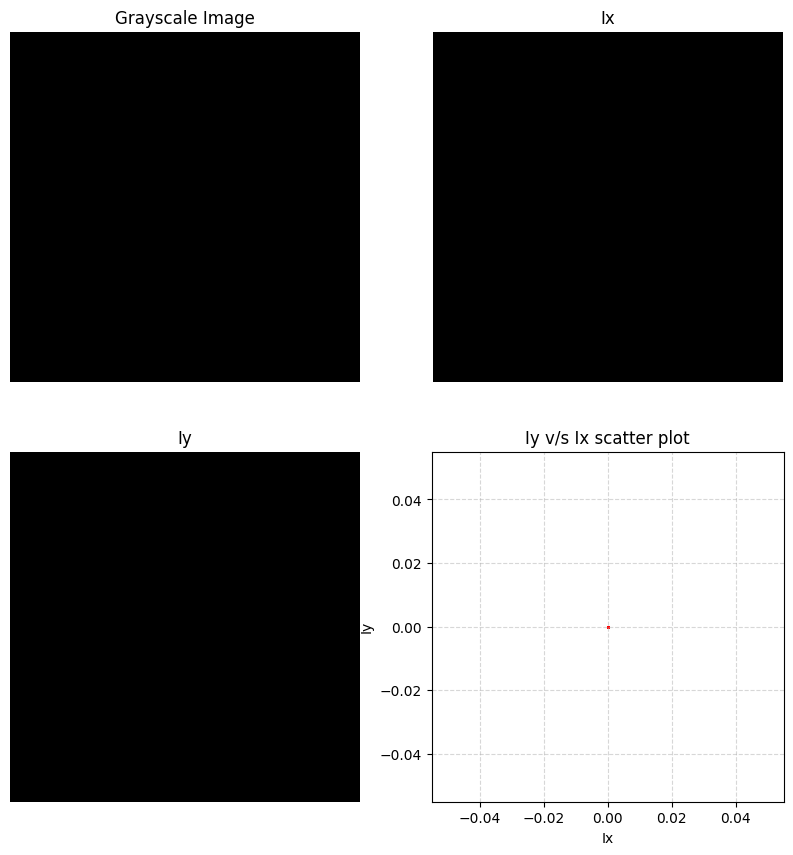

In [ ]:
##Now we test

sobel_plots(flat)

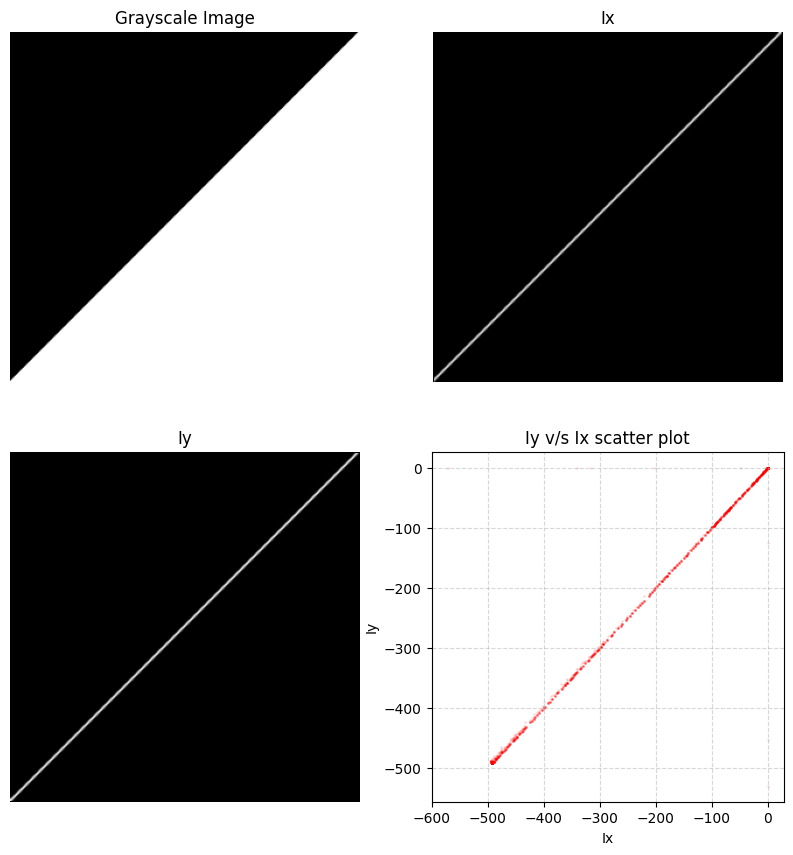

In [ ]:
sobel_plots(edge)

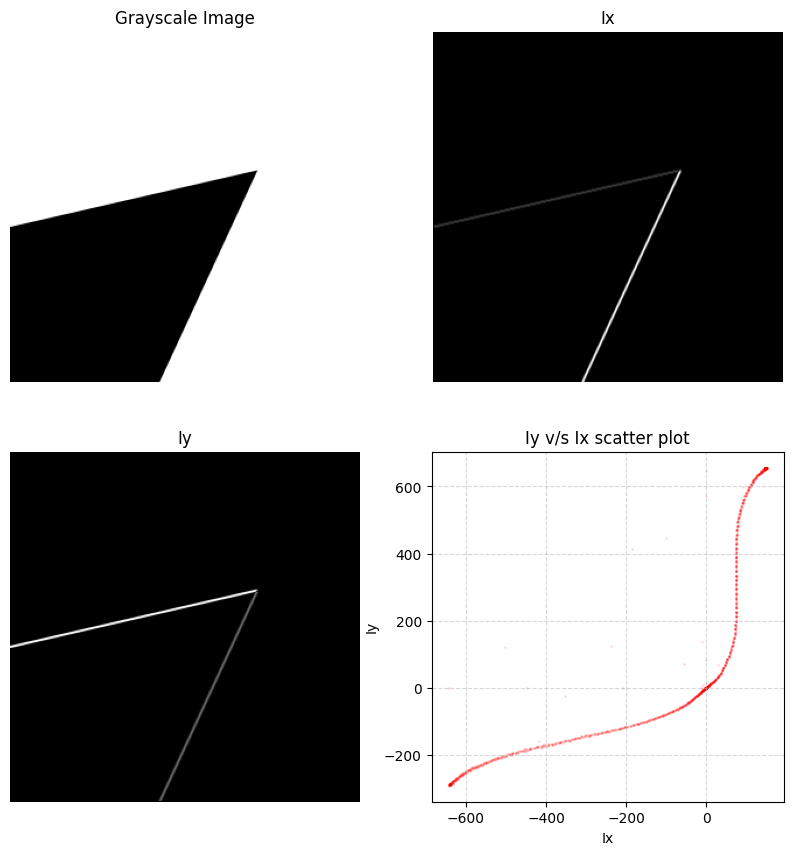

In [ ]:
sobel_plots(corner)

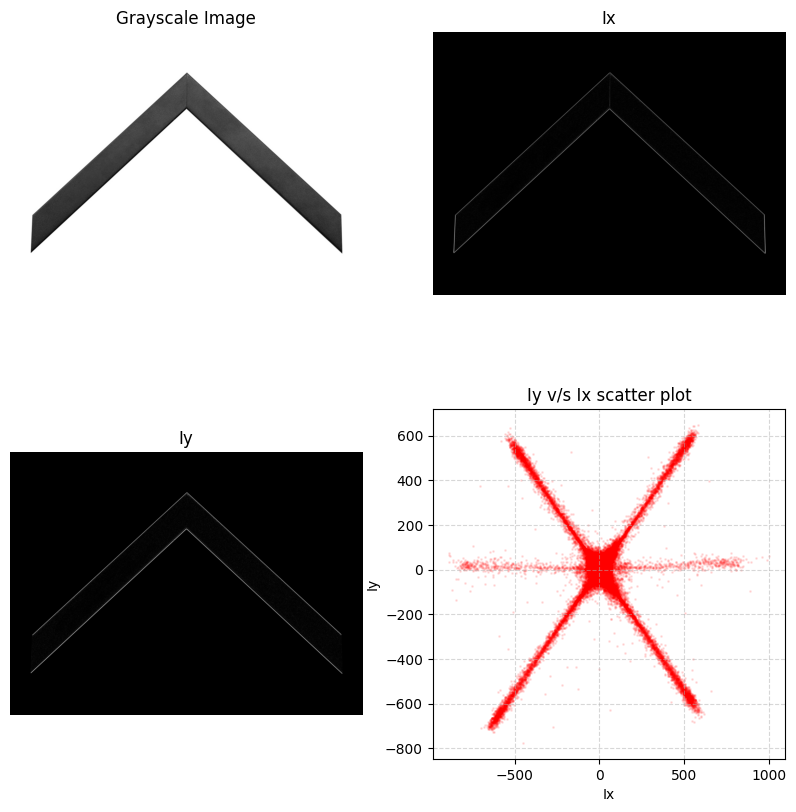

In [ ]:
sobel_plots(corner2)

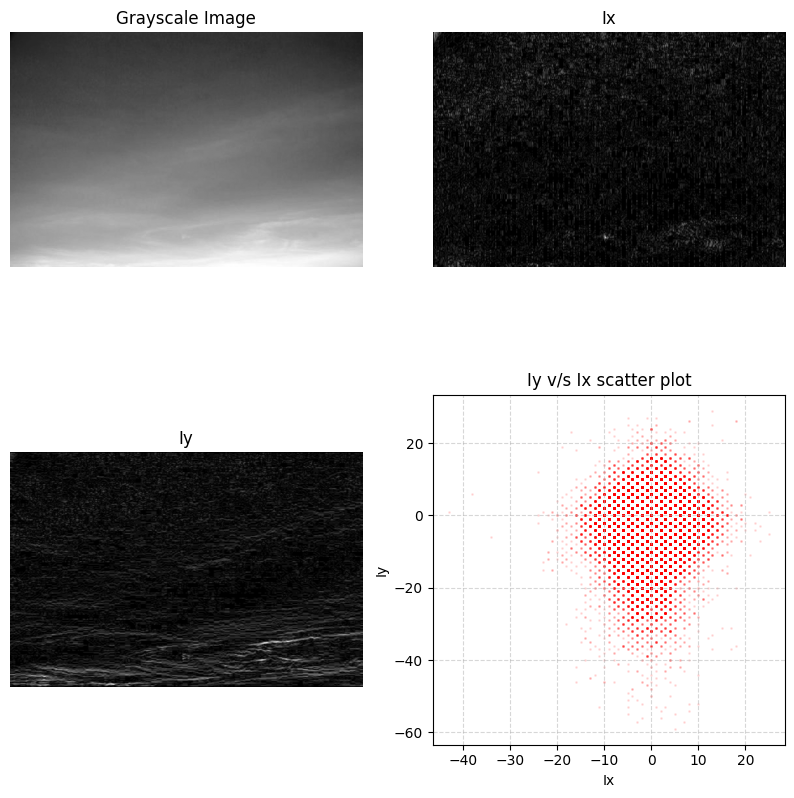

In [ ]:
sobel_plots(sky)
## we find the results almost as expecgted..the sky images is almost lika flat image and thus we get the values of ix and iy on the scatter plot very near origin...althoug hthey are not perfectly art origin due to the image being not perfectly flat


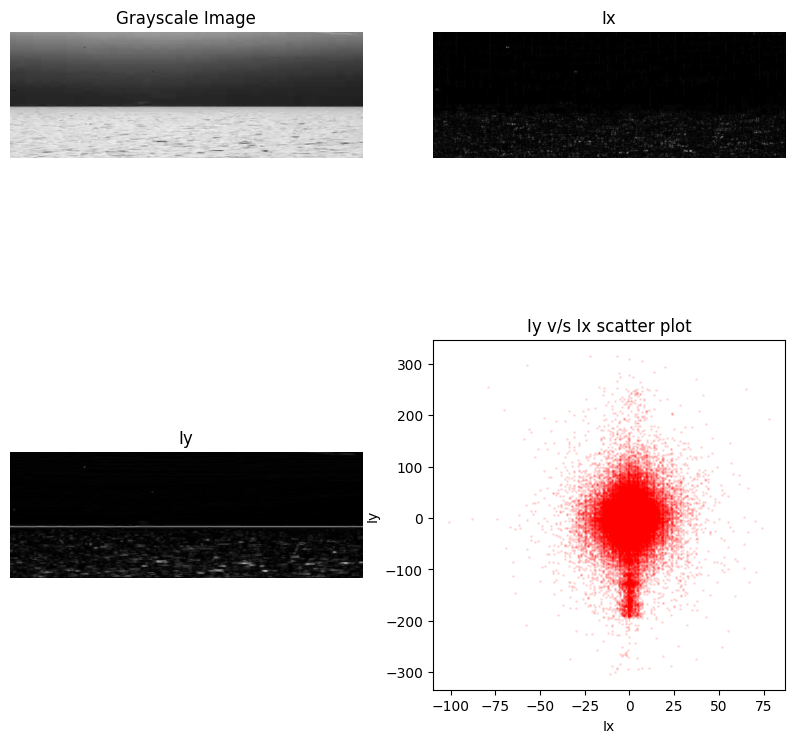

In [ ]:
sobel_plots(horizon)
##again we get teh image almost as expected the horizon in the pictureacts as an edge and we get a pretty goood plot with ix close to zero but iy spread out indicating it is a nedge

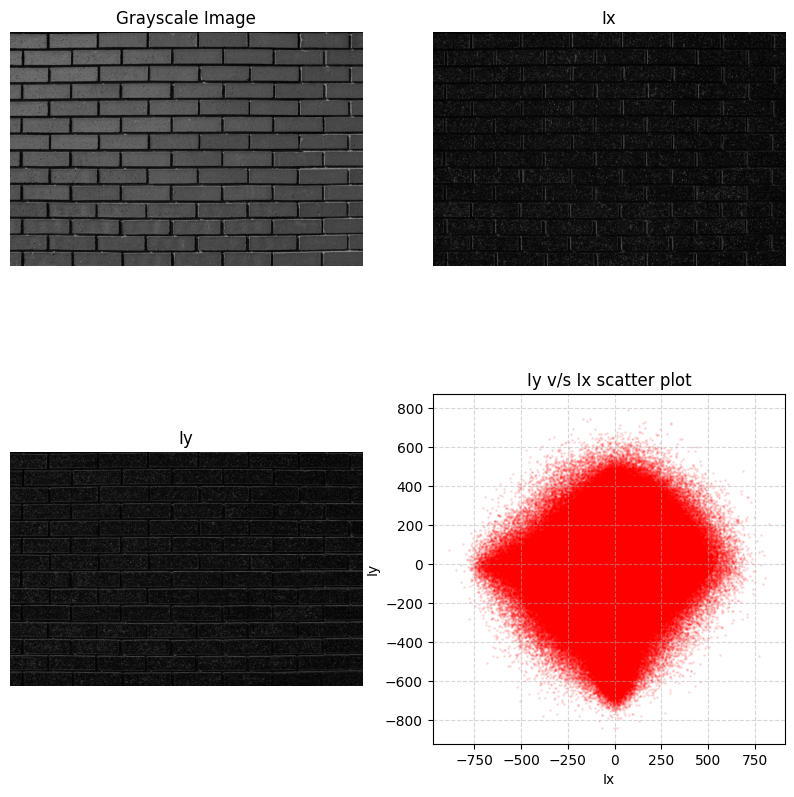

In [ ]:
sobel_plots(brick)

### Part B - Ellipse Fitting and R Maps for Corner Detection

Now, use the above functions ( basically Ix and Iy ) and the formulas in the pre-session videos to find values of a,b and c ( the second moments ) and calculate the eigenvalues lambda1 and lambda2. Then use those to create an R map for the entire image. Display the R map. Do it for the 3 images of part A. So, you might want to create a function that takes the image, loops over the pixels with a window, fits the ellipse over the window, calculates the lambdas, and value of R, essentially finding R values for all the pixels and returning an R-map ( a 2d image with only one channel where the value of a pixel is the r-value of that pixel in the original grayscale image ). Now, display these R maps. Notice how the corners are clearly visible in white.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
##as studied from the first principles of computer vision channel's videos, we will first calcuate the constants a,b,c which are in terms of Ix,Iy
#and the n lambda1 and lambda2 which can be calcuated from a,b,c these are essentially the semi major and semiminor axis of the highest qand lowest second moment of the binary image
##then we will plot the r map

def r_map(img,ksize,k):
  gray_img = rgb_gray(img)
  Ix,Iy = sobel_edge(gray_img)
  Ix_sq = Ix**2
  Iy_sq = Iy**2
  IxIy = Ix*Iy

  kernel = np.ones((ksize,ksize)) ##making a kernel

  ##using the formulas on slide to calculate a,b,c using convolve function and then also calcualting lambda1 and lambda2 from them

  a = convolve(Ix_sq,kernel)
  c = convolve(Iy_sq,kernel)
  b = 2*convolve(IxIy,kernel)

  lambda1 = 0.50 * (a + c + np.sqrt(b**2 + (a-c)**2))
  lambda2 = 0.50 * (a + c - np.sqrt(b**2 + (a-c)**2))

  ##Harrier cornere response fucntion given in the video slides is given as R = lambda1*lambda2 - k*(lambda1 + lambda2)^2 where k is from 0.04 to 0.06
  R = lambda1*lambda2 -k*((lambda1+lambda2)**2)

  R[R<0] = 0
  if np.max(R)!=0 :
    R = (R/np.max(R))*255.0
  R=R.astype(np.uint8)

  plt.figure(figsize=(10,10))
  plt.subplot(1,3,1)
  plt.imshow(gray_img,cmap='gray')
  plt.axis('off')
  plt.title("Grayscale Image")

  plt.subplot(1,3,2)
  plt.imshow(R,cmap='gray')
  plt.grid(True,color='cyan',linestyle='--',linewidth=0.50,alpha=0.50)
  plt.title("R Map")

  ##since seeing the white dots was difficult for me...... so making a sort of red highlight around the white dots

  y_cord, x_cord = np.where(R>(0.01*(np.max(R))))

  plt.subplot(1,3,3)
  plt.imshow(R,cmap='gray')
  plt.scatter(x_cord,y_cord,s=100,facecolors='none',edgecolors='red',linewidth=1.0,label='Detected points')
  plt.grid(True,color='cyan',linestyle='--',linewidth=0.50,alpha=0.50)
  plt.title("R Map with highlighted white dots")




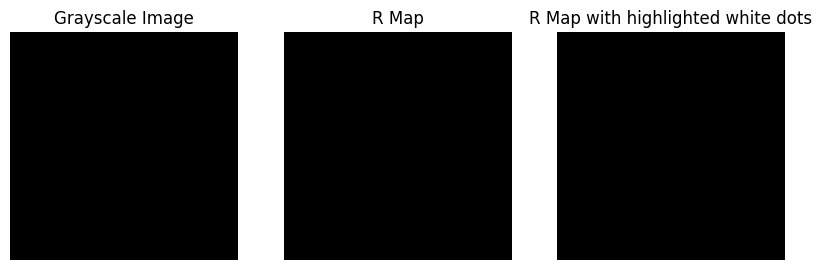

In [ ]:
r_map(flat,3,0.04)

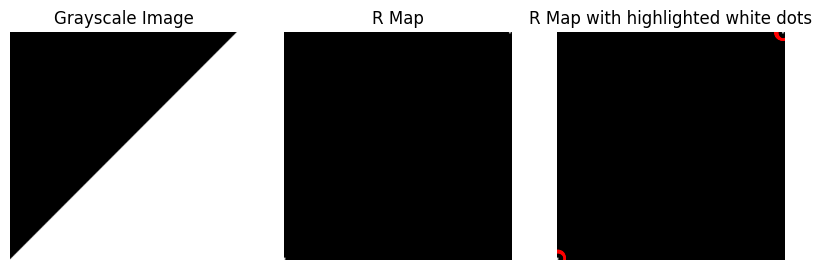

In [ ]:
r_map(edge,3,0.04)

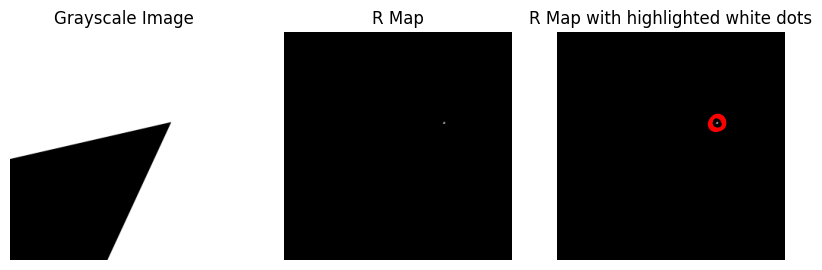

In [ ]:
r_map(corner,3,0.05)

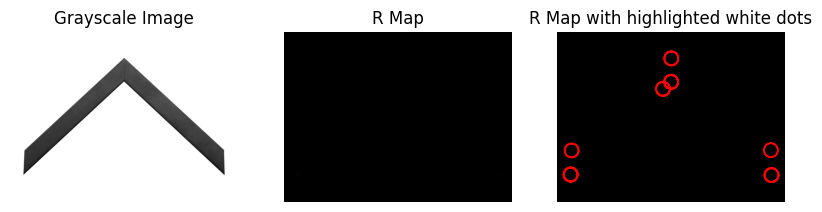

In [ ]:
r_map(corner2,3,0.05)

### Part C - Hough Transforms

Again, import an image, create a function that takes the image, finds the canny edge map, then loops through it to find the equivalent line of each pixel, checks whether the slope and intercept are within acceptable limits of the accumulator size ( if not, discard ), does the voting procedure and creates the accumulator. Now, choose an accurate threshold for the accumulator to get the slope and intercept for a good number of lines in the image. One thing you can do is normalise the accumulator and use a 90 percent threshold ( just an example, im not telling if 90p is a good one or not ), then, mark the lines in the image using cv2 and display the final output. For the slope and intercept, choose the limit as per your image to get a good output. Please dont make it super large so it take hours to run and give the output.

Now, you can do the same but with rho theta method. Do this in a separate code cell from slope-intercept method and notice how fast this is

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

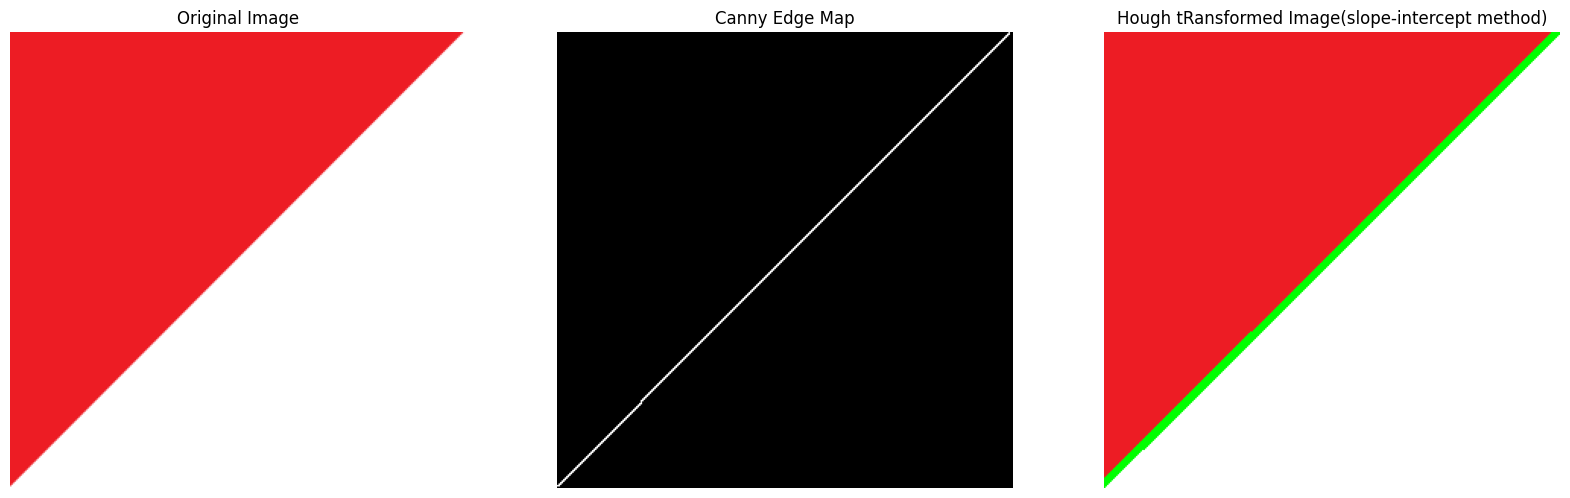

In [ ]:
##Slope-Intercept Method
import cv2
def hough_slope(img):
  gray_img = rgb_gray(img)
  ce = cv2.Canny(gray_img,50,150)
  h,w = ce.shape

  min_m = -3
  max_m = 3
  m_step = 0.1
  m_arr = np.arange(min_m,max_m,m_step)

  c_max = int(h + max_m*w)
  c_min = -1*c_max
  c_step = 1

  m_vals = len(m_arr)
  c_vals = int((c_max - c_min)/c_step)

  acc = np.zeros((m_vals,c_vals))

  ys,xs = np.nonzero(ce)  ##this help us boil down the problem to a very narrow approach so that we ony have to check the white pixels and not waste our time in the black pixels...took help from internet to see this function and se why it is more efficient

  for i in range(len(xs)):
    x = xs[i]
    y = ys[i]

    ##checkign all values of m for this pixel
    for j in range(m_vals):
      m = m_arr[j]
      c = y- m*x

      if(c_min<=c<c_max):
        acc[j,int((c-c_min)/c_step)] += 1;

  ##thresholding

  max_vote = np.max(acc)
  td = 0.60 * max_vote

  peaks= np.argwhere(acc>td)

  output = img.copy()

  for i,j in peaks:
    m = m_arr[i]
    c = c_min + j*c_step

    p1 = (0,int(c))
    p2 = (w,int(m*w+c))
    cv2.line(output,p1,p2,(0,255,0),3)

  plt.figure(figsize=(20,10))
  plt.subplot(1,3,1)
  plt.imshow(img)
  plt.title("Original Image")
  plt.axis('off')

  plt.subplot(1,3,2)
  plt.imshow(ce,cmap='gray')
  plt.title("Canny Edge Map")
  plt.axis('off')

  plt.subplot(1,3,3)
  plt.imshow(output)
  plt.title("Hough tRansformed Image(slope-intercept method)")
  plt.axis('off')


hough_slope(edge)





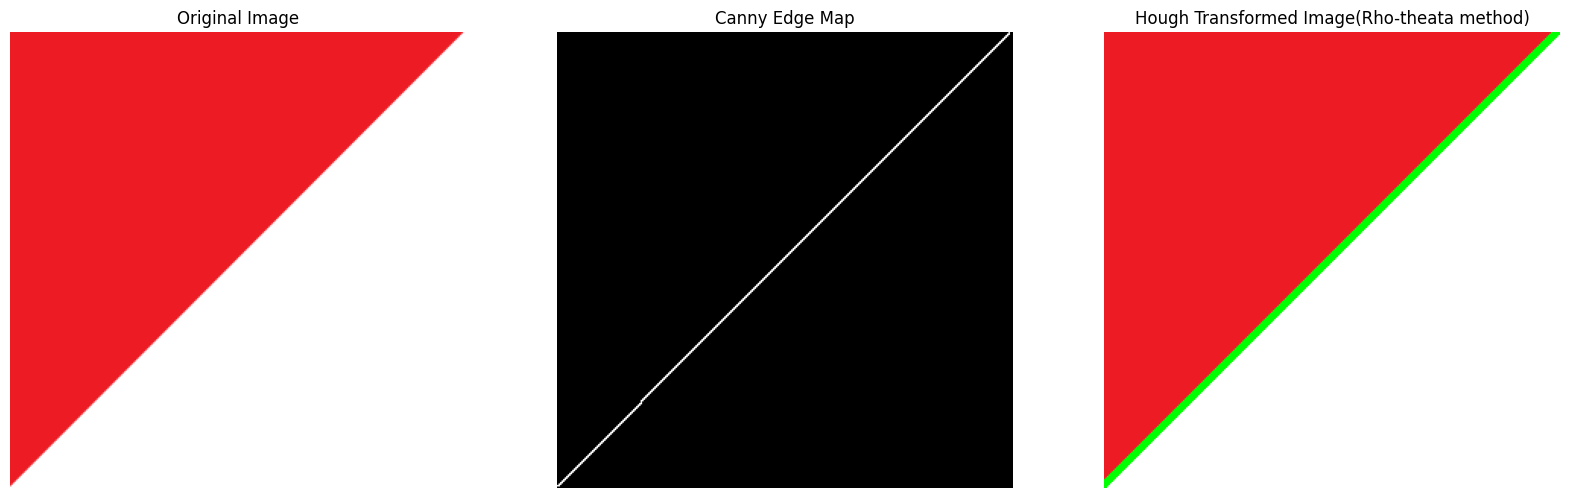

In [ ]:
##Rho-Theta Method
def hough_rho(img):
  gray_img = rgb_gray(img)
  ce = cv2.Canny(gray_img,50,150)
  h,w = ce.shape

  ang = np.arange(-90,90,1)
  ang = np.deg2rad(ang)

  cos_t = np.cos(ang)
  sin_t = np.sin(ang)

  la = len(ang)

  max_d = np.sqrt(h**2 + w**2)

  rho = np.arange(-max_d,max_d,1)
  lr = len(rho)

  acc = np.zeros((lr,la))

  ys,xs = np.nonzero(ce)

  for i in range(len(xs)):
    x = xs[i]
    y = ys[i]
    for j in range(la):
      ro = x * cos_t[j] + y * sin_t[j]
      roi = int(ro+max_d)
      acc[roi,j] += 1


  ##thresholding

  max_vote = np.max(acc)
  td = 0.95 * max_vote

  peaks= np.argwhere(acc>td)

  output = img.copy()

  for i,j in peaks:
    ro = rho[i]
    theta = ang[j]
    a = np.cos(theta)
    b = np.sin(theta)

    x = a*ro
    y = b*ro

    p1 = int(x + max_d*((-b)))
    p2 = int(x - max_d*((-b)))
    p3 = int(y + max_d*(a))
    p4 = int(x - max_d*(a))

    cv2.line(output,(p1,p3),(p2,p4),(0,255,0),3)

  plt.figure(figsize=(20,10))
  plt.subplot(1,3,1)
  plt.imshow(img)
  plt.title("Original Image")
  plt.axis('off')

  plt.subplot(1,3,2)
  plt.imshow(ce,cmap='gray')
  plt.title("Canny Edge Map")
  plt.axis('off')

  plt.subplot(1,3,3)
  plt.imshow(output)
  plt.title("Hough Transformed Image(Rho-theata method)")
  plt.axis('off')

#### i took a little help from internet for better understanding of theory and the code of performing some of the tasks in the hough fucntions..
hough_rho(edge)


### Bonus - Part D

Here, what you have to do is something like :    
1. Create a python function that will take the first image and a set of coordinates ( x1,y1 ) - top left and ( x2,y2 ) - bottom right to form a box around the white ball. Now, find gradients, select the biggest completed gradient ( maximum area contour ) and then create an RGBA ( 4 channel ) stencil.

2. Now, create another function that takes this stencil and second image and a coordinate ( x3,y3 ). Now, treat ( x3,y3 ) as center point and overlap the RGBA stencil with second image. Keep x3 y3 such that it is towards the right to make it look like that white ball is on the green pool image.


Again, I do not expect you guys to get a really good result. Try your best though.

array([[[ 91,  71,  46],
        [ 91,  71,  46],
        [ 92,  72,  47],
        ...,
        [ 87,  71,  58],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       [[ 90,  70,  47],
        [ 90,  70,  47],
        [ 90,  70,  47],
        ...,
        [ 86,  70,  57],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       [[ 87,  66,  45],
        [ 87,  66,  45],
        [ 87,  66,  45],
        ...,
        [ 86,  70,  57],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       ...,

       [[  8,  83, 215],
        [  8,  83, 215],
        [  8,  83, 215],
        ...,
        [  7,  72, 198],
        [  6,  71, 197],
        [  6,  71, 197]],

       [[  8,  83, 215],
        [  8,  83, 215],
        [  8,  83, 215],
        ...,
        [  7,  72, 198],
        [  6,  71, 197],
        [  6,  71, 197]],

       [[  7,  84, 215],
        [  7,  84, 215],
        [  7,  84, 215],
        ...,
        [  7,  70, 198],
        [  7,  70, 198],
        [  7,  70, 198]]], dtype=uint8)
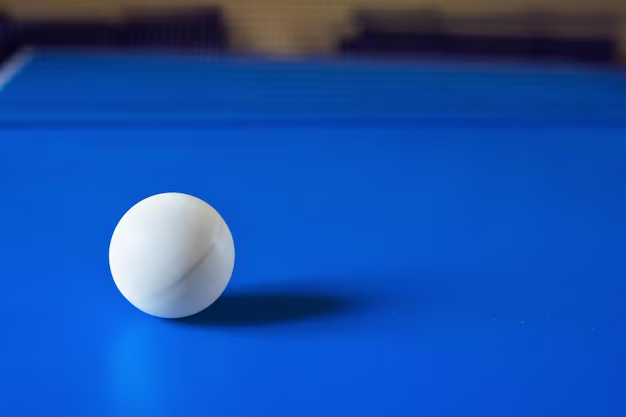

In [ ]:
ball

array([[[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       [[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       [[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       ...,

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]],

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]],

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]]], dtype=uint8)
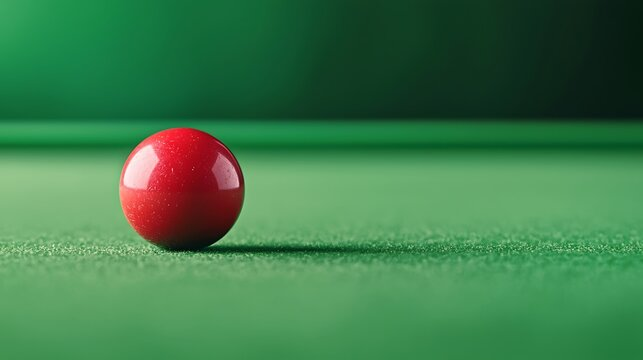

In [ ]:
ball2

In [ ]:
##Firs twe create a stencil
##def stencil(img,x1,y1,x2,y2):
 ## crop = img[y1:y2,x1:x2].copy()
 ## gray_img = rgb_gray(img)
 # ce = cv2.Canny(gray_img,50,150)

##i did not have enough time left to sincerely attempt the bonus question.Extremely sorry for that..